In [1]:
import torch
import pandas as pd
import tensorflow as tf
import torchvision
import os
import matplotlib.pyplot as plt
from starting_dataset import StartingDataset
from networks import ConvNet
from training_functions import starting_train
from training_functions import compute_accuracy

EPOCHS = 20
BATCH_SIZE = 32
N_EVAL = 5


#RESNET
#too many of one type
#transfer learning

C:\Users\Chris\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_labels = pd.read_csv(r'C:\Users\Chris\AppData\Local\Programs\Python\Python39\Scripts\ACMAI\train.csv')
df_labels2 = pd.read_csv(r'C:\Users\Chris\AppData\Local\Programs\Python\Python39\Scripts\ACMAI\train2.csv')
df_labels2 = df_labels2.drop('Unnamed: 0', axis=1)
print(df_labels)
#print(df_labels.iloc[1][1])

print("0:", df_labels['label'].value_counts()[0])
print("1:", df_labels['label'].value_counts()[1])
print("2:", df_labels['label'].value_counts()[2])
print("3:", df_labels['label'].value_counts()[3])
print("4:", df_labels['label'].value_counts()[4])

             image_id  label
0      1000015157.jpg      0
1      1000201771.jpg      3
2       100042118.jpg      1
3      1000723321.jpg      1
4      1000812911.jpg      3
...               ...    ...
21392   999068805.jpg      3
21393   999329392.jpg      3
21394   999474432.jpg      1
21395   999616605.jpg      4
21396   999998473.jpg      4

[21397 rows x 2 columns]
0: 1087
1: 2189
2: 2386
3: 13158
4: 2577


In [75]:
df_labels2.to_csv(r'C:\Users\Chris\AppData\Local\Programs\Python\Python39\Scripts\ACMAI\train2.csv')

In [8]:
#df_labels2.drop(df_labels2.tail(1).index,inplace=True)
print(df_labels2)
print("0:", df_labels2['label'].value_counts()[0])
print("1:", df_labels2['label'].value_counts()[1])
print("2:", df_labels2['label'].value_counts()[2])
print("3:", df_labels2['label'].value_counts()[3])
print("4:", df_labels2['label'].value_counts()[4])

             image_id  label
0      1000015157.jpg      0
1      1000201771.jpg      3
2       100042118.jpg      1
3      1000723321.jpg      1
4      1000812911.jpg      3
...               ...    ...
46109  imgb121390.jpg      1
46110  imgb121391.jpg      1
46111  imgb121394.jpg      1
46112  imgb421395.jpg      4
46113  imgb421396.jpg      4

[46114 rows x 2 columns]
0: 4348
1: 8756
2: 9544
3: 13158
4: 10308


In [9]:
#print(df_labels.loc[0,'image_id'])
newrow = {'image_id' : str('img' + str(df_labels.loc[i,'label']) + str(i) + '.jpg'), 'label': df_labels.loc[i,'label'] }

1000015157.jpg


In [28]:
#BLOCK 1: CREATE LIST OF INDEX WITH LABEL 3
index = []
counter = 0
for i in df_labels['label']:
    if i == 3:
        index.append(counter)
    counter+=1
print(len(index))

#BLOCK 2: REMOVE EVERY SECOND INDEX FROM PREVIOUS LIST
keep = 1
for i in index:
    if keep == 2:
        index.remove(i)
        keep = 1
    keep+=1
# keep = 1
# for i in index:
#     if keep == 2:
#         index.remove(i)
#         keep = 1
#     keep+=1
# keep = 1
# for i in index:
#     if keep == 2:
#         index.remove(i)
#         keep = 1
#     keep+=1


#BLOCK 3: RECORD EVERY FILENAME FOR IMAGES TO BE REMOVED FROM DATASET
imageLabelsRemove = []
for i in index:
    imageLabelsRemove.append(df_labels.loc[i,'image_id'])

#NOW, WHEN READ IN IMAGES, DO NOT READ IN IF SAME ID AS ANY INSIDE imageLabelsRemove
#filenames = [name for name in os.listdir(data_dir) if name not in imageLabelsRemove]

#print(imageLabelsRemove)

# image_name = []
# countt = 0
# indexCout = 0
# for i in df_labels.iterrows(): #i[0] is index, i[1] is 
#     print(i['label'])

13158


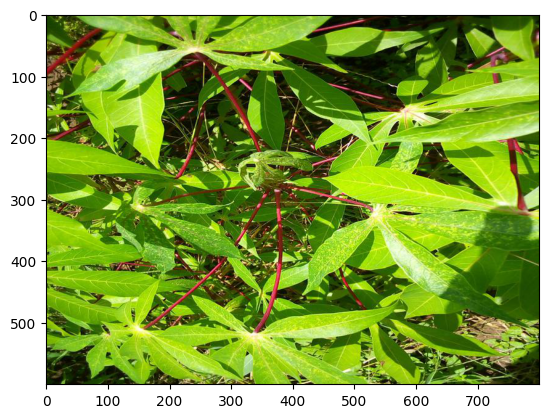

In [19]:
# plt.imshow(batch[14817].permute(1, 2, 0))

In [13]:
def main():
    # Get command line arguments
    hyperparameters = {"epochs": EPOCHS, "batch_size": BATCH_SIZE}

    # TODO: Add GPU support. This line of code might be helpful.
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)

    print("Epochs:", EPOCHS)
    print("Batch size:", BATCH_SIZE)

    # Initalize dataset and model. Then train the model!
    train_dataset = StartingDataset(df_labels2['image_id'], df_labels2['label'])
    val_dataset = StartingDataset(df_labels2['image_id'], df_labels2['label'])
    model = ConvNet()
    model = model.to(device)
    starting_train(
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        model=model,
        hyperparameters=hyperparameters,
        n_eval=N_EVAL,
                    )


if __name__ == "__main__":
    main()


cuda
Epochs: 20
Batch size: 32
Epoch 1 of 20


  0%|                                                                               | 1/1442 [00:06<2:44:58,  6.87s/it]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0') tensor([1, 3, 3, 3, 2, 3, 3, 3, 3, 1, 4, 3, 2, 2, 2, 4, 4, 3, 3, 4, 3, 2, 2, 2,
        1, 0, 3, 3, 1, 1, 3, 2], device='cuda:0')
0.25
Epoch: 0 Loss: 1.5777077674865723


  0%|▎                                                                                | 6/1442 [00:09<22:53,  1.05it/s]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0') tensor([1, 4, 1, 4, 3, 1, 1, 2, 0, 3, 3, 4, 1, 2, 0, 1, 1, 3, 0, 2, 2, 3, 1, 1,
        3, 0, 1, 3, 2, 4, 0, 2], device='cuda:0')
0.1875
Epoch: 0 Loss: 92.37706756591797


  1%|▌                                                                               | 11/1442 [00:12<15:31,  1.54it/s]

tensor([0, 3, 3, 1, 3, 0, 0, 3, 3, 3, 1, 0, 3, 1, 0, 1, 1, 3, 0, 1, 3, 0, 1, 3,
        1, 3, 3, 3, 3, 3, 3, 1], device='cuda:0') tensor([4, 4, 2, 2, 1, 4, 2, 4, 2, 3, 4, 2, 3, 3, 1, 0, 4, 3, 0, 2, 2, 2, 2, 1,
        3, 3, 1, 4, 3, 2, 4, 3], device='cuda:0')
0.1875
Epoch: 0 Loss: 8.20127010345459


  1%|▉                                                                               | 16/1442 [00:14<14:02,  1.69it/s]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([3, 3, 0, 2, 1, 1, 2, 1, 3, 0, 3, 3, 3, 2, 4, 3, 4, 1, 1, 1, 0, 0, 2, 4,
        3, 3, 2, 2, 3, 2, 3, 2], device='cuda:0')
0.34375
Epoch: 0 Loss: 2.020751953125


  1%|█▏                                                                              | 21/1442 [00:17<13:47,  1.72it/s]

tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([4, 4, 2, 0, 4, 2, 3, 3, 3, 1, 4, 2, 1, 4, 4, 3, 3, 2, 2, 2, 3, 2, 3, 4,
        0, 0, 0, 0, 3, 1, 1, 1], device='cuda:0')
0.15625
Epoch: 0 Loss: 1.9545937776565552


  2%|█▍                                                                              | 26/1442 [00:20<14:09,  1.67it/s]

tensor([4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4], device='cuda:0') tensor([0, 2, 2, 4, 4, 2, 1, 2, 0, 4, 4, 0, 1, 1, 0, 2, 2, 0, 4, 3, 2, 3, 3, 0,
        3, 3, 4, 4, 2, 3, 3, 2], device='cuda:0')
0.21875
Epoch: 0 Loss: 1.7179912328720093


  2%|█▋                                                                              | 31/1442 [00:22<13:45,  1.71it/s]

tensor([4, 2, 2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0') tensor([2, 2, 1, 4, 3, 4, 4, 4, 2, 4, 4, 3, 2, 3, 3, 2, 2, 4, 3, 1, 1, 0, 4, 0,
        4, 1, 0, 3, 4, 2, 0, 1], device='cuda:0')
0.1875
Epoch: 0 Loss: 1.5532305240631104


  2%|█▉                                                                              | 36/1442 [00:25<13:29,  1.74it/s]

tensor([2, 3, 2, 3, 2, 0, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 0, 3, 2,
        2, 3, 3, 3, 2, 2, 2, 3], device='cuda:0') tensor([3, 1, 3, 2, 3, 1, 1, 3, 3, 3, 3, 4, 1, 0, 3, 0, 4, 3, 0, 4, 4, 1, 1, 2,
        2, 3, 2, 3, 3, 3, 0, 2], device='cuda:0')
0.25
Epoch: 0 Loss: 1.5510472059249878


  3%|██▎                                                                             | 41/1442 [00:28<13:30,  1.73it/s]

tensor([3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 3, 3, 3, 3, 3,
        0, 3, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([4, 3, 3, 3, 2, 3, 4, 0, 2, 4, 4, 2, 3, 4, 2, 3, 1, 1, 2, 2, 2, 3, 0, 3,
        4, 1, 2, 0, 0, 4, 1, 3], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.5700247287750244


  3%|██▌                                                                             | 46/1442 [00:30<13:27,  1.73it/s]

tensor([0, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
        3, 3, 0, 3, 3, 3, 3, 0], device='cuda:0') tensor([3, 0, 3, 3, 1, 3, 3, 2, 3, 3, 1, 1, 0, 1, 2, 3, 3, 2, 3, 3, 0, 4, 3, 1,
        4, 2, 1, 3, 1, 3, 4, 0], device='cuda:0')
0.375
Epoch: 0 Loss: 1.5983009338378906


  4%|██▊                                                                             | 51/1442 [00:33<13:26,  1.73it/s]

tensor([3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 0, 3, 3, 3, 3], device='cuda:0') tensor([3, 0, 3, 2, 0, 2, 0, 3, 4, 1, 2, 3, 4, 3, 1, 3, 2, 2, 4, 2, 4, 1, 3, 1,
        4, 3, 1, 4, 3, 1, 2, 4], device='cuda:0')
0.25
Epoch: 0 Loss: 1.621559500694275


  4%|███                                                                             | 56/1442 [00:36<13:37,  1.69it/s]

tensor([0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([4, 3, 2, 2, 3, 3, 2, 3, 1, 3, 1, 0, 1, 0, 2, 2, 2, 3, 1, 4, 4, 3, 2, 4,
        2, 2, 3, 4, 2, 3, 4, 1], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.553622841835022


  4%|███▍                                                                            | 61/1442 [00:38<14:04,  1.64it/s]

tensor([2, 2, 2, 2, 0, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 0, 0, 0, 2, 2, 0, 3,
        2, 2, 2, 2, 3, 2, 2, 2], device='cuda:0') tensor([3, 2, 2, 4, 4, 2, 0, 3, 3, 1, 0, 2, 0, 3, 3, 4, 0, 4, 2, 4, 2, 1, 4, 2,
        0, 2, 4, 4, 2, 4, 0, 3], device='cuda:0')
0.25
Epoch: 0 Loss: 1.6492820978164673


  5%|███▋                                                                            | 66/1442 [00:41<13:31,  1.69it/s]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0') tensor([4, 4, 0, 4, 2, 3, 3, 0, 0, 3, 0, 2, 3, 3, 3, 2, 3, 0, 0, 2, 2, 2, 4, 3,
        1, 3, 0, 3, 4, 2, 4, 4], device='cuda:0')
0.21875
Epoch: 0 Loss: 1.5751782655715942


  5%|███▉                                                                            | 71/1442 [00:44<13:11,  1.73it/s]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 0, 2, 2, 2, 2, 2], device='cuda:0') tensor([0, 4, 2, 3, 3, 1, 2, 4, 2, 4, 4, 3, 1, 2, 0, 1, 2, 1, 4, 4, 2, 2, 1, 3,
        2, 3, 1, 4, 2, 4, 3, 1], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.6096267700195312


  5%|████▏                                                                           | 76/1442 [00:46<13:16,  1.71it/s]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0') tensor([4, 4, 1, 3, 2, 3, 2, 3, 1, 2, 1, 3, 2, 4, 3, 3, 0, 3, 3, 1, 2, 3, 4, 2,
        4, 4, 4, 4, 1, 4, 2, 0], device='cuda:0')
0.21875
Epoch: 0 Loss: 1.5069655179977417


  6%|████▍                                                                           | 81/1442 [00:49<13:20,  1.70it/s]

tensor([2, 3, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2,
        2, 3, 3, 3, 3, 3, 3, 2], device='cuda:0') tensor([4, 4, 2, 4, 2, 4, 2, 3, 2, 0, 2, 3, 4, 3, 2, 0, 3, 0, 3, 1, 2, 4, 0, 1,
        4, 4, 3, 3, 3, 0, 3, 1], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.6429921388626099


  6%|████▊                                                                           | 86/1442 [00:52<13:06,  1.72it/s]

tensor([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
        3, 3, 2, 3, 3, 3, 3, 3], device='cuda:0') tensor([3, 3, 4, 3, 3, 3, 3, 1, 1, 2, 4, 2, 1, 3, 1, 1, 2, 3, 4, 0, 4, 2, 2, 2,
        3, 3, 1, 2, 4, 2, 1, 0], device='cuda:0')
0.375
Epoch: 0 Loss: 1.5137455463409424


  6%|█████                                                                           | 91/1442 [00:54<13:22,  1.68it/s]

tensor([2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 4, 2, 2, 3, 3, 1, 3, 2, 3,
        2, 3, 3, 1, 3, 3, 3, 2], device='cuda:0') tensor([4, 1, 4, 3, 3, 4, 4, 3, 4, 1, 3, 3, 4, 0, 2, 2, 1, 4, 0, 2, 2, 3, 3, 0,
        1, 4, 3, 2, 3, 4, 2, 3], device='cuda:0')
0.25
Epoch: 0 Loss: 1.579131841659546


  7%|█████▎                                                                          | 96/1442 [00:57<13:07,  1.71it/s]

tensor([2, 2, 2, 3, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4,
        4, 2, 2, 3, 4, 2, 2, 4], device='cuda:0') tensor([4, 3, 4, 2, 4, 4, 3, 1, 2, 0, 0, 3, 1, 3, 1, 2, 2, 3, 3, 2, 4, 4, 2, 0,
        1, 1, 1, 1, 2, 4, 2, 4], device='cuda:0')
0.21875
Epoch: 0 Loss: 1.538184404373169


  7%|█████▌                                                                         | 101/1442 [01:00<13:17,  1.68it/s]

tensor([4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2, 2, 2, 2, 3, 4, 2], device='cuda:0') tensor([0, 3, 2, 4, 1, 3, 2, 4, 0, 3, 0, 3, 4, 1, 3, 4, 3, 2, 4, 4, 3, 3, 1, 3,
        0, 4, 3, 3, 4, 3, 0, 2], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.5786683559417725


  7%|█████▊                                                                         | 106/1442 [01:02<12:53,  1.73it/s]

tensor([4, 3, 3, 3, 1, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 1, 2, 4,
        3, 3, 3, 3, 3, 3, 3, 4], device='cuda:0') tensor([1, 1, 3, 2, 2, 3, 2, 1, 1, 4, 0, 3, 4, 3, 4, 3, 2, 4, 3, 4, 2, 1, 2, 2,
        2, 3, 3, 4, 0, 2, 1, 2], device='cuda:0')
0.375
Epoch: 0 Loss: 1.460370659828186


  8%|██████                                                                         | 111/1442 [01:05<12:34,  1.76it/s]

tensor([3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 4, 3, 3, 3, 3], device='cuda:0') tensor([4, 3, 0, 3, 4, 0, 1, 2, 2, 1, 1, 3, 3, 4, 3, 1, 1, 0, 1, 1, 1, 4, 0, 2,
        4, 3, 1, 0, 1, 4, 1, 3], device='cuda:0')
0.25
Epoch: 0 Loss: 1.8245595693588257


  8%|██████▎                                                                        | 116/1442 [01:08<12:36,  1.75it/s]

tensor([3, 1, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 1, 3, 3, 1, 3, 3, 3, 4, 3, 3,
        3, 1, 3, 3, 3, 3, 4, 3], device='cuda:0') tensor([4, 1, 0, 4, 3, 3, 3, 1, 3, 0, 4, 4, 4, 3, 1, 4, 4, 4, 2, 3, 2, 4, 4, 3,
        1, 2, 1, 3, 0, 4, 0, 1], device='cuda:0')
0.375
Epoch: 0 Loss: 1.5240039825439453


  8%|██████▋                                                                        | 121/1442 [01:10<12:24,  1.77it/s]

tensor([1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3,
        1, 3, 1, 1, 3, 3, 3, 1], device='cuda:0') tensor([4, 2, 0, 4, 0, 0, 4, 2, 2, 3, 1, 3, 1, 4, 3, 3, 0, 3, 4, 3, 2, 2, 1, 4,
        1, 4, 1, 0, 4, 4, 3, 0], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.5802366733551025


  9%|██████▉                                                                        | 126/1442 [01:13<12:48,  1.71it/s]

tensor([3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 4, 3, 1, 1, 3, 3, 3, 3, 1, 1,
        3, 3, 3, 3, 1, 3, 3, 3], device='cuda:0') tensor([3, 4, 4, 3, 4, 4, 0, 3, 3, 2, 3, 2, 3, 0, 4, 3, 4, 2, 2, 4, 2, 3, 3, 2,
        3, 2, 4, 2, 1, 2, 1, 4], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.4578309059143066


  9%|███████▏                                                                       | 131/1442 [01:15<12:57,  1.69it/s]

tensor([3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
        1, 3, 1, 4, 3, 4, 3, 3], device='cuda:0') tensor([0, 2, 4, 1, 3, 3, 4, 0, 3, 3, 4, 3, 4, 4, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3,
        4, 2, 2, 0, 1, 1, 1, 4], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.4987996816635132


  9%|███████▍                                                                       | 136/1442 [01:18<12:45,  1.71it/s]

tensor([1, 1, 4, 1, 1, 3, 1, 1, 3, 4, 4, 1, 4, 3, 3, 1, 4, 1, 1, 4, 1, 3, 3, 4,
        4, 1, 3, 3, 1, 3, 1, 1], device='cuda:0') tensor([3, 4, 1, 1, 1, 3, 0, 0, 3, 1, 3, 2, 1, 3, 0, 3, 1, 1, 4, 4, 3, 3, 0, 3,
        4, 1, 1, 2, 3, 3, 4, 1], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4952548742294312


 10%|███████▋                                                                       | 141/1442 [01:21<12:15,  1.77it/s]

tensor([1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 3, 3, 1, 3, 1, 3,
        3, 3, 3, 3, 3, 3, 1, 3], device='cuda:0') tensor([1, 2, 1, 4, 3, 4, 3, 4, 2, 2, 0, 3, 2, 1, 4, 4, 0, 2, 2, 3, 2, 4, 4, 2,
        4, 1, 0, 1, 3, 1, 1, 2], device='cuda:0')
0.25
Epoch: 0 Loss: 1.5893185138702393


 10%|███████▉                                                                       | 146/1442 [01:23<12:36,  1.71it/s]

tensor([3, 3, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 1, 4, 3, 3, 1, 3, 4,
        4, 3, 1, 2, 3, 3, 3, 4], device='cuda:0') tensor([3, 3, 1, 1, 4, 3, 1, 2, 0, 0, 2, 2, 2, 3, 2, 1, 4, 1, 2, 4, 3, 1, 1, 3,
        2, 3, 4, 4, 3, 2, 3, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.3684340715408325


 10%|████████▎                                                                      | 151/1442 [01:26<12:52,  1.67it/s]

tensor([1, 3, 3, 3, 1, 4, 1, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 1, 1, 3, 3, 1, 3, 3,
        1, 1, 1, 3, 4, 3, 1, 1], device='cuda:0') tensor([1, 3, 4, 2, 1, 4, 0, 1, 2, 3, 3, 2, 3, 2, 2, 4, 4, 1, 4, 2, 2, 3, 1, 1,
        0, 1, 2, 2, 4, 4, 2, 1], device='cuda:0')
0.375
Epoch: 0 Loss: 1.499379277229309


 11%|████████▌                                                                      | 156/1442 [01:29<12:26,  1.72it/s]

tensor([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 1, 3, 3], device='cuda:0') tensor([2, 3, 2, 3, 3, 1, 1, 3, 2, 0, 4, 4, 3, 0, 4, 2, 4, 4, 1, 3, 3, 0, 1, 2,
        2, 3, 2, 0, 4, 1, 0, 0], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.465584397315979


 11%|████████▊                                                                      | 161/1442 [01:31<12:22,  1.73it/s]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1,
        3, 3, 4, 2, 1, 3, 3, 2], device='cuda:0') tensor([3, 1, 2, 4, 3, 1, 4, 1, 0, 0, 1, 0, 4, 1, 1, 4, 3, 1, 3, 0, 3, 4, 2, 1,
        3, 2, 3, 3, 4, 2, 3, 0], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.5282971858978271


 12%|█████████                                                                      | 166/1442 [01:34<12:44,  1.67it/s]

tensor([3, 1, 1, 3, 3, 3, 3, 4, 1, 3, 3, 1, 4, 3, 3, 3, 3, 1, 3, 4, 4, 1, 3, 3,
        1, 3, 4, 3, 4, 3, 4, 1], device='cuda:0') tensor([3, 4, 4, 2, 4, 3, 1, 2, 4, 3, 2, 0, 4, 3, 3, 3, 1, 0, 1, 3, 4, 1, 2, 2,
        0, 3, 0, 4, 3, 3, 0, 2], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.476302981376648


 12%|█████████▎                                                                     | 171/1442 [01:37<12:22,  1.71it/s]

tensor([3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1,
        3, 3, 3, 3, 3, 1, 3, 3], device='cuda:0') tensor([2, 4, 1, 3, 1, 0, 4, 1, 2, 1, 2, 2, 2, 2, 4, 3, 0, 3, 4, 4, 3, 2, 3, 4,
        1, 2, 3, 2, 3, 4, 2, 3], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.4793177843093872


 12%|█████████▋                                                                     | 176/1442 [01:39<12:14,  1.72it/s]

tensor([1, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 2,
        3, 3, 4, 1, 3, 3, 3, 3], device='cuda:0') tensor([1, 3, 3, 3, 1, 4, 2, 4, 2, 3, 3, 4, 1, 2, 1, 2, 3, 1, 4, 1, 3, 4, 2, 2,
        2, 3, 3, 1, 4, 0, 2, 3], device='cuda:0')
0.5
Epoch: 0 Loss: 1.4035706520080566


 13%|█████████▉                                                                     | 181/1442 [01:42<12:07,  1.73it/s]

tensor([3, 4, 1, 3, 4, 3, 3, 2, 3, 1, 1, 3, 3, 1, 4, 1, 4, 4, 2, 3, 3, 1, 3, 3,
        3, 4, 1, 3, 3, 3, 3, 3], device='cuda:0') tensor([4, 4, 2, 4, 4, 0, 3, 3, 0, 4, 1, 1, 3, 0, 0, 4, 4, 4, 3, 3, 2, 4, 3, 3,
        3, 2, 4, 0, 3, 4, 3, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.5035719871520996


 13%|██████████▏                                                                    | 186/1442 [01:45<12:29,  1.67it/s]

tensor([3, 4, 1, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 1, 3, 3, 3, 3, 1, 1, 4, 3,
        3, 3, 3, 3, 3, 4, 3, 1], device='cuda:0') tensor([3, 4, 4, 1, 3, 4, 4, 1, 3, 0, 2, 0, 0, 3, 4, 1, 1, 3, 1, 3, 0, 1, 1, 2,
        3, 3, 4, 4, 3, 2, 3, 4], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.4390645027160645


 13%|██████████▍                                                                    | 191/1442 [01:47<12:12,  1.71it/s]

tensor([3, 3, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 3, 3, 3,
        3, 4, 3, 3, 3, 4, 3, 3], device='cuda:0') tensor([2, 3, 3, 2, 3, 3, 4, 4, 1, 2, 2, 3, 3, 3, 4, 1, 4, 3, 2, 1, 1, 4, 1, 3,
        3, 1, 1, 4, 1, 2, 3, 3], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.296059012413025


 14%|██████████▋                                                                    | 196/1442 [01:50<12:13,  1.70it/s]

tensor([3, 3, 1, 3, 3, 3, 1, 3, 3, 4, 4, 3, 3, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
        3, 1, 3, 3, 3, 3, 3, 2], device='cuda:0') tensor([1, 2, 1, 3, 3, 4, 4, 3, 3, 0, 4, 3, 1, 1, 1, 1, 4, 1, 4, 0, 3, 4, 1, 0,
        3, 3, 2, 3, 3, 2, 4, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4886188507080078


 14%|███████████                                                                    | 201/1442 [01:53<12:43,  1.63it/s]

tensor([4, 4, 1, 3, 3, 3, 4, 3, 1, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 1, 4, 3,
        3, 3, 4, 3, 3, 1, 3, 1], device='cuda:0') tensor([1, 0, 2, 2, 3, 2, 4, 3, 3, 3, 3, 2, 1, 2, 3, 4, 3, 2, 3, 3, 4, 2, 4, 3,
        2, 4, 3, 0, 3, 4, 3, 0], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.4400254487991333


 14%|███████████▎                                                                   | 206/1442 [01:56<12:25,  1.66it/s]

tensor([3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1,
        3, 1, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 4, 1, 1, 0, 3, 0, 1, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 2, 0, 1,
        3, 1, 0, 2, 0, 4, 2, 4], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.50985848903656


 15%|███████████▌                                                                   | 211/1442 [01:58<11:36,  1.77it/s]

tensor([1, 4, 1, 1, 4, 3, 3, 1, 4, 1, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 1, 3, 1,
        3, 3, 3, 3, 3, 4, 3, 1], device='cuda:0') tensor([1, 0, 0, 0, 2, 3, 3, 4, 4, 0, 0, 1, 4, 0, 3, 4, 4, 0, 4, 3, 2, 0, 3, 4,
        3, 4, 4, 4, 1, 4, 3, 1], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4899600744247437


 15%|███████████▊                                                                   | 216/1442 [02:01<12:09,  1.68it/s]

tensor([4, 1, 3, 1, 4, 1, 3, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 1, 1, 3, 3, 3, 1, 1,
        3, 3, 1, 3, 3, 1, 3, 4], device='cuda:0') tensor([2, 1, 3, 0, 4, 2, 3, 0, 1, 4, 4, 0, 0, 0, 3, 2, 3, 3, 3, 1, 2, 3, 4, 0,
        3, 3, 0, 3, 2, 4, 3, 2], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4573687314987183


 15%|████████████                                                                   | 221/1442 [02:03<11:48,  1.72it/s]

tensor([4, 4, 3, 3, 3, 3, 1, 3, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 4, 3, 1, 3, 3, 4,
        3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 1, 3, 2, 0, 3, 1, 3, 3, 0, 1, 1, 2, 0, 1, 0, 2, 4, 1, 3, 1, 3, 1, 4,
        4, 3, 2, 3, 3, 1, 3, 0], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.4070367813110352


 16%|████████████▍                                                                  | 226/1442 [02:06<11:37,  1.74it/s]

tensor([3, 3, 0, 3, 0, 4, 3, 3, 3, 3, 1, 0, 4, 3, 3, 4, 3, 3, 0, 3, 3, 4, 0, 3,
        3, 1, 1, 3, 4, 4, 3, 3], device='cuda:0') tensor([2, 3, 2, 3, 1, 4, 3, 4, 2, 3, 0, 1, 4, 4, 4, 2, 0, 3, 3, 0, 1, 1, 2, 2,
        4, 1, 2, 2, 0, 0, 0, 3], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.5717462301254272


 16%|████████████▋                                                                  | 231/1442 [02:09<11:27,  1.76it/s]

tensor([0, 1, 3, 1, 3, 3, 3, 3, 3, 2, 1, 3, 4, 1, 0, 4, 4, 1, 4, 1, 3, 3, 3, 3,
        1, 1, 3, 3, 4, 4, 4, 3], device='cuda:0') tensor([3, 0, 3, 4, 2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 0, 4, 2, 2, 0, 2, 2, 2, 4, 3,
        3, 3, 2, 3, 1, 3, 2, 2], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.3789564371109009


 16%|████████████▉                                                                  | 236/1442 [02:11<11:26,  1.76it/s]

tensor([3, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 4, 1, 1, 3], device='cuda:0') tensor([2, 4, 2, 0, 3, 4, 4, 4, 4, 2, 1, 4, 1, 3, 1, 4, 3, 4, 3, 2, 1, 3, 4, 3,
        4, 2, 2, 3, 1, 3, 0, 3], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.460648775100708


 17%|█████████████▏                                                                 | 241/1442 [02:14<11:59,  1.67it/s]

tensor([3, 4, 1, 1, 4, 3, 1, 3, 1, 4, 2, 3, 3, 1, 3, 2, 2, 3, 3, 4, 4, 3, 4, 2,
        2, 1, 3, 3, 3, 4, 1, 4], device='cuda:0') tensor([2, 2, 3, 1, 4, 3, 3, 3, 2, 4, 3, 3, 2, 3, 3, 1, 4, 4, 0, 0, 4, 2, 1, 3,
        3, 1, 2, 3, 3, 1, 1, 0], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4643789529800415


 17%|█████████████▍                                                                 | 246/1442 [02:17<11:41,  1.71it/s]

tensor([3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3,
        4, 1, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 2, 4, 2, 3, 4, 2, 1, 0, 1, 3, 2, 3, 4, 2, 0, 4, 3, 4, 0, 1, 3, 0, 0,
        2, 0, 2, 3, 3, 3, 4, 1], device='cuda:0')
0.25
Epoch: 0 Loss: 1.5421169996261597


 17%|█████████████▊                                                                 | 251/1442 [02:19<11:58,  1.66it/s]

tensor([3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 4, 3,
        3, 1, 3, 3, 3, 1, 3, 3], device='cuda:0') tensor([3, 2, 1, 3, 3, 4, 3, 4, 2, 1, 2, 1, 3, 3, 3, 2, 1, 4, 2, 2, 2, 2, 1, 2,
        2, 4, 4, 3, 3, 1, 4, 3], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.30414617061615


 18%|██████████████                                                                 | 256/1442 [02:22<11:40,  1.69it/s]

tensor([1, 3, 1, 1, 3, 3, 3, 3, 4, 3, 4, 2, 4, 1, 4, 4, 3, 1, 3, 4, 4, 3, 2, 4,
        3, 3, 3, 3, 4, 3, 3, 4], device='cuda:0') tensor([2, 3, 0, 2, 3, 4, 0, 4, 4, 2, 1, 1, 4, 0, 1, 2, 3, 4, 3, 4, 3, 4, 4, 0,
        3, 2, 3, 2, 2, 3, 1, 2], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.4906306266784668


 18%|██████████████▎                                                                | 261/1442 [02:25<11:39,  1.69it/s]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
        3, 1, 3, 3, 3, 2, 3, 3], device='cuda:0') tensor([4, 4, 3, 3, 4, 1, 2, 4, 0, 4, 3, 2, 1, 2, 4, 4, 1, 4, 2, 2, 3, 3, 4, 4,
        1, 4, 3, 3, 1, 3, 4, 3], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.609636664390564


 18%|██████████████▌                                                                | 266/1442 [02:28<12:51,  1.52it/s]

tensor([3, 1, 4, 3, 4, 4, 3, 4, 4, 4, 3, 1, 2, 4, 3, 4, 4, 3, 2, 2, 3, 3, 3, 4,
        2, 4, 3, 1, 3, 2, 4, 4], device='cuda:0') tensor([3, 1, 4, 3, 2, 1, 3, 4, 4, 0, 4, 4, 3, 0, 3, 4, 4, 3, 4, 3, 1, 3, 3, 1,
        4, 1, 3, 1, 2, 3, 0, 0], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.4100172519683838


 19%|██████████████▊                                                                | 271/1442 [02:31<13:18,  1.47it/s]

tensor([3, 1, 3, 3, 3, 1, 1, 3, 4, 3, 3, 3, 3, 1, 1, 1, 3, 4, 3, 3, 3, 3, 4, 1,
        1, 4, 4, 3, 1, 3, 3, 1], device='cuda:0') tensor([4, 4, 4, 3, 1, 1, 1, 3, 4, 3, 3, 3, 3, 1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 4,
        1, 0, 4, 2, 0, 3, 4, 4], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.2835620641708374


 19%|███████████████                                                                | 276/1442 [02:34<12:24,  1.57it/s]

tensor([3, 1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 4, 3, 3, 3, 3, 2, 1, 3, 3,
        4, 3, 4, 4, 3, 3, 3, 3], device='cuda:0') tensor([1, 0, 1, 0, 4, 1, 1, 4, 2, 3, 0, 0, 1, 0, 3, 4, 3, 3, 2, 0, 2, 1, 4, 1,
        1, 2, 4, 4, 3, 4, 1, 3], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.539455533027649


 19%|███████████████▍                                                               | 281/1442 [02:37<12:08,  1.59it/s]

tensor([1, 3, 3, 4, 4, 4, 4, 2, 1, 4, 2, 3, 4, 4, 4, 3, 4, 1, 1, 4, 4, 4, 4, 4,
        3, 1, 2, 3, 3, 1, 4, 3], device='cuda:0') tensor([1, 1, 0, 2, 4, 4, 4, 3, 2, 1, 3, 1, 2, 4, 1, 3, 4, 4, 0, 3, 4, 3, 4, 4,
        3, 2, 3, 3, 3, 2, 3, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.390737533569336


 20%|███████████████▋                                                               | 286/1442 [02:39<11:33,  1.67it/s]

tensor([3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4,
        4, 1, 3, 4, 3, 3, 4, 3], device='cuda:0') tensor([2, 3, 3, 1, 3, 3, 4, 3, 3, 4, 1, 2, 2, 2, 4, 0, 2, 2, 4, 1, 3, 4, 4, 2,
        3, 2, 1, 1, 3, 3, 4, 3], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3343708515167236


 20%|███████████████▉                                                               | 291/1442 [02:42<11:17,  1.70it/s]

tensor([4, 4, 1, 1, 1, 3, 1, 0, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
        3, 4, 3, 3, 3, 4, 3, 1], device='cuda:0') tensor([4, 4, 4, 4, 1, 0, 2, 1, 0, 2, 2, 4, 3, 4, 3, 2, 3, 2, 3, 3, 4, 1, 3, 4,
        2, 2, 3, 3, 1, 2, 2, 2], device='cuda:0')
0.375
Epoch: 0 Loss: 1.3871607780456543


 21%|████████████████▏                                                              | 296/1442 [02:45<11:13,  1.70it/s]

tensor([2, 3, 3, 4, 4, 3, 3, 3, 4, 3, 1, 4, 4, 3, 2, 3, 4, 3, 3, 2, 1, 4, 3, 3,
        3, 3, 3, 4, 3, 4, 3, 3], device='cuda:0') tensor([1, 3, 3, 2, 4, 3, 3, 1, 1, 2, 1, 1, 0, 2, 2, 4, 4, 4, 3, 3, 4, 2, 3, 3,
        2, 3, 4, 4, 2, 1, 3, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.1525802612304688


 21%|████████████████▍                                                              | 301/1442 [02:48<11:19,  1.68it/s]

tensor([3, 4, 4, 4, 4, 4, 3, 3, 3, 1, 3, 4, 4, 1, 3, 2, 3, 1, 3, 3, 4, 4, 4, 4,
        3, 3, 3, 3, 4, 4, 4, 3], device='cuda:0') tensor([3, 4, 3, 2, 2, 0, 2, 0, 2, 4, 2, 1, 4, 1, 1, 4, 4, 1, 3, 4, 3, 2, 4, 2,
        2, 3, 3, 4, 2, 0, 2, 2], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.626432180404663


 21%|████████████████▊                                                              | 306/1442 [02:50<11:09,  1.70it/s]

tensor([3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 1, 3, 4, 2, 3, 4, 3, 4, 3, 4, 4, 3,
        4, 4, 3, 3, 4, 4, 4, 4], device='cuda:0') tensor([1, 3, 4, 3, 4, 4, 0, 0, 4, 3, 3, 4, 1, 1, 2, 3, 1, 0, 1, 4, 3, 4, 3, 1,
        0, 2, 3, 3, 4, 1, 4, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.5564624071121216


 22%|█████████████████                                                              | 311/1442 [02:53<11:38,  1.62it/s]

tensor([3, 3, 3, 4, 3, 1, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
        3, 4, 0, 3, 3, 3, 3, 3], device='cuda:0') tensor([3, 3, 2, 2, 1, 1, 3, 2, 4, 4, 4, 3, 4, 1, 0, 1, 0, 3, 0, 0, 1, 2, 1, 3,
        4, 2, 0, 3, 3, 2, 2, 3], device='cuda:0')
0.375
Epoch: 0 Loss: 1.5309150218963623


 22%|█████████████████▎                                                             | 316/1442 [02:56<11:16,  1.66it/s]

tensor([3, 4, 4, 1, 1, 2, 4, 4, 4, 4, 3, 4, 4, 1, 0, 4, 4, 1, 2, 4, 4, 1, 4, 4,
        4, 2, 1, 2, 4, 1, 1, 4], device='cuda:0') tensor([0, 2, 4, 2, 4, 3, 4, 2, 2, 1, 3, 2, 3, 4, 2, 1, 3, 4, 3, 4, 3, 2, 4, 2,
        0, 4, 2, 4, 2, 2, 4, 4], device='cuda:0')
0.1875
Epoch: 0 Loss: 1.702157974243164


 22%|█████████████████▌                                                             | 321/1442 [02:58<11:04,  1.69it/s]

tensor([3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 1, 3,
        2, 3, 3, 2, 3, 3, 3, 3], device='cuda:0') tensor([4, 1, 1, 2, 1, 4, 0, 3, 1, 3, 3, 3, 4, 1, 3, 3, 4, 1, 2, 4, 0, 0, 1, 0,
        2, 3, 1, 2, 3, 3, 3, 1], device='cuda:0')
0.5
Epoch: 0 Loss: 1.483324408531189


 23%|█████████████████▊                                                             | 326/1442 [03:01<10:43,  1.74it/s]

tensor([1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3,
        1, 2, 2, 3, 3, 1, 3, 3], device='cuda:0') tensor([4, 3, 4, 2, 2, 1, 1, 1, 3, 2, 2, 1, 1, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 0,
        1, 1, 2, 4, 3, 1, 3, 0], device='cuda:0')
0.5
Epoch: 0 Loss: 1.435835361480713


 23%|██████████████████▏                                                            | 331/1442 [03:04<11:17,  1.64it/s]

tensor([1, 1, 3, 3, 3, 1, 3, 3, 3, 4, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 3,
        3, 3, 1, 3, 3, 3, 1, 3], device='cuda:0') tensor([4, 1, 3, 2, 2, 4, 3, 3, 2, 4, 4, 1, 4, 0, 1, 0, 3, 0, 0, 1, 1, 4, 2, 1,
        2, 3, 3, 3, 3, 0, 1, 3], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.3912196159362793


 23%|██████████████████▍                                                            | 336/1442 [03:06<11:09,  1.65it/s]

tensor([1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 1, 1, 3, 4, 1, 4, 3, 3, 3, 3, 3, 1, 2,
        3, 3, 3, 3, 3, 3, 3, 1], device='cuda:0') tensor([1, 0, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 2, 2, 1, 0, 1, 4, 0, 4, 1, 3, 2, 2,
        1, 4, 4, 3, 3, 3, 1, 2], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4183578491210938


 24%|██████████████████▋                                                            | 341/1442 [03:09<11:28,  1.60it/s]

tensor([3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 1, 2, 4, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3,
        3, 3, 3, 4, 4, 2, 4, 2], device='cuda:0') tensor([0, 3, 1, 1, 0, 4, 2, 1, 3, 4, 4, 4, 2, 1, 1, 3, 0, 1, 4, 2, 3, 2, 4, 3,
        0, 0, 3, 3, 4, 4, 4, 2], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.5427900552749634


 24%|██████████████████▉                                                            | 346/1442 [03:13<12:24,  1.47it/s]

tensor([1, 1, 3, 3, 3, 1, 4, 3, 1, 3, 3, 4, 4, 1, 3, 4, 1, 3, 4, 3, 3, 1, 3, 3,
        3, 3, 3, 3, 4, 1, 3, 1], device='cuda:0') tensor([4, 2, 3, 3, 1, 0, 2, 3, 0, 0, 3, 1, 2, 0, 2, 1, 1, 4, 1, 4, 3, 2, 4, 4,
        0, 3, 4, 3, 2, 4, 3, 1], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.3611260652542114


 24%|███████████████████▏                                                           | 351/1442 [03:16<11:55,  1.52it/s]

tensor([3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 1, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 1, 3,
        3, 3, 1, 4, 1, 3, 3, 3], device='cuda:0') tensor([2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 3, 3, 3, 0, 4, 1, 3, 4, 3, 0, 4, 4, 3,
        3, 3, 2, 1, 2, 3, 3, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.4024790525436401


 25%|███████████████████▌                                                           | 356/1442 [03:19<11:36,  1.56it/s]

tensor([3, 4, 3, 4, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1,
        3, 3, 3, 3, 1, 3, 0, 3], device='cuda:0') tensor([4, 2, 4, 0, 4, 3, 2, 3, 1, 0, 3, 3, 3, 2, 3, 4, 2, 2, 2, 4, 1, 3, 1, 4,
        2, 2, 3, 2, 4, 2, 2, 4], device='cuda:0')
0.25
Epoch: 0 Loss: 1.397281527519226


 25%|███████████████████▊                                                           | 361/1442 [03:22<11:33,  1.56it/s]

tensor([4, 4, 4, 3, 4, 1, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4,
        3, 4, 2, 4, 4, 3, 4, 3], device='cuda:0') tensor([4, 0, 0, 2, 1, 1, 1, 3, 1, 2, 2, 2, 4, 3, 1, 2, 1, 2, 1, 2, 2, 4, 1, 0,
        3, 1, 3, 2, 2, 3, 1, 3], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.4445267915725708


 25%|████████████████████                                                           | 366/1442 [03:24<11:04,  1.62it/s]

tensor([3, 3, 1, 3, 4, 1, 3, 3, 2, 3, 3, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 4,
        1, 3, 3, 3, 3, 2, 3, 3], device='cuda:0') tensor([3, 3, 1, 3, 4, 1, 3, 4, 4, 3, 3, 2, 0, 2, 2, 3, 1, 2, 1, 2, 0, 4, 4, 1,
        0, 3, 1, 0, 3, 4, 4, 2], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.4514455795288086


 26%|████████████████████▎                                                          | 371/1442 [03:28<12:06,  1.47it/s]

tensor([2, 2, 4, 2, 3, 4, 4, 4, 0, 1, 2, 2, 1, 2, 3, 4, 3, 4, 2, 4, 4, 3, 4, 2,
        2, 4, 4, 4, 4, 2, 4, 4], device='cuda:0') tensor([4, 3, 1, 2, 2, 0, 1, 1, 4, 2, 4, 3, 1, 2, 3, 2, 3, 4, 2, 4, 1, 2, 4, 1,
        3, 2, 1, 3, 1, 3, 4, 4], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.420691728591919


 26%|████████████████████▌                                                          | 376/1442 [03:31<11:54,  1.49it/s]

tensor([3, 2, 3, 1, 4, 3, 1, 3, 3, 3, 2, 1, 2, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 2,
        3, 3, 3, 4, 3, 2, 3, 3], device='cuda:0') tensor([2, 2, 3, 4, 2, 1, 0, 2, 2, 3, 3, 4, 3, 4, 2, 4, 2, 2, 2, 1, 2, 4, 3, 4,
        2, 3, 2, 4, 3, 0, 3, 1], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.3753434419631958


 26%|████████████████████▊                                                          | 381/1442 [03:33<10:54,  1.62it/s]

tensor([3, 1, 1, 1, 3, 4, 3, 1, 3, 4, 1, 1, 3, 3, 4, 4, 4, 1, 4, 4, 1, 3, 1, 1,
        1, 3, 3, 3, 4, 3, 1, 1], device='cuda:0') tensor([3, 0, 2, 1, 3, 1, 1, 3, 2, 2, 4, 0, 4, 3, 3, 4, 4, 1, 2, 3, 4, 4, 2, 2,
        4, 3, 3, 3, 4, 3, 2, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.3512859344482422


 27%|█████████████████████▏                                                         | 386/1442 [03:36<10:39,  1.65it/s]

tensor([3, 1, 3, 1, 1, 2, 1, 2, 3, 4, 4, 3, 1, 1, 1, 3, 2, 1, 1, 4, 3, 1, 3, 3,
        2, 4, 3, 1, 2, 4, 3, 3], device='cuda:0') tensor([1, 1, 3, 1, 1, 4, 1, 4, 3, 4, 4, 3, 0, 4, 1, 3, 4, 4, 4, 2, 3, 1, 3, 3,
        4, 2, 3, 0, 1, 4, 3, 3], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.1565097570419312


 27%|█████████████████████▍                                                         | 391/1442 [03:39<10:32,  1.66it/s]

tensor([3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 4, 3, 1,
        4, 1, 0, 1, 3, 3, 3, 3], device='cuda:0') tensor([3, 4, 1, 2, 2, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 3, 2, 1, 2, 3, 3, 4, 2, 1,
        4, 0, 4, 1, 1, 3, 1, 3], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.5046486854553223


 27%|█████████████████████▋                                                         | 396/1442 [03:42<10:35,  1.64it/s]

tensor([4, 3, 1, 1, 3, 3, 3, 1, 1, 4, 3, 1, 3, 4, 1, 3, 4, 1, 3, 1, 4, 3, 3, 3,
        4, 3, 4, 3, 4, 3, 4, 3], device='cuda:0') tensor([4, 3, 1, 4, 2, 2, 3, 4, 1, 2, 3, 0, 3, 4, 1, 3, 2, 1, 3, 2, 1, 3, 2, 3,
        2, 2, 2, 3, 4, 4, 4, 2], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.1759158372879028


 28%|█████████████████████▉                                                         | 401/1442 [03:45<10:33,  1.64it/s]

tensor([3, 4, 3, 3, 2, 3, 3, 3, 1, 1, 1, 4, 1, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 1,
        4, 4, 3, 3, 4, 3, 1, 4], device='cuda:0') tensor([2, 4, 3, 1, 2, 3, 4, 3, 0, 1, 1, 1, 1, 1, 3, 4, 2, 3, 1, 2, 3, 3, 3, 1,
        2, 1, 3, 3, 0, 3, 4, 1], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.2487868070602417


 28%|██████████████████████▏                                                        | 406/1442 [03:48<11:18,  1.53it/s]

tensor([3, 1, 3, 4, 0, 2, 3, 1, 4, 1, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3,
        1, 2, 3, 3, 3, 2, 3, 4], device='cuda:0') tensor([1, 0, 2, 1, 0, 3, 2, 4, 4, 0, 2, 2, 3, 1, 4, 3, 3, 3, 3, 2, 2, 1, 1, 2,
        2, 3, 3, 2, 4, 2, 3, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.3050432205200195


 29%|██████████████████████▌                                                        | 411/1442 [03:51<11:03,  1.55it/s]

tensor([3, 4, 1, 4, 3, 3, 4, 1, 4, 4, 4, 1, 4, 3, 4, 4, 3, 4, 0, 4, 3, 0, 4, 2,
        3, 1, 2, 0, 2, 2, 3, 4], device='cuda:0') tensor([1, 1, 3, 1, 3, 3, 0, 0, 1, 2, 4, 0, 3, 3, 2, 3, 3, 4, 1, 1, 3, 3, 1, 3,
        3, 3, 3, 4, 1, 1, 3, 1], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.4378646612167358


 29%|██████████████████████▊                                                        | 416/1442 [03:53<10:51,  1.58it/s]

tensor([3, 3, 3, 4, 1, 3, 3, 3, 1, 2, 1, 3, 0, 3, 4, 4, 3, 3, 0, 1, 3, 4, 3, 3,
        3, 2, 3, 3, 0, 3, 2, 3], device='cuda:0') tensor([4, 3, 3, 0, 1, 3, 3, 0, 4, 0, 0, 4, 0, 3, 4, 1, 2, 3, 4, 1, 1, 1, 3, 2,
        3, 2, 3, 1, 1, 1, 0, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.322646975517273


 29%|███████████████████████                                                        | 421/1442 [03:56<10:48,  1.57it/s]

tensor([3, 4, 3, 3, 2, 4, 3, 3, 3, 4, 2, 4, 0, 4, 2, 4, 3, 0, 4, 4, 2, 3, 3, 3,
        4, 4, 3, 4, 3, 4, 3, 4], device='cuda:0') tensor([2, 0, 1, 1, 2, 3, 3, 2, 3, 1, 4, 4, 0, 1, 0, 2, 4, 4, 0, 4, 2, 3, 2, 2,
        0, 1, 3, 0, 3, 0, 3, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4258843660354614


 30%|███████████████████████▎                                                       | 426/1442 [03:59<10:42,  1.58it/s]

tensor([4, 2, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
        2, 0, 4, 4, 4, 4, 4, 2], device='cuda:0') tensor([4, 1, 2, 3, 1, 4, 0, 0, 3, 3, 3, 4, 2, 3, 4, 4, 1, 1, 1, 4, 1, 4, 3, 3,
        2, 4, 3, 3, 4, 1, 2, 3], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.4741055965423584


 30%|███████████████████████▌                                                       | 431/1442 [04:02<11:05,  1.52it/s]

tensor([3, 2, 1, 3, 3, 1, 3, 4, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 4, 3, 3, 1, 3, 3,
        3, 1, 3, 2, 3, 2, 3, 3], device='cuda:0') tensor([4, 1, 4, 0, 3, 4, 4, 4, 2, 4, 3, 3, 4, 4, 1, 2, 3, 0, 0, 2, 2, 1, 1, 3,
        2, 1, 3, 4, 1, 1, 2, 0], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.5899680852890015


 30%|███████████████████████▉                                                       | 436/1442 [04:05<10:55,  1.54it/s]

tensor([4, 1, 3, 3, 1, 4, 3, 3, 3, 4, 1, 1, 3, 3, 3, 3, 3, 1, 4, 3, 3, 2, 1, 3,
        3, 3, 1, 3, 3, 3, 3, 1], device='cuda:0') tensor([1, 1, 2, 3, 4, 4, 3, 4, 3, 2, 4, 4, 3, 2, 1, 3, 4, 4, 2, 4, 1, 1, 1, 3,
        3, 1, 2, 3, 2, 3, 3, 1], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3244311809539795


 31%|████████████████████████▏                                                      | 441/1442 [04:08<11:05,  1.50it/s]

tensor([3, 4, 1, 3, 1, 1, 3, 1, 3, 3, 3, 4, 3, 1, 4, 1, 3, 1, 1, 3, 1, 3, 1, 3,
        3, 1, 1, 3, 3, 1, 1, 1], device='cuda:0') tensor([3, 4, 3, 2, 0, 0, 3, 0, 2, 3, 3, 4, 3, 2, 1, 4, 4, 4, 2, 2, 4, 3, 1, 3,
        3, 2, 2, 2, 3, 2, 1, 1], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.2187575101852417


 31%|████████████████████████▍                                                      | 446/1442 [04:11<10:42,  1.55it/s]

tensor([3, 3, 1, 1, 3, 3, 3, 1, 4, 3, 1, 3, 4, 3, 1, 3, 3, 3, 4, 3, 4, 1, 3, 3,
        4, 4, 3, 3, 4, 3, 3, 1], device='cuda:0') tensor([1, 2, 1, 1, 2, 3, 4, 0, 4, 3, 0, 3, 4, 4, 3, 4, 3, 1, 4, 4, 2, 2, 3, 4,
        1, 1, 3, 3, 4, 3, 1, 1], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.4221402406692505


 31%|████████████████████████▋                                                      | 451/1442 [04:14<10:30,  1.57it/s]

tensor([3, 4, 3, 3, 3, 1, 4, 1, 4, 3, 4, 4, 1, 4, 3, 4, 4, 4, 3, 4, 1, 3, 1, 1,
        1, 3, 4, 4, 4, 1, 4, 4], device='cuda:0') tensor([3, 1, 3, 3, 2, 1, 4, 3, 2, 3, 1, 3, 0, 2, 3, 4, 4, 1, 2, 4, 4, 3, 4, 3,
        1, 2, 0, 1, 4, 2, 0, 0], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.4210662841796875


 32%|████████████████████████▉                                                      | 456/1442 [04:17<10:42,  1.53it/s]

tensor([3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 4, 3, 4, 3, 3, 3, 4, 3, 2, 3, 3, 1, 1,
        2, 1, 2, 3, 3, 3, 3, 2], device='cuda:0') tensor([4, 1, 4, 1, 3, 4, 2, 2, 3, 2, 4, 2, 3, 1, 1, 1, 1, 1, 0, 2, 3, 3, 0, 4,
        1, 1, 2, 1, 0, 4, 3, 2], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.4573643207550049


 32%|█████████████████████████▎                                                     | 461/1442 [04:20<10:58,  1.49it/s]

tensor([3, 3, 3, 1, 4, 3, 2, 2, 2, 1, 2, 4, 4, 3, 4, 1, 2, 2, 4, 3, 3, 4, 2, 1,
        4, 3, 1, 2, 2, 2, 2, 1], device='cuda:0') tensor([3, 3, 3, 1, 2, 3, 2, 3, 2, 1, 1, 4, 1, 3, 1, 1, 1, 2, 0, 3, 3, 4, 3, 3,
        0, 2, 1, 4, 4, 2, 4, 1], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.3627177476882935


 32%|█████████████████████████▌                                                     | 466/1442 [04:23<10:25,  1.56it/s]

tensor([2, 4, 2, 4, 0, 4, 4, 4, 1, 3, 3, 4, 1, 2, 4, 4, 3, 4, 1, 0, 3, 2, 3, 3,
        2, 3, 0, 2, 0, 1, 1, 1], device='cuda:0') tensor([2, 2, 3, 2, 1, 2, 1, 3, 4, 3, 3, 4, 1, 3, 1, 4, 3, 4, 4, 4, 3, 3, 3, 3,
        3, 4, 2, 3, 1, 1, 2, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.3368406295776367


 33%|█████████████████████████▊                                                     | 471/1442 [04:26<10:00,  1.62it/s]

tensor([1, 3, 2, 4, 1, 3, 1, 3, 1, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 1,
        1, 4, 3, 1, 3, 2, 3, 1], device='cuda:0') tensor([4, 3, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 2, 1, 3, 4, 1, 4, 3, 2, 1, 2, 0,
        4, 0, 3, 4, 4, 4, 1, 0], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.354091763496399


 33%|██████████████████████████                                                     | 476/1442 [04:28<09:39,  1.67it/s]

tensor([2, 3, 1, 4, 3, 0, 1, 1, 0, 3, 0, 4, 0, 3, 3, 3, 2, 3, 3, 1, 1, 3, 1, 4,
        4, 3, 1, 1, 3, 1, 3, 3], device='cuda:0') tensor([2, 3, 1, 4, 3, 0, 4, 0, 4, 4, 0, 1, 4, 3, 0, 2, 2, 3, 3, 4, 0, 2, 0, 1,
        4, 3, 1, 4, 3, 4, 3, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.1192106008529663


 33%|██████████████████████████▎                                                    | 481/1442 [04:31<10:01,  1.60it/s]

tensor([4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4,
        1, 4, 4, 4, 4, 4, 4, 0], device='cuda:0') tensor([4, 4, 2, 3, 4, 2, 0, 0, 3, 0, 4, 3, 2, 3, 1, 2, 2, 3, 2, 2, 4, 2, 2, 1,
        1, 2, 2, 4, 4, 3, 2, 2], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.5892448425292969


 34%|██████████████████████████▋                                                    | 486/1442 [04:34<10:11,  1.56it/s]

tensor([3, 1, 3, 3, 3, 3, 3, 4, 2, 2, 4, 3, 3, 3, 3, 1, 3, 1, 2, 3, 0, 0, 3, 4,
        4, 3, 3, 4, 4, 1, 3, 0], device='cuda:0') tensor([1, 4, 3, 3, 2, 1, 4, 4, 4, 1, 4, 3, 0, 4, 3, 0, 3, 1, 2, 3, 0, 0, 3, 1,
        4, 4, 3, 4, 4, 0, 3, 0], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.1582486629486084


 34%|██████████████████████████▉                                                    | 491/1442 [04:37<09:57,  1.59it/s]

tensor([1, 3, 1, 4, 2, 1, 1, 3, 3, 1, 1, 2, 0, 4, 1, 2, 3, 1, 1, 1, 3, 3, 1, 3,
        3, 3, 3, 3, 1, 3, 1, 4], device='cuda:0') tensor([2, 3, 4, 2, 1, 1, 1, 3, 2, 2, 1, 0, 3, 4, 3, 4, 1, 4, 3, 1, 3, 3, 1, 3,
        1, 2, 3, 2, 2, 2, 2, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.4874898195266724


 34%|███████████████████████████▏                                                   | 496/1442 [04:40<10:08,  1.55it/s]

tensor([3, 1, 3, 0, 1, 2, 1, 3, 1, 1, 4, 3, 2, 1, 4, 1, 3, 4, 3, 1, 1, 2, 3, 4,
        2, 3, 1, 3, 3, 4, 3, 1], device='cuda:0') tensor([3, 4, 2, 0, 0, 2, 3, 3, 1, 1, 3, 2, 1, 2, 2, 2, 2, 4, 3, 4, 3, 4, 3, 1,
        3, 3, 3, 2, 3, 1, 2, 4], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.3945432901382446


 35%|███████████████████████████▍                                                   | 501/1442 [04:43<09:49,  1.60it/s]

tensor([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 4, 3, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3,
        1, 3, 1, 4, 2, 3, 3, 3], device='cuda:0') tensor([1, 3, 0, 0, 0, 3, 2, 0, 3, 3, 4, 0, 4, 4, 3, 3, 0, 1, 1, 3, 0, 3, 4, 3,
        4, 4, 1, 4, 4, 3, 2, 2], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.44814133644104


 35%|███████████████████████████▋                                                   | 506/1442 [04:46<09:47,  1.59it/s]

tensor([2, 4, 1, 4, 2, 2, 2, 4, 3, 2, 0, 1, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 4, 3,
        3, 4, 3, 2, 2, 2, 2, 4], device='cuda:0') tensor([4, 3, 1, 4, 2, 1, 3, 3, 0, 3, 1, 1, 2, 0, 3, 4, 4, 0, 1, 3, 1, 3, 1, 1,
        3, 0, 3, 3, 2, 3, 3, 4], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.6091212034225464


 35%|███████████████████████████▉                                                   | 511/1442 [04:49<09:41,  1.60it/s]

tensor([3, 2, 3, 3, 1, 0, 3, 1, 2, 1, 3, 1, 2, 3, 1, 4, 2, 3, 0, 1, 3, 2, 2, 3,
        2, 2, 1, 2, 2, 1, 0, 3], device='cuda:0') tensor([2, 4, 3, 3, 3, 1, 3, 4, 2, 4, 2, 0, 3, 3, 1, 2, 2, 3, 0, 1, 3, 2, 3, 2,
        2, 4, 3, 4, 2, 1, 0, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.2843623161315918


 36%|████████████████████████████▎                                                  | 516/1442 [04:52<09:27,  1.63it/s]

tensor([2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 3,
        0, 3, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 3, 2, 1, 3, 3, 0, 4, 4, 1, 4, 4, 1, 3, 4, 1, 4, 4, 0, 4, 1, 2, 1, 3,
        0, 3, 1, 2, 3, 2, 1, 3], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.476341962814331


 36%|████████████████████████████▌                                                  | 521/1442 [04:54<09:33,  1.61it/s]

tensor([1, 3, 4, 2, 3, 3, 3, 1, 3, 4, 3, 4, 2, 4, 1, 3, 3, 3, 3, 1, 3, 3, 3, 2,
        4, 4, 3, 4, 0, 4, 3, 1], device='cuda:0') tensor([0, 0, 0, 2, 4, 1, 4, 2, 3, 2, 1, 2, 4, 4, 4, 2, 2, 3, 4, 0, 3, 1, 3, 4,
        1, 4, 4, 2, 1, 1, 1, 0], device='cuda:0')
0.21875
Epoch: 0 Loss: 1.5502314567565918


 36%|████████████████████████████▊                                                  | 526/1442 [04:57<09:31,  1.60it/s]

tensor([3, 2, 3, 4, 2, 3, 1, 3, 3, 3, 3, 3, 4, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 2, 4, 4, 4, 0, 1, 2, 4, 3, 2, 3, 1, 4, 3, 4, 3, 3, 2, 4, 0, 4, 3, 4,
        4, 2, 4, 4, 4, 2, 1, 3], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.5456874370574951


 37%|█████████████████████████████                                                  | 531/1442 [05:00<10:10,  1.49it/s]

tensor([3, 4, 4, 4, 4, 4, 4, 3, 4, 0, 1, 4, 3, 4, 2, 4, 3, 4, 4, 4, 4, 4, 3, 1,
        3, 4, 4, 3, 4, 1, 3, 3], device='cuda:0') tensor([4, 1, 1, 0, 2, 2, 4, 3, 4, 1, 4, 2, 3, 4, 4, 4, 1, 2, 1, 2, 2, 2, 4, 0,
        3, 2, 0, 2, 2, 1, 3, 0], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.4406156539916992


 37%|█████████████████████████████▎                                                 | 536/1442 [05:03<09:38,  1.57it/s]

tensor([3, 3, 3, 2, 4, 1, 3, 0, 3, 3, 4, 1, 2, 0, 2, 3, 2, 3, 3, 0, 1, 2, 2, 3,
        0, 4, 3, 3, 4, 3, 2, 3], device='cuda:0') tensor([2, 3, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 4, 3, 2, 1, 0, 2, 3, 2,
        1, 1, 3, 3, 1, 3, 1, 3], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.5913220643997192


 38%|█████████████████████████████▋                                                 | 541/1442 [05:06<09:13,  1.63it/s]

tensor([3, 1, 4, 3, 1, 4, 3, 4, 3, 3, 0, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3,
        3, 3, 2, 1, 3, 3, 1, 1], device='cuda:0') tensor([2, 4, 3, 4, 1, 2, 3, 4, 1, 4, 4, 0, 3, 4, 1, 3, 3, 1, 2, 3, 4, 2, 1, 3,
        3, 4, 0, 1, 4, 3, 2, 0], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.4281355142593384


 38%|█████████████████████████████▉                                                 | 546/1442 [05:09<09:23,  1.59it/s]

tensor([0, 2, 4, 1, 4, 1, 3, 1, 0, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 4, 4, 1, 3,
        1, 4, 3, 2, 1, 3, 4, 1], device='cuda:0') tensor([0, 3, 2, 0, 4, 2, 2, 4, 0, 3, 4, 3, 4, 2, 0, 3, 1, 4, 4, 3, 4, 2, 3, 3,
        4, 4, 3, 3, 4, 4, 2, 1], device='cuda:0')
0.375
Epoch: 0 Loss: 1.2475334405899048


 38%|██████████████████████████████▏                                                | 551/1442 [05:12<09:20,  1.59it/s]

tensor([3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 1, 4, 3, 2, 3, 2, 0, 3, 4, 3, 1, 4, 4, 3,
        3, 3, 4, 4, 2, 4, 4, 2], device='cuda:0') tensor([2, 2, 3, 2, 3, 1, 2, 4, 4, 2, 0, 0, 2, 4, 3, 1, 1, 3, 3, 2, 4, 1, 2, 3,
        3, 3, 1, 2, 4, 2, 2, 3], device='cuda:0')
0.25
Epoch: 0 Loss: 1.34987211227417


 39%|██████████████████████████████▍                                                | 556/1442 [05:15<09:34,  1.54it/s]

tensor([3, 3, 3, 3, 2, 1, 3, 1, 3, 0, 3, 0, 3, 1, 1, 3, 3, 0, 1, 4, 4, 1, 4, 1,
        3, 0, 3, 4, 2, 1, 0, 3], device='cuda:0') tensor([3, 0, 4, 4, 2, 0, 1, 1, 1, 0, 2, 0, 3, 0, 0, 3, 4, 2, 1, 1, 1, 0, 1, 0,
        4, 1, 3, 1, 1, 2, 2, 2], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.4235821962356567


 39%|██████████████████████████████▋                                                | 561/1442 [05:18<09:27,  1.55it/s]

tensor([1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0, 2, 3, 2, 2, 3, 3,
        3, 1, 3, 3, 3, 1, 3, 3], device='cuda:0') tensor([1, 3, 3, 2, 2, 4, 1, 3, 1, 4, 1, 3, 1, 3, 4, 1, 2, 1, 4, 2, 1, 2, 3, 2,
        1, 1, 3, 1, 3, 3, 3, 0], device='cuda:0')
0.375
Epoch: 0 Loss: 1.3004910945892334


 39%|███████████████████████████████                                                | 566/1442 [05:20<09:15,  1.58it/s]

tensor([1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 4, 3, 1, 3, 2, 3, 0, 3, 1, 4, 1, 1, 3, 3,
        1, 3, 1, 3, 1, 3, 2, 3], device='cuda:0') tensor([4, 4, 0, 1, 2, 1, 3, 4, 1, 1, 4, 2, 1, 3, 0, 2, 0, 3, 2, 4, 3, 0, 2, 3,
        2, 4, 3, 3, 3, 4, 4, 2], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4835931062698364


 40%|███████████████████████████████▎                                               | 571/1442 [05:23<09:06,  1.59it/s]

tensor([1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 3, 4, 0, 3, 2, 3, 2, 3, 2, 3, 3,
        3, 1, 3, 4, 2, 1, 3, 3], device='cuda:0') tensor([2, 4, 3, 3, 0, 3, 0, 3, 4, 2, 2, 4, 2, 3, 0, 4, 3, 2, 3, 4, 2, 0, 4, 3,
        4, 1, 3, 4, 2, 4, 2, 2], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.5400458574295044


 40%|███████████████████████████████▌                                               | 576/1442 [05:26<09:08,  1.58it/s]

tensor([3, 4, 2, 1, 3, 3, 2, 3, 4, 3, 3, 1, 1, 1, 1, 4, 1, 4, 4, 3, 3, 3, 4, 4,
        3, 4, 4, 3, 3, 4, 1, 2], device='cuda:0') tensor([3, 4, 4, 0, 2, 3, 3, 2, 4, 4, 2, 1, 0, 2, 1, 1, 2, 0, 4, 2, 1, 3, 1, 1,
        4, 4, 0, 3, 3, 2, 1, 3], device='cuda:0')
0.375
Epoch: 0 Loss: 1.3300024271011353


 40%|███████████████████████████████▊                                               | 581/1442 [05:29<09:07,  1.57it/s]

tensor([3, 3, 3, 4, 1, 4, 3, 0, 3, 4, 3, 3, 3, 3, 2, 4, 3, 2, 2, 4, 4, 3, 0, 3,
        3, 4, 3, 0, 4, 3, 3, 3], device='cuda:0') tensor([4, 3, 2, 2, 3, 2, 2, 1, 3, 4, 3, 3, 2, 4, 3, 2, 3, 1, 2, 1, 1, 3, 4, 2,
        3, 1, 4, 2, 2, 3, 1, 1], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.3309367895126343


 41%|████████████████████████████████                                               | 586/1442 [05:32<09:25,  1.51it/s]

tensor([4, 4, 3, 4, 3, 3, 1, 2, 2, 3, 1, 3, 0, 3, 3, 2, 1, 1, 3, 1, 3, 0, 3, 3,
        1, 3, 3, 0, 3, 2, 3, 3], device='cuda:0') tensor([4, 1, 2, 1, 0, 3, 4, 1, 2, 4, 4, 4, 0, 3, 3, 2, 1, 1, 2, 1, 4, 0, 1, 3,
        0, 0, 3, 4, 3, 2, 3, 2], device='cuda:0')
0.5
Epoch: 0 Loss: 1.3191726207733154


 41%|████████████████████████████████▍                                              | 591/1442 [05:35<09:20,  1.52it/s]

tensor([1, 3, 3, 3, 1, 1, 3, 2, 1, 4, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3,
        3, 0, 3, 1, 3, 1, 3, 1], device='cuda:0') tensor([2, 2, 4, 3, 1, 0, 3, 4, 2, 2, 4, 2, 2, 4, 0, 2, 0, 3, 3, 4, 3, 1, 1, 4,
        2, 0, 2, 1, 3, 4, 3, 1], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.2748559713363647


 41%|████████████████████████████████▋                                              | 596/1442 [05:38<09:01,  1.56it/s]

tensor([3, 3, 4, 3, 2, 1, 1, 3, 4, 3, 3, 4, 1, 2, 1, 3, 1, 1, 0, 1, 3, 3, 3, 4,
        0, 1, 3, 3, 3, 0, 1, 3], device='cuda:0') tensor([1, 2, 2, 3, 4, 1, 0, 0, 1, 1, 1, 1, 1, 4, 4, 3, 4, 4, 0, 1, 3, 2, 2, 2,
        1, 3, 2, 3, 3, 1, 4, 2], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.4375603199005127


 42%|████████████████████████████████▉                                              | 601/1442 [05:41<08:51,  1.58it/s]

tensor([3, 3, 0, 4, 4, 3, 3, 0, 4, 1, 3, 3, 3, 4, 3, 1, 4, 3, 1, 2, 4, 3, 3, 4,
        3, 1, 4, 1, 4, 3, 4, 4], device='cuda:0') tensor([3, 2, 4, 4, 4, 3, 3, 0, 1, 2, 4, 3, 3, 4, 2, 1, 1, 3, 1, 4, 1, 2, 3, 2,
        3, 4, 4, 2, 1, 3, 2, 1], device='cuda:0')
0.5
Epoch: 0 Loss: 1.381533145904541


 42%|█████████████████████████████████▏                                             | 606/1442 [05:44<08:30,  1.64it/s]

tensor([4, 1, 3, 4, 3, 1, 3, 1, 4, 0, 3, 3, 1, 4, 3, 3, 4, 2, 3, 1, 4, 4, 3, 3,
        3, 4, 3, 4, 4, 2, 1, 2], device='cuda:0') tensor([4, 4, 3, 4, 2, 1, 3, 3, 4, 0, 3, 3, 1, 3, 4, 3, 4, 1, 3, 1, 2, 0, 3, 2,
        3, 3, 4, 4, 3, 4, 1, 2], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.2836449146270752


 42%|█████████████████████████████████▍                                             | 611/1442 [05:47<08:34,  1.61it/s]

tensor([3, 1, 4, 4, 3, 4, 1, 1, 3, 4, 3, 1, 4, 1, 4, 1, 0, 3, 3, 3, 1, 3, 1, 1,
        3, 1, 1, 3, 4, 1, 1, 1], device='cuda:0') tensor([3, 4, 4, 4, 3, 2, 1, 1, 3, 4, 0, 0, 1, 3, 1, 4, 0, 1, 3, 4, 3, 2, 1, 2,
        3, 0, 1, 4, 4, 2, 4, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.4180032014846802


 43%|█████████████████████████████████▋                                             | 616/1442 [05:49<08:35,  1.60it/s]

tensor([4, 4, 4, 3, 1, 3, 3, 3, 4, 3, 1, 3, 3, 3, 1, 1, 0, 3, 3, 4, 4, 3, 4, 3,
        4, 3, 3, 3, 3, 3, 4, 3], device='cuda:0') tensor([1, 4, 1, 3, 4, 2, 3, 3, 4, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 4, 2, 3, 4, 2,
        4, 1, 0, 3, 3, 2, 4, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.2586719989776611


 43%|██████████████████████████████████                                             | 621/1442 [05:52<08:27,  1.62it/s]

tensor([3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 4, 3, 1, 4, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3,
        3, 1, 3, 3, 4, 4, 1, 1], device='cuda:0') tensor([3, 2, 3, 4, 1, 1, 3, 3, 0, 3, 2, 2, 4, 4, 0, 3, 3, 3, 3, 2, 4, 3, 2, 3,
        4, 4, 2, 3, 1, 2, 2, 0], device='cuda:0')
0.375
Epoch: 0 Loss: 1.298524260520935


 43%|██████████████████████████████████▎                                            | 626/1442 [05:55<08:34,  1.58it/s]

tensor([3, 3, 3, 4, 4, 1, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 1, 3, 1, 3, 3, 3, 3, 1,
        1, 3, 3, 1, 2, 1, 3, 1], device='cuda:0') tensor([2, 2, 4, 2, 2, 1, 3, 2, 2, 1, 4, 3, 1, 2, 2, 1, 0, 3, 3, 2, 2, 4, 3, 4,
        1, 3, 3, 1, 4, 0, 3, 4], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.3096377849578857


 44%|██████████████████████████████████▌                                            | 631/1442 [05:58<08:38,  1.56it/s]

tensor([0, 4, 1, 3, 3, 2, 4, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 3, 4,
        4, 3, 4, 2, 4, 4, 3, 3], device='cuda:0') tensor([0, 1, 4, 2, 4, 3, 2, 4, 1, 3, 1, 3, 3, 3, 3, 4, 1, 4, 4, 3, 1, 3, 0, 1,
        2, 3, 2, 2, 2, 4, 3, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.1885156631469727


 44%|██████████████████████████████████▊                                            | 636/1442 [06:01<08:32,  1.57it/s]

tensor([3, 3, 3, 3, 4, 4, 3, 2, 3, 3, 3, 2, 3, 3, 1, 3, 2, 3, 4, 3, 4, 2, 4, 4,
        3, 3, 0, 2, 3, 3, 2, 1], device='cuda:0') tensor([3, 4, 3, 4, 1, 1, 4, 3, 3, 2, 4, 1, 3, 3, 4, 3, 1, 4, 1, 3, 4, 4, 1, 2,
        4, 3, 1, 1, 3, 3, 1, 0], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.340248703956604


 44%|███████████████████████████████████                                            | 641/1442 [06:04<08:30,  1.57it/s]

tensor([3, 3, 2, 4, 3, 4, 0, 4, 4, 3, 3, 3, 3, 3, 1, 1, 4, 2, 3, 0, 3, 3, 2, 3,
        4, 4, 3, 4, 4, 1, 1, 3], device='cuda:0') tensor([1, 3, 4, 4, 3, 4, 0, 1, 4, 2, 2, 4, 2, 4, 3, 0, 4, 4, 3, 4, 3, 2, 1, 3,
        4, 2, 1, 4, 3, 1, 1, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3420600891113281


 45%|███████████████████████████████████▍                                           | 646/1442 [06:07<08:23,  1.58it/s]

tensor([3, 3, 1, 4, 3, 3, 3, 4, 3, 1, 2, 0, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3,
        3, 3, 1, 2, 0, 3, 3, 3], device='cuda:0') tensor([3, 1, 1, 1, 3, 4, 4, 1, 1, 0, 4, 1, 1, 4, 4, 3, 1, 3, 3, 4, 0, 4, 1, 4,
        3, 3, 1, 4, 4, 2, 4, 3], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.2838633060455322


 45%|███████████████████████████████████▋                                           | 651/1442 [06:10<08:11,  1.61it/s]

tensor([3, 3, 3, 3, 1, 1, 1, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 1, 4, 3,
        3, 1, 4, 3, 0, 1, 1, 1], device='cuda:0') tensor([4, 1, 2, 3, 4, 3, 3, 3, 4, 2, 3, 3, 3, 2, 3, 0, 4, 3, 3, 3, 3, 0, 4, 3,
        4, 0, 4, 3, 4, 1, 2, 4], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2722020149230957


 45%|███████████████████████████████████▉                                           | 656/1442 [06:12<08:06,  1.62it/s]

tensor([1, 4, 4, 4, 4, 4, 1, 4, 3, 3, 3, 1, 4, 4, 4, 3, 3, 3, 1, 3, 3, 4, 3, 3,
        3, 3, 3, 3, 3, 3, 4, 3], device='cuda:0') tensor([2, 1, 0, 2, 4, 0, 1, 4, 4, 3, 2, 4, 2, 4, 0, 3, 2, 3, 0, 3, 0, 4, 3, 0,
        3, 3, 2, 2, 0, 3, 4, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.5664983987808228


 46%|████████████████████████████████████▏                                          | 661/1442 [06:15<08:14,  1.58it/s]

tensor([0, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 0, 4, 4,
        1, 4, 3, 3, 3, 3, 0, 3], device='cuda:0') tensor([1, 4, 2, 3, 1, 1, 3, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 4, 1, 3, 0, 1, 3, 2,
        3, 0, 1, 3, 3, 3, 2, 2], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.3823890686035156


 46%|████████████████████████████████████▍                                          | 666/1442 [06:18<08:11,  1.58it/s]

tensor([1, 3, 4, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 4, 1, 4, 3, 3, 3, 3, 3, 3,
        2, 2, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([4, 2, 2, 4, 4, 3, 3, 0, 4, 1, 3, 2, 1, 2, 4, 0, 1, 1, 3, 2, 3, 3, 3, 3,
        2, 0, 3, 4, 4, 3, 3, 3], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.18392813205719


 47%|████████████████████████████████████▊                                          | 671/1442 [06:21<07:58,  1.61it/s]

tensor([4, 1, 0, 3, 0, 2, 2, 4, 3, 3, 4, 4, 0, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 4,
        3, 3, 2, 0, 3, 4, 2, 3], device='cuda:0') tensor([1, 4, 4, 2, 2, 4, 3, 4, 3, 3, 2, 2, 1, 4, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4,
        2, 1, 3, 1, 0, 4, 2, 2], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.2597419023513794


 47%|█████████████████████████████████████                                          | 676/1442 [06:24<08:13,  1.55it/s]

tensor([3, 4, 0, 0, 4, 2, 3, 3, 2, 2, 4, 2, 2, 3, 4, 2, 1, 2, 4, 2, 4, 4, 1, 2,
        4, 2, 4, 3, 4, 2, 1, 3], device='cuda:0') tensor([1, 4, 1, 1, 2, 2, 2, 3, 3, 4, 2, 4, 3, 2, 1, 1, 0, 2, 4, 4, 4, 2, 4, 3,
        0, 3, 2, 1, 4, 2, 1, 3], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.4437203407287598


 47%|█████████████████████████████████████▎                                         | 681/1442 [06:27<07:53,  1.61it/s]

tensor([3, 3, 4, 2, 1, 4, 2, 3, 2, 2, 1, 4, 2, 1, 3, 2, 3, 2, 4, 4, 2, 4, 2, 4,
        4, 2, 4, 1, 3, 4, 2, 1], device='cuda:0') tensor([3, 1, 0, 3, 1, 3, 4, 3, 4, 4, 4, 2, 3, 4, 3, 4, 3, 4, 4, 3, 2, 3, 3, 1,
        1, 4, 1, 4, 3, 4, 3, 2], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.3842048645019531


 48%|█████████████████████████████████████▌                                         | 686/1442 [06:30<07:52,  1.60it/s]

tensor([4, 3, 3, 2, 2, 4, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3, 1,
        4, 4, 1, 2, 1, 3, 2, 3], device='cuda:0') tensor([4, 0, 2, 2, 3, 2, 2, 2, 0, 3, 4, 1, 0, 4, 0, 1, 3, 0, 3, 2, 4, 3, 2, 1,
        4, 1, 1, 3, 1, 3, 2, 3], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4334853887557983


 48%|█████████████████████████████████████▊                                         | 691/1442 [06:33<08:03,  1.55it/s]

tensor([4, 2, 2, 4, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 1, 2, 1, 1, 4,
        1, 1, 2, 2, 3, 1, 1, 1], device='cuda:0') tensor([1, 4, 4, 2, 2, 3, 3, 1, 3, 1, 4, 0, 3, 0, 1, 2, 2, 3, 4, 2, 0, 2, 1, 4,
        1, 1, 1, 3, 3, 2, 4, 1], device='cuda:0')
0.375
Epoch: 0 Loss: 1.3598058223724365


 48%|██████████████████████████████████████▏                                        | 696/1442 [06:36<07:49,  1.59it/s]

tensor([1, 1, 3, 3, 3, 3, 1, 3, 4, 1, 2, 1, 4, 1, 1, 2, 2, 3, 4, 1, 3, 4, 2, 3,
        2, 3, 3, 3, 1, 2, 3, 1], device='cuda:0') tensor([0, 4, 3, 2, 2, 3, 1, 3, 4, 1, 2, 1, 4, 1, 0, 4, 2, 3, 4, 1, 3, 2, 3, 3,
        1, 3, 3, 2, 3, 2, 3, 1], device='cuda:0')
0.65625
Epoch: 0 Loss: 1.0683876276016235


 49%|██████████████████████████████████████▍                                        | 701/1442 [06:39<08:00,  1.54it/s]

tensor([4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 1, 4, 3, 3, 4, 1, 1, 1, 3, 4, 4, 1, 2, 2,
        4, 2, 1, 3, 1, 1, 3, 1], device='cuda:0') tensor([0, 2, 4, 3, 1, 2, 2, 3, 2, 1, 3, 4, 3, 1, 0, 4, 4, 2, 2, 2, 1, 4, 2, 4,
        0, 2, 4, 3, 1, 1, 3, 1], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.4225084781646729


 49%|██████████████████████████████████████▋                                        | 706/1442 [06:42<08:07,  1.51it/s]

tensor([4, 2, 4, 3, 1, 1, 3, 2, 0, 4, 4, 4, 3, 3, 3, 3, 3, 3, 1, 4, 1, 4, 3, 4,
        3, 3, 4, 4, 3, 4, 0, 4], device='cuda:0') tensor([4, 4, 1, 2, 1, 0, 0, 0, 1, 1, 2, 4, 3, 3, 3, 2, 2, 2, 1, 4, 1, 3, 4, 0,
        4, 4, 4, 1, 3, 1, 1, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.3403085470199585


 49%|██████████████████████████████████████▉                                        | 711/1442 [06:44<07:40,  1.59it/s]

tensor([4, 3, 3, 3, 0, 4, 1, 4, 3, 0, 3, 1, 3, 0, 3, 1, 3, 3, 3, 3, 4, 2, 0, 1,
        3, 4, 3, 3, 0, 3, 3, 3], device='cuda:0') tensor([1, 2, 3, 1, 0, 4, 1, 2, 3, 0, 3, 0, 2, 1, 3, 4, 3, 3, 2, 3, 1, 2, 1, 2,
        3, 4, 1, 3, 0, 3, 4, 4], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.159099817276001


 50%|███████████████████████████████████████▏                                       | 716/1442 [06:47<07:47,  1.55it/s]

tensor([1, 4, 3, 4, 1, 3, 3, 1, 4, 4, 3, 3, 4, 3, 1, 0, 3, 1, 4, 4, 1, 3, 3, 4,
        3, 3, 0, 3, 1, 4, 4, 1], device='cuda:0') tensor([4, 0, 1, 4, 2, 2, 2, 1, 1, 1, 3, 3, 0, 3, 3, 0, 3, 4, 2, 2, 1, 2, 3, 4,
        3, 1, 1, 3, 1, 1, 3, 0], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.296436071395874


 50%|███████████████████████████████████████▌                                       | 721/1442 [06:50<07:34,  1.59it/s]

tensor([3, 4, 4, 4, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 3, 3, 4, 4, 1, 3, 3, 3, 3,
        1, 1, 3, 4, 3, 2, 3, 4], device='cuda:0') tensor([3, 2, 1, 4, 2, 4, 1, 3, 3, 1, 3, 4, 2, 3, 2, 2, 3, 1, 1, 2, 3, 3, 4, 2,
        1, 1, 3, 2, 3, 3, 3, 4], device='cuda:0')
0.5
Epoch: 0 Loss: 1.152646541595459


 50%|███████████████████████████████████████▊                                       | 726/1442 [06:53<07:36,  1.57it/s]

tensor([1, 1, 3, 1, 1, 1, 3, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 2, 4, 4, 4, 3,
        4, 3, 0, 4, 1, 1, 4, 1], device='cuda:0') tensor([2, 2, 3, 1, 0, 0, 3, 3, 3, 4, 1, 2, 1, 4, 4, 0, 0, 0, 4, 3, 0, 1, 3, 3,
        3, 2, 0, 3, 0, 1, 4, 1], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.4631375074386597


 51%|████████████████████████████████████████                                       | 731/1442 [06:56<07:27,  1.59it/s]

tensor([4, 2, 4, 3, 1, 3, 3, 2, 3, 1, 2, 2, 2, 3, 1, 2, 3, 1, 3, 3, 4, 3, 3, 1,
        1, 1, 3, 4, 1, 1, 1, 1], device='cuda:0') tensor([4, 2, 4, 2, 0, 3, 3, 2, 2, 0, 2, 4, 4, 3, 1, 4, 3, 0, 3, 3, 4, 3, 2, 2,
        0, 1, 2, 3, 0, 1, 2, 1], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.1815462112426758


 51%|████████████████████████████████████████▎                                      | 736/1442 [06:59<07:27,  1.58it/s]

tensor([3, 2, 3, 1, 3, 2, 3, 1, 3, 3, 3, 1, 3, 3, 3, 4, 1, 3, 2, 1, 3, 3, 3, 3,
        3, 3, 3, 3, 4, 3, 2, 1], device='cuda:0') tensor([2, 2, 3, 0, 1, 4, 4, 1, 3, 4, 3, 1, 2, 1, 1, 0, 1, 3, 4, 0, 4, 0, 0, 0,
        4, 3, 2, 3, 1, 2, 2, 2], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.5300602912902832


 51%|████████████████████████████████████████▌                                      | 741/1442 [07:02<07:15,  1.61it/s]

tensor([1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 3, 3, 3, 4, 1, 1, 2, 0, 3, 1, 2, 1,
        2, 1, 3, 2, 2, 1, 2, 3], device='cuda:0') tensor([3, 3, 2, 3, 4, 0, 3, 1, 4, 0, 3, 4, 4, 2, 2, 2, 1, 2, 4, 4, 3, 4, 4, 0,
        4, 1, 3, 4, 4, 3, 2, 0], device='cuda:0')
0.21875
Epoch: 0 Loss: 1.4898061752319336


 52%|████████████████████████████████████████▊                                      | 746/1442 [07:05<07:06,  1.63it/s]

tensor([3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 2, 2, 3, 1, 3, 3, 3, 3, 1, 2, 3,
        3, 3, 3, 1, 1, 3, 1, 1], device='cuda:0') tensor([3, 1, 4, 3, 2, 1, 0, 2, 4, 3, 1, 2, 3, 4, 4, 2, 3, 3, 3, 3, 3, 1, 3, 3,
        3, 3, 3, 4, 1, 2, 1, 1], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.1182162761688232


 52%|█████████████████████████████████████████▏                                     | 751/1442 [07:07<07:17,  1.58it/s]

tensor([3, 3, 1, 3, 3, 1, 2, 3, 3, 3, 1, 3, 4, 3, 3, 2, 0, 1, 4, 3, 1, 3, 3, 1,
        3, 2, 3, 3, 3, 1, 1, 3], device='cuda:0') tensor([2, 3, 4, 2, 4, 0, 1, 3, 2, 1, 4, 4, 2, 2, 4, 4, 4, 3, 2, 3, 1, 1, 3, 0,
        3, 2, 2, 3, 3, 4, 1, 4], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.3746427297592163


 52%|█████████████████████████████████████████▍                                     | 756/1442 [07:10<07:04,  1.62it/s]

tensor([4, 4, 1, 4, 3, 2, 2, 4, 4, 4, 4, 3, 2, 4, 3, 3, 1, 4, 3, 4, 3, 4, 4, 3,
        4, 4, 4, 3, 4, 1, 4, 3], device='cuda:0') tensor([2, 3, 1, 2, 2, 2, 1, 2, 4, 1, 4, 2, 2, 2, 3, 2, 4, 4, 0, 3, 3, 3, 1, 3,
        1, 4, 2, 0, 4, 2, 3, 2], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.4868180751800537


 53%|█████████████████████████████████████████▋                                     | 761/1442 [07:13<07:06,  1.59it/s]

tensor([3, 3, 2, 2, 3, 1, 4, 1, 4, 3, 4, 1, 2, 1, 2, 4, 4, 3, 1, 4, 3, 4, 3, 3,
        4, 3, 3, 4, 1, 3, 3, 3], device='cuda:0') tensor([4, 2, 3, 2, 2, 4, 4, 0, 2, 4, 4, 1, 2, 1, 0, 4, 0, 3, 1, 1, 4, 1, 4, 4,
        4, 1, 2, 4, 1, 3, 3, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3399838209152222


 53%|█████████████████████████████████████████▉                                     | 766/1442 [07:16<07:02,  1.60it/s]

tensor([0, 3, 1, 4, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1,
        1, 3, 3, 3, 3, 3, 1, 3], device='cuda:0') tensor([0, 3, 0, 1, 4, 2, 4, 3, 3, 3, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 3, 3, 3, 0,
        0, 2, 3, 1, 3, 3, 2, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3646844625473022


 53%|██████████████████████████████████████████▏                                    | 771/1442 [07:19<07:00,  1.60it/s]

tensor([3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 4, 1, 4, 3, 3, 3, 1, 1, 3, 1, 4, 1,
        3, 3, 3, 2, 1, 1, 3, 1], device='cuda:0') tensor([3, 2, 4, 2, 2, 1, 4, 3, 1, 2, 4, 3, 2, 1, 1, 3, 3, 3, 2, 2, 4, 1, 0, 1,
        0, 3, 2, 2, 3, 0, 3, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.1917990446090698


 54%|██████████████████████████████████████████▌                                    | 776/1442 [07:22<07:03,  1.57it/s]

tensor([4, 4, 2, 4, 2, 1, 3, 4, 4, 4, 3, 1, 1, 4, 4, 2, 3, 4, 2, 3, 1, 2, 1, 1,
        1, 4, 1, 4, 4, 4, 3, 3], device='cuda:0') tensor([4, 1, 2, 2, 1, 1, 3, 4, 1, 1, 2, 1, 4, 4, 1, 4, 0, 0, 4, 4, 4, 4, 4, 1,
        4, 4, 2, 2, 1, 4, 4, 3], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.3772022724151611


 54%|██████████████████████████████████████████▊                                    | 781/1442 [07:25<06:58,  1.58it/s]

tensor([3, 1, 1, 1, 4, 4, 0, 3, 4, 2, 3, 4, 4, 4, 2, 1, 4, 4, 1, 3, 1, 3, 2, 3,
        1, 4, 2, 3, 4, 2, 3, 4], device='cuda:0') tensor([3, 4, 4, 0, 3, 4, 1, 2, 4, 3, 4, 4, 1, 3, 4, 4, 4, 0, 4, 3, 2, 2, 3, 2,
        4, 4, 3, 3, 1, 3, 3, 0], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.322439432144165


 55%|███████████████████████████████████████████                                    | 786/1442 [07:28<06:56,  1.58it/s]

tensor([3, 3, 1, 2, 2, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 0, 3, 3,
        2, 1, 3, 1, 3, 1, 3, 1], device='cuda:0') tensor([0, 3, 0, 2, 2, 4, 3, 3, 2, 1, 4, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 0, 4, 3,
        4, 1, 4, 1, 4, 1, 2, 1], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.452288269996643


 55%|███████████████████████████████████████████▎                                   | 791/1442 [07:30<06:50,  1.59it/s]

tensor([3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 4,
        1, 4, 3, 3, 3, 1, 1, 4], device='cuda:0') tensor([3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 2, 3, 2, 2, 2, 4,
        4, 4, 3, 3, 3, 4, 0, 4], device='cuda:0')
0.625
Epoch: 0 Loss: 1.1712604761123657


 55%|███████████████████████████████████████████▌                                   | 796/1442 [07:33<07:00,  1.54it/s]

tensor([1, 4, 2, 2, 3, 4, 3, 3, 2, 3, 1, 1, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 3, 4,
        4, 3, 3, 4, 3, 3, 2, 1], device='cuda:0') tensor([1, 0, 2, 4, 4, 1, 3, 4, 4, 3, 0, 2, 3, 1, 2, 4, 3, 4, 1, 4, 1, 0, 4, 1,
        4, 4, 1, 1, 2, 4, 3, 2], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.5031136274337769


 56%|███████████████████████████████████████████▉                                   | 801/1442 [07:36<06:45,  1.58it/s]

tensor([3, 3, 1, 3, 1, 3, 3, 1, 4, 3, 4, 1, 3, 3, 1, 1, 3, 1, 3, 3, 4, 3, 1, 4,
        4, 1, 2, 3, 3, 3, 3, 3], device='cuda:0') tensor([3, 3, 0, 3, 1, 3, 2, 0, 4, 4, 4, 1, 3, 1, 2, 4, 3, 0, 3, 2, 4, 3, 1, 4,
        4, 1, 1, 0, 3, 2, 3, 2], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.1505943536758423


 56%|████████████████████████████████████████████▏                                  | 806/1442 [07:39<06:45,  1.57it/s]

tensor([4, 1, 1, 2, 3, 2, 3, 1, 2, 2, 3, 2, 4, 1, 3, 1, 3, 4, 1, 3, 3, 1, 4, 3,
        3, 2, 3, 1, 1, 4, 1, 3], device='cuda:0') tensor([4, 0, 3, 2, 3, 2, 3, 1, 2, 2, 1, 2, 4, 0, 1, 0, 4, 0, 0, 2, 4, 4, 2, 3,
        2, 1, 2, 1, 1, 2, 1, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.4715384244918823


 56%|████████████████████████████████████████████▍                                  | 811/1442 [07:42<06:36,  1.59it/s]

tensor([4, 0, 1, 3, 1, 3, 1, 0, 1, 3, 3, 1, 3, 0, 3, 0, 2, 3, 3, 3, 3, 1, 1, 3,
        1, 2, 2, 4, 3, 3, 1, 3], device='cuda:0') tensor([4, 0, 1, 2, 4, 1, 3, 0, 3, 4, 2, 0, 2, 0, 3, 1, 1, 1, 3, 3, 3, 4, 1, 3,
        0, 3, 2, 4, 1, 2, 4, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.3432918787002563


 57%|████████████████████████████████████████████▋                                  | 816/1442 [07:45<06:35,  1.58it/s]

tensor([3, 3, 4, 3, 3, 3, 4, 1, 3, 3, 3, 1, 3, 3, 4, 4, 3, 4, 3, 3, 1, 1, 4, 3,
        3, 4, 3, 3, 4, 3, 1, 0], device='cuda:0') tensor([4, 3, 4, 4, 2, 4, 4, 1, 3, 3, 3, 0, 3, 3, 0, 4, 3, 4, 4, 4, 2, 0, 4, 3,
        4, 1, 3, 3, 3, 3, 0, 0], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.202357530593872


 57%|████████████████████████████████████████████▉                                  | 821/1442 [07:48<06:57,  1.49it/s]

tensor([3, 3, 3, 3, 4, 3, 3, 4, 2, 1, 3, 3, 3, 4, 3, 3, 4, 3, 1, 2, 3, 4, 4, 3,
        1, 3, 3, 3, 3, 1, 4, 4], device='cuda:0') tensor([3, 3, 4, 2, 4, 4, 4, 0, 2, 0, 1, 3, 3, 2, 3, 3, 4, 4, 1, 4, 3, 2, 0, 2,
        2, 4, 2, 4, 3, 0, 1, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.289710521697998


 57%|█████████████████████████████████████████████▎                                 | 826/1442 [07:51<06:44,  1.52it/s]

tensor([4, 2, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3,
        4, 2, 3, 4, 4, 3, 4, 3], device='cuda:0') tensor([2, 2, 3, 2, 3, 4, 1, 3, 2, 2, 3, 1, 3, 3, 2, 1, 4, 2, 3, 2, 4, 2, 3, 4,
        3, 2, 3, 2, 1, 3, 4, 0], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.2156553268432617


 58%|█████████████████████████████████████████████▌                                 | 831/1442 [07:54<06:43,  1.51it/s]

tensor([3, 2, 4, 3, 3, 4, 4, 4, 3, 3, 2, 4, 3, 3, 3, 4, 2, 4, 3, 3, 1, 4, 3, 3,
        4, 3, 0, 3, 4, 3, 4, 2], device='cuda:0') tensor([3, 4, 1, 3, 2, 4, 4, 0, 3, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3,
        2, 3, 1, 2, 4, 3, 1, 2], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.1681575775146484


 58%|█████████████████████████████████████████████▊                                 | 836/1442 [07:57<06:44,  1.50it/s]

tensor([0, 3, 2, 4, 3, 4, 4, 3, 3, 1, 3, 2, 3, 4, 2, 4, 3, 2, 1, 3, 3, 1, 1, 3,
        0, 3, 1, 4, 3, 2, 3, 0], device='cuda:0') tensor([4, 3, 2, 1, 3, 2, 1, 2, 4, 3, 3, 2, 3, 0, 3, 2, 2, 3, 2, 2, 3, 1, 2, 3,
        0, 3, 0, 1, 3, 4, 3, 0], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.207289457321167


 58%|██████████████████████████████████████████████                                 | 841/1442 [08:00<06:36,  1.52it/s]

tensor([4, 0, 3, 3, 3, 4, 3, 3, 2, 1, 3, 3, 3, 3, 3, 4, 3, 3, 0, 3, 0, 1, 2, 1,
        3, 3, 2, 3, 0, 3, 3, 4], device='cuda:0') tensor([3, 2, 3, 3, 0, 2, 0, 2, 4, 1, 2, 3, 3, 3, 4, 4, 1, 2, 0, 2, 1, 0, 4, 4,
        2, 4, 2, 4, 1, 3, 3, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.3865165710449219


 59%|██████████████████████████████████████████████▎                                | 846/1442 [08:03<06:31,  1.52it/s]

tensor([3, 1, 2, 2, 4, 3, 3, 2, 1, 4, 4, 3, 2, 2, 3, 2, 3, 1, 1, 0, 1, 3, 0, 2,
        1, 4, 3, 3, 3, 3, 3, 4], device='cuda:0') tensor([3, 4, 2, 2, 3, 3, 3, 3, 4, 1, 2, 2, 1, 2, 3, 2, 2, 1, 1, 1, 0, 2, 4, 1,
        1, 2, 1, 3, 3, 3, 3, 4], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2351354360580444


 59%|██████████████████████████████████████████████▌                                | 851/1442 [08:06<06:24,  1.54it/s]

tensor([3, 2, 0, 3, 3, 3, 3, 0, 1, 3, 4, 3, 4, 2, 3, 2, 3, 1, 3, 3, 3, 4, 1, 4,
        4, 3, 1, 3, 3, 0, 3, 3], device='cuda:0') tensor([3, 4, 0, 4, 4, 3, 3, 1, 1, 3, 1, 3, 0, 4, 3, 2, 0, 4, 3, 3, 1, 2, 4, 4,
        4, 2, 3, 3, 1, 3, 2, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.5042065382003784


 59%|██████████████████████████████████████████████▉                                | 856/1442 [08:09<06:32,  1.49it/s]

tensor([3, 0, 3, 4, 3, 4, 0, 4, 3, 4, 2, 1, 0, 3, 4, 4, 3, 1, 4, 0, 4, 4, 4, 3,
        0, 3, 4, 3, 4, 3, 4, 1], device='cuda:0') tensor([3, 4, 4, 4, 3, 2, 0, 4, 2, 3, 1, 1, 0, 3, 4, 3, 4, 1, 2, 2, 4, 4, 4, 4,
        0, 2, 2, 2, 0, 3, 1, 4], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.3754820823669434


 60%|███████████████████████████████████████████████▏                               | 861/1442 [08:12<06:29,  1.49it/s]

tensor([3, 3, 2, 3, 4, 2, 3, 3, 4, 1, 4, 4, 3, 3, 0, 3, 3, 3, 4, 3, 4, 1, 3, 4,
        4, 3, 0, 1, 3, 4, 4, 3], device='cuda:0') tensor([3, 3, 2, 3, 1, 3, 3, 2, 4, 1, 2, 0, 2, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 4,
        1, 4, 1, 2, 4, 1, 0, 1], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.2521660327911377


 60%|███████████████████████████████████████████████▍                               | 866/1442 [08:15<06:22,  1.50it/s]

tensor([4, 1, 3, 4, 4, 3, 3, 4, 4, 2, 4, 3, 0, 4, 2, 3, 3, 4, 4, 3, 4, 4, 3, 2,
        3, 4, 3, 4, 1, 3, 4, 1], device='cuda:0') tensor([2, 1, 3, 4, 0, 3, 2, 4, 4, 3, 4, 1, 1, 4, 2, 2, 3, 2, 2, 3, 1, 4, 3, 2,
        3, 2, 4, 1, 1, 3, 0, 4], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.1263712644577026


 60%|███████████████████████████████████████████████▋                               | 871/1442 [08:18<06:15,  1.52it/s]

tensor([1, 1, 3, 4, 3, 4, 3, 3, 2, 3, 1, 3, 2, 3, 3, 2, 4, 1, 2, 2, 4, 4, 3, 3,
        3, 3, 4, 3, 1, 3, 0, 4], device='cuda:0') tensor([0, 3, 3, 2, 0, 4, 4, 3, 4, 3, 1, 3, 2, 3, 3, 4, 0, 2, 4, 4, 4, 2, 3, 4,
        4, 1, 4, 2, 1, 3, 1, 1], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.4418666362762451


 61%|███████████████████████████████████████████████▉                               | 876/1442 [08:21<06:06,  1.54it/s]

tensor([3, 2, 3, 0, 1, 2, 2, 4, 4, 2, 2, 4, 3, 3, 2, 3, 0, 2, 4, 1, 2, 2, 3, 3,
        4, 3, 2, 1, 1, 3, 2, 3], device='cuda:0') tensor([3, 2, 1, 1, 1, 2, 1, 4, 4, 4, 2, 0, 3, 4, 3, 3, 4, 3, 4, 1, 1, 1, 3, 3,
        4, 2, 2, 1, 0, 3, 1, 1], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.2394914627075195


 61%|████████████████████████████████████████████████▎                              | 881/1442 [08:24<06:09,  1.52it/s]

tensor([3, 4, 3, 1, 4, 2, 1, 3, 4, 3, 3, 3, 1, 3, 2, 3, 4, 4, 1, 3, 3, 3, 1, 3,
        1, 1, 3, 4, 3, 4, 2, 1], device='cuda:0') tensor([3, 1, 3, 2, 4, 2, 4, 2, 0, 3, 2, 3, 1, 3, 3, 2, 4, 4, 3, 2, 3, 3, 1, 3,
        1, 2, 4, 1, 0, 3, 4, 1], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2464747428894043


 61%|████████████████████████████████████████████████▌                              | 886/1442 [08:27<06:05,  1.52it/s]

tensor([1, 1, 3, 1, 4, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 4, 1, 3, 3,
        4, 3, 1, 4, 3, 3, 3, 1], device='cuda:0') tensor([2, 4, 1, 4, 0, 4, 4, 3, 1, 4, 2, 3, 2, 3, 2, 4, 4, 1, 4, 2, 4, 0, 4, 1,
        4, 3, 0, 1, 3, 2, 3, 0], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.4280859231948853


 62%|████████████████████████████████████████████████▊                              | 891/1442 [08:30<06:02,  1.52it/s]

tensor([4, 1, 3, 1, 4, 1, 1, 4, 3, 1, 4, 3, 1, 2, 3, 3, 4, 1, 4, 4, 1, 3, 4, 3,
        2, 1, 3, 4, 1, 1, 3, 4], device='cuda:0') tensor([3, 0, 2, 0, 4, 4, 1, 1, 2, 3, 2, 3, 4, 2, 2, 3, 4, 3, 4, 2, 4, 0, 4, 3,
        2, 1, 2, 2, 1, 3, 3, 0], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.4692983627319336


 62%|█████████████████████████████████████████████████                              | 896/1442 [08:33<06:00,  1.52it/s]

tensor([3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 1,
        3, 3, 4, 3, 1, 2, 3, 4], device='cuda:0') tensor([1, 2, 3, 1, 2, 0, 2, 4, 3, 2, 4, 3, 2, 3, 2, 2, 4, 1, 4, 4, 4, 4, 3, 3,
        2, 3, 4, 3, 4, 1, 3, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.338699460029602


 62%|█████████████████████████████████████████████████▎                             | 901/1442 [08:36<05:56,  1.52it/s]

tensor([4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 2, 2, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4,
        2, 1, 3, 3, 2, 1, 1, 3], device='cuda:0') tensor([0, 3, 4, 3, 4, 1, 2, 1, 1, 0, 3, 3, 3, 2, 3, 3, 1, 2, 3, 4, 3, 4, 4, 2,
        2, 4, 4, 4, 3, 1, 1, 3], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.3056364059448242


 63%|█████████████████████████████████████████████████▋                             | 906/1442 [08:39<05:51,  1.52it/s]

tensor([3, 1, 4, 4, 4, 3, 4, 3, 0, 4, 4, 3, 3, 3, 3, 0, 3, 3, 4, 3, 1, 4, 4, 2,
        0, 0, 3, 3, 3, 1, 2, 3], device='cuda:0') tensor([3, 0, 1, 2, 2, 4, 4, 3, 1, 3, 4, 0, 4, 4, 1, 0, 1, 3, 4, 3, 1, 1, 4, 4,
        4, 0, 3, 4, 3, 4, 2, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.2657780647277832


 63%|█████████████████████████████████████████████████▉                             | 911/1442 [08:42<05:40,  1.56it/s]

tensor([4, 4, 4, 4, 3, 3, 3, 0, 4, 4, 4, 4, 3, 3, 3, 0, 3, 3, 0, 3, 4, 2, 4, 3,
        1, 3, 3, 3, 1, 4, 1, 4], device='cuda:0') tensor([2, 1, 4, 3, 3, 3, 1, 1, 2, 4, 0, 4, 3, 3, 4, 0, 3, 1, 0, 3, 4, 3, 1, 3,
        0, 3, 3, 3, 4, 2, 4, 1], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2318567037582397


 64%|██████████████████████████████████████████████████▏                            | 916/1442 [08:45<05:52,  1.49it/s]

tensor([3, 4, 3, 1, 1, 4, 3, 4, 0, 0, 3, 3, 0, 4, 3, 3, 3, 3, 4, 4, 0, 1, 3, 3,
        3, 4, 4, 3, 3, 4, 3, 4], device='cuda:0') tensor([4, 2, 2, 4, 1, 4, 2, 4, 0, 2, 3, 2, 0, 4, 2, 2, 3, 1, 4, 2, 0, 1, 3, 3,
        3, 4, 2, 3, 0, 1, 0, 2], device='cuda:0')
0.5
Epoch: 0 Loss: 1.3695552349090576


 64%|██████████████████████████████████████████████████▍                            | 921/1442 [08:48<05:32,  1.57it/s]

tensor([3, 3, 3, 1, 3, 1, 4, 3, 4, 3, 3, 4, 3, 3, 2, 1, 1, 3, 1, 3, 3, 1, 3, 3,
        1, 0, 3, 3, 3, 3, 4, 3], device='cuda:0') tensor([3, 4, 3, 2, 2, 4, 4, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 1, 4, 3, 2, 3, 2,
        1, 0, 4, 3, 3, 3, 1, 2], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.1623647212982178


 64%|██████████████████████████████████████████████████▋                            | 926/1442 [08:51<05:23,  1.59it/s]

tensor([4, 4, 3, 4, 1, 4, 3, 2, 3, 3, 4, 3, 3, 3, 1, 3, 4, 4, 1, 3, 3, 3, 3, 3,
        2, 4, 4, 3, 4, 3, 3, 1], device='cuda:0') tensor([0, 1, 2, 4, 1, 2, 3, 4, 3, 3, 4, 3, 3, 3, 0, 2, 1, 2, 1, 3, 3, 4, 2, 3,
        1, 4, 2, 3, 1, 3, 2, 1], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.1501013040542603


 65%|███████████████████████████████████████████████████                            | 931/1442 [08:54<05:27,  1.56it/s]

tensor([3, 3, 2, 4, 4, 1, 4, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 3,
        4, 4, 4, 4, 3, 2, 1, 2], device='cuda:0') tensor([3, 3, 4, 1, 1, 2, 3, 1, 4, 2, 4, 4, 3, 2, 3, 2, 3, 1, 4, 3, 4, 1, 0, 3,
        4, 2, 1, 1, 3, 2, 1, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.2097935676574707


 65%|███████████████████████████████████████████████████▎                           | 936/1442 [08:57<05:25,  1.55it/s]

tensor([3, 3, 2, 3, 1, 3, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3, 3,
        1, 3, 2, 3, 4, 1, 1, 3], device='cuda:0') tensor([4, 3, 2, 3, 1, 4, 1, 2, 2, 2, 3, 3, 1, 4, 4, 3, 3, 3, 3, 4, 1, 1, 3, 3,
        1, 2, 2, 4, 0, 0, 4, 3], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.1784658432006836


 65%|███████████████████████████████████████████████████▌                           | 941/1442 [09:00<05:15,  1.59it/s]

tensor([2, 1, 4, 3, 3, 1, 3, 1, 1, 1, 1, 2, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3,
        3, 2, 1, 1, 3, 1, 3, 3], device='cuda:0') tensor([2, 0, 1, 3, 3, 3, 3, 3, 4, 4, 1, 2, 3, 2, 3, 1, 3, 2, 4, 3, 2, 2, 3, 4,
        2, 3, 4, 4, 4, 0, 3, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.3553075790405273


 66%|███████████████████████████████████████████████████▊                           | 946/1442 [09:03<05:15,  1.57it/s]

tensor([1, 3, 2, 0, 1, 1, 3, 3, 0, 2, 3, 4, 3, 3, 2, 2, 4, 1, 2, 2, 3, 3, 2, 4,
        4, 2, 3, 4, 4, 2, 2, 3], device='cuda:0') tensor([1, 2, 2, 0, 4, 1, 4, 3, 0, 2, 2, 1, 2, 3, 2, 4, 4, 1, 1, 2, 3, 3, 1, 4,
        1, 4, 2, 4, 1, 3, 2, 3], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.1210062503814697


 66%|████████████████████████████████████████████████████                           | 951/1442 [09:06<05:07,  1.60it/s]

tensor([3, 3, 4, 3, 3, 2, 4, 1, 3, 1, 3, 3, 4, 3, 0, 3, 1, 1, 1, 1, 3, 3, 3, 2,
        3, 1, 1, 1, 3, 3, 2, 3], device='cuda:0') tensor([3, 3, 4, 3, 3, 3, 2, 4, 3, 1, 3, 2, 4, 3, 1, 3, 1, 1, 0, 2, 1, 3, 3, 3,
        1, 2, 1, 2, 3, 3, 4, 2], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.1003247499465942


 66%|████████████████████████████████████████████████████▎                          | 956/1442 [09:08<04:54,  1.65it/s]

tensor([3, 1, 2, 4, 3, 3, 0, 3, 4, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2,
        3, 3, 3, 3, 1, 3, 3, 4], device='cuda:0') tensor([3, 0, 4, 4, 3, 2, 1, 0, 4, 2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 2, 4, 4,
        3, 4, 3, 3, 2, 1, 1, 2], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.469152569770813


 67%|████████████████████████████████████████████████████▋                          | 961/1442 [09:11<05:01,  1.60it/s]

tensor([3, 4, 3, 4, 1, 4, 1, 4, 4, 4, 3, 1, 4, 1, 4, 3, 3, 1, 3, 3, 3, 3, 4, 4,
        1, 4, 1, 4, 4, 1, 4, 3], device='cuda:0') tensor([3, 0, 3, 4, 0, 3, 4, 3, 2, 4, 3, 2, 2, 4, 1, 3, 4, 1, 2, 3, 3, 3, 2, 4,
        0, 3, 1, 4, 1, 4, 4, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.339955449104309


 67%|████████████████████████████████████████████████████▉                          | 966/1442 [09:14<05:02,  1.57it/s]

tensor([3, 3, 0, 4, 3, 0, 2, 3, 4, 3, 2, 3, 2, 3, 3, 3, 4, 1, 3, 4, 4, 4, 3, 3,
        3, 3, 4, 1, 2, 1, 4, 4], device='cuda:0') tensor([3, 2, 0, 2, 3, 0, 2, 3, 2, 2, 2, 3, 4, 3, 2, 3, 1, 1, 3, 4, 0, 1, 2, 2,
        3, 4, 1, 2, 1, 1, 4, 1], device='cuda:0')
0.5
Epoch: 0 Loss: 1.1305259466171265


 67%|█████████████████████████████████████████████████████▏                         | 971/1442 [09:17<05:01,  1.56it/s]

tensor([3, 3, 0, 2, 0, 4, 3, 3, 3, 2, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 3, 3, 3, 3,
        1, 1, 1, 3, 4, 3, 3, 3], device='cuda:0') tensor([1, 3, 1, 1, 2, 4, 1, 2, 3, 4, 4, 3, 1, 3, 4, 2, 2, 4, 4, 3, 3, 3, 2, 3,
        1, 3, 2, 3, 2, 3, 2, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.3464429378509521


 68%|█████████████████████████████████████████████████████▍                         | 976/1442 [09:20<04:48,  1.62it/s]

tensor([4, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 1, 4, 3, 4, 3, 0, 3, 3, 1, 3, 3,
        0, 3, 4, 3, 3, 3, 2, 3], device='cuda:0') tensor([3, 3, 3, 2, 2, 3, 2, 2, 3, 4, 4, 4, 3, 1, 1, 4, 1, 4, 1, 2, 3, 0, 4, 3,
        1, 3, 2, 3, 0, 3, 1, 2], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.3140194416046143


 68%|█████████████████████████████████████████████████████▋                         | 981/1442 [09:23<04:45,  1.62it/s]

tensor([4, 3, 1, 3, 4, 3, 3, 3, 1, 4, 4, 4, 3, 3, 2, 3, 4, 4, 3, 2, 4, 3, 3, 4,
        4, 1, 3, 2, 3, 4, 3, 1], device='cuda:0') tensor([0, 3, 4, 1, 4, 4, 3, 3, 1, 0, 1, 4, 3, 4, 3, 1, 3, 1, 2, 4, 4, 3, 4, 1,
        0, 2, 3, 2, 3, 2, 4, 1], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.3826377391815186


 68%|██████████████████████████████████████████████████████                         | 986/1442 [09:26<04:40,  1.63it/s]

tensor([3, 3, 3, 3, 3, 1, 4, 2, 3, 1, 4, 4, 3, 0, 2, 3, 3, 1, 2, 1, 1, 4, 1, 3,
        3, 3, 4, 2, 2, 1, 3, 3], device='cuda:0') tensor([3, 4, 3, 3, 3, 4, 2, 2, 3, 0, 1, 4, 3, 0, 4, 2, 2, 1, 1, 1, 1, 3, 1, 3,
        1, 2, 4, 1, 2, 4, 2, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.148219108581543


 69%|██████████████████████████████████████████████████████▎                        | 991/1442 [09:28<04:45,  1.58it/s]

tensor([3, 2, 3, 2, 4, 3, 4, 4, 0, 3, 1, 3, 4, 1, 3, 1, 3, 1, 3, 3, 2, 1, 2, 3,
        1, 3, 3, 3, 3, 4, 4, 4], device='cuda:0') tensor([3, 3, 1, 2, 4, 4, 1, 4, 0, 2, 0, 1, 4, 1, 3, 4, 3, 0, 2, 2, 2, 0, 2, 2,
        4, 3, 0, 3, 3, 1, 0, 1], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.233679175376892


 69%|██████████████████████████████████████████████████████▌                        | 996/1442 [09:31<04:43,  1.57it/s]

tensor([1, 3, 1, 3, 3, 1, 3, 0, 3, 1, 2, 3, 2, 3, 3, 4, 1, 3, 1, 3, 4, 2, 3, 3,
        2, 2, 3, 3, 3, 4, 3, 3], device='cuda:0') tensor([3, 3, 1, 2, 4, 1, 3, 4, 3, 4, 1, 2, 2, 3, 3, 4, 3, 3, 0, 4, 2, 4, 2, 4,
        2, 1, 2, 3, 2, 1, 1, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.2871862649917603


 69%|██████████████████████████████████████████████████████▏                       | 1001/1442 [09:34<04:40,  1.57it/s]

tensor([1, 1, 3, 2, 2, 4, 4, 3, 1, 4, 3, 3, 1, 4, 1, 2, 4, 2, 3, 1, 4, 3, 1, 1,
        3, 3, 1, 2, 3, 2, 3, 4], device='cuda:0') tensor([1, 0, 3, 4, 1, 4, 4, 3, 4, 4, 2, 1, 0, 1, 1, 4, 1, 2, 3, 0, 4, 3, 1, 1,
        3, 3, 4, 2, 3, 4, 3, 2], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.1661161184310913


 70%|██████████████████████████████████████████████████████▍                       | 1006/1442 [09:37<04:36,  1.57it/s]

tensor([3, 3, 1, 3, 2, 3, 1, 3, 1, 3, 2, 4, 1, 3, 0, 3, 3, 4, 4, 4, 2, 1, 4, 1,
        1, 1, 4, 3, 4, 1, 4, 3], device='cuda:0') tensor([2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 2, 4, 3, 3, 0, 3, 2, 4, 2, 0, 4, 1, 1, 2,
        3, 0, 4, 3, 3, 0, 4, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.2064350843429565


 70%|██████████████████████████████████████████████████████▋                       | 1011/1442 [09:40<04:41,  1.53it/s]

tensor([4, 4, 1, 2, 2, 1, 1, 4, 4, 3, 3, 2, 1, 3, 4, 1, 2, 1, 2, 4, 4, 3, 3, 3,
        3, 1, 1, 0, 3, 3, 1, 4], device='cuda:0') tensor([2, 1, 1, 2, 2, 1, 4, 1, 0, 2, 2, 2, 2, 4, 0, 0, 2, 1, 4, 0, 1, 2, 3, 2,
        4, 4, 4, 0, 3, 3, 4, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.437461018562317


 70%|██████████████████████████████████████████████████████▉                       | 1016/1442 [09:43<04:31,  1.57it/s]

tensor([3, 4, 0, 1, 3, 2, 1, 4, 2, 4, 3, 4, 0, 3, 1, 0, 2, 3, 3, 4, 3, 3, 2, 4,
        4, 4, 3, 4, 3, 3, 3, 2], device='cuda:0') tensor([3, 1, 1, 4, 3, 2, 0, 4, 2, 1, 2, 1, 4, 2, 1, 1, 2, 3, 2, 4, 3, 3, 1, 4,
        2, 4, 3, 2, 3, 0, 3, 1], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2608392238616943


 71%|███████████████████████████████████████████████████████▏                      | 1021/1442 [09:46<04:20,  1.62it/s]

tensor([3, 4, 0, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 0, 2, 3, 1, 0,
        3, 3, 3, 3, 4, 3, 0, 3], device='cuda:0') tensor([3, 3, 4, 3, 3, 2, 4, 3, 3, 0, 3, 1, 3, 3, 3, 3, 4, 3, 1, 1, 4, 3, 0, 1,
        3, 2, 3, 3, 0, 3, 0, 3], device='cuda:0')
0.59375
Epoch: 0 Loss: 0.9887940287590027


 71%|███████████████████████████████████████████████████████▍                      | 1026/1442 [09:49<04:20,  1.59it/s]

tensor([3, 3, 4, 4, 2, 2, 3, 1, 4, 1, 2, 1, 4, 1, 0, 3, 3, 1, 3, 0, 3, 3, 0, 3,
        4, 4, 4, 4, 3, 3, 3, 4], device='cuda:0') tensor([4, 4, 2, 2, 4, 0, 3, 1, 4, 0, 1, 0, 2, 1, 0, 3, 3, 0, 2, 4, 3, 3, 0, 2,
        1, 4, 4, 4, 1, 4, 3, 4], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.3119274377822876


 71%|███████████████████████████████████████████████████████▊                      | 1031/1442 [09:52<04:16,  1.61it/s]

tensor([4, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 2, 4, 4, 1, 3,
        4, 0, 1, 0, 1, 0, 3, 1], device='cuda:0') tensor([4, 3, 3, 3, 1, 4, 3, 3, 3, 2, 4, 2, 3, 2, 3, 2, 3, 3, 1, 2, 0, 4, 4, 3,
        2, 0, 4, 0, 1, 1, 2, 2], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.090275764465332


 72%|████████████████████████████████████████████████████████                      | 1036/1442 [09:55<04:19,  1.56it/s]

tensor([2, 3, 3, 4, 4, 3, 2, 1, 3, 3, 4, 2, 4, 4, 1, 4, 1, 2, 3, 3, 2, 4, 1, 3,
        1, 3, 1, 2, 2, 3, 3, 4], device='cuda:0') tensor([1, 3, 3, 1, 3, 3, 2, 1, 4, 1, 1, 3, 1, 4, 4, 4, 2, 3, 3, 2, 3, 1, 2, 3,
        0, 4, 1, 2, 2, 3, 2, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.2274425029754639


 72%|████████████████████████████████████████████████████████▎                     | 1041/1442 [09:57<04:03,  1.64it/s]

tensor([2, 2, 1, 4, 4, 4, 2, 3, 0, 2, 4, 1, 0, 4, 3, 2, 0, 2, 3, 2, 4, 2, 4, 4,
        1, 1, 3, 3, 2, 1, 2, 4], device='cuda:0') tensor([3, 3, 2, 4, 4, 4, 3, 3, 0, 3, 1, 1, 4, 4, 3, 3, 0, 4, 3, 3, 0, 3, 0, 3,
        1, 1, 3, 4, 3, 1, 3, 4], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.258872151374817


 73%|████████████████████████████████████████████████████████▌                     | 1046/1442 [10:00<04:10,  1.58it/s]

tensor([0, 0, 3, 1, 3, 3, 1, 3, 4, 1, 3, 3, 4, 3, 3, 4, 3, 1, 1, 4, 2, 3, 1, 0,
        0, 1, 3, 2, 2, 3, 0, 3], device='cuda:0') tensor([4, 4, 3, 4, 2, 3, 1, 4, 3, 0, 4, 0, 0, 3, 1, 2, 3, 4, 1, 2, 2, 1, 0, 0,
        2, 4, 1, 4, 1, 4, 0, 3], device='cuda:0')
0.3125
Epoch: 0 Loss: 1.5109201669692993


 73%|████████████████████████████████████████████████████████▊                     | 1051/1442 [10:03<04:03,  1.61it/s]

tensor([4, 4, 3, 2, 0, 4, 2, 0, 2, 3, 3, 4, 4, 3, 0, 1, 1, 4, 1, 3, 4, 3, 1, 0,
        2, 2, 3, 2, 3, 3, 0, 3], device='cuda:0') tensor([2, 4, 3, 1, 4, 3, 2, 0, 4, 3, 4, 2, 4, 1, 0, 2, 0, 3, 1, 3, 1, 2, 3, 0,
        2, 3, 1, 1, 3, 3, 0, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.4113490581512451


 73%|█████████████████████████████████████████████████████████                     | 1056/1442 [10:06<04:06,  1.57it/s]

tensor([3, 4, 0, 3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 4, 3, 3, 3, 2, 4, 0, 4, 2, 4,
        3, 3, 4, 3, 1, 4, 3, 1], device='cuda:0') tensor([3, 0, 2, 1, 3, 1, 3, 1, 3, 1, 4, 2, 3, 2, 2, 0, 2, 3, 4, 0, 0, 1, 1, 1,
        4, 3, 2, 2, 0, 2, 4, 0], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.3832669258117676


 74%|█████████████████████████████████████████████████████████▍                    | 1061/1442 [10:09<03:59,  1.59it/s]

tensor([0, 3, 4, 3, 0, 3, 4, 1, 2, 3, 4, 2, 3, 4, 3, 4, 1, 2, 4, 4, 0, 3, 1, 3,
        4, 3, 1, 3, 4, 2, 3, 3], device='cuda:0') tensor([1, 2, 0, 3, 2, 3, 4, 4, 3, 2, 1, 4, 1, 2, 4, 2, 2, 4, 0, 1, 4, 1, 3, 3,
        1, 2, 1, 4, 0, 4, 2, 2], device='cuda:0')
0.15625
Epoch: 0 Loss: 1.5387102365493774


 74%|█████████████████████████████████████████████████████████▋                    | 1066/1442 [10:12<03:51,  1.62it/s]

tensor([4, 2, 1, 2, 3, 1, 3, 3, 4, 3, 4, 3, 4, 4, 3, 1, 1, 3, 4, 2, 3, 4, 3, 2,
        2, 3, 2, 3, 4, 4, 3, 3], device='cuda:0') tensor([4, 2, 0, 1, 3, 2, 4, 4, 0, 3, 1, 3, 2, 4, 3, 2, 1, 3, 1, 2, 2, 4, 3, 4,
        2, 3, 3, 2, 4, 1, 2, 1], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.2687039375305176


 74%|█████████████████████████████████████████████████████████▉                    | 1071/1442 [10:15<03:48,  1.63it/s]

tensor([3, 3, 2, 1, 4, 4, 4, 3, 3, 3, 4, 2, 1, 3, 3, 2, 4, 4, 4, 3, 1, 1, 3, 0,
        1, 3, 3, 4, 0, 3, 2, 3], device='cuda:0') tensor([3, 3, 4, 4, 2, 1, 4, 3, 3, 3, 2, 1, 0, 4, 2, 2, 3, 1, 3, 2, 4, 0, 3, 4,
        0, 2, 3, 4, 1, 3, 3, 1], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.2582801580429077


 75%|██████████████████████████████████████████████████████████▏                   | 1076/1442 [10:17<03:46,  1.61it/s]

tensor([1, 3, 1, 4, 3, 4, 3, 1, 0, 3, 3, 1, 1, 4, 1, 4, 4, 4, 3, 1, 3, 4, 3, 1,
        1, 3, 3, 3, 2, 1, 4, 4], device='cuda:0') tensor([2, 2, 2, 4, 3, 0, 3, 1, 1, 1, 3, 4, 0, 2, 4, 4, 1, 2, 3, 4, 4, 4, 0, 0,
        1, 3, 3, 2, 2, 1, 4, 4], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.3031623363494873


 75%|██████████████████████████████████████████████████████████▍                   | 1081/1442 [10:20<03:40,  1.64it/s]

tensor([1, 4, 4, 4, 1, 4, 1, 3, 4, 1, 3, 3, 4, 3, 3, 4, 1, 4, 4, 4, 1, 3, 1, 4,
        2, 1, 3, 1, 4, 1, 4, 3], device='cuda:0') tensor([4, 1, 4, 2, 1, 4, 1, 4, 3, 1, 3, 3, 1, 3, 2, 4, 1, 4, 4, 1, 1, 3, 4, 4,
        3, 1, 3, 0, 1, 1, 0, 3], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.1079150438308716


 75%|██████████████████████████████████████████████████████████▋                   | 1086/1442 [10:23<03:46,  1.57it/s]

tensor([3, 1, 0, 1, 3, 3, 4, 1, 1, 3, 1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 4,
        3, 4, 3, 2, 3, 4, 1, 3], device='cuda:0') tensor([3, 4, 4, 4, 4, 3, 4, 4, 4, 2, 2, 3, 4, 3, 0, 3, 1, 1, 3, 3, 0, 4, 3, 1,
        2, 4, 3, 4, 4, 4, 0, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.2755659818649292


 76%|███████████████████████████████████████████████████████████                   | 1091/1442 [10:26<03:42,  1.58it/s]

tensor([2, 4, 4, 3, 4, 4, 3, 4, 1, 4, 4, 3, 1, 3, 1, 3, 4, 0, 4, 3, 1, 3, 1, 1,
        1, 4, 3, 4, 3, 4, 2, 3], device='cuda:0') tensor([4, 3, 2, 3, 4, 4, 3, 4, 0, 3, 2, 3, 1, 3, 0, 3, 1, 4, 4, 2, 0, 2, 1, 0,
        0, 1, 3, 2, 3, 1, 2, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.1933305263519287


 76%|███████████████████████████████████████████████████████████▎                  | 1096/1442 [10:29<03:38,  1.59it/s]

tensor([1, 4, 4, 1, 4, 3, 1, 3, 3, 3, 1, 4, 3, 3, 4, 4, 1, 3, 2, 2, 3, 4, 4, 3,
        4, 3, 4, 2, 4, 4, 3, 4], device='cuda:0') tensor([4, 4, 2, 3, 0, 3, 4, 3, 3, 3, 2, 4, 0, 3, 4, 0, 0, 2, 4, 4, 2, 0, 2, 4,
        4, 4, 1, 2, 4, 2, 3, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.275285005569458


 76%|███████████████████████████████████████████████████████████▌                  | 1101/1442 [10:32<03:34,  1.59it/s]

tensor([0, 1, 3, 3, 3, 1, 1, 4, 3, 4, 3, 4, 3, 0, 3, 3, 3, 3, 0, 3, 3, 4, 4, 3,
        4, 3, 2, 0, 4, 3, 4, 3], device='cuda:0') tensor([0, 0, 2, 3, 3, 1, 3, 0, 0, 4, 3, 1, 3, 1, 2, 1, 2, 2, 0, 3, 1, 4, 2, 3,
        1, 1, 2, 1, 2, 3, 1, 4], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.3503199815750122


 77%|███████████████████████████████████████████████████████████▊                  | 1106/1442 [10:35<03:28,  1.61it/s]

tensor([4, 1, 3, 2, 4, 4, 3, 1, 0, 2, 3, 4, 1, 4, 4, 0, 4, 3, 4, 3, 3, 1, 4, 4,
        3, 4, 4, 3, 1, 3, 3, 1], device='cuda:0') tensor([4, 4, 3, 3, 2, 4, 2, 4, 1, 3, 3, 2, 4, 0, 4, 1, 2, 3, 3, 1, 3, 2, 4, 3,
        3, 1, 4, 3, 3, 3, 3, 0], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.246978521347046


 77%|████████████████████████████████████████████████████████████                  | 1111/1442 [10:37<03:21,  1.64it/s]

tensor([2, 3, 3, 4, 1, 3, 4, 4, 3, 2, 4, 3, 3, 3, 4, 1, 3, 3, 4, 3, 3, 3, 3, 1,
        3, 3, 0, 2, 1, 4, 3, 3], device='cuda:0') tensor([4, 4, 3, 1, 1, 3, 4, 4, 2, 4, 4, 3, 4, 2, 4, 1, 4, 4, 1, 3, 4, 3, 4, 1,
        3, 2, 0, 2, 2, 1, 2, 3], device='cuda:0')
0.5
Epoch: 0 Loss: 1.175276279449463


 77%|████████████████████████████████████████████████████████████▎                 | 1116/1442 [10:40<03:14,  1.67it/s]

tensor([3, 4, 2, 4, 3, 2, 2, 3, 2, 4, 3, 2, 2, 3, 3, 1, 4, 3, 4, 3, 2, 4, 3, 3,
        2, 4, 3, 3, 3, 3, 4, 4], device='cuda:0') tensor([3, 2, 2, 3, 3, 4, 1, 3, 3, 0, 3, 2, 1, 2, 3, 3, 0, 2, 4, 3, 2, 4, 4, 3,
        2, 4, 4, 2, 3, 2, 4, 2], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2567640542984009


 78%|████████████████████████████████████████████████████████████▋                 | 1121/1442 [10:43<03:14,  1.65it/s]

tensor([3, 3, 1, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 1, 3, 4, 1, 3, 3,
        4, 4, 3, 3, 0, 4, 3, 2], device='cuda:0') tensor([3, 3, 3, 1, 4, 2, 1, 4, 2, 3, 2, 0, 2, 3, 4, 4, 3, 3, 0, 3, 4, 4, 3, 2,
        2, 4, 4, 4, 0, 2, 4, 4], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4853041172027588


 78%|████████████████████████████████████████████████████████████▉                 | 1126/1442 [10:46<03:17,  1.60it/s]

tensor([0, 0, 1, 4, 4, 0, 4, 2, 1, 2, 4, 4, 1, 0, 4, 1, 0, 4, 1, 1, 4, 3, 4, 3,
        2, 4, 1, 4, 4, 3, 3, 4], device='cuda:0') tensor([0, 0, 4, 4, 1, 4, 4, 1, 4, 2, 2, 4, 0, 0, 4, 1, 1, 4, 1, 1, 2, 4, 3, 3,
        2, 4, 0, 4, 1, 4, 3, 4], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.185463309288025


 78%|█████████████████████████████████████████████████████████████▏                | 1131/1442 [10:48<03:10,  1.63it/s]

tensor([3, 0, 3, 1, 1, 3, 1, 4, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 0, 2, 0, 4, 4, 3], device='cuda:0') tensor([3, 0, 3, 1, 0, 2, 3, 2, 3, 1, 3, 3, 3, 4, 4, 2, 4, 3, 3, 3, 2, 2, 4, 3,
        3, 4, 1, 4, 1, 1, 4, 3], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.2663387060165405


 79%|█████████████████████████████████████████████████████████████▍                | 1136/1442 [10:51<03:08,  1.63it/s]

tensor([3, 0, 2, 3, 3, 1, 4, 3, 3, 3, 3, 2, 0, 1, 4, 3, 3, 3, 3, 4, 3, 0, 1, 1,
        0, 4, 3, 4, 4, 1, 2, 3], device='cuda:0') tensor([2, 3, 2, 3, 3, 0, 1, 3, 3, 3, 3, 2, 4, 0, 4, 3, 3, 4, 3, 2, 3, 0, 3, 3,
        2, 4, 3, 4, 2, 0, 2, 3], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.305883765220642


 79%|█████████████████████████████████████████████████████████████▋                | 1141/1442 [10:54<03:07,  1.60it/s]

tensor([3, 3, 3, 4, 2, 3, 3, 0, 3, 4, 4, 2, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3,
        3, 3, 3, 1, 3, 3, 3, 4], device='cuda:0') tensor([4, 2, 3, 1, 4, 2, 1, 1, 2, 0, 0, 3, 3, 4, 4, 1, 3, 2, 3, 4, 2, 1, 4, 4,
        4, 1, 3, 0, 3, 1, 3, 3], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.498665452003479


 79%|█████████████████████████████████████████████████████████████▉                | 1146/1442 [10:57<02:59,  1.65it/s]

tensor([3, 4, 4, 3, 2, 3, 4, 1, 3, 4, 4, 3, 4, 0, 4, 0, 4, 1, 3, 4, 2, 3, 1, 0,
        4, 4, 3, 4, 3, 2, 3, 0], device='cuda:0') tensor([3, 4, 3, 3, 2, 3, 2, 0, 3, 3, 1, 0, 1, 4, 3, 0, 4, 4, 3, 3, 4, 1, 1, 1,
        2, 3, 3, 4, 3, 0, 3, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3965624570846558


 80%|██████████████████████████████████████████████████████████████▎               | 1151/1442 [11:00<02:58,  1.63it/s]

tensor([3, 4, 3, 3, 3, 3, 1, 1, 3, 0, 3, 4, 2, 4, 0, 1, 2, 3, 4, 3, 3, 3, 3, 2,
        3, 3, 0, 3, 4, 3, 3, 3], device='cuda:0') tensor([4, 0, 3, 3, 3, 3, 2, 2, 3, 0, 3, 2, 1, 1, 0, 4, 1, 1, 1, 3, 3, 1, 2, 1,
        2, 2, 0, 2, 2, 2, 3, 3], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.2793354988098145


 80%|██████████████████████████████████████████████████████████████▌               | 1156/1442 [11:02<02:51,  1.66it/s]

tensor([3, 1, 3, 3, 0, 3, 3, 1, 4, 3, 1, 3, 1, 3, 3, 4, 3, 3, 3, 3, 1, 3, 3, 3,
        2, 3, 3, 3, 3, 3, 1, 3], device='cuda:0') tensor([4, 1, 3, 3, 1, 3, 3, 0, 1, 3, 0, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 4, 3, 3,
        4, 1, 3, 2, 1, 3, 4, 4], device='cuda:0')
0.5
Epoch: 0 Loss: 1.1745054721832275


 81%|██████████████████████████████████████████████████████████████▊               | 1161/1442 [11:05<02:59,  1.57it/s]

tensor([3, 4, 3, 4, 3, 0, 3, 3, 0, 1, 3, 3, 0, 3, 3, 3, 2, 1, 3, 3, 1, 3, 1, 0,
        3, 2, 1, 3, 1, 3, 1, 3], device='cuda:0') tensor([3, 4, 1, 2, 3, 0, 3, 3, 4, 1, 2, 3, 0, 0, 2, 2, 2, 4, 3, 4, 1, 2, 1, 0,
        2, 4, 4, 2, 1, 3, 1, 3], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.1161710023880005


 81%|███████████████████████████████████████████████████████████████               | 1166/1442 [11:08<02:55,  1.58it/s]

tensor([1, 4, 1, 3, 3, 3, 4, 3, 1, 3, 3, 3, 4, 4, 4, 1, 3, 3, 4, 3, 4, 4, 1, 0,
        3, 4, 4, 3, 2, 1, 3, 0], device='cuda:0') tensor([4, 4, 1, 2, 2, 1, 2, 2, 1, 2, 3, 3, 0, 4, 1, 1, 3, 3, 1, 2, 0, 4, 3, 1,
        3, 2, 0, 3, 2, 0, 4, 1], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.1556639671325684


 81%|███████████████████████████████████████████████████████████████▎              | 1171/1442 [11:11<02:54,  1.55it/s]

tensor([3, 1, 3, 4, 1, 1, 3, 4, 0, 2, 4, 2, 4, 3, 4, 4, 4, 3, 0, 4, 2, 4, 0, 4,
        2, 1, 3, 3, 2, 3, 0, 4], device='cuda:0') tensor([3, 1, 3, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 3, 4, 1, 1, 2, 1, 1, 3, 2, 1, 4,
        2, 2, 3, 3, 2, 3, 0, 4], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.1360713243484497


 82%|███████████████████████████████████████████████████████████████▌              | 1176/1442 [11:14<02:46,  1.60it/s]

tensor([4, 3, 1, 2, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 1, 0, 3, 3, 3, 3, 4, 4, 4, 4,
        2, 4, 3, 4, 4, 3, 2, 3], device='cuda:0') tensor([4, 2, 4, 4, 0, 2, 2, 3, 2, 4, 4, 2, 2, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 1,
        0, 4, 3, 2, 1, 1, 1, 3], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3026305437088013


 82%|███████████████████████████████████████████████████████████████▉              | 1181/1442 [11:17<02:43,  1.59it/s]

tensor([3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 3, 3, 3, 2, 0, 3, 3, 4, 4, 3, 3, 3,
        4, 3, 2, 1, 4, 3, 3, 3], device='cuda:0') tensor([3, 2, 1, 3, 3, 2, 3, 2, 1, 4, 2, 4, 3, 3, 3, 3, 1, 3, 3, 2, 4, 3, 1, 2,
        4, 2, 4, 1, 1, 3, 2, 3], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.0144983530044556


 82%|████████████████████████████████████████████████████████████████▏             | 1186/1442 [11:20<02:40,  1.60it/s]

tensor([4, 4, 3, 4, 1, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 1, 4, 4, 1, 1, 2, 3,
        1, 3, 3, 3, 2, 4, 4, 0], device='cuda:0') tensor([2, 0, 2, 4, 1, 4, 4, 4, 3, 3, 3, 4, 3, 2, 1, 4, 1, 4, 4, 1, 1, 1, 4, 3,
        0, 4, 1, 3, 4, 4, 2, 1], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.1552504301071167


 83%|████████████████████████████████████████████████████████████████▍             | 1191/1442 [11:23<02:36,  1.60it/s]

tensor([1, 3, 4, 3, 3, 3, 3, 4, 3, 4, 1, 3, 3, 4, 4, 3, 3, 4, 0, 3, 3, 1, 3, 4,
        3, 1, 4, 3, 4, 2, 0, 4], device='cuda:0') tensor([2, 3, 2, 3, 1, 4, 3, 0, 3, 4, 4, 3, 3, 1, 2, 2, 2, 1, 3, 3, 3, 2, 3, 4,
        2, 2, 4, 3, 3, 2, 4, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.299284815788269


 83%|████████████████████████████████████████████████████████████████▋             | 1196/1442 [11:26<02:34,  1.60it/s]

tensor([4, 3, 1, 3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3,
        3, 1, 3, 4, 4, 4, 4, 3], device='cuda:0') tensor([4, 0, 1, 3, 4, 3, 3, 4, 4, 1, 2, 4, 1, 3, 3, 4, 1, 2, 4, 4, 2, 2, 1, 3,
        3, 1, 3, 2, 4, 1, 1, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.094646692276001


 83%|████████████████████████████████████████████████████████████████▉             | 1201/1442 [11:28<02:34,  1.56it/s]

tensor([4, 4, 4, 4, 1, 1, 0, 3, 1, 4, 3, 4, 1, 1, 4, 3, 4, 4, 4, 1, 4, 4, 1, 4,
        4, 4, 2, 4, 4, 4, 1, 4], device='cuda:0') tensor([1, 2, 4, 0, 3, 3, 4, 2, 2, 1, 2, 2, 4, 1, 4, 1, 2, 4, 4, 3, 4, 3, 1, 2,
        4, 3, 2, 2, 4, 4, 3, 1], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.5691136121749878


 84%|█████████████████████████████████████████████████████████████████▏            | 1206/1442 [11:31<02:31,  1.56it/s]

tensor([2, 4, 3, 3, 2, 1, 1, 0, 3, 3, 3, 3, 2, 2, 3, 4, 3, 3, 3, 2, 4, 2, 3, 3,
        0, 0, 3, 3, 3, 2, 2, 3], device='cuda:0') tensor([2, 4, 3, 1, 1, 1, 0, 2, 4, 3, 4, 2, 2, 4, 3, 4, 3, 3, 2, 4, 1, 2, 3, 2,
        0, 0, 1, 4, 2, 2, 4, 0], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.3807601928710938


 84%|█████████████████████████████████████████████████████████████████▌            | 1211/1442 [11:34<02:26,  1.58it/s]

tensor([2, 3, 1, 1, 2, 2, 4, 4, 1, 1, 3, 2, 1, 3, 2, 4, 3, 4, 1, 1, 2, 1, 1, 3,
        4, 4, 3, 1, 3, 3, 2, 2], device='cuda:0') tensor([2, 3, 4, 2, 0, 1, 4, 1, 1, 4, 3, 1, 1, 2, 3, 3, 3, 3, 1, 1, 3, 1, 0, 3,
        1, 0, 2, 0, 3, 3, 2, 2], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.244689702987671


 84%|█████████████████████████████████████████████████████████████████▊            | 1216/1442 [11:37<02:22,  1.58it/s]

tensor([2, 3, 3, 1, 3, 1, 1, 2, 3, 3, 1, 3, 3, 1, 3, 2, 2, 3, 3, 1, 1, 3, 1, 3,
        2, 3, 0, 1, 3, 3, 3, 3], device='cuda:0') tensor([4, 3, 3, 1, 3, 1, 1, 1, 3, 3, 0, 1, 2, 4, 3, 2, 3, 2, 3, 2, 1, 3, 1, 0,
        4, 3, 1, 1, 2, 3, 3, 1], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.118572473526001


 85%|██████████████████████████████████████████████████████████████████            | 1221/1442 [11:40<02:21,  1.57it/s]

tensor([0, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 4, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1,
        3, 1, 1, 3, 3, 3, 2, 3], device='cuda:0') tensor([1, 4, 4, 3, 3, 4, 0, 1, 3, 3, 3, 2, 2, 2, 1, 1, 0, 2, 1, 1, 4, 3, 4, 1,
        4, 4, 4, 3, 4, 2, 1, 2], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.2865396738052368


 85%|██████████████████████████████████████████████████████████████████▎           | 1226/1442 [11:43<02:17,  1.57it/s]

tensor([1, 4, 4, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 2, 3, 3, 1, 3, 4, 1, 3, 3, 3, 1,
        3, 3, 3, 4, 3, 4, 1, 3], device='cuda:0') tensor([1, 0, 4, 2, 1, 1, 3, 4, 2, 0, 0, 3, 3, 2, 3, 1, 1, 3, 2, 1, 2, 3, 3, 4,
        2, 3, 3, 4, 4, 3, 3, 1], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.339547038078308


 85%|██████████████████████████████████████████████████████████████████▌           | 1231/1442 [11:46<02:15,  1.56it/s]

tensor([1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 4, 4, 1, 4, 4, 4, 1,
        1, 4, 3, 3, 4, 4, 3, 4], device='cuda:0') tensor([1, 4, 4, 2, 1, 2, 3, 4, 3, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 4, 4, 4, 4, 2,
        4, 4, 3, 3, 2, 1, 1, 2], device='cuda:0')
0.375
Epoch: 0 Loss: 1.4106546640396118


 86%|██████████████████████████████████████████████████████████████████▊           | 1236/1442 [11:49<02:14,  1.53it/s]

tensor([1, 4, 4, 3, 3, 4, 4, 1, 1, 3, 1, 3, 1, 4, 3, 3, 4, 3, 1, 3, 4, 3, 4, 3,
        3, 3, 2, 3, 0, 4, 0, 3], device='cuda:0') tensor([1, 2, 4, 3, 3, 2, 2, 1, 3, 3, 4, 3, 1, 0, 3, 3, 4, 3, 1, 1, 4, 2, 2, 3,
        4, 3, 4, 3, 0, 4, 0, 3], device='cuda:0')
0.65625
Epoch: 0 Loss: 1.0937483310699463


 86%|███████████████████████████████████████████████████████████████████▏          | 1241/1442 [11:52<02:07,  1.58it/s]

tensor([3, 3, 3, 3, 4, 1, 2, 4, 3, 3, 3, 0, 3, 3, 1, 2, 2, 0, 3, 1, 4, 3, 3, 0,
        2, 1, 2, 3, 3, 2, 4, 1], device='cuda:0') tensor([2, 4, 3, 3, 0, 0, 1, 4, 1, 2, 3, 0, 4, 4, 1, 2, 2, 1, 4, 4, 2, 2, 3, 0,
        2, 1, 2, 3, 3, 2, 0, 4], device='cuda:0')
0.5
Epoch: 0 Loss: 1.3266547918319702


 86%|███████████████████████████████████████████████████████████████████▍          | 1246/1442 [11:55<02:06,  1.55it/s]

tensor([3, 1, 3, 4, 1, 3, 4, 2, 0, 0, 2, 3, 3, 3, 4, 3, 1, 2, 0, 1, 1, 4, 2, 4,
        1, 3, 3, 3, 4, 4, 4, 2], device='cuda:0') tensor([2, 1, 3, 4, 1, 3, 2, 3, 0, 0, 3, 2, 3, 3, 0, 3, 2, 2, 4, 4, 1, 4, 4, 2,
        1, 3, 4, 3, 4, 4, 2, 4], device='cuda:0')
0.5625
Epoch: 0 Loss: 1.1070678234100342


 87%|███████████████████████████████████████████████████████████████████▋          | 1251/1442 [11:58<02:00,  1.59it/s]

tensor([1, 0, 3, 3, 4, 0, 3, 3, 2, 2, 2, 0, 4, 4, 4, 2, 3, 1, 3, 1, 4, 4, 4, 1,
        4, 3, 2, 3, 1, 3, 2, 3], device='cuda:0') tensor([1, 0, 2, 3, 2, 4, 3, 3, 3, 3, 2, 2, 1, 4, 2, 2, 4, 1, 3, 3, 4, 4, 1, 1,
        1, 2, 2, 4, 4, 3, 4, 3], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2011139392852783


 87%|███████████████████████████████████████████████████████████████████▉          | 1256/1442 [12:01<01:58,  1.57it/s]

tensor([3, 2, 1, 4, 3, 0, 0, 3, 0, 3, 3, 1, 2, 3, 3, 4, 4, 4, 0, 4, 0, 3, 1, 1,
        4, 1, 1, 1, 4, 0, 0, 4], device='cuda:0') tensor([3, 4, 1, 3, 2, 0, 4, 4, 1, 2, 3, 1, 3, 3, 3, 2, 4, 2, 4, 4, 4, 1, 0, 4,
        1, 1, 1, 4, 4, 4, 4, 1], device='cuda:0')
0.375
Epoch: 0 Loss: 1.2455798387527466


 87%|████████████████████████████████████████████████████████████████████▏         | 1261/1442 [12:04<01:55,  1.56it/s]

tensor([3, 3, 0, 0, 3, 1, 3, 4, 3, 3, 4, 3, 3, 1, 3, 3, 4, 4, 1, 1, 1, 3, 1, 4,
        3, 4, 4, 1, 4, 1, 4, 2], device='cuda:0') tensor([2, 3, 0, 0, 3, 2, 3, 4, 3, 3, 4, 2, 3, 1, 3, 3, 2, 4, 4, 4, 2, 3, 0, 4,
        3, 1, 4, 1, 4, 4, 2, 2], device='cuda:0')
0.65625
Epoch: 0 Loss: 1.0373902320861816


 88%|████████████████████████████████████████████████████████████████████▍         | 1266/1442 [12:07<01:54,  1.53it/s]

tensor([4, 4, 4, 3, 4, 4, 1, 4, 4, 3, 3, 4, 4, 3, 4, 3, 0, 3, 3, 4, 4, 3, 4, 0,
        4, 3, 4, 4, 4, 3, 1, 4], device='cuda:0') tensor([2, 2, 2, 3, 2, 4, 1, 4, 4, 1, 3, 3, 2, 3, 4, 3, 4, 4, 3, 1, 3, 3, 0, 4,
        1, 3, 4, 2, 1, 2, 0, 2], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.2264302968978882


 88%|████████████████████████████████████████████████████████████████████▊         | 1271/1442 [12:10<01:50,  1.55it/s]

tensor([2, 2, 4, 2, 4, 3, 3, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 1, 3, 2,
        3, 4, 0, 4, 4, 4, 4, 4], device='cuda:0') tensor([2, 3, 1, 1, 0, 3, 3, 2, 2, 3, 3, 2, 0, 2, 4, 2, 2, 2, 2, 3, 4, 1, 3, 2,
        2, 4, 1, 1, 4, 4, 3, 0], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.2779381275177002


 88%|█████████████████████████████████████████████████████████████████████         | 1276/1442 [12:12<01:46,  1.56it/s]

tensor([3, 3, 0, 3, 0, 3, 0, 2, 3, 4, 2, 4, 3, 2, 3, 2, 2, 4, 2, 4, 2, 3, 3, 3,
        3, 2, 2, 3, 3, 3, 2, 3], device='cuda:0') tensor([3, 1, 4, 2, 0, 2, 1, 2, 1, 4, 2, 4, 2, 4, 2, 2, 2, 1, 4, 1, 1, 2, 3, 3,
        1, 0, 2, 1, 3, 4, 2, 3], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3913061618804932


 89%|█████████████████████████████████████████████████████████████████████▎        | 1281/1442 [12:15<01:42,  1.58it/s]

tensor([2, 3, 4, 3, 0, 2, 3, 2, 2, 2, 2, 4, 0, 1, 3, 1, 1, 3, 1, 0, 0, 2, 4, 3,
        0, 0, 3, 2, 2, 4, 4, 2], device='cuda:0') tensor([2, 4, 0, 3, 1, 4, 3, 1, 4, 2, 3, 2, 0, 4, 2, 3, 2, 2, 3, 0, 0, 2, 2, 2,
        1, 3, 4, 4, 2, 1, 2, 3], device='cuda:0')
0.28125
Epoch: 0 Loss: 1.4347248077392578


 89%|█████████████████████████████████████████████████████████████████████▌        | 1286/1442 [12:18<01:38,  1.59it/s]

tensor([2, 4, 1, 3, 2, 3, 3, 1, 2, 2, 3, 2, 3, 2, 1, 1, 1, 1, 4, 2, 2, 4, 1, 2,
        2, 2, 1, 4, 2, 2, 2, 4], device='cuda:0') tensor([1, 2, 0, 3, 4, 3, 3, 0, 2, 2, 2, 2, 2, 4, 3, 1, 1, 1, 4, 4, 0, 4, 1, 4,
        4, 4, 0, 4, 4, 2, 2, 1], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.2813405990600586


 90%|█████████████████████████████████████████████████████████████████████▊        | 1291/1442 [12:21<01:35,  1.58it/s]

tensor([2, 2, 3, 2, 3, 0, 3, 3, 1, 3, 3, 2, 0, 3, 2, 1, 2, 3, 0, 3, 0, 1, 4, 3,
        2, 3, 2, 1, 0, 3, 1, 1], device='cuda:0') tensor([4, 2, 3, 0, 3, 1, 2, 4, 4, 3, 1, 2, 0, 3, 4, 2, 4, 3, 1, 2, 0, 0, 4, 4,
        4, 3, 2, 1, 4, 2, 1, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.2436249256134033


 90%|██████████████████████████████████████████████████████████████████████        | 1296/1442 [12:24<01:34,  1.54it/s]

tensor([4, 3, 3, 2, 4, 3, 3, 1, 3, 3, 4, 4, 2, 2, 1, 2, 3, 2, 4, 3, 3, 2, 4, 4,
        3, 2, 2, 3, 3, 2, 4, 3], device='cuda:0') tensor([2, 3, 4, 4, 1, 3, 2, 1, 3, 3, 4, 1, 3, 3, 4, 1, 3, 1, 4, 3, 3, 2, 2, 4,
        3, 2, 2, 2, 3, 4, 1, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.0536506175994873


 90%|██████████████████████████████████████████████████████████████████████▎       | 1301/1442 [12:27<01:30,  1.56it/s]

tensor([1, 2, 4, 3, 1, 3, 2, 3, 0, 4, 2, 4, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 4, 4,
        3, 3, 3, 4, 2, 3, 4, 4], device='cuda:0') tensor([1, 4, 4, 0, 4, 3, 2, 4, 1, 2, 2, 2, 3, 0, 2, 4, 1, 2, 3, 2, 4, 4, 2, 3,
        3, 3, 2, 0, 2, 3, 2, 4], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.3390092849731445


 91%|██████████████████████████████████████████████████████████████████████▋       | 1306/1442 [12:30<01:26,  1.57it/s]

tensor([1, 1, 4, 3, 3, 4, 3, 3, 4, 1, 1, 4, 3, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4,
        4, 4, 1, 3, 4, 3, 4, 3], device='cuda:0') tensor([1, 1, 2, 3, 2, 1, 3, 3, 2, 4, 1, 1, 3, 4, 3, 4, 2, 1, 1, 3, 1, 0, 4, 4,
        2, 2, 2, 3, 4, 3, 1, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.130507230758667


 91%|██████████████████████████████████████████████████████████████████████▉       | 1311/1442 [12:33<01:20,  1.63it/s]

tensor([3, 3, 3, 1, 1, 4, 1, 4, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 3, 3,
        3, 4, 1, 3, 1, 2, 3, 2], device='cuda:0') tensor([3, 3, 3, 4, 4, 4, 1, 2, 4, 4, 4, 2, 2, 3, 0, 2, 2, 2, 3, 2, 3, 1, 4, 2,
        4, 4, 3, 3, 0, 2, 3, 2], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.4125347137451172


 91%|███████████████████████████████████████████████████████████████████████▏      | 1316/1442 [12:36<01:18,  1.60it/s]

tensor([2, 4, 3, 3, 3, 1, 2, 1, 3, 1, 1, 3, 3, 4, 4, 1, 3, 4, 3, 3, 4, 3, 3, 1,
        1, 3, 4, 2, 3, 1, 4, 1], device='cuda:0') tensor([1, 4, 2, 3, 3, 1, 2, 0, 3, 1, 0, 3, 2, 2, 2, 4, 3, 1, 4, 3, 4, 1, 3, 4,
        1, 2, 2, 1, 3, 1, 1, 1], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2242907285690308


 92%|███████████████████████████████████████████████████████████████████████▍      | 1321/1442 [12:39<01:15,  1.60it/s]

tensor([3, 3, 3, 1, 4, 2, 2, 3, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 2, 0, 2, 4, 3, 1,
        3, 3, 3, 3, 1, 2, 1, 1], device='cuda:0') tensor([3, 1, 4, 1, 1, 2, 2, 3, 0, 3, 4, 0, 4, 2, 4, 2, 1, 4, 4, 4, 2, 1, 2, 0,
        3, 3, 3, 3, 1, 1, 1, 0], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.157344937324524


 92%|███████████████████████████████████████████████████████████████████████▋      | 1326/1442 [12:41<01:13,  1.58it/s]

tensor([4, 2, 1, 3, 3, 3, 3, 3, 1, 2, 3, 4, 3, 4, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3,
        3, 4, 2, 2, 4, 3, 3, 4], device='cuda:0') tensor([2, 4, 2, 3, 3, 0, 4, 4, 4, 2, 3, 1, 3, 0, 2, 3, 3, 1, 3, 3, 3, 3, 4, 3,
        3, 4, 2, 2, 4, 3, 3, 1], device='cuda:0')
0.625
Epoch: 0 Loss: 1.0407353639602661


 92%|███████████████████████████████████████████████████████████████████████▉      | 1331/1442 [12:44<01:10,  1.57it/s]

tensor([2, 0, 2, 3, 3, 3, 0, 1, 3, 4, 3, 1, 4, 0, 0, 3, 2, 1, 0, 3, 2, 4, 2, 2,
        0, 2, 3, 3, 1, 3, 1, 0], device='cuda:0') tensor([3, 0, 2, 4, 3, 2, 1, 0, 3, 1, 3, 4, 2, 4, 4, 3, 4, 1, 0, 2, 3, 0, 2, 2,
        1, 4, 4, 3, 1, 2, 1, 1], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.2744344472885132


 93%|████████████████████████████████████████████████████████████████████████▎     | 1336/1442 [12:47<01:06,  1.59it/s]

tensor([3, 1, 3, 2, 3, 1, 3, 4, 1, 3, 2, 4, 2, 4, 0, 4, 3, 0, 4, 4, 3, 3, 4, 3,
        3, 1, 3, 1, 2, 3, 3, 3], device='cuda:0') tensor([2, 0, 4, 2, 3, 3, 3, 1, 0, 3, 4, 4, 4, 4, 0, 3, 2, 0, 1, 4, 2, 3, 2, 3,
        1, 1, 2, 1, 0, 1, 3, 3], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.4401081800460815


 93%|████████████████████████████████████████████████████████████████████████▌     | 1341/1442 [12:50<01:03,  1.58it/s]

tensor([4, 3, 3, 3, 2, 3, 3, 0, 4, 2, 3, 3, 3, 3, 1, 3, 1, 3, 4, 3, 1, 3, 4, 3,
        3, 4, 3, 3, 0, 2, 0, 4], device='cuda:0') tensor([2, 4, 0, 3, 2, 2, 3, 4, 3, 2, 3, 1, 1, 3, 0, 4, 1, 0, 0, 3, 3, 3, 0, 1,
        4, 1, 2, 4, 1, 2, 1, 4], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.4107366800308228


 93%|████████████████████████████████████████████████████████████████████████▊     | 1346/1442 [12:53<01:00,  1.58it/s]

tensor([3, 2, 4, 4, 3, 4, 1, 4, 3, 3, 3, 0, 2, 1, 1, 1, 2, 4, 1, 3, 2, 0, 3, 2,
        2, 1, 3, 4, 3, 1, 2, 4], device='cuda:0') tensor([3, 4, 4, 2, 4, 2, 0, 1, 3, 3, 3, 1, 4, 1, 4, 1, 2, 4, 0, 4, 4, 0, 3, 2,
        3, 1, 3, 1, 4, 1, 2, 1], device='cuda:0')
0.5
Epoch: 0 Loss: 1.1923032999038696


 94%|█████████████████████████████████████████████████████████████████████████     | 1351/1442 [12:56<00:56,  1.60it/s]

tensor([3, 3, 3, 3, 1, 0, 2, 3, 4, 3, 0, 1, 2, 2, 3, 3, 3, 3, 1, 3, 4, 3, 2, 3,
        3, 4, 3, 2, 2, 3, 2, 3], device='cuda:0') tensor([3, 3, 1, 1, 2, 4, 4, 1, 0, 4, 1, 0, 2, 1, 3, 4, 3, 4, 1, 3, 4, 3, 2, 3,
        1, 4, 3, 0, 2, 3, 2, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.1963293552398682


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1356/1442 [12:59<00:53,  1.60it/s]

tensor([4, 0, 3, 3, 0, 1, 4, 4, 3, 3, 4, 3, 1, 4, 0, 4, 3, 4, 4, 4, 4, 1, 4, 2,
        1, 4, 1, 1, 1, 4, 1, 2], device='cuda:0') tensor([1, 4, 1, 3, 1, 0, 3, 2, 3, 3, 1, 3, 4, 1, 1, 0, 2, 3, 2, 4, 4, 4, 2, 3,
        1, 2, 0, 4, 4, 2, 4, 1], device='cuda:0')
0.21875
Epoch: 0 Loss: 1.424600601196289


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1361/1442 [13:02<00:51,  1.59it/s]

tensor([1, 4, 1, 1, 3, 3, 2, 4, 1, 4, 4, 0, 3, 4, 3, 4, 3, 1, 4, 3, 3, 3, 1, 3,
        3, 3, 3, 3, 3, 2, 3, 1], device='cuda:0') tensor([0, 4, 1, 4, 1, 0, 2, 2, 4, 1, 1, 4, 3, 3, 2, 4, 3, 0, 1, 2, 1, 3, 4, 4,
        0, 3, 3, 4, 3, 4, 3, 3], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.3401631116867065


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1366/1442 [13:04<00:49,  1.54it/s]

tensor([4, 4, 2, 4, 4, 3, 1, 4, 4, 4, 0, 3, 4, 3, 1, 4, 1, 3, 3, 4, 4, 1, 3, 2,
        1, 3, 3, 4, 4, 2, 1, 3], device='cuda:0') tensor([4, 1, 4, 3, 2, 2, 0, 4, 4, 4, 0, 3, 4, 3, 0, 1, 2, 3, 3, 2, 2, 3, 3, 2,
        1, 3, 3, 1, 0, 2, 3, 3], device='cuda:0')
0.53125
Epoch: 0 Loss: 1.3113833665847778


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1371/1442 [13:07<00:44,  1.59it/s]

tensor([3, 1, 1, 3, 4, 4, 3, 2, 1, 2, 2, 2, 4, 3, 1, 4, 3, 3, 3, 1, 3, 4, 2, 3,
        3, 3, 4, 3, 1, 3, 3, 3], device='cuda:0') tensor([3, 2, 1, 2, 4, 2, 3, 2, 0, 2, 1, 3, 4, 2, 4, 4, 3, 4, 3, 0, 3, 2, 0, 4,
        4, 2, 3, 3, 1, 3, 4, 1], device='cuda:0')
0.4375
Epoch: 0 Loss: 1.2183122634887695


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1376/1442 [13:10<00:40,  1.62it/s]

tensor([3, 2, 4, 1, 1, 4, 2, 0, 2, 4, 1, 3, 1, 2, 1, 4, 1, 1, 4, 4, 4, 4, 3, 1,
        1, 4, 3, 1, 3, 1, 0, 1], device='cuda:0') tensor([3, 4, 0, 1, 1, 4, 3, 1, 4, 3, 4, 3, 4, 2, 4, 1, 0, 0, 4, 0, 2, 2, 3, 0,
        0, 1, 3, 4, 3, 4, 0, 4], device='cuda:0')
0.34375
Epoch: 0 Loss: 1.2777756452560425


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1381/1442 [13:13<00:37,  1.61it/s]

tensor([1, 1, 3, 4, 3, 3, 3, 3, 4, 0, 3, 1, 4, 4, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 4, 0, 3], device='cuda:0') tensor([0, 1, 2, 2, 1, 3, 2, 3, 4, 0, 3, 4, 4, 4, 1, 0, 2, 3, 0, 2, 3, 4, 3, 3,
        4, 0, 1, 2, 3, 4, 4, 2], device='cuda:0')
0.46875
Epoch: 0 Loss: 1.1841371059417725


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1386/1442 [13:16<00:34,  1.61it/s]

tensor([3, 1, 3, 1, 2, 1, 2, 4, 4, 4, 2, 4, 0, 3, 3, 1, 4, 0, 1, 4, 3, 3, 3, 4,
        3, 4, 1, 3, 1, 1, 0, 3], device='cuda:0') tensor([3, 1, 3, 4, 1, 1, 1, 4, 4, 1, 4, 0, 4, 4, 3, 0, 4, 0, 1, 4, 4, 3, 3, 1,
        0, 3, 0, 2, 1, 1, 1, 3], device='cuda:0')
0.5
Epoch: 0 Loss: 1.1865613460540771


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1391/1442 [13:19<00:31,  1.60it/s]

tensor([2, 4, 2, 1, 4, 1, 4, 4, 0, 1, 3, 1, 4, 4, 1, 2, 2, 1, 2, 4, 2, 2, 2, 1,
        4, 3, 3, 3, 2, 3, 1, 4], device='cuda:0') tensor([2, 2, 2, 3, 2, 1, 4, 0, 0, 4, 3, 2, 2, 4, 1, 3, 2, 3, 2, 4, 2, 2, 2, 4,
        4, 3, 2, 3, 1, 2, 1, 4], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.22217857837677


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1396/1442 [13:22<00:28,  1.64it/s]

tensor([0, 2, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 2, 1, 3, 2, 2, 3, 0,
        3, 2, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([0, 0, 4, 2, 3, 4, 3, 4, 3, 2, 4, 3, 2, 4, 2, 4, 2, 2, 1, 2, 4, 2, 3, 0,
        3, 2, 1, 3, 3, 3, 3, 4], device='cuda:0')
0.5
Epoch: 0 Loss: 1.1722145080566406


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1401/1442 [13:24<00:26,  1.57it/s]

tensor([2, 3, 4, 3, 1, 2, 2, 3, 4, 3, 4, 2, 3, 4, 2, 4, 4, 3, 1, 3, 1, 2, 4, 1,
        4, 1, 2, 3, 0, 3, 2, 2], device='cuda:0') tensor([1, 2, 0, 1, 2, 4, 2, 3, 1, 3, 4, 4, 1, 1, 1, 4, 0, 3, 4, 3, 1, 2, 2, 1,
        2, 1, 2, 3, 4, 4, 1, 1], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.3086097240447998


 98%|████████████████████████████████████████████████████████████████████████████  | 1406/1442 [13:27<00:22,  1.58it/s]

tensor([1, 4, 4, 3, 3, 4, 1, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 1, 2, 0, 1, 3, 3,
        2, 3, 3, 1, 1, 4, 3, 3], device='cuda:0') tensor([2, 2, 4, 3, 3, 4, 1, 3, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 0, 2, 1, 0, 3, 3,
        3, 2, 1, 1, 1, 2, 3, 1], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.070993185043335


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1411/1442 [13:30<00:19,  1.60it/s]

tensor([4, 3, 4, 1, 1, 1, 1, 1, 1, 2, 4, 3, 3, 1, 2, 1, 1, 3, 4, 3, 0, 4, 2, 1,
        3, 1, 4, 4, 4, 1, 4, 3], device='cuda:0') tensor([4, 3, 4, 4, 4, 1, 1, 2, 4, 2, 2, 3, 3, 0, 4, 1, 4, 1, 0, 3, 1, 1, 2, 3,
        2, 4, 3, 0, 0, 2, 4, 1], device='cuda:0')
0.375
Epoch: 0 Loss: 1.2628873586654663


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1416/1442 [13:33<00:16,  1.60it/s]

tensor([1, 1, 3, 3, 1, 1, 0, 3, 3, 3, 1, 4, 1, 3, 3, 4, 0, 3, 4, 3, 1, 3, 1, 4,
        3, 3, 3, 4, 1, 1, 1, 4], device='cuda:0') tensor([0, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 0, 2, 1, 3, 4, 3, 2, 4,
        3, 3, 3, 4, 1, 1, 4, 3], device='cuda:0')
0.625
Epoch: 0 Loss: 1.131271481513977


 99%|████████████████████████████████████████████████████████████████████████████▊ | 1421/1442 [13:36<00:13,  1.61it/s]

tensor([1, 3, 1, 4, 1, 1, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3, 1, 3, 1, 1, 3, 2, 2, 3,
        4, 1, 3, 1, 4, 4, 4, 3], device='cuda:0') tensor([1, 2, 4, 0, 4, 0, 0, 2, 0, 4, 0, 3, 2, 3, 2, 1, 0, 3, 4, 4, 3, 4, 3, 2,
        1, 1, 1, 4, 4, 1, 3, 3], device='cuda:0')
0.25
Epoch: 0 Loss: 1.4101067781448364


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1426/1442 [13:39<00:09,  1.62it/s]

tensor([4, 1, 3, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 1, 4, 3, 3, 3, 1, 2, 4, 3, 3,
        3, 4, 1, 4, 3, 3, 3, 3], device='cuda:0') tensor([4, 1, 0, 2, 1, 1, 4, 2, 3, 3, 3, 4, 3, 2, 1, 0, 3, 3, 3, 1, 2, 4, 2, 2,
        2, 2, 4, 1, 3, 3, 2, 3], device='cuda:0')
0.5
Epoch: 0 Loss: 1.2820239067077637


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1431/1442 [13:42<00:06,  1.60it/s]

tensor([4, 1, 1, 1, 2, 4, 1, 1, 4, 3, 2, 4, 3, 4, 4, 4, 1, 1, 3, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 4, 1, 1, 1], device='cuda:0') tensor([4, 3, 1, 1, 2, 4, 1, 0, 4, 3, 1, 3, 3, 2, 2, 4, 1, 1, 2, 3, 2, 0, 0, 0,
        1, 2, 4, 0, 0, 4, 4, 2], device='cuda:0')
0.40625
Epoch: 0 Loss: 1.341478943824768


100%|█████████████████████████████████████████████████████████████████████████████▋| 1436/1442 [13:44<00:03,  1.63it/s]

tensor([3, 3, 3, 1, 3, 2, 2, 3, 2, 2, 1, 3, 4, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 3,
        3, 1, 3, 4, 3, 3, 1, 1], device='cuda:0') tensor([3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 1, 3, 4, 3, 1, 3, 1, 3, 3, 4, 3, 4, 4, 3,
        3, 1, 4, 4, 4, 3, 1, 4], device='cuda:0')
0.625
Epoch: 0 Loss: 0.9807947874069214


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [13:47<00:00,  1.74it/s]


tensor([1, 3, 0, 4, 4, 1, 1, 1, 0, 2, 4, 3, 4, 4, 1, 2, 3, 1, 1, 1, 3, 4, 4, 4,
        4, 4, 3, 2, 4, 1, 1, 0], device='cuda:0') tensor([4, 3, 4, 4, 4, 1, 0, 1, 0, 4, 4, 3, 1, 1, 1, 2, 3, 3, 1, 4, 3, 2, 4, 2,
        4, 1, 3, 2, 4, 2, 1, 1], device='cuda:0')
0.59375
Epoch: 0 Loss: 1.1603152751922607

Epoch 2 of 20


  0%|▏                                                                                | 4/1442 [00:01<12:28,  1.92it/s]

tensor([3, 3, 1, 0, 2, 2, 4, 4, 2, 3, 2, 4, 1, 3, 1, 3, 0, 0, 0, 4, 2, 4, 4, 2,
        2, 2, 1, 1, 0, 3, 3, 2], device='cuda:0') tensor([3, 3, 1, 3, 3, 2, 4, 4, 2, 3, 4, 4, 2, 3, 4, 1, 0, 0, 0, 3, 3, 4, 3, 4,
        1, 2, 0, 3, 0, 3, 3, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.3314191102981567


  1%|▌                                                                                | 9/1442 [00:04<12:07,  1.97it/s]

tensor([1, 2, 0, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 1, 1, 1, 3,
        3, 3, 3, 2, 2, 2, 0, 3], device='cuda:0') tensor([4, 2, 0, 2, 3, 2, 4, 3, 1, 4, 3, 4, 4, 4, 3, 1, 3, 4, 2, 2, 1, 3, 1, 2,
        3, 2, 3, 2, 4, 4, 0, 3], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.1521327495574951


  1%|▊                                                                               | 14/1442 [00:06<11:57,  1.99it/s]

tensor([3, 3, 3, 0, 3, 0, 1, 2, 3, 4, 3, 0, 2, 0, 1, 1, 1, 3, 3, 4, 2, 1, 3, 3,
        3, 1, 1, 2, 2, 3, 2, 3], device='cuda:0') tensor([1, 4, 3, 1, 3, 1, 0, 1, 4, 2, 3, 0, 2, 1, 4, 1, 1, 3, 3, 3, 4, 1, 3, 2,
        4, 1, 4, 4, 2, 2, 1, 3], device='cuda:0')
0.4375
Epoch: 1 Loss: 1.3258543014526367


  1%|█                                                                               | 19/1442 [00:08<11:58,  1.98it/s]

tensor([3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 3, 1, 2, 3, 3, 3, 3, 3,
        4, 1, 2, 3, 3, 2, 4, 0], device='cuda:0') tensor([3, 3, 0, 4, 2, 2, 4, 0, 1, 2, 2, 4, 0, 0, 2, 4, 4, 4, 4, 3, 4, 3, 3, 3,
        4, 1, 2, 2, 3, 4, 0, 1], device='cuda:0')
0.375
Epoch: 1 Loss: 1.168248176574707


  2%|█▎                                                                              | 24/1442 [00:10<12:13,  1.93it/s]

tensor([4, 4, 4, 4, 2, 4, 3, 1, 2, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 4,
        4, 4, 3, 3, 4, 2, 1, 2], device='cuda:0') tensor([4, 4, 1, 4, 2, 2, 3, 4, 4, 3, 2, 0, 1, 3, 3, 1, 3, 0, 3, 4, 3, 4, 2, 1,
        3, 0, 3, 3, 2, 2, 4, 4], device='cuda:0')
0.5
Epoch: 1 Loss: 1.082974910736084


  2%|█▌                                                                              | 29/1442 [00:13<12:10,  1.93it/s]

tensor([3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 4, 2, 3, 3,
        3, 0, 0, 2, 3, 0, 3, 4], device='cuda:0') tensor([3, 3, 2, 2, 1, 2, 4, 0, 4, 3, 4, 3, 1, 4, 3, 1, 2, 3, 2, 2, 2, 1, 2, 4,
        4, 0, 1, 4, 3, 0, 1, 4], device='cuda:0')
0.375
Epoch: 1 Loss: 1.3912012577056885


  2%|█▉                                                                              | 34/1442 [00:15<11:52,  1.98it/s]

tensor([4, 4, 1, 3, 0, 4, 4, 3, 4, 2, 0, 4, 3, 0, 0, 3, 4, 0, 2, 4, 4, 0, 4, 3,
        2, 3, 3, 3, 0, 4, 0, 0], device='cuda:0') tensor([1, 4, 0, 2, 0, 3, 2, 3, 1, 1, 4, 2, 2, 0, 0, 3, 3, 0, 2, 4, 4, 0, 4, 1,
        1, 3, 3, 3, 0, 1, 0, 0], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.1084684133529663


  3%|██▏                                                                             | 39/1442 [00:17<11:56,  1.96it/s]

tensor([4, 1, 3, 1, 2, 4, 3, 3, 3, 1, 4, 4, 4, 0, 2, 3, 0, 3, 0, 3, 3, 4, 0, 3,
        3, 1, 0, 2, 2, 4, 3, 3], device='cuda:0') tensor([4, 4, 4, 1, 4, 1, 3, 3, 3, 3, 2, 4, 4, 2, 4, 4, 0, 2, 0, 3, 4, 3, 0, 1,
        2, 1, 1, 2, 1, 1, 3, 2], device='cuda:0')
0.4375
Epoch: 1 Loss: 1.2059985399246216


  3%|██▍                                                                             | 44/1442 [00:20<11:46,  1.98it/s]

tensor([2, 3, 4, 4, 1, 3, 4, 3, 0, 1, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 2,
        0, 4, 2, 3, 4, 4, 1, 1], device='cuda:0') tensor([2, 3, 4, 2, 1, 3, 1, 3, 4, 1, 3, 3, 4, 1, 1, 4, 4, 3, 4, 3, 1, 3, 4, 4,
        1, 4, 3, 3, 4, 0, 1, 1], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9565121531486511


  3%|██▋                                                                             | 49/1442 [00:22<11:42,  1.98it/s]

tensor([2, 1, 0, 0, 3, 3, 1, 1, 4, 3, 0, 1, 3, 3, 1, 3, 4, 3, 3, 3, 0, 4, 4, 3,
        2, 0, 2, 3, 4, 3, 0, 4], device='cuda:0') tensor([2, 2, 0, 1, 1, 3, 0, 4, 4, 2, 1, 4, 3, 2, 1, 3, 1, 1, 3, 2, 1, 1, 2, 3,
        2, 4, 1, 4, 3, 2, 4, 2], device='cuda:0')
0.3125
Epoch: 1 Loss: 1.2449601888656616


  4%|██▉                                                                             | 54/1442 [00:24<11:40,  1.98it/s]

tensor([3, 4, 3, 3, 0, 2, 2, 0, 3, 4, 1, 4, 0, 3, 3, 4, 0, 1, 2, 2, 3, 3, 4, 2,
        2, 1, 3, 4, 3, 1, 1, 1], device='cuda:0') tensor([3, 4, 3, 3, 0, 2, 0, 4, 3, 2, 0, 2, 0, 3, 3, 4, 1, 0, 3, 4, 3, 3, 1, 2,
        4, 1, 3, 0, 2, 1, 1, 4], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0570826530456543


  4%|███▎                                                                            | 59/1442 [00:26<11:59,  1.92it/s]

tensor([2, 4, 1, 2, 3, 2, 1, 4, 1, 3, 1, 3, 3, 2, 3, 3, 4, 0, 4, 2, 0, 3, 3, 4,
        3, 2, 3, 1, 1, 1, 4, 2], device='cuda:0') tensor([1, 2, 1, 2, 4, 4, 1, 2, 4, 4, 1, 3, 3, 2, 3, 2, 1, 4, 2, 1, 0, 4, 3, 2,
        3, 2, 3, 4, 1, 1, 1, 4], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.0657130479812622


  4%|███▌                                                                            | 64/1442 [00:29<11:42,  1.96it/s]

tensor([2, 2, 3, 3, 1, 0, 2, 2, 3, 3, 2, 4, 4, 3, 3, 2, 3, 1, 3, 2, 2, 4, 1, 3,
        1, 1, 1, 3, 1, 3, 0, 3], device='cuda:0') tensor([3, 2, 3, 3, 1, 4, 2, 1, 3, 3, 4, 2, 1, 3, 3, 3, 3, 1, 3, 4, 1, 0, 1, 3,
        4, 1, 1, 3, 1, 3, 0, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9612278342247009


  5%|███▊                                                                            | 69/1442 [00:31<11:58,  1.91it/s]

tensor([3, 3, 3, 2, 3, 2, 1, 0, 4, 0, 2, 2, 0, 3, 1, 3, 2, 3, 4, 4, 3, 3, 2, 3,
        4, 0, 4, 3, 3, 0, 3, 3], device='cuda:0') tensor([3, 3, 3, 2, 1, 2, 2, 0, 1, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 1, 3, 1, 2, 3,
        4, 4, 1, 4, 3, 2, 1, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0401965379714966


  5%|████                                                                            | 74/1442 [00:33<11:40,  1.95it/s]

tensor([4, 4, 2, 0, 2, 3, 1, 3, 4, 1, 1, 3, 2, 4, 2, 1, 3, 3, 4, 4, 1, 2, 2, 2,
        4, 1, 4, 3, 3, 4, 2, 1], device='cuda:0') tensor([2, 4, 2, 0, 2, 3, 1, 1, 2, 1, 1, 3, 2, 2, 3, 1, 3, 2, 0, 2, 1, 3, 0, 3,
        2, 2, 3, 3, 3, 4, 4, 1], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.3388386964797974


  5%|████▍                                                                           | 79/1442 [00:36<11:41,  1.94it/s]

tensor([3, 4, 3, 2, 4, 1, 3, 3, 3, 3, 2, 4, 3, 4, 3, 3, 4, 1, 3, 2, 2, 3, 2, 2,
        3, 2, 3, 3, 2, 3, 2, 3], device='cuda:0') tensor([3, 4, 2, 4, 1, 1, 2, 4, 4, 3, 4, 0, 3, 1, 3, 3, 4, 1, 3, 4, 2, 3, 1, 3,
        3, 2, 3, 3, 1, 1, 1, 3], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.0719696283340454


  6%|████▋                                                                           | 84/1442 [00:38<11:16,  2.01it/s]

tensor([1, 3, 4, 3, 1, 2, 1, 2, 3, 3, 1, 4, 1, 3, 4, 4, 3, 4, 3, 1, 3, 3, 1, 1,
        1, 1, 1, 1, 4, 2, 3, 4], device='cuda:0') tensor([0, 3, 4, 3, 4, 4, 1, 3, 3, 3, 1, 1, 4, 3, 1, 2, 3, 4, 2, 4, 3, 3, 0, 0,
        0, 2, 2, 0, 2, 3, 3, 4], device='cuda:0')
0.4375
Epoch: 1 Loss: 1.1369588375091553


  6%|████▉                                                                           | 89/1442 [00:40<11:29,  1.96it/s]

tensor([4, 3, 4, 4, 3, 4, 1, 3, 1, 1, 3, 1, 4, 3, 4, 3, 4, 2, 4, 0, 3, 1, 0, 4,
        3, 3, 3, 2, 4, 3, 4, 1], device='cuda:0') tensor([4, 3, 1, 4, 2, 1, 0, 1, 1, 1, 3, 0, 4, 3, 4, 4, 4, 2, 4, 4, 4, 4, 0, 4,
        3, 3, 3, 2, 4, 2, 2, 1], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0569144487380981


  7%|█████▏                                                                          | 94/1442 [00:42<11:30,  1.95it/s]

tensor([1, 4, 1, 2, 3, 4, 2, 4, 4, 4, 0, 4, 4, 1, 3, 3, 4, 0, 3, 4, 4, 1, 4, 4,
        4, 0, 3, 0, 1, 4, 1, 4], device='cuda:0') tensor([1, 3, 2, 2, 2, 1, 3, 4, 3, 1, 0, 1, 1, 1, 3, 4, 3, 4, 3, 4, 4, 1, 4, 4,
        4, 4, 3, 0, 2, 1, 0, 3], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.239593505859375


  7%|█████▍                                                                          | 99/1442 [00:45<11:30,  1.95it/s]

tensor([4, 3, 3, 4, 2, 3, 1, 3, 4, 3, 4, 3, 3, 3, 3, 4, 1, 2, 4, 1, 4, 3, 4, 3,
        3, 1, 3, 3, 4, 0, 3, 3], device='cuda:0') tensor([1, 3, 3, 4, 2, 3, 1, 4, 2, 0, 1, 3, 3, 4, 3, 0, 1, 4, 2, 1, 4, 3, 4, 3,
        3, 1, 3, 2, 1, 0, 2, 3], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9754043221473694


  7%|█████▋                                                                         | 104/1442 [00:47<11:15,  1.98it/s]

tensor([4, 4, 4, 3, 4, 4, 2, 4, 3, 2, 2, 1, 2, 2, 3, 4, 0, 4, 1, 2, 4, 1, 4, 4,
        4, 1, 2, 4, 2, 4, 4, 4], device='cuda:0') tensor([0, 2, 4, 3, 4, 4, 2, 1, 3, 3, 3, 1, 3, 4, 3, 4, 0, 1, 0, 2, 1, 1, 1, 4,
        4, 2, 2, 1, 2, 1, 0, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 1.2374242544174194


  8%|█████▉                                                                         | 109/1442 [00:49<11:24,  1.95it/s]

tensor([3, 3, 1, 2, 3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 2, 4, 0, 0, 2, 1, 3, 2, 1,
        0, 1, 3, 3, 3, 2, 4, 3], device='cuda:0') tensor([3, 3, 4, 4, 3, 1, 3, 2, 1, 2, 3, 2, 3, 3, 3, 1, 4, 0, 2, 4, 4, 4, 2, 2,
        1, 4, 3, 3, 4, 3, 0, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1399805545806885


  8%|██████▏                                                                        | 114/1442 [00:52<11:26,  1.93it/s]

tensor([1, 4, 2, 2, 2, 3, 4, 3, 1, 3, 3, 2, 0, 2, 2, 1, 2, 4, 1, 4, 3, 4, 2, 4,
        3, 3, 3, 2, 1, 3, 2, 2], device='cuda:0') tensor([1, 4, 4, 2, 1, 3, 1, 3, 1, 3, 4, 3, 0, 4, 2, 2, 4, 1, 1, 4, 1, 1, 2, 4,
        2, 3, 3, 4, 1, 3, 4, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.1751599311828613


  8%|██████▌                                                                        | 119/1442 [00:54<11:21,  1.94it/s]

tensor([3, 3, 3, 1, 4, 1, 3, 4, 2, 2, 3, 3, 1, 1, 1, 1, 1, 4, 1, 1, 3, 3, 1, 1,
        1, 3, 1, 1, 1, 1, 3, 3], device='cuda:0') tensor([4, 3, 3, 4, 2, 0, 3, 2, 1, 4, 3, 3, 0, 0, 3, 4, 2, 4, 0, 4, 3, 2, 0, 2,
        1, 3, 0, 2, 4, 4, 3, 3], device='cuda:0')
0.34375
Epoch: 1 Loss: 1.1802271604537964


  9%|██████▊                                                                        | 124/1442 [00:56<11:36,  1.89it/s]

tensor([1, 3, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0, 1, 3, 4, 4, 3, 3, 3, 2,
        3, 4, 3, 4, 1, 3, 4, 3], device='cuda:0') tensor([0, 3, 2, 0, 3, 1, 3, 0, 2, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 3, 4,
        3, 4, 3, 1, 2, 3, 2, 2], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1246652603149414


  9%|███████                                                                        | 129/1442 [00:59<11:09,  1.96it/s]

tensor([3, 4, 1, 0, 4, 3, 4, 2, 3, 3, 3, 4, 3, 3, 4, 4, 2, 3, 3, 4, 3, 3, 3, 0,
        4, 3, 2, 3, 3, 2, 2, 2], device='cuda:0') tensor([3, 4, 1, 4, 4, 3, 2, 2, 2, 4, 2, 2, 3, 2, 4, 0, 1, 3, 3, 4, 2, 1, 3, 0,
        4, 3, 4, 3, 4, 2, 4, 3], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.140642523765564


  9%|███████▎                                                                       | 134/1442 [01:01<10:57,  1.99it/s]

tensor([3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 2, 3, 1, 1, 3, 2, 1, 0, 3, 0, 3, 3, 4,
        3, 3, 4, 4, 3, 4, 4, 1], device='cuda:0') tensor([3, 3, 3, 4, 2, 4, 1, 1, 0, 3, 0, 2, 3, 4, 1, 1, 0, 1, 3, 3, 0, 3, 2, 4,
        3, 3, 1, 0, 2, 4, 2, 1], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.1925493478775024


 10%|███████▌                                                                       | 139/1442 [01:03<10:58,  1.98it/s]

tensor([3, 1, 1, 3, 4, 4, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 4,
        1, 3, 4, 2, 1, 2, 2, 4], device='cuda:0') tensor([3, 1, 1, 4, 4, 4, 4, 2, 3, 3, 1, 0, 3, 1, 1, 2, 1, 0, 3, 4, 3, 0, 3, 2,
        1, 2, 4, 4, 4, 4, 2, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0335347652435303


 10%|███████▉                                                                       | 144/1442 [01:05<10:59,  1.97it/s]

tensor([4, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 4, 4, 3, 3, 2, 3, 3, 4, 2, 4, 4, 3, 3,
        4, 4, 4, 3, 0, 0, 4, 3], device='cuda:0') tensor([1, 2, 1, 1, 1, 4, 0, 2, 3, 0, 3, 2, 0, 3, 3, 1, 0, 0, 3, 2, 1, 4, 4, 3,
        4, 2, 4, 3, 1, 0, 1, 3], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.2136764526367188


 10%|████████▏                                                                      | 149/1442 [01:08<11:02,  1.95it/s]

tensor([3, 3, 3, 2, 2, 3, 4, 4, 1, 3, 4, 1, 1, 3, 2, 0, 0, 0, 1, 4, 3, 1, 4, 3,
        3, 2, 3, 1, 1, 3, 4, 4], device='cuda:0') tensor([3, 3, 4, 1, 4, 1, 3, 1, 1, 2, 4, 1, 4, 3, 1, 0, 4, 4, 1, 4, 3, 1, 1, 4,
        3, 4, 3, 1, 1, 2, 4, 4], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.0205824375152588


 11%|████████▍                                                                      | 154/1442 [01:10<10:57,  1.96it/s]

tensor([3, 3, 3, 1, 2, 1, 4, 4, 3, 1, 2, 1, 2, 3, 4, 3, 4, 3, 2, 4, 1, 3, 3, 4,
        2, 1, 4, 4, 2, 2, 3, 1], device='cuda:0') tensor([3, 1, 4, 1, 4, 3, 1, 4, 1, 0, 3, 0, 1, 3, 2, 3, 4, 2, 4, 1, 4, 3, 3, 1,
        3, 1, 4, 4, 2, 2, 4, 0], device='cuda:0')
0.40625
Epoch: 1 Loss: 1.2381473779678345


 11%|████████▋                                                                      | 159/1442 [01:12<10:59,  1.95it/s]

tensor([1, 1, 4, 4, 1, 4, 1, 4, 1, 3, 1, 2, 3, 3, 1, 4, 1, 3, 3, 4, 1, 3, 1, 2,
        3, 3, 3, 3, 1, 3, 3, 3], device='cuda:0') tensor([4, 1, 2, 4, 0, 2, 1, 4, 1, 3, 0, 2, 2, 3, 1, 4, 0, 3, 3, 4, 0, 3, 2, 3,
        3, 1, 3, 3, 1, 3, 3, 2], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0010780096054077


 11%|████████▉                                                                      | 164/1442 [01:14<10:50,  1.96it/s]

tensor([3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 4, 3,
        3, 3, 1, 3, 4, 3, 2, 1], device='cuda:0') tensor([2, 1, 3, 0, 3, 4, 2, 4, 2, 2, 3, 3, 2, 1, 4, 3, 4, 3, 4, 1, 4, 1, 2, 3,
        3, 3, 1, 2, 4, 2, 4, 1], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.1579387187957764


 12%|█████████▎                                                                     | 169/1442 [01:17<10:43,  1.98it/s]

tensor([3, 1, 0, 0, 0, 4, 3, 1, 1, 4, 4, 1, 2, 2, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4,
        3, 2, 0, 4, 3, 4, 4, 4], device='cuda:0') tensor([4, 1, 4, 0, 1, 0, 3, 1, 1, 0, 2, 0, 2, 2, 2, 3, 3, 4, 2, 3, 3, 2, 1, 2,
        2, 4, 4, 4, 2, 4, 4, 4], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0777089595794678


 12%|█████████▌                                                                     | 174/1442 [01:19<10:44,  1.97it/s]

tensor([2, 4, 3, 4, 2, 2, 2, 3, 3, 3, 3, 4, 2, 1, 0, 1, 4, 4, 3, 4, 2, 3, 2, 1,
        0, 4, 3, 3, 1, 2, 3, 1], device='cuda:0') tensor([2, 0, 3, 4, 4, 3, 2, 3, 4, 2, 2, 1, 2, 1, 4, 3, 1, 4, 2, 1, 2, 3, 3, 4,
        0, 2, 3, 3, 4, 2, 3, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0906578302383423


 12%|█████████▊                                                                     | 179/1442 [01:21<10:49,  1.95it/s]

tensor([3, 3, 1, 3, 3, 2, 3, 3, 3, 4, 3, 2, 1, 1, 3, 3, 1, 1, 3, 2, 1, 3, 1, 2,
        2, 3, 0, 1, 1, 1, 1, 3], device='cuda:0') tensor([3, 3, 3, 3, 3, 4, 3, 1, 4, 1, 2, 2, 4, 4, 3, 3, 3, 1, 3, 3, 0, 4, 4, 2,
        2, 2, 0, 1, 1, 3, 2, 4], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.1563053131103516


 13%|██████████                                                                     | 184/1442 [01:24<10:34,  1.98it/s]

tensor([1, 1, 1, 3, 2, 3, 3, 4, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 2, 3, 3,
        1, 4, 4, 3, 3, 2, 3, 2], device='cuda:0') tensor([1, 4, 1, 3, 4, 2, 2, 4, 4, 3, 1, 3, 3, 3, 3, 2, 0, 2, 3, 4, 2, 4, 3, 3,
        1, 4, 4, 3, 3, 1, 1, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9676327109336853


 13%|██████████▎                                                                    | 189/1442 [01:26<10:28,  1.99it/s]

tensor([4, 2, 0, 1, 2, 4, 3, 1, 1, 0, 2, 3, 2, 1, 0, 3, 4, 4, 2, 1, 4, 3, 4, 2,
        2, 3, 3, 1, 3, 3, 2, 3], device='cuda:0') tensor([4, 2, 0, 1, 1, 2, 3, 1, 1, 1, 4, 3, 1, 2, 0, 3, 1, 4, 3, 0, 2, 3, 2, 2,
        0, 3, 3, 2, 3, 3, 2, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0498580932617188


 13%|██████████▋                                                                    | 194/1442 [01:28<10:26,  1.99it/s]

tensor([2, 1, 4, 3, 1, 3, 2, 3, 3, 4, 0, 4, 4, 1, 0, 2, 1, 3, 1, 4, 3, 4, 3, 3,
        1, 3, 0, 2, 3, 0, 2, 1], device='cuda:0') tensor([2, 1, 4, 2, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 0, 2, 1, 1, 3, 0, 3, 4, 3, 2,
        1, 3, 0, 3, 2, 0, 4, 1], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0517406463623047


 14%|██████████▉                                                                    | 199/1442 [01:30<10:20,  2.00it/s]

tensor([1, 1, 1, 3, 4, 3, 1, 3, 3, 4, 3, 3, 1, 4, 3, 4, 3, 3, 3, 1, 3, 4, 3, 3,
        3, 1, 1, 3, 1, 3, 3, 3], device='cuda:0') tensor([1, 1, 1, 3, 2, 3, 0, 3, 3, 0, 3, 2, 1, 4, 3, 4, 3, 2, 2, 4, 3, 1, 3, 2,
        4, 1, 4, 3, 1, 2, 3, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9016740322113037


 14%|███████████▏                                                                   | 204/1442 [01:32<10:16,  2.01it/s]

tensor([4, 3, 4, 1, 3, 0, 4, 1, 2, 0, 4, 4, 4, 1, 4, 3, 0, 4, 0, 3, 4, 4, 4, 3,
        4, 4, 4, 4, 3, 4, 4, 1], device='cuda:0') tensor([1, 0, 1, 1, 3, 0, 4, 1, 2, 4, 2, 2, 1, 1, 2, 3, 4, 4, 2, 3, 2, 1, 1, 3,
        2, 4, 4, 2, 3, 2, 1, 1], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.2473573684692383


 14%|███████████▍                                                                   | 209/1442 [01:35<10:25,  1.97it/s]

tensor([4, 2, 3, 3, 2, 0, 4, 2, 3, 4, 3, 1, 3, 2, 1, 4, 4, 0, 1, 3, 2, 4, 2, 4,
        4, 2, 2, 4, 3, 3, 2, 4], device='cuda:0') tensor([1, 0, 3, 2, 0, 0, 4, 3, 3, 4, 3, 0, 3, 4, 1, 4, 2, 0, 4, 3, 1, 4, 2, 4,
        2, 3, 0, 4, 3, 3, 3, 1], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.239101529121399


 15%|███████████▋                                                                   | 214/1442 [01:37<10:18,  1.98it/s]

tensor([3, 1, 3, 3, 3, 4, 4, 4, 3, 1, 3, 3, 1, 1, 4, 4, 1, 2, 0, 4, 3, 3, 2, 0,
        2, 4, 1, 1, 3, 1, 4, 3], device='cuda:0') tensor([1, 4, 3, 4, 3, 4, 2, 4, 3, 0, 3, 3, 4, 0, 2, 1, 1, 2, 1, 2, 3, 3, 3, 0,
        3, 4, 3, 1, 3, 4, 0, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.190993309020996


 15%|███████████▉                                                                   | 219/1442 [01:39<10:14,  1.99it/s]

tensor([3, 3, 3, 2, 3, 4, 0, 3, 3, 3, 4, 3, 4, 2, 1, 4, 3, 3, 3, 1, 0, 2, 3, 3,
        0, 1, 2, 3, 4, 3, 4, 3], device='cuda:0') tensor([3, 3, 3, 4, 3, 2, 0, 1, 4, 3, 2, 0, 4, 4, 1, 4, 3, 3, 2, 0, 0, 4, 3, 4,
        4, 4, 3, 0, 4, 3, 1, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0691437721252441


 16%|████████████▎                                                                  | 224/1442 [01:42<10:22,  1.96it/s]

tensor([4, 3, 3, 4, 1, 1, 3, 2, 4, 4, 3, 3, 1, 3, 1, 3, 3, 0, 3, 4, 4, 3, 1, 0,
        3, 4, 1, 1, 3, 1, 3, 1], device='cuda:0') tensor([1, 3, 4, 4, 0, 4, 3, 4, 1, 4, 2, 2, 2, 4, 2, 4, 3, 3, 3, 2, 2, 2, 3, 1,
        3, 4, 1, 1, 3, 2, 4, 1], device='cuda:0')
0.375
Epoch: 1 Loss: 1.290952444076538


 16%|████████████▌                                                                  | 229/1442 [01:44<10:06,  2.00it/s]

tensor([3, 4, 3, 1, 2, 2, 3, 3, 3, 4, 1, 4, 4, 1, 4, 4, 2, 4, 4, 1, 4, 2, 1, 3,
        2, 3, 3, 3, 4, 1, 3, 3], device='cuda:0') tensor([2, 2, 3, 1, 4, 2, 3, 1, 3, 0, 0, 1, 4, 1, 4, 4, 4, 4, 1, 1, 0, 2, 4, 4,
        4, 4, 3, 3, 4, 2, 3, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 0.9805486798286438


 16%|████████████▊                                                                  | 234/1442 [01:46<10:05,  2.00it/s]

tensor([4, 1, 3, 0, 3, 1, 3, 3, 4, 2, 1, 2, 3, 1, 2, 1, 1, 1, 4, 3, 4, 4, 2, 3,
        3, 4, 3, 4, 3, 3, 0, 4], device='cuda:0') tensor([4, 4, 0, 0, 4, 4, 3, 3, 4, 1, 2, 2, 3, 4, 1, 1, 4, 4, 4, 4, 4, 4, 2, 3,
        3, 4, 3, 4, 1, 3, 0, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0675002336502075


 17%|█████████████                                                                  | 239/1442 [01:48<10:03,  1.99it/s]

tensor([3, 4, 1, 3, 4, 1, 3, 2, 2, 2, 0, 4, 4, 3, 4, 3, 1, 4, 2, 3, 3, 4, 4, 1,
        2, 1, 3, 1, 3, 3, 3, 2], device='cuda:0') tensor([3, 1, 2, 2, 0, 1, 4, 2, 2, 2, 0, 4, 4, 3, 1, 3, 2, 4, 4, 4, 3, 4, 0, 1,
        3, 0, 3, 3, 3, 3, 3, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.048953652381897


 17%|█████████████▎                                                                 | 244/1442 [01:50<10:00,  2.00it/s]

tensor([1, 0, 0, 4, 2, 2, 4, 2, 4, 0, 4, 4, 0, 4, 4, 3, 4, 0, 3, 4, 4, 4, 1, 0,
        0, 1, 1, 3, 4, 3, 4, 3], device='cuda:0') tensor([1, 1, 1, 1, 1, 4, 4, 2, 4, 1, 3, 4, 4, 4, 3, 3, 4, 0, 3, 4, 4, 4, 4, 4,
        1, 2, 1, 3, 4, 3, 4, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9833806157112122


 17%|█████████████▋                                                                 | 249/1442 [01:53<09:54,  2.01it/s]

tensor([4, 1, 3, 1, 1, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 1, 2, 1,
        3, 4, 1, 3, 1, 4, 2, 4], device='cuda:0') tensor([0, 1, 3, 4, 1, 2, 2, 0, 4, 3, 3, 1, 1, 3, 1, 3, 2, 4, 2, 4, 2, 1, 4, 1,
        3, 3, 1, 3, 1, 4, 4, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1620982885360718


 18%|█████████████▉                                                                 | 254/1442 [01:55<09:56,  1.99it/s]

tensor([1, 1, 3, 0, 3, 4, 3, 3, 1, 3, 3, 4, 3, 3, 1, 1, 3, 1, 4, 3, 3, 3, 3, 3,
        1, 1, 3, 3, 4, 1, 2, 3], device='cuda:0') tensor([1, 3, 3, 0, 3, 4, 3, 1, 2, 3, 2, 2, 0, 1, 1, 0, 4, 1, 2, 3, 3, 0, 3, 2,
        1, 0, 2, 0, 4, 4, 3, 3], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.3537726402282715


 18%|██████████████▏                                                                | 259/1442 [01:57<09:55,  1.99it/s]

tensor([1, 1, 3, 1, 1, 4, 3, 3, 2, 3, 2, 2, 2, 3, 1, 3, 3, 4, 3, 1, 1, 2, 4, 1,
        3, 1, 2, 4, 2, 2, 3, 1], device='cuda:0') tensor([1, 0, 3, 2, 1, 4, 1, 2, 3, 2, 4, 1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 4, 4, 1,
        3, 2, 4, 1, 4, 4, 3, 1], device='cuda:0')
0.4375
Epoch: 1 Loss: 1.1505669355392456


 18%|██████████████▍                                                                | 264/1442 [01:59<09:46,  2.01it/s]

tensor([3, 0, 4, 3, 1, 3, 2, 2, 2, 3, 4, 2, 4, 4, 3, 3, 4, 3, 3, 2, 4, 3, 1, 4,
        1, 3, 2, 3, 1, 4, 4, 1], device='cuda:0') tensor([3, 0, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 4, 0, 3, 3, 0, 3, 3, 2, 3, 2, 2, 2,
        1, 3, 3, 3, 0, 2, 2, 2], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.120127558708191


 19%|██████████████▋                                                                | 269/1442 [02:02<09:50,  1.99it/s]

tensor([1, 3, 2, 4, 3, 2, 1, 3, 4, 1, 4, 2, 1, 3, 1, 1, 4, 4, 2, 3, 3, 3, 4, 4,
        4, 3, 2, 3, 3, 2, 1, 3], device='cuda:0') tensor([1, 3, 2, 4, 3, 3, 1, 3, 4, 1, 2, 2, 1, 3, 4, 4, 2, 4, 2, 2, 1, 3, 3, 4,
        4, 2, 1, 3, 3, 4, 4, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0802409648895264


 19%|███████████████                                                                | 274/1442 [02:04<09:43,  2.00it/s]

tensor([4, 0, 3, 4, 3, 1, 3, 3, 4, 3, 2, 4, 4, 2, 4, 2, 4, 3, 4, 4, 3, 2, 3, 2,
        0, 1, 3, 3, 2, 2, 1, 3], device='cuda:0') tensor([4, 0, 2, 4, 4, 1, 3, 3, 4, 3, 2, 4, 4, 4, 3, 4, 1, 3, 0, 1, 3, 3, 2, 3,
        1, 1, 3, 2, 2, 2, 0, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.064076542854309


 19%|███████████████▎                                                               | 279/1442 [02:06<09:46,  1.98it/s]

tensor([4, 3, 1, 4, 0, 1, 3, 2, 2, 2, 4, 1, 3, 0, 4, 4, 4, 4, 3, 3, 1, 1, 3, 3,
        1, 4, 0, 1, 3, 3, 2, 1], device='cuda:0') tensor([1, 3, 0, 4, 0, 1, 3, 3, 3, 2, 1, 4, 3, 1, 1, 4, 0, 4, 3, 2, 3, 3, 3, 3,
        4, 3, 4, 4, 3, 3, 2, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1651607751846313


 20%|███████████████▌                                                               | 284/1442 [02:08<09:48,  1.97it/s]

tensor([3, 1, 4, 2, 0, 3, 2, 3, 4, 3, 4, 3, 3, 3, 2, 0, 1, 4, 3, 3, 1, 0, 4, 1,
        3, 1, 3, 3, 3, 3, 2, 0], device='cuda:0') tensor([3, 4, 4, 2, 1, 4, 4, 2, 2, 3, 1, 1, 2, 2, 1, 0, 1, 3, 3, 4, 4, 2, 3, 2,
        3, 1, 3, 1, 1, 2, 4, 4], device='cuda:0')
0.3125
Epoch: 1 Loss: 1.4291539192199707


 20%|███████████████▊                                                               | 289/1442 [02:11<09:41,  1.98it/s]

tensor([4, 1, 4, 0, 4, 2, 4, 3, 1, 2, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 1,
        2, 1, 4, 1, 1, 4, 4, 3], device='cuda:0') tensor([4, 0, 2, 0, 2, 2, 2, 3, 1, 2, 2, 3, 3, 0, 3, 2, 4, 4, 1, 3, 3, 3, 3, 1,
        3, 1, 2, 1, 1, 4, 4, 3], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8285507559776306


 20%|████████████████                                                               | 294/1442 [02:13<09:50,  1.94it/s]

tensor([3, 4, 3, 1, 3, 0, 0, 0, 1, 3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 2, 4, 4, 4, 1,
        4, 3, 0, 1, 4, 3, 3, 4], device='cuda:0') tensor([3, 2, 3, 1, 3, 0, 0, 0, 1, 3, 4, 4, 4, 4, 2, 3, 2, 3, 4, 4, 4, 4, 2, 4,
        0, 3, 1, 4, 4, 4, 3, 4], device='cuda:0')
0.65625
Epoch: 1 Loss: 1.055280089378357


 21%|████████████████▍                                                              | 299/1442 [02:15<09:37,  1.98it/s]

tensor([2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 1, 2, 3, 4, 3, 0, 4, 4, 3, 3, 0, 1, 4, 4,
        1, 3, 4, 2, 0, 4, 4, 3], device='cuda:0') tensor([2, 4, 1, 3, 2, 3, 4, 4, 4, 4, 1, 2, 3, 0, 3, 0, 4, 4, 3, 3, 1, 1, 2, 4,
        1, 3, 3, 3, 0, 2, 3, 2], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9954366087913513


 21%|████████████████▋                                                              | 304/1442 [02:17<09:30,  2.00it/s]

tensor([4, 1, 3, 2, 2, 1, 1, 1, 3, 3, 0, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 0, 2,
        3, 4, 2, 3, 4, 1, 1, 4], device='cuda:0') tensor([1, 1, 3, 2, 4, 1, 1, 3, 2, 3, 0, 4, 2, 4, 2, 4, 3, 3, 3, 2, 4, 3, 0, 2,
        3, 4, 2, 2, 0, 1, 2, 4], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.9299207329750061


 21%|████████████████▉                                                              | 309/1442 [02:20<09:25,  2.00it/s]

tensor([4, 3, 1, 1, 3, 2, 3, 4, 3, 1, 2, 2, 1, 3, 3, 3, 2, 3, 4, 2, 3, 4, 0, 2,
        2, 4, 2, 1, 4, 1, 2, 1], device='cuda:0') tensor([1, 3, 1, 1, 3, 4, 3, 2, 3, 1, 4, 2, 1, 3, 3, 1, 4, 1, 4, 2, 3, 4, 0, 2,
        4, 4, 4, 1, 2, 1, 3, 1], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9291732907295227


 22%|█████████████████▏                                                             | 314/1442 [02:22<09:22,  2.01it/s]

tensor([3, 4, 1, 1, 1, 3, 4, 4, 3, 0, 2, 4, 4, 0, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
        4, 2, 4, 2, 3, 2, 4, 3], device='cuda:0') tensor([3, 4, 1, 1, 4, 3, 4, 4, 2, 2, 3, 4, 2, 4, 2, 3, 4, 3, 2, 3, 1, 4, 4, 4,
        2, 4, 1, 3, 2, 3, 1, 2], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.084529161453247


 22%|█████████████████▍                                                             | 319/1442 [02:24<09:28,  1.97it/s]

tensor([4, 1, 4, 4, 2, 2, 4, 4, 4, 4, 3, 1, 3, 3, 3, 2, 2, 4, 4, 4, 3, 3, 4, 4,
        2, 4, 4, 2, 3, 4, 3, 0], device='cuda:0') tensor([4, 1, 4, 1, 2, 3, 4, 4, 4, 4, 3, 0, 3, 3, 3, 3, 2, 4, 1, 4, 3, 3, 4, 4,
        3, 4, 2, 3, 2, 0, 0, 0], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9004355669021606


 22%|█████████████████▊                                                             | 324/1442 [02:26<09:32,  1.95it/s]

tensor([3, 4, 3, 3, 4, 1, 1, 2, 4, 3, 0, 3, 3, 1, 1, 3, 3, 3, 0, 0, 1, 3, 3, 4,
        2, 3, 3, 2, 4, 3, 3, 3], device='cuda:0') tensor([1, 0, 3, 3, 0, 1, 1, 4, 2, 1, 4, 3, 3, 2, 4, 3, 3, 3, 3, 0, 1, 3, 2, 4,
        2, 3, 3, 4, 3, 3, 3, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.109654426574707


 23%|██████████████████                                                             | 329/1442 [02:29<09:24,  1.97it/s]

tensor([0, 4, 2, 0, 1, 1, 4, 1, 3, 1, 2, 3, 4, 3, 3, 3, 4, 1, 1, 2, 1, 3, 2, 3,
        4, 4, 4, 4, 2, 4, 3, 2], device='cuda:0') tensor([0, 1, 4, 0, 1, 4, 0, 4, 2, 1, 2, 3, 0, 4, 3, 3, 1, 1, 2, 3, 1, 3, 2, 3,
        4, 2, 4, 2, 4, 4, 3, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.1500080823898315


 23%|██████████████████▎                                                            | 334/1442 [02:31<09:17,  1.99it/s]

tensor([3, 2, 4, 4, 4, 2, 3, 0, 2, 2, 4, 3, 4, 2, 1, 2, 3, 2, 3, 0, 3, 2, 4, 4,
        0, 0, 4, 0, 0, 0, 2, 4], device='cuda:0') tensor([3, 4, 2, 0, 1, 2, 2, 0, 2, 2, 4, 3, 4, 4, 3, 1, 3, 2, 3, 0, 3, 1, 4, 4,
        0, 0, 3, 0, 0, 1, 3, 1], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.2196455001831055


 24%|██████████████████▌                                                            | 339/1442 [02:33<09:14,  1.99it/s]

tensor([3, 3, 4, 3, 4, 1, 2, 3, 1, 1, 1, 1, 4, 3, 3, 1, 4, 2, 1, 2, 3, 3, 3, 4,
        0, 2, 0, 0, 1, 4, 3, 2], device='cuda:0') tensor([4, 3, 4, 3, 4, 4, 2, 3, 4, 4, 1, 4, 4, 3, 2, 1, 1, 2, 3, 4, 3, 2, 1, 1,
        0, 2, 1, 1, 1, 4, 1, 2], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.0421122312545776


 24%|██████████████████▊                                                            | 344/1442 [02:36<09:19,  1.96it/s]

tensor([1, 1, 2, 4, 1, 4, 2, 1, 1, 2, 1, 2, 3, 1, 2, 1, 3, 1, 4, 1, 3, 4, 3, 2,
        3, 2, 1, 4, 3, 2, 2, 1], device='cuda:0') tensor([4, 4, 2, 4, 1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 2, 2, 3, 1, 4, 1, 3, 1, 4, 4,
        3, 2, 4, 4, 3, 2, 2, 1], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.8812173008918762


 24%|███████████████████                                                            | 349/1442 [02:38<09:07,  2.00it/s]

tensor([1, 2, 3, 3, 3, 3, 2, 2, 1, 3, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 3, 3, 3, 2,
        1, 2, 2, 2, 3, 2, 3, 4], device='cuda:0') tensor([4, 2, 1, 2, 2, 3, 1, 2, 4, 4, 2, 3, 2, 2, 0, 0, 2, 1, 1, 3, 3, 3, 2, 4,
        1, 3, 4, 3, 3, 3, 3, 1], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.152207374572754


 25%|███████████████████▍                                                           | 354/1442 [02:40<09:05,  2.00it/s]

tensor([1, 1, 4, 2, 3, 3, 4, 1, 4, 1, 3, 3, 2, 3, 4, 1, 4, 3, 2, 1, 0, 4, 3, 3,
        3, 1, 3, 4, 3, 1, 4, 1], device='cuda:0') tensor([0, 0, 4, 1, 1, 3, 2, 3, 4, 4, 3, 3, 3, 3, 1, 1, 4, 3, 2, 0, 0, 1, 3, 4,
        2, 2, 3, 4, 3, 0, 4, 0], device='cuda:0')
0.5
Epoch: 1 Loss: 1.2397234439849854


 25%|███████████████████▋                                                           | 359/1442 [02:42<09:02,  2.00it/s]

tensor([1, 3, 1, 4, 4, 0, 0, 1, 3, 4, 1, 1, 1, 3, 0, 3, 3, 4, 3, 1, 4, 4, 1, 1,
        4, 4, 4, 4, 4, 0, 1, 3], device='cuda:0') tensor([1, 3, 1, 2, 1, 0, 1, 0, 3, 0, 1, 2, 2, 3, 0, 2, 2, 2, 2, 1, 2, 4, 1, 1,
        4, 4, 2, 4, 4, 0, 1, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.2587584257125854


 25%|███████████████████▉                                                           | 364/1442 [02:45<09:03,  1.98it/s]

tensor([4, 3, 3, 4, 3, 4, 2, 3, 3, 4, 3, 0, 3, 0, 0, 0, 2, 2, 3, 4, 3, 3, 3, 4,
        3, 3, 4, 0, 0, 3, 3, 0], device='cuda:0') tensor([1, 3, 1, 1, 2, 4, 2, 3, 2, 1, 2, 4, 1, 1, 4, 0, 2, 2, 3, 4, 3, 3, 4, 0,
        3, 3, 0, 0, 4, 2, 2, 0], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.2178375720977783


 26%|████████████████████▏                                                          | 369/1442 [02:47<08:52,  2.01it/s]

tensor([0, 2, 4, 4, 3, 3, 4, 3, 1, 3, 4, 3, 3, 1, 2, 4, 1, 4, 4, 2, 4, 4, 2, 3,
        0, 0, 2, 2, 2, 2, 4, 3], device='cuda:0') tensor([0, 1, 2, 3, 4, 3, 1, 2, 1, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 4, 2, 4, 3, 3,
        4, 1, 2, 2, 4, 2, 4, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0566861629486084


 26%|████████████████████▍                                                          | 374/1442 [02:49<08:57,  1.99it/s]

tensor([1, 2, 3, 2, 1, 2, 1, 4, 4, 2, 1, 1, 3, 2, 2, 4, 3, 4, 2, 2, 3, 2, 2, 2,
        4, 4, 2, 1, 4, 4, 1, 4], device='cuda:0') tensor([4, 2, 3, 3, 1, 4, 4, 3, 4, 4, 1, 1, 3, 2, 2, 2, 3, 2, 2, 3, 4, 4, 2, 1,
        4, 2, 2, 2, 3, 0, 3, 1], device='cuda:0')
0.4375
Epoch: 1 Loss: 1.0861115455627441


 26%|████████████████████▊                                                          | 379/1442 [02:51<08:59,  1.97it/s]

tensor([3, 3, 3, 2, 4, 3, 1, 2, 4, 1, 4, 2, 2, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 4,
        1, 2, 1, 3, 3, 3, 3, 3], device='cuda:0') tensor([3, 3, 3, 2, 4, 0, 1, 2, 1, 0, 2, 2, 2, 2, 3, 4, 4, 3, 3, 1, 1, 1, 2, 4,
        4, 2, 0, 3, 3, 1, 2, 4], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.3669402599334717


 27%|█████████████████████                                                          | 384/1442 [02:54<08:56,  1.97it/s]

tensor([3, 3, 2, 3, 3, 2, 4, 1, 4, 3, 2, 2, 4, 4, 3, 3, 4, 4, 2, 2, 1, 1, 1, 3,
        3, 3, 4, 3, 3, 1, 4, 4], device='cuda:0') tensor([2, 3, 2, 4, 3, 0, 2, 0, 4, 3, 4, 4, 4, 2, 3, 3, 4, 1, 2, 4, 1, 4, 1, 3,
        3, 0, 3, 2, 3, 0, 4, 4], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.1471354961395264


 27%|█████████████████████▎                                                         | 389/1442 [02:56<08:51,  1.98it/s]

tensor([4, 4, 4, 2, 4, 4, 4, 0, 1, 0, 3, 4, 2, 3, 0, 2, 4, 2, 4, 0, 3, 3, 4, 3,
        2, 3, 0, 3, 0, 3, 4, 3], device='cuda:0') tensor([2, 2, 4, 2, 2, 4, 2, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 3, 4, 1, 3, 1, 4, 2,
        2, 3, 0, 3, 0, 3, 4, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9943079352378845


 27%|█████████████████████▌                                                         | 394/1442 [02:58<08:47,  1.99it/s]

tensor([3, 2, 3, 4, 4, 4, 1, 3, 2, 4, 1, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 4, 3,
        4, 0, 3, 3, 4, 0, 2, 4], device='cuda:0') tensor([3, 1, 1, 4, 4, 0, 1, 3, 3, 4, 1, 3, 3, 2, 4, 3, 3, 3, 2, 3, 4, 4, 4, 3,
        4, 0, 3, 2, 4, 1, 2, 1], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9669350385665894


 28%|█████████████████████▊                                                         | 399/1442 [03:00<08:44,  1.99it/s]

tensor([4, 3, 1, 4, 3, 1, 4, 1, 1, 0, 1, 3, 1, 4, 4, 0, 3, 4, 4, 1, 3, 4, 4, 3,
        4, 0, 4, 4, 4, 4, 1, 4], device='cuda:0') tensor([0, 3, 1, 2, 2, 0, 4, 0, 1, 0, 1, 2, 3, 4, 2, 0, 3, 4, 4, 2, 3, 4, 3, 3,
        2, 0, 4, 1, 4, 3, 1, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.14630126953125


 28%|██████████████████████▏                                                        | 404/1442 [03:03<08:39,  2.00it/s]

tensor([3, 4, 2, 2, 3, 1, 4, 3, 2, 3, 2, 3, 3, 4, 3, 3, 4, 3, 2, 4, 0, 0, 4, 3,
        4, 0, 3, 3, 3, 3, 4, 2], device='cuda:0') tensor([3, 4, 2, 4, 3, 0, 4, 4, 2, 4, 2, 3, 3, 4, 2, 3, 4, 3, 3, 4, 0, 1, 2, 3,
        2, 0, 3, 3, 2, 3, 4, 2], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8373417258262634


 28%|██████████████████████▍                                                        | 409/1442 [03:05<08:40,  1.98it/s]

tensor([2, 2, 4, 3, 1, 3, 4, 4, 3, 4, 4, 4, 1, 3, 2, 0, 2, 4, 3, 0, 2, 1, 2, 3,
        2, 0, 2, 0, 2, 3, 2, 2], device='cuda:0') tensor([3, 2, 2, 3, 1, 3, 4, 2, 3, 2, 4, 0, 1, 2, 2, 4, 4, 4, 3, 0, 4, 4, 2, 3,
        2, 4, 3, 1, 2, 3, 1, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.026907205581665


 29%|██████████████████████▋                                                        | 414/1442 [03:07<08:38,  1.98it/s]

tensor([0, 3, 3, 4, 2, 1, 2, 1, 3, 4, 1, 3, 2, 1, 3, 1, 3, 0, 0, 3, 3, 3, 0, 4,
        3, 2, 2, 3, 4, 3, 4, 0], device='cuda:0') tensor([0, 3, 2, 4, 2, 1, 2, 1, 3, 2, 0, 2, 2, 1, 3, 2, 0, 2, 4, 2, 3, 1, 0, 4,
        3, 2, 1, 3, 0, 1, 4, 0], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.1541205644607544


 29%|██████████████████████▉                                                        | 419/1442 [03:09<08:35,  1.98it/s]

tensor([4, 4, 3, 2, 1, 3, 4, 3, 2, 0, 2, 0, 2, 3, 1, 4, 0, 4, 1, 1, 2, 3, 1, 4,
        0, 0, 1, 1, 3, 1, 0, 1], device='cuda:0') tensor([4, 3, 3, 2, 4, 3, 4, 3, 2, 4, 2, 2, 3, 3, 1, 4, 4, 3, 4, 4, 2, 3, 1, 1,
        1, 0, 0, 4, 3, 3, 4, 2], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0998479127883911


 29%|███████████████████████▏                                                       | 424/1442 [03:12<08:26,  2.01it/s]

tensor([3, 2, 4, 4, 4, 2, 4, 0, 3, 1, 0, 4, 3, 0, 3, 4, 4, 0, 2, 3, 3, 0, 3, 1,
        3, 4, 0, 3, 3, 2, 1, 0], device='cuda:0') tensor([3, 4, 2, 2, 4, 2, 4, 0, 3, 1, 0, 4, 0, 0, 3, 4, 4, 1, 4, 2, 3, 1, 2, 1,
        1, 3, 4, 3, 3, 2, 4, 1], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.103352665901184


 30%|███████████████████████▌                                                       | 429/1442 [03:14<08:38,  1.95it/s]

tensor([0, 1, 2, 2, 3, 2, 3, 1, 2, 3, 4, 3, 3, 2, 4, 2, 2, 4, 3, 4, 3, 1, 3, 4,
        4, 4, 3, 1, 3, 3, 1, 4], device='cuda:0') tensor([0, 2, 2, 2, 1, 2, 3, 1, 2, 0, 4, 4, 3, 2, 4, 2, 4, 4, 3, 4, 3, 4, 3, 4,
        2, 2, 1, 1, 3, 3, 1, 4], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.9136905670166016


 30%|███████████████████████▊                                                       | 434/1442 [03:16<08:29,  1.98it/s]

tensor([4, 1, 2, 3, 3, 3, 2, 1, 3, 4, 2, 4, 2, 4, 3, 3, 3, 3, 3, 3, 4, 2, 1, 1,
        3, 3, 1, 1, 3, 2, 2, 2], device='cuda:0') tensor([0, 1, 4, 3, 3, 3, 4, 1, 3, 4, 2, 1, 2, 4, 3, 3, 1, 3, 3, 2, 4, 3, 1, 0,
        2, 3, 4, 4, 3, 4, 4, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0242881774902344


 30%|████████████████████████                                                       | 439/1442 [03:18<08:29,  1.97it/s]

tensor([2, 1, 3, 4, 2, 4, 0, 2, 3, 3, 3, 2, 4, 2, 1, 4, 1, 4, 0, 2, 3, 3, 3, 3,
        2, 3, 1, 2, 3, 1, 2, 3], device='cuda:0') tensor([1, 1, 2, 4, 2, 4, 0, 3, 3, 2, 3, 2, 1, 2, 3, 4, 0, 4, 2, 4, 3, 2, 4, 2,
        2, 3, 1, 2, 1, 1, 1, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.062388300895691


 31%|████████████████████████▎                                                      | 444/1442 [03:21<08:21,  1.99it/s]

tensor([2, 3, 1, 3, 1, 3, 1, 1, 2, 3, 2, 3, 4, 1, 3, 3, 1, 3, 4, 2, 3, 2, 2, 4,
        0, 3, 1, 1, 0, 2, 4, 2], device='cuda:0') tensor([4, 3, 0, 2, 4, 3, 1, 1, 2, 3, 3, 3, 0, 4, 1, 3, 1, 1, 4, 2, 3, 3, 2, 4,
        0, 2, 1, 0, 0, 4, 3, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.1155800819396973


 31%|████████████████████████▌                                                      | 449/1442 [03:23<08:21,  1.98it/s]

tensor([0, 3, 2, 0, 0, 0, 4, 4, 1, 3, 3, 2, 0, 3, 3, 2, 4, 4, 0, 1, 4, 3, 4, 1,
        2, 0, 3, 4, 3, 3, 4, 3], device='cuda:0') tensor([0, 3, 2, 1, 4, 0, 4, 4, 1, 3, 3, 2, 0, 2, 2, 2, 1, 1, 0, 0, 3, 3, 4, 1,
        1, 1, 1, 4, 3, 3, 4, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9082400798797607


 31%|████████████████████████▊                                                      | 454/1442 [03:25<08:17,  1.98it/s]

tensor([1, 3, 4, 1, 1, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 4, 3, 1, 3, 4,
        2, 0, 3, 1, 3, 3, 1, 4], device='cuda:0') tensor([1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 4, 4, 4, 3, 4,
        4, 0, 2, 1, 1, 3, 4, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.7764655351638794


 32%|█████████████████████████▏                                                     | 459/1442 [03:27<08:11,  2.00it/s]

tensor([1, 4, 4, 4, 2, 4, 4, 4, 1, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 4, 2, 3, 4,
        1, 3, 3, 3, 1, 3, 3, 4], device='cuda:0') tensor([1, 1, 4, 4, 2, 3, 4, 2, 3, 4, 4, 1, 0, 4, 4, 1, 4, 4, 4, 1, 3, 2, 3, 4,
        1, 3, 2, 3, 1, 3, 3, 2], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9166422486305237


 32%|█████████████████████████▍                                                     | 464/1442 [03:30<08:14,  1.98it/s]

tensor([4, 3, 1, 3, 1, 4, 4, 3, 3, 3, 3, 4, 3, 3, 0, 3, 1, 3, 3, 1, 2, 2, 3, 1,
        4, 4, 3, 3, 1, 3, 1, 4], device='cuda:0') tensor([4, 2, 4, 3, 1, 2, 1, 3, 3, 3, 3, 4, 2, 3, 0, 3, 4, 3, 2, 1, 3, 4, 2, 2,
        2, 4, 3, 3, 1, 3, 4, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.7385210990905762


 33%|█████████████████████████▋                                                     | 469/1442 [03:32<08:14,  1.97it/s]

tensor([1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 1, 1, 3, 1,
        2, 1, 1, 4, 4, 4, 1, 4], device='cuda:0') tensor([4, 3, 1, 2, 1, 3, 4, 3, 2, 4, 3, 2, 0, 3, 4, 4, 2, 2, 1, 3, 3, 0, 3, 1,
        4, 1, 1, 2, 4, 3, 0, 4], device='cuda:0')
0.4375
Epoch: 1 Loss: 1.3152719736099243


 33%|█████████████████████████▉                                                     | 474/1442 [03:34<08:08,  1.98it/s]

tensor([2, 1, 1, 2, 1, 3, 3, 4, 3, 1, 2, 1, 2, 1, 0, 4, 3, 3, 1, 2, 1, 2, 2, 1,
        3, 2, 4, 3, 1, 1, 4, 2], device='cuda:0') tensor([2, 1, 1, 1, 4, 2, 3, 2, 3, 1, 4, 1, 2, 1, 0, 4, 2, 3, 0, 4, 2, 0, 4, 1,
        2, 1, 1, 3, 0, 1, 4, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.2263269424438477


 33%|██████████████████████████▏                                                    | 479/1442 [03:36<08:09,  1.97it/s]

tensor([4, 2, 3, 4, 4, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 0, 4, 3,
        3, 4, 2, 3, 3, 3, 4, 3], device='cuda:0') tensor([4, 3, 1, 4, 2, 1, 0, 4, 1, 3, 1, 3, 2, 2, 1, 3, 3, 0, 4, 3, 3, 1, 4, 4,
        3, 4, 4, 4, 1, 3, 4, 4], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.1701582670211792


 34%|██████████████████████████▌                                                    | 484/1442 [03:39<08:01,  1.99it/s]

tensor([1, 3, 4, 2, 4, 4, 2, 3, 2, 2, 1, 4, 4, 3, 3, 3, 3, 4, 1, 3, 3, 3, 2, 2,
        2, 2, 3, 1, 4, 2, 4, 2], device='cuda:0') tensor([1, 1, 4, 2, 2, 1, 2, 3, 1, 3, 1, 4, 2, 3, 2, 3, 2, 4, 0, 3, 3, 1, 4, 1,
        4, 4, 3, 1, 1, 2, 4, 2], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.1235758066177368


 34%|██████████████████████████▊                                                    | 489/1442 [03:41<08:09,  1.95it/s]

tensor([1, 1, 3, 2, 3, 1, 2, 3, 2, 1, 4, 1, 3, 3, 1, 4, 2, 1, 2, 4, 1, 1, 4, 4,
        4, 3, 3, 3, 4, 4, 3, 3], device='cuda:0') tensor([3, 2, 4, 4, 3, 0, 3, 3, 3, 2, 0, 4, 2, 3, 1, 1, 1, 1, 4, 2, 0, 1, 4, 3,
        3, 1, 3, 2, 2, 2, 3, 3], device='cuda:0')
0.3125
Epoch: 1 Loss: 1.3159877061843872


 34%|███████████████████████████                                                    | 494/1442 [03:43<08:06,  1.95it/s]

tensor([3, 3, 3, 1, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 1, 3, 1, 1, 4,
        3, 3, 3, 4, 4, 4, 2, 3], device='cuda:0') tensor([4, 3, 3, 4, 1, 4, 4, 4, 4, 3, 3, 1, 4, 2, 2, 4, 1, 2, 3, 1, 3, 1, 1, 4,
        3, 3, 4, 0, 2, 4, 2, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0312215089797974


 35%|███████████████████████████▎                                                   | 499/1442 [03:46<08:06,  1.94it/s]

tensor([0, 4, 0, 1, 3, 1, 4, 1, 0, 1, 1, 1, 3, 2, 1, 1, 3, 0, 1, 0, 3, 3, 2, 1,
        4, 4, 3, 0, 1, 4, 2, 1], device='cuda:0') tensor([0, 4, 4, 1, 3, 4, 4, 1, 0, 1, 4, 4, 2, 4, 0, 4, 3, 1, 1, 0, 3, 2, 2, 2,
        4, 4, 3, 0, 4, 0, 2, 1], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.8806065320968628


 35%|███████████████████████████▌                                                   | 504/1442 [03:48<07:56,  1.97it/s]

tensor([2, 1, 0, 4, 1, 2, 3, 3, 4, 1, 2, 3, 3, 3, 0, 3, 2, 3, 3, 3, 4, 2, 3, 4,
        4, 2, 3, 4, 4, 2, 1, 1], device='cuda:0') tensor([4, 1, 4, 2, 1, 4, 4, 4, 4, 1, 2, 0, 2, 4, 2, 1, 3, 3, 3, 1, 3, 2, 3, 2,
        4, 4, 2, 4, 1, 1, 1, 1], device='cuda:0')
0.40625
Epoch: 1 Loss: 1.4666252136230469


 35%|███████████████████████████▉                                                   | 509/1442 [03:50<08:05,  1.92it/s]

tensor([2, 3, 3, 2, 1, 2, 1, 2, 3, 3, 3, 4, 3, 2, 3, 3, 3, 4, 1, 2, 2, 2, 3, 2,
        3, 3, 4, 3, 2, 3, 1, 1], device='cuda:0') tensor([2, 4, 3, 3, 1, 2, 1, 1, 3, 2, 3, 0, 3, 1, 3, 3, 2, 1, 1, 4, 4, 0, 0, 1,
        3, 3, 0, 3, 3, 3, 4, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1061480045318604


 36%|████████████████████████████▏                                                  | 514/1442 [03:52<07:58,  1.94it/s]

tensor([2, 3, 3, 4, 3, 4, 3, 3, 4, 2, 3, 1, 3, 0, 3, 3, 4, 2, 4, 3, 1, 1, 2, 4,
        1, 3, 1, 1, 2, 1, 3, 3], device='cuda:0') tensor([2, 2, 1, 1, 3, 4, 2, 3, 4, 4, 4, 1, 3, 0, 3, 3, 4, 2, 0, 0, 1, 0, 2, 4,
        1, 3, 4, 4, 2, 1, 3, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 1.0509605407714844


 36%|████████████████████████████▍                                                  | 519/1442 [03:55<07:48,  1.97it/s]

tensor([4, 3, 3, 3, 3, 4, 3, 1, 1, 2, 3, 1, 3, 4, 1, 4, 1, 2, 4, 1, 3, 4, 0, 3,
        3, 3, 3, 1, 2, 3, 4, 3], device='cuda:0') tensor([0, 3, 3, 3, 3, 4, 3, 2, 2, 3, 2, 1, 3, 4, 0, 4, 3, 2, 3, 1, 3, 4, 0, 3,
        2, 4, 3, 2, 2, 3, 4, 2], device='cuda:0')
0.625
Epoch: 1 Loss: 0.974786102771759


 36%|████████████████████████████▋                                                  | 524/1442 [03:57<07:46,  1.97it/s]

tensor([3, 3, 3, 3, 4, 4, 4, 4, 0, 3, 0, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3,
        3, 1, 1, 2, 1, 0, 0, 3], device='cuda:0') tensor([3, 3, 3, 2, 2, 4, 2, 4, 1, 2, 2, 2, 3, 3, 4, 3, 0, 4, 3, 3, 3, 1, 3, 2,
        3, 4, 1, 2, 1, 0, 1, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0780566930770874


 37%|████████████████████████████▉                                                  | 529/1442 [03:59<07:38,  1.99it/s]

tensor([1, 3, 4, 0, 3, 2, 1, 4, 3, 1, 1, 3, 1, 1, 1, 4, 3, 1, 4, 4, 4, 1, 1, 4,
        3, 4, 4, 3, 3, 4, 3, 3], device='cuda:0') tensor([2, 2, 4, 0, 3, 2, 4, 1, 3, 0, 2, 2, 1, 3, 2, 0, 3, 1, 2, 4, 4, 1, 0, 1,
        4, 4, 4, 3, 3, 0, 3, 2], device='cuda:0')
0.5
Epoch: 1 Loss: 1.2021729946136475


 37%|█████████████████████████████▎                                                 | 534/1442 [04:02<07:44,  1.96it/s]

tensor([2, 2, 3, 3, 4, 4, 4, 1, 3, 4, 2, 2, 2, 3, 3, 0, 4, 0, 4, 3, 4, 2, 2, 1,
        3, 1, 4, 2, 3, 3, 4, 4], device='cuda:0') tensor([2, 2, 3, 3, 4, 4, 1, 4, 3, 4, 4, 3, 3, 3, 3, 1, 3, 4, 4, 3, 4, 2, 4, 1,
        3, 4, 4, 2, 2, 2, 4, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0352935791015625


 37%|█████████████████████████████▌                                                 | 539/1442 [04:04<07:40,  1.96it/s]

tensor([3, 3, 3, 4, 3, 3, 3, 2, 0, 4, 3, 3, 3, 3, 0, 4, 2, 4, 4, 1, 3, 1, 3, 3,
        3, 3, 0, 4, 3, 4, 3, 1], device='cuda:0') tensor([4, 3, 1, 4, 2, 3, 3, 4, 4, 2, 3, 1, 3, 1, 1, 4, 4, 4, 4, 1, 3, 0, 3, 3,
        4, 3, 4, 1, 2, 4, 0, 4], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.329085350036621


 38%|█████████████████████████████▊                                                 | 544/1442 [04:06<07:35,  1.97it/s]

tensor([4, 4, 1, 0, 1, 3, 3, 1, 1, 0, 4, 4, 3, 2, 3, 4, 4, 3, 4, 1, 4, 3, 1, 3,
        4, 0, 4, 1, 1, 3, 3, 4], device='cuda:0') tensor([3, 4, 4, 3, 1, 3, 3, 0, 1, 0, 2, 4, 3, 4, 3, 4, 3, 2, 2, 1, 4, 4, 1, 3,
        3, 0, 4, 2, 1, 2, 3, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.045961856842041


 38%|██████████████████████████████                                                 | 549/1442 [04:08<07:33,  1.97it/s]

tensor([4, 4, 0, 3, 3, 4, 2, 0, 3, 1, 4, 3, 4, 3, 3, 1, 3, 3, 3, 1, 1, 4, 0, 0,
        3, 4, 0, 0, 3, 4, 1, 4], device='cuda:0') tensor([4, 4, 0, 1, 2, 4, 4, 0, 2, 1, 4, 3, 2, 1, 3, 4, 2, 4, 1, 2, 4, 4, 4, 0,
        3, 4, 0, 0, 0, 2, 4, 1], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.234342336654663


 38%|██████████████████████████████▎                                                | 554/1442 [04:11<07:32,  1.96it/s]

tensor([3, 3, 1, 3, 0, 3, 3, 1, 4, 3, 4, 4, 3, 4, 2, 4, 3, 4, 3, 1, 2, 4, 3, 2,
        3, 2, 1, 1, 3, 4, 2, 2], device='cuda:0') tensor([4, 0, 1, 4, 0, 3, 2, 1, 2, 4, 4, 1, 3, 4, 3, 4, 4, 4, 3, 3, 2, 3, 3, 2,
        2, 2, 1, 4, 2, 1, 2, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0951539278030396


 39%|██████████████████████████████▌                                                | 559/1442 [04:13<07:34,  1.94it/s]

tensor([2, 4, 3, 0, 1, 3, 1, 3, 3, 4, 4, 3, 3, 4, 2, 2, 1, 1, 4, 3, 1, 1, 0, 0,
        3, 2, 3, 3, 2, 0, 3, 3], device='cuda:0') tensor([1, 4, 3, 0, 1, 3, 1, 3, 3, 2, 0, 3, 3, 2, 4, 3, 1, 1, 1, 0, 1, 3, 0, 0,
        3, 2, 3, 3, 2, 1, 2, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.8803961873054504


 39%|██████████████████████████████▉                                                | 564/1442 [04:15<07:31,  1.94it/s]

tensor([4, 2, 3, 4, 4, 0, 3, 1, 3, 2, 3, 2, 2, 3, 3, 3, 1, 4, 0, 4, 4, 3, 3, 3,
        2, 3, 3, 2, 0, 3, 3, 3], device='cuda:0') tensor([4, 2, 3, 1, 0, 4, 3, 1, 1, 4, 2, 2, 3, 4, 3, 4, 4, 4, 2, 4, 4, 3, 2, 3,
        4, 2, 3, 2, 4, 3, 3, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 1.109500765800476


 39%|███████████████████████████████▏                                               | 569/1442 [04:18<07:28,  1.95it/s]

tensor([2, 4, 1, 1, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 1, 4, 4, 3, 2, 1, 3, 1, 3, 3,
        0, 2, 4, 2, 3, 2, 3, 4], device='cuda:0') tensor([3, 2, 0, 1, 4, 3, 1, 3, 4, 3, 4, 3, 2, 3, 1, 1, 4, 2, 2, 1, 2, 0, 3, 3,
        0, 2, 4, 4, 3, 2, 3, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9941097497940063


 40%|███████████████████████████████▍                                               | 574/1442 [04:20<07:24,  1.95it/s]

tensor([1, 2, 4, 3, 3, 3, 3, 4, 3, 0, 3, 3, 1, 3, 3, 4, 1, 4, 3, 3, 4, 0, 3, 3,
        1, 1, 1, 0, 2, 4, 4, 2], device='cuda:0') tensor([1, 4, 4, 2, 3, 3, 2, 4, 3, 0, 3, 2, 1, 1, 3, 4, 1, 4, 3, 2, 3, 0, 1, 3,
        1, 1, 4, 4, 2, 1, 0, 2], device='cuda:0')
0.625
Epoch: 1 Loss: 1.1053906679153442


 40%|███████████████████████████████▋                                               | 579/1442 [04:22<07:20,  1.96it/s]

tensor([4, 4, 1, 1, 3, 4, 3, 3, 1, 4, 3, 2, 2, 4, 3, 2, 3, 2, 4, 0, 2, 3, 2, 1,
        1, 1, 2, 4, 3, 1, 3, 2], device='cuda:0') tensor([2, 4, 1, 1, 2, 4, 3, 3, 2, 4, 4, 2, 2, 4, 1, 4, 3, 4, 1, 0, 3, 0, 4, 1,
        1, 4, 2, 4, 2, 1, 3, 4], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.215766429901123


 40%|███████████████████████████████▉                                               | 584/1442 [04:24<07:20,  1.95it/s]

tensor([4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 0, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3,
        4, 1, 4, 2, 2, 4, 3, 3], device='cuda:0') tensor([4, 4, 3, 3, 4, 3, 4, 0, 2, 3, 3, 0, 1, 1, 1, 2, 2, 4, 4, 3, 2, 2, 2, 2,
        4, 4, 4, 2, 3, 4, 4, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9644524455070496


 41%|████████████████████████████████▎                                              | 589/1442 [04:27<07:12,  1.97it/s]

tensor([3, 4, 4, 1, 3, 3, 2, 4, 3, 4, 3, 2, 4, 4, 3, 1, 2, 1, 4, 3, 2, 1, 1, 4,
        0, 3, 4, 2, 3, 3, 2, 4], device='cuda:0') tensor([0, 2, 3, 1, 3, 3, 2, 4, 3, 2, 3, 3, 1, 1, 4, 1, 2, 1, 4, 2, 4, 0, 1, 4,
        0, 4, 4, 2, 3, 3, 2, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0115313529968262


 41%|████████████████████████████████▌                                              | 594/1442 [04:29<07:12,  1.96it/s]

tensor([1, 3, 4, 4, 3, 4, 4, 1, 4, 0, 3, 4, 0, 1, 2, 1, 3, 4, 0, 3, 3, 0, 3, 2,
        3, 4, 1, 3, 3, 3, 2, 0], device='cuda:0') tensor([1, 3, 1, 4, 3, 2, 0, 2, 4, 0, 3, 3, 1, 1, 3, 2, 3, 4, 1, 2, 3, 4, 3, 2,
        1, 4, 2, 3, 3, 3, 4, 0], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9875446557998657


 42%|████████████████████████████████▊                                              | 599/1442 [04:31<07:11,  1.95it/s]

tensor([2, 0, 4, 3, 1, 3, 1, 1, 2, 2, 4, 2, 3, 4, 0, 4, 2, 3, 3, 2, 2, 3, 0, 1,
        2, 2, 4, 2, 4, 3, 3, 2], device='cuda:0') tensor([4, 2, 4, 3, 1, 4, 1, 0, 4, 1, 4, 4, 3, 2, 0, 4, 3, 1, 4, 2, 2, 2, 0, 1,
        2, 2, 3, 3, 4, 3, 3, 3], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.0889403820037842


 42%|█████████████████████████████████                                              | 604/1442 [04:34<07:07,  1.96it/s]

tensor([1, 2, 4, 1, 4, 1, 1, 1, 2, 2, 2, 4, 3, 1, 4, 3, 1, 3, 4, 1, 4, 1, 4, 4,
        0, 2, 3, 2, 1, 1, 2, 1], device='cuda:0') tensor([1, 3, 1, 1, 3, 4, 3, 4, 2, 1, 3, 1, 2, 0, 4, 1, 3, 3, 1, 1, 2, 4, 4, 4,
        2, 3, 3, 2, 1, 1, 1, 0], device='cuda:0')
0.375
Epoch: 1 Loss: 1.2772361040115356


 42%|█████████████████████████████████▎                                             | 609/1442 [04:36<06:56,  2.00it/s]

tensor([3, 1, 4, 0, 4, 3, 3, 3, 3, 4, 3, 2, 3, 1, 3, 1, 2, 2, 2, 4, 3, 1, 3, 3,
        2, 1, 2, 3, 1, 3, 1, 0], device='cuda:0') tensor([3, 2, 2, 0, 2, 3, 2, 4, 3, 1, 4, 2, 3, 4, 2, 4, 2, 2, 2, 4, 3, 2, 3, 3,
        2, 0, 2, 0, 4, 2, 1, 0], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.2142109870910645


 43%|█████████████████████████████████▋                                             | 614/1442 [04:38<07:01,  1.97it/s]

tensor([4, 4, 4, 4, 3, 2, 3, 4, 3, 3, 3, 3, 4, 4, 0, 4, 4, 4, 3, 3, 2, 3, 0, 3,
        0, 4, 3, 3, 3, 3, 4, 4], device='cuda:0') tensor([4, 1, 0, 1, 0, 2, 1, 4, 0, 3, 2, 3, 0, 4, 4, 2, 3, 3, 2, 3, 2, 2, 1, 3,
        0, 4, 3, 3, 3, 4, 4, 3], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.1698367595672607


 43%|█████████████████████████████████▉                                             | 619/1442 [04:40<07:02,  1.95it/s]

tensor([0, 3, 0, 4, 2, 3, 1, 4, 3, 3, 2, 0, 4, 2, 4, 0, 2, 2, 4, 3, 2, 4, 3, 0,
        2, 1, 2, 2, 1, 1, 2, 2], device='cuda:0') tensor([1, 3, 1, 1, 3, 3, 0, 4, 3, 3, 2, 0, 1, 2, 2, 4, 2, 1, 4, 3, 2, 3, 3, 0,
        2, 1, 2, 2, 1, 4, 2, 3], device='cuda:0')
0.625
Epoch: 1 Loss: 1.129591703414917


 43%|██████████████████████████████████▏                                            | 624/1442 [04:43<06:52,  1.98it/s]

tensor([3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 1, 4, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3,
        3, 3, 2, 4, 2, 2, 4, 0], device='cuda:0') tensor([3, 1, 2, 3, 1, 4, 3, 2, 3, 3, 2, 3, 3, 4, 0, 1, 1, 3, 1, 4, 2, 1, 3, 3,
        1, 3, 2, 1, 2, 2, 4, 0], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8780151009559631


 44%|██████████████████████████████████▍                                            | 629/1442 [04:45<06:48,  1.99it/s]

tensor([3, 2, 3, 4, 3, 1, 4, 1, 3, 2, 0, 4, 3, 4, 3, 0, 3, 3, 2, 1, 3, 3, 1, 3,
        3, 3, 1, 3, 1, 3, 3, 3], device='cuda:0') tensor([1, 2, 3, 4, 4, 0, 4, 4, 3, 2, 0, 2, 3, 4, 3, 4, 1, 3, 2, 1, 4, 3, 3, 3,
        3, 3, 1, 1, 1, 2, 1, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.03074312210083


 44%|██████████████████████████████████▋                                            | 634/1442 [04:47<06:46,  1.99it/s]

tensor([1, 1, 3, 1, 4, 2, 4, 3, 3, 0, 3, 0, 4, 2, 3, 3, 4, 2, 4, 4, 1, 4, 2, 1,
        4, 3, 1, 3, 1, 3, 4, 4], device='cuda:0') tensor([4, 4, 3, 0, 4, 2, 4, 3, 3, 3, 3, 1, 0, 2, 2, 3, 4, 2, 0, 4, 3, 4, 2, 3,
        2, 3, 1, 3, 1, 3, 2, 1], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0678062438964844


 44%|███████████████████████████████████                                            | 639/1442 [04:49<06:45,  1.98it/s]

tensor([3, 4, 1, 3, 1, 2, 0, 3, 4, 4, 2, 4, 3, 1, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2,
        3, 3, 4, 4, 3, 3, 2, 3], device='cuda:0') tensor([2, 4, 4, 2, 1, 2, 4, 3, 4, 2, 4, 4, 1, 1, 3, 4, 4, 3, 3, 0, 4, 3, 2, 2,
        2, 2, 4, 4, 2, 3, 4, 2], device='cuda:0')
0.4375
Epoch: 1 Loss: 1.1900283098220825


 45%|███████████████████████████████████▎                                           | 644/1442 [04:52<06:40,  1.99it/s]

tensor([1, 1, 3, 3, 0, 3, 1, 4, 3, 3, 4, 3, 0, 3, 4, 1, 3, 4, 4, 4, 4, 4, 4, 1,
        1, 4, 3, 4, 3, 1, 3, 3], device='cuda:0') tensor([4, 1, 3, 3, 0, 3, 1, 4, 3, 2, 4, 3, 4, 3, 4, 4, 2, 0, 0, 4, 4, 4, 4, 4,
        2, 4, 3, 3, 3, 1, 2, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 1.0645077228546143


 45%|███████████████████████████████████▌                                           | 649/1442 [04:54<06:42,  1.97it/s]

tensor([4, 4, 3, 3, 2, 2, 4, 3, 4, 2, 2, 4, 4, 4, 3, 4, 3, 4, 1, 3, 4, 4, 0, 3,
        3, 4, 3, 4, 3, 4, 3, 0], device='cuda:0') tensor([2, 4, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 4, 4, 3, 4, 3, 2, 1, 3, 4, 2, 4, 3,
        3, 3, 3, 2, 2, 1, 3, 0], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.8195933699607849


 45%|███████████████████████████████████▊                                           | 654/1442 [04:56<06:39,  1.97it/s]

tensor([3, 4, 0, 3, 0, 3, 3, 1, 3, 2, 3, 3, 3, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1,
        4, 4, 3, 3, 3, 2, 1, 3], device='cuda:0') tensor([3, 4, 0, 4, 0, 4, 3, 1, 0, 2, 2, 4, 2, 0, 4, 0, 2, 3, 4, 0, 3, 3, 4, 4,
        1, 4, 0, 3, 3, 2, 1, 4], device='cuda:0')
0.5
Epoch: 1 Loss: 1.6166390180587769


 46%|████████████████████████████████████                                           | 659/1442 [04:58<06:33,  1.99it/s]

tensor([4, 1, 1, 4, 3, 4, 2, 1, 2, 1, 0, 4, 4, 3, 3, 4, 0, 1, 4, 4, 4, 0, 1, 2,
        3, 2, 4, 1, 2, 1, 4, 1], device='cuda:0') tensor([4, 1, 1, 3, 3, 4, 2, 2, 3, 1, 0, 0, 2, 3, 3, 2, 0, 1, 2, 1, 1, 0, 1, 1,
        3, 4, 4, 3, 3, 3, 1, 2], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1541095972061157


 46%|████████████████████████████████████▍                                          | 664/1442 [05:01<06:34,  1.97it/s]

tensor([1, 2, 3, 2, 1, 4, 1, 4, 4, 1, 4, 4, 2, 1, 3, 3, 4, 4, 3, 2, 3, 4, 2, 3,
        3, 2, 3, 3, 3, 1, 1, 4], device='cuda:0') tensor([4, 3, 3, 1, 2, 4, 2, 1, 4, 1, 2, 3, 4, 1, 3, 4, 1, 4, 4, 2, 3, 3, 2, 3,
        2, 4, 3, 1, 2, 4, 1, 1], device='cuda:0')
0.40625
Epoch: 1 Loss: 1.2772678136825562


 46%|████████████████████████████████████▋                                          | 669/1442 [05:03<06:30,  1.98it/s]

tensor([3, 0, 3, 4, 0, 3, 2, 3, 3, 0, 2, 1, 2, 4, 3, 1, 3, 1, 4, 1, 0, 3, 3, 4,
        3, 1, 2, 3, 3, 4, 4, 4], device='cuda:0') tensor([3, 0, 3, 1, 0, 3, 1, 1, 1, 0, 1, 1, 4, 1, 2, 1, 3, 1, 4, 1, 0, 4, 1, 4,
        3, 1, 2, 3, 3, 3, 1, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0716347694396973


 47%|████████████████████████████████████▉                                          | 674/1442 [05:05<06:37,  1.93it/s]

tensor([3, 1, 3, 4, 2, 1, 4, 3, 4, 0, 3, 3, 1, 1, 1, 3, 1, 4, 1, 3, 1, 2, 0, 1,
        0, 4, 4, 3, 4, 3, 0, 3], device='cuda:0') tensor([3, 1, 3, 1, 4, 4, 4, 3, 4, 1, 4, 3, 1, 1, 1, 3, 1, 4, 2, 3, 4, 2, 1, 4,
        0, 4, 4, 3, 0, 3, 0, 3], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.9228901863098145


 47%|█████████████████████████████████████▏                                         | 679/1442 [05:08<06:58,  1.82it/s]

tensor([3, 3, 1, 3, 3, 3, 1, 2, 3, 1, 3, 4, 3, 2, 3, 0, 3, 3, 1, 3, 2, 3, 4, 2,
        2, 2, 1, 3, 3, 2, 1, 3], device='cuda:0') tensor([3, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3, 2, 2, 2, 4, 3, 3, 4, 1, 2, 4, 3, 4, 4,
        2, 1, 1, 2, 3, 2, 0, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1658885478973389


 47%|█████████████████████████████████████▍                                         | 684/1442 [05:10<07:07,  1.77it/s]

tensor([1, 1, 3, 3, 4, 2, 4, 1, 0, 3, 0, 2, 3, 1, 2, 2, 4, 1, 4, 4, 0, 4, 3, 3,
        4, 1, 4, 3, 4, 0, 4, 4], device='cuda:0') tensor([1, 1, 3, 3, 4, 4, 4, 1, 0, 3, 0, 2, 3, 1, 2, 3, 4, 1, 0, 3, 0, 4, 3, 3,
        2, 0, 4, 3, 2, 3, 1, 1], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.9584538340568542


 48%|█████████████████████████████████████▋                                         | 689/1442 [05:13<06:53,  1.82it/s]

tensor([3, 3, 2, 4, 1, 1, 0, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 4, 4, 4, 2,
        4, 4, 1, 3, 0, 1, 4, 3], device='cuda:0') tensor([3, 3, 3, 4, 4, 2, 0, 3, 4, 2, 2, 4, 3, 3, 1, 2, 2, 3, 3, 1, 2, 1, 4, 2,
        4, 1, 4, 3, 1, 4, 4, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0204888582229614


 48%|██████████████████████████████████████                                         | 694/1442 [05:15<06:31,  1.91it/s]

tensor([4, 2, 4, 3, 4, 4, 1, 1, 3, 1, 4, 1, 3, 3, 2, 4, 1, 1, 2, 3, 3, 3, 1, 3,
        4, 2, 3, 1, 3, 3, 4, 1], device='cuda:0') tensor([4, 4, 4, 1, 3, 4, 1, 1, 3, 1, 4, 1, 3, 3, 2, 3, 4, 1, 1, 3, 2, 2, 0, 3,
        1, 3, 2, 1, 3, 3, 4, 1], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9309800863265991


 48%|██████████████████████████████████████▎                                        | 699/1442 [05:17<06:33,  1.89it/s]

tensor([2, 3, 2, 4, 3, 1, 1, 2, 4, 2, 3, 4, 2, 2, 3, 2, 2, 3, 2, 2, 3, 4, 0, 4,
        3, 4, 1, 2, 3, 3, 3, 3], device='cuda:0') tensor([1, 3, 0, 4, 3, 4, 4, 2, 2, 2, 2, 0, 2, 4, 2, 2, 2, 3, 1, 2, 3, 4, 0, 2,
        4, 4, 1, 4, 2, 3, 3, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9352584481239319


 49%|██████████████████████████████████████▌                                        | 704/1442 [05:20<06:29,  1.89it/s]

tensor([3, 3, 3, 4, 4, 3, 3, 4, 2, 3, 3, 1, 0, 1, 4, 1, 4, 4, 0, 3, 3, 3, 0, 3,
        3, 0, 1, 0, 2, 1, 1, 3], device='cuda:0') tensor([2, 3, 4, 4, 2, 4, 0, 2, 4, 1, 3, 1, 4, 1, 2, 1, 4, 4, 4, 3, 3, 2, 1, 3,
        3, 4, 4, 2, 2, 1, 2, 3], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.252457857131958


 49%|██████████████████████████████████████▊                                        | 709/1442 [05:22<06:23,  1.91it/s]

tensor([1, 1, 4, 3, 4, 1, 4, 1, 4, 0, 2, 1, 4, 1, 1, 0, 3, 2, 3, 4, 4, 4, 3, 2,
        4, 2, 0, 3, 0, 4, 4, 3], device='cuda:0') tensor([4, 0, 2, 2, 3, 0, 4, 1, 4, 4, 3, 1, 2, 3, 1, 0, 1, 4, 3, 4, 0, 3, 3, 3,
        3, 2, 0, 3, 0, 1, 4, 3], device='cuda:0')
0.46875
Epoch: 1 Loss: 1.0644313097000122


 50%|███████████████████████████████████████                                        | 714/1442 [05:24<06:20,  1.91it/s]

tensor([0, 4, 1, 3, 4, 3, 3, 2, 4, 3, 4, 4, 1, 4, 1, 3, 3, 4, 3, 3, 3, 3, 3, 4,
        4, 2, 4, 3, 0, 3, 3, 1], device='cuda:0') tensor([0, 4, 1, 3, 4, 2, 2, 4, 2, 1, 1, 4, 4, 0, 0, 3, 4, 4, 2, 3, 3, 4, 3, 1,
        2, 2, 0, 3, 1, 3, 3, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0510287284851074


 50%|███████████████████████████████████████▍                                       | 719/1442 [05:27<06:15,  1.92it/s]

tensor([0, 4, 4, 1, 1, 2, 1, 1, 3, 3, 4, 2, 0, 3, 0, 3, 0, 4, 4, 2, 1, 4, 1, 1,
        3, 4, 2, 4, 2, 3, 3, 2], device='cuda:0') tensor([4, 1, 0, 1, 3, 4, 4, 2, 1, 4, 4, 3, 0, 3, 0, 0, 1, 4, 4, 1, 1, 1, 4, 1,
        3, 2, 4, 4, 3, 2, 3, 3], device='cuda:0')
0.375
Epoch: 1 Loss: 1.1450157165527344


 50%|███████████████████████████████████████▋                                       | 724/1442 [05:29<06:13,  1.92it/s]

tensor([3, 3, 2, 4, 3, 1, 2, 4, 2, 4, 3, 1, 4, 3, 4, 1, 2, 3, 3, 2, 4, 2, 2, 1,
        4, 0, 3, 3, 2, 2, 1, 3], device='cuda:0') tensor([3, 3, 3, 1, 3, 4, 2, 4, 4, 1, 3, 3, 1, 3, 1, 1, 2, 3, 3, 2, 3, 4, 2, 1,
        2, 0, 3, 3, 2, 2, 1, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 1.0497956275939941


 51%|███████████████████████████████████████▉                                       | 729/1442 [05:31<06:02,  1.97it/s]

tensor([3, 1, 0, 1, 2, 1, 0, 1, 1, 1, 3, 2, 1, 3, 2, 3, 4, 3, 3, 1, 2, 4, 3, 4,
        4, 2, 3, 3, 3, 3, 3, 2], device='cuda:0') tensor([3, 1, 0, 0, 2, 1, 1, 4, 4, 1, 2, 4, 1, 2, 2, 3, 1, 2, 2, 1, 3, 4, 3, 2,
        4, 2, 2, 4, 3, 3, 3, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.024200677871704


 51%|████████████████████████████████████████▏                                      | 734/1442 [05:34<06:00,  1.96it/s]

tensor([3, 1, 1, 1, 1, 4, 1, 3, 1, 2, 1, 1, 1, 3, 1, 4, 1, 0, 2, 3, 3, 0, 3, 2,
        3, 3, 3, 3, 2, 2, 4, 4], device='cuda:0') tensor([3, 4, 1, 2, 1, 4, 1, 3, 1, 3, 1, 1, 1, 3, 0, 3, 2, 0, 2, 4, 2, 2, 3, 2,
        3, 2, 3, 3, 2, 4, 1, 0], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9472304582595825


 51%|████████████████████████████████████████▍                                      | 739/1442 [05:36<06:02,  1.94it/s]

tensor([3, 4, 3, 3, 2, 3, 4, 2, 2, 4, 3, 3, 3, 4, 3, 4, 0, 4, 1, 3, 3, 4, 4, 1,
        3, 2, 3, 2, 4, 3, 0, 4], device='cuda:0') tensor([3, 4, 3, 0, 2, 3, 4, 2, 4, 4, 3, 3, 3, 4, 2, 4, 1, 0, 1, 4, 3, 1, 0, 2,
        3, 1, 3, 2, 2, 3, 0, 4], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9314347505569458


 52%|████████████████████████████████████████▊                                      | 744/1442 [05:38<05:56,  1.96it/s]

tensor([0, 1, 3, 4, 0, 1, 0, 1, 2, 4, 4, 4, 4, 4, 1, 2, 1, 4, 3, 4, 1, 3, 1, 4,
        1, 3, 3, 3, 3, 4, 3, 3], device='cuda:0') tensor([1, 1, 3, 4, 0, 1, 0, 1, 3, 4, 4, 4, 2, 4, 3, 4, 1, 4, 3, 4, 1, 3, 3, 4,
        1, 3, 4, 3, 3, 1, 2, 3], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.8635454177856445


 52%|█████████████████████████████████████████                                      | 749/1442 [05:41<05:53,  1.96it/s]

tensor([0, 4, 1, 2, 0, 2, 3, 3, 2, 3, 4, 4, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 4, 3,
        1, 4, 3, 1, 2, 3, 1, 3], device='cuda:0') tensor([0, 4, 1, 0, 0, 2, 3, 1, 3, 2, 4, 4, 1, 0, 3, 1, 1, 2, 3, 1, 2, 3, 4, 3,
        4, 4, 2, 4, 1, 2, 1, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.8631123900413513


 52%|█████████████████████████████████████████▎                                     | 754/1442 [05:43<05:49,  1.97it/s]

tensor([3, 2, 2, 3, 1, 3, 4, 3, 2, 4, 4, 1, 3, 4, 3, 4, 3, 4, 1, 3, 1, 1, 3, 0,
        4, 2, 3, 2, 2, 4, 4, 3], device='cuda:0') tensor([3, 2, 2, 3, 1, 1, 4, 3, 1, 1, 4, 1, 3, 4, 0, 0, 3, 4, 1, 3, 0, 1, 2, 0,
        4, 3, 3, 4, 3, 2, 3, 3], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0531072616577148


 53%|█████████████████████████████████████████▌                                     | 759/1442 [05:45<05:59,  1.90it/s]

tensor([3, 4, 3, 1, 2, 1, 0, 1, 4, 0, 3, 1, 0, 0, 4, 3, 2, 0, 2, 1, 0, 3, 3, 2,
        4, 1, 1, 4, 2, 3, 4, 3], device='cuda:0') tensor([4, 4, 2, 0, 2, 2, 0, 1, 4, 0, 3, 4, 0, 0, 4, 2, 2, 1, 2, 2, 1, 2, 3, 2,
        3, 0, 1, 4, 2, 3, 4, 3], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0460666418075562


 53%|█████████████████████████████████████████▊                                     | 764/1442 [05:48<05:49,  1.94it/s]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3, 3, 1, 3, 1, 3,
        4, 4, 3, 4, 0, 1, 3, 3], device='cuda:0') tensor([1, 3, 3, 4, 3, 3, 1, 3, 4, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 3, 1, 1, 4, 3,
        2, 0, 3, 2, 1, 1, 3, 0], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9465290904045105


 53%|██████████████████████████████████████████▏                                    | 769/1442 [05:50<05:39,  1.98it/s]

tensor([3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 3, 1, 3, 4, 4, 4, 3, 1, 3, 3, 1, 3, 4, 1,
        1, 1, 1, 3, 0, 3, 1, 3], device='cuda:0') tensor([3, 3, 3, 3, 0, 1, 3, 4, 0, 0, 3, 2, 4, 4, 0, 4, 3, 1, 3, 3, 1, 2, 2, 1,
        1, 4, 4, 1, 0, 2, 0, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0665326118469238


 54%|██████████████████████████████████████████▍                                    | 774/1442 [05:52<05:45,  1.93it/s]

tensor([3, 3, 4, 2, 3, 1, 1, 2, 0, 1, 1, 4, 4, 3, 4, 0, 2, 4, 3, 0, 4, 1, 2, 3,
        0, 4, 4, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 3, 4, 2, 3, 0, 4, 4, 4, 1, 3, 4, 2, 3, 3, 0, 3, 4, 3, 0, 4, 1, 4, 3,
        0, 4, 0, 3, 3, 4, 4, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0365384817123413


 54%|██████████████████████████████████████████▋                                    | 779/1442 [05:54<05:42,  1.94it/s]

tensor([4, 4, 2, 3, 0, 2, 2, 0, 1, 4, 2, 3, 1, 3, 1, 4, 4, 2, 3, 4, 3, 3, 3, 0,
        1, 4, 3, 1, 4, 3, 3, 4], device='cuda:0') tensor([4, 4, 1, 3, 0, 2, 1, 4, 1, 4, 3, 2, 1, 3, 1, 4, 4, 2, 1, 4, 2, 3, 3, 3,
        1, 4, 3, 1, 4, 3, 3, 4], device='cuda:0')
0.75
Epoch: 1 Loss: 0.7669609189033508


 54%|██████████████████████████████████████████▉                                    | 784/1442 [05:57<05:52,  1.87it/s]

tensor([4, 1, 3, 3, 1, 3, 3, 2, 1, 1, 2, 3, 4, 3, 3, 1, 3, 1, 0, 3, 1, 1, 3, 3,
        1, 3, 4, 3, 3, 4, 3, 4], device='cuda:0') tensor([4, 1, 3, 3, 1, 2, 3, 0, 1, 4, 2, 4, 1, 2, 3, 1, 3, 0, 1, 3, 4, 1, 2, 3,
        1, 3, 4, 2, 3, 4, 2, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9083343744277954


 55%|███████████████████████████████████████████▏                                   | 789/1442 [05:59<05:35,  1.94it/s]

tensor([4, 3, 1, 2, 4, 3, 4, 3, 3, 2, 2, 1, 3, 4, 2, 4, 3, 4, 1, 3, 1, 1, 4, 3,
        0, 3, 1, 3, 2, 4, 1, 4], device='cuda:0') tensor([4, 3, 1, 2, 4, 2, 1, 3, 4, 2, 3, 1, 1, 2, 2, 2, 3, 2, 1, 3, 1, 1, 1, 2,
        0, 3, 3, 3, 4, 2, 1, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0020995140075684


 55%|███████████████████████████████████████████▍                                   | 794/1442 [06:02<05:38,  1.91it/s]

tensor([4, 3, 4, 1, 1, 1, 3, 3, 1, 3, 3, 1, 2, 4, 2, 3, 3, 3, 3, 1, 3, 4, 3, 4,
        0, 4, 2, 2, 4, 1, 4, 3], device='cuda:0') tensor([4, 3, 4, 1, 1, 0, 2, 2, 1, 1, 2, 2, 3, 1, 2, 4, 3, 2, 3, 1, 4, 3, 3, 4,
        0, 4, 2, 1, 4, 0, 2, 2], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0911444425582886


 55%|███████████████████████████████████████████▊                                   | 799/1442 [06:04<05:33,  1.93it/s]

tensor([0, 3, 4, 3, 0, 3, 2, 3, 4, 0, 3, 3, 2, 4, 3, 0, 3, 0, 1, 0, 3, 3, 2, 0,
        2, 3, 1, 2, 3, 3, 3, 1], device='cuda:0') tensor([1, 0, 4, 3, 0, 2, 2, 3, 2, 0, 3, 3, 1, 0, 3, 1, 3, 0, 1, 0, 4, 3, 1, 1,
        2, 3, 4, 4, 3, 3, 3, 1], device='cuda:0')
0.625
Epoch: 1 Loss: 0.8915416598320007


 56%|████████████████████████████████████████████                                   | 804/1442 [06:06<05:27,  1.95it/s]

tensor([1, 4, 3, 3, 3, 1, 4, 3, 4, 3, 1, 2, 4, 4, 0, 1, 3, 3, 3, 1, 1, 2, 1, 1,
        3, 4, 3, 4, 2, 2, 2, 3], device='cuda:0') tensor([4, 4, 1, 2, 3, 4, 4, 3, 1, 3, 1, 3, 4, 4, 3, 2, 3, 2, 3, 0, 1, 2, 3, 2,
        3, 2, 2, 3, 3, 2, 2, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.03029203414917


 56%|████████████████████████████████████████████▎                                  | 809/1442 [06:08<05:16,  2.00it/s]

tensor([2, 2, 4, 2, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2, 3, 3, 3, 4, 3, 4, 1,
        2, 2, 3, 4, 1, 1, 4, 3], device='cuda:0') tensor([3, 0, 4, 2, 4, 4, 3, 3, 2, 2, 3, 4, 4, 3, 3, 1, 2, 3, 3, 0, 4, 3, 4, 1,
        2, 2, 1, 4, 4, 1, 0, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.051853895187378


 56%|████████████████████████████████████████████▌                                  | 814/1442 [06:11<05:18,  1.97it/s]

tensor([2, 3, 4, 3, 4, 0, 4, 3, 2, 4, 3, 0, 1, 3, 3, 3, 2, 2, 3, 1, 1, 1, 2, 0,
        2, 0, 3, 4, 3, 3, 3, 3], device='cuda:0') tensor([4, 3, 1, 2, 4, 1, 2, 4, 2, 3, 3, 0, 1, 2, 2, 3, 2, 4, 3, 4, 4, 1, 2, 4,
        2, 0, 4, 4, 4, 3, 3, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 0.991304337978363


 57%|████████████████████████████████████████████▊                                  | 819/1442 [06:13<05:18,  1.96it/s]

tensor([0, 3, 4, 1, 2, 2, 1, 4, 2, 4, 4, 2, 1, 3, 0, 4, 3, 1, 1, 1, 1, 2, 4, 3,
        1, 3, 1, 0, 3, 4, 2, 4], device='cuda:0') tensor([0, 3, 4, 1, 2, 2, 1, 2, 1, 4, 2, 2, 1, 3, 1, 2, 3, 1, 1, 4, 1, 2, 2, 2,
        1, 3, 1, 0, 3, 4, 2, 1], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.8430977463722229


 57%|█████████████████████████████████████████████▏                                 | 824/1442 [06:15<05:15,  1.96it/s]

tensor([2, 0, 4, 1, 3, 2, 2, 2, 4, 1, 4, 3, 2, 3, 4, 3, 0, 1, 4, 4, 1, 1, 1, 0,
        3, 0, 3, 3, 1, 2, 3, 3], device='cuda:0') tensor([2, 2, 2, 1, 1, 2, 3, 2, 4, 2, 2, 3, 2, 3, 0, 3, 4, 1, 4, 4, 3, 1, 1, 0,
        3, 0, 2, 3, 2, 2, 3, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9283462762832642


 57%|█████████████████████████████████████████████▍                                 | 829/1442 [06:18<05:18,  1.93it/s]

tensor([4, 1, 1, 4, 0, 3, 3, 3, 2, 4, 4, 2, 0, 4, 3, 2, 2, 3, 3, 2, 3, 1, 3, 3,
        3, 2, 2, 4, 2, 0, 0, 2], device='cuda:0') tensor([4, 1, 4, 4, 0, 1, 2, 1, 4, 4, 0, 4, 1, 4, 2, 2, 2, 2, 3, 4, 3, 0, 2, 1,
        3, 1, 2, 4, 2, 0, 1, 2], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1356098651885986


 58%|█████████████████████████████████████████████▋                                 | 834/1442 [06:20<05:06,  1.99it/s]

tensor([3, 3, 3, 4, 4, 1, 2, 1, 2, 4, 3, 3, 3, 2, 1, 4, 3, 3, 1, 1, 3, 1, 1, 4,
        1, 1, 4, 3, 2, 3, 1, 3], device='cuda:0') tensor([3, 3, 2, 4, 4, 4, 2, 4, 4, 4, 3, 3, 3, 2, 1, 1, 3, 3, 2, 0, 3, 4, 0, 4,
        4, 1, 4, 3, 2, 3, 0, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.8608279228210449


 58%|█████████████████████████████████████████████▉                                 | 839/1442 [06:22<05:05,  1.98it/s]

tensor([4, 1, 0, 1, 3, 3, 2, 2, 4, 3, 1, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 2, 1, 3,
        4, 0, 3, 2, 4, 4, 2, 3], device='cuda:0') tensor([4, 1, 0, 4, 3, 3, 2, 1, 2, 3, 1, 3, 2, 4, 2, 0, 3, 4, 4, 2, 3, 2, 1, 0,
        4, 0, 3, 3, 4, 2, 2, 4], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9127535223960876


 59%|██████████████████████████████████████████████▏                                | 844/1442 [06:24<05:01,  1.98it/s]

tensor([3, 3, 1, 0, 3, 2, 3, 2, 3, 1, 4, 2, 4, 2, 4, 3, 1, 3, 3, 3, 2, 1, 3, 1,
        3, 4, 3, 3, 3, 0, 4, 4], device='cuda:0') tensor([3, 2, 1, 1, 4, 1, 3, 3, 3, 4, 4, 2, 4, 4, 2, 3, 1, 3, 3, 3, 2, 0, 3, 1,
        3, 3, 3, 3, 2, 3, 2, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.217187523841858


 59%|██████████████████████████████████████████████▌                                | 849/1442 [06:27<05:20,  1.85it/s]

tensor([2, 1, 1, 3, 1, 3, 3, 4, 2, 3, 2, 2, 1, 2, 3, 3, 2, 1, 1, 3, 3, 3, 3, 2,
        1, 3, 2, 2, 3, 1, 2, 1], device='cuda:0') tensor([3, 4, 4, 3, 0, 3, 3, 2, 1, 3, 2, 2, 1, 2, 4, 3, 2, 4, 1, 4, 2, 3, 2, 2,
        0, 3, 2, 1, 1, 4, 4, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0973621606826782


 59%|██████████████████████████████████████████████▊                                | 854/1442 [06:29<05:11,  1.89it/s]

tensor([3, 2, 3, 3, 4, 0, 3, 2, 1, 2, 4, 1, 1, 2, 1, 4, 3, 0, 0, 2, 2, 1, 4, 1,
        3, 2, 2, 3, 2, 2, 4, 1], device='cuda:0') tensor([3, 2, 3, 3, 4, 0, 3, 3, 3, 3, 4, 2, 1, 2, 0, 4, 3, 4, 3, 2, 2, 1, 4, 2,
        3, 2, 0, 3, 2, 2, 4, 1], device='cuda:0')
0.71875
Epoch: 1 Loss: 1.1574984788894653


 60%|███████████████████████████████████████████████                                | 859/1442 [06:31<04:53,  1.99it/s]

tensor([2, 4, 4, 3, 1, 3, 2, 2, 3, 2, 2, 0, 1, 4, 1, 4, 0, 3, 3, 3, 2, 2, 0, 3,
        3, 4, 3, 2, 4, 1, 0, 1], device='cuda:0') tensor([4, 4, 4, 4, 2, 2, 1, 0, 3, 2, 1, 4, 1, 4, 1, 2, 1, 3, 3, 3, 2, 2, 0, 3,
        3, 1, 3, 2, 0, 1, 1, 4], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.2970203161239624


 60%|███████████████████████████████████████████████▎                               | 864/1442 [06:34<04:55,  1.95it/s]

tensor([3, 3, 4, 3, 3, 3, 3, 4, 1, 4, 4, 1, 3, 1, 1, 3, 4, 4, 4, 1, 3, 1, 1, 4,
        1, 4, 4, 4, 1, 1, 1, 4], device='cuda:0') tensor([3, 3, 0, 3, 3, 3, 3, 1, 0, 4, 2, 1, 4, 1, 1, 3, 4, 4, 0, 1, 3, 4, 0, 4,
        1, 1, 3, 2, 1, 1, 2, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9831613302230835


 60%|███████████████████████████████████████████████▌                               | 869/1442 [06:36<04:45,  2.01it/s]

tensor([3, 3, 2, 3, 3, 1, 3, 1, 3, 3, 4, 3, 3, 1, 3, 4, 0, 4, 4, 1, 1, 3, 4, 3,
        2, 2, 1, 2, 0, 1, 3, 4], device='cuda:0') tensor([3, 3, 2, 2, 1, 2, 1, 4, 3, 3, 4, 3, 3, 1, 0, 2, 0, 4, 1, 1, 3, 2, 1, 1,
        4, 4, 1, 2, 0, 1, 1, 4], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.344032645225525


 61%|███████████████████████████████████████████████▉                               | 874/1442 [06:38<04:44,  1.99it/s]

tensor([0, 3, 2, 4, 3, 0, 3, 4, 3, 3, 2, 3, 0, 0, 4, 4, 3, 4, 3, 2, 3, 4, 3, 3,
        3, 4, 3, 1, 3, 1, 4, 3], device='cuda:0') tensor([0, 3, 2, 4, 1, 4, 3, 4, 3, 4, 2, 4, 1, 1, 4, 2, 2, 2, 2, 2, 3, 2, 3, 3,
        2, 2, 0, 1, 1, 2, 4, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.2216464281082153


 61%|████████████████████████████████████████████████▏                              | 879/1442 [06:40<04:39,  2.01it/s]

tensor([2, 2, 4, 2, 4, 4, 2, 2, 0, 3, 4, 4, 3, 4, 4, 4, 4, 3, 0, 2, 4, 3, 3, 0,
        1, 4, 3, 3, 0, 0, 3, 2], device='cuda:0') tensor([2, 2, 4, 2, 4, 4, 4, 4, 1, 0, 3, 1, 3, 4, 4, 4, 2, 3, 0, 2, 4, 3, 3, 0,
        1, 0, 3, 3, 0, 1, 3, 2], device='cuda:0')
0.71875
Epoch: 1 Loss: 1.0177204608917236


 61%|████████████████████████████████████████████████▍                              | 884/1442 [06:43<04:36,  2.02it/s]

tensor([3, 1, 3, 4, 4, 3, 3, 3, 0, 1, 2, 3, 3, 1, 0, 3, 4, 0, 2, 2, 1, 3, 3, 4,
        0, 3, 1, 3, 4, 1, 2, 2], device='cuda:0') tensor([3, 1, 3, 4, 4, 1, 3, 3, 4, 1, 1, 1, 3, 1, 0, 3, 1, 1, 4, 4, 1, 3, 3, 2,
        0, 3, 1, 3, 0, 1, 4, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9265128374099731


 62%|████████████████████████████████████████████████▋                              | 889/1442 [06:45<04:33,  2.02it/s]

tensor([3, 2, 1, 3, 4, 3, 2, 1, 3, 2, 1, 2, 3, 2, 4, 1, 2, 1, 1, 3, 3, 2, 4, 4,
        3, 2, 0, 1, 3, 4, 1, 2], device='cuda:0') tensor([2, 2, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2, 3, 1, 0, 4, 4, 4, 1, 3, 3, 1, 4, 2,
        2, 4, 0, 0, 3, 2, 4, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0636117458343506


 62%|████████████████████████████████████████████████▉                              | 894/1442 [06:47<04:33,  2.00it/s]

tensor([0, 4, 4, 4, 0, 4, 1, 4, 4, 3, 3, 2, 3, 0, 4, 3, 1, 0, 3, 4, 3, 4, 1, 3,
        1, 3, 3, 2, 3, 1, 1, 3], device='cuda:0') tensor([0, 2, 3, 4, 2, 4, 4, 4, 3, 4, 1, 2, 3, 0, 2, 4, 0, 1, 2, 4, 3, 4, 1, 3,
        4, 2, 4, 4, 3, 1, 1, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.171513557434082


 62%|█████████████████████████████████████████████████▎                             | 899/1442 [06:49<04:30,  2.01it/s]

tensor([2, 4, 3, 3, 3, 4, 1, 1, 4, 2, 4, 2, 4, 0, 1, 3, 3, 2, 4, 4, 0, 0, 4, 3,
        2, 4, 4, 2, 0, 4, 3, 2], device='cuda:0') tensor([2, 4, 2, 3, 3, 2, 1, 0, 1, 1, 3, 3, 4, 0, 0, 3, 3, 2, 4, 4, 4, 1, 4, 3,
        2, 4, 2, 2, 0, 4, 2, 2], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9029539227485657


 63%|█████████████████████████████████████████████████▌                             | 904/1442 [06:51<04:29,  1.99it/s]

tensor([4, 2, 1, 2, 4, 2, 4, 1, 3, 3, 4, 0, 3, 1, 4, 3, 4, 4, 4, 4, 2, 4, 3, 1,
        1, 3, 2, 0, 1, 1, 3, 2], device='cuda:0') tensor([1, 2, 2, 2, 3, 0, 4, 4, 3, 3, 4, 0, 3, 1, 4, 1, 2, 4, 4, 1, 2, 4, 3, 4,
        4, 3, 2, 1, 0, 1, 4, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0144699811935425


 63%|█████████████████████████████████████████████████▊                             | 909/1442 [06:54<04:37,  1.92it/s]

tensor([2, 1, 4, 4, 4, 2, 3, 1, 0, 1, 4, 1, 2, 1, 2, 4, 4, 0, 0, 4, 3, 2, 3, 2,
        4, 2, 2, 2, 2, 2, 2, 1], device='cuda:0') tensor([4, 1, 4, 4, 4, 2, 3, 1, 0, 1, 4, 0, 3, 1, 2, 4, 4, 0, 1, 4, 4, 2, 0, 2,
        1, 4, 4, 3, 2, 2, 2, 1], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.982837975025177


 63%|██████████████████████████████████████████████████                             | 914/1442 [06:56<04:24,  1.99it/s]

tensor([4, 4, 2, 1, 4, 4, 2, 1, 4, 3, 3, 3, 3, 2, 4, 1, 1, 4, 2, 3, 4, 4, 3, 2,
        3, 3, 1, 4, 1, 4, 2, 2], device='cuda:0') tensor([1, 4, 4, 2, 1, 2, 4, 1, 4, 3, 3, 0, 3, 2, 4, 1, 4, 2, 2, 3, 2, 4, 4, 3,
        3, 3, 2, 1, 1, 4, 3, 3], device='cuda:0')
0.5
Epoch: 1 Loss: 1.1212778091430664


 64%|██████████████████████████████████████████████████▎                            | 919/1442 [06:58<04:20,  2.01it/s]

tensor([3, 4, 3, 3, 0, 1, 4, 4, 3, 2, 1, 3, 0, 4, 1, 3, 3, 1, 2, 3, 3, 3, 4, 1,
        3, 3, 3, 3, 2, 0, 3, 3], device='cuda:0') tensor([3, 4, 3, 3, 0, 1, 4, 4, 3, 1, 0, 3, 1, 4, 0, 3, 3, 0, 3, 3, 4, 2, 4, 1,
        3, 0, 1, 3, 2, 4, 2, 3], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0104117393493652


 64%|██████████████████████████████████████████████████▌                            | 924/1442 [07:00<04:15,  2.03it/s]

tensor([3, 1, 4, 3, 4, 0, 3, 1, 1, 4, 3, 4, 2, 4, 3, 4, 3, 1, 1, 4, 0, 2, 3, 1,
        3, 1, 3, 4, 1, 4, 0, 3], device='cuda:0') tensor([2, 1, 3, 3, 2, 1, 3, 1, 3, 4, 2, 2, 2, 4, 3, 3, 3, 2, 1, 2, 4, 2, 3, 0,
        3, 3, 3, 4, 1, 4, 0, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.080798625946045


 64%|██████████████████████████████████████████████████▉                            | 929/1442 [07:03<04:16,  2.00it/s]

tensor([4, 2, 1, 3, 2, 2, 1, 1, 1, 2, 3, 1, 3, 1, 2, 2, 4, 1, 1, 3, 2, 2, 3, 2,
        4, 2, 4, 2, 1, 3, 3, 2], device='cuda:0') tensor([1, 4, 1, 3, 1, 2, 1, 0, 0, 2, 3, 2, 3, 1, 4, 2, 4, 4, 0, 2, 4, 2, 3, 2,
        0, 3, 1, 1, 1, 2, 3, 2], device='cuda:0')
0.5
Epoch: 1 Loss: 1.065895676612854


 65%|███████████████████████████████████████████████████▏                           | 934/1442 [07:05<04:13,  2.00it/s]

tensor([2, 2, 4, 3, 4, 1, 3, 4, 1, 2, 2, 3, 2, 1, 0, 1, 4, 1, 3, 0, 3, 1, 3, 2,
        4, 3, 4, 4, 1, 2, 1, 3], device='cuda:0') tensor([2, 3, 4, 4, 2, 0, 3, 4, 1, 2, 3, 3, 2, 0, 0, 0, 1, 4, 3, 0, 4, 1, 2, 2,
        2, 3, 4, 0, 0, 2, 1, 2], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.151699423789978


 65%|███████████████████████████████████████████████████▍                           | 939/1442 [07:07<04:13,  1.98it/s]

tensor([4, 2, 4, 4, 4, 2, 3, 2, 3, 3, 2, 1, 1, 3, 3, 3, 1, 4, 1, 3, 2, 4, 4, 3,
        3, 0, 2, 3, 3, 2, 0, 1], device='cuda:0') tensor([1, 1, 4, 3, 4, 1, 3, 2, 4, 4, 3, 1, 4, 3, 3, 3, 0, 2, 1, 1, 1, 2, 3, 3,
        2, 0, 2, 3, 3, 2, 0, 1], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.0696204900741577


 65%|███████████████████████████████████████████████████▋                           | 944/1442 [07:09<04:05,  2.02it/s]

tensor([1, 3, 4, 3, 0, 3, 4, 4, 4, 3, 3, 1, 4, 1, 3, 3, 3, 3, 4, 3, 3, 3, 3, 1,
        1, 4, 4, 0, 4, 3, 4, 4], device='cuda:0') tensor([0, 1, 2, 0, 0, 4, 1, 4, 4, 2, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 4, 1, 2, 2,
        2, 4, 2, 3, 4, 3, 2, 2], device='cuda:0')
0.4375
Epoch: 1 Loss: 1.148917555809021


 66%|███████████████████████████████████████████████████▉                           | 949/1442 [07:12<04:04,  2.02it/s]

tensor([0, 2, 4, 2, 3, 2, 4, 1, 3, 4, 3, 4, 1, 4, 3, 3, 4, 3, 3, 2, 3, 3, 0, 3,
        3, 3, 4, 3, 3, 2, 4, 1], device='cuda:0') tensor([4, 4, 3, 2, 3, 3, 4, 2, 3, 4, 3, 4, 4, 0, 4, 3, 0, 2, 3, 2, 3, 2, 0, 2,
        3, 3, 2, 3, 3, 2, 4, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9579907655715942


 66%|████████████████████████████████████████████████████▎                          | 954/1442 [07:14<04:02,  2.02it/s]

tensor([4, 4, 2, 1, 4, 3, 0, 3, 3, 2, 2, 1, 3, 0, 2, 2, 2, 2, 4, 2, 0, 2, 1, 3,
        3, 2, 3, 2, 3, 4, 3, 3], device='cuda:0') tensor([4, 4, 1, 0, 4, 3, 0, 2, 3, 2, 1, 1, 3, 0, 2, 1, 4, 2, 2, 3, 0, 3, 2, 3,
        3, 2, 3, 2, 0, 4, 1, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9836520552635193


 67%|████████████████████████████████████████████████████▌                          | 959/1442 [07:16<04:02,  1.99it/s]

tensor([0, 4, 1, 2, 4, 0, 0, 4, 3, 2, 2, 3, 3, 4, 0, 2, 1, 3, 0, 3, 3, 3, 4, 1,
        0, 3, 3, 3, 3, 2, 1, 3], device='cuda:0') tensor([0, 2, 4, 2, 4, 0, 0, 4, 2, 1, 2, 3, 1, 4, 2, 2, 3, 2, 2, 3, 3, 3, 4, 1,
        0, 3, 3, 3, 3, 2, 1, 1], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8320459127426147


 67%|████████████████████████████████████████████████████▊                          | 964/1442 [07:18<03:57,  2.01it/s]

tensor([3, 1, 3, 0, 3, 1, 3, 0, 4, 4, 1, 2, 2, 4, 2, 2, 4, 0, 3, 1, 3, 0, 4, 4,
        4, 4, 2, 1, 1, 1, 1, 0], device='cuda:0') tensor([3, 1, 3, 0, 3, 1, 3, 1, 4, 4, 1, 2, 3, 1, 1, 2, 1, 0, 3, 2, 4, 0, 4, 4,
        2, 4, 2, 4, 1, 1, 0, 1], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9009052515029907


 67%|█████████████████████████████████████████████████████                          | 969/1442 [07:20<03:55,  2.01it/s]

tensor([4, 3, 3, 3, 1, 1, 0, 1, 2, 3, 0, 3, 2, 1, 3, 3, 4, 1, 3, 3, 4, 1, 3, 3,
        2, 0, 1, 3, 4, 2, 3, 1], device='cuda:0') tensor([2, 4, 3, 3, 1, 1, 0, 0, 1, 3, 0, 1, 3, 4, 3, 3, 4, 1, 3, 3, 0, 1, 3, 2,
        2, 0, 1, 2, 2, 2, 3, 1], device='cuda:0')
0.65625
Epoch: 1 Loss: 1.0294263362884521


 68%|█████████████████████████████████████████████████████▎                         | 974/1442 [07:23<03:51,  2.02it/s]

tensor([1, 4, 2, 4, 4, 2, 0, 4, 3, 2, 3, 1, 3, 4, 4, 2, 2, 1, 3, 2, 0, 1, 2, 3,
        0, 0, 3, 2, 1, 3, 4, 4], device='cuda:0') tensor([1, 4, 2, 4, 1, 2, 0, 4, 3, 4, 2, 1, 3, 4, 4, 3, 2, 1, 3, 2, 0, 1, 2, 2,
        4, 0, 3, 2, 1, 2, 4, 4], device='cuda:0')
0.78125
Epoch: 1 Loss: 0.8059990406036377


 68%|█████████████████████████████████████████████████████▋                         | 979/1442 [07:25<03:52,  1.99it/s]

tensor([3, 4, 3, 1, 3, 1, 3, 3, 3, 3, 4, 3, 4, 4, 0, 3, 3, 4, 4, 0, 3, 4, 4, 1,
        4, 2, 4, 4, 2, 4, 3, 4], device='cuda:0') tensor([3, 4, 2, 1, 3, 1, 1, 2, 2, 3, 4, 3, 4, 4, 0, 0, 3, 3, 2, 0, 3, 4, 4, 1,
        4, 2, 4, 4, 3, 4, 3, 4], device='cuda:0')
0.75
Epoch: 1 Loss: 0.7671098113059998


 68%|█████████████████████████████████████████████████████▉                         | 984/1442 [07:27<03:49,  1.99it/s]

tensor([3, 1, 2, 3, 2, 3, 2, 2, 4, 3, 1, 3, 1, 3, 3, 1, 4, 1, 3, 3, 0, 2, 1, 0,
        1, 4, 4, 1, 3, 2, 4, 3], device='cuda:0') tensor([3, 0, 3, 3, 3, 3, 1, 2, 4, 0, 1, 4, 4, 3, 3, 0, 2, 3, 3, 2, 4, 2, 0, 0,
        1, 4, 4, 0, 3, 2, 4, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.1929768323898315


 69%|██████████████████████████████████████████████████████▏                        | 989/1442 [07:29<03:46,  2.00it/s]

tensor([3, 1, 4, 1, 2, 4, 4, 1, 3, 1, 1, 2, 1, 1, 2, 2, 4, 4, 3, 1, 3, 4, 2, 3,
        1, 4, 3, 4, 2, 3, 3, 2], device='cuda:0') tensor([3, 1, 3, 1, 2, 4, 1, 1, 3, 1, 1, 4, 1, 3, 4, 2, 4, 4, 3, 1, 3, 4, 2, 4,
        1, 2, 3, 2, 2, 3, 3, 2], device='cuda:0')
0.75
Epoch: 1 Loss: 0.9763572812080383


 69%|██████████████████████████████████████████████████████▍                        | 994/1442 [07:32<03:44,  2.00it/s]

tensor([2, 4, 2, 2, 0, 3, 2, 1, 1, 0, 1, 1, 1, 0, 3, 2, 0, 3, 2, 4, 2, 4, 3, 0,
        3, 2, 2, 3, 3, 2, 3, 3], device='cuda:0') tensor([2, 2, 2, 2, 0, 3, 1, 1, 1, 0, 1, 4, 1, 1, 3, 4, 4, 3, 2, 2, 2, 1, 3, 0,
        2, 2, 1, 3, 3, 2, 3, 2], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9279381036758423


 69%|██████████████████████████████████████████████████████▋                        | 999/1442 [07:34<03:42,  1.99it/s]

tensor([2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 3, 3, 4, 3, 4, 1, 4, 4, 3, 4, 4, 2, 1,
        3, 3, 1, 3, 4, 3, 4, 3], device='cuda:0') tensor([4, 3, 3, 4, 3, 1, 1, 3, 3, 2, 2, 3, 1, 4, 3, 1, 1, 2, 2, 3, 4, 4, 2, 1,
        4, 1, 1, 1, 4, 2, 4, 2], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0405426025390625


 70%|██████████████████████████████████████████████████████▎                       | 1004/1442 [07:36<03:39,  2.00it/s]

tensor([4, 0, 4, 1, 0, 1, 4, 0, 3, 3, 2, 2, 3, 2, 4, 1, 3, 3, 1, 2, 3, 4, 2, 1,
        3, 4, 4, 1, 4, 1, 4, 2], device='cuda:0') tensor([4, 0, 2, 0, 1, 1, 2, 0, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 4, 2, 3, 4, 2, 1,
        2, 1, 0, 1, 1, 1, 2, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9618779420852661


 70%|██████████████████████████████████████████████████████▌                       | 1009/1442 [07:38<03:35,  2.01it/s]

tensor([1, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 0, 3, 2, 3, 4, 4, 1, 1, 3, 3, 3, 2, 3,
        3, 1, 3, 3, 3, 0, 3, 2], device='cuda:0') tensor([2, 3, 4, 3, 2, 3, 4, 4, 4, 2, 1, 0, 3, 4, 4, 0, 2, 1, 3, 3, 3, 3, 1, 3,
        3, 1, 3, 3, 3, 0, 2, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 0.9492979645729065


 70%|██████████████████████████████████████████████████████▊                       | 1014/1442 [07:41<03:34,  1.99it/s]

tensor([2, 4, 0, 4, 4, 2, 4, 3, 3, 2, 4, 4, 4, 2, 2, 1, 1, 3, 3, 1, 4, 4, 3, 0,
        4, 0, 2, 2, 1, 1, 3, 4], device='cuda:0') tensor([2, 4, 0, 4, 4, 2, 4, 3, 3, 4, 2, 2, 4, 2, 2, 1, 1, 3, 3, 1, 2, 4, 3, 0,
        0, 1, 2, 2, 3, 4, 3, 4], device='cuda:0')
0.75
Epoch: 1 Loss: 0.8665238618850708


 71%|███████████████████████████████████████████████████████                       | 1019/1442 [07:43<03:32,  1.99it/s]

tensor([4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 4, 4, 3, 2, 3,
        4, 3, 4, 2, 2, 2, 3, 2], device='cuda:0') tensor([3, 4, 2, 2, 2, 2, 0, 1, 4, 3, 3, 4, 3, 3, 2, 0, 4, 3, 1, 4, 4, 4, 2, 3,
        4, 3, 3, 0, 2, 2, 3, 2], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.150823712348938


 71%|███████████████████████████████████████████████████████▍                      | 1024/1442 [07:45<03:28,  2.00it/s]

tensor([4, 1, 2, 3, 2, 3, 1, 4, 2, 3, 4, 2, 1, 4, 4, 3, 4, 1, 4, 1, 3, 3, 1, 2,
        3, 2, 2, 0, 2, 4, 0, 3], device='cuda:0') tensor([4, 1, 2, 0, 2, 3, 4, 0, 3, 3, 1, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 3, 1, 2,
        3, 2, 2, 4, 3, 0, 0, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9760609865188599


 71%|███████████████████████████████████████████████████████▋                      | 1029/1442 [07:47<03:25,  2.01it/s]

tensor([2, 3, 1, 2, 3, 1, 1, 2, 4, 4, 3, 2, 1, 2, 4, 2, 3, 0, 3, 3, 1, 4, 0, 1,
        0, 0, 1, 1, 2, 2, 1, 0], device='cuda:0') tensor([4, 3, 1, 2, 3, 1, 1, 2, 2, 3, 3, 2, 4, 2, 4, 1, 3, 1, 3, 3, 2, 4, 4, 1,
        0, 0, 1, 1, 2, 4, 3, 1], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9784384965896606


 72%|███████████████████████████████████████████████████████▉                      | 1034/1442 [07:49<03:23,  2.01it/s]

tensor([4, 2, 4, 2, 4, 2, 3, 3, 0, 3, 1, 1, 3, 3, 3, 3, 2, 3, 0, 0, 2, 3, 1, 3,
        3, 3, 3, 3, 3, 2, 4, 4], device='cuda:0') tensor([2, 4, 4, 4, 1, 3, 2, 3, 1, 3, 0, 1, 3, 3, 1, 4, 2, 2, 0, 1, 4, 3, 4, 3,
        3, 2, 2, 3, 3, 2, 4, 4], device='cuda:0')
0.5
Epoch: 1 Loss: 1.0412826538085938


 72%|████████████████████████████████████████████████████████▏                     | 1039/1442 [07:52<03:21,  2.00it/s]

tensor([3, 4, 4, 1, 3, 1, 4, 4, 4, 3, 4, 0, 3, 4, 4, 2, 2, 1, 1, 4, 3, 3, 4, 2,
        2, 1, 4, 2, 1, 3, 4, 1], device='cuda:0') tensor([3, 2, 1, 1, 3, 1, 4, 4, 4, 3, 2, 0, 3, 2, 4, 2, 2, 1, 1, 4, 3, 3, 0, 2,
        3, 2, 4, 3, 4, 3, 4, 1], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.6959797739982605


 72%|████████████████████████████████████████████████████████▍                     | 1044/1442 [07:54<03:19,  2.00it/s]

tensor([2, 1, 4, 3, 3, 4, 3, 1, 0, 1, 3, 4, 3, 0, 4, 2, 4, 1, 0, 1, 0, 3, 2, 1,
        4, 3, 3, 3, 2, 4, 2, 2], device='cuda:0') tensor([2, 1, 2, 3, 1, 4, 3, 1, 1, 2, 3, 4, 4, 0, 0, 4, 4, 1, 4, 1, 0, 3, 2, 0,
        4, 3, 3, 3, 4, 4, 4, 3], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9717258214950562


 73%|████████████████████████████████████████████████████████▋                     | 1049/1442 [07:56<03:15,  2.01it/s]

tensor([0, 3, 0, 3, 2, 3, 1, 2, 3, 1, 2, 4, 0, 1, 2, 3, 3, 0, 1, 2, 3, 2, 2, 1,
        2, 3, 3, 3, 3, 1, 1, 2], device='cuda:0') tensor([3, 4, 0, 1, 2, 3, 1, 2, 3, 0, 1, 4, 1, 2, 1, 4, 3, 0, 4, 1, 3, 4, 2, 1,
        2, 4, 2, 4, 3, 1, 1, 2], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.1087963581085205


 73%|█████████████████████████████████████████████████████████                     | 1054/1442 [07:58<03:12,  2.02it/s]

tensor([2, 2, 3, 1, 2, 3, 3, 2, 3, 2, 2, 4, 3, 2, 3, 2, 4, 4, 0, 4, 2, 0, 0, 3,
        0, 0, 3, 0, 2, 4, 0, 1], device='cuda:0') tensor([3, 2, 3, 0, 3, 3, 3, 4, 3, 2, 3, 1, 3, 2, 3, 3, 2, 4, 1, 4, 2, 1, 0, 1,
        0, 4, 3, 0, 1, 1, 0, 4], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.1182382106781006


 73%|█████████████████████████████████████████████████████████▎                    | 1059/1442 [08:01<03:11,  2.00it/s]

tensor([3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 2, 3, 2, 2, 0, 3, 3, 1, 3, 4, 4, 1, 3, 3,
        4, 4, 4, 0, 4, 3, 4, 3], device='cuda:0') tensor([3, 4, 3, 2, 2, 3, 1, 4, 3, 2, 3, 3, 4, 2, 0, 2, 3, 1, 3, 4, 4, 1, 4, 1,
        0, 1, 4, 0, 1, 1, 2, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0452946424484253


 74%|█████████████████████████████████████████████████████████▌                    | 1064/1442 [08:03<03:08,  2.00it/s]

tensor([4, 1, 3, 3, 3, 1, 3, 4, 0, 1, 1, 3, 1, 2, 4, 2, 4, 4, 3, 3, 3, 1, 3, 3,
        3, 0, 3, 3, 3, 3, 0, 3], device='cuda:0') tensor([0, 0, 3, 3, 3, 0, 4, 2, 0, 1, 1, 3, 1, 2, 2, 2, 4, 3, 3, 3, 3, 1, 3, 4,
        3, 0, 2, 2, 3, 4, 0, 2], device='cuda:0')
0.625
Epoch: 1 Loss: 1.1068154573440552


 74%|█████████████████████████████████████████████████████████▊                    | 1069/1442 [08:05<03:08,  1.98it/s]

tensor([1, 3, 4, 3, 1, 1, 4, 3, 3, 3, 2, 3, 2, 4, 3, 1, 4, 2, 1, 3, 2, 1, 4, 2,
        3, 3, 1, 1, 2, 4, 0, 0], device='cuda:0') tensor([1, 3, 1, 2, 4, 2, 4, 3, 3, 3, 2, 3, 2, 4, 2, 0, 3, 2, 1, 3, 3, 1, 1, 2,
        3, 3, 1, 1, 2, 4, 4, 0], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8637561202049255


 74%|██████████████████████████████████████████████████████████                    | 1074/1442 [08:07<03:05,  1.99it/s]

tensor([2, 3, 1, 3, 1, 3, 4, 0, 2, 1, 2, 1, 2, 3, 1, 4, 3, 2, 2, 3, 4, 3, 3, 0,
        2, 2, 3, 4, 4, 2, 4, 3], device='cuda:0') tensor([4, 3, 1, 2, 1, 3, 4, 0, 3, 1, 2, 4, 4, 3, 0, 4, 4, 4, 2, 3, 1, 1, 3, 0,
        2, 2, 3, 1, 4, 4, 4, 1], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9394845962524414


 75%|██████████████████████████████████████████████████████████▎                   | 1079/1442 [08:10<03:02,  1.99it/s]

tensor([3, 2, 3, 2, 3, 3, 4, 2, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 1, 4,
        3, 2, 4, 3, 3, 1, 3, 2], device='cuda:0') tensor([3, 4, 3, 2, 3, 3, 4, 0, 4, 4, 1, 1, 3, 2, 4, 3, 3, 3, 3, 4, 0, 1, 4, 3,
        3, 2, 4, 4, 4, 1, 3, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.055968165397644


 75%|██████████████████████████████████████████████████████████▋                   | 1084/1442 [08:12<03:04,  1.94it/s]

tensor([3, 3, 0, 4, 3, 4, 3, 2, 1, 1, 0, 1, 2, 1, 3, 3, 1, 4, 2, 3, 3, 3, 2, 3,
        1, 4, 1, 4, 2, 4, 4, 3], device='cuda:0') tensor([3, 3, 0, 4, 2, 1, 3, 2, 1, 1, 4, 3, 2, 1, 3, 0, 4, 4, 3, 2, 3, 3, 2, 3,
        1, 4, 0, 3, 2, 4, 4, 3], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8436295390129089


 76%|██████████████████████████████████████████████████████████▉                   | 1089/1442 [08:14<03:01,  1.94it/s]

tensor([4, 1, 0, 1, 1, 1, 4, 1, 4, 3, 3, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 2, 0, 1,
        3, 3, 3, 4, 4, 1, 3, 0], device='cuda:0') tensor([4, 1, 0, 1, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 4, 1,
        3, 3, 3, 4, 4, 4, 3, 0], device='cuda:0')
0.75
Epoch: 1 Loss: 0.8237882852554321


 76%|███████████████████████████████████████████████████████████▏                  | 1094/1442 [08:17<02:57,  1.96it/s]

tensor([4, 1, 3, 1, 2, 3, 4, 4, 3, 3, 4, 1, 1, 1, 4, 4, 1, 4, 2, 1, 1, 0, 4, 4,
        1, 4, 3, 4, 4, 1, 4, 3], device='cuda:0') tensor([4, 4, 2, 1, 2, 3, 2, 4, 1, 2, 0, 1, 3, 4, 4, 4, 2, 2, 3, 0, 0, 0, 4, 2,
        1, 2, 3, 3, 1, 1, 2, 2], device='cuda:0')
0.40625
Epoch: 1 Loss: 1.1722586154937744


 76%|███████████████████████████████████████████████████████████▍                  | 1099/1442 [08:19<02:55,  1.95it/s]

tensor([4, 2, 4, 4, 4, 4, 4, 3, 0, 1, 3, 2, 2, 0, 0, 0, 3, 3, 1, 4, 1, 3, 2, 1,
        4, 3, 4, 4, 0, 3, 2, 4], device='cuda:0') tensor([1, 4, 4, 4, 4, 3, 1, 3, 4, 1, 3, 1, 3, 0, 0, 1, 2, 3, 1, 4, 1, 4, 2, 1,
        0, 3, 1, 2, 0, 3, 2, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9453377723693848


 77%|███████████████████████████████████████████████████████████▋                  | 1104/1442 [08:21<02:51,  1.97it/s]

tensor([2, 4, 1, 4, 0, 2, 4, 4, 3, 3, 2, 4, 2, 4, 2, 1, 3, 1, 1, 2, 0, 1, 2, 3,
        3, 4, 4, 0, 4, 2, 1, 1], device='cuda:0') tensor([4, 0, 1, 4, 0, 2, 4, 2, 2, 3, 2, 4, 1, 1, 3, 2, 1, 2, 0, 4, 0, 4, 3, 3,
        3, 4, 4, 0, 4, 2, 1, 1], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9364514350891113


 77%|███████████████████████████████████████████████████████████▉                  | 1109/1442 [08:23<02:49,  1.97it/s]

tensor([3, 1, 2, 3, 3, 2, 0, 4, 3, 3, 4, 1, 3, 4, 3, 3, 3, 3, 4, 1, 2, 2, 3, 1,
        2, 3, 3, 1, 0, 3, 4, 3], device='cuda:0') tensor([3, 3, 3, 3, 1, 4, 0, 2, 1, 3, 4, 1, 3, 4, 3, 2, 3, 3, 4, 1, 2, 2, 2, 1,
        3, 3, 1, 1, 0, 2, 4, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.8563950061798096


 77%|████████████████████████████████████████████████████████████▎                 | 1114/1442 [08:26<02:46,  1.97it/s]

tensor([3, 0, 2, 3, 3, 3, 0, 2, 2, 4, 1, 4, 2, 1, 4, 3, 1, 3, 3, 0, 1, 1, 1, 3,
        3, 4, 3, 4, 1, 1, 2, 0], device='cuda:0') tensor([3, 0, 2, 2, 3, 3, 0, 2, 2, 4, 1, 4, 3, 1, 4, 3, 1, 3, 3, 0, 1, 1, 0, 2,
        4, 2, 3, 3, 4, 1, 3, 0], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.8100262880325317


 78%|████████████████████████████████████████████████████████████▌                 | 1119/1442 [08:28<02:45,  1.96it/s]

tensor([2, 2, 4, 2, 4, 0, 3, 3, 4, 3, 4, 3, 3, 1, 2, 0, 3, 3, 0, 0, 4, 3, 1, 4,
        4, 3, 3, 2, 1, 3, 4, 0], device='cuda:0') tensor([2, 0, 4, 2, 4, 1, 3, 2, 3, 1, 4, 4, 3, 3, 1, 0, 3, 2, 0, 0, 2, 3, 1, 3,
        4, 3, 3, 2, 1, 3, 1, 1], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.037203311920166


 78%|████████████████████████████████████████████████████████████▊                 | 1124/1442 [08:30<02:39,  1.99it/s]

tensor([3, 3, 3, 3, 3, 4, 3, 0, 3, 2, 3, 3, 1, 4, 3, 1, 3, 2, 2, 3, 4, 3, 1, 3,
        3, 4, 3, 3, 4, 1, 4, 4], device='cuda:0') tensor([3, 3, 3, 3, 3, 1, 3, 4, 4, 2, 3, 3, 1, 4, 3, 0, 4, 0, 0, 2, 4, 3, 0, 3,
        3, 4, 4, 3, 1, 4, 0, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.3180574178695679


 78%|█████████████████████████████████████████████████████████████                 | 1129/1442 [08:32<02:38,  1.98it/s]

tensor([1, 3, 3, 3, 1, 3, 3, 4, 3, 1, 3, 4, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 1, 4,
        4, 3, 3, 3, 3, 1, 4, 1], device='cuda:0') tensor([1, 3, 4, 3, 1, 3, 3, 4, 2, 4, 3, 4, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1, 1, 2,
        0, 3, 4, 3, 3, 0, 1, 0], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.870733380317688


 79%|█████████████████████████████████████████████████████████████▎                | 1134/1442 [08:35<02:35,  1.98it/s]

tensor([4, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0,
        3, 1, 3, 1, 2, 3, 4, 1], device='cuda:0') tensor([1, 3, 4, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 2, 0,
        2, 2, 3, 1, 2, 4, 4, 1], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.7283133864402771


 79%|█████████████████████████████████████████████████████████████▌                | 1139/1442 [08:37<02:30,  2.01it/s]

tensor([3, 4, 2, 0, 3, 2, 0, 1, 2, 0, 0, 1, 4, 4, 3, 1, 0, 2, 2, 1, 4, 4, 1, 4,
        3, 1, 1, 2, 3, 3, 0, 4], device='cuda:0') tensor([3, 1, 3, 0, 2, 2, 1, 1, 0, 0, 4, 1, 4, 3, 3, 3, 0, 3, 2, 1, 4, 4, 0, 4,
        4, 1, 1, 2, 2, 3, 0, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 0.8900656700134277


 79%|█████████████████████████████████████████████████████████████▉                | 1144/1442 [08:39<02:27,  2.02it/s]

tensor([0, 2, 3, 1, 3, 2, 3, 2, 4, 4, 2, 1, 2, 2, 0, 0, 2, 4, 2, 0, 0, 2, 1, 1,
        2, 2, 3, 1, 2, 4, 1, 4], device='cuda:0') tensor([0, 2, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 4, 0, 4, 2, 2, 0, 0, 2, 2, 1,
        4, 2, 2, 2, 2, 4, 0, 4], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.1390314102172852


 80%|██████████████████████████████████████████████████████████████▏               | 1149/1442 [08:41<02:25,  2.01it/s]

tensor([1, 4, 3, 4, 1, 4, 2, 1, 3, 1, 4, 3, 4, 4, 4, 4, 4, 1, 1, 1, 4, 3, 4, 3,
        3, 2, 4, 3, 4, 2, 1, 4], device='cuda:0') tensor([0, 4, 3, 4, 1, 4, 2, 1, 3, 2, 4, 3, 1, 4, 2, 4, 4, 1, 3, 0, 4, 3, 2, 3,
        3, 2, 3, 1, 4, 3, 1, 1], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9357709288597107


 80%|██████████████████████████████████████████████████████████████▍               | 1154/1442 [08:44<02:24,  1.99it/s]

tensor([3, 3, 1, 3, 3, 1, 1, 0, 4, 4, 0, 4, 1, 3, 4, 1, 4, 4, 4, 3, 3, 4, 3, 2,
        4, 3, 0, 4, 1, 4, 3, 2], device='cuda:0') tensor([3, 3, 2, 2, 3, 1, 1, 1, 4, 4, 4, 0, 1, 4, 4, 1, 2, 3, 2, 2, 3, 4, 3, 2,
        4, 4, 1, 3, 3, 4, 1, 2], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.0949007272720337


 80%|██████████████████████████████████████████████████████████████▋               | 1159/1442 [08:46<02:20,  2.01it/s]

tensor([4, 1, 4, 4, 4, 3, 2, 2, 1, 4, 2, 3, 3, 4, 3, 4, 3, 1, 1, 4, 3, 3, 4, 4,
        3, 2, 3, 4, 3, 2, 3, 4], device='cuda:0') tensor([4, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 4, 3, 4, 1, 1, 3, 3, 1, 4,
        3, 4, 3, 4, 0, 3, 2, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0393835306167603


 81%|██████████████████████████████████████████████████████████████▉               | 1164/1442 [08:48<02:18,  2.00it/s]

tensor([1, 2, 2, 3, 2, 3, 0, 3, 2, 3, 1, 4, 3, 3, 1, 1, 3, 3, 1, 2, 2, 3, 2, 3,
        2, 0, 4, 3, 2, 4, 4, 2], device='cuda:0') tensor([1, 4, 2, 3, 2, 0, 2, 3, 2, 1, 1, 4, 3, 3, 1, 1, 3, 3, 1, 4, 0, 1, 3, 3,
        3, 0, 4, 3, 1, 4, 4, 4], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9589847326278687


 81%|███████████████████████████████████████████████████████████████▏              | 1169/1442 [08:50<02:17,  1.98it/s]

tensor([3, 2, 3, 3, 2, 1, 4, 4, 3, 0, 4, 2, 1, 2, 3, 3, 4, 4, 1, 4, 2, 1, 1, 2,
        2, 3, 2, 4, 4, 3, 3, 2], device='cuda:0') tensor([3, 2, 3, 3, 4, 4, 4, 4, 3, 0, 2, 1, 1, 3, 2, 2, 3, 4, 2, 4, 2, 1, 2, 2,
        3, 1, 4, 4, 3, 3, 3, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9743926525115967


 81%|███████████████████████████████████████████████████████████████▌              | 1174/1442 [08:53<02:16,  1.96it/s]

tensor([3, 4, 3, 3, 3, 0, 3, 4, 0, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 3, 4, 2, 0, 1,
        3, 0, 4, 3, 3, 4, 3, 1], device='cuda:0') tensor([3, 1, 3, 3, 2, 0, 3, 4, 2, 1, 1, 4, 0, 1, 0, 1, 0, 2, 2, 3, 4, 2, 2, 1,
        3, 4, 3, 2, 3, 1, 2, 4], device='cuda:0')
0.5
Epoch: 1 Loss: 1.377346158027649


 82%|███████████████████████████████████████████████████████████████▊              | 1179/1442 [08:55<02:13,  1.97it/s]

tensor([3, 2, 0, 3, 0, 2, 2, 2, 1, 3, 2, 2, 4, 3, 0, 2, 3, 3, 1, 1, 4, 1, 4, 1,
        3, 4, 4, 3, 2, 2, 3, 1], device='cuda:0') tensor([3, 1, 4, 2, 0, 2, 2, 2, 1, 3, 3, 2, 4, 3, 0, 1, 2, 2, 1, 3, 4, 1, 4, 1,
        1, 1, 4, 1, 2, 4, 3, 1], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0885955095291138


 82%|████████████████████████████████████████████████████████████████              | 1184/1442 [08:57<02:11,  1.96it/s]

tensor([4, 2, 3, 1, 2, 1, 0, 2, 3, 1, 3, 3, 0, 4, 1, 2, 2, 4, 2, 3, 4, 2, 3, 3,
        1, 3, 0, 4, 0, 2, 3, 3], device='cuda:0') tensor([0, 1, 3, 1, 2, 1, 0, 1, 3, 1, 3, 1, 0, 4, 1, 2, 4, 4, 3, 4, 4, 2, 3, 3,
        1, 3, 4, 4, 0, 4, 3, 3], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.8001129627227783


 82%|████████████████████████████████████████████████████████████████▎             | 1189/1442 [08:59<02:07,  1.99it/s]

tensor([2, 3, 1, 3, 1, 3, 0, 0, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 4, 4, 2, 4,
        1, 1, 4, 1, 3, 2, 4, 3], device='cuda:0') tensor([3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 4, 4, 2, 4,
        4, 2, 2, 0, 3, 3, 4, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9264207482337952


 83%|████████████████████████████████████████████████████████████████▌             | 1194/1442 [09:02<02:06,  1.96it/s]

tensor([3, 4, 3, 1, 4, 3, 2, 0, 3, 1, 3, 3, 1, 0, 3, 3, 0, 3, 3, 3, 2, 4, 1, 4,
        4, 3, 3, 1, 4, 3, 3, 4], device='cuda:0') tensor([3, 4, 2, 1, 4, 3, 2, 0, 3, 4, 3, 3, 4, 0, 2, 3, 0, 3, 3, 2, 2, 4, 3, 3,
        2, 3, 3, 1, 4, 2, 3, 4], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.8288859128952026


 83%|████████████████████████████████████████████████████████████████▊             | 1199/1442 [09:04<02:02,  1.99it/s]

tensor([3, 3, 3, 1, 2, 0, 3, 4, 1, 1, 2, 4, 1, 2, 1, 3, 2, 4, 3, 3, 1, 1, 3, 4,
        4, 1, 4, 0, 4, 1, 0, 3], device='cuda:0') tensor([3, 2, 3, 1, 0, 0, 4, 4, 3, 2, 2, 4, 1, 3, 1, 3, 2, 1, 3, 3, 1, 1, 3, 4,
        2, 1, 4, 0, 4, 1, 0, 3], device='cuda:0')
0.75
Epoch: 1 Loss: 0.7500219345092773


 83%|█████████████████████████████████████████████████████████████████▏            | 1204/1442 [09:06<02:00,  1.97it/s]

tensor([2, 2, 4, 3, 1, 0, 2, 0, 0, 2, 1, 2, 4, 4, 1, 4, 3, 0, 4, 0, 3, 2, 4, 0,
        2, 1, 1, 2, 0, 3, 4, 4], device='cuda:0') tensor([2, 4, 4, 4, 1, 0, 2, 0, 0, 2, 1, 2, 4, 1, 4, 4, 0, 0, 1, 4, 3, 2, 4, 0,
        4, 1, 1, 2, 1, 3, 4, 3], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.9192484617233276


 84%|█████████████████████████████████████████████████████████████████▍            | 1209/1442 [09:08<01:58,  1.97it/s]

tensor([3, 4, 3, 3, 2, 4, 1, 4, 4, 3, 4, 0, 2, 1, 1, 3, 1, 3, 0, 2, 3, 4, 1, 3,
        3, 1, 2, 0, 1, 3, 4, 1], device='cuda:0') tensor([4, 4, 3, 3, 3, 4, 4, 3, 2, 3, 2, 0, 1, 1, 1, 3, 2, 2, 4, 2, 3, 4, 2, 3,
        2, 1, 4, 1, 4, 3, 4, 4], device='cuda:0')
0.5
Epoch: 1 Loss: 0.9281047582626343


 84%|█████████████████████████████████████████████████████████████████▋            | 1214/1442 [09:11<01:55,  1.98it/s]

tensor([1, 1, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 1, 3, 3, 1, 3, 4, 3, 3,
        4, 4, 1, 1, 2, 3, 3, 1], device='cuda:0') tensor([1, 1, 2, 4, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 3, 1, 3, 3, 1, 3, 4, 3, 2,
        4, 4, 1, 1, 2, 3, 2, 1], device='cuda:0')
0.84375
Epoch: 1 Loss: 0.5402911901473999


 85%|█████████████████████████████████████████████████████████████████▉            | 1219/1442 [09:13<01:54,  1.95it/s]

tensor([1, 3, 3, 4, 1, 3, 4, 2, 1, 0, 3, 2, 4, 3, 3, 1, 2, 2, 1, 3, 1, 4, 4, 1,
        2, 4, 4, 1, 4, 4, 4, 3], device='cuda:0') tensor([2, 2, 2, 4, 1, 3, 2, 3, 1, 0, 3, 2, 4, 2, 3, 1, 2, 4, 0, 4, 1, 3, 4, 1,
        2, 2, 1, 1, 4, 1, 2, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0171599388122559


 85%|██████████████████████████████████████████████████████████████████▏           | 1224/1442 [09:15<01:50,  1.97it/s]

tensor([2, 4, 3, 4, 3, 1, 2, 3, 0, 3, 4, 0, 4, 1, 3, 4, 2, 4, 4, 3, 4, 3, 2, 3,
        4, 4, 4, 1, 4, 3, 0, 3], device='cuda:0') tensor([3, 4, 4, 4, 2, 1, 2, 3, 0, 3, 4, 0, 2, 1, 3, 2, 4, 1, 4, 3, 4, 2, 3, 3,
        2, 4, 1, 1, 1, 3, 0, 3], device='cuda:0')
0.625
Epoch: 1 Loss: 0.8870570659637451


 85%|██████████████████████████████████████████████████████████████████▍           | 1229/1442 [09:18<01:47,  1.98it/s]

tensor([1, 4, 4, 2, 0, 3, 1, 0, 4, 3, 3, 0, 2, 3, 2, 3, 2, 0, 4, 3, 1, 3, 4, 1,
        2, 2, 0, 0, 3, 3, 3, 3], device='cuda:0') tensor([1, 1, 2, 2, 0, 3, 1, 0, 4, 1, 3, 1, 2, 3, 2, 3, 1, 1, 4, 3, 1, 2, 4, 4,
        1, 2, 0, 0, 3, 1, 2, 3], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9531477689743042


 86%|██████████████████████████████████████████████████████████████████▋           | 1234/1442 [09:20<01:46,  1.96it/s]

tensor([3, 1, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 3, 3, 2, 2, 1, 3, 1, 1, 1, 4, 3, 2,
        1, 3, 1, 3, 3, 2, 1, 2], device='cuda:0') tensor([3, 1, 3, 2, 3, 1, 2, 3, 2, 2, 0, 4, 3, 3, 4, 3, 1, 3, 1, 1, 1, 3, 3, 2,
        1, 3, 4, 3, 3, 2, 2, 1], device='cuda:0')
0.75
Epoch: 1 Loss: 0.8490864634513855


 86%|███████████████████████████████████████████████████████████████████           | 1239/1442 [09:22<01:44,  1.94it/s]

tensor([3, 1, 2, 3, 2, 3, 3, 3, 2, 2, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2,
        3, 1, 1, 4, 3, 3, 3, 2], device='cuda:0') tensor([2, 1, 4, 3, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 4, 0,
        2, 2, 1, 4, 3, 3, 3, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0385692119598389


 86%|███████████████████████████████████████████████████████████████████▎          | 1244/1442 [09:24<01:39,  1.98it/s]

tensor([1, 3, 1, 3, 1, 2, 2, 2, 4, 3, 0, 4, 3, 2, 1, 3, 0, 2, 3, 2, 2, 2, 4, 1,
        4, 1, 2, 3, 1, 4, 3, 2], device='cuda:0') tensor([0, 3, 4, 3, 4, 1, 2, 1, 4, 3, 0, 4, 2, 4, 1, 3, 0, 2, 4, 2, 4, 2, 1, 1,
        1, 4, 2, 3, 1, 4, 2, 4], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.0775606632232666


 87%|███████████████████████████████████████████████████████████████████▌          | 1249/1442 [09:27<01:37,  1.98it/s]

tensor([2, 3, 2, 4, 1, 2, 2, 2, 2, 2, 4, 2, 4, 1, 2, 4, 1, 4, 3, 2, 2, 4, 1, 3,
        0, 4, 4, 3, 2, 4, 1, 4], device='cuda:0') tensor([2, 3, 3, 2, 0, 2, 3, 4, 1, 2, 1, 3, 3, 1, 4, 4, 1, 4, 3, 3, 2, 4, 1, 3,
        0, 3, 2, 3, 3, 4, 1, 4], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.883459210395813


 87%|███████████████████████████████████████████████████████████████████▊          | 1254/1442 [09:29<01:36,  1.95it/s]

tensor([1, 3, 3, 4, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 0, 1, 3, 3, 3, 1, 3, 4, 3, 3,
        1, 1, 3, 3, 3, 3, 1, 0], device='cuda:0') tensor([1, 3, 1, 4, 3, 3, 1, 3, 3, 0, 3, 1, 4, 4, 0, 1, 2, 2, 3, 0, 4, 0, 3, 2,
        1, 1, 2, 3, 2, 2, 1, 0], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.8017383217811584


 87%|████████████████████████████████████████████████████████████████████          | 1259/1442 [09:31<01:32,  1.97it/s]

tensor([4, 2, 1, 1, 1, 0, 2, 2, 3, 4, 1, 2, 1, 4, 1, 3, 4, 1, 1, 4, 1, 3, 3, 2,
        1, 4, 3, 0, 2, 3, 1, 1], device='cuda:0') tensor([4, 3, 1, 1, 4, 4, 4, 3, 2, 2, 1, 2, 1, 2, 0, 3, 4, 0, 2, 4, 2, 3, 3, 2,
        1, 4, 3, 0, 2, 3, 3, 1], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0462675094604492


 88%|████████████████████████████████████████████████████████████████████▎         | 1264/1442 [09:33<01:30,  1.97it/s]

tensor([2, 0, 3, 2, 0, 4, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 4, 3, 4, 3, 3, 3, 2,
        1, 4, 3, 4, 2, 2, 4, 3], device='cuda:0') tensor([3, 0, 3, 2, 0, 4, 3, 2, 2, 3, 0, 3, 1, 3, 1, 3, 3, 4, 3, 0, 4, 3, 3, 2,
        1, 4, 0, 4, 2, 4, 1, 4], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.7931455373764038


 88%|████████████████████████████████████████████████████████████████████▋         | 1269/1442 [09:36<01:27,  1.97it/s]

tensor([4, 3, 1, 4, 4, 4, 3, 3, 3, 3, 0, 3, 0, 4, 3, 4, 3, 4, 1, 3, 2, 3, 4, 3,
        4, 3, 2, 0, 3, 0, 4, 2], device='cuda:0') tensor([4, 3, 1, 1, 4, 1, 3, 3, 3, 3, 3, 1, 0, 4, 3, 4, 3, 0, 1, 3, 1, 3, 4, 2,
        1, 3, 3, 1, 2, 0, 2, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0536550283432007


 88%|████████████████████████████████████████████████████████████████████▉         | 1274/1442 [09:38<01:26,  1.95it/s]

tensor([4, 1, 3, 2, 2, 3, 3, 3, 4, 4, 3, 1, 4, 1, 3, 3, 0, 3, 1, 4, 4, 3, 3, 3,
        3, 1, 3, 4, 3, 3, 2, 4], device='cuda:0') tensor([4, 4, 1, 2, 4, 4, 2, 3, 4, 3, 2, 1, 4, 1, 3, 3, 1, 4, 1, 2, 4, 3, 2, 4,
        3, 4, 3, 2, 3, 1, 2, 4], device='cuda:0')
0.53125
Epoch: 1 Loss: 0.9003151655197144


 89%|█████████████████████████████████████████████████████████████████████▏        | 1279/1442 [09:40<01:22,  1.97it/s]

tensor([3, 1, 4, 1, 0, 3, 4, 1, 3, 3, 3, 2, 1, 2, 1, 3, 4, 1, 4, 1, 2, 4, 3, 1,
        1, 1, 2, 3, 3, 3, 4, 3], device='cuda:0') tensor([3, 0, 4, 1, 2, 3, 0, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 1, 4, 4, 2, 4, 2, 1,
        4, 1, 4, 3, 3, 2, 1, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.07051420211792


 89%|█████████████████████████████████████████████████████████████████████▍        | 1284/1442 [09:43<01:19,  1.98it/s]

tensor([1, 3, 1, 2, 4, 2, 3, 3, 3, 4, 0, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 2, 2, 2,
        3, 3, 2, 3, 3, 2, 3, 1], device='cuda:0') tensor([1, 3, 1, 2, 4, 3, 3, 3, 3, 4, 0, 2, 3, 4, 3, 4, 3, 4, 2, 1, 3, 2, 3, 4,
        3, 3, 4, 4, 1, 1, 3, 1], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9803935289382935


 89%|█████████████████████████████████████████████████████████████████████▋        | 1289/1442 [09:45<01:16,  1.99it/s]

tensor([1, 2, 3, 2, 3, 4, 1, 0, 1, 3, 1, 3, 1, 3, 4, 4, 1, 3, 0, 3, 3, 3, 3, 4,
        1, 3, 4, 3, 4, 2, 2, 0], device='cuda:0') tensor([1, 4, 3, 4, 3, 4, 1, 0, 4, 3, 1, 2, 1, 3, 4, 2, 1, 2, 0, 3, 3, 3, 1, 2,
        1, 3, 4, 1, 4, 3, 2, 0], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8891282677650452


 90%|█████████████████████████████████████████████████████████████████████▉        | 1294/1442 [09:47<01:14,  2.00it/s]

tensor([1, 3, 1, 3, 0, 3, 1, 4, 2, 1, 2, 3, 4, 4, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3,
        1, 2, 1, 3, 3, 3, 1, 4], device='cuda:0') tensor([4, 3, 1, 3, 0, 3, 1, 4, 2, 1, 4, 1, 4, 4, 2, 2, 4, 2, 2, 2, 1, 4, 3, 3,
        1, 2, 2, 3, 2, 1, 1, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9539104700088501


 90%|██████████████████████████████████████████████████████████████████████▎       | 1299/1442 [09:49<01:11,  2.00it/s]

tensor([3, 3, 3, 0, 1, 0, 4, 2, 2, 2, 0, 0, 3, 4, 3, 3, 2, 1, 3, 2, 2, 2, 3, 4,
        4, 3, 3, 1, 1, 4, 2, 0], device='cuda:0') tensor([2, 3, 3, 2, 1, 0, 4, 4, 2, 2, 0, 0, 3, 4, 3, 3, 2, 2, 2, 2, 1, 2, 3, 4,
        4, 1, 3, 2, 0, 4, 2, 0], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.7577887177467346


 90%|██████████████████████████████████████████████████████████████████████▌       | 1304/1442 [09:52<01:09,  1.98it/s]

tensor([2, 3, 4, 3, 3, 0, 3, 1, 0, 3, 3, 2, 3, 3, 0, 1, 0, 3, 1, 2, 3, 3, 0, 3,
        2, 3, 1, 3, 4, 2, 1, 2], device='cuda:0') tensor([4, 3, 4, 4, 3, 0, 3, 2, 1, 4, 3, 0, 3, 3, 1, 1, 0, 3, 2, 2, 1, 1, 0, 3,
        4, 1, 4, 3, 4, 1, 1, 2], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.124022126197815


 91%|██████████████████████████████████████████████████████████████████████▊       | 1309/1442 [09:54<01:08,  1.94it/s]

tensor([3, 1, 3, 4, 3, 2, 0, 2, 0, 4, 1, 3, 4, 3, 1, 4, 4, 1, 0, 0, 0, 3, 1, 0,
        4, 2, 1, 3, 3, 3, 1, 3], device='cuda:0') tensor([2, 1, 3, 3, 3, 4, 0, 2, 4, 4, 1, 3, 4, 3, 1, 3, 4, 1, 4, 0, 0, 3, 3, 0,
        4, 2, 4, 2, 3, 2, 1, 3], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8187084197998047


 91%|███████████████████████████████████████████████████████████████████████       | 1314/1442 [09:56<01:08,  1.88it/s]

tensor([4, 2, 1, 2, 3, 3, 4, 4, 4, 0, 1, 3, 0, 1, 3, 3, 3, 2, 4, 3, 4, 0, 2, 4,
        4, 2, 0, 2, 4, 1, 4, 2], device='cuda:0') tensor([2, 0, 1, 2, 3, 3, 4, 4, 4, 0, 1, 2, 4, 1, 3, 3, 3, 0, 1, 3, 1, 0, 2, 4,
        2, 2, 0, 3, 3, 1, 1, 2], device='cuda:0')
0.65625
Epoch: 1 Loss: 1.0392731428146362


 91%|███████████████████████████████████████████████████████████████████████▎      | 1319/1442 [09:59<01:06,  1.85it/s]

tensor([2, 3, 4, 2, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 0, 1, 3, 2, 2,
        1, 2, 2, 0, 4, 4, 4, 3], device='cuda:0') tensor([4, 3, 4, 2, 3, 4, 1, 1, 3, 2, 4, 3, 0, 0, 4, 4, 3, 2, 3, 0, 1, 3, 2, 3,
        1, 4, 3, 0, 4, 4, 0, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.212446689605713


 92%|███████████████████████████████████████████████████████████████████████▌      | 1324/1442 [10:01<01:02,  1.89it/s]

tensor([4, 3, 4, 3, 3, 3, 1, 1, 3, 3, 3, 1, 2, 4, 1, 4, 3, 2, 4, 2, 1, 2, 2, 0,
        3, 1, 1, 1, 1, 2, 3, 3], device='cuda:0') tensor([2, 3, 4, 3, 2, 2, 0, 4, 3, 3, 2, 1, 2, 1, 1, 4, 3, 4, 4, 3, 1, 2, 3, 0,
        3, 1, 4, 1, 1, 1, 3, 3], device='cuda:0')
0.625
Epoch: 1 Loss: 1.0118842124938965


 92%|███████████████████████████████████████████████████████████████████████▉      | 1329/1442 [10:03<00:57,  1.96it/s]

tensor([1, 4, 4, 2, 1, 1, 1, 3, 2, 4, 1, 3, 1, 3, 2, 4, 4, 3, 4, 1, 3, 3, 0, 3,
        2, 1, 1, 1, 3, 4, 3, 1], device='cuda:0') tensor([1, 4, 4, 2, 2, 3, 1, 3, 2, 4, 1, 3, 4, 4, 2, 4, 4, 3, 3, 4, 1, 2, 1, 3,
        4, 1, 2, 1, 3, 4, 4, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 0.9626127481460571


 93%|████████████████████████████████████████████████████████████████████████▏     | 1334/1442 [10:06<00:54,  1.97it/s]

tensor([2, 2, 4, 3, 4, 4, 3, 0, 3, 0, 1, 3, 3, 4, 4, 3, 4, 0, 4, 3, 4, 4, 4, 3,
        1, 1, 2, 1, 2, 1, 3, 1], device='cuda:0') tensor([2, 2, 4, 1, 4, 2, 3, 1, 2, 0, 2, 3, 4, 4, 2, 3, 4, 0, 4, 3, 4, 2, 0, 3,
        0, 1, 2, 1, 1, 1, 3, 0], device='cuda:0')
0.625
Epoch: 1 Loss: 1.1245288848876953


 93%|████████████████████████████████████████████████████████████████████████▍     | 1339/1442 [10:08<00:52,  1.98it/s]

tensor([4, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 2, 3, 0, 4, 4, 2, 0, 3, 4,
        0, 3, 3, 3, 4, 3, 3, 3], device='cuda:0') tensor([4, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 0, 3, 3, 4, 2, 1, 0,
        1, 2, 3, 4, 4, 3, 2, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.1283248662948608


 93%|████████████████████████████████████████████████████████████████████████▋     | 1344/1442 [10:10<00:50,  1.96it/s]

tensor([0, 0, 4, 3, 3, 2, 0, 3, 2, 1, 1, 3, 2, 1, 3, 2, 1, 2, 2, 0, 3, 3, 4, 4,
        4, 1, 4, 2, 2, 3, 0, 3], device='cuda:0') tensor([1, 0, 4, 3, 4, 2, 0, 2, 3, 1, 1, 4, 1, 1, 3, 3, 1, 2, 2, 4, 3, 2, 4, 1,
        4, 2, 4, 4, 2, 3, 0, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0901439189910889


 94%|████████████████████████████████████████████████████████████████████████▉     | 1349/1442 [10:12<00:47,  1.96it/s]

tensor([0, 1, 3, 1, 4, 4, 0, 3, 0, 0, 1, 4, 4, 2, 3, 2, 1, 4, 2, 3, 1, 4, 4, 3,
        1, 0, 2, 3, 2, 1, 0, 0], device='cuda:0') tensor([1, 1, 3, 2, 4, 4, 4, 3, 0, 1, 1, 3, 4, 2, 3, 1, 4, 3, 2, 3, 2, 1, 2, 2,
        1, 0, 3, 3, 2, 3, 4, 1], device='cuda:0')
0.5
Epoch: 1 Loss: 1.104699730873108


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1354/1442 [10:15<00:44,  1.96it/s]

tensor([1, 3, 2, 4, 1, 1, 4, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 0, 1, 1, 2, 3, 4, 3,
        0, 4, 3, 2, 4, 3, 2, 2], device='cuda:0') tensor([1, 2, 2, 4, 2, 1, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 0, 1, 1, 2, 3, 4, 3,
        0, 4, 3, 2, 3, 2, 2, 2], device='cuda:0')
0.75
Epoch: 1 Loss: 0.7728339433670044


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1359/1442 [10:17<00:42,  1.96it/s]

tensor([3, 3, 3, 4, 1, 3, 4, 3, 2, 4, 3, 1, 2, 1, 4, 0, 1, 4, 2, 2, 2, 2, 3, 4,
        4, 2, 0, 0, 2, 1, 2, 2], device='cuda:0') tensor([3, 3, 3, 0, 3, 3, 4, 3, 3, 4, 3, 4, 0, 1, 4, 0, 0, 4, 2, 4, 3, 4, 3, 2,
        4, 2, 0, 1, 2, 1, 2, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9110172390937805


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1364/1442 [10:19<00:39,  1.97it/s]

tensor([4, 3, 0, 4, 2, 4, 3, 2, 4, 4, 4, 4, 2, 3, 0, 2, 4, 2, 2, 4, 3, 2, 4, 4,
        4, 4, 3, 3, 4, 2, 2, 4], device='cuda:0') tensor([4, 3, 0, 3, 4, 0, 3, 1, 4, 2, 3, 3, 2, 3, 0, 3, 4, 2, 2, 4, 3, 2, 3, 2,
        4, 4, 2, 3, 3, 4, 2, 4], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0171784162521362


 95%|██████████████████████████████████████████████████████████████████████████    | 1369/1442 [10:22<00:36,  2.00it/s]

tensor([3, 4, 4, 0, 3, 4, 1, 3, 3, 3, 2, 1, 0, 3, 3, 1, 3, 1, 0, 0, 3, 0, 3, 3,
        1, 3, 3, 3, 2, 3, 3, 3], device='cuda:0') tensor([3, 4, 4, 4, 4, 4, 1, 3, 3, 3, 1, 0, 3, 3, 2, 4, 4, 4, 2, 4, 3, 2, 3, 3,
        1, 3, 3, 3, 2, 2, 3, 3], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.214974284172058


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1374/1442 [10:24<00:34,  1.99it/s]

tensor([2, 3, 4, 3, 0, 3, 3, 3, 2, 3, 2, 2, 3, 4, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
        1, 1, 3, 4, 1, 2, 2, 4], device='cuda:0') tensor([2, 3, 1, 1, 1, 3, 3, 3, 4, 4, 2, 2, 3, 4, 4, 4, 3, 0, 0, 3, 1, 3, 1, 3,
        1, 1, 2, 4, 1, 2, 2, 4], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.984146773815155


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1379/1442 [10:26<00:32,  1.96it/s]

tensor([2, 4, 4, 4, 1, 1, 4, 3, 2, 4, 4, 4, 4, 4, 1, 1, 1, 3, 1, 3, 3, 2, 4, 3,
        4, 4, 4, 4, 0, 3, 3, 4], device='cuda:0') tensor([2, 1, 4, 2, 4, 1, 4, 1, 2, 4, 4, 2, 4, 2, 1, 0, 1, 3, 3, 1, 3, 2, 4, 3,
        4, 1, 0, 4, 0, 3, 3, 4], device='cuda:0')
0.65625
Epoch: 1 Loss: 0.9118913412094116


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1384/1442 [10:28<00:29,  1.97it/s]

tensor([1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 4, 3, 2, 2, 4, 1, 4, 4, 3, 3, 1, 1, 2,
        2, 3, 2, 2, 4, 4, 4, 3], device='cuda:0') tensor([0, 3, 0, 1, 3, 1, 0, 0, 2, 3, 3, 0, 2, 2, 2, 4, 1, 4, 0, 2, 3, 4, 4, 2,
        2, 2, 2, 2, 3, 0, 2, 3], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.0509377717971802


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1389/1442 [10:31<00:27,  1.96it/s]

tensor([1, 4, 0, 2, 0, 0, 3, 4, 4, 2, 2, 0, 2, 3, 2, 3, 4, 1, 2, 2, 3, 4, 4, 2,
        2, 2, 1, 2, 3, 1, 2, 1], device='cuda:0') tensor([0, 4, 1, 2, 0, 0, 4, 4, 3, 2, 2, 4, 1, 3, 4, 4, 4, 0, 2, 4, 3, 3, 4, 2,
        2, 2, 1, 2, 3, 1, 2, 4], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9369363188743591


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1394/1442 [10:33<00:24,  1.95it/s]

tensor([3, 2, 3, 4, 1, 1, 1, 3, 3, 3, 3, 4, 2, 3, 4, 4, 3, 4, 3, 2, 3, 3, 4, 1,
        4, 4, 2, 2, 3, 1, 4, 3], device='cuda:0') tensor([3, 4, 3, 4, 1, 1, 1, 1, 1, 3, 3, 4, 2, 3, 4, 4, 2, 0, 3, 2, 3, 0, 4, 1,
        4, 1, 3, 3, 3, 0, 4, 3], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.8969070911407471


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1399/1442 [10:35<00:23,  1.85it/s]

tensor([3, 3, 0, 2, 4, 3, 1, 2, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 2, 3, 0, 3, 3, 1,
        1, 1, 3, 1, 2, 3, 0, 2], device='cuda:0') tensor([3, 2, 2, 2, 4, 3, 1, 2, 3, 1, 3, 3, 0, 3, 3, 4, 2, 3, 2, 3, 4, 0, 3, 1,
        1, 1, 3, 1, 4, 2, 0, 4], device='cuda:0')
0.71875
Epoch: 1 Loss: 0.8026754856109619


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1404/1442 [10:38<00:20,  1.87it/s]

tensor([4, 3, 4, 3, 1, 0, 3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 1, 3, 4, 1, 1,
        3, 3, 4, 4, 3, 3, 0, 4], device='cuda:0') tensor([4, 3, 2, 3, 1, 3, 0, 4, 4, 3, 3, 3, 3, 2, 3, 1, 2, 1, 4, 0, 2, 3, 1, 1,
        3, 3, 4, 4, 3, 2, 0, 1], device='cuda:0')
0.625
Epoch: 1 Loss: 0.9892540574073792


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1409/1442 [10:40<00:16,  1.97it/s]

tensor([3, 3, 1, 1, 3, 4, 3, 4, 3, 4, 2, 4, 4, 2, 2, 1, 4, 4, 2, 3, 2, 4, 4, 2,
        4, 3, 1, 3, 4, 2, 3, 3], device='cuda:0') tensor([3, 3, 2, 1, 3, 4, 3, 4, 4, 0, 4, 0, 2, 1, 1, 1, 1, 4, 2, 3, 2, 1, 1, 2,
        3, 3, 1, 3, 4, 3, 1, 2], device='cuda:0')
0.53125
Epoch: 1 Loss: 1.158966064453125


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1414/1442 [10:42<00:14,  1.97it/s]

tensor([3, 3, 3, 3, 1, 3, 3, 4, 4, 2, 3, 4, 3, 4, 0, 2, 3, 4, 2, 3, 3, 3, 3, 4,
        1, 3, 3, 3, 4, 1, 4, 4], device='cuda:0') tensor([3, 3, 3, 3, 1, 3, 3, 4, 4, 2, 3, 0, 3, 3, 1, 3, 3, 0, 2, 3, 2, 3, 3, 4,
        1, 3, 2, 2, 4, 1, 4, 4], device='cuda:0')
0.75
Epoch: 1 Loss: 0.7966914176940918


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1419/1442 [10:45<00:11,  1.96it/s]

tensor([0, 4, 2, 1, 3, 3, 3, 4, 4, 4, 1, 4, 3, 1, 1, 3, 1, 4, 1, 0, 4, 4, 3, 0,
        2, 3, 3, 0, 1, 1, 3, 3], device='cuda:0') tensor([3, 4, 2, 1, 2, 3, 3, 2, 4, 4, 0, 4, 2, 2, 1, 2, 2, 4, 4, 0, 0, 4, 2, 0,
        1, 3, 2, 0, 1, 1, 2, 3], device='cuda:0')
0.5625
Epoch: 1 Loss: 0.9618188142776489


 99%|█████████████████████████████████████████████████████████████████████████████ | 1424/1442 [10:47<00:09,  1.97it/s]

tensor([2, 2, 3, 0, 2, 1, 4, 3, 4, 0, 4, 4, 3, 1, 0, 0, 4, 2, 2, 4, 4, 2, 2, 3,
        4, 3, 4, 4, 1, 3, 1, 1], device='cuda:0') tensor([2, 2, 4, 0, 4, 0, 4, 3, 1, 0, 4, 1, 2, 1, 0, 0, 4, 2, 2, 4, 4, 1, 2, 3,
        2, 3, 3, 4, 3, 3, 1, 1], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.7849934697151184


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1429/1442 [10:49<00:06,  1.93it/s]

tensor([0, 1, 3, 3, 3, 0, 3, 2, 4, 1, 3, 4, 2, 1, 3, 1, 4, 4, 4, 3, 3, 0, 3, 4,
        1, 3, 2, 4, 2, 1, 2, 0], device='cuda:0') tensor([0, 1, 1, 0, 3, 4, 3, 2, 4, 1, 2, 4, 4, 4, 3, 1, 0, 4, 2, 2, 3, 4, 3, 2,
        1, 2, 2, 1, 2, 1, 4, 0], device='cuda:0')
0.5625
Epoch: 1 Loss: 1.1427806615829468


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1434/1442 [10:52<00:04,  1.93it/s]

tensor([1, 3, 4, 1, 2, 2, 2, 1, 3, 3, 0, 1, 4, 3, 4, 3, 2, 2, 4, 2, 3, 3, 1, 4,
        3, 3, 0, 3, 2, 2, 4, 1], device='cuda:0') tensor([4, 3, 4, 4, 2, 2, 2, 1, 3, 3, 0, 2, 1, 3, 2, 1, 2, 3, 4, 4, 1, 3, 4, 4,
        3, 3, 0, 1, 4, 2, 2, 1], device='cuda:0')
0.59375
Epoch: 1 Loss: 1.0773601531982422


100%|█████████████████████████████████████████████████████████████████████████████▊| 1439/1442 [10:54<00:01,  1.95it/s]

tensor([3, 3, 2, 1, 2, 1, 2, 3, 2, 4, 4, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 3, 4, 2,
        4, 3, 1, 1, 2, 3, 0, 3], device='cuda:0') tensor([3, 3, 4, 1, 2, 1, 4, 3, 2, 4, 4, 3, 3, 2, 3, 3, 2, 4, 3, 1, 4, 2, 4, 2,
        4, 3, 4, 1, 2, 3, 4, 2], device='cuda:0')
0.6875
Epoch: 1 Loss: 0.9054418802261353


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:55<00:00,  2.20it/s]



Epoch 3 of 20


  0%|                                                                                 | 2/1442 [00:01<14:20,  1.67it/s]

tensor([3, 1, 3, 2, 0, 2, 2, 2, 2, 1, 0, 0, 4, 1, 3, 3, 2, 3, 2, 2, 1, 3, 3, 2,
        0, 3, 1, 3, 3, 3, 2, 4], device='cuda:0') tensor([3, 1, 3, 4, 0, 2, 2, 2, 1, 1, 0, 0, 0, 1, 3, 3, 1, 3, 2, 2, 1, 3, 3, 2,
        0, 3, 1, 3, 3, 4, 2, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.7366763353347778


  0%|▍                                                                                | 7/1442 [00:03<12:35,  1.90it/s]

tensor([2, 3, 2, 1, 2, 4, 2, 3, 3, 3, 4, 3, 2, 3, 1, 4, 1, 2, 4, 3, 3, 4, 4, 0,
        4, 3, 3, 3, 2, 2, 4, 0], device='cuda:0') tensor([3, 3, 2, 1, 2, 4, 4, 3, 3, 3, 4, 3, 4, 3, 1, 4, 1, 3, 4, 3, 3, 4, 4, 0,
        4, 1, 3, 3, 2, 4, 4, 0], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5015577077865601


  1%|▋                                                                               | 12/1442 [00:05<11:55,  2.00it/s]

tensor([2, 3, 4, 3, 3, 1, 4, 3, 3, 4, 4, 3, 1, 2, 0, 2, 3, 2, 3, 3, 3, 2, 1, 3,
        2, 4, 3, 2, 1, 1, 4, 1], device='cuda:0') tensor([2, 3, 4, 3, 3, 1, 4, 3, 2, 4, 4, 3, 3, 2, 0, 2, 2, 2, 3, 3, 3, 2, 1, 0,
        2, 4, 4, 2, 1, 1, 4, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.6169058084487915


  1%|▉                                                                               | 17/1442 [00:07<12:02,  1.97it/s]

tensor([0, 2, 0, 3, 2, 0, 3, 0, 3, 2, 2, 1, 4, 3, 2, 2, 1, 3, 4, 4, 1, 3, 4, 1,
        3, 3, 1, 2, 3, 2, 1, 4], device='cuda:0') tensor([0, 2, 0, 4, 2, 0, 3, 0, 3, 2, 2, 0, 4, 4, 2, 2, 1, 3, 4, 4, 1, 3, 4, 1,
        3, 3, 4, 4, 3, 2, 1, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.4005238711833954


  2%|█▏                                                                              | 22/1442 [00:10<11:55,  1.99it/s]

tensor([1, 3, 3, 4, 1, 1, 3, 3, 3, 1, 4, 4, 2, 1, 4, 4, 2, 4, 2, 0, 4, 2, 1, 3,
        1, 2, 1, 2, 4, 1, 4, 2], device='cuda:0') tensor([1, 3, 3, 0, 1, 2, 3, 3, 3, 1, 4, 4, 3, 1, 2, 4, 4, 4, 2, 0, 4, 2, 1, 3,
        1, 4, 1, 4, 4, 1, 4, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.814864456653595


  2%|█▍                                                                              | 27/1442 [00:12<11:50,  1.99it/s]

tensor([2, 2, 3, 3, 3, 4, 4, 4, 0, 1, 3, 4, 4, 1, 1, 4, 1, 3, 1, 3, 3, 3, 1, 3,
        3, 2, 3, 4, 1, 3, 3, 3], device='cuda:0') tensor([2, 2, 3, 3, 2, 4, 4, 1, 0, 1, 3, 4, 4, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3,
        3, 2, 3, 2, 2, 3, 3, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.42849430441856384


  2%|█▊                                                                              | 32/1442 [00:14<11:51,  1.98it/s]

tensor([3, 3, 0, 3, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 0, 2, 3, 1, 1, 3, 2, 0, 3, 3,
        4, 3, 3, 2, 4, 0, 2, 3], device='cuda:0') tensor([3, 2, 0, 2, 3, 1, 2, 2, 3, 4, 3, 4, 3, 4, 1, 2, 2, 1, 1, 3, 2, 0, 3, 3,
        2, 3, 3, 2, 4, 0, 2, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.46516191959381104


  3%|██                                                                              | 37/1442 [00:17<12:30,  1.87it/s]

tensor([0, 0, 3, 2, 2, 1, 4, 4, 2, 1, 2, 3, 0, 3, 4, 1, 4, 1, 3, 4, 2, 3, 0, 1,
        1, 1, 1, 2, 2, 3, 2, 4], device='cuda:0') tensor([0, 0, 3, 2, 2, 1, 4, 4, 2, 1, 2, 3, 0, 3, 0, 1, 4, 2, 3, 4, 2, 3, 0, 1,
        1, 1, 1, 2, 2, 3, 3, 4], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.4418816566467285


  3%|██▎                                                                             | 42/1442 [00:19<12:04,  1.93it/s]

tensor([2, 2, 2, 0, 3, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 2, 1, 0, 1, 3, 3, 0, 3, 2,
        1, 3, 4, 4, 1, 2, 1, 1], device='cuda:0') tensor([2, 2, 2, 4, 3, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 2, 2, 0, 2, 3, 3, 0, 3, 0,
        3, 2, 4, 3, 1, 2, 1, 1], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.8079237937927246


  3%|██▌                                                                             | 47/1442 [00:21<11:42,  1.98it/s]

tensor([2, 3, 0, 0, 0, 2, 4, 2, 2, 3, 1, 3, 3, 0, 3, 1, 3, 3, 3, 4, 4, 2, 3, 3,
        4, 4, 1, 3, 1, 1, 4, 2], device='cuda:0') tensor([2, 2, 0, 0, 0, 2, 4, 2, 2, 3, 1, 3, 3, 0, 3, 1, 2, 1, 1, 4, 4, 2, 3, 3,
        4, 3, 1, 1, 1, 1, 4, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5453301668167114


  4%|██▉                                                                             | 52/1442 [00:24<11:49,  1.96it/s]

tensor([1, 3, 1, 4, 4, 2, 2, 1, 4, 3, 0, 2, 4, 2, 0, 2, 1, 4, 2, 4, 3, 4, 2, 3,
        3, 1, 2, 4, 3, 3, 3, 3], device='cuda:0') tensor([1, 3, 1, 4, 2, 2, 2, 1, 3, 3, 4, 2, 3, 2, 0, 4, 1, 4, 2, 4, 3, 4, 3, 3,
        2, 4, 1, 4, 3, 3, 3, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5678800344467163


  4%|███▏                                                                            | 57/1442 [00:26<11:39,  1.98it/s]

tensor([3, 3, 3, 3, 2, 1, 1, 1, 0, 0, 3, 4, 3, 2, 2, 1, 4, 3, 2, 3, 3, 3, 3, 3,
        3, 3, 2, 2, 1, 1, 2, 3], device='cuda:0') tensor([3, 3, 3, 3, 1, 0, 4, 1, 0, 0, 3, 4, 3, 2, 2, 1, 1, 3, 2, 4, 3, 3, 3, 3,
        2, 3, 2, 4, 1, 1, 2, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5474262833595276


  4%|███▍                                                                            | 62/1442 [00:28<11:37,  1.98it/s]

tensor([4, 3, 4, 4, 0, 1, 4, 0, 3, 0, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1, 1, 4, 2,
        1, 3, 2, 1, 1, 1, 4, 2], device='cuda:0') tensor([4, 3, 2, 4, 0, 1, 4, 1, 3, 0, 2, 2, 3, 3, 1, 3, 1, 2, 1, 3, 1, 1, 4, 2,
        1, 3, 2, 1, 1, 1, 4, 2], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.338863343000412


  5%|███▋                                                                            | 67/1442 [00:30<11:32,  1.99it/s]

tensor([1, 2, 1, 4, 4, 2, 2, 1, 3, 3, 3, 0, 3, 0, 3, 1, 4, 1, 1, 2, 1, 4, 3, 3,
        3, 4, 2, 0, 3, 3, 3, 2], device='cuda:0') tensor([1, 2, 1, 4, 4, 2, 4, 3, 0, 3, 3, 4, 3, 0, 3, 1, 4, 1, 1, 2, 1, 2, 3, 1,
        3, 4, 2, 0, 3, 3, 3, 1], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5615914463996887


  5%|███▉                                                                            | 72/1442 [00:33<11:33,  1.98it/s]

tensor([4, 1, 2, 2, 4, 3, 1, 1, 4, 4, 0, 1, 4, 4, 2, 4, 2, 3, 4, 2, 4, 0, 2, 3,
        2, 4, 1, 3, 1, 0, 1, 0], device='cuda:0') tensor([4, 1, 2, 2, 3, 3, 1, 3, 4, 1, 0, 1, 4, 4, 3, 4, 3, 2, 2, 1, 4, 2, 2, 3,
        2, 4, 4, 3, 1, 0, 1, 0], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7044840455055237


  5%|████▎                                                                           | 77/1442 [00:35<11:29,  1.98it/s]

tensor([1, 4, 1, 3, 3, 4, 3, 3, 3, 3, 3, 1, 4, 3, 3, 0, 3, 3, 4, 3, 1, 2, 4, 3,
        3, 3, 3, 3, 4, 1, 4, 4], device='cuda:0') tensor([1, 4, 1, 3, 3, 4, 2, 3, 3, 3, 3, 1, 4, 3, 3, 0, 2, 3, 4, 3, 1, 2, 4, 3,
        3, 4, 3, 2, 4, 1, 4, 4], device='cuda:0')
0.875
Epoch: 2 Loss: 0.44276294112205505


  6%|████▌                                                                           | 82/1442 [00:37<11:37,  1.95it/s]

tensor([4, 2, 0, 1, 4, 3, 2, 4, 0, 1, 0, 2, 3, 3, 4, 2, 4, 3, 3, 4, 4, 3, 4, 1,
        2, 4, 4, 1, 2, 1, 4, 2], device='cuda:0') tensor([2, 2, 3, 1, 4, 3, 2, 4, 0, 1, 1, 2, 3, 3, 2, 2, 4, 3, 4, 4, 3, 3, 4, 0,
        2, 1, 2, 4, 2, 4, 1, 2], device='cuda:0')
0.625
Epoch: 2 Loss: 0.7925795912742615


  6%|████▊                                                                           | 87/1442 [00:39<11:36,  1.94it/s]

tensor([1, 4, 3, 4, 4, 1, 1, 4, 4, 2, 1, 2, 3, 1, 3, 4, 1, 3, 2, 3, 3, 3, 2, 4,
        1, 3, 3, 2, 1, 3, 4, 4], device='cuda:0') tensor([4, 3, 2, 4, 4, 1, 1, 4, 4, 4, 4, 4, 3, 1, 3, 4, 1, 3, 2, 3, 3, 3, 1, 1,
        1, 1, 3, 2, 1, 3, 4, 4], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5995146036148071


  6%|█████                                                                           | 92/1442 [00:42<11:45,  1.91it/s]

tensor([4, 2, 3, 2, 1, 3, 3, 1, 1, 3, 4, 1, 0, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 3,
        1, 3, 1, 2, 3, 1, 3, 3], device='cuda:0') tensor([4, 2, 2, 2, 1, 3, 3, 1, 3, 3, 4, 1, 0, 2, 2, 2, 2, 3, 3, 3, 4, 3, 4, 4,
        1, 2, 1, 2, 3, 2, 3, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4685920178890228


  7%|█████▍                                                                          | 97/1442 [00:44<11:52,  1.89it/s]

tensor([1, 4, 3, 3, 2, 0, 0, 1, 4, 4, 1, 4, 1, 2, 1, 1, 0, 1, 3, 2, 1, 1, 1, 1,
        2, 1, 2, 0, 2, 3, 2, 4], device='cuda:0') tensor([1, 4, 3, 3, 2, 0, 0, 1, 4, 4, 1, 4, 1, 2, 0, 1, 1, 1, 2, 2, 1, 3, 1, 1,
        4, 1, 2, 0, 2, 3, 2, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5151084065437317


  7%|█████▌                                                                         | 102/1442 [00:46<11:35,  1.93it/s]

tensor([3, 3, 2, 4, 2, 1, 3, 4, 4, 2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 4,
        1, 2, 3, 4, 4, 4, 2, 3], device='cuda:0') tensor([3, 3, 2, 4, 2, 1, 2, 4, 4, 2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 4,
        1, 4, 3, 4, 4, 4, 2, 3], device='cuda:0')
0.9375
Epoch: 2 Loss: 0.3068999946117401


  7%|█████▊                                                                         | 107/1442 [00:49<11:22,  1.96it/s]

tensor([4, 0, 3, 0, 4, 1, 4, 3, 2, 3, 3, 2, 3, 0, 1, 1, 1, 3, 4, 1, 4, 2, 1, 1,
        4, 4, 3, 4, 1, 4, 3, 1], device='cuda:0') tensor([4, 0, 1, 0, 3, 1, 4, 3, 2, 3, 3, 3, 3, 0, 1, 4, 1, 3, 4, 1, 4, 3, 3, 3,
        4, 4, 3, 4, 1, 2, 3, 1], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5625279545783997


  8%|██████▏                                                                        | 112/1442 [00:51<11:19,  1.96it/s]

tensor([4, 0, 4, 3, 1, 0, 1, 2, 3, 4, 1, 3, 3, 2, 2, 2, 1, 4, 2, 1, 0, 3, 0, 3,
        3, 1, 4, 3, 3, 4, 3, 0], device='cuda:0') tensor([4, 3, 4, 3, 1, 0, 1, 2, 3, 4, 1, 3, 2, 2, 2, 2, 1, 2, 2, 1, 0, 3, 0, 3,
        3, 1, 4, 3, 3, 4, 3, 0], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.3733413517475128


  8%|██████▍                                                                        | 117/1442 [00:53<11:03,  2.00it/s]

tensor([4, 2, 1, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 2, 2, 3, 3, 4, 4, 1, 2, 2, 2,
        2, 2, 1, 4, 1, 3, 2, 0], device='cuda:0') tensor([2, 2, 1, 4, 2, 3, 3, 1, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 4, 1, 2, 2, 2,
        2, 2, 1, 4, 4, 3, 2, 0], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5345363616943359


  8%|██████▋                                                                        | 122/1442 [00:56<10:59,  2.00it/s]

tensor([4, 4, 2, 1, 2, 4, 2, 4, 3, 4, 4, 1, 1, 4, 1, 4, 4, 1, 0, 1, 2, 4, 2, 3,
        3, 3, 1, 2, 4, 3, 2, 1], device='cuda:0') tensor([2, 2, 2, 1, 2, 4, 2, 4, 3, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 2, 3,
        3, 4, 1, 3, 4, 3, 2, 1], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5922735929489136


  9%|██████▉                                                                        | 127/1442 [00:58<11:06,  1.97it/s]

tensor([1, 3, 4, 1, 4, 4, 3, 2, 1, 3, 2, 4, 4, 1, 3, 3, 1, 3, 1, 1, 1, 2, 2, 3,
        3, 3, 2, 2, 2, 4, 2, 3], device='cuda:0') tensor([1, 3, 4, 1, 4, 4, 3, 2, 1, 3, 2, 4, 4, 1, 3, 3, 4, 3, 1, 1, 1, 2, 2, 4,
        2, 3, 4, 4, 2, 4, 1, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6073655486106873


  9%|███████▏                                                                       | 132/1442 [01:00<11:08,  1.96it/s]

tensor([1, 2, 3, 3, 4, 0, 4, 2, 3, 3, 1, 1, 1, 3, 2, 4, 0, 2, 4, 3, 1, 2, 2, 2,
        1, 1, 1, 2, 0, 1, 1, 4], device='cuda:0') tensor([0, 3, 3, 3, 4, 1, 4, 2, 3, 3, 3, 1, 2, 2, 3, 4, 0, 1, 4, 3, 3, 2, 2, 2,
        1, 1, 1, 2, 0, 0, 4, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.8953652381896973


 10%|███████▌                                                                       | 137/1442 [01:02<10:53,  2.00it/s]

tensor([3, 0, 1, 3, 3, 1, 3, 3, 1, 2, 1, 0, 0, 3, 2, 2, 2, 4, 3, 3, 3, 3, 2, 0,
        1, 1, 1, 3, 3, 0, 1, 3], device='cuda:0') tensor([3, 4, 1, 3, 3, 1, 2, 3, 1, 1, 1, 0, 0, 3, 2, 2, 2, 4, 3, 1, 3, 2, 2, 0,
        1, 1, 1, 3, 3, 0, 1, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.4769032299518585


 10%|███████▊                                                                       | 142/1442 [01:04<10:43,  2.02it/s]

tensor([1, 2, 2, 3, 1, 0, 3, 3, 3, 1, 1, 4, 2, 3, 4, 3, 4, 4, 2, 0, 4, 4, 3, 4,
        4, 2, 2, 3, 2, 4, 3, 3], device='cuda:0') tensor([1, 3, 2, 3, 3, 0, 3, 3, 3, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 0, 4, 4, 3, 4,
        4, 2, 2, 3, 2, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.40605634450912476


 10%|████████                                                                       | 147/1442 [01:07<10:50,  1.99it/s]

tensor([4, 1, 2, 3, 1, 1, 3, 4, 3, 3, 4, 4, 1, 4, 4, 0, 3, 3, 3, 3, 2, 3, 1, 1,
        1, 0, 1, 0, 0, 3, 3, 4], device='cuda:0') tensor([4, 1, 2, 3, 1, 1, 3, 4, 3, 4, 4, 4, 1, 4, 4, 0, 3, 3, 3, 3, 2, 3, 1, 1,
        1, 0, 1, 0, 0, 3, 3, 0], device='cuda:0')
0.9375
Epoch: 2 Loss: 0.20870816707611084


 11%|████████▎                                                                      | 152/1442 [01:09<10:49,  1.99it/s]

tensor([4, 4, 3, 3, 4, 0, 3, 3, 4, 3, 3, 1, 2, 4, 3, 3, 2, 3, 1, 2, 2, 1, 4, 2,
        3, 0, 2, 3, 0, 3, 2, 1], device='cuda:0') tensor([2, 4, 3, 3, 4, 0, 3, 3, 4, 3, 3, 1, 2, 4, 3, 3, 2, 3, 1, 2, 2, 1, 4, 2,
        3, 0, 2, 3, 3, 3, 3, 1], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.30710655450820923


 11%|████████▌                                                                      | 157/1442 [01:11<10:53,  1.97it/s]

tensor([3, 2, 1, 2, 2, 0, 4, 0, 2, 4, 3, 2, 4, 1, 3, 3, 4, 2, 3, 4, 2, 4, 4, 2,
        0, 1, 3, 2, 4, 1, 3, 2], device='cuda:0') tensor([3, 2, 1, 0, 2, 3, 4, 1, 3, 4, 3, 4, 4, 1, 3, 4, 4, 4, 3, 4, 3, 4, 4, 2,
        0, 3, 3, 2, 4, 4, 3, 2], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7331358790397644


 11%|████████▉                                                                      | 162/1442 [01:14<10:50,  1.97it/s]

tensor([4, 4, 3, 3, 4, 4, 4, 1, 4, 4, 3, 4, 1, 3, 3, 4, 1, 4, 2, 1, 4, 3, 1, 4,
        4, 1, 3, 1, 3, 3, 4, 3], device='cuda:0') tensor([0, 4, 3, 0, 4, 2, 4, 1, 4, 4, 3, 2, 1, 3, 3, 4, 1, 4, 2, 4, 4, 3, 1, 4,
        4, 1, 3, 1, 3, 3, 4, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.7834643125534058


 12%|█████████▏                                                                     | 167/1442 [01:16<10:48,  1.97it/s]

tensor([4, 3, 4, 3, 3, 3, 3, 2, 3, 4, 0, 4, 3, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 1,
        1, 1, 4, 3, 4, 2, 3, 3], device='cuda:0') tensor([0, 2, 4, 3, 3, 2, 2, 2, 3, 4, 0, 4, 3, 2, 3, 2, 3, 3, 3, 4, 2, 2, 3, 3,
        0, 1, 4, 3, 1, 2, 2, 3], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.6727772951126099


 12%|█████████▍                                                                     | 172/1442 [01:18<10:42,  1.98it/s]

tensor([2, 0, 4, 3, 3, 3, 2, 3, 3, 1, 3, 1, 4, 2, 3, 3, 3, 2, 2, 4, 3, 2, 4, 1,
        0, 3, 3, 1, 1, 2, 0, 1], device='cuda:0') tensor([2, 0, 4, 3, 3, 3, 2, 3, 3, 1, 3, 1, 4, 2, 3, 3, 4, 2, 2, 4, 4, 2, 4, 1,
        0, 3, 3, 1, 1, 2, 0, 1], device='cuda:0')
0.9375
Epoch: 2 Loss: 0.33706873655319214


 12%|█████████▋                                                                     | 177/1442 [01:20<10:43,  1.97it/s]

tensor([3, 3, 4, 3, 3, 4, 0, 4, 4, 2, 1, 1, 4, 0, 3, 2, 4, 1, 1, 4, 1, 2, 4, 3,
        4, 3, 3, 4, 2, 3, 4, 4], device='cuda:0') tensor([3, 1, 4, 3, 3, 2, 0, 4, 4, 4, 1, 0, 3, 1, 3, 2, 3, 1, 1, 4, 1, 3, 3, 3,
        0, 3, 3, 1, 2, 3, 4, 3], device='cuda:0')
0.625
Epoch: 2 Loss: 0.8077666759490967


 13%|█████████▉                                                                     | 182/1442 [01:23<10:37,  1.98it/s]

tensor([3, 3, 4, 2, 4, 3, 3, 4, 4, 4, 3, 3, 1, 3, 3, 1, 4, 3, 1, 3, 1, 4, 3, 4,
        2, 4, 2, 2, 4, 3, 0, 4], device='cuda:0') tensor([3, 1, 4, 1, 3, 3, 3, 3, 4, 4, 3, 3, 1, 1, 3, 4, 3, 3, 1, 3, 1, 4, 3, 4,
        2, 3, 2, 2, 4, 3, 0, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.7284513711929321


 13%|██████████▏                                                                    | 187/1442 [01:25<10:32,  1.98it/s]

tensor([3, 2, 3, 3, 4, 0, 2, 3, 1, 3, 2, 1, 2, 3, 3, 4, 1, 1, 2, 0, 3, 2, 3, 3,
        4, 0, 1, 3, 4, 1, 2, 2], device='cuda:0') tensor([2, 4, 3, 3, 4, 0, 2, 3, 1, 1, 2, 1, 2, 4, 3, 4, 4, 1, 2, 0, 3, 2, 3, 3,
        4, 0, 1, 3, 4, 0, 2, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.765214204788208


 13%|██████████▌                                                                    | 192/1442 [01:27<10:25,  2.00it/s]

tensor([1, 2, 4, 1, 1, 4, 2, 1, 1, 4, 3, 3, 3, 1, 4, 3, 0, 3, 3, 1, 1, 4, 2, 0,
        2, 3, 1, 3, 1, 4, 2, 4], device='cuda:0') tensor([1, 2, 0, 4, 2, 4, 3, 4, 1, 4, 2, 3, 3, 1, 2, 3, 0, 3, 3, 1, 1, 4, 4, 0,
        2, 3, 4, 3, 1, 4, 4, 4], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7929280996322632


 14%|██████████▊                                                                    | 197/1442 [01:29<10:16,  2.02it/s]

tensor([4, 4, 2, 4, 4, 2, 1, 4, 0, 3, 3, 4, 3, 2, 3, 3, 4, 2, 3, 2, 1, 2, 1, 4,
        1, 1, 3, 1, 1, 1, 0, 2], device='cuda:0') tensor([4, 4, 2, 4, 4, 2, 1, 4, 1, 3, 3, 4, 2, 2, 3, 3, 4, 3, 3, 2, 1, 3, 1, 4,
        1, 1, 3, 2, 1, 1, 0, 1], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4830770492553711


 14%|███████████                                                                    | 202/1442 [01:32<10:14,  2.02it/s]

tensor([3, 1, 1, 4, 4, 1, 2, 3, 2, 4, 3, 4, 4, 1, 4, 2, 3, 3, 3, 3, 4, 1, 3, 4,
        4, 4, 3, 2, 1, 2, 4, 1], device='cuda:0') tensor([3, 1, 1, 4, 4, 4, 2, 3, 2, 4, 3, 4, 4, 1, 4, 2, 2, 3, 3, 3, 0, 4, 3, 4,
        0, 4, 1, 3, 1, 2, 4, 1], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6248007416725159


 14%|███████████▎                                                                   | 207/1442 [01:34<10:23,  1.98it/s]

tensor([2, 3, 2, 2, 3, 2, 1, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 0, 3, 3,
        3, 4, 1, 2, 1, 0, 3, 4], device='cuda:0') tensor([2, 1, 2, 2, 3, 2, 1, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 3, 2, 0, 3, 2,
        3, 2, 4, 2, 1, 0, 3, 4], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5471690893173218


 15%|███████████▌                                                                   | 212/1442 [01:36<10:27,  1.96it/s]

tensor([1, 1, 3, 1, 4, 3, 2, 3, 1, 2, 4, 3, 1, 4, 4, 3, 1, 3, 2, 4, 2, 2, 4, 4,
        4, 0, 2, 3, 0, 1, 4, 2], device='cuda:0') tensor([1, 0, 3, 1, 4, 3, 2, 3, 0, 2, 1, 3, 4, 4, 4, 3, 1, 3, 2, 2, 2, 2, 4, 4,
        4, 0, 2, 3, 0, 1, 4, 2], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5188294649124146


 15%|███████████▉                                                                   | 217/1442 [01:38<10:23,  1.96it/s]

tensor([1, 1, 3, 2, 0, 2, 0, 1, 4, 3, 3, 4, 1, 1, 3, 2, 3, 4, 4, 1, 3, 4, 1, 4,
        1, 3, 3, 1, 2, 2, 3, 4], device='cuda:0') tensor([1, 1, 4, 2, 0, 2, 0, 1, 4, 2, 3, 4, 1, 1, 3, 2, 2, 4, 4, 1, 3, 3, 1, 4,
        0, 3, 3, 1, 2, 2, 3, 1], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6111087799072266


 15%|████████████▏                                                                  | 222/1442 [01:41<10:23,  1.96it/s]

tensor([3, 4, 2, 4, 3, 3, 3, 1, 3, 0, 4, 4, 3, 3, 3, 3, 3, 2, 3, 3, 1, 0, 3, 4,
        3, 4, 3, 3, 3, 1, 1, 1], device='cuda:0') tensor([3, 4, 2, 3, 3, 3, 3, 1, 2, 3, 2, 4, 3, 3, 3, 3, 2, 2, 3, 3, 1, 0, 3, 4,
        3, 4, 3, 3, 3, 1, 1, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5193939805030823


 16%|████████████▍                                                                  | 227/1442 [01:43<10:26,  1.94it/s]

tensor([1, 4, 2, 2, 4, 1, 1, 3, 3, 2, 3, 4, 3, 1, 2, 2, 1, 2, 3, 3, 3, 4, 1, 1,
        2, 1, 4, 4, 3, 1, 4, 1], device='cuda:0') tensor([0, 4, 2, 1, 4, 1, 4, 3, 3, 0, 4, 4, 3, 1, 4, 2, 1, 2, 3, 3, 3, 4, 1, 1,
        3, 4, 0, 0, 3, 1, 4, 1], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7157583236694336


 16%|████████████▋                                                                  | 232/1442 [01:45<10:20,  1.95it/s]

tensor([0, 3, 4, 3, 3, 2, 1, 3, 4, 1, 2, 4, 3, 2, 2, 0, 0, 2, 2, 1, 1, 3, 3, 4,
        3, 1, 4, 4, 4, 3, 4, 2], device='cuda:0') tensor([0, 3, 4, 3, 3, 2, 1, 3, 4, 2, 2, 4, 3, 2, 2, 0, 0, 2, 2, 1, 1, 1, 3, 4,
        3, 1, 2, 4, 3, 2, 4, 2], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5293892621994019


 16%|████████████▉                                                                  | 237/1442 [01:48<10:10,  1.97it/s]

tensor([1, 3, 3, 1, 2, 1, 1, 4, 2, 1, 2, 2, 4, 4, 1, 0, 1, 4, 1, 1, 3, 1, 2, 1,
        3, 3, 3, 3, 1, 1, 2, 3], device='cuda:0') tensor([1, 3, 1, 1, 2, 1, 4, 4, 2, 1, 1, 2, 4, 1, 1, 0, 1, 4, 1, 1, 3, 1, 1, 1,
        3, 3, 3, 3, 1, 1, 2, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.4287790060043335


 17%|█████████████▎                                                                 | 242/1442 [01:50<10:06,  1.98it/s]

tensor([2, 3, 4, 2, 0, 3, 1, 4, 2, 1, 1, 3, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 3,
        1, 2, 1, 2, 1, 3, 3, 4], device='cuda:0') tensor([2, 3, 4, 2, 0, 3, 1, 4, 2, 1, 1, 2, 1, 4, 2, 0, 0, 2, 1, 1, 1, 4, 3, 3,
        1, 2, 4, 2, 0, 3, 2, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.633847713470459


 17%|█████████████▌                                                                 | 247/1442 [01:52<10:07,  1.97it/s]

tensor([3, 2, 3, 3, 4, 4, 2, 1, 1, 1, 4, 1, 3, 4, 2, 2, 2, 4, 2, 2, 0, 2, 3, 0,
        4, 2, 1, 3, 4, 3, 3, 0], device='cuda:0') tensor([3, 4, 2, 3, 4, 4, 2, 1, 1, 1, 4, 1, 3, 4, 2, 2, 4, 4, 4, 2, 0, 2, 3, 0,
        4, 3, 1, 3, 4, 3, 3, 0], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5164462924003601


 17%|█████████████▊                                                                 | 252/1442 [01:54<09:58,  1.99it/s]

tensor([3, 3, 1, 3, 3, 4, 3, 3, 4, 1, 4, 4, 1, 1, 4, 3, 3, 4, 3, 1, 1, 2, 4, 0,
        4, 0, 4, 4, 1, 2, 4, 2], device='cuda:0') tensor([1, 3, 4, 1, 3, 4, 3, 3, 1, 1, 4, 4, 1, 1, 4, 3, 3, 4, 2, 1, 1, 1, 0, 0,
        4, 0, 4, 4, 1, 2, 4, 2], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.484493613243103


 18%|██████████████                                                                 | 257/1442 [01:57<09:55,  1.99it/s]

tensor([3, 3, 1, 4, 2, 4, 0, 1, 4, 2, 4, 3, 4, 1, 1, 2, 2, 3, 4, 1, 1, 2, 4, 1,
        0, 3, 3, 3, 3, 3, 0, 2], device='cuda:0') tensor([4, 3, 1, 4, 2, 4, 1, 1, 4, 2, 1, 3, 4, 1, 1, 2, 2, 3, 4, 1, 1, 4, 4, 1,
        0, 1, 3, 3, 3, 1, 0, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6092276573181152


 18%|██████████████▎                                                                | 262/1442 [01:59<10:00,  1.97it/s]

tensor([1, 2, 3, 0, 4, 2, 1, 1, 4, 4, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 2, 2, 1, 2,
        1, 2, 2, 3, 2, 4, 3, 2], device='cuda:0') tensor([3, 2, 3, 0, 4, 2, 1, 1, 4, 4, 2, 4, 0, 0, 2, 3, 1, 0, 0, 3, 2, 3, 1, 2,
        2, 3, 2, 3, 2, 4, 3, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5659977197647095


 19%|██████████████▋                                                                | 267/1442 [02:01<09:59,  1.96it/s]

tensor([3, 2, 3, 4, 4, 4, 2, 3, 2, 1, 4, 3, 2, 0, 1, 0, 3, 3, 0, 2, 2, 3, 2, 4,
        1, 3, 3, 0, 4, 4, 1, 2], device='cuda:0') tensor([3, 2, 3, 4, 4, 4, 2, 3, 2, 1, 4, 3, 2, 0, 1, 0, 1, 3, 0, 2, 2, 3, 4, 4,
        4, 3, 3, 3, 4, 4, 1, 2], device='cuda:0')
0.875
Epoch: 2 Loss: 0.30626770853996277


 19%|██████████████▉                                                                | 272/1442 [02:03<09:50,  1.98it/s]

tensor([3, 4, 2, 0, 2, 2, 2, 4, 0, 4, 2, 3, 2, 2, 1, 4, 3, 2, 3, 3, 3, 3, 3, 4,
        4, 1, 2, 2, 1, 3, 4, 1], device='cuda:0') tensor([3, 1, 2, 1, 3, 2, 2, 1, 0, 4, 2, 3, 2, 2, 1, 4, 3, 2, 1, 3, 3, 3, 3, 4,
        4, 1, 4, 3, 1, 1, 2, 1], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.749893844127655


 19%|███████████████▏                                                               | 277/1442 [02:06<09:45,  1.99it/s]

tensor([3, 0, 0, 3, 4, 2, 3, 1, 4, 4, 3, 1, 2, 1, 3, 3, 1, 4, 1, 3, 3, 3, 4, 0,
        1, 4, 3, 1, 0, 4, 4, 3], device='cuda:0') tensor([2, 0, 0, 3, 4, 2, 2, 4, 4, 4, 3, 0, 2, 1, 3, 3, 4, 4, 1, 3, 3, 3, 0, 0,
        1, 4, 4, 1, 0, 3, 4, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5706131458282471


 20%|███████████████▍                                                               | 282/1442 [02:08<09:48,  1.97it/s]

tensor([2, 3, 3, 1, 0, 3, 0, 4, 3, 4, 4, 3, 1, 4, 4, 2, 2, 2, 3, 3, 4, 4, 1, 3,
        4, 1, 3, 2, 4, 4, 3, 4], device='cuda:0') tensor([2, 4, 3, 0, 0, 3, 0, 2, 3, 4, 2, 3, 1, 4, 4, 2, 2, 2, 3, 3, 3, 4, 0, 3,
        4, 1, 2, 2, 4, 3, 3, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.810652494430542


 20%|███████████████▋                                                               | 287/1442 [02:10<10:00,  1.92it/s]

tensor([1, 3, 0, 3, 3, 4, 2, 3, 1, 1, 3, 4, 3, 2, 3, 3, 2, 3, 3, 2, 1, 1, 3, 1,
        2, 1, 3, 3, 3, 2, 3, 1], device='cuda:0') tensor([0, 3, 0, 3, 3, 4, 2, 3, 0, 1, 3, 4, 3, 2, 3, 3, 2, 2, 4, 1, 1, 0, 3, 1,
        2, 0, 3, 3, 3, 2, 3, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6593717336654663


 20%|███████████████▉                                                               | 292/1442 [02:13<10:00,  1.91it/s]

tensor([3, 1, 3, 2, 4, 0, 1, 2, 1, 1, 4, 1, 2, 1, 4, 3, 3, 1, 2, 2, 4, 3, 2, 3,
        4, 2, 4, 0, 3, 4, 3, 1], device='cuda:0') tensor([3, 1, 3, 2, 4, 0, 1, 3, 1, 1, 4, 1, 4, 1, 4, 3, 3, 1, 3, 2, 1, 3, 3, 3,
        4, 4, 3, 0, 4, 4, 3, 1], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5089789628982544


 21%|████████████████▎                                                              | 297/1442 [02:15<09:44,  1.96it/s]

tensor([2, 3, 2, 4, 3, 1, 2, 2, 3, 3, 2, 0, 1, 3, 3, 3, 2, 4, 4, 0, 2, 1, 1, 1,
        2, 1, 1, 2, 4, 2, 3, 1], device='cuda:0') tensor([2, 3, 2, 1, 3, 1, 2, 2, 3, 1, 4, 0, 0, 3, 3, 3, 2, 3, 4, 0, 4, 1, 3, 3,
        2, 1, 1, 2, 3, 3, 3, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.9654625058174133


 21%|████████████████▌                                                              | 302/1442 [02:17<09:29,  2.00it/s]

tensor([4, 2, 0, 3, 0, 2, 0, 1, 4, 3, 1, 3, 3, 0, 3, 1, 2, 2, 3, 3, 2, 3, 1, 1,
        0, 0, 4, 0, 1, 0, 2, 4], device='cuda:0') tensor([4, 4, 0, 3, 0, 2, 0, 1, 4, 3, 1, 2, 3, 0, 3, 4, 1, 2, 4, 3, 2, 4, 3, 1,
        0, 4, 4, 2, 1, 0, 2, 4], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.6078971028327942


 21%|████████████████▊                                                              | 307/1442 [02:19<09:35,  1.97it/s]

tensor([0, 1, 4, 4, 3, 2, 4, 1, 1, 1, 4, 4, 2, 1, 3, 3, 3, 4, 2, 4, 3, 3, 2, 1,
        2, 1, 3, 1, 2, 4, 2, 3], device='cuda:0') tensor([0, 1, 4, 2, 3, 2, 4, 1, 1, 1, 0, 4, 3, 1, 3, 3, 3, 4, 2, 2, 3, 3, 2, 1,
        1, 1, 3, 1, 2, 1, 2, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.7418132424354553


 22%|█████████████████                                                              | 312/1442 [02:22<09:38,  1.95it/s]

tensor([4, 3, 4, 3, 2, 4, 1, 4, 1, 2, 3, 4, 4, 1, 3, 2, 3, 1, 0, 3, 4, 4, 3, 4,
        1, 3, 2, 4, 4, 3, 3, 0], device='cuda:0') tensor([4, 2, 4, 3, 2, 0, 4, 4, 4, 2, 3, 4, 4, 1, 3, 2, 1, 1, 0, 2, 1, 4, 3, 4,
        4, 3, 2, 4, 2, 2, 2, 0], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.7154853343963623


 22%|█████████████████▎                                                             | 317/1442 [02:24<09:27,  1.98it/s]

tensor([3, 0, 2, 1, 4, 0, 4, 1, 1, 4, 4, 3, 4, 3, 3, 0, 4, 4, 4, 2, 3, 4, 0, 3,
        4, 3, 2, 4, 4, 3, 2, 0], device='cuda:0') tensor([3, 0, 2, 1, 1, 0, 2, 1, 4, 4, 1, 3, 2, 3, 3, 0, 4, 4, 2, 3, 3, 4, 0, 3,
        1, 3, 2, 4, 4, 3, 2, 0], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6057000160217285


 22%|█████████████████▋                                                             | 322/1442 [02:26<09:32,  1.96it/s]

tensor([1, 1, 0, 1, 0, 0, 1, 3, 2, 1, 4, 2, 3, 0, 2, 2, 4, 4, 3, 0, 4, 1, 4, 3,
        3, 1, 3, 1, 0, 3, 3, 1], device='cuda:0') tensor([1, 1, 0, 1, 0, 1, 1, 3, 2, 1, 2, 2, 3, 0, 1, 2, 0, 4, 3, 4, 4, 4, 4, 3,
        3, 1, 3, 4, 0, 3, 3, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5943589210510254


 23%|█████████████████▉                                                             | 327/1442 [02:28<09:26,  1.97it/s]

tensor([1, 4, 4, 2, 2, 2, 4, 3, 4, 3, 0, 1, 1, 3, 2, 4, 3, 2, 4, 2, 3, 1, 3, 3,
        0, 3, 1, 1, 2, 3, 1, 3], device='cuda:0') tensor([2, 4, 1, 2, 2, 3, 2, 3, 1, 3, 0, 1, 1, 3, 2, 4, 3, 2, 4, 2, 3, 2, 3, 3,
        1, 2, 1, 1, 2, 3, 1, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5762970447540283


 23%|██████████████████▏                                                            | 332/1442 [02:31<09:21,  1.98it/s]

tensor([3, 4, 2, 1, 3, 2, 3, 3, 4, 1, 2, 2, 1, 0, 2, 3, 3, 1, 1, 0, 1, 3, 4, 4,
        2, 3, 3, 3, 1, 3, 3, 3], device='cuda:0') tensor([3, 4, 2, 1, 3, 1, 3, 3, 2, 1, 2, 2, 0, 0, 2, 3, 3, 1, 1, 0, 0, 4, 4, 4,
        2, 3, 3, 3, 1, 3, 3, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.43633657693862915


 23%|██████████████████▍                                                            | 337/1442 [02:33<09:28,  1.94it/s]

tensor([2, 0, 4, 4, 2, 3, 0, 0, 2, 1, 3, 3, 3, 0, 0, 0, 1, 2, 3, 3, 3, 2, 3, 3,
        1, 3, 2, 1, 4, 4, 2, 3], device='cuda:0') tensor([2, 3, 4, 4, 2, 3, 0, 0, 3, 4, 1, 3, 3, 0, 0, 0, 1, 2, 3, 3, 3, 2, 3, 1,
        1, 4, 2, 1, 1, 4, 2, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6703947186470032


 24%|██████████████████▋                                                            | 342/1442 [02:35<09:19,  1.97it/s]

tensor([3, 3, 1, 4, 4, 1, 3, 0, 1, 3, 3, 2, 1, 4, 3, 4, 4, 0, 0, 2, 3, 0, 2, 4,
        1, 4, 1, 3, 3, 2, 2, 0], device='cuda:0') tensor([3, 3, 1, 4, 4, 4, 3, 0, 2, 3, 3, 2, 1, 4, 3, 4, 4, 0, 0, 2, 3, 0, 2, 4,
        1, 3, 1, 3, 3, 2, 2, 0], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.3435518443584442


 24%|███████████████████                                                            | 347/1442 [02:38<09:09,  1.99it/s]

tensor([1, 3, 2, 3, 3, 4, 3, 2, 1, 4, 1, 2, 1, 4, 2, 1, 0, 0, 4, 0, 4, 3, 3, 4,
        3, 3, 1, 2, 1, 0, 1, 4], device='cuda:0') tensor([4, 3, 2, 3, 3, 2, 3, 2, 1, 4, 1, 2, 1, 4, 2, 3, 0, 0, 4, 0, 2, 3, 3, 4,
        3, 3, 1, 2, 1, 0, 2, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.6485104560852051


 24%|███████████████████▎                                                           | 352/1442 [02:40<09:08,  1.99it/s]

tensor([1, 3, 2, 4, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 4, 2, 2, 2, 2, 0, 3, 2, 3, 4,
        2, 2, 1, 2, 3, 3, 3, 4], device='cuda:0') tensor([1, 2, 2, 4, 2, 3, 1, 3, 3, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 0, 2, 2, 2, 4,
        2, 2, 1, 2, 3, 4, 2, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5585684776306152


 25%|███████████████████▌                                                           | 357/1442 [02:42<09:10,  1.97it/s]

tensor([2, 0, 1, 3, 1, 4, 3, 2, 4, 3, 1, 3, 2, 4, 1, 1, 2, 0, 0, 1, 2, 4, 3, 2,
        1, 2, 1, 2, 1, 2, 2, 1], device='cuda:0') tensor([2, 0, 1, 3, 1, 4, 3, 2, 4, 3, 4, 3, 4, 3, 1, 4, 2, 0, 0, 1, 2, 4, 3, 2,
        0, 2, 0, 2, 1, 2, 2, 1], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6609690189361572


 25%|███████████████████▊                                                           | 362/1442 [02:44<09:08,  1.97it/s]

tensor([3, 3, 3, 1, 1, 3, 4, 3, 4, 1, 2, 3, 4, 4, 3, 2, 1, 3, 1, 1, 3, 1, 1, 1,
        0, 3, 1, 4, 2, 4, 1, 3], device='cuda:0') tensor([4, 3, 4, 1, 1, 3, 1, 3, 4, 1, 4, 3, 4, 4, 2, 0, 1, 3, 4, 1, 2, 1, 1, 1,
        0, 4, 1, 4, 2, 4, 1, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.8674405217170715


 25%|████████████████████                                                           | 367/1442 [02:47<09:01,  1.98it/s]

tensor([3, 3, 2, 3, 2, 4, 3, 2, 3, 0, 2, 1, 2, 4, 2, 2, 1, 4, 1, 3, 0, 4, 2, 1,
        4, 2, 1, 1, 2, 3, 3, 4], device='cuda:0') tensor([3, 4, 2, 3, 2, 4, 3, 3, 3, 1, 4, 1, 2, 4, 2, 4, 1, 4, 1, 3, 0, 4, 4, 2,
        4, 3, 1, 1, 2, 3, 3, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5978218913078308


 26%|████████████████████▍                                                          | 372/1442 [02:49<08:59,  1.98it/s]

tensor([4, 0, 1, 1, 3, 4, 3, 3, 3, 0, 3, 3, 2, 2, 2, 4, 2, 3, 2, 1, 4, 0, 1, 4,
        4, 4, 3, 0, 1, 4, 2, 4], device='cuda:0') tensor([4, 0, 2, 1, 3, 2, 3, 3, 3, 0, 3, 3, 2, 2, 2, 3, 2, 3, 3, 1, 4, 0, 1, 2,
        4, 4, 3, 3, 1, 4, 3, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5648215413093567


 26%|████████████████████▋                                                          | 377/1442 [02:51<08:54,  1.99it/s]

tensor([4, 3, 3, 2, 1, 2, 3, 1, 1, 3, 3, 3, 1, 0, 3, 3, 1, 3, 1, 2, 4, 3, 3, 3,
        3, 1, 1, 1, 4, 2, 1, 1], device='cuda:0') tensor([4, 4, 3, 2, 1, 2, 3, 0, 4, 4, 3, 4, 1, 0, 2, 2, 0, 3, 1, 2, 4, 2, 1, 4,
        3, 4, 1, 1, 4, 2, 2, 1], device='cuda:0')
0.59375
Epoch: 2 Loss: 0.8362335562705994


 26%|████████████████████▉                                                          | 382/1442 [02:53<08:54,  1.98it/s]

tensor([4, 4, 2, 2, 4, 3, 2, 1, 4, 3, 4, 2, 1, 4, 3, 3, 3, 2, 1, 0, 2, 3, 3, 0,
        3, 4, 4, 2, 4, 0, 2, 0], device='cuda:0') tensor([4, 4, 2, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 4, 3, 3, 2, 2, 1, 0, 2, 3, 3, 1,
        3, 2, 4, 2, 4, 0, 2, 4], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5846357345581055


 27%|█████████████████████▏                                                         | 387/1442 [02:56<09:12,  1.91it/s]

tensor([4, 0, 3, 3, 2, 1, 3, 1, 1, 3, 0, 3, 1, 3, 4, 2, 1, 3, 3, 2, 0, 2, 0, 4,
        4, 3, 4, 3, 4, 2, 1, 1], device='cuda:0') tensor([4, 1, 3, 3, 2, 1, 3, 1, 1, 3, 0, 3, 1, 3, 4, 4, 1, 3, 3, 2, 0, 1, 0, 4,
        4, 3, 4, 3, 3, 2, 1, 1], device='cuda:0')
0.875
Epoch: 2 Loss: 0.42833656072616577


 27%|█████████████████████▍                                                         | 392/1442 [02:58<09:14,  1.90it/s]

tensor([4, 3, 2, 3, 1, 3, 1, 3, 3, 3, 3, 2, 3, 0, 3, 2, 1, 4, 2, 2, 3, 3, 3, 4,
        4, 4, 3, 4, 3, 1, 4, 2], device='cuda:0') tensor([4, 3, 2, 3, 1, 2, 0, 3, 3, 3, 3, 2, 1, 0, 3, 2, 1, 4, 2, 2, 3, 3, 3, 4,
        4, 4, 3, 4, 3, 4, 2, 2], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5656243562698364


 28%|█████████████████████▋                                                         | 397/1442 [03:00<09:08,  1.91it/s]

tensor([0, 1, 2, 3, 2, 1, 3, 2, 1, 3, 1, 2, 4, 3, 1, 3, 2, 1, 2, 1, 2, 1, 3, 4,
        1, 3, 3, 3, 3, 2, 1, 1], device='cuda:0') tensor([0, 1, 2, 3, 2, 3, 3, 2, 1, 3, 3, 2, 4, 2, 3, 1, 3, 1, 4, 0, 1, 1, 3, 2,
        1, 3, 3, 3, 3, 2, 2, 1], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.7234889268875122


 28%|██████████████████████                                                         | 402/1442 [03:03<09:07,  1.90it/s]

tensor([3, 4, 3, 3, 1, 4, 3, 4, 1, 4, 4, 3, 1, 1, 3, 4, 3, 3, 2, 3, 2, 2, 4, 2,
        2, 3, 3, 0, 4, 2, 3, 3], device='cuda:0') tensor([3, 4, 3, 3, 0, 3, 2, 4, 1, 4, 1, 3, 1, 1, 3, 4, 3, 3, 2, 2, 2, 2, 0, 3,
        2, 3, 3, 0, 3, 2, 3, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.7635302543640137


 28%|██████████████████████▎                                                        | 407/1442 [03:05<09:10,  1.88it/s]

tensor([1, 3, 3, 0, 4, 2, 0, 0, 2, 3, 3, 2, 4, 1, 3, 3, 3, 2, 2, 4, 3, 3, 2, 3,
        3, 3, 0, 0, 3, 0, 3, 3], device='cuda:0') tensor([3, 3, 3, 0, 1, 2, 0, 0, 2, 3, 1, 2, 4, 1, 3, 3, 1, 2, 2, 4, 3, 3, 2, 4,
        2, 3, 0, 0, 3, 0, 2, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5864448547363281


 29%|██████████████████████▌                                                        | 412/1442 [03:07<08:54,  1.93it/s]

tensor([2, 4, 2, 4, 1, 0, 0, 2, 3, 3, 4, 1, 2, 4, 1, 2, 3, 2, 2, 2, 4, 0, 2, 3,
        4, 2, 3, 2, 3, 3, 3, 2], device='cuda:0') tensor([2, 4, 2, 4, 4, 0, 0, 2, 3, 2, 4, 1, 1, 4, 1, 2, 3, 2, 2, 3, 4, 0, 4, 3,
        4, 2, 3, 2, 3, 2, 3, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6426074504852295


 29%|██████████████████████▊                                                        | 417/1442 [03:10<08:53,  1.92it/s]

tensor([1, 3, 4, 0, 2, 3, 2, 4, 2, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 2,
        0, 1, 3, 2, 4, 4, 2, 4], device='cuda:0') tensor([1, 3, 2, 0, 1, 3, 2, 4, 3, 4, 4, 1, 3, 0, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4,
        0, 0, 3, 4, 4, 4, 2, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6602247953414917


 29%|███████████████████████                                                        | 422/1442 [03:12<08:52,  1.92it/s]

tensor([3, 1, 4, 2, 1, 4, 4, 3, 3, 4, 4, 2, 4, 3, 3, 1, 2, 2, 1, 3, 2, 4, 0, 4,
        4, 1, 3, 0, 3, 3, 2, 4], device='cuda:0') tensor([3, 2, 4, 2, 1, 4, 2, 2, 3, 4, 3, 2, 4, 3, 3, 1, 2, 2, 1, 3, 2, 4, 0, 4,
        4, 1, 3, 0, 1, 3, 2, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.43421244621276855


 30%|███████████████████████▍                                                       | 427/1442 [03:15<08:49,  1.92it/s]

tensor([3, 4, 3, 0, 0, 4, 3, 2, 4, 0, 1, 3, 3, 3, 1, 4, 3, 2, 1, 2, 3, 4, 0, 4,
        1, 0, 4, 2, 4, 0, 1, 3], device='cuda:0') tensor([3, 2, 1, 0, 0, 4, 3, 1, 2, 0, 1, 3, 3, 3, 1, 4, 2, 4, 3, 2, 3, 1, 0, 4,
        1, 0, 0, 2, 2, 0, 4, 3], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.8400849103927612


 30%|███████████████████████▋                                                       | 432/1442 [03:17<08:56,  1.88it/s]

tensor([4, 4, 0, 2, 0, 4, 4, 4, 4, 2, 4, 4, 3, 3, 1, 3, 4, 3, 1, 1, 3, 4, 3, 4,
        2, 2, 4, 3, 4, 3, 1, 0], device='cuda:0') tensor([4, 4, 1, 2, 0, 4, 4, 4, 4, 2, 2, 4, 3, 3, 1, 3, 4, 1, 1, 0, 3, 4, 3, 4,
        3, 2, 4, 3, 3, 4, 1, 0], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5141841173171997


 30%|███████████████████████▉                                                       | 437/1442 [03:19<08:37,  1.94it/s]

tensor([3, 2, 4, 3, 4, 4, 0, 2, 2, 0, 1, 4, 1, 4, 1, 2, 3, 4, 4, 3, 1, 0, 4, 4,
        2, 4, 3, 3, 4, 2, 2, 2], device='cuda:0') tensor([3, 2, 1, 3, 4, 4, 0, 2, 1, 0, 1, 4, 1, 4, 1, 2, 3, 1, 1, 3, 1, 0, 4, 4,
        2, 2, 3, 3, 4, 4, 2, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5590465068817139


 31%|████████████████████████▏                                                      | 442/1442 [03:22<08:48,  1.89it/s]

tensor([4, 2, 3, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 1, 1, 0, 4, 3, 2, 4, 1, 4,
        4, 3, 3, 4, 0, 4, 1, 0], device='cuda:0') tensor([4, 4, 1, 2, 3, 4, 3, 3, 1, 3, 3, 3, 3, 2, 3, 2, 1, 0, 4, 3, 2, 4, 1, 4,
        4, 3, 3, 4, 0, 4, 1, 0], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6761496067047119


 31%|████████████████████████▍                                                      | 447/1442 [03:24<08:44,  1.90it/s]

tensor([4, 1, 3, 1, 1, 1, 2, 4, 2, 4, 2, 1, 1, 4, 4, 1, 1, 2, 3, 4, 4, 3, 1, 4,
        2, 2, 3, 2, 1, 0, 3, 0], device='cuda:0') tensor([4, 1, 3, 1, 1, 1, 4, 4, 2, 2, 3, 1, 1, 4, 4, 1, 2, 2, 3, 4, 4, 3, 3, 2,
        2, 2, 3, 2, 1, 4, 3, 0], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.46048590540885925


 31%|████████████████████████▊                                                      | 452/1442 [03:26<08:32,  1.93it/s]

tensor([2, 4, 3, 0, 2, 2, 2, 3, 3, 3, 4, 2, 1, 3, 4, 3, 3, 2, 1, 2, 3, 0, 0, 1,
        2, 2, 2, 2, 1, 0, 3, 3], device='cuda:0') tensor([4, 4, 3, 0, 2, 2, 1, 3, 3, 3, 4, 2, 1, 3, 4, 3, 3, 2, 4, 3, 3, 4, 0, 1,
        2, 4, 0, 2, 4, 0, 3, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6123674511909485


 32%|█████████████████████████                                                      | 457/1442 [03:29<08:38,  1.90it/s]

tensor([2, 0, 0, 1, 1, 3, 1, 4, 2, 3, 2, 2, 3, 0, 1, 2, 3, 3, 3, 3, 4, 1, 2, 3,
        1, 1, 2, 4, 3, 4, 3, 2], device='cuda:0') tensor([3, 4, 0, 1, 1, 3, 1, 3, 3, 3, 2, 2, 3, 0, 1, 2, 3, 3, 1, 3, 4, 1, 2, 0,
        1, 1, 2, 3, 3, 4, 3, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6219812631607056


 32%|█████████████████████████▎                                                     | 462/1442 [03:31<08:27,  1.93it/s]

tensor([4, 3, 2, 3, 3, 3, 3, 3, 1, 4, 3, 2, 2, 2, 2, 1, 2, 3, 4, 0, 3, 4, 2, 1,
        0, 2, 0, 3, 1, 4, 3, 2], device='cuda:0') tensor([4, 4, 2, 0, 3, 3, 2, 3, 1, 4, 3, 2, 3, 2, 2, 4, 2, 3, 0, 0, 2, 4, 2, 1,
        0, 2, 0, 3, 1, 4, 1, 1], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.8181109428405762


 32%|█████████████████████████▌                                                     | 467/1442 [03:33<08:25,  1.93it/s]

tensor([3, 2, 2, 3, 1, 0, 0, 4, 2, 4, 4, 0, 4, 1, 3, 3, 3, 3, 2, 4, 2, 4, 4, 4,
        3, 3, 0, 3, 3, 1, 3, 1], device='cuda:0') tensor([3, 2, 2, 3, 1, 0, 0, 4, 2, 1, 3, 0, 4, 1, 3, 3, 3, 3, 2, 4, 2, 4, 4, 0,
        3, 3, 0, 3, 3, 1, 3, 4], device='cuda:0')
0.875
Epoch: 2 Loss: 0.3864135146141052


 33%|█████████████████████████▊                                                     | 472/1442 [03:36<08:24,  1.92it/s]

tensor([2, 2, 3, 3, 0, 2, 0, 3, 4, 1, 4, 4, 1, 3, 2, 0, 3, 2, 3, 4, 4, 4, 3, 3,
        2, 3, 4, 0, 0, 4, 4, 4], device='cuda:0') tensor([3, 2, 3, 3, 1, 2, 0, 3, 4, 1, 4, 4, 1, 3, 3, 0, 3, 1, 3, 4, 4, 4, 2, 3,
        2, 3, 4, 0, 0, 4, 4, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.3937941789627075


 33%|██████████████████████████▏                                                    | 477/1442 [03:38<08:28,  1.90it/s]

tensor([2, 3, 2, 2, 1, 1, 2, 4, 3, 3, 3, 2, 4, 2, 3, 1, 4, 2, 2, 0, 0, 2, 3, 1,
        4, 1, 0, 2, 3, 1, 1, 3], device='cuda:0') tensor([2, 3, 2, 4, 4, 1, 2, 4, 3, 3, 3, 1, 2, 4, 3, 1, 4, 4, 4, 4, 1, 2, 4, 1,
        2, 1, 4, 2, 3, 3, 1, 3], device='cuda:0')
0.59375
Epoch: 2 Loss: 0.8079313039779663


 33%|██████████████████████████▍                                                    | 482/1442 [03:40<08:23,  1.91it/s]

tensor([3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 1, 2, 3, 0, 4, 2, 3, 3, 4, 3, 2, 1, 2, 3,
        1, 3, 0, 4, 1, 3, 4, 2], device='cuda:0') tensor([3, 4, 3, 3, 0, 3, 4, 3, 1, 3, 1, 2, 3, 0, 4, 2, 3, 3, 3, 3, 2, 1, 2, 3,
        3, 3, 0, 4, 1, 3, 2, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4889768958091736


 34%|██████████████████████████▋                                                    | 487/1442 [03:43<08:21,  1.90it/s]

tensor([2, 4, 4, 2, 0, 3, 1, 2, 1, 2, 3, 3, 3, 3, 3, 3, 1, 2, 0, 4, 2, 4, 0, 3,
        3, 3, 3, 4, 4, 3, 1, 3], device='cuda:0') tensor([2, 4, 4, 2, 3, 3, 4, 2, 1, 4, 3, 4, 4, 3, 3, 3, 1, 2, 0, 2, 2, 2, 0, 3,
        2, 3, 2, 4, 4, 1, 1, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.8208863735198975


 34%|██████████████████████████▉                                                    | 492/1442 [03:45<08:22,  1.89it/s]

tensor([2, 4, 3, 4, 4, 3, 4, 3, 4, 2, 4, 2, 1, 2, 1, 3, 2, 4, 2, 3, 4, 1, 0, 4,
        1, 2, 3, 0, 1, 3, 3, 1], device='cuda:0') tensor([2, 4, 3, 1, 4, 1, 4, 2, 4, 3, 4, 2, 1, 2, 1, 3, 2, 4, 3, 3, 4, 0, 0, 2,
        4, 2, 3, 0, 4, 3, 3, 4], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.650966227054596


 34%|███████████████████████████▏                                                   | 497/1442 [03:47<08:06,  1.94it/s]

tensor([3, 3, 4, 3, 0, 0, 1, 2, 1, 1, 3, 3, 1, 4, 3, 0, 2, 1, 3, 4, 4, 3, 2, 3,
        3, 2, 4, 3, 3, 2, 3, 1], device='cuda:0') tensor([2, 3, 4, 3, 0, 0, 0, 0, 1, 3, 3, 2, 1, 4, 3, 0, 3, 2, 0, 4, 4, 3, 4, 3,
        3, 2, 0, 3, 1, 2, 3, 1], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.6901717782020569


 35%|███████████████████████████▌                                                   | 502/1442 [03:50<08:12,  1.91it/s]

tensor([3, 4, 2, 3, 1, 2, 3, 4, 4, 3, 4, 1, 4, 3, 3, 0, 4, 2, 2, 1, 2, 3, 1, 4,
        1, 2, 0, 3, 1, 2, 0, 4], device='cuda:0') tensor([3, 4, 2, 3, 1, 3, 3, 1, 4, 3, 4, 1, 4, 3, 3, 0, 4, 3, 1, 1, 3, 1, 1, 4,
        1, 2, 0, 3, 1, 2, 0, 4], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5274488925933838


 35%|███████████████████████████▊                                                   | 507/1442 [03:52<08:00,  1.94it/s]

tensor([1, 4, 4, 2, 1, 1, 1, 4, 1, 4, 3, 0, 4, 4, 3, 4, 3, 3, 0, 3, 2, 3, 2, 3,
        4, 3, 0, 0, 4, 2, 4, 1], device='cuda:0') tensor([1, 4, 4, 2, 1, 1, 1, 4, 1, 2, 3, 0, 4, 4, 2, 1, 3, 1, 0, 3, 2, 3, 2, 2,
        4, 3, 0, 0, 4, 2, 4, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.52315354347229


 36%|████████████████████████████                                                   | 512/1442 [03:54<08:01,  1.93it/s]

tensor([4, 3, 3, 1, 4, 3, 2, 3, 3, 4, 2, 3, 4, 3, 0, 1, 2, 3, 1, 1, 3, 2, 0, 4,
        2, 3, 2, 2, 3, 3, 1, 4], device='cuda:0') tensor([4, 3, 3, 1, 4, 3, 2, 3, 3, 2, 2, 3, 4, 4, 0, 4, 2, 2, 1, 1, 3, 2, 0, 4,
        2, 3, 2, 2, 3, 3, 3, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5887677669525146


 36%|████████████████████████████▎                                                  | 517/1442 [03:57<08:03,  1.91it/s]

tensor([3, 3, 4, 3, 4, 3, 4, 1, 1, 4, 2, 4, 3, 2, 3, 3, 2, 4, 4, 2, 1, 1, 2, 2,
        2, 1, 4, 4, 3, 3, 1, 3], device='cuda:0') tensor([3, 4, 0, 3, 3, 3, 4, 1, 1, 1, 2, 4, 3, 2, 3, 3, 2, 4, 4, 2, 1, 1, 1, 2,
        2, 1, 0, 4, 2, 3, 1, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5982708930969238


 36%|████████████████████████████▌                                                  | 522/1442 [03:59<07:59,  1.92it/s]

tensor([4, 2, 1, 4, 3, 3, 2, 3, 1, 1, 4, 0, 4, 3, 2, 2, 2, 4, 1, 2, 2, 2, 0, 1,
        3, 4, 3, 3, 2, 3, 4, 4], device='cuda:0') tensor([3, 2, 1, 4, 3, 3, 2, 3, 1, 1, 4, 0, 4, 3, 2, 4, 4, 4, 1, 3, 2, 4, 0, 1,
        3, 4, 3, 3, 2, 3, 4, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.40285199880599976


 37%|████████████████████████████▊                                                  | 527/1442 [04:01<07:51,  1.94it/s]

tensor([3, 3, 3, 4, 3, 3, 3, 3, 4, 1, 3, 3, 1, 3, 3, 3, 4, 3, 1, 1, 2, 2, 1, 3,
        4, 3, 0, 3, 4, 4, 1, 3], device='cuda:0') tensor([3, 3, 4, 4, 3, 3, 3, 3, 2, 0, 2, 3, 1, 3, 2, 3, 4, 3, 1, 1, 3, 2, 1, 1,
        4, 4, 0, 3, 4, 4, 1, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6749889850616455


 37%|█████████████████████████████▏                                                 | 532/1442 [04:04<07:46,  1.95it/s]

tensor([1, 4, 0, 3, 0, 3, 1, 4, 4, 2, 0, 1, 4, 1, 2, 1, 4, 1, 1, 1, 1, 4, 3, 3,
        4, 1, 0, 3, 3, 1, 3, 1], device='cuda:0') tensor([0, 4, 0, 3, 4, 3, 1, 4, 4, 2, 0, 0, 4, 1, 2, 1, 3, 1, 2, 1, 0, 4, 2, 3,
        4, 1, 0, 3, 4, 1, 3, 1], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6620470881462097


 37%|█████████████████████████████▍                                                 | 537/1442 [04:06<07:42,  1.96it/s]

tensor([3, 4, 4, 4, 3, 2, 1, 4, 4, 3, 2, 4, 2, 4, 1, 1, 3, 1, 4, 3, 3, 4, 3, 3,
        2, 2, 1, 3, 2, 3, 3, 3], device='cuda:0') tensor([3, 4, 4, 4, 3, 2, 1, 4, 4, 3, 2, 4, 4, 4, 3, 1, 3, 1, 2, 3, 3, 4, 1, 3,
        0, 2, 1, 3, 2, 3, 4, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5849553942680359


 38%|█████████████████████████████▋                                                 | 542/1442 [04:08<07:40,  1.95it/s]

tensor([1, 4, 4, 2, 2, 3, 1, 4, 3, 2, 1, 4, 3, 4, 3, 4, 4, 4, 1, 1, 4, 3, 3, 2,
        3, 2, 3, 3, 2, 1, 4, 2], device='cuda:0') tensor([1, 4, 4, 3, 2, 3, 0, 4, 3, 2, 1, 4, 3, 4, 3, 4, 4, 4, 1, 1, 2, 3, 3, 3,
        3, 3, 3, 3, 2, 1, 4, 2], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.6120983362197876


 38%|█████████████████████████████▉                                                 | 547/1442 [04:11<07:51,  1.90it/s]

tensor([1, 2, 2, 1, 2, 4, 0, 3, 3, 4, 3, 0, 1, 4, 3, 2, 4, 1, 2, 1, 4, 0, 3, 4,
        3, 0, 3, 3, 0, 3, 3, 3], device='cuda:0') tensor([4, 4, 2, 1, 3, 3, 0, 3, 3, 4, 3, 0, 1, 4, 4, 4, 4, 4, 4, 1, 4, 0, 3, 4,
        3, 0, 3, 2, 0, 3, 3, 1], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.5767135620117188


 38%|██████████████████████████████▏                                                | 552/1442 [04:13<07:44,  1.92it/s]

tensor([4, 2, 3, 4, 3, 1, 3, 3, 4, 3, 4, 3, 1, 3, 0, 4, 2, 1, 2, 3, 4, 3, 2, 1,
        3, 3, 1, 2, 3, 1, 4, 4], device='cuda:0') tensor([4, 0, 3, 4, 3, 0, 3, 3, 4, 3, 1, 3, 1, 3, 0, 4, 3, 1, 2, 3, 4, 1, 4, 4,
        1, 2, 1, 2, 3, 1, 0, 4], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.8808978199958801


 39%|██████████████████████████████▌                                                | 557/1442 [04:15<07:47,  1.90it/s]

tensor([4, 1, 1, 1, 3, 3, 1, 2, 4, 2, 3, 1, 0, 0, 2, 4, 2, 3, 2, 2, 2, 4, 1, 2,
        2, 4, 1, 2, 4, 2, 2, 2], device='cuda:0') tensor([4, 1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 1, 3, 0, 2, 4, 2, 3, 2, 2, 2, 4, 1, 2,
        3, 1, 4, 3, 4, 4, 1, 2], device='cuda:0')
0.625
Epoch: 2 Loss: 1.1778690814971924


 39%|██████████████████████████████▊                                                | 562/1442 [04:18<07:39,  1.91it/s]

tensor([0, 1, 3, 4, 3, 3, 4, 3, 2, 1, 3, 1, 3, 0, 2, 4, 0, 4, 4, 3, 4, 3, 1, 2,
        3, 3, 2, 2, 3, 0, 0, 0], device='cuda:0') tensor([0, 1, 3, 4, 3, 3, 4, 3, 2, 1, 3, 1, 3, 4, 2, 4, 0, 4, 2, 3, 4, 3, 1, 2,
        2, 3, 2, 3, 3, 0, 0, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.4809940755367279


 39%|███████████████████████████████                                                | 567/1442 [04:20<07:31,  1.94it/s]

tensor([3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 3, 2, 4, 3, 0, 1, 2, 3, 4, 2, 0, 4,
        4, 4, 0, 3, 4, 1, 4, 2], device='cuda:0') tensor([3, 3, 3, 2, 3, 0, 4, 3, 3, 1, 1, 2, 3, 4, 4, 3, 0, 1, 2, 3, 2, 2, 0, 4,
        4, 4, 0, 1, 4, 1, 4, 2], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.44175204634666443


 40%|███████████████████████████████▎                                               | 572/1442 [04:22<07:27,  1.94it/s]

tensor([4, 4, 2, 2, 3, 0, 4, 1, 4, 2, 4, 4, 3, 3, 4, 2, 0, 2, 1, 4, 1, 2, 1, 0,
        3, 4, 2, 2, 4, 4, 2, 3], device='cuda:0') tensor([4, 4, 2, 3, 3, 0, 4, 1, 4, 3, 4, 3, 3, 2, 4, 3, 0, 3, 1, 4, 1, 3, 1, 0,
        3, 4, 2, 2, 0, 4, 3, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.7885197401046753


 40%|███████████████████████████████▌                                               | 577/1442 [04:25<07:30,  1.92it/s]

tensor([0, 0, 3, 4, 4, 3, 4, 3, 3, 0, 1, 1, 4, 4, 3, 1, 3, 2, 3, 0, 4, 3, 3, 2,
        2, 3, 3, 4, 4, 4, 1, 2], device='cuda:0') tensor([1, 0, 1, 4, 4, 1, 1, 3, 3, 0, 2, 1, 1, 4, 3, 1, 3, 2, 3, 4, 4, 4, 2, 2,
        2, 3, 3, 4, 2, 2, 1, 4], device='cuda:0')
0.625
Epoch: 2 Loss: 0.881787121295929


 40%|███████████████████████████████▉                                               | 582/1442 [04:27<07:28,  1.92it/s]

tensor([3, 1, 2, 2, 4, 1, 3, 4, 2, 2, 1, 2, 1, 1, 3, 3, 4, 4, 3, 3, 3, 3, 2, 4,
        3, 3, 3, 4, 4, 0, 3, 1], device='cuda:0') tensor([3, 1, 2, 1, 3, 1, 3, 4, 2, 0, 0, 2, 1, 1, 3, 3, 4, 4, 3, 3, 3, 3, 1, 4,
        3, 3, 3, 2, 4, 0, 3, 1], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.7134234309196472


 41%|████████████████████████████████▏                                              | 587/1442 [04:29<07:27,  1.91it/s]

tensor([1, 1, 4, 4, 2, 3, 3, 2, 2, 3, 1, 1, 3, 2, 3, 1, 1, 4, 1, 2, 1, 1, 3, 1,
        3, 1, 2, 3, 3, 3, 0, 4], device='cuda:0') tensor([1, 1, 0, 3, 2, 3, 3, 2, 4, 2, 1, 1, 3, 1, 3, 3, 1, 4, 2, 2, 2, 1, 2, 1,
        1, 1, 3, 4, 3, 3, 0, 2], device='cuda:0')
0.59375
Epoch: 2 Loss: 0.941842794418335


 41%|████████████████████████████████▍                                              | 592/1442 [04:32<07:29,  1.89it/s]

tensor([3, 0, 3, 1, 2, 0, 1, 1, 4, 3, 2, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 1, 2, 3,
        0, 0, 3, 0, 4, 3, 2, 4], device='cuda:0') tensor([3, 0, 3, 1, 2, 0, 1, 1, 4, 3, 3, 3, 3, 4, 1, 3, 3, 4, 4, 4, 3, 1, 3, 1,
        0, 0, 3, 0, 4, 4, 2, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.4763099253177643


 41%|████████████████████████████████▋                                              | 597/1442 [04:34<07:22,  1.91it/s]

tensor([4, 3, 4, 2, 1, 0, 3, 4, 1, 2, 4, 1, 3, 1, 2, 1, 1, 4, 2, 0, 4, 1, 2, 2,
        2, 4, 4, 4, 1, 1, 1, 3], device='cuda:0') tensor([4, 3, 4, 4, 3, 0, 3, 4, 4, 2, 4, 2, 3, 1, 2, 1, 1, 4, 4, 0, 2, 1, 2, 2,
        2, 4, 4, 4, 1, 1, 1, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5471452474594116


 42%|████████████████████████████████▉                                              | 602/1442 [04:36<07:09,  1.95it/s]

tensor([4, 4, 2, 3, 3, 4, 4, 4, 2, 3, 4, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 2, 3, 4,
        0, 2, 3, 1, 1, 4, 1, 1], device='cuda:0') tensor([4, 4, 4, 4, 3, 4, 2, 4, 2, 3, 4, 3, 3, 2, 2, 3, 1, 1, 3, 3, 1, 2, 3, 4,
        0, 1, 3, 1, 1, 4, 3, 1], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6736164689064026


 42%|█████████████████████████████████▎                                             | 607/1442 [04:39<07:11,  1.93it/s]

tensor([2, 3, 2, 1, 2, 3, 1, 1, 3, 4, 3, 1, 2, 4, 3, 2, 4, 3, 0, 4, 3, 4, 1, 4,
        2, 4, 3, 4, 1, 2, 2, 1], device='cuda:0') tensor([2, 3, 2, 1, 4, 3, 1, 1, 2, 2, 3, 1, 2, 4, 3, 2, 4, 4, 0, 4, 3, 4, 1, 1,
        2, 2, 3, 4, 1, 2, 3, 1], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5422292351722717


 42%|█████████████████████████████████▌                                             | 612/1442 [04:41<07:13,  1.91it/s]

tensor([1, 2, 4, 2, 3, 0, 0, 0, 0, 4, 4, 3, 4, 3, 3, 1, 4, 2, 1, 4, 1, 1, 2, 2,
        1, 1, 3, 3, 3, 2, 2, 1], device='cuda:0') tensor([2, 2, 4, 2, 1, 0, 1, 0, 0, 4, 4, 3, 4, 3, 3, 1, 2, 2, 1, 4, 1, 1, 4, 2,
        1, 1, 3, 3, 3, 2, 2, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5475159883499146


 43%|█████████████████████████████████▊                                             | 617/1442 [04:43<07:04,  1.94it/s]

tensor([1, 0, 4, 3, 1, 2, 4, 3, 2, 3, 3, 4, 0, 3, 2, 2, 2, 3, 2, 3, 4, 4, 1, 1,
        0, 1, 3, 2, 4, 0, 4, 0], device='cuda:0') tensor([1, 0, 4, 3, 2, 2, 4, 3, 2, 3, 3, 4, 0, 3, 2, 2, 2, 3, 2, 3, 1, 4, 2, 1,
        0, 1, 3, 2, 4, 0, 4, 1], device='cuda:0')
0.875
Epoch: 2 Loss: 0.5628786087036133


 43%|██████████████████████████████████                                             | 622/1442 [04:45<06:56,  1.97it/s]

tensor([2, 3, 1, 3, 4, 2, 4, 2, 3, 3, 3, 3, 1, 1, 2, 0, 3, 4, 0, 2, 3, 4, 1, 1,
        2, 3, 4, 2, 1, 3, 4, 1], device='cuda:0') tensor([3, 3, 1, 3, 4, 2, 4, 2, 2, 3, 3, 3, 1, 1, 2, 0, 3, 4, 0, 2, 2, 4, 1, 1,
        2, 3, 4, 2, 1, 3, 1, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5455445051193237


 43%|██████████████████████████████████▎                                            | 627/1442 [04:48<06:59,  1.94it/s]

tensor([1, 3, 1, 1, 4, 1, 2, 4, 2, 4, 1, 1, 3, 2, 4, 1, 3, 2, 4, 1, 3, 3, 2, 3,
        0, 0, 1, 1, 2, 1, 3, 3], device='cuda:0') tensor([1, 3, 1, 1, 4, 1, 4, 3, 2, 4, 1, 1, 3, 2, 4, 1, 3, 2, 4, 1, 1, 3, 2, 3,
        0, 1, 1, 3, 2, 1, 3, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4836077094078064


 44%|██████████████████████████████████▌                                            | 632/1442 [04:50<07:00,  1.93it/s]

tensor([4, 2, 2, 3, 2, 3, 4, 2, 4, 1, 4, 0, 4, 4, 2, 3, 3, 1, 2, 4, 3, 4, 4, 4,
        3, 1, 3, 2, 3, 3, 3, 2], device='cuda:0') tensor([4, 2, 3, 3, 2, 3, 4, 2, 1, 1, 3, 0, 4, 4, 2, 1, 3, 2, 2, 4, 3, 4, 3, 4,
        3, 1, 3, 2, 3, 3, 3, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4924620985984802


 44%|██████████████████████████████████▉                                            | 637/1442 [04:52<06:53,  1.95it/s]

tensor([1, 4, 4, 0, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 1, 4, 4, 4, 2, 4, 2, 4, 3, 0,
        2, 2, 4, 3, 0, 2, 4, 1], device='cuda:0') tensor([1, 1, 4, 1, 2, 1, 4, 3, 1, 3, 2, 2, 4, 3, 1, 4, 1, 4, 2, 4, 2, 4, 3, 0,
        3, 1, 4, 3, 0, 2, 1, 1], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7713801264762878


 45%|███████████████████████████████████▏                                           | 642/1442 [04:55<06:56,  1.92it/s]

tensor([3, 1, 3, 3, 3, 1, 4, 2, 4, 4, 2, 4, 1, 1, 3, 4, 4, 2, 3, 0, 1, 4, 3, 3,
        2, 3, 1, 4, 3, 1, 3, 1], device='cuda:0') tensor([2, 1, 3, 3, 3, 1, 1, 2, 4, 4, 2, 4, 0, 1, 3, 4, 4, 2, 1, 0, 1, 4, 3, 2,
        3, 2, 1, 4, 4, 1, 3, 0], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.6403470635414124


 45%|███████████████████████████████████▍                                           | 647/1442 [04:57<06:53,  1.92it/s]

tensor([4, 0, 2, 1, 4, 3, 2, 0, 2, 2, 1, 1, 4, 3, 3, 2, 2, 2, 2, 2, 3, 4, 1, 3,
        1, 4, 0, 4, 1, 4, 1, 3], device='cuda:0') tensor([4, 0, 4, 1, 4, 4, 3, 0, 2, 1, 1, 1, 4, 4, 3, 2, 2, 2, 2, 2, 1, 4, 1, 3,
        1, 4, 1, 2, 1, 0, 1, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5975554585456848


 45%|███████████████████████████████████▋                                           | 652/1442 [04:59<06:50,  1.92it/s]

tensor([2, 4, 2, 0, 3, 1, 0, 3, 1, 3, 4, 2, 0, 2, 2, 3, 2, 1, 3, 4, 1, 1, 1, 3,
        4, 4, 1, 3, 3, 3, 0, 0], device='cuda:0') tensor([3, 4, 3, 0, 3, 1, 0, 3, 1, 3, 4, 2, 0, 2, 2, 3, 2, 1, 3, 4, 1, 1, 1, 3,
        2, 4, 1, 3, 3, 3, 4, 0], device='cuda:0')
0.875
Epoch: 2 Loss: 0.48313045501708984


 46%|███████████████████████████████████▉                                           | 657/1442 [05:02<06:52,  1.90it/s]

tensor([0, 2, 2, 1, 4, 4, 3, 3, 2, 2, 4, 4, 1, 1, 2, 3, 1, 3, 2, 3, 0, 2, 3, 1,
        3, 4, 0, 4, 1, 0, 4, 4], device='cuda:0') tensor([0, 2, 2, 1, 4, 4, 3, 3, 2, 2, 4, 4, 1, 0, 2, 4, 4, 3, 1, 2, 0, 2, 3, 1,
        3, 4, 0, 4, 1, 0, 4, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.6286229491233826


 46%|████████████████████████████████████▎                                          | 662/1442 [05:04<06:39,  1.95it/s]

tensor([2, 4, 4, 1, 2, 2, 3, 4, 2, 3, 4, 3, 0, 1, 2, 1, 1, 4, 2, 3, 1, 4, 2, 1,
        4, 2, 3, 4, 2, 4, 4, 4], device='cuda:0') tensor([3, 4, 4, 4, 2, 3, 3, 4, 2, 3, 4, 3, 0, 1, 2, 4, 1, 2, 2, 3, 1, 4, 2, 1,
        4, 2, 3, 0, 2, 4, 4, 4], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4281672537326813


 46%|████████████████████████████████████▌                                          | 667/1442 [05:06<06:41,  1.93it/s]

tensor([4, 1, 4, 1, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 1, 0, 0, 4, 3, 3, 1, 2, 0, 4,
        1, 1, 4, 3, 3, 1, 3, 1], device='cuda:0') tensor([4, 1, 2, 1, 3, 2, 3, 4, 4, 4, 2, 4, 2, 1, 1, 2, 0, 4, 2, 3, 1, 2, 4, 4,
        1, 1, 3, 3, 3, 1, 3, 1], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5798628330230713


 47%|████████████████████████████████████▊                                          | 672/1442 [05:09<06:41,  1.92it/s]

tensor([4, 2, 3, 4, 1, 4, 1, 3, 3, 2, 3, 4, 4, 3, 4, 3, 1, 1, 4, 1, 4, 3, 1, 1,
        1, 3, 4, 2, 3, 0, 4, 3], device='cuda:0') tensor([1, 2, 3, 4, 1, 4, 1, 3, 0, 2, 3, 4, 4, 3, 4, 3, 1, 4, 4, 0, 3, 3, 1, 1,
        1, 3, 2, 4, 3, 0, 4, 2], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6817697286605835


 47%|█████████████████████████████████████                                          | 677/1442 [05:11<06:38,  1.92it/s]

tensor([2, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 2, 3, 2, 3, 1, 4, 4, 1, 4, 4, 2, 3, 3,
        0, 3, 3, 4, 2, 4, 1, 3], device='cuda:0') tensor([2, 2, 3, 2, 4, 2, 4, 4, 4, 4, 3, 2, 2, 2, 4, 1, 4, 4, 1, 4, 4, 2, 3, 3,
        0, 3, 3, 2, 2, 4, 1, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5242446660995483


 47%|█████████████████████████████████████▎                                         | 682/1442 [05:13<06:33,  1.93it/s]

tensor([2, 3, 1, 2, 3, 4, 3, 3, 4, 3, 1, 2, 2, 0, 3, 2, 3, 2, 4, 4, 0, 3, 2, 2,
        4, 0, 4, 3, 3, 2, 2, 4], device='cuda:0') tensor([2, 3, 1, 2, 3, 4, 3, 3, 0, 3, 1, 3, 2, 0, 3, 3, 1, 0, 4, 4, 0, 3, 2, 2,
        1, 0, 4, 3, 2, 2, 2, 1], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5810616612434387


 48%|█████████████████████████████████████▋                                         | 687/1442 [05:16<06:49,  1.84it/s]

tensor([0, 3, 4, 0, 3, 2, 4, 4, 1, 4, 1, 3, 1, 4, 2, 3, 1, 1, 3, 3, 1, 2, 0, 3,
        2, 3, 1, 3, 4, 1, 0, 4], device='cuda:0') tensor([0, 3, 4, 0, 3, 2, 4, 4, 0, 4, 1, 3, 1, 4, 2, 3, 1, 1, 3, 3, 1, 3, 0, 3,
        2, 3, 4, 4, 4, 4, 0, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.38752132654190063


 48%|█████████████████████████████████████▉                                         | 692/1442 [05:18<06:40,  1.87it/s]

tensor([4, 3, 3, 3, 4, 4, 3, 3, 0, 3, 1, 3, 1, 3, 2, 2, 1, 1, 2, 0, 3, 4, 3, 2,
        0, 2, 1, 4, 2, 4, 3, 1], device='cuda:0') tensor([4, 2, 3, 3, 4, 2, 3, 2, 0, 0, 4, 1, 0, 3, 2, 2, 1, 1, 2, 0, 2, 4, 3, 2,
        2, 2, 1, 4, 2, 2, 3, 1], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.567952036857605


 48%|██████████████████████████████████████▏                                        | 697/1442 [05:20<06:27,  1.92it/s]

tensor([3, 4, 1, 0, 1, 1, 4, 3, 4, 1, 0, 2, 3, 3, 1, 3, 2, 2, 3, 3, 2, 3, 3, 4,
        3, 1, 2, 3, 2, 0, 2, 4], device='cuda:0') tensor([3, 4, 1, 0, 1, 1, 0, 3, 4, 1, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 4,
        3, 3, 2, 3, 2, 0, 2, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.44138240814208984


 49%|██████████████████████████████████████▍                                        | 702/1442 [05:23<06:21,  1.94it/s]

tensor([0, 3, 3, 3, 3, 3, 2, 3, 2, 0, 2, 2, 1, 3, 3, 1, 4, 4, 2, 4, 4, 3, 3, 1,
        0, 3, 1, 2, 2, 0, 1, 3], device='cuda:0') tensor([0, 3, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 1, 1, 3, 1, 2, 4, 2, 4, 4, 3, 2, 1,
        0, 3, 1, 4, 2, 0, 1, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.61232990026474


 49%|██████████████████████████████████████▋                                        | 707/1442 [05:25<06:19,  1.94it/s]

tensor([3, 4, 1, 1, 2, 1, 4, 0, 1, 4, 3, 1, 0, 2, 2, 3, 4, 3, 1, 2, 1, 1, 1, 2,
        3, 1, 1, 4, 4, 1, 1, 3], device='cuda:0') tensor([3, 2, 1, 3, 3, 3, 4, 4, 4, 2, 0, 1, 2, 2, 3, 3, 4, 3, 1, 2, 1, 1, 1, 2,
        3, 1, 1, 4, 4, 2, 1, 3], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.9092476963996887


 49%|███████████████████████████████████████                                        | 712/1442 [05:27<06:13,  1.96it/s]

tensor([3, 4, 4, 2, 2, 3, 1, 3, 2, 0, 4, 3, 1, 3, 1, 0, 4, 1, 3, 3, 3, 1, 2, 4,
        4, 3, 3, 2, 3, 0, 1, 3], device='cuda:0') tensor([4, 2, 4, 2, 2, 3, 1, 3, 2, 0, 4, 3, 1, 4, 1, 4, 4, 4, 3, 3, 1, 1, 2, 4,
        4, 2, 3, 2, 3, 0, 1, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.7760350704193115


 50%|███████████████████████████████████████▎                                       | 717/1442 [05:30<06:15,  1.93it/s]

tensor([3, 4, 2, 3, 4, 4, 3, 0, 0, 1, 2, 4, 4, 3, 0, 0, 3, 2, 2, 2, 1, 4, 3, 1,
        3, 2, 1, 3, 3, 0, 2, 0], device='cuda:0') tensor([3, 4, 2, 3, 2, 4, 3, 0, 0, 1, 2, 2, 4, 3, 0, 4, 3, 2, 2, 2, 1, 3, 1, 1,
        3, 2, 1, 3, 3, 0, 3, 0], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6092299222946167


 50%|███████████████████████████████████████▌                                       | 722/1442 [05:32<06:11,  1.94it/s]

tensor([0, 2, 2, 3, 2, 0, 1, 3, 0, 4, 3, 2, 1, 1, 4, 3, 1, 1, 2, 0, 3, 0, 2, 3,
        2, 1, 4, 1, 3, 3, 1, 4], device='cuda:0') tensor([0, 2, 2, 2, 1, 0, 1, 3, 2, 4, 3, 2, 1, 1, 3, 3, 1, 1, 2, 0, 3, 0, 4, 3,
        3, 1, 4, 1, 3, 2, 1, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6446850299835205


 50%|███████████████████████████████████████▊                                       | 727/1442 [05:34<06:06,  1.95it/s]

tensor([2, 4, 3, 1, 2, 2, 3, 1, 4, 1, 1, 4, 2, 3, 4, 0, 3, 2, 3, 0, 4, 3, 3, 2,
        4, 0, 0, 1, 3, 3, 3, 3], device='cuda:0') tensor([3, 4, 3, 1, 0, 2, 2, 1, 2, 1, 0, 4, 3, 3, 2, 0, 3, 2, 3, 0, 4, 2, 2, 2,
        0, 0, 0, 1, 2, 3, 3, 3], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.6961822509765625


 51%|████████████████████████████████████████                                       | 732/1442 [05:37<06:05,  1.94it/s]

tensor([1, 4, 2, 4, 4, 3, 2, 4, 3, 1, 3, 3, 0, 3, 1, 0, 4, 3, 4, 1, 1, 3, 3, 3,
        4, 3, 4, 3, 4, 1, 1, 1], device='cuda:0') tensor([1, 4, 2, 3, 4, 3, 2, 4, 2, 1, 3, 4, 3, 3, 1, 2, 2, 3, 4, 1, 1, 3, 4, 3,
        4, 3, 4, 0, 4, 1, 1, 4], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.634472131729126


 51%|████████████████████████████████████████▍                                      | 737/1442 [05:39<06:01,  1.95it/s]

tensor([3, 3, 4, 0, 4, 3, 4, 4, 2, 3, 4, 3, 3, 4, 2, 4, 0, 0, 3, 4, 4, 0, 3, 3,
        3, 3, 1, 2, 0, 4, 1, 3], device='cuda:0') tensor([3, 2, 3, 0, 1, 3, 4, 4, 2, 3, 4, 3, 4, 4, 2, 4, 0, 0, 3, 4, 1, 0, 3, 4,
        2, 3, 1, 2, 3, 4, 1, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.42010489106178284


 51%|████████████████████████████████████████▋                                      | 742/1442 [05:41<06:04,  1.92it/s]

tensor([2, 2, 3, 3, 4, 2, 2, 1, 3, 4, 4, 4, 2, 2, 3, 3, 1, 3, 2, 3, 4, 2, 0, 2,
        3, 4, 1, 1, 4, 4, 2, 0], device='cuda:0') tensor([2, 1, 3, 3, 4, 4, 2, 4, 1, 2, 4, 2, 2, 3, 1, 3, 1, 2, 2, 3, 4, 2, 0, 4,
        3, 3, 1, 1, 4, 4, 2, 1], device='cuda:0')
0.625
Epoch: 2 Loss: 0.7681586146354675


 52%|████████████████████████████████████████▉                                      | 747/1442 [05:44<05:59,  1.93it/s]

tensor([2, 1, 3, 1, 2, 4, 0, 3, 1, 0, 4, 2, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 1,
        3, 2, 2, 1, 3, 4, 2, 3], device='cuda:0') tensor([4, 1, 3, 4, 2, 0, 0, 3, 1, 0, 2, 2, 2, 0, 1, 4, 0, 1, 4, 3, 2, 2, 3, 4,
        3, 2, 2, 1, 3, 4, 2, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5476147532463074


 52%|█████████████████████████████████████████▏                                     | 752/1442 [05:46<06:06,  1.88it/s]

tensor([3, 2, 2, 1, 4, 4, 3, 2, 3, 1, 3, 1, 3, 3, 4, 3, 4, 2, 1, 3, 3, 2, 3, 1,
        3, 2, 3, 4, 4, 4, 0, 3], device='cuda:0') tensor([3, 2, 2, 1, 4, 4, 1, 4, 3, 1, 3, 0, 3, 1, 4, 3, 4, 2, 1, 3, 4, 2, 3, 1,
        2, 2, 3, 4, 4, 4, 0, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4870228171348572


 52%|█████████████████████████████████████████▍                                     | 757/1442 [05:48<05:58,  1.91it/s]

tensor([3, 1, 2, 0, 1, 3, 3, 1, 2, 2, 4, 3, 1, 2, 4, 1, 4, 1, 3, 4, 0, 0, 4, 4,
        4, 3, 3, 1, 4, 2, 2, 1], device='cuda:0') tensor([3, 1, 4, 0, 1, 3, 3, 1, 2, 3, 4, 3, 1, 2, 4, 1, 4, 1, 3, 3, 0, 0, 1, 4,
        4, 3, 3, 1, 4, 2, 1, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.547218382358551


 53%|█████████████████████████████████████████▋                                     | 762/1442 [05:51<05:56,  1.91it/s]

tensor([1, 4, 1, 2, 2, 0, 3, 1, 3, 2, 2, 2, 4, 2, 3, 1, 3, 0, 4, 0, 3, 1, 1, 3,
        4, 3, 2, 4, 3, 1, 3, 2], device='cuda:0') tensor([1, 4, 2, 2, 3, 0, 3, 1, 3, 2, 3, 2, 4, 2, 3, 4, 3, 0, 4, 0, 2, 1, 1, 3,
        4, 4, 2, 3, 3, 1, 3, 2], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.7117270231246948


 53%|██████████████████████████████████████████                                     | 767/1442 [05:53<05:57,  1.89it/s]

tensor([4, 1, 4, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 0, 1, 3, 2, 4, 4, 2, 2, 0, 1,
        2, 1, 3, 1, 3, 0, 4, 4], device='cuda:0') tensor([0, 1, 4, 3, 3, 2, 3, 3, 3, 2, 4, 2, 3, 4, 1, 1, 3, 2, 4, 4, 2, 2, 0, 2,
        2, 4, 3, 2, 2, 0, 4, 4], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.6738366484642029


 54%|██████████████████████████████████████████▎                                    | 772/1442 [05:55<06:01,  1.85it/s]

tensor([2, 4, 0, 4, 3, 4, 0, 3, 3, 1, 2, 1, 1, 4, 3, 2, 3, 3, 2, 3, 0, 2, 2, 1,
        4, 3, 1, 0, 1, 1, 2, 3], device='cuda:0') tensor([2, 2, 0, 4, 3, 4, 1, 3, 3, 1, 2, 3, 3, 4, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1,
        2, 3, 1, 0, 1, 1, 2, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6012290120124817


 54%|██████████████████████████████████████████▌                                    | 777/1442 [05:58<05:55,  1.87it/s]

tensor([4, 2, 4, 2, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 0, 4, 1, 1, 3, 1, 1, 1, 2, 3,
        2, 2, 3, 0, 3, 3, 1, 2], device='cuda:0') tensor([2, 4, 2, 2, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 0, 4, 1, 1, 2, 1, 1, 1, 2, 2,
        2, 2, 2, 4, 3, 1, 0, 2], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.6391681432723999


 54%|██████████████████████████████████████████▊                                    | 782/1442 [06:00<05:51,  1.88it/s]

tensor([1, 3, 3, 3, 0, 0, 2, 2, 4, 1, 3, 3, 2, 1, 3, 2, 3, 2, 2, 2, 2, 1, 0, 1,
        3, 2, 4, 4, 2, 2, 1, 4], device='cuda:0') tensor([1, 3, 3, 3, 1, 0, 2, 2, 2, 3, 3, 3, 2, 1, 3, 3, 2, 4, 3, 2, 2, 1, 4, 1,
        3, 2, 1, 4, 2, 2, 1, 2], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7272613644599915


 55%|███████████████████████████████████████████                                    | 787/1442 [06:03<05:42,  1.91it/s]

tensor([4, 4, 4, 3, 4, 3, 2, 1, 4, 1, 2, 3, 3, 1, 4, 1, 3, 1, 1, 0, 4, 4, 4, 2,
        4, 4, 3, 3, 4, 2, 3, 2], device='cuda:0') tensor([4, 4, 4, 3, 4, 3, 2, 1, 4, 2, 3, 3, 3, 1, 4, 1, 3, 1, 1, 0, 4, 4, 0, 2,
        4, 4, 3, 4, 4, 2, 3, 2], device='cuda:0')
0.875
Epoch: 2 Loss: 0.53288334608078


 55%|███████████████████████████████████████████▍                                   | 792/1442 [06:05<05:41,  1.90it/s]

tensor([1, 4, 0, 2, 4, 2, 2, 1, 2, 1, 1, 3, 0, 2, 4, 4, 4, 2, 3, 2, 3, 0, 3, 4,
        4, 1, 3, 4, 2, 4, 4, 2], device='cuda:0') tensor([1, 4, 0, 2, 4, 3, 2, 1, 3, 0, 1, 3, 0, 2, 4, 1, 4, 2, 3, 2, 3, 0, 3, 4,
        4, 1, 3, 4, 2, 4, 4, 2], device='cuda:0')
0.875
Epoch: 2 Loss: 0.403412789106369


 55%|███████████████████████████████████████████▋                                   | 797/1442 [06:07<05:37,  1.91it/s]

tensor([2, 2, 2, 1, 1, 2, 3, 2, 4, 2, 2, 3, 1, 2, 2, 4, 0, 4, 1, 0, 3, 3, 2, 4,
        1, 3, 3, 3, 3, 2, 0, 3], device='cuda:0') tensor([2, 3, 2, 1, 1, 2, 3, 3, 4, 2, 2, 3, 1, 3, 3, 4, 1, 4, 1, 1, 2, 3, 3, 4,
        1, 4, 3, 3, 3, 3, 0, 3], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.5120867490768433


 56%|███████████████████████████████████████████▉                                   | 802/1442 [06:10<05:33,  1.92it/s]

tensor([1, 0, 4, 3, 3, 2, 2, 2, 3, 2, 4, 4, 0, 0, 4, 4, 4, 2, 4, 4, 3, 3, 3, 3,
        2, 2, 2, 0, 3, 3, 2, 0], device='cuda:0') tensor([1, 0, 4, 3, 3, 2, 2, 2, 0, 2, 4, 1, 0, 1, 4, 4, 4, 2, 4, 4, 3, 3, 3, 3,
        2, 2, 2, 0, 2, 3, 4, 0], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.34679684042930603


 56%|████████████████████████████████████████████▏                                  | 807/1442 [06:12<05:44,  1.84it/s]

tensor([1, 2, 2, 2, 3, 1, 4, 2, 3, 0, 3, 2, 4, 3, 4, 2, 1, 4, 0, 3, 4, 4, 2, 4,
        1, 2, 2, 4, 2, 4, 2, 2], device='cuda:0') tensor([1, 2, 2, 2, 3, 4, 4, 3, 3, 0, 3, 2, 2, 3, 3, 2, 0, 4, 0, 3, 4, 4, 2, 3,
        1, 2, 2, 4, 2, 4, 0, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.7717275619506836


 56%|████████████████████████████████████████████▍                                  | 812/1442 [06:14<05:27,  1.93it/s]

tensor([2, 4, 2, 3, 4, 4, 3, 2, 2, 0, 1, 1, 1, 3, 3, 3, 4, 0, 3, 0, 0, 3, 3, 4,
        2, 2, 3, 3, 4, 0, 1, 3], device='cuda:0') tensor([2, 4, 4, 3, 4, 4, 3, 2, 2, 0, 1, 1, 1, 2, 3, 3, 4, 0, 3, 0, 0, 4, 4, 4,
        2, 2, 3, 3, 4, 0, 4, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5164406895637512


 57%|████████████████████████████████████████████▊                                  | 817/1442 [06:17<05:28,  1.90it/s]

tensor([4, 3, 0, 1, 3, 2, 3, 4, 4, 4, 3, 3, 2, 4, 3, 1, 0, 1, 3, 4, 2, 4, 2, 1,
        2, 3, 3, 3, 2, 0, 3, 1], device='cuda:0') tensor([4, 3, 1, 1, 0, 3, 3, 1, 3, 4, 3, 3, 2, 4, 3, 1, 0, 1, 3, 3, 4, 0, 3, 1,
        2, 3, 3, 1, 2, 0, 3, 1], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7307103276252747


 57%|█████████████████████████████████████████████                                  | 822/1442 [06:19<05:34,  1.86it/s]

tensor([4, 4, 3, 4, 4, 3, 4, 1, 1, 2, 3, 3, 2, 4, 2, 0, 3, 2, 4, 1, 1, 3, 1, 1,
        1, 3, 4, 1, 1, 2, 3, 4], device='cuda:0') tensor([4, 4, 4, 4, 2, 2, 4, 1, 3, 3, 2, 3, 2, 0, 2, 0, 3, 2, 4, 2, 1, 4, 1, 1,
        3, 2, 4, 1, 1, 2, 3, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.760902464389801


 57%|█████████████████████████████████████████████▎                                 | 827/1442 [06:21<05:15,  1.95it/s]

tensor([3, 1, 2, 4, 2, 3, 4, 4, 0, 3, 1, 3, 3, 2, 3, 2, 1, 1, 3, 1, 1, 2, 2, 4,
        1, 4, 2, 4, 4, 3, 1, 2], device='cuda:0') tensor([3, 1, 4, 4, 2, 4, 0, 4, 0, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 1, 1, 3, 2, 4,
        0, 3, 2, 3, 4, 3, 1, 2], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6017515063285828


 58%|█████████████████████████████████████████████▌                                 | 832/1442 [06:24<05:35,  1.82it/s]

tensor([2, 4, 1, 4, 3, 4, 1, 2, 1, 2, 1, 3, 3, 3, 0, 3, 3, 1, 1, 3, 2, 1, 0, 2,
        4, 1, 3, 1, 4, 4, 0, 1], device='cuda:0') tensor([2, 4, 1, 4, 4, 4, 1, 2, 0, 2, 1, 4, 1, 3, 1, 4, 3, 1, 1, 3, 2, 1, 0, 4,
        4, 1, 3, 1, 4, 4, 0, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.7294424176216125


 58%|█████████████████████████████████████████████▊                                 | 837/1442 [06:27<05:54,  1.71it/s]

tensor([3, 0, 2, 3, 1, 0, 1, 2, 3, 3, 3, 3, 2, 3, 0, 1, 1, 1, 3, 4, 1, 2, 2, 0,
        3, 2, 4, 3, 1, 3, 1, 4], device='cuda:0') tensor([3, 0, 2, 3, 1, 0, 1, 2, 3, 3, 2, 3, 4, 3, 0, 1, 0, 2, 3, 4, 1, 2, 2, 0,
        3, 2, 4, 3, 1, 3, 1, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.6023104786872864


 58%|██████████████████████████████████████████████▏                                | 842/1442 [06:29<05:25,  1.84it/s]

tensor([4, 2, 4, 2, 1, 0, 3, 1, 3, 1, 4, 1, 3, 4, 3, 4, 2, 1, 3, 4, 1, 4, 4, 1,
        1, 3, 3, 0, 3, 4, 3, 3], device='cuda:0') tensor([4, 2, 2, 2, 1, 0, 3, 2, 3, 1, 4, 1, 3, 4, 3, 4, 2, 1, 3, 4, 1, 4, 4, 0,
        1, 3, 3, 0, 3, 3, 3, 3], device='cuda:0')
0.875
Epoch: 2 Loss: 0.5873416662216187


 59%|██████████████████████████████████████████████▍                                | 847/1442 [06:31<05:09,  1.92it/s]

tensor([1, 2, 3, 1, 1, 1, 2, 3, 2, 3, 4, 2, 4, 3, 0, 4, 2, 0, 2, 4, 4, 3, 1, 4,
        4, 3, 3, 1, 2, 2, 4, 4], device='cuda:0') tensor([2, 2, 3, 0, 1, 2, 2, 3, 2, 3, 4, 2, 4, 3, 0, 4, 2, 1, 2, 1, 4, 2, 1, 4,
        4, 3, 3, 2, 2, 2, 2, 2], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.6509659886360168


 59%|██████████████████████████████████████████████▋                                | 852/1442 [06:34<05:04,  1.94it/s]

tensor([3, 2, 1, 4, 2, 4, 3, 2, 2, 4, 3, 3, 3, 4, 3, 1, 2, 4, 3, 4, 0, 3, 2, 1,
        1, 3, 3, 3, 1, 3, 4, 2], device='cuda:0') tensor([2, 0, 0, 4, 3, 4, 3, 2, 3, 4, 4, 3, 3, 4, 3, 1, 2, 4, 2, 4, 0, 3, 2, 1,
        1, 1, 3, 2, 1, 3, 3, 2], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.8380657434463501


 59%|██████████████████████████████████████████████▉                                | 857/1442 [06:36<05:03,  1.93it/s]

tensor([1, 3, 0, 1, 2, 1, 4, 3, 2, 1, 4, 4, 2, 2, 2, 2, 2, 2, 0, 1, 3, 3, 3, 3,
        3, 3, 2, 0, 4, 1, 1, 4], device='cuda:0') tensor([3, 3, 0, 1, 3, 1, 0, 3, 4, 1, 4, 4, 2, 4, 3, 2, 2, 2, 0, 1, 3, 3, 3, 3,
        3, 3, 3, 0, 1, 1, 0, 4], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5419055223464966


 60%|███████████████████████████████████████████████▏                               | 862/1442 [06:38<05:00,  1.93it/s]

tensor([0, 1, 3, 4, 1, 4, 1, 1, 1, 0, 3, 0, 2, 3, 2, 2, 3, 4, 1, 3, 2, 3, 2, 4,
        3, 2, 3, 4, 1, 3, 4, 1], device='cuda:0') tensor([0, 1, 3, 4, 1, 4, 1, 0, 1, 0, 2, 0, 2, 3, 2, 4, 2, 4, 1, 3, 2, 4, 4, 4,
        3, 2, 3, 4, 1, 3, 2, 1], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5897449254989624


 60%|███████████████████████████████████████████████▍                               | 867/1442 [06:41<04:57,  1.93it/s]

tensor([2, 4, 0, 1, 3, 0, 4, 1, 3, 4, 2, 2, 3, 1, 3, 3, 0, 3, 2, 2, 3, 3, 3, 1,
        0, 4, 3, 0, 3, 2, 1, 3], device='cuda:0') tensor([2, 1, 0, 1, 0, 1, 4, 4, 3, 2, 2, 2, 3, 1, 1, 3, 0, 3, 2, 2, 2, 3, 3, 1,
        1, 4, 3, 0, 3, 2, 1, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6457074880599976


 60%|███████████████████████████████████████████████▊                               | 872/1442 [06:43<04:55,  1.93it/s]

tensor([1, 3, 3, 2, 1, 3, 1, 1, 4, 4, 2, 2, 2, 3, 1, 4, 4, 1, 0, 2, 4, 2, 2, 3,
        2, 3, 4, 0, 4, 2, 4, 4], device='cuda:0') tensor([1, 3, 3, 2, 1, 2, 1, 1, 4, 2, 3, 2, 3, 3, 1, 4, 1, 1, 0, 2, 4, 4, 2, 3,
        2, 3, 4, 0, 4, 2, 2, 2], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5976288318634033


 61%|████████████████████████████████████████████████                               | 877/1442 [06:45<04:50,  1.95it/s]

tensor([3, 3, 3, 0, 3, 1, 3, 1, 3, 3, 3, 2, 4, 2, 4, 3, 1, 3, 3, 3, 4, 2, 3, 3,
        2, 3, 4, 2, 3, 3, 4, 0], device='cuda:0') tensor([3, 3, 3, 0, 3, 1, 3, 4, 3, 3, 3, 3, 4, 1, 4, 3, 1, 4, 4, 1, 4, 2, 3, 3,
        2, 3, 4, 2, 3, 1, 4, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6512762904167175


 61%|████████████████████████████████████████████████▎                              | 882/1442 [06:48<04:52,  1.92it/s]

tensor([0, 1, 3, 2, 4, 2, 3, 3, 3, 4, 3, 2, 1, 1, 3, 3, 2, 4, 3, 3, 1, 1, 3, 3,
        2, 4, 3, 4, 3, 3, 3, 0], device='cuda:0') tensor([0, 1, 1, 2, 4, 2, 3, 3, 4, 0, 3, 2, 1, 0, 3, 2, 2, 0, 3, 2, 1, 2, 3, 3,
        2, 4, 3, 4, 3, 3, 3, 0], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5912680625915527


 62%|████████████████████████████████████████████████▌                              | 887/1442 [06:50<04:52,  1.90it/s]

tensor([2, 2, 3, 3, 1, 4, 2, 1, 4, 4, 4, 0, 3, 4, 1, 3, 0, 4, 3, 2, 4, 1, 0, 2,
        1, 4, 0, 0, 1, 3, 4, 1], device='cuda:0') tensor([2, 2, 3, 3, 1, 2, 2, 2, 4, 4, 4, 1, 3, 4, 2, 3, 0, 4, 3, 2, 3, 1, 0, 2,
        1, 4, 0, 0, 1, 3, 3, 1], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4669947922229767


 62%|████████████████████████████████████████████████▊                              | 892/1442 [06:52<04:50,  1.89it/s]

tensor([2, 4, 4, 3, 1, 4, 4, 3, 1, 4, 3, 3, 4, 4, 4, 0, 4, 4, 1, 1, 3, 3, 3, 4,
        1, 3, 4, 1, 2, 3, 3, 4], device='cuda:0') tensor([3, 4, 4, 3, 1, 1, 4, 3, 4, 2, 0, 3, 4, 4, 4, 0, 4, 1, 1, 2, 3, 2, 3, 4,
        1, 3, 2, 1, 2, 3, 2, 4], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.6328550577163696


 62%|█████████████████████████████████████████████████▏                             | 897/1442 [06:55<04:38,  1.96it/s]

tensor([0, 3, 0, 0, 3, 1, 0, 3, 4, 2, 3, 4, 4, 4, 3, 2, 0, 2, 1, 3, 2, 4, 4, 4,
        1, 3, 3, 1, 1, 3, 3, 3], device='cuda:0') tensor([0, 3, 0, 0, 3, 4, 0, 3, 4, 3, 3, 4, 1, 4, 4, 2, 0, 3, 1, 3, 3, 4, 4, 4,
        2, 3, 2, 1, 1, 3, 2, 4], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.6951128840446472


 63%|█████████████████████████████████████████████████▍                             | 902/1442 [06:57<04:30,  2.00it/s]

tensor([1, 3, 2, 4, 0, 2, 0, 3, 1, 4, 3, 0, 3, 0, 4, 3, 1, 3, 4, 3, 2, 2, 4, 4,
        2, 3, 0, 2, 3, 0, 2, 4], device='cuda:0') tensor([1, 3, 2, 4, 0, 2, 0, 3, 1, 4, 2, 0, 3, 0, 4, 1, 4, 3, 4, 2, 1, 3, 4, 4,
        0, 3, 0, 2, 3, 0, 4, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6521972417831421


 63%|█████████████████████████████████████████████████▋                             | 907/1442 [06:59<04:27,  2.00it/s]

tensor([1, 3, 4, 2, 3, 3, 4, 3, 2, 2, 4, 4, 4, 3, 4, 2, 4, 1, 3, 1, 4, 2, 3, 4,
        4, 4, 1, 2, 2, 2, 2, 3], device='cuda:0') tensor([1, 3, 4, 2, 3, 4, 3, 1, 2, 2, 4, 4, 1, 3, 4, 2, 4, 1, 3, 1, 4, 2, 3, 3,
        4, 4, 1, 2, 2, 2, 2, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5438598990440369


 63%|█████████████████████████████████████████████████▉                             | 912/1442 [07:01<04:27,  1.98it/s]

tensor([0, 3, 3, 3, 4, 3, 3, 2, 2, 3, 1, 3, 4, 1, 4, 0, 3, 1, 2, 3, 4, 3, 3, 4,
        4, 3, 2, 4, 3, 1, 3, 0], device='cuda:0') tensor([0, 3, 1, 4, 0, 3, 3, 2, 2, 3, 1, 3, 4, 1, 1, 2, 3, 3, 2, 3, 4, 2, 3, 4,
        4, 2, 2, 4, 4, 1, 3, 0], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.7518358826637268


 64%|██████████████████████████████████████████████████▏                            | 917/1442 [07:04<04:23,  1.99it/s]

tensor([0, 3, 4, 4, 3, 3, 4, 2, 3, 4, 3, 4, 3, 0, 1, 2, 4, 2, 4, 4, 3, 3, 3, 2,
        1, 2, 3, 4, 4, 4, 3, 2], device='cuda:0') tensor([0, 3, 1, 4, 3, 3, 4, 2, 3, 4, 3, 4, 2, 0, 1, 2, 2, 2, 4, 4, 3, 3, 1, 2,
        1, 2, 4, 2, 4, 4, 3, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6000047922134399


 64%|██████████████████████████████████████████████████▌                            | 922/1442 [07:06<04:20,  1.99it/s]

tensor([0, 1, 1, 3, 0, 3, 3, 2, 2, 3, 1, 3, 4, 1, 2, 3, 3, 0, 2, 4, 3, 3, 3, 4,
        3, 3, 4, 2, 1, 1, 2, 1], device='cuda:0') tensor([0, 4, 1, 3, 0, 3, 1, 2, 2, 3, 1, 1, 4, 1, 2, 2, 3, 0, 4, 4, 4, 3, 3, 4,
        3, 1, 0, 4, 1, 1, 2, 1], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.6865943670272827


 64%|██████████████████████████████████████████████████▊                            | 927/1442 [07:08<04:18,  1.99it/s]

tensor([4, 3, 1, 2, 0, 2, 1, 2, 3, 0, 4, 2, 4, 3, 0, 4, 1, 2, 4, 3, 4, 1, 0, 4,
        1, 2, 0, 3, 4, 1, 3, 2], device='cuda:0') tensor([4, 3, 1, 4, 0, 2, 1, 2, 3, 0, 4, 2, 4, 2, 0, 0, 1, 2, 4, 3, 4, 1, 0, 4,
        1, 0, 0, 3, 4, 1, 3, 2], device='cuda:0')
0.875
Epoch: 2 Loss: 0.5758101940155029


 65%|███████████████████████████████████████████████████                            | 932/1442 [07:10<04:16,  1.99it/s]

tensor([3, 2, 2, 2, 4, 4, 3, 3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 3, 2, 1, 2, 0,
        4, 2, 3, 3, 4, 2, 1, 3], device='cuda:0') tensor([3, 4, 2, 2, 4, 4, 3, 3, 3, 1, 1, 2, 0, 1, 1, 3, 3, 2, 3, 3, 2, 3, 2, 0,
        3, 2, 3, 3, 4, 3, 2, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5602421164512634


 65%|███████████████████████████████████████████████████▎                           | 937/1442 [07:13<04:15,  1.98it/s]

tensor([1, 2, 3, 3, 4, 2, 0, 3, 0, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 0, 1, 3, 4, 4,
        3, 3, 4, 1, 0, 2, 2, 0], device='cuda:0') tensor([1, 2, 4, 3, 4, 1, 1, 3, 0, 1, 3, 1, 3, 1, 1, 3, 3, 2, 3, 0, 1, 0, 4, 4,
        3, 3, 4, 3, 0, 2, 1, 0], device='cuda:0')
0.75
Epoch: 2 Loss: 0.591418981552124


 65%|███████████████████████████████████████████████████▌                           | 942/1442 [07:15<04:09,  2.01it/s]

tensor([0, 4, 3, 2, 1, 4, 4, 1, 4, 3, 4, 2, 0, 4, 2, 2, 0, 4, 2, 0, 2, 2, 3, 4,
        4, 2, 1, 3, 2, 2, 2, 2], device='cuda:0') tensor([3, 4, 3, 2, 1, 4, 4, 1, 4, 3, 4, 4, 0, 4, 4, 2, 0, 4, 2, 0, 2, 2, 2, 4,
        4, 3, 1, 3, 2, 2, 3, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6019362211227417


 66%|███████████████████████████████████████████████████▉                           | 947/1442 [07:17<04:11,  1.97it/s]

tensor([2, 1, 1, 4, 1, 3, 3, 1, 3, 1, 4, 1, 4, 1, 3, 1, 4, 0, 4, 3, 3, 0, 2, 2,
        4, 2, 2, 2, 4, 1, 2, 4], device='cuda:0') tensor([3, 4, 3, 2, 1, 3, 2, 1, 3, 1, 3, 1, 4, 4, 3, 1, 4, 0, 4, 3, 3, 0, 2, 4,
        2, 2, 3, 2, 4, 1, 3, 0], device='cuda:0')
0.625
Epoch: 2 Loss: 0.8050419092178345


 66%|████████████████████████████████████████████████████▏                          | 952/1442 [07:19<04:07,  1.98it/s]

tensor([3, 0, 4, 4, 1, 3, 0, 1, 4, 0, 0, 3, 3, 4, 1, 3, 3, 3, 4, 3, 4, 3, 4, 1,
        3, 1, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([1, 0, 4, 4, 1, 2, 4, 4, 4, 0, 0, 3, 3, 4, 1, 3, 3, 3, 4, 3, 4, 3, 0, 1,
        3, 1, 3, 3, 1, 3, 3, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.45288315415382385


 66%|████████████████████████████████████████████████████▍                          | 957/1442 [07:22<04:00,  2.01it/s]

tensor([1, 1, 2, 4, 1, 4, 3, 2, 4, 1, 2, 4, 4, 2, 1, 2, 4, 4, 4, 2, 3, 1, 0, 4,
        3, 4, 3, 2, 1, 3, 4, 0], device='cuda:0') tensor([0, 1, 2, 4, 3, 4, 3, 2, 1, 1, 2, 4, 4, 2, 1, 3, 4, 1, 4, 4, 3, 2, 0, 1,
        2, 0, 3, 2, 1, 0, 1, 0], device='cuda:0')
0.625
Epoch: 2 Loss: 0.9166550636291504


 67%|████████████████████████████████████████████████████▋                          | 962/1442 [07:24<04:03,  1.97it/s]

tensor([3, 3, 1, 3, 1, 4, 1, 1, 3, 3, 1, 1, 3, 1, 4, 3, 3, 1, 4, 1, 3, 3, 2, 1,
        0, 1, 2, 4, 3, 0, 1, 4], device='cuda:0') tensor([3, 4, 1, 3, 1, 4, 1, 1, 2, 3, 1, 1, 3, 2, 4, 3, 3, 3, 4, 1, 3, 2, 2, 4,
        0, 1, 3, 4, 3, 0, 1, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6262876391410828


 67%|████████████████████████████████████████████████████▉                          | 967/1442 [07:26<03:58,  1.99it/s]

tensor([3, 2, 3, 1, 3, 4, 3, 0, 1, 1, 1, 3, 1, 1, 4, 1, 2, 3, 4, 1, 3, 3, 3, 3,
        3, 3, 3, 2, 3, 1, 2, 3], device='cuda:0') tensor([3, 2, 3, 1, 3, 4, 1, 0, 1, 4, 1, 3, 1, 1, 4, 0, 2, 1, 4, 1, 3, 3, 3, 3,
        3, 2, 1, 2, 2, 1, 2, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5574197769165039


 67%|█████████████████████████████████████████████████████▎                         | 972/1442 [07:28<03:56,  1.99it/s]

tensor([3, 1, 3, 2, 3, 1, 2, 0, 4, 2, 3, 0, 4, 3, 3, 2, 2, 1, 4, 1, 2, 4, 2, 1,
        3, 2, 0, 2, 4, 1, 3, 4], device='cuda:0') tensor([4, 1, 3, 2, 3, 1, 2, 0, 4, 2, 3, 0, 4, 3, 2, 2, 2, 1, 4, 2, 3, 4, 3, 1,
        3, 2, 0, 4, 4, 4, 3, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6853561401367188


 68%|█████████████████████████████████████████████████████▌                         | 977/1442 [07:31<03:52,  2.00it/s]

tensor([4, 4, 2, 3, 1, 3, 4, 3, 1, 4, 1, 4, 4, 3, 4, 3, 4, 2, 4, 3, 3, 0, 0, 4,
        4, 2, 2, 1, 4, 1, 4, 3], device='cuda:0') tensor([4, 3, 2, 3, 1, 4, 4, 1, 1, 2, 3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 0, 4, 4,
        4, 4, 2, 1, 1, 1, 2, 1], device='cuda:0')
0.59375
Epoch: 2 Loss: 0.9609086513519287


 68%|█████████████████████████████████████████████████████▊                         | 982/1442 [07:33<03:50,  2.00it/s]

tensor([3, 4, 1, 4, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 4, 2, 3, 3, 1, 4, 2, 3, 3,
        2, 3, 1, 3, 4, 0, 1, 0], device='cuda:0') tensor([2, 4, 1, 4, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4, 2, 3, 3, 1, 4, 2, 3, 3,
        2, 2, 1, 3, 4, 0, 1, 1], device='cuda:0')
0.875
Epoch: 2 Loss: 0.45559072494506836


 68%|██████████████████████████████████████████████████████                         | 987/1442 [07:35<03:51,  1.97it/s]

tensor([3, 2, 4, 1, 3, 1, 1, 3, 3, 3, 0, 2, 3, 2, 4, 3, 4, 3, 1, 4, 3, 1, 1, 2,
        1, 2, 4, 4, 2, 3, 4, 3], device='cuda:0') tensor([3, 2, 4, 1, 4, 1, 1, 1, 3, 2, 0, 1, 3, 2, 4, 3, 4, 3, 1, 4, 3, 1, 1, 3,
        1, 2, 4, 4, 2, 3, 3, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.47788286209106445


 69%|██████████████████████████████████████████████████████▎                        | 992/1442 [07:37<03:47,  1.98it/s]

tensor([0, 1, 3, 3, 1, 4, 1, 1, 1, 1, 3, 0, 3, 4, 0, 1, 2, 0, 4, 2, 1, 3, 2, 1,
        2, 2, 4, 3, 2, 3, 4, 3], device='cuda:0') tensor([0, 1, 3, 3, 4, 4, 0, 3, 1, 0, 3, 2, 4, 2, 0, 3, 2, 0, 4, 3, 2, 3, 2, 0,
        2, 2, 4, 3, 3, 3, 4, 3], device='cuda:0')
0.625
Epoch: 2 Loss: 0.7905213236808777


 69%|██████████████████████████████████████████████████████▌                        | 997/1442 [07:40<03:42,  2.00it/s]

tensor([2, 4, 4, 4, 1, 4, 2, 4, 3, 2, 2, 1, 4, 1, 4, 3, 3, 2, 4, 1, 4, 3, 2, 3,
        3, 2, 2, 4, 2, 3, 0, 1], device='cuda:0') tensor([2, 4, 0, 3, 1, 4, 4, 4, 3, 2, 2, 1, 4, 1, 4, 3, 1, 3, 4, 1, 1, 3, 2, 4,
        3, 2, 4, 1, 2, 2, 0, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.8661796450614929


 69%|██████████████████████████████████████████████████████▏                       | 1002/1442 [07:42<03:41,  1.99it/s]

tensor([2, 3, 1, 4, 4, 3, 4, 1, 2, 3, 4, 2, 4, 3, 3, 2, 2, 3, 0, 3, 2, 1, 4, 4,
        4, 0, 3, 1, 2, 3, 4, 3], device='cuda:0') tensor([2, 3, 1, 4, 4, 3, 4, 1, 1, 3, 4, 2, 4, 3, 3, 2, 2, 2, 0, 3, 4, 1, 4, 4,
        4, 0, 2, 1, 2, 0, 4, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.47443366050720215


 70%|██████████████████████████████████████████████████████▍                       | 1007/1442 [07:44<03:38,  1.99it/s]

tensor([1, 2, 4, 2, 3, 3, 4, 0, 1, 1, 3, 4, 3, 3, 1, 2, 4, 1, 2, 2, 2, 1, 1, 4,
        1, 3, 4, 3, 1, 4, 1, 4], device='cuda:0') tensor([1, 4, 4, 2, 2, 3, 4, 1, 1, 4, 3, 4, 3, 2, 0, 2, 4, 1, 2, 2, 2, 1, 1, 2,
        1, 3, 3, 3, 1, 4, 1, 0], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5923440456390381


 70%|██████████████████████████████████████████████████████▋                       | 1012/1442 [07:46<03:38,  1.97it/s]

tensor([0, 3, 4, 4, 4, 2, 1, 1, 4, 3, 4, 2, 4, 3, 2, 2, 1, 4, 2, 4, 1, 3, 3, 3,
        1, 1, 4, 4, 3, 2, 1, 3], device='cuda:0') tensor([0, 3, 4, 4, 4, 2, 1, 1, 4, 3, 4, 4, 4, 3, 4, 2, 1, 4, 2, 4, 4, 3, 3, 3,
        1, 1, 4, 4, 3, 4, 0, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.40918728709220886


 71%|███████████████████████████████████████████████████████                       | 1017/1442 [07:49<03:34,  1.98it/s]

tensor([2, 1, 1, 4, 1, 2, 4, 2, 4, 3, 1, 4, 4, 3, 0, 0, 0, 0, 1, 3, 1, 4, 4, 3,
        2, 3, 2, 3, 2, 3, 0, 2], device='cuda:0') tensor([4, 4, 1, 4, 2, 2, 4, 2, 4, 3, 1, 4, 4, 3, 0, 0, 0, 0, 1, 2, 1, 2, 2, 3,
        2, 3, 2, 2, 2, 3, 0, 2], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6637473702430725


 71%|███████████████████████████████████████████████████████▎                      | 1022/1442 [07:51<03:29,  2.00it/s]

tensor([0, 2, 3, 3, 1, 3, 1, 4, 3, 1, 3, 4, 3, 1, 2, 2, 2, 4, 2, 2, 4, 2, 2, 3,
        0, 2, 1, 3, 1, 4, 1, 3], device='cuda:0') tensor([1, 2, 3, 4, 1, 3, 4, 4, 3, 1, 2, 0, 3, 1, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4,
        0, 3, 1, 4, 1, 4, 1, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.7325509190559387


 71%|███████████████████████████████████████████████████████▌                      | 1027/1442 [07:53<03:28,  1.99it/s]

tensor([4, 3, 0, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 0, 2, 3, 2, 4, 3, 3, 3, 1, 0, 1,
        2, 2, 2, 2, 1, 1, 3, 2], device='cuda:0') tensor([4, 3, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 0, 2, 3, 4, 4, 3, 3, 3, 1, 0, 1,
        2, 2, 2, 2, 1, 1, 2, 2], device='cuda:0')
0.875
Epoch: 2 Loss: 0.4178484082221985


 72%|███████████████████████████████████████████████████████▊                      | 1032/1442 [07:55<03:26,  1.98it/s]

tensor([2, 1, 3, 3, 0, 1, 1, 4, 0, 0, 4, 3, 0, 3, 0, 2, 1, 2, 3, 2, 2, 4, 3, 0,
        4, 4, 3, 2, 4, 0, 1, 1], device='cuda:0') tensor([4, 1, 3, 3, 0, 1, 1, 4, 4, 4, 4, 3, 0, 3, 2, 3, 4, 2, 4, 2, 2, 4, 3, 0,
        4, 4, 1, 0, 4, 0, 1, 1], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.8039429783821106


 72%|████████████████████████████████████████████████████████                      | 1037/1442 [07:58<03:22,  2.00it/s]

tensor([2, 4, 1, 4, 1, 3, 2, 4, 3, 3, 3, 4, 2, 3, 0, 4, 4, 1, 0, 4, 3, 0, 1, 1,
        3, 4, 0, 4, 1, 1, 2, 1], device='cuda:0') tensor([4, 3, 1, 4, 1, 4, 4, 4, 3, 3, 3, 4, 1, 3, 0, 1, 4, 1, 0, 4, 3, 0, 0, 1,
        3, 4, 0, 1, 1, 1, 4, 2], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7237659096717834


 72%|████████████████████████████████████████████████████████▎                     | 1042/1442 [08:00<03:18,  2.02it/s]

tensor([4, 3, 3, 1, 2, 2, 0, 4, 2, 1, 2, 3, 3, 1, 1, 4, 3, 3, 4, 3, 0, 3, 3, 2,
        4, 4, 3, 3, 3, 1, 4, 2], device='cuda:0') tensor([4, 1, 4, 1, 2, 3, 0, 4, 2, 1, 3, 3, 3, 1, 1, 4, 3, 3, 0, 0, 0, 2, 3, 2,
        4, 2, 3, 3, 3, 1, 1, 2], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5918188691139221


 73%|████████████████████████████████████████████████████████▋                     | 1047/1442 [08:02<03:18,  1.99it/s]

tensor([2, 1, 1, 0, 4, 4, 1, 3, 2, 1, 3, 2, 2, 3, 3, 4, 3, 0, 3, 4, 4, 2, 4, 2,
        4, 2, 3, 2, 4, 4, 3, 2], device='cuda:0') tensor([2, 1, 1, 0, 4, 4, 1, 3, 2, 1, 3, 2, 2, 4, 3, 4, 3, 0, 3, 4, 4, 2, 4, 2,
        4, 4, 3, 1, 4, 4, 3, 2], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.32152530550956726


 73%|████████████████████████████████████████████████████████▉                     | 1052/1442 [08:04<03:15,  1.99it/s]

tensor([2, 4, 3, 1, 4, 4, 1, 2, 0, 0, 3, 4, 3, 3, 4, 4, 3, 3, 4, 2, 0, 4, 2, 1,
        0, 0, 3, 2, 3, 4, 4, 2], device='cuda:0') tensor([2, 4, 3, 3, 4, 4, 4, 2, 0, 1, 3, 4, 1, 2, 4, 2, 3, 3, 2, 2, 0, 4, 2, 1,
        0, 2, 2, 2, 3, 4, 3, 2], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.8883100152015686


 73%|█████████████████████████████████████████████████████████▏                    | 1057/1442 [08:06<03:13,  1.99it/s]

tensor([3, 3, 3, 3, 1, 3, 1, 4, 0, 2, 3, 1, 3, 2, 4, 1, 2, 4, 4, 4, 1, 3, 1, 2,
        1, 1, 2, 4, 4, 4, 3, 1], device='cuda:0') tensor([3, 3, 4, 3, 1, 3, 1, 4, 0, 2, 3, 1, 3, 2, 3, 1, 2, 4, 4, 4, 1, 3, 1, 2,
        1, 1, 2, 4, 2, 4, 3, 1], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.4767523407936096


 74%|█████████████████████████████████████████████████████████▍                    | 1062/1442 [08:09<03:11,  1.98it/s]

tensor([4, 4, 2, 1, 3, 2, 0, 1, 1, 4, 4, 3, 1, 3, 3, 4, 3, 3, 3, 3, 4, 3, 1, 3,
        2, 3, 3, 1, 1, 2, 2, 2], device='cuda:0') tensor([4, 4, 2, 1, 3, 2, 0, 0, 1, 2, 4, 3, 3, 3, 2, 4, 4, 3, 2, 3, 4, 1, 1, 3,
        4, 3, 2, 0, 4, 2, 3, 2], device='cuda:0')
0.625
Epoch: 2 Loss: 0.9079446196556091


 74%|█████████████████████████████████████████████████████████▋                    | 1067/1442 [08:11<03:08,  1.99it/s]

tensor([4, 4, 3, 3, 3, 2, 1, 1, 4, 4, 0, 4, 1, 4, 3, 2, 3, 3, 3, 2, 3, 4, 2, 1,
        4, 1, 0, 2, 4, 3, 3, 0], device='cuda:0') tensor([4, 4, 4, 2, 3, 4, 1, 1, 4, 4, 0, 4, 4, 4, 3, 2, 3, 2, 3, 2, 2, 4, 4, 1,
        4, 1, 0, 4, 4, 3, 3, 0], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6426569819450378


 74%|█████████████████████████████████████████████████████████▉                    | 1072/1442 [08:13<03:06,  1.98it/s]

tensor([4, 3, 2, 2, 3, 3, 3, 2, 3, 4, 1, 3, 4, 4, 2, 4, 2, 3, 3, 0, 3, 1, 1, 1,
        3, 2, 1, 4, 2, 1, 0, 4], device='cuda:0') tensor([4, 3, 1, 2, 3, 1, 3, 2, 3, 4, 3, 3, 4, 4, 2, 4, 2, 3, 3, 0, 3, 1, 0, 1,
        3, 2, 4, 2, 1, 1, 0, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6916404366493225


 75%|██████████████████████████████████████████████████████████▎                   | 1077/1442 [08:15<03:03,  1.98it/s]

tensor([2, 0, 1, 0, 0, 1, 4, 3, 3, 1, 1, 3, 2, 0, 3, 3, 1, 2, 0, 1, 0, 2, 1, 4,
        2, 3, 4, 4, 1, 3, 1, 4], device='cuda:0') tensor([2, 0, 1, 0, 0, 1, 4, 3, 3, 1, 1, 0, 2, 1, 3, 3, 1, 2, 0, 1, 0, 2, 1, 4,
        4, 3, 3, 4, 1, 3, 1, 4], device='cuda:0')
0.875
Epoch: 2 Loss: 0.34254714846611023


 75%|██████████████████████████████████████████████████████████▌                   | 1082/1442 [08:18<03:01,  1.99it/s]

tensor([4, 4, 2, 4, 3, 2, 4, 0, 3, 1, 4, 2, 4, 4, 0, 2, 4, 4, 2, 2, 1, 1, 4, 3,
        2, 4, 4, 3, 1, 0, 3, 3], device='cuda:0') tensor([3, 4, 2, 4, 3, 2, 4, 0, 3, 1, 4, 3, 4, 4, 0, 2, 4, 4, 2, 3, 4, 1, 1, 3,
        3, 0, 4, 2, 1, 0, 3, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.5321081280708313


 75%|██████████████████████████████████████████████████████████▊                   | 1087/1442 [08:20<02:58,  1.99it/s]

tensor([3, 1, 4, 2, 1, 3, 0, 1, 0, 2, 4, 4, 1, 1, 3, 3, 2, 1, 1, 3, 4, 1, 4, 3,
        0, 4, 2, 1, 4, 1, 3, 0], device='cuda:0') tensor([3, 1, 4, 2, 1, 3, 0, 1, 0, 2, 4, 4, 1, 1, 3, 3, 2, 1, 1, 3, 4, 0, 4, 3,
        1, 4, 2, 1, 1, 1, 3, 0], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.5382280945777893


 76%|███████████████████████████████████████████████████████████                   | 1092/1442 [08:22<02:54,  2.01it/s]

tensor([4, 3, 3, 3, 4, 3, 3, 3, 0, 3, 4, 2, 3, 1, 0, 3, 4, 4, 2, 3, 3, 4, 4, 4,
        3, 3, 3, 3, 0, 3, 1, 1], device='cuda:0') tensor([3, 4, 1, 3, 0, 3, 3, 0, 1, 3, 4, 2, 3, 1, 0, 3, 2, 4, 2, 1, 1, 2, 0, 4,
        4, 3, 3, 3, 0, 3, 0, 1], device='cuda:0')
0.59375
Epoch: 2 Loss: 1.126637578010559


 76%|███████████████████████████████████████████████████████████▎                  | 1097/1442 [08:24<02:53,  1.99it/s]

tensor([4, 1, 3, 2, 1, 1, 1, 1, 4, 4, 0, 2, 3, 4, 3, 3, 0, 3, 3, 4, 3, 1, 4, 1,
        3, 3, 3, 1, 1, 4, 3, 3], device='cuda:0') tensor([4, 0, 3, 2, 2, 0, 1, 1, 4, 4, 0, 2, 3, 2, 3, 3, 0, 3, 2, 4, 3, 1, 4, 2,
        3, 3, 2, 0, 1, 4, 3, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.7084068059921265


 76%|███████████████████████████████████████████████████████████▌                  | 1102/1442 [08:27<02:50,  1.99it/s]

tensor([2, 2, 3, 3, 3, 4, 2, 4, 3, 2, 2, 2, 4, 2, 3, 3, 2, 1, 0, 1, 2, 2, 4, 3,
        3, 4, 3, 3, 3, 4, 4, 3], device='cuda:0') tensor([4, 1, 3, 3, 3, 4, 2, 1, 3, 3, 2, 4, 1, 2, 4, 3, 2, 1, 0, 1, 2, 2, 2, 4,
        3, 4, 3, 3, 3, 4, 4, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.6491948962211609


 77%|███████████████████████████████████████████████████████████▉                  | 1107/1442 [08:29<02:50,  1.96it/s]

tensor([2, 4, 3, 2, 4, 4, 0, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 2, 3, 3, 3, 0, 4,
        3, 0, 3, 3, 3, 3, 3, 4], device='cuda:0') tensor([2, 0, 3, 4, 1, 1, 0, 4, 3, 2, 4, 3, 3, 4, 1, 2, 1, 2, 2, 3, 3, 2, 0, 4,
        3, 1, 3, 3, 3, 3, 3, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.8988875150680542


 77%|████████████████████████████████████████████████████████████▏                 | 1112/1442 [08:31<02:44,  2.00it/s]

tensor([2, 2, 2, 2, 1, 2, 2, 4, 3, 2, 4, 3, 4, 1, 3, 3, 4, 3, 2, 2, 1, 4, 0, 3,
        1, 1, 3, 1, 1, 0, 1, 2], device='cuda:0') tensor([2, 2, 3, 2, 2, 2, 2, 4, 3, 2, 4, 4, 4, 1, 3, 3, 4, 3, 3, 3, 1, 4, 0, 3,
        4, 3, 4, 1, 1, 1, 1, 2], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.7112331390380859


 77%|████████████████████████████████████████████████████████████▍                 | 1117/1442 [08:33<02:44,  1.98it/s]

tensor([2, 4, 3, 3, 3, 3, 3, 1, 4, 3, 1, 1, 3, 0, 3, 4, 2, 3, 0, 3, 1, 2, 2, 1,
        3, 2, 0, 1, 4, 3, 4, 1], device='cuda:0') tensor([2, 2, 3, 2, 3, 3, 3, 2, 3, 1, 1, 1, 3, 0, 4, 2, 2, 3, 0, 3, 2, 2, 2, 1,
        1, 2, 0, 1, 4, 3, 1, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.9312791228294373


 78%|████████████████████████████████████████████████████████████▋                 | 1122/1442 [08:36<02:42,  1.97it/s]

tensor([0, 3, 0, 3, 0, 2, 3, 4, 0, 1, 3, 4, 3, 4, 4, 4, 4, 3, 0, 3, 3, 3, 1, 3,
        2, 4, 2, 4, 0, 4, 1, 0], device='cuda:0') tensor([1, 3, 2, 3, 4, 4, 4, 4, 1, 1, 3, 4, 3, 4, 4, 3, 4, 3, 0, 3, 3, 3, 1, 3,
        2, 4, 2, 4, 0, 4, 1, 0], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5480895638465881


 78%|████████████████████████████████████████████████████████████▉                 | 1127/1442 [08:38<02:39,  1.98it/s]

tensor([3, 4, 3, 1, 3, 3, 3, 1, 0, 3, 4, 1, 1, 3, 4, 3, 1, 2, 2, 1, 4, 3, 1, 1,
        0, 1, 3, 4, 1, 0, 3, 4], device='cuda:0') tensor([0, 3, 3, 1, 3, 2, 3, 1, 0, 3, 2, 1, 1, 3, 4, 3, 1, 2, 2, 1, 4, 3, 1, 0,
        0, 1, 3, 4, 1, 0, 3, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6201914548873901


 79%|█████████████████████████████████████████████████████████████▏                | 1132/1442 [08:40<02:34,  2.01it/s]

tensor([4, 2, 4, 2, 3, 2, 0, 3, 2, 1, 1, 1, 4, 2, 4, 4, 1, 4, 2, 3, 3, 0, 4, 2,
        3, 2, 4, 1, 3, 2, 4, 1], device='cuda:0') tensor([3, 2, 4, 2, 3, 2, 4, 3, 2, 1, 1, 1, 4, 3, 4, 4, 1, 4, 2, 3, 3, 0, 4, 1,
        3, 2, 4, 1, 3, 2, 4, 1], device='cuda:0')
0.875
Epoch: 2 Loss: 0.3965260088443756


 79%|█████████████████████████████████████████████████████████████▌                | 1137/1442 [08:42<02:33,  1.99it/s]

tensor([1, 2, 2, 2, 4, 2, 3, 2, 3, 3, 2, 1, 3, 2, 4, 2, 3, 3, 1, 3, 4, 4, 2, 1,
        0, 3, 3, 3, 4, 1, 1, 0], device='cuda:0') tensor([1, 1, 2, 2, 2, 4, 3, 2, 3, 3, 1, 1, 3, 4, 4, 2, 4, 3, 1, 3, 4, 4, 2, 1,
        0, 3, 3, 3, 4, 1, 1, 2], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.7379308938980103


 79%|█████████████████████████████████████████████████████████████▊                | 1142/1442 [08:45<02:33,  1.95it/s]

tensor([1, 2, 4, 1, 4, 3, 3, 3, 3, 3, 4, 2, 1, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 4,
        3, 2, 3, 4, 2, 2, 3, 4], device='cuda:0') tensor([1, 2, 4, 1, 2, 3, 3, 3, 3, 3, 4, 3, 1, 0, 1, 0, 1, 1, 1, 1, 3, 4, 3, 4,
        3, 4, 3, 2, 3, 2, 3, 1], device='cuda:0')
0.75
Epoch: 2 Loss: 0.9207273125648499


 80%|██████████████████████████████████████████████████████████████                | 1147/1442 [08:47<02:31,  1.95it/s]

tensor([1, 1, 2, 1, 3, 3, 3, 2, 4, 1, 4, 1, 4, 4, 3, 3, 3, 4, 4, 4, 3, 0, 2, 3,
        4, 4, 1, 1, 2, 4, 4, 2], device='cuda:0') tensor([1, 1, 2, 1, 3, 3, 3, 2, 4, 4, 2, 1, 4, 4, 3, 3, 3, 2, 4, 4, 3, 0, 2, 2,
        1, 4, 1, 1, 2, 4, 4, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5498843193054199


 80%|██████████████████████████████████████████████████████████████▎               | 1152/1442 [08:49<02:25,  1.99it/s]

tensor([3, 3, 3, 3, 2, 3, 4, 4, 1, 3, 3, 1, 0, 0, 3, 2, 3, 2, 2, 2, 0, 1, 3, 4,
        3, 3, 3, 1, 3, 2, 2, 3], device='cuda:0') tensor([3, 3, 3, 2, 2, 3, 2, 3, 4, 4, 3, 1, 0, 0, 3, 2, 3, 3, 2, 2, 0, 4, 3, 4,
        3, 3, 3, 1, 1, 2, 2, 1], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.6414236426353455


 80%|██████████████████████████████████████████████████████████████▌               | 1157/1442 [08:52<02:23,  1.98it/s]

tensor([2, 2, 3, 4, 1, 3, 2, 3, 3, 0, 2, 2, 1, 0, 1, 4, 1, 3, 3, 3, 2, 0, 2, 1,
        3, 3, 2, 4, 2, 1, 2, 3], device='cuda:0') tensor([2, 4, 3, 4, 1, 3, 2, 3, 3, 0, 2, 2, 1, 0, 1, 4, 1, 2, 3, 3, 1, 0, 2, 1,
        2, 3, 2, 4, 2, 1, 3, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.39028608798980713


 81%|██████████████████████████████████████████████████████████████▊               | 1162/1442 [08:54<02:20,  1.99it/s]

tensor([3, 3, 4, 3, 1, 3, 1, 4, 3, 2, 1, 4, 2, 0, 4, 4, 3, 3, 3, 1, 4, 2, 4, 3,
        1, 4, 3, 3, 1, 4, 0, 0], device='cuda:0') tensor([3, 3, 2, 3, 1, 3, 1, 4, 3, 0, 1, 4, 2, 0, 4, 4, 3, 3, 3, 1, 4, 2, 4, 2,
        1, 4, 1, 3, 1, 4, 0, 0], device='cuda:0')
0.875
Epoch: 2 Loss: 0.4134862720966339


 81%|███████████████████████████████████████████████████████████████               | 1167/1442 [08:56<02:18,  1.98it/s]

tensor([0, 3, 2, 0, 4, 4, 4, 3, 2, 4, 4, 3, 3, 1, 1, 4, 4, 3, 4, 1, 0, 1, 3, 0,
        4, 3, 2, 0, 1, 0, 3, 3], device='cuda:0') tensor([0, 3, 2, 0, 4, 2, 4, 3, 2, 1, 4, 3, 3, 1, 2, 4, 4, 3, 4, 1, 2, 1, 3, 0,
        2, 3, 3, 0, 1, 3, 1, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.8585565090179443


 81%|███████████████████████████████████████████████████████████████▍              | 1172/1442 [08:58<02:16,  1.98it/s]

tensor([1, 4, 3, 3, 2, 1, 2, 2, 0, 0, 3, 3, 1, 4, 4, 4, 2, 3, 1, 3, 3, 3, 4, 3,
        3, 2, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([1, 2, 3, 1, 2, 0, 2, 2, 0, 0, 3, 3, 1, 4, 4, 4, 2, 3, 1, 1, 3, 3, 4, 3,
        1, 2, 3, 4, 3, 3, 2, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5626861453056335


 82%|███████████████████████████████████████████████████████████████▋              | 1177/1442 [09:01<02:14,  1.98it/s]

tensor([3, 1, 3, 3, 3, 4, 2, 1, 0, 2, 2, 0, 4, 4, 3, 2, 4, 1, 4, 4, 0, 1, 2, 2,
        3, 3, 2, 2, 3, 2, 2, 1], device='cuda:0') tensor([3, 1, 3, 3, 3, 4, 3, 1, 0, 2, 2, 0, 4, 4, 2, 2, 1, 1, 4, 4, 0, 1, 2, 3,
        3, 3, 3, 2, 3, 2, 3, 1], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5038714408874512


 82%|███████████████████████████████████████████████████████████████▉              | 1182/1442 [09:03<02:12,  1.96it/s]

tensor([4, 3, 0, 3, 1, 0, 2, 4, 1, 4, 0, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 1, 2, 4,
        4, 2, 1, 2, 2, 3, 4, 4], device='cuda:0') tensor([1, 3, 1, 3, 1, 0, 2, 1, 1, 1, 0, 2, 4, 1, 3, 3, 4, 2, 2, 4, 4, 1, 1, 4,
        4, 2, 1, 2, 0, 3, 4, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.967598557472229


 82%|████████████████████████████████████████████████████████████████▏             | 1187/1442 [09:05<02:09,  1.97it/s]

tensor([0, 1, 1, 1, 2, 2, 1, 1, 4, 3, 1, 3, 3, 1, 4, 4, 3, 3, 3, 1, 4, 3, 3, 2,
        1, 3, 3, 0, 1, 1, 1, 1], device='cuda:0') tensor([0, 2, 1, 1, 1, 2, 1, 1, 4, 4, 1, 3, 3, 1, 2, 4, 3, 4, 3, 1, 2, 3, 3, 3,
        1, 3, 4, 0, 1, 2, 1, 3], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.6841552257537842


 83%|████████████████████████████████████████████████████████████████▍             | 1192/1442 [09:07<02:07,  1.97it/s]

tensor([1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 4, 1, 3, 3, 4, 2, 3, 3, 3, 1, 3, 3, 2,
        4, 2, 3, 3, 3, 0, 3, 3], device='cuda:0') tensor([1, 2, 4, 2, 3, 3, 0, 3, 3, 4, 2, 4, 4, 2, 4, 4, 2, 3, 3, 2, 1, 4, 1, 2,
        4, 2, 3, 3, 3, 1, 2, 3], device='cuda:0')
0.625
Epoch: 2 Loss: 0.7585228085517883


 83%|████████████████████████████████████████████████████████████████▋             | 1197/1442 [09:10<02:04,  1.97it/s]

tensor([0, 3, 3, 4, 2, 2, 1, 1, 0, 3, 2, 2, 1, 2, 4, 2, 0, 4, 2, 4, 4, 2, 4, 3,
        0, 4, 3, 3, 4, 4, 3, 4], device='cuda:0') tensor([0, 3, 3, 4, 1, 2, 3, 1, 0, 3, 2, 2, 3, 2, 4, 2, 0, 2, 2, 4, 4, 2, 4, 3,
        0, 4, 3, 3, 1, 4, 3, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.6368526816368103


 83%|█████████████████████████████████████████████████████████████████             | 1202/1442 [09:12<02:00,  2.00it/s]

tensor([2, 4, 3, 3, 4, 3, 0, 2, 4, 2, 4, 2, 2, 1, 3, 2, 4, 2, 3, 4, 3, 3, 2, 2,
        2, 0, 2, 1, 3, 4, 3, 3], device='cuda:0') tensor([2, 3, 3, 3, 3, 3, 0, 2, 4, 2, 1, 1, 2, 1, 3, 2, 4, 4, 3, 4, 3, 3, 2, 2,
        2, 0, 2, 1, 3, 2, 3, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.641166627407074


 84%|█████████████████████████████████████████████████████████████████▎            | 1207/1442 [09:14<01:58,  1.98it/s]

tensor([4, 4, 3, 2, 2, 4, 2, 4, 2, 4, 3, 3, 2, 1, 4, 4, 3, 4, 3, 2, 2, 3, 4, 3,
        2, 1, 3, 2, 2, 3, 3, 2], device='cuda:0') tensor([4, 1, 3, 2, 2, 4, 2, 4, 2, 4, 3, 1, 3, 4, 4, 3, 3, 4, 3, 4, 2, 3, 4, 3,
        2, 1, 3, 2, 2, 4, 3, 2], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.7201392650604248


 84%|█████████████████████████████████████████████████████████████████▌            | 1212/1442 [09:16<01:59,  1.93it/s]

tensor([4, 4, 0, 0, 3, 4, 0, 1, 3, 3, 0, 3, 3, 4, 3, 4, 3, 3, 1, 3, 4, 0, 1, 0,
        3, 1, 0, 2, 3, 1, 2, 4], device='cuda:0') tensor([4, 2, 0, 0, 2, 3, 0, 1, 1, 3, 0, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 1, 1, 0,
        3, 1, 0, 1, 3, 1, 2, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6683939099311829


 84%|█████████████████████████████████████████████████████████████████▊            | 1217/1442 [09:19<01:55,  1.95it/s]

tensor([4, 2, 0, 2, 4, 3, 1, 4, 2, 3, 3, 3, 1, 3, 2, 3, 0, 3, 4, 4, 2, 3, 2, 1,
        4, 1, 2, 3, 4, 3, 4, 2], device='cuda:0') tensor([4, 2, 0, 2, 4, 4, 1, 4, 2, 3, 3, 3, 1, 3, 3, 3, 0, 3, 4, 4, 2, 3, 4, 2,
        4, 1, 1, 3, 4, 3, 4, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4352806508541107


 85%|██████████████████████████████████████████████████████████████████            | 1222/1442 [09:21<01:52,  1.95it/s]

tensor([2, 2, 1, 3, 1, 4, 1, 3, 3, 1, 1, 3, 0, 3, 1, 4, 0, 4, 4, 1, 2, 1, 2, 4,
        3, 2, 3, 2, 1, 2, 2, 2], device='cuda:0') tensor([2, 2, 1, 3, 1, 4, 2, 3, 3, 3, 1, 1, 0, 3, 1, 1, 0, 4, 4, 3, 2, 1, 3, 4,
        4, 4, 3, 2, 1, 2, 2, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5972369909286499


 85%|██████████████████████████████████████████████████████████████████▎           | 1227/1442 [09:23<01:51,  1.92it/s]

tensor([1, 1, 1, 3, 2, 2, 1, 2, 4, 2, 4, 3, 0, 3, 0, 1, 2, 3, 4, 4, 4, 3, 1, 4,
        4, 0, 4, 4, 2, 4, 2, 3], device='cuda:0') tensor([1, 1, 1, 3, 2, 2, 1, 2, 4, 2, 2, 3, 0, 3, 0, 1, 2, 3, 4, 4, 1, 3, 3, 4,
        4, 0, 4, 1, 2, 2, 2, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5443797707557678


 85%|██████████████████████████████████████████████████████████████████▋           | 1232/1442 [09:26<01:49,  1.93it/s]

tensor([3, 3, 2, 1, 2, 2, 2, 3, 2, 2, 4, 3, 4, 4, 1, 3, 1, 0, 4, 2, 1, 3, 1, 4,
        2, 4, 2, 2, 1, 4, 3, 3], device='cuda:0') tensor([3, 2, 2, 1, 2, 2, 2, 4, 2, 3, 4, 3, 4, 1, 1, 3, 1, 0, 4, 2, 1, 3, 2, 4,
        3, 4, 3, 4, 1, 4, 3, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6157658100128174


 86%|██████████████████████████████████████████████████████████████████▉           | 1237/1442 [09:28<01:46,  1.93it/s]

tensor([3, 4, 1, 4, 3, 4, 2, 0, 0, 2, 0, 4, 1, 2, 3, 0, 2, 3, 2, 1, 2, 0, 1, 2,
        3, 4, 3, 3, 1, 3, 3, 4], device='cuda:0') tensor([1, 4, 1, 2, 3, 4, 2, 0, 0, 1, 0, 4, 1, 2, 2, 0, 2, 3, 2, 1, 2, 0, 1, 2,
        3, 4, 3, 2, 4, 3, 3, 4], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.589006245136261


 86%|███████████████████████████████████████████████████████████████████▏          | 1242/1442 [09:30<01:41,  1.97it/s]

tensor([1, 2, 2, 2, 3, 2, 2, 2, 0, 4, 3, 2, 3, 4, 1, 3, 2, 2, 3, 4, 4, 4, 4, 4,
        2, 0, 4, 1, 4, 4, 4, 4], device='cuda:0') tensor([1, 2, 2, 2, 3, 2, 2, 2, 2, 4, 3, 2, 3, 4, 1, 3, 2, 1, 3, 4, 4, 1, 4, 4,
        2, 0, 4, 1, 1, 4, 1, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6899476051330566


 86%|███████████████████████████████████████████████████████████████████▍          | 1247/1442 [09:33<01:40,  1.94it/s]

tensor([1, 3, 1, 3, 3, 3, 1, 1, 1, 4, 1, 2, 4, 1, 3, 0, 1, 1, 1, 2, 4, 3, 1, 2,
        0, 2, 1, 4, 3, 3, 1, 4], device='cuda:0') tensor([0, 1, 1, 4, 3, 2, 1, 1, 1, 4, 0, 2, 1, 1, 3, 0, 1, 1, 0, 2, 3, 4, 1, 2,
        0, 2, 1, 2, 2, 3, 1, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.9536944627761841


 87%|███████████████████████████████████████████████████████████████████▋          | 1252/1442 [09:35<01:37,  1.94it/s]

tensor([1, 4, 4, 2, 1, 3, 1, 3, 1, 2, 4, 3, 0, 1, 3, 3, 4, 4, 1, 3, 3, 3, 4, 2,
        2, 2, 4, 0, 3, 3, 3, 2], device='cuda:0') tensor([4, 4, 4, 4, 0, 2, 2, 3, 2, 3, 4, 3, 1, 2, 3, 3, 3, 4, 1, 3, 3, 3, 4, 2,
        2, 3, 0, 4, 3, 2, 3, 2], device='cuda:0')
0.5625
Epoch: 2 Loss: 0.9193790555000305


 87%|███████████████████████████████████████████████████████████████████▉          | 1257/1442 [09:37<01:34,  1.96it/s]

tensor([3, 2, 3, 2, 2, 2, 4, 0, 2, 4, 3, 0, 3, 2, 2, 1, 3, 4, 4, 4, 3, 1, 3, 3,
        4, 3, 2, 4, 2, 4, 3, 2], device='cuda:0') tensor([3, 4, 3, 2, 2, 2, 2, 0, 4, 4, 3, 0, 3, 2, 2, 1, 3, 4, 4, 4, 3, 1, 3, 4,
        4, 3, 2, 4, 2, 0, 4, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4575914740562439


 88%|████████████████████████████████████████████████████████████████████▎         | 1262/1442 [09:40<01:32,  1.95it/s]

tensor([0, 0, 1, 0, 3, 1, 3, 4, 2, 3, 0, 3, 2, 4, 2, 4, 3, 2, 0, 4, 4, 3, 4, 3,
        4, 4, 4, 4, 2, 0, 4, 1], device='cuda:0') tensor([0, 0, 1, 0, 2, 2, 3, 4, 2, 3, 0, 1, 2, 4, 2, 4, 3, 3, 0, 4, 4, 3, 2, 3,
        4, 4, 4, 4, 2, 0, 4, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.64031583070755


 88%|████████████████████████████████████████████████████████████████████▌         | 1267/1442 [09:42<01:30,  1.93it/s]

tensor([2, 3, 3, 4, 3, 4, 2, 4, 1, 0, 1, 4, 4, 4, 4, 0, 2, 3, 2, 4, 3, 4, 2, 4,
        2, 4, 1, 2, 2, 1, 3, 0], device='cuda:0') tensor([2, 3, 3, 4, 3, 4, 2, 4, 1, 0, 1, 4, 2, 4, 4, 0, 2, 3, 2, 2, 4, 4, 1, 1,
        2, 4, 2, 2, 2, 1, 3, 0], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5955394506454468


 88%|████████████████████████████████████████████████████████████████████▊         | 1272/1442 [09:44<01:27,  1.94it/s]

tensor([2, 0, 3, 4, 4, 1, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 0, 2, 1, 0, 2,
        4, 4, 3, 2, 3, 1, 3, 2], device='cuda:0') tensor([2, 1, 3, 4, 4, 1, 3, 4, 3, 3, 4, 3, 2, 3, 2, 2, 2, 3, 3, 0, 3, 1, 0, 2,
        4, 4, 3, 4, 3, 1, 2, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.6287769675254822


 89%|█████████████████████████████████████████████████████████████████████         | 1277/1442 [09:46<01:25,  1.94it/s]

tensor([3, 3, 1, 3, 3, 2, 4, 3, 3, 3, 2, 1, 2, 3, 2, 4, 3, 3, 3, 3, 3, 2, 0, 2,
        2, 4, 4, 2, 2, 1, 2, 2], device='cuda:0') tensor([3, 3, 1, 3, 3, 2, 4, 2, 3, 0, 2, 1, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 0, 2,
        3, 4, 4, 1, 2, 1, 2, 2], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5456408262252808


 89%|█████████████████████████████████████████████████████████████████████▎        | 1282/1442 [09:49<01:22,  1.95it/s]

tensor([2, 0, 1, 2, 1, 2, 4, 3, 2, 3, 1, 0, 2, 3, 2, 2, 4, 3, 0, 4, 3, 4, 4, 1,
        4, 4, 4, 2, 2, 3, 3, 2], device='cuda:0') tensor([2, 0, 1, 2, 2, 2, 4, 3, 4, 3, 1, 0, 4, 3, 2, 2, 4, 3, 0, 2, 4, 4, 4, 1,
        2, 4, 2, 2, 1, 3, 3, 2], device='cuda:0')
0.75
Epoch: 2 Loss: 0.7676873207092285


 89%|█████████████████████████████████████████████████████████████████████▌        | 1287/1442 [09:51<01:18,  1.97it/s]

tensor([3, 2, 4, 0, 3, 4, 2, 3, 3, 3, 4, 2, 2, 3, 4, 3, 1, 4, 3, 1, 4, 1, 3, 2,
        3, 4, 3, 0, 1, 4, 3, 4], device='cuda:0') tensor([3, 2, 0, 0, 3, 1, 2, 3, 3, 3, 4, 2, 2, 3, 2, 3, 1, 4, 3, 1, 4, 1, 3, 2,
        3, 4, 3, 0, 1, 4, 3, 4], device='cuda:0')
0.90625
Epoch: 2 Loss: 0.41293543577194214


 90%|█████████████████████████████████████████████████████████████████████▉        | 1292/1442 [09:53<01:16,  1.95it/s]

tensor([1, 2, 2, 4, 3, 3, 4, 3, 4, 3, 3, 2, 0, 2, 2, 1, 3, 2, 3, 3, 4, 2, 3, 0,
        1, 1, 4, 1, 3, 3, 2, 3], device='cuda:0') tensor([1, 2, 1, 4, 3, 3, 3, 1, 4, 2, 3, 2, 0, 2, 3, 1, 3, 2, 3, 3, 4, 1, 4, 0,
        0, 1, 4, 1, 3, 3, 3, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.720513641834259


 90%|██████████████████████████████████████████████████████████████████████▏       | 1297/1442 [09:56<01:13,  1.99it/s]

tensor([3, 3, 4, 2, 3, 2, 2, 4, 2, 3, 3, 4, 4, 3, 0, 3, 0, 4, 1, 3, 3, 0, 2, 4,
        3, 1, 3, 3, 2, 3, 1, 1], device='cuda:0') tensor([3, 3, 4, 1, 3, 3, 2, 2, 2, 3, 3, 3, 4, 3, 0, 3, 4, 4, 0, 3, 3, 1, 2, 4,
        3, 1, 3, 3, 4, 2, 4, 1], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.6138916611671448


 90%|██████████████████████████████████████████████████████████████████████▍       | 1302/1442 [09:58<01:11,  1.97it/s]

tensor([0, 1, 3, 2, 3, 2, 3, 2, 3, 3, 1, 4, 1, 4, 0, 1, 1, 1, 3, 4, 4, 0, 1, 3,
        2, 3, 2, 1, 2, 0, 3, 3], device='cuda:0') tensor([0, 4, 2, 2, 3, 2, 3, 4, 3, 4, 1, 4, 1, 4, 0, 4, 4, 1, 3, 4, 4, 0, 1, 3,
        2, 3, 2, 4, 2, 0, 2, 3], device='cuda:0')
0.75
Epoch: 2 Loss: 0.47529029846191406


 91%|██████████████████████████████████████████████████████████████████████▋       | 1307/1442 [10:00<01:08,  1.98it/s]

tensor([4, 4, 2, 3, 2, 3, 1, 2, 1, 4, 4, 1, 3, 3, 4, 2, 1, 3, 4, 2, 4, 4, 2, 2,
        3, 4, 2, 2, 1, 2, 3, 0], device='cuda:0') tensor([4, 4, 2, 3, 3, 3, 1, 3, 1, 2, 4, 1, 1, 3, 4, 2, 1, 3, 4, 2, 4, 4, 2, 2,
        3, 0, 2, 3, 1, 2, 3, 0], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4635041356086731


 91%|██████████████████████████████████████████████████████████████████████▉       | 1312/1442 [10:02<01:07,  1.92it/s]

tensor([4, 3, 3, 2, 2, 0, 0, 4, 3, 4, 4, 3, 3, 2, 3, 4, 0, 2, 0, 4, 3, 4, 4, 4,
        3, 2, 3, 3, 0, 3, 3, 1], device='cuda:0') tensor([4, 1, 3, 2, 2, 1, 4, 4, 3, 2, 4, 3, 3, 2, 3, 4, 0, 2, 0, 4, 3, 4, 4, 4,
        4, 2, 3, 3, 0, 3, 3, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.3962312340736389


 91%|███████████████████████████████████████████████████████████████████████▏      | 1317/1442 [10:05<01:05,  1.91it/s]

tensor([3, 4, 3, 3, 2, 2, 1, 4, 3, 0, 4, 4, 0, 4, 1, 1, 1, 1, 3, 4, 3, 2, 0, 3,
        4, 0, 3, 1, 3, 3, 1, 1], device='cuda:0') tensor([2, 1, 3, 3, 2, 2, 1, 4, 3, 0, 4, 4, 0, 4, 4, 1, 1, 1, 3, 2, 3, 2, 0, 3,
        4, 0, 2, 1, 3, 3, 1, 1], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.35837939381599426


 92%|███████████████████████████████████████████████████████████████████████▌      | 1322/1442 [10:07<01:02,  1.92it/s]

tensor([2, 3, 4, 1, 1, 3, 0, 1, 4, 2, 4, 0, 1, 3, 1, 2, 4, 1, 3, 3, 1, 1, 4, 2,
        1, 4, 3, 4, 1, 0, 4, 4], device='cuda:0') tensor([2, 1, 4, 1, 1, 1, 1, 1, 4, 2, 4, 0, 1, 3, 1, 2, 4, 1, 3, 4, 1, 1, 4, 0,
        1, 4, 3, 1, 1, 0, 4, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6827914118766785


 92%|███████████████████████████████████████████████████████████████████████▊      | 1327/1442 [10:09<00:58,  1.98it/s]

tensor([0, 3, 3, 2, 0, 2, 1, 3, 3, 2, 1, 4, 0, 4, 1, 1, 3, 2, 3, 2, 0, 4, 0, 4,
        3, 3, 0, 2, 3, 2, 3, 3], device='cuda:0') tensor([0, 3, 3, 2, 0, 2, 1, 3, 3, 2, 1, 4, 0, 4, 0, 1, 3, 2, 3, 2, 0, 4, 0, 4,
        2, 2, 0, 2, 3, 1, 4, 3], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5408709049224854


 92%|████████████████████████████████████████████████████████████████████████      | 1332/1442 [10:12<00:54,  2.01it/s]

tensor([1, 1, 3, 4, 0, 4, 3, 4, 2, 1, 1, 0, 3, 0, 4, 0, 1, 3, 3, 3, 0, 2, 3, 4,
        0, 1, 4, 4, 2, 1, 0, 3], device='cuda:0') tensor([1, 1, 3, 2, 0, 4, 3, 4, 2, 1, 1, 3, 3, 0, 4, 0, 1, 3, 4, 3, 0, 2, 3, 4,
        0, 1, 3, 0, 2, 1, 0, 0], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.5000323057174683


 93%|████████████████████████████████████████████████████████████████████████▎     | 1337/1442 [10:14<00:51,  2.03it/s]

tensor([2, 1, 4, 2, 3, 0, 2, 2, 0, 4, 1, 1, 1, 0, 3, 3, 2, 2, 1, 1, 4, 2, 4, 2,
        2, 3, 2, 2, 3, 2, 3, 0], device='cuda:0') tensor([2, 1, 4, 2, 1, 2, 2, 2, 4, 1, 1, 1, 2, 0, 3, 3, 2, 2, 3, 1, 4, 3, 4, 3,
        4, 3, 3, 2, 3, 2, 3, 0], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7184276580810547


 93%|████████████████████████████████████████████████████████████████████████▌     | 1342/1442 [10:16<00:50,  1.97it/s]

tensor([4, 4, 3, 3, 3, 4, 3, 2, 1, 2, 3, 3, 4, 4, 3, 4, 4, 2, 4, 3, 2, 2, 0, 3,
        3, 0, 1, 4, 1, 2, 1, 2], device='cuda:0') tensor([4, 4, 2, 3, 2, 4, 3, 2, 1, 2, 3, 3, 4, 4, 3, 4, 2, 2, 4, 3, 2, 3, 0, 3,
        4, 0, 0, 2, 1, 2, 1, 4], device='cuda:0')
0.75
Epoch: 2 Loss: 0.6992974281311035


 93%|████████████████████████████████████████████████████████████████████████▊     | 1347/1442 [10:18<00:47,  2.00it/s]

tensor([3, 3, 4, 3, 4, 3, 2, 2, 4, 1, 0, 2, 1, 4, 0, 4, 1, 2, 2, 2, 1, 1, 2, 1,
        1, 2, 3, 4, 3, 3, 2, 4], device='cuda:0') tensor([3, 3, 4, 1, 4, 4, 2, 2, 4, 1, 3, 2, 1, 4, 0, 4, 1, 4, 4, 2, 4, 1, 2, 1,
        1, 2, 3, 4, 3, 3, 3, 4], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5789835453033447


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1352/1442 [10:20<00:44,  2.02it/s]

tensor([2, 4, 2, 3, 3, 3, 0, 3, 4, 1, 2, 3, 2, 4, 2, 2, 1, 2, 3, 4, 3, 3, 2, 2,
        2, 2, 3, 3, 1, 3, 0, 3], device='cuda:0') tensor([2, 4, 2, 3, 3, 3, 0, 3, 4, 1, 3, 3, 2, 4, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
        1, 2, 3, 4, 1, 3, 0, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.5240302085876465


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1357/1442 [10:23<00:42,  2.01it/s]

tensor([3, 1, 3, 2, 2, 3, 4, 3, 1, 3, 3, 2, 3, 2, 3, 2, 3, 4, 2, 3, 3, 3, 3, 1,
        1, 2, 2, 3, 3, 3, 0, 2], device='cuda:0') tensor([3, 4, 4, 2, 2, 3, 4, 3, 1, 3, 2, 2, 3, 1, 2, 2, 3, 4, 3, 3, 3, 3, 3, 1,
        2, 2, 3, 3, 3, 1, 0, 3], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.7440254092216492


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1362/1442 [10:25<00:39,  2.03it/s]

tensor([4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 3, 0, 1, 1, 0, 0, 3, 4, 2, 1, 4, 1, 3, 2,
        3, 4, 1, 3, 4, 3, 1, 2], device='cuda:0') tensor([4, 4, 2, 4, 0, 4, 4, 4, 3, 4, 3, 0, 1, 2, 0, 0, 3, 4, 2, 1, 1, 3, 3, 2,
        3, 3, 1, 3, 2, 3, 1, 2], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6184989213943481


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1367/1442 [10:27<00:37,  2.01it/s]

tensor([1, 2, 3, 4, 3, 1, 3, 2, 2, 1, 3, 2, 0, 3, 2, 4, 4, 3, 2, 0, 3, 2, 1, 2,
        2, 4, 0, 4, 3, 2, 2, 3], device='cuda:0') tensor([1, 2, 3, 3, 3, 1, 3, 2, 2, 1, 1, 2, 3, 3, 0, 4, 4, 3, 2, 0, 3, 3, 0, 2,
        2, 4, 0, 4, 4, 2, 2, 3], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.5246297121047974


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1372/1442 [10:29<00:34,  2.01it/s]

tensor([2, 3, 3, 4, 4, 3, 3, 1, 1, 2, 3, 3, 2, 3, 1, 0, 3, 2, 3, 3, 0, 3, 4, 1,
        1, 0, 3, 3, 3, 4, 3, 3], device='cuda:0') tensor([3, 3, 3, 4, 4, 1, 4, 1, 1, 2, 2, 3, 2, 1, 1, 4, 3, 2, 1, 3, 0, 4, 4, 1,
        1, 0, 2, 3, 2, 4, 3, 4], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.6995199918746948


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1377/1442 [10:31<00:32,  2.02it/s]

tensor([0, 4, 2, 2, 1, 3, 2, 4, 1, 2, 1, 0, 1, 4, 0, 2, 3, 3, 4, 3, 2, 3, 3, 4,
        2, 0, 3, 0, 2, 3, 2, 2], device='cuda:0') tensor([0, 4, 4, 3, 1, 3, 2, 4, 1, 2, 1, 0, 1, 4, 0, 2, 4, 3, 4, 3, 3, 3, 3, 4,
        2, 0, 3, 0, 2, 3, 2, 2], device='cuda:0')
0.875
Epoch: 2 Loss: 0.2568459212779999


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1382/1442 [10:34<00:29,  2.03it/s]

tensor([0, 4, 2, 3, 1, 0, 3, 0, 2, 4, 3, 4, 3, 4, 1, 3, 3, 0, 1, 1, 3, 2, 3, 1,
        1, 3, 2, 2, 3, 1, 2, 3], device='cuda:0') tensor([0, 4, 2, 3, 0, 0, 2, 0, 2, 4, 3, 4, 4, 4, 1, 3, 3, 0, 2, 1, 3, 2, 1, 1,
        4, 3, 2, 2, 3, 1, 2, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.513306200504303


 96%|███████████████████████████████████████████████████████████████████████████   | 1387/1442 [10:36<00:27,  2.02it/s]

tensor([4, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 2, 3, 1, 3, 3, 1, 2, 1, 2, 0, 3,
        4, 3, 3, 4, 1, 4, 4, 2], device='cuda:0') tensor([4, 3, 3, 3, 3, 1, 3, 0, 4, 4, 4, 3, 4, 1, 3, 4, 3, 3, 1, 2, 1, 4, 0, 3,
        4, 3, 3, 4, 1, 4, 4, 2], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5462167263031006


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1392/1442 [10:38<00:24,  2.01it/s]

tensor([2, 3, 1, 3, 4, 1, 2, 0, 3, 1, 4, 1, 3, 1, 1, 4, 3, 4, 3, 4, 3, 0, 0, 3,
        0, 3, 3, 1, 1, 2, 2, 3], device='cuda:0') tensor([2, 4, 2, 3, 2, 1, 1, 3, 3, 0, 4, 1, 3, 1, 1, 4, 3, 4, 3, 3, 3, 0, 0, 3,
        0, 2, 3, 1, 1, 2, 3, 3], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.7536898851394653


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1397/1442 [10:40<00:22,  2.01it/s]

tensor([3, 3, 2, 1, 3, 4, 2, 1, 3, 0, 2, 3, 4, 1, 4, 3, 2, 1, 1, 3, 4, 0, 1, 4,
        4, 1, 1, 3, 2, 1, 3, 3], device='cuda:0') tensor([3, 3, 1, 0, 1, 4, 1, 1, 3, 0, 2, 3, 1, 1, 3, 3, 2, 1, 1, 4, 4, 0, 1, 0,
        3, 2, 1, 2, 2, 1, 3, 3], device='cuda:0')
0.65625
Epoch: 2 Loss: 0.8568933010101318


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1402/1442 [10:43<00:19,  2.01it/s]

tensor([1, 2, 4, 3, 2, 3, 3, 3, 3, 4, 4, 3, 1, 0, 1, 2, 1, 0, 1, 1, 0, 3, 3, 3,
        3, 3, 0, 4, 1, 2, 1, 2], device='cuda:0') tensor([1, 2, 4, 3, 2, 3, 3, 3, 3, 4, 4, 3, 1, 0, 1, 2, 1, 0, 1, 0, 4, 3, 3, 2,
        3, 2, 0, 4, 4, 2, 4, 2], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.48207929730415344


 98%|████████████████████████████████████████████████████████████████████████████  | 1407/1442 [10:45<00:18,  1.94it/s]

tensor([3, 1, 1, 2, 2, 4, 3, 1, 2, 2, 0, 1, 3, 2, 1, 3, 0, 3, 3, 1, 4, 2, 1, 4,
        0, 4, 3, 2, 3, 3, 4, 1], device='cuda:0') tensor([3, 1, 1, 2, 2, 4, 3, 4, 4, 2, 0, 0, 3, 2, 1, 3, 4, 1, 3, 1, 4, 2, 3, 4,
        0, 4, 3, 2, 4, 3, 4, 1], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6641680002212524


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1412/1442 [10:47<00:15,  1.99it/s]

tensor([3, 4, 2, 4, 3, 1, 3, 1, 2, 3, 4, 3, 3, 3, 4, 3, 3, 1, 3, 3, 2, 2, 3, 3,
        3, 3, 4, 1, 1, 1, 1, 3], device='cuda:0') tensor([3, 3, 2, 2, 2, 0, 3, 1, 2, 3, 4, 2, 3, 2, 4, 3, 1, 4, 3, 3, 2, 2, 3, 2,
        3, 4, 4, 1, 1, 1, 1, 3], device='cuda:0')
0.6875
Epoch: 2 Loss: 0.6798277497291565


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1417/1442 [10:49<00:12,  2.01it/s]

tensor([4, 3, 0, 1, 1, 4, 3, 0, 4, 3, 4, 1, 4, 4, 2, 4, 3, 3, 3, 4, 4, 4, 4, 4,
        1, 1, 3, 4, 4, 2, 3, 0], device='cuda:0') tensor([4, 3, 0, 4, 1, 4, 3, 0, 4, 3, 4, 1, 4, 4, 2, 4, 3, 2, 3, 2, 4, 4, 4, 4,
        1, 1, 3, 2, 4, 2, 3, 0], device='cuda:0')
0.875
Epoch: 2 Loss: 0.3574124574661255


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1422/1442 [10:52<00:09,  2.02it/s]

tensor([2, 3, 2, 2, 2, 4, 2, 4, 2, 1, 4, 3, 4, 1, 3, 3, 2, 0, 1, 2, 4, 1, 1, 4,
        1, 2, 1, 4, 3, 3, 0, 3], device='cuda:0') tensor([4, 3, 2, 3, 2, 4, 2, 4, 1, 1, 4, 3, 4, 1, 3, 3, 2, 0, 1, 2, 4, 1, 0, 4,
        1, 2, 1, 4, 4, 3, 1, 3], device='cuda:0')
0.8125
Epoch: 2 Loss: 0.4020860195159912


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1427/1442 [10:54<00:07,  2.02it/s]

tensor([1, 1, 4, 3, 1, 2, 1, 2, 0, 0, 1, 3, 3, 2, 0, 2, 3, 1, 4, 4, 0, 3, 2, 3,
        4, 1, 4, 1, 0, 2, 3, 2], device='cuda:0') tensor([1, 1, 2, 4, 4, 2, 1, 2, 0, 0, 1, 0, 3, 2, 0, 2, 3, 1, 0, 4, 1, 3, 2, 3,
        4, 0, 4, 1, 0, 2, 3, 2], device='cuda:0')
0.78125
Epoch: 2 Loss: 0.6753683090209961


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1432/1442 [10:56<00:04,  2.00it/s]

tensor([2, 1, 3, 3, 2, 3, 3, 1, 3, 4, 3, 3, 3, 3, 2, 3, 2, 1, 0, 2, 2, 1, 1, 2,
        3, 1, 1, 4, 2, 0, 3, 2], device='cuda:0') tensor([4, 1, 3, 3, 1, 3, 3, 1, 2, 4, 3, 4, 3, 3, 2, 3, 2, 0, 0, 2, 3, 4, 0, 2,
        3, 1, 1, 4, 3, 0, 3, 2], device='cuda:0')
0.71875
Epoch: 2 Loss: 0.632525622844696


100%|█████████████████████████████████████████████████████████████████████████████▋| 1437/1442 [10:58<00:02,  2.00it/s]

tensor([4, 3, 2, 3, 3, 3, 4, 4, 4, 3, 0, 4, 3, 4, 3, 0, 1, 3, 2, 4, 3, 2, 0, 2,
        0, 4, 1, 1, 3, 2, 4, 4], device='cuda:0') tensor([4, 3, 2, 3, 3, 2, 4, 4, 4, 3, 3, 4, 2, 4, 2, 0, 1, 3, 2, 4, 3, 3, 0, 2,
        0, 4, 1, 1, 3, 2, 4, 4], device='cuda:0')
0.84375
Epoch: 2 Loss: 0.5363888144493103


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [11:00<00:00,  2.18it/s]


tensor([3, 3], device='cuda:0') tensor([3, 1], device='cuda:0')
0.5
Epoch: 2 Loss: 0.7945500612258911

Epoch 4 of 20


  0%|▎                                                                                | 5/1442 [00:02<11:56,  2.01it/s]

tensor([2, 4, 4, 2, 3, 0, 2, 2, 3, 2, 4, 1, 4, 1, 2, 0, 3, 2, 3, 2, 4, 4, 3, 1,
        1, 4, 2, 3, 1, 1, 3, 2], device='cuda:0') tensor([2, 4, 4, 3, 3, 0, 2, 2, 3, 3, 4, 1, 2, 1, 2, 0, 3, 2, 3, 3, 4, 4, 3, 1,
        1, 4, 2, 3, 1, 1, 3, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3227371275424957


  1%|▌                                                                               | 10/1442 [00:04<11:43,  2.03it/s]

tensor([4, 4, 1, 3, 1, 3, 1, 2, 3, 3, 3, 2, 2, 2, 4, 3, 4, 4, 3, 0, 1, 2, 1, 3,
        3, 2, 1, 3, 0, 3, 0, 3], device='cuda:0') tensor([4, 4, 1, 3, 1, 3, 1, 2, 3, 3, 3, 2, 2, 2, 2, 4, 0, 4, 3, 0, 1, 2, 1, 3,
        3, 2, 1, 3, 0, 3, 0, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.3234643340110779


  1%|▊                                                                               | 15/1442 [00:06<11:42,  2.03it/s]

tensor([3, 1, 1, 4, 2, 3, 3, 4, 3, 4, 4, 0, 3, 4, 2, 4, 3, 1, 4, 3, 1, 1, 1, 3,
        3, 3, 4, 2, 0, 4, 4, 3], device='cuda:0') tensor([3, 1, 1, 4, 2, 3, 3, 4, 3, 4, 4, 0, 3, 4, 2, 4, 3, 1, 4, 3, 1, 1, 1, 2,
        3, 3, 4, 2, 0, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.12314660102128983


  1%|█                                                                               | 20/1442 [00:08<11:38,  2.04it/s]

tensor([2, 1, 1, 4, 4, 2, 4, 1, 2, 2, 1, 4, 3, 4, 1, 2, 3, 4, 0, 2, 4, 4, 4, 0,
        0, 4, 3, 4, 3, 4, 3, 4], device='cuda:0') tensor([2, 4, 1, 4, 4, 2, 4, 1, 2, 2, 3, 4, 3, 4, 1, 2, 3, 4, 1, 2, 4, 4, 4, 0,
        1, 4, 3, 4, 3, 4, 3, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.23892150819301605


  2%|█▍                                                                              | 25/1442 [00:10<11:36,  2.03it/s]

tensor([2, 1, 0, 1, 3, 3, 1, 2, 3, 1, 1, 2, 4, 1, 4, 3, 3, 0, 3, 0, 2, 0, 2, 3,
        1, 2, 3, 1, 0, 0, 4, 2], device='cuda:0') tensor([2, 1, 0, 1, 3, 3, 1, 4, 3, 1, 1, 2, 4, 1, 4, 3, 0, 0, 1, 0, 2, 0, 2, 2,
        1, 4, 3, 4, 0, 0, 4, 2], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.41454339027404785


  2%|█▋                                                                              | 30/1442 [00:13<11:49,  1.99it/s]

tensor([4, 3, 2, 3, 2, 3, 2, 1, 4, 3, 4, 1, 1, 4, 1, 1, 3, 1, 3, 4, 2, 3, 2, 4,
        3, 3, 3, 3, 1, 3, 2, 1], device='cuda:0') tensor([4, 3, 2, 3, 2, 3, 2, 0, 1, 3, 1, 1, 1, 1, 1, 0, 3, 1, 3, 4, 2, 3, 2, 4,
        3, 3, 3, 3, 1, 3, 2, 1], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.30811259150505066


  2%|█▉                                                                              | 35/1442 [00:15<11:36,  2.02it/s]

tensor([3, 3, 4, 0, 3, 1, 2, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 0, 1, 1, 3, 2, 3, 3,
        1, 4, 2, 1, 2, 1, 2, 2], device='cuda:0') tensor([2, 3, 4, 0, 3, 1, 2, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 0, 1, 1, 4, 2, 3, 3,
        1, 4, 2, 1, 2, 1, 2, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.1418798565864563


  3%|██▏                                                                             | 40/1442 [00:17<11:39,  2.00it/s]

tensor([0, 2, 3, 4, 1, 4, 3, 1, 3, 0, 1, 4, 2, 2, 1, 3, 3, 4, 1, 4, 2, 3, 2, 4,
        1, 1, 3, 3, 3, 3, 2, 3], device='cuda:0') tensor([0, 2, 3, 4, 1, 4, 3, 2, 3, 0, 1, 4, 2, 2, 1, 3, 3, 4, 1, 4, 2, 3, 3, 4,
        1, 1, 3, 3, 3, 3, 4, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2346341609954834


  3%|██▍                                                                             | 45/1442 [00:19<11:37,  2.00it/s]

tensor([2, 1, 2, 1, 1, 1, 3, 3, 0, 1, 2, 3, 4, 4, 4, 1, 3, 4, 2, 2, 3, 4, 1, 2,
        3, 3, 4, 4, 0, 1, 2, 2], device='cuda:0') tensor([2, 4, 2, 1, 1, 1, 3, 3, 0, 1, 2, 3, 4, 4, 2, 1, 3, 4, 2, 2, 3, 4, 1, 2,
        3, 3, 4, 4, 0, 1, 2, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.18773365020751953


  3%|██▊                                                                             | 50/1442 [00:22<11:27,  2.02it/s]

tensor([4, 4, 3, 2, 3, 4, 1, 2, 0, 1, 1, 3, 2, 4, 1, 1, 3, 4, 3, 4, 3, 3, 4, 3,
        1, 3, 3, 4, 1, 1, 3, 4], device='cuda:0') tensor([0, 4, 3, 2, 2, 4, 1, 2, 0, 1, 1, 3, 2, 4, 1, 1, 3, 0, 3, 4, 3, 3, 4, 3,
        1, 2, 3, 4, 1, 1, 3, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3162188231945038


  4%|███                                                                             | 55/1442 [00:24<11:40,  1.98it/s]

tensor([3, 1, 3, 4, 2, 4, 4, 3, 2, 3, 3, 3, 4, 0, 2, 1, 4, 0, 4, 2, 3, 0, 0, 2,
        4, 3, 1, 4, 3, 4, 4, 1], device='cuda:0') tensor([3, 1, 3, 4, 2, 4, 4, 3, 2, 3, 3, 3, 4, 0, 2, 1, 4, 0, 4, 2, 1, 4, 0, 2,
        4, 3, 1, 4, 3, 4, 2, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2715210020542145


  4%|███▎                                                                            | 60/1442 [00:26<11:24,  2.02it/s]

tensor([1, 0, 2, 2, 3, 2, 3, 4, 4, 2, 3, 0, 3, 0, 1, 0, 2, 2, 2, 1, 1, 3, 2, 1,
        2, 4, 3, 2, 3, 2, 1, 1], device='cuda:0') tensor([1, 0, 2, 2, 3, 2, 3, 4, 4, 2, 3, 0, 3, 0, 1, 0, 2, 2, 2, 1, 1, 3, 2, 1,
        2, 4, 3, 2, 3, 2, 0, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.08433578163385391


  5%|███▌                                                                            | 65/1442 [00:28<11:24,  2.01it/s]

tensor([3, 2, 1, 2, 1, 2, 2, 3, 2, 3, 3, 3, 1, 3, 2, 1, 2, 1, 1, 3, 3, 0, 3, 1,
        4, 1, 2, 3, 2, 2, 4, 1], device='cuda:0') tensor([3, 2, 1, 2, 1, 2, 2, 3, 2, 3, 3, 3, 1, 3, 2, 1, 2, 1, 1, 3, 3, 0, 3, 1,
        4, 1, 2, 3, 2, 0, 4, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.2269817292690277


  5%|███▉                                                                            | 70/1442 [00:30<11:22,  2.01it/s]

tensor([3, 2, 0, 3, 1, 4, 3, 1, 4, 4, 3, 4, 3, 2, 4, 4, 3, 4, 4, 1, 2, 1, 2, 2,
        3, 0, 0, 3, 1, 1, 3, 2], device='cuda:0') tensor([3, 2, 0, 3, 1, 4, 3, 1, 4, 4, 3, 4, 3, 2, 4, 4, 3, 3, 4, 1, 3, 1, 2, 2,
        3, 0, 0, 3, 1, 1, 3, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.17292940616607666


  5%|████▏                                                                           | 75/1442 [00:33<11:16,  2.02it/s]

tensor([1, 1, 3, 3, 3, 1, 2, 1, 2, 4, 3, 3, 1, 3, 0, 2, 3, 2, 4, 2, 2, 3, 2, 1,
        1, 3, 3, 3, 2, 3, 2, 2], device='cuda:0') tensor([1, 1, 3, 3, 3, 1, 2, 4, 2, 4, 3, 3, 1, 3, 0, 2, 3, 2, 4, 2, 2, 3, 2, 1,
        1, 3, 3, 3, 2, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.13455229997634888


  6%|████▍                                                                           | 80/1442 [00:35<11:21,  2.00it/s]

tensor([3, 3, 4, 3, 3, 4, 4, 3, 0, 3, 0, 0, 0, 2, 3, 4, 3, 4, 1, 3, 3, 3, 1, 3,
        2, 3, 2, 4, 3, 4, 2, 1], device='cuda:0') tensor([3, 3, 4, 4, 3, 4, 4, 3, 0, 3, 2, 0, 0, 4, 3, 4, 3, 4, 1, 3, 3, 3, 1, 3,
        2, 3, 1, 4, 3, 4, 2, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.27804648876190186


  6%|████▋                                                                           | 85/1442 [00:37<11:12,  2.02it/s]

tensor([0, 0, 4, 1, 1, 3, 2, 0, 1, 4, 2, 1, 3, 2, 4, 2, 0, 1, 2, 4, 3, 4, 1, 2,
        1, 2, 3, 3, 3, 0, 3, 0], device='cuda:0') tensor([0, 4, 4, 1, 1, 3, 1, 0, 1, 4, 2, 1, 3, 2, 4, 2, 0, 1, 2, 4, 0, 4, 1, 2,
        1, 2, 3, 3, 3, 0, 3, 0], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.44379526376724243


  6%|████▉                                                                           | 90/1442 [00:39<11:08,  2.02it/s]

tensor([2, 4, 3, 4, 2, 4, 1, 1, 0, 3, 1, 0, 3, 4, 2, 3, 3, 2, 2, 3, 2, 0, 2, 3,
        3, 4, 1, 3, 4, 2, 1, 3], device='cuda:0') tensor([2, 4, 3, 4, 2, 4, 1, 1, 0, 3, 1, 0, 3, 4, 2, 3, 3, 2, 2, 3, 2, 0, 2, 3,
        3, 4, 1, 3, 4, 2, 1, 3], device='cuda:0')
1.0
Epoch: 3 Loss: 0.01644652895629406


  7%|█████▎                                                                          | 95/1442 [00:41<11:03,  2.03it/s]

tensor([4, 0, 0, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 1, 4, 2, 3, 4, 1, 1, 2, 3, 3, 3,
        4, 0, 2, 4, 3, 4, 4, 0], device='cuda:0') tensor([4, 0, 0, 0, 4, 4, 1, 3, 1, 4, 3, 3, 3, 1, 4, 2, 3, 4, 1, 1, 2, 3, 4, 3,
        4, 4, 2, 4, 2, 4, 4, 0], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.5008888244628906


  7%|█████▍                                                                         | 100/1442 [00:44<11:07,  2.01it/s]

tensor([4, 2, 1, 3, 2, 2, 4, 3, 4, 4, 4, 0, 4, 4, 1, 3, 3, 0, 2, 2, 4, 2, 3, 3,
        3, 3, 4, 4, 1, 0, 4, 2], device='cuda:0') tensor([4, 2, 1, 3, 2, 2, 4, 3, 4, 4, 4, 0, 4, 4, 1, 3, 3, 0, 2, 2, 4, 2, 3, 3,
        3, 3, 4, 4, 1, 0, 4, 2], device='cuda:0')
1.0
Epoch: 3 Loss: 0.1227465495467186


  7%|█████▊                                                                         | 105/1442 [00:46<11:04,  2.01it/s]

tensor([3, 2, 4, 1, 4, 3, 3, 2, 4, 3, 4, 3, 3, 1, 1, 3, 3, 4, 1, 2, 0, 4, 1, 3,
        0, 1, 2, 1, 4, 2, 1, 1], device='cuda:0') tensor([3, 2, 4, 1, 4, 3, 3, 2, 4, 3, 4, 3, 3, 1, 1, 3, 3, 4, 1, 2, 0, 4, 1, 3,
        0, 1, 2, 1, 4, 2, 1, 0], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.18490025401115417


  8%|██████                                                                         | 110/1442 [00:48<10:58,  2.02it/s]

tensor([1, 4, 3, 4, 3, 3, 4, 4, 1, 1, 0, 1, 3, 1, 1, 1, 4, 4, 2, 1, 3, 1, 2, 4,
        2, 2, 2, 4, 2, 4, 2, 4], device='cuda:0') tensor([1, 4, 3, 4, 3, 3, 4, 4, 1, 1, 0, 1, 3, 1, 1, 1, 4, 4, 2, 1, 2, 1, 2, 4,
        2, 2, 2, 4, 2, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.04955489560961723


  8%|██████▎                                                                        | 115/1442 [00:50<10:59,  2.01it/s]

tensor([3, 1, 2, 4, 3, 3, 4, 3, 1, 2, 1, 3, 3, 3, 4, 3, 2, 3, 0, 2, 3, 1, 3, 3,
        1, 3, 2, 1, 2, 4, 2, 3], device='cuda:0') tensor([3, 1, 2, 4, 3, 3, 4, 3, 1, 2, 1, 3, 3, 3, 4, 3, 2, 3, 0, 2, 3, 1, 3, 3,
        1, 4, 2, 1, 2, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.07062195241451263


  8%|██████▌                                                                        | 120/1442 [00:53<10:53,  2.02it/s]

tensor([1, 2, 2, 4, 0, 4, 4, 3, 3, 2, 0, 3, 4, 4, 1, 4, 4, 1, 3, 2, 2, 1, 2, 1,
        2, 0, 1, 2, 1, 3, 3, 4], device='cuda:0') tensor([1, 2, 2, 0, 0, 4, 4, 3, 3, 3, 0, 3, 4, 4, 1, 4, 4, 1, 3, 2, 2, 1, 2, 1,
        2, 0, 3, 3, 1, 3, 3, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2428465485572815


  9%|██████▊                                                                        | 125/1442 [00:55<10:49,  2.03it/s]

tensor([1, 2, 3, 2, 4, 2, 2, 3, 3, 3, 3, 4, 2, 2, 2, 3, 2, 2, 3, 3, 3, 1, 1, 3,
        0, 3, 3, 1, 2, 4, 1, 0], device='cuda:0') tensor([1, 2, 3, 2, 4, 2, 2, 3, 3, 3, 3, 4, 2, 2, 2, 3, 2, 2, 3, 3, 1, 1, 1, 3,
        0, 3, 3, 1, 2, 4, 1, 0], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.10836560279130936


  9%|███████                                                                        | 130/1442 [00:57<10:50,  2.02it/s]

tensor([3, 3, 1, 1, 2, 4, 2, 4, 0, 1, 3, 3, 3, 2, 2, 1, 4, 3, 1, 0, 2, 3, 0, 2,
        2, 4, 2, 4, 3, 4, 1, 2], device='cuda:0') tensor([3, 3, 1, 1, 2, 4, 2, 4, 0, 1, 3, 3, 3, 2, 2, 1, 4, 3, 1, 0, 1, 3, 0, 2,
        2, 4, 2, 4, 3, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.14066773653030396


  9%|███████▍                                                                       | 135/1442 [00:59<10:45,  2.02it/s]

tensor([4, 4, 2, 1, 1, 4, 1, 4, 2, 3, 1, 2, 4, 1, 1, 4, 1, 2, 1, 4, 3, 4, 0, 4,
        2, 1, 3, 1, 1, 3, 2, 3], device='cuda:0') tensor([4, 4, 2, 1, 1, 4, 1, 4, 2, 3, 1, 2, 4, 1, 3, 4, 1, 2, 1, 4, 3, 0, 0, 4,
        2, 1, 3, 1, 1, 3, 3, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.19727636873722076


 10%|███████▋                                                                       | 140/1442 [01:01<10:45,  2.02it/s]

tensor([4, 1, 2, 1, 4, 0, 3, 3, 4, 3, 3, 4, 1, 4, 4, 3, 4, 3, 3, 4, 2, 4, 3, 3,
        3, 1, 3, 4, 1, 0, 1, 2], device='cuda:0') tensor([4, 1, 2, 1, 4, 0, 3, 3, 4, 3, 3, 4, 1, 4, 4, 3, 4, 3, 3, 2, 2, 4, 3, 3,
        3, 1, 3, 4, 1, 0, 1, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.12299101799726486


 10%|███████▉                                                                       | 145/1442 [01:04<10:40,  2.02it/s]

tensor([3, 4, 4, 2, 4, 4, 1, 4, 4, 0, 3, 2, 4, 2, 4, 1, 3, 3, 3, 3, 3, 3, 0, 3,
        1, 2, 2, 3, 2, 4, 4, 3], device='cuda:0') tensor([2, 1, 2, 2, 4, 4, 1, 4, 4, 0, 3, 4, 1, 2, 4, 1, 3, 3, 3, 3, 3, 3, 0, 3,
        1, 2, 2, 3, 2, 4, 4, 1], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.35376617312431335


 10%|████████▏                                                                      | 150/1442 [01:06<10:32,  2.04it/s]

tensor([3, 1, 4, 3, 4, 2, 1, 3, 1, 3, 4, 2, 4, 2, 2, 2, 3, 3, 1, 3, 4, 3, 3, 1,
        4, 1, 3, 3, 3, 2, 4, 3], device='cuda:0') tensor([3, 1, 4, 2, 4, 2, 1, 3, 1, 3, 4, 2, 4, 4, 2, 2, 3, 3, 1, 3, 4, 3, 3, 1,
        4, 1, 3, 3, 3, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.1697995811700821


 11%|████████▍                                                                      | 155/1442 [01:08<10:37,  2.02it/s]

tensor([0, 3, 1, 2, 4, 3, 2, 3, 4, 0, 0, 2, 4, 3, 4, 2, 1, 1, 3, 4, 4, 0, 2, 3,
        2, 1, 4, 2, 1, 3, 2, 3], device='cuda:0') tensor([0, 3, 1, 2, 4, 3, 2, 3, 4, 0, 0, 4, 4, 3, 4, 2, 1, 1, 3, 4, 4, 0, 2, 3,
        2, 1, 4, 2, 1, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.11631205677986145


 11%|████████▊                                                                      | 160/1442 [01:10<10:33,  2.02it/s]

tensor([1, 0, 3, 1, 3, 2, 1, 3, 1, 4, 3, 3, 4, 0, 1, 2, 3, 2, 3, 3, 4, 2, 4, 4,
        0, 3, 1, 1, 0, 3, 2, 0], device='cuda:0') tensor([1, 0, 3, 1, 2, 2, 1, 3, 1, 4, 3, 3, 4, 0, 1, 3, 3, 2, 3, 3, 4, 1, 4, 4,
        0, 3, 1, 1, 0, 3, 2, 0], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.16464553773403168


 11%|█████████                                                                      | 165/1442 [01:12<10:35,  2.01it/s]

tensor([1, 2, 1, 2, 2, 4, 2, 3, 3, 2, 3, 1, 1, 2, 0, 1, 4, 1, 1, 4, 2, 4, 1, 2,
        3, 0, 1, 4, 3, 2, 1, 2], device='cuda:0') tensor([1, 2, 1, 2, 2, 4, 2, 3, 2, 2, 3, 1, 1, 2, 0, 1, 4, 1, 1, 4, 2, 4, 1, 2,
        3, 0, 1, 4, 3, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.1942269504070282


 12%|█████████▎                                                                     | 170/1442 [01:15<10:32,  2.01it/s]

tensor([4, 2, 1, 1, 4, 3, 2, 3, 0, 1, 1, 1, 1, 3, 1, 4, 3, 3, 3, 4, 0, 1, 2, 1,
        2, 4, 1, 2, 0, 3, 4, 2], device='cuda:0') tensor([4, 2, 1, 1, 4, 3, 2, 3, 0, 1, 1, 1, 1, 3, 1, 4, 3, 3, 3, 4, 0, 1, 2, 1,
        2, 4, 1, 2, 0, 3, 4, 2], device='cuda:0')
1.0
Epoch: 3 Loss: 0.0774141177535057


 12%|█████████▌                                                                     | 175/1442 [01:17<10:26,  2.02it/s]

tensor([3, 4, 1, 4, 2, 3, 1, 1, 2, 4, 2, 3, 2, 3, 2, 4, 3, 3, 3, 4, 3, 1, 1, 3,
        2, 2, 2, 2, 2, 1, 4, 4], device='cuda:0') tensor([2, 4, 1, 4, 2, 4, 1, 1, 2, 4, 2, 3, 2, 3, 2, 4, 3, 3, 4, 4, 3, 1, 1, 3,
        2, 2, 2, 3, 4, 1, 4, 4], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.46605774760246277


 12%|█████████▊                                                                     | 180/1442 [01:19<10:24,  2.02it/s]

tensor([4, 4, 4, 2, 4, 4, 2, 4, 4, 0, 2, 3, 2, 2, 1, 0, 1, 4, 1, 4, 4, 2, 4, 3,
        3, 3, 3, 1, 1, 0, 3, 3], device='cuda:0') tensor([4, 2, 4, 2, 4, 4, 2, 4, 4, 0, 2, 3, 2, 2, 1, 0, 1, 4, 1, 4, 4, 2, 3, 3,
        3, 3, 3, 1, 1, 0, 3, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.27810654044151306


 13%|██████████▏                                                                    | 185/1442 [01:21<10:21,  2.02it/s]

tensor([1, 2, 4, 3, 2, 3, 4, 2, 4, 4, 3, 4, 1, 4, 3, 4, 3, 3, 0, 1, 3, 2, 4, 3,
        3, 0, 4, 1, 1, 3, 4, 2], device='cuda:0') tensor([1, 2, 4, 3, 2, 3, 4, 3, 2, 4, 3, 4, 1, 4, 3, 4, 3, 2, 0, 1, 3, 4, 4, 3,
        3, 4, 4, 2, 1, 3, 4, 4], device='cuda:0')
0.78125
Epoch: 3 Loss: 0.3875753581523895


 13%|██████████▍                                                                    | 190/1442 [01:23<10:20,  2.02it/s]

tensor([2, 1, 0, 3, 3, 3, 3, 1, 2, 3, 2, 2, 3, 2, 0, 0, 4, 4, 2, 2, 4, 4, 2, 2,
        0, 2, 2, 4, 3, 2, 2, 4], device='cuda:0') tensor([2, 1, 0, 3, 3, 3, 3, 1, 2, 3, 2, 2, 3, 2, 0, 0, 1, 4, 2, 2, 4, 4, 1, 3,
        0, 2, 2, 4, 3, 2, 2, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2552841305732727


 14%|██████████▋                                                                    | 195/1442 [01:26<10:18,  2.02it/s]

tensor([0, 2, 3, 3, 3, 3, 2, 1, 4, 0, 4, 1, 1, 3, 2, 3, 4, 2, 1, 3, 0, 1, 0, 0,
        3, 2, 3, 2, 3, 3, 1, 3], device='cuda:0') tensor([0, 2, 3, 3, 2, 3, 2, 1, 4, 0, 4, 1, 1, 3, 2, 3, 4, 2, 1, 3, 0, 3, 0, 0,
        3, 2, 3, 2, 3, 2, 1, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.28182491660118103


 14%|██████████▉                                                                    | 200/1442 [01:28<10:22,  2.00it/s]

tensor([0, 4, 1, 4, 4, 0, 1, 2, 1, 0, 1, 3, 4, 1, 4, 2, 1, 2, 2, 1, 4, 3, 1, 3,
        2, 2, 4, 0, 1, 3, 1, 1], device='cuda:0') tensor([0, 4, 1, 4, 4, 0, 1, 2, 1, 4, 1, 3, 4, 1, 4, 2, 1, 4, 2, 1, 4, 3, 1, 3,
        3, 2, 4, 0, 1, 3, 1, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.1977120339870453


 14%|███████████▏                                                                   | 205/1442 [01:30<10:14,  2.01it/s]

tensor([3, 1, 1, 4, 2, 2, 2, 1, 3, 4, 4, 0, 4, 2, 2, 3, 3, 1, 2, 2, 3, 2, 3, 4,
        3, 2, 4, 0, 2, 3, 4, 3], device='cuda:0') tensor([3, 1, 1, 4, 2, 2, 2, 1, 3, 4, 4, 0, 4, 2, 2, 3, 3, 1, 2, 2, 3, 2, 3, 4,
        3, 3, 4, 0, 2, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.12958328425884247


 15%|███████████▌                                                                   | 210/1442 [01:32<10:07,  2.03it/s]

tensor([1, 0, 1, 2, 3, 3, 4, 3, 4, 0, 4, 1, 0, 4, 3, 1, 1, 1, 2, 1, 3, 2, 4, 3,
        3, 3, 1, 2, 0, 3, 0, 2], device='cuda:0') tensor([1, 0, 1, 2, 3, 3, 4, 3, 4, 0, 4, 1, 0, 4, 3, 1, 1, 1, 2, 1, 3, 2, 4, 3,
        3, 3, 1, 2, 0, 3, 0, 2], device='cuda:0')
1.0
Epoch: 3 Loss: 0.11869111657142639


 15%|███████████▊                                                                   | 215/1442 [01:34<10:12,  2.00it/s]

tensor([2, 4, 2, 3, 4, 4, 1, 3, 2, 0, 0, 3, 4, 4, 2, 0, 4, 2, 4, 1, 3, 4, 3, 3,
        4, 3, 3, 2, 1, 3, 3, 0], device='cuda:0') tensor([2, 4, 2, 3, 4, 3, 1, 3, 2, 0, 0, 3, 4, 4, 2, 0, 4, 2, 4, 1, 3, 0, 3, 3,
        4, 3, 3, 2, 0, 3, 3, 0], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.27204033732414246


 15%|████████████                                                                   | 220/1442 [01:37<10:05,  2.02it/s]

tensor([3, 3, 4, 2, 1, 3, 2, 3, 0, 1, 4, 2, 3, 2, 2, 2, 1, 3, 3, 4, 2, 1, 3, 3,
        2, 3, 1, 2, 2, 1, 3, 4], device='cuda:0') tensor([3, 3, 4, 2, 3, 3, 2, 2, 0, 1, 4, 2, 3, 2, 1, 2, 1, 3, 3, 4, 2, 1, 4, 3,
        2, 3, 1, 2, 2, 1, 3, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.31945642828941345


 16%|████████████▎                                                                  | 225/1442 [01:39<10:04,  2.01it/s]

tensor([3, 2, 3, 1, 3, 3, 4, 3, 3, 2, 2, 4, 3, 1, 2, 3, 2, 4, 1, 3, 0, 4, 0, 1,
        4, 0, 2, 2, 3, 2, 2, 3], device='cuda:0') tensor([3, 2, 3, 1, 3, 3, 4, 3, 3, 2, 2, 4, 3, 1, 2, 3, 2, 0, 1, 3, 0, 4, 0, 1,
        4, 0, 2, 2, 3, 2, 2, 0], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2146342396736145


 16%|████████████▌                                                                  | 230/1442 [01:41<10:02,  2.01it/s]

tensor([2, 2, 1, 2, 2, 1, 3, 4, 3, 2, 1, 2, 4, 4, 1, 1, 1, 0, 3, 1, 2, 2, 1, 3,
        1, 1, 1, 3, 1, 3, 4, 4], device='cuda:0') tensor([2, 2, 0, 2, 2, 1, 3, 4, 3, 2, 2, 2, 2, 4, 1, 1, 1, 0, 3, 1, 2, 2, 1, 3,
        1, 1, 1, 3, 1, 3, 4, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.38903844356536865


 16%|████████████▊                                                                  | 235/1442 [01:43<09:58,  2.02it/s]

tensor([1, 4, 1, 3, 4, 1, 1, 0, 2, 1, 3, 4, 3, 3, 4, 2, 3, 3, 4, 2, 3, 4, 3, 3,
        0, 2, 3, 2, 4, 2, 0, 2], device='cuda:0') tensor([1, 4, 1, 3, 4, 1, 1, 0, 2, 1, 3, 4, 3, 3, 4, 2, 2, 3, 4, 2, 3, 4, 3, 3,
        1, 2, 3, 2, 4, 2, 0, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.14087815582752228


 17%|█████████████▏                                                                 | 240/1442 [01:45<09:54,  2.02it/s]

tensor([4, 4, 1, 3, 3, 3, 3, 3, 1, 0, 1, 4, 3, 3, 0, 4, 2, 2, 1, 2, 3, 4, 3, 3,
        3, 3, 1, 3, 1, 2, 3, 3], device='cuda:0') tensor([4, 4, 1, 3, 3, 3, 3, 3, 1, 0, 1, 4, 2, 3, 1, 4, 2, 2, 1, 2, 3, 4, 3, 3,
        3, 3, 1, 3, 1, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.34945404529571533


 17%|█████████████▍                                                                 | 245/1442 [01:48<09:55,  2.01it/s]

tensor([3, 2, 0, 4, 0, 1, 2, 3, 4, 2, 3, 2, 2, 2, 1, 4, 1, 2, 4, 1, 4, 1, 1, 1,
        4, 3, 0, 2, 2, 3, 4, 4], device='cuda:0') tensor([3, 2, 0, 4, 0, 1, 2, 3, 4, 2, 3, 2, 2, 2, 1, 4, 1, 2, 4, 1, 3, 1, 1, 1,
        4, 3, 0, 3, 2, 3, 4, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.1480730175971985


 17%|█████████████▋                                                                 | 250/1442 [01:50<09:54,  2.01it/s]

tensor([1, 4, 2, 0, 3, 1, 4, 3, 3, 3, 4, 2, 2, 1, 4, 4, 0, 3, 1, 1, 4, 4, 3, 3,
        3, 1, 3, 2, 1, 3, 4, 1], device='cuda:0') tensor([1, 4, 2, 0, 3, 1, 4, 3, 3, 3, 4, 2, 2, 1, 4, 4, 0, 3, 1, 1, 4, 4, 3, 3,
        3, 1, 3, 2, 1, 3, 4, 0], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.06495560705661774


 18%|█████████████▉                                                                 | 255/1442 [01:52<09:52,  2.00it/s]

tensor([1, 2, 4, 3, 1, 4, 3, 3, 1, 2, 0, 3, 1, 2, 0, 1, 4, 3, 2, 4, 0, 4, 4, 3,
        3, 1, 4, 4, 3, 1, 1, 2], device='cuda:0') tensor([1, 2, 4, 3, 1, 4, 3, 3, 2, 2, 0, 3, 1, 2, 0, 0, 4, 3, 3, 4, 0, 4, 4, 3,
        3, 1, 1, 4, 3, 1, 4, 2], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.34620401263237


 18%|██████████████▏                                                                | 260/1442 [01:54<09:47,  2.01it/s]

tensor([2, 2, 1, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 1, 3, 3, 3, 2, 3, 4, 3, 4, 3, 2,
        3, 4, 4, 4, 4, 3, 0, 3], device='cuda:0') tensor([2, 2, 1, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 1, 3, 3, 3, 2, 2, 4, 3, 4, 3, 2,
        3, 4, 4, 2, 4, 3, 1, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2835199534893036


 18%|██████████████▌                                                                | 265/1442 [01:57<09:42,  2.02it/s]

tensor([3, 3, 2, 0, 4, 3, 3, 4, 2, 2, 3, 1, 3, 1, 2, 4, 4, 3, 3, 3, 4, 3, 4, 3,
        4, 1, 0, 4, 1, 4, 0, 2], device='cuda:0') tensor([3, 3, 2, 0, 2, 2, 3, 4, 2, 2, 3, 1, 3, 1, 2, 4, 4, 3, 1, 3, 4, 3, 4, 3,
        4, 1, 0, 4, 1, 4, 0, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.312666118144989


 19%|██████████████▊                                                                | 270/1442 [01:59<09:39,  2.02it/s]

tensor([1, 3, 0, 3, 1, 1, 3, 2, 4, 4, 2, 1, 1, 4, 0, 4, 0, 4, 2, 1, 2, 2, 4, 4,
        4, 1, 1, 2, 2, 4, 1, 4], device='cuda:0') tensor([1, 3, 0, 3, 1, 1, 3, 2, 4, 4, 2, 1, 1, 4, 0, 4, 0, 4, 2, 1, 2, 2, 4, 4,
        4, 1, 1, 2, 2, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.07012903690338135


 19%|███████████████                                                                | 275/1442 [02:01<09:38,  2.02it/s]

tensor([1, 1, 3, 2, 1, 2, 1, 4, 4, 2, 2, 3, 2, 3, 1, 4, 0, 1, 2, 2, 4, 1, 1, 2,
        0, 3, 4, 1, 2, 4, 4, 1], device='cuda:0') tensor([1, 1, 3, 2, 1, 2, 1, 4, 4, 2, 2, 3, 2, 3, 1, 4, 0, 1, 2, 2, 4, 1, 1, 2,
        0, 3, 4, 1, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 3 Loss: 0.06809403747320175


 19%|███████████████▎                                                               | 280/1442 [02:03<09:38,  2.01it/s]

tensor([4, 3, 3, 3, 1, 1, 4, 3, 4, 0, 3, 3, 3, 4, 1, 4, 3, 3, 3, 2, 4, 2, 2, 3,
        1, 4, 4, 1, 4, 2, 1, 3], device='cuda:0') tensor([4, 3, 3, 2, 1, 1, 4, 3, 2, 0, 3, 3, 3, 4, 1, 4, 3, 3, 3, 2, 4, 2, 2, 3,
        1, 4, 1, 1, 4, 2, 1, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.24946945905685425


 20%|███████████████▌                                                               | 285/1442 [02:05<09:39,  2.00it/s]

tensor([3, 4, 2, 1, 4, 2, 4, 0, 2, 2, 4, 1, 3, 3, 1, 3, 3, 4, 3, 2, 1, 1, 3, 1,
        3, 4, 3, 1, 0, 0, 3, 0], device='cuda:0') tensor([3, 4, 2, 1, 4, 2, 4, 0, 2, 2, 4, 1, 3, 3, 1, 3, 3, 4, 3, 2, 1, 1, 3, 1,
        3, 4, 3, 1, 0, 0, 3, 0], device='cuda:0')
1.0
Epoch: 3 Loss: 0.1526373326778412


 20%|███████████████▉                                                               | 290/1442 [02:08<09:32,  2.01it/s]

tensor([2, 0, 2, 1, 1, 3, 2, 2, 2, 4, 2, 4, 0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2,
        2, 0, 4, 4, 1, 3, 1, 3], device='cuda:0') tensor([2, 0, 4, 1, 1, 3, 2, 2, 4, 4, 2, 4, 0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2,
        2, 0, 4, 4, 1, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2033797651529312


 20%|████████████████▏                                                              | 295/1442 [02:10<09:29,  2.01it/s]

tensor([0, 3, 2, 3, 1, 3, 1, 1, 3, 3, 0, 2, 0, 1, 1, 3, 0, 1, 1, 1, 4, 3, 0, 3,
        1, 1, 2, 3, 3, 3, 3, 0], device='cuda:0') tensor([1, 3, 2, 3, 1, 3, 1, 1, 3, 3, 0, 2, 0, 1, 1, 3, 0, 1, 1, 1, 4, 3, 0, 3,
        1, 1, 2, 3, 3, 3, 2, 0], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.1425308883190155


 21%|████████████████▍                                                              | 300/1442 [02:12<09:26,  2.01it/s]

tensor([3, 4, 0, 4, 3, 1, 4, 2, 1, 4, 3, 0, 1, 2, 1, 1, 1, 3, 2, 1, 2, 3, 2, 3,
        1, 4, 4, 1, 4, 3, 3, 3], device='cuda:0') tensor([3, 4, 0, 4, 3, 1, 4, 2, 1, 4, 3, 0, 1, 2, 1, 1, 1, 3, 2, 1, 4, 3, 2, 3,
        1, 4, 4, 1, 4, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.21777425706386566


 21%|████████████████▋                                                              | 305/1442 [02:14<09:32,  1.99it/s]

tensor([2, 1, 1, 3, 2, 1, 2, 0, 1, 3, 4, 2, 3, 3, 2, 1, 3, 3, 3, 4, 2, 1, 3, 4,
        1, 3, 4, 1, 0, 1, 1, 0], device='cuda:0') tensor([2, 1, 1, 3, 2, 3, 2, 0, 1, 3, 4, 2, 3, 3, 2, 1, 3, 2, 3, 4, 2, 1, 3, 4,
        1, 2, 4, 1, 0, 1, 1, 0], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.23070484399795532


 21%|████████████████▉                                                              | 310/1442 [02:17<09:33,  1.97it/s]

tensor([4, 3, 2, 4, 2, 0, 4, 1, 0, 4, 3, 0, 3, 4, 3, 4, 4, 2, 2, 3, 1, 3, 3, 3,
        3, 3, 2, 4, 2, 0, 2, 2], device='cuda:0') tensor([3, 3, 4, 4, 2, 0, 4, 1, 0, 4, 3, 0, 3, 4, 3, 4, 4, 2, 2, 3, 1, 3, 3, 3,
        3, 3, 2, 0, 2, 0, 2, 2], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.26468783617019653


 22%|█████████████████▎                                                             | 315/1442 [02:19<09:35,  1.96it/s]

tensor([0, 3, 4, 1, 1, 2, 2, 3, 2, 3, 0, 2, 0, 4, 1, 4, 4, 3, 2, 1, 3, 2, 3, 1,
        3, 3, 3, 4, 4, 3, 0, 1], device='cuda:0') tensor([0, 4, 4, 1, 1, 2, 2, 3, 4, 3, 0, 3, 0, 4, 1, 4, 4, 3, 2, 1, 3, 2, 3, 1,
        3, 3, 3, 4, 4, 3, 0, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2657540440559387


 22%|█████████████████▌                                                             | 320/1442 [02:21<09:26,  1.98it/s]

tensor([3, 3, 0, 3, 2, 1, 1, 4, 2, 4, 2, 3, 2, 1, 2, 4, 1, 3, 1, 1, 2, 1, 4, 4,
        2, 0, 3, 0, 0, 2, 4, 1], device='cuda:0') tensor([3, 3, 0, 3, 2, 1, 1, 4, 2, 4, 2, 3, 2, 1, 2, 4, 1, 3, 4, 1, 2, 1, 4, 4,
        2, 0, 3, 0, 0, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.20246349275112152


 23%|█████████████████▊                                                             | 325/1442 [02:23<09:18,  2.00it/s]

tensor([2, 3, 3, 1, 4, 4, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 4,
        3, 0, 4, 4, 4, 4, 4, 0], device='cuda:0') tensor([3, 3, 3, 1, 4, 4, 3, 3, 3, 1, 3, 3, 1, 1, 2, 3, 2, 3, 3, 2, 3, 3, 2, 4,
        3, 0, 1, 4, 4, 4, 4, 0], device='cuda:0')
0.875
Epoch: 3 Loss: 0.31041663885116577


 23%|██████████████████                                                             | 330/1442 [02:26<09:19,  1.99it/s]

tensor([3, 3, 1, 2, 3, 3, 0, 3, 1, 1, 1, 1, 1, 4, 4, 3, 3, 4, 0, 3, 3, 1, 3, 4,
        4, 0, 3, 4, 4, 1, 2, 1], device='cuda:0') tensor([3, 3, 1, 2, 3, 3, 0, 3, 4, 1, 1, 1, 1, 4, 4, 3, 3, 3, 0, 3, 3, 3, 3, 4,
        1, 0, 3, 4, 4, 3, 2, 1], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.26676496863365173


 23%|██████████████████▎                                                            | 335/1442 [02:28<09:24,  1.96it/s]

tensor([2, 3, 3, 2, 2, 4, 1, 3, 1, 4, 3, 1, 0, 3, 2, 1, 2, 0, 3, 1, 3, 2, 3, 4,
        4, 1, 0, 3, 2, 2, 3, 3], device='cuda:0') tensor([2, 2, 3, 2, 2, 4, 1, 3, 1, 4, 3, 1, 0, 3, 2, 1, 2, 0, 3, 1, 3, 2, 3, 4,
        4, 1, 0, 3, 4, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.15324950218200684


 24%|██████████████████▋                                                            | 340/1442 [02:30<09:13,  1.99it/s]

tensor([4, 2, 3, 4, 1, 4, 3, 0, 3, 1, 3, 3, 4, 2, 3, 3, 4, 4, 1, 4, 3, 4, 4, 3,
        1, 2, 3, 4, 3, 3, 2, 3], device='cuda:0') tensor([4, 2, 3, 4, 1, 4, 4, 0, 3, 1, 3, 3, 4, 2, 3, 3, 4, 4, 1, 4, 3, 4, 4, 3,
        1, 2, 3, 4, 3, 3, 2, 0], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2742360532283783


 24%|██████████████████▉                                                            | 345/1442 [02:32<09:09,  1.99it/s]

tensor([2, 4, 2, 2, 4, 2, 3, 4, 3, 2, 3, 1, 2, 1, 4, 3, 3, 4, 1, 4, 4, 4, 3, 2,
        4, 2, 4, 4, 3, 4, 3, 2], device='cuda:0') tensor([2, 2, 2, 3, 1, 2, 3, 4, 3, 2, 3, 1, 2, 1, 4, 3, 3, 4, 1, 4, 4, 4, 3, 2,
        4, 2, 0, 4, 3, 4, 3, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2585803270339966


 24%|███████████████████▏                                                           | 350/1442 [02:34<09:00,  2.02it/s]

tensor([4, 3, 3, 2, 2, 1, 2, 2, 0, 3, 2, 4, 3, 1, 3, 1, 4, 1, 4, 3, 0, 1, 3, 0,
        4, 3, 4, 3, 4, 4, 1, 2], device='cuda:0') tensor([4, 3, 3, 2, 2, 1, 2, 2, 0, 3, 2, 4, 3, 1, 3, 1, 4, 1, 4, 3, 0, 1, 3, 0,
        4, 3, 4, 3, 4, 4, 1, 2], device='cuda:0')
1.0
Epoch: 3 Loss: 0.05557877570390701


 25%|███████████████████▍                                                           | 355/1442 [02:37<09:11,  1.97it/s]

tensor([1, 0, 2, 2, 1, 3, 2, 3, 2, 4, 3, 2, 4, 1, 3, 1, 3, 3, 0, 2, 3, 2, 2, 3,
        2, 4, 4, 4, 3, 4, 1, 3], device='cuda:0') tensor([1, 0, 2, 2, 1, 3, 2, 3, 2, 4, 3, 2, 4, 1, 3, 1, 3, 3, 0, 3, 3, 2, 3, 4,
        2, 4, 4, 4, 3, 4, 1, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2858928442001343


 25%|███████████████████▋                                                           | 360/1442 [02:39<09:02,  2.00it/s]

tensor([3, 1, 1, 2, 4, 4, 0, 1, 4, 1, 3, 0, 0, 1, 2, 4, 2, 1, 1, 4, 3, 1, 2, 2,
        0, 2, 2, 1, 1, 3, 4, 2], device='cuda:0') tensor([3, 1, 1, 3, 4, 3, 0, 1, 4, 3, 3, 0, 0, 1, 2, 4, 3, 1, 1, 4, 3, 1, 2, 2,
        0, 2, 2, 1, 1, 3, 4, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2995581328868866


 25%|███████████████████▉                                                           | 365/1442 [02:41<09:03,  1.98it/s]

tensor([3, 4, 1, 3, 2, 4, 0, 3, 4, 3, 1, 2, 4, 3, 1, 4, 4, 1, 2, 4, 2, 3, 4, 0,
        3, 3, 2, 4, 3, 0, 4, 3], device='cuda:0') tensor([3, 4, 1, 3, 2, 4, 0, 3, 4, 3, 1, 2, 4, 3, 1, 4, 3, 1, 2, 4, 2, 3, 4, 0,
        3, 3, 4, 4, 3, 0, 4, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.22071580588817596


 26%|████████████████████▎                                                          | 370/1442 [02:43<08:53,  2.01it/s]

tensor([1, 4, 4, 4, 2, 3, 2, 3, 3, 3, 3, 0, 4, 4, 0, 1, 4, 0, 2, 2, 2, 3, 4, 4,
        4, 3, 3, 1, 1, 4, 2, 1], device='cuda:0') tensor([1, 4, 4, 4, 4, 3, 2, 3, 3, 3, 3, 4, 4, 4, 0, 1, 4, 0, 2, 2, 2, 3, 4, 4,
        4, 3, 3, 1, 1, 4, 2, 1], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.32148006558418274


 26%|████████████████████▌                                                          | 375/1442 [02:46<08:56,  1.99it/s]

tensor([1, 3, 0, 1, 4, 4, 4, 2, 3, 1, 2, 2, 1, 1, 4, 3, 3, 1, 3, 3, 4, 1, 2, 3,
        1, 2, 3, 2, 3, 1, 3, 2], device='cuda:0') tensor([1, 3, 0, 1, 4, 4, 4, 2, 3, 1, 2, 2, 1, 1, 4, 3, 3, 2, 3, 3, 4, 1, 2, 3,
        1, 2, 3, 2, 0, 1, 3, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.3038138747215271


 26%|████████████████████▊                                                          | 380/1442 [02:48<09:01,  1.96it/s]

tensor([1, 3, 3, 1, 2, 3, 2, 1, 4, 3, 4, 3, 0, 2, 4, 0, 2, 1, 2, 0, 3, 4, 4, 4,
        1, 3, 1, 2, 2, 1, 1, 1], device='cuda:0') tensor([1, 3, 3, 1, 2, 3, 2, 1, 4, 3, 4, 3, 0, 2, 4, 0, 2, 1, 2, 0, 3, 4, 4, 4,
        1, 3, 0, 2, 2, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.08217382431030273


 27%|█████████████████████                                                          | 385/1442 [02:50<08:52,  1.99it/s]

tensor([3, 2, 3, 3, 0, 4, 2, 0, 3, 4, 3, 2, 2, 4, 1, 2, 2, 1, 2, 1, 2, 2, 4, 4,
        3, 4, 4, 3, 3, 4, 1, 3], device='cuda:0') tensor([3, 2, 1, 3, 0, 4, 2, 0, 3, 4, 3, 2, 2, 4, 1, 2, 2, 1, 2, 1, 2, 2, 4, 4,
        3, 4, 4, 3, 3, 4, 1, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.19019213318824768


 27%|█████████████████████▎                                                         | 390/1442 [02:52<08:46,  2.00it/s]

tensor([3, 0, 2, 3, 4, 3, 4, 2, 3, 1, 3, 1, 4, 2, 2, 3, 4, 0, 1, 1, 4, 4, 3, 2,
        2, 3, 3, 0, 3, 1, 4, 3], device='cuda:0') tensor([3, 0, 2, 3, 4, 3, 4, 2, 3, 1, 3, 1, 4, 1, 2, 3, 4, 0, 2, 1, 4, 4, 3, 1,
        2, 3, 3, 0, 3, 1, 4, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.4045391380786896


 27%|█████████████████████▋                                                         | 395/1442 [02:55<08:43,  2.00it/s]

tensor([0, 4, 4, 2, 3, 1, 3, 0, 2, 2, 2, 3, 1, 3, 3, 2, 2, 4, 0, 1, 0, 3, 1, 1,
        1, 1, 0, 4, 1, 2, 1, 4], device='cuda:0') tensor([0, 4, 4, 2, 3, 1, 3, 0, 2, 2, 2, 3, 1, 3, 3, 2, 2, 2, 0, 1, 0, 3, 1, 1,
        1, 1, 0, 4, 1, 3, 1, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.19604437053203583


 28%|█████████████████████▉                                                         | 400/1442 [02:57<08:48,  1.97it/s]

tensor([4, 3, 2, 0, 4, 0, 0, 1, 4, 4, 1, 1, 3, 3, 1, 4, 4, 2, 3, 3, 1, 3, 2, 4,
        4, 1, 4, 4, 0, 2, 2, 3], device='cuda:0') tensor([4, 3, 2, 0, 4, 0, 0, 1, 4, 4, 1, 1, 3, 3, 1, 4, 4, 2, 3, 3, 1, 3, 2, 4,
        4, 1, 4, 4, 0, 2, 2, 3], device='cuda:0')
1.0
Epoch: 3 Loss: 0.09108937531709671


 28%|██████████████████████▏                                                        | 405/1442 [02:59<08:43,  1.98it/s]

tensor([3, 3, 4, 2, 1, 4, 1, 2, 0, 1, 1, 4, 2, 3, 3, 3, 3, 2, 0, 2, 0, 2, 2, 2,
        4, 3, 3, 2, 4, 4, 1, 1], device='cuda:0') tensor([3, 3, 4, 2, 1, 4, 1, 2, 0, 1, 3, 4, 2, 3, 3, 3, 3, 2, 0, 2, 0, 2, 2, 2,
        4, 3, 3, 2, 4, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.17057669162750244


 28%|██████████████████████▍                                                        | 410/1442 [03:01<08:42,  1.97it/s]

tensor([3, 2, 3, 3, 3, 1, 3, 0, 1, 3, 4, 1, 3, 3, 2, 1, 1, 3, 4, 4, 2, 3, 0, 3,
        1, 3, 2, 2, 1, 0, 1, 4], device='cuda:0') tensor([3, 1, 3, 3, 3, 1, 2, 0, 1, 1, 4, 1, 3, 3, 2, 1, 1, 3, 4, 4, 2, 3, 0, 3,
        1, 1, 2, 2, 4, 0, 2, 4], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.43114396929740906


 29%|██████████████████████▋                                                        | 415/1442 [03:04<08:40,  1.97it/s]

tensor([4, 4, 3, 2, 3, 4, 3, 1, 3, 0, 1, 2, 2, 0, 4, 3, 3, 2, 2, 4, 4, 2, 0, 2,
        4, 3, 3, 1, 2, 4, 3, 3], device='cuda:0') tensor([4, 4, 3, 2, 3, 1, 3, 1, 3, 0, 1, 2, 2, 0, 4, 3, 3, 2, 2, 3, 4, 2, 0, 2,
        2, 3, 3, 1, 2, 0, 3, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3352767825126648


 29%|███████████████████████                                                        | 420/1442 [03:06<08:32,  2.00it/s]

tensor([1, 1, 3, 3, 4, 1, 4, 3, 4, 3, 3, 0, 3, 2, 1, 0, 2, 1, 4, 4, 4, 2, 1, 4,
        2, 2, 3, 1, 3, 4, 3, 4], device='cuda:0') tensor([1, 1, 1, 1, 4, 1, 4, 3, 2, 3, 3, 0, 3, 2, 1, 0, 2, 1, 4, 4, 1, 2, 1, 3,
        2, 2, 3, 1, 3, 4, 3, 4], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.46868979930877686


 29%|███████████████████████▎                                                       | 425/1442 [03:08<08:29,  2.00it/s]

tensor([1, 2, 3, 3, 4, 4, 0, 4, 1, 1, 4, 3, 4, 2, 4, 0, 2, 1, 3, 1, 4, 4, 2, 3,
        1, 1, 1, 1, 3, 1, 1, 4], device='cuda:0') tensor([1, 2, 3, 3, 2, 4, 0, 4, 1, 1, 0, 3, 4, 2, 4, 0, 2, 1, 3, 1, 4, 4, 2, 3,
        1, 1, 1, 1, 3, 1, 1, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.19313660264015198


 30%|███████████████████████▌                                                       | 430/1442 [03:10<08:24,  2.01it/s]

tensor([3, 1, 2, 3, 1, 4, 3, 3, 0, 1, 2, 3, 2, 4, 1, 3, 2, 0, 0, 4, 1, 2, 3, 4,
        1, 1, 3, 3, 2, 3, 4, 2], device='cuda:0') tensor([4, 1, 1, 3, 1, 4, 3, 3, 0, 1, 2, 3, 2, 4, 3, 3, 4, 0, 1, 4, 4, 2, 3, 4,
        2, 3, 3, 3, 2, 3, 4, 2], device='cuda:0')
0.75
Epoch: 3 Loss: 0.5102750062942505


 30%|███████████████████████▊                                                       | 435/1442 [03:13<08:36,  1.95it/s]

tensor([1, 2, 2, 1, 1, 4, 3, 4, 2, 0, 1, 3, 3, 2, 3, 3, 0, 2, 3, 4, 1, 4, 3, 1,
        4, 3, 3, 2, 1, 1, 4, 4], device='cuda:0') tensor([1, 2, 2, 1, 1, 4, 3, 4, 2, 0, 4, 3, 3, 2, 3, 3, 0, 2, 3, 4, 1, 4, 3, 3,
        4, 3, 3, 2, 1, 1, 4, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.18632322549819946


 31%|████████████████████████                                                       | 440/1442 [03:15<08:22,  2.00it/s]

tensor([2, 3, 1, 4, 2, 3, 1, 3, 1, 2, 4, 2, 3, 2, 3, 2, 2, 1, 1, 1, 3, 4, 1, 4,
        2, 1, 4, 2, 4, 1, 2, 2], device='cuda:0') tensor([2, 3, 1, 2, 2, 3, 1, 2, 1, 2, 4, 2, 2, 2, 4, 2, 3, 1, 2, 1, 3, 3, 1, 3,
        2, 1, 4, 4, 4, 1, 4, 4], device='cuda:0')
0.65625
Epoch: 3 Loss: 0.711641252040863


 31%|████████████████████████▍                                                      | 445/1442 [03:17<08:27,  1.96it/s]

tensor([4, 4, 1, 0, 3, 1, 1, 1, 4, 3, 1, 2, 4, 2, 4, 1, 0, 3, 3, 4, 0, 1, 0, 4,
        3, 4, 3, 1, 2, 1, 3, 4], device='cuda:0') tensor([1, 4, 1, 0, 3, 1, 1, 1, 4, 3, 1, 2, 4, 2, 4, 1, 0, 3, 2, 4, 0, 1, 0, 4,
        3, 4, 3, 1, 2, 1, 3, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.14671063423156738


 31%|████████████████████████▋                                                      | 450/1442 [03:19<08:23,  1.97it/s]

tensor([3, 3, 3, 2, 3, 3, 4, 0, 2, 1, 2, 1, 4, 1, 1, 4, 3, 4, 3, 3, 1, 0, 1, 1,
        2, 4, 1, 1, 2, 1, 2, 4], device='cuda:0') tensor([3, 3, 3, 2, 3, 3, 4, 0, 2, 1, 2, 1, 4, 0, 3, 4, 1, 4, 3, 3, 1, 0, 1, 1,
        3, 4, 1, 1, 2, 1, 2, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3092425465583801


 32%|████████████████████████▉                                                      | 455/1442 [03:22<08:28,  1.94it/s]

tensor([4, 4, 4, 1, 4, 4, 3, 4, 0, 3, 3, 2, 1, 4, 3, 0, 1, 1, 3, 3, 1, 3, 1, 1,
        1, 4, 2, 4, 2, 2, 3, 3], device='cuda:0') tensor([4, 4, 4, 1, 4, 4, 3, 4, 0, 3, 3, 2, 1, 4, 3, 0, 1, 1, 3, 3, 1, 3, 1, 1,
        1, 4, 2, 4, 2, 2, 4, 0], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.38179337978363037


 32%|█████████████████████████▏                                                     | 460/1442 [03:24<08:16,  1.98it/s]

tensor([0, 2, 4, 4, 1, 3, 2, 1, 2, 4, 3, 3, 3, 2, 0, 4, 4, 2, 3, 3, 1, 0, 1, 1,
        3, 3, 3, 1, 3, 4, 3, 3], device='cuda:0') tensor([0, 2, 4, 4, 1, 3, 2, 1, 3, 4, 3, 3, 3, 2, 0, 4, 2, 2, 3, 3, 1, 0, 1, 1,
        3, 3, 3, 1, 1, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.20191875100135803


 32%|█████████████████████████▍                                                     | 465/1442 [03:26<08:10,  1.99it/s]

tensor([2, 3, 3, 0, 3, 1, 4, 1, 3, 2, 2, 3, 4, 0, 3, 3, 3, 4, 1, 2, 1, 0, 2, 3,
        4, 3, 2, 4, 3, 3, 3, 1], device='cuda:0') tensor([2, 3, 3, 0, 3, 1, 4, 1, 3, 2, 3, 3, 2, 0, 3, 3, 3, 4, 1, 2, 1, 0, 2, 3,
        4, 3, 2, 4, 3, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2273431420326233


 33%|█████████████████████████▋                                                     | 470/1442 [03:28<08:18,  1.95it/s]

tensor([1, 1, 4, 0, 0, 2, 3, 3, 3, 4, 3, 4, 1, 3, 3, 2, 3, 3, 2, 4, 3, 3, 4, 2,
        1, 3, 1, 4, 2, 2, 3, 0], device='cuda:0') tensor([1, 1, 4, 0, 0, 2, 3, 3, 3, 4, 3, 4, 1, 3, 3, 2, 2, 3, 2, 4, 3, 3, 4, 2,
        1, 3, 1, 4, 2, 2, 3, 0], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.063738614320755


 33%|██████████████████████████                                                     | 475/1442 [03:31<08:14,  1.96it/s]

tensor([3, 4, 3, 1, 2, 2, 2, 2, 0, 2, 3, 4, 2, 1, 4, 3, 3, 4, 4, 4, 0, 4, 3, 3,
        2, 1, 3, 4, 1, 4, 4, 4], device='cuda:0') tensor([3, 4, 3, 1, 2, 2, 2, 2, 0, 4, 3, 4, 2, 1, 4, 3, 3, 4, 4, 4, 0, 4, 4, 3,
        2, 1, 3, 4, 1, 4, 4, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.20098517835140228


 33%|██████████████████████████▎                                                    | 480/1442 [03:33<08:04,  1.99it/s]

tensor([1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 4, 3, 1, 4, 2, 0, 2, 1, 1, 3, 4, 4, 0, 1,
        4, 4, 4, 2, 1, 1, 3, 1], device='cuda:0') tensor([1, 1, 1, 1, 3, 1, 1, 0, 2, 1, 4, 3, 1, 4, 2, 4, 2, 1, 3, 3, 4, 4, 0, 2,
        4, 4, 4, 2, 2, 1, 3, 1], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.26910486817359924


 34%|██████████████████████████▌                                                    | 485/1442 [03:35<08:03,  1.98it/s]

tensor([2, 2, 2, 4, 0, 2, 2, 4, 2, 0, 4, 4, 0, 1, 3, 2, 4, 0, 3, 2, 1, 3, 4, 2,
        4, 0, 1, 0, 3, 2, 3, 0], device='cuda:0') tensor([2, 2, 2, 4, 0, 2, 2, 2, 2, 0, 4, 4, 0, 1, 3, 0, 4, 0, 3, 3, 1, 3, 3, 2,
        4, 0, 1, 0, 3, 2, 3, 0], device='cuda:0')
0.875
Epoch: 3 Loss: 0.32019200921058655


 34%|██████████████████████████▊                                                    | 490/1442 [03:38<08:04,  1.97it/s]

tensor([3, 2, 0, 3, 1, 4, 2, 3, 2, 3, 3, 3, 1, 3, 0, 1, 3, 3, 4, 4, 4, 4, 4, 2,
        4, 3, 3, 3, 4, 0, 2, 3], device='cuda:0') tensor([3, 2, 1, 3, 1, 4, 2, 3, 2, 3, 3, 4, 1, 3, 0, 1, 3, 3, 4, 4, 4, 4, 4, 2,
        4, 3, 3, 3, 4, 0, 4, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2776392996311188


 34%|███████████████████████████                                                    | 495/1442 [03:40<08:05,  1.95it/s]

tensor([1, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 1, 1, 3, 4, 4, 4, 1, 3,
        4, 0, 2, 3, 3, 3, 4, 4], device='cuda:0') tensor([1, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 1, 3, 4, 2, 2, 1, 1, 3, 4, 4, 3, 1, 3,
        4, 0, 2, 3, 3, 3, 4, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.40568768978118896


 35%|███████████████████████████▍                                                   | 500/1442 [03:42<07:59,  1.97it/s]

tensor([0, 0, 3, 3, 3, 2, 1, 3, 3, 2, 1, 4, 1, 4, 1, 4, 2, 3, 2, 3, 3, 2, 3, 4,
        3, 4, 1, 2, 2, 3, 0, 3], device='cuda:0') tensor([0, 0, 3, 3, 3, 2, 1, 3, 3, 2, 1, 4, 1, 4, 1, 4, 2, 3, 2, 3, 3, 2, 3, 4,
        3, 4, 1, 2, 2, 3, 0, 3], device='cuda:0')
1.0
Epoch: 3 Loss: 0.08612605184316635


 35%|███████████████████████████▋                                                   | 505/1442 [03:44<07:51,  1.99it/s]

tensor([3, 2, 0, 1, 1, 1, 3, 3, 2, 1, 3, 2, 3, 0, 2, 1, 4, 2, 3, 1, 2, 1, 3, 2,
        3, 2, 1, 0, 0, 1, 1, 3], device='cuda:0') tensor([3, 2, 0, 1, 1, 1, 3, 3, 2, 1, 3, 2, 3, 0, 2, 1, 4, 2, 3, 1, 2, 1, 3, 2,
        4, 2, 1, 0, 0, 0, 1, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.1931392103433609


 35%|███████████████████████████▉                                                   | 510/1442 [03:47<07:51,  1.98it/s]

tensor([3, 2, 3, 1, 4, 0, 2, 1, 3, 2, 3, 3, 3, 0, 0, 2, 3, 3, 4, 0, 3, 3, 3, 2,
        4, 2, 0, 2, 0, 2, 3, 3], device='cuda:0') tensor([3, 2, 4, 1, 4, 1, 2, 1, 3, 0, 3, 3, 3, 0, 0, 2, 3, 3, 4, 0, 3, 3, 3, 2,
        4, 2, 0, 3, 0, 2, 3, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.25912925601005554


 36%|████████████████████████████▏                                                  | 515/1442 [03:49<07:53,  1.96it/s]

tensor([2, 4, 4, 1, 4, 1, 3, 3, 1, 3, 1, 3, 2, 2, 4, 1, 3, 4, 0, 3, 2, 3, 3, 4,
        2, 1, 4, 2, 3, 2, 2, 3], device='cuda:0') tensor([3, 4, 4, 1, 4, 1, 3, 3, 1, 3, 1, 3, 2, 2, 4, 1, 3, 4, 0, 3, 2, 3, 3, 4,
        2, 1, 1, 2, 3, 2, 2, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.24017629027366638


 36%|████████████████████████████▍                                                  | 520/1442 [03:51<07:49,  1.96it/s]

tensor([3, 3, 3, 1, 2, 1, 0, 4, 2, 1, 2, 3, 2, 0, 3, 3, 3, 0, 3, 1, 2, 2, 0, 0,
        2, 2, 2, 1, 3, 0, 3, 3], device='cuda:0') tensor([3, 3, 3, 1, 2, 1, 0, 4, 2, 1, 2, 3, 2, 0, 3, 3, 3, 1, 3, 1, 2, 2, 4, 0,
        2, 2, 2, 1, 3, 0, 3, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.23378899693489075


 36%|████████████████████████████▊                                                  | 525/1442 [03:53<07:39,  2.00it/s]

tensor([2, 3, 3, 3, 2, 3, 4, 0, 1, 4, 3, 4, 2, 3, 3, 4, 3, 3, 0, 3, 1, 3, 3, 1,
        2, 3, 4, 1, 3, 3, 2, 1], device='cuda:0') tensor([2, 3, 2, 3, 4, 3, 4, 0, 2, 4, 2, 4, 2, 3, 3, 4, 3, 3, 0, 3, 1, 3, 3, 1,
        2, 3, 4, 1, 3, 3, 2, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2118377983570099


 37%|█████████████████████████████                                                  | 530/1442 [03:56<07:36,  2.00it/s]

tensor([1, 4, 3, 4, 4, 3, 2, 3, 1, 4, 4, 0, 2, 3, 3, 4, 3, 2, 0, 3, 2, 4, 1, 2,
        0, 4, 1, 4, 2, 4, 1, 1], device='cuda:0') tensor([1, 4, 4, 4, 4, 2, 2, 3, 1, 4, 4, 0, 2, 3, 2, 4, 3, 2, 0, 3, 2, 4, 1, 2,
        0, 4, 1, 3, 2, 4, 1, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.22647947072982788


 37%|█████████████████████████████▎                                                 | 535/1442 [03:58<07:37,  1.98it/s]

tensor([3, 2, 4, 2, 0, 4, 1, 0, 0, 2, 3, 2, 4, 2, 3, 2, 3, 2, 1, 4, 4, 1, 3, 0,
        0, 1, 3, 3, 2, 4, 4, 1], device='cuda:0') tensor([2, 3, 4, 2, 0, 4, 1, 0, 0, 2, 3, 3, 4, 2, 3, 2, 3, 2, 1, 4, 2, 2, 3, 0,
        0, 1, 3, 3, 2, 4, 4, 1], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.40365439653396606


 37%|█████████████████████████████▌                                                 | 540/1442 [04:00<07:45,  1.94it/s]

tensor([4, 4, 4, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 3, 0, 4, 2, 3, 4, 3, 3, 1, 1, 3,
        2, 4, 3, 1, 4, 1, 4, 3], device='cuda:0') tensor([4, 4, 4, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 3, 0, 4, 2, 3, 1, 3, 3, 1, 1, 3,
        2, 4, 3, 0, 4, 1, 0, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.36602523922920227


 38%|█████████████████████████████▊                                                 | 545/1442 [04:02<07:36,  1.96it/s]

tensor([3, 0, 0, 0, 3, 4, 4, 1, 3, 2, 1, 1, 3, 3, 3, 1, 2, 0, 3, 1, 3, 2, 1, 3,
        3, 1, 4, 4, 3, 4, 4, 3], device='cuda:0') tensor([3, 0, 0, 1, 3, 4, 2, 1, 2, 2, 1, 1, 3, 2, 3, 1, 2, 4, 3, 3, 3, 2, 1, 3,
        1, 1, 4, 4, 3, 4, 4, 3], device='cuda:0')
0.78125
Epoch: 3 Loss: 0.525243878364563


 38%|██████████████████████████████▏                                                | 550/1442 [04:05<07:31,  1.98it/s]

tensor([2, 3, 2, 4, 0, 3, 4, 4, 4, 2, 3, 4, 3, 0, 3, 4, 1, 3, 1, 4, 0, 4, 2, 1,
        4, 1, 4, 3, 2, 3, 4, 1], device='cuda:0') tensor([3, 3, 2, 4, 0, 3, 4, 4, 4, 2, 2, 4, 3, 0, 3, 2, 1, 3, 1, 4, 0, 4, 2, 1,
        4, 1, 1, 3, 2, 3, 4, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2805215120315552


 38%|██████████████████████████████▍                                                | 555/1442 [04:07<07:25,  1.99it/s]

tensor([4, 1, 3, 3, 2, 4, 4, 4, 4, 3, 3, 3, 1, 3, 2, 1, 4, 4, 1, 3, 2, 4, 2, 3,
        3, 3, 3, 2, 3, 4, 4, 0], device='cuda:0') tensor([4, 1, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 1, 3, 2, 1, 4, 3, 1, 3, 2, 4, 2, 3,
        3, 3, 3, 2, 3, 4, 4, 0], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.14150673151016235


 39%|██████████████████████████████▋                                                | 560/1442 [04:09<07:22,  1.99it/s]

tensor([4, 4, 3, 3, 1, 1, 3, 1, 2, 0, 3, 4, 2, 4, 3, 0, 4, 2, 3, 2, 4, 3, 2, 3,
        3, 3, 2, 3, 1, 1, 2, 2], device='cuda:0') tensor([4, 4, 3, 3, 1, 4, 3, 1, 2, 0, 2, 4, 2, 4, 3, 0, 4, 2, 3, 2, 4, 3, 2, 3,
        3, 3, 2, 3, 1, 1, 2, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2486991137266159


 39%|██████████████████████████████▉                                                | 565/1442 [04:11<07:20,  1.99it/s]

tensor([3, 1, 1, 3, 1, 3, 0, 2, 3, 3, 4, 4, 3, 2, 1, 0, 2, 4, 3, 4, 1, 3, 2, 3,
        1, 3, 2, 1, 4, 1, 2, 2], device='cuda:0') tensor([1, 1, 1, 3, 1, 3, 4, 2, 3, 3, 4, 4, 3, 2, 1, 0, 2, 4, 3, 4, 1, 2, 2, 3,
        1, 3, 4, 1, 4, 1, 2, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3918895721435547


 40%|███████████████████████████████▏                                               | 570/1442 [04:14<07:24,  1.96it/s]

tensor([2, 0, 3, 1, 4, 2, 2, 4, 1, 0, 1, 2, 3, 2, 4, 2, 3, 4, 4, 2, 4, 3, 1, 1,
        3, 1, 0, 4, 3, 3, 2, 1], device='cuda:0') tensor([2, 0, 3, 1, 4, 2, 2, 4, 1, 0, 1, 2, 3, 1, 4, 2, 3, 4, 4, 2, 4, 3, 1, 1,
        3, 1, 0, 4, 3, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.11774536967277527


 40%|███████████████████████████████▌                                               | 575/1442 [04:16<07:48,  1.85it/s]

tensor([3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 4, 0, 4, 3, 4, 4,
        3, 3, 1, 2, 4, 3, 4, 4], device='cuda:0') tensor([3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 1, 3, 4, 3, 3, 3, 0, 1, 4, 0, 3, 3, 4, 4,
        0, 3, 1, 2, 4, 3, 4, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3788960576057434


 40%|███████████████████████████████▊                                               | 580/1442 [04:18<07:24,  1.94it/s]

tensor([1, 2, 4, 4, 1, 2, 2, 3, 3, 3, 4, 4, 1, 1, 0, 1, 1, 1, 0, 4, 2, 4, 3, 3,
        3, 0, 2, 2, 2, 3, 4, 1], device='cuda:0') tensor([1, 2, 4, 4, 1, 2, 2, 3, 3, 3, 4, 4, 1, 1, 0, 1, 1, 1, 0, 4, 2, 4, 3, 3,
        3, 0, 2, 2, 2, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.18199138343334198


 41%|████████████████████████████████                                               | 585/1442 [04:21<07:15,  1.97it/s]

tensor([4, 3, 1, 4, 1, 4, 1, 2, 2, 1, 3, 2, 1, 0, 2, 1, 4, 1, 3, 0, 2, 3, 3, 3,
        4, 2, 3, 1, 2, 4, 4, 3], device='cuda:0') tensor([3, 3, 1, 4, 1, 4, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 4, 1, 3, 0, 2, 3, 3, 3,
        4, 2, 3, 1, 2, 4, 4, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.261581689119339


 41%|████████████████████████████████▎                                              | 590/1442 [04:23<07:09,  1.98it/s]

tensor([0, 4, 3, 4, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 3, 4, 1, 3, 0, 4, 4, 3, 3, 3,
        4, 0, 0, 0, 3, 3, 3, 3], device='cuda:0') tensor([4, 4, 3, 2, 2, 3, 3, 1, 3, 3, 3, 3, 4, 2, 3, 4, 1, 3, 0, 2, 4, 3, 3, 3,
        4, 4, 0, 0, 3, 3, 3, 3], device='cuda:0')
0.78125
Epoch: 3 Loss: 0.49918076395988464


 41%|████████████████████████████████▌                                              | 595/1442 [04:25<07:10,  1.97it/s]

tensor([1, 2, 1, 0, 4, 2, 3, 3, 1, 4, 4, 1, 4, 4, 2, 3, 1, 3, 3, 2, 0, 2, 3, 0,
        1, 2, 3, 3, 2, 2, 0, 2], device='cuda:0') tensor([1, 2, 1, 0, 4, 2, 3, 3, 1, 4, 4, 1, 4, 4, 2, 3, 1, 2, 3, 2, 0, 2, 3, 0,
        1, 2, 3, 3, 2, 2, 0, 2], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.18623054027557373


 42%|████████████████████████████████▊                                              | 600/1442 [04:27<07:04,  1.98it/s]

tensor([2, 1, 1, 4, 4, 2, 1, 0, 4, 3, 1, 0, 2, 0, 0, 3, 4, 4, 3, 3, 3, 2, 4, 2,
        2, 3, 4, 1, 0, 2, 3, 3], device='cuda:0') tensor([2, 3, 1, 4, 4, 2, 4, 0, 4, 3, 1, 0, 2, 1, 0, 3, 4, 4, 3, 3, 3, 2, 4, 2,
        2, 3, 4, 3, 0, 2, 3, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3798002302646637


 42%|█████████████████████████████████▏                                             | 605/1442 [04:30<07:04,  1.97it/s]

tensor([2, 3, 2, 1, 3, 2, 1, 3, 2, 3, 1, 2, 3, 1, 1, 1, 1, 3, 3, 3, 2, 1, 0, 3,
        3, 3, 4, 4, 2, 1, 0, 0], device='cuda:0') tensor([2, 4, 2, 1, 3, 2, 1, 3, 2, 3, 1, 2, 3, 1, 1, 1, 1, 3, 3, 3, 2, 1, 0, 3,
        3, 3, 4, 4, 2, 1, 0, 0], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.18546639382839203


 42%|█████████████████████████████████▍                                             | 610/1442 [04:32<07:05,  1.96it/s]

tensor([2, 3, 1, 3, 4, 1, 2, 0, 2, 0, 2, 0, 3, 0, 3, 1, 3, 0, 4, 0, 0, 0, 4, 1,
        3, 4, 2, 4, 4, 4, 3, 3], device='cuda:0') tensor([2, 2, 1, 3, 4, 1, 2, 0, 2, 0, 1, 0, 3, 2, 3, 1, 3, 0, 4, 0, 0, 0, 4, 1,
        3, 4, 2, 4, 4, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.22329719364643097


 43%|█████████████████████████████████▋                                             | 615/1442 [04:34<06:58,  1.98it/s]

tensor([4, 4, 1, 3, 4, 3, 4, 4, 4, 2, 3, 4, 2, 3, 4, 4, 3, 3, 2, 3, 3, 3, 0, 1,
        4, 2, 4, 4, 3, 1, 1, 1], device='cuda:0') tensor([4, 4, 1, 3, 4, 3, 4, 4, 3, 2, 2, 4, 3, 3, 4, 4, 3, 3, 2, 3, 3, 3, 0, 1,
        4, 2, 3, 4, 3, 1, 1, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.21682138741016388


 43%|█████████████████████████████████▉                                             | 620/1442 [04:36<06:57,  1.97it/s]

tensor([2, 3, 3, 3, 1, 1, 4, 4, 1, 3, 3, 2, 3, 1, 1, 3, 2, 3, 4, 4, 2, 4, 4, 2,
        2, 1, 1, 3, 4, 2, 2, 1], device='cuda:0') tensor([2, 3, 3, 1, 1, 1, 4, 4, 1, 3, 3, 2, 3, 1, 1, 4, 2, 3, 4, 4, 2, 4, 4, 2,
        2, 1, 1, 2, 4, 2, 2, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.23348642885684967


 43%|██████████████████████████████████▏                                            | 625/1442 [04:39<07:08,  1.91it/s]

tensor([3, 2, 2, 3, 3, 1, 3, 1, 2, 1, 2, 2, 4, 1, 0, 1, 4, 1, 0, 3, 2, 3, 4, 1,
        3, 2, 2, 3, 0, 1, 2, 1], device='cuda:0') tensor([3, 2, 2, 3, 3, 1, 3, 1, 2, 3, 3, 2, 4, 1, 0, 1, 4, 3, 0, 3, 2, 3, 4, 1,
        3, 2, 1, 3, 0, 1, 2, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.30735835433006287


 44%|██████████████████████████████████▌                                            | 630/1442 [04:41<06:56,  1.95it/s]

tensor([2, 2, 1, 4, 2, 0, 1, 4, 0, 2, 3, 3, 3, 3, 2, 4, 2, 4, 2, 1, 4, 2, 0, 0,
        1, 3, 3, 2, 3, 3, 4, 2], device='cuda:0') tensor([2, 2, 1, 4, 2, 0, 1, 4, 0, 2, 3, 2, 3, 1, 2, 4, 2, 2, 2, 1, 4, 4, 0, 0,
        1, 3, 3, 2, 3, 3, 4, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.39283764362335205


 44%|██████████████████████████████████▊                                            | 635/1442 [04:43<06:47,  1.98it/s]

tensor([2, 0, 1, 3, 4, 1, 0, 1, 2, 3, 3, 2, 3, 3, 4, 1, 2, 3, 3, 3, 2, 4, 3, 4,
        4, 4, 1, 3, 0, 3, 3, 1], device='cuda:0') tensor([2, 0, 1, 3, 4, 1, 0, 1, 2, 3, 3, 2, 3, 3, 4, 1, 2, 3, 3, 3, 2, 4, 3, 4,
        4, 4, 1, 3, 0, 3, 3, 1], device='cuda:0')
1.0
Epoch: 3 Loss: 0.12328704446554184


 44%|███████████████████████████████████                                            | 640/1442 [04:45<06:43,  1.99it/s]

tensor([4, 3, 3, 3, 1, 2, 0, 0, 1, 4, 4, 1, 4, 3, 0, 0, 1, 3, 2, 3, 2, 3, 4, 3,
        0, 3, 2, 3, 3, 3, 4, 2], device='cuda:0') tensor([4, 2, 3, 4, 1, 2, 4, 1, 1, 4, 4, 1, 4, 3, 0, 0, 1, 3, 2, 3, 3, 3, 4, 3,
        0, 3, 2, 3, 3, 3, 4, 4], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.4987215995788574


 45%|███████████████████████████████████▎                                           | 645/1442 [04:48<06:43,  1.98it/s]

tensor([2, 1, 4, 2, 4, 4, 0, 4, 1, 4, 1, 2, 0, 3, 1, 3, 1, 3, 1, 3, 3, 1, 4, 0,
        4, 2, 4, 3, 3, 4, 1, 2], device='cuda:0') tensor([2, 1, 4, 2, 4, 4, 0, 4, 1, 4, 1, 2, 0, 3, 0, 3, 1, 3, 1, 3, 3, 1, 4, 0,
        4, 2, 4, 3, 3, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.15117354691028595


 45%|███████████████████████████████████▌                                           | 650/1442 [04:50<06:34,  2.01it/s]

tensor([3, 4, 2, 1, 0, 4, 2, 1, 1, 4, 3, 4, 2, 2, 4, 0, 0, 4, 3, 1, 1, 3, 4, 1,
        1, 4, 3, 2, 4, 3, 3, 3], device='cuda:0') tensor([3, 4, 2, 1, 0, 4, 2, 1, 1, 3, 3, 4, 2, 2, 4, 0, 0, 4, 3, 1, 1, 3, 4, 1,
        1, 4, 4, 2, 4, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.1493663191795349


 45%|███████████████████████████████████▉                                           | 655/1442 [04:52<06:30,  2.01it/s]

tensor([4, 2, 2, 3, 3, 1, 2, 1, 3, 1, 4, 2, 2, 3, 4, 2, 4, 4, 4, 3, 2, 3, 1, 4,
        1, 1, 2, 1, 0, 3, 0, 2], device='cuda:0') tensor([4, 2, 2, 3, 3, 1, 2, 2, 3, 1, 4, 2, 2, 3, 4, 2, 4, 2, 4, 3, 4, 0, 1, 4,
        1, 1, 2, 1, 0, 3, 0, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.5832420587539673


 46%|████████████████████████████████████▏                                          | 660/1442 [04:54<06:28,  2.01it/s]

tensor([1, 0, 3, 2, 3, 4, 0, 2, 4, 3, 3, 3, 0, 3, 3, 1, 4, 0, 3, 2, 2, 0, 2, 4,
        1, 1, 3, 1, 3, 2, 4, 2], device='cuda:0') tensor([1, 0, 3, 2, 3, 4, 0, 2, 4, 3, 3, 3, 0, 4, 3, 1, 4, 0, 3, 2, 2, 0, 2, 4,
        1, 1, 1, 1, 3, 2, 4, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.25744694471359253


 46%|████████████████████████████████████▍                                          | 665/1442 [04:57<06:23,  2.03it/s]

tensor([4, 4, 3, 3, 3, 4, 4, 1, 3, 4, 3, 4, 4, 3, 4, 1, 0, 3, 2, 2, 3, 3, 1, 3,
        2, 2, 0, 4, 2, 0, 4, 2], device='cuda:0') tensor([4, 4, 3, 3, 3, 4, 4, 1, 3, 3, 3, 4, 4, 3, 4, 1, 0, 3, 2, 2, 3, 3, 1, 3,
        2, 2, 0, 4, 2, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2593613564968109


 46%|████████████████████████████████████▋                                          | 670/1442 [04:59<06:23,  2.02it/s]

tensor([4, 3, 1, 3, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 1, 2, 3, 3, 1, 3, 3, 4,
        3, 3, 0, 0, 3, 3, 2, 3], device='cuda:0') tensor([4, 3, 4, 3, 2, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 1, 2, 3, 3, 1, 3, 3, 4,
        3, 3, 0, 0, 3, 3, 2, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.14240744709968567


 47%|████████████████████████████████████▉                                          | 675/1442 [05:01<06:19,  2.02it/s]

tensor([3, 4, 2, 0, 3, 4, 1, 2, 0, 2, 1, 3, 3, 3, 4, 1, 4, 4, 0, 1, 1, 4, 2, 3,
        0, 4, 3, 2, 3, 2, 3, 2], device='cuda:0') tensor([3, 4, 2, 4, 3, 4, 1, 2, 0, 2, 1, 3, 3, 3, 4, 1, 4, 4, 0, 3, 1, 4, 2, 3,
        0, 4, 3, 4, 3, 2, 3, 2], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.22095909714698792


 47%|█████████████████████████████████████▎                                         | 680/1442 [05:03<06:17,  2.02it/s]

tensor([3, 1, 4, 4, 4, 4, 3, 1, 3, 1, 4, 3, 4, 1, 4, 3, 2, 4, 3, 2, 1, 4, 4, 2,
        1, 2, 1, 0, 3, 3, 4, 1], device='cuda:0') tensor([3, 1, 4, 4, 4, 4, 3, 1, 3, 2, 4, 3, 4, 1, 4, 3, 2, 4, 3, 2, 1, 4, 4, 2,
        1, 2, 1, 0, 3, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.12163814902305603


 48%|█████████████████████████████████████▌                                         | 685/1442 [05:05<06:15,  2.02it/s]

tensor([4, 4, 1, 1, 1, 4, 2, 4, 2, 2, 2, 2, 4, 3, 1, 1, 2, 4, 3, 0, 4, 0, 1, 4,
        3, 3, 2, 4, 3, 3, 2, 4], device='cuda:0') tensor([4, 4, 3, 1, 1, 4, 2, 4, 3, 2, 2, 3, 4, 3, 1, 1, 2, 4, 3, 0, 4, 2, 1, 2,
        3, 3, 2, 4, 3, 3, 2, 3], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.5284837484359741


 48%|█████████████████████████████████████▊                                         | 690/1442 [05:08<06:09,  2.03it/s]

tensor([3, 3, 1, 3, 3, 3, 3, 4, 2, 3, 2, 4, 3, 4, 1, 1, 4, 4, 2, 1, 1, 4, 0, 3,
        0, 2, 1, 3, 4, 0, 3, 4], device='cuda:0') tensor([3, 3, 1, 3, 3, 3, 3, 4, 2, 3, 2, 4, 3, 1, 1, 1, 4, 1, 2, 1, 1, 4, 0, 3,
        0, 3, 3, 3, 4, 0, 3, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.39063331484794617


 48%|██████████████████████████████████████                                         | 695/1442 [05:10<06:08,  2.03it/s]

tensor([2, 0, 2, 2, 1, 0, 1, 2, 3, 1, 2, 3, 3, 3, 2, 2, 3, 4, 3, 3, 3, 1, 3, 1,
        0, 3, 1, 3, 1, 0, 4, 4], device='cuda:0') tensor([2, 0, 2, 2, 1, 0, 4, 2, 3, 1, 0, 3, 3, 2, 2, 2, 3, 4, 3, 3, 3, 1, 3, 4,
        0, 1, 4, 3, 1, 0, 4, 4], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.47624707221984863


 49%|██████████████████████████████████████▎                                        | 700/1442 [05:12<06:03,  2.04it/s]

tensor([0, 4, 1, 4, 3, 0, 4, 4, 4, 4, 3, 2, 4, 0, 4, 0, 2, 2, 3, 2, 0, 4, 4, 3,
        4, 4, 1, 3, 4, 2, 2, 4], device='cuda:0') tensor([0, 3, 1, 4, 3, 4, 4, 4, 4, 4, 3, 2, 4, 0, 3, 0, 2, 2, 3, 2, 0, 4, 4, 3,
        4, 4, 1, 1, 0, 2, 3, 4], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.3600054383277893


 49%|██████████████████████████████████████▌                                        | 705/1442 [05:14<06:05,  2.02it/s]

tensor([4, 2, 0, 4, 3, 2, 1, 2, 2, 4, 1, 3, 2, 3, 3, 3, 2, 0, 4, 3, 2, 3, 1, 3,
        1, 1, 4, 1, 2, 3, 3, 4], device='cuda:0') tensor([4, 2, 0, 1, 3, 3, 1, 2, 2, 4, 1, 4, 2, 3, 3, 3, 2, 0, 4, 3, 2, 3, 1, 3,
        1, 1, 4, 1, 2, 3, 3, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.33343467116355896


 49%|██████████████████████████████████████▉                                        | 710/1442 [05:16<06:04,  2.01it/s]

tensor([2, 2, 4, 3, 3, 3, 1, 0, 2, 3, 4, 4, 3, 1, 2, 2, 1, 1, 3, 0, 3, 3, 2, 3,
        0, 4, 3, 1, 2, 3, 2, 2], device='cuda:0') tensor([2, 2, 4, 3, 4, 3, 1, 0, 2, 3, 4, 4, 3, 1, 2, 2, 1, 3, 3, 0, 3, 3, 2, 3,
        0, 4, 3, 1, 2, 3, 2, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.21690334379673004


 50%|███████████████████████████████████████▏                                       | 715/1442 [05:19<05:59,  2.02it/s]

tensor([4, 2, 3, 1, 2, 2, 1, 3, 3, 1, 1, 2, 4, 2, 1, 1, 3, 0, 1, 3, 0, 2, 3, 1,
        3, 2, 1, 4, 4, 0, 1, 3], device='cuda:0') tensor([4, 2, 3, 1, 2, 3, 1, 3, 3, 1, 1, 2, 4, 4, 1, 1, 1, 0, 1, 3, 0, 1, 3, 1,
        3, 3, 1, 4, 4, 2, 1, 3], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.4459633529186249


 50%|███████████████████████████████████████▍                                       | 720/1442 [05:21<05:58,  2.01it/s]

tensor([2, 3, 4, 2, 4, 1, 3, 4, 2, 3, 3, 4, 2, 0, 2, 4, 3, 3, 2, 2, 0, 3, 1, 3,
        4, 0, 1, 4, 3, 3, 3, 4], device='cuda:0') tensor([2, 3, 2, 2, 4, 1, 3, 4, 2, 3, 3, 4, 2, 0, 2, 1, 3, 3, 4, 2, 0, 3, 1, 3,
        4, 0, 1, 2, 3, 3, 3, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.20714007318019867


 50%|███████████████████████████████████████▋                                       | 725/1442 [05:23<05:55,  2.02it/s]

tensor([2, 2, 3, 4, 3, 2, 4, 3, 1, 3, 2, 1, 3, 0, 3, 4, 1, 3, 1, 3, 1, 4, 4, 4,
        2, 0, 1, 1, 3, 4, 4, 4], device='cuda:0') tensor([2, 2, 3, 4, 3, 2, 4, 3, 1, 3, 2, 1, 3, 0, 3, 4, 3, 3, 1, 3, 1, 4, 4, 4,
        2, 0, 4, 1, 4, 4, 4, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.24587760865688324


 51%|███████████████████████████████████████▉                                       | 730/1442 [05:25<05:52,  2.02it/s]

tensor([0, 1, 3, 3, 4, 2, 0, 1, 1, 2, 2, 1, 2, 2, 4, 2, 1, 0, 0, 2, 4, 2, 1, 1,
        2, 4, 3, 1, 1, 3, 0, 1], device='cuda:0') tensor([0, 1, 3, 3, 2, 4, 0, 1, 1, 2, 2, 1, 2, 3, 4, 2, 1, 0, 0, 2, 4, 2, 1, 1,
        2, 4, 3, 4, 1, 3, 0, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2911929488182068


 51%|████████████████████████████████████████▎                                      | 735/1442 [05:27<05:47,  2.04it/s]

tensor([3, 0, 1, 1, 4, 2, 1, 3, 2, 0, 0, 1, 4, 1, 2, 4, 3, 3, 4, 2, 3, 1, 3, 4,
        3, 0, 3, 1, 2, 1, 3, 3], device='cuda:0') tensor([3, 0, 0, 1, 4, 2, 1, 2, 2, 0, 0, 2, 4, 0, 2, 4, 3, 3, 4, 2, 3, 1, 3, 4,
        3, 0, 3, 1, 2, 4, 3, 3], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.4498137831687927


 51%|████████████████████████████████████████▌                                      | 740/1442 [05:30<05:45,  2.03it/s]

tensor([1, 4, 3, 1, 4, 1, 3, 3, 2, 2, 3, 3, 3, 3, 0, 4, 4, 3, 3, 2, 4, 1, 1, 2,
        1, 3, 2, 3, 4, 3, 3, 2], device='cuda:0') tensor([1, 4, 3, 1, 4, 1, 3, 3, 2, 4, 3, 3, 3, 3, 0, 4, 4, 3, 3, 2, 4, 1, 1, 2,
        1, 2, 2, 3, 4, 3, 2, 2], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.15537111461162567


 52%|████████████████████████████████████████▊                                      | 745/1442 [05:32<05:42,  2.03it/s]

tensor([2, 4, 3, 2, 3, 4, 2, 4, 3, 1, 1, 3, 0, 3, 4, 0, 2, 3, 3, 3, 4, 3, 4, 0,
        1, 3, 0, 3, 4, 1, 2, 4], device='cuda:0') tensor([3, 2, 3, 2, 3, 4, 2, 4, 3, 4, 1, 3, 0, 3, 2, 0, 2, 3, 3, 3, 4, 4, 4, 0,
        1, 3, 0, 2, 4, 0, 2, 4], device='cuda:0')
0.78125
Epoch: 3 Loss: 0.3559415638446808


 52%|█████████████████████████████████████████                                      | 750/1442 [05:34<05:41,  2.03it/s]

tensor([3, 1, 3, 1, 3, 4, 3, 2, 4, 1, 3, 4, 2, 1, 3, 0, 1, 2, 3, 3, 4, 2, 2, 1,
        4, 4, 4, 4, 2, 4, 1, 2], device='cuda:0') tensor([3, 1, 3, 1, 2, 4, 3, 3, 4, 1, 3, 4, 4, 1, 3, 4, 1, 2, 3, 3, 4, 2, 2, 1,
        4, 4, 4, 4, 2, 4, 1, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3367000222206116


 52%|█████████████████████████████████████████▎                                     | 755/1442 [05:36<05:38,  2.03it/s]

tensor([3, 3, 3, 4, 1, 4, 1, 3, 2, 4, 4, 1, 3, 3, 3, 3, 2, 4, 4, 1, 3, 2, 1, 2,
        3, 3, 4, 3, 4, 4, 4, 3], device='cuda:0') tensor([3, 3, 3, 4, 1, 4, 1, 3, 2, 4, 4, 0, 3, 3, 3, 3, 2, 4, 4, 1, 3, 2, 1, 2,
        3, 3, 4, 3, 4, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.20900291204452515


 53%|█████████████████████████████████████████▋                                     | 760/1442 [05:38<05:34,  2.04it/s]

tensor([2, 1, 4, 2, 2, 4, 1, 4, 3, 3, 3, 4, 4, 1, 4, 3, 2, 3, 2, 0, 3, 3, 3, 3,
        4, 4, 4, 1, 1, 1, 2, 2], device='cuda:0') tensor([2, 1, 4, 2, 4, 4, 4, 4, 3, 3, 3, 4, 2, 1, 4, 3, 2, 3, 2, 0, 3, 2, 3, 3,
        1, 4, 4, 1, 1, 1, 2, 2], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.2844671308994293


 53%|█████████████████████████████████████████▉                                     | 765/1442 [05:41<05:35,  2.02it/s]

tensor([2, 4, 3, 4, 3, 3, 2, 3, 3, 3, 3, 4, 1, 4, 2, 3, 3, 2, 4, 2, 4, 3, 3, 4,
        1, 2, 0, 1, 2, 4, 1, 2], device='cuda:0') tensor([2, 4, 3, 4, 3, 3, 2, 3, 3, 3, 3, 4, 1, 4, 2, 3, 3, 2, 4, 0, 4, 3, 3, 4,
        1, 2, 0, 1, 3, 4, 1, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.1805640012025833


 53%|██████████████████████████████████████████▏                                    | 770/1442 [05:43<05:31,  2.03it/s]

tensor([2, 3, 4, 3, 3, 3, 1, 3, 1, 1, 4, 4, 4, 3, 1, 3, 3, 3, 3, 4, 2, 3, 2, 3,
        2, 4, 1, 4, 3, 2, 2, 3], device='cuda:0') tensor([2, 3, 4, 3, 3, 3, 1, 3, 1, 1, 4, 1, 4, 3, 1, 3, 3, 3, 3, 4, 2, 3, 2, 3,
        2, 4, 1, 4, 3, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.0784224271774292


 54%|██████████████████████████████████████████▍                                    | 775/1442 [05:45<05:29,  2.03it/s]

tensor([4, 2, 2, 3, 1, 3, 2, 1, 3, 0, 4, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0,
        2, 4, 1, 1, 3, 4, 3, 4], device='cuda:0') tensor([4, 2, 2, 2, 3, 3, 2, 1, 3, 0, 4, 2, 3, 0, 3, 3, 1, 3, 1, 1, 3, 3, 4, 0,
        2, 4, 1, 1, 3, 2, 3, 4], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.6049884557723999


 54%|██████████████████████████████████████████▋                                    | 780/1442 [05:47<05:28,  2.02it/s]

tensor([3, 1, 0, 2, 1, 2, 2, 3, 4, 2, 4, 0, 4, 1, 4, 1, 0, 1, 4, 4, 1, 0, 1, 3,
        2, 2, 3, 1, 1, 2, 3, 4], device='cuda:0') tensor([3, 3, 0, 2, 2, 2, 2, 3, 4, 4, 1, 0, 4, 1, 4, 1, 4, 1, 4, 3, 1, 0, 1, 3,
        2, 2, 3, 1, 1, 3, 3, 2], device='cuda:0')
0.75
Epoch: 3 Loss: 0.498992383480072


 54%|███████████████████████████████████████████                                    | 785/1442 [05:49<05:22,  2.04it/s]

tensor([4, 2, 3, 0, 3, 2, 0, 2, 3, 4, 3, 0, 4, 4, 1, 3, 2, 3, 2, 2, 2, 2, 1, 1,
        3, 1, 4, 1, 1, 2, 2, 2], device='cuda:0') tensor([4, 2, 3, 0, 3, 2, 0, 2, 3, 4, 3, 0, 4, 4, 1, 3, 2, 3, 2, 2, 2, 2, 1, 1,
        3, 1, 4, 1, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.11996595561504364


 55%|███████████████████████████████████████████▎                                   | 790/1442 [05:52<05:21,  2.03it/s]

tensor([4, 1, 0, 1, 4, 2, 2, 4, 1, 0, 3, 1, 0, 4, 2, 1, 3, 4, 0, 3, 1, 3, 4, 0,
        1, 4, 1, 3, 0, 1, 2, 1], device='cuda:0') tensor([4, 1, 0, 1, 1, 2, 2, 4, 1, 0, 3, 1, 0, 4, 2, 0, 3, 4, 0, 3, 1, 3, 4, 0,
        4, 4, 0, 3, 0, 1, 3, 1], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.35866057872772217


 55%|███████████████████████████████████████████▌                                   | 795/1442 [05:54<05:16,  2.05it/s]

tensor([4, 2, 4, 1, 3, 2, 1, 4, 2, 4, 4, 3, 4, 2, 2, 3, 4, 2, 0, 2, 3, 3, 4, 3,
        1, 2, 3, 3, 3, 4, 0, 3], device='cuda:0') tensor([4, 2, 4, 1, 3, 2, 1, 4, 2, 1, 4, 3, 4, 2, 2, 3, 4, 2, 0, 2, 3, 3, 4, 2,
        1, 2, 0, 3, 3, 4, 0, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.3047363758087158


 55%|███████████████████████████████████████████▊                                   | 800/1442 [05:56<05:15,  2.04it/s]

tensor([2, 3, 1, 3, 3, 4, 2, 4, 1, 2, 2, 4, 4, 2, 3, 2, 0, 3, 3, 2, 2, 3, 1, 3,
        2, 4, 3, 2, 4, 0, 0, 4], device='cuda:0') tensor([2, 3, 1, 3, 3, 4, 2, 4, 4, 2, 4, 4, 4, 4, 3, 2, 0, 3, 3, 2, 2, 3, 1, 3,
        2, 4, 3, 2, 4, 0, 0, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.28243502974510193


 56%|████████████████████████████████████████████                                   | 805/1442 [05:58<05:15,  2.02it/s]

tensor([0, 3, 1, 0, 3, 0, 3, 1, 1, 4, 0, 2, 2, 2, 1, 2, 2, 3, 4, 3, 0, 4, 4, 2,
        3, 2, 2, 0, 3, 2, 2, 3], device='cuda:0') tensor([0, 3, 1, 0, 3, 1, 3, 1, 1, 3, 0, 2, 2, 2, 1, 2, 2, 3, 4, 3, 0, 0, 4, 2,
        3, 2, 2, 0, 3, 3, 2, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.4211057722568512


 56%|████████████████████████████████████████████▍                                  | 810/1442 [06:00<05:13,  2.02it/s]

tensor([1, 3, 4, 3, 1, 0, 4, 1, 3, 0, 4, 1, 3, 1, 3, 2, 2, 4, 3, 1, 2, 1, 3, 0,
        2, 2, 0, 4, 3, 2, 3, 3], device='cuda:0') tensor([1, 3, 1, 3, 1, 0, 4, 1, 3, 0, 4, 1, 3, 1, 2, 2, 2, 4, 3, 1, 2, 4, 3, 0,
        2, 2, 1, 4, 3, 2, 3, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.24070994555950165


 57%|████████████████████████████████████████████▋                                  | 815/1442 [06:03<05:07,  2.04it/s]

tensor([4, 2, 1, 1, 4, 1, 4, 2, 3, 3, 1, 3, 4, 2, 1, 3, 3, 3, 4, 3, 0, 1, 2, 2,
        3, 3, 3, 2, 2, 0, 3, 3], device='cuda:0') tensor([4, 3, 1, 1, 4, 1, 4, 2, 3, 3, 1, 3, 4, 4, 1, 2, 3, 3, 4, 3, 0, 1, 2, 2,
        3, 3, 3, 2, 2, 0, 3, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.3191280961036682


 57%|████████████████████████████████████████████▉                                  | 820/1442 [06:05<05:07,  2.02it/s]

tensor([3, 2, 1, 2, 2, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 1, 3, 2, 4, 1, 4, 3,
        0, 3, 1, 4, 3, 1, 3, 1], device='cuda:0') tensor([3, 3, 2, 2, 2, 2, 2, 4, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 3, 2, 4, 1, 1, 3,
        0, 3, 1, 4, 0, 1, 3, 3], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.5093159079551697


 57%|█████████████████████████████████████████████▏                                 | 825/1442 [06:07<05:03,  2.03it/s]

tensor([1, 1, 3, 3, 1, 2, 1, 3, 2, 1, 2, 3, 2, 3, 3, 4, 1, 3, 3, 1, 2, 3, 3, 3,
        4, 3, 0, 1, 4, 2, 3, 3], device='cuda:0') tensor([1, 1, 3, 3, 1, 2, 1, 3, 2, 1, 2, 3, 2, 3, 3, 4, 1, 2, 3, 1, 2, 3, 3, 3,
        4, 2, 0, 1, 4, 2, 3, 2], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2281092405319214


 58%|█████████████████████████████████████████████▍                                 | 830/1442 [06:09<05:00,  2.03it/s]

tensor([4, 2, 2, 2, 1, 2, 4, 1, 4, 3, 4, 1, 2, 1, 3, 2, 4, 2, 2, 3, 2, 3, 1, 4,
        4, 1, 2, 1, 3, 4, 2, 3], device='cuda:0') tensor([4, 2, 2, 2, 1, 2, 2, 1, 4, 3, 4, 1, 2, 1, 3, 2, 4, 2, 2, 3, 2, 3, 4, 2,
        4, 1, 4, 1, 3, 4, 2, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3660763204097748


 58%|█████████████████████████████████████████████▋                                 | 835/1442 [06:11<04:58,  2.03it/s]

tensor([3, 2, 4, 3, 4, 0, 2, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 1, 0, 3, 2, 3, 2, 2,
        3, 4, 4, 1, 3, 1, 4, 0], device='cuda:0') tensor([1, 2, 4, 3, 4, 0, 2, 4, 3, 3, 2, 3, 4, 4, 2, 2, 3, 1, 0, 3, 2, 3, 2, 2,
        3, 3, 4, 1, 3, 1, 4, 0], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.2992052137851715


 58%|██████████████████████████████████████████████                                 | 840/1442 [06:14<04:57,  2.03it/s]

tensor([3, 3, 4, 4, 3, 2, 0, 2, 3, 4, 1, 4, 1, 0, 2, 3, 3, 2, 1, 2, 4, 2, 2, 3,
        1, 4, 3, 2, 4, 3, 3, 2], device='cuda:0') tensor([3, 3, 4, 4, 3, 2, 0, 2, 3, 4, 1, 4, 1, 0, 1, 1, 3, 2, 1, 2, 4, 4, 2, 3,
        1, 4, 3, 4, 4, 3, 3, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2611839473247528


 59%|██████████████████████████████████████████████▎                                | 845/1442 [06:16<05:07,  1.94it/s]

tensor([2, 2, 4, 4, 4, 3, 2, 4, 0, 4, 0, 4, 4, 2, 0, 3, 3, 2, 1, 1, 2, 1, 2, 4,
        3, 4, 3, 2, 3, 3, 0, 2], device='cuda:0') tensor([2, 2, 4, 4, 4, 2, 2, 4, 0, 4, 0, 4, 4, 2, 0, 2, 3, 2, 1, 1, 3, 1, 2, 2,
        3, 4, 3, 2, 3, 3, 0, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.4590282738208771


 59%|██████████████████████████████████████████████▌                                | 850/1442 [06:18<04:57,  1.99it/s]

tensor([3, 1, 4, 1, 3, 1, 3, 2, 1, 3, 1, 2, 2, 4, 0, 1, 4, 4, 3, 3, 1, 4, 2, 3,
        4, 4, 2, 3, 4, 4, 3, 4], device='cuda:0') tensor([3, 1, 4, 1, 3, 4, 3, 2, 1, 3, 1, 2, 2, 4, 0, 1, 4, 4, 1, 3, 1, 4, 2, 0,
        4, 4, 2, 3, 4, 4, 3, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.27451640367507935


 59%|██████████████████████████████████████████████▊                                | 855/1442 [06:20<04:51,  2.02it/s]

tensor([4, 4, 3, 1, 2, 0, 4, 2, 1, 4, 3, 2, 4, 2, 3, 4, 2, 1, 1, 1, 1, 2, 1, 3,
        0, 1, 3, 4, 3, 1, 2, 1], device='cuda:0') tensor([4, 4, 3, 1, 2, 0, 4, 2, 1, 4, 3, 2, 2, 4, 3, 4, 2, 1, 1, 4, 1, 4, 1, 3,
        0, 3, 3, 4, 3, 1, 1, 1], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.4057962894439697


 60%|███████████████████████████████████████████████                                | 860/1442 [06:22<04:48,  2.02it/s]

tensor([0, 2, 4, 0, 4, 2, 3, 2, 0, 3, 1, 3, 2, 1, 4, 2, 3, 3, 0, 1, 2, 3, 4, 2,
        1, 3, 3, 1, 1, 3, 1, 4], device='cuda:0') tensor([0, 2, 2, 0, 4, 2, 2, 2, 4, 3, 1, 3, 2, 1, 4, 2, 3, 3, 0, 1, 4, 1, 4, 2,
        1, 3, 3, 1, 1, 3, 1, 4], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.3686002790927887


 60%|███████████████████████████████████████████████▍                               | 865/1442 [06:25<04:47,  2.01it/s]

tensor([2, 4, 2, 1, 1, 3, 1, 3, 4, 2, 2, 1, 0, 3, 1, 4, 1, 2, 2, 0, 3, 3, 1, 1,
        1, 2, 4, 3, 2, 2, 1, 3], device='cuda:0') tensor([2, 4, 2, 1, 1, 3, 1, 3, 4, 2, 2, 1, 0, 3, 1, 4, 1, 2, 2, 3, 3, 3, 1, 1,
        1, 2, 4, 3, 2, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.24654357135295868


 60%|███████████████████████████████████████████████▋                               | 870/1442 [06:27<04:43,  2.02it/s]

tensor([1, 2, 3, 2, 2, 1, 3, 3, 2, 1, 2, 3, 4, 0, 3, 3, 2, 4, 4, 3, 4, 4, 4, 1,
        1, 3, 1, 3, 2, 2, 4, 3], device='cuda:0') tensor([1, 2, 2, 2, 2, 1, 3, 3, 2, 1, 2, 3, 4, 0, 0, 3, 2, 4, 4, 3, 4, 4, 4, 1,
        3, 3, 4, 3, 2, 2, 4, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.31301116943359375


 61%|███████████████████████████████████████████████▉                               | 875/1442 [06:29<04:41,  2.01it/s]

tensor([2, 4, 1, 3, 2, 2, 0, 2, 3, 1, 4, 2, 2, 4, 3, 0, 2, 2, 0, 3, 0, 3, 4, 4,
        1, 0, 1, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 4, 1, 2, 2, 2, 0, 3, 3, 1, 4, 3, 2, 4, 3, 4, 2, 2, 0, 3, 0, 3, 4, 4,
        1, 0, 1, 3, 3, 3, 3, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.29576075077056885


 61%|████████████████████████████████████████████████▏                              | 880/1442 [06:31<04:41,  1.99it/s]

tensor([3, 3, 4, 4, 4, 1, 0, 3, 1, 3, 3, 2, 4, 3, 4, 1, 2, 4, 1, 4, 3, 1, 4, 3,
        3, 4, 2, 3, 4, 0, 3, 2], device='cuda:0') tensor([3, 3, 0, 4, 4, 1, 0, 3, 1, 3, 3, 4, 2, 3, 4, 1, 2, 1, 1, 4, 3, 1, 4, 2,
        3, 4, 2, 3, 4, 0, 3, 2], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.39355024695396423


 61%|████████████████████████████████████████████████▍                              | 885/1442 [06:34<04:39,  2.00it/s]

tensor([4, 2, 2, 3, 0, 3, 2, 3, 0, 1, 2, 3, 2, 3, 1, 0, 2, 2, 2, 1, 4, 3, 2, 1,
        2, 2, 2, 1, 1, 2, 0, 2], device='cuda:0') tensor([4, 1, 2, 3, 0, 3, 2, 3, 0, 1, 2, 3, 3, 3, 2, 0, 2, 2, 2, 1, 4, 3, 2, 1,
        2, 1, 3, 1, 1, 1, 0, 2], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.4490187466144562


 62%|████████████████████████████████████████████████▊                              | 890/1442 [06:36<04:34,  2.01it/s]

tensor([2, 0, 0, 3, 4, 4, 4, 2, 1, 2, 4, 3, 4, 0, 4, 4, 4, 4, 3, 3, 2, 1, 4, 1,
        4, 2, 4, 3, 3, 3, 0, 3], device='cuda:0') tensor([2, 4, 0, 3, 4, 1, 4, 2, 1, 2, 4, 3, 4, 0, 4, 4, 2, 3, 3, 3, 2, 1, 4, 1,
        4, 2, 4, 3, 3, 3, 0, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3377736806869507


 62%|█████████████████████████████████████████████████                              | 895/1442 [06:38<04:31,  2.01it/s]

tensor([4, 4, 1, 2, 4, 2, 2, 4, 1, 4, 4, 2, 4, 1, 2, 4, 1, 4, 3, 3, 3, 0, 4, 4,
        3, 3, 3, 1, 2, 2, 4, 4], device='cuda:0') tensor([4, 4, 1, 4, 4, 2, 2, 4, 1, 4, 4, 2, 4, 1, 2, 4, 1, 4, 3, 3, 3, 0, 4, 4,
        3, 3, 3, 1, 2, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.1382666677236557


 62%|█████████████████████████████████████████████████▎                             | 900/1442 [06:40<04:29,  2.01it/s]

tensor([1, 3, 1, 0, 1, 3, 2, 4, 1, 4, 3, 0, 1, 2, 1, 1, 1, 3, 4, 1, 0, 3, 3, 1,
        2, 4, 3, 0, 2, 3, 1, 4], device='cuda:0') tensor([1, 3, 1, 0, 1, 3, 2, 4, 1, 4, 3, 0, 1, 2, 1, 1, 1, 3, 4, 1, 4, 3, 1, 0,
        2, 4, 3, 1, 2, 3, 1, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2687176465988159


 63%|█████████████████████████████████████████████████▌                             | 905/1442 [06:42<04:27,  2.01it/s]

tensor([1, 4, 4, 1, 0, 3, 0, 3, 1, 1, 1, 1, 4, 3, 3, 1, 3, 3, 0, 1, 2, 0, 2, 1,
        3, 3, 3, 2, 3, 2, 3, 3], device='cuda:0') tensor([1, 4, 4, 1, 0, 3, 0, 3, 1, 1, 1, 1, 4, 3, 3, 1, 3, 3, 0, 1, 2, 0, 2, 1,
        3, 3, 3, 2, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 3 Loss: 0.13302543759346008


 63%|█████████████████████████████████████████████████▊                             | 910/1442 [06:45<04:26,  1.99it/s]

tensor([0, 4, 4, 3, 4, 1, 0, 2, 2, 2, 3, 3, 1, 1, 1, 2, 4, 3, 1, 1, 3, 4, 3, 3,
        1, 3, 3, 2, 2, 3, 3, 3], device='cuda:0') tensor([0, 4, 4, 3, 4, 1, 0, 2, 2, 2, 3, 3, 1, 1, 1, 2, 4, 3, 1, 1, 4, 4, 3, 3,
        4, 3, 3, 1, 2, 3, 3, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.3085899353027344


 63%|██████████████████████████████████████████████████▏                            | 915/1442 [06:47<04:25,  1.99it/s]

tensor([4, 2, 0, 2, 3, 4, 3, 4, 1, 3, 4, 2, 1, 2, 1, 4, 3, 2, 0, 4, 3, 3, 4, 1,
        1, 2, 2, 4, 0, 1, 4, 4], device='cuda:0') tensor([2, 2, 0, 2, 3, 4, 3, 4, 1, 3, 4, 2, 1, 2, 1, 4, 3, 2, 0, 4, 3, 3, 4, 1,
        1, 2, 2, 4, 0, 1, 1, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.185689315199852


 64%|██████████████████████████████████████████████████▍                            | 920/1442 [06:49<04:20,  2.00it/s]

tensor([4, 4, 3, 1, 1, 0, 3, 3, 0, 3, 2, 4, 0, 0, 1, 2, 3, 4, 4, 4, 2, 4, 2, 2,
        1, 2, 2, 3, 3, 1, 1, 4], device='cuda:0') tensor([4, 4, 2, 1, 1, 0, 3, 3, 0, 2, 2, 4, 0, 0, 4, 2, 3, 4, 4, 1, 2, 4, 2, 2,
        3, 2, 2, 3, 3, 1, 1, 4], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.42405861616134644


 64%|██████████████████████████████████████████████████▋                            | 925/1442 [06:51<04:20,  1.98it/s]

tensor([2, 4, 0, 3, 1, 2, 4, 4, 4, 1, 3, 2, 2, 3, 2, 1, 2, 1, 3, 3, 0, 1, 4, 3,
        2, 3, 4, 2, 3, 3, 3, 4], device='cuda:0') tensor([2, 4, 0, 3, 1, 4, 4, 4, 4, 1, 3, 2, 2, 3, 2, 4, 2, 1, 1, 3, 0, 1, 4, 3,
        2, 3, 4, 2, 3, 3, 3, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2180916965007782


 64%|██████████████████████████████████████████████████▉                            | 930/1442 [06:54<04:18,  1.98it/s]

tensor([4, 4, 3, 3, 3, 4, 2, 4, 4, 2, 2, 3, 3, 4, 1, 2, 2, 3, 1, 3, 0, 3, 2, 0,
        0, 1, 3, 3, 2, 2, 1, 3], device='cuda:0') tensor([4, 4, 3, 3, 3, 4, 2, 4, 4, 3, 2, 3, 3, 4, 1, 2, 2, 1, 1, 3, 0, 3, 2, 0,
        0, 4, 3, 3, 2, 2, 1, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.16636887192726135


 65%|███████████████████████████████████████████████████▏                           | 935/1442 [06:56<04:12,  2.01it/s]

tensor([4, 3, 3, 1, 2, 2, 4, 3, 0, 3, 1, 0, 0, 4, 3, 3, 3, 2, 3, 4, 4, 4, 0, 3,
        3, 1, 1, 3, 3, 1, 0, 3], device='cuda:0') tensor([4, 3, 3, 1, 2, 2, 0, 3, 0, 3, 1, 0, 0, 4, 3, 3, 3, 2, 3, 4, 4, 4, 0, 3,
        3, 1, 1, 3, 3, 1, 0, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.1484823226928711


 65%|███████████████████████████████████████████████████▍                           | 940/1442 [06:58<04:11,  2.00it/s]

tensor([1, 2, 0, 2, 4, 4, 4, 2, 2, 1, 4, 1, 4, 1, 2, 3, 3, 4, 2, 3, 1, 2, 0, 2,
        4, 0, 3, 3, 1, 4, 4, 2], device='cuda:0') tensor([1, 2, 0, 2, 4, 4, 4, 2, 2, 1, 4, 1, 4, 3, 2, 3, 3, 4, 2, 3, 1, 2, 0, 2,
        4, 0, 3, 3, 1, 3, 4, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.3349355161190033


 66%|███████████████████████████████████████████████████▊                           | 945/1442 [07:00<04:09,  1.99it/s]

tensor([4, 2, 3, 4, 4, 4, 3, 4, 4, 3, 2, 3, 2, 4, 3, 3, 4, 1, 2, 0, 2, 3, 3, 3,
        3, 1, 1, 2, 3, 3, 4, 3], device='cuda:0') tensor([4, 2, 3, 4, 4, 4, 3, 4, 4, 3, 2, 3, 1, 4, 3, 3, 4, 1, 2, 0, 2, 3, 3, 3,
        3, 1, 1, 2, 3, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.15121372044086456


 66%|████████████████████████████████████████████████████                           | 950/1442 [07:03<04:07,  1.99it/s]

tensor([3, 3, 3, 0, 1, 3, 3, 3, 0, 2, 4, 1, 2, 4, 2, 1, 1, 0, 0, 3, 4, 2, 4, 1,
        0, 4, 2, 3, 1, 4, 2, 4], device='cuda:0') tensor([3, 3, 3, 0, 1, 3, 3, 3, 0, 2, 4, 1, 2, 4, 2, 1, 1, 0, 0, 3, 4, 2, 4, 1,
        0, 2, 2, 3, 1, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.1497177630662918


 66%|████████████████████████████████████████████████████▎                          | 955/1442 [07:05<04:03,  2.00it/s]

tensor([4, 1, 3, 2, 3, 4, 4, 1, 3, 3, 4, 4, 1, 3, 2, 0, 2, 2, 4, 1, 0, 3, 4, 0,
        2, 3, 3, 4, 0, 4, 4, 3], device='cuda:0') tensor([4, 1, 2, 4, 3, 4, 4, 4, 3, 3, 4, 4, 1, 3, 2, 0, 1, 2, 4, 1, 3, 3, 4, 0,
        2, 3, 3, 4, 0, 4, 4, 3], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.46611669659614563


 67%|████████████████████████████████████████████████████▌                          | 960/1442 [07:07<04:02,  1.99it/s]

tensor([3, 2, 1, 4, 2, 1, 0, 4, 2, 3, 3, 4, 0, 3, 2, 3, 3, 2, 2, 2, 3, 1, 1, 3,
        4, 2, 4, 2, 3, 0, 4, 1], device='cuda:0') tensor([3, 2, 1, 4, 2, 1, 0, 4, 4, 2, 3, 4, 0, 3, 2, 3, 1, 2, 1, 2, 3, 1, 1, 3,
        4, 2, 4, 2, 3, 0, 0, 1], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.4408910870552063


 67%|████████████████████████████████████████████████████▊                          | 965/1442 [07:09<03:59,  2.00it/s]

tensor([0, 1, 0, 3, 1, 2, 4, 4, 0, 4, 2, 2, 3, 1, 1, 4, 0, 4, 3, 3, 4, 1, 1, 4,
        3, 2, 2, 0, 3, 1, 4, 3], device='cuda:0') tensor([0, 1, 0, 3, 1, 2, 4, 4, 0, 1, 2, 2, 3, 1, 1, 4, 0, 4, 3, 3, 4, 1, 1, 4,
        3, 3, 2, 2, 3, 1, 1, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.23618477582931519


 67%|█████████████████████████████████████████████████████▏                         | 970/1442 [07:11<03:58,  1.98it/s]

tensor([0, 0, 1, 2, 2, 2, 1, 1, 3, 4, 4, 2, 1, 3, 0, 1, 0, 3, 0, 1, 1, 3, 1, 4,
        4, 4, 1, 2, 3, 3, 3, 2], device='cuda:0') tensor([0, 0, 1, 2, 2, 2, 2, 1, 3, 4, 4, 2, 1, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 4,
        4, 4, 1, 2, 3, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.14359645545482635


 68%|█████████████████████████████████████████████████████▍                         | 975/1442 [07:14<03:55,  1.99it/s]

tensor([3, 1, 2, 1, 4, 2, 2, 1, 2, 4, 1, 3, 4, 0, 4, 2, 4, 1, 2, 2, 2, 2, 3, 0,
        3, 3, 4, 3, 3, 0, 4, 0], device='cuda:0') tensor([3, 1, 2, 3, 4, 2, 2, 1, 2, 4, 1, 3, 1, 0, 4, 2, 4, 1, 2, 2, 2, 2, 3, 0,
        3, 3, 4, 2, 3, 0, 0, 0], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2642538547515869


 68%|█████████████████████████████████████████████████████▋                         | 980/1442 [07:16<03:51,  1.99it/s]

tensor([4, 1, 0, 3, 3, 3, 2, 4, 4, 3, 2, 0, 4, 3, 3, 1, 0, 2, 2, 3, 3, 3, 4, 2,
        0, 4, 4, 4, 2, 2, 1, 2], device='cuda:0') tensor([4, 1, 0, 3, 2, 3, 2, 2, 4, 3, 2, 0, 4, 3, 3, 1, 0, 4, 2, 3, 3, 3, 4, 3,
        0, 4, 4, 4, 2, 2, 1, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2979462444782257


 68%|█████████████████████████████████████████████████████▉                         | 985/1442 [07:18<03:49,  1.99it/s]

tensor([0, 4, 1, 2, 2, 2, 1, 2, 2, 3, 0, 2, 3, 1, 2, 1, 3, 2, 3, 4, 3, 4, 3, 1,
        4, 3, 2, 2, 2, 1, 1, 0], device='cuda:0') tensor([0, 4, 1, 2, 2, 2, 1, 2, 4, 3, 0, 2, 3, 1, 2, 1, 3, 2, 3, 4, 3, 4, 3, 1,
        4, 4, 2, 2, 2, 1, 1, 0], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.17564451694488525


 69%|██████████████████████████████████████████████████████▏                        | 990/1442 [07:21<03:50,  1.96it/s]

tensor([0, 2, 3, 3, 2, 0, 4, 3, 1, 0, 2, 2, 4, 2, 4, 2, 4, 2, 3, 3, 1, 2, 1, 4,
        4, 4, 2, 2, 3, 4, 2, 1], device='cuda:0') tensor([4, 2, 3, 3, 3, 0, 4, 3, 1, 4, 2, 2, 2, 2, 4, 2, 4, 2, 3, 3, 1, 2, 1, 4,
        4, 4, 2, 2, 3, 4, 2, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.31028568744659424


 69%|██████████████████████████████████████████████████████▌                        | 995/1442 [07:23<03:44,  1.99it/s]

tensor([4, 1, 2, 3, 2, 3, 1, 1, 1, 3, 3, 2, 1, 1, 3, 4, 1, 2, 3, 1, 1, 4, 2, 1,
        3, 0, 1, 4, 1, 3, 4, 3], device='cuda:0') tensor([4, 1, 2, 1, 2, 3, 1, 1, 1, 3, 3, 2, 4, 1, 3, 4, 1, 2, 3, 1, 1, 4, 2, 1,
        3, 0, 1, 4, 1, 3, 4, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.16253410279750824


 69%|██████████████████████████████████████████████████████                        | 1000/1442 [07:25<03:41,  2.00it/s]

tensor([4, 0, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 1, 2, 1, 4, 3, 4, 3, 3, 4, 2, 3,
        4, 2, 2, 4, 2, 3, 4, 3], device='cuda:0') tensor([4, 0, 4, 2, 4, 2, 4, 2, 3, 2, 3, 2, 3, 2, 2, 2, 4, 3, 4, 3, 3, 4, 2, 3,
        4, 2, 2, 4, 2, 3, 4, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.1697121411561966


 70%|██████████████████████████████████████████████████████▎                       | 1005/1442 [07:27<03:39,  2.00it/s]

tensor([2, 1, 0, 3, 3, 1, 0, 0, 3, 4, 3, 0, 4, 4, 3, 1, 3, 2, 1, 3, 3, 2, 4, 2,
        2, 1, 4, 1, 2, 3, 1, 2], device='cuda:0') tensor([2, 1, 0, 3, 3, 1, 0, 0, 3, 4, 3, 0, 4, 4, 3, 1, 3, 4, 1, 3, 3, 2, 4, 2,
        2, 1, 4, 1, 3, 3, 1, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.38234493136405945


 70%|██████████████████████████████████████████████████████▋                       | 1010/1442 [07:29<03:35,  2.00it/s]

tensor([0, 1, 1, 2, 4, 1, 3, 3, 3, 2, 2, 1, 3, 4, 2, 0, 1, 3, 1, 4, 1, 2, 1, 4,
        4, 2, 1, 2, 2, 0, 1, 3], device='cuda:0') tensor([0, 1, 1, 2, 4, 3, 3, 3, 3, 2, 2, 0, 3, 4, 2, 0, 4, 3, 1, 4, 1, 2, 1, 4,
        4, 2, 1, 2, 4, 0, 1, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.33125510811805725


 70%|██████████████████████████████████████████████████████▉                       | 1015/1442 [07:32<03:33,  2.00it/s]

tensor([4, 2, 4, 2, 3, 1, 1, 3, 2, 4, 3, 4, 4, 4, 1, 2, 3, 2, 1, 3, 4, 4, 3, 2,
        3, 3, 4, 3, 3, 3, 4, 2], device='cuda:0') tensor([4, 2, 4, 2, 3, 1, 0, 1, 4, 4, 3, 1, 4, 4, 1, 2, 3, 2, 1, 3, 4, 4, 3, 2,
        3, 3, 4, 3, 3, 3, 4, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.45224741101264954


 71%|███████████████████████████████████████████████████████▏                      | 1020/1442 [07:34<03:33,  1.97it/s]

tensor([4, 0, 1, 4, 4, 1, 2, 3, 4, 3, 2, 1, 3, 2, 3, 2, 3, 2, 4, 4, 4, 1, 2, 1,
        1, 3, 3, 4, 3, 3, 3, 4], device='cuda:0') tensor([2, 0, 1, 4, 4, 1, 2, 3, 4, 2, 2, 1, 3, 2, 3, 2, 3, 2, 4, 4, 4, 1, 2, 1,
        1, 3, 3, 4, 3, 3, 3, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.21799898147583008


 71%|███████████████████████████████████████████████████████▍                      | 1025/1442 [07:36<03:29,  1.99it/s]

tensor([3, 2, 2, 2, 3, 4, 3, 4, 4, 3, 4, 1, 0, 2, 4, 4, 1, 4, 1, 4, 1, 3, 3, 0,
        4, 4, 1, 4, 3, 4, 2, 3], device='cuda:0') tensor([3, 2, 2, 2, 3, 4, 3, 4, 2, 3, 4, 1, 0, 2, 4, 4, 1, 4, 1, 4, 1, 3, 3, 3,
        4, 4, 1, 4, 3, 4, 2, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.3652992844581604


 71%|███████████████████████████████████████████████████████▋                      | 1030/1442 [07:38<03:28,  1.98it/s]

tensor([2, 1, 0, 2, 3, 3, 4, 1, 4, 4, 4, 3, 3, 1, 3, 3, 4, 4, 4, 3, 2, 1, 3, 0,
        4, 4, 1, 4, 3, 3, 0, 3], device='cuda:0') tensor([2, 1, 0, 3, 3, 3, 4, 1, 4, 4, 4, 3, 3, 1, 3, 3, 4, 4, 4, 3, 2, 1, 3, 0,
        4, 4, 1, 4, 3, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.1517656147480011


 72%|███████████████████████████████████████████████████████▉                      | 1035/1442 [07:41<03:27,  1.96it/s]

tensor([0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 1, 0, 1, 0, 0, 2, 4, 2, 3, 3, 3, 4, 3,
        3, 3, 2, 4, 4, 4, 1, 4], device='cuda:0') tensor([0, 3, 3, 2, 3, 3, 3, 2, 3, 3, 4, 1, 0, 1, 0, 0, 2, 4, 2, 3, 3, 3, 4, 3,
        3, 3, 1, 4, 4, 4, 1, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.26025599241256714


 72%|████████████████████████████████████████████████████████▎                     | 1040/1442 [07:43<03:22,  1.99it/s]

tensor([0, 3, 3, 0, 3, 1, 3, 2, 1, 1, 1, 3, 1, 3, 4, 3, 1, 2, 0, 3, 4, 4, 3, 1,
        4, 4, 4, 0, 3, 1, 2, 2], device='cuda:0') tensor([0, 3, 3, 0, 3, 1, 3, 2, 1, 1, 1, 3, 1, 3, 1, 3, 1, 2, 0, 3, 4, 1, 2, 1,
        4, 4, 4, 0, 3, 1, 2, 2], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.24802707135677338


 72%|████████████████████████████████████████████████████████▌                     | 1045/1442 [07:45<03:19,  1.99it/s]

tensor([4, 3, 2, 0, 4, 1, 3, 3, 2, 3, 3, 1, 1, 3, 1, 4, 2, 1, 4, 0, 4, 2, 3, 2,
        3, 2, 4, 0, 0, 4, 1, 4], device='cuda:0') tensor([3, 3, 2, 0, 4, 1, 3, 3, 2, 3, 3, 1, 1, 3, 1, 4, 4, 1, 4, 0, 4, 2, 3, 2,
        3, 2, 3, 0, 0, 4, 1, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2328527271747589


 73%|████████████████████████████████████████████████████████▊                     | 1050/1442 [07:47<03:18,  1.98it/s]

tensor([3, 4, 2, 4, 2, 1, 3, 4, 4, 1, 1, 1, 3, 0, 1, 1, 4, 4, 2, 4, 1, 4, 1, 0,
        3, 1, 3, 3, 1, 2, 3, 2], device='cuda:0') tensor([3, 4, 2, 2, 2, 1, 3, 1, 4, 4, 4, 1, 3, 0, 1, 1, 4, 4, 2, 4, 1, 4, 1, 0,
        3, 1, 3, 2, 1, 0, 3, 2], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.4621925950050354


 73%|█████████████████████████████████████████████████████████                     | 1055/1442 [07:50<03:13,  2.00it/s]

tensor([3, 2, 2, 2, 1, 2, 4, 3, 0, 4, 1, 4, 3, 0, 3, 3, 0, 1, 4, 2, 2, 2, 1, 3,
        4, 3, 3, 1, 2, 4, 4, 4], device='cuda:0') tensor([3, 2, 2, 2, 1, 2, 4, 3, 0, 4, 1, 4, 3, 0, 4, 4, 0, 1, 4, 2, 2, 2, 1, 3,
        4, 3, 3, 1, 2, 4, 4, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.20171990990638733


 74%|█████████████████████████████████████████████████████████▎                    | 1060/1442 [07:52<03:11,  1.99it/s]

tensor([2, 0, 1, 2, 2, 2, 3, 1, 0, 2, 4, 0, 4, 2, 4, 2, 3, 2, 2, 4, 2, 3, 3, 4,
        3, 1, 2, 1, 1, 1, 1, 4], device='cuda:0') tensor([2, 3, 1, 3, 2, 2, 3, 1, 0, 2, 4, 0, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3, 4,
        3, 1, 3, 1, 1, 1, 1, 4], device='cuda:0')
0.75
Epoch: 3 Loss: 0.7175332903862


 74%|█████████████████████████████████████████████████████████▌                    | 1065/1442 [07:54<03:08,  2.00it/s]

tensor([1, 4, 4, 2, 3, 3, 2, 4, 4, 1, 3, 3, 2, 4, 3, 3, 0, 1, 2, 4, 4, 1, 3, 3,
        2, 1, 1, 3, 2, 3, 2, 3], device='cuda:0') tensor([1, 4, 4, 1, 2, 3, 1, 4, 4, 1, 4, 3, 2, 4, 3, 3, 0, 1, 2, 4, 4, 1, 3, 3,
        2, 1, 1, 4, 2, 3, 2, 3], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.3713185787200928


 74%|█████████████████████████████████████████████████████████▉                    | 1070/1442 [07:56<03:07,  1.99it/s]

tensor([4, 0, 0, 2, 1, 3, 4, 0, 0, 2, 1, 2, 4, 4, 0, 2, 3, 0, 3, 1, 1, 4, 2, 0,
        1, 2, 3, 3, 3, 2, 0, 1], device='cuda:0') tensor([4, 0, 0, 2, 1, 3, 4, 0, 0, 3, 1, 2, 4, 4, 0, 2, 3, 0, 3, 1, 1, 4, 2, 0,
        1, 2, 3, 3, 3, 2, 0, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.2208150327205658


 75%|██████████████████████████████████████████████████████████▏                   | 1075/1442 [07:59<03:05,  1.98it/s]

tensor([1, 1, 4, 2, 4, 1, 2, 3, 2, 3, 3, 3, 3, 0, 3, 3, 4, 1, 0, 3, 1, 4, 0, 2,
        4, 2, 1, 1, 3, 3, 0, 3], device='cuda:0') tensor([1, 1, 4, 2, 4, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 4, 1, 0, 3, 1, 4, 0, 2,
        4, 2, 1, 1, 3, 4, 0, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.37002119421958923


 75%|██████████████████████████████████████████████████████████▍                   | 1080/1442 [08:01<03:02,  1.99it/s]

tensor([2, 3, 2, 2, 1, 3, 3, 2, 1, 4, 3, 4, 0, 4, 0, 4, 3, 3, 3, 3, 1, 3, 3, 3,
        2, 0, 3, 3, 4, 4, 1, 3], device='cuda:0') tensor([3, 3, 2, 2, 4, 3, 3, 2, 1, 4, 3, 4, 0, 4, 0, 4, 4, 3, 3, 3, 1, 3, 3, 3,
        2, 0, 3, 3, 4, 4, 1, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.37517327070236206


 75%|██████████████████████████████████████████████████████████▋                   | 1085/1442 [08:03<02:57,  2.01it/s]

tensor([4, 4, 3, 3, 1, 0, 1, 2, 1, 1, 3, 3, 2, 0, 2, 1, 2, 4, 3, 0, 4, 4, 3, 3,
        1, 4, 3, 3, 0, 3, 4, 2], device='cuda:0') tensor([4, 4, 3, 3, 1, 0, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 2, 4, 3, 0, 4, 4, 3, 3,
        3, 4, 3, 3, 2, 2, 4, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.4653749465942383


 76%|██████████████████████████████████████████████████████████▉                   | 1090/1442 [08:05<02:55,  2.00it/s]

tensor([3, 3, 4, 0, 4, 3, 4, 0, 2, 2, 3, 2, 1, 0, 3, 4, 0, 3, 2, 2, 1, 2, 1, 1,
        3, 2, 2, 1, 4, 3, 4, 1], device='cuda:0') tensor([3, 3, 4, 0, 4, 3, 4, 0, 2, 2, 3, 2, 1, 3, 3, 4, 0, 3, 2, 2, 3, 2, 1, 4,
        3, 2, 2, 1, 4, 2, 4, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3431222140789032


 76%|███████████████████████████████████████████████████████████▏                  | 1095/1442 [08:08<02:52,  2.01it/s]

tensor([4, 3, 2, 2, 0, 2, 4, 3, 4, 3, 0, 3, 2, 1, 2, 1, 3, 4, 4, 1, 4, 1, 3, 3,
        2, 3, 3, 3, 0, 3, 2, 0], device='cuda:0') tensor([4, 3, 2, 2, 0, 2, 4, 3, 4, 3, 0, 3, 2, 1, 2, 1, 3, 4, 1, 1, 4, 1, 3, 3,
        2, 3, 3, 3, 0, 3, 3, 0], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2152663618326187


 76%|███████████████████████████████████████████████████████████▌                  | 1100/1442 [08:10<02:52,  1.98it/s]

tensor([4, 4, 2, 2, 2, 1, 3, 2, 4, 4, 0, 4, 1, 2, 3, 1, 3, 3, 3, 2, 3, 4, 3, 1,
        4, 1, 3, 3, 0, 1, 3, 1], device='cuda:0') tensor([4, 4, 2, 2, 2, 1, 3, 2, 4, 4, 0, 3, 1, 2, 3, 1, 3, 3, 3, 2, 3, 4, 3, 3,
        4, 1, 3, 3, 0, 1, 3, 1], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.1907462179660797


 77%|███████████████████████████████████████████████████████████▊                  | 1105/1442 [08:12<02:48,  2.00it/s]

tensor([3, 3, 0, 2, 1, 3, 4, 3, 1, 0, 4, 1, 1, 2, 0, 4, 4, 2, 2, 4, 2, 4, 1, 4,
        2, 3, 4, 3, 4, 1, 0, 2], device='cuda:0') tensor([3, 3, 0, 2, 3, 3, 4, 3, 1, 0, 4, 1, 1, 2, 0, 4, 4, 2, 2, 4, 2, 4, 1, 4,
        2, 3, 4, 3, 4, 1, 0, 2], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.13846448063850403


 77%|████████████████████████████████████████████████████████████                  | 1110/1442 [08:14<02:44,  2.02it/s]

tensor([4, 4, 3, 1, 2, 1, 2, 4, 4, 3, 3, 1, 3, 3, 1, 1, 1, 2, 3, 3, 4, 4, 3, 3,
        4, 1, 3, 0, 4, 3, 4, 2], device='cuda:0') tensor([2, 2, 3, 1, 2, 1, 2, 2, 4, 3, 3, 1, 3, 2, 1, 1, 1, 2, 3, 3, 4, 4, 3, 3,
        4, 1, 3, 0, 0, 3, 4, 2], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.4166564643383026


 77%|████████████████████████████████████████████████████████████▎                 | 1115/1442 [08:16<02:43,  2.00it/s]

tensor([0, 1, 4, 3, 3, 2, 4, 4, 4, 2, 3, 1, 2, 0, 4, 4, 4, 0, 3, 3, 4, 2, 3, 2,
        1, 1, 1, 1, 4, 3, 1, 1], device='cuda:0') tensor([0, 1, 4, 3, 3, 2, 2, 4, 4, 2, 3, 1, 2, 0, 4, 4, 4, 0, 3, 3, 2, 2, 3, 3,
        1, 1, 1, 1, 4, 3, 1, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.3713472783565521


 78%|████████████████████████████████████████████████████████████▌                 | 1120/1442 [08:19<02:39,  2.02it/s]

tensor([1, 1, 4, 0, 1, 4, 3, 0, 4, 1, 0, 3, 1, 2, 4, 3, 3, 2, 2, 4, 4, 3, 2, 3,
        3, 0, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([1, 1, 4, 0, 1, 4, 4, 0, 4, 1, 0, 3, 1, 2, 4, 3, 3, 2, 2, 4, 4, 3, 2, 3,
        3, 0, 1, 1, 1, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.12607596814632416


 78%|████████████████████████████████████████████████████████████▊                 | 1125/1442 [08:21<02:37,  2.01it/s]

tensor([3, 3, 3, 3, 3, 2, 0, 2, 4, 4, 3, 1, 2, 3, 3, 2, 4, 2, 3, 1, 1, 2, 4, 1,
        2, 1, 2, 3, 0, 3, 0, 1], device='cuda:0') tensor([3, 3, 3, 3, 3, 2, 0, 2, 4, 4, 3, 1, 2, 3, 3, 2, 4, 2, 3, 1, 1, 4, 4, 1,
        2, 1, 2, 3, 3, 3, 0, 1], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.25387120246887207


 78%|█████████████████████████████████████████████████████████████                 | 1130/1442 [08:23<02:34,  2.02it/s]

tensor([0, 3, 0, 2, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 3, 1, 4, 3, 2, 3,
        4, 1, 2, 2, 1, 1, 2, 4], device='cuda:0') tensor([0, 3, 1, 2, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 3, 1, 4, 3, 2, 3,
        4, 1, 2, 2, 1, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.11041735857725143


 79%|█████████████████████████████████████████████████████████████▍                | 1135/1442 [08:25<02:31,  2.02it/s]

tensor([1, 4, 4, 1, 4, 2, 1, 4, 4, 1, 4, 4, 2, 4, 2, 3, 4, 4, 4, 4, 3, 2, 4, 0,
        3, 2, 2, 4, 4, 3, 4, 2], device='cuda:0') tensor([1, 4, 4, 1, 4, 2, 1, 1, 4, 1, 4, 1, 2, 4, 2, 3, 4, 4, 4, 3, 3, 4, 4, 0,
        2, 2, 2, 4, 4, 3, 4, 1], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.3529903292655945


 79%|█████████████████████████████████████████████████████████████▋                | 1140/1442 [08:28<02:29,  2.01it/s]

tensor([2, 4, 3, 2, 3, 1, 4, 3, 3, 4, 0, 3, 1, 0, 1, 3, 2, 4, 2, 1, 3, 4, 2, 1,
        3, 2, 4, 4, 3, 3, 1, 2], device='cuda:0') tensor([2, 4, 1, 2, 3, 1, 4, 1, 3, 4, 0, 2, 1, 0, 1, 3, 2, 4, 2, 1, 4, 4, 2, 1,
        3, 4, 4, 4, 3, 3, 1, 2], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.44267579913139343


 79%|█████████████████████████████████████████████████████████████▉                | 1145/1442 [08:30<02:26,  2.02it/s]

tensor([4, 1, 0, 4, 0, 3, 3, 1, 3, 1, 3, 4, 1, 3, 2, 3, 3, 0, 2, 0, 2, 3, 3, 0,
        4, 2, 1, 3, 3, 3, 1, 1], device='cuda:0') tensor([4, 1, 0, 4, 0, 3, 3, 0, 3, 1, 3, 4, 1, 3, 2, 3, 3, 3, 2, 0, 2, 3, 3, 0,
        4, 2, 1, 3, 3, 3, 1, 1], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.28918054699897766


 80%|██████████████████████████████████████████████████████████████▏               | 1150/1442 [08:32<02:24,  2.02it/s]

tensor([2, 3, 4, 3, 1, 1, 3, 0, 2, 3, 4, 3, 1, 0, 2, 0, 2, 4, 2, 4, 3, 4, 1, 2,
        2, 0, 0, 1, 4, 2, 2, 2], device='cuda:0') tensor([2, 3, 4, 3, 4, 1, 3, 0, 2, 3, 3, 3, 1, 0, 2, 0, 2, 4, 3, 4, 3, 4, 1, 2,
        2, 0, 4, 1, 4, 2, 2, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2913641929626465


 80%|██████████████████████████████████████████████████████████████▍               | 1155/1442 [08:34<02:25,  1.98it/s]

tensor([2, 2, 1, 4, 4, 3, 3, 1, 1, 4, 1, 2, 1, 2, 4, 4, 1, 3, 3, 0, 2, 1, 4, 3,
        1, 3, 2, 3, 0, 2, 4, 0], device='cuda:0') tensor([2, 2, 1, 1, 4, 3, 3, 1, 1, 4, 1, 2, 1, 2, 4, 4, 1, 3, 3, 0, 2, 1, 4, 3,
        1, 3, 2, 3, 0, 2, 4, 0], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.11082877963781357


 80%|██████████████████████████████████████████████████████████████▋               | 1160/1442 [08:36<02:19,  2.02it/s]

tensor([3, 3, 2, 3, 2, 1, 3, 1, 4, 2, 4, 3, 2, 4, 0, 1, 1, 2, 1, 2, 0, 4, 4, 3,
        4, 2, 1, 1, 2, 2, 3, 1], device='cuda:0') tensor([3, 3, 4, 3, 2, 1, 3, 1, 4, 3, 4, 3, 2, 4, 0, 1, 1, 2, 1, 2, 0, 4, 4, 3,
        2, 2, 1, 1, 2, 2, 3, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.4234117865562439


 81%|███████████████████████████████████████████████████████████████               | 1165/1442 [08:39<02:16,  2.03it/s]

tensor([1, 3, 1, 1, 1, 4, 3, 1, 4, 4, 0, 4, 3, 3, 4, 3, 2, 4, 1, 1, 3, 4, 0, 3,
        4, 3, 1, 1, 3, 2, 2, 4], device='cuda:0') tensor([1, 3, 1, 1, 1, 4, 3, 1, 2, 4, 0, 4, 3, 3, 4, 3, 2, 0, 1, 3, 3, 4, 0, 3,
        4, 3, 1, 1, 3, 2, 2, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.26247450709342957


 81%|███████████████████████████████████████████████████████████████▎              | 1170/1442 [08:41<02:13,  2.04it/s]

tensor([3, 3, 2, 2, 4, 4, 3, 1, 4, 4, 4, 0, 3, 4, 0, 3, 3, 3, 4, 0, 3, 2, 4, 4,
        3, 3, 3, 4, 4, 1, 4, 1], device='cuda:0') tensor([1, 3, 2, 2, 4, 4, 3, 1, 4, 4, 4, 0, 3, 4, 0, 3, 3, 3, 4, 4, 3, 4, 4, 4,
        3, 3, 3, 4, 4, 1, 4, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.4059702754020691


 81%|███████████████████████████████████████████████████████████████▌              | 1175/1442 [08:43<02:11,  2.03it/s]

tensor([2, 2, 1, 1, 4, 4, 3, 4, 1, 4, 4, 3, 0, 4, 1, 0, 3, 4, 2, 1, 1, 1, 2, 4,
        2, 3, 4, 2, 2, 4, 4, 1], device='cuda:0') tensor([2, 2, 1, 4, 4, 4, 3, 4, 1, 4, 4, 3, 4, 4, 1, 1, 3, 2, 2, 1, 1, 1, 2, 1,
        2, 3, 3, 2, 2, 4, 4, 3], device='cuda:0')
0.78125
Epoch: 3 Loss: 0.7301084995269775


 82%|███████████████████████████████████████████████████████████████▊              | 1180/1442 [08:45<02:08,  2.03it/s]

tensor([3, 3, 2, 0, 3, 0, 4, 3, 2, 2, 0, 3, 2, 4, 4, 1, 3, 0, 1, 2, 0, 4, 1, 2,
        1, 3, 4, 4, 4, 1, 1, 3], device='cuda:0') tensor([3, 3, 3, 0, 3, 0, 4, 3, 2, 2, 0, 3, 2, 4, 4, 1, 3, 0, 1, 2, 0, 2, 1, 2,
        1, 3, 4, 4, 4, 1, 1, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2519087493419647


 82%|████████████████████████████████████████████████████████████████              | 1185/1442 [08:47<02:06,  2.03it/s]

tensor([2, 3, 3, 0, 1, 4, 3, 2, 4, 3, 0, 3, 2, 1, 4, 2, 1, 4, 2, 4, 3, 3, 0, 1,
        3, 1, 3, 2, 4, 3, 3, 2], device='cuda:0') tensor([2, 3, 3, 1, 1, 4, 4, 1, 4, 3, 0, 1, 2, 1, 4, 2, 1, 4, 2, 4, 3, 3, 0, 4,
        3, 1, 3, 2, 4, 3, 3, 2], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.44448259472846985


 83%|████████████████████████████████████████████████████████████████▎             | 1190/1442 [08:50<02:04,  2.02it/s]

tensor([0, 4, 0, 1, 3, 3, 3, 3, 0, 2, 4, 3, 1, 2, 4, 1, 4, 4, 1, 4, 3, 3, 4, 4,
        2, 2, 2, 0, 3, 1, 1, 1], device='cuda:0') tensor([0, 4, 0, 1, 4, 3, 3, 0, 0, 2, 4, 3, 1, 2, 4, 1, 4, 4, 1, 4, 0, 3, 4, 4,
        2, 3, 2, 0, 3, 1, 1, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.311800092458725


 83%|████████████████████████████████████████████████████████████████▋             | 1195/1442 [08:52<02:02,  2.02it/s]

tensor([4, 4, 2, 3, 1, 1, 4, 2, 4, 1, 4, 3, 4, 2, 1, 3, 1, 0, 4, 4, 2, 2, 4, 4,
        0, 2, 2, 1, 4, 2, 1, 4], device='cuda:0') tensor([4, 4, 3, 3, 0, 1, 4, 2, 4, 1, 4, 3, 4, 2, 1, 3, 1, 1, 3, 4, 2, 2, 4, 4,
        0, 3, 2, 2, 4, 3, 1, 4], device='cuda:0')
0.78125
Epoch: 3 Loss: 0.43603086471557617


 83%|████████████████████████████████████████████████████████████████▉             | 1200/1442 [08:54<01:59,  2.02it/s]

tensor([3, 1, 3, 3, 3, 1, 4, 0, 3, 1, 3, 3, 3, 4, 4, 4, 0, 3, 3, 2, 2, 2, 4, 1,
        0, 2, 4, 2, 2, 1, 3, 3], device='cuda:0') tensor([3, 1, 2, 3, 3, 1, 1, 0, 3, 1, 3, 3, 3, 4, 4, 4, 0, 2, 3, 2, 2, 2, 4, 1,
        0, 2, 4, 2, 2, 1, 3, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.26747554540634155


 84%|█████████████████████████████████████████████████████████████████▏            | 1205/1442 [08:56<01:57,  2.02it/s]

tensor([2, 4, 4, 4, 1, 3, 3, 0, 2, 0, 3, 4, 1, 0, 2, 1, 3, 3, 4, 3, 4, 2, 3, 3,
        0, 3, 1, 0, 1, 3, 4, 3], device='cuda:0') tensor([2, 4, 4, 4, 1, 3, 3, 1, 2, 0, 3, 4, 1, 0, 2, 1, 3, 3, 4, 3, 4, 2, 2, 3,
        2, 3, 1, 0, 1, 3, 4, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.3246341645717621


 84%|█████████████████████████████████████████████████████████████████▍            | 1210/1442 [08:58<01:54,  2.03it/s]

tensor([3, 1, 3, 0, 2, 2, 3, 0, 4, 1, 0, 3, 3, 1, 0, 4, 0, 3, 4, 2, 2, 4, 2, 1,
        2, 3, 2, 1, 0, 4, 2, 2], device='cuda:0') tensor([3, 1, 0, 1, 2, 2, 3, 0, 1, 1, 0, 3, 3, 1, 0, 4, 0, 3, 4, 2, 2, 4, 2, 1,
        2, 3, 2, 1, 0, 4, 4, 3], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.25644823908805847


 84%|█████████████████████████████████████████████████████████████████▋            | 1215/1442 [09:01<01:55,  1.97it/s]

tensor([4, 3, 3, 4, 0, 0, 3, 2, 3, 3, 1, 0, 3, 4, 4, 1, 2, 3, 2, 3, 1, 1, 3, 3,
        3, 1, 3, 3, 1, 3, 2, 0], device='cuda:0') tensor([1, 3, 3, 4, 0, 3, 2, 2, 3, 3, 1, 0, 3, 4, 4, 1, 2, 3, 2, 3, 1, 1, 3, 2,
        1, 0, 3, 3, 1, 3, 2, 3], device='cuda:0')
0.78125
Epoch: 3 Loss: 0.9018993377685547


 85%|█████████████████████████████████████████████████████████████████▉            | 1220/1442 [09:03<01:49,  2.02it/s]

tensor([2, 2, 1, 3, 3, 2, 2, 3, 2, 4, 2, 1, 3, 2, 3, 4, 2, 2, 2, 3, 2, 3, 1, 4,
        1, 0, 4, 2, 2, 4, 0, 1], device='cuda:0') tensor([2, 2, 1, 3, 3, 2, 2, 4, 2, 4, 2, 1, 3, 2, 2, 4, 2, 2, 2, 3, 2, 3, 1, 4,
        4, 0, 4, 2, 2, 4, 0, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.18060298264026642


 85%|██████████████████████████████████████████████████████████████████▎           | 1225/1442 [09:05<01:47,  2.03it/s]

tensor([2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 1, 4, 3, 4, 4, 3, 2, 1, 1, 0, 1, 1, 1, 3,
        4, 0, 2, 4, 3, 4, 3, 2], device='cuda:0') tensor([2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 1, 4, 3, 4, 4, 3, 2, 1, 1, 0, 1, 1, 1, 3,
        4, 0, 2, 4, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 3 Loss: 0.11749231070280075


 85%|██████████████████████████████████████████████████████████████████▌           | 1230/1442 [09:07<01:44,  2.03it/s]

tensor([1, 2, 3, 3, 3, 3, 2, 3, 4, 1, 4, 1, 4, 2, 1, 0, 3, 1, 2, 3, 0, 3, 1, 3,
        1, 3, 0, 4, 4, 1, 0, 4], device='cuda:0') tensor([1, 2, 3, 3, 3, 4, 2, 2, 4, 1, 4, 1, 4, 2, 1, 0, 3, 1, 2, 3, 0, 3, 1, 3,
        1, 3, 0, 4, 4, 1, 0, 2], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.3042702376842499


 86%|██████████████████████████████████████████████████████████████████▊           | 1235/1442 [09:09<01:42,  2.02it/s]

tensor([3, 2, 2, 4, 1, 2, 0, 4, 2, 3, 2, 4, 0, 2, 3, 4, 4, 4, 0, 3, 1, 3, 0, 2,
        1, 2, 3, 2, 4, 2, 2, 0], device='cuda:0') tensor([3, 2, 2, 4, 1, 2, 0, 2, 2, 3, 2, 4, 0, 2, 3, 4, 4, 4, 0, 3, 1, 3, 0, 4,
        1, 2, 3, 2, 4, 2, 2, 0], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.16986918449401855


 86%|███████████████████████████████████████████████████████████████████           | 1240/1442 [09:12<01:40,  2.02it/s]

tensor([3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 0, 4, 1, 3, 1, 3, 0, 2, 3, 2, 2, 4, 3,
        4, 3, 1, 4, 3, 4, 2, 3], device='cuda:0') tensor([3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 3, 0, 4, 1, 3, 1, 3, 0, 2, 3, 3, 2, 4, 3,
        4, 1, 1, 4, 3, 4, 2, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2382151037454605


 86%|███████████████████████████████████████████████████████████████████▎          | 1245/1442 [09:14<01:37,  2.03it/s]

tensor([0, 3, 2, 2, 2, 0, 3, 4, 3, 3, 2, 2, 3, 4, 2, 2, 3, 3, 3, 3, 2, 4, 4, 1,
        2, 4, 3, 4, 1, 2, 2, 4], device='cuda:0') tensor([0, 3, 0, 2, 2, 0, 3, 4, 2, 3, 2, 2, 3, 4, 2, 2, 3, 3, 3, 3, 2, 4, 4, 1,
        2, 4, 3, 4, 1, 2, 4, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.26679733395576477


 87%|███████████████████████████████████████████████████████████████████▌          | 1250/1442 [09:16<01:37,  1.97it/s]

tensor([2, 1, 3, 0, 4, 4, 2, 2, 3, 3, 4, 4, 1, 4, 1, 3, 1, 3, 2, 4, 2, 1, 0, 4,
        2, 3, 3, 0, 4, 1, 4, 3], device='cuda:0') tensor([2, 1, 1, 0, 4, 4, 2, 2, 3, 3, 4, 4, 1, 4, 1, 3, 1, 3, 2, 4, 2, 1, 0, 4,
        3, 3, 3, 0, 4, 1, 4, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.20051372051239014


 87%|███████████████████████████████████████████████████████████████████▉          | 1255/1442 [09:18<01:32,  2.02it/s]

tensor([1, 2, 4, 3, 1, 1, 0, 3, 2, 2, 3, 4, 1, 4, 3, 0, 4, 4, 1, 1, 3, 0, 2, 2,
        3, 1, 4, 0, 4, 4, 2, 1], device='cuda:0') tensor([1, 4, 4, 3, 1, 1, 0, 3, 2, 2, 3, 2, 1, 2, 3, 0, 4, 4, 1, 1, 3, 0, 2, 2,
        3, 1, 4, 0, 4, 4, 2, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.19487415254116058


 87%|████████████████████████████████████████████████████████████████████▏         | 1260/1442 [09:20<01:29,  2.04it/s]

tensor([1, 0, 2, 4, 3, 2, 2, 4, 2, 4, 2, 2, 2, 3, 1, 0, 0, 4, 3, 1, 0, 2, 1, 3,
        2, 1, 3, 0, 4, 3, 1, 4], device='cuda:0') tensor([1, 0, 3, 3, 3, 2, 2, 4, 2, 4, 2, 2, 2, 3, 1, 0, 0, 4, 3, 1, 0, 2, 1, 3,
        2, 1, 3, 0, 4, 3, 1, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.23756694793701172


 88%|████████████████████████████████████████████████████████████████████▍         | 1265/1442 [09:23<01:26,  2.04it/s]

tensor([3, 2, 4, 1, 3, 2, 4, 1, 4, 1, 2, 4, 3, 3, 0, 4, 4, 4, 4, 1, 2, 4, 4, 3,
        4, 2, 3, 3, 4, 4, 2, 3], device='cuda:0') tensor([3, 2, 4, 1, 3, 2, 4, 1, 4, 1, 2, 4, 3, 3, 0, 4, 4, 4, 4, 1, 2, 4, 4, 3,
        4, 2, 3, 2, 4, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.07655996084213257


 88%|████████████████████████████████████████████████████████████████████▋         | 1270/1442 [09:25<01:24,  2.03it/s]

tensor([1, 2, 2, 2, 3, 3, 2, 3, 2, 3, 0, 0, 3, 3, 4, 4, 3, 4, 2, 4, 4, 1, 2, 4,
        4, 1, 3, 1, 3, 4, 3, 4], device='cuda:0') tensor([1, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 0, 3, 3, 4, 4, 3, 4, 4, 4, 4, 1, 2, 4,
        4, 1, 3, 1, 3, 4, 3, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.32916325330734253


 88%|████████████████████████████████████████████████████████████████████▉         | 1275/1442 [09:27<01:22,  2.03it/s]

tensor([2, 3, 2, 4, 3, 3, 2, 3, 4, 4, 2, 3, 3, 4, 4, 2, 1, 2, 3, 2, 1, 4, 3, 4,
        1, 3, 4, 0, 3, 2, 2, 0], device='cuda:0') tensor([2, 3, 2, 4, 3, 2, 2, 3, 4, 4, 4, 0, 3, 4, 4, 2, 1, 2, 4, 2, 1, 4, 3, 4,
        1, 3, 4, 0, 3, 2, 3, 0], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.4573458135128021


 89%|█████████████████████████████████████████████████████████████████████▏        | 1280/1442 [09:29<01:19,  2.04it/s]

tensor([1, 0, 1, 2, 4, 1, 2, 1, 0, 3, 3, 0, 2, 3, 4, 1, 1, 1, 3, 4, 2, 2, 1, 4,
        1, 3, 1, 2, 0, 3, 1, 1], device='cuda:0') tensor([1, 0, 2, 2, 4, 1, 2, 1, 0, 3, 3, 0, 2, 4, 4, 1, 0, 1, 3, 4, 2, 2, 1, 1,
        0, 3, 4, 2, 0, 3, 1, 1], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.5346021056175232


 89%|█████████████████████████████████████████████████████████████████████▌        | 1285/1442 [09:31<01:17,  2.03it/s]

tensor([3, 3, 2, 4, 3, 3, 3, 0, 4, 3, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 3, 0, 4, 3,
        3, 3, 4, 1, 1, 3, 0, 3], device='cuda:0') tensor([3, 3, 2, 4, 4, 3, 3, 0, 4, 3, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 3, 0, 4, 3,
        3, 3, 4, 1, 1, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.19348423182964325


 89%|█████████████████████████████████████████████████████████████████████▊        | 1290/1442 [09:34<01:14,  2.03it/s]

tensor([2, 3, 4, 2, 4, 1, 4, 1, 3, 1, 1, 1, 2, 2, 2, 1, 3, 3, 3, 0, 4, 3, 3, 0,
        2, 1, 3, 1, 3, 1, 0, 3], device='cuda:0') tensor([2, 0, 4, 2, 4, 1, 4, 1, 3, 1, 1, 1, 2, 2, 3, 1, 3, 3, 3, 0, 4, 3, 3, 0,
        2, 1, 3, 1, 3, 1, 0, 3], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.25840938091278076


 90%|██████████████████████████████████████████████████████████████████████        | 1295/1442 [09:36<01:12,  2.03it/s]

tensor([2, 2, 1, 1, 4, 2, 2, 2, 3, 1, 4, 4, 0, 1, 1, 4, 4, 1, 1, 2, 3, 1, 2, 3,
        3, 4, 4, 4, 0, 3, 2, 4], device='cuda:0') tensor([0, 2, 1, 0, 4, 2, 2, 2, 3, 1, 4, 4, 0, 1, 1, 4, 4, 1, 1, 3, 3, 1, 2, 3,
        3, 4, 4, 2, 0, 3, 2, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.3024883568286896


 90%|██████████████████████████████████████████████████████████████████████▎       | 1300/1442 [09:38<01:10,  2.01it/s]

tensor([4, 1, 2, 4, 4, 2, 1, 1, 3, 3, 2, 2, 4, 2, 0, 4, 0, 2, 3, 4, 1, 3, 4, 3,
        4, 3, 4, 1, 3, 4, 3, 4], device='cuda:0') tensor([4, 1, 2, 4, 4, 2, 1, 1, 3, 4, 4, 2, 4, 2, 0, 4, 3, 2, 3, 4, 1, 3, 4, 3,
        4, 3, 3, 1, 3, 4, 3, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.33815762400627136


 90%|██████████████████████████████████████████████████████████████████████▌       | 1305/1442 [09:40<01:08,  2.00it/s]

tensor([2, 4, 2, 1, 3, 2, 0, 1, 0, 3, 2, 3, 3, 2, 0, 2, 3, 4, 2, 3, 3, 2, 2, 3,
        3, 1, 0, 3, 0, 4, 0, 4], device='cuda:0') tensor([2, 4, 2, 1, 3, 2, 0, 2, 1, 1, 2, 3, 3, 1, 0, 3, 3, 4, 2, 3, 3, 2, 2, 3,
        3, 3, 0, 2, 0, 4, 0, 4], device='cuda:0')
0.78125
Epoch: 3 Loss: 0.4441147446632385


 91%|██████████████████████████████████████████████████████████████████████▊       | 1310/1442 [09:42<01:05,  2.02it/s]

tensor([4, 1, 0, 2, 4, 1, 1, 0, 3, 1, 4, 0, 0, 4, 2, 4, 4, 1, 2, 3, 0, 1, 2, 0,
        3, 0, 3, 4, 3, 3, 3, 3], device='cuda:0') tensor([4, 1, 0, 2, 1, 1, 1, 3, 4, 1, 4, 0, 0, 4, 2, 1, 4, 1, 2, 3, 0, 1, 2, 0,
        3, 0, 3, 4, 3, 3, 3, 3], device='cuda:0')
0.875
Epoch: 3 Loss: 0.34378063678741455


 91%|███████████████████████████████████████████████████████████████████████▏      | 1315/1442 [09:45<01:02,  2.03it/s]

tensor([3, 4, 1, 4, 2, 3, 2, 4, 3, 1, 4, 4, 1, 3, 3, 1, 2, 3, 2, 1, 4, 2, 4, 2,
        3, 1, 3, 4, 4, 4, 2, 1], device='cuda:0') tensor([4, 4, 1, 4, 2, 2, 1, 4, 3, 1, 4, 2, 1, 3, 3, 1, 2, 4, 2, 1, 4, 2, 4, 2,
        3, 1, 3, 4, 0, 4, 2, 1], device='cuda:0')
0.8125
Epoch: 3 Loss: 0.6019109487533569


 92%|███████████████████████████████████████████████████████████████████████▍      | 1320/1442 [09:47<01:00,  2.02it/s]

tensor([1, 3, 3, 2, 1, 2, 2, 4, 4, 3, 2, 4, 1, 4, 3, 1, 2, 3, 1, 1, 3, 2, 3, 2,
        3, 4, 3, 3, 3, 0, 4, 2], device='cuda:0') tensor([1, 3, 3, 2, 1, 2, 2, 4, 4, 3, 2, 4, 1, 4, 3, 1, 4, 3, 1, 1, 3, 2, 3, 3,
        3, 4, 3, 3, 4, 0, 4, 2], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2821164131164551


 92%|███████████████████████████████████████████████████████████████████████▋      | 1325/1442 [09:49<00:58,  2.02it/s]

tensor([0, 3, 3, 2, 3, 1, 2, 2, 2, 1, 4, 0, 1, 2, 4, 1, 4, 3, 4, 3, 4, 4, 4, 3,
        1, 3, 2, 2, 2, 2, 1, 1], device='cuda:0') tensor([0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 4, 0, 1, 3, 4, 1, 4, 3, 4, 3, 4, 4, 3, 3,
        4, 3, 2, 2, 2, 2, 4, 1], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.4475199580192566


 92%|███████████████████████████████████████████████████████████████████████▉      | 1330/1442 [09:51<00:55,  2.02it/s]

tensor([1, 1, 3, 1, 2, 1, 0, 3, 1, 1, 3, 3, 4, 1, 1, 2, 3, 1, 3, 3, 1, 0, 4, 3,
        3, 2, 4, 0, 1, 3, 3, 4], device='cuda:0') tensor([1, 1, 3, 1, 2, 1, 0, 3, 1, 1, 3, 3, 4, 1, 1, 2, 3, 3, 3, 3, 1, 3, 4, 3,
        2, 2, 4, 0, 1, 3, 3, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.18731361627578735


 93%|████████████████████████████████████████████████████████████████████████▏     | 1335/1442 [09:53<00:52,  2.02it/s]

tensor([3, 2, 3, 3, 4, 1, 2, 1, 1, 3, 4, 4, 3, 1, 4, 1, 2, 3, 0, 3, 4, 4, 3, 0,
        1, 3, 2, 4, 0, 2, 3, 1], device='cuda:0') tensor([3, 2, 3, 3, 4, 1, 2, 1, 1, 3, 4, 4, 3, 1, 4, 1, 2, 4, 0, 3, 4, 4, 3, 0,
        1, 3, 2, 4, 0, 2, 3, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.12008222192525864


 93%|████████████████████████████████████████████████████████████████████████▍     | 1340/1442 [09:56<00:50,  2.02it/s]

tensor([3, 3, 1, 4, 0, 1, 4, 3, 4, 3, 2, 3, 4, 2, 4, 0, 1, 4, 2, 1, 4, 2, 1, 2,
        4, 4, 4, 2, 2, 2, 2, 4], device='cuda:0') tensor([3, 3, 1, 4, 0, 1, 4, 3, 4, 3, 2, 3, 4, 2, 2, 3, 1, 4, 2, 1, 4, 2, 1, 2,
        4, 4, 4, 0, 2, 2, 3, 4], device='cuda:0')
0.875
Epoch: 3 Loss: 0.4725264608860016


 93%|████████████████████████████████████████████████████████████████████████▊     | 1345/1442 [09:58<00:48,  1.99it/s]

tensor([0, 4, 0, 2, 3, 0, 3, 2, 2, 2, 4, 3, 3, 4, 3, 3, 1, 3, 4, 1, 0, 3, 4, 2,
        3, 3, 2, 4, 3, 1, 3, 1], device='cuda:0') tensor([0, 4, 0, 2, 1, 0, 3, 2, 2, 2, 4, 3, 3, 4, 3, 3, 1, 3, 4, 1, 0, 3, 4, 2,
        3, 3, 2, 4, 3, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 3 Loss: 0.15634439885616302


 94%|█████████████████████████████████████████████████████████████████████████     | 1350/1442 [10:00<00:45,  2.01it/s]

tensor([3, 1, 1, 4, 1, 2, 2, 4, 1, 3, 4, 1, 3, 1, 2, 4, 2, 2, 1, 2, 4, 0, 3, 2,
        1, 2, 2, 4, 3, 4, 1, 2], device='cuda:0') tensor([3, 1, 1, 4, 1, 2, 2, 4, 1, 3, 4, 1, 3, 1, 2, 4, 2, 2, 1, 2, 4, 0, 3, 2,
        1, 3, 2, 4, 3, 0, 1, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.15671709179878235


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1355/1442 [10:02<00:43,  2.00it/s]

tensor([2, 1, 2, 2, 4, 3, 2, 4, 3, 4, 1, 3, 0, 2, 3, 3, 1, 3, 3, 3, 2, 1, 1, 1,
        2, 4, 3, 3, 4, 4, 3, 2], device='cuda:0') tensor([3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 1, 3, 0, 2, 3, 3, 0, 3, 3, 3, 2, 1, 1, 1,
        2, 4, 3, 3, 4, 2, 3, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.293573260307312


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1360/1442 [10:05<00:41,  2.00it/s]

tensor([4, 2, 3, 0, 1, 1, 4, 0, 4, 4, 1, 1, 2, 1, 3, 0, 4, 1, 2, 2, 2, 3, 4, 3,
        1, 1, 2, 4, 1, 4, 4, 4], device='cuda:0') tensor([4, 1, 3, 0, 1, 1, 4, 0, 4, 4, 1, 1, 2, 1, 3, 0, 4, 1, 2, 2, 2, 3, 4, 3,
        1, 1, 3, 4, 1, 4, 4, 4], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.14758436381816864


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1365/1442 [10:07<00:38,  1.99it/s]

tensor([3, 3, 1, 1, 3, 3, 2, 0, 3, 2, 1, 1, 4, 4, 3, 2, 3, 2, 2, 3, 4, 2, 4, 1,
        3, 1, 0, 2, 2, 2, 2, 0], device='cuda:0') tensor([3, 1, 1, 1, 3, 3, 2, 0, 3, 2, 1, 1, 4, 4, 3, 3, 3, 2, 2, 2, 4, 2, 4, 1,
        3, 1, 0, 2, 2, 2, 2, 2], device='cuda:0')
0.875
Epoch: 3 Loss: 0.44667959213256836


 95%|██████████████████████████████████████████████████████████████████████████    | 1370/1442 [10:09<00:35,  2.00it/s]

tensor([2, 3, 4, 3, 4, 3, 4, 3, 1, 4, 2, 3, 3, 1, 2, 0, 4, 0, 0, 2, 3, 1, 3, 1,
        4, 4, 4, 2, 3, 4, 3, 4], device='cuda:0') tensor([2, 3, 4, 3, 4, 3, 4, 3, 1, 4, 2, 3, 3, 1, 2, 0, 4, 0, 0, 2, 3, 1, 3, 1,
        4, 4, 4, 2, 3, 4, 3, 4], device='cuda:0')
1.0
Epoch: 3 Loss: 0.07599598169326782


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1375/1442 [10:11<00:33,  2.01it/s]

tensor([2, 1, 1, 0, 3, 2, 3, 4, 4, 0, 3, 4, 2, 2, 4, 1, 4, 3, 2, 1, 4, 4, 4, 4,
        3, 3, 3, 2, 1, 3, 2, 3], device='cuda:0') tensor([2, 1, 1, 0, 3, 2, 3, 4, 4, 0, 1, 4, 4, 2, 4, 2, 4, 3, 2, 1, 3, 4, 4, 4,
        3, 3, 3, 2, 1, 1, 2, 3], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.2753782868385315


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1380/1442 [10:13<00:30,  2.01it/s]

tensor([1, 3, 3, 4, 2, 3, 3, 2, 2, 2, 2, 3, 1, 1, 3, 3, 2, 3, 4, 2, 2, 2, 4, 4,
        2, 3, 2, 0, 3, 1, 3, 2], device='cuda:0') tensor([1, 3, 3, 0, 2, 3, 3, 2, 2, 2, 2, 3, 1, 1, 3, 3, 4, 3, 4, 2, 2, 2, 4, 4,
        2, 3, 3, 0, 3, 1, 3, 2], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.27909719944000244


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1385/1442 [10:16<00:29,  1.93it/s]

tensor([2, 4, 3, 3, 0, 3, 4, 3, 4, 1, 3, 3, 4, 2, 1, 2, 3, 1, 2, 2, 1, 3, 3, 0,
        2, 4, 2, 4, 2, 3, 2, 4], device='cuda:0') tensor([2, 4, 3, 3, 0, 3, 4, 3, 4, 3, 3, 3, 4, 2, 1, 2, 3, 1, 2, 2, 3, 3, 3, 0,
        2, 4, 2, 4, 3, 3, 2, 4], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.182973250746727


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1390/1442 [10:18<00:26,  1.96it/s]

tensor([3, 0, 3, 0, 1, 1, 1, 1, 3, 1, 1, 0, 3, 4, 1, 4, 1, 1, 3, 3, 4, 4, 1, 3,
        3, 3, 3, 3, 4, 2, 0, 1], device='cuda:0') tensor([3, 0, 3, 0, 1, 1, 1, 1, 3, 2, 1, 0, 3, 4, 1, 4, 1, 1, 3, 3, 4, 4, 4, 3,
        2, 3, 3, 3, 4, 2, 0, 1], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.3426506817340851


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1395/1442 [10:20<00:23,  1.98it/s]

tensor([4, 2, 4, 4, 3, 0, 2, 3, 3, 4, 0, 3, 2, 4, 4, 3, 0, 3, 3, 2, 3, 4, 0, 3,
        1, 2, 4, 1, 0, 0, 3, 0], device='cuda:0') tensor([4, 2, 4, 4, 1, 0, 2, 3, 3, 4, 0, 3, 4, 4, 4, 3, 3, 3, 3, 2, 3, 4, 0, 3,
        1, 4, 4, 1, 0, 0, 3, 0], device='cuda:0')
0.875
Epoch: 3 Loss: 0.4282689392566681


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1400/1442 [10:22<00:21,  2.00it/s]

tensor([3, 1, 1, 4, 1, 3, 3, 2, 0, 0, 2, 0, 0, 4, 3, 3, 3, 2, 2, 4, 2, 3, 0, 4,
        2, 1, 3, 3, 4, 2, 2, 1], device='cuda:0') tensor([1, 1, 1, 4, 3, 3, 3, 2, 0, 0, 2, 0, 0, 4, 3, 3, 3, 4, 2, 4, 2, 3, 4, 4,
        2, 1, 3, 3, 4, 2, 2, 1], device='cuda:0')
0.875
Epoch: 3 Loss: 0.2807375192642212


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1405/1442 [10:25<00:18,  1.99it/s]

tensor([0, 1, 2, 2, 4, 2, 1, 1, 3, 4, 2, 1, 4, 2, 1, 1, 0, 2, 4, 3, 3, 3, 3, 2,
        2, 3, 1, 4, 3, 3, 3, 2], device='cuda:0') tensor([0, 1, 2, 2, 4, 0, 1, 1, 3, 4, 2, 1, 4, 2, 1, 1, 0, 2, 4, 3, 3, 3, 3, 2,
        2, 3, 1, 4, 3, 2, 3, 2], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.2582116425037384


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1410/1442 [10:27<00:16,  2.00it/s]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 4, 3, 1, 1, 3, 0, 3, 0, 0, 3, 0, 2, 2, 3, 4, 3,
        3, 3, 2, 3, 4, 1, 4, 4], device='cuda:0') tensor([1, 3, 2, 1, 0, 2, 2, 1, 4, 3, 1, 1, 2, 3, 3, 0, 0, 3, 1, 2, 2, 3, 4, 3,
        3, 3, 4, 2, 4, 1, 4, 1], device='cuda:0')
0.75
Epoch: 3 Loss: 0.6554818749427795


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1415/1442 [10:29<00:13,  1.99it/s]

tensor([0, 1, 2, 1, 3, 0, 4, 4, 3, 0, 2, 2, 2, 1, 0, 4, 3, 2, 2, 3, 1, 1, 4, 3,
        1, 2, 4, 1, 4, 1, 3, 4], device='cuda:0') tensor([0, 1, 3, 1, 3, 0, 4, 3, 3, 0, 2, 2, 2, 1, 0, 4, 2, 3, 3, 3, 1, 1, 4, 3,
        1, 2, 4, 1, 4, 1, 3, 4], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.31278884410858154


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1420/1442 [10:31<00:10,  2.00it/s]

tensor([2, 3, 4, 1, 2, 2, 2, 2, 2, 2, 4, 3, 1, 3, 4, 4, 1, 3, 3, 2, 1, 3, 3, 1,
        2, 3, 3, 1, 1, 4, 1, 2], device='cuda:0') tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 3, 1, 3, 4, 4, 4, 4, 3, 2, 1, 3, 3, 1,
        2, 3, 3, 1, 1, 1, 1, 2], device='cuda:0')
0.84375
Epoch: 3 Loss: 0.372209370136261


 99%|█████████████████████████████████████████████████████████████████████████████ | 1425/1442 [10:34<00:08,  2.01it/s]

tensor([1, 4, 1, 2, 3, 2, 1, 4, 3, 3, 0, 4, 4, 2, 3, 2, 3, 3, 3, 4, 3, 4, 1, 1,
        3, 2, 1, 2, 2, 4, 2, 3], device='cuda:0') tensor([3, 4, 1, 2, 3, 2, 1, 4, 3, 3, 0, 4, 4, 2, 3, 4, 3, 3, 3, 4, 3, 4, 1, 3,
        3, 2, 1, 2, 2, 4, 2, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.2210354506969452


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1430/1442 [10:36<00:06,  1.99it/s]

tensor([3, 1, 2, 4, 3, 2, 4, 3, 4, 2, 1, 1, 2, 0, 4, 3, 4, 2, 3, 1, 4, 2, 3, 4,
        3, 4, 2, 4, 1, 1, 4, 1], device='cuda:0') tensor([3, 1, 2, 4, 3, 2, 4, 3, 4, 2, 1, 1, 2, 0, 4, 3, 3, 2, 3, 1, 4, 2, 3, 4,
        3, 4, 2, 4, 4, 1, 4, 1], device='cuda:0')
0.9375
Epoch: 3 Loss: 0.11007794737815857


100%|█████████████████████████████████████████████████████████████████████████████▌| 1435/1442 [10:38<00:03,  1.99it/s]

tensor([1, 4, 3, 3, 1, 2, 4, 4, 3, 3, 3, 3, 0, 2, 1, 3, 4, 0, 3, 0, 0, 4, 3, 4,
        3, 3, 4, 2, 4, 3, 2, 1], device='cuda:0') tensor([1, 4, 3, 3, 1, 2, 2, 4, 3, 3, 4, 3, 0, 2, 1, 3, 4, 0, 3, 0, 0, 1, 3, 4,
        3, 3, 4, 2, 4, 3, 2, 0], device='cuda:0')
0.875
Epoch: 3 Loss: 0.30691057443618774


100%|█████████████████████████████████████████████████████████████████████████████▉| 1440/1442 [10:40<00:01,  1.98it/s]

tensor([2, 4, 3, 1, 1, 3, 3, 2, 3, 0, 3, 3, 1, 0, 4, 3, 1, 2, 1, 2, 2, 4, 4, 4,
        2, 2, 3, 1, 3, 2, 2, 3], device='cuda:0') tensor([2, 4, 3, 1, 1, 3, 3, 2, 3, 1, 3, 2, 1, 0, 4, 3, 1, 2, 1, 2, 2, 4, 4, 4,
        0, 2, 3, 1, 3, 2, 2, 3], device='cuda:0')
0.90625
Epoch: 3 Loss: 0.41881558299064636


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:41<00:00,  2.25it/s]



Epoch 5 of 20


  0%|▏                                                                                | 3/1442 [00:01<12:38,  1.90it/s]

tensor([2, 1, 1, 0, 2, 1, 4, 3, 1, 2, 3, 4, 0, 1, 3, 4, 4, 2, 4, 4, 0, 2, 4, 3,
        3, 3, 4, 2, 2, 2, 3, 2], device='cuda:0') tensor([2, 4, 1, 0, 2, 1, 4, 3, 1, 2, 3, 4, 0, 1, 3, 4, 4, 2, 4, 4, 0, 2, 4, 3,
        3, 3, 4, 2, 2, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.11765874922275543


  1%|▍                                                                                | 8/1442 [00:03<12:04,  1.98it/s]

tensor([4, 4, 3, 2, 4, 1, 3, 4, 2, 2, 2, 3, 4, 2, 3, 4, 2, 2, 4, 2, 1, 1, 0, 4,
        3, 4, 1, 1, 2, 3, 4, 2], device='cuda:0') tensor([4, 4, 3, 2, 4, 1, 3, 4, 2, 2, 2, 3, 4, 2, 3, 4, 2, 2, 4, 2, 1, 1, 0, 4,
        3, 4, 1, 1, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 4 Loss: 0.14505162835121155


  1%|▋                                                                               | 13/1442 [00:05<11:52,  2.01it/s]

tensor([1, 3, 1, 4, 2, 2, 2, 0, 2, 2, 4, 0, 3, 1, 3, 1, 0, 3, 4, 3, 3, 2, 4, 1,
        3, 2, 3, 1, 1, 1, 2, 3], device='cuda:0') tensor([1, 3, 1, 4, 2, 3, 2, 0, 2, 2, 4, 0, 1, 1, 3, 1, 0, 2, 4, 3, 3, 2, 4, 1,
        3, 2, 3, 1, 1, 1, 2, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.2167753130197525


  1%|▉                                                                               | 18/1442 [00:08<11:48,  2.01it/s]

tensor([3, 2, 0, 2, 2, 4, 4, 4, 1, 3, 2, 0, 3, 2, 4, 3, 1, 1, 4, 3, 4, 1, 0, 3,
        1, 0, 4, 1, 2, 4, 2, 4], device='cuda:0') tensor([3, 2, 0, 2, 2, 4, 4, 0, 1, 1, 2, 0, 3, 2, 4, 3, 1, 1, 4, 3, 4, 1, 0, 3,
        1, 4, 4, 1, 2, 4, 2, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.2097885012626648


  2%|█▎                                                                              | 23/1442 [00:10<11:52,  1.99it/s]

tensor([3, 3, 1, 3, 3, 4, 0, 4, 2, 4, 1, 4, 3, 4, 1, 3, 2, 1, 2, 3, 4, 3, 2, 4,
        1, 2, 3, 3, 4, 1, 1, 3], device='cuda:0') tensor([2, 3, 1, 3, 3, 4, 0, 4, 2, 4, 1, 4, 3, 4, 1, 3, 2, 1, 2, 3, 4, 3, 2, 4,
        1, 2, 3, 3, 4, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1031961590051651


  2%|█▌                                                                              | 28/1442 [00:12<11:49,  1.99it/s]

tensor([2, 2, 3, 4, 4, 4, 2, 4, 2, 2, 4, 2, 3, 3, 1, 4, 2, 2, 4, 3, 3, 1, 3, 1,
        3, 3, 0, 2, 4, 3, 0, 1], device='cuda:0') tensor([2, 2, 3, 4, 4, 4, 2, 4, 2, 2, 4, 2, 3, 3, 1, 4, 2, 2, 4, 3, 2, 1, 3, 4,
        3, 3, 0, 2, 4, 3, 0, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1924416720867157


  2%|█▊                                                                              | 33/1442 [00:14<11:44,  2.00it/s]

tensor([4, 2, 3, 2, 1, 3, 4, 3, 3, 0, 0, 4, 2, 3, 2, 4, 4, 2, 3, 1, 2, 4, 3, 4,
        4, 3, 4, 0, 0, 1, 3, 0], device='cuda:0') tensor([4, 2, 3, 2, 1, 3, 4, 3, 3, 0, 0, 4, 2, 3, 2, 4, 4, 2, 3, 1, 2, 4, 3, 4,
        4, 3, 4, 0, 0, 1, 3, 0], device='cuda:0')
1.0
Epoch: 4 Loss: 0.024527370929718018


  3%|██                                                                              | 38/1442 [00:17<11:52,  1.97it/s]

tensor([1, 1, 3, 2, 3, 1, 3, 1, 2, 3, 1, 1, 4, 4, 1, 4, 1, 3, 3, 2, 4, 1, 3, 3,
        0, 4, 1, 2, 2, 2, 2, 3], device='cuda:0') tensor([1, 1, 3, 2, 3, 1, 3, 1, 2, 3, 1, 1, 4, 4, 1, 4, 1, 3, 3, 2, 4, 1, 3, 3,
        1, 4, 1, 2, 2, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.14398272335529327


  3%|██▍                                                                             | 43/1442 [00:19<11:40,  2.00it/s]

tensor([2, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3, 3, 3, 3, 4, 2, 3, 4, 1, 2, 1, 2, 3,
        2, 3, 4, 1, 2, 2, 2, 3], device='cuda:0') tensor([2, 1, 2, 3, 2, 2, 3, 3, 0, 2, 0, 3, 3, 3, 3, 4, 2, 3, 4, 1, 2, 1, 2, 3,
        2, 3, 4, 1, 2, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.08981533348560333


  3%|██▋                                                                             | 48/1442 [00:21<11:33,  2.01it/s]

tensor([1, 2, 0, 2, 0, 3, 2, 1, 2, 0, 1, 1, 1, 2, 0, 4, 4, 4, 4, 2, 4, 4, 2, 1,
        1, 3, 1, 2, 1, 4, 1, 4], device='cuda:0') tensor([1, 2, 0, 2, 0, 3, 4, 1, 2, 0, 1, 1, 1, 2, 0, 4, 4, 4, 4, 2, 4, 4, 2, 1,
        1, 3, 1, 2, 1, 4, 0, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.136008620262146


  4%|██▉                                                                             | 53/1442 [00:23<11:31,  2.01it/s]

tensor([3, 4, 4, 4, 1, 2, 4, 1, 3, 1, 2, 2, 3, 3, 3, 2, 2, 4, 1, 2, 0, 1, 1, 4,
        3, 0, 3, 2, 3, 4, 3, 1], device='cuda:0') tensor([3, 3, 2, 4, 1, 2, 4, 1, 3, 1, 2, 2, 3, 3, 3, 2, 2, 4, 4, 2, 0, 1, 1, 4,
        3, 0, 3, 2, 3, 4, 3, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.2793572247028351


  4%|███▏                                                                            | 58/1442 [00:26<11:29,  2.01it/s]

tensor([4, 2, 3, 3, 4, 0, 2, 3, 3, 2, 4, 2, 2, 2, 2, 3, 3, 4, 0, 1, 2, 1, 1, 0,
        4, 3, 3, 3, 4, 1, 3, 4], device='cuda:0') tensor([4, 2, 3, 3, 4, 0, 2, 3, 3, 1, 4, 2, 2, 2, 2, 3, 3, 4, 0, 1, 2, 1, 1, 0,
        4, 3, 3, 3, 4, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.12059008330106735


  4%|███▍                                                                            | 63/1442 [00:28<11:34,  1.99it/s]

tensor([3, 2, 3, 2, 2, 3, 4, 0, 0, 4, 1, 3, 0, 3, 2, 2, 4, 2, 3, 4, 3, 0, 2, 1,
        0, 3, 3, 3, 3, 0, 3, 3], device='cuda:0') tensor([3, 2, 3, 2, 2, 3, 4, 0, 0, 4, 1, 3, 0, 3, 2, 4, 4, 2, 3, 4, 3, 0, 2, 1,
        0, 3, 1, 3, 3, 0, 2, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.29518061876296997


  5%|███▊                                                                            | 68/1442 [00:30<11:34,  1.98it/s]

tensor([1, 1, 3, 4, 2, 2, 1, 2, 4, 4, 1, 4, 1, 1, 1, 4, 4, 4, 0, 2, 3, 1, 2, 2,
        2, 3, 1, 3, 4, 1, 2, 1], device='cuda:0') tensor([1, 3, 3, 4, 2, 2, 1, 2, 4, 4, 1, 4, 1, 3, 3, 4, 4, 4, 0, 2, 3, 1, 2, 2,
        2, 3, 1, 3, 4, 1, 2, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.18005990982055664


  5%|████                                                                            | 73/1442 [00:32<11:19,  2.02it/s]

tensor([2, 1, 3, 1, 3, 1, 2, 3, 0, 3, 2, 4, 0, 2, 3, 3, 1, 2, 1, 3, 2, 3, 1, 2,
        3, 3, 3, 2, 4, 1, 3, 1], device='cuda:0') tensor([2, 1, 3, 1, 3, 1, 2, 3, 0, 3, 2, 4, 0, 2, 3, 3, 1, 2, 1, 3, 2, 3, 1, 2,
        3, 3, 3, 1, 4, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.09313385933637619


  5%|████▎                                                                           | 78/1442 [00:34<11:17,  2.01it/s]

tensor([4, 1, 2, 3, 3, 2, 1, 1, 2, 2, 2, 3, 4, 4, 0, 3, 1, 1, 4, 4, 0, 0, 3, 2,
        4, 4, 3, 2, 3, 3, 3, 3], device='cuda:0') tensor([4, 1, 2, 3, 3, 2, 1, 1, 2, 2, 2, 3, 4, 4, 0, 3, 1, 1, 4, 4, 0, 0, 3, 2,
        4, 4, 3, 2, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.03034169226884842


  6%|████▌                                                                           | 83/1442 [00:37<11:13,  2.02it/s]

tensor([2, 0, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 2, 4, 3, 2, 2, 4, 3, 4, 3, 1, 2,
        2, 1, 1, 3, 3, 3, 2, 1], device='cuda:0') tensor([2, 0, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 2, 4, 3, 2, 2, 3, 3, 4, 3, 1, 2,
        2, 1, 1, 3, 3, 3, 2, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.20298001170158386


  6%|████▉                                                                           | 88/1442 [00:39<11:08,  2.03it/s]

tensor([3, 2, 2, 1, 1, 1, 0, 2, 3, 4, 0, 3, 0, 4, 4, 3, 2, 4, 2, 4, 2, 1, 2, 3,
        3, 2, 1, 4, 0, 1, 2, 3], device='cuda:0') tensor([3, 2, 2, 1, 1, 1, 0, 2, 3, 4, 0, 3, 0, 4, 4, 3, 2, 4, 2, 4, 2, 1, 2, 3,
        2, 2, 1, 4, 0, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.09085202217102051


  6%|█████▏                                                                          | 93/1442 [00:41<11:12,  2.01it/s]

tensor([2, 0, 2, 1, 2, 3, 3, 4, 3, 3, 3, 4, 4, 0, 4, 3, 2, 2, 4, 4, 1, 2, 4, 3,
        2, 2, 2, 3, 3, 3, 0, 2], device='cuda:0') tensor([2, 0, 2, 1, 2, 3, 3, 4, 3, 3, 3, 2, 4, 0, 4, 3, 2, 2, 4, 4, 1, 2, 4, 3,
        2, 2, 2, 3, 3, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.16776584088802338


  7%|█████▍                                                                          | 98/1442 [00:43<11:13,  2.00it/s]

tensor([0, 0, 0, 3, 2, 4, 4, 0, 2, 1, 2, 3, 1, 1, 0, 1, 4, 3, 2, 4, 4, 0, 4, 3,
        2, 1, 2, 3, 1, 3, 3, 2], device='cuda:0') tensor([0, 0, 0, 3, 2, 4, 4, 0, 2, 1, 2, 3, 1, 1, 4, 1, 4, 3, 2, 4, 4, 0, 4, 3,
        2, 1, 2, 3, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.06850594282150269


  7%|█████▋                                                                         | 103/1442 [00:45<11:01,  2.02it/s]

tensor([2, 4, 3, 3, 1, 4, 1, 4, 0, 1, 1, 0, 0, 0, 2, 3, 2, 0, 4, 3, 3, 0, 1, 3,
        2, 0, 2, 4, 3, 0, 3, 2], device='cuda:0') tensor([2, 4, 3, 3, 1, 4, 1, 4, 0, 1, 1, 0, 0, 0, 2, 3, 2, 0, 4, 3, 3, 0, 1, 3,
        2, 1, 2, 4, 3, 0, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.14790651202201843


  7%|█████▉                                                                         | 108/1442 [00:48<10:58,  2.03it/s]

tensor([4, 2, 2, 4, 3, 1, 1, 2, 2, 4, 1, 1, 1, 4, 3, 4, 3, 1, 3, 4, 4, 1, 4, 4,
        2, 2, 1, 2, 2, 4, 1, 3], device='cuda:0') tensor([3, 2, 2, 4, 3, 1, 2, 2, 2, 4, 1, 1, 1, 4, 1, 4, 3, 1, 3, 4, 4, 1, 4, 4,
        2, 2, 4, 2, 2, 4, 1, 3], device='cuda:0')
0.875
Epoch: 4 Loss: 0.24570393562316895


  8%|██████▏                                                                        | 113/1442 [00:50<10:59,  2.01it/s]

tensor([2, 3, 4, 3, 4, 1, 2, 2, 2, 1, 2, 1, 3, 4, 2, 4, 3, 3, 4, 3, 3, 4, 1, 2,
        4, 3, 0, 2, 3, 2, 4, 4], device='cuda:0') tensor([2, 4, 4, 3, 4, 1, 2, 2, 2, 1, 2, 1, 3, 4, 2, 4, 3, 3, 4, 3, 3, 4, 1, 2,
        4, 3, 2, 2, 3, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.2283419668674469


  8%|██████▍                                                                        | 118/1442 [00:52<10:56,  2.02it/s]

tensor([4, 4, 0, 4, 3, 2, 0, 1, 3, 3, 1, 2, 2, 4, 3, 2, 4, 2, 0, 4, 3, 1, 3, 4,
        4, 1, 2, 3, 4, 1, 3, 2], device='cuda:0') tensor([4, 4, 0, 4, 3, 2, 0, 1, 3, 0, 1, 0, 2, 4, 3, 2, 4, 2, 0, 4, 3, 1, 3, 4,
        4, 1, 2, 3, 4, 1, 3, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.08251365274190903


  9%|██████▋                                                                        | 123/1442 [00:54<10:54,  2.02it/s]

tensor([4, 4, 4, 2, 4, 4, 1, 2, 3, 4, 2, 3, 3, 1, 2, 4, 2, 1, 3, 3, 2, 2, 1, 3,
        4, 1, 1, 2, 3, 1, 2, 4], device='cuda:0') tensor([4, 4, 4, 2, 4, 4, 1, 2, 3, 4, 2, 3, 3, 0, 2, 4, 2, 1, 3, 3, 2, 2, 1, 3,
        4, 1, 1, 2, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.05669208988547325


  9%|███████                                                                        | 128/1442 [00:57<10:49,  2.02it/s]

tensor([4, 3, 0, 0, 2, 4, 4, 3, 4, 4, 1, 1, 2, 2, 4, 3, 1, 4, 2, 4, 2, 3, 4, 2,
        3, 1, 4, 4, 0, 2, 2, 4], device='cuda:0') tensor([4, 3, 0, 0, 2, 4, 4, 3, 4, 4, 1, 1, 2, 2, 4, 3, 1, 1, 2, 4, 2, 3, 4, 2,
        3, 1, 4, 4, 0, 2, 2, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07668139785528183


  9%|███████▎                                                                       | 133/1442 [00:59<10:47,  2.02it/s]

tensor([3, 4, 0, 4, 3, 3, 3, 1, 2, 2, 3, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3, 4, 3, 4,
        1, 2, 2, 3, 2, 2, 3, 0], device='cuda:0') tensor([3, 4, 0, 4, 3, 3, 3, 1, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 0, 0, 3, 4, 3, 4,
        1, 2, 2, 3, 2, 2, 3, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.06371904164552689


 10%|███████▌                                                                       | 138/1442 [01:01<10:44,  2.02it/s]

tensor([4, 2, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 2, 1, 4, 3, 4, 1, 2, 2, 2, 3, 3, 1,
        4, 0, 4, 0, 4, 4, 3, 3], device='cuda:0') tensor([4, 2, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 2, 1, 4, 3, 4, 1, 3, 2, 2, 3, 3, 1,
        4, 0, 4, 0, 4, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.06941905617713928


 10%|███████▊                                                                       | 143/1442 [01:03<10:40,  2.03it/s]

tensor([3, 4, 3, 2, 0, 3, 2, 3, 2, 4, 1, 2, 1, 1, 2, 1, 4, 1, 1, 2, 3, 1, 2, 2,
        1, 4, 4, 2, 1, 4, 0, 4], device='cuda:0') tensor([3, 4, 3, 2, 0, 3, 2, 3, 2, 4, 1, 2, 1, 1, 2, 1, 4, 1, 1, 2, 3, 1, 3, 2,
        1, 4, 4, 2, 1, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.0742044672369957


 10%|████████                                                                       | 148/1442 [01:05<10:41,  2.02it/s]

tensor([1, 4, 2, 3, 3, 4, 3, 2, 4, 3, 3, 4, 3, 2, 3, 2, 2, 4, 1, 2, 0, 4, 4, 3,
        0, 3, 3, 3, 4, 2, 4, 4], device='cuda:0') tensor([1, 4, 2, 3, 3, 4, 3, 2, 4, 3, 3, 4, 3, 2, 0, 2, 3, 4, 1, 2, 1, 4, 4, 3,
        0, 3, 3, 3, 4, 2, 4, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.181905135512352


 11%|████████▍                                                                      | 153/1442 [01:08<10:36,  2.03it/s]

tensor([0, 3, 3, 2, 1, 0, 4, 2, 4, 1, 4, 2, 2, 2, 1, 1, 0, 1, 2, 4, 1, 2, 4, 4,
        3, 4, 3, 4, 3, 1, 4, 0], device='cuda:0') tensor([0, 3, 3, 2, 0, 0, 4, 2, 4, 1, 4, 2, 2, 2, 1, 3, 0, 1, 2, 4, 1, 2, 4, 4,
        3, 4, 3, 4, 3, 1, 4, 0], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.19012568891048431


 11%|████████▋                                                                      | 158/1442 [01:10<10:33,  2.03it/s]

tensor([3, 4, 2, 1, 2, 4, 3, 3, 4, 3, 4, 2, 2, 2, 3, 4, 4, 3, 4, 2, 3, 2, 3, 2,
        4, 2, 4, 0, 3, 1, 2, 4], device='cuda:0') tensor([3, 4, 2, 1, 2, 4, 3, 3, 4, 3, 4, 2, 2, 2, 3, 4, 4, 3, 4, 2, 3, 2, 3, 2,
        4, 3, 4, 0, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1003025621175766


 11%|████████▉                                                                      | 163/1442 [01:12<10:30,  2.03it/s]

tensor([2, 1, 3, 0, 3, 4, 3, 2, 1, 4, 4, 1, 2, 2, 4, 2, 0, 2, 2, 4, 4, 4, 1, 2,
        4, 1, 1, 3, 4, 4, 4, 4], device='cuda:0') tensor([2, 1, 3, 0, 3, 4, 3, 3, 1, 4, 4, 1, 2, 2, 4, 2, 0, 2, 2, 3, 4, 4, 1, 2,
        3, 1, 1, 3, 4, 4, 4, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.17070522904396057


 12%|█████████▏                                                                     | 168/1442 [01:14<10:28,  2.03it/s]

tensor([4, 2, 3, 4, 3, 1, 2, 2, 1, 4, 4, 2, 2, 0, 0, 2, 4, 4, 1, 3, 4, 4, 2, 3,
        2, 1, 1, 3, 4, 3, 3, 3], device='cuda:0') tensor([4, 2, 3, 4, 3, 1, 2, 2, 1, 4, 4, 2, 2, 0, 0, 2, 4, 4, 4, 3, 4, 4, 2, 3,
        2, 1, 4, 3, 4, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.10234950482845306


 12%|█████████▍                                                                     | 173/1442 [01:16<10:22,  2.04it/s]

tensor([0, 4, 2, 1, 2, 0, 3, 1, 1, 1, 1, 0, 0, 2, 1, 0, 4, 3, 3, 4, 4, 1, 4, 1,
        2, 2, 2, 2, 3, 1, 3, 4], device='cuda:0') tensor([0, 4, 2, 1, 2, 0, 3, 1, 1, 1, 1, 0, 0, 2, 1, 0, 4, 3, 3, 4, 4, 1, 4, 1,
        2, 2, 2, 2, 3, 1, 3, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.10626702010631561


 12%|█████████▊                                                                     | 178/1442 [01:18<10:24,  2.02it/s]

tensor([2, 0, 0, 1, 4, 3, 4, 4, 1, 1, 2, 2, 3, 2, 4, 1, 2, 3, 3, 4, 3, 2, 4, 0,
        4, 3, 3, 3, 2, 1, 4, 1], device='cuda:0') tensor([3, 0, 0, 1, 4, 3, 4, 3, 1, 1, 4, 3, 3, 2, 4, 1, 3, 3, 3, 4, 3, 2, 2, 0,
        4, 3, 3, 3, 2, 3, 4, 1], device='cuda:0')
0.78125
Epoch: 4 Loss: 0.5316325426101685


 13%|██████████                                                                     | 183/1442 [01:21<10:23,  2.02it/s]

tensor([4, 4, 0, 0, 1, 2, 4, 3, 4, 3, 1, 2, 3, 2, 2, 3, 2, 3, 3, 4, 2, 1, 2, 3,
        1, 2, 0, 4, 4, 0, 1, 1], device='cuda:0') tensor([4, 4, 0, 0, 1, 2, 4, 3, 4, 3, 1, 2, 3, 2, 3, 3, 2, 3, 3, 4, 2, 1, 2, 3,
        1, 2, 0, 4, 4, 0, 1, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07137151062488556


 13%|██████████▎                                                                    | 188/1442 [01:23<10:19,  2.02it/s]

tensor([0, 4, 3, 4, 1, 0, 3, 4, 2, 2, 1, 1, 1, 2, 4, 1, 1, 4, 3, 0, 4, 2, 1, 1,
        1, 3, 2, 2, 3, 3, 3, 2], device='cuda:0') tensor([0, 4, 3, 3, 1, 0, 3, 4, 2, 2, 1, 1, 1, 3, 4, 1, 1, 4, 3, 0, 4, 2, 1, 1,
        1, 3, 2, 2, 3, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.23416577279567719


 13%|██████████▌                                                                    | 193/1442 [01:25<10:15,  2.03it/s]

tensor([3, 3, 3, 1, 4, 3, 4, 1, 2, 1, 1, 0, 4, 3, 4, 4, 3, 4, 1, 2, 3, 4, 2, 4,
        0, 4, 3, 1, 3, 4, 3, 3], device='cuda:0') tensor([3, 3, 3, 1, 4, 3, 4, 1, 2, 1, 1, 0, 4, 3, 2, 4, 3, 2, 1, 2, 3, 1, 2, 4,
        0, 4, 3, 1, 3, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.20193645358085632


 14%|██████████▊                                                                    | 198/1442 [01:27<10:20,  2.01it/s]

tensor([4, 2, 1, 3, 3, 1, 0, 1, 4, 2, 0, 2, 0, 1, 1, 1, 4, 3, 3, 1, 4, 1, 3, 2,
        0, 2, 1, 4, 1, 3, 1, 4], device='cuda:0') tensor([4, 2, 1, 3, 3, 1, 0, 1, 4, 2, 0, 2, 0, 1, 1, 1, 4, 3, 3, 1, 4, 1, 3, 2,
        0, 2, 1, 4, 1, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07394516468048096


 14%|███████████                                                                    | 203/1442 [01:30<10:12,  2.02it/s]

tensor([4, 2, 1, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 4,
        2, 2, 2, 0, 3, 4, 4, 2], device='cuda:0') tensor([4, 2, 4, 3, 3, 3, 2, 2, 4, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 4,
        2, 2, 3, 0, 3, 4, 4, 2], device='cuda:0')
0.875
Epoch: 4 Loss: 0.2543366551399231


 14%|███████████▍                                                                   | 208/1442 [01:32<10:08,  2.03it/s]

tensor([4, 3, 1, 3, 2, 3, 3, 3, 0, 4, 4, 4, 3, 1, 1, 2, 2, 4, 2, 2, 1, 0, 4, 3,
        4, 3, 2, 1, 3, 0, 2, 1], device='cuda:0') tensor([4, 3, 1, 3, 2, 3, 3, 3, 0, 4, 4, 4, 3, 1, 1, 2, 2, 4, 2, 2, 1, 0, 4, 3,
        4, 2, 2, 1, 3, 0, 2, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.14608240127563477


 15%|███████████▋                                                                   | 213/1442 [01:34<10:05,  2.03it/s]

tensor([1, 2, 4, 1, 3, 4, 3, 2, 3, 3, 0, 1, 3, 3, 4, 1, 4, 3, 4, 1, 3, 1, 4, 3,
        2, 3, 1, 0, 4, 1, 2, 3], device='cuda:0') tensor([1, 2, 4, 1, 3, 4, 3, 2, 3, 3, 0, 1, 3, 3, 4, 1, 4, 3, 4, 1, 3, 1, 4, 3,
        2, 3, 1, 0, 4, 1, 2, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.09633076190948486


 15%|███████████▉                                                                   | 218/1442 [01:36<10:12,  2.00it/s]

tensor([4, 2, 3, 3, 2, 3, 4, 3, 3, 3, 4, 2, 2, 1, 2, 3, 3, 4, 1, 4, 2, 3, 0, 2,
        2, 0, 3, 1, 3, 4, 4, 2], device='cuda:0') tensor([4, 2, 3, 3, 2, 3, 4, 3, 3, 3, 4, 2, 2, 1, 2, 3, 3, 4, 1, 4, 2, 3, 0, 4,
        2, 0, 3, 0, 3, 4, 4, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.11023789644241333


 15%|████████████▏                                                                  | 223/1442 [01:38<10:00,  2.03it/s]

tensor([2, 2, 0, 1, 2, 4, 4, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 1, 1, 4, 3, 2, 4, 3,
        1, 0, 2, 4, 4, 0, 1, 3], device='cuda:0') tensor([2, 2, 0, 1, 2, 4, 4, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 1, 1, 4, 3, 2, 4, 3,
        1, 0, 2, 4, 4, 0, 1, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.10654939711093903


 16%|████████████▍                                                                  | 228/1442 [01:41<09:59,  2.02it/s]

tensor([1, 4, 4, 2, 2, 4, 4, 3, 3, 4, 3, 0, 3, 4, 2, 1, 3, 1, 2, 0, 4, 3, 4, 4,
        2, 2, 3, 2, 2, 3, 1, 0], device='cuda:0') tensor([1, 4, 4, 2, 2, 4, 4, 3, 3, 4, 3, 0, 3, 4, 2, 1, 3, 1, 2, 0, 4, 3, 4, 4,
        2, 2, 3, 2, 2, 3, 1, 0], device='cuda:0')
1.0
Epoch: 4 Loss: 0.06852184981107712


 16%|████████████▊                                                                  | 233/1442 [01:43<09:57,  2.03it/s]

tensor([2, 3, 2, 0, 4, 4, 4, 2, 3, 3, 1, 3, 2, 1, 3, 1, 1, 3, 4, 2, 4, 3, 1, 0,
        1, 4, 2, 4, 0, 1, 1, 4], device='cuda:0') tensor([2, 3, 2, 0, 4, 4, 4, 2, 3, 3, 1, 3, 2, 1, 3, 1, 1, 3, 4, 2, 3, 3, 1, 0,
        1, 4, 2, 4, 0, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.06444267183542252


 17%|█████████████                                                                  | 238/1442 [01:45<09:53,  2.03it/s]

tensor([3, 4, 2, 0, 4, 2, 4, 4, 2, 2, 4, 0, 4, 1, 1, 4, 2, 1, 0, 4, 3, 4, 2, 2,
        2, 2, 4, 1, 4, 1, 4, 1], device='cuda:0') tensor([3, 4, 2, 0, 4, 2, 4, 2, 2, 2, 4, 0, 4, 1, 1, 3, 2, 1, 0, 4, 3, 4, 2, 2,
        2, 2, 4, 1, 4, 1, 4, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.19436728954315186


 17%|█████████████▎                                                                 | 243/1442 [01:47<09:46,  2.04it/s]

tensor([0, 0, 0, 2, 2, 4, 4, 4, 1, 2, 3, 1, 4, 1, 4, 2, 2, 1, 0, 3, 4, 2, 1, 4,
        3, 0, 2, 1, 3, 0, 4, 3], device='cuda:0') tensor([0, 0, 0, 2, 2, 4, 4, 4, 1, 2, 3, 1, 4, 1, 4, 2, 2, 1, 0, 3, 4, 2, 1, 4,
        3, 0, 2, 1, 3, 0, 4, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.05970346927642822


 17%|█████████████▌                                                                 | 248/1442 [01:49<09:47,  2.03it/s]

tensor([4, 2, 1, 4, 2, 3, 1, 2, 1, 0, 4, 3, 2, 1, 3, 3, 4, 3, 3, 2, 3, 2, 1, 4,
        1, 2, 1, 2, 2, 1, 4, 1], device='cuda:0') tensor([4, 2, 1, 4, 2, 3, 1, 2, 1, 0, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 2, 1, 4,
        1, 2, 1, 2, 2, 1, 4, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.18376481533050537


 18%|█████████████▊                                                                 | 253/1442 [01:51<09:47,  2.02it/s]

tensor([4, 4, 3, 3, 1, 0, 4, 4, 1, 3, 2, 3, 4, 1, 0, 3, 4, 1, 3, 3, 0, 2, 1, 4,
        2, 3, 1, 1, 4, 2, 4, 3], device='cuda:0') tensor([4, 4, 3, 3, 1, 0, 4, 4, 1, 3, 2, 3, 4, 1, 0, 3, 4, 0, 3, 3, 0, 2, 1, 4,
        2, 3, 1, 4, 4, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.19519881904125214


 18%|██████████████▏                                                                | 258/1442 [01:54<09:44,  2.02it/s]

tensor([0, 4, 3, 0, 0, 3, 4, 3, 1, 3, 3, 3, 1, 1, 2, 4, 3, 1, 2, 2, 2, 1, 2, 4,
        3, 3, 1, 1, 3, 0, 3, 2], device='cuda:0') tensor([0, 4, 3, 0, 0, 3, 4, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 4,
        3, 3, 1, 1, 3, 0, 3, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.12154803425073624


 18%|██████████████▍                                                                | 263/1442 [01:56<09:42,  2.02it/s]

tensor([2, 0, 4, 3, 4, 3, 1, 3, 4, 3, 1, 4, 1, 4, 3, 4, 3, 3, 2, 1, 4, 2, 4, 1,
        1, 1, 2, 4, 3, 1, 3, 4], device='cuda:0') tensor([2, 0, 4, 3, 4, 3, 1, 3, 4, 3, 1, 4, 1, 4, 3, 4, 3, 3, 2, 1, 4, 2, 4, 1,
        1, 1, 2, 4, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.057117171585559845


 19%|██████████████▋                                                                | 268/1442 [01:58<09:36,  2.04it/s]

tensor([0, 4, 2, 3, 3, 3, 3, 3, 2, 4, 2, 4, 1, 3, 3, 2, 4, 1, 3, 3, 0, 3, 1, 0,
        2, 2, 1, 1, 3, 1, 0, 4], device='cuda:0') tensor([0, 4, 2, 3, 3, 3, 3, 3, 2, 4, 2, 4, 1, 3, 3, 2, 4, 4, 3, 3, 0, 3, 1, 0,
        2, 2, 2, 1, 3, 1, 0, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.08932440727949142


 19%|██████████████▉                                                                | 273/1442 [02:00<09:39,  2.02it/s]

tensor([4, 3, 4, 2, 4, 0, 1, 2, 1, 1, 4, 4, 4, 3, 3, 0, 2, 1, 1, 2, 3, 4, 1, 2,
        1, 3, 4, 2, 3, 1, 3, 3], device='cuda:0') tensor([4, 3, 4, 2, 4, 0, 1, 2, 1, 1, 4, 4, 4, 3, 3, 0, 2, 1, 1, 2, 2, 4, 1, 2,
        1, 3, 4, 2, 3, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.22102779150009155


 19%|███████████████▏                                                               | 278/1442 [02:03<09:37,  2.02it/s]

tensor([4, 4, 2, 1, 4, 4, 1, 3, 4, 3, 0, 3, 4, 2, 1, 0, 4, 4, 0, 3, 3, 1, 4, 3,
        1, 4, 1, 3, 3, 1, 3, 2], device='cuda:0') tensor([4, 4, 2, 1, 4, 4, 1, 1, 4, 3, 0, 3, 4, 2, 1, 0, 4, 4, 0, 3, 4, 1, 4, 3,
        1, 4, 2, 3, 3, 1, 3, 2], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.18936623632907867


 20%|███████████████▌                                                               | 283/1442 [02:05<09:32,  2.02it/s]

tensor([4, 1, 1, 2, 1, 4, 3, 2, 1, 1, 3, 1, 0, 4, 2, 2, 2, 1, 2, 1, 1, 4, 2, 4,
        4, 4, 4, 3, 4, 0, 1, 3], device='cuda:0') tensor([4, 1, 1, 2, 1, 4, 3, 2, 1, 1, 3, 1, 0, 4, 2, 2, 2, 1, 2, 1, 1, 4, 2, 4,
        4, 4, 4, 3, 4, 0, 1, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.022249018773436546


 20%|███████████████▊                                                               | 288/1442 [02:07<09:32,  2.01it/s]

tensor([2, 2, 4, 4, 1, 4, 1, 3, 2, 1, 3, 2, 2, 3, 1, 1, 3, 1, 3, 2, 3, 4, 2, 3,
        4, 3, 3, 1, 4, 4, 4, 0], device='cuda:0') tensor([2, 2, 4, 4, 1, 4, 1, 3, 0, 1, 3, 2, 2, 3, 1, 1, 0, 1, 4, 2, 3, 4, 2, 3,
        4, 3, 3, 1, 4, 4, 4, 0], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.32714757323265076


 20%|████████████████                                                               | 293/1442 [02:09<09:31,  2.01it/s]

tensor([2, 1, 2, 1, 3, 2, 4, 2, 1, 3, 0, 1, 4, 2, 3, 0, 2, 2, 4, 3, 3, 1, 3, 4,
        3, 4, 3, 1, 4, 3, 3, 4], device='cuda:0') tensor([2, 1, 2, 1, 3, 2, 4, 2, 1, 3, 0, 1, 4, 2, 3, 0, 2, 2, 4, 3, 3, 1, 3, 4,
        3, 4, 3, 1, 4, 3, 3, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.07103481888771057


 21%|████████████████▎                                                              | 298/1442 [02:11<09:25,  2.02it/s]

tensor([2, 1, 4, 3, 2, 1, 3, 4, 2, 3, 4, 0, 2, 2, 4, 4, 0, 0, 0, 3, 4, 2, 4, 0,
        3, 1, 3, 4, 1, 3, 3, 4], device='cuda:0') tensor([2, 1, 4, 3, 2, 1, 3, 4, 2, 3, 4, 0, 2, 2, 3, 4, 0, 0, 0, 3, 4, 2, 4, 0,
        3, 1, 3, 1, 1, 3, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.24296925961971283


 21%|████████████████▌                                                              | 303/1442 [02:14<09:23,  2.02it/s]

tensor([4, 3, 2, 2, 3, 2, 2, 1, 2, 1, 3, 1, 4, 1, 3, 1, 2, 3, 4, 4, 3, 4, 3, 3,
        3, 1, 4, 0, 3, 3, 3, 1], device='cuda:0') tensor([4, 4, 2, 2, 3, 2, 2, 1, 2, 1, 2, 1, 4, 1, 3, 1, 2, 3, 4, 4, 3, 2, 3, 3,
        3, 1, 4, 0, 3, 3, 3, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.23258081078529358


 21%|████████████████▊                                                              | 308/1442 [02:16<09:21,  2.02it/s]

tensor([3, 2, 3, 0, 4, 4, 3, 4, 2, 1, 3, 4, 2, 4, 1, 3, 1, 3, 1, 2, 4, 4, 3, 3,
        2, 0, 3, 1, 3, 4, 2, 2], device='cuda:0') tensor([3, 2, 3, 0, 4, 4, 3, 4, 2, 1, 3, 4, 2, 4, 1, 3, 1, 3, 1, 2, 4, 4, 3, 3,
        2, 0, 3, 1, 4, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.10146480798721313


 22%|█████████████████▏                                                             | 313/1442 [02:18<09:21,  2.01it/s]

tensor([3, 2, 0, 3, 4, 0, 1, 4, 0, 3, 3, 3, 4, 4, 3, 4, 0, 3, 2, 4, 1, 4, 0, 2,
        4, 3, 4, 4, 4, 4, 3, 4], device='cuda:0') tensor([3, 2, 0, 3, 4, 0, 1, 4, 0, 3, 3, 3, 4, 4, 3, 4, 0, 3, 2, 4, 1, 4, 0, 2,
        4, 3, 4, 4, 4, 4, 3, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.055907923728227615


 22%|█████████████████▍                                                             | 318/1442 [02:20<09:21,  2.00it/s]

tensor([4, 4, 3, 1, 4, 3, 4, 3, 3, 4, 2, 3, 1, 3, 4, 3, 0, 1, 3, 0, 0, 2, 0, 4,
        4, 0, 0, 3, 1, 4, 3, 0], device='cuda:0') tensor([4, 4, 3, 1, 4, 3, 4, 3, 3, 4, 2, 3, 1, 3, 4, 3, 0, 1, 3, 0, 0, 2, 0, 2,
        4, 0, 0, 3, 1, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07158193737268448


 22%|█████████████████▋                                                             | 323/1442 [02:22<09:17,  2.01it/s]

tensor([2, 1, 0, 4, 4, 1, 4, 0, 4, 2, 2, 3, 3, 0, 3, 3, 0, 1, 3, 3, 4, 4, 3, 3,
        4, 4, 4, 4, 0, 3, 1, 3], device='cuda:0') tensor([2, 1, 0, 4, 4, 1, 4, 3, 4, 2, 2, 3, 3, 0, 3, 3, 0, 1, 3, 3, 4, 4, 3, 3,
        4, 4, 4, 4, 0, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.08060570061206818


 23%|█████████████████▉                                                             | 328/1442 [02:25<09:12,  2.02it/s]

tensor([1, 0, 4, 3, 2, 4, 1, 3, 1, 4, 1, 3, 3, 0, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3,
        2, 3, 3, 2, 3, 3, 3, 3], device='cuda:0') tensor([1, 0, 4, 3, 4, 4, 1, 3, 1, 4, 1, 3, 3, 0, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3,
        2, 3, 3, 2, 3, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.10877611488103867


 23%|██████████████████▏                                                            | 333/1442 [02:27<09:11,  2.01it/s]

tensor([1, 1, 2, 3, 3, 1, 1, 0, 3, 2, 3, 3, 0, 2, 3, 3, 2, 0, 1, 4, 4, 2, 4, 2,
        3, 4, 3, 3, 1, 3, 3, 3], device='cuda:0') tensor([1, 1, 2, 3, 3, 1, 2, 0, 4, 2, 3, 3, 0, 2, 3, 3, 2, 0, 1, 4, 4, 2, 4, 2,
        3, 4, 3, 3, 1, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.10494814813137054


 23%|██████████████████▌                                                            | 338/1442 [02:29<09:22,  1.96it/s]

tensor([1, 1, 2, 3, 1, 4, 4, 4, 3, 3, 2, 2, 4, 2, 2, 2, 4, 0, 4, 4, 2, 4, 1, 2,
        3, 1, 2, 1, 4, 1, 4, 2], device='cuda:0') tensor([1, 1, 2, 3, 1, 4, 3, 4, 3, 3, 2, 2, 4, 2, 2, 2, 4, 0, 4, 4, 2, 3, 3, 2,
        3, 1, 2, 1, 4, 1, 4, 2], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.28506529331207275


 24%|██████████████████▊                                                            | 343/1442 [02:31<09:14,  1.98it/s]

tensor([2, 1, 4, 3, 1, 2, 2, 3, 4, 3, 0, 2, 1, 3, 3, 4, 1, 0, 3, 3, 2, 0, 2, 4,
        3, 3, 3, 4, 2, 2, 0, 3], device='cuda:0') tensor([2, 1, 4, 3, 1, 2, 2, 3, 4, 3, 0, 4, 1, 3, 3, 4, 1, 0, 3, 3, 2, 0, 2, 4,
        3, 3, 3, 4, 2, 2, 0, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1574251800775528


 24%|███████████████████                                                            | 348/1442 [02:34<09:10,  1.99it/s]

tensor([3, 0, 3, 0, 1, 4, 4, 4, 2, 1, 0, 2, 3, 3, 4, 1, 2, 3, 2, 2, 3, 4, 3, 3,
        4, 3, 3, 2, 3, 3, 2, 3], device='cuda:0') tensor([3, 3, 3, 0, 1, 4, 4, 4, 2, 1, 0, 2, 4, 3, 3, 1, 2, 4, 2, 2, 4, 4, 3, 3,
        4, 3, 3, 2, 3, 3, 2, 3], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.32378920912742615


 24%|███████████████████▎                                                           | 353/1442 [02:36<09:07,  1.99it/s]

tensor([3, 3, 0, 3, 2, 3, 3, 4, 4, 3, 1, 3, 0, 1, 2, 1, 1, 1, 3, 3, 2, 4, 0, 3,
        2, 4, 4, 2, 3, 1, 3, 0], device='cuda:0') tensor([3, 3, 0, 3, 2, 3, 3, 4, 4, 3, 1, 3, 0, 1, 2, 1, 1, 1, 3, 3, 2, 1, 0, 3,
        2, 4, 4, 2, 3, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.17136138677597046


 25%|███████████████████▌                                                           | 358/1442 [02:38<09:07,  1.98it/s]

tensor([4, 4, 1, 2, 3, 3, 4, 3, 2, 3, 2, 1, 0, 2, 3, 3, 3, 2, 4, 1, 1, 1, 0, 1,
        2, 1, 3, 1, 3, 3, 1, 4], device='cuda:0') tensor([4, 4, 1, 2, 3, 3, 4, 3, 2, 3, 2, 1, 0, 2, 3, 3, 3, 2, 4, 3, 1, 1, 0, 1,
        2, 1, 3, 1, 3, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.06983233243227005


 25%|███████████████████▉                                                           | 363/1442 [02:40<09:06,  1.97it/s]

tensor([3, 1, 3, 2, 1, 3, 4, 4, 3, 1, 3, 1, 2, 1, 2, 3, 2, 3, 4, 4, 3, 0, 1, 1,
        2, 2, 0, 1, 2, 3, 2, 4], device='cuda:0') tensor([2, 1, 3, 2, 1, 3, 4, 4, 3, 1, 3, 1, 2, 1, 2, 3, 2, 3, 4, 4, 3, 0, 1, 1,
        2, 3, 0, 1, 2, 3, 2, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.18136730790138245


 26%|████████████████████▏                                                          | 368/1442 [02:43<09:06,  1.97it/s]

tensor([4, 2, 3, 3, 2, 1, 0, 3, 3, 4, 1, 2, 3, 4, 3, 4, 1, 3, 4, 4, 3, 1, 2, 3,
        2, 3, 3, 1, 2, 2, 3, 2], device='cuda:0') tensor([4, 2, 3, 3, 2, 1, 0, 3, 3, 4, 4, 2, 3, 4, 3, 4, 1, 3, 4, 4, 3, 4, 2, 3,
        2, 3, 3, 4, 2, 2, 3, 2], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.30574652552604675


 26%|████████████████████▍                                                          | 373/1442 [02:45<08:55,  2.00it/s]

tensor([1, 0, 2, 1, 3, 3, 1, 3, 0, 4, 3, 4, 2, 3, 1, 2, 1, 2, 4, 1, 3, 1, 0, 1,
        0, 4, 3, 4, 2, 3, 4, 2], device='cuda:0') tensor([1, 3, 2, 1, 3, 3, 1, 3, 0, 4, 3, 4, 2, 3, 1, 2, 1, 2, 4, 1, 3, 1, 0, 1,
        0, 4, 3, 4, 2, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.08559682965278625


 26%|████████████████████▋                                                          | 378/1442 [02:47<08:55,  1.99it/s]

tensor([1, 4, 1, 4, 3, 3, 1, 3, 1, 4, 0, 1, 1, 3, 4, 3, 4, 2, 2, 4, 4, 4, 4, 0,
        2, 3, 0, 1, 3, 3, 2, 2], device='cuda:0') tensor([1, 4, 1, 4, 3, 3, 1, 3, 1, 4, 0, 1, 1, 3, 4, 3, 4, 2, 2, 4, 2, 4, 4, 0,
        2, 3, 0, 1, 3, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07440628856420517


 27%|████████████████████▉                                                          | 383/1442 [02:49<08:58,  1.97it/s]

tensor([1, 2, 4, 3, 4, 2, 4, 0, 2, 3, 2, 1, 4, 1, 3, 4, 3, 1, 0, 1, 1, 0, 1, 3,
        3, 1, 0, 3, 1, 3, 4, 2], device='cuda:0') tensor([1, 3, 4, 3, 4, 2, 4, 0, 2, 3, 2, 1, 4, 1, 3, 4, 3, 1, 0, 1, 1, 0, 1, 3,
        3, 4, 0, 3, 1, 3, 4, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.14416390657424927


 27%|█████████████████████▎                                                         | 388/1442 [02:52<08:54,  1.97it/s]

tensor([1, 0, 2, 3, 1, 3, 1, 2, 1, 3, 4, 4, 3, 1, 3, 1, 4, 3, 3, 0, 3, 0, 3, 0,
        3, 2, 1, 3, 0, 4, 3, 0], device='cuda:0') tensor([1, 0, 2, 3, 1, 3, 1, 2, 1, 3, 4, 4, 3, 1, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0,
        3, 3, 1, 3, 0, 4, 3, 0], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.346468985080719


 27%|█████████████████████▌                                                         | 393/1442 [02:54<08:49,  1.98it/s]

tensor([3, 3, 4, 1, 0, 3, 3, 4, 3, 0, 4, 3, 2, 2, 3, 4, 3, 1, 4, 3, 2, 1, 4, 3,
        3, 4, 3, 3, 4, 4, 3, 2], device='cuda:0') tensor([3, 3, 4, 1, 0, 3, 3, 4, 3, 0, 0, 3, 2, 4, 3, 4, 3, 1, 4, 3, 2, 1, 4, 3,
        3, 4, 3, 3, 4, 4, 3, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.26893922686576843


 28%|█████████████████████▊                                                         | 398/1442 [02:56<08:49,  1.97it/s]

tensor([1, 1, 1, 4, 0, 1, 4, 2, 4, 4, 4, 2, 4, 2, 2, 1, 3, 1, 2, 4, 2, 4, 4, 0,
        0, 4, 3, 1, 4, 2, 2, 1], device='cuda:0') tensor([1, 1, 1, 4, 0, 1, 4, 2, 4, 4, 4, 2, 4, 3, 2, 1, 3, 1, 2, 4, 2, 4, 4, 1,
        0, 4, 3, 1, 4, 2, 2, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.37874871492385864


 28%|██████████████████████                                                         | 403/1442 [02:58<08:47,  1.97it/s]

tensor([2, 2, 4, 1, 4, 2, 1, 4, 3, 1, 1, 4, 3, 4, 4, 3, 2, 3, 1, 1, 2, 1, 4, 4,
        1, 3, 2, 3, 3, 1, 3, 1], device='cuda:0') tensor([2, 2, 4, 1, 4, 2, 1, 4, 3, 1, 1, 4, 3, 4, 4, 3, 2, 3, 1, 1, 2, 1, 4, 4,
        1, 2, 2, 3, 3, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.19669972360134125


 28%|██████████████████████▎                                                        | 408/1442 [03:01<08:43,  1.98it/s]

tensor([4, 3, 2, 1, 3, 3, 1, 1, 2, 1, 4, 2, 1, 2, 4, 3, 3, 2, 4, 2, 4, 4, 4, 4,
        1, 4, 1, 3, 3, 1, 4, 3], device='cuda:0') tensor([4, 3, 2, 1, 3, 3, 1, 1, 2, 1, 4, 2, 1, 2, 4, 3, 3, 2, 4, 2, 4, 4, 4, 4,
        1, 4, 1, 3, 3, 1, 4, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.047695450484752655


 29%|██████████████████████▋                                                        | 413/1442 [03:03<08:49,  1.94it/s]

tensor([2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 1, 3, 4, 2, 1, 2, 3, 0, 1, 4, 1, 0, 3, 3,
        2, 3, 2, 4, 4, 3, 3, 1], device='cuda:0') tensor([2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 1, 3, 4, 2, 1, 2, 2, 1, 1, 4, 1, 0, 3, 3,
        2, 3, 2, 4, 4, 3, 3, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.17047101259231567


 29%|██████████████████████▉                                                        | 418/1442 [03:05<08:37,  1.98it/s]

tensor([1, 3, 2, 1, 4, 3, 4, 3, 2, 1, 3, 4, 0, 3, 1, 3, 1, 2, 4, 3, 2, 3, 0, 3,
        4, 4, 3, 0, 1, 4, 4, 4], device='cuda:0') tensor([1, 3, 2, 1, 4, 3, 4, 3, 2, 0, 3, 4, 0, 3, 1, 3, 1, 2, 4, 3, 2, 3, 0, 3,
        4, 4, 1, 0, 1, 4, 4, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.19799569249153137


 29%|███████████████████████▏                                                       | 423/1442 [03:07<08:40,  1.96it/s]

tensor([3, 3, 1, 0, 4, 4, 2, 2, 2, 3, 0, 0, 1, 3, 1, 3, 0, 1, 4, 2, 2, 2, 4, 4,
        2, 2, 3, 2, 2, 0, 1, 2], device='cuda:0') tensor([3, 3, 1, 0, 4, 4, 2, 2, 4, 3, 0, 0, 1, 3, 1, 3, 0, 1, 4, 2, 2, 2, 4, 4,
        2, 2, 1, 2, 2, 1, 1, 2], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.6234836578369141


 30%|███████████████████████▍                                                       | 428/1442 [03:10<08:34,  1.97it/s]

tensor([4, 1, 4, 4, 3, 2, 3, 3, 4, 1, 2, 3, 1, 2, 1, 3, 1, 2, 3, 3, 4, 2, 4, 3,
        1, 3, 1, 2, 4, 1, 3, 1], device='cuda:0') tensor([4, 1, 4, 4, 2, 2, 3, 3, 4, 1, 2, 3, 1, 2, 1, 0, 2, 2, 3, 3, 4, 2, 4, 3,
        1, 3, 1, 2, 3, 1, 3, 1], device='cuda:0')
0.875
Epoch: 4 Loss: 0.20866836607456207


 30%|███████████████████████▋                                                       | 433/1442 [03:12<08:33,  1.96it/s]

tensor([2, 3, 4, 4, 4, 1, 4, 4, 4, 3, 2, 3, 1, 3, 4, 2, 3, 4, 2, 0, 3, 4, 2, 1,
        3, 0, 1, 3, 2, 1, 2, 4], device='cuda:0') tensor([2, 3, 4, 4, 4, 1, 4, 4, 4, 3, 2, 3, 2, 3, 4, 2, 3, 4, 2, 0, 3, 4, 3, 1,
        3, 0, 1, 3, 2, 1, 4, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.4027460515499115


 30%|███████████████████████▉                                                       | 438/1442 [03:14<08:24,  1.99it/s]

tensor([1, 3, 0, 1, 1, 1, 1, 4, 2, 3, 2, 1, 3, 0, 3, 2, 2, 4, 0, 1, 4, 3, 3, 1,
        3, 2, 4, 1, 3, 4, 2, 4], device='cuda:0') tensor([1, 3, 0, 1, 1, 1, 1, 2, 2, 3, 2, 1, 3, 0, 3, 2, 2, 4, 0, 1, 4, 3, 3, 1,
        3, 2, 4, 1, 3, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.12961839139461517


 31%|████████████████████████▎                                                      | 443/1442 [03:17<08:21,  1.99it/s]

tensor([0, 1, 2, 3, 4, 2, 3, 0, 2, 3, 3, 2, 3, 3, 4, 4, 3, 4, 2, 4, 4, 3, 2, 2,
        0, 2, 4, 4, 4, 4, 2, 4], device='cuda:0') tensor([0, 1, 2, 3, 4, 3, 3, 0, 2, 3, 3, 2, 3, 3, 4, 2, 3, 4, 2, 4, 4, 3, 2, 2,
        0, 2, 4, 4, 4, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.18805572390556335


 31%|████████████████████████▌                                                      | 448/1442 [03:19<08:37,  1.92it/s]

tensor([4, 4, 4, 3, 4, 0, 1, 1, 3, 0, 1, 4, 1, 2, 0, 3, 4, 1, 3, 4, 2, 4, 0, 1,
        4, 1, 3, 3, 3, 2, 1, 4], device='cuda:0') tensor([4, 4, 4, 3, 4, 0, 1, 1, 3, 0, 1, 4, 1, 4, 0, 3, 4, 1, 3, 4, 2, 4, 4, 1,
        4, 1, 3, 3, 3, 2, 4, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.24015989899635315


 31%|████████████████████████▊                                                      | 453/1442 [03:21<08:27,  1.95it/s]

tensor([3, 4, 3, 4, 1, 4, 1, 1, 4, 2, 3, 1, 2, 3, 1, 1, 4, 1, 1, 4, 1, 4, 3, 2,
        3, 1, 3, 3, 2, 4, 2, 4], device='cuda:0') tensor([4, 4, 3, 4, 1, 4, 1, 1, 4, 2, 3, 1, 2, 3, 1, 1, 4, 1, 0, 4, 1, 4, 3, 2,
        3, 1, 3, 2, 2, 4, 2, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.14940501749515533


 32%|█████████████████████████                                                      | 458/1442 [03:23<08:15,  1.98it/s]

tensor([3, 3, 4, 4, 0, 3, 1, 1, 1, 1, 3, 4, 1, 3, 2, 4, 4, 2, 3, 3, 0, 0, 3, 3,
        1, 2, 2, 2, 3, 1, 4, 3], device='cuda:0') tensor([3, 3, 4, 4, 0, 3, 1, 4, 1, 1, 2, 4, 1, 3, 2, 3, 3, 2, 3, 3, 0, 0, 3, 3,
        1, 2, 2, 2, 4, 1, 4, 3], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.5963206887245178


 32%|█████████████████████████▎                                                     | 463/1442 [03:26<08:13,  1.98it/s]

tensor([1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 1, 0, 3, 3, 1, 4, 2, 3,
        4, 1, 0, 2, 2, 2, 2, 2], device='cuda:0') tensor([1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 1, 0, 3, 3, 1, 4, 2, 3,
        4, 1, 0, 2, 3, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.08787866681814194


 32%|█████████████████████████▋                                                     | 468/1442 [03:28<08:06,  2.00it/s]

tensor([2, 4, 2, 2, 0, 2, 2, 1, 1, 1, 3, 3, 2, 3, 2, 1, 3, 3, 3, 1, 1, 0, 2, 2,
        2, 3, 4, 2, 3, 1, 3, 0], device='cuda:0') tensor([2, 4, 2, 2, 0, 4, 2, 1, 1, 1, 3, 2, 2, 1, 2, 1, 3, 3, 3, 1, 1, 0, 2, 2,
        2, 3, 4, 2, 2, 1, 3, 0], device='cuda:0')
0.875
Epoch: 4 Loss: 0.521952211856842


 33%|█████████████████████████▉                                                     | 473/1442 [03:30<08:19,  1.94it/s]

tensor([1, 4, 1, 3, 0, 4, 4, 1, 2, 3, 1, 4, 2, 3, 1, 1, 4, 2, 3, 4, 2, 3, 1, 0,
        1, 1, 3, 1, 3, 3, 3, 4], device='cuda:0') tensor([1, 4, 1, 3, 4, 4, 4, 1, 2, 3, 1, 4, 2, 4, 1, 1, 4, 3, 3, 4, 2, 3, 1, 4,
        1, 1, 3, 1, 3, 3, 3, 4], device='cuda:0')
0.875
Epoch: 4 Loss: 0.2958998382091522


 33%|██████████████████████████▏                                                    | 478/1442 [03:32<08:05,  1.98it/s]

tensor([3, 1, 1, 2, 0, 1, 4, 4, 1, 0, 2, 0, 1, 3, 2, 2, 2, 3, 1, 0, 4, 2, 0, 3,
        4, 2, 3, 1, 4, 3, 2, 0], device='cuda:0') tensor([3, 1, 1, 2, 0, 1, 4, 4, 1, 0, 4, 0, 1, 3, 2, 2, 2, 3, 1, 0, 4, 2, 0, 3,
        4, 2, 3, 1, 4, 3, 2, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.11498747020959854


 33%|██████████████████████████▍                                                    | 483/1442 [03:35<08:20,  1.91it/s]

tensor([3, 3, 4, 0, 3, 3, 4, 4, 4, 2, 4, 4, 4, 3, 1, 0, 4, 3, 1, 2, 4, 0, 3, 2,
        3, 1, 2, 3, 1, 1, 4, 3], device='cuda:0') tensor([3, 3, 4, 0, 3, 0, 4, 4, 4, 2, 4, 4, 4, 3, 1, 0, 4, 3, 1, 2, 4, 0, 3, 2,
        3, 1, 2, 2, 1, 1, 4, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.26489385962486267


 34%|██████████████████████████▋                                                    | 488/1442 [03:37<08:01,  1.98it/s]

tensor([1, 0, 4, 4, 3, 3, 1, 2, 0, 2, 4, 4, 3, 2, 0, 3, 4, 3, 0, 4, 1, 3, 3, 2,
        3, 0, 2, 3, 4, 3, 2, 4], device='cuda:0') tensor([1, 0, 4, 4, 3, 3, 1, 2, 0, 2, 4, 4, 3, 2, 0, 3, 4, 3, 0, 4, 1, 3, 3, 2,
        3, 0, 2, 3, 4, 3, 2, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.06049412116408348


 34%|███████████████████████████                                                    | 493/1442 [03:39<07:58,  1.98it/s]

tensor([3, 3, 3, 3, 2, 3, 4, 1, 3, 1, 2, 4, 4, 0, 1, 4, 3, 4, 1, 1, 2, 3, 3, 1,
        1, 4, 4, 2, 4, 4, 3, 3], device='cuda:0') tensor([3, 3, 3, 3, 2, 3, 0, 1, 3, 1, 2, 4, 4, 0, 0, 4, 3, 4, 1, 1, 2, 3, 3, 1,
        1, 4, 4, 2, 4, 4, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1913476288318634


 35%|███████████████████████████▎                                                   | 498/1442 [03:41<07:49,  2.01it/s]

tensor([3, 3, 2, 4, 2, 3, 4, 3, 2, 3, 4, 2, 4, 4, 2, 3, 3, 2, 3, 3, 4, 0, 4, 3,
        3, 2, 1, 1, 4, 0, 0, 3], device='cuda:0') tensor([3, 3, 2, 4, 2, 3, 4, 3, 2, 3, 4, 2, 4, 4, 2, 3, 3, 2, 3, 3, 4, 0, 4, 3,
        3, 2, 1, 1, 4, 2, 2, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.15481820702552795


 35%|███████████████████████████▌                                                   | 503/1442 [03:44<07:45,  2.02it/s]

tensor([3, 1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 4, 2, 4, 1, 3, 4, 3, 4, 3, 1, 3, 2,
        3, 2, 1, 1, 3, 3, 3, 1], device='cuda:0') tensor([3, 1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 4, 2, 4, 1, 3, 4, 3, 4, 3, 1, 3, 1,
        3, 2, 1, 1, 3, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.0796552449464798


 35%|███████████████████████████▊                                                   | 508/1442 [03:46<07:44,  2.01it/s]

tensor([3, 1, 2, 0, 1, 4, 2, 3, 4, 1, 2, 4, 3, 4, 3, 0, 2, 2, 3, 4, 4, 2, 1, 1,
        4, 2, 3, 1, 3, 1, 1, 4], device='cuda:0') tensor([3, 1, 2, 0, 1, 4, 2, 3, 4, 1, 2, 4, 3, 4, 3, 0, 2, 2, 3, 4, 4, 2, 1, 1,
        4, 2, 3, 1, 3, 1, 1, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.061551131308078766


 36%|████████████████████████████                                                   | 513/1442 [03:48<07:48,  1.98it/s]

tensor([1, 1, 3, 2, 4, 1, 1, 4, 4, 2, 0, 4, 3, 4, 2, 1, 1, 3, 2, 2, 1, 2, 1, 3,
        0, 0, 3, 4, 2, 3, 0, 2], device='cuda:0') tensor([1, 1, 3, 2, 4, 1, 1, 4, 4, 2, 0, 4, 3, 4, 2, 3, 1, 3, 2, 2, 1, 2, 1, 3,
        0, 0, 3, 4, 2, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.2641392648220062


 36%|████████████████████████████▍                                                  | 518/1442 [03:50<07:44,  1.99it/s]

tensor([2, 1, 4, 3, 2, 2, 1, 4, 0, 1, 4, 2, 3, 1, 3, 2, 0, 2, 1, 1, 2, 3, 3, 1,
        4, 2, 2, 2, 2, 4, 3, 3], device='cuda:0') tensor([2, 1, 4, 3, 2, 2, 1, 4, 0, 1, 0, 2, 1, 1, 3, 2, 0, 4, 1, 1, 2, 3, 3, 1,
        1, 2, 4, 2, 2, 4, 3, 3], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.5961499214172363


 36%|████████████████████████████▋                                                  | 523/1442 [03:53<07:39,  2.00it/s]

tensor([1, 1, 2, 4, 2, 0, 3, 4, 0, 4, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 4, 4, 1,
        0, 3, 4, 3, 4, 2, 3, 4], device='cuda:0') tensor([1, 1, 2, 4, 2, 0, 3, 4, 0, 4, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 4, 4, 1,
        0, 3, 4, 3, 4, 2, 3, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.033192869275808334


 37%|████████████████████████████▉                                                  | 528/1442 [03:55<07:32,  2.02it/s]

tensor([1, 0, 2, 2, 3, 3, 1, 4, 3, 2, 1, 1, 0, 3, 2, 1, 4, 2, 2, 4, 2, 3, 0, 3,
        4, 4, 3, 4, 1, 2, 2, 1], device='cuda:0') tensor([1, 0, 2, 4, 3, 3, 1, 4, 3, 2, 1, 1, 0, 3, 2, 1, 4, 2, 2, 1, 2, 3, 0, 3,
        3, 4, 3, 4, 1, 2, 2, 2], device='cuda:0')
0.875
Epoch: 4 Loss: 0.22172676026821136


 37%|█████████████████████████████▏                                                 | 533/1442 [03:57<07:29,  2.02it/s]

tensor([1, 1, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 1, 0, 1, 3, 1, 0, 2, 2, 1, 1, 3,
        1, 3, 1, 1, 4, 3, 1, 1], device='cuda:0') tensor([1, 4, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 4, 3,
        1, 3, 1, 1, 4, 3, 1, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.663172721862793


 37%|█████████████████████████████▍                                                 | 538/1442 [03:59<07:28,  2.02it/s]

tensor([3, 2, 3, 2, 4, 3, 1, 1, 1, 2, 4, 0, 2, 1, 4, 0, 0, 3, 3, 1, 2, 3, 2, 3,
        1, 1, 1, 3, 0, 3, 0, 0], device='cuda:0') tensor([3, 2, 2, 2, 4, 3, 1, 1, 1, 1, 4, 0, 2, 1, 4, 0, 0, 3, 3, 1, 2, 3, 2, 3,
        1, 1, 1, 3, 0, 3, 0, 0], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.3438372015953064


 38%|█████████████████████████████▋                                                 | 543/1442 [04:01<07:23,  2.03it/s]

tensor([4, 3, 2, 2, 0, 0, 4, 3, 0, 4, 2, 3, 0, 1, 1, 4, 4, 3, 3, 1, 4, 1, 3, 4,
        3, 1, 1, 2, 1, 0, 3, 4], device='cuda:0') tensor([4, 3, 2, 2, 0, 1, 1, 3, 0, 4, 2, 3, 0, 1, 1, 4, 4, 3, 3, 1, 4, 1, 3, 4,
        3, 1, 1, 2, 1, 0, 3, 0], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.3334710896015167


 38%|██████████████████████████████                                                 | 548/1442 [04:04<07:20,  2.03it/s]

tensor([0, 1, 4, 1, 1, 3, 4, 1, 1, 3, 3, 2, 4, 1, 4, 2, 4, 4, 0, 1, 3, 4, 4, 2,
        1, 4, 3, 2, 0, 4, 3, 2], device='cuda:0') tensor([0, 1, 4, 1, 1, 2, 4, 1, 1, 3, 3, 2, 4, 1, 4, 2, 4, 4, 0, 1, 3, 4, 4, 2,
        1, 4, 3, 2, 3, 4, 3, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.31836673617362976


 38%|██████████████████████████████▎                                                | 553/1442 [04:06<07:19,  2.02it/s]

tensor([2, 3, 4, 2, 3, 3, 3, 2, 4, 1, 2, 4, 4, 4, 1, 1, 4, 2, 3, 4, 1, 2, 3, 3,
        4, 3, 3, 4, 3, 3, 3, 4], device='cuda:0') tensor([2, 3, 4, 2, 3, 3, 2, 4, 4, 1, 2, 4, 4, 4, 1, 1, 4, 2, 3, 4, 1, 2, 3, 3,
        4, 3, 3, 4, 3, 1, 3, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.1706371009349823


 39%|██████████████████████████████▌                                                | 558/1442 [04:08<07:15,  2.03it/s]

tensor([3, 1, 3, 2, 4, 2, 0, 2, 1, 3, 2, 4, 1, 1, 4, 1, 2, 4, 3, 4, 3, 1, 3, 4,
        2, 2, 3, 2, 3, 4, 4, 3], device='cuda:0') tensor([3, 1, 3, 2, 4, 2, 0, 2, 1, 3, 2, 4, 1, 1, 4, 1, 2, 4, 3, 4, 3, 1, 3, 4,
        2, 2, 3, 2, 4, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07413927465677261


 39%|██████████████████████████████▊                                                | 563/1442 [04:10<07:17,  2.01it/s]

tensor([4, 4, 3, 2, 3, 3, 4, 3, 2, 0, 2, 4, 3, 1, 2, 4, 3, 0, 3, 3, 3, 1, 1, 2,
        3, 4, 4, 3, 4, 2, 3, 0], device='cuda:0') tensor([4, 4, 3, 2, 3, 3, 4, 3, 2, 0, 2, 4, 2, 1, 2, 1, 3, 0, 3, 3, 3, 1, 1, 2,
        3, 4, 4, 3, 4, 2, 3, 0], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.24353046715259552


 39%|███████████████████████████████                                                | 568/1442 [04:12<07:13,  2.02it/s]

tensor([4, 4, 3, 4, 4, 3, 4, 2, 1, 1, 3, 3, 2, 4, 4, 1, 1, 1, 1, 2, 2, 4, 2, 2,
        4, 1, 3, 3, 2, 4, 4, 2], device='cuda:0') tensor([4, 4, 3, 4, 4, 3, 4, 4, 1, 1, 3, 3, 2, 2, 4, 1, 1, 1, 4, 2, 2, 4, 4, 3,
        4, 1, 3, 3, 2, 4, 4, 2], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.479546457529068


 40%|███████████████████████████████▍                                               | 573/1442 [04:15<07:12,  2.01it/s]

tensor([3, 0, 2, 0, 4, 3, 4, 3, 3, 0, 4, 2, 2, 4, 2, 2, 3, 2, 0, 3, 2, 4, 2, 0,
        4, 2, 0, 0, 1, 2, 1, 4], device='cuda:0') tensor([3, 0, 2, 0, 4, 3, 4, 3, 3, 0, 4, 2, 2, 4, 2, 2, 2, 2, 0, 3, 2, 4, 2, 0,
        1, 2, 0, 0, 1, 2, 1, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.15803669393062592


 40%|███████████████████████████████▋                                               | 578/1442 [04:17<07:07,  2.02it/s]

tensor([1, 3, 4, 1, 4, 2, 2, 3, 1, 3, 4, 2, 2, 2, 2, 1, 2, 0, 1, 4, 0, 4, 1, 0,
        1, 3, 3, 3, 4, 1, 3, 1], device='cuda:0') tensor([1, 3, 4, 1, 4, 2, 2, 3, 1, 3, 4, 2, 2, 2, 2, 4, 2, 0, 1, 4, 0, 4, 1, 0,
        1, 3, 3, 3, 4, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.08159416168928146


 40%|███████████████████████████████▉                                               | 583/1442 [04:19<07:01,  2.04it/s]

tensor([0, 4, 0, 4, 1, 3, 2, 0, 4, 2, 4, 1, 2, 0, 2, 3, 1, 3, 1, 0, 1, 2, 2, 1,
        2, 3, 1, 2, 2, 2, 0, 3], device='cuda:0') tensor([0, 4, 0, 4, 1, 3, 2, 0, 4, 2, 4, 1, 2, 0, 3, 3, 1, 3, 1, 0, 1, 2, 2, 1,
        3, 3, 1, 2, 2, 2, 0, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1691427230834961


 41%|████████████████████████████████▏                                              | 588/1442 [04:21<07:03,  2.02it/s]

tensor([3, 3, 2, 3, 1, 1, 4, 1, 3, 0, 4, 2, 4, 4, 1, 4, 3, 4, 2, 4, 2, 0, 1, 2,
        1, 1, 4, 1, 2, 0, 3, 3], device='cuda:0') tensor([3, 3, 2, 3, 1, 1, 4, 3, 3, 0, 4, 2, 4, 4, 1, 4, 3, 4, 2, 4, 1, 0, 1, 2,
        1, 1, 4, 1, 2, 0, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.25014981627464294


 41%|████████████████████████████████▍                                              | 593/1442 [04:23<06:59,  2.03it/s]

tensor([1, 3, 2, 4, 2, 0, 0, 3, 0, 0, 4, 2, 1, 1, 2, 1, 4, 2, 1, 4, 0, 1, 4, 2,
        1, 3, 3, 1, 4, 4, 0, 1], device='cuda:0') tensor([3, 3, 2, 4, 2, 0, 0, 3, 0, 3, 4, 2, 3, 1, 2, 1, 4, 2, 1, 4, 0, 1, 4, 2,
        1, 3, 3, 2, 4, 4, 3, 1], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.33196955919265747


 41%|████████████████████████████████▊                                              | 598/1442 [04:26<06:59,  2.01it/s]

tensor([3, 3, 1, 4, 1, 4, 4, 4, 3, 3, 3, 1, 4, 1, 2, 4, 3, 1, 4, 3, 1, 2, 2, 4,
        3, 3, 2, 4, 4, 4, 2, 3], device='cuda:0') tensor([3, 3, 1, 4, 1, 4, 4, 4, 3, 3, 3, 1, 4, 1, 2, 4, 3, 1, 4, 3, 1, 2, 2, 4,
        3, 3, 2, 4, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.10912328213453293


 42%|█████████████████████████████████                                              | 603/1442 [04:28<06:57,  2.01it/s]

tensor([2, 3, 4, 3, 1, 4, 3, 0, 1, 3, 4, 3, 4, 0, 4, 3, 3, 0, 3, 3, 0, 2, 1, 4,
        1, 4, 2, 3, 1, 1, 1, 2], device='cuda:0') tensor([2, 3, 4, 3, 3, 4, 3, 0, 1, 3, 4, 3, 4, 0, 2, 3, 3, 0, 3, 3, 0, 2, 1, 4,
        1, 4, 2, 3, 1, 1, 1, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.3382143974304199


 42%|█████████████████████████████████▎                                             | 608/1442 [04:30<06:58,  1.99it/s]

tensor([3, 1, 2, 3, 1, 3, 3, 3, 0, 1, 4, 2, 4, 1, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2,
        4, 3, 1, 2, 2, 1, 3, 3], device='cuda:0') tensor([3, 1, 2, 3, 1, 3, 3, 3, 0, 2, 4, 2, 4, 1, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2,
        4, 3, 1, 2, 2, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.3050864338874817


 43%|█████████████████████████████████▌                                             | 613/1442 [04:32<06:53,  2.00it/s]

tensor([0, 3, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 3, 2, 4, 1, 1, 4, 0, 3, 3, 1, 3, 2,
        3, 1, 3, 0, 3, 4, 2, 2], device='cuda:0') tensor([0, 3, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 4, 2, 4, 1, 1, 4, 0, 3, 3, 1, 3, 2,
        3, 1, 3, 0, 3, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.13463068008422852


 43%|█████████████████████████████████▊                                             | 618/1442 [04:35<06:49,  2.01it/s]

tensor([2, 3, 3, 4, 1, 3, 3, 4, 2, 4, 2, 1, 1, 4, 1, 1, 1, 3, 2, 2, 0, 2, 3, 4,
        2, 3, 1, 1, 1, 1, 3, 1], device='cuda:0') tensor([2, 2, 3, 4, 1, 3, 3, 4, 2, 4, 2, 1, 1, 4, 1, 1, 1, 3, 2, 2, 0, 2, 3, 4,
        2, 2, 1, 1, 1, 1, 3, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.18052084743976593


 43%|██████████████████████████████████▏                                            | 623/1442 [04:37<06:45,  2.02it/s]

tensor([1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 1, 4, 2, 3, 4, 2, 1, 4, 2, 4, 4, 3,
        2, 3, 0, 1, 3, 2, 2, 2], device='cuda:0') tensor([1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 1, 4, 4, 3, 4, 2, 1, 4, 2, 4, 4, 3,
        2, 4, 0, 1, 3, 2, 2, 3], device='cuda:0')
0.875
Epoch: 4 Loss: 0.23571667075157166


 44%|██████████████████████████████████▍                                            | 628/1442 [04:39<06:42,  2.02it/s]

tensor([4, 2, 1, 3, 3, 2, 4, 1, 4, 1, 3, 3, 4, 3, 1, 2, 3, 0, 4, 4, 1, 2, 2, 3,
        4, 3, 0, 4, 0, 2, 3, 2], device='cuda:0') tensor([4, 2, 0, 3, 3, 2, 4, 1, 4, 1, 3, 3, 4, 3, 1, 2, 3, 0, 3, 4, 1, 2, 2, 3,
        4, 3, 0, 4, 0, 2, 3, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.12478768825531006


 44%|██████████████████████████████████▋                                            | 633/1442 [04:41<06:44,  2.00it/s]

tensor([4, 4, 1, 2, 2, 4, 3, 0, 2, 4, 3, 4, 1, 4, 4, 4, 3, 2, 3, 3, 2, 3, 4, 3,
        1, 2, 1, 2, 1, 2, 3, 0], device='cuda:0') tensor([4, 4, 1, 2, 2, 4, 3, 0, 2, 4, 3, 4, 1, 4, 4, 4, 3, 2, 3, 3, 2, 3, 4, 3,
        1, 2, 1, 2, 1, 2, 3, 0], device='cuda:0')
1.0
Epoch: 4 Loss: 0.04155326262116432


 44%|██████████████████████████████████▉                                            | 638/1442 [04:43<06:39,  2.01it/s]

tensor([0, 2, 1, 1, 0, 4, 3, 3, 0, 3, 3, 0, 3, 4, 4, 0, 0, 3, 3, 2, 3, 1, 3, 1,
        2, 1, 2, 4, 1, 3, 3, 3], device='cuda:0') tensor([0, 2, 1, 1, 0, 4, 3, 3, 4, 3, 3, 0, 3, 4, 4, 0, 0, 3, 3, 2, 3, 3, 3, 1,
        2, 1, 2, 4, 1, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.13458560407161713


 45%|███████████████████████████████████▏                                           | 643/1442 [04:46<06:34,  2.03it/s]

tensor([2, 4, 1, 4, 3, 3, 2, 4, 4, 4, 2, 1, 3, 3, 2, 3, 0, 4, 3, 3, 3, 2, 3, 1,
        1, 4, 4, 2, 2, 3, 2, 2], device='cuda:0') tensor([2, 4, 1, 4, 3, 3, 2, 4, 4, 4, 2, 1, 3, 3, 2, 3, 0, 4, 3, 3, 3, 2, 3, 1,
        1, 4, 4, 2, 2, 3, 2, 2], device='cuda:0')
1.0
Epoch: 4 Loss: 0.02162780985236168


 45%|███████████████████████████████████▌                                           | 648/1442 [04:48<06:36,  2.00it/s]

tensor([1, 1, 4, 3, 4, 0, 3, 2, 4, 4, 4, 2, 2, 2, 2, 1, 3, 3, 2, 4, 0, 2, 3, 1,
        4, 3, 0, 1, 1, 3, 4, 1], device='cuda:0') tensor([1, 1, 4, 3, 4, 0, 3, 2, 4, 4, 4, 2, 2, 2, 2, 1, 3, 1, 2, 4, 0, 2, 2, 1,
        4, 3, 0, 1, 1, 3, 4, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.16504521667957306


 45%|███████████████████████████████████▊                                           | 653/1442 [04:50<06:37,  1.98it/s]

tensor([3, 2, 2, 0, 2, 3, 1, 2, 1, 4, 2, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 2, 1, 1,
        2, 1, 4, 2, 3, 0, 3, 4], device='cuda:0') tensor([3, 2, 2, 0, 2, 3, 1, 3, 1, 4, 2, 3, 4, 4, 3, 4, 3, 3, 3, 0, 3, 3, 1, 1,
        2, 1, 4, 3, 3, 0, 3, 4], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.3548665940761566


 46%|████████████████████████████████████                                           | 658/1442 [04:52<06:29,  2.01it/s]

tensor([1, 2, 4, 4, 2, 3, 1, 4, 3, 3, 3, 3, 1, 2, 3, 2, 4, 3, 1, 3, 4, 2, 1, 1,
        1, 2, 3, 0, 3, 3, 2, 2], device='cuda:0') tensor([1, 2, 4, 4, 2, 3, 1, 4, 3, 3, 0, 3, 1, 2, 3, 2, 4, 3, 1, 0, 4, 2, 1, 1,
        1, 2, 3, 0, 3, 3, 2, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.7288249135017395


 46%|████████████████████████████████████▎                                          | 663/1442 [04:54<06:26,  2.02it/s]

tensor([2, 4, 4, 4, 3, 4, 3, 3, 2, 2, 1, 2, 1, 1, 4, 2, 3, 3, 2, 3, 0, 3, 4, 4,
        3, 1, 2, 3, 0, 4, 1, 4], device='cuda:0') tensor([2, 4, 4, 4, 3, 4, 3, 3, 2, 2, 0, 2, 1, 1, 4, 2, 3, 3, 2, 3, 0, 3, 4, 4,
        3, 1, 2, 3, 0, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.17903859913349152


 46%|████████████████████████████████████▌                                          | 668/1442 [04:57<06:22,  2.02it/s]

tensor([2, 3, 4, 2, 4, 2, 0, 4, 4, 2, 2, 3, 3, 4, 4, 3, 4, 2, 2, 4, 4, 2, 1, 4,
        4, 3, 1, 0, 2, 4, 3, 4], device='cuda:0') tensor([2, 3, 4, 2, 4, 3, 2, 4, 4, 3, 2, 3, 3, 4, 4, 3, 4, 2, 2, 4, 3, 2, 1, 4,
        4, 2, 0, 1, 2, 4, 1, 4], device='cuda:0')
0.75
Epoch: 4 Loss: 0.5997346639633179


 47%|████████████████████████████████████▊                                          | 673/1442 [04:59<06:22,  2.01it/s]

tensor([4, 1, 1, 4, 1, 2, 0, 3, 2, 1, 2, 3, 4, 2, 2, 4, 0, 3, 3, 2, 0, 2, 4, 4,
        3, 0, 1, 2, 4, 4, 3, 2], device='cuda:0') tensor([4, 0, 1, 4, 1, 2, 0, 3, 2, 1, 2, 3, 4, 2, 2, 4, 0, 3, 3, 2, 0, 2, 4, 4,
        3, 0, 1, 2, 4, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.08672378212213516


 47%|█████████████████████████████████████▏                                         | 678/1442 [05:01<06:20,  2.01it/s]

tensor([2, 1, 3, 3, 4, 3, 3, 2, 1, 1, 3, 4, 0, 1, 1, 2, 4, 4, 2, 2, 2, 1, 2, 3,
        1, 3, 2, 3, 4, 3, 3, 4], device='cuda:0') tensor([2, 1, 3, 3, 4, 3, 3, 2, 1, 1, 3, 4, 0, 1, 1, 2, 4, 4, 2, 3, 2, 1, 2, 3,
        1, 3, 1, 3, 4, 3, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1758391112089157


 47%|█████████████████████████████████████▍                                         | 683/1442 [05:03<06:13,  2.03it/s]

tensor([4, 3, 0, 1, 2, 4, 1, 3, 4, 1, 1, 4, 2, 3, 1, 3, 3, 3, 4, 1, 3, 3, 1, 4,
        1, 3, 2, 1, 1, 3, 4, 1], device='cuda:0') tensor([4, 3, 0, 1, 2, 4, 1, 3, 4, 1, 1, 4, 2, 3, 1, 3, 3, 3, 4, 2, 3, 3, 1, 4,
        1, 3, 2, 1, 1, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1698695570230484


 48%|█████████████████████████████████████▋                                         | 688/1442 [05:05<06:12,  2.02it/s]

tensor([1, 4, 2, 2, 0, 2, 0, 0, 1, 0, 3, 4, 2, 3, 3, 1, 0, 2, 3, 1, 3, 3, 0, 3,
        2, 3, 3, 1, 3, 2, 3, 4], device='cuda:0') tensor([1, 4, 2, 2, 0, 2, 0, 0, 1, 0, 3, 4, 2, 3, 3, 1, 0, 2, 3, 1, 3, 3, 0, 3,
        2, 3, 3, 1, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.06377407908439636


 48%|█████████████████████████████████████▉                                         | 693/1442 [05:08<06:14,  2.00it/s]

tensor([4, 0, 2, 1, 2, 2, 2, 1, 1, 4, 4, 3, 2, 1, 2, 4, 2, 4, 1, 4, 4, 3, 1, 4,
        0, 0, 1, 1, 3, 1, 3, 4], device='cuda:0') tensor([4, 0, 2, 1, 2, 2, 2, 1, 3, 4, 4, 3, 2, 1, 2, 4, 2, 4, 1, 4, 4, 3, 1, 4,
        0, 0, 1, 1, 3, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.11935283988714218


 48%|██████████████████████████████████████▏                                        | 698/1442 [05:10<06:14,  1.99it/s]

tensor([2, 3, 3, 1, 2, 4, 4, 1, 2, 2, 1, 3, 0, 2, 2, 0, 2, 3, 4, 4, 3, 2, 0, 3,
        1, 2, 1, 2, 3, 4, 2, 3], device='cuda:0') tensor([2, 3, 3, 1, 2, 4, 4, 1, 2, 2, 1, 3, 0, 2, 2, 0, 2, 3, 4, 4, 3, 2, 0, 3,
        1, 2, 4, 2, 3, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.08075948804616928


 49%|██████████████████████████████████████▌                                        | 703/1442 [05:12<06:08,  2.00it/s]

tensor([2, 1, 3, 1, 0, 3, 4, 3, 3, 4, 1, 4, 0, 1, 1, 1, 1, 3, 4, 0, 2, 2, 4, 4,
        4, 3, 4, 4, 4, 3, 3, 2], device='cuda:0') tensor([2, 1, 3, 1, 0, 3, 4, 3, 3, 4, 1, 4, 0, 1, 1, 1, 1, 3, 4, 0, 2, 2, 1, 1,
        4, 3, 4, 4, 4, 3, 3, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.2931075394153595


 49%|██████████████████████████████████████▊                                        | 708/1442 [05:15<06:22,  1.92it/s]

tensor([3, 3, 0, 3, 2, 0, 2, 3, 4, 1, 2, 1, 3, 0, 3, 0, 1, 2, 1, 3, 4, 1, 0, 1,
        1, 0, 4, 0, 4, 1, 3, 3], device='cuda:0') tensor([2, 3, 0, 3, 2, 3, 2, 3, 4, 1, 2, 1, 3, 0, 3, 0, 1, 2, 1, 3, 4, 1, 0, 1,
        4, 0, 4, 0, 4, 1, 3, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.25076988339424133


 49%|███████████████████████████████████████                                        | 713/1442 [05:17<06:06,  1.99it/s]

tensor([1, 2, 2, 4, 1, 4, 0, 2, 4, 1, 1, 1, 4, 4, 3, 2, 1, 1, 3, 1, 2, 3, 3, 1,
        1, 1, 4, 4, 3, 1, 2, 0], device='cuda:0') tensor([1, 2, 2, 4, 1, 4, 0, 2, 4, 1, 1, 1, 4, 4, 3, 2, 1, 1, 3, 1, 2, 3, 3, 1,
        1, 1, 4, 4, 3, 1, 2, 0], device='cuda:0')
1.0
Epoch: 4 Loss: 0.03842877224087715


 50%|███████████████████████████████████████▎                                       | 718/1442 [05:19<06:09,  1.96it/s]

tensor([3, 4, 4, 3, 3, 2, 3, 2, 1, 3, 0, 1, 2, 4, 1, 2, 2, 3, 2, 4, 3, 4, 3, 3,
        1, 2, 2, 2, 2, 0, 4, 4], device='cuda:0') tensor([3, 4, 4, 3, 3, 2, 3, 2, 1, 3, 0, 1, 2, 4, 1, 2, 2, 3, 2, 4, 3, 4, 3, 3,
        2, 2, 2, 2, 2, 0, 4, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.14043955504894257


 50%|███████████████████████████████████████▌                                       | 723/1442 [05:21<06:00,  2.00it/s]

tensor([0, 2, 0, 0, 0, 4, 4, 3, 0, 1, 3, 3, 4, 2, 4, 1, 4, 3, 4, 2, 1, 4, 3, 4,
        0, 3, 2, 4, 3, 3, 3, 0], device='cuda:0') tensor([0, 2, 0, 0, 0, 4, 4, 3, 0, 1, 3, 2, 4, 2, 4, 1, 4, 3, 4, 2, 1, 4, 3, 4,
        0, 2, 2, 4, 3, 3, 3, 0], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.13851293921470642


 50%|███████████████████████████████████████▉                                       | 728/1442 [05:24<05:59,  1.99it/s]

tensor([3, 3, 4, 1, 4, 3, 3, 3, 3, 4, 4, 3, 1, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 3,
        1, 0, 0, 1, 3, 4, 3, 4], device='cuda:0') tensor([3, 3, 4, 1, 4, 4, 0, 3, 3, 4, 4, 3, 1, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 3,
        1, 0, 0, 1, 3, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.3592613637447357


 51%|████████████████████████████████████████▏                                      | 733/1442 [05:26<05:59,  1.97it/s]

tensor([0, 4, 1, 1, 4, 4, 1, 3, 1, 0, 3, 3, 3, 3, 1, 4, 3, 4, 2, 4, 4, 0, 2, 4,
        1, 1, 3, 1, 2, 1, 0, 0], device='cuda:0') tensor([0, 4, 1, 1, 4, 4, 1, 3, 1, 0, 3, 2, 3, 3, 1, 4, 3, 4, 2, 4, 4, 0, 2, 4,
        1, 1, 3, 1, 2, 1, 0, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07213249802589417


 51%|████████████████████████████████████████▍                                      | 738/1442 [05:28<06:02,  1.94it/s]

tensor([3, 0, 3, 2, 4, 1, 4, 4, 3, 3, 2, 2, 3, 1, 2, 1, 1, 4, 3, 0, 0, 3, 4, 3,
        3, 3, 4, 3, 4, 0, 2, 3], device='cuda:0') tensor([3, 0, 3, 2, 4, 1, 4, 4, 3, 3, 3, 2, 3, 1, 2, 1, 1, 4, 3, 1, 0, 3, 4, 3,
        3, 3, 4, 3, 4, 0, 2, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.11016565561294556


 52%|████████████████████████████████████████▋                                      | 743/1442 [05:30<05:49,  2.00it/s]

tensor([0, 3, 0, 4, 1, 2, 3, 3, 0, 1, 4, 4, 2, 2, 4, 3, 3, 4, 4, 0, 3, 2, 2, 4,
        3, 3, 4, 3, 4, 4, 4, 4], device='cuda:0') tensor([0, 3, 0, 2, 1, 2, 3, 2, 1, 1, 4, 4, 2, 2, 4, 3, 3, 4, 0, 0, 3, 2, 2, 4,
        2, 3, 4, 3, 4, 4, 4, 4], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.48250311613082886


 52%|████████████████████████████████████████▉                                      | 748/1442 [05:33<05:46,  2.00it/s]

tensor([1, 1, 3, 1, 3, 2, 0, 2, 4, 4, 1, 2, 4, 4, 2, 3, 1, 3, 3, 1, 0, 3, 3, 1,
        4, 1, 3, 3, 2, 3, 2, 4], device='cuda:0') tensor([1, 1, 3, 1, 3, 2, 0, 2, 4, 4, 1, 2, 4, 4, 2, 3, 2, 3, 3, 1, 0, 3, 3, 1,
        4, 1, 3, 3, 2, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.10537367314100266


 52%|█████████████████████████████████████████▎                                     | 753/1442 [05:35<05:50,  1.96it/s]

tensor([3, 2, 3, 1, 2, 2, 3, 3, 4, 2, 3, 2, 3, 0, 1, 3, 1, 1, 3, 2, 2, 4, 1, 3,
        3, 2, 2, 3, 1, 4, 4, 1], device='cuda:0') tensor([3, 2, 3, 1, 2, 2, 3, 3, 4, 2, 3, 2, 3, 0, 1, 3, 1, 1, 3, 2, 2, 4, 4, 3,
        3, 2, 3, 3, 1, 4, 4, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.12688420712947845


 53%|█████████████████████████████████████████▌                                     | 758/1442 [05:37<05:49,  1.96it/s]

tensor([2, 4, 3, 2, 0, 3, 3, 3, 4, 3, 3, 4, 4, 3, 2, 0, 4, 2, 0, 2, 4, 2, 3, 3,
        1, 3, 2, 4, 4, 4, 2, 2], device='cuda:0') tensor([2, 4, 3, 2, 0, 3, 3, 3, 4, 3, 3, 4, 4, 3, 2, 0, 4, 2, 0, 2, 4, 2, 3, 3,
        1, 3, 2, 4, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 4 Loss: 0.08490421622991562


 53%|█████████████████████████████████████████▊                                     | 763/1442 [05:39<05:41,  1.99it/s]

tensor([1, 0, 3, 3, 4, 1, 2, 1, 3, 2, 2, 3, 4, 3, 4, 4, 4, 1, 2, 4, 4, 2, 4, 4,
        0, 4, 4, 1, 4, 2, 3, 2], device='cuda:0') tensor([1, 0, 3, 3, 4, 1, 2, 1, 3, 2, 2, 3, 4, 3, 4, 4, 4, 1, 2, 4, 4, 2, 4, 4,
        0, 4, 4, 1, 3, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.12129264324903488


 53%|██████████████████████████████████████████                                     | 768/1442 [05:42<05:42,  1.97it/s]

tensor([0, 4, 2, 3, 4, 2, 2, 2, 3, 4, 4, 1, 3, 0, 1, 3, 3, 4, 0, 1, 2, 2, 4, 3,
        4, 3, 3, 0, 2, 1, 2, 0], device='cuda:0') tensor([0, 4, 2, 3, 4, 2, 3, 2, 3, 4, 4, 1, 3, 0, 1, 3, 3, 4, 0, 1, 2, 2, 4, 3,
        4, 3, 3, 0, 2, 1, 2, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1343192458152771


 54%|██████████████████████████████████████████▎                                    | 773/1442 [05:44<05:34,  2.00it/s]

tensor([2, 4, 3, 1, 4, 0, 3, 3, 2, 3, 1, 0, 3, 1, 3, 2, 3, 2, 3, 3, 2, 1, 1, 0,
        2, 2, 1, 1, 4, 2, 2, 4], device='cuda:0') tensor([2, 4, 3, 1, 4, 0, 3, 3, 2, 3, 1, 0, 3, 1, 3, 2, 3, 4, 3, 3, 2, 1, 1, 0,
        2, 2, 1, 1, 4, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.15813198685646057


 54%|██████████████████████████████████████████▌                                    | 778/1442 [05:46<05:48,  1.91it/s]

tensor([1, 4, 3, 3, 1, 0, 2, 3, 4, 2, 4, 3, 1, 2, 4, 2, 4, 2, 4, 3, 3, 4, 2, 1,
        2, 1, 3, 3, 1, 0, 3, 3], device='cuda:0') tensor([1, 4, 3, 3, 1, 0, 2, 3, 4, 2, 4, 3, 1, 2, 4, 2, 4, 2, 4, 3, 3, 4, 2, 1,
        2, 1, 3, 3, 1, 0, 3, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.10840149223804474


 54%|██████████████████████████████████████████▉                                    | 783/1442 [05:49<05:41,  1.93it/s]

tensor([2, 1, 1, 3, 4, 3, 3, 4, 2, 3, 4, 2, 0, 2, 4, 2, 2, 3, 2, 1, 1, 4, 3, 2,
        0, 0, 2, 1, 3, 3, 4, 0], device='cuda:0') tensor([2, 1, 1, 3, 4, 3, 3, 4, 2, 3, 4, 2, 0, 2, 4, 2, 2, 3, 2, 1, 1, 4, 3, 2,
        0, 1, 2, 1, 3, 3, 4, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.11791624873876572


 55%|███████████████████████████████████████████▏                                   | 788/1442 [05:51<05:32,  1.97it/s]

tensor([3, 3, 1, 4, 4, 0, 4, 1, 4, 3, 0, 3, 3, 2, 3, 2, 1, 1, 1, 3, 4, 3, 3, 2,
        4, 3, 2, 1, 1, 4, 1, 2], device='cuda:0') tensor([3, 3, 1, 4, 4, 0, 4, 1, 4, 3, 0, 3, 3, 2, 3, 2, 1, 1, 1, 3, 4, 3, 1, 2,
        4, 3, 2, 1, 1, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.09719417244195938


 55%|███████████████████████████████████████████▍                                   | 793/1442 [05:53<05:27,  1.98it/s]

tensor([1, 2, 2, 4, 3, 2, 3, 0, 0, 1, 3, 1, 3, 2, 3, 3, 1, 4, 1, 2, 4, 2, 1, 2,
        3, 1, 1, 2, 3, 2, 3, 4], device='cuda:0') tensor([3, 2, 2, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 2, 2, 3, 1, 4, 4, 2, 2, 2, 1, 2,
        3, 1, 1, 2, 3, 4, 3, 4], device='cuda:0')
0.8125
Epoch: 4 Loss: 0.45563244819641113


 55%|███████████████████████████████████████████▋                                   | 798/1442 [05:55<05:29,  1.95it/s]

tensor([2, 4, 4, 1, 0, 4, 1, 2, 4, 3, 2, 1, 1, 4, 3, 3, 0, 0, 4, 2, 2, 3, 3, 1,
        3, 1, 1, 3, 4, 2, 2, 4], device='cuda:0') tensor([2, 4, 4, 1, 0, 4, 1, 2, 4, 3, 2, 1, 3, 4, 3, 3, 0, 0, 4, 2, 2, 3, 3, 1,
        3, 1, 1, 3, 4, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1865684986114502


 56%|███████████████████████████████████████████▉                                   | 803/1442 [05:58<05:22,  1.98it/s]

tensor([2, 0, 4, 0, 2, 0, 3, 4, 3, 4, 1, 3, 4, 2, 4, 3, 3, 1, 4, 2, 4, 3, 4, 1,
        1, 1, 1, 3, 2, 2, 1, 2], device='cuda:0') tensor([2, 0, 4, 0, 2, 0, 3, 4, 3, 4, 1, 3, 4, 2, 4, 3, 3, 1, 4, 2, 4, 3, 4, 1,
        0, 1, 1, 3, 2, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.11766190826892853


 56%|████████████████████████████████████████████▎                                  | 808/1442 [06:00<05:22,  1.97it/s]

tensor([3, 0, 1, 3, 3, 2, 2, 3, 0, 4, 4, 4, 3, 2, 2, 1, 3, 4, 2, 3, 4, 2, 3, 1,
        1, 4, 2, 1, 1, 3, 1, 1], device='cuda:0') tensor([3, 0, 1, 3, 4, 2, 2, 3, 0, 4, 4, 4, 3, 2, 2, 1, 3, 4, 2, 3, 4, 2, 3, 1,
        1, 4, 2, 1, 1, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.16310663521289825


 56%|████████████████████████████████████████████▌                                  | 813/1442 [06:02<05:37,  1.87it/s]

tensor([3, 4, 2, 4, 3, 4, 3, 3, 4, 2, 0, 0, 0, 4, 3, 2, 2, 4, 0, 3, 1, 3, 4, 0,
        1, 4, 1, 3, 3, 0, 0, 3], device='cuda:0') tensor([3, 4, 2, 4, 3, 1, 3, 3, 4, 2, 0, 0, 0, 4, 3, 2, 2, 4, 0, 3, 1, 3, 2, 0,
        1, 4, 1, 3, 3, 0, 0, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.14485247433185577


 57%|████████████████████████████████████████████▊                                  | 818/1442 [06:05<05:23,  1.93it/s]

tensor([0, 3, 1, 4, 2, 0, 2, 2, 1, 1, 3, 3, 4, 2, 2, 2, 1, 3, 3, 4, 0, 4, 4, 0,
        1, 4, 1, 3, 3, 4, 0, 3], device='cuda:0') tensor([0, 3, 1, 4, 0, 0, 2, 2, 1, 1, 3, 3, 4, 2, 2, 4, 1, 3, 2, 4, 0, 4, 4, 0,
        1, 4, 1, 3, 3, 4, 0, 1], device='cuda:0')
0.875
Epoch: 4 Loss: 0.23234719038009644


 57%|█████████████████████████████████████████████                                  | 823/1442 [06:07<05:14,  1.97it/s]

tensor([4, 1, 1, 2, 1, 4, 2, 0, 1, 1, 2, 2, 3, 2, 4, 3, 2, 3, 2, 2, 0, 3, 3, 1,
        2, 3, 3, 2, 4, 3, 4, 3], device='cuda:0') tensor([4, 1, 1, 2, 1, 4, 2, 0, 1, 1, 2, 2, 3, 2, 4, 3, 2, 3, 2, 3, 0, 3, 3, 1,
        2, 3, 2, 4, 4, 3, 4, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.177811399102211


 57%|█████████████████████████████████████████████▎                                 | 828/1442 [06:09<05:14,  1.95it/s]

tensor([2, 2, 3, 2, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 1, 4, 1, 4,
        2, 4, 2, 4, 1, 1, 3, 2], device='cuda:0') tensor([2, 2, 3, 2, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 1, 4, 1, 1,
        2, 4, 2, 4, 1, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.0702519565820694


 58%|█████████████████████████████████████████████▋                                 | 833/1442 [06:12<05:10,  1.96it/s]

tensor([4, 3, 2, 1, 3, 2, 4, 3, 2, 2, 2, 3, 1, 2, 1, 1, 4, 1, 2, 2, 4, 2, 3, 3,
        4, 1, 3, 0, 2, 4, 2, 1], device='cuda:0') tensor([4, 3, 2, 1, 3, 2, 4, 3, 2, 2, 2, 3, 1, 2, 3, 1, 4, 1, 2, 2, 4, 2, 0, 3,
        4, 1, 3, 0, 4, 4, 2, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.19493252038955688


 58%|█████████████████████████████████████████████▉                                 | 838/1442 [06:14<05:06,  1.97it/s]

tensor([4, 4, 1, 0, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 3, 3, 0, 1, 4, 2, 3, 2, 2, 1,
        3, 4, 3, 2, 1, 4, 1, 4], device='cuda:0') tensor([4, 4, 1, 0, 3, 1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 0, 1, 4, 2, 3, 2, 2, 1,
        3, 4, 3, 2, 1, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.14428268373012543


 58%|██████████████████████████████████████████████▏                                | 843/1442 [06:16<05:06,  1.96it/s]

tensor([1, 1, 4, 1, 4, 2, 1, 1, 4, 1, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 1, 4,
        4, 4, 4, 4, 3, 4, 4, 2], device='cuda:0') tensor([1, 1, 4, 1, 4, 2, 1, 4, 4, 1, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 1, 4,
        4, 4, 4, 4, 3, 4, 4, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07072138786315918


 59%|██████████████████████████████████████████████▍                                | 848/1442 [06:18<05:05,  1.95it/s]

tensor([1, 3, 2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 0, 0, 1, 3, 3, 4, 0, 3, 3, 2, 1, 1,
        1, 4, 1, 3, 1, 4, 3, 3], device='cuda:0') tensor([1, 3, 2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 0, 0, 1, 3, 3, 4, 0, 3, 3, 2, 1, 2,
        1, 4, 1, 3, 1, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.10339765250682831


 59%|██████████████████████████████████████████████▋                                | 853/1442 [06:21<05:01,  1.95it/s]

tensor([4, 2, 1, 1, 2, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 2, 1, 0, 3, 1, 3, 4, 4, 2,
        0, 3, 1, 3, 1, 3, 3, 3], device='cuda:0') tensor([4, 2, 1, 1, 3, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 2, 1, 0, 3, 4, 3, 4, 4, 2,
        0, 3, 1, 3, 1, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.07649891823530197


 60%|███████████████████████████████████████████████                                | 858/1442 [06:23<04:54,  1.98it/s]

tensor([4, 3, 3, 4, 2, 2, 2, 0, 3, 1, 3, 3, 4, 3, 3, 3, 2, 1, 3, 3, 1, 3, 2, 4,
        3, 4, 4, 3, 3, 0, 3, 1], device='cuda:0') tensor([4, 3, 3, 4, 2, 2, 2, 0, 3, 1, 3, 3, 4, 3, 3, 3, 2, 1, 3, 3, 1, 3, 2, 4,
        3, 4, 4, 3, 3, 0, 3, 1], device='cuda:0')
1.0
Epoch: 4 Loss: 0.0229315385222435


 60%|███████████████████████████████████████████████▎                               | 863/1442 [06:25<04:51,  1.99it/s]

tensor([2, 0, 3, 4, 1, 2, 2, 3, 4, 3, 3, 3, 4, 3, 0, 1, 4, 3, 0, 2, 4, 1, 1, 4,
        0, 3, 0, 3, 2, 1, 2, 4], device='cuda:0') tensor([2, 0, 3, 4, 1, 2, 2, 3, 2, 3, 3, 3, 4, 3, 0, 1, 4, 3, 0, 2, 4, 1, 1, 4,
        0, 3, 0, 3, 2, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.142633318901062


 60%|███████████████████████████████████████████████▌                               | 868/1442 [06:27<04:52,  1.96it/s]

tensor([3, 1, 2, 3, 0, 2, 2, 4, 2, 4, 3, 3, 3, 1, 3, 3, 3, 3, 4, 0, 3, 0, 3, 1,
        1, 3, 0, 3, 3, 2, 3, 0], device='cuda:0') tensor([3, 1, 2, 3, 0, 2, 2, 4, 2, 4, 3, 3, 3, 1, 3, 3, 3, 3, 4, 0, 3, 0, 3, 1,
        4, 3, 0, 3, 3, 2, 3, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.08431842923164368


 61%|███████████████████████████████████████████████▊                               | 873/1442 [06:30<04:43,  2.01it/s]

tensor([3, 1, 4, 3, 2, 4, 4, 2, 2, 3, 3, 1, 1, 2, 4, 2, 3, 2, 3, 2, 4, 4, 2, 3,
        1, 3, 2, 1, 1, 2, 0, 1], device='cuda:0') tensor([3, 1, 4, 3, 3, 4, 4, 2, 1, 3, 3, 1, 1, 2, 4, 2, 3, 2, 1, 2, 4, 4, 2, 3,
        1, 3, 2, 1, 1, 2, 0, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.216135174036026


 61%|████████████████████████████████████████████████                               | 878/1442 [06:32<04:43,  1.99it/s]

tensor([4, 3, 2, 2, 1, 3, 2, 4, 2, 2, 2, 3, 1, 3, 1, 2, 0, 3, 2, 1, 2, 3, 1, 2,
        0, 1, 2, 4, 4, 3, 1, 3], device='cuda:0') tensor([4, 3, 2, 2, 1, 3, 2, 4, 2, 2, 2, 3, 1, 3, 1, 2, 0, 3, 2, 1, 2, 3, 1, 2,
        0, 1, 2, 4, 4, 3, 1, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.050612255930900574


 61%|████████████████████████████████████████████████▍                              | 883/1442 [06:34<04:36,  2.02it/s]

tensor([2, 4, 4, 4, 1, 4, 0, 4, 3, 4, 0, 2, 4, 3, 3, 4, 1, 2, 0, 1, 2, 3, 1, 3,
        3, 0, 3, 3, 3, 4, 4, 3], device='cuda:0') tensor([2, 4, 4, 4, 1, 4, 0, 4, 3, 4, 0, 2, 4, 3, 3, 4, 1, 1, 0, 1, 2, 3, 1, 3,
        3, 0, 2, 2, 3, 4, 4, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.12194304168224335


 62%|████████████████████████████████████████████████▋                              | 888/1442 [06:36<04:48,  1.92it/s]

tensor([1, 1, 2, 2, 3, 3, 0, 0, 4, 2, 1, 4, 1, 3, 4, 4, 4, 4, 3, 3, 1, 4, 0, 3,
        2, 3, 4, 1, 3, 3, 3, 1], device='cuda:0') tensor([3, 1, 2, 2, 3, 3, 0, 0, 4, 2, 1, 4, 1, 3, 4, 4, 4, 4, 3, 3, 1, 4, 0, 3,
        2, 3, 4, 1, 3, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.10177237540483475


 62%|████████████████████████████████████████████████▉                              | 893/1442 [06:39<04:56,  1.85it/s]

tensor([4, 3, 2, 4, 1, 1, 0, 4, 4, 2, 3, 4, 1, 4, 2, 3, 0, 1, 0, 4, 3, 2, 3, 2,
        4, 1, 0, 3, 3, 3, 1, 1], device='cuda:0') tensor([4, 3, 2, 4, 1, 1, 0, 4, 4, 2, 3, 4, 1, 4, 2, 3, 0, 1, 0, 4, 3, 2, 3, 2,
        4, 1, 0, 3, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 4 Loss: 0.09675075113773346


 62%|█████████████████████████████████████████████████▏                             | 898/1442 [06:41<04:33,  1.99it/s]

tensor([1, 4, 3, 1, 3, 3, 1, 3, 1, 3, 2, 1, 0, 4, 2, 2, 4, 3, 3, 3, 3, 1, 3, 2,
        1, 2, 1, 4, 2, 1, 4, 3], device='cuda:0') tensor([1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 2, 1, 0, 4, 2, 2, 4, 4, 3, 3, 3, 1, 3, 2,
        1, 2, 1, 4, 2, 1, 4, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.17588107287883759


 63%|█████████████████████████████████████████████████▍                             | 903/1442 [06:43<04:42,  1.91it/s]

tensor([1, 1, 2, 0, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 0, 3, 3, 1, 2, 3, 4, 2, 1, 0,
        4, 4, 2, 2, 3, 3, 3, 1], device='cuda:0') tensor([1, 1, 2, 0, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 3, 3, 3, 1, 2, 3, 4, 2, 1, 0,
        1, 4, 2, 2, 3, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.18690648674964905


 63%|█████████████████████████████████████████████████▋                             | 908/1442 [06:46<04:27,  2.00it/s]

tensor([3, 3, 1, 4, 4, 4, 4, 3, 2, 1, 2, 1, 0, 4, 2, 3, 4, 3, 2, 3, 2, 1, 3, 3,
        3, 3, 2, 4, 3, 1, 0, 3], device='cuda:0') tensor([3, 3, 1, 4, 4, 3, 4, 3, 2, 1, 2, 1, 0, 4, 2, 3, 4, 3, 2, 3, 3, 1, 3, 3,
        3, 3, 2, 4, 3, 1, 0, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.12434593588113785


 63%|██████████████████████████████████████████████████                             | 913/1442 [06:48<04:25,  1.99it/s]

tensor([4, 3, 0, 1, 4, 1, 1, 1, 1, 2, 1, 3, 2, 3, 1, 4, 3, 1, 4, 1, 3, 1, 4, 2,
        3, 1, 2, 0, 1, 0, 4, 3], device='cuda:0') tensor([4, 3, 0, 1, 4, 1, 1, 1, 1, 2, 1, 3, 2, 3, 1, 4, 3, 1, 4, 1, 3, 1, 4, 2,
        3, 1, 2, 0, 1, 0, 4, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.027715878561139107


 64%|██████████████████████████████████████████████████▎                            | 918/1442 [06:50<04:21,  2.00it/s]

tensor([1, 2, 3, 4, 3, 4, 3, 4, 2, 2, 2, 2, 1, 3, 0, 0, 3, 4, 1, 2, 2, 3, 3, 3,
        3, 2, 4, 3, 0, 3, 2, 3], device='cuda:0') tensor([1, 2, 3, 4, 3, 4, 3, 3, 2, 3, 2, 2, 1, 3, 0, 0, 3, 4, 1, 2, 2, 3, 3, 3,
        3, 2, 4, 3, 0, 3, 2, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.20741216838359833


 64%|██████████████████████████████████████████████████▌                            | 923/1442 [06:52<04:18,  2.01it/s]

tensor([3, 0, 0, 3, 4, 3, 2, 0, 3, 4, 2, 1, 4, 4, 3, 4, 1, 0, 1, 3, 3, 3, 4, 4,
        3, 1, 2, 3, 2, 1, 3, 4], device='cuda:0') tensor([3, 0, 0, 3, 4, 3, 2, 0, 3, 4, 2, 1, 4, 4, 3, 4, 1, 0, 1, 3, 3, 3, 4, 4,
        3, 1, 4, 3, 2, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.18983566761016846


 64%|██████████████████████████████████████████████████▊                            | 928/1442 [06:54<04:16,  2.00it/s]

tensor([4, 2, 4, 1, 0, 3, 2, 4, 3, 2, 2, 3, 3, 4, 3, 4, 2, 3, 3, 2, 0, 0, 3, 4,
        1, 3, 4, 2, 1, 1, 1, 0], device='cuda:0') tensor([4, 2, 4, 1, 0, 3, 2, 4, 3, 2, 2, 3, 3, 4, 3, 4, 2, 3, 3, 2, 0, 0, 3, 2,
        1, 3, 4, 2, 4, 1, 1, 0], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.18894536793231964


 65%|███████████████████████████████████████████████████                            | 933/1442 [06:57<04:13,  2.01it/s]

tensor([2, 1, 0, 4, 3, 1, 1, 4, 0, 1, 4, 2, 2, 2, 0, 4, 0, 3, 0, 1, 4, 2, 4, 3,
        0, 2, 0, 2, 0, 2, 1, 4], device='cuda:0') tensor([2, 1, 0, 4, 3, 1, 1, 4, 0, 1, 4, 2, 2, 2, 0, 4, 0, 3, 0, 1, 4, 2, 4, 3,
        0, 2, 0, 2, 0, 2, 1, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.06310739368200302


 65%|███████████████████████████████████████████████████▍                           | 938/1442 [06:59<04:11,  2.01it/s]

tensor([1, 1, 4, 1, 0, 4, 4, 2, 3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 4, 3, 4, 2, 4, 1,
        3, 3, 2, 2, 0, 4, 3, 2], device='cuda:0') tensor([1, 1, 4, 1, 0, 4, 4, 2, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 4, 3, 4, 2, 4, 1,
        3, 3, 2, 2, 0, 4, 3, 2], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.3461553454399109


 65%|███████████████████████████████████████████████████▋                           | 943/1442 [07:01<04:06,  2.02it/s]

tensor([4, 0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 4, 2, 1, 2, 4, 0, 1, 3, 2, 1, 3, 2, 2,
        0, 3, 4, 3, 1, 3, 1, 3], device='cuda:0') tensor([4, 0, 3, 4, 3, 3, 3, 2, 3, 3, 2, 4, 2, 1, 2, 4, 0, 1, 3, 2, 1, 3, 2, 2,
        0, 3, 4, 3, 1, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.0568011999130249


 66%|███████████████████████████████████████████████████▉                           | 948/1442 [07:03<04:03,  2.03it/s]

tensor([2, 2, 4, 4, 1, 1, 1, 0, 4, 1, 1, 2, 4, 0, 1, 4, 2, 3, 3, 0, 2, 4, 1, 1,
        4, 3, 2, 2, 3, 4, 4, 1], device='cuda:0') tensor([2, 2, 1, 4, 1, 1, 1, 0, 4, 1, 1, 2, 4, 0, 1, 4, 2, 4, 3, 0, 2, 4, 1, 1,
        4, 3, 0, 2, 3, 4, 4, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.1888752579689026


 66%|████████████████████████████████████████████████████▏                          | 953/1442 [07:06<04:04,  2.00it/s]

tensor([4, 2, 4, 0, 0, 0, 2, 2, 4, 3, 3, 3, 3, 4, 4, 1, 4, 4, 2, 1, 3, 0, 1, 3,
        3, 1, 1, 3, 3, 3, 3, 3], device='cuda:0') tensor([4, 2, 4, 0, 0, 0, 2, 2, 4, 3, 3, 3, 3, 4, 4, 1, 4, 4, 2, 1, 3, 0, 1, 3,
        3, 1, 1, 3, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.11944887042045593


 66%|████████████████████████████████████████████████████▍                          | 958/1442 [07:08<04:00,  2.01it/s]

tensor([3, 1, 0, 4, 1, 4, 4, 0, 4, 2, 2, 0, 4, 0, 3, 3, 0, 1, 4, 1, 4, 4, 2, 3,
        3, 3, 4, 3, 1, 2, 3, 4], device='cuda:0') tensor([3, 1, 0, 4, 1, 4, 4, 0, 4, 2, 2, 0, 4, 0, 3, 3, 0, 1, 4, 1, 4, 4, 2, 3,
        3, 3, 4, 3, 1, 2, 3, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.04058096557855606


 67%|████████████████████████████████████████████████████▊                          | 963/1442 [07:10<04:00,  2.00it/s]

tensor([3, 1, 2, 1, 4, 3, 3, 3, 3, 2, 3, 4, 0, 1, 3, 0, 3, 3, 2, 3, 2, 1, 3, 2,
        1, 4, 4, 0, 3, 2, 3, 3], device='cuda:0') tensor([3, 1, 2, 4, 4, 3, 3, 3, 3, 2, 3, 4, 4, 1, 3, 0, 3, 3, 2, 3, 3, 1, 3, 2,
        1, 4, 4, 2, 3, 2, 3, 3], device='cuda:0')
0.875
Epoch: 4 Loss: 0.2577959895133972


 67%|█████████████████████████████████████████████████████                          | 968/1442 [07:12<03:56,  2.00it/s]

tensor([4, 1, 0, 4, 4, 1, 3, 0, 1, 4, 4, 2, 3, 3, 3, 4, 1, 2, 2, 1, 2, 1, 1, 4,
        2, 4, 0, 3, 4, 1, 4, 2], device='cuda:0') tensor([4, 1, 0, 4, 4, 1, 3, 0, 1, 4, 4, 2, 3, 3, 3, 4, 1, 2, 2, 1, 2, 1, 1, 4,
        2, 4, 0, 3, 4, 1, 4, 2], device='cuda:0')
1.0
Epoch: 4 Loss: 0.018765687942504883


 67%|█████████████████████████████████████████████████████▎                         | 973/1442 [07:14<03:56,  1.98it/s]

tensor([1, 3, 3, 1, 4, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 3, 3, 3, 1, 0,
        3, 1, 2, 1, 3, 4, 4, 1], device='cuda:0') tensor([1, 3, 3, 1, 4, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 3, 3, 3, 1, 0,
        3, 1, 2, 1, 3, 1, 4, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.3175443708896637


 68%|█████████████████████████████████████████████████████▌                         | 978/1442 [07:17<03:49,  2.02it/s]

tensor([0, 0, 2, 1, 3, 2, 4, 4, 3, 3, 2, 2, 0, 3, 2, 4, 4, 3, 2, 1, 1, 3, 1, 3,
        0, 3, 1, 3, 2, 3, 1, 1], device='cuda:0') tensor([0, 0, 2, 1, 2, 2, 4, 4, 3, 3, 2, 2, 0, 3, 2, 4, 4, 3, 2, 1, 1, 3, 1, 3,
        0, 3, 4, 3, 2, 3, 1, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.07180800288915634


 68%|█████████████████████████████████████████████████████▊                         | 983/1442 [07:19<03:47,  2.02it/s]

tensor([1, 4, 1, 2, 3, 2, 4, 2, 1, 4, 4, 3, 2, 3, 1, 0, 0, 3, 2, 0, 4, 1, 2, 4,
        0, 1, 1, 1, 2, 0, 4, 2], device='cuda:0') tensor([1, 4, 1, 2, 3, 2, 1, 2, 1, 4, 4, 3, 2, 3, 1, 0, 0, 3, 2, 0, 4, 1, 2, 4,
        0, 1, 1, 1, 2, 0, 4, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07626473903656006


 69%|██████████████████████████████████████████████████████▏                        | 988/1442 [07:21<03:47,  1.99it/s]

tensor([1, 2, 4, 1, 4, 3, 3, 4, 3, 1, 0, 2, 3, 2, 4, 1, 2, 3, 4, 3, 4, 1, 1, 3,
        4, 0, 3, 3, 0, 3, 0, 3], device='cuda:0') tensor([1, 2, 4, 1, 4, 3, 3, 4, 3, 1, 0, 2, 3, 2, 4, 1, 3, 3, 4, 3, 4, 1, 1, 3,
        1, 0, 3, 3, 0, 3, 0, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.16527725756168365


 69%|██████████████████████████████████████████████████████▍                        | 993/1442 [07:23<03:43,  2.01it/s]

tensor([4, 3, 3, 3, 2, 3, 4, 4, 1, 2, 3, 3, 3, 1, 4, 1, 3, 1, 4, 2, 4, 2, 3, 1,
        4, 4, 4, 3, 1, 4, 1, 3], device='cuda:0') tensor([4, 3, 3, 3, 2, 3, 4, 4, 1, 2, 3, 3, 3, 1, 4, 3, 3, 1, 1, 2, 4, 2, 4, 1,
        4, 4, 4, 3, 1, 4, 1, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.19666101038455963


 69%|██████████████████████████████████████████████████████▋                        | 998/1442 [07:25<03:39,  2.02it/s]

tensor([3, 1, 3, 2, 2, 2, 4, 3, 1, 2, 4, 3, 1, 3, 2, 3, 3, 4, 4, 1, 1, 4, 1, 3,
        2, 3, 4, 4, 3, 3, 0, 4], device='cuda:0') tensor([3, 1, 3, 2, 2, 2, 4, 3, 1, 2, 4, 3, 1, 3, 2, 3, 3, 2, 4, 1, 1, 4, 1, 3,
        2, 3, 4, 4, 3, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.119381844997406


 70%|██████████████████████████████████████████████████████▎                       | 1003/1442 [07:28<03:37,  2.02it/s]

tensor([1, 3, 0, 3, 3, 3, 2, 2, 3, 1, 3, 3, 1, 3, 4, 3, 2, 3, 2, 3, 4, 4, 0, 4,
        4, 4, 2, 2, 3, 2, 4, 3], device='cuda:0') tensor([1, 2, 0, 3, 3, 3, 2, 2, 3, 0, 3, 3, 1, 3, 4, 3, 2, 3, 2, 3, 4, 4, 0, 4,
        4, 4, 2, 2, 3, 2, 4, 2], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.24425315856933594


 70%|██████████████████████████████████████████████████████▌                       | 1008/1442 [07:30<03:36,  2.00it/s]

tensor([1, 1, 4, 3, 3, 2, 4, 3, 0, 0, 3, 2, 0, 1, 4, 4, 0, 4, 2, 0, 2, 3, 4, 4,
        0, 1, 2, 4, 4, 4, 4, 3], device='cuda:0') tensor([1, 1, 4, 3, 3, 2, 4, 3, 0, 0, 3, 2, 0, 1, 4, 4, 0, 4, 2, 0, 2, 3, 4, 4,
        0, 1, 2, 4, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.0381331704556942


 70%|██████████████████████████████████████████████████████▊                       | 1013/1442 [07:32<03:33,  2.01it/s]

tensor([1, 1, 4, 2, 4, 2, 2, 4, 3, 4, 2, 2, 2, 2, 1, 4, 4, 3, 1, 4, 4, 0, 2, 4,
        3, 3, 3, 3, 0, 4, 1, 3], device='cuda:0') tensor([1, 1, 4, 2, 4, 2, 2, 4, 3, 4, 2, 2, 2, 2, 1, 4, 4, 3, 1, 4, 4, 0, 2, 4,
        3, 3, 3, 3, 0, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.0946657583117485


 71%|███████████████████████████████████████████████████████                       | 1018/1442 [07:34<03:33,  1.99it/s]

tensor([2, 2, 2, 1, 3, 4, 4, 2, 3, 3, 1, 1, 3, 1, 4, 1, 3, 1, 2, 3, 3, 2, 2, 1,
        2, 4, 2, 1, 3, 2, 2, 2], device='cuda:0') tensor([2, 2, 2, 1, 3, 4, 4, 2, 3, 3, 1, 1, 3, 1, 4, 4, 3, 1, 2, 3, 3, 2, 2, 1,
        2, 4, 2, 1, 3, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.12488280236721039


 71%|███████████████████████████████████████████████████████▎                      | 1023/1442 [07:37<03:31,  1.98it/s]

tensor([3, 1, 2, 3, 1, 4, 1, 2, 2, 0, 1, 3, 4, 1, 2, 0, 3, 3, 1, 0, 2, 3, 4, 4,
        3, 0, 3, 0, 2, 1, 4, 3], device='cuda:0') tensor([3, 1, 2, 3, 1, 4, 1, 2, 2, 0, 1, 3, 4, 1, 2, 0, 3, 3, 1, 0, 2, 3, 4, 4,
        3, 0, 3, 0, 2, 1, 4, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.027314526960253716


 71%|███████████████████████████████████████████████████████▌                      | 1028/1442 [07:39<03:25,  2.01it/s]

tensor([3, 3, 2, 2, 3, 4, 4, 1, 0, 4, 4, 2, 3, 3, 4, 2, 2, 2, 3, 2, 2, 4, 3, 4,
        4, 3, 4, 1, 0, 1, 3, 1], device='cuda:0') tensor([3, 3, 2, 2, 3, 4, 4, 1, 0, 4, 4, 4, 3, 3, 4, 3, 2, 2, 3, 2, 2, 4, 3, 4,
        4, 3, 4, 1, 0, 1, 3, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1002117171883583


 72%|███████████████████████████████████████████████████████▉                      | 1033/1442 [07:41<03:24,  2.00it/s]

tensor([3, 2, 3, 2, 3, 2, 2, 2, 4, 0, 0, 3, 4, 3, 3, 2, 4, 1, 2, 4, 1, 1, 2, 4,
        3, 3, 1, 2, 2, 4, 1, 0], device='cuda:0') tensor([3, 2, 3, 2, 3, 3, 2, 2, 4, 0, 0, 3, 4, 3, 3, 2, 4, 1, 2, 4, 1, 1, 2, 4,
        3, 0, 1, 2, 2, 4, 1, 0], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1082826629281044


 72%|████████████████████████████████████████████████████████▏                     | 1038/1442 [07:43<03:19,  2.02it/s]

tensor([0, 2, 3, 3, 1, 3, 2, 1, 4, 2, 1, 1, 4, 3, 0, 1, 1, 2, 4, 3, 2, 3, 4, 3,
        1, 2, 4, 2, 1, 2, 4, 3], device='cuda:0') tensor([0, 2, 3, 3, 1, 3, 2, 1, 4, 2, 1, 1, 4, 3, 0, 1, 1, 2, 4, 3, 2, 3, 4, 3,
        1, 2, 4, 2, 1, 2, 4, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.050979696214199066


 72%|████████████████████████████████████████████████████████▍                     | 1043/1442 [07:46<03:19,  2.00it/s]

tensor([4, 2, 3, 2, 4, 1, 3, 1, 2, 2, 4, 4, 2, 2, 0, 1, 2, 4, 4, 1, 4, 3, 4, 4,
        0, 4, 4, 1, 2, 1, 1, 1], device='cuda:0') tensor([4, 2, 3, 2, 4, 1, 3, 1, 2, 2, 4, 4, 2, 2, 0, 1, 2, 4, 4, 1, 4, 3, 4, 4,
        0, 4, 4, 0, 2, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07776650041341782


 73%|████████████████████████████████████████████████████████▋                     | 1048/1442 [07:48<03:16,  2.00it/s]

tensor([2, 0, 3, 0, 1, 3, 1, 4, 3, 1, 2, 4, 4, 1, 3, 2, 4, 1, 2, 4, 2, 3, 4, 4,
        1, 3, 3, 3, 0, 4, 1, 2], device='cuda:0') tensor([2, 0, 3, 0, 1, 3, 1, 4, 3, 1, 2, 4, 4, 1, 3, 2, 4, 1, 2, 4, 2, 3, 4, 4,
        1, 3, 3, 3, 0, 4, 1, 2], device='cuda:0')
1.0
Epoch: 4 Loss: 0.03269742429256439


 73%|████████████████████████████████████████████████████████▉                     | 1053/1442 [07:50<03:15,  1.99it/s]

tensor([4, 2, 4, 1, 4, 1, 4, 3, 3, 4, 3, 4, 4, 2, 2, 3, 1, 3, 4, 1, 4, 4, 3, 0,
        3, 3, 3, 1, 2, 1, 1, 1], device='cuda:0') tensor([4, 2, 4, 1, 4, 1, 4, 3, 3, 4, 3, 4, 4, 2, 2, 3, 1, 3, 4, 1, 4, 4, 3, 0,
        2, 3, 3, 1, 2, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.05061331391334534


 73%|█████████████████████████████████████████████████████████▏                    | 1058/1442 [07:52<03:10,  2.02it/s]

tensor([4, 1, 2, 3, 3, 4, 3, 3, 0, 4, 0, 3, 3, 2, 3, 0, 1, 3, 3, 3, 0, 1, 3, 1,
        4, 2, 3, 3, 1, 3, 3, 2], device='cuda:0') tensor([4, 1, 2, 2, 3, 4, 3, 3, 0, 4, 0, 3, 3, 2, 4, 0, 1, 3, 3, 3, 0, 1, 3, 1,
        4, 2, 3, 3, 1, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.13662293553352356


 74%|█████████████████████████████████████████████████████████▍                    | 1063/1442 [07:54<03:09,  2.00it/s]

tensor([1, 2, 1, 1, 1, 3, 4, 1, 1, 4, 0, 1, 3, 3, 3, 3, 0, 4, 4, 3, 3, 4, 1, 3,
        1, 3, 3, 2, 2, 4, 3, 0], device='cuda:0') tensor([1, 2, 1, 1, 1, 1, 4, 1, 1, 4, 0, 1, 3, 3, 3, 3, 0, 4, 4, 3, 3, 4, 1, 3,
        1, 3, 3, 2, 2, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.09421087801456451


 74%|█████████████████████████████████████████████████████████▊                    | 1068/1442 [07:57<03:04,  2.02it/s]

tensor([4, 1, 1, 3, 2, 4, 1, 2, 1, 4, 2, 1, 2, 1, 2, 1, 1, 2, 3, 0, 4, 2, 4, 3,
        2, 2, 4, 0, 0, 4, 3, 3], device='cuda:0') tensor([4, 1, 1, 3, 2, 1, 1, 2, 1, 4, 2, 1, 2, 1, 3, 1, 1, 2, 2, 0, 4, 4, 4, 3,
        2, 2, 4, 0, 0, 4, 1, 3], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.24409383535385132


 74%|██████████████████████████████████████████████████████████                    | 1073/1442 [07:59<03:02,  2.02it/s]

tensor([4, 1, 2, 1, 1, 3, 1, 2, 3, 4, 0, 0, 4, 0, 4, 2, 3, 1, 3, 4, 4, 3, 1, 2,
        1, 2, 1, 4, 0, 4, 3, 3], device='cuda:0') tensor([4, 1, 2, 4, 1, 3, 1, 2, 3, 4, 0, 0, 4, 0, 4, 2, 3, 1, 3, 4, 4, 3, 1, 4,
        1, 2, 0, 4, 0, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.30137330293655396


 75%|██████████████████████████████████████████████████████████▎                   | 1078/1442 [08:01<03:03,  1.99it/s]

tensor([1, 2, 1, 2, 4, 3, 2, 1, 1, 2, 1, 3, 4, 2, 4, 4, 4, 4, 3, 2, 2, 4, 3, 4,
        3, 0, 4, 3, 3, 0, 3, 1], device='cuda:0') tensor([1, 2, 1, 2, 4, 3, 2, 1, 1, 2, 1, 3, 4, 2, 4, 4, 4, 4, 3, 2, 2, 4, 3, 4,
        3, 0, 4, 3, 3, 0, 3, 1], device='cuda:0')
1.0
Epoch: 4 Loss: 0.06610129028558731


 75%|██████████████████████████████████████████████████████████▌                   | 1083/1442 [08:03<02:57,  2.02it/s]

tensor([1, 2, 1, 0, 3, 2, 4, 3, 3, 2, 4, 3, 1, 0, 1, 4, 2, 3, 1, 4, 2, 3, 3, 2,
        2, 1, 3, 0, 2, 4, 3, 1], device='cuda:0') tensor([1, 2, 1, 0, 3, 2, 3, 3, 3, 2, 4, 3, 1, 0, 1, 4, 2, 3, 1, 4, 2, 3, 3, 2,
        2, 1, 3, 0, 2, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1552448719739914


 75%|██████████████████████████████████████████████████████████▊                   | 1088/1442 [08:05<02:56,  2.00it/s]

tensor([4, 2, 2, 4, 3, 2, 0, 0, 3, 3, 2, 2, 0, 0, 0, 4, 1, 4, 4, 2, 2, 2, 4, 1,
        0, 3, 2, 3, 1, 3, 2, 2], device='cuda:0') tensor([4, 2, 2, 4, 3, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0, 4, 1, 4, 1, 2, 2, 2, 4, 1,
        0, 3, 2, 3, 1, 3, 2, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.14798398315906525


 76%|███████████████████████████████████████████████████████████                   | 1093/1442 [08:08<02:54,  2.00it/s]

tensor([2, 3, 3, 2, 4, 3, 1, 1, 3, 1, 3, 4, 2, 2, 1, 4, 3, 2, 3, 3, 1, 4, 3, 3,
        1, 3, 1, 3, 4, 4, 0, 3], device='cuda:0') tensor([2, 3, 4, 2, 4, 3, 1, 1, 3, 1, 3, 4, 2, 2, 1, 4, 3, 2, 3, 3, 1, 4, 3, 3,
        1, 3, 1, 3, 4, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.05891956016421318


 76%|███████████████████████████████████████████████████████████▍                  | 1098/1442 [08:10<02:50,  2.01it/s]

tensor([3, 2, 3, 2, 2, 2, 3, 0, 2, 3, 4, 2, 0, 1, 4, 2, 4, 3, 0, 4, 4, 3, 2, 0,
        3, 4, 4, 2, 3, 3, 1, 2], device='cuda:0') tensor([3, 2, 3, 2, 2, 2, 3, 0, 2, 3, 4, 2, 0, 1, 4, 2, 4, 3, 2, 4, 4, 3, 2, 0,
        3, 4, 4, 2, 3, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.15236657857894897


 76%|███████████████████████████████████████████████████████████▋                  | 1103/1442 [08:12<02:49,  2.00it/s]

tensor([4, 2, 4, 0, 3, 2, 3, 1, 3, 0, 3, 0, 2, 4, 3, 3, 4, 2, 3, 2, 1, 3, 3, 4,
        4, 3, 4, 2, 1, 4, 3, 4], device='cuda:0') tensor([4, 2, 4, 0, 2, 2, 3, 1, 3, 0, 3, 0, 2, 4, 3, 3, 1, 2, 3, 2, 1, 3, 3, 4,
        4, 3, 4, 2, 1, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.12365157157182693


 77%|███████████████████████████████████████████████████████████▉                  | 1108/1442 [08:14<02:46,  2.00it/s]

tensor([4, 4, 2, 3, 1, 4, 2, 3, 2, 3, 3, 4, 2, 1, 3, 0, 3, 3, 4, 2, 2, 3, 4, 2,
        3, 4, 3, 3, 0, 0, 0, 1], device='cuda:0') tensor([4, 4, 2, 3, 1, 4, 2, 4, 2, 3, 3, 4, 2, 1, 3, 0, 3, 3, 4, 2, 2, 3, 1, 2,
        3, 4, 3, 1, 0, 0, 0, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.20703715085983276


 77%|████████████████████████████████████████████████████████████▏                 | 1113/1442 [08:17<02:45,  1.99it/s]

tensor([2, 0, 1, 4, 0, 3, 4, 4, 4, 2, 3, 3, 3, 1, 3, 2, 1, 3, 0, 3, 1, 2, 4, 3,
        2, 1, 4, 3, 2, 3, 3, 3], device='cuda:0') tensor([2, 0, 1, 4, 0, 3, 4, 4, 4, 2, 3, 3, 3, 1, 1, 1, 1, 3, 0, 3, 1, 1, 4, 3,
        2, 1, 4, 3, 2, 3, 3, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.17377324402332306


 78%|████████████████████████████████████████████████████████████▍                 | 1118/1442 [08:19<02:47,  1.93it/s]

tensor([3, 1, 4, 1, 2, 4, 2, 2, 2, 4, 3, 2, 3, 1, 2, 2, 4, 4, 1, 3, 1, 3, 3, 1,
        4, 2, 1, 4, 4, 3, 3, 3], device='cuda:0') tensor([3, 1, 4, 1, 2, 4, 2, 2, 2, 4, 3, 2, 3, 1, 2, 2, 4, 0, 1, 3, 1, 3, 3, 1,
        4, 2, 1, 4, 4, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1864176094532013


 78%|████████████████████████████████████████████████████████████▋                 | 1123/1442 [08:21<02:42,  1.97it/s]

tensor([3, 2, 4, 3, 1, 2, 3, 2, 3, 2, 0, 3, 1, 3, 3, 2, 4, 4, 3, 3, 4, 3, 0, 3,
        2, 3, 4, 3, 1, 4, 2, 2], device='cuda:0') tensor([3, 2, 4, 3, 2, 2, 3, 2, 3, 2, 0, 3, 1, 3, 3, 2, 4, 4, 3, 3, 4, 3, 0, 3,
        2, 3, 4, 3, 1, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.15751391649246216


 78%|█████████████████████████████████████████████████████████████                 | 1128/1442 [08:23<02:37,  1.99it/s]

tensor([4, 0, 3, 3, 4, 3, 0, 1, 4, 4, 4, 2, 4, 2, 1, 1, 3, 2, 3, 2, 4, 1, 2, 3,
        3, 2, 1, 2, 0, 3, 1, 4], device='cuda:0') tensor([4, 0, 3, 3, 4, 3, 0, 1, 4, 4, 4, 2, 4, 2, 1, 1, 3, 2, 3, 2, 4, 1, 2, 3,
        3, 2, 1, 2, 0, 3, 1, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.08256381005048752


 79%|█████████████████████████████████████████████████████████████▎                | 1133/1442 [08:26<02:35,  1.99it/s]

tensor([3, 1, 4, 0, 3, 0, 2, 3, 3, 3, 0, 4, 4, 2, 0, 1, 1, 2, 1, 2, 4, 0, 0, 3,
        4, 3, 3, 1, 3, 1, 2, 4], device='cuda:0') tensor([3, 1, 4, 0, 3, 0, 2, 3, 3, 3, 0, 4, 4, 1, 0, 1, 1, 2, 1, 2, 4, 1, 1, 3,
        4, 3, 3, 1, 3, 1, 2, 4], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.1561833620071411


 79%|█████████████████████████████████████████████████████████████▌                | 1138/1442 [08:28<02:30,  2.01it/s]

tensor([4, 4, 3, 2, 1, 2, 4, 4, 3, 1, 3, 1, 3, 3, 4, 0, 2, 2, 1, 4, 4, 4, 4, 1,
        3, 3, 2, 1, 4, 2, 4, 1], device='cuda:0') tensor([4, 4, 3, 2, 1, 2, 4, 4, 2, 1, 3, 1, 3, 3, 4, 0, 2, 2, 1, 4, 4, 4, 4, 1,
        3, 3, 2, 1, 4, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.28780847787857056


 79%|█████████████████████████████████████████████████████████████▊                | 1143/1442 [08:30<02:31,  1.97it/s]

tensor([0, 3, 2, 3, 2, 4, 1, 4, 3, 2, 4, 3, 1, 4, 4, 0, 2, 3, 1, 1, 0, 3, 0, 4,
        2, 3, 3, 3, 3, 1, 3, 4], device='cuda:0') tensor([0, 3, 2, 3, 2, 4, 1, 4, 3, 2, 4, 3, 1, 4, 4, 0, 2, 3, 1, 3, 0, 3, 0, 4,
        2, 3, 3, 3, 3, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.13499663770198822


 80%|██████████████████████████████████████████████████████████████                | 1148/1442 [08:32<02:28,  1.98it/s]

tensor([3, 1, 3, 0, 0, 3, 4, 3, 2, 4, 1, 3, 4, 1, 3, 4, 1, 2, 1, 4, 1, 3, 3, 3,
        2, 4, 2, 4, 3, 2, 0, 1], device='cuda:0') tensor([3, 1, 3, 0, 0, 3, 4, 3, 2, 2, 1, 3, 4, 1, 3, 4, 1, 2, 1, 4, 1, 3, 3, 3,
        2, 4, 2, 4, 3, 2, 0, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.14285635948181152


 80%|██████████████████████████████████████████████████████████████▎               | 1153/1442 [08:35<02:30,  1.91it/s]

tensor([4, 4, 1, 3, 3, 4, 3, 1, 1, 1, 4, 3, 3, 2, 3, 2, 2, 4, 4, 4, 4, 1, 1, 0,
        2, 2, 2, 1, 4, 4, 0, 3], device='cuda:0') tensor([4, 4, 1, 3, 3, 4, 3, 1, 1, 1, 4, 3, 3, 2, 3, 2, 2, 4, 4, 4, 4, 1, 1, 0,
        2, 2, 2, 1, 4, 4, 0, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.056725651025772095


 80%|██████████████████████████████████████████████████████████████▋               | 1158/1442 [08:37<02:24,  1.97it/s]

tensor([4, 3, 1, 2, 0, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 4, 1, 3, 1, 2, 2, 1, 2, 2,
        3, 3, 4, 3, 1, 2, 4, 3], device='cuda:0') tensor([4, 3, 1, 2, 0, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 4, 1, 3, 1, 2, 2, 1, 2, 2,
        3, 3, 4, 3, 1, 2, 4, 3], device='cuda:0')
1.0
Epoch: 4 Loss: 0.02072259970009327


 81%|██████████████████████████████████████████████████████████████▉               | 1163/1442 [08:39<02:20,  1.98it/s]

tensor([2, 4, 4, 2, 3, 3, 0, 3, 1, 2, 1, 3, 4, 3, 4, 2, 3, 3, 2, 1, 3, 3, 0, 4,
        1, 2, 4, 3, 1, 3, 1, 1], device='cuda:0') tensor([2, 4, 4, 2, 3, 3, 0, 3, 1, 2, 1, 4, 4, 3, 4, 2, 3, 3, 2, 1, 3, 3, 0, 4,
        1, 4, 4, 3, 1, 3, 1, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.2849733233451843


 81%|███████████████████████████████████████████████████████████████▏              | 1168/1442 [08:42<02:17,  1.99it/s]

tensor([3, 1, 1, 2, 0, 2, 4, 1, 1, 0, 2, 4, 4, 0, 0, 3, 2, 4, 3, 2, 3, 3, 1, 4,
        3, 1, 2, 4, 4, 3, 0, 2], device='cuda:0') tensor([3, 1, 1, 2, 0, 2, 4, 1, 1, 0, 2, 4, 4, 0, 0, 3, 2, 4, 3, 2, 3, 3, 1, 4,
        3, 1, 2, 4, 4, 3, 0, 2], device='cuda:0')
1.0
Epoch: 4 Loss: 0.0725320503115654


 81%|███████████████████████████████████████████████████████████████▍              | 1173/1442 [08:44<02:15,  1.98it/s]

tensor([2, 1, 0, 3, 3, 4, 2, 4, 4, 4, 2, 4, 2, 4, 0, 3, 2, 3, 2, 4, 4, 4, 3, 4,
        3, 1, 3, 4, 3, 4, 0, 3], device='cuda:0') tensor([2, 1, 0, 3, 3, 4, 2, 3, 4, 4, 2, 4, 2, 4, 0, 3, 2, 3, 2, 4, 4, 4, 3, 4,
        3, 1, 3, 4, 3, 4, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.2765761613845825


 82%|███████████████████████████████████████████████████████████████▋              | 1178/1442 [08:46<02:14,  1.97it/s]

tensor([3, 1, 2, 2, 2, 3, 1, 4, 3, 3, 3, 4, 0, 1, 3, 0, 2, 3, 1, 2, 3, 3, 0, 3,
        1, 4, 2, 2, 3, 4, 3, 4], device='cuda:0') tensor([3, 1, 2, 2, 2, 3, 1, 4, 3, 3, 3, 4, 0, 1, 3, 0, 2, 3, 1, 2, 3, 3, 0, 3,
        1, 4, 2, 2, 3, 4, 3, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.07113867253065109


 82%|███████████████████████████████████████████████████████████████▉              | 1183/1442 [08:48<02:11,  1.97it/s]

tensor([3, 2, 3, 1, 0, 0, 1, 2, 4, 3, 3, 3, 1, 1, 4, 0, 2, 3, 3, 4, 3, 4, 2, 4,
        3, 2, 4, 3, 1, 4, 1, 2], device='cuda:0') tensor([3, 2, 3, 1, 0, 0, 1, 2, 4, 3, 3, 3, 1, 1, 4, 0, 2, 3, 3, 2, 3, 4, 2, 4,
        3, 2, 4, 4, 1, 4, 1, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.20451249182224274


 82%|████████████████████████████████████████████████████████████████▎             | 1188/1442 [08:51<02:08,  1.98it/s]

tensor([1, 1, 3, 1, 1, 3, 2, 2, 2, 4, 3, 2, 0, 2, 1, 1, 1, 1, 0, 4, 4, 4, 4, 1,
        2, 1, 3, 3, 0, 0, 3, 2], device='cuda:0') tensor([1, 1, 3, 1, 1, 3, 2, 2, 2, 4, 3, 2, 0, 2, 3, 1, 1, 4, 0, 4, 4, 4, 4, 1,
        2, 1, 3, 3, 0, 0, 3, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.20116721093654633


 83%|████████████████████████████████████████████████████████████████▌             | 1193/1442 [08:53<02:05,  1.99it/s]

tensor([4, 0, 4, 2, 1, 4, 1, 3, 3, 0, 1, 0, 1, 4, 3, 1, 1, 0, 1, 2, 2, 3, 3, 1,
        1, 2, 1, 2, 1, 0, 3, 3], device='cuda:0') tensor([4, 0, 4, 2, 3, 4, 1, 3, 3, 0, 1, 0, 1, 4, 3, 1, 1, 0, 1, 2, 2, 2, 3, 1,
        1, 2, 1, 2, 1, 0, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.20440983772277832


 83%|████████████████████████████████████████████████████████████████▊             | 1198/1442 [08:55<02:05,  1.95it/s]

tensor([2, 1, 4, 3, 1, 2, 1, 2, 3, 0, 4, 4, 2, 1, 3, 1, 4, 0, 1, 3, 3, 4, 3, 4,
        3, 4, 0, 1, 3, 3, 3, 3], device='cuda:0') tensor([2, 1, 4, 3, 1, 2, 1, 2, 1, 0, 4, 4, 2, 1, 3, 1, 4, 0, 1, 3, 3, 4, 3, 4,
        3, 4, 0, 1, 3, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.17219460010528564


 83%|█████████████████████████████████████████████████████████████████             | 1203/1442 [08:57<02:00,  1.98it/s]

tensor([2, 1, 0, 0, 3, 3, 3, 2, 2, 1, 1, 1, 0, 3, 4, 1, 3, 3, 2, 3, 1, 2, 1, 2,
        3, 3, 0, 1, 4, 2, 1, 2], device='cuda:0') tensor([2, 1, 0, 0, 3, 3, 3, 2, 2, 1, 1, 1, 0, 3, 4, 1, 3, 3, 2, 3, 1, 2, 1, 2,
        3, 3, 0, 1, 4, 2, 1, 2], device='cuda:0')
1.0
Epoch: 4 Loss: 0.025888878852128983


 84%|█████████████████████████████████████████████████████████████████▎            | 1208/1442 [09:00<01:59,  1.95it/s]

tensor([3, 3, 1, 2, 4, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 1, 2, 2, 2, 3, 0, 4, 3, 3,
        4, 3, 2, 1, 3, 4, 3, 4], device='cuda:0') tensor([3, 3, 1, 2, 4, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 1, 2, 2, 2, 3, 0, 4, 3, 3,
        4, 3, 2, 1, 3, 4, 3, 4], device='cuda:0')
1.0
Epoch: 4 Loss: 0.04834110289812088


 84%|█████████████████████████████████████████████████████████████████▌            | 1213/1442 [09:02<01:58,  1.94it/s]

tensor([4, 3, 3, 2, 3, 0, 1, 2, 4, 3, 3, 2, 1, 1, 3, 3, 4, 3, 3, 3, 0, 1, 4, 0,
        1, 1, 4, 4, 2, 4, 3, 4], device='cuda:0') tensor([4, 3, 3, 2, 3, 0, 1, 2, 4, 3, 3, 2, 1, 1, 3, 3, 4, 3, 2, 3, 2, 1, 4, 0,
        1, 1, 4, 4, 2, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1088288202881813


 84%|█████████████████████████████████████████████████████████████████▉            | 1218/1442 [09:04<01:55,  1.94it/s]

tensor([4, 3, 0, 1, 2, 1, 1, 4, 2, 3, 3, 1, 0, 1, 4, 2, 1, 3, 1, 3, 1, 3, 1, 1,
        2, 3, 2, 3, 2, 3, 1, 3], device='cuda:0') tensor([4, 2, 0, 1, 2, 1, 1, 4, 2, 3, 3, 1, 0, 1, 4, 2, 1, 3, 1, 3, 1, 3, 1, 1,
        2, 3, 2, 4, 2, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1597796529531479


 85%|██████████████████████████████████████████████████████████████████▏           | 1223/1442 [09:07<01:56,  1.88it/s]

tensor([0, 1, 2, 0, 4, 3, 2, 3, 4, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 4, 2, 1,
        4, 3, 2, 0, 3, 3, 4, 4], device='cuda:0') tensor([0, 1, 2, 0, 4, 3, 2, 3, 4, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 4, 2, 1,
        4, 3, 2, 0, 3, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.29202190041542053


 85%|██████████████████████████████████████████████████████████████████▍           | 1228/1442 [09:09<01:50,  1.93it/s]

tensor([1, 1, 2, 2, 0, 4, 3, 2, 4, 2, 0, 1, 3, 1, 2, 2, 3, 4, 1, 3, 3, 3, 3, 1,
        0, 4, 2, 1, 4, 1, 3, 4], device='cuda:0') tensor([1, 1, 2, 2, 0, 4, 3, 2, 2, 2, 0, 1, 3, 1, 2, 2, 3, 4, 1, 3, 3, 3, 3, 1,
        0, 4, 2, 1, 4, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1396806538105011


 86%|██████████████████████████████████████████████████████████████████▋           | 1233/1442 [09:11<01:47,  1.95it/s]

tensor([2, 0, 3, 3, 4, 2, 3, 2, 1, 2, 1, 4, 4, 4, 1, 3, 2, 2, 3, 3, 1, 4, 2, 4,
        4, 3, 4, 0, 4, 4, 1, 1], device='cuda:0') tensor([2, 0, 3, 3, 4, 2, 3, 2, 1, 2, 1, 4, 4, 4, 1, 3, 1, 2, 3, 1, 1, 4, 2, 4,
        4, 3, 4, 0, 4, 4, 1, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1622021496295929


 86%|██████████████████████████████████████████████████████████████████▉           | 1238/1442 [09:13<01:43,  1.97it/s]

tensor([0, 1, 2, 3, 1, 4, 3, 3, 4, 2, 2, 4, 1, 4, 1, 1, 2, 1, 2, 4, 0, 4, 3, 1,
        4, 3, 3, 3, 3, 4, 3, 2], device='cuda:0') tensor([0, 1, 2, 1, 1, 4, 3, 3, 4, 2, 2, 4, 3, 4, 1, 1, 2, 1, 2, 0, 0, 4, 3, 3,
        4, 3, 3, 3, 3, 4, 3, 2], device='cuda:0')
0.875
Epoch: 4 Loss: 0.2248329073190689


 86%|███████████████████████████████████████████████████████████████████▏          | 1243/1442 [09:16<01:40,  1.99it/s]

tensor([2, 3, 2, 0, 3, 3, 4, 2, 4, 3, 2, 1, 3, 3, 0, 3, 4, 1, 1, 4, 1, 3, 1, 2,
        1, 0, 4, 1, 2, 3, 2, 1], device='cuda:0') tensor([2, 3, 2, 0, 3, 4, 4, 2, 4, 3, 2, 1, 3, 3, 0, 3, 4, 1, 1, 4, 1, 3, 4, 2,
        1, 0, 4, 1, 2, 3, 2, 1], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.09141654521226883


 87%|███████████████████████████████████████████████████████████████████▌          | 1248/1442 [09:18<01:37,  1.99it/s]

tensor([4, 2, 4, 4, 0, 0, 2, 0, 3, 1, 2, 2, 1, 1, 1, 0, 1, 3, 3, 2, 0, 2, 2, 1,
        3, 4, 3, 3, 0, 1, 1, 3], device='cuda:0') tensor([4, 2, 4, 4, 0, 4, 2, 0, 3, 1, 2, 2, 1, 1, 1, 4, 1, 3, 3, 2, 0, 2, 2, 1,
        3, 4, 3, 3, 0, 1, 1, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.299928218126297


 87%|███████████████████████████████████████████████████████████████████▊          | 1253/1442 [09:20<01:36,  1.96it/s]

tensor([1, 0, 2, 3, 3, 0, 1, 2, 4, 4, 0, 2, 4, 2, 2, 3, 1, 0, 2, 1, 1, 3, 2, 3,
        1, 2, 1, 2, 3, 3, 3, 1], device='cuda:0') tensor([1, 0, 2, 3, 3, 0, 1, 3, 4, 0, 0, 4, 4, 2, 2, 3, 1, 0, 2, 1, 1, 3, 2, 3,
        1, 2, 2, 2, 3, 2, 3, 1], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.49398359656333923


 87%|████████████████████████████████████████████████████████████████████          | 1258/1442 [09:22<01:32,  1.98it/s]

tensor([2, 0, 2, 1, 2, 1, 3, 4, 4, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 2, 2, 1, 4, 4,
        2, 2, 3, 4, 0, 2, 1, 4], device='cuda:0') tensor([2, 0, 2, 1, 2, 1, 3, 4, 2, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 4, 2, 1, 4, 3,
        2, 2, 3, 4, 0, 3, 1, 4], device='cuda:0')
0.875
Epoch: 4 Loss: 0.41533100605010986


 88%|████████████████████████████████████████████████████████████████████▎         | 1263/1442 [09:25<01:30,  1.99it/s]

tensor([4, 1, 2, 2, 4, 4, 0, 3, 4, 1, 0, 0, 1, 3, 0, 1, 1, 0, 2, 4, 3, 2, 3, 2,
        2, 3, 3, 3, 3, 4, 3, 3], device='cuda:0') tensor([4, 1, 2, 2, 4, 4, 0, 3, 4, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 4, 3, 2, 3, 2,
        2, 3, 3, 3, 3, 0, 3, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.19655756652355194


 88%|████████████████████████████████████████████████████████████████████▌         | 1268/1442 [09:27<01:26,  2.01it/s]

tensor([0, 2, 3, 3, 4, 2, 0, 2, 3, 2, 0, 3, 0, 0, 2, 4, 2, 3, 2, 2, 3, 3, 2, 3,
        3, 1, 2, 2, 3, 3, 3, 3], device='cuda:0') tensor([0, 2, 3, 3, 4, 2, 0, 2, 3, 2, 0, 4, 0, 0, 2, 4, 2, 3, 2, 4, 3, 1, 2, 3,
        3, 1, 2, 2, 3, 3, 3, 3], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.24267883598804474


 88%|████████████████████████████████████████████████████████████████████▊         | 1273/1442 [09:29<01:23,  2.01it/s]

tensor([4, 4, 1, 4, 2, 3, 3, 0, 4, 0, 1, 4, 3, 4, 1, 4, 2, 1, 1, 4, 3, 3, 0, 3,
        2, 0, 3, 3, 2, 2, 4, 2], device='cuda:0') tensor([4, 4, 1, 4, 2, 3, 3, 1, 4, 0, 1, 4, 3, 4, 3, 4, 2, 1, 1, 4, 3, 3, 0, 3,
        2, 0, 3, 3, 2, 2, 4, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.11957664042711258


 89%|█████████████████████████████████████████████████████████████████████▏        | 1278/1442 [09:31<01:21,  2.00it/s]

tensor([1, 0, 4, 0, 3, 4, 2, 3, 0, 3, 3, 2, 2, 4, 4, 2, 0, 3, 0, 3, 3, 4, 3, 2,
        3, 4, 3, 1, 4, 4, 2, 3], device='cuda:0') tensor([1, 0, 4, 0, 3, 4, 3, 3, 0, 3, 3, 2, 2, 4, 2, 2, 0, 1, 0, 3, 3, 4, 3, 2,
        3, 4, 3, 3, 4, 4, 2, 3], device='cuda:0')
0.875
Epoch: 4 Loss: 0.2717345356941223


 89%|█████████████████████████████████████████████████████████████████████▍        | 1283/1442 [09:34<01:19,  1.99it/s]

tensor([3, 4, 3, 4, 4, 4, 2, 1, 0, 3, 1, 3, 3, 4, 3, 4, 4, 2, 2, 3, 0, 3, 3, 1,
        1, 2, 3, 2, 1, 4, 3, 4], device='cuda:0') tensor([3, 4, 1, 4, 4, 4, 2, 1, 0, 3, 1, 3, 2, 4, 2, 4, 1, 2, 2, 3, 0, 3, 3, 1,
        1, 2, 3, 2, 1, 4, 3, 4], device='cuda:0')
0.875
Epoch: 4 Loss: 0.5058102011680603


 89%|█████████████████████████████████████████████████████████████████████▋        | 1288/1442 [09:36<01:17,  1.98it/s]

tensor([3, 3, 3, 4, 3, 3, 3, 4, 2, 3, 3, 0, 4, 4, 3, 1, 1, 2, 3, 2, 4, 0, 2, 4,
        4, 2, 3, 1, 1, 4, 2, 0], device='cuda:0') tensor([3, 1, 3, 4, 3, 3, 3, 4, 2, 3, 3, 0, 4, 4, 3, 1, 1, 2, 3, 2, 4, 0, 2, 4,
        4, 2, 3, 1, 1, 4, 2, 0], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.10862790048122406


 90%|█████████████████████████████████████████████████████████████████████▉        | 1293/1442 [09:38<01:14,  2.00it/s]

tensor([3, 2, 4, 1, 1, 1, 2, 3, 3, 2, 4, 4, 1, 1, 4, 3, 4, 2, 3, 3, 2, 4, 3, 1,
        1, 2, 4, 2, 4, 3, 3, 3], device='cuda:0') tensor([3, 2, 1, 1, 1, 1, 2, 3, 3, 2, 4, 4, 1, 1, 4, 3, 4, 2, 3, 3, 2, 4, 3, 1,
        1, 2, 2, 2, 4, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.14296649396419525


 90%|██████████████████████████████████████████████████████████████████████▏       | 1298/1442 [09:40<01:11,  2.00it/s]

tensor([3, 2, 3, 2, 0, 1, 4, 1, 4, 4, 3, 1, 4, 2, 4, 4, 4, 2, 1, 0, 2, 2, 0, 2,
        3, 3, 3, 3, 4, 2, 0, 3], device='cuda:0') tensor([3, 2, 3, 4, 0, 1, 4, 1, 4, 4, 3, 1, 4, 2, 4, 4, 4, 2, 1, 0, 2, 2, 0, 2,
        2, 3, 3, 3, 4, 2, 0, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.2857086956501007


 90%|██████████████████████████████████████████████████████████████████████▍       | 1303/1442 [09:43<01:09,  2.01it/s]

tensor([2, 2, 4, 1, 4, 0, 0, 4, 4, 2, 1, 4, 1, 4, 1, 0, 1, 1, 3, 1, 1, 0, 0, 1,
        3, 1, 2, 2, 1, 3, 3, 2], device='cuda:0') tensor([2, 2, 4, 1, 4, 0, 0, 4, 4, 2, 1, 4, 1, 4, 1, 0, 3, 1, 3, 1, 1, 0, 0, 1,
        3, 1, 2, 2, 0, 3, 4, 2], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.4092635214328766


 91%|██████████████████████████████████████████████████████████████████████▊       | 1308/1442 [09:45<01:07,  1.99it/s]

tensor([2, 4, 3, 3, 4, 3, 3, 0, 2, 2, 1, 3, 4, 3, 3, 4, 4, 4, 2, 0, 4, 1, 1, 1,
        1, 4, 2, 2, 2, 4, 3, 1], device='cuda:0') tensor([2, 4, 3, 3, 4, 3, 3, 0, 2, 2, 1, 3, 4, 3, 3, 4, 4, 4, 2, 0, 4, 1, 1, 1,
        1, 4, 2, 2, 2, 4, 3, 1], device='cuda:0')
1.0
Epoch: 4 Loss: 0.025714728981256485


 91%|███████████████████████████████████████████████████████████████████████       | 1313/1442 [09:47<01:03,  2.02it/s]

tensor([3, 2, 3, 0, 2, 3, 2, 4, 3, 2, 4, 0, 4, 3, 4, 2, 4, 4, 1, 3, 3, 1, 2, 1,
        1, 3, 4, 0, 0, 0, 2, 1], device='cuda:0') tensor([3, 2, 3, 0, 2, 3, 2, 4, 3, 2, 4, 0, 4, 3, 4, 2, 4, 4, 1, 3, 3, 1, 2, 1,
        1, 3, 4, 0, 0, 0, 2, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.15848447382450104


 91%|███████████████████████████████████████████████████████████████████████▎      | 1318/1442 [09:49<01:01,  2.01it/s]

tensor([2, 4, 4, 4, 3, 2, 2, 2, 3, 1, 2, 4, 1, 2, 4, 0, 3, 4, 3, 3, 1, 2, 2, 4,
        1, 1, 3, 4, 4, 3, 2, 2], device='cuda:0') tensor([2, 4, 4, 4, 3, 2, 2, 2, 1, 1, 2, 4, 1, 2, 4, 0, 3, 4, 3, 3, 1, 2, 2, 4,
        1, 1, 3, 4, 4, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.16009214520454407


 92%|███████████████████████████████████████████████████████████████████████▌      | 1323/1442 [09:51<00:59,  2.00it/s]

tensor([1, 3, 2, 2, 2, 2, 4, 1, 4, 4, 2, 3, 1, 0, 4, 2, 4, 1, 4, 2, 3, 0, 4, 3,
        3, 3, 1, 3, 0, 3, 4, 4], device='cuda:0') tensor([1, 3, 2, 2, 2, 2, 4, 1, 0, 4, 2, 3, 1, 0, 4, 2, 4, 1, 4, 3, 3, 0, 4, 3,
        3, 3, 1, 3, 0, 3, 4, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.23103903234004974


 92%|███████████████████████████████████████████████████████████████████████▊      | 1328/1442 [09:54<00:56,  2.02it/s]

tensor([1, 0, 4, 2, 2, 2, 3, 4, 3, 3, 1, 0, 3, 1, 2, 4, 4, 4, 3, 4, 2, 1, 2, 2,
        2, 3, 2, 4, 3, 3, 1, 4], device='cuda:0') tensor([1, 0, 4, 2, 2, 2, 3, 4, 3, 3, 0, 0, 3, 1, 2, 4, 4, 4, 3, 4, 2, 1, 2, 2,
        2, 3, 2, 4, 3, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.20207639038562775


 92%|████████████████████████████████████████████████████████████████████████      | 1333/1442 [09:56<00:54,  2.00it/s]

tensor([3, 4, 2, 1, 4, 4, 4, 1, 2, 3, 3, 1, 3, 2, 2, 3, 4, 1, 3, 3, 1, 1, 3, 1,
        4, 1, 3, 2, 2, 2, 4, 3], device='cuda:0') tensor([2, 4, 2, 1, 4, 4, 4, 1, 2, 3, 3, 1, 3, 2, 2, 3, 0, 1, 3, 3, 1, 1, 3, 1,
        4, 1, 3, 2, 2, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.18009348213672638


 93%|████████████████████████████████████████████████████████████████████████▎     | 1338/1442 [09:58<00:51,  2.02it/s]

tensor([2, 1, 4, 3, 4, 3, 4, 1, 3, 3, 4, 2, 0, 3, 2, 2, 1, 4, 3, 2, 4, 3, 3, 1,
        4, 1, 4, 2, 3, 4, 3, 1], device='cuda:0') tensor([2, 1, 4, 3, 4, 3, 4, 1, 3, 3, 4, 2, 0, 2, 2, 2, 1, 4, 3, 2, 4, 3, 3, 1,
        4, 1, 4, 2, 3, 4, 3, 3], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.09878422319889069


 93%|████████████████████████████████████████████████████████████████████████▋     | 1343/1442 [10:00<00:49,  2.02it/s]

tensor([1, 4, 2, 2, 3, 4, 3, 2, 4, 2, 3, 2, 1, 1, 3, 4, 4, 4, 4, 3, 2, 3, 4, 4,
        3, 0, 2, 1, 2, 4, 2, 4], device='cuda:0') tensor([1, 4, 2, 2, 3, 4, 3, 2, 4, 2, 3, 2, 1, 1, 3, 4, 4, 4, 4, 3, 2, 3, 4, 4,
        3, 0, 2, 1, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.11254587024450302


 93%|████████████████████████████████████████████████████████████████████████▉     | 1348/1442 [10:02<00:46,  2.01it/s]

tensor([2, 2, 4, 3, 3, 3, 3, 3, 3, 4, 1, 3, 4, 3, 2, 4, 4, 1, 2, 4, 3, 3, 3, 3,
        4, 2, 4, 3, 3, 2, 1, 2], device='cuda:0') tensor([3, 2, 4, 3, 3, 3, 3, 3, 3, 4, 1, 3, 4, 0, 2, 4, 4, 1, 2, 4, 3, 3, 3, 2,
        4, 2, 4, 3, 3, 2, 4, 2], device='cuda:0')
0.875
Epoch: 4 Loss: 0.262647807598114


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1353/1442 [10:05<00:44,  2.01it/s]

tensor([4, 3, 3, 3, 1, 0, 4, 1, 4, 0, 2, 2, 3, 2, 1, 1, 4, 2, 4, 3, 3, 1, 2, 1,
        1, 2, 0, 4, 3, 1, 0, 3], device='cuda:0') tensor([4, 3, 3, 3, 1, 0, 4, 1, 4, 0, 2, 2, 2, 2, 1, 1, 4, 2, 4, 3, 3, 1, 2, 1,
        1, 2, 0, 4, 3, 1, 0, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.0844859927892685


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1358/1442 [10:07<00:41,  2.02it/s]

tensor([2, 0, 4, 1, 1, 1, 1, 2, 2, 4, 1, 4, 1, 3, 4, 2, 1, 3, 4, 0, 2, 3, 3, 3,
        0, 2, 2, 1, 1, 2, 3, 2], device='cuda:0') tensor([4, 0, 4, 1, 1, 1, 3, 2, 2, 4, 1, 4, 1, 3, 4, 2, 1, 3, 4, 0, 2, 3, 3, 3,
        0, 3, 2, 1, 1, 2, 3, 2], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.24456210434436798


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1363/1442 [10:09<00:39,  2.01it/s]

tensor([3, 4, 3, 2, 1, 1, 2, 2, 3, 1, 0, 1, 4, 3, 1, 2, 2, 3, 3, 4, 1, 1, 2, 3,
        4, 3, 1, 3, 3, 4, 4, 4], device='cuda:0') tensor([3, 4, 3, 2, 1, 1, 2, 0, 3, 1, 0, 1, 4, 3, 1, 2, 2, 3, 3, 4, 1, 1, 2, 3,
        4, 3, 1, 2, 3, 4, 4, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.47373440861701965


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1368/1442 [10:11<00:36,  2.03it/s]

tensor([4, 3, 3, 4, 2, 4, 2, 4, 4, 1, 3, 4, 3, 3, 4, 0, 3, 2, 3, 3, 2, 4, 1, 4,
        2, 1, 2, 0, 0, 1, 3, 1], device='cuda:0') tensor([4, 3, 3, 4, 2, 4, 2, 4, 4, 1, 3, 1, 3, 3, 4, 0, 3, 2, 3, 3, 2, 4, 0, 3,
        2, 1, 2, 0, 0, 1, 3, 1], device='cuda:0')
0.90625
Epoch: 4 Loss: 0.2726881504058838


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1373/1442 [10:14<00:34,  2.02it/s]

tensor([0, 4, 4, 0, 3, 1, 3, 1, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 0, 2, 1, 4,
        3, 3, 2, 2, 4, 2, 3, 2], device='cuda:0') tensor([0, 4, 4, 0, 3, 1, 3, 1, 2, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 0, 2, 1, 4,
        3, 3, 2, 2, 4, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.07507529854774475


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1378/1442 [10:16<00:31,  2.02it/s]

tensor([3, 3, 1, 2, 3, 2, 1, 3, 1, 4, 3, 0, 2, 0, 3, 3, 3, 1, 2, 1, 2, 4, 2, 4,
        3, 3, 1, 3, 2, 2, 3, 0], device='cuda:0') tensor([3, 3, 1, 2, 3, 2, 1, 2, 0, 4, 3, 0, 2, 0, 3, 3, 2, 1, 2, 1, 2, 4, 1, 2,
        3, 3, 1, 3, 2, 2, 3, 0], device='cuda:0')
0.84375
Epoch: 4 Loss: 0.3951682448387146


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1383/1442 [10:18<00:29,  2.01it/s]

tensor([1, 2, 2, 1, 2, 1, 1, 4, 2, 1, 3, 0, 0, 2, 3, 1, 2, 0, 4, 1, 0, 3, 1, 1,
        3, 4, 4, 4, 4, 3, 3, 2], device='cuda:0') tensor([1, 2, 2, 1, 2, 1, 1, 4, 2, 1, 3, 0, 0, 3, 3, 1, 2, 1, 4, 1, 0, 3, 1, 1,
        3, 4, 4, 4, 4, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.16136854887008667


 96%|███████████████████████████████████████████████████████████████████████████   | 1388/1442 [10:20<00:26,  2.02it/s]

tensor([3, 3, 3, 3, 2, 1, 0, 2, 0, 4, 1, 4, 1, 3, 2, 1, 0, 1, 0, 2, 4, 0, 0, 0,
        4, 3, 0, 3, 1, 1, 4, 4], device='cuda:0') tensor([3, 3, 3, 3, 2, 1, 0, 2, 0, 4, 1, 4, 1, 3, 2, 4, 0, 1, 0, 2, 4, 0, 0, 0,
        4, 3, 2, 3, 1, 1, 4, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1295134574174881


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1393/1442 [10:22<00:24,  2.02it/s]

tensor([4, 1, 2, 4, 1, 4, 4, 1, 2, 4, 1, 1, 3, 2, 1, 3, 2, 3, 0, 2, 1, 1, 1, 1,
        3, 2, 2, 4, 1, 2, 3, 3], device='cuda:0') tensor([4, 0, 2, 4, 1, 4, 4, 1, 2, 4, 1, 1, 3, 2, 1, 3, 2, 3, 0, 2, 1, 1, 1, 1,
        3, 2, 2, 4, 1, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.0867263600230217


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1398/1442 [10:25<00:21,  2.03it/s]

tensor([4, 1, 2, 1, 3, 3, 3, 2, 3, 4, 4, 0, 3, 4, 3, 2, 4, 2, 4, 4, 1, 1, 3, 2,
        1, 0, 2, 4, 3, 4, 3, 3], device='cuda:0') tensor([4, 1, 2, 1, 3, 3, 3, 2, 3, 2, 4, 0, 3, 4, 3, 2, 4, 2, 4, 4, 1, 1, 3, 2,
        1, 0, 2, 4, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.09724368900060654


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1403/1442 [10:27<00:19,  2.01it/s]

tensor([3, 2, 3, 4, 3, 2, 1, 3, 4, 3, 3, 3, 4, 4, 2, 2, 2, 4, 0, 4, 1, 3, 1, 3,
        2, 0, 1, 4, 0, 3, 4, 3], device='cuda:0') tensor([3, 2, 3, 4, 3, 2, 1, 3, 4, 3, 3, 3, 4, 4, 2, 4, 2, 4, 0, 4, 1, 3, 1, 3,
        2, 0, 1, 4, 0, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1246594712138176


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1408/1442 [10:29<00:16,  2.03it/s]

tensor([2, 1, 4, 1, 2, 4, 3, 2, 4, 3, 2, 2, 3, 3, 1, 3, 4, 2, 0, 2, 4, 3, 2, 4,
        3, 1, 1, 4, 4, 3, 0, 2], device='cuda:0') tensor([2, 1, 4, 1, 2, 4, 3, 2, 4, 4, 2, 2, 3, 3, 1, 3, 4, 2, 0, 2, 4, 3, 2, 4,
        3, 1, 1, 4, 4, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.1375989019870758


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1413/1442 [10:31<00:14,  2.02it/s]

tensor([1, 1, 4, 4, 4, 3, 4, 1, 2, 0, 1, 2, 3, 4, 1, 3, 4, 2, 2, 3, 2, 3, 4, 4,
        3, 1, 1, 3, 1, 4, 3, 4], device='cuda:0') tensor([4, 1, 4, 4, 4, 3, 4, 1, 2, 0, 1, 2, 3, 4, 1, 3, 4, 2, 2, 3, 2, 3, 4, 2,
        3, 1, 1, 3, 1, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.20884880423545837


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1418/1442 [10:33<00:11,  2.02it/s]

tensor([3, 3, 0, 4, 2, 0, 2, 2, 4, 2, 1, 4, 0, 3, 1, 4, 2, 0, 1, 1, 1, 1, 0, 2,
        4, 4, 0, 2, 2, 4, 2, 4], device='cuda:0') tensor([3, 3, 0, 4, 2, 0, 2, 2, 4, 2, 2, 4, 0, 3, 1, 4, 2, 0, 0, 1, 1, 1, 0, 2,
        4, 4, 0, 2, 2, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 4 Loss: 0.1353413164615631


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1423/1442 [10:36<00:09,  2.02it/s]

tensor([3, 0, 0, 4, 3, 3, 4, 3, 4, 1, 4, 2, 3, 0, 4, 4, 1, 1, 1, 2, 3, 2, 4, 3,
        4, 4, 1, 2, 2, 4, 1, 4], device='cuda:0') tensor([3, 0, 0, 4, 3, 3, 4, 4, 4, 4, 4, 2, 0, 0, 4, 4, 1, 1, 1, 2, 3, 2, 4, 3,
        4, 4, 1, 2, 3, 4, 1, 4], device='cuda:0')
0.875
Epoch: 4 Loss: 0.2915779650211334


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1428/1442 [10:38<00:06,  2.00it/s]

tensor([1, 1, 3, 4, 4, 1, 3, 4, 2, 4, 2, 3, 1, 2, 4, 1, 4, 3, 4, 4, 4, 3, 2, 4,
        3, 4, 4, 3, 3, 3, 3, 1], device='cuda:0') tensor([2, 1, 3, 4, 4, 1, 3, 4, 2, 4, 2, 3, 1, 2, 4, 1, 4, 3, 4, 4, 4, 3, 2, 4,
        3, 4, 4, 3, 3, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 4 Loss: 0.10877478122711182


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1433/1442 [10:40<00:04,  2.02it/s]

tensor([4, 4, 2, 1, 1, 2, 4, 1, 3, 3, 1, 4, 0, 1, 3, 1, 3, 0, 3, 1, 3, 2, 2, 2,
        1, 3, 3, 3, 2, 3, 1, 4], device='cuda:0') tensor([3, 4, 2, 1, 4, 2, 4, 1, 3, 3, 1, 4, 0, 1, 3, 1, 1, 2, 3, 1, 3, 2, 2, 2,
        1, 3, 3, 3, 2, 3, 1, 4], device='cuda:0')
0.875
Epoch: 4 Loss: 0.38725733757019043


100%|█████████████████████████████████████████████████████████████████████████████▊| 1438/1442 [10:42<00:01,  2.02it/s]

tensor([0, 3, 3, 3, 0, 1, 4, 0, 4, 4, 4, 4, 1, 1, 2, 4, 4, 1, 4, 4, 3, 1, 0, 4,
        3, 2, 4, 3, 3, 2, 3, 2], device='cuda:0') tensor([0, 3, 3, 3, 1, 1, 4, 0, 4, 4, 4, 4, 1, 1, 2, 4, 4, 1, 4, 4, 3, 4, 0, 4,
        3, 2, 4, 1, 3, 2, 2, 2], device='cuda:0')
0.875
Epoch: 4 Loss: 0.26106196641921997


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:44<00:00,  2.24it/s]



Epoch 6 of 20


  0%|                                                                                 | 1/1442 [00:00<15:54,  1.51it/s]

tensor([4, 2, 2, 1, 1, 1, 2, 4, 4, 0, 2, 1, 1, 0, 2, 0, 4, 3, 2, 2, 3, 4, 3, 3,
        1, 2, 1, 1, 2, 3, 4, 3], device='cuda:0') tensor([4, 2, 2, 1, 1, 1, 2, 4, 4, 0, 2, 1, 1, 0, 2, 0, 4, 3, 2, 2, 3, 4, 3, 3,
        1, 2, 1, 1, 2, 3, 4, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.023914504796266556


  0%|▎                                                                                | 6/1442 [00:02<12:03,  1.98it/s]

tensor([3, 3, 4, 3, 3, 3, 0, 3, 1, 3, 3, 3, 2, 4, 3, 1, 4, 3, 4, 2, 0, 3, 3, 1,
        3, 2, 4, 3, 0, 1, 4, 3], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 4, 3, 1, 3, 3, 3, 2, 4, 3, 1, 4, 3, 4, 2, 0, 3, 3, 1,
        3, 2, 4, 3, 0, 1, 4, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.12385272979736328


  1%|▌                                                                               | 11/1442 [00:05<11:52,  2.01it/s]

tensor([2, 2, 1, 0, 1, 2, 2, 4, 4, 4, 3, 3, 0, 3, 0, 2, 4, 2, 2, 4, 2, 4, 0, 1,
        3, 2, 2, 4, 1, 3, 3, 2], device='cuda:0') tensor([2, 2, 1, 0, 1, 2, 2, 4, 4, 4, 3, 3, 0, 3, 0, 2, 4, 2, 2, 4, 2, 4, 0, 1,
        3, 2, 2, 4, 1, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.141758531332016


  1%|▉                                                                               | 16/1442 [00:07<11:44,  2.02it/s]

tensor([3, 4, 3, 4, 4, 4, 3, 1, 1, 4, 3, 4, 1, 2, 3, 2, 0, 2, 4, 0, 4, 2, 1, 4,
        1, 2, 3, 2, 2, 4, 1, 1], device='cuda:0') tensor([3, 4, 3, 4, 4, 4, 3, 1, 1, 4, 3, 4, 1, 2, 1, 2, 0, 2, 4, 0, 4, 2, 1, 4,
        1, 2, 3, 2, 2, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.19700390100479126


  1%|█▏                                                                              | 21/1442 [00:09<11:42,  2.02it/s]

tensor([2, 1, 2, 2, 1, 0, 3, 2, 2, 0, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 0, 1, 1, 1,
        2, 4, 4, 2, 2, 0, 3, 1], device='cuda:0') tensor([2, 1, 2, 2, 1, 0, 3, 2, 2, 0, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 0, 1, 1, 1,
        2, 4, 4, 2, 2, 0, 3, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.02766268327832222


  2%|█▍                                                                              | 26/1442 [00:11<11:36,  2.03it/s]

tensor([1, 0, 3, 3, 4, 1, 3, 1, 2, 4, 0, 3, 3, 1, 4, 4, 3, 1, 4, 4, 1, 3, 2, 4,
        4, 0, 2, 3, 4, 2, 4, 1], device='cuda:0') tensor([1, 0, 3, 3, 4, 1, 3, 1, 2, 4, 0, 3, 3, 1, 4, 4, 3, 1, 4, 4, 1, 3, 2, 4,
        4, 0, 2, 3, 2, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.05927605554461479


  2%|█▋                                                                              | 31/1442 [00:13<11:31,  2.04it/s]

tensor([4, 4, 0, 3, 4, 3, 1, 3, 2, 3, 1, 4, 1, 2, 0, 1, 4, 1, 3, 3, 2, 3, 0, 3,
        1, 2, 2, 4, 3, 0, 1, 3], device='cuda:0') tensor([4, 4, 0, 3, 4, 3, 1, 3, 2, 3, 1, 4, 1, 2, 0, 1, 4, 1, 3, 3, 2, 3, 0, 3,
        1, 2, 2, 4, 3, 0, 1, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.04060889780521393


  2%|█▉                                                                              | 36/1442 [00:16<11:41,  2.01it/s]

tensor([2, 3, 3, 3, 4, 1, 1, 4, 1, 4, 3, 3, 2, 1, 4, 0, 1, 2, 2, 3, 1, 3, 4, 3,
        4, 4, 4, 0, 3, 1, 4, 4], device='cuda:0') tensor([2, 3, 3, 3, 4, 1, 1, 4, 1, 4, 3, 3, 2, 1, 4, 0, 1, 2, 2, 3, 1, 3, 4, 3,
        4, 4, 1, 0, 3, 1, 4, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07129822671413422


  3%|██▎                                                                             | 41/1442 [00:18<11:47,  1.98it/s]

tensor([4, 4, 4, 4, 2, 1, 2, 4, 1, 3, 2, 2, 2, 4, 4, 3, 4, 1, 3, 2, 3, 1, 1, 2,
        1, 1, 3, 3, 1, 2, 2, 1], device='cuda:0') tensor([4, 4, 4, 4, 2, 1, 2, 4, 1, 3, 2, 2, 2, 4, 4, 3, 4, 1, 3, 2, 3, 1, 1, 2,
        1, 1, 3, 3, 1, 2, 2, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.01792609505355358


  3%|██▌                                                                             | 46/1442 [00:20<11:32,  2.02it/s]

tensor([3, 1, 3, 3, 0, 4, 4, 3, 4, 4, 4, 1, 2, 2, 4, 1, 3, 3, 4, 3, 1, 4, 1, 3,
        2, 1, 0, 1, 3, 4, 4, 3], device='cuda:0') tensor([3, 1, 3, 3, 0, 4, 4, 3, 4, 4, 4, 1, 2, 2, 4, 1, 3, 3, 4, 3, 1, 4, 1, 3,
        2, 1, 0, 1, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.008428446017205715


  4%|██▊                                                                             | 51/1442 [00:22<11:37,  1.99it/s]

tensor([2, 3, 3, 2, 3, 0, 0, 4, 1, 4, 1, 2, 3, 4, 3, 2, 1, 3, 3, 2, 1, 3, 4, 3,
        3, 3, 3, 3, 2, 3, 4, 0], device='cuda:0') tensor([2, 3, 3, 2, 3, 0, 0, 4, 1, 4, 1, 2, 3, 4, 3, 2, 1, 3, 3, 2, 1, 3, 4, 3,
        3, 3, 3, 3, 2, 3, 4, 0], device='cuda:0')
1.0
Epoch: 5 Loss: 0.02718804031610489


  4%|███                                                                             | 56/1442 [00:24<11:22,  2.03it/s]

tensor([0, 0, 3, 4, 3, 4, 4, 0, 4, 4, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2,
        1, 2, 2, 4, 0, 4, 3, 3], device='cuda:0') tensor([0, 0, 3, 4, 3, 4, 4, 0, 4, 4, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2,
        1, 2, 2, 4, 0, 4, 3, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.016046300530433655


  4%|███▍                                                                            | 61/1442 [00:27<11:28,  2.01it/s]

tensor([3, 2, 3, 1, 3, 3, 3, 3, 3, 4, 4, 4, 0, 3, 2, 4, 2, 3, 3, 3, 3, 3, 0, 2,
        4, 1, 4, 3, 3, 1, 1, 3], device='cuda:0') tensor([3, 2, 3, 1, 3, 3, 2, 3, 3, 4, 4, 4, 0, 3, 2, 4, 2, 3, 3, 3, 3, 3, 0, 2,
        4, 1, 4, 3, 3, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.10148421674966812


  5%|███▋                                                                            | 66/1442 [00:29<11:31,  1.99it/s]

tensor([4, 0, 2, 1, 1, 0, 1, 1, 4, 4, 4, 4, 3, 1, 3, 3, 0, 4, 1, 2, 2, 1, 4, 4,
        1, 2, 2, 2, 3, 4, 3, 0], device='cuda:0') tensor([4, 0, 2, 1, 1, 0, 1, 1, 4, 4, 4, 4, 3, 1, 3, 3, 0, 4, 1, 2, 2, 1, 4, 4,
        1, 2, 2, 2, 3, 4, 3, 0], device='cuda:0')
1.0
Epoch: 5 Loss: 0.059029970318078995


  5%|███▉                                                                            | 71/1442 [00:31<11:18,  2.02it/s]

tensor([1, 3, 3, 3, 0, 0, 4, 1, 2, 1, 1, 4, 3, 3, 0, 0, 4, 0, 3, 4, 4, 4, 2, 3,
        3, 1, 1, 2, 2, 1, 0, 4], device='cuda:0') tensor([1, 3, 3, 3, 0, 0, 4, 1, 2, 1, 1, 4, 3, 3, 0, 0, 4, 0, 3, 4, 4, 4, 2, 3,
        3, 1, 1, 2, 2, 1, 0, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.022568486630916595


  5%|████▏                                                                           | 76/1442 [00:33<11:21,  2.00it/s]

tensor([4, 2, 2, 4, 3, 1, 2, 3, 2, 3, 3, 2, 2, 3, 1, 0, 1, 3, 3, 3, 3, 2, 0, 2,
        2, 0, 3, 1, 2, 3, 0, 4], device='cuda:0') tensor([4, 2, 2, 4, 3, 1, 2, 3, 2, 3, 3, 2, 2, 3, 1, 0, 1, 3, 3, 3, 3, 2, 0, 2,
        2, 0, 3, 1, 2, 3, 0, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.042218469083309174


  6%|████▍                                                                           | 81/1442 [00:36<11:20,  2.00it/s]

tensor([4, 1, 3, 2, 3, 3, 1, 4, 4, 1, 3, 4, 4, 4, 3, 4, 0, 4, 0, 1, 3, 2, 4, 3,
        3, 3, 3, 2, 0, 3, 2, 2], device='cuda:0') tensor([4, 1, 3, 2, 3, 3, 1, 4, 4, 1, 3, 4, 4, 4, 3, 4, 0, 4, 0, 1, 3, 2, 4, 3,
        3, 3, 3, 2, 0, 3, 2, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.029219724237918854


  6%|████▊                                                                           | 86/1442 [00:38<11:13,  2.01it/s]

tensor([1, 0, 4, 3, 3, 4, 2, 1, 3, 3, 2, 4, 1, 3, 1, 4, 3, 3, 4, 1, 2, 3, 3, 3,
        1, 4, 4, 2, 3, 4, 1, 2], device='cuda:0') tensor([1, 0, 4, 3, 3, 4, 2, 1, 3, 3, 2, 4, 1, 3, 1, 4, 3, 3, 4, 1, 2, 3, 3, 3,
        1, 4, 4, 2, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.028460603207349777


  6%|█████                                                                           | 91/1442 [00:40<11:28,  1.96it/s]

tensor([3, 3, 4, 4, 2, 4, 0, 3, 1, 2, 4, 3, 2, 0, 1, 3, 0, 3, 3, 3, 3, 4, 3, 0,
        3, 2, 0, 1, 4, 1, 0, 4], device='cuda:0') tensor([3, 3, 4, 4, 2, 4, 0, 3, 1, 2, 4, 3, 2, 0, 1, 3, 0, 3, 3, 3, 3, 4, 3, 0,
        3, 2, 0, 1, 4, 1, 0, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.003625801531597972


  7%|█████▎                                                                          | 96/1442 [00:42<11:35,  1.94it/s]

tensor([2, 4, 3, 1, 1, 2, 3, 3, 2, 1, 2, 2, 3, 1, 4, 2, 4, 2, 4, 2, 0, 0, 3, 3,
        3, 1, 3, 2, 4, 1, 3, 3], device='cuda:0') tensor([2, 4, 3, 1, 1, 2, 3, 3, 2, 1, 2, 2, 3, 1, 4, 2, 4, 2, 4, 2, 0, 0, 3, 3,
        3, 1, 3, 2, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.018614955246448517


  7%|█████▌                                                                         | 101/1442 [00:45<11:10,  2.00it/s]

tensor([4, 4, 4, 4, 3, 3, 4, 2, 3, 3, 4, 2, 2, 3, 4, 2, 2, 3, 0, 1, 1, 2, 1, 4,
        4, 3, 1, 4, 4, 1, 1, 4], device='cuda:0') tensor([4, 4, 4, 4, 3, 3, 4, 2, 3, 3, 4, 2, 2, 3, 4, 2, 2, 3, 0, 1, 1, 2, 1, 4,
        4, 3, 1, 4, 4, 1, 1, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.005361199378967285


  7%|█████▊                                                                         | 106/1442 [00:47<11:12,  1.99it/s]

tensor([2, 3, 3, 4, 3, 3, 2, 2, 1, 1, 1, 3, 4, 2, 4, 0, 3, 2, 2, 3, 4, 0, 4, 3,
        3, 4, 1, 3, 4, 1, 4, 4], device='cuda:0') tensor([2, 3, 3, 4, 3, 3, 2, 2, 1, 1, 1, 3, 4, 2, 4, 0, 3, 2, 2, 3, 4, 0, 4, 3,
        3, 4, 1, 3, 4, 0, 4, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.03797583654522896


  8%|██████                                                                         | 111/1442 [00:49<11:02,  2.01it/s]

tensor([4, 3, 2, 3, 1, 3, 2, 0, 3, 3, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2,
        1, 4, 0, 1, 2, 2, 1, 4], device='cuda:0') tensor([4, 3, 4, 3, 1, 3, 2, 0, 3, 3, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2,
        1, 4, 0, 1, 2, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.13927948474884033


  8%|██████▎                                                                        | 116/1442 [00:51<11:17,  1.96it/s]

tensor([1, 0, 3, 4, 3, 4, 2, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 1, 4, 3, 0, 2, 4, 3,
        3, 3, 4, 3, 0, 4, 0, 3], device='cuda:0') tensor([1, 0, 3, 4, 3, 4, 2, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 1, 4, 3, 0, 2, 4, 3,
        3, 3, 4, 3, 0, 4, 0, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.046279240399599075


  8%|██████▋                                                                        | 121/1442 [00:54<11:17,  1.95it/s]

tensor([4, 4, 2, 2, 3, 3, 4, 4, 2, 4, 0, 1, 4, 3, 3, 3, 3, 3, 2, 3, 4, 4, 3, 3,
        3, 4, 3, 3, 4, 4, 1, 1], device='cuda:0') tensor([4, 4, 2, 2, 3, 3, 4, 4, 2, 4, 0, 1, 4, 3, 3, 3, 3, 3, 2, 3, 4, 4, 3, 3,
        3, 4, 3, 3, 4, 4, 1, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.01214755792170763


  9%|██████▉                                                                        | 126/1442 [00:56<11:11,  1.96it/s]

tensor([1, 1, 3, 2, 0, 1, 4, 3, 4, 1, 2, 4, 3, 3, 1, 4, 4, 1, 3, 4, 4, 4, 3, 4,
        4, 2, 1, 3, 2, 4, 2, 4], device='cuda:0') tensor([1, 1, 3, 2, 0, 1, 4, 3, 4, 1, 2, 4, 3, 3, 1, 4, 4, 1, 3, 4, 4, 4, 3, 4,
        4, 2, 1, 3, 2, 4, 2, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.025764480233192444


  9%|███████▏                                                                       | 131/1442 [00:58<10:50,  2.02it/s]

tensor([2, 3, 4, 3, 3, 2, 2, 2, 4, 0, 3, 3, 3, 3, 3, 0, 3, 4, 4, 3, 2, 4, 4, 4,
        2, 2, 1, 4, 3, 3, 0, 4], device='cuda:0') tensor([2, 3, 4, 3, 3, 2, 2, 2, 4, 0, 3, 3, 3, 3, 3, 0, 3, 4, 4, 1, 2, 4, 4, 4,
        2, 2, 1, 2, 3, 3, 0, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.21002787351608276


  9%|███████▍                                                                       | 136/1442 [01:00<10:53,  2.00it/s]

tensor([3, 0, 3, 1, 2, 3, 3, 0, 0, 3, 4, 3, 3, 1, 1, 0, 2, 2, 2, 3, 3, 3, 4, 3,
        3, 3, 2, 4, 1, 0, 1, 3], device='cuda:0') tensor([3, 0, 3, 1, 2, 3, 3, 0, 0, 3, 4, 3, 3, 1, 1, 0, 2, 2, 2, 3, 3, 3, 4, 3,
        3, 3, 2, 4, 1, 0, 1, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.014562836848199368


 10%|███████▋                                                                       | 141/1442 [01:02<10:47,  2.01it/s]

tensor([3, 4, 4, 2, 4, 1, 3, 4, 1, 2, 3, 4, 0, 4, 1, 4, 3, 1, 2, 3, 3, 0, 2, 2,
        3, 2, 1, 4, 2, 0, 3, 4], device='cuda:0') tensor([3, 4, 4, 2, 4, 1, 3, 4, 1, 2, 3, 4, 0, 4, 1, 4, 3, 2, 2, 3, 3, 0, 2, 2,
        3, 2, 3, 4, 2, 0, 3, 2], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.32527756690979004


 10%|███████▉                                                                       | 146/1442 [01:05<11:00,  1.96it/s]

tensor([1, 1, 1, 1, 2, 1, 2, 0, 3, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 4, 2, 2, 3, 3,
        2, 3, 3, 1, 1, 1, 1, 4], device='cuda:0') tensor([1, 1, 1, 1, 2, 1, 2, 0, 3, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 4, 2, 2, 3, 3,
        2, 3, 3, 1, 1, 1, 1, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.05844520777463913


 10%|████████▎                                                                      | 151/1442 [01:07<10:50,  1.99it/s]

tensor([4, 1, 1, 2, 3, 3, 4, 3, 0, 3, 4, 4, 1, 4, 0, 1, 4, 3, 0, 0, 2, 3, 3, 4,
        3, 3, 3, 4, 2, 3, 2, 3], device='cuda:0') tensor([4, 1, 1, 2, 3, 3, 4, 3, 0, 3, 4, 4, 1, 4, 0, 1, 4, 3, 0, 0, 2, 3, 3, 4,
        3, 3, 3, 4, 2, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.03371785208582878


 11%|████████▌                                                                      | 156/1442 [01:09<10:46,  1.99it/s]

tensor([4, 2, 3, 4, 3, 3, 1, 0, 1, 3, 4, 3, 4, 3, 4, 1, 1, 2, 3, 3, 2, 3, 3, 1,
        1, 2, 3, 2, 1, 1, 2, 1], device='cuda:0') tensor([3, 2, 3, 4, 3, 3, 1, 0, 1, 3, 4, 3, 4, 3, 4, 1, 1, 2, 3, 3, 2, 3, 3, 1,
        1, 2, 3, 2, 1, 1, 2, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.040916431695222855


 11%|████████▊                                                                      | 161/1442 [01:11<10:44,  1.99it/s]

tensor([4, 4, 2, 1, 1, 0, 3, 4, 1, 1, 0, 1, 2, 2, 2, 3, 1, 1, 3, 2, 3, 4, 3, 3,
        1, 4, 1, 2, 3, 4, 1, 3], device='cuda:0') tensor([4, 4, 2, 1, 1, 0, 3, 4, 1, 1, 0, 1, 2, 2, 2, 3, 1, 1, 3, 2, 3, 4, 3, 3,
        1, 4, 1, 2, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.018096106126904488


 12%|█████████                                                                      | 166/1442 [01:14<10:42,  1.98it/s]

tensor([4, 1, 0, 4, 3, 1, 1, 2, 3, 2, 1, 2, 0, 3, 3, 4, 4, 0, 1, 2, 1, 0, 2, 2,
        2, 1, 4, 2, 3, 3, 3, 3], device='cuda:0') tensor([4, 1, 0, 4, 3, 1, 1, 2, 3, 2, 1, 2, 0, 3, 3, 4, 4, 0, 1, 2, 1, 0, 2, 2,
        2, 1, 4, 2, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.04391263797879219


 12%|█████████▎                                                                     | 171/1442 [01:16<10:40,  1.98it/s]

tensor([4, 4, 3, 3, 3, 1, 2, 0, 4, 2, 3, 0, 2, 1, 2, 3, 4, 3, 3, 3, 2, 4, 1, 1,
        2, 2, 1, 1, 2, 3, 3, 4], device='cuda:0') tensor([4, 4, 3, 3, 3, 1, 2, 0, 4, 2, 3, 0, 2, 1, 2, 3, 4, 3, 3, 3, 2, 4, 1, 1,
        2, 2, 1, 1, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.032489120960235596


 12%|█████████▋                                                                     | 176/1442 [01:18<10:45,  1.96it/s]

tensor([2, 2, 3, 2, 3, 3, 4, 2, 4, 2, 3, 0, 3, 3, 4, 4, 1, 0, 4, 4, 2, 2, 3, 1,
        3, 3, 2, 1, 3, 4, 4, 4], device='cuda:0') tensor([2, 2, 3, 2, 3, 3, 4, 2, 4, 2, 3, 0, 3, 3, 4, 4, 1, 0, 4, 4, 2, 2, 3, 1,
        3, 3, 2, 1, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.011534487828612328


 13%|█████████▉                                                                     | 181/1442 [01:20<10:30,  2.00it/s]

tensor([3, 3, 0, 1, 3, 1, 4, 4, 3, 0, 2, 0, 3, 4, 0, 1, 0, 1, 0, 1, 3, 0, 2, 3,
        4, 4, 4, 4, 1, 2, 3, 3], device='cuda:0') tensor([3, 3, 0, 1, 3, 1, 4, 4, 3, 0, 2, 0, 3, 4, 0, 1, 0, 1, 0, 1, 3, 0, 2, 3,
        4, 4, 4, 4, 1, 2, 3, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.0070771872997283936


 13%|██████████▏                                                                    | 186/1442 [01:23<10:38,  1.97it/s]

tensor([3, 2, 2, 2, 4, 2, 1, 4, 4, 4, 3, 0, 2, 0, 3, 4, 2, 2, 3, 2, 2, 1, 4, 3,
        1, 4, 3, 1, 3, 0, 3, 2], device='cuda:0') tensor([3, 2, 2, 2, 4, 2, 1, 4, 4, 4, 3, 0, 2, 0, 3, 4, 2, 2, 3, 2, 2, 1, 4, 3,
        1, 4, 3, 1, 3, 0, 3, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.019221585243940353


 13%|██████████▍                                                                    | 191/1442 [01:25<10:37,  1.96it/s]

tensor([1, 3, 3, 3, 4, 3, 2, 1, 2, 4, 3, 2, 4, 4, 1, 0, 4, 3, 4, 3, 3, 1, 0, 1,
        4, 4, 2, 1, 3, 3, 2, 3], device='cuda:0') tensor([1, 3, 3, 3, 4, 3, 2, 1, 2, 4, 3, 2, 4, 4, 1, 0, 4, 3, 4, 3, 3, 1, 0, 1,
        4, 4, 2, 1, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.1002599447965622


 14%|██████████▋                                                                    | 196/1442 [01:27<10:27,  1.99it/s]

tensor([2, 4, 0, 1, 1, 0, 4, 1, 0, 4, 1, 3, 4, 3, 3, 1, 1, 4, 3, 4, 4, 2, 1, 3,
        3, 2, 3, 3, 2, 4, 1, 1], device='cuda:0') tensor([2, 4, 0, 1, 1, 0, 4, 1, 0, 4, 1, 3, 4, 3, 3, 1, 1, 4, 3, 4, 4, 2, 1, 3,
        3, 2, 3, 3, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.007254621479660273


 14%|███████████                                                                    | 201/1442 [01:30<10:22,  1.99it/s]

tensor([2, 4, 1, 4, 2, 2, 1, 4, 2, 1, 1, 0, 1, 2, 2, 1, 1, 3, 2, 1, 2, 4, 3, 3,
        2, 3, 1, 3, 4, 3, 4, 4], device='cuda:0') tensor([2, 4, 1, 4, 2, 2, 1, 4, 2, 1, 1, 0, 1, 2, 2, 1, 1, 3, 2, 1, 2, 4, 3, 2,
        2, 3, 1, 3, 4, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.04545348882675171


 14%|███████████▎                                                                   | 206/1442 [01:32<10:31,  1.96it/s]

tensor([2, 4, 4, 0, 2, 4, 3, 3, 2, 3, 1, 4, 3, 3, 1, 1, 1, 2, 1, 1, 2, 1, 4, 3,
        1, 0, 1, 0, 3, 0, 4, 3], device='cuda:0') tensor([2, 4, 4, 0, 2, 4, 3, 3, 2, 3, 1, 4, 3, 3, 1, 1, 1, 2, 1, 1, 2, 1, 3, 3,
        1, 0, 1, 0, 3, 0, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.0814601480960846


 15%|███████████▌                                                                   | 211/1442 [01:34<10:23,  1.97it/s]

tensor([4, 2, 3, 3, 4, 3, 2, 1, 4, 1, 2, 4, 2, 4, 4, 4, 2, 3, 4, 2, 0, 4, 4, 4,
        3, 3, 2, 3, 3, 3, 2, 4], device='cuda:0') tensor([4, 2, 3, 3, 4, 3, 2, 1, 4, 1, 2, 4, 2, 4, 4, 4, 2, 3, 4, 4, 0, 4, 4, 4,
        3, 3, 2, 3, 3, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.05184484273195267


 15%|███████████▊                                                                   | 216/1442 [01:36<10:20,  1.98it/s]

tensor([1, 2, 1, 2, 0, 4, 2, 2, 2, 1, 3, 2, 1, 4, 1, 3, 3, 4, 1, 3, 4, 2, 2, 2,
        2, 3, 3, 2, 1, 3, 0, 4], device='cuda:0') tensor([1, 2, 0, 2, 0, 4, 2, 2, 2, 1, 3, 2, 1, 4, 1, 3, 3, 4, 1, 3, 4, 2, 2, 2,
        2, 3, 3, 2, 1, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.052389927208423615


 15%|████████████                                                                   | 221/1442 [01:39<10:18,  1.97it/s]

tensor([4, 3, 2, 4, 2, 4, 1, 1, 2, 4, 4, 2, 3, 4, 2, 1, 4, 4, 3, 1, 2, 1, 4, 3,
        1, 2, 1, 3, 1, 1, 4, 4], device='cuda:0') tensor([4, 3, 2, 4, 2, 4, 1, 1, 2, 4, 4, 2, 2, 4, 2, 1, 4, 4, 3, 1, 2, 1, 4, 3,
        1, 2, 1, 3, 1, 1, 4, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07316255569458008


 16%|████████████▍                                                                  | 226/1442 [01:41<10:17,  1.97it/s]

tensor([3, 3, 0, 4, 4, 2, 3, 1, 3, 2, 3, 1, 1, 1, 1, 0, 2, 4, 3, 2, 0, 3, 3, 3,
        3, 4, 2, 3, 3, 4, 2, 1], device='cuda:0') tensor([3, 3, 0, 4, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 1, 0, 2, 4, 3, 2, 0, 3, 3, 3,
        3, 4, 2, 3, 1, 4, 2, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.08126938343048096


 16%|████████████▋                                                                  | 231/1442 [01:43<10:14,  1.97it/s]

tensor([2, 1, 4, 0, 4, 1, 3, 2, 3, 2, 0, 4, 1, 1, 2, 2, 1, 1, 1, 4, 0, 2, 1, 4,
        2, 3, 4, 2, 3, 1, 3, 0], device='cuda:0') tensor([2, 1, 4, 0, 4, 1, 3, 2, 3, 2, 0, 4, 1, 1, 2, 2, 1, 1, 1, 4, 0, 2, 1, 4,
        2, 3, 4, 2, 3, 1, 3, 0], device='cuda:0')
1.0
Epoch: 5 Loss: 0.045902904123067856


 16%|████████████▉                                                                  | 236/1442 [01:45<10:08,  1.98it/s]

tensor([3, 4, 1, 4, 1, 1, 3, 4, 2, 1, 2, 2, 3, 0, 1, 0, 2, 3, 1, 2, 3, 2, 2, 1,
        4, 3, 1, 2, 1, 1, 2, 4], device='cuda:0') tensor([3, 4, 1, 1, 1, 1, 3, 4, 2, 1, 2, 2, 3, 0, 1, 0, 2, 3, 1, 2, 3, 2, 2, 1,
        4, 3, 1, 2, 1, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.080802783370018


 17%|█████████████▏                                                                 | 241/1442 [01:48<10:09,  1.97it/s]

tensor([3, 4, 1, 2, 1, 4, 1, 0, 2, 4, 1, 2, 2, 1, 3, 3, 3, 0, 2, 0, 1, 4, 3, 2,
        3, 1, 3, 3, 3, 3, 4, 1], device='cuda:0') tensor([3, 4, 1, 2, 1, 4, 1, 0, 2, 4, 3, 2, 2, 1, 3, 3, 3, 0, 2, 0, 1, 4, 3, 2,
        3, 1, 3, 3, 3, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.04641319066286087


 17%|█████████████▍                                                                 | 246/1442 [01:50<10:08,  1.96it/s]

tensor([3, 4, 1, 3, 4, 2, 1, 3, 3, 4, 4, 3, 1, 2, 1, 4, 1, 0, 0, 1, 1, 2, 2, 1,
        4, 4, 3, 1, 2, 2, 1, 1], device='cuda:0') tensor([3, 4, 1, 3, 4, 2, 1, 3, 3, 4, 4, 3, 4, 2, 1, 4, 1, 0, 0, 1, 1, 2, 2, 1,
        4, 4, 3, 1, 2, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.05667760968208313


 17%|█████████████▊                                                                 | 251/1442 [01:52<09:56,  2.00it/s]

tensor([2, 3, 4, 3, 2, 3, 4, 4, 2, 1, 1, 2, 0, 4, 2, 3, 2, 1, 4, 0, 4, 3, 3, 4,
        2, 2, 3, 4, 2, 2, 4, 1], device='cuda:0') tensor([2, 3, 4, 3, 2, 3, 4, 4, 2, 1, 1, 2, 0, 4, 2, 3, 2, 1, 4, 0, 4, 3, 3, 1,
        3, 2, 3, 4, 2, 4, 4, 1], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.2357451468706131


 18%|██████████████                                                                 | 256/1442 [01:54<09:50,  2.01it/s]

tensor([3, 3, 2, 4, 3, 0, 4, 3, 1, 4, 4, 2, 1, 2, 2, 3, 4, 1, 3, 2, 3, 0, 2, 0,
        1, 2, 3, 2, 1, 1, 0, 4], device='cuda:0') tensor([3, 3, 2, 4, 3, 0, 4, 3, 1, 4, 4, 2, 1, 3, 2, 3, 4, 1, 3, 2, 3, 0, 2, 0,
        1, 2, 3, 2, 1, 1, 0, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.045661695301532745


 18%|██████████████▎                                                                | 261/1442 [01:57<09:48,  2.01it/s]

tensor([3, 4, 4, 4, 4, 2, 4, 2, 1, 3, 3, 1, 0, 1, 3, 1, 4, 2, 3, 2, 3, 0, 0, 3,
        1, 2, 4, 1, 1, 2, 0, 1], device='cuda:0') tensor([3, 4, 4, 4, 4, 2, 4, 2, 1, 3, 3, 1, 0, 1, 3, 1, 4, 2, 3, 2, 3, 0, 0, 3,
        1, 2, 4, 3, 1, 2, 0, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.06413957476615906


 18%|██████████████▌                                                                | 266/1442 [01:59<09:59,  1.96it/s]

tensor([3, 1, 4, 4, 2, 3, 0, 0, 0, 2, 3, 1, 2, 3, 3, 3, 4, 2, 2, 4, 1, 1, 1, 4,
        4, 2, 4, 4, 3, 1, 3, 4], device='cuda:0') tensor([3, 1, 4, 4, 2, 3, 0, 0, 0, 2, 3, 1, 2, 3, 3, 3, 4, 2, 2, 4, 1, 1, 1, 4,
        4, 2, 4, 4, 3, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.08698219060897827


 19%|██████████████▊                                                                | 271/1442 [02:01<09:39,  2.02it/s]

tensor([2, 1, 1, 1, 3, 1, 2, 3, 3, 4, 4, 4, 4, 2, 3, 4, 3, 1, 2, 2, 0, 1, 1, 1,
        3, 1, 3, 1, 2, 1, 2, 2], device='cuda:0') tensor([2, 4, 1, 1, 3, 1, 2, 3, 3, 4, 4, 4, 4, 2, 3, 4, 3, 1, 2, 2, 0, 1, 1, 2,
        3, 1, 3, 1, 2, 1, 2, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.13304269313812256


 19%|███████████████                                                                | 276/1442 [02:03<09:46,  1.99it/s]

tensor([2, 3, 1, 3, 1, 4, 4, 1, 1, 1, 3, 2, 4, 3, 1, 3, 4, 3, 3, 3, 4, 4, 2, 3,
        4, 2, 3, 4, 3, 4, 1, 3], device='cuda:0') tensor([2, 3, 1, 3, 1, 4, 4, 1, 1, 0, 3, 2, 4, 4, 1, 3, 4, 3, 3, 3, 4, 4, 2, 3,
        4, 2, 3, 4, 3, 4, 1, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.11594535410404205


 19%|███████████████▍                                                               | 281/1442 [02:06<09:41,  2.00it/s]

tensor([2, 0, 1, 0, 3, 1, 2, 4, 0, 0, 4, 4, 4, 4, 0, 3, 0, 4, 3, 3, 2, 3, 1, 4,
        1, 4, 0, 1, 4, 3, 4, 1], device='cuda:0') tensor([2, 0, 1, 0, 3, 1, 2, 4, 0, 0, 4, 4, 4, 4, 0, 3, 0, 4, 3, 3, 2, 3, 1, 4,
        1, 4, 0, 1, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.028887081891298294


 20%|███████████████▋                                                               | 286/1442 [02:08<09:39,  1.99it/s]

tensor([3, 3, 3, 0, 2, 2, 4, 1, 1, 4, 0, 1, 2, 3, 1, 2, 2, 4, 2, 3, 0, 0, 3, 0,
        3, 3, 3, 3, 1, 4, 2, 3], device='cuda:0') tensor([3, 3, 3, 0, 2, 2, 4, 1, 1, 4, 1, 1, 2, 3, 1, 2, 4, 4, 2, 3, 0, 0, 3, 0,
        3, 3, 3, 3, 1, 4, 2, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 1.1338220834732056


 20%|███████████████▉                                                               | 291/1442 [02:10<09:28,  2.03it/s]

tensor([0, 2, 2, 2, 4, 2, 1, 3, 3, 4, 1, 1, 1, 2, 2, 3, 4, 4, 4, 0, 1, 3, 2, 2,
        4, 0, 4, 4, 4, 1, 4, 2], device='cuda:0') tensor([0, 2, 2, 2, 4, 2, 1, 3, 3, 4, 1, 1, 1, 2, 2, 3, 4, 4, 4, 0, 1, 3, 2, 2,
        4, 0, 4, 4, 4, 1, 4, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.004980374593287706


 21%|████████████████▏                                                              | 296/1442 [02:12<09:30,  2.01it/s]

tensor([3, 4, 4, 4, 1, 1, 3, 2, 1, 1, 2, 1, 4, 3, 0, 2, 3, 4, 4, 4, 3, 4, 0, 1,
        4, 3, 3, 1, 3, 2, 1, 4], device='cuda:0') tensor([3, 4, 4, 4, 1, 1, 3, 2, 1, 1, 2, 1, 4, 3, 0, 2, 3, 1, 4, 4, 3, 4, 3, 1,
        4, 3, 3, 1, 3, 2, 1, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.07425616681575775


 21%|████████████████▍                                                              | 301/1442 [02:14<09:22,  2.03it/s]

tensor([2, 0, 4, 4, 3, 4, 1, 2, 4, 2, 1, 1, 4, 0, 0, 1, 1, 1, 4, 1, 2, 3, 4, 1,
        3, 0, 3, 2, 2, 0, 2, 1], device='cuda:0') tensor([2, 0, 4, 4, 3, 4, 1, 2, 4, 2, 1, 1, 4, 0, 0, 1, 1, 1, 4, 1, 2, 3, 4, 1,
        3, 0, 3, 2, 2, 0, 2, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.007085102144628763


 21%|████████████████▊                                                              | 306/1442 [02:17<09:24,  2.01it/s]

tensor([3, 2, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 2, 1, 3, 3, 1, 3, 0, 1, 3, 4, 1, 2,
        1, 3, 0, 3, 2, 2, 3, 4], device='cuda:0') tensor([3, 2, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 2, 1, 3, 3, 1, 3, 0, 1, 3, 4, 1, 2,
        1, 3, 0, 3, 2, 2, 3, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.05201704055070877


 22%|█████████████████                                                              | 311/1442 [02:19<09:30,  1.98it/s]

tensor([4, 4, 2, 4, 1, 1, 2, 4, 4, 4, 4, 1, 1, 1, 1, 4, 1, 3, 0, 1, 1, 3, 2, 4,
        1, 3, 3, 2, 3, 1, 0, 1], device='cuda:0') tensor([4, 4, 2, 4, 1, 1, 2, 4, 4, 4, 4, 1, 1, 1, 1, 4, 1, 3, 0, 1, 1, 3, 2, 4,
        1, 3, 3, 2, 3, 1, 0, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.03863382339477539


 22%|█████████████████▎                                                             | 316/1442 [02:21<09:31,  1.97it/s]

tensor([3, 2, 2, 2, 2, 4, 4, 1, 2, 1, 2, 4, 2, 2, 2, 3, 4, 2, 1, 0, 3, 2, 3, 4,
        2, 1, 3, 3, 4, 3, 4, 3], device='cuda:0') tensor([3, 2, 2, 2, 2, 4, 4, 1, 2, 4, 2, 4, 2, 2, 2, 3, 2, 2, 1, 4, 3, 2, 3, 4,
        2, 1, 3, 3, 4, 3, 3, 3], device='cuda:0')
0.875
Epoch: 5 Loss: 0.4908160865306854


 22%|█████████████████▌                                                             | 321/1442 [02:23<09:17,  2.01it/s]

tensor([3, 3, 3, 4, 4, 1, 4, 2, 2, 2, 4, 3, 3, 2, 1, 4, 2, 3, 4, 2, 3, 2, 2, 3,
        0, 4, 3, 3, 0, 1, 2, 4], device='cuda:0') tensor([3, 3, 3, 4, 4, 1, 4, 2, 2, 2, 4, 3, 3, 2, 1, 4, 1, 3, 4, 2, 1, 2, 2, 3,
        0, 4, 4, 1, 0, 1, 2, 4], device='cuda:0')
0.875
Epoch: 5 Loss: 0.6511749625205994


 23%|█████████████████▊                                                             | 326/1442 [02:26<09:13,  2.02it/s]

tensor([2, 1, 3, 2, 2, 2, 0, 2, 4, 3, 3, 4, 3, 4, 4, 2, 0, 0, 2, 0, 1, 0, 4, 4,
        0, 4, 0, 0, 4, 2, 2, 1], device='cuda:0') tensor([2, 1, 3, 2, 2, 2, 0, 2, 4, 3, 3, 4, 3, 4, 4, 2, 0, 0, 4, 0, 1, 0, 4, 4,
        0, 4, 0, 0, 4, 2, 2, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.12644945085048676


 23%|██████████████████▏                                                            | 331/1442 [02:28<09:11,  2.02it/s]

tensor([0, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 0, 0, 2, 3, 4, 4, 4, 3, 2, 3,
        3, 4, 4, 3, 2, 4, 2, 2], device='cuda:0') tensor([0, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 0, 0, 3, 3, 3, 4, 4, 3, 2, 3,
        3, 4, 4, 3, 2, 4, 2, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.23828375339508057


 23%|██████████████████▍                                                            | 336/1442 [02:30<09:10,  2.01it/s]

tensor([4, 4, 1, 3, 4, 4, 2, 1, 2, 2, 3, 3, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 4, 3,
        4, 3, 1, 2, 3, 1, 4, 0], device='cuda:0') tensor([4, 4, 1, 3, 4, 4, 2, 1, 2, 2, 3, 3, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 4, 3,
        4, 3, 1, 2, 3, 1, 4, 0], device='cuda:0')
1.0
Epoch: 5 Loss: 0.009279146790504456


 24%|██████████████████▋                                                            | 341/1442 [02:32<09:09,  2.00it/s]

tensor([1, 3, 3, 1, 3, 2, 1, 3, 3, 3, 4, 3, 2, 4, 1, 1, 4, 3, 3, 3, 4, 1, 4, 3,
        3, 1, 4, 4, 3, 3, 1, 4], device='cuda:0') tensor([1, 3, 3, 1, 3, 2, 1, 3, 3, 3, 4, 3, 2, 4, 1, 1, 4, 3, 3, 3, 4, 1, 4, 3,
        3, 1, 4, 4, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.03196915239095688


 24%|██████████████████▉                                                            | 346/1442 [02:34<09:07,  2.00it/s]

tensor([1, 1, 2, 2, 1, 4, 4, 3, 2, 1, 1, 3, 2, 2, 3, 3, 1, 0, 3, 0, 3, 3, 3, 2,
        3, 2, 4, 4, 1, 3, 4, 2], device='cuda:0') tensor([1, 1, 2, 2, 1, 4, 4, 3, 2, 1, 1, 3, 2, 2, 3, 3, 1, 0, 3, 1, 3, 3, 3, 2,
        3, 2, 4, 4, 1, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.2507815361022949


 24%|███████████████████▏                                                           | 351/1442 [02:37<08:58,  2.03it/s]

tensor([3, 4, 1, 2, 1, 4, 1, 3, 3, 3, 1, 3, 3, 3, 1, 4, 1, 1, 1, 4, 3, 1, 4, 1,
        4, 3, 4, 1, 4, 2, 3, 4], device='cuda:0') tensor([3, 4, 1, 2, 1, 4, 1, 2, 2, 3, 1, 3, 3, 3, 1, 4, 1, 1, 1, 4, 3, 1, 4, 1,
        4, 3, 4, 1, 4, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.10746562480926514


 25%|███████████████████▌                                                           | 356/1442 [02:39<09:04,  2.00it/s]

tensor([4, 4, 3, 1, 2, 1, 3, 3, 3, 0, 2, 0, 3, 3, 4, 4, 3, 1, 1, 4, 3, 1, 3, 3,
        2, 2, 1, 4, 2, 1, 2, 4], device='cuda:0') tensor([4, 4, 3, 1, 2, 1, 3, 3, 2, 0, 2, 0, 3, 3, 4, 4, 3, 1, 1, 4, 3, 1, 4, 3,
        2, 2, 1, 4, 2, 1, 2, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.27107664942741394


 25%|███████████████████▊                                                           | 361/1442 [02:41<08:59,  2.00it/s]

tensor([4, 4, 4, 2, 3, 1, 4, 2, 3, 3, 1, 1, 2, 3, 2, 1, 4, 3, 2, 0, 2, 1, 3, 3,
        3, 1, 2, 2, 1, 2, 0, 1], device='cuda:0') tensor([4, 4, 4, 2, 3, 1, 4, 2, 3, 3, 1, 1, 2, 3, 2, 1, 4, 3, 2, 0, 2, 1, 3, 3,
        3, 1, 2, 2, 1, 2, 0, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.08728400617837906


 25%|████████████████████                                                           | 366/1442 [02:43<08:55,  2.01it/s]

tensor([3, 1, 2, 4, 3, 2, 1, 2, 3, 1, 1, 2, 4, 3, 1, 1, 2, 1, 0, 0, 1, 2, 3, 3,
        3, 3, 3, 3, 2, 0, 1, 2], device='cuda:0') tensor([3, 1, 2, 4, 3, 2, 1, 2, 3, 1, 1, 2, 4, 3, 1, 1, 2, 1, 0, 0, 1, 2, 3, 3,
        3, 3, 3, 3, 2, 0, 1, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.051226235926151276


 26%|████████████████████▎                                                          | 371/1442 [02:45<08:48,  2.03it/s]

tensor([2, 3, 4, 2, 1, 0, 2, 2, 3, 3, 0, 3, 4, 3, 3, 1, 4, 1, 4, 4, 1, 3, 2, 1,
        3, 1, 4, 2, 4, 4, 2, 3], device='cuda:0') tensor([2, 3, 4, 2, 1, 0, 2, 2, 3, 3, 0, 3, 4, 3, 3, 1, 4, 1, 4, 4, 1, 3, 2, 1,
        3, 1, 4, 2, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.022086547687649727


 26%|████████████████████▌                                                          | 376/1442 [02:48<08:46,  2.02it/s]

tensor([3, 0, 4, 2, 2, 3, 2, 0, 3, 3, 0, 3, 2, 4, 3, 4, 1, 3, 3, 1, 4, 2, 3, 4,
        2, 3, 4, 3, 1, 3, 4, 1], device='cuda:0') tensor([3, 0, 4, 2, 2, 3, 2, 0, 3, 3, 1, 3, 2, 4, 3, 4, 1, 3, 3, 1, 4, 2, 1, 4,
        2, 3, 4, 3, 1, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.2124233841896057


 26%|████████████████████▊                                                          | 381/1442 [02:50<09:24,  1.88it/s]

tensor([1, 4, 3, 2, 3, 1, 2, 1, 1, 1, 4, 4, 4, 3, 1, 1, 3, 0, 4, 4, 4, 1, 4, 3,
        1, 1, 3, 4, 1, 3, 0, 2], device='cuda:0') tensor([1, 4, 3, 2, 3, 1, 2, 1, 3, 1, 4, 4, 4, 3, 1, 1, 3, 0, 4, 4, 4, 1, 4, 3,
        1, 1, 3, 4, 1, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.0577935129404068


 27%|█████████████████████▏                                                         | 386/1442 [02:52<08:53,  1.98it/s]

tensor([2, 3, 3, 3, 3, 1, 1, 3, 1, 0, 4, 3, 3, 2, 3, 4, 4, 3, 2, 1, 3, 3, 0, 0,
        2, 3, 1, 1, 4, 4, 2, 3], device='cuda:0') tensor([2, 3, 3, 3, 3, 1, 1, 3, 1, 0, 1, 3, 3, 2, 3, 4, 4, 3, 2, 1, 3, 3, 0, 0,
        2, 3, 1, 1, 4, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.37193745374679565


 27%|█████████████████████▍                                                         | 391/1442 [02:54<08:45,  2.00it/s]

tensor([3, 3, 4, 2, 1, 2, 2, 4, 1, 4, 4, 3, 0, 2, 1, 0, 1, 3, 2, 4, 4, 4, 4, 4,
        1, 2, 1, 2, 3, 2, 4, 0], device='cuda:0') tensor([3, 3, 4, 2, 1, 2, 2, 4, 1, 4, 4, 3, 0, 2, 1, 0, 1, 3, 2, 4, 4, 4, 4, 4,
        1, 2, 1, 2, 3, 2, 4, 0], device='cuda:0')
1.0
Epoch: 5 Loss: 0.01397863868623972


 27%|█████████████████████▋                                                         | 396/1442 [02:57<08:40,  2.01it/s]

tensor([3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 2, 4, 1, 3, 2, 0, 3, 3,
        2, 3, 1, 2, 2, 4, 4, 3], device='cuda:0') tensor([3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 4, 1, 3, 2, 0, 3, 3,
        2, 3, 1, 2, 2, 4, 4, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.12577785551548004


 28%|█████████████████████▉                                                         | 401/1442 [02:59<08:41,  1.99it/s]

tensor([3, 3, 0, 4, 3, 0, 1, 3, 2, 2, 3, 1, 1, 0, 3, 2, 4, 0, 0, 1, 2, 1, 4, 0,
        1, 1, 4, 3, 2, 1, 2, 3], device='cuda:0') tensor([3, 3, 0, 4, 3, 0, 2, 3, 2, 2, 3, 1, 1, 0, 3, 2, 4, 0, 2, 1, 2, 1, 4, 0,
        1, 1, 4, 3, 2, 1, 2, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.2118450254201889


 28%|██████████████████████▏                                                        | 406/1442 [03:01<08:32,  2.02it/s]

tensor([4, 2, 2, 3, 2, 0, 4, 2, 4, 1, 0, 3, 4, 1, 2, 0, 1, 3, 1, 2, 3, 3, 3, 3,
        3, 2, 1, 4, 2, 1, 0, 4], device='cuda:0') tensor([4, 2, 2, 3, 2, 0, 4, 2, 4, 1, 0, 3, 4, 1, 2, 0, 1, 3, 1, 2, 3, 3, 3, 3,
        3, 2, 1, 4, 2, 1, 0, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.02566174790263176


 29%|██████████████████████▌                                                        | 411/1442 [03:03<08:34,  2.00it/s]

tensor([3, 1, 4, 2, 2, 1, 3, 2, 3, 4, 3, 1, 3, 1, 1, 3, 0, 3, 4, 2, 0, 0, 2, 4,
        1, 0, 4, 3, 3, 4, 0, 3], device='cuda:0') tensor([3, 1, 4, 2, 2, 1, 3, 2, 3, 4, 3, 1, 3, 1, 1, 2, 0, 3, 4, 2, 0, 0, 2, 3,
        1, 0, 4, 3, 3, 4, 0, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.12848787009716034


 29%|██████████████████████▊                                                        | 416/1442 [03:06<08:34,  2.00it/s]

tensor([3, 3, 3, 2, 4, 0, 1, 2, 1, 3, 2, 1, 3, 1, 3, 1, 4, 3, 0, 3, 2, 3, 1, 3,
        3, 3, 0, 2, 2, 2, 2, 1], device='cuda:0') tensor([3, 3, 3, 2, 4, 0, 1, 2, 1, 3, 2, 2, 3, 1, 3, 1, 4, 3, 0, 3, 2, 3, 1, 3,
        3, 3, 0, 2, 2, 2, 2, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.15333494544029236


 29%|███████████████████████                                                        | 421/1442 [03:08<08:28,  2.01it/s]

tensor([4, 4, 1, 3, 3, 0, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 3, 4, 0, 3, 0,
        4, 4, 1, 2, 3, 0, 4, 3], device='cuda:0') tensor([4, 4, 1, 3, 3, 0, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 4, 4, 0, 3, 0,
        4, 4, 1, 2, 3, 0, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.09425657987594604


 30%|███████████████████████▎                                                       | 426/1442 [03:10<08:22,  2.02it/s]

tensor([4, 2, 1, 2, 2, 4, 1, 3, 1, 2, 1, 1, 2, 1, 1, 4, 3, 4, 0, 3, 3, 4, 4, 3,
        1, 3, 3, 2, 1, 3, 3, 4], device='cuda:0') tensor([4, 2, 1, 2, 3, 4, 1, 3, 1, 2, 1, 1, 2, 3, 1, 4, 3, 4, 0, 3, 3, 4, 4, 3,
        1, 3, 3, 2, 1, 3, 3, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.09975672513246536


 30%|███████████████████████▌                                                       | 431/1442 [03:12<08:25,  2.00it/s]

tensor([2, 2, 3, 1, 2, 3, 4, 1, 1, 3, 3, 2, 4, 3, 4, 3, 4, 2, 1, 0, 4, 3, 3, 4,
        2, 1, 2, 3, 1, 1, 3, 2], device='cuda:0') tensor([2, 2, 3, 1, 2, 3, 4, 1, 1, 3, 3, 2, 4, 3, 4, 3, 4, 2, 1, 0, 4, 3, 3, 4,
        2, 1, 2, 2, 1, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07515426725149155


 30%|███████████████████████▉                                                       | 436/1442 [03:14<08:24,  2.00it/s]

tensor([2, 1, 1, 4, 2, 1, 1, 0, 1, 3, 0, 3, 2, 4, 4, 2, 4, 1, 1, 2, 2, 4, 4, 4,
        2, 1, 2, 3, 4, 4, 3, 3], device='cuda:0') tensor([2, 1, 1, 4, 2, 1, 1, 0, 1, 3, 0, 3, 2, 4, 4, 2, 4, 1, 1, 3, 2, 4, 4, 4,
        2, 1, 2, 3, 4, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.044123273342847824


 31%|████████████████████████▏                                                      | 441/1442 [03:17<08:15,  2.02it/s]

tensor([3, 4, 3, 2, 3, 3, 1, 1, 4, 3, 0, 2, 3, 2, 2, 3, 3, 1, 1, 4, 3, 1, 1, 3,
        3, 1, 2, 1, 3, 2, 1, 3], device='cuda:0') tensor([3, 4, 3, 2, 3, 3, 1, 1, 4, 3, 0, 2, 3, 2, 4, 3, 3, 1, 1, 1, 3, 1, 1, 3,
        3, 1, 2, 1, 3, 2, 1, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.40231239795684814


 31%|████████████████████████▍                                                      | 446/1442 [03:19<08:12,  2.02it/s]

tensor([4, 2, 0, 2, 2, 4, 3, 3, 2, 3, 4, 3, 3, 3, 2, 0, 0, 3, 0, 1, 4, 2, 3, 1,
        3, 4, 1, 1, 4, 3, 2, 1], device='cuda:0') tensor([4, 2, 0, 2, 2, 4, 3, 3, 2, 3, 4, 3, 3, 3, 2, 0, 0, 3, 0, 1, 4, 2, 3, 1,
        3, 1, 1, 1, 4, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.19856178760528564


 31%|████████████████████████▋                                                      | 451/1442 [03:21<08:15,  2.00it/s]

tensor([1, 2, 2, 0, 0, 3, 0, 3, 3, 1, 3, 3, 4, 3, 2, 4, 1, 3, 3, 4, 2, 2, 3, 2,
        3, 4, 3, 1, 1, 2, 2, 1], device='cuda:0') tensor([1, 2, 2, 0, 0, 3, 0, 3, 3, 1, 3, 3, 4, 3, 2, 4, 1, 3, 4, 4, 2, 4, 3, 2,
        3, 4, 3, 1, 1, 2, 1, 1], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.19114555418491364


 32%|████████████████████████▉                                                      | 456/1442 [03:23<08:05,  2.03it/s]

tensor([2, 4, 1, 2, 3, 2, 4, 2, 1, 1, 2, 3, 3, 3, 4, 0, 4, 3, 3, 2, 1, 3, 2, 1,
        3, 1, 4, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 4, 1, 2, 3, 2, 4, 2, 1, 1, 2, 3, 3, 3, 4, 0, 4, 3, 3, 2, 2, 3, 2, 1,
        3, 1, 4, 3, 3, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.16085347533226013


 32%|█████████████████████████▎                                                     | 461/1442 [03:25<08:11,  2.00it/s]

tensor([3, 2, 3, 4, 2, 3, 0, 1, 1, 1, 4, 3, 3, 1, 0, 4, 3, 1, 1, 4, 1, 1, 3, 3,
        4, 1, 3, 1, 3, 0, 0, 3], device='cuda:0') tensor([3, 2, 3, 4, 2, 3, 0, 1, 1, 1, 4, 3, 3, 1, 0, 4, 3, 1, 1, 4, 1, 1, 3, 3,
        4, 1, 3, 1, 3, 0, 0, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.02287350781261921


 32%|█████████████████████████▌                                                     | 466/1442 [03:28<08:05,  2.01it/s]

tensor([1, 0, 0, 3, 2, 3, 0, 4, 4, 3, 1, 4, 1, 4, 2, 3, 2, 3, 3, 1, 3, 2, 2, 4,
        3, 1, 3, 3, 3, 4, 3, 1], device='cuda:0') tensor([1, 0, 0, 3, 2, 3, 0, 4, 4, 3, 1, 4, 1, 4, 2, 3, 3, 3, 0, 1, 3, 2, 2, 4,
        3, 1, 3, 3, 3, 4, 3, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.1577087640762329


 33%|█████████████████████████▊                                                     | 471/1442 [03:30<08:04,  2.01it/s]

tensor([4, 1, 4, 3, 1, 4, 4, 1, 4, 4, 4, 2, 2, 3, 2, 3, 4, 0, 1, 3, 3, 1, 4, 0,
        3, 3, 4, 4, 0, 3, 3, 0], device='cuda:0') tensor([4, 1, 4, 3, 1, 4, 4, 4, 4, 4, 4, 2, 2, 3, 2, 3, 4, 0, 1, 3, 3, 1, 4, 0,
        3, 3, 4, 4, 0, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07761994004249573


 33%|██████████████████████████                                                     | 476/1442 [03:32<07:57,  2.02it/s]

tensor([1, 1, 4, 1, 4, 3, 2, 3, 2, 1, 3, 2, 1, 3, 1, 1, 3, 4, 3, 4, 0, 0, 4, 3,
        3, 1, 3, 1, 3, 2, 3, 3], device='cuda:0') tensor([1, 1, 4, 1, 4, 3, 2, 3, 2, 1, 2, 2, 1, 3, 1, 1, 3, 4, 3, 4, 0, 0, 4, 3,
        3, 1, 3, 1, 3, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.042274411767721176


 33%|██████████████████████████▎                                                    | 481/1442 [03:34<07:54,  2.03it/s]

tensor([4, 3, 3, 4, 4, 3, 2, 0, 3, 4, 4, 1, 3, 4, 3, 1, 3, 4, 4, 3, 4, 0, 4, 4,
        0, 4, 1, 2, 3, 2, 4, 3], device='cuda:0') tensor([4, 3, 3, 4, 4, 4, 2, 0, 3, 4, 4, 1, 3, 4, 3, 1, 3, 4, 4, 3, 4, 0, 4, 4,
        0, 4, 1, 2, 3, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.028941242024302483


 34%|██████████████████████████▋                                                    | 486/1442 [03:37<07:58,  2.00it/s]

tensor([3, 1, 2, 1, 4, 4, 0, 2, 3, 4, 1, 4, 3, 3, 2, 4, 2, 0, 3, 2, 4, 4, 4, 3,
        3, 4, 1, 3, 4, 3, 2, 3], device='cuda:0') tensor([3, 1, 2, 1, 4, 4, 0, 2, 3, 4, 1, 4, 3, 3, 2, 4, 2, 0, 3, 2, 4, 4, 4, 3,
        3, 4, 1, 3, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.007358730770647526


 34%|██████████████████████████▉                                                    | 491/1442 [03:39<07:56,  2.00it/s]

tensor([3, 4, 4, 1, 4, 1, 1, 4, 2, 2, 0, 4, 3, 4, 4, 4, 3, 1, 0, 3, 3, 0, 2, 2,
        3, 4, 3, 1, 3, 3, 3, 1], device='cuda:0') tensor([3, 4, 4, 1, 3, 1, 1, 4, 2, 2, 0, 4, 3, 4, 4, 4, 3, 1, 0, 3, 3, 0, 2, 2,
        3, 4, 3, 3, 3, 3, 3, 0], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.21252226829528809


 34%|███████████████████████████▏                                                   | 496/1442 [03:41<07:53,  2.00it/s]

tensor([2, 3, 0, 4, 1, 3, 2, 2, 4, 0, 4, 3, 1, 4, 4, 3, 1, 1, 0, 4, 4, 4, 1, 3,
        3, 3, 4, 3, 4, 2, 4, 1], device='cuda:0') tensor([2, 3, 0, 4, 1, 3, 2, 2, 4, 0, 4, 3, 1, 4, 4, 3, 1, 1, 0, 4, 4, 4, 1, 3,
        3, 3, 4, 3, 4, 2, 4, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.019677845761179924


 35%|███████████████████████████▍                                                   | 501/1442 [03:43<07:48,  2.01it/s]

tensor([2, 4, 1, 3, 3, 3, 2, 1, 4, 3, 4, 3, 1, 2, 3, 2, 3, 3, 1, 2, 1, 2, 4, 4,
        4, 3, 3, 3, 3, 1, 0, 2], device='cuda:0') tensor([2, 4, 1, 3, 3, 3, 2, 1, 4, 3, 4, 3, 1, 2, 3, 2, 3, 3, 1, 2, 1, 2, 4, 4,
        4, 3, 3, 2, 3, 1, 0, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.06396692246198654


 35%|███████████████████████████▋                                                   | 506/1442 [03:45<07:47,  2.00it/s]

tensor([3, 4, 4, 2, 3, 3, 1, 3, 0, 1, 4, 1, 2, 3, 4, 3, 2, 4, 4, 3, 1, 3, 3, 1,
        0, 1, 4, 1, 0, 2, 4, 1], device='cuda:0') tensor([3, 4, 4, 2, 3, 3, 1, 3, 0, 1, 4, 1, 2, 3, 4, 3, 2, 4, 4, 3, 1, 3, 3, 1,
        0, 1, 4, 1, 0, 2, 4, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.03889438137412071


 35%|███████████████████████████▉                                                   | 511/1442 [03:48<08:01,  1.93it/s]

tensor([3, 3, 2, 2, 2, 2, 4, 3, 1, 3, 4, 3, 3, 3, 2, 0, 3, 0, 2, 3, 1, 3, 4, 0,
        4, 3, 3, 2, 3, 1, 0, 0], device='cuda:0') tensor([3, 3, 2, 2, 2, 2, 4, 3, 1, 3, 4, 3, 3, 3, 3, 0, 3, 0, 2, 3, 1, 3, 4, 0,
        4, 3, 3, 2, 3, 1, 0, 0], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07916116714477539


 36%|████████████████████████████▎                                                  | 516/1442 [03:50<07:42,  2.00it/s]

tensor([1, 3, 3, 2, 2, 3, 1, 4, 1, 1, 3, 3, 0, 3, 0, 4, 2, 4, 0, 2, 4, 3, 4, 2,
        3, 0, 1, 3, 2, 1, 4, 2], device='cuda:0') tensor([1, 3, 3, 2, 2, 3, 1, 4, 1, 1, 3, 3, 0, 3, 0, 4, 2, 4, 0, 2, 4, 3, 4, 2,
        2, 0, 1, 3, 2, 1, 2, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.14860616624355316


 36%|████████████████████████████▌                                                  | 521/1442 [03:52<07:41,  2.00it/s]

tensor([3, 4, 2, 4, 2, 3, 1, 4, 1, 2, 1, 2, 4, 4, 3, 4, 3, 2, 3, 4, 3, 3, 3, 1,
        3, 4, 4, 0, 3, 3, 1, 4], device='cuda:0') tensor([3, 4, 3, 4, 2, 3, 1, 4, 1, 2, 1, 2, 4, 4, 3, 4, 3, 2, 3, 4, 3, 3, 3, 1,
        3, 4, 4, 0, 3, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.1117015853524208


 36%|████████████████████████████▊                                                  | 526/1442 [03:54<07:38,  2.00it/s]

tensor([1, 3, 3, 4, 3, 3, 3, 2, 1, 3, 1, 4, 0, 1, 2, 1, 4, 4, 1, 4, 2, 1, 1, 1,
        4, 3, 2, 4, 2, 4, 3, 2], device='cuda:0') tensor([1, 3, 3, 4, 3, 3, 3, 2, 1, 3, 2, 4, 0, 1, 2, 1, 4, 4, 1, 4, 2, 1, 1, 1,
        4, 3, 2, 4, 2, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.17067688703536987


 37%|█████████████████████████████                                                  | 531/1442 [03:57<07:38,  1.99it/s]

tensor([4, 0, 1, 3, 3, 3, 2, 4, 3, 1, 1, 3, 4, 2, 3, 4, 4, 1, 1, 4, 2, 3, 1, 2,
        0, 0, 3, 4, 1, 2, 3, 4], device='cuda:0') tensor([4, 0, 1, 3, 3, 3, 2, 4, 3, 1, 3, 3, 4, 2, 3, 4, 4, 1, 1, 1, 2, 3, 1, 2,
        0, 0, 3, 4, 2, 2, 3, 4], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.14396031200885773


 37%|█████████████████████████████▎                                                 | 536/1442 [03:59<07:35,  1.99it/s]

tensor([2, 2, 4, 4, 4, 4, 0, 1, 1, 0, 3, 1, 3, 3, 4, 4, 2, 1, 3, 4, 4, 3, 3, 1,
        2, 3, 1, 2, 1, 4, 3, 3], device='cuda:0') tensor([2, 2, 4, 4, 4, 4, 0, 1, 1, 0, 3, 1, 3, 3, 4, 4, 2, 1, 3, 4, 4, 3, 3, 1,
        2, 3, 1, 2, 1, 4, 3, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.004760234151035547


 38%|█████████████████████████████▋                                                 | 541/1442 [04:01<07:29,  2.00it/s]

tensor([3, 2, 4, 1, 2, 2, 0, 0, 2, 1, 3, 0, 2, 2, 1, 3, 4, 4, 2, 2, 1, 2, 3, 3,
        1, 4, 3, 1, 1, 0, 1, 3], device='cuda:0') tensor([3, 2, 4, 1, 2, 2, 0, 0, 2, 1, 3, 0, 2, 2, 1, 4, 3, 3, 2, 2, 1, 2, 3, 3,
        1, 4, 3, 1, 1, 0, 1, 3], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.22972334921360016


 38%|█████████████████████████████▉                                                 | 546/1442 [04:03<07:25,  2.01it/s]

tensor([4, 4, 1, 4, 1, 1, 3, 4, 3, 4, 3, 2, 2, 4, 1, 3, 1, 3, 1, 3, 4, 3, 2, 4,
        4, 2, 2, 3, 3, 0, 1, 4], device='cuda:0') tensor([4, 4, 1, 4, 1, 1, 3, 4, 3, 4, 3, 2, 2, 4, 1, 3, 1, 3, 1, 3, 4, 3, 1, 4,
        4, 2, 2, 3, 3, 0, 1, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.20908232033252716


 38%|██████████████████████████████▏                                                | 551/1442 [04:06<07:23,  2.01it/s]

tensor([4, 3, 3, 4, 4, 1, 0, 1, 2, 1, 0, 4, 1, 3, 1, 0, 2, 1, 2, 1, 1, 3, 3, 4,
        4, 0, 1, 3, 1, 3, 0, 2], device='cuda:0') tensor([4, 3, 3, 4, 4, 3, 0, 1, 2, 1, 0, 4, 1, 3, 1, 0, 2, 1, 2, 1, 1, 3, 3, 4,
        4, 0, 1, 3, 1, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.053498219698667526


 39%|██████████████████████████████▍                                                | 556/1442 [04:08<07:28,  1.97it/s]

tensor([0, 3, 4, 2, 1, 2, 4, 3, 4, 2, 3, 0, 3, 0, 3, 2, 3, 3, 3, 2, 4, 4, 1, 1,
        3, 0, 1, 2, 3, 4, 3, 2], device='cuda:0') tensor([0, 3, 4, 2, 1, 2, 4, 3, 4, 2, 3, 0, 3, 0, 3, 2, 3, 3, 2, 2, 4, 4, 1, 1,
        3, 0, 1, 2, 3, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.0790627971291542


 39%|██████████████████████████████▋                                                | 561/1442 [04:10<07:35,  1.94it/s]

tensor([3, 0, 2, 1, 0, 1, 1, 3, 2, 3, 3, 1, 0, 4, 0, 4, 2, 2, 1, 1, 2, 3, 0, 2,
        2, 1, 0, 4, 0, 2, 2, 1], device='cuda:0') tensor([3, 0, 2, 1, 0, 1, 1, 3, 2, 3, 3, 4, 0, 4, 0, 4, 2, 2, 1, 1, 4, 3, 0, 2,
        2, 1, 0, 4, 0, 2, 2, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.16734348237514496


 39%|███████████████████████████████                                                | 566/1442 [04:12<07:20,  1.99it/s]

tensor([3, 4, 2, 1, 2, 2, 1, 1, 4, 0, 3, 1, 2, 3, 4, 4, 2, 1, 0, 0, 2, 3, 2, 0,
        3, 4, 1, 0, 4, 3, 3, 2], device='cuda:0') tensor([3, 4, 2, 1, 2, 2, 1, 1, 4, 0, 3, 1, 2, 3, 0, 4, 2, 1, 2, 0, 2, 3, 2, 0,
        3, 4, 1, 0, 4, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.0842536985874176


 40%|███████████████████████████████▎                                               | 571/1442 [04:15<07:17,  1.99it/s]

tensor([4, 2, 3, 1, 0, 2, 4, 3, 4, 4, 1, 3, 1, 1, 3, 0, 1, 2, 0, 4, 4, 1, 4, 1,
        2, 4, 0, 0, 1, 3, 4, 1], device='cuda:0') tensor([4, 2, 3, 1, 0, 2, 4, 3, 4, 4, 1, 3, 1, 1, 3, 0, 1, 2, 0, 4, 4, 1, 4, 1,
        2, 4, 0, 0, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.04455358535051346


 40%|███████████████████████████████▌                                               | 576/1442 [04:17<07:22,  1.96it/s]

tensor([3, 0, 1, 2, 2, 3, 2, 3, 3, 3, 3, 0, 4, 4, 3, 2, 4, 3, 2, 1, 3, 4, 1, 4,
        1, 1, 3, 1, 0, 4, 1, 4], device='cuda:0') tensor([3, 0, 1, 2, 2, 3, 2, 3, 3, 3, 3, 0, 4, 4, 3, 2, 2, 3, 2, 1, 3, 4, 1, 4,
        1, 1, 3, 1, 0, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.09283813089132309


 40%|███████████████████████████████▊                                               | 581/1442 [04:19<07:16,  1.97it/s]

tensor([4, 2, 4, 2, 1, 2, 1, 2, 2, 4, 0, 2, 3, 3, 3, 4, 2, 1, 4, 4, 0, 2, 2, 4,
        2, 0, 3, 4, 3, 1, 1, 2], device='cuda:0') tensor([4, 2, 4, 2, 1, 2, 1, 2, 2, 4, 0, 2, 3, 3, 3, 4, 2, 1, 4, 4, 0, 2, 3, 4,
        2, 0, 3, 4, 3, 1, 1, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.17145107686519623


 41%|████████████████████████████████                                               | 586/1442 [04:21<07:18,  1.95it/s]

tensor([3, 1, 4, 0, 3, 3, 4, 2, 3, 1, 2, 4, 4, 3, 3, 1, 0, 1, 3, 2, 2, 1, 3, 4,
        3, 3, 2, 2, 4, 0, 1, 1], device='cuda:0') tensor([3, 1, 4, 0, 3, 3, 4, 2, 3, 1, 2, 4, 4, 3, 3, 1, 0, 1, 3, 2, 2, 1, 3, 4,
        3, 3, 2, 2, 4, 0, 1, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.01505387295037508


 41%|████████████████████████████████▍                                              | 591/1442 [04:24<07:11,  1.97it/s]

tensor([2, 3, 3, 4, 0, 2, 3, 2, 3, 1, 3, 3, 2, 2, 1, 2, 2, 2, 0, 3, 0, 2, 4, 3,
        2, 2, 4, 3, 3, 1, 2, 3], device='cuda:0') tensor([2, 3, 3, 1, 0, 2, 3, 2, 3, 1, 3, 3, 2, 2, 1, 2, 2, 2, 0, 3, 0, 4, 4, 3,
        2, 2, 4, 4, 3, 1, 1, 3], device='cuda:0')
0.875
Epoch: 5 Loss: 0.24079903960227966


 41%|████████████████████████████████▋                                              | 596/1442 [04:26<07:10,  1.97it/s]

tensor([3, 2, 4, 3, 3, 3, 3, 0, 4, 1, 4, 4, 2, 3, 3, 3, 4, 0, 3, 4, 3, 0, 3, 4,
        4, 2, 0, 0, 2, 4, 0, 3], device='cuda:0') tensor([3, 2, 4, 3, 3, 3, 3, 0, 4, 1, 4, 4, 2, 3, 3, 3, 4, 0, 3, 4, 3, 0, 3, 4,
        4, 2, 0, 0, 2, 4, 0, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.08432290703058243


 42%|████████████████████████████████▉                                              | 601/1442 [04:28<07:06,  1.97it/s]

tensor([3, 1, 3, 3, 2, 2, 4, 3, 4, 3, 2, 3, 4, 4, 2, 2, 3, 1, 2, 0, 3, 2, 3, 1,
        4, 4, 4, 3, 1, 3, 3, 3], device='cuda:0') tensor([3, 1, 3, 3, 2, 2, 4, 3, 4, 3, 2, 3, 4, 4, 2, 2, 3, 1, 2, 0, 3, 2, 3, 1,
        4, 4, 4, 3, 1, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07886724919080734


 42%|█████████████████████████████████▏                                             | 606/1442 [04:31<07:07,  1.96it/s]

tensor([4, 2, 4, 3, 2, 4, 1, 1, 1, 3, 0, 1, 4, 1, 3, 3, 4, 4, 2, 1, 2, 3, 4, 3,
        3, 4, 1, 1, 3, 4, 2, 3], device='cuda:0') tensor([4, 2, 4, 3, 2, 4, 1, 1, 1, 3, 0, 1, 4, 1, 2, 3, 4, 4, 1, 1, 2, 3, 4, 3,
        3, 4, 1, 1, 4, 4, 2, 3], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.5617699027061462


 42%|█████████████████████████████████▍                                             | 611/1442 [04:33<06:56,  1.99it/s]

tensor([4, 2, 3, 2, 1, 3, 1, 3, 2, 1, 0, 0, 1, 1, 1, 4, 4, 2, 3, 1, 4, 0, 3, 3,
        1, 4, 4, 4, 3, 2, 1, 4], device='cuda:0') tensor([4, 2, 3, 2, 1, 3, 1, 3, 2, 1, 0, 0, 1, 1, 1, 4, 4, 2, 3, 1, 4, 0, 3, 3,
        1, 4, 4, 4, 3, 2, 1, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.0456010140478611


 43%|█████████████████████████████████▋                                             | 616/1442 [04:35<06:53,  2.00it/s]

tensor([3, 4, 4, 4, 0, 0, 4, 4, 1, 4, 2, 4, 4, 3, 3, 4, 4, 2, 1, 4, 1, 2, 1, 4,
        4, 2, 1, 2, 4, 4, 2, 2], device='cuda:0') tensor([3, 4, 4, 4, 0, 0, 4, 4, 1, 4, 2, 4, 4, 3, 3, 4, 4, 2, 1, 4, 1, 2, 1, 4,
        4, 2, 1, 2, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07651957124471664


 43%|██████████████████████████████████                                             | 621/1442 [04:37<06:55,  1.98it/s]

tensor([4, 2, 2, 2, 0, 0, 4, 1, 0, 3, 3, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 0, 3, 4,
        3, 3, 2, 4, 3, 3, 4, 2], device='cuda:0') tensor([4, 2, 2, 2, 0, 0, 4, 1, 0, 3, 3, 0, 4, 3, 1, 0, 3, 3, 1, 3, 2, 0, 2, 4,
        3, 3, 2, 4, 3, 3, 4, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.13964469730854034


 43%|██████████████████████████████████▎                                            | 626/1442 [04:39<06:50,  1.99it/s]

tensor([4, 3, 2, 4, 2, 1, 1, 3, 3, 1, 4, 4, 1, 4, 1, 2, 1, 1, 1, 3, 2, 4, 1, 4,
        4, 1, 2, 1, 1, 3, 0, 1], device='cuda:0') tensor([4, 3, 2, 4, 2, 1, 1, 3, 3, 1, 4, 4, 1, 4, 1, 2, 1, 1, 1, 3, 2, 4, 1, 4,
        4, 1, 2, 1, 1, 3, 0, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.03854510560631752


 44%|██████████████████████████████████▌                                            | 631/1442 [04:42<06:41,  2.02it/s]

tensor([1, 3, 2, 1, 0, 1, 1, 1, 0, 2, 4, 1, 2, 1, 2, 4, 2, 2, 3, 3, 4, 1, 1, 1,
        3, 0, 1, 2, 2, 3, 0, 1], device='cuda:0') tensor([1, 3, 2, 1, 0, 1, 1, 1, 3, 2, 4, 1, 2, 1, 2, 4, 2, 2, 3, 3, 4, 1, 1, 1,
        3, 0, 1, 2, 2, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.14571386575698853


 44%|██████████████████████████████████▊                                            | 636/1442 [04:44<06:37,  2.03it/s]

tensor([3, 1, 3, 3, 4, 2, 4, 2, 3, 2, 4, 3, 3, 0, 3, 2, 3, 1, 1, 3, 4, 2, 3, 1,
        0, 2, 2, 2, 0, 4, 3, 4], device='cuda:0') tensor([3, 1, 3, 3, 4, 2, 4, 2, 3, 2, 4, 3, 3, 0, 3, 2, 3, 1, 1, 3, 4, 2, 3, 1,
        0, 2, 2, 2, 0, 4, 3, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.024430762976408005


 44%|███████████████████████████████████                                            | 641/1442 [04:46<06:41,  2.00it/s]

tensor([2, 3, 2, 1, 0, 3, 4, 4, 4, 2, 3, 0, 1, 4, 4, 2, 4, 1, 4, 2, 1, 1, 4, 2,
        0, 1, 4, 2, 4, 1, 0, 2], device='cuda:0') tensor([2, 3, 2, 1, 0, 3, 4, 4, 4, 2, 3, 0, 1, 4, 4, 2, 1, 1, 4, 2, 1, 1, 4, 2,
        0, 1, 4, 2, 4, 1, 0, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.1612413376569748


 45%|███████████████████████████████████▍                                           | 646/1442 [04:48<06:37,  2.00it/s]

tensor([4, 0, 2, 4, 0, 2, 3, 4, 1, 0, 4, 3, 1, 3, 1, 2, 0, 3, 3, 4, 0, 2, 4, 2,
        3, 0, 1, 4, 2, 1, 1, 2], device='cuda:0') tensor([4, 0, 3, 4, 0, 2, 3, 1, 1, 0, 4, 3, 1, 3, 1, 2, 0, 3, 3, 4, 0, 2, 4, 2,
        3, 0, 1, 4, 2, 1, 1, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.08290144801139832


 45%|███████████████████████████████████▋                                           | 651/1442 [04:51<06:42,  1.97it/s]

tensor([4, 3, 3, 4, 1, 4, 4, 0, 1, 4, 1, 4, 1, 4, 4, 1, 3, 2, 1, 1, 4, 3, 0, 3,
        1, 0, 2, 0, 4, 2, 3, 2], device='cuda:0') tensor([4, 3, 3, 4, 1, 4, 4, 0, 1, 4, 1, 4, 1, 4, 4, 1, 3, 2, 1, 1, 4, 3, 0, 3,
        1, 0, 2, 0, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.014819614589214325


 45%|███████████████████████████████████▉                                           | 656/1442 [04:53<06:43,  1.95it/s]

tensor([2, 3, 1, 4, 3, 2, 1, 0, 2, 3, 3, 0, 4, 2, 4, 2, 2, 3, 0, 2, 4, 4, 4, 3,
        3, 3, 3, 1, 1, 3, 3, 4], device='cuda:0') tensor([2, 3, 1, 4, 3, 2, 1, 0, 2, 3, 3, 0, 4, 2, 4, 2, 2, 3, 0, 2, 4, 4, 4, 3,
        3, 3, 3, 1, 1, 3, 3, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.00928479339927435


 46%|████████████████████████████████████▏                                          | 661/1442 [04:55<06:28,  2.01it/s]

tensor([4, 2, 2, 4, 3, 3, 3, 4, 2, 2, 2, 1, 3, 3, 1, 4, 1, 1, 1, 4, 2, 3, 2, 0,
        2, 0, 3, 1, 3, 3, 1, 1], device='cuda:0') tensor([4, 2, 2, 4, 3, 3, 3, 4, 2, 2, 2, 1, 3, 3, 1, 4, 1, 1, 1, 4, 2, 3, 2, 0,
        2, 0, 3, 1, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.0073862941935658455


 46%|████████████████████████████████████▍                                          | 666/1442 [04:57<06:28,  2.00it/s]

tensor([3, 4, 3, 4, 0, 3, 2, 3, 2, 0, 3, 1, 3, 2, 2, 4, 1, 1, 4, 3, 3, 1, 4, 1,
        4, 2, 4, 4, 3, 3, 4, 4], device='cuda:0') tensor([3, 4, 3, 4, 0, 3, 2, 3, 2, 2, 3, 1, 3, 2, 2, 4, 1, 1, 4, 3, 3, 1, 4, 1,
        4, 2, 4, 4, 3, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.14986050128936768


 47%|████████████████████████████████████▊                                          | 671/1442 [05:00<06:21,  2.02it/s]

tensor([3, 4, 3, 4, 0, 2, 3, 4, 0, 3, 2, 4, 0, 3, 1, 3, 3, 1, 4, 1, 1, 2, 0, 3,
        2, 4, 0, 1, 4, 3, 1, 3], device='cuda:0') tensor([3, 4, 3, 4, 0, 2, 3, 4, 1, 3, 2, 4, 0, 3, 1, 3, 3, 1, 4, 1, 1, 2, 0, 3,
        2, 4, 0, 1, 4, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.10414222627878189


 47%|█████████████████████████████████████                                          | 676/1442 [05:02<06:18,  2.02it/s]

tensor([1, 3, 3, 4, 4, 4, 4, 2, 3, 0, 4, 4, 2, 4, 3, 1, 2, 3, 4, 1, 2, 3, 4, 2,
        4, 0, 4, 4, 0, 3, 2, 4], device='cuda:0') tensor([1, 3, 3, 4, 4, 4, 4, 2, 3, 0, 4, 4, 2, 4, 3, 1, 2, 3, 4, 1, 2, 3, 4, 2,
        4, 0, 4, 4, 0, 3, 2, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.022638371214270592


 47%|█████████████████████████████████████▎                                         | 681/1442 [05:04<06:23,  1.99it/s]

tensor([2, 4, 2, 2, 1, 1, 1, 1, 0, 4, 3, 0, 2, 1, 1, 4, 0, 3, 3, 1, 2, 4, 2, 3,
        4, 3, 1, 1, 3, 1, 1, 3], device='cuda:0') tensor([2, 4, 2, 2, 1, 1, 1, 1, 0, 4, 3, 0, 2, 1, 1, 4, 0, 3, 3, 1, 2, 2, 2, 3,
        4, 3, 1, 1, 3, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.059189990162849426


 48%|█████████████████████████████████████▌                                         | 686/1442 [05:06<06:16,  2.01it/s]

tensor([3, 4, 1, 3, 1, 0, 0, 1, 1, 2, 1, 3, 2, 2, 2, 3, 4, 4, 3, 0, 3, 2, 0, 3,
        2, 4, 4, 3, 3, 4, 1, 3], device='cuda:0') tensor([3, 4, 1, 3, 1, 0, 0, 1, 1, 2, 1, 3, 2, 2, 2, 3, 4, 4, 3, 0, 3, 2, 0, 3,
        2, 4, 4, 3, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.0207639392465353


 48%|█████████████████████████████████████▊                                         | 691/1442 [05:08<06:15,  2.00it/s]

tensor([2, 3, 2, 2, 4, 4, 3, 2, 4, 2, 4, 1, 3, 3, 3, 2, 1, 4, 2, 3, 0, 1, 2, 3,
        4, 3, 2, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 3, 2, 2, 4, 4, 3, 2, 4, 2, 4, 1, 3, 3, 3, 2, 1, 4, 2, 3, 0, 1, 2, 3,
        4, 3, 2, 3, 3, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.04248218983411789


 48%|██████████████████████████████████████▏                                        | 696/1442 [05:11<06:08,  2.03it/s]

tensor([4, 0, 3, 3, 2, 1, 2, 4, 4, 3, 2, 4, 3, 1, 3, 4, 1, 0, 3, 3, 4, 2, 1, 2,
        4, 3, 0, 2, 2, 0, 3, 3], device='cuda:0') tensor([4, 0, 3, 3, 2, 1, 2, 4, 4, 3, 2, 4, 3, 1, 3, 4, 1, 0, 3, 3, 4, 2, 1, 3,
        4, 3, 0, 2, 2, 0, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.10635019838809967


 49%|██████████████████████████████████████▍                                        | 701/1442 [05:13<06:10,  2.00it/s]

tensor([1, 4, 3, 4, 2, 1, 4, 2, 2, 3, 1, 4, 4, 3, 4, 3, 4, 4, 0, 1, 1, 2, 3, 1,
        4, 4, 1, 2, 1, 4, 4, 4], device='cuda:0') tensor([1, 4, 3, 1, 2, 1, 2, 2, 2, 3, 1, 3, 4, 3, 4, 3, 4, 4, 0, 1, 1, 2, 3, 1,
        4, 4, 1, 2, 2, 4, 4, 4], device='cuda:0')
0.875
Epoch: 5 Loss: 0.540024995803833


 49%|██████████████████████████████████████▋                                        | 706/1442 [05:15<06:09,  1.99it/s]

tensor([3, 3, 1, 4, 3, 3, 4, 3, 4, 1, 1, 0, 3, 1, 4, 1, 1, 2, 4, 4, 2, 2, 4, 1,
        2, 1, 3, 2, 2, 2, 4, 3], device='cuda:0') tensor([3, 3, 1, 4, 3, 3, 4, 3, 4, 1, 1, 0, 3, 1, 4, 1, 1, 2, 4, 1, 2, 2, 4, 1,
        2, 1, 3, 2, 2, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.13985620439052582


 49%|██████████████████████████████████████▉                                        | 711/1442 [05:17<06:05,  2.00it/s]

tensor([4, 2, 1, 2, 2, 3, 1, 1, 3, 3, 0, 3, 0, 1, 4, 2, 1, 0, 0, 3, 1, 4, 0, 3,
        1, 3, 4, 2, 3, 2, 2, 2], device='cuda:0') tensor([4, 2, 1, 2, 2, 3, 1, 1, 3, 3, 0, 3, 0, 1, 4, 2, 1, 0, 0, 3, 1, 4, 0, 3,
        1, 3, 4, 2, 3, 2, 2, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.0606510229408741


 50%|███████████████████████████████████████▏                                       | 716/1442 [05:20<05:57,  2.03it/s]

tensor([2, 4, 1, 2, 3, 4, 4, 3, 4, 1, 2, 1, 1, 4, 0, 4, 3, 4, 0, 2, 0, 4, 1, 1,
        3, 2, 1, 0, 1, 0, 4, 2], device='cuda:0') tensor([2, 4, 1, 2, 3, 4, 4, 3, 4, 1, 2, 1, 1, 4, 1, 4, 3, 3, 0, 2, 0, 4, 1, 1,
        3, 2, 1, 0, 1, 0, 4, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.1583028882741928


 50%|███████████████████████████████████████▌                                       | 721/1442 [05:22<05:55,  2.03it/s]

tensor([3, 2, 4, 1, 3, 3, 1, 1, 0, 3, 1, 1, 1, 3, 3, 3, 1, 0, 3, 3, 2, 3, 2, 1,
        4, 2, 3, 2, 1, 2, 2, 1], device='cuda:0') tensor([3, 2, 4, 1, 3, 3, 1, 0, 0, 3, 1, 1, 1, 3, 3, 3, 1, 0, 3, 3, 2, 3, 2, 1,
        4, 2, 3, 2, 1, 2, 2, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.16057410836219788


 50%|███████████████████████████████████████▊                                       | 726/1442 [05:24<06:08,  1.94it/s]

tensor([1, 1, 0, 1, 3, 2, 2, 0, 0, 2, 3, 1, 3, 3, 3, 4, 4, 3, 1, 3, 4, 2, 4, 3,
        0, 3, 3, 1, 1, 1, 2, 1], device='cuda:0') tensor([1, 1, 0, 1, 3, 2, 2, 0, 0, 2, 3, 1, 3, 3, 3, 4, 4, 3, 1, 3, 4, 2, 4, 1,
        0, 3, 3, 4, 1, 1, 2, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.3442629873752594


 51%|████████████████████████████████████████                                       | 731/1442 [05:26<05:48,  2.04it/s]

tensor([0, 1, 0, 2, 1, 4, 2, 3, 3, 3, 0, 1, 1, 1, 1, 1, 4, 3, 3, 1, 2, 4, 3, 1,
        1, 1, 3, 2, 4, 2, 3, 3], device='cuda:0') tensor([0, 1, 0, 2, 1, 4, 2, 3, 3, 3, 0, 1, 1, 1, 1, 1, 4, 3, 3, 1, 2, 4, 3, 1,
        1, 1, 3, 2, 4, 2, 3, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.013487046584486961


 51%|████████████████████████████████████████▎                                      | 736/1442 [05:28<05:44,  2.05it/s]

tensor([0, 1, 4, 1, 4, 1, 3, 4, 3, 1, 3, 0, 3, 0, 2, 3, 3, 1, 4, 3, 2, 4, 0, 3,
        4, 1, 4, 4, 4, 2, 1, 3], device='cuda:0') tensor([0, 0, 4, 1, 4, 1, 3, 3, 3, 1, 3, 0, 3, 0, 2, 3, 3, 1, 4, 3, 2, 4, 0, 3,
        4, 1, 4, 4, 4, 2, 1, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.18471068143844604


 51%|████████████████████████████████████████▌                                      | 741/1442 [05:31<05:47,  2.02it/s]

tensor([1, 2, 4, 3, 4, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 4, 2, 2, 4, 4, 2, 2, 1, 2,
        3, 2, 3, 3, 4, 1, 4, 2], device='cuda:0') tensor([1, 2, 4, 3, 4, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 4, 2, 2, 4, 4, 2, 2, 1, 2,
        3, 2, 3, 3, 4, 1, 4, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.02316036820411682


 52%|████████████████████████████████████████▊                                      | 746/1442 [05:33<05:42,  2.03it/s]

tensor([3, 0, 2, 3, 3, 1, 0, 2, 0, 4, 3, 4, 3, 4, 2, 1, 3, 4, 4, 4, 3, 2, 4, 4,
        0, 1, 1, 2, 3, 2, 0, 4], device='cuda:0') tensor([3, 0, 2, 3, 3, 1, 0, 2, 0, 4, 4, 4, 3, 4, 2, 1, 3, 4, 4, 4, 3, 2, 4, 4,
        0, 1, 1, 2, 3, 2, 0, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.026038574054837227


 52%|█████████████████████████████████████████▏                                     | 751/1442 [05:35<05:34,  2.06it/s]

tensor([2, 4, 3, 2, 4, 2, 3, 1, 3, 3, 3, 4, 1, 3, 0, 1, 3, 2, 1, 2, 4, 3, 4, 0,
        1, 4, 2, 3, 4, 2, 3, 3], device='cuda:0') tensor([2, 4, 3, 2, 4, 2, 3, 1, 3, 3, 3, 4, 1, 3, 0, 1, 3, 2, 1, 2, 4, 3, 4, 0,
        0, 4, 2, 3, 4, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.058200936764478683


 52%|█████████████████████████████████████████▍                                     | 756/1442 [05:37<05:22,  2.13it/s]

tensor([2, 3, 4, 3, 3, 3, 0, 3, 2, 1, 0, 2, 4, 4, 3, 0, 4, 3, 2, 2, 3, 1, 1, 1,
        1, 4, 1, 1, 4, 3, 3, 0], device='cuda:0') tensor([2, 3, 4, 3, 3, 3, 0, 3, 2, 1, 0, 2, 4, 4, 3, 0, 1, 3, 2, 2, 3, 1, 1, 2,
        1, 4, 1, 1, 4, 3, 3, 0], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.16463647782802582


 53%|█████████████████████████████████████████▋                                     | 761/1442 [05:39<05:20,  2.12it/s]

tensor([3, 3, 0, 3, 4, 3, 3, 2, 4, 2, 3, 0, 2, 3, 4, 3, 0, 3, 3, 0, 4, 3, 1, 3,
        4, 2, 1, 3, 1, 1, 4, 1], device='cuda:0') tensor([3, 3, 0, 2, 4, 3, 3, 2, 4, 2, 3, 0, 2, 3, 4, 3, 0, 3, 3, 0, 4, 3, 1, 3,
        4, 2, 1, 3, 1, 1, 4, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.06586072593927383


 53%|█████████████████████████████████████████▉                                     | 766/1442 [05:41<05:14,  2.15it/s]

tensor([4, 4, 4, 3, 1, 2, 1, 4, 0, 4, 4, 0, 1, 2, 4, 3, 1, 2, 3, 1, 3, 2, 3, 3,
        3, 2, 3, 3, 2, 3, 1, 2], device='cuda:0') tensor([0, 4, 4, 3, 1, 2, 1, 4, 0, 4, 4, 0, 1, 2, 4, 3, 1, 2, 3, 1, 3, 2, 3, 3,
        3, 2, 3, 3, 3, 3, 1, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.1421942263841629


 53%|██████████████████████████████████████████▏                                    | 771/1442 [05:43<05:12,  2.15it/s]

tensor([2, 0, 4, 0, 2, 3, 3, 0, 3, 4, 2, 4, 0, 4, 1, 1, 2, 4, 3, 1, 4, 3, 3, 1,
        3, 4, 0, 2, 3, 1, 1, 2], device='cuda:0') tensor([2, 1, 4, 0, 2, 3, 3, 0, 3, 4, 2, 4, 0, 4, 1, 1, 2, 4, 3, 1, 4, 3, 3, 1,
        3, 4, 0, 2, 3, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.11784002929925919


 54%|██████████████████████████████████████████▌                                    | 776/1442 [05:45<05:12,  2.13it/s]

tensor([1, 4, 4, 2, 2, 0, 4, 1, 3, 4, 4, 2, 0, 2, 3, 2, 3, 4, 4, 4, 0, 3, 3, 3,
        4, 0, 2, 4, 3, 1, 4, 0], device='cuda:0') tensor([1, 4, 4, 2, 2, 3, 4, 1, 3, 4, 4, 2, 0, 2, 3, 2, 3, 4, 4, 4, 0, 3, 3, 3,
        4, 0, 2, 4, 3, 1, 4, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.08403749763965607


 54%|██████████████████████████████████████████▊                                    | 781/1442 [05:48<05:11,  2.12it/s]

tensor([3, 4, 1, 3, 3, 1, 2, 1, 1, 3, 2, 2, 1, 4, 1, 3, 4, 2, 2, 0, 4, 3, 2, 3,
        4, 4, 3, 4, 3, 2, 4, 3], device='cuda:0') tensor([0, 4, 1, 3, 3, 1, 2, 1, 1, 3, 2, 2, 1, 4, 1, 3, 4, 2, 2, 0, 4, 3, 2, 3,
        4, 4, 3, 4, 3, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.2119758278131485


 55%|███████████████████████████████████████████                                    | 786/1442 [05:50<05:10,  2.11it/s]

tensor([2, 3, 3, 0, 2, 2, 2, 4, 4, 4, 4, 0, 2, 3, 4, 4, 4, 2, 2, 2, 3, 4, 4, 2,
        4, 2, 2, 3, 2, 1, 3, 1], device='cuda:0') tensor([2, 3, 3, 0, 2, 2, 2, 4, 4, 4, 3, 0, 3, 3, 4, 4, 4, 2, 2, 2, 3, 4, 0, 2,
        4, 2, 2, 3, 2, 1, 3, 1], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.33550143241882324


 55%|███████████████████████████████████████████▎                                   | 791/1442 [05:52<05:10,  2.10it/s]

tensor([2, 3, 4, 4, 1, 4, 4, 2, 2, 2, 4, 3, 4, 0, 0, 3, 2, 2, 4, 0, 4, 4, 4, 1,
        4, 1, 1, 3, 1, 3, 3, 2], device='cuda:0') tensor([2, 3, 4, 4, 1, 4, 4, 2, 2, 4, 4, 3, 4, 0, 0, 3, 2, 2, 4, 0, 4, 4, 4, 4,
        4, 4, 1, 3, 1, 3, 3, 2], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.18016725778579712


 55%|███████████████████████████████████████████▌                                   | 796/1442 [05:54<05:03,  2.13it/s]

tensor([4, 1, 2, 4, 1, 1, 1, 1, 4, 4, 2, 4, 3, 2, 2, 2, 4, 1, 2, 2, 0, 4, 0, 4,
        3, 4, 2, 3, 4, 1, 4, 2], device='cuda:0') tensor([4, 1, 2, 4, 1, 1, 1, 1, 4, 4, 2, 4, 2, 2, 2, 2, 4, 1, 2, 2, 0, 4, 0, 4,
        3, 4, 2, 3, 4, 1, 4, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.13121017813682556


 56%|███████████████████████████████████████████▉                                   | 801/1442 [05:56<05:07,  2.09it/s]

tensor([0, 1, 1, 4, 1, 3, 1, 3, 2, 3, 0, 2, 3, 3, 2, 3, 2, 1, 0, 0, 2, 2, 2, 1,
        3, 4, 4, 2, 1, 3, 3, 1], device='cuda:0') tensor([0, 1, 1, 4, 1, 3, 1, 3, 2, 3, 0, 2, 3, 3, 2, 3, 2, 1, 0, 0, 2, 2, 3, 1,
        4, 4, 4, 2, 1, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.155154287815094


 56%|████████████████████████████████████████████▏                                  | 806/1442 [05:58<05:01,  2.11it/s]

tensor([4, 2, 2, 1, 2, 2, 3, 2, 1, 2, 3, 2, 2, 4, 4, 2, 3, 2, 2, 4, 3, 3, 3, 4,
        4, 3, 3, 3, 4, 2, 2, 3], device='cuda:0') tensor([2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 3, 2, 2, 4, 4, 2, 3, 1, 2, 4, 3, 3, 3, 4,
        4, 3, 3, 3, 4, 2, 2, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.1219920665025711


 56%|████████████████████████████████████████████▍                                  | 811/1442 [06:00<04:57,  2.12it/s]

tensor([4, 0, 3, 3, 0, 4, 1, 2, 4, 4, 3, 1, 3, 4, 2, 1, 3, 3, 1, 3, 4, 1, 2, 2,
        4, 3, 1, 4, 1, 2, 1, 1], device='cuda:0') tensor([4, 0, 3, 3, 0, 4, 1, 2, 4, 4, 3, 1, 3, 4, 2, 1, 3, 3, 1, 3, 4, 1, 2, 2,
        4, 3, 1, 4, 1, 2, 1, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.037529975175857544


 57%|████████████████████████████████████████████▋                                  | 816/1442 [06:02<04:52,  2.14it/s]

tensor([1, 2, 2, 0, 2, 1, 3, 1, 2, 3, 0, 2, 3, 4, 4, 3, 4, 2, 2, 4, 0, 3, 2, 4,
        4, 1, 2, 4, 1, 1, 4, 3], device='cuda:0') tensor([1, 2, 2, 0, 2, 1, 3, 1, 2, 3, 0, 2, 3, 4, 4, 3, 2, 2, 2, 4, 0, 3, 2, 4,
        4, 1, 2, 4, 1, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.11998461931943893


 57%|████████████████████████████████████████████▉                                  | 821/1442 [06:04<04:53,  2.12it/s]

tensor([4, 3, 2, 4, 0, 0, 1, 2, 1, 4, 2, 1, 2, 1, 1, 2, 2, 4, 4, 3, 3, 2, 3, 1,
        3, 4, 3, 2, 4, 2, 4, 4], device='cuda:0') tensor([4, 3, 2, 4, 0, 0, 1, 2, 2, 4, 2, 1, 3, 1, 1, 2, 2, 1, 4, 3, 3, 2, 3, 1,
        3, 4, 3, 2, 4, 2, 4, 4], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.273128479719162


 57%|█████████████████████████████████████████████▎                                 | 826/1442 [06:06<04:49,  2.13it/s]

tensor([3, 0, 4, 4, 2, 3, 3, 2, 4, 0, 1, 1, 0, 3, 3, 2, 2, 4, 3, 4, 4, 4, 0, 2,
        1, 2, 0, 3, 2, 3, 1, 4], device='cuda:0') tensor([3, 0, 4, 4, 2, 3, 0, 2, 4, 0, 1, 1, 0, 3, 3, 2, 2, 4, 3, 4, 4, 4, 0, 2,
        1, 2, 0, 3, 2, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.03977390006184578


 58%|█████████████████████████████████████████████▌                                 | 831/1442 [06:09<04:48,  2.12it/s]

tensor([2, 2, 4, 2, 2, 2, 1, 4, 4, 3, 3, 3, 4, 0, 3, 2, 3, 0, 1, 2, 3, 3, 2, 4,
        3, 2, 3, 0, 2, 3, 1, 4], device='cuda:0') tensor([2, 2, 4, 2, 2, 2, 1, 4, 4, 3, 3, 3, 4, 0, 3, 2, 3, 4, 2, 2, 3, 3, 2, 4,
        3, 2, 3, 0, 2, 3, 1, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.12953214347362518


 58%|█████████████████████████████████████████████▊                                 | 836/1442 [06:11<04:43,  2.14it/s]

tensor([0, 0, 1, 3, 1, 1, 2, 1, 2, 3, 4, 0, 4, 2, 0, 1, 1, 1, 4, 2, 3, 3, 0, 0,
        1, 3, 1, 4, 3, 2, 2, 3], device='cuda:0') tensor([0, 0, 1, 3, 1, 1, 2, 1, 2, 3, 4, 0, 4, 2, 0, 1, 1, 1, 4, 2, 3, 3, 0, 0,
        1, 3, 1, 4, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.05631081759929657


 58%|██████████████████████████████████████████████                                 | 841/1442 [06:13<04:42,  2.13it/s]

tensor([2, 2, 0, 3, 4, 1, 4, 2, 4, 1, 4, 2, 3, 2, 2, 1, 4, 1, 4, 3, 2, 3, 2, 4,
        4, 4, 3, 2, 3, 2, 1, 0], device='cuda:0') tensor([2, 2, 0, 1, 4, 1, 4, 2, 4, 1, 4, 2, 3, 2, 2, 1, 4, 1, 4, 3, 2, 3, 2, 4,
        4, 4, 3, 2, 3, 2, 1, 0], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.08141934871673584


 59%|██████████████████████████████████████████████▎                                | 846/1442 [06:15<04:40,  2.12it/s]

tensor([3, 0, 4, 4, 2, 4, 2, 4, 2, 1, 1, 3, 2, 3, 3, 2, 3, 3, 1, 3, 0, 3, 2, 4,
        3, 2, 4, 0, 1, 3, 4, 2], device='cuda:0') tensor([3, 0, 4, 4, 2, 4, 2, 4, 2, 1, 1, 3, 1, 3, 3, 2, 3, 3, 1, 3, 0, 3, 2, 4,
        3, 2, 4, 0, 1, 3, 1, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.17202988266944885


 59%|██████████████████████████████████████████████▌                                | 851/1442 [06:17<04:38,  2.12it/s]

tensor([0, 3, 2, 1, 2, 4, 1, 4, 3, 1, 0, 4, 4, 2, 4, 1, 1, 2, 2, 4, 2, 3, 0, 3,
        3, 3, 4, 3, 1, 3, 3, 4], device='cuda:0') tensor([0, 3, 2, 1, 2, 4, 1, 4, 3, 1, 0, 4, 4, 2, 4, 1, 1, 2, 2, 4, 2, 3, 0, 3,
        3, 3, 4, 3, 1, 3, 3, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.0538509264588356


 59%|██████████████████████████████████████████████▉                                | 856/1442 [06:19<04:36,  2.12it/s]

tensor([2, 4, 4, 3, 4, 1, 2, 3, 4, 3, 0, 1, 2, 2, 2, 2, 0, 0, 2, 4, 3, 0, 1, 1,
        1, 4, 4, 0, 0, 1, 4, 4], device='cuda:0') tensor([2, 4, 4, 3, 4, 1, 2, 3, 4, 3, 0, 1, 2, 2, 2, 2, 0, 0, 2, 4, 3, 0, 4, 1,
        1, 4, 4, 0, 4, 1, 4, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.16980589926242828


 60%|███████████████████████████████████████████████▏                               | 861/1442 [06:21<04:34,  2.12it/s]

tensor([3, 4, 2, 1, 2, 4, 4, 0, 1, 4, 0, 1, 4, 2, 2, 2, 2, 4, 4, 4, 2, 3, 3, 4,
        2, 0, 3, 2, 4, 2, 2, 3], device='cuda:0') tensor([3, 4, 2, 1, 2, 4, 4, 0, 1, 4, 0, 1, 4, 2, 2, 2, 2, 4, 4, 4, 2, 3, 3, 4,
        3, 0, 3, 1, 4, 2, 2, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.13643431663513184


 60%|███████████████████████████████████████████████▍                               | 866/1442 [06:23<04:31,  2.13it/s]

tensor([0, 0, 4, 3, 3, 1, 3, 2, 4, 3, 0, 4, 2, 3, 2, 2, 4, 2, 2, 0, 4, 2, 4, 4,
        1, 4, 2, 2, 4, 0, 4, 1], device='cuda:0') tensor([3, 0, 4, 3, 3, 1, 3, 2, 4, 3, 0, 4, 2, 3, 2, 2, 4, 2, 2, 0, 4, 2, 4, 4,
        1, 4, 2, 2, 4, 0, 4, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.37575563788414


 60%|███████████████████████████████████████████████▋                               | 871/1442 [06:25<04:29,  2.12it/s]

tensor([4, 1, 3, 3, 4, 3, 1, 2, 3, 2, 1, 2, 0, 4, 1, 1, 0, 3, 2, 4, 1, 2, 3, 3,
        1, 3, 3, 4, 0, 4, 0, 3], device='cuda:0') tensor([4, 1, 2, 0, 4, 3, 1, 2, 3, 2, 1, 2, 0, 4, 1, 1, 0, 3, 2, 4, 1, 2, 3, 3,
        1, 3, 3, 4, 0, 4, 0, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.3926094174385071


 61%|███████████████████████████████████████████████▉                               | 876/1442 [06:27<04:27,  2.12it/s]

tensor([0, 2, 0, 4, 1, 3, 1, 1, 2, 3, 0, 3, 2, 3, 4, 0, 3, 0, 3, 4, 2, 3, 1, 1,
        2, 2, 2, 1, 3, 1, 2, 4], device='cuda:0') tensor([0, 2, 0, 4, 3, 3, 1, 1, 2, 3, 0, 3, 2, 3, 4, 0, 3, 0, 3, 4, 2, 3, 1, 1,
        2, 2, 2, 1, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.09734555333852768


 61%|████████████████████████████████████████████████▎                              | 881/1442 [06:30<04:24,  2.12it/s]

tensor([1, 3, 4, 3, 2, 4, 3, 1, 3, 2, 3, 4, 3, 1, 1, 2, 2, 3, 4, 3, 0, 4, 3, 2,
        2, 0, 4, 4, 0, 2, 0, 3], device='cuda:0') tensor([1, 3, 4, 3, 2, 4, 3, 1, 3, 2, 3, 4, 1, 1, 1, 2, 4, 3, 4, 3, 0, 4, 3, 2,
        2, 0, 4, 4, 0, 2, 0, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.26655834913253784


 61%|████████████████████████████████████████████████▌                              | 886/1442 [06:32<04:26,  2.08it/s]

tensor([1, 3, 1, 3, 3, 2, 2, 1, 3, 1, 4, 0, 4, 4, 1, 2, 4, 1, 3, 2, 1, 1, 1, 1,
        3, 4, 4, 3, 3, 3, 2, 2], device='cuda:0') tensor([1, 4, 1, 3, 3, 2, 2, 1, 3, 1, 4, 0, 4, 3, 1, 2, 4, 1, 3, 2, 1, 1, 1, 1,
        1, 4, 2, 3, 3, 3, 2, 2], device='cuda:0')
0.875
Epoch: 5 Loss: 0.3540405333042145


 62%|████████████████████████████████████████████████▊                              | 891/1442 [06:34<04:23,  2.09it/s]

tensor([3, 1, 3, 4, 0, 4, 3, 4, 2, 3, 2, 0, 0, 2, 4, 4, 2, 1, 1, 4, 4, 2, 4, 3,
        3, 4, 3, 3, 1, 3, 1, 3], device='cuda:0') tensor([3, 1, 3, 4, 0, 4, 3, 4, 2, 3, 2, 0, 0, 2, 4, 4, 2, 1, 1, 4, 4, 3, 3, 3,
        3, 4, 3, 3, 0, 3, 1, 3], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.16588133573532104


 62%|█████████████████████████████████████████████████                              | 896/1442 [06:36<04:19,  2.10it/s]

tensor([3, 2, 1, 0, 2, 2, 3, 4, 3, 4, 3, 4, 0, 3, 1, 0, 4, 4, 2, 3, 3, 2, 1, 3,
        1, 2, 3, 2, 0, 4, 2, 4], device='cuda:0') tensor([3, 2, 1, 0, 2, 2, 3, 4, 2, 4, 3, 4, 0, 3, 1, 0, 4, 4, 2, 2, 3, 2, 1, 3,
        4, 2, 3, 2, 0, 4, 2, 4], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.2414480596780777


 62%|█████████████████████████████████████████████████▎                             | 901/1442 [06:38<04:19,  2.09it/s]

tensor([3, 1, 3, 1, 0, 1, 3, 2, 4, 2, 2, 2, 3, 3, 4, 2, 1, 2, 3, 1, 1, 3, 4, 3,
        1, 3, 2, 4, 3, 4, 3, 3], device='cuda:0') tensor([3, 1, 3, 1, 0, 1, 3, 2, 4, 2, 2, 2, 3, 3, 4, 2, 1, 2, 3, 3, 1, 3, 4, 3,
        1, 3, 2, 4, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.1303018182516098


 63%|█████████████████████████████████████████████████▋                             | 906/1442 [06:40<04:16,  2.09it/s]

tensor([0, 3, 2, 0, 3, 3, 3, 2, 4, 0, 3, 1, 0, 2, 1, 0, 1, 3, 3, 3, 1, 2, 2, 2,
        4, 4, 4, 3, 2, 3, 3, 3], device='cuda:0') tensor([0, 3, 2, 0, 3, 3, 3, 2, 4, 3, 3, 1, 0, 2, 1, 0, 1, 3, 3, 3, 1, 2, 2, 2,
        4, 4, 4, 3, 2, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07044999301433563


 63%|█████████████████████████████████████████████████▉                             | 911/1442 [06:42<04:13,  2.10it/s]

tensor([4, 4, 2, 3, 0, 3, 4, 2, 3, 2, 4, 0, 2, 3, 2, 0, 2, 3, 3, 1, 3, 3, 4, 0,
        1, 3, 0, 4, 2, 4, 4, 4], device='cuda:0') tensor([4, 4, 4, 3, 0, 3, 4, 2, 3, 3, 4, 0, 2, 3, 2, 0, 1, 3, 3, 1, 3, 3, 4, 4,
        1, 3, 0, 4, 2, 4, 4, 4], device='cuda:0')
0.875
Epoch: 5 Loss: 0.4210606515407562


 64%|██████████████████████████████████████████████████▏                            | 916/1442 [06:44<04:10,  2.10it/s]

tensor([4, 4, 1, 0, 3, 3, 3, 4, 3, 1, 0, 2, 4, 3, 3, 2, 2, 1, 1, 1, 3, 0, 2, 0,
        2, 2, 3, 3, 4, 2, 2, 1], device='cuda:0') tensor([4, 4, 1, 0, 3, 4, 3, 4, 4, 1, 3, 2, 4, 3, 3, 2, 2, 1, 1, 1, 3, 0, 3, 0,
        2, 2, 3, 3, 4, 2, 2, 1], device='cuda:0')
0.875
Epoch: 5 Loss: 0.33513107895851135


 64%|██████████████████████████████████████████████████▍                            | 921/1442 [06:47<04:08,  2.09it/s]

tensor([0, 2, 3, 4, 2, 4, 1, 1, 1, 1, 3, 0, 3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 3, 4,
        3, 4, 2, 2, 0, 3, 4, 3], device='cuda:0') tensor([0, 2, 3, 4, 2, 4, 1, 1, 1, 1, 3, 0, 3, 2, 2, 2, 2, 3, 3, 3, 2, 0, 3, 4,
        3, 4, 2, 2, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.023179808631539345


 64%|██████████████████████████████████████████████████▋                            | 926/1442 [06:49<04:04,  2.11it/s]

tensor([2, 4, 4, 1, 1, 3, 3, 3, 2, 1, 0, 3, 1, 3, 0, 4, 3, 1, 3, 2, 3, 4, 4, 2,
        3, 2, 0, 4, 3, 4, 4, 2], device='cuda:0') tensor([2, 4, 0, 1, 1, 3, 3, 3, 2, 1, 0, 3, 1, 3, 0, 4, 3, 1, 3, 2, 3, 4, 4, 2,
        3, 2, 0, 4, 3, 2, 4, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.12784266471862793


 65%|███████████████████████████████████████████████████                            | 931/1442 [06:51<04:08,  2.06it/s]

tensor([0, 3, 3, 2, 4, 4, 3, 2, 3, 2, 2, 1, 2, 4, 2, 3, 1, 3, 4, 3, 4, 1, 4, 3,
        1, 1, 1, 1, 3, 2, 3, 1], device='cuda:0') tensor([0, 3, 3, 2, 4, 4, 3, 2, 3, 2, 2, 1, 2, 4, 2, 3, 1, 3, 4, 3, 4, 1, 4, 3,
        1, 1, 1, 1, 3, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07244119048118591


 65%|███████████████████████████████████████████████████▎                           | 936/1442 [06:53<04:01,  2.10it/s]

tensor([0, 3, 3, 2, 3, 2, 2, 4, 4, 3, 2, 3, 3, 4, 2, 2, 4, 2, 4, 3, 1, 3, 4, 3,
        2, 4, 3, 3, 4, 3, 1, 2], device='cuda:0') tensor([0, 3, 3, 2, 3, 2, 4, 4, 4, 3, 2, 3, 3, 4, 2, 2, 4, 2, 2, 3, 1, 3, 4, 3,
        2, 4, 3, 3, 4, 3, 1, 3], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.32603636384010315


 65%|███████████████████████████████████████████████████▌                           | 941/1442 [06:55<04:04,  2.05it/s]

tensor([1, 4, 0, 4, 4, 3, 3, 1, 3, 3, 3, 1, 2, 4, 1, 1, 4, 3, 3, 4, 3, 3, 1, 1,
        0, 2, 1, 3, 3, 2, 2, 2], device='cuda:0') tensor([1, 4, 0, 4, 4, 3, 3, 1, 3, 3, 2, 1, 2, 4, 1, 1, 4, 3, 3, 4, 3, 3, 1, 1,
        0, 2, 1, 3, 3, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07168396562337875


 66%|███████████████████████████████████████████████████▊                           | 946/1442 [06:57<03:56,  2.09it/s]

tensor([3, 2, 0, 2, 4, 3, 1, 4, 2, 0, 0, 1, 0, 0, 0, 4, 1, 4, 2, 0, 1, 0, 2, 2,
        2, 2, 4, 3, 4, 1, 1, 0], device='cuda:0') tensor([3, 2, 0, 2, 4, 3, 1, 4, 2, 0, 0, 1, 0, 0, 0, 4, 1, 4, 2, 0, 1, 0, 2, 2,
        2, 2, 4, 3, 4, 1, 1, 0], device='cuda:0')
1.0
Epoch: 5 Loss: 0.07428701967000961


 66%|████████████████████████████████████████████████████                           | 951/1442 [06:59<03:53,  2.10it/s]

tensor([4, 4, 1, 0, 2, 4, 4, 4, 1, 3, 0, 2, 2, 3, 1, 4, 3, 0, 3, 2, 2, 3, 2, 4,
        4, 3, 3, 1, 4, 3, 1, 4], device='cuda:0') tensor([4, 4, 1, 0, 2, 4, 2, 4, 3, 3, 0, 2, 2, 3, 1, 4, 3, 0, 3, 2, 2, 3, 2, 1,
        4, 3, 3, 1, 4, 3, 1, 4], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.22004802525043488


 66%|████████████████████████████████████████████████████▎                          | 956/1442 [07:02<03:51,  2.10it/s]

tensor([0, 2, 3, 4, 4, 1, 0, 4, 3, 3, 3, 3, 1, 1, 1, 4, 0, 0, 4, 0, 2, 2, 4, 3,
        0, 4, 3, 1, 4, 3, 0, 3], device='cuda:0') tensor([1, 2, 3, 4, 4, 1, 0, 4, 3, 3, 3, 3, 1, 1, 1, 4, 0, 0, 4, 0, 2, 3, 4, 3,
        4, 4, 3, 1, 4, 3, 3, 3], device='cuda:0')
0.875
Epoch: 5 Loss: 0.480972558259964


 67%|████████████████████████████████████████████████████▋                          | 961/1442 [07:04<03:48,  2.11it/s]

tensor([3, 1, 1, 1, 3, 2, 1, 3, 3, 2, 3, 2, 4, 2, 2, 0, 4, 4, 1, 3, 0, 4, 4, 3,
        1, 4, 3, 2, 1, 3, 4, 3], device='cuda:0') tensor([3, 1, 1, 1, 3, 2, 1, 3, 3, 2, 3, 2, 4, 2, 2, 0, 4, 4, 1, 1, 0, 4, 4, 3,
        1, 4, 3, 2, 1, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.13351422548294067


 67%|████████████████████████████████████████████████████▉                          | 966/1442 [07:06<03:49,  2.07it/s]

tensor([3, 4, 2, 2, 2, 1, 1, 2, 3, 2, 4, 4, 3, 4, 4, 3, 1, 3, 3, 3, 2, 2, 2, 1,
        3, 4, 1, 4, 1, 1, 3, 3], device='cuda:0') tensor([3, 4, 2, 2, 2, 1, 1, 2, 3, 2, 4, 4, 3, 4, 4, 3, 1, 3, 3, 3, 2, 2, 3, 1,
        3, 2, 1, 4, 1, 1, 3, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.09481695294380188


 67%|█████████████████████████████████████████████████████▏                         | 971/1442 [07:08<03:43,  2.10it/s]

tensor([3, 4, 2, 4, 4, 3, 1, 1, 1, 4, 1, 3, 4, 3, 3, 3, 3, 3, 3, 2, 1, 0, 2, 3,
        4, 2, 2, 4, 3, 2, 0, 4], device='cuda:0') tensor([3, 4, 2, 4, 4, 3, 1, 1, 1, 4, 1, 3, 4, 3, 3, 3, 3, 3, 3, 2, 1, 0, 2, 3,
        4, 2, 2, 4, 3, 2, 0, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.035773660987615585


 68%|█████████████████████████████████████████████████████▍                         | 976/1442 [07:10<03:42,  2.10it/s]

tensor([3, 2, 1, 4, 0, 3, 1, 1, 1, 3, 1, 0, 3, 2, 3, 2, 4, 2, 0, 4, 3, 2, 3, 3,
        4, 1, 2, 1, 4, 3, 2, 2], device='cuda:0') tensor([3, 0, 1, 4, 0, 3, 1, 1, 1, 3, 1, 0, 3, 2, 3, 2, 4, 2, 0, 4, 3, 2, 3, 3,
        4, 1, 2, 1, 4, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.1652929186820984


 68%|█████████████████████████████████████████████████████▋                         | 981/1442 [07:12<03:42,  2.07it/s]

tensor([0, 0, 4, 1, 4, 3, 0, 2, 2, 2, 4, 3, 2, 0, 4, 3, 4, 3, 0, 0, 3, 2, 1, 1,
        4, 3, 2, 4, 3, 4, 1, 2], device='cuda:0') tensor([0, 0, 4, 1, 4, 3, 0, 2, 2, 2, 4, 3, 2, 0, 4, 3, 4, 3, 0, 0, 3, 2, 1, 1,
        4, 3, 2, 4, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.01698214001953602


 68%|██████████████████████████████████████████████████████                         | 986/1442 [07:14<03:40,  2.07it/s]

tensor([4, 3, 4, 1, 2, 4, 3, 3, 3, 3, 2, 4, 2, 3, 0, 0, 3, 2, 1, 2, 1, 2, 0, 0,
        1, 4, 1, 4, 3, 1, 2, 3], device='cuda:0') tensor([4, 3, 4, 1, 2, 4, 3, 3, 3, 3, 2, 4, 2, 3, 0, 0, 3, 2, 1, 2, 1, 2, 0, 0,
        1, 4, 1, 4, 3, 1, 2, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.01700572669506073


 69%|██████████████████████████████████████████████████████▎                        | 991/1442 [07:17<03:40,  2.05it/s]

tensor([0, 4, 4, 3, 0, 1, 1, 3, 3, 2, 3, 2, 3, 2, 2, 3, 1, 2, 0, 2, 2, 1, 4, 0,
        1, 3, 3, 3, 1, 4, 2, 4], device='cuda:0') tensor([0, 4, 4, 3, 0, 1, 1, 3, 3, 2, 3, 2, 3, 4, 2, 3, 1, 4, 0, 2, 2, 1, 4, 0,
        1, 3, 3, 3, 1, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.14427383244037628


 69%|██████████████████████████████████████████████████████▌                        | 996/1442 [07:19<03:34,  2.08it/s]

tensor([3, 2, 2, 4, 4, 2, 0, 3, 3, 1, 2, 1, 0, 4, 0, 1, 3, 2, 4, 2, 4, 1, 2, 4,
        4, 4, 2, 4, 3, 3, 3, 2], device='cuda:0') tensor([3, 2, 2, 4, 4, 2, 0, 3, 3, 1, 2, 1, 0, 4, 0, 1, 3, 2, 4, 2, 4, 1, 3, 4,
        4, 4, 2, 4, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.0551643893122673


 69%|██████████████████████████████████████████████████████▏                       | 1001/1442 [07:21<03:34,  2.06it/s]

tensor([3, 4, 1, 3, 3, 3, 2, 4, 2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 4, 2, 1, 1, 3, 2,
        4, 2, 3, 3, 2, 2, 3, 2], device='cuda:0') tensor([3, 4, 1, 3, 3, 3, 2, 4, 2, 1, 2, 0, 3, 2, 3, 3, 3, 3, 4, 2, 1, 1, 3, 2,
        4, 2, 3, 3, 2, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.11935825645923615


 70%|██████████████████████████████████████████████████████▍                       | 1006/1442 [07:23<03:27,  2.10it/s]

tensor([3, 2, 1, 3, 4, 3, 3, 4, 1, 3, 0, 2, 3, 1, 3, 4, 4, 3, 3, 2, 2, 3, 3, 3,
        3, 4, 4, 1, 2, 2, 3, 3], device='cuda:0') tensor([3, 2, 1, 3, 4, 3, 3, 4, 1, 3, 0, 2, 3, 1, 3, 4, 4, 3, 3, 2, 2, 3, 3, 3,
        3, 4, 4, 1, 2, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.05992087721824646


 70%|██████████████████████████████████████████████████████▋                       | 1011/1442 [07:25<03:26,  2.08it/s]

tensor([3, 2, 2, 3, 4, 3, 3, 2, 3, 2, 2, 3, 3, 4, 3, 4, 2, 3, 3, 4, 1, 3, 0, 2,
        3, 3, 2, 3, 1, 2, 2, 3], device='cuda:0') tensor([3, 2, 2, 3, 4, 3, 3, 0, 3, 2, 2, 3, 3, 4, 3, 1, 2, 3, 4, 4, 1, 4, 0, 2,
        3, 3, 2, 3, 1, 2, 2, 3], device='cuda:0')
0.875
Epoch: 5 Loss: 0.22776585817337036


 70%|██████████████████████████████████████████████████████▉                       | 1016/1442 [07:27<03:25,  2.07it/s]

tensor([1, 3, 3, 3, 1, 4, 3, 3, 4, 3, 4, 4, 2, 2, 3, 3, 3, 3, 0, 2, 4, 2, 2, 1,
        2, 3, 4, 3, 2, 2, 4, 4], device='cuda:0') tensor([1, 3, 3, 3, 1, 1, 3, 3, 4, 3, 4, 4, 2, 2, 3, 3, 3, 3, 0, 4, 4, 2, 2, 1,
        2, 3, 4, 3, 2, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.14440444111824036


 71%|███████████████████████████████████████████████████████▏                      | 1021/1442 [07:30<03:23,  2.07it/s]

tensor([3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 3, 2, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4,
        4, 0, 0, 3, 0, 4, 3, 3], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 3, 2, 3, 4, 3, 4, 3, 3, 3, 1, 4, 4,
        4, 0, 0, 3, 0, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07613551616668701


 71%|███████████████████████████████████████████████████████▍                      | 1026/1442 [07:32<03:19,  2.08it/s]

tensor([3, 3, 2, 4, 1, 1, 3, 0, 2, 2, 4, 2, 0, 4, 2, 3, 4, 2, 3, 4, 1, 3, 2, 3,
        4, 2, 2, 1, 1, 2, 0, 4], device='cuda:0') tensor([3, 3, 2, 4, 1, 1, 3, 0, 2, 2, 2, 2, 0, 4, 2, 3, 4, 2, 3, 4, 1, 3, 2, 3,
        4, 2, 2, 1, 1, 2, 0, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.05035322904586792


 71%|███████████████████████████████████████████████████████▊                      | 1031/1442 [07:34<03:18,  2.07it/s]

tensor([4, 3, 3, 0, 1, 3, 3, 1, 3, 3, 2, 1, 3, 4, 4, 4, 4, 3, 1, 2, 1, 4, 4, 2,
        3, 3, 3, 3, 4, 1, 1, 3], device='cuda:0') tensor([4, 3, 3, 0, 3, 3, 3, 4, 3, 3, 2, 1, 3, 4, 4, 4, 4, 3, 3, 2, 1, 4, 4, 2,
        3, 3, 3, 3, 4, 1, 1, 3], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.32813793420791626


 72%|████████████████████████████████████████████████████████                      | 1036/1442 [07:36<03:18,  2.05it/s]

tensor([3, 1, 1, 1, 3, 2, 3, 0, 2, 4, 0, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3,
        4, 4, 4, 3, 1, 3, 0, 2], device='cuda:0') tensor([3, 1, 1, 1, 3, 2, 3, 0, 2, 4, 0, 3, 4, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3,
        2, 4, 4, 3, 1, 3, 0, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.22396764159202576


 72%|████████████████████████████████████████████████████████▎                     | 1041/1442 [07:38<03:12,  2.09it/s]

tensor([2, 2, 4, 2, 1, 4, 2, 4, 2, 4, 1, 2, 3, 3, 3, 2, 4, 1, 1, 2, 4, 3, 3, 0,
        4, 1, 0, 3, 0, 1, 4, 3], device='cuda:0') tensor([2, 2, 4, 2, 1, 4, 2, 4, 2, 4, 1, 2, 3, 3, 3, 2, 4, 1, 1, 2, 4, 3, 3, 0,
        4, 1, 0, 3, 0, 1, 4, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.06572698801755905


 73%|████████████████████████████████████████████████████████▌                     | 1046/1442 [07:40<03:10,  2.08it/s]

tensor([4, 1, 2, 3, 0, 3, 4, 2, 4, 4, 2, 1, 4, 1, 3, 1, 4, 2, 3, 3, 2, 3, 4, 2,
        3, 1, 3, 1, 4, 2, 1, 2], device='cuda:0') tensor([4, 1, 2, 3, 0, 3, 4, 2, 4, 4, 2, 1, 4, 1, 3, 1, 4, 2, 3, 3, 2, 3, 4, 2,
        3, 1, 3, 1, 4, 2, 1, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.042687807232141495


 73%|████████████████████████████████████████████████████████▊                     | 1051/1442 [07:42<03:06,  2.09it/s]

tensor([2, 3, 4, 3, 2, 3, 2, 0, 1, 2, 1, 2, 1, 4, 3, 2, 3, 3, 3, 1, 0, 2, 3, 3,
        2, 2, 1, 3, 1, 4, 1, 4], device='cuda:0') tensor([2, 3, 4, 3, 2, 3, 2, 0, 1, 2, 1, 4, 1, 1, 3, 2, 3, 3, 3, 1, 0, 2, 3, 3,
        2, 2, 1, 3, 1, 4, 1, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.15713492035865784


 73%|█████████████████████████████████████████████████████████                     | 1056/1442 [07:45<03:06,  2.07it/s]

tensor([4, 1, 2, 3, 4, 0, 0, 3, 2, 4, 0, 3, 3, 1, 3, 3, 1, 3, 2, 1, 4, 0, 4, 1,
        4, 3, 1, 1, 2, 3, 0, 2], device='cuda:0') tensor([4, 1, 2, 3, 4, 0, 4, 3, 2, 4, 0, 3, 3, 1, 3, 3, 1, 3, 4, 1, 4, 0, 4, 1,
        4, 3, 1, 1, 2, 3, 0, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.18217052519321442


 74%|█████████████████████████████████████████████████████████▍                    | 1061/1442 [07:47<03:03,  2.07it/s]

tensor([2, 2, 3, 3, 1, 1, 1, 2, 2, 2, 0, 2, 3, 4, 2, 1, 1, 1, 4, 3, 4, 4, 0, 2,
        1, 4, 4, 3, 0, 2, 3, 0], device='cuda:0') tensor([2, 2, 3, 3, 1, 1, 1, 2, 2, 2, 0, 2, 3, 3, 2, 1, 1, 0, 4, 3, 4, 4, 0, 2,
        1, 4, 4, 3, 0, 2, 3, 0], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.08488553762435913


 74%|█████████████████████████████████████████████████████████▋                    | 1066/1442 [07:49<03:00,  2.08it/s]

tensor([1, 2, 0, 4, 2, 4, 4, 2, 4, 4, 2, 3, 0, 1, 4, 3, 3, 4, 0, 3, 4, 3, 3, 3,
        0, 0, 4, 4, 4, 4, 3, 3], device='cuda:0') tensor([1, 2, 0, 4, 2, 4, 4, 2, 4, 4, 2, 3, 0, 1, 4, 3, 3, 4, 0, 3, 4, 3, 3, 3,
        0, 0, 4, 4, 4, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.033773791044950485


 74%|█████████████████████████████████████████████████████████▉                    | 1071/1442 [07:51<03:04,  2.01it/s]

tensor([3, 2, 1, 4, 1, 4, 2, 2, 4, 1, 0, 4, 0, 3, 4, 2, 3, 4, 1, 4, 2, 4, 1, 3,
        0, 3, 4, 3, 3, 3, 4, 4], device='cuda:0') tensor([3, 2, 1, 4, 1, 1, 2, 2, 4, 1, 0, 4, 0, 3, 4, 2, 3, 4, 1, 4, 2, 4, 1, 3,
        0, 3, 4, 3, 3, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.19370704889297485


 75%|██████████████████████████████████████████████████████████▏                   | 1076/1442 [07:53<02:54,  2.10it/s]

tensor([3, 1, 3, 2, 4, 4, 0, 2, 3, 3, 2, 4, 4, 2, 0, 2, 1, 0, 3, 4, 3, 3, 4, 3,
        2, 1, 4, 2, 1, 4, 2, 3], device='cuda:0') tensor([3, 1, 3, 2, 4, 4, 0, 2, 3, 3, 2, 4, 4, 2, 0, 2, 1, 0, 3, 4, 3, 3, 4, 3,
        2, 1, 4, 2, 1, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.2561323046684265


 75%|██████████████████████████████████████████████████████████▍                   | 1081/1442 [07:55<02:51,  2.11it/s]

tensor([4, 4, 3, 4, 4, 4, 3, 3, 4, 1, 1, 2, 1, 0, 1, 2, 3, 4, 3, 2, 3, 3, 4, 1,
        2, 3, 1, 4, 4, 3, 1, 3], device='cuda:0') tensor([4, 4, 3, 4, 4, 4, 3, 3, 4, 1, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 3, 3, 4, 1,
        2, 3, 1, 4, 4, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07470501959323883


 75%|██████████████████████████████████████████████████████████▋                   | 1086/1442 [07:58<02:48,  2.12it/s]

tensor([1, 4, 1, 0, 3, 2, 2, 4, 2, 4, 0, 3, 3, 3, 3, 2, 3, 4, 3, 4, 2, 0, 1, 4,
        0, 4, 2, 3, 4, 2, 3, 4], device='cuda:0') tensor([1, 4, 1, 0, 3, 2, 2, 4, 2, 4, 0, 3, 3, 3, 3, 2, 3, 4, 3, 4, 2, 0, 1, 1,
        0, 4, 2, 3, 4, 2, 3, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.12257339060306549


 76%|███████████████████████████████████████████████████████████                   | 1091/1442 [08:00<02:44,  2.13it/s]

tensor([2, 3, 4, 0, 1, 2, 3, 3, 4, 2, 3, 3, 1, 0, 1, 4, 4, 4, 0, 4, 0, 3, 4, 1,
        0, 2, 2, 3, 4, 2, 1, 4], device='cuda:0') tensor([2, 3, 4, 0, 0, 2, 3, 3, 4, 2, 3, 3, 1, 0, 1, 4, 4, 4, 0, 4, 0, 3, 4, 1,
        0, 2, 2, 3, 4, 4, 1, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.09840914607048035


 76%|███████████████████████████████████████████████████████████▎                  | 1096/1442 [08:02<02:43,  2.12it/s]

tensor([3, 4, 2, 2, 3, 3, 4, 0, 2, 0, 1, 0, 3, 0, 4, 2, 2, 1, 1, 3, 3, 4, 2, 4,
        1, 1, 4, 4, 3, 3, 4, 2], device='cuda:0') tensor([3, 1, 2, 2, 3, 3, 4, 0, 3, 0, 1, 0, 3, 0, 4, 2, 2, 1, 1, 3, 3, 4, 2, 4,
        2, 1, 4, 4, 3, 3, 4, 2], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.2652846574783325


 76%|███████████████████████████████████████████████████████████▌                  | 1101/1442 [08:04<02:40,  2.12it/s]

tensor([3, 0, 2, 3, 4, 4, 3, 0, 2, 0, 4, 2, 0, 4, 1, 4, 1, 0, 3, 3, 2, 2, 3, 1,
        1, 3, 3, 3, 2, 4, 1, 1], device='cuda:0') tensor([3, 0, 2, 3, 4, 4, 3, 0, 2, 0, 4, 2, 0, 4, 1, 4, 1, 0, 3, 3, 2, 2, 3, 1,
        1, 3, 3, 3, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.01753714680671692


 77%|███████████████████████████████████████████████████████████▊                  | 1106/1442 [08:06<02:38,  2.12it/s]

tensor([2, 3, 1, 3, 2, 4, 1, 3, 3, 0, 4, 2, 0, 3, 1, 4, 4, 1, 4, 2, 3, 1, 0, 4,
        4, 0, 3, 1, 2, 2, 1, 2], device='cuda:0') tensor([2, 3, 1, 3, 2, 4, 1, 3, 4, 0, 4, 2, 0, 3, 1, 4, 4, 1, 4, 2, 3, 1, 0, 4,
        4, 0, 3, 1, 2, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.053514134138822556


 77%|████████████████████████████████████████████████████████████                  | 1111/1442 [08:08<02:35,  2.13it/s]

tensor([2, 3, 1, 4, 1, 3, 1, 1, 1, 1, 2, 4, 2, 4, 1, 0, 1, 4, 2, 2, 3, 2, 1, 2,
        1, 3, 3, 2, 0, 1, 3, 3], device='cuda:0') tensor([2, 3, 1, 4, 1, 3, 1, 1, 1, 1, 2, 4, 2, 4, 1, 0, 1, 2, 2, 2, 3, 2, 1, 2,
        1, 3, 3, 2, 0, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.05818284675478935


 77%|████████████████████████████████████████████████████████████▎                 | 1116/1442 [08:10<02:32,  2.14it/s]

tensor([0, 3, 0, 2, 2, 4, 3, 3, 3, 2, 1, 4, 4, 2, 3, 2, 0, 2, 1, 4, 3, 3, 2, 1,
        1, 3, 3, 0, 3, 2, 3, 1], device='cuda:0') tensor([0, 3, 0, 2, 3, 4, 3, 3, 3, 2, 1, 4, 4, 2, 3, 2, 0, 2, 1, 4, 3, 3, 2, 1,
        1, 3, 3, 0, 3, 2, 3, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.15508338809013367


 78%|████████████████████████████████████████████████████████████▋                 | 1121/1442 [08:12<02:30,  2.13it/s]

tensor([1, 2, 0, 0, 1, 2, 3, 4, 0, 4, 1, 3, 1, 0, 2, 1, 1, 3, 4, 1, 2, 4, 4, 3,
        0, 4, 4, 4, 3, 4, 2, 0], device='cuda:0') tensor([1, 2, 0, 0, 1, 2, 3, 4, 0, 4, 1, 3, 1, 0, 2, 1, 1, 3, 4, 1, 2, 4, 4, 3,
        0, 4, 4, 4, 3, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.10009685903787613


 78%|████████████████████████████████████████████████████████████▉                 | 1126/1442 [08:14<02:28,  2.13it/s]

tensor([4, 1, 1, 4, 3, 4, 2, 3, 4, 3, 3, 1, 4, 2, 1, 2, 4, 1, 1, 1, 4, 3, 0, 0,
        2, 0, 2, 2, 3, 1, 4, 3], device='cuda:0') tensor([4, 1, 1, 4, 3, 4, 2, 3, 4, 3, 3, 1, 4, 2, 1, 2, 4, 1, 1, 1, 4, 3, 0, 0,
        2, 0, 1, 2, 3, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.08396916836500168


 78%|█████████████████████████████████████████████████████████████▏                | 1131/1442 [08:16<02:27,  2.11it/s]

tensor([4, 4, 3, 3, 2, 3, 4, 0, 4, 3, 3, 1, 2, 1, 3, 4, 2, 2, 1, 2, 2, 2, 4, 3,
        1, 3, 3, 4, 2, 3, 3, 2], device='cuda:0') tensor([4, 0, 3, 3, 2, 3, 4, 0, 4, 3, 3, 1, 2, 1, 3, 4, 2, 2, 1, 2, 2, 2, 4, 3,
        1, 3, 2, 4, 2, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.1639554351568222


 79%|█████████████████████████████████████████████████████████████▍                | 1136/1442 [08:19<02:25,  2.10it/s]

tensor([2, 2, 0, 3, 4, 4, 0, 1, 1, 4, 3, 3, 0, 4, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2,
        0, 3, 2, 2, 3, 4, 2, 4], device='cuda:0') tensor([2, 2, 0, 3, 4, 4, 0, 1, 1, 4, 3, 3, 0, 4, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2,
        0, 3, 2, 2, 3, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.17992670834064484


 79%|█████████████████████████████████████████████████████████████▋                | 1141/1442 [08:21<02:23,  2.10it/s]

tensor([4, 3, 1, 3, 3, 1, 3, 3, 3, 4, 1, 4, 4, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 0,
        2, 2, 0, 3, 4, 4, 3, 3], device='cuda:0') tensor([3, 4, 1, 3, 3, 1, 3, 3, 3, 4, 1, 4, 1, 4, 1, 1, 3, 4, 3, 2, 1, 4, 2, 0,
        2, 1, 0, 3, 4, 4, 3, 3], device='cuda:0')
0.84375
Epoch: 5 Loss: 0.47233980894088745


 79%|█████████████████████████████████████████████████████████████▉                | 1146/1442 [08:23<02:22,  2.08it/s]

tensor([0, 3, 3, 0, 4, 4, 1, 2, 1, 0, 0, 2, 4, 1, 1, 2, 1, 1, 0, 2, 1, 3, 3, 2,
        4, 2, 4, 2, 3, 1, 2, 3], device='cuda:0') tensor([0, 3, 3, 0, 4, 4, 1, 2, 1, 0, 0, 2, 4, 1, 0, 2, 1, 1, 0, 2, 1, 3, 3, 2,
        4, 2, 4, 2, 3, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.062151212245225906


 80%|██████████████████████████████████████████████████████████████▎               | 1151/1442 [08:25<02:18,  2.10it/s]

tensor([1, 3, 3, 4, 3, 3, 2, 3, 4, 1, 4, 4, 4, 1, 4, 2, 4, 4, 0, 3, 3, 1, 2, 3,
        1, 4, 3, 2, 2, 1, 3, 4], device='cuda:0') tensor([1, 3, 1, 4, 3, 3, 2, 3, 4, 1, 4, 4, 4, 1, 4, 2, 4, 4, 0, 3, 3, 0, 2, 3,
        1, 4, 3, 2, 2, 1, 3, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.14070235192775726


 80%|██████████████████████████████████████████████████████████████▌               | 1156/1442 [08:27<02:15,  2.11it/s]

tensor([3, 1, 3, 3, 4, 2, 4, 2, 1, 3, 2, 3, 4, 2, 2, 1, 2, 2, 0, 2, 2, 1, 3, 1,
        4, 2, 1, 1, 4, 2, 4, 4], device='cuda:0') tensor([3, 1, 3, 3, 3, 2, 4, 2, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 0, 2, 2, 1, 3, 1,
        4, 3, 1, 1, 4, 1, 4, 4], device='cuda:0')
0.84375
Epoch: 5 Loss: 0.41589492559432983


 81%|██████████████████████████████████████████████████████████████▊               | 1161/1442 [08:29<02:12,  2.12it/s]

tensor([2, 3, 3, 3, 4, 1, 3, 4, 4, 2, 2, 0, 2, 3, 4, 4, 4, 3, 1, 1, 4, 2, 4, 1,
        3, 2, 3, 4, 3, 3, 1, 1], device='cuda:0') tensor([2, 3, 3, 3, 4, 1, 3, 4, 4, 2, 2, 0, 2, 3, 4, 4, 4, 3, 1, 1, 4, 2, 4, 1,
        3, 2, 3, 4, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.017681516706943512


 81%|███████████████████████████████████████████████████████████████               | 1166/1442 [08:31<02:09,  2.13it/s]

tensor([2, 3, 3, 1, 2, 3, 2, 2, 4, 2, 0, 0, 4, 4, 1, 3, 0, 1, 3, 3, 3, 4, 3, 4,
        2, 1, 2, 3, 1, 4, 4, 3], device='cuda:0') tensor([2, 3, 3, 1, 2, 3, 2, 2, 4, 2, 0, 0, 4, 4, 1, 3, 0, 1, 3, 3, 3, 4, 3, 4,
        2, 1, 2, 3, 1, 4, 4, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.035033877938985825


 81%|███████████████████████████████████████████████████████████████▎              | 1171/1442 [08:33<02:08,  2.11it/s]

tensor([2, 1, 1, 3, 3, 4, 0, 0, 3, 1, 0, 3, 1, 3, 2, 1, 2, 4, 2, 2, 3, 4, 1, 4,
        1, 1, 0, 4, 3, 2, 4, 1], device='cuda:0') tensor([2, 1, 1, 3, 3, 4, 0, 0, 3, 1, 0, 3, 1, 3, 2, 1, 2, 0, 4, 2, 3, 1, 1, 4,
        1, 1, 0, 4, 3, 2, 4, 1], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.34240251779556274


 82%|███████████████████████████████████████████████████████████████▌              | 1176/1442 [08:35<02:05,  2.12it/s]

tensor([1, 3, 2, 4, 1, 4, 1, 3, 2, 2, 3, 4, 0, 4, 3, 4, 3, 3, 3, 0, 4, 4, 4, 4,
        3, 2, 2, 3, 1, 1, 4, 0], device='cuda:0') tensor([1, 3, 4, 4, 1, 4, 1, 3, 2, 2, 3, 4, 0, 4, 3, 4, 3, 3, 3, 0, 4, 4, 4, 4,
        3, 2, 2, 3, 1, 1, 4, 0], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.0951310321688652


 82%|███████████████████████████████████████████████████████████████▉              | 1181/1442 [08:38<02:05,  2.09it/s]

tensor([2, 0, 2, 3, 3, 3, 3, 3, 2, 4, 2, 2, 1, 2, 3, 2, 3, 4, 3, 4, 3, 4, 1, 2,
        4, 1, 1, 1, 4, 1, 3, 3], device='cuda:0') tensor([2, 0, 2, 3, 3, 3, 3, 3, 2, 4, 2, 2, 1, 2, 3, 3, 3, 4, 3, 4, 3, 4, 1, 2,
        4, 1, 1, 1, 4, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.08975710719823837


 82%|████████████████████████████████████████████████████████████████▏             | 1186/1442 [08:40<02:00,  2.12it/s]

tensor([3, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 1, 1, 4, 3, 4, 1, 2, 1, 3, 3, 1, 0, 3,
        1, 4, 4, 1, 4, 3, 0, 1], device='cuda:0') tensor([3, 4, 3, 3, 4, 3, 2, 3, 4, 4, 2, 1, 2, 4, 3, 4, 1, 2, 1, 3, 3, 1, 0, 3,
        1, 4, 4, 1, 4, 3, 0, 1], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.18447117507457733


 83%|████████████████████████████████████████████████████████████████▍             | 1191/1442 [08:42<01:59,  2.11it/s]

tensor([3, 4, 3, 1, 4, 3, 1, 3, 3, 2, 1, 3, 1, 1, 3, 1, 1, 3, 1, 4, 3, 3, 2, 1,
        3, 3, 3, 2, 1, 4, 4, 2], device='cuda:0') tensor([3, 4, 3, 1, 4, 3, 1, 3, 3, 2, 1, 3, 1, 1, 2, 1, 3, 3, 1, 4, 3, 2, 2, 1,
        3, 3, 3, 2, 1, 4, 4, 2], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.1938858926296234


 83%|████████████████████████████████████████████████████████████████▋             | 1196/1442 [08:44<01:56,  2.10it/s]

tensor([1, 3, 2, 4, 3, 2, 0, 0, 0, 4, 4, 0, 1, 1, 1, 3, 3, 1, 3, 3, 3, 4, 4, 4,
        4, 1, 4, 4, 4, 2, 4, 0], device='cuda:0') tensor([1, 3, 2, 4, 3, 2, 0, 0, 0, 4, 4, 0, 1, 1, 1, 3, 3, 1, 3, 3, 3, 4, 4, 1,
        4, 1, 4, 4, 4, 2, 4, 0], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.0943993404507637


 83%|████████████████████████████████████████████████████████████████▉             | 1201/1442 [08:46<01:53,  2.12it/s]

tensor([1, 3, 4, 3, 2, 4, 2, 4, 4, 4, 3, 3, 4, 2, 4, 0, 4, 3, 4, 3, 2, 2, 2, 2,
        0, 3, 4, 4, 1, 1, 4, 3], device='cuda:0') tensor([1, 3, 4, 3, 2, 4, 2, 4, 4, 4, 3, 3, 4, 2, 4, 1, 0, 3, 4, 3, 0, 3, 2, 2,
        0, 3, 4, 4, 1, 1, 3, 3], device='cuda:0')
0.84375
Epoch: 5 Loss: 0.39599043130874634


 84%|█████████████████████████████████████████████████████████████████▏            | 1206/1442 [08:48<01:51,  2.11it/s]

tensor([0, 3, 4, 2, 0, 1, 3, 4, 0, 4, 1, 2, 2, 3, 1, 4, 3, 3, 4, 3, 4, 1, 2, 4,
        3, 4, 2, 3, 0, 1, 3, 3], device='cuda:0') tensor([0, 3, 4, 2, 0, 1, 2, 4, 0, 4, 1, 2, 2, 3, 1, 4, 3, 3, 4, 3, 4, 1, 2, 4,
        3, 4, 3, 3, 0, 1, 3, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.13141272962093353


 84%|█████████████████████████████████████████████████████████████████▌            | 1211/1442 [08:50<01:48,  2.13it/s]

tensor([0, 2, 1, 3, 1, 2, 1, 0, 3, 3, 3, 1, 3, 3, 0, 0, 4, 3, 0, 4, 2, 3, 3, 3,
        3, 1, 3, 1, 0, 3, 1, 2], device='cuda:0') tensor([0, 2, 1, 3, 1, 2, 1, 4, 3, 3, 3, 1, 3, 3, 0, 0, 4, 3, 0, 4, 2, 3, 3, 3,
        3, 1, 3, 1, 0, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.06598374247550964


 84%|█████████████████████████████████████████████████████████████████▊            | 1216/1442 [08:52<01:47,  2.10it/s]

tensor([3, 1, 2, 4, 0, 1, 4, 2, 3, 1, 3, 1, 0, 0, 2, 1, 4, 2, 1, 2, 4, 4, 2, 2,
        2, 1, 1, 3, 4, 0, 3, 0], device='cuda:0') tensor([3, 1, 2, 4, 0, 1, 4, 2, 3, 1, 3, 1, 0, 0, 2, 1, 3, 2, 1, 2, 4, 4, 2, 2,
        2, 1, 1, 3, 4, 0, 3, 0], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.06560692191123962


 85%|██████████████████████████████████████████████████████████████████            | 1221/1442 [08:54<01:43,  2.13it/s]

tensor([2, 0, 2, 3, 0, 2, 3, 2, 4, 3, 0, 4, 3, 4, 3, 3, 0, 4, 4, 4, 3, 4, 4, 4,
        3, 2, 0, 4, 1, 2, 3, 2], device='cuda:0') tensor([2, 0, 2, 3, 0, 2, 3, 2, 4, 3, 0, 4, 3, 4, 3, 2, 0, 4, 4, 4, 3, 4, 4, 4,
        3, 2, 0, 4, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.09814711660146713


 85%|██████████████████████████████████████████████████████████████████▎           | 1226/1442 [08:57<01:41,  2.12it/s]

tensor([3, 2, 3, 3, 4, 2, 2, 4, 3, 3, 3, 3, 3, 3, 2, 4, 3, 2, 1, 0, 2, 1, 2, 4,
        3, 4, 3, 1, 4, 3, 1, 2], device='cuda:0') tensor([3, 2, 3, 3, 3, 2, 2, 4, 3, 1, 3, 3, 3, 3, 2, 4, 3, 2, 1, 0, 2, 1, 2, 4,
        3, 4, 3, 1, 4, 1, 1, 3], device='cuda:0')
0.875
Epoch: 5 Loss: 0.23658481240272522


 85%|██████████████████████████████████████████████████████████████████▌           | 1231/1442 [08:59<01:39,  2.13it/s]

tensor([2, 1, 3, 2, 4, 3, 0, 2, 3, 4, 1, 4, 2, 3, 4, 3, 1, 4, 3, 2, 1, 1, 4, 1,
        3, 4, 4, 3, 3, 2, 1, 2], device='cuda:0') tensor([2, 1, 3, 2, 4, 3, 0, 2, 3, 4, 1, 4, 2, 3, 4, 3, 1, 4, 3, 2, 1, 1, 4, 1,
        3, 4, 4, 3, 3, 2, 1, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.05899623781442642


 86%|██████████████████████████████████████████████████████████████████▊           | 1236/1442 [09:01<01:38,  2.09it/s]

tensor([4, 3, 1, 1, 2, 4, 4, 0, 2, 3, 3, 3, 0, 1, 2, 2, 4, 4, 1, 0, 1, 3, 4, 3,
        1, 3, 1, 4, 2, 2, 1, 4], device='cuda:0') tensor([4, 3, 1, 1, 2, 4, 2, 0, 2, 3, 3, 3, 0, 1, 2, 2, 4, 4, 1, 0, 1, 2, 4, 3,
        1, 3, 1, 4, 2, 2, 1, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.17523665726184845


 86%|███████████████████████████████████████████████████████████████████▏          | 1241/1442 [09:03<01:35,  2.11it/s]

tensor([1, 3, 2, 2, 2, 2, 1, 1, 4, 4, 2, 3, 2, 4, 4, 2, 2, 3, 1, 4, 1, 1, 1, 4,
        0, 4, 2, 3, 3, 2, 3, 3], device='cuda:0') tensor([1, 3, 2, 2, 2, 2, 4, 1, 4, 4, 2, 3, 2, 4, 4, 2, 2, 3, 0, 4, 1, 1, 1, 4,
        0, 4, 2, 3, 3, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.13635674118995667


 86%|███████████████████████████████████████████████████████████████████▍          | 1246/1442 [09:05<01:33,  2.11it/s]

tensor([3, 1, 0, 4, 3, 3, 3, 3, 0, 1, 3, 2, 3, 4, 4, 0, 2, 4, 0, 3, 4, 2, 4, 3,
        4, 0, 2, 1, 3, 3, 4, 2], device='cuda:0') tensor([3, 1, 0, 4, 3, 3, 3, 3, 0, 1, 3, 2, 3, 4, 4, 0, 2, 4, 0, 3, 4, 2, 4, 3,
        4, 0, 2, 1, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.06452614814043045


 87%|███████████████████████████████████████████████████████████████████▋          | 1251/1442 [09:07<01:29,  2.13it/s]

tensor([3, 3, 1, 1, 4, 4, 3, 1, 4, 3, 2, 2, 3, 1, 3, 3, 2, 1, 4, 2, 3, 1, 3, 2,
        1, 4, 3, 4, 2, 3, 3, 4], device='cuda:0') tensor([3, 3, 1, 1, 4, 4, 3, 1, 4, 3, 2, 2, 3, 1, 3, 3, 2, 1, 4, 1, 3, 1, 3, 2,
        1, 4, 3, 4, 2, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.07008475065231323


 87%|███████████████████████████████████████████████████████████████████▉          | 1256/1442 [09:09<01:27,  2.11it/s]

tensor([1, 0, 1, 1, 2, 1, 3, 3, 0, 1, 4, 3, 3, 2, 4, 2, 4, 1, 0, 4, 3, 3, 4, 3,
        2, 2, 3, 3, 4, 4, 4, 0], device='cuda:0') tensor([1, 0, 1, 1, 2, 1, 3, 3, 0, 1, 4, 3, 3, 2, 4, 2, 4, 1, 0, 4, 3, 3, 4, 3,
        2, 2, 3, 3, 4, 4, 4, 0], device='cuda:0')
1.0
Epoch: 5 Loss: 0.012082400731742382


 87%|████████████████████████████████████████████████████████████████████▏         | 1261/1442 [09:11<01:25,  2.13it/s]

tensor([0, 1, 0, 1, 4, 2, 4, 3, 0, 4, 3, 2, 4, 1, 0, 1, 0, 2, 3, 0, 3, 2, 2, 4,
        1, 4, 3, 1, 4, 2, 2, 3], device='cuda:0') tensor([0, 1, 1, 1, 4, 2, 4, 3, 0, 0, 3, 2, 4, 1, 0, 1, 0, 2, 3, 0, 3, 2, 2, 4,
        3, 4, 3, 1, 4, 3, 2, 3], device='cuda:0')
0.875
Epoch: 5 Loss: 0.3927624523639679


 88%|████████████████████████████████████████████████████████████████████▍         | 1266/1442 [09:13<01:23,  2.11it/s]

tensor([1, 4, 4, 4, 4, 4, 4, 3, 2, 4, 3, 1, 4, 4, 1, 3, 3, 1, 2, 2, 2, 3, 3, 4,
        0, 4, 3, 1, 3, 4, 3, 4], device='cuda:0') tensor([1, 4, 4, 4, 4, 4, 4, 3, 2, 4, 3, 1, 4, 4, 1, 3, 3, 1, 2, 2, 2, 3, 3, 4,
        0, 4, 2, 1, 3, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.23834733664989471


 88%|████████████████████████████████████████████████████████████████████▊         | 1271/1442 [09:16<01:20,  2.11it/s]

tensor([4, 3, 3, 3, 4, 0, 2, 3, 4, 1, 4, 2, 2, 4, 4, 4, 4, 0, 4, 2, 3, 0, 1, 3,
        4, 2, 2, 3, 4, 4, 3, 3], device='cuda:0') tensor([4, 3, 3, 3, 4, 0, 2, 3, 4, 1, 4, 2, 2, 4, 4, 1, 4, 2, 4, 2, 3, 0, 1, 3,
        4, 2, 2, 2, 4, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.16043291985988617


 88%|█████████████████████████████████████████████████████████████████████         | 1276/1442 [09:18<01:18,  2.12it/s]

tensor([1, 1, 0, 2, 2, 2, 1, 4, 4, 4, 3, 2, 4, 2, 1, 3, 2, 4, 1, 4, 1, 4, 2, 2,
        3, 4, 4, 4, 3, 2, 4, 4], device='cuda:0') tensor([1, 1, 0, 0, 2, 2, 1, 4, 4, 4, 3, 2, 4, 2, 1, 3, 2, 4, 1, 3, 1, 4, 2, 2,
        3, 4, 4, 4, 3, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.12072718143463135


 89%|█████████████████████████████████████████████████████████████████████▎        | 1281/1442 [09:20<01:16,  2.11it/s]

tensor([1, 1, 3, 3, 1, 4, 3, 4, 2, 1, 2, 3, 0, 3, 1, 1, 1, 1, 3, 4, 4, 2, 2, 1,
        3, 1, 2, 1, 2, 4, 2, 3], device='cuda:0') tensor([0, 1, 3, 3, 1, 4, 3, 4, 2, 1, 2, 3, 0, 3, 1, 1, 1, 1, 3, 4, 4, 2, 2, 1,
        3, 1, 2, 1, 2, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.138937309384346


 89%|█████████████████████████████████████████████████████████████████████▌        | 1286/1442 [09:22<01:13,  2.12it/s]

tensor([3, 2, 0, 4, 4, 2, 3, 1, 0, 0, 4, 3, 2, 3, 3, 4, 0, 3, 4, 1, 3, 1, 1, 2,
        3, 0, 1, 3, 0, 1, 2, 4], device='cuda:0') tensor([3, 2, 0, 4, 4, 2, 3, 2, 0, 0, 4, 3, 2, 3, 3, 4, 0, 2, 4, 1, 1, 1, 1, 2,
        3, 0, 1, 3, 0, 1, 2, 4], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.24378614127635956


 90%|█████████████████████████████████████████████████████████████████████▊        | 1291/1442 [09:24<01:10,  2.13it/s]

tensor([3, 2, 1, 2, 0, 0, 3, 0, 3, 4, 4, 4, 4, 1, 3, 4, 4, 0, 3, 2, 4, 0, 2, 4,
        2, 1, 3, 2, 1, 2, 3, 2], device='cuda:0') tensor([3, 2, 1, 2, 0, 0, 3, 0, 3, 4, 3, 4, 1, 1, 3, 4, 4, 0, 3, 2, 4, 0, 2, 4,
        2, 1, 3, 2, 1, 2, 3, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.1254105120897293


 90%|██████████████████████████████████████████████████████████████████████        | 1296/1442 [09:26<01:09,  2.11it/s]

tensor([1, 3, 1, 1, 3, 1, 2, 3, 0, 2, 4, 1, 3, 3, 3, 4, 0, 4, 1, 3, 3, 0, 1, 3,
        3, 0, 1, 0, 4, 0, 2, 2], device='cuda:0') tensor([1, 3, 1, 1, 3, 1, 4, 3, 0, 2, 4, 1, 3, 3, 3, 4, 0, 4, 1, 3, 3, 0, 1, 3,
        4, 0, 1, 0, 4, 0, 2, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.1824590265750885


 90%|██████████████████████████████████████████████████████████████████████▎       | 1301/1442 [09:28<01:07,  2.10it/s]

tensor([3, 3, 1, 3, 3, 0, 0, 2, 4, 1, 3, 1, 3, 2, 1, 2, 3, 3, 4, 2, 4, 1, 4, 1,
        2, 4, 0, 1, 4, 0, 3, 2], device='cuda:0') tensor([3, 3, 1, 3, 3, 0, 0, 2, 4, 1, 3, 1, 3, 2, 1, 2, 3, 3, 4, 2, 4, 1, 4, 1,
        2, 4, 2, 3, 4, 0, 3, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.20219451189041138


 91%|██████████████████████████████████████████████████████████████████████▋       | 1306/1442 [09:30<01:05,  2.08it/s]

tensor([3, 1, 1, 2, 4, 1, 0, 1, 1, 2, 1, 1, 3, 2, 2, 1, 4, 2, 1, 4, 2, 3, 3, 1,
        3, 1, 1, 3, 4, 2, 1, 0], device='cuda:0') tensor([3, 1, 1, 2, 4, 1, 0, 1, 1, 2, 4, 0, 3, 4, 2, 1, 0, 2, 1, 4, 3, 3, 3, 1,
        3, 1, 1, 3, 4, 2, 1, 0], device='cuda:0')
0.84375
Epoch: 5 Loss: 0.30495813488960266


 91%|██████████████████████████████████████████████████████████████████████▉       | 1311/1442 [09:32<01:02,  2.10it/s]

tensor([3, 3, 3, 4, 1, 3, 1, 3, 3, 1, 4, 2, 4, 3, 1, 1, 4, 3, 0, 1, 3, 1, 4, 4,
        1, 3, 1, 3, 1, 2, 3, 4], device='cuda:0') tensor([3, 3, 3, 4, 1, 3, 1, 3, 3, 4, 4, 2, 4, 3, 1, 1, 4, 3, 0, 1, 3, 4, 4, 4,
        1, 3, 1, 3, 1, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.17213484644889832


 91%|███████████████████████████████████████████████████████████████████████▏      | 1316/1442 [09:35<01:00,  2.10it/s]

tensor([3, 1, 3, 2, 3, 1, 1, 3, 4, 4, 3, 3, 0, 3, 3, 2, 1, 1, 2, 3, 4, 4, 3, 4,
        4, 4, 2, 4, 1, 4, 2, 2], device='cuda:0') tensor([3, 1, 3, 2, 3, 1, 1, 3, 4, 4, 3, 2, 0, 3, 3, 2, 1, 1, 2, 3, 4, 4, 3, 4,
        4, 4, 2, 4, 1, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.09879575669765472


 92%|███████████████████████████████████████████████████████████████████████▍      | 1321/1442 [09:37<00:57,  2.10it/s]

tensor([3, 4, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 4, 0, 4, 2, 3, 4, 3, 1, 3,
        3, 3, 1, 4, 0, 3, 2, 2], device='cuda:0') tensor([3, 4, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 4, 0, 4, 2, 1, 4, 3, 1, 3,
        3, 3, 1, 4, 0, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.05541810393333435


 92%|███████████████████████████████████████████████████████████████████████▋      | 1326/1442 [09:39<00:55,  2.11it/s]

tensor([4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 1, 1, 2, 3, 4, 4, 3, 2, 1, 3, 2, 3, 3, 4,
        0, 1, 1, 3, 3, 0, 1, 1], device='cuda:0') tensor([4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 1, 1, 2, 3, 4, 4, 3, 2, 1, 3, 2, 3, 3, 4,
        0, 1, 1, 3, 3, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.1800723522901535


 92%|███████████████████████████████████████████████████████████████████████▉      | 1331/1442 [09:41<00:52,  2.11it/s]

tensor([0, 1, 1, 0, 2, 0, 3, 3, 3, 4, 4, 0, 3, 4, 3, 4, 4, 1, 1, 3, 4, 0, 1, 4,
        3, 4, 3, 3, 3, 3, 1, 1], device='cuda:0') tensor([0, 1, 1, 0, 2, 0, 3, 3, 3, 4, 4, 0, 3, 4, 3, 4, 4, 1, 1, 3, 4, 0, 1, 4,
        3, 4, 3, 4, 3, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.13131247460842133


 93%|████████████████████████████████████████████████████████████████████████▎     | 1336/1442 [09:43<00:50,  2.10it/s]

tensor([1, 0, 2, 0, 1, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 3, 1, 3, 0, 4, 3, 3, 3, 2,
        2, 2, 4, 4, 3, 4, 2, 0], device='cuda:0') tensor([1, 0, 2, 0, 1, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 3, 1, 3, 0, 4, 3, 3, 3, 2,
        2, 2, 4, 4, 3, 4, 2, 0], device='cuda:0')
1.0
Epoch: 5 Loss: 0.02200414054095745


 93%|████████████████████████████████████████████████████████████████████████▌     | 1341/1442 [09:45<00:47,  2.12it/s]

tensor([4, 1, 3, 4, 3, 2, 3, 0, 3, 1, 1, 4, 1, 2, 1, 0, 1, 4, 4, 1, 2, 3, 3, 1,
        4, 4, 1, 3, 3, 4, 0, 3], device='cuda:0') tensor([4, 1, 3, 4, 3, 2, 4, 0, 3, 1, 0, 4, 1, 2, 1, 0, 1, 4, 2, 1, 2, 3, 3, 1,
        4, 4, 1, 2, 3, 4, 0, 3], device='cuda:0')
0.875
Epoch: 5 Loss: 0.2175845503807068


 93%|████████████████████████████████████████████████████████████████████████▊     | 1346/1442 [09:47<00:45,  2.10it/s]

tensor([2, 3, 4, 2, 3, 2, 2, 1, 3, 2, 4, 2, 1, 0, 2, 3, 3, 1, 4, 1, 3, 3, 4, 3,
        1, 1, 3, 4, 3, 1, 3, 4], device='cuda:0') tensor([2, 3, 3, 2, 3, 2, 2, 1, 3, 2, 4, 2, 4, 0, 2, 3, 3, 1, 4, 1, 3, 4, 4, 3,
        1, 1, 3, 4, 3, 1, 3, 4], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.1412796676158905


 94%|█████████████████████████████████████████████████████████████████████████     | 1351/1442 [09:49<00:43,  2.09it/s]

tensor([1, 2, 1, 3, 1, 3, 1, 3, 3, 4, 4, 1, 2, 1, 3, 0, 0, 4, 4, 4, 3, 3, 2, 3,
        1, 2, 2, 4, 4, 0, 2, 4], device='cuda:0') tensor([1, 2, 1, 3, 1, 3, 1, 3, 3, 4, 4, 1, 2, 1, 3, 0, 0, 4, 4, 4, 3, 3, 2, 3,
        1, 2, 2, 4, 4, 0, 2, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.02499881386756897


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1356/1442 [09:52<00:40,  2.10it/s]

tensor([4, 3, 4, 2, 3, 0, 2, 1, 4, 2, 4, 4, 2, 4, 3, 0, 3, 4, 3, 4, 3, 3, 2, 3,
        4, 3, 2, 0, 3, 3, 2, 2], device='cuda:0') tensor([4, 3, 4, 2, 3, 0, 2, 1, 4, 2, 4, 4, 2, 4, 3, 0, 3, 4, 3, 4, 3, 3, 2, 3,
        4, 3, 2, 0, 3, 3, 2, 2], device='cuda:0')
1.0
Epoch: 5 Loss: 0.04920433089137077


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1361/1442 [09:54<00:38,  2.11it/s]

tensor([0, 0, 2, 1, 4, 3, 3, 0, 2, 0, 2, 1, 0, 3, 2, 4, 2, 3, 1, 3, 1, 1, 0, 4,
        0, 2, 1, 2, 3, 0, 3, 4], device='cuda:0') tensor([0, 0, 2, 0, 4, 3, 3, 0, 2, 0, 2, 1, 0, 1, 2, 4, 2, 3, 1, 4, 1, 1, 0, 4,
        0, 2, 1, 2, 3, 0, 3, 4], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.21484890580177307


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1366/1442 [09:56<00:36,  2.10it/s]

tensor([4, 3, 0, 3, 1, 1, 3, 1, 3, 2, 4, 2, 3, 1, 3, 1, 2, 1, 1, 1, 2, 1, 3, 1,
        3, 4, 4, 1, 0, 3, 1, 1], device='cuda:0') tensor([4, 3, 0, 3, 1, 1, 3, 1, 3, 2, 4, 2, 3, 1, 3, 0, 2, 1, 1, 1, 2, 1, 3, 1,
        3, 4, 4, 1, 0, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.10496718436479568


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1371/1442 [09:58<00:33,  2.12it/s]

tensor([3, 4, 2, 2, 1, 4, 2, 1, 1, 2, 4, 2, 4, 2, 1, 3, 1, 4, 2, 4, 4, 4, 4, 4,
        2, 1, 3, 2, 4, 3, 0, 4], device='cuda:0') tensor([3, 0, 2, 2, 1, 4, 2, 1, 1, 2, 4, 2, 4, 2, 1, 3, 1, 4, 2, 4, 4, 4, 1, 4,
        2, 2, 3, 2, 4, 3, 0, 4], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.21095328032970428


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1376/1442 [10:00<00:31,  2.10it/s]

tensor([4, 3, 2, 2, 2, 0, 1, 3, 3, 1, 3, 3, 2, 1, 3, 3, 2, 4, 3, 3, 3, 2, 4, 2,
        3, 3, 4, 3, 4, 1, 0, 3], device='cuda:0') tensor([4, 3, 2, 2, 2, 4, 1, 3, 3, 1, 3, 4, 2, 1, 3, 3, 4, 4, 3, 3, 3, 2, 4, 2,
        3, 3, 4, 3, 4, 1, 0, 3], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.38771989941596985


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1381/1442 [10:02<00:29,  2.08it/s]

tensor([2, 1, 4, 4, 0, 2, 4, 2, 4, 2, 1, 4, 4, 3, 1, 1, 2, 4, 3, 2, 3, 3, 3, 3,
        2, 1, 2, 3, 3, 3, 2, 0], device='cuda:0') tensor([2, 1, 4, 4, 0, 2, 4, 2, 4, 2, 1, 4, 4, 3, 1, 1, 2, 4, 3, 2, 4, 3, 3, 3,
        2, 1, 2, 3, 1, 3, 2, 0], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.14296866953372955


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1386/1442 [10:04<00:26,  2.10it/s]

tensor([1, 3, 1, 2, 4, 3, 2, 1, 1, 2, 4, 4, 1, 0, 1, 4, 4, 1, 1, 3, 2, 3, 4, 4,
        1, 1, 1, 2, 3, 3, 4, 4], device='cuda:0') tensor([1, 3, 1, 2, 4, 3, 2, 1, 1, 2, 4, 4, 1, 0, 1, 4, 4, 1, 1, 3, 2, 3, 4, 4,
        0, 1, 1, 2, 3, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.1059507504105568


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1391/1442 [10:06<00:24,  2.08it/s]

tensor([2, 0, 4, 1, 2, 2, 1, 2, 2, 4, 4, 2, 1, 1, 1, 3, 2, 1, 4, 3, 4, 2, 1, 4,
        3, 4, 2, 0, 3, 3, 4, 3], device='cuda:0') tensor([2, 0, 4, 3, 2, 2, 1, 2, 2, 4, 1, 2, 1, 1, 1, 3, 2, 1, 4, 3, 4, 2, 1, 4,
        3, 4, 2, 0, 3, 3, 4, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.2589956223964691


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1396/1442 [10:09<00:22,  2.09it/s]

tensor([1, 4, 4, 0, 1, 3, 1, 2, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 4, 3, 4, 3, 3, 1,
        3, 3, 0, 4, 1, 1, 2, 3], device='cuda:0') tensor([1, 4, 4, 0, 1, 3, 1, 3, 1, 3, 3, 3, 1, 0, 1, 3, 3, 3, 4, 3, 4, 3, 3, 1,
        3, 3, 0, 4, 1, 1, 2, 3], device='cuda:0')
0.90625
Epoch: 5 Loss: 0.10701173543930054


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1401/1442 [10:11<00:19,  2.09it/s]

tensor([4, 0, 3, 2, 3, 0, 4, 1, 4, 3, 3, 3, 1, 2, 4, 3, 3, 4, 4, 3, 4, 2, 2, 2,
        1, 3, 2, 3, 2, 2, 4, 1], device='cuda:0') tensor([4, 0, 3, 2, 3, 0, 4, 1, 4, 3, 3, 3, 1, 2, 4, 3, 3, 4, 4, 3, 4, 2, 2, 2,
        1, 3, 2, 3, 2, 2, 4, 1], device='cuda:0')
1.0
Epoch: 5 Loss: 0.035446975380182266


 98%|████████████████████████████████████████████████████████████████████████████  | 1406/1442 [10:13<00:17,  2.08it/s]

tensor([0, 2, 3, 3, 2, 1, 3, 3, 2, 2, 4, 4, 1, 1, 1, 2, 3, 3, 1, 3, 4, 2, 3, 2,
        3, 2, 1, 1, 1, 4, 4, 2], device='cuda:0') tensor([0, 2, 3, 3, 2, 1, 3, 3, 2, 4, 4, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 2, 3, 3,
        3, 2, 1, 4, 1, 4, 3, 3], device='cuda:0')
0.78125
Epoch: 5 Loss: 0.871334433555603


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1411/1442 [10:15<00:14,  2.08it/s]

tensor([1, 3, 4, 4, 0, 1, 2, 3, 0, 1, 3, 2, 3, 2, 2, 4, 4, 3, 3, 3, 3, 2, 4, 4,
        1, 0, 4, 1, 3, 2, 2, 4], device='cuda:0') tensor([1, 3, 4, 4, 0, 1, 2, 3, 0, 1, 3, 2, 3, 2, 2, 4, 4, 3, 3, 3, 3, 2, 4, 4,
        1, 0, 4, 1, 3, 2, 2, 4], device='cuda:0')
1.0
Epoch: 5 Loss: 0.055154137313365936


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1416/1442 [10:17<00:12,  2.09it/s]

tensor([3, 4, 3, 3, 4, 3, 1, 4, 2, 4, 1, 4, 0, 1, 0, 1, 3, 2, 3, 4, 2, 0, 3, 4,
        2, 3, 3, 4, 4, 2, 4, 1], device='cuda:0') tensor([3, 4, 3, 3, 4, 3, 1, 4, 2, 4, 1, 4, 0, 1, 0, 1, 3, 2, 3, 4, 2, 0, 3, 4,
        2, 3, 3, 4, 4, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.13741591572761536


 99%|████████████████████████████████████████████████████████████████████████████▊ | 1421/1442 [10:19<00:10,  2.07it/s]

tensor([3, 3, 4, 0, 2, 3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 3, 4, 3, 2, 3, 0, 4,
        2, 2, 3, 0, 2, 2, 2, 2], device='cuda:0') tensor([3, 3, 4, 0, 2, 3, 1, 0, 0, 1, 1, 1, 2, 1, 1, 3, 1, 3, 4, 3, 2, 3, 0, 4,
        2, 2, 3, 0, 2, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 5 Loss: 0.18435895442962646


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1426/1442 [10:21<00:07,  2.10it/s]

tensor([0, 4, 4, 4, 4, 0, 2, 3, 4, 3, 1, 3, 3, 4, 1, 1, 4, 2, 1, 3, 3, 3, 2, 1,
        3, 3, 3, 4, 4, 1, 3, 3], device='cuda:0') tensor([0, 4, 4, 4, 4, 0, 2, 3, 4, 3, 1, 3, 3, 4, 1, 1, 4, 2, 1, 3, 3, 3, 2, 1,
        3, 3, 3, 4, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.05761687085032463


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1431/1442 [10:23<00:05,  2.11it/s]

tensor([0, 1, 4, 2, 1, 4, 3, 4, 2, 4, 2, 2, 0, 3, 3, 1, 3, 3, 4, 3, 3, 4, 4, 1,
        3, 2, 3, 2, 2, 3, 2, 1], device='cuda:0') tensor([0, 1, 4, 2, 1, 4, 3, 4, 2, 4, 2, 2, 0, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 1,
        3, 2, 3, 2, 2, 3, 2, 2], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.18664509057998657


100%|█████████████████████████████████████████████████████████████████████████████▋| 1436/1442 [10:26<00:02,  2.09it/s]

tensor([4, 3, 0, 0, 1, 3, 3, 2, 4, 3, 4, 0, 2, 2, 4, 2, 0, 3, 1, 1, 2, 2, 4, 3,
        3, 1, 1, 2, 2, 0, 2, 3], device='cuda:0') tensor([4, 3, 0, 0, 1, 3, 3, 2, 4, 3, 4, 0, 2, 2, 4, 2, 0, 3, 1, 1, 2, 2, 4, 3,
        3, 1, 1, 2, 2, 0, 2, 3], device='cuda:0')
1.0
Epoch: 5 Loss: 0.03307567164301872


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:28<00:00,  2.29it/s]


tensor([3, 2, 3, 0, 2, 1, 2, 3, 1, 1, 4, 3, 4, 2, 1, 2, 3, 4, 0, 3, 2, 1, 3, 4,
        0, 4, 2, 3, 4, 3, 3, 3], device='cuda:0') tensor([3, 2, 3, 0, 2, 1, 2, 0, 1, 1, 4, 3, 4, 2, 1, 2, 3, 4, 0, 3, 2, 1, 3, 2,
        0, 4, 2, 3, 4, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 5 Loss: 0.10723400861024857

Epoch 7 of 20


  0%|▏                                                                                | 4/1442 [00:01<11:43,  2.05it/s]

tensor([2, 3, 3, 4, 3, 2, 2, 2, 4, 1, 4, 4, 2, 1, 1, 3, 1, 3, 3, 2, 2, 4, 3, 2,
        3, 2, 4, 3, 3, 3, 3, 2], device='cuda:0') tensor([2, 3, 3, 4, 3, 2, 2, 2, 4, 1, 4, 4, 4, 0, 1, 3, 1, 3, 3, 0, 2, 4, 3, 2,
        3, 2, 4, 3, 3, 3, 3, 2], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.2006513625383377


  1%|▌                                                                                | 9/1442 [00:03<11:38,  2.05it/s]

tensor([2, 3, 3, 4, 2, 1, 1, 4, 3, 4, 3, 0, 1, 0, 1, 1, 0, 1, 2, 4, 3, 3, 2, 3,
        1, 1, 1, 4, 1, 3, 4, 1], device='cuda:0') tensor([2, 3, 3, 4, 2, 1, 1, 4, 3, 4, 3, 0, 1, 0, 1, 1, 0, 1, 2, 4, 3, 3, 2, 3,
        1, 1, 1, 4, 1, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.2000502049922943


  1%|▊                                                                               | 14/1442 [00:06<11:18,  2.11it/s]

tensor([4, 4, 1, 2, 3, 4, 0, 1, 2, 2, 0, 2, 3, 3, 4, 0, 4, 4, 3, 4, 4, 0, 3, 2,
        2, 3, 4, 4, 0, 2, 3, 3], device='cuda:0') tensor([4, 4, 1, 2, 3, 4, 0, 1, 2, 2, 0, 2, 3, 3, 1, 0, 4, 4, 3, 4, 4, 0, 3, 2,
        2, 3, 1, 4, 0, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.08504316210746765


  1%|█                                                                               | 19/1442 [00:08<11:23,  2.08it/s]

tensor([1, 1, 2, 2, 1, 3, 2, 4, 4, 4, 2, 0, 3, 2, 2, 2, 3, 0, 2, 0, 3, 1, 1, 2,
        3, 2, 3, 3, 3, 3, 4, 4], device='cuda:0') tensor([1, 1, 2, 2, 1, 3, 2, 4, 4, 4, 2, 0, 3, 2, 2, 3, 3, 0, 2, 0, 3, 1, 1, 2,
        3, 2, 3, 3, 1, 3, 4, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.14781154692173004


  2%|█▎                                                                              | 24/1442 [00:10<11:18,  2.09it/s]

tensor([4, 2, 3, 0, 4, 3, 4, 1, 2, 3, 3, 3, 1, 2, 4, 4, 3, 2, 4, 3, 2, 2, 4, 1,
        2, 2, 2, 1, 2, 3, 4, 2], device='cuda:0') tensor([4, 2, 3, 0, 4, 3, 4, 1, 2, 3, 3, 3, 1, 2, 4, 4, 3, 2, 4, 3, 2, 2, 4, 1,
        2, 2, 2, 1, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.01592300832271576


  2%|█▌                                                                              | 29/1442 [00:12<11:18,  2.08it/s]

tensor([4, 1, 0, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 0, 3, 4, 3, 1, 3, 2, 1,
        3, 2, 4, 4, 1, 3, 3, 1], device='cuda:0') tensor([4, 1, 0, 2, 1, 2, 2, 4, 1, 3, 2, 2, 2, 3, 1, 4, 0, 3, 4, 3, 1, 3, 2, 1,
        3, 2, 4, 4, 1, 2, 3, 1], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.10749461501836777


  2%|█▉                                                                              | 34/1442 [00:14<11:13,  2.09it/s]

tensor([4, 3, 3, 3, 3, 1, 1, 2, 3, 3, 4, 0, 3, 3, 3, 3, 2, 3, 2, 0, 2, 3, 1, 4,
        4, 1, 1, 1, 4, 4, 1, 1], device='cuda:0') tensor([4, 3, 3, 3, 3, 1, 1, 2, 3, 3, 4, 0, 3, 3, 3, 3, 4, 3, 2, 0, 2, 3, 1, 4,
        4, 1, 1, 1, 4, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08694691956043243


  3%|██▏                                                                             | 39/1442 [00:16<11:16,  2.08it/s]

tensor([0, 3, 4, 1, 1, 3, 3, 0, 4, 4, 2, 1, 3, 4, 2, 3, 4, 2, 2, 3, 1, 2, 4, 3,
        1, 1, 1, 4, 2, 2, 2, 1], device='cuda:0') tensor([0, 3, 4, 1, 1, 3, 3, 0, 4, 4, 2, 1, 3, 4, 2, 3, 4, 2, 2, 3, 1, 2, 4, 3,
        1, 1, 1, 4, 2, 2, 2, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03190477564930916


  3%|██▍                                                                             | 44/1442 [00:18<11:08,  2.09it/s]

tensor([1, 3, 4, 3, 1, 4, 3, 1, 3, 3, 1, 1, 1, 0, 2, 2, 4, 3, 3, 4, 1, 2, 2, 2,
        4, 0, 3, 3, 3, 4, 0, 1], device='cuda:0') tensor([1, 3, 4, 3, 1, 4, 3, 1, 3, 3, 1, 1, 1, 0, 2, 2, 4, 3, 3, 4, 1, 2, 2, 2,
        4, 0, 3, 3, 3, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.0883098915219307


  3%|██▋                                                                             | 49/1442 [00:21<11:03,  2.10it/s]

tensor([3, 1, 3, 1, 3, 2, 4, 1, 4, 1, 4, 3, 3, 2, 4, 2, 0, 2, 1, 3, 3, 2, 3, 1,
        1, 2, 3, 2, 3, 0, 4, 3], device='cuda:0') tensor([3, 1, 3, 1, 3, 2, 4, 1, 4, 1, 4, 3, 3, 2, 4, 2, 0, 2, 1, 3, 3, 2, 3, 1,
        1, 2, 3, 2, 3, 0, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.04208705201745033


  4%|██▉                                                                             | 54/1442 [00:23<11:05,  2.09it/s]

tensor([4, 0, 4, 3, 4, 2, 1, 3, 2, 1, 4, 3, 2, 2, 4, 1, 3, 4, 4, 1, 4, 3, 0, 2,
        1, 3, 3, 0, 0, 3, 2, 1], device='cuda:0') tensor([4, 0, 4, 3, 4, 2, 1, 3, 2, 1, 4, 3, 2, 2, 4, 1, 3, 4, 4, 1, 4, 3, 0, 2,
        1, 3, 3, 0, 0, 3, 2, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.0305247213691473


  4%|███▎                                                                            | 59/1442 [00:25<11:15,  2.05it/s]

tensor([3, 3, 2, 1, 3, 3, 1, 4, 1, 4, 2, 3, 1, 4, 3, 1, 2, 4, 1, 2, 0, 0, 3, 0,
        4, 3, 2, 3, 2, 3, 4, 4], device='cuda:0') tensor([3, 3, 2, 3, 3, 3, 1, 4, 1, 4, 2, 3, 1, 4, 3, 1, 3, 4, 1, 3, 0, 0, 3, 0,
        4, 3, 2, 3, 2, 3, 4, 4], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.19730935990810394


  4%|███▌                                                                            | 64/1442 [00:27<11:25,  2.01it/s]

tensor([2, 3, 2, 3, 4, 3, 4, 2, 3, 3, 3, 3, 2, 1, 0, 3, 3, 3, 3, 4, 1, 1, 2, 3,
        0, 1, 1, 0, 3, 1, 4, 2], device='cuda:0') tensor([2, 3, 2, 3, 4, 3, 4, 2, 3, 3, 3, 3, 2, 1, 0, 3, 3, 3, 3, 4, 1, 2, 2, 3,
        0, 1, 1, 0, 3, 1, 4, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10665188729763031


  5%|███▊                                                                            | 69/1442 [00:29<11:13,  2.04it/s]

tensor([2, 3, 3, 3, 3, 3, 2, 1, 3, 4, 3, 4, 4, 3, 1, 2, 4, 3, 4, 4, 3, 3, 1, 1,
        0, 3, 3, 2, 3, 2, 3, 4], device='cuda:0') tensor([2, 4, 3, 3, 3, 3, 2, 1, 3, 4, 3, 4, 4, 3, 1, 2, 4, 3, 4, 4, 3, 3, 1, 1,
        0, 3, 3, 2, 3, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.11712712049484253


  5%|████                                                                            | 74/1442 [00:31<10:59,  2.07it/s]

tensor([4, 1, 2, 3, 2, 1, 3, 2, 3, 3, 1, 0, 4, 3, 4, 2, 3, 3, 2, 3, 0, 3, 0, 2,
        4, 4, 2, 4, 0, 3, 3, 1], device='cuda:0') tensor([4, 1, 2, 3, 2, 1, 3, 2, 3, 3, 1, 0, 4, 3, 4, 2, 3, 3, 2, 3, 0, 3, 0, 2,
        4, 4, 2, 4, 0, 3, 3, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.039205897599458694


  5%|████▍                                                                           | 79/1442 [00:34<10:50,  2.09it/s]

tensor([1, 1, 4, 3, 4, 3, 4, 0, 1, 4, 1, 2, 2, 3, 2, 4, 3, 4, 3, 4, 3, 0, 3, 2,
        2, 2, 1, 2, 2, 4, 2, 4], device='cuda:0') tensor([1, 1, 4, 3, 4, 3, 4, 0, 1, 4, 1, 2, 2, 3, 2, 4, 3, 4, 3, 4, 3, 0, 3, 2,
        2, 2, 1, 2, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.05758631229400635


  6%|████▋                                                                           | 84/1442 [00:36<10:44,  2.11it/s]

tensor([4, 2, 3, 4, 3, 2, 3, 4, 2, 3, 2, 2, 3, 2, 1, 2, 4, 4, 2, 3, 4, 4, 1, 3,
        1, 3, 3, 3, 3, 0, 3, 0], device='cuda:0') tensor([4, 2, 3, 4, 3, 2, 3, 4, 2, 3, 2, 2, 3, 2, 1, 2, 4, 4, 2, 3, 4, 4, 1, 3,
        1, 3, 3, 3, 3, 0, 3, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.029803508892655373


  6%|████▉                                                                           | 89/1442 [00:38<10:43,  2.10it/s]

tensor([2, 1, 1, 4, 4, 3, 2, 1, 2, 4, 1, 1, 2, 3, 4, 1, 1, 3, 3, 2, 4, 3, 3, 1,
        2, 4, 4, 3, 4, 3, 4, 2], device='cuda:0') tensor([2, 1, 1, 4, 4, 3, 2, 1, 2, 4, 1, 1, 2, 3, 4, 1, 1, 3, 3, 2, 4, 3, 3, 1,
        2, 4, 4, 3, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.010753504000604153


  7%|█████▏                                                                          | 94/1442 [00:40<10:40,  2.10it/s]

tensor([2, 2, 4, 3, 1, 1, 3, 2, 4, 4, 4, 2, 2, 3, 2, 1, 0, 1, 1, 4, 3, 3, 1, 0,
        2, 3, 0, 4, 3, 3, 4, 0], device='cuda:0') tensor([2, 2, 4, 3, 1, 1, 3, 2, 4, 4, 4, 2, 2, 3, 2, 1, 0, 1, 1, 4, 3, 3, 1, 0,
        2, 3, 0, 4, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10375405848026276


  7%|█████▍                                                                          | 99/1442 [00:42<10:40,  2.10it/s]

tensor([2, 2, 3, 3, 2, 0, 2, 3, 3, 3, 1, 0, 3, 3, 2, 0, 0, 3, 4, 2, 1, 0, 3, 3,
        3, 1, 4, 0, 0, 2, 1, 4], device='cuda:0') tensor([2, 2, 3, 3, 2, 0, 2, 3, 3, 3, 1, 0, 3, 3, 2, 0, 0, 3, 4, 2, 1, 0, 4, 3,
        3, 1, 4, 0, 0, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06666546314954758


  7%|█████▋                                                                         | 104/1442 [00:44<10:39,  2.09it/s]

tensor([0, 3, 0, 3, 1, 0, 3, 1, 1, 1, 2, 0, 4, 3, 3, 3, 4, 3, 2, 0, 3, 4, 3, 4,
        1, 2, 4, 4, 4, 1, 1, 4], device='cuda:0') tensor([0, 3, 0, 3, 1, 0, 3, 1, 1, 1, 2, 0, 4, 3, 3, 3, 4, 3, 2, 0, 3, 0, 3, 4,
        1, 2, 4, 4, 4, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10112811625003815


  8%|█████▉                                                                         | 109/1442 [00:46<10:37,  2.09it/s]

tensor([2, 0, 3, 4, 4, 0, 2, 3, 4, 1, 4, 2, 4, 3, 3, 3, 2, 0, 3, 0, 2, 1, 2, 1,
        1, 3, 4, 4, 0, 4, 4, 3], device='cuda:0') tensor([2, 0, 3, 4, 4, 0, 2, 3, 4, 1, 4, 2, 4, 3, 3, 3, 2, 0, 3, 0, 2, 1, 2, 1,
        1, 3, 4, 4, 0, 4, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.04094906151294708


  8%|██████▏                                                                        | 114/1442 [00:48<10:29,  2.11it/s]

tensor([4, 4, 4, 4, 0, 1, 1, 4, 1, 3, 1, 4, 2, 2, 4, 3, 2, 3, 3, 4, 0, 4, 2, 4,
        1, 2, 4, 4, 3, 3, 4, 2], device='cuda:0') tensor([4, 4, 4, 4, 0, 1, 1, 4, 1, 3, 1, 4, 2, 2, 4, 3, 2, 3, 3, 4, 0, 4, 2, 4,
        1, 2, 4, 4, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.003176337108016014


  8%|██████▌                                                                        | 119/1442 [00:51<10:22,  2.12it/s]

tensor([4, 3, 2, 2, 0, 4, 2, 4, 4, 4, 0, 3, 3, 1, 3, 3, 4, 2, 3, 2, 3, 3, 1, 4,
        4, 0, 1, 2, 3, 4, 1, 2], device='cuda:0') tensor([4, 3, 2, 2, 0, 4, 2, 4, 4, 4, 0, 3, 3, 1, 3, 3, 4, 2, 3, 2, 3, 3, 1, 4,
        1, 0, 1, 2, 3, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07176797837018967


  9%|██████▊                                                                        | 124/1442 [00:53<10:20,  2.12it/s]

tensor([1, 4, 3, 4, 1, 3, 0, 0, 2, 3, 4, 2, 4, 1, 3, 3, 2, 2, 4, 1, 4, 4, 2, 0,
        0, 1, 3, 3, 0, 3, 3, 2], device='cuda:0') tensor([1, 4, 3, 4, 1, 3, 0, 0, 2, 3, 4, 2, 4, 1, 3, 3, 2, 2, 4, 1, 4, 4, 2, 0,
        0, 1, 3, 3, 0, 3, 3, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02764502353966236


  9%|███████                                                                        | 129/1442 [00:55<10:18,  2.12it/s]

tensor([1, 3, 1, 2, 2, 0, 4, 0, 4, 4, 1, 1, 2, 4, 2, 2, 4, 2, 4, 0, 4, 1, 3, 2,
        1, 1, 3, 2, 0, 1, 2, 3], device='cuda:0') tensor([1, 3, 1, 2, 2, 0, 4, 0, 4, 4, 1, 1, 2, 4, 2, 2, 4, 2, 4, 0, 4, 1, 3, 2,
        1, 1, 3, 2, 0, 1, 2, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.010626433417201042


  9%|███████▎                                                                       | 134/1442 [00:57<10:18,  2.12it/s]

tensor([1, 4, 3, 2, 1, 1, 3, 2, 3, 1, 2, 3, 3, 1, 4, 1, 4, 3, 2, 4, 4, 2, 3, 3,
        3, 1, 3, 2, 1, 4, 2, 1], device='cuda:0') tensor([1, 4, 3, 2, 1, 1, 3, 2, 2, 1, 2, 3, 3, 1, 4, 1, 4, 3, 2, 1, 4, 2, 3, 3,
        3, 1, 3, 2, 1, 4, 2, 1], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.11037984490394592


 10%|███████▌                                                                       | 139/1442 [00:59<10:13,  2.12it/s]

tensor([1, 2, 1, 4, 1, 1, 2, 4, 4, 2, 1, 3, 2, 3, 2, 4, 1, 1, 3, 3, 1, 1, 1, 4,
        2, 3, 4, 1, 4, 1, 0, 2], device='cuda:0') tensor([1, 2, 1, 4, 1, 1, 2, 4, 4, 2, 1, 3, 3, 3, 2, 4, 1, 1, 3, 3, 1, 1, 1, 4,
        2, 3, 4, 1, 4, 1, 0, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.04944911599159241


 10%|███████▉                                                                       | 144/1442 [01:01<10:08,  2.13it/s]

tensor([0, 3, 2, 3, 1, 1, 3, 1, 3, 3, 1, 2, 4, 2, 2, 3, 3, 4, 4, 2, 2, 4, 1, 0,
        4, 0, 1, 4, 1, 2, 2, 4], device='cuda:0') tensor([0, 3, 2, 3, 3, 1, 3, 1, 3, 3, 1, 2, 0, 2, 1, 3, 3, 4, 4, 2, 2, 4, 1, 0,
        4, 0, 1, 4, 1, 2, 2, 4], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.20897379517555237


 10%|████████▏                                                                      | 149/1442 [01:03<10:06,  2.13it/s]

tensor([2, 1, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 2, 1, 2, 3, 4, 4, 4, 0, 4, 1, 3, 1,
        4, 3, 4, 1, 2, 3, 4, 0], device='cuda:0') tensor([2, 1, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 2, 1, 2, 3, 4, 4, 4, 0, 4, 4, 3, 1,
        4, 3, 4, 1, 2, 3, 4, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.14700032770633698


 11%|████████▍                                                                      | 154/1442 [01:05<10:07,  2.12it/s]

tensor([3, 4, 1, 1, 2, 0, 1, 4, 2, 0, 1, 3, 0, 1, 4, 3, 2, 1, 4, 0, 3, 3, 3, 3,
        2, 0, 2, 3, 1, 1, 1, 2], device='cuda:0') tensor([3, 4, 1, 1, 2, 0, 2, 4, 2, 0, 1, 3, 0, 1, 2, 3, 2, 1, 4, 0, 3, 3, 3, 3,
        2, 0, 2, 3, 1, 1, 1, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.21911992132663727


 11%|████████▋                                                                      | 159/1442 [01:07<10:08,  2.11it/s]

tensor([3, 2, 1, 3, 4, 1, 2, 3, 2, 4, 3, 4, 4, 0, 3, 3, 0, 3, 0, 1, 3, 0, 2, 1,
        3, 2, 3, 2, 3, 0, 3, 3], device='cuda:0') tensor([3, 2, 1, 3, 4, 1, 2, 3, 2, 4, 3, 4, 4, 0, 3, 3, 0, 3, 0, 1, 3, 0, 2, 1,
        3, 2, 3, 2, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03550822660326958


 11%|████████▉                                                                      | 164/1442 [01:09<10:06,  2.11it/s]

tensor([0, 3, 3, 1, 4, 1, 3, 2, 4, 1, 3, 1, 4, 3, 2, 3, 1, 4, 4, 3, 2, 4, 1, 4,
        3, 3, 4, 3, 2, 3, 3, 0], device='cuda:0') tensor([0, 3, 3, 1, 4, 1, 3, 2, 4, 1, 3, 1, 4, 3, 2, 3, 1, 4, 4, 3, 2, 4, 1, 4,
        3, 3, 4, 3, 2, 3, 3, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.05329882353544235


 12%|█████████▎                                                                     | 169/1442 [01:12<10:01,  2.12it/s]

tensor([3, 1, 3, 2, 2, 4, 4, 3, 3, 2, 3, 2, 4, 4, 2, 0, 4, 2, 0, 1, 3, 0, 3, 1,
        3, 2, 1, 3, 2, 3, 2, 2], device='cuda:0') tensor([2, 1, 3, 2, 2, 4, 4, 3, 3, 2, 3, 2, 4, 4, 2, 0, 4, 2, 0, 1, 3, 0, 3, 1,
        3, 2, 1, 3, 2, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06323395669460297


 12%|█████████▌                                                                     | 174/1442 [01:14<09:58,  2.12it/s]

tensor([0, 4, 3, 4, 0, 3, 4, 1, 0, 4, 4, 4, 4, 3, 1, 3, 2, 0, 4, 2, 4, 4, 3, 1,
        1, 1, 3, 4, 1, 3, 4, 1], device='cuda:0') tensor([0, 4, 3, 4, 0, 3, 4, 1, 0, 4, 4, 4, 4, 3, 1, 3, 2, 0, 4, 2, 4, 4, 3, 1,
        1, 1, 3, 4, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03250761702656746


 12%|█████████▊                                                                     | 179/1442 [01:16<09:54,  2.13it/s]

tensor([3, 3, 2, 2, 3, 1, 1, 1, 0, 2, 4, 3, 1, 4, 1, 1, 1, 3, 3, 1, 3, 1, 4, 3,
        3, 4, 4, 4, 1, 0, 1, 0], device='cuda:0') tensor([3, 3, 3, 2, 3, 1, 1, 1, 0, 2, 4, 3, 1, 4, 1, 1, 1, 3, 3, 1, 3, 1, 4, 3,
        3, 4, 4, 4, 1, 0, 1, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.11557009071111679


 13%|██████████                                                                     | 184/1442 [01:18<09:56,  2.11it/s]

tensor([3, 1, 2, 0, 4, 4, 4, 4, 1, 1, 1, 3, 4, 0, 1, 4, 4, 1, 4, 2, 3, 3, 4, 3,
        2, 1, 2, 3, 4, 2, 0, 3], device='cuda:0') tensor([3, 1, 2, 3, 4, 3, 4, 4, 1, 1, 1, 3, 4, 0, 1, 4, 4, 1, 4, 2, 3, 3, 4, 3,
        2, 1, 2, 3, 4, 2, 0, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.12333746254444122


 13%|██████████▎                                                                    | 189/1442 [01:20<10:01,  2.08it/s]

tensor([2, 2, 4, 1, 4, 1, 2, 2, 4, 2, 3, 4, 3, 3, 2, 4, 3, 3, 3, 4, 4, 4, 1, 0,
        3, 3, 2, 2, 4, 4, 4, 3], device='cuda:0') tensor([2, 2, 4, 1, 4, 1, 2, 2, 4, 2, 3, 4, 3, 3, 2, 4, 3, 3, 3, 4, 4, 0, 1, 0,
        3, 3, 2, 2, 4, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10416969656944275


 13%|██████████▋                                                                    | 194/1442 [01:22<09:46,  2.13it/s]

tensor([2, 1, 3, 3, 0, 3, 2, 1, 4, 3, 4, 1, 4, 4, 0, 1, 2, 1, 1, 2, 2, 3, 1, 2,
        4, 3, 1, 2, 3, 1, 3, 3], device='cuda:0') tensor([2, 1, 3, 3, 0, 3, 2, 1, 4, 3, 4, 1, 4, 4, 0, 1, 2, 1, 1, 2, 2, 3, 1, 2,
        4, 3, 1, 2, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.022286493331193924


 14%|██████████▉                                                                    | 199/1442 [01:24<09:45,  2.12it/s]

tensor([2, 4, 4, 2, 4, 4, 3, 2, 4, 2, 4, 2, 3, 3, 3, 1, 2, 3, 4, 2, 2, 2, 3, 0,
        1, 4, 2, 3, 2, 3, 3, 3], device='cuda:0') tensor([2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 3, 3, 1, 2, 3, 4, 2, 2, 1, 3, 0,
        1, 4, 2, 3, 2, 3, 3, 3], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.3146943747997284


 14%|███████████▏                                                                   | 204/1442 [01:26<09:49,  2.10it/s]

tensor([4, 3, 3, 3, 4, 3, 1, 2, 2, 1, 2, 1, 4, 2, 1, 3, 1, 4, 4, 0, 3, 1, 2, 3,
        3, 3, 0, 3, 4, 1, 0, 0], device='cuda:0') tensor([4, 3, 3, 3, 4, 3, 1, 2, 2, 1, 2, 1, 3, 2, 1, 3, 1, 4, 4, 0, 3, 1, 2, 3,
        3, 3, 0, 3, 4, 1, 0, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.1023070365190506


 14%|███████████▍                                                                   | 209/1442 [01:28<09:40,  2.12it/s]

tensor([1, 2, 2, 1, 3, 4, 4, 1, 2, 0, 2, 2, 2, 4, 0, 2, 1, 1, 1, 2, 3, 3, 1, 1,
        0, 4, 2, 3, 2, 4, 4, 0], device='cuda:0') tensor([1, 2, 2, 1, 3, 4, 4, 1, 2, 0, 2, 2, 2, 4, 0, 2, 1, 1, 1, 2, 3, 3, 1, 1,
        0, 4, 2, 3, 2, 4, 4, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.04079996049404144


 15%|███████████▋                                                                   | 214/1442 [01:31<09:50,  2.08it/s]

tensor([3, 2, 2, 4, 3, 1, 1, 1, 3, 4, 4, 3, 3, 3, 2, 1, 1, 2, 0, 3, 3, 2, 0, 3,
        2, 2, 4, 2, 3, 4, 3, 2], device='cuda:0') tensor([3, 2, 2, 4, 3, 1, 1, 1, 3, 4, 4, 3, 3, 3, 2, 1, 1, 2, 0, 3, 3, 2, 0, 3,
        2, 2, 4, 2, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.0053639798425138


 15%|███████████▉                                                                   | 219/1442 [01:33<09:37,  2.12it/s]

tensor([1, 1, 2, 4, 3, 3, 4, 3, 0, 2, 1, 1, 0, 2, 0, 1, 4, 1, 2, 3, 1, 2, 1, 3,
        4, 1, 4, 1, 2, 3, 4, 0], device='cuda:0') tensor([1, 1, 2, 4, 3, 3, 4, 3, 0, 1, 1, 1, 0, 2, 0, 1, 4, 1, 2, 3, 1, 2, 1, 3,
        4, 1, 4, 1, 2, 3, 4, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.061721380800008774


 16%|████████████▎                                                                  | 224/1442 [01:35<09:42,  2.09it/s]

tensor([4, 0, 3, 1, 3, 4, 1, 4, 3, 1, 1, 2, 0, 1, 1, 3, 3, 1, 2, 0, 3, 3, 2, 2,
        1, 2, 3, 1, 3, 0, 3, 4], device='cuda:0') tensor([4, 0, 3, 1, 3, 4, 1, 4, 3, 1, 1, 2, 0, 1, 1, 3, 3, 1, 2, 0, 3, 3, 2, 2,
        1, 2, 3, 1, 3, 0, 3, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.038010671734809875


 16%|████████████▌                                                                  | 229/1442 [01:37<09:30,  2.13it/s]

tensor([3, 3, 4, 3, 4, 1, 3, 3, 2, 1, 0, 3, 3, 3, 4, 3, 1, 4, 1, 4, 1, 4, 0, 2,
        1, 1, 3, 3, 4, 4, 4, 3], device='cuda:0') tensor([3, 3, 4, 3, 4, 1, 3, 3, 2, 1, 0, 3, 3, 3, 4, 3, 1, 4, 1, 4, 1, 4, 0, 2,
        1, 1, 3, 3, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.01458876021206379


 16%|████████████▊                                                                  | 234/1442 [01:39<09:32,  2.11it/s]

tensor([4, 4, 2, 0, 2, 2, 2, 0, 1, 2, 0, 4, 2, 2, 3, 2, 3, 0, 2, 1, 4, 3, 3, 4,
        4, 4, 1, 4, 1, 3, 3, 1], device='cuda:0') tensor([4, 4, 2, 0, 2, 2, 2, 0, 2, 2, 0, 4, 2, 2, 3, 2, 3, 0, 2, 1, 4, 3, 3, 4,
        4, 4, 1, 4, 1, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.05112437531352043


 17%|█████████████                                                                  | 239/1442 [01:41<09:35,  2.09it/s]

tensor([2, 3, 2, 3, 4, 3, 2, 4, 4, 1, 1, 4, 2, 3, 0, 4, 3, 1, 4, 4, 2, 2, 3, 4,
        4, 2, 2, 2, 3, 4, 3, 2], device='cuda:0') tensor([2, 3, 2, 3, 4, 3, 2, 2, 4, 1, 1, 4, 2, 3, 0, 4, 3, 1, 4, 4, 2, 2, 3, 4,
        4, 2, 2, 2, 3, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.15445895493030548


 17%|█████████████▎                                                                 | 244/1442 [01:43<09:27,  2.11it/s]

tensor([3, 4, 1, 1, 4, 1, 3, 4, 0, 3, 3, 2, 3, 2, 3, 2, 4, 4, 3, 3, 4, 3, 4, 4,
        1, 3, 2, 2, 4, 0, 1, 2], device='cuda:0') tensor([3, 4, 1, 1, 4, 1, 3, 4, 0, 3, 3, 2, 3, 0, 3, 2, 4, 4, 3, 3, 4, 3, 4, 4,
        1, 3, 2, 2, 4, 0, 1, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.15827366709709167


 17%|█████████████▋                                                                 | 249/1442 [01:45<09:27,  2.10it/s]

tensor([0, 3, 3, 1, 2, 1, 3, 3, 4, 2, 1, 4, 2, 2, 1, 2, 3, 3, 4, 2, 4, 3, 3, 0,
        3, 2, 3, 4, 2, 4, 1, 3], device='cuda:0') tensor([0, 3, 3, 1, 2, 1, 3, 3, 4, 2, 1, 4, 2, 2, 1, 2, 3, 3, 4, 2, 4, 3, 3, 0,
        3, 2, 3, 4, 2, 4, 1, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.007852386683225632


 18%|█████████████▉                                                                 | 254/1442 [01:47<09:19,  2.12it/s]

tensor([3, 2, 2, 4, 3, 3, 4, 1, 3, 4, 2, 0, 3, 4, 2, 0, 3, 1, 4, 2, 2, 4, 4, 1,
        2, 1, 2, 3, 0, 2, 3, 4], device='cuda:0') tensor([3, 2, 2, 4, 3, 3, 4, 1, 3, 4, 2, 0, 3, 4, 2, 0, 3, 1, 4, 2, 2, 4, 4, 1,
        2, 1, 2, 3, 0, 2, 3, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.19856931269168854


 18%|██████████████▏                                                                | 259/1442 [01:50<09:19,  2.12it/s]

tensor([4, 2, 0, 0, 1, 3, 3, 3, 0, 2, 4, 1, 2, 2, 1, 1, 1, 3, 4, 2, 1, 1, 4, 4,
        1, 3, 2, 2, 3, 1, 0, 4], device='cuda:0') tensor([4, 2, 0, 0, 1, 2, 3, 3, 0, 2, 4, 1, 2, 2, 1, 1, 1, 3, 4, 2, 1, 1, 4, 4,
        1, 3, 2, 2, 3, 1, 0, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.0854356437921524


 18%|██████████████▍                                                                | 264/1442 [01:52<09:12,  2.13it/s]

tensor([2, 4, 3, 4, 1, 3, 3, 3, 3, 3, 2, 2, 0, 1, 4, 4, 3, 2, 3, 0, 3, 3, 3, 4,
        0, 2, 3, 4, 4, 1, 2, 4], device='cuda:0') tensor([2, 4, 3, 4, 1, 3, 3, 3, 3, 3, 2, 2, 0, 1, 2, 4, 3, 2, 3, 0, 2, 3, 3, 4,
        0, 2, 3, 4, 4, 1, 2, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.12686797976493835


 19%|██████████████▋                                                                | 269/1442 [01:54<09:14,  2.12it/s]

tensor([1, 0, 4, 2, 3, 2, 4, 2, 4, 0, 3, 2, 3, 3, 2, 4, 1, 4, 2, 3, 3, 3, 2, 4,
        2, 3, 1, 1, 3, 3, 1, 3], device='cuda:0') tensor([1, 0, 4, 2, 3, 2, 4, 2, 4, 0, 3, 2, 3, 3, 2, 4, 1, 4, 2, 3, 3, 3, 2, 4,
        2, 3, 1, 1, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.012581204064190388


 19%|███████████████                                                                | 274/1442 [01:56<09:10,  2.12it/s]

tensor([3, 2, 4, 3, 2, 2, 2, 3, 4, 1, 4, 1, 4, 4, 3, 1, 2, 1, 3, 1, 4, 2, 3, 4,
        4, 2, 4, 0, 4, 0, 2, 2], device='cuda:0') tensor([3, 2, 1, 3, 2, 2, 2, 3, 4, 1, 4, 1, 4, 4, 1, 1, 2, 1, 3, 1, 4, 2, 3, 4,
        4, 2, 4, 0, 4, 0, 2, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.1366191804409027


 19%|███████████████▎                                                               | 279/1442 [01:58<09:04,  2.14it/s]

tensor([0, 4, 2, 3, 3, 1, 3, 3, 0, 3, 4, 2, 4, 3, 4, 3, 1, 3, 2, 2, 2, 1, 3, 3,
        1, 3, 0, 4, 2, 4, 2, 3], device='cuda:0') tensor([0, 4, 2, 3, 3, 1, 3, 3, 0, 3, 4, 3, 4, 3, 4, 3, 1, 3, 2, 2, 2, 1, 3, 3,
        1, 3, 0, 4, 2, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07767193764448166


 20%|███████████████▌                                                               | 284/1442 [02:00<09:09,  2.11it/s]

tensor([3, 1, 2, 2, 4, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 1, 3, 4, 0,
        1, 2, 1, 1, 3, 1, 2, 3], device='cuda:0') tensor([3, 1, 2, 2, 4, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 1, 3, 4, 0,
        1, 2, 1, 1, 3, 1, 2, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.09966342151165009


 20%|███████████████▊                                                               | 289/1442 [02:02<09:07,  2.11it/s]

tensor([4, 4, 1, 3, 2, 3, 3, 2, 0, 1, 3, 1, 0, 4, 1, 2, 3, 0, 1, 1, 4, 2, 3, 3,
        3, 3, 3, 2, 1, 2, 0, 0], device='cuda:0') tensor([4, 4, 1, 3, 2, 3, 3, 2, 0, 1, 3, 1, 0, 4, 1, 2, 3, 0, 1, 1, 4, 2, 3, 3,
        3, 3, 3, 2, 1, 2, 0, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03406478464603424


 20%|████████████████                                                               | 294/1442 [02:04<09:05,  2.11it/s]

tensor([0, 0, 1, 2, 4, 2, 4, 3, 1, 1, 3, 3, 4, 0, 3, 3, 3, 2, 1, 4, 1, 2, 2, 3,
        1, 2, 3, 2, 3, 3, 4, 2], device='cuda:0') tensor([0, 0, 1, 2, 4, 2, 4, 3, 1, 1, 3, 3, 4, 0, 3, 3, 3, 2, 1, 4, 1, 2, 2, 3,
        1, 2, 3, 2, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.027906276285648346


 21%|████████████████▍                                                              | 299/1442 [02:06<09:16,  2.06it/s]

tensor([1, 3, 1, 3, 3, 1, 4, 2, 1, 1, 0, 2, 2, 4, 1, 4, 2, 0, 3, 3, 1, 3, 1, 1,
        2, 3, 2, 1, 2, 2, 2, 4], device='cuda:0') tensor([1, 3, 1, 3, 3, 1, 4, 2, 1, 1, 0, 2, 0, 4, 1, 4, 2, 0, 3, 3, 1, 3, 1, 1,
        2, 3, 2, 1, 2, 2, 2, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.05960654839873314


 21%|████████████████▋                                                              | 304/1442 [02:09<08:57,  2.12it/s]

tensor([2, 2, 4, 0, 2, 4, 1, 3, 4, 2, 3, 3, 3, 0, 2, 4, 4, 4, 4, 3, 1, 4, 4, 3,
        2, 4, 2, 1, 4, 3, 3, 1], device='cuda:0') tensor([2, 2, 4, 0, 2, 2, 1, 3, 4, 2, 3, 3, 3, 0, 2, 4, 2, 4, 4, 3, 1, 4, 4, 3,
        2, 4, 2, 1, 4, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.13050560653209686


 21%|████████████████▉                                                              | 309/1442 [02:11<08:53,  2.12it/s]

tensor([4, 3, 1, 0, 3, 1, 4, 4, 1, 3, 4, 2, 3, 1, 2, 2, 3, 3, 2, 3, 4, 0, 1, 3,
        4, 3, 2, 2, 4, 4, 4, 3], device='cuda:0') tensor([4, 3, 1, 0, 3, 1, 4, 4, 1, 3, 4, 2, 3, 1, 2, 2, 3, 3, 2, 3, 4, 0, 1, 3,
        4, 3, 2, 2, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.006111665163189173


 22%|█████████████████▏                                                             | 314/1442 [02:13<08:51,  2.12it/s]

tensor([4, 1, 2, 2, 1, 3, 4, 4, 1, 3, 4, 3, 3, 3, 2, 4, 4, 3, 1, 1, 3, 3, 3, 2,
        4, 2, 3, 4, 0, 1, 1, 4], device='cuda:0') tensor([4, 1, 2, 2, 1, 3, 4, 4, 1, 4, 4, 3, 3, 3, 2, 4, 4, 3, 1, 1, 3, 3, 3, 2,
        4, 2, 3, 4, 0, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.05192799121141434


 22%|█████████████████▍                                                             | 319/1442 [02:15<08:46,  2.13it/s]

tensor([4, 1, 2, 2, 4, 4, 2, 4, 2, 3, 2, 4, 4, 1, 2, 3, 0, 4, 3, 3, 2, 3, 2, 4,
        4, 2, 1, 2, 2, 4, 3, 3], device='cuda:0') tensor([4, 1, 2, 2, 4, 4, 2, 4, 2, 3, 2, 4, 4, 1, 2, 3, 0, 4, 3, 3, 2, 3, 2, 4,
        4, 2, 1, 2, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.0050203921273350716


 22%|█████████████████▊                                                             | 324/1442 [02:17<08:53,  2.10it/s]

tensor([2, 3, 3, 1, 3, 4, 2, 3, 3, 4, 2, 4, 4, 0, 3, 1, 3, 4, 3, 1, 3, 1, 0, 3,
        0, 2, 1, 4, 2, 3, 4, 1], device='cuda:0') tensor([2, 3, 3, 1, 3, 4, 2, 3, 3, 4, 2, 4, 4, 0, 3, 1, 3, 4, 3, 1, 3, 1, 0, 3,
        0, 2, 1, 4, 2, 3, 4, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.013003462925553322


 23%|██████████████████                                                             | 329/1442 [02:19<08:47,  2.11it/s]

tensor([2, 4, 2, 3, 2, 2, 1, 3, 1, 3, 1, 3, 4, 4, 2, 0, 1, 3, 3, 4, 1, 2, 3, 3,
        3, 2, 3, 4, 3, 1, 1, 3], device='cuda:0') tensor([2, 4, 2, 3, 2, 2, 1, 3, 1, 3, 1, 3, 4, 4, 2, 0, 1, 3, 3, 4, 0, 2, 3, 3,
        3, 2, 3, 4, 3, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.048252467066049576


 23%|██████████████████▎                                                            | 334/1442 [02:21<08:47,  2.10it/s]

tensor([1, 4, 3, 4, 3, 0, 2, 0, 1, 2, 2, 1, 4, 3, 1, 3, 2, 4, 2, 3, 3, 1, 4, 1,
        3, 1, 0, 4, 4, 2, 3, 1], device='cuda:0') tensor([1, 4, 3, 4, 3, 0, 2, 0, 1, 2, 2, 1, 4, 3, 1, 3, 2, 4, 2, 3, 3, 1, 4, 1,
        3, 1, 0, 4, 4, 2, 3, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.028518542647361755


 24%|██████████████████▌                                                            | 339/1442 [02:23<08:40,  2.12it/s]

tensor([0, 3, 3, 3, 2, 4, 2, 3, 4, 2, 3, 1, 3, 3, 3, 4, 4, 2, 3, 2, 4, 1, 3, 3,
        2, 3, 4, 3, 3, 1, 2, 4], device='cuda:0') tensor([0, 3, 3, 3, 2, 4, 2, 3, 4, 2, 3, 1, 3, 3, 3, 4, 4, 2, 3, 2, 4, 1, 3, 3,
        2, 3, 4, 3, 3, 1, 2, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.019244644790887833


 24%|██████████████████▊                                                            | 344/1442 [02:25<08:41,  2.11it/s]

tensor([1, 4, 3, 1, 3, 1, 2, 3, 1, 1, 3, 2, 4, 4, 3, 3, 3, 1, 1, 0, 3, 2, 1, 2,
        4, 2, 3, 4, 3, 3, 3, 0], device='cuda:0') tensor([1, 4, 3, 1, 3, 1, 2, 3, 1, 0, 3, 2, 4, 4, 3, 3, 3, 1, 1, 0, 3, 2, 1, 2,
        4, 2, 3, 4, 3, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.0646066814661026


 24%|███████████████████                                                            | 349/1442 [02:28<08:32,  2.13it/s]

tensor([3, 3, 2, 4, 2, 2, 2, 1, 1, 3, 1, 4, 2, 4, 4, 4, 2, 1, 3, 2, 1, 3, 3, 4,
        4, 3, 2, 1, 1, 2, 4, 1], device='cuda:0') tensor([3, 3, 2, 4, 1, 2, 2, 1, 1, 3, 1, 4, 2, 4, 4, 4, 2, 1, 3, 2, 1, 3, 3, 4,
        4, 3, 2, 1, 1, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07237321883440018


 25%|███████████████████▍                                                           | 354/1442 [02:30<08:29,  2.13it/s]

tensor([3, 4, 4, 3, 2, 4, 3, 2, 1, 3, 3, 3, 4, 0, 3, 2, 3, 3, 3, 2, 4, 2, 1, 3,
        2, 3, 3, 2, 2, 3, 1, 3], device='cuda:0') tensor([3, 4, 4, 3, 2, 4, 3, 2, 1, 3, 3, 3, 4, 0, 3, 2, 3, 3, 3, 2, 4, 2, 1, 3,
        2, 3, 3, 2, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.00543756689876318


 25%|███████████████████▋                                                           | 359/1442 [02:32<08:42,  2.07it/s]

tensor([4, 3, 2, 0, 2, 0, 4, 3, 3, 1, 3, 4, 2, 1, 1, 2, 1, 3, 0, 3, 0, 1, 3, 1,
        3, 0, 4, 4, 3, 3, 4, 3], device='cuda:0') tensor([4, 3, 2, 0, 2, 0, 4, 3, 3, 1, 3, 4, 2, 1, 1, 2, 1, 3, 0, 3, 0, 1, 3, 1,
        3, 0, 4, 4, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.022508669644594193


 25%|███████████████████▉                                                           | 364/1442 [02:34<08:26,  2.13it/s]

tensor([1, 2, 4, 3, 1, 3, 3, 3, 2, 1, 3, 2, 4, 1, 0, 3, 1, 2, 2, 2, 3, 1, 3, 0,
        2, 1, 2, 2, 3, 3, 2, 1], device='cuda:0') tensor([1, 2, 4, 3, 1, 3, 3, 3, 2, 1, 3, 2, 4, 1, 0, 3, 1, 2, 3, 2, 3, 1, 3, 0,
        2, 1, 2, 2, 3, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.25929397344589233


 26%|████████████████████▏                                                          | 369/1442 [02:36<08:25,  2.12it/s]

tensor([3, 3, 3, 2, 3, 1, 1, 4, 1, 1, 1, 1, 2, 1, 3, 3, 3, 1, 2, 3, 1, 1, 3, 1,
        3, 3, 1, 4, 3, 3, 2, 4], device='cuda:0') tensor([3, 3, 3, 2, 3, 1, 1, 4, 1, 1, 1, 1, 2, 1, 3, 3, 3, 1, 2, 3, 1, 1, 3, 1,
        3, 3, 1, 4, 3, 3, 2, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.011974500492215157


 26%|████████████████████▍                                                          | 374/1442 [02:38<08:23,  2.12it/s]

tensor([3, 2, 1, 4, 3, 0, 0, 2, 3, 4, 3, 4, 2, 3, 3, 0, 2, 2, 4, 4, 4, 4, 1, 0,
        1, 4, 1, 3, 4, 3, 4, 3], device='cuda:0') tensor([2, 2, 1, 4, 3, 0, 0, 2, 3, 4, 3, 4, 2, 3, 3, 0, 2, 2, 4, 4, 4, 4, 1, 0,
        1, 4, 1, 3, 4, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07563864439725876


 26%|████████████████████▊                                                          | 379/1442 [02:40<08:18,  2.13it/s]

tensor([2, 0, 1, 4, 1, 3, 3, 2, 1, 0, 4, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 3, 0,
        1, 1, 0, 1, 2, 1, 4, 3], device='cuda:0') tensor([2, 0, 1, 4, 1, 3, 3, 2, 1, 0, 4, 2, 2, 2, 2, 1, 2, 3, 0, 2, 1, 3, 3, 0,
        1, 1, 0, 1, 2, 1, 4, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.20678791403770447


 27%|█████████████████████                                                          | 384/1442 [02:42<08:18,  2.12it/s]

tensor([1, 2, 2, 1, 3, 1, 4, 1, 1, 3, 3, 2, 3, 2, 1, 2, 2, 3, 3, 4, 0, 2, 3, 2,
        3, 2, 3, 3, 3, 4, 2, 4], device='cuda:0') tensor([1, 2, 3, 1, 3, 1, 4, 1, 1, 3, 3, 2, 3, 2, 1, 2, 2, 3, 4, 4, 0, 2, 3, 2,
        3, 2, 3, 3, 3, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.09020718187093735


 27%|█████████████████████▎                                                         | 389/1442 [02:44<08:25,  2.08it/s]

tensor([1, 4, 1, 2, 2, 4, 3, 0, 3, 3, 3, 3, 2, 4, 1, 3, 4, 2, 1, 0, 1, 0, 3, 3,
        1, 1, 2, 4, 2, 1, 3, 4], device='cuda:0') tensor([1, 4, 1, 2, 0, 4, 3, 0, 3, 3, 3, 3, 2, 4, 1, 3, 4, 2, 1, 0, 1, 0, 3, 3,
        1, 1, 2, 4, 2, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.28346097469329834


 27%|█████████████████████▌                                                         | 394/1442 [02:47<08:22,  2.09it/s]

tensor([3, 3, 2, 2, 3, 4, 2, 4, 1, 1, 3, 3, 1, 1, 4, 3, 4, 2, 2, 2, 3, 4, 2, 0,
        4, 0, 1, 3, 4, 3, 4, 4], device='cuda:0') tensor([3, 3, 2, 2, 3, 4, 2, 4, 1, 1, 3, 3, 1, 1, 4, 3, 4, 2, 2, 2, 3, 4, 2, 0,
        4, 0, 1, 3, 4, 3, 4, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.006107659544795752


 28%|█████████████████████▊                                                         | 399/1442 [02:49<08:15,  2.10it/s]

tensor([4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 4, 3, 1, 0, 3, 4, 2, 1, 1, 4, 4, 4, 0,
        3, 0, 4, 4, 3, 2, 3, 3], device='cuda:0') tensor([4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 4, 3, 1, 0, 3, 4, 2, 1, 1, 4, 4, 4, 1,
        3, 0, 4, 4, 3, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.19020520150661469


 28%|██████████████████████▏                                                        | 404/1442 [02:51<08:08,  2.13it/s]

tensor([2, 1, 3, 3, 4, 0, 2, 0, 1, 2, 1, 2, 4, 4, 1, 3, 1, 4, 2, 3, 2, 4, 2, 3,
        2, 1, 3, 3, 3, 4, 1, 2], device='cuda:0') tensor([2, 1, 3, 3, 4, 0, 3, 0, 1, 2, 1, 2, 4, 4, 1, 3, 1, 4, 2, 3, 2, 4, 2, 3,
        2, 1, 3, 3, 3, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06218314915895462


 28%|██████████████████████▍                                                        | 409/1442 [02:53<08:09,  2.11it/s]

tensor([1, 0, 4, 3, 4, 4, 3, 1, 3, 4, 0, 3, 1, 2, 4, 3, 2, 2, 4, 3, 4, 4, 2, 1,
        1, 1, 4, 1, 1, 3, 1, 0], device='cuda:0') tensor([1, 0, 4, 3, 4, 4, 3, 1, 3, 4, 0, 3, 1, 2, 4, 3, 2, 2, 4, 3, 4, 4, 2, 1,
        1, 1, 4, 1, 1, 3, 1, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.00584168778732419


 29%|██████████████████████▋                                                        | 414/1442 [02:55<08:05,  2.12it/s]

tensor([2, 1, 3, 0, 1, 1, 3, 2, 1, 1, 4, 2, 4, 3, 3, 3, 4, 2, 3, 1, 1, 4, 4, 4,
        3, 3, 2, 2, 2, 3, 2, 4], device='cuda:0') tensor([2, 1, 3, 0, 1, 1, 3, 2, 1, 4, 4, 2, 4, 3, 3, 3, 4, 2, 3, 1, 1, 4, 4, 4,
        3, 3, 4, 2, 2, 3, 2, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.18154731392860413


 29%|██████████████████████▉                                                        | 419/1442 [02:57<08:23,  2.03it/s]

tensor([3, 1, 3, 4, 1, 0, 4, 3, 4, 4, 3, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 1, 3, 4,
        1, 3, 3, 3, 2, 2, 1, 3], device='cuda:0') tensor([3, 1, 3, 4, 1, 0, 4, 3, 4, 4, 3, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 1, 3, 4,
        0, 3, 3, 3, 1, 2, 1, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.0939251184463501


 29%|███████████████████████▏                                                       | 424/1442 [02:59<08:07,  2.09it/s]

tensor([3, 1, 3, 3, 2, 0, 4, 2, 3, 3, 3, 1, 1, 4, 1, 4, 2, 3, 2, 2, 3, 3, 1, 2,
        0, 2, 3, 3, 3, 3, 2, 0], device='cuda:0') tensor([3, 1, 3, 3, 2, 0, 4, 2, 3, 1, 3, 1, 1, 4, 2, 4, 2, 3, 2, 2, 2, 3, 1, 2,
        0, 2, 3, 3, 3, 3, 2, 0], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.5182678699493408


 30%|███████████████████████▌                                                       | 429/1442 [03:01<08:02,  2.10it/s]

tensor([3, 1, 4, 3, 2, 4, 4, 4, 3, 1, 4, 3, 4, 3, 0, 0, 1, 3, 0, 0, 0, 0, 0, 4,
        1, 1, 4, 0, 4, 2, 0, 0], device='cuda:0') tensor([3, 1, 4, 3, 2, 4, 3, 4, 3, 1, 1, 3, 4, 3, 0, 0, 1, 3, 0, 0, 1, 0, 0, 4,
        1, 1, 4, 0, 4, 2, 0, 0], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.21083758771419525


 30%|███████████████████████▊                                                       | 434/1442 [03:04<08:03,  2.09it/s]

tensor([2, 1, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 4, 4, 3, 2, 3, 4, 4, 1, 0, 2, 3, 4,
        0, 3, 2, 2, 2, 3, 3, 3], device='cuda:0') tensor([2, 1, 2, 3, 2, 2, 3, 3, 4, 2, 2, 1, 4, 4, 3, 2, 3, 4, 4, 1, 0, 2, 3, 4,
        0, 3, 2, 2, 2, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.08953806757926941


 30%|████████████████████████                                                       | 439/1442 [03:06<07:53,  2.12it/s]

tensor([2, 2, 3, 4, 1, 3, 3, 3, 1, 4, 3, 1, 3, 3, 0, 2, 2, 0, 3, 3, 0, 1, 3, 1,
        2, 0, 3, 0, 3, 2, 1, 3], device='cuda:0') tensor([2, 2, 3, 4, 1, 3, 3, 3, 1, 4, 4, 1, 1, 3, 0, 2, 2, 0, 3, 3, 0, 1, 3, 1,
        2, 0, 3, 0, 3, 2, 1, 2], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.380819171667099


 31%|████████████████████████▎                                                      | 444/1442 [03:08<07:59,  2.08it/s]

tensor([4, 4, 3, 3, 1, 4, 3, 0, 1, 2, 4, 1, 4, 3, 0, 2, 1, 3, 3, 2, 0, 2, 3, 1,
        4, 3, 2, 4, 2, 0, 3, 2], device='cuda:0') tensor([4, 4, 3, 3, 1, 4, 3, 0, 1, 2, 4, 1, 4, 3, 0, 2, 1, 3, 3, 2, 0, 2, 3, 1,
        4, 3, 2, 4, 2, 0, 3, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.00847474206238985


 31%|████████████████████████▌                                                      | 449/1442 [03:10<07:53,  2.10it/s]

tensor([3, 0, 3, 0, 1, 3, 1, 3, 0, 4, 3, 1, 3, 1, 0, 2, 3, 2, 0, 3, 3, 2, 2, 3,
        1, 2, 1, 0, 4, 4, 4, 3], device='cuda:0') tensor([3, 0, 3, 0, 1, 3, 1, 3, 3, 4, 3, 1, 3, 1, 0, 2, 3, 2, 0, 3, 3, 2, 2, 3,
        1, 2, 1, 0, 4, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.2703525722026825


 31%|████████████████████████▊                                                      | 454/1442 [03:12<07:51,  2.10it/s]

tensor([2, 3, 4, 3, 1, 2, 0, 0, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 4, 3, 2, 2, 4, 3,
        2, 3, 4, 4, 2, 1, 3, 3], device='cuda:0') tensor([2, 3, 4, 3, 1, 2, 0, 0, 3, 2, 2, 0, 1, 1, 3, 3, 1, 1, 4, 3, 2, 2, 4, 3,
        2, 3, 4, 4, 2, 1, 2, 3], device='cuda:0')
0.84375
Epoch: 6 Loss: 0.3578170835971832


 32%|█████████████████████████▏                                                     | 459/1442 [03:14<07:47,  2.10it/s]

tensor([2, 1, 3, 1, 2, 4, 1, 0, 0, 1, 3, 4, 3, 4, 3, 2, 1, 3, 1, 1, 3, 2, 4, 1,
        1, 0, 0, 3, 2, 1, 3, 1], device='cuda:0') tensor([2, 1, 3, 1, 2, 4, 1, 0, 0, 1, 3, 4, 3, 4, 3, 2, 3, 3, 1, 1, 3, 2, 4, 1,
        1, 0, 0, 3, 2, 4, 3, 1], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.12448474764823914


 32%|█████████████████████████▍                                                     | 464/1442 [03:16<07:39,  2.13it/s]

tensor([2, 1, 0, 4, 4, 3, 1, 2, 4, 3, 1, 1, 1, 2, 0, 3, 1, 2, 1, 4, 2, 2, 3, 1,
        1, 3, 4, 4, 4, 1, 0, 2], device='cuda:0') tensor([2, 1, 0, 4, 4, 3, 1, 2, 4, 3, 1, 1, 1, 2, 0, 3, 1, 2, 1, 4, 2, 2, 3, 1,
        1, 3, 4, 4, 4, 1, 0, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.04509802907705307


 33%|█████████████████████████▋                                                     | 469/1442 [03:19<08:01,  2.02it/s]

tensor([1, 1, 2, 3, 2, 3, 4, 1, 0, 4, 0, 4, 2, 2, 3, 3, 4, 1, 4, 4, 1, 2, 3, 3,
        4, 1, 1, 0, 4, 2, 1, 1], device='cuda:0') tensor([1, 1, 2, 3, 2, 3, 4, 1, 0, 4, 0, 4, 2, 2, 3, 3, 4, 1, 4, 4, 1, 2, 3, 3,
        4, 1, 1, 4, 4, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08803664892911911


 33%|█████████████████████████▉                                                     | 474/1442 [03:21<07:43,  2.09it/s]

tensor([4, 3, 1, 3, 3, 2, 4, 1, 2, 4, 4, 4, 3, 2, 3, 3, 1, 2, 4, 4, 3, 3, 3, 2,
        1, 2, 2, 2, 2, 1, 0, 3], device='cuda:0') tensor([4, 3, 1, 3, 3, 2, 4, 1, 2, 4, 4, 4, 3, 2, 3, 3, 1, 2, 4, 4, 3, 3, 0, 4,
        1, 2, 2, 2, 2, 1, 0, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.18243426084518433


 33%|██████████████████████████▏                                                    | 479/1442 [03:23<07:48,  2.05it/s]

tensor([0, 4, 4, 1, 4, 2, 4, 4, 0, 3, 1, 1, 1, 3, 2, 0, 3, 2, 4, 2, 4, 4, 3, 4,
        1, 4, 2, 1, 2, 1, 0, 2], device='cuda:0') tensor([0, 4, 4, 1, 4, 2, 4, 2, 0, 3, 1, 1, 1, 3, 2, 0, 3, 2, 4, 3, 4, 4, 3, 3,
        1, 4, 2, 1, 2, 1, 0, 2], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.12297596037387848


 34%|██████████████████████████▌                                                    | 484/1442 [03:25<07:36,  2.10it/s]

tensor([4, 2, 3, 2, 0, 4, 3, 2, 4, 3, 3, 1, 2, 2, 1, 1, 0, 2, 0, 1, 4, 4, 4, 4,
        3, 2, 3, 4, 1, 1, 2, 2], device='cuda:0') tensor([4, 2, 3, 2, 0, 4, 3, 2, 4, 3, 3, 1, 2, 2, 1, 4, 0, 2, 0, 1, 4, 4, 4, 4,
        3, 2, 3, 4, 1, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06845418363809586


 34%|██████████████████████████▊                                                    | 489/1442 [03:27<07:34,  2.10it/s]

tensor([3, 2, 3, 1, 2, 4, 3, 2, 3, 1, 2, 2, 3, 1, 3, 2, 3, 1, 2, 4, 1, 1, 2, 2,
        4, 3, 1, 2, 1, 2, 4, 1], device='cuda:0') tensor([3, 2, 3, 1, 2, 3, 3, 2, 3, 1, 2, 2, 3, 1, 3, 2, 3, 1, 2, 4, 1, 1, 2, 2,
        4, 3, 1, 2, 1, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07740993052721024


 34%|███████████████████████████                                                    | 494/1442 [03:29<07:35,  2.08it/s]

tensor([4, 1, 3, 3, 3, 1, 3, 2, 3, 4, 3, 3, 1, 3, 3, 2, 1, 3, 3, 4, 0, 3, 3, 1,
        1, 4, 3, 3, 0, 2, 2, 0], device='cuda:0') tensor([4, 1, 3, 3, 3, 1, 3, 2, 3, 4, 3, 3, 1, 3, 3, 2, 1, 3, 3, 4, 0, 3, 3, 1,
        1, 4, 3, 1, 0, 2, 2, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.11949902772903442


 35%|███████████████████████████▎                                                   | 499/1442 [03:31<07:31,  2.09it/s]

tensor([0, 4, 4, 3, 1, 4, 0, 3, 3, 3, 1, 4, 1, 3, 3, 2, 4, 3, 4, 1, 1, 1, 3, 0,
        3, 1, 1, 4, 3, 4, 0, 3], device='cuda:0') tensor([0, 4, 4, 3, 1, 4, 0, 3, 3, 3, 1, 4, 1, 3, 3, 2, 4, 3, 4, 1, 1, 1, 3, 0,
        3, 1, 1, 4, 3, 4, 0, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.019655562937259674


 35%|███████████████████████████▌                                                   | 504/1442 [03:34<07:29,  2.09it/s]

tensor([1, 1, 1, 1, 2, 3, 4, 1, 3, 0, 3, 2, 3, 2, 3, 3, 1, 2, 4, 1, 2, 0, 1, 4,
        4, 1, 2, 1, 1, 4, 2, 0], device='cuda:0') tensor([1, 1, 1, 1, 2, 3, 4, 1, 3, 0, 3, 2, 3, 2, 3, 3, 1, 2, 4, 1, 2, 0, 1, 4,
        1, 1, 2, 1, 1, 4, 2, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10470215976238251


 35%|███████████████████████████▉                                                   | 509/1442 [03:36<07:24,  2.10it/s]

tensor([3, 4, 0, 4, 3, 0, 1, 0, 4, 1, 3, 3, 4, 2, 0, 0, 4, 0, 4, 3, 0, 0, 2, 1,
        2, 4, 4, 1, 4, 1, 4, 3], device='cuda:0') tensor([3, 4, 0, 4, 3, 0, 1, 0, 4, 1, 3, 3, 4, 2, 0, 0, 4, 0, 4, 3, 0, 0, 2, 1,
        2, 4, 4, 1, 4, 1, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.011623881757259369


 36%|████████████████████████████▏                                                  | 514/1442 [03:38<07:22,  2.10it/s]

tensor([4, 1, 3, 3, 4, 3, 4, 1, 2, 4, 1, 1, 1, 4, 4, 0, 3, 3, 3, 3, 2, 2, 2, 1,
        4, 0, 1, 4, 3, 3, 4, 1], device='cuda:0') tensor([4, 1, 3, 3, 4, 3, 4, 1, 2, 4, 1, 1, 1, 4, 4, 0, 3, 2, 3, 3, 2, 2, 2, 1,
        4, 0, 1, 4, 3, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.1037231981754303


 36%|████████████████████████████▍                                                  | 519/1442 [03:40<07:34,  2.03it/s]

tensor([3, 2, 4, 3, 4, 0, 1, 3, 2, 0, 1, 0, 0, 2, 4, 2, 3, 3, 1, 2, 1, 3, 3, 2,
        3, 3, 0, 2, 1, 4, 3, 3], device='cuda:0') tensor([3, 2, 4, 3, 4, 0, 1, 3, 2, 0, 1, 0, 0, 2, 4, 2, 3, 3, 1, 2, 4, 3, 3, 2,
        3, 3, 0, 2, 1, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07047776132822037


 36%|████████████████████████████▋                                                  | 524/1442 [03:42<07:29,  2.04it/s]

tensor([1, 2, 0, 3, 1, 4, 4, 2, 3, 3, 0, 2, 3, 4, 4, 3, 1, 0, 1, 3, 2, 1, 3, 4,
        4, 3, 4, 1, 4, 2, 2, 2], device='cuda:0') tensor([1, 2, 0, 3, 1, 4, 4, 2, 3, 3, 0, 2, 3, 4, 4, 3, 1, 1, 1, 3, 2, 1, 3, 4,
        4, 3, 4, 1, 4, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.1390918791294098


 37%|████████████████████████████▉                                                  | 529/1442 [03:44<07:20,  2.07it/s]

tensor([1, 4, 1, 3, 3, 3, 1, 2, 4, 3, 3, 0, 2, 2, 3, 3, 4, 4, 3, 1, 2, 4, 3, 3,
        2, 0, 3, 2, 2, 2, 4, 2], device='cuda:0') tensor([1, 4, 1, 3, 3, 0, 1, 2, 4, 3, 3, 0, 2, 2, 3, 3, 4, 2, 2, 1, 2, 4, 3, 3,
        3, 0, 3, 2, 2, 2, 4, 2], device='cuda:0')
0.875
Epoch: 6 Loss: 0.29676711559295654


 37%|█████████████████████████████▎                                                 | 534/1442 [03:46<07:16,  2.08it/s]

tensor([3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 1, 1, 4, 3, 4,
        3, 2, 0, 2, 4, 1, 2, 2], device='cuda:0') tensor([3, 2, 3, 2, 2, 2, 4, 2, 4, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 1, 1, 4, 2, 2,
        3, 2, 0, 2, 4, 1, 2, 2], device='cuda:0')
0.875
Epoch: 6 Loss: 0.6354461908340454


 37%|█████████████████████████████▌                                                 | 539/1442 [03:49<07:17,  2.06it/s]

tensor([2, 1, 3, 1, 2, 3, 3, 0, 2, 4, 3, 2, 4, 3, 1, 3, 0, 1, 4, 2, 1, 4, 2, 3,
        2, 2, 1, 1, 1, 4, 1, 4], device='cuda:0') tensor([2, 1, 3, 1, 2, 3, 3, 0, 2, 4, 3, 2, 4, 3, 1, 3, 0, 1, 4, 3, 1, 4, 2, 3,
        2, 2, 1, 1, 1, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.11162205040454865


 38%|█████████████████████████████▊                                                 | 544/1442 [03:51<07:20,  2.04it/s]

tensor([4, 4, 2, 0, 1, 2, 4, 3, 3, 3, 3, 4, 2, 3, 0, 4, 3, 3, 3, 2, 1, 3, 4, 3,
        1, 3, 3, 0, 1, 3, 1, 4], device='cuda:0') tensor([4, 4, 2, 0, 1, 2, 4, 3, 3, 3, 3, 4, 2, 3, 0, 4, 3, 3, 3, 2, 1, 3, 4, 4,
        1, 3, 3, 0, 1, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.09023875743150711


 38%|██████████████████████████████                                                 | 549/1442 [03:53<07:13,  2.06it/s]

tensor([4, 3, 4, 2, 1, 2, 2, 4, 1, 3, 2, 3, 1, 1, 4, 3, 2, 0, 3, 2, 4, 2, 2, 3,
        0, 0, 2, 4, 1, 3, 4, 4], device='cuda:0') tensor([4, 3, 4, 2, 1, 2, 2, 4, 1, 3, 2, 3, 1, 1, 4, 3, 2, 0, 3, 2, 4, 2, 2, 3,
        0, 0, 2, 4, 1, 3, 4, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03609590604901314


 38%|██████████████████████████████▎                                                | 554/1442 [03:55<07:03,  2.10it/s]

tensor([1, 3, 1, 3, 4, 4, 1, 2, 2, 1, 2, 2, 2, 4, 2, 1, 0, 4, 1, 3, 1, 1, 3, 2,
        4, 3, 1, 1, 4, 0, 4, 1], device='cuda:0') tensor([1, 3, 1, 3, 4, 4, 1, 2, 2, 1, 2, 2, 2, 4, 2, 1, 0, 4, 1, 3, 1, 1, 3, 2,
        4, 3, 1, 1, 4, 1, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.09003441780805588


 39%|██████████████████████████████▌                                                | 559/1442 [03:57<06:59,  2.10it/s]

tensor([1, 3, 1, 3, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 4, 3, 4, 3, 4, 3, 2, 2, 4, 2,
        3, 3, 4, 2, 3, 2, 2, 1], device='cuda:0') tensor([1, 3, 1, 3, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 4, 3, 4, 3, 4, 3, 2, 2, 4, 2,
        3, 3, 4, 2, 3, 2, 2, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.029756413772702217


 39%|██████████████████████████████▉                                                | 564/1442 [03:59<07:06,  2.06it/s]

tensor([0, 4, 2, 4, 3, 3, 4, 4, 4, 2, 4, 4, 3, 2, 3, 4, 0, 2, 0, 3, 3, 4, 4, 3,
        0, 4, 4, 1, 1, 4, 4, 2], device='cuda:0') tensor([0, 4, 2, 4, 3, 3, 4, 4, 4, 2, 4, 4, 3, 2, 3, 4, 0, 2, 0, 3, 3, 4, 4, 3,
        0, 4, 4, 1, 1, 4, 4, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.028146520256996155


 39%|███████████████████████████████▏                                               | 569/1442 [04:02<06:58,  2.08it/s]

tensor([1, 4, 2, 4, 0, 4, 1, 1, 0, 4, 3, 4, 4, 4, 3, 4, 2, 3, 1, 1, 3, 4, 2, 2,
        2, 1, 3, 2, 4, 0, 4, 3], device='cuda:0') tensor([1, 4, 2, 4, 0, 4, 1, 1, 0, 4, 3, 4, 4, 4, 3, 4, 2, 3, 1, 1, 3, 4, 2, 2,
        2, 1, 3, 2, 4, 0, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.01941877231001854


 40%|███████████████████████████████▍                                               | 574/1442 [04:04<06:55,  2.09it/s]

tensor([1, 4, 1, 4, 2, 0, 4, 3, 1, 3, 3, 0, 4, 1, 1, 3, 3, 2, 4, 2, 3, 3, 1, 2,
        1, 4, 2, 3, 1, 4, 4, 1], device='cuda:0') tensor([1, 4, 1, 4, 2, 0, 4, 3, 1, 3, 3, 0, 4, 1, 1, 3, 3, 2, 4, 2, 3, 3, 1, 2,
        1, 4, 2, 3, 1, 4, 4, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02647283673286438


 40%|███████████████████████████████▋                                               | 579/1442 [04:06<06:52,  2.09it/s]

tensor([3, 3, 1, 2, 4, 4, 3, 3, 2, 2, 2, 2, 3, 4, 1, 3, 4, 1, 3, 1, 4, 2, 2, 1,
        0, 2, 0, 3, 3, 1, 2, 3], device='cuda:0') tensor([3, 3, 1, 2, 4, 4, 3, 3, 2, 2, 2, 2, 3, 4, 1, 3, 4, 1, 3, 1, 4, 2, 2, 1,
        0, 2, 0, 3, 3, 1, 2, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.00981965009123087


 40%|███████████████████████████████▉                                               | 584/1442 [04:08<06:52,  2.08it/s]

tensor([3, 4, 4, 3, 4, 2, 4, 3, 4, 3, 3, 1, 3, 3, 1, 4, 3, 3, 3, 1, 2, 4, 0, 1,
        2, 3, 4, 0, 4, 1, 1, 3], device='cuda:0') tensor([3, 4, 4, 3, 4, 2, 4, 3, 4, 3, 3, 1, 3, 3, 1, 4, 3, 3, 3, 1, 2, 4, 0, 1,
        2, 3, 4, 0, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.028030388057231903


 41%|████████████████████████████████▎                                              | 589/1442 [04:10<06:49,  2.08it/s]

tensor([3, 3, 4, 3, 4, 1, 4, 4, 4, 1, 1, 1, 3, 3, 0, 0, 3, 3, 4, 3, 2, 1, 3, 0,
        1, 2, 3, 3, 4, 2, 3, 3], device='cuda:0') tensor([3, 3, 4, 3, 4, 1, 4, 4, 4, 1, 1, 1, 3, 3, 0, 0, 3, 3, 4, 3, 2, 1, 3, 0,
        1, 2, 3, 3, 4, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08313476294279099


 41%|████████████████████████████████▌                                              | 594/1442 [04:12<06:43,  2.10it/s]

tensor([4, 3, 3, 1, 4, 2, 4, 4, 2, 2, 3, 1, 4, 1, 4, 4, 2, 2, 1, 0, 3, 4, 3, 4,
        3, 1, 2, 2, 3, 2, 3, 3], device='cuda:0') tensor([4, 3, 3, 1, 4, 2, 4, 4, 2, 2, 3, 1, 4, 1, 4, 4, 2, 2, 1, 0, 3, 4, 3, 4,
        3, 1, 2, 2, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.016455629840493202


 42%|████████████████████████████████▊                                              | 599/1442 [04:14<06:43,  2.09it/s]

tensor([3, 2, 4, 1, 4, 4, 4, 1, 3, 4, 2, 3, 3, 2, 4, 3, 4, 4, 3, 2, 4, 4, 4, 3,
        2, 2, 1, 1, 1, 3, 1, 3], device='cuda:0') tensor([3, 2, 4, 1, 4, 4, 4, 1, 3, 4, 2, 3, 3, 2, 4, 3, 4, 4, 3, 2, 4, 4, 4, 3,
        2, 2, 1, 1, 1, 3, 1, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.024860870093107224


 42%|█████████████████████████████████                                              | 604/1442 [04:16<06:37,  2.11it/s]

tensor([3, 0, 3, 2, 3, 2, 0, 4, 1, 3, 3, 3, 0, 4, 4, 1, 2, 1, 3, 3, 3, 2, 3, 3,
        0, 3, 3, 1, 2, 0, 3, 3], device='cuda:0') tensor([3, 0, 3, 2, 3, 2, 0, 4, 1, 3, 3, 3, 0, 4, 4, 1, 2, 1, 3, 3, 3, 2, 3, 3,
        0, 3, 3, 1, 2, 0, 3, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.009959032759070396


 42%|█████████████████████████████████▎                                             | 609/1442 [04:19<06:34,  2.11it/s]

tensor([4, 1, 3, 3, 2, 1, 3, 2, 4, 4, 3, 3, 2, 2, 2, 1, 0, 3, 3, 1, 1, 2, 0, 1,
        2, 3, 3, 1, 4, 2, 4, 1], device='cuda:0') tensor([4, 1, 3, 3, 2, 1, 3, 2, 4, 4, 3, 3, 2, 2, 2, 1, 0, 3, 3, 1, 1, 2, 0, 1,
        2, 3, 3, 1, 4, 2, 4, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.0018724980764091015


 43%|█████████████████████████████████▋                                             | 614/1442 [04:21<06:31,  2.11it/s]

tensor([3, 1, 0, 3, 1, 3, 3, 3, 3, 0, 2, 2, 2, 4, 4, 4, 0, 3, 3, 4, 0, 0, 1, 3,
        4, 4, 2, 4, 1, 1, 1, 0], device='cuda:0') tensor([3, 1, 0, 3, 1, 3, 3, 3, 3, 0, 2, 2, 2, 4, 4, 4, 0, 3, 3, 4, 0, 0, 1, 3,
        4, 4, 2, 4, 1, 1, 2, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07082093507051468


 43%|█████████████████████████████████▉                                             | 619/1442 [04:23<06:43,  2.04it/s]

tensor([3, 1, 1, 1, 4, 4, 3, 1, 3, 2, 0, 1, 3, 3, 2, 3, 4, 3, 0, 4, 0, 2, 4, 2,
        2, 4, 4, 3, 3, 3, 1, 4], device='cuda:0') tensor([3, 1, 1, 1, 4, 4, 3, 1, 3, 2, 0, 1, 3, 3, 2, 3, 4, 3, 0, 4, 0, 2, 4, 2,
        2, 4, 4, 3, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.014717048965394497


 43%|██████████████████████████████████▏                                            | 624/1442 [04:25<06:29,  2.10it/s]

tensor([1, 4, 4, 2, 0, 2, 3, 3, 3, 4, 2, 0, 2, 4, 4, 2, 4, 0, 2, 4, 0, 4, 2, 2,
        4, 1, 4, 4, 0, 4, 3, 4], device='cuda:0') tensor([1, 4, 4, 2, 0, 2, 3, 3, 3, 4, 2, 0, 3, 4, 4, 2, 4, 0, 2, 4, 0, 4, 2, 2,
        4, 1, 4, 4, 0, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.05590878427028656


 44%|██████████████████████████████████▍                                            | 629/1442 [04:27<06:26,  2.10it/s]

tensor([1, 3, 3, 0, 1, 2, 1, 3, 0, 4, 3, 1, 4, 0, 0, 3, 3, 4, 1, 4, 3, 0, 3, 1,
        1, 4, 1, 3, 1, 3, 2, 2], device='cuda:0') tensor([1, 3, 3, 0, 1, 2, 1, 3, 0, 4, 4, 1, 4, 0, 0, 3, 3, 4, 1, 4, 3, 0, 3, 1,
        1, 4, 1, 3, 1, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.1021331250667572


 44%|██████████████████████████████████▋                                            | 634/1442 [04:29<06:19,  2.13it/s]

tensor([4, 3, 4, 4, 4, 3, 2, 3, 2, 0, 2, 1, 4, 0, 3, 0, 4, 3, 4, 3, 3, 0, 2, 4,
        2, 3, 4, 3, 2, 1, 3, 1], device='cuda:0') tensor([4, 3, 4, 4, 4, 3, 2, 3, 2, 0, 2, 1, 4, 0, 3, 0, 4, 3, 4, 3, 3, 0, 2, 4,
        2, 3, 4, 3, 2, 1, 3, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.0019671572372317314


 44%|███████████████████████████████████                                            | 639/1442 [04:31<06:24,  2.09it/s]

tensor([2, 0, 1, 4, 4, 3, 4, 4, 4, 3, 4, 2, 3, 2, 3, 2, 1, 0, 2, 3, 3, 0, 3, 3,
        3, 0, 3, 0, 0, 4, 0, 4], device='cuda:0') tensor([2, 0, 1, 4, 4, 3, 4, 4, 4, 3, 4, 2, 3, 2, 3, 2, 1, 3, 2, 3, 3, 0, 3, 3,
        3, 0, 3, 0, 0, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.04394792765378952


 45%|███████████████████████████████████▎                                           | 644/1442 [04:33<06:15,  2.12it/s]

tensor([1, 3, 0, 2, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 3, 1, 4, 2, 4, 2, 4, 2, 4,
        3, 2, 0, 2, 2, 4, 2, 1], device='cuda:0') tensor([1, 3, 0, 2, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 3, 1, 4, 2, 4, 2, 4, 2, 4,
        3, 2, 0, 2, 2, 4, 2, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.008196410723030567


 45%|███████████████████████████████████▌                                           | 649/1442 [04:36<06:14,  2.12it/s]

tensor([1, 2, 1, 3, 2, 4, 2, 2, 1, 3, 3, 2, 2, 1, 1, 2, 2, 3, 1, 2, 3, 3, 4, 0,
        4, 3, 4, 0, 2, 2, 1, 2], device='cuda:0') tensor([1, 2, 1, 3, 2, 4, 2, 2, 1, 3, 3, 2, 2, 1, 1, 2, 2, 3, 1, 2, 3, 3, 4, 0,
        4, 3, 4, 0, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03369106724858284


 45%|███████████████████████████████████▊                                           | 654/1442 [04:38<06:10,  2.12it/s]

tensor([1, 2, 2, 0, 1, 1, 4, 4, 1, 1, 3, 4, 1, 2, 4, 0, 2, 3, 3, 1, 3, 1, 3, 0,
        3, 1, 4, 4, 2, 3, 3, 0], device='cuda:0') tensor([1, 2, 2, 0, 1, 1, 4, 4, 1, 1, 3, 4, 1, 2, 4, 0, 2, 3, 3, 1, 3, 1, 3, 0,
        3, 1, 4, 4, 2, 3, 1, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07764282822608948


 46%|████████████████████████████████████                                           | 659/1442 [04:40<06:09,  2.12it/s]

tensor([1, 0, 3, 0, 3, 2, 3, 1, 1, 3, 2, 2, 2, 2, 1, 4, 3, 0, 4, 2, 0, 1, 4, 3,
        3, 4, 4, 4, 0, 4, 2, 4], device='cuda:0') tensor([1, 0, 3, 0, 3, 2, 3, 1, 1, 4, 2, 2, 2, 2, 1, 4, 3, 0, 4, 2, 0, 1, 4, 3,
        3, 4, 4, 4, 0, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.0678890123963356


 46%|████████████████████████████████████▍                                          | 664/1442 [04:42<06:06,  2.12it/s]

tensor([1, 3, 3, 3, 4, 0, 4, 3, 0, 3, 3, 2, 4, 1, 3, 0, 4, 3, 4, 3, 3, 4, 3, 1,
        3, 3, 3, 2, 4, 1, 4, 3], device='cuda:0') tensor([1, 3, 3, 3, 4, 0, 4, 3, 0, 3, 3, 2, 4, 1, 3, 0, 4, 3, 4, 3, 3, 4, 3, 1,
        3, 3, 3, 2, 4, 1, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.009220505133271217


 46%|████████████████████████████████████▋                                          | 669/1442 [04:44<06:08,  2.10it/s]

tensor([2, 3, 0, 4, 0, 4, 3, 2, 0, 3, 4, 1, 1, 2, 3, 3, 3, 1, 2, 4, 3, 3, 1, 0,
        1, 1, 4, 1, 0, 3, 4, 3], device='cuda:0') tensor([2, 3, 0, 4, 0, 4, 3, 2, 3, 3, 4, 1, 1, 2, 3, 3, 3, 1, 2, 4, 3, 3, 1, 0,
        1, 1, 4, 1, 0, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.22496218979358673


 47%|████████████████████████████████████▉                                          | 674/1442 [04:46<06:04,  2.11it/s]

tensor([4, 3, 2, 2, 3, 3, 1, 4, 3, 4, 3, 0, 4, 3, 3, 4, 3, 1, 3, 3, 2, 3, 4, 4,
        3, 3, 1, 3, 1, 3, 2, 4], device='cuda:0') tensor([4, 3, 2, 2, 3, 3, 1, 4, 0, 4, 3, 0, 4, 3, 3, 4, 3, 1, 3, 3, 2, 3, 4, 4,
        3, 3, 1, 3, 1, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.05289226397871971


 47%|█████████████████████████████████████▏                                         | 679/1442 [04:48<05:59,  2.12it/s]

tensor([3, 0, 2, 4, 4, 4, 0, 3, 4, 0, 3, 2, 3, 4, 4, 2, 4, 1, 4, 3, 3, 3, 4, 1,
        4, 4, 4, 2, 3, 4, 4, 2], device='cuda:0') tensor([3, 0, 2, 4, 4, 4, 0, 3, 4, 0, 3, 2, 3, 4, 4, 2, 4, 1, 4, 3, 3, 3, 4, 1,
        4, 4, 4, 2, 3, 4, 4, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02020568773150444


 47%|█████████████████████████████████████▍                                         | 684/1442 [04:50<05:58,  2.12it/s]

tensor([2, 2, 1, 3, 4, 3, 3, 3, 4, 0, 2, 2, 4, 4, 3, 3, 3, 4, 0, 1, 4, 4, 4, 1,
        2, 0, 1, 4, 1, 1, 4, 2], device='cuda:0') tensor([2, 2, 1, 3, 4, 3, 3, 3, 2, 0, 2, 2, 4, 4, 3, 3, 3, 4, 0, 1, 4, 4, 2, 1,
        2, 0, 1, 4, 1, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.2565033435821533


 48%|█████████████████████████████████████▋                                         | 689/1442 [04:52<05:56,  2.11it/s]

tensor([3, 3, 3, 1, 2, 3, 2, 3, 3, 1, 2, 1, 1, 3, 2, 3, 4, 3, 1, 1, 3, 0, 0, 2,
        4, 3, 2, 3, 3, 4, 1, 1], device='cuda:0') tensor([3, 3, 3, 1, 2, 3, 2, 3, 3, 1, 2, 1, 1, 3, 2, 3, 3, 3, 1, 1, 3, 0, 0, 2,
        4, 3, 2, 3, 3, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.0836845189332962


 48%|██████████████████████████████████████                                         | 694/1442 [04:55<05:55,  2.10it/s]

tensor([3, 1, 3, 2, 2, 1, 2, 3, 1, 3, 3, 2, 1, 4, 2, 4, 4, 2, 3, 3, 1, 2, 1, 3,
        1, 3, 1, 0, 1, 1, 1, 4], device='cuda:0') tensor([3, 1, 3, 3, 2, 1, 2, 3, 1, 3, 3, 2, 1, 4, 2, 4, 4, 2, 3, 3, 1, 2, 1, 3,
        1, 3, 1, 0, 1, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07500064373016357


 48%|██████████████████████████████████████▎                                        | 699/1442 [04:57<05:49,  2.13it/s]

tensor([1, 3, 2, 4, 3, 2, 3, 3, 2, 1, 4, 1, 4, 4, 4, 1, 3, 3, 4, 2, 3, 1, 3, 0,
        4, 2, 3, 2, 3, 3, 4, 0], device='cuda:0') tensor([1, 3, 2, 4, 4, 2, 3, 3, 2, 1, 4, 1, 4, 4, 4, 1, 3, 3, 4, 2, 3, 1, 3, 0,
        4, 2, 3, 2, 3, 3, 4, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08024600893259048


 49%|██████████████████████████████████████▌                                        | 704/1442 [04:59<05:50,  2.11it/s]

tensor([2, 3, 1, 4, 1, 1, 4, 1, 3, 3, 2, 1, 3, 2, 2, 1, 3, 3, 1, 3, 2, 2, 3, 3,
        1, 4, 4, 3, 3, 3, 1, 2], device='cuda:0') tensor([2, 3, 1, 4, 1, 1, 4, 1, 3, 3, 2, 1, 3, 2, 2, 1, 3, 3, 1, 3, 2, 2, 3, 3,
        1, 4, 4, 3, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.0175849087536335


 49%|██████████████████████████████████████▊                                        | 709/1442 [05:01<05:44,  2.13it/s]

tensor([3, 3, 2, 3, 3, 2, 4, 2, 1, 4, 2, 4, 2, 4, 4, 2, 3, 2, 4, 3, 2, 3, 4, 4,
        3, 2, 1, 3, 2, 3, 3, 1], device='cuda:0') tensor([3, 3, 2, 3, 3, 2, 4, 2, 1, 4, 2, 4, 2, 4, 4, 2, 3, 2, 4, 3, 2, 3, 4, 4,
        2, 2, 1, 3, 2, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.043323930352926254


 50%|███████████████████████████████████████                                        | 714/1442 [05:03<05:39,  2.14it/s]

tensor([3, 3, 2, 3, 4, 4, 4, 0, 2, 4, 1, 4, 2, 3, 2, 3, 3, 2, 1, 2, 3, 4, 2, 0,
        4, 4, 3, 4, 1, 2, 3, 3], device='cuda:0') tensor([3, 0, 2, 3, 4, 4, 4, 0, 2, 4, 1, 4, 2, 3, 2, 3, 3, 2, 1, 2, 3, 4, 2, 0,
        4, 4, 3, 4, 1, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.03665110096335411


 50%|███████████████████████████████████████▍                                       | 719/1442 [05:05<05:42,  2.11it/s]

tensor([1, 2, 2, 0, 0, 4, 2, 4, 4, 3, 1, 4, 2, 2, 0, 4, 1, 4, 3, 4, 3, 3, 2, 4,
        3, 4, 4, 1, 3, 2, 3, 2], device='cuda:0') tensor([1, 2, 2, 0, 0, 4, 2, 4, 4, 3, 1, 4, 2, 2, 0, 4, 1, 4, 3, 4, 3, 3, 2, 4,
        3, 4, 4, 1, 2, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10331201553344727


 50%|███████████████████████████████████████▋                                       | 724/1442 [05:07<05:40,  2.11it/s]

tensor([4, 1, 3, 1, 4, 4, 1, 2, 2, 2, 4, 4, 3, 2, 4, 4, 0, 3, 4, 0, 3, 3, 1, 3,
        3, 0, 3, 3, 4, 3, 4, 3], device='cuda:0') tensor([4, 1, 3, 1, 4, 4, 1, 2, 2, 2, 4, 4, 3, 2, 4, 4, 0, 3, 4, 0, 3, 3, 1, 3,
        3, 0, 3, 3, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.041591793298721313


 51%|███████████████████████████████████████▉                                       | 729/1442 [05:09<05:37,  2.11it/s]

tensor([1, 1, 4, 4, 4, 3, 3, 3, 2, 0, 4, 2, 4, 1, 4, 3, 4, 1, 4, 1, 2, 2, 2, 4,
        2, 3, 2, 4, 4, 1, 3, 3], device='cuda:0') tensor([1, 1, 4, 4, 4, 3, 3, 3, 2, 0, 4, 2, 4, 1, 4, 3, 4, 1, 4, 1, 2, 2, 2, 4,
        2, 3, 2, 4, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.025710266083478928


 51%|████████████████████████████████████████▏                                      | 734/1442 [05:11<05:36,  2.10it/s]

tensor([1, 1, 1, 4, 4, 0, 1, 4, 1, 1, 1, 4, 3, 3, 1, 2, 3, 1, 4, 2, 1, 3, 4, 3,
        2, 2, 2, 1, 4, 3, 3, 3], device='cuda:0') tensor([1, 1, 1, 4, 4, 0, 1, 4, 1, 1, 1, 4, 2, 3, 4, 2, 3, 1, 4, 2, 1, 3, 4, 3,
        2, 2, 2, 1, 4, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.08705367147922516


 51%|████████████████████████████████████████▍                                      | 739/1442 [05:14<05:31,  2.12it/s]

tensor([1, 3, 1, 2, 4, 4, 1, 1, 2, 3, 0, 4, 0, 2, 3, 1, 4, 4, 2, 4, 4, 4, 2, 3,
        1, 1, 2, 3, 3, 3, 1, 3], device='cuda:0') tensor([1, 3, 1, 2, 4, 4, 1, 4, 2, 3, 0, 4, 0, 2, 3, 1, 4, 4, 2, 4, 4, 4, 2, 3,
        1, 1, 2, 3, 3, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.12711888551712036


 52%|████████████████████████████████████████▊                                      | 744/1442 [05:16<05:31,  2.10it/s]

tensor([3, 4, 4, 2, 1, 1, 2, 3, 3, 3, 2, 2, 4, 1, 4, 2, 3, 3, 3, 2, 4, 1, 3, 2,
        1, 2, 2, 3, 2, 1, 4, 3], device='cuda:0') tensor([3, 4, 4, 2, 1, 1, 2, 3, 3, 3, 2, 2, 4, 1, 4, 2, 3, 3, 3, 2, 4, 1, 3, 2,
        1, 2, 2, 3, 2, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.0975068137049675


 52%|█████████████████████████████████████████                                      | 749/1442 [05:18<05:28,  2.11it/s]

tensor([3, 3, 1, 3, 2, 3, 3, 2, 4, 0, 4, 2, 3, 2, 4, 1, 4, 2, 1, 3, 0, 4, 3, 2,
        2, 1, 4, 3, 3, 1, 2, 4], device='cuda:0') tensor([3, 3, 1, 3, 2, 3, 3, 2, 4, 0, 4, 2, 3, 2, 4, 1, 4, 2, 1, 3, 0, 4, 3, 2,
        2, 1, 1, 3, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.09291522949934006


 52%|█████████████████████████████████████████▎                                     | 754/1442 [05:20<05:24,  2.12it/s]

tensor([2, 1, 2, 4, 3, 3, 1, 3, 0, 1, 0, 4, 4, 4, 2, 3, 0, 3, 1, 2, 4, 1, 2, 3,
        1, 3, 2, 1, 3, 2, 3, 2], device='cuda:0') tensor([2, 1, 2, 4, 1, 3, 1, 3, 0, 1, 0, 4, 4, 4, 3, 3, 0, 3, 1, 2, 4, 1, 2, 3,
        1, 3, 2, 1, 3, 2, 3, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.0747775286436081


 53%|█████████████████████████████████████████▌                                     | 759/1442 [05:22<05:21,  2.13it/s]

tensor([4, 4, 4, 1, 0, 4, 4, 1, 4, 4, 3, 3, 2, 1, 4, 4, 2, 2, 1, 1, 3, 3, 2, 2,
        2, 1, 3, 3, 3, 1, 4, 2], device='cuda:0') tensor([4, 4, 4, 1, 0, 4, 4, 1, 4, 4, 3, 3, 2, 1, 4, 4, 2, 2, 1, 1, 3, 3, 2, 2,
        2, 1, 3, 3, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03334391862154007


 53%|█████████████████████████████████████████▊                                     | 764/1442 [05:24<05:17,  2.14it/s]

tensor([4, 0, 3, 1, 3, 2, 2, 3, 3, 4, 0, 3, 0, 1, 2, 4, 2, 4, 2, 3, 4, 4, 3, 1,
        4, 3, 2, 3, 3, 2, 3, 0], device='cuda:0') tensor([4, 0, 3, 1, 3, 2, 3, 3, 3, 4, 4, 3, 0, 1, 2, 4, 2, 4, 2, 3, 4, 4, 3, 1,
        4, 3, 2, 3, 3, 2, 3, 0], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.1583656370639801


 53%|██████████████████████████████████████████▏                                    | 769/1442 [05:26<05:22,  2.08it/s]

tensor([3, 4, 0, 4, 4, 2, 4, 1, 4, 4, 3, 4, 4, 1, 2, 2, 3, 1, 3, 4, 2, 3, 0, 4,
        4, 4, 2, 3, 2, 1, 1, 0], device='cuda:0') tensor([3, 4, 0, 4, 4, 2, 4, 1, 4, 4, 3, 4, 4, 1, 2, 2, 3, 1, 3, 4, 2, 3, 0, 2,
        4, 4, 2, 3, 2, 1, 1, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06126334145665169


 54%|██████████████████████████████████████████▍                                    | 774/1442 [05:28<05:15,  2.12it/s]

tensor([2, 2, 1, 4, 1, 3, 0, 4, 4, 2, 3, 1, 2, 4, 4, 4, 3, 1, 3, 3, 4, 4, 1, 4,
        4, 1, 4, 3, 1, 2, 2, 3], device='cuda:0') tensor([2, 2, 1, 4, 1, 3, 0, 4, 4, 2, 3, 1, 2, 4, 4, 4, 3, 1, 3, 3, 4, 4, 1, 4,
        4, 1, 4, 2, 1, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06956764310598373


 54%|██████████████████████████████████████████▋                                    | 779/1442 [05:30<05:17,  2.09it/s]

tensor([4, 0, 0, 1, 4, 4, 0, 2, 0, 1, 3, 2, 3, 2, 3, 3, 3, 4, 2, 1, 3, 3, 2, 1,
        0, 4, 3, 2, 4, 3, 1, 4], device='cuda:0') tensor([4, 0, 0, 1, 3, 4, 0, 2, 0, 1, 3, 2, 3, 2, 3, 3, 3, 4, 2, 1, 3, 3, 2, 1,
        0, 4, 3, 2, 4, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.12650026381015778


 54%|██████████████████████████████████████████▉                                    | 784/1442 [05:33<05:11,  2.11it/s]

tensor([1, 3, 1, 3, 3, 4, 0, 2, 4, 4, 1, 2, 3, 1, 3, 1, 1, 1, 3, 2, 2, 1, 3, 3,
        4, 3, 2, 1, 4, 3, 1, 2], device='cuda:0') tensor([1, 3, 1, 3, 3, 4, 0, 2, 4, 4, 1, 2, 3, 1, 3, 1, 1, 1, 3, 1, 2, 1, 3, 3,
        4, 3, 2, 1, 4, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.1216227188706398


 55%|███████████████████████████████████████████▏                                   | 789/1442 [05:35<05:10,  2.11it/s]

tensor([4, 3, 0, 0, 4, 1, 1, 4, 4, 0, 1, 2, 1, 3, 3, 1, 1, 1, 4, 3, 2, 1, 4, 2,
        4, 4, 1, 0, 3, 3, 1, 4], device='cuda:0') tensor([4, 3, 0, 0, 4, 1, 1, 4, 4, 0, 1, 2, 1, 3, 3, 1, 1, 1, 4, 3, 2, 1, 4, 2,
        4, 4, 1, 0, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02415304072201252


 55%|███████████████████████████████████████████▍                                   | 794/1442 [05:37<05:02,  2.14it/s]

tensor([2, 3, 3, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 1, 0, 2, 1, 2, 3, 2, 2, 4,
        4, 3, 3, 2, 4, 0, 2, 3], device='cuda:0') tensor([2, 3, 2, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 2, 1, 2, 3, 3, 2, 4,
        4, 3, 3, 2, 4, 0, 2, 3], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.25500941276550293


 55%|███████████████████████████████████████████▊                                   | 799/1442 [05:39<05:02,  2.13it/s]

tensor([2, 3, 3, 1, 2, 1, 4, 3, 4, 0, 3, 4, 4, 3, 2, 2, 3, 2, 3, 3, 2, 4, 3, 4,
        0, 4, 2, 3, 3, 3, 2, 1], device='cuda:0') tensor([2, 3, 3, 1, 2, 1, 4, 3, 4, 0, 3, 4, 4, 3, 2, 2, 3, 2, 3, 3, 2, 4, 3, 4,
        0, 4, 2, 0, 3, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.07299581915140152


 56%|████████████████████████████████████████████                                   | 804/1442 [05:41<05:03,  2.10it/s]

tensor([0, 1, 4, 1, 3, 3, 4, 1, 1, 3, 2, 1, 3, 2, 0, 3, 1, 1, 3, 4, 4, 4, 3, 3,
        0, 3, 2, 2, 4, 1, 4, 4], device='cuda:0') tensor([0, 1, 4, 1, 3, 3, 4, 1, 1, 3, 2, 1, 3, 2, 0, 3, 1, 1, 3, 4, 4, 4, 3, 3,
        0, 3, 2, 2, 4, 1, 4, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02689843252301216


 56%|████████████████████████████████████████████▎                                  | 809/1442 [05:43<04:59,  2.11it/s]

tensor([4, 1, 2, 3, 1, 4, 0, 3, 3, 2, 2, 2, 3, 3, 3, 4, 1, 3, 3, 3, 4, 3, 4, 4,
        0, 2, 4, 0, 2, 3, 1, 0], device='cuda:0') tensor([4, 1, 2, 3, 1, 4, 0, 3, 3, 2, 2, 2, 3, 3, 3, 4, 1, 3, 3, 3, 4, 3, 4, 4,
        0, 2, 4, 0, 2, 3, 1, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.01579788513481617


 56%|████████████████████████████████████████████▌                                  | 814/1442 [05:45<04:56,  2.12it/s]

tensor([4, 4, 3, 3, 3, 2, 3, 0, 2, 2, 3, 3, 2, 2, 3, 2, 3, 4, 2, 1, 3, 2, 1, 2,
        2, 3, 1, 3, 3, 1, 2, 4], device='cuda:0') tensor([4, 4, 3, 3, 3, 2, 3, 0, 2, 2, 3, 3, 2, 2, 3, 2, 3, 4, 2, 1, 3, 2, 1, 2,
        2, 3, 1, 3, 3, 1, 2, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02213042788207531


 57%|████████████████████████████████████████████▊                                  | 819/1442 [05:47<04:55,  2.11it/s]

tensor([1, 1, 2, 3, 0, 3, 3, 2, 4, 1, 2, 1, 3, 2, 3, 4, 3, 4, 2, 4, 2, 3, 3, 1,
        2, 3, 3, 4, 2, 3, 4, 4], device='cuda:0') tensor([1, 1, 2, 3, 0, 3, 3, 2, 4, 1, 2, 1, 3, 2, 3, 4, 3, 4, 2, 4, 2, 3, 3, 1,
        2, 3, 3, 4, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.017818452790379524


 57%|█████████████████████████████████████████████▏                                 | 824/1442 [05:49<04:53,  2.10it/s]

tensor([2, 4, 2, 4, 1, 0, 2, 1, 1, 2, 4, 4, 4, 2, 0, 1, 2, 2, 1, 4, 4, 4, 1, 1,
        2, 4, 1, 2, 1, 3, 3, 2], device='cuda:0') tensor([2, 4, 2, 4, 1, 1, 2, 1, 1, 2, 4, 4, 4, 2, 0, 1, 2, 2, 1, 4, 4, 4, 1, 1,
        2, 4, 1, 2, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.15769411623477936


 57%|█████████████████████████████████████████████▍                                 | 829/1442 [05:52<04:49,  2.12it/s]

tensor([4, 2, 4, 2, 1, 4, 2, 2, 3, 2, 1, 3, 3, 2, 3, 1, 2, 4, 3, 3, 3, 1, 4, 3,
        2, 0, 2, 2, 1, 1, 3, 4], device='cuda:0') tensor([4, 2, 4, 2, 1, 4, 2, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 3, 3, 3, 3, 1, 4, 3,
        2, 0, 2, 2, 1, 1, 3, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.2661871314048767


 58%|█████████████████████████████████████████████▋                                 | 834/1442 [05:54<04:49,  2.10it/s]

tensor([0, 3, 3, 4, 2, 4, 3, 3, 3, 1, 4, 2, 2, 0, 4, 3, 3, 2, 3, 4, 2, 1, 4, 4,
        3, 1, 3, 0, 2, 1, 1, 4], device='cuda:0') tensor([0, 3, 3, 4, 2, 4, 3, 3, 3, 1, 4, 2, 2, 0, 4, 3, 3, 2, 3, 4, 2, 1, 4, 4,
        1, 3, 3, 0, 2, 1, 1, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.1809699684381485


 58%|█████████████████████████████████████████████▉                                 | 839/1442 [05:56<04:44,  2.12it/s]

tensor([4, 1, 4, 4, 1, 3, 3, 1, 2, 4, 3, 3, 2, 1, 3, 3, 1, 2, 4, 1, 3, 1, 3, 3,
        4, 3, 4, 1, 2, 2, 3, 4], device='cuda:0') tensor([4, 1, 4, 4, 1, 3, 3, 1, 2, 0, 3, 3, 2, 1, 3, 3, 1, 2, 4, 1, 3, 1, 3, 3,
        2, 3, 4, 1, 2, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.08693458884954453


 59%|██████████████████████████████████████████████▏                                | 844/1442 [05:58<04:42,  2.11it/s]

tensor([3, 0, 1, 4, 4, 4, 3, 1, 1, 0, 4, 1, 1, 3, 1, 3, 1, 4, 4, 3, 2, 3, 1, 0,
        3, 2, 1, 3, 4, 3, 1, 4], device='cuda:0') tensor([3, 0, 0, 4, 4, 4, 3, 1, 1, 0, 4, 1, 1, 3, 1, 3, 1, 4, 4, 3, 2, 3, 1, 0,
        3, 2, 1, 3, 4, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.09701581299304962


 59%|██████████████████████████████████████████████▌                                | 849/1442 [06:00<04:41,  2.11it/s]

tensor([2, 2, 3, 3, 1, 2, 2, 4, 0, 4, 3, 4, 1, 4, 2, 2, 0, 3, 3, 3, 2, 2, 4, 2,
        3, 3, 2, 3, 3, 4, 3, 4], device='cuda:0') tensor([2, 2, 3, 3, 1, 2, 2, 4, 0, 4, 3, 4, 1, 4, 2, 2, 0, 3, 3, 3, 2, 4, 4, 2,
        3, 3, 2, 3, 3, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.21800114214420319


 59%|██████████████████████████████████████████████▊                                | 854/1442 [06:02<04:38,  2.11it/s]

tensor([3, 3, 2, 1, 3, 3, 0, 2, 4, 4, 3, 4, 3, 2, 1, 1, 3, 3, 4, 1, 4, 1, 4, 2,
        3, 3, 3, 3, 2, 1, 2, 4], device='cuda:0') tensor([3, 3, 2, 3, 3, 3, 0, 2, 2, 4, 3, 4, 3, 2, 1, 1, 3, 3, 4, 1, 4, 4, 4, 2,
        3, 3, 3, 3, 2, 1, 2, 4], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.3019510507583618


 60%|███████████████████████████████████████████████                                | 859/1442 [06:04<04:35,  2.11it/s]

tensor([2, 2, 3, 4, 4, 4, 3, 1, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 4, 1, 3, 0, 2, 2,
        3, 2, 4, 1, 4, 4, 2, 4], device='cuda:0') tensor([2, 2, 3, 4, 4, 4, 3, 1, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 4, 1, 3, 0, 2, 2,
        3, 2, 4, 1, 4, 4, 2, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.08751151710748672


 60%|███████████████████████████████████████████████▎                               | 864/1442 [06:06<04:31,  2.13it/s]

tensor([1, 4, 3, 3, 3, 0, 0, 4, 4, 2, 3, 0, 1, 1, 3, 2, 1, 4, 1, 3, 0, 0, 2, 2,
        4, 3, 2, 2, 2, 2, 2, 4], device='cuda:0') tensor([1, 4, 3, 3, 3, 0, 2, 4, 4, 2, 3, 0, 1, 1, 3, 2, 1, 4, 4, 3, 0, 0, 2, 2,
        4, 3, 2, 2, 2, 2, 2, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.14941126108169556


 60%|███████████████████████████████████████████████▌                               | 869/1442 [06:08<04:35,  2.08it/s]

tensor([1, 2, 2, 2, 4, 0, 2, 2, 3, 0, 2, 1, 1, 1, 2, 2, 3, 2, 4, 4, 1, 3, 4, 4,
        1, 1, 1, 0, 0, 3, 4, 3], device='cuda:0') tensor([1, 2, 2, 2, 4, 0, 2, 2, 3, 0, 2, 1, 1, 1, 2, 2, 3, 2, 4, 4, 1, 3, 4, 4,
        1, 1, 1, 0, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03834404796361923


 61%|███████████████████████████████████████████████▉                               | 874/1442 [06:11<04:30,  2.10it/s]

tensor([2, 1, 2, 0, 1, 1, 0, 3, 2, 4, 2, 2, 3, 4, 2, 2, 4, 4, 2, 1, 4, 1, 3, 2,
        4, 4, 1, 3, 4, 3, 0, 2], device='cuda:0') tensor([2, 1, 3, 0, 1, 1, 0, 3, 2, 4, 2, 2, 3, 4, 2, 2, 4, 4, 2, 1, 4, 1, 3, 2,
        4, 4, 1, 3, 4, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08285602182149887


 61%|████████████████████████████████████████████████▏                              | 879/1442 [06:13<04:28,  2.10it/s]

tensor([3, 2, 4, 1, 2, 2, 2, 1, 3, 4, 2, 0, 2, 0, 2, 0, 4, 4, 4, 1, 0, 3, 3, 1,
        4, 4, 0, 4, 3, 1, 3, 0], device='cuda:0') tensor([3, 2, 4, 1, 2, 3, 2, 1, 3, 4, 2, 0, 2, 0, 2, 0, 4, 4, 4, 1, 3, 3, 3, 1,
        4, 4, 0, 4, 3, 1, 3, 0], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.15848825871944427


 61%|████████████████████████████████████████████████▍                              | 884/1442 [06:15<04:28,  2.08it/s]

tensor([3, 1, 2, 4, 2, 4, 4, 4, 0, 0, 3, 2, 4, 1, 3, 2, 3, 3, 4, 4, 0, 3, 3, 2,
        2, 4, 4, 2, 3, 1, 4, 4], device='cuda:0') tensor([3, 3, 2, 4, 2, 4, 4, 4, 0, 0, 3, 2, 4, 1, 3, 2, 1, 3, 4, 4, 0, 3, 3, 2,
        2, 4, 4, 2, 3, 1, 4, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.07928889989852905


 62%|████████████████████████████████████████████████▋                              | 889/1442 [06:17<04:31,  2.03it/s]

tensor([4, 2, 4, 0, 1, 3, 3, 1, 2, 3, 3, 3, 3, 2, 1, 4, 2, 3, 4, 3, 2, 2, 1, 1,
        0, 2, 1, 2, 3, 3, 2, 3], device='cuda:0') tensor([4, 2, 4, 0, 1, 3, 3, 1, 2, 3, 3, 3, 3, 2, 1, 4, 2, 3, 4, 3, 2, 2, 1, 1,
        0, 2, 1, 2, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.030048469081521034


 62%|████████████████████████████████████████████████▉                              | 894/1442 [06:19<04:34,  2.00it/s]

tensor([2, 4, 0, 1, 2, 1, 4, 0, 4, 2, 4, 4, 1, 2, 3, 2, 4, 3, 0, 4, 1, 3, 4, 4,
        3, 2, 1, 0, 3, 0, 2, 3], device='cuda:0') tensor([2, 4, 0, 1, 2, 1, 4, 0, 4, 2, 4, 4, 1, 2, 3, 2, 4, 3, 0, 4, 1, 3, 4, 4,
        3, 2, 1, 0, 3, 0, 2, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.011737583205103874


 62%|█████████████████████████████████████████████████▎                             | 899/1442 [06:22<04:29,  2.01it/s]

tensor([1, 2, 1, 2, 3, 2, 3, 4, 4, 3, 1, 0, 3, 4, 1, 1, 2, 3, 4, 4, 4, 2, 0, 3,
        3, 1, 1, 3, 4, 3, 2, 3], device='cuda:0') tensor([1, 2, 1, 2, 3, 2, 3, 4, 4, 3, 1, 0, 3, 4, 1, 1, 2, 3, 4, 4, 4, 2, 0, 3,
        3, 1, 1, 3, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.010919567197561264


 63%|█████████████████████████████████████████████████▌                             | 904/1442 [06:24<04:34,  1.96it/s]

tensor([1, 2, 0, 2, 4, 3, 3, 2, 3, 3, 2, 0, 0, 3, 2, 3, 2, 2, 1, 3, 3, 1, 4, 2,
        1, 4, 3, 0, 4, 4, 4, 3], device='cuda:0') tensor([1, 2, 0, 2, 4, 3, 3, 2, 2, 3, 2, 0, 0, 3, 2, 3, 2, 2, 1, 3, 3, 1, 4, 2,
        1, 4, 3, 0, 4, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.03061036951839924


 63%|█████████████████████████████████████████████████▊                             | 909/1442 [06:26<04:26,  2.00it/s]

tensor([3, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 4, 4, 4, 3,
        4, 3, 3, 4, 4, 3, 0, 0], device='cuda:0') tensor([3, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 4, 4, 4, 3,
        4, 3, 3, 4, 4, 3, 0, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.017913341522216797


 63%|██████████████████████████████████████████████████                             | 914/1442 [06:28<04:28,  1.97it/s]

tensor([3, 2, 2, 2, 4, 1, 1, 2, 4, 3, 1, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 4, 3, 4,
        2, 2, 4, 1, 2, 3, 1, 3], device='cuda:0') tensor([3, 2, 2, 2, 4, 4, 1, 2, 4, 3, 1, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 4, 3, 4,
        2, 2, 4, 1, 2, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.04039166122674942


 64%|██████████████████████████████████████████████████▎                            | 919/1442 [06:31<04:24,  1.98it/s]

tensor([0, 1, 0, 3, 0, 3, 4, 3, 3, 3, 1, 1, 4, 3, 0, 2, 3, 1, 1, 3, 3, 1, 1, 3,
        1, 1, 3, 3, 2, 3, 0, 1], device='cuda:0') tensor([0, 1, 0, 3, 0, 3, 4, 3, 3, 3, 1, 1, 4, 3, 0, 4, 3, 1, 4, 3, 3, 1, 1, 3,
        1, 1, 3, 3, 2, 3, 0, 1], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.05677919462323189


 64%|██████████████████████████████████████████████████▌                            | 924/1442 [06:33<04:12,  2.05it/s]

tensor([1, 3, 0, 3, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 4, 4, 3, 2, 0, 3,
        4, 2, 4, 0, 4, 3, 2, 3], device='cuda:0') tensor([3, 3, 0, 3, 2, 2, 4, 4, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 4, 4, 3, 2, 0, 3,
        4, 2, 4, 0, 4, 3, 2, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.2073039412498474


 64%|██████████████████████████████████████████████████▉                            | 929/1442 [06:35<04:08,  2.06it/s]

tensor([3, 1, 2, 3, 4, 4, 3, 4, 1, 2, 4, 2, 2, 1, 3, 3, 3, 1, 4, 0, 3, 3, 3, 2,
        1, 3, 2, 3, 2, 3, 2, 4], device='cuda:0') tensor([3, 1, 2, 3, 4, 4, 3, 4, 1, 2, 4, 2, 2, 1, 3, 3, 3, 1, 4, 0, 3, 3, 3, 2,
        1, 3, 2, 3, 2, 3, 2, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.009183758869767189


 65%|███████████████████████████████████████████████████▏                           | 934/1442 [06:37<04:03,  2.08it/s]

tensor([3, 3, 1, 1, 4, 3, 3, 1, 0, 2, 3, 4, 1, 2, 1, 3, 4, 3, 4, 4, 1, 1, 0, 4,
        4, 0, 3, 0, 3, 1, 3, 3], device='cuda:0') tensor([3, 3, 1, 1, 4, 3, 3, 3, 0, 2, 3, 4, 1, 2, 1, 3, 4, 3, 4, 4, 1, 1, 0, 4,
        4, 0, 3, 0, 3, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.039981450885534286


 65%|███████████████████████████████████████████████████▍                           | 939/1442 [06:39<03:59,  2.10it/s]

tensor([1, 1, 4, 3, 3, 4, 3, 1, 1, 4, 3, 3, 2, 2, 1, 1, 2, 4, 1, 3, 1, 2, 4, 2,
        4, 2, 4, 2, 2, 1, 1, 2], device='cuda:0') tensor([1, 1, 4, 3, 3, 4, 3, 1, 1, 4, 3, 3, 2, 2, 1, 1, 2, 4, 1, 3, 1, 2, 4, 2,
        4, 2, 4, 2, 2, 1, 1, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.026660742238163948


 65%|███████████████████████████████████████████████████▋                           | 944/1442 [06:41<03:54,  2.13it/s]

tensor([3, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 3, 3, 4, 4, 4, 1, 2, 4, 1, 2, 1,
        3, 1, 2, 3, 2, 4, 3, 3], device='cuda:0') tensor([3, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 3, 3, 4, 4, 4, 1, 2, 4, 1, 2, 1,
        3, 1, 2, 3, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02417341247200966


 66%|███████████████████████████████████████████████████▉                           | 949/1442 [06:43<03:55,  2.10it/s]

tensor([3, 3, 3, 3, 3, 2, 4, 4, 4, 2, 1, 3, 4, 3, 2, 3, 2, 1, 2, 2, 4, 0, 1, 2,
        3, 4, 3, 2, 4, 4, 3, 4], device='cuda:0') tensor([3, 3, 3, 3, 3, 2, 4, 4, 4, 2, 1, 3, 4, 3, 2, 3, 2, 1, 2, 2, 4, 0, 1, 2,
        3, 4, 3, 2, 4, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.1335277259349823


 66%|████████████████████████████████████████████████████▎                          | 954/1442 [06:46<03:56,  2.06it/s]

tensor([1, 3, 3, 1, 0, 3, 4, 3, 3, 3, 3, 1, 1, 4, 1, 2, 0, 2, 3, 4, 0, 3, 3, 3,
        3, 4, 3, 4, 3, 4, 1, 4], device='cuda:0') tensor([1, 3, 3, 1, 0, 3, 4, 3, 3, 3, 1, 3, 1, 4, 1, 3, 0, 2, 3, 4, 0, 3, 3, 3,
        3, 4, 3, 4, 3, 4, 1, 4], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.1343032270669937


 67%|████████████████████████████████████████████████████▌                          | 959/1442 [06:48<03:52,  2.08it/s]

tensor([3, 3, 2, 3, 1, 3, 3, 2, 4, 1, 3, 4, 2, 2, 4, 2, 2, 2, 1, 2, 1, 1, 1, 0,
        2, 2, 1, 4, 3, 4, 3, 3], device='cuda:0') tensor([3, 2, 2, 3, 1, 3, 3, 3, 4, 1, 3, 4, 2, 2, 4, 2, 2, 4, 1, 2, 1, 1, 1, 0,
        2, 2, 1, 4, 3, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.2342296987771988


 67%|████████████████████████████████████████████████████▊                          | 964/1442 [06:50<03:49,  2.08it/s]

tensor([3, 4, 4, 1, 2, 2, 4, 1, 0, 3, 4, 3, 2, 1, 4, 0, 2, 2, 4, 2, 3, 2, 2, 3,
        3, 1, 3, 3, 2, 3, 2, 1], device='cuda:0') tensor([3, 4, 4, 1, 2, 2, 4, 1, 0, 3, 4, 3, 2, 1, 4, 0, 2, 2, 4, 2, 3, 2, 2, 3,
        3, 1, 4, 3, 2, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.14315271377563477


 67%|█████████████████████████████████████████████████████                          | 969/1442 [06:52<03:47,  2.08it/s]

tensor([2, 1, 3, 1, 4, 3, 2, 0, 4, 1, 4, 3, 4, 0, 1, 1, 1, 3, 2, 3, 4, 3, 3, 2,
        1, 2, 0, 3, 1, 0, 3, 1], device='cuda:0') tensor([2, 1, 3, 1, 4, 3, 2, 0, 4, 1, 4, 3, 4, 0, 1, 1, 1, 3, 2, 3, 4, 3, 3, 2,
        1, 2, 0, 3, 1, 0, 3, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.008983742445707321


 68%|█████████████████████████████████████████████████████▎                         | 974/1442 [06:54<03:45,  2.07it/s]

tensor([4, 2, 2, 2, 4, 2, 4, 4, 1, 0, 1, 3, 3, 4, 3, 1, 4, 2, 1, 0, 4, 1, 2, 1,
        0, 1, 4, 4, 4, 0, 4, 0], device='cuda:0') tensor([4, 2, 2, 2, 4, 2, 4, 4, 1, 0, 1, 3, 3, 4, 3, 1, 4, 2, 1, 0, 4, 1, 2, 1,
        0, 1, 4, 4, 4, 0, 4, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02257457748055458


 68%|█████████████████████████████████████████████████████▋                         | 979/1442 [06:56<03:46,  2.04it/s]

tensor([2, 1, 3, 2, 1, 1, 2, 3, 2, 4, 2, 1, 3, 3, 3, 4, 2, 1, 0, 3, 4, 4, 4, 4,
        2, 1, 4, 4, 1, 2, 4, 0], device='cuda:0') tensor([2, 1, 3, 2, 1, 1, 2, 3, 2, 4, 3, 1, 3, 3, 3, 4, 2, 1, 0, 3, 4, 4, 4, 4,
        2, 0, 4, 4, 1, 2, 4, 0], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.28203603625297546


 68%|█████████████████████████████████████████████████████▉                         | 984/1442 [06:59<03:39,  2.08it/s]

tensor([1, 4, 4, 4, 4, 4, 2, 0, 3, 3, 2, 3, 1, 2, 4, 4, 3, 3, 3, 3, 3, 3, 4, 1,
        3, 4, 0, 3, 4, 3, 4, 3], device='cuda:0') tensor([1, 4, 4, 4, 4, 4, 2, 0, 3, 3, 2, 3, 1, 2, 4, 4, 1, 3, 1, 3, 3, 3, 4, 1,
        3, 4, 0, 3, 4, 3, 4, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.16551333665847778


 69%|██████████████████████████████████████████████████████▏                        | 989/1442 [07:01<03:36,  2.09it/s]

tensor([3, 3, 4, 1, 3, 4, 3, 4, 2, 4, 2, 4, 2, 4, 3, 2, 0, 4, 3, 4, 1, 0, 4, 4,
        4, 0, 2, 1, 3, 4, 2, 1], device='cuda:0') tensor([3, 3, 4, 1, 3, 4, 3, 4, 4, 4, 2, 4, 2, 4, 3, 2, 0, 4, 3, 4, 1, 0, 4, 4,
        4, 0, 2, 1, 3, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.032306451350450516


 69%|██████████████████████████████████████████████████████▍                        | 994/1442 [07:03<03:38,  2.05it/s]

tensor([1, 3, 1, 2, 1, 3, 2, 1, 3, 3, 4, 1, 2, 1, 1, 2, 1, 4, 3, 3, 1, 1, 1, 3,
        1, 4, 4, 4, 2, 4, 2, 2], device='cuda:0') tensor([1, 3, 1, 2, 1, 3, 2, 1, 3, 3, 4, 1, 2, 1, 1, 2, 3, 4, 3, 3, 1, 1, 1, 3,
        1, 4, 4, 4, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10998594015836716


 69%|██████████████████████████████████████████████████████▋                        | 999/1442 [07:05<03:34,  2.07it/s]

tensor([2, 3, 3, 4, 4, 3, 0, 3, 1, 3, 3, 2, 0, 2, 2, 3, 4, 0, 4, 2, 0, 2, 4, 1,
        2, 1, 1, 2, 4, 4, 3, 2], device='cuda:0') tensor([2, 3, 3, 4, 4, 3, 0, 3, 1, 3, 3, 2, 0, 1, 2, 3, 4, 0, 4, 2, 0, 2, 4, 1,
        2, 1, 1, 2, 4, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.12308536469936371


 70%|██████████████████████████████████████████████████████▎                       | 1004/1442 [07:07<03:39,  1.99it/s]

tensor([4, 4, 1, 3, 3, 2, 1, 3, 4, 3, 2, 3, 4, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 2,
        4, 0, 4, 3, 4, 3, 3, 4], device='cuda:0') tensor([4, 4, 1, 3, 3, 2, 1, 3, 4, 3, 2, 3, 4, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 2,
        4, 0, 4, 3, 4, 3, 3, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.0376395508646965


 70%|██████████████████████████████████████████████████████▌                       | 1009/1442 [07:09<03:30,  2.05it/s]

tensor([1, 0, 3, 2, 2, 1, 4, 2, 2, 2, 2, 0, 2, 0, 3, 3, 3, 3, 3, 3, 1, 4, 1, 3,
        1, 2, 3, 2, 2, 1, 1, 3], device='cuda:0') tensor([1, 0, 3, 2, 2, 1, 4, 2, 2, 4, 2, 0, 2, 0, 3, 3, 3, 3, 3, 3, 1, 4, 1, 3,
        1, 2, 2, 2, 2, 1, 1, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.14378860592842102


 70%|██████████████████████████████████████████████████████▊                       | 1014/1442 [07:12<03:25,  2.08it/s]

tensor([3, 1, 0, 4, 3, 1, 3, 2, 1, 4, 2, 4, 2, 4, 2, 0, 3, 3, 0, 3, 4, 1, 4, 1,
        4, 3, 4, 2, 2, 2, 4, 4], device='cuda:0') tensor([3, 1, 0, 4, 3, 1, 3, 2, 1, 4, 2, 4, 2, 4, 2, 0, 3, 3, 0, 3, 4, 1, 4, 1,
        4, 3, 4, 2, 2, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10372719913721085


 71%|███████████████████████████████████████████████████████                       | 1019/1442 [07:14<03:22,  2.09it/s]

tensor([1, 1, 4, 4, 2, 1, 1, 4, 4, 3, 3, 4, 2, 0, 1, 4, 2, 2, 3, 3, 3, 4, 2, 1,
        4, 1, 4, 1, 3, 4, 4, 3], device='cuda:0') tensor([1, 1, 4, 4, 2, 1, 0, 4, 4, 3, 3, 1, 2, 0, 1, 4, 2, 4, 3, 3, 3, 4, 2, 1,
        4, 1, 4, 1, 3, 4, 4, 3], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.202971950173378


 71%|███████████████████████████████████████████████████████▍                      | 1024/1442 [07:16<03:21,  2.08it/s]

tensor([3, 0, 3, 0, 1, 4, 3, 3, 2, 4, 0, 3, 2, 1, 3, 3, 2, 3, 1, 1, 3, 4, 3, 3,
        2, 2, 4, 2, 3, 3, 3, 3], device='cuda:0') tensor([1, 0, 3, 0, 1, 4, 3, 3, 2, 4, 0, 4, 2, 1, 3, 3, 2, 3, 1, 1, 1, 4, 3, 3,
        2, 2, 4, 2, 3, 3, 3, 3], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.4489279091358185


 71%|███████████████████████████████████████████████████████▋                      | 1029/1442 [07:18<03:17,  2.09it/s]

tensor([4, 3, 2, 1, 0, 4, 4, 3, 2, 2, 1, 4, 3, 3, 1, 2, 1, 3, 1, 1, 4, 1, 0, 1,
        3, 1, 1, 4, 4, 4, 1, 2], device='cuda:0') tensor([4, 3, 2, 1, 0, 4, 4, 3, 2, 2, 1, 4, 3, 3, 1, 2, 1, 3, 1, 1, 4, 1, 0, 1,
        3, 1, 1, 4, 4, 4, 1, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.011872014962136745


 72%|███████████████████████████████████████████████████████▉                      | 1034/1442 [07:20<03:13,  2.11it/s]

tensor([4, 1, 3, 4, 4, 1, 3, 4, 2, 0, 4, 4, 3, 1, 1, 0, 1, 3, 2, 3, 0, 1, 4, 4,
        4, 1, 2, 4, 1, 2, 4, 2], device='cuda:0') tensor([4, 1, 3, 4, 4, 1, 3, 4, 2, 0, 3, 4, 3, 1, 1, 0, 1, 3, 2, 3, 0, 1, 4, 4,
        4, 1, 2, 4, 1, 2, 2, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.1482740342617035


 72%|████████████████████████████████████████████████████████▏                     | 1039/1442 [07:22<03:15,  2.06it/s]

tensor([0, 2, 1, 3, 3, 3, 2, 0, 3, 3, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 0, 4, 1, 0,
        3, 3, 0, 3, 3, 2, 1, 2], device='cuda:0') tensor([0, 2, 1, 3, 3, 3, 4, 0, 3, 3, 3, 2, 4, 4, 2, 4, 4, 2, 2, 2, 0, 4, 1, 0,
        3, 3, 0, 3, 3, 2, 1, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.2348761111497879


 72%|████████████████████████████████████████████████████████▍                     | 1044/1442 [07:24<03:09,  2.10it/s]

tensor([2, 3, 4, 2, 2, 2, 0, 4, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 4, 4, 3, 3, 4,
        3, 3, 3, 0, 3, 0, 4, 3], device='cuda:0') tensor([2, 3, 4, 2, 2, 2, 0, 4, 1, 3, 3, 1, 3, 3, 3, 1, 2, 3, 1, 1, 4, 3, 3, 4,
        3, 3, 3, 0, 3, 1, 4, 3], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.2913461923599243


 73%|████████████████████████████████████████████████████████▋                     | 1049/1442 [07:27<03:07,  2.10it/s]

tensor([2, 1, 4, 3, 2, 3, 0, 3, 2, 4, 4, 1, 1, 0, 3, 4, 1, 0, 1, 2, 3, 4, 4, 3,
        0, 2, 4, 2, 0, 4, 0, 1], device='cuda:0') tensor([2, 1, 4, 3, 2, 3, 0, 3, 2, 4, 4, 1, 1, 0, 3, 4, 1, 0, 1, 2, 3, 4, 4, 3,
        0, 2, 4, 2, 0, 4, 0, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03313910588622093


 73%|█████████████████████████████████████████████████████████                     | 1054/1442 [07:29<03:06,  2.08it/s]

tensor([1, 4, 3, 0, 4, 2, 2, 4, 0, 2, 4, 4, 1, 2, 3, 1, 2, 3, 0, 2, 0, 2, 4, 3,
        2, 3, 3, 2, 4, 2, 3, 4], device='cuda:0') tensor([1, 0, 3, 0, 4, 2, 2, 4, 0, 2, 4, 4, 1, 2, 3, 1, 2, 3, 0, 2, 0, 2, 4, 3,
        3, 3, 3, 2, 4, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.1247202605009079


 73%|█████████████████████████████████████████████████████████▎                    | 1059/1442 [07:31<03:03,  2.09it/s]

tensor([1, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 3, 3, 4, 4, 0, 1, 1, 2, 4, 0, 2, 4, 3,
        1, 2, 1, 3, 1, 1, 3, 2], device='cuda:0') tensor([1, 2, 2, 2, 1, 2, 3, 2, 1, 2, 3, 3, 3, 4, 4, 0, 1, 1, 2, 4, 0, 2, 4, 3,
        1, 2, 1, 3, 1, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08615811914205551


 74%|█████████████████████████████████████████████████████████▌                    | 1064/1442 [07:33<03:00,  2.09it/s]

tensor([1, 2, 2, 3, 3, 4, 3, 3, 3, 1, 1, 3, 3, 3, 4, 1, 0, 2, 4, 3, 1, 4, 2, 1,
        4, 2, 4, 4, 1, 3, 1, 0], device='cuda:0') tensor([1, 2, 2, 3, 3, 4, 3, 3, 3, 1, 1, 3, 3, 3, 4, 1, 0, 2, 4, 3, 1, 4, 2, 1,
        4, 2, 4, 4, 1, 3, 1, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.04778541997075081


 74%|█████████████████████████████████████████████████████████▊                    | 1069/1442 [07:35<02:56,  2.11it/s]

tensor([4, 4, 1, 1, 2, 0, 4, 4, 0, 2, 3, 1, 4, 0, 3, 3, 4, 3, 2, 3, 4, 1, 1, 3,
        1, 3, 1, 1, 4, 4, 4, 0], device='cuda:0') tensor([4, 4, 1, 1, 2, 0, 4, 4, 0, 2, 3, 1, 4, 0, 3, 3, 4, 3, 0, 3, 4, 1, 1, 3,
        1, 3, 1, 1, 1, 4, 4, 0], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.12968800961971283


 74%|██████████████████████████████████████████████████████████                    | 1074/1442 [07:37<02:54,  2.10it/s]

tensor([3, 1, 3, 2, 3, 3, 3, 2, 4, 4, 4, 3, 2, 4, 1, 2, 4, 2, 2, 3, 1, 2, 3, 3,
        3, 4, 4, 3, 2, 3, 1, 3], device='cuda:0') tensor([3, 1, 3, 2, 3, 3, 3, 2, 4, 4, 4, 3, 2, 1, 1, 2, 4, 2, 2, 3, 3, 2, 3, 3,
        2, 4, 4, 3, 2, 2, 1, 1], device='cuda:0')
0.84375
Epoch: 6 Loss: 0.5301017165184021


 75%|██████████████████████████████████████████████████████████▎                   | 1079/1442 [07:39<02:53,  2.10it/s]

tensor([1, 4, 3, 3, 3, 4, 2, 4, 3, 0, 2, 1, 2, 4, 1, 2, 0, 3, 3, 0, 3, 2, 1, 0,
        3, 4, 2, 1, 1, 1, 1, 4], device='cuda:0') tensor([0, 4, 3, 3, 3, 4, 2, 4, 3, 0, 2, 1, 2, 4, 1, 2, 0, 3, 3, 1, 3, 2, 1, 0,
        3, 4, 2, 1, 1, 1, 1, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.09466205537319183


 75%|██████████████████████████████████████████████████████████▋                   | 1084/1442 [07:41<02:48,  2.12it/s]

tensor([1, 3, 3, 1, 0, 1, 2, 2, 3, 3, 2, 1, 4, 2, 1, 1, 3, 4, 2, 3, 3, 4, 0, 4,
        3, 1, 2, 4, 3, 1, 3, 0], device='cuda:0') tensor([2, 3, 3, 3, 0, 1, 2, 2, 3, 3, 2, 1, 4, 2, 1, 1, 3, 4, 2, 3, 3, 4, 0, 4,
        4, 1, 2, 4, 3, 1, 3, 0], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.1916746348142624


 76%|██████████████████████████████████████████████████████████▉                   | 1089/1442 [07:44<02:47,  2.11it/s]

tensor([2, 4, 2, 0, 2, 4, 2, 3, 4, 1, 3, 1, 1, 3, 1, 0, 1, 0, 2, 3, 3, 1, 3, 1,
        1, 1, 1, 2, 1, 2, 3, 1], device='cuda:0') tensor([2, 4, 2, 0, 2, 4, 2, 3, 4, 1, 3, 1, 1, 3, 1, 0, 1, 0, 2, 3, 3, 1, 3, 1,
        1, 1, 1, 2, 1, 2, 3, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.008114906959235668


 76%|███████████████████████████████████████████████████████████▏                  | 1094/1442 [07:46<02:43,  2.13it/s]

tensor([3, 1, 1, 1, 0, 2, 4, 4, 1, 2, 4, 4, 4, 2, 0, 4, 2, 1, 2, 4, 3, 3, 1, 2,
        3, 2, 0, 2, 3, 1, 2, 2], device='cuda:0') tensor([3, 1, 1, 1, 0, 2, 4, 4, 1, 2, 4, 3, 4, 2, 0, 4, 2, 1, 2, 4, 3, 3, 1, 2,
        3, 2, 0, 2, 3, 1, 3, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.1493416279554367


 76%|███████████████████████████████████████████████████████████▍                  | 1099/1442 [07:48<02:41,  2.12it/s]

tensor([3, 1, 2, 2, 4, 3, 3, 3, 0, 2, 1, 2, 4, 4, 1, 4, 1, 3, 3, 4, 3, 1, 0, 3,
        4, 2, 2, 3, 3, 2, 3, 4], device='cuda:0') tensor([3, 1, 3, 2, 4, 3, 3, 3, 0, 2, 1, 2, 4, 4, 1, 1, 1, 3, 3, 4, 3, 1, 0, 3,
        4, 2, 2, 3, 3, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.20428264141082764


 77%|███████████████████████████████████████████████████████████▋                  | 1104/1442 [07:50<02:41,  2.09it/s]

tensor([2, 1, 2, 4, 1, 4, 3, 2, 0, 3, 3, 4, 4, 4, 4, 2, 3, 4, 4, 2, 3, 4, 2, 1,
        2, 3, 0, 2, 1, 3, 3, 0], device='cuda:0') tensor([2, 1, 2, 4, 1, 4, 3, 2, 0, 3, 3, 2, 4, 4, 4, 2, 3, 4, 4, 2, 3, 4, 2, 1,
        2, 3, 0, 2, 1, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.3499257266521454


 77%|███████████████████████████████████████████████████████████▉                  | 1109/1442 [07:52<02:38,  2.10it/s]

tensor([2, 4, 3, 1, 3, 4, 1, 4, 2, 4, 4, 2, 4, 4, 0, 1, 3, 2, 3, 3, 2, 4, 4, 2,
        4, 4, 2, 0, 1, 0, 3, 3], device='cuda:0') tensor([2, 4, 2, 1, 3, 4, 1, 4, 2, 3, 4, 2, 4, 4, 0, 1, 3, 2, 3, 3, 2, 4, 4, 2,
        4, 4, 2, 0, 1, 0, 3, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.10454398393630981


 77%|████████████████████████████████████████████████████████████▎                 | 1114/1442 [07:54<02:36,  2.09it/s]

tensor([3, 2, 4, 2, 3, 3, 3, 4, 2, 2, 2, 3, 4, 3, 3, 3, 1, 2, 1, 3, 2, 4, 1, 1,
        3, 4, 1, 3, 2, 4, 4, 1], device='cuda:0') tensor([3, 2, 4, 2, 3, 3, 3, 4, 3, 2, 2, 3, 4, 3, 3, 3, 1, 2, 1, 3, 2, 4, 1, 1,
        3, 4, 1, 3, 2, 4, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08518192172050476


 78%|████████████████████████████████████████████████████████████▌                 | 1119/1442 [07:56<02:34,  2.08it/s]

tensor([2, 3, 2, 1, 3, 3, 0, 0, 1, 3, 3, 4, 2, 1, 2, 2, 2, 1, 1, 3, 1, 2, 4, 2,
        1, 3, 3, 3, 1, 1, 4, 4], device='cuda:0') tensor([2, 3, 2, 1, 3, 3, 0, 0, 1, 3, 3, 4, 2, 1, 2, 2, 2, 1, 1, 3, 1, 2, 4, 2,
        1, 3, 3, 3, 1, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06376118957996368


 78%|████████████████████████████████████████████████████████████▊                 | 1124/1442 [07:58<02:31,  2.10it/s]

tensor([4, 3, 3, 2, 3, 2, 3, 2, 0, 2, 1, 3, 1, 4, 2, 1, 0, 0, 4, 2, 2, 3, 1, 3,
        3, 1, 2, 0, 1, 3, 3, 0], device='cuda:0') tensor([4, 3, 3, 2, 3, 2, 3, 2, 0, 2, 1, 3, 1, 4, 2, 1, 0, 0, 4, 2, 2, 3, 1, 3,
        3, 1, 2, 0, 1, 3, 3, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.04756899178028107


 78%|█████████████████████████████████████████████████████████████                 | 1129/1442 [08:01<02:30,  2.07it/s]

tensor([1, 2, 3, 2, 3, 2, 2, 4, 3, 0, 4, 1, 1, 0, 0, 4, 4, 2, 3, 4, 4, 2, 2, 4,
        1, 0, 1, 4, 4, 2, 1, 0], device='cuda:0') tensor([1, 2, 3, 4, 3, 1, 3, 4, 3, 0, 4, 1, 1, 0, 0, 4, 4, 2, 3, 4, 4, 2, 2, 4,
        1, 0, 1, 4, 4, 2, 1, 0], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.17099326848983765


 79%|█████████████████████████████████████████████████████████████▎                | 1134/1442 [08:03<02:27,  2.09it/s]

tensor([3, 0, 3, 4, 4, 2, 2, 1, 4, 3, 1, 3, 4, 2, 4, 2, 4, 1, 3, 2, 3, 0, 2, 4,
        3, 2, 2, 1, 2, 2, 4, 4], device='cuda:0') tensor([3, 0, 3, 4, 4, 2, 2, 1, 4, 3, 1, 3, 4, 2, 4, 2, 4, 1, 3, 2, 3, 0, 2, 4,
        3, 2, 2, 1, 2, 2, 4, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.010030226781964302


 79%|█████████████████████████████████████████████████████████████▌                | 1139/1442 [08:05<02:24,  2.09it/s]

tensor([3, 0, 1, 0, 1, 2, 1, 2, 2, 4, 0, 3, 2, 4, 3, 1, 1, 3, 4, 2, 2, 4, 1, 2,
        1, 4, 3, 1, 3, 2, 1, 3], device='cuda:0') tensor([3, 0, 1, 0, 1, 2, 1, 2, 2, 4, 0, 2, 2, 4, 3, 1, 1, 3, 4, 2, 2, 4, 1, 2,
        1, 4, 3, 1, 3, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.13240937888622284


 79%|█████████████████████████████████████████████████████████████▉                | 1144/1442 [08:07<02:20,  2.13it/s]

tensor([3, 1, 4, 0, 2, 2, 4, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 4, 3, 4, 2, 0, 4, 3,
        3, 3, 2, 2, 3, 4, 3, 2], device='cuda:0') tensor([3, 1, 4, 0, 2, 2, 3, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 1, 3, 4, 2, 0, 4, 3,
        3, 3, 2, 2, 3, 4, 3, 2], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.2200474888086319


 80%|██████████████████████████████████████████████████████████████▏               | 1149/1442 [08:09<02:17,  2.12it/s]

tensor([4, 1, 1, 2, 4, 4, 1, 3, 4, 3, 4, 2, 4, 3, 0, 1, 1, 1, 1, 2, 3, 0, 4, 1,
        2, 4, 3, 2, 3, 0, 4, 4], device='cuda:0') tensor([4, 1, 1, 2, 1, 4, 1, 3, 4, 3, 4, 2, 4, 3, 0, 1, 1, 1, 1, 2, 3, 0, 4, 1,
        2, 4, 1, 2, 3, 0, 4, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.288438081741333


 80%|██████████████████████████████████████████████████████████████▍               | 1154/1442 [08:11<02:18,  2.08it/s]

tensor([3, 3, 0, 3, 1, 1, 0, 0, 2, 4, 2, 3, 1, 2, 3, 2, 4, 1, 1, 3, 3, 4, 4, 2,
        1, 2, 1, 4, 0, 3, 0, 2], device='cuda:0') tensor([3, 3, 0, 3, 1, 1, 0, 0, 2, 4, 1, 3, 1, 2, 3, 2, 4, 1, 4, 3, 3, 4, 4, 2,
        1, 2, 1, 4, 2, 3, 0, 2], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.24286720156669617


 80%|██████████████████████████████████████████████████████████████▋               | 1159/1442 [08:13<02:14,  2.11it/s]

tensor([3, 2, 1, 3, 2, 0, 1, 2, 1, 3, 3, 0, 4, 4, 0, 3, 1, 4, 2, 0, 3, 3, 0, 3,
        1, 0, 1, 0, 2, 1, 1, 3], device='cuda:0') tensor([3, 2, 1, 3, 2, 0, 1, 2, 1, 3, 3, 0, 4, 4, 3, 3, 1, 4, 2, 0, 3, 4, 0, 3,
        1, 0, 1, 0, 2, 1, 1, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.26538199186325073


 81%|██████████████████████████████████████████████████████████████▉               | 1164/1442 [08:15<02:10,  2.13it/s]

tensor([1, 3, 3, 3, 2, 4, 2, 4, 2, 1, 2, 0, 4, 4, 2, 3, 2, 0, 4, 1, 4, 1, 4, 2,
        2, 0, 4, 2, 3, 0, 2, 1], device='cuda:0') tensor([1, 3, 3, 3, 2, 4, 2, 4, 2, 2, 2, 0, 4, 4, 2, 3, 2, 0, 4, 1, 4, 1, 4, 2,
        2, 0, 4, 2, 3, 0, 2, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.09838376939296722


 81%|███████████████████████████████████████████████████████████████▏              | 1169/1442 [08:18<02:08,  2.13it/s]

tensor([1, 0, 3, 1, 0, 1, 0, 1, 0, 3, 4, 3, 3, 2, 2, 1, 2, 4, 4, 4, 2, 3, 4, 4,
        2, 0, 2, 4, 0, 3, 0, 3], device='cuda:0') tensor([1, 0, 3, 1, 0, 1, 0, 1, 0, 3, 4, 3, 3, 2, 2, 1, 2, 4, 4, 4, 2, 3, 4, 4,
        2, 0, 2, 4, 0, 3, 0, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.07049291580915451


 81%|███████████████████████████████████████████████████████████████▌              | 1174/1442 [08:20<02:06,  2.11it/s]

tensor([2, 3, 4, 4, 2, 2, 4, 4, 1, 1, 3, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 4, 0, 3,
        4, 3, 0, 1, 2, 0, 3, 4], device='cuda:0') tensor([2, 3, 4, 4, 2, 2, 4, 4, 1, 1, 3, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 4, 0, 3,
        4, 3, 0, 1, 2, 0, 3, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03713677078485489


 82%|███████████████████████████████████████████████████████████████▊              | 1179/1442 [08:22<02:05,  2.09it/s]

tensor([3, 2, 4, 2, 3, 1, 0, 4, 1, 2, 4, 1, 3, 2, 1, 0, 3, 3, 4, 4, 4, 0, 1, 3,
        4, 1, 3, 3, 2, 3, 4, 1], device='cuda:0') tensor([3, 2, 4, 2, 3, 1, 0, 4, 1, 2, 4, 1, 3, 2, 1, 0, 3, 3, 4, 4, 4, 0, 1, 3,
        4, 1, 3, 3, 2, 3, 4, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.017860794439911842


 82%|████████████████████████████████████████████████████████████████              | 1184/1442 [08:24<02:01,  2.13it/s]

tensor([4, 3, 1, 3, 4, 4, 3, 4, 0, 2, 0, 2, 2, 3, 1, 2, 2, 1, 4, 3, 2, 3, 3, 1,
        4, 4, 4, 4, 4, 2, 0, 3], device='cuda:0') tensor([4, 3, 1, 3, 4, 4, 3, 4, 0, 2, 0, 2, 2, 3, 1, 2, 2, 1, 4, 3, 2, 3, 3, 1,
        4, 0, 4, 4, 4, 2, 0, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06780870258808136


 82%|████████████████████████████████████████████████████████████████▎             | 1189/1442 [08:26<02:00,  2.10it/s]

tensor([3, 1, 3, 1, 3, 2, 4, 1, 0, 2, 4, 2, 2, 3, 0, 4, 0, 3, 4, 2, 4, 0, 4, 1,
        4, 2, 4, 2, 3, 3, 0, 2], device='cuda:0') tensor([3, 1, 3, 1, 3, 2, 3, 1, 0, 0, 3, 2, 2, 3, 0, 4, 0, 3, 4, 3, 4, 0, 4, 1,
        4, 2, 4, 2, 3, 3, 3, 2], device='cuda:0')
0.84375
Epoch: 6 Loss: 1.228033423423767


 83%|████████████████████████████████████████████████████████████████▌             | 1194/1442 [08:28<01:57,  2.12it/s]

tensor([3, 3, 2, 4, 1, 2, 2, 4, 1, 3, 2, 1, 4, 3, 1, 3, 4, 0, 1, 1, 2, 2, 3, 3,
        0, 0, 4, 3, 0, 2, 1, 4], device='cuda:0') tensor([3, 3, 2, 4, 1, 4, 2, 4, 1, 3, 2, 1, 4, 3, 1, 3, 4, 0, 1, 1, 2, 2, 3, 3,
        0, 0, 4, 3, 0, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10400588065385818


 83%|████████████████████████████████████████████████████████████████▊             | 1199/1442 [08:30<01:55,  2.11it/s]

tensor([4, 3, 4, 3, 4, 4, 3, 1, 3, 0, 2, 4, 3, 3, 4, 1, 0, 4, 3, 3, 1, 3, 1, 3,
        1, 4, 3, 4, 2, 2, 4, 1], device='cuda:0') tensor([4, 3, 4, 3, 4, 4, 3, 1, 3, 0, 2, 4, 3, 3, 4, 1, 0, 4, 3, 3, 1, 3, 0, 3,
        1, 4, 3, 4, 2, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10360118746757507


 83%|█████████████████████████████████████████████████████████████████▏            | 1204/1442 [08:32<01:51,  2.14it/s]

tensor([3, 0, 4, 3, 2, 2, 1, 2, 1, 1, 1, 2, 0, 3, 3, 0, 2, 2, 4, 1, 4, 4, 1, 2,
        4, 1, 3, 3, 2, 1, 1, 2], device='cuda:0') tensor([3, 0, 4, 3, 2, 2, 1, 2, 1, 1, 1, 2, 0, 3, 3, 0, 2, 2, 4, 1, 4, 4, 1, 2,
        4, 0, 3, 3, 2, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.16749931871891022


 84%|█████████████████████████████████████████████████████████████████▍            | 1209/1442 [08:34<01:49,  2.12it/s]

tensor([1, 1, 4, 4, 3, 4, 3, 4, 1, 4, 2, 4, 3, 2, 3, 3, 3, 1, 4, 1, 4, 2, 0, 2,
        3, 4, 0, 1, 1, 0, 2, 2], device='cuda:0') tensor([1, 1, 4, 4, 3, 4, 3, 4, 1, 4, 2, 4, 3, 2, 3, 3, 3, 1, 4, 1, 4, 2, 0, 2,
        3, 4, 0, 1, 1, 0, 2, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.012302640825510025


 84%|█████████████████████████████████████████████████████████████████▋            | 1214/1442 [08:37<01:46,  2.14it/s]

tensor([2, 1, 0, 1, 3, 4, 4, 4, 0, 3, 3, 2, 4, 0, 2, 3, 4, 4, 3, 0, 2, 4, 3, 2,
        1, 1, 2, 1, 4, 3, 4, 3], device='cuda:0') tensor([2, 1, 0, 1, 3, 4, 4, 4, 0, 3, 3, 2, 4, 0, 3, 3, 4, 4, 3, 0, 2, 4, 3, 2,
        1, 1, 2, 1, 4, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10473908483982086


 85%|█████████████████████████████████████████████████████████████████▉            | 1219/1442 [08:39<01:46,  2.10it/s]

tensor([1, 2, 2, 2, 3, 3, 4, 3, 4, 2, 0, 3, 1, 2, 3, 0, 1, 1, 4, 0, 3, 4, 0, 1,
        3, 3, 1, 4, 2, 1, 4, 2], device='cuda:0') tensor([1, 2, 2, 2, 3, 3, 4, 3, 4, 2, 0, 3, 1, 2, 3, 0, 1, 1, 4, 0, 3, 4, 0, 1,
        3, 3, 1, 4, 2, 1, 4, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.019062798470258713


 85%|██████████████████████████████████████████████████████████████████▏           | 1224/1442 [08:41<01:41,  2.14it/s]

tensor([3, 3, 2, 2, 3, 3, 0, 1, 1, 1, 1, 3, 1, 4, 2, 1, 2, 3, 1, 4, 2, 4, 1, 1,
        4, 3, 1, 3, 3, 2, 2, 1], device='cuda:0') tensor([3, 3, 2, 2, 3, 3, 0, 1, 1, 1, 1, 3, 1, 4, 2, 1, 2, 3, 1, 3, 2, 4, 1, 1,
        4, 3, 1, 3, 3, 2, 2, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.28199225664138794


 85%|██████████████████████████████████████████████████████████████████▍           | 1229/1442 [08:43<01:40,  2.12it/s]

tensor([2, 1, 1, 2, 2, 4, 1, 2, 4, 3, 1, 4, 3, 0, 3, 0, 1, 4, 3, 2, 1, 2, 1, 2,
        3, 2, 4, 4, 4, 3, 3, 0], device='cuda:0') tensor([2, 1, 1, 2, 2, 4, 1, 2, 4, 3, 1, 4, 3, 0, 3, 0, 1, 4, 3, 2, 1, 2, 1, 2,
        3, 2, 4, 4, 4, 3, 3, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03453206270933151


 86%|██████████████████████████████████████████████████████████████████▋           | 1234/1442 [08:45<01:38,  2.12it/s]

tensor([4, 1, 1, 2, 0, 3, 1, 4, 1, 3, 4, 4, 3, 1, 2, 3, 3, 4, 3, 2, 4, 3, 0, 2,
        2, 2, 1, 4, 3, 3, 1, 1], device='cuda:0') tensor([4, 1, 1, 2, 0, 2, 1, 4, 1, 3, 4, 4, 3, 1, 2, 3, 3, 4, 3, 2, 4, 3, 0, 2,
        2, 2, 1, 4, 3, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.0640801265835762


 86%|███████████████████████████████████████████████████████████████████           | 1239/1442 [08:47<01:36,  2.11it/s]

tensor([2, 4, 2, 3, 3, 3, 1, 0, 2, 3, 4, 4, 4, 3, 0, 0, 1, 3, 2, 0, 2, 3, 2, 3,
        4, 3, 4, 0, 4, 1, 2, 2], device='cuda:0') tensor([2, 4, 2, 3, 3, 3, 1, 0, 2, 3, 4, 4, 4, 3, 0, 0, 1, 3, 2, 0, 2, 3, 2, 3,
        4, 3, 4, 0, 4, 1, 2, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02167315036058426


 86%|███████████████████████████████████████████████████████████████████▎          | 1244/1442 [08:49<01:32,  2.14it/s]

tensor([3, 2, 3, 3, 4, 2, 2, 1, 3, 1, 3, 4, 2, 1, 2, 1, 0, 1, 3, 1, 0, 4, 4, 1,
        3, 2, 0, 4, 4, 1, 1, 2], device='cuda:0') tensor([3, 2, 3, 3, 4, 2, 2, 1, 3, 1, 3, 4, 2, 1, 2, 1, 0, 1, 3, 1, 0, 4, 4, 1,
        3, 2, 0, 4, 4, 1, 1, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02097359672188759


 87%|███████████████████████████████████████████████████████████████████▌          | 1249/1442 [08:51<01:30,  2.13it/s]

tensor([2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 4, 4, 0, 1, 3, 4, 3, 1, 3, 3, 2, 4, 3,
        4, 0, 3, 3, 4, 0, 2, 3], device='cuda:0') tensor([2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 4, 4, 0, 1, 3, 4, 4, 1, 3, 3, 2, 3, 3,
        4, 0, 3, 3, 4, 0, 2, 3], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.11319223046302795


 87%|███████████████████████████████████████████████████████████████████▊          | 1254/1442 [08:53<01:28,  2.12it/s]

tensor([4, 3, 4, 2, 4, 3, 3, 3, 4, 4, 2, 0, 4, 4, 2, 1, 2, 1, 4, 1, 4, 0, 1, 0,
        3, 1, 3, 3, 4, 3, 1, 2], device='cuda:0') tensor([4, 3, 4, 2, 4, 3, 3, 3, 4, 4, 2, 0, 4, 4, 2, 1, 2, 1, 4, 1, 4, 0, 1, 0,
        3, 1, 3, 3, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.03686726838350296


 87%|████████████████████████████████████████████████████████████████████          | 1259/1442 [08:55<01:27,  2.09it/s]

tensor([2, 1, 0, 3, 4, 0, 4, 3, 1, 2, 0, 3, 2, 3, 3, 2, 4, 3, 0, 1, 3, 4, 1, 4,
        1, 1, 3, 2, 0, 1, 1, 3], device='cuda:0') tensor([2, 1, 0, 3, 4, 0, 3, 3, 1, 2, 0, 3, 2, 3, 3, 2, 4, 3, 0, 1, 3, 4, 1, 4,
        1, 1, 4, 2, 0, 0, 1, 3], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.46978089213371277


 88%|████████████████████████████████████████████████████████████████████▎         | 1264/1442 [08:58<01:25,  2.08it/s]

tensor([3, 2, 2, 0, 3, 3, 2, 3, 2, 0, 1, 4, 4, 0, 1, 3, 3, 3, 3, 4, 3, 0, 1, 0,
        0, 0, 3, 3, 4, 3, 3, 3], device='cuda:0') tensor([3, 2, 2, 0, 3, 3, 2, 3, 2, 0, 1, 4, 4, 0, 1, 3, 3, 3, 3, 4, 3, 0, 1, 0,
        0, 0, 3, 3, 4, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08279741555452347


 88%|████████████████████████████████████████████████████████████████████▋         | 1269/1442 [09:00<01:22,  2.10it/s]

tensor([4, 4, 1, 2, 4, 0, 2, 3, 3, 4, 3, 2, 4, 3, 3, 3, 1, 4, 1, 1, 2, 3, 2, 4,
        3, 1, 1, 4, 3, 4, 2, 1], device='cuda:0') tensor([4, 4, 1, 2, 4, 0, 2, 3, 3, 4, 3, 2, 4, 3, 3, 3, 1, 4, 1, 1, 2, 3, 2, 4,
        3, 1, 1, 4, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 6 Loss: 0.0030431486666202545


 88%|████████████████████████████████████████████████████████████████████▉         | 1274/1442 [09:02<01:20,  2.08it/s]

tensor([4, 2, 0, 0, 2, 2, 3, 2, 4, 3, 4, 4, 1, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3,
        2, 0, 3, 4, 3, 3, 3, 0], device='cuda:0') tensor([3, 2, 0, 0, 2, 2, 3, 3, 4, 3, 4, 4, 1, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3,
        2, 0, 3, 4, 3, 3, 3, 0], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.12840114533901215


 89%|█████████████████████████████████████████████████████████████████████▏        | 1279/1442 [09:04<01:18,  2.08it/s]

tensor([1, 2, 2, 3, 4, 3, 3, 3, 4, 2, 2, 0, 0, 1, 2, 4, 1, 1, 0, 3, 3, 4, 1, 4,
        3, 1, 1, 4, 2, 2, 4, 1], device='cuda:0') tensor([1, 2, 3, 3, 4, 3, 3, 3, 4, 2, 2, 0, 0, 1, 2, 4, 1, 1, 0, 3, 3, 4, 1, 4,
        3, 1, 1, 4, 2, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10043463855981827


 89%|█████████████████████████████████████████████████████████████████████▍        | 1284/1442 [09:06<01:15,  2.09it/s]

tensor([3, 3, 1, 4, 3, 2, 1, 3, 1, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3,
        3, 1, 1, 4, 4, 3, 4, 4], device='cuda:0') tensor([3, 2, 1, 4, 3, 2, 1, 3, 1, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3,
        3, 1, 1, 4, 4, 3, 2, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.11630517244338989


 89%|█████████████████████████████████████████████████████████████████████▋        | 1289/1442 [09:08<01:14,  2.07it/s]

tensor([4, 0, 0, 3, 3, 3, 1, 4, 4, 2, 2, 3, 4, 2, 4, 3, 1, 4, 1, 3, 4, 3, 4, 4,
        1, 4, 1, 2, 2, 3, 2, 3], device='cuda:0') tensor([4, 0, 0, 3, 3, 3, 1, 4, 4, 2, 2, 3, 4, 2, 4, 3, 1, 4, 1, 3, 4, 3, 4, 4,
        1, 4, 1, 2, 2, 3, 2, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.009831233881413937


 90%|█████████████████████████████████████████████████████████████████████▉        | 1294/1442 [09:10<01:11,  2.08it/s]

tensor([4, 3, 3, 1, 1, 2, 3, 4, 2, 2, 2, 4, 3, 1, 2, 1, 3, 4, 2, 1, 4, 2, 2, 2,
        3, 3, 3, 3, 4, 4, 3, 4], device='cuda:0') tensor([4, 3, 3, 1, 1, 2, 3, 4, 2, 0, 2, 4, 3, 1, 2, 1, 3, 4, 2, 1, 4, 3, 2, 2,
        3, 3, 3, 3, 4, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.22948332130908966


 90%|██████████████████████████████████████████████████████████████████████▎       | 1299/1442 [09:13<01:09,  2.07it/s]

tensor([3, 3, 2, 4, 2, 2, 4, 3, 0, 2, 2, 3, 4, 2, 2, 1, 3, 2, 1, 0, 4, 1, 2, 3,
        4, 3, 4, 3, 0, 1, 3, 4], device='cuda:0') tensor([3, 3, 2, 4, 2, 2, 4, 3, 0, 2, 2, 3, 4, 2, 2, 1, 3, 2, 1, 0, 4, 1, 2, 3,
        4, 3, 4, 3, 0, 1, 3, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.02710115537047386


 90%|██████████████████████████████████████████████████████████████████████▌       | 1304/1442 [09:15<01:05,  2.09it/s]

tensor([3, 2, 2, 3, 3, 3, 2, 4, 2, 3, 1, 3, 3, 0, 2, 4, 3, 3, 2, 3, 1, 1, 3, 0,
        3, 1, 4, 1, 0, 3, 1, 3], device='cuda:0') tensor([3, 2, 2, 3, 3, 3, 2, 4, 2, 3, 1, 3, 3, 0, 2, 4, 3, 3, 2, 3, 1, 1, 3, 0,
        3, 1, 4, 1, 0, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.0499032661318779


 91%|██████████████████████████████████████████████████████████████████████▊       | 1309/1442 [09:17<01:03,  2.10it/s]

tensor([2, 1, 4, 1, 1, 2, 0, 3, 4, 2, 3, 4, 3, 4, 4, 3, 1, 0, 3, 1, 1, 3, 2, 1,
        0, 2, 1, 4, 2, 1, 3, 1], device='cuda:0') tensor([2, 1, 0, 1, 1, 2, 0, 3, 4, 2, 3, 4, 3, 0, 4, 3, 1, 0, 3, 1, 1, 3, 2, 2,
        3, 2, 1, 4, 2, 1, 3, 1], device='cuda:0')
0.875
Epoch: 6 Loss: 0.541983962059021


 91%|███████████████████████████████████████████████████████████████████████       | 1314/1442 [09:19<01:00,  2.11it/s]

tensor([2, 2, 3, 3, 3, 4, 2, 0, 4, 2, 1, 3, 1, 1, 1, 4, 2, 2, 1, 3, 4, 3, 4, 2,
        1, 2, 2, 1, 4, 1, 2, 4], device='cuda:0') tensor([2, 2, 3, 3, 3, 4, 2, 0, 4, 2, 1, 3, 1, 1, 1, 4, 2, 2, 1, 3, 4, 3, 4, 2,
        1, 2, 2, 1, 4, 1, 2, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06876425445079803


 91%|███████████████████████████████████████████████████████████████████████▎      | 1319/1442 [09:21<00:58,  2.10it/s]

tensor([4, 3, 0, 1, 4, 3, 0, 3, 4, 1, 3, 0, 2, 2, 2, 2, 2, 1, 2, 3, 3, 4, 1, 0,
        2, 2, 0, 4, 1, 3, 1, 0], device='cuda:0') tensor([4, 3, 0, 1, 4, 3, 0, 3, 4, 1, 3, 1, 2, 2, 2, 2, 1, 1, 2, 3, 3, 4, 1, 0,
        2, 2, 0, 4, 1, 3, 1, 0], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.15004651248455048


 92%|███████████████████████████████████████████████████████████████████████▌      | 1324/1442 [09:23<00:56,  2.10it/s]

tensor([2, 4, 2, 2, 4, 4, 4, 2, 3, 3, 4, 2, 0, 2, 2, 2, 3, 2, 3, 1, 4, 2, 1, 2,
        1, 3, 3, 4, 3, 3, 2, 4], device='cuda:0') tensor([2, 4, 2, 2, 4, 2, 4, 2, 3, 3, 4, 2, 0, 2, 2, 2, 3, 2, 3, 1, 4, 2, 1, 2,
        1, 3, 3, 4, 3, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.09604605287313461


 92%|███████████████████████████████████████████████████████████████████████▉      | 1329/1442 [09:25<00:54,  2.09it/s]

tensor([4, 2, 3, 2, 4, 1, 0, 1, 4, 3, 1, 4, 2, 2, 4, 3, 3, 4, 1, 4, 0, 1, 1, 3,
        3, 1, 2, 3, 2, 3, 1, 2], device='cuda:0') tensor([4, 2, 3, 2, 4, 1, 0, 1, 4, 3, 1, 4, 2, 2, 4, 3, 3, 4, 1, 4, 0, 1, 1, 3,
        3, 1, 2, 3, 2, 3, 1, 2], device='cuda:0')
1.0
Epoch: 6 Loss: 0.04281289502978325


 93%|████████████████████████████████████████████████████████████████████████▏     | 1334/1442 [09:27<00:51,  2.10it/s]

tensor([4, 2, 4, 4, 3, 2, 3, 3, 0, 3, 1, 0, 2, 3, 0, 3, 3, 3, 2, 3, 2, 2, 4, 3,
        4, 4, 4, 4, 1, 1, 4, 1], device='cuda:0') tensor([4, 4, 4, 4, 3, 2, 3, 3, 0, 3, 1, 0, 2, 3, 0, 3, 3, 3, 2, 3, 2, 2, 4, 3,
        4, 4, 4, 4, 1, 1, 4, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.17069587111473083


 93%|████████████████████████████████████████████████████████████████████████▍     | 1339/1442 [09:30<00:50,  2.05it/s]

tensor([4, 2, 2, 2, 1, 3, 4, 2, 3, 1, 0, 3, 3, 4, 2, 1, 2, 3, 0, 3, 4, 2, 4, 1,
        3, 0, 1, 2, 0, 3, 1, 4], device='cuda:0') tensor([4, 2, 2, 2, 3, 3, 4, 2, 3, 1, 0, 3, 3, 4, 2, 1, 3, 3, 4, 3, 4, 2, 4, 1,
        3, 0, 1, 2, 0, 3, 1, 4], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.13254861533641815


 93%|████████████████████████████████████████████████████████████████████████▋     | 1344/1442 [09:32<00:47,  2.08it/s]

tensor([1, 4, 0, 4, 1, 2, 2, 2, 3, 4, 2, 3, 3, 1, 1, 4, 3, 3, 1, 4, 3, 3, 3, 3,
        4, 4, 1, 3, 2, 2, 4, 3], device='cuda:0') tensor([1, 4, 0, 4, 1, 2, 2, 2, 3, 4, 2, 3, 3, 1, 1, 4, 2, 3, 1, 4, 3, 3, 3, 3,
        4, 4, 1, 3, 2, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.29884853959083557


 94%|████████████████████████████████████████████████████████████████████████▉     | 1349/1442 [09:34<00:44,  2.09it/s]

tensor([4, 0, 3, 0, 2, 1, 0, 3, 2, 0, 3, 1, 3, 2, 4, 4, 4, 2, 1, 3, 4, 4, 4, 4,
        3, 3, 3, 2, 1, 2, 3, 0], device='cuda:0') tensor([3, 0, 3, 0, 1, 1, 0, 3, 2, 0, 3, 1, 3, 2, 4, 4, 4, 2, 1, 1, 4, 4, 4, 4,
        3, 3, 3, 2, 1, 1, 3, 0], device='cuda:0')
0.875
Epoch: 6 Loss: 0.28076785802841187


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1354/1442 [09:36<00:42,  2.08it/s]

tensor([2, 0, 1, 4, 4, 1, 1, 4, 4, 2, 3, 0, 2, 4, 2, 4, 1, 2, 2, 1, 0, 0, 2, 3,
        1, 3, 1, 2, 0, 4, 3, 4], device='cuda:0') tensor([2, 0, 1, 4, 4, 1, 1, 4, 4, 2, 3, 0, 2, 4, 2, 4, 1, 2, 2, 1, 0, 0, 2, 3,
        1, 3, 1, 2, 0, 4, 3, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.04671238735318184


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1359/1442 [09:38<00:40,  2.07it/s]

tensor([2, 1, 4, 1, 3, 3, 2, 1, 4, 2, 2, 2, 2, 3, 4, 0, 0, 0, 4, 2, 4, 4, 4, 1,
        3, 2, 2, 2, 1, 0, 4, 4], device='cuda:0') tensor([2, 1, 4, 1, 3, 3, 2, 1, 4, 2, 2, 2, 2, 3, 4, 0, 0, 0, 4, 2, 4, 4, 4, 1,
        3, 2, 2, 2, 1, 0, 4, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.012485630810260773


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1364/1442 [09:40<00:37,  2.08it/s]

tensor([1, 1, 1, 3, 2, 2, 4, 2, 1, 4, 0, 4, 2, 3, 4, 1, 0, 0, 1, 3, 4, 3, 3, 0,
        4, 3, 1, 2, 1, 2, 0, 0], device='cuda:0') tensor([3, 1, 1, 3, 2, 2, 4, 2, 1, 4, 3, 4, 2, 3, 4, 1, 0, 0, 1, 3, 4, 3, 3, 0,
        2, 3, 1, 2, 1, 2, 0, 0], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.22715136408805847


 95%|██████████████████████████████████████████████████████████████████████████    | 1369/1442 [09:43<00:35,  2.06it/s]

tensor([4, 3, 4, 4, 2, 3, 4, 3, 3, 3, 0, 3, 2, 3, 4, 3, 0, 1, 1, 4, 0, 2, 3, 3,
        1, 3, 4, 1, 0, 2, 4, 3], device='cuda:0') tensor([4, 3, 4, 4, 2, 3, 4, 4, 3, 3, 0, 3, 2, 3, 4, 2, 0, 1, 1, 4, 0, 2, 2, 3,
        1, 2, 4, 1, 0, 2, 4, 3], device='cuda:0')
0.875
Epoch: 6 Loss: 0.4087924361228943


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1374/1442 [09:45<00:32,  2.08it/s]

tensor([3, 4, 4, 1, 1, 3, 2, 3, 0, 2, 1, 1, 3, 1, 3, 2, 2, 3, 2, 0, 1, 1, 2, 2,
        3, 2, 1, 2, 3, 2, 3, 0], device='cuda:0') tensor([3, 3, 4, 1, 1, 3, 4, 3, 0, 2, 1, 1, 3, 1, 3, 2, 3, 3, 2, 0, 1, 1, 2, 2,
        3, 2, 1, 2, 3, 2, 3, 0], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.16710075736045837


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1379/1442 [09:47<00:30,  2.07it/s]

tensor([3, 2, 4, 3, 2, 3, 4, 0, 4, 4, 2, 3, 2, 0, 0, 1, 4, 3, 4, 3, 0, 3, 3, 3,
        3, 3, 3, 4, 3, 4, 1, 1], device='cuda:0') tensor([3, 2, 0, 3, 2, 3, 4, 0, 4, 4, 2, 3, 2, 0, 0, 1, 4, 3, 4, 3, 0, 3, 3, 3,
        3, 0, 3, 4, 3, 4, 1, 3], device='cuda:0')
0.90625
Epoch: 6 Loss: 0.3477773368358612


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1384/1442 [09:49<00:27,  2.09it/s]

tensor([4, 1, 1, 1, 1, 0, 2, 4, 2, 3, 3, 1, 1, 3, 2, 3, 1, 3, 2, 0, 3, 1, 3, 4,
        1, 2, 2, 2, 1, 3, 4, 3], device='cuda:0') tensor([4, 1, 1, 1, 1, 0, 2, 4, 2, 3, 3, 1, 1, 3, 2, 3, 1, 3, 2, 0, 3, 1, 3, 2,
        1, 2, 2, 2, 1, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.13784828782081604


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1389/1442 [09:51<00:25,  2.05it/s]

tensor([3, 3, 1, 3, 1, 2, 3, 3, 3, 1, 3, 2, 3, 4, 2, 2, 0, 2, 1, 1, 2, 3, 3, 3,
        3, 1, 3, 2, 2, 3, 4, 3], device='cuda:0') tensor([3, 3, 1, 3, 1, 2, 3, 3, 3, 1, 3, 2, 3, 4, 2, 2, 0, 2, 1, 1, 2, 3, 3, 3,
        3, 1, 3, 2, 2, 3, 4, 3], device='cuda:0')
1.0
Epoch: 6 Loss: 0.028775470331311226


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1394/1442 [09:53<00:23,  2.08it/s]

tensor([1, 4, 4, 0, 3, 1, 2, 0, 1, 0, 4, 2, 2, 0, 2, 2, 3, 0, 4, 4, 4, 2, 3, 3,
        1, 3, 3, 4, 0, 4, 2, 1], device='cuda:0') tensor([1, 4, 4, 0, 3, 1, 2, 0, 1, 1, 4, 2, 2, 0, 2, 2, 1, 0, 4, 4, 4, 2, 3, 3,
        1, 3, 3, 4, 0, 4, 2, 1], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.15568584203720093


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1399/1442 [09:55<00:20,  2.07it/s]

tensor([4, 4, 1, 1, 3, 4, 4, 1, 2, 3, 4, 2, 4, 2, 4, 1, 3, 2, 0, 3, 1, 0, 2, 0,
        2, 3, 2, 0, 3, 3, 4, 4], device='cuda:0') tensor([4, 4, 1, 1, 3, 4, 4, 1, 2, 3, 4, 2, 4, 2, 4, 1, 3, 2, 0, 3, 1, 0, 2, 0,
        2, 3, 2, 0, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.031993377953767776


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1404/1442 [09:58<00:18,  2.08it/s]

tensor([4, 2, 1, 3, 3, 3, 0, 4, 4, 2, 0, 1, 1, 0, 3, 3, 2, 2, 1, 4, 2, 2, 3, 2,
        2, 4, 2, 4, 3, 0, 2, 4], device='cuda:0') tensor([4, 2, 1, 3, 3, 3, 0, 4, 4, 2, 0, 1, 1, 0, 3, 3, 2, 2, 1, 4, 2, 2, 3, 2,
        2, 4, 2, 4, 3, 0, 2, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.08919922262430191


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1409/1442 [10:00<00:15,  2.07it/s]

tensor([1, 1, 3, 1, 1, 1, 1, 2, 1, 4, 3, 4, 4, 1, 3, 1, 3, 4, 4, 3, 2, 0, 4, 4,
        1, 3, 1, 1, 3, 3, 4, 0], device='cuda:0') tensor([1, 1, 3, 1, 1, 1, 1, 2, 1, 4, 3, 4, 4, 1, 3, 1, 3, 4, 4, 3, 2, 0, 4, 4,
        1, 3, 1, 1, 3, 3, 4, 0], device='cuda:0')
1.0
Epoch: 6 Loss: 0.009738401509821415


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1414/1442 [10:02<00:13,  2.07it/s]

tensor([4, 1, 2, 3, 3, 4, 4, 4, 4, 4, 2, 0, 2, 1, 3, 3, 2, 1, 3, 2, 2, 4, 1, 4,
        0, 1, 1, 2, 3, 3, 4, 4], device='cuda:0') tensor([4, 1, 2, 3, 3, 4, 4, 4, 4, 4, 2, 0, 2, 1, 3, 3, 2, 1, 3, 2, 2, 4, 1, 4,
        0, 1, 1, 2, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 6 Loss: 0.032352644950151443


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1419/1442 [10:04<00:11,  2.05it/s]

tensor([1, 0, 3, 0, 3, 4, 3, 0, 4, 3, 3, 3, 1, 3, 3, 3, 3, 4, 1, 0, 3, 3, 3, 3,
        3, 4, 3, 2, 4, 3, 1, 2], device='cuda:0') tensor([1, 0, 3, 0, 3, 4, 3, 0, 4, 3, 3, 3, 1, 0, 3, 3, 3, 4, 1, 0, 3, 3, 3, 3,
        3, 4, 3, 2, 4, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.2476896196603775


 99%|█████████████████████████████████████████████████████████████████████████████ | 1424/1442 [10:06<00:08,  2.08it/s]

tensor([4, 2, 0, 3, 1, 2, 1, 3, 0, 0, 4, 3, 0, 3, 1, 4, 3, 4, 1, 0, 3, 2, 1, 2,
        1, 2, 3, 4, 3, 2, 1, 1], device='cuda:0') tensor([4, 2, 0, 3, 1, 2, 1, 3, 0, 3, 4, 3, 0, 3, 2, 4, 3, 4, 1, 0, 3, 2, 1, 2,
        1, 2, 3, 4, 3, 2, 1, 1], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.20492880046367645


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1429/1442 [10:08<00:06,  2.11it/s]

tensor([2, 4, 4, 3, 4, 4, 4, 3, 1, 3, 3, 4, 2, 0, 0, 0, 2, 3, 0, 1, 3, 0, 3, 4,
        2, 3, 1, 2, 2, 1, 4, 3], device='cuda:0') tensor([2, 4, 4, 3, 4, 4, 4, 3, 1, 3, 3, 2, 2, 0, 0, 0, 2, 3, 0, 1, 3, 0, 3, 4,
        2, 3, 1, 2, 2, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.10559295117855072


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1434/1442 [10:10<00:03,  2.11it/s]

tensor([4, 2, 1, 4, 3, 3, 1, 4, 4, 1, 1, 3, 1, 2, 3, 4, 1, 2, 1, 0, 2, 4, 1, 1,
        4, 3, 3, 1, 3, 1, 1, 1], device='cuda:0') tensor([4, 2, 1, 4, 3, 3, 1, 4, 4, 0, 1, 3, 1, 2, 3, 4, 1, 2, 1, 0, 2, 4, 1, 1,
        4, 3, 3, 1, 3, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 6 Loss: 0.06215009093284607


100%|█████████████████████████████████████████████████████████████████████████████▊| 1439/1442 [10:13<00:01,  2.11it/s]

tensor([1, 1, 1, 1, 3, 3, 0, 3, 2, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 3, 2, 3, 2, 1,
        3, 0, 0, 3, 3, 1, 1, 1], device='cuda:0') tensor([1, 1, 1, 1, 3, 3, 0, 2, 2, 3, 3, 1, 3, 1, 1, 3, 0, 1, 0, 3, 2, 3, 2, 1,
        3, 0, 0, 3, 3, 1, 1, 1], device='cuda:0')
0.9375
Epoch: 6 Loss: 0.0889793336391449


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:14<00:00,  2.35it/s]



Epoch 8 of 20


  0%|                                                                                 | 2/1442 [00:01<12:51,  1.87it/s]

tensor([1, 1, 1, 1, 3, 4, 2, 2, 4, 4, 1, 3, 4, 4, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1,
        3, 4, 4, 4, 1, 3, 1, 4], device='cuda:0') tensor([1, 1, 1, 1, 3, 4, 2, 2, 4, 4, 1, 3, 4, 4, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1,
        3, 4, 4, 4, 1, 3, 1, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.039704639464616776


  0%|▍                                                                                | 7/1442 [00:03<11:30,  2.08it/s]

tensor([4, 2, 3, 2, 3, 3, 2, 0, 0, 3, 2, 3, 1, 2, 1, 3, 2, 4, 1, 1, 4, 0, 3, 0,
        4, 1, 1, 3, 4, 4, 0, 4], device='cuda:0') tensor([4, 2, 3, 2, 3, 3, 2, 0, 0, 3, 2, 3, 1, 2, 1, 3, 2, 4, 1, 1, 4, 0, 3, 0,
        4, 1, 1, 3, 4, 4, 0, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.04027639701962471


  1%|▋                                                                               | 12/1442 [00:05<11:17,  2.11it/s]

tensor([3, 4, 3, 2, 3, 3, 3, 1, 1, 3, 0, 1, 3, 0, 2, 4, 0, 4, 0, 1, 3, 3, 2, 0,
        1, 2, 2, 4, 4, 2, 3, 2], device='cuda:0') tensor([3, 4, 3, 2, 3, 3, 3, 1, 1, 3, 0, 1, 3, 0, 2, 4, 0, 4, 0, 1, 3, 3, 3, 0,
        1, 2, 2, 4, 4, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.09723057597875595


  1%|▉                                                                               | 17/1442 [00:07<11:14,  2.11it/s]

tensor([1, 2, 1, 0, 3, 1, 0, 2, 4, 3, 3, 2, 0, 4, 2, 4, 2, 3, 3, 3, 1, 2, 3, 2,
        2, 4, 0, 1, 3, 1, 2, 0], device='cuda:0') tensor([1, 2, 1, 0, 3, 1, 0, 2, 4, 3, 3, 2, 0, 4, 2, 4, 2, 3, 3, 3, 1, 2, 3, 2,
        2, 4, 0, 1, 3, 1, 2, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.015226582065224648


  2%|█▏                                                                              | 22/1442 [00:09<11:14,  2.11it/s]

tensor([4, 4, 2, 4, 4, 2, 3, 0, 1, 1, 1, 1, 3, 1, 4, 3, 1, 4, 4, 3, 2, 2, 2, 3,
        1, 2, 1, 2, 1, 4, 1, 1], device='cuda:0') tensor([4, 4, 2, 4, 4, 2, 3, 0, 1, 3, 1, 0, 3, 1, 4, 3, 1, 4, 4, 3, 2, 2, 2, 3,
        1, 2, 1, 2, 1, 4, 1, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.26542040705680847


  2%|█▍                                                                              | 27/1442 [00:11<11:05,  2.12it/s]

tensor([4, 1, 3, 2, 3, 3, 1, 3, 1, 1, 3, 0, 1, 2, 4, 3, 3, 4, 4, 1, 0, 4, 3, 3,
        2, 4, 2, 2, 3, 2, 1, 4], device='cuda:0') tensor([1, 1, 3, 2, 3, 3, 1, 3, 1, 1, 3, 0, 1, 2, 4, 3, 3, 4, 4, 1, 0, 4, 3, 3,
        2, 4, 2, 2, 3, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04851025342941284


  2%|█▊                                                                              | 32/1442 [00:13<11:07,  2.11it/s]

tensor([2, 3, 3, 2, 3, 3, 4, 3, 1, 4, 1, 4, 1, 4, 4, 0, 2, 3, 3, 1, 3, 3, 2, 1,
        1, 3, 2, 3, 2, 2, 3, 1], device='cuda:0') tensor([2, 3, 3, 2, 3, 3, 4, 3, 1, 4, 1, 4, 1, 4, 4, 0, 2, 0, 3, 1, 3, 3, 2, 1,
        1, 3, 2, 3, 2, 2, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.14744053781032562


  3%|██                                                                              | 37/1442 [00:15<10:57,  2.14it/s]

tensor([2, 2, 1, 4, 1, 2, 0, 4, 4, 4, 3, 1, 3, 1, 3, 2, 3, 1, 2, 0, 3, 3, 2, 4,
        0, 1, 1, 2, 2, 2, 2, 1], device='cuda:0') tensor([2, 2, 1, 4, 4, 2, 0, 4, 4, 4, 3, 1, 3, 1, 3, 2, 3, 1, 2, 0, 3, 3, 2, 4,
        0, 1, 1, 2, 2, 2, 2, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07117561995983124


  3%|██▎                                                                             | 42/1442 [00:17<10:56,  2.13it/s]

tensor([1, 1, 1, 4, 4, 1, 3, 4, 1, 2, 3, 4, 2, 4, 3, 3, 0, 1, 3, 2, 1, 4, 2, 4,
        1, 3, 2, 3, 0, 0, 3, 4], device='cuda:0') tensor([1, 1, 1, 4, 4, 1, 3, 4, 1, 2, 4, 4, 2, 4, 3, 3, 0, 1, 0, 2, 1, 4, 2, 4,
        1, 3, 2, 3, 0, 0, 3, 4], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.13697867095470428


  3%|██▌                                                                             | 47/1442 [00:19<10:57,  2.12it/s]

tensor([1, 0, 2, 2, 4, 4, 3, 1, 4, 3, 3, 1, 3, 4, 4, 3, 3, 1, 3, 1, 1, 1, 0, 3,
        4, 3, 3, 3, 3, 3, 0, 0], device='cuda:0') tensor([1, 0, 2, 2, 4, 4, 3, 1, 4, 3, 3, 1, 3, 4, 4, 3, 3, 1, 3, 1, 1, 1, 0, 3,
        4, 3, 3, 3, 3, 3, 0, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.03653779998421669


  4%|██▉                                                                             | 52/1442 [00:22<10:53,  2.13it/s]

tensor([1, 2, 4, 3, 4, 3, 4, 1, 3, 2, 1, 1, 1, 4, 2, 1, 3, 3, 3, 4, 4, 4, 3, 2,
        3, 2, 3, 4, 3, 4, 1, 3], device='cuda:0') tensor([1, 2, 4, 3, 4, 3, 4, 1, 3, 2, 1, 1, 1, 4, 2, 1, 3, 4, 3, 4, 4, 4, 3, 2,
        3, 2, 3, 4, 3, 4, 1, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.09062089025974274


  4%|███▏                                                                            | 57/1442 [00:24<10:50,  2.13it/s]

tensor([1, 3, 1, 1, 3, 4, 1, 3, 4, 1, 4, 0, 0, 3, 4, 4, 4, 1, 4, 3, 2, 3, 4, 0,
        0, 1, 2, 0, 2, 3, 2, 1], device='cuda:0') tensor([1, 3, 1, 1, 3, 4, 1, 3, 4, 1, 4, 0, 0, 3, 4, 4, 4, 1, 4, 3, 2, 3, 4, 0,
        0, 1, 2, 0, 2, 3, 2, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.021922551095485687


  4%|███▍                                                                            | 62/1442 [00:26<10:54,  2.11it/s]

tensor([1, 4, 3, 2, 2, 3, 3, 3, 3, 2, 0, 1, 3, 1, 4, 0, 3, 2, 4, 4, 4, 3, 4, 2,
        2, 1, 1, 1, 3, 0, 3, 4], device='cuda:0') tensor([1, 4, 3, 2, 2, 3, 3, 3, 3, 2, 0, 1, 3, 1, 4, 0, 3, 2, 4, 4, 4, 3, 4, 2,
        2, 1, 1, 1, 3, 0, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.011827885173261166


  5%|███▋                                                                            | 67/1442 [00:28<10:47,  2.12it/s]

tensor([4, 4, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 4, 4, 4, 4, 3, 1, 3, 2, 1, 1, 4, 3,
        3, 0, 3, 4, 1, 3, 2, 2], device='cuda:0') tensor([4, 4, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 4, 4, 4, 4, 3, 1, 3, 2, 1, 1, 4, 3,
        3, 0, 3, 4, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.008107435889542103


  5%|███▉                                                                            | 72/1442 [00:30<10:41,  2.14it/s]

tensor([1, 1, 4, 4, 3, 4, 2, 4, 3, 4, 1, 3, 3, 2, 3, 4, 3, 3, 0, 2, 2, 2, 2, 2,
        0, 3, 1, 4, 4, 4, 2, 4], device='cuda:0') tensor([1, 1, 4, 4, 3, 4, 2, 4, 3, 4, 1, 3, 3, 2, 3, 4, 3, 3, 0, 2, 2, 2, 2, 2,
        0, 3, 1, 4, 4, 4, 2, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.05284503847360611


  5%|████▎                                                                           | 77/1442 [00:32<10:45,  2.12it/s]

tensor([1, 1, 3, 3, 4, 3, 2, 4, 2, 3, 2, 3, 4, 1, 2, 2, 3, 2, 2, 4, 2, 0, 2, 0,
        4, 0, 4, 4, 4, 2, 3, 3], device='cuda:0') tensor([1, 1, 3, 3, 4, 3, 2, 4, 2, 3, 2, 3, 4, 1, 2, 2, 3, 2, 2, 4, 2, 0, 2, 0,
        4, 0, 4, 4, 4, 2, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.005087997764348984


  6%|████▌                                                                           | 82/1442 [00:34<10:41,  2.12it/s]

tensor([3, 3, 4, 4, 2, 3, 2, 4, 3, 4, 2, 3, 1, 3, 3, 3, 2, 3, 3, 1, 1, 3, 4, 0,
        3, 1, 2, 4, 3, 1, 2, 4], device='cuda:0') tensor([3, 3, 4, 4, 2, 3, 2, 4, 3, 4, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 1, 3, 4, 0,
        3, 1, 2, 4, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.05783909931778908


  6%|████▊                                                                           | 87/1442 [00:36<10:39,  2.12it/s]

tensor([4, 1, 4, 2, 3, 3, 4, 3, 1, 3, 4, 0, 2, 0, 2, 3, 1, 0, 2, 4, 4, 4, 3, 2,
        3, 3, 4, 1, 3, 3, 3, 4], device='cuda:0') tensor([4, 1, 4, 2, 3, 3, 4, 3, 1, 3, 4, 0, 2, 0, 2, 3, 1, 0, 2, 4, 4, 4, 3, 2,
        3, 3, 4, 1, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.022275559604167938


  6%|█████                                                                           | 92/1442 [00:38<10:38,  2.11it/s]

tensor([1, 4, 3, 3, 2, 1, 3, 3, 1, 4, 2, 1, 1, 1, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1,
        1, 0, 2, 3, 2, 0, 1, 3], device='cuda:0') tensor([1, 4, 3, 3, 2, 0, 3, 3, 1, 4, 2, 1, 1, 1, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1,
        1, 0, 2, 3, 2, 0, 1, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.150094673037529


  7%|█████▍                                                                          | 97/1442 [00:40<10:33,  2.12it/s]

tensor([2, 3, 0, 3, 1, 4, 4, 4, 2, 3, 2, 3, 4, 4, 3, 1, 3, 4, 4, 3, 2, 3, 3, 3,
        4, 3, 3, 2, 3, 4, 0, 2], device='cuda:0') tensor([2, 3, 0, 3, 1, 4, 4, 4, 2, 3, 2, 3, 4, 4, 3, 1, 3, 4, 4, 3, 2, 3, 3, 3,
        4, 3, 3, 2, 3, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.12506772577762604


  7%|█████▌                                                                         | 102/1442 [00:43<10:32,  2.12it/s]

tensor([0, 0, 0, 1, 3, 3, 4, 0, 4, 4, 3, 1, 0, 3, 3, 3, 4, 4, 4, 4, 3, 1, 3, 2,
        0, 3, 3, 1, 4, 4, 1, 4], device='cuda:0') tensor([0, 0, 0, 1, 3, 3, 4, 0, 4, 4, 3, 1, 0, 3, 3, 3, 4, 4, 4, 4, 3, 1, 3, 2,
        0, 3, 3, 1, 4, 4, 1, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0042608631774783134


  7%|█████▊                                                                         | 107/1442 [00:45<10:29,  2.12it/s]

tensor([4, 4, 0, 4, 0, 4, 4, 1, 0, 3, 1, 1, 4, 4, 3, 3, 1, 3, 2, 3, 1, 2, 4, 1,
        4, 4, 0, 4, 2, 1, 3, 2], device='cuda:0') tensor([4, 4, 0, 4, 0, 4, 4, 1, 0, 3, 1, 1, 4, 4, 3, 3, 1, 3, 2, 3, 1, 2, 4, 1,
        4, 4, 0, 4, 2, 1, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.013721099123358727


  8%|██████▏                                                                        | 112/1442 [00:47<10:23,  2.13it/s]

tensor([3, 4, 2, 0, 4, 2, 3, 0, 3, 3, 3, 4, 1, 0, 0, 3, 4, 0, 3, 0, 2, 3, 0, 3,
        4, 1, 2, 0, 4, 4, 4, 3], device='cuda:0') tensor([3, 4, 2, 0, 4, 2, 3, 0, 3, 3, 3, 4, 1, 0, 2, 3, 4, 0, 3, 0, 2, 3, 0, 3,
        4, 1, 3, 0, 4, 4, 4, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.11551756411790848


  8%|██████▍                                                                        | 117/1442 [00:49<10:23,  2.13it/s]

tensor([3, 4, 2, 1, 3, 2, 1, 4, 4, 2, 4, 3, 2, 2, 4, 4, 1, 1, 2, 0, 2, 0, 2, 4,
        2, 3, 1, 2, 1, 4, 4, 4], device='cuda:0') tensor([3, 4, 2, 1, 3, 2, 1, 4, 4, 2, 4, 3, 2, 2, 4, 4, 1, 1, 2, 0, 2, 0, 2, 4,
        2, 3, 1, 2, 1, 4, 4, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.001328699174337089


  8%|██████▋                                                                        | 122/1442 [00:51<10:20,  2.13it/s]

tensor([3, 2, 0, 1, 3, 0, 3, 3, 2, 3, 2, 4, 1, 0, 4, 3, 0, 2, 4, 2, 3, 3, 4, 4,
        4, 2, 3, 1, 2, 4, 1, 0], device='cuda:0') tensor([3, 2, 0, 1, 3, 0, 3, 3, 2, 3, 2, 4, 1, 0, 4, 3, 0, 2, 4, 2, 3, 3, 4, 4,
        4, 2, 3, 1, 2, 4, 1, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.015470781363546848


  9%|██████▉                                                                        | 127/1442 [00:53<10:18,  2.13it/s]

tensor([1, 4, 3, 0, 3, 4, 3, 1, 2, 2, 3, 0, 4, 3, 1, 3, 2, 3, 4, 3, 4, 2, 4, 1,
        4, 4, 3, 2, 0, 2, 2, 2], device='cuda:0') tensor([1, 4, 3, 0, 3, 4, 3, 1, 2, 2, 3, 0, 4, 3, 1, 3, 2, 3, 4, 3, 4, 2, 4, 1,
        4, 4, 3, 2, 0, 2, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.033943675458431244


  9%|███████▏                                                                       | 132/1442 [00:55<10:12,  2.14it/s]

tensor([3, 4, 1, 4, 4, 3, 4, 2, 4, 3, 1, 3, 3, 3, 3, 3, 4, 4, 1, 1, 3, 3, 3, 3,
        3, 4, 3, 4, 3, 1, 4, 3], device='cuda:0') tensor([3, 4, 1, 4, 4, 3, 4, 2, 4, 3, 1, 3, 3, 3, 3, 3, 4, 4, 1, 1, 3, 3, 3, 3,
        3, 4, 3, 4, 3, 1, 4, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.03544824570417404


 10%|███████▌                                                                       | 137/1442 [00:57<10:12,  2.13it/s]

tensor([4, 3, 0, 4, 1, 3, 1, 2, 3, 4, 4, 3, 3, 3, 4, 1, 3, 1, 4, 2, 2, 3, 4, 1,
        2, 3, 2, 0, 1, 3, 4, 0], device='cuda:0') tensor([4, 3, 0, 4, 1, 3, 1, 2, 3, 4, 2, 3, 3, 3, 4, 1, 3, 1, 4, 2, 2, 3, 4, 1,
        2, 3, 2, 0, 1, 3, 4, 4], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.12368129193782806


 10%|███████▊                                                                       | 142/1442 [00:59<10:09,  2.13it/s]

tensor([3, 3, 4, 2, 4, 4, 3, 4, 3, 2, 3, 1, 3, 3, 3, 3, 4, 1, 0, 1, 3, 4, 3, 4,
        2, 0, 0, 4, 3, 4, 3, 3], device='cuda:0') tensor([3, 3, 4, 2, 4, 4, 3, 4, 3, 2, 3, 1, 3, 4, 3, 3, 4, 1, 0, 3, 3, 4, 3, 4,
        3, 0, 0, 4, 3, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.3505072593688965


 10%|████████                                                                       | 147/1442 [01:01<10:02,  2.15it/s]

tensor([3, 3, 2, 4, 1, 1, 2, 4, 3, 4, 4, 2, 3, 0, 4, 2, 4, 1, 1, 4, 0, 4, 3, 2,
        3, 0, 3, 3, 3, 1, 3, 3], device='cuda:0') tensor([3, 3, 2, 4, 1, 1, 2, 4, 3, 4, 4, 2, 3, 0, 4, 2, 4, 1, 1, 4, 0, 4, 3, 2,
        3, 0, 3, 3, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.018856991082429886


 11%|████████▎                                                                      | 152/1442 [01:03<10:05,  2.13it/s]

tensor([3, 3, 0, 1, 2, 4, 1, 1, 4, 3, 3, 3, 3, 0, 3, 2, 3, 1, 3, 1, 3, 4, 3, 4,
        4, 2, 1, 2, 3, 4, 1, 3], device='cuda:0') tensor([3, 3, 0, 1, 2, 4, 1, 1, 4, 3, 3, 3, 3, 0, 3, 2, 3, 1, 3, 1, 3, 4, 3, 4,
        4, 2, 1, 2, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0062060272321105


 11%|████████▌                                                                      | 157/1442 [01:06<10:02,  2.13it/s]

tensor([0, 3, 3, 2, 1, 1, 2, 1, 4, 1, 3, 3, 2, 1, 0, 4, 4, 1, 2, 2, 4, 3, 3, 3,
        4, 4, 0, 2, 3, 1, 3, 3], device='cuda:0') tensor([1, 1, 3, 2, 1, 1, 2, 1, 4, 1, 3, 3, 4, 1, 0, 4, 4, 1, 2, 2, 4, 3, 3, 3,
        4, 4, 0, 2, 3, 1, 3, 3], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.1948605179786682


 11%|████████▉                                                                      | 162/1442 [01:08<10:09,  2.10it/s]

tensor([2, 3, 1, 2, 1, 2, 0, 3, 2, 2, 1, 2, 2, 4, 0, 2, 2, 4, 4, 4, 0, 4, 3, 0,
        1, 1, 3, 2, 1, 2, 3, 3], device='cuda:0') tensor([2, 3, 1, 2, 1, 2, 0, 3, 2, 2, 1, 2, 2, 4, 0, 2, 2, 4, 4, 4, 0, 4, 3, 0,
        1, 1, 3, 2, 1, 2, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.004590572789311409


 12%|█████████▏                                                                     | 167/1442 [01:10<10:02,  2.12it/s]

tensor([3, 3, 2, 4, 4, 2, 3, 0, 3, 4, 0, 1, 3, 4, 2, 3, 4, 3, 1, 2, 1, 4, 0, 4,
        1, 0, 3, 2, 4, 2, 1, 0], device='cuda:0') tensor([3, 3, 2, 4, 4, 2, 3, 0, 3, 4, 0, 1, 3, 4, 2, 3, 4, 3, 1, 2, 4, 4, 0, 4,
        1, 0, 3, 2, 4, 2, 1, 0], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.21813471615314484


 12%|█████████▍                                                                     | 172/1442 [01:12<09:57,  2.12it/s]

tensor([3, 3, 2, 2, 3, 0, 1, 4, 0, 3, 3, 4, 4, 4, 2, 0, 4, 1, 3, 3, 4, 1, 2, 1,
        3, 0, 3, 0, 2, 4, 2, 2], device='cuda:0') tensor([3, 3, 2, 2, 3, 0, 1, 4, 0, 3, 3, 4, 4, 4, 2, 0, 4, 1, 3, 3, 4, 1, 2, 1,
        3, 0, 3, 0, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.038224514573812485


 12%|█████████▋                                                                     | 177/1442 [01:14<09:59,  2.11it/s]

tensor([4, 2, 1, 4, 2, 3, 1, 2, 3, 1, 3, 2, 1, 4, 2, 4, 2, 4, 3, 3, 2, 3, 1, 4,
        4, 2, 3, 2, 1, 3, 3, 4], device='cuda:0') tensor([4, 2, 1, 4, 2, 3, 1, 2, 3, 1, 3, 2, 1, 4, 2, 4, 2, 4, 3, 3, 4, 3, 1, 4,
        4, 2, 3, 2, 1, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.17499373853206635


 13%|█████████▉                                                                     | 182/1442 [01:16<09:59,  2.10it/s]

tensor([2, 2, 0, 3, 3, 3, 3, 3, 0, 1, 0, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 1, 4, 1,
        2, 4, 4, 4, 4, 2, 1, 0], device='cuda:0') tensor([2, 2, 0, 3, 3, 3, 3, 3, 0, 1, 0, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 1, 4, 1,
        2, 4, 4, 4, 4, 2, 1, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.04043777287006378


 13%|██████████▏                                                                    | 187/1442 [01:18<09:50,  2.12it/s]

tensor([1, 2, 1, 3, 4, 2, 3, 1, 4, 1, 2, 2, 2, 2, 3, 4, 1, 4, 2, 3, 4, 3, 0, 4,
        2, 3, 0, 2, 4, 3, 3, 3], device='cuda:0') tensor([1, 2, 1, 3, 4, 2, 3, 1, 4, 1, 2, 2, 2, 2, 3, 4, 1, 4, 2, 3, 4, 3, 0, 4,
        2, 3, 0, 2, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.028992976993322372


 13%|██████████▌                                                                    | 192/1442 [01:20<09:47,  2.13it/s]

tensor([0, 3, 2, 0, 2, 4, 3, 1, 4, 4, 1, 3, 2, 1, 2, 0, 1, 4, 2, 2, 3, 3, 3, 3,
        3, 4, 1, 1, 4, 2, 3, 1], device='cuda:0') tensor([0, 3, 2, 0, 2, 4, 3, 1, 4, 4, 1, 3, 2, 1, 2, 0, 1, 4, 2, 2, 3, 3, 3, 3,
        3, 4, 1, 1, 4, 2, 3, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.024533698335289955


 14%|██████████▊                                                                    | 197/1442 [01:22<09:52,  2.10it/s]

tensor([1, 4, 2, 4, 3, 4, 4, 3, 0, 1, 1, 0, 3, 4, 2, 3, 4, 3, 2, 3, 4, 2, 3, 0,
        1, 2, 1, 3, 0, 3, 0, 4], device='cuda:0') tensor([1, 4, 2, 4, 3, 4, 4, 3, 0, 1, 1, 0, 3, 4, 2, 3, 4, 3, 2, 3, 4, 2, 3, 0,
        1, 2, 1, 3, 0, 3, 0, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.004235480912029743


 14%|███████████                                                                    | 202/1442 [01:25<09:55,  2.08it/s]

tensor([3, 1, 3, 3, 3, 2, 3, 0, 3, 3, 3, 1, 3, 3, 0, 0, 2, 3, 1, 2, 3, 4, 2, 0,
        4, 3, 3, 2, 3, 1, 0, 1], device='cuda:0') tensor([3, 1, 3, 3, 3, 2, 3, 0, 3, 3, 3, 1, 3, 3, 0, 0, 2, 3, 1, 2, 3, 4, 2, 0,
        4, 3, 3, 2, 3, 1, 0, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.009533573873341084


 14%|███████████▎                                                                   | 207/1442 [01:27<09:50,  2.09it/s]

tensor([4, 3, 3, 1, 2, 1, 3, 1, 3, 4, 3, 1, 2, 4, 4, 1, 3, 2, 2, 4, 3, 3, 2, 1,
        4, 3, 3, 4, 1, 3, 1, 0], device='cuda:0') tensor([4, 3, 3, 1, 2, 1, 3, 1, 3, 4, 3, 1, 2, 4, 4, 1, 3, 2, 2, 4, 3, 3, 2, 1,
        4, 3, 3, 4, 1, 3, 1, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.03740137442946434


 15%|███████████▌                                                                   | 212/1442 [01:29<09:47,  2.09it/s]

tensor([1, 1, 3, 1, 3, 0, 4, 1, 3, 3, 3, 3, 4, 1, 3, 3, 1, 3, 2, 3, 2, 3, 1, 4,
        3, 0, 4, 1, 3, 3, 0, 3], device='cuda:0') tensor([1, 1, 3, 1, 3, 0, 4, 1, 3, 3, 3, 3, 4, 1, 3, 3, 1, 3, 2, 3, 2, 3, 1, 4,
        3, 0, 4, 1, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.018185999244451523


 15%|███████████▉                                                                   | 217/1442 [01:31<09:40,  2.11it/s]

tensor([1, 3, 4, 2, 3, 3, 3, 4, 1, 3, 4, 1, 1, 2, 1, 4, 4, 3, 4, 2, 3, 3, 4, 3,
        0, 3, 3, 3, 2, 1, 4, 3], device='cuda:0') tensor([1, 3, 4, 2, 3, 3, 3, 4, 1, 3, 4, 1, 1, 2, 1, 4, 4, 3, 4, 2, 3, 3, 4, 3,
        0, 3, 3, 3, 2, 1, 4, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.06822101771831512


 15%|████████████▏                                                                  | 222/1442 [01:33<09:37,  2.11it/s]

tensor([4, 3, 2, 0, 0, 3, 2, 2, 4, 3, 3, 3, 2, 3, 0, 0, 4, 4, 4, 1, 2, 2, 2, 1,
        1, 3, 4, 4, 0, 2, 3, 2], device='cuda:0') tensor([4, 3, 2, 0, 0, 3, 2, 2, 4, 3, 3, 3, 2, 3, 0, 0, 4, 4, 4, 1, 2, 2, 2, 1,
        1, 3, 4, 4, 0, 2, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.029715418815612793


 16%|████████████▍                                                                  | 227/1442 [01:35<09:31,  2.13it/s]

tensor([4, 2, 3, 4, 4, 2, 4, 2, 3, 0, 2, 3, 2, 4, 1, 4, 2, 3, 1, 2, 4, 3, 2, 3,
        1, 1, 1, 2, 0, 0, 1, 1], device='cuda:0') tensor([4, 2, 3, 4, 4, 2, 4, 2, 3, 0, 2, 3, 2, 4, 1, 4, 2, 3, 0, 2, 4, 3, 2, 3,
        1, 1, 1, 2, 0, 0, 1, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07803943008184433


 16%|████████████▋                                                                  | 232/1442 [01:37<09:38,  2.09it/s]

tensor([2, 3, 0, 2, 0, 3, 2, 3, 1, 3, 2, 2, 1, 1, 3, 3, 4, 2, 4, 0, 3, 1, 3, 1,
        1, 3, 4, 2, 4, 1, 3, 2], device='cuda:0') tensor([2, 3, 0, 2, 0, 3, 2, 3, 1, 3, 2, 2, 1, 1, 3, 3, 4, 2, 4, 0, 3, 1, 3, 1,
        1, 3, 4, 2, 2, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.421328604221344


 16%|████████████▉                                                                  | 237/1442 [01:39<09:32,  2.11it/s]

tensor([4, 3, 3, 2, 0, 3, 2, 2, 0, 3, 3, 2, 3, 4, 2, 3, 2, 1, 4, 3, 0, 3, 3, 1,
        2, 4, 3, 4, 2, 0, 1, 2], device='cuda:0') tensor([4, 3, 3, 2, 0, 3, 2, 2, 0, 3, 3, 2, 3, 4, 2, 3, 2, 1, 4, 3, 0, 3, 3, 1,
        2, 4, 3, 4, 2, 0, 1, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.005140472669154406


 17%|█████████████▎                                                                 | 242/1442 [01:42<09:28,  2.11it/s]

tensor([4, 1, 0, 3, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 1, 3, 3, 2, 4, 1, 2, 3, 3, 1,
        3, 4, 3, 1, 2, 2, 2, 3], device='cuda:0') tensor([4, 1, 0, 3, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 1, 3, 3, 2, 4, 1, 2, 3, 3, 1,
        3, 4, 3, 1, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0047829956747591496


 17%|█████████████▌                                                                 | 247/1442 [01:44<09:26,  2.11it/s]

tensor([1, 2, 0, 4, 4, 4, 4, 0, 4, 2, 2, 2, 1, 4, 1, 2, 3, 2, 1, 1, 1, 1, 2, 2,
        0, 4, 1, 2, 1, 3, 1, 1], device='cuda:0') tensor([1, 2, 0, 4, 4, 4, 4, 0, 4, 2, 2, 2, 1, 4, 1, 2, 3, 2, 1, 1, 1, 1, 2, 2,
        0, 4, 1, 2, 1, 3, 1, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.018430132418870926


 17%|█████████████▊                                                                 | 252/1442 [01:46<09:34,  2.07it/s]

tensor([3, 0, 2, 3, 1, 1, 3, 1, 2, 0, 3, 1, 0, 4, 4, 1, 3, 1, 3, 4, 0, 4, 1, 3,
        3, 2, 4, 1, 2, 4, 2, 2], device='cuda:0') tensor([3, 0, 2, 3, 1, 1, 3, 1, 2, 0, 3, 1, 0, 4, 4, 1, 3, 1, 3, 4, 0, 4, 1, 3,
        3, 2, 4, 1, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.007032526191323996


 18%|██████████████                                                                 | 257/1442 [01:48<09:24,  2.10it/s]

tensor([3, 4, 4, 3, 1, 3, 3, 3, 3, 2, 1, 3, 3, 3, 4, 3, 2, 1, 1, 0, 1, 2, 2, 3,
        4, 4, 1, 4, 4, 0, 2, 1], device='cuda:0') tensor([3, 4, 4, 3, 1, 3, 3, 3, 3, 2, 1, 3, 3, 3, 4, 3, 2, 1, 1, 0, 1, 2, 2, 3,
        4, 4, 1, 4, 4, 0, 2, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.003220594022423029


 18%|██████████████▎                                                                | 262/1442 [01:50<09:17,  2.11it/s]

tensor([1, 4, 3, 2, 1, 2, 2, 2, 0, 1, 4, 3, 1, 2, 3, 4, 1, 1, 3, 2, 1, 3, 3, 4,
        2, 2, 4, 3, 2, 4, 4, 1], device='cuda:0') tensor([1, 4, 3, 2, 1, 2, 2, 2, 0, 1, 4, 3, 1, 2, 3, 4, 1, 1, 3, 2, 1, 3, 3, 4,
        2, 2, 4, 3, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.021312400698661804


 19%|██████████████▋                                                                | 267/1442 [01:52<09:36,  2.04it/s]

tensor([2, 4, 3, 4, 4, 4, 1, 4, 3, 1, 1, 3, 3, 3, 4, 3, 2, 4, 4, 3, 1, 1, 3, 2,
        3, 2, 2, 4, 2, 2, 3, 1], device='cuda:0') tensor([2, 4, 3, 4, 4, 4, 1, 4, 3, 1, 1, 3, 3, 3, 4, 3, 2, 4, 4, 3, 1, 1, 3, 2,
        3, 2, 2, 4, 2, 2, 3, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0067742192186415195


 19%|██████████████▉                                                                | 272/1442 [01:54<09:16,  2.10it/s]

tensor([3, 2, 2, 3, 3, 3, 4, 1, 1, 4, 3, 1, 4, 2, 4, 3, 3, 4, 2, 0, 4, 1, 3, 3,
        3, 3, 2, 2, 2, 3, 2, 1], device='cuda:0') tensor([3, 2, 2, 3, 3, 3, 4, 1, 4, 4, 3, 1, 4, 2, 4, 3, 3, 4, 2, 0, 4, 1, 3, 3,
        3, 3, 2, 2, 4, 3, 2, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.10606339573860168


 19%|███████████████▏                                                               | 277/1442 [01:56<09:13,  2.10it/s]

tensor([2, 4, 4, 4, 2, 4, 3, 4, 3, 3, 4, 0, 0, 2, 2, 4, 4, 3, 2, 3, 1, 3, 2, 0,
        3, 0, 2, 4, 2, 3, 2, 1], device='cuda:0') tensor([2, 4, 4, 4, 2, 4, 3, 4, 3, 3, 4, 0, 0, 2, 2, 4, 4, 3, 2, 3, 1, 3, 2, 0,
        3, 0, 2, 4, 2, 3, 2, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0026134978979825974


 20%|███████████████▍                                                               | 282/1442 [01:59<09:12,  2.10it/s]

tensor([0, 4, 3, 1, 1, 4, 0, 4, 3, 2, 1, 2, 0, 2, 4, 3, 3, 2, 1, 4, 0, 2, 1, 4,
        0, 4, 2, 4, 2, 1, 0, 3], device='cuda:0') tensor([0, 4, 3, 1, 1, 4, 0, 4, 3, 2, 1, 2, 0, 2, 4, 3, 3, 2, 1, 4, 0, 2, 1, 4,
        0, 4, 2, 4, 2, 1, 0, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.026135029271245003


 20%|███████████████▋                                                               | 287/1442 [02:01<09:13,  2.09it/s]

tensor([3, 1, 0, 4, 4, 2, 2, 2, 2, 3, 4, 4, 2, 1, 2, 2, 0, 4, 1, 4, 3, 4, 1, 1,
        4, 2, 4, 3, 2, 2, 2, 1], device='cuda:0') tensor([3, 1, 0, 4, 4, 2, 2, 2, 2, 3, 4, 4, 2, 2, 2, 2, 0, 4, 1, 4, 3, 4, 1, 1,
        3, 2, 4, 3, 2, 2, 2, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.10581796616315842


 20%|███████████████▉                                                               | 292/1442 [02:03<09:11,  2.08it/s]

tensor([3, 2, 3, 3, 3, 0, 3, 2, 1, 2, 3, 1, 1, 1, 4, 4, 3, 2, 2, 3, 4, 3, 3, 2,
        2, 4, 0, 3, 0, 3, 3, 4], device='cuda:0') tensor([3, 2, 3, 3, 3, 0, 3, 2, 1, 2, 3, 1, 1, 1, 4, 4, 3, 2, 2, 3, 4, 3, 3, 2,
        2, 4, 2, 3, 0, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.18602076172828674


 21%|████████████████▎                                                              | 297/1442 [02:05<09:09,  2.08it/s]

tensor([1, 1, 1, 2, 1, 1, 3, 4, 0, 1, 4, 1, 4, 3, 3, 3, 1, 1, 3, 3, 3, 0, 2, 3,
        3, 4, 2, 1, 3, 3, 3, 2], device='cuda:0') tensor([1, 1, 1, 2, 1, 1, 3, 4, 0, 1, 4, 1, 4, 3, 3, 3, 1, 1, 3, 3, 3, 0, 2, 3,
        3, 4, 2, 1, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.014866005629301071


 21%|████████████████▌                                                              | 302/1442 [02:07<09:34,  1.98it/s]

tensor([1, 3, 3, 1, 1, 2, 3, 0, 1, 3, 4, 0, 2, 3, 3, 1, 3, 2, 2, 0, 1, 2, 2, 3,
        3, 2, 3, 3, 4, 2, 3, 4], device='cuda:0') tensor([1, 3, 3, 1, 1, 2, 3, 0, 1, 3, 4, 0, 2, 3, 3, 1, 3, 2, 2, 0, 1, 2, 2, 3,
        3, 2, 3, 3, 4, 2, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.021001996472477913


 21%|████████████████▊                                                              | 307/1442 [02:09<09:13,  2.05it/s]

tensor([2, 1, 4, 4, 3, 1, 2, 2, 1, 1, 2, 0, 4, 4, 0, 3, 1, 3, 3, 4, 2, 2, 3, 1,
        4, 1, 3, 3, 1, 1, 3, 1], device='cuda:0') tensor([2, 1, 4, 4, 3, 1, 2, 2, 1, 1, 2, 0, 4, 4, 0, 3, 1, 3, 3, 4, 2, 2, 3, 4,
        4, 1, 3, 3, 1, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.043709658086299896


 22%|█████████████████                                                              | 312/1442 [02:11<08:59,  2.10it/s]

tensor([2, 3, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 2, 1, 3, 1, 4, 3,
        3, 1, 1, 1, 2, 4, 4, 1], device='cuda:0') tensor([2, 3, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 2, 1, 3, 1, 4, 3,
        3, 1, 1, 1, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0022356559056788683


 22%|█████████████████▎                                                             | 317/1442 [02:14<09:00,  2.08it/s]

tensor([4, 3, 4, 3, 3, 1, 4, 4, 3, 3, 2, 1, 1, 2, 3, 1, 3, 4, 1, 4, 4, 2, 4, 1,
        4, 4, 2, 2, 1, 4, 1, 1], device='cuda:0') tensor([4, 3, 4, 3, 3, 1, 4, 4, 3, 3, 2, 1, 1, 2, 3, 1, 3, 4, 1, 4, 4, 2, 4, 1,
        4, 4, 2, 2, 1, 4, 1, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.01949685998260975


 22%|█████████████████▋                                                             | 322/1442 [02:16<08:53,  2.10it/s]

tensor([2, 2, 3, 1, 3, 4, 1, 4, 0, 1, 3, 4, 0, 4, 2, 4, 3, 4, 1, 2, 0, 1, 3, 0,
        2, 3, 3, 3, 3, 4, 3, 0], device='cuda:0') tensor([2, 2, 3, 1, 3, 4, 1, 4, 0, 1, 2, 4, 0, 4, 2, 4, 1, 4, 1, 2, 0, 1, 3, 0,
        2, 3, 3, 3, 3, 4, 3, 0], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.22758479416370392


 23%|█████████████████▉                                                             | 327/1442 [02:18<09:04,  2.05it/s]

tensor([1, 3, 1, 1, 3, 3, 3, 0, 0, 4, 2, 1, 4, 0, 4, 4, 2, 3, 0, 0, 0, 3, 1, 3,
        0, 2, 1, 1, 4, 3, 4, 1], device='cuda:0') tensor([1, 3, 1, 1, 3, 3, 3, 0, 0, 4, 2, 1, 4, 0, 4, 4, 2, 3, 0, 0, 0, 3, 1, 3,
        0, 2, 1, 1, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.004884527996182442


 23%|██████████████████▏                                                            | 332/1442 [02:20<08:55,  2.07it/s]

tensor([1, 3, 3, 4, 2, 1, 4, 3, 4, 3, 2, 3, 0, 0, 4, 3, 3, 0, 3, 4, 2, 1, 0, 3,
        3, 3, 1, 4, 4, 2, 3, 4], device='cuda:0') tensor([1, 3, 3, 4, 2, 1, 4, 3, 4, 3, 2, 3, 0, 0, 4, 3, 3, 0, 3, 4, 2, 1, 0, 3,
        3, 3, 1, 4, 4, 2, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.012570814229547977


 23%|██████████████████▍                                                            | 337/1442 [02:22<08:46,  2.10it/s]

tensor([1, 1, 1, 1, 3, 1, 2, 4, 3, 4, 1, 1, 3, 2, 0, 2, 2, 3, 2, 0, 1, 2, 3, 2,
        3, 1, 2, 3, 3, 3, 0, 0], device='cuda:0') tensor([1, 1, 1, 1, 3, 1, 2, 4, 3, 4, 1, 1, 3, 2, 0, 2, 2, 3, 2, 0, 1, 2, 3, 2,
        3, 1, 2, 3, 3, 3, 0, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.023900190368294716


 24%|██████████████████▋                                                            | 342/1442 [02:24<08:48,  2.08it/s]

tensor([3, 3, 3, 2, 3, 0, 3, 1, 2, 0, 2, 2, 4, 2, 3, 2, 1, 1, 1, 3, 3, 2, 4, 3,
        2, 2, 3, 1, 4, 2, 2, 3], device='cuda:0') tensor([3, 3, 3, 2, 3, 0, 3, 1, 2, 0, 2, 2, 4, 2, 3, 2, 1, 1, 1, 3, 3, 2, 4, 3,
        2, 2, 3, 1, 4, 2, 2, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.03768760710954666


 24%|███████████████████                                                            | 347/1442 [02:26<08:43,  2.09it/s]

tensor([2, 3, 3, 3, 4, 4, 3, 1, 3, 1, 2, 0, 4, 4, 2, 1, 3, 3, 2, 1, 3, 3, 4, 2,
        2, 4, 3, 3, 1, 3, 4, 2], device='cuda:0') tensor([2, 3, 3, 3, 4, 4, 3, 1, 3, 1, 2, 0, 4, 4, 2, 1, 3, 3, 2, 1, 3, 3, 4, 2,
        2, 4, 3, 3, 1, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04271780699491501


 24%|███████████████████▎                                                           | 352/1442 [02:29<08:45,  2.08it/s]

tensor([0, 4, 2, 2, 4, 4, 4, 1, 4, 1, 2, 1, 3, 3, 3, 1, 2, 2, 1, 2, 3, 0, 3, 2,
        4, 3, 3, 0, 4, 3, 4, 3], device='cuda:0') tensor([0, 4, 2, 2, 4, 4, 4, 1, 4, 1, 2, 1, 3, 3, 3, 1, 2, 2, 1, 2, 3, 0, 3, 2,
        4, 3, 3, 0, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02153696119785309


 25%|███████████████████▌                                                           | 357/1442 [02:31<08:43,  2.07it/s]

tensor([4, 3, 3, 3, 4, 3, 4, 3, 3, 1, 3, 3, 4, 3, 2, 1, 4, 0, 1, 1, 1, 0, 3, 1,
        3, 1, 2, 2, 3, 3, 3, 4], device='cuda:0') tensor([4, 3, 3, 3, 4, 3, 4, 3, 3, 1, 3, 3, 4, 3, 2, 1, 4, 0, 1, 1, 1, 0, 3, 1,
        3, 1, 2, 2, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0013775454135611653


 25%|███████████████████▊                                                           | 362/1442 [02:33<08:43,  2.06it/s]

tensor([3, 3, 1, 1, 4, 3, 4, 4, 3, 3, 3, 1, 3, 4, 2, 4, 2, 4, 4, 2, 3, 4, 3, 4,
        3, 4, 4, 3, 3, 2, 3, 4], device='cuda:0') tensor([3, 3, 1, 1, 4, 3, 4, 4, 3, 3, 3, 1, 3, 4, 2, 4, 2, 4, 4, 2, 3, 4, 3, 4,
        3, 4, 4, 3, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.014412066899240017


 25%|████████████████████                                                           | 367/1442 [02:35<08:39,  2.07it/s]

tensor([2, 1, 3, 3, 4, 1, 3, 2, 3, 3, 2, 3, 2, 3, 4, 1, 4, 2, 4, 3, 3, 0, 0, 0,
        2, 2, 2, 3, 4, 1, 3, 4], device='cuda:0') tensor([2, 1, 2, 3, 4, 1, 3, 2, 3, 3, 2, 3, 2, 3, 4, 1, 4, 2, 4, 3, 3, 0, 0, 0,
        2, 2, 2, 3, 4, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.03539157286286354


 26%|████████████████████▍                                                          | 372/1442 [02:37<08:44,  2.04it/s]

tensor([3, 3, 1, 4, 1, 3, 4, 1, 4, 1, 4, 1, 2, 3, 4, 1, 4, 1, 1, 3, 1, 3, 3, 0,
        4, 4, 2, 3, 4, 3, 4, 3], device='cuda:0') tensor([3, 3, 1, 4, 1, 3, 4, 1, 4, 1, 4, 1, 2, 3, 4, 1, 4, 1, 1, 3, 1, 3, 3, 0,
        4, 4, 2, 3, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.01731950044631958


 26%|████████████████████▋                                                          | 377/1442 [02:39<08:37,  2.06it/s]

tensor([3, 2, 3, 1, 3, 2, 3, 1, 3, 3, 3, 2, 4, 1, 1, 4, 4, 0, 2, 4, 1, 2, 1, 4,
        3, 3, 3, 1, 1, 1, 4, 2], device='cuda:0') tensor([3, 2, 3, 1, 3, 2, 3, 1, 3, 3, 3, 2, 4, 1, 1, 4, 4, 0, 2, 4, 1, 2, 1, 4,
        3, 3, 3, 1, 1, 1, 4, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0018471223302185535


 26%|████████████████████▉                                                          | 382/1442 [02:42<08:29,  2.08it/s]

tensor([3, 2, 0, 0, 2, 2, 1, 4, 1, 2, 3, 3, 1, 2, 3, 3, 4, 0, 4, 4, 0, 4, 2, 4,
        2, 1, 4, 4, 4, 4, 3, 3], device='cuda:0') tensor([3, 2, 0, 0, 2, 2, 1, 4, 1, 2, 3, 3, 1, 2, 3, 3, 4, 0, 4, 4, 0, 4, 2, 4,
        3, 1, 4, 4, 4, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.17626695334911346


 27%|█████████████████████▏                                                         | 387/1442 [02:44<08:32,  2.06it/s]

tensor([4, 4, 4, 3, 0, 0, 3, 4, 2, 0, 0, 4, 2, 4, 3, 2, 2, 3, 1, 4, 0, 3, 1, 4,
        2, 1, 1, 3, 0, 1, 0, 3], device='cuda:0') tensor([4, 4, 4, 3, 0, 0, 3, 4, 2, 0, 0, 4, 2, 4, 3, 2, 2, 3, 1, 4, 0, 3, 1, 4,
        2, 1, 1, 3, 0, 1, 0, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02014155499637127


 27%|█████████████████████▍                                                         | 392/1442 [02:46<08:26,  2.07it/s]

tensor([0, 2, 2, 3, 3, 1, 0, 2, 0, 0, 3, 3, 1, 3, 3, 2, 2, 0, 1, 4, 2, 4, 1, 4,
        4, 1, 3, 2, 4, 3, 2, 3], device='cuda:0') tensor([0, 2, 2, 3, 3, 1, 0, 2, 0, 0, 3, 3, 1, 3, 3, 2, 2, 0, 1, 4, 2, 4, 1, 4,
        4, 1, 3, 2, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.003618343733251095


 28%|█████████████████████▋                                                         | 397/1442 [02:48<08:24,  2.07it/s]

tensor([1, 0, 1, 0, 1, 4, 4, 3, 1, 3, 1, 2, 2, 0, 4, 2, 3, 3, 4, 1, 3, 2, 1, 3,
        1, 4, 1, 2, 0, 1, 1, 2], device='cuda:0') tensor([1, 0, 1, 0, 1, 4, 4, 3, 1, 3, 1, 2, 2, 0, 4, 2, 3, 3, 4, 1, 3, 2, 1, 3,
        1, 4, 1, 2, 0, 1, 1, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0005648782243952155


 28%|██████████████████████                                                         | 402/1442 [02:50<08:21,  2.07it/s]

tensor([4, 3, 2, 3, 1, 4, 4, 1, 4, 3, 3, 1, 2, 0, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3,
        3, 1, 1, 1, 0, 4, 1, 1], device='cuda:0') tensor([4, 3, 2, 3, 1, 4, 4, 1, 4, 3, 3, 1, 2, 0, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3,
        3, 1, 1, 1, 0, 4, 1, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.005979825742542744


 28%|██████████████████████▎                                                        | 407/1442 [02:52<08:20,  2.07it/s]

tensor([3, 1, 1, 4, 2, 4, 3, 4, 4, 2, 1, 4, 2, 4, 3, 3, 2, 3, 0, 2, 0, 4, 1, 0,
        3, 1, 4, 4, 1, 3, 3, 3], device='cuda:0') tensor([3, 1, 1, 4, 2, 4, 3, 4, 4, 2, 1, 4, 2, 4, 3, 3, 2, 3, 0, 2, 0, 4, 1, 0,
        3, 1, 4, 4, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0061920201405882835


 29%|██████████████████████▌                                                        | 412/1442 [02:55<08:22,  2.05it/s]

tensor([2, 4, 3, 3, 1, 4, 3, 2, 3, 3, 4, 3, 4, 1, 2, 4, 4, 3, 3, 2, 3, 4, 3, 0,
        1, 2, 2, 2, 1, 2, 4, 1], device='cuda:0') tensor([2, 4, 3, 3, 1, 4, 3, 2, 3, 3, 4, 3, 4, 1, 2, 4, 4, 3, 3, 2, 3, 4, 3, 0,
        1, 2, 2, 2, 1, 2, 4, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.024541283026337624


 29%|██████████████████████▊                                                        | 417/1442 [02:57<08:16,  2.06it/s]

tensor([1, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 3, 3, 4, 3, 1, 3, 3, 3, 1, 3, 4, 4, 0,
        2, 2, 3, 4, 1, 3, 2, 1], device='cuda:0') tensor([1, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 3, 3, 4, 3, 1, 3, 3, 3, 1, 3, 4, 4, 0,
        2, 2, 3, 4, 1, 3, 2, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.002505645854398608


 29%|███████████████████████                                                        | 422/1442 [02:59<08:09,  2.08it/s]

tensor([2, 2, 0, 3, 2, 3, 1, 4, 3, 4, 1, 3, 0, 3, 3, 3, 3, 1, 3, 1, 4, 0, 2, 3,
        1, 2, 2, 2, 1, 4, 2, 3], device='cuda:0') tensor([2, 2, 0, 3, 3, 3, 1, 4, 3, 0, 1, 3, 0, 3, 3, 3, 3, 1, 3, 1, 4, 0, 2, 3,
        1, 2, 2, 2, 1, 4, 2, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.1257864087820053


 30%|███████████████████████▍                                                       | 427/1442 [03:01<08:14,  2.05it/s]

tensor([3, 3, 4, 4, 0, 4, 1, 1, 3, 4, 3, 3, 3, 3, 3, 3, 2, 4, 4, 4, 2, 1, 4, 1,
        1, 1, 3, 4, 2, 3, 2, 4], device='cuda:0') tensor([3, 3, 4, 4, 0, 4, 1, 1, 3, 4, 3, 3, 3, 3, 3, 3, 2, 4, 4, 4, 2, 1, 4, 1,
        1, 1, 3, 4, 2, 3, 2, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.012700582854449749


 30%|███████████████████████▋                                                       | 432/1442 [03:03<08:06,  2.08it/s]

tensor([2, 1, 4, 4, 2, 2, 4, 3, 4, 1, 1, 4, 2, 3, 4, 1, 1, 1, 3, 3, 3, 2, 2, 2,
        2, 1, 1, 3, 2, 3, 4, 4], device='cuda:0') tensor([2, 1, 4, 4, 2, 2, 4, 3, 4, 1, 1, 4, 2, 3, 4, 1, 1, 1, 3, 3, 3, 2, 2, 2,
        2, 1, 1, 2, 2, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.35013800859451294


 30%|███████████████████████▉                                                       | 437/1442 [03:05<08:01,  2.09it/s]

tensor([4, 4, 1, 2, 2, 0, 2, 2, 1, 4, 1, 3, 4, 3, 2, 4, 1, 1, 2, 2, 2, 1, 2, 1,
        3, 1, 3, 3, 3, 0, 3, 1], device='cuda:0') tensor([3, 4, 1, 2, 2, 0, 2, 2, 1, 4, 1, 3, 3, 3, 2, 4, 0, 1, 2, 2, 2, 3, 2, 1,
        3, 1, 3, 3, 3, 3, 3, 1], device='cuda:0')
0.84375
Epoch: 7 Loss: 0.3152821958065033


 31%|████████████████████████▏                                                      | 442/1442 [03:07<07:54,  2.11it/s]

tensor([3, 2, 3, 4, 2, 1, 4, 4, 2, 4, 0, 3, 4, 0, 4, 1, 2, 0, 4, 4, 1, 4, 3, 1,
        3, 4, 4, 3, 4, 1, 1, 2], device='cuda:0') tensor([3, 2, 3, 4, 2, 1, 4, 4, 2, 4, 0, 3, 4, 0, 4, 1, 2, 0, 4, 4, 1, 4, 3, 1,
        3, 4, 4, 3, 4, 1, 1, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.053286343812942505


 31%|████████████████████████▍                                                      | 447/1442 [03:10<07:53,  2.10it/s]

tensor([4, 3, 1, 2, 0, 4, 4, 1, 3, 1, 4, 1, 2, 4, 3, 4, 3, 3, 3, 2, 0, 3, 3, 0,
        3, 3, 0, 2, 1, 1, 2, 3], device='cuda:0') tensor([4, 3, 1, 2, 0, 3, 4, 1, 3, 1, 4, 1, 2, 4, 3, 4, 3, 3, 3, 2, 0, 3, 3, 0,
        4, 3, 0, 2, 1, 1, 2, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.15226303040981293


 31%|████████████████████████▊                                                      | 452/1442 [03:12<07:51,  2.10it/s]

tensor([3, 4, 1, 2, 2, 0, 2, 3, 4, 2, 4, 3, 1, 2, 4, 2, 1, 3, 4, 2, 3, 2, 3, 2,
        3, 1, 1, 4, 3, 3, 2, 0], device='cuda:0') tensor([3, 4, 1, 2, 2, 0, 2, 3, 4, 2, 1, 3, 1, 2, 4, 2, 1, 3, 4, 2, 3, 2, 3, 2,
        3, 1, 1, 4, 3, 3, 2, 0], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07398796081542969


 32%|█████████████████████████                                                      | 457/1442 [03:14<07:54,  2.08it/s]

tensor([3, 3, 2, 4, 3, 3, 4, 0, 2, 3, 2, 4, 4, 3, 4, 3, 3, 4, 3, 4, 2, 4, 3, 2,
        4, 2, 1, 0, 3, 3, 1, 0], device='cuda:0') tensor([3, 3, 3, 0, 3, 3, 4, 0, 2, 3, 2, 4, 4, 3, 4, 3, 3, 1, 3, 4, 2, 4, 3, 2,
        4, 2, 1, 0, 3, 3, 1, 0], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.22437109053134918


 32%|█████████████████████████▎                                                     | 462/1442 [03:16<07:47,  2.09it/s]

tensor([2, 2, 4, 3, 1, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 2, 1, 1,
        3, 3, 3, 2, 0, 4, 2, 2], device='cuda:0') tensor([2, 2, 4, 3, 1, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 4, 2, 1, 1,
        3, 3, 3, 2, 0, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07552193105220795


 32%|█████████████████████████▌                                                     | 467/1442 [03:18<07:43,  2.10it/s]

tensor([1, 1, 4, 2, 2, 1, 4, 3, 4, 4, 2, 3, 3, 4, 1, 3, 1, 1, 0, 1, 2, 0, 2, 3,
        3, 1, 3, 3, 3, 1, 3, 2], device='cuda:0') tensor([4, 1, 3, 2, 2, 1, 4, 3, 4, 4, 2, 4, 3, 4, 1, 3, 1, 1, 0, 1, 2, 4, 2, 3,
        3, 1, 3, 3, 3, 1, 3, 2], device='cuda:0')
0.875
Epoch: 7 Loss: 0.2864953279495239


 33%|█████████████████████████▊                                                     | 472/1442 [03:20<07:39,  2.11it/s]

tensor([4, 2, 2, 3, 2, 4, 2, 3, 3, 3, 1, 0, 0, 2, 3, 2, 3, 4, 2, 2, 1, 4, 4, 2,
        1, 3, 4, 2, 4, 0, 1, 1], device='cuda:0') tensor([4, 2, 2, 3, 2, 4, 2, 3, 3, 3, 4, 0, 0, 2, 3, 2, 3, 4, 2, 2, 1, 4, 4, 2,
        3, 1, 4, 2, 4, 2, 1, 1], device='cuda:0')
0.875
Epoch: 7 Loss: 0.5035147070884705


 33%|██████████████████████████▏                                                    | 477/1442 [03:22<07:38,  2.11it/s]

tensor([4, 2, 0, 2, 4, 3, 2, 3, 1, 1, 3, 3, 4, 3, 1, 3, 2, 2, 2, 1, 0, 3, 2, 3,
        1, 4, 0, 2, 3, 4, 3, 3], device='cuda:0') tensor([4, 2, 0, 2, 4, 3, 2, 3, 1, 1, 3, 3, 4, 3, 1, 3, 2, 2, 2, 1, 0, 3, 2, 3,
        1, 4, 0, 2, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.05090850964188576


 33%|██████████████████████████▍                                                    | 482/1442 [03:24<07:31,  2.13it/s]

tensor([2, 4, 4, 1, 3, 1, 4, 1, 4, 1, 4, 3, 1, 0, 4, 1, 3, 1, 3, 1, 4, 3, 4, 2,
        4, 3, 1, 3, 3, 4, 2, 4], device='cuda:0') tensor([2, 4, 4, 1, 3, 1, 4, 1, 4, 4, 4, 3, 1, 0, 4, 1, 3, 1, 3, 1, 4, 3, 4, 2,
        4, 3, 1, 3, 3, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.08203040808439255


 34%|██████████████████████████▋                                                    | 487/1442 [03:27<07:27,  2.13it/s]

tensor([1, 2, 2, 3, 3, 3, 3, 2, 3, 1, 4, 0, 4, 1, 4, 0, 2, 3, 4, 2, 1, 1, 1, 3,
        2, 3, 3, 1, 4, 3, 3, 1], device='cuda:0') tensor([1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 4, 0, 4, 1, 4, 0, 2, 3, 4, 2, 1, 1, 1, 3,
        2, 3, 3, 1, 4, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.12543880939483643


 34%|██████████████████████████▉                                                    | 492/1442 [03:29<07:29,  2.11it/s]

tensor([4, 2, 0, 4, 4, 3, 4, 3, 1, 0, 4, 0, 3, 4, 1, 2, 3, 3, 1, 1, 2, 1, 4, 1,
        1, 4, 4, 2, 2, 3, 3, 0], device='cuda:0') tensor([4, 2, 0, 4, 4, 3, 4, 2, 1, 0, 4, 0, 3, 4, 1, 2, 3, 3, 1, 1, 2, 1, 4, 1,
        1, 4, 4, 2, 2, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04253357648849487


 34%|███████████████████████████▏                                                   | 497/1442 [03:31<07:29,  2.10it/s]

tensor([2, 2, 3, 4, 2, 4, 3, 1, 3, 4, 1, 4, 2, 3, 0, 4, 4, 3, 4, 3, 1, 4, 2, 4,
        0, 1, 4, 3, 3, 3, 2, 4], device='cuda:0') tensor([2, 2, 3, 4, 2, 4, 3, 1, 3, 3, 1, 4, 2, 3, 0, 4, 4, 3, 4, 3, 1, 4, 2, 4,
        0, 1, 4, 3, 3, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.06477200984954834


 35%|███████████████████████████▌                                                   | 502/1442 [03:33<07:22,  2.12it/s]

tensor([4, 4, 4, 3, 1, 2, 0, 2, 4, 3, 4, 2, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 1,
        3, 1, 3, 3, 1, 2, 4, 4], device='cuda:0') tensor([4, 4, 4, 3, 1, 2, 0, 2, 4, 3, 4, 2, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 1,
        3, 1, 3, 3, 1, 2, 4, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.030409349128603935


 35%|███████████████████████████▊                                                   | 507/1442 [03:35<07:23,  2.11it/s]

tensor([0, 3, 1, 1, 2, 2, 4, 2, 3, 2, 0, 1, 4, 4, 2, 4, 3, 4, 4, 1, 4, 4, 3, 1,
        2, 3, 3, 3, 2, 4, 3, 1], device='cuda:0') tensor([0, 3, 1, 1, 2, 2, 4, 2, 3, 2, 0, 1, 4, 4, 2, 3, 3, 4, 4, 1, 4, 4, 3, 1,
        2, 2, 3, 3, 2, 4, 3, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.2588058114051819


 36%|████████████████████████████                                                   | 512/1442 [03:37<07:23,  2.10it/s]

tensor([3, 3, 2, 4, 1, 1, 4, 0, 4, 0, 4, 4, 2, 4, 1, 2, 2, 1, 1, 2, 2, 4, 3, 4,
        1, 4, 4, 1, 2, 4, 2, 2], device='cuda:0') tensor([3, 3, 2, 4, 1, 1, 4, 0, 4, 0, 4, 4, 2, 4, 1, 2, 3, 1, 1, 2, 2, 4, 3, 4,
        1, 4, 4, 1, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.0692625567317009


 36%|████████████████████████████▎                                                  | 517/1442 [03:39<07:18,  2.11it/s]

tensor([4, 1, 4, 2, 2, 4, 4, 2, 0, 4, 4, 3, 3, 4, 2, 1, 0, 1, 3, 3, 2, 4, 3, 2,
        3, 1, 1, 4, 1, 4, 4, 4], device='cuda:0') tensor([4, 1, 4, 2, 2, 4, 4, 2, 0, 4, 4, 3, 3, 4, 2, 1, 0, 1, 3, 3, 2, 4, 3, 2,
        3, 1, 1, 4, 1, 4, 4, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.017590466886758804


 36%|████████████████████████████▌                                                  | 522/1442 [03:41<07:16,  2.11it/s]

tensor([3, 3, 4, 0, 3, 3, 4, 2, 2, 4, 3, 0, 3, 1, 4, 3, 3, 1, 2, 4, 2, 3, 1, 4,
        3, 4, 2, 1, 2, 3, 4, 1], device='cuda:0') tensor([3, 3, 4, 0, 3, 3, 4, 2, 2, 4, 4, 0, 3, 1, 4, 3, 3, 1, 2, 4, 2, 3, 1, 4,
        3, 4, 2, 0, 2, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.09647313505411148


 37%|████████████████████████████▊                                                  | 527/1442 [03:43<07:11,  2.12it/s]

tensor([2, 1, 4, 3, 2, 3, 4, 3, 1, 2, 4, 1, 0, 0, 3, 3, 1, 3, 2, 3, 1, 3, 4, 2,
        3, 4, 0, 4, 4, 3, 3, 3], device='cuda:0') tensor([2, 1, 4, 3, 2, 3, 4, 3, 1, 2, 4, 1, 0, 0, 3, 3, 4, 3, 2, 3, 1, 3, 4, 2,
        3, 4, 0, 4, 4, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.19021600484848022


 37%|█████████████████████████████▏                                                 | 532/1442 [03:46<07:07,  2.13it/s]

tensor([0, 1, 2, 1, 0, 3, 0, 3, 3, 4, 1, 1, 0, 1, 3, 0, 3, 1, 1, 1, 3, 0, 2, 3,
        4, 0, 2, 3, 1, 1, 2, 4], device='cuda:0') tensor([0, 1, 2, 1, 0, 4, 0, 3, 3, 4, 1, 1, 0, 1, 3, 0, 3, 1, 1, 1, 3, 0, 2, 3,
        4, 0, 2, 3, 1, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.06300988793373108


 37%|█████████████████████████████▍                                                 | 537/1442 [03:48<07:05,  2.13it/s]

tensor([3, 1, 2, 4, 4, 0, 4, 3, 1, 2, 0, 1, 1, 1, 4, 3, 1, 1, 2, 3, 1, 4, 3, 2,
        0, 3, 4, 4, 4, 3, 1, 3], device='cuda:0') tensor([3, 1, 2, 4, 4, 0, 4, 3, 3, 2, 0, 4, 1, 2, 4, 3, 1, 1, 2, 3, 1, 4, 3, 2,
        0, 3, 4, 4, 4, 3, 1, 3], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.29516372084617615


 38%|█████████████████████████████▋                                                 | 542/1442 [03:50<07:03,  2.12it/s]

tensor([2, 1, 3, 3, 1, 4, 2, 2, 2, 1, 3, 1, 3, 2, 1, 1, 3, 4, 2, 2, 0, 1, 4, 2,
        1, 2, 4, 4, 3, 0, 3, 3], device='cuda:0') tensor([2, 1, 3, 3, 1, 4, 2, 2, 2, 1, 3, 1, 3, 2, 1, 1, 3, 4, 2, 2, 0, 1, 4, 2,
        2, 2, 4, 4, 3, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.28240635991096497


 38%|█████████████████████████████▉                                                 | 547/1442 [03:52<07:01,  2.12it/s]

tensor([1, 3, 4, 3, 3, 1, 2, 2, 3, 2, 2, 2, 1, 3, 4, 0, 3, 3, 4, 4, 0, 0, 3, 3,
        0, 0, 3, 3, 3, 4, 4, 2], device='cuda:0') tensor([1, 3, 4, 3, 3, 1, 2, 2, 3, 2, 2, 2, 1, 3, 4, 0, 3, 3, 4, 4, 1, 0, 3, 3,
        0, 0, 3, 3, 3, 4, 4, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.10106804966926575


 38%|██████████████████████████████▏                                                | 552/1442 [03:54<06:57,  2.13it/s]

tensor([4, 2, 3, 4, 4, 2, 1, 4, 1, 0, 2, 3, 1, 1, 0, 4, 2, 1, 2, 3, 4, 0, 3, 1,
        3, 3, 3, 2, 3, 3, 3, 1], device='cuda:0') tensor([4, 2, 3, 4, 4, 2, 2, 4, 1, 0, 2, 3, 2, 1, 0, 4, 3, 1, 2, 3, 4, 0, 3, 1,
        3, 3, 3, 2, 3, 3, 3, 1], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.12413943558931351


 39%|██████████████████████████████▌                                                | 557/1442 [03:56<06:56,  2.12it/s]

tensor([2, 1, 4, 3, 3, 4, 4, 2, 2, 1, 4, 4, 3, 0, 3, 2, 4, 3, 2, 2, 3, 0, 1, 4,
        4, 3, 0, 4, 3, 3, 1, 3], device='cuda:0') tensor([2, 1, 4, 3, 3, 4, 4, 2, 2, 1, 4, 4, 3, 0, 3, 2, 4, 3, 3, 2, 3, 0, 1, 4,
        4, 3, 0, 4, 3, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.05966934934258461


 39%|██████████████████████████████▊                                                | 562/1442 [03:58<06:53,  2.13it/s]

tensor([3, 3, 4, 2, 2, 2, 1, 1, 1, 2, 0, 4, 1, 2, 4, 2, 1, 3, 3, 1, 1, 4, 2, 3,
        4, 2, 3, 4, 3, 1, 4, 3], device='cuda:0') tensor([3, 3, 4, 2, 2, 2, 1, 1, 1, 2, 0, 4, 1, 4, 4, 2, 1, 3, 3, 1, 1, 4, 2, 3,
        4, 2, 3, 4, 3, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.10172876715660095


 39%|███████████████████████████████                                                | 567/1442 [04:00<06:50,  2.13it/s]

tensor([4, 1, 2, 1, 4, 2, 1, 2, 3, 4, 4, 0, 2, 2, 3, 4, 3, 4, 2, 1, 3, 4, 1, 2,
        4, 3, 4, 3, 3, 4, 1, 2], device='cuda:0') tensor([4, 1, 2, 1, 4, 2, 1, 2, 3, 4, 4, 0, 2, 2, 3, 4, 3, 4, 2, 1, 3, 4, 1, 2,
        4, 3, 2, 3, 3, 1, 1, 2], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.48188692331314087


 40%|███████████████████████████████▎                                               | 572/1442 [04:02<06:55,  2.10it/s]

tensor([4, 4, 3, 3, 4, 3, 4, 3, 0, 2, 4, 3, 2, 3, 3, 2, 1, 1, 4, 3, 0, 3, 4, 2,
        2, 4, 1, 2, 1, 2, 2, 0], device='cuda:0') tensor([4, 4, 3, 3, 4, 3, 4, 3, 0, 2, 1, 3, 2, 3, 3, 2, 1, 1, 4, 3, 0, 3, 4, 2,
        2, 4, 1, 2, 1, 2, 2, 0], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07084616273641586


 40%|███████████████████████████████▌                                               | 577/1442 [04:04<06:45,  2.13it/s]

tensor([4, 4, 4, 3, 4, 4, 4, 3, 0, 2, 4, 3, 3, 4, 0, 0, 1, 1, 1, 2, 3, 4, 3, 4,
        1, 2, 4, 1, 0, 3, 4, 1], device='cuda:0') tensor([4, 4, 4, 3, 4, 4, 4, 3, 0, 2, 4, 3, 3, 4, 0, 0, 1, 1, 1, 2, 3, 4, 3, 4,
        1, 4, 4, 1, 0, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.09627676010131836


 40%|███████████████████████████████▉                                               | 582/1442 [04:06<06:45,  2.12it/s]

tensor([4, 3, 4, 2, 2, 3, 4, 2, 2, 1, 4, 3, 1, 0, 3, 2, 0, 0, 3, 3, 0, 3, 4, 2,
        3, 0, 3, 1, 3, 3, 3, 3], device='cuda:0') tensor([4, 3, 4, 2, 2, 3, 4, 2, 2, 1, 4, 3, 1, 0, 3, 2, 0, 0, 3, 3, 0, 3, 4, 2,
        3, 4, 3, 1, 3, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.08825278282165527


 41%|████████████████████████████████▏                                              | 587/1442 [04:09<06:54,  2.06it/s]

tensor([3, 1, 2, 3, 1, 0, 3, 2, 2, 2, 4, 3, 2, 3, 0, 0, 3, 3, 2, 4, 3, 2, 3, 3,
        3, 3, 3, 3, 4, 3, 2, 2], device='cuda:0') tensor([3, 1, 2, 3, 1, 0, 3, 2, 2, 2, 4, 3, 2, 3, 0, 3, 3, 3, 2, 4, 3, 2, 3, 3,
        3, 3, 1, 2, 4, 3, 2, 2], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.15428780019283295


 41%|████████████████████████████████▍                                              | 592/1442 [04:11<06:44,  2.10it/s]

tensor([1, 3, 4, 4, 2, 2, 4, 2, 3, 0, 4, 2, 2, 0, 3, 4, 2, 4, 3, 2, 2, 2, 4, 3,
        2, 0, 3, 1, 1, 3, 2, 1], device='cuda:0') tensor([1, 3, 4, 4, 2, 2, 4, 2, 3, 0, 4, 2, 2, 0, 3, 4, 2, 4, 3, 2, 2, 2, 4, 1,
        2, 0, 3, 1, 1, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.33234328031539917


 41%|████████████████████████████████▋                                              | 597/1442 [04:13<06:44,  2.09it/s]

tensor([3, 2, 2, 4, 3, 2, 4, 3, 3, 3, 4, 3, 2, 3, 0, 4, 2, 3, 4, 4, 3, 2, 3, 3,
        1, 1, 2, 1, 1, 1, 3, 2], device='cuda:0') tensor([3, 3, 2, 4, 3, 2, 4, 3, 3, 3, 4, 3, 2, 3, 0, 4, 2, 3, 4, 4, 3, 2, 3, 3,
        1, 1, 2, 1, 1, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.08936736732721329


 42%|████████████████████████████████▉                                              | 602/1442 [04:15<06:41,  2.09it/s]

tensor([1, 3, 1, 2, 3, 1, 4, 1, 3, 4, 0, 1, 2, 3, 2, 2, 4, 3, 3, 3, 3, 3, 2, 1,
        4, 3, 0, 1, 3, 3, 4, 2], device='cuda:0') tensor([1, 3, 1, 2, 3, 1, 4, 1, 3, 4, 0, 1, 2, 3, 2, 2, 4, 3, 3, 3, 3, 3, 2, 1,
        4, 3, 0, 4, 3, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.14058613777160645


 42%|█████████████████████████████████▎                                             | 607/1442 [04:17<06:35,  2.11it/s]

tensor([3, 0, 4, 1, 3, 4, 3, 4, 1, 4, 3, 1, 2, 3, 3, 3, 0, 3, 0, 1, 2, 0, 4, 3,
        3, 3, 4, 2, 3, 3, 4, 3], device='cuda:0') tensor([3, 0, 4, 1, 3, 4, 3, 4, 1, 4, 3, 1, 2, 3, 3, 3, 0, 1, 0, 1, 2, 0, 4, 3,
        3, 3, 4, 2, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.10064148902893066


 42%|█████████████████████████████████▌                                             | 612/1442 [04:19<06:33,  2.11it/s]

tensor([3, 2, 3, 2, 1, 4, 4, 3, 3, 4, 4, 4, 1, 0, 1, 4, 1, 1, 2, 3, 2, 1, 0, 1,
        4, 3, 3, 3, 2, 3, 2, 2], device='cuda:0') tensor([3, 2, 3, 2, 1, 4, 4, 3, 3, 4, 4, 4, 1, 0, 1, 4, 1, 0, 2, 3, 2, 1, 0, 1,
        4, 3, 3, 3, 2, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.033884190022945404


 43%|█████████████████████████████████▊                                             | 617/1442 [04:21<06:29,  2.12it/s]

tensor([4, 4, 3, 0, 2, 4, 3, 3, 3, 2, 1, 3, 2, 3, 1, 1, 4, 3, 0, 3, 1, 4, 1, 3,
        3, 1, 4, 2, 1, 3, 3, 3], device='cuda:0') tensor([4, 4, 3, 0, 2, 4, 3, 3, 3, 2, 1, 3, 2, 3, 1, 1, 4, 3, 0, 3, 1, 4, 1, 3,
        3, 1, 4, 2, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.010554168373346329


 43%|██████████████████████████████████                                             | 622/1442 [04:23<06:26,  2.12it/s]

tensor([4, 3, 3, 0, 1, 0, 3, 0, 2, 1, 1, 3, 3, 2, 4, 1, 3, 3, 0, 3, 4, 4, 2, 3,
        0, 4, 4, 3, 3, 3, 2, 4], device='cuda:0') tensor([3, 3, 3, 0, 2, 3, 3, 0, 2, 1, 1, 3, 3, 2, 4, 1, 3, 3, 0, 3, 4, 4, 2, 3,
        0, 4, 4, 3, 3, 3, 2, 4], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.19187287986278534


 43%|██████████████████████████████████▎                                            | 627/1442 [04:26<06:21,  2.14it/s]

tensor([3, 2, 1, 3, 1, 4, 1, 3, 4, 3, 0, 3, 3, 4, 1, 1, 2, 1, 2, 2, 2, 3, 1, 2,
        4, 3, 3, 1, 3, 3, 0, 0], device='cuda:0') tensor([3, 2, 1, 3, 1, 4, 1, 3, 4, 3, 0, 3, 3, 4, 1, 1, 2, 1, 2, 2, 2, 3, 1, 2,
        4, 3, 3, 1, 3, 2, 0, 0], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.10111023485660553


 44%|██████████████████████████████████▌                                            | 632/1442 [04:28<06:22,  2.12it/s]

tensor([4, 1, 4, 3, 2, 3, 3, 1, 2, 2, 4, 4, 3, 4, 4, 1, 4, 2, 2, 1, 4, 1, 1, 1,
        4, 2, 2, 1, 4, 3, 3, 1], device='cuda:0') tensor([4, 1, 4, 3, 2, 3, 3, 1, 2, 2, 4, 4, 3, 4, 4, 1, 4, 2, 2, 1, 4, 1, 1, 1,
        4, 2, 2, 1, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.015081649646162987


 44%|██████████████████████████████████▉                                            | 637/1442 [04:30<06:16,  2.14it/s]

tensor([3, 4, 4, 3, 4, 3, 1, 0, 3, 2, 3, 0, 1, 4, 4, 3, 3, 4, 2, 2, 0, 1, 3, 4,
        4, 4, 2, 2, 1, 3, 4, 3], device='cuda:0') tensor([3, 4, 4, 3, 4, 3, 1, 0, 3, 2, 3, 0, 1, 4, 4, 3, 3, 4, 2, 2, 0, 1, 3, 4,
        4, 4, 2, 2, 1, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.040297336876392365


 45%|███████████████████████████████████▏                                           | 642/1442 [04:32<06:15,  2.13it/s]

tensor([4, 2, 2, 4, 2, 1, 2, 4, 1, 4, 2, 4, 3, 4, 3, 3, 1, 3, 4, 3, 2, 3, 1, 3,
        3, 2, 2, 1, 2, 2, 4, 4], device='cuda:0') tensor([4, 2, 2, 4, 2, 1, 2, 4, 1, 4, 2, 4, 3, 4, 3, 3, 1, 3, 4, 3, 2, 3, 1, 3,
        3, 2, 2, 1, 2, 2, 4, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.030269021168351173


 45%|███████████████████████████████████▍                                           | 647/1442 [04:34<06:12,  2.13it/s]

tensor([4, 4, 4, 2, 2, 1, 3, 4, 1, 4, 2, 2, 1, 1, 4, 1, 3, 4, 1, 3, 3, 2, 0, 3,
        3, 3, 4, 3, 2, 1, 3, 0], device='cuda:0') tensor([4, 4, 4, 2, 2, 1, 3, 4, 1, 4, 2, 2, 1, 1, 4, 1, 3, 4, 1, 4, 3, 2, 0, 3,
        3, 3, 4, 4, 2, 1, 3, 0], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.5187712907791138


 45%|███████████████████████████████████▋                                           | 652/1442 [04:36<06:09,  2.14it/s]

tensor([2, 3, 0, 0, 3, 4, 2, 4, 4, 2, 3, 3, 2, 3, 3, 4, 4, 4, 0, 2, 3, 2, 1, 2,
        4, 1, 2, 1, 2, 3, 2, 3], device='cuda:0') tensor([2, 3, 0, 0, 3, 4, 2, 4, 4, 2, 3, 3, 2, 3, 2, 4, 4, 4, 0, 2, 3, 2, 1, 2,
        4, 1, 2, 1, 2, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04653222858905792


 46%|███████████████████████████████████▉                                           | 657/1442 [04:38<06:12,  2.11it/s]

tensor([1, 2, 2, 4, 2, 2, 3, 4, 0, 3, 0, 1, 1, 3, 4, 2, 4, 4, 3, 1, 2, 4, 0, 3,
        4, 4, 3, 2, 2, 4, 2, 0], device='cuda:0') tensor([1, 2, 2, 4, 2, 2, 3, 4, 0, 3, 0, 1, 1, 3, 4, 2, 4, 4, 3, 1, 2, 4, 0, 3,
        4, 4, 3, 2, 2, 4, 2, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.027792220935225487


 46%|████████████████████████████████████▎                                          | 662/1442 [04:40<06:05,  2.14it/s]

tensor([4, 2, 2, 2, 3, 2, 4, 3, 1, 0, 4, 1, 3, 4, 1, 2, 4, 4, 4, 3, 2, 1, 1, 1,
        3, 4, 1, 1, 4, 3, 1, 4], device='cuda:0') tensor([4, 2, 2, 2, 3, 2, 4, 3, 1, 0, 4, 1, 3, 4, 1, 2, 4, 4, 4, 3, 2, 1, 1, 1,
        3, 4, 1, 1, 4, 3, 1, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.036851704120635986


 46%|████████████████████████████████████▌                                          | 667/1442 [04:42<06:05,  2.12it/s]

tensor([2, 2, 1, 0, 3, 4, 2, 4, 3, 1, 3, 2, 0, 1, 2, 2, 0, 3, 2, 2, 0, 4, 3, 1,
        3, 3, 3, 2, 4, 0, 1, 1], device='cuda:0') tensor([2, 2, 1, 0, 3, 4, 2, 1, 3, 1, 3, 0, 0, 1, 2, 2, 0, 3, 2, 2, 0, 4, 3, 1,
        3, 3, 3, 2, 4, 0, 1, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.2656199038028717


 47%|████████████████████████████████████▊                                          | 672/1442 [04:44<06:02,  2.12it/s]

tensor([1, 1, 4, 0, 3, 3, 4, 3, 4, 4, 1, 2, 4, 3, 1, 3, 0, 0, 2, 1, 0, 1, 4, 3,
        3, 2, 3, 0, 3, 3, 2, 2], device='cuda:0') tensor([1, 1, 4, 0, 3, 3, 4, 3, 4, 4, 1, 2, 4, 3, 1, 3, 0, 0, 2, 1, 0, 1, 4, 3,
        3, 2, 3, 0, 3, 3, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02683546207845211


 47%|█████████████████████████████████████                                          | 677/1442 [04:47<06:01,  2.12it/s]

tensor([1, 3, 4, 3, 0, 2, 3, 2, 1, 3, 4, 1, 4, 2, 1, 2, 2, 2, 2, 1, 2, 3, 4, 4,
        2, 1, 0, 4, 4, 3, 4, 4], device='cuda:0') tensor([1, 3, 4, 3, 0, 2, 3, 2, 1, 3, 4, 1, 4, 2, 1, 2, 2, 2, 2, 1, 2, 3, 4, 4,
        2, 1, 0, 4, 4, 3, 4, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.01826455444097519


 47%|█████████████████████████████████████▎                                         | 682/1442 [04:49<05:59,  2.11it/s]

tensor([2, 0, 0, 4, 2, 2, 1, 2, 4, 4, 3, 1, 3, 3, 0, 2, 4, 2, 3, 0, 2, 1, 3, 4,
        2, 4, 4, 2, 3, 4, 1, 3], device='cuda:0') tensor([2, 0, 0, 4, 2, 2, 1, 2, 4, 4, 3, 1, 3, 3, 0, 2, 4, 2, 3, 0, 2, 1, 0, 4,
        2, 4, 4, 2, 3, 4, 1, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.056841060519218445


 48%|█████████████████████████████████████▋                                         | 687/1442 [04:51<05:56,  2.12it/s]

tensor([2, 2, 4, 3, 4, 1, 2, 0, 3, 2, 1, 2, 1, 2, 1, 4, 2, 1, 4, 1, 0, 4, 1, 4,
        1, 4, 1, 3, 1, 1, 3, 2], device='cuda:0') tensor([2, 2, 4, 3, 4, 1, 2, 0, 3, 2, 1, 2, 1, 2, 1, 4, 2, 1, 4, 3, 0, 4, 1, 3,
        1, 4, 1, 3, 1, 1, 3, 2], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.2746061682701111


 48%|█████████████████████████████████████▉                                         | 692/1442 [04:53<05:57,  2.10it/s]

tensor([2, 2, 3, 4, 1, 1, 0, 4, 3, 2, 3, 0, 2, 3, 3, 3, 3, 1, 2, 4, 4, 3, 3, 3,
        1, 4, 3, 2, 4, 3, 4, 2], device='cuda:0') tensor([3, 2, 3, 4, 1, 1, 0, 4, 3, 2, 3, 0, 2, 3, 3, 3, 3, 1, 2, 4, 4, 3, 3, 3,
        1, 4, 3, 2, 4, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.09385737031698227


 48%|██████████████████████████████████████▏                                        | 697/1442 [04:55<05:50,  2.12it/s]

tensor([4, 4, 1, 0, 3, 1, 1, 1, 3, 0, 0, 1, 3, 3, 2, 3, 1, 1, 3, 2, 2, 4, 3, 4,
        1, 3, 3, 1, 4, 0, 1, 3], device='cuda:0') tensor([4, 4, 1, 0, 3, 1, 1, 1, 3, 0, 0, 1, 3, 3, 2, 3, 1, 1, 3, 2, 2, 4, 3, 4,
        1, 3, 3, 1, 4, 0, 1, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.010171210393309593


 49%|██████████████████████████████████████▍                                        | 702/1442 [04:57<05:54,  2.09it/s]

tensor([2, 3, 3, 4, 3, 0, 2, 1, 4, 4, 1, 0, 4, 1, 2, 0, 3, 3, 4, 2, 1, 1, 4, 3,
        1, 3, 1, 4, 1, 2, 0, 2], device='cuda:0') tensor([2, 3, 3, 4, 3, 0, 2, 1, 4, 4, 1, 0, 4, 1, 2, 0, 3, 3, 4, 0, 1, 1, 4, 3,
        1, 3, 1, 4, 1, 2, 0, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.18595853447914124


 49%|██████████████████████████████████████▋                                        | 707/1442 [04:59<05:46,  2.12it/s]

tensor([1, 4, 0, 4, 2, 3, 3, 2, 4, 3, 1, 3, 3, 3, 3, 4, 0, 1, 2, 2, 3, 4, 2, 3,
        3, 3, 1, 2, 2, 3, 3, 3], device='cuda:0') tensor([1, 4, 0, 4, 2, 3, 3, 2, 4, 3, 1, 3, 3, 3, 3, 4, 0, 1, 2, 2, 3, 4, 2, 3,
        3, 3, 1, 2, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.05265128239989281


 49%|███████████████████████████████████████                                        | 712/1442 [05:01<05:47,  2.10it/s]

tensor([1, 1, 3, 4, 3, 1, 4, 2, 1, 4, 1, 0, 1, 4, 0, 4, 2, 2, 2, 0, 1, 4, 3, 3,
        1, 1, 2, 1, 2, 3, 3, 1], device='cuda:0') tensor([1, 1, 3, 4, 3, 1, 4, 2, 1, 4, 1, 4, 1, 4, 0, 4, 2, 2, 2, 0, 1, 4, 3, 3,
        1, 1, 2, 1, 2, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.12456043809652328


 50%|███████████████████████████████████████▎                                       | 717/1442 [05:03<05:43,  2.11it/s]

tensor([4, 3, 1, 1, 2, 2, 3, 2, 4, 1, 3, 4, 1, 1, 3, 2, 4, 3, 1, 2, 2, 1, 4, 3,
        4, 2, 4, 2, 4, 4, 3, 1], device='cuda:0') tensor([4, 3, 1, 1, 2, 2, 3, 2, 4, 1, 3, 4, 1, 1, 3, 2, 4, 3, 1, 2, 2, 1, 4, 4,
        4, 2, 4, 2, 4, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.08182329684495926


 50%|███████████████████████████████████████▌                                       | 722/1442 [05:06<05:40,  2.12it/s]

tensor([3, 3, 4, 4, 3, 3, 2, 2, 2, 4, 1, 2, 2, 3, 4, 0, 2, 1, 1, 3, 1, 0, 3, 1,
        4, 4, 2, 3, 3, 1, 0, 3], device='cuda:0') tensor([3, 3, 4, 4, 3, 3, 2, 2, 2, 4, 1, 2, 2, 3, 4, 0, 2, 1, 1, 1, 1, 0, 3, 1,
        4, 4, 2, 3, 3, 1, 0, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.1297047734260559


 50%|███████████████████████████████████████▊                                       | 727/1442 [05:08<05:37,  2.12it/s]

tensor([3, 4, 3, 4, 4, 3, 4, 3, 1, 2, 1, 4, 1, 2, 4, 3, 3, 0, 3, 3, 1, 4, 3, 3,
        1, 4, 4, 2, 3, 4, 3, 4], device='cuda:0') tensor([3, 4, 3, 4, 4, 3, 4, 3, 1, 2, 1, 4, 1, 2, 4, 3, 3, 0, 3, 3, 1, 4, 1, 3,
        1, 4, 4, 2, 3, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.06652659922838211


 51%|████████████████████████████████████████                                       | 732/1442 [05:10<05:33,  2.13it/s]

tensor([2, 2, 2, 4, 2, 4, 0, 4, 4, 3, 2, 4, 3, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 1,
        4, 0, 1, 4, 3, 2, 2, 2], device='cuda:0') tensor([2, 2, 2, 4, 2, 4, 0, 4, 4, 3, 2, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 1,
        4, 0, 1, 4, 3, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.18956230580806732


 51%|████████████████████████████████████████▍                                      | 737/1442 [05:12<05:33,  2.11it/s]

tensor([1, 3, 3, 2, 4, 4, 4, 2, 4, 3, 4, 2, 2, 2, 4, 3, 0, 2, 3, 2, 2, 4, 2, 3,
        0, 1, 1, 4, 4, 1, 1, 3], device='cuda:0') tensor([1, 3, 3, 2, 4, 4, 4, 2, 4, 3, 4, 2, 2, 2, 4, 3, 0, 2, 3, 2, 2, 4, 2, 3,
        0, 1, 1, 4, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.017183318734169006


 51%|████████████████████████████████████████▋                                      | 742/1442 [05:14<05:28,  2.13it/s]

tensor([4, 3, 0, 2, 4, 0, 1, 3, 4, 2, 4, 4, 0, 4, 4, 4, 4, 3, 1, 1, 3, 2, 3, 1,
        1, 0, 4, 4, 4, 2, 4, 2], device='cuda:0') tensor([4, 3, 0, 2, 4, 0, 1, 3, 4, 2, 4, 4, 0, 4, 4, 4, 4, 3, 1, 1, 3, 2, 3, 1,
        1, 0, 4, 4, 4, 2, 4, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.007071768864989281


 52%|████████████████████████████████████████▉                                      | 747/1442 [05:16<05:25,  2.13it/s]

tensor([3, 3, 1, 1, 2, 4, 2, 2, 2, 2, 2, 3, 1, 0, 3, 3, 1, 3, 3, 4, 2, 4, 0, 2,
        1, 3, 2, 4, 4, 1, 3, 2], device='cuda:0') tensor([3, 3, 1, 1, 2, 4, 2, 2, 2, 2, 2, 3, 1, 0, 3, 3, 1, 3, 3, 4, 2, 4, 0, 2,
        1, 3, 2, 4, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.008365713059902191


 52%|█████████████████████████████████████████▏                                     | 752/1442 [05:18<05:25,  2.12it/s]

tensor([2, 2, 4, 2, 3, 3, 4, 2, 1, 2, 2, 2, 3, 3, 4, 4, 4, 3, 1, 1, 1, 3, 0, 3,
        2, 1, 0, 1, 4, 2, 4, 4], device='cuda:0') tensor([2, 3, 4, 2, 3, 3, 4, 2, 1, 2, 2, 2, 3, 3, 4, 4, 4, 3, 1, 1, 3, 3, 0, 3,
        2, 1, 0, 1, 4, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.13732396066188812


 52%|█████████████████████████████████████████▍                                     | 757/1442 [05:20<05:29,  2.08it/s]

tensor([3, 4, 3, 4, 3, 4, 0, 4, 2, 4, 1, 2, 4, 4, 3, 3, 0, 3, 2, 2, 0, 4, 4, 4,
        1, 4, 0, 1, 4, 0, 4, 0], device='cuda:0') tensor([3, 4, 3, 4, 3, 4, 0, 4, 2, 4, 1, 2, 4, 4, 3, 3, 0, 3, 2, 2, 0, 4, 4, 4,
        1, 4, 0, 1, 4, 0, 4, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.011376717127859592


 53%|█████████████████████████████████████████▋                                     | 762/1442 [05:22<05:22,  2.11it/s]

tensor([1, 2, 0, 3, 4, 3, 1, 3, 3, 1, 1, 2, 0, 3, 1, 4, 4, 2, 4, 1, 4, 3, 1, 1,
        1, 2, 3, 1, 3, 3, 2, 1], device='cuda:0') tensor([1, 2, 0, 3, 4, 3, 1, 3, 3, 1, 1, 2, 0, 3, 1, 4, 4, 2, 4, 1, 4, 3, 1, 1,
        1, 2, 3, 1, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02050846442580223


 53%|██████████████████████████████████████████                                     | 767/1442 [05:25<05:19,  2.11it/s]

tensor([3, 4, 1, 3, 4, 1, 0, 4, 1, 2, 2, 2, 4, 3, 1, 2, 0, 4, 3, 3, 3, 1, 2, 2,
        4, 1, 1, 3, 2, 4, 2, 3], device='cuda:0') tensor([3, 4, 1, 3, 4, 1, 0, 4, 1, 2, 2, 2, 4, 3, 1, 2, 0, 4, 3, 3, 3, 1, 2, 2,
        4, 1, 1, 3, 2, 4, 2, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02914934791624546


 54%|██████████████████████████████████████████▎                                    | 772/1442 [05:27<05:16,  2.12it/s]

tensor([3, 2, 2, 3, 0, 1, 2, 3, 2, 3, 3, 3, 2, 4, 4, 0, 4, 4, 4, 4, 2, 2, 3, 2,
        0, 3, 3, 2, 2, 1, 3, 0], device='cuda:0') tensor([3, 2, 2, 3, 0, 1, 2, 3, 2, 3, 3, 3, 2, 4, 4, 0, 4, 4, 4, 4, 2, 2, 3, 2,
        0, 3, 3, 2, 2, 1, 3, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.08492238819599152


 54%|██████████████████████████████████████████▌                                    | 777/1442 [05:29<05:15,  2.11it/s]

tensor([1, 2, 2, 0, 1, 1, 4, 3, 0, 2, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 4, 0, 3, 2,
        4, 2, 4, 4, 4, 2, 2, 2], device='cuda:0') tensor([1, 2, 2, 0, 1, 1, 4, 3, 0, 2, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 4, 0, 3, 2,
        4, 2, 4, 4, 4, 2, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.003070223145186901


 54%|██████████████████████████████████████████▊                                    | 782/1442 [05:31<05:11,  2.12it/s]

tensor([3, 4, 3, 1, 0, 2, 4, 2, 3, 2, 1, 2, 0, 3, 1, 4, 2, 4, 4, 4, 3, 1, 3, 3,
        2, 3, 2, 1, 4, 0, 3, 2], device='cuda:0') tensor([3, 4, 3, 1, 0, 2, 4, 2, 3, 2, 1, 2, 0, 3, 1, 4, 2, 4, 4, 4, 3, 1, 3, 3,
        2, 3, 2, 1, 4, 0, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0055344728752970695


 55%|███████████████████████████████████████████                                    | 787/1442 [05:33<05:09,  2.11it/s]

tensor([1, 2, 1, 1, 2, 1, 3, 4, 4, 4, 2, 4, 3, 4, 0, 1, 2, 0, 2, 3, 2, 2, 3, 3,
        4, 4, 4, 1, 4, 4, 0, 3], device='cuda:0') tensor([1, 2, 1, 1, 2, 1, 3, 4, 4, 4, 2, 4, 3, 4, 0, 1, 2, 0, 2, 3, 2, 2, 3, 3,
        4, 3, 4, 1, 4, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.13598720729351044


 55%|███████████████████████████████████████████▍                                   | 792/1442 [05:35<05:06,  2.12it/s]

tensor([4, 1, 2, 3, 1, 4, 2, 1, 3, 0, 4, 4, 1, 2, 2, 3, 3, 3, 1, 3, 1, 3, 4, 2,
        4, 0, 4, 4, 3, 0, 3, 4], device='cuda:0') tensor([4, 1, 2, 3, 1, 4, 2, 1, 3, 0, 4, 4, 1, 2, 2, 3, 3, 3, 1, 3, 1, 3, 4, 2,
        4, 0, 4, 4, 3, 0, 2, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07691705226898193


 55%|███████████████████████████████████████████▋                                   | 797/1442 [05:37<05:10,  2.08it/s]

tensor([4, 2, 3, 2, 3, 4, 3, 3, 4, 2, 2, 3, 2, 4, 2, 3, 4, 4, 3, 1, 1, 2, 4, 1,
        2, 3, 3, 3, 1, 4, 3, 4], device='cuda:0') tensor([4, 2, 3, 2, 3, 4, 3, 3, 4, 2, 2, 3, 2, 4, 2, 3, 4, 4, 3, 1, 1, 2, 4, 1,
        2, 3, 3, 3, 1, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.048845842480659485


 56%|███████████████████████████████████████████▉                                   | 802/1442 [05:39<05:07,  2.08it/s]

tensor([4, 1, 1, 2, 2, 2, 1, 3, 1, 3, 4, 4, 2, 3, 4, 1, 2, 0, 2, 2, 3, 3, 2, 3,
        4, 0, 0, 1, 3, 3, 0, 1], device='cuda:0') tensor([4, 1, 1, 2, 2, 2, 1, 3, 1, 3, 4, 4, 2, 3, 4, 1, 2, 0, 2, 2, 3, 3, 2, 3,
        1, 0, 0, 1, 3, 3, 0, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.36804863810539246


 56%|████████████████████████████████████████████▏                                  | 807/1442 [05:41<05:04,  2.08it/s]

tensor([2, 1, 3, 4, 1, 2, 2, 1, 4, 3, 4, 3, 3, 2, 2, 3, 4, 4, 0, 0, 0, 1, 1, 2,
        1, 2, 3, 1, 3, 1, 1, 3], device='cuda:0') tensor([2, 1, 3, 4, 1, 2, 2, 1, 4, 3, 4, 3, 3, 2, 2, 3, 4, 4, 0, 0, 0, 1, 1, 2,
        1, 2, 3, 1, 3, 1, 1, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.018565582111477852


 56%|████████████████████████████████████████████▍                                  | 812/1442 [05:44<05:03,  2.07it/s]

tensor([3, 4, 4, 3, 1, 3, 2, 0, 2, 2, 1, 2, 4, 1, 1, 0, 2, 4, 1, 2, 4, 4, 3, 1,
        0, 4, 4, 2, 3, 1, 1, 3], device='cuda:0') tensor([3, 4, 4, 3, 1, 3, 2, 0, 2, 2, 1, 2, 4, 1, 1, 0, 2, 4, 1, 2, 4, 4, 3, 2,
        0, 4, 4, 2, 3, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.41910305619239807


 57%|████████████████████████████████████████████▊                                  | 817/1442 [05:46<05:01,  2.07it/s]

tensor([4, 4, 4, 2, 3, 3, 4, 3, 2, 1, 3, 4, 3, 1, 3, 4, 2, 2, 3, 3, 2, 4, 4, 4,
        3, 4, 3, 1, 1, 2, 2, 2], device='cuda:0') tensor([4, 4, 4, 2, 3, 3, 4, 3, 2, 1, 3, 4, 3, 1, 3, 4, 2, 2, 3, 3, 2, 4, 4, 4,
        3, 4, 3, 1, 1, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.1396230012178421


 57%|█████████████████████████████████████████████                                  | 822/1442 [05:48<05:00,  2.06it/s]

tensor([1, 2, 1, 3, 4, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 0, 4, 0, 1, 1, 3, 1,
        1, 4, 3, 0, 3, 2, 0, 2], device='cuda:0') tensor([1, 2, 1, 3, 4, 1, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 2, 0, 4, 0, 1, 1, 3, 1,
        1, 4, 3, 0, 3, 2, 0, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.08121831715106964


 57%|█████████████████████████████████████████████▎                                 | 827/1442 [05:50<04:54,  2.09it/s]

tensor([3, 3, 2, 2, 3, 2, 1, 2, 2, 0, 0, 3, 1, 4, 2, 0, 4, 0, 4, 3, 0, 1, 3, 2,
        4, 3, 3, 2, 3, 1, 3, 3], device='cuda:0') tensor([3, 3, 2, 2, 3, 2, 1, 2, 2, 1, 0, 3, 1, 4, 2, 0, 4, 0, 4, 3, 0, 1, 3, 2,
        4, 3, 3, 2, 3, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07115139067173004


 58%|█████████████████████████████████████████████▌                                 | 832/1442 [05:52<04:51,  2.09it/s]

tensor([4, 3, 1, 0, 0, 2, 4, 3, 3, 1, 3, 0, 1, 1, 4, 1, 4, 2, 0, 4, 2, 0, 4, 2,
        2, 3, 4, 3, 3, 4, 4, 4], device='cuda:0') tensor([4, 3, 1, 0, 0, 2, 4, 3, 3, 1, 3, 0, 1, 1, 4, 1, 4, 2, 0, 4, 2, 0, 4, 2,
        2, 3, 4, 3, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02543703280389309


 58%|█████████████████████████████████████████████▊                                 | 837/1442 [05:54<04:50,  2.08it/s]

tensor([4, 3, 4, 1, 4, 4, 3, 0, 3, 4, 1, 3, 4, 2, 3, 2, 2, 3, 1, 3, 3, 2, 3, 2,
        4, 1, 3, 1, 1, 3, 3, 1], device='cuda:0') tensor([4, 3, 4, 1, 4, 4, 3, 0, 3, 4, 1, 3, 4, 2, 3, 2, 2, 3, 1, 3, 3, 2, 3, 2,
        4, 1, 3, 1, 1, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.17600010335445404


 58%|██████████████████████████████████████████████▏                                | 842/1442 [05:56<04:44,  2.11it/s]

tensor([3, 2, 2, 4, 1, 1, 0, 4, 1, 1, 4, 1, 2, 2, 4, 3, 4, 4, 4, 1, 2, 1, 3, 1,
        4, 3, 3, 4, 4, 4, 1, 1], device='cuda:0') tensor([3, 2, 2, 4, 1, 1, 0, 4, 1, 1, 4, 1, 2, 2, 4, 3, 4, 4, 4, 1, 2, 1, 3, 1,
        4, 3, 3, 4, 4, 4, 1, 0], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.10354530066251755


 59%|██████████████████████████████████████████████▍                                | 847/1442 [05:59<04:41,  2.11it/s]

tensor([3, 4, 1, 3, 2, 1, 3, 1, 0, 0, 1, 2, 4, 3, 1, 1, 4, 3, 1, 3, 1, 3, 3, 1,
        4, 4, 2, 3, 1, 4, 3, 2], device='cuda:0') tensor([3, 4, 1, 3, 2, 1, 3, 1, 0, 0, 1, 2, 4, 3, 1, 1, 4, 3, 1, 3, 1, 3, 3, 1,
        4, 4, 2, 3, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.023220399394631386


 59%|██████████████████████████████████████████████▋                                | 852/1442 [06:01<04:41,  2.10it/s]

tensor([2, 2, 4, 2, 3, 4, 3, 4, 3, 3, 2, 2, 4, 3, 2, 1, 4, 1, 2, 2, 0, 3, 1, 4,
        2, 2, 3, 4, 0, 3, 2, 3], device='cuda:0') tensor([2, 2, 4, 2, 3, 4, 3, 4, 3, 3, 2, 2, 4, 3, 2, 1, 4, 1, 2, 2, 0, 3, 3, 4,
        2, 2, 3, 4, 0, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.06759778410196304


 59%|██████████████████████████████████████████████▉                                | 857/1442 [06:03<04:38,  2.10it/s]

tensor([2, 3, 0, 1, 4, 2, 3, 3, 3, 2, 2, 2, 2, 3, 0, 1, 0, 3, 3, 3, 1, 2, 3, 2,
        3, 3, 4, 3, 1, 0, 4, 4], device='cuda:0') tensor([2, 3, 0, 1, 4, 2, 3, 3, 3, 2, 2, 2, 2, 3, 0, 1, 0, 3, 3, 3, 1, 2, 3, 2,
        3, 3, 4, 3, 1, 0, 4, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.058254774659872055


 60%|███████████████████████████████████████████████▏                               | 862/1442 [06:05<04:37,  2.09it/s]

tensor([1, 0, 0, 3, 0, 4, 4, 3, 3, 1, 4, 4, 3, 4, 3, 3, 0, 3, 3, 4, 4, 3, 3, 3,
        2, 3, 4, 3, 4, 3, 4, 3], device='cuda:0') tensor([1, 0, 0, 3, 0, 4, 4, 3, 0, 1, 4, 4, 3, 4, 3, 3, 0, 3, 3, 4, 4, 3, 3, 3,
        2, 3, 4, 3, 4, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.060909517109394073


 60%|███████████████████████████████████████████████▍                               | 867/1442 [06:07<04:36,  2.08it/s]

tensor([1, 0, 2, 3, 1, 0, 4, 4, 3, 3, 1, 3, 2, 4, 0, 4, 3, 3, 2, 2, 3, 4, 1, 3,
        2, 2, 4, 3, 3, 3, 0, 1], device='cuda:0') tensor([1, 0, 2, 3, 1, 0, 4, 4, 3, 3, 1, 3, 2, 4, 0, 4, 3, 3, 2, 2, 3, 4, 1, 3,
        2, 2, 4, 3, 3, 3, 0, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02242131531238556


 60%|███████████████████████████████████████████████▊                               | 872/1442 [06:09<04:31,  2.10it/s]

tensor([4, 3, 1, 2, 3, 2, 4, 4, 1, 3, 2, 2, 3, 4, 4, 1, 2, 2, 2, 1, 1, 4, 1, 2,
        1, 3, 3, 4, 1, 2, 1, 3], device='cuda:0') tensor([4, 3, 1, 2, 3, 2, 4, 4, 1, 3, 2, 2, 3, 4, 4, 1, 1, 2, 2, 1, 1, 4, 1, 2,
        1, 3, 3, 4, 1, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.23836030066013336


 61%|████████████████████████████████████████████████                               | 877/1442 [06:11<04:35,  2.05it/s]

tensor([4, 3, 1, 2, 0, 3, 4, 0, 1, 4, 1, 0, 1, 0, 3, 3, 0, 3, 2, 1, 2, 1, 3, 2,
        0, 1, 3, 0, 3, 1, 2, 1], device='cuda:0') tensor([4, 3, 1, 2, 0, 3, 4, 0, 1, 4, 1, 0, 1, 0, 3, 3, 0, 3, 2, 1, 2, 1, 3, 2,
        0, 1, 3, 0, 3, 1, 2, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.018456384539604187


 61%|████████████████████████████████████████████████▎                              | 882/1442 [06:14<04:27,  2.09it/s]

tensor([2, 3, 3, 4, 2, 2, 2, 4, 3, 3, 1, 2, 3, 4, 2, 3, 3, 4, 2, 1, 4, 3, 0, 3,
        1, 3, 3, 2, 3, 3, 4, 1], device='cuda:0') tensor([2, 3, 3, 4, 2, 2, 2, 4, 3, 3, 1, 2, 3, 4, 2, 3, 3, 4, 2, 1, 4, 3, 0, 3,
        1, 3, 3, 4, 3, 2, 4, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.1604088544845581


 62%|████████████████████████████████████████████████▌                              | 887/1442 [06:16<04:30,  2.05it/s]

tensor([2, 4, 3, 3, 1, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 4,
        2, 0, 3, 0, 2, 2, 3, 4], device='cuda:0') tensor([2, 4, 3, 3, 1, 1, 2, 3, 2, 3, 1, 0, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 4,
        2, 0, 3, 0, 2, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07860218733549118


 62%|████████████████████████████████████████████████▊                              | 892/1442 [06:18<04:24,  2.08it/s]

tensor([3, 0, 4, 2, 3, 4, 3, 0, 2, 1, 4, 4, 3, 3, 1, 0, 2, 2, 1, 4, 2, 1, 3, 4,
        2, 2, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([3, 0, 4, 2, 3, 4, 3, 0, 2, 1, 4, 4, 3, 3, 1, 0, 2, 2, 1, 4, 2, 1, 3, 4,
        2, 2, 3, 3, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.009391216561198235


 62%|█████████████████████████████████████████████████▏                             | 897/1442 [06:20<04:20,  2.09it/s]

tensor([2, 0, 1, 0, 4, 3, 1, 2, 1, 3, 2, 2, 1, 4, 3, 0, 0, 4, 3, 3, 3, 2, 3, 1,
        4, 3, 2, 3, 1, 3, 2, 3], device='cuda:0') tensor([2, 0, 4, 0, 4, 3, 1, 2, 1, 3, 2, 2, 1, 4, 3, 3, 0, 4, 3, 3, 3, 2, 3, 1,
        4, 3, 2, 3, 1, 3, 4, 3], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.1298390030860901


 63%|█████████████████████████████████████████████████▍                             | 902/1442 [06:22<04:16,  2.11it/s]

tensor([4, 2, 4, 2, 3, 4, 4, 3, 4, 3, 2, 2, 4, 1, 3, 0, 0, 3, 3, 1, 3, 4, 1, 0,
        4, 4, 4, 0, 2, 1, 1, 1], device='cuda:0') tensor([4, 2, 4, 2, 3, 4, 4, 3, 4, 3, 2, 2, 4, 1, 3, 0, 0, 3, 0, 1, 3, 4, 1, 0,
        4, 4, 4, 0, 2, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.055236972868442535


 63%|█████████████████████████████████████████████████▋                             | 907/1442 [06:24<04:20,  2.05it/s]

tensor([1, 1, 3, 4, 4, 3, 2, 4, 4, 2, 3, 3, 1, 2, 3, 3, 3, 3, 1, 2, 1, 3, 2, 1,
        1, 3, 2, 0, 1, 3, 2, 1], device='cuda:0') tensor([1, 1, 3, 4, 4, 3, 2, 4, 4, 2, 3, 3, 1, 2, 3, 3, 3, 3, 1, 2, 1, 3, 2, 1,
        1, 3, 2, 0, 1, 3, 2, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.013225973583757877


 63%|█████████████████████████████████████████████████▉                             | 912/1442 [06:26<04:16,  2.07it/s]

tensor([1, 1, 0, 1, 1, 3, 2, 4, 3, 0, 1, 2, 3, 3, 3, 2, 2, 2, 4, 3, 4, 4, 1, 1,
        4, 4, 2, 4, 3, 1, 0, 1], device='cuda:0') tensor([1, 1, 0, 1, 1, 3, 2, 3, 3, 0, 1, 2, 3, 3, 3, 3, 2, 2, 4, 3, 4, 4, 1, 1,
        4, 4, 2, 4, 3, 1, 0, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.1928892731666565


 64%|██████████████████████████████████████████████████▏                            | 917/1442 [06:29<04:15,  2.06it/s]

tensor([2, 3, 3, 2, 1, 4, 4, 1, 2, 2, 2, 3, 1, 2, 2, 1, 3, 1, 2, 1, 0, 3, 3, 2,
        1, 2, 4, 3, 3, 3, 3, 2], device='cuda:0') tensor([2, 3, 3, 2, 1, 4, 4, 1, 2, 2, 2, 3, 1, 2, 2, 1, 3, 1, 2, 1, 0, 3, 4, 2,
        1, 2, 4, 3, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.058193836361169815


 64%|██████████████████████████████████████████████████▌                            | 922/1442 [06:31<04:09,  2.09it/s]

tensor([1, 4, 1, 0, 3, 3, 4, 4, 1, 3, 1, 0, 1, 4, 2, 3, 4, 4, 4, 0, 3, 1, 3, 4,
        3, 3, 1, 0, 4, 4, 3, 3], device='cuda:0') tensor([1, 4, 1, 0, 3, 3, 4, 4, 1, 3, 1, 0, 1, 4, 2, 3, 4, 4, 4, 0, 3, 1, 3, 4,
        3, 3, 1, 0, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.03085044026374817


 64%|██████████████████████████████████████████████████▊                            | 927/1442 [06:33<04:08,  2.07it/s]

tensor([3, 3, 0, 1, 1, 4, 2, 3, 2, 4, 1, 3, 4, 0, 2, 1, 2, 3, 1, 3, 0, 2, 4, 4,
        2, 3, 2, 3, 1, 2, 3, 4], device='cuda:0') tensor([3, 3, 0, 1, 1, 4, 2, 3, 2, 4, 1, 3, 4, 0, 2, 1, 2, 3, 1, 3, 0, 2, 4, 4,
        2, 3, 2, 3, 1, 2, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.037890415638685226


 65%|███████████████████████████████████████████████████                            | 932/1442 [06:35<04:08,  2.05it/s]

tensor([3, 1, 4, 0, 0, 4, 0, 2, 4, 4, 3, 2, 3, 3, 4, 4, 1, 3, 4, 3, 1, 2, 2, 2,
        4, 2, 1, 4, 3, 2, 4, 4], device='cuda:0') tensor([3, 1, 4, 0, 0, 4, 0, 2, 4, 4, 3, 2, 3, 3, 4, 4, 1, 3, 4, 3, 1, 2, 2, 2,
        4, 2, 1, 4, 3, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.03821534290909767


 65%|███████████████████████████████████████████████████▎                           | 937/1442 [06:37<04:03,  2.07it/s]

tensor([2, 2, 0, 0, 2, 1, 4, 4, 0, 4, 2, 3, 3, 4, 0, 1, 1, 3, 1, 2, 1, 2, 2, 0,
        3, 4, 1, 1, 4, 4, 2, 2], device='cuda:0') tensor([2, 2, 0, 0, 2, 1, 4, 4, 0, 4, 2, 3, 3, 4, 0, 1, 1, 3, 1, 2, 1, 2, 2, 0,
        3, 4, 1, 1, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.031208647415041924


 65%|███████████████████████████████████████████████████▌                           | 942/1442 [06:39<04:00,  2.08it/s]

tensor([3, 4, 2, 4, 4, 1, 2, 2, 1, 2, 4, 3, 2, 3, 4, 1, 3, 1, 2, 3, 3, 0, 4, 3,
        3, 4, 2, 0, 3, 3, 2, 4], device='cuda:0') tensor([3, 4, 2, 4, 4, 1, 2, 2, 1, 2, 4, 3, 2, 3, 4, 1, 3, 1, 2, 3, 1, 0, 4, 3,
        3, 4, 2, 0, 3, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.11369448900222778


 66%|███████████████████████████████████████████████████▉                           | 947/1442 [06:42<03:57,  2.08it/s]

tensor([2, 1, 4, 1, 2, 3, 3, 3, 3, 2, 4, 4, 0, 3, 3, 1, 4, 4, 4, 1, 1, 2, 1, 4,
        4, 3, 4, 2, 1, 4, 2, 2], device='cuda:0') tensor([2, 1, 4, 1, 2, 3, 3, 3, 3, 2, 4, 4, 0, 3, 3, 1, 4, 4, 4, 1, 1, 2, 1, 4,
        4, 3, 4, 2, 1, 4, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.013590005226433277


 66%|████████████████████████████████████████████████████▏                          | 952/1442 [06:44<03:55,  2.08it/s]

tensor([1, 2, 2, 3, 3, 3, 2, 3, 4, 2, 2, 1, 4, 3, 1, 4, 4, 1, 1, 3, 3, 3, 2, 1,
        4, 3, 4, 3, 2, 3, 0, 3], device='cuda:0') tensor([1, 2, 2, 3, 3, 3, 2, 3, 4, 2, 2, 1, 4, 3, 1, 4, 4, 1, 1, 3, 3, 3, 2, 1,
        4, 3, 4, 3, 2, 3, 0, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.024641092866659164


 66%|████████████████████████████████████████████████████▍                          | 957/1442 [06:46<03:48,  2.12it/s]

tensor([0, 1, 4, 2, 4, 3, 3, 4, 1, 2, 1, 3, 3, 2, 3, 4, 2, 1, 2, 3, 2, 3, 1, 1,
        3, 3, 2, 4, 0, 3, 0, 1], device='cuda:0') tensor([0, 1, 4, 2, 4, 3, 3, 4, 1, 2, 1, 3, 3, 2, 3, 4, 2, 1, 2, 3, 2, 3, 1, 1,
        3, 3, 2, 4, 0, 3, 0, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02913065254688263


 67%|████████████████████████████████████████████████████▋                          | 962/1442 [06:48<03:49,  2.09it/s]

tensor([2, 3, 4, 4, 1, 3, 3, 0, 4, 0, 3, 3, 3, 2, 1, 1, 3, 1, 4, 1, 1, 3, 4, 3,
        4, 3, 1, 3, 4, 3, 4, 3], device='cuda:0') tensor([2, 3, 4, 4, 1, 3, 3, 0, 4, 0, 3, 3, 3, 2, 1, 1, 3, 1, 4, 1, 1, 3, 4, 3,
        4, 3, 1, 3, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.028494087979197502


 67%|████████████████████████████████████████████████████▉                          | 967/1442 [06:50<03:44,  2.11it/s]

tensor([2, 4, 2, 1, 3, 3, 2, 4, 3, 2, 3, 3, 4, 4, 2, 4, 2, 3, 2, 0, 3, 4, 3, 2,
        3, 0, 3, 0, 3, 3, 3, 4], device='cuda:0') tensor([2, 4, 2, 1, 3, 3, 2, 4, 3, 2, 3, 3, 4, 4, 2, 4, 2, 3, 2, 0, 3, 4, 3, 2,
        3, 0, 3, 0, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.012946452014148235


 67%|█████████████████████████████████████████████████████▎                         | 972/1442 [06:52<03:53,  2.02it/s]

tensor([4, 3, 3, 3, 3, 4, 2, 2, 1, 0, 1, 3, 4, 2, 2, 1, 4, 3, 0, 4, 4, 3, 4, 2,
        0, 3, 2, 0, 3, 1, 3, 1], device='cuda:0') tensor([4, 3, 3, 3, 3, 4, 2, 2, 1, 0, 1, 3, 4, 2, 2, 1, 4, 3, 0, 4, 4, 3, 4, 2,
        0, 3, 2, 0, 3, 1, 3, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.004302395042032003


 68%|█████████████████████████████████████████████████████▌                         | 977/1442 [06:54<03:45,  2.06it/s]

tensor([2, 3, 1, 3, 1, 1, 4, 3, 3, 3, 3, 1, 3, 0, 4, 1, 2, 2, 3, 3, 3, 3, 4, 1,
        3, 1, 4, 4, 1, 3, 3, 1], device='cuda:0') tensor([2, 3, 1, 3, 1, 1, 4, 3, 3, 3, 3, 1, 3, 0, 4, 1, 2, 2, 3, 3, 3, 3, 4, 1,
        3, 1, 4, 4, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.019361462444067


 68%|█████████████████████████████████████████████████████▊                         | 982/1442 [06:57<03:40,  2.09it/s]

tensor([1, 4, 0, 3, 2, 4, 3, 1, 0, 2, 2, 0, 1, 2, 2, 2, 3, 1, 3, 2, 4, 3, 2, 3,
        3, 1, 4, 3, 2, 3, 1, 4], device='cuda:0') tensor([1, 4, 0, 3, 2, 4, 3, 4, 0, 2, 2, 0, 1, 2, 2, 2, 3, 1, 3, 2, 4, 3, 2, 3,
        3, 1, 4, 3, 2, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.09417370706796646


 68%|██████████████████████████████████████████████████████                         | 987/1442 [06:59<03:36,  2.11it/s]

tensor([3, 4, 2, 0, 3, 3, 4, 4, 3, 0, 4, 2, 2, 2, 2, 0, 4, 1, 1, 0, 4, 3, 4, 0,
        3, 4, 3, 1, 3, 2, 0, 2], device='cuda:0') tensor([3, 4, 2, 0, 3, 3, 4, 4, 3, 0, 4, 2, 2, 2, 2, 0, 4, 1, 3, 0, 4, 3, 4, 0,
        3, 4, 3, 1, 3, 2, 0, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04808299243450165


 69%|██████████████████████████████████████████████████████▎                        | 992/1442 [07:01<03:32,  2.12it/s]

tensor([1, 3, 3, 4, 4, 3, 1, 0, 3, 3, 1, 4, 1, 2, 4, 3, 2, 3, 3, 1, 3, 4, 2, 0,
        1, 3, 3, 2, 4, 0, 3, 4], device='cuda:0') tensor([1, 2, 3, 4, 4, 3, 1, 0, 3, 3, 1, 4, 1, 2, 4, 3, 2, 3, 3, 1, 3, 4, 2, 0,
        1, 3, 3, 2, 4, 0, 3, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04453534632921219


 69%|██████████████████████████████████████████████████████▌                        | 997/1442 [07:03<03:30,  2.12it/s]

tensor([2, 3, 3, 3, 1, 1, 1, 3, 3, 4, 2, 0, 1, 3, 3, 4, 1, 2, 4, 4, 1, 0, 3, 3,
        4, 3, 4, 3, 3, 0, 2, 2], device='cuda:0') tensor([2, 3, 3, 3, 1, 1, 1, 3, 3, 4, 2, 0, 1, 3, 3, 4, 1, 2, 4, 4, 1, 0, 3, 3,
        3, 3, 4, 3, 3, 0, 2, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.0447845458984375


 69%|██████████████████████████████████████████████████████▏                       | 1002/1442 [07:05<03:26,  2.13it/s]

tensor([3, 0, 3, 3, 3, 4, 4, 3, 3, 2, 0, 4, 4, 3, 1, 4, 0, 0, 2, 3, 0, 2, 3, 4,
        4, 3, 1, 3, 0, 2, 3, 2], device='cuda:0') tensor([3, 0, 3, 3, 3, 4, 4, 3, 0, 2, 0, 4, 4, 3, 1, 4, 0, 0, 2, 3, 0, 2, 3, 4,
        4, 3, 1, 3, 0, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.13846951723098755


 70%|██████████████████████████████████████████████████████▍                       | 1007/1442 [07:07<03:33,  2.04it/s]

tensor([1, 2, 0, 2, 3, 3, 4, 0, 3, 1, 1, 2, 4, 3, 1, 3, 1, 1, 3, 3, 3, 4, 1, 4,
        3, 1, 3, 0, 0, 3, 3, 2], device='cuda:0') tensor([1, 2, 0, 2, 3, 3, 4, 0, 3, 1, 1, 2, 4, 3, 1, 3, 1, 1, 3, 3, 3, 4, 1, 4,
        3, 1, 3, 0, 0, 3, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0003042150929104537


 70%|██████████████████████████████████████████████████████▋                       | 1012/1442 [07:09<03:33,  2.02it/s]

tensor([3, 4, 1, 3, 3, 3, 4, 4, 3, 3, 1, 4, 4, 4, 2, 2, 4, 3, 3, 2, 4, 2, 3, 2,
        1, 2, 1, 4, 1, 4, 4, 3], device='cuda:0') tensor([3, 4, 1, 3, 3, 3, 4, 4, 3, 3, 1, 4, 4, 4, 2, 2, 4, 3, 3, 2, 4, 2, 4, 2,
        1, 2, 1, 4, 1, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.03699906915426254


 71%|███████████████████████████████████████████████████████                       | 1017/1442 [07:12<03:23,  2.08it/s]

tensor([0, 3, 3, 4, 3, 4, 2, 2, 2, 3, 1, 4, 3, 3, 2, 4, 0, 3, 1, 2, 1, 3, 2, 3,
        4, 3, 0, 1, 2, 3, 3, 4], device='cuda:0') tensor([0, 3, 3, 4, 3, 4, 2, 2, 2, 3, 1, 4, 3, 3, 2, 4, 0, 3, 1, 2, 1, 3, 2, 3,
        4, 3, 0, 1, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.032540462911129


 71%|███████████████████████████████████████████████████████▎                      | 1022/1442 [07:14<03:19,  2.11it/s]

tensor([3, 4, 3, 0, 3, 4, 0, 2, 3, 4, 3, 1, 3, 3, 3, 4, 1, 2, 3, 1, 3, 2, 1, 4,
        1, 2, 3, 0, 4, 4, 3, 2], device='cuda:0') tensor([3, 4, 3, 0, 3, 4, 0, 2, 3, 4, 3, 1, 3, 3, 3, 4, 1, 2, 3, 1, 3, 2, 1, 4,
        1, 2, 3, 0, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.011336864903569221


 71%|███████████████████████████████████████████████████████▌                      | 1027/1442 [07:16<03:16,  2.11it/s]

tensor([4, 3, 4, 3, 3, 1, 2, 0, 2, 3, 0, 2, 4, 4, 3, 2, 1, 4, 0, 3, 0, 2, 3, 4,
        3, 2, 4, 3, 2, 4, 3, 3], device='cuda:0') tensor([4, 3, 0, 3, 3, 1, 2, 0, 2, 3, 0, 2, 4, 4, 3, 2, 1, 4, 0, 3, 0, 2, 3, 4,
        2, 2, 4, 3, 2, 4, 3, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.1375609189271927


 72%|███████████████████████████████████████████████████████▊                      | 1032/1442 [07:18<03:13,  2.11it/s]

tensor([3, 1, 4, 2, 2, 2, 0, 0, 4, 3, 3, 3, 1, 1, 3, 4, 4, 3, 4, 4, 0, 2, 0, 1,
        3, 4, 4, 3, 2, 4, 3, 0], device='cuda:0') tensor([3, 1, 4, 3, 2, 2, 0, 0, 4, 3, 3, 3, 1, 1, 3, 4, 4, 3, 4, 4, 0, 2, 0, 1,
        3, 4, 4, 3, 2, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.06481502950191498


 72%|████████████████████████████████████████████████████████                      | 1037/1442 [07:20<03:12,  2.11it/s]

tensor([4, 1, 3, 0, 4, 3, 4, 4, 1, 1, 3, 1, 3, 3, 3, 4, 2, 3, 4, 1, 4, 1, 1, 2,
        1, 1, 1, 1, 1, 4, 4, 0], device='cuda:0') tensor([4, 1, 3, 0, 4, 3, 4, 4, 1, 1, 3, 1, 3, 3, 3, 4, 2, 3, 4, 1, 4, 1, 1, 2,
        1, 1, 1, 1, 1, 4, 4, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.04067445918917656


 72%|████████████████████████████████████████████████████████▎                     | 1042/1442 [07:22<03:09,  2.12it/s]

tensor([4, 3, 2, 3, 2, 0, 1, 4, 4, 2, 4, 1, 2, 2, 3, 1, 3, 4, 4, 2, 3, 1, 3, 1,
        1, 3, 3, 3, 1, 2, 2, 0], device='cuda:0') tensor([4, 3, 2, 3, 3, 0, 1, 4, 4, 2, 4, 1, 3, 2, 3, 1, 3, 4, 4, 3, 3, 1, 3, 1,
        1, 3, 3, 3, 1, 2, 2, 0], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.20256035029888153


 73%|████████████████████████████████████████████████████████▋                     | 1047/1442 [07:24<03:08,  2.10it/s]

tensor([3, 4, 4, 3, 4, 4, 2, 3, 0, 0, 2, 1, 2, 2, 3, 3, 3, 1, 3, 2, 4, 2, 1, 1,
        1, 1, 3, 1, 3, 0, 0, 1], device='cuda:0') tensor([3, 4, 4, 3, 4, 4, 2, 3, 0, 0, 2, 1, 2, 2, 3, 3, 3, 1, 3, 2, 4, 2, 1, 1,
        1, 1, 3, 1, 3, 0, 0, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.051701370626688004


 73%|████████████████████████████████████████████████████████▉                     | 1052/1442 [07:26<03:04,  2.11it/s]

tensor([4, 4, 1, 4, 0, 4, 0, 2, 1, 1, 4, 2, 2, 2, 3, 2, 3, 0, 3, 3, 1, 3, 3, 1,
        2, 4, 4, 2, 2, 3, 3, 2], device='cuda:0') tensor([4, 4, 1, 4, 0, 4, 0, 2, 1, 1, 4, 2, 2, 2, 3, 2, 3, 0, 3, 3, 1, 3, 3, 1,
        2, 4, 4, 2, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.011298886500298977


 73%|█████████████████████████████████████████████████████████▏                    | 1057/1442 [07:28<03:00,  2.13it/s]

tensor([3, 3, 0, 2, 4, 1, 2, 3, 3, 4, 3, 0, 3, 4, 4, 1, 4, 1, 1, 3, 4, 3, 3, 4,
        2, 1, 0, 4, 1, 3, 4, 4], device='cuda:0') tensor([3, 3, 0, 2, 4, 1, 2, 3, 3, 4, 3, 0, 3, 4, 4, 1, 4, 1, 1, 3, 4, 3, 3, 4,
        2, 1, 0, 4, 1, 3, 4, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.004530060105025768


 74%|█████████████████████████████████████████████████████████▍                    | 1062/1442 [07:31<02:59,  2.11it/s]

tensor([0, 1, 3, 2, 0, 1, 0, 1, 2, 0, 3, 3, 3, 3, 0, 4, 0, 1, 3, 3, 2, 3, 3, 2,
        4, 1, 2, 3, 3, 0, 3, 2], device='cuda:0') tensor([0, 1, 3, 2, 0, 1, 0, 1, 2, 0, 3, 3, 3, 3, 0, 4, 0, 1, 3, 3, 2, 3, 3, 2,
        4, 1, 2, 3, 3, 0, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.014987056143581867


 74%|█████████████████████████████████████████████████████████▋                    | 1067/1442 [07:33<02:56,  2.12it/s]

tensor([3, 0, 4, 4, 3, 0, 0, 0, 4, 2, 3, 4, 3, 0, 4, 3, 3, 3, 3, 0, 3, 4, 4, 3,
        3, 1, 4, 2, 3, 1, 4, 2], device='cuda:0') tensor([3, 0, 4, 4, 3, 0, 0, 0, 4, 2, 3, 4, 3, 0, 4, 3, 3, 3, 3, 0, 3, 4, 4, 3,
        3, 1, 4, 2, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.010856512933969498


 74%|█████████████████████████████████████████████████████████▉                    | 1072/1442 [07:35<02:53,  2.13it/s]

tensor([4, 2, 2, 4, 1, 3, 4, 2, 2, 2, 1, 2, 1, 1, 0, 2, 4, 0, 4, 4, 4, 0, 0, 0,
        1, 1, 0, 4, 4, 1, 1, 3], device='cuda:0') tensor([4, 2, 2, 4, 1, 3, 4, 2, 2, 2, 1, 2, 1, 1, 0, 2, 4, 0, 4, 4, 4, 0, 0, 1,
        1, 1, 0, 4, 4, 1, 4, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.09518197923898697


 75%|██████████████████████████████████████████████████████████▎                   | 1077/1442 [07:37<02:51,  2.13it/s]

tensor([4, 2, 4, 3, 3, 2, 4, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1, 0, 3, 2, 4, 2, 3, 0,
        2, 2, 3, 4, 3, 3, 0, 4], device='cuda:0') tensor([4, 2, 4, 3, 3, 2, 4, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1, 0, 3, 2, 4, 2, 3, 0,
        2, 2, 3, 1, 3, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.10100363940000534


 75%|██████████████████████████████████████████████████████████▌                   | 1082/1442 [07:39<02:49,  2.12it/s]

tensor([3, 1, 1, 3, 4, 4, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 3, 2, 4, 1, 4, 4, 2, 1,
        3, 1, 2, 4, 1, 3, 3, 2], device='cuda:0') tensor([3, 1, 1, 3, 4, 4, 3, 3, 3, 3, 2, 1, 1, 3, 3, 4, 3, 2, 4, 1, 4, 4, 2, 1,
        3, 1, 2, 4, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.08159899711608887


 75%|██████████████████████████████████████████████████████████▊                   | 1087/1442 [07:41<02:45,  2.14it/s]

tensor([4, 1, 3, 2, 4, 2, 3, 3, 1, 1, 4, 4, 3, 0, 3, 4, 1, 1, 1, 3, 4, 3, 2, 4,
        1, 4, 4, 3, 1, 1, 3, 4], device='cuda:0') tensor([4, 1, 3, 2, 4, 2, 3, 3, 1, 1, 4, 4, 3, 1, 3, 4, 1, 1, 1, 3, 4, 3, 2, 4,
        1, 4, 3, 3, 1, 1, 3, 4], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.26769545674324036


 76%|███████████████████████████████████████████████████████████                   | 1092/1442 [07:43<02:44,  2.12it/s]

tensor([2, 3, 4, 2, 1, 4, 1, 3, 3, 3, 4, 2, 0, 2, 4, 4, 2, 2, 4, 0, 2, 3, 3, 4,
        4, 4, 4, 3, 1, 3, 2, 4], device='cuda:0') tensor([2, 3, 4, 2, 1, 4, 1, 3, 3, 3, 4, 2, 0, 2, 4, 4, 2, 2, 4, 0, 2, 3, 3, 4,
        1, 4, 4, 3, 1, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.17350998520851135


 76%|███████████████████████████████████████████████████████████▎                  | 1097/1442 [07:45<02:47,  2.06it/s]

tensor([0, 4, 3, 4, 1, 4, 0, 3, 1, 2, 1, 1, 3, 1, 3, 4, 2, 4, 4, 2, 3, 3, 2, 2,
        2, 3, 3, 4, 4, 1, 3, 2], device='cuda:0') tensor([0, 4, 3, 4, 1, 4, 0, 3, 1, 2, 1, 1, 3, 1, 3, 4, 2, 4, 4, 2, 3, 3, 2, 2,
        2, 3, 3, 4, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.03639602288603783


 76%|███████████████████████████████████████████████████████████▌                  | 1102/1442 [07:47<02:41,  2.10it/s]

tensor([1, 3, 0, 3, 4, 4, 3, 2, 0, 2, 2, 4, 1, 3, 4, 4, 4, 4, 2, 4, 3, 4, 4, 2,
        1, 2, 2, 4, 3, 3, 3, 1], device='cuda:0') tensor([1, 3, 0, 3, 4, 4, 3, 2, 0, 2, 2, 4, 1, 0, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2,
        1, 2, 2, 4, 3, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.24000908434391022


 77%|███████████████████████████████████████████████████████████▉                  | 1107/1442 [07:50<02:37,  2.13it/s]

tensor([2, 3, 3, 1, 2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 4, 2, 1, 2, 0, 1, 4, 3, 3, 0,
        1, 2, 4, 2, 3, 3, 2, 2], device='cuda:0') tensor([2, 3, 3, 1, 2, 3, 1, 2, 2, 2, 1, 2, 2, 3, 4, 2, 1, 2, 0, 1, 4, 3, 4, 0,
        1, 4, 4, 2, 3, 3, 2, 2], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.385170042514801


 77%|████████████████████████████████████████████████████████████▏                 | 1112/1442 [07:52<02:34,  2.14it/s]

tensor([2, 3, 4, 2, 3, 2, 1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 3, 0, 3, 3, 0, 3, 2, 2,
        3, 2, 1, 4, 2, 4, 2, 4], device='cuda:0') tensor([2, 3, 4, 2, 3, 2, 1, 4, 1, 2, 4, 4, 4, 0, 2, 2, 3, 0, 3, 3, 0, 3, 2, 2,
        3, 1, 1, 4, 2, 1, 2, 4], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.31601759791374207


 77%|████████████████████████████████████████████████████████████▍                 | 1117/1442 [07:54<02:33,  2.11it/s]

tensor([2, 0, 3, 3, 3, 2, 3, 1, 4, 2, 1, 1, 2, 1, 3, 1, 3, 4, 2, 3, 4, 3, 4, 2,
        4, 3, 2, 1, 2, 1, 1, 4], device='cuda:0') tensor([2, 0, 3, 3, 3, 2, 3, 1, 4, 2, 1, 1, 2, 4, 3, 1, 3, 4, 2, 3, 4, 3, 4, 2,
        4, 3, 2, 1, 2, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.08869852870702744


 78%|████████████████████████████████████████████████████████████▋                 | 1122/1442 [07:56<02:31,  2.12it/s]

tensor([0, 1, 3, 4, 1, 4, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 2, 3, 2, 0, 1, 3, 1, 3,
        0, 2, 3, 4, 1, 0, 3, 2], device='cuda:0') tensor([0, 1, 3, 4, 1, 4, 2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 2, 3, 2, 0, 1, 3, 1, 3,
        1, 2, 1, 4, 1, 0, 3, 2], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.237161785364151


 78%|████████████████████████████████████████████████████████████▉                 | 1127/1442 [07:58<02:28,  2.12it/s]

tensor([3, 4, 4, 1, 0, 0, 1, 1, 3, 3, 1, 4, 1, 3, 1, 1, 0, 4, 4, 3, 4, 1, 4, 2,
        1, 3, 4, 4, 2, 2, 0, 3], device='cuda:0') tensor([3, 4, 4, 1, 0, 0, 1, 1, 3, 3, 1, 4, 1, 3, 1, 1, 0, 4, 4, 3, 4, 1, 4, 2,
        1, 3, 4, 4, 2, 2, 0, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.06417389214038849


 79%|█████████████████████████████████████████████████████████████▏                | 1132/1442 [08:00<02:26,  2.12it/s]

tensor([4, 1, 4, 1, 3, 2, 1, 1, 3, 0, 4, 4, 3, 3, 3, 2, 3, 0, 3, 1, 2, 0, 2, 3,
        3, 2, 4, 1, 2, 4, 4, 1], device='cuda:0') tensor([4, 1, 4, 1, 3, 2, 1, 1, 3, 0, 4, 4, 3, 3, 3, 2, 3, 0, 3, 1, 2, 0, 2, 3,
        3, 2, 4, 1, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.027305973693728447


 79%|█████████████████████████████████████████████████████████████▌                | 1137/1442 [08:02<02:25,  2.09it/s]

tensor([3, 1, 3, 1, 1, 2, 1, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 1, 3, 0, 4, 3, 3, 0,
        2, 3, 2, 1, 4, 1, 3, 1], device='cuda:0') tensor([3, 1, 3, 1, 1, 2, 1, 3, 3, 4, 3, 3, 3, 2, 4, 3, 4, 1, 3, 0, 4, 3, 3, 0,
        2, 3, 2, 1, 4, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.03617262840270996


 79%|█████████████████████████████████████████████████████████████▊                | 1142/1442 [08:04<02:22,  2.10it/s]

tensor([4, 2, 3, 3, 4, 1, 2, 2, 4, 2, 0, 3, 4, 4, 1, 2, 2, 3, 2, 4, 3, 1, 3, 0,
        3, 4, 3, 1, 1, 1, 3, 2], device='cuda:0') tensor([4, 2, 3, 3, 4, 1, 2, 2, 4, 2, 0, 3, 4, 4, 1, 2, 2, 3, 2, 4, 3, 1, 3, 0,
        3, 4, 3, 1, 1, 1, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02144690789282322


 80%|██████████████████████████████████████████████████████████████                | 1147/1442 [08:06<02:19,  2.11it/s]

tensor([2, 4, 1, 0, 3, 4, 3, 3, 3, 1, 4, 0, 4, 4, 3, 2, 4, 1, 1, 1, 4, 0, 4, 3,
        1, 1, 1, 4, 2, 3, 2, 3], device='cuda:0') tensor([2, 4, 1, 3, 3, 4, 3, 3, 3, 1, 4, 0, 4, 4, 3, 2, 4, 1, 1, 1, 4, 0, 4, 3,
        1, 1, 1, 4, 4, 3, 2, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.10703232884407043


 80%|██████████████████████████████████████████████████████████████▎               | 1152/1442 [08:08<02:16,  2.12it/s]

tensor([1, 0, 1, 1, 4, 0, 2, 2, 2, 1, 2, 1, 3, 4, 3, 1, 2, 2, 1, 4, 4, 1, 3, 4,
        1, 1, 2, 3, 3, 4, 2, 2], device='cuda:0') tensor([1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 3, 4, 3, 1, 2, 2, 1, 4, 4, 1, 3, 4,
        1, 1, 2, 3, 3, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.13501660525798798


 80%|██████████████████████████████████████████████████████████████▌               | 1157/1442 [08:11<02:14,  2.12it/s]

tensor([2, 3, 4, 2, 1, 0, 4, 4, 4, 1, 3, 3, 3, 4, 3, 3, 1, 1, 4, 3, 2, 2, 4, 3,
        3, 1, 1, 4, 1, 4, 4, 3], device='cuda:0') tensor([2, 3, 4, 2, 1, 0, 4, 4, 4, 1, 3, 3, 3, 4, 3, 3, 1, 1, 4, 3, 2, 2, 4, 3,
        3, 1, 1, 4, 4, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.18029633164405823


 81%|██████████████████████████████████████████████████████████████▊               | 1162/1442 [08:13<02:11,  2.13it/s]

tensor([3, 3, 3, 3, 1, 4, 4, 2, 0, 3, 4, 3, 4, 1, 1, 3, 4, 3, 4, 4, 1, 4, 3, 1,
        1, 0, 2, 0, 1, 3, 2, 2], device='cuda:0') tensor([3, 3, 3, 3, 1, 4, 4, 2, 0, 3, 4, 3, 4, 1, 1, 3, 4, 3, 4, 4, 1, 4, 3, 1,
        1, 0, 2, 0, 1, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04910954087972641


 81%|███████████████████████████████████████████████████████████████               | 1167/1442 [08:15<02:09,  2.12it/s]

tensor([2, 1, 1, 4, 4, 4, 4, 3, 3, 4, 4, 1, 4, 1, 3, 3, 3, 3, 4, 3, 3, 2, 3, 0,
        1, 0, 1, 4, 3, 3, 1, 2], device='cuda:0') tensor([2, 1, 1, 4, 4, 4, 4, 3, 3, 4, 4, 1, 4, 1, 3, 3, 3, 3, 4, 3, 3, 2, 3, 0,
        1, 0, 1, 4, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.0049995314329862595


 81%|███████████████████████████████████████████████████████████████▍              | 1172/1442 [08:17<02:06,  2.13it/s]

tensor([2, 1, 0, 4, 4, 3, 4, 1, 1, 3, 2, 0, 4, 2, 2, 0, 1, 3, 2, 2, 3, 4, 2, 2,
        1, 4, 4, 3, 3, 3, 2, 2], device='cuda:0') tensor([2, 1, 0, 4, 4, 3, 4, 1, 1, 3, 2, 0, 4, 2, 2, 0, 1, 3, 2, 2, 3, 4, 2, 2,
        1, 4, 4, 3, 3, 3, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.013208338990807533


 82%|███████████████████████████████████████████████████████████████▋              | 1177/1442 [08:19<02:05,  2.11it/s]

tensor([4, 3, 2, 3, 3, 2, 2, 2, 4, 3, 1, 2, 1, 3, 3, 4, 2, 2, 3, 4, 3, 0, 4, 4,
        2, 2, 3, 3, 2, 2, 0, 2], device='cuda:0') tensor([4, 3, 2, 3, 3, 2, 2, 2, 4, 3, 1, 2, 1, 3, 3, 4, 2, 2, 3, 4, 3, 0, 4, 4,
        2, 2, 3, 3, 2, 2, 0, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.061455924063920975


 82%|███████████████████████████████████████████████████████████████▉              | 1182/1442 [08:21<02:02,  2.13it/s]

tensor([2, 2, 3, 4, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 2, 3, 4, 4, 0,
        4, 1, 1, 1, 3, 3, 3, 1], device='cuda:0') tensor([2, 2, 3, 4, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 3, 4, 4, 0,
        4, 1, 1, 1, 3, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.042123258113861084


 82%|████████████████████████████████████████████████████████████████▏             | 1187/1442 [08:23<02:00,  2.12it/s]

tensor([4, 1, 2, 2, 3, 1, 3, 2, 1, 1, 3, 4, 2, 1, 1, 3, 4, 3, 4, 4, 2, 4, 0, 3,
        2, 3, 1, 2, 3, 3, 1, 3], device='cuda:0') tensor([4, 1, 2, 2, 3, 1, 3, 2, 1, 1, 3, 4, 2, 1, 1, 3, 4, 3, 4, 4, 2, 4, 0, 3,
        2, 3, 1, 2, 3, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.26042890548706055


 83%|████████████████████████████████████████████████████████████████▍             | 1192/1442 [08:25<01:57,  2.13it/s]

tensor([2, 3, 0, 0, 0, 3, 0, 2, 2, 4, 3, 0, 3, 3, 1, 3, 2, 2, 4, 4, 2, 1, 3, 3,
        0, 4, 3, 3, 4, 3, 4, 1], device='cuda:0') tensor([2, 3, 0, 0, 0, 3, 0, 2, 2, 4, 3, 0, 3, 3, 1, 3, 2, 2, 4, 4, 2, 1, 3, 3,
        0, 4, 3, 3, 4, 3, 4, 0], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.09148059785366058


 83%|████████████████████████████████████████████████████████████████▋             | 1197/1442 [08:27<01:54,  2.14it/s]

tensor([2, 1, 1, 1, 1, 3, 1, 0, 0, 2, 4, 3, 3, 2, 1, 1, 3, 3, 3, 0, 3, 1, 3, 4,
        4, 2, 4, 4, 1, 4, 3, 2], device='cuda:0') tensor([2, 1, 1, 1, 1, 3, 1, 0, 0, 2, 4, 3, 3, 2, 1, 1, 3, 3, 3, 0, 3, 1, 3, 4,
        4, 2, 4, 4, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.046798452734947205


 83%|█████████████████████████████████████████████████████████████████             | 1202/1442 [08:29<01:52,  2.13it/s]

tensor([4, 4, 3, 1, 2, 1, 3, 3, 1, 2, 4, 1, 1, 1, 0, 4, 3, 2, 3, 3, 3, 2, 2, 2,
        4, 4, 1, 4, 0, 4, 2, 2], device='cuda:0') tensor([4, 4, 3, 1, 2, 1, 3, 3, 1, 2, 4, 1, 1, 1, 0, 4, 3, 2, 3, 3, 3, 2, 2, 2,
        4, 4, 1, 4, 0, 4, 2, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.009847746230661869


 84%|█████████████████████████████████████████████████████████████████▎            | 1207/1442 [08:32<01:52,  2.09it/s]

tensor([1, 3, 4, 3, 1, 4, 1, 4, 2, 0, 4, 4, 4, 4, 3, 1, 1, 0, 2, 2, 4, 1, 0, 3,
        3, 0, 2, 4, 1, 0, 0, 4], device='cuda:0') tensor([1, 3, 4, 3, 1, 4, 1, 4, 2, 0, 4, 4, 4, 4, 3, 1, 1, 0, 2, 2, 4, 1, 0, 3,
        3, 0, 2, 4, 1, 0, 0, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.010100425221025944


 84%|█████████████████████████████████████████████████████████████████▌            | 1212/1442 [08:34<01:48,  2.12it/s]

tensor([3, 3, 4, 2, 3, 3, 2, 1, 4, 3, 1, 3, 3, 0, 1, 4, 3, 2, 2, 4, 2, 2, 2, 1,
        4, 1, 1, 4, 3, 3, 1, 2], device='cuda:0') tensor([3, 3, 4, 2, 3, 3, 2, 1, 4, 3, 1, 3, 3, 2, 1, 4, 3, 2, 2, 4, 2, 2, 2, 1,
        2, 1, 1, 4, 3, 3, 1, 2], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.1801106035709381


 84%|█████████████████████████████████████████████████████████████████▊            | 1217/1442 [08:36<01:45,  2.13it/s]

tensor([3, 1, 3, 1, 1, 2, 2, 4, 3, 1, 2, 3, 0, 1, 3, 0, 4, 2, 3, 3, 0, 3, 3, 0,
        2, 4, 4, 1, 0, 4, 2, 4], device='cuda:0') tensor([3, 1, 3, 1, 1, 2, 2, 4, 3, 1, 2, 3, 0, 1, 3, 0, 4, 2, 3, 3, 0, 3, 3, 0,
        2, 4, 4, 1, 0, 4, 2, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.019009051844477654


 85%|██████████████████████████████████████████████████████████████████            | 1222/1442 [08:38<01:43,  2.13it/s]

tensor([3, 1, 2, 2, 4, 0, 2, 1, 3, 2, 1, 4, 3, 3, 4, 4, 1, 1, 1, 3, 4, 4, 3, 1,
        3, 2, 3, 3, 4, 4, 2, 0], device='cuda:0') tensor([3, 1, 2, 2, 1, 0, 2, 1, 3, 2, 1, 4, 3, 3, 4, 4, 1, 1, 1, 3, 4, 4, 3, 1,
        4, 2, 3, 3, 4, 4, 2, 0], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.12664325535297394


 85%|██████████████████████████████████████████████████████████████████▎           | 1227/1442 [08:40<01:40,  2.13it/s]

tensor([0, 3, 3, 0, 4, 4, 3, 4, 4, 2, 1, 1, 2, 4, 3, 2, 0, 1, 2, 3, 3, 0, 3, 4,
        3, 3, 3, 2, 4, 1, 3, 4], device='cuda:0') tensor([0, 3, 3, 0, 4, 4, 3, 4, 4, 2, 1, 1, 2, 4, 3, 2, 0, 1, 2, 3, 3, 0, 3, 4,
        3, 3, 3, 2, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.013447380624711514


 85%|██████████████████████████████████████████████████████████████████▋           | 1232/1442 [08:42<01:38,  2.12it/s]

tensor([4, 3, 4, 4, 3, 3, 2, 4, 0, 2, 4, 3, 1, 3, 4, 3, 3, 4, 2, 0, 0, 3, 4, 3,
        4, 2, 3, 3, 4, 3, 1, 2], device='cuda:0') tensor([4, 3, 4, 4, 3, 3, 2, 4, 0, 2, 4, 3, 1, 3, 4, 3, 3, 4, 2, 0, 0, 2, 4, 3,
        4, 2, 3, 3, 4, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04563327133655548


 86%|██████████████████████████████████████████████████████████████████▉           | 1237/1442 [08:44<01:37,  2.11it/s]

tensor([3, 2, 0, 3, 0, 1, 4, 1, 4, 1, 1, 1, 1, 3, 1, 3, 4, 3, 2, 1, 1, 3, 4, 1,
        4, 1, 1, 4, 3, 2, 1, 2], device='cuda:0') tensor([3, 2, 0, 3, 0, 1, 4, 1, 4, 1, 1, 1, 1, 3, 1, 3, 4, 3, 2, 1, 1, 3, 4, 1,
        4, 1, 1, 4, 3, 2, 1, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.031215690076351166


 86%|███████████████████████████████████████████████████████████████████▏          | 1242/1442 [08:46<01:34,  2.12it/s]

tensor([2, 1, 2, 3, 4, 1, 1, 2, 3, 2, 3, 4, 4, 1, 3, 3, 3, 0, 3, 3, 3, 4, 2, 3,
        2, 2, 3, 2, 3, 3, 3, 3], device='cuda:0') tensor([2, 1, 2, 0, 4, 1, 1, 2, 3, 2, 3, 4, 4, 2, 3, 3, 3, 0, 3, 3, 3, 4, 2, 3,
        2, 2, 3, 2, 3, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.12415789812803268


 86%|███████████████████████████████████████████████████████████████████▍          | 1247/1442 [08:48<01:32,  2.11it/s]

tensor([1, 3, 3, 3, 2, 3, 4, 3, 0, 4, 4, 3, 0, 1, 2, 2, 2, 3, 2, 0, 4, 2, 3, 0,
        1, 3, 4, 0, 2, 3, 2, 2], device='cuda:0') tensor([1, 3, 3, 3, 2, 3, 4, 3, 0, 4, 4, 3, 0, 1, 2, 2, 2, 3, 2, 0, 4, 2, 3, 0,
        1, 3, 0, 0, 2, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.05389346927404404


 87%|███████████████████████████████████████████████████████████████████▋          | 1252/1442 [08:50<01:29,  2.13it/s]

tensor([2, 1, 4, 1, 0, 3, 3, 0, 4, 0, 1, 4, 1, 0, 1, 1, 2, 1, 3, 4, 1, 1, 4, 3,
        2, 0, 4, 3, 4, 3, 3, 1], device='cuda:0') tensor([2, 1, 4, 1, 0, 3, 3, 0, 4, 0, 1, 4, 1, 0, 1, 1, 2, 1, 3, 4, 1, 1, 4, 3,
        2, 0, 4, 3, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.011224305257201195


 87%|███████████████████████████████████████████████████████████████████▉          | 1257/1442 [08:53<01:27,  2.12it/s]

tensor([0, 4, 3, 4, 4, 1, 4, 4, 1, 3, 4, 3, 1, 2, 2, 3, 1, 2, 1, 3, 3, 2, 3, 2,
        3, 1, 3, 1, 0, 1, 3, 4], device='cuda:0') tensor([0, 4, 3, 4, 4, 1, 4, 4, 1, 3, 4, 3, 1, 2, 2, 3, 1, 2, 1, 3, 3, 2, 3, 2,
        3, 1, 3, 1, 0, 1, 3, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.01585637405514717


 88%|████████████████████████████████████████████████████████████████████▎         | 1262/1442 [08:55<01:26,  2.09it/s]

tensor([1, 3, 3, 3, 4, 3, 4, 3, 0, 1, 0, 4, 2, 1, 4, 3, 3, 1, 0, 3, 0, 1, 2, 4,
        3, 1, 3, 3, 3, 1, 4, 2], device='cuda:0') tensor([1, 3, 3, 3, 4, 3, 4, 3, 0, 1, 0, 4, 2, 1, 4, 3, 3, 1, 0, 3, 0, 1, 2, 4,
        3, 1, 3, 3, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.015845676884055138


 88%|████████████████████████████████████████████████████████████████████▌         | 1267/1442 [08:57<01:23,  2.10it/s]

tensor([2, 3, 3, 0, 3, 3, 3, 1, 3, 1, 4, 4, 4, 1, 0, 4, 2, 2, 0, 3, 1, 2, 4, 3,
        4, 2, 4, 1, 4, 1, 2, 3], device='cuda:0') tensor([2, 3, 3, 0, 3, 3, 3, 1, 3, 1, 4, 4, 4, 1, 3, 4, 2, 2, 0, 3, 1, 2, 4, 3,
        4, 2, 4, 1, 4, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.16710346937179565


 88%|████████████████████████████████████████████████████████████████████▊         | 1272/1442 [08:59<01:20,  2.12it/s]

tensor([1, 2, 2, 3, 3, 3, 2, 0, 3, 3, 4, 1, 0, 2, 4, 3, 2, 3, 3, 2, 3, 4, 3, 1,
        0, 2, 2, 3, 0, 0, 3, 0], device='cuda:0') tensor([1, 2, 2, 3, 3, 3, 2, 0, 3, 3, 4, 1, 0, 2, 4, 3, 2, 3, 3, 2, 3, 4, 3, 1,
        0, 2, 2, 3, 0, 0, 3, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.001628719037398696


 89%|█████████████████████████████████████████████████████████████████████         | 1277/1442 [09:01<01:18,  2.10it/s]

tensor([2, 0, 3, 1, 4, 4, 4, 4, 2, 1, 3, 4, 4, 1, 3, 1, 3, 4, 4, 1, 3, 2, 3, 1,
        3, 3, 2, 4, 1, 4, 2, 1], device='cuda:0') tensor([2, 0, 3, 1, 4, 4, 4, 4, 2, 1, 3, 4, 4, 1, 3, 1, 3, 4, 4, 1, 3, 2, 3, 4,
        3, 3, 2, 4, 1, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.3245234489440918


 89%|█████████████████████████████████████████████████████████████████████▎        | 1282/1442 [09:03<01:15,  2.11it/s]

tensor([3, 1, 3, 1, 1, 4, 3, 3, 1, 1, 1, 4, 4, 1, 4, 1, 2, 1, 1, 3, 2, 0, 1, 3,
        4, 4, 4, 4, 1, 3, 4, 2], device='cuda:0') tensor([3, 1, 2, 1, 1, 4, 3, 3, 1, 1, 1, 4, 4, 1, 4, 1, 2, 1, 1, 3, 3, 0, 1, 3,
        4, 4, 4, 4, 1, 3, 4, 2], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.18558193743228912


 89%|█████████████████████████████████████████████████████████████████████▌        | 1287/1442 [09:05<01:13,  2.11it/s]

tensor([3, 3, 2, 1, 3, 1, 1, 3, 3, 2, 4, 3, 4, 4, 2, 0, 4, 4, 0, 3, 4, 4, 3, 1,
        4, 3, 3, 2, 1, 1, 1, 2], device='cuda:0') tensor([3, 3, 2, 1, 3, 1, 1, 3, 3, 2, 4, 3, 4, 4, 3, 0, 4, 4, 0, 3, 4, 4, 3, 1,
        4, 3, 3, 2, 1, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.045348748564720154


 90%|█████████████████████████████████████████████████████████████████████▉        | 1292/1442 [09:07<01:10,  2.12it/s]

tensor([2, 1, 4, 1, 4, 1, 0, 2, 2, 3, 2, 3, 3, 3, 3, 1, 3, 0, 3, 2, 3, 1, 4, 3,
        3, 4, 2, 4, 3, 1, 3, 1], device='cuda:0') tensor([2, 1, 4, 1, 4, 1, 0, 2, 2, 3, 2, 3, 3, 3, 4, 1, 3, 0, 3, 2, 3, 1, 4, 3,
        3, 4, 2, 4, 3, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.04701923206448555


 90%|██████████████████████████████████████████████████████████████████████▏       | 1297/1442 [09:09<01:08,  2.12it/s]

tensor([4, 1, 3, 4, 2, 4, 3, 4, 4, 1, 1, 3, 3, 4, 0, 1, 2, 4, 2, 4, 1, 1, 2, 3,
        4, 3, 4, 1, 0, 4, 4, 0], device='cuda:0') tensor([4, 1, 3, 4, 2, 4, 3, 4, 4, 1, 1, 3, 3, 4, 0, 1, 2, 4, 2, 4, 1, 1, 2, 3,
        4, 3, 4, 1, 0, 4, 4, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.005633113905787468


 90%|██████████████████████████████████████████████████████████████████████▍       | 1302/1442 [09:12<01:06,  2.10it/s]

tensor([1, 0, 1, 3, 2, 3, 4, 4, 3, 4, 0, 0, 2, 3, 1, 1, 3, 1, 1, 0, 3, 3, 1, 2,
        3, 1, 3, 0, 3, 3, 3, 3], device='cuda:0') tensor([1, 0, 1, 3, 2, 3, 4, 4, 3, 4, 0, 0, 2, 3, 1, 1, 1, 1, 1, 0, 3, 3, 1, 2,
        3, 1, 3, 0, 3, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.37114840745925903


 91%|██████████████████████████████████████████████████████████████████████▋       | 1307/1442 [09:14<01:04,  2.10it/s]

tensor([1, 3, 1, 3, 3, 3, 0, 2, 4, 1, 2, 4, 1, 1, 2, 1, 3, 4, 1, 4, 1, 4, 4, 1,
        4, 4, 1, 4, 3, 4, 1, 0], device='cuda:0') tensor([1, 3, 1, 3, 3, 3, 0, 2, 4, 1, 2, 4, 1, 1, 2, 1, 3, 4, 1, 4, 1, 4, 4, 1,
        4, 4, 1, 4, 3, 4, 1, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.01585681177675724


 91%|██████████████████████████████████████████████████████████████████████▉       | 1312/1442 [09:16<01:02,  2.08it/s]

tensor([1, 3, 3, 1, 3, 4, 2, 2, 3, 3, 4, 1, 4, 3, 1, 2, 1, 4, 3, 3, 1, 4, 4, 3,
        0, 3, 2, 2, 3, 3, 2, 2], device='cuda:0') tensor([1, 3, 3, 1, 3, 4, 2, 2, 3, 3, 4, 1, 4, 3, 1, 2, 1, 4, 3, 3, 1, 4, 0, 3,
        0, 3, 2, 2, 3, 1, 2, 2], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.2187337875366211


 91%|███████████████████████████████████████████████████████████████████████▏      | 1317/1442 [09:18<00:59,  2.09it/s]

tensor([4, 4, 1, 2, 4, 1, 4, 3, 3, 4, 3, 1, 2, 4, 0, 3, 1, 1, 3, 3, 3, 4, 2, 3,
        0, 0, 1, 3, 4, 4, 4, 4], device='cuda:0') tensor([4, 4, 1, 2, 4, 1, 4, 3, 3, 4, 3, 1, 2, 4, 0, 3, 1, 1, 3, 3, 3, 4, 2, 3,
        0, 0, 1, 3, 4, 4, 4, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.025502460077404976


 92%|███████████████████████████████████████████████████████████████████████▌      | 1322/1442 [09:20<00:56,  2.12it/s]

tensor([1, 3, 2, 4, 0, 1, 1, 1, 4, 0, 3, 4, 3, 3, 1, 3, 2, 3, 3, 1, 3, 0, 4, 3,
        3, 1, 2, 4, 1, 1, 2, 3], device='cuda:0') tensor([1, 3, 2, 4, 0, 1, 1, 1, 4, 0, 3, 4, 3, 3, 1, 3, 2, 3, 3, 1, 3, 0, 4, 3,
        3, 1, 2, 4, 1, 1, 2, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02998003363609314


 92%|███████████████████████████████████████████████████████████████████████▊      | 1327/1442 [09:22<00:54,  2.09it/s]

tensor([3, 2, 3, 4, 3, 4, 2, 4, 2, 2, 3, 2, 1, 3, 3, 1, 0, 1, 0, 4, 4, 2, 2, 4,
        0, 4, 3, 3, 2, 2, 3, 3], device='cuda:0') tensor([3, 2, 3, 4, 3, 4, 2, 4, 2, 2, 3, 2, 1, 3, 3, 1, 0, 1, 0, 4, 4, 2, 2, 4,
        0, 4, 3, 3, 2, 2, 3, 3], device='cuda:0')
1.0
Epoch: 7 Loss: 0.017765581607818604


 92%|████████████████████████████████████████████████████████████████████████      | 1332/1442 [09:24<00:53,  2.06it/s]

tensor([3, 2, 3, 4, 4, 3, 0, 3, 4, 4, 3, 4, 2, 1, 2, 3, 4, 1, 3, 0, 0, 4, 0, 1,
        4, 2, 3, 3, 3, 3, 4, 2], device='cuda:0') tensor([3, 2, 3, 4, 4, 3, 0, 3, 4, 4, 3, 4, 2, 1, 2, 3, 4, 1, 3, 0, 0, 4, 0, 1,
        4, 2, 3, 3, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.027622362598776817


 93%|████████████████████████████████████████████████████████████████████████▎     | 1337/1442 [09:27<00:50,  2.08it/s]

tensor([0, 4, 1, 1, 1, 2, 2, 1, 2, 0, 4, 0, 3, 2, 0, 4, 0, 2, 0, 2, 2, 0, 0, 3,
        3, 3, 2, 1, 0, 4, 2, 2], device='cuda:0') tensor([0, 4, 1, 1, 1, 2, 2, 1, 2, 0, 4, 0, 3, 2, 1, 4, 0, 2, 0, 2, 2, 0, 0, 3,
        3, 3, 2, 1, 0, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.0984773114323616


 93%|████████████████████████████████████████████████████████████████████████▌     | 1342/1442 [09:29<00:47,  2.09it/s]

tensor([2, 1, 4, 3, 2, 4, 2, 1, 0, 2, 3, 0, 4, 1, 2, 3, 3, 4, 3, 4, 1, 0, 0, 2,
        4, 4, 3, 1, 3, 1, 4, 2], device='cuda:0') tensor([2, 1, 4, 3, 2, 4, 2, 1, 0, 2, 3, 0, 4, 1, 2, 3, 3, 4, 3, 4, 1, 0, 0, 2,
        4, 4, 3, 1, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02171325497329235


 93%|████████████████████████████████████████████████████████████████████████▊     | 1347/1442 [09:31<00:45,  2.11it/s]

tensor([3, 0, 2, 3, 2, 1, 3, 2, 3, 4, 4, 0, 2, 4, 0, 1, 1, 4, 4, 3, 4, 0, 2, 3,
        1, 1, 3, 1, 3, 2, 4, 4], device='cuda:0') tensor([3, 0, 2, 3, 2, 1, 3, 2, 1, 1, 4, 0, 2, 4, 0, 1, 1, 4, 4, 3, 4, 0, 2, 3,
        1, 1, 3, 1, 3, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.14331501722335815


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1352/1442 [09:33<00:43,  2.09it/s]

tensor([4, 3, 2, 3, 3, 4, 4, 4, 3, 4, 3, 4, 2, 4, 4, 0, 3, 4, 3, 3, 0, 2, 3, 3,
        4, 0, 2, 3, 0, 3, 1, 2], device='cuda:0') tensor([4, 3, 2, 3, 3, 4, 4, 4, 3, 4, 3, 4, 2, 4, 4, 0, 3, 4, 3, 3, 0, 2, 3, 3,
        4, 0, 2, 3, 0, 3, 1, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.012568105012178421


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1357/1442 [09:35<00:40,  2.08it/s]

tensor([1, 1, 4, 2, 3, 3, 0, 1, 3, 3, 3, 4, 3, 3, 0, 1, 4, 1, 2, 4, 1, 3, 2, 3,
        2, 1, 2, 0, 3, 1, 2, 0], device='cuda:0') tensor([1, 1, 4, 2, 3, 3, 0, 1, 3, 3, 3, 4, 3, 3, 0, 1, 4, 1, 2, 4, 1, 3, 2, 3,
        2, 1, 2, 0, 3, 1, 2, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02658502571284771


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1362/1442 [09:37<00:38,  2.09it/s]

tensor([4, 2, 4, 4, 1, 1, 3, 4, 0, 0, 4, 3, 4, 3, 3, 4, 3, 1, 3, 2, 4, 0, 3, 4,
        3, 1, 3, 3, 4, 3, 4, 2], device='cuda:0') tensor([4, 2, 4, 4, 1, 1, 3, 4, 0, 0, 4, 3, 4, 3, 3, 4, 3, 1, 3, 2, 4, 2, 3, 4,
        3, 1, 3, 3, 4, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.05665113404393196


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1367/1442 [09:39<00:36,  2.08it/s]

tensor([3, 2, 1, 4, 0, 4, 1, 3, 4, 4, 1, 4, 3, 1, 0, 4, 4, 3, 3, 2, 2, 3, 3, 2,
        0, 3, 1, 1, 2, 4, 0, 4], device='cuda:0') tensor([3, 2, 1, 4, 0, 4, 1, 3, 4, 4, 1, 4, 3, 1, 0, 4, 4, 3, 3, 2, 2, 3, 3, 2,
        0, 3, 1, 1, 2, 4, 0, 4], device='cuda:0')
1.0
Epoch: 7 Loss: 0.005481132306158543


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1372/1442 [09:41<00:33,  2.10it/s]

tensor([2, 2, 4, 4, 3, 1, 3, 3, 4, 1, 2, 1, 4, 3, 3, 0, 3, 3, 1, 2, 0, 3, 3, 3,
        4, 2, 4, 4, 2, 2, 4, 3], device='cuda:0') tensor([2, 2, 4, 4, 3, 1, 3, 3, 2, 1, 2, 1, 4, 3, 3, 0, 3, 3, 1, 2, 0, 3, 3, 3,
        4, 2, 4, 4, 2, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.10835877060890198


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1377/1442 [09:44<00:31,  2.07it/s]

tensor([3, 0, 3, 2, 4, 2, 2, 3, 4, 4, 3, 4, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 4, 3,
        3, 1, 1, 4, 2, 2, 3, 3], device='cuda:0') tensor([3, 0, 3, 2, 4, 2, 2, 3, 4, 1, 3, 4, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 4, 3,
        3, 1, 1, 4, 2, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.08103722333908081


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1382/1442 [09:46<00:28,  2.07it/s]

tensor([4, 4, 2, 3, 3, 4, 3, 1, 4, 2, 3, 2, 1, 4, 0, 3, 2, 3, 1, 4, 3, 3, 2, 4,
        0, 3, 3, 1, 3, 1, 4, 2], device='cuda:0') tensor([4, 4, 2, 3, 3, 4, 3, 1, 4, 2, 3, 2, 1, 4, 0, 3, 2, 3, 1, 1, 3, 3, 3, 4,
        0, 3, 3, 1, 3, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.10447344928979874


 96%|███████████████████████████████████████████████████████████████████████████   | 1387/1442 [09:48<00:26,  2.05it/s]

tensor([1, 1, 3, 2, 3, 0, 3, 2, 2, 3, 4, 4, 3, 3, 2, 4, 0, 3, 1, 3, 4, 2, 1, 2,
        3, 1, 3, 4, 2, 4, 3, 4], device='cuda:0') tensor([1, 1, 2, 2, 1, 0, 3, 2, 2, 3, 4, 4, 3, 3, 2, 4, 0, 3, 1, 3, 4, 2, 3, 2,
        3, 1, 3, 4, 2, 4, 3, 4], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.14010825753211975


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1392/1442 [09:50<00:24,  2.06it/s]

tensor([3, 2, 3, 1, 0, 3, 2, 2, 0, 2, 2, 0, 1, 3, 3, 4, 3, 2, 1, 1, 2, 3, 4, 1,
        3, 3, 3, 0, 2, 1, 0, 2], device='cuda:0') tensor([3, 2, 3, 1, 0, 3, 2, 2, 0, 2, 2, 0, 1, 3, 3, 4, 2, 2, 1, 1, 2, 3, 4, 1,
        3, 3, 3, 0, 2, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.11802268773317337


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1397/1442 [09:52<00:22,  2.04it/s]

tensor([2, 1, 4, 3, 1, 0, 3, 4, 4, 3, 0, 2, 1, 3, 1, 1, 3, 2, 4, 2, 0, 3, 1, 1,
        1, 1, 2, 1, 4, 2, 4, 0], device='cuda:0') tensor([2, 1, 4, 3, 1, 0, 3, 4, 4, 3, 0, 2, 1, 3, 1, 1, 3, 2, 4, 2, 0, 3, 1, 1,
        1, 1, 2, 1, 4, 2, 4, 0], device='cuda:0')
1.0
Epoch: 7 Loss: 0.02511686645448208


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1402/1442 [09:55<00:20,  1.96it/s]

tensor([2, 3, 2, 1, 2, 2, 2, 2, 4, 2, 3, 0, 4, 1, 2, 1, 3, 1, 3, 3, 4, 1, 3, 2,
        2, 3, 1, 1, 4, 2, 4, 2], device='cuda:0') tensor([2, 3, 2, 1, 2, 2, 2, 2, 4, 2, 3, 0, 4, 1, 2, 1, 3, 1, 3, 3, 4, 1, 3, 2,
        2, 3, 1, 1, 4, 2, 4, 2], device='cuda:0')
1.0
Epoch: 7 Loss: 0.001883521443232894


 98%|████████████████████████████████████████████████████████████████████████████  | 1407/1442 [09:57<00:17,  2.05it/s]

tensor([4, 3, 2, 3, 4, 4, 4, 0, 2, 2, 3, 1, 2, 1, 3, 0, 1, 1, 2, 0, 2, 4, 4, 4,
        4, 3, 0, 1, 2, 3, 2, 4], device='cuda:0') tensor([4, 3, 2, 3, 4, 4, 4, 0, 2, 2, 3, 1, 2, 1, 3, 3, 2, 4, 2, 3, 2, 4, 4, 4,
        4, 3, 0, 1, 2, 3, 2, 4], device='cuda:0')
0.875
Epoch: 7 Loss: 0.5217828750610352


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1412/1442 [09:59<00:14,  2.04it/s]

tensor([3, 3, 2, 3, 0, 2, 4, 3, 4, 0, 3, 0, 1, 4, 3, 4, 3, 4, 3, 3, 1, 3, 2, 4,
        3, 4, 2, 3, 3, 3, 2, 4], device='cuda:0') tensor([3, 3, 2, 3, 0, 2, 4, 3, 4, 0, 3, 1, 1, 4, 2, 4, 3, 4, 3, 3, 1, 3, 2, 4,
        2, 4, 2, 3, 3, 3, 2, 4], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.2405145764350891


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1417/1442 [10:01<00:12,  2.07it/s]

tensor([4, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 1, 2, 2, 1, 3, 2, 3, 3, 2, 0, 3, 3, 3,
        3, 1, 3, 4, 1, 4, 3, 1], device='cuda:0') tensor([4, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 1, 2, 2, 1, 3, 2, 3, 3, 2, 0, 3, 3, 4,
        3, 1, 3, 4, 1, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07433560490608215


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1422/1442 [10:03<00:09,  2.06it/s]

tensor([4, 4, 4, 1, 2, 3, 4, 4, 4, 2, 2, 0, 2, 0, 2, 2, 2, 4, 2, 2, 3, 1, 1, 1,
        2, 1, 0, 2, 4, 2, 2, 1], device='cuda:0') tensor([4, 4, 4, 1, 2, 3, 4, 4, 4, 2, 2, 0, 2, 0, 0, 2, 3, 4, 2, 2, 3, 1, 1, 0,
        2, 1, 0, 2, 4, 2, 2, 1], device='cuda:0')
0.90625
Epoch: 7 Loss: 0.3176235854625702


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1427/1442 [10:05<00:07,  2.06it/s]

tensor([2, 4, 3, 4, 4, 0, 1, 2, 0, 2, 2, 3, 4, 4, 2, 3, 1, 2, 2, 4, 3, 2, 2, 4,
        4, 3, 3, 0, 4, 3, 1, 4], device='cuda:0') tensor([2, 4, 3, 4, 4, 0, 1, 2, 0, 2, 2, 3, 4, 4, 2, 3, 1, 2, 2, 4, 3, 3, 2, 4,
        4, 3, 3, 0, 4, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.07068535685539246


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1432/1442 [10:08<00:04,  2.10it/s]

tensor([3, 1, 3, 3, 2, 3, 1, 2, 2, 3, 3, 0, 2, 4, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3,
        1, 1, 2, 3, 4, 1, 2, 3], device='cuda:0') tensor([3, 1, 3, 3, 2, 3, 1, 2, 2, 3, 3, 0, 2, 4, 1, 4, 1, 3, 3, 3, 2, 3, 3, 3,
        1, 1, 2, 3, 4, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 7 Loss: 0.09081175923347473


100%|█████████████████████████████████████████████████████████████████████████████▋| 1437/1442 [10:10<00:02,  2.09it/s]

tensor([3, 1, 1, 2, 2, 3, 0, 4, 4, 1, 4, 2, 0, 3, 1, 1, 2, 1, 2, 0, 2, 4, 2, 3,
        3, 2, 2, 2, 4, 0, 4, 4], device='cuda:0') tensor([3, 1, 1, 2, 2, 3, 0, 4, 4, 4, 4, 2, 0, 3, 1, 1, 2, 1, 2, 0, 2, 4, 2, 3,
        3, 2, 4, 2, 4, 0, 4, 4], device='cuda:0')
0.9375
Epoch: 7 Loss: 0.11647980660200119


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:12<00:00,  2.36it/s]


tensor([3, 1], device='cuda:0') tensor([3, 1], device='cuda:0')
1.0
Epoch: 7 Loss: 0.050897613167762756

Epoch 9 of 20


  0%|▎                                                                                | 5/1442 [00:02<11:23,  2.10it/s]

tensor([1, 2, 2, 0, 3, 1, 3, 1, 2, 1, 3, 2, 2, 1, 4, 1, 4, 0, 2, 3, 2, 1, 1, 3,
        0, 2, 3, 4, 3, 3, 3, 1], device='cuda:0') tensor([1, 2, 2, 0, 2, 1, 3, 1, 2, 1, 3, 2, 2, 1, 4, 1, 4, 0, 2, 3, 2, 1, 1, 3,
        0, 2, 3, 4, 3, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.03031981736421585


  1%|▌                                                                               | 10/1442 [00:04<11:18,  2.11it/s]

tensor([3, 2, 2, 4, 3, 3, 0, 1, 2, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3,
        3, 4, 3, 4, 1, 3, 1, 3], device='cuda:0') tensor([3, 2, 2, 4, 3, 3, 0, 1, 2, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 2, 3,
        3, 4, 3, 4, 1, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.1136915385723114


  1%|▊                                                                               | 15/1442 [00:06<11:21,  2.09it/s]

tensor([3, 1, 0, 1, 0, 4, 3, 2, 3, 3, 2, 4, 2, 0, 3, 4, 1, 4, 0, 3, 3, 2, 3, 3,
        3, 0, 4, 2, 1, 3, 2, 1], device='cuda:0') tensor([3, 1, 0, 1, 0, 4, 3, 2, 3, 3, 2, 4, 2, 0, 3, 4, 1, 4, 0, 0, 3, 2, 3, 3,
        3, 0, 4, 2, 1, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.13262911140918732


  1%|█                                                                               | 20/1442 [00:08<11:16,  2.10it/s]

tensor([3, 2, 3, 3, 4, 1, 3, 2, 4, 0, 2, 1, 4, 3, 3, 0, 3, 1, 4, 2, 4, 4, 3, 2,
        1, 4, 4, 1, 1, 4, 3, 4], device='cuda:0') tensor([3, 2, 3, 3, 4, 1, 3, 2, 4, 1, 2, 1, 4, 3, 3, 0, 3, 1, 4, 2, 4, 4, 3, 2,
        1, 4, 4, 1, 1, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.046263549476861954


  2%|█▍                                                                              | 25/1442 [00:10<11:09,  2.12it/s]

tensor([3, 3, 3, 1, 3, 3, 3, 0, 4, 2, 0, 2, 2, 2, 2, 2, 3, 2, 1, 0, 4, 2, 3, 1,
        4, 2, 4, 3, 2, 3, 1, 1], device='cuda:0') tensor([3, 3, 3, 1, 3, 3, 3, 0, 4, 2, 0, 2, 2, 2, 2, 2, 3, 2, 1, 0, 4, 2, 3, 1,
        4, 2, 4, 3, 2, 3, 1, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.030713004991412163


  2%|█▋                                                                              | 30/1442 [00:12<11:14,  2.09it/s]

tensor([3, 0, 3, 3, 2, 3, 0, 4, 3, 4, 1, 3, 0, 0, 1, 3, 1, 2, 4, 3, 3, 0, 1, 4,
        4, 0, 4, 4, 2, 1, 0, 3], device='cuda:0') tensor([3, 0, 3, 3, 2, 3, 0, 4, 3, 4, 1, 3, 0, 0, 1, 3, 1, 2, 4, 3, 3, 0, 1, 4,
        4, 0, 4, 4, 2, 1, 0, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.013140923343598843


  2%|█▉                                                                              | 35/1442 [00:14<11:10,  2.10it/s]

tensor([4, 2, 0, 2, 4, 2, 3, 1, 0, 3, 4, 1, 4, 1, 3, 1, 3, 1, 4, 2, 2, 4, 0, 2,
        3, 4, 4, 2, 2, 0, 1, 0], device='cuda:0') tensor([4, 2, 0, 2, 4, 2, 3, 1, 0, 3, 4, 1, 4, 1, 3, 1, 3, 1, 4, 2, 2, 4, 0, 2,
        3, 4, 4, 2, 2, 0, 1, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.008409589529037476


  3%|██▏                                                                             | 40/1442 [00:16<11:06,  2.10it/s]

tensor([4, 4, 3, 4, 2, 1, 3, 2, 2, 3, 1, 2, 3, 1, 0, 2, 4, 4, 4, 0, 3, 2, 3, 2,
        3, 4, 4, 2, 4, 4, 1, 0], device='cuda:0') tensor([4, 4, 3, 4, 2, 1, 3, 2, 2, 3, 1, 2, 3, 1, 0, 2, 4, 4, 4, 0, 3, 2, 3, 2,
        3, 4, 4, 2, 4, 4, 1, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.013115049339830875


  3%|██▍                                                                             | 45/1442 [00:19<10:59,  2.12it/s]

tensor([3, 4, 4, 4, 1, 1, 0, 2, 1, 2, 3, 1, 3, 4, 3, 1, 1, 1, 3, 1, 4, 3, 2, 3,
        1, 1, 3, 0, 1, 3, 1, 2], device='cuda:0') tensor([3, 4, 4, 4, 1, 1, 0, 2, 1, 2, 3, 1, 3, 4, 3, 1, 1, 1, 3, 1, 4, 3, 2, 3,
        1, 1, 3, 0, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.004055636934936047


  3%|██▊                                                                             | 50/1442 [00:21<10:57,  2.12it/s]

tensor([4, 4, 3, 3, 4, 2, 3, 4, 2, 3, 3, 2, 1, 3, 3, 4, 4, 0, 1, 2, 1, 2, 1, 3,
        4, 3, 0, 3, 2, 2, 2, 0], device='cuda:0') tensor([1, 4, 3, 3, 4, 2, 3, 4, 2, 3, 3, 2, 1, 3, 3, 4, 4, 0, 1, 2, 1, 2, 1, 3,
        4, 3, 0, 3, 2, 2, 2, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05285300686955452


  4%|███                                                                             | 55/1442 [00:23<10:56,  2.11it/s]

tensor([3, 0, 1, 1, 3, 1, 3, 3, 1, 4, 1, 4, 3, 3, 2, 1, 1, 1, 2, 0, 1, 1, 3, 2,
        3, 3, 2, 0, 3, 0, 2, 1], device='cuda:0') tensor([3, 0, 1, 1, 3, 4, 3, 3, 1, 4, 1, 4, 3, 3, 2, 1, 1, 1, 2, 0, 1, 1, 3, 2,
        3, 3, 2, 0, 3, 0, 2, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.41439831256866455


  4%|███▎                                                                            | 60/1442 [00:25<10:52,  2.12it/s]

tensor([2, 4, 2, 2, 2, 3, 2, 4, 4, 4, 1, 3, 4, 4, 3, 2, 4, 3, 1, 2, 3, 1, 1, 3,
        3, 1, 4, 3, 2, 1, 4, 4], device='cuda:0') tensor([2, 4, 2, 2, 2, 3, 2, 4, 4, 4, 1, 3, 4, 4, 3, 2, 4, 3, 1, 2, 3, 1, 1, 3,
        3, 1, 4, 3, 2, 1, 4, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.008467687293887138


  5%|███▌                                                                            | 65/1442 [00:27<10:50,  2.12it/s]

tensor([3, 4, 2, 2, 1, 3, 3, 1, 4, 3, 0, 3, 2, 3, 1, 2, 4, 4, 3, 3, 3, 1, 3, 4,
        4, 4, 2, 1, 1, 4, 1, 2], device='cuda:0') tensor([3, 4, 2, 2, 1, 3, 3, 1, 4, 3, 0, 3, 2, 3, 1, 2, 4, 4, 3, 3, 3, 1, 3, 4,
        4, 4, 2, 1, 1, 4, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0036500077694654465


  5%|███▉                                                                            | 70/1442 [00:29<10:49,  2.11it/s]

tensor([4, 3, 3, 4, 2, 3, 4, 3, 1, 1, 4, 3, 3, 3, 4, 2, 2, 3, 3, 3, 4, 1, 3, 3,
        4, 0, 0, 2, 4, 1, 1, 1], device='cuda:0') tensor([4, 3, 3, 4, 2, 3, 4, 3, 1, 1, 4, 3, 3, 3, 4, 2, 2, 3, 3, 3, 4, 1, 3, 4,
        4, 0, 0, 2, 4, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.08775418996810913


  5%|████▏                                                                           | 75/1442 [00:31<10:47,  2.11it/s]

tensor([4, 4, 3, 3, 4, 3, 3, 1, 4, 2, 2, 4, 2, 1, 0, 1, 4, 4, 0, 1, 4, 3, 2, 3,
        1, 2, 2, 1, 4, 0, 1, 0], device='cuda:0') tensor([4, 4, 3, 3, 4, 3, 3, 1, 4, 2, 2, 4, 2, 1, 0, 1, 4, 4, 0, 1, 4, 3, 2, 3,
        1, 2, 2, 1, 4, 0, 1, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0033417590893805027


  6%|████▍                                                                           | 80/1442 [00:33<10:37,  2.14it/s]

tensor([4, 2, 3, 4, 2, 2, 4, 1, 4, 1, 1, 2, 1, 2, 2, 4, 4, 4, 3, 3, 4, 3, 3, 0,
        4, 1, 4, 1, 4, 4, 2, 2], device='cuda:0') tensor([4, 2, 3, 4, 2, 2, 4, 1, 4, 1, 1, 2, 3, 2, 2, 4, 4, 4, 3, 3, 4, 3, 3, 0,
        4, 1, 4, 3, 4, 4, 2, 2], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.0961543396115303


  6%|████▋                                                                           | 85/1442 [00:35<10:37,  2.13it/s]

tensor([2, 2, 1, 0, 4, 3, 1, 1, 4, 1, 2, 3, 3, 2, 1, 3, 2, 4, 3, 4, 0, 3, 1, 3,
        2, 3, 3, 2, 4, 4, 3, 3], device='cuda:0') tensor([2, 2, 1, 0, 4, 3, 1, 1, 4, 1, 2, 3, 3, 2, 1, 3, 2, 4, 3, 4, 0, 3, 1, 3,
        2, 3, 3, 2, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0017004742985591292


  6%|████▉                                                                           | 90/1442 [00:37<10:38,  2.12it/s]

tensor([1, 3, 1, 0, 4, 1, 4, 2, 3, 4, 3, 1, 2, 3, 0, 3, 0, 2, 0, 4, 3, 4, 3, 2,
        4, 4, 3, 0, 4, 1, 4, 3], device='cuda:0') tensor([1, 3, 1, 0, 4, 1, 4, 2, 3, 4, 3, 1, 2, 3, 0, 3, 0, 2, 0, 4, 3, 4, 3, 2,
        4, 4, 3, 0, 4, 1, 4, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.016183605417609215


  7%|█████▎                                                                          | 95/1442 [00:40<10:35,  2.12it/s]

tensor([1, 3, 1, 3, 2, 1, 2, 4, 1, 3, 1, 1, 3, 2, 2, 1, 0, 1, 1, 4, 3, 4, 1, 3,
        2, 3, 4, 2, 1, 3, 0, 3], device='cuda:0') tensor([1, 3, 1, 3, 2, 1, 2, 4, 1, 3, 1, 1, 3, 2, 2, 1, 0, 1, 1, 4, 3, 4, 1, 3,
        2, 3, 4, 2, 1, 3, 0, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.016707155853509903


  7%|█████▍                                                                         | 100/1442 [00:42<10:32,  2.12it/s]

tensor([2, 2, 0, 1, 4, 4, 4, 2, 3, 2, 0, 2, 3, 2, 4, 3, 3, 2, 1, 3, 3, 4, 3, 3,
        3, 3, 1, 1, 3, 2, 3, 4], device='cuda:0') tensor([2, 2, 0, 1, 4, 4, 4, 2, 3, 4, 0, 2, 3, 2, 4, 3, 3, 2, 1, 3, 3, 4, 3, 3,
        3, 3, 1, 1, 3, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.19950318336486816


  7%|█████▊                                                                         | 105/1442 [00:44<10:25,  2.14it/s]

tensor([3, 2, 2, 1, 3, 3, 4, 1, 3, 4, 4, 4, 1, 1, 3, 2, 1, 0, 1, 4, 2, 3, 1, 1,
        4, 3, 3, 2, 3, 0, 1, 1], device='cuda:0') tensor([3, 2, 2, 1, 3, 3, 4, 1, 3, 4, 4, 4, 1, 1, 3, 2, 1, 0, 1, 4, 2, 3, 1, 1,
        4, 3, 3, 2, 3, 0, 1, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.004595260601490736


  8%|██████                                                                         | 110/1442 [00:46<10:25,  2.13it/s]

tensor([4, 4, 2, 1, 2, 4, 1, 1, 1, 3, 2, 1, 1, 4, 0, 3, 2, 3, 3, 2, 2, 3, 4, 4,
        3, 2, 3, 3, 2, 1, 3, 0], device='cuda:0') tensor([4, 4, 2, 1, 2, 4, 1, 1, 1, 3, 2, 1, 1, 4, 0, 3, 2, 3, 3, 2, 2, 3, 4, 4,
        3, 2, 3, 3, 2, 1, 3, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.007389827165752649


  8%|██████▎                                                                        | 115/1442 [00:48<10:23,  2.13it/s]

tensor([1, 2, 1, 1, 3, 3, 1, 4, 0, 3, 3, 2, 4, 2, 3, 1, 4, 4, 1, 3, 1, 0, 1, 3,
        2, 4, 2, 3, 4, 0, 2, 3], device='cuda:0') tensor([1, 2, 1, 1, 3, 3, 1, 4, 0, 3, 3, 2, 4, 2, 3, 1, 4, 4, 1, 3, 0, 0, 1, 3,
        2, 4, 2, 3, 4, 0, 2, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.0609123595058918


  8%|██████▌                                                                        | 120/1442 [00:50<10:15,  2.15it/s]

tensor([0, 0, 2, 2, 3, 2, 2, 4, 3, 3, 0, 4, 3, 4, 2, 2, 3, 3, 1, 1, 1, 4, 3, 4,
        2, 2, 1, 3, 4, 1, 3, 0], device='cuda:0') tensor([2, 0, 2, 2, 3, 3, 2, 4, 3, 3, 0, 4, 3, 4, 2, 2, 3, 3, 1, 1, 1, 4, 3, 4,
        2, 2, 1, 3, 4, 1, 3, 0], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.07379685342311859


  9%|██████▊                                                                        | 125/1442 [00:52<10:20,  2.12it/s]

tensor([3, 1, 4, 3, 3, 2, 4, 2, 0, 3, 3, 0, 1, 1, 3, 4, 3, 1, 3, 3, 2, 4, 2, 1,
        4, 1, 2, 3, 1, 2, 2, 3], device='cuda:0') tensor([3, 1, 4, 3, 3, 2, 4, 2, 0, 3, 3, 0, 1, 1, 3, 4, 3, 1, 3, 3, 2, 4, 2, 1,
        4, 1, 2, 3, 1, 2, 2, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07465656101703644


  9%|███████                                                                        | 130/1442 [00:54<10:16,  2.13it/s]

tensor([1, 3, 2, 2, 3, 3, 2, 4, 0, 1, 2, 4, 4, 2, 4, 3, 3, 1, 1, 3, 1, 2, 2, 4,
        4, 0, 0, 3, 4, 3, 2, 4], device='cuda:0') tensor([1, 3, 2, 2, 3, 3, 2, 4, 0, 1, 2, 4, 4, 2, 4, 3, 3, 1, 1, 3, 1, 2, 2, 4,
        4, 0, 0, 3, 4, 3, 2, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.006559495814144611


  9%|███████▍                                                                       | 135/1442 [00:56<10:17,  2.12it/s]

tensor([4, 3, 4, 2, 4, 4, 3, 0, 2, 3, 3, 3, 1, 2, 4, 1, 2, 3, 4, 3, 1, 4, 3, 2,
        3, 3, 1, 4, 3, 1, 3, 2], device='cuda:0') tensor([4, 3, 4, 2, 4, 4, 3, 0, 2, 3, 3, 3, 1, 2, 4, 1, 2, 3, 4, 3, 1, 4, 3, 2,
        3, 3, 1, 4, 3, 1, 3, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.029528969898819923


 10%|███████▋                                                                       | 140/1442 [00:58<10:09,  2.14it/s]

tensor([0, 4, 0, 3, 3, 1, 3, 3, 1, 3, 4, 0, 0, 0, 4, 0, 0, 0, 2, 2, 2, 4, 1, 2,
        1, 4, 4, 2, 3, 4, 0, 3], device='cuda:0') tensor([0, 4, 0, 3, 3, 1, 3, 3, 1, 3, 4, 0, 0, 0, 4, 0, 0, 0, 2, 2, 2, 4, 1, 2,
        1, 4, 4, 2, 3, 4, 0, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.010156701318919659


 10%|███████▉                                                                       | 145/1442 [01:01<10:13,  2.11it/s]

tensor([2, 3, 4, 2, 2, 1, 4, 1, 3, 4, 4, 3, 1, 3, 2, 3, 1, 1, 3, 1, 4, 3, 4, 3,
        4, 2, 2, 2, 1, 3, 1, 3], device='cuda:0') tensor([2, 3, 4, 2, 2, 1, 4, 1, 3, 4, 4, 3, 1, 3, 2, 3, 1, 1, 3, 1, 4, 3, 4, 3,
        4, 2, 2, 2, 1, 3, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.007744371425360441


 10%|████████▏                                                                      | 150/1442 [01:03<10:09,  2.12it/s]

tensor([2, 4, 3, 2, 4, 2, 3, 1, 3, 4, 1, 4, 2, 2, 2, 3, 1, 2, 4, 0, 4, 3, 4, 3,
        4, 2, 4, 4, 1, 3, 3, 4], device='cuda:0') tensor([2, 4, 3, 2, 4, 2, 3, 1, 3, 4, 1, 4, 2, 2, 2, 3, 1, 2, 4, 0, 4, 3, 4, 3,
        4, 2, 4, 4, 1, 3, 3, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0010787058854475617


 11%|████████▍                                                                      | 155/1442 [01:05<10:12,  2.10it/s]

tensor([3, 2, 0, 4, 1, 3, 3, 2, 4, 2, 1, 3, 4, 4, 0, 3, 2, 4, 1, 4, 4, 4, 1, 4,
        4, 4, 3, 1, 0, 0, 4, 4], device='cuda:0') tensor([3, 2, 0, 4, 1, 3, 3, 2, 4, 2, 1, 3, 4, 4, 0, 3, 2, 4, 1, 4, 4, 4, 1, 4,
        4, 4, 3, 1, 0, 0, 4, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0028674614150077105


 11%|████████▊                                                                      | 160/1442 [01:07<10:04,  2.12it/s]

tensor([4, 4, 3, 1, 1, 0, 1, 3, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 4,
        3, 1, 0, 1, 3, 2, 4, 2], device='cuda:0') tensor([4, 4, 3, 1, 1, 0, 1, 3, 2, 3, 4, 2, 2, 3, 3, 3, 3, 2, 4, 2, 1, 3, 3, 4,
        3, 1, 0, 1, 2, 2, 4, 2], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.39179477095603943


 11%|█████████                                                                      | 165/1442 [01:09<10:01,  2.12it/s]

tensor([4, 2, 4, 1, 4, 4, 2, 2, 3, 3, 2, 4, 1, 4, 3, 4, 0, 4, 4, 2, 2, 1, 3, 3,
        4, 2, 1, 1, 4, 3, 4, 2], device='cuda:0') tensor([1, 2, 4, 1, 4, 4, 2, 2, 3, 3, 2, 4, 1, 4, 3, 4, 0, 4, 4, 2, 2, 1, 3, 3,
        4, 2, 1, 1, 4, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.06857860088348389


 12%|█████████▎                                                                     | 170/1442 [01:11<09:53,  2.14it/s]

tensor([2, 1, 0, 1, 4, 0, 1, 4, 4, 3, 2, 2, 1, 4, 3, 3, 2, 0, 0, 4, 2, 4, 4, 4,
        1, 4, 3, 2, 4, 4, 3, 3], device='cuda:0') tensor([2, 1, 0, 1, 4, 0, 1, 4, 4, 3, 2, 2, 1, 2, 3, 3, 2, 0, 0, 4, 3, 4, 4, 4,
        1, 4, 3, 2, 4, 4, 3, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.149787038564682


 12%|█████████▌                                                                     | 175/1442 [01:13<10:03,  2.10it/s]

tensor([4, 4, 4, 0, 3, 3, 0, 1, 4, 1, 1, 4, 3, 4, 3, 1, 0, 1, 4, 2, 3, 3, 0, 1,
        2, 3, 4, 3, 2, 4, 0, 0], device='cuda:0') tensor([4, 4, 4, 0, 3, 3, 0, 1, 4, 1, 1, 4, 3, 4, 3, 1, 0, 1, 4, 2, 3, 3, 0, 1,
        2, 3, 4, 3, 2, 4, 0, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.035968851298093796


 12%|█████████▊                                                                     | 180/1442 [01:15<09:50,  2.14it/s]

tensor([3, 4, 1, 3, 4, 2, 3, 4, 2, 1, 1, 4, 3, 4, 3, 3, 1, 1, 2, 1, 1, 2, 3, 3,
        0, 3, 3, 3, 2, 1, 4, 0], device='cuda:0') tensor([3, 4, 1, 3, 4, 2, 3, 4, 2, 1, 1, 4, 3, 4, 3, 3, 1, 1, 2, 1, 1, 2, 3, 3,
        0, 3, 3, 3, 2, 1, 4, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.00959426537156105


 13%|██████████▏                                                                    | 185/1442 [01:17<09:54,  2.11it/s]

tensor([1, 0, 4, 0, 1, 1, 2, 1, 3, 1, 2, 1, 3, 4, 3, 3, 4, 2, 3, 4, 3, 2, 0, 3,
        4, 2, 3, 1, 2, 2, 1, 0], device='cuda:0') tensor([1, 0, 4, 0, 1, 1, 3, 1, 3, 1, 2, 1, 3, 4, 3, 3, 4, 2, 3, 4, 3, 2, 0, 3,
        4, 2, 3, 1, 2, 2, 1, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.02919088490307331


 13%|██████████▍                                                                    | 190/1442 [01:19<09:48,  2.13it/s]

tensor([3, 4, 3, 4, 3, 3, 2, 2, 3, 2, 3, 0, 3, 2, 4, 3, 1, 0, 3, 3, 4, 1, 0, 0,
        4, 1, 4, 3, 1, 4, 0, 1], device='cuda:0') tensor([3, 4, 3, 4, 3, 3, 2, 2, 3, 2, 3, 0, 3, 2, 4, 3, 4, 0, 3, 3, 4, 1, 0, 3,
        4, 1, 4, 3, 1, 4, 0, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.09097783267498016


 14%|██████████▋                                                                    | 195/1442 [01:22<09:46,  2.13it/s]

tensor([4, 4, 0, 3, 0, 2, 3, 4, 4, 2, 2, 4, 3, 2, 3, 3, 0, 1, 4, 4, 1, 2, 3, 1,
        1, 0, 2, 3, 3, 3, 2, 2], device='cuda:0') tensor([4, 4, 0, 3, 0, 2, 3, 4, 4, 2, 2, 4, 3, 2, 3, 3, 0, 1, 4, 4, 1, 2, 3, 1,
        1, 0, 2, 3, 2, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.23859915137290955


 14%|██████████▉                                                                    | 200/1442 [01:24<09:45,  2.12it/s]

tensor([3, 4, 2, 4, 4, 3, 0, 3, 4, 3, 4, 2, 3, 2, 4, 1, 3, 4, 4, 4, 1, 3, 2, 4,
        3, 4, 3, 2, 2, 2, 1, 0], device='cuda:0') tensor([3, 4, 2, 4, 4, 3, 0, 3, 4, 3, 4, 2, 3, 2, 4, 1, 3, 4, 4, 4, 1, 3, 2, 4,
        3, 4, 3, 2, 2, 2, 1, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.006720246747136116


 14%|███████████▏                                                                   | 205/1442 [01:26<09:44,  2.12it/s]

tensor([3, 2, 3, 2, 3, 2, 1, 1, 2, 4, 1, 1, 4, 0, 3, 2, 3, 3, 3, 1, 1, 0, 4, 4,
        1, 4, 1, 1, 3, 4, 3, 3], device='cuda:0') tensor([3, 2, 3, 2, 3, 2, 1, 1, 2, 4, 1, 1, 4, 0, 3, 2, 3, 3, 3, 1, 1, 0, 4, 4,
        1, 4, 1, 1, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.012385975569486618


 15%|███████████▌                                                                   | 210/1442 [01:28<09:37,  2.13it/s]

tensor([4, 3, 3, 3, 4, 1, 3, 3, 4, 3, 2, 3, 2, 2, 2, 4, 4, 2, 0, 1, 1, 3, 2, 1,
        0, 4, 3, 3, 4, 4, 3, 3], device='cuda:0') tensor([4, 3, 3, 3, 4, 1, 3, 3, 4, 3, 2, 3, 2, 2, 2, 4, 4, 2, 0, 1, 1, 3, 2, 1,
        0, 4, 3, 3, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01552994828671217


 15%|███████████▊                                                                   | 215/1442 [01:30<09:34,  2.13it/s]

tensor([3, 4, 3, 4, 4, 4, 1, 3, 2, 3, 3, 4, 4, 1, 2, 3, 3, 3, 3, 0, 1, 2, 2, 1,
        3, 4, 2, 1, 4, 4, 0, 0], device='cuda:0') tensor([3, 4, 3, 4, 4, 4, 1, 3, 2, 3, 3, 4, 4, 1, 2, 3, 3, 3, 3, 0, 1, 2, 2, 1,
        3, 4, 2, 1, 4, 4, 0, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0016645330470055342


 15%|████████████                                                                   | 220/1442 [01:32<09:35,  2.12it/s]

tensor([1, 2, 4, 4, 4, 3, 4, 0, 1, 4, 2, 2, 3, 1, 2, 3, 4, 1, 0, 3, 0, 4, 3, 3,
        4, 4, 0, 2, 3, 3, 3, 1], device='cuda:0') tensor([1, 2, 4, 4, 4, 3, 4, 0, 1, 4, 2, 2, 3, 1, 2, 3, 4, 1, 0, 3, 0, 4, 3, 3,
        4, 4, 0, 2, 3, 3, 3, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.007471128832548857


 16%|████████████▎                                                                  | 225/1442 [01:34<09:36,  2.11it/s]

tensor([0, 1, 1, 2, 1, 4, 1, 3, 4, 2, 3, 2, 2, 3, 1, 4, 4, 3, 2, 3, 2, 1, 3, 2,
        1, 3, 1, 3, 3, 2, 3, 3], device='cuda:0') tensor([0, 1, 1, 2, 1, 4, 1, 3, 4, 2, 3, 2, 2, 3, 1, 4, 4, 3, 2, 3, 2, 1, 3, 2,
        1, 3, 1, 3, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.019391793757677078


 16%|████████████▌                                                                  | 230/1442 [01:36<09:31,  2.12it/s]

tensor([4, 4, 3, 1, 1, 1, 2, 1, 3, 4, 1, 1, 0, 2, 3, 4, 1, 2, 2, 4, 1, 3, 1, 1,
        4, 3, 1, 3, 3, 1, 4, 2], device='cuda:0') tensor([4, 4, 3, 1, 1, 1, 2, 1, 3, 4, 1, 1, 0, 2, 3, 4, 1, 2, 2, 4, 1, 3, 1, 1,
        4, 3, 1, 3, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0006310063181445003


 16%|████████████▊                                                                  | 235/1442 [01:38<09:38,  2.09it/s]

tensor([1, 3, 3, 3, 1, 4, 3, 1, 3, 4, 2, 3, 3, 4, 0, 3, 2, 3, 2, 3, 4, 3, 1, 3,
        4, 0, 3, 1, 4, 0, 3, 4], device='cuda:0') tensor([1, 3, 3, 3, 1, 4, 3, 1, 3, 4, 2, 3, 3, 4, 0, 3, 2, 3, 2, 3, 4, 3, 1, 3,
        4, 0, 3, 1, 4, 0, 3, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.014247453771531582


 17%|█████████████▏                                                                 | 240/1442 [01:41<09:53,  2.03it/s]

tensor([3, 0, 1, 4, 1, 3, 3, 0, 3, 3, 4, 3, 2, 1, 4, 2, 2, 0, 3, 2, 0, 2, 3, 4,
        4, 3, 3, 0, 2, 2, 2, 0], device='cuda:0') tensor([3, 0, 1, 4, 1, 3, 3, 0, 3, 3, 4, 3, 2, 1, 4, 2, 2, 0, 3, 2, 0, 2, 3, 4,
        4, 3, 0, 0, 2, 2, 2, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05594884976744652


 17%|█████████████▍                                                                 | 245/1442 [01:43<09:23,  2.13it/s]

tensor([2, 3, 1, 2, 3, 3, 1, 4, 4, 4, 4, 1, 2, 3, 3, 3, 0, 3, 4, 4, 1, 3, 2, 2,
        3, 1, 1, 1, 1, 4, 2, 2], device='cuda:0') tensor([2, 3, 1, 2, 3, 3, 1, 4, 4, 4, 0, 1, 2, 3, 3, 3, 0, 3, 4, 4, 1, 3, 2, 2,
        3, 1, 1, 1, 1, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.04678945988416672


 17%|█████████████▋                                                                 | 250/1442 [01:45<09:23,  2.11it/s]

tensor([3, 1, 3, 3, 1, 2, 0, 1, 1, 1, 4, 2, 1, 3, 0, 4, 1, 1, 1, 1, 4, 3, 2, 1,
        4, 4, 2, 4, 3, 2, 2, 4], device='cuda:0') tensor([3, 1, 3, 3, 1, 2, 0, 1, 1, 1, 4, 2, 1, 3, 0, 4, 1, 1, 1, 1, 4, 3, 2, 1,
        4, 4, 2, 4, 3, 2, 2, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0013366062194108963


 18%|█████████████▉                                                                 | 255/1442 [01:47<09:18,  2.13it/s]

tensor([2, 4, 3, 4, 4, 1, 2, 1, 2, 1, 1, 2, 4, 1, 3, 3, 1, 2, 2, 1, 3, 1, 4, 4,
        1, 2, 2, 0, 3, 0, 3, 4], device='cuda:0') tensor([2, 4, 3, 4, 4, 1, 2, 1, 2, 1, 1, 2, 4, 1, 2, 3, 1, 2, 2, 1, 3, 1, 4, 4,
        1, 2, 2, 0, 3, 0, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05946896970272064


 18%|██████████████▏                                                                | 260/1442 [01:49<09:15,  2.13it/s]

tensor([3, 4, 1, 1, 3, 3, 4, 4, 0, 1, 2, 3, 1, 3, 3, 3, 4, 3, 0, 1, 3, 1, 3, 2,
        3, 3, 0, 4, 3, 4, 3, 2], device='cuda:0') tensor([3, 4, 1, 1, 3, 3, 4, 4, 0, 1, 2, 3, 1, 3, 3, 3, 4, 3, 0, 1, 3, 1, 3, 2,
        3, 3, 0, 4, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.023056907579302788


 18%|██████████████▌                                                                | 265/1442 [01:51<09:18,  2.11it/s]

tensor([2, 3, 1, 2, 3, 1, 3, 3, 1, 4, 1, 3, 1, 4, 1, 1, 3, 4, 4, 3, 1, 0, 3, 1,
        4, 4, 2, 3, 4, 1, 2, 4], device='cuda:0') tensor([2, 3, 1, 2, 3, 1, 3, 3, 1, 1, 1, 3, 1, 4, 1, 1, 3, 4, 4, 3, 1, 0, 3, 1,
        4, 4, 2, 3, 4, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05478203669190407


 19%|██████████████▊                                                                | 270/1442 [01:53<09:18,  2.10it/s]

tensor([4, 1, 3, 4, 2, 4, 4, 4, 3, 3, 3, 3, 3, 4, 2, 3, 1, 4, 3, 1, 4, 2, 3, 2,
        4, 4, 1, 1, 2, 1, 2, 3], device='cuda:0') tensor([4, 1, 3, 4, 2, 4, 4, 4, 3, 3, 3, 3, 3, 4, 2, 3, 1, 4, 3, 1, 4, 2, 3, 2,
        4, 4, 1, 1, 2, 1, 2, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.003076740074902773


 19%|███████████████                                                                | 275/1442 [01:55<09:24,  2.07it/s]

tensor([0, 3, 2, 1, 1, 4, 0, 4, 1, 2, 4, 1, 1, 4, 4, 2, 3, 3, 4, 4, 1, 2, 3, 4,
        1, 2, 1, 4, 2, 3, 0, 0], device='cuda:0') tensor([0, 3, 3, 1, 1, 4, 0, 4, 1, 2, 4, 1, 1, 4, 4, 2, 3, 3, 4, 4, 1, 2, 3, 4,
        1, 2, 1, 4, 2, 3, 0, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.03854653239250183


 19%|███████████████▎                                                               | 280/1442 [01:58<09:24,  2.06it/s]

tensor([3, 3, 3, 4, 3, 4, 0, 0, 4, 3, 4, 3, 2, 2, 2, 3, 0, 0, 4, 2, 3, 3, 2, 0,
        4, 1, 2, 3, 4, 2, 1, 3], device='cuda:0') tensor([3, 3, 3, 4, 4, 4, 0, 0, 4, 3, 4, 3, 3, 2, 2, 3, 0, 1, 4, 2, 3, 3, 2, 0,
        4, 1, 2, 3, 4, 2, 1, 3], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.13357767462730408


 20%|███████████████▌                                                               | 285/1442 [02:00<09:12,  2.10it/s]

tensor([4, 1, 3, 2, 2, 2, 3, 4, 2, 4, 3, 3, 0, 1, 1, 0, 2, 1, 0, 3, 4, 4, 3, 4,
        1, 2, 2, 0, 1, 0, 2, 4], device='cuda:0') tensor([4, 1, 3, 2, 2, 2, 3, 4, 2, 4, 3, 3, 0, 1, 1, 0, 2, 1, 0, 3, 4, 4, 3, 4,
        1, 2, 2, 0, 1, 0, 2, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0054519297555089


 20%|███████████████▉                                                               | 290/1442 [02:02<09:11,  2.09it/s]

tensor([4, 2, 0, 1, 4, 4, 4, 3, 1, 3, 3, 4, 4, 1, 0, 3, 2, 2, 0, 2, 3, 3, 3, 3,
        4, 1, 1, 3, 3, 0, 3, 2], device='cuda:0') tensor([4, 2, 0, 1, 4, 4, 4, 3, 1, 3, 3, 4, 4, 1, 0, 3, 2, 2, 0, 2, 3, 3, 3, 3,
        4, 1, 1, 3, 3, 0, 3, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.014365640468895435


 20%|████████████████▏                                                              | 295/1442 [02:04<09:03,  2.11it/s]

tensor([4, 1, 2, 1, 1, 2, 1, 1, 3, 3, 3, 1, 4, 0, 1, 4, 1, 2, 4, 3, 2, 1, 4, 2,
        1, 2, 3, 1, 2, 1, 1, 2], device='cuda:0') tensor([4, 1, 2, 1, 1, 2, 0, 1, 3, 3, 3, 1, 4, 0, 1, 4, 1, 2, 4, 3, 2, 1, 4, 2,
        1, 2, 3, 1, 2, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.13930045068264008


 21%|████████████████▍                                                              | 300/1442 [02:06<09:08,  2.08it/s]

tensor([4, 4, 2, 4, 0, 1, 2, 3, 2, 2, 1, 2, 3, 2, 4, 4, 3, 3, 3, 1, 4, 2, 3, 3,
        0, 3, 3, 3, 2, 3, 3, 3], device='cuda:0') tensor([4, 4, 2, 4, 0, 1, 2, 3, 2, 2, 1, 2, 3, 2, 4, 4, 3, 3, 3, 1, 4, 2, 3, 3,
        0, 3, 3, 3, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.006490036845207214


 21%|████████████████▋                                                              | 305/1442 [02:08<09:02,  2.10it/s]

tensor([4, 3, 2, 4, 1, 1, 1, 4, 4, 4, 1, 0, 3, 2, 1, 0, 1, 4, 4, 1, 4, 3, 3, 4,
        2, 2, 0, 2, 1, 0, 0, 4], device='cuda:0') tensor([4, 3, 2, 4, 1, 1, 1, 4, 4, 4, 1, 0, 3, 2, 1, 0, 1, 4, 4, 1, 4, 3, 3, 4,
        2, 2, 0, 2, 1, 0, 0, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.06274238973855972


 21%|████████████████▉                                                              | 310/1442 [02:10<08:55,  2.12it/s]

tensor([4, 3, 0, 3, 2, 4, 3, 2, 4, 2, 3, 1, 3, 4, 2, 4, 3, 3, 3, 0, 4, 2, 0, 3,
        2, 1, 2, 3, 0, 4, 4, 2], device='cuda:0') tensor([4, 3, 0, 3, 2, 4, 3, 2, 4, 2, 3, 1, 3, 4, 2, 4, 3, 3, 3, 0, 4, 2, 0, 3,
        2, 2, 2, 3, 0, 4, 4, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.08030539005994797


 22%|█████████████████▎                                                             | 315/1442 [02:12<09:08,  2.06it/s]

tensor([4, 4, 0, 3, 4, 3, 0, 4, 3, 0, 1, 4, 3, 1, 3, 3, 3, 2, 4, 0, 0, 1, 2, 3,
        0, 3, 4, 3, 0, 3, 3, 0], device='cuda:0') tensor([4, 4, 0, 3, 4, 3, 0, 4, 3, 0, 1, 4, 3, 1, 3, 3, 3, 2, 4, 0, 0, 1, 2, 3,
        0, 3, 4, 3, 0, 3, 3, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.006370598450303078


 22%|█████████████████▌                                                             | 320/1442 [02:15<09:56,  1.88it/s]

tensor([2, 0, 2, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 1, 0, 1, 3, 2, 2, 4, 4, 1, 2,
        3, 4, 3, 2, 3, 2, 3, 1], device='cuda:0') tensor([2, 0, 2, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 1, 0, 1, 3, 2, 2, 4, 4, 1, 2,
        3, 4, 3, 2, 3, 2, 3, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.010753796435892582


 23%|█████████████████▊                                                             | 325/1442 [02:17<09:33,  1.95it/s]

tensor([3, 3, 1, 2, 0, 2, 3, 2, 1, 1, 3, 0, 1, 1, 3, 3, 3, 4, 2, 4, 2, 1, 3, 4,
        3, 4, 3, 3, 4, 4, 0, 1], device='cuda:0') tensor([3, 3, 1, 2, 0, 2, 3, 2, 1, 1, 3, 0, 1, 1, 3, 3, 3, 4, 2, 4, 2, 1, 3, 4,
        3, 4, 3, 3, 4, 4, 0, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0007168885786086321


 23%|██████████████████                                                             | 330/1442 [02:20<09:16,  2.00it/s]

tensor([0, 2, 4, 3, 2, 1, 1, 0, 4, 3, 0, 0, 1, 3, 1, 2, 0, 3, 1, 3, 2, 1, 3, 4,
        4, 4, 3, 2, 1, 1, 1, 2], device='cuda:0') tensor([0, 2, 4, 3, 2, 1, 1, 0, 4, 3, 0, 0, 1, 3, 1, 2, 0, 3, 1, 3, 2, 1, 3, 4,
        4, 4, 3, 2, 1, 1, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.003595134010538459


 23%|██████████████████▎                                                            | 335/1442 [02:22<09:12,  2.00it/s]

tensor([4, 3, 4, 1, 2, 1, 2, 3, 3, 0, 3, 3, 3, 4, 3, 4, 3, 2, 3, 4, 2, 4, 3, 2,
        2, 2, 2, 4, 3, 0, 4, 4], device='cuda:0') tensor([4, 3, 4, 1, 2, 1, 3, 3, 3, 0, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4, 3, 2,
        2, 2, 2, 4, 3, 0, 4, 4], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.28440189361572266


 24%|██████████████████▋                                                            | 340/1442 [02:24<09:19,  1.97it/s]

tensor([3, 2, 2, 2, 2, 0, 4, 4, 2, 3, 3, 1, 1, 4, 4, 4, 2, 4, 4, 2, 3, 4, 4, 3,
        4, 4, 2, 3, 3, 3, 1, 3], device='cuda:0') tensor([3, 2, 2, 2, 2, 4, 4, 4, 2, 3, 1, 1, 1, 4, 4, 4, 2, 4, 4, 2, 3, 4, 4, 3,
        4, 4, 2, 3, 3, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.2797785699367523


 24%|██████████████████▉                                                            | 345/1442 [02:26<09:19,  1.96it/s]

tensor([4, 3, 1, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 1, 0, 2, 2, 1, 3, 2, 3, 2, 4, 4,
        4, 4, 2, 1, 2, 2, 1, 3], device='cuda:0') tensor([4, 3, 1, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 1, 0, 2, 2, 1, 3, 2, 3, 2, 4, 4,
        4, 4, 2, 1, 2, 2, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.02325846068561077


 24%|███████████████████▏                                                           | 350/1442 [02:29<09:11,  1.98it/s]

tensor([1, 1, 2, 2, 0, 4, 3, 2, 3, 3, 4, 1, 3, 0, 3, 1, 4, 0, 3, 2, 4, 1, 0, 4,
        2, 3, 2, 3, 2, 3, 1, 4], device='cuda:0') tensor([1, 1, 2, 2, 0, 4, 3, 2, 3, 3, 4, 1, 3, 0, 3, 1, 3, 0, 3, 2, 0, 1, 0, 4,
        2, 3, 2, 3, 2, 3, 1, 4], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.251958429813385


 25%|███████████████████▍                                                           | 355/1442 [02:31<09:05,  1.99it/s]

tensor([1, 3, 4, 2, 2, 3, 4, 1, 0, 2, 3, 4, 1, 3, 2, 4, 4, 3, 4, 1, 3, 1, 1, 0,
        3, 1, 3, 2, 2, 3, 2, 4], device='cuda:0') tensor([1, 3, 4, 2, 2, 3, 4, 1, 0, 2, 3, 4, 1, 3, 2, 4, 4, 3, 4, 1, 3, 1, 1, 0,
        3, 1, 3, 2, 2, 3, 2, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.004786020144820213


 25%|███████████████████▋                                                           | 360/1442 [02:33<09:03,  1.99it/s]

tensor([3, 2, 3, 4, 1, 4, 4, 1, 4, 2, 2, 0, 1, 2, 1, 3, 4, 2, 3, 2, 2, 0, 0, 3,
        4, 2, 1, 4, 3, 4, 3, 4], device='cuda:0') tensor([3, 2, 3, 4, 1, 1, 4, 1, 4, 2, 2, 0, 1, 2, 1, 3, 4, 2, 3, 2, 2, 0, 0, 3,
        4, 2, 1, 4, 3, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.029553458094596863


 25%|███████████████████▉                                                           | 365/1442 [02:35<09:09,  1.96it/s]

tensor([1, 4, 4, 3, 1, 2, 3, 3, 2, 4, 2, 2, 1, 2, 0, 3, 0, 0, 3, 2, 3, 3, 1, 3,
        1, 1, 2, 2, 4, 3, 4, 3], device='cuda:0') tensor([1, 4, 4, 3, 0, 2, 3, 3, 2, 4, 2, 2, 1, 2, 0, 3, 0, 0, 3, 2, 3, 3, 4, 3,
        1, 1, 2, 2, 4, 3, 4, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.36967378854751587


 26%|████████████████████▎                                                          | 370/1442 [02:38<09:08,  1.95it/s]

tensor([4, 1, 2, 2, 3, 3, 4, 2, 4, 2, 2, 3, 2, 1, 4, 3, 0, 1, 4, 2, 2, 3, 2, 1,
        3, 1, 4, 4, 0, 2, 3, 3], device='cuda:0') tensor([4, 1, 2, 2, 3, 3, 4, 2, 4, 2, 2, 3, 3, 1, 4, 3, 0, 1, 4, 2, 2, 3, 2, 1,
        3, 1, 4, 4, 0, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.03960276395082474


 26%|████████████████████▌                                                          | 375/1442 [02:40<08:44,  2.04it/s]

tensor([4, 2, 3, 0, 4, 4, 2, 4, 1, 4, 1, 3, 4, 0, 1, 4, 2, 0, 1, 4, 1, 3, 4, 2,
        4, 1, 1, 4, 3, 4, 3, 2], device='cuda:0') tensor([4, 2, 3, 0, 4, 4, 2, 4, 1, 4, 1, 3, 4, 0, 1, 4, 2, 0, 1, 4, 1, 3, 4, 2,
        4, 1, 1, 4, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0018351064063608646


 26%|████████████████████▊                                                          | 380/1442 [02:42<08:37,  2.05it/s]

tensor([2, 3, 3, 2, 2, 2, 3, 4, 1, 0, 3, 2, 2, 3, 3, 0, 1, 4, 4, 3, 0, 2, 1, 4,
        2, 4, 3, 2, 3, 0, 4, 2], device='cuda:0') tensor([2, 3, 3, 2, 2, 2, 3, 4, 1, 0, 3, 2, 2, 3, 3, 0, 1, 4, 4, 3, 0, 2, 1, 4,
        2, 4, 3, 2, 3, 0, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.011104137636721134


 27%|█████████████████████                                                          | 385/1442 [02:44<08:28,  2.08it/s]

tensor([4, 1, 2, 1, 3, 4, 4, 3, 3, 0, 1, 3, 1, 2, 1, 4, 4, 3, 3, 4, 4, 3, 3, 3,
        1, 3, 2, 4, 0, 4, 1, 1], device='cuda:0') tensor([4, 1, 2, 1, 3, 4, 4, 3, 3, 0, 1, 3, 1, 2, 1, 4, 4, 3, 3, 4, 4, 3, 3, 3,
        1, 3, 2, 4, 0, 4, 1, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.004661274142563343


 27%|█████████████████████▎                                                         | 390/1442 [02:46<08:29,  2.07it/s]

tensor([2, 2, 1, 2, 2, 0, 4, 4, 4, 1, 4, 4, 4, 4, 3, 1, 1, 4, 1, 4, 1, 4, 2, 4,
        3, 1, 2, 3, 3, 3, 1, 4], device='cuda:0') tensor([2, 2, 1, 2, 2, 0, 4, 4, 4, 1, 4, 4, 4, 4, 3, 1, 1, 4, 1, 4, 1, 4, 2, 4,
        3, 1, 2, 3, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0018132200930267572


 27%|█████████████████████▋                                                         | 395/1442 [02:49<08:25,  2.07it/s]

tensor([1, 4, 1, 1, 2, 2, 3, 3, 1, 4, 0, 4, 2, 1, 2, 2, 4, 4, 0, 3, 2, 4, 1, 1,
        2, 3, 3, 4, 0, 0, 2, 3], device='cuda:0') tensor([1, 4, 1, 1, 2, 2, 3, 3, 1, 4, 0, 4, 2, 1, 2, 2, 4, 4, 0, 3, 2, 4, 1, 1,
        2, 3, 3, 4, 0, 0, 2, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0008834797190502286


 28%|█████████████████████▉                                                         | 400/1442 [02:51<08:21,  2.08it/s]

tensor([4, 2, 1, 3, 2, 2, 3, 3, 4, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 3, 0, 1, 2, 0,
        3, 3, 3, 2, 4, 4, 2, 0], device='cuda:0') tensor([4, 2, 1, 3, 2, 2, 3, 3, 4, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 3, 0, 1, 2, 0,
        3, 3, 3, 2, 4, 2, 2, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.04311668500304222


 28%|██████████████████████▏                                                        | 405/1442 [02:53<08:23,  2.06it/s]

tensor([0, 1, 2, 3, 2, 3, 3, 3, 2, 1, 2, 4, 1, 1, 4, 3, 4, 1, 1, 1, 1, 1, 4, 2,
        2, 3, 0, 3, 2, 4, 0, 1], device='cuda:0') tensor([0, 1, 2, 3, 2, 3, 3, 3, 2, 1, 2, 4, 1, 1, 4, 3, 4, 1, 1, 1, 1, 1, 4, 2,
        2, 3, 0, 3, 2, 4, 0, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0015532203251495957


 28%|██████████████████████▍                                                        | 410/1442 [02:55<08:18,  2.07it/s]

tensor([1, 0, 0, 2, 3, 3, 1, 0, 3, 0, 2, 4, 2, 2, 0, 0, 2, 3, 1, 4, 4, 1, 1, 1,
        1, 2, 2, 3, 4, 2, 3, 0], device='cuda:0') tensor([1, 0, 0, 2, 3, 3, 1, 0, 3, 0, 2, 4, 2, 2, 0, 0, 2, 3, 1, 4, 4, 1, 1, 1,
        1, 2, 2, 3, 4, 2, 3, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.011778663843870163


 29%|██████████████████████▋                                                        | 415/1442 [02:57<08:11,  2.09it/s]

tensor([0, 2, 1, 4, 1, 4, 4, 1, 2, 4, 2, 4, 4, 3, 2, 1, 1, 2, 3, 4, 1, 2, 1, 2,
        4, 2, 0, 2, 3, 0, 3, 3], device='cuda:0') tensor([0, 2, 1, 4, 1, 4, 4, 1, 2, 4, 2, 4, 4, 3, 2, 1, 1, 2, 3, 4, 1, 2, 1, 2,
        4, 2, 0, 2, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.016239983960986137


 29%|███████████████████████                                                        | 420/1442 [02:59<08:16,  2.06it/s]

tensor([3, 3, 4, 3, 2, 1, 2, 3, 4, 1, 3, 0, 2, 1, 3, 1, 3, 4, 2, 1, 2, 0, 4, 1,
        2, 1, 3, 2, 2, 3, 2, 2], device='cuda:0') tensor([3, 3, 4, 3, 2, 1, 2, 3, 4, 1, 3, 0, 2, 1, 3, 1, 3, 4, 2, 1, 2, 0, 4, 1,
        2, 1, 3, 2, 2, 3, 2, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0034192735329270363


 29%|███████████████████████▎                                                       | 425/1442 [03:01<08:10,  2.08it/s]

tensor([2, 3, 3, 4, 1, 3, 0, 4, 4, 2, 1, 4, 3, 1, 1, 4, 2, 1, 1, 3, 1, 3, 1, 4,
        4, 4, 1, 1, 4, 3, 4, 3], device='cuda:0') tensor([2, 3, 3, 4, 1, 3, 1, 4, 4, 2, 1, 4, 3, 1, 1, 4, 2, 1, 1, 3, 1, 3, 1, 4,
        4, 4, 1, 1, 4, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.12973016500473022


 30%|███████████████████████▌                                                       | 430/1442 [03:04<08:17,  2.03it/s]

tensor([1, 4, 3, 2, 0, 2, 3, 4, 2, 1, 2, 2, 1, 2, 1, 1, 4, 1, 2, 3, 3, 4, 3, 3,
        2, 2, 2, 4, 3, 0, 0, 0], device='cuda:0') tensor([1, 4, 3, 2, 0, 2, 3, 4, 2, 1, 2, 2, 1, 2, 1, 1, 4, 1, 2, 3, 3, 4, 3, 3,
        2, 2, 2, 4, 3, 0, 0, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01223524659872055


 30%|███████████████████████▊                                                       | 435/1442 [03:06<08:03,  2.08it/s]

tensor([4, 2, 4, 0, 2, 4, 2, 2, 3, 3, 0, 3, 2, 3, 0, 4, 4, 0, 3, 2, 3, 1, 3, 4,
        3, 4, 1, 2, 4, 1, 0, 1], device='cuda:0') tensor([4, 2, 4, 0, 2, 4, 3, 2, 3, 3, 0, 3, 2, 3, 0, 4, 4, 0, 3, 2, 3, 1, 3, 4,
        3, 4, 1, 2, 4, 1, 0, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.08856477588415146


 31%|████████████████████████                                                       | 440/1442 [03:08<07:55,  2.11it/s]

tensor([1, 4, 0, 1, 3, 0, 1, 4, 0, 4, 1, 0, 4, 1, 2, 2, 0, 2, 1, 3, 2, 4, 0, 1,
        4, 3, 0, 2, 2, 3, 0, 1], device='cuda:0') tensor([1, 4, 0, 1, 3, 0, 1, 4, 1, 4, 1, 0, 1, 1, 2, 2, 0, 2, 1, 3, 2, 4, 0, 1,
        4, 3, 0, 2, 2, 3, 0, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.07258104532957077


 31%|████████████████████████▍                                                      | 445/1442 [03:10<07:48,  2.13it/s]

tensor([4, 4, 1, 0, 0, 1, 0, 4, 4, 1, 3, 4, 1, 1, 0, 4, 3, 3, 3, 1, 4, 3, 3, 4,
        4, 3, 2, 4, 4, 2, 3, 3], device='cuda:0') tensor([4, 4, 1, 0, 0, 1, 0, 4, 4, 1, 3, 4, 1, 1, 0, 4, 3, 3, 3, 1, 4, 3, 3, 4,
        4, 3, 2, 4, 4, 2, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.007454738952219486


 31%|████████████████████████▋                                                      | 450/1442 [03:12<07:46,  2.12it/s]

tensor([2, 4, 3, 2, 4, 1, 2, 3, 2, 1, 3, 4, 1, 4, 3, 0, 0, 1, 3, 4, 1, 3, 3, 3,
        1, 2, 1, 3, 4, 3, 2, 3], device='cuda:0') tensor([2, 4, 3, 2, 4, 1, 2, 3, 2, 1, 3, 4, 1, 4, 3, 0, 0, 1, 3, 4, 1, 3, 3, 3,
        1, 2, 1, 3, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.004875830374658108


 32%|████████████████████████▉                                                      | 455/1442 [03:14<07:47,  2.11it/s]

tensor([2, 3, 3, 3, 3, 2, 0, 2, 4, 4, 3, 1, 2, 2, 3, 3, 2, 0, 2, 1, 2, 3, 3, 2,
        4, 2, 3, 3, 0, 0, 0, 3], device='cuda:0') tensor([2, 3, 3, 3, 3, 2, 0, 2, 4, 4, 3, 1, 2, 2, 3, 3, 4, 0, 2, 1, 2, 3, 3, 2,
        4, 2, 2, 3, 0, 0, 0, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.1998933106660843


 32%|█████████████████████████▏                                                     | 460/1442 [03:16<07:45,  2.11it/s]

tensor([1, 2, 2, 4, 4, 4, 4, 2, 1, 4, 4, 2, 2, 2, 3, 4, 3, 4, 2, 4, 3, 4, 3, 2,
        1, 1, 3, 1, 0, 0, 1, 3], device='cuda:0') tensor([1, 2, 2, 4, 4, 4, 4, 2, 1, 4, 4, 2, 2, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 2,
        1, 1, 3, 1, 0, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.2194061130285263


 32%|█████████████████████████▍                                                     | 465/1442 [03:18<07:47,  2.09it/s]

tensor([2, 4, 1, 4, 3, 0, 3, 4, 0, 2, 3, 4, 3, 1, 3, 3, 0, 0, 1, 3, 1, 2, 1, 4,
        0, 2, 3, 2, 4, 3, 1, 3], device='cuda:0') tensor([2, 4, 1, 4, 3, 0, 3, 4, 1, 2, 3, 4, 3, 1, 3, 3, 0, 4, 1, 3, 1, 2, 1, 4,
        0, 2, 3, 2, 4, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.11535026133060455


 33%|█████████████████████████▋                                                     | 470/1442 [03:21<07:43,  2.10it/s]

tensor([1, 2, 2, 3, 4, 1, 4, 4, 3, 4, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 1, 4, 2,
        3, 2, 2, 3, 4, 3, 0, 3], device='cuda:0') tensor([1, 2, 2, 3, 4, 1, 4, 4, 3, 4, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 1, 4, 2,
        3, 2, 2, 3, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.00829192902892828


 33%|██████████████████████████                                                     | 475/1442 [03:23<07:35,  2.12it/s]

tensor([2, 2, 1, 2, 2, 1, 3, 0, 4, 1, 3, 3, 4, 3, 0, 4, 3, 3, 2, 4, 2, 0, 3, 3,
        3, 3, 1, 1, 4, 4, 1, 3], device='cuda:0') tensor([2, 2, 1, 2, 2, 1, 3, 0, 4, 1, 3, 3, 4, 3, 0, 4, 3, 3, 2, 4, 2, 0, 3, 3,
        3, 3, 1, 1, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.042510636150836945


 33%|██████████████████████████▎                                                    | 480/1442 [03:25<07:33,  2.12it/s]

tensor([3, 2, 3, 3, 4, 3, 4, 2, 3, 4, 3, 3, 2, 2, 2, 3, 2, 2, 2, 4, 4, 1, 3, 1,
        4, 2, 2, 3, 0, 1, 0, 0], device='cuda:0') tensor([3, 2, 3, 3, 4, 3, 4, 2, 3, 4, 3, 3, 2, 2, 2, 3, 2, 2, 2, 4, 4, 1, 3, 1,
        4, 2, 2, 3, 0, 2, 0, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.18060070276260376


 34%|██████████████████████████▌                                                    | 485/1442 [03:27<07:29,  2.13it/s]

tensor([2, 2, 4, 4, 2, 4, 2, 1, 1, 4, 1, 1, 3, 1, 3, 1, 0, 4, 1, 4, 0, 1, 3, 3,
        2, 3, 3, 1, 2, 2, 4, 4], device='cuda:0') tensor([2, 2, 4, 4, 2, 4, 2, 1, 1, 4, 1, 1, 3, 1, 3, 1, 0, 4, 1, 4, 0, 1, 3, 3,
        2, 3, 3, 1, 2, 2, 4, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01605302467942238


 34%|██████████████████████████▊                                                    | 490/1442 [03:29<07:28,  2.12it/s]

tensor([1, 0, 1, 3, 3, 1, 2, 3, 1, 3, 0, 1, 0, 1, 2, 3, 1, 3, 4, 4, 3, 3, 1, 3,
        2, 1, 1, 3, 3, 2, 1, 2], device='cuda:0') tensor([1, 0, 1, 3, 3, 1, 2, 3, 1, 3, 0, 1, 0, 1, 2, 3, 1, 3, 4, 4, 3, 3, 1, 3,
        2, 1, 1, 3, 3, 2, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.037704356014728546


 34%|███████████████████████████                                                    | 495/1442 [03:31<07:25,  2.12it/s]

tensor([1, 2, 4, 1, 4, 2, 0, 1, 1, 0, 1, 2, 3, 0, 1, 3, 3, 4, 3, 3, 2, 3, 3, 2,
        1, 2, 1, 2, 2, 1, 1, 2], device='cuda:0') tensor([1, 2, 4, 1, 4, 2, 0, 1, 1, 0, 1, 2, 3, 0, 1, 3, 3, 4, 3, 3, 2, 3, 3, 2,
        1, 2, 1, 2, 2, 1, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0156653244048357


 35%|███████████████████████████▍                                                   | 500/1442 [03:33<07:31,  2.09it/s]

tensor([1, 3, 3, 4, 1, 1, 3, 4, 4, 2, 4, 2, 2, 4, 0, 1, 1, 4, 3, 1, 2, 3, 4, 3,
        2, 0, 2, 3, 2, 0, 2, 3], device='cuda:0') tensor([1, 3, 3, 4, 1, 1, 3, 4, 4, 2, 4, 2, 2, 4, 0, 1, 1, 4, 3, 1, 2, 3, 4, 3,
        2, 0, 2, 3, 2, 0, 2, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.022721456363797188


 35%|███████████████████████████▋                                                   | 505/1442 [03:35<07:21,  2.12it/s]

tensor([3, 3, 0, 4, 1, 1, 3, 3, 0, 0, 4, 2, 2, 3, 2, 3, 4, 3, 1, 2, 2, 2, 4, 3,
        0, 0, 3, 3, 3, 4, 2, 2], device='cuda:0') tensor([3, 3, 0, 4, 1, 1, 3, 3, 0, 0, 4, 2, 2, 3, 2, 3, 4, 3, 1, 2, 2, 2, 4, 3,
        0, 0, 3, 3, 3, 4, 2, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.002150417072698474


 35%|███████████████████████████▉                                                   | 510/1442 [03:37<07:19,  2.12it/s]

tensor([2, 0, 1, 3, 1, 3, 2, 2, 1, 1, 4, 0, 2, 2, 1, 1, 4, 4, 1, 4, 3, 4, 3, 4,
        4, 4, 4, 1, 2, 1, 3, 3], device='cuda:0') tensor([2, 0, 1, 3, 1, 3, 2, 2, 1, 1, 4, 0, 3, 2, 1, 1, 4, 4, 1, 4, 3, 4, 3, 4,
        4, 4, 4, 1, 2, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.09947305172681808


 36%|████████████████████████████▏                                                  | 515/1442 [03:40<07:16,  2.13it/s]

tensor([1, 1, 2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 1, 2, 0, 0, 2, 2, 2, 4, 3, 1, 2, 3,
        3, 2, 3, 3, 1, 1, 3, 2], device='cuda:0') tensor([1, 1, 2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 1, 2, 0, 0, 2, 2, 2, 4, 3, 1, 2, 3,
        3, 2, 3, 3, 1, 1, 3, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01254274882376194


 36%|████████████████████████████▍                                                  | 520/1442 [03:42<07:20,  2.09it/s]

tensor([4, 2, 1, 3, 4, 4, 4, 4, 3, 2, 1, 3, 4, 2, 3, 2, 4, 2, 4, 3, 4, 4, 2, 4,
        2, 4, 3, 0, 3, 1, 1, 3], device='cuda:0') tensor([4, 2, 1, 3, 4, 4, 4, 4, 3, 2, 1, 3, 4, 2, 3, 2, 4, 2, 4, 3, 4, 4, 2, 4,
        2, 4, 3, 0, 3, 1, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0003336063236929476


 36%|████████████████████████████▊                                                  | 525/1442 [03:44<07:15,  2.11it/s]

tensor([1, 4, 2, 1, 3, 0, 3, 3, 4, 3, 4, 3, 3, 2, 2, 3, 3, 3, 4, 0, 4, 1, 3, 2,
        2, 4, 3, 2, 4, 2, 3, 1], device='cuda:0') tensor([1, 4, 2, 1, 3, 0, 3, 3, 4, 3, 4, 3, 3, 2, 2, 3, 3, 3, 4, 0, 4, 1, 3, 2,
        2, 4, 3, 2, 4, 2, 0, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07276619970798492


 37%|█████████████████████████████                                                  | 530/1442 [03:46<07:09,  2.13it/s]

tensor([2, 1, 2, 4, 4, 0, 4, 3, 1, 0, 3, 4, 3, 1, 4, 3, 0, 2, 2, 0, 1, 4, 4, 4,
        3, 2, 1, 0, 2, 0, 3, 4], device='cuda:0') tensor([1, 1, 2, 4, 4, 0, 4, 3, 1, 0, 3, 4, 3, 1, 4, 3, 0, 2, 2, 0, 1, 4, 4, 4,
        3, 2, 1, 0, 2, 0, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.14613518118858337


 37%|█████████████████████████████▎                                                 | 535/1442 [03:48<07:11,  2.10it/s]

tensor([2, 2, 3, 1, 2, 3, 2, 1, 3, 1, 0, 1, 3, 3, 3, 4, 4, 0, 4, 1, 2, 3, 2, 1,
        1, 3, 2, 4, 2, 1, 1, 4], device='cuda:0') tensor([2, 1, 3, 1, 2, 3, 2, 1, 3, 1, 0, 1, 3, 3, 3, 4, 4, 0, 4, 1, 2, 3, 2, 1,
        1, 3, 2, 4, 2, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.08292990177869797


 37%|█████████████████████████████▌                                                 | 540/1442 [03:50<07:09,  2.10it/s]

tensor([1, 0, 3, 1, 3, 2, 3, 4, 3, 4, 4, 3, 4, 2, 3, 4, 4, 2, 3, 4, 1, 0, 2, 1,
        3, 3, 4, 2, 2, 3, 2, 2], device='cuda:0') tensor([1, 0, 3, 1, 3, 2, 3, 4, 3, 4, 4, 3, 4, 2, 3, 4, 4, 2, 3, 4, 1, 0, 2, 1,
        3, 3, 4, 2, 2, 3, 2, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0502326525747776


 38%|█████████████████████████████▊                                                 | 545/1442 [03:52<07:04,  2.11it/s]

tensor([3, 4, 0, 3, 4, 0, 2, 0, 3, 3, 3, 3, 3, 1, 4, 1, 4, 1, 4, 0, 2, 3, 3, 1,
        4, 1, 3, 3, 3, 0, 4, 2], device='cuda:0') tensor([3, 4, 0, 3, 4, 0, 2, 0, 3, 3, 3, 3, 3, 1, 4, 1, 4, 1, 4, 0, 2, 3, 3, 1,
        4, 1, 3, 3, 3, 0, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.013353580608963966


 38%|██████████████████████████████▏                                                | 550/1442 [03:54<07:03,  2.11it/s]

tensor([1, 3, 3, 2, 1, 4, 1, 2, 0, 3, 0, 4, 0, 0, 1, 1, 2, 1, 2, 4, 3, 4, 1, 0,
        3, 0, 4, 3, 4, 0, 0, 1], device='cuda:0') tensor([1, 3, 3, 2, 1, 4, 1, 2, 0, 3, 0, 4, 0, 0, 1, 1, 2, 1, 2, 4, 3, 4, 1, 0,
        3, 0, 4, 3, 4, 0, 0, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.007198449689894915


 38%|██████████████████████████████▍                                                | 555/1442 [03:56<06:57,  2.12it/s]

tensor([1, 0, 3, 3, 3, 3, 4, 4, 3, 2, 3, 3, 0, 4, 1, 2, 4, 4, 3, 2, 0, 1, 1, 4,
        3, 0, 4, 3, 4, 1, 4, 1], device='cuda:0') tensor([1, 0, 3, 3, 3, 3, 4, 4, 3, 2, 3, 3, 0, 4, 1, 2, 4, 4, 3, 2, 0, 1, 1, 4,
        3, 0, 4, 3, 4, 1, 4, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.010998670943081379


 39%|██████████████████████████████▋                                                | 560/1442 [03:58<07:03,  2.08it/s]

tensor([1, 1, 1, 3, 1, 1, 1, 3, 3, 2, 2, 4, 4, 3, 4, 3, 4, 1, 3, 2, 4, 3, 4, 3,
        4, 2, 3, 1, 1, 0, 1, 1], device='cuda:0') tensor([1, 1, 1, 3, 1, 1, 1, 3, 3, 2, 2, 4, 4, 3, 3, 3, 4, 1, 3, 2, 3, 3, 4, 3,
        4, 2, 3, 1, 1, 0, 1, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.4133445918560028


 39%|██████████████████████████████▉                                                | 565/1442 [04:01<06:51,  2.13it/s]

tensor([4, 0, 3, 3, 3, 1, 2, 4, 4, 4, 3, 3, 0, 4, 4, 3, 2, 3, 3, 0, 0, 4, 4, 2,
        3, 3, 3, 0, 2, 2, 4, 2], device='cuda:0') tensor([4, 0, 2, 3, 3, 1, 1, 4, 4, 4, 3, 3, 0, 4, 4, 3, 2, 3, 4, 0, 0, 4, 4, 2,
        3, 3, 3, 0, 2, 2, 4, 2], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.3284686505794525


 40%|███████████████████████████████▏                                               | 570/1442 [04:03<06:49,  2.13it/s]

tensor([0, 4, 2, 3, 0, 3, 3, 2, 1, 1, 4, 2, 0, 0, 4, 0, 1, 3, 3, 3, 2, 1, 4, 0,
        1, 2, 1, 3, 0, 4, 3, 4], device='cuda:0') tensor([0, 4, 3, 3, 0, 3, 3, 4, 1, 1, 4, 3, 0, 0, 4, 0, 1, 3, 3, 3, 3, 1, 3, 0,
        1, 3, 1, 3, 0, 4, 3, 4], device='cuda:0')
0.8125
Epoch: 8 Loss: 0.31009232997894287


 40%|███████████████████████████████▌                                               | 575/1442 [04:05<06:47,  2.13it/s]

tensor([2, 0, 3, 2, 2, 0, 1, 2, 0, 1, 2, 3, 1, 3, 2, 4, 2, 1, 3, 2, 4, 4, 4, 4,
        4, 4, 3, 2, 3, 3, 2, 2], device='cuda:0') tensor([2, 0, 3, 3, 2, 0, 1, 2, 0, 1, 2, 3, 1, 3, 2, 4, 2, 1, 3, 2, 4, 4, 4, 4,
        4, 4, 3, 2, 3, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07406451553106308


 40%|███████████████████████████████▊                                               | 580/1442 [04:07<06:48,  2.11it/s]

tensor([4, 3, 3, 0, 3, 2, 1, 2, 2, 3, 4, 3, 3, 1, 3, 0, 3, 2, 3, 3, 3, 0, 3, 4,
        3, 1, 3, 3, 4, 3, 4, 4], device='cuda:0') tensor([4, 3, 2, 0, 2, 2, 1, 2, 2, 3, 4, 3, 1, 1, 3, 0, 3, 2, 3, 3, 3, 0, 3, 4,
        3, 1, 3, 3, 4, 3, 4, 4], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.1976613700389862


 41%|████████████████████████████████                                               | 585/1442 [04:09<06:45,  2.12it/s]

tensor([1, 2, 2, 2, 2, 1, 4, 3, 3, 0, 2, 4, 0, 4, 0, 3, 3, 4, 3, 4, 4, 0, 0, 1,
        1, 1, 4, 4, 4, 3, 1, 2], device='cuda:0') tensor([1, 2, 2, 2, 2, 1, 4, 3, 3, 0, 2, 4, 0, 4, 0, 3, 3, 4, 3, 4, 4, 0, 0, 1,
        1, 1, 4, 4, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.021449873223900795


 41%|████████████████████████████████▎                                              | 590/1442 [04:11<06:37,  2.14it/s]

tensor([3, 3, 3, 1, 4, 1, 3, 2, 3, 2, 1, 4, 0, 4, 3, 4, 4, 3, 1, 2, 4, 1, 0, 3,
        3, 4, 0, 1, 3, 3, 2, 4], device='cuda:0') tensor([3, 3, 3, 1, 4, 1, 3, 2, 3, 2, 1, 4, 0, 4, 3, 4, 4, 3, 1, 2, 4, 1, 0, 3,
        3, 4, 0, 1, 3, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.09560547769069672


 41%|████████████████████████████████▌                                              | 595/1442 [04:13<06:38,  2.12it/s]

tensor([2, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 2, 2, 2, 4, 2, 0, 1, 1, 1, 1, 3, 1, 1,
        3, 3, 2, 0, 3, 2, 2, 1], device='cuda:0') tensor([2, 3, 3, 4, 1, 3, 3, 1, 2, 1, 3, 2, 2, 2, 4, 2, 0, 1, 1, 1, 1, 3, 1, 1,
        3, 3, 2, 0, 3, 2, 2, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.06036404147744179


 42%|████████████████████████████████▊                                              | 600/1442 [04:15<06:35,  2.13it/s]

tensor([0, 1, 4, 0, 1, 3, 3, 2, 1, 0, 2, 3, 1, 2, 3, 2, 4, 0, 4, 1, 1, 1, 4, 1,
        3, 3, 0, 2, 2, 4, 1, 3], device='cuda:0') tensor([0, 4, 4, 0, 1, 3, 3, 2, 1, 3, 2, 3, 1, 2, 3, 2, 4, 0, 4, 1, 1, 1, 4, 1,
        3, 3, 0, 2, 2, 4, 1, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.13152725994586945


 42%|█████████████████████████████████▏                                             | 605/1442 [04:17<06:34,  2.12it/s]

tensor([4, 4, 4, 3, 3, 3, 4, 1, 1, 1, 3, 4, 1, 1, 4, 2, 0, 3, 2, 4, 0, 1, 3, 2,
        3, 1, 2, 3, 4, 3, 2, 2], device='cuda:0') tensor([4, 4, 4, 3, 3, 3, 4, 1, 1, 1, 3, 4, 1, 1, 4, 2, 0, 3, 2, 4, 0, 1, 3, 2,
        3, 1, 2, 3, 4, 3, 2, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.008985606953501701


 42%|█████████████████████████████████▍                                             | 610/1442 [04:19<06:33,  2.11it/s]

tensor([3, 0, 3, 3, 3, 0, 4, 3, 2, 1, 2, 1, 2, 3, 0, 3, 4, 2, 3, 0, 3, 4, 3, 2,
        3, 1, 2, 2, 2, 4, 0, 4], device='cuda:0') tensor([3, 0, 3, 3, 3, 0, 4, 3, 2, 1, 2, 1, 2, 3, 0, 3, 4, 2, 3, 0, 3, 4, 3, 2,
        3, 1, 2, 2, 2, 4, 0, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.02265026606619358


 43%|█████████████████████████████████▋                                             | 615/1442 [04:22<06:31,  2.11it/s]

tensor([1, 2, 0, 1, 3, 1, 2, 4, 1, 4, 1, 1, 3, 0, 4, 3, 1, 4, 1, 4, 1, 4, 4, 2,
        4, 2, 3, 3, 4, 1, 3, 3], device='cuda:0') tensor([1, 2, 0, 1, 3, 1, 2, 4, 1, 4, 1, 1, 3, 0, 4, 3, 1, 4, 1, 4, 1, 4, 4, 2,
        4, 2, 3, 3, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.02309807576239109


 43%|█████████████████████████████████▉                                             | 620/1442 [04:24<06:27,  2.12it/s]

tensor([0, 3, 2, 3, 3, 3, 3, 3, 4, 1, 3, 3, 2, 4, 1, 4, 4, 4, 3, 0, 0, 1, 3, 3,
        4, 4, 4, 3, 2, 3, 3, 4], device='cuda:0') tensor([0, 3, 2, 3, 2, 3, 3, 3, 4, 1, 3, 3, 2, 4, 1, 4, 4, 4, 3, 0, 0, 1, 3, 3,
        4, 4, 4, 3, 2, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.11980453133583069


 43%|██████████████████████████████████▏                                            | 625/1442 [04:26<06:25,  2.12it/s]

tensor([0, 1, 4, 3, 0, 4, 1, 2, 3, 3, 3, 1, 1, 2, 4, 4, 1, 0, 2, 0, 1, 1, 3, 2,
        0, 1, 3, 0, 4, 3, 4, 4], device='cuda:0') tensor([0, 1, 4, 3, 0, 4, 1, 2, 3, 3, 3, 1, 1, 2, 4, 4, 1, 0, 2, 0, 1, 1, 3, 2,
        0, 1, 3, 0, 4, 3, 4, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.07587817311286926


 44%|██████████████████████████████████▌                                            | 630/1442 [04:28<06:20,  2.13it/s]

tensor([1, 3, 3, 4, 3, 3, 4, 4, 4, 2, 0, 2, 1, 3, 0, 4, 4, 1, 0, 3, 2, 0, 2, 1,
        3, 3, 2, 4, 1, 1, 3, 3], device='cuda:0') tensor([1, 3, 3, 4, 3, 3, 4, 4, 1, 2, 0, 2, 1, 4, 0, 4, 4, 1, 0, 3, 2, 0, 2, 1,
        3, 3, 2, 4, 1, 1, 3, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.08421897888183594


 44%|██████████████████████████████████▊                                            | 635/1442 [04:30<06:22,  2.11it/s]

tensor([3, 3, 3, 3, 0, 0, 3, 1, 0, 3, 3, 4, 3, 3, 3, 4, 4, 4, 2, 3, 1, 1, 3, 1,
        1, 1, 4, 2, 2, 1, 2, 3], device='cuda:0') tensor([3, 3, 3, 3, 0, 0, 3, 1, 0, 3, 3, 4, 3, 3, 3, 4, 4, 4, 2, 3, 1, 1, 3, 1,
        3, 1, 4, 2, 2, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.17038169503211975


 44%|███████████████████████████████████                                            | 640/1442 [04:32<06:17,  2.13it/s]

tensor([3, 1, 2, 4, 4, 1, 3, 0, 1, 4, 3, 4, 2, 0, 4, 2, 4, 4, 4, 4, 0, 2, 3, 3,
        1, 3, 4, 2, 0, 2, 1, 2], device='cuda:0') tensor([3, 1, 2, 4, 4, 1, 3, 0, 1, 4, 3, 4, 2, 0, 4, 2, 4, 4, 4, 4, 0, 2, 3, 3,
        1, 3, 4, 2, 0, 2, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.029396535828709602


 45%|███████████████████████████████████▎                                           | 645/1442 [04:34<06:14,  2.13it/s]

tensor([3, 3, 4, 2, 3, 3, 4, 1, 2, 3, 0, 2, 4, 3, 2, 2, 4, 3, 3, 3, 1, 0, 3, 3,
        2, 3, 3, 2, 3, 3, 1, 0], device='cuda:0') tensor([3, 3, 4, 2, 3, 3, 4, 1, 2, 3, 0, 2, 4, 3, 2, 2, 4, 3, 3, 3, 1, 0, 3, 3,
        2, 3, 3, 2, 3, 3, 1, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.002234486863017082


 45%|███████████████████████████████████▌                                           | 650/1442 [04:36<06:14,  2.12it/s]

tensor([1, 4, 3, 3, 4, 1, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 4, 4, 3, 2, 1, 3, 3, 3,
        1, 3, 2, 3, 2, 4, 3, 3], device='cuda:0') tensor([1, 4, 3, 3, 4, 1, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 4, 4, 3, 2, 1, 3, 3, 3,
        1, 3, 2, 3, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.03908297419548035


 45%|███████████████████████████████████▉                                           | 655/1442 [04:38<06:14,  2.10it/s]

tensor([1, 3, 1, 4, 3, 2, 2, 4, 1, 0, 4, 3, 4, 3, 1, 4, 3, 4, 3, 1, 4, 0, 2, 2,
        3, 3, 1, 0, 1, 1, 3, 1], device='cuda:0') tensor([1, 3, 1, 4, 3, 2, 2, 4, 1, 0, 4, 3, 4, 3, 1, 4, 3, 4, 3, 1, 4, 0, 2, 2,
        3, 3, 1, 0, 1, 1, 3, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.019887348636984825


 46%|████████████████████████████████████▏                                          | 660/1442 [04:40<06:08,  2.12it/s]

tensor([2, 2, 3, 1, 0, 4, 1, 0, 1, 3, 2, 2, 2, 1, 2, 3, 0, 2, 2, 1, 4, 3, 1, 1,
        1, 4, 4, 0, 2, 0, 2, 4], device='cuda:0') tensor([2, 2, 3, 1, 0, 4, 1, 0, 1, 3, 2, 2, 2, 1, 2, 3, 0, 2, 2, 1, 4, 3, 1, 1,
        1, 4, 4, 0, 1, 0, 2, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.12197232246398926


 46%|████████████████████████████████████▍                                          | 665/1442 [04:43<06:07,  2.11it/s]

tensor([1, 4, 4, 3, 4, 3, 3, 0, 2, 4, 3, 1, 4, 1, 4, 3, 4, 3, 2, 3, 2, 4, 4, 2,
        3, 3, 0, 2, 4, 3, 3, 2], device='cuda:0') tensor([1, 4, 4, 3, 4, 3, 3, 0, 2, 4, 3, 1, 4, 1, 4, 3, 4, 3, 2, 3, 2, 4, 4, 2,
        3, 3, 1, 2, 4, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.18007656931877136


 46%|████████████████████████████████████▋                                          | 670/1442 [04:45<06:04,  2.12it/s]

tensor([0, 0, 3, 1, 3, 1, 4, 2, 1, 0, 2, 1, 2, 1, 4, 2, 0, 1, 4, 2, 1, 1, 4, 0,
        3, 2, 0, 4, 1, 0, 3, 1], device='cuda:0') tensor([0, 0, 3, 1, 3, 0, 4, 2, 1, 0, 2, 1, 2, 3, 4, 2, 0, 1, 4, 2, 1, 1, 3, 0,
        3, 2, 0, 4, 1, 0, 3, 1], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.4280144274234772


 47%|████████████████████████████████████▉                                          | 675/1442 [04:47<06:01,  2.12it/s]

tensor([1, 0, 2, 0, 4, 3, 2, 4, 3, 3, 3, 3, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 4, 2,
        3, 3, 2, 3, 1, 4, 1, 4], device='cuda:0') tensor([1, 0, 2, 0, 4, 3, 2, 4, 3, 3, 3, 3, 3, 2, 2, 2, 0, 1, 1, 1, 1, 1, 4, 2,
        3, 3, 2, 3, 1, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.1058550775051117


 47%|█████████████████████████████████████▎                                         | 680/1442 [04:49<05:55,  2.14it/s]

tensor([3, 3, 4, 3, 3, 4, 4, 2, 1, 1, 2, 1, 0, 2, 1, 3, 1, 3, 4, 3, 1, 1, 3, 1,
        1, 2, 1, 3, 2, 4, 4, 3], device='cuda:0') tensor([3, 3, 4, 3, 3, 4, 4, 2, 1, 1, 2, 1, 0, 2, 1, 3, 1, 3, 4, 3, 1, 1, 3, 1,
        1, 2, 1, 3, 2, 4, 4, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.009554334916174412


 48%|█████████████████████████████████████▌                                         | 685/1442 [04:51<05:57,  2.12it/s]

tensor([3, 0, 3, 2, 4, 3, 2, 1, 1, 1, 3, 2, 2, 2, 3, 3, 4, 1, 4, 3, 4, 1, 4, 3,
        3, 3, 0, 4, 0, 2, 4, 4], device='cuda:0') tensor([3, 0, 3, 2, 4, 3, 2, 1, 1, 1, 3, 2, 2, 2, 3, 3, 4, 1, 4, 2, 4, 1, 4, 3,
        3, 3, 0, 4, 0, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.03771902993321419


 48%|█████████████████████████████████████▊                                         | 690/1442 [04:53<05:56,  2.11it/s]

tensor([3, 1, 2, 3, 4, 2, 1, 2, 1, 3, 2, 3, 0, 1, 0, 3, 1, 4, 0, 3, 4, 4, 2, 4,
        2, 1, 1, 3, 3, 0, 1, 1], device='cuda:0') tensor([3, 1, 2, 3, 4, 2, 1, 2, 1, 3, 2, 3, 0, 1, 0, 3, 1, 4, 0, 3, 4, 4, 2, 4,
        2, 1, 1, 3, 3, 0, 1, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.013684103265404701


 48%|██████████████████████████████████████                                         | 695/1442 [04:55<05:54,  2.11it/s]

tensor([4, 4, 0, 2, 3, 2, 4, 4, 2, 1, 3, 0, 3, 4, 3, 3, 2, 4, 4, 0, 2, 1, 2, 3,
        3, 3, 0, 4, 3, 0, 3, 2], device='cuda:0') tensor([1, 4, 0, 2, 3, 2, 4, 4, 2, 1, 3, 0, 3, 4, 3, 3, 2, 4, 4, 0, 2, 1, 2, 3,
        3, 3, 0, 4, 3, 0, 3, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.08967569470405579


 49%|██████████████████████████████████████▎                                        | 700/1442 [04:57<05:52,  2.11it/s]

tensor([1, 1, 0, 2, 2, 2, 4, 2, 3, 2, 4, 3, 1, 2, 3, 1, 3, 1, 4, 1, 1, 1, 0, 3,
        3, 1, 0, 1, 0, 3, 4, 1], device='cuda:0') tensor([1, 1, 0, 2, 2, 2, 4, 2, 3, 2, 4, 3, 1, 2, 3, 1, 3, 1, 4, 1, 1, 1, 0, 3,
        3, 1, 0, 1, 0, 3, 4, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0037982910871505737


 49%|██████████████████████████████████████▌                                        | 705/1442 [04:59<05:49,  2.11it/s]

tensor([3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 1, 1, 3, 3, 4, 4, 2, 1, 4, 0, 1, 2,
        3, 2, 0, 2, 1, 1, 3, 3], device='cuda:0') tensor([3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 1, 1, 3, 3, 4, 4, 2, 1, 4, 0, 1, 2,
        3, 2, 0, 2, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.031638313084840775


 49%|██████████████████████████████████████▉                                        | 710/1442 [05:02<05:46,  2.11it/s]

tensor([3, 4, 3, 0, 3, 1, 1, 2, 2, 4, 2, 4, 4, 0, 0, 0, 0, 1, 3, 3, 3, 4, 3, 3,
        0, 3, 4, 3, 3, 3, 4, 2], device='cuda:0') tensor([3, 4, 3, 0, 3, 1, 1, 2, 2, 4, 2, 4, 4, 0, 0, 0, 0, 1, 3, 3, 3, 4, 3, 3,
        0, 3, 4, 3, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01705353707075119


 50%|███████████████████████████████████████▏                                       | 715/1442 [05:04<05:43,  2.12it/s]

tensor([4, 3, 3, 1, 3, 2, 3, 4, 2, 0, 1, 2, 0, 3, 0, 3, 2, 2, 1, 4, 3, 3, 2, 4,
        3, 4, 1, 0, 3, 3, 2, 4], device='cuda:0') tensor([4, 3, 3, 1, 2, 2, 3, 4, 2, 0, 1, 2, 0, 3, 0, 3, 2, 2, 1, 4, 3, 2, 2, 4,
        3, 4, 1, 0, 3, 4, 2, 4], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.556174635887146


 50%|███████████████████████████████████████▍                                       | 720/1442 [05:06<05:40,  2.12it/s]

tensor([3, 1, 3, 3, 4, 4, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 2, 3, 0, 2, 2, 4, 1, 3,
        3, 1, 0, 3, 4, 0, 4, 3], device='cuda:0') tensor([3, 1, 3, 3, 4, 4, 4, 2, 2, 0, 0, 2, 3, 0, 0, 3, 2, 3, 0, 2, 2, 4, 1, 3,
        3, 1, 0, 3, 4, 0, 4, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.03699078783392906


 50%|███████████████████████████████████████▋                                       | 725/1442 [05:08<05:38,  2.12it/s]

tensor([1, 2, 1, 1, 4, 2, 0, 1, 2, 2, 1, 1, 0, 3, 2, 2, 3, 1, 1, 2, 0, 0, 4, 2,
        1, 4, 3, 2, 4, 2, 4, 4], device='cuda:0') tensor([1, 2, 1, 1, 4, 3, 0, 1, 2, 2, 1, 1, 0, 3, 2, 2, 3, 1, 1, 2, 0, 0, 4, 2,
        1, 4, 3, 2, 4, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07457315921783447


 51%|███████████████████████████████████████▉                                       | 730/1442 [05:10<05:34,  2.13it/s]

tensor([0, 2, 1, 0, 3, 0, 2, 2, 1, 0, 2, 0, 4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 4, 2,
        4, 0, 3, 2, 4, 1, 1, 1], device='cuda:0') tensor([0, 2, 1, 0, 3, 0, 2, 2, 1, 4, 2, 0, 4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 4, 2,
        4, 0, 3, 2, 4, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07704106718301773


 51%|████████████████████████████████████████▎                                      | 735/1442 [05:12<05:33,  2.12it/s]

tensor([4, 2, 4, 4, 2, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 2, 4, 3, 3, 0, 4, 1, 4,
        4, 2, 2, 4, 2, 4, 1, 3], device='cuda:0') tensor([4, 2, 4, 4, 2, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 2, 4, 3, 3, 0, 4, 1, 4,
        4, 2, 2, 4, 2, 4, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.029193967580795288


 51%|████████████████████████████████████████▌                                      | 740/1442 [05:14<05:36,  2.09it/s]

tensor([2, 2, 0, 1, 4, 1, 0, 3, 4, 1, 0, 2, 1, 1, 3, 2, 2, 4, 3, 2, 3, 1, 1, 3,
        3, 3, 0, 3, 3, 2, 4, 3], device='cuda:0') tensor([2, 2, 0, 1, 4, 1, 0, 3, 4, 1, 0, 2, 1, 1, 3, 2, 2, 4, 3, 2, 3, 1, 1, 3,
        3, 3, 0, 3, 3, 2, 4, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.015161030925810337


 52%|████████████████████████████████████████▊                                      | 745/1442 [05:16<05:28,  2.12it/s]

tensor([2, 3, 3, 4, 4, 3, 3, 3, 2, 4, 1, 1, 3, 2, 2, 1, 2, 2, 2, 0, 1, 3, 3, 0,
        1, 4, 2, 3, 4, 4, 4, 4], device='cuda:0') tensor([2, 0, 3, 4, 4, 3, 3, 3, 2, 4, 1, 1, 3, 2, 2, 1, 2, 2, 2, 0, 1, 3, 3, 0,
        1, 4, 2, 3, 4, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.054139845073223114


 52%|█████████████████████████████████████████                                      | 750/1442 [05:18<05:26,  2.12it/s]

tensor([1, 2, 4, 4, 3, 1, 2, 3, 4, 3, 4, 1, 3, 0, 2, 3, 3, 3, 2, 0, 2, 2, 1, 3,
        4, 1, 3, 4, 4, 0, 4, 3], device='cuda:0') tensor([1, 2, 4, 4, 3, 1, 2, 3, 4, 4, 4, 1, 3, 0, 4, 3, 3, 3, 2, 0, 2, 2, 4, 3,
        4, 1, 3, 4, 4, 0, 4, 3], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.1488117128610611


 52%|█████████████████████████████████████████▎                                     | 755/1442 [05:20<05:23,  2.12it/s]

tensor([1, 3, 3, 0, 3, 3, 1, 2, 4, 1, 4, 4, 3, 2, 1, 1, 4, 4, 1, 3, 2, 3, 2, 4,
        1, 3, 2, 1, 1, 1, 3, 2], device='cuda:0') tensor([1, 3, 3, 0, 3, 3, 1, 2, 4, 1, 4, 4, 3, 2, 1, 1, 4, 4, 1, 3, 2, 3, 2, 4,
        1, 3, 2, 1, 1, 1, 3, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.048144251108169556


 53%|█████████████████████████████████████████▋                                     | 760/1442 [05:23<05:21,  2.12it/s]

tensor([1, 3, 4, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 4, 1, 2, 2, 2, 4, 3, 3, 4, 3,
        0, 3, 4, 3, 2, 3, 3, 4], device='cuda:0') tensor([1, 3, 4, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 4, 1, 2, 2, 2, 4, 3, 3, 4, 3,
        0, 3, 4, 3, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01654835231602192


 53%|█████████████████████████████████████████▉                                     | 765/1442 [05:25<05:20,  2.11it/s]

tensor([3, 3, 2, 4, 1, 3, 2, 2, 1, 1, 4, 3, 2, 3, 4, 3, 3, 3, 3, 1, 3, 1, 1, 1,
        1, 2, 2, 2, 3, 1, 4, 4], device='cuda:0') tensor([3, 3, 2, 4, 1, 3, 2, 2, 1, 1, 4, 3, 2, 3, 4, 3, 3, 3, 3, 1, 3, 1, 1, 1,
        1, 2, 2, 2, 3, 1, 4, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.029974279925227165


 53%|██████████████████████████████████████████▏                                    | 770/1442 [05:27<05:16,  2.12it/s]

tensor([3, 1, 2, 1, 2, 2, 1, 3, 1, 3, 4, 0, 3, 3, 4, 0, 3, 4, 2, 2, 1, 2, 3, 3,
        0, 1, 4, 3, 4, 2, 2, 4], device='cuda:0') tensor([3, 1, 2, 1, 2, 2, 1, 3, 1, 3, 4, 0, 3, 3, 4, 0, 3, 4, 2, 2, 1, 2, 3, 3,
        0, 1, 4, 3, 4, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.1953245848417282


 54%|██████████████████████████████████████████▍                                    | 775/1442 [05:29<05:14,  2.12it/s]

tensor([4, 2, 2, 3, 0, 3, 3, 4, 3, 1, 0, 3, 2, 1, 2, 1, 1, 2, 2, 4, 2, 2, 4, 4,
        4, 3, 4, 3, 3, 3, 0, 2], device='cuda:0') tensor([4, 2, 2, 3, 0, 3, 3, 4, 3, 1, 0, 3, 2, 1, 2, 1, 1, 2, 2, 4, 2, 2, 4, 4,
        4, 3, 4, 3, 3, 3, 0, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.021657684817910194


 54%|██████████████████████████████████████████▋                                    | 780/1442 [05:31<05:14,  2.10it/s]

tensor([3, 3, 3, 3, 4, 0, 2, 2, 3, 2, 2, 2, 4, 4, 4, 4, 3, 4, 0, 3, 2, 1, 3, 1,
        0, 3, 3, 1, 3, 4, 4, 3], device='cuda:0') tensor([3, 3, 3, 3, 4, 0, 2, 2, 3, 2, 2, 2, 4, 4, 4, 2, 3, 4, 0, 3, 2, 1, 3, 1,
        0, 3, 3, 1, 3, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05210156366229057


 54%|███████████████████████████████████████████                                    | 785/1442 [05:33<05:12,  2.10it/s]

tensor([3, 3, 3, 0, 0, 3, 2, 3, 4, 3, 1, 1, 3, 4, 2, 0, 4, 2, 3, 4, 4, 3, 0, 4,
        3, 2, 3, 1, 1, 4, 0, 2], device='cuda:0') tensor([3, 3, 3, 0, 0, 3, 2, 3, 4, 3, 1, 1, 3, 4, 2, 0, 3, 2, 3, 4, 4, 3, 0, 4,
        3, 2, 3, 1, 4, 4, 0, 2], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.0963558778166771


 55%|███████████████████████████████████████████▎                                   | 790/1442 [05:35<05:09,  2.11it/s]

tensor([4, 4, 0, 4, 1, 2, 1, 3, 3, 1, 1, 4, 3, 2, 4, 0, 2, 1, 4, 0, 1, 0, 4, 0,
        1, 0, 2, 1, 3, 1, 1, 3], device='cuda:0') tensor([4, 4, 0, 4, 1, 2, 1, 3, 3, 1, 1, 4, 3, 2, 4, 0, 2, 1, 4, 0, 1, 0, 4, 0,
        1, 0, 2, 1, 4, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.08307366073131561


 55%|███████████████████████████████████████████▌                                   | 795/1442 [05:37<05:06,  2.11it/s]

tensor([3, 3, 3, 4, 1, 2, 4, 3, 3, 0, 2, 3, 3, 2, 1, 2, 0, 1, 3, 2, 2, 3, 1, 0,
        4, 1, 4, 3, 1, 2, 1, 3], device='cuda:0') tensor([3, 3, 3, 4, 1, 2, 4, 2, 3, 0, 2, 3, 3, 2, 1, 2, 0, 1, 3, 2, 2, 3, 1, 0,
        4, 1, 4, 3, 1, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.15137505531311035


 55%|███████████████████████████████████████████▊                                   | 800/1442 [05:40<05:05,  2.10it/s]

tensor([3, 3, 0, 3, 2, 3, 3, 4, 2, 4, 3, 3, 1, 2, 4, 1, 1, 1, 1, 2, 3, 1, 1, 1,
        2, 3, 4, 2, 3, 2, 2, 1], device='cuda:0') tensor([3, 3, 0, 3, 2, 3, 3, 4, 2, 4, 3, 3, 1, 2, 4, 1, 1, 1, 1, 2, 3, 1, 1, 1,
        2, 3, 4, 2, 3, 2, 2, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.015182453207671642


 56%|████████████████████████████████████████████                                   | 805/1442 [05:42<05:03,  2.10it/s]

tensor([3, 4, 4, 3, 1, 3, 3, 1, 3, 4, 4, 3, 4, 3, 4, 1, 4, 3, 2, 2, 2, 4, 0, 3,
        3, 0, 0, 2, 1, 4, 4, 1], device='cuda:0') tensor([3, 4, 4, 3, 1, 3, 3, 1, 3, 4, 4, 3, 4, 3, 1, 1, 4, 0, 2, 2, 2, 4, 0, 3,
        3, 0, 0, 2, 1, 4, 4, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.16157883405685425


 56%|████████████████████████████████████████████▍                                  | 810/1442 [05:44<04:57,  2.12it/s]

tensor([4, 3, 4, 1, 3, 0, 4, 1, 1, 3, 4, 1, 2, 3, 4, 2, 4, 3, 3, 1, 1, 4, 3, 4,
        3, 2, 1, 3, 4, 2, 4, 1], device='cuda:0') tensor([4, 3, 4, 1, 3, 0, 4, 1, 1, 3, 4, 1, 2, 3, 4, 2, 4, 3, 3, 1, 1, 4, 3, 4,
        3, 2, 1, 3, 4, 2, 4, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0074906847439706326


 57%|████████████████████████████████████████████▋                                  | 815/1442 [05:46<04:59,  2.09it/s]

tensor([4, 3, 2, 3, 2, 3, 1, 2, 3, 4, 4, 0, 1, 3, 4, 3, 1, 4, 3, 2, 4, 4, 1, 2,
        4, 4, 3, 1, 4, 0, 0, 3], device='cuda:0') tensor([4, 3, 2, 3, 2, 3, 1, 0, 3, 4, 1, 0, 1, 3, 4, 3, 1, 4, 3, 2, 4, 4, 1, 2,
        4, 4, 3, 1, 4, 0, 0, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.0758415013551712


 57%|████████████████████████████████████████████▉                                  | 820/1442 [05:48<05:02,  2.05it/s]

tensor([3, 0, 3, 3, 3, 4, 0, 4, 1, 2, 1, 3, 2, 4, 2, 1, 3, 4, 1, 0, 2, 2, 2, 2,
        4, 1, 4, 1, 3, 1, 1, 3], device='cuda:0') tensor([3, 4, 3, 3, 3, 4, 0, 4, 1, 2, 1, 3, 2, 4, 2, 1, 3, 4, 1, 0, 2, 2, 2, 2,
        4, 1, 4, 1, 3, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.23781472444534302


 57%|█████████████████████████████████████████████▏                                 | 825/1442 [05:50<04:59,  2.06it/s]

tensor([0, 4, 2, 2, 1, 4, 1, 3, 1, 2, 1, 3, 2, 4, 4, 3, 4, 4, 2, 3, 3, 4, 4, 3,
        4, 1, 4, 4, 4, 4, 1, 3], device='cuda:0') tensor([0, 4, 2, 2, 1, 4, 4, 3, 1, 2, 1, 3, 2, 4, 4, 3, 4, 4, 2, 3, 3, 4, 4, 3,
        4, 1, 4, 4, 4, 4, 1, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.0712076798081398


 58%|█████████████████████████████████████████████▍                                 | 830/1442 [05:52<04:53,  2.09it/s]

tensor([2, 4, 2, 3, 2, 2, 1, 2, 4, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 2, 3, 3, 2, 2,
        1, 2, 2, 2, 1, 3, 2, 2], device='cuda:0') tensor([2, 4, 2, 3, 2, 2, 1, 2, 4, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 2, 3, 3, 2, 2,
        1, 2, 2, 2, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0064260587096214294


 58%|█████████████████████████████████████████████▋                                 | 835/1442 [05:54<04:49,  2.10it/s]

tensor([4, 2, 1, 1, 3, 3, 4, 4, 4, 1, 4, 2, 4, 1, 2, 2, 1, 1, 3, 0, 2, 4, 0, 2,
        4, 3, 2, 2, 3, 1, 3, 0], device='cuda:0') tensor([4, 2, 1, 1, 3, 3, 4, 4, 4, 1, 4, 2, 4, 1, 2, 2, 1, 1, 3, 0, 2, 4, 0, 2,
        4, 3, 2, 2, 3, 1, 3, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01886429637670517


 58%|██████████████████████████████████████████████                                 | 840/1442 [05:57<04:50,  2.07it/s]

tensor([1, 1, 1, 1, 4, 4, 1, 1, 3, 4, 3, 2, 1, 0, 4, 2, 4, 0, 0, 4, 4, 3, 3, 3,
        3, 0, 3, 4, 3, 4, 2, 3], device='cuda:0') tensor([1, 1, 1, 1, 4, 4, 1, 1, 3, 4, 3, 2, 1, 0, 4, 2, 4, 0, 0, 4, 4, 3, 3, 3,
        3, 0, 3, 4, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05184720456600189


 59%|██████████████████████████████████████████████▎                                | 845/1442 [05:59<04:43,  2.11it/s]

tensor([4, 3, 4, 2, 4, 2, 4, 2, 3, 3, 4, 4, 3, 1, 1, 1, 1, 0, 3, 3, 4, 1, 1, 1,
        4, 0, 3, 2, 2, 1, 0, 3], device='cuda:0') tensor([4, 2, 4, 2, 4, 2, 4, 2, 3, 3, 4, 4, 4, 1, 1, 1, 1, 0, 3, 3, 4, 1, 1, 1,
        3, 0, 3, 2, 2, 1, 0, 3], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.523724377155304


 59%|██████████████████████████████████████████████▌                                | 850/1442 [06:01<04:43,  2.09it/s]

tensor([3, 4, 2, 1, 4, 4, 1, 1, 3, 2, 4, 1, 2, 4, 3, 1, 4, 2, 3, 1, 4, 1, 4, 3,
        4, 4, 3, 1, 1, 2, 3, 3], device='cuda:0') tensor([3, 4, 2, 1, 4, 4, 1, 1, 3, 2, 4, 1, 2, 4, 3, 1, 4, 2, 3, 1, 4, 1, 4, 3,
        4, 4, 3, 1, 1, 2, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.005864625796675682


 59%|██████████████████████████████████████████████▊                                | 855/1442 [06:03<04:40,  2.09it/s]

tensor([2, 3, 1, 3, 2, 2, 3, 3, 1, 4, 4, 4, 1, 4, 3, 1, 2, 4, 3, 0, 3, 4, 1, 2,
        2, 0, 3, 3, 1, 2, 1, 3], device='cuda:0') tensor([2, 3, 1, 3, 2, 2, 3, 3, 1, 4, 4, 4, 1, 4, 3, 1, 2, 4, 3, 0, 3, 4, 1, 2,
        2, 0, 3, 3, 1, 2, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.025568081066012383


 60%|███████████████████████████████████████████████                                | 860/1442 [06:05<04:39,  2.09it/s]

tensor([2, 1, 4, 4, 1, 3, 1, 0, 2, 4, 2, 1, 4, 4, 2, 3, 2, 1, 2, 3, 1, 4, 0, 3,
        3, 3, 3, 1, 4, 2, 4, 2], device='cuda:0') tensor([2, 1, 4, 4, 1, 3, 1, 0, 2, 4, 2, 1, 4, 4, 2, 3, 2, 1, 2, 3, 1, 4, 0, 3,
        3, 3, 0, 1, 4, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.046330828219652176


 60%|███████████████████████████████████████████████▍                               | 865/1442 [06:07<04:37,  2.08it/s]

tensor([1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 4, 2, 1, 1, 3, 4, 2, 1, 4, 0, 3, 4, 2,
        2, 4, 3, 1, 3, 1, 3, 3], device='cuda:0') tensor([1, 3, 3, 3, 3, 3, 1, 3, 0, 3, 2, 4, 2, 1, 1, 3, 4, 4, 1, 4, 0, 3, 4, 2,
        2, 4, 3, 1, 3, 1, 3, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.17004671692848206


 60%|███████████████████████████████████████████████▋                               | 870/1442 [06:09<04:36,  2.07it/s]

tensor([1, 4, 3, 3, 2, 1, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 1, 1, 4, 1, 1, 0,
        4, 2, 1, 0, 3, 1, 3, 2], device='cuda:0') tensor([0, 4, 3, 3, 2, 1, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 1, 1, 4, 1, 1, 0,
        4, 2, 1, 0, 3, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.12291394174098969


 61%|███████████████████████████████████████████████▉                               | 875/1442 [06:12<04:30,  2.10it/s]

tensor([3, 2, 0, 4, 4, 2, 0, 1, 3, 3, 3, 4, 2, 3, 3, 3, 4, 2, 4, 4, 0, 0, 1, 0,
        4, 3, 3, 0, 4, 0, 4, 1], device='cuda:0') tensor([3, 2, 0, 4, 4, 2, 0, 1, 3, 3, 3, 4, 2, 3, 3, 3, 4, 2, 4, 4, 0, 0, 1, 0,
        4, 3, 3, 0, 4, 0, 4, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.012963509187102318


 61%|████████████████████████████████████████████████▏                              | 880/1442 [06:14<04:33,  2.06it/s]

tensor([4, 4, 2, 3, 2, 4, 0, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 4, 1, 3, 2, 1,
        3, 2, 4, 4, 1, 1, 3, 3], device='cuda:0') tensor([4, 4, 2, 3, 2, 4, 0, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 4, 1, 3, 2, 1,
        3, 2, 4, 4, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.02992585115134716


 61%|████████████████████████████████████████████████▍                              | 885/1442 [06:16<04:30,  2.06it/s]

tensor([4, 2, 2, 4, 3, 4, 3, 1, 0, 3, 3, 1, 2, 1, 2, 3, 1, 4, 1, 2, 3, 3, 2, 4,
        3, 4, 2, 3, 1, 1, 4, 3], device='cuda:0') tensor([4, 2, 2, 4, 3, 4, 3, 1, 0, 3, 3, 1, 2, 1, 2, 3, 1, 4, 1, 2, 3, 3, 2, 2,
        3, 4, 2, 3, 1, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.04204323887825012


 62%|████████████████████████████████████████████████▊                              | 890/1442 [06:18<04:34,  2.01it/s]

tensor([2, 2, 0, 1, 1, 3, 1, 4, 1, 0, 2, 3, 3, 2, 4, 3, 3, 0, 3, 3, 1, 1, 2, 4,
        3, 1, 3, 0, 3, 3, 3, 4], device='cuda:0') tensor([2, 2, 0, 1, 1, 3, 1, 4, 1, 0, 2, 3, 3, 2, 4, 3, 3, 0, 3, 3, 1, 1, 2, 4,
        3, 1, 3, 0, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.003695935942232609


 62%|█████████████████████████████████████████████████                              | 895/1442 [06:20<04:24,  2.06it/s]

tensor([1, 1, 0, 2, 1, 1, 4, 2, 3, 0, 2, 3, 3, 3, 3, 3, 4, 4, 1, 4, 4, 2, 4, 4,
        0, 1, 3, 3, 3, 4, 2, 2], device='cuda:0') tensor([1, 1, 0, 2, 1, 1, 4, 2, 3, 0, 2, 3, 3, 3, 3, 3, 4, 2, 1, 4, 4, 2, 4, 4,
        0, 1, 3, 3, 3, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.062014296650886536


 62%|█████████████████████████████████████████████████▎                             | 900/1442 [06:22<04:19,  2.09it/s]

tensor([3, 4, 3, 2, 3, 1, 0, 2, 3, 4, 1, 3, 3, 3, 4, 0, 4, 3, 3, 0, 4, 2, 3, 2,
        3, 2, 3, 1, 3, 1, 1, 2], device='cuda:0') tensor([3, 4, 3, 2, 3, 1, 0, 2, 3, 4, 1, 3, 3, 3, 4, 0, 4, 3, 3, 0, 4, 2, 3, 2,
        3, 2, 3, 1, 3, 1, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.024159835651516914


 63%|█████████████████████████████████████████████████▌                             | 905/1442 [06:25<04:16,  2.09it/s]

tensor([2, 1, 1, 2, 2, 3, 3, 4, 2, 2, 1, 1, 0, 4, 4, 4, 2, 1, 1, 3, 4, 2, 1, 3,
        1, 3, 3, 1, 2, 4, 1, 2], device='cuda:0') tensor([2, 1, 1, 2, 2, 3, 3, 4, 2, 2, 1, 1, 0, 4, 4, 4, 3, 1, 1, 3, 4, 2, 1, 3,
        1, 3, 3, 1, 2, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.06648451089859009


 63%|█████████████████████████████████████████████████▊                             | 910/1442 [06:27<04:15,  2.08it/s]

tensor([3, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 3, 2, 4, 2, 2, 0, 1, 4, 2, 3, 1, 3, 0,
        0, 0, 2, 0, 3, 3, 2, 0], device='cuda:0') tensor([2, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 3, 2, 4, 2, 2, 0, 1, 4, 2, 3, 1, 3, 0,
        0, 0, 2, 0, 3, 3, 2, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.04932672902941704


 63%|██████████████████████████████████████████████████▏                            | 915/1442 [06:29<04:11,  2.09it/s]

tensor([2, 2, 3, 2, 4, 0, 1, 2, 0, 4, 3, 1, 1, 3, 4, 3, 4, 2, 1, 2, 3, 0, 4, 0,
        1, 3, 3, 3, 1, 0, 4, 1], device='cuda:0') tensor([2, 2, 3, 2, 4, 0, 1, 2, 0, 4, 3, 1, 1, 3, 4, 3, 4, 2, 1, 2, 3, 0, 4, 0,
        1, 3, 3, 3, 1, 0, 4, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01106257177889347


 64%|██████████████████████████████████████████████████▍                            | 920/1442 [06:31<04:13,  2.06it/s]

tensor([3, 4, 4, 3, 1, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1,
        1, 3, 3, 3, 0, 4, 0, 3], device='cuda:0') tensor([3, 4, 4, 3, 1, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1,
        1, 3, 3, 3, 0, 4, 1, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.19373556971549988


 64%|██████████████████████████████████████████████████▋                            | 925/1442 [06:33<04:10,  2.06it/s]

tensor([4, 3, 4, 1, 1, 0, 2, 4, 3, 1, 2, 1, 4, 1, 2, 3, 4, 2, 2, 2, 3, 1, 4, 0,
        4, 4, 1, 2, 3, 3, 3, 2], device='cuda:0') tensor([4, 3, 4, 1, 1, 0, 2, 4, 3, 1, 2, 1, 4, 1, 2, 3, 4, 2, 2, 2, 3, 1, 4, 0,
        4, 4, 1, 2, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.009594891220331192


 64%|██████████████████████████████████████████████████▉                            | 930/1442 [06:35<04:05,  2.09it/s]

tensor([4, 4, 4, 4, 0, 3, 1, 1, 4, 3, 2, 2, 1, 3, 3, 2, 4, 3, 1, 4, 0, 0, 2, 1,
        4, 3, 4, 3, 1, 3, 3, 2], device='cuda:0') tensor([4, 4, 4, 4, 0, 3, 1, 1, 4, 3, 2, 2, 1, 3, 3, 2, 4, 3, 1, 4, 0, 0, 2, 1,
        3, 3, 4, 3, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.08148480951786041


 65%|███████████████████████████████████████████████████▏                           | 935/1442 [06:37<03:59,  2.12it/s]

tensor([1, 3, 1, 4, 3, 2, 2, 1, 4, 4, 2, 1, 4, 2, 3, 3, 1, 4, 1, 2, 1, 3, 2, 1,
        3, 1, 4, 1, 1, 2, 3, 4], device='cuda:0') tensor([4, 4, 1, 4, 3, 2, 2, 1, 4, 4, 2, 1, 4, 2, 3, 3, 1, 4, 1, 2, 1, 3, 2, 1,
        3, 1, 4, 1, 1, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.18502900004386902


 65%|███████████████████████████████████████████████████▍                           | 940/1442 [06:40<04:05,  2.04it/s]

tensor([1, 0, 2, 1, 1, 4, 1, 4, 1, 4, 4, 3, 2, 0, 4, 3, 2, 3, 4, 1, 4, 1, 2, 0,
        1, 4, 1, 3, 4, 2, 2, 0], device='cuda:0') tensor([1, 0, 2, 1, 1, 4, 1, 4, 1, 4, 4, 3, 2, 0, 4, 3, 2, 3, 4, 1, 4, 1, 2, 0,
        0, 4, 1, 3, 4, 2, 2, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.33782193064689636


 66%|███████████████████████████████████████████████████▊                           | 945/1442 [06:42<03:58,  2.09it/s]

tensor([3, 1, 2, 3, 0, 0, 1, 1, 0, 3, 1, 3, 4, 4, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0,
        2, 4, 2, 4, 0, 1, 0, 4], device='cuda:0') tensor([3, 1, 2, 3, 0, 0, 1, 1, 0, 3, 1, 3, 4, 4, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0,
        2, 1, 2, 4, 0, 1, 0, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.11856400221586227


 66%|████████████████████████████████████████████████████                           | 950/1442 [06:44<03:54,  2.10it/s]

tensor([3, 4, 4, 3, 3, 4, 4, 4, 4, 1, 3, 2, 2, 3, 2, 2, 0, 4, 3, 4, 2, 2, 4, 1,
        2, 4, 3, 3, 4, 4, 3, 2], device='cuda:0') tensor([4, 4, 4, 3, 3, 4, 4, 4, 4, 1, 3, 2, 2, 3, 2, 2, 0, 4, 3, 4, 2, 2, 4, 1,
        2, 4, 3, 3, 4, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.10055016726255417


 66%|████████████████████████████████████████████████████▎                          | 955/1442 [06:46<03:49,  2.12it/s]

tensor([1, 4, 3, 3, 2, 4, 1, 3, 3, 3, 3, 4, 1, 3, 3, 3, 2, 3, 1, 4, 3, 0, 0, 4,
        3, 2, 1, 2, 2, 4, 3, 4], device='cuda:0') tensor([1, 4, 3, 3, 2, 4, 1, 3, 3, 3, 3, 4, 1, 3, 3, 3, 2, 3, 1, 4, 3, 0, 0, 4,
        3, 2, 1, 2, 2, 4, 3, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.016521144658327103


 67%|████████████████████████████████████████████████████▌                          | 960/1442 [06:48<03:46,  2.13it/s]

tensor([2, 2, 1, 4, 2, 4, 4, 0, 3, 3, 2, 1, 3, 2, 0, 4, 1, 1, 2, 0, 3, 3, 0, 4,
        2, 3, 3, 3, 2, 2, 2, 4], device='cuda:0') tensor([2, 2, 2, 4, 2, 4, 4, 0, 3, 3, 2, 1, 3, 2, 0, 4, 1, 1, 2, 4, 3, 3, 0, 4,
        2, 3, 3, 3, 2, 2, 2, 4], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.1717461496591568


 67%|████████████████████████████████████████████████████▊                          | 965/1442 [06:50<03:47,  2.10it/s]

tensor([0, 1, 3, 2, 3, 1, 0, 0, 1, 2, 3, 4, 4, 1, 4, 2, 3, 4, 2, 0, 1, 2, 1, 3,
        1, 1, 0, 3, 1, 2, 1, 3], device='cuda:0') tensor([0, 1, 3, 2, 3, 1, 0, 0, 1, 2, 3, 4, 4, 1, 4, 2, 3, 4, 2, 0, 1, 2, 1, 3,
        1, 1, 0, 3, 1, 2, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.011727479286491871


 67%|█████████████████████████████████████████████████████▏                         | 970/1442 [06:52<03:46,  2.08it/s]

tensor([0, 3, 0, 4, 3, 3, 4, 3, 2, 4, 1, 1, 0, 2, 4, 1, 4, 2, 1, 1, 4, 3, 2, 4,
        4, 4, 1, 3, 3, 3, 3, 4], device='cuda:0') tensor([0, 3, 0, 4, 3, 3, 4, 3, 2, 4, 1, 1, 0, 2, 4, 1, 4, 2, 1, 1, 4, 3, 2, 4,
        4, 4, 1, 3, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.03771485015749931


 68%|█████████████████████████████████████████████████████▍                         | 975/1442 [06:54<03:42,  2.09it/s]

tensor([3, 2, 1, 4, 0, 2, 2, 4, 0, 4, 4, 2, 3, 1, 3, 3, 2, 1, 3, 3, 1, 3, 3, 4,
        1, 2, 3, 4, 2, 2, 1, 4], device='cuda:0') tensor([3, 2, 1, 4, 0, 2, 2, 4, 0, 4, 4, 2, 3, 1, 3, 3, 2, 1, 3, 3, 1, 3, 3, 4,
        1, 2, 3, 4, 2, 2, 1, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.005098678171634674


 68%|█████████████████████████████████████████████████████▋                         | 980/1442 [06:57<03:40,  2.10it/s]

tensor([1, 2, 4, 0, 1, 0, 1, 0, 1, 4, 4, 1, 2, 2, 4, 3, 0, 3, 3, 3, 4, 2, 3, 1,
        4, 3, 4, 2, 4, 2, 3, 3], device='cuda:0') tensor([1, 2, 4, 0, 1, 0, 1, 0, 1, 4, 0, 1, 2, 2, 4, 3, 0, 3, 3, 3, 4, 2, 3, 1,
        1, 3, 4, 2, 4, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.09290393441915512


 68%|█████████████████████████████████████████████████████▉                         | 985/1442 [06:59<03:38,  2.10it/s]

tensor([0, 2, 1, 2, 0, 0, 4, 3, 4, 3, 3, 3, 1, 2, 3, 2, 4, 3, 1, 3, 1, 3, 3, 0,
        3, 1, 3, 2, 3, 2, 3, 1], device='cuda:0') tensor([0, 2, 1, 2, 0, 0, 4, 3, 4, 3, 3, 3, 1, 2, 3, 2, 4, 3, 1, 3, 1, 3, 3, 0,
        3, 1, 3, 2, 3, 2, 3, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.04023406654596329


 69%|██████████████████████████████████████████████████████▏                        | 990/1442 [07:01<03:34,  2.11it/s]

tensor([2, 0, 3, 3, 3, 2, 3, 2, 0, 2, 4, 1, 2, 4, 0, 2, 4, 4, 2, 4, 1, 4, 3, 2,
        3, 1, 2, 1, 4, 4, 3, 4], device='cuda:0') tensor([2, 0, 3, 3, 3, 2, 3, 2, 0, 2, 4, 1, 2, 4, 0, 2, 4, 4, 2, 4, 1, 4, 3, 2,
        3, 1, 2, 1, 4, 4, 3, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.004468703176826239


 69%|██████████████████████████████████████████████████████▌                        | 995/1442 [07:03<03:31,  2.11it/s]

tensor([0, 2, 4, 2, 4, 1, 1, 3, 4, 4, 2, 4, 4, 2, 1, 4, 3, 1, 3, 1, 0, 4, 2, 2,
        2, 4, 3, 3, 0, 3, 3, 4], device='cuda:0') tensor([0, 2, 4, 3, 4, 1, 1, 3, 4, 4, 2, 4, 4, 2, 1, 4, 3, 1, 3, 1, 0, 4, 2, 2,
        4, 4, 3, 3, 3, 3, 3, 4], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.2854677736759186


 69%|██████████████████████████████████████████████████████                        | 1000/1442 [07:05<03:27,  2.13it/s]

tensor([4, 4, 0, 3, 4, 3, 4, 3, 0, 4, 3, 3, 1, 4, 1, 2, 3, 4, 2, 2, 1, 1, 0, 1,
        2, 4, 3, 4, 3, 4, 2, 1], device='cuda:0') tensor([4, 4, 0, 3, 4, 3, 4, 3, 0, 4, 3, 3, 1, 4, 1, 2, 3, 4, 2, 2, 1, 1, 0, 1,
        2, 4, 3, 4, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.037140365689992905


 70%|██████████████████████████████████████████████████████▎                       | 1005/1442 [07:07<03:26,  2.12it/s]

tensor([3, 3, 4, 2, 4, 4, 3, 4, 4, 3, 3, 1, 4, 2, 1, 4, 4, 1, 0, 3, 1, 3, 3, 0,
        3, 0, 2, 1, 3, 3, 1, 2], device='cuda:0') tensor([3, 3, 4, 2, 4, 4, 3, 4, 4, 3, 3, 1, 4, 2, 1, 4, 4, 1, 0, 3, 1, 3, 3, 0,
        3, 0, 2, 1, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.04166583716869354


 70%|██████████████████████████████████████████████████████▋                       | 1010/1442 [07:09<03:22,  2.13it/s]

tensor([3, 3, 2, 2, 3, 4, 2, 2, 3, 0, 0, 4, 3, 3, 2, 1, 4, 1, 3, 3, 1, 3, 2, 3,
        4, 0, 4, 3, 2, 2, 3, 4], device='cuda:0') tensor([3, 3, 2, 2, 3, 4, 2, 2, 3, 0, 0, 4, 3, 3, 2, 1, 4, 1, 3, 3, 1, 3, 2, 3,
        4, 0, 3, 3, 2, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.058146558701992035


 70%|██████████████████████████████████████████████████████▉                       | 1015/1442 [07:11<03:22,  2.10it/s]

tensor([3, 3, 4, 2, 1, 2, 2, 3, 3, 0, 2, 2, 3, 2, 3, 3, 0, 1, 4, 3, 1, 0, 3, 3,
        2, 4, 4, 1, 3, 1, 1, 3], device='cuda:0') tensor([3, 3, 4, 2, 1, 2, 2, 0, 3, 0, 2, 2, 3, 2, 3, 3, 0, 1, 4, 3, 1, 0, 3, 3,
        2, 4, 4, 1, 3, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07592684775590897


 71%|███████████████████████████████████████████████████████▏                      | 1020/1442 [07:14<03:19,  2.11it/s]

tensor([2, 1, 3, 1, 2, 2, 0, 3, 4, 0, 0, 1, 1, 1, 0, 4, 2, 4, 2, 4, 4, 4, 3, 3,
        1, 3, 4, 2, 4, 1, 0, 2], device='cuda:0') tensor([2, 1, 3, 1, 2, 2, 0, 1, 4, 0, 0, 1, 1, 1, 0, 4, 2, 4, 2, 4, 4, 4, 3, 3,
        1, 3, 4, 2, 4, 1, 0, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05845237150788307


 71%|███████████████████████████████████████████████████████▍                      | 1025/1442 [07:16<03:17,  2.11it/s]

tensor([4, 3, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 0, 1, 1, 2, 2, 3, 2, 1, 3, 3, 4, 4,
        2, 3, 3, 4, 1, 2, 1, 1], device='cuda:0') tensor([4, 3, 3, 3, 1, 3, 1, 1, 3, 4, 3, 2, 0, 1, 1, 2, 2, 3, 2, 1, 3, 3, 4, 4,
        2, 3, 3, 4, 1, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05281694605946541


 71%|███████████████████████████████████████████████████████▋                      | 1030/1442 [07:18<03:14,  2.12it/s]

tensor([1, 1, 0, 0, 3, 4, 3, 2, 1, 1, 2, 0, 3, 0, 4, 2, 4, 1, 3, 4, 4, 2, 1, 3,
        2, 4, 4, 4, 4, 1, 1, 1], device='cuda:0') tensor([1, 1, 0, 0, 3, 4, 3, 2, 1, 1, 2, 0, 3, 0, 4, 2, 4, 1, 0, 4, 4, 2, 1, 3,
        2, 4, 4, 4, 4, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.06577502191066742


 72%|███████████████████████████████████████████████████████▉                      | 1035/1442 [07:20<03:10,  2.13it/s]

tensor([4, 4, 1, 3, 3, 0, 0, 2, 4, 1, 2, 2, 2, 2, 3, 3, 3, 4, 0, 4, 3, 4, 4, 3,
        4, 1, 1, 1, 3, 2, 1, 2], device='cuda:0') tensor([4, 4, 1, 3, 3, 0, 0, 2, 4, 1, 2, 4, 2, 2, 3, 3, 3, 4, 0, 4, 3, 4, 4, 3,
        4, 1, 1, 1, 3, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.028791500255465508


 72%|████████████████████████████████████████████████████████▎                     | 1040/1442 [07:22<03:10,  2.11it/s]

tensor([3, 3, 3, 2, 4, 4, 1, 2, 4, 1, 1, 1, 1, 3, 2, 3, 1, 4, 2, 4, 2, 1, 3, 1,
        1, 4, 0, 2, 2, 1, 3, 4], device='cuda:0') tensor([3, 3, 3, 2, 4, 4, 1, 2, 4, 1, 1, 1, 1, 3, 2, 3, 1, 4, 2, 4, 3, 1, 3, 1,
        1, 4, 0, 2, 2, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.20758476853370667


 72%|████████████████████████████████████████████████████████▌                     | 1045/1442 [07:24<03:06,  2.12it/s]

tensor([1, 3, 3, 4, 4, 4, 1, 2, 3, 0, 3, 2, 1, 3, 4, 3, 1, 2, 2, 0, 3, 3, 2, 3,
        4, 3, 1, 2, 2, 3, 2, 3], device='cuda:0') tensor([1, 3, 3, 4, 4, 4, 1, 2, 3, 0, 3, 2, 1, 3, 4, 3, 1, 2, 2, 0, 3, 3, 2, 3,
        4, 3, 1, 2, 2, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.04855293780565262


 73%|████████████████████████████████████████████████████████▊                     | 1050/1442 [07:26<03:05,  2.12it/s]

tensor([0, 0, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 4, 2, 1, 2, 2, 1, 3, 2, 2, 0, 4, 1,
        2, 3, 1, 2, 3, 3, 0, 4], device='cuda:0') tensor([0, 0, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 4, 2, 1, 2, 2, 1, 3, 2, 2, 0, 4, 1,
        2, 3, 1, 2, 3, 3, 0, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.019284984096884727


 73%|█████████████████████████████████████████████████████████                     | 1055/1442 [07:28<03:02,  2.13it/s]

tensor([4, 3, 3, 3, 4, 3, 4, 3, 4, 1, 1, 3, 3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 1, 4,
        4, 2, 1, 2, 3, 2, 3, 1], device='cuda:0') tensor([4, 3, 3, 3, 4, 3, 4, 3, 4, 1, 1, 3, 3, 3, 2, 4, 3, 3, 3, 2, 4, 3, 1, 4,
        4, 2, 1, 2, 3, 2, 3, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.12471330165863037


 74%|█████████████████████████████████████████████████████████▎                    | 1060/1442 [07:30<02:58,  2.14it/s]

tensor([2, 0, 3, 0, 3, 2, 4, 3, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 3, 4, 3, 1, 3, 4,
        3, 4, 4, 3, 2, 3, 4, 4], device='cuda:0') tensor([2, 0, 3, 0, 3, 2, 4, 3, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 3, 4, 3, 1, 3, 4,
        3, 4, 4, 3, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01586422696709633


 74%|█████████████████████████████████████████████████████████▌                    | 1065/1442 [07:32<02:58,  2.12it/s]

tensor([3, 1, 2, 3, 0, 1, 1, 3, 3, 1, 1, 3, 3, 1, 0, 4, 3, 0, 4, 2, 4, 0, 0, 3,
        0, 2, 3, 3, 3, 2, 4, 4], device='cuda:0') tensor([3, 1, 2, 3, 0, 1, 1, 3, 3, 1, 1, 3, 3, 1, 0, 4, 3, 0, 4, 2, 4, 0, 0, 3,
        0, 2, 3, 3, 3, 2, 4, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01427063625305891


 74%|█████████████████████████████████████████████████████████▉                    | 1070/1442 [07:35<02:57,  2.10it/s]

tensor([3, 1, 4, 2, 0, 2, 2, 2, 2, 3, 1, 4, 4, 3, 2, 3, 1, 4, 3, 3, 3, 2, 3, 4,
        2, 3, 1, 3, 1, 2, 2, 4], device='cuda:0') tensor([3, 1, 4, 2, 0, 2, 2, 2, 2, 3, 1, 4, 4, 3, 2, 3, 1, 4, 3, 3, 3, 2, 3, 4,
        2, 3, 1, 3, 1, 2, 2, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.008414207957684994


 75%|██████████████████████████████████████████████████████████▏                   | 1075/1442 [07:37<02:53,  2.12it/s]

tensor([0, 3, 1, 3, 3, 1, 0, 4, 1, 0, 4, 2, 2, 3, 0, 4, 3, 4, 3, 2, 3, 3, 4, 4,
        1, 3, 2, 1, 3, 2, 4, 3], device='cuda:0') tensor([0, 3, 1, 3, 3, 1, 0, 4, 1, 0, 4, 2, 2, 3, 0, 4, 3, 4, 3, 2, 3, 3, 4, 4,
        1, 3, 2, 1, 3, 2, 4, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0352836437523365


 75%|██████████████████████████████████████████████████████████▍                   | 1080/1442 [07:39<02:49,  2.13it/s]

tensor([3, 2, 3, 1, 4, 4, 3, 0, 3, 2, 3, 0, 0, 1, 4, 2, 3, 2, 2, 4, 4, 3, 1, 1,
        4, 0, 4, 3, 2, 3, 4, 2], device='cuda:0') tensor([3, 2, 3, 1, 4, 4, 3, 0, 3, 2, 3, 0, 0, 1, 4, 2, 3, 2, 2, 4, 4, 3, 1, 1,
        4, 0, 4, 3, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0012394720688462257


 75%|██████████████████████████████████████████████████████████▋                   | 1085/1442 [07:41<02:49,  2.10it/s]

tensor([3, 2, 2, 4, 4, 1, 3, 3, 3, 0, 3, 0, 1, 1, 3, 4, 3, 0, 0, 4, 0, 3, 4, 0,
        3, 1, 1, 1, 2, 2, 2, 2], device='cuda:0') tensor([3, 2, 2, 4, 4, 1, 3, 3, 3, 0, 3, 0, 1, 1, 3, 4, 3, 0, 0, 4, 0, 3, 0, 0,
        3, 1, 1, 1, 2, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.1167050376534462


 76%|██████████████████████████████████████████████████████████▉                   | 1090/1442 [07:43<02:44,  2.14it/s]

tensor([4, 1, 3, 1, 3, 4, 1, 3, 4, 0, 3, 2, 3, 3, 4, 0, 4, 2, 2, 4, 4, 3, 2, 1,
        1, 4, 1, 2, 2, 4, 3, 4], device='cuda:0') tensor([3, 1, 3, 1, 3, 4, 1, 3, 4, 0, 3, 2, 3, 3, 4, 0, 4, 2, 2, 4, 4, 3, 2, 1,
        1, 4, 1, 2, 2, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.046607401221990585


 76%|███████████████████████████████████████████████████████████▏                  | 1095/1442 [07:45<02:44,  2.12it/s]

tensor([4, 2, 3, 4, 3, 2, 1, 2, 2, 1, 3, 2, 0, 2, 1, 4, 3, 2, 0, 2, 4, 4, 2, 2,
        4, 3, 3, 4, 2, 1, 1, 4], device='cuda:0') tensor([4, 3, 3, 4, 3, 2, 1, 2, 2, 2, 3, 2, 0, 2, 1, 4, 3, 2, 0, 2, 4, 3, 2, 2,
        4, 3, 3, 4, 2, 1, 1, 4], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.2191064953804016


 76%|███████████████████████████████████████████████████████████▌                  | 1100/1442 [07:47<02:41,  2.12it/s]

tensor([1, 3, 0, 1, 3, 2, 3, 2, 2, 0, 4, 2, 0, 1, 3, 4, 0, 4, 1, 0, 2, 3, 1, 3,
        0, 1, 0, 3, 1, 4, 3, 1], device='cuda:0') tensor([1, 3, 0, 1, 3, 2, 3, 2, 2, 0, 4, 2, 0, 1, 3, 4, 0, 4, 1, 0, 2, 3, 1, 3,
        0, 1, 0, 3, 1, 4, 3, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.011227169074118137


 77%|███████████████████████████████████████████████████████████▊                  | 1105/1442 [07:49<02:38,  2.12it/s]

tensor([3, 3, 4, 3, 4, 4, 3, 2, 1, 3, 2, 1, 0, 2, 2, 4, 4, 3, 2, 3, 3, 4, 3, 1,
        3, 1, 2, 1, 3, 4, 3, 3], device='cuda:0') tensor([3, 3, 4, 3, 4, 4, 4, 2, 1, 3, 2, 1, 0, 2, 2, 4, 4, 2, 4, 3, 3, 4, 3, 1,
        3, 1, 2, 1, 3, 4, 3, 3], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.22785213589668274


 77%|████████████████████████████████████████████████████████████                  | 1110/1442 [07:51<02:35,  2.13it/s]

tensor([4, 1, 3, 4, 4, 3, 1, 2, 4, 4, 2, 1, 0, 4, 1, 2, 0, 0, 3, 2, 1, 0, 0, 3,
        2, 2, 3, 3, 0, 1, 4, 4], device='cuda:0') tensor([4, 1, 3, 4, 4, 3, 1, 2, 4, 4, 2, 1, 0, 4, 1, 2, 0, 0, 3, 2, 1, 0, 0, 3,
        2, 2, 3, 3, 0, 1, 4, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.009590146131813526


 77%|████████████████████████████████████████████████████████████▎                 | 1115/1442 [07:54<02:34,  2.11it/s]

tensor([2, 1, 4, 3, 2, 2, 2, 0, 3, 1, 4, 1, 2, 1, 4, 2, 4, 1, 0, 0, 2, 1, 2, 3,
        2, 3, 4, 4, 0, 4, 2, 1], device='cuda:0') tensor([2, 1, 4, 3, 2, 2, 2, 0, 3, 1, 4, 1, 2, 1, 4, 2, 4, 1, 0, 0, 2, 1, 2, 3,
        2, 3, 4, 4, 0, 4, 2, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.009005951695144176


 78%|████████████████████████████████████████████████████████████▌                 | 1120/1442 [07:56<02:30,  2.14it/s]

tensor([1, 1, 4, 4, 1, 3, 3, 3, 2, 2, 1, 3, 3, 1, 2, 4, 1, 3, 2, 0, 4, 4, 4, 4,
        0, 2, 1, 3, 1, 2, 2, 4], device='cuda:0') tensor([1, 1, 4, 4, 1, 3, 3, 3, 2, 2, 1, 3, 3, 1, 2, 4, 1, 3, 2, 0, 4, 4, 4, 4,
        0, 2, 1, 3, 1, 2, 2, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07525477558374405


 78%|████████████████████████████████████████████████████████████▊                 | 1125/1442 [07:58<02:31,  2.09it/s]

tensor([2, 0, 2, 2, 2, 2, 3, 0, 4, 3, 2, 2, 4, 4, 2, 1, 2, 4, 1, 0, 0, 3, 3, 4,
        3, 1, 4, 0, 2, 4, 1, 3], device='cuda:0') tensor([2, 0, 2, 2, 2, 2, 3, 0, 4, 3, 2, 2, 4, 4, 2, 1, 2, 4, 1, 0, 0, 3, 3, 4,
        3, 1, 4, 0, 2, 4, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0244495440274477


 78%|█████████████████████████████████████████████████████████████                 | 1130/1442 [08:00<02:27,  2.12it/s]

tensor([0, 0, 4, 3, 3, 4, 4, 2, 0, 1, 1, 3, 0, 4, 4, 4, 3, 4, 4, 4, 3, 2, 2, 3,
        0, 3, 2, 2, 4, 2, 2, 3], device='cuda:0') tensor([0, 0, 4, 3, 3, 4, 4, 2, 0, 1, 1, 3, 0, 4, 4, 4, 3, 4, 4, 4, 3, 2, 2, 3,
        0, 3, 2, 2, 4, 2, 2, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.03271264210343361


 79%|█████████████████████████████████████████████████████████████▍                | 1135/1442 [08:02<02:24,  2.13it/s]

tensor([1, 3, 2, 1, 3, 1, 3, 2, 1, 1, 2, 3, 2, 2, 4, 3, 2, 0, 3, 0, 0, 0, 0, 3,
        1, 1, 2, 3, 4, 4, 1, 2], device='cuda:0') tensor([1, 3, 2, 1, 3, 1, 3, 2, 1, 1, 2, 3, 2, 2, 4, 3, 2, 0, 3, 0, 0, 0, 0, 3,
        1, 1, 2, 3, 4, 4, 1, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01229685265570879


 79%|█████████████████████████████████████████████████████████████▋                | 1140/1442 [08:04<02:22,  2.12it/s]

tensor([2, 0, 4, 1, 1, 1, 3, 4, 3, 3, 3, 3, 3, 0, 3, 2, 4, 1, 2, 4, 4, 4, 2, 1,
        4, 0, 2, 0, 2, 3, 2, 3], device='cuda:0') tensor([3, 0, 4, 1, 1, 1, 3, 4, 3, 3, 3, 3, 3, 0, 3, 2, 4, 1, 2, 4, 4, 4, 2, 1,
        4, 0, 2, 0, 2, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.1291942596435547


 79%|█████████████████████████████████████████████████████████████▉                | 1145/1442 [08:06<02:20,  2.12it/s]

tensor([1, 2, 1, 4, 4, 2, 2, 2, 1, 3, 4, 2, 3, 1, 4, 3, 2, 2, 4, 1, 1, 4, 0, 2,
        2, 3, 4, 4, 1, 1, 4, 2], device='cuda:0') tensor([1, 2, 1, 4, 4, 2, 2, 2, 1, 3, 4, 2, 3, 1, 4, 3, 2, 3, 4, 1, 1, 4, 0, 2,
        2, 3, 4, 4, 1, 1, 4, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07323835045099258


 80%|██████████████████████████████████████████████████████████████▏               | 1150/1442 [08:08<02:18,  2.10it/s]

tensor([2, 4, 0, 3, 3, 1, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3, 1, 3, 2, 4, 0,
        4, 1, 3, 2, 2, 0, 4, 3], device='cuda:0') tensor([2, 4, 0, 3, 3, 1, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3, 1, 3, 2, 4, 0,
        4, 1, 3, 2, 2, 0, 4, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.003647950477898121


 80%|██████████████████████████████████████████████████████████████▍               | 1155/1442 [08:10<02:15,  2.12it/s]

tensor([1, 4, 3, 1, 4, 2, 3, 0, 1, 3, 4, 0, 2, 1, 1, 2, 1, 1, 1, 3, 3, 3, 0, 1,
        2, 0, 2, 3, 4, 1, 4, 1], device='cuda:0') tensor([1, 4, 3, 1, 4, 2, 2, 0, 1, 3, 4, 0, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 0, 1,
        2, 0, 2, 3, 4, 1, 4, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.3799159824848175


 80%|██████████████████████████████████████████████████████████████▋               | 1160/1442 [08:13<02:14,  2.10it/s]

tensor([3, 4, 2, 3, 0, 1, 3, 1, 3, 1, 3, 2, 2, 2, 2, 3, 2, 0, 1, 2, 2, 3, 4, 1,
        3, 3, 3, 2, 3, 1, 2, 2], device='cuda:0') tensor([3, 4, 2, 3, 0, 1, 3, 1, 3, 1, 3, 2, 2, 3, 2, 3, 2, 0, 1, 2, 2, 3, 4, 1,
        3, 3, 3, 2, 3, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.029484324157238007


 81%|███████████████████████████████████████████████████████████████               | 1165/1442 [08:15<02:11,  2.11it/s]

tensor([2, 4, 4, 0, 2, 3, 4, 2, 0, 3, 0, 4, 4, 0, 0, 0, 2, 3, 3, 1, 4, 0, 1, 0,
        3, 3, 2, 3, 2, 1, 4, 2], device='cuda:0') tensor([2, 4, 4, 0, 2, 3, 4, 2, 0, 3, 0, 4, 4, 0, 0, 0, 2, 3, 3, 1, 4, 0, 1, 0,
        3, 3, 3, 3, 2, 1, 4, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.12081760913133621


 81%|███████████████████████████████████████████████████████████████▎              | 1170/1442 [08:17<02:09,  2.11it/s]

tensor([1, 2, 2, 3, 2, 3, 1, 2, 2, 4, 4, 3, 2, 3, 4, 3, 1, 0, 1, 1, 1, 2, 4, 3,
        2, 3, 3, 3, 3, 3, 2, 3], device='cuda:0') tensor([1, 2, 2, 3, 2, 3, 1, 2, 2, 4, 4, 3, 2, 3, 4, 3, 1, 0, 1, 1, 1, 2, 3, 3,
        2, 3, 3, 3, 3, 3, 2, 4], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.11910814791917801


 81%|███████████████████████████████████████████████████████████████▌              | 1175/1442 [08:19<02:05,  2.12it/s]

tensor([4, 2, 4, 4, 1, 1, 3, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 4, 2, 1, 3, 1, 4, 2,
        4, 4, 1, 1, 3, 3, 3, 4], device='cuda:0') tensor([4, 2, 4, 4, 1, 1, 3, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 4, 2, 1, 3, 1, 4, 2,
        3, 4, 1, 1, 3, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.0971258357167244


 82%|███████████████████████████████████████████████████████████████▊              | 1180/1442 [08:21<02:03,  2.13it/s]

tensor([1, 4, 3, 4, 1, 4, 1, 1, 2, 3, 3, 1, 3, 3, 3, 4, 4, 4, 1, 3, 4, 4, 2, 3,
        3, 3, 4, 1, 4, 4, 1, 1], device='cuda:0') tensor([1, 4, 3, 4, 1, 4, 1, 1, 2, 3, 3, 1, 2, 3, 3, 4, 4, 4, 1, 3, 4, 4, 2, 3,
        3, 3, 4, 1, 4, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.09028846770524979


 82%|████████████████████████████████████████████████████████████████              | 1185/1442 [08:23<02:00,  2.13it/s]

tensor([3, 2, 1, 4, 4, 3, 4, 3, 3, 1, 3, 3, 4, 2, 1, 1, 3, 4, 1, 3, 3, 1, 2, 0,
        2, 2, 2, 2, 3, 3, 1, 0], device='cuda:0') tensor([3, 2, 1, 4, 4, 3, 4, 3, 3, 1, 3, 3, 4, 2, 1, 1, 3, 4, 1, 3, 3, 1, 2, 0,
        2, 2, 2, 2, 3, 3, 1, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.03069610521197319


 83%|████████████████████████████████████████████████████████████████▎             | 1190/1442 [08:25<01:58,  2.12it/s]

tensor([1, 0, 1, 1, 3, 4, 4, 1, 4, 0, 4, 3, 1, 1, 4, 2, 4, 0, 4, 2, 4, 2, 3, 0,
        3, 4, 1, 2, 2, 3, 4, 2], device='cuda:0') tensor([1, 0, 1, 1, 3, 4, 4, 1, 2, 0, 4, 3, 1, 1, 4, 2, 4, 0, 4, 3, 4, 2, 3, 0,
        3, 4, 1, 2, 3, 3, 2, 3], device='cuda:0')
0.84375
Epoch: 8 Loss: 0.2362770438194275


 83%|████████████████████████████████████████████████████████████████▋             | 1195/1442 [08:27<01:56,  2.12it/s]

tensor([3, 4, 1, 3, 1, 2, 3, 3, 2, 3, 1, 0, 2, 1, 2, 3, 3, 2, 1, 4, 2, 1, 1, 1,
        4, 3, 2, 2, 3, 4, 3, 4], device='cuda:0') tensor([3, 4, 1, 3, 1, 2, 3, 3, 2, 3, 1, 0, 2, 1, 2, 3, 3, 2, 1, 4, 2, 1, 1, 1,
        4, 3, 2, 2, 3, 4, 3, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.052674710750579834


 83%|████████████████████████████████████████████████████████████████▉             | 1200/1442 [08:29<01:53,  2.13it/s]

tensor([3, 3, 2, 1, 4, 1, 4, 1, 1, 2, 3, 1, 1, 4, 4, 3, 3, 1, 2, 3, 2, 4, 1, 2,
        3, 4, 0, 3, 3, 1, 3, 3], device='cuda:0') tensor([2, 3, 2, 1, 4, 1, 4, 1, 1, 2, 3, 1, 1, 4, 4, 3, 3, 1, 2, 3, 2, 4, 1, 1,
        3, 4, 0, 3, 3, 1, 3, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.18679070472717285


 84%|█████████████████████████████████████████████████████████████████▏            | 1205/1442 [08:31<01:51,  2.13it/s]

tensor([2, 2, 4, 3, 4, 3, 4, 3, 4, 1, 3, 4, 1, 3, 3, 3, 1, 1, 2, 2, 0, 1, 4, 2,
        2, 3, 3, 2, 1, 4, 3, 0], device='cuda:0') tensor([2, 2, 4, 3, 4, 3, 4, 3, 4, 1, 3, 4, 1, 3, 2, 3, 1, 1, 2, 2, 0, 1, 4, 2,
        2, 3, 3, 2, 1, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.14029516279697418


 84%|█████████████████████████████████████████████████████████████████▍            | 1210/1442 [08:34<01:48,  2.14it/s]

tensor([3, 0, 1, 3, 2, 2, 3, 4, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 4, 3, 4, 4, 3, 3,
        3, 1, 1, 0, 3, 0, 2, 0], device='cuda:0') tensor([3, 0, 1, 3, 2, 0, 3, 4, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 4, 3, 4, 4, 3, 3,
        3, 1, 1, 0, 3, 0, 2, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.38582465052604675


 84%|█████████████████████████████████████████████████████████████████▋            | 1215/1442 [08:36<01:46,  2.12it/s]

tensor([3, 3, 3, 1, 1, 3, 4, 0, 4, 3, 1, 4, 1, 1, 0, 3, 1, 3, 4, 3, 3, 1, 4, 0,
        3, 2, 2, 4, 2, 1, 3, 1], device='cuda:0') tensor([3, 3, 3, 1, 1, 3, 4, 0, 4, 3, 1, 4, 1, 1, 0, 3, 1, 3, 4, 3, 3, 2, 4, 0,
        3, 2, 2, 4, 2, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.16096533834934235


 85%|█████████████████████████████████████████████████████████████████▉            | 1220/1442 [08:38<01:44,  2.12it/s]

tensor([3, 1, 4, 1, 3, 0, 4, 2, 1, 1, 1, 4, 0, 2, 0, 3, 4, 0, 4, 1, 0, 3, 1, 2,
        4, 4, 1, 4, 3, 3, 3, 2], device='cuda:0') tensor([3, 1, 4, 1, 3, 4, 4, 2, 1, 1, 1, 4, 0, 2, 0, 3, 4, 0, 4, 1, 0, 3, 1, 2,
        4, 3, 1, 4, 3, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.23436617851257324


 85%|██████████████████████████████████████████████████████████████████▎           | 1225/1442 [08:40<01:41,  2.13it/s]

tensor([2, 1, 2, 1, 1, 3, 4, 2, 1, 2, 3, 2, 3, 3, 1, 4, 1, 0, 3, 2, 2, 0, 3, 2,
        1, 2, 0, 2, 2, 3, 2, 4], device='cuda:0') tensor([2, 0, 2, 1, 1, 3, 4, 4, 1, 4, 3, 2, 3, 3, 1, 4, 1, 0, 0, 2, 2, 0, 3, 2,
        1, 2, 0, 2, 2, 3, 2, 4], device='cuda:0')
0.875
Epoch: 8 Loss: 0.23111982643604279


 85%|██████████████████████████████████████████████████████████████████▌           | 1230/1442 [08:42<01:40,  2.11it/s]

tensor([3, 4, 3, 3, 3, 2, 4, 1, 3, 3, 0, 2, 4, 3, 3, 2, 1, 4, 2, 3, 4, 3, 4, 2,
        3, 4, 1, 0, 2, 2, 2, 2], device='cuda:0') tensor([3, 4, 3, 3, 3, 2, 4, 1, 3, 3, 0, 2, 4, 3, 3, 2, 1, 4, 2, 3, 4, 3, 4, 2,
        3, 4, 1, 0, 2, 2, 2, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.04941893368959427


 86%|██████████████████████████████████████████████████████████████████▊           | 1235/1442 [08:44<01:38,  2.10it/s]

tensor([4, 2, 3, 4, 1, 2, 4, 3, 2, 3, 2, 1, 1, 1, 3, 4, 3, 3, 0, 3, 0, 1, 3, 4,
        4, 0, 0, 2, 3, 4, 0, 2], device='cuda:0') tensor([4, 2, 3, 4, 1, 2, 4, 3, 2, 3, 3, 1, 1, 1, 3, 4, 3, 3, 0, 3, 0, 1, 3, 4,
        3, 0, 0, 2, 3, 4, 1, 2], device='cuda:0')
0.90625
Epoch: 8 Loss: 0.2663750946521759


 86%|███████████████████████████████████████████████████████████████████           | 1240/1442 [08:46<01:35,  2.11it/s]

tensor([3, 2, 3, 3, 3, 2, 1, 3, 1, 2, 3, 4, 0, 3, 4, 4, 0, 1, 2, 3, 1, 3, 3, 4,
        2, 1, 2, 2, 2, 3, 2, 1], device='cuda:0') tensor([3, 2, 3, 3, 3, 2, 1, 3, 1, 2, 3, 4, 0, 3, 4, 4, 0, 1, 2, 3, 1, 3, 3, 4,
        2, 1, 2, 2, 2, 3, 2, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.04081079363822937


 86%|███████████████████████████████████████████████████████████████████▎          | 1245/1442 [08:48<01:32,  2.13it/s]

tensor([2, 2, 2, 1, 1, 0, 3, 3, 4, 3, 4, 1, 3, 1, 2, 3, 3, 3, 1, 4, 2, 4, 1, 1,
        4, 2, 2, 3, 3, 4, 3, 0], device='cuda:0') tensor([2, 2, 2, 1, 1, 0, 3, 3, 4, 3, 4, 1, 3, 1, 2, 3, 3, 3, 1, 4, 2, 4, 1, 1,
        4, 2, 2, 3, 3, 4, 3, 0], device='cuda:0')
1.0
Epoch: 8 Loss: 0.052366822957992554


 87%|███████████████████████████████████████████████████████████████████▌          | 1250/1442 [08:50<01:30,  2.13it/s]

tensor([3, 1, 2, 4, 3, 3, 1, 2, 1, 1, 2, 3, 4, 4, 0, 3, 1, 1, 1, 3, 4, 1, 3, 2,
        1, 4, 1, 3, 4, 0, 2, 4], device='cuda:0') tensor([3, 1, 2, 4, 3, 3, 1, 2, 1, 1, 2, 3, 4, 4, 0, 3, 1, 1, 1, 3, 4, 1, 3, 2,
        1, 4, 1, 3, 4, 0, 2, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.019138868898153305


 87%|███████████████████████████████████████████████████████████████████▉          | 1255/1442 [08:52<01:28,  2.12it/s]

tensor([4, 3, 1, 2, 1, 3, 0, 3, 1, 4, 1, 2, 1, 3, 4, 1, 1, 4, 2, 3, 3, 0, 2, 1,
        2, 2, 2, 3, 4, 4, 4, 2], device='cuda:0') tensor([4, 3, 1, 2, 1, 3, 0, 3, 1, 4, 1, 2, 1, 3, 4, 1, 1, 4, 2, 3, 3, 0, 2, 1,
        2, 2, 2, 3, 4, 4, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0116073964163661


 87%|████████████████████████████████████████████████████████████████████▏         | 1260/1442 [08:55<01:25,  2.13it/s]

tensor([4, 4, 1, 4, 4, 0, 4, 2, 0, 3, 0, 4, 3, 3, 3, 2, 0, 3, 0, 4, 2, 1, 4, 3,
        2, 1, 4, 3, 3, 3, 4, 3], device='cuda:0') tensor([4, 4, 1, 4, 4, 0, 4, 2, 0, 3, 0, 4, 3, 3, 3, 2, 0, 3, 0, 4, 2, 1, 4, 3,
        2, 1, 4, 3, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.047626566141843796


 88%|████████████████████████████████████████████████████████████████████▍         | 1265/1442 [08:57<01:23,  2.13it/s]

tensor([3, 4, 4, 4, 2, 4, 3, 3, 0, 2, 2, 3, 3, 2, 0, 4, 2, 1, 3, 2, 1, 4, 0, 2,
        2, 1, 4, 3, 2, 4, 3, 0], device='cuda:0') tensor([3, 4, 4, 4, 2, 4, 3, 3, 0, 2, 2, 2, 3, 2, 0, 4, 2, 1, 3, 2, 1, 4, 0, 2,
        2, 1, 4, 3, 2, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.10745367407798767


 88%|████████████████████████████████████████████████████████████████████▋         | 1270/1442 [08:59<01:20,  2.13it/s]

tensor([2, 4, 1, 1, 2, 2, 1, 4, 3, 2, 3, 2, 0, 3, 4, 3, 3, 0, 3, 2, 2, 2, 1, 3,
        0, 3, 1, 1, 3, 1, 3, 1], device='cuda:0') tensor([2, 4, 1, 1, 2, 2, 1, 4, 3, 2, 3, 2, 0, 3, 4, 3, 3, 0, 3, 2, 2, 2, 1, 3,
        0, 3, 1, 1, 3, 1, 3, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.02214673161506653


 88%|████████████████████████████████████████████████████████████████████▉         | 1275/1442 [09:01<01:18,  2.13it/s]

tensor([3, 3, 3, 1, 4, 3, 2, 2, 3, 1, 3, 2, 4, 1, 4, 1, 4, 2, 4, 4, 3, 4, 4, 0,
        1, 1, 2, 2, 0, 0, 3, 4], device='cuda:0') tensor([3, 3, 3, 1, 4, 3, 2, 2, 3, 1, 3, 2, 4, 1, 4, 1, 4, 2, 4, 4, 3, 4, 4, 0,
        1, 1, 2, 2, 3, 0, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.20875616371631622


 89%|█████████████████████████████████████████████████████████████████████▏        | 1280/1442 [09:03<01:16,  2.13it/s]

tensor([3, 0, 2, 2, 2, 0, 0, 3, 4, 1, 1, 4, 1, 4, 2, 3, 2, 0, 1, 4, 1, 0, 4, 4,
        3, 2, 2, 3, 3, 3, 4, 1], device='cuda:0') tensor([3, 0, 2, 2, 2, 4, 0, 3, 4, 1, 1, 4, 1, 4, 2, 3, 2, 0, 1, 4, 1, 0, 4, 4,
        3, 2, 2, 3, 3, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.12970033288002014


 89%|█████████████████████████████████████████████████████████████████████▌        | 1285/1442 [09:05<01:14,  2.11it/s]

tensor([3, 1, 3, 0, 3, 2, 2, 3, 1, 3, 1, 2, 1, 0, 2, 2, 1, 3, 1, 4, 1, 1, 2, 1,
        3, 2, 3, 2, 3, 4, 2, 2], device='cuda:0') tensor([3, 1, 3, 0, 3, 2, 2, 3, 1, 3, 1, 2, 1, 0, 2, 2, 1, 3, 1, 4, 1, 1, 2, 1,
        4, 2, 3, 2, 3, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.2106800526380539


 89%|█████████████████████████████████████████████████████████████████████▊        | 1290/1442 [09:07<01:11,  2.12it/s]

tensor([2, 1, 3, 3, 1, 2, 1, 2, 1, 2, 0, 4, 4, 3, 0, 4, 3, 2, 3, 3, 1, 2, 1, 1,
        2, 1, 0, 2, 4, 3, 4, 2], device='cuda:0') tensor([2, 1, 3, 3, 1, 2, 1, 2, 1, 2, 0, 4, 4, 3, 0, 4, 3, 2, 3, 3, 1, 2, 1, 1,
        2, 1, 0, 2, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.005268565844744444


 90%|██████████████████████████████████████████████████████████████████████        | 1295/1442 [09:09<01:09,  2.11it/s]

tensor([1, 2, 3, 1, 3, 3, 4, 4, 2, 2, 4, 4, 2, 1, 4, 3, 4, 3, 1, 0, 2, 2, 3, 4,
        4, 1, 3, 4, 0, 4, 2, 4], device='cuda:0') tensor([1, 2, 3, 1, 3, 3, 4, 4, 2, 2, 4, 4, 2, 1, 4, 3, 4, 3, 1, 0, 2, 2, 3, 4,
        4, 1, 3, 4, 0, 4, 2, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.007654702756553888


 90%|██████████████████████████████████████████████████████████████████████▎       | 1300/1442 [09:11<01:06,  2.12it/s]

tensor([3, 3, 3, 4, 4, 2, 2, 3, 0, 1, 2, 3, 3, 4, 1, 4, 3, 3, 4, 3, 3, 3, 3, 1,
        1, 4, 3, 1, 1, 3, 1, 4], device='cuda:0') tensor([3, 3, 3, 4, 4, 2, 2, 3, 0, 1, 2, 3, 3, 4, 1, 4, 3, 3, 4, 3, 3, 3, 3, 1,
        1, 4, 3, 1, 1, 3, 1, 4], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0063510616309940815


 90%|██████████████████████████████████████████████████████████████████████▌       | 1305/1442 [09:13<01:05,  2.09it/s]

tensor([1, 4, 2, 3, 2, 0, 3, 1, 2, 2, 1, 1, 4, 3, 2, 3, 1, 4, 3, 2, 0, 3, 2, 3,
        1, 3, 0, 3, 3, 4, 0, 3], device='cuda:0') tensor([1, 4, 2, 3, 2, 0, 3, 1, 2, 2, 1, 1, 4, 3, 2, 3, 1, 4, 3, 2, 0, 3, 2, 3,
        1, 3, 0, 3, 3, 4, 0, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.01486227847635746


 91%|██████████████████████████████████████████████████████████████████████▊       | 1310/1442 [09:16<01:02,  2.12it/s]

tensor([2, 1, 3, 4, 1, 4, 1, 3, 0, 1, 1, 3, 4, 3, 0, 3, 4, 4, 2, 2, 4, 2, 1, 3,
        2, 3, 4, 3, 3, 4, 0, 3], device='cuda:0') tensor([2, 1, 3, 4, 1, 4, 1, 3, 0, 1, 1, 3, 4, 3, 0, 3, 4, 4, 2, 2, 4, 2, 1, 1,
        2, 2, 4, 3, 3, 4, 0, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.14366811513900757


 91%|███████████████████████████████████████████████████████████████████████▏      | 1315/1442 [09:18<01:00,  2.09it/s]

tensor([4, 4, 4, 1, 4, 2, 2, 4, 4, 4, 3, 2, 3, 1, 2, 2, 1, 0, 0, 1, 4, 1, 3, 0,
        3, 3, 3, 4, 3, 4, 4, 3], device='cuda:0') tensor([4, 4, 4, 1, 4, 2, 2, 4, 4, 4, 3, 2, 3, 1, 2, 2, 1, 0, 0, 1, 4, 1, 3, 0,
        3, 3, 3, 4, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.044360507279634476


 92%|███████████████████████████████████████████████████████████████████████▍      | 1320/1442 [09:20<00:57,  2.11it/s]

tensor([3, 3, 2, 3, 4, 2, 2, 1, 2, 0, 3, 2, 2, 4, 2, 1, 3, 4, 2, 3, 0, 3, 1, 1,
        3, 3, 4, 0, 3, 4, 1, 4], device='cuda:0') tensor([3, 3, 2, 3, 4, 2, 2, 1, 2, 0, 3, 2, 2, 4, 2, 1, 3, 4, 2, 3, 0, 3, 4, 1,
        3, 3, 4, 0, 3, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.11397305130958557


 92%|███████████████████████████████████████████████████████████████████████▋      | 1325/1442 [09:22<00:55,  2.11it/s]

tensor([1, 4, 2, 3, 0, 3, 4, 3, 4, 3, 3, 4, 3, 0, 2, 4, 0, 1, 3, 2, 0, 3, 2, 1,
        3, 4, 4, 4, 3, 3, 4, 2], device='cuda:0') tensor([1, 4, 2, 3, 0, 3, 4, 2, 4, 3, 3, 4, 3, 0, 2, 4, 0, 1, 3, 2, 0, 3, 2, 1,
        3, 4, 4, 1, 3, 3, 4, 2], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.08859957754611969


 92%|███████████████████████████████████████████████████████████████████████▉      | 1330/1442 [09:24<00:53,  2.11it/s]

tensor([1, 4, 3, 0, 1, 0, 3, 4, 4, 0, 2, 3, 0, 3, 4, 2, 4, 3, 3, 3, 2, 4, 3, 2,
        4, 2, 3, 4, 4, 3, 4, 1], device='cuda:0') tensor([1, 4, 3, 0, 1, 0, 3, 4, 4, 0, 2, 3, 0, 3, 4, 2, 4, 3, 3, 3, 2, 4, 3, 2,
        4, 2, 3, 4, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.03831470385193825


 93%|████████████████████████████████████████████████████████████████████████▏     | 1335/1442 [09:26<00:52,  2.04it/s]

tensor([3, 0, 3, 3, 4, 1, 1, 4, 0, 3, 1, 3, 4, 2, 4, 4, 3, 1, 0, 4, 4, 3, 3, 4,
        2, 2, 3, 1, 4, 1, 0, 3], device='cuda:0') tensor([3, 0, 3, 3, 4, 1, 1, 4, 0, 3, 1, 3, 4, 2, 4, 4, 3, 1, 0, 4, 4, 3, 3, 4,
        2, 2, 3, 1, 4, 1, 0, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.010055050253868103


 93%|████████████████████████████████████████████████████████████████████████▍     | 1340/1442 [09:28<00:49,  2.07it/s]

tensor([1, 3, 2, 3, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 2, 3, 4, 3, 0, 3, 4, 1, 2, 3,
        3, 3, 2, 1, 3, 1, 1, 4], device='cuda:0') tensor([1, 3, 2, 3, 3, 1, 0, 3, 3, 3, 3, 1, 3, 3, 2, 3, 4, 3, 0, 2, 4, 1, 2, 3,
        3, 3, 2, 1, 3, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.05456829071044922


 93%|████████████████████████████████████████████████████████████████████████▊     | 1345/1442 [09:31<00:46,  2.10it/s]

tensor([1, 3, 3, 1, 3, 3, 3, 0, 3, 4, 1, 4, 3, 4, 4, 4, 1, 1, 3, 4, 3, 4, 2, 3,
        1, 3, 1, 4, 1, 4, 4, 2], device='cuda:0') tensor([1, 3, 3, 1, 3, 3, 3, 0, 3, 4, 1, 4, 3, 4, 4, 4, 1, 1, 3, 4, 3, 4, 2, 3,
        1, 3, 1, 4, 1, 4, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.008379723876714706


 94%|█████████████████████████████████████████████████████████████████████████     | 1350/1442 [09:33<00:44,  2.06it/s]

tensor([1, 1, 2, 0, 3, 2, 4, 0, 4, 2, 4, 4, 4, 2, 2, 2, 1, 3, 2, 3, 4, 3, 0, 2,
        0, 1, 0, 1, 3, 1, 4, 2], device='cuda:0') tensor([1, 1, 2, 0, 3, 2, 4, 0, 4, 2, 4, 4, 4, 2, 2, 3, 1, 3, 2, 3, 4, 3, 0, 2,
        0, 1, 0, 1, 3, 1, 4, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.09985537081956863


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1355/1442 [09:35<00:41,  2.09it/s]

tensor([3, 2, 3, 1, 2, 0, 3, 3, 1, 3, 4, 4, 4, 3, 4, 3, 2, 2, 3, 2, 3, 1, 3, 3,
        2, 3, 2, 3, 3, 3, 4, 2], device='cuda:0') tensor([3, 2, 3, 1, 2, 0, 3, 3, 1, 3, 4, 4, 4, 3, 4, 3, 2, 2, 3, 2, 3, 1, 3, 3,
        2, 3, 2, 3, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.0013639114331454039


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1360/1442 [09:37<00:38,  2.11it/s]

tensor([0, 4, 2, 2, 4, 2, 4, 3, 4, 0, 1, 2, 1, 4, 3, 3, 2, 4, 0, 1, 4, 1, 3, 3,
        1, 4, 4, 3, 2, 1, 1, 3], device='cuda:0') tensor([0, 4, 2, 2, 4, 2, 4, 3, 4, 0, 1, 2, 1, 4, 3, 3, 2, 4, 0, 1, 4, 1, 3, 3,
        1, 4, 4, 3, 2, 1, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.015426404774188995


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1365/1442 [09:39<00:36,  2.09it/s]

tensor([4, 3, 1, 2, 1, 0, 4, 0, 3, 3, 3, 1, 1, 0, 2, 4, 1, 1, 0, 3, 3, 4, 0, 1,
        2, 3, 4, 3, 0, 4, 4, 1], device='cuda:0') tensor([4, 3, 1, 2, 1, 0, 4, 0, 3, 3, 3, 1, 1, 0, 2, 4, 1, 1, 0, 3, 3, 4, 0, 1,
        2, 3, 4, 3, 0, 4, 4, 1], device='cuda:0')
1.0
Epoch: 8 Loss: 0.04138803854584694


 95%|██████████████████████████████████████████████████████████████████████████    | 1370/1442 [09:41<00:34,  2.07it/s]

tensor([4, 0, 0, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 0, 4, 4, 0, 2, 4, 3, 3, 3, 3, 1,
        0, 0, 4, 3, 0, 3, 2, 4], device='cuda:0') tensor([4, 0, 0, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 0, 3, 4, 0, 2, 4, 3, 3, 3, 3, 1,
        0, 0, 4, 3, 0, 3, 2, 3], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.37499046325683594


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1375/1442 [09:43<00:32,  2.08it/s]

tensor([1, 3, 1, 3, 3, 2, 4, 2, 2, 0, 1, 0, 3, 0, 2, 1, 3, 4, 2, 2, 2, 1, 4, 3,
        2, 1, 2, 3, 3, 4, 2, 3], device='cuda:0') tensor([1, 3, 1, 3, 3, 2, 4, 2, 2, 0, 1, 0, 3, 0, 2, 1, 3, 4, 2, 2, 2, 1, 1, 3,
        2, 1, 2, 3, 3, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.13784655928611755


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1380/1442 [09:45<00:29,  2.08it/s]

tensor([0, 4, 3, 1, 3, 3, 0, 3, 3, 4, 3, 0, 3, 4, 1, 2, 4, 3, 3, 4, 0, 4, 1, 1,
        1, 1, 1, 0, 3, 4, 3, 1], device='cuda:0') tensor([0, 4, 3, 1, 3, 3, 0, 3, 3, 4, 3, 1, 3, 4, 1, 2, 4, 3, 3, 4, 0, 4, 1, 1,
        1, 1, 1, 0, 1, 4, 3, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.2966829538345337


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1385/1442 [09:48<00:27,  2.09it/s]

tensor([0, 3, 0, 0, 4, 4, 2, 4, 3, 1, 4, 1, 1, 2, 3, 4, 4, 3, 2, 1, 3, 2, 1, 2,
        3, 2, 0, 4, 4, 1, 1, 4], device='cuda:0') tensor([0, 3, 0, 0, 4, 4, 2, 4, 3, 1, 4, 1, 1, 2, 3, 4, 4, 3, 2, 1, 3, 3, 1, 2,
        3, 2, 0, 4, 4, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.03217679262161255


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1390/1442 [09:50<00:24,  2.10it/s]

tensor([1, 3, 3, 2, 2, 3, 3, 3, 2, 2, 1, 3, 3, 2, 4, 3, 1, 4, 4, 3, 2, 3, 1, 3,
        1, 1, 1, 3, 1, 2, 3, 4], device='cuda:0') tensor([1, 3, 3, 4, 2, 3, 3, 3, 2, 2, 1, 3, 3, 2, 4, 3, 1, 4, 4, 3, 2, 2, 1, 3,
        1, 2, 1, 3, 0, 2, 3, 4], device='cuda:0')
0.875
Epoch: 8 Loss: 0.3668397068977356


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1395/1442 [09:52<00:22,  2.09it/s]

tensor([3, 3, 0, 2, 2, 1, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0, 4, 3, 3, 3, 0, 1, 2, 4,
        2, 4, 1, 0, 1, 1, 3, 4], device='cuda:0') tensor([3, 3, 0, 2, 1, 1, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0, 4, 3, 3, 3, 0, 1, 2, 4,
        2, 4, 1, 0, 1, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.06661026924848557


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1400/1442 [09:54<00:20,  2.09it/s]

tensor([4, 2, 1, 1, 2, 2, 4, 4, 2, 2, 2, 4, 1, 2, 3, 3, 1, 0, 2, 4, 3, 3, 3, 2,
        1, 1, 3, 4, 3, 3, 1, 3], device='cuda:0') tensor([4, 2, 1, 1, 2, 2, 4, 4, 2, 2, 2, 4, 1, 2, 3, 3, 1, 0, 2, 4, 3, 3, 3, 2,
        1, 1, 3, 4, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.06223678216338158


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1405/1442 [09:56<00:17,  2.06it/s]

tensor([4, 1, 2, 3, 4, 2, 2, 1, 1, 2, 4, 3, 1, 2, 0, 3, 1, 2, 4, 1, 1, 3, 1, 2,
        4, 1, 2, 3, 0, 3, 3, 4], device='cuda:0') tensor([4, 1, 2, 3, 4, 2, 2, 1, 1, 2, 4, 3, 3, 2, 0, 3, 1, 2, 4, 1, 1, 3, 1, 2,
        4, 1, 2, 3, 0, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.07103558629751205


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1410/1442 [09:58<00:15,  2.07it/s]

tensor([4, 4, 1, 3, 1, 0, 3, 4, 1, 2, 3, 1, 4, 0, 1, 3, 3, 0, 2, 4, 3, 3, 3, 3,
        4, 1, 4, 1, 2, 3, 3, 3], device='cuda:0') tensor([4, 4, 1, 3, 1, 0, 3, 4, 1, 2, 3, 1, 4, 0, 1, 3, 3, 0, 2, 4, 3, 3, 3, 3,
        4, 1, 4, 1, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 8 Loss: 0.02672102302312851


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1415/1442 [10:00<00:12,  2.09it/s]

tensor([4, 4, 4, 2, 2, 2, 3, 4, 1, 1, 4, 3, 2, 3, 2, 4, 2, 1, 4, 2, 2, 3, 0, 3,
        4, 2, 1, 4, 2, 4, 2, 2], device='cuda:0') tensor([4, 4, 4, 2, 2, 2, 3, 4, 1, 1, 3, 3, 2, 3, 2, 4, 2, 1, 4, 2, 2, 3, 0, 3,
        4, 2, 1, 4, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.11487963795661926


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1420/1442 [10:03<00:10,  2.09it/s]

tensor([4, 2, 1, 4, 3, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 4, 3, 3, 3, 3, 3, 2, 3, 4,
        1, 0, 3, 1, 1, 1, 3, 3], device='cuda:0') tensor([4, 2, 1, 4, 3, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 4, 3, 3, 3, 3, 2, 2, 3, 4,
        1, 0, 3, 1, 1, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.11384257674217224


 99%|█████████████████████████████████████████████████████████████████████████████ | 1425/1442 [10:05<00:08,  2.05it/s]

tensor([3, 4, 1, 1, 3, 3, 0, 3, 2, 2, 2, 0, 3, 4, 1, 2, 3, 0, 3, 3, 0, 3, 4, 4,
        4, 2, 3, 4, 3, 3, 3, 2], device='cuda:0') tensor([3, 4, 1, 1, 3, 3, 0, 3, 2, 2, 2, 0, 3, 4, 1, 2, 3, 0, 3, 3, 0, 3, 4, 4,
        4, 2, 3, 4, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 8 Loss: 0.006023290101438761


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1430/1442 [10:07<00:05,  2.06it/s]

tensor([4, 1, 4, 1, 3, 4, 4, 0, 0, 3, 1, 4, 3, 4, 4, 4, 4, 3, 1, 0, 1, 2, 4, 3,
        4, 2, 0, 3, 4, 4, 4, 0], device='cuda:0') tensor([4, 1, 4, 1, 3, 4, 4, 3, 0, 3, 1, 4, 3, 4, 4, 4, 4, 3, 1, 0, 1, 2, 4, 3,
        4, 2, 0, 3, 4, 4, 4, 0], device='cuda:0')
0.96875
Epoch: 8 Loss: 0.19317498803138733


100%|█████████████████████████████████████████████████████████████████████████████▌| 1435/1442 [10:09<00:03,  2.06it/s]

tensor([2, 3, 1, 3, 3, 2, 2, 3, 2, 2, 0, 3, 4, 4, 3, 3, 1, 4, 2, 0, 1, 1, 1, 4,
        0, 3, 4, 0, 4, 4, 3, 1], device='cuda:0') tensor([4, 3, 1, 3, 3, 2, 3, 3, 2, 2, 0, 3, 4, 4, 3, 3, 1, 4, 2, 0, 1, 1, 1, 4,
        0, 3, 4, 0, 4, 4, 3, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.5604737401008606


100%|█████████████████████████████████████████████████████████████████████████████▉| 1440/1442 [10:11<00:00,  2.06it/s]

tensor([3, 3, 0, 4, 3, 1, 3, 2, 1, 1, 2, 0, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 4,
        3, 3, 3, 3, 2, 4, 4, 1], device='cuda:0') tensor([3, 3, 0, 4, 3, 1, 4, 2, 1, 1, 2, 0, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 4,
        3, 2, 3, 3, 2, 4, 4, 1], device='cuda:0')
0.9375
Epoch: 8 Loss: 0.3057425022125244


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:12<00:00,  2.35it/s]



Epoch 10 of 20


  0%|▏                                                                                | 3/1442 [00:01<12:19,  1.95it/s]

tensor([1, 2, 4, 0, 4, 3, 3, 4, 3, 4, 2, 3, 0, 4, 1, 3, 1, 2, 1, 3, 1, 2, 3, 2,
        2, 1, 1, 4, 2, 2, 3, 3], device='cuda:0') tensor([1, 2, 4, 0, 4, 3, 3, 4, 3, 4, 2, 3, 0, 4, 1, 3, 1, 2, 1, 3, 1, 2, 3, 2,
        2, 1, 1, 4, 2, 2, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0031951454002410173


  1%|▍                                                                                | 8/1442 [00:03<11:35,  2.06it/s]

tensor([4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 0, 3, 4, 2, 3, 4, 0, 4, 3, 2, 4, 1, 1,
        0, 3, 0, 2, 4, 4, 4, 0], device='cuda:0') tensor([4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 0, 3, 4, 3, 3, 4, 0, 4, 3, 2, 4, 1, 3,
        0, 3, 0, 2, 4, 4, 4, 0], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.09869957715272903


  1%|▋                                                                               | 13/1442 [00:05<11:34,  2.06it/s]

tensor([4, 2, 1, 3, 1, 4, 1, 3, 3, 4, 4, 2, 2, 4, 4, 1, 1, 3, 3, 3, 0, 2, 3, 1,
        0, 2, 4, 0, 2, 2, 1, 1], device='cuda:0') tensor([4, 2, 1, 3, 1, 4, 1, 3, 3, 4, 4, 2, 2, 4, 4, 1, 1, 3, 3, 3, 0, 2, 3, 1,
        0, 2, 4, 0, 2, 2, 1, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.004913455341011286


  1%|▉                                                                               | 18/1442 [00:07<11:31,  2.06it/s]

tensor([3, 1, 2, 2, 1, 2, 3, 3, 4, 2, 4, 3, 1, 3, 1, 1, 3, 2, 3, 4, 3, 3, 4, 3,
        0, 4, 2, 2, 2, 2, 1, 3], device='cuda:0') tensor([3, 1, 2, 2, 1, 2, 3, 3, 4, 2, 4, 3, 1, 3, 1, 1, 3, 2, 3, 4, 3, 3, 4, 3,
        0, 4, 2, 2, 2, 2, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.022008350118994713


  2%|█▎                                                                              | 23/1442 [00:10<11:13,  2.11it/s]

tensor([1, 3, 2, 2, 2, 0, 3, 4, 4, 1, 1, 3, 0, 4, 0, 1, 1, 1, 3, 4, 4, 2, 4, 2,
        2, 1, 2, 4, 0, 3, 4, 3], device='cuda:0') tensor([1, 3, 2, 2, 2, 0, 3, 4, 4, 1, 1, 3, 0, 4, 0, 1, 1, 1, 3, 4, 4, 2, 4, 2,
        2, 1, 2, 4, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.002323953900486231


  2%|█▌                                                                              | 28/1442 [00:12<11:19,  2.08it/s]

tensor([4, 3, 3, 4, 3, 4, 2, 2, 2, 4, 3, 2, 0, 1, 0, 2, 4, 2, 2, 3, 4, 2, 2, 1,
        0, 3, 2, 1, 2, 4, 3, 4], device='cuda:0') tensor([4, 3, 3, 4, 3, 4, 2, 2, 2, 4, 3, 2, 0, 1, 4, 2, 4, 2, 2, 3, 4, 2, 2, 1,
        0, 3, 2, 1, 2, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.16423064470291138


  2%|█▊                                                                              | 33/1442 [00:14<11:12,  2.09it/s]

tensor([4, 0, 4, 2, 2, 1, 4, 1, 4, 3, 1, 3, 2, 3, 3, 1, 4, 0, 2, 3, 4, 1, 1, 2,
        4, 4, 3, 2, 0, 2, 0, 3], device='cuda:0') tensor([4, 0, 4, 2, 2, 1, 4, 1, 4, 3, 1, 3, 2, 3, 3, 1, 4, 0, 2, 3, 4, 1, 1, 2,
        4, 4, 3, 2, 0, 2, 0, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.011969618499279022


  3%|██                                                                              | 38/1442 [00:16<11:13,  2.09it/s]

tensor([4, 4, 4, 4, 0, 3, 3, 1, 3, 1, 3, 2, 1, 0, 4, 1, 2, 3, 0, 2, 2, 1, 3, 3,
        3, 2, 3, 3, 1, 1, 2, 2], device='cuda:0') tensor([4, 4, 4, 4, 0, 3, 3, 1, 3, 1, 3, 2, 1, 0, 4, 1, 2, 3, 0, 2, 2, 1, 3, 3,
        3, 2, 3, 3, 1, 1, 2, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0013464769581332803


  3%|██▍                                                                             | 43/1442 [00:18<11:07,  2.10it/s]

tensor([3, 3, 4, 0, 1, 1, 3, 0, 1, 2, 1, 1, 3, 1, 4, 4, 4, 3, 0, 3, 1, 2, 1, 3,
        3, 4, 3, 3, 2, 3, 2, 0], device='cuda:0') tensor([3, 3, 4, 0, 1, 1, 3, 0, 1, 2, 1, 1, 3, 1, 4, 4, 4, 3, 0, 3, 1, 2, 1, 3,
        3, 4, 3, 3, 2, 3, 2, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0066845533438026905


  3%|██▋                                                                             | 48/1442 [00:20<11:18,  2.05it/s]

tensor([1, 3, 2, 4, 2, 0, 0, 4, 3, 1, 0, 3, 3, 0, 0, 4, 2, 2, 4, 2, 3, 1, 2, 1,
        4, 4, 0, 4, 3, 3, 0, 2], device='cuda:0') tensor([1, 3, 2, 4, 2, 0, 0, 4, 3, 1, 0, 3, 3, 0, 0, 4, 2, 2, 4, 2, 3, 1, 2, 1,
        4, 4, 0, 4, 3, 3, 0, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0028691780753433704


  4%|██▉                                                                             | 53/1442 [00:22<11:06,  2.08it/s]

tensor([3, 1, 4, 2, 3, 2, 4, 3, 1, 1, 4, 3, 4, 2, 2, 0, 4, 1, 3, 1, 3, 3, 3, 4,
        2, 3, 2, 3, 0, 3, 0, 4], device='cuda:0') tensor([3, 1, 4, 2, 3, 2, 4, 3, 1, 1, 4, 3, 4, 2, 2, 0, 4, 1, 3, 1, 3, 3, 3, 4,
        2, 3, 2, 3, 0, 3, 0, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.011856479570269585


  4%|███▏                                                                            | 58/1442 [00:25<11:00,  2.10it/s]

tensor([0, 3, 4, 1, 3, 0, 2, 2, 3, 3, 1, 2, 3, 3, 4, 2, 2, 2, 4, 4, 2, 1, 3, 1,
        2, 2, 3, 1, 4, 3, 2, 1], device='cuda:0') tensor([0, 3, 4, 1, 3, 0, 2, 2, 3, 3, 1, 2, 3, 3, 4, 2, 2, 2, 4, 4, 2, 1, 3, 1,
        2, 2, 3, 1, 4, 3, 2, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.023250848054885864


  4%|███▍                                                                            | 63/1442 [00:27<10:54,  2.11it/s]

tensor([3, 1, 1, 4, 4, 3, 2, 3, 4, 4, 0, 1, 2, 4, 1, 3, 4, 1, 3, 4, 0, 2, 2, 1,
        3, 3, 2, 4, 1, 4, 0, 3], device='cuda:0') tensor([3, 1, 1, 4, 4, 3, 2, 3, 4, 4, 0, 1, 2, 4, 1, 3, 4, 1, 3, 4, 0, 2, 2, 1,
        3, 3, 2, 4, 1, 4, 0, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.009219334460794926


  5%|███▊                                                                            | 68/1442 [00:29<10:56,  2.09it/s]

tensor([3, 0, 3, 3, 2, 1, 4, 4, 3, 2, 0, 3, 2, 4, 3, 3, 4, 2, 4, 4, 2, 3, 2, 1,
        3, 4, 1, 4, 1, 2, 1, 4], device='cuda:0') tensor([3, 0, 3, 3, 2, 1, 4, 4, 3, 2, 3, 3, 2, 4, 3, 3, 4, 2, 4, 4, 2, 3, 2, 1,
        3, 4, 1, 4, 1, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.0720621794462204


  5%|████                                                                            | 73/1442 [00:31<10:47,  2.11it/s]

tensor([1, 3, 4, 3, 3, 3, 1, 3, 4, 2, 1, 1, 1, 3, 2, 3, 3, 3, 1, 0, 3, 0, 4, 3,
        3, 1, 3, 2, 3, 2, 1, 2], device='cuda:0') tensor([1, 3, 4, 3, 3, 3, 1, 3, 4, 2, 1, 1, 1, 3, 2, 3, 3, 3, 1, 0, 3, 0, 4, 3,
        3, 4, 3, 2, 3, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.11603302508592606


  5%|████▎                                                                           | 78/1442 [00:33<10:48,  2.10it/s]

tensor([2, 1, 4, 3, 1, 1, 1, 1, 3, 2, 4, 4, 3, 0, 4, 3, 1, 4, 0, 3, 1, 2, 3, 1,
        1, 2, 4, 3, 0, 1, 4, 3], device='cuda:0') tensor([2, 1, 4, 3, 1, 1, 1, 1, 3, 2, 4, 4, 3, 0, 4, 3, 1, 4, 0, 3, 1, 2, 3, 1,
        1, 2, 4, 3, 0, 1, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.013640535064041615


  6%|████▌                                                                           | 83/1442 [00:35<10:46,  2.10it/s]

tensor([4, 2, 3, 3, 3, 0, 3, 2, 1, 3, 2, 4, 4, 3, 4, 0, 2, 1, 3, 4, 3, 3, 4, 1,
        3, 0, 0, 2, 3, 4, 4, 4], device='cuda:0') tensor([4, 2, 3, 3, 3, 0, 3, 2, 1, 3, 2, 4, 4, 3, 4, 0, 2, 1, 3, 4, 3, 3, 4, 1,
        3, 0, 0, 2, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0073371329344809055


  6%|████▉                                                                           | 88/1442 [00:37<10:42,  2.11it/s]

tensor([0, 0, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3, 4, 4, 4, 4, 1, 4, 3, 1, 2, 1, 4, 3,
        2, 2, 1, 3, 2, 3, 3, 2], device='cuda:0') tensor([0, 0, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3, 4, 4, 4, 4, 1, 0, 3, 1, 2, 1, 4, 3,
        2, 2, 1, 3, 2, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.11752902716398239


  6%|█████▏                                                                          | 93/1442 [00:39<10:35,  2.12it/s]

tensor([0, 3, 3, 2, 0, 1, 3, 3, 4, 1, 1, 1, 4, 2, 0, 4, 3, 2, 2, 4, 3, 1, 3, 0,
        3, 3, 3, 2, 2, 3, 3, 1], device='cuda:0') tensor([0, 3, 3, 2, 0, 1, 3, 3, 4, 1, 1, 1, 4, 2, 0, 4, 3, 2, 2, 4, 3, 1, 3, 0,
        3, 3, 3, 2, 2, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.39795058965682983


  7%|█████▍                                                                          | 98/1442 [00:41<10:44,  2.09it/s]

tensor([0, 0, 4, 0, 2, 4, 2, 3, 3, 2, 3, 2, 2, 1, 4, 1, 4, 4, 2, 3, 3, 2, 1, 4,
        3, 2, 3, 3, 4, 4, 0, 4], device='cuda:0') tensor([0, 0, 4, 0, 2, 4, 2, 3, 3, 2, 3, 2, 2, 1, 4, 1, 4, 4, 2, 3, 3, 2, 1, 4,
        3, 2, 3, 3, 4, 4, 0, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.003333707107231021


  7%|█████▋                                                                         | 103/1442 [00:44<10:35,  2.11it/s]

tensor([3, 1, 3, 4, 3, 0, 4, 0, 2, 3, 4, 4, 2, 3, 3, 3, 2, 4, 1, 1, 4, 4, 3, 4,
        2, 0, 2, 4, 4, 2, 3, 4], device='cuda:0') tensor([3, 1, 3, 4, 3, 0, 4, 0, 2, 3, 4, 4, 2, 3, 3, 3, 2, 4, 1, 1, 4, 4, 3, 4,
        2, 0, 2, 4, 4, 2, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.010182497091591358


  7%|█████▉                                                                         | 108/1442 [00:46<10:34,  2.10it/s]

tensor([0, 3, 4, 4, 4, 4, 3, 0, 1, 0, 1, 4, 3, 2, 4, 2, 0, 0, 3, 4, 3, 4, 3, 4,
        2, 4, 2, 3, 3, 1, 1, 2], device='cuda:0') tensor([0, 3, 4, 4, 4, 4, 3, 0, 1, 0, 1, 4, 3, 2, 4, 2, 0, 0, 3, 4, 3, 4, 3, 4,
        2, 4, 2, 3, 3, 1, 1, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.008449598215520382


  8%|██████▏                                                                        | 113/1442 [00:48<10:31,  2.11it/s]

tensor([2, 0, 2, 0, 0, 3, 2, 1, 2, 0, 3, 1, 1, 4, 2, 2, 3, 3, 0, 2, 1, 3, 3, 4,
        4, 0, 2, 4, 0, 2, 1, 4], device='cuda:0') tensor([2, 0, 2, 0, 0, 3, 2, 1, 2, 0, 3, 1, 1, 4, 2, 2, 3, 3, 0, 2, 1, 3, 3, 4,
        4, 0, 2, 4, 0, 2, 1, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.012927025556564331


  8%|██████▍                                                                        | 118/1442 [00:50<10:30,  2.10it/s]

tensor([3, 3, 2, 4, 2, 2, 1, 4, 0, 4, 1, 3, 3, 4, 3, 0, 1, 3, 2, 4, 4, 2, 0, 4,
        4, 1, 2, 2, 2, 3, 2, 4], device='cuda:0') tensor([3, 3, 2, 4, 2, 2, 1, 4, 0, 4, 1, 3, 3, 4, 3, 0, 1, 3, 2, 4, 4, 2, 0, 4,
        4, 1, 2, 2, 2, 3, 2, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01888561248779297


  9%|██████▋                                                                        | 123/1442 [00:52<10:20,  2.13it/s]

tensor([2, 3, 1, 2, 1, 2, 4, 2, 4, 2, 0, 1, 2, 4, 3, 4, 2, 4, 4, 3, 3, 3, 3, 2,
        1, 1, 3, 3, 0, 4, 1, 4], device='cuda:0') tensor([2, 3, 1, 2, 1, 2, 4, 2, 4, 2, 0, 1, 2, 4, 3, 4, 2, 4, 4, 3, 3, 3, 3, 2,
        1, 1, 3, 3, 0, 4, 1, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01482689194381237


  9%|███████                                                                        | 128/1442 [00:54<10:19,  2.12it/s]

tensor([1, 3, 2, 3, 4, 2, 4, 2, 1, 4, 2, 1, 1, 2, 0, 4, 1, 3, 3, 1, 2, 3, 3, 2,
        1, 0, 4, 4, 1, 3, 3, 0], device='cuda:0') tensor([1, 3, 2, 3, 4, 2, 4, 2, 1, 4, 2, 1, 1, 2, 0, 4, 1, 3, 3, 1, 2, 3, 3, 2,
        1, 0, 4, 4, 1, 3, 3, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.03058118000626564


  9%|███████▎                                                                       | 133/1442 [00:56<10:16,  2.12it/s]

tensor([4, 3, 2, 4, 3, 3, 3, 4, 4, 1, 4, 2, 0, 2, 4, 3, 4, 3, 2, 3, 0, 3, 0, 3,
        3, 2, 3, 4, 3, 0, 3, 0], device='cuda:0') tensor([4, 3, 2, 4, 3, 3, 3, 4, 4, 1, 4, 2, 0, 2, 4, 3, 4, 3, 2, 3, 0, 3, 0, 3,
        3, 2, 3, 4, 3, 0, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.03194411098957062


 10%|███████▌                                                                       | 138/1442 [00:58<10:18,  2.11it/s]

tensor([4, 3, 4, 2, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 2, 4, 2, 3, 4, 3, 3, 1, 4,
        1, 1, 4, 4, 3, 1, 1, 1], device='cuda:0') tensor([4, 3, 4, 1, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 2, 4, 2, 3, 4, 3, 3, 1, 4,
        1, 1, 4, 4, 3, 1, 1, 3], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.16910293698310852


 10%|███████▊                                                                       | 143/1442 [01:01<10:12,  2.12it/s]

tensor([2, 0, 2, 4, 2, 1, 3, 3, 2, 3, 1, 0, 2, 4, 4, 1, 3, 0, 2, 2, 1, 0, 2, 4,
        4, 3, 4, 0, 2, 1, 2, 1], device='cuda:0') tensor([2, 0, 2, 4, 2, 1, 3, 3, 2, 3, 1, 0, 2, 4, 4, 1, 3, 0, 2, 2, 1, 0, 2, 4,
        4, 3, 4, 0, 2, 1, 2, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.012311937287449837


 10%|████████                                                                       | 148/1442 [01:03<10:09,  2.12it/s]

tensor([4, 4, 1, 4, 1, 3, 4, 1, 0, 2, 2, 3, 2, 3, 3, 0, 1, 2, 3, 0, 2, 2, 0, 3,
        3, 2, 4, 2, 0, 1, 0, 4], device='cuda:0') tensor([4, 4, 1, 4, 1, 3, 4, 1, 0, 2, 2, 3, 2, 3, 3, 0, 1, 2, 3, 0, 2, 2, 0, 3,
        3, 2, 4, 2, 0, 1, 0, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005879519507288933


 11%|████████▍                                                                      | 153/1442 [01:05<10:06,  2.13it/s]

tensor([4, 2, 1, 3, 4, 1, 3, 4, 1, 2, 4, 2, 4, 4, 1, 3, 4, 2, 4, 1, 2, 2, 3, 1,
        1, 2, 4, 3, 1, 2, 4, 0], device='cuda:0') tensor([4, 2, 1, 0, 4, 1, 3, 4, 1, 2, 4, 2, 4, 4, 1, 3, 4, 2, 4, 1, 2, 2, 3, 1,
        1, 2, 4, 3, 1, 2, 4, 0], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.08092872053384781


 11%|████████▋                                                                      | 158/1442 [01:07<10:02,  2.13it/s]

tensor([4, 0, 4, 0, 1, 3, 3, 4, 0, 3, 3, 2, 1, 2, 3, 3, 3, 4, 3, 1, 1, 0, 1, 0,
        4, 0, 3, 4, 2, 4, 3, 2], device='cuda:0') tensor([4, 0, 4, 0, 1, 3, 3, 4, 0, 3, 3, 2, 1, 2, 3, 3, 3, 4, 3, 1, 1, 0, 1, 0,
        4, 0, 3, 4, 2, 4, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.003652300452813506


 11%|████████▉                                                                      | 163/1442 [01:09<10:04,  2.12it/s]

tensor([1, 1, 0, 3, 3, 2, 3, 1, 4, 4, 2, 2, 1, 2, 4, 0, 2, 1, 1, 2, 2, 4, 2, 4,
        3, 0, 3, 2, 1, 4, 4, 4], device='cuda:0') tensor([1, 1, 0, 3, 3, 2, 3, 1, 4, 4, 2, 2, 1, 2, 4, 0, 2, 1, 1, 2, 2, 4, 2, 4,
        3, 0, 3, 2, 1, 4, 4, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.015429569408297539


 12%|█████████▏                                                                     | 168/1442 [01:11<09:59,  2.13it/s]

tensor([3, 3, 1, 2, 2, 4, 1, 3, 2, 3, 3, 0, 3, 4, 3, 4, 1, 0, 1, 3, 3, 2, 4, 3,
        3, 4, 4, 2, 2, 3, 1, 4], device='cuda:0') tensor([3, 3, 1, 2, 2, 4, 1, 3, 2, 3, 3, 0, 3, 4, 3, 4, 1, 0, 1, 3, 3, 2, 4, 3,
        3, 4, 4, 2, 2, 3, 1, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.019121844321489334


 12%|█████████▍                                                                     | 173/1442 [01:13<09:57,  2.13it/s]

tensor([2, 4, 3, 2, 0, 1, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2, 1, 3, 1,
        2, 2, 1, 4, 3, 4, 3, 4], device='cuda:0') tensor([2, 4, 3, 2, 0, 1, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2, 1, 3, 1,
        2, 2, 1, 4, 3, 4, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.026970310136675835


 12%|█████████▊                                                                     | 178/1442 [01:15<09:52,  2.13it/s]

tensor([4, 0, 3, 3, 4, 4, 1, 3, 2, 3, 2, 4, 2, 2, 1, 3, 3, 2, 1, 1, 1, 4, 3, 4,
        1, 1, 2, 2, 2, 4, 2, 3], device='cuda:0') tensor([4, 0, 3, 3, 4, 4, 1, 3, 2, 3, 2, 4, 2, 2, 1, 3, 3, 2, 1, 1, 1, 4, 3, 4,
        1, 1, 2, 2, 2, 4, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.007843352854251862


 13%|██████████                                                                     | 183/1442 [01:17<09:49,  2.14it/s]

tensor([0, 0, 4, 1, 2, 1, 2, 2, 3, 0, 3, 3, 1, 1, 2, 2, 1, 4, 4, 2, 2, 2, 4, 1,
        0, 4, 3, 3, 4, 1, 4, 1], device='cuda:0') tensor([0, 0, 4, 1, 2, 1, 2, 2, 3, 0, 3, 3, 1, 1, 2, 2, 1, 4, 4, 2, 2, 2, 4, 1,
        0, 4, 3, 3, 4, 1, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.00230117398314178


 13%|██████████▎                                                                    | 188/1442 [01:19<09:49,  2.13it/s]

tensor([4, 4, 2, 2, 0, 3, 4, 4, 1, 2, 3, 3, 2, 1, 4, 4, 2, 0, 0, 2, 3, 3, 4, 1,
        3, 2, 1, 4, 4, 4, 4, 3], device='cuda:0') tensor([4, 4, 2, 2, 0, 3, 4, 4, 1, 2, 3, 3, 2, 1, 4, 4, 2, 0, 0, 2, 3, 3, 4, 1,
        3, 2, 1, 4, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.011616259813308716


 13%|██████████▌                                                                    | 193/1442 [01:21<09:46,  2.13it/s]

tensor([0, 2, 4, 4, 0, 1, 4, 0, 4, 0, 2, 1, 3, 3, 3, 2, 4, 2, 1, 4, 3, 4, 3, 1,
        3, 1, 0, 1, 4, 2, 2, 2], device='cuda:0') tensor([0, 2, 4, 4, 0, 1, 4, 0, 4, 0, 2, 1, 3, 3, 3, 2, 3, 2, 1, 4, 3, 3, 3, 1,
        3, 1, 0, 1, 4, 2, 2, 3], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.2817709445953369


 14%|██████████▊                                                                    | 198/1442 [01:24<09:48,  2.11it/s]

tensor([3, 4, 1, 2, 1, 1, 1, 2, 3, 4, 1, 1, 3, 4, 2, 1, 1, 2, 4, 0, 0, 1, 3, 4,
        1, 2, 1, 4, 2, 4, 4, 2], device='cuda:0') tensor([4, 4, 1, 2, 1, 1, 1, 2, 3, 4, 1, 1, 3, 4, 2, 1, 1, 2, 4, 0, 0, 1, 3, 4,
        2, 2, 1, 4, 2, 4, 4, 2], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.271140456199646


 14%|███████████                                                                    | 203/1442 [01:26<09:42,  2.13it/s]

tensor([4, 2, 4, 2, 4, 3, 2, 3, 0, 1, 4, 2, 2, 2, 1, 3, 1, 3, 4, 4, 1, 2, 2, 4,
        4, 3, 2, 3, 2, 2, 3, 3], device='cuda:0') tensor([4, 2, 4, 2, 4, 3, 2, 3, 0, 1, 4, 2, 2, 2, 1, 3, 1, 3, 4, 2, 1, 2, 2, 4,
        4, 3, 2, 3, 2, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.06936313211917877


 14%|███████████▍                                                                   | 208/1442 [01:28<10:05,  2.04it/s]

tensor([4, 3, 1, 2, 2, 1, 4, 1, 0, 3, 4, 0, 0, 0, 4, 2, 3, 3, 3, 3, 0, 1, 2, 4,
        1, 3, 3, 1, 3, 3, 3, 2], device='cuda:0') tensor([4, 3, 1, 2, 2, 1, 4, 1, 0, 3, 4, 0, 0, 0, 4, 4, 3, 3, 3, 3, 0, 1, 2, 4,
        1, 3, 3, 1, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.05296121910214424


 15%|███████████▋                                                                   | 213/1442 [01:30<09:42,  2.11it/s]

tensor([2, 1, 0, 4, 4, 4, 1, 3, 4, 2, 4, 3, 0, 4, 4, 2, 0, 2, 4, 1, 0, 1, 3, 4,
        4, 4, 3, 1, 2, 0, 3, 3], device='cuda:0') tensor([2, 1, 0, 4, 4, 4, 1, 3, 4, 3, 4, 3, 0, 4, 4, 2, 0, 2, 4, 1, 0, 1, 3, 4,
        4, 4, 3, 1, 2, 0, 3, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.1465718001127243


 15%|███████████▉                                                                   | 218/1442 [01:32<09:38,  2.12it/s]

tensor([1, 3, 3, 3, 0, 1, 3, 2, 3, 4, 0, 1, 0, 4, 2, 1, 3, 3, 0, 4, 3, 3, 2, 3,
        3, 0, 3, 2, 4, 0, 4, 4], device='cuda:0') tensor([1, 3, 3, 3, 0, 1, 3, 2, 3, 4, 0, 1, 0, 4, 2, 1, 3, 3, 0, 4, 3, 3, 2, 3,
        3, 0, 3, 2, 4, 0, 4, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.013138063251972198


 15%|████████████▏                                                                  | 223/1442 [01:34<09:35,  2.12it/s]

tensor([2, 3, 4, 1, 3, 1, 3, 3, 2, 1, 4, 4, 1, 2, 3, 2, 0, 0, 4, 3, 4, 1, 3, 4,
        0, 4, 3, 1, 4, 3, 0, 3], device='cuda:0') tensor([2, 3, 4, 1, 3, 1, 3, 3, 2, 1, 4, 4, 1, 2, 3, 2, 0, 0, 4, 3, 4, 1, 3, 4,
        0, 4, 3, 1, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01566498540341854


 16%|████████████▍                                                                  | 228/1442 [01:36<09:33,  2.12it/s]

tensor([4, 1, 1, 3, 0, 1, 1, 3, 3, 3, 1, 2, 2, 1, 2, 1, 3, 1, 4, 4, 0, 1, 3, 1,
        2, 2, 3, 2, 2, 2, 4, 4], device='cuda:0') tensor([4, 1, 1, 3, 0, 1, 1, 3, 3, 3, 1, 2, 2, 1, 2, 1, 3, 1, 2, 4, 0, 1, 3, 1,
        2, 2, 3, 2, 2, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.041925955563783646


 16%|████████████▊                                                                  | 233/1442 [01:38<09:45,  2.07it/s]

tensor([3, 4, 4, 2, 2, 3, 1, 3, 4, 4, 4, 3, 3, 1, 3, 0, 2, 2, 4, 2, 0, 4, 2, 2,
        3, 3, 2, 1, 2, 2, 2, 3], device='cuda:0') tensor([3, 4, 4, 2, 2, 3, 1, 3, 4, 4, 4, 3, 3, 1, 3, 0, 2, 2, 4, 2, 0, 4, 2, 2,
        3, 3, 2, 1, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.022691819816827774


 17%|█████████████                                                                  | 238/1442 [01:40<09:30,  2.11it/s]

tensor([3, 4, 1, 2, 1, 4, 1, 4, 3, 2, 4, 3, 0, 4, 1, 2, 1, 0, 1, 4, 3, 2, 4, 4,
        4, 4, 1, 4, 4, 2, 3, 3], device='cuda:0') tensor([3, 4, 1, 2, 1, 4, 1, 4, 3, 2, 4, 3, 0, 4, 1, 2, 1, 0, 1, 4, 3, 2, 4, 4,
        4, 4, 1, 4, 4, 2, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0017013000324368477


 17%|█████████████▎                                                                 | 243/1442 [01:43<09:35,  2.08it/s]

tensor([1, 4, 2, 3, 1, 1, 2, 3, 3, 4, 2, 0, 4, 1, 3, 3, 2, 4, 1, 4, 3, 4, 1, 0,
        2, 3, 2, 4, 3, 3, 4, 3], device='cuda:0') tensor([1, 4, 2, 3, 1, 1, 2, 3, 3, 4, 2, 0, 4, 1, 3, 3, 2, 4, 1, 4, 3, 4, 1, 0,
        2, 3, 2, 4, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0034689297899603844


 17%|█████████████▌                                                                 | 248/1442 [01:45<09:24,  2.12it/s]

tensor([4, 1, 3, 3, 3, 2, 4, 4, 1, 2, 0, 3, 3, 3, 2, 2, 2, 1, 3, 0, 3, 4, 2, 1,
        4, 3, 3, 4, 2, 2, 1, 4], device='cuda:0') tensor([3, 1, 3, 3, 3, 2, 4, 4, 1, 2, 0, 3, 3, 3, 2, 2, 2, 1, 3, 0, 3, 4, 2, 1,
        4, 3, 3, 4, 2, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.02973042242228985


 18%|█████████████▊                                                                 | 253/1442 [01:47<09:30,  2.08it/s]

tensor([1, 1, 4, 1, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 4, 2, 1, 2, 0, 2, 3, 4, 1, 1,
        3, 0, 1, 3, 0, 2, 3, 3], device='cuda:0') tensor([1, 1, 4, 1, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 4, 2, 1, 2, 0, 2, 3, 4, 1, 1,
        3, 0, 1, 3, 0, 2, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01097287517040968


 18%|██████████████▏                                                                | 258/1442 [01:49<09:17,  2.12it/s]

tensor([3, 4, 3, 4, 2, 2, 0, 3, 3, 4, 0, 3, 4, 1, 3, 3, 2, 3, 3, 4, 4, 0, 3, 1,
        3, 1, 2, 0, 3, 1, 1, 3], device='cuda:0') tensor([3, 4, 3, 4, 2, 2, 0, 3, 3, 4, 0, 3, 4, 1, 3, 3, 2, 3, 3, 4, 4, 0, 3, 1,
        3, 1, 2, 0, 3, 1, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0018321782117709517


 18%|██████████████▍                                                                | 263/1442 [01:51<09:23,  2.09it/s]

tensor([2, 0, 1, 1, 2, 1, 3, 1, 2, 3, 0, 2, 3, 3, 1, 2, 3, 1, 0, 3, 3, 0, 1, 4,
        3, 3, 4, 3, 1, 1, 3, 3], device='cuda:0') tensor([2, 0, 1, 1, 2, 1, 3, 1, 2, 3, 0, 2, 3, 3, 1, 2, 3, 1, 0, 3, 3, 0, 1, 4,
        3, 3, 4, 3, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005860851611942053


 19%|██████████████▋                                                                | 268/1442 [01:53<09:20,  2.09it/s]

tensor([2, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 4, 2, 3, 4, 2, 2, 2, 4, 0, 3, 2,
        4, 0, 2, 1, 3, 3, 0, 3], device='cuda:0') tensor([2, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 4, 2, 3, 4, 2, 2, 2, 4, 0, 3, 2,
        4, 0, 2, 1, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.006186686456203461


 19%|██████████████▉                                                                | 273/1442 [01:55<09:08,  2.13it/s]

tensor([1, 0, 3, 4, 0, 2, 1, 3, 4, 4, 1, 1, 3, 4, 3, 4, 3, 3, 0, 3, 3, 4, 4, 4,
        0, 1, 1, 1, 2, 3, 3, 3], device='cuda:0') tensor([1, 0, 3, 4, 0, 2, 1, 3, 4, 4, 1, 1, 3, 4, 3, 4, 3, 3, 0, 3, 3, 4, 4, 4,
        0, 1, 1, 1, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0011909364257007837


 19%|███████████████▏                                                               | 278/1442 [01:57<09:05,  2.13it/s]

tensor([3, 0, 2, 4, 2, 4, 1, 1, 1, 0, 2, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 1, 4, 2,
        1, 0, 2, 3, 3, 2, 0, 1], device='cuda:0') tensor([3, 0, 2, 4, 2, 4, 1, 1, 1, 0, 2, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 1, 4, 2,
        1, 0, 2, 3, 3, 2, 0, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0067121791653335094


 20%|███████████████▌                                                               | 283/1442 [02:00<09:03,  2.13it/s]

tensor([4, 0, 4, 3, 0, 3, 2, 4, 0, 2, 4, 1, 3, 4, 1, 3, 4, 0, 4, 4, 2, 2, 3, 4,
        3, 2, 2, 1, 2, 1, 1, 4], device='cuda:0') tensor([4, 0, 0, 3, 0, 3, 2, 4, 0, 2, 4, 1, 3, 4, 1, 3, 4, 0, 4, 4, 2, 2, 3, 4,
        3, 2, 2, 1, 2, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.053975120186805725


 20%|███████████████▊                                                               | 288/1442 [02:02<09:00,  2.13it/s]

tensor([2, 1, 2, 0, 2, 3, 1, 0, 0, 4, 0, 4, 4, 4, 3, 4, 0, 0, 2, 4, 3, 0, 3, 2,
        2, 3, 1, 0, 4, 4, 3, 4], device='cuda:0') tensor([2, 1, 2, 0, 2, 3, 1, 0, 0, 4, 0, 4, 4, 4, 3, 4, 0, 0, 2, 4, 3, 0, 3, 2,
        2, 3, 1, 0, 4, 4, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.007387238554656506


 20%|████████████████                                                               | 293/1442 [02:04<08:59,  2.13it/s]

tensor([2, 3, 3, 2, 2, 3, 1, 4, 2, 0, 1, 2, 0, 3, 4, 0, 4, 4, 4, 2, 2, 3, 0, 3,
        3, 3, 1, 1, 1, 4, 4, 0], device='cuda:0') tensor([2, 3, 3, 2, 2, 3, 1, 4, 2, 0, 1, 2, 0, 3, 4, 0, 4, 4, 4, 2, 2, 3, 0, 3,
        3, 3, 1, 1, 1, 4, 4, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.007044031750410795


 21%|████████████████▎                                                              | 298/1442 [02:06<08:56,  2.13it/s]

tensor([4, 3, 1, 4, 4, 0, 3, 3, 3, 2, 4, 3, 3, 3, 4, 3, 4, 4, 3, 4, 2, 3, 3, 1,
        2, 4, 1, 3, 1, 1, 3, 4], device='cuda:0') tensor([4, 3, 1, 4, 4, 0, 3, 3, 3, 2, 4, 3, 3, 3, 4, 3, 4, 4, 3, 4, 2, 3, 3, 1,
        2, 4, 1, 3, 1, 1, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.001755974953994155


 21%|████████████████▌                                                              | 303/1442 [02:08<08:57,  2.12it/s]

tensor([3, 3, 4, 2, 0, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 0, 2, 3, 2, 3, 0, 4, 3, 1,
        1, 0, 2, 4, 4, 3, 4, 2], device='cuda:0') tensor([3, 3, 4, 2, 0, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 0, 2, 3, 2, 3, 0, 4, 3, 1,
        1, 0, 2, 4, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.018753353506326675


 21%|████████████████▊                                                              | 308/1442 [02:10<09:00,  2.10it/s]

tensor([2, 2, 3, 3, 1, 2, 4, 3, 0, 1, 0, 3, 1, 3, 3, 4, 4, 3, 4, 2, 0, 3, 0, 4,
        1, 2, 4, 3, 3, 1, 2, 4], device='cuda:0') tensor([2, 2, 3, 3, 1, 2, 4, 3, 0, 1, 0, 3, 3, 3, 3, 4, 4, 3, 4, 2, 0, 3, 0, 4,
        1, 2, 4, 3, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.030566856265068054


 22%|█████████████████▏                                                             | 313/1442 [02:12<08:54,  2.11it/s]

tensor([3, 0, 4, 2, 4, 2, 1, 3, 3, 4, 1, 3, 3, 4, 2, 0, 1, 3, 4, 1, 2, 3, 3, 2,
        3, 1, 3, 4, 1, 3, 3, 2], device='cuda:0') tensor([3, 0, 4, 2, 4, 2, 1, 3, 3, 4, 1, 3, 3, 4, 2, 0, 1, 3, 4, 1, 2, 3, 3, 2,
        3, 1, 3, 4, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.007107090670615435


 22%|█████████████████▍                                                             | 318/1442 [02:14<08:52,  2.11it/s]

tensor([4, 3, 1, 2, 2, 2, 4, 2, 3, 3, 2, 2, 3, 4, 0, 1, 2, 0, 2, 3, 1, 4, 1, 1,
        4, 4, 3, 2, 2, 1, 3, 4], device='cuda:0') tensor([4, 3, 2, 2, 2, 2, 4, 2, 3, 3, 2, 2, 3, 4, 0, 1, 2, 0, 2, 3, 1, 4, 1, 1,
        4, 4, 3, 2, 2, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.03692469373345375


 22%|█████████████████▋                                                             | 323/1442 [02:16<09:00,  2.07it/s]

tensor([4, 4, 4, 1, 1, 2, 2, 0, 1, 2, 3, 1, 1, 3, 1, 3, 1, 3, 2, 2, 2, 3, 4, 4,
        2, 0, 3, 3, 2, 0, 4, 2], device='cuda:0') tensor([4, 4, 4, 1, 1, 2, 2, 0, 1, 2, 3, 1, 1, 3, 1, 3, 1, 3, 2, 2, 2, 3, 4, 4,
        2, 0, 3, 3, 2, 0, 4, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.023516720160841942


 23%|█████████████████▉                                                             | 328/1442 [02:18<08:48,  2.11it/s]

tensor([1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 4, 1, 0, 3, 3, 1, 4, 2, 3, 3, 4, 2, 0, 3,
        2, 4, 3, 2, 3, 2, 4, 3], device='cuda:0') tensor([1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 4, 1, 0, 3, 3, 1, 4, 2, 3, 3, 4, 2, 0, 3,
        2, 4, 3, 2, 3, 2, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0052595422603189945


 23%|██████████████████▏                                                            | 333/1442 [02:21<08:50,  2.09it/s]

tensor([3, 2, 4, 3, 3, 3, 1, 3, 2, 1, 2, 1, 2, 3, 1, 3, 4, 4, 4, 2, 0, 0, 1, 2,
        2, 2, 4, 3, 3, 2, 4, 2], device='cuda:0') tensor([3, 2, 4, 3, 3, 3, 1, 3, 2, 1, 2, 1, 2, 3, 1, 3, 4, 4, 4, 2, 0, 0, 1, 3,
        2, 2, 4, 3, 3, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.2128903716802597


 23%|██████████████████▌                                                            | 338/1442 [02:23<08:55,  2.06it/s]

tensor([4, 4, 4, 2, 1, 4, 3, 3, 4, 2, 4, 2, 3, 4, 3, 1, 1, 4, 2, 4, 1, 4, 3, 3,
        1, 0, 4, 0, 3, 4, 3, 1], device='cuda:0') tensor([4, 4, 4, 2, 1, 4, 3, 3, 4, 2, 4, 2, 3, 4, 3, 1, 1, 4, 2, 4, 1, 4, 3, 3,
        1, 0, 4, 0, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.010681885294616222


 24%|██████████████████▊                                                            | 343/1442 [02:25<08:45,  2.09it/s]

tensor([4, 2, 4, 1, 3, 0, 2, 0, 4, 2, 4, 3, 1, 1, 2, 4, 4, 3, 3, 1, 3, 1, 4, 1,
        1, 2, 1, 3, 1, 2, 4, 2], device='cuda:0') tensor([4, 2, 4, 1, 3, 0, 2, 0, 4, 2, 4, 3, 1, 0, 2, 4, 4, 3, 3, 1, 3, 1, 4, 1,
        1, 2, 1, 3, 1, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.10208576172590256


 24%|███████████████████                                                            | 348/1442 [02:27<08:35,  2.12it/s]

tensor([1, 4, 4, 1, 2, 3, 3, 3, 4, 0, 4, 1, 2, 4, 2, 4, 1, 3, 0, 2, 3, 3, 4, 4,
        1, 0, 4, 1, 2, 2, 3, 1], device='cuda:0') tensor([1, 4, 4, 1, 2, 3, 3, 3, 4, 0, 4, 1, 2, 4, 2, 4, 1, 3, 0, 2, 3, 3, 4, 4,
        1, 0, 4, 1, 2, 2, 3, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.007553049363195896


 24%|███████████████████▎                                                           | 353/1442 [02:29<08:37,  2.11it/s]

tensor([4, 0, 4, 0, 4, 2, 4, 3, 1, 3, 4, 1, 3, 4, 4, 4, 1, 1, 4, 3, 0, 2, 3, 3,
        4, 3, 2, 3, 1, 3, 3, 3], device='cuda:0') tensor([4, 0, 4, 0, 4, 2, 4, 3, 1, 3, 4, 1, 3, 4, 4, 4, 1, 1, 4, 3, 0, 2, 3, 3,
        4, 3, 2, 3, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01566125452518463


 25%|███████████████████▌                                                           | 358/1442 [02:31<08:30,  2.13it/s]

tensor([4, 3, 3, 4, 4, 0, 0, 0, 2, 4, 1, 3, 1, 2, 2, 2, 0, 3, 3, 1, 3, 2, 2, 4,
        4, 0, 3, 1, 3, 1, 4, 0], device='cuda:0') tensor([4, 3, 3, 4, 4, 0, 0, 0, 2, 4, 1, 3, 1, 2, 2, 2, 0, 3, 3, 1, 3, 2, 2, 4,
        4, 0, 3, 1, 3, 1, 4, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0036330134607851505


 25%|███████████████████▉                                                           | 363/1442 [02:33<08:29,  2.12it/s]

tensor([4, 3, 1, 2, 4, 3, 3, 1, 4, 0, 3, 4, 3, 1, 4, 2, 1, 0, 3, 2, 4, 3, 4, 3,
        4, 2, 4, 4, 4, 1, 3, 4], device='cuda:0') tensor([4, 3, 1, 2, 4, 3, 3, 1, 4, 0, 3, 4, 3, 1, 4, 2, 1, 0, 3, 4, 4, 3, 4, 3,
        4, 2, 4, 2, 4, 1, 3, 4], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.16584375500679016


 26%|████████████████████▏                                                          | 368/1442 [02:35<08:28,  2.11it/s]

tensor([3, 2, 0, 2, 2, 3, 3, 3, 3, 4, 2, 0, 1, 4, 0, 0, 1, 0, 1, 2, 0, 3, 3, 4,
        2, 3, 4, 2, 1, 3, 2, 3], device='cuda:0') tensor([3, 2, 0, 2, 2, 3, 3, 3, 3, 4, 2, 0, 1, 4, 0, 0, 1, 0, 1, 2, 0, 3, 3, 4,
        2, 3, 4, 2, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0008644658955745399


 26%|████████████████████▍                                                          | 373/1442 [02:38<08:28,  2.10it/s]

tensor([1, 3, 3, 1, 2, 3, 1, 1, 4, 2, 1, 2, 2, 3, 4, 1, 1, 4, 2, 1, 2, 3, 4, 4,
        3, 1, 3, 4, 2, 3, 0, 1], device='cuda:0') tensor([1, 3, 3, 1, 2, 3, 1, 1, 4, 2, 1, 2, 2, 3, 4, 1, 1, 4, 2, 1, 2, 3, 4, 4,
        3, 1, 3, 4, 2, 3, 0, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.004102550912648439


 26%|████████████████████▋                                                          | 378/1442 [02:40<08:26,  2.10it/s]

tensor([4, 2, 1, 2, 4, 1, 3, 1, 4, 4, 4, 3, 4, 3, 2, 2, 1, 0, 4, 3, 2, 4, 0, 4,
        0, 2, 4, 0, 1, 2, 1, 4], device='cuda:0') tensor([4, 2, 1, 2, 4, 1, 3, 1, 4, 4, 4, 3, 4, 3, 2, 2, 1, 0, 4, 3, 2, 4, 0, 4,
        0, 2, 4, 0, 1, 2, 1, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.028064817190170288


 27%|████████████████████▉                                                          | 383/1442 [02:42<08:23,  2.10it/s]

tensor([4, 4, 2, 3, 1, 3, 2, 4, 3, 4, 3, 2, 1, 1, 1, 4, 4, 3, 4, 4, 2, 3, 4, 3,
        4, 4, 2, 4, 2, 1, 1, 4], device='cuda:0') tensor([4, 4, 2, 3, 1, 3, 2, 4, 3, 4, 3, 2, 1, 1, 1, 4, 4, 3, 4, 4, 2, 3, 4, 3,
        4, 4, 2, 4, 2, 1, 1, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.012490698136389256


 27%|█████████████████████▎                                                         | 388/1442 [02:44<08:23,  2.09it/s]

tensor([0, 1, 1, 3, 2, 2, 2, 3, 2, 3, 0, 4, 3, 3, 3, 3, 1, 2, 1, 3, 3, 4, 4, 3,
        1, 3, 1, 0, 4, 4, 1, 4], device='cuda:0') tensor([0, 1, 1, 3, 2, 2, 2, 3, 2, 3, 0, 4, 3, 3, 3, 3, 1, 2, 1, 3, 3, 0, 4, 3,
        1, 3, 1, 0, 4, 4, 0, 4], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.5613890290260315


 27%|█████████████████████▌                                                         | 393/1442 [02:46<08:19,  2.10it/s]

tensor([4, 2, 0, 4, 4, 2, 2, 1, 2, 1, 2, 3, 3, 1, 0, 3, 1, 1, 4, 2, 0, 1, 3, 2,
        3, 1, 4, 1, 4, 2, 1, 3], device='cuda:0') tensor([4, 2, 3, 4, 4, 2, 2, 1, 2, 1, 2, 3, 3, 1, 0, 3, 1, 1, 4, 2, 0, 1, 3, 2,
        3, 1, 4, 1, 4, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.07408591359853745


 28%|█████████████████████▊                                                         | 398/1442 [02:48<08:18,  2.09it/s]

tensor([1, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 2, 1, 3, 3, 2, 2, 2, 3, 0, 4, 3, 4, 3,
        1, 4, 2, 3, 0, 4, 0, 3], device='cuda:0') tensor([1, 3, 3, 3, 3, 3, 0, 1, 3, 4, 3, 2, 1, 3, 3, 2, 4, 2, 3, 0, 4, 3, 4, 3,
        1, 4, 2, 3, 0, 4, 0, 3], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.3241364657878876


 28%|██████████████████████                                                         | 403/1442 [02:50<08:15,  2.10it/s]

tensor([1, 3, 1, 3, 2, 1, 4, 3, 2, 4, 3, 2, 3, 1, 2, 4, 4, 0, 2, 4, 1, 3, 3, 2,
        2, 3, 1, 1, 4, 3, 3, 4], device='cuda:0') tensor([4, 3, 1, 3, 2, 1, 4, 3, 2, 4, 3, 2, 3, 1, 2, 4, 4, 0, 2, 4, 1, 3, 3, 2,
        2, 3, 1, 1, 4, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.23239687085151672


 28%|██████████████████████▎                                                        | 408/1442 [02:52<08:21,  2.06it/s]

tensor([3, 0, 2, 4, 1, 2, 1, 4, 2, 3, 0, 2, 4, 1, 4, 4, 4, 4, 3, 1, 3, 2, 4, 4,
        3, 4, 4, 4, 4, 3, 4, 3], device='cuda:0') tensor([3, 0, 2, 4, 1, 2, 1, 4, 2, 3, 0, 2, 4, 1, 4, 4, 4, 4, 3, 1, 3, 2, 4, 4,
        3, 4, 4, 4, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.02536289021372795


 29%|██████████████████████▋                                                        | 413/1442 [02:55<08:12,  2.09it/s]

tensor([3, 2, 2, 1, 3, 1, 2, 3, 3, 2, 2, 2, 1, 0, 1, 1, 2, 1, 4, 3, 1, 2, 0, 4,
        3, 1, 4, 2, 3, 1, 2, 3], device='cuda:0') tensor([3, 2, 2, 1, 3, 1, 2, 3, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 4, 3, 1, 2, 0, 4,
        3, 2, 4, 2, 3, 1, 2, 3], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.281244158744812


 29%|██████████████████████▉                                                        | 418/1442 [02:57<08:06,  2.11it/s]

tensor([0, 4, 3, 0, 3, 4, 3, 3, 1, 1, 2, 3, 1, 4, 0, 1, 3, 0, 2, 3, 1, 1, 3, 3,
        3, 1, 1, 2, 2, 4, 3, 1], device='cuda:0') tensor([0, 4, 3, 0, 3, 1, 3, 3, 1, 1, 2, 3, 1, 4, 0, 1, 3, 0, 2, 3, 1, 1, 3, 3,
        3, 1, 1, 2, 2, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.04306350648403168


 29%|███████████████████████▏                                                       | 423/1442 [02:59<08:05,  2.10it/s]

tensor([2, 3, 3, 4, 1, 0, 3, 1, 1, 3, 3, 1, 2, 4, 3, 1, 4, 2, 4, 1, 1, 4, 2, 3,
        2, 0, 3, 4, 0, 1, 2, 2], device='cuda:0') tensor([2, 3, 3, 4, 1, 0, 3, 1, 1, 3, 3, 1, 2, 4, 3, 4, 4, 2, 4, 1, 1, 4, 2, 3,
        2, 0, 3, 4, 0, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.04364045336842537


 30%|███████████████████████▍                                                       | 428/1442 [03:01<08:01,  2.11it/s]

tensor([3, 1, 3, 0, 2, 0, 3, 1, 4, 4, 3, 1, 3, 3, 1, 2, 2, 1, 2, 1, 2, 4, 3, 3,
        3, 3, 2, 3, 0, 3, 1, 3], device='cuda:0') tensor([3, 1, 3, 0, 2, 0, 3, 3, 4, 4, 3, 1, 3, 3, 1, 3, 3, 1, 2, 1, 2, 4, 3, 3,
        3, 3, 2, 3, 0, 3, 1, 3], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.19241151213645935


 30%|███████████████████████▋                                                       | 433/1442 [03:03<08:01,  2.09it/s]

tensor([2, 3, 0, 3, 2, 4, 1, 2, 3, 3, 3, 3, 2, 4, 1, 4, 1, 4, 3, 0, 3, 1, 2, 3,
        1, 1, 3, 4, 3, 2, 0, 1], device='cuda:0') tensor([2, 3, 0, 3, 2, 4, 1, 2, 3, 3, 3, 3, 2, 4, 1, 4, 1, 4, 3, 0, 3, 1, 2, 3,
        1, 1, 3, 4, 3, 2, 0, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.014235205017030239


 30%|███████████████████████▉                                                       | 438/1442 [03:05<08:04,  2.07it/s]

tensor([3, 2, 2, 4, 1, 2, 2, 4, 0, 1, 4, 3, 4, 1, 3, 4, 3, 2, 2, 3, 2, 3, 4, 1,
        1, 4, 0, 2, 1, 4, 4, 4], device='cuda:0') tensor([4, 2, 2, 4, 1, 2, 2, 4, 0, 1, 4, 4, 4, 1, 3, 4, 3, 2, 2, 3, 2, 3, 4, 1,
        1, 4, 0, 2, 1, 4, 4, 4], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.16244423389434814


 31%|████████████████████████▎                                                      | 443/1442 [03:07<08:00,  2.08it/s]

tensor([2, 0, 3, 3, 1, 0, 1, 4, 3, 2, 1, 2, 4, 2, 1, 3, 2, 0, 2, 4, 4, 4, 2, 3,
        0, 3, 3, 2, 1, 0, 4, 2], device='cuda:0') tensor([2, 0, 3, 3, 1, 0, 1, 4, 3, 2, 1, 2, 4, 2, 1, 3, 2, 0, 2, 4, 4, 4, 2, 3,
        0, 3, 3, 2, 1, 0, 4, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.012450629845261574


 31%|████████████████████████▌                                                      | 448/1442 [03:09<07:57,  2.08it/s]

tensor([4, 4, 0, 3, 3, 0, 3, 3, 1, 1, 0, 0, 4, 3, 0, 2, 1, 1, 2, 2, 4, 3, 3, 1,
        2, 1, 3, 2, 1, 1, 2, 4], device='cuda:0') tensor([4, 4, 0, 3, 3, 0, 3, 3, 1, 1, 0, 0, 4, 3, 0, 2, 4, 1, 2, 2, 4, 3, 3, 1,
        2, 1, 3, 2, 1, 1, 2, 2], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.11001241207122803


 31%|████████████████████████▊                                                      | 453/1442 [03:12<08:01,  2.06it/s]

tensor([0, 4, 0, 1, 2, 0, 2, 3, 2, 2, 1, 4, 4, 2, 2, 2, 4, 2, 0, 3, 4, 0, 1, 4,
        3, 0, 3, 3, 1, 4, 4, 1], device='cuda:0') tensor([0, 4, 0, 1, 2, 0, 2, 3, 2, 2, 1, 4, 4, 2, 2, 2, 4, 2, 0, 3, 4, 0, 1, 4,
        3, 0, 3, 3, 1, 4, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005466748960316181


 32%|█████████████████████████                                                      | 458/1442 [03:14<08:00,  2.05it/s]

tensor([1, 4, 3, 3, 2, 1, 3, 3, 1, 1, 3, 3, 4, 3, 2, 3, 0, 3, 0, 4, 1, 2, 1, 1,
        3, 2, 3, 1, 4, 1, 3, 3], device='cuda:0') tensor([1, 4, 3, 3, 2, 1, 3, 3, 1, 1, 3, 3, 4, 3, 2, 3, 0, 3, 0, 4, 1, 2, 1, 1,
        3, 2, 3, 1, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.009533880278468132


 32%|█████████████████████████▎                                                     | 463/1442 [03:16<07:50,  2.08it/s]

tensor([2, 2, 3, 1, 3, 0, 3, 1, 0, 3, 3, 3, 2, 2, 3, 4, 4, 3, 3, 3, 0, 4, 4, 2,
        3, 4, 3, 3, 0, 2, 4, 4], device='cuda:0') tensor([2, 2, 3, 1, 3, 0, 3, 1, 0, 3, 3, 3, 2, 2, 3, 4, 4, 3, 3, 3, 0, 4, 4, 2,
        3, 4, 3, 3, 0, 2, 4, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.017923714593052864


 32%|█████████████████████████▋                                                     | 468/1442 [03:18<07:49,  2.08it/s]

tensor([4, 3, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 4, 2, 4, 4, 1, 2, 3, 3, 3, 3, 2, 4,
        1, 2, 1, 2, 1, 3, 2, 2], device='cuda:0') tensor([4, 3, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 4, 2, 4, 4, 1, 2, 3, 3, 3, 3, 2, 4,
        1, 2, 1, 2, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.008581599220633507


 33%|█████████████████████████▉                                                     | 473/1442 [03:20<07:48,  2.07it/s]

tensor([3, 2, 4, 4, 1, 3, 4, 1, 3, 0, 1, 4, 4, 3, 4, 2, 3, 2, 2, 2, 1, 1, 0, 3,
        2, 1, 3, 2, 4, 2, 4, 3], device='cuda:0') tensor([3, 2, 4, 4, 1, 3, 4, 1, 2, 0, 1, 4, 4, 3, 4, 2, 3, 2, 2, 2, 1, 1, 0, 3,
        2, 1, 3, 2, 4, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.3480056822299957


 33%|██████████████████████████▏                                                    | 478/1442 [03:22<07:47,  2.06it/s]

tensor([2, 2, 1, 1, 3, 4, 3, 4, 1, 2, 1, 1, 2, 3, 3, 4, 1, 4, 3, 1, 3, 2, 3, 2,
        0, 2, 1, 2, 0, 3, 2, 3], device='cuda:0') tensor([2, 2, 3, 1, 3, 4, 3, 4, 1, 3, 0, 1, 2, 3, 3, 4, 1, 4, 3, 1, 3, 2, 3, 2,
        0, 2, 1, 2, 0, 3, 2, 3], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.1952442228794098


 33%|██████████████████████████▍                                                    | 483/1442 [03:25<07:39,  2.09it/s]

tensor([2, 3, 4, 1, 2, 3, 2, 3, 3, 3, 2, 1, 2, 3, 4, 1, 3, 4, 2, 1, 1, 3, 3, 4,
        3, 2, 2, 2, 4, 0, 3, 2], device='cuda:0') tensor([2, 3, 4, 1, 2, 3, 2, 3, 3, 3, 2, 1, 2, 3, 4, 1, 3, 4, 2, 1, 1, 3, 3, 4,
        3, 2, 2, 2, 4, 0, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.044590916484594345


 34%|██████████████████████████▋                                                    | 488/1442 [03:27<07:37,  2.08it/s]

tensor([1, 1, 2, 3, 4, 4, 1, 2, 1, 3, 2, 4, 4, 0, 1, 0, 3, 3, 3, 3, 2, 4, 2, 2,
        2, 2, 2, 4, 3, 4, 0, 3], device='cuda:0') tensor([1, 1, 2, 3, 4, 4, 1, 2, 1, 3, 2, 4, 4, 0, 1, 1, 3, 3, 3, 3, 2, 4, 2, 2,
        2, 2, 2, 4, 3, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.06830648332834244


 34%|███████████████████████████                                                    | 493/1442 [03:29<07:31,  2.10it/s]

tensor([1, 2, 0, 4, 4, 3, 4, 1, 4, 1, 3, 4, 3, 3, 0, 4, 0, 4, 2, 3, 4, 4, 3, 3,
        2, 4, 3, 3, 2, 3, 3, 1], device='cuda:0') tensor([1, 2, 0, 4, 4, 3, 1, 1, 4, 1, 3, 4, 3, 3, 0, 4, 0, 4, 2, 3, 4, 4, 3, 3,
        2, 4, 3, 3, 2, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.042321108281612396


 35%|███████████████████████████▎                                                   | 498/1442 [03:31<07:32,  2.09it/s]

tensor([4, 4, 1, 4, 2, 3, 2, 4, 1, 1, 2, 3, 2, 3, 2, 4, 0, 3, 4, 1, 3, 3, 2, 3,
        1, 1, 3, 4, 2, 1, 4, 1], device='cuda:0') tensor([4, 4, 1, 4, 2, 3, 2, 4, 1, 1, 2, 3, 2, 3, 2, 4, 0, 3, 4, 1, 3, 3, 2, 3,
        1, 1, 3, 4, 2, 1, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.015455622225999832


 35%|███████████████████████████▌                                                   | 503/1442 [03:33<07:29,  2.09it/s]

tensor([0, 1, 2, 4, 1, 3, 4, 0, 4, 1, 1, 4, 4, 3, 2, 3, 0, 1, 3, 1, 1, 4, 1, 3,
        3, 0, 2, 1, 1, 1, 1, 3], device='cuda:0') tensor([0, 1, 2, 4, 1, 3, 4, 0, 4, 1, 1, 4, 4, 3, 2, 1, 0, 1, 3, 1, 1, 4, 1, 3,
        3, 0, 2, 1, 1, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.07610075920820236


 35%|███████████████████████████▊                                                   | 508/1442 [03:35<07:27,  2.09it/s]

tensor([3, 3, 1, 4, 4, 0, 2, 1, 1, 2, 3, 1, 1, 4, 0, 0, 2, 4, 0, 3, 2, 1, 3, 4,
        2, 3, 1, 0, 1, 4, 2, 1], device='cuda:0') tensor([3, 3, 1, 4, 4, 0, 2, 1, 1, 2, 3, 1, 1, 4, 0, 0, 2, 4, 0, 3, 2, 1, 3, 4,
        2, 3, 1, 0, 1, 4, 2, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.006962083745747805


 36%|████████████████████████████                                                   | 513/1442 [03:37<07:27,  2.08it/s]

tensor([2, 1, 1, 3, 1, 3, 4, 2, 1, 3, 1, 1, 1, 3, 4, 4, 3, 3, 4, 4, 3, 2, 4, 3,
        3, 1, 4, 4, 2, 1, 2, 3], device='cuda:0') tensor([2, 1, 1, 3, 1, 3, 4, 2, 1, 3, 1, 1, 1, 3, 4, 4, 3, 3, 4, 4, 3, 2, 4, 3,
        3, 1, 4, 4, 2, 1, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.016784792765975


 36%|████████████████████████████▍                                                  | 518/1442 [03:39<07:19,  2.10it/s]

tensor([0, 1, 2, 4, 3, 4, 3, 3, 3, 4, 1, 3, 1, 3, 3, 4, 4, 2, 4, 4, 1, 1, 0, 4,
        3, 3, 3, 1, 0, 4, 3, 3], device='cuda:0') tensor([0, 1, 2, 4, 3, 4, 3, 3, 3, 4, 1, 3, 1, 3, 3, 4, 4, 2, 4, 4, 1, 1, 0, 4,
        3, 3, 3, 1, 0, 4, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005930216517299414


 36%|████████████████████████████▋                                                  | 523/1442 [03:42<07:28,  2.05it/s]

tensor([3, 3, 2, 0, 2, 4, 1, 3, 3, 3, 1, 3, 1, 3, 0, 2, 1, 2, 3, 4, 3, 0, 2, 2,
        2, 4, 4, 3, 3, 4, 3, 0], device='cuda:0') tensor([3, 3, 2, 0, 2, 4, 1, 2, 3, 3, 1, 3, 1, 3, 0, 2, 1, 2, 3, 4, 3, 0, 2, 2,
        2, 4, 4, 3, 3, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.10655118525028229


 37%|████████████████████████████▉                                                  | 528/1442 [03:44<07:27,  2.04it/s]

tensor([0, 3, 3, 2, 1, 1, 1, 1, 3, 0, 1, 4, 4, 1, 4, 2, 1, 2, 3, 2, 0, 3, 4, 3,
        2, 3, 1, 3, 1, 1, 0, 3], device='cuda:0') tensor([0, 3, 3, 2, 1, 1, 1, 1, 3, 0, 1, 4, 4, 1, 4, 2, 1, 2, 3, 2, 0, 3, 4, 3,
        2, 3, 1, 3, 1, 1, 0, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.004552722908556461


 37%|█████████████████████████████▏                                                 | 533/1442 [03:46<07:19,  2.07it/s]

tensor([1, 1, 2, 2, 3, 2, 3, 3, 4, 0, 3, 4, 0, 4, 2, 2, 4, 2, 0, 3, 4, 1, 0, 0,
        1, 1, 2, 4, 4, 4, 0, 2], device='cuda:0') tensor([1, 1, 3, 1, 3, 2, 3, 3, 4, 0, 3, 4, 0, 4, 2, 2, 4, 2, 0, 3, 4, 1, 0, 0,
        1, 1, 2, 4, 4, 4, 0, 2], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.08783600479364395


 37%|█████████████████████████████▍                                                 | 538/1442 [03:48<07:16,  2.07it/s]

tensor([1, 2, 2, 1, 3, 2, 0, 4, 3, 1, 2, 2, 4, 4, 1, 3, 2, 3, 0, 1, 1, 2, 2, 1,
        4, 3, 1, 2, 3, 1, 2, 3], device='cuda:0') tensor([1, 2, 2, 1, 3, 2, 0, 4, 3, 1, 2, 2, 4, 4, 1, 3, 0, 3, 0, 1, 1, 3, 2, 1,
        4, 3, 1, 2, 3, 1, 2, 3], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.07723571360111237


 38%|█████████████████████████████▋                                                 | 543/1442 [03:50<07:16,  2.06it/s]

tensor([2, 0, 3, 3, 3, 1, 3, 4, 4, 2, 0, 0, 4, 1, 3, 3, 0, 0, 4, 1, 4, 3, 1, 2,
        3, 1, 2, 1, 2, 1, 3, 1], device='cuda:0') tensor([2, 0, 3, 3, 3, 1, 3, 4, 4, 2, 0, 0, 4, 1, 3, 3, 0, 0, 4, 1, 4, 3, 1, 2,
        3, 1, 2, 1, 2, 1, 3, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.006100784987211227


 38%|██████████████████████████████                                                 | 548/1442 [03:53<07:07,  2.09it/s]

tensor([2, 2, 3, 4, 3, 1, 3, 4, 1, 1, 0, 3, 1, 3, 4, 0, 0, 3, 0, 4, 3, 3, 0, 1,
        3, 1, 3, 0, 2, 4, 3, 3], device='cuda:0') tensor([2, 2, 3, 4, 3, 1, 3, 4, 1, 1, 0, 3, 1, 3, 4, 0, 0, 3, 0, 4, 3, 3, 0, 1,
        3, 1, 3, 0, 2, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.04309465363621712


 38%|██████████████████████████████▎                                                | 553/1442 [03:55<07:01,  2.11it/s]

tensor([4, 2, 3, 3, 4, 3, 3, 2, 2, 4, 4, 1, 4, 3, 2, 2, 1, 0, 3, 3, 2, 4, 0, 4,
        1, 2, 1, 1, 3, 3, 0, 1], device='cuda:0') tensor([4, 2, 3, 3, 4, 3, 3, 2, 2, 4, 4, 1, 4, 3, 2, 2, 1, 0, 3, 3, 2, 4, 0, 4,
        1, 2, 0, 1, 3, 3, 0, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.11869120597839355


 39%|██████████████████████████████▌                                                | 558/1442 [03:57<06:59,  2.11it/s]

tensor([2, 1, 4, 2, 4, 3, 0, 2, 3, 4, 3, 4, 3, 1, 3, 4, 3, 3, 1, 3, 4, 3, 4, 4,
        4, 3, 0, 4, 3, 3, 4, 0], device='cuda:0') tensor([2, 1, 4, 2, 4, 3, 0, 2, 3, 4, 3, 4, 3, 1, 3, 4, 3, 3, 1, 3, 4, 3, 4, 4,
        4, 3, 0, 4, 3, 3, 4, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.006461158860474825


 39%|██████████████████████████████▊                                                | 563/1442 [03:59<06:54,  2.12it/s]

tensor([4, 1, 4, 3, 4, 0, 2, 3, 1, 1, 4, 1, 1, 2, 0, 2, 0, 3, 3, 3, 2, 4, 1, 3,
        4, 4, 2, 2, 4, 0, 4, 0], device='cuda:0') tensor([4, 1, 4, 3, 4, 0, 2, 3, 1, 1, 4, 1, 1, 2, 0, 2, 0, 3, 3, 3, 2, 4, 1, 3,
        4, 4, 2, 2, 4, 0, 4, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0355425663292408


 39%|███████████████████████████████                                                | 568/1442 [04:01<06:56,  2.10it/s]

tensor([2, 3, 1, 3, 1, 2, 1, 2, 1, 1, 0, 1, 4, 1, 2, 1, 3, 1, 1, 0, 4, 3, 4, 1,
        2, 3, 3, 1, 1, 3, 4, 3], device='cuda:0') tensor([2, 3, 1, 3, 1, 2, 1, 2, 1, 1, 0, 1, 4, 1, 2, 1, 3, 1, 1, 0, 4, 3, 4, 1,
        2, 3, 3, 1, 1, 3, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.004609768744558096


 40%|███████████████████████████████▍                                               | 573/1442 [04:03<06:50,  2.12it/s]

tensor([4, 1, 4, 3, 4, 1, 2, 4, 4, 2, 0, 3, 2, 2, 3, 0, 4, 1, 4, 2, 1, 3, 2, 3,
        1, 3, 1, 3, 1, 2, 2, 3], device='cuda:0') tensor([4, 1, 4, 3, 4, 1, 2, 4, 4, 2, 0, 3, 2, 2, 3, 0, 4, 1, 4, 2, 1, 3, 2, 3,
        1, 3, 1, 3, 1, 2, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.010948947630822659


 40%|███████████████████████████████▋                                               | 578/1442 [04:05<06:46,  2.13it/s]

tensor([2, 3, 1, 0, 1, 0, 4, 1, 3, 1, 3, 3, 0, 2, 1, 4, 3, 2, 3, 2, 3, 0, 3, 4,
        3, 3, 4, 1, 4, 3, 3, 3], device='cuda:0') tensor([2, 3, 1, 0, 1, 0, 4, 1, 3, 1, 3, 3, 0, 2, 1, 4, 3, 2, 3, 2, 3, 0, 3, 4,
        3, 3, 4, 1, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0011907763546332717


 40%|███████████████████████████████▉                                               | 583/1442 [04:07<06:50,  2.09it/s]

tensor([2, 4, 3, 3, 3, 0, 1, 4, 3, 4, 3, 3, 3, 1, 4, 4, 1, 3, 0, 2, 4, 1, 1, 4,
        3, 4, 1, 3, 1, 1, 4, 3], device='cuda:0') tensor([2, 4, 3, 3, 3, 0, 1, 4, 3, 4, 3, 3, 3, 1, 4, 4, 1, 3, 0, 2, 4, 1, 1, 4,
        3, 4, 1, 3, 1, 1, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005076490808278322


 41%|████████████████████████████████▏                                              | 588/1442 [04:09<06:45,  2.11it/s]

tensor([3, 2, 4, 3, 4, 2, 3, 1, 3, 3, 2, 3, 3, 0, 4, 3, 0, 2, 3, 0, 3, 3, 3, 3,
        0, 4, 3, 3, 1, 0, 2, 4], device='cuda:0') tensor([3, 2, 4, 3, 4, 2, 3, 1, 3, 3, 2, 3, 3, 0, 4, 3, 0, 2, 3, 0, 3, 3, 3, 3,
        0, 2, 3, 3, 1, 0, 2, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.07173612713813782


 41%|████████████████████████████████▍                                              | 593/1442 [04:12<06:44,  2.10it/s]

tensor([3, 3, 1, 1, 2, 4, 2, 1, 3, 2, 3, 4, 1, 0, 0, 3, 3, 3, 3, 2, 4, 3, 2, 2,
        4, 1, 3, 4, 2, 0, 2, 2], device='cuda:0') tensor([3, 3, 1, 1, 2, 4, 2, 1, 3, 2, 3, 4, 1, 0, 0, 3, 3, 3, 3, 2, 4, 3, 2, 2,
        4, 1, 3, 4, 2, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.07572629302740097


 41%|████████████████████████████████▊                                              | 598/1442 [04:14<06:39,  2.11it/s]

tensor([1, 4, 2, 2, 3, 4, 4, 4, 3, 3, 3, 2, 3, 2, 2, 1, 3, 4, 3, 4, 1, 3, 2, 0,
        4, 1, 2, 3, 4, 4, 0, 2], device='cuda:0') tensor([3, 4, 2, 2, 3, 4, 4, 4, 3, 3, 3, 2, 3, 2, 2, 1, 3, 4, 3, 4, 1, 3, 2, 0,
        4, 1, 2, 3, 4, 4, 0, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.042503081262111664


 42%|█████████████████████████████████                                              | 603/1442 [04:16<06:37,  2.11it/s]

tensor([3, 2, 3, 1, 4, 2, 3, 2, 1, 3, 3, 4, 0, 1, 1, 2, 4, 4, 3, 4, 4, 0, 4, 2,
        2, 4, 4, 3, 2, 1, 3, 0], device='cuda:0') tensor([3, 2, 3, 1, 4, 2, 3, 2, 1, 4, 3, 4, 0, 1, 1, 2, 4, 4, 3, 4, 4, 0, 4, 2,
        2, 4, 4, 3, 2, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.04467611387372017


 42%|█████████████████████████████████▎                                             | 608/1442 [04:18<06:31,  2.13it/s]

tensor([1, 3, 3, 1, 1, 2, 2, 4, 2, 3, 2, 3, 4, 2, 4, 0, 4, 1, 3, 2, 4, 2, 0, 1,
        2, 3, 1, 4, 2, 1, 2, 2], device='cuda:0') tensor([1, 3, 3, 1, 1, 2, 2, 4, 2, 3, 2, 3, 4, 2, 4, 0, 4, 1, 3, 2, 4, 2, 0, 1,
        2, 3, 1, 4, 2, 1, 2, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.03425101563334465


 43%|█████████████████████████████████▌                                             | 613/1442 [04:20<06:33,  2.11it/s]

tensor([4, 3, 3, 1, 3, 1, 3, 4, 0, 3, 1, 4, 3, 1, 1, 3, 2, 2, 2, 1, 4, 4, 4, 1,
        1, 4, 2, 3, 4, 4, 4, 3], device='cuda:0') tensor([4, 3, 3, 1, 3, 1, 3, 4, 0, 3, 1, 4, 3, 1, 1, 3, 2, 2, 2, 1, 4, 4, 4, 1,
        1, 4, 2, 3, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.02972719818353653


 43%|█████████████████████████████████▊                                             | 618/1442 [04:22<06:29,  2.11it/s]

tensor([3, 0, 0, 4, 3, 2, 1, 1, 2, 4, 2, 4, 0, 1, 4, 2, 3, 3, 2, 2, 4, 1, 3, 1,
        4, 0, 1, 2, 3, 1, 2, 0], device='cuda:0') tensor([3, 0, 0, 4, 3, 2, 1, 1, 2, 4, 2, 4, 0, 1, 3, 2, 3, 3, 2, 2, 4, 1, 3, 1,
        4, 0, 1, 2, 3, 1, 2, 0], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.24210712313652039


 43%|██████████████████████████████████▏                                            | 623/1442 [04:24<06:26,  2.12it/s]

tensor([3, 3, 3, 3, 0, 3, 2, 3, 2, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 1, 2, 4, 1, 0,
        2, 2, 4, 2, 4, 4, 3, 1], device='cuda:0') tensor([3, 3, 3, 3, 0, 3, 2, 3, 2, 3, 4, 4, 3, 3, 1, 1, 4, 3, 3, 1, 2, 4, 1, 0,
        2, 2, 4, 2, 4, 4, 3, 1], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.32500866055488586


 44%|██████████████████████████████████▍                                            | 628/1442 [04:26<06:23,  2.12it/s]

tensor([1, 3, 3, 2, 2, 3, 0, 3, 1, 3, 0, 2, 3, 0, 2, 3, 2, 0, 4, 2, 3, 1, 2, 1,
        4, 2, 1, 3, 4, 0, 3, 0], device='cuda:0') tensor([1, 3, 1, 2, 2, 3, 0, 3, 1, 3, 0, 2, 3, 0, 2, 3, 2, 2, 4, 2, 3, 1, 2, 1,
        4, 2, 1, 3, 4, 0, 3, 0], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.12379899621009827


 44%|██████████████████████████████████▋                                            | 633/1442 [04:28<06:22,  2.12it/s]

tensor([1, 3, 4, 3, 2, 1, 4, 2, 3, 4, 4, 4, 2, 2, 4, 1, 3, 1, 2, 3, 4, 4, 4, 3,
        3, 0, 2, 4, 4, 1, 2, 4], device='cuda:0') tensor([1, 3, 4, 3, 2, 1, 4, 2, 3, 4, 4, 4, 2, 2, 4, 1, 3, 1, 2, 3, 4, 4, 4, 3,
        3, 0, 2, 4, 4, 1, 2, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.009834760800004005


 44%|██████████████████████████████████▉                                            | 638/1442 [04:30<06:17,  2.13it/s]

tensor([4, 3, 2, 3, 4, 4, 1, 3, 4, 3, 2, 2, 1, 2, 4, 3, 3, 2, 4, 1, 3, 1, 0, 2,
        4, 3, 4, 3, 4, 1, 3, 3], device='cuda:0') tensor([4, 3, 2, 3, 4, 4, 1, 3, 4, 3, 2, 2, 1, 2, 4, 3, 3, 2, 4, 1, 3, 1, 0, 2,
        4, 3, 4, 3, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.021055104210972786


 45%|███████████████████████████████████▏                                           | 643/1442 [04:33<06:14,  2.13it/s]

tensor([2, 3, 4, 1, 4, 4, 3, 1, 4, 4, 1, 4, 2, 1, 3, 1, 3, 1, 1, 4, 1, 3, 3, 4,
        3, 1, 0, 4, 4, 1, 3, 0], device='cuda:0') tensor([2, 3, 4, 1, 4, 4, 3, 1, 4, 4, 1, 4, 2, 1, 3, 1, 3, 1, 1, 4, 1, 3, 3, 4,
        3, 1, 0, 4, 4, 1, 3, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.007326602470129728


 45%|███████████████████████████████████▌                                           | 648/1442 [04:35<06:14,  2.12it/s]

tensor([4, 1, 3, 0, 1, 4, 4, 1, 4, 1, 4, 2, 4, 1, 3, 2, 2, 3, 0, 0, 3, 0, 3, 0,
        3, 2, 4, 3, 4, 2, 1, 1], device='cuda:0') tensor([4, 1, 2, 0, 1, 4, 4, 1, 4, 1, 2, 2, 4, 1, 3, 2, 2, 3, 0, 0, 3, 0, 3, 0,
        3, 2, 4, 3, 4, 2, 1, 1], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.14391298592090607


 45%|███████████████████████████████████▊                                           | 653/1442 [04:37<06:12,  2.12it/s]

tensor([1, 4, 1, 1, 3, 3, 4, 4, 2, 4, 2, 2, 3, 1, 3, 4, 4, 2, 1, 1, 3, 4, 4, 4,
        3, 3, 2, 2, 4, 1, 4, 1], device='cuda:0') tensor([1, 4, 1, 1, 3, 3, 4, 4, 2, 4, 2, 2, 3, 1, 3, 4, 4, 2, 1, 1, 3, 4, 4, 4,
        3, 3, 2, 2, 4, 1, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01434031967073679


 46%|████████████████████████████████████                                           | 658/1442 [04:39<06:10,  2.12it/s]

tensor([4, 4, 3, 1, 3, 3, 2, 3, 4, 2, 3, 3, 3, 4, 4, 4, 3, 3, 2, 3, 4, 1, 1, 2,
        4, 3, 4, 4, 4, 4, 1, 3], device='cuda:0') tensor([4, 4, 3, 1, 3, 3, 2, 3, 4, 2, 3, 3, 3, 4, 4, 4, 3, 3, 2, 3, 4, 1, 1, 2,
        4, 3, 4, 4, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.026534009724855423


 46%|████████████████████████████████████▎                                          | 663/1442 [04:41<06:07,  2.12it/s]

tensor([2, 3, 2, 2, 4, 2, 3, 3, 4, 3, 3, 2, 1, 4, 0, 1, 2, 2, 3, 3, 3, 1, 4, 4,
        4, 1, 2, 2, 3, 3, 4, 3], device='cuda:0') tensor([2, 3, 2, 2, 4, 2, 3, 3, 4, 3, 3, 2, 1, 4, 0, 1, 2, 2, 3, 3, 3, 1, 4, 4,
        4, 1, 2, 2, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.006742531433701515


 46%|████████████████████████████████████▌                                          | 668/1442 [04:43<06:07,  2.11it/s]

tensor([4, 2, 3, 3, 1, 4, 1, 3, 0, 4, 2, 3, 3, 2, 3, 2, 2, 4, 4, 3, 3, 4, 4, 4,
        4, 3, 2, 3, 3, 1, 2, 3], device='cuda:0') tensor([4, 2, 3, 3, 1, 4, 1, 3, 0, 4, 2, 3, 3, 2, 3, 2, 2, 4, 4, 3, 3, 4, 4, 4,
        4, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.024201981723308563


 47%|████████████████████████████████████▊                                          | 673/1442 [04:45<06:03,  2.11it/s]

tensor([2, 3, 1, 1, 4, 3, 0, 1, 1, 4, 3, 3, 3, 4, 3, 1, 2, 2, 3, 3, 4, 2, 4, 1,
        4, 1, 3, 2, 3, 3, 4, 1], device='cuda:0') tensor([2, 3, 1, 1, 4, 3, 0, 1, 1, 4, 3, 3, 3, 4, 3, 1, 2, 2, 3, 3, 4, 2, 4, 1,
        4, 1, 3, 2, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0037682687398046255


 47%|█████████████████████████████████████▏                                         | 678/1442 [04:47<05:58,  2.13it/s]

tensor([3, 4, 4, 1, 1, 3, 4, 3, 3, 0, 0, 2, 0, 2, 2, 4, 4, 3, 3, 2, 4, 4, 2, 2,
        2, 3, 4, 3, 1, 2, 4, 0], device='cuda:0') tensor([3, 4, 4, 1, 1, 3, 4, 3, 3, 0, 0, 2, 0, 2, 2, 4, 4, 3, 3, 2, 4, 4, 2, 2,
        2, 3, 4, 3, 1, 2, 4, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.004263495560735464


 47%|█████████████████████████████████████▍                                         | 683/1442 [04:49<05:57,  2.12it/s]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 4, 3, 0, 3, 3, 1, 4, 4, 1, 4, 2, 3, 3,
        2, 4, 2, 0, 2, 1, 4, 3], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 4, 3, 0, 3, 3, 1, 4, 4, 1, 4, 2, 3, 3,
        2, 4, 2, 0, 2, 1, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.009713026694953442


 48%|█████████████████████████████████████▋                                         | 688/1442 [04:52<05:53,  2.13it/s]

tensor([4, 4, 4, 3, 0, 2, 1, 4, 4, 3, 3, 3, 2, 1, 3, 1, 3, 2, 4, 4, 2, 4, 3, 1,
        3, 4, 3, 1, 2, 4, 4, 0], device='cuda:0') tensor([4, 4, 4, 3, 0, 2, 1, 4, 4, 3, 3, 3, 2, 1, 3, 1, 3, 2, 4, 4, 2, 4, 3, 1,
        3, 4, 3, 1, 2, 4, 4, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.008277535438537598


 48%|█████████████████████████████████████▉                                         | 693/1442 [04:54<05:51,  2.13it/s]

tensor([4, 3, 3, 2, 4, 3, 2, 4, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 4, 3, 3, 3, 3, 3,
        4, 2, 4, 2, 0, 0, 1, 4], device='cuda:0') tensor([4, 3, 3, 2, 4, 3, 2, 4, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 4, 3, 3, 3, 3, 3,
        4, 2, 4, 2, 0, 0, 1, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.012442993000149727


 48%|██████████████████████████████████████▏                                        | 698/1442 [04:56<05:47,  2.14it/s]

tensor([1, 3, 3, 4, 0, 3, 3, 3, 3, 2, 1, 1, 4, 1, 1, 3, 1, 2, 4, 0, 2, 0, 2, 2,
        1, 4, 1, 3, 1, 4, 0, 2], device='cuda:0') tensor([1, 3, 3, 4, 0, 3, 3, 3, 3, 2, 1, 1, 4, 1, 1, 3, 1, 2, 4, 0, 2, 0, 2, 2,
        1, 4, 1, 3, 1, 4, 0, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.007022955920547247


 49%|██████████████████████████████████████▌                                        | 703/1442 [04:58<05:49,  2.11it/s]

tensor([2, 3, 3, 4, 1, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 1, 1,
        3, 3, 3, 1, 3, 4, 3, 2], device='cuda:0') tensor([2, 3, 3, 4, 1, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 4, 2, 3, 3, 2, 2, 2, 1, 1,
        3, 3, 3, 1, 3, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.03938839212059975


 49%|██████████████████████████████████████▊                                        | 708/1442 [05:00<05:45,  2.13it/s]

tensor([3, 3, 2, 2, 1, 2, 3, 0, 2, 4, 0, 4, 4, 2, 3, 4, 1, 1, 4, 2, 0, 3, 1, 4,
        4, 0, 2, 3, 4, 3, 2, 2], device='cuda:0') tensor([3, 3, 2, 2, 1, 2, 3, 0, 3, 4, 0, 4, 4, 2, 3, 4, 1, 1, 4, 2, 0, 3, 1, 4,
        4, 0, 2, 3, 4, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.024772372096776962


 49%|███████████████████████████████████████                                        | 713/1442 [05:02<05:44,  2.11it/s]

tensor([3, 0, 2, 3, 3, 3, 2, 4, 1, 3, 4, 3, 2, 1, 1, 2, 1, 1, 0, 3, 4, 4, 4, 4,
        3, 4, 4, 3, 3, 3, 1, 0], device='cuda:0') tensor([3, 0, 2, 3, 3, 3, 2, 4, 1, 3, 4, 3, 2, 1, 1, 2, 1, 1, 0, 3, 4, 4, 4, 4,
        3, 4, 4, 3, 3, 3, 1, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.006375736556947231


 50%|███████████████████████████████████████▎                                       | 718/1442 [05:04<05:41,  2.12it/s]

tensor([1, 1, 1, 4, 4, 3, 2, 3, 4, 4, 1, 1, 3, 3, 4, 3, 3, 3, 3, 4, 0, 0, 2, 0,
        3, 2, 2, 2, 2, 0, 4, 3], device='cuda:0') tensor([1, 1, 1, 4, 4, 3, 2, 3, 4, 4, 1, 1, 3, 3, 4, 3, 3, 3, 3, 4, 0, 0, 2, 0,
        3, 2, 2, 2, 2, 0, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.042903732508420944


 50%|███████████████████████████████████████▌                                       | 723/1442 [05:06<05:39,  2.12it/s]

tensor([1, 3, 2, 2, 1, 1, 1, 4, 0, 1, 3, 2, 2, 4, 4, 4, 1, 1, 2, 3, 2, 2, 4, 3,
        0, 4, 4, 2, 0, 4, 4, 3], device='cuda:0') tensor([1, 3, 2, 2, 1, 1, 1, 4, 0, 1, 3, 2, 2, 4, 4, 4, 1, 1, 2, 3, 2, 2, 4, 3,
        0, 4, 4, 2, 0, 4, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.00032484703115187585


 50%|███████████████████████████████████████▉                                       | 728/1442 [05:08<05:40,  2.09it/s]

tensor([3, 2, 4, 2, 2, 1, 3, 4, 1, 3, 3, 0, 3, 3, 0, 3, 1, 3, 2, 2, 3, 4, 3, 4,
        1, 2, 3, 0, 4, 3, 0, 4], device='cuda:0') tensor([3, 3, 4, 2, 2, 1, 3, 4, 1, 3, 3, 0, 3, 3, 0, 3, 1, 3, 2, 2, 3, 4, 3, 4,
        1, 2, 3, 0, 4, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.04023193567991257


 51%|████████████████████████████████████████▏                                      | 733/1442 [05:10<05:35,  2.12it/s]

tensor([0, 3, 4, 1, 1, 1, 1, 4, 3, 3, 0, 2, 2, 2, 2, 1, 4, 3, 0, 2, 3, 3, 3, 3,
        3, 4, 2, 3, 4, 0, 2, 2], device='cuda:0') tensor([0, 3, 4, 1, 1, 1, 1, 4, 3, 3, 0, 2, 2, 2, 2, 1, 4, 3, 0, 2, 3, 3, 3, 3,
        3, 4, 2, 3, 4, 0, 0, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.11946120858192444


 51%|████████████████████████████████████████▍                                      | 738/1442 [05:13<05:31,  2.12it/s]

tensor([4, 2, 2, 2, 4, 0, 1, 2, 3, 2, 4, 3, 1, 1, 3, 2, 3, 2, 4, 2, 3, 4, 1, 1,
        4, 0, 3, 2, 4, 2, 1, 1], device='cuda:0') tensor([4, 2, 2, 2, 4, 0, 1, 2, 3, 2, 4, 3, 1, 1, 3, 2, 3, 2, 4, 2, 3, 4, 1, 1,
        4, 0, 3, 2, 4, 2, 1, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0005733172874897718


 52%|████████████████████████████████████████▋                                      | 743/1442 [05:15<05:29,  2.12it/s]

tensor([1, 2, 4, 4, 1, 4, 3, 3, 1, 3, 1, 1, 4, 3, 4, 2, 2, 3, 4, 1, 3, 3, 1, 1,
        3, 2, 2, 0, 3, 3, 2, 3], device='cuda:0') tensor([1, 2, 4, 4, 1, 4, 3, 3, 1, 3, 1, 1, 4, 3, 4, 2, 2, 2, 4, 1, 3, 3, 1, 1,
        3, 2, 2, 0, 3, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.16459737718105316


 52%|████████████████████████████████████████▉                                      | 748/1442 [05:17<05:30,  2.10it/s]

tensor([3, 4, 1, 4, 3, 0, 2, 2, 4, 2, 0, 4, 3, 4, 2, 3, 1, 3, 3, 0, 2, 4, 3, 3,
        2, 3, 2, 2, 3, 3, 3, 2], device='cuda:0') tensor([3, 4, 1, 4, 3, 0, 2, 2, 4, 2, 0, 4, 3, 4, 3, 3, 1, 3, 3, 0, 2, 4, 3, 3,
        2, 3, 2, 2, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.0894414484500885


 52%|█████████████████████████████████████████▎                                     | 753/1442 [05:19<05:28,  2.10it/s]

tensor([2, 4, 4, 2, 3, 3, 1, 3, 2, 3, 1, 4, 3, 1, 2, 4, 3, 4, 2, 2, 4, 4, 4, 2,
        3, 2, 4, 3, 2, 2, 1, 1], device='cuda:0') tensor([2, 4, 4, 2, 3, 3, 1, 3, 2, 3, 1, 4, 3, 1, 2, 4, 3, 4, 2, 2, 4, 4, 4, 2,
        3, 2, 4, 3, 2, 2, 1, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01165221631526947


 53%|█████████████████████████████████████████▌                                     | 758/1442 [05:21<05:22,  2.12it/s]

tensor([0, 3, 0, 0, 3, 3, 2, 1, 1, 1, 3, 3, 4, 4, 4, 3, 0, 3, 3, 2, 3, 1, 3, 3,
        3, 1, 4, 3, 1, 2, 0, 2], device='cuda:0') tensor([0, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 3, 4, 4, 4, 3, 0, 3, 3, 2, 3, 1, 3, 3,
        3, 1, 4, 3, 1, 2, 3, 2], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.23297642171382904


 53%|█████████████████████████████████████████▊                                     | 763/1442 [05:23<05:18,  2.13it/s]

tensor([2, 0, 0, 4, 1, 2, 3, 3, 2, 1, 2, 2, 3, 4, 3, 3, 2, 2, 2, 1, 2, 1, 4, 3,
        3, 2, 4, 3, 2, 1, 4, 3], device='cuda:0') tensor([2, 0, 0, 4, 1, 2, 3, 3, 2, 1, 2, 2, 3, 4, 3, 2, 2, 2, 2, 1, 2, 1, 4, 2,
        3, 2, 4, 3, 2, 1, 4, 4], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.6031066179275513


 53%|██████████████████████████████████████████                                     | 768/1442 [05:25<05:15,  2.14it/s]

tensor([3, 3, 0, 1, 0, 4, 2, 3, 4, 3, 1, 4, 1, 2, 3, 3, 4, 3, 1, 0, 3, 1, 3, 2,
        4, 4, 4, 1, 1, 3, 1, 3], device='cuda:0') tensor([3, 3, 0, 1, 0, 4, 2, 3, 4, 3, 1, 4, 1, 2, 3, 3, 4, 3, 1, 0, 3, 1, 3, 2,
        4, 4, 4, 1, 1, 3, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.027149809524416924


 54%|██████████████████████████████████████████▎                                    | 773/1442 [05:27<05:14,  2.13it/s]

tensor([2, 4, 4, 3, 1, 2, 4, 4, 4, 4, 3, 4, 0, 4, 4, 4, 2, 3, 4, 4, 3, 2, 4, 1,
        4, 4, 3, 3, 2, 2, 3, 2], device='cuda:0') tensor([2, 4, 4, 3, 1, 2, 4, 4, 4, 4, 3, 4, 0, 4, 4, 4, 2, 3, 4, 4, 3, 2, 4, 1,
        4, 4, 3, 3, 2, 2, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.03512387350201607


 54%|██████████████████████████████████████████▌                                    | 778/1442 [05:29<05:10,  2.14it/s]

tensor([2, 2, 0, 4, 1, 4, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 4, 4, 4, 2, 4, 2, 2,
        0, 1, 1, 2, 1, 4, 3, 4], device='cuda:0') tensor([2, 2, 0, 4, 1, 4, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 4, 4, 4, 2, 4, 2, 2,
        0, 1, 1, 2, 1, 4, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.02343752793967724


 54%|██████████████████████████████████████████▉                                    | 783/1442 [05:31<05:09,  2.13it/s]

tensor([1, 4, 4, 1, 2, 4, 3, 2, 3, 2, 2, 2, 4, 3, 4, 4, 4, 2, 3, 3, 4, 3, 3, 4,
        4, 0, 4, 2, 3, 4, 1, 1], device='cuda:0') tensor([1, 4, 4, 1, 2, 4, 3, 2, 3, 2, 2, 2, 4, 3, 4, 4, 4, 2, 3, 3, 4, 3, 3, 4,
        4, 0, 4, 2, 3, 4, 1, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01927313394844532


 55%|███████████████████████████████████████████▏                                   | 788/1442 [05:34<05:07,  2.13it/s]

tensor([3, 1, 1, 4, 1, 3, 2, 3, 3, 3, 4, 2, 4, 3, 4, 4, 3, 3, 1, 1, 2, 4, 2, 2,
        3, 2, 0, 1, 4, 1, 4, 1], device='cuda:0') tensor([3, 1, 1, 4, 1, 3, 2, 3, 3, 3, 4, 2, 4, 3, 4, 4, 3, 3, 1, 1, 3, 4, 2, 3,
        0, 2, 0, 1, 4, 1, 4, 1], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.15998902916908264


 55%|███████████████████████████████████████████▍                                   | 793/1442 [05:36<05:05,  2.12it/s]

tensor([4, 0, 2, 2, 4, 4, 0, 4, 4, 4, 2, 2, 1, 1, 2, 1, 1, 4, 3, 4, 3, 1, 3, 2,
        1, 3, 4, 4, 1, 1, 3, 2], device='cuda:0') tensor([4, 0, 2, 2, 4, 4, 0, 4, 4, 4, 2, 2, 1, 1, 2, 1, 1, 4, 3, 4, 3, 1, 3, 2,
        1, 3, 4, 4, 1, 1, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01952737756073475


 55%|███████████████████████████████████████████▋                                   | 798/1442 [05:38<05:04,  2.12it/s]

tensor([4, 4, 1, 4, 4, 2, 4, 4, 1, 4, 2, 3, 4, 4, 2, 3, 3, 3, 4, 3, 2, 1, 4, 1,
        1, 2, 4, 2, 1, 0, 0, 1], device='cuda:0') tensor([4, 4, 1, 4, 4, 2, 4, 4, 1, 4, 2, 3, 4, 4, 2, 2, 3, 3, 4, 3, 2, 1, 4, 1,
        1, 2, 4, 2, 1, 0, 0, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.125416561961174


 56%|███████████████████████████████████████████▉                                   | 803/1442 [05:40<05:04,  2.10it/s]

tensor([3, 2, 2, 3, 1, 2, 1, 3, 3, 4, 4, 0, 4, 1, 1, 4, 4, 3, 4, 3, 2, 4, 4, 0,
        1, 3, 3, 0, 3, 3, 0, 0], device='cuda:0') tensor([3, 2, 2, 3, 1, 2, 1, 3, 3, 4, 4, 0, 4, 1, 1, 4, 4, 3, 4, 3, 2, 4, 4, 0,
        1, 3, 3, 0, 3, 3, 0, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.015886075794696808


 56%|████████████████████████████████████████████▎                                  | 808/1442 [05:42<05:01,  2.10it/s]

tensor([4, 3, 2, 1, 0, 4, 1, 0, 1, 4, 4, 1, 1, 3, 2, 3, 4, 2, 1, 4, 2, 0, 4, 4,
        3, 2, 1, 3, 0, 1, 2, 2], device='cuda:0') tensor([4, 3, 3, 1, 0, 4, 1, 0, 1, 3, 4, 1, 1, 3, 2, 3, 4, 2, 1, 4, 2, 0, 4, 4,
        3, 2, 1, 3, 0, 1, 2, 2], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.14668452739715576


 56%|████████████████████████████████████████████▌                                  | 813/1442 [05:44<05:04,  2.06it/s]

tensor([1, 0, 1, 2, 3, 0, 0, 2, 3, 4, 3, 1, 2, 3, 3, 4, 2, 3, 1, 0, 3, 1, 4, 1,
        2, 4, 1, 2, 1, 0, 2, 4], device='cuda:0') tensor([1, 0, 1, 2, 3, 0, 0, 2, 3, 4, 3, 1, 2, 3, 3, 4, 2, 3, 1, 0, 3, 1, 4, 1,
        2, 4, 1, 2, 1, 0, 2, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.02020309679210186


 57%|████████████████████████████████████████████▊                                  | 818/1442 [05:46<04:57,  2.10it/s]

tensor([4, 1, 2, 2, 2, 1, 1, 1, 3, 2, 4, 3, 1, 2, 2, 3, 1, 1, 3, 1, 4, 3, 2, 3,
        3, 1, 4, 2, 1, 3, 1, 3], device='cuda:0') tensor([4, 1, 2, 2, 2, 1, 1, 1, 3, 2, 4, 3, 1, 4, 2, 3, 1, 1, 3, 1, 4, 3, 2, 3,
        3, 1, 4, 2, 1, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.05631567910313606


 57%|█████████████████████████████████████████████                                  | 823/1442 [05:48<04:51,  2.12it/s]

tensor([1, 1, 4, 4, 1, 4, 0, 4, 2, 4, 4, 3, 2, 3, 1, 4, 4, 0, 4, 3, 1, 2, 4, 2,
        3, 1, 1, 2, 4, 2, 1, 4], device='cuda:0') tensor([1, 1, 4, 4, 1, 4, 0, 4, 2, 4, 4, 3, 2, 3, 1, 4, 4, 0, 4, 3, 1, 2, 4, 2,
        3, 1, 1, 2, 3, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.06431157886981964


 57%|█████████████████████████████████████████████▎                                 | 828/1442 [05:50<04:48,  2.13it/s]

tensor([2, 2, 4, 2, 4, 1, 2, 3, 3, 2, 4, 1, 1, 4, 2, 0, 4, 4, 2, 4, 3, 4, 0, 4,
        1, 4, 1, 4, 4, 4, 0, 4], device='cuda:0') tensor([2, 2, 4, 2, 4, 1, 2, 3, 3, 2, 4, 3, 1, 4, 2, 0, 4, 4, 2, 1, 3, 3, 0, 4,
        1, 4, 1, 4, 4, 3, 0, 4], device='cuda:0')
0.875
Epoch: 9 Loss: 0.23377801477909088


 58%|█████████████████████████████████████████████▋                                 | 833/1442 [05:53<04:47,  2.12it/s]

tensor([4, 3, 2, 0, 4, 3, 3, 3, 4, 4, 3, 3, 4, 2, 4, 4, 4, 0, 2, 2, 2, 2, 2, 1,
        4, 1, 3, 1, 2, 2, 3, 4], device='cuda:0') tensor([4, 3, 2, 0, 4, 3, 3, 3, 4, 4, 3, 3, 4, 2, 4, 4, 4, 0, 2, 2, 2, 2, 2, 1,
        2, 1, 3, 1, 2, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.039880286902189255


 58%|█████████████████████████████████████████████▉                                 | 838/1442 [05:55<04:44,  2.12it/s]

tensor([2, 4, 3, 3, 1, 1, 4, 3, 3, 3, 3, 3, 4, 2, 4, 0, 1, 3, 3, 1, 1, 4, 4, 1,
        3, 4, 1, 2, 3, 3, 1, 3], device='cuda:0') tensor([2, 4, 3, 3, 1, 1, 4, 3, 3, 3, 3, 3, 4, 2, 4, 0, 1, 3, 3, 1, 1, 4, 4, 1,
        3, 4, 1, 2, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.02929666079580784


 58%|██████████████████████████████████████████████▏                                | 843/1442 [05:57<04:42,  2.12it/s]

tensor([2, 1, 3, 1, 2, 3, 1, 2, 0, 1, 1, 4, 2, 3, 1, 0, 3, 3, 1, 3, 0, 2, 3, 3,
        3, 2, 1, 3, 3, 2, 3, 3], device='cuda:0') tensor([2, 1, 3, 1, 0, 1, 1, 2, 0, 1, 1, 4, 2, 3, 1, 0, 3, 3, 1, 1, 0, 2, 3, 3,
        3, 2, 1, 0, 3, 2, 3, 3], device='cuda:0')
0.875
Epoch: 9 Loss: 0.6001667976379395


 59%|██████████████████████████████████████████████▍                                | 848/1442 [05:59<04:40,  2.11it/s]

tensor([2, 4, 2, 1, 2, 3, 0, 4, 3, 0, 1, 2, 3, 3, 2, 4, 3, 4, 1, 1, 3, 2, 3, 1,
        2, 2, 3, 1, 1, 0, 4, 0], device='cuda:0') tensor([2, 4, 2, 1, 2, 3, 0, 4, 3, 3, 1, 2, 3, 3, 2, 4, 3, 4, 1, 1, 3, 2, 3, 1,
        2, 2, 3, 1, 1, 0, 4, 0], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.04233190417289734


 59%|██████████████████████████████████████████████▋                                | 853/1442 [06:01<04:35,  2.13it/s]

tensor([4, 1, 1, 2, 1, 3, 2, 0, 2, 3, 3, 2, 4, 2, 2, 1, 2, 4, 2, 0, 2, 0, 2, 2,
        0, 4, 3, 2, 4, 2, 3, 4], device='cuda:0') tensor([4, 1, 1, 2, 1, 3, 2, 0, 2, 3, 3, 2, 4, 2, 2, 1, 2, 4, 2, 3, 2, 0, 2, 2,
        0, 4, 3, 2, 4, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.14570146799087524


 60%|███████████████████████████████████████████████                                | 858/1442 [06:03<04:32,  2.14it/s]

tensor([2, 0, 4, 2, 0, 3, 4, 3, 3, 1, 3, 0, 1, 2, 3, 3, 0, 3, 2, 2, 3, 1, 4, 1,
        4, 4, 1, 3, 1, 0, 4, 3], device='cuda:0') tensor([2, 0, 4, 2, 0, 3, 4, 4, 4, 1, 3, 0, 1, 2, 3, 3, 0, 3, 2, 2, 2, 1, 4, 1,
        4, 4, 1, 3, 1, 0, 4, 3], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.17261214554309845


 60%|███████████████████████████████████████████████▎                               | 863/1442 [06:05<04:33,  2.12it/s]

tensor([0, 2, 4, 3, 0, 1, 4, 2, 0, 1, 3, 1, 2, 2, 3, 3, 4, 4, 2, 4, 2, 2, 0, 3,
        2, 3, 3, 2, 3, 3, 2, 1], device='cuda:0') tensor([0, 2, 4, 3, 0, 4, 4, 2, 0, 1, 3, 1, 2, 2, 3, 3, 4, 4, 2, 4, 2, 2, 0, 3,
        2, 3, 3, 2, 3, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.09760471433401108


 60%|███████████████████████████████████████████████▌                               | 868/1442 [06:07<04:29,  2.13it/s]

tensor([3, 2, 4, 1, 2, 2, 4, 2, 2, 3, 2, 4, 1, 3, 3, 3, 0, 3, 4, 3, 1, 1, 3, 2,
        3, 4, 3, 1, 2, 4, 1, 1], device='cuda:0') tensor([3, 2, 4, 1, 2, 2, 4, 2, 2, 3, 2, 4, 1, 3, 3, 3, 0, 3, 4, 3, 1, 1, 3, 2,
        3, 4, 3, 1, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01916591264307499


 61%|███████████████████████████████████████████████▊                               | 873/1442 [06:09<04:30,  2.10it/s]

tensor([1, 2, 0, 3, 3, 3, 4, 3, 4, 2, 2, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 1, 3, 4,
        4, 3, 1, 1, 1, 2, 2, 3], device='cuda:0') tensor([1, 2, 0, 3, 3, 3, 4, 3, 4, 2, 2, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 1, 3, 4,
        4, 3, 1, 1, 1, 2, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.05261533707380295


 61%|████████████████████████████████████████████████                               | 878/1442 [06:12<04:28,  2.10it/s]

tensor([2, 3, 2, 0, 3, 2, 0, 1, 1, 1, 3, 3, 1, 3, 1, 2, 4, 3, 3, 4, 1, 3, 2, 4,
        4, 4, 3, 3, 1, 4, 1, 4], device='cuda:0') tensor([4, 3, 2, 3, 3, 2, 0, 1, 1, 1, 3, 3, 1, 3, 1, 2, 0, 3, 3, 4, 1, 3, 2, 4,
        4, 4, 3, 3, 1, 4, 1, 4], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.701972246170044


 61%|████████████████████████████████████████████████▍                              | 883/1442 [06:14<04:25,  2.11it/s]

tensor([0, 0, 2, 1, 3, 4, 1, 3, 4, 4, 1, 3, 3, 0, 0, 0, 3, 4, 4, 4, 3, 0, 1, 3,
        0, 4, 4, 2, 4, 1, 3, 4], device='cuda:0') tensor([0, 0, 2, 1, 3, 4, 1, 3, 4, 4, 1, 3, 3, 0, 0, 0, 3, 4, 4, 4, 3, 0, 1, 3,
        0, 4, 4, 2, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.009718671441078186


 62%|████████████████████████████████████████████████▋                              | 888/1442 [06:16<04:22,  2.11it/s]

tensor([1, 4, 3, 3, 4, 0, 1, 2, 4, 1, 2, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 1, 2, 3,
        1, 3, 3, 4, 2, 1, 2, 4], device='cuda:0') tensor([1, 4, 3, 3, 4, 0, 1, 2, 4, 1, 2, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 1, 2, 3,
        1, 3, 3, 4, 2, 1, 2, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01733057200908661


 62%|████████████████████████████████████████████████▉                              | 893/1442 [06:18<04:22,  2.09it/s]

tensor([3, 3, 4, 3, 3, 4, 0, 2, 0, 0, 2, 3, 4, 4, 2, 1, 2, 1, 4, 1, 3, 0, 4, 1,
        2, 1, 1, 4, 4, 4, 3, 3], device='cuda:0') tensor([3, 3, 4, 3, 3, 4, 0, 2, 0, 0, 2, 3, 4, 4, 2, 1, 2, 1, 4, 1, 3, 0, 4, 1,
        2, 1, 1, 4, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.009987808763980865


 62%|█████████████████████████████████████████████████▏                             | 898/1442 [06:20<04:19,  2.10it/s]

tensor([4, 0, 2, 4, 0, 1, 3, 3, 3, 3, 4, 2, 3, 2, 1, 3, 3, 4, 2, 4, 3, 1, 4, 3,
        2, 1, 3, 3, 1, 3, 2, 1], device='cuda:0') tensor([4, 0, 2, 4, 0, 1, 3, 3, 3, 3, 4, 2, 3, 2, 1, 3, 3, 4, 2, 4, 3, 1, 4, 3,
        2, 1, 3, 3, 1, 3, 2, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.015853241086006165


 63%|█████████████████████████████████████████████████▍                             | 903/1442 [06:22<04:16,  2.10it/s]

tensor([4, 3, 1, 3, 0, 3, 4, 2, 3, 0, 3, 3, 2, 3, 4, 2, 2, 2, 2, 1, 1, 3, 2, 2,
        4, 2, 2, 3, 3, 4, 2, 1], device='cuda:0') tensor([4, 3, 1, 3, 0, 3, 4, 2, 3, 0, 3, 3, 2, 3, 4, 2, 2, 2, 2, 1, 1, 3, 2, 2,
        4, 2, 2, 3, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.018751420080661774


 63%|█████████████████████████████████████████████████▋                             | 908/1442 [06:24<04:14,  2.10it/s]

tensor([3, 1, 3, 0, 3, 1, 4, 0, 4, 0, 2, 2, 2, 2, 2, 2, 3, 0, 1, 3, 4, 0, 3, 2,
        4, 4, 4, 3, 4, 3, 4, 4], device='cuda:0') tensor([3, 1, 3, 0, 3, 1, 4, 0, 4, 0, 2, 2, 2, 2, 2, 2, 3, 0, 1, 3, 4, 0, 3, 2,
        4, 4, 4, 1, 4, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.0675261989235878


 63%|██████████████████████████████████████████████████                             | 913/1442 [06:26<04:09,  2.12it/s]

tensor([1, 4, 4, 2, 3, 4, 3, 3, 3, 1, 0, 0, 4, 1, 4, 0, 0, 3, 1, 2, 4, 4, 4, 3,
        0, 0, 1, 3, 1, 3, 4, 3], device='cuda:0') tensor([1, 4, 4, 2, 3, 4, 3, 3, 3, 1, 0, 0, 4, 1, 4, 0, 0, 3, 1, 2, 4, 4, 4, 3,
        0, 0, 1, 3, 1, 3, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.03557167202234268


 64%|██████████████████████████████████████████████████▎                            | 918/1442 [06:29<04:13,  2.06it/s]

tensor([4, 2, 2, 4, 4, 0, 4, 3, 2, 4, 3, 4, 0, 2, 3, 1, 4, 3, 4, 2, 3, 2, 4, 4,
        4, 3, 3, 1, 0, 3, 4, 4], device='cuda:0') tensor([4, 2, 2, 4, 4, 0, 4, 3, 2, 4, 3, 4, 0, 2, 3, 1, 4, 3, 4, 2, 3, 2, 4, 4,
        4, 3, 3, 1, 0, 3, 4, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.019752265885472298


 64%|██████████████████████████████████████████████████▌                            | 923/1442 [06:31<04:08,  2.09it/s]

tensor([2, 0, 4, 3, 4, 1, 3, 3, 4, 4, 1, 2, 4, 3, 2, 2, 0, 4, 3, 4, 2, 2, 3, 1,
        3, 1, 2, 1, 0, 1, 4, 0], device='cuda:0') tensor([2, 0, 4, 3, 4, 1, 3, 3, 4, 4, 1, 2, 4, 3, 2, 2, 0, 4, 3, 4, 2, 2, 3, 1,
        3, 1, 2, 1, 0, 1, 4, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.013015061616897583


 64%|██████████████████████████████████████████████████▊                            | 928/1442 [06:33<04:03,  2.11it/s]

tensor([1, 1, 1, 3, 1, 3, 3, 1, 4, 3, 4, 4, 1, 2, 3, 3, 1, 3, 1, 4, 4, 2, 3, 3,
        3, 0, 3, 2, 1, 2, 3, 0], device='cuda:0') tensor([1, 1, 1, 3, 3, 3, 3, 1, 4, 3, 4, 4, 1, 2, 3, 3, 1, 3, 1, 4, 4, 2, 2, 2,
        3, 0, 3, 2, 1, 2, 3, 0], device='cuda:0')
0.90625
Epoch: 9 Loss: 0.1670251488685608


 65%|███████████████████████████████████████████████████                            | 933/1442 [06:35<04:02,  2.10it/s]

tensor([3, 2, 3, 4, 4, 4, 4, 3, 3, 3, 1, 4, 4, 2, 4, 2, 0, 3, 3, 2, 1, 1, 2, 3,
        1, 1, 2, 0, 4, 4, 0, 3], device='cuda:0') tensor([3, 2, 3, 4, 4, 4, 4, 3, 3, 3, 1, 4, 1, 2, 4, 2, 0, 3, 3, 2, 1, 1, 2, 3,
        1, 1, 2, 0, 4, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.1298152357339859


 65%|███████████████████████████████████████████████████▍                           | 938/1442 [06:37<04:01,  2.09it/s]

tensor([0, 3, 0, 4, 3, 0, 4, 0, 1, 3, 3, 2, 1, 2, 3, 2, 1, 0, 3, 3, 0, 4, 1, 1,
        3, 2, 1, 1, 4, 1, 4, 1], device='cuda:0') tensor([0, 3, 0, 4, 3, 0, 4, 0, 1, 3, 3, 2, 1, 2, 3, 2, 1, 0, 3, 3, 0, 4, 1, 1,
        3, 2, 1, 1, 4, 1, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.03363225981593132


 65%|███████████████████████████████████████████████████▋                           | 943/1442 [06:39<03:57,  2.10it/s]

tensor([1, 4, 3, 3, 1, 0, 3, 2, 1, 3, 3, 2, 3, 0, 3, 2, 1, 4, 3, 1, 0, 2, 1, 3,
        0, 1, 3, 0, 3, 3, 2, 3], device='cuda:0') tensor([1, 4, 3, 3, 1, 0, 3, 2, 1, 3, 3, 2, 3, 0, 3, 2, 1, 4, 3, 1, 0, 2, 1, 3,
        0, 1, 3, 0, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0337393544614315


 66%|███████████████████████████████████████████████████▉                           | 948/1442 [06:41<03:58,  2.07it/s]

tensor([1, 4, 4, 2, 2, 1, 4, 4, 3, 4, 2, 1, 3, 0, 1, 3, 1, 3, 2, 2, 0, 4, 1, 2,
        1, 1, 3, 2, 4, 4, 1, 1], device='cuda:0') tensor([1, 4, 4, 2, 2, 1, 4, 4, 3, 4, 2, 1, 3, 0, 1, 3, 1, 3, 2, 2, 0, 4, 1, 2,
        1, 1, 3, 2, 4, 4, 1, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.03662789613008499


 66%|████████████████████████████████████████████████████▏                          | 953/1442 [06:44<04:13,  1.93it/s]

tensor([1, 4, 3, 0, 1, 2, 4, 2, 3, 0, 4, 3, 3, 0, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1,
        1, 0, 1, 3, 1, 1, 3, 0], device='cuda:0') tensor([1, 4, 3, 0, 1, 2, 4, 2, 3, 0, 4, 3, 3, 0, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1,
        1, 0, 1, 3, 1, 1, 3, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.006792733445763588


 66%|████████████████████████████████████████████████████▍                          | 958/1442 [06:46<03:55,  2.05it/s]

tensor([3, 3, 4, 4, 1, 0, 2, 4, 1, 0, 3, 0, 2, 4, 4, 4, 3, 4, 1, 4, 1, 3, 3, 2,
        1, 0, 2, 1, 4, 3, 2, 3], device='cuda:0') tensor([3, 3, 4, 4, 1, 0, 2, 4, 1, 0, 3, 0, 2, 4, 4, 4, 3, 4, 1, 4, 1, 3, 3, 2,
        1, 0, 2, 1, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.014407627284526825


 67%|████████████████████████████████████████████████████▊                          | 963/1442 [06:48<03:49,  2.08it/s]

tensor([2, 1, 3, 4, 3, 3, 3, 1, 3, 3, 4, 4, 1, 4, 2, 1, 3, 4, 3, 2, 2, 2, 3, 1,
        4, 3, 4, 1, 0, 1, 1, 2], device='cuda:0') tensor([2, 1, 3, 4, 3, 3, 3, 1, 3, 3, 4, 4, 1, 4, 2, 1, 3, 4, 3, 2, 2, 2, 3, 1,
        4, 3, 4, 1, 0, 1, 3, 1], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.11791674047708511


 67%|█████████████████████████████████████████████████████                          | 968/1442 [06:50<03:45,  2.10it/s]

tensor([2, 4, 3, 3, 1, 3, 0, 0, 4, 4, 4, 2, 4, 1, 3, 3, 3, 1, 4, 3, 0, 3, 2, 4,
        0, 0, 2, 2, 3, 3, 4, 1], device='cuda:0') tensor([2, 4, 3, 3, 1, 3, 0, 0, 4, 4, 4, 2, 4, 1, 3, 3, 3, 1, 4, 3, 0, 3, 2, 4,
        0, 0, 2, 2, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.012198570184409618


 67%|█████████████████████████████████████████████████████▎                         | 973/1442 [06:52<03:45,  2.08it/s]

tensor([3, 4, 3, 2, 1, 3, 3, 3, 3, 4, 2, 1, 1, 2, 2, 3, 4, 4, 0, 3, 1, 0, 3, 3,
        3, 2, 1, 1, 1, 4, 0, 3], device='cuda:0') tensor([3, 4, 3, 2, 1, 3, 3, 3, 3, 4, 2, 1, 1, 2, 2, 3, 4, 4, 1, 3, 1, 0, 3, 3,
        3, 2, 1, 1, 1, 1, 0, 3], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.13442938029766083


 68%|█████████████████████████████████████████████████████▌                         | 978/1442 [06:55<03:42,  2.09it/s]

tensor([3, 3, 1, 3, 1, 4, 0, 3, 3, 0, 4, 0, 4, 3, 3, 1, 0, 4, 3, 2, 3, 1, 4, 3,
        3, 4, 3, 4, 0, 4, 4, 1], device='cuda:0') tensor([3, 3, 1, 3, 1, 4, 0, 3, 3, 0, 4, 0, 4, 3, 3, 1, 0, 4, 3, 2, 1, 1, 4, 3,
        3, 4, 3, 4, 0, 4, 4, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.05952732637524605


 68%|█████████████████████████████████████████████████████▊                         | 983/1442 [06:57<03:42,  2.07it/s]

tensor([2, 0, 2, 2, 3, 3, 3, 4, 0, 3, 4, 1, 2, 3, 1, 1, 1, 4, 3, 1, 4, 2, 2, 1,
        2, 1, 1, 4, 4, 3, 3, 1], device='cuda:0') tensor([2, 0, 2, 2, 3, 3, 3, 4, 0, 3, 4, 1, 2, 3, 1, 1, 1, 4, 3, 1, 4, 2, 2, 1,
        2, 1, 1, 4, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.012394004501402378


 69%|██████████████████████████████████████████████████████▏                        | 988/1442 [06:59<03:40,  2.06it/s]

tensor([0, 2, 2, 1, 4, 0, 3, 1, 1, 2, 3, 2, 1, 4, 3, 0, 4, 3, 1, 3, 2, 3, 4, 0,
        1, 2, 3, 2, 0, 2, 3, 4], device='cuda:0') tensor([0, 2, 2, 1, 4, 0, 3, 1, 1, 2, 3, 2, 1, 4, 3, 0, 4, 3, 1, 3, 2, 3, 4, 0,
        1, 2, 3, 2, 0, 2, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.019799552857875824


 69%|██████████████████████████████████████████████████████▍                        | 993/1442 [07:01<03:39,  2.05it/s]

tensor([2, 2, 2, 1, 3, 1, 2, 4, 4, 3, 4, 2, 1, 2, 3, 1, 4, 3, 3, 2, 4, 3, 3, 2,
        3, 3, 3, 3, 3, 3, 0, 4], device='cuda:0') tensor([2, 2, 2, 1, 3, 1, 2, 4, 4, 3, 4, 2, 1, 2, 3, 1, 4, 3, 3, 2, 4, 3, 3, 2,
        3, 3, 3, 3, 3, 3, 0, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.028978794813156128


 69%|██████████████████████████████████████████████████████▋                        | 998/1442 [07:03<03:32,  2.09it/s]

tensor([4, 3, 3, 3, 1, 2, 2, 0, 4, 3, 3, 4, 4, 3, 3, 1, 4, 3, 4, 3, 4, 3, 3, 1,
        0, 1, 1, 3, 4, 2, 0, 2], device='cuda:0') tensor([4, 3, 3, 3, 1, 2, 2, 0, 4, 3, 3, 4, 4, 3, 3, 1, 4, 3, 4, 3, 4, 3, 3, 1,
        0, 1, 1, 3, 4, 2, 0, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.028237905353307724


 70%|██████████████████████████████████████████████████████▎                       | 1003/1442 [07:05<03:31,  2.08it/s]

tensor([0, 3, 0, 1, 1, 4, 3, 3, 4, 0, 3, 4, 2, 3, 3, 3, 4, 4, 3, 2, 2, 0, 1, 4,
        3, 2, 2, 0, 4, 4, 3, 0], device='cuda:0') tensor([0, 2, 0, 1, 1, 4, 3, 3, 4, 0, 3, 4, 2, 3, 3, 3, 4, 4, 4, 2, 2, 0, 1, 4,
        3, 2, 1, 4, 4, 4, 3, 1], device='cuda:0')
0.84375
Epoch: 9 Loss: 0.28353151679039


 70%|██████████████████████████████████████████████████████▌                       | 1008/1442 [07:07<03:29,  2.07it/s]

tensor([2, 3, 1, 0, 1, 3, 0, 1, 3, 3, 3, 4, 0, 4, 4, 1, 3, 2, 2, 4, 4, 3, 4, 2,
        1, 3, 3, 4, 3, 3, 4, 1], device='cuda:0') tensor([2, 3, 1, 0, 1, 3, 0, 1, 3, 3, 3, 4, 0, 4, 4, 1, 3, 2, 2, 4, 4, 3, 4, 2,
        1, 3, 3, 4, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.012951958924531937


 70%|██████████████████████████████████████████████████████▊                       | 1013/1442 [07:10<03:25,  2.08it/s]

tensor([3, 3, 3, 2, 2, 3, 3, 0, 2, 4, 3, 1, 4, 4, 1, 0, 1, 3, 3, 4, 1, 3, 4, 2,
        1, 2, 1, 0, 1, 2, 2, 4], device='cuda:0') tensor([3, 3, 3, 2, 2, 3, 3, 0, 3, 4, 3, 1, 4, 4, 1, 0, 1, 3, 3, 4, 1, 3, 4, 2,
        1, 2, 1, 0, 1, 2, 2, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.06112726405262947


 71%|███████████████████████████████████████████████████████                       | 1018/1442 [07:12<03:23,  2.08it/s]

tensor([3, 4, 0, 2, 2, 3, 2, 2, 1, 2, 0, 0, 3, 1, 4, 1, 1, 1, 3, 3, 1, 2, 4, 0,
        0, 4, 3, 3, 0, 3, 3, 4], device='cuda:0') tensor([3, 4, 0, 2, 2, 3, 2, 2, 1, 2, 0, 0, 3, 1, 4, 1, 1, 1, 3, 3, 1, 2, 4, 0,
        0, 4, 3, 3, 0, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.0385085754096508


 71%|███████████████████████████████████████████████████████▎                      | 1023/1442 [07:14<03:23,  2.06it/s]

tensor([1, 1, 4, 1, 3, 2, 4, 2, 4, 3, 0, 3, 1, 3, 1, 3, 1, 4, 3, 1, 3, 0, 1, 4,
        2, 2, 4, 1, 4, 3, 3, 4], device='cuda:0') tensor([1, 1, 4, 1, 3, 2, 4, 2, 4, 3, 0, 3, 1, 3, 1, 3, 1, 4, 3, 4, 3, 0, 1, 4,
        2, 2, 4, 1, 4, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.04195919632911682


 71%|███████████████████████████████████████████████████████▌                      | 1028/1442 [07:16<03:22,  2.05it/s]

tensor([1, 1, 2, 3, 3, 3, 3, 2, 0, 3, 3, 0, 3, 4, 3, 3, 2, 0, 2, 2, 2, 3, 4, 0,
        3, 3, 4, 3, 3, 3, 3, 4], device='cuda:0') tensor([4, 1, 2, 3, 3, 3, 3, 2, 0, 3, 3, 0, 3, 4, 3, 3, 2, 0, 2, 2, 2, 3, 4, 0,
        3, 3, 4, 3, 3, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.11631881445646286


 72%|███████████████████████████████████████████████████████▉                      | 1033/1442 [07:18<03:19,  2.05it/s]

tensor([3, 4, 1, 2, 0, 2, 3, 1, 4, 3, 1, 3, 3, 0, 4, 1, 4, 4, 4, 0, 1, 1, 2, 2,
        4, 1, 3, 3, 3, 3, 1, 2], device='cuda:0') tensor([3, 4, 1, 2, 0, 2, 3, 1, 4, 3, 1, 3, 3, 0, 4, 1, 4, 0, 4, 0, 1, 1, 2, 2,
        4, 1, 3, 3, 3, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.10787097364664078


 72%|████████████████████████████████████████████████████████▏                     | 1038/1442 [07:20<03:16,  2.05it/s]

tensor([3, 4, 3, 1, 4, 3, 0, 3, 2, 1, 4, 0, 0, 2, 3, 0, 2, 2, 4, 2, 2, 4, 1, 3,
        4, 2, 4, 4, 2, 1, 1, 3], device='cuda:0') tensor([3, 4, 3, 1, 4, 3, 0, 3, 2, 1, 1, 0, 0, 2, 3, 0, 2, 2, 4, 2, 2, 4, 1, 3,
        4, 2, 3, 4, 2, 1, 1, 3], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.33109667897224426


 72%|████████████████████████████████████████████████████████▍                     | 1043/1442 [07:23<03:13,  2.06it/s]

tensor([3, 4, 3, 4, 1, 2, 2, 1, 4, 4, 2, 3, 4, 4, 2, 3, 4, 1, 1, 2, 3, 2, 3, 0,
        3, 3, 4, 4, 4, 4, 2, 2], device='cuda:0') tensor([3, 4, 3, 4, 1, 2, 4, 1, 4, 4, 2, 3, 4, 4, 2, 3, 4, 1, 1, 2, 3, 2, 3, 0,
        3, 3, 4, 4, 4, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.08667366951704025


 73%|████████████████████████████████████████████████████████▋                     | 1048/1442 [07:25<03:07,  2.10it/s]

tensor([2, 3, 4, 3, 3, 0, 1, 2, 3, 2, 3, 3, 4, 1, 0, 3, 1, 3, 0, 4, 1, 2, 4, 1,
        4, 0, 1, 1, 1, 2, 1, 3], device='cuda:0') tensor([2, 3, 4, 3, 3, 0, 1, 2, 3, 2, 3, 3, 4, 1, 0, 3, 1, 3, 0, 4, 1, 2, 4, 1,
        4, 0, 1, 1, 1, 2, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.017390945926308632


 73%|████████████████████████████████████████████████████████▉                     | 1053/1442 [07:27<03:07,  2.08it/s]

tensor([4, 4, 3, 3, 0, 4, 4, 1, 0, 3, 0, 2, 0, 4, 1, 3, 3, 1, 4, 3, 4, 1, 1, 1,
        1, 2, 3, 3, 4, 2, 3, 2], device='cuda:0') tensor([4, 4, 3, 3, 0, 4, 4, 1, 0, 3, 0, 2, 0, 4, 1, 3, 3, 1, 4, 3, 4, 1, 1, 1,
        1, 2, 3, 3, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005484512075781822


 73%|█████████████████████████████████████████████████████████▏                    | 1058/1442 [07:29<03:00,  2.12it/s]

tensor([1, 1, 2, 0, 4, 1, 1, 3, 3, 3, 4, 1, 2, 4, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 1, 1, 1, 2, 2, 3, 4], device='cuda:0') tensor([1, 1, 2, 0, 4, 1, 1, 3, 3, 3, 4, 1, 2, 4, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 1, 1, 1, 2, 2, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.014733551070094109


 74%|█████████████████████████████████████████████████████████▍                    | 1063/1442 [07:31<02:59,  2.11it/s]

tensor([3, 1, 4, 2, 4, 3, 0, 2, 3, 4, 0, 4, 3, 3, 4, 4, 4, 3, 1, 3, 2, 4, 1, 4,
        3, 4, 2, 1, 3, 4, 2, 2], device='cuda:0') tensor([3, 1, 4, 2, 4, 3, 0, 2, 3, 4, 0, 4, 3, 3, 4, 4, 4, 3, 1, 3, 2, 4, 1, 4,
        3, 4, 2, 1, 3, 4, 2, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.020713288336992264


 74%|█████████████████████████████████████████████████████████▊                    | 1068/1442 [07:33<03:00,  2.07it/s]

tensor([3, 0, 4, 4, 0, 1, 2, 0, 3, 4, 1, 4, 2, 3, 4, 1, 1, 0, 3, 3, 4, 1, 2, 3,
        4, 3, 3, 2, 4, 3, 3, 3], device='cuda:0') tensor([3, 0, 4, 4, 0, 1, 2, 0, 3, 4, 1, 4, 2, 3, 4, 1, 1, 0, 3, 3, 4, 1, 2, 3,
        4, 3, 3, 2, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0494566448032856


 74%|██████████████████████████████████████████████████████████                    | 1073/1442 [07:35<02:55,  2.11it/s]

tensor([2, 4, 2, 0, 2, 3, 3, 3, 0, 2, 4, 1, 3, 2, 3, 4, 3, 3, 3, 1, 4, 1, 0, 1,
        3, 3, 2, 2, 1, 0, 2, 3], device='cuda:0') tensor([2, 4, 2, 0, 2, 3, 3, 3, 0, 2, 4, 1, 3, 2, 3, 4, 3, 3, 3, 1, 4, 1, 0, 1,
        3, 3, 3, 2, 1, 0, 2, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.041811149567365646


 75%|██████████████████████████████████████████████████████████▎                   | 1078/1442 [07:37<02:51,  2.12it/s]

tensor([0, 4, 1, 4, 1, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 3, 3, 3, 1, 2, 4, 1, 2, 0,
        1, 1, 3, 3, 3, 3, 2, 4], device='cuda:0') tensor([0, 4, 1, 4, 1, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 4, 3, 3, 1, 2, 4, 1, 3, 0,
        1, 1, 3, 3, 3, 3, 2, 4], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.2805790305137634


 75%|██████████████████████████████████████████████████████████▌                   | 1083/1442 [07:40<02:49,  2.12it/s]

tensor([4, 3, 2, 0, 3, 4, 2, 0, 4, 2, 3, 4, 3, 1, 0, 3, 4, 0, 4, 3, 0, 0, 3, 2,
        4, 3, 1, 1, 4, 1, 2, 2], device='cuda:0') tensor([4, 3, 2, 0, 3, 4, 2, 0, 4, 2, 3, 4, 3, 1, 0, 3, 4, 0, 4, 3, 0, 0, 3, 2,
        4, 3, 1, 1, 4, 2, 3, 2], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.08770795166492462


 75%|██████████████████████████████████████████████████████████▊                   | 1088/1442 [07:42<02:46,  2.13it/s]

tensor([4, 3, 3, 1, 1, 4, 2, 0, 4, 3, 0, 4, 2, 1, 2, 4, 1, 0, 4, 4, 3, 3, 3, 2,
        4, 3, 3, 4, 3, 4, 3, 3], device='cuda:0') tensor([4, 3, 3, 1, 1, 4, 2, 0, 4, 3, 0, 4, 2, 1, 2, 4, 1, 0, 4, 4, 3, 3, 3, 2,
        4, 3, 3, 4, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01789013110101223


 76%|███████████████████████████████████████████████████████████                   | 1093/1442 [07:44<02:47,  2.09it/s]

tensor([4, 2, 2, 0, 4, 3, 4, 3, 2, 4, 3, 2, 1, 0, 3, 1, 3, 4, 1, 1, 3, 4, 3, 2,
        3, 2, 3, 0, 1, 1, 4, 0], device='cuda:0') tensor([4, 2, 2, 0, 4, 3, 4, 3, 2, 4, 3, 2, 1, 0, 3, 1, 3, 4, 1, 1, 3, 4, 3, 2,
        3, 2, 3, 0, 1, 1, 4, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.009156431071460247


 76%|███████████████████████████████████████████████████████████▍                  | 1098/1442 [07:46<02:45,  2.08it/s]

tensor([3, 3, 3, 4, 1, 1, 3, 0, 1, 1, 3, 3, 4, 1, 0, 2, 4, 4, 1, 4, 3, 2, 3, 3,
        3, 4, 3, 0, 4, 3, 3, 1], device='cuda:0') tensor([3, 4, 3, 4, 1, 1, 3, 0, 1, 1, 3, 3, 4, 1, 0, 2, 4, 4, 0, 4, 3, 2, 3, 3,
        3, 4, 3, 0, 4, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.22908613085746765


 76%|███████████████████████████████████████████████████████████▋                  | 1103/1442 [07:48<02:41,  2.10it/s]

tensor([2, 4, 2, 1, 3, 1, 3, 2, 3, 2, 4, 1, 1, 3, 3, 1, 0, 1, 2, 2, 2, 1, 4, 2,
        3, 2, 1, 4, 4, 4, 1, 4], device='cuda:0') tensor([2, 4, 2, 1, 3, 1, 3, 2, 3, 2, 4, 1, 1, 3, 3, 1, 0, 1, 2, 2, 2, 1, 4, 2,
        3, 2, 1, 4, 4, 4, 1, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0144354784861207


 77%|███████████████████████████████████████████████████████████▉                  | 1108/1442 [07:50<02:37,  2.12it/s]

tensor([0, 3, 3, 3, 1, 2, 0, 3, 2, 4, 2, 4, 4, 3, 3, 0, 1, 3, 2, 3, 4, 0, 1, 3,
        3, 1, 3, 4, 4, 3, 3, 2], device='cuda:0') tensor([0, 3, 3, 3, 1, 2, 0, 3, 2, 4, 2, 4, 4, 3, 3, 0, 1, 3, 2, 3, 4, 0, 1, 2,
        3, 1, 3, 4, 4, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.051726050674915314


 77%|████████████████████████████████████████████████████████████▏                 | 1113/1442 [07:52<02:37,  2.09it/s]

tensor([4, 0, 1, 4, 1, 4, 3, 4, 1, 0, 2, 3, 4, 3, 4, 1, 1, 3, 4, 3, 3, 3, 3, 3,
        4, 2, 3, 1, 4, 3, 2, 1], device='cuda:0') tensor([4, 0, 1, 4, 1, 0, 3, 4, 1, 0, 2, 3, 4, 3, 4, 1, 1, 3, 1, 3, 3, 3, 3, 3,
        4, 2, 3, 1, 4, 3, 2, 1], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.24098336696624756


 78%|████████████████████████████████████████████████████████████▍                 | 1118/1442 [07:54<02:32,  2.12it/s]

tensor([3, 4, 3, 0, 3, 1, 4, 4, 4, 3, 4, 2, 2, 3, 3, 2, 3, 4, 2, 3, 4, 2, 3, 1,
        4, 2, 2, 4, 1, 3, 2, 4], device='cuda:0') tensor([3, 4, 3, 0, 3, 1, 4, 4, 4, 3, 4, 2, 2, 3, 3, 2, 3, 4, 2, 3, 4, 2, 3, 1,
        4, 2, 2, 4, 1, 3, 2, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.04863428324460983


 78%|████████████████████████████████████████████████████████████▋                 | 1123/1442 [07:57<02:31,  2.10it/s]

tensor([0, 2, 3, 3, 4, 2, 4, 3, 3, 2, 3, 1, 2, 0, 3, 3, 2, 2, 4, 2, 3, 4, 4, 2,
        3, 1, 3, 4, 1, 2, 2, 4], device='cuda:0') tensor([0, 2, 3, 3, 4, 2, 4, 3, 3, 2, 3, 1, 2, 0, 3, 3, 2, 2, 4, 2, 3, 4, 4, 2,
        3, 1, 3, 4, 1, 2, 2, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.013741172850131989


 78%|█████████████████████████████████████████████████████████████                 | 1128/1442 [07:59<02:29,  2.11it/s]

tensor([1, 2, 3, 3, 1, 2, 4, 4, 1, 4, 2, 4, 3, 3, 4, 0, 2, 2, 1, 3, 3, 4, 2, 2,
        0, 1, 4, 3, 3, 1, 1, 3], device='cuda:0') tensor([1, 2, 3, 3, 1, 2, 4, 4, 1, 4, 2, 4, 3, 3, 4, 0, 2, 2, 1, 3, 3, 4, 2, 2,
        0, 1, 4, 3, 3, 1, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.02839519828557968


 79%|█████████████████████████████████████████████████████████████▎                | 1133/1442 [08:01<02:27,  2.09it/s]

tensor([4, 3, 4, 1, 2, 2, 2, 4, 4, 4, 4, 3, 0, 3, 3, 2, 0, 3, 4, 0, 3, 4, 1, 4,
        3, 0, 1, 2, 1, 1, 4, 2], device='cuda:0') tensor([4, 3, 4, 1, 2, 2, 2, 4, 4, 4, 4, 3, 0, 3, 3, 2, 0, 3, 4, 0, 3, 4, 1, 4,
        3, 0, 1, 2, 1, 1, 4, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.015912780538201332


 79%|█████████████████████████████████████████████████████████████▌                | 1138/1442 [08:03<02:23,  2.11it/s]

tensor([2, 2, 4, 2, 0, 4, 2, 3, 2, 4, 3, 0, 3, 1, 0, 4, 3, 3, 3, 1, 1, 3, 2, 2,
        4, 1, 0, 4, 3, 3, 3, 2], device='cuda:0') tensor([2, 2, 4, 2, 0, 4, 2, 3, 2, 4, 3, 0, 3, 1, 0, 4, 3, 3, 3, 1, 1, 3, 2, 2,
        4, 1, 0, 4, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.034919027239084244


 79%|█████████████████████████████████████████████████████████████▊                | 1143/1442 [08:05<02:21,  2.11it/s]

tensor([1, 4, 3, 4, 3, 2, 1, 2, 4, 3, 1, 3, 4, 1, 4, 1, 4, 1, 2, 0, 3, 2, 4, 2,
        3, 2, 1, 4, 3, 3, 2, 3], device='cuda:0') tensor([1, 4, 3, 4, 3, 2, 1, 2, 4, 3, 1, 4, 4, 1, 4, 1, 4, 1, 2, 0, 3, 2, 4, 2,
        3, 2, 1, 4, 3, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.07510638236999512


 80%|██████████████████████████████████████████████████████████████                | 1148/1442 [08:07<02:18,  2.12it/s]

tensor([2, 0, 2, 2, 3, 3, 3, 2, 2, 2, 0, 1, 4, 1, 0, 2, 3, 2, 2, 2, 0, 3, 2, 3,
        2, 2, 4, 2, 2, 0, 4, 1], device='cuda:0') tensor([2, 0, 2, 2, 3, 3, 3, 2, 2, 2, 0, 1, 4, 1, 0, 2, 3, 2, 2, 2, 0, 3, 2, 3,
        2, 2, 4, 2, 2, 0, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.026215706020593643


 80%|██████████████████████████████████████████████████████████████▎               | 1153/1442 [08:09<02:16,  2.12it/s]

tensor([1, 1, 3, 0, 0, 3, 1, 4, 2, 1, 2, 1, 3, 2, 0, 1, 4, 2, 3, 0, 2, 2, 3, 4,
        2, 3, 3, 2, 3, 2, 1, 2], device='cuda:0') tensor([1, 1, 3, 0, 0, 3, 1, 4, 2, 1, 2, 1, 3, 2, 0, 1, 4, 2, 3, 0, 2, 2, 3, 4,
        2, 3, 3, 2, 3, 2, 1, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.022473951801657677


 80%|██████████████████████████████████████████████████████████████▋               | 1158/1442 [08:11<02:15,  2.10it/s]

tensor([2, 3, 3, 3, 0, 4, 3, 2, 1, 2, 0, 2, 1, 3, 0, 2, 1, 3, 3, 4, 2, 4, 2, 0,
        4, 1, 1, 4, 2, 1, 2, 2], device='cuda:0') tensor([2, 3, 3, 3, 0, 4, 3, 2, 1, 2, 0, 2, 1, 3, 0, 2, 1, 3, 3, 4, 2, 4, 2, 0,
        4, 1, 1, 4, 0, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.08106508105993271


 81%|██████████████████████████████████████████████████████████████▉               | 1163/1442 [08:13<02:10,  2.14it/s]

tensor([4, 3, 0, 2, 2, 4, 1, 0, 4, 4, 1, 2, 1, 2, 1, 2, 2, 1, 3, 2, 4, 3, 3, 1,
        3, 3, 4, 3, 2, 2, 1, 2], device='cuda:0') tensor([4, 3, 0, 2, 2, 4, 1, 0, 4, 4, 1, 2, 1, 2, 1, 2, 2, 1, 3, 2, 4, 3, 3, 1,
        3, 3, 4, 3, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005612899549305439


 81%|███████████████████████████████████████████████████████████████▏              | 1168/1442 [08:16<02:09,  2.11it/s]

tensor([4, 0, 3, 0, 1, 3, 0, 3, 4, 3, 2, 3, 0, 4, 3, 3, 2, 1, 3, 3, 4, 3, 1, 1,
        3, 1, 0, 3, 4, 2, 3, 2], device='cuda:0') tensor([4, 0, 3, 0, 1, 3, 0, 3, 4, 3, 2, 3, 0, 4, 3, 3, 2, 1, 3, 3, 4, 3, 1, 1,
        3, 1, 0, 3, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0020210628863424063


 81%|███████████████████████████████████████████████████████████████▍              | 1173/1442 [08:18<02:05,  2.15it/s]

tensor([1, 3, 3, 4, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 3, 0, 2, 4, 4, 1, 1, 3, 1, 3,
        0, 3, 3, 1, 0, 3, 2, 3], device='cuda:0') tensor([1, 3, 3, 4, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 3, 0, 2, 4, 4, 1, 1, 3, 1, 3,
        0, 3, 3, 1, 0, 3, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0044116973876953125


 82%|███████████████████████████████████████████████████████████████▋              | 1178/1442 [08:20<02:02,  2.15it/s]

tensor([0, 1, 3, 0, 2, 4, 2, 4, 3, 4, 3, 1, 1, 4, 3, 3, 1, 0, 3, 1, 1, 1, 3, 4,
        2, 2, 3, 3, 1, 1, 4, 3], device='cuda:0') tensor([0, 1, 3, 0, 2, 4, 2, 4, 3, 4, 3, 1, 1, 4, 3, 3, 1, 0, 3, 1, 1, 1, 3, 4,
        2, 2, 3, 3, 1, 1, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.026853304356336594


 82%|███████████████████████████████████████████████████████████████▉              | 1183/1442 [08:22<02:01,  2.13it/s]

tensor([2, 1, 3, 2, 4, 3, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 4, 1, 4, 0, 3, 2, 1, 1,
        3, 4, 3, 2, 1, 1, 3, 4], device='cuda:0') tensor([2, 1, 3, 2, 4, 3, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 4, 1, 4, 0, 3, 2, 1, 1,
        3, 4, 3, 2, 1, 1, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.016586147248744965


 82%|████████████████████████████████████████████████████████████████▎             | 1188/1442 [08:24<01:58,  2.14it/s]

tensor([3, 1, 3, 2, 4, 1, 3, 1, 2, 4, 1, 3, 0, 4, 4, 0, 4, 2, 4, 2, 4, 4, 3, 3,
        3, 1, 4, 4, 4, 1, 1, 1], device='cuda:0') tensor([3, 1, 3, 4, 4, 3, 3, 1, 2, 4, 1, 3, 0, 4, 4, 0, 0, 2, 4, 2, 4, 4, 1, 4,
        3, 1, 4, 4, 4, 1, 1, 1], device='cuda:0')
0.84375
Epoch: 9 Loss: 0.33346256613731384


 83%|████████████████████████████████████████████████████████████████▌             | 1193/1442 [08:26<01:57,  2.13it/s]

tensor([3, 2, 3, 2, 2, 3, 3, 2, 3, 4, 3, 1, 4, 3, 4, 3, 2, 3, 1, 2, 4, 3, 3, 2,
        0, 3, 1, 2, 1, 3, 4, 1], device='cuda:0') tensor([3, 2, 3, 2, 2, 3, 3, 2, 3, 4, 3, 1, 4, 3, 4, 3, 2, 3, 1, 2, 4, 3, 3, 2,
        0, 3, 1, 2, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.013227599672973156


 83%|████████████████████████████████████████████████████████████████▊             | 1198/1442 [08:28<01:54,  2.13it/s]

tensor([2, 2, 3, 2, 1, 3, 3, 4, 1, 4, 2, 1, 4, 1, 2, 1, 1, 1, 4, 4, 2, 2, 1, 3,
        2, 3, 4, 3, 2, 3, 1, 3], device='cuda:0') tensor([2, 2, 3, 2, 1, 3, 3, 4, 1, 4, 2, 1, 4, 1, 2, 1, 1, 1, 4, 4, 2, 2, 1, 3,
        2, 3, 4, 3, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01787811890244484


 83%|█████████████████████████████████████████████████████████████████             | 1203/1442 [08:30<01:52,  2.12it/s]

tensor([3, 3, 1, 3, 1, 4, 1, 3, 0, 3, 0, 1, 1, 4, 2, 4, 4, 1, 3, 4, 4, 2, 3, 2,
        2, 1, 1, 0, 1, 2, 2, 3], device='cuda:0') tensor([3, 3, 1, 3, 1, 4, 1, 3, 0, 3, 0, 1, 1, 4, 2, 4, 4, 1, 3, 4, 4, 2, 3, 2,
        2, 3, 1, 0, 1, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.03617722541093826


 84%|█████████████████████████████████████████████████████████████████▎            | 1208/1442 [08:32<01:50,  2.11it/s]

tensor([3, 3, 2, 0, 3, 2, 3, 3, 0, 4, 1, 4, 1, 3, 3, 0, 4, 4, 1, 1, 3, 0, 1, 2,
        2, 3, 2, 2, 4, 4, 1, 1], device='cuda:0') tensor([3, 3, 2, 0, 3, 3, 3, 3, 0, 4, 1, 4, 1, 3, 3, 0, 4, 4, 1, 1, 3, 0, 1, 2,
        2, 3, 2, 2, 4, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.08952600508928299


 84%|█████████████████████████████████████████████████████████████████▌            | 1213/1442 [08:34<01:48,  2.11it/s]

tensor([2, 1, 2, 0, 1, 4, 3, 2, 1, 2, 2, 4, 4, 3, 1, 3, 3, 0, 2, 2, 3, 2, 1, 3,
        0, 3, 1, 2, 4, 0, 2, 3], device='cuda:0') tensor([2, 1, 2, 0, 1, 4, 3, 2, 1, 2, 2, 4, 4, 3, 1, 3, 3, 0, 2, 2, 3, 2, 1, 3,
        0, 3, 1, 2, 4, 0, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0217079296708107


 84%|█████████████████████████████████████████████████████████████████▉            | 1218/1442 [08:36<01:45,  2.11it/s]

tensor([3, 4, 0, 2, 3, 1, 2, 4, 4, 2, 2, 0, 2, 3, 4, 0, 3, 4, 1, 0, 2, 4, 1, 1,
        1, 3, 4, 1, 4, 1, 3, 4], device='cuda:0') tensor([3, 4, 0, 2, 3, 1, 2, 4, 4, 2, 2, 0, 2, 3, 4, 0, 3, 4, 1, 0, 2, 4, 1, 1,
        1, 3, 4, 1, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.011028454639017582


 85%|██████████████████████████████████████████████████████████████████▏           | 1223/1442 [08:39<01:43,  2.11it/s]

tensor([1, 1, 4, 3, 3, 1, 3, 2, 2, 3, 4, 0, 3, 0, 2, 3, 2, 3, 3, 2, 3, 0, 3, 4,
        0, 4, 1, 2, 3, 0, 3, 3], device='cuda:0') tensor([1, 1, 4, 3, 3, 1, 3, 2, 2, 3, 4, 0, 3, 0, 2, 3, 2, 3, 3, 2, 3, 0, 3, 4,
        0, 4, 1, 2, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.015074865892529488


 85%|██████████████████████████████████████████████████████████████████▍           | 1228/1442 [08:41<01:41,  2.11it/s]

tensor([4, 4, 2, 1, 0, 2, 4, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 0, 4, 4, 3, 3, 2, 1,
        2, 0, 3, 2, 0, 4, 2, 3], device='cuda:0') tensor([4, 4, 2, 1, 0, 2, 4, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 0, 4, 4, 3, 3, 2, 1,
        2, 0, 3, 2, 0, 4, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.011209537275135517


 86%|██████████████████████████████████████████████████████████████████▋           | 1233/1442 [08:43<01:38,  2.11it/s]

tensor([0, 1, 4, 2, 4, 2, 1, 4, 3, 1, 3, 2, 2, 1, 3, 3, 3, 4, 3, 3, 0, 4, 1, 4,
        0, 4, 2, 1, 2, 1, 3, 2], device='cuda:0') tensor([0, 1, 4, 2, 4, 2, 1, 4, 3, 1, 3, 2, 2, 1, 3, 3, 3, 4, 3, 3, 0, 4, 1, 4,
        0, 4, 2, 1, 2, 1, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.07909169793128967


 86%|██████████████████████████████████████████████████████████████████▉           | 1238/1442 [08:45<01:35,  2.13it/s]

tensor([2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 3, 2, 4, 2, 1, 1, 2, 0, 3, 3, 0, 3, 0, 4,
        4, 1, 4, 4, 3, 3, 2, 3], device='cuda:0') tensor([2, 1, 1, 3, 3, 1, 1, 1, 2, 0, 3, 2, 4, 2, 1, 1, 2, 4, 3, 3, 0, 3, 0, 4,
        4, 1, 4, 4, 3, 3, 2, 3], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.154645636677742


 86%|███████████████████████████████████████████████████████████████████▏          | 1243/1442 [08:47<01:33,  2.13it/s]

tensor([3, 1, 2, 3, 4, 1, 3, 2, 2, 1, 4, 1, 3, 3, 2, 3, 4, 3, 3, 3, 3, 2, 3, 1,
        3, 2, 4, 4, 1, 1, 4, 0], device='cuda:0') tensor([3, 1, 2, 3, 4, 1, 3, 2, 2, 1, 4, 1, 3, 3, 2, 3, 4, 3, 3, 3, 3, 2, 4, 1,
        3, 2, 4, 4, 1, 1, 4, 0], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.08840495347976685


 87%|███████████████████████████████████████████████████████████████████▌          | 1248/1442 [08:49<01:31,  2.12it/s]

tensor([2, 3, 2, 0, 3, 2, 3, 3, 4, 4, 3, 1, 2, 1, 3, 1, 2, 4, 4, 3, 4, 3, 3, 1,
        1, 3, 3, 4, 4, 3, 4, 4], device='cuda:0') tensor([2, 3, 2, 0, 3, 2, 3, 3, 4, 4, 2, 1, 2, 1, 3, 1, 2, 4, 4, 3, 4, 3, 3, 1,
        1, 3, 3, 4, 4, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.22519119083881378


 87%|███████████████████████████████████████████████████████████████████▊          | 1253/1442 [08:51<01:29,  2.12it/s]

tensor([1, 3, 4, 2, 0, 3, 1, 3, 3, 3, 4, 2, 4, 0, 4, 4, 3, 2, 4, 0, 0, 2, 2, 2,
        3, 4, 3, 2, 2, 2, 4, 3], device='cuda:0') tensor([1, 3, 4, 2, 0, 3, 1, 3, 3, 3, 4, 2, 4, 0, 4, 4, 3, 0, 4, 0, 0, 2, 3, 2,
        3, 4, 3, 2, 2, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.18642644584178925


 87%|████████████████████████████████████████████████████████████████████          | 1258/1442 [08:53<01:27,  2.11it/s]

tensor([2, 3, 4, 3, 4, 0, 1, 3, 4, 3, 4, 1, 1, 3, 1, 2, 3, 4, 1, 3, 2, 3, 2, 4,
        3, 3, 3, 3, 4, 3, 2, 4], device='cuda:0') tensor([2, 3, 4, 3, 4, 0, 1, 3, 4, 3, 4, 1, 1, 3, 1, 2, 3, 4, 1, 3, 2, 3, 2, 4,
        3, 3, 3, 3, 4, 3, 2, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01953578181564808


 88%|████████████████████████████████████████████████████████████████████▎         | 1263/1442 [08:55<01:24,  2.12it/s]

tensor([2, 3, 3, 0, 3, 3, 1, 3, 4, 3, 2, 1, 4, 3, 1, 3, 3, 0, 3, 3, 4, 1, 2, 3,
        2, 3, 1, 2, 1, 4, 3, 4], device='cuda:0') tensor([2, 3, 3, 0, 3, 3, 1, 3, 4, 4, 2, 1, 4, 3, 1, 3, 3, 0, 3, 3, 4, 1, 2, 3,
        2, 3, 1, 2, 1, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.06512570381164551


 88%|████████████████████████████████████████████████████████████████████▌         | 1268/1442 [08:57<01:22,  2.12it/s]

tensor([3, 2, 1, 4, 3, 4, 4, 3, 3, 0, 3, 1, 3, 3, 0, 1, 3, 3, 3, 2, 2, 3, 1, 3,
        3, 4, 4, 4, 4, 1, 3, 2], device='cuda:0') tensor([3, 2, 1, 4, 3, 4, 4, 3, 3, 0, 3, 1, 3, 3, 0, 1, 3, 3, 3, 2, 2, 3, 1, 3,
        3, 4, 4, 4, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.03401600196957588


 88%|████████████████████████████████████████████████████████████████████▊         | 1273/1442 [09:00<01:19,  2.12it/s]

tensor([4, 3, 0, 2, 3, 4, 4, 0, 0, 3, 1, 1, 4, 3, 1, 3, 1, 0, 2, 3, 1, 3, 4, 3,
        3, 0, 1, 3, 1, 2, 3, 1], device='cuda:0') tensor([4, 3, 0, 2, 3, 4, 4, 0, 0, 3, 4, 1, 4, 3, 1, 3, 1, 0, 2, 3, 1, 3, 4, 3,
        3, 0, 1, 3, 1, 2, 3, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.06780916452407837


 89%|█████████████████████████████████████████████████████████████████████▏        | 1278/1442 [09:02<01:16,  2.14it/s]

tensor([2, 4, 2, 4, 3, 4, 4, 3, 2, 3, 4, 4, 0, 3, 2, 0, 2, 3, 3, 1, 3, 2, 4, 4,
        4, 1, 0, 2, 1, 4, 0, 3], device='cuda:0') tensor([2, 4, 2, 4, 3, 4, 4, 3, 2, 3, 4, 4, 0, 3, 2, 0, 2, 3, 3, 1, 3, 2, 4, 4,
        2, 1, 0, 2, 1, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.7754051089286804


 89%|█████████████████████████████████████████████████████████████████████▍        | 1283/1442 [09:04<01:15,  2.10it/s]

tensor([0, 3, 3, 4, 2, 0, 2, 1, 3, 1, 0, 4, 2, 4, 2, 3, 1, 0, 0, 1, 3, 1, 3, 0,
        3, 2, 3, 1, 1, 1, 3, 3], device='cuda:0') tensor([0, 3, 3, 4, 2, 0, 2, 1, 3, 1, 0, 4, 2, 4, 2, 3, 1, 0, 0, 1, 3, 1, 3, 0,
        3, 2, 3, 1, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.014197631739079952


 89%|█████████████████████████████████████████████████████████████████████▋        | 1288/1442 [09:06<01:12,  2.13it/s]

tensor([4, 1, 0, 2, 2, 2, 2, 1, 2, 4, 0, 2, 1, 2, 4, 1, 3, 1, 4, 4, 1, 0, 1, 2,
        4, 4, 2, 1, 2, 4, 3, 3], device='cuda:0') tensor([4, 1, 0, 2, 2, 2, 2, 1, 2, 4, 0, 2, 1, 2, 4, 1, 3, 1, 4, 4, 1, 0, 1, 2,
        4, 4, 2, 1, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.017630113288760185


 90%|█████████████████████████████████████████████████████████████████████▉        | 1293/1442 [09:08<01:10,  2.13it/s]

tensor([2, 3, 4, 2, 1, 4, 4, 2, 3, 0, 4, 2, 2, 1, 2, 4, 1, 2, 4, 1, 4, 2, 0, 1,
        2, 4, 2, 3, 4, 2, 2, 4], device='cuda:0') tensor([2, 3, 4, 2, 1, 4, 4, 2, 3, 0, 4, 2, 2, 1, 2, 4, 1, 2, 4, 1, 4, 2, 0, 1,
        2, 4, 2, 3, 4, 2, 2, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.00854825135320425


 90%|██████████████████████████████████████████████████████████████████████▏       | 1298/1442 [09:10<01:08,  2.09it/s]

tensor([3, 3, 1, 2, 4, 3, 3, 3, 3, 3, 3, 1, 3, 4, 2, 2, 1, 4, 2, 3, 0, 3, 4, 2,
        2, 3, 3, 3, 4, 4, 4, 4], device='cuda:0') tensor([3, 3, 1, 2, 4, 3, 3, 3, 3, 0, 3, 1, 3, 4, 2, 2, 1, 4, 2, 3, 0, 3, 4, 2,
        2, 3, 3, 3, 3, 4, 4, 4], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.1931641399860382


 90%|██████████████████████████████████████████████████████████████████████▍       | 1303/1442 [09:12<01:06,  2.11it/s]

tensor([0, 3, 4, 3, 3, 4, 2, 4, 3, 2, 4, 4, 2, 1, 1, 3, 4, 4, 2, 4, 1, 3, 3, 2,
        1, 2, 0, 4, 3, 1, 4, 3], device='cuda:0') tensor([0, 3, 4, 3, 3, 4, 2, 4, 3, 2, 4, 4, 2, 1, 1, 3, 4, 4, 2, 4, 1, 3, 3, 2,
        1, 2, 0, 4, 3, 1, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.032727066427469254


 91%|██████████████████████████████████████████████████████████████████████▊       | 1308/1442 [09:14<01:03,  2.11it/s]

tensor([2, 1, 3, 2, 4, 1, 3, 1, 3, 1, 2, 3, 3, 4, 2, 3, 0, 1, 3, 2, 3, 4, 3, 3,
        1, 3, 3, 2, 0, 4, 4, 1], device='cuda:0') tensor([2, 1, 3, 2, 4, 1, 3, 1, 3, 1, 2, 3, 3, 4, 2, 3, 0, 1, 3, 2, 3, 4, 3, 3,
        1, 3, 3, 2, 0, 4, 4, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.014419272541999817


 91%|███████████████████████████████████████████████████████████████████████       | 1313/1442 [09:16<01:01,  2.11it/s]

tensor([4, 1, 4, 2, 3, 3, 4, 3, 2, 0, 1, 3, 2, 4, 1, 4, 2, 3, 2, 1, 3, 3, 2, 4,
        2, 2, 4, 4, 0, 3, 1, 4], device='cuda:0') tensor([4, 1, 4, 2, 3, 3, 4, 3, 2, 0, 1, 3, 2, 4, 1, 4, 2, 3, 2, 1, 3, 3, 2, 4,
        2, 2, 4, 4, 1, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.14285597205162048


 91%|███████████████████████████████████████████████████████████████████████▎      | 1318/1442 [09:19<00:58,  2.12it/s]

tensor([4, 2, 1, 2, 4, 3, 3, 4, 3, 2, 1, 2, 2, 4, 3, 3, 3, 2, 3, 4, 2, 2, 2, 4,
        3, 3, 3, 3, 1, 4, 3, 1], device='cuda:0') tensor([4, 2, 1, 2, 4, 3, 3, 4, 3, 2, 1, 2, 2, 4, 3, 3, 3, 2, 3, 4, 2, 2, 2, 4,
        3, 3, 3, 3, 1, 4, 3, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.010325517505407333


 92%|███████████████████████████████████████████████████████████████████████▌      | 1323/1442 [09:21<00:56,  2.11it/s]

tensor([1, 4, 2, 2, 2, 2, 1, 2, 3, 2, 1, 0, 4, 0, 3, 1, 4, 4, 3, 2, 2, 3, 3, 3,
        4, 2, 0, 1, 3, 1, 1, 2], device='cuda:0') tensor([1, 4, 2, 2, 2, 2, 1, 2, 3, 2, 1, 0, 4, 0, 3, 1, 4, 4, 3, 2, 2, 3, 3, 3,
        4, 2, 0, 1, 3, 1, 1, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.022360553964972496


 92%|███████████████████████████████████████████████████████████████████████▊      | 1328/1442 [09:23<00:54,  2.10it/s]

tensor([1, 1, 3, 4, 1, 2, 4, 1, 1, 2, 2, 3, 1, 2, 0, 4, 4, 3, 3, 4, 4, 4, 2, 3,
        3, 1, 4, 3, 4, 1, 3, 1], device='cuda:0') tensor([1, 1, 3, 4, 1, 2, 4, 1, 1, 2, 2, 3, 1, 2, 0, 4, 4, 3, 3, 4, 4, 4, 2, 3,
        3, 1, 4, 3, 4, 1, 3, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.01747421734035015


 92%|████████████████████████████████████████████████████████████████████████      | 1333/1442 [09:25<00:51,  2.12it/s]

tensor([1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 4, 4, 3, 2, 4, 4, 3, 3, 4, 0, 4, 2, 3, 2,
        2, 1, 1, 3, 0, 1, 3, 4], device='cuda:0') tensor([1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 0, 4, 2, 3, 2,
        2, 1, 1, 3, 0, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.039532262831926346


 93%|████████████████████████████████████████████████████████████████████████▎     | 1338/1442 [09:27<00:49,  2.10it/s]

tensor([3, 1, 3, 4, 3, 0, 4, 4, 3, 4, 0, 3, 4, 1, 0, 1, 4, 3, 3, 1, 2, 2, 2, 4,
        4, 3, 0, 3, 1, 3, 1, 1], device='cuda:0') tensor([3, 1, 3, 4, 3, 0, 4, 4, 3, 4, 0, 3, 4, 1, 0, 1, 4, 3, 3, 1, 2, 2, 2, 4,
        4, 3, 0, 3, 1, 3, 1, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.014570951461791992


 93%|████████████████████████████████████████████████████████████████████████▋     | 1343/1442 [09:29<00:47,  2.08it/s]

tensor([3, 0, 1, 1, 1, 4, 0, 3, 1, 4, 3, 0, 1, 3, 2, 3, 2, 2, 2, 3, 3, 0, 3, 3,
        2, 3, 4, 3, 2, 3, 4, 4], device='cuda:0') tensor([3, 0, 1, 1, 1, 4, 0, 3, 1, 4, 3, 0, 1, 3, 2, 3, 2, 2, 3, 3, 3, 0, 3, 3,
        2, 3, 4, 3, 2, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.12066797912120819


 93%|████████████████████████████████████████████████████████████████████████▉     | 1348/1442 [09:31<00:44,  2.11it/s]

tensor([3, 3, 3, 2, 3, 1, 3, 3, 1, 1, 3, 1, 4, 3, 4, 2, 0, 3, 3, 0, 2, 3, 1, 1,
        0, 1, 3, 4, 2, 2, 1, 3], device='cuda:0') tensor([3, 3, 3, 2, 3, 1, 3, 3, 1, 1, 3, 1, 4, 3, 4, 2, 0, 3, 3, 0, 2, 3, 1, 1,
        0, 1, 3, 4, 2, 2, 1, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.013613108545541763


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1353/1442 [09:33<00:42,  2.10it/s]

tensor([0, 3, 1, 3, 1, 1, 4, 4, 3, 3, 3, 3, 2, 1, 4, 0, 1, 2, 3, 1, 4, 0, 4, 0,
        3, 2, 4, 4, 1, 3, 2, 3], device='cuda:0') tensor([0, 3, 1, 3, 1, 1, 4, 4, 3, 3, 3, 3, 2, 1, 4, 0, 1, 2, 3, 1, 4, 0, 4, 0,
        3, 2, 4, 4, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.011186395771801472


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1358/1442 [09:36<00:39,  2.10it/s]

tensor([3, 3, 3, 3, 2, 3, 3, 1, 0, 1, 2, 4, 3, 3, 1, 1, 4, 4, 3, 2, 2, 4, 1, 2,
        0, 1, 2, 3, 0, 0, 2, 3], device='cuda:0') tensor([3, 3, 3, 3, 2, 3, 3, 1, 0, 1, 2, 4, 3, 3, 1, 1, 4, 4, 3, 2, 2, 4, 1, 2,
        0, 1, 2, 3, 0, 0, 2, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.010554115287959576


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1363/1442 [09:38<00:37,  2.10it/s]

tensor([1, 1, 3, 2, 0, 3, 2, 2, 1, 4, 3, 1, 0, 4, 0, 2, 2, 2, 4, 1, 3, 3, 3, 1,
        2, 1, 1, 1, 1, 3, 0, 2], device='cuda:0') tensor([1, 1, 3, 2, 0, 3, 2, 2, 1, 4, 3, 1, 0, 4, 0, 2, 2, 2, 4, 3, 3, 3, 3, 1,
        2, 1, 1, 1, 1, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.02988269366323948


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1368/1442 [09:40<00:35,  2.09it/s]

tensor([1, 4, 1, 3, 3, 2, 2, 3, 4, 3, 3, 1, 3, 4, 1, 3, 4, 1, 2, 3, 3, 3, 0, 3,
        3, 4, 3, 0, 0, 2, 4, 3], device='cuda:0') tensor([1, 4, 1, 3, 3, 2, 2, 3, 4, 3, 3, 1, 3, 4, 1, 3, 4, 1, 2, 3, 3, 3, 0, 3,
        3, 4, 3, 0, 0, 2, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005012387875467539


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1373/1442 [09:42<00:33,  2.08it/s]

tensor([1, 3, 3, 3, 3, 4, 0, 0, 3, 2, 3, 3, 4, 2, 0, 1, 3, 0, 4, 2, 4, 3, 4, 3,
        1, 2, 2, 4, 3, 2, 4, 3], device='cuda:0') tensor([1, 3, 3, 3, 3, 4, 0, 0, 3, 2, 3, 3, 4, 2, 0, 1, 3, 0, 4, 2, 4, 3, 4, 3,
        1, 2, 2, 4, 3, 2, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.003965579438954592


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1378/1442 [09:44<00:30,  2.10it/s]

tensor([4, 4, 1, 2, 3, 1, 1, 3, 3, 4, 3, 4, 3, 3, 1, 2, 4, 2, 4, 2, 3, 3, 2, 4,
        4, 1, 0, 3, 0, 0, 3, 3], device='cuda:0') tensor([4, 4, 1, 2, 3, 1, 1, 3, 3, 4, 3, 4, 3, 3, 1, 2, 4, 2, 4, 2, 3, 3, 2, 4,
        4, 1, 0, 3, 0, 0, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0024341815151274204


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1383/1442 [09:46<00:29,  2.02it/s]

tensor([3, 2, 3, 1, 3, 0, 4, 2, 2, 2, 2, 0, 4, 3, 3, 4, 1, 1, 1, 1, 3, 0, 3, 1,
        1, 4, 0, 0, 4, 1, 1, 4], device='cuda:0') tensor([3, 2, 3, 1, 3, 0, 4, 2, 2, 2, 2, 0, 4, 3, 3, 4, 1, 1, 1, 1, 3, 0, 3, 1,
        1, 4, 0, 0, 4, 1, 1, 4], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0028787581250071526


 96%|███████████████████████████████████████████████████████████████████████████   | 1388/1442 [09:48<00:26,  2.08it/s]

tensor([0, 4, 0, 3, 1, 4, 4, 4, 3, 2, 4, 2, 2, 2, 3, 4, 4, 0, 3, 1, 1, 3, 4, 1,
        2, 1, 3, 3, 0, 0, 0, 2], device='cuda:0') tensor([0, 4, 0, 3, 1, 4, 4, 4, 3, 2, 4, 2, 2, 2, 2, 4, 4, 0, 3, 1, 1, 3, 4, 1,
        2, 1, 3, 3, 0, 0, 0, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.12623000144958496


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1393/1442 [09:51<00:23,  2.10it/s]

tensor([4, 2, 2, 1, 2, 4, 1, 3, 2, 4, 3, 1, 1, 2, 1, 3, 0, 3, 2, 1, 1, 4, 4, 1,
        4, 3, 2, 4, 1, 2, 1, 1], device='cuda:0') tensor([4, 2, 2, 1, 2, 4, 1, 3, 2, 4, 3, 1, 1, 2, 1, 3, 0, 3, 2, 1, 1, 4, 4, 1,
        4, 3, 2, 3, 1, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.045629460364580154


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1398/1442 [09:53<00:21,  2.09it/s]

tensor([4, 4, 1, 3, 3, 3, 1, 2, 4, 3, 3, 2, 0, 3, 0, 4, 2, 4, 2, 3, 3, 3, 1, 4,
        3, 1, 2, 0, 4, 3, 3, 1], device='cuda:0') tensor([4, 4, 1, 3, 3, 3, 1, 2, 4, 3, 3, 2, 0, 3, 0, 4, 2, 4, 2, 3, 3, 3, 1, 4,
        3, 1, 2, 0, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0439159981906414


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1403/1442 [09:55<00:18,  2.06it/s]

tensor([2, 4, 3, 4, 1, 3, 4, 2, 4, 4, 3, 4, 2, 4, 2, 3, 1, 1, 1, 1, 0, 1, 2, 0,
        2, 3, 3, 3, 0, 2, 0, 0], device='cuda:0') tensor([2, 4, 3, 4, 1, 3, 4, 2, 4, 4, 3, 4, 2, 4, 2, 3, 1, 1, 1, 1, 0, 1, 2, 0,
        2, 3, 3, 3, 0, 2, 0, 0], device='cuda:0')
1.0
Epoch: 9 Loss: 0.005908692255616188


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1408/1442 [09:57<00:16,  2.10it/s]

tensor([3, 1, 3, 2, 3, 3, 4, 3, 4, 0, 1, 0, 2, 4, 4, 2, 3, 2, 4, 0, 1, 2, 4, 0,
        4, 4, 4, 1, 3, 2, 1, 3], device='cuda:0') tensor([3, 1, 3, 2, 3, 3, 4, 3, 4, 0, 1, 0, 2, 4, 4, 2, 3, 2, 4, 0, 1, 2, 4, 0,
        4, 4, 2, 1, 3, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.054684288799762726


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1413/1442 [09:59<00:13,  2.11it/s]

tensor([3, 4, 0, 3, 3, 1, 3, 2, 3, 3, 1, 0, 3, 3, 1, 1, 2, 4, 3, 0, 2, 0, 4, 3,
        0, 3, 4, 3, 2, 2, 2, 1], device='cuda:0') tensor([4, 4, 0, 3, 3, 1, 3, 2, 3, 3, 1, 4, 3, 3, 1, 1, 2, 4, 3, 0, 2, 0, 4, 3,
        0, 3, 4, 3, 2, 2, 2, 1], device='cuda:0')
0.9375
Epoch: 9 Loss: 0.3692242205142975


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1418/1442 [10:01<00:11,  2.09it/s]

tensor([1, 1, 0, 4, 2, 2, 4, 3, 3, 3, 3, 2, 3, 2, 0, 3, 4, 0, 1, 3, 3, 3, 2, 0,
        1, 2, 3, 4, 3, 4, 3, 3], device='cuda:0') tensor([1, 1, 0, 4, 2, 2, 4, 3, 3, 3, 3, 2, 3, 2, 0, 3, 4, 0, 1, 3, 3, 3, 2, 0,
        1, 2, 3, 4, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.007134367246180773


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1423/1442 [10:03<00:09,  2.06it/s]

tensor([0, 4, 0, 4, 3, 2, 2, 2, 3, 2, 1, 3, 1, 0, 4, 2, 4, 1, 1, 2, 3, 0, 1, 0,
        3, 2, 3, 1, 2, 4, 2, 2], device='cuda:0') tensor([0, 4, 0, 4, 3, 2, 2, 2, 3, 2, 1, 3, 1, 0, 4, 2, 4, 1, 1, 2, 3, 0, 1, 0,
        3, 2, 3, 1, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.025280792266130447


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1428/1442 [10:06<00:06,  2.05it/s]

tensor([4, 4, 3, 1, 4, 2, 4, 0, 4, 3, 0, 3, 2, 3, 1, 1, 0, 1, 0, 3, 4, 3, 4, 1,
        3, 4, 3, 2, 0, 1, 3, 2], device='cuda:0') tensor([4, 4, 3, 1, 4, 2, 4, 0, 3, 3, 0, 3, 2, 3, 1, 1, 0, 1, 0, 3, 4, 3, 4, 1,
        3, 4, 3, 2, 0, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 9 Loss: 0.02871733531355858


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1433/1442 [10:08<00:04,  2.07it/s]

tensor([4, 3, 0, 2, 4, 1, 3, 2, 2, 3, 4, 4, 0, 2, 3, 3, 1, 4, 1, 2, 2, 1, 4, 4,
        1, 4, 3, 0, 3, 4, 3, 2], device='cuda:0') tensor([4, 3, 0, 2, 4, 1, 3, 2, 2, 3, 4, 4, 0, 2, 3, 3, 1, 4, 1, 2, 2, 1, 4, 4,
        1, 4, 3, 0, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 9 Loss: 0.021784914657473564


100%|█████████████████████████████████████████████████████████████████████████████▊| 1438/1442 [10:10<00:01,  2.09it/s]

tensor([4, 1, 1, 4, 3, 2, 4, 2, 2, 3, 3, 2, 0, 1, 1, 2, 1, 4, 1, 3, 0, 4, 4, 2,
        0, 1, 4, 2, 0, 0, 4, 3], device='cuda:0') tensor([4, 1, 1, 4, 3, 2, 4, 2, 2, 3, 3, 2, 0, 1, 1, 2, 1, 4, 1, 3, 0, 4, 4, 2,
        0, 1, 4, 2, 0, 0, 4, 3], device='cuda:0')
1.0
Epoch: 9 Loss: 0.0021463087759912014


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:11<00:00,  2.36it/s]



Epoch 11 of 20


  0%|                                                                                 | 1/1442 [00:00<15:40,  1.53it/s]

tensor([3, 1, 2, 3, 4, 4, 4, 3, 3, 2, 3, 0, 4, 4, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3,
        3, 3, 4, 2, 2, 3, 1, 2], device='cuda:0') tensor([3, 1, 2, 3, 4, 4, 4, 3, 3, 2, 3, 0, 4, 4, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3,
        3, 3, 4, 2, 2, 3, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0073393951170146465


  0%|▎                                                                                | 6/1442 [00:02<11:38,  2.06it/s]

tensor([4, 4, 2, 4, 4, 3, 0, 1, 1, 3, 1, 4, 3, 3, 2, 4, 3, 3, 4, 0, 2, 3, 1, 2,
        3, 2, 2, 4, 3, 2, 0, 0], device='cuda:0') tensor([4, 4, 2, 4, 4, 3, 0, 1, 1, 3, 1, 4, 3, 3, 2, 4, 3, 3, 4, 0, 2, 3, 1, 2,
        3, 2, 2, 4, 3, 2, 0, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.008846606127917767


  1%|▌                                                                               | 11/1442 [00:04<11:21,  2.10it/s]

tensor([0, 3, 2, 4, 3, 4, 1, 3, 1, 3, 2, 2, 1, 3, 4, 3, 0, 1, 2, 2, 3, 4, 1, 2,
        4, 1, 4, 1, 2, 4, 2, 2], device='cuda:0') tensor([0, 3, 2, 4, 3, 4, 1, 3, 1, 3, 2, 2, 1, 3, 4, 3, 0, 1, 2, 2, 3, 4, 1, 2,
        4, 1, 4, 1, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0245590228587389


  1%|▉                                                                               | 16/1442 [00:07<11:15,  2.11it/s]

tensor([2, 3, 4, 3, 3, 4, 4, 4, 1, 1, 2, 1, 2, 3, 2, 2, 2, 1, 0, 3, 4, 1, 1, 1,
        4, 3, 2, 4, 1, 3, 0, 4], device='cuda:0') tensor([2, 0, 4, 3, 3, 4, 4, 4, 1, 1, 2, 1, 2, 3, 2, 2, 2, 1, 0, 3, 4, 1, 1, 1,
        4, 3, 2, 4, 1, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.05823507159948349


  1%|█▏                                                                              | 21/1442 [00:09<11:19,  2.09it/s]

tensor([4, 1, 0, 3, 3, 3, 1, 4, 2, 2, 1, 1, 2, 4, 4, 0, 3, 1, 4, 4, 4, 3, 4, 3,
        1, 4, 3, 1, 3, 3, 0, 1], device='cuda:0') tensor([4, 1, 0, 3, 3, 3, 1, 4, 2, 2, 1, 1, 2, 4, 4, 0, 3, 1, 4, 4, 4, 3, 4, 3,
        1, 4, 3, 1, 3, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 6.75004243850708


  2%|█▍                                                                              | 26/1442 [00:11<11:22,  2.07it/s]

tensor([3, 3, 4, 1, 0, 1, 1, 3, 0, 1, 1, 0, 2, 0, 1, 4, 3, 4, 0, 0, 4, 3, 3, 1,
        3, 0, 0, 2, 0, 1, 2, 3], device='cuda:0') tensor([3, 3, 4, 1, 0, 1, 1, 3, 0, 1, 1, 0, 2, 0, 1, 4, 3, 4, 0, 0, 4, 3, 3, 1,
        3, 0, 0, 2, 0, 1, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.058889999985694885


  2%|█▋                                                                              | 31/1442 [00:13<11:09,  2.11it/s]

tensor([3, 4, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 3, 4, 3, 3, 3, 4, 3, 3, 1, 2,
        1, 3, 3, 2, 3, 3, 2, 2], device='cuda:0') tensor([3, 4, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 3, 4, 3, 3, 3, 4, 3, 0, 1, 2,
        1, 3, 3, 2, 3, 3, 4, 2], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.14027108252048492


  2%|█▉                                                                              | 36/1442 [00:15<11:11,  2.09it/s]

tensor([2, 0, 4, 3, 3, 2, 4, 3, 2, 1, 2, 0, 4, 0, 2, 3, 1, 4, 4, 3, 2, 1, 4, 4,
        3, 2, 2, 4, 3, 2, 3, 2], device='cuda:0') tensor([2, 0, 4, 3, 3, 2, 4, 3, 2, 1, 2, 0, 4, 0, 2, 3, 1, 4, 4, 3, 2, 1, 4, 4,
        3, 2, 2, 4, 3, 2, 3, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.04801209643483162


  3%|██▎                                                                             | 41/1442 [00:17<11:10,  2.09it/s]

tensor([3, 1, 1, 3, 2, 2, 4, 4, 1, 2, 1, 2, 4, 4, 3, 2, 4, 4, 3, 1, 4, 3, 1, 1,
        2, 2, 1, 4, 2, 4, 0, 3], device='cuda:0') tensor([3, 1, 1, 3, 2, 2, 4, 4, 1, 2, 1, 2, 2, 4, 3, 2, 4, 4, 3, 1, 4, 3, 1, 1,
        2, 2, 1, 4, 2, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.085785873234272


  3%|██▌                                                                             | 46/1442 [00:19<11:20,  2.05it/s]

tensor([2, 1, 3, 3, 2, 4, 3, 3, 1, 4, 3, 4, 4, 3, 2, 2, 0, 4, 1, 2, 1, 1, 3, 1,
        4, 3, 1, 0, 2, 3, 3, 1], device='cuda:0') tensor([2, 1, 3, 3, 2, 4, 3, 3, 1, 4, 3, 4, 4, 3, 2, 2, 0, 4, 1, 2, 1, 1, 3, 1,
        4, 3, 1, 0, 2, 3, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.04765567183494568


  4%|██▊                                                                             | 51/1442 [00:21<11:07,  2.08it/s]

tensor([4, 3, 2, 1, 2, 1, 0, 1, 3, 3, 0, 4, 3, 1, 3, 2, 2, 2, 4, 1, 4, 0, 0, 1,
        4, 0, 4, 3, 3, 1, 2, 1], device='cuda:0') tensor([4, 3, 4, 3, 2, 4, 0, 1, 3, 3, 0, 4, 3, 1, 3, 2, 2, 2, 4, 1, 4, 0, 0, 1,
        4, 4, 4, 3, 3, 1, 2, 1], device='cuda:0')
0.875
Epoch: 10 Loss: 0.377774178981781


  4%|███                                                                             | 56/1442 [00:24<11:06,  2.08it/s]

tensor([1, 3, 3, 3, 3, 4, 4, 1, 0, 1, 1, 0, 1, 2, 3, 3, 4, 4, 4, 4, 0, 1, 2, 3,
        3, 3, 1, 1, 3, 3, 1, 2], device='cuda:0') tensor([1, 3, 3, 3, 3, 4, 4, 1, 0, 1, 1, 0, 1, 2, 3, 3, 4, 4, 4, 4, 0, 1, 2, 3,
        3, 3, 1, 1, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.004156109411269426


  4%|███▍                                                                            | 61/1442 [00:26<11:04,  2.08it/s]

tensor([4, 3, 3, 2, 2, 4, 3, 0, 3, 3, 4, 1, 3, 2, 4, 1, 2, 2, 0, 1, 3, 3, 3, 1,
        4, 2, 3, 1, 3, 4, 2, 1], device='cuda:0') tensor([4, 3, 3, 2, 2, 4, 3, 0, 3, 3, 4, 1, 3, 2, 4, 1, 2, 2, 0, 1, 3, 3, 3, 1,
        4, 4, 3, 1, 3, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.0832447037100792


  5%|███▋                                                                            | 66/1442 [00:28<10:57,  2.09it/s]

tensor([1, 0, 3, 1, 2, 2, 4, 2, 4, 3, 1, 3, 1, 0, 2, 3, 2, 0, 4, 3, 3, 4, 2, 3,
        1, 4, 2, 1, 3, 2, 1, 1], device='cuda:0') tensor([1, 0, 3, 1, 2, 2, 4, 2, 4, 3, 1, 3, 1, 0, 2, 3, 2, 0, 4, 3, 3, 1, 2, 3,
        1, 4, 2, 1, 3, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.04862680658698082


  5%|███▉                                                                            | 71/1442 [00:30<11:00,  2.07it/s]

tensor([0, 4, 2, 4, 4, 4, 1, 1, 4, 3, 2, 1, 0, 4, 3, 3, 0, 4, 3, 4, 2, 1, 0, 2,
        4, 3, 2, 4, 0, 1, 1, 2], device='cuda:0') tensor([0, 4, 2, 4, 4, 4, 1, 1, 4, 3, 2, 1, 0, 4, 4, 3, 0, 4, 3, 4, 2, 1, 0, 2,
        4, 3, 2, 4, 0, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.09788648039102554


  5%|████▏                                                                           | 76/1442 [00:32<10:50,  2.10it/s]

tensor([3, 0, 2, 2, 4, 3, 1, 1, 4, 2, 2, 4, 1, 3, 1, 2, 3, 4, 2, 1, 0, 3, 3, 3,
        3, 3, 3, 0, 4, 1, 3, 3], device='cuda:0') tensor([3, 0, 2, 2, 4, 3, 1, 1, 4, 2, 2, 4, 1, 1, 1, 2, 3, 4, 2, 1, 0, 3, 3, 3,
        3, 3, 0, 0, 4, 1, 3, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.13379234075546265


  6%|████▍                                                                           | 81/1442 [00:34<10:46,  2.10it/s]

tensor([0, 4, 4, 4, 2, 4, 1, 2, 4, 0, 1, 0, 0, 2, 2, 3, 2, 4, 1, 1, 3, 2, 3, 3,
        1, 3, 0, 1, 3, 2, 3, 4], device='cuda:0') tensor([0, 4, 4, 4, 2, 4, 1, 2, 4, 0, 1, 0, 0, 2, 2, 3, 2, 4, 1, 1, 3, 2, 3, 3,
        1, 3, 0, 1, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.05658950284123421


  6%|████▊                                                                           | 86/1442 [00:36<10:51,  2.08it/s]

tensor([0, 2, 1, 2, 1, 4, 3, 0, 4, 3, 1, 1, 2, 1, 4, 3, 1, 4, 1, 2, 1, 0, 1, 1,
        2, 3, 4, 2, 2, 0, 4, 1], device='cuda:0') tensor([0, 2, 1, 2, 1, 4, 3, 0, 4, 3, 1, 1, 2, 1, 4, 3, 1, 4, 1, 2, 1, 0, 1, 1,
        2, 3, 4, 2, 2, 0, 4, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.029702551662921906


  6%|█████                                                                           | 91/1442 [00:39<10:54,  2.07it/s]

tensor([2, 0, 4, 3, 3, 4, 4, 2, 2, 3, 1, 2, 1, 2, 3, 3, 1, 3, 1, 2, 4, 1, 4, 4,
        2, 3, 2, 4, 2, 1, 1, 2], device='cuda:0') tensor([2, 0, 4, 3, 3, 4, 3, 2, 2, 3, 1, 2, 1, 2, 3, 3, 1, 3, 1, 2, 4, 1, 4, 4,
        2, 3, 2, 4, 2, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06716742366552353


  7%|█████▎                                                                          | 96/1442 [00:41<10:35,  2.12it/s]

tensor([4, 1, 3, 3, 4, 2, 1, 1, 3, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2, 4, 3, 3, 3, 3,
        2, 0, 1, 3, 0, 1, 1, 1], device='cuda:0') tensor([4, 1, 3, 3, 4, 2, 1, 1, 3, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2, 4, 3, 3, 3, 3,
        2, 0, 1, 3, 0, 1, 1, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0012271623127162457


  7%|█████▌                                                                         | 101/1442 [00:43<10:30,  2.13it/s]

tensor([2, 3, 3, 4, 2, 4, 0, 3, 3, 3, 3, 1, 4, 4, 4, 3, 2, 4, 3, 2, 3, 4, 4, 2,
        2, 1, 1, 4, 4, 2, 1, 2], device='cuda:0') tensor([2, 3, 3, 4, 2, 4, 0, 3, 3, 3, 3, 1, 4, 4, 4, 3, 2, 4, 3, 2, 3, 4, 4, 2,
        2, 1, 1, 4, 4, 2, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.010524199344217777


  7%|█████▊                                                                         | 106/1442 [00:45<10:37,  2.10it/s]

tensor([1, 4, 2, 3, 1, 1, 0, 0, 1, 3, 4, 2, 4, 3, 3, 4, 2, 0, 4, 3, 4, 3, 4, 4,
        2, 1, 2, 4, 2, 1, 2, 3], device='cuda:0') tensor([1, 4, 2, 3, 1, 1, 0, 0, 1, 3, 4, 2, 4, 3, 3, 4, 2, 0, 4, 3, 4, 3, 4, 4,
        3, 1, 2, 4, 2, 1, 3, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.16579733788967133


  8%|██████                                                                         | 111/1442 [00:47<10:33,  2.10it/s]

tensor([2, 3, 2, 2, 3, 3, 4, 0, 1, 4, 2, 0, 0, 2, 3, 2, 1, 4, 4, 3, 4, 4, 2, 4,
        4, 3, 3, 4, 1, 1, 4, 3], device='cuda:0') tensor([2, 3, 2, 2, 3, 3, 4, 0, 1, 4, 2, 0, 0, 2, 3, 2, 1, 4, 4, 3, 4, 4, 2, 4,
        4, 3, 3, 4, 1, 1, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.023980818688869476


  8%|██████▎                                                                        | 116/1442 [00:49<10:24,  2.12it/s]

tensor([3, 4, 4, 0, 2, 2, 3, 3, 3, 2, 4, 1, 4, 2, 2, 4, 1, 0, 4, 4, 3, 4, 4, 3,
        1, 4, 3, 1, 2, 2, 2, 3], device='cuda:0') tensor([3, 4, 4, 0, 2, 2, 3, 3, 3, 2, 4, 1, 4, 2, 2, 4, 1, 0, 4, 4, 3, 4, 4, 3,
        1, 4, 3, 1, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007056937552988529


  8%|██████▋                                                                        | 121/1442 [00:51<10:26,  2.11it/s]

tensor([1, 1, 3, 3, 2, 1, 1, 4, 4, 3, 1, 4, 1, 0, 0, 1, 4, 4, 2, 3, 3, 4, 1, 1,
        2, 1, 4, 2, 3, 2, 2, 1], device='cuda:0') tensor([1, 1, 3, 3, 2, 1, 1, 4, 4, 3, 1, 4, 1, 0, 0, 1, 4, 3, 3, 3, 3, 4, 1, 1,
        2, 1, 4, 2, 3, 2, 2, 1], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.09065926820039749


  9%|██████▉                                                                        | 126/1442 [00:53<10:15,  2.14it/s]

tensor([1, 3, 3, 3, 4, 2, 3, 4, 3, 3, 2, 2, 0, 3, 1, 0, 3, 3, 4, 1, 4, 0, 4, 2,
        4, 1, 2, 2, 3, 2, 2, 0], device='cuda:0') tensor([1, 3, 3, 3, 4, 2, 3, 4, 3, 3, 2, 2, 0, 3, 1, 0, 3, 3, 4, 1, 4, 0, 4, 2,
        4, 1, 2, 2, 3, 2, 2, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.00889953225851059


  9%|███████▏                                                                       | 131/1442 [00:55<10:19,  2.12it/s]

tensor([0, 2, 1, 2, 1, 3, 2, 1, 2, 1, 3, 3, 1, 4, 3, 2, 3, 4, 4, 3, 0, 1, 2, 0,
        2, 3, 4, 3, 0, 3, 1, 3], device='cuda:0') tensor([0, 2, 1, 2, 1, 3, 2, 1, 3, 1, 3, 3, 1, 4, 3, 2, 3, 4, 4, 3, 0, 1, 2, 0,
        2, 3, 4, 3, 0, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.4529387950897217


  9%|███████▍                                                                       | 136/1442 [00:58<10:14,  2.13it/s]

tensor([3, 3, 2, 4, 2, 1, 1, 3, 2, 3, 2, 2, 2, 0, 2, 3, 4, 4, 4, 0, 2, 3, 4, 0,
        1, 3, 2, 0, 4, 3, 4, 0], device='cuda:0') tensor([3, 3, 2, 4, 2, 1, 1, 3, 2, 3, 2, 2, 2, 0, 2, 3, 4, 4, 4, 0, 2, 3, 4, 0,
        1, 3, 2, 0, 4, 3, 4, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.016127990558743477


 10%|███████▋                                                                       | 141/1442 [01:00<10:17,  2.11it/s]

tensor([2, 4, 4, 4, 1, 3, 3, 3, 3, 1, 4, 0, 0, 2, 4, 4, 4, 3, 3, 1, 2, 0, 1, 3,
        4, 4, 4, 1, 1, 4, 3, 2], device='cuda:0') tensor([2, 4, 4, 4, 1, 3, 3, 3, 3, 1, 4, 0, 0, 2, 4, 4, 4, 3, 3, 1, 2, 0, 1, 3,
        4, 4, 4, 1, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.011523914523422718


 10%|███████▉                                                                       | 146/1442 [01:02<10:17,  2.10it/s]

tensor([4, 2, 4, 1, 0, 4, 2, 4, 1, 4, 0, 4, 2, 2, 3, 1, 1, 2, 2, 2, 1, 0, 1, 4,
        3, 2, 4, 2, 3, 1, 3, 3], device='cuda:0') tensor([4, 2, 4, 1, 0, 4, 2, 4, 1, 4, 0, 4, 2, 2, 3, 1, 1, 2, 2, 2, 1, 0, 1, 4,
        3, 2, 4, 2, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.006487058941274881


 10%|████████▎                                                                      | 151/1442 [01:04<10:10,  2.11it/s]

tensor([4, 1, 0, 1, 4, 4, 1, 3, 4, 1, 1, 3, 4, 4, 3, 3, 2, 0, 3, 2, 3, 3, 3, 4,
        4, 4, 1, 3, 4, 1, 3, 4], device='cuda:0') tensor([4, 1, 0, 1, 4, 4, 1, 3, 4, 1, 1, 3, 4, 4, 3, 3, 2, 0, 3, 2, 3, 3, 3, 4,
        4, 4, 1, 3, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.027053385972976685


 11%|████████▌                                                                      | 156/1442 [01:06<10:07,  2.12it/s]

tensor([3, 1, 4, 1, 3, 2, 0, 1, 4, 3, 1, 1, 3, 0, 1, 3, 4, 2, 1, 3, 4, 2, 4, 2,
        2, 1, 4, 3, 2, 1, 3, 2], device='cuda:0') tensor([3, 1, 4, 1, 3, 2, 0, 1, 4, 3, 1, 1, 3, 4, 1, 3, 4, 2, 1, 3, 4, 2, 4, 2,
        2, 1, 4, 3, 2, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06810157001018524


 11%|████████▊                                                                      | 161/1442 [01:08<10:03,  2.12it/s]

tensor([3, 4, 3, 1, 0, 3, 3, 4, 1, 3, 2, 3, 3, 2, 1, 3, 3, 0, 1, 3, 3, 4, 4, 4,
        0, 3, 2, 1, 4, 4, 3, 4], device='cuda:0') tensor([3, 4, 3, 1, 0, 2, 3, 4, 1, 3, 2, 3, 3, 2, 1, 3, 3, 0, 1, 3, 3, 4, 4, 4,
        0, 3, 2, 1, 4, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.055710528045892715


 12%|█████████                                                                      | 166/1442 [01:10<09:59,  2.13it/s]

tensor([4, 2, 2, 3, 4, 3, 4, 4, 4, 1, 1, 2, 3, 3, 2, 3, 1, 0, 4, 3, 2, 1, 2, 1,
        0, 4, 2, 4, 3, 3, 4, 3], device='cuda:0') tensor([4, 2, 4, 3, 4, 3, 4, 4, 4, 1, 1, 2, 3, 3, 2, 3, 1, 0, 4, 3, 2, 1, 2, 1,
        0, 4, 2, 4, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.04583584889769554


 12%|█████████▎                                                                     | 171/1442 [01:12<09:58,  2.12it/s]

tensor([0, 3, 1, 3, 0, 3, 2, 2, 1, 3, 2, 0, 3, 1, 3, 3, 3, 1, 3, 4, 0, 4, 3, 3,
        3, 3, 3, 3, 4, 1, 1, 4], device='cuda:0') tensor([0, 3, 1, 3, 0, 3, 2, 2, 1, 3, 2, 0, 3, 1, 3, 3, 3, 1, 3, 4, 0, 4, 3, 3,
        3, 3, 3, 3, 4, 1, 1, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.020127257332205772


 12%|█████████▋                                                                     | 176/1442 [01:14<09:55,  2.13it/s]

tensor([0, 3, 4, 3, 3, 1, 4, 2, 3, 2, 3, 3, 3, 2, 4, 1, 3, 2, 3, 1, 4, 4, 0, 1,
        4, 3, 2, 0, 1, 3, 2, 3], device='cuda:0') tensor([0, 3, 4, 3, 3, 1, 4, 2, 3, 2, 3, 3, 3, 2, 4, 1, 3, 2, 3, 1, 4, 4, 0, 1,
        4, 3, 2, 0, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0012666863622143865


 13%|█████████▉                                                                     | 181/1442 [01:17<10:06,  2.08it/s]

tensor([3, 2, 3, 2, 3, 3, 3, 0, 1, 2, 0, 0, 0, 1, 4, 2, 1, 1, 2, 3, 3, 3, 1, 2,
        3, 2, 0, 4, 3, 0, 3, 4], device='cuda:0') tensor([3, 2, 3, 2, 3, 3, 3, 0, 1, 2, 0, 0, 0, 1, 4, 2, 1, 1, 2, 3, 3, 3, 1, 2,
        3, 2, 0, 4, 3, 0, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0021328467410057783


 13%|██████████▏                                                                    | 186/1442 [01:19<09:54,  2.11it/s]

tensor([4, 4, 1, 3, 3, 3, 4, 4, 1, 3, 3, 3, 3, 1, 0, 2, 2, 3, 1, 2, 4, 2, 2, 3,
        3, 3, 2, 3, 4, 4, 4, 3], device='cuda:0') tensor([4, 4, 1, 3, 3, 3, 4, 4, 1, 3, 3, 3, 3, 1, 0, 2, 2, 3, 1, 1, 4, 2, 2, 3,
        3, 3, 2, 3, 4, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.18353702127933502


 13%|██████████▍                                                                    | 191/1442 [01:21<09:46,  2.13it/s]

tensor([4, 3, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 1, 3, 0, 2, 1, 3, 1, 2, 3,
        4, 1, 1, 2, 4, 3, 1, 3], device='cuda:0') tensor([4, 3, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 1, 3, 0, 2, 1, 3, 1, 2, 3,
        4, 1, 1, 2, 4, 3, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.004688260145485401


 14%|██████████▋                                                                    | 196/1442 [01:23<09:41,  2.14it/s]

tensor([2, 3, 1, 1, 2, 3, 4, 1, 4, 1, 2, 4, 2, 1, 4, 4, 3, 3, 0, 3, 2, 4, 1, 3,
        3, 4, 2, 4, 3, 3, 4, 3], device='cuda:0') tensor([2, 3, 1, 1, 2, 3, 4, 1, 4, 1, 2, 4, 2, 1, 4, 4, 3, 3, 0, 3, 2, 3, 1, 3,
        3, 4, 2, 4, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.09172742813825607


 14%|███████████                                                                    | 201/1442 [01:25<09:39,  2.14it/s]

tensor([3, 2, 1, 1, 2, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 2, 4, 3, 3, 4, 2, 4, 4,
        1, 3, 4, 1, 2, 3, 2, 1], device='cuda:0') tensor([3, 2, 1, 2, 2, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 2, 4, 3, 3, 4, 2, 4, 4,
        1, 3, 4, 1, 2, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.1335037350654602


 14%|███████████▎                                                                   | 206/1442 [01:27<09:40,  2.13it/s]

tensor([3, 2, 3, 2, 4, 1, 1, 0, 3, 1, 1, 3, 4, 2, 1, 1, 4, 3, 3, 1, 3, 0, 3, 1,
        3, 1, 3, 0, 3, 2, 4, 4], device='cuda:0') tensor([3, 2, 2, 2, 4, 1, 1, 0, 3, 1, 1, 3, 4, 2, 1, 1, 4, 3, 3, 1, 3, 0, 3, 1,
        3, 1, 3, 0, 3, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.04030962660908699


 15%|███████████▌                                                                   | 211/1442 [01:29<09:41,  2.12it/s]

tensor([1, 1, 2, 4, 3, 3, 1, 3, 3, 4, 2, 3, 2, 2, 2, 3, 3, 4, 1, 3, 1, 3, 3, 2,
        2, 4, 1, 4, 1, 4, 0, 2], device='cuda:0') tensor([1, 1, 2, 4, 3, 3, 1, 3, 3, 4, 2, 3, 2, 2, 2, 3, 3, 4, 1, 3, 1, 3, 3, 3,
        2, 4, 1, 4, 1, 4, 0, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.04397263005375862


 15%|███████████▊                                                                   | 216/1442 [01:31<09:47,  2.09it/s]

tensor([4, 4, 1, 0, 1, 2, 4, 4, 4, 1, 3, 3, 2, 1, 3, 3, 3, 4, 3, 1, 4, 3, 2, 2,
        4, 3, 4, 1, 2, 4, 1, 3], device='cuda:0') tensor([4, 4, 1, 0, 1, 2, 4, 4, 3, 1, 3, 3, 2, 1, 3, 3, 3, 4, 3, 1, 3, 3, 2, 2,
        4, 3, 4, 1, 2, 4, 1, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.11193647235631943


 15%|████████████                                                                   | 221/1442 [01:33<09:36,  2.12it/s]

tensor([4, 0, 2, 3, 4, 1, 0, 3, 1, 1, 1, 3, 4, 3, 3, 0, 1, 3, 4, 1, 1, 2, 4, 2,
        2, 2, 2, 1, 3, 0, 3, 3], device='cuda:0') tensor([4, 0, 2, 3, 4, 1, 0, 3, 1, 1, 1, 3, 4, 3, 3, 0, 1, 3, 4, 1, 1, 2, 4, 2,
        2, 2, 2, 1, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01669263280928135


 16%|████████████▍                                                                  | 226/1442 [01:35<09:38,  2.10it/s]

tensor([0, 3, 2, 2, 2, 0, 4, 2, 4, 1, 3, 4, 4, 4, 2, 1, 4, 3, 1, 4, 4, 4, 0, 4,
        2, 2, 2, 3, 1, 3, 1, 2], device='cuda:0') tensor([0, 3, 2, 2, 2, 0, 4, 2, 4, 1, 3, 4, 4, 4, 2, 1, 4, 3, 1, 4, 4, 4, 0, 4,
        2, 2, 2, 3, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.031797826290130615


 16%|████████████▋                                                                  | 231/1442 [01:38<09:29,  2.13it/s]

tensor([4, 3, 3, 2, 3, 3, 1, 1, 2, 4, 3, 3, 3, 1, 3, 0, 0, 4, 2, 2, 4, 3, 3, 4,
        3, 3, 1, 1, 4, 2, 4, 1], device='cuda:0') tensor([4, 3, 3, 2, 3, 3, 1, 1, 2, 4, 3, 3, 3, 1, 3, 0, 0, 4, 2, 2, 4, 3, 3, 4,
        3, 3, 1, 1, 4, 2, 4, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.020263219252228737


 16%|████████████▉                                                                  | 236/1442 [01:40<09:28,  2.12it/s]

tensor([4, 2, 2, 1, 0, 2, 1, 4, 3, 1, 1, 4, 3, 4, 3, 0, 1, 1, 3, 2, 3, 0, 3, 3,
        1, 1, 2, 3, 3, 0, 4, 4], device='cuda:0') tensor([4, 2, 2, 1, 0, 2, 1, 4, 3, 1, 1, 4, 3, 4, 3, 0, 1, 1, 3, 2, 3, 0, 3, 3,
        1, 1, 2, 3, 3, 0, 4, 0], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.04612160101532936


 17%|█████████████▏                                                                 | 241/1442 [01:42<09:24,  2.13it/s]

tensor([1, 3, 1, 0, 3, 3, 2, 2, 4, 3, 2, 2, 2, 2, 3, 2, 4, 4, 0, 2, 3, 3, 3, 2,
        1, 3, 0, 0, 2, 4, 4, 3], device='cuda:0') tensor([1, 3, 1, 0, 3, 3, 2, 2, 4, 3, 2, 2, 2, 2, 3, 2, 4, 4, 0, 2, 3, 3, 3, 2,
        1, 3, 0, 0, 2, 4, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.003507390385493636


 17%|█████████████▍                                                                 | 246/1442 [01:44<09:20,  2.14it/s]

tensor([4, 4, 3, 4, 2, 0, 2, 4, 2, 0, 0, 4, 2, 3, 4, 3, 1, 3, 3, 3, 3, 1, 1, 4,
        3, 2, 0, 2, 3, 3, 2, 4], device='cuda:0') tensor([4, 4, 3, 4, 2, 0, 2, 4, 2, 0, 0, 4, 2, 3, 4, 3, 1, 3, 3, 3, 3, 1, 1, 4,
        3, 2, 0, 2, 3, 3, 2, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.020956970751285553


 17%|█████████████▊                                                                 | 251/1442 [01:46<09:22,  2.12it/s]

tensor([4, 4, 1, 3, 2, 1, 0, 0, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 3, 1,
        2, 1, 1, 2, 3, 3, 4, 4], device='cuda:0') tensor([4, 4, 1, 3, 2, 1, 0, 0, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 3, 1,
        2, 1, 1, 2, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02897883951663971


 18%|██████████████                                                                 | 256/1442 [01:48<09:16,  2.13it/s]

tensor([2, 3, 1, 1, 3, 0, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 1, 3, 3, 3, 1, 2, 2, 3,
        0, 2, 2, 1, 0, 3, 3, 1], device='cuda:0') tensor([2, 3, 1, 1, 3, 0, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 1, 3, 3, 3, 1, 2, 2, 3,
        0, 2, 2, 1, 0, 3, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0021226380486041307


 18%|██████████████▎                                                                | 261/1442 [01:50<09:16,  2.12it/s]

tensor([1, 4, 4, 3, 2, 1, 3, 0, 0, 1, 4, 2, 4, 3, 2, 4, 2, 1, 3, 0, 2, 1, 2, 2,
        1, 1, 4, 0, 3, 1, 3, 1], device='cuda:0') tensor([1, 4, 4, 3, 2, 1, 3, 0, 0, 1, 4, 2, 4, 3, 4, 4, 2, 1, 3, 0, 2, 1, 2, 2,
        1, 1, 4, 0, 3, 0, 3, 1], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.16374610364437103


 18%|██████████████▌                                                                | 266/1442 [01:52<09:14,  2.12it/s]

tensor([3, 2, 0, 4, 0, 2, 0, 2, 2, 4, 1, 4, 0, 4, 2, 4, 0, 4, 3, 1, 4, 4, 4, 4,
        4, 3, 0, 3, 1, 1, 2, 1], device='cuda:0') tensor([3, 2, 0, 4, 0, 2, 0, 2, 2, 4, 1, 4, 0, 4, 2, 4, 0, 4, 3, 1, 4, 4, 4, 4,
        4, 3, 0, 3, 1, 1, 2, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.021875903010368347


 19%|██████████████▊                                                                | 271/1442 [01:54<09:23,  2.08it/s]

tensor([3, 2, 3, 1, 3, 3, 3, 0, 4, 0, 2, 1, 2, 4, 2, 1, 0, 2, 1, 2, 1, 1, 4, 1,
        4, 4, 4, 4, 0, 3, 1, 4], device='cuda:0') tensor([3, 2, 3, 1, 3, 3, 3, 0, 4, 0, 2, 1, 2, 4, 2, 1, 0, 2, 1, 2, 1, 1, 4, 1,
        4, 4, 4, 4, 0, 3, 1, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.010044021531939507


 19%|███████████████                                                                | 276/1442 [01:57<09:11,  2.11it/s]

tensor([3, 3, 1, 1, 1, 0, 4, 4, 2, 1, 1, 3, 3, 4, 3, 3, 1, 2, 3, 2, 3, 1, 1, 2,
        4, 3, 1, 2, 3, 2, 2, 4], device='cuda:0') tensor([3, 3, 1, 1, 1, 0, 4, 4, 2, 1, 1, 3, 3, 4, 3, 3, 1, 2, 3, 2, 3, 1, 1, 2,
        4, 3, 1, 2, 3, 2, 2, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.004550854209810495


 19%|███████████████▍                                                               | 281/1442 [01:59<09:15,  2.09it/s]

tensor([3, 2, 4, 0, 2, 0, 1, 3, 3, 3, 3, 3, 4, 2, 4, 4, 2, 0, 4, 4, 3, 2, 3, 1,
        3, 3, 3, 2, 3, 4, 3, 1], device='cuda:0') tensor([3, 2, 4, 0, 2, 0, 1, 3, 3, 3, 3, 3, 4, 2, 4, 4, 2, 0, 4, 4, 3, 2, 3, 1,
        3, 3, 3, 2, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.002607068745419383


 20%|███████████████▋                                                               | 286/1442 [02:01<09:04,  2.12it/s]

tensor([3, 4, 2, 3, 0, 1, 4, 4, 1, 2, 4, 1, 2, 2, 3, 1, 3, 2, 3, 3, 3, 1, 0, 4,
        3, 2, 0, 3, 2, 4, 2, 0], device='cuda:0') tensor([3, 4, 2, 3, 0, 1, 4, 4, 1, 2, 4, 1, 2, 2, 3, 1, 3, 2, 3, 3, 3, 1, 0, 4,
        3, 2, 0, 3, 2, 4, 2, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.00167064368724823


 20%|███████████████▉                                                               | 291/1442 [02:03<08:57,  2.14it/s]

tensor([1, 3, 2, 4, 1, 3, 3, 4, 3, 2, 2, 3, 3, 1, 1, 4, 1, 0, 0, 3, 1, 3, 0, 1,
        3, 4, 2, 3, 3, 1, 2, 2], device='cuda:0') tensor([1, 3, 2, 4, 1, 3, 3, 4, 3, 2, 2, 3, 3, 1, 1, 4, 1, 0, 0, 3, 1, 3, 0, 1,
        3, 4, 2, 3, 3, 1, 2, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0033884786535054445


 21%|████████████████▏                                                              | 296/1442 [02:05<09:01,  2.12it/s]

tensor([3, 0, 2, 4, 4, 3, 0, 4, 4, 1, 3, 3, 3, 2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 1,
        2, 4, 1, 0, 0, 3, 4, 3], device='cuda:0') tensor([3, 0, 2, 4, 4, 3, 0, 4, 4, 1, 3, 3, 3, 2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 1,
        2, 4, 1, 0, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0039688171818852425


 21%|████████████████▍                                                              | 301/1442 [02:07<09:03,  2.10it/s]

tensor([3, 3, 4, 4, 2, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 4, 1, 3, 3, 2, 3, 1, 2, 1,
        3, 0, 3, 4, 3, 0, 3, 3], device='cuda:0') tensor([3, 3, 4, 4, 2, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 4, 1, 3, 3, 2, 3, 1, 2, 1,
        3, 0, 3, 4, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.021905019879341125


 21%|████████████████▊                                                              | 306/1442 [02:09<08:59,  2.11it/s]

tensor([1, 1, 3, 2, 2, 3, 3, 0, 1, 3, 0, 3, 4, 4, 3, 1, 2, 3, 4, 4, 2, 4, 2, 1,
        3, 4, 4, 4, 3, 0, 4, 1], device='cuda:0') tensor([1, 1, 3, 2, 2, 3, 3, 0, 1, 3, 0, 3, 4, 4, 3, 1, 2, 3, 4, 4, 2, 4, 2, 1,
        3, 4, 4, 4, 3, 0, 4, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0006215223111212254


 22%|█████████████████                                                              | 311/1442 [02:11<09:01,  2.09it/s]

tensor([0, 2, 3, 3, 2, 3, 3, 1, 3, 0, 3, 1, 1, 2, 1, 2, 4, 3, 2, 1, 0, 3, 1, 2,
        1, 4, 2, 2, 2, 0, 4, 3], device='cuda:0') tensor([0, 2, 3, 3, 2, 3, 3, 1, 3, 0, 3, 1, 1, 2, 1, 2, 4, 3, 2, 1, 0, 3, 1, 2,
        1, 4, 2, 2, 2, 0, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0008557378314435482


 22%|█████████████████▎                                                             | 316/1442 [02:13<08:56,  2.10it/s]

tensor([4, 1, 4, 3, 4, 1, 2, 0, 3, 1, 4, 2, 2, 3, 4, 4, 2, 0, 1, 1, 1, 1, 1, 1,
        3, 3, 1, 1, 2, 1, 2, 3], device='cuda:0') tensor([4, 1, 4, 3, 4, 1, 2, 0, 3, 1, 4, 2, 2, 3, 4, 4, 2, 0, 1, 1, 1, 1, 1, 1,
        3, 3, 1, 1, 2, 1, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.009951434098184109


 22%|█████████████████▌                                                             | 321/1442 [02:16<08:52,  2.10it/s]

tensor([1, 4, 4, 3, 1, 3, 3, 3, 4, 4, 3, 3, 4, 2, 2, 1, 4, 2, 1, 2, 2, 0, 1, 2,
        2, 2, 1, 1, 2, 3, 1, 0], device='cuda:0') tensor([1, 4, 4, 3, 1, 3, 3, 3, 4, 4, 3, 3, 4, 2, 2, 1, 4, 2, 1, 2, 2, 0, 1, 2,
        2, 2, 1, 1, 2, 3, 1, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0005518560647033155


 23%|█████████████████▊                                                             | 326/1442 [02:18<08:48,  2.11it/s]

tensor([4, 4, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 0, 4, 4, 1, 1, 1, 0, 2, 4, 2, 1, 0,
        1, 1, 1, 3, 3, 3, 1, 4], device='cuda:0') tensor([4, 4, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 0, 4, 4, 1, 1, 1, 0, 2, 4, 2, 1, 0,
        1, 1, 1, 3, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0034578563645482063


 23%|██████████████████▏                                                            | 331/1442 [02:20<08:47,  2.11it/s]

tensor([1, 1, 4, 4, 1, 4, 1, 4, 1, 3, 1, 4, 3, 4, 3, 2, 0, 2, 3, 4, 2, 2, 1, 1,
        3, 2, 0, 1, 3, 2, 3, 0], device='cuda:0') tensor([1, 1, 4, 4, 1, 4, 1, 4, 1, 3, 1, 4, 3, 4, 3, 2, 0, 2, 3, 4, 2, 2, 1, 1,
        3, 2, 0, 1, 3, 2, 3, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.015059397555887699


 23%|██████████████████▍                                                            | 336/1442 [02:22<08:42,  2.12it/s]

tensor([3, 0, 1, 1, 1, 0, 3, 4, 4, 2, 1, 3, 3, 4, 2, 3, 4, 1, 0, 1, 2, 4, 3, 3,
        3, 3, 4, 3, 2, 2, 3, 0], device='cuda:0') tensor([3, 0, 1, 1, 1, 0, 3, 4, 4, 2, 1, 3, 3, 4, 2, 3, 4, 1, 0, 1, 2, 4, 3, 3,
        3, 3, 4, 3, 2, 2, 3, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.005654628854244947


 24%|██████████████████▋                                                            | 341/1442 [02:24<08:41,  2.11it/s]

tensor([2, 2, 2, 1, 3, 4, 1, 4, 3, 3, 2, 4, 3, 4, 1, 3, 4, 1, 3, 3, 0, 2, 3, 4,
        2, 4, 3, 3, 2, 0, 2, 2], device='cuda:0') tensor([2, 2, 2, 1, 3, 4, 1, 4, 3, 3, 2, 4, 3, 4, 1, 3, 4, 1, 3, 3, 0, 2, 3, 4,
        2, 4, 3, 3, 2, 0, 2, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0006944509805180132


 24%|██████████████████▉                                                            | 346/1442 [02:26<08:39,  2.11it/s]

tensor([0, 2, 2, 4, 3, 1, 2, 2, 4, 1, 2, 3, 4, 0, 2, 2, 3, 3, 1, 4, 1, 4, 2, 1,
        2, 3, 2, 2, 2, 0, 4, 4], device='cuda:0') tensor([0, 2, 2, 4, 3, 1, 2, 2, 4, 1, 2, 3, 4, 0, 3, 2, 3, 3, 1, 4, 1, 4, 2, 1,
        2, 3, 2, 2, 2, 0, 4, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.045238856226205826


 24%|███████████████████▏                                                           | 351/1442 [02:28<08:41,  2.09it/s]

tensor([2, 0, 0, 4, 3, 0, 1, 3, 3, 3, 3, 3, 4, 3, 1, 2, 2, 3, 4, 0, 4, 3, 2, 1,
        4, 3, 1, 4, 3, 3, 2, 2], device='cuda:0') tensor([2, 0, 0, 4, 3, 0, 1, 3, 3, 3, 3, 3, 4, 3, 0, 2, 2, 3, 4, 0, 4, 3, 2, 1,
        4, 3, 1, 4, 3, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.19625332951545715


 25%|███████████████████▌                                                           | 356/1442 [02:30<08:37,  2.10it/s]

tensor([2, 0, 2, 3, 3, 4, 4, 1, 2, 0, 4, 0, 2, 3, 4, 3, 3, 0, 1, 1, 4, 4, 3, 1,
        1, 3, 3, 4, 2, 4, 3, 3], device='cuda:0') tensor([2, 0, 2, 3, 3, 4, 4, 1, 2, 0, 4, 0, 2, 3, 4, 3, 3, 0, 1, 1, 4, 4, 3, 1,
        1, 3, 3, 4, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007872121408581734


 25%|███████████████████▊                                                           | 361/1442 [02:32<08:37,  2.09it/s]

tensor([4, 3, 4, 0, 3, 3, 4, 3, 4, 0, 0, 0, 0, 3, 1, 4, 3, 1, 4, 0, 4, 3, 1, 2,
        3, 1, 4, 3, 1, 3, 0, 1], device='cuda:0') tensor([4, 3, 4, 0, 3, 3, 4, 3, 4, 0, 0, 0, 0, 3, 1, 4, 3, 1, 4, 4, 4, 3, 1, 2,
        3, 1, 4, 3, 1, 3, 0, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.05773558467626572


 25%|████████████████████                                                           | 366/1442 [02:35<08:30,  2.11it/s]

tensor([3, 0, 3, 1, 4, 3, 3, 2, 4, 1, 0, 3, 1, 3, 2, 3, 2, 2, 3, 0, 3, 1, 4, 4,
        0, 3, 4, 2, 1, 2, 2, 0], device='cuda:0') tensor([3, 0, 3, 1, 4, 3, 3, 2, 4, 1, 0, 3, 1, 3, 2, 3, 2, 2, 3, 0, 3, 1, 4, 4,
        0, 3, 4, 2, 1, 2, 2, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.021117106080055237


 26%|████████████████████▎                                                          | 371/1442 [02:37<08:29,  2.10it/s]

tensor([4, 3, 1, 2, 3, 3, 1, 2, 4, 3, 3, 2, 3, 1, 2, 3, 2, 4, 2, 4, 4, 0, 3, 4,
        3, 3, 2, 1, 3, 3, 2, 4], device='cuda:0') tensor([4, 3, 1, 2, 3, 3, 1, 2, 4, 3, 3, 2, 3, 1, 2, 3, 2, 4, 2, 4, 4, 0, 3, 4,
        3, 3, 2, 1, 3, 3, 2, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02641729824244976


 26%|████████████████████▌                                                          | 376/1442 [02:39<08:26,  2.11it/s]

tensor([2, 3, 2, 0, 4, 4, 4, 0, 1, 1, 3, 2, 3, 4, 4, 4, 3, 3, 2, 2, 2, 4, 4, 0,
        1, 4, 4, 3, 3, 3, 4, 4], device='cuda:0') tensor([2, 3, 1, 0, 4, 4, 4, 0, 1, 1, 3, 2, 3, 4, 4, 4, 3, 3, 2, 2, 2, 4, 4, 0,
        1, 4, 4, 3, 3, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.21363002061843872


 26%|████████████████████▊                                                          | 381/1442 [02:41<08:22,  2.11it/s]

tensor([0, 3, 4, 4, 1, 4, 4, 4, 3, 0, 4, 1, 4, 4, 3, 0, 1, 4, 4, 1, 2, 0, 2, 2,
        0, 4, 3, 4, 2, 2, 4, 3], device='cuda:0') tensor([0, 3, 4, 4, 1, 4, 4, 4, 3, 0, 4, 1, 4, 4, 3, 0, 1, 4, 4, 1, 2, 0, 2, 2,
        0, 4, 3, 4, 2, 2, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.03223128244280815


 27%|█████████████████████▏                                                         | 386/1442 [02:43<08:18,  2.12it/s]

tensor([3, 1, 4, 2, 4, 3, 3, 3, 3, 3, 3, 4, 1, 2, 1, 2, 4, 1, 4, 3, 3, 3, 1, 3,
        1, 4, 3, 4, 4, 4, 1, 1], device='cuda:0') tensor([3, 1, 3, 2, 4, 3, 3, 3, 3, 3, 3, 4, 1, 2, 1, 0, 4, 1, 4, 3, 3, 3, 1, 3,
        0, 4, 3, 4, 4, 4, 1, 1], device='cuda:0')
0.90625
Epoch: 10 Loss: 0.2564689517021179


 27%|█████████████████████▍                                                         | 391/1442 [02:45<08:27,  2.07it/s]

tensor([2, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 3, 2, 4, 0, 2, 1, 1, 1, 2, 1, 2, 3,
        3, 4, 1, 2, 3, 2, 4, 2], device='cuda:0') tensor([2, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 2, 0, 2, 4, 0, 2, 1, 1, 1, 4, 1, 2, 3,
        3, 4, 1, 2, 3, 2, 4, 2], device='cuda:0')
0.90625
Epoch: 10 Loss: 0.19923552870750427


 27%|█████████████████████▋                                                         | 396/1442 [02:47<08:15,  2.11it/s]

tensor([1, 1, 0, 2, 4, 3, 1, 1, 3, 2, 3, 3, 3, 2, 2, 0, 2, 0, 3, 1, 3, 2, 2, 1,
        1, 3, 3, 0, 4, 3, 2, 4], device='cuda:0') tensor([1, 1, 0, 2, 4, 3, 1, 1, 3, 3, 3, 3, 4, 2, 2, 0, 2, 0, 3, 1, 3, 2, 2, 1,
        1, 3, 3, 0, 4, 3, 2, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.13680163025856018


 28%|█████████████████████▉                                                         | 401/1442 [02:49<08:11,  2.12it/s]

tensor([2, 2, 4, 2, 3, 2, 4, 3, 2, 3, 3, 4, 0, 2, 3, 1, 2, 3, 0, 3, 3, 2, 2, 3,
        4, 2, 3, 1, 0, 4, 4, 4], device='cuda:0') tensor([2, 2, 4, 2, 3, 2, 4, 3, 2, 3, 3, 4, 0, 2, 3, 1, 2, 3, 0, 3, 3, 2, 2, 3,
        4, 2, 3, 1, 0, 4, 4, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.014269212260842323


 28%|██████████████████████▏                                                        | 406/1442 [02:52<08:10,  2.11it/s]

tensor([0, 0, 2, 0, 3, 3, 3, 2, 4, 2, 1, 2, 2, 3, 1, 1, 2, 3, 3, 1, 0, 3, 2, 1,
        4, 4, 0, 1, 3, 1, 3, 4], device='cuda:0') tensor([0, 0, 4, 0, 3, 3, 3, 2, 4, 2, 1, 2, 3, 3, 1, 1, 2, 3, 3, 1, 0, 3, 2, 1,
        4, 4, 0, 1, 3, 1, 3, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.18810416758060455


 29%|██████████████████████▌                                                        | 411/1442 [02:54<08:09,  2.11it/s]

tensor([4, 2, 1, 4, 1, 1, 3, 3, 4, 3, 4, 2, 1, 3, 3, 4, 4, 1, 2, 2, 3, 1, 4, 1,
        4, 3, 2, 3, 0, 3, 4, 4], device='cuda:0') tensor([4, 2, 0, 4, 1, 1, 3, 3, 4, 4, 4, 2, 0, 3, 3, 4, 4, 1, 2, 2, 3, 1, 4, 1,
        4, 3, 3, 3, 0, 3, 4, 4], device='cuda:0')
0.875
Epoch: 10 Loss: 0.5638149380683899


 29%|██████████████████████▊                                                        | 416/1442 [02:56<08:12,  2.08it/s]

tensor([1, 0, 0, 2, 3, 1, 2, 3, 3, 1, 3, 2, 4, 2, 4, 1, 4, 1, 2, 0, 0, 4, 1, 3,
        3, 3, 3, 0, 2, 2, 0, 3], device='cuda:0') tensor([1, 0, 0, 2, 1, 1, 2, 3, 3, 1, 3, 2, 4, 2, 4, 1, 4, 1, 2, 0, 0, 4, 1, 3,
        3, 3, 3, 0, 2, 2, 0, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.04955480247735977


 29%|███████████████████████                                                        | 421/1442 [02:58<08:07,  2.09it/s]

tensor([4, 3, 4, 3, 3, 1, 3, 3, 1, 2, 2, 0, 0, 3, 2, 1, 0, 2, 3, 3, 1, 2, 3, 3,
        1, 2, 2, 4, 3, 3, 1, 3], device='cuda:0') tensor([4, 3, 4, 3, 3, 1, 3, 3, 1, 2, 2, 0, 0, 3, 2, 1, 0, 2, 3, 3, 1, 2, 3, 3,
        1, 2, 2, 4, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01447608694434166


 30%|███████████████████████▎                                                       | 426/1442 [03:00<08:08,  2.08it/s]

tensor([4, 2, 2, 2, 1, 1, 4, 1, 3, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0, 3, 2, 1, 2, 1,
        2, 1, 0, 4, 0, 4, 1, 1], device='cuda:0') tensor([4, 2, 2, 2, 1, 1, 4, 1, 3, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0, 3, 2, 1, 2, 1,
        2, 1, 0, 4, 0, 4, 1, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.020907478407025337


 30%|███████████████████████▌                                                       | 431/1442 [03:02<08:02,  2.10it/s]

tensor([1, 1, 3, 3, 3, 0, 2, 2, 1, 4, 3, 3, 2, 1, 2, 4, 2, 3, 3, 1, 4, 0, 4, 2,
        0, 3, 3, 3, 1, 1, 3, 0], device='cuda:0') tensor([1, 1, 3, 3, 3, 0, 2, 2, 1, 4, 3, 3, 2, 1, 2, 4, 2, 3, 3, 1, 4, 0, 4, 2,
        0, 3, 3, 3, 1, 1, 3, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02742573618888855


 30%|███████████████████████▉                                                       | 436/1442 [03:04<08:12,  2.04it/s]

tensor([4, 2, 2, 4, 2, 4, 1, 3, 3, 1, 3, 0, 2, 2, 3, 4, 2, 2, 4, 2, 0, 4, 1, 3,
        3, 4, 1, 1, 2, 0, 2, 3], device='cuda:0') tensor([4, 2, 2, 4, 2, 4, 1, 3, 3, 1, 3, 0, 2, 2, 3, 4, 2, 2, 4, 2, 0, 4, 1, 3,
        3, 4, 1, 1, 2, 0, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.015427500940859318


 31%|████████████████████████▏                                                      | 441/1442 [03:06<07:57,  2.10it/s]

tensor([3, 3, 4, 1, 2, 2, 4, 1, 0, 4, 3, 1, 3, 1, 2, 4, 4, 2, 0, 3, 1, 2, 2, 3,
        1, 3, 2, 2, 1, 3, 4, 1], device='cuda:0') tensor([3, 3, 4, 1, 2, 2, 4, 1, 0, 4, 3, 1, 3, 1, 2, 4, 4, 2, 0, 3, 1, 2, 2, 3,
        1, 3, 2, 2, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02418174222111702


 31%|████████████████████████▍                                                      | 446/1442 [03:09<08:00,  2.07it/s]

tensor([2, 3, 0, 2, 1, 4, 1, 2, 2, 4, 1, 2, 1, 3, 3, 3, 0, 2, 4, 2, 2, 1, 4, 2,
        2, 0, 3, 3, 1, 1, 3, 4], device='cuda:0') tensor([2, 3, 0, 2, 1, 4, 1, 2, 2, 4, 1, 2, 1, 3, 3, 3, 0, 2, 4, 2, 2, 1, 4, 2,
        2, 0, 3, 3, 1, 1, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007254104129970074


 31%|████████████████████████▋                                                      | 451/1442 [03:11<07:56,  2.08it/s]

tensor([0, 4, 1, 3, 4, 4, 1, 3, 2, 2, 1, 4, 0, 1, 1, 2, 1, 4, 1, 2, 3, 1, 4, 2,
        2, 2, 2, 4, 1, 1, 4, 2], device='cuda:0') tensor([0, 4, 1, 3, 4, 4, 1, 3, 2, 2, 4, 4, 0, 1, 1, 2, 1, 4, 1, 2, 3, 1, 2, 2,
        2, 2, 2, 4, 1, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.23844504356384277


 32%|████████████████████████▉                                                      | 456/1442 [03:13<08:18,  1.98it/s]

tensor([3, 3, 3, 0, 1, 2, 1, 2, 1, 3, 4, 1, 1, 3, 1, 3, 4, 4, 2, 1, 0, 2, 1, 4,
        3, 3, 1, 1, 4, 1, 1, 3], device='cuda:0') tensor([3, 3, 3, 0, 1, 2, 1, 2, 1, 3, 4, 1, 1, 3, 1, 3, 4, 4, 2, 1, 0, 2, 1, 4,
        3, 3, 1, 1, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.016045937314629555


 32%|█████████████████████████▎                                                     | 461/1442 [03:15<07:51,  2.08it/s]

tensor([2, 1, 2, 3, 4, 4, 2, 3, 3, 2, 3, 2, 1, 4, 3, 3, 4, 4, 3, 3, 3, 1, 1, 0,
        2, 0, 4, 1, 3, 2, 1, 2], device='cuda:0') tensor([2, 1, 2, 3, 4, 4, 2, 3, 3, 2, 3, 2, 1, 4, 3, 3, 4, 4, 3, 3, 3, 1, 1, 0,
        2, 0, 4, 1, 3, 2, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.008046910166740417


 32%|█████████████████████████▌                                                     | 466/1442 [03:17<07:51,  2.07it/s]

tensor([3, 2, 3, 4, 1, 4, 2, 4, 0, 3, 4, 3, 3, 2, 1, 3, 2, 4, 0, 0, 1, 3, 0, 2,
        3, 2, 1, 3, 4, 3, 1, 2], device='cuda:0') tensor([3, 2, 3, 4, 1, 4, 2, 4, 0, 3, 4, 3, 3, 2, 1, 3, 2, 4, 0, 0, 1, 3, 0, 2,
        3, 2, 1, 3, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.002324140165001154


 33%|█████████████████████████▊                                                     | 471/1442 [03:20<07:55,  2.04it/s]

tensor([0, 4, 4, 4, 3, 4, 1, 0, 4, 2, 3, 1, 2, 2, 0, 3, 0, 4, 3, 2, 2, 3, 3, 3,
        4, 3, 2, 1, 2, 3, 3, 2], device='cuda:0') tensor([2, 4, 4, 4, 3, 4, 1, 0, 4, 2, 3, 1, 2, 2, 0, 3, 0, 4, 3, 2, 2, 3, 3, 3,
        4, 3, 2, 1, 2, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.07028532028198242


 33%|██████████████████████████                                                     | 476/1442 [03:22<07:48,  2.06it/s]

tensor([3, 2, 4, 4, 1, 2, 1, 2, 3, 3, 1, 2, 3, 3, 2, 3, 0, 2, 4, 4, 3, 0, 3, 2,
        0, 3, 3, 2, 1, 1, 1, 1], device='cuda:0') tensor([3, 2, 4, 4, 1, 2, 1, 2, 3, 3, 1, 2, 3, 3, 2, 3, 0, 2, 4, 4, 3, 0, 3, 2,
        0, 3, 3, 2, 1, 1, 1, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.015197666361927986


 33%|██████████████████████████▎                                                    | 481/1442 [03:24<07:41,  2.08it/s]

tensor([1, 4, 3, 1, 1, 1, 4, 0, 2, 2, 1, 2, 4, 3, 1, 2, 1, 1, 2, 4, 2, 4, 0, 2,
        4, 3, 0, 1, 3, 3, 4, 3], device='cuda:0') tensor([1, 4, 3, 1, 1, 1, 4, 0, 2, 2, 1, 2, 4, 3, 1, 2, 1, 1, 2, 4, 2, 4, 0, 2,
        2, 3, 1, 1, 3, 3, 4, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.7251805663108826


 34%|██████████████████████████▋                                                    | 486/1442 [03:26<07:36,  2.09it/s]

tensor([2, 1, 1, 3, 3, 3, 4, 4, 4, 2, 3, 4, 1, 1, 3, 3, 3, 1, 1, 0, 2, 3, 2, 4,
        1, 2, 0, 3, 4, 2, 2, 1], device='cuda:0') tensor([2, 1, 1, 3, 3, 3, 4, 4, 4, 2, 3, 4, 1, 1, 3, 3, 3, 1, 1, 0, 2, 3, 2, 4,
        1, 2, 0, 3, 4, 2, 2, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0024835653603076935


 34%|██████████████████████████▉                                                    | 491/1442 [03:28<07:36,  2.08it/s]

tensor([0, 0, 2, 0, 3, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3, 4, 4, 1, 3, 3, 2, 3, 0, 3,
        3, 3, 3, 3, 3, 4, 4, 1], device='cuda:0') tensor([0, 0, 2, 0, 3, 1, 1, 3, 2, 1, 2, 3, 3, 3, 3, 4, 4, 1, 3, 3, 2, 3, 0, 3,
        3, 3, 3, 3, 3, 4, 4, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.22791561484336853


 34%|███████████████████████████▏                                                   | 496/1442 [03:30<07:36,  2.07it/s]

tensor([1, 4, 2, 1, 2, 0, 3, 0, 1, 4, 4, 2, 1, 1, 3, 4, 3, 3, 1, 2, 3, 1, 4, 1,
        2, 4, 3, 3, 1, 1, 4, 4], device='cuda:0') tensor([1, 4, 2, 1, 2, 0, 3, 0, 1, 4, 4, 2, 1, 1, 3, 4, 3, 3, 1, 2, 3, 1, 4, 1,
        2, 4, 3, 3, 1, 1, 4, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.009536019526422024


 35%|███████████████████████████▍                                                   | 501/1442 [03:33<07:49,  2.00it/s]

tensor([3, 3, 2, 1, 3, 3, 3, 2, 4, 4, 3, 4, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3, 3, 3,
        2, 4, 3, 4, 3, 4, 4, 1], device='cuda:0') tensor([3, 3, 2, 1, 3, 3, 3, 2, 4, 4, 3, 4, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3, 3, 3,
        2, 4, 3, 4, 3, 4, 4, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007376744877547026


 35%|███████████████████████████▋                                                   | 506/1442 [03:35<07:34,  2.06it/s]

tensor([2, 3, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 4, 3, 4, 3, 4, 0, 1,
        2, 0, 1, 3, 0, 4, 1, 3], device='cuda:0') tensor([2, 3, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 4, 3, 4, 3, 4, 0, 1,
        2, 0, 1, 3, 0, 4, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007706763222813606


 35%|███████████████████████████▉                                                   | 511/1442 [03:37<07:37,  2.03it/s]

tensor([4, 1, 1, 1, 1, 1, 4, 4, 4, 3, 2, 1, 4, 4, 2, 2, 0, 4, 1, 2, 4, 4, 4, 3,
        4, 0, 2, 1, 2, 4, 4, 0], device='cuda:0') tensor([4, 1, 1, 1, 1, 1, 4, 4, 4, 3, 2, 1, 4, 4, 2, 2, 0, 4, 1, 2, 4, 4, 4, 3,
        4, 0, 2, 1, 2, 4, 4, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.014925144612789154


 36%|████████████████████████████▎                                                  | 516/1442 [03:39<07:32,  2.05it/s]

tensor([4, 1, 3, 0, 2, 2, 3, 1, 4, 4, 4, 3, 1, 2, 3, 2, 3, 4, 1, 3, 3, 2, 4, 3,
        3, 3, 4, 2, 1, 2, 3, 4], device='cuda:0') tensor([4, 1, 3, 0, 2, 2, 3, 1, 4, 4, 0, 3, 1, 2, 3, 2, 3, 4, 1, 3, 3, 2, 4, 3,
        3, 3, 4, 2, 1, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.05503322556614876


 36%|████████████████████████████▌                                                  | 521/1442 [03:41<07:30,  2.05it/s]

tensor([2, 4, 4, 4, 2, 2, 3, 4, 3, 3, 3, 3, 0, 1, 4, 2, 4, 2, 4, 4, 1, 1, 3, 1,
        1, 3, 3, 2, 1, 2, 1, 3], device='cuda:0') tensor([2, 4, 4, 4, 2, 2, 3, 4, 3, 3, 3, 3, 0, 1, 4, 2, 4, 2, 4, 4, 1, 1, 3, 1,
        1, 3, 3, 2, 1, 2, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.012437224388122559


 36%|████████████████████████████▊                                                  | 526/1442 [03:43<07:24,  2.06it/s]

tensor([0, 2, 0, 1, 3, 1, 2, 2, 2, 2, 2, 4, 3, 3, 4, 1, 3, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 3, 0, 3, 0, 2, 2], device='cuda:0') tensor([0, 2, 0, 1, 3, 1, 2, 2, 2, 2, 2, 4, 3, 3, 4, 1, 3, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 3, 0, 3, 0, 2, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.014016193337738514


 37%|█████████████████████████████                                                  | 531/1442 [03:46<07:24,  2.05it/s]

tensor([3, 4, 4, 4, 1, 2, 2, 4, 2, 1, 1, 4, 4, 2, 3, 4, 4, 2, 1, 3, 3, 3, 3, 3,
        3, 4, 3, 4, 4, 4, 0, 4], device='cuda:0') tensor([3, 4, 4, 4, 1, 2, 2, 4, 2, 0, 1, 4, 4, 2, 3, 4, 4, 2, 1, 3, 3, 3, 3, 3,
        3, 4, 3, 4, 4, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.05993880331516266


 37%|█████████████████████████████▎                                                 | 536/1442 [03:48<07:17,  2.07it/s]

tensor([1, 4, 4, 3, 0, 4, 3, 2, 1, 3, 1, 1, 1, 3, 2, 2, 1, 3, 2, 0, 3, 0, 4, 1,
        3, 3, 1, 2, 3, 4, 3, 3], device='cuda:0') tensor([1, 4, 4, 3, 0, 4, 3, 2, 1, 3, 1, 1, 1, 3, 2, 2, 1, 3, 2, 0, 3, 0, 4, 1,
        3, 3, 1, 2, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01250440999865532


 38%|█████████████████████████████▋                                                 | 541/1442 [03:50<07:13,  2.08it/s]

tensor([3, 1, 2, 4, 3, 0, 4, 4, 2, 3, 1, 2, 4, 2, 1, 3, 1, 4, 4, 1, 1, 1, 0, 0,
        3, 1, 1, 3, 3, 3, 4, 4], device='cuda:0') tensor([3, 1, 2, 4, 3, 0, 4, 2, 2, 3, 1, 2, 4, 2, 1, 3, 1, 4, 4, 1, 1, 1, 0, 0,
        3, 1, 1, 3, 3, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.045552272349596024


 38%|█████████████████████████████▉                                                 | 546/1442 [03:52<07:06,  2.10it/s]

tensor([0, 3, 4, 3, 1, 4, 1, 2, 4, 3, 2, 1, 3, 3, 2, 0, 2, 2, 3, 4, 0, 2, 2, 3,
        0, 4, 4, 3, 4, 2, 4, 3], device='cuda:0') tensor([0, 3, 4, 3, 1, 4, 1, 2, 4, 3, 2, 1, 3, 3, 2, 0, 2, 2, 3, 4, 0, 2, 2, 3,
        0, 4, 4, 3, 4, 2, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.004981216974556446


 38%|██████████████████████████████▏                                                | 551/1442 [03:54<07:08,  2.08it/s]

tensor([4, 2, 2, 0, 4, 2, 4, 3, 1, 2, 4, 0, 1, 3, 1, 3, 2, 3, 4, 1, 3, 1, 3, 2,
        3, 1, 3, 3, 4, 3, 1, 4], device='cuda:0') tensor([4, 2, 2, 0, 4, 3, 4, 3, 1, 2, 4, 0, 1, 3, 1, 3, 2, 3, 4, 1, 3, 1, 3, 2,
        3, 1, 3, 3, 1, 3, 1, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.11431213468313217


 39%|██████████████████████████████▍                                                | 556/1442 [03:56<06:58,  2.12it/s]

tensor([4, 4, 2, 4, 4, 3, 3, 3, 1, 3, 0, 0, 3, 2, 4, 0, 4, 3, 1, 4, 3, 3, 0, 1,
        0, 2, 4, 3, 1, 2, 3, 2], device='cuda:0') tensor([4, 4, 2, 4, 4, 3, 3, 3, 1, 3, 4, 0, 3, 2, 4, 0, 4, 3, 1, 4, 3, 3, 0, 1,
        0, 2, 4, 3, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.08189669996500015


 39%|██████████████████████████████▋                                                | 561/1442 [03:58<06:57,  2.11it/s]

tensor([1, 4, 1, 4, 2, 2, 4, 4, 3, 2, 3, 3, 4, 1, 3, 2, 1, 0, 3, 3, 4, 4, 1, 4,
        3, 3, 1, 4, 2, 3, 1, 3], device='cuda:0') tensor([1, 4, 1, 4, 2, 2, 4, 4, 3, 2, 3, 3, 4, 1, 3, 2, 1, 0, 3, 3, 4, 4, 1, 4,
        3, 3, 1, 4, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.030530454590916634


 39%|███████████████████████████████                                                | 566/1442 [04:01<06:57,  2.10it/s]

tensor([3, 3, 3, 4, 0, 4, 3, 2, 0, 4, 3, 3, 1, 2, 1, 3, 3, 4, 1, 3, 2, 4, 4, 3,
        4, 4, 4, 3, 2, 3, 2, 3], device='cuda:0') tensor([3, 3, 4, 4, 0, 4, 3, 2, 0, 4, 3, 3, 1, 2, 1, 3, 3, 4, 1, 3, 2, 4, 4, 3,
        4, 4, 4, 3, 2, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06327817589044571


 40%|███████████████████████████████▎                                               | 571/1442 [04:03<06:55,  2.10it/s]

tensor([1, 4, 0, 2, 3, 2, 4, 4, 3, 3, 1, 4, 3, 4, 4, 3, 4, 2, 2, 2, 1, 3, 3, 4,
        4, 2, 4, 4, 4, 3, 2, 1], device='cuda:0') tensor([1, 4, 0, 2, 3, 2, 4, 4, 4, 3, 1, 1, 3, 4, 4, 3, 4, 2, 2, 2, 1, 1, 3, 4,
        4, 2, 1, 4, 4, 3, 2, 1], device='cuda:0')
0.875
Epoch: 10 Loss: 0.35258933901786804


 40%|███████████████████████████████▌                                               | 576/1442 [04:05<06:49,  2.11it/s]

tensor([3, 4, 1, 4, 4, 1, 1, 0, 2, 3, 2, 3, 1, 4, 2, 4, 3, 1, 3, 1, 1, 3, 0, 1,
        3, 4, 3, 2, 1, 2, 4, 1], device='cuda:0') tensor([3, 4, 1, 4, 4, 1, 1, 0, 2, 3, 2, 3, 1, 4, 2, 4, 3, 1, 3, 1, 1, 3, 0, 1,
        3, 4, 3, 2, 1, 2, 4, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01515544205904007


 40%|███████████████████████████████▊                                               | 581/1442 [04:07<06:44,  2.13it/s]

tensor([0, 3, 3, 3, 2, 0, 2, 4, 0, 2, 3, 2, 3, 3, 0, 3, 3, 3, 4, 2, 4, 4, 1, 1,
        1, 2, 2, 3, 4, 3, 4, 0], device='cuda:0') tensor([0, 3, 3, 3, 2, 0, 2, 4, 0, 2, 3, 2, 3, 3, 0, 3, 3, 3, 4, 2, 4, 4, 1, 1,
        1, 2, 2, 3, 4, 3, 4, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.05851893126964569


 41%|████████████████████████████████                                               | 586/1442 [04:09<06:46,  2.11it/s]

tensor([1, 1, 1, 1, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 2, 2, 4, 4, 3, 1, 1, 4, 4, 2,
        4, 1, 0, 2, 4, 2, 2, 4], device='cuda:0') tensor([1, 1, 1, 1, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 2, 2, 4, 4, 3, 1, 3, 4, 4, 2,
        4, 1, 0, 2, 4, 2, 2, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06380954384803772


 41%|████████████████████████████████▍                                              | 591/1442 [04:11<06:38,  2.14it/s]

tensor([2, 3, 2, 3, 3, 1, 4, 3, 4, 2, 3, 3, 1, 2, 4, 3, 3, 3, 4, 0, 3, 0, 1, 2,
        3, 3, 0, 3, 2, 3, 3, 4], device='cuda:0') tensor([2, 3, 2, 3, 3, 1, 4, 3, 4, 2, 3, 3, 1, 2, 4, 3, 3, 3, 4, 0, 3, 0, 1, 2,
        3, 3, 0, 3, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.012414208613336086


 41%|████████████████████████████████▋                                              | 596/1442 [04:13<06:38,  2.12it/s]

tensor([1, 0, 2, 2, 4, 0, 0, 2, 0, 2, 3, 2, 1, 3, 3, 0, 3, 2, 0, 4, 3, 1, 3, 3,
        0, 1, 1, 4, 0, 4, 3, 2], device='cuda:0') tensor([1, 0, 2, 2, 4, 4, 0, 2, 1, 2, 1, 2, 1, 2, 3, 1, 3, 2, 0, 4, 3, 1, 3, 2,
        0, 1, 1, 4, 0, 4, 3, 2], device='cuda:0')
0.8125
Epoch: 10 Loss: 0.4593780040740967


 42%|████████████████████████████████▉                                              | 601/1442 [04:15<06:39,  2.11it/s]

tensor([4, 4, 3, 3, 3, 2, 2, 2, 2, 4, 0, 3, 3, 0, 2, 0, 2, 1, 4, 4, 3, 4, 1, 2,
        3, 1, 4, 4, 4, 1, 3, 3], device='cuda:0') tensor([4, 4, 3, 3, 3, 2, 2, 2, 2, 4, 0, 3, 3, 0, 2, 0, 2, 1, 4, 4, 3, 4, 1, 2,
        3, 1, 4, 4, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.029701221734285355


 42%|█████████████████████████████████▏                                             | 606/1442 [04:17<06:34,  2.12it/s]

tensor([2, 1, 3, 3, 1, 2, 1, 2, 3, 3, 3, 3, 2, 4, 1, 1, 4, 3, 4, 2, 2, 0, 3, 1,
        0, 1, 3, 2, 3, 2, 4, 3], device='cuda:0') tensor([2, 1, 3, 3, 1, 2, 1, 2, 3, 3, 3, 3, 2, 4, 1, 1, 4, 3, 4, 2, 2, 0, 3, 1,
        0, 1, 3, 2, 3, 2, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.024081282317638397


 42%|█████████████████████████████████▍                                             | 611/1442 [04:19<06:31,  2.12it/s]

tensor([3, 4, 0, 3, 4, 4, 3, 0, 1, 4, 4, 1, 3, 2, 2, 4, 3, 2, 3, 3, 4, 1, 3, 3,
        4, 2, 4, 3, 1, 3, 0, 0], device='cuda:0') tensor([3, 4, 0, 3, 4, 4, 3, 0, 1, 4, 4, 1, 0, 2, 2, 4, 3, 2, 3, 3, 4, 0, 3, 3,
        4, 2, 4, 3, 1, 3, 0, 0], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.37024447321891785


 43%|█████████████████████████████████▋                                             | 616/1442 [04:22<06:51,  2.01it/s]

tensor([2, 3, 4, 0, 3, 0, 1, 3, 4, 3, 3, 3, 3, 1, 2, 4, 3, 4, 3, 4, 2, 4, 3, 3,
        0, 0, 4, 2, 2, 2, 2, 4], device='cuda:0') tensor([2, 3, 4, 0, 3, 0, 1, 3, 4, 3, 3, 3, 3, 1, 2, 4, 3, 4, 3, 4, 2, 4, 3, 3,
        0, 0, 4, 2, 2, 2, 0, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.049033306539058685


 43%|██████████████████████████████████                                             | 621/1442 [04:24<06:51,  2.00it/s]

tensor([3, 3, 3, 0, 3, 3, 0, 3, 4, 4, 1, 3, 4, 3, 1, 2, 2, 4, 2, 3, 0, 3, 3, 3,
        4, 3, 3, 3, 4, 0, 1, 3], device='cuda:0') tensor([3, 2, 3, 0, 3, 3, 0, 3, 4, 4, 1, 3, 4, 3, 1, 2, 2, 4, 2, 3, 1, 3, 3, 3,
        4, 3, 3, 3, 4, 1, 1, 3], device='cuda:0')
0.90625
Epoch: 10 Loss: 0.3401108980178833


 43%|██████████████████████████████████▎                                            | 626/1442 [04:26<06:31,  2.08it/s]

tensor([4, 4, 4, 2, 2, 4, 3, 3, 3, 4, 2, 3, 4, 2, 2, 4, 3, 1, 3, 0, 4, 4, 1, 1,
        4, 1, 1, 4, 4, 4, 0, 0], device='cuda:0') tensor([4, 4, 4, 2, 2, 4, 3, 3, 3, 4, 0, 3, 4, 2, 2, 4, 3, 1, 3, 0, 4, 4, 1, 1,
        4, 3, 1, 4, 4, 4, 0, 0], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.12362043559551239


 44%|██████████████████████████████████▌                                            | 631/1442 [04:28<06:23,  2.12it/s]

tensor([1, 1, 4, 2, 2, 3, 4, 2, 0, 2, 2, 3, 0, 2, 0, 0, 4, 4, 2, 2, 0, 0, 1, 1,
        0, 4, 4, 1, 4, 1, 3, 1], device='cuda:0') tensor([1, 1, 4, 2, 2, 3, 4, 2, 0, 2, 2, 3, 0, 2, 0, 0, 4, 4, 2, 2, 0, 0, 1, 1,
        0, 4, 4, 2, 4, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.3055410385131836


 44%|██████████████████████████████████▊                                            | 636/1442 [04:30<06:20,  2.12it/s]

tensor([4, 0, 2, 3, 0, 1, 3, 1, 3, 4, 0, 3, 4, 1, 3, 4, 4, 2, 1, 4, 2, 2, 3, 3,
        4, 3, 4, 4, 2, 1, 4, 1], device='cuda:0') tensor([1, 0, 3, 3, 0, 1, 3, 1, 3, 4, 3, 3, 4, 1, 3, 4, 4, 2, 1, 4, 2, 3, 3, 3,
        4, 3, 4, 4, 2, 1, 4, 1], device='cuda:0')
0.875
Epoch: 10 Loss: 0.2507329285144806


 44%|███████████████████████████████████                                            | 641/1442 [04:32<06:17,  2.12it/s]

tensor([4, 1, 1, 1, 4, 4, 4, 1, 4, 2, 3, 2, 1, 1, 0, 2, 3, 1, 1, 0, 4, 4, 3, 2,
        3, 2, 4, 3, 3, 3, 3, 2], device='cuda:0') tensor([4, 1, 1, 1, 4, 4, 4, 1, 4, 2, 3, 2, 1, 1, 0, 2, 3, 1, 1, 0, 4, 4, 3, 2,
        3, 2, 4, 3, 3, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.4775466024875641


 45%|███████████████████████████████████▍                                           | 646/1442 [04:35<06:14,  2.13it/s]

tensor([3, 0, 4, 4, 3, 3, 2, 1, 1, 4, 2, 1, 4, 2, 2, 3, 2, 4, 3, 3, 1, 1, 2, 3,
        3, 0, 2, 2, 1, 0, 4, 2], device='cuda:0') tensor([3, 0, 4, 4, 3, 3, 2, 1, 1, 4, 2, 1, 4, 2, 2, 3, 2, 4, 3, 3, 1, 1, 2, 3,
        3, 0, 2, 2, 1, 0, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.034133430570364


 45%|███████████████████████████████████▋                                           | 651/1442 [04:37<06:11,  2.13it/s]

tensor([1, 1, 4, 2, 2, 2, 1, 4, 3, 3, 3, 0, 3, 1, 3, 0, 1, 3, 3, 2, 3, 4, 3, 2,
        1, 2, 4, 3, 4, 3, 3, 4], device='cuda:0') tensor([1, 1, 4, 2, 2, 4, 1, 4, 3, 3, 3, 0, 3, 1, 3, 0, 1, 3, 3, 2, 3, 4, 3, 2,
        1, 2, 4, 3, 4, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.12142625451087952


 45%|███████████████████████████████████▉                                           | 656/1442 [04:39<06:09,  2.13it/s]

tensor([1, 0, 0, 3, 4, 0, 4, 4, 1, 4, 3, 4, 1, 4, 4, 4, 2, 3, 4, 3, 1, 2, 4, 1,
        4, 0, 4, 1, 3, 2, 3, 0], device='cuda:0') tensor([1, 0, 0, 3, 4, 0, 4, 4, 1, 4, 3, 4, 1, 4, 3, 4, 2, 3, 4, 3, 1, 2, 4, 1,
        4, 0, 4, 1, 3, 2, 3, 0], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.09260240197181702


 46%|████████████████████████████████████▏                                          | 661/1442 [04:41<06:21,  2.05it/s]

tensor([2, 2, 4, 3, 3, 3, 2, 1, 2, 2, 3, 0, 3, 3, 1, 4, 4, 3, 1, 3, 1, 4, 4, 4,
        2, 3, 3, 1, 1, 2, 1, 2], device='cuda:0') tensor([2, 2, 4, 3, 3, 3, 2, 1, 2, 2, 3, 0, 3, 3, 1, 4, 4, 3, 1, 3, 1, 4, 4, 4,
        2, 3, 3, 1, 1, 2, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01359228789806366


 46%|████████████████████████████████████▍                                          | 666/1442 [04:43<06:14,  2.07it/s]

tensor([0, 4, 3, 3, 0, 4, 3, 3, 4, 2, 1, 1, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 0, 4,
        3, 4, 3, 3, 3, 2, 3, 4], device='cuda:0') tensor([0, 4, 3, 3, 0, 4, 3, 3, 4, 2, 1, 1, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 0, 4,
        3, 4, 3, 3, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.001735606463626027


 47%|████████████████████████████████████▊                                          | 671/1442 [04:45<06:03,  2.12it/s]

tensor([4, 4, 3, 4, 3, 2, 3, 2, 3, 0, 1, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 0, 2,
        4, 2, 3, 3, 3, 3, 2, 1], device='cuda:0') tensor([4, 4, 3, 4, 3, 2, 3, 2, 3, 0, 1, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 0, 2,
        4, 2, 3, 3, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.03263707086443901


 47%|█████████████████████████████████████                                          | 676/1442 [04:47<05:59,  2.13it/s]

tensor([4, 2, 2, 3, 3, 0, 2, 4, 1, 2, 1, 3, 1, 2, 3, 2, 4, 3, 1, 3, 3, 4, 2, 2,
        3, 4, 4, 3, 2, 4, 3, 4], device='cuda:0') tensor([4, 2, 2, 3, 3, 0, 2, 4, 1, 2, 1, 1, 1, 2, 3, 2, 4, 3, 1, 3, 3, 4, 2, 2,
        3, 4, 4, 3, 2, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.10961154103279114


 47%|█████████████████████████████████████▎                                         | 681/1442 [04:49<05:56,  2.14it/s]

tensor([1, 2, 3, 0, 0, 3, 2, 2, 1, 1, 0, 1, 3, 4, 2, 3, 0, 1, 0, 0, 4, 1, 3, 4,
        3, 4, 2, 0, 3, 3, 3, 1], device='cuda:0') tensor([1, 2, 3, 0, 0, 3, 2, 2, 1, 1, 0, 1, 3, 4, 2, 3, 0, 1, 0, 0, 4, 1, 3, 4,
        3, 4, 2, 0, 3, 3, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.004498294088989496


 48%|█████████████████████████████████████▌                                         | 686/1442 [04:51<05:58,  2.11it/s]

tensor([3, 4, 4, 3, 2, 4, 1, 3, 3, 3, 2, 1, 3, 3, 3, 0, 3, 4, 3, 3, 4, 1, 1, 4,
        2, 3, 3, 1, 4, 3, 4, 0], device='cuda:0') tensor([3, 4, 4, 3, 2, 0, 1, 1, 3, 3, 2, 1, 3, 3, 3, 0, 3, 4, 3, 3, 4, 1, 1, 4,
        2, 3, 3, 1, 4, 3, 4, 0], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.1259588748216629


 48%|█████████████████████████████████████▊                                         | 691/1442 [04:54<05:55,  2.12it/s]

tensor([4, 2, 3, 1, 3, 1, 0, 4, 4, 4, 2, 1, 0, 3, 4, 0, 2, 4, 3, 3, 4, 3, 4, 2,
        0, 4, 3, 3, 3, 1, 3, 3], device='cuda:0') tensor([4, 2, 3, 1, 3, 1, 0, 4, 4, 4, 2, 1, 0, 3, 4, 0, 2, 4, 3, 3, 4, 3, 4, 2,
        0, 4, 3, 3, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0021787805017083883


 48%|██████████████████████████████████████▏                                        | 696/1442 [04:56<05:50,  2.13it/s]

tensor([4, 1, 4, 4, 4, 3, 2, 3, 4, 3, 2, 1, 1, 1, 3, 3, 0, 0, 2, 0, 1, 1, 4, 2,
        1, 3, 4, 2, 4, 4, 1, 3], device='cuda:0') tensor([4, 1, 4, 4, 4, 3, 2, 3, 4, 3, 2, 1, 1, 1, 3, 3, 0, 0, 2, 0, 1, 1, 4, 2,
        1, 3, 4, 2, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.04847518727183342


 49%|██████████████████████████████████████▍                                        | 701/1442 [04:58<05:47,  2.13it/s]

tensor([2, 3, 3, 4, 1, 1, 3, 2, 2, 1, 4, 3, 1, 1, 0, 3, 1, 4, 2, 3, 3, 3, 3, 3,
        4, 2, 3, 4, 0, 0, 0, 0], device='cuda:0') tensor([2, 3, 3, 4, 1, 1, 3, 2, 2, 1, 4, 3, 1, 1, 0, 3, 1, 4, 2, 3, 3, 3, 3, 3,
        4, 2, 3, 4, 0, 0, 0, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.032213062047958374


 49%|██████████████████████████████████████▋                                        | 706/1442 [05:00<05:47,  2.12it/s]

tensor([4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 3, 3, 3, 2, 1, 3, 0, 2, 2, 0, 1, 3, 3,
        2, 1, 2, 0, 3, 0, 3, 3], device='cuda:0') tensor([4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 3, 3, 3, 2, 1, 3, 0, 2, 2, 0, 1, 3, 3,
        2, 1, 2, 0, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0113257160410285


 49%|██████████████████████████████████████▉                                        | 711/1442 [05:02<05:43,  2.13it/s]

tensor([3, 2, 3, 4, 4, 3, 2, 1, 1, 3, 2, 4, 4, 2, 0, 1, 3, 2, 0, 0, 1, 1, 4, 0,
        4, 2, 1, 2, 1, 3, 4, 1], device='cuda:0') tensor([3, 2, 3, 4, 4, 3, 2, 1, 1, 3, 2, 4, 4, 2, 0, 1, 3, 2, 0, 0, 1, 1, 4, 0,
        4, 2, 1, 2, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.001518238801509142


 50%|███████████████████████████████████████▏                                       | 716/1442 [05:04<05:42,  2.12it/s]

tensor([3, 2, 3, 3, 4, 1, 0, 0, 3, 1, 4, 4, 2, 2, 2, 4, 1, 3, 2, 0, 1, 2, 3, 4,
        3, 4, 2, 2, 4, 3, 0, 3], device='cuda:0') tensor([3, 2, 3, 3, 4, 1, 0, 0, 3, 1, 4, 4, 2, 2, 2, 4, 1, 3, 2, 0, 1, 2, 3, 4,
        3, 4, 2, 2, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01232916209846735


 50%|███████████████████████████████████████▌                                       | 721/1442 [05:06<05:37,  2.14it/s]

tensor([4, 3, 0, 1, 3, 3, 3, 2, 3, 2, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 0, 3, 1,
        4, 1, 3, 2, 4, 3, 2, 4], device='cuda:0') tensor([4, 3, 0, 1, 3, 3, 3, 2, 3, 2, 1, 2, 4, 3, 2, 2, 1, 2, 1, 1, 2, 0, 3, 1,
        4, 1, 3, 2, 4, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.028746068477630615


 50%|███████████████████████████████████████▊                                       | 726/1442 [05:08<05:35,  2.13it/s]

tensor([0, 2, 3, 4, 3, 4, 1, 0, 2, 3, 1, 1, 2, 4, 0, 3, 2, 1, 2, 1, 1, 0, 4, 2,
        2, 1, 3, 4, 3, 3, 2, 4], device='cuda:0') tensor([0, 2, 3, 4, 3, 4, 1, 0, 2, 3, 1, 1, 2, 4, 0, 3, 2, 1, 2, 1, 1, 1, 4, 2,
        2, 1, 3, 4, 3, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.112296923995018


 51%|████████████████████████████████████████                                       | 731/1442 [05:10<05:37,  2.11it/s]

tensor([4, 3, 3, 2, 2, 1, 3, 2, 4, 2, 3, 1, 0, 2, 0, 0, 4, 3, 4, 3, 3, 3, 1, 3,
        3, 3, 3, 4, 4, 4, 3, 1], device='cuda:0') tensor([4, 3, 3, 2, 2, 1, 3, 2, 4, 3, 3, 1, 0, 2, 0, 0, 4, 3, 4, 3, 3, 3, 1, 3,
        3, 3, 3, 4, 4, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.03575607389211655


 51%|████████████████████████████████████████▎                                      | 736/1442 [05:12<05:33,  2.12it/s]

tensor([3, 4, 2, 2, 0, 4, 3, 2, 1, 1, 2, 4, 3, 1, 1, 3, 3, 2, 4, 4, 1, 3, 4, 2,
        3, 3, 1, 3, 4, 3, 4, 3], device='cuda:0') tensor([3, 4, 2, 2, 0, 4, 3, 2, 1, 1, 2, 4, 3, 1, 1, 3, 3, 2, 4, 4, 1, 3, 4, 2,
        3, 3, 1, 3, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01956222765147686


 51%|████████████████████████████████████████▌                                      | 741/1442 [05:15<05:31,  2.12it/s]

tensor([3, 3, 3, 4, 4, 4, 4, 4, 3, 1, 2, 4, 0, 1, 4, 4, 2, 0, 0, 1, 4, 3, 2, 1,
        3, 1, 1, 2, 0, 4, 4, 2], device='cuda:0') tensor([3, 3, 3, 4, 4, 4, 4, 4, 3, 1, 2, 4, 0, 1, 4, 4, 2, 0, 0, 1, 4, 3, 2, 1,
        3, 1, 1, 2, 0, 4, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.014755962416529655


 52%|████████████████████████████████████████▊                                      | 746/1442 [05:17<05:31,  2.10it/s]

tensor([0, 1, 4, 3, 3, 3, 3, 0, 4, 0, 4, 1, 2, 1, 4, 1, 2, 2, 0, 3, 3, 2, 3, 1,
        4, 0, 1, 4, 0, 3, 1, 2], device='cuda:0') tensor([0, 1, 4, 3, 3, 3, 3, 0, 4, 0, 4, 1, 2, 3, 4, 1, 2, 2, 0, 3, 3, 2, 3, 3,
        4, 0, 1, 4, 0, 3, 1, 2], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.1253998726606369


 52%|█████████████████████████████████████████▏                                     | 751/1442 [05:19<05:28,  2.11it/s]

tensor([1, 2, 3, 4, 3, 4, 4, 3, 2, 2, 4, 2, 4, 4, 2, 3, 3, 0, 1, 1, 3, 3, 4, 4,
        3, 4, 4, 4, 3, 3, 2, 0], device='cuda:0') tensor([1, 2, 3, 4, 3, 4, 4, 3, 2, 2, 4, 2, 4, 4, 2, 3, 3, 0, 1, 1, 3, 3, 4, 4,
        3, 4, 4, 4, 3, 3, 2, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0011686618672683835


 52%|█████████████████████████████████████████▍                                     | 756/1442 [05:21<05:23,  2.12it/s]

tensor([3, 2, 4, 1, 0, 1, 3, 4, 3, 3, 3, 1, 2, 2, 1, 2, 2, 1, 2, 3, 4, 1, 4, 0,
        2, 1, 1, 4, 2, 2, 3, 2], device='cuda:0') tensor([3, 2, 4, 1, 0, 1, 3, 4, 3, 4, 3, 1, 2, 2, 1, 2, 2, 1, 2, 2, 4, 1, 4, 2,
        2, 1, 1, 4, 2, 2, 3, 2], device='cuda:0')
0.90625
Epoch: 10 Loss: 0.2516404688358307


 53%|█████████████████████████████████████████▋                                     | 761/1442 [05:23<05:19,  2.13it/s]

tensor([1, 0, 0, 4, 1, 0, 4, 0, 2, 1, 4, 3, 3, 3, 2, 3, 4, 1, 3, 2, 0, 0, 2, 1,
        3, 2, 3, 2, 3, 3, 3, 4], device='cuda:0') tensor([1, 0, 0, 4, 1, 0, 4, 0, 2, 1, 4, 3, 3, 3, 2, 3, 4, 1, 3, 2, 0, 0, 2, 1,
        3, 2, 3, 2, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.03905254229903221


 53%|█████████████████████████████████████████▉                                     | 766/1442 [05:25<05:17,  2.13it/s]

tensor([0, 2, 4, 3, 3, 2, 3, 3, 3, 3, 4, 2, 2, 2, 1, 4, 4, 4, 2, 4, 2, 4, 3, 2,
        3, 0, 4, 4, 1, 3, 0, 4], device='cuda:0') tensor([0, 2, 4, 3, 3, 2, 3, 3, 3, 3, 4, 2, 4, 2, 1, 4, 4, 4, 2, 4, 2, 4, 3, 2,
        3, 0, 4, 4, 1, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.08308356255292892


 53%|██████████████████████████████████████████▏                                    | 771/1442 [05:27<05:14,  2.14it/s]

tensor([3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 3, 0, 3, 1, 3, 3, 3, 1, 2, 1,
        4, 4, 1, 4, 4, 4, 0, 3], device='cuda:0') tensor([3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 3, 2, 3, 0, 3, 1, 3, 3, 3, 1, 2, 1,
        4, 4, 1, 4, 4, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.33891740441322327


 54%|██████████████████████████████████████████▌                                    | 776/1442 [05:29<05:13,  2.12it/s]

tensor([3, 4, 3, 0, 3, 1, 2, 3, 2, 2, 4, 3, 2, 2, 3, 0, 0, 1, 4, 4, 4, 3, 4, 4,
        4, 1, 2, 3, 2, 3, 3, 2], device='cuda:0') tensor([3, 4, 3, 0, 3, 1, 2, 3, 2, 2, 4, 3, 2, 2, 3, 0, 0, 1, 4, 4, 4, 3, 4, 4,
        4, 1, 2, 3, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.05450283735990524


 54%|██████████████████████████████████████████▊                                    | 781/1442 [05:31<05:09,  2.14it/s]

tensor([2, 0, 3, 3, 3, 3, 3, 2, 1, 1, 2, 1, 0, 3, 4, 3, 1, 3, 1, 3, 2, 3, 2, 4,
        2, 3, 2, 4, 0, 2, 3, 0], device='cuda:0') tensor([2, 0, 3, 3, 3, 3, 3, 2, 1, 1, 2, 1, 0, 3, 4, 3, 1, 3, 1, 3, 2, 3, 2, 4,
        2, 3, 2, 4, 0, 2, 3, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.03242109715938568


 55%|███████████████████████████████████████████                                    | 786/1442 [05:34<05:13,  2.09it/s]

tensor([0, 1, 3, 3, 1, 4, 2, 3, 2, 2, 1, 1, 3, 0, 2, 1, 1, 4, 0, 4, 4, 4, 1, 3,
        1, 3, 0, 4, 4, 3, 2, 1], device='cuda:0') tensor([0, 1, 3, 3, 1, 4, 3, 3, 2, 3, 1, 1, 3, 0, 2, 1, 1, 4, 0, 4, 4, 4, 1, 3,
        1, 3, 0, 4, 4, 3, 3, 1], device='cuda:0')
0.90625
Epoch: 10 Loss: 0.3595619797706604


 55%|███████████████████████████████████████████▎                                   | 791/1442 [05:36<05:11,  2.09it/s]

tensor([3, 2, 2, 2, 1, 4, 4, 2, 2, 2, 4, 4, 4, 3, 3, 2, 4, 4, 1, 2, 0, 3, 2, 2,
        3, 4, 4, 2, 1, 2, 2, 3], device='cuda:0') tensor([3, 2, 2, 2, 1, 4, 4, 2, 2, 1, 4, 4, 4, 3, 3, 2, 4, 4, 1, 2, 0, 2, 2, 2,
        3, 4, 4, 2, 1, 2, 2, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.13507463037967682


 55%|███████████████████████████████████████████▌                                   | 796/1442 [05:38<05:04,  2.12it/s]

tensor([3, 0, 4, 3, 1, 2, 4, 1, 2, 0, 4, 3, 3, 3, 3, 4, 2, 2, 1, 3, 0, 3, 1, 4,
        2, 2, 4, 1, 4, 3, 4, 1], device='cuda:0') tensor([3, 0, 4, 3, 1, 2, 4, 1, 2, 0, 4, 3, 3, 3, 3, 1, 2, 2, 1, 3, 0, 3, 1, 4,
        2, 2, 4, 1, 4, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.17312777042388916


 56%|███████████████████████████████████████████▉                                   | 801/1442 [05:40<05:06,  2.09it/s]

tensor([4, 2, 4, 3, 3, 4, 1, 2, 4, 0, 0, 3, 2, 3, 3, 0, 1, 4, 2, 0, 1, 1, 2, 2,
        2, 1, 3, 3, 2, 3, 4, 4], device='cuda:0') tensor([4, 2, 4, 3, 3, 4, 1, 2, 4, 0, 0, 3, 2, 3, 3, 0, 1, 4, 2, 0, 1, 1, 2, 2,
        3, 1, 3, 3, 2, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.10597869753837585


 56%|████████████████████████████████████████████▏                                  | 806/1442 [05:42<04:59,  2.12it/s]

tensor([1, 0, 4, 3, 3, 2, 4, 3, 2, 2, 3, 2, 3, 3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 1,
        3, 1, 2, 4, 1, 3, 2, 4], device='cuda:0') tensor([1, 0, 4, 3, 3, 2, 4, 3, 2, 2, 3, 2, 3, 3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 1,
        3, 1, 2, 4, 1, 3, 2, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.006544402334839106


 56%|████████████████████████████████████████████▍                                  | 811/1442 [05:44<04:58,  2.12it/s]

tensor([1, 1, 4, 2, 1, 4, 2, 4, 3, 4, 4, 3, 1, 3, 4, 1, 3, 4, 3, 1, 2, 0, 4, 2,
        0, 3, 3, 0, 3, 2, 3, 4], device='cuda:0') tensor([1, 1, 4, 2, 1, 4, 2, 4, 3, 4, 4, 3, 1, 3, 4, 4, 3, 4, 3, 1, 2, 0, 4, 2,
        0, 3, 3, 0, 3, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.10378041863441467


 57%|████████████████████████████████████████████▋                                  | 816/1442 [05:46<04:59,  2.09it/s]

tensor([1, 1, 2, 3, 4, 3, 3, 2, 4, 1, 4, 2, 1, 2, 4, 2, 2, 4, 1, 4, 3, 1, 2, 1,
        4, 2, 3, 2, 3, 2, 0, 3], device='cuda:0') tensor([1, 1, 2, 3, 4, 3, 3, 2, 4, 1, 4, 2, 1, 2, 4, 2, 2, 4, 1, 4, 3, 1, 2, 1,
        4, 2, 3, 2, 3, 2, 0, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01333389338105917


 57%|████████████████████████████████████████████▉                                  | 821/1442 [05:48<04:54,  2.11it/s]

tensor([0, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3, 2, 3, 2, 4, 4, 1, 1, 1, 1, 2, 4, 3, 3,
        1, 4, 1, 4, 2, 3, 3, 3], device='cuda:0') tensor([0, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 4, 4, 1, 1, 1, 1, 2, 4, 3, 3,
        1, 4, 1, 4, 2, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.08899121731519699


 57%|█████████████████████████████████████████████▎                                 | 826/1442 [05:50<04:51,  2.12it/s]

tensor([4, 4, 0, 4, 0, 0, 3, 2, 4, 3, 4, 3, 0, 4, 3, 4, 1, 3, 3, 4, 0, 0, 0, 3,
        0, 3, 3, 2, 3, 1, 3, 3], device='cuda:0') tensor([4, 4, 0, 4, 0, 0, 3, 2, 4, 3, 4, 3, 0, 4, 3, 4, 1, 3, 3, 4, 0, 0, 0, 3,
        0, 3, 3, 2, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02638743631541729


 58%|█████████████████████████████████████████████▌                                 | 831/1442 [05:53<04:47,  2.12it/s]

tensor([2, 1, 1, 4, 4, 2, 4, 3, 3, 4, 3, 0, 3, 4, 2, 1, 1, 4, 2, 2, 4, 3, 4, 3,
        3, 4, 2, 2, 1, 4, 4, 2], device='cuda:0') tensor([2, 1, 1, 4, 4, 2, 4, 3, 3, 4, 3, 0, 3, 4, 2, 1, 1, 4, 2, 2, 4, 3, 4, 3,
        3, 4, 2, 2, 1, 4, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.00746101513504982


 58%|█████████████████████████████████████████████▊                                 | 836/1442 [05:55<04:44,  2.13it/s]

tensor([4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 1, 3, 1, 1, 1, 4, 2, 1, 4, 0, 2, 0, 3, 2,
        4, 0, 4, 4, 3, 3, 2, 3], device='cuda:0') tensor([4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 1, 3, 1, 1, 1, 4, 2, 1, 4, 0, 2, 0, 3, 2,
        4, 0, 4, 4, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.04512476548552513


 58%|██████████████████████████████████████████████                                 | 841/1442 [05:57<04:42,  2.13it/s]

tensor([1, 0, 3, 2, 3, 1, 4, 3, 1, 4, 2, 3, 4, 1, 4, 4, 1, 2, 2, 4, 3, 4, 3, 4,
        3, 2, 3, 3, 3, 4, 3, 3], device='cuda:0') tensor([1, 0, 3, 2, 3, 1, 4, 3, 1, 4, 2, 3, 4, 1, 4, 4, 1, 2, 2, 4, 3, 4, 3, 4,
        3, 2, 3, 3, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.008163131773471832


 59%|██████████████████████████████████████████████▎                                | 846/1442 [05:59<04:41,  2.12it/s]

tensor([3, 3, 1, 3, 3, 3, 3, 4, 3, 1, 3, 1, 1, 2, 4, 4, 3, 1, 0, 2, 2, 2, 2, 0,
        4, 3, 3, 3, 4, 0, 2, 3], device='cuda:0') tensor([3, 3, 1, 3, 3, 3, 3, 4, 3, 1, 3, 1, 1, 2, 4, 4, 3, 1, 0, 2, 2, 2, 2, 0,
        4, 3, 3, 3, 4, 0, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.029755733907222748


 59%|██████████████████████████████████████████████▌                                | 851/1442 [06:01<04:39,  2.12it/s]

tensor([1, 4, 2, 0, 3, 3, 2, 0, 1, 1, 2, 4, 1, 4, 1, 2, 3, 4, 0, 1, 3, 1, 4, 3,
        2, 4, 1, 3, 0, 1, 1, 3], device='cuda:0') tensor([1, 4, 2, 0, 3, 3, 2, 0, 1, 1, 2, 4, 1, 4, 1, 2, 3, 4, 0, 1, 3, 1, 4, 3,
        2, 4, 1, 3, 0, 1, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0026504641864448786


 59%|██████████████████████████████████████████████▉                                | 856/1442 [06:03<04:37,  2.11it/s]

tensor([4, 4, 3, 2, 4, 1, 0, 3, 3, 3, 4, 2, 4, 0, 2, 0, 2, 4, 4, 0, 3, 1, 0, 1,
        4, 1, 3, 2, 2, 0, 2, 2], device='cuda:0') tensor([4, 4, 3, 2, 4, 1, 0, 3, 3, 3, 4, 2, 4, 0, 2, 0, 2, 4, 4, 0, 3, 1, 0, 1,
        4, 1, 3, 2, 2, 0, 2, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.017973333597183228


 60%|███████████████████████████████████████████████▏                               | 861/1442 [06:05<04:38,  2.09it/s]

tensor([3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 4,
        4, 3, 3, 4, 2, 2, 3, 4], device='cuda:0') tensor([3, 3, 1, 4, 3, 3, 4, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 4,
        4, 3, 3, 4, 2, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.07401147484779358


 60%|███████████████████████████████████████████████▍                               | 866/1442 [06:07<04:32,  2.11it/s]

tensor([1, 3, 0, 0, 1, 1, 0, 4, 0, 0, 1, 3, 4, 1, 2, 0, 3, 3, 4, 4, 0, 0, 2, 3,
        0, 4, 1, 2, 4, 1, 1, 2], device='cuda:0') tensor([1, 3, 0, 0, 1, 1, 0, 4, 0, 0, 1, 3, 4, 1, 2, 0, 3, 3, 4, 4, 0, 0, 2, 3,
        0, 4, 1, 2, 4, 1, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.016169391572475433


 60%|███████████████████████████████████████████████▋                               | 871/1442 [06:09<04:29,  2.12it/s]

tensor([1, 4, 3, 2, 4, 4, 1, 4, 0, 2, 3, 0, 3, 3, 4, 0, 3, 4, 3, 4, 4, 2, 4, 3,
        4, 2, 3, 4, 4, 1, 2, 4], device='cuda:0') tensor([1, 4, 3, 2, 4, 4, 1, 4, 0, 2, 3, 0, 3, 3, 4, 0, 3, 4, 3, 4, 4, 2, 4, 3,
        4, 2, 3, 4, 4, 1, 2, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007025512866675854


 61%|███████████████████████████████████████████████▉                               | 876/1442 [06:12<04:29,  2.10it/s]

tensor([1, 2, 4, 2, 1, 1, 0, 3, 1, 3, 2, 2, 4, 4, 1, 2, 4, 1, 2, 4, 3, 3, 4, 4,
        0, 1, 3, 2, 4, 3, 3, 0], device='cuda:0') tensor([1, 2, 4, 2, 1, 1, 0, 3, 1, 3, 2, 2, 4, 4, 1, 2, 4, 1, 2, 4, 3, 3, 4, 4,
        0, 1, 3, 2, 4, 3, 3, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.013662763871252537


 61%|████████████████████████████████████████████████▎                              | 881/1442 [06:14<04:24,  2.12it/s]

tensor([3, 4, 4, 3, 0, 3, 4, 2, 3, 4, 1, 4, 0, 2, 1, 2, 2, 3, 0, 3, 0, 1, 4, 4,
        1, 1, 0, 2, 4, 2, 2, 3], device='cuda:0') tensor([3, 4, 4, 3, 0, 3, 4, 2, 3, 4, 1, 4, 0, 2, 1, 2, 2, 3, 0, 3, 0, 1, 4, 4,
        1, 1, 0, 2, 4, 2, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.011494245380163193


 61%|████████████████████████████████████████████████▌                              | 886/1442 [06:16<04:31,  2.04it/s]

tensor([4, 2, 0, 4, 3, 2, 3, 4, 1, 2, 3, 3, 2, 1, 4, 2, 3, 3, 0, 3, 3, 3, 3, 3,
        3, 2, 2, 4, 4, 1, 1, 3], device='cuda:0') tensor([4, 2, 0, 4, 3, 2, 3, 4, 1, 2, 3, 3, 2, 1, 4, 2, 3, 3, 0, 3, 3, 3, 3, 3,
        3, 2, 1, 4, 4, 1, 1, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.10899338126182556


 62%|████████████████████████████████████████████████▊                              | 891/1442 [06:18<04:27,  2.06it/s]

tensor([3, 3, 3, 4, 2, 3, 4, 1, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 0, 0, 3, 3, 1, 4,
        3, 4, 3, 4, 2, 4, 3, 2], device='cuda:0') tensor([3, 1, 3, 4, 2, 3, 4, 1, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 0, 0, 3, 3, 1, 4,
        3, 4, 3, 4, 2, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.0792507603764534


 62%|█████████████████████████████████████████████████                              | 896/1442 [06:20<04:21,  2.09it/s]

tensor([3, 4, 4, 1, 4, 2, 1, 0, 2, 1, 3, 1, 3, 3, 4, 3, 4, 4, 4, 2, 2, 0, 1, 4,
        2, 4, 3, 4, 0, 3, 4, 3], device='cuda:0') tensor([3, 4, 4, 1, 4, 2, 1, 0, 2, 1, 3, 1, 3, 3, 4, 3, 4, 4, 4, 2, 2, 0, 1, 4,
        2, 4, 3, 4, 0, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.24377581477165222


 62%|█████████████████████████████████████████████████▎                             | 901/1442 [06:22<04:18,  2.09it/s]

tensor([4, 2, 4, 4, 2, 3, 3, 3, 4, 4, 0, 4, 3, 2, 3, 0, 4, 2, 3, 3, 1, 4, 4, 4,
        2, 0, 2, 2, 0, 3, 4, 4], device='cuda:0') tensor([4, 2, 4, 4, 2, 3, 3, 3, 4, 4, 0, 4, 3, 2, 3, 0, 4, 2, 3, 3, 1, 4, 4, 4,
        2, 0, 2, 2, 0, 3, 4, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.017713069915771484


 63%|█████████████████████████████████████████████████▋                             | 906/1442 [06:24<04:16,  2.09it/s]

tensor([1, 2, 3, 4, 2, 3, 2, 3, 2, 2, 3, 1, 2, 4, 3, 4, 0, 3, 3, 2, 2, 3, 3, 3,
        2, 1, 2, 1, 3, 4, 3, 4], device='cuda:0') tensor([1, 2, 3, 4, 2, 3, 2, 3, 2, 2, 3, 1, 2, 4, 3, 4, 0, 3, 3, 2, 2, 3, 3, 3,
        2, 1, 2, 1, 3, 4, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.006891701836138964


 63%|█████████████████████████████████████████████████▉                             | 911/1442 [06:27<04:15,  2.08it/s]

tensor([2, 1, 2, 0, 4, 3, 2, 1, 4, 3, 3, 3, 3, 1, 3, 3, 3, 2, 0, 3, 1, 3, 0, 4,
        4, 3, 3, 1, 1, 2, 2, 3], device='cuda:0') tensor([2, 1, 2, 0, 4, 3, 2, 1, 4, 3, 3, 3, 3, 1, 3, 3, 3, 2, 0, 3, 1, 3, 0, 4,
        4, 3, 3, 1, 1, 2, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.011786898598074913


 64%|██████████████████████████████████████████████████▏                            | 916/1442 [06:29<04:11,  2.09it/s]

tensor([2, 3, 0, 4, 3, 4, 4, 1, 2, 3, 3, 3, 2, 2, 0, 1, 4, 3, 4, 1, 3, 4, 4, 1,
        2, 3, 2, 2, 1, 3, 3, 1], device='cuda:0') tensor([2, 3, 0, 4, 3, 4, 4, 1, 2, 3, 3, 3, 2, 2, 0, 1, 4, 3, 4, 1, 3, 4, 4, 1,
        2, 3, 2, 2, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0022534413728863


 64%|██████████████████████████████████████████████████▍                            | 921/1442 [06:31<04:18,  2.01it/s]

tensor([4, 1, 1, 4, 4, 4, 3, 2, 3, 2, 0, 1, 3, 3, 2, 4, 0, 1, 2, 0, 4, 3, 3, 2,
        2, 0, 2, 4, 4, 4, 3, 4], device='cuda:0') tensor([4, 1, 1, 4, 4, 4, 3, 2, 3, 2, 0, 1, 3, 3, 2, 4, 0, 1, 2, 0, 4, 3, 3, 2,
        2, 0, 2, 4, 4, 4, 3, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.006076781079173088


 64%|██████████████████████████████████████████████████▋                            | 926/1442 [06:33<04:06,  2.09it/s]

tensor([4, 3, 1, 3, 2, 4, 4, 3, 4, 3, 3, 1, 2, 4, 2, 0, 3, 1, 2, 3, 2, 4, 1, 0,
        2, 3, 4, 0, 3, 4, 1, 2], device='cuda:0') tensor([4, 4, 1, 3, 2, 4, 4, 3, 4, 3, 3, 1, 2, 4, 2, 0, 3, 1, 2, 3, 2, 4, 1, 0,
        2, 3, 4, 0, 3, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.1692603975534439


 65%|███████████████████████████████████████████████████                            | 931/1442 [06:35<04:07,  2.06it/s]

tensor([0, 0, 2, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3, 2, 4, 3, 3, 2, 3, 2, 3, 1, 3, 2,
        3, 3, 2, 0, 3, 3, 4, 4], device='cuda:0') tensor([0, 0, 2, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3, 2, 4, 3, 3, 2, 3, 2, 3, 1, 3, 2,
        3, 3, 2, 0, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.021414337679743767


 65%|███████████████████████████████████████████████████▎                           | 936/1442 [06:37<04:03,  2.08it/s]

tensor([1, 4, 3, 3, 2, 2, 2, 4, 4, 2, 4, 0, 0, 0, 2, 1, 1, 4, 1, 2, 2, 1, 1, 4,
        1, 3, 1, 1, 1, 4, 0, 4], device='cuda:0') tensor([1, 4, 3, 3, 2, 2, 2, 4, 4, 2, 4, 0, 0, 0, 2, 1, 1, 4, 1, 2, 2, 1, 1, 4,
        1, 3, 1, 1, 1, 4, 0, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.053999919444322586


 65%|███████████████████████████████████████████████████▌                           | 941/1442 [06:40<04:03,  2.06it/s]

tensor([2, 4, 3, 2, 0, 2, 4, 3, 3, 3, 4, 0, 4, 1, 1, 4, 4, 0, 1, 4, 3, 3, 0, 2,
        3, 1, 0, 2, 3, 0, 4, 2], device='cuda:0') tensor([2, 4, 3, 2, 0, 2, 4, 3, 3, 3, 4, 0, 4, 1, 1, 4, 4, 0, 1, 4, 3, 3, 0, 2,
        3, 1, 0, 2, 3, 0, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.012944472022354603


 66%|███████████████████████████████████████████████████▊                           | 946/1442 [06:42<03:56,  2.09it/s]

tensor([0, 3, 4, 4, 3, 1, 2, 3, 1, 4, 3, 3, 1, 1, 2, 4, 1, 3, 0, 1, 0, 4, 3, 1,
        3, 3, 1, 2, 2, 2, 1, 0], device='cuda:0') tensor([0, 3, 4, 4, 3, 1, 2, 3, 1, 4, 3, 3, 1, 1, 2, 4, 1, 3, 0, 1, 0, 4, 3, 1,
        3, 3, 1, 2, 3, 2, 1, 0], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.0451263003051281


 66%|████████████████████████████████████████████████████                           | 951/1442 [06:44<03:54,  2.09it/s]

tensor([2, 3, 3, 3, 4, 3, 4, 3, 3, 3, 1, 1, 2, 3, 4, 1, 4, 0, 3, 2, 3, 2, 3, 2,
        4, 1, 3, 4, 3, 2, 4, 2], device='cuda:0') tensor([2, 3, 3, 3, 4, 3, 4, 3, 3, 3, 1, 1, 2, 3, 4, 1, 4, 0, 3, 2, 3, 2, 3, 2,
        4, 1, 3, 4, 3, 2, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.027106957510113716


 66%|████████████████████████████████████████████████████▎                          | 956/1442 [06:46<03:55,  2.06it/s]

tensor([0, 3, 4, 3, 3, 3, 1, 4, 3, 1, 2, 3, 2, 3, 1, 2, 4, 2, 2, 2, 2, 1, 3, 3,
        0, 3, 2, 1, 1, 2, 4, 2], device='cuda:0') tensor([0, 3, 4, 3, 3, 3, 1, 4, 3, 1, 2, 3, 2, 3, 1, 2, 4, 2, 2, 2, 2, 1, 3, 3,
        0, 3, 2, 1, 4, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.1558203101158142


 67%|████████████████████████████████████████████████████▋                          | 961/1442 [06:48<03:49,  2.09it/s]

tensor([4, 4, 3, 2, 2, 1, 3, 1, 1, 2, 0, 2, 2, 2, 4, 3, 3, 3, 3, 4, 0, 3, 4, 1,
        3, 4, 2, 0, 3, 4, 3, 1], device='cuda:0') tensor([4, 4, 3, 2, 2, 1, 3, 1, 1, 2, 0, 2, 2, 2, 4, 3, 3, 3, 3, 4, 0, 3, 4, 1,
        3, 4, 2, 0, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.001961540197953582


 67%|████████████████████████████████████████████████████▉                          | 966/1442 [06:50<03:52,  2.04it/s]

tensor([3, 4, 3, 3, 3, 3, 2, 2, 2, 0, 3, 3, 2, 3, 3, 0, 3, 1, 1, 0, 1, 3, 0, 3,
        4, 4, 1, 1, 3, 2, 1, 3], device='cuda:0') tensor([3, 4, 3, 3, 3, 3, 2, 2, 2, 0, 3, 3, 2, 3, 3, 0, 3, 1, 1, 0, 1, 3, 0, 3,
        4, 4, 1, 1, 3, 2, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007495047524571419


 67%|█████████████████████████████████████████████████████▏                         | 971/1442 [06:52<03:47,  2.07it/s]

tensor([1, 2, 3, 0, 1, 0, 3, 1, 2, 1, 3, 2, 4, 4, 2, 3, 1, 4, 0, 1, 3, 3, 0, 3,
        3, 0, 4, 3, 2, 4, 0, 2], device='cuda:0') tensor([1, 2, 3, 0, 1, 0, 3, 1, 2, 1, 3, 2, 4, 4, 2, 3, 1, 4, 0, 1, 3, 3, 0, 3,
        3, 0, 4, 3, 2, 4, 0, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.03342389687895775


 68%|█████████████████████████████████████████████████████▍                         | 976/1442 [06:55<03:45,  2.06it/s]

tensor([3, 3, 1, 1, 1, 3, 3, 0, 0, 2, 4, 0, 1, 2, 3, 3, 0, 1, 1, 1, 2, 3, 1, 2,
        3, 1, 0, 4, 3, 3, 4, 0], device='cuda:0') tensor([3, 4, 1, 1, 1, 3, 3, 0, 0, 2, 4, 0, 1, 2, 1, 3, 0, 1, 1, 1, 2, 3, 1, 2,
        3, 1, 0, 4, 3, 3, 4, 0], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.1695682257413864


 68%|█████████████████████████████████████████████████████▋                         | 981/1442 [06:57<03:44,  2.05it/s]

tensor([1, 0, 1, 3, 3, 4, 3, 2, 2, 1, 2, 4, 2, 0, 1, 0, 3, 0, 3, 3, 1, 4, 2, 1,
        4, 1, 3, 2, 2, 4, 2, 3], device='cuda:0') tensor([1, 0, 1, 3, 3, 4, 3, 2, 2, 1, 2, 4, 2, 0, 1, 0, 3, 0, 3, 3, 1, 4, 2, 1,
        4, 1, 3, 2, 2, 4, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.00587611086666584


 68%|██████████████████████████████████████████████████████                         | 986/1442 [06:59<03:38,  2.09it/s]

tensor([3, 2, 2, 3, 1, 3, 0, 2, 1, 4, 3, 4, 3, 4, 2, 1, 4, 4, 4, 3, 1, 4, 4, 1,
        3, 3, 3, 4, 1, 3, 0, 1], device='cuda:0') tensor([3, 2, 2, 3, 1, 3, 0, 2, 1, 4, 3, 4, 3, 4, 2, 1, 4, 4, 4, 3, 1, 4, 4, 1,
        3, 3, 3, 4, 1, 3, 0, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0156118618324399


 69%|██████████████████████████████████████████████████████▎                        | 991/1442 [07:01<03:36,  2.08it/s]

tensor([1, 0, 1, 2, 2, 3, 3, 1, 4, 0, 1, 2, 2, 2, 2, 3, 1, 1, 4, 1, 1, 4, 3, 2,
        2, 3, 1, 1, 4, 2, 1, 4], device='cuda:0') tensor([1, 1, 1, 2, 2, 3, 3, 1, 4, 0, 1, 2, 2, 2, 2, 3, 1, 1, 4, 1, 1, 4, 3, 2,
        3, 3, 1, 1, 4, 2, 1, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.07604432106018066


 69%|██████████████████████████████████████████████████████▌                        | 996/1442 [07:03<03:33,  2.09it/s]

tensor([2, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 1, 3, 0, 3,
        1, 3, 1, 2, 2, 3, 1, 4], device='cuda:0') tensor([2, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 1, 3, 0, 3,
        1, 3, 1, 2, 2, 3, 1, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.003671791637316346


 69%|██████████████████████████████████████████████████████▏                       | 1001/1442 [07:05<03:34,  2.06it/s]

tensor([0, 3, 2, 1, 0, 3, 1, 1, 4, 2, 3, 1, 3, 0, 2, 3, 3, 3, 3, 1, 0, 4, 3, 4,
        3, 3, 2, 4, 0, 3, 3, 2], device='cuda:0') tensor([0, 3, 2, 1, 0, 3, 1, 1, 4, 2, 3, 1, 3, 0, 2, 3, 3, 3, 3, 1, 0, 4, 3, 4,
        3, 3, 2, 4, 0, 3, 3, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0014350241981446743


 70%|██████████████████████████████████████████████████████▍                       | 1006/1442 [07:08<03:31,  2.06it/s]

tensor([3, 3, 4, 2, 0, 3, 2, 2, 1, 3, 1, 4, 4, 3, 4, 3, 2, 4, 2, 1, 4, 1, 3, 1,
        1, 4, 3, 3, 1, 3, 0, 4], device='cuda:0') tensor([3, 3, 4, 2, 0, 3, 2, 2, 1, 3, 1, 4, 4, 3, 4, 3, 2, 4, 2, 1, 4, 1, 3, 1,
        1, 4, 3, 2, 1, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.0760253369808197


 70%|██████████████████████████████████████████████████████▋                       | 1011/1442 [07:10<03:27,  2.08it/s]

tensor([2, 1, 3, 2, 4, 4, 0, 3, 2, 1, 2, 1, 0, 1, 1, 4, 4, 1, 4, 3, 4, 3, 0, 4,
        2, 4, 3, 1, 3, 3, 1, 3], device='cuda:0') tensor([2, 1, 3, 2, 4, 4, 0, 3, 2, 1, 2, 1, 0, 1, 1, 4, 4, 1, 4, 3, 4, 3, 0, 4,
        2, 4, 3, 1, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0007550955633632839


 70%|██████████████████████████████████████████████████████▉                       | 1016/1442 [07:12<03:32,  2.01it/s]

tensor([2, 1, 1, 3, 1, 4, 3, 4, 0, 3, 3, 4, 4, 4, 2, 1, 1, 1, 3, 2, 4, 1, 4, 2,
        0, 3, 4, 4, 3, 3, 4, 3], device='cuda:0') tensor([2, 1, 1, 3, 1, 4, 3, 4, 0, 3, 3, 4, 4, 4, 2, 1, 1, 1, 3, 2, 4, 1, 4, 2,
        0, 3, 4, 4, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.00747646763920784


 71%|███████████████████████████████████████████████████████▏                      | 1021/1442 [07:14<03:28,  2.02it/s]

tensor([2, 4, 4, 2, 4, 3, 2, 0, 3, 3, 3, 4, 3, 4, 0, 4, 1, 3, 4, 1, 3, 0, 4, 2,
        3, 4, 4, 1, 2, 1, 2, 2], device='cuda:0') tensor([2, 4, 4, 2, 4, 3, 2, 0, 3, 3, 3, 4, 3, 4, 0, 4, 1, 3, 4, 1, 3, 0, 4, 2,
        3, 4, 4, 1, 2, 1, 2, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.022281847894191742


 71%|███████████████████████████████████████████████████████▍                      | 1026/1442 [07:16<03:20,  2.07it/s]

tensor([2, 2, 0, 2, 3, 4, 3, 3, 4, 1, 3, 2, 3, 0, 1, 0, 0, 2, 4, 0, 3, 2, 4, 3,
        2, 3, 4, 3, 2, 3, 0, 2], device='cuda:0') tensor([2, 2, 0, 2, 3, 4, 3, 3, 4, 1, 3, 2, 3, 0, 1, 0, 0, 2, 3, 0, 3, 2, 4, 3,
        2, 3, 4, 3, 2, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.02547588385641575


 71%|███████████████████████████████████████████████████████▊                      | 1031/1442 [07:18<03:14,  2.11it/s]

tensor([0, 2, 2, 3, 0, 1, 4, 2, 0, 4, 3, 1, 3, 4, 4, 3, 1, 4, 4, 2, 1, 2, 3, 3,
        0, 4, 2, 1, 2, 1, 2, 4], device='cuda:0') tensor([0, 2, 2, 3, 0, 1, 4, 2, 0, 4, 3, 1, 3, 4, 4, 3, 1, 4, 4, 2, 1, 2, 3, 3,
        0, 4, 2, 1, 2, 1, 2, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.021443931385874748


 72%|████████████████████████████████████████████████████████                      | 1036/1442 [07:21<03:15,  2.08it/s]

tensor([3, 0, 1, 4, 3, 3, 2, 2, 4, 4, 3, 2, 2, 3, 4, 2, 3, 3, 1, 3, 2, 4, 0, 4,
        4, 3, 2, 3, 1, 2, 3, 3], device='cuda:0') tensor([3, 0, 1, 4, 3, 3, 2, 2, 4, 4, 3, 2, 2, 3, 4, 2, 3, 3, 1, 3, 2, 4, 0, 4,
        4, 3, 2, 3, 1, 2, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02140464261174202


 72%|████████████████████████████████████████████████████████▎                     | 1041/1442 [07:23<03:08,  2.12it/s]

tensor([1, 0, 1, 0, 3, 4, 0, 4, 2, 3, 1, 4, 3, 3, 1, 0, 4, 1, 0, 2, 4, 1, 4, 1,
        4, 0, 2, 2, 2, 1, 2, 2], device='cuda:0') tensor([1, 0, 1, 0, 3, 4, 0, 4, 2, 3, 1, 4, 3, 3, 1, 0, 4, 1, 0, 2, 4, 1, 4, 1,
        4, 0, 2, 2, 2, 1, 2, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02269556373357773


 73%|████████████████████████████████████████████████████████▌                     | 1046/1442 [07:25<03:09,  2.09it/s]

tensor([3, 4, 0, 2, 1, 1, 4, 0, 2, 0, 3, 1, 1, 3, 2, 4, 1, 2, 2, 3, 3, 0, 4, 3,
        2, 3, 1, 4, 3, 3, 2, 4], device='cuda:0') tensor([3, 4, 0, 2, 1, 1, 4, 0, 2, 0, 3, 1, 1, 3, 2, 4, 1, 2, 2, 3, 3, 0, 4, 3,
        2, 3, 1, 4, 3, 3, 2, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.00625026598572731


 73%|████████████████████████████████████████████████████████▊                     | 1051/1442 [07:27<03:04,  2.12it/s]

tensor([4, 2, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 2, 2, 3, 3, 4, 4, 0, 1, 1,
        3, 1, 1, 3, 4, 1, 1, 4], device='cuda:0') tensor([4, 2, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 2, 2, 3, 3, 4, 4, 0, 1, 1,
        3, 1, 1, 3, 4, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.03631238639354706


 73%|█████████████████████████████████████████████████████████                     | 1056/1442 [07:29<03:02,  2.11it/s]

tensor([2, 3, 2, 2, 4, 4, 3, 1, 2, 2, 4, 4, 3, 0, 2, 4, 4, 4, 0, 3, 2, 0, 2, 4,
        4, 1, 3, 1, 1, 4, 0, 0], device='cuda:0') tensor([2, 3, 2, 2, 4, 4, 3, 4, 2, 2, 4, 4, 3, 0, 2, 4, 4, 4, 0, 3, 2, 0, 2, 4,
        4, 1, 3, 1, 1, 4, 0, 0], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06652863323688507


 74%|█████████████████████████████████████████████████████████▍                    | 1061/1442 [07:31<03:01,  2.10it/s]

tensor([1, 1, 4, 4, 4, 1, 0, 4, 0, 4, 4, 2, 4, 1, 4, 3, 2, 3, 1, 0, 3, 2, 3, 4,
        1, 0, 1, 0, 3, 2, 4, 3], device='cuda:0') tensor([1, 1, 4, 4, 4, 1, 0, 4, 0, 4, 4, 3, 4, 1, 4, 3, 2, 3, 1, 0, 3, 2, 3, 4,
        1, 0, 1, 0, 3, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.03802971914410591


 74%|█████████████████████████████████████████████████████████▋                    | 1066/1442 [07:33<02:59,  2.10it/s]

tensor([2, 0, 2, 4, 1, 2, 2, 2, 3, 1, 4, 2, 4, 2, 1, 3, 3, 1, 0, 0, 4, 4, 1, 4,
        2, 3, 2, 1, 3, 4, 4, 1], device='cuda:0') tensor([2, 0, 2, 4, 1, 2, 2, 2, 3, 1, 4, 2, 4, 2, 1, 3, 3, 1, 0, 0, 4, 1, 1, 4,
        2, 3, 2, 1, 3, 4, 4, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.1722692996263504


 74%|█████████████████████████████████████████████████████████▉                    | 1071/1442 [07:35<02:59,  2.06it/s]

tensor([3, 3, 1, 2, 2, 3, 2, 4, 1, 2, 4, 4, 3, 0, 1, 2, 4, 2, 0, 3, 2, 3, 0, 2,
        2, 3, 4, 2, 4, 2, 1, 3], device='cuda:0') tensor([3, 3, 1, 2, 2, 3, 2, 4, 1, 2, 4, 4, 3, 0, 1, 2, 4, 2, 0, 2, 2, 3, 0, 2,
        2, 3, 4, 2, 4, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.08928801864385605


 75%|██████████████████████████████████████████████████████████▏                   | 1076/1442 [07:38<02:52,  2.12it/s]

tensor([4, 4, 3, 3, 1, 4, 4, 3, 4, 4, 4, 1, 2, 4, 4, 3, 4, 3, 1, 4, 4, 2, 1, 4,
        3, 0, 2, 4, 2, 1, 0, 4], device='cuda:0') tensor([4, 4, 3, 3, 1, 4, 4, 3, 4, 4, 4, 1, 2, 4, 4, 3, 4, 3, 1, 4, 4, 2, 1, 4,
        3, 0, 3, 4, 2, 1, 1, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.0887460932135582


 75%|██████████████████████████████████████████████████████████▍                   | 1081/1442 [07:40<02:49,  2.13it/s]

tensor([0, 3, 3, 0, 1, 3, 3, 1, 1, 0, 3, 3, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 0,
        1, 3, 0, 1, 1, 4, 2, 1], device='cuda:0') tensor([0, 3, 3, 0, 1, 3, 3, 1, 1, 0, 3, 3, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 0,
        1, 3, 0, 1, 1, 4, 2, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01254185475409031


 75%|██████████████████████████████████████████████████████████▋                   | 1086/1442 [07:42<02:48,  2.12it/s]

tensor([2, 2, 3, 4, 0, 1, 4, 1, 2, 2, 4, 0, 1, 3, 1, 4, 1, 2, 0, 4, 4, 3, 1, 2,
        2, 4, 3, 1, 0, 3, 1, 3], device='cuda:0') tensor([2, 2, 3, 4, 0, 1, 4, 1, 2, 2, 2, 0, 1, 3, 1, 4, 1, 2, 0, 4, 4, 3, 1, 2,
        2, 4, 3, 1, 0, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06999572366476059


 76%|███████████████████████████████████████████████████████████                   | 1091/1442 [07:44<02:46,  2.11it/s]

tensor([4, 1, 1, 4, 4, 3, 1, 1, 2, 1, 0, 0, 1, 1, 4, 3, 3, 2, 3, 4, 3, 0, 2, 4,
        4, 2, 2, 3, 1, 2, 3, 4], device='cuda:0') tensor([4, 3, 1, 4, 4, 3, 1, 1, 2, 1, 0, 0, 1, 1, 4, 3, 3, 2, 3, 4, 3, 0, 2, 4,
        4, 2, 2, 3, 1, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.08162874728441238


 76%|███████████████████████████████████████████████████████████▎                  | 1096/1442 [07:46<02:44,  2.10it/s]

tensor([3, 2, 4, 2, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 1, 2, 2, 3, 4, 4, 4, 4, 1,
        3, 1, 4, 3, 4, 2, 1, 4], device='cuda:0') tensor([3, 2, 4, 2, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 1, 2, 2, 3, 4, 4, 4, 4, 1,
        3, 1, 4, 3, 4, 2, 1, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.005579927936196327


 76%|███████████████████████████████████████████████████████████▌                  | 1101/1442 [07:48<02:41,  2.11it/s]

tensor([1, 4, 1, 2, 4, 2, 3, 1, 2, 1, 4, 3, 1, 3, 0, 3, 3, 2, 2, 3, 1, 0, 3, 3,
        1, 4, 4, 4, 3, 4, 4, 2], device='cuda:0') tensor([1, 4, 1, 2, 4, 2, 3, 1, 2, 1, 4, 3, 1, 3, 0, 3, 3, 2, 2, 3, 1, 0, 3, 3,
        1, 4, 4, 4, 3, 4, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.012944789603352547


 77%|███████████████████████████████████████████████████████████▊                  | 1106/1442 [07:50<02:38,  2.12it/s]

tensor([1, 3, 4, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 3, 4, 3, 3, 3, 1, 4, 0, 1, 3, 2,
        2, 3, 2, 4, 2, 1, 0, 4], device='cuda:0') tensor([1, 3, 4, 2, 4, 1, 1, 2, 3, 3, 1, 2, 2, 3, 4, 3, 3, 3, 1, 4, 0, 1, 3, 3,
        2, 3, 2, 4, 2, 1, 0, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.17308887839317322


 77%|████████████████████████████████████████████████████████████                  | 1111/1442 [07:52<02:35,  2.12it/s]

tensor([1, 1, 1, 3, 4, 1, 4, 2, 0, 4, 2, 3, 0, 4, 3, 3, 2, 3, 1, 4, 1, 2, 2, 1,
        2, 1, 4, 3, 3, 4, 4, 4], device='cuda:0') tensor([1, 1, 1, 3, 4, 1, 4, 2, 4, 4, 2, 3, 0, 4, 3, 3, 2, 3, 1, 4, 1, 2, 2, 1,
        2, 1, 4, 3, 3, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.09997707605361938


 77%|████████████████████████████████████████████████████████████▎                 | 1116/1442 [07:54<02:33,  2.12it/s]

tensor([2, 3, 1, 0, 4, 0, 1, 3, 2, 0, 1, 3, 3, 4, 2, 3, 2, 4, 2, 4, 0, 3, 2, 0,
        4, 3, 0, 4, 2, 3, 4, 2], device='cuda:0') tensor([2, 3, 1, 0, 4, 0, 1, 3, 2, 0, 1, 3, 3, 4, 2, 3, 2, 4, 3, 4, 0, 3, 2, 0,
        4, 3, 0, 4, 2, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.079553984105587


 78%|████████████████████████████████████████████████████████████▋                 | 1121/1442 [07:57<02:31,  2.12it/s]

tensor([1, 1, 2, 1, 3, 1, 2, 2, 1, 4, 4, 1, 4, 1, 1, 2, 0, 4, 2, 2, 4, 4, 0, 2,
        4, 2, 4, 0, 1, 4, 3, 2], device='cuda:0') tensor([1, 1, 2, 1, 3, 1, 2, 2, 1, 4, 4, 1, 4, 1, 1, 2, 0, 4, 2, 2, 4, 4, 0, 2,
        4, 2, 4, 0, 1, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.0930791050195694


 78%|████████████████████████████████████████████████████████████▉                 | 1126/1442 [07:59<02:28,  2.13it/s]

tensor([1, 0, 4, 3, 3, 0, 2, 3, 2, 3, 3, 4, 3, 0, 4, 3, 2, 3, 0, 2, 4, 2, 1, 2,
        1, 1, 4, 1, 2, 4, 2, 1], device='cuda:0') tensor([1, 0, 4, 3, 3, 0, 2, 3, 2, 3, 3, 4, 3, 0, 4, 3, 2, 3, 0, 2, 4, 2, 1, 2,
        1, 1, 4, 1, 2, 4, 2, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0035158509854227304


 78%|█████████████████████████████████████████████████████████████▏                | 1131/1442 [08:01<02:25,  2.13it/s]

tensor([2, 4, 0, 2, 1, 1, 1, 4, 0, 3, 4, 1, 4, 3, 3, 4, 1, 2, 4, 4, 1, 4, 3, 3,
        1, 2, 1, 4, 3, 2, 3, 0], device='cuda:0') tensor([2, 4, 0, 2, 1, 1, 1, 4, 0, 3, 4, 1, 4, 3, 3, 4, 1, 2, 4, 4, 1, 4, 3, 3,
        1, 2, 1, 4, 3, 2, 1, 0], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.043918631970882416


 79%|█████████████████████████████████████████████████████████████▍                | 1136/1442 [08:03<02:23,  2.13it/s]

tensor([4, 3, 2, 4, 4, 1, 0, 4, 4, 1, 3, 0, 2, 3, 4, 4, 2, 4, 0, 3, 4, 2, 3, 4,
        3, 4, 3, 3, 4, 4, 0, 1], device='cuda:0') tensor([4, 1, 2, 4, 4, 1, 0, 4, 4, 1, 3, 0, 2, 3, 4, 4, 2, 4, 0, 3, 4, 2, 3, 4,
        3, 4, 3, 3, 4, 4, 0, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.038574885576963425


 79%|█████████████████████████████████████████████████████████████▋                | 1141/1442 [08:05<02:21,  2.13it/s]

tensor([2, 2, 3, 4, 3, 1, 3, 4, 2, 3, 3, 3, 1, 2, 3, 3, 0, 1, 4, 0, 3, 2, 4, 3,
        1, 2, 3, 0, 3, 4, 3, 1], device='cuda:0') tensor([2, 2, 3, 4, 3, 1, 3, 4, 2, 3, 3, 3, 1, 2, 3, 3, 0, 1, 4, 0, 3, 2, 4, 3,
        1, 2, 3, 3, 3, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06038569658994675


 79%|█████████████████████████████████████████████████████████████▉                | 1146/1442 [08:07<02:19,  2.13it/s]

tensor([1, 4, 3, 2, 1, 3, 2, 3, 3, 4, 3, 2, 3, 3, 2, 4, 1, 2, 1, 4, 4, 0, 2, 1,
        3, 4, 3, 2, 2, 0, 4, 0], device='cuda:0') tensor([1, 4, 3, 2, 1, 3, 2, 3, 3, 4, 3, 2, 3, 3, 2, 4, 1, 2, 1, 4, 4, 0, 2, 1,
        3, 4, 3, 2, 2, 0, 4, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.008427243679761887


 80%|██████████████████████████████████████████████████████████████▎               | 1151/1442 [08:09<02:17,  2.11it/s]

tensor([4, 3, 3, 2, 4, 2, 4, 4, 4, 4, 2, 2, 3, 3, 2, 2, 1, 1, 4, 3, 4, 2, 1, 0,
        1, 1, 4, 0, 4, 1, 2, 3], device='cuda:0') tensor([4, 3, 3, 2, 4, 2, 4, 4, 1, 4, 2, 2, 3, 3, 2, 2, 1, 1, 4, 3, 4, 2, 1, 0,
        1, 1, 4, 0, 4, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.05406062677502632


 80%|██████████████████████████████████████████████████████████████▌               | 1156/1442 [08:11<02:15,  2.12it/s]

tensor([1, 2, 4, 3, 2, 2, 0, 4, 2, 2, 2, 4, 3, 1, 0, 3, 2, 1, 3, 3, 1, 1, 4, 2,
        4, 2, 3, 1, 2, 1, 2, 1], device='cuda:0') tensor([1, 2, 4, 3, 2, 2, 0, 4, 3, 2, 2, 4, 3, 1, 0, 3, 2, 1, 3, 3, 1, 1, 4, 2,
        4, 2, 3, 1, 2, 1, 2, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.061082396656274796


 81%|██████████████████████████████████████████████████████████████▊               | 1161/1442 [08:13<02:12,  2.12it/s]

tensor([4, 3, 1, 2, 2, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 4, 2, 4, 3, 2,
        3, 2, 2, 1, 4, 2, 4, 2], device='cuda:0') tensor([4, 3, 1, 2, 2, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 4, 2, 4, 3, 2,
        3, 2, 2, 1, 4, 2, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0518784336745739


 81%|███████████████████████████████████████████████████████████████               | 1166/1442 [08:15<02:09,  2.13it/s]

tensor([2, 1, 0, 3, 3, 0, 4, 1, 4, 1, 4, 4, 3, 3, 4, 2, 4, 3, 3, 4, 3, 3, 2, 4,
        4, 3, 3, 4, 3, 2, 0, 3], device='cuda:0') tensor([2, 1, 4, 3, 3, 0, 4, 1, 4, 1, 4, 4, 3, 3, 4, 2, 4, 3, 3, 4, 3, 3, 2, 4,
        4, 3, 3, 4, 3, 2, 0, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06791338324546814


 81%|███████████████████████████████████████████████████████████████▎              | 1171/1442 [08:17<02:05,  2.16it/s]

tensor([3, 3, 3, 4, 4, 2, 1, 3, 4, 2, 1, 2, 0, 1, 3, 3, 4, 4, 0, 1, 2, 4, 2, 0,
        3, 3, 4, 4, 1, 0, 0, 3], device='cuda:0') tensor([3, 3, 3, 4, 4, 2, 2, 3, 2, 2, 1, 2, 0, 1, 3, 3, 4, 4, 0, 1, 2, 0, 2, 0,
        1, 3, 4, 4, 1, 0, 0, 3], device='cuda:0')
0.875
Epoch: 10 Loss: 0.4949142336845398


 82%|███████████████████████████████████████████████████████████████▌              | 1176/1442 [08:20<02:04,  2.13it/s]

tensor([1, 2, 3, 3, 2, 0, 2, 3, 3, 1, 1, 3, 4, 3, 2, 3, 2, 2, 3, 0, 2, 0, 3, 1,
        2, 1, 2, 4, 4, 3, 3, 3], device='cuda:0') tensor([1, 2, 3, 3, 2, 0, 2, 3, 3, 1, 1, 3, 4, 3, 2, 3, 2, 2, 3, 0, 2, 0, 3, 1,
        2, 1, 2, 4, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.029062964022159576


 82%|███████████████████████████████████████████████████████████████▉              | 1181/1442 [08:22<02:02,  2.13it/s]

tensor([3, 3, 3, 2, 1, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 2, 3, 0, 2, 3, 4, 2, 2, 2,
        2, 4, 3, 3, 2, 3, 3, 4], device='cuda:0') tensor([3, 3, 3, 2, 1, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 2, 3, 0, 3, 3, 4, 2, 2, 2,
        3, 4, 3, 3, 2, 3, 3, 4], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.08519864827394485


 82%|████████████████████████████████████████████████████████████████▏             | 1186/1442 [08:24<01:59,  2.14it/s]

tensor([3, 4, 3, 3, 2, 0, 1, 2, 2, 3, 2, 4, 1, 4, 0, 2, 4, 1, 4, 3, 4, 1, 0, 2,
        2, 1, 1, 1, 2, 0, 1, 3], device='cuda:0') tensor([3, 4, 3, 3, 2, 0, 1, 2, 2, 3, 2, 4, 1, 4, 0, 1, 4, 1, 4, 3, 4, 1, 0, 2,
        2, 1, 1, 1, 2, 0, 1, 0], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.18748995661735535


 83%|████████████████████████████████████████████████████████████████▍             | 1191/1442 [08:26<01:57,  2.13it/s]

tensor([0, 3, 3, 1, 0, 0, 4, 4, 1, 1, 1, 0, 3, 4, 3, 1, 3, 1, 1, 3, 0, 1, 3, 2,
        1, 4, 3, 2, 0, 1, 2, 3], device='cuda:0') tensor([0, 3, 3, 1, 0, 0, 4, 4, 1, 1, 1, 0, 3, 4, 3, 1, 3, 1, 1, 3, 0, 1, 3, 2,
        1, 4, 3, 2, 0, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.07094471901655197


 83%|████████████████████████████████████████████████████████████████▋             | 1196/1442 [08:28<01:55,  2.13it/s]

tensor([2, 4, 3, 3, 2, 3, 4, 2, 1, 1, 1, 3, 1, 4, 2, 2, 1, 3, 3, 4, 3, 1, 2, 4,
        4, 3, 4, 4, 0, 3, 3, 1], device='cuda:0') tensor([2, 4, 3, 3, 2, 3, 4, 2, 1, 1, 1, 3, 1, 4, 2, 2, 1, 3, 3, 4, 3, 1, 2, 4,
        4, 3, 4, 4, 0, 3, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.09125871956348419


 83%|████████████████████████████████████████████████████████████████▉             | 1201/1442 [08:30<01:53,  2.12it/s]

tensor([3, 0, 4, 2, 1, 1, 0, 3, 3, 1, 1, 3, 1, 3, 3, 0, 4, 1, 0, 0, 0, 3, 4, 0,
        0, 3, 4, 4, 2, 3, 1, 1], device='cuda:0') tensor([3, 0, 4, 2, 1, 1, 0, 3, 3, 1, 1, 3, 1, 3, 3, 0, 4, 1, 0, 0, 0, 3, 4, 0,
        0, 3, 4, 4, 2, 3, 1, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02805941365659237


 84%|█████████████████████████████████████████████████████████████████▏            | 1206/1442 [08:32<01:52,  2.10it/s]

tensor([3, 2, 0, 3, 4, 4, 2, 3, 2, 4, 2, 1, 3, 2, 4, 4, 3, 3, 2, 4, 2, 1, 0, 3,
        4, 3, 3, 4, 2, 0, 2, 1], device='cuda:0') tensor([3, 2, 0, 3, 4, 4, 2, 3, 2, 4, 2, 1, 3, 2, 4, 4, 3, 3, 2, 4, 2, 1, 0, 3,
        4, 3, 3, 4, 2, 0, 2, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.032775964587926865


 84%|█████████████████████████████████████████████████████████████████▌            | 1211/1442 [08:34<01:49,  2.11it/s]

tensor([4, 4, 4, 1, 2, 1, 0, 3, 3, 3, 2, 3, 2, 3, 4, 1, 1, 3, 1, 4, 1, 2, 1, 2,
        1, 4, 1, 3, 3, 4, 3, 4], device='cuda:0') tensor([4, 4, 4, 1, 2, 1, 0, 0, 3, 3, 2, 3, 2, 3, 4, 1, 1, 3, 1, 4, 1, 2, 1, 2,
        1, 4, 1, 3, 3, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06575699895620346


 84%|█████████████████████████████████████████████████████████████████▊            | 1216/1442 [08:36<01:45,  2.14it/s]

tensor([1, 2, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 2, 1, 3, 4, 0, 3, 0, 0, 3, 3, 3, 0,
        4, 2, 2, 4, 3, 1, 2, 4], device='cuda:0') tensor([1, 2, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 2, 1, 3, 4, 0, 3, 0, 0, 1, 3, 3, 0,
        4, 2, 2, 4, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.1779727339744568


 85%|██████████████████████████████████████████████████████████████████            | 1221/1442 [08:38<01:44,  2.12it/s]

tensor([2, 3, 4, 2, 1, 4, 4, 1, 4, 4, 3, 4, 4, 4, 1, 1, 1, 2, 3, 3, 3, 4, 2, 1,
        1, 0, 2, 4, 0, 4, 4, 2], device='cuda:0') tensor([2, 3, 4, 2, 1, 4, 4, 1, 4, 4, 3, 4, 4, 4, 1, 1, 1, 2, 3, 3, 3, 4, 2, 1,
        1, 0, 2, 4, 0, 4, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007490625139325857


 85%|██████████████████████████████████████████████████████████████████▎           | 1226/1442 [08:41<01:41,  2.13it/s]

tensor([1, 4, 4, 3, 4, 1, 3, 1, 4, 4, 4, 3, 1, 3, 4, 1, 2, 3, 3, 3, 0, 3, 3, 1,
        2, 1, 2, 4, 2, 4, 0, 1], device='cuda:0') tensor([1, 4, 4, 3, 4, 1, 3, 1, 4, 4, 4, 3, 1, 3, 4, 1, 2, 3, 3, 3, 0, 3, 3, 1,
        2, 1, 2, 4, 2, 4, 0, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.013022180646657944


 85%|██████████████████████████████████████████████████████████████████▌           | 1231/1442 [08:43<01:39,  2.12it/s]

tensor([0, 4, 1, 1, 1, 3, 0, 3, 4, 3, 2, 2, 1, 4, 2, 3, 4, 2, 3, 4, 2, 0, 3, 3,
        3, 4, 2, 0, 0, 3, 4, 3], device='cuda:0') tensor([0, 4, 1, 1, 1, 3, 0, 3, 4, 3, 2, 2, 1, 4, 2, 3, 4, 2, 3, 4, 2, 0, 3, 3,
        3, 4, 2, 0, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02091134712100029


 86%|██████████████████████████████████████████████████████████████████▊           | 1236/1442 [08:45<01:36,  2.13it/s]

tensor([4, 0, 3, 3, 3, 4, 0, 4, 3, 4, 1, 0, 4, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
        1, 0, 4, 4, 1, 2, 3, 3], device='cuda:0') tensor([4, 0, 3, 3, 3, 4, 0, 4, 3, 4, 1, 0, 4, 3, 3, 1, 3, 3, 4, 3, 3, 3, 3, 3,
        1, 0, 4, 4, 1, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.2905229926109314


 86%|███████████████████████████████████████████████████████████████████▏          | 1241/1442 [08:47<01:34,  2.13it/s]

tensor([2, 2, 3, 0, 0, 1, 3, 3, 2, 2, 2, 4, 0, 1, 3, 2, 1, 0, 2, 2, 1, 3, 4, 1,
        3, 2, 2, 1, 0, 4, 2, 0], device='cuda:0') tensor([2, 2, 3, 0, 0, 1, 3, 3, 2, 2, 2, 4, 0, 1, 3, 2, 1, 0, 2, 2, 1, 3, 4, 1,
        3, 2, 2, 1, 0, 4, 2, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.023395836353302002


 86%|███████████████████████████████████████████████████████████████████▍          | 1246/1442 [08:49<01:32,  2.11it/s]

tensor([3, 3, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3, 2, 0, 1, 3, 3, 2, 3, 1, 4, 3, 4, 3,
        0, 1, 1, 3, 2, 4, 4, 0], device='cuda:0') tensor([3, 3, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3, 2, 0, 1, 3, 3, 2, 3, 1, 4, 3, 3, 3,
        0, 1, 1, 3, 2, 4, 1, 0], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.1519457995891571


 87%|███████████████████████████████████████████████████████████████████▋          | 1251/1442 [08:51<01:29,  2.12it/s]

tensor([2, 2, 3, 2, 4, 2, 4, 1, 1, 2, 4, 2, 4, 4, 1, 1, 3, 3, 2, 4, 2, 4, 3, 4,
        0, 1, 3, 3, 3, 3, 4, 3], device='cuda:0') tensor([2, 2, 3, 2, 4, 2, 4, 1, 1, 2, 4, 2, 4, 4, 1, 1, 3, 3, 2, 2, 2, 4, 3, 4,
        0, 1, 3, 3, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.05120037868618965


 87%|███████████████████████████████████████████████████████████████████▉          | 1256/1442 [08:53<01:27,  2.13it/s]

tensor([0, 3, 3, 1, 0, 3, 4, 1, 3, 2, 4, 2, 4, 1, 1, 3, 2, 0, 3, 1, 3, 4, 1, 2,
        3, 3, 3, 1, 1, 2, 2, 3], device='cuda:0') tensor([0, 3, 3, 1, 0, 3, 4, 1, 3, 2, 4, 2, 4, 1, 1, 3, 2, 0, 3, 1, 3, 4, 1, 2,
        3, 3, 3, 1, 1, 2, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0009235074394382536


 87%|████████████████████████████████████████████████████████████████████▏         | 1261/1442 [08:55<01:25,  2.13it/s]

tensor([1, 3, 0, 4, 3, 1, 3, 3, 4, 2, 3, 1, 4, 1, 3, 3, 3, 2, 3, 1, 2, 4, 0, 2,
        1, 2, 3, 3, 4, 4, 3, 3], device='cuda:0') tensor([1, 3, 2, 4, 3, 1, 3, 3, 4, 2, 3, 1, 4, 1, 3, 3, 3, 2, 3, 1, 2, 4, 0, 2,
        1, 2, 3, 3, 4, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.04196194186806679


 88%|████████████████████████████████████████████████████████████████████▍         | 1266/1442 [08:57<01:23,  2.11it/s]

tensor([2, 3, 3, 0, 2, 2, 3, 1, 2, 4, 2, 3, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3,
        3, 3, 0, 1, 0, 1, 3, 1], device='cuda:0') tensor([2, 3, 3, 0, 2, 2, 3, 1, 2, 4, 2, 3, 2, 1, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3,
        3, 3, 0, 1, 0, 1, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01679939217865467


 88%|████████████████████████████████████████████████████████████████████▊         | 1271/1442 [08:59<01:20,  2.13it/s]

tensor([4, 4, 3, 3, 2, 2, 4, 0, 3, 3, 2, 2, 3, 2, 2, 3, 2, 0, 1, 4, 2, 1, 4, 3,
        3, 3, 4, 3, 3, 4, 3, 3], device='cuda:0') tensor([4, 4, 3, 2, 2, 2, 4, 0, 3, 3, 2, 2, 3, 2, 2, 3, 2, 0, 1, 4, 2, 1, 4, 3,
        3, 3, 0, 3, 3, 4, 3, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.317055344581604


 88%|█████████████████████████████████████████████████████████████████████         | 1276/1442 [09:02<01:18,  2.13it/s]

tensor([1, 3, 3, 2, 1, 2, 1, 2, 3, 3, 4, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 1, 3, 3,
        4, 2, 4, 4, 3, 2, 2, 2], device='cuda:0') tensor([1, 3, 3, 2, 1, 2, 1, 2, 3, 3, 4, 2, 3, 3, 4, 3, 2, 3, 2, 0, 2, 1, 3, 3,
        4, 2, 4, 4, 3, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.09119810163974762


 89%|█████████████████████████████████████████████████████████████████████▎        | 1281/1442 [09:04<01:15,  2.13it/s]

tensor([3, 4, 2, 4, 1, 3, 1, 2, 3, 3, 1, 3, 2, 3, 2, 2, 1, 3, 4, 1, 4, 2, 1, 3,
        2, 2, 4, 1, 1, 2, 4, 4], device='cuda:0') tensor([3, 4, 4, 4, 1, 3, 1, 2, 3, 3, 1, 3, 2, 3, 2, 2, 1, 3, 4, 1, 4, 2, 1, 3,
        2, 2, 4, 1, 1, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.03603228181600571


 89%|█████████████████████████████████████████████████████████████████████▌        | 1286/1442 [09:06<01:13,  2.13it/s]

tensor([1, 0, 3, 1, 1, 3, 4, 0, 0, 3, 4, 2, 2, 4, 3, 3, 3, 0, 2, 4, 0, 3, 2, 0,
        2, 0, 1, 2, 1, 0, 1, 0], device='cuda:0') tensor([1, 0, 3, 1, 1, 3, 4, 0, 0, 3, 4, 2, 2, 4, 3, 3, 3, 0, 2, 4, 0, 3, 2, 0,
        2, 0, 1, 2, 1, 0, 1, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.019841015338897705


 90%|█████████████████████████████████████████████████████████████████████▊        | 1291/1442 [09:08<01:11,  2.12it/s]

tensor([4, 4, 1, 0, 1, 4, 0, 3, 3, 0, 0, 3, 2, 4, 4, 3, 1, 4, 2, 4, 4, 3, 2, 0,
        0, 1, 4, 4, 4, 4, 4, 3], device='cuda:0') tensor([4, 4, 1, 0, 1, 4, 0, 3, 3, 0, 0, 3, 2, 4, 4, 3, 0, 4, 2, 4, 4, 3, 2, 0,
        1, 1, 4, 4, 4, 4, 4, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.08149436861276627


 90%|██████████████████████████████████████████████████████████████████████        | 1296/1442 [09:10<01:08,  2.12it/s]

tensor([2, 2, 0, 1, 4, 4, 0, 4, 3, 1, 0, 4, 0, 3, 3, 4, 0, 4, 0, 2, 3, 1, 1, 1,
        3, 3, 3, 3, 2, 0, 0, 3], device='cuda:0') tensor([2, 2, 0, 1, 4, 4, 0, 4, 3, 1, 0, 4, 0, 3, 2, 4, 0, 4, 0, 2, 3, 1, 1, 4,
        3, 3, 3, 3, 2, 0, 0, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.08402703702449799


 90%|██████████████████████████████████████████████████████████████████████▎       | 1301/1442 [09:12<01:06,  2.11it/s]

tensor([3, 3, 2, 4, 2, 3, 2, 3, 1, 3, 3, 1, 1, 0, 1, 4, 1, 3, 4, 3, 3, 1, 2, 1,
        4, 0, 3, 4, 2, 1, 2, 1], device='cuda:0') tensor([3, 3, 2, 4, 2, 3, 2, 3, 1, 3, 3, 1, 1, 0, 1, 4, 1, 3, 4, 3, 3, 1, 2, 1,
        4, 0, 3, 4, 2, 1, 2, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01879115216434002


 91%|██████████████████████████████████████████████████████████████████████▋       | 1306/1442 [09:14<01:04,  2.12it/s]

tensor([0, 3, 3, 0, 3, 1, 4, 0, 4, 1, 4, 3, 2, 1, 4, 0, 1, 1, 3, 3, 3, 4, 2, 3,
        3, 2, 2, 3, 2, 4, 1, 3], device='cuda:0') tensor([0, 3, 3, 0, 2, 1, 4, 0, 4, 1, 4, 3, 2, 1, 4, 0, 1, 1, 3, 3, 3, 4, 2, 3,
        3, 2, 2, 3, 2, 4, 1, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.13502512872219086


 91%|██████████████████████████████████████████████████████████████████████▉       | 1311/1442 [09:16<01:01,  2.12it/s]

tensor([1, 1, 3, 2, 2, 3, 4, 3, 4, 3, 1, 4, 2, 1, 3, 2, 2, 4, 4, 0, 1, 3, 2, 3,
        4, 1, 3, 2, 2, 3, 4, 1], device='cuda:0') tensor([1, 1, 3, 2, 2, 3, 4, 3, 4, 3, 1, 4, 2, 1, 3, 2, 2, 4, 4, 0, 1, 3, 2, 3,
        4, 1, 3, 4, 2, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.029123131185770035


 91%|███████████████████████████████████████████████████████████████████████▏      | 1316/1442 [09:18<00:59,  2.12it/s]

tensor([4, 1, 3, 2, 3, 2, 1, 3, 3, 4, 3, 2, 4, 2, 3, 4, 4, 1, 4, 1, 3, 2, 2, 3,
        0, 4, 2, 4, 3, 4, 4, 4], device='cuda:0') tensor([4, 1, 3, 2, 3, 2, 1, 3, 3, 4, 3, 2, 4, 2, 3, 2, 4, 1, 4, 1, 3, 2, 2, 3,
        0, 4, 2, 4, 3, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.14162397384643555


 92%|███████████████████████████████████████████████████████████████████████▍      | 1321/1442 [09:20<00:58,  2.06it/s]

tensor([1, 3, 1, 4, 1, 4, 1, 0, 3, 4, 2, 1, 4, 4, 1, 4, 3, 1, 4, 3, 2, 2, 1, 4,
        1, 2, 0, 2, 4, 4, 4, 2], device='cuda:0') tensor([1, 3, 1, 4, 1, 4, 1, 0, 3, 4, 2, 1, 4, 4, 1, 4, 3, 0, 4, 3, 2, 2, 1, 4,
        1, 2, 0, 2, 4, 4, 4, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.11691900342702866


 92%|███████████████████████████████████████████████████████████████████████▋      | 1326/1442 [09:23<00:55,  2.10it/s]

tensor([3, 4, 0, 2, 1, 0, 2, 0, 1, 4, 3, 2, 1, 1, 1, 4, 1, 3, 4, 4, 4, 3, 4, 3,
        2, 0, 0, 3, 4, 4, 4, 2], device='cuda:0') tensor([3, 4, 0, 2, 1, 0, 2, 0, 1, 4, 3, 2, 1, 1, 1, 4, 1, 3, 4, 4, 4, 3, 4, 3,
        2, 0, 0, 3, 4, 4, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.026368562132120132


 92%|███████████████████████████████████████████████████████████████████████▉      | 1331/1442 [09:25<00:53,  2.09it/s]

tensor([1, 1, 2, 4, 2, 2, 2, 4, 1, 3, 3, 2, 4, 1, 1, 4, 1, 1, 3, 3, 0, 4, 4, 4,
        1, 0, 0, 4, 4, 4, 2, 3], device='cuda:0') tensor([1, 1, 2, 4, 2, 2, 2, 4, 1, 3, 3, 2, 4, 1, 1, 4, 1, 1, 3, 3, 0, 4, 4, 4,
        1, 0, 0, 4, 4, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.03296079486608505


 93%|████████████████████████████████████████████████████████████████████████▎     | 1336/1442 [09:27<00:50,  2.08it/s]

tensor([3, 4, 2, 2, 1, 1, 0, 3, 2, 0, 3, 1, 3, 1, 1, 2, 1, 1, 4, 3, 4, 3, 4, 1,
        2, 4, 3, 2, 2, 3, 1, 3], device='cuda:0') tensor([3, 4, 2, 2, 1, 1, 0, 2, 2, 4, 3, 1, 3, 1, 1, 2, 1, 1, 4, 3, 4, 3, 4, 1,
        2, 4, 3, 2, 2, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.17960615456104279


 93%|████████████████████████████████████████████████████████████████████████▌     | 1341/1442 [09:29<00:48,  2.08it/s]

tensor([1, 1, 2, 2, 2, 3, 3, 3, 0, 2, 0, 3, 2, 2, 4, 1, 2, 2, 3, 3, 4, 1, 0, 3,
        0, 2, 2, 3, 2, 4, 1, 2], device='cuda:0') tensor([1, 1, 2, 2, 2, 3, 3, 3, 0, 2, 0, 3, 2, 2, 4, 1, 2, 2, 3, 3, 4, 1, 0, 3,
        0, 2, 2, 3, 1, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06722325086593628


 93%|████████████████████████████████████████████████████████████████████████▊     | 1346/1442 [09:31<00:45,  2.12it/s]

tensor([4, 1, 1, 4, 2, 3, 3, 3, 3, 3, 3, 4, 1, 3, 1, 3, 2, 2, 2, 0, 2, 2, 4, 3,
        2, 3, 3, 4, 4, 0, 2, 1], device='cuda:0') tensor([4, 1, 1, 4, 2, 3, 3, 3, 3, 3, 3, 4, 1, 3, 1, 3, 2, 2, 2, 0, 2, 2, 4, 3,
        2, 3, 3, 4, 4, 0, 2, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.007427927106618881


 94%|█████████████████████████████████████████████████████████████████████████     | 1351/1442 [09:33<00:43,  2.10it/s]

tensor([4, 4, 2, 3, 2, 0, 4, 4, 3, 3, 1, 1, 3, 2, 3, 3, 4, 2, 1, 3, 2, 1, 2, 1,
        4, 3, 1, 2, 2, 4, 0, 3], device='cuda:0') tensor([4, 4, 1, 3, 2, 0, 4, 4, 3, 3, 1, 1, 3, 2, 3, 3, 4, 2, 1, 3, 2, 1, 2, 1,
        4, 3, 1, 2, 2, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.09236224740743637


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1356/1442 [09:35<00:41,  2.07it/s]

tensor([2, 0, 1, 3, 4, 2, 1, 3, 4, 3, 4, 3, 1, 1, 1, 1, 0, 3, 3, 1, 3, 1, 3, 3,
        0, 4, 2, 4, 1, 2, 4, 2], device='cuda:0') tensor([2, 0, 1, 3, 4, 2, 1, 3, 4, 3, 4, 3, 1, 1, 1, 1, 0, 3, 3, 1, 3, 1, 3, 3,
        0, 4, 2, 4, 1, 2, 4, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.005742949899286032


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1361/1442 [09:38<00:39,  2.06it/s]

tensor([3, 3, 4, 3, 0, 3, 4, 3, 4, 2, 0, 4, 4, 3, 3, 4, 3, 3, 4, 2, 0, 3, 2, 3,
        3, 3, 0, 2, 3, 3, 1, 4], device='cuda:0') tensor([3, 3, 4, 3, 0, 3, 4, 3, 4, 2, 0, 4, 4, 3, 3, 4, 3, 3, 4, 2, 0, 3, 2, 3,
        3, 3, 0, 2, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.01581886224448681


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1366/1442 [09:40<00:36,  2.11it/s]

tensor([4, 2, 3, 3, 2, 3, 4, 1, 2, 2, 4, 0, 4, 4, 1, 3, 1, 1, 1, 1, 3, 2, 4, 3,
        3, 1, 1, 4, 4, 4, 4, 4], device='cuda:0') tensor([4, 2, 3, 3, 2, 3, 4, 1, 2, 2, 4, 0, 4, 4, 1, 3, 1, 1, 1, 1, 3, 2, 4, 3,
        3, 0, 1, 4, 4, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.06825036555528641


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1371/1442 [09:42<00:33,  2.12it/s]

tensor([1, 3, 4, 3, 0, 0, 1, 3, 0, 0, 3, 4, 3, 1, 4, 0, 1, 1, 3, 4, 1, 4, 3, 3,
        4, 1, 3, 2, 4, 4, 1, 3], device='cuda:0') tensor([1, 3, 4, 3, 0, 0, 1, 3, 0, 0, 3, 4, 3, 1, 4, 0, 1, 1, 3, 4, 1, 4, 3, 3,
        4, 1, 3, 2, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0027725007385015488


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1376/1442 [09:44<00:33,  1.99it/s]

tensor([0, 1, 2, 3, 3, 3, 1, 1, 3, 3, 1, 1, 4, 1, 3, 3, 4, 2, 1, 2, 0, 2, 1, 3,
        3, 2, 3, 4, 4, 1, 2, 0], device='cuda:0') tensor([0, 1, 2, 3, 3, 3, 1, 1, 3, 3, 1, 1, 4, 1, 3, 3, 4, 2, 1, 2, 0, 2, 1, 3,
        3, 2, 3, 4, 4, 1, 2, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.009900318458676338


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1381/1442 [09:46<00:29,  2.07it/s]

tensor([0, 0, 2, 2, 4, 4, 3, 4, 4, 2, 3, 3, 1, 4, 3, 0, 3, 3, 2, 1, 3, 4, 4, 3,
        1, 2, 1, 3, 3, 3, 4, 1], device='cuda:0') tensor([0, 0, 2, 2, 4, 4, 3, 4, 4, 2, 3, 3, 1, 4, 3, 0, 3, 3, 2, 1, 3, 4, 4, 3,
        1, 2, 1, 3, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.00497055659070611


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1386/1442 [09:48<00:26,  2.10it/s]

tensor([3, 3, 3, 3, 0, 4, 4, 2, 2, 3, 3, 2, 2, 3, 2, 4, 4, 2, 4, 2, 2, 3, 0, 4,
        2, 3, 4, 3, 3, 0, 3, 0], device='cuda:0') tensor([3, 3, 3, 3, 0, 4, 4, 2, 2, 3, 3, 3, 2, 3, 2, 4, 4, 2, 4, 3, 2, 3, 0, 4,
        2, 3, 4, 3, 3, 0, 3, 0], device='cuda:0')
0.9375
Epoch: 10 Loss: 0.12638558447360992


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1391/1442 [09:50<00:24,  2.08it/s]

tensor([3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 0, 4, 4, 4, 2, 2, 4, 3, 2, 2, 2, 0, 1, 4,
        1, 1, 4, 4, 4, 2, 3, 3], device='cuda:0') tensor([3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 0, 4, 4, 4, 2, 2, 4, 3, 2, 2, 2, 0, 1, 4,
        1, 1, 4, 4, 4, 2, 3, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.010653117671608925


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1396/1442 [09:53<00:22,  2.08it/s]

tensor([4, 4, 3, 4, 2, 1, 3, 4, 3, 0, 2, 4, 3, 2, 0, 2, 3, 3, 4, 0, 2, 0, 1, 3,
        1, 4, 4, 1, 1, 0, 0, 3], device='cuda:0') tensor([4, 4, 3, 4, 2, 1, 3, 4, 3, 0, 2, 4, 3, 2, 0, 2, 3, 3, 4, 0, 2, 0, 1, 3,
        1, 4, 4, 1, 1, 0, 0, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.012348456308245659


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1401/1442 [09:55<00:20,  2.00it/s]

tensor([2, 4, 2, 1, 4, 0, 3, 3, 1, 3, 4, 3, 0, 3, 2, 3, 2, 3, 3, 1, 2, 1, 3, 1,
        4, 1, 4, 3, 2, 4, 1, 0], device='cuda:0') tensor([2, 4, 2, 1, 4, 0, 3, 3, 1, 3, 4, 3, 0, 3, 2, 3, 2, 3, 3, 1, 2, 1, 3, 1,
        4, 1, 4, 3, 2, 4, 1, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.005710036493837833


 98%|████████████████████████████████████████████████████████████████████████████  | 1406/1442 [09:57<00:17,  2.07it/s]

tensor([3, 3, 2, 2, 0, 3, 3, 4, 4, 0, 3, 3, 1, 4, 2, 2, 1, 3, 4, 2, 3, 2, 3, 2,
        3, 0, 3, 2, 3, 1, 4, 0], device='cuda:0') tensor([3, 3, 2, 2, 0, 3, 3, 4, 4, 0, 3, 3, 1, 4, 2, 2, 1, 3, 4, 3, 3, 2, 3, 2,
        3, 0, 3, 2, 3, 1, 4, 0], device='cuda:0')
0.96875
Epoch: 10 Loss: 0.05439082533121109


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1411/1442 [09:59<00:14,  2.08it/s]

tensor([4, 2, 1, 2, 3, 3, 4, 3, 4, 4, 3, 3, 4, 1, 2, 1, 2, 3, 4, 1, 3, 4, 3, 4,
        4, 4, 3, 1, 2, 1, 1, 2], device='cuda:0') tensor([4, 2, 1, 2, 3, 3, 4, 3, 4, 4, 3, 3, 4, 1, 2, 1, 2, 3, 4, 1, 3, 4, 3, 4,
        4, 4, 3, 1, 2, 1, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.005717416759580374


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1416/1442 [10:01<00:12,  2.11it/s]

tensor([3, 3, 1, 3, 4, 2, 4, 0, 1, 2, 3, 2, 4, 2, 1, 1, 2, 2, 3, 3, 1, 2, 3, 0,
        0, 4, 3, 2, 3, 2, 2, 3], device='cuda:0') tensor([3, 3, 1, 3, 4, 2, 4, 0, 1, 2, 3, 2, 4, 2, 1, 1, 2, 2, 3, 3, 1, 2, 3, 0,
        0, 4, 3, 2, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 10 Loss: 0.008056703954935074


 99%|████████████████████████████████████████████████████████████████████████████▊ | 1421/1442 [10:03<00:10,  2.08it/s]

tensor([2, 1, 2, 4, 3, 2, 1, 3, 2, 3, 2, 4, 2, 3, 4, 1, 3, 1, 3, 4, 4, 3, 0, 4,
        2, 0, 1, 2, 3, 3, 1, 1], device='cuda:0') tensor([2, 1, 2, 4, 3, 2, 1, 3, 2, 3, 2, 4, 2, 3, 4, 1, 3, 1, 3, 4, 4, 3, 0, 4,
        2, 0, 1, 2, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0018496355041861534


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1426/1442 [10:06<00:07,  2.10it/s]

tensor([3, 1, 3, 2, 3, 3, 4, 3, 3, 1, 4, 1, 2, 2, 4, 1, 4, 3, 2, 4, 0, 1, 4, 3,
        0, 3, 1, 2, 3, 1, 4, 4], device='cuda:0') tensor([3, 1, 3, 2, 3, 3, 4, 3, 3, 1, 4, 1, 2, 2, 4, 1, 4, 3, 2, 4, 0, 1, 4, 3,
        0, 3, 1, 2, 3, 1, 4, 4], device='cuda:0')
1.0
Epoch: 10 Loss: 0.0063423048704862595


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1431/1442 [10:08<00:05,  2.08it/s]

tensor([3, 1, 4, 3, 4, 1, 4, 4, 2, 3, 4, 3, 3, 1, 0, 3, 1, 3, 4, 4, 2, 3, 2, 4,
        4, 3, 4, 3, 1, 4, 3, 0], device='cuda:0') tensor([3, 1, 4, 3, 4, 1, 4, 4, 2, 3, 4, 3, 3, 1, 0, 3, 1, 3, 4, 4, 2, 3, 2, 4,
        4, 3, 4, 3, 1, 4, 3, 0], device='cuda:0')
1.0
Epoch: 10 Loss: 0.009854010306298733


100%|█████████████████████████████████████████████████████████████████████████████▋| 1436/1442 [10:10<00:02,  2.09it/s]

tensor([2, 3, 1, 3, 3, 1, 3, 3, 1, 2, 2, 1, 2, 4, 2, 1, 4, 4, 2, 3, 2, 3, 4, 1,
        4, 3, 2, 3, 2, 2, 1, 2], device='cuda:0') tensor([2, 3, 1, 3, 3, 1, 3, 3, 1, 2, 2, 1, 2, 4, 2, 1, 4, 4, 2, 3, 2, 3, 4, 1,
        4, 3, 2, 3, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 10 Loss: 0.006071493029594421


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:12<00:00,  2.35it/s]


tensor([1, 4, 4, 4, 2, 3, 1, 1, 2, 3, 4, 2, 3, 2, 1, 0, 2, 2, 2, 0, 2, 4, 2, 4,
        1, 3, 3, 3, 3, 4, 3, 1], device='cuda:0') tensor([1, 4, 4, 4, 2, 3, 1, 1, 2, 3, 4, 2, 3, 2, 1, 0, 2, 2, 2, 0, 2, 4, 2, 4,
        1, 3, 3, 3, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 10 Loss: 0.02572689764201641

Epoch 12 of 20


  0%|▏                                                                                | 4/1442 [00:01<11:46,  2.04it/s]

tensor([1, 2, 1, 4, 4, 3, 4, 3, 3, 0, 3, 1, 3, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4,
        2, 1, 2, 2, 4, 1, 3, 4], device='cuda:0') tensor([1, 2, 1, 4, 4, 3, 4, 3, 3, 0, 3, 1, 3, 4, 4, 4, 4, 4, 1, 3, 1, 4, 2, 4,
        2, 1, 2, 2, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0055692316964268684


  1%|▌                                                                                | 9/1442 [00:03<11:28,  2.08it/s]

tensor([3, 1, 4, 4, 4, 4, 1, 3, 0, 3, 1, 2, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 4, 4,
        3, 3, 4, 4, 3, 3, 2, 3], device='cuda:0') tensor([3, 1, 4, 4, 4, 4, 1, 3, 0, 3, 1, 2, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 4, 4,
        3, 3, 4, 4, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0016408765222877264


  1%|▊                                                                               | 14/1442 [00:06<11:28,  2.07it/s]

tensor([1, 4, 3, 2, 2, 0, 0, 3, 4, 1, 3, 1, 4, 3, 3, 2, 1, 4, 4, 1, 1, 1, 1, 4,
        2, 3, 2, 2, 4, 0, 2, 4], device='cuda:0') tensor([1, 4, 3, 2, 2, 0, 0, 3, 4, 1, 3, 1, 4, 3, 3, 2, 1, 4, 4, 1, 1, 1, 1, 4,
        2, 3, 2, 2, 4, 0, 2, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02060439996421337


  1%|█                                                                               | 19/1442 [00:08<11:17,  2.10it/s]

tensor([2, 4, 1, 1, 3, 2, 4, 3, 2, 1, 2, 3, 3, 1, 1, 3, 4, 2, 3, 4, 3, 3, 2, 1,
        1, 3, 1, 1, 3, 1, 1, 4], device='cuda:0') tensor([2, 4, 1, 1, 3, 2, 4, 3, 2, 1, 2, 3, 3, 1, 1, 3, 4, 2, 3, 4, 3, 3, 1, 1,
        1, 3, 1, 1, 3, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.1730879843235016


  2%|█▎                                                                              | 24/1442 [00:10<11:29,  2.06it/s]

tensor([4, 3, 2, 3, 2, 3, 1, 4, 2, 2, 3, 0, 3, 4, 4, 3, 4, 3, 1, 3, 0, 3, 4, 0,
        2, 0, 3, 2, 2, 3, 0, 3], device='cuda:0') tensor([4, 3, 2, 3, 2, 3, 1, 4, 2, 2, 3, 0, 3, 4, 4, 3, 4, 3, 1, 3, 0, 3, 4, 0,
        2, 0, 3, 2, 2, 3, 0, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00022661736875306815


  2%|█▌                                                                              | 29/1442 [00:12<11:24,  2.06it/s]

tensor([2, 0, 1, 3, 1, 0, 3, 0, 2, 3, 0, 0, 1, 1, 1, 4, 1, 1, 2, 4, 4, 3, 3, 2,
        4, 1, 2, 3, 3, 2, 2, 3], device='cuda:0') tensor([2, 0, 1, 3, 1, 0, 3, 0, 2, 3, 0, 0, 1, 1, 1, 4, 1, 1, 2, 4, 4, 3, 3, 2,
        4, 1, 2, 3, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0011381733929738402


  2%|█▉                                                                              | 34/1442 [00:14<11:28,  2.05it/s]

tensor([3, 2, 4, 2, 3, 4, 3, 1, 2, 2, 2, 2, 4, 4, 3, 0, 4, 3, 1, 4, 2, 2, 2, 0,
        3, 2, 4, 3, 3, 4, 3, 2], device='cuda:0') tensor([3, 2, 4, 2, 3, 4, 3, 1, 2, 2, 2, 2, 4, 4, 3, 0, 4, 3, 1, 4, 2, 2, 2, 0,
        3, 2, 4, 3, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.004513097926974297


  3%|██▏                                                                             | 39/1442 [00:16<11:23,  2.05it/s]

tensor([3, 1, 3, 4, 3, 2, 0, 3, 1, 1, 3, 2, 4, 1, 3, 4, 3, 2, 4, 0, 1, 2, 2, 3,
        1, 1, 2, 4, 4, 3, 3, 3], device='cuda:0') tensor([3, 1, 3, 4, 3, 2, 0, 3, 1, 1, 3, 2, 4, 1, 3, 4, 3, 2, 4, 0, 1, 2, 2, 3,
        1, 1, 2, 4, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.006356382742524147


  3%|██▍                                                                             | 44/1442 [00:19<11:20,  2.05it/s]

tensor([2, 4, 2, 3, 3, 3, 3, 4, 3, 4, 2, 4, 2, 4, 0, 1, 3, 1, 2, 1, 3, 1, 3, 4,
        4, 4, 1, 2, 1, 3, 3, 2], device='cuda:0') tensor([2, 4, 2, 3, 3, 3, 3, 4, 3, 4, 2, 4, 2, 4, 0, 1, 3, 1, 2, 1, 3, 1, 3, 4,
        4, 4, 1, 2, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.008679253980517387


  3%|██▋                                                                             | 49/1442 [00:21<11:12,  2.07it/s]

tensor([4, 1, 3, 4, 2, 2, 0, 3, 3, 4, 4, 0, 1, 3, 2, 3, 3, 4, 3, 1, 1, 3, 1, 1,
        2, 2, 3, 2, 1, 0, 4, 1], device='cuda:0') tensor([4, 1, 3, 4, 2, 2, 0, 3, 3, 4, 4, 0, 1, 3, 2, 3, 3, 4, 3, 1, 1, 3, 1, 1,
        2, 2, 3, 2, 1, 0, 4, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0018693169113248587


  4%|██▉                                                                             | 54/1442 [00:23<11:12,  2.06it/s]

tensor([0, 4, 1, 3, 2, 3, 3, 0, 2, 4, 3, 3, 0, 2, 0, 1, 3, 2, 4, 3, 4, 3, 3, 2,
        3, 2, 4, 4, 3, 2, 3, 4], device='cuda:0') tensor([0, 4, 1, 3, 2, 3, 3, 0, 2, 4, 3, 3, 0, 2, 0, 1, 3, 2, 4, 3, 4, 3, 3, 2,
        3, 2, 4, 4, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0015788332093507051


  4%|███▎                                                                            | 59/1442 [00:25<11:02,  2.09it/s]

tensor([2, 1, 1, 0, 1, 4, 3, 3, 3, 2, 0, 0, 3, 3, 3, 1, 3, 3, 2, 3, 2, 0, 4, 2,
        1, 3, 1, 4, 4, 0, 2, 4], device='cuda:0') tensor([2, 1, 1, 0, 1, 4, 3, 3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 3, 2, 3, 2, 0, 4, 2,
        1, 3, 1, 4, 4, 0, 2, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06895903497934341


  4%|███▌                                                                            | 64/1442 [00:27<11:02,  2.08it/s]

tensor([1, 2, 1, 2, 4, 4, 4, 1, 0, 3, 4, 1, 0, 4, 1, 3, 1, 2, 1, 0, 2, 4, 2, 2,
        4, 2, 1, 1, 4, 3, 0, 3], device='cuda:0') tensor([1, 2, 1, 2, 4, 4, 4, 1, 0, 3, 4, 1, 0, 4, 1, 3, 1, 2, 1, 0, 2, 4, 2, 2,
        4, 2, 1, 1, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0012663558591157198


  5%|███▊                                                                            | 69/1442 [00:29<10:55,  2.09it/s]

tensor([1, 3, 4, 4, 3, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 4, 1, 3, 4,
        3, 1, 0, 2, 4, 3, 2, 1], device='cuda:0') tensor([1, 3, 4, 4, 3, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 4, 1, 3, 4,
        3, 1, 0, 2, 4, 3, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.008711852133274078


  5%|████                                                                            | 74/1442 [00:31<10:53,  2.09it/s]

tensor([4, 4, 2, 3, 3, 2, 3, 1, 4, 4, 2, 3, 0, 4, 2, 1, 2, 1, 3, 1, 2, 3, 4, 1,
        1, 4, 3, 0, 0, 3, 4, 3], device='cuda:0') tensor([4, 4, 2, 3, 3, 2, 3, 1, 4, 4, 3, 3, 0, 4, 2, 1, 2, 1, 3, 1, 2, 3, 4, 1,
        1, 4, 3, 0, 0, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.1741212159395218


  5%|████▍                                                                           | 79/1442 [00:34<10:49,  2.10it/s]

tensor([3, 2, 2, 4, 4, 4, 1, 2, 3, 2, 1, 2, 0, 0, 0, 0, 4, 1, 1, 4, 3, 1, 2, 0,
        2, 3, 4, 2, 2, 2, 3, 1], device='cuda:0') tensor([3, 2, 2, 4, 4, 4, 1, 2, 3, 2, 1, 2, 0, 0, 0, 0, 4, 1, 1, 4, 3, 1, 2, 0,
        2, 3, 4, 2, 2, 2, 3, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0033739320933818817


  6%|████▋                                                                           | 84/1442 [00:36<10:47,  2.10it/s]

tensor([4, 2, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1, 4, 4, 1, 3, 0, 2, 3, 3, 2, 3, 2, 1,
        2, 3, 1, 3, 2, 2, 4, 1], device='cuda:0') tensor([4, 2, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1, 4, 4, 1, 3, 0, 2, 3, 3, 2, 3, 2, 1,
        2, 3, 1, 3, 2, 2, 4, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.013318626210093498


  6%|████▉                                                                           | 89/1442 [00:38<10:43,  2.10it/s]

tensor([3, 2, 3, 0, 1, 1, 3, 1, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 2, 4, 3, 0, 2,
        2, 2, 4, 3, 3, 1, 1, 3], device='cuda:0') tensor([3, 2, 3, 0, 1, 1, 3, 1, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 2, 4, 3, 0, 2,
        2, 2, 4, 3, 3, 1, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00034096481977030635


  7%|█████▏                                                                          | 94/1442 [00:40<10:39,  2.11it/s]

tensor([0, 3, 4, 4, 3, 4, 3, 1, 4, 2, 1, 4, 1, 3, 3, 4, 2, 1, 3, 3, 3, 2, 3, 1,
        4, 3, 2, 2, 1, 3, 3, 2], device='cuda:0') tensor([0, 3, 4, 4, 3, 4, 3, 1, 4, 2, 1, 4, 1, 3, 3, 4, 2, 1, 3, 3, 3, 2, 3, 1,
        4, 3, 2, 2, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.020267169922590256


  7%|█████▍                                                                          | 99/1442 [00:42<10:45,  2.08it/s]

tensor([3, 3, 0, 1, 3, 0, 2, 1, 1, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 2, 2, 4, 3, 4,
        1, 3, 1, 3, 3, 4, 3, 2], device='cuda:0') tensor([3, 3, 0, 1, 3, 0, 2, 1, 1, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 2, 2, 4, 3, 4,
        1, 3, 1, 3, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0018772021867334843


  7%|█████▋                                                                         | 104/1442 [00:44<10:36,  2.10it/s]

tensor([3, 4, 4, 3, 1, 2, 1, 0, 2, 3, 4, 3, 3, 3, 2, 0, 3, 3, 2, 3, 3, 2, 4, 3,
        1, 1, 0, 0, 1, 3, 2, 2], device='cuda:0') tensor([3, 4, 4, 3, 1, 2, 1, 0, 2, 3, 4, 3, 3, 3, 2, 0, 3, 3, 2, 3, 3, 2, 4, 3,
        1, 1, 0, 0, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0010823503835126758


  8%|█████▉                                                                         | 109/1442 [00:46<10:29,  2.12it/s]

tensor([1, 1, 1, 0, 3, 4, 2, 1, 4, 1, 2, 2, 4, 2, 0, 3, 1, 1, 4, 3, 3, 4, 4, 3,
        3, 1, 4, 3, 4, 2, 1, 1], device='cuda:0') tensor([1, 1, 1, 0, 3, 4, 2, 1, 4, 1, 2, 2, 4, 2, 0, 3, 1, 1, 4, 3, 3, 4, 4, 3,
        3, 1, 4, 3, 4, 2, 1, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0005167640629224479


  8%|██████▏                                                                        | 114/1442 [00:48<10:30,  2.11it/s]

tensor([4, 1, 3, 3, 1, 3, 4, 0, 4, 4, 3, 4, 0, 0, 4, 4, 4, 2, 0, 4, 3, 4, 4, 3,
        2, 4, 3, 2, 0, 0, 4, 0], device='cuda:0') tensor([4, 1, 3, 3, 1, 3, 4, 0, 4, 4, 3, 4, 0, 0, 4, 4, 4, 2, 0, 4, 3, 4, 4, 3,
        2, 4, 3, 2, 0, 0, 4, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0047102272510528564


  8%|██████▌                                                                        | 119/1442 [00:51<10:25,  2.11it/s]

tensor([4, 1, 1, 4, 2, 3, 1, 3, 2, 1, 1, 3, 2, 2, 4, 1, 3, 4, 3, 4, 3, 3, 3, 4,
        4, 4, 2, 2, 3, 3, 1, 2], device='cuda:0') tensor([4, 1, 1, 4, 2, 3, 1, 3, 2, 1, 1, 3, 2, 2, 4, 1, 1, 4, 3, 4, 3, 3, 3, 4,
        4, 4, 2, 2, 3, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.028627201914787292


  9%|██████▊                                                                        | 124/1442 [00:53<10:19,  2.13it/s]

tensor([4, 1, 1, 2, 2, 0, 3, 2, 4, 4, 4, 3, 4, 1, 3, 2, 4, 2, 3, 2, 0, 0, 3, 2,
        1, 2, 1, 4, 2, 2, 2, 2], device='cuda:0') tensor([4, 1, 1, 2, 2, 0, 3, 2, 4, 4, 4, 3, 4, 1, 3, 2, 4, 2, 1, 2, 0, 0, 1, 2,
        1, 2, 1, 4, 2, 2, 2, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.09897824376821518


  9%|███████                                                                        | 129/1442 [00:55<10:20,  2.12it/s]

tensor([4, 3, 3, 2, 4, 3, 3, 2, 4, 1, 2, 3, 0, 2, 2, 3, 1, 0, 3, 2, 3, 3, 3, 3,
        3, 2, 3, 4, 2, 4, 2, 1], device='cuda:0') tensor([4, 3, 3, 2, 4, 3, 3, 2, 4, 1, 2, 3, 0, 2, 2, 3, 1, 0, 3, 2, 3, 3, 3, 3,
        3, 2, 3, 4, 2, 4, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0008869697339832783


  9%|███████▎                                                                       | 134/1442 [00:57<10:25,  2.09it/s]

tensor([3, 3, 0, 2, 3, 2, 3, 1, 2, 4, 4, 1, 1, 2, 1, 4, 3, 1, 0, 2, 3, 4, 3, 4,
        2, 1, 3, 1, 1, 1, 2, 4], device='cuda:0') tensor([3, 3, 0, 2, 3, 2, 3, 1, 2, 4, 4, 1, 1, 2, 1, 4, 3, 1, 0, 2, 3, 4, 3, 4,
        2, 1, 3, 1, 1, 1, 2, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.018315576016902924


 10%|███████▌                                                                       | 139/1442 [00:59<10:18,  2.11it/s]

tensor([4, 1, 4, 4, 4, 4, 3, 4, 1, 2, 4, 3, 1, 1, 4, 3, 2, 4, 2, 2, 1, 3, 4, 0,
        4, 1, 4, 2, 2, 1, 2, 2], device='cuda:0') tensor([4, 1, 4, 4, 4, 4, 3, 4, 1, 2, 4, 3, 1, 1, 4, 3, 2, 4, 2, 2, 1, 3, 2, 0,
        4, 1, 4, 2, 2, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.2203383594751358


 10%|███████▉                                                                       | 144/1442 [01:01<10:12,  2.12it/s]

tensor([3, 2, 0, 2, 3, 1, 3, 2, 3, 2, 3, 4, 4, 0, 1, 2, 4, 4, 4, 2, 3, 4, 0, 4,
        4, 2, 4, 3, 4, 2, 2, 1], device='cuda:0') tensor([3, 2, 0, 2, 3, 1, 3, 2, 3, 2, 3, 4, 4, 0, 1, 2, 4, 4, 4, 2, 3, 4, 0, 4,
        4, 2, 4, 3, 4, 2, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005891631823033094


 10%|████████▏                                                                      | 149/1442 [01:03<10:27,  2.06it/s]

tensor([4, 2, 1, 3, 0, 3, 4, 2, 1, 4, 3, 1, 3, 4, 2, 4, 2, 0, 4, 3, 3, 4, 2, 1,
        4, 2, 4, 2, 3, 2, 2, 0], device='cuda:0') tensor([4, 2, 1, 3, 0, 3, 4, 2, 1, 4, 3, 1, 3, 4, 2, 4, 2, 0, 4, 3, 3, 4, 2, 1,
        4, 2, 4, 2, 3, 2, 2, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00022958028421271592


 11%|████████▍                                                                      | 154/1442 [01:05<10:08,  2.12it/s]

tensor([1, 4, 4, 4, 0, 1, 3, 2, 1, 1, 2, 2, 3, 3, 3, 4, 0, 3, 1, 1, 2, 3, 0, 4,
        2, 2, 2, 4, 4, 3, 2, 3], device='cuda:0') tensor([1, 4, 4, 4, 0, 1, 2, 2, 1, 1, 2, 2, 3, 3, 3, 4, 0, 3, 1, 1, 2, 3, 0, 4,
        2, 2, 2, 4, 4, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06840123981237411


 11%|████████▋                                                                      | 159/1442 [01:07<10:04,  2.12it/s]

tensor([1, 3, 2, 4, 3, 2, 2, 0, 2, 3, 4, 2, 1, 3, 4, 3, 4, 3, 3, 4, 4, 1, 1, 4,
        0, 3, 4, 3, 3, 0, 2, 3], device='cuda:0') tensor([3, 3, 2, 4, 3, 2, 2, 0, 2, 3, 4, 2, 1, 3, 4, 3, 4, 3, 3, 4, 4, 1, 1, 4,
        0, 3, 4, 3, 3, 0, 2, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.029154129326343536


 11%|████████▉                                                                      | 164/1442 [01:10<10:00,  2.13it/s]

tensor([1, 0, 4, 0, 3, 1, 1, 3, 3, 4, 2, 1, 3, 4, 2, 4, 3, 3, 4, 3, 2, 3, 3, 2,
        4, 4, 2, 3, 2, 4, 3, 1], device='cuda:0') tensor([1, 0, 4, 0, 3, 1, 1, 3, 3, 4, 2, 1, 3, 4, 2, 4, 3, 3, 4, 3, 2, 3, 3, 2,
        4, 4, 2, 3, 2, 4, 3, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005754834972321987


 12%|█████████▎                                                                     | 169/1442 [01:12<09:58,  2.13it/s]

tensor([2, 4, 2, 2, 3, 1, 1, 3, 3, 2, 3, 3, 4, 4, 1, 4, 0, 3, 2, 2, 0, 3, 1, 4,
        1, 4, 1, 4, 3, 3, 3, 1], device='cuda:0') tensor([2, 4, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 4, 4, 1, 4, 0, 3, 2, 2, 0, 3, 1, 4,
        1, 4, 1, 4, 3, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.08403806388378143


 12%|█████████▌                                                                     | 174/1442 [01:14<09:53,  2.14it/s]

tensor([1, 4, 1, 3, 0, 3, 2, 4, 3, 1, 2, 3, 3, 3, 1, 4, 3, 1, 1, 2, 4, 1, 3, 3,
        1, 3, 4, 2, 3, 3, 1, 1], device='cuda:0') tensor([1, 4, 1, 3, 0, 3, 2, 4, 3, 1, 2, 3, 3, 3, 1, 4, 3, 1, 1, 2, 4, 1, 3, 3,
        1, 3, 4, 2, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.016765454784035683


 12%|█████████▊                                                                     | 179/1442 [01:16<09:53,  2.13it/s]

tensor([3, 3, 4, 2, 3, 1, 0, 1, 4, 3, 4, 1, 2, 2, 2, 3, 1, 3, 4, 3, 2, 3, 2, 1,
        1, 4, 3, 2, 2, 1, 3, 4], device='cuda:0') tensor([3, 3, 4, 2, 3, 1, 0, 1, 4, 3, 4, 1, 2, 2, 2, 3, 1, 3, 4, 3, 2, 3, 2, 1,
        1, 4, 3, 2, 2, 1, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01816614530980587


 13%|██████████                                                                     | 184/1442 [01:18<10:17,  2.04it/s]

tensor([3, 0, 2, 4, 2, 3, 4, 4, 4, 3, 2, 1, 2, 3, 0, 3, 1, 3, 3, 1, 1, 1, 1, 3,
        0, 3, 3, 2, 4, 4, 4, 1], device='cuda:0') tensor([4, 0, 2, 4, 2, 3, 4, 4, 4, 3, 2, 1, 2, 3, 0, 3, 1, 3, 1, 1, 1, 1, 1, 3,
        0, 3, 3, 2, 4, 4, 4, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.2086542546749115


 13%|██████████▎                                                                    | 189/1442 [01:20<10:16,  2.03it/s]

tensor([0, 3, 3, 1, 3, 4, 2, 4, 3, 3, 0, 2, 1, 1, 3, 4, 1, 4, 3, 4, 4, 3, 3, 0,
        2, 2, 4, 2, 4, 1, 3, 0], device='cuda:0') tensor([0, 3, 3, 1, 3, 4, 2, 4, 3, 3, 0, 2, 1, 1, 3, 4, 1, 4, 3, 4, 4, 3, 3, 0,
        2, 2, 4, 2, 2, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.1090606078505516


 13%|██████████▋                                                                    | 194/1442 [01:22<09:51,  2.11it/s]

tensor([4, 1, 2, 3, 3, 3, 3, 1, 4, 2, 0, 3, 3, 4, 1, 2, 2, 4, 4, 2, 4, 4, 4, 3,
        1, 3, 2, 2, 4, 1, 2, 1], device='cuda:0') tensor([4, 1, 2, 3, 3, 3, 3, 3, 4, 2, 0, 3, 3, 4, 1, 2, 2, 4, 4, 2, 3, 4, 4, 3,
        1, 3, 2, 2, 4, 1, 2, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.16495756804943085


 14%|██████████▉                                                                    | 199/1442 [01:24<09:51,  2.10it/s]

tensor([2, 4, 3, 0, 4, 0, 3, 2, 3, 0, 2, 3, 1, 4, 1, 3, 4, 4, 1, 1, 3, 3, 3, 3,
        4, 2, 3, 2, 4, 1, 3, 3], device='cuda:0') tensor([2, 4, 3, 0, 4, 0, 3, 2, 3, 0, 2, 3, 1, 4, 1, 3, 4, 4, 1, 1, 3, 3, 3, 3,
        4, 2, 3, 2, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.006420453079044819


 14%|███████████▏                                                                   | 204/1442 [01:27<09:42,  2.13it/s]

tensor([2, 2, 3, 4, 2, 3, 3, 4, 3, 1, 0, 4, 1, 4, 4, 3, 4, 3, 0, 4, 2, 3, 3, 1,
        3, 2, 2, 4, 4, 2, 1, 2], device='cuda:0') tensor([2, 2, 3, 4, 2, 3, 3, 4, 3, 1, 0, 4, 1, 4, 4, 3, 4, 3, 0, 4, 1, 3, 3, 1,
        3, 2, 2, 4, 4, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.09335220605134964


 14%|███████████▍                                                                   | 209/1442 [01:29<09:57,  2.06it/s]

tensor([4, 1, 1, 0, 2, 3, 4, 3, 3, 0, 3, 3, 3, 1, 3, 2, 0, 1, 3, 1, 2, 2, 4, 4,
        4, 0, 3, 2, 4, 2, 2, 3], device='cuda:0') tensor([4, 1, 1, 0, 2, 3, 4, 3, 3, 0, 3, 3, 3, 1, 3, 2, 0, 1, 3, 1, 2, 2, 4, 4,
        4, 0, 3, 2, 4, 2, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.015635251998901367


 15%|███████████▋                                                                   | 214/1442 [01:31<09:43,  2.11it/s]

tensor([3, 0, 3, 3, 2, 3, 0, 4, 2, 0, 2, 4, 4, 1, 3, 3, 3, 3, 0, 2, 2, 3, 4, 3,
        1, 1, 1, 1, 0, 4, 3, 4], device='cuda:0') tensor([3, 0, 3, 3, 2, 3, 0, 4, 2, 0, 2, 4, 4, 1, 3, 3, 3, 3, 0, 2, 2, 3, 4, 3,
        1, 1, 1, 1, 0, 4, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009477718733251095


 15%|███████████▉                                                                   | 219/1442 [01:33<09:33,  2.13it/s]

tensor([3, 2, 4, 3, 1, 2, 1, 2, 2, 0, 2, 4, 1, 4, 4, 0, 1, 3, 0, 1, 1, 4, 3, 2,
        0, 3, 3, 2, 3, 4, 3, 2], device='cuda:0') tensor([3, 2, 4, 3, 1, 2, 1, 2, 2, 0, 2, 4, 1, 4, 4, 0, 1, 3, 0, 1, 1, 4, 3, 2,
        0, 3, 3, 2, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.004289721138775349


 16%|████████████▎                                                                  | 224/1442 [01:35<09:32,  2.13it/s]

tensor([4, 4, 1, 3, 4, 0, 4, 1, 3, 2, 1, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 1, 0, 4,
        2, 4, 3, 0, 1, 3, 2, 4], device='cuda:0') tensor([4, 4, 1, 3, 4, 0, 4, 1, 3, 2, 1, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 1, 0, 4,
        2, 4, 3, 0, 1, 3, 2, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01963835582137108


 16%|████████████▌                                                                  | 229/1442 [01:37<09:29,  2.13it/s]

tensor([2, 0, 3, 3, 2, 3, 0, 3, 0, 4, 2, 1, 1, 4, 2, 3, 1, 1, 3, 2, 4, 3, 4, 3,
        4, 3, 3, 0, 4, 2, 3, 2], device='cuda:0') tensor([2, 0, 3, 3, 2, 3, 0, 3, 0, 4, 2, 1, 1, 4, 2, 3, 1, 1, 3, 2, 4, 3, 4, 3,
        4, 3, 3, 0, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.002128095366060734


 16%|████████████▊                                                                  | 234/1442 [01:39<09:28,  2.13it/s]

tensor([4, 3, 4, 4, 3, 1, 3, 4, 4, 1, 0, 1, 1, 4, 3, 1, 1, 4, 3, 2, 3, 1, 1, 3,
        0, 2, 1, 0, 4, 3, 4, 3], device='cuda:0') tensor([4, 3, 4, 4, 3, 1, 3, 4, 4, 1, 0, 1, 1, 4, 3, 1, 1, 4, 3, 2, 3, 1, 1, 3,
        0, 2, 1, 0, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.006725742947310209


 17%|█████████████                                                                  | 239/1442 [01:41<09:21,  2.14it/s]

tensor([2, 0, 2, 0, 1, 3, 1, 3, 4, 3, 4, 1, 1, 4, 0, 3, 0, 2, 1, 2, 0, 1, 3, 3,
        3, 1, 3, 1, 2, 1, 4, 3], device='cuda:0') tensor([2, 0, 2, 0, 1, 3, 1, 3, 4, 3, 4, 1, 1, 4, 0, 3, 0, 2, 1, 2, 0, 1, 3, 3,
        3, 1, 3, 1, 2, 1, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02380264177918434


 17%|█████████████▎                                                                 | 244/1442 [01:43<09:19,  2.14it/s]

tensor([4, 0, 4, 4, 3, 2, 3, 3, 3, 1, 1, 3, 1, 0, 1, 3, 4, 4, 1, 2, 0, 2, 3, 4,
        4, 1, 1, 1, 2, 4, 4, 4], device='cuda:0') tensor([4, 0, 4, 4, 3, 2, 3, 3, 3, 1, 1, 3, 1, 0, 1, 3, 4, 4, 1, 2, 0, 2, 3, 4,
        4, 1, 1, 1, 2, 4, 4, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005204285494983196


 17%|█████████████▋                                                                 | 249/1442 [01:45<09:28,  2.10it/s]

tensor([3, 4, 4, 2, 1, 4, 2, 3, 1, 3, 3, 3, 4, 4, 3, 4, 4, 4, 0, 3, 4, 3, 4, 2,
        3, 2, 4, 1, 3, 3, 1, 2], device='cuda:0') tensor([3, 4, 4, 2, 1, 4, 2, 3, 1, 3, 3, 3, 4, 4, 3, 4, 4, 4, 0, 3, 4, 3, 4, 2,
        3, 2, 4, 1, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0041711959056556225


 18%|█████████████▉                                                                 | 254/1442 [01:48<09:22,  2.11it/s]

tensor([4, 4, 3, 2, 4, 1, 2, 1, 3, 1, 3, 2, 2, 4, 3, 4, 3, 1, 1, 1, 1, 4, 3, 4,
        3, 2, 3, 2, 3, 3, 3, 1], device='cuda:0') tensor([4, 4, 3, 2, 4, 1, 2, 3, 3, 1, 3, 2, 2, 4, 3, 4, 3, 1, 1, 1, 1, 4, 3, 4,
        3, 2, 3, 2, 3, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.23809684813022614


 18%|██████████████▏                                                                | 259/1442 [01:50<09:25,  2.09it/s]

tensor([3, 1, 2, 0, 1, 3, 3, 1, 0, 3, 3, 2, 2, 0, 3, 3, 4, 1, 2, 2, 3, 4, 3, 0,
        3, 2, 1, 3, 3, 4, 4, 4], device='cuda:0') tensor([3, 1, 2, 0, 1, 3, 3, 1, 0, 3, 3, 2, 2, 0, 3, 3, 4, 0, 2, 2, 3, 4, 3, 0,
        3, 2, 1, 3, 3, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.1590595245361328


 18%|██████████████▍                                                                | 264/1442 [01:52<09:14,  2.12it/s]

tensor([4, 3, 1, 1, 1, 3, 3, 2, 4, 3, 3, 1, 3, 3, 1, 2, 2, 2, 1, 0, 1, 0, 4, 3,
        0, 2, 4, 3, 3, 4, 2, 1], device='cuda:0') tensor([4, 3, 1, 1, 1, 3, 3, 2, 4, 3, 3, 1, 3, 3, 1, 4, 2, 2, 1, 0, 1, 0, 4, 3,
        0, 2, 4, 3, 3, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06936170160770416


 19%|██████████████▋                                                                | 269/1442 [01:54<09:12,  2.12it/s]

tensor([2, 3, 3, 2, 2, 3, 0, 4, 4, 1, 2, 1, 3, 0, 4, 2, 3, 1, 3, 2, 4, 2, 2, 3,
        4, 4, 3, 4, 0, 1, 3, 3], device='cuda:0') tensor([2, 3, 3, 2, 2, 3, 0, 4, 4, 1, 2, 1, 3, 0, 4, 2, 3, 1, 3, 2, 4, 2, 2, 3,
        4, 4, 3, 4, 0, 1, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009088351391255856


 19%|███████████████                                                                | 274/1442 [01:56<09:09,  2.13it/s]

tensor([3, 4, 0, 0, 3, 3, 4, 2, 1, 3, 0, 2, 4, 0, 3, 3, 2, 3, 1, 2, 2, 1, 2, 2,
        1, 3, 2, 3, 4, 1, 3, 3], device='cuda:0') tensor([3, 3, 0, 0, 3, 3, 4, 2, 1, 3, 0, 2, 4, 0, 3, 3, 2, 3, 1, 2, 2, 1, 2, 2,
        1, 3, 2, 3, 4, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.04594767093658447


 19%|███████████████▎                                                               | 279/1442 [01:58<09:13,  2.10it/s]

tensor([1, 3, 3, 4, 0, 4, 1, 3, 3, 0, 2, 1, 4, 3, 3, 3, 3, 2, 3, 3, 1, 4, 0, 2,
        3, 3, 4, 4, 4, 3, 3, 4], device='cuda:0') tensor([1, 3, 3, 4, 0, 4, 1, 3, 3, 0, 2, 1, 4, 3, 3, 3, 3, 2, 3, 3, 1, 4, 0, 2,
        3, 3, 1, 4, 1, 3, 3, 4], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.3141638934612274


 20%|███████████████▌                                                               | 284/1442 [02:00<09:08,  2.11it/s]

tensor([4, 1, 1, 2, 0, 0, 0, 2, 3, 4, 0, 3, 3, 0, 0, 4, 1, 2, 2, 4, 4, 4, 1, 2,
        3, 4, 3, 4, 3, 1, 4, 2], device='cuda:0') tensor([4, 1, 1, 2, 0, 0, 0, 2, 3, 4, 0, 3, 3, 1, 0, 1, 1, 2, 2, 4, 4, 4, 1, 2,
        3, 4, 3, 4, 3, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.36779266595840454


 20%|███████████████▊                                                               | 289/1442 [02:02<08:59,  2.14it/s]

tensor([1, 2, 3, 4, 1, 3, 4, 3, 3, 4, 3, 3, 2, 2, 4, 4, 1, 3, 2, 2, 4, 3, 3, 2,
        1, 0, 1, 3, 0, 1, 3, 3], device='cuda:0') tensor([1, 2, 3, 4, 1, 3, 4, 3, 3, 4, 3, 3, 2, 2, 3, 4, 1, 3, 2, 2, 4, 3, 3, 2,
        1, 1, 1, 3, 0, 1, 3, 3], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.20437267422676086


 20%|████████████████                                                               | 294/1442 [02:04<08:57,  2.14it/s]

tensor([3, 2, 1, 4, 2, 2, 4, 3, 4, 1, 1, 4, 0, 2, 4, 2, 4, 2, 3, 4, 0, 2, 3, 3,
        3, 3, 2, 2, 3, 1, 3, 4], device='cuda:0') tensor([3, 2, 1, 4, 2, 2, 4, 3, 4, 1, 1, 4, 0, 2, 4, 2, 4, 2, 3, 4, 0, 2, 3, 3,
        3, 3, 2, 2, 3, 1, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.021037781611084938


 21%|████████████████▍                                                              | 299/1442 [02:07<08:56,  2.13it/s]

tensor([0, 1, 2, 3, 1, 1, 4, 3, 2, 1, 3, 0, 3, 1, 2, 1, 3, 2, 3, 1, 2, 2, 2, 4,
        3, 2, 4, 3, 0, 3, 0, 3], device='cuda:0') tensor([0, 1, 2, 3, 1, 1, 4, 3, 2, 1, 3, 0, 3, 1, 2, 1, 3, 2, 3, 1, 2, 2, 2, 4,
        3, 2, 4, 3, 0, 3, 0, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0023127091117203236


 21%|████████████████▋                                                              | 304/1442 [02:09<08:53,  2.13it/s]

tensor([2, 1, 3, 1, 0, 1, 4, 2, 0, 4, 2, 4, 1, 1, 4, 4, 1, 3, 3, 3, 3, 2, 3, 1,
        2, 4, 2, 0, 3, 1, 1, 1], device='cuda:0') tensor([2, 1, 3, 1, 0, 1, 4, 2, 0, 4, 2, 4, 1, 3, 4, 4, 1, 3, 3, 3, 3, 2, 3, 1,
        2, 4, 2, 0, 3, 1, 0, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.19022317230701447


 21%|████████████████▉                                                              | 309/1442 [02:11<08:53,  2.12it/s]

tensor([4, 3, 2, 3, 2, 4, 1, 3, 4, 2, 3, 4, 4, 2, 3, 1, 3, 2, 2, 0, 4, 3, 4, 3,
        2, 3, 1, 2, 3, 1, 4, 2], device='cuda:0') tensor([4, 3, 2, 3, 2, 4, 1, 3, 4, 2, 3, 4, 4, 2, 3, 1, 3, 2, 4, 0, 4, 3, 4, 3,
        2, 3, 0, 2, 3, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.10461031645536423


 22%|█████████████████▏                                                             | 314/1442 [02:13<08:59,  2.09it/s]

tensor([3, 2, 2, 4, 2, 4, 2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2,
        4, 4, 3, 1, 3, 4, 2, 3], device='cuda:0') tensor([3, 2, 2, 4, 2, 4, 2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2,
        4, 4, 3, 1, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.012273336760699749


 22%|█████████████████▍                                                             | 319/1442 [02:15<08:49,  2.12it/s]

tensor([1, 1, 3, 2, 4, 3, 2, 2, 4, 1, 2, 2, 3, 0, 4, 2, 2, 0, 0, 4, 3, 1, 2, 3,
        3, 2, 2, 3, 1, 4, 2, 1], device='cuda:0') tensor([1, 1, 3, 2, 4, 3, 2, 2, 4, 1, 2, 2, 3, 0, 4, 2, 2, 0, 0, 4, 3, 1, 2, 3,
        3, 2, 2, 3, 1, 4, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.020382989197969437


 22%|█████████████████▊                                                             | 324/1442 [02:17<08:51,  2.10it/s]

tensor([2, 0, 3, 0, 4, 1, 3, 4, 3, 4, 1, 1, 3, 4, 1, 1, 3, 4, 3, 4, 3, 0, 1, 2,
        4, 1, 0, 2, 2, 2, 2, 3], device='cuda:0') tensor([2, 0, 3, 2, 4, 1, 3, 4, 3, 4, 1, 1, 3, 4, 1, 1, 3, 4, 3, 4, 3, 0, 1, 2,
        4, 1, 0, 2, 2, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.3985179364681244


 23%|██████████████████                                                             | 329/1442 [02:19<08:48,  2.11it/s]

tensor([4, 4, 0, 0, 4, 2, 2, 1, 4, 2, 2, 2, 1, 0, 3, 3, 2, 2, 4, 0, 3, 3, 2, 1,
        2, 0, 4, 3, 2, 2, 4, 1], device='cuda:0') tensor([4, 4, 0, 0, 3, 2, 2, 1, 4, 3, 2, 2, 1, 0, 3, 3, 2, 2, 4, 0, 3, 3, 2, 4,
        2, 0, 4, 3, 2, 2, 4, 1], device='cuda:0')
0.90625
Epoch: 11 Loss: 0.16207370162010193


 23%|██████████████████▎                                                            | 334/1442 [02:21<08:43,  2.12it/s]

tensor([2, 3, 0, 2, 4, 2, 1, 4, 4, 1, 1, 3, 3, 4, 2, 3, 2, 3, 2, 0, 1, 1, 3, 4,
        2, 0, 3, 4, 4, 4, 1, 3], device='cuda:0') tensor([2, 3, 0, 2, 4, 2, 1, 4, 4, 1, 1, 3, 3, 4, 2, 3, 2, 3, 2, 0, 1, 1, 3, 4,
        2, 0, 3, 4, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.06836862117052078


 24%|██████████████████▌                                                            | 339/1442 [02:23<08:37,  2.13it/s]

tensor([4, 1, 4, 3, 2, 2, 3, 2, 4, 4, 3, 3, 1, 4, 3, 2, 1, 0, 4, 4, 4, 4, 0, 3,
        2, 4, 2, 1, 4, 3, 2, 1], device='cuda:0') tensor([4, 1, 4, 3, 2, 2, 3, 2, 4, 4, 3, 3, 1, 4, 3, 2, 1, 0, 4, 4, 4, 4, 0, 3,
        2, 4, 2, 1, 4, 3, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.03822282701730728


 24%|██████████████████▊                                                            | 344/1442 [02:26<08:39,  2.11it/s]

tensor([4, 2, 3, 3, 2, 1, 2, 3, 3, 1, 2, 4, 1, 1, 0, 1, 4, 3, 4, 3, 1, 4, 4, 3,
        2, 4, 0, 1, 4, 2, 1, 1], device='cuda:0') tensor([4, 2, 3, 3, 2, 1, 2, 3, 3, 1, 2, 4, 1, 1, 0, 1, 4, 3, 4, 3, 1, 4, 4, 3,
        2, 4, 0, 1, 4, 2, 1, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.025993166491389275


 24%|███████████████████                                                            | 349/1442 [02:28<08:39,  2.10it/s]

tensor([3, 3, 2, 4, 2, 3, 2, 4, 2, 0, 1, 1, 3, 1, 2, 3, 4, 3, 3, 1, 1, 2, 3, 1,
        0, 1, 4, 2, 2, 0, 4, 2], device='cuda:0') tensor([3, 3, 2, 4, 2, 3, 2, 4, 4, 0, 1, 1, 3, 1, 2, 3, 4, 3, 3, 1, 1, 2, 3, 4,
        0, 1, 4, 2, 2, 0, 4, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.2058618664741516


 25%|███████████████████▍                                                           | 354/1442 [02:30<08:37,  2.10it/s]

tensor([4, 2, 4, 3, 1, 3, 2, 4, 1, 0, 2, 4, 3, 1, 1, 1, 2, 4, 1, 2, 2, 3, 4, 0,
        4, 1, 1, 3, 1, 4, 3, 2], device='cuda:0') tensor([4, 2, 4, 3, 1, 3, 2, 4, 1, 0, 2, 4, 3, 1, 1, 1, 2, 4, 1, 2, 2, 3, 4, 0,
        4, 1, 1, 3, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.008359597995877266


 25%|███████████████████▋                                                           | 359/1442 [02:32<08:35,  2.10it/s]

tensor([0, 4, 1, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 1, 3, 4, 3, 4, 4, 2, 2, 4, 4, 1,
        2, 1, 4, 3, 2, 1, 1, 4], device='cuda:0') tensor([0, 4, 1, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 1, 3, 4, 3, 4, 4, 2, 2, 4, 4, 1,
        2, 1, 4, 2, 2, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.10927613079547882


 25%|███████████████████▉                                                           | 364/1442 [02:34<08:31,  2.11it/s]

tensor([3, 0, 2, 3, 3, 2, 2, 4, 0, 4, 1, 3, 0, 1, 1, 2, 4, 3, 3, 3, 4, 1, 3, 3,
        2, 2, 4, 4, 2, 3, 0, 3], device='cuda:0') tensor([3, 0, 2, 3, 3, 2, 2, 4, 0, 4, 1, 3, 0, 1, 1, 2, 4, 3, 3, 3, 4, 1, 3, 3,
        2, 2, 4, 4, 2, 3, 0, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009644421748816967


 26%|████████████████████▏                                                          | 369/1442 [02:36<08:31,  2.10it/s]

tensor([2, 2, 1, 2, 3, 2, 2, 0, 2, 0, 0, 4, 1, 1, 4, 1, 1, 2, 0, 4, 3, 0, 0, 3,
        3, 3, 4, 1, 0, 2, 1, 1], device='cuda:0') tensor([2, 3, 1, 2, 3, 2, 2, 0, 2, 0, 0, 4, 1, 1, 4, 1, 1, 2, 3, 4, 3, 0, 0, 3,
        3, 3, 4, 1, 0, 2, 1, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.1425044685602188


 26%|████████████████████▍                                                          | 374/1442 [02:38<08:26,  2.11it/s]

tensor([3, 1, 2, 3, 4, 4, 3, 3, 3, 1, 4, 0, 3, 2, 2, 1, 2, 1, 2, 4, 1, 1, 2, 2,
        4, 1, 1, 3, 0, 3, 3, 3], device='cuda:0') tensor([3, 1, 2, 3, 4, 4, 3, 3, 3, 1, 4, 0, 3, 2, 2, 4, 2, 1, 2, 4, 1, 1, 2, 2,
        4, 1, 1, 3, 0, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.0397992841899395


 26%|████████████████████▊                                                          | 379/1442 [02:40<08:25,  2.10it/s]

tensor([4, 3, 4, 0, 2, 4, 2, 0, 1, 3, 4, 1, 1, 4, 2, 3, 3, 3, 4, 2, 3, 1, 3, 4,
        3, 0, 2, 2, 1, 2, 2, 4], device='cuda:0') tensor([4, 3, 4, 0, 2, 4, 2, 0, 1, 3, 4, 1, 1, 4, 2, 3, 3, 3, 4, 2, 3, 1, 3, 4,
        3, 0, 2, 2, 1, 2, 2, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.013451403938233852


 27%|█████████████████████                                                          | 384/1442 [02:42<08:17,  2.13it/s]

tensor([4, 3, 4, 3, 2, 3, 3, 3, 3, 1, 3, 4, 3, 3, 2, 2, 0, 2, 1, 2, 2, 3, 4, 2,
        4, 1, 3, 4, 3, 3, 2, 1], device='cuda:0') tensor([4, 3, 4, 3, 2, 3, 3, 3, 3, 1, 3, 4, 3, 3, 2, 2, 0, 2, 1, 2, 2, 3, 4, 2,
        4, 1, 3, 4, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.006695865653455257


 27%|█████████████████████▎                                                         | 389/1442 [02:45<08:19,  2.11it/s]

tensor([3, 4, 2, 4, 3, 2, 1, 4, 1, 4, 4, 1, 3, 3, 4, 2, 4, 0, 2, 4, 1, 3, 3, 3,
        4, 4, 1, 4, 2, 2, 2, 2], device='cuda:0') tensor([3, 4, 2, 4, 3, 2, 1, 4, 1, 4, 4, 1, 3, 3, 4, 2, 4, 0, 2, 4, 1, 3, 3, 3,
        4, 4, 1, 4, 2, 2, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.018174173310399055


 27%|█████████████████████▌                                                         | 394/1442 [02:47<08:22,  2.09it/s]

tensor([0, 2, 1, 4, 4, 2, 0, 4, 1, 2, 3, 3, 2, 0, 4, 0, 3, 3, 2, 4, 0, 1, 4, 3,
        1, 4, 3, 3, 1, 1, 0, 4], device='cuda:0') tensor([0, 2, 1, 4, 4, 2, 0, 4, 1, 2, 3, 3, 2, 0, 4, 0, 3, 3, 2, 4, 0, 1, 4, 3,
        1, 4, 3, 3, 1, 1, 0, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.013190123252570629


 28%|█████████████████████▊                                                         | 399/1442 [02:49<08:15,  2.11it/s]

tensor([1, 4, 0, 4, 1, 1, 2, 1, 0, 2, 4, 0, 4, 0, 4, 0, 2, 4, 1, 0, 4, 0, 2, 3,
        0, 4, 1, 4, 1, 2, 3, 2], device='cuda:0') tensor([1, 4, 0, 4, 1, 1, 2, 3, 0, 2, 4, 0, 4, 0, 4, 0, 2, 4, 1, 0, 4, 0, 2, 3,
        0, 4, 1, 4, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.05491059646010399


 28%|██████████████████████▏                                                        | 404/1442 [02:51<08:17,  2.09it/s]

tensor([0, 4, 1, 1, 4, 2, 2, 2, 4, 3, 3, 3, 3, 2, 1, 1, 2, 3, 0, 1, 3, 1, 4, 1,
        0, 3, 4, 2, 2, 1, 1, 4], device='cuda:0') tensor([0, 4, 1, 1, 4, 2, 2, 2, 4, 3, 3, 3, 3, 2, 1, 1, 2, 3, 0, 1, 3, 1, 4, 1,
        0, 3, 4, 2, 2, 1, 1, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.021639438346028328


 28%|██████████████████████▍                                                        | 409/1442 [02:53<08:14,  2.09it/s]

tensor([3, 3, 4, 1, 4, 3, 1, 4, 1, 3, 4, 3, 3, 3, 2, 4, 4, 3, 1, 3, 1, 3, 4, 2,
        2, 2, 2, 1, 3, 1, 0, 4], device='cuda:0') tensor([3, 3, 4, 1, 4, 3, 1, 4, 1, 3, 4, 3, 3, 3, 2, 4, 4, 3, 1, 3, 1, 3, 4, 2,
        2, 2, 2, 1, 3, 1, 0, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.017188100144267082


 29%|██████████████████████▋                                                        | 414/1442 [02:55<08:20,  2.06it/s]

tensor([2, 3, 1, 3, 3, 4, 3, 1, 3, 2, 4, 4, 3, 4, 0, 3, 1, 1, 4, 3, 2, 3, 1, 4,
        4, 1, 0, 0, 2, 3, 4, 2], device='cuda:0') tensor([2, 3, 1, 3, 3, 4, 3, 1, 3, 2, 4, 4, 3, 4, 0, 3, 1, 1, 4, 3, 2, 3, 1, 4,
        4, 1, 0, 0, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.03012939915060997


 29%|██████████████████████▉                                                        | 419/1442 [02:57<08:09,  2.09it/s]

tensor([1, 3, 3, 1, 3, 0, 0, 1, 2, 3, 2, 4, 2, 0, 1, 1, 1, 4, 0, 1, 1, 1, 0, 4,
        1, 3, 2, 4, 1, 2, 3, 4], device='cuda:0') tensor([1, 3, 3, 1, 3, 0, 0, 1, 2, 3, 2, 4, 2, 0, 1, 1, 1, 4, 0, 1, 1, 1, 0, 4,
        1, 3, 2, 4, 1, 2, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005006351508200169


 29%|███████████████████████▏                                                       | 424/1442 [03:00<08:14,  2.06it/s]

tensor([3, 3, 4, 2, 4, 1, 3, 1, 2, 4, 2, 3, 1, 0, 3, 2, 2, 2, 4, 2, 4, 4, 1, 3,
        4, 3, 4, 0, 3, 4, 4, 4], device='cuda:0') tensor([3, 3, 4, 2, 4, 1, 3, 1, 2, 4, 2, 3, 1, 0, 3, 2, 2, 2, 4, 2, 4, 4, 1, 3,
        4, 3, 4, 0, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.03392401337623596


 30%|███████████████████████▌                                                       | 429/1442 [03:02<08:13,  2.05it/s]

tensor([2, 2, 3, 2, 0, 3, 4, 3, 3, 1, 0, 3, 1, 3, 3, 0, 3, 4, 4, 4, 2, 3, 1, 2,
        3, 4, 4, 3, 2, 0, 2, 3], device='cuda:0') tensor([2, 2, 3, 2, 0, 3, 4, 3, 3, 1, 0, 3, 1, 3, 3, 0, 3, 4, 4, 4, 2, 3, 1, 2,
        3, 4, 4, 3, 2, 0, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.010570509359240532


 30%|███████████████████████▊                                                       | 434/1442 [03:04<08:08,  2.06it/s]

tensor([3, 1, 3, 4, 4, 3, 3, 1, 3, 3, 3, 1, 4, 4, 4, 4, 1, 3, 3, 3, 4, 3, 0, 3,
        4, 1, 1, 2, 2, 3, 0, 4], device='cuda:0') tensor([3, 1, 3, 4, 4, 3, 3, 1, 3, 3, 3, 1, 4, 4, 3, 4, 1, 3, 3, 3, 4, 3, 0, 3,
        4, 1, 1, 2, 2, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06969624012708664


 30%|████████████████████████                                                       | 439/1442 [03:06<08:03,  2.07it/s]

tensor([0, 3, 3, 4, 2, 3, 1, 1, 1, 0, 1, 2, 1, 4, 3, 1, 2, 1, 4, 1, 2, 2, 1, 2,
        3, 4, 3, 3, 4, 1, 3, 4], device='cuda:0') tensor([0, 3, 3, 4, 2, 3, 1, 1, 1, 0, 1, 2, 1, 4, 3, 1, 2, 1, 4, 1, 2, 2, 1, 2,
        3, 4, 3, 3, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005236926022917032


 31%|████████████████████████▎                                                      | 444/1442 [03:08<07:59,  2.08it/s]

tensor([3, 3, 1, 4, 4, 2, 4, 2, 0, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 2, 1, 2, 0, 2,
        3, 4, 3, 4, 3, 4, 2, 2], device='cuda:0') tensor([3, 3, 1, 4, 4, 2, 4, 2, 0, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 2, 1, 2, 0, 2,
        3, 4, 3, 4, 3, 4, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005377538502216339


 31%|████████████████████████▌                                                      | 449/1442 [03:10<07:58,  2.08it/s]

tensor([4, 4, 4, 3, 2, 2, 0, 4, 3, 3, 4, 2, 4, 1, 3, 1, 2, 1, 3, 2, 4, 0, 2, 3,
        2, 4, 0, 2, 4, 4, 1, 3], device='cuda:0') tensor([4, 4, 4, 3, 2, 2, 0, 4, 3, 3, 4, 2, 4, 1, 3, 1, 2, 1, 3, 2, 4, 0, 2, 3,
        2, 4, 0, 2, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0030377646908164024


 31%|████████████████████████▊                                                      | 454/1442 [03:12<07:53,  2.09it/s]

tensor([2, 1, 1, 3, 1, 1, 4, 1, 2, 3, 2, 0, 2, 3, 2, 3, 1, 0, 3, 3, 0, 1, 3, 0,
        2, 0, 4, 1, 0, 4, 3, 3], device='cuda:0') tensor([2, 1, 1, 3, 1, 1, 4, 1, 2, 3, 2, 0, 2, 3, 2, 3, 1, 0, 3, 3, 0, 1, 3, 0,
        2, 0, 4, 1, 0, 4, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005868985317647457


 32%|█████████████████████████▏                                                     | 459/1442 [03:15<07:54,  2.07it/s]

tensor([0, 1, 4, 2, 2, 1, 2, 2, 1, 1, 3, 1, 3, 3, 1, 3, 2, 4, 1, 4, 3, 4, 3, 2,
        1, 3, 0, 1, 1, 1, 2, 1], device='cuda:0') tensor([0, 1, 4, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 3, 1, 3, 2, 4, 1, 4, 3, 4, 3, 2,
        1, 3, 0, 1, 1, 1, 2, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.09486327320337296


 32%|█████████████████████████▍                                                     | 464/1442 [03:17<07:53,  2.07it/s]

tensor([0, 3, 3, 3, 4, 3, 2, 0, 1, 3, 3, 4, 1, 4, 1, 2, 4, 3, 4, 4, 2, 4, 3, 0,
        2, 3, 1, 0, 1, 1, 4, 3], device='cuda:0') tensor([0, 3, 3, 3, 4, 3, 2, 0, 1, 3, 3, 4, 1, 4, 1, 2, 4, 3, 4, 4, 2, 4, 3, 0,
        2, 3, 1, 0, 1, 1, 4, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.07111837714910507


 33%|█████████████████████████▋                                                     | 469/1442 [03:19<07:50,  2.07it/s]

tensor([3, 4, 0, 4, 3, 4, 4, 3, 2, 1, 3, 4, 1, 2, 3, 4, 2, 2, 1, 4, 3, 0, 4, 2,
        4, 2, 2, 3, 0, 0, 3, 1], device='cuda:0') tensor([3, 4, 0, 4, 3, 4, 4, 3, 2, 1, 3, 4, 1, 2, 3, 4, 2, 2, 1, 4, 3, 0, 4, 2,
        4, 2, 2, 2, 0, 0, 3, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.24126040935516357


 33%|█████████████████████████▉                                                     | 474/1442 [03:21<08:03,  2.00it/s]

tensor([3, 3, 3, 2, 3, 4, 3, 0, 3, 1, 3, 3, 4, 4, 4, 3, 1, 3, 3, 1, 3, 0, 2, 3,
        2, 1, 4, 4, 1, 4, 3, 4], device='cuda:0') tensor([3, 3, 3, 2, 3, 4, 3, 0, 3, 1, 3, 3, 4, 4, 3, 3, 1, 3, 3, 1, 3, 0, 2, 3,
        2, 1, 4, 4, 1, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.09592489898204803


 33%|██████████████████████████▏                                                    | 479/1442 [03:23<07:48,  2.06it/s]

tensor([4, 4, 2, 2, 3, 1, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 4, 3, 2, 3, 2, 2, 3, 4,
        3, 3, 4, 2, 3, 4, 4, 4], device='cuda:0') tensor([4, 4, 2, 2, 3, 1, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 4, 3, 2, 3, 3, 2, 3, 4,
        3, 3, 4, 2, 3, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.03967771679162979


 34%|██████████████████████████▌                                                    | 484/1442 [03:26<07:43,  2.07it/s]

tensor([4, 2, 1, 3, 1, 4, 4, 3, 3, 3, 4, 4, 1, 4, 4, 4, 3, 3, 1, 1, 0, 1, 0, 4,
        3, 3, 3, 4, 0, 1, 3, 1], device='cuda:0') tensor([4, 2, 1, 3, 1, 4, 4, 3, 3, 3, 2, 4, 1, 4, 4, 4, 3, 3, 1, 1, 0, 1, 0, 4,
        3, 3, 3, 4, 0, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.044503550976514816


 34%|██████████████████████████▊                                                    | 489/1442 [03:28<07:41,  2.06it/s]

tensor([2, 2, 3, 3, 4, 2, 4, 3, 1, 1, 2, 4, 0, 3, 2, 1, 0, 3, 4, 4, 2, 3, 3, 4,
        4, 4, 2, 1, 3, 1, 2, 4], device='cuda:0') tensor([2, 2, 3, 3, 4, 2, 4, 3, 1, 1, 2, 4, 0, 3, 3, 1, 0, 3, 4, 4, 2, 3, 3, 4,
        4, 4, 2, 1, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.051880016922950745


 34%|███████████████████████████                                                    | 494/1442 [03:30<07:36,  2.08it/s]

tensor([1, 2, 4, 1, 1, 1, 2, 3, 4, 0, 3, 4, 4, 1, 2, 4, 2, 3, 2, 1, 4, 4, 3, 3,
        2, 4, 4, 2, 4, 1, 4, 3], device='cuda:0') tensor([1, 2, 4, 1, 1, 1, 2, 3, 4, 0, 3, 4, 4, 1, 2, 4, 2, 3, 2, 1, 4, 4, 3, 3,
        2, 4, 4, 2, 4, 1, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005869679152965546


 35%|███████████████████████████▎                                                   | 499/1442 [03:32<07:30,  2.09it/s]

tensor([3, 4, 2, 3, 4, 3, 3, 4, 0, 2, 4, 2, 3, 2, 3, 2, 2, 2, 2, 4, 4, 1, 3, 4,
        1, 1, 1, 4, 3, 2, 1, 4], device='cuda:0') tensor([3, 4, 2, 3, 4, 3, 3, 4, 0, 2, 4, 2, 3, 2, 3, 2, 2, 2, 2, 4, 4, 1, 3, 4,
        1, 1, 1, 4, 3, 2, 1, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0015234696911647916


 35%|███████████████████████████▌                                                   | 504/1442 [03:34<07:24,  2.11it/s]

tensor([2, 0, 3, 0, 2, 1, 2, 4, 3, 4, 2, 4, 2, 4, 4, 3, 3, 3, 2, 3, 2, 4, 2, 3,
        0, 3, 1, 3, 1, 0, 3, 3], device='cuda:0') tensor([2, 0, 3, 0, 2, 1, 2, 4, 3, 4, 2, 4, 2, 4, 4, 3, 3, 3, 2, 3, 2, 4, 2, 3,
        0, 3, 1, 3, 1, 0, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005842677317559719


 35%|███████████████████████████▉                                                   | 509/1442 [03:36<07:26,  2.09it/s]

tensor([1, 3, 3, 2, 3, 3, 4, 3, 3, 3, 0, 2, 3, 3, 4, 3, 4, 1, 4, 1, 0, 3, 4, 3,
        3, 1, 3, 4, 4, 4, 3, 3], device='cuda:0') tensor([1, 3, 3, 2, 3, 3, 4, 3, 3, 3, 0, 2, 3, 3, 4, 3, 4, 1, 4, 1, 0, 3, 4, 3,
        3, 1, 3, 4, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.002879529492929578


 36%|████████████████████████████▏                                                  | 514/1442 [03:38<07:30,  2.06it/s]

tensor([4, 3, 4, 3, 1, 2, 4, 1, 3, 4, 0, 4, 0, 1, 1, 3, 2, 3, 4, 4, 2, 1, 4, 2,
        4, 2, 2, 3, 3, 3, 1, 2], device='cuda:0') tensor([4, 3, 4, 3, 1, 2, 4, 1, 3, 4, 0, 4, 0, 1, 1, 3, 2, 3, 4, 4, 2, 1, 4, 2,
        4, 2, 2, 3, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.002048085443675518


 36%|████████████████████████████▍                                                  | 519/1442 [03:41<07:22,  2.08it/s]

tensor([1, 4, 4, 3, 0, 3, 0, 1, 3, 3, 4, 1, 2, 1, 3, 1, 4, 3, 1, 3, 1, 2, 2, 3,
        3, 3, 1, 3, 3, 2, 0, 2], device='cuda:0') tensor([1, 4, 4, 3, 0, 3, 0, 1, 3, 3, 4, 1, 2, 1, 3, 1, 4, 3, 1, 3, 1, 2, 2, 3,
        3, 3, 1, 3, 3, 2, 0, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.007895499467849731


 36%|████████████████████████████▋                                                  | 524/1442 [03:43<07:15,  2.11it/s]

tensor([4, 3, 3, 3, 3, 2, 3, 1, 4, 1, 0, 4, 4, 2, 1, 1, 2, 2, 0, 1, 2, 2, 3, 4,
        0, 0, 4, 4, 3, 2, 0, 0], device='cuda:0') tensor([4, 3, 3, 3, 3, 2, 3, 1, 4, 1, 0, 4, 4, 2, 1, 1, 2, 2, 0, 1, 2, 2, 3, 4,
        0, 0, 4, 4, 3, 2, 0, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.004119303543120623


 37%|████████████████████████████▉                                                  | 529/1442 [03:45<07:22,  2.06it/s]

tensor([2, 0, 3, 3, 2, 1, 0, 3, 2, 3, 4, 4, 1, 1, 0, 4, 3, 3, 0, 4, 2, 3, 3, 2,
        2, 1, 4, 1, 1, 4, 3, 0], device='cuda:0') tensor([2, 0, 3, 3, 2, 1, 0, 3, 2, 3, 4, 4, 1, 1, 0, 4, 3, 3, 0, 4, 2, 3, 3, 2,
        2, 1, 4, 1, 1, 4, 3, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.006086794659495354


 37%|█████████████████████████████▎                                                 | 534/1442 [03:47<07:16,  2.08it/s]

tensor([3, 4, 1, 1, 4, 4, 4, 0, 4, 3, 2, 0, 1, 4, 1, 0, 4, 4, 1, 2, 1, 4, 4, 3,
        3, 4, 2, 1, 0, 4, 1, 0], device='cuda:0') tensor([3, 4, 1, 1, 4, 4, 4, 0, 4, 3, 2, 0, 1, 4, 1, 0, 4, 4, 1, 2, 1, 4, 4, 3,
        3, 4, 2, 1, 0, 4, 1, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0011450087185949087


 37%|█████████████████████████████▌                                                 | 539/1442 [03:49<07:11,  2.09it/s]

tensor([2, 2, 1, 1, 4, 2, 2, 2, 0, 4, 3, 3, 4, 4, 3, 0, 4, 3, 4, 0, 4, 3, 3, 4,
        2, 0, 3, 4, 2, 4, 3, 4], device='cuda:0') tensor([4, 2, 1, 1, 4, 2, 1, 2, 0, 4, 3, 3, 4, 4, 3, 0, 4, 3, 4, 0, 4, 3, 3, 4,
        2, 0, 3, 4, 2, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.2249418944120407


 38%|█████████████████████████████▊                                                 | 544/1442 [03:51<07:11,  2.08it/s]

tensor([3, 4, 3, 2, 1, 0, 1, 3, 1, 1, 2, 4, 4, 3, 3, 4, 1, 0, 4, 4, 1, 2, 1, 0,
        4, 2, 3, 2, 3, 2, 1, 3], device='cuda:0') tensor([3, 4, 3, 2, 1, 0, 1, 3, 1, 1, 2, 4, 4, 3, 3, 4, 1, 0, 4, 4, 1, 2, 1, 0,
        4, 2, 3, 2, 3, 2, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.012940337881445885


 38%|██████████████████████████████                                                 | 549/1442 [03:53<07:15,  2.05it/s]

tensor([2, 4, 3, 0, 2, 4, 2, 4, 1, 3, 1, 4, 1, 1, 3, 1, 1, 3, 1, 2, 2, 2, 4, 1,
        1, 3, 4, 3, 4, 1, 0, 2], device='cuda:0') tensor([2, 4, 3, 0, 2, 4, 2, 4, 1, 3, 1, 4, 1, 1, 3, 1, 1, 3, 1, 2, 2, 2, 4, 1,
        1, 3, 4, 3, 4, 1, 0, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.007786683738231659


 38%|██████████████████████████████▎                                                | 554/1442 [03:56<07:07,  2.08it/s]

tensor([0, 3, 4, 3, 2, 2, 3, 3, 4, 2, 3, 1, 3, 1, 1, 2, 3, 4, 0, 2, 3, 4, 3, 2,
        1, 3, 0, 0, 1, 1, 4, 1], device='cuda:0') tensor([0, 3, 4, 3, 2, 2, 3, 3, 4, 2, 3, 1, 3, 1, 1, 2, 3, 4, 0, 2, 3, 4, 3, 2,
        1, 3, 0, 0, 1, 1, 4, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0007758514839224517


 39%|██████████████████████████████▌                                                | 559/1442 [03:58<06:58,  2.11it/s]

tensor([3, 2, 0, 4, 1, 2, 1, 2, 4, 1, 1, 3, 4, 1, 1, 4, 3, 3, 2, 3, 0, 3, 3, 3,
        4, 3, 4, 4, 2, 3, 4, 3], device='cuda:0') tensor([3, 2, 0, 4, 1, 2, 1, 2, 4, 1, 1, 3, 4, 1, 1, 4, 3, 3, 2, 3, 0, 3, 3, 3,
        4, 3, 4, 4, 2, 3, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.002379742916673422


 39%|██████████████████████████████▉                                                | 564/1442 [04:00<06:55,  2.12it/s]

tensor([4, 0, 2, 3, 1, 0, 4, 2, 1, 1, 4, 1, 2, 3, 2, 1, 3, 4, 2, 2, 3, 3, 3, 2,
        4, 0, 1, 2, 4, 4, 3, 3], device='cuda:0') tensor([4, 0, 2, 3, 1, 0, 4, 2, 2, 1, 4, 1, 2, 3, 2, 1, 3, 4, 2, 2, 3, 3, 3, 2,
        4, 0, 1, 2, 4, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.2144065797328949


 39%|███████████████████████████████▏                                               | 569/1442 [04:02<06:53,  2.11it/s]

tensor([1, 3, 0, 0, 3, 3, 2, 2, 1, 0, 3, 2, 3, 1, 3, 1, 1, 4, 2, 2, 3, 3, 1, 2,
        3, 2, 1, 3, 2, 2, 3, 3], device='cuda:0') tensor([1, 3, 0, 0, 3, 3, 2, 2, 1, 0, 3, 2, 3, 1, 3, 1, 1, 4, 2, 2, 1, 3, 1, 2,
        3, 2, 1, 3, 2, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.1930829882621765


 40%|███████████████████████████████▍                                               | 574/1442 [04:04<06:53,  2.10it/s]

tensor([4, 1, 2, 2, 4, 0, 4, 3, 2, 2, 2, 3, 1, 2, 2, 2, 4, 3, 0, 1, 2, 3, 1, 4,
        4, 1, 1, 1, 2, 3, 3, 1], device='cuda:0') tensor([4, 1, 2, 2, 4, 0, 4, 3, 3, 2, 2, 3, 1, 2, 2, 2, 4, 3, 0, 1, 2, 3, 1, 4,
        4, 1, 1, 1, 2, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.09131187200546265


 40%|███████████████████████████████▋                                               | 579/1442 [04:06<06:45,  2.13it/s]

tensor([2, 1, 1, 1, 3, 1, 1, 2, 4, 3, 3, 4, 3, 1, 1, 2, 2, 3, 3, 3, 1, 2, 1, 2,
        1, 4, 2, 4, 4, 3, 2, 3], device='cuda:0') tensor([2, 1, 1, 1, 3, 1, 1, 2, 4, 3, 3, 4, 3, 1, 1, 2, 2, 3, 3, 3, 1, 2, 1, 2,
        1, 4, 2, 4, 4, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.060457535088062286


 40%|███████████████████████████████▉                                               | 584/1442 [04:08<06:43,  2.13it/s]

tensor([1, 2, 3, 2, 2, 3, 1, 1, 3, 1, 4, 3, 1, 1, 0, 1, 4, 3, 3, 4, 1, 1, 3, 3,
        4, 3, 3, 4, 3, 0, 1, 3], device='cuda:0') tensor([1, 2, 2, 2, 2, 3, 1, 1, 3, 1, 4, 3, 1, 1, 0, 0, 4, 3, 3, 4, 1, 1, 3, 3,
        4, 3, 3, 4, 3, 0, 1, 3], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.20739714801311493


 41%|████████████████████████████████▎                                              | 589/1442 [04:10<06:41,  2.12it/s]

tensor([1, 2, 3, 2, 0, 1, 3, 3, 1, 3, 3, 3, 1, 0, 2, 4, 3, 3, 4, 1, 2, 2, 3, 3,
        1, 0, 2, 4, 3, 3, 4, 3], device='cuda:0') tensor([1, 2, 3, 2, 0, 1, 3, 3, 1, 3, 3, 3, 1, 0, 2, 4, 3, 3, 4, 1, 2, 2, 3, 3,
        1, 0, 2, 4, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01973840780556202


 41%|████████████████████████████████▌                                              | 594/1442 [04:12<06:42,  2.11it/s]

tensor([0, 1, 3, 4, 1, 2, 1, 2, 2, 4, 3, 1, 1, 4, 3, 3, 1, 0, 4, 3, 4, 3, 3, 3,
        3, 3, 1, 4, 3, 2, 3, 4], device='cuda:0') tensor([0, 1, 3, 4, 1, 2, 1, 2, 2, 4, 3, 1, 1, 4, 3, 3, 1, 0, 4, 3, 4, 3, 3, 3,
        3, 3, 1, 4, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.011179018765687943


 42%|████████████████████████████████▊                                              | 599/1442 [04:14<06:39,  2.11it/s]

tensor([4, 2, 2, 1, 3, 1, 2, 3, 4, 1, 2, 1, 2, 0, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1,
        3, 2, 3, 0, 4, 3, 0, 3], device='cuda:0') tensor([4, 2, 2, 1, 3, 1, 2, 3, 4, 1, 2, 1, 2, 0, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1,
        3, 2, 3, 0, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.04902327060699463


 42%|█████████████████████████████████                                              | 604/1442 [04:17<06:36,  2.11it/s]

tensor([4, 1, 2, 0, 3, 0, 4, 2, 2, 1, 3, 4, 3, 0, 3, 3, 1, 1, 2, 4, 3, 3, 4, 1,
        1, 2, 3, 1, 3, 3, 0, 3], device='cuda:0') tensor([4, 1, 2, 0, 3, 0, 4, 2, 2, 1, 3, 4, 3, 0, 3, 3, 1, 1, 2, 4, 3, 3, 4, 1,
        1, 2, 3, 1, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01576298102736473


 42%|█████████████████████████████████▎                                             | 609/1442 [04:19<06:33,  2.12it/s]

tensor([3, 4, 3, 4, 4, 1, 4, 1, 4, 1, 3, 1, 4, 0, 3, 3, 1, 1, 4, 2, 3, 3, 1, 2,
        1, 3, 4, 1, 3, 1, 1, 2], device='cuda:0') tensor([3, 4, 3, 4, 4, 1, 4, 1, 4, 1, 3, 1, 4, 0, 3, 3, 1, 1, 4, 2, 3, 3, 1, 2,
        1, 3, 4, 1, 3, 1, 1, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005371438339352608


 43%|█████████████████████████████████▋                                             | 614/1442 [04:21<06:32,  2.11it/s]

tensor([4, 0, 0, 4, 2, 3, 0, 2, 4, 0, 1, 3, 3, 3, 1, 2, 3, 3, 0, 3, 3, 3, 2, 2,
        3, 0, 2, 3, 2, 4, 1, 2], device='cuda:0') tensor([4, 0, 0, 4, 2, 3, 0, 2, 4, 0, 1, 3, 3, 3, 1, 2, 3, 3, 0, 3, 3, 3, 2, 2,
        3, 0, 2, 3, 2, 4, 1, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.030122047290205956


 43%|█████████████████████████████████▉                                             | 619/1442 [04:23<06:32,  2.10it/s]

tensor([3, 1, 4, 0, 2, 1, 0, 2, 1, 3, 4, 3, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 3,
        4, 2, 3, 2, 3, 3, 4, 2], device='cuda:0') tensor([3, 1, 4, 0, 2, 1, 0, 2, 1, 3, 4, 3, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 3,
        4, 2, 3, 2, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.002796016400679946


 43%|██████████████████████████████████▏                                            | 624/1442 [04:25<06:31,  2.09it/s]

tensor([3, 4, 4, 2, 3, 1, 1, 1, 2, 1, 4, 4, 3, 3, 2, 3, 3, 2, 4, 3, 4, 3, 2, 1,
        3, 3, 3, 4, 2, 3, 0, 2], device='cuda:0') tensor([3, 0, 4, 2, 3, 1, 1, 1, 3, 1, 4, 4, 3, 3, 1, 3, 3, 2, 4, 3, 4, 3, 2, 1,
        3, 3, 3, 4, 2, 3, 0, 2], device='cuda:0')
0.90625
Epoch: 11 Loss: 0.1461009532213211


 44%|██████████████████████████████████▍                                            | 629/1442 [04:27<06:20,  2.14it/s]

tensor([1, 1, 2, 3, 2, 2, 4, 4, 3, 4, 0, 4, 2, 4, 2, 1, 3, 2, 4, 1, 1, 2, 0, 0,
        3, 2, 2, 3, 4, 4, 1, 1], device='cuda:0') tensor([1, 1, 2, 3, 2, 2, 4, 1, 3, 4, 0, 4, 2, 4, 2, 1, 3, 2, 4, 1, 1, 2, 0, 0,
        3, 2, 2, 3, 4, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.07627377659082413


 44%|██████████████████████████████████▋                                            | 634/1442 [04:29<06:20,  2.12it/s]

tensor([4, 2, 2, 3, 1, 2, 3, 0, 4, 2, 1, 4, 4, 1, 3, 4, 1, 2, 3, 2, 3, 1, 3, 1,
        4, 0, 4, 2, 0, 3, 3, 3], device='cuda:0') tensor([4, 2, 2, 3, 1, 2, 3, 0, 4, 2, 1, 4, 4, 1, 3, 4, 1, 2, 3, 2, 3, 1, 3, 1,
        4, 0, 4, 2, 1, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.036781180649995804


 44%|███████████████████████████████████                                            | 639/1442 [04:31<06:16,  2.13it/s]

tensor([1, 4, 4, 3, 2, 4, 4, 0, 1, 0, 0, 2, 2, 1, 2, 0, 3, 2, 3, 2, 4, 3, 3, 2,
        4, 1, 3, 0, 4, 3, 2, 3], device='cuda:0') tensor([1, 4, 4, 3, 2, 4, 4, 0, 1, 0, 0, 2, 2, 1, 2, 0, 3, 2, 3, 2, 4, 3, 3, 2,
        4, 1, 3, 0, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00407882034778595


 45%|███████████████████████████████████▎                                           | 644/1442 [04:33<06:12,  2.15it/s]

tensor([2, 1, 2, 3, 4, 1, 3, 3, 3, 3, 3, 1, 2, 3, 2, 2, 4, 3, 1, 3, 3, 0, 2, 3,
        4, 4, 4, 4, 3, 3, 3, 3], device='cuda:0') tensor([2, 1, 2, 3, 4, 1, 4, 3, 3, 3, 3, 1, 2, 3, 2, 2, 4, 3, 1, 3, 3, 0, 2, 3,
        4, 4, 4, 4, 3, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.05187927931547165


 45%|███████████████████████████████████▌                                           | 649/1442 [04:36<06:13,  2.12it/s]

tensor([3, 3, 3, 2, 2, 3, 2, 0, 2, 2, 3, 4, 1, 4, 3, 0, 3, 4, 2, 4, 3, 1, 4, 2,
        4, 2, 4, 3, 3, 1, 4, 4], device='cuda:0') tensor([3, 3, 3, 2, 2, 3, 2, 0, 2, 2, 3, 4, 1, 4, 3, 0, 3, 4, 2, 4, 3, 1, 4, 2,
        4, 2, 4, 3, 3, 1, 4, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02191893570125103


 45%|███████████████████████████████████▊                                           | 654/1442 [04:38<06:11,  2.12it/s]

tensor([4, 4, 2, 2, 2, 1, 3, 3, 2, 4, 3, 1, 3, 4, 3, 4, 2, 2, 3, 1, 3, 4, 2, 2,
        3, 1, 3, 0, 4, 3, 1, 2], device='cuda:0') tensor([4, 4, 2, 2, 2, 1, 3, 3, 2, 4, 3, 1, 3, 4, 3, 4, 2, 2, 3, 1, 3, 4, 2, 2,
        3, 1, 3, 0, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005814932752400637


 46%|████████████████████████████████████                                           | 659/1442 [04:40<06:08,  2.13it/s]

tensor([3, 3, 2, 3, 4, 2, 4, 4, 4, 1, 2, 1, 3, 4, 1, 1, 3, 2, 2, 2, 2, 2, 1, 0,
        3, 2, 3, 1, 3, 1, 2, 1], device='cuda:0') tensor([3, 3, 2, 3, 4, 2, 4, 4, 4, 1, 2, 1, 3, 4, 1, 1, 3, 2, 2, 2, 2, 2, 1, 0,
        3, 2, 3, 1, 3, 1, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0026879217475652695


 46%|████████████████████████████████████▍                                          | 664/1442 [04:42<06:08,  2.11it/s]

tensor([1, 0, 4, 0, 4, 2, 2, 2, 3, 1, 3, 3, 2, 1, 2, 2, 0, 3, 0, 3, 1, 0, 4, 3,
        4, 2, 4, 3, 0, 3, 0, 1], device='cuda:0') tensor([1, 0, 4, 0, 2, 2, 2, 2, 3, 1, 3, 3, 2, 1, 2, 2, 0, 3, 0, 3, 1, 0, 4, 3,
        4, 2, 4, 3, 0, 3, 0, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.08945200592279434


 46%|████████████████████████████████████▋                                          | 669/1442 [04:44<06:08,  2.10it/s]

tensor([0, 4, 0, 1, 0, 1, 1, 3, 2, 4, 3, 3, 0, 1, 4, 4, 3, 0, 2, 3, 1, 1, 4, 1,
        4, 3, 2, 1, 3, 2, 3, 3], device='cuda:0') tensor([0, 4, 0, 1, 0, 1, 1, 3, 2, 4, 3, 3, 0, 1, 4, 4, 3, 0, 2, 3, 1, 1, 4, 1,
        4, 3, 2, 1, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00348361162468791


 47%|████████████████████████████████████▉                                          | 674/1442 [04:46<06:00,  2.13it/s]

tensor([1, 4, 4, 3, 4, 1, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 3, 2, 4, 2,
        4, 3, 4, 2, 2, 3, 3, 2], device='cuda:0') tensor([1, 4, 4, 3, 4, 1, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 3, 2, 4, 2,
        4, 3, 4, 2, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.011635837145149708


 47%|█████████████████████████████████████▏                                         | 679/1442 [04:48<05:59,  2.12it/s]

tensor([3, 2, 0, 2, 2, 3, 3, 4, 4, 3, 3, 4, 0, 1, 4, 1, 4, 2, 1, 2, 1, 3, 1, 2,
        3, 3, 1, 0, 4, 3, 4, 3], device='cuda:0') tensor([2, 2, 0, 2, 2, 3, 3, 4, 4, 3, 3, 4, 0, 1, 4, 1, 4, 2, 1, 2, 1, 3, 1, 2,
        3, 3, 1, 0, 4, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.11778514832258224


 47%|█████████████████████████████████████▍                                         | 684/1442 [04:50<05:56,  2.13it/s]

tensor([0, 0, 1, 1, 2, 4, 2, 4, 2, 1, 3, 2, 4, 2, 3, 1, 3, 3, 0, 3, 2, 0, 1, 1,
        3, 3, 1, 3, 2, 1, 1, 4], device='cuda:0') tensor([0, 0, 1, 1, 2, 4, 2, 4, 2, 1, 3, 2, 4, 2, 3, 1, 3, 3, 0, 3, 2, 0, 1, 1,
        3, 3, 1, 3, 2, 1, 1, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0009994679130613804


 48%|█████████████████████████████████████▋                                         | 689/1442 [04:52<05:57,  2.11it/s]

tensor([4, 2, 3, 1, 2, 4, 4, 1, 3, 0, 2, 1, 4, 4, 2, 3, 2, 2, 1, 3, 1, 1, 4, 3,
        3, 3, 3, 3, 2, 3, 1, 0], device='cuda:0') tensor([4, 2, 3, 1, 2, 4, 4, 1, 3, 0, 4, 1, 4, 4, 2, 3, 2, 2, 1, 3, 1, 3, 4, 3,
        3, 3, 3, 3, 2, 3, 1, 0], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.17837649583816528


 48%|██████████████████████████████████████                                         | 694/1442 [04:54<05:51,  2.13it/s]

tensor([4, 3, 4, 2, 4, 2, 1, 4, 3, 4, 3, 1, 3, 4, 2, 3, 3, 3, 3, 4, 3, 4, 0, 4,
        4, 1, 1, 4, 2, 2, 3, 2], device='cuda:0') tensor([4, 3, 4, 2, 4, 2, 1, 4, 3, 4, 3, 1, 3, 4, 2, 3, 3, 3, 3, 4, 3, 4, 0, 4,
        4, 1, 1, 4, 2, 2, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.002224365482106805


 48%|██████████████████████████████████████▎                                        | 699/1442 [04:57<05:51,  2.11it/s]

tensor([2, 3, 0, 3, 0, 2, 3, 2, 4, 0, 3, 3, 4, 3, 1, 3, 4, 1, 0, 2, 4, 1, 4, 2,
        2, 1, 1, 3, 3, 1, 2, 1], device='cuda:0') tensor([2, 3, 0, 3, 0, 2, 3, 2, 4, 0, 3, 3, 4, 3, 1, 3, 4, 1, 0, 2, 4, 1, 4, 2,
        2, 1, 1, 3, 3, 1, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01736588403582573


 49%|██████████████████████████████████████▌                                        | 704/1442 [04:59<05:45,  2.14it/s]

tensor([0, 4, 4, 0, 3, 4, 4, 4, 1, 3, 1, 3, 2, 2, 0, 2, 1, 2, 1, 4, 3, 1, 3, 1,
        3, 1, 3, 1, 3, 4, 4, 3], device='cuda:0') tensor([0, 4, 4, 0, 3, 4, 4, 4, 1, 3, 1, 3, 2, 2, 0, 2, 1, 2, 1, 4, 3, 1, 3, 1,
        3, 1, 3, 1, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.010901865549385548


 49%|██████████████████████████████████████▊                                        | 709/1442 [05:01<05:47,  2.11it/s]

tensor([2, 1, 0, 3, 3, 3, 2, 2, 2, 4, 1, 3, 1, 1, 1, 3, 3, 3, 4, 3, 1, 3, 4, 2,
        0, 4, 3, 2, 2, 4, 3, 2], device='cuda:0') tensor([2, 1, 0, 3, 3, 3, 2, 2, 2, 4, 1, 3, 1, 1, 1, 3, 3, 3, 4, 3, 1, 3, 4, 2,
        0, 4, 3, 2, 2, 4, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.010484703816473484


 50%|███████████████████████████████████████                                        | 714/1442 [05:03<05:41,  2.13it/s]

tensor([0, 4, 2, 1, 2, 3, 4, 1, 2, 3, 2, 3, 3, 3, 0, 4, 4, 4, 1, 2, 1, 1, 4, 4,
        1, 4, 4, 3, 3, 1, 3, 4], device='cuda:0') tensor([0, 4, 2, 1, 2, 3, 4, 1, 2, 3, 2, 3, 3, 3, 0, 4, 4, 4, 1, 2, 1, 1, 4, 4,
        1, 4, 4, 3, 3, 1, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0036260602064430714


 50%|███████████████████████████████████████▍                                       | 719/1442 [05:05<05:41,  2.12it/s]

tensor([2, 2, 4, 3, 2, 0, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 4, 2, 4, 3, 1, 2,
        3, 0, 2, 1, 4, 3, 4, 2], device='cuda:0') tensor([2, 2, 4, 3, 2, 0, 4, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 4, 2, 4, 3, 1, 2,
        3, 0, 2, 1, 4, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.04459686204791069


 50%|███████████████████████████████████████▋                                       | 724/1442 [05:07<05:41,  2.10it/s]

tensor([3, 2, 4, 2, 2, 1, 4, 4, 4, 4, 1, 4, 3, 2, 4, 3, 3, 2, 4, 3, 4, 1, 2, 4,
        2, 4, 3, 0, 3, 4, 1, 3], device='cuda:0') tensor([3, 2, 4, 2, 2, 1, 4, 4, 4, 4, 1, 4, 3, 2, 4, 3, 3, 2, 4, 3, 4, 1, 2, 4,
        2, 4, 3, 0, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009157273918390274


 51%|███████████████████████████████████████▉                                       | 729/1442 [05:09<05:36,  2.12it/s]

tensor([3, 1, 1, 2, 4, 1, 1, 1, 4, 4, 4, 4, 4, 1, 2, 1, 3, 1, 0, 3, 1, 3, 1, 2,
        0, 2, 2, 3, 4, 3, 3, 2], device='cuda:0') tensor([3, 1, 1, 2, 4, 1, 1, 1, 4, 4, 3, 4, 4, 1, 2, 1, 3, 1, 0, 3, 3, 3, 1, 2,
        0, 2, 2, 3, 4, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.23686698079109192


 51%|████████████████████████████████████████▏                                      | 734/1442 [05:11<05:33,  2.13it/s]

tensor([2, 4, 3, 4, 0, 4, 1, 2, 4, 2, 4, 3, 4, 4, 3, 4, 0, 1, 2, 4, 2, 4, 3, 3,
        3, 3, 2, 0, 4, 3, 3, 3], device='cuda:0') tensor([2, 4, 3, 4, 0, 4, 1, 1, 4, 2, 4, 3, 4, 4, 3, 4, 0, 1, 2, 4, 2, 4, 3, 3,
        3, 3, 2, 0, 4, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.042660437524318695


 51%|████████████████████████████████████████▍                                      | 739/1442 [05:13<05:32,  2.12it/s]

tensor([1, 4, 4, 1, 0, 1, 2, 3, 1, 0, 0, 4, 3, 1, 0, 0, 2, 1, 4, 4, 1, 4, 1, 3,
        2, 2, 4, 4, 2, 1, 2, 3], device='cuda:0') tensor([1, 4, 4, 1, 0, 1, 2, 3, 1, 0, 0, 4, 3, 1, 0, 0, 2, 1, 4, 4, 1, 4, 1, 3,
        2, 2, 4, 4, 2, 1, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.017310308292508125


 52%|████████████████████████████████████████▊                                      | 744/1442 [05:15<05:28,  2.13it/s]

tensor([3, 1, 3, 2, 1, 2, 3, 1, 2, 4, 2, 3, 0, 4, 2, 3, 3, 4, 0, 1, 4, 2, 3, 3,
        3, 0, 3, 2, 1, 2, 1, 0], device='cuda:0') tensor([3, 1, 3, 2, 1, 2, 3, 1, 2, 4, 2, 3, 0, 4, 2, 3, 3, 4, 0, 1, 4, 2, 3, 3,
        3, 0, 3, 2, 1, 2, 1, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.026871412992477417


 52%|█████████████████████████████████████████                                      | 749/1442 [05:18<05:27,  2.11it/s]

tensor([3, 2, 4, 4, 3, 4, 0, 4, 2, 1, 4, 3, 2, 4, 0, 3, 2, 2, 4, 4, 0, 3, 1, 2,
        3, 2, 3, 1, 3, 3, 1, 0], device='cuda:0') tensor([3, 2, 4, 4, 3, 4, 0, 4, 2, 1, 4, 3, 2, 4, 0, 3, 2, 2, 4, 4, 0, 3, 1, 2,
        3, 2, 3, 1, 3, 3, 1, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.017868107184767723


 52%|█████████████████████████████████████████▎                                     | 754/1442 [05:20<05:24,  2.12it/s]

tensor([1, 2, 4, 0, 3, 4, 0, 2, 0, 1, 1, 3, 3, 0, 3, 1, 1, 2, 0, 4, 2, 0, 4, 1,
        1, 3, 1, 3, 1, 1, 2, 2], device='cuda:0') tensor([1, 2, 4, 0, 3, 4, 0, 2, 0, 1, 1, 3, 3, 0, 3, 1, 1, 2, 0, 4, 2, 0, 4, 1,
        1, 3, 1, 3, 1, 1, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00395734841004014


 53%|█████████████████████████████████████████▌                                     | 759/1442 [05:22<05:30,  2.07it/s]

tensor([4, 2, 2, 3, 3, 4, 1, 3, 4, 0, 3, 4, 3, 3, 4, 3, 1, 0, 2, 4, 1, 3, 3, 2,
        2, 1, 4, 2, 2, 0, 1, 0], device='cuda:0') tensor([4, 2, 2, 3, 3, 4, 1, 3, 4, 0, 3, 4, 3, 3, 4, 3, 1, 0, 2, 1, 1, 3, 3, 2,
        2, 1, 4, 2, 2, 0, 1, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.07860646396875381


 53%|█████████████████████████████████████████▊                                     | 764/1442 [05:24<05:20,  2.11it/s]

tensor([1, 2, 1, 1, 3, 0, 4, 2, 4, 2, 2, 4, 4, 1, 3, 2, 3, 2, 3, 4, 1, 2, 1, 1,
        3, 1, 1, 0, 4, 0, 3, 4], device='cuda:0') tensor([1, 2, 1, 1, 3, 0, 4, 2, 4, 2, 2, 4, 4, 1, 3, 2, 3, 2, 3, 4, 1, 2, 1, 1,
        3, 1, 1, 0, 4, 0, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.006533359177410603


 53%|██████████████████████████████████████████▏                                    | 769/1442 [05:26<05:21,  2.10it/s]

tensor([3, 4, 2, 2, 4, 3, 3, 1, 3, 3, 2, 2, 3, 2, 1, 2, 2, 1, 3, 2, 2, 1, 3, 0,
        4, 0, 1, 1, 3, 2, 2, 4], device='cuda:0') tensor([3, 4, 2, 2, 4, 3, 3, 1, 3, 3, 2, 2, 3, 4, 1, 2, 2, 1, 3, 2, 2, 1, 3, 0,
        4, 0, 1, 1, 3, 2, 2, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.28826582431793213


 54%|██████████████████████████████████████████▍                                    | 774/1442 [05:28<05:21,  2.08it/s]

tensor([4, 4, 2, 0, 3, 4, 0, 3, 3, 3, 1, 4, 4, 3, 2, 4, 3, 2, 0, 4, 4, 2, 3, 4,
        1, 0, 2, 4, 2, 1, 3, 2], device='cuda:0') tensor([4, 4, 2, 0, 3, 4, 0, 3, 3, 3, 1, 4, 4, 3, 2, 4, 3, 2, 0, 4, 4, 2, 3, 4,
        1, 0, 2, 4, 2, 1, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01645175740122795


 54%|██████████████████████████████████████████▋                                    | 779/1442 [05:30<05:22,  2.06it/s]

tensor([3, 0, 3, 1, 4, 3, 4, 4, 4, 4, 4, 0, 3, 1, 3, 2, 1, 3, 0, 3, 2, 4, 2, 2,
        2, 3, 2, 2, 3, 2, 3, 0], device='cuda:0') tensor([3, 0, 3, 1, 4, 3, 4, 4, 4, 4, 4, 0, 3, 4, 3, 2, 1, 3, 0, 3, 2, 4, 2, 2,
        2, 3, 2, 2, 3, 2, 3, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.05789462849497795


 54%|██████████████████████████████████████████▉                                    | 784/1442 [05:32<05:11,  2.11it/s]

tensor([2, 4, 3, 3, 1, 1, 2, 1, 1, 2, 3, 0, 3, 2, 4, 0, 4, 2, 3, 1, 0, 0, 4, 3,
        4, 1, 1, 3, 3, 3, 1, 1], device='cuda:0') tensor([2, 4, 3, 3, 1, 1, 2, 1, 1, 2, 3, 0, 3, 2, 4, 0, 4, 2, 3, 1, 0, 0, 4, 3,
        4, 1, 1, 3, 3, 3, 1, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.05776283144950867


 55%|███████████████████████████████████████████▏                                   | 789/1442 [05:35<05:09,  2.11it/s]

tensor([4, 1, 3, 4, 4, 0, 4, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 3, 4, 0, 0, 3, 4,
        3, 0, 3, 2, 3, 1, 3, 3], device='cuda:0') tensor([4, 1, 3, 4, 4, 0, 4, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 3, 4, 0, 0, 3, 4,
        3, 0, 3, 2, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005510867573320866


 55%|███████████████████████████████████████████▍                                   | 794/1442 [05:37<05:06,  2.12it/s]

tensor([2, 3, 1, 3, 2, 4, 3, 4, 4, 0, 3, 4, 3, 0, 3, 2, 2, 4, 1, 1, 2, 2, 3, 2,
        0, 0, 2, 4, 2, 3, 0, 3], device='cuda:0') tensor([2, 3, 1, 3, 2, 4, 3, 4, 4, 0, 3, 4, 3, 0, 3, 2, 2, 4, 1, 1, 2, 2, 3, 2,
        3, 0, 2, 4, 2, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.057161107659339905


 55%|███████████████████████████████████████████▊                                   | 799/1442 [05:39<05:05,  2.11it/s]

tensor([0, 1, 0, 4, 1, 0, 3, 4, 3, 4, 2, 3, 1, 1, 3, 1, 2, 3, 3, 3, 3, 4, 2, 3,
        2, 0, 1, 3, 2, 2, 0, 3], device='cuda:0') tensor([0, 1, 0, 4, 1, 0, 3, 4, 3, 4, 2, 3, 1, 1, 3, 1, 2, 3, 3, 4, 3, 4, 2, 3,
        2, 0, 1, 3, 2, 2, 0, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06130394712090492


 56%|████████████████████████████████████████████                                   | 804/1442 [05:41<05:06,  2.08it/s]

tensor([1, 3, 3, 1, 2, 3, 3, 4, 3, 4, 2, 0, 3, 3, 2, 3, 2, 0, 0, 2, 3, 2, 2, 2,
        3, 4, 0, 2, 4, 2, 2, 1], device='cuda:0') tensor([1, 3, 3, 1, 2, 3, 3, 2, 3, 4, 2, 0, 3, 3, 2, 3, 2, 0, 0, 2, 3, 2, 2, 2,
        3, 1, 0, 2, 4, 2, 2, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.24431094527244568


 56%|████████████████████████████████████████████▎                                  | 809/1442 [05:43<05:01,  2.10it/s]

tensor([2, 3, 1, 3, 3, 1, 1, 1, 4, 2, 2, 4, 3, 2, 3, 4, 1, 1, 2, 3, 0, 4, 2, 3,
        3, 3, 1, 1, 2, 2, 1, 3], device='cuda:0') tensor([2, 3, 1, 3, 3, 1, 1, 1, 4, 2, 2, 4, 3, 2, 3, 4, 1, 1, 2, 3, 0, 4, 2, 3,
        3, 0, 1, 1, 2, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.05598635599017143


 56%|████████████████████████████████████████████▌                                  | 814/1442 [05:45<04:57,  2.11it/s]

tensor([1, 1, 0, 2, 1, 3, 4, 3, 0, 1, 2, 3, 1, 3, 2, 4, 1, 3, 0, 2, 4, 1, 4, 4,
        4, 2, 4, 3, 1, 4, 1, 4], device='cuda:0') tensor([1, 1, 0, 2, 3, 3, 4, 3, 0, 1, 2, 3, 1, 3, 2, 4, 1, 3, 0, 2, 4, 1, 4, 4,
        4, 2, 4, 3, 1, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.0929831713438034


 57%|████████████████████████████████████████████▊                                  | 819/1442 [05:47<04:52,  2.13it/s]

tensor([1, 4, 1, 4, 3, 4, 2, 3, 4, 2, 2, 1, 2, 2, 0, 4, 1, 2, 3, 2, 3, 3, 4, 2,
        4, 1, 3, 3, 2, 1, 3, 0], device='cuda:0') tensor([1, 4, 1, 4, 3, 4, 2, 3, 4, 2, 2, 1, 2, 2, 0, 4, 1, 2, 3, 2, 1, 3, 4, 2,
        4, 1, 3, 3, 2, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.3359009325504303


 57%|█████████████████████████████████████████████▏                                 | 824/1442 [05:49<05:00,  2.06it/s]

tensor([4, 4, 3, 2, 4, 1, 1, 0, 1, 2, 0, 1, 2, 3, 3, 0, 4, 2, 4, 2, 3, 3, 1, 1,
        3, 4, 2, 0, 4, 3, 3, 2], device='cuda:0') tensor([4, 3, 3, 2, 4, 1, 1, 1, 1, 2, 0, 1, 2, 3, 3, 0, 4, 2, 4, 2, 3, 3, 1, 1,
        3, 4, 2, 0, 4, 3, 3, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.17310774326324463


 57%|█████████████████████████████████████████████▍                                 | 829/1442 [05:52<04:53,  2.09it/s]

tensor([4, 3, 4, 4, 4, 0, 0, 2, 3, 0, 3, 1, 4, 0, 1, 4, 3, 4, 3, 1, 3, 4, 4, 2,
        2, 3, 3, 3, 3, 4, 4, 4], device='cuda:0') tensor([4, 3, 4, 4, 4, 0, 0, 2, 3, 0, 3, 1, 4, 0, 1, 4, 3, 4, 3, 1, 3, 4, 4, 2,
        2, 3, 3, 3, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.026715422049164772


 58%|█████████████████████████████████████████████▋                                 | 834/1442 [05:54<04:51,  2.09it/s]

tensor([2, 0, 1, 4, 2, 1, 1, 4, 4, 2, 3, 4, 1, 1, 2, 3, 0, 0, 4, 4, 2, 1, 4, 4,
        4, 2, 0, 2, 0, 3, 1, 1], device='cuda:0') tensor([2, 0, 1, 1, 2, 1, 1, 4, 4, 2, 3, 4, 1, 1, 2, 3, 0, 0, 4, 4, 2, 1, 4, 4,
        4, 2, 0, 2, 0, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.20774397253990173


 58%|█████████████████████████████████████████████▉                                 | 839/1442 [05:56<04:46,  2.10it/s]

tensor([3, 4, 1, 0, 3, 3, 3, 0, 4, 3, 0, 1, 4, 2, 1, 2, 1, 3, 1, 1, 2, 4, 4, 4,
        3, 1, 1, 4, 3, 0, 3, 3], device='cuda:0') tensor([3, 4, 1, 0, 3, 3, 3, 0, 4, 3, 0, 1, 4, 2, 1, 2, 1, 3, 1, 1, 2, 4, 4, 4,
        3, 0, 1, 4, 3, 0, 3, 0], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.2014763504266739


 59%|██████████████████████████████████████████████▏                                | 844/1442 [05:58<04:44,  2.10it/s]

tensor([4, 2, 3, 4, 2, 1, 4, 3, 1, 3, 2, 4, 2, 3, 3, 0, 1, 4, 0, 2, 2, 4, 0, 3,
        4, 4, 4, 2, 0, 3, 1, 3], device='cuda:0') tensor([4, 2, 3, 4, 2, 1, 1, 3, 1, 3, 2, 4, 3, 3, 3, 0, 1, 4, 0, 2, 2, 4, 0, 3,
        4, 4, 4, 2, 0, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.12959066033363342


 59%|██████████████████████████████████████████████▌                                | 849/1442 [06:00<04:41,  2.11it/s]

tensor([1, 3, 4, 2, 1, 4, 1, 2, 4, 0, 2, 1, 3, 3, 4, 3, 2, 3, 2, 3, 3, 3, 3, 2,
        4, 1, 2, 0, 1, 0, 3, 1], device='cuda:0') tensor([1, 3, 4, 2, 1, 4, 1, 2, 4, 0, 2, 1, 3, 3, 4, 3, 2, 3, 2, 3, 3, 3, 3, 2,
        4, 1, 2, 0, 1, 0, 3, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.006687826942652464


 59%|██████████████████████████████████████████████▊                                | 854/1442 [06:02<04:40,  2.10it/s]

tensor([1, 3, 4, 1, 0, 4, 4, 1, 4, 1, 4, 3, 1, 3, 1, 4, 1, 1, 3, 4, 3, 2, 3, 4,
        3, 0, 2, 4, 4, 2, 1, 2], device='cuda:0') tensor([1, 3, 4, 1, 0, 4, 4, 1, 4, 1, 4, 3, 1, 3, 1, 4, 1, 1, 3, 4, 3, 2, 3, 3,
        3, 0, 2, 4, 4, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.053339071571826935


 60%|███████████████████████████████████████████████                                | 859/1442 [06:04<04:42,  2.07it/s]

tensor([3, 2, 4, 1, 4, 2, 2, 4, 0, 1, 1, 2, 2, 3, 4, 2, 1, 0, 1, 4, 2, 2, 2, 2,
        3, 4, 3, 3, 4, 2, 3, 3], device='cuda:0') tensor([3, 2, 4, 1, 4, 2, 2, 4, 0, 2, 1, 2, 2, 3, 4, 2, 0, 0, 1, 4, 2, 2, 2, 2,
        3, 4, 3, 3, 4, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.31002500653266907


 60%|███████████████████████████████████████████████▎                               | 864/1442 [06:06<04:38,  2.08it/s]

tensor([4, 3, 3, 0, 3, 2, 0, 1, 0, 1, 4, 1, 3, 3, 1, 1, 4, 4, 4, 4, 3, 4, 1, 4,
        3, 0, 4, 2, 1, 3, 1, 3], device='cuda:0') tensor([4, 3, 3, 0, 3, 2, 0, 1, 0, 1, 4, 1, 3, 3, 1, 1, 4, 4, 4, 4, 3, 4, 1, 4,
        3, 0, 4, 2, 1, 3, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.007042343262583017


 60%|███████████████████████████████████████████████▌                               | 869/1442 [06:09<04:34,  2.09it/s]

tensor([4, 3, 4, 4, 3, 4, 0, 4, 2, 0, 2, 3, 3, 2, 4, 1, 4, 2, 3, 1, 1, 4, 3, 4,
        0, 4, 0, 4, 1, 2, 2, 2], device='cuda:0') tensor([4, 3, 4, 4, 3, 4, 0, 4, 2, 1, 2, 3, 3, 2, 4, 1, 4, 2, 3, 1, 1, 4, 3, 1,
        0, 1, 0, 4, 1, 2, 2, 2], device='cuda:0')
0.90625
Epoch: 11 Loss: 0.14479191601276398


 61%|███████████████████████████████████████████████▉                               | 874/1442 [06:11<04:30,  2.10it/s]

tensor([2, 3, 2, 2, 1, 4, 4, 1, 4, 1, 3, 2, 0, 0, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3,
        2, 4, 4, 1, 1, 3, 3, 4], device='cuda:0') tensor([2, 3, 2, 2, 1, 4, 4, 1, 4, 1, 3, 2, 0, 0, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3,
        2, 4, 4, 1, 1, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06876108050346375


 61%|████████████████████████████████████████████████▏                              | 879/1442 [06:13<04:30,  2.08it/s]

tensor([1, 1, 4, 2, 4, 3, 3, 1, 1, 4, 0, 3, 1, 0, 1, 2, 0, 4, 3, 2, 0, 4, 1, 0,
        3, 1, 4, 2, 0, 3, 4, 4], device='cuda:0') tensor([1, 1, 2, 2, 4, 3, 3, 1, 1, 4, 0, 3, 1, 0, 1, 2, 0, 4, 3, 2, 0, 4, 1, 0,
        3, 1, 4, 2, 0, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.03195304796099663


 61%|████████████████████████████████████████████████▍                              | 884/1442 [06:15<04:29,  2.07it/s]

tensor([2, 3, 2, 3, 1, 3, 4, 4, 2, 3, 0, 3, 4, 1, 3, 2, 1, 4, 1, 3, 4, 4, 4, 2,
        3, 1, 1, 3, 2, 1, 0, 4], device='cuda:0') tensor([2, 3, 2, 3, 1, 3, 4, 4, 2, 0, 0, 3, 4, 1, 3, 2, 1, 4, 1, 3, 4, 4, 4, 0,
        3, 1, 1, 3, 2, 1, 0, 4], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.3456422984600067


 62%|████████████████████████████████████████████████▋                              | 889/1442 [06:17<04:29,  2.05it/s]

tensor([2, 3, 3, 2, 2, 4, 1, 4, 3, 2, 3, 4, 3, 4, 0, 1, 4, 3, 0, 1, 4, 2, 2, 4,
        4, 2, 4, 4, 4, 3, 4, 3], device='cuda:0') tensor([2, 3, 3, 2, 2, 4, 1, 4, 3, 2, 3, 4, 3, 4, 0, 1, 4, 3, 0, 1, 4, 2, 2, 4,
        4, 3, 4, 4, 4, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.04036529362201691


 62%|████████████████████████████████████████████████▉                              | 894/1442 [06:20<04:42,  1.94it/s]

tensor([3, 3, 3, 1, 4, 3, 0, 1, 4, 2, 1, 1, 1, 4, 4, 4, 1, 3, 2, 0, 4, 2, 2, 3,
        3, 3, 0, 0, 4, 4, 3, 4], device='cuda:0') tensor([3, 3, 3, 1, 4, 3, 1, 1, 4, 2, 1, 3, 1, 4, 4, 4, 1, 3, 2, 0, 4, 2, 2, 3,
        3, 3, 0, 0, 4, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.23147058486938477


 62%|█████████████████████████████████████████████████▎                             | 899/1442 [06:22<04:26,  2.04it/s]

tensor([1, 3, 1, 3, 3, 3, 2, 0, 3, 3, 2, 3, 1, 3, 4, 3, 3, 4, 4, 3, 2, 2, 0, 2,
        1, 4, 1, 4, 1, 4, 0, 4], device='cuda:0') tensor([1, 3, 1, 3, 3, 3, 2, 1, 3, 3, 2, 3, 1, 3, 4, 3, 3, 4, 4, 3, 2, 2, 0, 2,
        1, 4, 1, 4, 1, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.719470202922821


 63%|█████████████████████████████████████████████████▌                             | 904/1442 [06:24<04:21,  2.06it/s]

tensor([0, 3, 3, 1, 4, 3, 3, 4, 2, 4, 4, 4, 3, 1, 4, 0, 1, 1, 4, 2, 3, 3, 2, 4,
        2, 2, 2, 3, 3, 4, 1, 3], device='cuda:0') tensor([0, 3, 3, 1, 4, 3, 3, 4, 2, 4, 4, 4, 3, 1, 4, 0, 1, 1, 4, 2, 3, 3, 2, 4,
        2, 2, 2, 3, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.03620481118559837


 63%|█████████████████████████████████████████████████▊                             | 909/1442 [06:26<04:16,  2.08it/s]

tensor([4, 3, 3, 3, 4, 3, 4, 1, 0, 4, 3, 0, 1, 3, 2, 3, 3, 4, 2, 1, 1, 1, 3, 0,
        3, 3, 4, 1, 4, 3, 4, 3], device='cuda:0') tensor([4, 3, 3, 3, 4, 3, 4, 1, 0, 4, 3, 0, 1, 3, 2, 3, 3, 4, 2, 1, 1, 1, 3, 0,
        3, 3, 4, 1, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01631932146847248


 63%|██████████████████████████████████████████████████                             | 914/1442 [06:28<04:16,  2.06it/s]

tensor([3, 1, 4, 0, 3, 1, 3, 4, 4, 0, 3, 3, 2, 4, 3, 3, 0, 3, 3, 3, 3, 0, 3, 4,
        2, 1, 3, 3, 4, 2, 2, 4], device='cuda:0') tensor([3, 1, 4, 0, 3, 1, 3, 4, 4, 0, 3, 3, 2, 4, 3, 3, 0, 3, 3, 3, 3, 0, 3, 4,
        2, 1, 3, 3, 4, 2, 2, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.03804756700992584


 64%|██████████████████████████████████████████████████▎                            | 919/1442 [06:30<04:16,  2.04it/s]

tensor([2, 4, 4, 3, 1, 1, 2, 1, 4, 3, 1, 2, 4, 3, 2, 3, 3, 3, 1, 4, 3, 3, 0, 4,
        1, 2, 2, 4, 0, 1, 4, 3], device='cuda:0') tensor([2, 4, 4, 3, 2, 1, 2, 1, 4, 3, 1, 2, 4, 3, 2, 3, 3, 3, 1, 4, 3, 3, 0, 4,
        1, 2, 2, 4, 0, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.13498686254024506


 64%|██████████████████████████████████████████████████▌                            | 924/1442 [06:33<04:17,  2.02it/s]

tensor([2, 4, 0, 3, 2, 3, 4, 4, 3, 1, 1, 3, 2, 0, 3, 3, 2, 2, 3, 3, 2, 1, 0, 1,
        4, 0, 4, 3, 0, 1, 2, 1], device='cuda:0') tensor([2, 4, 0, 3, 2, 3, 4, 4, 3, 1, 1, 3, 2, 0, 3, 3, 2, 2, 3, 3, 2, 1, 0, 1,
        4, 0, 4, 3, 0, 1, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.007249545771628618


 64%|██████████████████████████████████████████████████▉                            | 929/1442 [06:35<04:12,  2.03it/s]

tensor([1, 4, 4, 3, 1, 2, 3, 4, 1, 3, 1, 3, 3, 3, 1, 4, 4, 0, 1, 2, 1, 1, 3, 3,
        4, 2, 3, 4, 3, 3, 0, 1], device='cuda:0') tensor([1, 4, 4, 3, 1, 2, 3, 4, 1, 3, 1, 3, 3, 3, 1, 4, 4, 0, 1, 2, 1, 1, 3, 3,
        4, 2, 3, 4, 3, 3, 0, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.004789293278008699


 65%|███████████████████████████████████████████████████▏                           | 934/1442 [06:37<04:08,  2.05it/s]

tensor([4, 3, 4, 3, 3, 0, 4, 1, 0, 1, 3, 1, 1, 2, 4, 1, 4, 1, 2, 2, 4, 4, 2, 3,
        3, 3, 4, 2, 4, 0, 3, 2], device='cuda:0') tensor([4, 3, 4, 3, 3, 0, 4, 1, 0, 1, 3, 1, 1, 2, 4, 1, 4, 0, 2, 2, 4, 4, 2, 2,
        3, 3, 4, 2, 4, 0, 3, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.08241238445043564


 65%|███████████████████████████████████████████████████▍                           | 939/1442 [06:39<04:02,  2.07it/s]

tensor([3, 4, 0, 1, 4, 4, 1, 3, 4, 3, 0, 4, 1, 4, 2, 3, 2, 2, 4, 3, 4, 1, 4, 3,
        2, 3, 2, 4, 2, 2, 2, 3], device='cuda:0') tensor([3, 4, 0, 1, 4, 4, 1, 3, 4, 3, 0, 4, 1, 4, 2, 3, 2, 2, 4, 3, 4, 1, 4, 3,
        2, 3, 2, 4, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0009948121150955558


 65%|███████████████████████████████████████████████████▋                           | 944/1442 [06:41<03:59,  2.08it/s]

tensor([3, 3, 3, 1, 3, 2, 2, 3, 2, 1, 2, 1, 4, 1, 4, 2, 4, 1, 3, 1, 3, 3, 4, 1,
        1, 3, 4, 3, 1, 4, 2, 3], device='cuda:0') tensor([3, 3, 3, 1, 3, 2, 2, 3, 2, 1, 2, 1, 4, 1, 4, 2, 4, 1, 3, 1, 3, 3, 4, 1,
        1, 3, 4, 3, 1, 4, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01977958343923092


 66%|███████████████████████████████████████████████████▉                           | 949/1442 [06:43<04:00,  2.05it/s]

tensor([2, 4, 0, 2, 1, 3, 4, 4, 3, 1, 2, 4, 3, 4, 2, 2, 2, 4, 2, 3, 4, 3, 4, 4,
        3, 2, 1, 3, 3, 4, 3, 3], device='cuda:0') tensor([2, 4, 0, 2, 1, 3, 4, 4, 3, 1, 2, 4, 3, 4, 2, 2, 2, 4, 2, 3, 4, 3, 4, 4,
        3, 2, 1, 3, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.012317686341702938


 66%|████████████████████████████████████████████████████▎                          | 954/1442 [06:46<03:54,  2.08it/s]

tensor([0, 2, 3, 2, 3, 3, 4, 4, 2, 4, 1, 2, 3, 0, 1, 4, 2, 4, 2, 4, 2, 1, 4, 2,
        4, 1, 1, 1, 4, 2, 1, 1], device='cuda:0') tensor([0, 2, 3, 2, 3, 3, 4, 4, 2, 4, 1, 2, 3, 0, 1, 4, 4, 4, 2, 4, 2, 1, 4, 2,
        4, 1, 1, 1, 4, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.204156756401062


 67%|████████████████████████████████████████████████████▌                          | 959/1442 [06:48<03:54,  2.06it/s]

tensor([3, 3, 3, 2, 4, 3, 2, 3, 2, 4, 3, 1, 4, 2, 1, 4, 1, 1, 4, 3, 3, 1, 3, 4,
        4, 3, 1, 3, 0, 2, 2, 2], device='cuda:0') tensor([3, 3, 3, 2, 4, 3, 2, 3, 2, 4, 3, 1, 4, 2, 1, 4, 1, 1, 4, 3, 3, 1, 3, 4,
        4, 3, 1, 3, 0, 2, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00860444363206625


 67%|████████████████████████████████████████████████████▊                          | 964/1442 [06:50<03:51,  2.06it/s]

tensor([0, 3, 1, 3, 3, 3, 0, 4, 3, 3, 1, 1, 4, 2, 0, 1, 2, 2, 2, 3, 2, 2, 4, 2,
        0, 0, 4, 1, 1, 3, 3, 4], device='cuda:0') tensor([0, 3, 1, 3, 3, 3, 0, 4, 2, 3, 1, 1, 4, 2, 0, 1, 2, 2, 2, 3, 2, 2, 4, 2,
        0, 0, 4, 1, 1, 3, 3, 0], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.08689452707767487


 67%|█████████████████████████████████████████████████████                          | 969/1442 [06:52<03:50,  2.05it/s]

tensor([4, 0, 4, 1, 4, 1, 2, 2, 0, 0, 4, 0, 3, 3, 2, 3, 4, 3, 1, 3, 1, 2, 2, 3,
        4, 1, 1, 1, 3, 1, 3, 2], device='cuda:0') tensor([4, 0, 4, 1, 4, 1, 2, 2, 0, 0, 4, 0, 3, 3, 2, 3, 4, 3, 1, 3, 1, 2, 2, 3,
        4, 1, 1, 1, 3, 1, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0018849774496629834


 68%|█████████████████████████████████████████████████████▎                         | 974/1442 [06:54<03:48,  2.05it/s]

tensor([3, 1, 3, 0, 3, 2, 4, 3, 1, 4, 3, 4, 1, 0, 3, 4, 2, 1, 3, 4, 3, 0, 3, 1,
        4, 2, 2, 4, 4, 1, 3, 3], device='cuda:0') tensor([3, 1, 3, 0, 3, 2, 4, 3, 1, 4, 3, 4, 1, 0, 3, 4, 2, 1, 3, 4, 3, 0, 3, 1,
        4, 2, 2, 4, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0064922720193862915


 68%|█████████████████████████████████████████████████████▋                         | 979/1442 [06:56<03:44,  2.06it/s]

tensor([2, 3, 4, 4, 2, 4, 3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 4, 2, 1, 4, 2, 3, 1, 1,
        3, 2, 1, 4, 1, 1, 1, 0], device='cuda:0') tensor([2, 3, 4, 4, 3, 4, 3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 4, 2, 1, 4, 2, 3, 1, 1,
        3, 2, 1, 4, 1, 1, 4, 0], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.31849321722984314


 68%|█████████████████████████████████████████████████████▉                         | 984/1442 [06:59<03:41,  2.07it/s]

tensor([3, 2, 3, 4, 3, 1, 3, 3, 3, 3, 1, 2, 4, 4, 3, 2, 1, 0, 3, 1, 3, 4, 3, 2,
        4, 3, 3, 1, 1, 4, 0, 0], device='cuda:0') tensor([3, 2, 3, 4, 3, 1, 3, 3, 3, 3, 1, 2, 4, 4, 3, 2, 1, 0, 3, 1, 3, 0, 3, 2,
        4, 3, 3, 1, 1, 4, 0, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.14953526854515076


 69%|██████████████████████████████████████████████████████▏                        | 989/1442 [07:01<03:44,  2.02it/s]

tensor([0, 2, 4, 3, 4, 3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 0, 2, 3, 4, 3, 3, 3, 2, 3,
        4, 0, 3, 2, 2, 0, 1, 1], device='cuda:0') tensor([0, 2, 4, 3, 4, 3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 0, 2, 3, 4, 3, 3, 3, 2, 3,
        4, 0, 3, 2, 2, 0, 1, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00429881177842617


 69%|██████████████████████████████████████████████████████▍                        | 994/1442 [07:03<03:35,  2.07it/s]

tensor([3, 1, 2, 3, 3, 3, 0, 1, 2, 4, 2, 4, 4, 1, 4, 4, 0, 4, 3, 2, 1, 3, 1, 4,
        4, 1, 2, 3, 3, 4, 0, 4], device='cuda:0') tensor([1, 1, 2, 3, 3, 3, 0, 1, 2, 4, 2, 4, 4, 1, 4, 4, 0, 4, 3, 2, 1, 3, 1, 4,
        4, 1, 2, 3, 3, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.0909586027264595


 69%|██████████████████████████████████████████████████████▋                        | 999/1442 [07:05<03:32,  2.08it/s]

tensor([3, 3, 4, 4, 2, 3, 4, 3, 3, 3, 1, 1, 4, 2, 4, 4, 4, 4, 4, 1, 1, 2, 0, 2,
        3, 4, 4, 4, 1, 4, 4, 1], device='cuda:0') tensor([0, 3, 4, 1, 2, 3, 4, 3, 3, 3, 1, 1, 4, 2, 4, 4, 4, 4, 4, 1, 1, 2, 0, 2,
        3, 4, 4, 4, 1, 4, 4, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.30349060893058777


 70%|██████████████████████████████████████████████████████▎                       | 1004/1442 [07:07<03:32,  2.06it/s]

tensor([3, 2, 2, 2, 3, 3, 4, 4, 3, 3, 2, 3, 2, 0, 3, 4, 1, 2, 0, 3, 4, 0, 4, 1,
        3, 3, 0, 0, 3, 2, 1, 0], device='cuda:0') tensor([3, 2, 2, 2, 3, 3, 4, 4, 3, 3, 2, 3, 2, 0, 3, 4, 1, 2, 0, 3, 4, 0, 4, 1,
        3, 3, 0, 0, 3, 2, 1, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.030415888875722885


 70%|██████████████████████████████████████████████████████▌                       | 1009/1442 [07:10<03:32,  2.04it/s]

tensor([0, 2, 2, 4, 1, 3, 3, 0, 2, 2, 2, 3, 2, 4, 4, 1, 3, 4, 4, 3, 4, 3, 4, 0,
        1, 0, 2, 2, 3, 3, 1, 2], device='cuda:0') tensor([0, 2, 2, 4, 1, 3, 3, 0, 2, 2, 2, 3, 2, 4, 4, 1, 3, 4, 4, 3, 4, 3, 4, 0,
        1, 0, 2, 2, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.016680875793099403


 70%|██████████████████████████████████████████████████████▊                       | 1014/1442 [07:12<03:26,  2.07it/s]

tensor([2, 3, 1, 4, 4, 3, 0, 3, 2, 3, 0, 2, 3, 3, 0, 2, 2, 3, 1, 3, 0, 2, 3, 2,
        1, 3, 2, 3, 3, 4, 4, 4], device='cuda:0') tensor([2, 3, 1, 1, 4, 3, 0, 3, 2, 3, 0, 2, 3, 3, 0, 2, 2, 3, 1, 3, 0, 2, 3, 2,
        1, 3, 2, 3, 3, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.1308383047580719


 71%|███████████████████████████████████████████████████████                       | 1019/1442 [07:14<03:26,  2.05it/s]

tensor([2, 3, 4, 4, 1, 2, 3, 3, 4, 2, 3, 3, 1, 3, 4, 1, 1, 1, 4, 3, 4, 3, 0, 1,
        1, 2, 3, 3, 0, 1, 1, 1], device='cuda:0') tensor([2, 3, 4, 4, 1, 2, 3, 3, 4, 2, 3, 3, 1, 3, 4, 1, 1, 1, 4, 3, 4, 3, 0, 1,
        1, 2, 3, 3, 0, 1, 1, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005378986708819866


 71%|███████████████████████████████████████████████████████▍                      | 1024/1442 [07:16<03:24,  2.05it/s]

tensor([3, 3, 4, 1, 0, 2, 4, 3, 1, 3, 0, 0, 3, 4, 3, 1, 3, 3, 4, 3, 1, 2, 3, 3,
        3, 4, 1, 3, 4, 2, 4, 3], device='cuda:0') tensor([3, 3, 4, 1, 0, 2, 4, 3, 1, 3, 0, 0, 3, 4, 3, 1, 3, 3, 4, 3, 1, 2, 3, 3,
        3, 4, 1, 3, 4, 2, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01807240955531597


 71%|███████████████████████████████████████████████████████▋                      | 1029/1442 [07:18<03:20,  2.06it/s]

tensor([1, 1, 4, 0, 4, 4, 3, 2, 0, 1, 3, 4, 0, 1, 3, 3, 2, 2, 1, 0, 1, 4, 1, 1,
        0, 2, 2, 3, 3, 2, 1, 4], device='cuda:0') tensor([1, 1, 4, 0, 4, 4, 3, 2, 0, 1, 3, 4, 0, 1, 3, 3, 2, 2, 1, 0, 1, 4, 1, 1,
        0, 2, 2, 3, 3, 2, 1, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009368425235152245


 72%|███████████████████████████████████████████████████████▉                      | 1034/1442 [07:20<03:13,  2.11it/s]

tensor([4, 3, 1, 1, 3, 4, 1, 1, 3, 4, 1, 3, 1, 3, 1, 3, 0, 4, 4, 2, 2, 4, 4, 4,
        2, 4, 1, 4, 0, 0, 3, 0], device='cuda:0') tensor([4, 3, 1, 1, 3, 4, 1, 1, 3, 4, 1, 3, 1, 3, 1, 3, 0, 4, 4, 2, 2, 4, 4, 4,
        2, 4, 1, 4, 0, 0, 3, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.004294777289032936


 72%|████████████████████████████████████████████████████████▏                     | 1039/1442 [07:22<03:12,  2.09it/s]

tensor([4, 3, 1, 2, 2, 4, 2, 4, 0, 3, 4, 1, 2, 0, 3, 2, 0, 1, 3, 2, 4, 2, 2, 2,
        2, 2, 0, 2, 2, 0, 4, 3], device='cuda:0') tensor([4, 3, 1, 2, 2, 4, 2, 4, 0, 3, 4, 1, 2, 0, 3, 2, 0, 1, 3, 2, 4, 2, 2, 2,
        2, 2, 0, 2, 2, 0, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02636107988655567


 72%|████████████████████████████████████████████████████████▍                     | 1044/1442 [07:25<03:10,  2.08it/s]

tensor([4, 0, 4, 3, 3, 1, 0, 3, 1, 4, 4, 3, 1, 4, 3, 2, 1, 3, 3, 4, 4, 2, 3, 0,
        2, 1, 1, 2, 4, 3, 4, 1], device='cuda:0') tensor([4, 0, 4, 3, 3, 1, 0, 3, 1, 4, 4, 3, 1, 4, 3, 2, 1, 3, 3, 4, 4, 2, 3, 0,
        2, 1, 1, 2, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02243616059422493


 73%|████████████████████████████████████████████████████████▋                     | 1049/1442 [07:27<03:08,  2.09it/s]

tensor([2, 2, 2, 4, 4, 0, 4, 4, 3, 1, 4, 4, 0, 2, 3, 3, 2, 2, 3, 4, 2, 2, 2, 4,
        4, 1, 2, 4, 2, 3, 3, 4], device='cuda:0') tensor([2, 2, 2, 1, 4, 0, 4, 4, 3, 1, 4, 4, 0, 2, 3, 3, 2, 2, 3, 4, 2, 2, 2, 4,
        4, 1, 2, 4, 2, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.09896242618560791


 73%|█████████████████████████████████████████████████████████                     | 1054/1442 [07:29<03:05,  2.09it/s]

tensor([2, 1, 1, 1, 1, 3, 3, 4, 4, 0, 4, 1, 1, 4, 4, 4, 3, 4, 2, 4, 4, 0, 3, 1,
        2, 1, 3, 0, 3, 0, 4, 1], device='cuda:0') tensor([2, 1, 1, 1, 1, 3, 3, 4, 4, 0, 4, 1, 1, 4, 4, 4, 3, 4, 2, 4, 4, 0, 3, 1,
        2, 1, 3, 0, 3, 0, 4, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.004740951117128134


 73%|█████████████████████████████████████████████████████████▎                    | 1059/1442 [07:31<03:03,  2.09it/s]

tensor([3, 4, 0, 3, 3, 3, 3, 4, 3, 4, 1, 4, 2, 3, 4, 4, 1, 3, 0, 1, 1, 1, 0, 3,
        3, 4, 3, 2, 3, 1, 3, 4], device='cuda:0') tensor([3, 4, 0, 3, 3, 3, 3, 4, 3, 4, 1, 4, 2, 3, 4, 4, 1, 3, 0, 1, 1, 1, 0, 3,
        3, 4, 3, 2, 3, 1, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02796337567269802


 74%|█████████████████████████████████████████████████████████▌                    | 1064/1442 [07:33<03:00,  2.10it/s]

tensor([4, 3, 4, 2, 2, 2, 2, 3, 1, 4, 0, 4, 3, 1, 3, 3, 2, 0, 1, 3, 1, 1, 3, 0,
        4, 1, 4, 1, 2, 4, 2, 4], device='cuda:0') tensor([4, 3, 4, 2, 2, 2, 2, 3, 1, 4, 0, 4, 3, 1, 3, 3, 2, 0, 1, 3, 1, 1, 3, 0,
        4, 1, 4, 1, 2, 4, 2, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0024710046127438545


 74%|█████████████████████████████████████████████████████████▊                    | 1069/1442 [07:35<02:58,  2.09it/s]

tensor([4, 3, 4, 1, 0, 1, 2, 2, 2, 4, 0, 2, 3, 0, 3, 3, 2, 2, 3, 1, 2, 4, 2, 2,
        3, 1, 1, 4, 4, 3, 1, 4], device='cuda:0') tensor([4, 3, 4, 1, 0, 1, 2, 2, 2, 4, 0, 2, 3, 0, 3, 3, 2, 2, 3, 1, 2, 4, 2, 2,
        3, 1, 1, 4, 4, 3, 1, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.004183958284556866


 74%|██████████████████████████████████████████████████████████                    | 1074/1442 [07:37<02:57,  2.07it/s]

tensor([3, 3, 2, 3, 4, 1, 3, 0, 4, 4, 4, 4, 2, 0, 2, 2, 4, 4, 4, 2, 2, 1, 3, 3,
        3, 4, 1, 2, 4, 4, 2, 0], device='cuda:0') tensor([3, 3, 2, 3, 4, 1, 3, 0, 4, 4, 4, 4, 2, 0, 2, 2, 4, 4, 4, 2, 2, 1, 3, 3,
        3, 4, 1, 2, 4, 4, 2, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00864341203123331


 75%|██████████████████████████████████████████████████████████▎                   | 1079/1442 [07:40<02:56,  2.06it/s]

tensor([3, 4, 2, 4, 1, 3, 4, 4, 1, 4, 1, 4, 3, 3, 1, 1, 3, 2, 1, 2, 2, 4, 2, 3,
        3, 4, 3, 4, 2, 0, 2, 2], device='cuda:0') tensor([3, 4, 2, 4, 1, 1, 4, 4, 1, 4, 1, 4, 3, 3, 1, 1, 3, 2, 1, 2, 2, 4, 2, 3,
        3, 4, 3, 4, 2, 0, 2, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.1856745034456253


 75%|██████████████████████████████████████████████████████████▋                   | 1084/1442 [07:42<02:54,  2.05it/s]

tensor([3, 3, 3, 0, 4, 2, 3, 2, 4, 3, 1, 0, 3, 1, 3, 0, 3, 3, 4, 1, 3, 3, 2, 1,
        4, 3, 3, 0, 1, 2, 4, 1], device='cuda:0') tensor([3, 3, 3, 0, 3, 2, 3, 2, 4, 3, 1, 0, 3, 1, 3, 0, 3, 3, 4, 1, 3, 3, 2, 1,
        4, 3, 3, 0, 1, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.04831007122993469


 76%|██████████████████████████████████████████████████████████▉                   | 1089/1442 [07:44<02:48,  2.09it/s]

tensor([2, 2, 4, 3, 0, 4, 4, 1, 1, 1, 2, 3, 2, 3, 3, 0, 4, 4, 4, 4, 4, 4, 2, 1,
        4, 2, 4, 1, 3, 2, 0, 2], device='cuda:0') tensor([2, 2, 4, 3, 0, 4, 4, 1, 1, 1, 2, 3, 2, 3, 3, 0, 4, 4, 4, 4, 4, 4, 2, 1,
        4, 2, 4, 1, 3, 2, 0, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00447258073836565


 76%|███████████████████████████████████████████████████████████▏                  | 1094/1442 [07:46<02:46,  2.09it/s]

tensor([4, 3, 4, 2, 3, 1, 3, 4, 3, 1, 2, 0, 1, 2, 1, 0, 4, 3, 4, 3, 1, 3, 3, 0,
        2, 2, 1, 3, 1, 1, 4, 2], device='cuda:0') tensor([4, 3, 4, 2, 3, 1, 3, 4, 3, 1, 2, 0, 1, 2, 1, 0, 4, 3, 4, 3, 1, 3, 3, 0,
        2, 2, 1, 3, 1, 1, 4, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.008533801883459091


 76%|███████████████████████████████████████████████████████████▍                  | 1099/1442 [07:48<02:43,  2.10it/s]

tensor([4, 0, 4, 2, 1, 3, 3, 2, 4, 0, 1, 4, 2, 1, 3, 3, 4, 4, 0, 4, 4, 3, 3, 4,
        2, 2, 3, 2, 3, 1, 3, 3], device='cuda:0') tensor([4, 4, 4, 2, 1, 3, 3, 2, 4, 0, 1, 4, 2, 1, 3, 3, 4, 4, 0, 4, 4, 3, 3, 4,
        2, 2, 3, 2, 3, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.11097054183483124


 77%|███████████████████████████████████████████████████████████▋                  | 1104/1442 [07:50<02:41,  2.10it/s]

tensor([2, 4, 4, 3, 0, 2, 4, 1, 4, 3, 3, 3, 4, 2, 0, 4, 0, 3, 1, 3, 0, 0, 2, 3,
        2, 2, 3, 3, 1, 1, 4, 3], device='cuda:0') tensor([2, 4, 4, 3, 0, 2, 4, 1, 4, 3, 3, 3, 4, 2, 0, 4, 0, 3, 1, 3, 0, 0, 2, 3,
        2, 2, 3, 3, 1, 1, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.004422468598932028


 77%|███████████████████████████████████████████████████████████▉                  | 1109/1442 [07:52<02:36,  2.12it/s]

tensor([0, 0, 1, 3, 2, 3, 1, 1, 0, 4, 1, 3, 2, 3, 2, 4, 3, 4, 2, 0, 2, 3, 4, 3,
        2, 3, 3, 4, 4, 3, 0, 2], device='cuda:0') tensor([0, 0, 1, 3, 2, 3, 1, 1, 0, 4, 1, 3, 2, 3, 2, 4, 3, 4, 2, 0, 2, 3, 4, 3,
        2, 3, 3, 4, 4, 3, 0, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.04078894481062889


 77%|████████████████████████████████████████████████████████████▎                 | 1114/1442 [07:54<02:37,  2.08it/s]

tensor([2, 1, 1, 3, 3, 1, 2, 2, 4, 3, 4, 4, 4, 3, 4, 2, 3, 0, 0, 2, 3, 3, 4, 3,
        3, 2, 4, 2, 2, 3, 1, 4], device='cuda:0') tensor([2, 1, 1, 3, 3, 1, 2, 2, 4, 3, 4, 4, 4, 3, 4, 2, 3, 0, 0, 2, 3, 3, 4, 3,
        3, 2, 4, 2, 2, 3, 1, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.003472390118986368


 78%|████████████████████████████████████████████████████████████▌                 | 1119/1442 [07:57<02:36,  2.06it/s]

tensor([2, 3, 1, 3, 0, 3, 3, 2, 4, 2, 3, 3, 0, 1, 3, 0, 3, 3, 0, 4, 4, 4, 4, 2,
        4, 3, 4, 2, 3, 3, 1, 0], device='cuda:0') tensor([2, 3, 1, 3, 0, 3, 3, 2, 4, 2, 3, 3, 0, 1, 3, 0, 3, 3, 0, 4, 4, 4, 4, 2,
        4, 3, 4, 2, 3, 3, 1, 0], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02864386886358261


 78%|████████████████████████████████████████████████████████████▊                 | 1124/1442 [07:59<02:31,  2.09it/s]

tensor([0, 1, 3, 0, 4, 2, 1, 4, 1, 1, 0, 0, 4, 3, 1, 4, 2, 2, 2, 3, 3, 4, 2, 4,
        3, 1, 4, 2, 2, 4, 2, 4], device='cuda:0') tensor([0, 1, 3, 0, 4, 2, 1, 4, 1, 1, 0, 0, 4, 3, 1, 4, 2, 2, 2, 3, 3, 4, 2, 4,
        3, 1, 4, 2, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.09706749022006989


 78%|█████████████████████████████████████████████████████████████                 | 1129/1442 [08:01<02:28,  2.11it/s]

tensor([3, 3, 1, 2, 2, 2, 2, 3, 3, 0, 1, 2, 3, 4, 4, 2, 2, 2, 1, 0, 1, 2, 1, 2,
        1, 3, 3, 3, 3, 1, 1, 4], device='cuda:0') tensor([3, 3, 1, 2, 2, 2, 2, 3, 3, 0, 1, 2, 3, 4, 4, 2, 2, 2, 1, 0, 1, 3, 1, 2,
        1, 3, 3, 3, 3, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.04511585831642151


 79%|█████████████████████████████████████████████████████████████▎                | 1134/1442 [08:03<02:25,  2.12it/s]

tensor([3, 0, 3, 1, 2, 3, 2, 4, 2, 2, 3, 1, 1, 3, 3, 4, 1, 4, 4, 3, 1, 4, 4, 1,
        3, 2, 3, 1, 4, 1, 2, 2], device='cuda:0') tensor([3, 0, 3, 1, 2, 3, 2, 4, 2, 2, 3, 1, 1, 3, 3, 3, 1, 4, 4, 3, 1, 4, 4, 1,
        3, 2, 3, 1, 4, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.09593833237886429


 79%|█████████████████████████████████████████████████████████████▌                | 1139/1442 [08:05<02:22,  2.12it/s]

tensor([2, 1, 4, 2, 1, 4, 1, 4, 4, 0, 2, 0, 3, 4, 3, 0, 0, 4, 3, 1, 3, 3, 3, 2,
        3, 2, 3, 3, 0, 2, 4, 3], device='cuda:0') tensor([2, 1, 4, 2, 1, 4, 1, 4, 4, 4, 2, 0, 3, 4, 3, 0, 0, 4, 3, 1, 3, 3, 3, 2,
        3, 2, 3, 3, 0, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.05590090900659561


 79%|█████████████████████████████████████████████████████████████▉                | 1144/1442 [08:07<02:20,  2.12it/s]

tensor([1, 4, 4, 1, 2, 1, 4, 2, 2, 2, 3, 4, 3, 3, 3, 4, 2, 0, 3, 3, 2, 1, 2, 4,
        2, 3, 2, 0, 4, 2, 4, 3], device='cuda:0') tensor([1, 4, 4, 1, 2, 1, 4, 2, 2, 2, 4, 4, 3, 3, 3, 4, 2, 0, 3, 3, 2, 1, 2, 4,
        2, 3, 2, 0, 4, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.08567993342876434


 80%|██████████████████████████████████████████████████████████████▏               | 1149/1442 [08:09<02:19,  2.10it/s]

tensor([2, 3, 0, 3, 2, 3, 4, 2, 0, 4, 4, 3, 3, 2, 4, 2, 1, 4, 4, 2, 1, 2, 4, 0,
        3, 3, 3, 3, 3, 1, 2, 1], device='cuda:0') tensor([2, 3, 0, 3, 2, 3, 4, 2, 0, 4, 4, 3, 3, 2, 4, 2, 1, 4, 4, 2, 1, 2, 4, 0,
        3, 3, 3, 3, 3, 1, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.002288910560309887


 80%|██████████████████████████████████████████████████████████████▍               | 1154/1442 [08:11<02:17,  2.09it/s]

tensor([1, 2, 3, 4, 4, 2, 4, 4, 0, 0, 2, 2, 1, 3, 3, 2, 3, 0, 2, 4, 1, 3, 2, 4,
        2, 2, 0, 0, 3, 3, 1, 3], device='cuda:0') tensor([1, 2, 3, 4, 4, 2, 4, 4, 0, 0, 2, 2, 3, 3, 3, 2, 3, 0, 2, 4, 1, 3, 2, 4,
        2, 2, 0, 0, 3, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.08670945465564728


 80%|██████████████████████████████████████████████████████████████▋               | 1159/1442 [08:14<02:15,  2.09it/s]

tensor([4, 3, 1, 1, 1, 1, 4, 2, 0, 2, 2, 1, 2, 3, 4, 1, 2, 3, 3, 2, 3, 4, 2, 4,
        4, 3, 1, 2, 3, 2, 2, 4], device='cuda:0') tensor([4, 3, 1, 1, 1, 1, 4, 2, 0, 2, 2, 1, 2, 3, 4, 1, 2, 3, 3, 2, 3, 4, 2, 4,
        4, 3, 1, 2, 3, 2, 2, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0009763737325556576


 81%|██████████████████████████████████████████████████████████████▉               | 1164/1442 [08:16<02:11,  2.11it/s]

tensor([1, 4, 2, 2, 0, 1, 4, 3, 0, 1, 2, 0, 3, 1, 0, 3, 2, 4, 2, 3, 4, 3, 4, 4,
        3, 4, 2, 4, 0, 3, 2, 3], device='cuda:0') tensor([1, 4, 2, 2, 0, 1, 4, 3, 0, 1, 2, 0, 3, 1, 0, 3, 2, 4, 2, 3, 4, 3, 4, 4,
        3, 4, 2, 4, 0, 3, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.025688737630844116


 81%|███████████████████████████████████████████████████████████████▏              | 1169/1442 [08:18<02:10,  2.10it/s]

tensor([4, 3, 4, 2, 2, 3, 3, 4, 3, 3, 0, 4, 4, 4, 3, 4, 4, 2, 1, 4, 3, 4, 3, 3,
        1, 2, 4, 1, 3, 3, 3, 4], device='cuda:0') tensor([4, 3, 4, 2, 2, 3, 3, 4, 3, 3, 0, 4, 4, 4, 3, 4, 4, 2, 1, 4, 3, 4, 3, 3,
        1, 2, 4, 1, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0041606128215789795


 81%|███████████████████████████████████████████████████████████████▌              | 1174/1442 [08:20<02:07,  2.10it/s]

tensor([3, 4, 0, 4, 3, 2, 2, 4, 0, 2, 4, 4, 1, 4, 1, 3, 1, 4, 0, 1, 0, 4, 3, 3,
        4, 3, 4, 1, 0, 4, 3, 3], device='cuda:0') tensor([3, 4, 0, 4, 3, 2, 2, 4, 0, 2, 4, 4, 1, 4, 1, 3, 1, 4, 0, 1, 0, 4, 3, 3,
        4, 3, 4, 1, 0, 4, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02196875400841236


 82%|███████████████████████████████████████████████████████████████▊              | 1179/1442 [08:22<02:04,  2.12it/s]

tensor([1, 3, 3, 3, 2, 2, 3, 3, 4, 1, 2, 1, 1, 2, 4, 3, 1, 4, 1, 4, 2, 2, 1, 4,
        3, 3, 3, 3, 2, 0, 2, 3], device='cuda:0') tensor([1, 3, 3, 3, 2, 2, 3, 3, 4, 1, 2, 1, 1, 2, 4, 3, 1, 4, 1, 4, 2, 2, 1, 4,
        3, 3, 3, 3, 2, 0, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0017414852045476437


 82%|████████████████████████████████████████████████████████████████              | 1184/1442 [08:24<02:03,  2.09it/s]

tensor([3, 0, 2, 0, 3, 3, 3, 2, 0, 2, 2, 2, 3, 4, 1, 3, 0, 2, 1, 1, 2, 2, 3, 4,
        4, 2, 3, 0, 3, 3, 2, 2], device='cuda:0') tensor([3, 0, 2, 0, 3, 3, 3, 2, 0, 2, 2, 2, 3, 4, 1, 3, 4, 2, 1, 1, 2, 2, 3, 4,
        4, 2, 3, 0, 3, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06404584646224976


 82%|████████████████████████████████████████████████████████████████▎             | 1189/1442 [08:26<01:59,  2.11it/s]

tensor([1, 1, 1, 2, 4, 2, 4, 2, 1, 3, 2, 1, 4, 4, 3, 1, 1, 1, 3, 1, 1, 2, 4, 1,
        4, 3, 3, 4, 2, 2, 1, 3], device='cuda:0') tensor([1, 1, 1, 2, 4, 2, 4, 2, 1, 3, 2, 1, 4, 4, 3, 1, 1, 1, 3, 1, 1, 2, 4, 1,
        4, 3, 3, 4, 2, 2, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00487558776512742


 83%|████████████████████████████████████████████████████████████████▌             | 1194/1442 [08:28<01:58,  2.10it/s]

tensor([4, 2, 0, 4, 3, 1, 4, 4, 2, 4, 2, 1, 4, 4, 0, 2, 2, 3, 2, 0, 3, 4, 2, 4,
        1, 3, 3, 3, 0, 4, 2, 2], device='cuda:0') tensor([4, 2, 0, 4, 3, 1, 4, 4, 2, 4, 2, 1, 4, 4, 0, 2, 2, 3, 2, 0, 3, 4, 2, 4,
        1, 3, 3, 3, 0, 4, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.012934941798448563


 83%|████████████████████████████████████████████████████████████████▊             | 1199/1442 [08:30<01:54,  2.11it/s]

tensor([2, 4, 3, 0, 3, 2, 2, 2, 3, 0, 1, 0, 4, 2, 4, 1, 1, 0, 1, 2, 0, 3, 1, 1,
        0, 3, 4, 1, 0, 2, 3, 4], device='cuda:0') tensor([2, 4, 3, 0, 3, 2, 2, 2, 3, 0, 1, 0, 4, 2, 4, 1, 1, 0, 1, 2, 0, 3, 1, 1,
        0, 3, 4, 1, 0, 2, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.02435920760035515


 83%|█████████████████████████████████████████████████████████████████▏            | 1204/1442 [08:33<01:53,  2.10it/s]

tensor([0, 4, 3, 0, 0, 4, 3, 0, 1, 4, 1, 0, 2, 2, 2, 1, 1, 2, 3, 3, 3, 2, 2, 4,
        1, 1, 4, 1, 3, 3, 3, 0], device='cuda:0') tensor([0, 4, 3, 0, 0, 4, 0, 0, 1, 4, 1, 0, 2, 2, 2, 1, 1, 2, 3, 3, 3, 2, 2, 4,
        1, 1, 4, 1, 3, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.07958720624446869


 84%|█████████████████████████████████████████████████████████████████▍            | 1209/1442 [08:35<01:50,  2.11it/s]

tensor([4, 3, 4, 4, 3, 1, 4, 2, 3, 4, 0, 0, 3, 2, 1, 3, 3, 1, 2, 3, 3, 1, 4, 1,
        2, 2, 2, 3, 3, 1, 3, 1], device='cuda:0') tensor([4, 3, 4, 4, 3, 1, 4, 2, 3, 4, 0, 0, 3, 2, 1, 3, 3, 1, 2, 3, 3, 1, 4, 1,
        2, 2, 2, 3, 3, 1, 3, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0076496475376188755


 84%|█████████████████████████████████████████████████████████████████▋            | 1214/1442 [08:37<01:48,  2.10it/s]

tensor([0, 4, 1, 1, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 4, 4, 4, 2, 3, 4, 2, 3, 3, 1,
        3, 3, 0, 1, 4, 1, 1, 3], device='cuda:0') tensor([0, 4, 1, 1, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 4, 4, 4, 2, 3, 4, 2, 3, 3, 1,
        3, 3, 0, 1, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.03420623764395714


 85%|█████████████████████████████████████████████████████████████████▉            | 1219/1442 [08:39<01:46,  2.09it/s]

tensor([0, 4, 3, 2, 2, 2, 3, 3, 1, 3, 2, 1, 1, 2, 3, 1, 0, 2, 4, 3, 1, 3, 2, 3,
        4, 4, 3, 1, 4, 0, 1, 4], device='cuda:0') tensor([0, 4, 3, 2, 2, 2, 3, 3, 1, 3, 2, 1, 1, 2, 3, 1, 0, 2, 4, 3, 1, 3, 2, 4,
        4, 4, 3, 1, 4, 0, 1, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06658784300088882


 85%|██████████████████████████████████████████████████████████████████▏           | 1224/1442 [08:41<01:45,  2.07it/s]

tensor([0, 2, 3, 1, 3, 2, 0, 2, 4, 3, 4, 3, 1, 0, 2, 1, 3, 2, 1, 4, 2, 2, 4, 0,
        2, 0, 2, 3, 4, 2, 3, 1], device='cuda:0') tensor([0, 2, 3, 3, 3, 2, 0, 2, 4, 3, 4, 3, 1, 0, 2, 1, 3, 1, 1, 4, 2, 2, 4, 0,
        2, 0, 2, 3, 4, 2, 3, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.07379312068223953


 85%|██████████████████████████████████████████████████████████████████▍           | 1229/1442 [08:43<01:40,  2.11it/s]

tensor([1, 4, 3, 3, 2, 0, 3, 3, 0, 2, 1, 1, 1, 4, 3, 3, 3, 4, 4, 1, 1, 2, 4, 3,
        3, 3, 3, 1, 0, 3, 4, 4], device='cuda:0') tensor([1, 4, 3, 3, 2, 0, 3, 3, 0, 2, 1, 1, 1, 4, 3, 3, 3, 4, 4, 1, 1, 2, 4, 3,
        3, 3, 3, 1, 0, 3, 4, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.008628237061202526


 86%|██████████████████████████████████████████████████████████████████▋           | 1234/1442 [08:45<01:38,  2.11it/s]

tensor([4, 2, 1, 1, 4, 4, 2, 0, 2, 3, 1, 4, 0, 3, 1, 1, 4, 0, 2, 4, 0, 4, 0, 0,
        3, 1, 4, 3, 0, 4, 4, 3], device='cuda:0') tensor([4, 2, 1, 1, 4, 4, 2, 0, 2, 3, 1, 4, 0, 3, 1, 1, 4, 0, 2, 4, 0, 4, 0, 0,
        3, 1, 4, 3, 0, 4, 4, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0020769541151821613


 86%|███████████████████████████████████████████████████████████████████           | 1239/1442 [08:47<01:36,  2.11it/s]

tensor([2, 1, 3, 2, 0, 4, 1, 3, 3, 3, 1, 0, 3, 4, 2, 4, 0, 4, 3, 1, 1, 3, 1, 3,
        2, 1, 1, 3, 1, 3, 1, 1], device='cuda:0') tensor([2, 1, 3, 2, 0, 4, 1, 3, 3, 3, 1, 0, 3, 4, 2, 4, 0, 4, 3, 1, 1, 3, 1, 2,
        2, 1, 1, 3, 1, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06267498433589935


 86%|███████████████████████████████████████████████████████████████████▎          | 1244/1442 [08:50<01:35,  2.07it/s]

tensor([2, 4, 3, 4, 1, 3, 4, 4, 3, 3, 3, 1, 3, 4, 4, 3, 4, 4, 2, 4, 3, 3, 4, 1,
        4, 3, 1, 4, 1, 3, 2, 2], device='cuda:0') tensor([2, 4, 3, 4, 1, 3, 4, 4, 3, 3, 3, 1, 3, 4, 4, 3, 4, 4, 2, 4, 3, 3, 4, 1,
        4, 3, 1, 4, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.019503924995660782


 87%|███████████████████████████████████████████████████████████████████▌          | 1249/1442 [08:52<01:33,  2.06it/s]

tensor([4, 1, 1, 0, 4, 3, 2, 0, 3, 3, 0, 3, 2, 2, 3, 3, 3, 4, 3, 2, 1, 1, 4, 3,
        2, 4, 4, 0, 0, 3, 2, 3], device='cuda:0') tensor([4, 1, 1, 0, 4, 3, 2, 0, 3, 3, 0, 3, 2, 2, 3, 3, 3, 4, 3, 2, 1, 1, 4, 3,
        2, 4, 4, 0, 0, 3, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0029881347436457872


 87%|███████████████████████████████████████████████████████████████████▊          | 1254/1442 [08:54<01:29,  2.09it/s]

tensor([1, 2, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 0, 1, 3, 4, 4, 3, 3, 1, 2, 3, 3, 2,
        3, 2, 2, 2, 1, 4, 3, 4], device='cuda:0') tensor([1, 2, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 0, 1, 3, 4, 4, 3, 3, 1, 2, 3, 3, 2,
        3, 2, 2, 2, 1, 4, 3, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.002598622115328908


 87%|████████████████████████████████████████████████████████████████████          | 1259/1442 [08:56<01:27,  2.09it/s]

tensor([1, 3, 1, 3, 3, 3, 4, 2, 1, 3, 1, 4, 3, 3, 2, 3, 4, 3, 4, 4, 4, 3, 3, 0,
        2, 3, 2, 4, 3, 4, 4, 1], device='cuda:0') tensor([1, 3, 1, 3, 3, 3, 4, 2, 1, 3, 1, 4, 3, 3, 2, 3, 4, 3, 4, 4, 4, 3, 3, 0,
        2, 3, 2, 4, 3, 4, 4, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.006919382605701685


 88%|████████████████████████████████████████████████████████████████████▎         | 1264/1442 [08:58<01:24,  2.10it/s]

tensor([3, 1, 2, 2, 2, 4, 1, 4, 3, 2, 4, 4, 2, 0, 2, 3, 4, 4, 3, 1, 1, 2, 3, 3,
        1, 0, 3, 3, 3, 1, 2, 2], device='cuda:0') tensor([3, 1, 2, 2, 2, 4, 1, 4, 3, 2, 4, 4, 2, 0, 2, 3, 4, 4, 3, 1, 1, 2, 3, 3,
        1, 0, 3, 3, 3, 1, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.005118425935506821


 88%|████████████████████████████████████████████████████████████████████▋         | 1269/1442 [09:00<01:24,  2.05it/s]

tensor([3, 4, 4, 1, 1, 3, 1, 2, 4, 0, 4, 3, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 1, 1,
        1, 0, 3, 1, 3, 4, 2, 1], device='cuda:0') tensor([3, 4, 4, 1, 1, 3, 1, 2, 4, 0, 4, 3, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 1, 1,
        1, 0, 3, 1, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01165458932518959


 88%|████████████████████████████████████████████████████████████████████▉         | 1274/1442 [09:02<01:20,  2.08it/s]

tensor([4, 4, 2, 1, 3, 3, 4, 3, 3, 2, 3, 4, 3, 2, 1, 4, 1, 4, 3, 2, 4, 3, 2, 3,
        0, 3, 2, 2, 3, 1, 4, 2], device='cuda:0') tensor([4, 4, 2, 1, 3, 3, 4, 3, 3, 2, 3, 4, 3, 2, 1, 4, 2, 2, 3, 2, 4, 3, 2, 3,
        0, 3, 2, 2, 3, 1, 1, 2], device='cuda:0')
0.90625
Epoch: 11 Loss: 0.35630667209625244


 89%|█████████████████████████████████████████████████████████████████████▏        | 1279/1442 [09:05<01:19,  2.05it/s]

tensor([3, 1, 1, 1, 3, 3, 2, 2, 2, 2, 1, 4, 2, 2, 1, 0, 3, 1, 4, 3, 3, 0, 2, 0,
        3, 3, 2, 1, 0, 2, 2, 3], device='cuda:0') tensor([3, 1, 1, 1, 3, 3, 2, 2, 2, 2, 1, 4, 2, 2, 1, 0, 3, 1, 4, 3, 3, 0, 2, 0,
        3, 3, 2, 1, 0, 2, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009458297863602638


 89%|█████████████████████████████████████████████████████████████████████▍        | 1284/1442 [09:07<01:17,  2.04it/s]

tensor([4, 1, 3, 2, 1, 4, 2, 4, 2, 3, 4, 3, 2, 4, 2, 3, 2, 0, 1, 4, 4, 2, 4, 2,
        1, 4, 3, 1, 4, 4, 4, 1], device='cuda:0') tensor([4, 1, 3, 2, 1, 4, 2, 4, 2, 3, 4, 1, 2, 4, 2, 3, 2, 0, 1, 4, 4, 2, 4, 2,
        1, 4, 3, 1, 4, 4, 4, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.06462688744068146


 89%|█████████████████████████████████████████████████████████████████████▋        | 1289/1442 [09:09<01:13,  2.08it/s]

tensor([4, 4, 1, 1, 3, 1, 3, 1, 3, 4, 4, 0, 3, 1, 2, 0, 3, 3, 2, 4, 1, 3, 4, 3,
        3, 3, 2, 3, 4, 3, 2, 3], device='cuda:0') tensor([4, 4, 1, 1, 3, 1, 3, 1, 3, 4, 4, 0, 3, 1, 2, 0, 3, 3, 2, 4, 1, 3, 4, 3,
        3, 3, 2, 3, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009727847762405872


 90%|█████████████████████████████████████████████████████████████████████▉        | 1294/1442 [09:11<01:13,  2.02it/s]

tensor([4, 3, 2, 2, 2, 2, 2, 3, 1, 0, 4, 3, 4, 3, 4, 3, 3, 4, 1, 1, 4, 4, 4, 3,
        3, 1, 4, 4, 2, 4, 4, 1], device='cuda:0') tensor([4, 3, 2, 2, 2, 2, 2, 3, 1, 0, 4, 3, 4, 3, 4, 3, 3, 4, 1, 1, 4, 4, 4, 3,
        3, 1, 4, 4, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.012508966028690338


 90%|██████████████████████████████████████████████████████████████████████▎       | 1299/1442 [09:13<01:09,  2.05it/s]

tensor([3, 0, 1, 1, 4, 4, 3, 3, 3, 0, 1, 4, 4, 0, 3, 2, 3, 3, 4, 3, 3, 2, 3, 0,
        1, 1, 4, 2, 0, 0, 4, 1], device='cuda:0') tensor([3, 0, 1, 1, 4, 4, 3, 3, 3, 0, 1, 4, 4, 0, 3, 2, 3, 3, 4, 3, 3, 2, 3, 0,
        4, 1, 4, 2, 1, 0, 4, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.10223031044006348


 90%|██████████████████████████████████████████████████████████████████████▌       | 1304/1442 [09:15<01:06,  2.07it/s]

tensor([1, 0, 2, 0, 3, 4, 1, 3, 4, 3, 4, 3, 3, 1, 3, 4, 3, 2, 2, 0, 0, 0, 3, 0,
        1, 2, 1, 1, 3, 1, 1, 1], device='cuda:0') tensor([1, 0, 2, 0, 3, 4, 1, 3, 4, 3, 4, 3, 3, 1, 3, 4, 3, 2, 2, 0, 0, 0, 3, 0,
        1, 2, 1, 1, 3, 1, 1, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.011656572110950947


 91%|██████████████████████████████████████████████████████████████████████▊       | 1309/1442 [09:18<01:04,  2.08it/s]

tensor([4, 3, 2, 3, 4, 4, 2, 3, 4, 2, 2, 1, 4, 2, 1, 0, 2, 1, 3, 4, 1, 4, 3, 3,
        1, 2, 4, 2, 3, 3, 0, 3], device='cuda:0') tensor([4, 3, 2, 3, 4, 4, 2, 3, 4, 2, 2, 1, 4, 2, 1, 0, 2, 1, 3, 4, 1, 4, 3, 3,
        1, 2, 4, 2, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01977408118546009


 91%|███████████████████████████████████████████████████████████████████████       | 1314/1442 [09:20<01:04,  1.98it/s]

tensor([3, 4, 1, 3, 4, 3, 1, 2, 3, 4, 1, 2, 2, 0, 1, 1, 4, 4, 1, 2, 2, 3, 3, 4,
        3, 4, 3, 2, 4, 2, 1, 4], device='cuda:0') tensor([3, 4, 1, 3, 4, 3, 1, 2, 3, 4, 1, 2, 2, 0, 1, 1, 4, 4, 1, 2, 2, 3, 3, 4,
        3, 4, 3, 2, 4, 2, 1, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0007222583517432213


 91%|███████████████████████████████████████████████████████████████████████▎      | 1319/1442 [09:22<00:59,  2.07it/s]

tensor([2, 0, 3, 0, 2, 2, 0, 4, 3, 2, 3, 2, 3, 2, 0, 4, 0, 0, 4, 3, 4, 1, 0, 1,
        3, 1, 0, 4, 4, 1, 1, 3], device='cuda:0') tensor([2, 0, 3, 0, 2, 2, 0, 4, 3, 2, 3, 2, 3, 2, 0, 4, 0, 0, 4, 3, 4, 1, 0, 1,
        3, 1, 0, 4, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0044400193728506565


 92%|███████████████████████████████████████████████████████████████████████▌      | 1324/1442 [09:24<00:56,  2.08it/s]

tensor([4, 2, 0, 4, 2, 2, 3, 2, 1, 2, 4, 2, 0, 1, 3, 3, 4, 1, 4, 3, 3, 0, 2, 1,
        4, 3, 2, 3, 4, 4, 2, 2], device='cuda:0') tensor([4, 2, 0, 4, 2, 2, 3, 2, 1, 2, 4, 2, 0, 1, 3, 3, 4, 1, 4, 3, 3, 0, 2, 1,
        4, 3, 2, 3, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01045176014304161


 92%|███████████████████████████████████████████████████████████████████████▉      | 1329/1442 [09:26<00:55,  2.05it/s]

tensor([0, 3, 1, 3, 1, 2, 2, 0, 1, 4, 0, 0, 4, 3, 0, 1, 2, 1, 4, 3, 3, 2, 3, 4,
        1, 1, 1, 4, 4, 1, 3, 2], device='cuda:0') tensor([0, 3, 1, 3, 1, 2, 2, 0, 1, 4, 3, 0, 4, 3, 0, 1, 2, 1, 4, 3, 3, 2, 3, 4,
        1, 3, 1, 4, 4, 1, 3, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.4578155279159546


 93%|████████████████████████████████████████████████████████████████████████▏     | 1334/1442 [09:29<00:53,  2.00it/s]

tensor([1, 3, 2, 3, 2, 3, 3, 2, 1, 3, 0, 1, 4, 0, 4, 4, 4, 1, 1, 4, 3, 1, 2, 1,
        4, 4, 1, 1, 2, 2, 4, 1], device='cuda:0') tensor([1, 3, 2, 3, 2, 3, 3, 2, 1, 3, 0, 1, 4, 0, 4, 4, 4, 1, 1, 4, 3, 1, 2, 1,
        3, 4, 1, 1, 2, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.035952143371105194


 93%|████████████████████████████████████████████████████████████████████████▍     | 1339/1442 [09:31<00:50,  2.05it/s]

tensor([4, 3, 4, 1, 2, 1, 3, 3, 2, 3, 4, 2, 4, 3, 1, 3, 3, 1, 3, 4, 2, 1, 4, 4,
        4, 2, 0, 1, 3, 0, 3, 4], device='cuda:0') tensor([4, 3, 4, 1, 2, 1, 3, 3, 2, 3, 4, 2, 4, 3, 1, 3, 3, 1, 3, 4, 2, 1, 4, 4,
        4, 2, 0, 1, 3, 0, 0, 4], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.3144768476486206


 93%|████████████████████████████████████████████████████████████████████████▋     | 1344/1442 [09:33<00:48,  2.02it/s]

tensor([4, 1, 4, 3, 1, 2, 4, 1, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 4, 3, 3, 4,
        2, 2, 3, 0, 1, 4, 1, 3], device='cuda:0') tensor([4, 1, 4, 3, 1, 2, 4, 1, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 4, 3, 3, 4,
        2, 2, 3, 0, 1, 4, 1, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.019659172743558884


 94%|████████████████████████████████████████████████████████████████████████▉     | 1349/1442 [09:35<00:45,  2.05it/s]

tensor([3, 1, 4, 4, 2, 2, 3, 3, 0, 2, 4, 2, 3, 0, 3, 2, 2, 4, 1, 2, 4, 2, 3, 2,
        4, 4, 3, 3, 4, 3, 0, 0], device='cuda:0') tensor([3, 1, 4, 4, 2, 2, 3, 3, 0, 2, 4, 2, 3, 0, 3, 2, 2, 4, 3, 2, 4, 2, 3, 2,
        4, 4, 3, 3, 4, 3, 0, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.052685029804706573


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1354/1442 [09:37<00:42,  2.07it/s]

tensor([3, 3, 0, 3, 1, 0, 3, 2, 2, 3, 2, 0, 3, 3, 3, 3, 1, 4, 4, 3, 3, 0, 3, 4,
        3, 3, 0, 4, 3, 3, 3, 3], device='cuda:0') tensor([3, 3, 0, 3, 1, 0, 3, 2, 2, 3, 2, 0, 3, 3, 3, 3, 1, 4, 4, 3, 3, 0, 3, 4,
        3, 3, 0, 4, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0024367438163608313


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1359/1442 [09:39<00:40,  2.06it/s]

tensor([4, 1, 0, 3, 3, 3, 2, 2, 4, 4, 2, 3, 4, 4, 3, 2, 1, 0, 3, 4, 4, 3, 2, 2,
        1, 1, 2, 4, 3, 2, 4, 4], device='cuda:0') tensor([4, 1, 0, 3, 3, 3, 2, 2, 4, 4, 2, 3, 4, 4, 3, 2, 1, 0, 3, 4, 4, 3, 2, 2,
        1, 1, 2, 4, 3, 2, 4, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.021093575283885002


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1364/1442 [09:42<00:38,  2.03it/s]

tensor([1, 3, 4, 4, 0, 2, 1, 1, 2, 2, 1, 3, 4, 4, 4, 3, 1, 0, 1, 2, 4, 4, 3, 2,
        4, 3, 3, 1, 2, 3, 1, 2], device='cuda:0') tensor([1, 3, 4, 4, 0, 2, 1, 1, 2, 2, 1, 3, 4, 4, 4, 3, 3, 0, 1, 2, 4, 4, 3, 2,
        4, 3, 4, 1, 2, 3, 1, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.21822862327098846


 95%|██████████████████████████████████████████████████████████████████████████    | 1369/1442 [09:44<00:36,  2.02it/s]

tensor([3, 3, 3, 3, 3, 3, 2, 1, 2, 2, 3, 3, 3, 2, 4, 4, 4, 3, 2, 1, 2, 4, 2, 1,
        1, 3, 3, 3, 2, 2, 1, 1], device='cuda:0') tensor([3, 3, 3, 3, 3, 3, 2, 4, 2, 2, 3, 3, 3, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 1,
        1, 3, 3, 3, 2, 2, 1, 1], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.33647897839546204


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1374/1442 [09:46<00:33,  2.03it/s]

tensor([3, 4, 4, 1, 3, 2, 1, 1, 3, 3, 1, 1, 3, 1, 4, 0, 4, 4, 4, 4, 3, 0, 0, 1,
        3, 0, 2, 3, 3, 2, 1, 0], device='cuda:0') tensor([3, 4, 4, 1, 3, 2, 1, 1, 3, 2, 1, 1, 3, 1, 4, 0, 4, 4, 4, 4, 3, 0, 0, 1,
        3, 0, 2, 3, 3, 2, 1, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.04009704664349556


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1379/1442 [09:48<00:30,  2.04it/s]

tensor([3, 4, 3, 1, 1, 1, 3, 3, 2, 4, 1, 2, 4, 3, 3, 1, 3, 4, 2, 3, 1, 1, 2, 2,
        4, 0, 4, 2, 1, 2, 0, 2], device='cuda:0') tensor([3, 4, 3, 1, 1, 1, 3, 3, 2, 4, 1, 2, 4, 3, 3, 1, 3, 4, 2, 3, 1, 1, 2, 2,
        4, 0, 4, 2, 1, 2, 0, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.01340438798069954


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1384/1442 [09:50<00:28,  2.05it/s]

tensor([3, 4, 0, 0, 0, 0, 0, 0, 4, 4, 2, 4, 2, 4, 4, 3, 3, 4, 1, 3, 4, 0, 4, 2,
        2, 2, 2, 3, 0, 1, 1, 2], device='cuda:0') tensor([3, 4, 0, 0, 0, 0, 0, 0, 4, 4, 2, 4, 2, 4, 4, 3, 3, 4, 1, 3, 4, 0, 4, 2,
        2, 2, 2, 3, 0, 1, 1, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.0033851133193820715


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1389/1442 [09:53<00:25,  2.05it/s]

tensor([3, 2, 4, 1, 3, 2, 1, 2, 4, 4, 4, 3, 3, 2, 1, 2, 4, 3, 2, 1, 0, 3, 1, 1,
        3, 3, 2, 4, 0, 2, 3, 4], device='cuda:0') tensor([3, 2, 4, 1, 3, 2, 1, 2, 1, 4, 4, 3, 3, 2, 1, 2, 4, 3, 2, 1, 0, 3, 1, 1,
        3, 3, 2, 0, 0, 2, 3, 4], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.19643749296665192


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1394/1442 [09:55<00:23,  2.07it/s]

tensor([3, 3, 2, 0, 2, 3, 1, 4, 1, 4, 4, 2, 0, 4, 4, 0, 4, 4, 3, 3, 4, 0, 3, 4,
        2, 4, 4, 2, 0, 3, 4, 1], device='cuda:0') tensor([3, 3, 2, 0, 2, 3, 1, 4, 1, 4, 4, 2, 0, 4, 4, 0, 4, 4, 3, 3, 4, 0, 3, 4,
        2, 4, 4, 2, 0, 3, 4, 1], device='cuda:0')
1.0
Epoch: 11 Loss: 0.011644377373158932


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1399/1442 [09:57<00:20,  2.07it/s]

tensor([4, 2, 1, 3, 3, 2, 3, 4, 1, 3, 1, 1, 0, 2, 1, 0, 3, 3, 4, 1, 1, 1, 4, 3,
        3, 2, 3, 2, 1, 3, 1, 2], device='cuda:0') tensor([4, 1, 1, 3, 3, 2, 3, 4, 1, 3, 1, 1, 0, 2, 1, 0, 3, 3, 4, 1, 1, 1, 4, 3,
        3, 2, 3, 2, 1, 3, 4, 2], device='cuda:0')
0.9375
Epoch: 11 Loss: 0.2684595286846161


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1404/1442 [09:59<00:18,  2.09it/s]

tensor([2, 1, 2, 2, 4, 4, 2, 2, 4, 3, 4, 3, 1, 3, 4, 3, 2, 1, 2, 2, 2, 3, 1, 1,
        2, 4, 4, 4, 4, 3, 0, 3], device='cuda:0') tensor([2, 1, 2, 2, 4, 4, 2, 2, 4, 3, 4, 3, 1, 3, 4, 3, 2, 1, 2, 2, 2, 3, 1, 1,
        2, 4, 4, 4, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.05414914712309837


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1409/1442 [10:01<00:15,  2.08it/s]

tensor([3, 1, 4, 2, 1, 3, 3, 3, 1, 2, 4, 0, 2, 3, 4, 3, 4, 3, 4, 3, 2, 1, 4, 2,
        4, 4, 3, 3, 4, 4, 3, 2], device='cuda:0') tensor([3, 1, 4, 2, 1, 3, 3, 3, 1, 2, 4, 0, 2, 3, 4, 3, 4, 3, 4, 3, 2, 1, 4, 2,
        4, 4, 3, 3, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009451606310904026


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1414/1442 [10:03<00:13,  2.07it/s]

tensor([1, 1, 3, 3, 0, 0, 3, 2, 2, 4, 3, 4, 1, 2, 1, 3, 3, 1, 1, 4, 3, 3, 3, 3,
        1, 3, 3, 1, 4, 0, 2, 3], device='cuda:0') tensor([1, 1, 3, 3, 0, 0, 3, 2, 2, 4, 3, 4, 1, 2, 1, 3, 3, 1, 1, 4, 3, 3, 3, 3,
        1, 3, 3, 1, 4, 0, 2, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.013807766139507294


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1419/1442 [10:06<00:11,  2.07it/s]

tensor([3, 3, 3, 4, 2, 3, 4, 3, 4, 0, 1, 3, 3, 4, 2, 3, 2, 4, 1, 0, 1, 1, 4, 4,
        0, 4, 4, 1, 3, 3, 1, 4], device='cuda:0') tensor([3, 3, 3, 4, 2, 3, 4, 3, 4, 0, 1, 3, 3, 4, 2, 3, 2, 4, 1, 0, 1, 1, 4, 4,
        0, 4, 4, 1, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00850721262395382


 99%|█████████████████████████████████████████████████████████████████████████████ | 1424/1442 [10:08<00:08,  2.07it/s]

tensor([3, 1, 4, 3, 1, 3, 2, 1, 4, 4, 3, 1, 2, 4, 3, 3, 0, 2, 4, 4, 3, 0, 2, 2,
        3, 2, 1, 3, 2, 4, 3, 3], device='cuda:0') tensor([3, 1, 4, 3, 1, 3, 2, 1, 4, 4, 3, 1, 2, 4, 3, 3, 0, 2, 4, 4, 3, 0, 2, 2,
        3, 2, 1, 3, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.009833809919655323


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1429/1442 [10:10<00:06,  2.08it/s]

tensor([4, 2, 0, 3, 3, 2, 2, 4, 4, 0, 4, 3, 2, 1, 2, 2, 2, 0, 2, 3, 4, 1, 3, 4,
        3, 3, 4, 2, 3, 2, 1, 0], device='cuda:0') tensor([4, 2, 0, 3, 3, 2, 2, 4, 4, 0, 4, 3, 2, 3, 2, 2, 2, 0, 2, 3, 4, 1, 3, 4,
        3, 3, 4, 2, 3, 2, 1, 0], device='cuda:0')
0.96875
Epoch: 11 Loss: 0.056031737476587296


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1434/1442 [10:12<00:03,  2.11it/s]

tensor([4, 2, 3, 3, 2, 2, 4, 4, 3, 4, 1, 2, 2, 1, 3, 2, 4, 1, 2, 1, 2, 3, 3, 4,
        2, 3, 1, 1, 0, 1, 3, 3], device='cuda:0') tensor([4, 2, 3, 3, 2, 2, 4, 4, 3, 4, 1, 2, 2, 1, 3, 2, 4, 1, 2, 1, 2, 3, 3, 4,
        2, 3, 1, 1, 0, 1, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.00269915908575058


100%|█████████████████████████████████████████████████████████████████████████████▊| 1439/1442 [10:14<00:01,  2.09it/s]

tensor([3, 1, 4, 4, 4, 3, 3, 3, 1, 3, 1, 2, 4, 2, 3, 1, 3, 4, 3, 3, 3, 1, 2, 1,
        3, 4, 4, 1, 3, 3, 3, 3], device='cuda:0') tensor([3, 1, 4, 4, 4, 3, 3, 3, 1, 3, 1, 2, 4, 2, 3, 1, 3, 4, 3, 3, 3, 1, 2, 1,
        3, 4, 4, 1, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 11 Loss: 0.03917548432946205


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:15<00:00,  2.34it/s]



Epoch 13 of 20


  0%|                                                                                 | 2/1442 [00:01<12:54,  1.86it/s]

tensor([2, 1, 1, 1, 3, 3, 1, 4, 0, 3, 4, 1, 0, 0, 4, 3, 4, 4, 3, 2, 2, 3, 3, 4,
        3, 4, 0, 1, 0, 3, 1, 3], device='cuda:0') tensor([2, 1, 1, 1, 3, 3, 1, 4, 0, 3, 4, 1, 0, 0, 4, 3, 4, 4, 3, 2, 2, 3, 3, 4,
        3, 4, 0, 1, 0, 3, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.004511221777647734


  0%|▍                                                                                | 7/1442 [00:03<11:35,  2.06it/s]

tensor([0, 3, 1, 1, 2, 2, 4, 3, 3, 0, 1, 2, 0, 3, 3, 3, 1, 3, 2, 4, 1, 0, 1, 2,
        4, 4, 3, 4, 3, 1, 4, 4], device='cuda:0') tensor([0, 3, 1, 1, 2, 2, 4, 3, 3, 0, 1, 2, 0, 3, 3, 3, 1, 3, 2, 4, 1, 0, 1, 2,
        4, 4, 3, 4, 3, 1, 4, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00033124166657216847


  1%|▋                                                                               | 12/1442 [00:05<11:18,  2.11it/s]

tensor([3, 3, 1, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 4, 2, 0, 1, 4, 4, 4, 2, 0, 1, 1,
        2, 2, 2, 2, 3, 1, 0, 2], device='cuda:0') tensor([3, 3, 1, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 4, 2, 0, 1, 4, 4, 4, 2, 0, 1, 1,
        2, 2, 2, 2, 3, 1, 0, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0023770290426909924


  1%|▉                                                                               | 17/1442 [00:07<11:21,  2.09it/s]

tensor([1, 2, 4, 3, 1, 3, 3, 0, 2, 4, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 2, 2, 3,
        0, 4, 3, 1, 1, 3, 4, 2], device='cuda:0') tensor([1, 2, 4, 3, 1, 3, 3, 0, 2, 4, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 2, 2, 3,
        0, 4, 3, 1, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005154659040272236


  2%|█▏                                                                              | 22/1442 [00:09<11:25,  2.07it/s]

tensor([3, 1, 3, 3, 0, 2, 1, 4, 2, 0, 3, 0, 2, 0, 2, 3, 1, 3, 4, 4, 4, 3, 3, 2,
        4, 1, 3, 2, 1, 2, 1, 3], device='cuda:0') tensor([3, 1, 3, 3, 0, 2, 1, 4, 2, 0, 3, 0, 2, 0, 2, 3, 1, 3, 4, 4, 4, 3, 3, 2,
        4, 1, 3, 2, 1, 2, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0010817721486091614


  2%|█▍                                                                              | 27/1442 [00:11<11:10,  2.11it/s]

tensor([3, 2, 3, 1, 1, 1, 4, 4, 2, 3, 1, 4, 1, 4, 2, 4, 3, 0, 4, 3, 1, 4, 0, 3,
        4, 4, 2, 2, 1, 3, 3, 1], device='cuda:0') tensor([3, 2, 3, 1, 1, 1, 4, 4, 2, 3, 1, 4, 1, 4, 2, 4, 3, 0, 4, 3, 1, 4, 0, 3,
        4, 4, 2, 2, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005418427754193544


  2%|█▊                                                                              | 32/1442 [00:13<11:14,  2.09it/s]

tensor([3, 0, 4, 2, 3, 0, 4, 1, 1, 2, 2, 3, 3, 0, 2, 3, 4, 3, 2, 4, 1, 2, 4, 2,
        1, 0, 2, 3, 1, 1, 1, 1], device='cuda:0') tensor([3, 0, 4, 2, 3, 0, 4, 1, 1, 2, 2, 3, 3, 0, 2, 3, 4, 3, 2, 4, 1, 2, 4, 2,
        1, 0, 2, 3, 1, 1, 1, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.006060320883989334


  3%|██                                                                              | 37/1442 [00:15<11:10,  2.10it/s]

tensor([3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 0, 4, 4, 1, 1, 2, 4, 4, 3, 3,
        3, 2, 2, 4, 1, 1, 4, 4], device='cuda:0') tensor([3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 0, 4, 4, 1, 1, 2, 4, 4, 3, 3,
        3, 2, 2, 4, 1, 1, 4, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0023528803139925003


  3%|██▎                                                                             | 42/1442 [00:18<10:59,  2.12it/s]

tensor([3, 1, 1, 2, 4, 4, 3, 3, 1, 3, 4, 3, 1, 1, 4, 1, 4, 1, 3, 1, 4, 4, 0, 3,
        0, 3, 4, 3, 4, 0, 3, 0], device='cuda:0') tensor([3, 1, 1, 2, 4, 4, 3, 3, 1, 3, 4, 3, 1, 1, 4, 1, 4, 1, 3, 1, 4, 4, 0, 3,
        0, 3, 4, 3, 4, 0, 3, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00184465607162565


  3%|██▌                                                                             | 47/1442 [00:20<11:03,  2.10it/s]

tensor([1, 4, 0, 1, 3, 2, 4, 4, 3, 2, 1, 4, 2, 3, 2, 2, 4, 1, 3, 1, 1, 4, 3, 1,
        4, 0, 3, 1, 1, 4, 3, 4], device='cuda:0') tensor([1, 4, 0, 1, 3, 2, 4, 4, 3, 2, 1, 4, 2, 3, 2, 2, 4, 1, 3, 1, 1, 4, 3, 1,
        4, 0, 3, 1, 1, 4, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.024139462038874626


  4%|██▉                                                                             | 52/1442 [00:22<11:07,  2.08it/s]

tensor([1, 1, 4, 3, 4, 4, 3, 0, 3, 1, 2, 4, 1, 4, 0, 3, 3, 4, 0, 3, 3, 3, 0, 4,
        4, 4, 3, 3, 3, 1, 3, 2], device='cuda:0') tensor([1, 1, 4, 3, 4, 4, 3, 0, 3, 1, 2, 4, 1, 4, 0, 3, 3, 4, 0, 3, 3, 3, 0, 4,
        4, 4, 3, 3, 3, 1, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0019468875834718347


  4%|███▏                                                                            | 57/1442 [00:24<11:05,  2.08it/s]

tensor([2, 4, 1, 4, 4, 4, 0, 3, 3, 3, 3, 1, 4, 1, 3, 3, 3, 4, 1, 1, 0, 0, 4, 3,
        3, 3, 0, 1, 4, 2, 2, 4], device='cuda:0') tensor([2, 4, 1, 4, 4, 4, 0, 3, 3, 3, 3, 1, 4, 1, 3, 3, 3, 4, 1, 1, 0, 0, 4, 3,
        3, 3, 0, 1, 4, 2, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.014044800773262978


  4%|███▍                                                                            | 62/1442 [00:26<10:54,  2.11it/s]

tensor([0, 4, 3, 1, 4, 3, 2, 0, 4, 3, 3, 3, 4, 4, 0, 4, 0, 1, 3, 2, 2, 3, 3, 1,
        3, 1, 2, 3, 3, 1, 4, 0], device='cuda:0') tensor([0, 4, 3, 1, 4, 3, 2, 0, 4, 2, 3, 3, 4, 4, 0, 4, 0, 1, 3, 2, 2, 3, 3, 1,
        3, 1, 2, 3, 3, 1, 4, 0], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.05963345989584923


  5%|███▋                                                                            | 67/1442 [00:28<10:56,  2.10it/s]

tensor([1, 4, 3, 4, 1, 1, 2, 2, 4, 0, 2, 1, 4, 1, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
        4, 0, 3, 3, 1, 1, 1, 4], device='cuda:0') tensor([1, 4, 3, 4, 1, 1, 2, 2, 4, 0, 2, 1, 4, 1, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
        4, 0, 3, 3, 1, 1, 1, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.007074469700455666


  5%|███▉                                                                            | 72/1442 [00:30<10:58,  2.08it/s]

tensor([1, 1, 4, 3, 4, 2, 3, 2, 2, 2, 0, 4, 3, 3, 3, 2, 2, 3, 2, 3, 0, 2, 1, 4,
        0, 4, 3, 4, 3, 3, 4, 4], device='cuda:0') tensor([1, 1, 4, 2, 4, 2, 3, 2, 2, 2, 0, 4, 3, 3, 3, 2, 2, 3, 2, 3, 0, 2, 1, 4,
        0, 4, 3, 4, 3, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04170839861035347


  5%|████▎                                                                           | 77/1442 [00:33<10:50,  2.10it/s]

tensor([3, 0, 4, 1, 3, 3, 1, 4, 4, 3, 2, 1, 0, 3, 2, 3, 1, 3, 2, 2, 0, 2, 2, 4,
        4, 4, 2, 1, 3, 2, 3, 4], device='cuda:0') tensor([3, 0, 4, 1, 3, 3, 1, 4, 4, 3, 2, 1, 2, 3, 2, 3, 1, 3, 2, 2, 0, 2, 2, 4,
        4, 4, 2, 1, 3, 1, 3, 4], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.08481565117835999


  6%|████▌                                                                           | 82/1442 [00:35<10:44,  2.11it/s]

tensor([1, 2, 1, 0, 0, 2, 3, 0, 4, 4, 2, 2, 3, 1, 0, 3, 4, 2, 3, 3, 2, 3, 4, 0,
        2, 2, 4, 4, 4, 2, 1, 3], device='cuda:0') tensor([1, 2, 1, 0, 0, 2, 3, 0, 4, 4, 2, 2, 3, 1, 0, 3, 4, 2, 3, 3, 2, 3, 4, 0,
        2, 2, 4, 4, 4, 2, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00807294063270092


  6%|████▊                                                                           | 87/1442 [00:37<10:49,  2.09it/s]

tensor([3, 1, 1, 4, 4, 2, 3, 3, 3, 1, 3, 1, 4, 3, 3, 1, 2, 4, 0, 4, 1, 4, 4, 3,
        3, 1, 0, 4, 4, 4, 4, 3], device='cuda:0') tensor([3, 1, 1, 4, 4, 2, 3, 3, 3, 1, 3, 1, 4, 3, 3, 1, 2, 4, 0, 4, 1, 4, 4, 3,
        3, 1, 0, 4, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01824399083852768


  6%|█████                                                                           | 92/1442 [00:39<10:53,  2.07it/s]

tensor([3, 0, 4, 4, 2, 3, 4, 3, 2, 1, 3, 0, 0, 3, 2, 3, 3, 3, 0, 1, 4, 2, 1, 3,
        2, 4, 4, 3, 3, 0, 1, 1], device='cuda:0') tensor([3, 0, 4, 4, 2, 3, 4, 3, 2, 1, 3, 0, 0, 3, 2, 3, 3, 3, 0, 1, 4, 2, 1, 3,
        2, 4, 4, 3, 3, 0, 1, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.026831388473510742


  7%|█████▍                                                                          | 97/1442 [00:41<10:51,  2.06it/s]

tensor([2, 3, 4, 1, 3, 2, 2, 3, 1, 2, 4, 3, 4, 1, 1, 4, 3, 3, 3, 1, 1, 2, 3, 3,
        2, 2, 4, 3, 0, 0, 0, 3], device='cuda:0') tensor([2, 3, 4, 1, 3, 2, 2, 3, 1, 2, 4, 3, 4, 1, 1, 4, 3, 3, 3, 1, 1, 2, 3, 3,
        2, 2, 4, 3, 0, 0, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0017092962516471744


  7%|█████▌                                                                         | 102/1442 [00:43<10:51,  2.06it/s]

tensor([0, 0, 4, 2, 2, 1, 2, 1, 2, 3, 2, 1, 3, 4, 1, 2, 3, 1, 0, 4, 3, 1, 0, 3,
        2, 4, 3, 1, 0, 3, 2, 2], device='cuda:0') tensor([0, 0, 4, 2, 2, 1, 2, 1, 2, 3, 3, 1, 3, 4, 1, 2, 3, 1, 0, 4, 3, 1, 0, 3,
        2, 4, 3, 1, 0, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.2384641170501709


  7%|█████▊                                                                         | 107/1442 [00:45<10:38,  2.09it/s]

tensor([2, 3, 4, 0, 1, 2, 2, 4, 0, 1, 3, 3, 4, 3, 1, 1, 3, 1, 3, 3, 4, 1, 1, 3,
        4, 4, 0, 1, 2, 4, 4, 3], device='cuda:0') tensor([2, 3, 4, 0, 1, 2, 1, 4, 0, 1, 4, 3, 4, 3, 1, 1, 3, 1, 3, 3, 4, 1, 1, 3,
        4, 4, 0, 1, 2, 4, 4, 3], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.11320995539426804


  8%|██████▏                                                                        | 112/1442 [00:48<10:47,  2.05it/s]

tensor([2, 3, 3, 3, 0, 2, 3, 3, 4, 2, 3, 1, 3, 3, 4, 3, 3, 1, 4, 0, 3, 4, 1, 4,
        1, 1, 3, 3, 3, 0, 1, 1], device='cuda:0') tensor([2, 3, 3, 3, 0, 2, 3, 3, 4, 2, 3, 1, 3, 3, 4, 3, 3, 1, 4, 0, 3, 4, 1, 4,
        1, 1, 3, 3, 3, 0, 1, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0002466631412971765


  8%|██████▍                                                                        | 117/1442 [00:50<10:24,  2.12it/s]

tensor([2, 2, 0, 0, 3, 0, 4, 4, 3, 4, 4, 1, 3, 3, 1, 4, 3, 3, 4, 1, 1, 2, 2, 1,
        4, 3, 3, 4, 3, 2, 2, 2], device='cuda:0') tensor([2, 2, 0, 0, 3, 0, 4, 1, 3, 4, 4, 1, 3, 3, 1, 4, 3, 3, 4, 1, 1, 2, 2, 1,
        4, 3, 3, 4, 3, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.0477830246090889


  8%|██████▋                                                                        | 122/1442 [00:52<10:21,  2.12it/s]

tensor([3, 2, 3, 1, 4, 3, 1, 0, 1, 3, 3, 1, 3, 2, 3, 4, 4, 3, 0, 4, 2, 1, 2, 1,
        3, 3, 2, 3, 3, 3, 4, 3], device='cuda:0') tensor([3, 2, 3, 1, 4, 3, 4, 0, 1, 3, 3, 1, 3, 2, 3, 4, 4, 3, 0, 4, 2, 1, 2, 1,
        3, 3, 2, 3, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.040173690766096115


  9%|██████▉                                                                        | 127/1442 [00:54<10:30,  2.08it/s]

tensor([0, 0, 3, 3, 3, 3, 1, 4, 2, 2, 2, 4, 3, 1, 4, 4, 1, 3, 4, 3, 4, 4, 2, 0,
        1, 3, 2, 2, 2, 4, 2, 4], device='cuda:0') tensor([0, 0, 3, 3, 3, 3, 1, 4, 2, 2, 2, 4, 3, 3, 4, 4, 1, 3, 4, 3, 4, 4, 2, 0,
        1, 3, 2, 2, 2, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.05891510844230652


  9%|███████▏                                                                       | 132/1442 [00:56<10:32,  2.07it/s]

tensor([1, 4, 1, 3, 4, 4, 1, 1, 3, 4, 2, 1, 1, 3, 1, 0, 1, 2, 4, 4, 3, 0, 4, 1,
        1, 3, 2, 0, 3, 2, 0, 3], device='cuda:0') tensor([1, 4, 1, 3, 4, 4, 1, 1, 3, 4, 2, 1, 1, 3, 1, 0, 1, 2, 4, 4, 3, 0, 4, 1,
        1, 3, 2, 0, 3, 2, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0007652551284991205


 10%|███████▌                                                                       | 137/1442 [00:58<10:23,  2.09it/s]

tensor([2, 1, 2, 3, 2, 0, 1, 4, 2, 4, 3, 3, 3, 0, 1, 4, 3, 1, 2, 3, 3, 2, 3, 2,
        2, 3, 4, 1, 3, 4, 4, 3], device='cuda:0') tensor([2, 1, 2, 3, 2, 0, 1, 4, 2, 4, 3, 3, 3, 0, 1, 4, 3, 1, 2, 3, 3, 2, 3, 2,
        2, 3, 4, 1, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.019936617463827133


 10%|███████▊                                                                       | 142/1442 [01:00<10:19,  2.10it/s]

tensor([2, 2, 3, 3, 2, 4, 3, 1, 2, 3, 0, 4, 3, 3, 2, 3, 1, 4, 4, 1, 4, 3, 4, 4,
        4, 4, 2, 2, 3, 0, 2, 4], device='cuda:0') tensor([2, 2, 3, 3, 2, 4, 3, 1, 2, 3, 0, 4, 3, 3, 2, 3, 1, 4, 4, 1, 4, 3, 4, 4,
        4, 4, 2, 2, 3, 0, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00250263512134552


 10%|████████                                                                       | 147/1442 [01:02<10:41,  2.02it/s]

tensor([0, 2, 2, 0, 4, 4, 0, 1, 2, 3, 3, 0, 0, 4, 4, 2, 2, 3, 4, 2, 2, 3, 4, 1,
        1, 4, 0, 4, 0, 3, 3, 3], device='cuda:0') tensor([0, 2, 2, 0, 4, 4, 0, 1, 2, 3, 3, 0, 0, 4, 4, 2, 2, 3, 4, 2, 2, 3, 4, 1,
        1, 4, 0, 4, 0, 3, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.011974113062024117


 11%|████████▎                                                                      | 152/1442 [01:05<10:37,  2.02it/s]

tensor([2, 4, 3, 4, 4, 0, 3, 1, 4, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 1, 2, 2, 4, 4,
        1, 3, 4, 4, 4, 1, 1, 4], device='cuda:0') tensor([2, 4, 3, 4, 4, 0, 3, 1, 4, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 1, 2, 2, 4, 4,
        1, 3, 4, 4, 3, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.06396345049142838


 11%|████████▌                                                                      | 157/1442 [01:07<10:14,  2.09it/s]

tensor([2, 4, 4, 3, 2, 3, 3, 4, 4, 4, 1, 4, 0, 4, 1, 2, 4, 4, 2, 3, 4, 0, 3, 2,
        4, 1, 2, 3, 4, 3, 3, 3], device='cuda:0') tensor([2, 4, 4, 3, 2, 3, 3, 4, 4, 4, 1, 4, 0, 4, 1, 2, 4, 4, 2, 3, 4, 0, 3, 2,
        4, 1, 2, 3, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.027047617360949516


 11%|████████▉                                                                      | 162/1442 [01:09<10:09,  2.10it/s]

tensor([4, 2, 1, 0, 3, 2, 4, 1, 1, 4, 0, 3, 3, 4, 4, 0, 1, 4, 2, 1, 4, 4, 2, 2,
        0, 4, 0, 3, 4, 3, 0, 4], device='cuda:0') tensor([4, 2, 1, 0, 3, 2, 4, 1, 1, 4, 0, 3, 3, 4, 4, 0, 1, 4, 2, 1, 4, 4, 2, 2,
        0, 4, 0, 3, 4, 3, 0, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00511395838111639


 12%|█████████▏                                                                     | 167/1442 [01:11<10:11,  2.08it/s]

tensor([4, 3, 1, 3, 4, 0, 1, 0, 4, 2, 3, 0, 1, 1, 2, 3, 1, 3, 1, 2, 2, 2, 4, 4,
        3, 2, 4, 0, 1, 4, 3, 2], device='cuda:0') tensor([4, 3, 1, 3, 4, 0, 1, 0, 4, 2, 3, 0, 1, 1, 2, 3, 1, 3, 1, 2, 2, 2, 4, 4,
        3, 2, 4, 0, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0008996949181891978


 12%|█████████▍                                                                     | 172/1442 [01:13<10:11,  2.08it/s]

tensor([3, 4, 2, 3, 3, 4, 1, 3, 0, 3, 0, 1, 2, 3, 0, 2, 2, 4, 3, 2, 1, 2, 1, 3,
        4, 3, 1, 4, 3, 3, 4, 4], device='cuda:0') tensor([3, 4, 2, 3, 3, 4, 1, 3, 0, 3, 0, 1, 2, 3, 0, 4, 2, 4, 3, 2, 1, 2, 1, 3,
        4, 3, 1, 4, 3, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.027583451941609383


 12%|█████████▋                                                                     | 177/1442 [01:15<10:02,  2.10it/s]

tensor([4, 4, 3, 2, 0, 3, 3, 3, 2, 0, 1, 0, 4, 0, 1, 2, 0, 2, 4, 3, 3, 3, 1, 2,
        2, 4, 3, 4, 0, 2, 2, 3], device='cuda:0') tensor([4, 4, 3, 2, 0, 3, 3, 3, 2, 0, 1, 0, 4, 0, 1, 2, 0, 2, 4, 3, 3, 3, 1, 2,
        2, 4, 3, 4, 0, 2, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00801800936460495


 13%|█████████▉                                                                     | 182/1442 [01:17<09:55,  2.11it/s]

tensor([2, 1, 2, 1, 2, 4, 3, 4, 1, 3, 1, 3, 2, 3, 3, 3, 4, 0, 1, 4, 1, 3, 0, 0,
        4, 2, 2, 2, 1, 4, 3, 1], device='cuda:0') tensor([2, 1, 2, 1, 2, 4, 3, 4, 1, 3, 1, 3, 2, 3, 3, 3, 4, 0, 1, 4, 1, 3, 0, 0,
        4, 2, 2, 2, 1, 4, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0013732537627220154


 13%|██████████▏                                                                    | 187/1442 [01:20<09:59,  2.10it/s]

tensor([3, 0, 1, 2, 4, 2, 3, 4, 3, 2, 3, 3, 3, 1, 2, 0, 4, 3, 3, 1, 4, 2, 4, 4,
        3, 2, 2, 1, 1, 3, 4, 3], device='cuda:0') tensor([3, 0, 1, 2, 4, 2, 3, 4, 3, 2, 3, 3, 3, 1, 2, 0, 4, 3, 3, 1, 4, 2, 4, 4,
        3, 2, 2, 1, 1, 3, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005037912167608738


 13%|██████████▌                                                                    | 192/1442 [01:22<10:05,  2.06it/s]

tensor([4, 3, 3, 4, 2, 4, 4, 1, 3, 1, 3, 4, 3, 3, 3, 1, 3, 4, 3, 4, 4, 3, 2, 4,
        3, 4, 2, 0, 1, 3, 4, 1], device='cuda:0') tensor([4, 3, 3, 4, 2, 4, 4, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 4, 3, 2, 4,
        3, 4, 2, 0, 1, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.032596420496702194


 14%|██████████▊                                                                    | 197/1442 [01:24<09:55,  2.09it/s]

tensor([0, 4, 3, 3, 3, 3, 4, 3, 3, 2, 4, 3, 1, 2, 2, 4, 4, 2, 3, 2, 4, 3, 2, 0,
        2, 0, 1, 2, 0, 2, 3, 2], device='cuda:0') tensor([0, 4, 1, 3, 3, 3, 4, 3, 3, 2, 4, 3, 1, 2, 2, 4, 4, 2, 3, 2, 4, 3, 2, 0,
        2, 0, 1, 2, 0, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.07358173280954361


 14%|███████████                                                                    | 202/1442 [01:26<09:53,  2.09it/s]

tensor([1, 2, 4, 4, 2, 4, 3, 4, 4, 1, 3, 3, 0, 4, 3, 3, 3, 3, 0, 3, 2, 4, 3, 1,
        0, 3, 4, 2, 0, 1, 2, 4], device='cuda:0') tensor([1, 2, 4, 4, 2, 4, 3, 4, 4, 1, 3, 3, 0, 4, 3, 3, 3, 3, 0, 3, 2, 4, 3, 1,
        0, 3, 4, 2, 0, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.046725183725357056


 14%|███████████▎                                                                   | 207/1442 [01:28<09:46,  2.11it/s]

tensor([3, 0, 4, 2, 1, 2, 4, 3, 2, 3, 1, 1, 3, 0, 0, 4, 0, 4, 3, 4, 2, 2, 2, 1,
        3, 3, 4, 3, 2, 1, 4, 3], device='cuda:0') tensor([3, 0, 4, 2, 1, 2, 4, 3, 2, 3, 1, 1, 3, 0, 0, 4, 0, 4, 3, 4, 2, 2, 2, 1,
        3, 3, 4, 3, 2, 1, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.018488788977265358


 15%|███████████▌                                                                   | 212/1442 [01:30<09:48,  2.09it/s]

tensor([2, 4, 3, 3, 2, 3, 3, 1, 2, 3, 3, 4, 3, 1, 1, 0, 2, 3, 3, 2, 4, 1, 1, 3,
        0, 4, 4, 4, 2, 3, 3, 2], device='cuda:0') tensor([2, 4, 3, 3, 2, 3, 3, 1, 2, 3, 3, 4, 3, 1, 1, 0, 2, 3, 3, 2, 4, 1, 1, 3,
        0, 4, 4, 4, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0818859189748764


 15%|███████████▉                                                                   | 217/1442 [01:32<09:45,  2.09it/s]

tensor([2, 0, 3, 2, 3, 4, 3, 3, 3, 0, 2, 1, 2, 4, 3, 0, 2, 2, 1, 1, 1, 2, 2, 4,
        3, 1, 4, 4, 3, 2, 0, 2], device='cuda:0') tensor([2, 0, 3, 2, 3, 4, 3, 3, 3, 0, 2, 1, 2, 4, 3, 0, 2, 2, 1, 1, 1, 2, 2, 4,
        3, 1, 4, 4, 3, 2, 0, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00881489459425211


 15%|████████████▏                                                                  | 222/1442 [01:35<09:42,  2.10it/s]

tensor([3, 3, 3, 2, 2, 3, 4, 2, 1, 1, 1, 2, 2, 2, 4, 0, 2, 2, 0, 4, 1, 2, 4, 1,
        1, 2, 3, 3, 2, 3, 3, 2], device='cuda:0') tensor([3, 3, 3, 2, 2, 3, 4, 2, 1, 1, 1, 2, 2, 2, 4, 0, 2, 2, 0, 4, 1, 2, 4, 1,
        1, 2, 3, 3, 2, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.07133382558822632


 16%|████████████▍                                                                  | 227/1442 [01:37<09:34,  2.11it/s]

tensor([1, 1, 3, 1, 1, 1, 2, 1, 3, 2, 4, 4, 3, 4, 4, 4, 4, 2, 1, 3, 3, 4, 4, 3,
        4, 2, 4, 3, 1, 3, 4, 2], device='cuda:0') tensor([1, 1, 3, 1, 1, 1, 2, 1, 3, 2, 4, 4, 3, 4, 4, 4, 4, 2, 1, 3, 3, 4, 4, 3,
        4, 2, 4, 3, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0051566604524850845


 16%|████████████▋                                                                  | 232/1442 [01:39<09:38,  2.09it/s]

tensor([2, 3, 3, 0, 2, 1, 3, 4, 1, 2, 1, 4, 3, 3, 2, 1, 4, 1, 2, 3, 2, 2, 1, 2,
        3, 4, 4, 3, 4, 3, 3, 4], device='cuda:0') tensor([2, 3, 3, 0, 2, 1, 3, 4, 1, 2, 1, 4, 3, 3, 2, 1, 4, 1, 2, 3, 2, 2, 1, 2,
        3, 4, 4, 3, 4, 3, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.008137958124279976


 16%|████████████▉                                                                  | 237/1442 [01:41<09:43,  2.07it/s]

tensor([3, 2, 3, 4, 3, 1, 1, 4, 3, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 2, 1, 3,
        3, 3, 3, 4, 4, 2, 2, 1], device='cuda:0') tensor([3, 2, 3, 4, 3, 4, 1, 4, 3, 2, 1, 1, 3, 3, 1, 1, 4, 1, 3, 3, 3, 2, 1, 3,
        3, 3, 3, 4, 4, 2, 2, 1], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.7949399948120117


 17%|█████████████▎                                                                 | 242/1442 [01:43<09:39,  2.07it/s]

tensor([4, 1, 3, 4, 3, 3, 3, 4, 3, 1, 2, 1, 3, 3, 1, 1, 3, 2, 3, 1, 3, 2, 2, 1,
        2, 4, 2, 2, 1, 2, 0, 2], device='cuda:0') tensor([4, 1, 3, 4, 3, 3, 3, 4, 3, 1, 2, 1, 3, 3, 1, 1, 3, 2, 3, 1, 3, 2, 2, 1,
        2, 4, 2, 2, 1, 2, 0, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.012775596231222153


 17%|█████████████▌                                                                 | 247/1442 [01:45<09:34,  2.08it/s]

tensor([3, 3, 3, 3, 4, 2, 3, 1, 3, 4, 1, 0, 3, 1, 3, 1, 2, 1, 1, 4, 1, 3, 1, 3,
        2, 3, 2, 1, 2, 3, 4, 2], device='cuda:0') tensor([3, 3, 3, 3, 4, 2, 3, 1, 3, 4, 1, 0, 3, 1, 3, 1, 2, 1, 1, 4, 1, 3, 1, 3,
        2, 3, 2, 1, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.020442135632038116


 17%|█████████████▊                                                                 | 252/1442 [01:47<09:41,  2.05it/s]

tensor([1, 2, 3, 4, 3, 2, 3, 3, 2, 2, 4, 2, 3, 0, 2, 1, 3, 0, 2, 1, 2, 3, 4, 3,
        0, 1, 4, 3, 3, 4, 3, 2], device='cuda:0') tensor([1, 2, 3, 4, 3, 2, 3, 3, 2, 2, 4, 2, 3, 0, 2, 1, 3, 0, 4, 1, 2, 3, 4, 3,
        0, 1, 4, 3, 3, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.40483349561691284


 18%|██████████████                                                                 | 257/1442 [01:50<09:30,  2.08it/s]

tensor([3, 2, 1, 1, 3, 3, 2, 2, 1, 3, 4, 3, 3, 4, 2, 1, 0, 3, 3, 1, 3, 0, 3, 3,
        4, 2, 2, 4, 2, 4, 0, 1], device='cuda:0') tensor([3, 2, 1, 1, 3, 3, 2, 2, 1, 3, 4, 3, 3, 4, 3, 1, 0, 3, 3, 1, 3, 0, 3, 3,
        4, 2, 2, 4, 2, 4, 0, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.03829192370176315


 18%|██████████████▎                                                                | 262/1442 [01:52<09:24,  2.09it/s]

tensor([4, 3, 3, 4, 3, 1, 1, 1, 3, 0, 2, 0, 3, 1, 1, 1, 1, 3, 1, 3, 3, 0, 4, 0,
        3, 3, 1, 4, 3, 3, 1, 0], device='cuda:0') tensor([4, 3, 3, 4, 3, 1, 1, 1, 3, 0, 2, 0, 3, 1, 1, 1, 1, 3, 1, 3, 3, 0, 4, 0,
        3, 3, 1, 4, 3, 3, 1, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.03298802301287651


 19%|██████████████▋                                                                | 267/1442 [01:54<09:24,  2.08it/s]

tensor([4, 4, 4, 2, 1, 4, 4, 3, 4, 0, 4, 2, 1, 4, 1, 4, 3, 4, 0, 0, 3, 3, 2, 1,
        1, 1, 1, 4, 4, 0, 3, 1], device='cuda:0') tensor([4, 4, 4, 2, 1, 4, 4, 3, 4, 0, 4, 2, 1, 4, 1, 4, 3, 4, 0, 0, 3, 3, 2, 1,
        1, 1, 1, 4, 4, 0, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.012693432159721851


 19%|██████████████▉                                                                | 272/1442 [01:56<09:26,  2.06it/s]

tensor([4, 4, 3, 0, 2, 4, 3, 1, 2, 3, 4, 4, 2, 3, 4, 1, 0, 0, 0, 1, 2, 2, 4, 1,
        1, 1, 0, 4, 4, 4, 3, 4], device='cuda:0') tensor([4, 4, 3, 0, 0, 4, 3, 1, 2, 3, 4, 4, 2, 3, 4, 1, 0, 0, 0, 1, 2, 2, 4, 1,
        1, 1, 0, 4, 4, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.20319536328315735


 19%|███████████████▏                                                               | 277/1442 [01:58<09:18,  2.09it/s]

tensor([1, 4, 4, 2, 4, 3, 4, 0, 3, 1, 0, 4, 3, 3, 1, 3, 2, 4, 4, 2, 4, 4, 2, 2,
        4, 2, 4, 3, 1, 1, 2, 4], device='cuda:0') tensor([1, 4, 4, 2, 4, 3, 4, 0, 3, 1, 0, 2, 3, 3, 1, 3, 2, 4, 4, 2, 4, 4, 2, 2,
        4, 2, 4, 3, 1, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.12384311109781265


 20%|███████████████▍                                                               | 282/1442 [02:00<09:19,  2.07it/s]

tensor([2, 1, 1, 1, 4, 1, 2, 4, 4, 3, 3, 1, 2, 4, 3, 3, 4, 1, 3, 0, 3, 2, 1, 0,
        3, 1, 3, 3, 2, 2, 3, 4], device='cuda:0') tensor([2, 1, 1, 1, 4, 1, 2, 4, 4, 3, 3, 1, 2, 4, 3, 3, 4, 1, 3, 0, 3, 2, 1, 0,
        3, 1, 3, 3, 2, 2, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01682022586464882


 20%|███████████████▋                                                               | 287/1442 [02:02<09:18,  2.07it/s]

tensor([2, 2, 3, 0, 2, 2, 4, 4, 1, 4, 2, 3, 1, 3, 3, 1, 1, 1, 2, 2, 3, 2, 0, 4,
        4, 3, 4, 2, 1, 4, 2, 4], device='cuda:0') tensor([2, 2, 3, 0, 2, 2, 4, 4, 1, 4, 2, 3, 1, 3, 3, 1, 1, 1, 2, 2, 2, 2, 0, 4,
        4, 3, 4, 2, 1, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04388289898633957


 20%|███████████████▉                                                               | 292/1442 [02:05<09:10,  2.09it/s]

tensor([1, 3, 1, 3, 0, 2, 1, 4, 3, 4, 4, 3, 3, 3, 0, 2, 1, 3, 3, 1, 4, 2, 2, 4,
        0, 4, 4, 3, 0, 1, 4, 4], device='cuda:0') tensor([1, 3, 1, 2, 0, 2, 1, 4, 3, 4, 4, 3, 3, 3, 0, 2, 1, 3, 3, 1, 4, 2, 2, 4,
        0, 4, 4, 3, 0, 1, 4, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.14210768043994904


 21%|████████████████▎                                                              | 297/1442 [02:07<09:23,  2.03it/s]

tensor([2, 0, 2, 3, 4, 3, 3, 3, 2, 2, 2, 0, 3, 4, 4, 3, 4, 0, 4, 4, 0, 2, 4, 2,
        0, 1, 4, 3, 3, 4, 4, 4], device='cuda:0') tensor([2, 0, 2, 3, 4, 3, 3, 3, 2, 2, 2, 0, 3, 4, 4, 3, 4, 0, 4, 4, 0, 2, 4, 2,
        0, 1, 4, 3, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01397648360580206


 21%|████████████████▌                                                              | 302/1442 [02:09<09:15,  2.05it/s]

tensor([1, 0, 4, 3, 4, 1, 2, 2, 3, 2, 2, 4, 0, 3, 1, 4, 2, 2, 2, 0, 4, 1, 1, 0,
        4, 4, 3, 3, 4, 3, 3, 2], device='cuda:0') tensor([1, 0, 4, 3, 4, 1, 2, 2, 3, 2, 2, 4, 0, 3, 1, 4, 2, 2, 2, 0, 4, 1, 1, 0,
        4, 4, 3, 3, 4, 3, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.004814407788217068


 21%|████████████████▊                                                              | 307/1442 [02:11<09:08,  2.07it/s]

tensor([4, 1, 2, 3, 3, 4, 4, 4, 2, 4, 3, 1, 0, 2, 1, 2, 3, 2, 4, 2, 4, 2, 0, 1,
        2, 3, 3, 1, 1, 3, 1, 3], device='cuda:0') tensor([4, 1, 2, 3, 3, 4, 4, 4, 2, 4, 3, 1, 0, 2, 1, 2, 3, 2, 4, 2, 4, 2, 0, 1,
        2, 3, 3, 1, 1, 3, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003335429122671485


 22%|█████████████████                                                              | 312/1442 [02:13<09:12,  2.04it/s]

tensor([4, 1, 3, 2, 2, 2, 2, 1, 1, 4, 3, 4, 0, 3, 2, 4, 0, 2, 4, 2, 3, 3, 3, 2,
        3, 3, 1, 4, 0, 0, 4, 3], device='cuda:0') tensor([4, 1, 3, 2, 2, 2, 2, 1, 1, 4, 3, 4, 0, 3, 2, 4, 0, 2, 4, 2, 3, 3, 3, 2,
        3, 3, 1, 4, 0, 0, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01701067015528679


 22%|█████████████████▎                                                             | 317/1442 [02:15<09:03,  2.07it/s]

tensor([1, 3, 2, 3, 2, 1, 3, 3, 4, 1, 4, 0, 0, 0, 3, 2, 0, 0, 1, 0, 3, 2, 2, 1,
        4, 4, 3, 3, 2, 4, 3, 4], device='cuda:0') tensor([1, 3, 2, 3, 2, 1, 3, 3, 4, 1, 4, 0, 0, 0, 3, 2, 0, 0, 1, 0, 3, 2, 2, 1,
        4, 4, 3, 3, 2, 4, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.012463785707950592


 22%|█████████████████▋                                                             | 322/1442 [02:18<09:01,  2.07it/s]

tensor([1, 4, 3, 0, 3, 4, 1, 3, 0, 2, 1, 2, 2, 3, 3, 3, 4, 2, 3, 3, 3, 4, 4, 2,
        3, 4, 4, 3, 3, 3, 2, 1], device='cuda:0') tensor([1, 4, 3, 0, 3, 4, 1, 3, 0, 2, 1, 2, 2, 3, 3, 3, 4, 2, 3, 3, 3, 4, 4, 2,
        3, 4, 4, 3, 4, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.06121652573347092


 23%|█████████████████▉                                                             | 327/1442 [02:20<08:53,  2.09it/s]

tensor([1, 2, 3, 4, 3, 1, 1, 4, 3, 2, 1, 2, 2, 2, 4, 1, 3, 2, 3, 3, 3, 2, 2, 2,
        0, 1, 2, 1, 4, 4, 2, 3], device='cuda:0') tensor([1, 2, 3, 4, 3, 1, 1, 4, 3, 2, 1, 2, 2, 2, 4, 1, 3, 2, 3, 3, 3, 2, 2, 2,
        0, 1, 2, 1, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.004259789362549782


 23%|██████████████████▏                                                            | 332/1442 [02:22<09:00,  2.05it/s]

tensor([3, 3, 3, 1, 2, 1, 1, 4, 2, 1, 4, 0, 4, 2, 4, 3, 3, 1, 0, 2, 1, 3, 3, 2,
        3, 0, 0, 0, 4, 0, 0, 3], device='cuda:0') tensor([3, 3, 3, 1, 2, 1, 1, 4, 2, 1, 4, 0, 4, 2, 4, 3, 3, 1, 0, 2, 1, 3, 3, 2,
        3, 0, 0, 0, 4, 0, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0016895661829039454


 23%|██████████████████▍                                                            | 337/1442 [02:24<08:55,  2.06it/s]

tensor([3, 4, 2, 1, 2, 4, 3, 2, 3, 2, 2, 4, 3, 3, 4, 0, 3, 1, 1, 3, 1, 1, 2, 0,
        0, 3, 2, 3, 1, 1, 4, 2], device='cuda:0') tensor([3, 4, 2, 1, 2, 4, 3, 2, 3, 2, 2, 4, 3, 3, 4, 0, 3, 1, 1, 3, 1, 1, 2, 0,
        0, 3, 2, 3, 1, 1, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.012638724409043789


 24%|██████████████████▋                                                            | 342/1442 [02:26<08:49,  2.08it/s]

tensor([2, 2, 1, 4, 1, 4, 2, 4, 2, 2, 3, 0, 1, 4, 3, 3, 4, 4, 3, 3, 1, 3, 0, 2,
        0, 4, 0, 2, 1, 4, 4, 4], device='cuda:0') tensor([2, 2, 1, 4, 1, 4, 2, 4, 2, 2, 3, 0, 1, 4, 3, 3, 4, 4, 3, 3, 1, 2, 0, 2,
        0, 4, 0, 2, 1, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.07792013883590698


 24%|███████████████████                                                            | 347/1442 [02:28<08:51,  2.06it/s]

tensor([3, 3, 4, 2, 1, 0, 2, 2, 3, 4, 4, 4, 1, 2, 4, 3, 4, 3, 4, 3, 1, 2, 4, 4,
        3, 3, 4, 3, 2, 1, 3, 1], device='cuda:0') tensor([3, 3, 4, 2, 1, 0, 2, 2, 3, 4, 4, 4, 1, 2, 1, 3, 4, 3, 4, 2, 1, 2, 4, 4,
        3, 3, 4, 3, 2, 1, 3, 1], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.18407563865184784


 24%|███████████████████▎                                                           | 352/1442 [02:31<08:47,  2.07it/s]

tensor([1, 2, 2, 3, 2, 3, 0, 1, 2, 0, 4, 1, 1, 3, 4, 4, 4, 1, 1, 1, 3, 4, 2, 3,
        4, 4, 3, 2, 4, 3, 2, 4], device='cuda:0') tensor([1, 2, 2, 3, 2, 3, 0, 1, 2, 0, 4, 1, 1, 3, 4, 4, 0, 1, 1, 1, 3, 4, 2, 3,
        4, 4, 3, 2, 4, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.08786556869745255


 25%|███████████████████▌                                                           | 357/1442 [02:33<08:45,  2.07it/s]

tensor([3, 4, 4, 1, 2, 3, 3, 0, 3, 0, 2, 4, 1, 2, 3, 2, 3, 4, 3, 4, 2, 4, 3, 4,
        3, 4, 4, 2, 4, 3, 2, 2], device='cuda:0') tensor([3, 4, 4, 1, 2, 3, 3, 0, 3, 0, 2, 4, 1, 2, 3, 2, 3, 4, 3, 4, 2, 4, 3, 4,
        3, 4, 4, 2, 4, 3, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005168919451534748


 25%|███████████████████▊                                                           | 362/1442 [02:35<08:44,  2.06it/s]

tensor([1, 0, 1, 4, 3, 2, 0, 2, 3, 4, 4, 3, 3, 1, 1, 1, 4, 0, 3, 4, 4, 4, 2, 4,
        1, 3, 3, 2, 3, 2, 3, 4], device='cuda:0') tensor([1, 0, 1, 4, 3, 2, 0, 2, 3, 4, 4, 3, 3, 1, 1, 1, 4, 0, 3, 4, 4, 4, 2, 4,
        1, 3, 3, 2, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.029570158571004868


 25%|████████████████████                                                           | 367/1442 [02:37<08:41,  2.06it/s]

tensor([3, 0, 2, 3, 2, 2, 1, 3, 2, 4, 4, 4, 3, 3, 1, 3, 2, 3, 1, 1, 0, 1, 1, 2,
        3, 4, 4, 4, 4, 3, 4, 1], device='cuda:0') tensor([3, 0, 2, 3, 2, 2, 1, 3, 2, 4, 4, 4, 3, 3, 4, 3, 2, 3, 1, 1, 0, 1, 1, 2,
        3, 4, 4, 4, 4, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.11198444664478302


 26%|████████████████████▍                                                          | 372/1442 [02:39<08:32,  2.09it/s]

tensor([0, 3, 4, 4, 0, 2, 2, 4, 3, 2, 0, 3, 4, 2, 1, 1, 2, 3, 3, 2, 3, 4, 3, 3,
        2, 4, 0, 2, 0, 2, 3, 2], device='cuda:0') tensor([0, 3, 4, 4, 0, 2, 2, 4, 3, 2, 0, 3, 4, 2, 1, 1, 2, 3, 3, 2, 3, 4, 3, 3,
        2, 4, 0, 2, 0, 2, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.004341420717537403


 26%|████████████████████▋                                                          | 377/1442 [02:41<08:37,  2.06it/s]

tensor([3, 4, 3, 2, 3, 1, 4, 4, 4, 3, 0, 3, 2, 1, 4, 1, 0, 3, 3, 3, 2, 1, 2, 2,
        4, 2, 4, 2, 1, 4, 3, 3], device='cuda:0') tensor([3, 4, 3, 2, 3, 1, 4, 4, 4, 3, 2, 3, 2, 1, 4, 1, 0, 3, 3, 3, 2, 1, 2, 2,
        4, 2, 4, 2, 1, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.03633331507444382


 26%|████████████████████▉                                                          | 382/1442 [02:44<08:33,  2.06it/s]

tensor([1, 4, 3, 3, 3, 2, 4, 0, 0, 2, 3, 1, 3, 1, 1, 0, 2, 1, 3, 3, 0, 1, 3, 4,
        3, 1, 3, 3, 0, 1, 2, 3], device='cuda:0') tensor([1, 4, 3, 3, 3, 3, 4, 0, 0, 2, 3, 1, 3, 1, 1, 0, 2, 1, 3, 3, 0, 1, 3, 4,
        3, 1, 3, 3, 0, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.054227348417043686


 27%|█████████████████████▏                                                         | 387/1442 [02:46<08:34,  2.05it/s]

tensor([2, 0, 1, 0, 4, 1, 2, 3, 1, 3, 4, 1, 4, 2, 4, 0, 4, 3, 0, 1, 1, 3, 3, 0,
        1, 3, 3, 1, 2, 4, 0, 4], device='cuda:0') tensor([2, 0, 1, 0, 4, 1, 2, 3, 1, 3, 4, 1, 4, 2, 4, 0, 4, 3, 0, 1, 1, 3, 2, 0,
        1, 3, 3, 1, 2, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04295690357685089


 27%|█████████████████████▍                                                         | 392/1442 [02:48<08:35,  2.04it/s]

tensor([3, 1, 4, 0, 2, 2, 4, 0, 3, 4, 4, 4, 4, 2, 0, 3, 1, 4, 4, 2, 3, 2, 3, 4,
        3, 1, 1, 1, 3, 1, 2, 4], device='cuda:0') tensor([3, 1, 4, 0, 2, 2, 4, 0, 3, 4, 4, 4, 4, 2, 0, 3, 1, 4, 4, 2, 3, 2, 3, 4,
        3, 1, 1, 1, 3, 1, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02943258360028267


 28%|█████████████████████▋                                                         | 397/1442 [02:50<08:30,  2.05it/s]

tensor([3, 1, 3, 2, 4, 1, 4, 4, 0, 3, 4, 4, 4, 1, 2, 1, 2, 0, 3, 4, 2, 2, 3, 4,
        3, 4, 3, 4, 3, 1, 3, 4], device='cuda:0') tensor([3, 1, 3, 2, 4, 1, 4, 4, 0, 3, 4, 4, 4, 1, 2, 1, 2, 0, 3, 4, 2, 2, 3, 4,
        3, 4, 3, 4, 3, 1, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01742527261376381


 28%|██████████████████████                                                         | 402/1442 [02:52<08:25,  2.06it/s]

tensor([3, 1, 4, 0, 4, 4, 1, 4, 4, 1, 4, 2, 1, 4, 3, 4, 0, 3, 4, 2, 1, 4, 4, 1,
        2, 3, 2, 1, 4, 1, 1, 3], device='cuda:0') tensor([3, 1, 4, 0, 4, 4, 1, 4, 4, 1, 4, 2, 1, 4, 3, 4, 0, 3, 4, 2, 1, 4, 4, 1,
        2, 3, 2, 1, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.002063928870484233


 28%|██████████████████████▎                                                        | 407/1442 [02:55<08:25,  2.05it/s]

tensor([3, 1, 1, 2, 3, 0, 2, 1, 2, 3, 2, 1, 0, 3, 3, 4, 1, 4, 3, 3, 2, 2, 4, 3,
        3, 2, 0, 2, 3, 3, 1, 4], device='cuda:0') tensor([3, 1, 1, 2, 3, 0, 2, 1, 2, 3, 2, 1, 0, 3, 3, 4, 1, 4, 3, 3, 2, 2, 4, 3,
        3, 2, 0, 2, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.007525723427534103


 29%|██████████████████████▌                                                        | 412/1442 [02:57<08:15,  2.08it/s]

tensor([2, 4, 1, 3, 2, 0, 2, 1, 3, 4, 4, 1, 3, 4, 4, 2, 0, 3, 2, 3, 2, 2, 1, 3,
        3, 4, 0, 4, 4, 3, 0, 3], device='cuda:0') tensor([2, 4, 1, 3, 2, 0, 2, 1, 3, 4, 4, 1, 3, 4, 4, 2, 0, 3, 2, 3, 2, 2, 1, 3,
        3, 4, 0, 4, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00736154755577445


 29%|██████████████████████▊                                                        | 417/1442 [02:59<08:01,  2.13it/s]

tensor([3, 0, 1, 1, 2, 2, 4, 3, 3, 2, 1, 4, 3, 4, 4, 1, 1, 1, 3, 2, 3, 2, 4, 3,
        0, 2, 3, 4, 4, 2, 1, 3], device='cuda:0') tensor([3, 0, 1, 1, 2, 2, 4, 3, 3, 2, 1, 4, 3, 4, 4, 1, 1, 1, 3, 2, 3, 2, 4, 3,
        0, 2, 3, 4, 4, 2, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.010848280973732471


 29%|███████████████████████                                                        | 422/1442 [03:01<08:08,  2.09it/s]

tensor([0, 3, 2, 2, 2, 1, 4, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 4, 2, 0, 4, 4, 1, 1,
        2, 0, 0, 1, 1, 0, 3, 1], device='cuda:0') tensor([0, 3, 2, 2, 2, 1, 4, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 4, 2, 0, 4, 4, 1, 1,
        2, 0, 0, 1, 1, 0, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003955865744501352


 30%|███████████████████████▍                                                       | 427/1442 [03:03<08:04,  2.10it/s]

tensor([1, 1, 0, 4, 3, 4, 0, 0, 3, 1, 4, 3, 3, 0, 3, 1, 1, 0, 1, 4, 1, 3, 1, 1,
        3, 2, 2, 1, 0, 0, 4, 1], device='cuda:0') tensor([1, 1, 0, 4, 3, 4, 0, 0, 3, 1, 4, 3, 3, 0, 3, 1, 1, 0, 1, 4, 1, 3, 1, 1,
        3, 2, 2, 1, 0, 0, 4, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0011051427572965622


 30%|███████████████████████▋                                                       | 432/1442 [03:05<08:06,  2.07it/s]

tensor([0, 1, 3, 3, 4, 4, 4, 2, 1, 3, 1, 3, 4, 4, 1, 3, 2, 4, 4, 2, 3, 1, 2, 4,
        0, 4, 4, 1, 3, 1, 4, 4], device='cuda:0') tensor([0, 1, 3, 3, 4, 4, 4, 2, 1, 3, 1, 3, 4, 4, 1, 3, 2, 4, 4, 2, 3, 1, 2, 4,
        0, 4, 4, 1, 3, 1, 4, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0012414695229381323


 30%|███████████████████████▉                                                       | 437/1442 [03:07<08:11,  2.05it/s]

tensor([0, 1, 2, 3, 3, 3, 4, 1, 0, 3, 1, 2, 2, 2, 1, 3, 3, 4, 2, 2, 2, 1, 3, 1,
        0, 3, 3, 2, 4, 4, 4, 3], device='cuda:0') tensor([0, 1, 2, 3, 3, 3, 0, 1, 0, 3, 1, 2, 2, 2, 1, 3, 3, 4, 2, 2, 2, 1, 3, 1,
        0, 3, 3, 2, 4, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.10610336065292358


 31%|████████████████████████▏                                                      | 442/1442 [03:10<07:53,  2.11it/s]

tensor([3, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 3, 1, 0, 3, 4, 3, 1, 3, 3, 1, 0, 3, 4,
        3, 2, 1, 3, 1, 4, 1, 3], device='cuda:0') tensor([3, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 3, 4, 3, 1, 3, 3, 1, 0, 3, 4,
        3, 2, 1, 3, 1, 4, 1, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.03303200379014015


 31%|████████████████████████▍                                                      | 447/1442 [03:12<07:52,  2.11it/s]

tensor([2, 4, 2, 0, 3, 0, 3, 4, 1, 4, 3, 3, 3, 4, 3, 3, 3, 1, 1, 4, 4, 0, 2, 1,
        2, 2, 1, 3, 1, 4, 2, 4], device='cuda:0') tensor([2, 4, 2, 0, 3, 0, 3, 4, 1, 4, 3, 3, 3, 4, 3, 3, 3, 3, 1, 4, 4, 4, 2, 1,
        2, 2, 1, 3, 1, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.3894142806529999


 31%|████████████████████████▊                                                      | 452/1442 [03:14<07:52,  2.10it/s]

tensor([3, 0, 1, 1, 4, 4, 4, 4, 1, 1, 4, 3, 0, 1, 3, 4, 3, 4, 4, 4, 4, 1, 4, 1,
        1, 3, 2, 4, 0, 2, 1, 3], device='cuda:0') tensor([3, 0, 1, 1, 4, 4, 4, 4, 1, 1, 4, 3, 0, 1, 3, 4, 3, 4, 4, 4, 4, 1, 4, 1,
        1, 3, 2, 4, 0, 2, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005305163096636534


 32%|█████████████████████████                                                      | 457/1442 [03:16<08:07,  2.02it/s]

tensor([4, 4, 3, 2, 1, 2, 3, 2, 0, 3, 0, 3, 4, 3, 3, 2, 2, 0, 3, 4, 4, 3, 3, 3,
        4, 3, 3, 2, 2, 3, 3, 4], device='cuda:0') tensor([4, 4, 3, 2, 1, 2, 3, 2, 0, 3, 0, 3, 4, 3, 3, 2, 2, 0, 3, 4, 4, 3, 3, 3,
        4, 3, 3, 2, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02099178358912468


 32%|█████████████████████████▎                                                     | 462/1442 [03:18<07:49,  2.09it/s]

tensor([3, 1, 4, 4, 4, 2, 3, 3, 2, 4, 1, 3, 1, 2, 3, 3, 4, 0, 3, 4, 1, 1, 3, 4,
        0, 0, 0, 0, 1, 3, 4, 2], device='cuda:0') tensor([3, 1, 4, 4, 4, 2, 3, 3, 2, 4, 1, 3, 1, 2, 3, 3, 4, 0, 3, 4, 1, 1, 3, 4,
        0, 0, 0, 0, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01019517332315445


 32%|█████████████████████████▌                                                     | 467/1442 [03:20<07:44,  2.10it/s]

tensor([3, 3, 3, 3, 0, 3, 1, 3, 4, 1, 0, 3, 1, 2, 3, 4, 4, 4, 2, 0, 4, 1, 2, 4,
        1, 1, 4, 4, 3, 3, 4, 3], device='cuda:0') tensor([3, 3, 3, 3, 0, 3, 1, 3, 4, 1, 0, 3, 1, 2, 3, 4, 4, 4, 2, 0, 4, 1, 2, 4,
        1, 1, 4, 4, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.022354282438755035


 33%|█████████████████████████▊                                                     | 472/1442 [03:22<07:40,  2.11it/s]

tensor([0, 4, 1, 3, 2, 4, 2, 1, 3, 4, 3, 4, 2, 0, 4, 4, 4, 3, 2, 4, 4, 4, 2, 2,
        4, 2, 4, 2, 0, 2, 4, 1], device='cuda:0') tensor([0, 4, 1, 3, 2, 4, 2, 1, 3, 4, 3, 4, 2, 0, 4, 4, 4, 3, 2, 4, 4, 4, 2, 2,
        4, 2, 4, 2, 0, 2, 4, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005448872223496437


 33%|██████████████████████████▏                                                    | 477/1442 [03:24<07:38,  2.10it/s]

tensor([3, 3, 1, 2, 3, 2, 3, 3, 2, 4, 2, 4, 1, 0, 4, 4, 3, 3, 2, 2, 2, 2, 4, 2,
        4, 4, 2, 4, 2, 2, 3, 1], device='cuda:0') tensor([3, 3, 1, 2, 3, 2, 3, 3, 2, 4, 2, 4, 1, 0, 4, 4, 3, 3, 2, 2, 2, 2, 4, 2,
        4, 4, 2, 4, 2, 2, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02042156085371971


 33%|██████████████████████████▍                                                    | 482/1442 [03:27<07:38,  2.09it/s]

tensor([2, 0, 2, 4, 4, 4, 3, 0, 3, 3, 0, 2, 2, 3, 3, 3, 0, 4, 4, 2, 3, 1, 1, 1,
        4, 4, 3, 3, 3, 3, 4, 2], device='cuda:0') tensor([2, 0, 2, 4, 4, 4, 3, 0, 3, 3, 0, 2, 2, 3, 3, 3, 0, 4, 4, 2, 3, 1, 1, 1,
        4, 4, 3, 3, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.024995770305395126


 34%|██████████████████████████▋                                                    | 487/1442 [03:29<07:39,  2.08it/s]

tensor([3, 4, 2, 3, 1, 3, 2, 3, 4, 1, 2, 4, 3, 1, 3, 2, 4, 1, 1, 1, 1, 3, 3, 2,
        2, 3, 4, 1, 1, 2, 4, 0], device='cuda:0') tensor([3, 4, 2, 3, 1, 3, 2, 3, 4, 1, 3, 4, 3, 1, 3, 2, 4, 1, 1, 1, 1, 3, 3, 2,
        2, 3, 4, 1, 1, 2, 4, 0], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.06657683104276657


 34%|██████████████████████████▉                                                    | 492/1442 [03:31<07:30,  2.11it/s]

tensor([1, 2, 2, 3, 3, 3, 1, 1, 2, 4, 0, 1, 3, 2, 4, 3, 0, 2, 2, 3, 3, 4, 0, 4,
        2, 3, 4, 2, 1, 2, 3, 1], device='cuda:0') tensor([1, 2, 2, 3, 3, 3, 1, 1, 2, 4, 0, 1, 3, 2, 4, 3, 0, 2, 2, 3, 3, 4, 0, 4,
        2, 3, 4, 2, 1, 2, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.019793309271335602


 34%|███████████████████████████▏                                                   | 497/1442 [03:33<07:35,  2.08it/s]

tensor([4, 2, 4, 4, 1, 3, 1, 2, 1, 4, 4, 2, 0, 2, 2, 2, 3, 2, 4, 2, 1, 0, 4, 4,
        4, 3, 3, 3, 3, 3, 3, 2], device='cuda:0') tensor([4, 2, 4, 4, 1, 3, 1, 2, 1, 4, 4, 2, 0, 2, 2, 2, 3, 2, 4, 2, 1, 0, 4, 4,
        4, 3, 3, 3, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.022144518792629242


 35%|███████████████████████████▌                                                   | 502/1442 [03:35<07:32,  2.08it/s]

tensor([3, 4, 3, 2, 4, 4, 3, 3, 2, 1, 4, 4, 1, 3, 1, 2, 2, 3, 2, 4, 2, 4, 3, 4,
        2, 0, 1, 3, 1, 3, 4, 1], device='cuda:0') tensor([3, 4, 3, 2, 4, 4, 3, 3, 2, 1, 4, 4, 1, 3, 1, 2, 2, 3, 2, 4, 2, 4, 3, 4,
        2, 0, 1, 3, 1, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.03169562667608261


 35%|███████████████████████████▊                                                   | 507/1442 [03:37<07:26,  2.09it/s]

tensor([0, 2, 1, 1, 0, 4, 4, 0, 4, 2, 0, 2, 4, 2, 2, 2, 4, 3, 2, 3, 2, 0, 3, 2,
        0, 3, 3, 1, 4, 2, 1, 1], device='cuda:0') tensor([0, 2, 1, 1, 0, 4, 4, 0, 4, 2, 0, 2, 4, 2, 2, 2, 2, 3, 2, 3, 2, 0, 3, 2,
        0, 3, 3, 1, 4, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04146764427423477


 36%|████████████████████████████                                                   | 512/1442 [03:39<07:26,  2.08it/s]

tensor([3, 0, 4, 3, 2, 4, 4, 2, 2, 1, 3, 2, 2, 3, 1, 4, 4, 3, 3, 1, 4, 1, 3, 0,
        3, 4, 2, 4, 3, 4, 2, 4], device='cuda:0') tensor([3, 0, 4, 3, 2, 4, 4, 2, 2, 1, 3, 2, 2, 3, 1, 4, 4, 3, 3, 1, 4, 1, 3, 0,
        3, 4, 2, 4, 3, 4, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0009476105915382504


 36%|████████████████████████████▎                                                  | 517/1442 [03:42<07:17,  2.11it/s]

tensor([1, 2, 1, 2, 3, 4, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 2, 0, 4, 2, 3, 4, 4, 4,
        2, 0, 3, 4, 0, 4, 0, 2], device='cuda:0') tensor([1, 2, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 2, 0, 4, 2, 3, 4, 4, 4,
        2, 0, 3, 4, 0, 4, 0, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.09712187945842743


 36%|████████████████████████████▌                                                  | 522/1442 [03:44<07:13,  2.12it/s]

tensor([2, 4, 4, 3, 4, 4, 2, 4, 3, 3, 1, 2, 1, 2, 0, 1, 2, 2, 2, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 0, 3, 2, 4], device='cuda:0') tensor([2, 4, 4, 3, 4, 4, 2, 4, 3, 3, 1, 2, 1, 2, 0, 1, 2, 2, 2, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 0, 3, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.009636228904128075


 37%|████████████████████████████▊                                                  | 527/1442 [03:46<07:12,  2.12it/s]

tensor([4, 3, 2, 3, 1, 1, 3, 3, 0, 3, 3, 2, 2, 3, 4, 3, 3, 0, 3, 3, 1, 3, 3, 4,
        3, 1, 2, 1, 3, 4, 4, 3], device='cuda:0') tensor([4, 3, 2, 3, 1, 1, 3, 3, 0, 3, 3, 2, 2, 3, 4, 3, 3, 0, 3, 3, 1, 3, 3, 4,
        3, 1, 2, 1, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0040760342963039875


 37%|█████████████████████████████▏                                                 | 532/1442 [03:48<07:12,  2.10it/s]

tensor([1, 3, 3, 0, 4, 0, 3, 4, 2, 4, 1, 4, 2, 4, 1, 4, 4, 0, 4, 3, 3, 4, 3, 1,
        3, 1, 1, 3, 0, 4, 2, 1], device='cuda:0') tensor([1, 3, 3, 0, 4, 0, 3, 4, 2, 4, 1, 4, 2, 4, 1, 4, 4, 0, 4, 3, 3, 4, 3, 1,
        3, 1, 1, 3, 0, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.19441451132297516


 37%|█████████████████████████████▍                                                 | 537/1442 [03:50<07:11,  2.10it/s]

tensor([4, 3, 1, 4, 4, 3, 2, 3, 1, 0, 2, 3, 0, 3, 3, 1, 3, 3, 1, 2, 2, 4, 1, 2,
        1, 4, 3, 4, 1, 2, 3, 0], device='cuda:0') tensor([4, 3, 2, 4, 4, 3, 4, 3, 1, 0, 2, 3, 0, 3, 3, 1, 3, 3, 1, 2, 2, 4, 1, 2,
        1, 4, 3, 4, 1, 2, 3, 0], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.10413672029972076


 38%|█████████████████████████████▋                                                 | 542/1442 [03:52<07:11,  2.08it/s]

tensor([4, 2, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 1, 1, 3, 1, 1, 1, 4,
        3, 1, 2, 3, 3, 3, 2, 1], device='cuda:0') tensor([4, 2, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 1, 1, 3, 1, 1, 1, 4,
        3, 1, 2, 3, 4, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.1304183006286621


 38%|█████████████████████████████▉                                                 | 547/1442 [03:54<07:12,  2.07it/s]

tensor([2, 4, 2, 2, 3, 4, 3, 3, 3, 3, 2, 4, 1, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 2,
        3, 1, 2, 1, 3, 2, 2, 0], device='cuda:0') tensor([2, 4, 2, 2, 3, 4, 3, 3, 3, 3, 2, 4, 1, 2, 2, 4, 3, 3, 3, 4, 3, 3, 3, 2,
        3, 1, 2, 1, 3, 2, 2, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01803172193467617


 38%|██████████████████████████████▏                                                | 552/1442 [03:56<07:03,  2.10it/s]

tensor([4, 4, 3, 0, 2, 4, 3, 1, 4, 4, 0, 2, 1, 3, 2, 0, 2, 2, 2, 4, 3, 3, 2, 1,
        1, 3, 0, 1, 1, 3, 3, 4], device='cuda:0') tensor([4, 4, 3, 0, 2, 4, 3, 1, 4, 4, 0, 2, 1, 3, 2, 0, 2, 2, 2, 4, 3, 3, 2, 1,
        1, 3, 0, 1, 1, 3, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.002214430132880807


 39%|██████████████████████████████▌                                                | 557/1442 [03:59<07:04,  2.09it/s]

tensor([0, 4, 3, 0, 3, 3, 4, 2, 2, 2, 3, 1, 3, 3, 1, 3, 1, 3, 1, 2, 4, 0, 4, 0,
        4, 3, 3, 1, 2, 3, 2, 3], device='cuda:0') tensor([0, 4, 3, 0, 3, 3, 4, 2, 2, 2, 3, 1, 3, 3, 1, 3, 1, 3, 1, 2, 4, 0, 4, 0,
        4, 3, 3, 1, 2, 3, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02246614545583725


 39%|██████████████████████████████▊                                                | 562/1442 [04:01<07:07,  2.06it/s]

tensor([0, 3, 2, 3, 2, 1, 4, 3, 3, 4, 3, 4, 4, 3, 4, 2, 3, 0, 2, 2, 4, 4, 4, 2,
        3, 1, 2, 0, 3, 1, 4, 2], device='cuda:0') tensor([0, 3, 2, 3, 2, 1, 4, 3, 3, 4, 3, 4, 4, 3, 4, 2, 3, 0, 2, 2, 4, 4, 4, 2,
        3, 1, 2, 0, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0039363340474665165


 39%|███████████████████████████████                                                | 567/1442 [04:03<07:00,  2.08it/s]

tensor([4, 4, 3, 3, 1, 1, 1, 3, 4, 0, 2, 2, 0, 1, 3, 0, 4, 2, 4, 1, 3, 2, 0, 0,
        4, 1, 3, 4, 3, 0, 0, 3], device='cuda:0') tensor([4, 4, 3, 2, 1, 1, 1, 3, 4, 0, 2, 2, 0, 1, 3, 0, 4, 2, 4, 1, 3, 2, 0, 0,
        4, 1, 3, 4, 3, 0, 0, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.3240681290626526


 40%|███████████████████████████████▎                                               | 572/1442 [04:05<06:56,  2.09it/s]

tensor([2, 2, 2, 3, 2, 4, 0, 4, 3, 1, 2, 3, 2, 3, 2, 1, 1, 2, 4, 3, 2, 4, 3, 4,
        4, 2, 4, 2, 1, 0, 4, 2], device='cuda:0') tensor([2, 2, 2, 3, 2, 4, 0, 4, 3, 1, 2, 3, 2, 3, 2, 1, 1, 2, 4, 3, 2, 4, 3, 4,
        4, 2, 4, 2, 1, 0, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.042922019958496094


 40%|███████████████████████████████▌                                               | 577/1442 [04:07<06:51,  2.10it/s]

tensor([2, 2, 3, 4, 2, 2, 0, 3, 0, 0, 4, 2, 3, 3, 4, 0, 1, 1, 1, 1, 3, 2, 4, 3,
        4, 0, 1, 1, 0, 1, 4, 0], device='cuda:0') tensor([2, 2, 3, 4, 2, 2, 0, 3, 0, 0, 4, 2, 3, 3, 4, 0, 1, 1, 1, 1, 3, 2, 2, 3,
        4, 0, 1, 1, 0, 1, 4, 0], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.06045364588499069


 40%|███████████████████████████████▉                                               | 582/1442 [04:09<06:46,  2.12it/s]

tensor([4, 3, 3, 2, 2, 3, 2, 2, 4, 4, 3, 4, 4, 0, 1, 2, 3, 4, 1, 3, 1, 3, 1, 4,
        0, 1, 3, 2, 3, 4, 2, 3], device='cuda:0') tensor([4, 3, 3, 2, 2, 3, 2, 2, 4, 4, 3, 4, 4, 0, 1, 2, 3, 4, 1, 3, 1, 3, 1, 4,
        0, 1, 3, 2, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.016042692586779594


 41%|████████████████████████████████▏                                              | 587/1442 [04:11<06:50,  2.08it/s]

tensor([3, 2, 1, 2, 3, 4, 1, 2, 3, 3, 3, 4, 1, 4, 2, 0, 4, 1, 1, 4, 3, 2, 4, 1,
        2, 4, 3, 2, 1, 3, 3, 2], device='cuda:0') tensor([3, 2, 1, 2, 3, 4, 1, 2, 3, 3, 3, 4, 1, 4, 2, 0, 4, 1, 1, 4, 3, 2, 4, 1,
        2, 4, 3, 2, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.000837826170027256


 41%|████████████████████████████████▍                                              | 592/1442 [04:13<06:42,  2.11it/s]

tensor([3, 3, 4, 3, 3, 3, 4, 2, 3, 4, 1, 4, 3, 2, 3, 4, 0, 3, 3, 2, 2, 4, 1, 4,
        2, 4, 3, 3, 4, 3, 4, 1], device='cuda:0') tensor([3, 3, 4, 3, 3, 3, 4, 2, 3, 4, 1, 4, 3, 2, 3, 4, 0, 3, 3, 2, 2, 4, 1, 4,
        2, 4, 3, 3, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.024845318868756294


 41%|████████████████████████████████▋                                              | 597/1442 [04:16<06:44,  2.09it/s]

tensor([4, 1, 3, 2, 4, 3, 4, 2, 1, 3, 2, 2, 0, 1, 3, 4, 3, 1, 4, 4, 2, 2, 4, 1,
        3, 0, 1, 4, 1, 0, 3, 1], device='cuda:0') tensor([4, 1, 3, 2, 4, 3, 4, 2, 1, 3, 2, 2, 0, 1, 3, 4, 3, 1, 4, 4, 2, 2, 4, 1,
        3, 0, 1, 4, 1, 0, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0008605149341747165


 42%|████████████████████████████████▉                                              | 602/1442 [04:18<06:43,  2.08it/s]

tensor([3, 1, 4, 3, 1, 4, 3, 3, 4, 3, 2, 4, 3, 4, 3, 4, 4, 4, 0, 3, 0, 3, 2, 1,
        3, 2, 1, 3, 4, 2, 3, 2], device='cuda:0') tensor([3, 1, 4, 3, 1, 4, 3, 3, 4, 3, 2, 4, 3, 4, 3, 3, 4, 4, 0, 3, 0, 3, 2, 1,
        3, 2, 1, 3, 4, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.15682397782802582


 42%|█████████████████████████████████▎                                             | 607/1442 [04:20<06:42,  2.07it/s]

tensor([0, 2, 0, 3, 2, 4, 4, 4, 2, 1, 1, 2, 1, 4, 3, 4, 3, 0, 4, 0, 2, 1, 4, 3,
        0, 1, 1, 2, 1, 2, 1, 3], device='cuda:0') tensor([0, 3, 0, 3, 2, 4, 4, 4, 2, 1, 1, 2, 1, 4, 3, 4, 3, 0, 4, 0, 2, 1, 4, 3,
        0, 1, 4, 2, 1, 2, 1, 3], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.19976522028446198


 42%|█████████████████████████████████▌                                             | 612/1442 [04:22<06:38,  2.08it/s]

tensor([3, 3, 3, 3, 1, 1, 3, 4, 1, 4, 3, 2, 3, 3, 1, 3, 4, 3, 4, 3, 3, 3, 1, 3,
        0, 3, 2, 1, 2, 2, 3, 2], device='cuda:0') tensor([3, 3, 3, 3, 1, 1, 4, 4, 1, 4, 3, 2, 3, 3, 1, 3, 4, 3, 4, 3, 3, 3, 1, 3,
        0, 3, 2, 1, 2, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.05945654213428497


 43%|█████████████████████████████████▊                                             | 617/1442 [04:24<06:35,  2.09it/s]

tensor([4, 1, 4, 4, 1, 3, 3, 1, 1, 4, 3, 1, 4, 1, 0, 3, 0, 2, 2, 1, 1, 0, 3, 3,
        2, 4, 2, 3, 2, 1, 0, 4], device='cuda:0') tensor([4, 1, 4, 4, 1, 3, 3, 1, 1, 4, 3, 1, 4, 1, 0, 3, 0, 2, 2, 1, 1, 0, 3, 3,
        2, 4, 1, 3, 2, 1, 0, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.044051993638277054


 43%|██████████████████████████████████                                             | 622/1442 [04:26<06:29,  2.11it/s]

tensor([4, 3, 2, 2, 4, 2, 3, 4, 4, 1, 3, 2, 4, 3, 4, 1, 2, 0, 3, 1, 2, 4, 3, 3,
        1, 2, 3, 4, 3, 4, 3, 1], device='cuda:0') tensor([4, 3, 2, 2, 4, 2, 3, 4, 4, 1, 3, 2, 4, 3, 4, 1, 2, 0, 3, 1, 2, 4, 3, 3,
        1, 2, 3, 4, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00753821199759841


 43%|██████████████████████████████████▎                                            | 627/1442 [04:28<06:22,  2.13it/s]

tensor([3, 4, 2, 3, 4, 1, 3, 4, 1, 4, 3, 1, 1, 3, 0, 4, 3, 1, 3, 2, 4, 4, 4, 3,
        4, 3, 3, 0, 4, 3, 2, 1], device='cuda:0') tensor([3, 4, 2, 3, 4, 1, 3, 4, 1, 4, 3, 1, 1, 3, 0, 4, 3, 1, 3, 2, 4, 4, 4, 3,
        4, 3, 3, 0, 4, 3, 2, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.020817512646317482


 44%|██████████████████████████████████▌                                            | 632/1442 [04:31<06:25,  2.10it/s]

tensor([2, 4, 0, 3, 4, 4, 4, 2, 3, 1, 4, 4, 0, 3, 4, 3, 4, 3, 1, 4, 1, 3, 2, 0,
        3, 3, 3, 3, 2, 2, 4, 2], device='cuda:0') tensor([2, 4, 0, 3, 4, 4, 4, 2, 3, 1, 4, 4, 0, 3, 4, 3, 4, 3, 1, 4, 1, 3, 2, 0,
        3, 3, 3, 3, 2, 2, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.014182847924530506


 44%|██████████████████████████████████▉                                            | 637/1442 [04:33<06:21,  2.11it/s]

tensor([2, 0, 2, 3, 1, 1, 1, 1, 2, 1, 4, 1, 0, 4, 1, 4, 4, 4, 4, 4, 4, 3, 0, 3,
        1, 2, 2, 3, 2, 3, 3, 2], device='cuda:0') tensor([2, 0, 2, 3, 1, 1, 1, 1, 2, 1, 4, 1, 0, 4, 1, 4, 4, 4, 4, 4, 1, 3, 0, 3,
        1, 2, 2, 3, 2, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.1100291833281517


 45%|███████████████████████████████████▏                                           | 642/1442 [04:35<06:20,  2.10it/s]

tensor([1, 4, 2, 4, 3, 1, 2, 4, 3, 2, 1, 4, 3, 0, 3, 4, 2, 1, 0, 4, 3, 1, 0, 3,
        0, 3, 3, 4, 1, 1, 4, 3], device='cuda:0') tensor([1, 4, 2, 4, 3, 1, 2, 4, 3, 2, 1, 4, 3, 0, 3, 4, 2, 1, 0, 4, 3, 1, 0, 3,
        0, 3, 3, 4, 1, 1, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0035039414651691914


 45%|███████████████████████████████████▍                                           | 647/1442 [04:37<06:17,  2.11it/s]

tensor([3, 0, 2, 3, 3, 1, 4, 0, 0, 3, 3, 1, 2, 2, 4, 1, 2, 1, 4, 0, 3, 2, 4, 3,
        2, 4, 4, 3, 0, 3, 3, 3], device='cuda:0') tensor([3, 0, 2, 3, 3, 1, 4, 0, 0, 3, 3, 1, 2, 2, 4, 1, 2, 1, 4, 0, 3, 2, 4, 3,
        2, 4, 4, 3, 0, 3, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0038185263983905315


 45%|███████████████████████████████████▋                                           | 652/1442 [04:39<06:17,  2.09it/s]

tensor([2, 1, 3, 0, 3, 1, 3, 4, 4, 1, 4, 1, 1, 3, 2, 0, 3, 3, 3, 2, 3, 2, 2, 0,
        0, 0, 2, 4, 4, 4, 1, 1], device='cuda:0') tensor([2, 1, 3, 0, 3, 1, 3, 4, 4, 1, 4, 1, 1, 3, 2, 1, 3, 3, 3, 2, 3, 2, 2, 0,
        0, 0, 2, 4, 4, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.08858083933591843


 46%|███████████████████████████████████▉                                           | 657/1442 [04:41<06:15,  2.09it/s]

tensor([3, 3, 3, 1, 3, 2, 1, 2, 1, 3, 4, 2, 3, 0, 3, 3, 2, 2, 4, 0, 3, 3, 4, 1,
        2, 2, 1, 3, 3, 2, 3, 3], device='cuda:0') tensor([3, 3, 3, 1, 3, 2, 1, 2, 1, 3, 4, 2, 3, 0, 3, 3, 2, 2, 4, 0, 3, 3, 4, 1,
        2, 2, 1, 3, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0019285304006189108


 46%|████████████████████████████████████▎                                          | 662/1442 [04:43<06:08,  2.12it/s]

tensor([4, 3, 3, 4, 3, 0, 0, 1, 2, 2, 4, 4, 3, 4, 2, 2, 3, 1, 4, 3, 1, 1, 2, 0,
        3, 4, 1, 4, 3, 0, 1, 2], device='cuda:0') tensor([4, 3, 3, 4, 3, 0, 0, 1, 2, 2, 4, 4, 3, 4, 2, 2, 3, 1, 4, 3, 1, 1, 2, 0,
        3, 4, 1, 4, 1, 0, 1, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.05733703449368477


 46%|████████████████████████████████████▌                                          | 667/1442 [04:45<06:09,  2.10it/s]

tensor([1, 3, 4, 1, 3, 3, 3, 1, 2, 1, 2, 1, 4, 1, 2, 1, 3, 4, 4, 4, 0, 3, 4, 3,
        1, 2, 2, 4, 3, 2, 3, 1], device='cuda:0') tensor([1, 3, 4, 1, 3, 3, 3, 1, 2, 1, 2, 1, 4, 1, 2, 1, 3, 4, 4, 4, 0, 3, 4, 3,
        1, 2, 2, 4, 3, 2, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00608737813308835


 47%|████████████████████████████████████▊                                          | 672/1442 [04:48<06:06,  2.10it/s]

tensor([3, 1, 4, 4, 1, 4, 0, 3, 3, 2, 2, 3, 4, 4, 2, 1, 1, 0, 3, 4, 1, 0, 4, 1,
        2, 4, 0, 1, 3, 3, 3, 2], device='cuda:0') tensor([3, 1, 4, 4, 1, 4, 0, 3, 3, 2, 2, 3, 4, 4, 2, 1, 1, 0, 3, 4, 1, 0, 4, 1,
        2, 4, 0, 1, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.032150574028491974


 47%|█████████████████████████████████████                                          | 677/1442 [04:50<06:09,  2.07it/s]

tensor([3, 3, 1, 1, 3, 1, 4, 4, 3, 4, 3, 0, 4, 3, 4, 2, 3, 3, 0, 2, 3, 1, 2, 2,
        3, 4, 3, 4, 0, 3, 3, 3], device='cuda:0') tensor([2, 3, 1, 1, 3, 1, 4, 4, 3, 4, 3, 0, 4, 3, 4, 2, 3, 2, 0, 2, 3, 1, 2, 2,
        3, 4, 3, 4, 0, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.5327075719833374


 47%|█████████████████████████████████████▎                                         | 682/1442 [04:52<06:02,  2.10it/s]

tensor([3, 1, 0, 3, 1, 0, 4, 4, 0, 2, 2, 3, 0, 0, 4, 2, 1, 4, 3, 1, 3, 0, 1, 2,
        3, 2, 1, 0, 2, 3, 3, 1], device='cuda:0') tensor([3, 1, 0, 3, 1, 0, 4, 4, 0, 2, 2, 3, 0, 0, 4, 2, 1, 4, 3, 1, 3, 0, 1, 2,
        3, 2, 1, 0, 2, 3, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.030815787613391876


 48%|█████████████████████████████████████▋                                         | 687/1442 [04:54<06:09,  2.05it/s]

tensor([3, 3, 3, 0, 3, 3, 3, 3, 3, 4, 4, 2, 3, 4, 4, 4, 0, 2, 1, 1, 3, 0, 4, 2,
        3, 3, 1, 2, 2, 4, 3, 2], device='cuda:0') tensor([3, 3, 3, 0, 3, 3, 3, 3, 3, 4, 4, 2, 3, 4, 4, 4, 0, 2, 1, 1, 3, 0, 4, 2,
        3, 3, 4, 2, 2, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04273851960897446


 48%|█████████████████████████████████████▉                                         | 692/1442 [04:56<06:02,  2.07it/s]

tensor([3, 4, 3, 2, 1, 3, 4, 4, 0, 2, 3, 0, 1, 4, 4, 3, 4, 2, 3, 4, 0, 1, 1, 1,
        3, 0, 3, 2, 1, 0, 3, 4], device='cuda:0') tensor([3, 4, 3, 2, 1, 3, 4, 4, 0, 2, 3, 0, 1, 4, 4, 3, 4, 2, 3, 4, 0, 1, 1, 1,
        3, 0, 3, 2, 1, 0, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.006281638517975807


 48%|██████████████████████████████████████▏                                        | 697/1442 [04:58<05:56,  2.09it/s]

tensor([0, 2, 4, 3, 4, 2, 0, 4, 0, 1, 3, 3, 4, 3, 1, 3, 3, 4, 4, 0, 1, 1, 4, 1,
        4, 3, 3, 2, 2, 4, 2, 3], device='cuda:0') tensor([0, 2, 4, 3, 4, 2, 0, 4, 0, 1, 3, 3, 4, 3, 1, 3, 3, 4, 4, 0, 1, 1, 4, 1,
        4, 3, 3, 2, 2, 4, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.010736892931163311


 49%|██████████████████████████████████████▍                                        | 702/1442 [05:00<05:52,  2.10it/s]

tensor([3, 4, 4, 4, 0, 0, 4, 1, 4, 3, 2, 0, 4, 3, 0, 3, 1, 4, 2, 0, 3, 3, 3, 1,
        3, 4, 2, 4, 4, 2, 1, 3], device='cuda:0') tensor([3, 4, 4, 4, 0, 0, 4, 1, 4, 3, 2, 0, 4, 3, 0, 3, 1, 4, 2, 0, 3, 3, 3, 1,
        3, 4, 2, 4, 4, 2, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.032541804015636444


 49%|██████████████████████████████████████▋                                        | 707/1442 [05:03<05:51,  2.09it/s]

tensor([4, 3, 2, 3, 3, 4, 1, 2, 0, 2, 1, 3, 1, 4, 1, 3, 0, 4, 3, 4, 2, 0, 0, 3,
        3, 0, 1, 3, 1, 3, 4, 0], device='cuda:0') tensor([4, 3, 2, 3, 3, 4, 1, 2, 0, 2, 1, 3, 1, 4, 1, 3, 0, 4, 3, 4, 2, 0, 0, 3,
        3, 0, 1, 3, 1, 3, 4, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0006543518393300474


 49%|███████████████████████████████████████                                        | 712/1442 [05:05<05:49,  2.09it/s]

tensor([3, 3, 2, 3, 0, 2, 1, 1, 1, 0, 2, 4, 2, 4, 3, 2, 4, 2, 3, 1, 4, 1, 4, 1,
        3, 0, 3, 2, 1, 4, 1, 1], device='cuda:0') tensor([3, 3, 2, 3, 0, 2, 1, 1, 1, 0, 2, 4, 2, 4, 3, 2, 4, 2, 3, 1, 4, 1, 4, 1,
        3, 0, 3, 2, 1, 4, 1, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0024603912606835365


 50%|███████████████████████████████████████▎                                       | 717/1442 [05:07<05:47,  2.09it/s]

tensor([3, 2, 3, 1, 2, 0, 0, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 3, 1, 3, 3, 4, 1, 2,
        2, 2, 1, 1, 2, 2, 0, 2], device='cuda:0') tensor([3, 2, 3, 1, 2, 0, 0, 4, 2, 2, 2, 4, 4, 4, 4, 2, 3, 3, 1, 3, 3, 4, 1, 2,
        2, 2, 1, 1, 2, 2, 0, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.17330622673034668


 50%|███████████████████████████████████████▌                                       | 722/1442 [05:09<05:44,  2.09it/s]

tensor([4, 2, 4, 3, 3, 3, 4, 1, 0, 1, 2, 3, 3, 2, 3, 0, 1, 3, 2, 1, 3, 2, 2, 4,
        0, 3, 1, 1, 0, 2, 4, 4], device='cuda:0') tensor([4, 2, 4, 3, 3, 3, 4, 1, 0, 1, 2, 3, 4, 2, 3, 0, 1, 3, 2, 1, 3, 2, 2, 4,
        0, 4, 1, 1, 0, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.1753980815410614


 50%|███████████████████████████████████████▊                                       | 727/1442 [05:11<05:44,  2.08it/s]

tensor([2, 1, 1, 4, 0, 2, 2, 2, 1, 4, 1, 1, 0, 2, 4, 4, 3, 3, 2, 4, 4, 3, 2, 4,
        4, 3, 2, 2, 0, 1, 2, 0], device='cuda:0') tensor([2, 1, 1, 4, 0, 2, 2, 2, 1, 4, 1, 1, 0, 2, 4, 4, 3, 3, 2, 4, 4, 3, 2, 4,
        4, 3, 2, 2, 0, 1, 2, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.018071411177515984


 51%|████████████████████████████████████████                                       | 732/1442 [05:13<05:39,  2.09it/s]

tensor([3, 4, 2, 1, 4, 2, 1, 1, 0, 1, 2, 1, 4, 3, 0, 0, 2, 3, 2, 4, 1, 2, 4, 2,
        4, 3, 0, 4, 4, 3, 3, 3], device='cuda:0') tensor([1, 4, 2, 1, 4, 2, 1, 1, 0, 1, 2, 1, 4, 3, 0, 0, 2, 3, 2, 4, 1, 2, 4, 2,
        4, 3, 0, 4, 4, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.03840594366192818


 51%|████████████████████████████████████████▍                                      | 737/1442 [05:15<05:38,  2.08it/s]

tensor([4, 0, 4, 3, 3, 4, 2, 2, 4, 2, 3, 4, 1, 0, 2, 1, 3, 3, 1, 3, 1, 4, 4, 3,
        4, 2, 2, 4, 3, 0, 3, 2], device='cuda:0') tensor([4, 0, 4, 3, 3, 4, 2, 2, 4, 2, 3, 4, 1, 0, 2, 1, 3, 3, 1, 3, 1, 4, 4, 3,
        4, 2, 2, 4, 3, 0, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0016714517259970307


 51%|████████████████████████████████████████▋                                      | 742/1442 [05:18<05:34,  2.09it/s]

tensor([3, 1, 1, 2, 3, 1, 3, 3, 4, 1, 1, 4, 0, 3, 1, 0, 3, 4, 2, 1, 1, 3, 2, 3,
        4, 4, 3, 2, 0, 4, 0, 3], device='cuda:0') tensor([3, 1, 1, 2, 3, 1, 3, 3, 4, 1, 1, 4, 0, 3, 1, 0, 3, 4, 4, 1, 1, 3, 2, 4,
        4, 4, 3, 2, 0, 4, 0, 3], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.1631133109331131


 52%|████████████████████████████████████████▉                                      | 747/1442 [05:20<05:35,  2.07it/s]

tensor([4, 4, 4, 3, 0, 4, 2, 1, 4, 2, 3, 1, 1, 3, 2, 2, 1, 2, 1, 3, 4, 4, 1, 1,
        4, 4, 0, 1, 3, 4, 1, 3], device='cuda:0') tensor([4, 4, 4, 3, 0, 4, 2, 1, 4, 2, 3, 1, 1, 3, 2, 2, 1, 2, 1, 3, 4, 4, 1, 1,
        4, 4, 0, 1, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.041031140834093094


 52%|█████████████████████████████████████████▏                                     | 752/1442 [05:22<05:41,  2.02it/s]

tensor([2, 1, 4, 3, 3, 2, 3, 1, 1, 1, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 3, 4, 1,
        1, 2, 3, 4, 4, 3, 1, 3], device='cuda:0') tensor([2, 1, 4, 3, 3, 2, 3, 1, 1, 1, 3, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 3, 4, 1,
        1, 2, 3, 4, 4, 3, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003552487585693598


 52%|█████████████████████████████████████████▍                                     | 757/1442 [05:24<05:35,  2.04it/s]

tensor([0, 3, 3, 0, 1, 4, 3, 4, 3, 0, 3, 4, 4, 0, 3, 4, 1, 3, 3, 1, 4, 1, 3, 4,
        2, 1, 1, 3, 3, 2, 4, 2], device='cuda:0') tensor([0, 3, 3, 0, 1, 4, 3, 4, 3, 0, 3, 4, 4, 0, 3, 4, 1, 3, 3, 1, 4, 1, 3, 4,
        2, 1, 1, 3, 3, 2, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.000628253270406276


 53%|█████████████████████████████████████████▋                                     | 762/1442 [05:26<05:37,  2.02it/s]

tensor([2, 3, 1, 4, 1, 1, 1, 4, 1, 2, 3, 2, 2, 1, 3, 2, 3, 4, 3, 3, 4, 4, 3, 2,
        3, 4, 2, 1, 1, 3, 1, 4], device='cuda:0') tensor([2, 3, 1, 4, 1, 1, 1, 4, 1, 2, 3, 2, 2, 1, 3, 2, 3, 4, 3, 3, 4, 4, 3, 2,
        3, 4, 2, 1, 1, 3, 1, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.006077332887798548


 53%|██████████████████████████████████████████                                     | 767/1442 [05:28<05:29,  2.05it/s]

tensor([3, 3, 3, 4, 3, 4, 1, 1, 2, 1, 1, 1, 4, 2, 2, 4, 3, 3, 4, 3, 4, 0, 4, 3,
        4, 4, 2, 3, 1, 2, 1, 4], device='cuda:0') tensor([3, 3, 3, 4, 3, 4, 1, 1, 2, 1, 1, 1, 4, 2, 2, 4, 3, 3, 4, 3, 4, 0, 4, 3,
        4, 4, 2, 3, 1, 2, 1, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005086584948003292


 54%|██████████████████████████████████████████▎                                    | 772/1442 [05:31<05:24,  2.07it/s]

tensor([4, 0, 1, 0, 3, 2, 1, 3, 4, 1, 0, 3, 2, 2, 1, 4, 0, 2, 3, 3, 4, 2, 4, 3,
        1, 2, 3, 3, 1, 4, 3, 4], device='cuda:0') tensor([4, 0, 1, 0, 3, 2, 1, 3, 4, 1, 0, 3, 2, 2, 2, 4, 0, 2, 3, 3, 4, 2, 4, 3,
        1, 2, 3, 3, 1, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04830038174986839


 54%|██████████████████████████████████████████▌                                    | 777/1442 [05:33<05:20,  2.08it/s]

tensor([4, 1, 4, 0, 4, 2, 3, 1, 4, 4, 4, 2, 3, 1, 1, 2, 2, 1, 4, 1, 0, 3, 3, 3,
        3, 2, 2, 2, 1, 0, 1, 2], device='cuda:0') tensor([4, 1, 4, 0, 4, 2, 3, 1, 4, 3, 4, 2, 3, 1, 1, 2, 2, 1, 4, 1, 0, 3, 3, 3,
        3, 2, 2, 2, 1, 0, 1, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 1.0295777320861816


 54%|██████████████████████████████████████████▊                                    | 782/1442 [05:35<05:24,  2.03it/s]

tensor([4, 2, 1, 1, 4, 2, 3, 4, 1, 0, 2, 0, 1, 4, 1, 2, 1, 0, 1, 2, 3, 2, 1, 4,
        2, 2, 4, 0, 0, 0, 4, 0], device='cuda:0') tensor([4, 2, 1, 1, 4, 2, 3, 4, 1, 0, 2, 0, 1, 4, 1, 2, 1, 0, 1, 2, 3, 3, 1, 4,
        2, 2, 4, 0, 0, 0, 4, 0], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04179692640900612


 55%|███████████████████████████████████████████                                    | 787/1442 [05:37<05:18,  2.06it/s]

tensor([1, 3, 4, 4, 4, 2, 1, 2, 2, 2, 3, 4, 4, 3, 4, 3, 2, 3, 3, 3, 1, 0, 4, 0,
        4, 4, 3, 3, 2, 1, 3, 1], device='cuda:0') tensor([1, 3, 4, 4, 4, 2, 1, 2, 2, 2, 3, 4, 4, 3, 4, 3, 2, 3, 3, 3, 1, 0, 4, 0,
        4, 4, 3, 3, 2, 1, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0025065476074814796


 55%|███████████████████████████████████████████▍                                   | 792/1442 [05:39<05:12,  2.08it/s]

tensor([2, 1, 3, 0, 4, 1, 3, 0, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2,
        2, 4, 3, 4, 1, 3, 0, 4], device='cuda:0') tensor([2, 1, 3, 0, 4, 1, 3, 0, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 4, 2,
        2, 4, 3, 4, 1, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.33435314893722534


 55%|███████████████████████████████████████████▋                                   | 797/1442 [05:41<05:11,  2.07it/s]

tensor([3, 4, 4, 4, 3, 4, 3, 4, 1, 3, 3, 3, 3, 3, 3, 0, 1, 1, 4, 4, 3, 3, 4, 1,
        3, 1, 3, 1, 1, 4, 3, 1], device='cuda:0') tensor([3, 4, 4, 4, 3, 4, 3, 4, 1, 3, 3, 3, 3, 3, 3, 0, 1, 1, 4, 4, 3, 3, 4, 1,
        3, 1, 3, 1, 1, 4, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.031162284314632416


 56%|███████████████████████████████████████████▉                                   | 802/1442 [05:44<05:14,  2.04it/s]

tensor([2, 3, 4, 3, 1, 3, 3, 4, 3, 2, 2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 2, 3, 2, 1,
        3, 4, 4, 3, 3, 1, 0, 3], device='cuda:0') tensor([2, 3, 4, 3, 1, 3, 3, 4, 3, 2, 2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 2, 3, 2, 1,
        3, 4, 4, 3, 3, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.050498832017183304


 56%|████████████████████████████████████████████▏                                  | 807/1442 [05:46<05:07,  2.07it/s]

tensor([3, 3, 4, 3, 4, 1, 2, 3, 0, 3, 0, 2, 4, 2, 0, 1, 4, 4, 2, 3, 1, 1, 1, 0,
        3, 2, 1, 4, 4, 4, 2, 4], device='cuda:0') tensor([3, 3, 4, 3, 4, 1, 2, 3, 0, 3, 0, 2, 4, 2, 0, 1, 4, 4, 2, 3, 1, 1, 1, 0,
        3, 2, 1, 4, 4, 4, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.001453238888643682


 56%|████████████████████████████████████████████▍                                  | 812/1442 [05:48<05:23,  1.95it/s]

tensor([1, 1, 3, 2, 3, 4, 3, 3, 1, 2, 4, 1, 2, 3, 2, 4, 3, 2, 1, 2, 3, 2, 3, 1,
        0, 4, 4, 3, 2, 2, 4, 4], device='cuda:0') tensor([1, 1, 3, 2, 3, 4, 3, 3, 1, 2, 4, 1, 2, 3, 2, 4, 3, 2, 1, 2, 3, 2, 3, 1,
        0, 4, 4, 3, 2, 2, 4, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.027568193152546883


 57%|████████████████████████████████████████████▊                                  | 817/1442 [05:50<05:08,  2.03it/s]

tensor([0, 1, 3, 0, 3, 4, 1, 4, 2, 1, 3, 3, 2, 2, 4, 3, 4, 3, 3, 1, 3, 2, 4, 3,
        3, 2, 3, 2, 1, 3, 1, 4], device='cuda:0') tensor([0, 1, 3, 0, 3, 4, 1, 4, 2, 1, 3, 3, 2, 2, 4, 3, 4, 3, 3, 1, 3, 2, 4, 3,
        3, 2, 3, 2, 1, 3, 1, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.033342767506837845


 57%|█████████████████████████████████████████████                                  | 822/1442 [05:52<05:07,  2.02it/s]

tensor([3, 4, 4, 2, 2, 2, 1, 4, 1, 4, 3, 1, 3, 3, 2, 4, 2, 4, 4, 1, 3, 4, 3, 4,
        4, 1, 2, 0, 0, 4, 3, 4], device='cuda:0') tensor([3, 4, 4, 2, 2, 2, 1, 4, 1, 4, 3, 1, 3, 3, 2, 4, 2, 4, 4, 1, 3, 4, 3, 4,
        4, 1, 2, 0, 0, 4, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.009223473258316517


 57%|█████████████████████████████████████████████▎                                 | 827/1442 [05:55<05:00,  2.05it/s]

tensor([3, 3, 4, 1, 4, 3, 1, 1, 3, 4, 3, 3, 3, 1, 3, 0, 2, 2, 2, 1, 4, 4, 2, 3,
        3, 4, 1, 2, 4, 3, 3, 0], device='cuda:0') tensor([3, 3, 4, 1, 4, 3, 1, 1, 3, 4, 3, 3, 3, 1, 3, 0, 2, 2, 2, 1, 4, 4, 2, 3,
        3, 4, 1, 2, 4, 3, 3, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02476324327290058


 58%|█████████████████████████████████████████████▌                                 | 832/1442 [05:57<04:56,  2.06it/s]

tensor([4, 3, 4, 0, 2, 0, 1, 3, 2, 2, 4, 0, 4, 1, 2, 3, 0, 0, 1, 0, 2, 3, 2, 4,
        2, 0, 4, 1, 1, 1, 3, 4], device='cuda:0') tensor([4, 3, 4, 0, 2, 0, 1, 3, 2, 2, 4, 0, 4, 1, 2, 3, 0, 0, 1, 0, 2, 3, 2, 4,
        2, 0, 4, 1, 1, 1, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0008653752156533301


 58%|█████████████████████████████████████████████▊                                 | 837/1442 [05:59<04:56,  2.04it/s]

tensor([2, 4, 2, 3, 4, 4, 3, 1, 1, 2, 3, 1, 1, 4, 3, 4, 0, 2, 4, 1, 1, 4, 1, 4,
        3, 2, 4, 4, 1, 3, 3, 2], device='cuda:0') tensor([2, 4, 2, 3, 4, 4, 3, 1, 1, 2, 3, 4, 1, 4, 3, 4, 0, 2, 4, 1, 1, 4, 1, 4,
        3, 2, 4, 4, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.22425168752670288


 58%|██████████████████████████████████████████████▏                                | 842/1442 [06:01<04:56,  2.03it/s]

tensor([2, 3, 3, 3, 3, 2, 0, 3, 2, 4, 1, 0, 0, 4, 1, 1, 2, 3, 1, 2, 0, 4, 2, 1,
        4, 4, 4, 2, 3, 2, 4, 1], device='cuda:0') tensor([2, 3, 3, 3, 3, 2, 0, 3, 2, 4, 0, 0, 0, 4, 1, 1, 2, 3, 1, 2, 0, 4, 2, 1,
        4, 1, 4, 2, 3, 2, 4, 1], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.19768916070461273


 59%|██████████████████████████████████████████████▍                                | 847/1442 [06:03<05:00,  1.98it/s]

tensor([2, 3, 1, 1, 3, 4, 3, 0, 4, 2, 2, 2, 2, 0, 2, 2, 3, 4, 1, 1, 2, 4, 1, 3,
        3, 1, 1, 0, 1, 3, 1, 0], device='cuda:0') tensor([2, 3, 1, 1, 3, 4, 3, 0, 4, 2, 2, 2, 4, 0, 2, 2, 3, 4, 1, 1, 2, 4, 1, 3,
        3, 1, 1, 0, 1, 3, 1, 0], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.12066476792097092


 59%|██████████████████████████████████████████████▋                                | 852/1442 [06:06<04:48,  2.04it/s]

tensor([2, 3, 2, 1, 2, 2, 0, 4, 1, 2, 4, 4, 3, 4, 4, 2, 1, 1, 2, 4, 2, 1, 3, 1,
        4, 4, 1, 3, 3, 1, 0, 3], device='cuda:0') tensor([2, 3, 2, 1, 2, 2, 0, 4, 1, 2, 4, 4, 3, 4, 4, 2, 1, 1, 2, 4, 2, 1, 3, 1,
        4, 4, 1, 3, 3, 1, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.008619518019258976


 59%|██████████████████████████████████████████████▉                                | 857/1442 [06:08<04:42,  2.07it/s]

tensor([1, 1, 1, 3, 1, 2, 3, 0, 1, 1, 4, 0, 4, 1, 3, 0, 2, 3, 0, 3, 1, 3, 3, 4,
        2, 3, 3, 2, 0, 1, 3, 3], device='cuda:0') tensor([1, 1, 1, 3, 1, 2, 3, 0, 1, 1, 4, 0, 4, 1, 3, 0, 2, 3, 0, 3, 1, 3, 3, 4,
        2, 3, 3, 2, 0, 1, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.012235648930072784


 60%|███████████████████████████████████████████████▏                               | 862/1442 [06:10<04:46,  2.02it/s]

tensor([1, 4, 0, 2, 3, 4, 2, 4, 1, 4, 4, 2, 3, 2, 3, 2, 1, 3, 3, 2, 2, 3, 2, 3,
        3, 3, 3, 2, 0, 4, 1, 2], device='cuda:0') tensor([1, 4, 0, 2, 3, 4, 2, 4, 1, 4, 4, 2, 3, 2, 3, 2, 1, 3, 3, 2, 2, 3, 2, 3,
        3, 3, 3, 2, 0, 4, 1, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.008860187605023384


 60%|███████████████████████████████████████████████▍                               | 867/1442 [06:12<04:39,  2.06it/s]

tensor([3, 4, 4, 1, 4, 2, 3, 4, 0, 3, 4, 0, 3, 1, 1, 2, 2, 1, 4, 1, 2, 1, 2, 2,
        3, 1, 1, 4, 4, 4, 3, 2], device='cuda:0') tensor([3, 4, 4, 1, 4, 2, 3, 4, 0, 3, 4, 0, 3, 1, 1, 2, 2, 1, 4, 1, 2, 1, 2, 2,
        3, 1, 1, 4, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.026139190420508385


 60%|███████████████████████████████████████████████▊                               | 872/1442 [06:14<04:37,  2.05it/s]

tensor([4, 3, 4, 3, 2, 4, 1, 3, 0, 1, 2, 4, 3, 3, 1, 0, 1, 4, 4, 2, 2, 2, 1, 1,
        2, 3, 3, 4, 1, 3, 0, 1], device='cuda:0') tensor([4, 3, 4, 3, 2, 4, 1, 3, 0, 1, 2, 4, 3, 3, 1, 0, 1, 4, 4, 2, 2, 2, 1, 1,
        2, 4, 3, 4, 1, 3, 0, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.20027583837509155


 61%|████████████████████████████████████████████████                               | 877/1442 [06:17<04:35,  2.05it/s]

tensor([3, 2, 1, 1, 3, 3, 4, 2, 4, 2, 1, 4, 1, 0, 4, 3, 2, 3, 3, 1, 3, 4, 1, 4,
        3, 1, 4, 2, 2, 2, 4, 3], device='cuda:0') tensor([3, 2, 1, 1, 3, 3, 4, 2, 4, 2, 1, 4, 1, 0, 4, 3, 2, 3, 3, 1, 3, 4, 1, 4,
        3, 1, 4, 2, 2, 2, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.007556844037026167


 61%|████████████████████████████████████████████████▎                              | 882/1442 [06:19<04:29,  2.07it/s]

tensor([1, 4, 4, 2, 4, 2, 2, 2, 4, 2, 3, 1, 2, 4, 3, 3, 1, 1, 1, 1, 4, 3, 3, 4,
        2, 2, 0, 0, 4, 3, 3, 0], device='cuda:0') tensor([1, 4, 4, 2, 4, 2, 2, 2, 4, 2, 3, 1, 2, 4, 3, 3, 1, 1, 3, 1, 4, 3, 3, 4,
        2, 2, 0, 0, 4, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.028475627303123474


 62%|████████████████████████████████████████████████▌                              | 887/1442 [06:21<04:27,  2.08it/s]

tensor([4, 1, 2, 4, 4, 2, 4, 3, 1, 2, 2, 4, 4, 1, 2, 4, 3, 2, 2, 2, 1, 2, 4, 3,
        2, 2, 1, 4, 2, 4, 2, 1], device='cuda:0') tensor([4, 1, 2, 4, 4, 2, 4, 3, 1, 2, 2, 4, 4, 1, 2, 4, 3, 2, 2, 2, 4, 2, 4, 3,
        2, 2, 1, 4, 2, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04427124559879303


 62%|████████████████████████████████████████████████▊                              | 892/1442 [06:23<04:26,  2.06it/s]

tensor([2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 2, 3, 4, 2, 3,
        2, 0, 4, 0, 4, 4, 2, 2], device='cuda:0') tensor([2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 1, 2, 1, 1, 2, 4, 3, 2, 3, 4, 2, 3,
        2, 0, 4, 0, 4, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.04601966217160225


 62%|█████████████████████████████████████████████████▏                             | 897/1442 [06:25<04:23,  2.07it/s]

tensor([4, 0, 1, 2, 3, 0, 0, 2, 3, 3, 3, 3, 1, 4, 2, 4, 1, 2, 2, 3, 1, 4, 3, 3,
        3, 3, 3, 2, 3, 4, 4, 1], device='cuda:0') tensor([4, 0, 1, 2, 3, 0, 0, 2, 3, 3, 3, 3, 1, 4, 2, 4, 1, 2, 2, 3, 1, 4, 3, 3,
        3, 3, 3, 2, 3, 4, 4, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.008353597484529018


 63%|█████████████████████████████████████████████████▍                             | 902/1442 [06:27<04:19,  2.08it/s]

tensor([0, 3, 1, 3, 3, 2, 4, 1, 1, 2, 0, 0, 3, 4, 3, 1, 1, 2, 1, 1, 4, 1, 0, 4,
        3, 4, 0, 2, 2, 2, 2, 4], device='cuda:0') tensor([0, 3, 1, 3, 3, 2, 4, 1, 1, 2, 0, 0, 3, 4, 3, 1, 1, 2, 1, 1, 4, 1, 0, 4,
        3, 4, 0, 2, 2, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.07533310353755951


 63%|█████████████████████████████████████████████████▋                             | 907/1442 [06:29<04:18,  2.07it/s]

tensor([0, 1, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 1, 0, 4, 3, 1, 2,
        3, 3, 4, 2, 2, 2, 3, 4], device='cuda:0') tensor([0, 1, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 1, 0, 4, 3, 1, 2,
        3, 3, 4, 2, 2, 2, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0070871999487280846


 63%|█████████████████████████████████████████████████▉                             | 912/1442 [06:32<04:16,  2.06it/s]

tensor([2, 4, 1, 3, 3, 4, 4, 3, 4, 0, 1, 1, 3, 2, 2, 0, 4, 0, 2, 4, 3, 2, 1, 4,
        2, 4, 1, 1, 1, 4, 4, 1], device='cuda:0') tensor([2, 4, 1, 3, 3, 4, 4, 3, 4, 0, 1, 1, 3, 2, 2, 0, 4, 0, 2, 4, 3, 2, 1, 4,
        2, 4, 1, 1, 1, 4, 4, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.03169860690832138


 64%|██████████████████████████████████████████████████▏                            | 917/1442 [06:34<04:14,  2.06it/s]

tensor([4, 1, 2, 3, 3, 4, 3, 3, 3, 4, 1, 4, 1, 2, 2, 1, 3, 4, 0, 3, 3, 4, 1, 3,
        1, 3, 3, 4, 3, 2, 4, 1], device='cuda:0') tensor([4, 1, 2, 3, 3, 4, 3, 3, 3, 4, 1, 4, 1, 2, 2, 1, 3, 4, 0, 3, 3, 4, 1, 3,
        1, 3, 3, 4, 3, 2, 4, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.002511243335902691


 64%|██████████████████████████████████████████████████▌                            | 922/1442 [06:36<04:09,  2.08it/s]

tensor([1, 1, 3, 3, 4, 1, 1, 2, 4, 3, 1, 1, 3, 3, 2, 2, 1, 1, 2, 4, 3, 4, 3, 4,
        4, 0, 3, 3, 3, 3, 3, 3], device='cuda:0') tensor([1, 1, 3, 3, 4, 1, 1, 2, 4, 3, 1, 1, 3, 3, 2, 2, 1, 1, 2, 4, 3, 4, 3, 4,
        4, 0, 3, 3, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01767115481197834


 64%|██████████████████████████████████████████████████▊                            | 927/1442 [06:38<04:03,  2.11it/s]

tensor([0, 3, 3, 2, 1, 1, 4, 4, 3, 2, 0, 3, 2, 0, 3, 4, 1, 3, 3, 4, 4, 1, 3, 3,
        1, 3, 2, 0, 4, 4, 4, 0], device='cuda:0') tensor([0, 3, 3, 2, 1, 1, 4, 4, 3, 2, 0, 3, 2, 0, 3, 4, 1, 3, 3, 4, 4, 1, 3, 3,
        1, 1, 2, 0, 4, 4, 4, 0], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.06649858504533768


 65%|███████████████████████████████████████████████████                            | 932/1442 [06:40<04:00,  2.12it/s]

tensor([3, 1, 1, 1, 4, 0, 2, 0, 4, 1, 4, 4, 2, 2, 4, 1, 4, 3, 2, 3, 4, 3, 1, 0,
        1, 3, 4, 1, 3, 4, 1, 0], device='cuda:0') tensor([3, 1, 1, 1, 4, 0, 2, 0, 4, 1, 4, 4, 2, 2, 4, 1, 4, 3, 2, 3, 4, 3, 1, 0,
        1, 3, 4, 1, 3, 4, 1, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.002021447289735079


 65%|███████████████████████████████████████████████████▎                           | 937/1442 [06:42<03:59,  2.11it/s]

tensor([3, 3, 3, 4, 3, 3, 2, 4, 3, 3, 2, 3, 1, 2, 3, 2, 2, 3, 3, 3, 2, 2, 1, 1,
        3, 2, 3, 4, 1, 2, 2, 2], device='cuda:0') tensor([3, 3, 3, 4, 3, 3, 2, 4, 3, 3, 2, 3, 1, 2, 3, 2, 2, 3, 3, 3, 2, 2, 1, 1,
        3, 3, 3, 4, 1, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.0551348477602005


 65%|███████████████████████████████████████████████████▌                           | 942/1442 [06:44<03:57,  2.11it/s]

tensor([1, 3, 4, 1, 0, 3, 3, 3, 4, 2, 2, 3, 3, 1, 2, 2, 4, 4, 4, 3, 1, 1, 2, 0,
        3, 2, 1, 2, 4, 2, 2, 2], device='cuda:0') tensor([1, 3, 4, 1, 0, 3, 3, 3, 4, 2, 2, 3, 3, 1, 2, 2, 4, 4, 4, 3, 1, 1, 2, 0,
        3, 2, 1, 2, 4, 2, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02449605241417885


 66%|███████████████████████████████████████████████████▉                           | 947/1442 [06:46<03:55,  2.10it/s]

tensor([1, 3, 2, 2, 2, 1, 4, 3, 0, 3, 3, 1, 4, 1, 1, 3, 0, 0, 1, 1, 2, 3, 2, 3,
        0, 2, 2, 3, 3, 4, 0, 3], device='cuda:0') tensor([1, 3, 2, 2, 2, 1, 4, 3, 0, 3, 3, 1, 4, 1, 2, 3, 0, 0, 1, 1, 2, 3, 2, 3,
        0, 2, 2, 3, 3, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.038854073733091354


 66%|████████████████████████████████████████████████████▏                          | 952/1442 [06:49<03:54,  2.09it/s]

tensor([1, 1, 4, 2, 4, 2, 4, 2, 4, 3, 3, 3, 1, 1, 4, 1, 4, 1, 2, 3, 1, 4, 4, 3,
        0, 1, 3, 4, 3, 2, 1, 1], device='cuda:0') tensor([1, 1, 4, 2, 4, 2, 4, 2, 4, 3, 3, 2, 1, 1, 4, 1, 4, 1, 2, 3, 1, 4, 4, 3,
        0, 1, 3, 4, 3, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.044877827167510986


 66%|████████████████████████████████████████████████████▍                          | 957/1442 [06:51<03:53,  2.07it/s]

tensor([2, 3, 3, 0, 2, 2, 1, 4, 1, 4, 2, 3, 2, 3, 3, 1, 0, 2, 0, 1, 3, 4, 0, 2,
        1, 4, 3, 4, 0, 3, 4, 2], device='cuda:0') tensor([2, 3, 3, 0, 2, 2, 1, 4, 1, 4, 2, 3, 2, 3, 3, 1, 0, 2, 0, 1, 3, 4, 0, 2,
        1, 4, 3, 4, 0, 3, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.029163148254156113


 67%|████████████████████████████████████████████████████▋                          | 962/1442 [06:53<03:51,  2.08it/s]

tensor([2, 4, 1, 4, 4, 0, 1, 3, 0, 3, 3, 4, 3, 3, 1, 1, 2, 3, 2, 1, 0, 3, 4, 2,
        2, 4, 1, 4, 4, 2, 2, 4], device='cuda:0') tensor([2, 4, 1, 4, 4, 0, 1, 3, 0, 3, 3, 4, 3, 3, 1, 1, 2, 3, 2, 1, 0, 3, 4, 2,
        2, 4, 1, 4, 4, 2, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0016121163498610258


 67%|████████████████████████████████████████████████████▉                          | 967/1442 [06:55<03:46,  2.10it/s]

tensor([3, 1, 1, 3, 3, 3, 3, 3, 4, 2, 2, 0, 2, 1, 2, 4, 2, 1, 3, 0, 3, 1, 4, 4,
        2, 1, 2, 4, 2, 2, 4, 0], device='cuda:0') tensor([3, 1, 1, 3, 3, 3, 3, 3, 4, 2, 2, 0, 2, 1, 2, 4, 2, 1, 3, 0, 3, 1, 4, 4,
        2, 1, 2, 4, 2, 2, 4, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00292383530177176


 67%|█████████████████████████████████████████████████████▎                         | 972/1442 [06:57<03:45,  2.08it/s]

tensor([1, 3, 3, 4, 2, 3, 3, 2, 4, 3, 2, 4, 3, 3, 1, 4, 3, 3, 4, 2, 1, 3, 0, 1,
        3, 2, 4, 4, 4, 3, 4, 1], device='cuda:0') tensor([1, 3, 3, 4, 2, 3, 3, 2, 4, 3, 2, 4, 3, 3, 1, 4, 3, 3, 4, 2, 1, 3, 0, 1,
        3, 2, 4, 4, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.008086333982646465


 68%|█████████████████████████████████████████████████████▌                         | 977/1442 [06:59<03:41,  2.10it/s]

tensor([3, 4, 2, 2, 3, 2, 1, 4, 4, 0, 0, 1, 3, 4, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3,
        3, 4, 2, 4, 3, 0, 1, 4], device='cuda:0') tensor([3, 4, 4, 2, 3, 2, 1, 1, 4, 0, 0, 1, 3, 4, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3,
        3, 4, 2, 4, 3, 0, 1, 4], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.16348835825920105


 68%|█████████████████████████████████████████████████████▊                         | 982/1442 [07:01<03:39,  2.10it/s]

tensor([3, 2, 0, 0, 2, 3, 3, 1, 0, 4, 1, 1, 2, 4, 4, 3, 0, 4, 0, 3, 2, 3, 0, 1,
        1, 2, 3, 4, 4, 1, 0, 0], device='cuda:0') tensor([3, 2, 0, 0, 2, 3, 3, 1, 0, 4, 1, 1, 2, 4, 4, 3, 0, 4, 0, 3, 2, 3, 0, 1,
        1, 2, 3, 4, 4, 1, 0, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.007868640124797821


 68%|██████████████████████████████████████████████████████                         | 987/1442 [07:04<03:37,  2.10it/s]

tensor([2, 3, 3, 4, 1, 1, 0, 2, 3, 3, 1, 2, 4, 3, 2, 4, 1, 1, 3, 3, 0, 1, 3, 3,
        3, 2, 3, 1, 2, 3, 0, 2], device='cuda:0') tensor([2, 3, 3, 4, 1, 1, 0, 2, 3, 3, 1, 2, 4, 3, 2, 4, 1, 1, 3, 3, 0, 1, 3, 3,
        3, 2, 3, 1, 2, 3, 0, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.024241942912340164


 69%|██████████████████████████████████████████████████████▎                        | 992/1442 [07:06<03:39,  2.05it/s]

tensor([4, 3, 1, 4, 2, 1, 2, 4, 3, 4, 4, 4, 3, 1, 3, 3, 3, 1, 0, 4, 3, 0, 3, 0,
        1, 2, 4, 1, 3, 3, 3, 3], device='cuda:0') tensor([4, 3, 1, 4, 2, 1, 2, 4, 3, 4, 4, 4, 3, 1, 3, 3, 3, 1, 0, 4, 3, 0, 3, 0,
        1, 2, 4, 1, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0017569160554558039


 69%|██████████████████████████████████████████████████████▌                        | 997/1442 [07:08<03:33,  2.09it/s]

tensor([0, 1, 2, 3, 2, 4, 3, 3, 4, 1, 3, 4, 3, 4, 0, 2, 4, 1, 3, 2, 2, 4, 2, 0,
        0, 0, 2, 1, 1, 3, 4, 2], device='cuda:0') tensor([0, 1, 2, 3, 2, 4, 3, 3, 4, 1, 3, 4, 3, 4, 0, 2, 4, 1, 3, 2, 2, 4, 2, 0,
        0, 0, 2, 1, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01148456335067749


 69%|██████████████████████████████████████████████████████▏                       | 1002/1442 [07:10<03:29,  2.10it/s]

tensor([1, 4, 3, 4, 3, 1, 3, 1, 3, 0, 1, 2, 2, 0, 2, 3, 4, 3, 0, 4, 4, 1, 4, 1,
        1, 3, 2, 0, 0, 3, 4, 0], device='cuda:0') tensor([1, 4, 3, 4, 3, 1, 3, 1, 3, 0, 1, 2, 2, 0, 2, 3, 4, 3, 0, 4, 4, 1, 4, 1,
        1, 3, 2, 0, 0, 3, 4, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005921319127082825


 70%|██████████████████████████████████████████████████████▍                       | 1007/1442 [07:12<03:33,  2.04it/s]

tensor([1, 2, 4, 2, 2, 2, 3, 1, 4, 1, 4, 3, 2, 2, 3, 3, 3, 3, 2, 0, 4, 4, 1, 4,
        4, 4, 4, 4, 2, 3, 4, 0], device='cuda:0') tensor([1, 2, 4, 2, 2, 2, 3, 1, 4, 1, 4, 3, 2, 2, 3, 3, 3, 3, 2, 0, 4, 4, 1, 4,
        4, 4, 4, 4, 2, 3, 4, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0010093669407069683


 70%|██████████████████████████████████████████████████████▋                       | 1012/1442 [07:14<03:31,  2.03it/s]

tensor([0, 0, 3, 2, 2, 1, 2, 1, 0, 1, 4, 4, 2, 2, 4, 2, 2, 2, 1, 4, 1, 3, 1, 3,
        4, 2, 4, 4, 1, 0, 4, 3], device='cuda:0') tensor([0, 0, 3, 2, 2, 1, 2, 1, 0, 1, 4, 4, 2, 2, 4, 2, 2, 2, 1, 4, 1, 3, 1, 3,
        4, 2, 4, 4, 1, 0, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.018080145120620728


 71%|███████████████████████████████████████████████████████                       | 1017/1442 [07:17<03:24,  2.08it/s]

tensor([2, 1, 3, 0, 4, 1, 0, 2, 3, 3, 4, 0, 3, 0, 4, 2, 4, 4, 4, 1, 3, 3, 3, 4,
        4, 1, 2, 1, 1, 0, 2, 0], device='cuda:0') tensor([2, 1, 3, 0, 4, 1, 0, 2, 3, 3, 4, 0, 3, 0, 4, 2, 4, 4, 4, 1, 3, 3, 3, 4,
        4, 1, 2, 1, 1, 0, 2, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005284332670271397


 71%|███████████████████████████████████████████████████████▎                      | 1022/1442 [07:19<03:22,  2.07it/s]

tensor([4, 2, 4, 4, 4, 1, 1, 4, 3, 1, 1, 3, 4, 3, 4, 2, 4, 1, 3, 1, 2, 0, 2, 2,
        3, 3, 1, 2, 2, 0, 4, 3], device='cuda:0') tensor([4, 2, 4, 4, 4, 1, 1, 4, 3, 1, 1, 3, 4, 3, 4, 2, 4, 1, 3, 1, 2, 0, 2, 2,
        3, 3, 1, 2, 2, 0, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.008285879157483578


 71%|███████████████████████████████████████████████████████▌                      | 1027/1442 [07:21<03:18,  2.09it/s]

tensor([1, 4, 3, 4, 3, 2, 2, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 4, 4, 1, 3, 3, 1, 3,
        2, 2, 3, 0, 1, 3, 2, 3], device='cuda:0') tensor([1, 4, 3, 4, 3, 2, 2, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 4, 4, 1, 3, 3, 1, 3,
        2, 2, 3, 0, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0023258482106029987


 72%|███████████████████████████████████████████████████████▊                      | 1032/1442 [07:23<03:18,  2.07it/s]

tensor([3, 4, 0, 3, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 1, 1, 4, 4, 0, 2, 2, 3, 4,
        3, 4, 2, 1, 0, 3, 4, 3], device='cuda:0') tensor([3, 4, 0, 3, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 1, 1, 4, 4, 0, 2, 2, 3, 4,
        3, 4, 2, 1, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0006359549006447196


 72%|████████████████████████████████████████████████████████                      | 1037/1442 [07:25<03:15,  2.07it/s]

tensor([4, 1, 1, 1, 2, 3, 2, 4, 4, 2, 0, 3, 3, 1, 4, 3, 3, 3, 4, 3, 4, 4, 1, 4,
        4, 3, 2, 3, 1, 0, 1, 3], device='cuda:0') tensor([4, 1, 1, 1, 2, 3, 2, 4, 4, 2, 0, 3, 3, 1, 4, 3, 3, 3, 4, 3, 4, 4, 1, 4,
        4, 3, 1, 3, 1, 0, 1, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.08654190599918365


 72%|████████████████████████████████████████████████████████▎                     | 1042/1442 [07:27<03:11,  2.09it/s]

tensor([4, 1, 4, 3, 2, 3, 2, 2, 2, 1, 3, 4, 0, 3, 4, 4, 3, 3, 1, 3, 1, 1, 1, 3,
        2, 3, 3, 1, 4, 0, 3, 0], device='cuda:0') tensor([4, 1, 4, 3, 2, 3, 2, 2, 2, 1, 3, 4, 0, 3, 4, 4, 3, 3, 1, 3, 1, 1, 1, 3,
        2, 3, 3, 1, 4, 0, 3, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0009800648549571633


 73%|████████████████████████████████████████████████████████▋                     | 1047/1442 [07:29<03:08,  2.10it/s]

tensor([1, 2, 2, 0, 4, 3, 3, 3, 1, 4, 3, 1, 2, 3, 0, 4, 2, 0, 4, 0, 2, 3, 4, 0,
        1, 2, 1, 4, 3, 4, 3, 3], device='cuda:0') tensor([1, 2, 2, 0, 4, 3, 3, 3, 1, 4, 3, 1, 2, 3, 0, 4, 2, 0, 4, 0, 2, 3, 4, 0,
        1, 2, 1, 4, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.006892850156873465


 73%|████████████████████████████████████████████████████████▉                     | 1052/1442 [07:32<03:07,  2.07it/s]

tensor([4, 4, 3, 3, 1, 4, 4, 2, 4, 4, 1, 1, 2, 2, 2, 1, 4, 4, 3, 4, 3, 3, 2, 4,
        4, 3, 2, 1, 2, 3, 1, 3], device='cuda:0') tensor([4, 4, 3, 3, 1, 4, 4, 2, 4, 4, 1, 1, 2, 2, 2, 1, 4, 4, 3, 4, 3, 3, 2, 4,
        4, 3, 2, 1, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005708237644284964


 73%|█████████████████████████████████████████████████████████▏                    | 1057/1442 [07:34<03:05,  2.07it/s]

tensor([2, 1, 0, 2, 4, 4, 3, 1, 1, 2, 3, 4, 4, 0, 4, 3, 1, 4, 3, 2, 2, 3, 1, 3,
        4, 4, 2, 1, 0, 3, 0, 2], device='cuda:0') tensor([2, 1, 0, 2, 4, 4, 3, 1, 1, 2, 3, 4, 4, 0, 4, 3, 1, 4, 3, 2, 2, 3, 1, 3,
        4, 4, 2, 1, 0, 3, 0, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.001889325212687254


 74%|█████████████████████████████████████████████████████████▍                    | 1062/1442 [07:36<03:03,  2.07it/s]

tensor([4, 3, 4, 1, 4, 0, 1, 3, 1, 4, 0, 1, 3, 2, 3, 2, 4, 4, 3, 1, 0, 3, 2, 0,
        2, 4, 2, 2, 1, 1, 0, 4], device='cuda:0') tensor([4, 3, 4, 1, 4, 0, 1, 3, 1, 4, 0, 1, 3, 2, 3, 2, 4, 4, 3, 1, 0, 3, 2, 0,
        2, 4, 2, 2, 1, 1, 0, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.012745795771479607


 74%|█████████████████████████████████████████████████████████▋                    | 1067/1442 [07:38<02:59,  2.08it/s]

tensor([3, 3, 2, 3, 4, 1, 2, 2, 4, 1, 4, 3, 1, 2, 1, 1, 1, 1, 1, 4, 3, 4, 2, 4,
        3, 3, 3, 2, 1, 2, 2, 2], device='cuda:0') tensor([3, 3, 2, 3, 4, 1, 2, 2, 4, 1, 4, 3, 1, 2, 1, 1, 1, 1, 1, 4, 3, 4, 2, 4,
        3, 3, 3, 2, 1, 2, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0051573351956903934


 74%|█████████████████████████████████████████████████████████▉                    | 1072/1442 [07:40<02:57,  2.08it/s]

tensor([2, 2, 1, 1, 1, 1, 1, 4, 3, 1, 2, 1, 2, 3, 3, 1, 4, 4, 0, 4, 3, 1, 0, 4,
        2, 3, 1, 3, 0, 1, 2, 3], device='cuda:0') tensor([4, 2, 1, 2, 1, 1, 1, 4, 3, 1, 2, 1, 2, 3, 3, 1, 4, 4, 0, 4, 3, 1, 0, 4,
        2, 3, 1, 3, 0, 1, 2, 3], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.05957479029893875


 75%|██████████████████████████████████████████████████████████▎                   | 1077/1442 [07:42<02:55,  2.08it/s]

tensor([3, 2, 1, 3, 3, 1, 4, 0, 3, 3, 4, 0, 4, 2, 0, 3, 3, 4, 1, 4, 2, 0, 1, 2,
        4, 4, 4, 4, 3, 4, 0, 3], device='cuda:0') tensor([3, 2, 1, 3, 3, 1, 4, 0, 3, 3, 4, 0, 4, 2, 0, 3, 3, 4, 1, 4, 2, 0, 1, 2,
        4, 4, 4, 4, 3, 4, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.011992499232292175


 75%|██████████████████████████████████████████████████████████▌                   | 1082/1442 [07:44<02:52,  2.09it/s]

tensor([0, 3, 2, 2, 3, 3, 1, 4, 0, 3, 3, 1, 3, 3, 1, 2, 1, 3, 2, 3, 1, 1, 3, 1,
        4, 4, 2, 3, 0, 1, 0, 3], device='cuda:0') tensor([0, 3, 2, 2, 3, 3, 1, 4, 0, 3, 3, 1, 3, 3, 1, 2, 1, 3, 2, 3, 1, 1, 3, 1,
        2, 4, 2, 3, 0, 1, 0, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.05937137082219124


 75%|██████████████████████████████████████████████████████████▊                   | 1087/1442 [07:47<02:49,  2.10it/s]

tensor([2, 4, 3, 1, 3, 3, 3, 4, 1, 4, 3, 3, 2, 4, 4, 3, 4, 4, 1, 2, 0, 3, 4, 0,
        1, 1, 4, 0, 4, 1, 2, 3], device='cuda:0') tensor([2, 4, 3, 1, 3, 3, 3, 4, 1, 4, 3, 3, 2, 4, 4, 3, 4, 4, 1, 2, 0, 3, 4, 0,
        1, 1, 4, 0, 4, 1, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003348923521116376


 76%|███████████████████████████████████████████████████████████                   | 1092/1442 [07:49<02:46,  2.10it/s]

tensor([2, 3, 4, 2, 1, 0, 3, 3, 0, 0, 4, 2, 1, 0, 1, 3, 4, 2, 2, 4, 3, 0, 2, 2,
        1, 4, 1, 3, 4, 3, 3, 2], device='cuda:0') tensor([2, 3, 4, 2, 1, 0, 3, 3, 0, 0, 4, 2, 1, 0, 1, 3, 4, 2, 2, 4, 3, 0, 2, 2,
        1, 4, 1, 3, 4, 3, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.004494992084801197


 76%|███████████████████████████████████████████████████████████▎                  | 1097/1442 [07:51<02:43,  2.10it/s]

tensor([2, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 1, 3, 4, 3, 2, 0, 2, 2, 1, 3, 3, 3, 2,
        1, 2, 3, 4, 3, 2, 4, 2], device='cuda:0') tensor([2, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 1, 3, 4, 3, 2, 0, 2, 2, 1, 3, 3, 3, 2,
        1, 2, 3, 4, 3, 2, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0003848652122542262


 76%|███████████████████████████████████████████████████████████▌                  | 1102/1442 [07:53<02:43,  2.07it/s]

tensor([4, 1, 3, 3, 3, 1, 4, 4, 0, 2, 4, 1, 3, 3, 2, 3, 0, 2, 4, 3, 3, 4, 1, 3,
        1, 4, 3, 0, 4, 3, 2, 2], device='cuda:0') tensor([4, 1, 3, 3, 3, 1, 4, 4, 0, 2, 4, 1, 3, 3, 2, 3, 0, 2, 4, 3, 3, 4, 1, 3,
        1, 4, 3, 0, 4, 3, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.009040631353855133


 77%|███████████████████████████████████████████████████████████▉                  | 1107/1442 [07:55<02:39,  2.10it/s]

tensor([4, 3, 1, 3, 4, 2, 1, 2, 2, 1, 4, 2, 0, 4, 4, 4, 3, 3, 3, 3, 4, 1, 0, 3,
        3, 2, 4, 2, 2, 4, 3, 4], device='cuda:0') tensor([4, 3, 1, 3, 4, 2, 1, 2, 2, 1, 4, 2, 0, 4, 4, 4, 3, 3, 3, 3, 4, 1, 0, 3,
        3, 2, 4, 2, 2, 4, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005925501696765423


 77%|████████████████████████████████████████████████████████████▏                 | 1112/1442 [07:57<02:37,  2.10it/s]

tensor([4, 3, 0, 2, 1, 4, 2, 4, 1, 4, 4, 0, 3, 2, 3, 3, 4, 1, 1, 2, 1, 3, 3, 3,
        2, 1, 3, 2, 4, 4, 2, 4], device='cuda:0') tensor([4, 3, 0, 2, 1, 4, 2, 4, 1, 4, 4, 0, 3, 2, 3, 3, 4, 1, 1, 2, 1, 3, 3, 3,
        2, 1, 3, 2, 4, 4, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.009147021919488907


 77%|████████████████████████████████████████████████████████████▍                 | 1117/1442 [07:59<02:35,  2.09it/s]

tensor([3, 4, 3, 1, 1, 2, 2, 4, 3, 3, 3, 4, 0, 0, 1, 1, 1, 1, 4, 3, 3, 1, 0, 1,
        4, 3, 4, 3, 2, 0, 4, 3], device='cuda:0') tensor([3, 4, 3, 1, 1, 2, 2, 4, 3, 3, 3, 4, 0, 0, 1, 1, 1, 1, 4, 3, 3, 1, 0, 1,
        4, 3, 4, 3, 2, 0, 4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01976003684103489


 78%|████████████████████████████████████████████████████████████▋                 | 1122/1442 [08:02<02:33,  2.09it/s]

tensor([4, 4, 3, 3, 1, 4, 2, 2, 3, 4, 4, 1, 2, 4, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3,
        3, 4, 3, 2, 2, 3, 0, 3], device='cuda:0') tensor([4, 4, 3, 3, 1, 4, 2, 2, 3, 4, 4, 1, 2, 4, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3,
        3, 4, 3, 2, 2, 3, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0026473691686987877


 78%|████████████████████████████████████████████████████████████▉                 | 1127/1442 [08:04<02:30,  2.09it/s]

tensor([2, 4, 2, 4, 0, 0, 4, 2, 0, 3, 3, 4, 3, 3, 4, 1, 4, 4, 2, 3, 3, 3, 0, 2,
        0, 1, 1, 4, 4, 1, 0, 3], device='cuda:0') tensor([2, 4, 2, 4, 0, 0, 4, 2, 0, 3, 3, 4, 3, 3, 4, 1, 4, 4, 2, 3, 3, 3, 0, 2,
        0, 1, 1, 4, 4, 1, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0035112802870571613


 79%|█████████████████████████████████████████████████████████████▏                | 1132/1442 [08:06<02:28,  2.09it/s]

tensor([1, 3, 4, 3, 2, 3, 3, 3, 2, 3, 4, 4, 4, 0, 4, 1, 4, 0, 1, 3, 2, 2, 2, 4,
        2, 4, 1, 1, 2, 0, 3, 4], device='cuda:0') tensor([1, 3, 4, 3, 2, 3, 3, 3, 2, 3, 4, 4, 4, 0, 4, 1, 4, 0, 1, 3, 2, 2, 2, 4,
        2, 4, 1, 1, 2, 0, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00043420089059509337


 79%|█████████████████████████████████████████████████████████████▌                | 1137/1442 [08:08<02:28,  2.05it/s]

tensor([3, 3, 3, 2, 2, 3, 3, 4, 2, 2, 3, 2, 1, 2, 2, 1, 1, 2, 1, 2, 3, 2, 4, 1,
        2, 3, 2, 3, 4, 4, 1, 1], device='cuda:0') tensor([3, 3, 3, 2, 2, 3, 3, 4, 2, 2, 3, 2, 1, 2, 2, 1, 1, 2, 1, 2, 3, 2, 4, 1,
        2, 3, 2, 3, 4, 4, 1, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0013057737378403544


 79%|█████████████████████████████████████████████████████████████▊                | 1142/1442 [08:10<02:24,  2.08it/s]

tensor([2, 1, 3, 4, 2, 4, 4, 1, 1, 4, 2, 4, 3, 2, 0, 3, 4, 3, 2, 1, 3, 4, 1, 3,
        3, 3, 3, 3, 2, 4, 2, 2], device='cuda:0') tensor([2, 1, 3, 4, 2, 4, 4, 1, 1, 4, 2, 4, 3, 2, 0, 3, 4, 3, 2, 1, 3, 4, 1, 3,
        3, 3, 3, 3, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.013928701169788837


 80%|██████████████████████████████████████████████████████████████                | 1147/1442 [08:12<02:23,  2.06it/s]

tensor([3, 1, 4, 2, 4, 2, 1, 3, 2, 2, 0, 1, 1, 3, 3, 2, 1, 4, 3, 0, 3, 4, 3, 1,
        2, 4, 4, 4, 3, 0, 3, 4], device='cuda:0') tensor([3, 1, 4, 2, 4, 2, 1, 3, 2, 2, 0, 1, 1, 3, 3, 2, 1, 4, 3, 0, 3, 4, 3, 1,
        2, 4, 4, 4, 3, 0, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0017386793624609709


 80%|██████████████████████████████████████████████████████████████▎               | 1152/1442 [08:14<02:19,  2.08it/s]

tensor([3, 1, 2, 4, 2, 2, 3, 1, 2, 1, 3, 1, 3, 0, 3, 4, 4, 1, 4, 3, 3, 3, 2, 0,
        2, 3, 4, 1, 3, 3, 3, 2], device='cuda:0') tensor([3, 1, 2, 4, 2, 2, 3, 1, 2, 1, 3, 1, 3, 0, 3, 4, 4, 1, 4, 3, 3, 3, 2, 0,
        2, 3, 4, 1, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02192501910030842


 80%|██████████████████████████████████████████████████████████████▌               | 1157/1442 [08:17<02:17,  2.07it/s]

tensor([3, 4, 1, 1, 0, 3, 2, 3, 0, 3, 0, 3, 3, 2, 3, 0, 0, 3, 3, 3, 1, 3, 4, 2,
        3, 2, 0, 3, 2, 3, 0, 0], device='cuda:0') tensor([3, 4, 1, 1, 0, 3, 2, 3, 0, 3, 0, 3, 3, 2, 3, 0, 0, 3, 3, 3, 1, 3, 4, 2,
        3, 2, 0, 3, 2, 3, 0, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0007054384332150221


 81%|██████████████████████████████████████████████████████████████▊               | 1162/1442 [08:19<02:15,  2.06it/s]

tensor([4, 4, 1, 3, 2, 4, 2, 2, 2, 1, 0, 0, 4, 3, 1, 4, 3, 3, 2, 1, 1, 4, 2, 0,
        3, 3, 2, 1, 3, 4, 3, 4], device='cuda:0') tensor([4, 4, 1, 3, 2, 4, 2, 2, 2, 1, 0, 0, 4, 3, 1, 4, 3, 3, 2, 1, 1, 4, 2, 0,
        3, 3, 2, 1, 3, 4, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0010324608301743865


 81%|███████████████████████████████████████████████████████████████               | 1167/1442 [08:21<02:13,  2.06it/s]

tensor([2, 0, 4, 3, 3, 0, 3, 3, 3, 3, 2, 2, 0, 0, 3, 4, 4, 0, 1, 4, 1, 3, 2, 2,
        1, 4, 3, 2, 4, 4, 3, 2], device='cuda:0') tensor([2, 0, 4, 3, 3, 0, 3, 3, 3, 3, 2, 2, 2, 0, 3, 4, 4, 0, 1, 4, 1, 3, 2, 2,
        1, 4, 3, 2, 4, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.2457762509584427


 81%|███████████████████████████████████████████████████████████████▍              | 1172/1442 [08:23<02:12,  2.03it/s]

tensor([2, 4, 4, 2, 3, 3, 0, 2, 4, 3, 3, 0, 0, 2, 3, 1, 1, 3, 4, 1, 4, 3, 3, 3,
        0, 2, 2, 4, 4, 1, 3, 4], device='cuda:0') tensor([2, 4, 4, 2, 3, 3, 0, 2, 4, 3, 3, 0, 0, 2, 3, 1, 1, 3, 4, 1, 4, 3, 3, 3,
        0, 2, 2, 4, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0002931791532319039


 82%|███████████████████████████████████████████████████████████████▋              | 1177/1442 [08:25<02:10,  2.04it/s]

tensor([3, 3, 2, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 2, 0, 4, 4, 3, 4, 2, 0, 2, 3,
        1, 4, 3, 3, 4, 2, 2, 4], device='cuda:0') tensor([3, 3, 2, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 2, 0, 4, 4, 3, 4, 2, 0, 2, 3,
        1, 4, 3, 3, 4, 2, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0054479725658893585


 82%|███████████████████████████████████████████████████████████████▉              | 1182/1442 [08:27<02:07,  2.05it/s]

tensor([3, 3, 2, 2, 2, 0, 2, 1, 4, 2, 3, 3, 4, 1, 3, 3, 4, 2, 3, 2, 3, 4, 1, 2,
        4, 0, 2, 4, 1, 4, 3, 2], device='cuda:0') tensor([3, 3, 2, 2, 2, 0, 2, 1, 4, 2, 3, 3, 4, 1, 3, 3, 4, 2, 3, 2, 3, 4, 1, 2,
        4, 0, 2, 4, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.010341539978981018


 82%|████████████████████████████████████████████████████████████████▏             | 1187/1442 [08:30<02:04,  2.06it/s]

tensor([0, 4, 4, 2, 3, 3, 3, 4, 0, 3, 1, 1, 3, 1, 3, 0, 4, 3, 1, 0, 2, 0, 3, 2,
        3, 2, 1, 3, 2, 1, 4, 2], device='cuda:0') tensor([0, 4, 4, 2, 3, 3, 3, 4, 0, 3, 1, 1, 3, 1, 3, 0, 4, 3, 1, 0, 2, 0, 3, 2,
        3, 2, 1, 3, 2, 1, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0003654848551377654


 83%|████████████████████████████████████████████████████████████████▍             | 1192/1442 [08:32<02:00,  2.08it/s]

tensor([0, 2, 1, 4, 2, 4, 1, 0, 0, 1, 0, 1, 4, 1, 0, 1, 1, 4, 3, 4, 0, 1, 4, 4,
        1, 4, 2, 0, 4, 2, 3, 2], device='cuda:0') tensor([0, 2, 1, 4, 2, 4, 1, 0, 0, 1, 0, 1, 4, 1, 0, 1, 1, 4, 3, 4, 0, 1, 4, 4,
        1, 4, 2, 0, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0006052391836419702


 83%|████████████████████████████████████████████████████████████████▋             | 1197/1442 [08:34<01:57,  2.08it/s]

tensor([1, 0, 4, 4, 4, 1, 3, 2, 2, 4, 3, 4, 3, 3, 3, 1, 4, 2, 0, 1, 0, 3, 3, 1,
        3, 3, 3, 3, 1, 0, 2, 4], device='cuda:0') tensor([1, 0, 4, 4, 4, 1, 3, 2, 2, 4, 3, 4, 3, 3, 3, 1, 4, 2, 0, 1, 0, 3, 3, 1,
        3, 3, 3, 3, 1, 0, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003352361498400569


 83%|█████████████████████████████████████████████████████████████████             | 1202/1442 [08:36<01:58,  2.03it/s]

tensor([2, 3, 3, 2, 3, 0, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 1, 0, 2, 0, 3,
        4, 3, 0, 2, 1, 3, 4, 2], device='cuda:0') tensor([2, 3, 3, 2, 3, 0, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 1, 0, 2, 0, 3,
        4, 3, 0, 2, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003679954446852207


 84%|█████████████████████████████████████████████████████████████████▎            | 1207/1442 [08:38<01:53,  2.06it/s]

tensor([3, 3, 2, 2, 2, 0, 4, 3, 3, 1, 3, 3, 3, 0, 4, 4, 2, 4, 4, 1, 0, 0, 3, 4,
        0, 1, 3, 1, 4, 1, 1, 3], device='cuda:0') tensor([3, 3, 2, 2, 2, 0, 4, 3, 3, 1, 3, 3, 3, 0, 4, 4, 2, 4, 4, 1, 0, 0, 3, 4,
        1, 1, 3, 1, 4, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.07918346673250198


 84%|█████████████████████████████████████████████████████████████████▌            | 1212/1442 [08:40<01:53,  2.02it/s]

tensor([4, 1, 2, 1, 3, 1, 3, 2, 4, 3, 4, 2, 4, 3, 3, 3, 4, 3, 2, 4, 2, 4, 3, 2,
        3, 3, 4, 4, 2, 3, 4, 4], device='cuda:0') tensor([4, 1, 2, 1, 3, 1, 3, 2, 4, 3, 4, 2, 4, 3, 3, 3, 4, 3, 2, 4, 2, 4, 3, 2,
        3, 3, 4, 4, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02395176701247692


 84%|█████████████████████████████████████████████████████████████████▊            | 1217/1442 [08:43<01:49,  2.06it/s]

tensor([3, 4, 4, 2, 4, 3, 1, 0, 0, 2, 1, 2, 0, 2, 1, 3, 3, 3, 2, 1, 2, 2, 3, 1,
        2, 2, 4, 3, 1, 2, 1, 3], device='cuda:0') tensor([3, 4, 4, 2, 4, 3, 1, 0, 0, 2, 1, 2, 0, 2, 1, 3, 3, 3, 2, 1, 2, 2, 3, 1,
        3, 2, 4, 3, 1, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.09084251523017883


 85%|██████████████████████████████████████████████████████████████████            | 1222/1442 [08:45<01:47,  2.04it/s]

tensor([2, 2, 3, 4, 1, 2, 0, 3, 2, 2, 1, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 2, 4, 4,
        3, 1, 2, 3, 3, 4, 4, 2], device='cuda:0') tensor([2, 2, 3, 4, 1, 2, 0, 3, 2, 2, 1, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 2, 4, 4,
        3, 1, 2, 3, 3, 4, 4, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.006003580521792173


 85%|██████████████████████████████████████████████████████████████████▎           | 1227/1442 [08:47<01:44,  2.06it/s]

tensor([1, 3, 4, 2, 3, 4, 4, 3, 0, 1, 3, 1, 1, 3, 3, 1, 2, 0, 1, 1, 0, 0, 3, 3,
        0, 3, 2, 2, 3, 2, 3, 4], device='cuda:0') tensor([1, 4, 4, 2, 3, 4, 4, 3, 0, 1, 3, 1, 1, 3, 3, 1, 2, 0, 1, 1, 0, 0, 3, 3,
        0, 3, 2, 2, 3, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.027748316526412964


 85%|██████████████████████████████████████████████████████████████████▋           | 1232/1442 [08:49<01:42,  2.04it/s]

tensor([4, 3, 2, 1, 2, 3, 3, 2, 4, 0, 3, 3, 2, 4, 0, 2, 3, 3, 4, 2, 1, 3, 4, 0,
        1, 4, 1, 2, 4, 1, 2, 1], device='cuda:0') tensor([4, 3, 2, 1, 2, 3, 3, 2, 4, 0, 3, 3, 2, 4, 0, 2, 3, 3, 4, 2, 1, 3, 4, 0,
        1, 4, 1, 2, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.004203932825475931


 86%|██████████████████████████████████████████████████████████████████▉           | 1237/1442 [08:51<01:41,  2.03it/s]

tensor([4, 2, 3, 4, 3, 2, 1, 2, 1, 4, 3, 2, 0, 3, 0, 2, 2, 0, 2, 4, 3, 3, 4, 0,
        2, 2, 3, 4, 2, 4, 1, 0], device='cuda:0') tensor([4, 2, 3, 4, 3, 2, 1, 2, 1, 4, 3, 2, 0, 3, 0, 2, 2, 0, 2, 4, 3, 3, 4, 0,
        2, 2, 3, 4, 2, 4, 1, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.001399726839736104


 86%|███████████████████████████████████████████████████████████████████▏          | 1242/1442 [08:54<01:39,  2.01it/s]

tensor([0, 4, 2, 3, 4, 1, 3, 1, 0, 1, 3, 4, 1, 3, 2, 3, 4, 2, 2, 3, 0, 0, 3, 4,
        2, 0, 4, 4, 3, 1, 1, 4], device='cuda:0') tensor([0, 4, 2, 3, 4, 1, 3, 1, 0, 1, 3, 4, 1, 3, 2, 3, 4, 2, 2, 3, 0, 0, 3, 4,
        2, 0, 4, 4, 3, 1, 1, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01895567774772644


 86%|███████████████████████████████████████████████████████████████████▍          | 1247/1442 [08:56<01:35,  2.03it/s]

tensor([3, 1, 2, 1, 1, 4, 4, 3, 0, 3, 2, 4, 3, 3, 2, 1, 4, 1, 3, 3, 1, 2, 3, 0,
        1, 4, 2, 2, 3, 3, 3, 4], device='cuda:0') tensor([3, 1, 2, 1, 1, 4, 3, 3, 0, 3, 2, 4, 3, 3, 2, 1, 4, 1, 3, 3, 1, 2, 3, 0,
        1, 4, 2, 2, 3, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.0550556406378746


 87%|███████████████████████████████████████████████████████████████████▋          | 1252/1442 [08:58<01:32,  2.05it/s]

tensor([0, 1, 2, 2, 0, 0, 1, 3, 3, 1, 0, 3, 1, 0, 1, 1, 4, 3, 2, 4, 3, 3, 4, 1,
        3, 2, 1, 1, 3, 3, 3, 2], device='cuda:0') tensor([0, 1, 2, 2, 0, 0, 1, 3, 3, 1, 0, 3, 1, 0, 1, 1, 4, 3, 2, 4, 3, 3, 4, 1,
        3, 2, 1, 1, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.021417703479528427


 87%|███████████████████████████████████████████████████████████████████▉          | 1257/1442 [09:00<01:30,  2.04it/s]

tensor([0, 4, 1, 0, 4, 3, 4, 2, 1, 3, 0, 2, 4, 4, 2, 2, 1, 4, 3, 1, 3, 4, 2, 2,
        4, 4, 2, 3, 1, 3, 1, 2], device='cuda:0') tensor([0, 4, 1, 0, 4, 3, 4, 2, 1, 3, 0, 2, 4, 4, 2, 2, 1, 4, 3, 1, 3, 4, 2, 2,
        4, 4, 2, 3, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.005748343653976917


 88%|████████████████████████████████████████████████████████████████████▎         | 1262/1442 [09:02<01:29,  2.02it/s]

tensor([3, 1, 0, 4, 3, 3, 2, 3, 1, 4, 3, 3, 2, 1, 2, 2, 1, 3, 3, 4, 4, 3, 2, 3,
        1, 1, 2, 0, 3, 4, 3, 3], device='cuda:0') tensor([3, 1, 0, 4, 3, 3, 2, 3, 1, 4, 3, 3, 2, 1, 2, 2, 1, 3, 3, 4, 4, 3, 2, 3,
        1, 1, 2, 0, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00047476563486270607


 88%|████████████████████████████████████████████████████████████████████▌         | 1267/1442 [09:05<01:30,  1.94it/s]

tensor([3, 2, 2, 4, 1, 2, 4, 4, 2, 1, 0, 4, 2, 3, 1, 0, 4, 0, 4, 1, 1, 1, 2, 3,
        4, 3, 3, 3, 2, 2, 1, 0], device='cuda:0') tensor([3, 2, 2, 4, 1, 2, 4, 4, 2, 1, 0, 4, 2, 3, 1, 0, 4, 0, 4, 1, 1, 1, 2, 3,
        4, 3, 3, 3, 2, 2, 1, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02469569258391857


 88%|████████████████████████████████████████████████████████████████████▊         | 1272/1442 [09:07<01:25,  1.98it/s]

tensor([2, 4, 0, 1, 4, 2, 3, 4, 3, 0, 4, 0, 3, 1, 2, 2, 3, 3, 2, 2, 4, 4, 2, 4,
        3, 2, 0, 3, 3, 3, 1, 1], device='cuda:0') tensor([2, 4, 0, 1, 4, 2, 3, 4, 3, 0, 4, 0, 3, 1, 2, 2, 3, 3, 2, 2, 4, 4, 2, 4,
        3, 2, 0, 3, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.025299642235040665


 89%|█████████████████████████████████████████████████████████████████████         | 1277/1442 [09:09<01:21,  2.02it/s]

tensor([4, 3, 1, 4, 4, 3, 4, 1, 3, 3, 0, 1, 1, 1, 1, 0, 4, 1, 3, 3, 4, 2, 4, 1,
        2, 2, 2, 3, 4, 3, 2, 2], device='cuda:0') tensor([4, 3, 1, 4, 4, 3, 4, 1, 3, 3, 0, 1, 1, 1, 1, 0, 4, 1, 3, 3, 4, 2, 4, 1,
        2, 2, 2, 3, 4, 3, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0022065097000449896


 89%|█████████████████████████████████████████████████████████████████████▎        | 1282/1442 [09:11<01:18,  2.04it/s]

tensor([3, 1, 4, 2, 4, 3, 2, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 3, 4, 0, 2, 1, 2, 2,
        1, 3, 3, 3, 1, 3, 2, 3], device='cuda:0') tensor([3, 1, 4, 2, 4, 3, 2, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 3, 4, 0, 2, 1, 2, 2,
        1, 3, 3, 4, 1, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.029510777443647385


 89%|█████████████████████████████████████████████████████████████████████▌        | 1287/1442 [09:14<01:16,  2.04it/s]

tensor([1, 3, 2, 3, 2, 3, 0, 2, 3, 0, 4, 4, 1, 4, 4, 2, 2, 1, 1, 1, 2, 0, 1, 4,
        0, 4, 4, 2, 3, 0, 4, 4], device='cuda:0') tensor([1, 3, 2, 3, 2, 3, 0, 2, 3, 0, 4, 4, 1, 4, 4, 2, 2, 1, 1, 1, 2, 0, 1, 4,
        0, 4, 4, 2, 3, 0, 4, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003168304217979312


 90%|█████████████████████████████████████████████████████████████████████▉        | 1292/1442 [09:16<01:14,  2.01it/s]

tensor([0, 0, 4, 0, 2, 0, 1, 2, 2, 2, 3, 0, 1, 3, 2, 4, 2, 3, 4, 2, 3, 0, 3, 4,
        2, 2, 3, 2, 1, 0, 1, 4], device='cuda:0') tensor([0, 0, 4, 0, 2, 0, 1, 2, 2, 1, 3, 0, 1, 3, 2, 4, 2, 3, 4, 2, 3, 0, 3, 4,
        2, 2, 3, 2, 1, 0, 1, 4], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.058661457151174545


 90%|██████████████████████████████████████████████████████████████████████▏       | 1297/1442 [09:18<01:12,  2.00it/s]

tensor([3, 3, 1, 2, 0, 3, 2, 1, 2, 3, 3, 1, 1, 4, 1, 0, 2, 3, 2, 3, 0, 4, 3, 2,
        0, 4, 4, 0, 1, 2, 2, 3], device='cuda:0') tensor([3, 3, 1, 2, 0, 3, 2, 1, 2, 3, 3, 1, 1, 4, 1, 0, 2, 3, 2, 3, 0, 4, 3, 2,
        0, 4, 4, 0, 1, 2, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.00021198784816078842


 90%|██████████████████████████████████████████████████████████████████████▍       | 1302/1442 [09:20<01:08,  2.05it/s]

tensor([3, 2, 4, 3, 1, 0, 3, 2, 1, 4, 4, 3, 1, 3, 4, 2, 4, 3, 1, 2, 3, 3, 4, 3,
        0, 4, 3, 1, 1, 2, 4, 3], device='cuda:0') tensor([3, 2, 4, 3, 1, 0, 3, 2, 1, 4, 4, 3, 1, 3, 4, 2, 4, 3, 1, 2, 3, 3, 4, 3,
        0, 4, 3, 1, 1, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.09090398997068405


 91%|██████████████████████████████████████████████████████████████████████▋       | 1307/1442 [09:22<01:05,  2.05it/s]

tensor([2, 3, 4, 2, 1, 3, 4, 0, 4, 4, 3, 4, 0, 2, 4, 0, 2, 1, 3, 0, 4, 3, 4, 3,
        4, 2, 2, 1, 1, 3, 2, 3], device='cuda:0') tensor([2, 3, 4, 2, 1, 3, 4, 0, 4, 4, 3, 4, 0, 2, 4, 0, 2, 1, 3, 0, 4, 3, 4, 3,
        4, 2, 2, 1, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0021241132635623217


 91%|██████████████████████████████████████████████████████████████████████▉       | 1312/1442 [09:25<01:04,  2.03it/s]

tensor([4, 2, 2, 2, 1, 1, 3, 1, 1, 1, 3, 4, 4, 1, 1, 1, 3, 1, 2, 4, 0, 2, 3, 1,
        4, 2, 1, 2, 2, 4, 3, 0], device='cuda:0') tensor([4, 2, 4, 2, 1, 1, 3, 1, 1, 1, 3, 4, 4, 1, 1, 1, 3, 1, 2, 4, 0, 2, 3, 1,
        4, 2, 1, 2, 2, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.08760575205087662


 91%|███████████████████████████████████████████████████████████████████████▏      | 1317/1442 [09:27<01:00,  2.08it/s]

tensor([1, 4, 3, 1, 1, 3, 1, 1, 3, 1, 3, 4, 4, 3, 0, 4, 1, 3, 3, 2, 2, 0, 0, 1,
        4, 3, 0, 4, 3, 3, 1, 3], device='cuda:0') tensor([1, 4, 3, 1, 1, 3, 1, 1, 3, 1, 3, 4, 4, 3, 0, 4, 1, 3, 3, 2, 2, 0, 0, 1,
        4, 3, 0, 4, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.006324208807200193


 92%|███████████████████████████████████████████████████████████████████████▌      | 1322/1442 [09:29<00:57,  2.08it/s]

tensor([2, 0, 0, 4, 4, 1, 1, 3, 3, 1, 4, 3, 4, 2, 0, 0, 2, 4, 3, 3, 3, 3, 2, 3,
        4, 4, 1, 2, 1, 3, 2, 2], device='cuda:0') tensor([2, 0, 0, 4, 4, 1, 1, 3, 3, 1, 4, 3, 4, 2, 0, 0, 2, 4, 3, 3, 3, 3, 2, 3,
        4, 4, 1, 2, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.012396851554512978


 92%|███████████████████████████████████████████████████████████████████████▊      | 1327/1442 [09:31<00:55,  2.06it/s]

tensor([4, 2, 0, 4, 4, 1, 2, 4, 4, 0, 3, 4, 2, 4, 3, 2, 4, 4, 3, 1, 4, 4, 4, 1,
        3, 1, 4, 4, 4, 3, 4, 0], device='cuda:0') tensor([4, 2, 0, 4, 4, 1, 2, 4, 4, 0, 3, 4, 2, 4, 3, 2, 4, 4, 3, 1, 4, 4, 4, 1,
        3, 1, 4, 4, 4, 3, 4, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0021041319705545902


 92%|████████████████████████████████████████████████████████████████████████      | 1332/1442 [09:33<00:53,  2.04it/s]

tensor([4, 0, 3, 4, 1, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 1, 0, 2, 3, 2, 4, 4, 1,
        2, 4, 0, 1, 4, 3, 0, 3], device='cuda:0') tensor([4, 0, 3, 4, 1, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 1, 0, 2, 3, 2, 4, 4, 1,
        2, 4, 0, 1, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.007774435915052891


 93%|████████████████████████████████████████████████████████████████████████▎     | 1337/1442 [09:35<00:50,  2.06it/s]

tensor([3, 4, 2, 4, 3, 3, 2, 1, 3, 3, 1, 4, 2, 3, 2, 1, 3, 2, 4, 1, 4, 1, 3, 3,
        3, 1, 3, 1, 1, 1, 1, 2], device='cuda:0') tensor([3, 4, 2, 4, 3, 3, 2, 1, 3, 3, 1, 4, 2, 3, 2, 1, 3, 2, 4, 1, 4, 1, 3, 3,
        3, 1, 3, 1, 1, 1, 1, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003277840092778206


 93%|████████████████████████████████████████████████████████████████████████▌     | 1342/1442 [09:38<00:48,  2.08it/s]

tensor([0, 4, 4, 3, 3, 3, 3, 2, 3, 1, 0, 3, 4, 2, 4, 3, 2, 3, 2, 3, 4, 1, 4, 3,
        1, 1, 4, 2, 1, 3, 3, 0], device='cuda:0') tensor([0, 4, 4, 3, 3, 3, 3, 2, 3, 1, 0, 3, 4, 2, 4, 3, 2, 3, 2, 3, 4, 1, 4, 3,
        1, 1, 4, 2, 1, 3, 3, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.008703980594873428


 93%|████████████████████████████████████████████████████████████████████████▊     | 1347/1442 [09:40<00:45,  2.08it/s]

tensor([2, 3, 4, 3, 4, 3, 0, 4, 4, 3, 2, 4, 1, 1, 3, 3, 2, 4, 1, 1, 1, 4, 3, 3,
        3, 4, 4, 1, 3, 3, 2, 4], device='cuda:0') tensor([2, 3, 4, 3, 4, 3, 0, 4, 4, 3, 2, 4, 1, 1, 3, 3, 2, 4, 1, 1, 1, 4, 3, 3,
        3, 4, 4, 1, 3, 3, 2, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.016206812113523483


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1352/1442 [09:42<00:43,  2.08it/s]

tensor([4, 3, 4, 4, 3, 2, 3, 1, 1, 3, 3, 1, 2, 2, 3, 1, 3, 3, 2, 2, 2, 1, 1, 3,
        3, 3, 1, 2, 1, 3, 1, 1], device='cuda:0') tensor([4, 3, 4, 4, 3, 2, 3, 1, 1, 3, 3, 1, 2, 2, 3, 1, 3, 3, 2, 2, 2, 1, 1, 3,
        3, 3, 1, 2, 1, 3, 1, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0026278733275830746


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1357/1442 [09:44<00:41,  2.06it/s]

tensor([3, 4, 2, 2, 3, 4, 2, 4, 4, 2, 2, 2, 3, 0, 4, 4, 1, 2, 1, 3, 2, 3, 4, 0,
        1, 3, 2, 3, 4, 4, 2, 2], device='cuda:0') tensor([3, 4, 2, 2, 3, 4, 2, 4, 4, 2, 2, 2, 3, 0, 4, 4, 1, 2, 1, 3, 2, 3, 4, 0,
        1, 3, 2, 3, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0008557236287742853


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1362/1442 [09:46<00:38,  2.07it/s]

tensor([3, 4, 2, 1, 2, 0, 1, 3, 0, 2, 2, 1, 4, 4, 2, 4, 2, 0, 1, 0, 4, 4, 3, 0,
        4, 3, 2, 4, 4, 3, 0, 4], device='cuda:0') tensor([3, 4, 2, 1, 2, 0, 1, 3, 0, 2, 2, 1, 4, 4, 2, 4, 2, 0, 1, 0, 4, 4, 3, 0,
        4, 3, 2, 4, 4, 3, 0, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.012569412589073181


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1367/1442 [09:48<00:35,  2.11it/s]

tensor([1, 3, 3, 3, 3, 3, 2, 1, 0, 0, 3, 3, 3, 2, 4, 4, 4, 3, 2, 4, 2, 0, 4, 4,
        4, 2, 2, 2, 3, 3, 4, 1], device='cuda:0') tensor([1, 3, 3, 3, 3, 3, 2, 1, 0, 0, 3, 3, 3, 2, 4, 4, 4, 3, 2, 4, 2, 0, 4, 4,
        4, 2, 2, 2, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.01566336676478386


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1372/1442 [09:50<00:33,  2.11it/s]

tensor([2, 1, 1, 2, 4, 4, 3, 3, 1, 3, 1, 1, 3, 1, 4, 4, 3, 2, 0, 4, 4, 1, 4, 2,
        2, 4, 3, 2, 4, 3, 1, 3], device='cuda:0') tensor([2, 1, 1, 2, 4, 4, 3, 3, 1, 3, 1, 1, 3, 1, 4, 4, 3, 2, 0, 4, 4, 1, 4, 2,
        2, 4, 3, 2, 4, 3, 1, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.023586252704262733


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1377/1442 [09:53<00:31,  2.09it/s]

tensor([3, 2, 2, 1, 4, 2, 3, 3, 2, 4, 3, 0, 2, 4, 4, 0, 1, 3, 1, 4, 2, 1, 0, 1,
        3, 3, 4, 4, 4, 3, 0, 0], device='cuda:0') tensor([3, 2, 2, 1, 4, 2, 3, 3, 2, 4, 3, 0, 2, 4, 4, 0, 1, 3, 1, 4, 2, 1, 0, 1,
        3, 3, 4, 4, 4, 3, 0, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0006456736009567976


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1382/1442 [09:55<00:29,  2.05it/s]

tensor([3, 2, 3, 3, 1, 4, 4, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 4, 4, 3, 1, 3, 1, 3,
        4, 4, 0, 4, 1, 2, 3, 1], device='cuda:0') tensor([3, 2, 3, 3, 1, 4, 4, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 4, 4, 3, 1, 3, 1, 3,
        4, 4, 0, 4, 1, 2, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.016039684414863586


 96%|███████████████████████████████████████████████████████████████████████████   | 1387/1442 [09:57<00:26,  2.10it/s]

tensor([4, 1, 2, 2, 1, 3, 3, 2, 3, 4, 4, 1, 2, 3, 4, 4, 0, 4, 4, 2, 2, 3, 4, 2,
        4, 3, 2, 2, 4, 4, 1, 4], device='cuda:0') tensor([4, 1, 2, 2, 1, 3, 3, 2, 3, 4, 4, 1, 2, 3, 4, 4, 0, 4, 4, 2, 2, 3, 4, 2,
        4, 3, 2, 2, 4, 4, 1, 4], device='cuda:0')
1.0
Epoch: 12 Loss: 0.04883059859275818


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1392/1442 [09:59<00:24,  2.07it/s]

tensor([4, 3, 1, 0, 3, 4, 0, 2, 1, 4, 3, 3, 4, 1, 2, 1, 3, 4, 2, 3, 3, 2, 1, 0,
        2, 1, 3, 3, 4, 4, 2, 2], device='cuda:0') tensor([4, 3, 1, 0, 3, 4, 0, 2, 1, 4, 3, 3, 4, 1, 2, 1, 3, 4, 2, 3, 3, 2, 1, 0,
        2, 1, 3, 3, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.02733522839844227


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1397/1442 [10:01<00:21,  2.09it/s]

tensor([1, 1, 3, 1, 4, 4, 0, 2, 4, 0, 4, 3, 1, 3, 2, 2, 2, 1, 2, 4, 2, 0, 1, 4,
        1, 0, 1, 3, 3, 2, 0, 1], device='cuda:0') tensor([1, 1, 3, 1, 4, 4, 0, 2, 4, 0, 4, 3, 1, 3, 2, 2, 2, 1, 2, 4, 2, 0, 1, 4,
        1, 0, 1, 3, 3, 2, 0, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.025207238271832466


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1402/1442 [10:03<00:19,  2.10it/s]

tensor([4, 4, 4, 3, 3, 1, 2, 2, 2, 3, 2, 2, 3, 4, 3, 4, 3, 2, 3, 1, 4, 4, 4, 3,
        3, 3, 1, 2, 4, 4, 4, 2], device='cuda:0') tensor([4, 4, 4, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 4, 3, 4, 4, 2, 3, 1, 4, 4, 4, 3,
        3, 3, 1, 2, 4, 4, 4, 2], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.4967762529850006


 98%|████████████████████████████████████████████████████████████████████████████  | 1407/1442 [10:05<00:16,  2.07it/s]

tensor([2, 2, 1, 4, 3, 4, 1, 4, 3, 3, 3, 4, 4, 1, 1, 3, 2, 2, 4, 2, 3, 4, 3, 1,
        1, 4, 1, 1, 2, 3, 4, 2], device='cuda:0') tensor([3, 2, 1, 4, 3, 4, 1, 4, 3, 3, 3, 4, 4, 1, 1, 3, 2, 2, 4, 3, 3, 4, 3, 1,
        1, 4, 1, 1, 2, 3, 4, 2], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.10552922636270523


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1412/1442 [10:08<00:14,  2.08it/s]

tensor([2, 1, 4, 3, 2, 3, 4, 1, 3, 2, 4, 2, 1, 1, 0, 2, 4, 1, 1, 2, 4, 2, 1, 2,
        1, 4, 4, 1, 2, 2, 0, 1], device='cuda:0') tensor([3, 1, 4, 3, 2, 3, 4, 1, 3, 2, 4, 2, 1, 1, 0, 2, 4, 1, 1, 0, 4, 2, 1, 2,
        1, 4, 4, 1, 2, 2, 0, 1], device='cuda:0')
0.9375
Epoch: 12 Loss: 0.22171282768249512


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1417/1442 [10:10<00:12,  2.07it/s]

tensor([4, 3, 3, 1, 3, 1, 2, 3, 4, 4, 4, 3, 4, 1, 2, 3, 2, 1, 3, 1, 1, 1, 0, 2,
        1, 2, 3, 2, 2, 2, 3, 3], device='cuda:0') tensor([4, 3, 3, 1, 3, 1, 2, 3, 4, 4, 4, 3, 4, 1, 2, 3, 2, 1, 3, 1, 1, 1, 0, 2,
        1, 2, 3, 2, 2, 2, 3, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 0.019269103184342384


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1422/1442 [10:12<00:09,  2.07it/s]

tensor([4, 2, 3, 4, 0, 3, 4, 4, 3, 3, 2, 4, 4, 0, 3, 3, 3, 3, 3, 1, 4, 3, 2, 4,
        1, 4, 3, 1, 2, 1, 3, 1], device='cuda:0') tensor([4, 2, 3, 4, 0, 3, 4, 4, 3, 3, 2, 4, 4, 0, 3, 3, 3, 3, 3, 1, 4, 3, 2, 4,
        1, 4, 3, 1, 2, 1, 3, 1], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0008348161354660988


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1427/1442 [10:14<00:07,  2.05it/s]

tensor([2, 3, 3, 3, 2, 3, 0, 3, 3, 4, 3, 2, 4, 2, 2, 4, 3, 1, 3, 4, 2, 3, 4, 3,
        3, 3, 1, 3, 2, 3, 0, 2], device='cuda:0') tensor([2, 3, 3, 3, 2, 3, 0, 3, 3, 4, 3, 2, 4, 2, 2, 4, 3, 1, 3, 4, 2, 3, 4, 3,
        3, 3, 1, 3, 2, 3, 0, 2], device='cuda:0')
1.0
Epoch: 12 Loss: 0.0027434146031737328


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1432/1442 [10:16<00:04,  2.06it/s]

tensor([3, 1, 3, 2, 1, 4, 3, 1, 3, 1, 2, 4, 2, 2, 4, 0, 2, 4, 4, 4, 4, 4, 1, 1,
        1, 1, 4, 0, 4, 3, 0, 0], device='cuda:0') tensor([3, 1, 3, 2, 1, 4, 3, 1, 3, 1, 2, 4, 2, 2, 4, 0, 2, 4, 4, 4, 4, 4, 1, 1,
        1, 1, 4, 0, 4, 3, 0, 0], device='cuda:0')
1.0
Epoch: 12 Loss: 0.003150250995531678


100%|█████████████████████████████████████████████████████████████████████████████▋| 1437/1442 [10:18<00:02,  2.07it/s]

tensor([3, 2, 3, 4, 3, 4, 2, 3, 1, 3, 1, 4, 3, 2, 3, 1, 4, 2, 3, 4, 4, 3, 4, 0,
        1, 3, 1, 0, 3, 4, 3, 3], device='cuda:0') tensor([3, 2, 3, 4, 3, 4, 2, 3, 3, 3, 1, 4, 3, 2, 3, 1, 4, 2, 3, 4, 4, 3, 4, 0,
        1, 3, 1, 0, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 12 Loss: 0.9322210550308228


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:20<00:00,  2.32it/s]


tensor([4, 3], device='cuda:0') tensor([4, 3], device='cuda:0')
1.0
Epoch: 12 Loss: 1.6629419405944645e-05

Epoch 14 of 20


  0%|▎                                                                                | 5/1442 [00:02<11:25,  2.09it/s]

tensor([2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 4, 3, 4, 4, 2, 3, 3, 4, 1, 1, 3, 3, 4, 3,
        3, 4, 2, 3, 3, 1, 2, 4], device='cuda:0') tensor([2, 1, 1, 3, 1, 1, 1, 3, 3, 1, 4, 3, 4, 4, 2, 3, 3, 4, 1, 1, 3, 3, 4, 3,
        3, 4, 2, 3, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.05995422229170799


  1%|▌                                                                               | 10/1442 [00:04<11:28,  2.08it/s]

tensor([3, 1, 3, 4, 4, 0, 4, 3, 3, 2, 3, 3, 4, 2, 2, 4, 3, 0, 1, 1, 2, 3, 2, 1,
        4, 3, 2, 1, 3, 3, 1, 1], device='cuda:0') tensor([3, 1, 3, 4, 4, 0, 4, 3, 3, 2, 3, 3, 4, 2, 2, 4, 3, 0, 1, 1, 2, 3, 2, 1,
        4, 3, 2, 1, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01146602351218462


  1%|▊                                                                               | 15/1442 [00:06<11:32,  2.06it/s]

tensor([4, 3, 0, 0, 2, 3, 2, 1, 3, 3, 3, 4, 0, 1, 1, 4, 2, 3, 3, 0, 3, 2, 4, 3,
        2, 3, 2, 4, 1, 1, 2, 3], device='cuda:0') tensor([4, 3, 0, 0, 2, 3, 2, 1, 3, 3, 3, 4, 0, 1, 1, 4, 2, 3, 3, 0, 3, 2, 4, 3,
        2, 3, 2, 4, 1, 1, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.013291212730109692


  1%|█                                                                               | 20/1442 [00:08<11:22,  2.08it/s]

tensor([4, 2, 3, 1, 1, 0, 3, 3, 4, 0, 0, 1, 3, 3, 1, 4, 3, 1, 2, 3, 0, 3, 1, 2,
        0, 4, 3, 2, 0, 4, 4, 4], device='cuda:0') tensor([4, 2, 3, 1, 1, 0, 3, 3, 4, 0, 0, 1, 2, 3, 1, 4, 3, 1, 2, 3, 0, 3, 1, 2,
        0, 4, 3, 2, 0, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08077877014875412


  2%|█▍                                                                              | 25/1442 [00:10<11:17,  2.09it/s]

tensor([1, 1, 1, 2, 3, 1, 3, 4, 1, 4, 2, 1, 4, 2, 4, 1, 0, 0, 3, 2, 3, 0, 3, 3,
        3, 4, 1, 3, 4, 3, 4, 4], device='cuda:0') tensor([4, 1, 1, 2, 3, 2, 3, 4, 1, 4, 2, 1, 4, 2, 4, 1, 0, 0, 3, 2, 3, 0, 3, 3,
        3, 4, 1, 3, 4, 3, 4, 4], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.16294848918914795


  2%|█▋                                                                              | 30/1442 [00:12<11:19,  2.08it/s]

tensor([4, 2, 2, 2, 1, 4, 1, 3, 3, 2, 3, 3, 1, 0, 1, 3, 1, 2, 3, 4, 3, 0, 4, 3,
        4, 2, 0, 1, 3, 3, 1, 4], device='cuda:0') tensor([4, 2, 2, 2, 1, 4, 1, 3, 3, 2, 3, 3, 1, 0, 1, 3, 1, 2, 3, 4, 3, 0, 4, 3,
        4, 2, 0, 1, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.018232077360153198


  2%|█▉                                                                              | 35/1442 [00:15<11:07,  2.11it/s]

tensor([3, 4, 3, 2, 1, 2, 4, 1, 0, 4, 4, 1, 1, 4, 4, 2, 2, 3, 4, 1, 1, 0, 3, 4,
        2, 0, 2, 0, 2, 2, 2, 3], device='cuda:0') tensor([3, 4, 3, 2, 1, 2, 4, 1, 0, 4, 4, 1, 1, 4, 4, 2, 2, 3, 4, 1, 1, 0, 3, 4,
        2, 0, 2, 0, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.004007167648524046


  3%|██▏                                                                             | 40/1442 [00:17<11:11,  2.09it/s]

tensor([3, 2, 1, 3, 0, 0, 2, 3, 2, 2, 2, 3, 4, 4, 2, 2, 3, 1, 4, 2, 0, 2, 4, 1,
        2, 0, 0, 3, 3, 0, 4, 2], device='cuda:0') tensor([3, 2, 1, 3, 0, 0, 2, 3, 2, 2, 2, 3, 4, 4, 2, 2, 3, 1, 4, 2, 0, 2, 4, 1,
        2, 0, 0, 3, 3, 0, 4, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.015288244932889938


  3%|██▍                                                                             | 45/1442 [00:19<11:07,  2.09it/s]

tensor([4, 2, 3, 1, 4, 2, 2, 3, 2, 4, 3, 2, 4, 2, 1, 3, 2, 0, 0, 0, 1, 2, 0, 3,
        2, 3, 1, 3, 2, 1, 4, 4], device='cuda:0') tensor([4, 2, 3, 1, 4, 2, 2, 3, 2, 4, 3, 2, 4, 2, 1, 3, 2, 0, 0, 0, 1, 2, 0, 3,
        2, 3, 1, 3, 2, 1, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.005385065916925669


  3%|██▊                                                                             | 50/1442 [00:21<11:04,  2.10it/s]

tensor([4, 2, 2, 4, 2, 2, 3, 3, 3, 3, 4, 4, 4, 1, 3, 4, 1, 4, 4, 2, 4, 3, 2, 0,
        0, 1, 2, 2, 4, 4, 1, 1], device='cuda:0') tensor([4, 2, 2, 4, 2, 2, 3, 3, 3, 3, 4, 4, 4, 1, 3, 4, 1, 4, 4, 2, 4, 3, 2, 0,
        0, 1, 2, 2, 4, 4, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.010435917414724827


  4%|███                                                                             | 55/1442 [00:23<11:04,  2.09it/s]

tensor([2, 1, 3, 3, 0, 0, 2, 0, 2, 0, 0, 4, 3, 2, 3, 3, 3, 1, 4, 1, 2, 4, 2, 3,
        1, 2, 0, 2, 3, 4, 3, 2], device='cuda:0') tensor([4, 1, 3, 3, 0, 0, 2, 0, 2, 0, 3, 4, 3, 2, 3, 3, 3, 1, 4, 1, 2, 4, 2, 3,
        1, 2, 0, 2, 3, 4, 3, 1], device='cuda:0')
0.90625
Epoch: 13 Loss: 0.12096360325813293


  4%|███▎                                                                            | 60/1442 [00:25<11:05,  2.08it/s]

tensor([2, 4, 1, 2, 4, 0, 2, 3, 1, 3, 4, 4, 1, 3, 1, 3, 1, 4, 4, 3, 3, 2, 2, 0,
        3, 3, 0, 4, 3, 1, 4, 4], device='cuda:0') tensor([2, 4, 1, 2, 4, 0, 2, 3, 1, 3, 4, 4, 1, 3, 1, 3, 1, 4, 4, 3, 3, 2, 2, 0,
        3, 3, 0, 4, 3, 1, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.031861864030361176


  5%|███▌                                                                            | 65/1442 [00:27<11:21,  2.02it/s]

tensor([0, 3, 3, 1, 4, 2, 3, 2, 1, 2, 4, 0, 1, 3, 4, 2, 3, 0, 4, 4, 0, 3, 2, 0,
        2, 2, 1, 0, 1, 3, 3, 1], device='cuda:0') tensor([0, 3, 3, 1, 4, 2, 3, 2, 1, 2, 4, 0, 1, 3, 1, 2, 3, 0, 4, 4, 0, 3, 2, 0,
        2, 2, 1, 0, 1, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 2.18061900138855


  5%|███▉                                                                            | 70/1442 [00:30<11:01,  2.08it/s]

tensor([1, 4, 4, 1, 4, 2, 3, 3, 3, 3, 4, 0, 4, 3, 4, 3, 3, 4, 0, 3, 3, 3, 2, 3,
        4, 3, 3, 2, 2, 3, 1, 3], device='cuda:0') tensor([1, 4, 4, 1, 4, 2, 3, 3, 3, 3, 4, 0, 4, 3, 4, 3, 3, 4, 0, 3, 3, 3, 2, 1,
        4, 3, 3, 2, 2, 2, 1, 3], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.1852196604013443


  5%|████▏                                                                           | 75/1442 [00:32<10:50,  2.10it/s]

tensor([3, 1, 2, 1, 1, 3, 4, 3, 1, 3, 3, 2, 4, 1, 1, 0, 4, 3, 1, 1, 2, 3, 4, 1,
        4, 1, 1, 2, 2, 4, 2, 0], device='cuda:0') tensor([3, 1, 2, 1, 1, 3, 4, 3, 1, 3, 3, 2, 4, 1, 1, 0, 4, 3, 1, 1, 2, 3, 4, 1,
        4, 1, 1, 2, 2, 4, 2, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.02709084376692772


  6%|████▍                                                                           | 80/1442 [00:34<10:43,  2.12it/s]

tensor([2, 3, 3, 4, 2, 2, 1, 4, 0, 2, 4, 2, 3, 1, 3, 4, 2, 1, 2, 1, 3, 1, 0, 1,
        4, 4, 4, 2, 1, 2, 3, 0], device='cuda:0') tensor([2, 3, 3, 4, 2, 2, 1, 4, 0, 2, 4, 2, 3, 1, 3, 4, 2, 1, 2, 1, 3, 1, 0, 1,
        4, 4, 4, 2, 1, 2, 3, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.045490629971027374


  6%|████▋                                                                           | 85/1442 [00:36<11:04,  2.04it/s]

tensor([3, 4, 4, 4, 3, 4, 3, 0, 4, 2, 2, 4, 3, 1, 2, 2, 1, 2, 3, 4, 3, 2, 3, 1,
        0, 2, 2, 4, 3, 4, 1, 1], device='cuda:0') tensor([3, 4, 4, 4, 3, 4, 3, 0, 4, 2, 2, 4, 3, 1, 2, 2, 1, 2, 3, 4, 3, 2, 3, 1,
        0, 2, 2, 4, 3, 4, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.028752360492944717


  6%|████▉                                                                           | 90/1442 [00:38<11:27,  1.97it/s]

tensor([1, 2, 2, 2, 4, 1, 1, 3, 2, 3, 4, 4, 4, 4, 4, 3, 2, 3, 4, 2, 3, 1, 3, 3,
        4, 2, 1, 3, 3, 3, 0, 4], device='cuda:0') tensor([1, 2, 2, 2, 4, 1, 1, 3, 2, 3, 4, 4, 4, 4, 4, 3, 2, 3, 4, 2, 3, 1, 3, 3,
        4, 2, 1, 3, 3, 3, 0, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00862849224358797


  7%|█████▎                                                                          | 95/1442 [00:41<11:16,  1.99it/s]

tensor([2, 3, 1, 3, 2, 4, 1, 2, 3, 2, 1, 4, 4, 4, 3, 4, 2, 1, 3, 0, 2, 4, 2, 1,
        3, 3, 2, 0, 0, 3, 2, 3], device='cuda:0') tensor([2, 3, 1, 3, 2, 4, 1, 2, 3, 2, 1, 4, 4, 4, 3, 4, 2, 1, 3, 0, 2, 4, 2, 1,
        3, 3, 2, 0, 0, 3, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.022574303671717644


  7%|█████▍                                                                         | 100/1442 [00:43<10:57,  2.04it/s]

tensor([1, 4, 4, 2, 1, 3, 3, 2, 4, 4, 0, 2, 4, 2, 4, 3, 4, 2, 1, 4, 0, 0, 4, 3,
        3, 4, 4, 4, 4, 1, 1, 0], device='cuda:0') tensor([1, 4, 4, 2, 1, 3, 3, 2, 4, 4, 0, 2, 4, 2, 4, 3, 4, 2, 1, 4, 0, 0, 4, 3,
        3, 4, 4, 4, 4, 1, 1, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.056078676134347916


  7%|█████▊                                                                         | 105/1442 [00:45<10:48,  2.06it/s]

tensor([3, 0, 4, 2, 1, 4, 0, 1, 4, 3, 3, 4, 4, 1, 2, 3, 1, 0, 0, 0, 3, 3, 2, 3,
        4, 3, 2, 3, 3, 4, 3, 4], device='cuda:0') tensor([3, 0, 4, 2, 1, 4, 0, 1, 4, 3, 3, 4, 4, 4, 2, 3, 1, 0, 0, 0, 3, 3, 2, 3,
        4, 3, 2, 3, 3, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.05919792503118515


  8%|██████                                                                         | 110/1442 [00:47<10:53,  2.04it/s]

tensor([1, 2, 3, 4, 3, 4, 2, 3, 1, 2, 1, 2, 3, 2, 3, 0, 2, 3, 0, 3, 3, 4, 1, 4,
        2, 4, 4, 3, 3, 1, 2, 1], device='cuda:0') tensor([1, 2, 3, 4, 3, 1, 2, 3, 1, 2, 1, 2, 3, 2, 3, 0, 2, 3, 0, 3, 3, 4, 1, 4,
        2, 4, 4, 3, 3, 1, 2, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.09012987464666367


  8%|██████▎                                                                        | 115/1442 [00:49<10:42,  2.07it/s]

tensor([2, 3, 2, 3, 1, 4, 3, 4, 1, 2, 3, 4, 1, 4, 3, 1, 1, 3, 1, 3, 3, 2, 3, 4,
        2, 2, 2, 0, 2, 4, 2, 3], device='cuda:0') tensor([2, 3, 2, 3, 1, 4, 3, 4, 1, 2, 3, 4, 1, 4, 3, 1, 1, 3, 1, 3, 3, 2, 3, 4,
        2, 2, 2, 0, 2, 4, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.004834296181797981


  8%|██████▌                                                                        | 120/1442 [00:51<10:36,  2.08it/s]

tensor([3, 3, 1, 2, 4, 1, 3, 4, 1, 1, 0, 1, 3, 4, 2, 3, 0, 4, 4, 2, 3, 2, 3, 3,
        4, 1, 2, 3, 2, 2, 0, 4], device='cuda:0') tensor([3, 3, 1, 2, 4, 1, 3, 4, 1, 1, 0, 1, 3, 4, 2, 3, 0, 4, 4, 2, 3, 2, 3, 3,
        4, 1, 2, 3, 2, 2, 0, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0020099119283258915


  9%|██████▊                                                                        | 125/1442 [00:54<10:41,  2.05it/s]

tensor([3, 2, 4, 1, 3, 3, 2, 2, 1, 4, 2, 3, 1, 1, 2, 1, 2, 3, 3, 4, 1, 2, 3, 2,
        3, 2, 1, 0, 2, 1, 1, 4], device='cuda:0') tensor([3, 2, 1, 1, 3, 3, 2, 2, 1, 4, 2, 3, 1, 1, 2, 1, 2, 3, 3, 4, 1, 2, 3, 2,
        3, 2, 1, 0, 1, 1, 1, 4], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.17818616330623627


  9%|███████                                                                        | 130/1442 [00:56<10:45,  2.03it/s]

tensor([3, 1, 2, 0, 4, 0, 2, 3, 2, 3, 1, 3, 4, 3, 2, 2, 3, 4, 3, 4, 4, 2, 4, 4,
        0, 3, 3, 4, 4, 4, 2, 1], device='cuda:0') tensor([3, 1, 2, 0, 4, 0, 2, 3, 2, 3, 1, 3, 4, 3, 2, 2, 3, 4, 3, 4, 4, 2, 4, 4,
        0, 3, 3, 4, 4, 4, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.015808068215847015


  9%|███████▍                                                                       | 135/1442 [00:58<10:38,  2.05it/s]

tensor([4, 4, 3, 3, 4, 4, 3, 2, 2, 2, 4, 1, 0, 2, 4, 3, 1, 4, 1, 4, 2, 1, 2, 4,
        3, 3, 4, 2, 3, 3, 1, 3], device='cuda:0') tensor([4, 4, 3, 3, 4, 4, 3, 2, 2, 2, 4, 1, 0, 2, 4, 3, 1, 4, 1, 4, 2, 1, 2, 4,
        3, 3, 4, 2, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.03463796526193619


 10%|███████▋                                                                       | 140/1442 [01:00<10:29,  2.07it/s]

tensor([3, 2, 3, 0, 0, 3, 4, 3, 1, 4, 3, 4, 3, 4, 3, 1, 3, 0, 3, 0, 2, 2, 4, 0,
        0, 0, 4, 4, 2, 3, 3, 2], device='cuda:0') tensor([3, 2, 3, 0, 0, 3, 4, 3, 1, 4, 3, 4, 3, 4, 3, 1, 3, 0, 3, 0, 2, 2, 4, 0,
        0, 0, 4, 4, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.013661377131938934


 10%|███████▉                                                                       | 145/1442 [01:02<10:29,  2.06it/s]

tensor([2, 3, 3, 2, 2, 4, 1, 2, 3, 1, 1, 2, 4, 1, 1, 3, 4, 0, 4, 4, 0, 2, 1, 4,
        2, 3, 1, 4, 1, 3, 2, 3], device='cuda:0') tensor([2, 3, 3, 2, 2, 4, 1, 2, 3, 1, 1, 2, 4, 1, 1, 3, 4, 0, 4, 4, 0, 2, 1, 4,
        2, 3, 1, 4, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0007073893211781979


 10%|████████▏                                                                      | 150/1442 [01:04<10:32,  2.04it/s]

tensor([4, 4, 3, 3, 3, 3, 1, 0, 3, 4, 4, 3, 4, 1, 1, 2, 2, 1, 4, 3, 3, 1, 4, 0,
        4, 3, 0, 4, 3, 4, 2, 1], device='cuda:0') tensor([4, 4, 3, 3, 3, 3, 1, 0, 3, 4, 4, 3, 4, 1, 1, 2, 2, 1, 4, 3, 3, 1, 4, 0,
        4, 3, 0, 4, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.009228423237800598


 11%|████████▍                                                                      | 155/1442 [01:07<10:19,  2.08it/s]

tensor([2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 1, 4, 3, 1, 3, 4, 3, 3, 3, 4, 4, 0, 2, 2,
        1, 4, 2, 4, 1, 3, 3, 1], device='cuda:0') tensor([2, 2, 2, 1, 3, 2, 3, 3, 3, 3, 1, 4, 3, 1, 3, 4, 3, 3, 3, 4, 4, 0, 2, 2,
        1, 4, 2, 4, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.03501628339290619


 11%|████████▊                                                                      | 160/1442 [01:09<10:18,  2.07it/s]

tensor([4, 1, 2, 4, 4, 2, 0, 2, 4, 2, 3, 4, 2, 1, 4, 4, 4, 2, 3, 1, 3, 4, 3, 1,
        0, 1, 2, 4, 3, 3, 2, 2], device='cuda:0') tensor([4, 1, 2, 4, 4, 2, 0, 2, 4, 2, 3, 4, 2, 1, 4, 4, 4, 2, 3, 1, 3, 4, 3, 1,
        0, 1, 2, 4, 3, 3, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.017871711403131485


 11%|█████████                                                                      | 165/1442 [01:11<10:21,  2.05it/s]

tensor([1, 2, 1, 3, 1, 3, 2, 0, 2, 4, 3, 1, 0, 3, 1, 2, 0, 2, 3, 2, 1, 3, 4, 2,
        4, 3, 4, 4, 1, 3, 0, 2], device='cuda:0') tensor([1, 2, 1, 3, 1, 3, 2, 0, 2, 4, 3, 1, 0, 3, 1, 2, 0, 2, 3, 2, 1, 3, 4, 2,
        4, 3, 4, 4, 1, 3, 0, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0012209523702040315


 12%|█████████▎                                                                     | 170/1442 [01:13<10:24,  2.04it/s]

tensor([2, 1, 4, 2, 2, 3, 4, 0, 2, 4, 3, 0, 1, 4, 0, 4, 4, 3, 0, 3, 1, 3, 2, 2,
        3, 3, 2, 1, 2, 3, 1, 0], device='cuda:0') tensor([2, 1, 4, 2, 2, 3, 4, 0, 2, 4, 3, 0, 1, 4, 0, 4, 4, 3, 0, 3, 1, 3, 2, 2,
        3, 3, 2, 1, 2, 3, 1, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.006207840517163277


 12%|█████████▌                                                                     | 175/1442 [01:15<10:18,  2.05it/s]

tensor([4, 3, 1, 3, 4, 0, 4, 3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 4, 2, 2, 3, 2, 3, 2,
        2, 1, 2, 3, 4, 3, 1, 3], device='cuda:0') tensor([4, 3, 3, 3, 4, 0, 4, 3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 4, 2, 2, 3, 2, 3, 2,
        2, 1, 2, 3, 4, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.05036648362874985


 12%|█████████▊                                                                     | 180/1442 [01:18<10:13,  2.06it/s]

tensor([4, 3, 4, 0, 2, 1, 3, 2, 0, 3, 2, 4, 2, 3, 4, 1, 0, 4, 1, 2, 2, 3, 2, 2,
        3, 2, 2, 2, 4, 2, 2, 2], device='cuda:0') tensor([4, 3, 4, 0, 2, 1, 3, 2, 0, 3, 2, 4, 2, 3, 4, 1, 0, 4, 1, 2, 2, 3, 2, 2,
        3, 2, 2, 2, 4, 2, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00961095467209816


 13%|██████████▏                                                                    | 185/1442 [01:20<10:03,  2.08it/s]

tensor([0, 1, 1, 0, 3, 0, 2, 3, 4, 0, 4, 1, 3, 4, 4, 1, 2, 4, 3, 1, 0, 4, 1, 3,
        4, 1, 4, 0, 4, 1, 2, 1], device='cuda:0') tensor([0, 1, 1, 0, 3, 0, 2, 3, 4, 0, 4, 1, 3, 4, 4, 1, 2, 4, 3, 1, 0, 4, 1, 3,
        4, 1, 4, 0, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01839382015168667


 13%|██████████▍                                                                    | 190/1442 [01:22<10:04,  2.07it/s]

tensor([2, 3, 3, 3, 0, 1, 4, 2, 1, 1, 2, 3, 3, 3, 0, 0, 4, 0, 1, 3, 2, 1, 2, 1,
        3, 4, 2, 3, 1, 0, 0, 2], device='cuda:0') tensor([2, 3, 3, 3, 0, 1, 4, 2, 1, 1, 2, 3, 3, 3, 0, 0, 4, 0, 1, 3, 2, 1, 2, 1,
        3, 4, 2, 3, 1, 0, 0, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.005815649405121803


 14%|██████████▋                                                                    | 195/1442 [01:24<10:06,  2.06it/s]

tensor([2, 4, 4, 2, 0, 2, 1, 3, 3, 0, 4, 3, 1, 3, 0, 2, 4, 1, 1, 3, 2, 2, 1, 4,
        0, 3, 1, 1, 2, 3, 3, 2], device='cuda:0') tensor([2, 4, 4, 2, 0, 2, 1, 3, 3, 0, 4, 3, 1, 3, 0, 1, 4, 1, 1, 3, 2, 2, 1, 4,
        0, 3, 1, 1, 2, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06951221823692322


 14%|██████████▉                                                                    | 200/1442 [01:26<10:10,  2.03it/s]

tensor([0, 2, 3, 3, 1, 4, 2, 3, 2, 4, 4, 4, 3, 3, 0, 3, 2, 3, 2, 1, 4, 2, 1, 4,
        0, 0, 3, 3, 0, 3, 3, 4], device='cuda:0') tensor([0, 2, 3, 3, 1, 4, 2, 3, 2, 4, 4, 4, 3, 3, 0, 3, 2, 3, 2, 1, 4, 2, 1, 4,
        0, 0, 3, 3, 0, 3, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0006200061761774123


 14%|███████████▏                                                                   | 205/1442 [01:28<10:08,  2.03it/s]

tensor([3, 4, 1, 1, 2, 4, 1, 4, 1, 1, 0, 2, 0, 1, 3, 4, 2, 1, 1, 3, 4, 1, 2, 4,
        4, 3, 2, 4, 3, 2, 4, 3], device='cuda:0') tensor([3, 4, 1, 1, 2, 4, 1, 4, 1, 1, 0, 2, 0, 1, 3, 4, 2, 1, 0, 3, 4, 1, 2, 4,
        4, 3, 2, 4, 3, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08670113235712051


 15%|███████████▌                                                                   | 210/1442 [01:31<09:56,  2.07it/s]

tensor([4, 1, 4, 3, 0, 1, 1, 1, 3, 3, 4, 2, 3, 4, 2, 2, 4, 0, 4, 3, 3, 3, 4, 3,
        2, 2, 4, 1, 3, 2, 3, 2], device='cuda:0') tensor([4, 1, 4, 3, 0, 1, 1, 1, 3, 3, 4, 2, 3, 4, 2, 2, 4, 0, 4, 3, 3, 3, 4, 3,
        2, 2, 4, 1, 3, 2, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.023792792111635208


 15%|███████████▊                                                                   | 215/1442 [01:33<10:08,  2.02it/s]

tensor([0, 2, 4, 3, 3, 4, 1, 1, 4, 3, 1, 1, 1, 3, 2, 2, 3, 0, 4, 4, 4, 3, 2, 3,
        1, 3, 2, 3, 1, 4, 4, 1], device='cuda:0') tensor([0, 2, 4, 3, 3, 4, 1, 1, 4, 3, 1, 1, 1, 3, 2, 2, 3, 0, 4, 4, 4, 3, 2, 3,
        1, 3, 2, 3, 1, 4, 4, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0020633875392377377


 15%|████████████                                                                   | 220/1442 [01:35<10:03,  2.03it/s]

tensor([4, 1, 3, 3, 1, 2, 1, 0, 2, 4, 2, 3, 4, 3, 0, 3, 3, 0, 1, 0, 3, 2, 4, 4,
        3, 1, 4, 3, 0, 2, 0, 3], device='cuda:0') tensor([4, 1, 3, 3, 1, 2, 1, 0, 2, 4, 2, 3, 4, 3, 0, 3, 3, 0, 1, 0, 3, 2, 4, 4,
        3, 1, 4, 3, 0, 2, 0, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0006898315623402596


 16%|████████████▎                                                                  | 225/1442 [01:37<09:49,  2.06it/s]

tensor([0, 0, 1, 2, 2, 1, 0, 4, 2, 2, 4, 4, 2, 4, 3, 3, 3, 2, 1, 2, 4, 3, 4, 3,
        1, 3, 4, 4, 1, 0, 1, 0], device='cuda:0') tensor([0, 0, 1, 2, 2, 1, 0, 4, 2, 2, 4, 4, 2, 4, 3, 3, 3, 2, 1, 2, 4, 3, 4, 3,
        1, 3, 4, 4, 1, 0, 1, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.02017143927514553


 16%|████████████▌                                                                  | 230/1442 [01:39<09:53,  2.04it/s]

tensor([4, 2, 2, 1, 4, 2, 1, 1, 2, 3, 3, 0, 1, 2, 2, 1, 0, 3, 1, 1, 2, 4, 1, 2,
        0, 1, 0, 2, 2, 3, 4, 4], device='cuda:0') tensor([4, 2, 2, 1, 4, 2, 1, 1, 2, 3, 3, 0, 1, 2, 2, 1, 0, 3, 1, 1, 2, 4, 1, 2,
        0, 1, 0, 2, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0037865254562348127


 16%|████████████▊                                                                  | 235/1442 [01:42<09:52,  2.04it/s]

tensor([4, 0, 4, 4, 2, 3, 2, 1, 3, 1, 2, 3, 0, 4, 3, 3, 0, 4, 3, 1, 0, 4, 3, 3,
        0, 0, 1, 2, 1, 1, 1, 1], device='cuda:0') tensor([4, 0, 4, 4, 2, 3, 2, 1, 3, 1, 2, 3, 0, 4, 3, 3, 0, 4, 3, 1, 0, 4, 3, 3,
        0, 0, 1, 2, 1, 1, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.003472744021564722


 17%|█████████████▏                                                                 | 240/1442 [01:44<09:48,  2.04it/s]

tensor([3, 2, 4, 3, 4, 1, 0, 2, 1, 0, 3, 1, 0, 3, 1, 3, 4, 2, 3, 3, 4, 4, 1, 1,
        4, 3, 1, 1, 4, 3, 2, 3], device='cuda:0') tensor([3, 2, 4, 3, 4, 1, 0, 2, 1, 0, 3, 1, 0, 3, 1, 3, 4, 2, 3, 3, 4, 4, 1, 1,
        4, 3, 1, 1, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.004781611263751984


 17%|█████████████▍                                                                 | 245/1442 [01:46<09:40,  2.06it/s]

tensor([0, 0, 3, 1, 2, 4, 4, 0, 1, 3, 1, 4, 3, 3, 1, 3, 2, 4, 3, 4, 1, 1, 2, 4,
        0, 1, 2, 3, 2, 3, 1, 4], device='cuda:0') tensor([0, 0, 3, 1, 2, 4, 4, 0, 1, 3, 1, 4, 3, 3, 1, 3, 2, 4, 3, 4, 1, 1, 2, 4,
        0, 1, 2, 3, 2, 3, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00040841169538907707


 17%|█████████████▋                                                                 | 250/1442 [01:48<09:47,  2.03it/s]

tensor([1, 4, 3, 1, 0, 3, 3, 0, 3, 4, 3, 3, 2, 0, 3, 3, 3, 1, 1, 4, 2, 4, 0, 1,
        1, 4, 3, 1, 1, 2, 1, 0], device='cuda:0') tensor([1, 4, 3, 1, 0, 3, 3, 0, 3, 4, 3, 3, 2, 0, 3, 3, 3, 1, 1, 4, 2, 4, 0, 1,
        1, 4, 3, 1, 1, 2, 1, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0033120622392743826


 18%|█████████████▉                                                                 | 255/1442 [01:50<09:56,  1.99it/s]

tensor([0, 1, 2, 2, 3, 1, 3, 4, 1, 4, 0, 4, 3, 4, 3, 1, 3, 1, 2, 2, 3, 3, 3, 1,
        3, 1, 2, 3, 3, 0, 3, 4], device='cuda:0') tensor([0, 1, 2, 2, 3, 1, 3, 4, 1, 4, 0, 4, 3, 4, 3, 1, 3, 1, 2, 2, 3, 3, 3, 1,
        3, 1, 2, 3, 3, 0, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0040143257938325405


 18%|██████████████▏                                                                | 260/1442 [01:52<09:37,  2.05it/s]

tensor([0, 1, 1, 2, 0, 4, 4, 4, 2, 2, 0, 4, 2, 2, 2, 0, 0, 3, 4, 3, 3, 3, 4, 0,
        1, 3, 1, 0, 3, 3, 2, 2], device='cuda:0') tensor([0, 1, 1, 2, 0, 4, 4, 4, 2, 2, 0, 4, 2, 2, 2, 0, 0, 3, 4, 3, 3, 3, 4, 0,
        1, 3, 1, 0, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.07843010127544403


 18%|██████████████▌                                                                | 265/1442 [01:55<09:40,  2.03it/s]

tensor([4, 3, 2, 0, 4, 1, 4, 0, 4, 3, 2, 3, 0, 2, 2, 3, 1, 3, 3, 1, 2, 2, 4, 2,
        2, 4, 4, 3, 3, 1, 2, 2], device='cuda:0') tensor([4, 3, 2, 0, 4, 1, 4, 0, 4, 3, 2, 3, 0, 2, 2, 3, 1, 3, 3, 1, 2, 2, 4, 2,
        2, 4, 4, 3, 3, 1, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.033220257610082626


 19%|██████████████▊                                                                | 270/1442 [01:57<09:36,  2.03it/s]

tensor([3, 4, 3, 1, 4, 1, 2, 3, 1, 3, 4, 3, 2, 3, 0, 1, 1, 4, 3, 4, 3, 3, 2, 0,
        4, 3, 4, 2, 2, 0, 3, 3], device='cuda:0') tensor([3, 4, 3, 1, 4, 1, 2, 3, 1, 3, 4, 3, 2, 3, 0, 1, 1, 4, 3, 4, 3, 3, 2, 0,
        4, 3, 4, 2, 2, 0, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0024959074798971415


 19%|███████████████                                                                | 275/1442 [01:59<09:24,  2.07it/s]

tensor([3, 3, 4, 3, 4, 1, 2, 3, 1, 3, 3, 0, 2, 3, 2, 2, 3, 1, 3, 4, 2, 3, 3, 2,
        3, 2, 4, 2, 3, 1, 3, 3], device='cuda:0') tensor([3, 3, 4, 3, 4, 1, 2, 3, 1, 3, 3, 0, 2, 3, 2, 2, 3, 1, 3, 2, 2, 3, 3, 2,
        3, 2, 4, 2, 3, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06257394701242447


 19%|███████████████▎                                                               | 280/1442 [02:01<09:17,  2.09it/s]

tensor([3, 4, 3, 3, 2, 4, 0, 4, 3, 4, 2, 1, 2, 4, 1, 4, 4, 1, 3, 4, 4, 4, 4, 4,
        4, 0, 3, 1, 3, 3, 0, 3], device='cuda:0') tensor([3, 4, 3, 3, 2, 4, 0, 4, 3, 4, 2, 1, 2, 4, 1, 4, 4, 1, 3, 4, 4, 4, 4, 4,
        4, 0, 3, 1, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.02787679247558117


 20%|███████████████▌                                                               | 285/1442 [02:03<09:24,  2.05it/s]

tensor([4, 2, 4, 2, 3, 4, 2, 3, 3, 4, 3, 1, 2, 2, 4, 3, 0, 3, 2, 4, 1, 4, 1, 3,
        2, 1, 1, 4, 4, 1, 3, 0], device='cuda:0') tensor([4, 2, 4, 2, 3, 4, 2, 3, 3, 4, 3, 1, 1, 2, 4, 3, 0, 3, 2, 4, 1, 4, 1, 3,
        1, 1, 1, 4, 4, 1, 3, 0], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.2695460021495819


 20%|███████████████▉                                                               | 290/1442 [02:06<09:20,  2.06it/s]

tensor([3, 3, 4, 2, 2, 1, 4, 3, 2, 2, 1, 3, 2, 0, 2, 4, 2, 1, 4, 1, 1, 4, 3, 1,
        2, 2, 4, 1, 2, 0, 4, 2], device='cuda:0') tensor([3, 3, 4, 2, 2, 1, 4, 3, 2, 2, 1, 3, 2, 0, 2, 4, 2, 1, 4, 1, 1, 4, 3, 1,
        2, 2, 4, 1, 2, 0, 4, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.004158994182944298


 20%|████████████████▏                                                              | 295/1442 [02:08<09:11,  2.08it/s]

tensor([2, 1, 3, 3, 0, 4, 1, 3, 0, 2, 3, 1, 3, 3, 1, 2, 0, 4, 0, 2, 4, 1, 2, 2,
        4, 2, 2, 3, 3, 1, 1, 3], device='cuda:0') tensor([2, 1, 3, 3, 0, 4, 1, 3, 0, 2, 3, 1, 3, 3, 1, 2, 0, 1, 0, 2, 4, 1, 2, 2,
        4, 2, 2, 3, 3, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.057181473821401596


 21%|████████████████▍                                                              | 300/1442 [02:10<09:09,  2.08it/s]

tensor([4, 2, 3, 4, 4, 3, 2, 2, 2, 4, 0, 0, 2, 3, 4, 3, 3, 3, 3, 3, 4, 2, 3, 4,
        1, 1, 1, 2, 4, 0, 2, 3], device='cuda:0') tensor([4, 2, 3, 4, 4, 3, 2, 2, 2, 4, 0, 0, 2, 3, 4, 3, 3, 3, 3, 3, 4, 2, 3, 4,
        1, 1, 1, 2, 4, 0, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00027762854006141424


 21%|████████████████▋                                                              | 305/1442 [02:12<09:07,  2.08it/s]

tensor([2, 4, 4, 3, 2, 3, 1, 4, 3, 1, 4, 2, 3, 2, 4, 1, 1, 3, 3, 2, 3, 4, 3, 2,
        3, 2, 1, 3, 1, 3, 2, 1], device='cuda:0') tensor([2, 4, 4, 3, 2, 3, 1, 4, 3, 1, 4, 2, 3, 2, 4, 1, 1, 3, 3, 2, 3, 4, 3, 2,
        3, 2, 1, 3, 1, 3, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0007905382663011551


 21%|████████████████▉                                                              | 310/1442 [02:14<09:05,  2.08it/s]

tensor([0, 2, 3, 4, 1, 1, 4, 0, 1, 1, 1, 1, 2, 1, 4, 4, 1, 1, 2, 3, 1, 3, 4, 4,
        2, 1, 2, 1, 2, 0, 0, 4], device='cuda:0') tensor([0, 2, 3, 4, 1, 1, 4, 0, 1, 1, 1, 1, 2, 1, 4, 4, 1, 1, 2, 3, 1, 3, 4, 4,
        2, 1, 2, 1, 2, 0, 0, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0018994591664522886


 22%|█████████████████▎                                                             | 315/1442 [02:16<09:09,  2.05it/s]

tensor([2, 2, 4, 1, 2, 3, 4, 2, 1, 0, 2, 1, 1, 4, 0, 4, 4, 4, 1, 4, 1, 1, 2, 4,
        2, 1, 2, 3, 1, 3, 2, 2], device='cuda:0') tensor([2, 2, 4, 1, 2, 3, 4, 2, 1, 0, 2, 1, 1, 4, 0, 4, 4, 4, 1, 4, 1, 1, 2, 4,
        2, 1, 2, 3, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.054305367171764374


 22%|█████████████████▌                                                             | 320/1442 [02:18<08:59,  2.08it/s]

tensor([0, 3, 4, 2, 1, 1, 4, 0, 3, 2, 1, 2, 2, 4, 4, 3, 1, 1, 1, 4, 0, 2, 4, 0,
        1, 0, 1, 3, 1, 2, 1, 2], device='cuda:0') tensor([0, 3, 4, 2, 1, 1, 4, 0, 3, 2, 1, 2, 2, 4, 4, 3, 1, 1, 1, 4, 0, 2, 4, 0,
        1, 0, 1, 3, 4, 1, 1, 2], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.0776418000459671


 23%|█████████████████▊                                                             | 325/1442 [02:21<08:54,  2.09it/s]

tensor([4, 3, 3, 4, 4, 4, 2, 1, 4, 2, 3, 3, 2, 0, 1, 1, 0, 1, 1, 1, 3, 1, 2, 3,
        4, 2, 3, 2, 2, 3, 0, 3], device='cuda:0') tensor([4, 3, 3, 4, 4, 4, 2, 1, 4, 2, 3, 3, 2, 0, 1, 1, 0, 1, 1, 1, 3, 1, 2, 3,
        4, 2, 3, 2, 2, 3, 0, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.007590788882225752


 23%|██████████████████                                                             | 330/1442 [02:23<08:53,  2.08it/s]

tensor([4, 3, 1, 4, 2, 0, 4, 2, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 1, 4, 4, 3, 4, 2,
        4, 4, 1, 1, 0, 4, 2, 3], device='cuda:0') tensor([4, 3, 1, 4, 2, 0, 4, 2, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 1, 4, 4, 3, 1, 2,
        4, 4, 1, 1, 0, 4, 2, 2], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.1460387110710144


 23%|██████████████████▎                                                            | 335/1442 [02:25<08:49,  2.09it/s]

tensor([0, 2, 3, 4, 2, 2, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 4, 2, 0, 2, 1, 1, 3, 2,
        4, 3, 0, 1, 2, 0, 1, 0], device='cuda:0') tensor([0, 2, 3, 4, 2, 2, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 4, 2, 0, 2, 3, 1, 3, 2,
        4, 3, 0, 1, 2, 0, 1, 0], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.44759485125541687


 24%|██████████████████▋                                                            | 340/1442 [02:27<08:48,  2.09it/s]

tensor([1, 1, 3, 1, 1, 2, 2, 4, 4, 0, 2, 4, 3, 4, 3, 2, 0, 3, 3, 1, 1, 3, 2, 2,
        3, 2, 3, 3, 3, 2, 0, 2], device='cuda:0') tensor([1, 1, 3, 1, 1, 2, 2, 4, 4, 0, 2, 4, 3, 4, 3, 2, 0, 3, 3, 1, 1, 3, 2, 2,
        3, 2, 3, 3, 3, 2, 0, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00042068137554451823


 24%|██████████████████▉                                                            | 345/1442 [02:29<08:45,  2.09it/s]

tensor([2, 2, 0, 4, 4, 2, 2, 3, 3, 2, 2, 4, 2, 1, 4, 4, 3, 3, 2, 1, 4, 1, 4, 2,
        0, 3, 0, 3, 2, 4, 2, 3], device='cuda:0') tensor([2, 2, 0, 4, 4, 1, 2, 3, 3, 2, 2, 4, 2, 1, 4, 4, 3, 3, 2, 1, 4, 1, 4, 2,
        0, 3, 0, 3, 2, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.1434493213891983


 24%|███████████████████▏                                                           | 350/1442 [02:31<08:50,  2.06it/s]

tensor([4, 1, 4, 1, 4, 0, 0, 4, 1, 3, 1, 1, 2, 3, 2, 3, 4, 0, 4, 2, 4, 4, 4, 1,
        0, 3, 0, 1, 2, 4, 3, 1], device='cuda:0') tensor([4, 1, 4, 1, 4, 0, 0, 4, 1, 3, 1, 1, 2, 3, 2, 3, 4, 0, 4, 2, 4, 4, 4, 1,
        0, 3, 0, 1, 2, 4, 3, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.030501212924718857


 25%|███████████████████▍                                                           | 355/1442 [02:33<08:38,  2.10it/s]

tensor([4, 0, 3, 4, 3, 2, 1, 4, 2, 4, 1, 0, 4, 4, 2, 3, 3, 2, 4, 1, 1, 3, 1, 3,
        3, 2, 3, 1, 3, 3, 2, 1], device='cuda:0') tensor([4, 0, 3, 4, 3, 2, 1, 4, 2, 4, 1, 0, 4, 4, 2, 3, 3, 2, 4, 1, 1, 3, 1, 3,
        3, 2, 3, 1, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.017248570919036865


 25%|███████████████████▋                                                           | 360/1442 [02:36<08:41,  2.07it/s]

tensor([3, 1, 2, 2, 3, 2, 3, 2, 3, 3, 0, 3, 2, 4, 3, 4, 3, 3, 0, 4, 0, 3, 3, 1,
        3, 2, 4, 3, 1, 3, 4, 4], device='cuda:0') tensor([3, 1, 2, 2, 3, 2, 3, 2, 3, 3, 0, 3, 2, 4, 3, 4, 3, 3, 0, 4, 0, 3, 3, 1,
        3, 2, 4, 3, 1, 3, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01658116839826107


 25%|███████████████████▉                                                           | 365/1442 [02:38<08:33,  2.10it/s]

tensor([3, 2, 1, 2, 4, 1, 3, 1, 2, 0, 1, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 2,
        3, 4, 1, 3, 3, 3, 4, 4], device='cuda:0') tensor([3, 2, 1, 2, 4, 1, 3, 1, 2, 0, 1, 3, 3, 1, 3, 4, 4, 4, 2, 3, 4, 0, 3, 2,
        3, 4, 1, 3, 3, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.16455647349357605


 26%|████████████████████▎                                                          | 370/1442 [02:40<08:31,  2.09it/s]

tensor([0, 4, 3, 3, 3, 1, 3, 0, 1, 2, 1, 2, 1, 3, 3, 1, 3, 4, 3, 3, 4, 2, 4, 3,
        3, 1, 0, 3, 2, 4, 3, 3], device='cuda:0') tensor([0, 4, 3, 3, 3, 1, 3, 0, 1, 2, 1, 2, 1, 3, 3, 1, 3, 4, 3, 3, 4, 2, 4, 3,
        3, 1, 0, 2, 2, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08003215491771698


 26%|████████████████████▌                                                          | 375/1442 [02:42<08:26,  2.11it/s]

tensor([4, 2, 3, 3, 2, 3, 3, 3, 3, 0, 3, 4, 3, 1, 4, 2, 0, 1, 3, 1, 2, 2, 1, 1,
        0, 3, 3, 4, 1, 4, 2, 0], device='cuda:0') tensor([4, 2, 3, 3, 2, 3, 3, 3, 3, 0, 3, 4, 3, 1, 4, 2, 0, 1, 3, 1, 2, 2, 1, 1,
        0, 3, 3, 4, 1, 4, 2, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.009018084965646267


 26%|████████████████████▊                                                          | 380/1442 [02:44<08:25,  2.10it/s]

tensor([3, 4, 4, 2, 2, 4, 4, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 3, 3, 1, 4, 2, 3, 4,
        2, 1, 3, 2, 3, 3, 4, 1], device='cuda:0') tensor([3, 4, 4, 2, 2, 4, 4, 3, 2, 0, 0, 3, 3, 3, 4, 4, 4, 3, 3, 1, 4, 2, 3, 4,
        2, 1, 3, 2, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.004314032383263111


 27%|█████████████████████                                                          | 385/1442 [02:46<08:25,  2.09it/s]

tensor([1, 3, 1, 4, 2, 1, 2, 2, 4, 3, 0, 4, 3, 1, 0, 4, 1, 4, 2, 2, 2, 3, 1, 2,
        4, 3, 4, 3, 3, 0, 3, 2], device='cuda:0') tensor([1, 3, 1, 4, 2, 1, 2, 2, 4, 3, 0, 4, 3, 1, 0, 4, 1, 4, 2, 2, 2, 3, 1, 2,
        4, 3, 4, 3, 3, 0, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.024570072069764137


 27%|█████████████████████▎                                                         | 390/1442 [02:48<08:25,  2.08it/s]

tensor([2, 2, 3, 4, 4, 3, 3, 1, 4, 1, 4, 3, 2, 2, 4, 0, 2, 4, 1, 4, 2, 3, 4, 1,
        1, 2, 3, 3, 4, 2, 3, 4], device='cuda:0') tensor([2, 2, 3, 4, 4, 3, 3, 1, 4, 1, 4, 3, 2, 2, 4, 0, 2, 4, 1, 4, 2, 3, 4, 1,
        1, 2, 3, 3, 4, 2, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0003045450139325112


 27%|█████████████████████▋                                                         | 395/1442 [02:51<08:19,  2.10it/s]

tensor([3, 3, 2, 1, 0, 3, 1, 3, 2, 3, 0, 3, 2, 3, 1, 3, 3, 2, 3, 3, 0, 1, 4, 2,
        3, 2, 4, 1, 2, 3, 3, 4], device='cuda:0') tensor([3, 3, 2, 1, 0, 3, 1, 3, 2, 3, 0, 3, 2, 3, 1, 3, 3, 2, 3, 3, 0, 1, 4, 2,
        3, 2, 4, 1, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.004051690921187401


 28%|█████████████████████▉                                                         | 400/1442 [02:53<08:15,  2.10it/s]

tensor([2, 0, 3, 1, 4, 1, 2, 2, 3, 2, 4, 2, 2, 0, 3, 1, 3, 3, 1, 2, 1, 3, 3, 4,
        2, 3, 2, 3, 3, 0, 1, 0], device='cuda:0') tensor([2, 0, 3, 1, 4, 1, 2, 2, 3, 2, 4, 2, 2, 0, 3, 1, 3, 3, 1, 2, 1, 3, 3, 4,
        2, 3, 2, 3, 3, 0, 1, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0013419506140053272


 28%|██████████████████████▏                                                        | 405/1442 [02:55<08:22,  2.06it/s]

tensor([3, 3, 3, 2, 4, 2, 2, 3, 4, 3, 2, 2, 1, 2, 2, 2, 3, 4, 2, 0, 1, 2, 3, 2,
        1, 1, 4, 3, 2, 4, 2, 3], device='cuda:0') tensor([3, 3, 3, 2, 4, 2, 2, 3, 4, 3, 2, 2, 1, 2, 2, 2, 1, 4, 2, 0, 1, 2, 3, 2,
        1, 1, 4, 3, 2, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06406886130571365


 28%|██████████████████████▍                                                        | 410/1442 [02:57<08:15,  2.08it/s]

tensor([3, 2, 1, 0, 3, 1, 3, 3, 1, 2, 3, 1, 2, 4, 3, 3, 3, 1, 2, 3, 4, 3, 3, 1,
        4, 1, 3, 1, 0, 0, 3, 3], device='cuda:0') tensor([3, 2, 1, 0, 3, 1, 3, 3, 1, 2, 3, 1, 2, 4, 3, 3, 3, 1, 2, 3, 4, 3, 3, 1,
        4, 1, 3, 1, 0, 0, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.017090484499931335


 29%|██████████████████████▋                                                        | 415/1442 [02:59<08:08,  2.10it/s]

tensor([2, 1, 4, 3, 3, 1, 1, 4, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 0, 3, 4, 4, 3, 3,
        4, 3, 2, 2, 4, 2, 3, 1], device='cuda:0') tensor([2, 1, 4, 3, 3, 1, 1, 4, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 0, 3, 4, 4, 3, 3,
        4, 3, 2, 2, 4, 2, 3, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00028803219902329147


 29%|███████████████████████                                                        | 420/1442 [03:01<08:11,  2.08it/s]

tensor([3, 2, 4, 1, 3, 2, 4, 0, 1, 0, 1, 3, 1, 0, 1, 3, 1, 2, 4, 4, 3, 2, 1, 0,
        1, 1, 3, 4, 3, 4, 3, 3], device='cuda:0') tensor([3, 2, 4, 1, 3, 2, 4, 0, 1, 0, 3, 3, 1, 0, 1, 3, 1, 2, 4, 4, 3, 2, 1, 0,
        1, 1, 3, 4, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.036772165447473526


 29%|███████████████████████▎                                                       | 425/1442 [03:03<08:07,  2.09it/s]

tensor([1, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 0, 1, 4, 2, 1, 2, 1, 2, 0, 3, 1, 3, 1,
        3, 3, 3, 4, 4, 0, 2, 1], device='cuda:0') tensor([1, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 0, 1, 4, 2, 1, 2, 1, 2, 0, 3, 1, 3, 1,
        3, 3, 3, 4, 4, 0, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0003147674142383039


 30%|███████████████████████▌                                                       | 430/1442 [03:06<08:14,  2.05it/s]

tensor([3, 2, 1, 0, 4, 2, 2, 0, 1, 3, 2, 3, 4, 2, 0, 1, 1, 0, 3, 1, 4, 3, 1, 1,
        0, 4, 4, 0, 2, 4, 2, 1], device='cuda:0') tensor([3, 2, 1, 0, 4, 2, 2, 0, 1, 4, 2, 3, 4, 2, 0, 1, 1, 0, 3, 1, 4, 3, 1, 1,
        0, 4, 4, 0, 2, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.022450415417551994


 30%|███████████████████████▊                                                       | 435/1442 [03:08<08:02,  2.09it/s]

tensor([3, 4, 3, 2, 0, 3, 3, 0, 3, 2, 4, 1, 1, 3, 3, 2, 3, 4, 1, 4, 1, 4, 4, 1,
        3, 3, 4, 4, 3, 3, 0, 4], device='cuda:0') tensor([3, 4, 3, 2, 0, 3, 3, 0, 3, 2, 4, 1, 1, 3, 3, 2, 3, 3, 1, 4, 1, 4, 4, 1,
        3, 3, 4, 4, 3, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.19480638206005096


 31%|████████████████████████                                                       | 440/1442 [03:10<08:04,  2.07it/s]

tensor([2, 3, 4, 2, 2, 3, 4, 1, 1, 1, 0, 4, 1, 0, 1, 1, 4, 2, 1, 4, 2, 1, 0, 3,
        4, 2, 2, 2, 3, 2, 3, 3], device='cuda:0') tensor([2, 3, 4, 2, 2, 3, 4, 1, 1, 1, 0, 4, 1, 0, 1, 1, 4, 2, 1, 4, 2, 1, 0, 3,
        4, 2, 2, 2, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.017527638003230095


 31%|████████████████████████▍                                                      | 445/1442 [03:12<07:59,  2.08it/s]

tensor([1, 1, 3, 4, 2, 0, 4, 1, 3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 4,
        2, 1, 2, 2, 3, 0, 1, 4], device='cuda:0') tensor([1, 1, 3, 4, 2, 0, 4, 1, 3, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 4,
        2, 1, 2, 2, 3, 0, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0012263681273907423


 31%|████████████████████████▋                                                      | 450/1442 [03:14<07:58,  2.07it/s]

tensor([1, 4, 1, 3, 2, 3, 4, 3, 2, 3, 2, 0, 2, 2, 3, 0, 1, 2, 2, 2, 0, 3, 4, 2,
        4, 2, 3, 4, 3, 4, 0, 4], device='cuda:0') tensor([1, 4, 1, 3, 2, 3, 4, 3, 2, 3, 2, 0, 2, 2, 3, 0, 1, 2, 2, 2, 0, 3, 4, 2,
        4, 2, 3, 4, 3, 4, 0, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0029719993472099304


 32%|████████████████████████▉                                                      | 455/1442 [03:16<07:54,  2.08it/s]

tensor([2, 4, 0, 4, 3, 4, 1, 2, 3, 1, 4, 2, 0, 3, 3, 2, 2, 0, 3, 3, 4, 3, 1, 3,
        3, 2, 0, 0, 2, 2, 3, 2], device='cuda:0') tensor([2, 4, 0, 4, 3, 4, 1, 2, 3, 1, 4, 2, 0, 3, 3, 2, 2, 0, 3, 3, 4, 3, 1, 3,
        3, 2, 0, 0, 2, 2, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.010226663202047348


 32%|█████████████████████████▏                                                     | 460/1442 [03:18<07:55,  2.07it/s]

tensor([1, 0, 0, 2, 2, 2, 4, 4, 4, 3, 4, 2, 3, 4, 4, 2, 4, 4, 3, 1, 3, 4, 1, 2,
        2, 2, 3, 3, 3, 2, 3, 0], device='cuda:0') tensor([1, 0, 0, 2, 2, 2, 4, 4, 4, 3, 4, 1, 3, 4, 4, 2, 4, 4, 3, 1, 3, 4, 1, 2,
        2, 2, 3, 3, 3, 2, 3, 0], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.2172163724899292


 32%|█████████████████████████▍                                                     | 465/1442 [03:21<07:46,  2.10it/s]

tensor([1, 3, 3, 4, 4, 1, 1, 0, 3, 2, 0, 0, 4, 1, 2, 3, 3, 4, 0, 1, 2, 3, 4, 0,
        1, 4, 3, 3, 4, 1, 1, 4], device='cuda:0') tensor([1, 3, 3, 4, 4, 1, 1, 0, 3, 2, 0, 0, 4, 1, 2, 3, 3, 4, 0, 4, 2, 3, 4, 0,
        1, 4, 3, 3, 4, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.03331048786640167


 33%|█████████████████████████▋                                                     | 470/1442 [03:23<07:40,  2.11it/s]

tensor([0, 3, 3, 4, 0, 3, 2, 1, 4, 3, 4, 4, 0, 2, 3, 1, 4, 1, 3, 3, 3, 1, 3, 2,
        2, 3, 0, 2, 4, 4, 1, 0], device='cuda:0') tensor([0, 3, 3, 4, 0, 3, 2, 4, 4, 3, 4, 4, 0, 2, 3, 1, 4, 2, 3, 3, 3, 1, 3, 2,
        2, 3, 0, 2, 4, 4, 1, 0], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.272985577583313


 33%|██████████████████████████                                                     | 475/1442 [03:25<07:40,  2.10it/s]

tensor([4, 1, 4, 3, 3, 1, 2, 3, 3, 2, 0, 2, 4, 2, 2, 4, 2, 2, 2, 1, 0, 4, 0, 4,
        1, 3, 2, 1, 1, 0, 1, 0], device='cuda:0') tensor([4, 1, 4, 3, 3, 1, 4, 3, 3, 2, 0, 2, 4, 2, 2, 4, 2, 2, 4, 1, 0, 4, 0, 4,
        1, 3, 2, 1, 1, 0, 1, 0], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.12836413085460663


 33%|██████████████████████████▎                                                    | 480/1442 [03:27<07:39,  2.09it/s]

tensor([1, 3, 1, 2, 4, 3, 3, 1, 0, 1, 2, 4, 4, 2, 1, 2, 0, 2, 3, 4, 4, 2, 2, 3,
        3, 3, 3, 1, 3, 1, 0, 3], device='cuda:0') tensor([1, 3, 1, 2, 4, 3, 3, 1, 0, 1, 2, 4, 4, 2, 1, 2, 0, 2, 3, 4, 4, 2, 2, 3,
        3, 3, 3, 1, 3, 1, 0, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.018474888056516647


 34%|██████████████████████████▌                                                    | 485/1442 [03:29<07:34,  2.11it/s]

tensor([3, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1, 3, 4, 4, 2, 3, 4, 1, 3, 3, 1, 3, 1,
        3, 2, 4, 1, 2, 2, 1, 1], device='cuda:0') tensor([3, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1, 3, 4, 4, 2, 3, 4, 1, 3, 3, 1, 3, 1,
        3, 2, 4, 1, 2, 2, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0074380976147949696


 34%|██████████████████████████▊                                                    | 490/1442 [03:31<07:41,  2.06it/s]

tensor([0, 3, 3, 4, 3, 2, 4, 2, 4, 0, 3, 4, 4, 2, 4, 1, 2, 1, 2, 1, 3, 4, 3, 0,
        0, 2, 2, 3, 4, 1, 3, 4], device='cuda:0') tensor([0, 3, 3, 4, 3, 2, 4, 2, 4, 0, 3, 4, 4, 2, 4, 1, 2, 1, 2, 1, 3, 4, 3, 0,
        0, 2, 2, 3, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.008486061356961727


 34%|███████████████████████████                                                    | 495/1442 [03:33<07:33,  2.09it/s]

tensor([1, 2, 2, 1, 1, 4, 2, 2, 4, 3, 2, 1, 2, 3, 2, 3, 1, 2, 4, 1, 1, 2, 4, 3,
        2, 1, 1, 1, 3, 2, 0, 3], device='cuda:0') tensor([1, 2, 2, 1, 1, 4, 2, 2, 4, 1, 2, 1, 2, 3, 2, 3, 1, 2, 4, 1, 1, 2, 4, 3,
        2, 1, 1, 1, 3, 2, 0, 2], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.09385842084884644


 35%|███████████████████████████▍                                                   | 500/1442 [03:35<07:28,  2.10it/s]

tensor([0, 2, 1, 1, 3, 0, 4, 1, 2, 4, 2, 3, 0, 2, 3, 3, 0, 4, 1, 3, 1, 3, 3, 3,
        0, 3, 2, 1, 3, 4, 2, 0], device='cuda:0') tensor([0, 2, 1, 1, 3, 0, 4, 1, 2, 4, 2, 3, 0, 2, 3, 3, 0, 4, 1, 3, 1, 3, 3, 3,
        0, 3, 2, 1, 3, 4, 2, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.017117194831371307


 35%|███████████████████████████▋                                                   | 505/1442 [03:38<07:33,  2.07it/s]

tensor([0, 4, 3, 3, 3, 0, 3, 0, 2, 4, 0, 4, 4, 2, 1, 4, 1, 2, 4, 3, 4, 3, 2, 4,
        2, 1, 3, 4, 1, 3, 1, 0], device='cuda:0') tensor([0, 4, 3, 3, 3, 0, 3, 0, 2, 4, 0, 4, 4, 2, 1, 4, 1, 2, 4, 3, 4, 3, 2, 4,
        2, 1, 3, 4, 1, 3, 1, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.010528350248932838


 35%|███████████████████████████▉                                                   | 510/1442 [03:40<07:27,  2.08it/s]

tensor([1, 3, 2, 0, 2, 2, 1, 0, 3, 2, 2, 4, 2, 3, 1, 4, 1, 4, 3, 2, 3, 2, 3, 1,
        4, 2, 2, 0, 4, 4, 4, 3], device='cuda:0') tensor([1, 3, 2, 1, 2, 2, 1, 0, 3, 2, 2, 4, 2, 3, 1, 4, 1, 3, 3, 2, 3, 2, 3, 1,
        4, 2, 2, 0, 4, 4, 4, 3], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.09678731113672256


 36%|████████████████████████████▏                                                  | 515/1442 [03:42<07:27,  2.07it/s]

tensor([4, 3, 3, 1, 1, 1, 1, 0, 0, 2, 1, 2, 3, 3, 4, 0, 1, 3, 0, 0, 1, 0, 4, 2,
        0, 0, 0, 0, 4, 0, 2, 4], device='cuda:0') tensor([4, 3, 3, 1, 1, 1, 1, 0, 0, 2, 1, 2, 3, 3, 4, 0, 1, 3, 0, 0, 1, 0, 4, 2,
        0, 0, 0, 3, 4, 0, 2, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.07875434309244156


 36%|████████████████████████████▍                                                  | 520/1442 [03:44<07:25,  2.07it/s]

tensor([4, 1, 2, 3, 0, 4, 0, 2, 2, 3, 3, 4, 1, 2, 0, 1, 3, 2, 2, 4, 2, 3, 4, 3,
        1, 0, 4, 0, 3, 0, 4, 4], device='cuda:0') tensor([4, 1, 2, 3, 0, 4, 0, 2, 2, 3, 3, 4, 1, 2, 0, 1, 3, 2, 2, 4, 2, 3, 4, 3,
        1, 1, 4, 0, 3, 0, 4, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.03894301503896713


 36%|████████████████████████████▊                                                  | 525/1442 [03:46<07:19,  2.09it/s]

tensor([2, 3, 3, 3, 2, 3, 0, 0, 4, 0, 3, 4, 3, 3, 4, 2, 4, 1, 4, 1, 1, 1, 3, 0,
        3, 4, 1, 2, 2, 4, 3, 4], device='cuda:0') tensor([2, 3, 3, 3, 2, 3, 0, 0, 4, 0, 3, 4, 3, 3, 4, 2, 4, 1, 4, 1, 1, 1, 3, 0,
        3, 4, 1, 2, 2, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.18652677536010742


 37%|█████████████████████████████                                                  | 530/1442 [03:48<07:14,  2.10it/s]

tensor([1, 0, 2, 4, 2, 1, 2, 0, 2, 4, 3, 3, 3, 2, 3, 4, 4, 0, 2, 4, 3, 3, 4, 1,
        3, 3, 1, 0, 1, 2, 2, 3], device='cuda:0') tensor([1, 0, 2, 4, 2, 1, 2, 0, 2, 4, 3, 3, 3, 2, 3, 4, 4, 0, 2, 4, 3, 3, 4, 1,
        3, 3, 1, 0, 1, 2, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.010768897831439972


 37%|█████████████████████████████▎                                                 | 535/1442 [03:50<07:06,  2.13it/s]

tensor([0, 2, 1, 1, 4, 3, 1, 3, 4, 3, 4, 4, 3, 1, 4, 3, 2, 2, 1, 4, 2, 4, 4, 2,
        1, 4, 2, 2, 1, 1, 3, 3], device='cuda:0') tensor([0, 2, 1, 1, 4, 3, 1, 3, 4, 3, 4, 4, 3, 1, 4, 3, 2, 2, 1, 4, 2, 4, 4, 2,
        1, 4, 2, 2, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.010051645338535309


 37%|█████████████████████████████▌                                                 | 540/1442 [03:53<07:06,  2.11it/s]

tensor([2, 4, 1, 3, 4, 3, 1, 3, 4, 4, 3, 1, 0, 3, 1, 0, 0, 3, 3, 2, 1, 2, 2, 0,
        4, 2, 1, 3, 1, 3, 4, 3], device='cuda:0') tensor([2, 4, 1, 3, 4, 3, 1, 3, 4, 4, 3, 1, 0, 3, 1, 0, 0, 3, 3, 2, 1, 2, 2, 0,
        4, 2, 1, 3, 1, 3, 4, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.013804235495626926


 38%|█████████████████████████████▊                                                 | 545/1442 [03:55<07:09,  2.09it/s]

tensor([2, 3, 2, 1, 3, 1, 1, 3, 3, 2, 4, 3, 4, 1, 3, 1, 0, 3, 0, 4, 4, 2, 1, 3,
        1, 3, 4, 2, 0, 4, 3, 1], device='cuda:0') tensor([2, 3, 2, 1, 3, 1, 1, 3, 3, 2, 4, 3, 4, 1, 3, 1, 0, 3, 0, 4, 4, 2, 1, 3,
        1, 3, 4, 2, 0, 4, 3, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.027233196422457695


 38%|██████████████████████████████▏                                                | 550/1442 [03:57<07:08,  2.08it/s]

tensor([2, 1, 0, 3, 1, 1, 2, 4, 2, 1, 4, 2, 0, 2, 3, 3, 1, 4, 4, 1, 3, 3, 3, 4,
        2, 3, 4, 4, 3, 0, 3, 1], device='cuda:0') tensor([2, 1, 3, 3, 1, 1, 2, 4, 2, 1, 4, 2, 0, 2, 3, 3, 1, 4, 4, 1, 3, 3, 3, 4,
        2, 3, 4, 4, 3, 0, 3, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.04236902669072151


 38%|██████████████████████████████▍                                                | 555/1442 [03:59<07:03,  2.10it/s]

tensor([3, 4, 3, 2, 3, 0, 4, 4, 2, 3, 3, 1, 3, 3, 3, 3, 4, 4, 1, 2, 2, 4, 3, 3,
        4, 1, 2, 1, 4, 2, 1, 4], device='cuda:0') tensor([3, 4, 3, 2, 3, 0, 4, 4, 2, 3, 3, 1, 3, 3, 3, 3, 4, 4, 1, 2, 2, 4, 3, 3,
        4, 1, 2, 1, 4, 2, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00048751162830740213


 39%|██████████████████████████████▋                                                | 560/1442 [04:01<07:09,  2.05it/s]

tensor([4, 0, 1, 2, 4, 2, 2, 4, 0, 3, 0, 1, 4, 3, 0, 4, 1, 4, 2, 3, 4, 1, 3, 0,
        3, 2, 3, 3, 2, 3, 0, 4], device='cuda:0') tensor([4, 0, 1, 2, 4, 2, 2, 4, 0, 1, 0, 1, 4, 3, 0, 4, 1, 4, 2, 3, 4, 1, 3, 0,
        3, 2, 3, 3, 2, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.03053213097155094


 39%|██████████████████████████████▉                                                | 565/1442 [04:03<07:04,  2.06it/s]

tensor([4, 1, 1, 4, 4, 1, 1, 2, 4, 3, 3, 3, 1, 3, 4, 2, 3, 2, 0, 3, 3, 0, 3, 3,
        1, 1, 2, 3, 2, 1, 3, 2], device='cuda:0') tensor([4, 1, 1, 4, 4, 1, 1, 2, 4, 3, 3, 3, 1, 1, 4, 2, 3, 2, 0, 3, 3, 0, 3, 3,
        1, 1, 2, 3, 2, 1, 1, 2], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.09079708904027939


 40%|███████████████████████████████▏                                               | 570/1442 [04:05<06:55,  2.10it/s]

tensor([3, 0, 0, 4, 3, 4, 4, 0, 0, 3, 2, 3, 3, 4, 3, 2, 2, 3, 4, 4, 2, 1, 3, 4,
        2, 2, 3, 2, 4, 2, 1, 2], device='cuda:0') tensor([1, 0, 0, 4, 3, 4, 4, 0, 0, 3, 2, 3, 3, 4, 3, 2, 2, 3, 4, 4, 2, 1, 3, 4,
        2, 2, 3, 2, 4, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06396222114562988


 40%|███████████████████████████████▌                                               | 575/1442 [04:08<06:58,  2.07it/s]

tensor([1, 2, 4, 3, 0, 1, 4, 4, 1, 2, 2, 1, 1, 2, 3, 1, 1, 2, 0, 2, 3, 0, 3, 4,
        3, 1, 3, 2, 3, 1, 2, 0], device='cuda:0') tensor([1, 2, 4, 3, 0, 1, 4, 4, 1, 2, 2, 1, 1, 2, 3, 1, 1, 2, 0, 2, 3, 0, 3, 4,
        3, 1, 3, 2, 3, 1, 2, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01316074002534151


 40%|███████████████████████████████▊                                               | 580/1442 [04:10<06:52,  2.09it/s]

tensor([1, 4, 1, 3, 3, 3, 3, 2, 4, 3, 3, 3, 2, 3, 4, 3, 1, 1, 1, 3, 2, 2, 4, 3,
        0, 0, 2, 3, 4, 1, 2, 2], device='cuda:0') tensor([1, 4, 1, 3, 3, 3, 3, 2, 4, 3, 3, 3, 2, 3, 4, 3, 1, 1, 1, 3, 2, 2, 4, 3,
        0, 0, 2, 3, 4, 1, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00893609318882227


 41%|████████████████████████████████                                               | 585/1442 [04:12<06:51,  2.08it/s]

tensor([4, 3, 0, 0, 3, 4, 4, 3, 4, 2, 1, 4, 1, 1, 4, 0, 2, 3, 2, 1, 4, 4, 4, 1,
        2, 3, 3, 3, 2, 4, 2, 1], device='cuda:0') tensor([4, 3, 0, 0, 3, 4, 4, 3, 4, 2, 1, 4, 1, 1, 4, 4, 2, 3, 2, 1, 4, 4, 4, 1,
        2, 3, 3, 3, 2, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.037650711834430695


 41%|████████████████████████████████▎                                              | 590/1442 [04:14<06:50,  2.08it/s]

tensor([4, 2, 4, 4, 3, 1, 4, 0, 1, 3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 4, 1, 1, 1, 3,
        2, 4, 1, 1, 1, 1, 0, 1], device='cuda:0') tensor([4, 2, 4, 4, 3, 1, 4, 0, 1, 3, 4, 3, 3, 3, 3, 4, 2, 3, 2, 4, 1, 1, 1, 3,
        2, 4, 1, 1, 1, 1, 4, 1], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.17438696324825287


 41%|████████████████████████████████▌                                              | 595/1442 [04:16<06:47,  2.08it/s]

tensor([1, 2, 3, 3, 1, 4, 2, 3, 1, 3, 3, 4, 4, 1, 2, 4, 2, 3, 3, 3, 4, 0, 1, 1,
        4, 1, 3, 3, 3, 3, 4, 3], device='cuda:0') tensor([1, 2, 3, 3, 1, 4, 2, 3, 1, 3, 3, 4, 4, 1, 2, 4, 2, 3, 3, 3, 4, 0, 1, 1,
        4, 1, 3, 3, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.005759920924901962


 42%|████████████████████████████████▊                                              | 600/1442 [04:18<06:51,  2.05it/s]

tensor([2, 0, 3, 4, 2, 3, 1, 4, 1, 3, 1, 3, 0, 3, 4, 3, 4, 1, 1, 3, 3, 3, 4, 1,
        0, 0, 1, 3, 3, 3, 3, 4], device='cuda:0') tensor([2, 0, 3, 4, 2, 3, 1, 4, 1, 3, 1, 3, 0, 3, 4, 3, 4, 1, 3, 3, 3, 3, 4, 1,
        0, 0, 1, 3, 3, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.040413808077573776


 42%|█████████████████████████████████▏                                             | 605/1442 [04:21<06:49,  2.04it/s]

tensor([0, 1, 4, 3, 4, 4, 3, 1, 4, 4, 4, 4, 4, 2, 2, 2, 3, 4, 3, 2, 4, 2, 2, 1,
        3, 4, 0, 2, 1, 2, 1, 0], device='cuda:0') tensor([0, 1, 4, 1, 4, 4, 3, 1, 4, 4, 4, 4, 4, 2, 2, 2, 3, 4, 3, 2, 4, 2, 1, 1,
        3, 4, 0, 2, 1, 2, 1, 0], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.06585057824850082


 42%|█████████████████████████████████▍                                             | 610/1442 [04:23<06:56,  2.00it/s]

tensor([3, 1, 2, 0, 4, 1, 4, 4, 1, 3, 3, 0, 4, 0, 1, 4, 3, 3, 2, 1, 3, 2, 3, 2,
        4, 0, 4, 3, 1, 3, 1, 2], device='cuda:0') tensor([3, 1, 2, 0, 4, 1, 4, 4, 1, 3, 3, 0, 4, 0, 1, 4, 3, 3, 2, 1, 3, 2, 3, 2,
        4, 0, 4, 3, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01303385104984045


 43%|█████████████████████████████████▋                                             | 615/1442 [04:25<06:44,  2.05it/s]

tensor([1, 3, 3, 2, 1, 3, 4, 3, 2, 4, 0, 4, 4, 2, 4, 0, 0, 4, 1, 3, 2, 3, 4, 1,
        3, 1, 0, 1, 3, 2, 4, 4], device='cuda:0') tensor([1, 3, 3, 2, 1, 3, 4, 3, 2, 4, 0, 4, 4, 2, 4, 0, 0, 4, 1, 3, 2, 3, 4, 1,
        3, 1, 0, 1, 3, 2, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.051389794796705246


 43%|█████████████████████████████████▉                                             | 620/1442 [04:27<06:39,  2.06it/s]

tensor([1, 0, 0, 3, 1, 4, 2, 0, 2, 3, 2, 1, 2, 4, 3, 4, 2, 2, 4, 1, 3, 4, 3, 3,
        1, 1, 4, 3, 3, 3, 3, 0], device='cuda:0') tensor([1, 0, 0, 3, 1, 4, 2, 0, 2, 3, 2, 1, 2, 4, 3, 4, 2, 2, 4, 1, 3, 4, 3, 3,
        1, 1, 4, 3, 3, 3, 3, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.03784259408712387


 43%|██████████████████████████████████▏                                            | 625/1442 [04:29<06:38,  2.05it/s]

tensor([2, 4, 1, 1, 3, 2, 0, 2, 4, 2, 3, 4, 4, 2, 3, 3, 0, 4, 4, 1, 1, 3, 2, 3,
        3, 3, 4, 1, 0, 1, 4, 3], device='cuda:0') tensor([2, 4, 1, 1, 3, 2, 0, 2, 4, 2, 3, 4, 4, 2, 3, 3, 0, 4, 4, 1, 1, 3, 2, 3,
        3, 3, 4, 1, 0, 1, 4, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.017495134845376015


 44%|██████████████████████████████████▌                                            | 630/1442 [04:31<06:35,  2.05it/s]

tensor([2, 1, 3, 2, 3, 3, 4, 3, 2, 3, 4, 2, 2, 3, 4, 4, 1, 3, 2, 4, 1, 2, 4, 3,
        4, 2, 2, 3, 4, 2, 4, 3], device='cuda:0') tensor([2, 1, 3, 2, 3, 3, 4, 3, 2, 3, 4, 2, 2, 3, 4, 4, 1, 3, 2, 4, 4, 2, 4, 3,
        4, 2, 2, 3, 4, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08994445949792862


 44%|██████████████████████████████████▊                                            | 635/1442 [04:34<06:39,  2.02it/s]

tensor([1, 1, 4, 3, 3, 4, 1, 3, 0, 4, 2, 0, 3, 3, 1, 4, 3, 2, 3, 2, 3, 4, 4, 3,
        1, 4, 2, 4, 2, 4, 4, 1], device='cuda:0') tensor([1, 1, 4, 3, 3, 4, 1, 3, 0, 4, 2, 0, 3, 3, 1, 4, 3, 2, 3, 2, 3, 4, 4, 3,
        1, 4, 2, 4, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.012287016026675701


 44%|███████████████████████████████████                                            | 640/1442 [04:36<06:37,  2.02it/s]

tensor([3, 2, 1, 3, 4, 3, 4, 3, 3, 1, 4, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2, 1, 4,
        1, 4, 4, 1, 3, 0, 4, 3], device='cuda:0') tensor([3, 2, 1, 3, 4, 3, 4, 3, 3, 1, 4, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2, 1, 4,
        1, 4, 4, 1, 3, 0, 4, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0006451687659136951


 45%|███████████████████████████████████▎                                           | 645/1442 [04:38<06:29,  2.04it/s]

tensor([0, 4, 2, 3, 0, 3, 2, 2, 2, 3, 2, 3, 1, 4, 1, 3, 1, 2, 3, 4, 2, 3, 4, 1,
        3, 4, 3, 1, 4, 1, 4, 4], device='cuda:0') tensor([0, 4, 2, 3, 0, 3, 2, 2, 2, 3, 2, 3, 1, 4, 1, 3, 1, 2, 3, 4, 2, 3, 4, 1,
        3, 4, 3, 1, 4, 1, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.020581981167197227


 45%|███████████████████████████████████▌                                           | 650/1442 [04:40<06:24,  2.06it/s]

tensor([2, 2, 3, 3, 1, 3, 3, 0, 1, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 4, 2, 4, 4, 3,
        1, 2, 2, 3, 4, 1, 3, 2], device='cuda:0') tensor([2, 2, 3, 3, 1, 3, 3, 0, 1, 4, 3, 1, 3, 1, 3, 1, 2, 4, 2, 4, 2, 4, 4, 3,
        1, 2, 2, 3, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.000531927275005728


 45%|███████████████████████████████████▉                                           | 655/1442 [04:42<06:21,  2.06it/s]

tensor([3, 3, 2, 4, 1, 4, 3, 3, 3, 2, 0, 4, 4, 3, 2, 4, 2, 4, 3, 4, 1, 1, 3, 0,
        2, 4, 0, 3, 2, 4, 1, 2], device='cuda:0') tensor([3, 3, 2, 4, 1, 4, 3, 3, 3, 2, 0, 4, 4, 3, 2, 4, 2, 4, 3, 4, 1, 1, 3, 0,
        2, 4, 0, 3, 2, 4, 1, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.006279054097831249


 46%|████████████████████████████████████▏                                          | 660/1442 [04:45<06:35,  1.98it/s]

tensor([4, 3, 4, 2, 2, 1, 0, 2, 2, 3, 3, 2, 3, 1, 2, 1, 1, 0, 1, 2, 2, 3, 4, 3,
        2, 0, 2, 2, 3, 3, 3, 3], device='cuda:0') tensor([4, 3, 4, 2, 2, 1, 0, 2, 2, 3, 3, 2, 3, 1, 2, 1, 1, 0, 1, 2, 2, 3, 4, 3,
        2, 0, 2, 2, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.02243262529373169


 46%|████████████████████████████████████▍                                          | 665/1442 [04:47<06:26,  2.01it/s]

tensor([4, 1, 3, 1, 1, 4, 3, 4, 1, 1, 2, 4, 1, 2, 3, 4, 4, 2, 3, 4, 1, 3, 2, 3,
        3, 3, 4, 4, 4, 2, 3, 3], device='cuda:0') tensor([4, 1, 3, 1, 1, 4, 3, 4, 3, 1, 2, 4, 1, 2, 3, 4, 4, 2, 3, 4, 1, 3, 2, 3,
        3, 3, 4, 4, 4, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08007754385471344


 46%|████████████████████████████████████▋                                          | 670/1442 [04:49<06:18,  2.04it/s]

tensor([3, 4, 1, 4, 2, 3, 1, 4, 4, 4, 2, 2, 1, 1, 4, 2, 3, 0, 1, 2, 4, 4, 4, 3,
        3, 3, 2, 3, 3, 1, 4, 1], device='cuda:0') tensor([3, 4, 3, 4, 2, 3, 1, 4, 4, 4, 2, 2, 1, 1, 4, 2, 3, 0, 1, 2, 4, 4, 4, 3,
        3, 3, 2, 3, 3, 1, 4, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.038674551993608475


 47%|████████████████████████████████████▉                                          | 675/1442 [04:51<06:18,  2.02it/s]

tensor([1, 2, 3, 3, 3, 4, 4, 3, 0, 3, 3, 1, 1, 4, 4, 0, 0, 3, 1, 4, 4, 4, 2, 2,
        2, 3, 3, 3, 4, 2, 4, 0], device='cuda:0') tensor([1, 2, 3, 3, 3, 4, 4, 3, 0, 3, 3, 1, 1, 4, 4, 0, 0, 3, 1, 4, 4, 4, 2, 2,
        2, 3, 3, 3, 4, 2, 4, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.03007104992866516


 47%|█████████████████████████████████████▎                                         | 680/1442 [04:54<06:18,  2.01it/s]

tensor([3, 3, 3, 2, 1, 2, 1, 1, 4, 3, 3, 3, 3, 1, 1, 2, 4, 1, 1, 3, 3, 2, 3, 0,
        4, 1, 4, 3, 4, 0, 1, 3], device='cuda:0') tensor([3, 3, 3, 2, 1, 2, 1, 1, 4, 3, 3, 3, 3, 1, 1, 2, 4, 1, 1, 3, 3, 2, 3, 0,
        4, 1, 4, 3, 4, 0, 1, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.012586616910994053


 48%|█████████████████████████████████████▌                                         | 685/1442 [04:56<06:12,  2.03it/s]

tensor([2, 0, 1, 4, 3, 3, 4, 0, 2, 3, 4, 1, 1, 2, 4, 3, 1, 3, 1, 1, 1, 2, 0, 3,
        3, 0, 1, 4, 4, 4, 3, 0], device='cuda:0') tensor([2, 0, 1, 4, 3, 3, 4, 0, 2, 3, 4, 1, 1, 2, 4, 3, 1, 3, 1, 1, 1, 2, 0, 3,
        3, 0, 1, 4, 4, 4, 3, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0016432071570307016


 48%|█████████████████████████████████████▊                                         | 690/1442 [04:58<06:03,  2.07it/s]

tensor([1, 4, 3, 3, 2, 2, 3, 0, 1, 2, 4, 3, 3, 3, 4, 0, 4, 4, 3, 4, 0, 2, 3, 0,
        3, 1, 4, 1, 3, 2, 4, 1], device='cuda:0') tensor([1, 4, 3, 3, 2, 2, 3, 0, 1, 2, 4, 3, 3, 3, 4, 0, 4, 4, 3, 4, 0, 2, 3, 0,
        3, 1, 1, 1, 3, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08223822712898254


 48%|██████████████████████████████████████                                         | 695/1442 [05:00<06:02,  2.06it/s]

tensor([3, 3, 1, 2, 3, 3, 1, 2, 4, 3, 3, 2, 3, 2, 1, 2, 3, 4, 1, 4, 2, 0, 2, 3,
        3, 4, 2, 3, 4, 0, 1, 4], device='cuda:0') tensor([3, 3, 1, 2, 3, 3, 1, 2, 4, 3, 3, 2, 3, 2, 1, 2, 3, 4, 1, 4, 2, 0, 2, 3,
        3, 4, 2, 3, 4, 0, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0023176781833171844


 49%|██████████████████████████████████████▎                                        | 700/1442 [05:02<06:06,  2.02it/s]

tensor([3, 2, 1, 3, 0, 2, 2, 2, 3, 3, 4, 0, 1, 3, 3, 3, 1, 4, 3, 3, 0, 3, 1, 3,
        0, 3, 2, 4, 4, 2, 1, 4], device='cuda:0') tensor([3, 2, 1, 3, 0, 2, 2, 2, 3, 3, 4, 0, 1, 3, 3, 3, 1, 4, 3, 3, 0, 3, 1, 3,
        0, 3, 2, 4, 4, 2, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01982160657644272


 49%|██████████████████████████████████████▌                                        | 705/1442 [05:05<06:03,  2.03it/s]

tensor([3, 0, 3, 4, 1, 0, 3, 4, 4, 3, 1, 3, 2, 4, 2, 3, 3, 2, 4, 3, 4, 2, 2, 4,
        4, 3, 2, 3, 3, 2, 4, 1], device='cuda:0') tensor([3, 0, 3, 4, 1, 1, 3, 4, 4, 3, 1, 3, 2, 4, 2, 3, 3, 2, 4, 3, 4, 2, 2, 4,
        4, 3, 2, 3, 3, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.038087811321020126


 49%|██████████████████████████████████████▉                                        | 710/1442 [05:07<05:57,  2.04it/s]

tensor([2, 3, 4, 0, 3, 0, 1, 4, 3, 3, 3, 1, 3, 4, 1, 4, 4, 0, 2, 4, 4, 3, 3, 2,
        4, 4, 4, 2, 1, 0, 3, 3], device='cuda:0') tensor([2, 3, 4, 0, 3, 0, 1, 4, 3, 3, 3, 1, 3, 4, 1, 4, 4, 0, 2, 4, 4, 3, 3, 2,
        4, 4, 4, 2, 1, 0, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.009504683315753937


 50%|███████████████████████████████████████▏                                       | 715/1442 [05:09<05:56,  2.04it/s]

tensor([3, 2, 0, 2, 3, 0, 2, 1, 3, 2, 4, 0, 2, 2, 3, 4, 2, 3, 2, 1, 1, 3, 4, 4,
        0, 4, 4, 1, 2, 1, 3, 1], device='cuda:0') tensor([3, 2, 0, 2, 3, 0, 2, 1, 3, 2, 4, 0, 2, 2, 3, 4, 2, 3, 2, 1, 1, 3, 4, 4,
        0, 4, 4, 1, 2, 1, 3, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.013567899353802204


 50%|███████████████████████████████████████▍                                       | 720/1442 [05:11<05:56,  2.02it/s]

tensor([0, 2, 3, 1, 2, 3, 2, 4, 4, 3, 4, 3, 0, 4, 1, 2, 2, 1, 2, 1, 4, 2, 0, 1,
        3, 2, 4, 2, 3, 0, 2, 2], device='cuda:0') tensor([0, 2, 3, 1, 2, 3, 2, 4, 4, 3, 4, 3, 0, 4, 1, 2, 2, 1, 2, 1, 4, 2, 0, 1,
        3, 2, 4, 2, 3, 0, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.007850389927625656


 50%|███████████████████████████████████████▋                                       | 725/1442 [05:13<05:50,  2.04it/s]

tensor([3, 3, 4, 3, 4, 4, 1, 3, 0, 3, 4, 0, 3, 0, 2, 3, 2, 3, 2, 3, 2, 2, 2, 4,
        4, 3, 1, 0, 3, 3, 4, 4], device='cuda:0') tensor([3, 3, 4, 3, 4, 4, 1, 3, 0, 3, 4, 0, 3, 0, 2, 3, 2, 3, 2, 3, 2, 2, 3, 4,
        4, 3, 1, 0, 3, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.12333117425441742


 51%|███████████████████████████████████████▉                                       | 730/1442 [05:15<05:47,  2.05it/s]

tensor([2, 3, 3, 1, 2, 1, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 3, 2, 2, 3,
        2, 4, 0, 1, 3, 0, 3, 1], device='cuda:0') tensor([2, 3, 3, 1, 2, 1, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 3, 2, 2, 3,
        2, 4, 0, 1, 3, 0, 3, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01303032971918583


 51%|████████████████████████████████████████▎                                      | 735/1442 [05:18<05:44,  2.05it/s]

tensor([4, 4, 1, 3, 1, 2, 1, 3, 2, 4, 3, 3, 2, 2, 1, 4, 3, 3, 1, 3, 2, 4, 0, 4,
        2, 2, 2, 4, 2, 3, 1, 4], device='cuda:0') tensor([4, 4, 1, 3, 3, 2, 1, 3, 2, 4, 3, 3, 2, 2, 1, 4, 3, 3, 1, 3, 2, 4, 0, 3,
        2, 2, 2, 4, 2, 3, 1, 4], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.19219668209552765


 51%|████████████████████████████████████████▌                                      | 740/1442 [05:20<05:38,  2.07it/s]

tensor([1, 2, 3, 2, 2, 3, 2, 2, 1, 3, 3, 2, 2, 3, 3, 1, 2, 1, 3, 4, 4, 1, 3, 4,
        2, 2, 3, 1, 4, 0, 4, 1], device='cuda:0') tensor([1, 2, 3, 2, 2, 3, 2, 2, 1, 3, 3, 2, 2, 3, 3, 1, 2, 1, 3, 4, 4, 1, 3, 4,
        2, 2, 3, 1, 4, 0, 4, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.021943815052509308


 52%|████████████████████████████████████████▊                                      | 745/1442 [05:22<05:38,  2.06it/s]

tensor([4, 4, 3, 1, 1, 3, 2, 2, 4, 1, 0, 3, 3, 3, 4, 2, 2, 4, 3, 2, 4, 4, 0, 2,
        0, 2, 4, 1, 4, 3, 2, 2], device='cuda:0') tensor([4, 4, 3, 1, 1, 3, 2, 2, 4, 1, 0, 3, 3, 3, 4, 2, 2, 4, 3, 2, 4, 4, 0, 2,
        0, 2, 4, 1, 4, 3, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0011465111747384071


 52%|█████████████████████████████████████████                                      | 750/1442 [05:24<05:41,  2.03it/s]

tensor([2, 2, 4, 2, 3, 4, 3, 3, 4, 4, 1, 0, 1, 2, 0, 1, 4, 3, 3, 0, 2, 4, 2, 1,
        4, 0, 3, 3, 4, 3, 3, 2], device='cuda:0') tensor([2, 2, 4, 2, 3, 4, 3, 3, 4, 4, 1, 0, 1, 2, 0, 1, 4, 3, 3, 0, 2, 4, 2, 1,
        4, 0, 3, 3, 4, 3, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.005980348214507103


 52%|█████████████████████████████████████████▎                                     | 755/1442 [05:26<05:35,  2.05it/s]

tensor([1, 4, 3, 3, 3, 4, 2, 4, 4, 3, 4, 4, 4, 4, 1, 3, 1, 2, 3, 2, 2, 3, 3, 4,
        1, 1, 3, 3, 4, 3, 3, 1], device='cuda:0') tensor([1, 4, 3, 3, 3, 4, 2, 4, 4, 3, 4, 4, 4, 4, 1, 3, 1, 2, 3, 2, 2, 3, 3, 3,
        1, 1, 3, 3, 4, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.07498473674058914


 53%|█████████████████████████████████████████▋                                     | 760/1442 [05:29<05:32,  2.05it/s]

tensor([2, 3, 3, 1, 3, 2, 3, 4, 3, 4, 2, 4, 4, 2, 2, 3, 1, 2, 3, 1, 4, 4, 3, 1,
        3, 2, 4, 2, 0, 1, 3, 3], device='cuda:0') tensor([2, 3, 3, 1, 3, 2, 3, 4, 3, 4, 2, 4, 4, 2, 2, 3, 1, 2, 3, 1, 4, 4, 3, 1,
        3, 2, 4, 2, 0, 1, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.011582596227526665


 53%|█████████████████████████████████████████▉                                     | 765/1442 [05:31<05:24,  2.08it/s]

tensor([3, 4, 3, 4, 3, 1, 3, 0, 1, 1, 4, 3, 2, 3, 2, 3, 0, 3, 3, 4, 1, 3, 0, 2,
        3, 3, 2, 3, 3, 4, 3, 1], device='cuda:0') tensor([3, 4, 3, 4, 3, 1, 3, 0, 1, 1, 4, 3, 2, 2, 2, 3, 0, 3, 3, 4, 1, 3, 0, 2,
        3, 2, 2, 3, 3, 4, 3, 1], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.05522659793496132


 53%|██████████████████████████████████████████▏                                    | 770/1442 [05:33<05:27,  2.05it/s]

tensor([4, 4, 0, 1, 0, 4, 3, 3, 4, 2, 2, 3, 0, 4, 0, 4, 4, 4, 3, 0, 2, 3, 3, 3,
        3, 4, 1, 3, 1, 1, 3, 1], device='cuda:0') tensor([4, 4, 0, 1, 0, 4, 3, 3, 4, 2, 2, 3, 0, 4, 0, 4, 4, 4, 3, 0, 2, 3, 3, 3,
        3, 4, 1, 3, 1, 1, 3, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0014569164486601949


 54%|██████████████████████████████████████████▍                                    | 775/1442 [05:35<05:21,  2.07it/s]

tensor([3, 3, 2, 3, 3, 2, 1, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 3, 1, 4, 1, 3, 3,
        2, 2, 2, 3, 3, 2, 2, 0], device='cuda:0') tensor([3, 3, 2, 3, 3, 2, 1, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 3, 1, 4, 1, 3, 3,
        2, 4, 2, 3, 3, 2, 2, 0], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.14902417361736298


 54%|██████████████████████████████████████████▋                                    | 780/1442 [05:37<05:17,  2.08it/s]

tensor([4, 4, 3, 4, 2, 3, 1, 3, 3, 3, 3, 2, 2, 4, 2, 1, 4, 4, 1, 1, 3, 3, 3, 4,
        1, 3, 3, 4, 3, 2, 3, 2], device='cuda:0') tensor([4, 4, 3, 4, 2, 3, 1, 3, 3, 3, 3, 2, 2, 4, 2, 1, 4, 4, 1, 1, 3, 3, 3, 4,
        1, 3, 3, 4, 3, 2, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.003959625959396362


 54%|███████████████████████████████████████████                                    | 785/1442 [05:39<05:15,  2.08it/s]

tensor([2, 1, 4, 0, 1, 3, 2, 2, 4, 3, 2, 3, 3, 2, 0, 3, 0, 3, 3, 3, 2, 4, 4, 1,
        2, 3, 3, 1, 3, 4, 2, 3], device='cuda:0') tensor([2, 1, 4, 0, 1, 3, 2, 2, 4, 3, 2, 3, 3, 2, 0, 3, 0, 3, 3, 3, 2, 4, 4, 1,
        2, 3, 3, 1, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01090648490935564


 55%|███████████████████████████████████████████▎                                   | 790/1442 [05:41<05:13,  2.08it/s]

tensor([4, 3, 1, 4, 0, 3, 4, 4, 4, 0, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 4, 3, 2, 2,
        3, 1, 3, 4, 1, 3, 3, 3], device='cuda:0') tensor([4, 3, 1, 4, 0, 3, 4, 4, 4, 0, 1, 3, 4, 4, 1, 1, 4, 3, 2, 3, 4, 3, 2, 2,
        3, 1, 3, 4, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.025645786896348


 55%|███████████████████████████████████████████▌                                   | 795/1442 [05:44<05:31,  1.95it/s]

tensor([3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 2, 4, 2, 3, 3, 4, 1, 2, 3, 4, 2, 2, 2, 2,
        2, 1, 2, 1, 4, 3, 4, 2], device='cuda:0') tensor([3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 2, 4, 2, 3, 3, 4, 1, 2, 3, 4, 2, 2, 2, 2,
        2, 1, 2, 1, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.021892350167036057


 55%|███████████████████████████████████████████▊                                   | 800/1442 [05:46<05:15,  2.04it/s]

tensor([4, 0, 3, 4, 3, 3, 4, 3, 2, 0, 2, 3, 4, 2, 3, 1, 2, 3, 1, 4, 3, 3, 1, 3,
        3, 0, 4, 1, 1, 4, 1, 3], device='cuda:0') tensor([4, 0, 3, 4, 3, 3, 4, 3, 2, 0, 2, 3, 4, 2, 3, 1, 2, 3, 1, 4, 3, 3, 1, 3,
        3, 0, 4, 1, 1, 4, 1, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0011090824846178293


 56%|████████████████████████████████████████████                                   | 805/1442 [05:48<05:07,  2.07it/s]

tensor([2, 4, 1, 2, 2, 3, 2, 3, 1, 4, 0, 3, 0, 3, 0, 3, 4, 2, 0, 4, 1, 1, 1, 1,
        4, 3, 2, 2, 3, 4, 1, 0], device='cuda:0') tensor([2, 4, 1, 2, 2, 3, 2, 3, 1, 4, 0, 3, 0, 3, 0, 3, 4, 2, 0, 4, 1, 1, 1, 1,
        4, 3, 2, 2, 3, 4, 1, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0010068349074572325


 56%|████████████████████████████████████████████▍                                  | 810/1442 [05:50<05:01,  2.10it/s]

tensor([3, 4, 3, 3, 3, 1, 3, 4, 3, 1, 1, 4, 4, 1, 1, 2, 1, 0, 3, 2, 3, 3, 0, 0,
        1, 4, 3, 4, 4, 3, 3, 4], device='cuda:0') tensor([3, 4, 3, 3, 3, 1, 3, 4, 3, 1, 1, 4, 4, 1, 1, 2, 1, 0, 3, 2, 3, 3, 0, 0,
        1, 4, 3, 4, 4, 3, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0029741174075752497


 57%|████████████████████████████████████████████▋                                  | 815/1442 [05:52<05:00,  2.09it/s]

tensor([3, 2, 2, 3, 3, 1, 0, 3, 4, 3, 2, 1, 1, 2, 4, 1, 3, 3, 3, 4, 3, 4, 1, 0,
        1, 0, 1, 2, 1, 3, 1, 1], device='cuda:0') tensor([3, 2, 2, 3, 3, 1, 0, 3, 4, 3, 2, 1, 1, 2, 4, 1, 3, 3, 3, 4, 3, 4, 1, 0,
        1, 0, 1, 2, 1, 3, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0032719303853809834


 57%|████████████████████████████████████████████▉                                  | 820/1442 [05:54<04:56,  2.10it/s]

tensor([4, 2, 4, 0, 3, 2, 4, 4, 3, 2, 0, 0, 2, 0, 1, 3, 4, 2, 4, 0, 2, 0, 3, 3,
        1, 3, 4, 4, 1, 3, 2, 2], device='cuda:0') tensor([4, 2, 4, 0, 3, 2, 4, 4, 3, 2, 0, 0, 2, 0, 1, 3, 4, 2, 4, 0, 2, 0, 3, 3,
        1, 3, 4, 4, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0030194558203220367


 57%|█████████████████████████████████████████████▏                                 | 825/1442 [05:57<04:51,  2.11it/s]

tensor([3, 3, 0, 3, 1, 3, 1, 4, 2, 3, 1, 2, 3, 3, 3, 4, 3, 4, 2, 3, 1, 4, 3, 3,
        3, 2, 2, 4, 3, 3, 2, 1], device='cuda:0') tensor([3, 3, 0, 3, 1, 3, 1, 4, 2, 3, 1, 2, 3, 3, 3, 4, 3, 4, 2, 3, 1, 4, 3, 3,
        3, 2, 2, 4, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0022411837708204985


 58%|█████████████████████████████████████████████▍                                 | 830/1442 [05:59<04:53,  2.08it/s]

tensor([3, 3, 3, 3, 1, 0, 4, 4, 1, 4, 1, 3, 2, 3, 2, 4, 3, 2, 3, 2, 0, 2, 2, 3,
        3, 3, 1, 3, 3, 4, 1, 0], device='cuda:0') tensor([3, 3, 3, 3, 1, 0, 4, 4, 0, 4, 1, 3, 2, 3, 2, 4, 3, 2, 3, 2, 0, 2, 2, 3,
        3, 3, 1, 3, 3, 4, 1, 0], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.15677495300769806


 58%|█████████████████████████████████████████████▋                                 | 835/1442 [06:01<04:53,  2.07it/s]

tensor([4, 1, 3, 1, 1, 4, 1, 4, 2, 0, 3, 3, 2, 4, 0, 3, 2, 3, 3, 4, 4, 3, 1, 1,
        1, 0, 1, 3, 3, 0, 3, 3], device='cuda:0') tensor([4, 1, 3, 1, 1, 4, 1, 4, 2, 0, 3, 3, 2, 4, 4, 3, 2, 3, 3, 4, 4, 3, 1, 1,
        1, 0, 1, 3, 3, 0, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.11182595044374466


 58%|██████████████████████████████████████████████                                 | 840/1442 [06:03<04:49,  2.08it/s]

tensor([3, 4, 4, 1, 3, 4, 2, 4, 3, 0, 3, 2, 1, 4, 1, 2, 3, 4, 4, 3, 2, 1, 3, 1,
        0, 3, 4, 4, 3, 4, 3, 3], device='cuda:0') tensor([3, 4, 4, 1, 3, 4, 2, 4, 3, 0, 3, 2, 1, 4, 1, 2, 3, 4, 4, 2, 2, 1, 3, 1,
        0, 3, 4, 4, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08461923897266388


 59%|██████████████████████████████████████████████▎                                | 845/1442 [06:05<04:48,  2.07it/s]

tensor([3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 2, 4, 3, 1, 3, 1, 4, 4, 3, 3, 4, 1, 3,
        1, 1, 1, 4, 3, 2, 4, 1], device='cuda:0') tensor([3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 2, 4, 3, 1, 3, 1, 4, 4, 3, 3, 4, 1, 3,
        1, 1, 1, 4, 3, 2, 4, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.023156221956014633


 59%|██████████████████████████████████████████████▌                                | 850/1442 [06:07<04:42,  2.09it/s]

tensor([2, 3, 2, 3, 1, 2, 4, 3, 1, 4, 4, 4, 4, 3, 3, 4, 1, 0, 1, 3, 2, 3, 4, 3,
        2, 0, 3, 3, 4, 3, 4, 1], device='cuda:0') tensor([2, 3, 2, 3, 1, 2, 4, 3, 1, 4, 4, 4, 4, 3, 3, 4, 1, 0, 1, 3, 2, 3, 4, 3,
        2, 0, 3, 3, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.005696176551282406


 59%|██████████████████████████████████████████████▊                                | 855/1442 [06:10<04:40,  2.09it/s]

tensor([4, 0, 2, 2, 1, 2, 1, 3, 4, 4, 2, 2, 3, 1, 0, 0, 3, 2, 3, 4, 3, 4, 4, 1,
        3, 2, 3, 2, 4, 3, 4, 3], device='cuda:0') tensor([4, 0, 2, 2, 1, 2, 1, 3, 4, 4, 2, 2, 3, 1, 0, 0, 3, 2, 3, 4, 3, 4, 4, 1,
        3, 2, 3, 2, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0034301558043807745


 60%|███████████████████████████████████████████████                                | 860/1442 [06:12<04:37,  2.10it/s]

tensor([2, 1, 4, 4, 1, 1, 4, 4, 1, 2, 3, 2, 0, 4, 1, 2, 0, 3, 1, 2, 1, 4, 4, 1,
        3, 3, 3, 4, 3, 1, 4, 0], device='cuda:0') tensor([2, 1, 4, 4, 1, 1, 4, 4, 1, 2, 3, 2, 0, 4, 1, 2, 0, 3, 1, 2, 1, 4, 4, 1,
        3, 3, 3, 4, 3, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.14401797950267792


 60%|███████████████████████████████████████████████▍                               | 865/1442 [06:14<04:36,  2.09it/s]

tensor([4, 1, 1, 2, 3, 4, 1, 0, 1, 1, 3, 4, 1, 1, 4, 2, 2, 1, 3, 2, 3, 0, 3, 3,
        1, 0, 3, 1, 4, 3, 3, 3], device='cuda:0') tensor([4, 1, 1, 2, 3, 4, 1, 0, 1, 1, 3, 4, 1, 1, 4, 2, 2, 1, 3, 2, 3, 0, 3, 3,
        1, 0, 3, 1, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0003479348961263895


 60%|███████████████████████████████████████████████▋                               | 870/1442 [06:16<04:35,  2.08it/s]

tensor([1, 2, 3, 2, 2, 3, 2, 1, 1, 0, 2, 1, 4, 3, 0, 3, 3, 2, 1, 3, 3, 3, 3, 1,
        1, 4, 2, 3, 3, 1, 1, 2], device='cuda:0') tensor([1, 2, 3, 2, 2, 3, 2, 1, 1, 0, 2, 1, 4, 3, 0, 3, 3, 2, 1, 3, 3, 3, 3, 1,
        1, 4, 2, 3, 3, 1, 1, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.002486306708306074


 61%|███████████████████████████████████████████████▉                               | 875/1442 [06:18<04:36,  2.05it/s]

tensor([4, 1, 3, 1, 1, 3, 3, 4, 2, 4, 0, 3, 1, 0, 1, 4, 4, 4, 0, 2, 2, 3, 3, 1,
        3, 0, 3, 2, 4, 4, 0, 2], device='cuda:0') tensor([4, 1, 3, 1, 1, 3, 3, 4, 2, 4, 0, 3, 1, 0, 1, 4, 4, 4, 0, 2, 2, 3, 3, 1,
        3, 0, 3, 2, 4, 4, 0, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.028674917295575142


 61%|████████████████████████████████████████████████▏                              | 880/1442 [06:20<04:31,  2.07it/s]

tensor([3, 4, 1, 4, 3, 3, 1, 3, 4, 3, 4, 0, 4, 3, 1, 4, 2, 4, 3, 2, 4, 3, 2, 2,
        2, 0, 4, 3, 4, 1, 4, 1], device='cuda:0') tensor([3, 4, 1, 4, 3, 3, 1, 3, 4, 3, 4, 0, 4, 2, 1, 4, 2, 4, 3, 2, 4, 3, 2, 2,
        2, 0, 4, 3, 4, 1, 4, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.0432848185300827


 61%|████████████████████████████████████████████████▍                              | 885/1442 [06:22<04:24,  2.11it/s]

tensor([2, 4, 2, 1, 2, 3, 3, 2, 1, 4, 2, 2, 2, 3, 1, 1, 3, 2, 2, 2, 4, 4, 3, 3,
        2, 3, 2, 3, 4, 4, 3, 1], device='cuda:0') tensor([2, 4, 2, 1, 2, 3, 3, 2, 1, 4, 2, 2, 2, 3, 1, 1, 3, 2, 2, 2, 4, 4, 3, 3,
        2, 3, 2, 3, 4, 4, 3, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.020647920668125153


 62%|████████████████████████████████████████████████▊                              | 890/1442 [06:25<04:23,  2.09it/s]

tensor([1, 2, 0, 4, 4, 1, 3, 3, 3, 1, 1, 3, 3, 1, 2, 1, 1, 4, 1, 1, 0, 1, 2, 2,
        4, 0, 1, 3, 3, 3, 4, 4], device='cuda:0') tensor([1, 2, 0, 4, 4, 1, 3, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1, 4, 1, 1, 0, 1, 2, 3,
        4, 0, 1, 3, 3, 3, 4, 4], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.25924479961395264


 62%|█████████████████████████████████████████████████                              | 895/1442 [06:27<04:21,  2.09it/s]

tensor([4, 2, 3, 0, 1, 2, 3, 4, 0, 1, 1, 1, 2, 1, 1, 1, 4, 1, 3, 2, 0, 4, 3, 3,
        3, 1, 1, 3, 4, 2, 3, 4], device='cuda:0') tensor([4, 2, 3, 0, 1, 2, 3, 4, 0, 1, 1, 1, 2, 1, 1, 1, 4, 1, 3, 2, 0, 4, 3, 3,
        3, 1, 1, 3, 4, 2, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.011075573973357677


 62%|█████████████████████████████████████████████████▎                             | 900/1442 [06:29<04:25,  2.04it/s]

tensor([3, 2, 2, 1, 3, 4, 4, 3, 0, 1, 4, 3, 3, 3, 2, 2, 1, 1, 3, 4, 0, 3, 4, 1,
        4, 4, 3, 2, 3, 3, 3, 4], device='cuda:0') tensor([3, 2, 1, 1, 3, 4, 4, 3, 0, 1, 4, 3, 3, 3, 2, 2, 1, 1, 3, 4, 0, 3, 4, 1,
        4, 4, 3, 2, 3, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.18990404903888702


 63%|█████████████████████████████████████████████████▌                             | 905/1442 [06:31<04:17,  2.08it/s]

tensor([4, 4, 3, 3, 1, 1, 2, 2, 1, 4, 2, 1, 2, 0, 2, 1, 2, 4, 3, 2, 3, 4, 3, 4,
        0, 4, 3, 4, 2, 4, 4, 0], device='cuda:0') tensor([4, 4, 3, 3, 1, 1, 2, 2, 1, 4, 2, 1, 2, 1, 2, 1, 2, 4, 3, 2, 3, 4, 3, 4,
        0, 4, 3, 4, 2, 4, 4, 0], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.18865425884723663


 63%|█████████████████████████████████████████████████▊                             | 910/1442 [06:33<04:15,  2.08it/s]

tensor([4, 2, 2, 4, 3, 2, 4, 2, 3, 3, 2, 4, 1, 3, 4, 2, 3, 1, 4, 1, 4, 1, 2, 2,
        3, 0, 2, 3, 3, 0, 4, 2], device='cuda:0') tensor([0, 2, 2, 4, 3, 2, 4, 2, 3, 3, 2, 4, 1, 3, 4, 2, 3, 1, 4, 1, 4, 1, 2, 2,
        3, 0, 2, 3, 3, 0, 4, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.073933906853199


 63%|██████████████████████████████████████████████████▏                            | 915/1442 [06:35<04:19,  2.03it/s]

tensor([3, 2, 3, 1, 2, 3, 3, 3, 1, 3, 3, 1, 4, 4, 3, 3, 2, 3, 3, 2, 1, 4, 4, 2,
        3, 4, 2, 2, 0, 4, 2, 4], device='cuda:0') tensor([3, 2, 3, 1, 2, 3, 3, 3, 1, 3, 3, 1, 4, 4, 3, 3, 2, 3, 3, 2, 1, 4, 4, 2,
        3, 4, 2, 2, 0, 4, 2, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.02564128488302231


 64%|██████████████████████████████████████████████████▍                            | 920/1442 [06:38<04:11,  2.08it/s]

tensor([1, 2, 0, 2, 3, 2, 4, 3, 3, 4, 2, 3, 3, 0, 0, 4, 2, 4, 4, 2, 3, 2, 4, 4,
        2, 4, 3, 1, 2, 1, 3, 3], device='cuda:0') tensor([1, 2, 0, 2, 3, 2, 4, 3, 3, 4, 2, 3, 3, 0, 0, 4, 2, 3, 4, 2, 3, 2, 4, 4,
        2, 4, 3, 1, 2, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.11879047751426697


 64%|██████████████████████████████████████████████████▋                            | 925/1442 [06:40<04:07,  2.09it/s]

tensor([4, 2, 3, 0, 1, 4, 3, 0, 3, 1, 4, 2, 0, 4, 4, 3, 4, 3, 3, 2, 4, 3, 2, 1,
        0, 1, 1, 3, 2, 4, 3, 4], device='cuda:0') tensor([4, 2, 3, 0, 1, 4, 3, 0, 3, 1, 4, 2, 0, 4, 4, 3, 4, 3, 3, 2, 4, 3, 2, 1,
        0, 1, 1, 1, 2, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.053720179945230484


 64%|██████████████████████████████████████████████████▉                            | 930/1442 [06:42<04:03,  2.10it/s]

tensor([3, 1, 3, 2, 4, 0, 2, 3, 4, 3, 4, 4, 2, 0, 2, 3, 3, 4, 4, 2, 3, 4, 3, 1,
        3, 1, 1, 2, 4, 1, 2, 4], device='cuda:0') tensor([3, 1, 3, 2, 4, 0, 2, 3, 4, 3, 4, 4, 1, 0, 2, 1, 3, 4, 4, 2, 3, 4, 3, 1,
        3, 1, 1, 2, 4, 1, 2, 4], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.32291772961616516


 65%|███████████████████████████████████████████████████▏                           | 935/1442 [06:44<04:14,  1.99it/s]

tensor([4, 2, 2, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 1, 0, 3, 4, 3, 3, 2, 2, 3, 4, 0,
        0, 2, 1, 3, 2, 4, 4, 2], device='cuda:0') tensor([4, 2, 2, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 1, 0, 3, 4, 3, 3, 2, 2, 3, 4, 0,
        0, 2, 1, 3, 2, 4, 4, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.027187857776880264


 65%|███████████████████████████████████████████████████▍                           | 940/1442 [06:46<04:05,  2.04it/s]

tensor([1, 0, 1, 4, 3, 2, 0, 4, 3, 2, 4, 1, 2, 4, 3, 4, 2, 1, 1, 3, 1, 1, 0, 0,
        3, 3, 1, 3, 3, 3, 1, 4], device='cuda:0') tensor([1, 0, 1, 4, 3, 2, 1, 4, 3, 2, 2, 1, 2, 4, 3, 4, 2, 1, 1, 3, 1, 1, 0, 0,
        3, 3, 1, 3, 3, 3, 1, 4], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.3271942734718323


 66%|███████████████████████████████████████████████████▊                           | 945/1442 [06:48<03:59,  2.07it/s]

tensor([2, 2, 0, 0, 4, 3, 3, 4, 3, 4, 2, 3, 1, 3, 3, 0, 3, 4, 0, 3, 3, 2, 3, 3,
        3, 4, 2, 1, 0, 2, 1, 4], device='cuda:0') tensor([2, 2, 0, 0, 4, 3, 3, 4, 3, 4, 2, 3, 1, 3, 3, 0, 3, 4, 0, 3, 3, 2, 3, 3,
        3, 4, 2, 1, 0, 2, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.015178351663053036


 66%|████████████████████████████████████████████████████                           | 950/1442 [06:51<03:58,  2.07it/s]

tensor([3, 4, 1, 3, 2, 1, 4, 2, 3, 3, 1, 1, 1, 1, 3, 3, 4, 0, 2, 4, 4, 3, 2, 1,
        3, 2, 0, 3, 3, 3, 3, 4], device='cuda:0') tensor([3, 4, 1, 3, 2, 1, 4, 2, 3, 3, 1, 1, 1, 1, 3, 3, 4, 0, 2, 4, 4, 3, 2, 1,
        3, 2, 0, 3, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.02297559380531311


 66%|████████████████████████████████████████████████████▎                          | 955/1442 [06:53<03:56,  2.06it/s]

tensor([1, 3, 1, 4, 3, 1, 4, 3, 0, 3, 0, 2, 1, 2, 3, 3, 1, 3, 2, 2, 1, 3, 1, 4,
        3, 3, 3, 3, 2, 3, 3, 1], device='cuda:0') tensor([1, 3, 1, 4, 3, 1, 4, 3, 0, 3, 0, 2, 1, 2, 3, 3, 1, 3, 2, 0, 1, 3, 1, 4,
        3, 3, 3, 3, 2, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.061465803533792496


 67%|████████████████████████████████████████████████████▌                          | 960/1442 [06:55<03:51,  2.08it/s]

tensor([3, 1, 2, 3, 1, 2, 2, 1, 0, 4, 2, 3, 1, 4, 3, 2, 4, 2, 2, 4, 2, 2, 4, 4,
        2, 4, 4, 1, 2, 2, 1, 2], device='cuda:0') tensor([3, 1, 2, 3, 1, 2, 2, 1, 0, 4, 2, 3, 1, 4, 3, 2, 4, 2, 2, 4, 2, 2, 4, 4,
        2, 4, 4, 1, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0030650817789137363


 67%|████████████████████████████████████████████████████▊                          | 965/1442 [06:57<03:49,  2.08it/s]

tensor([0, 3, 1, 4, 3, 3, 4, 4, 4, 2, 3, 2, 4, 1, 1, 4, 1, 3, 1, 2, 2, 3, 4, 2,
        2, 2, 2, 4, 2, 3, 2, 2], device='cuda:0') tensor([0, 3, 1, 4, 3, 3, 4, 4, 4, 2, 3, 2, 4, 1, 1, 4, 1, 3, 1, 2, 2, 3, 4, 2,
        2, 2, 2, 4, 2, 3, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.001584156067110598


 67%|█████████████████████████████████████████████████████▏                         | 970/1442 [06:59<03:50,  2.05it/s]

tensor([3, 3, 3, 0, 2, 3, 3, 3, 2, 3, 1, 0, 3, 1, 3, 1, 0, 2, 2, 2, 3, 1, 3, 4,
        2, 4, 2, 3, 3, 0, 1, 3], device='cuda:0') tensor([3, 3, 3, 0, 2, 3, 3, 3, 2, 3, 1, 0, 3, 1, 3, 1, 0, 2, 2, 2, 3, 1, 3, 4,
        2, 4, 2, 3, 3, 0, 1, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.011491307057440281


 68%|█████████████████████████████████████████████████████▍                         | 975/1442 [07:01<03:46,  2.06it/s]

tensor([4, 1, 3, 2, 2, 4, 1, 3, 2, 4, 4, 2, 1, 0, 1, 2, 3, 3, 2, 2, 1, 1, 3, 3,
        2, 2, 3, 1, 1, 3, 3, 4], device='cuda:0') tensor([4, 1, 3, 2, 2, 4, 1, 3, 2, 4, 4, 2, 1, 0, 1, 2, 3, 3, 2, 2, 1, 1, 3, 3,
        2, 2, 3, 1, 1, 3, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.05088207870721817


 68%|█████████████████████████████████████████████████████▋                         | 980/1442 [07:04<03:45,  2.04it/s]

tensor([4, 2, 1, 3, 4, 4, 3, 4, 1, 4, 1, 4, 3, 2, 3, 0, 2, 4, 4, 3, 3, 3, 1, 2,
        3, 2, 3, 1, 2, 1, 1, 4], device='cuda:0') tensor([4, 2, 1, 3, 4, 4, 3, 4, 1, 4, 1, 4, 3, 2, 3, 0, 2, 4, 4, 3, 3, 3, 1, 2,
        3, 2, 3, 1, 2, 1, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.01017546746879816


 68%|█████████████████████████████████████████████████████▉                         | 985/1442 [07:06<03:41,  2.07it/s]

tensor([2, 3, 2, 1, 3, 1, 1, 4, 3, 4, 1, 2, 1, 4, 2, 3, 4, 4, 2, 1, 4, 1, 3, 1,
        0, 4, 4, 3, 4, 2, 4, 0], device='cuda:0') tensor([2, 3, 2, 1, 3, 1, 1, 4, 3, 4, 1, 2, 1, 4, 2, 4, 4, 4, 2, 1, 4, 1, 3, 1,
        0, 4, 4, 3, 4, 2, 1, 0], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.16262605786323547


 69%|██████████████████████████████████████████████████████▏                        | 990/1442 [07:08<03:38,  2.07it/s]

tensor([1, 4, 2, 1, 3, 1, 4, 4, 4, 0, 0, 3, 4, 2, 0, 1, 2, 1, 4, 3, 3, 4, 2, 1,
        3, 2, 3, 2, 4, 3, 3, 4], device='cuda:0') tensor([1, 4, 2, 1, 3, 1, 4, 2, 4, 0, 0, 3, 4, 2, 0, 1, 2, 1, 4, 3, 3, 4, 2, 1,
        3, 2, 3, 2, 4, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.09262187033891678


 69%|██████████████████████████████████████████████████████▌                        | 995/1442 [07:10<03:36,  2.06it/s]

tensor([3, 3, 3, 4, 2, 2, 0, 1, 1, 3, 0, 3, 2, 1, 4, 2, 3, 4, 1, 1, 4, 1, 3, 1,
        2, 1, 4, 2, 3, 4, 2, 4], device='cuda:0') tensor([3, 3, 3, 4, 2, 2, 0, 1, 1, 3, 0, 3, 2, 1, 4, 2, 3, 4, 1, 1, 4, 1, 3, 1,
        2, 1, 4, 2, 3, 4, 2, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0017070418689399958


 69%|██████████████████████████████████████████████████████                        | 1000/1442 [07:12<03:34,  2.07it/s]

tensor([3, 0, 1, 3, 4, 2, 4, 4, 3, 3, 1, 4, 3, 3, 1, 1, 4, 2, 3, 0, 2, 4, 0, 4,
        1, 0, 3, 1, 4, 4, 4, 1], device='cuda:0') tensor([3, 0, 1, 3, 4, 2, 4, 4, 3, 3, 1, 4, 3, 3, 1, 1, 4, 2, 3, 0, 2, 4, 0, 4,
        1, 0, 3, 1, 4, 4, 4, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0012253281893208623


 70%|██████████████████████████████████████████████████████▎                       | 1005/1442 [07:14<03:33,  2.05it/s]

tensor([2, 4, 3, 3, 0, 4, 0, 2, 0, 4, 4, 3, 3, 3, 2, 2, 4, 2, 4, 0, 2, 3, 4, 3,
        1, 3, 3, 2, 3, 3, 3, 3], device='cuda:0') tensor([2, 4, 3, 3, 0, 4, 0, 2, 0, 4, 4, 3, 3, 3, 2, 2, 4, 2, 4, 0, 2, 3, 4, 3,
        1, 3, 3, 2, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0008873683400452137


 70%|██████████████████████████████████████████████████████▋                       | 1010/1442 [07:16<03:26,  2.09it/s]

tensor([3, 1, 4, 1, 1, 0, 4, 2, 2, 3, 2, 2, 4, 4, 3, 4, 1, 3, 3, 3, 0, 3, 1, 3,
        3, 0, 4, 3, 3, 4, 4, 4], device='cuda:0') tensor([3, 1, 4, 1, 1, 0, 4, 2, 2, 3, 2, 2, 4, 4, 3, 4, 1, 3, 3, 3, 0, 3, 1, 3,
        3, 0, 4, 3, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.015719087794423103


 70%|██████████████████████████████████████████████████████▉                       | 1015/1442 [07:19<03:28,  2.05it/s]

tensor([4, 2, 3, 3, 3, 0, 4, 4, 4, 3, 4, 0, 2, 0, 3, 1, 4, 0, 3, 4, 3, 1, 4, 3,
        2, 0, 3, 2, 1, 2, 3, 1], device='cuda:0') tensor([4, 3, 3, 3, 3, 0, 4, 4, 4, 3, 4, 0, 2, 0, 3, 1, 4, 0, 4, 4, 2, 1, 4, 3,
        2, 0, 3, 2, 1, 2, 3, 1], device='cuda:0')
0.90625
Epoch: 13 Loss: 0.1514108031988144


 71%|███████████████████████████████████████████████████████▏                      | 1020/1442 [07:21<03:24,  2.07it/s]

tensor([0, 4, 2, 0, 2, 4, 4, 2, 3, 2, 3, 4, 3, 1, 2, 3, 0, 2, 2, 4, 2, 4, 2, 2,
        1, 2, 3, 4, 3, 3, 3, 2], device='cuda:0') tensor([0, 4, 2, 0, 2, 4, 4, 2, 3, 2, 3, 4, 3, 3, 2, 3, 0, 2, 2, 4, 2, 4, 2, 2,
        1, 2, 3, 4, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.048730600625276566


 71%|███████████████████████████████████████████████████████▍                      | 1025/1442 [07:23<03:24,  2.03it/s]

tensor([4, 4, 4, 2, 4, 0, 3, 3, 2, 4, 3, 3, 4, 1, 3, 2, 3, 4, 0, 2, 3, 3, 1, 0,
        1, 3, 4, 2, 2, 1, 4, 4], device='cuda:0') tensor([4, 4, 4, 2, 4, 0, 3, 3, 2, 4, 3, 3, 4, 3, 3, 2, 3, 4, 0, 2, 3, 3, 1, 0,
        1, 3, 4, 2, 2, 1, 4, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.07525808364152908


 71%|███████████████████████████████████████████████████████▋                      | 1030/1442 [07:25<03:20,  2.05it/s]

tensor([3, 2, 0, 2, 2, 3, 3, 4, 4, 2, 4, 2, 3, 3, 3, 4, 4, 3, 3, 3, 3, 2, 2, 3,
        0, 1, 1, 3, 3, 1, 3, 3], device='cuda:0') tensor([3, 2, 0, 2, 2, 3, 3, 4, 4, 2, 2, 2, 3, 3, 3, 4, 4, 3, 3, 3, 3, 2, 2, 3,
        0, 1, 1, 3, 3, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.3265516757965088


 72%|███████████████████████████████████████████████████████▉                      | 1035/1442 [07:27<03:19,  2.04it/s]

tensor([1, 4, 2, 4, 1, 2, 0, 0, 3, 4, 4, 0, 0, 3, 4, 4, 3, 2, 4, 3, 2, 0, 1, 2,
        3, 2, 2, 2, 0, 4, 2, 3], device='cuda:0') tensor([1, 4, 2, 4, 1, 2, 0, 0, 3, 4, 4, 0, 0, 3, 4, 4, 3, 2, 4, 3, 2, 0, 1, 2,
        3, 2, 2, 2, 0, 4, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.03245620056986809


 72%|████████████████████████████████████████████████████████▎                     | 1040/1442 [07:30<03:16,  2.05it/s]

tensor([3, 2, 3, 1, 4, 4, 3, 1, 2, 2, 3, 1, 4, 1, 2, 3, 1, 3, 4, 4, 1, 1, 3, 2,
        0, 0, 4, 3, 0, 3, 3, 3], device='cuda:0') tensor([3, 2, 3, 1, 4, 4, 3, 1, 2, 2, 3, 1, 4, 1, 1, 3, 1, 3, 4, 4, 1, 1, 3, 2,
        0, 0, 4, 3, 0, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.09986898303031921


 72%|████████████████████████████████████████████████████████▌                     | 1045/1442 [07:32<03:10,  2.08it/s]

tensor([3, 0, 4, 1, 0, 1, 3, 1, 4, 3, 3, 3, 4, 0, 2, 0, 4, 0, 4, 2, 3, 0, 4, 2,
        2, 4, 0, 3, 2, 1, 3, 3], device='cuda:0') tensor([3, 0, 4, 1, 0, 1, 3, 1, 4, 3, 3, 3, 4, 0, 2, 0, 4, 0, 4, 2, 3, 0, 4, 2,
        2, 4, 0, 3, 2, 1, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.04423273354768753


 73%|████████████████████████████████████████████████████████▊                     | 1050/1442 [07:34<03:10,  2.06it/s]

tensor([2, 0, 1, 4, 2, 2, 1, 1, 2, 3, 1, 4, 2, 3, 3, 4, 3, 3, 2, 4, 1, 3, 1, 4,
        1, 4, 3, 3, 2, 3, 2, 3], device='cuda:0') tensor([2, 0, 1, 4, 2, 2, 1, 1, 2, 3, 1, 4, 2, 3, 3, 4, 3, 3, 2, 4, 1, 3, 1, 4,
        1, 4, 3, 3, 2, 3, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.010734766721725464


 73%|█████████████████████████████████████████████████████████                     | 1055/1442 [07:36<03:05,  2.09it/s]

tensor([4, 0, 1, 2, 1, 3, 4, 2, 0, 1, 0, 3, 4, 1, 4, 4, 4, 2, 3, 4, 1, 0, 3, 1,
        3, 3, 1, 3, 1, 3, 3, 3], device='cuda:0') tensor([4, 0, 1, 2, 1, 3, 4, 2, 0, 1, 0, 3, 4, 1, 4, 4, 4, 2, 3, 4, 1, 0, 3, 1,
        3, 3, 1, 3, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.016432836651802063


 74%|█████████████████████████████████████████████████████████▎                    | 1060/1442 [07:38<03:04,  2.07it/s]

tensor([3, 2, 3, 3, 2, 4, 2, 1, 3, 3, 1, 3, 2, 3, 4, 4, 3, 2, 2, 2, 3, 2, 3, 3,
        4, 3, 2, 4, 4, 2, 0, 0], device='cuda:0') tensor([3, 2, 3, 3, 2, 4, 2, 1, 3, 3, 1, 3, 2, 3, 4, 4, 3, 2, 2, 2, 3, 2, 4, 3,
        4, 3, 2, 4, 4, 2, 0, 0], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.037750035524368286


 74%|█████████████████████████████████████████████████████████▌                    | 1065/1442 [07:40<03:07,  2.02it/s]

tensor([4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 4, 1, 3, 3, 0, 2, 3, 4, 3, 2, 2,
        3, 2, 4, 0, 3, 4, 3, 3], device='cuda:0') tensor([4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 1, 3, 3, 0, 2, 3, 4, 3, 2, 2,
        3, 2, 4, 0, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.040370624512434006


 74%|█████████████████████████████████████████████████████████▉                    | 1070/1442 [07:43<03:02,  2.04it/s]

tensor([1, 0, 3, 2, 3, 4, 1, 3, 2, 1, 2, 1, 4, 1, 3, 1, 3, 3, 4, 3, 3, 3, 3, 1,
        3, 2, 2, 2, 4, 1, 3, 2], device='cuda:0') tensor([1, 0, 3, 2, 3, 4, 1, 3, 2, 1, 2, 2, 4, 1, 3, 1, 3, 3, 4, 3, 3, 3, 3, 1,
        3, 2, 2, 2, 4, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.05809720978140831


 75%|██████████████████████████████████████████████████████████▏                   | 1075/1442 [07:45<03:00,  2.03it/s]

tensor([3, 1, 0, 1, 0, 2, 2, 3, 0, 3, 4, 2, 3, 1, 1, 4, 1, 1, 0, 3, 4, 4, 4, 2,
        4, 3, 3, 4, 2, 3, 1, 0], device='cuda:0') tensor([3, 1, 0, 1, 0, 2, 2, 3, 0, 3, 4, 2, 3, 1, 1, 4, 1, 1, 0, 3, 4, 4, 4, 2,
        4, 3, 3, 4, 2, 3, 1, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.02388814091682434


 75%|██████████████████████████████████████████████████████████▍                   | 1080/1442 [07:47<02:58,  2.03it/s]

tensor([0, 1, 2, 3, 0, 1, 3, 1, 2, 1, 4, 2, 2, 4, 3, 0, 4, 3, 2, 2, 1, 2, 2, 3,
        3, 2, 4, 3, 3, 4, 2, 1], device='cuda:0') tensor([0, 1, 2, 3, 0, 1, 3, 1, 2, 1, 4, 2, 2, 4, 3, 0, 4, 3, 2, 2, 1, 2, 2, 3,
        3, 2, 4, 3, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.007543770596385002


 75%|██████████████████████████████████████████████████████████▋                   | 1085/1442 [07:49<02:56,  2.03it/s]

tensor([2, 1, 1, 3, 4, 4, 4, 3, 4, 2, 3, 2, 4, 4, 2, 4, 3, 4, 3, 1, 3, 1, 0, 2,
        1, 2, 4, 0, 4, 4, 4, 2], device='cuda:0') tensor([2, 1, 1, 3, 4, 4, 4, 3, 4, 2, 3, 2, 4, 4, 2, 4, 3, 4, 3, 1, 3, 1, 0, 2,
        1, 2, 4, 0, 4, 4, 4, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00035699454019777477


 76%|██████████████████████████████████████████████████████████▉                   | 1090/1442 [07:51<02:52,  2.04it/s]

tensor([4, 4, 3, 4, 2, 4, 1, 0, 2, 1, 2, 2, 3, 3, 2, 1, 2, 2, 1, 4, 1, 2, 2, 1,
        2, 2, 1, 3, 1, 1, 2, 3], device='cuda:0') tensor([4, 4, 3, 4, 2, 4, 1, 0, 2, 1, 2, 2, 3, 3, 2, 1, 2, 2, 1, 4, 1, 2, 2, 1,
        2, 2, 1, 3, 1, 1, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.019170483574271202


 76%|███████████████████████████████████████████████████████████▏                  | 1095/1442 [07:54<02:50,  2.04it/s]

tensor([3, 2, 2, 2, 4, 2, 0, 4, 1, 3, 0, 2, 3, 4, 3, 1, 4, 4, 4, 3, 2, 1, 3, 4,
        3, 1, 1, 3, 2, 4, 3, 3], device='cuda:0') tensor([3, 2, 2, 2, 4, 2, 0, 4, 1, 3, 0, 2, 3, 4, 3, 1, 4, 4, 4, 3, 2, 1, 3, 4,
        3, 1, 1, 3, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0041527035646140575


 76%|███████████████████████████████████████████████████████████▌                  | 1100/1442 [07:56<02:46,  2.05it/s]

tensor([2, 1, 1, 3, 1, 0, 4, 2, 0, 4, 4, 3, 0, 1, 1, 3, 4, 1, 3, 1, 3, 3, 3, 0,
        3, 4, 2, 4, 3, 1, 3, 2], device='cuda:0') tensor([2, 1, 1, 3, 1, 0, 4, 2, 4, 4, 4, 3, 0, 1, 1, 3, 4, 1, 3, 1, 3, 3, 3, 0,
        3, 4, 2, 4, 3, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08917718380689621


 77%|███████████████████████████████████████████████████████████▊                  | 1105/1442 [07:58<02:45,  2.03it/s]

tensor([4, 3, 1, 2, 3, 2, 3, 1, 1, 4, 3, 3, 0, 3, 3, 3, 4, 4, 3, 2, 4, 3, 4, 1,
        3, 4, 3, 4, 3, 3, 3, 4], device='cuda:0') tensor([4, 3, 1, 2, 3, 2, 3, 1, 1, 4, 3, 3, 0, 3, 3, 3, 4, 4, 3, 2, 4, 3, 4, 1,
        3, 4, 3, 4, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.005897837225347757


 77%|████████████████████████████████████████████████████████████                  | 1110/1442 [08:00<02:43,  2.03it/s]

tensor([0, 4, 3, 2, 1, 2, 4, 4, 4, 3, 4, 3, 4, 2, 1, 3, 4, 4, 2, 4, 1, 3, 4, 3,
        3, 1, 3, 1, 3, 4, 1, 3], device='cuda:0') tensor([0, 4, 3, 2, 1, 3, 4, 4, 4, 3, 4, 3, 3, 2, 1, 3, 4, 4, 2, 4, 1, 3, 4, 3,
        3, 1, 3, 1, 3, 4, 1, 3], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.06909621506929398


 77%|████████████████████████████████████████████████████████████▎                 | 1115/1442 [08:02<02:43,  2.00it/s]

tensor([0, 4, 0, 3, 3, 3, 1, 2, 4, 1, 3, 4, 1, 3, 2, 4, 4, 2, 4, 3, 2, 2, 3, 3,
        4, 4, 0, 3, 2, 4, 3, 2], device='cuda:0') tensor([0, 4, 0, 3, 3, 3, 1, 2, 4, 1, 2, 4, 1, 3, 2, 4, 4, 2, 4, 3, 2, 2, 3, 3,
        4, 4, 0, 3, 2, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.05130813643336296


 78%|████████████████████████████████████████████████████████████▌                 | 1120/1442 [08:05<02:40,  2.01it/s]

tensor([4, 2, 1, 3, 4, 4, 4, 0, 0, 2, 1, 3, 4, 2, 2, 3, 3, 3, 0, 1, 0, 4, 4, 3,
        2, 2, 2, 3, 1, 0, 4, 1], device='cuda:0') tensor([4, 2, 1, 3, 4, 4, 4, 0, 0, 2, 1, 3, 4, 2, 2, 3, 3, 3, 0, 1, 0, 4, 4, 3,
        2, 2, 2, 3, 1, 0, 4, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.015263787470757961


 78%|████████████████████████████████████████████████████████████▊                 | 1125/1442 [08:07<02:36,  2.03it/s]

tensor([4, 3, 0, 1, 4, 1, 3, 2, 3, 1, 0, 0, 3, 3, 1, 1, 4, 4, 1, 2, 4, 4, 3, 3,
        2, 4, 2, 4, 2, 4, 4, 4], device='cuda:0') tensor([4, 3, 0, 1, 4, 1, 3, 2, 3, 1, 0, 0, 3, 3, 1, 1, 4, 4, 1, 2, 4, 4, 3, 3,
        2, 4, 4, 4, 2, 4, 4, 2], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.08576153218746185


 78%|█████████████████████████████████████████████████████████████                 | 1130/1442 [08:09<02:34,  2.02it/s]

tensor([0, 4, 2, 2, 3, 2, 4, 3, 3, 4, 1, 3, 2, 3, 1, 3, 3, 3, 2, 4, 3, 3, 3, 2,
        2, 1, 1, 2, 4, 3, 1, 4], device='cuda:0') tensor([0, 4, 2, 2, 3, 2, 4, 3, 3, 4, 1, 3, 2, 3, 1, 3, 3, 3, 2, 4, 3, 3, 3, 2,
        2, 1, 1, 2, 4, 3, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0012400924460962415


 79%|█████████████████████████████████████████████████████████████▍                | 1135/1442 [08:11<02:27,  2.08it/s]

tensor([2, 1, 2, 2, 3, 1, 4, 4, 1, 2, 4, 4, 4, 2, 4, 1, 4, 3, 2, 2, 0, 2, 4, 1,
        2, 0, 3, 2, 3, 1, 4, 2], device='cuda:0') tensor([2, 1, 2, 2, 3, 1, 4, 4, 1, 2, 4, 4, 4, 2, 4, 1, 4, 3, 2, 2, 0, 2, 4, 1,
        2, 0, 3, 2, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.001014193519949913


 79%|█████████████████████████████████████████████████████████████▋                | 1140/1442 [08:13<02:27,  2.04it/s]

tensor([1, 4, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 0, 4, 3, 4, 1, 3, 1, 3, 0, 4,
        3, 1, 1, 3, 3, 2, 0, 3], device='cuda:0') tensor([1, 4, 3, 3, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 0, 4, 3, 4, 1, 3, 1, 3, 0, 4,
        3, 1, 1, 3, 3, 2, 0, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.07548022270202637


 79%|█████████████████████████████████████████████████████████████▉                | 1145/1442 [08:15<02:22,  2.09it/s]

tensor([3, 4, 3, 4, 4, 3, 2, 1, 2, 4, 1, 3, 0, 4, 1, 1, 2, 2, 1, 4, 3, 3, 4, 1,
        2, 3, 4, 3, 1, 1, 3, 2], device='cuda:0') tensor([3, 4, 3, 4, 4, 3, 2, 1, 2, 4, 1, 3, 0, 4, 1, 1, 2, 2, 1, 4, 2, 3, 4, 1,
        2, 3, 4, 3, 1, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.04017335921525955


 80%|██████████████████████████████████████████████████████████████▏               | 1150/1442 [08:18<02:20,  2.08it/s]

tensor([4, 4, 0, 2, 3, 3, 4, 1, 1, 4, 2, 4, 4, 3, 3, 1, 4, 2, 4, 2, 1, 1, 3, 3,
        4, 2, 2, 3, 3, 1, 3, 3], device='cuda:0') tensor([4, 4, 0, 2, 3, 3, 4, 1, 1, 4, 2, 4, 4, 3, 3, 1, 4, 2, 4, 2, 1, 1, 3, 3,
        4, 2, 2, 3, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.004554262850433588


 80%|██████████████████████████████████████████████████████████████▍               | 1155/1442 [08:20<02:16,  2.10it/s]

tensor([4, 4, 0, 1, 3, 1, 2, 2, 1, 1, 1, 3, 1, 3, 0, 3, 1, 4, 2, 1, 2, 3, 0, 4,
        3, 1, 2, 2, 3, 2, 0, 1], device='cuda:0') tensor([4, 4, 0, 1, 3, 1, 2, 2, 1, 1, 1, 3, 1, 3, 0, 3, 1, 4, 2, 1, 2, 3, 0, 4,
        3, 1, 2, 2, 3, 2, 0, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0030603904742747545


 80%|██████████████████████████████████████████████████████████████▋               | 1160/1442 [08:22<02:16,  2.07it/s]

tensor([3, 0, 2, 4, 3, 2, 3, 4, 3, 3, 1, 3, 3, 1, 3, 1, 3, 0, 2, 3, 1, 3, 0, 1,
        1, 4, 1, 1, 3, 2, 1, 3], device='cuda:0') tensor([3, 0, 2, 4, 3, 2, 3, 4, 3, 3, 1, 3, 3, 1, 3, 1, 3, 0, 2, 3, 1, 3, 0, 1,
        1, 4, 1, 1, 3, 2, 1, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0035465380642563105


 81%|███████████████████████████████████████████████████████████████               | 1165/1442 [08:24<02:14,  2.06it/s]

tensor([3, 0, 2, 2, 1, 2, 2, 4, 3, 1, 2, 0, 2, 3, 2, 4, 1, 4, 3, 3, 3, 1, 0, 4,
        1, 3, 3, 1, 1, 4, 0, 2], device='cuda:0') tensor([3, 0, 2, 2, 1, 4, 2, 4, 3, 1, 2, 0, 2, 3, 2, 4, 1, 4, 3, 3, 3, 1, 0, 4,
        1, 3, 3, 1, 1, 4, 0, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08633629232645035


 81%|███████████████████████████████████████████████████████████████▎              | 1170/1442 [08:26<02:11,  2.07it/s]

tensor([3, 3, 2, 4, 3, 4, 2, 1, 4, 3, 2, 1, 2, 1, 4, 2, 4, 4, 2, 1, 4, 4, 0, 3,
        2, 4, 3, 2, 1, 4, 4, 4], device='cuda:0') tensor([3, 3, 2, 4, 3, 4, 2, 1, 4, 3, 2, 1, 2, 1, 4, 2, 4, 4, 2, 1, 4, 4, 0, 3,
        2, 4, 3, 2, 1, 4, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.001472698524594307


 81%|███████████████████████████████████████████████████████████████▌              | 1175/1442 [08:28<02:07,  2.09it/s]

tensor([1, 1, 3, 4, 1, 4, 4, 1, 1, 4, 2, 4, 4, 1, 3, 3, 4, 2, 0, 1, 1, 4, 2, 1,
        3, 2, 0, 1, 1, 3, 0, 1], device='cuda:0') tensor([1, 1, 3, 4, 4, 4, 4, 1, 1, 4, 2, 4, 4, 1, 3, 3, 4, 2, 0, 1, 1, 4, 2, 1,
        3, 2, 0, 1, 1, 3, 0, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.07512448728084564


 82%|███████████████████████████████████████████████████████████████▊              | 1180/1442 [08:30<02:05,  2.09it/s]

tensor([0, 3, 4, 3, 0, 4, 3, 2, 2, 2, 3, 3, 4, 3, 2, 4, 3, 4, 3, 4, 3, 3, 4, 2,
        3, 2, 2, 2, 3, 2, 3, 2], device='cuda:0') tensor([0, 3, 4, 3, 0, 4, 3, 2, 2, 2, 3, 3, 4, 3, 2, 4, 3, 4, 3, 4, 4, 3, 4, 2,
        3, 2, 2, 2, 3, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.11987199634313583


 82%|████████████████████████████████████████████████████████████████              | 1185/1442 [08:33<02:03,  2.08it/s]

tensor([3, 3, 4, 4, 3, 3, 0, 1, 3, 1, 2, 4, 4, 4, 1, 2, 4, 2, 3, 4, 3, 2, 2, 1,
        3, 2, 4, 2, 1, 4, 0, 0], device='cuda:0') tensor([3, 3, 4, 4, 3, 3, 0, 1, 3, 1, 2, 4, 4, 4, 1, 2, 4, 2, 3, 4, 3, 2, 2, 1,
        3, 2, 4, 2, 1, 4, 0, 0], device='cuda:0')
1.0
Epoch: 13 Loss: 0.004230474587529898


 83%|████████████████████████████████████████████████████████████████▎             | 1190/1442 [08:35<02:02,  2.05it/s]

tensor([1, 4, 3, 3, 3, 2, 1, 3, 4, 1, 3, 1, 2, 4, 3, 3, 4, 0, 0, 2, 1, 1, 4, 0,
        2, 2, 3, 2, 3, 3, 2, 3], device='cuda:0') tensor([1, 4, 3, 3, 3, 2, 1, 3, 4, 1, 3, 1, 2, 4, 3, 2, 4, 0, 0, 2, 1, 1, 4, 0,
        2, 2, 3, 2, 3, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.09372445940971375


 83%|████████████████████████████████████████████████████████████████▋             | 1195/1442 [08:37<01:58,  2.08it/s]

tensor([4, 2, 4, 1, 1, 2, 4, 1, 3, 2, 2, 1, 3, 3, 3, 3, 2, 1, 0, 3, 2, 1, 2, 2,
        4, 1, 1, 4, 2, 3, 3, 2], device='cuda:0') tensor([4, 2, 4, 1, 1, 2, 4, 1, 3, 2, 2, 1, 3, 3, 3, 3, 2, 1, 0, 3, 4, 1, 2, 2,
        4, 1, 1, 4, 2, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.026188412681221962


 83%|████████████████████████████████████████████████████████████████▉             | 1200/1442 [08:39<01:57,  2.05it/s]

tensor([4, 3, 3, 4, 4, 1, 0, 0, 1, 3, 0, 3, 4, 4, 1, 2, 2, 3, 4, 1, 0, 1, 3, 2,
        1, 4, 4, 4, 2, 3, 2, 3], device='cuda:0') tensor([2, 3, 3, 4, 4, 1, 0, 0, 1, 3, 0, 3, 4, 4, 1, 2, 2, 4, 4, 1, 0, 1, 3, 2,
        1, 4, 4, 4, 2, 3, 2, 3], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.1637193113565445


 84%|█████████████████████████████████████████████████████████████████▏            | 1205/1442 [08:41<01:56,  2.03it/s]

tensor([1, 0, 4, 1, 4, 4, 2, 1, 1, 3, 2, 2, 3, 2, 2, 1, 3, 3, 0, 2, 3, 3, 2, 3,
        4, 0, 1, 2, 3, 3, 4, 4], device='cuda:0') tensor([1, 0, 4, 1, 4, 4, 2, 1, 1, 3, 2, 2, 3, 2, 2, 1, 3, 3, 0, 2, 3, 3, 2, 3,
        4, 0, 1, 2, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00059371383395046


 84%|█████████████████████████████████████████████████████████████████▍            | 1210/1442 [08:43<01:51,  2.08it/s]

tensor([0, 3, 3, 3, 2, 3, 4, 0, 4, 4, 4, 4, 2, 3, 4, 1, 2, 3, 4, 4, 2, 4, 1, 4,
        0, 3, 4, 4, 4, 3, 4, 3], device='cuda:0') tensor([0, 3, 3, 3, 2, 3, 4, 0, 4, 4, 4, 4, 2, 3, 4, 1, 2, 3, 4, 4, 2, 4, 1, 4,
        0, 3, 4, 4, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0028247330337762833


 84%|█████████████████████████████████████████████████████████████████▋            | 1215/1442 [08:46<01:51,  2.03it/s]

tensor([4, 3, 4, 2, 1, 1, 4, 3, 1, 3, 2, 3, 2, 2, 4, 3, 4, 3, 4, 3, 3, 4, 1, 2,
        3, 4, 4, 1, 3, 3, 4, 2], device='cuda:0') tensor([4, 3, 4, 2, 1, 1, 4, 3, 1, 3, 2, 3, 2, 2, 4, 3, 4, 3, 4, 3, 3, 4, 1, 2,
        3, 4, 4, 1, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0006957839941605926


 85%|█████████████████████████████████████████████████████████████████▉            | 1220/1442 [08:48<01:46,  2.08it/s]

tensor([2, 4, 3, 2, 3, 2, 4, 4, 4, 4, 2, 2, 1, 1, 2, 3, 3, 4, 3, 1, 1, 1, 2, 3,
        1, 0, 0, 3, 1, 3, 4, 0], device='cuda:0') tensor([2, 4, 3, 2, 3, 2, 4, 4, 4, 4, 2, 2, 1, 1, 2, 3, 3, 4, 3, 1, 1, 1, 2, 3,
        1, 0, 1, 3, 1, 3, 4, 0], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.035845667123794556


 85%|██████████████████████████████████████████████████████████████████▎           | 1225/1442 [08:50<01:44,  2.07it/s]

tensor([4, 3, 4, 2, 0, 2, 4, 3, 4, 4, 1, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1, 2, 1, 2,
        1, 3, 0, 3, 1, 2, 1, 1], device='cuda:0') tensor([4, 3, 4, 2, 0, 2, 4, 3, 4, 4, 1, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1, 2, 1, 2,
        1, 3, 1, 3, 1, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.05104854330420494


 85%|██████████████████████████████████████████████████████████████████▌           | 1230/1442 [08:52<01:42,  2.06it/s]

tensor([2, 3, 3, 0, 4, 3, 0, 3, 2, 3, 2, 4, 1, 1, 4, 1, 3, 3, 3, 4, 1, 3, 0, 2,
        3, 4, 1, 3, 3, 3, 4, 2], device='cuda:0') tensor([2, 3, 3, 0, 4, 3, 0, 3, 2, 3, 2, 4, 1, 1, 4, 1, 3, 3, 3, 4, 1, 3, 0, 2,
        3, 4, 1, 3, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0007856014999561012


 86%|██████████████████████████████████████████████████████████████████▊           | 1235/1442 [08:54<01:41,  2.03it/s]

tensor([3, 3, 4, 2, 2, 0, 4, 0, 1, 3, 2, 2, 3, 1, 1, 2, 4, 4, 2, 1, 4, 3, 2, 3,
        1, 3, 2, 2, 4, 0, 3, 4], device='cuda:0') tensor([3, 3, 4, 2, 2, 0, 4, 0, 1, 3, 3, 2, 3, 1, 1, 2, 4, 4, 2, 1, 4, 3, 2, 3,
        1, 3, 2, 2, 4, 0, 3, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08533776551485062


 86%|███████████████████████████████████████████████████████████████████           | 1240/1442 [08:56<01:37,  2.08it/s]

tensor([3, 2, 1, 3, 3, 0, 4, 4, 2, 3, 4, 2, 1, 3, 1, 3, 4, 3, 3, 2, 3, 1, 0, 4,
        2, 0, 1, 2, 4, 4, 3, 2], device='cuda:0') tensor([3, 2, 1, 3, 3, 0, 4, 4, 2, 3, 4, 2, 1, 3, 1, 3, 4, 3, 3, 2, 3, 1, 0, 4,
        2, 0, 1, 2, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.010202429257333279


 86%|███████████████████████████████████████████████████████████████████▎          | 1245/1442 [08:59<01:34,  2.07it/s]

tensor([1, 3, 3, 3, 1, 3, 1, 3, 3, 2, 1, 2, 4, 4, 4, 1, 1, 1, 0, 2, 3, 1, 1, 4,
        0, 4, 2, 1, 4, 3, 2, 2], device='cuda:0') tensor([1, 3, 3, 3, 1, 3, 1, 3, 3, 2, 1, 2, 4, 4, 4, 1, 1, 1, 0, 2, 3, 1, 1, 4,
        0, 4, 2, 0, 4, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.13146351277828217


 87%|███████████████████████████████████████████████████████████████████▌          | 1250/1442 [09:01<01:31,  2.09it/s]

tensor([3, 4, 2, 4, 1, 3, 4, 2, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 2, 0, 3, 4, 1,
        3, 1, 2, 3, 4, 1, 4, 2], device='cuda:0') tensor([3, 4, 2, 4, 1, 3, 4, 2, 4, 1, 1, 1, 4, 1, 3, 4, 4, 4, 1, 4, 0, 3, 4, 1,
        3, 1, 2, 3, 4, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.5198103189468384


 87%|███████████████████████████████████████████████████████████████████▉          | 1255/1442 [09:03<01:29,  2.09it/s]

tensor([0, 2, 2, 4, 2, 4, 1, 4, 4, 4, 2, 0, 3, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3,
        0, 2, 3, 0, 3, 3, 2, 1], device='cuda:0') tensor([0, 2, 2, 4, 2, 4, 1, 4, 4, 4, 2, 0, 3, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3,
        0, 2, 3, 0, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.012857231311500072


 87%|████████████████████████████████████████████████████████████████████▏         | 1260/1442 [09:05<01:27,  2.08it/s]

tensor([3, 2, 0, 1, 4, 1, 2, 4, 2, 3, 0, 4, 4, 4, 4, 3, 3, 4, 1, 2, 1, 4, 3, 1,
        3, 1, 4, 2, 3, 0, 2, 3], device='cuda:0') tensor([3, 2, 0, 1, 4, 1, 2, 4, 2, 3, 0, 4, 4, 4, 4, 3, 3, 4, 1, 2, 1, 4, 3, 1,
        3, 1, 2, 2, 3, 0, 2, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.036693114787340164


 88%|████████████████████████████████████████████████████████████████████▍         | 1265/1442 [09:07<01:25,  2.08it/s]

tensor([1, 4, 0, 3, 3, 1, 3, 1, 4, 3, 3, 4, 1, 2, 3, 4, 0, 2, 2, 0, 4, 0, 1, 0,
        3, 3, 2, 4, 4, 4, 3, 4], device='cuda:0') tensor([1, 4, 0, 3, 3, 1, 3, 1, 4, 3, 3, 4, 1, 2, 2, 4, 0, 2, 2, 0, 4, 0, 1, 0,
        3, 3, 2, 4, 4, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08723181486129761


 88%|████████████████████████████████████████████████████████████████████▋         | 1270/1442 [09:09<01:22,  2.08it/s]

tensor([4, 4, 0, 2, 3, 2, 2, 0, 2, 1, 2, 3, 3, 4, 1, 2, 1, 0, 2, 0, 2, 0, 1, 3,
        4, 2, 4, 1, 3, 1, 3, 3], device='cuda:0') tensor([4, 4, 0, 2, 3, 2, 2, 0, 2, 1, 2, 3, 3, 4, 1, 2, 1, 0, 2, 0, 2, 0, 1, 3,
        4, 2, 4, 1, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.04566451162099838


 88%|████████████████████████████████████████████████████████████████████▉         | 1275/1442 [09:11<01:19,  2.10it/s]

tensor([2, 3, 3, 1, 4, 3, 4, 1, 3, 4, 4, 3, 0, 1, 4, 0, 4, 2, 2, 4, 4, 3, 0, 3,
        4, 3, 3, 1, 3, 4, 1, 4], device='cuda:0') tensor([2, 3, 3, 1, 4, 3, 4, 1, 3, 4, 1, 3, 0, 1, 4, 0, 4, 2, 2, 4, 4, 3, 0, 3,
        4, 3, 3, 1, 3, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.03459901362657547


 89%|█████████████████████████████████████████████████████████████████████▏        | 1280/1442 [09:14<01:17,  2.08it/s]

tensor([2, 2, 1, 0, 3, 2, 2, 3, 3, 0, 1, 2, 2, 1, 3, 3, 1, 3, 4, 4, 2, 1, 3, 1,
        3, 3, 1, 4, 2, 3, 0, 1], device='cuda:0') tensor([2, 2, 1, 3, 3, 3, 2, 3, 3, 0, 1, 2, 2, 1, 3, 3, 1, 3, 4, 4, 2, 1, 3, 1,
        3, 3, 1, 4, 2, 3, 0, 1], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.34616056084632874


 89%|█████████████████████████████████████████████████████████████████████▌        | 1285/1442 [09:16<01:14,  2.11it/s]

tensor([2, 1, 2, 3, 1, 3, 4, 0, 3, 1, 4, 4, 3, 4, 2, 2, 4, 4, 0, 3, 3, 1, 3, 3,
        2, 0, 1, 1, 3, 3, 4, 1], device='cuda:0') tensor([2, 2, 2, 3, 1, 3, 4, 0, 3, 1, 4, 4, 3, 4, 2, 2, 4, 4, 0, 3, 3, 1, 3, 3,
        2, 0, 1, 1, 3, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06369151920080185


 89%|█████████████████████████████████████████████████████████████████████▊        | 1290/1442 [09:18<01:12,  2.10it/s]

tensor([1, 3, 2, 2, 3, 2, 3, 1, 4, 2, 4, 2, 2, 4, 1, 4, 2, 0, 4, 1, 4, 3, 3, 3,
        1, 2, 2, 4, 0, 0, 4, 3], device='cuda:0') tensor([1, 3, 2, 2, 3, 2, 3, 1, 4, 2, 4, 2, 2, 4, 1, 4, 2, 0, 4, 1, 4, 3, 3, 3,
        1, 2, 2, 4, 0, 0, 4, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00017033448966685683


 90%|██████████████████████████████████████████████████████████████████████        | 1295/1442 [09:20<01:09,  2.11it/s]

tensor([4, 3, 4, 3, 4, 0, 4, 2, 4, 2, 0, 4, 4, 4, 4, 2, 3, 2, 2, 4, 2, 0, 3, 3,
        1, 4, 3, 4, 1, 4, 1, 2], device='cuda:0') tensor([3, 3, 4, 3, 4, 0, 4, 2, 4, 2, 0, 4, 4, 4, 4, 2, 3, 2, 2, 4, 2, 0, 3, 3,
        1, 4, 3, 4, 1, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06817767769098282


 90%|██████████████████████████████████████████████████████████████████████▎       | 1300/1442 [09:22<01:07,  2.09it/s]

tensor([1, 2, 4, 3, 2, 2, 0, 3, 2, 2, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 3, 2, 4, 1,
        1, 0, 4, 1, 2, 4, 1, 1], device='cuda:0') tensor([1, 2, 4, 3, 2, 2, 0, 3, 2, 2, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 3, 2, 4, 1,
        1, 0, 4, 1, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.015935448929667473


 90%|██████████████████████████████████████████████████████████████████████▌       | 1305/1442 [09:24<01:06,  2.06it/s]

tensor([2, 3, 3, 2, 1, 1, 1, 1, 4, 4, 3, 4, 1, 4, 4, 0, 4, 3, 1, 4, 4, 0, 0, 4,
        1, 4, 3, 3, 2, 2, 3, 3], device='cuda:0') tensor([1, 3, 3, 2, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 0, 4, 3, 1, 4, 4, 0, 0, 4,
        1, 4, 3, 3, 2, 2, 3, 3], device='cuda:0')
0.90625
Epoch: 13 Loss: 0.41043034195899963


 91%|██████████████████████████████████████████████████████████████████████▊       | 1310/1442 [09:26<01:03,  2.08it/s]

tensor([4, 3, 2, 1, 4, 4, 2, 3, 1, 2, 4, 2, 3, 4, 4, 1, 2, 3, 4, 2, 3, 2, 0, 3,
        1, 1, 1, 4, 1, 2, 0, 2], device='cuda:0') tensor([4, 3, 2, 1, 4, 4, 2, 3, 1, 2, 4, 2, 3, 4, 4, 1, 2, 3, 4, 2, 3, 2, 0, 3,
        1, 1, 1, 4, 1, 2, 0, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.002967404667288065


 91%|███████████████████████████████████████████████████████████████████████▏      | 1315/1442 [09:29<01:00,  2.08it/s]

tensor([2, 1, 0, 2, 3, 2, 4, 4, 2, 0, 3, 2, 2, 3, 2, 4, 2, 1, 2, 2, 4, 3, 3, 0,
        2, 4, 3, 3, 0, 1, 2, 3], device='cuda:0') tensor([2, 1, 0, 2, 3, 2, 4, 4, 2, 0, 3, 2, 2, 3, 2, 4, 2, 1, 2, 2, 4, 3, 3, 0,
        2, 4, 3, 3, 0, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.09300624579191208


 92%|███████████████████████████████████████████████████████████████████████▍      | 1320/1442 [09:31<00:59,  2.07it/s]

tensor([1, 3, 4, 0, 1, 2, 1, 2, 4, 2, 1, 3, 3, 0, 1, 2, 3, 1, 2, 2, 1, 3, 2, 3,
        1, 4, 3, 4, 2, 2, 4, 4], device='cuda:0') tensor([1, 3, 4, 0, 1, 2, 1, 2, 4, 2, 1, 3, 3, 0, 1, 2, 3, 1, 2, 2, 1, 3, 2, 3,
        1, 2, 3, 4, 2, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.16801421344280243


 92%|███████████████████████████████████████████████████████████████████████▋      | 1325/1442 [09:33<00:56,  2.06it/s]

tensor([3, 3, 3, 4, 1, 2, 3, 1, 1, 3, 2, 3, 1, 4, 4, 3, 1, 4, 3, 0, 3, 4, 3, 2,
        4, 3, 3, 1, 3, 1, 1, 1], device='cuda:0') tensor([3, 3, 3, 4, 1, 2, 3, 1, 1, 3, 2, 3, 1, 4, 4, 3, 1, 4, 3, 0, 3, 4, 3, 2,
        4, 3, 3, 1, 3, 1, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.005268199369311333


 92%|███████████████████████████████████████████████████████████████████████▉      | 1330/1442 [09:35<00:53,  2.10it/s]

tensor([1, 3, 3, 1, 1, 4, 2, 3, 3, 1, 1, 1, 1, 2, 3, 4, 4, 4, 3, 2, 3, 0, 1, 3,
        2, 2, 1, 4, 4, 1, 3, 2], device='cuda:0') tensor([1, 3, 3, 1, 1, 4, 2, 3, 3, 1, 1, 1, 1, 2, 3, 4, 4, 4, 3, 2, 3, 0, 1, 3,
        2, 2, 1, 4, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.012233086861670017


 93%|████████████████████████████████████████████████████████████████████████▏     | 1335/1442 [09:37<00:50,  2.11it/s]

tensor([4, 2, 0, 1, 4, 3, 1, 0, 1, 2, 4, 2, 2, 2, 3, 0, 2, 2, 3, 4, 2, 1, 3, 4,
        3, 0, 3, 0, 1, 0, 3, 1], device='cuda:0') tensor([4, 2, 0, 1, 4, 3, 1, 0, 1, 2, 4, 2, 2, 2, 2, 0, 2, 2, 3, 4, 2, 1, 3, 4,
        3, 0, 3, 0, 1, 0, 3, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.04140942543745041


 93%|████████████████████████████████████████████████████████████████████████▍     | 1340/1442 [09:39<00:49,  2.08it/s]

tensor([4, 1, 2, 3, 4, 1, 4, 3, 0, 1, 3, 4, 4, 4, 3, 1, 2, 3, 4, 4, 4, 3, 1, 4,
        1, 3, 3, 4, 4, 3, 0, 3], device='cuda:0') tensor([4, 1, 0, 3, 4, 1, 4, 3, 0, 1, 3, 4, 4, 4, 3, 1, 2, 3, 4, 4, 4, 3, 1, 4,
        1, 3, 3, 4, 4, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.6113886833190918


 93%|████████████████████████████████████████████████████████████████████████▊     | 1345/1442 [09:41<00:46,  2.07it/s]

tensor([1, 2, 4, 2, 1, 0, 3, 0, 3, 3, 1, 4, 2, 2, 3, 3, 4, 3, 3, 3, 2, 4, 2, 3,
        0, 4, 1, 2, 2, 4, 1, 3], device='cuda:0') tensor([1, 4, 1, 2, 1, 0, 3, 0, 3, 3, 1, 1, 2, 2, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3,
        0, 1, 1, 2, 2, 4, 1, 3], device='cuda:0')
0.84375
Epoch: 13 Loss: 0.5933461785316467


 94%|█████████████████████████████████████████████████████████████████████████     | 1350/1442 [09:44<00:43,  2.11it/s]

tensor([4, 0, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 2, 0, 3, 2, 2, 2,
        2, 4, 4, 3, 3, 3, 3, 1], device='cuda:0') tensor([4, 0, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 1, 1, 3, 3, 1, 2, 0, 3, 2, 2, 2,
        2, 4, 4, 3, 3, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.0600435733795166


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1355/1442 [09:46<00:41,  2.08it/s]

tensor([4, 1, 3, 0, 3, 0, 1, 4, 2, 3, 3, 2, 3, 1, 3, 1, 3, 3, 3, 2, 2, 3, 1, 2,
        3, 1, 0, 4, 2, 2, 4, 3], device='cuda:0') tensor([4, 1, 3, 0, 3, 0, 1, 4, 2, 3, 3, 2, 3, 1, 3, 1, 1, 3, 3, 2, 2, 3, 1, 2,
        3, 1, 0, 4, 2, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.28204143047332764


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1360/1442 [09:48<00:39,  2.08it/s]

tensor([3, 3, 2, 3, 1, 3, 1, 3, 1, 4, 4, 1, 3, 2, 3, 3, 4, 0, 2, 4, 4, 2, 0, 3,
        2, 3, 2, 0, 4, 2, 2, 1], device='cuda:0') tensor([3, 3, 2, 3, 1, 3, 1, 3, 1, 4, 4, 1, 3, 2, 3, 3, 4, 0, 2, 4, 4, 2, 0, 3,
        2, 3, 2, 0, 4, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06473610550165176


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1365/1442 [09:50<00:37,  2.07it/s]

tensor([3, 0, 1, 4, 1, 3, 4, 2, 1, 1, 4, 2, 1, 2, 3, 1, 2, 3, 1, 3, 4, 1, 4, 2,
        3, 1, 4, 3, 1, 1, 3, 1], device='cuda:0') tensor([3, 0, 1, 4, 1, 3, 4, 2, 1, 1, 4, 2, 1, 2, 3, 1, 2, 3, 3, 3, 4, 1, 4, 2,
        3, 3, 4, 3, 1, 1, 3, 1], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.22621268033981323


 95%|██████████████████████████████████████████████████████████████████████████    | 1370/1442 [09:52<00:34,  2.09it/s]

tensor([3, 2, 3, 0, 3, 4, 1, 3, 2, 1, 0, 3, 1, 3, 4, 3, 4, 4, 2, 0, 2, 0, 3, 2,
        3, 2, 2, 1, 4, 3, 3, 1], device='cuda:0') tensor([2, 2, 3, 0, 3, 4, 1, 3, 2, 1, 0, 3, 1, 3, 4, 3, 4, 4, 2, 0, 2, 0, 3, 2,
        3, 2, 2, 1, 4, 1, 3, 1], device='cuda:0')
0.9375
Epoch: 13 Loss: 0.26910150051116943


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1375/1442 [09:54<00:31,  2.12it/s]

tensor([3, 2, 1, 3, 2, 2, 3, 4, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1, 0, 2, 3, 2, 2, 3,
        2, 3, 2, 1, 0, 4, 0, 3], device='cuda:0') tensor([3, 2, 1, 3, 2, 2, 3, 4, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1, 0, 2, 3, 2, 2, 3,
        2, 3, 2, 1, 0, 1, 0, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.0771491527557373


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1380/1442 [09:56<00:29,  2.10it/s]

tensor([4, 2, 2, 0, 3, 0, 4, 4, 3, 2, 3, 1, 3, 1, 3, 3, 4, 3, 0, 4, 1, 4, 4, 2,
        2, 3, 3, 3, 1, 4, 0, 4], device='cuda:0') tensor([4, 2, 2, 0, 3, 0, 1, 4, 3, 2, 3, 1, 3, 1, 3, 3, 4, 3, 0, 0, 1, 4, 4, 2,
        3, 3, 3, 3, 1, 4, 1, 4], device='cuda:0')
0.875
Epoch: 13 Loss: 0.20617109537124634


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1385/1442 [09:59<00:27,  2.08it/s]

tensor([2, 3, 0, 4, 3, 0, 1, 3, 3, 3, 4, 0, 2, 3, 2, 1, 2, 3, 3, 3, 0, 1, 4, 4,
        3, 3, 3, 1, 3, 1, 4, 3], device='cuda:0') tensor([2, 3, 0, 4, 1, 0, 1, 3, 3, 3, 4, 0, 2, 3, 2, 1, 2, 3, 3, 3, 0, 1, 4, 4,
        3, 3, 3, 1, 3, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.05521243438124657


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1390/1442 [10:01<00:25,  2.01it/s]

tensor([4, 4, 3, 4, 4, 1, 3, 4, 2, 3, 4, 0, 4, 0, 4, 3, 1, 3, 3, 1, 4, 4, 3, 4,
        1, 1, 3, 3, 3, 4, 2, 2], device='cuda:0') tensor([4, 4, 3, 4, 4, 1, 3, 4, 2, 3, 4, 0, 4, 0, 4, 3, 1, 3, 3, 1, 4, 4, 3, 4,
        1, 1, 3, 3, 3, 4, 2, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.0330311581492424


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1395/1442 [10:03<00:22,  2.07it/s]

tensor([3, 4, 3, 1, 4, 2, 1, 0, 4, 2, 3, 1, 2, 3, 1, 3, 1, 3, 2, 4, 4, 0, 3, 1,
        2, 1, 4, 3, 0, 4, 2, 4], device='cuda:0') tensor([3, 4, 3, 1, 4, 2, 1, 0, 4, 2, 3, 1, 2, 3, 1, 3, 1, 3, 2, 4, 4, 0, 3, 1,
        2, 1, 4, 3, 0, 4, 2, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.029063042253255844


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1400/1442 [10:05<00:20,  2.09it/s]

tensor([3, 1, 4, 0, 2, 2, 3, 2, 4, 2, 1, 2, 4, 3, 3, 1, 3, 3, 4, 4, 3, 3, 3, 2,
        0, 1, 0, 4, 1, 3, 3, 2], device='cuda:0') tensor([3, 1, 4, 0, 2, 2, 3, 2, 4, 2, 1, 2, 4, 3, 3, 1, 3, 3, 4, 4, 3, 3, 3, 2,
        0, 1, 0, 4, 1, 0, 3, 2], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06985947489738464


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1405/1442 [10:07<00:18,  2.05it/s]

tensor([4, 3, 3, 0, 1, 1, 2, 4, 4, 2, 1, 4, 3, 3, 3, 2, 2, 4, 2, 1, 2, 1, 2, 2,
        3, 3, 0, 3, 3, 4, 4, 1], device='cuda:0') tensor([4, 3, 3, 0, 4, 1, 2, 4, 4, 2, 1, 4, 3, 3, 3, 2, 2, 4, 2, 1, 2, 1, 2, 2,
        3, 3, 0, 3, 3, 4, 4, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.08760273456573486


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1410/1442 [10:09<00:15,  2.07it/s]

tensor([0, 2, 0, 3, 0, 0, 1, 1, 1, 3, 3, 4, 0, 2, 1, 0, 2, 3, 2, 2, 3, 0, 1, 0,
        1, 4, 3, 4, 4, 1, 1, 4], device='cuda:0') tensor([0, 2, 0, 3, 0, 0, 1, 1, 1, 3, 3, 4, 0, 2, 1, 0, 2, 3, 2, 2, 3, 0, 1, 0,
        1, 4, 3, 4, 4, 1, 1, 4], device='cuda:0')
1.0
Epoch: 13 Loss: 0.03004380688071251


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1415/1442 [10:12<00:13,  2.06it/s]

tensor([1, 3, 1, 3, 1, 3, 2, 4, 2, 4, 4, 3, 4, 3, 1, 2, 4, 3, 3, 3, 4, 3, 2, 1,
        4, 2, 4, 2, 4, 1, 1, 2], device='cuda:0') tensor([1, 3, 1, 3, 1, 3, 2, 4, 2, 4, 4, 3, 4, 3, 1, 2, 4, 3, 3, 3, 4, 3, 2, 1,
        4, 2, 4, 2, 4, 1, 1, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.00615273229777813


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1420/1442 [10:14<00:10,  2.06it/s]

tensor([3, 0, 4, 4, 2, 1, 2, 3, 2, 1, 1, 2, 4, 3, 2, 4, 1, 1, 2, 3, 3, 3, 3, 3,
        2, 1, 4, 4, 2, 3, 1, 1], device='cuda:0') tensor([3, 0, 4, 4, 2, 1, 2, 3, 2, 1, 1, 2, 4, 3, 2, 4, 1, 1, 2, 3, 3, 3, 3, 3,
        2, 1, 4, 4, 2, 3, 1, 1], device='cuda:0')
1.0
Epoch: 13 Loss: 0.007400626316666603


 99%|█████████████████████████████████████████████████████████████████████████████ | 1425/1442 [10:16<00:08,  2.06it/s]

tensor([0, 2, 0, 4, 0, 4, 3, 4, 3, 2, 3, 4, 4, 3, 1, 2, 2, 0, 4, 0, 3, 2, 2, 4,
        2, 4, 1, 4, 1, 3, 2, 0], device='cuda:0') tensor([0, 2, 0, 4, 0, 4, 3, 4, 3, 2, 3, 4, 4, 3, 1, 2, 2, 0, 4, 0, 3, 3, 2, 4,
        2, 4, 1, 4, 1, 3, 2, 0], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.045017488300800323


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1430/1442 [10:18<00:05,  2.08it/s]

tensor([3, 3, 3, 4, 1, 4, 4, 4, 1, 2, 2, 3, 4, 2, 1, 1, 3, 1, 4, 3, 3, 0, 4, 4,
        1, 2, 3, 1, 4, 1, 3, 1], device='cuda:0') tensor([3, 3, 3, 4, 1, 4, 4, 4, 1, 2, 2, 3, 4, 2, 1, 1, 3, 1, 4, 3, 3, 0, 4, 4,
        1, 3, 3, 1, 4, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 13 Loss: 0.06417794525623322


100%|█████████████████████████████████████████████████████████████████████████████▌| 1435/1442 [10:20<00:03,  2.04it/s]

tensor([2, 1, 4, 2, 4, 4, 2, 1, 3, 3, 3, 3, 1, 4, 1, 3, 2, 3, 1, 1, 4, 2, 4, 1,
        4, 3, 3, 3, 4, 2, 2, 3], device='cuda:0') tensor([2, 1, 4, 2, 4, 4, 2, 1, 3, 3, 3, 3, 1, 4, 1, 3, 2, 3, 1, 1, 4, 2, 4, 1,
        4, 3, 3, 3, 4, 2, 2, 3], device='cuda:0')
1.0
Epoch: 13 Loss: 0.012225235812366009


100%|█████████████████████████████████████████████████████████████████████████████▉| 1440/1442 [10:22<00:00,  2.07it/s]

tensor([4, 3, 2, 4, 0, 4, 2, 0, 1, 2, 2, 2, 3, 1, 2, 4, 3, 3, 0, 3, 3, 2, 3, 3,
        4, 3, 4, 2, 3, 2, 1, 2], device='cuda:0') tensor([4, 3, 2, 4, 0, 4, 2, 0, 1, 2, 2, 2, 3, 1, 2, 4, 3, 3, 0, 3, 3, 2, 3, 3,
        4, 3, 4, 2, 3, 2, 1, 2], device='cuda:0')
1.0
Epoch: 13 Loss: 0.019000381231307983


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:23<00:00,  2.31it/s]



Epoch 15 of 20


  0%|▏                                                                                | 3/1442 [00:01<12:18,  1.95it/s]

tensor([3, 1, 3, 1, 3, 0, 1, 2, 4, 1, 4, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3,
        4, 2, 2, 4, 3, 4, 1, 3], device='cuda:0') tensor([3, 1, 3, 1, 3, 0, 1, 2, 4, 1, 4, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3,
        4, 2, 2, 4, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.02422143705189228


  1%|▍                                                                                | 8/1442 [00:03<12:04,  1.98it/s]

tensor([3, 3, 4, 4, 0, 3, 2, 1, 2, 1, 3, 4, 0, 3, 4, 4, 3, 3, 3, 0, 4, 3, 3, 3,
        1, 1, 1, 4, 0, 3, 1, 1], device='cuda:0') tensor([3, 3, 4, 4, 0, 3, 2, 1, 2, 1, 3, 4, 0, 3, 4, 4, 3, 3, 3, 0, 4, 2, 3, 3,
        1, 1, 1, 4, 0, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.03408009558916092


  1%|▋                                                                               | 13/1442 [00:05<11:42,  2.03it/s]

tensor([0, 4, 3, 2, 3, 3, 2, 1, 2, 1, 4, 3, 3, 0, 4, 3, 2, 1, 2, 1, 4, 3, 4, 3,
        4, 2, 4, 2, 3, 3, 4, 2], device='cuda:0') tensor([0, 4, 3, 2, 3, 3, 2, 1, 2, 1, 4, 3, 3, 0, 4, 3, 2, 1, 2, 1, 4, 3, 4, 3,
        4, 2, 4, 2, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.03232601284980774


  1%|▉                                                                               | 18/1442 [00:08<11:42,  2.03it/s]

tensor([1, 3, 4, 3, 0, 3, 4, 1, 2, 0, 2, 3, 1, 1, 4, 4, 3, 4, 3, 2, 4, 1, 2, 2,
        1, 1, 3, 4, 4, 4, 1, 1], device='cuda:0') tensor([1, 3, 4, 3, 0, 3, 4, 1, 2, 0, 2, 3, 1, 1, 4, 4, 3, 4, 3, 2, 4, 1, 2, 2,
        1, 1, 3, 4, 4, 4, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.004662925377488136


  2%|█▎                                                                              | 23/1442 [00:10<11:34,  2.04it/s]

tensor([3, 2, 2, 2, 2, 0, 3, 3, 4, 0, 0, 1, 4, 4, 2, 2, 1, 2, 0, 4, 3, 3, 3, 2,
        3, 2, 2, 3, 2, 0, 4, 2], device='cuda:0') tensor([3, 2, 2, 2, 2, 0, 3, 3, 4, 0, 0, 1, 4, 4, 2, 2, 1, 2, 0, 4, 3, 3, 3, 2,
        3, 2, 2, 3, 2, 0, 4, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.037552155554294586


  2%|█▌                                                                              | 28/1442 [00:12<11:31,  2.05it/s]

tensor([2, 2, 2, 3, 4, 3, 0, 3, 3, 3, 4, 3, 1, 3, 1, 4, 4, 3, 1, 2, 4, 4, 3, 3,
        2, 1, 1, 2, 1, 2, 4, 4], device='cuda:0') tensor([2, 2, 2, 3, 4, 3, 0, 3, 3, 3, 4, 3, 1, 3, 1, 4, 4, 3, 1, 2, 4, 4, 3, 3,
        2, 1, 1, 2, 1, 2, 4, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0025337995029985905


  2%|█▊                                                                              | 33/1442 [00:14<11:25,  2.06it/s]

tensor([3, 4, 1, 0, 3, 3, 0, 1, 3, 2, 2, 1, 4, 1, 1, 4, 1, 3, 1, 2, 0, 2, 3, 2,
        1, 2, 3, 4, 3, 3, 4, 1], device='cuda:0') tensor([3, 4, 1, 0, 3, 3, 0, 1, 3, 2, 2, 1, 4, 1, 1, 4, 1, 3, 1, 2, 0, 2, 3, 2,
        1, 2, 3, 4, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.002943956758826971


  3%|██                                                                              | 38/1442 [00:16<11:34,  2.02it/s]

tensor([1, 4, 3, 2, 3, 2, 3, 4, 0, 3, 1, 4, 3, 1, 3, 2, 3, 4, 1, 1, 3, 1, 1, 0,
        3, 1, 4, 3, 4, 2, 4, 4], device='cuda:0') tensor([1, 4, 3, 2, 3, 2, 3, 4, 0, 3, 1, 4, 3, 1, 3, 2, 3, 4, 1, 1, 3, 1, 0, 0,
        3, 1, 4, 3, 4, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.054458074271678925


  3%|██▍                                                                             | 43/1442 [00:19<12:00,  1.94it/s]

tensor([2, 2, 1, 3, 1, 3, 2, 3, 4, 3, 2, 1, 1, 3, 1, 4, 3, 3, 4, 3, 4, 2, 2, 3,
        2, 3, 4, 4, 1, 3, 2, 4], device='cuda:0') tensor([2, 2, 1, 3, 1, 3, 2, 3, 4, 3, 2, 1, 1, 3, 1, 4, 3, 3, 4, 3, 4, 2, 2, 3,
        2, 3, 4, 4, 1, 3, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.006945300847291946


  3%|██▋                                                                             | 48/1442 [00:21<11:29,  2.02it/s]

tensor([3, 2, 3, 3, 2, 3, 3, 0, 3, 0, 3, 4, 1, 1, 2, 4, 2, 3, 3, 2, 3, 4, 3, 0,
        3, 2, 2, 4, 4, 4, 3, 2], device='cuda:0') tensor([3, 2, 3, 3, 2, 3, 3, 0, 3, 0, 3, 4, 1, 1, 2, 4, 2, 3, 3, 2, 3, 4, 3, 0,
        3, 2, 2, 4, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.001390579272992909


  4%|██▉                                                                             | 53/1442 [00:23<11:23,  2.03it/s]

tensor([4, 2, 0, 1, 2, 3, 2, 1, 2, 1, 4, 3, 2, 1, 4, 2, 4, 4, 3, 4, 1, 1, 4, 4,
        2, 2, 1, 2, 0, 3, 3, 1], device='cuda:0') tensor([4, 2, 0, 1, 2, 3, 2, 1, 2, 1, 4, 3, 2, 1, 4, 2, 4, 4, 3, 4, 1, 1, 4, 4,
        2, 2, 1, 2, 0, 3, 3, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.001654209801927209


  4%|███▏                                                                            | 58/1442 [00:25<11:24,  2.02it/s]

tensor([3, 3, 2, 1, 1, 2, 3, 0, 3, 0, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 0, 1, 1, 3,
        2, 2, 4, 4, 0, 4, 2, 3], device='cuda:0') tensor([3, 3, 2, 1, 1, 2, 3, 0, 3, 0, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 0, 1, 1, 3,
        2, 2, 4, 4, 0, 4, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0029861030634492636


  4%|███▍                                                                            | 63/1442 [00:27<11:18,  2.03it/s]

tensor([4, 1, 3, 4, 4, 3, 3, 4, 2, 1, 2, 3, 4, 1, 4, 1, 4, 4, 0, 4, 2, 2, 4, 3,
        2, 2, 1, 3, 2, 1, 3, 2], device='cuda:0') tensor([4, 1, 3, 4, 4, 3, 3, 4, 2, 1, 2, 3, 4, 1, 4, 1, 4, 4, 0, 4, 2, 2, 4, 3,
        2, 2, 1, 3, 2, 1, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.001998959109187126


  5%|███▊                                                                            | 68/1442 [00:30<11:11,  2.05it/s]

tensor([2, 1, 1, 1, 0, 3, 4, 2, 4, 2, 0, 4, 1, 0, 1, 4, 1, 3, 2, 2, 3, 3, 3, 2,
        1, 4, 2, 2, 4, 2, 2, 4], device='cuda:0') tensor([2, 1, 1, 1, 0, 3, 4, 2, 4, 2, 0, 4, 1, 0, 1, 4, 1, 3, 2, 2, 3, 3, 3, 2,
        1, 4, 2, 2, 4, 2, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.014537373557686806


  5%|████                                                                            | 73/1442 [00:32<11:13,  2.03it/s]

tensor([3, 4, 3, 2, 3, 0, 1, 2, 4, 3, 3, 3, 3, 2, 0, 1, 1, 3, 4, 2, 4, 3, 2, 4,
        2, 2, 0, 1, 1, 3, 4, 1], device='cuda:0') tensor([3, 4, 3, 2, 3, 0, 1, 2, 4, 3, 3, 3, 3, 2, 0, 1, 1, 3, 4, 2, 4, 3, 2, 4,
        2, 2, 0, 1, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0030803994741290808


  5%|████▎                                                                           | 78/1442 [00:34<12:14,  1.86it/s]

tensor([4, 0, 1, 3, 4, 3, 1, 1, 2, 2, 3, 4, 2, 3, 4, 1, 4, 1, 2, 3, 3, 1, 2, 3,
        3, 2, 1, 1, 4, 3, 3, 1], device='cuda:0') tensor([4, 0, 1, 3, 4, 3, 1, 1, 2, 2, 3, 4, 2, 3, 4, 1, 4, 1, 2, 3, 3, 1, 2, 3,
        3, 2, 1, 1, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.001873685629107058


  6%|████▌                                                                           | 83/1442 [00:36<11:31,  1.96it/s]

tensor([4, 3, 2, 2, 2, 4, 3, 4, 4, 1, 4, 1, 2, 2, 0, 2, 3, 3, 1, 4, 3, 2, 0, 2,
        3, 3, 2, 3, 4, 0, 2, 3], device='cuda:0') tensor([4, 3, 2, 2, 2, 4, 3, 4, 4, 1, 4, 1, 2, 2, 0, 2, 3, 3, 1, 4, 3, 2, 0, 2,
        3, 3, 2, 3, 4, 0, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0067536355927586555


  6%|████▉                                                                           | 88/1442 [00:39<11:12,  2.01it/s]

tensor([1, 3, 1, 1, 1, 4, 1, 0, 0, 2, 2, 3, 3, 2, 4, 4, 3, 0, 4, 2, 4, 4, 4, 3,
        3, 3, 4, 4, 4, 4, 2, 2], device='cuda:0') tensor([1, 3, 1, 1, 1, 4, 1, 0, 0, 2, 2, 3, 3, 2, 4, 4, 3, 0, 4, 2, 4, 4, 4, 3,
        3, 3, 4, 4, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0021696812473237514


  6%|█████▏                                                                          | 93/1442 [00:41<11:12,  2.01it/s]

tensor([1, 2, 0, 1, 4, 3, 1, 3, 2, 3, 0, 2, 2, 0, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4,
        2, 0, 3, 4, 3, 0, 3, 2], device='cuda:0') tensor([1, 2, 0, 1, 4, 3, 1, 3, 2, 3, 0, 2, 2, 0, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4,
        2, 0, 3, 4, 3, 0, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0018938604043796659


  7%|█████▍                                                                          | 98/1442 [00:43<12:28,  1.80it/s]

tensor([1, 1, 2, 2, 1, 4, 3, 1, 3, 3, 1, 1, 4, 3, 4, 1, 4, 3, 2, 2, 3, 0, 4, 1,
        4, 4, 1, 4, 3, 1, 4, 1], device='cuda:0') tensor([1, 1, 2, 2, 1, 4, 3, 1, 3, 3, 1, 1, 4, 3, 4, 1, 4, 3, 2, 2, 3, 0, 4, 1,
        4, 4, 1, 4, 3, 1, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0009535748395137489


  7%|█████▋                                                                         | 103/1442 [00:46<11:59,  1.86it/s]

tensor([1, 1, 3, 1, 4, 4, 1, 4, 3, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2, 0, 3, 2, 3, 2,
        2, 4, 2, 3, 3, 2, 1, 2], device='cuda:0') tensor([1, 1, 3, 1, 4, 4, 1, 4, 3, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2, 0, 3, 2, 3, 2,
        2, 4, 2, 3, 3, 2, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.01348603144288063


  7%|█████▉                                                                         | 108/1442 [00:48<11:30,  1.93it/s]

tensor([2, 1, 3, 3, 1, 3, 3, 1, 0, 2, 1, 1, 3, 3, 1, 3, 2, 1, 3, 1, 2, 4, 3, 2,
        1, 1, 2, 3, 3, 4, 3, 2], device='cuda:0') tensor([2, 1, 3, 3, 1, 3, 3, 1, 0, 2, 1, 1, 3, 3, 1, 3, 2, 1, 3, 1, 2, 4, 3, 2,
        1, 1, 2, 3, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.017335034906864166


  8%|██████▏                                                                        | 113/1442 [00:51<11:29,  1.93it/s]

tensor([2, 2, 2, 3, 0, 3, 4, 3, 3, 1, 0, 3, 0, 2, 4, 3, 2, 2, 0, 3, 1, 2, 1, 0,
        0, 4, 3, 4, 1, 3, 1, 2], device='cuda:0') tensor([2, 2, 2, 3, 0, 3, 4, 3, 3, 1, 0, 3, 0, 4, 4, 3, 2, 2, 0, 3, 1, 2, 1, 0,
        0, 4, 3, 4, 1, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.0693669393658638


  8%|██████▍                                                                        | 118/1442 [00:53<11:24,  1.93it/s]

tensor([0, 3, 1, 4, 0, 3, 3, 2, 3, 2, 4, 3, 3, 4, 1, 3, 1, 2, 3, 2, 2, 1, 1, 0,
        3, 4, 4, 4, 2, 3, 4, 4], device='cuda:0') tensor([0, 3, 1, 4, 0, 3, 3, 2, 3, 2, 4, 3, 3, 4, 1, 3, 1, 2, 3, 2, 2, 1, 1, 0,
        3, 4, 4, 4, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0002532799553591758


  9%|██████▋                                                                        | 123/1442 [00:55<11:19,  1.94it/s]

tensor([3, 3, 1, 3, 0, 3, 2, 2, 2, 2, 1, 3, 2, 4, 0, 4, 3, 1, 3, 4, 2, 3, 1, 2,
        3, 0, 4, 2, 4, 4, 1, 1], device='cuda:0') tensor([3, 3, 1, 3, 0, 3, 2, 2, 2, 2, 1, 3, 2, 4, 0, 4, 3, 1, 3, 4, 2, 3, 1, 2,
        3, 0, 4, 2, 4, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.06979121267795563


  9%|███████                                                                        | 128/1442 [00:57<11:08,  1.97it/s]

tensor([4, 3, 1, 2, 2, 3, 4, 3, 4, 3, 3, 2, 2, 4, 1, 2, 3, 3, 4, 2, 4, 3, 4, 2,
        0, 4, 0, 3, 4, 0, 1, 3], device='cuda:0') tensor([4, 3, 1, 2, 2, 3, 4, 3, 4, 3, 3, 2, 2, 4, 1, 2, 3, 3, 4, 2, 4, 3, 4, 2,
        0, 4, 0, 3, 4, 0, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00544409453868866


  9%|███████▎                                                                       | 133/1442 [01:00<11:06,  1.96it/s]

tensor([2, 2, 3, 2, 2, 1, 4, 1, 4, 3, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 2, 2, 1,
        1, 3, 1, 3, 0, 4, 1, 1], device='cuda:0') tensor([2, 2, 3, 2, 2, 1, 4, 1, 4, 3, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 2, 2, 1,
        1, 3, 1, 3, 0, 4, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0002865021233446896


 10%|███████▌                                                                       | 138/1442 [01:02<11:04,  1.96it/s]

tensor([0, 2, 1, 1, 1, 3, 4, 4, 3, 2, 4, 0, 3, 1, 4, 4, 2, 3, 4, 3, 0, 2, 4, 2,
        2, 3, 0, 3, 4, 0, 1, 4], device='cuda:0') tensor([0, 2, 1, 1, 1, 3, 4, 4, 3, 2, 4, 0, 3, 1, 4, 4, 2, 3, 4, 3, 0, 2, 4, 2,
        2, 3, 0, 3, 4, 0, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0024680867791175842


 10%|███████▊                                                                       | 143/1442 [01:04<11:04,  1.95it/s]

tensor([3, 0, 2, 4, 4, 2, 4, 3, 4, 1, 2, 3, 3, 1, 2, 2, 1, 4, 1, 3, 4, 2, 2, 2,
        4, 1, 2, 1, 4, 4, 4, 3], device='cuda:0') tensor([3, 0, 2, 4, 4, 2, 4, 3, 4, 1, 2, 3, 3, 1, 2, 2, 1, 4, 1, 3, 4, 2, 2, 2,
        4, 1, 2, 1, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.006926708854734898


 10%|████████                                                                       | 148/1442 [01:07<10:56,  1.97it/s]

tensor([0, 1, 3, 3, 1, 4, 3, 2, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4, 3, 1, 4, 3, 3, 0,
        4, 3, 4, 1, 4, 1, 3, 0], device='cuda:0') tensor([0, 4, 3, 3, 1, 4, 3, 2, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4, 3, 1, 4, 3, 3, 0,
        4, 3, 4, 3, 4, 1, 3, 0], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.13604608178138733


 11%|████████▍                                                                      | 153/1442 [01:09<10:47,  1.99it/s]

tensor([4, 4, 3, 4, 4, 2, 1, 1, 2, 4, 4, 1, 3, 0, 2, 3, 3, 2, 0, 2, 2, 0, 3, 2,
        1, 2, 2, 3, 4, 4, 1, 4], device='cuda:0') tensor([4, 4, 3, 4, 4, 2, 1, 1, 2, 4, 4, 1, 3, 0, 2, 3, 3, 2, 0, 2, 2, 0, 3, 2,
        1, 2, 2, 3, 4, 4, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.002424180507659912


 11%|████████▋                                                                      | 158/1442 [01:11<10:18,  2.08it/s]

tensor([0, 1, 1, 1, 2, 0, 3, 2, 4, 2, 1, 3, 4, 4, 4, 0, 4, 1, 4, 3, 2, 3, 1, 1,
        1, 2, 1, 2, 3, 0, 0, 2], device='cuda:0') tensor([0, 1, 1, 1, 2, 0, 3, 2, 4, 2, 1, 3, 4, 4, 4, 0, 4, 1, 4, 3, 2, 3, 1, 1,
        1, 2, 1, 2, 3, 0, 0, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.03086102567613125


 11%|████████▉                                                                      | 163/1442 [01:13<10:23,  2.05it/s]

tensor([0, 3, 3, 2, 1, 3, 4, 2, 2, 3, 1, 4, 4, 1, 2, 0, 1, 4, 3, 0, 0, 2, 4, 3,
        1, 4, 4, 4, 3, 1, 3, 0], device='cuda:0') tensor([0, 3, 3, 2, 1, 3, 4, 2, 1, 3, 1, 4, 4, 1, 2, 0, 1, 4, 3, 0, 0, 2, 4, 3,
        1, 4, 4, 4, 3, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.14666105806827545


 12%|█████████▏                                                                     | 168/1442 [01:15<10:12,  2.08it/s]

tensor([4, 3, 0, 3, 2, 3, 4, 1, 2, 1, 4, 4, 3, 2, 3, 0, 1, 2, 4, 2, 2, 3, 4, 1,
        3, 0, 4, 2, 3, 4, 2, 1], device='cuda:0') tensor([4, 3, 0, 3, 2, 3, 4, 1, 2, 1, 4, 4, 3, 2, 3, 0, 1, 2, 4, 2, 2, 3, 4, 1,
        3, 0, 4, 2, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0047387792728841305


 12%|█████████▍                                                                     | 173/1442 [01:18<10:17,  2.06it/s]

tensor([2, 2, 2, 4, 2, 4, 1, 3, 3, 3, 3, 3, 4, 2, 4, 0, 0, 1, 2, 2, 1, 4, 3, 3,
        1, 4, 3, 2, 3, 3, 4, 1], device='cuda:0') tensor([2, 2, 2, 4, 2, 4, 1, 4, 3, 3, 3, 3, 4, 2, 4, 0, 0, 1, 2, 2, 1, 4, 3, 3,
        1, 4, 3, 2, 3, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.059047576040029526


 12%|█████████▊                                                                     | 178/1442 [01:20<10:15,  2.05it/s]

tensor([2, 2, 2, 3, 3, 1, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 4, 3, 4,
        3, 3, 4, 3, 3, 4, 1, 3], device='cuda:0') tensor([2, 2, 2, 3, 3, 1, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 4, 3, 4,
        3, 3, 4, 3, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.01394914835691452


 13%|██████████                                                                     | 183/1442 [01:22<10:08,  2.07it/s]

tensor([3, 3, 4, 4, 1, 1, 3, 3, 2, 3, 4, 4, 1, 4, 4, 0, 3, 2, 1, 2, 1, 4, 4, 2,
        4, 2, 1, 3, 4, 3, 1, 2], device='cuda:0') tensor([3, 3, 4, 4, 1, 1, 3, 3, 2, 3, 4, 4, 1, 4, 4, 0, 3, 2, 1, 2, 1, 4, 4, 2,
        4, 2, 1, 3, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0013193123741075397


 13%|██████████▎                                                                    | 188/1442 [01:24<09:59,  2.09it/s]

tensor([0, 3, 3, 1, 3, 3, 3, 2, 3, 0, 4, 4, 1, 3, 3, 4, 1, 0, 1, 3, 2, 4, 1, 1,
        1, 0, 3, 1, 3, 3, 0, 0], device='cuda:0') tensor([0, 3, 3, 1, 3, 3, 3, 2, 3, 0, 4, 4, 1, 3, 3, 4, 1, 0, 1, 3, 2, 4, 1, 1,
        1, 0, 3, 1, 3, 3, 0, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.016995247453451157


 13%|██████████▌                                                                    | 193/1442 [01:26<09:53,  2.10it/s]

tensor([2, 3, 0, 3, 4, 0, 4, 0, 3, 2, 3, 2, 2, 0, 4, 1, 1, 2, 1, 4, 3, 3, 2, 4,
        3, 2, 1, 1, 3, 4, 4, 2], device='cuda:0') tensor([2, 3, 0, 3, 4, 0, 4, 0, 3, 2, 3, 2, 2, 0, 4, 1, 1, 2, 1, 4, 3, 3, 2, 4,
        3, 2, 1, 1, 3, 4, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.003825877793133259


 14%|██████████▊                                                                    | 198/1442 [01:28<10:01,  2.07it/s]

tensor([2, 4, 0, 1, 3, 3, 1, 3, 0, 3, 0, 1, 1, 4, 1, 4, 4, 3, 1, 3, 4, 3, 2, 3,
        3, 3, 2, 3, 1, 4, 4, 1], device='cuda:0') tensor([2, 4, 0, 1, 3, 3, 1, 3, 0, 3, 0, 1, 1, 4, 1, 4, 4, 3, 1, 3, 4, 3, 2, 3,
        3, 3, 2, 3, 1, 4, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0035264419857412577


 14%|███████████                                                                    | 203/1442 [01:31<10:00,  2.06it/s]

tensor([3, 1, 0, 3, 2, 1, 3, 3, 4, 3, 0, 3, 3, 4, 2, 4, 1, 3, 4, 3, 1, 3, 4, 3,
        2, 4, 2, 1, 3, 2, 1, 4], device='cuda:0') tensor([3, 1, 0, 3, 2, 1, 3, 3, 4, 3, 0, 3, 3, 4, 2, 4, 1, 3, 4, 3, 1, 3, 4, 3,
        2, 4, 2, 1, 3, 2, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.022390073165297508


 14%|███████████▍                                                                   | 208/1442 [01:33<09:54,  2.08it/s]

tensor([1, 4, 2, 1, 3, 4, 3, 0, 4, 3, 3, 3, 4, 2, 4, 4, 0, 4, 3, 4, 2, 1, 1, 3,
        3, 0, 3, 3, 4, 4, 1, 1], device='cuda:0') tensor([1, 4, 2, 1, 3, 4, 3, 0, 4, 3, 3, 3, 4, 2, 4, 4, 0, 4, 3, 4, 2, 1, 1, 3,
        3, 0, 3, 3, 4, 4, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0027233243454247713


 15%|███████████▋                                                                   | 213/1442 [01:35<09:44,  2.10it/s]

tensor([3, 4, 2, 1, 4, 4, 1, 0, 2, 3, 4, 3, 1, 3, 0, 3, 4, 1, 3, 0, 2, 0, 4, 4,
        2, 4, 1, 0, 3, 4, 2, 4], device='cuda:0') tensor([3, 4, 2, 1, 4, 4, 1, 0, 2, 3, 4, 3, 1, 3, 0, 3, 4, 1, 3, 0, 2, 0, 4, 4,
        2, 4, 1, 0, 3, 4, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0007093777530826628


 15%|███████████▉                                                                   | 218/1442 [01:37<09:38,  2.12it/s]

tensor([3, 1, 3, 1, 0, 3, 1, 3, 3, 1, 3, 3, 3, 0, 2, 4, 1, 3, 4, 3, 2, 4, 4, 3,
        3, 3, 1, 2, 0, 1, 2, 2], device='cuda:0') tensor([3, 1, 3, 1, 0, 3, 1, 3, 3, 1, 3, 3, 3, 0, 2, 4, 1, 3, 4, 3, 2, 4, 4, 3,
        3, 3, 1, 2, 0, 1, 2, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0024423650465905666


 15%|████████████▏                                                                  | 223/1442 [01:39<09:35,  2.12it/s]

tensor([3, 2, 3, 3, 2, 1, 3, 4, 2, 0, 4, 1, 3, 3, 2, 4, 3, 1, 1, 2, 3, 3, 3, 4,
        0, 1, 1, 0, 2, 1, 1, 0], device='cuda:0') tensor([3, 2, 3, 3, 2, 1, 3, 4, 2, 0, 4, 1, 3, 3, 2, 4, 3, 1, 1, 2, 3, 3, 3, 4,
        0, 1, 1, 0, 2, 1, 1, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.04231463745236397


 16%|████████████▍                                                                  | 228/1442 [01:41<09:46,  2.07it/s]

tensor([1, 4, 3, 0, 3, 3, 1, 2, 4, 4, 3, 1, 2, 3, 3, 4, 4, 4, 4, 0, 4, 3, 1, 1,
        1, 3, 0, 4, 4, 3, 3, 1], device='cuda:0') tensor([1, 4, 3, 0, 3, 3, 1, 2, 4, 4, 3, 1, 2, 3, 3, 4, 4, 4, 4, 0, 3, 3, 1, 1,
        1, 3, 0, 4, 4, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.07445705682039261


 16%|████████████▊                                                                  | 233/1442 [01:43<09:43,  2.07it/s]

tensor([1, 0, 4, 0, 1, 0, 2, 1, 4, 4, 3, 1, 3, 3, 2, 3, 4, 2, 1, 2, 3, 2, 3, 3,
        0, 2, 3, 2, 2, 4, 2, 1], device='cuda:0') tensor([1, 0, 4, 0, 1, 0, 2, 1, 4, 4, 3, 1, 3, 3, 2, 3, 4, 2, 1, 2, 3, 2, 3, 3,
        0, 2, 3, 2, 2, 4, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0010006033116951585


 17%|█████████████                                                                  | 238/1442 [01:45<09:41,  2.07it/s]

tensor([4, 3, 2, 2, 2, 4, 2, 4, 0, 0, 1, 3, 1, 2, 1, 4, 1, 4, 3, 2, 3, 3, 3, 1,
        1, 3, 4, 1, 3, 4, 4, 4], device='cuda:0') tensor([4, 3, 2, 2, 2, 4, 2, 4, 0, 0, 1, 3, 1, 2, 1, 4, 1, 4, 3, 2, 3, 3, 3, 1,
        1, 3, 4, 1, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.018500715494155884


 17%|█████████████▎                                                                 | 243/1442 [01:48<09:37,  2.08it/s]

tensor([3, 2, 0, 4, 4, 3, 2, 4, 1, 0, 3, 2, 2, 3, 1, 1, 4, 0, 4, 3, 3, 3, 0, 1,
        4, 3, 3, 2, 0, 4, 2, 4], device='cuda:0') tensor([3, 2, 0, 4, 4, 3, 2, 4, 1, 0, 3, 2, 2, 3, 1, 1, 4, 0, 4, 3, 3, 3, 0, 1,
        4, 3, 3, 2, 0, 4, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0024453357327729464


 17%|█████████████▌                                                                 | 248/1442 [01:50<09:33,  2.08it/s]

tensor([4, 3, 2, 4, 2, 3, 2, 2, 0, 2, 3, 3, 3, 1, 1, 4, 3, 0, 3, 1, 1, 4, 3, 4,
        1, 2, 0, 2, 4, 2, 4, 0], device='cuda:0') tensor([4, 3, 2, 4, 0, 3, 2, 2, 0, 2, 3, 3, 3, 1, 1, 4, 3, 0, 3, 1, 1, 4, 3, 4,
        1, 2, 0, 2, 4, 2, 4, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.11032333970069885


 18%|█████████████▊                                                                 | 253/1442 [01:52<09:29,  2.09it/s]

tensor([0, 4, 1, 1, 4, 1, 3, 3, 3, 0, 1, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 3, 4, 3,
        4, 1, 4, 4, 0, 3, 3, 3], device='cuda:0') tensor([0, 4, 1, 1, 4, 1, 3, 3, 3, 0, 1, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 3, 4, 3,
        4, 1, 4, 4, 0, 3, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.007592203561216593


 18%|██████████████▏                                                                | 258/1442 [01:54<09:30,  2.07it/s]

tensor([3, 4, 4, 1, 4, 0, 2, 3, 3, 2, 4, 1, 3, 0, 3, 4, 1, 0, 0, 3, 2, 2, 4, 2,
        2, 0, 4, 1, 4, 2, 4, 3], device='cuda:0') tensor([3, 4, 4, 1, 4, 0, 2, 3, 3, 2, 4, 1, 3, 0, 3, 4, 1, 0, 0, 3, 2, 2, 4, 2,
        2, 0, 4, 1, 4, 2, 4, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00021763684344477952


 18%|██████████████▍                                                                | 263/1442 [01:56<09:34,  2.05it/s]

tensor([2, 3, 3, 3, 3, 3, 0, 3, 4, 3, 3, 1, 4, 4, 4, 3, 3, 1, 2, 4, 3, 3, 4, 2,
        4, 3, 3, 1, 4, 1, 2, 3], device='cuda:0') tensor([2, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 1, 4, 4, 4, 3, 3, 1, 2, 4, 3, 3, 4, 2,
        4, 3, 3, 1, 4, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.02226058393716812


 19%|██████████████▋                                                                | 268/1442 [01:58<09:23,  2.08it/s]

tensor([1, 3, 3, 4, 0, 2, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4, 2, 0, 4, 4, 2, 2, 3,
        1, 3, 1, 3, 2, 3, 1, 1], device='cuda:0') tensor([1, 3, 3, 4, 0, 2, 4, 2, 4, 2, 2, 2, 1, 2, 4, 4, 4, 2, 0, 4, 4, 2, 2, 3,
        1, 3, 1, 3, 2, 3, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.004973193164914846


 19%|██████████████▉                                                                | 273/1442 [02:01<09:28,  2.06it/s]

tensor([3, 0, 1, 3, 2, 1, 4, 2, 3, 4, 3, 1, 1, 3, 2, 1, 2, 1, 2, 0, 4, 3, 3, 1,
        4, 4, 3, 4, 3, 3, 4, 4], device='cuda:0') tensor([3, 0, 1, 3, 2, 1, 4, 2, 3, 4, 3, 1, 1, 3, 2, 1, 2, 1, 2, 0, 4, 3, 3, 1,
        4, 4, 3, 4, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.020018596202135086


 19%|███████████████▏                                                               | 278/1442 [02:03<09:21,  2.07it/s]

tensor([2, 4, 3, 2, 3, 3, 1, 0, 3, 4, 2, 2, 4, 4, 4, 3, 0, 3, 2, 4, 2, 4, 0, 3,
        4, 4, 4, 4, 1, 4, 3, 4], device='cuda:0') tensor([2, 4, 3, 2, 3, 3, 1, 0, 3, 4, 2, 2, 4, 4, 4, 3, 0, 3, 2, 4, 2, 4, 0, 3,
        4, 4, 4, 4, 1, 4, 3, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0017621961887925863


 20%|███████████████▌                                                               | 283/1442 [02:05<09:17,  2.08it/s]

tensor([4, 1, 1, 4, 0, 1, 4, 2, 3, 2, 4, 4, 3, 4, 0, 4, 1, 2, 4, 0, 4, 4, 3, 2,
        3, 4, 2, 1, 1, 4, 1, 3], device='cuda:0') tensor([4, 1, 1, 4, 0, 1, 4, 2, 3, 2, 4, 4, 3, 4, 0, 4, 1, 2, 4, 0, 4, 4, 3, 2,
        3, 4, 2, 1, 1, 4, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0017435834743082523


 20%|███████████████▊                                                               | 288/1442 [02:07<09:12,  2.09it/s]

tensor([0, 4, 2, 1, 3, 3, 3, 1, 0, 2, 2, 1, 1, 2, 4, 0, 1, 2, 2, 1, 2, 4, 1, 4,
        2, 1, 3, 2, 4, 1, 0, 4], device='cuda:0') tensor([0, 4, 2, 1, 3, 3, 3, 1, 0, 2, 2, 1, 1, 2, 4, 0, 1, 2, 2, 1, 2, 4, 1, 4,
        2, 1, 3, 2, 4, 1, 0, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.02082638628780842


 20%|████████████████                                                               | 293/1442 [02:09<09:12,  2.08it/s]

tensor([4, 2, 4, 3, 1, 2, 1, 2, 2, 1, 2, 1, 2, 4, 3, 1, 3, 3, 1, 0, 0, 2, 3, 2,
        1, 3, 2, 4, 1, 1, 3, 0], device='cuda:0') tensor([4, 2, 4, 3, 1, 2, 1, 2, 2, 1, 2, 1, 2, 4, 3, 1, 3, 3, 1, 0, 0, 2, 3, 2,
        1, 3, 2, 4, 1, 1, 3, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.009007528424263


 21%|████████████████▎                                                              | 298/1442 [02:11<09:04,  2.10it/s]

tensor([3, 2, 1, 4, 3, 2, 4, 3, 3, 2, 3, 3, 2, 2, 1, 2, 4, 2, 2, 3, 3, 4, 3, 1,
        4, 0, 2, 3, 2, 0, 2, 4], device='cuda:0') tensor([3, 2, 1, 4, 3, 2, 4, 3, 3, 2, 3, 3, 2, 2, 1, 2, 4, 2, 2, 3, 3, 4, 3, 1,
        4, 0, 2, 3, 2, 0, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.01035742461681366


 21%|████████████████▌                                                              | 303/1442 [02:13<09:02,  2.10it/s]

tensor([2, 2, 2, 3, 0, 4, 2, 4, 1, 4, 0, 3, 2, 3, 3, 0, 4, 4, 3, 0, 3, 4, 4, 1,
        2, 1, 4, 4, 1, 2, 1, 1], device='cuda:0') tensor([2, 2, 2, 3, 0, 4, 2, 4, 1, 4, 0, 3, 2, 3, 3, 0, 4, 4, 3, 0, 3, 4, 4, 1,
        2, 1, 4, 4, 1, 2, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0032575828954577446


 21%|████████████████▊                                                              | 308/1442 [02:16<09:04,  2.08it/s]

tensor([3, 2, 0, 3, 1, 4, 2, 3, 1, 3, 2, 4, 3, 2, 2, 1, 3, 3, 4, 1, 3, 2, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 2], device='cuda:0') tensor([3, 2, 0, 3, 1, 4, 2, 3, 1, 3, 2, 4, 3, 2, 2, 1, 3, 3, 4, 1, 3, 2, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0061899879947304726


 22%|█████████████████▏                                                             | 313/1442 [02:18<09:02,  2.08it/s]

tensor([1, 3, 1, 4, 3, 1, 4, 3, 4, 4, 3, 1, 1, 4, 3, 1, 2, 4, 3, 3, 1, 1, 2, 2,
        3, 4, 3, 0, 0, 2, 2, 4], device='cuda:0') tensor([1, 3, 1, 4, 3, 1, 4, 3, 4, 4, 3, 1, 1, 4, 3, 1, 2, 4, 3, 3, 1, 1, 2, 2,
        3, 4, 3, 0, 0, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.058268580585718155


 22%|█████████████████▍                                                             | 318/1442 [02:20<09:14,  2.03it/s]

tensor([0, 3, 1, 2, 4, 3, 2, 0, 2, 4, 4, 2, 2, 0, 2, 2, 1, 1, 3, 2, 0, 1, 3, 2,
        1, 2, 4, 0, 1, 4, 2, 3], device='cuda:0') tensor([0, 3, 1, 2, 4, 3, 2, 0, 2, 4, 4, 2, 2, 0, 2, 2, 1, 1, 3, 2, 0, 1, 3, 2,
        1, 2, 4, 0, 1, 4, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.002927444875240326


 22%|█████████████████▋                                                             | 323/1442 [02:22<08:58,  2.08it/s]

tensor([2, 4, 3, 3, 1, 1, 3, 2, 2, 1, 1, 3, 4, 2, 1, 4, 2, 1, 0, 1, 3, 4, 4, 2,
        1, 2, 0, 2, 0, 1, 4, 2], device='cuda:0') tensor([2, 4, 3, 3, 1, 1, 3, 2, 2, 1, 1, 3, 4, 2, 1, 4, 2, 1, 0, 1, 3, 4, 4, 2,
        1, 2, 0, 2, 0, 1, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.008131909184157848


 23%|█████████████████▉                                                             | 328/1442 [02:24<08:58,  2.07it/s]

tensor([2, 4, 3, 2, 4, 3, 2, 4, 1, 2, 2, 0, 2, 2, 4, 4, 2, 2, 0, 1, 2, 3, 3, 2,
        1, 3, 3, 1, 0, 4, 0, 3], device='cuda:0') tensor([2, 4, 3, 2, 4, 3, 2, 4, 1, 2, 2, 0, 2, 2, 4, 4, 2, 2, 0, 1, 2, 3, 3, 2,
        1, 3, 3, 1, 0, 4, 0, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.013764100149273872


 23%|██████████████████▏                                                            | 333/1442 [02:26<08:54,  2.07it/s]

tensor([3, 4, 1, 3, 4, 4, 4, 4, 2, 3, 1, 0, 4, 4, 1, 2, 1, 2, 4, 1, 3, 3, 2, 4,
        3, 3, 3, 0, 2, 2, 2, 3], device='cuda:0') tensor([3, 4, 1, 3, 4, 4, 4, 4, 2, 3, 1, 0, 4, 4, 1, 2, 1, 2, 4, 1, 3, 3, 2, 4,
        3, 3, 3, 0, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.004532381426542997


 23%|██████████████████▌                                                            | 338/1442 [02:28<08:50,  2.08it/s]

tensor([3, 3, 2, 4, 1, 1, 0, 2, 3, 2, 3, 3, 3, 2, 0, 4, 2, 1, 1, 0, 3, 3, 1, 3,
        2, 1, 1, 2, 3, 2, 4, 2], device='cuda:0') tensor([3, 3, 2, 4, 1, 1, 0, 2, 3, 2, 3, 3, 3, 2, 0, 4, 2, 1, 1, 0, 3, 3, 1, 3,
        2, 1, 1, 2, 3, 2, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.014241536147892475


 24%|██████████████████▊                                                            | 343/1442 [02:31<08:44,  2.09it/s]

tensor([3, 4, 3, 1, 2, 2, 4, 1, 3, 1, 2, 0, 1, 4, 1, 4, 4, 4, 2, 3, 3, 3, 2, 4,
        0, 4, 1, 1, 1, 1, 2, 3], device='cuda:0') tensor([3, 4, 3, 1, 2, 2, 4, 1, 3, 1, 2, 0, 1, 4, 1, 4, 4, 4, 2, 3, 3, 3, 2, 4,
        0, 4, 1, 1, 1, 1, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.029086651280522346


 24%|███████████████████                                                            | 348/1442 [02:33<08:50,  2.06it/s]

tensor([1, 1, 4, 4, 3, 4, 1, 3, 4, 2, 0, 0, 4, 1, 1, 4, 2, 4, 4, 2, 3, 3, 1, 0,
        2, 1, 2, 3, 4, 2, 0, 4], device='cuda:0') tensor([1, 1, 4, 4, 3, 4, 1, 3, 4, 2, 0, 0, 4, 1, 1, 4, 2, 4, 4, 2, 3, 3, 1, 0,
        2, 2, 2, 3, 4, 2, 0, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.05143393576145172


 24%|███████████████████▎                                                           | 353/1442 [02:35<08:36,  2.11it/s]

tensor([2, 3, 1, 2, 4, 3, 3, 4, 3, 0, 0, 4, 2, 1, 3, 4, 4, 3, 3, 2, 3, 0, 2, 3,
        3, 4, 1, 4, 3, 3, 2, 1], device='cuda:0') tensor([2, 3, 1, 2, 4, 3, 3, 4, 3, 0, 0, 4, 2, 1, 3, 4, 4, 3, 3, 2, 3, 0, 2, 3,
        3, 4, 1, 4, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0007657664245925844


 25%|███████████████████▌                                                           | 358/1442 [02:37<08:36,  2.10it/s]

tensor([3, 1, 4, 4, 3, 4, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 4, 4, 1, 4, 4, 0, 4,
        4, 0, 0, 4, 1, 1, 1, 4], device='cuda:0') tensor([3, 1, 4, 4, 3, 4, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 4, 4, 1, 4, 4, 0, 4,
        4, 0, 0, 4, 1, 1, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0057837264612317085


 25%|███████████████████▉                                                           | 363/1442 [02:39<08:46,  2.05it/s]

tensor([2, 2, 3, 2, 4, 4, 4, 0, 2, 2, 1, 0, 1, 1, 1, 0, 4, 4, 0, 1, 4, 1, 3, 1,
        3, 4, 2, 3, 0, 1, 3, 2], device='cuda:0') tensor([2, 2, 3, 2, 4, 4, 4, 0, 2, 2, 1, 0, 1, 1, 1, 0, 4, 4, 0, 1, 4, 1, 3, 1,
        3, 4, 2, 3, 0, 1, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.004702691454440355


 26%|████████████████████▏                                                          | 368/1442 [02:41<08:40,  2.06it/s]

tensor([4, 4, 0, 3, 3, 2, 2, 3, 4, 0, 1, 4, 2, 3, 0, 2, 3, 2, 2, 2, 3, 4, 0, 0,
        2, 2, 3, 3, 2, 4, 2, 1], device='cuda:0') tensor([4, 4, 0, 3, 3, 2, 2, 3, 4, 0, 1, 4, 2, 3, 0, 2, 3, 2, 3, 2, 3, 4, 0, 0,
        2, 2, 3, 3, 2, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.13484233617782593


 26%|████████████████████▍                                                          | 373/1442 [02:43<08:39,  2.06it/s]

tensor([3, 4, 4, 2, 3, 4, 0, 2, 1, 1, 2, 4, 4, 4, 3, 2, 2, 4, 0, 3, 0, 3, 3, 1,
        2, 4, 1, 4, 2, 4, 1, 3], device='cuda:0') tensor([3, 4, 4, 2, 3, 4, 0, 2, 1, 1, 2, 4, 4, 4, 3, 2, 2, 4, 0, 3, 0, 3, 3, 1,
        2, 4, 1, 4, 2, 4, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.011972714215517044


 26%|████████████████████▋                                                          | 378/1442 [02:46<08:39,  2.05it/s]

tensor([1, 4, 3, 4, 3, 2, 0, 2, 1, 3, 3, 3, 1, 3, 3, 2, 4, 0, 1, 3, 3, 1, 1, 3,
        4, 2, 3, 2, 3, 3, 4, 2], device='cuda:0') tensor([1, 4, 3, 4, 3, 2, 0, 2, 1, 3, 3, 3, 1, 3, 3, 2, 4, 0, 1, 3, 3, 1, 1, 3,
        4, 2, 3, 2, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.0364474356174469


 27%|████████████████████▉                                                          | 383/1442 [02:48<08:24,  2.10it/s]

tensor([4, 3, 4, 3, 0, 4, 4, 2, 4, 3, 0, 1, 3, 3, 4, 3, 3, 1, 1, 1, 4, 2, 3, 2,
        4, 2, 3, 0, 4, 4, 1, 3], device='cuda:0') tensor([4, 3, 4, 3, 0, 4, 4, 2, 4, 3, 0, 1, 3, 3, 4, 3, 3, 1, 1, 1, 4, 2, 3, 2,
        4, 2, 3, 0, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0010004995856434107


 27%|█████████████████████▎                                                         | 388/1442 [02:50<08:29,  2.07it/s]

tensor([3, 3, 2, 1, 4, 4, 4, 4, 3, 2, 2, 3, 1, 1, 0, 1, 4, 0, 4, 1, 3, 3, 3, 2,
        3, 1, 3, 2, 2, 0, 1, 3], device='cuda:0') tensor([3, 3, 2, 1, 4, 4, 4, 4, 3, 2, 2, 3, 1, 1, 0, 1, 4, 0, 4, 1, 3, 3, 3, 2,
        3, 1, 3, 2, 2, 0, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.011296149343252182


 27%|█████████████████████▌                                                         | 393/1442 [02:52<08:26,  2.07it/s]

tensor([2, 3, 0, 4, 0, 4, 3, 3, 1, 4, 1, 0, 3, 3, 2, 4, 1, 4, 3, 1, 4, 3, 2, 3,
        3, 3, 4, 1, 4, 1, 2, 1], device='cuda:0') tensor([2, 3, 0, 4, 0, 4, 3, 3, 1, 4, 1, 0, 3, 3, 2, 4, 1, 4, 3, 1, 4, 3, 2, 3,
        3, 3, 4, 1, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.015849538147449493


 28%|█████████████████████▊                                                         | 398/1442 [02:54<08:33,  2.03it/s]

tensor([1, 3, 4, 3, 3, 4, 2, 3, 4, 2, 3, 3, 4, 0, 3, 4, 0, 1, 2, 4, 3, 2, 1, 3,
        1, 3, 4, 3, 2, 1, 4, 1], device='cuda:0') tensor([1, 3, 4, 3, 3, 4, 2, 3, 4, 2, 3, 3, 4, 0, 3, 4, 0, 1, 2, 4, 3, 2, 1, 3,
        1, 3, 4, 3, 2, 1, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0015067936619743705


 28%|██████████████████████                                                         | 403/1442 [02:56<08:24,  2.06it/s]

tensor([0, 2, 1, 1, 3, 0, 3, 4, 1, 0, 2, 4, 2, 3, 2, 3, 0, 1, 3, 1, 3, 1, 2, 1,
        3, 2, 4, 2, 2, 4, 2, 3], device='cuda:0') tensor([0, 2, 1, 1, 3, 0, 3, 4, 1, 0, 2, 4, 2, 3, 2, 3, 0, 1, 3, 1, 3, 1, 2, 1,
        3, 2, 4, 2, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.040656957775354385


 28%|██████████████████████▎                                                        | 408/1442 [02:59<08:23,  2.05it/s]

tensor([1, 2, 3, 1, 3, 3, 3, 3, 1, 4, 4, 1, 3, 3, 4, 4, 4, 2, 3, 0, 0, 2, 3, 0,
        3, 1, 4, 2, 2, 3, 0, 1], device='cuda:0') tensor([1, 2, 3, 1, 3, 3, 3, 3, 1, 4, 4, 1, 3, 3, 4, 4, 4, 2, 3, 0, 0, 2, 3, 0,
        3, 1, 4, 2, 2, 3, 0, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.012525265105068684


 29%|██████████████████████▋                                                        | 413/1442 [03:01<08:19,  2.06it/s]

tensor([3, 3, 0, 3, 1, 3, 1, 3, 4, 3, 2, 3, 4, 3, 2, 4, 4, 3, 3, 4, 3, 4, 4, 3,
        1, 3, 3, 3, 4, 3, 2, 1], device='cuda:0') tensor([3, 3, 0, 3, 1, 3, 1, 3, 4, 3, 2, 3, 4, 3, 2, 4, 4, 3, 3, 4, 3, 4, 4, 3,
        1, 3, 3, 3, 4, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.02755233645439148


 29%|██████████████████████▉                                                        | 418/1442 [03:03<08:14,  2.07it/s]

tensor([0, 2, 1, 2, 2, 4, 3, 4, 3, 2, 0, 2, 4, 3, 2, 1, 1, 3, 1, 4, 4, 4, 4, 1,
        2, 3, 2, 3, 1, 0, 3, 4], device='cuda:0') tensor([0, 2, 1, 2, 2, 4, 3, 4, 3, 2, 0, 2, 4, 3, 2, 1, 1, 3, 1, 4, 4, 4, 0, 1,
        2, 3, 2, 3, 1, 0, 3, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.06637831777334213


 29%|███████████████████████▏                                                       | 423/1442 [03:05<08:17,  2.05it/s]

tensor([2, 0, 2, 1, 0, 2, 2, 3, 3, 1, 0, 0, 3, 1, 2, 3, 1, 4, 2, 2, 3, 2, 1, 2,
        0, 2, 3, 1, 3, 3, 2, 1], device='cuda:0') tensor([2, 0, 2, 1, 0, 2, 2, 3, 3, 1, 0, 0, 3, 1, 2, 3, 1, 4, 2, 2, 3, 2, 1, 2,
        0, 2, 3, 1, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0002920795523095876


 30%|███████████████████████▍                                                       | 428/1442 [03:07<08:20,  2.03it/s]

tensor([1, 2, 3, 4, 4, 3, 2, 1, 3, 4, 4, 2, 1, 2, 3, 4, 4, 2, 4, 3, 2, 0, 3, 2,
        2, 4, 4, 3, 1, 4, 4, 0], device='cuda:0') tensor([1, 2, 3, 4, 4, 3, 2, 1, 3, 4, 4, 2, 1, 2, 3, 4, 4, 2, 4, 3, 2, 0, 3, 2,
        2, 4, 4, 3, 1, 4, 4, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.004626183770596981


 30%|███████████████████████▋                                                       | 433/1442 [03:10<08:12,  2.05it/s]

tensor([0, 1, 4, 3, 1, 2, 1, 1, 3, 1, 3, 4, 4, 1, 3, 3, 1, 1, 2, 0, 2, 2, 1, 2,
        4, 2, 1, 4, 2, 3, 2, 4], device='cuda:0') tensor([0, 1, 4, 3, 1, 2, 1, 1, 3, 1, 3, 4, 4, 1, 3, 3, 1, 1, 2, 0, 2, 2, 1, 2,
        4, 2, 1, 4, 2, 3, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0002987815241795033


 30%|███████████████████████▉                                                       | 438/1442 [03:12<08:16,  2.02it/s]

tensor([1, 3, 2, 2, 1, 0, 1, 4, 2, 3, 4, 0, 1, 3, 1, 3, 4, 1, 2, 1, 2, 3, 2, 3,
        3, 1, 2, 4, 3, 3, 3, 3], device='cuda:0') tensor([1, 3, 2, 2, 1, 0, 1, 4, 2, 3, 4, 4, 1, 3, 1, 3, 4, 1, 2, 1, 2, 3, 2, 2,
        3, 1, 2, 4, 3, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.4085446298122406


 31%|████████████████████████▎                                                      | 443/1442 [03:14<08:13,  2.03it/s]

tensor([3, 3, 0, 3, 0, 2, 2, 1, 2, 1, 2, 2, 1, 4, 0, 4, 3, 1, 4, 3, 3, 2, 3, 3,
        4, 1, 4, 4, 4, 4, 2, 0], device='cuda:0') tensor([3, 3, 0, 3, 0, 2, 2, 1, 2, 1, 2, 2, 1, 4, 0, 4, 3, 1, 4, 3, 3, 2, 3, 3,
        4, 1, 4, 4, 4, 4, 2, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0015089631779119372


 31%|████████████████████████▌                                                      | 448/1442 [03:16<08:09,  2.03it/s]

tensor([2, 1, 4, 2, 3, 0, 3, 2, 4, 4, 1, 4, 0, 1, 2, 3, 3, 0, 3, 0, 0, 3, 3, 4,
        4, 3, 3, 3, 2, 4, 3, 3], device='cuda:0') tensor([2, 1, 4, 2, 3, 0, 3, 2, 4, 4, 1, 4, 0, 1, 2, 3, 3, 0, 3, 0, 0, 3, 3, 4,
        4, 3, 3, 3, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0015633393777534366


 31%|████████████████████████▊                                                      | 453/1442 [03:18<08:02,  2.05it/s]

tensor([3, 3, 4, 1, 3, 3, 3, 0, 4, 4, 1, 0, 1, 2, 3, 3, 3, 2, 4, 2, 4, 4, 1, 2,
        1, 1, 4, 3, 2, 2, 4, 1], device='cuda:0') tensor([3, 3, 4, 1, 3, 3, 3, 0, 4, 4, 1, 0, 1, 2, 3, 3, 3, 2, 4, 2, 4, 4, 1, 2,
        1, 1, 4, 3, 2, 2, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00045742906513623893


 32%|█████████████████████████                                                      | 458/1442 [03:21<08:00,  2.05it/s]

tensor([1, 4, 3, 4, 4, 4, 3, 0, 3, 3, 2, 3, 3, 3, 1, 4, 2, 3, 4, 3, 3, 4, 1, 1,
        4, 0, 1, 1, 3, 4, 4, 0], device='cuda:0') tensor([1, 4, 3, 4, 4, 4, 3, 0, 3, 3, 2, 3, 3, 3, 1, 4, 2, 3, 4, 3, 3, 4, 1, 1,
        4, 0, 1, 1, 3, 4, 4, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 9.527605288894847e-05


 32%|█████████████████████████▎                                                     | 463/1442 [03:23<08:02,  2.03it/s]

tensor([4, 4, 3, 3, 3, 1, 2, 4, 3, 3, 4, 1, 2, 3, 3, 1, 1, 1, 2, 3, 1, 3, 3, 3,
        4, 3, 4, 2, 2, 4, 1, 1], device='cuda:0') tensor([4, 4, 3, 3, 3, 1, 2, 4, 3, 3, 4, 1, 2, 3, 3, 1, 1, 1, 2, 3, 1, 3, 3, 3,
        4, 3, 4, 2, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0015877343248575926


 32%|█████████████████████████▋                                                     | 468/1442 [03:25<08:02,  2.02it/s]

tensor([2, 3, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 0, 4, 4, 0, 4, 1, 3, 0, 3, 1, 1, 1,
        2, 4, 2, 1, 4, 4, 1, 1], device='cuda:0') tensor([2, 3, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 0, 4, 4, 0, 4, 1, 3, 0, 3, 1, 1, 1,
        2, 4, 2, 1, 4, 4, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.006719223689287901


 33%|█████████████████████████▉                                                     | 473/1442 [03:27<08:02,  2.01it/s]

tensor([3, 4, 3, 4, 2, 0, 3, 2, 3, 1, 4, 2, 1, 3, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2,
        4, 0, 4, 4, 1, 1, 1, 2], device='cuda:0') tensor([3, 4, 3, 4, 2, 0, 3, 2, 3, 1, 4, 2, 1, 3, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2,
        4, 0, 4, 4, 1, 1, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.023732364177703857


 33%|██████████████████████████▏                                                    | 478/1442 [03:29<07:57,  2.02it/s]

tensor([4, 3, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 3, 2, 4, 3, 2, 3, 3, 2, 4, 2, 2, 4,
        2, 1, 4, 2, 3, 2, 1, 3], device='cuda:0') tensor([4, 3, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 3, 2, 4, 3, 2, 3, 3, 2, 4, 2, 2, 4,
        2, 1, 4, 2, 3, 2, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.02191603183746338


 33%|██████████████████████████▍                                                    | 483/1442 [03:32<07:49,  2.04it/s]

tensor([1, 4, 1, 3, 0, 3, 2, 2, 3, 1, 3, 3, 3, 2, 0, 2, 1, 3, 0, 2, 3, 3, 3, 4,
        4, 2, 3, 0, 3, 1, 3, 3], device='cuda:0') tensor([1, 4, 1, 3, 0, 3, 2, 2, 3, 1, 3, 3, 3, 2, 0, 2, 1, 3, 0, 2, 3, 3, 3, 4,
        4, 2, 3, 0, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.009053101763129234


 34%|██████████████████████████▋                                                    | 488/1442 [03:34<07:46,  2.05it/s]

tensor([2, 3, 0, 4, 2, 1, 2, 2, 3, 3, 2, 3, 4, 1, 2, 3, 3, 4, 1, 4, 3, 1, 4, 2,
        2, 3, 1, 2, 1, 4, 0, 3], device='cuda:0') tensor([2, 3, 0, 4, 2, 1, 2, 2, 3, 3, 2, 3, 4, 1, 2, 3, 3, 4, 1, 4, 3, 1, 4, 2,
        2, 3, 1, 2, 1, 4, 0, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.01979418843984604


 34%|███████████████████████████                                                    | 493/1442 [03:36<07:44,  2.04it/s]

tensor([0, 2, 4, 3, 0, 4, 1, 2, 4, 0, 4, 1, 0, 3, 4, 4, 3, 3, 1, 1, 1, 1, 3, 3,
        2, 4, 2, 1, 1, 3, 0, 4], device='cuda:0') tensor([0, 2, 4, 3, 0, 4, 1, 2, 4, 0, 4, 1, 0, 3, 4, 4, 0, 3, 1, 1, 1, 1, 3, 3,
        2, 4, 2, 1, 1, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.4653233289718628


 35%|███████████████████████████▎                                                   | 498/1442 [03:38<07:42,  2.04it/s]

tensor([1, 3, 4, 3, 2, 0, 2, 2, 3, 4, 1, 3, 0, 1, 1, 3, 1, 0, 2, 3, 2, 4, 2, 2,
        2, 1, 1, 2, 3, 3, 2, 3], device='cuda:0') tensor([1, 3, 4, 3, 2, 0, 2, 2, 3, 4, 1, 3, 0, 1, 1, 3, 1, 0, 2, 3, 2, 4, 2, 2,
        2, 1, 1, 2, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.001383349415846169


 35%|███████████████████████████▌                                                   | 503/1442 [03:40<07:51,  1.99it/s]

tensor([3, 2, 0, 4, 3, 1, 4, 1, 3, 2, 1, 4, 3, 3, 2, 3, 1, 0, 4, 4, 2, 0, 0, 3,
        1, 1, 3, 2, 3, 3, 1, 2], device='cuda:0') tensor([3, 2, 0, 4, 3, 1, 4, 1, 3, 2, 1, 4, 3, 3, 2, 3, 1, 0, 4, 4, 2, 0, 0, 3,
        1, 1, 3, 2, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.005096649285405874


 35%|███████████████████████████▊                                                   | 508/1442 [03:43<07:40,  2.03it/s]

tensor([2, 4, 3, 0, 3, 3, 2, 2, 0, 0, 2, 2, 2, 4, 4, 0, 2, 3, 2, 3, 2, 2, 2, 1,
        4, 1, 3, 1, 3, 4, 4, 4], device='cuda:0') tensor([2, 4, 3, 0, 2, 3, 3, 2, 0, 0, 2, 2, 2, 4, 4, 0, 2, 3, 2, 3, 2, 2, 2, 1,
        4, 1, 3, 1, 3, 4, 4, 4], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.06731941550970078


 36%|████████████████████████████                                                   | 513/1442 [03:45<07:40,  2.02it/s]

tensor([4, 3, 4, 1, 1, 1, 0, 3, 4, 3, 1, 2, 3, 2, 0, 4, 2, 0, 2, 4, 1, 2, 4, 4,
        2, 3, 2, 3, 3, 4, 4, 4], device='cuda:0') tensor([4, 3, 4, 1, 1, 1, 0, 3, 4, 3, 1, 2, 3, 2, 0, 4, 2, 0, 2, 4, 1, 2, 4, 4,
        2, 3, 2, 3, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.004440599121153355


 36%|████████████████████████████▍                                                  | 518/1442 [03:47<07:30,  2.05it/s]

tensor([1, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 2, 0, 1, 1, 3, 4, 3, 1, 3, 3, 2, 4, 3,
        4, 3, 1, 3, 4, 1, 1, 1], device='cuda:0') tensor([1, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 2, 0, 1, 1, 3, 4, 3, 1, 3, 3, 2, 4, 3,
        4, 3, 1, 3, 4, 1, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.016172606498003006


 36%|████████████████████████████▋                                                  | 523/1442 [03:49<07:23,  2.07it/s]

tensor([3, 3, 1, 4, 2, 0, 3, 1, 3, 3, 4, 0, 3, 3, 4, 2, 1, 1, 3, 3, 3, 4, 2, 3,
        2, 0, 3, 2, 1, 3, 0, 3], device='cuda:0') tensor([3, 3, 1, 4, 2, 0, 3, 1, 3, 3, 4, 0, 3, 3, 4, 2, 1, 1, 3, 3, 3, 4, 2, 3,
        2, 0, 3, 2, 1, 3, 0, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.007853859104216099


 37%|████████████████████████████▉                                                  | 528/1442 [03:51<07:24,  2.06it/s]

tensor([4, 0, 3, 3, 3, 3, 3, 1, 2, 4, 4, 4, 3, 1, 2, 4, 3, 1, 3, 0, 3, 0, 4, 3,
        1, 0, 1, 2, 2, 1, 2, 4], device='cuda:0') tensor([4, 0, 3, 3, 3, 3, 3, 1, 2, 4, 4, 4, 3, 1, 2, 4, 3, 1, 3, 0, 3, 0, 4, 3,
        1, 0, 1, 2, 2, 1, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.005895625334233046


 37%|█████████████████████████████▏                                                 | 533/1442 [03:53<07:12,  2.10it/s]

tensor([3, 2, 4, 4, 1, 4, 4, 2, 4, 4, 4, 1, 3, 2, 1, 1, 4, 4, 2, 3, 4, 3, 1, 1,
        4, 1, 3, 3, 3, 4, 3, 0], device='cuda:0') tensor([4, 2, 4, 4, 1, 4, 4, 2, 4, 4, 4, 1, 3, 2, 1, 1, 4, 4, 2, 3, 4, 3, 1, 1,
        4, 1, 3, 3, 3, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.08282828330993652


 37%|█████████████████████████████▍                                                 | 538/1442 [03:56<07:17,  2.07it/s]

tensor([2, 0, 1, 0, 2, 2, 4, 1, 3, 0, 3, 0, 0, 4, 2, 4, 0, 3, 3, 3, 1, 3, 2, 0,
        2, 1, 1, 3, 1, 4, 1, 1], device='cuda:0') tensor([2, 0, 1, 0, 2, 2, 4, 1, 3, 0, 3, 0, 0, 4, 2, 4, 0, 3, 3, 3, 1, 3, 2, 0,
        2, 1, 1, 3, 1, 4, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0010034219594672322


 38%|█████████████████████████████▋                                                 | 543/1442 [03:58<07:25,  2.02it/s]

tensor([3, 4, 2, 1, 3, 3, 1, 4, 2, 2, 2, 1, 1, 0, 4, 3, 2, 4, 1, 1, 3, 1, 1, 3,
        1, 2, 0, 4, 1, 3, 1, 3], device='cuda:0') tensor([3, 4, 2, 1, 3, 3, 1, 4, 2, 2, 2, 1, 1, 0, 4, 3, 2, 4, 1, 1, 3, 1, 1, 3,
        1, 2, 0, 4, 1, 3, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0006929471855983138


 38%|██████████████████████████████                                                 | 548/1442 [04:00<07:19,  2.03it/s]

tensor([2, 3, 4, 2, 4, 4, 2, 4, 4, 4, 2, 1, 3, 2, 1, 2, 4, 2, 1, 2, 0, 4, 3, 0,
        2, 1, 3, 1, 3, 0, 1, 3], device='cuda:0') tensor([2, 3, 4, 2, 4, 4, 2, 4, 4, 4, 2, 1, 3, 2, 1, 2, 4, 2, 1, 2, 0, 4, 3, 0,
        2, 1, 3, 1, 3, 0, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.001562971156090498


 38%|██████████████████████████████▎                                                | 553/1442 [04:02<07:10,  2.06it/s]

tensor([1, 4, 3, 2, 2, 2, 3, 2, 4, 2, 4, 1, 2, 0, 4, 3, 3, 4, 1, 0, 4, 2, 3, 4,
        3, 4, 3, 1, 4, 3, 1, 2], device='cuda:0') tensor([1, 4, 3, 2, 2, 2, 3, 2, 4, 2, 4, 1, 2, 0, 4, 3, 3, 4, 1, 0, 4, 2, 3, 4,
        3, 4, 3, 1, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0013415359426289797


 39%|██████████████████████████████▌                                                | 558/1442 [04:04<07:06,  2.07it/s]

tensor([4, 3, 3, 4, 1, 4, 2, 2, 4, 3, 4, 3, 0, 3, 1, 4, 4, 1, 4, 1, 2, 1, 2, 3,
        1, 2, 0, 4, 2, 2, 2, 0], device='cuda:0') tensor([4, 3, 3, 4, 1, 4, 3, 2, 4, 3, 4, 3, 0, 3, 1, 4, 4, 1, 4, 1, 2, 1, 2, 3,
        1, 2, 0, 4, 2, 2, 2, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.03378976136445999


 39%|██████████████████████████████▊                                                | 563/1442 [04:06<06:54,  2.12it/s]

tensor([1, 2, 3, 2, 4, 0, 1, 2, 1, 1, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 3, 2, 4, 1,
        1, 1, 1, 4, 3, 1, 3, 1], device='cuda:0') tensor([1, 2, 3, 2, 4, 0, 1, 2, 1, 1, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 1, 2, 4, 1,
        1, 1, 1, 4, 3, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.19520387053489685


 39%|███████████████████████████████                                                | 568/1442 [04:09<06:54,  2.11it/s]

tensor([3, 1, 2, 4, 0, 4, 3, 2, 4, 2, 3, 3, 2, 2, 2, 2, 1, 2, 4, 4, 1, 3, 2, 4,
        0, 3, 1, 2, 3, 3, 3, 0], device='cuda:0') tensor([3, 1, 2, 4, 0, 4, 3, 2, 4, 2, 3, 3, 2, 2, 2, 2, 1, 2, 4, 4, 1, 3, 2, 4,
        0, 3, 1, 2, 3, 3, 3, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.016271520406007767


 40%|███████████████████████████████▍                                               | 573/1442 [04:11<06:58,  2.07it/s]

tensor([1, 4, 2, 2, 1, 2, 4, 4, 4, 3, 2, 2, 4, 0, 1, 4, 2, 1, 4, 2, 1, 4, 1, 2,
        1, 1, 3, 1, 4, 0, 3, 0], device='cuda:0') tensor([1, 4, 2, 2, 1, 2, 4, 4, 4, 3, 2, 2, 4, 0, 1, 4, 2, 1, 4, 3, 1, 4, 1, 2,
        1, 1, 3, 1, 4, 0, 3, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.08656284213066101


 40%|███████████████████████████████▋                                               | 578/1442 [04:13<06:52,  2.09it/s]

tensor([3, 4, 2, 0, 0, 0, 3, 1, 4, 1, 3, 4, 3, 1, 4, 4, 4, 2, 1, 3, 2, 1, 3, 4,
        0, 4, 3, 1, 4, 3, 3, 2], device='cuda:0') tensor([3, 4, 2, 0, 0, 0, 3, 1, 4, 1, 3, 4, 3, 1, 4, 4, 4, 2, 1, 3, 2, 1, 3, 4,
        0, 4, 3, 1, 4, 3, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00703451270237565


 40%|███████████████████████████████▉                                               | 583/1442 [04:15<06:54,  2.07it/s]

tensor([2, 3, 0, 3, 1, 4, 1, 3, 4, 1, 3, 3, 1, 2, 0, 4, 1, 3, 3, 2, 3, 3, 1, 2,
        3, 3, 4, 2, 3, 4, 4, 2], device='cuda:0') tensor([2, 3, 0, 3, 1, 4, 1, 3, 4, 1, 3, 3, 1, 2, 0, 4, 1, 3, 3, 2, 3, 3, 1, 2,
        3, 3, 4, 2, 3, 4, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.004627751652151346


 41%|████████████████████████████████▏                                              | 588/1442 [04:17<06:52,  2.07it/s]

tensor([1, 1, 3, 1, 3, 1, 2, 1, 0, 0, 2, 0, 3, 0, 1, 4, 1, 4, 3, 2, 3, 2, 1, 1,
        3, 2, 3, 0, 3, 3, 3, 2], device='cuda:0') tensor([1, 1, 3, 4, 4, 1, 2, 1, 0, 0, 2, 0, 3, 0, 1, 4, 1, 4, 3, 2, 3, 2, 1, 1,
        3, 2, 3, 0, 2, 3, 3, 2], device='cuda:0')
0.90625
Epoch: 14 Loss: 0.5464445948600769


 41%|████████████████████████████████▍                                              | 593/1442 [04:19<06:51,  2.06it/s]

tensor([2, 3, 3, 1, 3, 1, 0, 3, 1, 1, 1, 3, 4, 2, 1, 2, 2, 3, 4, 1, 4, 3, 3, 0,
        2, 1, 0, 0, 2, 0, 4, 1], device='cuda:0') tensor([2, 3, 3, 1, 3, 1, 0, 3, 1, 1, 1, 3, 4, 2, 1, 2, 2, 3, 4, 1, 4, 3, 3, 0,
        2, 1, 0, 0, 2, 0, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.029158206656575203


 41%|████████████████████████████████▊                                              | 598/1442 [04:21<06:51,  2.05it/s]

tensor([4, 3, 4, 2, 3, 1, 4, 3, 1, 1, 1, 2, 4, 3, 3, 2, 2, 3, 3, 2, 2, 3, 4, 2,
        4, 2, 1, 4, 3, 3, 1, 1], device='cuda:0') tensor([4, 3, 4, 2, 3, 1, 4, 3, 1, 1, 1, 2, 4, 3, 3, 2, 2, 3, 3, 2, 2, 3, 4, 2,
        4, 2, 1, 1, 3, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.11821073293685913


 42%|█████████████████████████████████                                              | 603/1442 [04:24<06:38,  2.10it/s]

tensor([3, 4, 3, 2, 2, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 4, 3, 3, 3, 2, 1, 3, 2, 3,
        1, 2, 4, 1, 1, 0, 0, 0], device='cuda:0') tensor([3, 4, 3, 2, 2, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 4, 3, 3, 3, 2, 1, 3, 2, 3,
        1, 2, 4, 1, 1, 0, 4, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.04382719472050667


 42%|█████████████████████████████████▎                                             | 608/1442 [04:26<06:39,  2.09it/s]

tensor([3, 3, 1, 2, 3, 1, 2, 1, 1, 2, 4, 4, 0, 3, 4, 2, 2, 2, 2, 1, 3, 2, 1, 4,
        2, 1, 1, 1, 3, 0, 3, 4], device='cuda:0') tensor([3, 3, 1, 2, 3, 1, 2, 1, 1, 2, 4, 4, 0, 3, 4, 2, 2, 2, 2, 1, 3, 2, 1, 4,
        2, 1, 1, 1, 3, 0, 3, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.0733620896935463


 43%|█████████████████████████████████▌                                             | 613/1442 [04:28<06:44,  2.05it/s]

tensor([2, 4, 1, 4, 1, 4, 3, 1, 2, 0, 4, 3, 4, 2, 3, 3, 1, 4, 2, 4, 3, 1, 1, 4,
        2, 1, 0, 3, 0, 3, 2, 3], device='cuda:0') tensor([2, 4, 1, 4, 1, 4, 3, 1, 2, 0, 4, 3, 4, 2, 3, 3, 1, 4, 2, 4, 3, 1, 1, 4,
        2, 1, 0, 3, 0, 3, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.015215221792459488


 43%|█████████████████████████████████▊                                             | 618/1442 [04:30<06:37,  2.07it/s]

tensor([4, 3, 1, 1, 2, 1, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2,
        0, 3, 4, 0, 4, 4, 0, 3], device='cuda:0') tensor([4, 3, 1, 1, 2, 1, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 1, 2,
        0, 3, 4, 0, 4, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.10037436336278915


 43%|██████████████████████████████████▏                                            | 623/1442 [04:32<06:31,  2.09it/s]

tensor([4, 1, 1, 4, 2, 3, 0, 2, 4, 3, 4, 0, 3, 1, 3, 1, 2, 1, 2, 2, 0, 0, 4, 4,
        2, 2, 4, 3, 1, 4, 2, 3], device='cuda:0') tensor([4, 1, 1, 4, 2, 3, 0, 3, 4, 3, 4, 0, 3, 1, 3, 1, 2, 1, 2, 2, 0, 0, 4, 4,
        2, 2, 4, 3, 1, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.03635901212692261


 44%|██████████████████████████████████▍                                            | 628/1442 [04:34<06:29,  2.09it/s]

tensor([2, 4, 1, 2, 4, 3, 0, 4, 1, 3, 1, 4, 1, 2, 3, 3, 2, 2, 3, 0, 3, 3, 2, 0,
        0, 3, 2, 3, 4, 3, 4, 1], device='cuda:0') tensor([2, 4, 3, 2, 4, 3, 0, 4, 1, 3, 1, 4, 1, 2, 3, 3, 2, 2, 3, 0, 3, 3, 2, 0,
        0, 3, 3, 3, 4, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.1485203206539154


 44%|██████████████████████████████████▋                                            | 633/1442 [04:36<06:25,  2.10it/s]

tensor([3, 4, 4, 4, 3, 3, 1, 1, 2, 3, 3, 3, 4, 3, 4, 3, 1, 4, 0, 3, 3, 3, 4, 0,
        3, 4, 2, 2, 1, 4, 4, 3], device='cuda:0') tensor([3, 4, 4, 4, 3, 3, 1, 1, 2, 3, 3, 3, 4, 3, 4, 3, 1, 4, 0, 3, 3, 3, 4, 0,
        3, 4, 2, 2, 1, 4, 4, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.012119585648179054


 44%|██████████████████████████████████▉                                            | 638/1442 [04:39<06:19,  2.12it/s]

tensor([4, 3, 4, 3, 4, 3, 3, 4, 4, 0, 4, 4, 2, 0, 0, 3, 3, 2, 3, 2, 1, 4, 2, 2,
        1, 3, 2, 0, 0, 3, 1, 4], device='cuda:0') tensor([4, 3, 4, 3, 4, 3, 3, 4, 4, 0, 4, 4, 2, 0, 0, 3, 3, 2, 3, 2, 1, 4, 2, 2,
        1, 3, 2, 0, 0, 3, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.010618510656058788


 45%|███████████████████████████████████▏                                           | 643/1442 [04:41<06:21,  2.10it/s]

tensor([1, 4, 2, 2, 2, 4, 0, 3, 0, 3, 4, 3, 4, 1, 1, 2, 3, 2, 2, 0, 0, 3, 3, 4,
        4, 1, 1, 3, 3, 3, 0, 4], device='cuda:0') tensor([1, 3, 2, 2, 2, 4, 0, 3, 3, 3, 4, 3, 4, 1, 1, 3, 3, 2, 2, 0, 3, 3, 3, 1,
        4, 3, 1, 3, 3, 3, 2, 4], device='cuda:0')
0.78125
Epoch: 14 Loss: 0.9878280162811279


 45%|███████████████████████████████████▌                                           | 648/1442 [04:43<06:14,  2.12it/s]

tensor([3, 1, 3, 1, 0, 1, 3, 0, 1, 4, 2, 4, 1, 4, 4, 2, 1, 1, 3, 3, 4, 3, 0, 3,
        4, 0, 3, 1, 1, 2, 0, 3], device='cuda:0') tensor([3, 1, 3, 1, 0, 1, 3, 2, 1, 4, 0, 4, 1, 4, 3, 2, 1, 1, 3, 3, 4, 3, 0, 3,
        4, 0, 3, 1, 1, 2, 0, 3], device='cuda:0')
0.90625
Epoch: 14 Loss: 0.233431875705719


 45%|███████████████████████████████████▊                                           | 653/1442 [04:45<06:16,  2.10it/s]

tensor([4, 4, 4, 0, 2, 2, 1, 1, 4, 1, 4, 2, 2, 0, 3, 4, 3, 3, 4, 3, 4, 4, 3, 4,
        2, 3, 2, 3, 3, 0, 4, 3], device='cuda:0') tensor([4, 4, 2, 0, 2, 2, 1, 1, 4, 1, 4, 2, 2, 0, 3, 4, 3, 3, 4, 3, 4, 4, 3, 4,
        2, 3, 2, 3, 3, 0, 4, 4], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.430347204208374


 46%|████████████████████████████████████                                           | 658/1442 [04:47<06:19,  2.06it/s]

tensor([2, 4, 3, 1, 4, 1, 2, 1, 0, 4, 0, 1, 2, 4, 4, 3, 4, 1, 0, 4, 1, 2, 2, 2,
        1, 4, 3, 1, 1, 0, 3, 1], device='cuda:0') tensor([2, 4, 3, 1, 4, 1, 2, 1, 0, 4, 0, 1, 2, 4, 4, 3, 4, 1, 0, 1, 1, 2, 2, 2,
        1, 4, 3, 1, 1, 0, 3, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.14469891786575317


 46%|████████████████████████████████████▎                                          | 663/1442 [04:49<06:13,  2.09it/s]

tensor([1, 3, 4, 1, 1, 2, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 1, 1, 2, 3, 4, 4, 3, 1,
        4, 2, 2, 1, 0, 1, 2, 4], device='cuda:0') tensor([1, 3, 4, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 3, 3, 2, 1, 1, 2, 3, 4, 4, 3, 1,
        4, 4, 2, 1, 0, 1, 2, 4], device='cuda:0')
0.90625
Epoch: 14 Loss: 0.6910272836685181


 46%|████████████████████████████████████▌                                          | 668/1442 [04:51<06:10,  2.09it/s]

tensor([1, 4, 2, 1, 1, 3, 3, 1, 4, 2, 2, 1, 1, 1, 1, 3, 1, 1, 0, 2, 2, 1, 1, 2,
        4, 1, 1, 2, 1, 1, 3, 3], device='cuda:0') tensor([2, 4, 2, 1, 1, 3, 3, 1, 4, 0, 2, 1, 4, 1, 3, 3, 1, 1, 3, 2, 2, 1, 1, 2,
        4, 1, 1, 2, 1, 1, 3, 3], device='cuda:0')
0.84375
Epoch: 14 Loss: 0.5613574385643005


 47%|████████████████████████████████████▊                                          | 673/1442 [04:54<06:06,  2.10it/s]

tensor([3, 3, 1, 4, 2, 4, 4, 0, 0, 4, 4, 2, 1, 0, 1, 3, 1, 0, 3, 4, 2, 4, 3, 2,
        3, 2, 3, 3, 2, 4, 1, 4], device='cuda:0') tensor([3, 3, 1, 4, 2, 4, 4, 0, 0, 4, 4, 2, 1, 0, 4, 3, 1, 0, 3, 4, 2, 4, 3, 2,
        3, 2, 3, 3, 2, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.1873766928911209


 47%|█████████████████████████████████████▏                                         | 678/1442 [04:56<06:05,  2.09it/s]

tensor([3, 4, 3, 4, 4, 1, 2, 3, 2, 4, 1, 3, 4, 1, 3, 3, 3, 1, 0, 0, 2, 3, 3, 2,
        1, 3, 3, 0, 2, 3, 1, 3], device='cuda:0') tensor([3, 4, 3, 4, 4, 1, 2, 3, 2, 4, 1, 3, 4, 1, 3, 3, 3, 1, 0, 0, 2, 3, 3, 2,
        1, 3, 3, 0, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.03049362450838089


 47%|█████████████████████████████████████▍                                         | 683/1442 [04:58<06:04,  2.09it/s]

tensor([3, 2, 3, 0, 4, 1, 3, 3, 1, 3, 2, 3, 3, 4, 4, 3, 0, 3, 4, 3, 2, 1, 3, 3,
        1, 4, 2, 4, 3, 4, 3, 4], device='cuda:0') tensor([3, 2, 3, 0, 4, 1, 3, 3, 1, 3, 2, 3, 3, 4, 4, 3, 0, 3, 4, 3, 2, 1, 3, 3,
        1, 4, 2, 4, 3, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.45884644985198975


 48%|█████████████████████████████████████▋                                         | 688/1442 [05:00<05:58,  2.11it/s]

tensor([2, 3, 3, 2, 3, 3, 2, 4, 2, 3, 1, 3, 4, 4, 2, 2, 1, 3, 2, 4, 3, 1, 1, 3,
        0, 1, 4, 3, 3, 0, 3, 1], device='cuda:0') tensor([2, 3, 3, 2, 3, 3, 2, 4, 2, 3, 1, 3, 4, 4, 2, 2, 1, 3, 2, 4, 3, 1, 1, 3,
        0, 1, 4, 3, 3, 0, 3, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.014275266788899899


 48%|█████████████████████████████████████▉                                         | 693/1442 [05:02<05:53,  2.12it/s]

tensor([2, 3, 2, 0, 2, 2, 2, 4, 1, 1, 3, 3, 3, 2, 1, 0, 0, 4, 1, 3, 4, 2, 1, 1,
        1, 1, 3, 3, 1, 1, 3, 2], device='cuda:0') tensor([2, 3, 2, 0, 2, 2, 2, 4, 1, 1, 3, 3, 3, 2, 1, 0, 0, 4, 1, 3, 4, 2, 1, 1,
        1, 1, 3, 3, 1, 1, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.013942116871476173


 48%|██████████████████████████████████████▏                                        | 698/1442 [05:04<06:02,  2.06it/s]

tensor([2, 2, 3, 3, 1, 3, 2, 3, 3, 0, 3, 1, 3, 1, 2, 2, 3, 3, 2, 3, 3, 0, 1, 3,
        0, 4, 4, 0, 3, 2, 4, 0], device='cuda:0') tensor([1, 2, 3, 3, 1, 3, 2, 3, 3, 0, 3, 1, 3, 1, 2, 2, 3, 3, 2, 3, 3, 0, 1, 3,
        0, 4, 4, 0, 3, 4, 4, 0], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.09098844230175018


 49%|██████████████████████████████████████▌                                        | 703/1442 [05:06<05:52,  2.10it/s]

tensor([2, 0, 4, 0, 4, 4, 4, 0, 1, 2, 0, 4, 4, 4, 0, 0, 1, 4, 3, 3, 3, 4, 4, 1,
        3, 4, 0, 4, 2, 4, 4, 3], device='cuda:0') tensor([2, 0, 4, 0, 4, 4, 4, 0, 1, 2, 0, 4, 4, 4, 0, 0, 1, 4, 3, 3, 3, 4, 4, 2,
        3, 4, 0, 4, 2, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.09978096932172775


 49%|██████████████████████████████████████▊                                        | 708/1442 [05:08<05:47,  2.11it/s]

tensor([2, 4, 0, 0, 1, 4, 1, 1, 3, 4, 4, 2, 3, 4, 1, 4, 4, 3, 4, 4, 3, 0, 2, 2,
        2, 3, 4, 1, 3, 4, 4, 2], device='cuda:0') tensor([2, 4, 0, 0, 1, 4, 1, 1, 3, 4, 4, 2, 3, 4, 1, 4, 4, 3, 4, 4, 3, 0, 2, 2,
        2, 3, 4, 1, 3, 4, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0021908804774284363


 49%|███████████████████████████████████████                                        | 713/1442 [05:11<05:45,  2.11it/s]

tensor([4, 2, 3, 1, 2, 2, 2, 3, 2, 1, 3, 4, 3, 2, 4, 3, 4, 2, 3, 2, 2, 1, 3, 4,
        0, 0, 2, 3, 3, 2, 2, 0], device='cuda:0') tensor([4, 2, 3, 1, 2, 2, 2, 3, 2, 1, 3, 4, 3, 2, 4, 3, 4, 2, 3, 2, 2, 1, 3, 4,
        0, 0, 2, 3, 3, 2, 2, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.020023735240101814


 50%|███████████████████████████████████████▎                                       | 718/1442 [05:13<05:46,  2.09it/s]

tensor([3, 2, 1, 4, 3, 2, 2, 3, 3, 2, 1, 1, 1, 4, 2, 2, 0, 4, 3, 1, 2, 4, 2, 1,
        3, 2, 3, 1, 4, 0, 4, 1], device='cuda:0') tensor([3, 2, 1, 4, 3, 2, 2, 3, 3, 2, 1, 1, 1, 4, 2, 2, 0, 4, 3, 1, 2, 4, 2, 1,
        3, 2, 3, 1, 4, 0, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.009267576038837433


 50%|███████████████████████████████████████▌                                       | 723/1442 [05:15<05:42,  2.10it/s]

tensor([3, 4, 4, 4, 3, 4, 3, 2, 3, 2, 4, 1, 4, 2, 0, 4, 1, 4, 3, 3, 1, 3, 3, 3,
        2, 3, 4, 3, 1, 2, 2, 3], device='cuda:0') tensor([3, 4, 4, 4, 3, 4, 3, 2, 3, 2, 4, 1, 4, 2, 0, 4, 1, 4, 3, 3, 1, 3, 3, 3,
        2, 3, 4, 3, 1, 2, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.003566547529771924


 50%|███████████████████████████████████████▉                                       | 728/1442 [05:17<05:45,  2.07it/s]

tensor([2, 1, 2, 3, 1, 3, 3, 1, 4, 3, 4, 4, 3, 3, 3, 3, 0, 3, 2, 2, 3, 4, 1, 1,
        4, 2, 3, 1, 3, 2, 4, 4], device='cuda:0') tensor([2, 1, 2, 3, 1, 3, 3, 1, 4, 3, 4, 4, 3, 3, 3, 3, 0, 3, 2, 2, 3, 4, 1, 1,
        4, 2, 3, 1, 3, 2, 4, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0241447314620018


 51%|████████████████████████████████████████▏                                      | 733/1442 [05:19<05:44,  2.06it/s]

tensor([3, 2, 3, 2, 2, 2, 0, 3, 2, 2, 1, 3, 4, 1, 1, 1, 3, 1, 3, 4, 2, 3, 4, 2,
        3, 4, 2, 1, 0, 1, 1, 3], device='cuda:0') tensor([3, 2, 3, 2, 2, 2, 0, 3, 2, 2, 1, 3, 4, 1, 1, 1, 3, 1, 3, 4, 2, 3, 4, 2,
        3, 4, 2, 1, 0, 1, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.016636470332741737


 51%|████████████████████████████████████████▍                                      | 738/1442 [05:21<05:35,  2.10it/s]

tensor([4, 4, 3, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 4, 1, 0, 3, 2, 3, 2, 3, 4, 1,
        3, 3, 2, 4, 2, 1, 1, 4], device='cuda:0') tensor([4, 4, 3, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 4, 1, 0, 3, 2, 3, 2, 3, 4, 1,
        3, 3, 2, 4, 2, 1, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.019315538927912712


 52%|████████████████████████████████████████▋                                      | 743/1442 [05:23<05:33,  2.09it/s]

tensor([3, 4, 2, 2, 4, 4, 2, 2, 1, 4, 2, 4, 2, 4, 4, 0, 3, 3, 2, 4, 4, 3, 1, 1,
        3, 3, 4, 2, 4, 2, 1, 3], device='cuda:0') tensor([3, 4, 2, 2, 4, 4, 2, 2, 1, 4, 2, 4, 2, 4, 4, 0, 3, 3, 2, 4, 4, 3, 0, 1,
        3, 3, 4, 2, 4, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.2253488004207611


 52%|████████████████████████████████████████▉                                      | 748/1442 [05:26<05:29,  2.11it/s]

tensor([0, 1, 1, 4, 3, 4, 1, 0, 3, 2, 3, 1, 1, 1, 2, 3, 2, 4, 3, 1, 4, 2, 1, 0,
        3, 4, 3, 4, 3, 2, 3, 4], device='cuda:0') tensor([0, 1, 1, 4, 3, 4, 1, 0, 3, 2, 3, 1, 1, 1, 2, 3, 2, 4, 3, 1, 4, 2, 1, 0,
        3, 4, 3, 4, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.020899759605526924


 52%|█████████████████████████████████████████▎                                     | 753/1442 [05:28<05:29,  2.09it/s]

tensor([1, 2, 4, 3, 2, 3, 2, 4, 4, 3, 1, 4, 3, 1, 4, 0, 3, 2, 1, 1, 3, 3, 2, 4,
        4, 0, 4, 3, 2, 3, 2, 0], device='cuda:0') tensor([1, 2, 4, 3, 2, 3, 2, 4, 4, 3, 1, 4, 3, 1, 4, 0, 3, 2, 1, 1, 3, 3, 2, 4,
        4, 0, 4, 3, 2, 3, 2, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.012693874537944794


 53%|█████████████████████████████████████████▌                                     | 758/1442 [05:30<05:24,  2.11it/s]

tensor([4, 4, 0, 1, 2, 4, 0, 3, 3, 4, 2, 0, 3, 0, 2, 1, 1, 2, 3, 4, 1, 2, 3, 4,
        1, 3, 4, 4, 1, 1, 1, 4], device='cuda:0') tensor([4, 4, 0, 1, 2, 4, 0, 3, 3, 4, 2, 0, 3, 0, 2, 1, 1, 2, 3, 4, 1, 2, 3, 4,
        1, 3, 4, 4, 1, 1, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0010941179934889078


 53%|█████████████████████████████████████████▊                                     | 763/1442 [05:32<05:22,  2.11it/s]

tensor([4, 1, 3, 0, 0, 2, 4, 3, 3, 1, 3, 4, 3, 3, 3, 2, 3, 3, 0, 3, 2, 2, 1, 2,
        2, 4, 4, 4, 2, 2, 2, 1], device='cuda:0') tensor([4, 1, 3, 0, 0, 2, 4, 3, 3, 1, 3, 4, 3, 3, 3, 2, 3, 0, 0, 3, 2, 2, 1, 2,
        2, 4, 4, 4, 2, 2, 2, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.04996686428785324


 53%|██████████████████████████████████████████                                     | 768/1442 [05:34<05:24,  2.08it/s]

tensor([2, 1, 0, 2, 4, 4, 0, 4, 2, 4, 3, 1, 1, 4, 1, 2, 3, 1, 2, 3, 3, 1, 4, 4,
        2, 2, 1, 2, 4, 3, 1, 4], device='cuda:0') tensor([2, 1, 0, 2, 4, 4, 0, 4, 2, 4, 3, 1, 1, 4, 1, 2, 3, 1, 2, 3, 3, 1, 4, 4,
        2, 2, 1, 2, 4, 3, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.001210592919960618


 54%|██████████████████████████████████████████▎                                    | 773/1442 [05:36<05:20,  2.09it/s]

tensor([4, 1, 1, 3, 1, 1, 3, 0, 4, 1, 4, 1, 3, 3, 4, 0, 2, 2, 0, 2, 2, 3, 4, 4,
        2, 1, 4, 3, 2, 2, 2, 4], device='cuda:0') tensor([4, 1, 1, 3, 1, 1, 3, 0, 4, 1, 4, 1, 3, 3, 4, 0, 2, 2, 0, 2, 2, 3, 4, 4,
        2, 1, 4, 3, 2, 2, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0066496338695287704


 54%|██████████████████████████████████████████▌                                    | 778/1442 [05:38<05:14,  2.11it/s]

tensor([3, 4, 3, 3, 1, 3, 3, 4, 1, 2, 2, 1, 4, 1, 0, 4, 4, 3, 1, 1, 3, 4, 3, 1,
        1, 4, 1, 3, 2, 4, 1, 3], device='cuda:0') tensor([3, 4, 3, 3, 1, 3, 3, 4, 1, 2, 2, 1, 4, 1, 0, 4, 4, 3, 1, 1, 3, 4, 3, 1,
        1, 4, 1, 3, 2, 4, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.007201189640909433


 54%|██████████████████████████████████████████▉                                    | 783/1442 [05:40<05:14,  2.10it/s]

tensor([1, 3, 1, 0, 3, 1, 3, 3, 4, 4, 3, 2, 1, 0, 3, 2, 4, 1, 1, 3, 4, 4, 0, 1,
        2, 3, 3, 2, 2, 2, 4, 1], device='cuda:0') tensor([1, 3, 1, 0, 3, 1, 3, 3, 4, 4, 3, 2, 1, 0, 3, 2, 4, 1, 1, 3, 4, 4, 0, 1,
        2, 3, 3, 2, 2, 2, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0006007807678543031


 55%|███████████████████████████████████████████▏                                   | 788/1442 [05:43<05:13,  2.08it/s]

tensor([2, 1, 2, 1, 3, 4, 3, 4, 3, 3, 2, 0, 3, 0, 4, 4, 3, 4, 0, 0, 3, 2, 3, 1,
        4, 4, 3, 4, 2, 3, 3, 1], device='cuda:0') tensor([2, 1, 2, 1, 3, 4, 3, 4, 3, 3, 2, 0, 3, 0, 4, 4, 3, 4, 0, 0, 3, 2, 3, 1,
        4, 4, 3, 4, 2, 3, 3, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.016113130375742912


 55%|███████████████████████████████████████████▍                                   | 793/1442 [05:45<05:14,  2.07it/s]

tensor([1, 4, 2, 3, 3, 3, 2, 1, 4, 4, 0, 3, 3, 3, 2, 4, 3, 3, 3, 0, 1, 1, 3, 0,
        3, 2, 1, 4, 2, 2, 1, 0], device='cuda:0') tensor([1, 4, 2, 3, 3, 3, 2, 1, 4, 4, 0, 3, 3, 3, 2, 4, 3, 3, 3, 0, 1, 1, 3, 0,
        3, 2, 1, 4, 2, 2, 1, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0006525421049445868


 55%|███████████████████████████████████████████▋                                   | 798/1442 [05:47<05:09,  2.08it/s]

tensor([1, 4, 1, 0, 1, 4, 3, 3, 1, 1, 2, 0, 3, 1, 1, 1, 2, 4, 1, 4, 2, 3, 2, 2,
        0, 2, 2, 3, 3, 3, 3, 4], device='cuda:0') tensor([1, 4, 1, 0, 1, 4, 3, 3, 1, 1, 2, 0, 3, 1, 1, 1, 2, 4, 1, 4, 2, 3, 2, 2,
        0, 2, 2, 3, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00024256248434539884


 56%|███████████████████████████████████████████▉                                   | 803/1442 [05:49<05:05,  2.09it/s]

tensor([4, 1, 3, 3, 1, 3, 2, 4, 3, 2, 3, 2, 2, 3, 2, 2, 3, 4, 4, 2, 2, 0, 2, 4,
        1, 4, 1, 1, 1, 2, 2, 4], device='cuda:0') tensor([4, 1, 3, 3, 1, 3, 2, 4, 3, 2, 3, 2, 2, 3, 2, 2, 3, 4, 4, 2, 2, 0, 2, 4,
        1, 4, 1, 1, 1, 2, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0032247265335172415


 56%|████████████████████████████████████████████▎                                  | 808/1442 [05:51<05:06,  2.07it/s]

tensor([3, 2, 4, 1, 3, 2, 3, 4, 3, 1, 3, 2, 2, 2, 3, 3, 1, 4, 2, 3, 3, 4, 4, 0,
        4, 2, 4, 2, 2, 1, 1, 1], device='cuda:0') tensor([3, 2, 4, 1, 3, 2, 3, 4, 3, 1, 3, 2, 2, 2, 3, 3, 1, 4, 2, 3, 3, 4, 4, 0,
        4, 2, 4, 2, 2, 1, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0007540899678133428


 56%|████████████████████████████████████████████▌                                  | 813/1442 [05:53<05:02,  2.08it/s]

tensor([4, 3, 2, 0, 3, 3, 2, 2, 1, 3, 3, 3, 3, 4, 1, 2, 2, 0, 2, 2, 1, 3, 3, 1,
        2, 4, 2, 3, 2, 3, 4, 2], device='cuda:0') tensor([4, 3, 2, 0, 3, 3, 2, 2, 1, 3, 3, 3, 3, 4, 1, 2, 2, 0, 2, 2, 1, 3, 3, 1,
        2, 4, 2, 3, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.011771393939852715


 57%|████████████████████████████████████████████▊                                  | 818/1442 [05:55<04:58,  2.09it/s]

tensor([2, 2, 3, 0, 2, 3, 3, 2, 4, 3, 3, 1, 4, 4, 3, 1, 1, 2, 1, 2, 4, 2, 1, 0,
        3, 2, 3, 3, 0, 1, 0, 3], device='cuda:0') tensor([2, 2, 3, 0, 2, 3, 3, 2, 4, 3, 3, 1, 4, 4, 3, 1, 1, 2, 1, 2, 4, 2, 1, 0,
        3, 2, 3, 3, 0, 1, 0, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0017708548111841083


 57%|█████████████████████████████████████████████                                  | 823/1442 [05:58<04:53,  2.11it/s]

tensor([4, 3, 2, 4, 4, 4, 4, 1, 2, 1, 4, 2, 3, 4, 3, 4, 1, 0, 3, 1, 2, 4, 1, 3,
        3, 1, 0, 3, 3, 0, 1, 4], device='cuda:0') tensor([4, 3, 2, 4, 4, 4, 4, 1, 2, 1, 4, 2, 3, 4, 3, 4, 1, 0, 3, 1, 2, 4, 1, 3,
        3, 1, 0, 3, 3, 0, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.015057077631354332


 57%|█████████████████████████████████████████████▎                                 | 828/1442 [06:00<04:55,  2.08it/s]

tensor([1, 2, 4, 2, 1, 0, 2, 4, 1, 4, 1, 0, 1, 4, 4, 2, 0, 3, 4, 1, 2, 2, 4, 3,
        2, 1, 4, 1, 3, 1, 1, 3], device='cuda:0') tensor([1, 2, 4, 2, 1, 0, 2, 4, 1, 4, 1, 0, 1, 4, 4, 2, 0, 3, 4, 1, 2, 2, 4, 3,
        2, 1, 4, 1, 3, 1, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.009099246002733707


 58%|█████████████████████████████████████████████▋                                 | 833/1442 [06:02<04:57,  2.05it/s]

tensor([1, 1, 2, 4, 1, 0, 0, 3, 4, 4, 1, 3, 2, 3, 2, 1, 0, 1, 3, 1, 3, 3, 1, 4,
        2, 2, 2, 4, 4, 2, 3, 3], device='cuda:0') tensor([1, 1, 2, 4, 1, 0, 0, 3, 4, 4, 1, 3, 2, 3, 2, 1, 0, 1, 3, 1, 3, 3, 1, 4,
        2, 2, 2, 4, 4, 2, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0010658828541636467


 58%|█████████████████████████████████████████████▉                                 | 838/1442 [06:04<04:48,  2.09it/s]

tensor([3, 3, 2, 3, 4, 2, 3, 4, 1, 3, 1, 3, 3, 3, 2, 1, 4, 1, 4, 4, 4, 2, 1, 1,
        3, 1, 4, 2, 3, 3, 2, 1], device='cuda:0') tensor([3, 3, 2, 3, 4, 2, 3, 4, 1, 3, 1, 3, 3, 3, 2, 1, 4, 1, 4, 4, 4, 2, 1, 1,
        3, 4, 4, 2, 3, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.04680555313825607


 58%|██████████████████████████████████████████████▏                                | 843/1442 [06:06<04:52,  2.05it/s]

tensor([4, 0, 1, 3, 2, 3, 0, 4, 1, 1, 0, 2, 1, 4, 2, 2, 1, 1, 0, 4, 3, 3, 0, 4,
        1, 3, 3, 1, 3, 3, 4, 3], device='cuda:0') tensor([4, 0, 1, 3, 2, 3, 0, 4, 1, 1, 0, 2, 1, 4, 2, 2, 1, 1, 0, 4, 3, 3, 0, 4,
        1, 3, 3, 1, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00842110812664032


 59%|██████████████████████████████████████████████▍                                | 848/1442 [06:08<04:53,  2.02it/s]

tensor([1, 4, 4, 4, 4, 3, 4, 0, 4, 4, 2, 3, 2, 4, 3, 0, 3, 3, 1, 3, 3, 3, 4, 1,
        3, 0, 4, 1, 2, 4, 1, 2], device='cuda:0') tensor([1, 4, 4, 4, 4, 3, 4, 0, 4, 4, 2, 3, 2, 4, 3, 0, 3, 3, 1, 3, 3, 3, 4, 1,
        3, 0, 4, 1, 2, 4, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0009530555689707398


 59%|██████████████████████████████████████████████▋                                | 853/1442 [06:11<04:44,  2.07it/s]

tensor([3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 2, 2, 3, 4, 1, 3, 1, 1, 2, 3, 0, 3, 3, 2,
        1, 1, 4, 2, 2, 2, 4, 4], device='cuda:0') tensor([3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 2, 3, 4, 1, 3, 1, 1, 2, 3, 0, 3, 3, 2,
        1, 0, 4, 2, 2, 2, 4, 4], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.16284187138080597


 60%|███████████████████████████████████████████████                                | 858/1442 [06:13<04:48,  2.03it/s]

tensor([2, 4, 3, 1, 4, 3, 4, 2, 4, 3, 1, 1, 4, 1, 4, 4, 3, 3, 3, 4, 0, 3, 0, 4,
        2, 1, 2, 1, 0, 4, 3, 3], device='cuda:0') tensor([2, 4, 3, 1, 4, 3, 4, 2, 4, 3, 1, 1, 4, 1, 4, 4, 3, 3, 3, 4, 0, 3, 0, 4,
        2, 1, 2, 1, 0, 4, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0027492267545312643


 60%|███████████████████████████████████████████████▎                               | 863/1442 [06:15<04:41,  2.06it/s]

tensor([4, 2, 3, 4, 0, 2, 3, 1, 3, 4, 4, 4, 4, 1, 3, 0, 1, 1, 3, 2, 2, 4, 0, 4,
        4, 3, 3, 0, 3, 2, 3, 3], device='cuda:0') tensor([4, 2, 3, 4, 0, 2, 3, 1, 3, 4, 4, 4, 4, 1, 3, 0, 1, 1, 3, 2, 2, 4, 0, 4,
        4, 3, 3, 0, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0006962562329135835


 60%|███████████████████████████████████████████████▌                               | 868/1442 [06:17<04:38,  2.06it/s]

tensor([2, 4, 2, 4, 0, 2, 3, 3, 2, 3, 3, 4, 0, 3, 2, 2, 1, 4, 1, 2, 2, 2, 4, 4,
        4, 2, 3, 2, 1, 0, 4, 0], device='cuda:0') tensor([2, 4, 2, 4, 0, 2, 3, 3, 2, 3, 3, 4, 0, 3, 2, 2, 1, 4, 1, 2, 2, 2, 4, 4,
        4, 2, 3, 2, 1, 0, 4, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.002364507643505931


 61%|███████████████████████████████████████████████▊                               | 873/1442 [06:19<04:36,  2.06it/s]

tensor([3, 1, 3, 2, 4, 0, 4, 3, 1, 1, 2, 0, 0, 2, 0, 2, 4, 0, 3, 3, 1, 2, 4, 3,
        1, 3, 3, 1, 2, 3, 3, 4], device='cuda:0') tensor([3, 1, 3, 2, 4, 0, 4, 3, 1, 1, 2, 0, 0, 2, 0, 2, 4, 0, 3, 3, 1, 2, 4, 3,
        1, 3, 3, 1, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0012962109176442027


 61%|████████████████████████████████████████████████                               | 878/1442 [06:21<04:36,  2.04it/s]

tensor([0, 1, 2, 4, 2, 4, 3, 3, 4, 4, 1, 3, 1, 4, 4, 1, 1, 2, 2, 4, 1, 2, 2, 4,
        1, 3, 2, 1, 4, 3, 1, 1], device='cuda:0') tensor([0, 1, 2, 4, 2, 4, 3, 3, 4, 4, 1, 3, 1, 4, 4, 1, 1, 2, 2, 4, 1, 2, 2, 4,
        1, 3, 2, 1, 4, 3, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0066089266911149025


 61%|████████████████████████████████████████████████▍                              | 883/1442 [06:24<04:38,  2.01it/s]

tensor([2, 1, 3, 2, 3, 4, 1, 2, 4, 4, 3, 3, 2, 3, 0, 1, 3, 1, 3, 4, 4, 3, 3, 2,
        2, 2, 3, 2, 1, 3, 1, 1], device='cuda:0') tensor([2, 1, 3, 2, 3, 4, 1, 2, 4, 4, 3, 3, 2, 3, 0, 1, 3, 1, 3, 4, 4, 3, 3, 2,
        2, 2, 3, 2, 1, 3, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.001479318831115961


 62%|████████████████████████████████████████████████▋                              | 888/1442 [06:26<04:27,  2.07it/s]

tensor([3, 2, 4, 2, 4, 2, 4, 3, 4, 1, 3, 1, 2, 1, 1, 3, 3, 4, 4, 2, 1, 2, 1, 3,
        3, 2, 3, 4, 3, 0, 0, 2], device='cuda:0') tensor([3, 2, 4, 2, 4, 2, 4, 3, 4, 1, 3, 1, 2, 1, 1, 3, 3, 4, 4, 2, 1, 2, 1, 3,
        3, 2, 3, 4, 3, 0, 0, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.011255643330514431


 62%|████████████████████████████████████████████████▉                              | 893/1442 [06:28<04:26,  2.06it/s]

tensor([3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 0, 3, 0, 2, 3, 3, 3, 3, 4, 3, 3, 3,
        3, 2, 3, 4, 0, 1, 1, 3], device='cuda:0') tensor([3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 0, 3, 0, 2, 3, 3, 4, 3, 4, 3, 3, 3,
        3, 2, 3, 4, 0, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.055548347532749176


 62%|█████████████████████████████████████████████████▏                             | 898/1442 [06:30<04:27,  2.04it/s]

tensor([1, 0, 3, 0, 3, 3, 3, 3, 3, 3, 1, 4, 3, 4, 2, 1, 0, 3, 2, 3, 1, 4, 1, 0,
        3, 3, 1, 4, 2, 2, 3, 4], device='cuda:0') tensor([1, 0, 3, 0, 3, 3, 3, 3, 1, 3, 1, 4, 3, 4, 2, 1, 0, 3, 2, 3, 1, 4, 1, 0,
        3, 3, 1, 4, 2, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.04572603479027748


 63%|█████████████████████████████████████████████████▍                             | 903/1442 [06:32<04:20,  2.07it/s]

tensor([4, 4, 3, 0, 4, 2, 1, 1, 2, 2, 2, 4, 3, 4, 0, 2, 1, 4, 2, 1, 4, 1, 1, 4,
        4, 1, 2, 2, 4, 0, 2, 3], device='cuda:0') tensor([3, 4, 3, 2, 4, 2, 1, 1, 2, 2, 2, 4, 3, 4, 0, 2, 1, 4, 2, 1, 4, 1, 1, 4,
        4, 1, 2, 2, 4, 0, 2, 3], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.3207548260688782


 63%|█████████████████████████████████████████████████▋                             | 908/1442 [06:35<04:21,  2.04it/s]

tensor([2, 3, 3, 2, 2, 2, 1, 1, 4, 4, 3, 4, 3, 1, 2, 1, 4, 1, 2, 2, 1, 1, 2, 4,
        2, 4, 3, 4, 1, 1, 3, 3], device='cuda:0') tensor([2, 3, 3, 2, 2, 2, 1, 1, 4, 4, 3, 4, 3, 1, 2, 1, 4, 1, 2, 2, 1, 1, 2, 4,
        2, 4, 3, 4, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0012261437950655818


 63%|██████████████████████████████████████████████████                             | 913/1442 [06:37<04:21,  2.02it/s]

tensor([4, 3, 1, 3, 2, 3, 3, 4, 3, 4, 3, 3, 4, 1, 3, 3, 4, 3, 2, 3, 3, 1, 1, 0,
        3, 3, 1, 3, 4, 1, 1, 3], device='cuda:0') tensor([4, 3, 1, 3, 2, 3, 3, 4, 3, 4, 3, 3, 4, 1, 3, 3, 4, 3, 2, 3, 3, 1, 1, 0,
        3, 3, 1, 3, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00031595348264090717


 64%|██████████████████████████████████████████████████▎                            | 918/1442 [06:39<04:18,  2.03it/s]

tensor([4, 3, 0, 4, 4, 2, 0, 3, 3, 0, 1, 3, 3, 3, 1, 1, 3, 2, 4, 4, 4, 4, 4, 2,
        2, 4, 2, 1, 4, 2, 1, 1], device='cuda:0') tensor([4, 3, 0, 4, 4, 2, 0, 3, 3, 0, 1, 3, 3, 3, 1, 1, 3, 2, 4, 4, 4, 4, 4, 2,
        2, 4, 2, 1, 4, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.16634416580200195


 64%|██████████████████████████████████████████████████▌                            | 923/1442 [06:41<04:10,  2.07it/s]

tensor([3, 3, 1, 3, 3, 2, 0, 1, 1, 4, 3, 2, 2, 3, 4, 0, 1, 4, 2, 2, 1, 2, 3, 4,
        3, 1, 1, 4, 2, 3, 1, 4], device='cuda:0') tensor([3, 3, 1, 3, 3, 2, 0, 1, 1, 4, 3, 2, 2, 3, 4, 0, 1, 4, 2, 2, 1, 2, 3, 4,
        3, 1, 1, 4, 2, 3, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.012330608442425728


 64%|██████████████████████████████████████████████████▊                            | 928/1442 [06:43<04:05,  2.09it/s]

tensor([3, 2, 4, 3, 2, 1, 0, 3, 1, 1, 2, 3, 4, 2, 4, 1, 4, 3, 0, 0, 1, 0, 1, 3,
        3, 4, 2, 2, 3, 3, 2, 0], device='cuda:0') tensor([3, 3, 4, 3, 2, 1, 0, 3, 1, 1, 3, 3, 3, 2, 2, 1, 4, 3, 0, 0, 1, 0, 1, 3,
        3, 4, 2, 2, 3, 3, 2, 0], device='cuda:0')
0.875
Epoch: 14 Loss: 0.6009086966514587


 65%|███████████████████████████████████████████████████                            | 933/1442 [06:46<04:06,  2.07it/s]

tensor([3, 1, 2, 4, 4, 2, 0, 1, 0, 3, 3, 4, 3, 4, 4, 1, 0, 4, 3, 4, 3, 1, 4, 4,
        1, 3, 4, 2, 1, 3, 4, 1], device='cuda:0') tensor([3, 1, 2, 4, 4, 4, 0, 1, 0, 3, 1, 4, 3, 4, 4, 1, 0, 4, 3, 4, 3, 1, 4, 4,
        1, 3, 4, 2, 1, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.237043559551239


 65%|███████████████████████████████████████████████████▍                           | 938/1442 [06:48<04:09,  2.02it/s]

tensor([1, 3, 0, 3, 3, 1, 3, 4, 0, 2, 2, 4, 2, 0, 2, 4, 2, 3, 3, 2, 3, 3, 4, 2,
        3, 1, 3, 4, 2, 0, 3, 0], device='cuda:0') tensor([1, 3, 0, 3, 3, 1, 2, 4, 0, 2, 2, 4, 2, 0, 2, 4, 2, 3, 3, 2, 3, 3, 4, 2,
        3, 1, 3, 4, 2, 0, 3, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.05125706270337105


 65%|███████████████████████████████████████████████████▋                           | 943/1442 [06:50<04:07,  2.02it/s]

tensor([3, 1, 2, 1, 2, 4, 2, 1, 2, 3, 2, 2, 4, 2, 3, 3, 4, 3, 1, 4, 4, 4, 4, 2,
        4, 3, 3, 2, 3, 3, 0, 4], device='cuda:0') tensor([3, 1, 2, 1, 2, 4, 2, 1, 2, 3, 2, 2, 4, 2, 3, 3, 4, 3, 1, 4, 4, 4, 4, 2,
        4, 3, 3, 2, 3, 3, 0, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.042738959193229675


 66%|███████████████████████████████████████████████████▉                           | 948/1442 [06:52<04:01,  2.04it/s]

tensor([1, 3, 4, 1, 3, 2, 1, 2, 4, 2, 3, 1, 0, 2, 3, 1, 0, 0, 1, 4, 3, 4, 2, 1,
        0, 4, 3, 3, 1, 3, 1, 2], device='cuda:0') tensor([1, 2, 4, 1, 2, 2, 1, 2, 4, 2, 3, 1, 0, 2, 3, 1, 0, 0, 1, 4, 3, 4, 2, 1,
        0, 4, 3, 3, 1, 3, 1, 2], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.09404322504997253


 66%|████████████████████████████████████████████████████▏                          | 953/1442 [06:54<04:00,  2.03it/s]

tensor([2, 2, 3, 1, 3, 1, 2, 3, 2, 4, 2, 1, 4, 2, 3, 4, 1, 1, 1, 3, 1, 1, 1, 2,
        1, 2, 1, 2, 3, 0, 1, 4], device='cuda:0') tensor([2, 2, 3, 1, 3, 1, 2, 3, 2, 4, 2, 1, 4, 2, 3, 4, 1, 1, 1, 3, 1, 1, 1, 2,
        1, 2, 1, 2, 3, 0, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.017652500420808792


 66%|████████████████████████████████████████████████████▍                          | 958/1442 [06:57<03:57,  2.04it/s]

tensor([1, 2, 0, 0, 4, 4, 2, 3, 3, 2, 4, 4, 4, 1, 4, 1, 2, 0, 3, 3, 1, 4, 4, 0,
        4, 3, 3, 3, 1, 4, 1, 0], device='cuda:0') tensor([1, 2, 0, 3, 4, 4, 2, 3, 3, 2, 4, 4, 4, 1, 4, 1, 2, 0, 3, 3, 1, 4, 4, 0,
        4, 3, 3, 3, 1, 4, 1, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.1011585220694542


 67%|████████████████████████████████████████████████████▊                          | 963/1442 [06:59<03:54,  2.04it/s]

tensor([4, 3, 2, 3, 3, 4, 2, 4, 0, 2, 3, 2, 4, 1, 3, 0, 4, 1, 1, 3, 4, 2, 1, 3,
        2, 2, 1, 0, 4, 2, 3, 2], device='cuda:0') tensor([4, 3, 2, 3, 3, 4, 2, 4, 0, 2, 3, 2, 4, 1, 3, 0, 4, 1, 1, 3, 4, 2, 1, 3,
        2, 2, 1, 0, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.029054688289761543


 67%|█████████████████████████████████████████████████████                          | 968/1442 [07:01<03:51,  2.05it/s]

tensor([2, 3, 3, 3, 0, 3, 4, 1, 2, 4, 1, 1, 3, 4, 1, 4, 1, 3, 2, 2, 3, 2, 2, 2,
        2, 2, 2, 2, 2, 4, 1, 3], device='cuda:0') tensor([2, 3, 3, 3, 0, 3, 4, 1, 2, 4, 1, 1, 3, 4, 1, 4, 1, 3, 2, 2, 3, 2, 2, 2,
        2, 2, 2, 2, 2, 4, 1, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.03193117678165436


 67%|█████████████████████████████████████████████████████▎                         | 973/1442 [07:03<03:48,  2.05it/s]

tensor([4, 4, 3, 1, 4, 2, 3, 3, 3, 3, 1, 1, 2, 1, 2, 3, 3, 4, 2, 2, 4, 2, 3, 4,
        4, 3, 3, 3, 4, 4, 0, 3], device='cuda:0') tensor([4, 4, 2, 1, 4, 2, 3, 3, 3, 3, 1, 1, 2, 1, 2, 3, 3, 4, 2, 2, 4, 2, 3, 4,
        4, 3, 3, 3, 4, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.1519518941640854


 68%|█████████████████████████████████████████████████████▌                         | 978/1442 [07:05<03:45,  2.05it/s]

tensor([3, 1, 4, 0, 2, 2, 4, 0, 2, 3, 4, 3, 2, 0, 4, 3, 3, 3, 4, 2, 3, 4, 2, 1,
        1, 4, 3, 4, 4, 0, 2, 1], device='cuda:0') tensor([3, 1, 4, 0, 2, 2, 4, 0, 2, 3, 4, 3, 2, 0, 4, 3, 4, 3, 4, 2, 3, 4, 2, 1,
        1, 4, 3, 4, 4, 0, 2, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.05530321225523949


 68%|█████████████████████████████████████████████████████▊                         | 983/1442 [07:07<03:42,  2.07it/s]

tensor([1, 2, 0, 4, 3, 2, 4, 2, 1, 2, 2, 4, 1, 1, 0, 4, 3, 3, 2, 4, 4, 1, 1, 2,
        0, 2, 3, 2, 4, 3, 3, 1], device='cuda:0') tensor([1, 2, 0, 4, 3, 2, 4, 2, 1, 2, 2, 4, 1, 1, 0, 4, 3, 3, 2, 4, 4, 1, 1, 4,
        0, 2, 3, 2, 4, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.19833433628082275


 69%|██████████████████████████████████████████████████████▏                        | 988/1442 [07:10<03:44,  2.03it/s]

tensor([4, 2, 4, 4, 2, 0, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1, 4, 2, 1, 3, 4, 1, 2, 4,
        4, 4, 2, 2, 3, 3, 4, 4], device='cuda:0') tensor([4, 2, 4, 1, 2, 0, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1, 4, 2, 1, 3, 4, 1, 2, 4,
        4, 4, 2, 3, 3, 3, 4, 4], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.2716178297996521


 69%|██████████████████████████████████████████████████████▍                        | 993/1442 [07:12<03:40,  2.03it/s]

tensor([1, 2, 2, 3, 2, 2, 0, 3, 0, 2, 4, 0, 4, 0, 2, 2, 3, 3, 2, 3, 3, 2, 2, 1,
        3, 2, 0, 4, 2, 4, 3, 1], device='cuda:0') tensor([1, 2, 2, 3, 2, 2, 0, 3, 0, 2, 4, 0, 4, 0, 2, 2, 3, 3, 2, 3, 3, 2, 2, 1,
        3, 2, 0, 4, 2, 4, 3, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.004651668947190046


 69%|██████████████████████████████████████████████████████▋                        | 998/1442 [07:14<03:34,  2.07it/s]

tensor([3, 3, 3, 4, 1, 1, 0, 4, 4, 1, 4, 3, 2, 4, 3, 0, 1, 1, 4, 0, 4, 2, 2, 2,
        2, 4, 4, 3, 1, 3, 3, 3], device='cuda:0') tensor([3, 3, 3, 4, 1, 1, 0, 4, 4, 1, 4, 3, 2, 4, 3, 0, 1, 1, 4, 0, 4, 2, 2, 2,
        2, 4, 4, 3, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.02443443052470684


 70%|██████████████████████████████████████████████████████▎                       | 1003/1442 [07:16<03:32,  2.06it/s]

tensor([4, 2, 3, 1, 2, 1, 4, 2, 0, 2, 3, 2, 3, 1, 4, 3, 1, 0, 4, 4, 1, 3, 1, 2,
        3, 2, 2, 2, 4, 1, 0, 4], device='cuda:0') tensor([4, 2, 3, 1, 2, 1, 4, 2, 0, 2, 3, 2, 3, 1, 4, 3, 1, 0, 4, 4, 4, 3, 1, 2,
        3, 2, 2, 2, 4, 1, 0, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.07765044271945953


 70%|██████████████████████████████████████████████████████▌                       | 1008/1442 [07:18<03:31,  2.05it/s]

tensor([2, 0, 1, 4, 1, 2, 1, 4, 1, 3, 0, 0, 3, 3, 4, 3, 2, 3, 1, 0, 3, 2, 3, 0,
        2, 0, 4, 3, 3, 3, 4, 2], device='cuda:0') tensor([2, 0, 1, 4, 1, 2, 1, 4, 1, 3, 0, 0, 3, 3, 4, 3, 2, 3, 1, 0, 3, 2, 3, 0,
        2, 0, 4, 3, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.006323862820863724


 70%|██████████████████████████████████████████████████████▊                       | 1013/1442 [07:21<03:25,  2.08it/s]

tensor([1, 1, 3, 1, 4, 3, 2, 2, 1, 2, 2, 3, 3, 0, 1, 0, 4, 2, 3, 1, 2, 4, 3, 0,
        1, 3, 2, 3, 3, 3, 4, 3], device='cuda:0') tensor([1, 1, 3, 1, 4, 3, 2, 2, 1, 2, 2, 3, 3, 0, 1, 0, 4, 2, 4, 1, 2, 4, 3, 0,
        1, 3, 2, 3, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.19398890435695648


 71%|███████████████████████████████████████████████████████                       | 1018/1442 [07:23<03:23,  2.09it/s]

tensor([3, 4, 4, 1, 0, 4, 0, 0, 3, 4, 2, 4, 1, 4, 2, 4, 4, 0, 1, 2, 0, 1, 3, 2,
        3, 3, 3, 0, 3, 4, 4, 4], device='cuda:0') tensor([3, 4, 4, 1, 0, 4, 0, 0, 3, 4, 2, 4, 1, 4, 2, 4, 4, 0, 1, 2, 0, 1, 3, 2,
        3, 3, 3, 0, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.03578218072652817


 71%|███████████████████████████████████████████████████████▎                      | 1023/1442 [07:25<03:21,  2.08it/s]

tensor([1, 2, 1, 0, 3, 0, 2, 2, 3, 4, 3, 1, 4, 0, 3, 4, 3, 1, 3, 1, 4, 3, 0, 3,
        1, 2, 2, 0, 0, 1, 0, 3], device='cuda:0') tensor([1, 2, 1, 0, 3, 0, 2, 2, 3, 4, 3, 1, 4, 0, 3, 4, 3, 1, 3, 1, 4, 3, 0, 3,
        1, 2, 2, 0, 0, 1, 0, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.04196235164999962


 71%|███████████████████████████████████████████████████████▌                      | 1028/1442 [07:27<03:19,  2.08it/s]

tensor([3, 1, 4, 0, 1, 1, 1, 4, 4, 1, 0, 1, 4, 2, 4, 3, 2, 1, 3, 3, 2, 4, 4, 4,
        3, 2, 4, 4, 3, 0, 4, 4], device='cuda:0') tensor([3, 1, 4, 0, 1, 1, 1, 4, 4, 1, 0, 1, 4, 2, 4, 3, 2, 1, 3, 3, 2, 4, 4, 4,
        3, 2, 4, 4, 3, 0, 4, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0007297574775293469


 72%|███████████████████████████████████████████████████████▉                      | 1033/1442 [07:29<03:18,  2.06it/s]

tensor([2, 4, 4, 3, 3, 2, 3, 2, 1, 4, 4, 3, 0, 3, 3, 4, 3, 0, 2, 3, 4, 2, 4, 1,
        1, 2, 1, 1, 1, 1, 3, 3], device='cuda:0') tensor([2, 4, 4, 3, 3, 2, 3, 2, 1, 4, 4, 3, 0, 3, 3, 4, 3, 0, 2, 3, 4, 2, 4, 1,
        1, 2, 1, 1, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.012091679498553276


 72%|████████████████████████████████████████████████████████▏                     | 1038/1442 [07:31<03:17,  2.05it/s]

tensor([2, 1, 0, 3, 1, 3, 1, 1, 4, 4, 3, 3, 4, 3, 3, 2, 3, 4, 4, 4, 1, 3, 2, 1,
        1, 3, 3, 2, 4, 3, 4, 3], device='cuda:0') tensor([2, 1, 0, 3, 1, 3, 1, 1, 4, 4, 3, 3, 4, 3, 3, 2, 3, 4, 4, 4, 1, 3, 2, 1,
        1, 3, 3, 2, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0019164030672982335


 72%|████████████████████████████████████████████████████████▍                     | 1043/1442 [07:33<03:10,  2.09it/s]

tensor([1, 3, 3, 1, 4, 4, 3, 3, 4, 3, 3, 1, 1, 1, 2, 2, 4, 1, 1, 2, 2, 3, 1, 4,
        3, 2, 3, 2, 2, 4, 0, 1], device='cuda:0') tensor([1, 3, 3, 1, 4, 4, 3, 3, 4, 3, 3, 1, 1, 1, 2, 2, 4, 1, 1, 2, 2, 3, 1, 4,
        3, 2, 3, 2, 2, 4, 0, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.027262981981039047


 73%|████████████████████████████████████████████████████████▋                     | 1048/1442 [07:36<03:06,  2.11it/s]

tensor([1, 1, 0, 1, 4, 1, 4, 3, 1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 4,
        2, 0, 4, 3, 3, 1, 1, 4], device='cuda:0') tensor([1, 1, 0, 1, 4, 1, 4, 3, 1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 4,
        2, 0, 4, 3, 3, 1, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0050233881920576096


 73%|████████████████████████████████████████████████████████▉                     | 1053/1442 [07:38<03:04,  2.11it/s]

tensor([1, 0, 3, 1, 4, 0, 4, 3, 3, 1, 3, 0, 3, 2, 3, 4, 4, 4, 3, 4, 3, 4, 1, 0,
        4, 3, 3, 1, 4, 3, 1, 4], device='cuda:0') tensor([1, 0, 3, 1, 4, 0, 4, 3, 3, 1, 3, 0, 3, 2, 3, 4, 4, 4, 3, 4, 3, 4, 1, 0,
        4, 3, 3, 1, 4, 3, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0017794434679672122


 73%|█████████████████████████████████████████████████████████▏                    | 1058/1442 [07:40<03:04,  2.08it/s]

tensor([2, 3, 0, 1, 2, 0, 0, 4, 3, 0, 1, 0, 0, 3, 3, 0, 4, 4, 1, 3, 0, 3, 3, 3,
        0, 0, 1, 3, 4, 3, 1, 2], device='cuda:0') tensor([2, 3, 0, 1, 2, 0, 2, 4, 3, 0, 1, 0, 0, 3, 3, 0, 4, 4, 1, 3, 0, 3, 3, 3,
        0, 0, 1, 3, 4, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.035438861697912216


 74%|█████████████████████████████████████████████████████████▍                    | 1063/1442 [07:42<03:01,  2.09it/s]

tensor([4, 3, 4, 0, 1, 3, 3, 4, 3, 0, 2, 3, 4, 3, 2, 4, 1, 3, 2, 4, 2, 3, 4, 4,
        3, 4, 1, 3, 2, 2, 3, 4], device='cuda:0') tensor([4, 3, 4, 0, 1, 3, 3, 4, 3, 0, 2, 3, 4, 3, 2, 4, 1, 3, 2, 4, 2, 3, 4, 4,
        3, 4, 1, 3, 2, 2, 3, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0018317337380722165


 74%|█████████████████████████████████████████████████████████▊                    | 1068/1442 [07:44<03:00,  2.07it/s]

tensor([3, 2, 2, 2, 4, 3, 1, 3, 2, 2, 4, 4, 2, 0, 4, 0, 0, 2, 3, 4, 1, 0, 2, 3,
        2, 4, 0, 4, 3, 3, 1, 4], device='cuda:0') tensor([3, 2, 2, 2, 4, 3, 4, 3, 2, 2, 4, 4, 2, 0, 4, 0, 0, 2, 3, 4, 1, 0, 2, 3,
        2, 4, 0, 4, 3, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.10696180909872055


 74%|██████████████████████████████████████████████████████████                    | 1073/1442 [07:46<02:54,  2.11it/s]

tensor([3, 3, 3, 3, 4, 1, 0, 1, 4, 4, 4, 2, 0, 2, 2, 3, 3, 2, 4, 2, 3, 3, 4, 0,
        4, 0, 3, 4, 0, 1, 3, 0], device='cuda:0') tensor([3, 3, 3, 3, 4, 1, 0, 1, 4, 4, 4, 2, 0, 2, 2, 3, 3, 2, 4, 2, 3, 3, 4, 0,
        4, 0, 3, 3, 0, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.11501739919185638


 75%|██████████████████████████████████████████████████████████▎                   | 1078/1442 [07:48<02:53,  2.10it/s]

tensor([3, 4, 1, 3, 1, 0, 1, 4, 1, 3, 1, 0, 3, 4, 3, 2, 2, 1, 0, 1, 4, 1, 3, 2,
        0, 0, 4, 3, 2, 2, 1, 1], device='cuda:0') tensor([3, 4, 1, 3, 1, 0, 1, 4, 1, 3, 1, 0, 3, 4, 3, 2, 2, 1, 0, 1, 4, 1, 3, 2,
        0, 0, 4, 3, 2, 2, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.010135844349861145


 75%|██████████████████████████████████████████████████████████▌                   | 1083/1442 [07:51<02:54,  2.05it/s]

tensor([1, 3, 0, 2, 3, 3, 0, 1, 1, 4, 2, 4, 1, 4, 4, 0, 4, 1, 2, 4, 3, 3, 2, 1,
        1, 1, 4, 3, 2, 2, 3, 1], device='cuda:0') tensor([1, 3, 0, 2, 3, 3, 0, 1, 1, 4, 2, 4, 1, 4, 4, 0, 4, 1, 2, 4, 3, 3, 2, 1,
        1, 1, 4, 3, 2, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.06330914050340652


 75%|██████████████████████████████████████████████████████████▊                   | 1088/1442 [07:53<02:51,  2.07it/s]

tensor([1, 3, 1, 3, 2, 1, 3, 4, 2, 2, 3, 4, 4, 4, 4, 2, 1, 1, 3, 4, 4, 3, 2, 2,
        2, 2, 4, 3, 3, 1, 3, 1], device='cuda:0') tensor([1, 3, 1, 3, 2, 1, 3, 4, 2, 2, 3, 4, 4, 4, 4, 2, 1, 1, 3, 4, 4, 3, 2, 2,
        2, 2, 4, 3, 3, 1, 3, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.019382193684577942


 76%|███████████████████████████████████████████████████████████                   | 1093/1442 [07:55<02:48,  2.07it/s]

tensor([4, 4, 4, 2, 3, 3, 4, 1, 1, 2, 2, 2, 3, 2, 4, 4, 0, 2, 1, 4, 4, 0, 3, 3,
        0, 4, 1, 3, 4, 0, 3, 4], device='cuda:0') tensor([4, 4, 4, 2, 3, 3, 4, 1, 1, 2, 2, 2, 3, 2, 4, 4, 4, 2, 1, 4, 4, 0, 3, 3,
        0, 4, 1, 3, 4, 0, 3, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.11956711858510971


 76%|███████████████████████████████████████████████████████████▍                  | 1098/1442 [07:57<02:43,  2.10it/s]

tensor([3, 3, 2, 0, 2, 4, 2, 0, 3, 2, 3, 1, 2, 1, 2, 4, 0, 3, 2, 3, 4, 2, 1, 3,
        3, 2, 3, 1, 3, 1, 2, 3], device='cuda:0') tensor([3, 3, 2, 0, 0, 4, 2, 0, 3, 2, 3, 1, 2, 1, 2, 4, 0, 3, 2, 3, 4, 2, 1, 3,
        3, 2, 3, 1, 3, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.1149439811706543


 76%|███████████████████████████████████████████████████████████▋                  | 1103/1442 [07:59<02:41,  2.09it/s]

tensor([4, 1, 0, 0, 4, 2, 4, 4, 2, 4, 0, 4, 2, 3, 0, 3, 1, 3, 3, 3, 3, 1, 4, 2,
        3, 2, 3, 4, 4, 4, 3, 3], device='cuda:0') tensor([4, 1, 0, 0, 4, 2, 4, 4, 2, 4, 0, 4, 2, 3, 0, 3, 1, 3, 3, 3, 3, 1, 4, 2,
        3, 2, 3, 4, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.02437741495668888


 77%|███████████████████████████████████████████████████████████▉                  | 1108/1442 [08:01<02:40,  2.08it/s]

tensor([1, 4, 2, 4, 3, 3, 1, 4, 1, 1, 3, 2, 2, 2, 0, 0, 4, 2, 0, 2, 1, 3, 3, 3,
        4, 4, 1, 4, 3, 1, 4, 3], device='cuda:0') tensor([1, 4, 2, 4, 3, 3, 1, 4, 1, 1, 3, 2, 2, 2, 0, 0, 4, 2, 0, 2, 1, 3, 3, 4,
        4, 4, 1, 4, 3, 1, 4, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.08209310472011566


 77%|████████████████████████████████████████████████████████████▏                 | 1113/1442 [08:03<02:37,  2.08it/s]

tensor([2, 3, 1, 0, 3, 1, 4, 2, 3, 3, 4, 4, 3, 2, 4, 1, 4, 3, 3, 0, 1, 3, 0, 1,
        1, 4, 1, 1, 2, 1, 2, 2], device='cuda:0') tensor([2, 3, 1, 0, 3, 1, 4, 2, 3, 3, 4, 4, 3, 2, 4, 1, 4, 3, 3, 0, 1, 3, 0, 1,
        1, 4, 1, 1, 2, 1, 2, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0038997142110019922


 78%|████████████████████████████████████████████████████████████▍                 | 1118/1442 [08:06<02:33,  2.11it/s]

tensor([3, 3, 4, 0, 2, 4, 4, 2, 1, 1, 4, 3, 2, 0, 2, 2, 0, 4, 1, 1, 3, 4, 1, 3,
        0, 0, 4, 1, 0, 0, 0, 2], device='cuda:0') tensor([3, 3, 4, 0, 2, 4, 4, 2, 1, 1, 4, 3, 2, 0, 2, 2, 0, 4, 1, 1, 3, 4, 1, 3,
        0, 0, 4, 1, 0, 0, 0, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.04455835744738579


 78%|████████████████████████████████████████████████████████████▋                 | 1123/1442 [08:08<02:31,  2.10it/s]

tensor([0, 1, 4, 1, 2, 2, 2, 4, 4, 2, 4, 1, 1, 1, 2, 3, 4, 3, 1, 2, 2, 2, 1, 4,
        0, 4, 4, 1, 4, 3, 1, 2], device='cuda:0') tensor([0, 1, 4, 1, 2, 2, 2, 4, 4, 2, 4, 1, 1, 1, 2, 3, 4, 3, 1, 2, 2, 2, 1, 4,
        0, 4, 4, 1, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0018170063849538565


 78%|█████████████████████████████████████████████████████████████                 | 1128/1442 [08:10<02:31,  2.07it/s]

tensor([1, 1, 0, 4, 4, 2, 1, 3, 4, 3, 1, 4, 2, 3, 3, 1, 3, 3, 2, 2, 4, 4, 3, 4,
        3, 4, 2, 3, 0, 1, 2, 1], device='cuda:0') tensor([1, 1, 0, 4, 4, 2, 1, 3, 4, 3, 1, 4, 2, 3, 3, 1, 3, 3, 2, 2, 4, 4, 3, 4,
        3, 4, 2, 3, 0, 1, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.002603631466627121


 79%|█████████████████████████████████████████████████████████████▎                | 1133/1442 [08:12<02:27,  2.10it/s]

tensor([2, 2, 3, 3, 1, 2, 1, 2, 3, 1, 1, 3, 4, 3, 4, 3, 2, 0, 2, 2, 3, 3, 2, 1,
        3, 1, 3, 0, 2, 4, 2, 3], device='cuda:0') tensor([2, 2, 3, 3, 1, 2, 1, 2, 3, 1, 1, 3, 4, 3, 4, 3, 2, 0, 2, 2, 3, 3, 2, 1,
        3, 1, 3, 0, 2, 4, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0006976573495194316


 79%|█████████████████████████████████████████████████████████████▌                | 1138/1442 [08:14<02:23,  2.11it/s]

tensor([1, 3, 1, 0, 1, 4, 4, 4, 4, 3, 0, 4, 1, 0, 1, 1, 2, 2, 4, 2, 2, 1, 1, 3,
        3, 3, 3, 1, 3, 1, 3, 0], device='cuda:0') tensor([1, 3, 1, 0, 1, 4, 4, 4, 4, 3, 0, 4, 1, 0, 1, 1, 2, 2, 4, 2, 2, 1, 1, 3,
        3, 3, 3, 1, 3, 1, 3, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00504693016409874


 79%|█████████████████████████████████████████████████████████████▊                | 1143/1442 [08:16<02:23,  2.08it/s]

tensor([3, 2, 3, 3, 3, 1, 3, 2, 1, 2, 4, 1, 4, 0, 3, 3, 3, 2, 4, 2, 2, 0, 4, 3,
        4, 1, 2, 4, 2, 2, 0, 3], device='cuda:0') tensor([3, 2, 3, 3, 3, 1, 3, 2, 1, 2, 4, 1, 4, 0, 3, 3, 3, 2, 4, 2, 2, 0, 4, 3,
        4, 1, 2, 4, 2, 2, 0, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.015258477069437504


 80%|██████████████████████████████████████████████████████████████                | 1148/1442 [08:18<02:20,  2.09it/s]

tensor([3, 2, 2, 1, 4, 2, 4, 4, 3, 3, 1, 4, 2, 1, 3, 2, 0, 3, 3, 4, 4, 3, 1, 3,
        3, 0, 1, 3, 2, 2, 3, 4], device='cuda:0') tensor([3, 2, 2, 1, 4, 2, 4, 4, 3, 2, 1, 4, 2, 1, 3, 2, 0, 3, 3, 4, 4, 3, 1, 3,
        3, 0, 1, 3, 2, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.052849579602479935


 80%|██████████████████████████████████████████████████████████████▎               | 1153/1442 [08:20<02:18,  2.09it/s]

tensor([2, 3, 4, 4, 3, 4, 2, 3, 4, 1, 0, 3, 1, 4, 1, 2, 3, 1, 0, 2, 1, 3, 0, 1,
        1, 3, 3, 0, 0, 1, 3, 4], device='cuda:0') tensor([2, 3, 4, 4, 3, 4, 2, 3, 4, 1, 0, 3, 1, 4, 1, 2, 3, 1, 0, 2, 1, 3, 0, 1,
        1, 3, 3, 0, 0, 1, 3, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.009893523529171944


 80%|██████████████████████████████████████████████████████████████▋               | 1158/1442 [08:23<02:13,  2.12it/s]

tensor([1, 3, 3, 3, 3, 2, 4, 4, 2, 3, 4, 3, 4, 3, 1, 1, 3, 1, 4, 2, 2, 0, 1, 0,
        4, 1, 4, 4, 4, 0, 4, 0], device='cuda:0') tensor([1, 3, 3, 3, 3, 2, 4, 4, 2, 3, 4, 3, 4, 3, 1, 1, 3, 2, 4, 2, 2, 0, 1, 0,
        4, 1, 4, 4, 4, 0, 4, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.0751483142375946


 81%|██████████████████████████████████████████████████████████████▉               | 1163/1442 [08:25<02:13,  2.09it/s]

tensor([3, 1, 1, 2, 1, 1, 0, 0, 4, 3, 3, 3, 3, 4, 4, 3, 4, 2, 2, 4, 4, 4, 0, 2,
        1, 1, 3, 2, 0, 2, 3, 3], device='cuda:0') tensor([3, 1, 0, 2, 1, 1, 3, 0, 4, 3, 3, 3, 3, 4, 4, 3, 4, 2, 2, 4, 4, 4, 0, 2,
        1, 1, 3, 2, 0, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.23067346215248108


 81%|███████████████████████████████████████████████████████████████▏              | 1168/1442 [08:27<02:10,  2.10it/s]

tensor([2, 4, 3, 3, 1, 1, 2, 3, 3, 4, 3, 3, 1, 3, 4, 3, 2, 2, 3, 1, 3, 0, 2, 4,
        3, 2, 2, 0, 2, 3, 2, 1], device='cuda:0') tensor([2, 0, 3, 3, 1, 1, 2, 3, 3, 4, 3, 3, 1, 3, 4, 3, 2, 2, 3, 1, 3, 0, 2, 4,
        3, 2, 2, 0, 2, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.11063597351312637


 81%|███████████████████████████████████████████████████████████████▍              | 1173/1442 [08:29<02:09,  2.08it/s]

tensor([4, 2, 3, 0, 4, 3, 2, 4, 2, 3, 2, 4, 1, 2, 2, 3, 4, 4, 4, 3, 3, 0, 0, 1,
        3, 4, 1, 3, 3, 2, 3, 3], device='cuda:0') tensor([4, 2, 3, 0, 4, 3, 2, 4, 2, 3, 2, 4, 1, 2, 2, 3, 4, 4, 4, 3, 3, 0, 0, 1,
        3, 4, 1, 2, 3, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.054512206465005875


 82%|███████████████████████████████████████████████████████████████▋              | 1178/1442 [08:31<02:06,  2.09it/s]

tensor([2, 2, 1, 4, 4, 1, 1, 1, 4, 0, 4, 2, 4, 3, 0, 4, 1, 3, 3, 2, 3, 3, 3, 2,
        3, 4, 3, 4, 4, 2, 4, 2], device='cuda:0') tensor([2, 2, 1, 4, 4, 1, 1, 1, 4, 0, 4, 2, 2, 3, 0, 4, 1, 3, 3, 2, 3, 3, 3, 2,
        3, 4, 3, 4, 4, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.061980776488780975


 82%|███████████████████████████████████████████████████████████████▉              | 1183/1442 [08:33<02:03,  2.10it/s]

tensor([0, 4, 0, 0, 1, 3, 3, 0, 1, 4, 3, 4, 2, 4, 3, 1, 3, 3, 2, 2, 4, 1, 4, 3,
        3, 3, 2, 2, 3, 3, 4, 0], device='cuda:0') tensor([0, 4, 0, 0, 1, 3, 3, 0, 1, 4, 3, 4, 2, 4, 3, 1, 3, 3, 2, 2, 4, 1, 4, 3,
        3, 3, 2, 2, 3, 3, 4, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0003459630243014544


 82%|████████████████████████████████████████████████████████████████▎             | 1188/1442 [08:35<02:02,  2.08it/s]

tensor([1, 3, 3, 3, 0, 3, 2, 1, 3, 0, 4, 3, 2, 1, 2, 3, 2, 2, 3, 3, 0, 0, 4, 4,
        4, 1, 2, 4, 1, 0, 0, 4], device='cuda:0') tensor([1, 3, 3, 3, 0, 3, 2, 1, 3, 0, 4, 3, 2, 1, 2, 3, 2, 2, 3, 3, 0, 0, 4, 4,
        4, 1, 2, 4, 1, 0, 0, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.012264609336853027


 83%|████████████████████████████████████████████████████████████████▌             | 1193/1442 [08:38<01:58,  2.10it/s]

tensor([1, 3, 3, 1, 3, 4, 3, 1, 3, 3, 3, 4, 4, 1, 1, 3, 4, 1, 1, 3, 2, 4, 3, 4,
        3, 1, 2, 1, 4, 2, 3, 0], device='cuda:0') tensor([1, 3, 3, 1, 3, 4, 3, 1, 3, 3, 3, 4, 4, 1, 1, 3, 4, 1, 1, 3, 2, 4, 3, 4,
        3, 1, 2, 1, 4, 2, 3, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0016965586692094803


 83%|████████████████████████████████████████████████████████████████▊             | 1198/1442 [08:40<01:54,  2.12it/s]

tensor([2, 3, 0, 3, 3, 4, 2, 4, 3, 1, 1, 1, 4, 4, 2, 4, 3, 3, 4, 1, 3, 1, 2, 3,
        4, 4, 0, 1, 3, 1, 3, 3], device='cuda:0') tensor([2, 3, 0, 3, 3, 4, 2, 4, 3, 1, 1, 1, 4, 4, 2, 4, 3, 3, 4, 1, 3, 1, 2, 3,
        4, 4, 0, 1, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.005032992921769619


 83%|█████████████████████████████████████████████████████████████████             | 1203/1442 [08:42<01:58,  2.02it/s]

tensor([3, 4, 1, 2, 2, 4, 3, 4, 4, 4, 3, 3, 1, 1, 2, 3, 1, 4, 3, 3, 3, 1, 4, 2,
        3, 3, 1, 4, 1, 3, 1, 4], device='cuda:0') tensor([3, 4, 1, 2, 2, 4, 3, 4, 4, 4, 3, 3, 1, 1, 2, 3, 1, 4, 3, 3, 3, 1, 4, 2,
        3, 3, 1, 4, 1, 3, 1, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0011195007245987654


 84%|█████████████████████████████████████████████████████████████████▎            | 1208/1442 [08:44<01:52,  2.08it/s]

tensor([4, 4, 2, 0, 1, 3, 0, 3, 4, 4, 0, 3, 2, 4, 2, 3, 0, 3, 2, 1, 3, 3, 4, 1,
        4, 4, 1, 2, 4, 3, 3, 4], device='cuda:0') tensor([3, 4, 2, 0, 1, 3, 0, 3, 4, 4, 0, 3, 2, 4, 2, 3, 0, 3, 2, 1, 3, 3, 4, 1,
        4, 4, 1, 2, 4, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.0681503638625145


 84%|█████████████████████████████████████████████████████████████████▌            | 1213/1442 [08:46<01:47,  2.13it/s]

tensor([4, 3, 2, 2, 0, 2, 1, 3, 2, 1, 3, 3, 4, 1, 2, 2, 3, 3, 0, 2, 2, 3, 4, 3,
        0, 3, 2, 0, 3, 4, 3, 3], device='cuda:0') tensor([4, 3, 2, 2, 0, 2, 1, 3, 2, 1, 3, 3, 4, 1, 2, 2, 3, 3, 0, 2, 2, 3, 4, 3,
        0, 3, 2, 0, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.003550868947058916


 84%|█████████████████████████████████████████████████████████████████▉            | 1218/1442 [08:48<01:48,  2.06it/s]

tensor([4, 3, 3, 0, 3, 2, 0, 4, 4, 1, 4, 4, 2, 2, 3, 2, 2, 3, 4, 1, 4, 3, 3, 1,
        2, 0, 1, 2, 4, 1, 2, 1], device='cuda:0') tensor([4, 3, 3, 0, 3, 2, 0, 4, 4, 1, 4, 4, 2, 2, 3, 2, 2, 3, 4, 1, 4, 3, 3, 1,
        2, 0, 1, 2, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.014647513628005981


 85%|██████████████████████████████████████████████████████████████████▏           | 1223/1442 [08:50<01:46,  2.07it/s]

tensor([3, 3, 0, 1, 3, 1, 3, 1, 3, 4, 2, 1, 1, 1, 2, 2, 2, 2, 4, 2, 2, 3, 1, 1,
        3, 4, 4, 2, 0, 0, 0, 3], device='cuda:0') tensor([3, 3, 0, 1, 3, 1, 3, 1, 3, 4, 2, 1, 1, 1, 2, 2, 2, 2, 4, 2, 2, 3, 0, 1,
        3, 4, 4, 2, 0, 0, 0, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.06959518790245056


 85%|██████████████████████████████████████████████████████████████████▍           | 1228/1442 [08:53<01:43,  2.08it/s]

tensor([3, 4, 2, 4, 4, 1, 3, 0, 0, 0, 2, 4, 2, 4, 3, 4, 1, 4, 3, 4, 4, 2, 3, 3,
        3, 4, 3, 2, 4, 2, 4, 1], device='cuda:0') tensor([3, 4, 2, 4, 4, 1, 3, 0, 0, 0, 2, 4, 2, 4, 3, 4, 1, 4, 3, 4, 4, 2, 3, 3,
        3, 4, 3, 2, 4, 2, 4, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0015438927803188562


 86%|██████████████████████████████████████████████████████████████████▋           | 1233/1442 [08:55<01:40,  2.08it/s]

tensor([2, 1, 2, 4, 2, 2, 3, 2, 1, 1, 3, 4, 3, 4, 3, 3, 3, 0, 3, 2, 4, 0, 1, 3,
        0, 4, 3, 4, 4, 3, 2, 4], device='cuda:0') tensor([2, 1, 2, 4, 2, 2, 3, 2, 1, 1, 3, 4, 3, 4, 3, 3, 3, 0, 3, 2, 4, 0, 1, 3,
        0, 4, 3, 4, 4, 3, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00037657745997421443


 86%|██████████████████████████████████████████████████████████████████▉           | 1238/1442 [08:57<01:38,  2.07it/s]

tensor([2, 4, 2, 2, 1, 4, 3, 2, 4, 1, 4, 3, 0, 4, 3, 2, 2, 3, 3, 4, 2, 3, 2, 3,
        2, 3, 2, 1, 2, 4, 2, 1], device='cuda:0') tensor([2, 4, 2, 2, 1, 4, 3, 2, 4, 1, 4, 3, 0, 4, 3, 2, 2, 3, 3, 4, 2, 3, 2, 3,
        2, 3, 2, 1, 2, 4, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0013300884747877717


 86%|███████████████████████████████████████████████████████████████████▏          | 1243/1442 [08:59<01:35,  2.09it/s]

tensor([3, 1, 1, 4, 3, 4, 3, 4, 1, 2, 3, 4, 3, 1, 4, 1, 3, 4, 0, 2, 3, 1, 2, 4,
        4, 1, 2, 0, 1, 2, 2, 1], device='cuda:0') tensor([3, 1, 1, 4, 3, 4, 3, 4, 1, 2, 3, 4, 3, 1, 4, 1, 3, 4, 0, 2, 3, 1, 2, 4,
        4, 1, 2, 0, 1, 2, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.046819109469652176


 87%|███████████████████████████████████████████████████████████████████▌          | 1248/1442 [09:01<01:33,  2.08it/s]

tensor([2, 0, 4, 3, 1, 1, 2, 0, 3, 4, 2, 3, 4, 1, 2, 1, 4, 3, 1, 2, 1, 1, 3, 3,
        4, 2, 4, 1, 3, 0, 3, 3], device='cuda:0') tensor([2, 0, 4, 3, 1, 1, 2, 0, 3, 4, 2, 3, 4, 1, 2, 1, 4, 3, 1, 2, 1, 1, 3, 3,
        4, 2, 4, 1, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0006702442187815905


 87%|███████████████████████████████████████████████████████████████████▊          | 1253/1442 [09:03<01:30,  2.09it/s]

tensor([3, 3, 2, 2, 2, 0, 4, 3, 1, 4, 2, 0, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 4, 4,
        4, 2, 1, 4, 2, 1, 3, 1], device='cuda:0') tensor([3, 3, 2, 2, 2, 0, 4, 3, 1, 4, 2, 0, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 4, 4,
        4, 2, 1, 4, 2, 1, 3, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0036105657927691936


 87%|████████████████████████████████████████████████████████████████████          | 1258/1442 [09:05<01:27,  2.11it/s]

tensor([0, 4, 3, 2, 4, 4, 3, 2, 0, 4, 2, 1, 4, 4, 3, 3, 1, 0, 4, 4, 2, 0, 3, 4,
        2, 3, 2, 3, 4, 3, 2, 4], device='cuda:0') tensor([0, 4, 3, 2, 4, 4, 3, 2, 0, 4, 2, 1, 4, 4, 3, 3, 1, 0, 4, 4, 2, 0, 3, 4,
        2, 3, 4, 3, 4, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.04682570695877075


 88%|████████████████████████████████████████████████████████████████████▎         | 1263/1442 [09:08<01:26,  2.07it/s]

tensor([1, 2, 3, 4, 0, 1, 3, 3, 2, 3, 1, 3, 2, 1, 2, 1, 3, 3, 0, 3, 2, 1, 2, 2,
        2, 1, 3, 3, 3, 3, 3, 4], device='cuda:0') tensor([1, 2, 3, 4, 0, 1, 3, 3, 2, 3, 1, 3, 2, 1, 2, 1, 3, 3, 0, 3, 2, 1, 2, 2,
        2, 1, 3, 3, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.005380652379244566


 88%|████████████████████████████████████████████████████████████████████▌         | 1268/1442 [09:10<01:25,  2.05it/s]

tensor([0, 2, 0, 3, 3, 1, 4, 0, 2, 2, 0, 3, 1, 3, 3, 4, 1, 2, 2, 3, 3, 2, 2, 2,
        1, 2, 1, 1, 3, 2, 0, 4], device='cuda:0') tensor([0, 2, 0, 3, 3, 1, 4, 0, 2, 2, 0, 3, 1, 3, 3, 4, 1, 2, 2, 3, 3, 2, 2, 2,
        1, 2, 1, 1, 3, 2, 0, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0069850110448896885


 88%|████████████████████████████████████████████████████████████████████▊         | 1273/1442 [09:12<01:21,  2.08it/s]

tensor([1, 2, 1, 3, 0, 1, 0, 2, 4, 2, 1, 2, 4, 4, 4, 1, 1, 4, 4, 2, 3, 4, 3, 2,
        1, 2, 2, 1, 0, 4, 2, 4], device='cuda:0') tensor([1, 2, 1, 3, 0, 1, 0, 2, 4, 2, 1, 2, 4, 4, 4, 1, 1, 4, 4, 2, 3, 4, 3, 2,
        1, 2, 2, 1, 0, 4, 2, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.008541244082152843


 89%|█████████████████████████████████████████████████████████████████████▏        | 1278/1442 [09:14<01:19,  2.07it/s]

tensor([1, 3, 2, 3, 0, 2, 2, 3, 2, 0, 3, 1, 4, 2, 4, 0, 2, 2, 4, 1, 3, 2, 1, 2,
        3, 1, 1, 1, 2, 1, 1, 4], device='cuda:0') tensor([1, 3, 2, 3, 0, 2, 2, 3, 2, 0, 3, 1, 4, 2, 3, 0, 2, 2, 4, 1, 3, 2, 1, 2,
        3, 1, 1, 1, 2, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.04384514316916466


 89%|█████████████████████████████████████████████████████████████████████▍        | 1283/1442 [09:16<01:16,  2.08it/s]

tensor([3, 4, 1, 2, 1, 3, 2, 0, 4, 4, 4, 0, 0, 3, 1, 0, 2, 4, 0, 2, 4, 3, 0, 0,
        3, 2, 1, 2, 4, 2, 3, 0], device='cuda:0') tensor([3, 4, 1, 2, 1, 3, 2, 0, 4, 4, 4, 0, 0, 3, 1, 0, 2, 4, 0, 2, 4, 3, 0, 0,
        3, 2, 1, 2, 4, 2, 3, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.015120412223041058


 89%|█████████████████████████████████████████████████████████████████████▋        | 1288/1442 [09:18<01:13,  2.09it/s]

tensor([1, 2, 1, 3, 1, 1, 2, 3, 0, 4, 3, 2, 3, 2, 3, 2, 1, 0, 4, 4, 0, 4, 2, 4,
        1, 4, 3, 4, 3, 4, 1, 2], device='cuda:0') tensor([1, 2, 1, 3, 1, 1, 2, 3, 0, 4, 3, 2, 3, 2, 3, 2, 1, 0, 4, 4, 0, 4, 2, 4,
        1, 4, 3, 4, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0014006881974637508


 90%|█████████████████████████████████████████████████████████████████████▉        | 1293/1442 [09:21<01:11,  2.07it/s]

tensor([4, 2, 4, 4, 3, 2, 4, 1, 3, 2, 3, 4, 4, 4, 3, 1, 1, 3, 0, 4, 3, 3, 4, 1,
        4, 1, 1, 3, 4, 1, 2, 1], device='cuda:0') tensor([4, 2, 4, 4, 3, 2, 4, 1, 3, 2, 3, 4, 4, 4, 3, 1, 1, 3, 0, 4, 3, 3, 4, 1,
        4, 1, 1, 3, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.011415666900575161


 90%|██████████████████████████████████████████████████████████████████████▏       | 1298/1442 [09:23<01:09,  2.07it/s]

tensor([1, 0, 2, 2, 3, 4, 0, 2, 3, 4, 4, 4, 3, 1, 3, 0, 3, 3, 0, 3, 0, 3, 3, 4,
        4, 0, 2, 3, 4, 1, 1, 2], device='cuda:0') tensor([1, 0, 2, 2, 3, 4, 0, 2, 3, 4, 4, 4, 3, 1, 3, 0, 3, 3, 0, 3, 0, 3, 3, 4,
        4, 0, 2, 3, 4, 1, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0016330740181729198


 90%|██████████████████████████████████████████████████████████████████████▍       | 1303/1442 [09:25<01:07,  2.06it/s]

tensor([4, 3, 3, 3, 2, 4, 4, 3, 2, 3, 3, 2, 4, 1, 3, 4, 3, 2, 4, 2, 3, 3, 4, 2,
        3, 2, 0, 0, 2, 1, 4, 2], device='cuda:0') tensor([4, 3, 3, 3, 2, 4, 4, 3, 2, 3, 3, 2, 4, 1, 3, 4, 3, 2, 4, 2, 3, 3, 4, 2,
        3, 2, 0, 0, 2, 1, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.015486562624573708


 91%|██████████████████████████████████████████████████████████████████████▊       | 1308/1442 [09:27<01:03,  2.09it/s]

tensor([3, 2, 4, 0, 3, 2, 4, 4, 2, 4, 0, 2, 4, 4, 4, 4, 2, 2, 4, 4, 1, 4, 4, 4,
        3, 3, 3, 3, 1, 3, 1, 1], device='cuda:0') tensor([3, 2, 4, 0, 3, 2, 4, 4, 2, 4, 0, 2, 4, 4, 4, 4, 2, 2, 4, 4, 1, 4, 4, 4,
        3, 3, 3, 3, 1, 3, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.002792341634631157


 91%|███████████████████████████████████████████████████████████████████████       | 1313/1442 [09:29<01:02,  2.05it/s]

tensor([1, 2, 3, 4, 1, 2, 0, 2, 3, 1, 2, 4, 3, 1, 2, 3, 4, 3, 1, 0, 4, 3, 4, 1,
        1, 2, 1, 0, 4, 2, 3, 2], device='cuda:0') tensor([1, 2, 3, 4, 1, 2, 0, 2, 3, 1, 2, 4, 3, 1, 2, 3, 4, 3, 1, 0, 4, 3, 4, 1,
        1, 2, 1, 0, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.00705539807677269


 91%|███████████████████████████████████████████████████████████████████████▎      | 1318/1442 [09:31<01:00,  2.07it/s]

tensor([1, 4, 2, 3, 4, 1, 2, 1, 3, 3, 1, 0, 1, 2, 3, 3, 0, 4, 2, 3, 0, 2, 1, 0,
        4, 3, 3, 4, 0, 3, 1, 1], device='cuda:0') tensor([1, 4, 2, 3, 4, 1, 2, 1, 3, 3, 1, 0, 1, 2, 3, 3, 0, 4, 2, 3, 0, 2, 1, 0,
        4, 3, 3, 4, 0, 3, 0, 1], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.0983438715338707


 92%|███████████████████████████████████████████████████████████████████████▌      | 1323/1442 [09:33<00:57,  2.06it/s]

tensor([4, 3, 2, 3, 4, 2, 4, 3, 3, 1, 2, 3, 3, 3, 4, 2, 2, 4, 3, 1, 4, 1, 3, 0,
        4, 0, 3, 2, 4, 2, 1, 1], device='cuda:0') tensor([4, 3, 2, 3, 4, 3, 4, 3, 3, 1, 2, 3, 3, 3, 4, 3, 2, 4, 3, 1, 4, 1, 3, 4,
        4, 0, 3, 2, 4, 2, 1, 1], device='cuda:0')
0.90625
Epoch: 14 Loss: 0.2905217409133911


 92%|███████████████████████████████████████████████████████████████████████▊      | 1328/1442 [09:36<00:54,  2.09it/s]

tensor([4, 4, 0, 0, 4, 3, 2, 1, 0, 3, 2, 4, 3, 1, 2, 3, 3, 2, 3, 1, 0, 1, 3, 4,
        2, 3, 2, 3, 2, 2, 3, 1], device='cuda:0') tensor([4, 4, 0, 4, 4, 3, 2, 1, 0, 3, 2, 4, 3, 1, 2, 3, 3, 3, 3, 1, 0, 1, 3, 4,
        2, 3, 2, 3, 2, 2, 3, 1], device='cuda:0')
0.9375
Epoch: 14 Loss: 0.15790878236293793


 92%|████████████████████████████████████████████████████████████████████████      | 1333/1442 [09:38<00:52,  2.08it/s]

tensor([0, 1, 3, 3, 2, 3, 1, 0, 2, 3, 2, 2, 1, 3, 0, 1, 4, 1, 2, 2, 0, 4, 0, 3,
        0, 1, 1, 4, 2, 1, 3, 3], device='cuda:0') tensor([0, 1, 3, 3, 2, 3, 1, 0, 2, 3, 2, 2, 1, 3, 0, 1, 4, 1, 2, 2, 0, 4, 0, 3,
        0, 1, 1, 4, 2, 1, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.013453060761094093


 93%|████████████████████████████████████████████████████████████████████████▎     | 1338/1442 [09:40<00:51,  2.04it/s]

tensor([3, 1, 0, 3, 1, 2, 4, 1, 3, 2, 2, 3, 4, 1, 1, 1, 0, 1, 3, 1, 2, 0, 2, 1,
        3, 2, 0, 0, 1, 1, 4, 0], device='cuda:0') tensor([3, 1, 0, 3, 1, 2, 4, 1, 3, 2, 2, 3, 4, 1, 1, 1, 0, 1, 3, 1, 2, 0, 2, 1,
        3, 2, 0, 2, 1, 1, 4, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.10142579674720764


 93%|████████████████████████████████████████████████████████████████████████▋     | 1343/1442 [09:42<00:48,  2.04it/s]

tensor([2, 4, 3, 2, 3, 1, 3, 4, 4, 3, 3, 0, 3, 3, 4, 1, 3, 1, 1, 2, 1, 0, 4, 4,
        1, 2, 2, 1, 2, 3, 3, 2], device='cuda:0') tensor([2, 4, 3, 2, 3, 1, 3, 3, 4, 3, 2, 0, 0, 3, 4, 1, 3, 1, 1, 2, 1, 0, 4, 4,
        1, 2, 2, 1, 2, 3, 3, 2], device='cuda:0')
0.90625
Epoch: 14 Loss: 0.2381107062101364


 93%|████████████████████████████████████████████████████████████████████████▉     | 1348/1442 [09:44<00:46,  2.01it/s]

tensor([1, 4, 1, 3, 4, 2, 1, 2, 0, 2, 1, 3, 1, 1, 4, 2, 1, 3, 3, 4, 1, 3, 1, 4,
        2, 1, 4, 3, 4, 1, 4, 3], device='cuda:0') tensor([1, 4, 1, 3, 4, 2, 1, 2, 0, 2, 1, 3, 1, 1, 4, 2, 1, 3, 3, 4, 1, 3, 1, 4,
        2, 1, 4, 3, 4, 1, 4, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.005612666253000498


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1353/1442 [09:47<00:43,  2.04it/s]

tensor([1, 4, 2, 2, 0, 3, 4, 2, 2, 1, 4, 2, 2, 3, 4, 4, 3, 4, 1, 3, 3, 4, 2, 0,
        2, 0, 4, 3, 3, 2, 2, 3], device='cuda:0') tensor([1, 4, 2, 2, 0, 3, 4, 2, 2, 1, 4, 2, 2, 3, 4, 4, 3, 4, 1, 3, 3, 4, 2, 0,
        2, 0, 4, 3, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.0020264771301299334


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1358/1442 [09:49<00:41,  2.02it/s]

tensor([2, 0, 1, 0, 2, 3, 2, 1, 1, 3, 2, 0, 0, 2, 0, 2, 1, 3, 3, 1, 2, 3, 2, 1,
        1, 3, 4, 2, 3, 4, 1, 2], device='cuda:0') tensor([2, 0, 1, 0, 2, 3, 2, 1, 1, 3, 2, 0, 0, 2, 0, 2, 1, 3, 3, 1, 2, 3, 2, 1,
        1, 3, 4, 2, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.01056638639420271


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1363/1442 [09:51<00:38,  2.06it/s]

tensor([3, 4, 4, 2, 0, 3, 2, 1, 2, 4, 3, 2, 3, 3, 0, 1, 1, 4, 3, 3, 1, 0, 3, 2,
        4, 3, 3, 1, 2, 4, 0, 0], device='cuda:0') tensor([3, 4, 4, 2, 0, 3, 2, 1, 2, 4, 3, 2, 3, 3, 0, 1, 1, 4, 3, 3, 1, 0, 3, 4,
        4, 3, 3, 1, 2, 4, 0, 0], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.06080280616879463


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1368/1442 [09:53<00:36,  2.04it/s]

tensor([3, 3, 3, 1, 1, 3, 0, 2, 1, 1, 2, 4, 4, 4, 3, 3, 1, 1, 2, 2, 3, 0, 1, 1,
        3, 3, 4, 3, 0, 3, 2, 2], device='cuda:0') tensor([3, 3, 3, 1, 1, 3, 0, 2, 1, 1, 2, 4, 4, 4, 3, 3, 1, 1, 2, 2, 3, 0, 4, 1,
        3, 3, 4, 3, 0, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.06575806438922882


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1373/1442 [09:55<00:33,  2.04it/s]

tensor([1, 3, 2, 3, 2, 3, 1, 4, 1, 0, 2, 3, 1, 4, 2, 2, 2, 0, 4, 3, 2, 4, 4, 3,
        0, 1, 4, 3, 0, 3, 3, 4], device='cuda:0') tensor([1, 3, 2, 3, 2, 3, 1, 4, 1, 0, 2, 3, 1, 4, 2, 2, 2, 0, 4, 3, 2, 4, 4, 3,
        0, 1, 4, 3, 0, 3, 3, 4], device='cuda:0')
1.0
Epoch: 14 Loss: 0.003218725323677063


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1378/1442 [09:58<00:31,  2.05it/s]

tensor([2, 4, 3, 2, 3, 3, 2, 4, 3, 3, 4, 4, 1, 3, 4, 2, 2, 3, 1, 3, 0, 1, 1, 1,
        3, 4, 3, 3, 2, 0, 1, 0], device='cuda:0') tensor([2, 4, 3, 2, 3, 3, 2, 4, 3, 3, 4, 4, 1, 3, 4, 2, 2, 3, 1, 3, 0, 1, 1, 1,
        3, 4, 3, 3, 2, 0, 1, 0], device='cuda:0')
1.0
Epoch: 14 Loss: 0.014125420711934566


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1383/1442 [10:00<00:28,  2.04it/s]

tensor([3, 2, 1, 4, 3, 2, 1, 4, 1, 1, 4, 3, 1, 2, 0, 4, 1, 1, 0, 4, 3, 4, 3, 2,
        4, 2, 1, 4, 2, 2, 4, 3], device='cuda:0') tensor([3, 2, 1, 4, 3, 2, 1, 4, 1, 1, 4, 3, 1, 2, 0, 4, 1, 1, 0, 4, 3, 4, 3, 2,
        4, 2, 1, 4, 2, 2, 4, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.008778011426329613


 96%|███████████████████████████████████████████████████████████████████████████   | 1388/1442 [10:02<00:26,  2.04it/s]

tensor([4, 3, 4, 4, 2, 0, 3, 2, 2, 1, 3, 4, 4, 2, 2, 1, 1, 0, 4, 3, 4, 4, 4, 1,
        4, 4, 2, 2, 2, 3, 2, 2], device='cuda:0') tensor([4, 3, 4, 4, 2, 0, 3, 2, 2, 1, 3, 4, 4, 2, 2, 1, 1, 0, 4, 3, 4, 4, 4, 1,
        4, 4, 2, 2, 2, 3, 2, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.013251040130853653


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1393/1442 [10:04<00:24,  1.96it/s]

tensor([3, 4, 4, 1, 0, 4, 3, 0, 4, 0, 1, 2, 3, 2, 1, 4, 4, 1, 3, 2, 1, 4, 4, 2,
        1, 0, 1, 4, 3, 3, 4, 3], device='cuda:0') tensor([3, 3, 4, 1, 0, 4, 3, 0, 4, 0, 1, 2, 3, 2, 1, 4, 4, 1, 3, 2, 1, 4, 4, 2,
        1, 0, 1, 4, 3, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.1763390153646469


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1398/1442 [10:06<00:21,  2.03it/s]

tensor([3, 3, 1, 3, 0, 3, 0, 2, 2, 4, 4, 3, 2, 3, 1, 3, 4, 4, 4, 4, 0, 2, 2, 4,
        4, 4, 1, 2, 4, 3, 3, 4], device='cuda:0') tensor([3, 3, 1, 3, 0, 3, 0, 2, 2, 4, 4, 2, 2, 3, 1, 3, 4, 4, 4, 4, 0, 2, 2, 4,
        4, 4, 1, 2, 4, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.11566353589296341


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1403/1442 [10:09<00:19,  2.05it/s]

tensor([4, 3, 1, 2, 1, 1, 1, 0, 3, 2, 1, 1, 3, 4, 3, 3, 2, 2, 3, 3, 4, 0, 2, 1,
        1, 1, 3, 2, 3, 3, 2, 2], device='cuda:0') tensor([4, 3, 1, 2, 1, 1, 1, 0, 3, 2, 1, 1, 3, 4, 3, 3, 2, 2, 3, 3, 4, 0, 2, 1,
        1, 1, 3, 2, 3, 3, 2, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.011049877852201462


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1408/1442 [10:11<00:16,  2.04it/s]

tensor([0, 3, 2, 4, 0, 4, 3, 1, 3, 2, 2, 2, 4, 3, 4, 4, 2, 3, 0, 4, 2, 2, 4, 3,
        4, 1, 1, 1, 1, 3, 3, 3], device='cuda:0') tensor([0, 3, 2, 4, 0, 4, 3, 1, 3, 2, 2, 2, 4, 3, 4, 4, 2, 3, 0, 4, 2, 2, 4, 3,
        4, 1, 1, 1, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.002987960586324334


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1413/1442 [10:13<00:13,  2.10it/s]

tensor([4, 4, 4, 1, 4, 4, 4, 2, 0, 2, 3, 4, 1, 4, 4, 3, 0, 4, 2, 2, 4, 1, 3, 4,
        4, 3, 4, 3, 2, 2, 1, 1], device='cuda:0') tensor([4, 4, 4, 1, 4, 4, 4, 2, 0, 2, 3, 4, 1, 4, 4, 3, 0, 4, 2, 2, 4, 1, 3, 4,
        4, 3, 4, 3, 2, 2, 1, 1], device='cuda:0')
1.0
Epoch: 14 Loss: 0.008483251556754112


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1418/1442 [10:15<00:11,  2.05it/s]

tensor([1, 3, 3, 1, 4, 2, 3, 1, 3, 0, 3, 2, 1, 2, 0, 3, 4, 1, 4, 2, 1, 4, 2, 4,
        3, 4, 1, 2, 0, 4, 4, 3], device='cuda:0') tensor([1, 3, 3, 1, 4, 2, 3, 1, 3, 0, 3, 2, 1, 2, 0, 3, 4, 0, 4, 2, 1, 4, 2, 4,
        3, 4, 1, 2, 0, 4, 4, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.1846298724412918


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1423/1442 [10:17<00:09,  2.04it/s]

tensor([2, 1, 3, 4, 3, 2, 3, 4, 0, 1, 0, 1, 1, 1, 4, 3, 3, 3, 4, 0, 1, 3, 0, 2,
        3, 2, 3, 3, 3, 2, 3, 3], device='cuda:0') tensor([2, 1, 3, 4, 3, 2, 1, 4, 0, 1, 0, 1, 1, 1, 4, 3, 3, 3, 4, 0, 1, 3, 0, 2,
        3, 2, 3, 3, 3, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.06616327166557312


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1428/1442 [10:19<00:06,  2.01it/s]

tensor([3, 2, 4, 3, 3, 2, 2, 2, 3, 3, 3, 3, 1, 4, 3, 4, 2, 3, 1, 1, 4, 3, 3, 3,
        4, 1, 2, 2, 2, 3, 4, 2], device='cuda:0') tensor([3, 2, 4, 3, 3, 2, 2, 2, 3, 3, 3, 3, 1, 4, 3, 4, 2, 3, 1, 1, 4, 3, 3, 3,
        4, 1, 2, 2, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 14 Loss: 0.008030004799365997


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1433/1442 [10:22<00:04,  2.01it/s]

tensor([0, 3, 4, 4, 4, 4, 3, 1, 4, 3, 2, 4, 3, 4, 3, 3, 0, 1, 4, 2, 2, 4, 0, 4,
        2, 1, 0, 3, 3, 3, 3, 3], device='cuda:0') tensor([0, 3, 4, 4, 4, 4, 3, 1, 4, 3, 2, 4, 3, 4, 3, 3, 0, 1, 4, 2, 2, 4, 0, 4,
        2, 1, 0, 3, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 14 Loss: 0.02052363008260727


100%|█████████████████████████████████████████████████████████████████████████████▊| 1438/1442 [10:24<00:01,  2.03it/s]

tensor([4, 3, 3, 3, 4, 3, 3, 2, 4, 1, 4, 4, 3, 2, 3, 1, 2, 1, 3, 3, 0, 2, 0, 3,
        1, 1, 0, 4, 2, 2, 4, 2], device='cuda:0') tensor([4, 3, 3, 3, 4, 2, 3, 2, 4, 1, 4, 4, 3, 2, 3, 1, 2, 1, 3, 3, 0, 2, 0, 3,
        1, 1, 0, 4, 2, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 14 Loss: 0.034371621906757355


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:25<00:00,  2.30it/s]



Epoch 16 of 20


  0%|                                                                                 | 1/1442 [00:00<15:29,  1.55it/s]

tensor([2, 1, 2, 1, 1, 4, 1, 4, 1, 2, 4, 4, 3, 3, 2, 4, 4, 1, 3, 1, 2, 2, 4, 1,
        4, 4, 3, 3, 2, 0, 2, 2], device='cuda:0') tensor([2, 1, 2, 1, 1, 4, 1, 4, 1, 2, 4, 4, 3, 3, 2, 4, 4, 1, 3, 1, 2, 2, 4, 1,
        4, 4, 3, 3, 2, 0, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005275379400700331


  0%|▎                                                                                | 6/1442 [00:02<11:56,  2.01it/s]

tensor([3, 0, 3, 2, 3, 1, 1, 3, 1, 4, 4, 2, 1, 2, 4, 0, 0, 0, 3, 2, 3, 3, 1, 1,
        2, 3, 1, 3, 3, 3, 1, 4], device='cuda:0') tensor([3, 0, 3, 2, 3, 1, 1, 3, 1, 4, 4, 2, 1, 2, 4, 0, 0, 0, 3, 2, 3, 3, 1, 1,
        2, 3, 1, 3, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01740027591586113


  1%|▌                                                                               | 11/1442 [00:05<11:29,  2.08it/s]

tensor([3, 3, 3, 3, 2, 3, 1, 0, 4, 3, 4, 2, 3, 2, 0, 2, 0, 1, 2, 4, 1, 0, 3, 3,
        1, 3, 2, 2, 0, 1, 3, 1], device='cuda:0') tensor([3, 3, 3, 3, 2, 3, 1, 0, 4, 3, 4, 2, 3, 2, 0, 2, 0, 1, 2, 4, 1, 0, 3, 3,
        1, 3, 2, 2, 0, 1, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.018730465322732925


  1%|▉                                                                               | 16/1442 [00:07<11:20,  2.09it/s]

tensor([4, 4, 1, 1, 3, 0, 1, 4, 4, 4, 1, 1, 3, 4, 0, 2, 4, 3, 4, 3, 3, 1, 3, 2,
        4, 2, 2, 3, 2, 2, 4, 1], device='cuda:0') tensor([4, 4, 1, 1, 3, 0, 1, 4, 4, 4, 1, 1, 3, 4, 0, 2, 4, 3, 4, 3, 3, 1, 3, 2,
        4, 2, 2, 3, 2, 2, 4, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0007858911412768066


  1%|█▏                                                                              | 21/1442 [00:09<11:14,  2.11it/s]

tensor([2, 1, 1, 4, 1, 4, 3, 1, 0, 2, 1, 2, 1, 0, 4, 2, 1, 0, 3, 1, 0, 4, 0, 4,
        2, 2, 4, 3, 2, 4, 1, 2], device='cuda:0') tensor([2, 1, 1, 4, 1, 4, 3, 1, 0, 2, 1, 2, 1, 0, 4, 2, 1, 0, 3, 1, 0, 4, 0, 4,
        2, 2, 4, 3, 2, 4, 1, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0012225188547745347


  2%|█▍                                                                              | 26/1442 [00:11<11:23,  2.07it/s]

tensor([0, 1, 3, 3, 4, 4, 3, 3, 0, 3, 4, 2, 3, 0, 3, 1, 3, 4, 1, 2, 1, 4, 3, 3,
        2, 2, 1, 3, 4, 3, 1, 0], device='cuda:0') tensor([0, 1, 3, 3, 4, 4, 3, 3, 0, 3, 4, 2, 3, 0, 3, 1, 3, 4, 1, 2, 1, 4, 3, 3,
        2, 2, 1, 3, 4, 3, 1, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005447103176265955


  2%|█▋                                                                              | 31/1442 [00:13<11:18,  2.08it/s]

tensor([1, 2, 4, 4, 0, 3, 3, 3, 1, 1, 2, 0, 3, 2, 2, 4, 2, 3, 3, 2, 1, 4, 2, 3,
        2, 4, 3, 3, 2, 1, 1, 4], device='cuda:0') tensor([1, 2, 4, 4, 0, 3, 3, 3, 1, 1, 2, 0, 3, 2, 2, 4, 2, 3, 3, 2, 1, 4, 2, 3,
        2, 4, 3, 3, 2, 1, 1, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0031371198128908873


  2%|█▉                                                                              | 36/1442 [00:15<11:15,  2.08it/s]

tensor([2, 1, 2, 0, 1, 4, 2, 1, 0, 0, 3, 3, 0, 1, 3, 1, 2, 2, 4, 3, 3, 3, 4, 1,
        1, 2, 4, 1, 3, 4, 1, 1], device='cuda:0') tensor([2, 1, 2, 0, 1, 4, 2, 1, 0, 0, 3, 3, 0, 1, 3, 1, 2, 2, 4, 3, 3, 3, 4, 1,
        1, 2, 4, 1, 3, 4, 1, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.011242485605180264


  3%|██▎                                                                             | 41/1442 [00:17<11:12,  2.08it/s]

tensor([1, 4, 4, 4, 0, 3, 1, 3, 3, 3, 4, 4, 2, 1, 4, 2, 0, 3, 3, 0, 4, 1, 4, 3,
        4, 4, 3, 4, 2, 3, 4, 3], device='cuda:0') tensor([1, 4, 4, 4, 0, 3, 1, 3, 3, 3, 4, 4, 2, 1, 4, 2, 0, 3, 3, 0, 4, 1, 4, 3,
        4, 4, 3, 4, 2, 3, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002945914166048169


  3%|██▌                                                                             | 46/1442 [00:20<11:16,  2.06it/s]

tensor([1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 4, 2, 4, 4, 4, 4, 1, 3, 0, 4, 3, 0, 4, 0,
        4, 2, 3, 3, 4, 2, 3, 2], device='cuda:0') tensor([1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 4, 2, 4, 4, 4, 4, 1, 3, 0, 4, 3, 0, 4, 0,
        4, 2, 3, 3, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0003683081304188818


  4%|██▊                                                                             | 51/1442 [00:22<11:12,  2.07it/s]

tensor([1, 4, 3, 4, 1, 2, 0, 3, 4, 0, 2, 3, 1, 2, 4, 1, 1, 4, 1, 2, 3, 3, 3, 1,
        4, 3, 3, 4, 0, 0, 3, 2], device='cuda:0') tensor([1, 4, 3, 4, 1, 2, 0, 3, 4, 0, 2, 3, 1, 2, 4, 1, 1, 4, 1, 2, 3, 3, 3, 1,
        4, 3, 3, 4, 0, 0, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0010811967076733708


  4%|███                                                                             | 56/1442 [00:24<11:06,  2.08it/s]

tensor([1, 3, 1, 0, 2, 2, 3, 4, 1, 0, 0, 2, 1, 1, 3, 3, 3, 0, 3, 2, 3, 2, 1, 3,
        1, 3, 2, 3, 4, 2, 4, 4], device='cuda:0') tensor([1, 3, 1, 0, 2, 2, 3, 4, 1, 0, 0, 2, 1, 1, 3, 3, 3, 0, 3, 2, 3, 2, 1, 3,
        1, 3, 2, 3, 4, 2, 4, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00042804377153515816


  4%|███▍                                                                            | 61/1442 [00:26<10:59,  2.09it/s]

tensor([3, 3, 1, 3, 3, 0, 3, 3, 4, 4, 4, 1, 4, 1, 2, 3, 2, 4, 4, 3, 4, 2, 3, 4,
        2, 2, 3, 1, 1, 0, 3, 0], device='cuda:0') tensor([3, 3, 1, 3, 3, 0, 3, 3, 4, 4, 4, 1, 4, 1, 2, 3, 2, 4, 4, 3, 4, 2, 3, 4,
        2, 2, 3, 1, 1, 0, 3, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0009050440276041627


  5%|███▋                                                                            | 66/1442 [00:28<11:02,  2.08it/s]

tensor([1, 0, 3, 0, 1, 1, 1, 4, 4, 4, 4, 3, 3, 3, 2, 3, 4, 1, 1, 4, 1, 4, 3, 1,
        4, 4, 3, 1, 4, 4, 4, 0], device='cuda:0') tensor([1, 0, 3, 0, 1, 1, 1, 4, 4, 4, 4, 3, 3, 3, 2, 3, 4, 1, 1, 4, 1, 4, 3, 1,
        4, 4, 3, 1, 4, 4, 4, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.009775967337191105


  5%|███▉                                                                            | 71/1442 [00:30<10:55,  2.09it/s]

tensor([0, 2, 4, 4, 3, 2, 2, 4, 1, 2, 3, 2, 4, 4, 4, 1, 4, 4, 3, 2, 4, 2, 4, 3,
        1, 4, 4, 3, 4, 1, 2, 4], device='cuda:0') tensor([0, 2, 4, 4, 3, 2, 2, 4, 1, 2, 3, 2, 4, 4, 4, 1, 4, 4, 3, 2, 4, 2, 4, 3,
        1, 4, 4, 3, 4, 1, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0002666196378413588


  5%|████▏                                                                           | 76/1442 [00:32<10:53,  2.09it/s]

tensor([1, 3, 3, 4, 1, 1, 1, 1, 3, 2, 1, 1, 0, 3, 3, 2, 0, 3, 1, 3, 3, 1, 2, 3,
        4, 4, 1, 2, 2, 2, 3, 3], device='cuda:0') tensor([1, 3, 3, 4, 1, 1, 1, 1, 3, 2, 1, 1, 0, 3, 3, 2, 0, 3, 1, 3, 3, 1, 2, 3,
        4, 4, 1, 2, 2, 2, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0007580091478303075


  6%|████▍                                                                           | 81/1442 [00:35<10:48,  2.10it/s]

tensor([0, 1, 3, 1, 2, 4, 2, 4, 2, 4, 4, 1, 4, 0, 3, 2, 2, 3, 3, 3, 3, 1, 4, 4,
        4, 2, 4, 0, 2, 4, 4, 0], device='cuda:0') tensor([0, 1, 3, 1, 2, 4, 2, 4, 2, 4, 4, 1, 4, 0, 3, 2, 2, 3, 3, 3, 3, 1, 4, 4,
        4, 2, 4, 0, 2, 4, 4, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0022541896905750036


  6%|████▊                                                                           | 86/1442 [00:37<10:50,  2.09it/s]

tensor([2, 1, 2, 0, 2, 4, 2, 3, 3, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 1, 0, 1, 2, 1,
        0, 3, 4, 3, 3, 3, 3, 1], device='cuda:0') tensor([2, 1, 2, 0, 2, 4, 2, 3, 3, 3, 1, 1, 1, 4, 3, 3, 3, 3, 3, 1, 0, 1, 2, 1,
        0, 3, 4, 3, 3, 3, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0014581474242731929


  6%|█████                                                                           | 91/1442 [00:39<10:57,  2.05it/s]

tensor([1, 2, 3, 0, 0, 2, 0, 1, 4, 2, 2, 3, 4, 2, 1, 2, 3, 3, 3, 4, 4, 4, 2, 0,
        3, 4, 1, 2, 1, 2, 4, 1], device='cuda:0') tensor([1, 2, 3, 0, 0, 2, 0, 1, 4, 2, 2, 3, 4, 2, 1, 2, 3, 3, 3, 4, 4, 4, 2, 0,
        3, 4, 1, 2, 1, 2, 4, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0002759665949270129


  7%|█████▎                                                                          | 96/1442 [00:41<10:55,  2.05it/s]

tensor([4, 1, 2, 1, 3, 3, 4, 0, 2, 3, 0, 4, 4, 3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3,
        2, 1, 4, 4, 3, 0, 1, 1], device='cuda:0') tensor([4, 4, 2, 1, 3, 3, 4, 0, 2, 3, 0, 4, 4, 3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3,
        2, 1, 4, 4, 3, 0, 1, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.04663035273551941


  7%|█████▌                                                                         | 101/1442 [00:43<10:45,  2.08it/s]

tensor([4, 1, 3, 3, 2, 0, 4, 2, 3, 1, 2, 3, 3, 4, 1, 0, 1, 2, 4, 1, 1, 2, 3, 3,
        3, 3, 3, 4, 1, 4, 1, 2], device='cuda:0') tensor([4, 1, 3, 3, 2, 0, 4, 2, 3, 1, 4, 3, 3, 4, 1, 0, 1, 2, 4, 1, 1, 2, 3, 3,
        3, 3, 3, 4, 1, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.12342818826436996


  7%|█████▊                                                                         | 106/1442 [00:45<10:34,  2.10it/s]

tensor([0, 3, 3, 1, 3, 3, 3, 2, 2, 2, 4, 2, 1, 1, 3, 2, 3, 1, 1, 4, 3, 3, 4, 4,
        3, 2, 1, 4, 3, 2, 3, 4], device='cuda:0') tensor([0, 3, 3, 1, 3, 3, 3, 2, 2, 2, 4, 2, 1, 1, 3, 2, 3, 1, 1, 4, 3, 3, 4, 4,
        3, 2, 1, 4, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00016471689741592854


  8%|██████                                                                         | 111/1442 [00:47<10:34,  2.10it/s]

tensor([2, 3, 3, 1, 1, 4, 3, 4, 1, 3, 3, 1, 4, 0, 3, 3, 4, 3, 2, 0, 3, 1, 3, 0,
        3, 4, 3, 3, 3, 4, 3, 2], device='cuda:0') tensor([2, 3, 3, 1, 1, 4, 3, 4, 1, 3, 3, 1, 4, 0, 3, 3, 4, 3, 2, 0, 3, 1, 3, 0,
        3, 4, 3, 3, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0020559988915920258


  8%|██████▎                                                                        | 116/1442 [00:50<10:27,  2.11it/s]

tensor([4, 1, 2, 3, 3, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 3, 1, 2, 1, 3, 3, 3, 1, 3,
        4, 3, 3, 0, 1, 3, 4, 2], device='cuda:0') tensor([4, 1, 2, 3, 3, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 3, 1, 2, 1, 3, 3, 3, 1, 3,
        4, 3, 3, 0, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0029209996573626995


  8%|██████▋                                                                        | 121/1442 [00:52<10:29,  2.10it/s]

tensor([1, 0, 3, 4, 1, 1, 3, 1, 3, 3, 2, 4, 1, 3, 0, 4, 4, 0, 3, 0, 2, 3, 2, 4,
        1, 4, 0, 4, 2, 1, 4, 0], device='cuda:0') tensor([1, 0, 3, 4, 1, 1, 3, 1, 3, 3, 2, 4, 1, 3, 0, 4, 4, 0, 3, 0, 2, 3, 2, 4,
        1, 4, 0, 4, 2, 1, 4, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007825765758752823


  9%|██████▉                                                                        | 126/1442 [00:54<10:34,  2.07it/s]

tensor([2, 4, 2, 4, 2, 0, 3, 1, 2, 3, 0, 2, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 4, 2, 3, 1], device='cuda:0') tensor([2, 4, 2, 4, 2, 0, 3, 1, 2, 3, 0, 2, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 4, 2, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.000310315313981846


  9%|███████▏                                                                       | 131/1442 [00:56<10:24,  2.10it/s]

tensor([3, 0, 0, 2, 0, 2, 1, 3, 4, 4, 3, 1, 1, 4, 4, 1, 4, 4, 4, 0, 1, 3, 0, 4,
        1, 3, 1, 2, 4, 2, 3, 0], device='cuda:0') tensor([3, 0, 0, 2, 0, 2, 1, 3, 4, 4, 3, 1, 1, 4, 4, 1, 4, 4, 4, 0, 1, 3, 0, 4,
        1, 3, 1, 2, 4, 2, 3, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0010194286005571485


  9%|███████▍                                                                       | 136/1442 [00:58<10:31,  2.07it/s]

tensor([0, 3, 3, 3, 3, 0, 2, 1, 3, 3, 1, 4, 0, 3, 4, 3, 0, 4, 2, 2, 1, 4, 1, 4,
        4, 0, 1, 3, 1, 4, 0, 1], device='cuda:0') tensor([0, 3, 3, 3, 3, 0, 2, 1, 3, 3, 1, 4, 0, 3, 4, 3, 0, 4, 2, 2, 1, 4, 1, 4,
        4, 0, 1, 3, 1, 2, 0, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.04589662328362465


 10%|███████▋                                                                       | 141/1442 [01:00<10:19,  2.10it/s]

tensor([0, 3, 2, 3, 1, 2, 4, 1, 4, 4, 1, 3, 3, 1, 3, 3, 1, 4, 4, 0, 1, 0, 1, 3,
        4, 2, 2, 2, 4, 0, 2, 4], device='cuda:0') tensor([0, 3, 2, 3, 1, 2, 4, 1, 4, 4, 1, 3, 3, 1, 3, 3, 1, 4, 4, 0, 1, 0, 1, 3,
        4, 2, 2, 2, 4, 0, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.004255885723978281


 10%|███████▉                                                                       | 146/1442 [01:02<10:17,  2.10it/s]

tensor([1, 4, 2, 3, 2, 2, 2, 3, 3, 4, 2, 4, 0, 3, 1, 3, 1, 4, 4, 4, 1, 2, 3, 0,
        3, 1, 4, 1, 1, 1, 0, 3], device='cuda:0') tensor([1, 4, 2, 3, 2, 2, 2, 3, 3, 4, 2, 4, 0, 3, 1, 3, 1, 4, 4, 4, 1, 2, 3, 0,
        3, 1, 4, 1, 1, 1, 0, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00031402360764332116


 10%|████████▎                                                                      | 151/1442 [01:04<10:21,  2.08it/s]

tensor([4, 4, 4, 2, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 1,
        4, 3, 3, 2, 3, 1, 4, 1], device='cuda:0') tensor([4, 4, 4, 2, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 1,
        4, 3, 3, 2, 3, 1, 4, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0006912465905770659


 11%|████████▌                                                                      | 156/1442 [01:07<10:21,  2.07it/s]

tensor([4, 4, 4, 0, 1, 2, 2, 3, 3, 3, 1, 1, 3, 2, 3, 4, 1, 1, 3, 1, 3, 2, 1, 3,
        1, 4, 1, 3, 1, 3, 1, 0], device='cuda:0') tensor([4, 4, 4, 0, 1, 2, 2, 3, 3, 3, 1, 1, 3, 2, 3, 4, 1, 1, 3, 1, 3, 2, 1, 3,
        1, 4, 1, 3, 1, 3, 1, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.018280193209648132


 11%|████████▊                                                                      | 161/1442 [01:09<10:16,  2.08it/s]

tensor([1, 2, 2, 4, 4, 1, 2, 3, 3, 3, 3, 0, 2, 4, 1, 2, 3, 3, 4, 1, 4, 2, 4, 4,
        3, 0, 2, 1, 0, 0, 1, 3], device='cuda:0') tensor([1, 2, 2, 4, 4, 1, 2, 3, 3, 3, 3, 0, 2, 4, 1, 2, 3, 3, 4, 1, 4, 2, 4, 4,
        3, 0, 2, 1, 0, 0, 1, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0012794879730790854


 12%|█████████                                                                      | 166/1442 [01:11<10:13,  2.08it/s]

tensor([0, 4, 4, 4, 4, 2, 1, 0, 3, 1, 4, 2, 4, 4, 4, 3, 3, 3, 2, 2, 0, 3, 4, 2,
        2, 0, 4, 3, 1, 3, 4, 2], device='cuda:0') tensor([0, 4, 4, 4, 4, 2, 1, 0, 3, 1, 4, 2, 4, 4, 4, 3, 3, 3, 2, 2, 0, 3, 4, 2,
        2, 0, 4, 3, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0006922350148670375


 12%|█████████▎                                                                     | 171/1442 [01:13<10:13,  2.07it/s]

tensor([3, 2, 2, 1, 2, 3, 4, 2, 0, 0, 3, 4, 3, 4, 2, 3, 4, 1, 3, 2, 1, 2, 4, 0,
        2, 3, 0, 4, 2, 4, 2, 4], device='cuda:0') tensor([3, 2, 2, 1, 2, 3, 4, 2, 0, 0, 3, 4, 3, 4, 2, 3, 4, 1, 3, 2, 1, 2, 4, 0,
        2, 3, 0, 4, 2, 4, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.004246862139552832


 12%|█████████▋                                                                     | 176/1442 [01:15<10:07,  2.09it/s]

tensor([1, 4, 4, 2, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 1, 4, 2, 0, 2, 1, 2, 0, 3, 0,
        3, 4, 3, 0, 3, 1, 3, 4], device='cuda:0') tensor([1, 4, 4, 2, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 1, 4, 2, 0, 2, 1, 2, 0, 3, 0,
        3, 4, 3, 0, 3, 1, 3, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.000877285492606461


 13%|█████████▉                                                                     | 181/1442 [01:17<10:03,  2.09it/s]

tensor([2, 2, 1, 2, 1, 3, 2, 3, 4, 3, 3, 3, 3, 4, 1, 0, 0, 1, 1, 2, 2, 4, 1, 4,
        1, 1, 1, 1, 2, 4, 1, 1], device='cuda:0') tensor([2, 2, 1, 2, 1, 3, 2, 3, 4, 1, 3, 3, 3, 4, 1, 0, 0, 1, 1, 2, 2, 4, 1, 4,
        1, 1, 1, 1, 2, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.18157359957695007


 13%|██████████▏                                                                    | 186/1442 [01:20<10:06,  2.07it/s]

tensor([0, 4, 4, 4, 2, 3, 1, 2, 3, 3, 2, 1, 1, 2, 4, 2, 4, 4, 2, 3, 3, 0, 2, 2,
        2, 1, 1, 2, 4, 4, 3, 3], device='cuda:0') tensor([0, 4, 4, 4, 2, 3, 1, 2, 3, 3, 2, 1, 1, 2, 4, 2, 4, 4, 2, 3, 3, 0, 2, 2,
        2, 1, 1, 2, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007094687782227993


 13%|██████████▍                                                                    | 191/1442 [01:22<10:02,  2.07it/s]

tensor([1, 1, 3, 4, 1, 3, 4, 0, 3, 3, 4, 3, 3, 3, 4, 4, 0, 2, 1, 0, 3, 4, 1, 1,
        3, 4, 3, 1, 3, 2, 3, 1], device='cuda:0') tensor([1, 1, 3, 4, 1, 3, 4, 0, 3, 3, 4, 3, 3, 3, 4, 4, 0, 2, 1, 0, 3, 4, 1, 1,
        3, 4, 3, 1, 3, 2, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0007741246372461319


 14%|██████████▋                                                                    | 196/1442 [01:24<10:04,  2.06it/s]

tensor([2, 3, 3, 4, 4, 4, 3, 1, 3, 4, 3, 3, 3, 1, 2, 3, 3, 4, 0, 0, 2, 1, 4, 3,
        0, 4, 3, 1, 3, 1, 1, 3], device='cuda:0') tensor([2, 3, 3, 4, 4, 4, 3, 1, 3, 4, 3, 3, 3, 1, 2, 3, 3, 4, 0, 0, 2, 1, 4, 3,
        0, 4, 3, 1, 3, 1, 1, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0029585519805550575


 14%|███████████                                                                    | 201/1442 [01:26<10:04,  2.05it/s]

tensor([3, 0, 4, 2, 4, 2, 3, 2, 3, 3, 4, 2, 1, 3, 0, 2, 1, 1, 2, 3, 0, 0, 4, 2,
        2, 4, 2, 2, 1, 1, 2, 2], device='cuda:0') tensor([3, 0, 4, 2, 4, 2, 3, 2, 3, 3, 4, 2, 1, 3, 0, 2, 1, 1, 2, 3, 0, 0, 4, 2,
        2, 4, 2, 2, 3, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.11419475078582764


 14%|███████████▎                                                                   | 206/1442 [01:28<09:57,  2.07it/s]

tensor([2, 0, 3, 3, 0, 3, 1, 2, 4, 2, 3, 4, 3, 2, 2, 2, 3, 3, 3, 4, 1, 2, 4, 2,
        3, 1, 3, 3, 3, 2, 2, 3], device='cuda:0') tensor([2, 0, 3, 3, 0, 3, 1, 2, 4, 2, 3, 4, 3, 2, 2, 2, 3, 3, 3, 4, 1, 2, 4, 2,
        3, 1, 3, 3, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01411740854382515


 15%|███████████▌                                                                   | 211/1442 [01:30<09:57,  2.06it/s]

tensor([0, 2, 2, 4, 2, 4, 2, 0, 2, 2, 3, 4, 2, 3, 3, 2, 2, 2, 3, 3, 1, 1, 3, 4,
        1, 3, 1, 0, 3, 1, 0, 4], device='cuda:0') tensor([0, 2, 2, 4, 2, 4, 2, 0, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 1, 1, 3, 4,
        1, 3, 1, 0, 3, 1, 0, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.04746834561228752


 15%|███████████▊                                                                   | 216/1442 [01:33<09:51,  2.07it/s]

tensor([1, 1, 1, 1, 3, 3, 2, 3, 3, 3, 3, 4, 1, 0, 3, 2, 1, 4, 2, 3, 4, 3, 4, 3,
        2, 3, 1, 3, 3, 4, 1, 0], device='cuda:0') tensor([1, 1, 1, 1, 3, 3, 2, 3, 3, 3, 3, 4, 1, 0, 3, 2, 1, 4, 2, 3, 4, 3, 4, 3,
        2, 3, 1, 3, 3, 4, 1, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0054818312637507915


 15%|████████████                                                                   | 221/1442 [01:35<09:46,  2.08it/s]

tensor([1, 4, 3, 0, 1, 4, 1, 1, 4, 2, 2, 3, 1, 1, 1, 3, 3, 4, 3, 4, 4, 1, 3, 3,
        1, 1, 4, 2, 3, 2, 3, 3], device='cuda:0') tensor([1, 4, 3, 0, 1, 4, 1, 1, 4, 2, 2, 3, 1, 1, 1, 3, 3, 4, 3, 4, 4, 1, 3, 3,
        1, 1, 4, 2, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0020175795070827007


 16%|████████████▍                                                                  | 226/1442 [01:37<09:42,  2.09it/s]

tensor([2, 0, 2, 2, 2, 1, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 1, 0, 4, 3, 2, 2, 1, 3,
        3, 2, 2, 0, 1, 2, 3, 3], device='cuda:0') tensor([2, 0, 2, 2, 2, 1, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 1, 0, 4, 3, 2, 2, 1, 3,
        3, 2, 2, 0, 1, 2, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0026209172792732716


 16%|████████████▋                                                                  | 231/1442 [01:39<09:54,  2.04it/s]

tensor([2, 4, 4, 4, 3, 3, 2, 2, 1, 1, 3, 3, 1, 2, 2, 3, 1, 3, 1, 3, 3, 4, 3, 3,
        1, 3, 4, 1, 2, 1, 2, 4], device='cuda:0') tensor([2, 4, 4, 4, 3, 3, 2, 2, 1, 1, 3, 3, 1, 2, 2, 3, 1, 3, 1, 3, 3, 4, 3, 3,
        1, 3, 4, 1, 2, 1, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.016757115721702576


 16%|████████████▉                                                                  | 236/1442 [01:41<09:49,  2.04it/s]

tensor([4, 1, 2, 2, 1, 2, 3, 2, 2, 2, 0, 2, 4, 2, 3, 1, 0, 4, 3, 4, 3, 1, 3, 0,
        3, 4, 1, 3, 1, 2, 1, 1], device='cuda:0') tensor([4, 1, 2, 2, 1, 2, 3, 2, 2, 2, 0, 2, 4, 2, 3, 1, 0, 4, 3, 4, 3, 1, 3, 0,
        3, 4, 1, 3, 1, 2, 1, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0018369011813774705


 17%|█████████████▏                                                                 | 241/1442 [01:43<09:48,  2.04it/s]

tensor([2, 2, 4, 4, 1, 2, 2, 4, 3, 2, 4, 2, 4, 4, 1, 1, 4, 3, 1, 4, 3, 2, 1, 2,
        4, 3, 1, 3, 3, 3, 3, 2], device='cuda:0') tensor([2, 2, 4, 4, 1, 2, 2, 4, 3, 2, 4, 2, 4, 4, 1, 1, 4, 3, 1, 4, 3, 2, 1, 2,
        4, 3, 1, 3, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00978440698236227


 17%|█████████████▍                                                                 | 246/1442 [01:46<09:45,  2.04it/s]

tensor([2, 3, 0, 4, 3, 3, 3, 1, 1, 1, 3, 3, 2, 2, 2, 1, 3, 4, 0, 2, 2, 2, 1, 1,
        1, 4, 4, 3, 0, 0, 1, 4], device='cuda:0') tensor([2, 3, 0, 4, 3, 3, 3, 1, 1, 1, 3, 3, 2, 2, 2, 1, 3, 4, 0, 2, 2, 2, 1, 1,
        1, 4, 4, 3, 0, 0, 1, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0016273477813228965


 17%|█████████████▊                                                                 | 251/1442 [01:48<09:41,  2.05it/s]

tensor([4, 3, 0, 3, 0, 4, 2, 2, 2, 3, 0, 4, 4, 2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 1,
        3, 4, 3, 2, 1, 1, 3, 1], device='cuda:0') tensor([4, 3, 0, 3, 0, 4, 2, 2, 2, 3, 0, 4, 4, 2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 1,
        3, 4, 3, 2, 1, 1, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.015563149005174637


 18%|██████████████                                                                 | 256/1442 [01:50<09:35,  2.06it/s]

tensor([2, 3, 4, 3, 1, 4, 2, 2, 4, 2, 3, 1, 3, 4, 4, 1, 1, 2, 2, 2, 4, 2, 3, 4,
        1, 1, 4, 4, 4, 4, 1, 3], device='cuda:0') tensor([2, 3, 4, 3, 1, 4, 2, 2, 4, 2, 3, 1, 3, 4, 4, 1, 1, 2, 2, 2, 4, 2, 3, 4,
        1, 1, 4, 4, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.02516506053507328


 18%|██████████████▎                                                                | 261/1442 [01:52<09:29,  2.08it/s]

tensor([4, 4, 2, 2, 2, 2, 4, 4, 1, 3, 1, 2, 4, 3, 1, 2, 4, 4, 0, 1, 4, 4, 3, 3,
        3, 3, 2, 4, 3, 2, 4, 3], device='cuda:0') tensor([4, 4, 2, 2, 2, 2, 4, 4, 1, 3, 1, 2, 4, 3, 1, 2, 4, 4, 0, 1, 4, 4, 3, 3,
        3, 3, 2, 4, 3, 2, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005627808626741171


 18%|██████████████▌                                                                | 266/1442 [01:54<10:00,  1.96it/s]

tensor([2, 2, 1, 2, 3, 3, 1, 0, 1, 1, 1, 4, 4, 1, 4, 3, 4, 4, 4, 4, 2, 3, 3, 1,
        4, 4, 3, 2, 3, 3, 4, 4], device='cuda:0') tensor([2, 2, 1, 2, 3, 3, 1, 0, 1, 1, 1, 4, 4, 1, 4, 3, 4, 4, 4, 4, 2, 3, 3, 1,
        4, 4, 3, 2, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.022607628256082535


 19%|██████████████▊                                                                | 271/1442 [01:56<09:32,  2.04it/s]

tensor([1, 3, 3, 3, 3, 2, 4, 1, 3, 1, 0, 2, 3, 4, 1, 2, 3, 1, 1, 3, 1, 1, 0, 3,
        1, 4, 2, 1, 3, 3, 4, 3], device='cuda:0') tensor([1, 3, 3, 3, 3, 2, 4, 1, 3, 1, 0, 2, 3, 4, 1, 2, 3, 1, 1, 3, 1, 1, 0, 3,
        1, 4, 2, 1, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002454906702041626


 19%|███████████████                                                                | 276/1442 [01:59<09:28,  2.05it/s]

tensor([2, 3, 1, 3, 4, 0, 2, 1, 2, 2, 3, 4, 3, 4, 4, 3, 0, 0, 3, 0, 0, 2, 4, 3,
        0, 2, 2, 3, 3, 4, 2, 3], device='cuda:0') tensor([2, 3, 1, 3, 4, 0, 2, 1, 2, 3, 3, 4, 3, 4, 4, 3, 0, 0, 3, 0, 0, 2, 4, 3,
        0, 2, 2, 3, 3, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.09094502031803131


 19%|███████████████▍                                                               | 281/1442 [02:01<09:36,  2.01it/s]

tensor([3, 1, 4, 3, 3, 3, 0, 3, 4, 1, 3, 3, 4, 2, 0, 1, 3, 2, 0, 3, 0, 3, 2, 3,
        4, 4, 4, 3, 3, 1, 3, 0], device='cuda:0') tensor([3, 1, 4, 3, 3, 3, 0, 3, 4, 1, 3, 3, 4, 2, 0, 1, 3, 2, 0, 3, 0, 3, 2, 3,
        4, 4, 4, 3, 3, 1, 3, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01974961906671524


 20%|███████████████▋                                                               | 286/1442 [02:03<09:36,  2.00it/s]

tensor([3, 0, 2, 3, 1, 4, 1, 3, 0, 4, 2, 4, 1, 1, 4, 2, 3, 3, 1, 1, 2, 3, 2, 2,
        4, 1, 2, 2, 4, 1, 2, 4], device='cuda:0') tensor([3, 0, 2, 3, 1, 4, 1, 3, 0, 4, 2, 4, 1, 1, 4, 2, 3, 3, 1, 1, 2, 3, 2, 2,
        4, 1, 2, 3, 4, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.04416638985276222


 20%|███████████████▉                                                               | 291/1442 [02:05<09:21,  2.05it/s]

tensor([2, 2, 4, 3, 1, 1, 3, 1, 1, 2, 2, 3, 4, 3, 4, 1, 0, 2, 3, 4, 4, 0, 3, 3,
        4, 3, 2, 1, 3, 3, 2, 3], device='cuda:0') tensor([2, 2, 4, 3, 1, 1, 3, 1, 1, 2, 2, 3, 4, 3, 4, 1, 0, 2, 3, 4, 4, 0, 3, 3,
        4, 3, 2, 1, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.001775749260559678


 21%|████████████████▏                                                              | 296/1442 [02:08<09:26,  2.02it/s]

tensor([1, 4, 4, 0, 2, 0, 3, 0, 4, 1, 1, 2, 4, 4, 2, 1, 2, 3, 4, 1, 4, 0, 4, 3,
        4, 0, 3, 1, 2, 2, 3, 2], device='cuda:0') tensor([1, 4, 4, 0, 2, 0, 3, 0, 4, 1, 1, 2, 4, 4, 2, 1, 2, 3, 4, 1, 4, 0, 4, 3,
        4, 0, 3, 1, 2, 2, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0016494938172399998


 21%|████████████████▍                                                              | 301/1442 [02:10<09:19,  2.04it/s]

tensor([4, 1, 4, 3, 4, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2, 0, 3, 3, 3, 3, 3, 1, 0, 4,
        2, 4, 3, 1, 3, 4, 0, 4], device='cuda:0') tensor([4, 1, 4, 3, 4, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2, 0, 3, 3, 3, 3, 3, 1, 0, 4,
        2, 4, 3, 1, 3, 4, 0, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0002002447727136314


 21%|████████████████▊                                                              | 306/1442 [02:12<09:26,  2.00it/s]

tensor([4, 3, 1, 3, 4, 1, 3, 3, 4, 3, 2, 2, 3, 3, 0, 3, 1, 4, 2, 4, 4, 2, 3, 4,
        1, 3, 3, 4, 4, 3, 1, 1], device='cuda:0') tensor([4, 3, 1, 3, 4, 1, 3, 3, 4, 3, 2, 2, 3, 3, 0, 3, 1, 4, 2, 4, 4, 2, 3, 4,
        1, 3, 3, 4, 4, 3, 1, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.001328506856225431


 22%|█████████████████                                                              | 311/1442 [02:14<09:19,  2.02it/s]

tensor([1, 0, 4, 4, 3, 2, 1, 3, 4, 3, 1, 2, 1, 2, 0, 3, 3, 2, 1, 3, 4, 4, 4, 0,
        2, 4, 1, 3, 4, 2, 2, 1], device='cuda:0') tensor([1, 0, 4, 4, 3, 2, 1, 3, 4, 3, 1, 2, 1, 2, 0, 3, 3, 2, 1, 3, 4, 4, 4, 0,
        2, 4, 1, 3, 4, 2, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.021467778831720352


 22%|█████████████████▎                                                             | 316/1442 [02:16<09:09,  2.05it/s]

tensor([3, 1, 1, 2, 3, 3, 4, 0, 4, 3, 1, 4, 1, 1, 1, 2, 2, 3, 2, 0, 3, 4, 3, 2,
        4, 2, 3, 1, 3, 3, 4, 2], device='cuda:0') tensor([3, 1, 1, 2, 3, 3, 4, 0, 4, 3, 1, 4, 1, 1, 1, 2, 2, 3, 2, 0, 3, 4, 3, 2,
        4, 2, 3, 1, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0004553769831545651


 22%|█████████████████▌                                                             | 321/1442 [02:18<09:07,  2.05it/s]

tensor([2, 4, 2, 3, 1, 2, 4, 3, 3, 2, 2, 2, 4, 2, 1, 4, 4, 1, 2, 4, 3, 3, 3, 3,
        4, 2, 2, 1, 0, 4, 4, 3], device='cuda:0') tensor([2, 4, 2, 3, 1, 2, 4, 3, 3, 2, 2, 2, 4, 2, 1, 4, 4, 1, 2, 4, 3, 3, 3, 3,
        4, 2, 2, 1, 0, 4, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0020058383233845234


 23%|█████████████████▊                                                             | 326/1442 [02:21<09:09,  2.03it/s]

tensor([4, 1, 2, 2, 3, 3, 4, 4, 3, 1, 1, 1, 4, 3, 1, 4, 4, 3, 3, 4, 3, 4, 2, 2,
        4, 1, 1, 3, 3, 0, 4, 1], device='cuda:0') tensor([4, 1, 2, 2, 3, 3, 4, 4, 3, 1, 1, 1, 4, 3, 1, 4, 4, 3, 3, 1, 3, 4, 2, 2,
        4, 1, 1, 3, 3, 0, 4, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.07578156143426895


 23%|██████████████████▏                                                            | 331/1442 [02:23<09:07,  2.03it/s]

tensor([3, 2, 4, 2, 0, 4, 4, 4, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 4, 2,
        3, 3, 4, 4, 2, 4, 3, 2], device='cuda:0') tensor([3, 2, 4, 2, 0, 4, 4, 4, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 4, 2,
        3, 3, 4, 4, 2, 4, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0032577989622950554


 23%|██████████████████▍                                                            | 336/1442 [02:25<09:03,  2.04it/s]

tensor([3, 2, 0, 3, 1, 2, 3, 2, 0, 0, 3, 3, 4, 2, 4, 3, 3, 3, 0, 0, 1, 3, 1, 1,
        4, 4, 3, 3, 2, 3, 3, 3], device='cuda:0') tensor([3, 2, 0, 3, 1, 2, 3, 2, 0, 0, 3, 3, 4, 2, 4, 3, 3, 3, 0, 0, 1, 3, 1, 1,
        4, 4, 3, 3, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0015568541130051017


 24%|██████████████████▋                                                            | 341/1442 [02:27<09:05,  2.02it/s]

tensor([3, 3, 3, 0, 4, 0, 3, 3, 0, 3, 1, 2, 4, 1, 3, 4, 3, 3, 2, 0, 1, 0, 2, 3,
        3, 3, 2, 3, 1, 1, 4, 2], device='cuda:0') tensor([3, 3, 3, 0, 4, 0, 3, 3, 0, 3, 1, 2, 4, 1, 3, 4, 3, 3, 2, 0, 1, 3, 2, 3,
        3, 3, 2, 3, 1, 1, 4, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.06019868329167366


 24%|██████████████████▉                                                            | 346/1442 [02:29<08:58,  2.04it/s]

tensor([0, 3, 2, 3, 2, 0, 1, 3, 2, 4, 4, 4, 1, 4, 2, 3, 2, 1, 1, 3, 4, 3, 4, 3,
        3, 0, 2, 1, 3, 1, 3, 1], device='cuda:0') tensor([0, 3, 2, 3, 2, 0, 1, 3, 2, 4, 4, 4, 1, 4, 2, 3, 2, 1, 1, 3, 4, 3, 4, 3,
        3, 0, 2, 1, 3, 1, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0016722592990845442


 24%|███████████████████▏                                                           | 351/1442 [02:32<08:56,  2.03it/s]

tensor([1, 4, 3, 4, 2, 1, 2, 1, 3, 3, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 4, 4, 1,
        1, 1, 4, 1, 0, 1, 0, 3], device='cuda:0') tensor([1, 4, 3, 4, 2, 1, 2, 1, 3, 3, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 4, 4, 1,
        1, 1, 4, 1, 0, 1, 0, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0021201972849667072


 25%|███████████████████▌                                                           | 356/1442 [02:34<08:52,  2.04it/s]

tensor([4, 3, 3, 1, 2, 4, 2, 4, 1, 1, 3, 2, 3, 3, 2, 3, 0, 2, 4, 3, 2, 2, 2, 2,
        2, 4, 2, 1, 2, 0, 1, 2], device='cuda:0') tensor([4, 3, 3, 1, 2, 4, 2, 4, 1, 1, 3, 2, 3, 3, 2, 3, 0, 2, 4, 3, 2, 2, 2, 2,
        2, 4, 2, 1, 2, 0, 1, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00017917428340297192


 25%|███████████████████▊                                                           | 361/1442 [02:36<08:47,  2.05it/s]

tensor([1, 3, 4, 1, 3, 3, 4, 3, 1, 0, 2, 1, 1, 4, 3, 2, 2, 2, 4, 3, 2, 4, 2, 1,
        1, 4, 2, 0, 3, 4, 3, 1], device='cuda:0') tensor([1, 3, 4, 1, 3, 3, 4, 3, 1, 0, 2, 1, 1, 4, 3, 2, 2, 2, 4, 3, 2, 4, 2, 1,
        1, 1, 2, 0, 3, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.6888874769210815


 25%|████████████████████                                                           | 366/1442 [02:38<08:41,  2.06it/s]

tensor([1, 2, 1, 2, 2, 4, 4, 2, 3, 3, 4, 4, 4, 1, 1, 4, 0, 2, 4, 1, 3, 3, 4, 3,
        4, 3, 2, 3, 3, 0, 3, 1], device='cuda:0') tensor([1, 2, 1, 2, 2, 4, 4, 2, 3, 3, 4, 4, 4, 1, 1, 4, 0, 2, 4, 1, 3, 3, 4, 3,
        4, 3, 2, 3, 3, 0, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.018437951803207397


 26%|████████████████████▎                                                          | 371/1442 [02:40<08:43,  2.05it/s]

tensor([0, 2, 3, 1, 1, 4, 4, 1, 3, 2, 3, 3, 4, 2, 4, 4, 0, 3, 2, 2, 4, 2, 2, 2,
        2, 1, 3, 3, 3, 2, 0, 2], device='cuda:0') tensor([0, 2, 3, 1, 1, 4, 4, 1, 3, 2, 3, 3, 4, 2, 4, 4, 0, 3, 2, 2, 4, 2, 2, 2,
        2, 1, 3, 3, 3, 2, 0, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002527258126065135


 26%|████████████████████▌                                                          | 376/1442 [02:43<08:38,  2.06it/s]

tensor([4, 2, 1, 1, 3, 4, 3, 4, 2, 3, 4, 0, 0, 2, 4, 3, 2, 1, 2, 1, 1, 2, 0, 3,
        3, 4, 2, 3, 1, 4, 3, 3], device='cuda:0') tensor([4, 2, 1, 1, 3, 4, 3, 4, 2, 3, 4, 0, 0, 2, 4, 3, 2, 1, 2, 1, 1, 2, 0, 3,
        3, 4, 2, 3, 1, 4, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.011806133203208447


 26%|████████████████████▊                                                          | 381/1442 [02:45<08:36,  2.05it/s]

tensor([0, 0, 2, 2, 3, 3, 4, 2, 4, 1, 3, 4, 1, 1, 0, 3, 2, 3, 4, 1, 3, 3, 4, 0,
        1, 2, 4, 2, 4, 0, 1, 2], device='cuda:0') tensor([0, 0, 2, 2, 3, 3, 4, 2, 4, 1, 3, 4, 1, 1, 0, 3, 2, 3, 4, 1, 3, 3, 4, 0,
        1, 2, 4, 2, 4, 0, 1, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0024402833078056574


 27%|█████████████████████▏                                                         | 386/1442 [02:47<08:35,  2.05it/s]

tensor([2, 4, 4, 3, 2, 0, 0, 2, 2, 0, 4, 0, 3, 2, 0, 1, 2, 1, 4, 1, 1, 1, 1, 2,
        2, 4, 4, 4, 3, 4, 1, 4], device='cuda:0') tensor([2, 4, 4, 3, 2, 0, 0, 2, 2, 0, 4, 0, 3, 2, 0, 1, 2, 1, 4, 1, 1, 1, 1, 2,
        2, 4, 4, 4, 3, 4, 1, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00404034648090601


 27%|█████████████████████▍                                                         | 391/1442 [02:49<08:29,  2.06it/s]

tensor([4, 3, 2, 3, 2, 1, 0, 3, 4, 2, 3, 3, 4, 0, 2, 0, 2, 3, 2, 3, 3, 3, 4, 4,
        3, 3, 2, 4, 4, 3, 2, 0], device='cuda:0') tensor([4, 3, 2, 3, 2, 1, 0, 3, 4, 2, 3, 3, 4, 0, 2, 0, 2, 3, 2, 3, 3, 3, 4, 4,
        3, 3, 2, 4, 4, 3, 2, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.003864238504320383


 27%|█████████████████████▋                                                         | 396/1442 [02:51<08:22,  2.08it/s]

tensor([4, 3, 1, 3, 1, 4, 4, 4, 3, 3, 3, 0, 2, 0, 3, 4, 1, 1, 4, 3, 4, 4, 0, 0,
        1, 3, 4, 4, 2, 1, 3, 2], device='cuda:0') tensor([4, 3, 1, 3, 1, 4, 4, 4, 3, 3, 3, 0, 2, 0, 3, 4, 1, 1, 4, 3, 4, 4, 0, 0,
        1, 3, 4, 4, 2, 1, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.003101879497990012


 28%|█████████████████████▉                                                         | 401/1442 [02:53<08:20,  2.08it/s]

tensor([1, 2, 4, 4, 4, 2, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1, 1, 1, 0,
        4, 2, 2, 3, 1, 1, 1, 3], device='cuda:0') tensor([1, 2, 4, 4, 4, 2, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1, 1, 1, 0,
        4, 2, 2, 3, 1, 1, 1, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.017795972526073456


 28%|██████████████████████▏                                                        | 406/1442 [02:55<08:15,  2.09it/s]

tensor([4, 4, 2, 2, 0, 3, 3, 4, 0, 1, 4, 4, 4, 2, 2, 4, 2, 3, 0, 2, 2, 2, 3, 1,
        2, 4, 0, 2, 2, 1, 4, 2], device='cuda:0') tensor([4, 4, 2, 2, 0, 3, 3, 4, 0, 1, 4, 4, 4, 2, 2, 4, 2, 3, 0, 2, 2, 2, 3, 1,
        2, 4, 0, 2, 2, 1, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 7.016093150014058e-05


 29%|██████████████████████▌                                                        | 411/1442 [02:58<08:17,  2.07it/s]

tensor([1, 1, 2, 1, 2, 3, 4, 3, 2, 4, 4, 2, 3, 4, 0, 4, 0, 3, 2, 3, 3, 2, 3, 3,
        0, 3, 2, 3, 4, 2, 2, 0], device='cuda:0') tensor([1, 1, 2, 1, 2, 3, 4, 3, 2, 4, 4, 2, 3, 4, 0, 4, 0, 3, 2, 3, 3, 2, 3, 3,
        0, 3, 2, 3, 4, 2, 2, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002999974647536874


 29%|██████████████████████▊                                                        | 416/1442 [03:00<08:12,  2.08it/s]

tensor([2, 2, 1, 2, 4, 4, 3, 1, 1, 3, 4, 3, 3, 4, 1, 0, 0, 2, 4, 4, 3, 0, 1, 4,
        2, 3, 3, 1, 3, 2, 3, 2], device='cuda:0') tensor([2, 2, 1, 2, 4, 4, 3, 1, 1, 3, 4, 3, 3, 4, 1, 0, 0, 2, 4, 4, 3, 0, 1, 4,
        2, 3, 3, 1, 3, 2, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.015897711738944054


 29%|███████████████████████                                                        | 421/1442 [03:02<08:06,  2.10it/s]

tensor([3, 4, 1, 3, 1, 1, 1, 2, 3, 3, 1, 2, 2, 3, 4, 1, 2, 4, 1, 4, 3, 0, 3, 2,
        4, 1, 3, 2, 4, 4, 3, 2], device='cuda:0') tensor([3, 4, 1, 3, 1, 1, 1, 2, 3, 3, 1, 2, 2, 3, 4, 1, 2, 4, 1, 4, 3, 0, 3, 2,
        4, 1, 3, 2, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0029062319081276655


 30%|███████████████████████▎                                                       | 426/1442 [03:04<07:59,  2.12it/s]

tensor([3, 3, 3, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 4, 3, 3, 2, 2, 3, 4,
        2, 2, 2, 3, 3, 4, 4, 2], device='cuda:0') tensor([3, 3, 3, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 4, 3, 3, 2, 2, 3, 4,
        2, 2, 2, 3, 3, 4, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.02877689152956009


 30%|███████████████████████▌                                                       | 431/1442 [03:06<07:58,  2.11it/s]

tensor([2, 0, 0, 3, 1, 1, 3, 1, 3, 2, 3, 4, 4, 1, 3, 0, 3, 2, 4, 3, 3, 4, 0, 3,
        1, 2, 0, 3, 1, 4, 4, 0], device='cuda:0') tensor([2, 0, 0, 3, 1, 1, 3, 1, 3, 2, 3, 4, 4, 1, 3, 0, 3, 2, 4, 3, 3, 4, 0, 3,
        1, 2, 0, 3, 1, 4, 4, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.03234456479549408


 30%|███████████████████████▉                                                       | 436/1442 [03:08<08:04,  2.08it/s]

tensor([3, 2, 3, 2, 4, 1, 0, 2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 2, 1, 3, 1, 0, 4,
        1, 3, 1, 3, 2, 4, 4, 2], device='cuda:0') tensor([3, 2, 3, 2, 4, 1, 0, 2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 2, 1, 3, 1, 0, 4,
        1, 3, 1, 3, 2, 4, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0015437373658642173


 31%|████████████████████████▏                                                      | 441/1442 [03:10<08:01,  2.08it/s]

tensor([3, 3, 1, 1, 0, 2, 0, 4, 0, 3, 0, 3, 1, 1, 1, 2, 4, 2, 1, 3, 2, 0, 3, 1,
        2, 4, 1, 3, 2, 3, 3, 4], device='cuda:0') tensor([3, 3, 1, 1, 0, 2, 0, 4, 0, 3, 0, 3, 1, 1, 1, 2, 4, 2, 1, 3, 2, 0, 3, 1,
        2, 4, 1, 3, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0010319394059479237


 31%|████████████████████████▍                                                      | 446/1442 [03:13<07:54,  2.10it/s]

tensor([3, 1, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 1, 3, 2, 2, 1, 4, 3, 2, 3, 3, 3,
        1, 4, 2, 3, 3, 4, 0, 2], device='cuda:0') tensor([3, 1, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 1, 3, 2, 2, 1, 4, 3, 2, 3, 3, 3,
        1, 4, 2, 3, 3, 4, 0, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.004115240648388863


 31%|████████████████████████▋                                                      | 451/1442 [03:15<07:57,  2.08it/s]

tensor([1, 3, 2, 4, 4, 2, 3, 2, 3, 1, 2, 2, 3, 0, 3, 3, 1, 3, 2, 1, 3, 2, 2, 1,
        4, 4, 0, 4, 1, 2, 4, 4], device='cuda:0') tensor([1, 3, 2, 4, 4, 2, 3, 2, 3, 1, 2, 2, 3, 0, 3, 3, 1, 3, 2, 1, 3, 2, 2, 1,
        4, 4, 0, 4, 1, 2, 4, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0007356991991400719


 32%|████████████████████████▉                                                      | 456/1442 [03:17<07:57,  2.06it/s]

tensor([3, 2, 3, 2, 0, 2, 4, 0, 1, 1, 2, 1, 4, 4, 1, 1, 4, 4, 4, 2, 2, 0, 4, 4,
        3, 4, 1, 0, 4, 3, 3, 1], device='cuda:0') tensor([3, 2, 3, 2, 0, 2, 4, 0, 1, 1, 2, 1, 4, 4, 1, 1, 4, 4, 4, 2, 2, 0, 4, 4,
        3, 4, 1, 0, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0022899475879967213


 32%|█████████████████████████▎                                                     | 461/1442 [03:19<07:47,  2.10it/s]

tensor([1, 4, 3, 1, 0, 3, 4, 4, 4, 1, 1, 4, 2, 3, 1, 1, 3, 1, 3, 1, 3, 1, 4, 4,
        1, 3, 0, 3, 2, 4, 3, 2], device='cuda:0') tensor([1, 4, 3, 1, 0, 3, 4, 4, 4, 1, 1, 4, 2, 3, 1, 1, 3, 1, 3, 1, 1, 1, 4, 4,
        1, 3, 0, 3, 2, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.08449555188417435


 32%|█████████████████████████▌                                                     | 466/1442 [03:21<07:44,  2.10it/s]

tensor([3, 1, 1, 3, 2, 4, 3, 4, 2, 0, 3, 4, 4, 3, 3, 1, 4, 3, 4, 3, 0, 3, 3, 1,
        2, 4, 2, 2, 1, 3, 4, 3], device='cuda:0') tensor([3, 1, 1, 3, 2, 4, 3, 4, 2, 0, 3, 4, 4, 3, 3, 1, 4, 3, 4, 3, 0, 3, 3, 1,
        2, 4, 2, 2, 1, 3, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0014380430802702904


 33%|█████████████████████████▊                                                     | 471/1442 [03:23<07:49,  2.07it/s]

tensor([2, 4, 1, 4, 4, 4, 1, 2, 1, 2, 1, 3, 2, 2, 4, 3, 3, 3, 4, 2, 2, 3, 3, 3,
        0, 3, 1, 0, 4, 4, 1, 4], device='cuda:0') tensor([2, 4, 1, 4, 4, 4, 1, 2, 1, 3, 1, 3, 2, 2, 4, 3, 3, 3, 4, 2, 2, 3, 3, 3,
        0, 3, 1, 0, 4, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.028755823150277138


 33%|██████████████████████████                                                     | 476/1442 [03:25<07:41,  2.09it/s]

tensor([4, 1, 3, 3, 0, 1, 4, 1, 0, 1, 1, 4, 3, 0, 2, 4, 1, 3, 1, 4, 2, 3, 1, 3,
        3, 4, 4, 2, 1, 4, 1, 4], device='cuda:0') tensor([4, 1, 3, 3, 0, 1, 4, 1, 0, 1, 1, 4, 3, 0, 2, 4, 1, 3, 1, 4, 2, 3, 1, 3,
        3, 4, 4, 2, 1, 4, 1, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.022635258734226227


 33%|██████████████████████████▎                                                    | 481/1442 [03:28<07:38,  2.09it/s]

tensor([1, 1, 4, 3, 4, 3, 2, 1, 3, 1, 4, 3, 2, 1, 4, 2, 1, 2, 4, 1, 1, 1, 1, 4,
        1, 0, 3, 3, 0, 0, 0, 4], device='cuda:0') tensor([1, 1, 4, 3, 4, 3, 2, 1, 3, 1, 4, 3, 2, 1, 4, 2, 1, 2, 4, 1, 1, 1, 1, 4,
        1, 0, 3, 3, 0, 0, 0, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.001409045304171741


 34%|██████████████████████████▋                                                    | 486/1442 [03:30<07:37,  2.09it/s]

tensor([3, 1, 2, 3, 1, 3, 3, 3, 1, 4, 1, 2, 0, 4, 1, 1, 3, 1, 3, 0, 4, 1, 1, 4,
        4, 3, 1, 1, 2, 0, 0, 1], device='cuda:0') tensor([3, 1, 2, 3, 1, 3, 3, 3, 1, 4, 1, 2, 0, 4, 1, 1, 3, 1, 3, 0, 4, 1, 1, 4,
        4, 3, 1, 1, 2, 0, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0002793006715364754


 34%|██████████████████████████▉                                                    | 491/1442 [03:32<07:39,  2.07it/s]

tensor([2, 0, 1, 4, 3, 1, 3, 0, 0, 3, 4, 1, 1, 3, 4, 2, 3, 1, 3, 4, 1, 2, 1, 4,
        3, 2, 3, 2, 3, 2, 4, 2], device='cuda:0') tensor([2, 0, 1, 4, 3, 1, 3, 0, 0, 3, 4, 1, 1, 3, 4, 2, 3, 1, 3, 4, 1, 2, 1, 4,
        3, 2, 3, 2, 3, 2, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00064964743796736


 34%|███████████████████████████▏                                                   | 496/1442 [03:34<07:36,  2.07it/s]

tensor([3, 1, 4, 1, 3, 2, 1, 0, 4, 1, 4, 4, 4, 3, 2, 3, 4, 1, 3, 3, 3, 4, 4, 4,
        3, 1, 1, 3, 2, 4, 3, 1], device='cuda:0') tensor([3, 1, 4, 1, 3, 2, 1, 0, 4, 1, 4, 4, 4, 3, 2, 3, 4, 1, 3, 3, 3, 4, 4, 4,
        3, 1, 1, 3, 2, 4, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.03721613064408302


 35%|███████████████████████████▍                                                   | 501/1442 [03:36<07:29,  2.09it/s]

tensor([1, 2, 3, 1, 1, 1, 4, 0, 0, 4, 2, 1, 4, 4, 4, 2, 2, 1, 1, 3, 3, 2, 4, 4,
        2, 4, 4, 1, 3, 3, 3, 3], device='cuda:0') tensor([1, 2, 3, 1, 1, 1, 4, 0, 0, 4, 2, 1, 4, 4, 4, 2, 2, 1, 1, 3, 3, 2, 4, 4,
        2, 4, 4, 1, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.023008475080132484


 35%|███████████████████████████▋                                                   | 506/1442 [03:38<07:37,  2.05it/s]

tensor([3, 4, 4, 4, 1, 2, 1, 4, 4, 0, 2, 3, 4, 4, 4, 1, 2, 4, 2, 2, 1, 3, 2, 3,
        2, 1, 2, 0, 3, 3, 3, 1], device='cuda:0') tensor([4, 4, 4, 4, 1, 2, 1, 4, 4, 0, 2, 3, 4, 4, 4, 1, 2, 4, 3, 2, 1, 3, 2, 3,
        2, 1, 2, 0, 3, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.1683509647846222


 35%|███████████████████████████▉                                                   | 511/1442 [03:41<07:30,  2.07it/s]

tensor([1, 3, 3, 1, 3, 4, 1, 3, 4, 1, 4, 3, 1, 4, 1, 3, 3, 3, 4, 4, 4, 3, 2, 2,
        4, 3, 1, 3, 0, 3, 4, 1], device='cuda:0') tensor([1, 3, 3, 1, 3, 4, 1, 3, 4, 1, 4, 3, 1, 4, 1, 3, 3, 3, 4, 4, 4, 3, 2, 2,
        4, 3, 1, 3, 0, 3, 4, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.004213865380734205


 36%|████████████████████████████▎                                                  | 516/1442 [03:43<07:25,  2.08it/s]

tensor([1, 4, 4, 3, 2, 3, 0, 4, 1, 3, 4, 2, 2, 3, 3, 4, 4, 3, 1, 1, 2, 4, 1, 4,
        3, 2, 1, 1, 3, 3, 2, 3], device='cuda:0') tensor([1, 4, 4, 3, 2, 3, 0, 4, 1, 3, 4, 2, 2, 3, 3, 4, 4, 3, 1, 1, 2, 4, 1, 4,
        3, 2, 1, 1, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00010484125232324004


 36%|████████████████████████████▌                                                  | 521/1442 [03:45<07:13,  2.12it/s]

tensor([1, 4, 0, 3, 3, 3, 3, 2, 4, 3, 2, 2, 3, 1, 2, 3, 3, 0, 3, 4, 3, 2, 1, 1,
        0, 3, 3, 4, 4, 2, 3, 1], device='cuda:0') tensor([1, 4, 0, 3, 3, 3, 3, 2, 4, 3, 2, 2, 3, 1, 2, 3, 3, 0, 3, 4, 3, 2, 1, 1,
        0, 3, 3, 4, 4, 2, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0004972466849721968


 36%|████████████████████████████▊                                                  | 526/1442 [03:47<07:16,  2.10it/s]

tensor([4, 3, 0, 4, 4, 4, 1, 3, 3, 2, 2, 2, 3, 0, 3, 3, 4, 3, 2, 4, 3, 1, 2, 3,
        1, 1, 4, 3, 3, 4, 3, 0], device='cuda:0') tensor([4, 3, 4, 4, 4, 4, 1, 3, 3, 2, 2, 2, 3, 0, 3, 3, 4, 2, 2, 4, 3, 1, 2, 3,
        1, 1, 4, 3, 3, 4, 3, 0], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.12702804803848267


 37%|█████████████████████████████                                                  | 531/1442 [03:49<07:15,  2.09it/s]

tensor([0, 4, 2, 4, 2, 3, 4, 3, 3, 0, 2, 4, 1, 3, 3, 1, 2, 1, 3, 2, 3, 3, 0, 0,
        2, 2, 0, 3, 1, 2, 2, 2], device='cuda:0') tensor([0, 4, 2, 4, 2, 3, 4, 3, 3, 0, 2, 4, 1, 3, 3, 1, 2, 1, 3, 2, 3, 3, 0, 0,
        2, 2, 0, 3, 1, 2, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0005350132123567164


 37%|█████████████████████████████▎                                                 | 536/1442 [03:51<07:10,  2.10it/s]

tensor([3, 3, 4, 3, 4, 4, 0, 4, 3, 2, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3, 3, 4, 3, 2,
        3, 1, 3, 4, 2, 4, 4, 1], device='cuda:0') tensor([3, 3, 4, 3, 4, 4, 0, 4, 3, 2, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3, 3, 4, 3, 2,
        3, 1, 3, 4, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0014889442827552557


 38%|█████████████████████████████▋                                                 | 541/1442 [03:53<07:10,  2.09it/s]

tensor([3, 3, 4, 4, 1, 1, 1, 4, 0, 0, 1, 2, 4, 2, 1, 4, 2, 3, 2, 1, 3, 4, 3, 2,
        1, 2, 2, 3, 3, 4, 1, 2], device='cuda:0') tensor([3, 3, 4, 4, 1, 1, 1, 4, 0, 0, 1, 2, 4, 2, 1, 4, 2, 3, 2, 1, 3, 4, 3, 2,
        1, 2, 2, 3, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.003716216189786792


 38%|█████████████████████████████▉                                                 | 546/1442 [03:55<07:05,  2.11it/s]

tensor([1, 3, 1, 3, 0, 1, 0, 0, 2, 4, 4, 3, 1, 3, 4, 1, 2, 3, 1, 2, 2, 4, 1, 4,
        4, 3, 0, 3, 2, 4, 1, 4], device='cuda:0') tensor([1, 3, 1, 3, 0, 1, 0, 0, 2, 4, 4, 3, 1, 3, 4, 1, 2, 3, 1, 2, 2, 4, 1, 4,
        4, 3, 0, 3, 2, 4, 1, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 2.8741702408296987e-05


 38%|██████████████████████████████▏                                                | 551/1442 [03:58<07:19,  2.03it/s]

tensor([4, 3, 4, 3, 2, 4, 4, 4, 2, 2, 1, 4, 2, 4, 3, 3, 3, 2, 4, 1, 2, 3, 4, 1,
        1, 3, 0, 4, 2, 3, 1, 3], device='cuda:0') tensor([4, 3, 4, 3, 2, 4, 4, 4, 2, 2, 1, 4, 2, 4, 3, 3, 3, 2, 4, 1, 2, 3, 4, 1,
        1, 3, 0, 4, 3, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.07406722009181976


 39%|██████████████████████████████▍                                                | 556/1442 [04:00<07:06,  2.08it/s]

tensor([0, 4, 4, 1, 3, 3, 2, 4, 2, 1, 4, 2, 4, 2, 3, 2, 2, 3, 1, 3, 4, 1, 2, 3,
        2, 3, 0, 4, 4, 3, 1, 0], device='cuda:0') tensor([0, 4, 4, 1, 3, 3, 2, 4, 2, 1, 4, 2, 4, 2, 3, 2, 2, 3, 1, 3, 0, 1, 2, 3,
        2, 3, 0, 4, 4, 3, 1, 0], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.17269712686538696


 39%|██████████████████████████████▋                                                | 561/1442 [04:02<07:09,  2.05it/s]

tensor([2, 0, 3, 4, 4, 3, 1, 1, 4, 4, 2, 4, 4, 2, 4, 3, 1, 2, 4, 4, 4, 4, 1, 1,
        4, 0, 4, 1, 2, 2, 2, 4], device='cuda:0') tensor([2, 0, 3, 4, 4, 3, 1, 1, 4, 4, 2, 4, 4, 2, 4, 3, 1, 2, 4, 4, 2, 4, 1, 1,
        4, 0, 4, 1, 2, 2, 2, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.08490877598524094


 39%|███████████████████████████████                                                | 566/1442 [04:04<07:05,  2.06it/s]

tensor([2, 3, 3, 0, 1, 3, 3, 0, 4, 4, 4, 3, 4, 3, 3, 2, 3, 4, 1, 3, 3, 1, 2, 3,
        3, 2, 4, 3, 3, 3, 1, 2], device='cuda:0') tensor([2, 3, 2, 0, 1, 3, 3, 0, 4, 4, 4, 3, 3, 3, 3, 2, 3, 4, 1, 3, 3, 1, 2, 3,
        3, 2, 4, 3, 3, 3, 1, 2], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.8601247668266296


 40%|███████████████████████████████▎                                               | 571/1442 [04:06<06:59,  2.08it/s]

tensor([3, 4, 2, 4, 3, 3, 1, 4, 1, 2, 0, 4, 1, 3, 2, 0, 1, 4, 2, 3, 4, 3, 3, 0,
        1, 4, 1, 4, 2, 3, 2, 2], device='cuda:0') tensor([3, 4, 2, 4, 3, 3, 1, 4, 1, 2, 0, 4, 1, 3, 2, 0, 1, 4, 2, 3, 4, 3, 3, 0,
        1, 4, 1, 4, 2, 3, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01855551265180111


 40%|███████████████████████████████▌                                               | 576/1442 [04:08<07:01,  2.05it/s]

tensor([4, 0, 2, 3, 2, 4, 2, 3, 3, 2, 4, 1, 2, 2, 4, 2, 4, 1, 2, 4, 3, 4, 4, 3,
        3, 4, 4, 2, 3, 0, 1, 2], device='cuda:0') tensor([4, 0, 2, 3, 2, 4, 2, 4, 3, 2, 4, 1, 2, 2, 4, 2, 4, 1, 2, 4, 3, 4, 4, 3,
        3, 4, 4, 2, 3, 0, 1, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.10500837117433548


 40%|███████████████████████████████▊                                               | 581/1442 [04:11<06:57,  2.06it/s]

tensor([4, 3, 3, 2, 2, 3, 3, 0, 1, 4, 3, 2, 1, 3, 4, 1, 4, 2, 2, 3, 0, 3, 1, 0,
        2, 3, 1, 1, 4, 1, 1, 4], device='cuda:0') tensor([4, 3, 3, 2, 2, 3, 3, 0, 1, 4, 3, 2, 3, 3, 4, 1, 4, 2, 2, 3, 0, 3, 1, 0,
        2, 3, 1, 1, 4, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.06829962134361267


 41%|████████████████████████████████                                               | 586/1442 [04:13<06:51,  2.08it/s]

tensor([3, 1, 1, 3, 2, 4, 1, 2, 2, 4, 3, 3, 2, 3, 1, 2, 1, 3, 2, 4, 2, 4, 3, 2,
        1, 0, 0, 4, 3, 2, 1, 0], device='cuda:0') tensor([3, 1, 1, 3, 2, 4, 1, 2, 2, 4, 3, 3, 2, 3, 3, 2, 1, 3, 2, 4, 2, 4, 3, 2,
        1, 0, 0, 4, 3, 2, 0, 0], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.08127842843532562


 41%|████████████████████████████████▍                                              | 591/1442 [04:15<06:51,  2.07it/s]

tensor([3, 3, 1, 1, 2, 4, 2, 2, 3, 4, 4, 2, 0, 2, 1, 2, 4, 4, 0, 1, 1, 4, 3, 3,
        3, 3, 3, 3, 4, 2, 2, 1], device='cuda:0') tensor([3, 3, 1, 1, 2, 4, 2, 2, 3, 4, 4, 2, 0, 2, 1, 2, 4, 4, 1, 1, 4, 4, 3, 3,
        3, 3, 3, 3, 4, 2, 2, 3], device='cuda:0')
0.90625
Epoch: 15 Loss: 0.4537375867366791


 41%|████████████████████████████████▋                                              | 596/1442 [04:17<06:47,  2.07it/s]

tensor([1, 3, 4, 1, 0, 1, 3, 3, 4, 1, 0, 2, 3, 3, 2, 4, 4, 3, 0, 1, 2, 1, 2, 1,
        1, 2, 3, 1, 3, 4, 4, 0], device='cuda:0') tensor([1, 3, 4, 1, 0, 1, 3, 3, 4, 4, 0, 2, 3, 3, 2, 4, 4, 3, 0, 1, 2, 1, 2, 1,
        1, 2, 3, 1, 3, 4, 4, 0], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.4800986051559448


 42%|████████████████████████████████▉                                              | 601/1442 [04:19<06:43,  2.08it/s]

tensor([4, 1, 3, 4, 4, 4, 4, 3, 1, 1, 3, 1, 3, 3, 2, 3, 4, 3, 2, 0, 1, 2, 3, 2,
        4, 2, 3, 3, 1, 4, 4, 4], device='cuda:0') tensor([4, 1, 3, 4, 4, 4, 4, 3, 1, 1, 3, 1, 3, 3, 2, 3, 1, 3, 2, 0, 1, 2, 1, 2,
        4, 1, 3, 3, 1, 4, 4, 4], device='cuda:0')
0.90625
Epoch: 15 Loss: 0.30583906173706055


 42%|█████████████████████████████████▏                                             | 606/1442 [04:21<06:43,  2.07it/s]

tensor([4, 3, 4, 3, 2, 3, 2, 0, 1, 1, 4, 2, 2, 4, 3, 3, 1, 2, 3, 4, 3, 4, 3, 1,
        3, 1, 4, 3, 4, 3, 3, 0], device='cuda:0') tensor([4, 3, 4, 3, 2, 3, 2, 0, 1, 1, 4, 2, 2, 4, 3, 3, 1, 2, 3, 4, 3, 4, 3, 1,
        3, 1, 4, 3, 4, 3, 3, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.029948009178042412


 42%|█████████████████████████████████▍                                             | 611/1442 [04:23<06:38,  2.09it/s]

tensor([3, 2, 4, 4, 3, 1, 3, 4, 0, 2, 1, 4, 3, 1, 3, 3, 3, 3, 2, 0, 1, 2, 1, 3,
        0, 2, 3, 3, 3, 3, 0, 4], device='cuda:0') tensor([3, 2, 4, 4, 3, 1, 3, 4, 0, 2, 1, 4, 3, 1, 3, 3, 3, 3, 2, 2, 1, 2, 1, 3,
        0, 2, 3, 3, 3, 3, 0, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.05432633310556412


 43%|█████████████████████████████████▋                                             | 616/1442 [04:26<06:33,  2.10it/s]

tensor([1, 1, 2, 3, 4, 2, 3, 1, 3, 4, 4, 3, 2, 2, 0, 3, 3, 3, 0, 3, 4, 0, 1, 2,
        3, 2, 3, 4, 4, 3, 4, 3], device='cuda:0') tensor([1, 1, 4, 3, 4, 2, 3, 2, 3, 4, 4, 3, 2, 2, 0, 3, 3, 3, 0, 3, 4, 0, 1, 2,
        3, 2, 3, 4, 4, 3, 4, 3], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.3225015103816986


 43%|██████████████████████████████████                                             | 621/1442 [04:28<06:32,  2.09it/s]

tensor([2, 4, 3, 2, 2, 2, 0, 4, 2, 2, 4, 4, 3, 1, 3, 1, 1, 1, 3, 4, 2, 1, 4, 2,
        4, 3, 2, 3, 4, 4, 3, 4], device='cuda:0') tensor([2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 4, 4, 3, 1, 3, 1, 1, 1, 3, 4, 2, 1, 4, 2,
        4, 3, 2, 3, 4, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.31645849347114563


 43%|██████████████████████████████████▎                                            | 626/1442 [04:30<06:32,  2.08it/s]

tensor([3, 3, 3, 2, 3, 4, 1, 4, 0, 4, 3, 2, 0, 4, 3, 2, 2, 4, 1, 3, 2, 1, 2, 3,
        3, 4, 4, 3, 3, 2, 0, 4], device='cuda:0') tensor([3, 3, 3, 2, 3, 4, 1, 4, 0, 4, 3, 2, 0, 4, 3, 2, 2, 4, 1, 3, 2, 3, 2, 3,
        3, 4, 4, 3, 3, 2, 0, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.12087030708789825


 44%|██████████████████████████████████▌                                            | 631/1442 [04:32<06:27,  2.09it/s]

tensor([0, 1, 3, 3, 2, 0, 4, 2, 3, 1, 2, 2, 4, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 4,
        4, 3, 1, 2, 4, 2, 2, 1], device='cuda:0') tensor([0, 1, 3, 3, 2, 0, 4, 2, 3, 1, 2, 2, 4, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 4,
        4, 3, 1, 2, 4, 2, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.023178499191999435


 44%|██████████████████████████████████▊                                            | 636/1442 [04:34<06:28,  2.07it/s]

tensor([4, 0, 4, 4, 3, 0, 3, 2, 4, 3, 4, 2, 3, 4, 0, 3, 0, 4, 3, 3, 0, 3, 2, 2,
        1, 0, 4, 1, 2, 4, 1, 1], device='cuda:0') tensor([4, 0, 4, 4, 3, 0, 3, 2, 4, 3, 4, 2, 3, 4, 0, 3, 0, 4, 3, 3, 0, 3, 2, 2,
        1, 0, 4, 1, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.03567596897482872


 44%|███████████████████████████████████                                            | 641/1442 [04:36<06:27,  2.07it/s]

tensor([2, 4, 4, 3, 1, 4, 2, 2, 3, 1, 2, 4, 4, 3, 4, 4, 2, 1, 1, 0, 2, 4, 4, 4,
        4, 3, 1, 3, 0, 3, 4, 0], device='cuda:0') tensor([1, 4, 4, 3, 1, 4, 2, 2, 3, 1, 2, 4, 4, 3, 4, 4, 1, 1, 1, 0, 2, 4, 4, 4,
        4, 3, 0, 3, 0, 3, 4, 0], device='cuda:0')
0.90625
Epoch: 15 Loss: 0.2635977864265442


 45%|███████████████████████████████████▍                                           | 646/1442 [04:39<06:35,  2.01it/s]

tensor([2, 2, 0, 2, 4, 1, 3, 2, 1, 1, 3, 4, 1, 2, 4, 3, 4, 1, 1, 1, 1, 4, 1, 2,
        1, 2, 4, 0, 4, 4, 2, 0], device='cuda:0') tensor([2, 2, 0, 2, 4, 1, 3, 2, 1, 1, 3, 4, 1, 2, 4, 3, 4, 1, 1, 1, 1, 4, 1, 2,
        1, 2, 4, 0, 4, 4, 2, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.009085035882890224


 45%|███████████████████████████████████▋                                           | 651/1442 [04:41<06:25,  2.05it/s]

tensor([1, 3, 4, 2, 4, 0, 2, 4, 3, 2, 3, 4, 3, 2, 4, 3, 4, 3, 1, 0, 1, 2, 4, 3,
        0, 4, 3, 1, 0, 1, 3, 3], device='cuda:0') tensor([1, 3, 4, 2, 4, 0, 2, 4, 3, 2, 3, 4, 3, 2, 4, 3, 4, 3, 1, 0, 1, 2, 4, 3,
        0, 4, 3, 1, 0, 1, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.010562469251453876


 45%|███████████████████████████████████▉                                           | 656/1442 [04:43<06:24,  2.05it/s]

tensor([1, 2, 4, 1, 3, 1, 3, 4, 2, 2, 4, 4, 3, 2, 3, 2, 3, 2, 3, 0, 1, 1, 2, 0,
        3, 2, 3, 4, 2, 3, 2, 3], device='cuda:0') tensor([1, 2, 4, 1, 3, 1, 3, 4, 2, 2, 4, 4, 3, 2, 3, 2, 3, 2, 3, 0, 1, 1, 2, 0,
        3, 2, 3, 4, 2, 3, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007485277019441128


 46%|████████████████████████████████████▏                                          | 661/1442 [04:45<06:18,  2.06it/s]

tensor([3, 3, 2, 0, 2, 4, 4, 3, 3, 3, 4, 2, 3, 4, 1, 2, 3, 2, 1, 3, 4, 2, 4, 3,
        2, 4, 0, 3, 1, 4, 3, 0], device='cuda:0') tensor([3, 3, 2, 0, 2, 4, 4, 3, 3, 3, 4, 2, 3, 4, 1, 2, 3, 2, 1, 3, 4, 2, 4, 3,
        2, 4, 0, 3, 1, 4, 3, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.028331350535154343


 46%|████████████████████████████████████▍                                          | 666/1442 [04:47<06:19,  2.04it/s]

tensor([3, 4, 1, 4, 2, 4, 3, 4, 3, 4, 3, 3, 2, 1, 1, 2, 2, 3, 2, 4, 4, 1, 3, 2,
        1, 3, 3, 2, 3, 3, 3, 3], device='cuda:0') tensor([3, 4, 1, 4, 2, 4, 3, 4, 3, 4, 3, 3, 2, 1, 1, 2, 2, 3, 2, 4, 4, 1, 3, 2,
        1, 3, 3, 2, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.012709950096905231


 47%|████████████████████████████████████▊                                          | 671/1442 [04:49<06:08,  2.09it/s]

tensor([4, 2, 2, 3, 3, 3, 3, 3, 1, 0, 1, 0, 4, 4, 4, 4, 4, 4, 2, 0, 3, 3, 3, 2,
        3, 4, 4, 0, 3, 2, 3, 3], device='cuda:0') tensor([4, 2, 2, 3, 3, 3, 3, 3, 1, 0, 1, 0, 4, 4, 4, 4, 4, 4, 2, 0, 3, 3, 3, 2,
        3, 4, 4, 0, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01620357669889927


 47%|█████████████████████████████████████                                          | 676/1442 [04:52<06:13,  2.05it/s]

tensor([2, 3, 2, 4, 0, 2, 0, 1, 2, 4, 2, 4, 2, 2, 0, 3, 1, 3, 1, 3, 4, 4, 3, 4,
        2, 2, 3, 4, 1, 2, 3, 3], device='cuda:0') tensor([2, 3, 2, 2, 0, 2, 0, 1, 2, 4, 2, 4, 2, 2, 0, 3, 1, 3, 1, 3, 4, 4, 3, 4,
        2, 2, 3, 4, 1, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.05314663425087929


 47%|█████████████████████████████████████▎                                         | 681/1442 [04:54<06:37,  1.92it/s]

tensor([3, 2, 2, 1, 3, 1, 0, 2, 4, 0, 3, 0, 4, 2, 4, 4, 3, 0, 4, 1, 3, 1, 1, 0,
        3, 4, 3, 3, 1, 2, 1, 1], device='cuda:0') tensor([3, 2, 2, 1, 3, 1, 0, 2, 4, 0, 3, 0, 4, 2, 4, 4, 3, 0, 4, 1, 3, 1, 1, 0,
        3, 4, 3, 3, 1, 2, 1, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.008214053697884083


 48%|█████████████████████████████████████▌                                         | 686/1442 [04:56<06:18,  2.00it/s]

tensor([3, 4, 3, 4, 3, 3, 2, 2, 2, 2, 4, 1, 4, 0, 4, 2, 3, 3, 3, 1, 3, 3, 2, 4,
        0, 0, 2, 0, 3, 0, 0, 1], device='cuda:0') tensor([3, 4, 3, 4, 3, 3, 2, 2, 2, 2, 4, 1, 4, 0, 4, 2, 3, 3, 3, 1, 3, 3, 2, 4,
        0, 0, 2, 0, 3, 0, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0026296088472008705


 48%|█████████████████████████████████████▊                                         | 691/1442 [04:58<06:06,  2.05it/s]

tensor([3, 3, 3, 0, 2, 3, 0, 2, 1, 3, 0, 4, 1, 3, 3, 3, 4, 2, 4, 1, 1, 4, 3, 3,
        1, 2, 2, 0, 4, 4, 4, 3], device='cuda:0') tensor([3, 3, 3, 0, 2, 3, 0, 2, 1, 3, 0, 4, 1, 3, 3, 3, 4, 2, 4, 1, 1, 4, 3, 3,
        1, 2, 2, 0, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002961660735309124


 48%|██████████████████████████████████████▏                                        | 696/1442 [05:01<05:59,  2.08it/s]

tensor([3, 3, 0, 3, 0, 3, 2, 1, 2, 1, 0, 3, 4, 2, 3, 0, 2, 4, 3, 4, 4, 4, 2, 2,
        3, 4, 3, 3, 2, 3, 1, 1], device='cuda:0') tensor([3, 3, 0, 3, 0, 3, 2, 1, 2, 1, 0, 3, 4, 2, 3, 0, 2, 4, 3, 4, 4, 4, 0, 2,
        3, 4, 3, 3, 2, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.05383779853582382


 49%|██████████████████████████████████████▍                                        | 701/1442 [05:03<06:06,  2.02it/s]

tensor([3, 2, 3, 2, 1, 4, 3, 3, 2, 3, 2, 4, 2, 4, 1, 4, 2, 3, 2, 4, 4, 1, 1, 3,
        4, 4, 3, 4, 2, 1, 2, 1], device='cuda:0') tensor([3, 2, 3, 2, 1, 4, 3, 3, 2, 3, 2, 4, 2, 4, 1, 4, 2, 3, 2, 4, 4, 1, 1, 3,
        4, 4, 3, 4, 2, 1, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0007555445190519094


 49%|██████████████████████████████████████▋                                        | 706/1442 [05:05<06:05,  2.02it/s]

tensor([1, 3, 4, 1, 2, 4, 2, 3, 2, 2, 1, 2, 1, 1, 4, 1, 2, 4, 1, 4, 1, 2, 3, 3,
        1, 3, 1, 3, 4, 1, 3, 2], device='cuda:0') tensor([1, 3, 4, 1, 2, 4, 2, 3, 2, 2, 1, 2, 1, 1, 4, 1, 2, 4, 1, 4, 1, 2, 3, 3,
        1, 3, 1, 3, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 7.79491601861082e-05


 49%|██████████████████████████████████████▉                                        | 711/1442 [05:07<05:59,  2.03it/s]

tensor([0, 4, 2, 1, 3, 0, 3, 3, 3, 3, 2, 1, 4, 1, 2, 3, 3, 4, 2, 3, 3, 3, 4, 2,
        1, 0, 1, 4, 4, 3, 3, 1], device='cuda:0') tensor([0, 4, 2, 1, 3, 0, 3, 3, 3, 3, 2, 1, 4, 1, 2, 3, 3, 4, 2, 3, 3, 3, 4, 2,
        1, 0, 1, 4, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.000151629516039975


 50%|███████████████████████████████████████▏                                       | 716/1442 [05:09<05:51,  2.06it/s]

tensor([4, 2, 1, 1, 1, 4, 4, 2, 0, 4, 2, 4, 2, 3, 3, 2, 2, 3, 1, 3, 0, 0, 2, 0,
        1, 2, 2, 1, 2, 3, 4, 3], device='cuda:0') tensor([4, 2, 1, 1, 1, 4, 4, 2, 0, 4, 2, 4, 2, 3, 3, 2, 2, 3, 1, 3, 0, 0, 2, 0,
        1, 2, 2, 1, 2, 3, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.009821245446801186


 50%|███████████████████████████████████████▌                                       | 721/1442 [05:12<05:49,  2.06it/s]

tensor([4, 3, 2, 1, 4, 3, 2, 2, 1, 1, 4, 2, 1, 3, 3, 4, 4, 1, 2, 4, 3, 2, 1, 4,
        2, 3, 3, 2, 3, 3, 0, 1], device='cuda:0') tensor([4, 3, 2, 1, 4, 3, 2, 2, 1, 1, 4, 2, 1, 3, 3, 4, 4, 1, 2, 4, 3, 2, 1, 4,
        2, 3, 3, 2, 3, 3, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0001222894643433392


 50%|███████████████████████████████████████▊                                       | 726/1442 [05:14<05:49,  2.05it/s]

tensor([0, 3, 4, 3, 2, 0, 2, 1, 1, 1, 4, 4, 3, 3, 1, 1, 3, 2, 3, 0, 4, 4, 3, 3,
        3, 1, 3, 3, 0, 3, 3, 4], device='cuda:0') tensor([0, 3, 4, 3, 2, 0, 2, 1, 1, 1, 4, 4, 3, 3, 1, 1, 3, 2, 3, 0, 4, 4, 3, 3,
        3, 1, 3, 3, 0, 3, 3, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0033207519445568323


 51%|████████████████████████████████████████                                       | 731/1442 [05:16<05:47,  2.05it/s]

tensor([3, 2, 3, 3, 0, 2, 1, 4, 3, 4, 3, 4, 1, 3, 3, 3, 4, 3, 1, 0, 2, 2, 1, 1,
        2, 4, 4, 4, 1, 3, 3, 3], device='cuda:0') tensor([3, 2, 3, 3, 0, 2, 1, 4, 3, 4, 3, 4, 1, 3, 3, 3, 4, 3, 1, 0, 2, 2, 1, 1,
        2, 4, 4, 4, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.001268587657250464


 51%|████████████████████████████████████████▎                                      | 736/1442 [05:18<05:42,  2.06it/s]

tensor([0, 0, 4, 0, 0, 4, 1, 2, 2, 1, 4, 2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 0, 1,
        2, 0, 3, 0, 0, 4, 2, 0], device='cuda:0') tensor([0, 0, 4, 0, 0, 4, 1, 2, 2, 1, 4, 2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 0, 1,
        2, 0, 3, 0, 0, 4, 2, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.031017472967505455


 51%|████████████████████████████████████████▌                                      | 741/1442 [05:20<05:40,  2.06it/s]

tensor([2, 0, 1, 3, 3, 4, 1, 1, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 4, 4, 4, 2,
        0, 1, 3, 4, 1, 0, 4, 3], device='cuda:0') tensor([2, 0, 1, 3, 3, 4, 1, 1, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 4, 4, 4, 2,
        0, 1, 3, 4, 1, 0, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.027509167790412903


 52%|████████████████████████████████████████▊                                      | 746/1442 [05:22<05:39,  2.05it/s]

tensor([2, 3, 4, 2, 3, 3, 3, 1, 2, 0, 1, 3, 3, 4, 1, 2, 4, 3, 1, 3, 3, 1, 4, 4,
        1, 3, 4, 0, 3, 3, 1, 0], device='cuda:0') tensor([2, 3, 4, 2, 3, 3, 3, 1, 2, 0, 1, 3, 3, 4, 1, 2, 4, 3, 1, 3, 3, 1, 4, 4,
        1, 3, 4, 0, 3, 3, 1, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.04198789969086647


 52%|█████████████████████████████████████████▏                                     | 751/1442 [05:25<05:33,  2.07it/s]

tensor([2, 4, 1, 1, 4, 4, 3, 1, 0, 4, 2, 0, 1, 3, 3, 3, 3, 4, 4, 2, 0, 3, 1, 3,
        3, 0, 3, 3, 2, 4, 0, 3], device='cuda:0') tensor([2, 4, 1, 1, 4, 4, 3, 1, 0, 4, 2, 0, 1, 3, 3, 3, 3, 4, 4, 2, 0, 3, 1, 3,
        3, 0, 3, 3, 2, 4, 0, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00148404436185956


 52%|█████████████████████████████████████████▍                                     | 756/1442 [05:27<05:32,  2.06it/s]

tensor([1, 3, 1, 1, 2, 2, 3, 1, 3, 4, 2, 4, 2, 1, 2, 0, 4, 3, 4, 2, 2, 3, 2, 4,
        0, 1, 1, 2, 3, 4, 3, 3], device='cuda:0') tensor([1, 3, 1, 1, 2, 2, 3, 1, 3, 4, 2, 4, 1, 1, 2, 0, 4, 3, 4, 2, 2, 3, 2, 4,
        0, 1, 1, 2, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.09841343760490417


 53%|█████████████████████████████████████████▋                                     | 761/1442 [05:29<05:30,  2.06it/s]

tensor([2, 3, 3, 0, 3, 3, 3, 1, 2, 3, 4, 1, 1, 3, 1, 2, 4, 0, 4, 2, 1, 3, 3, 4,
        3, 4, 3, 0, 2, 2, 2, 1], device='cuda:0') tensor([2, 3, 3, 0, 3, 3, 3, 1, 2, 3, 4, 1, 1, 3, 1, 2, 4, 0, 4, 2, 1, 3, 3, 4,
        3, 4, 3, 0, 2, 2, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0020959789399057627


 53%|█████████████████████████████████████████▉                                     | 766/1442 [05:31<05:33,  2.03it/s]

tensor([3, 3, 2, 4, 1, 3, 3, 4, 4, 3, 2, 4, 4, 3, 2, 1, 1, 3, 1, 2, 3, 1, 3, 3,
        4, 3, 3, 3, 3, 2, 2, 2], device='cuda:0') tensor([3, 3, 2, 4, 1, 3, 3, 4, 4, 3, 2, 4, 4, 3, 2, 1, 1, 3, 1, 2, 3, 1, 3, 3,
        4, 3, 3, 3, 3, 2, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0014805302489548922


 53%|██████████████████████████████████████████▏                                    | 771/1442 [05:33<05:22,  2.08it/s]

tensor([3, 1, 4, 1, 3, 0, 1, 1, 3, 4, 1, 1, 1, 3, 2, 0, 1, 2, 2, 3, 4, 0, 4, 1,
        3, 0, 1, 3, 3, 4, 4, 4], device='cuda:0') tensor([3, 1, 4, 3, 3, 0, 1, 1, 3, 4, 1, 1, 1, 3, 2, 0, 1, 2, 2, 3, 4, 2, 4, 1,
        3, 0, 1, 3, 3, 4, 3, 4], device='cuda:0')
0.90625
Epoch: 15 Loss: 0.22995249927043915


 54%|██████████████████████████████████████████▌                                    | 776/1442 [05:35<05:16,  2.10it/s]

tensor([2, 3, 0, 3, 3, 4, 4, 2, 3, 3, 3, 4, 4, 4, 4, 4, 0, 0, 3, 4, 1, 4, 1, 0,
        0, 4, 4, 4, 2, 1, 2, 1], device='cuda:0') tensor([2, 3, 0, 3, 3, 4, 4, 2, 3, 3, 3, 4, 4, 4, 4, 4, 0, 0, 3, 4, 1, 4, 1, 0,
        0, 4, 4, 4, 2, 1, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.003953739069402218


 54%|██████████████████████████████████████████▊                                    | 781/1442 [05:38<05:22,  2.05it/s]

tensor([3, 3, 1, 3, 0, 4, 3, 1, 2, 0, 3, 2, 3, 4, 4, 2, 3, 0, 4, 3, 3, 2, 3, 2,
        0, 1, 4, 3, 2, 1, 4, 2], device='cuda:0') tensor([3, 3, 1, 3, 0, 4, 3, 1, 2, 0, 3, 2, 3, 4, 4, 2, 3, 0, 4, 3, 3, 2, 3, 2,
        0, 1, 4, 3, 2, 1, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.003697530133649707


 55%|███████████████████████████████████████████                                    | 786/1442 [05:40<05:20,  2.05it/s]

tensor([3, 3, 2, 4, 3, 3, 0, 2, 4, 3, 2, 3, 0, 4, 0, 1, 1, 1, 4, 3, 2, 4, 0, 4,
        3, 3, 1, 2, 2, 1, 1, 4], device='cuda:0') tensor([3, 3, 2, 4, 2, 3, 0, 2, 4, 3, 2, 3, 0, 4, 0, 1, 1, 1, 4, 3, 2, 4, 0, 4,
        3, 3, 1, 2, 2, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.28313329815864563


 55%|███████████████████████████████████████████▎                                   | 791/1442 [05:42<05:14,  2.07it/s]

tensor([3, 0, 3, 2, 2, 3, 2, 2, 3, 1, 0, 2, 1, 4, 4, 1, 4, 4, 1, 3, 4, 2, 3, 4,
        4, 2, 0, 4, 0, 1, 4, 0], device='cuda:0') tensor([3, 0, 3, 2, 2, 3, 2, 2, 3, 1, 0, 2, 1, 4, 4, 1, 4, 4, 1, 3, 4, 2, 3, 4,
        4, 2, 0, 4, 0, 1, 4, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.02394738607108593


 55%|███████████████████████████████████████████▌                                   | 796/1442 [05:44<05:15,  2.05it/s]

tensor([2, 2, 4, 0, 3, 1, 2, 3, 3, 1, 3, 1, 2, 1, 3, 4, 2, 1, 2, 3, 3, 4, 4, 4,
        4, 4, 2, 3, 1, 3, 1, 2], device='cuda:0') tensor([2, 2, 4, 0, 3, 1, 2, 3, 3, 1, 3, 1, 2, 1, 3, 4, 2, 1, 2, 3, 3, 4, 4, 4,
        4, 4, 2, 3, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00362727465108037


 56%|███████████████████████████████████████████▉                                   | 801/1442 [05:46<05:11,  2.06it/s]

tensor([4, 4, 1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 3, 1, 3, 3, 4, 2, 3, 4, 1, 3, 3,
        4, 2, 1, 3, 4, 2, 3, 1], device='cuda:0') tensor([4, 4, 1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 3, 1, 3, 3, 4, 2, 3, 4, 1, 3, 3,
        4, 2, 1, 3, 4, 2, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.009605550207197666


 56%|████████████████████████████████████████████▏                                  | 806/1442 [05:48<05:07,  2.07it/s]

tensor([3, 1, 2, 4, 3, 2, 3, 2, 0, 1, 3, 3, 4, 2, 1, 2, 2, 4, 3, 3, 4, 2, 3, 0,
        3, 1, 2, 2, 4, 2, 1, 3], device='cuda:0') tensor([2, 1, 2, 4, 3, 2, 3, 2, 0, 1, 3, 3, 4, 2, 1, 2, 2, 4, 3, 3, 4, 2, 3, 0,
        3, 1, 2, 2, 4, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.043316252529621124


 56%|████████████████████████████████████████████▍                                  | 811/1442 [05:51<05:02,  2.08it/s]

tensor([1, 4, 0, 4, 2, 4, 2, 3, 3, 4, 4, 3, 2, 2, 4, 3, 4, 0, 4, 4, 1, 4, 0, 2,
        4, 2, 3, 1, 3, 3, 4, 1], device='cuda:0') tensor([1, 4, 0, 4, 2, 4, 2, 3, 3, 4, 4, 3, 2, 2, 4, 3, 4, 0, 4, 4, 1, 4, 0, 2,
        4, 2, 3, 1, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.031005429103970528


 57%|████████████████████████████████████████████▋                                  | 816/1442 [05:53<05:03,  2.06it/s]

tensor([2, 3, 3, 3, 3, 4, 2, 3, 1, 1, 4, 4, 2, 4, 0, 2, 0, 0, 4, 0, 4, 3, 3, 1,
        1, 1, 3, 3, 4, 1, 3, 2], device='cuda:0') tensor([2, 3, 3, 3, 3, 4, 2, 3, 1, 1, 4, 4, 2, 4, 0, 2, 0, 0, 4, 0, 4, 3, 3, 1,
        1, 1, 3, 3, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0025562215596437454


 57%|████████████████████████████████████████████▉                                  | 821/1442 [05:55<05:05,  2.03it/s]

tensor([1, 3, 1, 0, 3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 0, 2, 2, 3, 4, 2, 3, 4, 2, 1,
        3, 2, 1, 2, 2, 3, 3, 1], device='cuda:0') tensor([2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 0, 2, 2, 3, 4, 2, 3, 4, 2, 1,
        3, 2, 1, 2, 2, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.14827527105808258


 57%|█████████████████████████████████████████████▎                                 | 826/1442 [05:57<04:55,  2.09it/s]

tensor([0, 4, 4, 2, 4, 2, 0, 2, 0, 2, 2, 3, 2, 3, 4, 3, 4, 3, 4, 0, 3, 2, 1, 2,
        3, 4, 2, 3, 4, 3, 3, 0], device='cuda:0') tensor([0, 4, 4, 2, 4, 2, 0, 0, 0, 2, 2, 3, 2, 2, 4, 3, 4, 3, 4, 0, 3, 2, 1, 2,
        3, 4, 2, 3, 4, 3, 4, 0], device='cuda:0')
0.90625
Epoch: 15 Loss: 0.2837144732475281


 58%|█████████████████████████████████████████████▌                                 | 831/1442 [05:59<04:53,  2.08it/s]

tensor([3, 1, 4, 3, 1, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 2, 4, 2, 0, 4, 4, 1, 3, 1,
        2, 1, 3, 3, 4, 2, 2, 3], device='cuda:0') tensor([3, 1, 4, 3, 1, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 2, 4, 2, 0, 4, 4, 1, 3, 1,
        2, 1, 3, 3, 4, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.12886059284210205


 58%|█████████████████████████████████████████████▊                                 | 836/1442 [06:01<04:49,  2.09it/s]

tensor([4, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 4, 2, 4, 1, 1, 3, 0, 4, 2, 1, 0, 4, 3,
        1, 3, 3, 1, 3, 3, 3, 3], device='cuda:0') tensor([4, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 0, 2, 4, 1, 1, 3, 0, 4, 2, 1, 0, 2, 3,
        1, 3, 3, 1, 3, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.17576272785663605


 58%|██████████████████████████████████████████████                                 | 841/1442 [06:03<04:45,  2.11it/s]

tensor([4, 3, 3, 3, 1, 3, 4, 1, 3, 1, 2, 1, 3, 2, 3, 4, 0, 3, 1, 2, 2, 2, 3, 3,
        1, 1, 3, 4, 4, 2, 2, 2], device='cuda:0') tensor([1, 3, 3, 3, 4, 3, 4, 1, 3, 1, 2, 1, 3, 2, 3, 4, 0, 3, 1, 2, 2, 2, 3, 3,
        1, 1, 3, 4, 4, 2, 2, 2], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.12773258984088898


 59%|██████████████████████████████████████████████▎                                | 846/1442 [06:06<04:46,  2.08it/s]

tensor([2, 4, 4, 3, 1, 4, 2, 3, 3, 4, 3, 3, 4, 4, 3, 2, 4, 4, 4, 3, 1, 4, 0, 0,
        3, 3, 3, 0, 2, 0, 3, 0], device='cuda:0') tensor([2, 4, 4, 3, 1, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 2, 4, 4, 4, 3, 1, 4, 0, 0,
        3, 3, 3, 0, 2, 0, 3, 0], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.05713463947176933


 59%|██████████████████████████████████████████████▌                                | 851/1442 [06:08<04:43,  2.08it/s]

tensor([3, 4, 4, 3, 4, 1, 4, 3, 4, 3, 0, 3, 3, 2, 4, 1, 3, 3, 2, 1, 1, 0, 3, 4,
        4, 1, 3, 0, 4, 4, 2, 3], device='cuda:0') tensor([3, 4, 4, 3, 4, 1, 4, 3, 4, 3, 0, 3, 3, 2, 4, 1, 3, 3, 2, 1, 1, 0, 3, 4,
        4, 1, 3, 0, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01705903559923172


 59%|██████████████████████████████████████████████▉                                | 856/1442 [06:10<04:42,  2.07it/s]

tensor([3, 2, 3, 1, 2, 4, 2, 0, 3, 0, 0, 3, 0, 4, 4, 2, 3, 4, 3, 4, 3, 4, 3, 3,
        3, 3, 4, 3, 0, 3, 4, 3], device='cuda:0') tensor([3, 2, 3, 1, 2, 4, 2, 0, 3, 0, 0, 3, 0, 4, 4, 2, 3, 4, 3, 4, 3, 4, 3, 3,
        3, 3, 4, 3, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.024708319455385208


 60%|███████████████████████████████████████████████▏                               | 861/1442 [06:12<04:38,  2.09it/s]

tensor([1, 3, 1, 0, 1, 3, 4, 2, 2, 3, 4, 2, 2, 4, 4, 4, 0, 1, 1, 4, 3, 4, 1, 0,
        2, 2, 1, 3, 2, 0, 2, 4], device='cuda:0') tensor([1, 3, 1, 0, 1, 3, 4, 2, 2, 3, 4, 2, 2, 4, 4, 4, 0, 1, 1, 4, 3, 4, 1, 0,
        2, 2, 1, 3, 2, 0, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01126210018992424


 60%|███████████████████████████████████████████████▍                               | 866/1442 [06:14<04:33,  2.10it/s]

tensor([3, 4, 2, 3, 2, 0, 3, 3, 3, 0, 2, 1, 4, 4, 4, 4, 3, 4, 2, 4, 1, 4, 1, 1,
        2, 2, 2, 3, 1, 1, 4, 2], device='cuda:0') tensor([3, 4, 2, 3, 2, 0, 3, 3, 3, 0, 2, 1, 4, 4, 4, 4, 3, 4, 2, 4, 1, 4, 1, 1,
        2, 2, 2, 3, 1, 1, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0028378632850944996


 60%|███████████████████████████████████████████████▋                               | 871/1442 [06:16<04:41,  2.03it/s]

tensor([2, 4, 0, 0, 3, 4, 3, 3, 3, 3, 3, 2, 4, 1, 2, 4, 2, 4, 2, 2, 3, 3, 1, 1,
        4, 2, 4, 2, 2, 2, 3, 1], device='cuda:0') tensor([2, 4, 0, 0, 3, 4, 3, 3, 3, 3, 1, 2, 4, 1, 2, 4, 2, 4, 2, 2, 4, 3, 1, 1,
        4, 2, 4, 2, 2, 2, 3, 1], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.3043614625930786


 61%|███████████████████████████████████████████████▉                               | 876/1442 [06:19<04:35,  2.05it/s]

tensor([0, 1, 2, 3, 0, 4, 2, 2, 3, 2, 2, 2, 3, 1, 2, 4, 1, 1, 4, 0, 3, 1, 2, 3,
        2, 3, 3, 3, 3, 2, 2, 4], device='cuda:0') tensor([0, 1, 2, 3, 0, 4, 2, 2, 3, 2, 2, 2, 3, 1, 2, 4, 1, 1, 4, 0, 3, 1, 2, 3,
        2, 3, 3, 3, 3, 2, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005052607506513596


 61%|████████████████████████████████████████████████▎                              | 881/1442 [06:21<04:29,  2.08it/s]

tensor([4, 3, 2, 3, 4, 4, 3, 1, 1, 1, 3, 0, 4, 3, 2, 0, 4, 4, 3, 0, 4, 4, 3, 3,
        3, 3, 0, 2, 3, 2, 0, 0], device='cuda:0') tensor([4, 3, 2, 3, 4, 4, 3, 1, 1, 1, 3, 0, 4, 3, 2, 0, 4, 4, 3, 0, 4, 4, 3, 3,
        3, 3, 0, 2, 3, 2, 0, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.017185546457767487


 61%|████████████████████████████████████████████████▌                              | 886/1442 [06:23<04:24,  2.10it/s]

tensor([2, 4, 2, 2, 1, 3, 2, 2, 3, 3, 3, 4, 2, 1, 0, 3, 4, 3, 4, 2, 0, 4, 0, 2,
        2, 1, 4, 4, 1, 4, 2, 1], device='cuda:0') tensor([2, 4, 2, 4, 1, 3, 2, 2, 2, 3, 3, 4, 2, 1, 0, 3, 4, 3, 4, 2, 0, 4, 0, 2,
        2, 1, 4, 4, 1, 4, 2, 1], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.111195407807827


 62%|████████████████████████████████████████████████▊                              | 891/1442 [06:25<04:28,  2.05it/s]

tensor([3, 2, 4, 1, 4, 3, 2, 4, 1, 3, 4, 2, 2, 0, 3, 2, 3, 1, 2, 3, 4, 2, 0, 0,
        3, 3, 4, 3, 4, 3, 4, 3], device='cuda:0') tensor([3, 2, 4, 1, 4, 3, 2, 4, 1, 3, 4, 2, 2, 0, 3, 2, 3, 1, 2, 3, 4, 2, 0, 0,
        3, 3, 4, 3, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.04978051036596298


 62%|█████████████████████████████████████████████████                              | 896/1442 [06:27<04:22,  2.08it/s]

tensor([2, 2, 0, 3, 1, 1, 0, 3, 3, 2, 4, 1, 3, 3, 0, 4, 3, 4, 1, 2, 0, 3, 3, 2,
        0, 0, 3, 2, 4, 3, 1, 2], device='cuda:0') tensor([2, 2, 0, 3, 1, 1, 0, 3, 3, 2, 4, 1, 3, 3, 0, 4, 3, 4, 1, 2, 0, 3, 3, 2,
        1, 0, 3, 2, 4, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.06516273319721222


 62%|█████████████████████████████████████████████████▎                             | 901/1442 [06:29<04:17,  2.10it/s]

tensor([0, 3, 4, 2, 1, 0, 2, 4, 4, 1, 1, 3, 3, 4, 0, 3, 1, 3, 4, 4, 2, 3, 4, 1,
        4, 3, 4, 3, 1, 2, 3, 4], device='cuda:0') tensor([0, 3, 4, 2, 1, 0, 2, 4, 4, 1, 1, 3, 3, 4, 0, 3, 1, 3, 4, 4, 2, 3, 4, 1,
        4, 3, 4, 3, 1, 2, 3, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0030067325569689274


 63%|█████████████████████████████████████████████████▋                             | 906/1442 [06:31<04:15,  2.10it/s]

tensor([4, 0, 0, 2, 3, 4, 0, 1, 3, 2, 0, 4, 1, 1, 4, 3, 2, 2, 2, 3, 1, 4, 1, 3,
        4, 3, 4, 3, 4, 3, 1, 2], device='cuda:0') tensor([4, 0, 0, 2, 3, 4, 0, 1, 3, 2, 0, 4, 1, 1, 4, 3, 2, 2, 2, 3, 1, 4, 1, 3,
        4, 3, 4, 3, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0007351860404014587


 63%|█████████████████████████████████████████████████▉                             | 911/1442 [06:34<04:16,  2.07it/s]

tensor([3, 1, 1, 3, 4, 1, 3, 3, 2, 4, 1, 4, 2, 3, 1, 4, 1, 3, 2, 1, 4, 1, 1, 3,
        1, 2, 4, 3, 2, 2, 3, 1], device='cuda:0') tensor([3, 1, 1, 3, 4, 1, 3, 3, 2, 4, 1, 4, 2, 3, 1, 4, 1, 3, 2, 1, 4, 4, 1, 3,
        1, 2, 4, 3, 2, 2, 3, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.2853339910507202


 64%|██████████████████████████████████████████████████▏                            | 916/1442 [06:36<04:14,  2.06it/s]

tensor([3, 3, 3, 4, 4, 2, 1, 1, 3, 2, 4, 1, 2, 2, 3, 1, 2, 3, 1, 4, 3, 1, 4, 2,
        3, 1, 3, 2, 4, 2, 2, 2], device='cuda:0') tensor([3, 3, 3, 4, 4, 2, 1, 1, 3, 2, 4, 1, 2, 2, 3, 1, 2, 3, 1, 4, 3, 1, 4, 2,
        3, 1, 3, 2, 4, 2, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002924264408648014


 64%|██████████████████████████████████████████████████▍                            | 921/1442 [06:38<04:08,  2.10it/s]

tensor([4, 4, 3, 4, 3, 2, 4, 1, 4, 0, 1, 2, 4, 2, 4, 2, 3, 2, 1, 0, 3, 1, 3, 4,
        1, 1, 1, 2, 4, 2, 2, 3], device='cuda:0') tensor([4, 4, 3, 4, 3, 2, 4, 1, 4, 0, 1, 2, 4, 2, 3, 2, 3, 4, 1, 0, 3, 1, 3, 4,
        1, 1, 1, 2, 4, 2, 2, 3], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.17483411729335785


 64%|██████████████████████████████████████████████████▋                            | 926/1442 [06:40<04:04,  2.11it/s]

tensor([3, 2, 3, 1, 3, 1, 3, 4, 4, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3, 4, 4,
        4, 4, 2, 3, 1, 2, 2, 2], device='cuda:0') tensor([3, 2, 3, 1, 3, 1, 3, 4, 4, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3, 4, 4,
        4, 4, 2, 3, 1, 2, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0035329656675457954


 65%|███████████████████████████████████████████████████                            | 931/1442 [06:42<04:06,  2.08it/s]

tensor([2, 0, 2, 2, 4, 1, 3, 3, 2, 2, 2, 1, 4, 0, 1, 0, 3, 1, 3, 0, 3, 1, 2, 4,
        4, 3, 3, 2, 0, 0, 1, 2], device='cuda:0') tensor([2, 0, 2, 2, 4, 1, 3, 3, 2, 2, 2, 1, 4, 0, 1, 0, 3, 1, 3, 0, 3, 1, 2, 4,
        4, 3, 3, 2, 0, 0, 1, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.027137039229273796


 65%|███████████████████████████████████████████████████▎                           | 936/1442 [06:44<04:02,  2.08it/s]

tensor([0, 4, 4, 2, 2, 3, 2, 4, 2, 3, 4, 0, 4, 1, 3, 0, 3, 1, 4, 4, 2, 1, 1, 3,
        4, 4, 3, 4, 1, 3, 1, 3], device='cuda:0') tensor([0, 4, 4, 2, 2, 3, 2, 4, 2, 3, 4, 0, 4, 1, 3, 0, 3, 1, 4, 4, 2, 1, 1, 3,
        4, 4, 3, 4, 1, 3, 1, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007328786421567202


 65%|███████████████████████████████████████████████████▌                           | 941/1442 [06:46<04:03,  2.06it/s]

tensor([3, 1, 3, 4, 1, 1, 2, 3, 3, 2, 3, 1, 3, 1, 1, 1, 3, 3, 4, 3, 4, 2, 4, 3,
        2, 3, 3, 1, 2, 1, 3, 4], device='cuda:0') tensor([3, 1, 3, 4, 1, 1, 2, 3, 3, 2, 3, 1, 3, 1, 1, 1, 3, 3, 4, 3, 4, 2, 4, 3,
        2, 3, 3, 1, 2, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.03843944892287254


 66%|███████████████████████████████████████████████████▊                           | 946/1442 [06:49<04:01,  2.06it/s]

tensor([2, 0, 3, 2, 1, 3, 3, 1, 4, 1, 4, 3, 1, 2, 4, 4, 4, 3, 2, 4, 4, 4, 3, 2,
        1, 4, 1, 2, 3, 1, 2, 4], device='cuda:0') tensor([2, 0, 3, 2, 1, 3, 3, 1, 4, 1, 4, 3, 1, 2, 4, 4, 4, 3, 2, 4, 4, 4, 3, 2,
        1, 4, 1, 2, 3, 1, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.022692613303661346


 66%|████████████████████████████████████████████████████                           | 951/1442 [06:51<03:53,  2.10it/s]

tensor([1, 1, 2, 4, 3, 0, 3, 2, 2, 2, 1, 2, 2, 4, 1, 1, 3, 4, 3, 2, 0, 2, 0, 3,
        3, 3, 3, 2, 3, 4, 2, 3], device='cuda:0') tensor([1, 1, 2, 4, 3, 0, 3, 2, 2, 2, 1, 2, 2, 4, 1, 1, 3, 4, 3, 2, 0, 2, 0, 3,
        3, 3, 3, 2, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002796781249344349


 66%|████████████████████████████████████████████████████▎                          | 956/1442 [06:53<03:54,  2.07it/s]

tensor([2, 3, 3, 3, 3, 4, 2, 2, 3, 3, 2, 2, 0, 2, 3, 3, 4, 4, 2, 4, 2, 4, 1, 2,
        0, 4, 2, 0, 2, 3, 1, 0], device='cuda:0') tensor([2, 3, 3, 3, 3, 4, 2, 2, 3, 3, 2, 2, 0, 2, 3, 3, 4, 4, 2, 4, 2, 4, 1, 2,
        0, 4, 2, 0, 2, 3, 1, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00019752778462134302


 67%|████████████████████████████████████████████████████▋                          | 961/1442 [06:55<03:51,  2.08it/s]

tensor([3, 4, 4, 2, 0, 1, 1, 4, 0, 2, 2, 1, 1, 4, 4, 2, 0, 2, 1, 3, 2, 3, 3, 4,
        1, 3, 0, 2, 3, 1, 3, 3], device='cuda:0') tensor([3, 4, 4, 2, 0, 1, 1, 4, 0, 2, 2, 1, 1, 4, 4, 2, 0, 2, 1, 3, 2, 3, 3, 4,
        1, 3, 0, 2, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00852723978459835


 67%|████████████████████████████████████████████████████▉                          | 966/1442 [06:57<03:49,  2.07it/s]

tensor([3, 3, 0, 2, 3, 4, 1, 4, 4, 2, 0, 2, 3, 4, 2, 4, 4, 0, 3, 1, 4, 3, 4, 4,
        3, 3, 1, 3, 1, 3, 2, 3], device='cuda:0') tensor([3, 3, 0, 2, 3, 4, 1, 4, 4, 2, 0, 2, 3, 4, 2, 4, 4, 0, 3, 1, 4, 3, 4, 4,
        3, 3, 1, 3, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.015517993830144405


 67%|█████████████████████████████████████████████████████▏                         | 971/1442 [06:59<03:46,  2.08it/s]

tensor([3, 4, 0, 3, 3, 1, 1, 1, 2, 2, 4, 3, 4, 3, 2, 1, 1, 2, 1, 2, 2, 1, 4, 0,
        4, 4, 3, 2, 2, 4, 0, 4], device='cuda:0') tensor([3, 4, 0, 3, 3, 1, 1, 1, 2, 2, 4, 3, 4, 3, 2, 1, 1, 2, 1, 2, 2, 1, 4, 0,
        4, 4, 3, 2, 2, 4, 0, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0007798544829711318


 68%|█████████████████████████████████████████████████████▍                         | 976/1442 [07:01<03:45,  2.06it/s]

tensor([3, 0, 3, 1, 2, 2, 4, 0, 3, 4, 1, 1, 1, 1, 2, 4, 4, 4, 4, 3, 3, 1, 3, 1,
        2, 3, 4, 2, 3, 3, 0, 1], device='cuda:0') tensor([3, 0, 3, 1, 2, 2, 4, 0, 3, 4, 1, 1, 1, 1, 2, 4, 4, 4, 4, 3, 3, 1, 3, 1,
        2, 3, 4, 2, 3, 3, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002438548021018505


 68%|█████████████████████████████████████████████████████▋                         | 981/1442 [07:04<03:40,  2.09it/s]

tensor([4, 3, 4, 2, 3, 3, 2, 0, 3, 3, 4, 2, 3, 3, 4, 3, 2, 4, 0, 2, 4, 2, 4, 0,
        3, 1, 2, 3, 3, 4, 1, 1], device='cuda:0') tensor([4, 3, 4, 2, 3, 3, 2, 0, 3, 3, 4, 2, 3, 3, 4, 3, 2, 4, 0, 2, 4, 2, 4, 0,
        3, 1, 2, 3, 3, 4, 1, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0015043283347040415


 68%|██████████████████████████████████████████████████████                         | 986/1442 [07:06<03:38,  2.09it/s]

tensor([2, 2, 4, 2, 1, 4, 4, 2, 0, 4, 3, 4, 4, 0, 3, 3, 3, 2, 1, 1, 0, 4, 2, 0,
        1, 3, 2, 4, 4, 2, 4, 4], device='cuda:0') tensor([2, 2, 4, 2, 1, 4, 4, 2, 0, 4, 3, 4, 4, 0, 3, 3, 3, 2, 1, 1, 0, 4, 2, 0,
        3, 3, 2, 4, 4, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.06516484916210175


 69%|██████████████████████████████████████████████████████▎                        | 991/1442 [07:08<03:34,  2.10it/s]

tensor([2, 2, 1, 2, 2, 2, 3, 4, 3, 2, 1, 4, 4, 0, 2, 2, 1, 1, 0, 3, 1, 3, 2, 3,
        4, 3, 3, 2, 4, 1, 3, 2], device='cuda:0') tensor([2, 2, 1, 2, 2, 2, 3, 4, 3, 2, 1, 4, 4, 0, 2, 2, 1, 1, 0, 3, 1, 3, 2, 3,
        4, 3, 3, 2, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005298735108226538


 69%|██████████████████████████████████████████████████████▌                        | 996/1442 [07:10<03:30,  2.11it/s]

tensor([1, 1, 2, 4, 4, 1, 1, 3, 4, 3, 4, 4, 4, 0, 0, 0, 3, 2, 2, 2, 0, 3, 1, 0,
        4, 1, 4, 2, 1, 2, 2, 2], device='cuda:0') tensor([1, 1, 2, 4, 4, 1, 1, 3, 4, 3, 4, 4, 4, 0, 0, 0, 3, 2, 2, 2, 0, 3, 1, 0,
        4, 1, 4, 2, 1, 2, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0011302127968519926


 69%|██████████████████████████████████████████████████████▏                       | 1001/1442 [07:12<03:30,  2.09it/s]

tensor([4, 4, 0, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2, 1, 3, 4, 4, 1, 1, 2, 2, 3, 3, 4,
        1, 1, 3, 4, 4, 3, 0, 1], device='cuda:0') tensor([4, 4, 0, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2, 1, 3, 4, 4, 1, 1, 2, 2, 3, 3, 4,
        1, 1, 3, 4, 4, 3, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.02042040228843689


 70%|██████████████████████████████████████████████████████▍                       | 1006/1442 [07:14<03:29,  2.08it/s]

tensor([3, 1, 3, 2, 2, 3, 4, 0, 0, 1, 3, 1, 4, 2, 4, 3, 2, 2, 3, 4, 2, 1, 1, 2,
        2, 3, 4, 2, 2, 0, 1, 4], device='cuda:0') tensor([3, 1, 3, 2, 2, 3, 4, 0, 0, 1, 3, 1, 4, 2, 4, 3, 2, 2, 3, 4, 2, 1, 1, 2,
        2, 3, 4, 2, 2, 0, 1, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005050018895417452


 70%|██████████████████████████████████████████████████████▋                       | 1011/1442 [07:16<03:26,  2.09it/s]

tensor([2, 2, 3, 0, 3, 4, 1, 3, 3, 3, 1, 3, 3, 0, 2, 0, 1, 3, 2, 1, 2, 3, 4, 4,
        1, 0, 1, 2, 2, 3, 0, 0], device='cuda:0') tensor([2, 2, 3, 0, 3, 4, 1, 3, 3, 3, 1, 3, 3, 0, 2, 0, 1, 3, 2, 1, 2, 3, 4, 4,
        1, 0, 1, 2, 2, 3, 0, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.010790442116558552


 70%|██████████████████████████████████████████████████████▉                       | 1016/1442 [07:19<03:23,  2.09it/s]

tensor([3, 3, 4, 3, 2, 4, 2, 2, 4, 3, 4, 3, 4, 2, 0, 4, 2, 0, 3, 3, 2, 3, 2, 3,
        0, 4, 1, 2, 3, 2, 2, 0], device='cuda:0') tensor([3, 3, 4, 3, 2, 4, 2, 2, 4, 3, 4, 3, 4, 2, 0, 4, 2, 0, 3, 3, 2, 3, 2, 3,
        0, 4, 1, 2, 3, 2, 2, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.008184066042304039


 71%|███████████████████████████████████████████████████████▏                      | 1021/1442 [07:21<03:22,  2.08it/s]

tensor([4, 3, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4, 3, 3, 1, 3, 2, 3, 1, 3, 2, 4, 2, 4,
        2, 3, 3, 2, 4, 4, 0, 2], device='cuda:0') tensor([4, 3, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4, 3, 3, 1, 3, 2, 3, 1, 3, 2, 4, 2, 4,
        2, 3, 3, 2, 4, 4, 0, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.017000678926706314


 71%|███████████████████████████████████████████████████████▍                      | 1026/1442 [07:23<03:18,  2.09it/s]

tensor([1, 3, 3, 3, 3, 3, 0, 1, 3, 3, 1, 4, 3, 2, 2, 1, 3, 4, 3, 2, 1, 3, 3, 3,
        3, 1, 1, 4, 4, 4, 3, 2], device='cuda:0') tensor([1, 3, 3, 3, 3, 3, 0, 1, 3, 3, 1, 4, 3, 2, 2, 1, 3, 4, 3, 2, 1, 3, 3, 3,
        3, 1, 1, 4, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002937245648354292


 71%|███████████████████████████████████████████████████████▊                      | 1031/1442 [07:25<03:15,  2.10it/s]

tensor([3, 3, 0, 3, 4, 1, 3, 4, 1, 1, 3, 3, 3, 3, 4, 1, 2, 4, 0, 3, 3, 2, 2, 3,
        3, 0, 4, 2, 1, 1, 1, 2], device='cuda:0') tensor([0, 3, 0, 3, 4, 1, 3, 4, 1, 1, 3, 3, 3, 3, 4, 1, 2, 4, 0, 3, 3, 2, 2, 3,
        3, 0, 4, 2, 1, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.09355530887842178


 72%|████████████████████████████████████████████████████████                      | 1036/1442 [07:27<03:12,  2.11it/s]

tensor([3, 4, 1, 2, 4, 0, 3, 2, 3, 1, 3, 4, 3, 1, 3, 2, 1, 2, 3, 2, 4, 4, 3, 3,
        1, 2, 4, 1, 4, 4, 3, 4], device='cuda:0') tensor([3, 4, 1, 2, 4, 0, 3, 2, 3, 1, 3, 4, 3, 1, 3, 2, 1, 2, 3, 2, 4, 4, 3, 3,
        1, 2, 4, 1, 4, 4, 3, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0004915925674140453


 72%|████████████████████████████████████████████████████████▎                     | 1041/1442 [07:29<03:12,  2.08it/s]

tensor([3, 2, 2, 1, 0, 3, 2, 0, 3, 3, 3, 1, 3, 0, 3, 0, 2, 2, 1, 0, 4, 2, 2, 0,
        3, 4, 4, 1, 3, 1, 4, 3], device='cuda:0') tensor([3, 2, 2, 1, 0, 3, 2, 0, 3, 3, 3, 1, 3, 0, 3, 0, 2, 2, 1, 0, 4, 2, 2, 0,
        3, 4, 4, 1, 3, 1, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0007471325225196779


 73%|████████████████████████████████████████████████████████▌                     | 1046/1442 [07:31<03:12,  2.06it/s]

tensor([2, 4, 2, 4, 1, 4, 3, 1, 4, 3, 2, 2, 3, 2, 1, 3, 1, 3, 2, 1, 2, 2, 4, 3,
        3, 2, 2, 4, 2, 1, 0, 1], device='cuda:0') tensor([2, 4, 2, 4, 1, 4, 3, 1, 4, 3, 2, 2, 3, 2, 1, 3, 1, 3, 2, 1, 2, 2, 4, 3,
        3, 2, 2, 4, 2, 1, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.010735169053077698


 73%|████████████████████████████████████████████████████████▊                     | 1051/1442 [07:34<03:09,  2.06it/s]

tensor([4, 3, 3, 4, 2, 2, 1, 1, 1, 3, 3, 3, 2, 1, 3, 1, 1, 3, 1, 4, 3, 4, 3, 3,
        2, 3, 3, 3, 1, 0, 0, 1], device='cuda:0') tensor([4, 3, 3, 4, 2, 2, 1, 1, 1, 3, 3, 3, 2, 1, 3, 1, 1, 3, 1, 4, 3, 4, 3, 3,
        2, 3, 3, 3, 1, 0, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01592482440173626


 73%|█████████████████████████████████████████████████████████                     | 1056/1442 [07:36<03:05,  2.08it/s]

tensor([0, 3, 1, 3, 4, 2, 4, 3, 4, 2, 3, 1, 1, 3, 4, 3, 4, 3, 1, 3, 1, 3, 2, 2,
        3, 4, 4, 3, 1, 0, 1, 3], device='cuda:0') tensor([0, 3, 1, 2, 4, 2, 4, 3, 4, 2, 3, 1, 1, 3, 4, 3, 4, 3, 1, 3, 1, 3, 2, 2,
        3, 4, 4, 3, 1, 0, 1, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.31466570496559143


 74%|█████████████████████████████████████████████████████████▍                    | 1061/1442 [07:38<03:03,  2.08it/s]

tensor([4, 3, 3, 1, 1, 2, 4, 2, 2, 2, 3, 2, 4, 3, 2, 2, 3, 4, 3, 2, 1, 1, 1, 3,
        2, 1, 4, 4, 0, 2, 2, 3], device='cuda:0') tensor([4, 3, 3, 1, 1, 2, 4, 2, 2, 2, 3, 2, 4, 3, 2, 2, 3, 4, 3, 2, 1, 1, 1, 3,
        2, 1, 4, 4, 0, 2, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 3.445983020355925e-05


 74%|█████████████████████████████████████████████████████████▋                    | 1066/1442 [07:40<03:01,  2.07it/s]

tensor([1, 1, 1, 0, 3, 0, 2, 3, 2, 1, 3, 1, 0, 4, 1, 0, 2, 3, 3, 3, 1, 4, 2, 1,
        0, 0, 1, 0, 1, 0, 4, 4], device='cuda:0') tensor([1, 1, 1, 0, 3, 0, 2, 3, 2, 1, 3, 1, 0, 4, 1, 0, 2, 3, 3, 3, 1, 4, 2, 1,
        0, 0, 1, 0, 1, 0, 4, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.020743608474731445


 74%|█████████████████████████████████████████████████████████▉                    | 1071/1442 [07:42<02:59,  2.07it/s]

tensor([3, 1, 1, 3, 4, 1, 4, 3, 2, 3, 4, 2, 3, 3, 2, 3, 3, 1, 2, 1, 0, 0, 3, 1,
        2, 2, 3, 4, 2, 0, 2, 3], device='cuda:0') tensor([3, 1, 1, 3, 4, 1, 4, 3, 2, 3, 4, 2, 3, 3, 2, 3, 3, 1, 2, 1, 0, 0, 3, 1,
        2, 2, 3, 4, 2, 0, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.021787554025650024


 75%|██████████████████████████████████████████████████████████▏                   | 1076/1442 [07:44<02:55,  2.09it/s]

tensor([0, 3, 3, 3, 0, 3, 2, 2, 0, 2, 0, 3, 4, 3, 1, 1, 1, 3, 2, 0, 4, 3, 3, 1,
        1, 1, 4, 4, 2, 4, 2, 4], device='cuda:0') tensor([0, 3, 3, 3, 0, 3, 2, 2, 0, 2, 0, 3, 4, 3, 1, 1, 1, 3, 2, 0, 4, 3, 3, 1,
        1, 1, 4, 4, 2, 4, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007437505759298801


 75%|██████████████████████████████████████████████████████████▍                   | 1081/1442 [07:46<02:52,  2.10it/s]

tensor([2, 0, 2, 3, 3, 4, 1, 3, 1, 4, 2, 2, 1, 2, 3, 1, 3, 2, 3, 4, 4, 2, 3, 0,
        2, 1, 3, 3, 1, 2, 3, 3], device='cuda:0') tensor([2, 0, 2, 3, 3, 4, 1, 3, 1, 4, 2, 2, 1, 2, 3, 1, 3, 2, 3, 4, 4, 2, 3, 0,
        2, 1, 3, 3, 1, 2, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00016184369451366365


 75%|██████████████████████████████████████████████████████████▋                   | 1086/1442 [07:49<02:49,  2.10it/s]

tensor([4, 4, 2, 1, 1, 0, 2, 4, 2, 4, 3, 4, 1, 2, 0, 2, 0, 3, 1, 4, 2, 4, 1, 0,
        3, 4, 3, 2, 2, 1, 3, 3], device='cuda:0') tensor([4, 4, 2, 1, 1, 0, 2, 4, 2, 4, 3, 4, 1, 2, 0, 2, 0, 3, 1, 4, 2, 4, 1, 0,
        3, 4, 3, 2, 2, 1, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.004823518451303244


 76%|███████████████████████████████████████████████████████████                   | 1091/1442 [07:51<02:47,  2.09it/s]

tensor([2, 4, 4, 4, 2, 3, 0, 4, 4, 3, 2, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 1, 4, 4,
        3, 1, 0, 0, 2, 2, 4, 4], device='cuda:0') tensor([2, 4, 4, 4, 2, 3, 0, 4, 4, 3, 2, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 1, 4, 4,
        3, 1, 0, 0, 2, 2, 4, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.001400775508955121


 76%|███████████████████████████████████████████████████████████▎                  | 1096/1442 [07:53<02:45,  2.09it/s]

tensor([4, 2, 4, 4, 2, 3, 0, 2, 4, 3, 3, 3, 1, 3, 4, 2, 1, 1, 2, 3, 0, 2, 1, 2,
        4, 2, 4, 3, 3, 4, 1, 2], device='cuda:0') tensor([4, 2, 4, 4, 2, 3, 0, 2, 4, 3, 3, 3, 1, 3, 4, 2, 1, 1, 2, 3, 0, 2, 1, 2,
        4, 2, 4, 3, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00934894010424614


 76%|███████████████████████████████████████████████████████████▌                  | 1101/1442 [07:55<02:55,  1.94it/s]

tensor([3, 2, 4, 2, 3, 0, 2, 1, 0, 2, 3, 4, 2, 0, 4, 3, 0, 1, 3, 3, 0, 3, 2, 4,
        4, 3, 3, 0, 3, 1, 4, 1], device='cuda:0') tensor([3, 2, 4, 2, 3, 0, 2, 1, 0, 2, 3, 4, 2, 0, 4, 3, 0, 1, 3, 3, 0, 3, 2, 4,
        4, 3, 3, 0, 3, 1, 4, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.003954149316996336


 77%|███████████████████████████████████████████████████████████▊                  | 1106/1442 [07:57<02:45,  2.03it/s]

tensor([4, 3, 1, 1, 3, 3, 2, 4, 0, 3, 2, 3, 0, 0, 0, 4, 2, 3, 4, 3, 3, 1, 1, 3,
        4, 1, 3, 1, 0, 0, 3, 1], device='cuda:0') tensor([4, 3, 1, 1, 3, 3, 2, 4, 0, 3, 2, 3, 0, 0, 0, 4, 2, 3, 4, 3, 3, 1, 1, 3,
        4, 1, 3, 1, 0, 0, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.02103099413216114


 77%|████████████████████████████████████████████████████████████                  | 1111/1442 [08:00<02:40,  2.07it/s]

tensor([1, 2, 4, 1, 3, 2, 3, 1, 3, 4, 4, 2, 2, 3, 3, 3, 2, 3, 1, 4, 1, 3, 4, 1,
        3, 4, 2, 3, 4, 4, 4, 2], device='cuda:0') tensor([1, 2, 4, 1, 3, 2, 3, 1, 3, 4, 4, 2, 2, 3, 3, 3, 2, 3, 1, 4, 1, 3, 4, 1,
        3, 4, 2, 3, 4, 4, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 1.0679971637728158e-05


 77%|████████████████████████████████████████████████████████████▎                 | 1116/1442 [08:02<02:39,  2.05it/s]

tensor([1, 3, 3, 4, 1, 4, 3, 0, 0, 3, 2, 2, 0, 0, 3, 1, 2, 4, 4, 3, 1, 3, 1, 2,
        4, 2, 4, 2, 3, 4, 4, 3], device='cuda:0') tensor([1, 3, 3, 4, 1, 4, 3, 0, 0, 3, 2, 2, 0, 0, 3, 1, 2, 4, 4, 3, 1, 3, 1, 2,
        4, 2, 4, 2, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0024329230654984713


 78%|████████████████████████████████████████████████████████████▋                 | 1121/1442 [08:04<02:37,  2.04it/s]

tensor([3, 1, 4, 1, 3, 3, 3, 4, 2, 1, 0, 0, 4, 3, 3, 1, 3, 4, 1, 2, 2, 2, 4, 2,
        3, 4, 4, 3, 3, 4, 1, 3], device='cuda:0') tensor([3, 1, 4, 1, 3, 3, 3, 4, 2, 1, 0, 0, 4, 3, 3, 1, 3, 4, 1, 2, 2, 2, 4, 2,
        3, 4, 4, 3, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.006031206343322992


 78%|████████████████████████████████████████████████████████████▉                 | 1126/1442 [08:06<02:32,  2.07it/s]

tensor([4, 2, 2, 2, 1, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 4, 3, 1, 1, 3, 3, 3, 1,
        2, 0, 4, 1, 1, 4, 3, 1], device='cuda:0') tensor([4, 2, 2, 2, 1, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 4, 3, 1, 1, 3, 3, 3, 1,
        2, 0, 4, 1, 1, 4, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.008565666154026985


 78%|█████████████████████████████████████████████████████████████▏                | 1131/1442 [08:08<02:31,  2.06it/s]

tensor([3, 2, 2, 3, 2, 2, 4, 4, 4, 4, 3, 2, 2, 0, 1, 2, 4, 2, 0, 1, 2, 2, 2, 4,
        0, 3, 2, 3, 4, 2, 4, 2], device='cuda:0') tensor([3, 2, 2, 3, 2, 2, 4, 4, 4, 4, 3, 2, 2, 0, 1, 2, 4, 2, 0, 1, 2, 2, 2, 4,
        0, 3, 2, 3, 4, 2, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00033808551961556077


 79%|█████████████████████████████████████████████████████████████▍                | 1136/1442 [08:10<02:28,  2.06it/s]

tensor([3, 4, 3, 3, 0, 3, 3, 4, 0, 4, 3, 2, 3, 3, 4, 3, 4, 3, 1, 1, 1, 3, 1, 3,
        0, 1, 0, 0, 3, 2, 2, 1], device='cuda:0') tensor([3, 4, 3, 3, 0, 3, 3, 4, 0, 4, 3, 2, 3, 3, 4, 3, 4, 3, 1, 1, 1, 3, 1, 3,
        0, 1, 0, 0, 3, 2, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00035091533209197223


 79%|█████████████████████████████████████████████████████████████▋                | 1141/1442 [08:13<02:26,  2.06it/s]

tensor([3, 2, 2, 3, 4, 1, 1, 2, 4, 3, 3, 3, 4, 2, 1, 1, 0, 3, 3, 4, 3, 3, 3, 0,
        1, 2, 1, 2, 4, 1, 4, 2], device='cuda:0') tensor([3, 2, 2, 3, 4, 1, 1, 2, 4, 3, 3, 3, 4, 2, 1, 1, 0, 3, 3, 4, 3, 3, 3, 0,
        1, 2, 1, 2, 4, 1, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0006137889577075839


 79%|█████████████████████████████████████████████████████████████▉                | 1146/1442 [08:15<02:27,  2.01it/s]

tensor([3, 4, 3, 3, 0, 3, 3, 3, 4, 4, 3, 3, 3, 1, 3, 4, 4, 1, 3, 2, 1, 3, 2, 4,
        3, 4, 3, 2, 0, 1, 3, 2], device='cuda:0') tensor([3, 4, 3, 3, 0, 3, 3, 3, 4, 4, 3, 3, 3, 1, 3, 4, 4, 1, 3, 2, 1, 3, 2, 4,
        3, 4, 3, 2, 0, 1, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007621863391250372


 80%|██████████████████████████████████████████████████████████████▎               | 1151/1442 [08:17<02:22,  2.05it/s]

tensor([0, 3, 3, 1, 2, 1, 4, 3, 3, 1, 4, 4, 4, 1, 0, 1, 4, 2, 3, 4, 3, 1, 1, 3,
        4, 4, 0, 1, 1, 4, 1, 3], device='cuda:0') tensor([0, 3, 3, 1, 2, 1, 4, 3, 3, 1, 4, 4, 4, 1, 1, 1, 4, 2, 3, 4, 3, 1, 1, 2,
        4, 4, 0, 1, 1, 4, 1, 3], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.13463835418224335


 80%|██████████████████████████████████████████████████████████████▌               | 1156/1442 [08:19<02:19,  2.05it/s]

tensor([1, 2, 2, 1, 3, 4, 0, 4, 3, 1, 2, 2, 4, 1, 1, 1, 4, 4, 2, 4, 2, 1, 0, 3,
        4, 0, 1, 2, 3, 1, 4, 3], device='cuda:0') tensor([1, 2, 2, 1, 3, 4, 0, 4, 3, 1, 2, 2, 4, 1, 1, 1, 4, 4, 2, 4, 2, 1, 0, 3,
        4, 0, 1, 2, 3, 1, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.004919496830552816


 81%|██████████████████████████████████████████████████████████████▊               | 1161/1442 [08:21<02:15,  2.08it/s]

tensor([4, 4, 2, 4, 4, 3, 3, 0, 2, 2, 3, 4, 0, 3, 2, 1, 4, 1, 2, 1, 4, 2, 0, 1,
        2, 2, 4, 1, 2, 4, 1, 0], device='cuda:0') tensor([3, 4, 2, 4, 4, 3, 3, 0, 2, 2, 3, 4, 0, 3, 2, 1, 4, 1, 2, 1, 4, 2, 0, 1,
        2, 2, 4, 1, 2, 4, 1, 0], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.14516346156597137


 81%|███████████████████████████████████████████████████████████████               | 1166/1442 [08:23<02:13,  2.07it/s]

tensor([3, 1, 3, 3, 4, 2, 3, 3, 3, 2, 3, 4, 3, 4, 1, 2, 1, 1, 2, 3, 3, 3, 4, 2,
        4, 4, 3, 3, 3, 2, 4, 2], device='cuda:0') tensor([3, 1, 3, 3, 4, 2, 3, 3, 3, 2, 3, 4, 3, 4, 1, 2, 1, 1, 2, 3, 3, 3, 1, 2,
        4, 4, 3, 3, 3, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.1466040164232254


 81%|███████████████████████████████████████████████████████████████▎              | 1171/1442 [08:26<02:15,  2.01it/s]

tensor([1, 1, 1, 4, 1, 1, 3, 3, 3, 2, 4, 1, 4, 3, 2, 1, 1, 3, 4, 4, 0, 1, 3, 4,
        3, 3, 3, 4, 3, 4, 2, 3], device='cuda:0') tensor([1, 1, 1, 4, 1, 1, 3, 3, 3, 2, 4, 1, 4, 3, 2, 1, 1, 3, 4, 4, 0, 1, 3, 4,
        3, 3, 3, 4, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00018093407561536878


 82%|███████████████████████████████████████████████████████████████▌              | 1176/1442 [08:28<02:10,  2.03it/s]

tensor([3, 4, 3, 4, 3, 1, 1, 3, 1, 4, 3, 2, 2, 4, 3, 2, 2, 1, 4, 2, 3, 3, 4, 1,
        2, 1, 4, 1, 1, 2, 3, 2], device='cuda:0') tensor([3, 4, 3, 4, 3, 1, 1, 3, 1, 4, 3, 2, 2, 4, 3, 2, 2, 1, 4, 2, 3, 3, 4, 1,
        2, 1, 4, 1, 1, 2, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.020100783556699753


 82%|███████████████████████████████████████████████████████████████▉              | 1181/1442 [08:30<02:08,  2.04it/s]

tensor([3, 4, 4, 3, 2, 2, 2, 4, 4, 4, 1, 3, 2, 4, 0, 3, 2, 1, 3, 3, 1, 3, 2, 2,
        2, 3, 4, 3, 0, 3, 2, 2], device='cuda:0') tensor([3, 4, 4, 3, 2, 2, 2, 4, 4, 4, 1, 3, 2, 4, 0, 3, 2, 1, 3, 3, 1, 3, 2, 2,
        2, 3, 4, 3, 0, 3, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.010237174108624458


 82%|████████████████████████████████████████████████████████████████▏             | 1186/1442 [08:32<02:05,  2.04it/s]

tensor([3, 0, 3, 3, 3, 0, 3, 4, 1, 1, 1, 4, 3, 3, 4, 2, 2, 0, 3, 1, 2, 3, 4, 4,
        4, 2, 0, 1, 3, 3, 3, 4], device='cuda:0') tensor([3, 0, 3, 3, 3, 0, 3, 4, 1, 3, 1, 4, 3, 3, 4, 2, 2, 0, 3, 1, 2, 3, 4, 4,
        4, 2, 0, 1, 3, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.12720400094985962


 83%|████████████████████████████████████████████████████████████████▍             | 1191/1442 [08:34<02:01,  2.07it/s]

tensor([4, 4, 1, 2, 1, 2, 4, 3, 2, 4, 3, 2, 3, 2, 1, 2, 0, 0, 2, 4, 4, 2, 2, 0,
        1, 4, 3, 4, 3, 1, 2, 1], device='cuda:0') tensor([4, 4, 1, 2, 1, 2, 4, 3, 2, 4, 3, 2, 3, 2, 1, 2, 0, 0, 2, 4, 4, 2, 2, 0,
        1, 4, 3, 4, 3, 1, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.012834552675485611


 83%|████████████████████████████████████████████████████████████████▋             | 1196/1442 [08:37<01:59,  2.05it/s]

tensor([1, 1, 0, 0, 4, 4, 4, 4, 1, 4, 2, 0, 4, 3, 1, 4, 2, 0, 2, 2, 3, 0, 4, 1,
        1, 3, 1, 4, 2, 4, 2, 2], device='cuda:0') tensor([1, 1, 0, 0, 4, 4, 4, 4, 1, 4, 2, 0, 4, 3, 1, 4, 2, 0, 2, 2, 3, 0, 4, 1,
        1, 3, 1, 4, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01883377879858017


 83%|████████████████████████████████████████████████████████████████▉             | 1201/1442 [08:39<01:57,  2.05it/s]

tensor([3, 1, 4, 0, 2, 2, 2, 4, 3, 4, 1, 4, 0, 0, 4, 4, 1, 3, 4, 1, 0, 2, 2, 1,
        1, 3, 2, 2, 2, 4, 2, 3], device='cuda:0') tensor([3, 1, 4, 0, 2, 2, 2, 4, 3, 4, 1, 4, 0, 0, 4, 4, 1, 3, 4, 1, 0, 2, 2, 1,
        1, 3, 2, 2, 2, 4, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00928180105984211


 84%|█████████████████████████████████████████████████████████████████▏            | 1206/1442 [08:41<01:55,  2.05it/s]

tensor([1, 0, 4, 4, 4, 2, 2, 3, 2, 4, 0, 2, 1, 1, 3, 3, 3, 1, 0, 2, 3, 4, 2, 1,
        3, 4, 0, 1, 2, 3, 2, 2], device='cuda:0') tensor([1, 0, 4, 4, 4, 2, 2, 3, 2, 4, 0, 2, 1, 1, 3, 3, 3, 1, 0, 2, 3, 4, 2, 1,
        3, 4, 0, 1, 2, 3, 2, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.001793336821720004


 84%|█████████████████████████████████████████████████████████████████▌            | 1211/1442 [08:43<01:53,  2.04it/s]

tensor([2, 3, 0, 2, 0, 0, 3, 4, 4, 4, 2, 2, 3, 2, 4, 3, 3, 0, 3, 0, 3, 3, 1, 1,
        3, 4, 0, 1, 3, 4, 1, 1], device='cuda:0') tensor([2, 3, 0, 2, 0, 0, 3, 4, 4, 4, 2, 2, 3, 2, 4, 3, 3, 0, 3, 0, 3, 3, 1, 1,
        3, 4, 0, 1, 3, 4, 1, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00043842813465744257


 84%|█████████████████████████████████████████████████████████████████▊            | 1216/1442 [08:45<01:50,  2.05it/s]

tensor([3, 3, 2, 0, 4, 1, 3, 0, 2, 1, 2, 3, 3, 4, 1, 0, 2, 1, 3, 3, 3, 0, 4, 4,
        2, 2, 3, 4, 1, 4, 0, 3], device='cuda:0') tensor([4, 3, 2, 0, 4, 1, 3, 0, 2, 1, 2, 3, 3, 4, 1, 0, 2, 1, 3, 3, 3, 0, 4, 4,
        2, 2, 3, 4, 1, 4, 0, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.23357146978378296


 85%|██████████████████████████████████████████████████████████████████            | 1221/1442 [08:48<01:46,  2.07it/s]

tensor([4, 4, 2, 1, 1, 2, 3, 0, 1, 4, 2, 0, 0, 4, 4, 0, 4, 3, 3, 2, 1, 1, 3, 1,
        2, 3, 4, 3, 2, 1, 1, 1], device='cuda:0') tensor([4, 4, 2, 1, 1, 2, 3, 0, 1, 4, 2, 0, 0, 4, 4, 0, 4, 3, 3, 2, 1, 1, 3, 1,
        2, 3, 4, 3, 2, 1, 1, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005769326817244291


 85%|██████████████████████████████████████████████████████████████████▎           | 1226/1442 [08:50<01:43,  2.10it/s]

tensor([0, 3, 4, 1, 2, 2, 1, 2, 2, 0, 3, 4, 1, 1, 2, 4, 4, 4, 4, 4, 4, 2, 1, 3,
        1, 1, 3, 2, 2, 3, 2, 3], device='cuda:0') tensor([0, 3, 4, 1, 2, 2, 1, 2, 2, 0, 3, 4, 1, 1, 2, 4, 4, 4, 4, 4, 4, 2, 1, 3,
        1, 1, 3, 2, 2, 3, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0020154505036771297


 85%|██████████████████████████████████████████████████████████████████▌           | 1231/1442 [08:52<01:42,  2.05it/s]

tensor([4, 3, 4, 1, 2, 4, 3, 3, 4, 3, 0, 1, 3, 3, 4, 2, 4, 3, 2, 4, 4, 2, 2, 2,
        1, 3, 3, 3, 2, 1, 1, 4], device='cuda:0') tensor([4, 3, 4, 1, 2, 4, 3, 3, 4, 3, 0, 1, 3, 3, 4, 2, 4, 3, 2, 4, 4, 2, 2, 2,
        1, 3, 3, 3, 2, 1, 1, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.001029936713166535


 86%|██████████████████████████████████████████████████████████████████▊           | 1236/1442 [08:54<01:39,  2.07it/s]

tensor([1, 3, 3, 4, 2, 1, 2, 1, 3, 2, 0, 3, 3, 0, 3, 1, 1, 1, 2, 3, 3, 3, 4, 4,
        3, 4, 2, 3, 4, 1, 4, 2], device='cuda:0') tensor([1, 3, 3, 4, 2, 1, 2, 1, 3, 2, 0, 3, 3, 0, 3, 1, 1, 1, 2, 3, 3, 3, 4, 4,
        3, 4, 2, 3, 4, 1, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0023047346621751785


 86%|███████████████████████████████████████████████████████████████████▏          | 1241/1442 [08:56<01:37,  2.07it/s]

tensor([0, 0, 2, 2, 4, 0, 1, 4, 4, 0, 3, 1, 3, 2, 0, 2, 1, 2, 1, 3, 3, 3, 4, 3,
        4, 4, 1, 4, 2, 1, 4, 2], device='cuda:0') tensor([0, 0, 2, 2, 4, 0, 1, 4, 4, 0, 3, 1, 3, 2, 0, 2, 1, 2, 1, 3, 3, 3, 4, 3,
        4, 4, 1, 4, 2, 1, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0036648001987487078


 86%|███████████████████████████████████████████████████████████████████▍          | 1246/1442 [08:58<01:35,  2.06it/s]

tensor([4, 4, 3, 0, 3, 0, 4, 1, 2, 1, 3, 2, 2, 4, 0, 3, 2, 4, 4, 3, 1, 3, 2, 2,
        0, 4, 2, 1, 4, 3, 3, 2], device='cuda:0') tensor([4, 4, 3, 0, 3, 0, 4, 1, 2, 1, 3, 2, 2, 4, 0, 3, 2, 4, 4, 3, 1, 3, 2, 2,
        0, 4, 2, 1, 4, 3, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005220749415457249


 87%|███████████████████████████████████████████████████████████████████▋          | 1251/1442 [09:01<01:31,  2.08it/s]

tensor([4, 4, 2, 0, 3, 4, 3, 3, 1, 2, 1, 3, 3, 3, 0, 1, 4, 2, 4, 4, 2, 0, 2, 3,
        4, 1, 4, 2, 1, 0, 2, 1], device='cuda:0') tensor([4, 4, 2, 0, 3, 4, 3, 3, 1, 2, 1, 3, 3, 3, 0, 1, 4, 2, 4, 4, 2, 0, 2, 3,
        4, 1, 4, 2, 1, 0, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0018470168579369783


 87%|███████████████████████████████████████████████████████████████████▉          | 1256/1442 [09:03<01:29,  2.08it/s]

tensor([3, 0, 3, 3, 2, 2, 1, 0, 0, 4, 3, 1, 3, 3, 3, 2, 0, 3, 4, 1, 4, 4, 3, 3,
        1, 2, 3, 4, 4, 1, 2, 3], device='cuda:0') tensor([3, 0, 3, 3, 2, 2, 1, 0, 0, 4, 3, 1, 3, 3, 3, 2, 0, 3, 4, 1, 4, 4, 3, 3,
        1, 2, 3, 4, 4, 1, 2, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007780435029417276


 87%|████████████████████████████████████████████████████████████████████▏         | 1261/1442 [09:05<01:26,  2.10it/s]

tensor([0, 3, 4, 4, 3, 2, 4, 0, 1, 4, 3, 3, 1, 3, 1, 1, 2, 4, 2, 3, 3, 2, 4, 4,
        2, 1, 3, 2, 0, 2, 0, 4], device='cuda:0') tensor([0, 3, 4, 4, 3, 2, 4, 0, 1, 4, 3, 3, 1, 3, 1, 1, 2, 4, 2, 3, 3, 2, 4, 4,
        2, 1, 3, 2, 0, 2, 0, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.04033387079834938


 88%|████████████████████████████████████████████████████████████████████▍         | 1266/1442 [09:07<01:24,  2.08it/s]

tensor([3, 3, 4, 2, 3, 2, 4, 3, 4, 0, 3, 3, 2, 0, 0, 4, 3, 3, 4, 4, 0, 1, 1, 0,
        3, 1, 4, 3, 1, 4, 3, 2], device='cuda:0') tensor([3, 3, 4, 2, 3, 2, 4, 3, 4, 0, 3, 3, 2, 0, 0, 4, 3, 3, 4, 4, 0, 1, 1, 0,
        3, 1, 4, 3, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007050664629787207


 88%|████████████████████████████████████████████████████████████████████▊         | 1271/1442 [09:09<01:23,  2.05it/s]

tensor([1, 3, 0, 1, 2, 4, 4, 2, 2, 2, 4, 0, 4, 2, 3, 2, 0, 1, 4, 1, 2, 1, 0, 3,
        3, 2, 2, 1, 4, 3, 4, 2], device='cuda:0') tensor([1, 3, 0, 1, 2, 4, 4, 2, 2, 2, 4, 0, 4, 2, 3, 2, 0, 1, 4, 1, 2, 1, 0, 3,
        3, 2, 2, 1, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002750168554484844


 88%|█████████████████████████████████████████████████████████████████████         | 1276/1442 [09:11<01:19,  2.08it/s]

tensor([0, 1, 1, 3, 4, 3, 4, 1, 3, 2, 1, 4, 2, 1, 2, 1, 1, 3, 4, 2, 3, 1, 1, 4,
        3, 3, 3, 0, 3, 4, 0, 2], device='cuda:0') tensor([0, 1, 1, 3, 4, 3, 4, 1, 3, 2, 1, 4, 2, 1, 2, 1, 1, 3, 4, 2, 3, 1, 1, 4,
        3, 3, 3, 0, 3, 4, 0, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0025743150617927313


 89%|█████████████████████████████████████████████████████████████████████▎        | 1281/1442 [09:13<01:17,  2.09it/s]

tensor([4, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 4, 4, 1, 1, 3, 3, 4, 3, 3, 3, 2, 3, 0,
        0, 1, 1, 3, 4, 4, 3, 3], device='cuda:0') tensor([4, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 4, 4, 1, 1, 3, 3, 4, 3, 3, 3, 2, 3, 0,
        0, 1, 1, 3, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0014691828982904553


 89%|█████████████████████████████████████████████████████████████████████▌        | 1286/1442 [09:16<01:15,  2.06it/s]

tensor([4, 4, 2, 3, 1, 2, 0, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 3, 3, 4, 0, 3, 0, 2,
        3, 4, 1, 3, 3, 2, 3, 0], device='cuda:0') tensor([4, 4, 2, 3, 1, 2, 0, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 3, 3, 4, 0, 3, 0, 2,
        3, 4, 1, 3, 3, 2, 3, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.004428149200975895


 90%|█████████████████████████████████████████████████████████████████████▊        | 1291/1442 [09:18<01:13,  2.06it/s]

tensor([4, 1, 4, 4, 2, 4, 0, 3, 3, 3, 3, 4, 4, 3, 0, 1, 1, 1, 3, 3, 2, 2, 4, 0,
        1, 1, 4, 4, 3, 3, 0, 3], device='cuda:0') tensor([4, 1, 4, 4, 2, 4, 0, 3, 3, 3, 3, 4, 4, 3, 0, 1, 1, 1, 3, 3, 2, 2, 4, 0,
        1, 1, 4, 4, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.010012567043304443


 90%|██████████████████████████████████████████████████████████████████████        | 1296/1442 [09:20<01:10,  2.07it/s]

tensor([2, 4, 4, 4, 3, 1, 0, 2, 4, 1, 4, 4, 2, 4, 4, 3, 1, 4, 4, 4, 4, 4, 3, 3,
        3, 2, 4, 3, 2, 4, 4, 3], device='cuda:0') tensor([2, 4, 4, 4, 3, 1, 0, 2, 4, 1, 4, 4, 2, 4, 4, 3, 1, 4, 4, 4, 4, 4, 3, 3,
        3, 2, 4, 3, 2, 4, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.007975668646395206


 90%|██████████████████████████████████████████████████████████████████████▎       | 1301/1442 [09:22<01:07,  2.07it/s]

tensor([0, 3, 0, 1, 3, 3, 2, 1, 3, 3, 2, 3, 4, 1, 4, 2, 0, 4, 3, 2, 4, 3, 2, 2,
        4, 1, 4, 2, 4, 1, 2, 1], device='cuda:0') tensor([0, 3, 0, 1, 3, 3, 2, 1, 3, 3, 2, 3, 4, 1, 4, 2, 0, 4, 3, 2, 4, 3, 2, 2,
        4, 1, 4, 2, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00014393214951269329


 91%|██████████████████████████████████████████████████████████████████████▋       | 1306/1442 [09:24<01:04,  2.09it/s]

tensor([4, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 4, 2, 0, 2, 0, 1, 4, 4, 1, 0, 3, 2, 4,
        4, 1, 1, 4, 3, 0, 2, 3], device='cuda:0') tensor([4, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 4, 2, 0, 2, 0, 1, 4, 4, 1, 0, 3, 2, 4,
        4, 4, 1, 4, 3, 0, 2, 3], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.042188405990600586


 91%|██████████████████████████████████████████████████████████████████████▉       | 1311/1442 [09:26<01:02,  2.09it/s]

tensor([4, 3, 1, 4, 3, 2, 3, 2, 3, 4, 4, 3, 3, 1, 4, 1, 4, 4, 3, 1, 4, 4, 1, 1,
        2, 0, 4, 2, 4, 3, 0, 0], device='cuda:0') tensor([4, 3, 1, 4, 3, 2, 3, 2, 3, 4, 4, 3, 3, 1, 4, 1, 4, 4, 3, 1, 4, 4, 1, 1,
        2, 0, 4, 2, 4, 3, 0, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.009634594433009624


 91%|███████████████████████████████████████████████████████████████████████▏      | 1316/1442 [09:28<00:59,  2.11it/s]

tensor([1, 2, 1, 1, 4, 0, 2, 4, 2, 1, 4, 1, 2, 4, 2, 1, 3, 3, 3, 3, 0, 3, 2, 2,
        3, 4, 4, 1, 2, 4, 0, 1], device='cuda:0') tensor([1, 2, 1, 1, 4, 0, 2, 4, 2, 1, 4, 1, 2, 4, 2, 1, 3, 3, 3, 3, 0, 3, 2, 2,
        3, 4, 4, 1, 2, 4, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00965429563075304


 92%|███████████████████████████████████████████████████████████████████████▍      | 1321/1442 [09:31<00:57,  2.09it/s]

tensor([4, 4, 4, 0, 1, 2, 4, 0, 3, 3, 1, 3, 2, 0, 3, 0, 3, 3, 3, 4, 1, 3, 2, 4,
        3, 4, 1, 1, 1, 3, 0, 1], device='cuda:0') tensor([4, 4, 4, 0, 1, 2, 4, 0, 3, 3, 1, 3, 2, 0, 3, 0, 3, 3, 3, 4, 1, 3, 2, 4,
        3, 4, 1, 1, 1, 3, 0, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0039210193790495396


 92%|███████████████████████████████████████████████████████████████████████▋      | 1326/1442 [09:33<00:55,  2.07it/s]

tensor([4, 0, 3, 1, 3, 1, 0, 3, 3, 4, 1, 4, 3, 4, 3, 1, 3, 3, 1, 1, 2, 1, 3, 4,
        2, 1, 3, 3, 2, 4, 2, 1], device='cuda:0') tensor([4, 0, 3, 1, 3, 1, 0, 3, 3, 4, 1, 4, 3, 4, 3, 1, 3, 3, 1, 1, 2, 1, 3, 4,
        2, 1, 3, 3, 2, 4, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.02450520731508732


 92%|███████████████████████████████████████████████████████████████████████▉      | 1331/1442 [09:35<00:53,  2.08it/s]

tensor([2, 4, 3, 1, 4, 3, 3, 3, 3, 2, 1, 2, 2, 3, 3, 4, 3, 2, 2, 3, 3, 2, 3, 2,
        4, 3, 4, 4, 3, 3, 3, 2], device='cuda:0') tensor([2, 4, 3, 1, 4, 3, 3, 3, 3, 2, 1, 2, 2, 3, 3, 4, 3, 2, 2, 3, 3, 2, 3, 2,
        4, 3, 4, 4, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0008297452586703002


 93%|████████████████████████████████████████████████████████████████████████▎     | 1336/1442 [09:37<00:50,  2.09it/s]

tensor([3, 3, 2, 1, 1, 4, 2, 4, 0, 2, 3, 4, 4, 4, 0, 1, 3, 3, 3, 4, 4, 0, 3, 2,
        1, 3, 2, 1, 2, 0, 3, 1], device='cuda:0') tensor([3, 3, 2, 1, 1, 4, 2, 4, 0, 2, 3, 4, 4, 4, 0, 1, 3, 3, 3, 4, 4, 0, 3, 2,
        1, 3, 2, 1, 2, 0, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.00019704227452166378


 93%|████████████████████████████████████████████████████████████████████████▌     | 1341/1442 [09:39<00:48,  2.08it/s]

tensor([4, 3, 1, 3, 3, 4, 0, 3, 3, 1, 2, 3, 4, 4, 3, 3, 4, 0, 2, 3, 2, 3, 3, 2,
        0, 4, 4, 3, 2, 2, 3, 2], device='cuda:0') tensor([4, 3, 1, 3, 3, 4, 0, 3, 3, 1, 2, 3, 4, 4, 3, 3, 4, 0, 2, 3, 2, 3, 3, 2,
        0, 4, 4, 3, 2, 2, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0010477752657607198


 93%|████████████████████████████████████████████████████████████████████████▊     | 1346/1442 [09:41<00:45,  2.10it/s]

tensor([4, 2, 0, 1, 1, 4, 1, 3, 3, 4, 1, 1, 1, 3, 2, 3, 3, 1, 4, 3, 2, 2, 4, 2,
        0, 3, 4, 1, 4, 3, 3, 1], device='cuda:0') tensor([4, 2, 0, 1, 1, 4, 1, 3, 3, 4, 1, 1, 1, 3, 2, 3, 3, 1, 4, 3, 2, 2, 4, 2,
        0, 3, 4, 1, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0030737523920834064


 94%|█████████████████████████████████████████████████████████████████████████     | 1351/1442 [09:43<00:43,  2.10it/s]

tensor([0, 4, 2, 4, 2, 2, 3, 2, 4, 4, 1, 4, 3, 3, 2, 2, 1, 3, 1, 1, 1, 4, 1, 3,
        3, 3, 3, 4, 1, 3, 3, 2], device='cuda:0') tensor([0, 4, 2, 4, 2, 2, 3, 2, 4, 4, 1, 4, 3, 3, 2, 2, 1, 3, 1, 1, 1, 4, 4, 3,
        3, 3, 3, 4, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.09384665638208389


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1356/1442 [09:46<00:41,  2.07it/s]

tensor([3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 4, 2, 2, 1, 2, 0, 2, 3, 3, 2, 4, 4, 4,
        2, 2, 0, 3, 2, 3, 3, 1], device='cuda:0') tensor([3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 4, 2, 2, 1, 2, 0, 2, 3, 3, 2, 4, 4, 4,
        2, 2, 0, 3, 2, 3, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0008610441000200808


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1361/1442 [09:48<00:39,  2.07it/s]

tensor([2, 3, 0, 3, 4, 0, 3, 3, 0, 4, 3, 4, 3, 4, 0, 2, 2, 1, 4, 4, 1, 3, 4, 1,
        1, 0, 2, 2, 4, 4, 3, 2], device='cuda:0') tensor([2, 3, 0, 3, 4, 0, 3, 3, 0, 4, 3, 4, 3, 4, 0, 1, 2, 1, 4, 4, 1, 3, 4, 1,
        1, 0, 2, 2, 4, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.08325918763875961


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1366/1442 [09:50<00:36,  2.08it/s]

tensor([4, 4, 1, 4, 2, 0, 2, 3, 3, 2, 3, 4, 4, 1, 3, 3, 4, 4, 4, 3, 4, 3, 2, 2,
        3, 3, 4, 3, 3, 2, 3, 1], device='cuda:0') tensor([4, 4, 1, 4, 2, 0, 2, 3, 3, 2, 3, 4, 4, 1, 3, 3, 4, 4, 4, 3, 4, 3, 2, 2,
        3, 3, 4, 3, 3, 2, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.01552535593509674


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1371/1442 [09:52<00:34,  2.08it/s]

tensor([3, 3, 3, 4, 0, 3, 3, 4, 2, 0, 3, 2, 4, 3, 3, 2, 2, 3, 2, 4, 1, 4, 3, 2,
        4, 2, 0, 2, 2, 1, 2, 2], device='cuda:0') tensor([3, 3, 3, 4, 0, 3, 3, 4, 2, 0, 3, 2, 4, 3, 3, 2, 2, 3, 2, 4, 1, 4, 3, 2,
        4, 2, 0, 2, 2, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.36838874220848083


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1376/1442 [09:54<00:32,  2.02it/s]

tensor([2, 2, 3, 3, 4, 0, 3, 1, 0, 2, 3, 4, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 3,
        4, 4, 4, 3, 3, 3, 2, 1], device='cuda:0') tensor([2, 2, 3, 3, 4, 0, 3, 1, 0, 2, 3, 4, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 3,
        4, 4, 4, 3, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.02704928070306778


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1381/1442 [09:56<00:29,  2.09it/s]

tensor([4, 1, 3, 3, 4, 1, 0, 1, 1, 4, 4, 0, 0, 2, 4, 2, 1, 4, 3, 4, 2, 3, 3, 3,
        3, 4, 4, 4, 3, 4, 3, 1], device='cuda:0') tensor([4, 1, 3, 3, 4, 1, 0, 1, 1, 4, 4, 0, 0, 2, 4, 2, 1, 4, 3, 4, 3, 3, 3, 3,
        3, 4, 4, 4, 3, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 15 Loss: 0.08290515840053558


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1386/1442 [09:59<00:26,  2.09it/s]

tensor([3, 4, 3, 4, 1, 4, 2, 1, 3, 4, 3, 4, 2, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4,
        2, 3, 2, 3, 0, 3, 0, 2], device='cuda:0') tensor([3, 4, 3, 4, 1, 4, 2, 1, 3, 4, 3, 4, 2, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4,
        2, 3, 2, 3, 0, 3, 0, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0010971741285175085


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1391/1442 [10:01<00:24,  2.09it/s]

tensor([4, 4, 4, 3, 4, 0, 4, 1, 3, 1, 3, 4, 1, 4, 2, 2, 3, 3, 2, 1, 3, 2, 0, 2,
        1, 4, 1, 2, 1, 4, 1, 3], device='cuda:0') tensor([4, 4, 2, 3, 0, 0, 4, 1, 3, 1, 3, 4, 1, 4, 2, 2, 3, 3, 2, 1, 3, 2, 0, 2,
        1, 4, 1, 2, 1, 4, 1, 3], device='cuda:0')
0.9375
Epoch: 15 Loss: 0.9305527210235596


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1396/1442 [10:03<00:22,  2.05it/s]

tensor([1, 1, 3, 3, 4, 4, 4, 3, 3, 0, 1, 1, 4, 3, 2, 2, 2, 4, 2, 3, 4, 1, 2, 1,
        0, 1, 3, 3, 3, 3, 4, 2], device='cuda:0') tensor([1, 1, 3, 3, 4, 4, 4, 3, 3, 0, 1, 1, 4, 3, 2, 2, 2, 4, 2, 3, 4, 1, 2, 1,
        0, 1, 3, 3, 3, 3, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.002868525916710496


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1401/1442 [10:05<00:19,  2.11it/s]

tensor([2, 3, 2, 2, 0, 4, 2, 2, 2, 3, 1, 0, 3, 4, 4, 3, 4, 4, 1, 4, 3, 0, 3, 1,
        3, 4, 4, 3, 1, 4, 0, 2], device='cuda:0') tensor([2, 3, 2, 2, 0, 4, 2, 2, 2, 3, 1, 0, 3, 4, 4, 3, 4, 4, 1, 4, 3, 0, 3, 1,
        3, 4, 4, 3, 1, 4, 0, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.001702939160168171


 98%|████████████████████████████████████████████████████████████████████████████  | 1406/1442 [10:07<00:17,  2.11it/s]

tensor([3, 2, 4, 4, 0, 3, 1, 4, 3, 3, 0, 2, 3, 1, 1, 3, 3, 2, 3, 4, 2, 3, 0, 1,
        4, 3, 4, 1, 2, 4, 4, 2], device='cuda:0') tensor([3, 2, 4, 4, 0, 3, 1, 4, 3, 3, 0, 2, 3, 1, 1, 3, 3, 2, 3, 4, 2, 3, 0, 1,
        4, 3, 4, 1, 2, 4, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.019276203587651253


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1411/1442 [10:09<00:14,  2.10it/s]

tensor([1, 0, 2, 2, 3, 3, 3, 4, 4, 4, 1, 2, 2, 4, 4, 3, 4, 3, 4, 1, 3, 0, 2, 1,
        4, 3, 3, 3, 1, 3, 3, 1], device='cuda:0') tensor([1, 0, 2, 2, 3, 3, 3, 4, 4, 4, 1, 2, 2, 4, 4, 3, 4, 3, 4, 1, 3, 0, 2, 1,
        4, 3, 3, 3, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 15 Loss: 0.005725054536014795


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1416/1442 [10:11<00:12,  2.07it/s]

tensor([4, 4, 1, 4, 1, 1, 2, 2, 1, 3, 1, 2, 2, 3, 3, 4, 2, 1, 1, 2, 4, 4, 0, 2,
        4, 0, 1, 2, 3, 1, 3, 0], device='cuda:0') tensor([4, 4, 1, 4, 1, 1, 2, 2, 1, 3, 1, 2, 2, 3, 3, 4, 2, 1, 1, 2, 4, 4, 0, 2,
        4, 0, 1, 2, 3, 1, 3, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.010278666391968727


 99%|████████████████████████████████████████████████████████████████████████████▊ | 1421/1442 [10:14<00:10,  2.07it/s]

tensor([2, 3, 2, 3, 3, 0, 3, 4, 1, 1, 0, 3, 1, 0, 0, 4, 0, 3, 4, 1, 2, 3, 3, 2,
        1, 2, 2, 1, 2, 3, 0, 0], device='cuda:0') tensor([2, 3, 2, 3, 3, 0, 3, 4, 1, 1, 0, 3, 1, 0, 0, 4, 0, 3, 4, 1, 2, 3, 3, 2,
        1, 2, 2, 1, 2, 3, 0, 0], device='cuda:0')
1.0
Epoch: 15 Loss: 0.02450534515082836


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1426/1442 [10:16<00:07,  2.09it/s]

tensor([4, 0, 3, 1, 2, 4, 3, 1, 2, 3, 0, 2, 3, 2, 4, 2, 4, 2, 4, 1, 0, 0, 4, 1,
        2, 1, 2, 2, 1, 3, 3, 2], device='cuda:0') tensor([4, 0, 3, 1, 2, 4, 3, 1, 2, 3, 0, 2, 3, 2, 4, 2, 4, 2, 4, 1, 0, 0, 4, 1,
        2, 1, 2, 2, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0006987640517763793


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1431/1442 [10:18<00:05,  2.08it/s]

tensor([1, 2, 3, 3, 4, 3, 4, 2, 1, 3, 3, 2, 1, 3, 3, 1, 1, 2, 0, 4, 3, 2, 1, 4,
        1, 0, 2, 4, 3, 0, 4, 3], device='cuda:0') tensor([1, 2, 3, 3, 4, 3, 4, 2, 1, 3, 3, 2, 1, 3, 3, 1, 1, 2, 0, 4, 3, 2, 1, 4,
        1, 0, 2, 4, 3, 0, 4, 3], device='cuda:0')
1.0
Epoch: 15 Loss: 0.022038640454411507


100%|█████████████████████████████████████████████████████████████████████████████▋| 1436/1442 [10:20<00:02,  2.09it/s]

tensor([4, 4, 4, 2, 3, 3, 3, 3, 4, 3, 0, 2, 1, 2, 0, 4, 3, 1, 1, 3, 3, 2, 3, 4,
        2, 3, 1, 0, 4, 2, 2, 4], device='cuda:0') tensor([4, 4, 4, 2, 3, 3, 3, 3, 4, 3, 0, 2, 1, 2, 0, 4, 3, 1, 1, 3, 3, 2, 3, 4,
        2, 3, 1, 0, 4, 2, 2, 4], device='cuda:0')
1.0
Epoch: 15 Loss: 0.003196081845089793


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:22<00:00,  2.32it/s]


tensor([1, 3, 4, 1, 3, 3, 2, 2, 3, 2, 0, 1, 2, 1, 3, 0, 1, 3, 2, 3, 1, 2, 2, 3,
        0, 4, 0, 4, 1, 0, 4, 2], device='cuda:0') tensor([1, 3, 4, 1, 3, 3, 2, 2, 3, 2, 0, 1, 2, 1, 3, 0, 1, 3, 2, 3, 1, 2, 2, 3,
        0, 4, 0, 4, 1, 0, 4, 2], device='cuda:0')
1.0
Epoch: 15 Loss: 0.0022451963741332293

Epoch 17 of 20


  0%|▏                                                                                | 4/1442 [00:01<11:44,  2.04it/s]

tensor([3, 1, 3, 2, 2, 1, 2, 1, 4, 2, 3, 3, 0, 1, 2, 0, 0, 3, 1, 3, 4, 2, 1, 4,
        3, 1, 0, 2, 4, 4, 3, 4], device='cuda:0') tensor([3, 1, 3, 2, 2, 1, 2, 1, 4, 2, 3, 3, 0, 1, 2, 0, 0, 3, 1, 3, 4, 2, 1, 4,
        3, 1, 0, 2, 4, 4, 3, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005525961052626371


  1%|▌                                                                                | 9/1442 [00:03<11:19,  2.11it/s]

tensor([1, 2, 2, 3, 3, 3, 4, 4, 4, 2, 4, 3, 3, 0, 0, 3, 3, 4, 2, 1, 1, 0, 3, 3,
        1, 1, 4, 1, 0, 0, 4, 4], device='cuda:0') tensor([1, 2, 2, 3, 3, 3, 4, 4, 4, 2, 4, 3, 3, 0, 0, 3, 3, 4, 2, 1, 1, 0, 3, 3,
        1, 1, 4, 1, 0, 0, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.014130841009318829


  1%|▊                                                                               | 14/1442 [00:06<11:24,  2.09it/s]

tensor([4, 0, 4, 3, 3, 3, 4, 1, 4, 2, 2, 0, 3, 4, 4, 2, 2, 0, 0, 3, 4, 3, 4, 4,
        3, 4, 1, 3, 1, 3, 1, 2], device='cuda:0') tensor([4, 0, 4, 3, 3, 3, 4, 1, 4, 2, 2, 0, 3, 4, 4, 2, 2, 0, 0, 3, 4, 3, 4, 4,
        3, 4, 1, 3, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.021425791084766388


  1%|█                                                                               | 19/1442 [00:08<11:28,  2.07it/s]

tensor([3, 3, 4, 4, 0, 1, 4, 2, 3, 3, 2, 1, 2, 2, 2, 4, 3, 4, 1, 3, 3, 3, 1, 4,
        3, 3, 4, 1, 1, 4, 2, 3], device='cuda:0') tensor([3, 3, 4, 4, 0, 1, 4, 2, 3, 3, 2, 1, 2, 2, 2, 4, 3, 4, 1, 3, 3, 3, 1, 4,
        3, 3, 4, 1, 1, 4, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.014364231377840042


  2%|█▎                                                                              | 24/1442 [00:10<11:13,  2.11it/s]

tensor([2, 4, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 3, 1, 0, 2, 2, 1, 1, 3, 3, 4, 4, 3,
        3, 4, 3, 0, 1, 3, 3, 1], device='cuda:0') tensor([2, 4, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 3, 1, 0, 2, 2, 1, 1, 3, 3, 4, 4, 3,
        3, 4, 3, 0, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.010074087418615818


  2%|█▌                                                                              | 29/1442 [00:12<11:20,  2.08it/s]

tensor([4, 1, 4, 1, 2, 2, 0, 4, 4, 2, 1, 0, 1, 3, 2, 0, 1, 2, 2, 3, 4, 4, 1, 2,
        2, 2, 1, 1, 2, 0, 2, 0], device='cuda:0') tensor([4, 1, 4, 1, 2, 2, 0, 4, 4, 2, 1, 0, 1, 3, 2, 0, 1, 2, 2, 3, 4, 4, 1, 2,
        2, 2, 1, 1, 2, 0, 2, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.008847855031490326


  2%|█▉                                                                              | 34/1442 [00:14<11:12,  2.09it/s]

tensor([0, 1, 4, 2, 3, 3, 4, 2, 4, 0, 3, 1, 2, 0, 3, 2, 4, 1, 1, 4, 4, 2, 1, 0,
        1, 1, 1, 0, 1, 3, 2, 3], device='cuda:0') tensor([0, 1, 4, 2, 3, 3, 4, 2, 4, 0, 3, 1, 2, 0, 3, 2, 4, 1, 1, 4, 4, 2, 1, 0,
        1, 1, 1, 0, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.03559618070721626


  3%|██▏                                                                             | 39/1442 [00:16<11:19,  2.06it/s]

tensor([1, 0, 1, 4, 3, 2, 3, 2, 2, 4, 1, 4, 0, 4, 4, 0, 2, 4, 1, 3, 1, 2, 3, 4,
        2, 0, 4, 2, 2, 4, 0, 0], device='cuda:0') tensor([1, 0, 1, 4, 3, 2, 3, 2, 2, 4, 1, 4, 0, 4, 4, 0, 3, 4, 1, 3, 1, 2, 3, 4,
        2, 0, 4, 2, 2, 4, 0, 0], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.06793276965618134


  3%|██▍                                                                             | 44/1442 [00:18<11:16,  2.07it/s]

tensor([1, 4, 4, 3, 4, 0, 2, 2, 1, 3, 3, 2, 4, 1, 4, 3, 3, 4, 4, 3, 3, 1, 2, 0,
        1, 3, 4, 1, 1, 1, 2, 3], device='cuda:0') tensor([1, 4, 4, 3, 4, 0, 2, 2, 1, 3, 3, 2, 4, 1, 4, 3, 3, 4, 4, 3, 2, 1, 2, 0,
        1, 3, 4, 1, 1, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.1503528207540512


  3%|██▋                                                                             | 49/1442 [00:21<11:09,  2.08it/s]

tensor([4, 3, 0, 1, 3, 4, 1, 3, 4, 2, 1, 3, 2, 1, 3, 4, 4, 4, 4, 0, 3, 1, 2, 0,
        2, 2, 3, 3, 4, 2, 4, 4], device='cuda:0') tensor([4, 3, 0, 1, 3, 4, 1, 3, 4, 2, 1, 3, 2, 1, 3, 4, 4, 4, 4, 0, 3, 1, 2, 0,
        2, 2, 3, 3, 4, 2, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0010935619939118624


  4%|██▉                                                                             | 54/1442 [00:23<11:08,  2.08it/s]

tensor([2, 2, 0, 3, 4, 4, 4, 2, 1, 3, 1, 2, 1, 4, 2, 4, 3, 2, 4, 0, 3, 0, 0, 0,
        3, 2, 1, 3, 4, 3, 1, 1], device='cuda:0') tensor([2, 2, 0, 3, 4, 4, 4, 2, 1, 3, 1, 2, 1, 4, 2, 4, 3, 2, 4, 0, 3, 0, 0, 0,
        3, 2, 1, 3, 4, 3, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.009007394313812256


  4%|███▎                                                                            | 59/1442 [00:25<11:07,  2.07it/s]

tensor([4, 3, 2, 3, 3, 0, 3, 2, 1, 1, 4, 4, 4, 1, 3, 4, 4, 1, 3, 0, 4, 3, 1, 4,
        2, 2, 2, 4, 1, 3, 2, 3], device='cuda:0') tensor([4, 3, 2, 3, 3, 0, 3, 2, 1, 1, 4, 4, 4, 1, 3, 4, 4, 1, 3, 0, 4, 3, 1, 4,
        2, 2, 2, 4, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.021996859461069107


  4%|███▌                                                                            | 64/1442 [00:27<11:06,  2.07it/s]

tensor([2, 4, 2, 1, 4, 4, 4, 0, 1, 4, 2, 1, 0, 2, 0, 0, 3, 4, 1, 2, 2, 3, 4, 2,
        3, 4, 2, 4, 2, 1, 3, 3], device='cuda:0') tensor([2, 4, 2, 1, 4, 4, 4, 0, 1, 4, 2, 1, 0, 2, 0, 4, 3, 4, 1, 2, 2, 3, 4, 2,
        3, 4, 2, 4, 2, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.05871444195508957


  5%|███▊                                                                            | 69/1442 [00:29<11:12,  2.04it/s]

tensor([3, 1, 1, 3, 3, 4, 2, 1, 1, 4, 1, 0, 4, 3, 4, 3, 0, 2, 3, 0, 2, 4, 4, 2,
        3, 1, 4, 3, 2, 3, 1, 1], device='cuda:0') tensor([3, 1, 1, 3, 3, 4, 2, 1, 1, 4, 1, 0, 4, 3, 4, 3, 0, 2, 3, 0, 2, 4, 4, 2,
        3, 1, 4, 3, 2, 3, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002184787765145302


  5%|████                                                                            | 74/1442 [00:31<11:03,  2.06it/s]

tensor([4, 1, 2, 4, 4, 3, 2, 2, 2, 0, 3, 4, 1, 2, 3, 0, 3, 0, 0, 0, 2, 2, 3, 4,
        4, 3, 2, 4, 3, 3, 3, 3], device='cuda:0') tensor([4, 1, 2, 4, 4, 3, 2, 2, 2, 0, 3, 4, 1, 2, 3, 0, 3, 0, 0, 0, 2, 2, 3, 4,
        4, 3, 2, 4, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.029354393482208252


  5%|████▍                                                                           | 79/1442 [00:34<10:58,  2.07it/s]

tensor([3, 3, 0, 4, 2, 0, 1, 2, 4, 4, 2, 1, 2, 3, 3, 3, 1, 2, 2, 1, 1, 2, 3, 1,
        2, 3, 2, 4, 0, 3, 4, 3], device='cuda:0') tensor([3, 3, 0, 4, 2, 0, 1, 2, 4, 4, 2, 1, 2, 3, 3, 3, 1, 2, 2, 1, 1, 2, 3, 1,
        2, 3, 2, 4, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0432053878903389


  6%|████▋                                                                           | 84/1442 [00:36<10:52,  2.08it/s]

tensor([2, 4, 4, 1, 2, 4, 4, 3, 3, 0, 0, 4, 4, 3, 4, 0, 2, 2, 3, 0, 4, 4, 1, 3,
        3, 3, 0, 1, 2, 0, 2, 1], device='cuda:0') tensor([2, 4, 4, 1, 2, 4, 4, 3, 3, 0, 0, 4, 4, 3, 4, 0, 2, 2, 3, 0, 4, 4, 1, 3,
        3, 3, 0, 1, 2, 0, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.022646799683570862


  6%|████▉                                                                           | 89/1442 [00:38<10:55,  2.06it/s]

tensor([2, 2, 1, 1, 3, 2, 2, 2, 4, 0, 0, 4, 0, 1, 3, 1, 3, 3, 3, 3, 2, 4, 4, 3,
        1, 1, 2, 2, 3, 0, 3, 0], device='cuda:0') tensor([2, 2, 1, 1, 3, 2, 2, 2, 4, 0, 0, 4, 0, 1, 3, 1, 3, 3, 3, 3, 2, 4, 4, 3,
        1, 1, 2, 2, 3, 0, 3, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0036106714978814125


  7%|█████▏                                                                          | 94/1442 [00:40<10:46,  2.09it/s]

tensor([2, 4, 4, 0, 4, 1, 3, 1, 2, 4, 4, 2, 3, 0, 2, 1, 3, 3, 4, 0, 4, 1, 3, 3,
        1, 4, 2, 3, 4, 2, 4, 1], device='cuda:0') tensor([2, 4, 4, 0, 4, 1, 3, 1, 3, 4, 4, 2, 3, 0, 2, 1, 3, 3, 4, 0, 4, 1, 3, 3,
        1, 4, 2, 3, 4, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.041441090404987335


  7%|█████▍                                                                          | 99/1442 [00:42<10:43,  2.09it/s]

tensor([4, 3, 2, 0, 3, 2, 4, 2, 2, 1, 1, 3, 3, 4, 3, 4, 2, 2, 2, 2, 3, 2, 3, 4,
        0, 4, 4, 1, 2, 1, 3, 1], device='cuda:0') tensor([4, 3, 2, 0, 3, 2, 4, 2, 2, 1, 1, 3, 3, 4, 3, 4, 2, 2, 2, 2, 3, 2, 3, 4,
        0, 4, 4, 1, 1, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.10554476827383041


  7%|█████▋                                                                         | 104/1442 [00:44<10:40,  2.09it/s]

tensor([4, 1, 1, 4, 3, 3, 4, 1, 0, 1, 1, 1, 3, 1, 4, 3, 2, 3, 1, 1, 1, 0, 2, 4,
        1, 1, 3, 4, 1, 1, 2, 4], device='cuda:0') tensor([4, 1, 1, 4, 3, 3, 4, 1, 0, 1, 1, 1, 3, 1, 4, 3, 2, 3, 1, 1, 1, 0, 2, 4,
        1, 1, 3, 4, 1, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.1768803596496582


  8%|█████▉                                                                         | 109/1442 [00:46<10:47,  2.06it/s]

tensor([3, 1, 3, 0, 3, 2, 4, 1, 4, 3, 4, 3, 1, 2, 1, 1, 4, 4, 2, 4, 3, 4, 0, 0,
        1, 3, 1, 4, 1, 4, 3, 2], device='cuda:0') tensor([3, 1, 3, 0, 3, 2, 4, 1, 4, 3, 4, 3, 1, 2, 1, 1, 4, 4, 2, 4, 3, 4, 0, 0,
        1, 3, 1, 4, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0021504501346498728


  8%|██████▏                                                                        | 114/1442 [00:49<10:45,  2.06it/s]

tensor([1, 1, 3, 0, 2, 4, 1, 3, 3, 2, 2, 2, 3, 1, 0, 3, 4, 0, 4, 3, 4, 0, 4, 3,
        4, 4, 4, 3, 2, 4, 3, 3], device='cuda:0') tensor([1, 1, 3, 0, 2, 4, 1, 3, 3, 2, 2, 2, 3, 1, 0, 3, 4, 0, 4, 3, 4, 0, 4, 3,
        4, 4, 4, 3, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0012070087250322104


  8%|██████▌                                                                        | 119/1442 [00:51<10:45,  2.05it/s]

tensor([2, 1, 3, 4, 3, 2, 4, 1, 1, 3, 2, 0, 4, 1, 3, 3, 1, 0, 3, 0, 2, 2, 3, 4,
        1, 2, 2, 4, 1, 3, 3, 1], device='cuda:0') tensor([2, 1, 3, 4, 3, 2, 4, 1, 1, 3, 2, 0, 4, 1, 3, 3, 1, 0, 3, 0, 2, 2, 3, 4,
        1, 2, 2, 4, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.006988612934947014


  9%|██████▊                                                                        | 124/1442 [00:53<10:43,  2.05it/s]

tensor([0, 3, 1, 0, 0, 3, 4, 4, 2, 4, 3, 1, 3, 4, 1, 4, 1, 4, 2, 3, 1, 1, 1, 2,
        1, 2, 0, 4, 1, 3, 1, 1], device='cuda:0') tensor([0, 3, 1, 0, 0, 3, 4, 4, 2, 4, 3, 1, 3, 4, 1, 4, 1, 4, 2, 3, 1, 1, 1, 2,
        1, 2, 0, 4, 1, 3, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.018437329679727554


  9%|███████                                                                        | 129/1442 [00:55<10:37,  2.06it/s]

tensor([3, 4, 4, 3, 4, 3, 3, 4, 2, 3, 4, 1, 1, 4, 4, 4, 1, 4, 1, 2, 3, 4, 4, 3,
        3, 3, 1, 1, 2, 1, 3, 2], device='cuda:0') tensor([3, 4, 4, 3, 4, 3, 3, 4, 2, 3, 4, 1, 1, 4, 4, 4, 1, 4, 1, 2, 3, 4, 4, 3,
        3, 3, 1, 1, 2, 1, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.004743002820760012


  9%|███████▎                                                                       | 134/1442 [00:57<10:33,  2.06it/s]

tensor([1, 1, 1, 3, 3, 3, 3, 4, 2, 0, 1, 2, 3, 4, 3, 4, 4, 1, 4, 1, 3, 3, 3, 3,
        2, 3, 1, 0, 1, 4, 4, 3], device='cuda:0') tensor([1, 1, 1, 3, 3, 3, 3, 4, 2, 0, 1, 2, 3, 4, 3, 4, 4, 1, 4, 1, 3, 3, 3, 3,
        2, 3, 1, 0, 1, 4, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0031745159067213535


 10%|███████▌                                                                       | 139/1442 [00:59<10:30,  2.07it/s]

tensor([4, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 3, 2, 4, 3, 3, 4, 3, 3, 3, 3, 4, 1, 2,
        3, 3, 3, 1, 2, 3, 4, 3], device='cuda:0') tensor([4, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 3, 2, 4, 3, 3, 4, 3, 3, 3, 3, 4, 1, 2,
        3, 3, 3, 1, 2, 3, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0006084555061534047


 10%|███████▉                                                                       | 144/1442 [01:02<10:32,  2.05it/s]

tensor([2, 1, 4, 0, 4, 0, 1, 2, 4, 3, 2, 4, 3, 1, 2, 2, 0, 3, 4, 3, 4, 3, 3, 3,
        3, 1, 0, 1, 3, 4, 1, 2], device='cuda:0') tensor([2, 1, 4, 0, 4, 0, 1, 2, 4, 3, 2, 4, 3, 1, 2, 2, 0, 3, 4, 3, 4, 3, 3, 3,
        3, 1, 0, 1, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002694449620321393


 10%|████████▏                                                                      | 149/1442 [01:04<10:41,  2.02it/s]

tensor([3, 3, 1, 4, 0, 3, 3, 3, 1, 3, 0, 2, 0, 2, 2, 1, 3, 4, 4, 3, 0, 2, 2, 3,
        0, 4, 4, 3, 4, 4, 3, 3], device='cuda:0') tensor([3, 3, 1, 4, 0, 3, 3, 3, 1, 3, 0, 2, 0, 2, 2, 1, 3, 4, 4, 3, 0, 2, 2, 3,
        0, 4, 4, 3, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0010210216278210282


 11%|████████▍                                                                      | 154/1442 [01:06<10:31,  2.04it/s]

tensor([3, 3, 4, 1, 1, 1, 3, 1, 1, 2, 0, 2, 4, 3, 2, 1, 0, 4, 4, 4, 2, 0, 1, 0,
        3, 3, 4, 3, 1, 4, 3, 3], device='cuda:0') tensor([3, 3, 4, 1, 1, 1, 3, 1, 1, 2, 0, 2, 4, 3, 2, 1, 0, 4, 4, 4, 2, 0, 1, 0,
        3, 3, 4, 3, 1, 4, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0002398542274022475


 11%|████████▋                                                                      | 159/1442 [01:08<10:33,  2.02it/s]

tensor([4, 4, 2, 1, 2, 0, 1, 4, 3, 4, 4, 1, 2, 3, 0, 3, 3, 2, 2, 3, 3, 2, 2, 3,
        1, 3, 4, 3, 4, 3, 4, 1], device='cuda:0') tensor([4, 4, 2, 1, 2, 0, 1, 4, 3, 4, 4, 1, 2, 3, 0, 3, 3, 2, 2, 3, 3, 2, 2, 3,
        1, 3, 4, 3, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0011631215456873178


 11%|████████▉                                                                      | 164/1442 [01:10<10:19,  2.06it/s]

tensor([1, 2, 3, 3, 4, 4, 3, 1, 2, 3, 4, 4, 1, 3, 3, 3, 1, 3, 3, 2, 3, 1, 2, 4,
        2, 4, 3, 1, 4, 4, 4, 3], device='cuda:0') tensor([1, 2, 3, 3, 4, 4, 3, 1, 2, 3, 4, 4, 1, 3, 3, 3, 1, 3, 3, 2, 3, 1, 2, 4,
        2, 4, 3, 1, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0004471128049772233


 12%|█████████▎                                                                     | 169/1442 [01:13<10:35,  2.00it/s]

tensor([2, 1, 1, 4, 4, 2, 1, 4, 1, 1, 4, 2, 1, 3, 2, 3, 4, 1, 3, 3, 2, 3, 1, 0,
        1, 1, 2, 3, 2, 3, 4, 3], device='cuda:0') tensor([2, 1, 1, 4, 4, 2, 1, 4, 1, 1, 4, 2, 1, 3, 2, 3, 4, 1, 3, 3, 2, 3, 1, 0,
        1, 1, 2, 3, 2, 3, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0029637180268764496


 12%|█████████▌                                                                     | 174/1442 [01:15<10:14,  2.06it/s]

tensor([2, 4, 4, 3, 2, 3, 4, 4, 2, 3, 4, 2, 0, 3, 3, 4, 4, 2, 2, 3, 4, 3, 3, 4,
        3, 3, 2, 1, 4, 3, 4, 2], device='cuda:0') tensor([2, 4, 4, 3, 2, 3, 4, 4, 2, 3, 4, 2, 0, 3, 3, 4, 4, 2, 2, 3, 4, 3, 3, 4,
        3, 3, 2, 1, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0005810419679619372


 12%|█████████▊                                                                     | 179/1442 [01:17<10:19,  2.04it/s]

tensor([2, 2, 1, 2, 3, 4, 2, 0, 3, 1, 4, 0, 2, 1, 2, 4, 4, 3, 3, 3, 3, 2, 1, 3,
        4, 1, 2, 3, 1, 4, 2, 4], device='cuda:0') tensor([2, 2, 1, 2, 3, 4, 2, 0, 3, 1, 4, 0, 2, 1, 2, 4, 4, 3, 3, 3, 3, 2, 1, 3,
        4, 1, 2, 3, 1, 4, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.001797895529307425


 13%|██████████                                                                     | 184/1442 [01:19<10:20,  2.03it/s]

tensor([3, 1, 2, 3, 4, 3, 0, 1, 4, 2, 3, 2, 3, 0, 3, 4, 0, 1, 4, 4, 3, 4, 3, 3,
        3, 0, 2, 1, 0, 2, 1, 3], device='cuda:0') tensor([3, 1, 2, 3, 4, 4, 0, 1, 4, 2, 3, 2, 3, 0, 3, 4, 0, 1, 4, 4, 3, 4, 3, 3,
        3, 0, 2, 1, 0, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.0498422309756279


 13%|██████████▎                                                                    | 189/1442 [01:22<10:19,  2.02it/s]

tensor([3, 4, 2, 0, 1, 3, 4, 4, 2, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 0, 2, 4, 0, 2,
        4, 3, 4, 1, 2, 3, 4, 4], device='cuda:0') tensor([3, 4, 2, 0, 1, 3, 4, 4, 2, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 0, 2, 4, 4, 2,
        4, 3, 4, 1, 2, 3, 4, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.1924886554479599


 13%|██████████▋                                                                    | 194/1442 [01:24<10:20,  2.01it/s]

tensor([3, 0, 3, 0, 3, 4, 1, 1, 4, 2, 3, 2, 3, 2, 0, 1, 2, 1, 1, 4, 4, 1, 3, 4,
        0, 3, 4, 4, 0, 4, 2, 2], device='cuda:0') tensor([3, 0, 3, 0, 3, 4, 1, 1, 4, 2, 3, 2, 3, 2, 0, 1, 2, 1, 1, 4, 4, 1, 3, 4,
        0, 3, 4, 4, 0, 4, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00032750231912359595


 14%|██████████▉                                                                    | 199/1442 [01:26<10:15,  2.02it/s]

tensor([2, 3, 1, 3, 3, 4, 3, 0, 2, 4, 4, 3, 4, 0, 3, 3, 1, 3, 3, 3, 0, 1, 2, 0,
        4, 4, 2, 2, 2, 3, 3, 4], device='cuda:0') tensor([2, 3, 1, 3, 3, 4, 3, 0, 2, 4, 4, 3, 4, 0, 3, 3, 1, 3, 3, 3, 0, 1, 2, 0,
        4, 4, 2, 2, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01353398896753788


 14%|███████████▏                                                                   | 204/1442 [01:28<10:03,  2.05it/s]

tensor([3, 2, 3, 1, 1, 2, 0, 4, 1, 4, 3, 4, 4, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3,
        1, 3, 3, 3, 0, 1, 2, 2], device='cuda:0') tensor([3, 2, 3, 1, 1, 2, 0, 4, 1, 4, 3, 4, 4, 3, 1, 2, 2, 3, 2, 3, 2, 3, 2, 3,
        1, 3, 3, 3, 0, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.055538322776556015


 14%|███████████▍                                                                   | 209/1442 [01:30<10:07,  2.03it/s]

tensor([2, 1, 4, 1, 2, 3, 2, 1, 1, 2, 3, 4, 0, 1, 2, 1, 4, 0, 2, 3, 1, 2, 3, 0,
        0, 3, 4, 1, 3, 4, 1, 2], device='cuda:0') tensor([2, 1, 4, 1, 2, 3, 2, 1, 1, 2, 3, 4, 0, 1, 2, 1, 4, 0, 2, 3, 1, 2, 3, 0,
        0, 3, 4, 1, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00046077670413069427


 15%|███████████▋                                                                   | 214/1442 [01:32<09:59,  2.05it/s]

tensor([3, 3, 4, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 1, 0, 2, 3, 4, 4, 1, 3, 1, 4, 3,
        4, 4, 3, 4, 0, 0, 4, 2], device='cuda:0') tensor([3, 3, 4, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 1, 0, 2, 3, 4, 4, 1, 3, 1, 4, 3,
        4, 4, 3, 4, 0, 0, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005539374426007271


 15%|███████████▉                                                                   | 219/1442 [01:35<10:29,  1.94it/s]

tensor([4, 0, 1, 2, 2, 1, 4, 4, 1, 1, 4, 2, 2, 4, 3, 1, 1, 3, 4, 2, 1, 3, 3, 4,
        1, 3, 1, 2, 2, 4, 3, 2], device='cuda:0') tensor([4, 0, 1, 2, 2, 1, 4, 4, 1, 1, 4, 2, 2, 4, 3, 1, 1, 3, 4, 2, 1, 3, 3, 4,
        1, 3, 1, 2, 2, 4, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0008336057653650641


 16%|████████████▎                                                                  | 224/1442 [01:37<10:01,  2.03it/s]

tensor([4, 3, 1, 0, 2, 4, 4, 4, 3, 4, 0, 4, 1, 2, 1, 1, 3, 4, 2, 1, 1, 3, 3, 4,
        3, 0, 2, 4, 2, 0, 4, 2], device='cuda:0') tensor([4, 3, 1, 0, 2, 4, 4, 4, 3, 4, 0, 4, 1, 2, 1, 1, 3, 4, 2, 1, 1, 3, 3, 4,
        3, 0, 2, 4, 2, 0, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.000575300888158381


 16%|████████████▌                                                                  | 229/1442 [01:39<10:00,  2.02it/s]

tensor([4, 0, 2, 3, 4, 2, 4, 4, 3, 4, 3, 3, 3, 4, 2, 3, 3, 2, 4, 3, 1, 3, 1, 1,
        3, 0, 2, 4, 4, 1, 3, 0], device='cuda:0') tensor([4, 0, 2, 3, 4, 2, 4, 4, 3, 4, 3, 3, 3, 4, 2, 3, 3, 2, 4, 3, 1, 3, 0, 1,
        3, 0, 2, 4, 4, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.24018527567386627


 16%|████████████▊                                                                  | 234/1442 [01:41<09:59,  2.01it/s]

tensor([4, 3, 1, 3, 1, 1, 1, 2, 0, 1, 2, 4, 3, 1, 2, 1, 1, 0, 4, 2, 0, 2, 1, 0,
        3, 3, 1, 2, 3, 0, 2, 2], device='cuda:0') tensor([4, 3, 1, 3, 1, 1, 1, 2, 0, 1, 2, 4, 3, 1, 2, 1, 1, 0, 4, 2, 0, 2, 1, 0,
        3, 3, 1, 2, 3, 0, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0010824379278346896


 17%|█████████████                                                                  | 239/1442 [01:44<09:48,  2.04it/s]

tensor([2, 3, 2, 3, 1, 3, 1, 2, 4, 4, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 4, 3, 3, 2,
        3, 3, 3, 4, 3, 2, 0, 2], device='cuda:0') tensor([2, 3, 2, 3, 1, 3, 1, 2, 4, 4, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 4, 3, 3, 2,
        3, 3, 3, 4, 3, 2, 0, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01110988762229681


 17%|█████████████▎                                                                 | 244/1442 [01:46<09:49,  2.03it/s]

tensor([1, 4, 3, 2, 4, 4, 2, 0, 3, 3, 2, 2, 3, 2, 4, 2, 3, 2, 3, 3, 4, 1, 4, 4,
        2, 3, 2, 4, 2, 2, 2, 2], device='cuda:0') tensor([1, 4, 3, 2, 4, 4, 2, 0, 3, 3, 2, 2, 3, 2, 4, 2, 3, 2, 3, 3, 4, 1, 4, 4,
        2, 3, 2, 4, 2, 2, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01076662726700306


 17%|█████████████▋                                                                 | 249/1442 [01:48<09:47,  2.03it/s]

tensor([2, 2, 3, 0, 1, 1, 2, 3, 2, 3, 0, 0, 2, 0, 3, 1, 3, 1, 1, 3, 4, 2, 4, 2,
        3, 1, 2, 4, 1, 2, 4, 3], device='cuda:0') tensor([2, 2, 3, 0, 1, 1, 2, 3, 2, 3, 0, 0, 2, 0, 3, 1, 3, 1, 1, 3, 4, 2, 4, 2,
        3, 1, 2, 4, 1, 2, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00842983741313219


 18%|█████████████▉                                                                 | 254/1442 [01:50<09:38,  2.05it/s]

tensor([3, 3, 4, 2, 1, 3, 1, 1, 1, 0, 4, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 4,
        4, 1, 3, 4, 0, 4, 1, 0], device='cuda:0') tensor([3, 3, 4, 2, 1, 3, 1, 1, 1, 0, 4, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 4,
        4, 1, 3, 4, 0, 4, 1, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.03088134154677391


 18%|██████████████▏                                                                | 259/1442 [01:52<09:30,  2.07it/s]

tensor([4, 2, 4, 3, 2, 2, 3, 4, 2, 0, 1, 2, 4, 1, 3, 4, 4, 1, 1, 4, 0, 0, 4, 3,
        4, 3, 0, 1, 2, 3, 4, 4], device='cuda:0') tensor([4, 2, 4, 3, 2, 2, 3, 4, 2, 0, 1, 2, 4, 1, 3, 4, 4, 1, 1, 4, 0, 0, 4, 3,
        4, 3, 0, 1, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005524790845811367


 18%|██████████████▍                                                                | 264/1442 [01:55<09:31,  2.06it/s]

tensor([3, 2, 3, 0, 1, 3, 1, 3, 4, 2, 2, 1, 4, 4, 2, 3, 0, 2, 2, 3, 3, 3, 4, 1,
        3, 3, 4, 3, 2, 2, 4, 4], device='cuda:0') tensor([3, 2, 3, 0, 1, 3, 1, 3, 4, 2, 2, 1, 4, 4, 2, 3, 0, 2, 2, 3, 3, 3, 4, 1,
        3, 3, 4, 3, 2, 2, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.016095029190182686


 19%|██████████████▋                                                                | 269/1442 [01:57<09:26,  2.07it/s]

tensor([4, 2, 2, 3, 4, 1, 1, 2, 4, 3, 1, 4, 1, 4, 3, 2, 2, 3, 2, 3, 3, 1, 3, 3,
        4, 0, 2, 1, 4, 0, 3, 2], device='cuda:0') tensor([4, 2, 2, 3, 4, 1, 1, 2, 4, 3, 1, 4, 1, 4, 3, 2, 2, 3, 2, 3, 3, 1, 3, 3,
        4, 0, 2, 1, 4, 0, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.004196632653474808


 19%|███████████████                                                                | 274/1442 [01:59<09:25,  2.07it/s]

tensor([0, 3, 1, 3, 2, 3, 3, 3, 3, 2, 2, 4, 3, 2, 1, 4, 1, 1, 0, 3, 1, 4, 3, 2,
        4, 1, 3, 0, 1, 3, 3, 3], device='cuda:0') tensor([0, 3, 1, 3, 2, 3, 3, 3, 3, 2, 2, 4, 3, 2, 1, 4, 1, 1, 0, 3, 1, 4, 3, 2,
        4, 1, 3, 0, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.026370543986558914


 19%|███████████████▎                                                               | 279/1442 [02:01<09:20,  2.07it/s]

tensor([1, 0, 3, 4, 0, 0, 2, 4, 3, 4, 1, 2, 0, 4, 2, 3, 1, 3, 4, 4, 3, 3, 3, 2,
        3, 3, 1, 2, 3, 1, 4, 0], device='cuda:0') tensor([1, 0, 3, 4, 0, 0, 2, 4, 3, 4, 1, 2, 0, 4, 2, 3, 1, 3, 4, 4, 3, 3, 3, 2,
        3, 3, 1, 2, 3, 1, 4, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.019509347155690193


 20%|███████████████▌                                                               | 284/1442 [02:03<09:16,  2.08it/s]

tensor([2, 2, 3, 4, 1, 3, 4, 1, 4, 4, 4, 1, 4, 2, 4, 2, 1, 3, 3, 0, 4, 1, 3, 4,
        3, 2, 2, 3, 3, 0, 2, 4], device='cuda:0') tensor([2, 2, 3, 4, 1, 3, 4, 1, 4, 4, 4, 1, 4, 2, 4, 2, 1, 3, 3, 0, 4, 1, 3, 4,
        3, 2, 2, 3, 3, 0, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00055956922005862


 20%|███████████████▊                                                               | 289/1442 [02:05<09:16,  2.07it/s]

tensor([4, 1, 3, 4, 1, 1, 4, 3, 2, 2, 3, 0, 0, 2, 1, 2, 0, 2, 1, 3, 2, 0, 2, 3,
        1, 1, 0, 4, 1, 3, 4, 2], device='cuda:0') tensor([4, 1, 3, 4, 1, 1, 4, 3, 2, 2, 3, 0, 0, 2, 1, 2, 0, 2, 1, 3, 2, 0, 2, 3,
        1, 1, 0, 4, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0015238560736179352


 20%|████████████████                                                               | 294/1442 [02:07<09:11,  2.08it/s]

tensor([3, 0, 3, 3, 3, 3, 3, 0, 3, 2, 2, 4, 3, 4, 0, 0, 3, 1, 4, 4, 4, 4, 3, 3,
        4, 1, 4, 3, 0, 4, 3, 2], device='cuda:0') tensor([3, 0, 3, 2, 3, 3, 3, 0, 3, 2, 2, 4, 3, 4, 0, 0, 3, 1, 4, 4, 4, 4, 3, 3,
        4, 1, 4, 3, 0, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.057724643498659134


 21%|████████████████▍                                                              | 299/1442 [02:10<09:15,  2.06it/s]

tensor([2, 2, 4, 4, 3, 3, 1, 0, 2, 1, 4, 3, 1, 3, 2, 4, 3, 2, 4, 0, 3, 4, 2, 2,
        0, 3, 3, 4, 1, 3, 4, 2], device='cuda:0') tensor([2, 2, 4, 4, 3, 3, 1, 1, 2, 1, 4, 3, 1, 3, 2, 4, 3, 2, 4, 0, 3, 4, 2, 2,
        0, 3, 3, 4, 1, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.17094476521015167


 21%|████████████████▋                                                              | 304/1442 [02:12<09:09,  2.07it/s]

tensor([0, 3, 2, 4, 2, 4, 2, 3, 1, 1, 1, 2, 2, 0, 3, 4, 2, 3, 2, 2, 3, 3, 1, 2,
        3, 1, 4, 1, 3, 1, 0, 1], device='cuda:0') tensor([0, 3, 2, 4, 2, 4, 2, 3, 1, 1, 1, 2, 2, 0, 3, 4, 2, 3, 2, 2, 3, 3, 1, 2,
        3, 1, 4, 1, 3, 1, 0, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.003407540265470743


 21%|████████████████▉                                                              | 309/1442 [02:14<08:57,  2.11it/s]

tensor([0, 0, 4, 2, 3, 1, 2, 0, 1, 3, 4, 3, 3, 3, 3, 1, 0, 1, 3, 1, 2, 3, 3, 2,
        1, 1, 4, 2, 3, 4, 3, 3], device='cuda:0') tensor([0, 0, 4, 2, 3, 1, 2, 0, 1, 3, 4, 3, 3, 3, 3, 1, 0, 1, 2, 1, 2, 3, 3, 2,
        1, 1, 4, 2, 3, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.08475914597511292


 22%|█████████████████▏                                                             | 314/1442 [02:16<08:59,  2.09it/s]

tensor([1, 4, 1, 4, 1, 2, 0, 3, 2, 2, 2, 2, 0, 2, 3, 1, 3, 0, 0, 3, 0, 3, 3, 4,
        4, 0, 3, 4, 4, 2, 4, 2], device='cuda:0') tensor([1, 4, 1, 4, 1, 2, 0, 3, 2, 2, 2, 2, 0, 2, 3, 1, 3, 0, 0, 3, 0, 3, 3, 4,
        4, 0, 3, 4, 4, 2, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0018448480404913425


 22%|█████████████████▍                                                             | 319/1442 [02:18<08:54,  2.10it/s]

tensor([4, 1, 3, 0, 4, 2, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 1, 4, 3, 2, 4, 4, 1, 1,
        1, 0, 3, 4, 3, 4, 2, 4], device='cuda:0') tensor([4, 1, 3, 0, 4, 2, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 1, 4, 3, 2, 4, 4, 1, 1,
        1, 0, 3, 4, 3, 4, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.017378397285938263


 22%|█████████████████▊                                                             | 324/1442 [02:20<09:00,  2.07it/s]

tensor([0, 2, 4, 1, 3, 1, 3, 2, 0, 3, 3, 3, 4, 3, 2, 0, 3, 2, 0, 4, 4, 2, 3, 3,
        1, 4, 1, 1, 3, 1, 1, 4], device='cuda:0') tensor([0, 2, 4, 1, 3, 1, 3, 2, 0, 3, 3, 3, 4, 3, 2, 0, 3, 2, 0, 4, 4, 2, 3, 3,
        1, 4, 1, 1, 3, 1, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00291930278763175


 23%|██████████████████                                                             | 329/1442 [02:22<08:53,  2.09it/s]

tensor([1, 4, 4, 0, 0, 2, 2, 2, 4, 1, 3, 4, 1, 3, 2, 3, 2, 4, 2, 4, 4, 3, 4, 3,
        1, 2, 1, 4, 4, 2, 1, 3], device='cuda:0') tensor([1, 4, 4, 0, 0, 2, 2, 2, 4, 1, 3, 4, 1, 3, 2, 3, 2, 4, 2, 4, 4, 3, 4, 3,
        1, 2, 1, 4, 4, 2, 1, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0030295108444988728


 23%|██████████████████▎                                                            | 334/1442 [02:25<08:51,  2.08it/s]

tensor([4, 3, 2, 4, 2, 3, 3, 3, 0, 2, 3, 2, 4, 1, 4, 4, 2, 3, 2, 3, 3, 2, 3, 4,
        1, 3, 1, 3, 1, 2, 4, 3], device='cuda:0') tensor([4, 3, 2, 4, 2, 3, 3, 3, 0, 2, 3, 2, 4, 1, 4, 4, 2, 3, 2, 3, 3, 2, 3, 4,
        1, 3, 1, 3, 1, 2, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0024013391230255365


 24%|██████████████████▌                                                            | 339/1442 [02:27<08:55,  2.06it/s]

tensor([1, 0, 0, 0, 2, 4, 2, 4, 3, 2, 0, 3, 3, 4, 1, 2, 3, 1, 1, 3, 1, 4, 3, 4,
        3, 2, 4, 3, 3, 3, 2, 2], device='cuda:0') tensor([1, 0, 0, 0, 2, 4, 2, 4, 3, 2, 0, 3, 3, 4, 1, 2, 3, 1, 1, 3, 1, 4, 3, 4,
        3, 2, 4, 3, 3, 3, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.021911244839429855


 24%|██████████████████▊                                                            | 344/1442 [02:29<08:51,  2.07it/s]

tensor([0, 3, 2, 4, 3, 3, 1, 2, 4, 1, 3, 4, 0, 2, 3, 2, 3, 0, 3, 3, 3, 4, 3, 2,
        4, 1, 2, 4, 1, 3, 3, 0], device='cuda:0') tensor([0, 3, 2, 4, 3, 3, 1, 2, 4, 1, 3, 4, 0, 2, 3, 2, 3, 0, 2, 3, 3, 4, 3, 2,
        4, 1, 2, 4, 1, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.14228542149066925


 24%|███████████████████                                                            | 349/1442 [02:31<08:46,  2.08it/s]

tensor([1, 4, 2, 3, 1, 1, 1, 0, 3, 4, 3, 2, 3, 0, 2, 3, 3, 4, 3, 4, 1, 2, 3, 2,
        1, 2, 3, 1, 3, 1, 1, 3], device='cuda:0') tensor([1, 4, 2, 3, 1, 1, 1, 0, 3, 4, 3, 2, 3, 0, 2, 3, 3, 4, 3, 4, 1, 2, 3, 2,
        1, 2, 3, 1, 3, 1, 1, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002873915946111083


 25%|███████████████████▍                                                           | 354/1442 [02:33<08:47,  2.06it/s]

tensor([4, 2, 1, 3, 4, 3, 3, 3, 4, 2, 3, 4, 3, 0, 4, 2, 1, 3, 3, 3, 3, 2, 2, 0,
        2, 1, 2, 1, 3, 1, 2, 1], device='cuda:0') tensor([4, 2, 1, 3, 4, 3, 3, 3, 4, 2, 3, 4, 3, 0, 4, 2, 1, 3, 3, 3, 3, 2, 2, 0,
        2, 1, 2, 1, 3, 1, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.000888315262272954


 25%|███████████████████▋                                                           | 359/1442 [02:35<08:40,  2.08it/s]

tensor([3, 4, 4, 4, 3, 3, 0, 2, 4, 2, 4, 2, 3, 2, 3, 4, 2, 4, 1, 2, 4, 1, 3, 3,
        2, 4, 4, 3, 3, 3, 0, 1], device='cuda:0') tensor([3, 4, 4, 4, 3, 3, 0, 2, 4, 2, 4, 2, 3, 2, 3, 4, 2, 4, 1, 3, 4, 1, 3, 3,
        2, 4, 4, 3, 3, 3, 0, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.13701651990413666


 25%|███████████████████▉                                                           | 364/1442 [02:37<08:32,  2.10it/s]

tensor([3, 1, 2, 4, 2, 1, 0, 1, 4, 3, 1, 1, 3, 1, 1, 3, 4, 4, 3, 4, 0, 1, 4, 4,
        2, 3, 2, 4, 2, 3, 3, 3], device='cuda:0') tensor([3, 1, 2, 4, 2, 1, 0, 1, 4, 3, 1, 1, 3, 1, 1, 3, 4, 4, 3, 4, 0, 1, 4, 4,
        2, 3, 2, 4, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0007025703671388328


 26%|████████████████████▏                                                          | 369/1442 [02:40<08:35,  2.08it/s]

tensor([1, 3, 4, 2, 3, 1, 3, 0, 2, 4, 1, 3, 4, 1, 3, 3, 4, 1, 3, 1, 0, 0, 1, 2,
        1, 4, 1, 3, 1, 3, 3, 2], device='cuda:0') tensor([1, 3, 4, 2, 3, 1, 3, 0, 2, 4, 1, 3, 4, 1, 3, 3, 4, 1, 3, 1, 0, 0, 1, 2,
        1, 4, 1, 3, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0006580339395441115


 26%|████████████████████▍                                                          | 374/1442 [02:42<08:34,  2.08it/s]

tensor([2, 3, 3, 2, 3, 4, 3, 3, 2, 4, 3, 4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 4, 4, 2,
        1, 3, 3, 2, 3, 1, 4, 1], device='cuda:0') tensor([2, 3, 3, 2, 3, 4, 3, 3, 2, 4, 3, 4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 4, 4, 2,
        1, 3, 3, 2, 3, 1, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01007816381752491


 26%|████████████████████▊                                                          | 379/1442 [02:44<08:25,  2.10it/s]

tensor([1, 0, 4, 2, 3, 2, 1, 2, 4, 2, 3, 3, 3, 3, 2, 4, 3, 2, 2, 3, 0, 4, 2, 3,
        0, 1, 3, 3, 4, 2, 0, 3], device='cuda:0') tensor([1, 0, 4, 2, 3, 2, 1, 2, 4, 2, 3, 3, 3, 3, 2, 4, 3, 2, 2, 3, 0, 4, 2, 3,
        0, 1, 3, 3, 4, 2, 0, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0011995579116046429


 27%|█████████████████████                                                          | 384/1442 [02:46<08:26,  2.09it/s]

tensor([2, 0, 2, 3, 2, 2, 2, 4, 2, 4, 2, 3, 2, 4, 3, 3, 0, 2, 4, 3, 3, 1, 1, 0,
        3, 2, 0, 1, 2, 3, 0, 1], device='cuda:0') tensor([2, 0, 2, 3, 2, 2, 2, 4, 2, 4, 2, 3, 2, 4, 3, 3, 0, 2, 4, 3, 3, 1, 1, 0,
        3, 2, 0, 1, 2, 3, 0, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0004947410197928548


 27%|█████████████████████▎                                                         | 389/1442 [02:48<08:26,  2.08it/s]

tensor([1, 4, 3, 2, 1, 1, 4, 4, 2, 4, 1, 2, 1, 2, 3, 2, 4, 4, 1, 3, 1, 2, 2, 2,
        4, 2, 3, 1, 2, 1, 1, 1], device='cuda:0') tensor([1, 4, 3, 2, 1, 1, 4, 4, 2, 4, 1, 2, 1, 2, 3, 2, 4, 4, 1, 3, 1, 2, 2, 2,
        4, 2, 3, 1, 2, 1, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0008629660005681217


 27%|█████████████████████▌                                                         | 394/1442 [02:50<08:30,  2.05it/s]

tensor([2, 0, 0, 3, 2, 0, 4, 2, 2, 4, 2, 2, 1, 4, 4, 1, 2, 4, 2, 3, 3, 2, 4, 4,
        1, 2, 0, 4, 3, 4, 4, 3], device='cuda:0') tensor([2, 0, 0, 3, 2, 0, 4, 2, 2, 4, 2, 2, 1, 4, 4, 1, 2, 4, 2, 3, 3, 2, 4, 4,
        1, 2, 0, 4, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0022746899630874395


 28%|█████████████████████▊                                                         | 399/1442 [02:52<08:22,  2.07it/s]

tensor([1, 3, 4, 0, 1, 3, 2, 3, 2, 1, 3, 1, 4, 2, 2, 4, 2, 4, 1, 4, 3, 3, 4, 3,
        4, 1, 3, 2, 0, 3, 4, 3], device='cuda:0') tensor([1, 3, 4, 0, 1, 3, 2, 3, 2, 1, 3, 1, 4, 2, 2, 4, 2, 4, 1, 4, 3, 3, 4, 3,
        4, 1, 3, 2, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00018782129336614162


 28%|██████████████████████▏                                                        | 404/1442 [02:55<08:14,  2.10it/s]

tensor([1, 2, 0, 1, 2, 3, 4, 3, 4, 2, 4, 1, 0, 4, 3, 2, 4, 4, 4, 3, 3, 3, 0, 3,
        1, 2, 3, 0, 4, 3, 1, 1], device='cuda:0') tensor([1, 2, 0, 1, 2, 3, 4, 3, 4, 2, 4, 1, 0, 4, 3, 2, 4, 4, 4, 3, 3, 3, 0, 3,
        1, 2, 3, 0, 4, 3, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0008678835001774132


 28%|██████████████████████▍                                                        | 409/1442 [02:57<08:18,  2.07it/s]

tensor([3, 2, 3, 0, 3, 0, 2, 3, 0, 2, 2, 2, 1, 3, 3, 3, 2, 4, 2, 1, 2, 3, 3, 4,
        0, 3, 2, 2, 2, 3, 3, 4], device='cuda:0') tensor([3, 2, 3, 0, 3, 0, 2, 3, 0, 2, 2, 2, 1, 3, 3, 3, 2, 4, 2, 1, 2, 3, 3, 4,
        0, 3, 2, 2, 3, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.03626519441604614


 29%|██████████████████████▋                                                        | 414/1442 [02:59<08:14,  2.08it/s]

tensor([3, 4, 1, 2, 3, 2, 3, 3, 1, 4, 4, 3, 3, 4, 2, 3, 3, 1, 4, 1, 1, 1, 2, 4,
        1, 2, 0, 3, 3, 3, 3, 3], device='cuda:0') tensor([3, 4, 1, 2, 3, 2, 3, 3, 1, 4, 4, 3, 3, 4, 2, 3, 3, 1, 4, 1, 1, 1, 2, 4,
        1, 2, 0, 3, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0014469439629465342


 29%|██████████████████████▉                                                        | 419/1442 [03:01<08:10,  2.09it/s]

tensor([4, 4, 1, 2, 4, 1, 2, 3, 3, 4, 1, 3, 2, 2, 2, 3, 1, 4, 3, 4, 3, 2, 0, 4,
        1, 4, 2, 3, 2, 1, 0, 1], device='cuda:0') tensor([4, 4, 1, 2, 4, 1, 2, 3, 3, 4, 1, 3, 2, 2, 2, 3, 1, 4, 3, 4, 3, 2, 0, 4,
        1, 4, 2, 3, 2, 1, 0, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0050205048173666


 29%|███████████████████████▏                                                       | 424/1442 [03:03<08:10,  2.08it/s]

tensor([4, 2, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 2, 1, 2, 1, 1, 2, 2, 1,
        1, 3, 2, 4, 1, 3, 1, 2], device='cuda:0') tensor([4, 2, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 2, 1, 2, 1, 1, 2, 2, 1,
        1, 3, 2, 4, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005276643671095371


 30%|███████████████████████▌                                                       | 429/1442 [03:05<08:12,  2.06it/s]

tensor([4, 3, 4, 4, 1, 3, 1, 0, 4, 4, 4, 2, 2, 2, 4, 2, 3, 4, 3, 2, 1, 3, 0, 4,
        2, 4, 3, 1, 2, 3, 3, 3], device='cuda:0') tensor([4, 3, 4, 4, 1, 3, 1, 0, 4, 2, 4, 2, 2, 2, 4, 2, 3, 4, 3, 2, 1, 3, 3, 4,
        2, 4, 3, 1, 2, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.18575945496559143


 30%|███████████████████████▊                                                       | 434/1442 [03:07<08:03,  2.09it/s]

tensor([1, 4, 4, 3, 1, 4, 3, 3, 3, 3, 4, 1, 1, 2, 4, 0, 2, 3, 2, 4, 4, 4, 2, 4,
        1, 1, 3, 2, 2, 1, 3, 0], device='cuda:0') tensor([1, 4, 4, 3, 1, 4, 3, 3, 3, 3, 4, 1, 1, 2, 4, 0, 2, 3, 2, 4, 4, 4, 2, 4,
        1, 1, 3, 2, 2, 1, 3, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.011763026006519794


 30%|████████████████████████                                                       | 439/1442 [03:10<07:57,  2.10it/s]

tensor([1, 3, 3, 2, 3, 2, 2, 2, 4, 3, 4, 4, 2, 1, 4, 3, 3, 2, 3, 1, 1, 4, 1, 0,
        0, 3, 0, 4, 1, 3, 4, 2], device='cuda:0') tensor([1, 3, 3, 2, 3, 2, 2, 2, 4, 3, 4, 4, 2, 1, 4, 3, 3, 2, 3, 1, 1, 4, 1, 0,
        0, 3, 0, 4, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0016800204757601023


 31%|████████████████████████▎                                                      | 444/1442 [03:12<07:53,  2.11it/s]

tensor([1, 0, 4, 3, 3, 2, 3, 1, 2, 2, 0, 2, 1, 4, 4, 4, 4, 3, 0, 3, 3, 3, 4, 2,
        2, 0, 1, 4, 4, 3, 1, 4], device='cuda:0') tensor([1, 0, 4, 3, 3, 2, 3, 1, 2, 2, 0, 2, 1, 4, 4, 4, 4, 3, 0, 3, 3, 3, 4, 2,
        2, 0, 1, 4, 4, 3, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.016604850068688393


 31%|████████████████████████▌                                                      | 449/1442 [03:14<07:53,  2.10it/s]

tensor([3, 0, 4, 2, 4, 3, 2, 0, 4, 4, 3, 4, 3, 1, 4, 3, 3, 3, 3, 3, 2, 2, 1, 2,
        1, 2, 3, 4, 3, 1, 3, 3], device='cuda:0') tensor([3, 0, 4, 2, 4, 3, 2, 0, 4, 4, 3, 4, 3, 1, 4, 3, 3, 3, 3, 3, 2, 2, 1, 2,
        1, 2, 3, 4, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.021306242793798447


 31%|████████████████████████▊                                                      | 454/1442 [03:16<07:55,  2.08it/s]

tensor([3, 2, 1, 2, 1, 3, 1, 1, 3, 4, 2, 4, 3, 2, 4, 2, 3, 3, 3, 4, 0, 2, 3, 4,
        3, 2, 3, 2, 2, 3, 4, 4], device='cuda:0') tensor([3, 2, 1, 2, 1, 3, 1, 1, 3, 4, 2, 4, 3, 2, 4, 2, 3, 3, 3, 4, 0, 2, 3, 4,
        3, 2, 3, 2, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.027697671204805374


 32%|█████████████████████████▏                                                     | 459/1442 [03:18<07:47,  2.10it/s]

tensor([3, 4, 4, 2, 3, 4, 1, 4, 0, 3, 3, 2, 4, 4, 1, 2, 1, 2, 4, 4, 4, 1, 4, 3,
        4, 2, 4, 0, 2, 1, 3, 4], device='cuda:0') tensor([3, 4, 4, 2, 3, 4, 1, 4, 0, 3, 3, 2, 4, 4, 1, 2, 1, 2, 4, 4, 4, 1, 4, 3,
        4, 2, 4, 0, 2, 1, 4, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.03870588541030884


 32%|█████████████████████████▍                                                     | 464/1442 [03:20<07:54,  2.06it/s]

tensor([2, 0, 4, 0, 1, 3, 4, 4, 0, 3, 0, 2, 4, 0, 1, 1, 4, 3, 2, 1, 3, 4, 3, 3,
        4, 4, 3, 1, 2, 4, 1, 1], device='cuda:0') tensor([2, 0, 4, 0, 1, 3, 4, 4, 0, 3, 0, 2, 4, 0, 1, 1, 4, 3, 2, 1, 3, 4, 3, 3,
        4, 4, 3, 1, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0071748062036931515


 33%|█████████████████████████▋                                                     | 469/1442 [03:22<07:50,  2.07it/s]

tensor([2, 3, 2, 1, 2, 3, 4, 3, 2, 0, 1, 3, 3, 1, 4, 3, 3, 3, 1, 1, 0, 4, 2, 0,
        1, 3, 2, 4, 0, 2, 1, 2], device='cuda:0') tensor([2, 3, 2, 1, 2, 3, 4, 3, 2, 0, 1, 3, 3, 1, 4, 3, 3, 3, 1, 1, 0, 4, 2, 0,
        1, 3, 2, 4, 0, 2, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.017313595861196518


 33%|█████████████████████████▉                                                     | 474/1442 [03:25<07:47,  2.07it/s]

tensor([1, 1, 3, 3, 2, 4, 1, 4, 1, 0, 3, 4, 1, 3, 1, 3, 1, 4, 2, 3, 3, 3, 1, 4,
        4, 1, 4, 3, 3, 2, 4, 2], device='cuda:0') tensor([1, 1, 3, 3, 2, 4, 1, 4, 1, 0, 3, 4, 1, 3, 1, 3, 1, 4, 2, 3, 3, 3, 1, 4,
        4, 1, 4, 3, 3, 2, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0009730745805427432


 33%|██████████████████████████▏                                                    | 479/1442 [03:27<07:46,  2.07it/s]

tensor([0, 2, 3, 4, 2, 3, 2, 4, 0, 1, 2, 1, 2, 1, 3, 0, 3, 4, 1, 3, 0, 4, 4, 4,
        2, 3, 4, 4, 2, 2, 3, 4], device='cuda:0') tensor([0, 2, 3, 4, 2, 3, 2, 4, 0, 1, 2, 1, 2, 1, 3, 0, 3, 4, 1, 3, 0, 4, 4, 4,
        2, 3, 4, 4, 2, 2, 3, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002411823719739914


 34%|██████████████████████████▌                                                    | 484/1442 [03:29<07:42,  2.07it/s]

tensor([3, 4, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 1, 3, 4, 3, 3, 3, 3, 3, 2, 4, 4,
        2, 2, 3, 4, 1, 2, 4, 1], device='cuda:0') tensor([3, 4, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 1, 3, 4, 3, 3, 3, 3, 3, 2, 4, 4,
        2, 2, 3, 4, 1, 2, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0031850221566855907


 34%|██████████████████████████▊                                                    | 489/1442 [03:31<07:34,  2.10it/s]

tensor([1, 2, 4, 4, 4, 3, 3, 3, 3, 3, 1, 2, 3, 4, 2, 4, 0, 0, 1, 2, 4, 0, 3, 4,
        3, 4, 0, 4, 1, 1, 2, 4], device='cuda:0') tensor([1, 2, 4, 4, 4, 3, 3, 3, 3, 3, 1, 2, 3, 4, 2, 4, 0, 0, 1, 2, 4, 0, 3, 4,
        3, 4, 0, 4, 1, 1, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0062989527359604836


 34%|███████████████████████████                                                    | 494/1442 [03:33<07:35,  2.08it/s]

tensor([3, 0, 2, 2, 2, 1, 0, 4, 4, 3, 0, 4, 1, 4, 2, 3, 0, 1, 3, 2, 1, 3, 3, 1,
        0, 3, 2, 2, 2, 1, 4, 3], device='cuda:0') tensor([3, 0, 2, 2, 2, 1, 0, 4, 4, 3, 0, 4, 1, 4, 2, 3, 0, 1, 3, 2, 1, 3, 3, 1,
        0, 3, 2, 2, 2, 1, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 6.40661601210013e-05


 35%|███████████████████████████▎                                                   | 499/1442 [03:35<07:30,  2.09it/s]

tensor([3, 2, 4, 3, 3, 3, 4, 2, 2, 2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 2, 2, 4, 4, 1,
        3, 1, 1, 2, 4, 2, 4, 1], device='cuda:0') tensor([3, 2, 4, 3, 3, 3, 4, 2, 2, 2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 2, 2, 4, 4, 1,
        3, 1, 1, 2, 4, 2, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002838447457179427


 35%|███████████████████████████▌                                                   | 504/1442 [03:37<07:29,  2.09it/s]

tensor([3, 1, 2, 2, 1, 3, 4, 3, 1, 4, 4, 2, 2, 3, 1, 4, 3, 3, 3, 0, 2, 1, 3, 3,
        0, 2, 1, 3, 4, 2, 0, 4], device='cuda:0') tensor([3, 1, 2, 2, 1, 3, 4, 3, 1, 4, 4, 2, 2, 3, 1, 4, 3, 3, 3, 0, 2, 1, 3, 3,
        0, 2, 1, 3, 4, 2, 0, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.012859325855970383


 35%|███████████████████████████▉                                                   | 509/1442 [03:40<07:29,  2.08it/s]

tensor([1, 1, 4, 4, 1, 1, 1, 4, 3, 1, 2, 1, 1, 4, 1, 1, 3, 3, 3, 4, 2, 1, 2, 1,
        3, 4, 3, 3, 2, 2, 1, 3], device='cuda:0') tensor([1, 1, 4, 4, 1, 1, 1, 4, 2, 1, 2, 1, 1, 4, 1, 1, 3, 0, 3, 4, 2, 1, 2, 1,
        3, 4, 3, 4, 2, 2, 1, 3], device='cuda:0')
0.90625
Epoch: 16 Loss: 0.12487715482711792


 36%|████████████████████████████▏                                                  | 514/1442 [03:42<07:21,  2.10it/s]

tensor([1, 1, 2, 4, 1, 1, 1, 4, 4, 0, 4, 2, 0, 3, 2, 3, 3, 3, 1, 4, 3, 3, 3, 2,
        4, 2, 4, 1, 3, 3, 4, 2], device='cuda:0') tensor([1, 1, 2, 4, 1, 1, 1, 4, 4, 0, 4, 2, 0, 3, 2, 3, 3, 3, 1, 4, 3, 3, 3, 2,
        4, 2, 4, 4, 3, 3, 4, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.09815932810306549


 36%|████████████████████████████▍                                                  | 519/1442 [03:44<07:23,  2.08it/s]

tensor([1, 4, 1, 1, 3, 1, 3, 0, 3, 1, 0, 1, 3, 3, 4, 3, 3, 4, 1, 1, 3, 2, 1, 3,
        0, 1, 1, 4, 3, 2, 4, 4], device='cuda:0') tensor([1, 4, 1, 1, 3, 1, 3, 0, 3, 1, 0, 1, 3, 3, 4, 3, 3, 4, 1, 1, 3, 2, 1, 3,
        0, 1, 1, 4, 3, 2, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0415281318128109


 36%|████████████████████████████▋                                                  | 524/1442 [03:46<07:25,  2.06it/s]

tensor([3, 1, 3, 2, 3, 3, 0, 3, 0, 2, 4, 3, 3, 4, 3, 0, 2, 3, 1, 3, 2, 2, 2, 3,
        4, 1, 3, 3, 4, 4, 3, 4], device='cuda:0') tensor([3, 1, 3, 2, 3, 3, 0, 3, 0, 2, 4, 3, 3, 4, 3, 0, 2, 3, 3, 3, 2, 2, 2, 3,
        4, 1, 3, 3, 4, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.11358001828193665


 37%|████████████████████████████▉                                                  | 529/1442 [03:48<07:14,  2.10it/s]

tensor([2, 3, 3, 1, 3, 1, 1, 4, 0, 1, 1, 4, 2, 2, 1, 0, 2, 1, 4, 2, 3, 2, 1, 3,
        2, 4, 2, 4, 0, 4, 0, 2], device='cuda:0') tensor([2, 3, 3, 1, 3, 1, 1, 4, 0, 1, 1, 4, 2, 2, 1, 0, 2, 1, 4, 2, 3, 2, 1, 3,
        2, 4, 2, 4, 0, 4, 0, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01793229766190052


 37%|█████████████████████████████▎                                                 | 534/1442 [03:50<07:14,  2.09it/s]

tensor([2, 2, 4, 2, 2, 2, 3, 1, 1, 3, 3, 2, 3, 1, 4, 1, 3, 2, 0, 1, 3, 4, 1, 4,
        2, 2, 1, 0, 2, 4, 3, 3], device='cuda:0') tensor([2, 2, 4, 2, 2, 2, 3, 1, 1, 3, 3, 2, 3, 1, 4, 1, 3, 2, 0, 1, 3, 4, 1, 4,
        2, 2, 1, 0, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0017305674264207482


 37%|█████████████████████████████▌                                                 | 539/1442 [03:52<07:17,  2.07it/s]

tensor([3, 0, 0, 4, 4, 1, 3, 3, 2, 4, 3, 2, 2, 3, 4, 4, 2, 1, 3, 4, 3, 3, 1, 2,
        4, 3, 3, 1, 3, 3, 4, 4], device='cuda:0') tensor([3, 0, 0, 4, 4, 1, 3, 3, 2, 4, 3, 2, 2, 3, 4, 4, 2, 1, 3, 4, 3, 3, 1, 2,
        4, 2, 3, 1, 3, 3, 2, 4], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.29631564021110535


 38%|█████████████████████████████▊                                                 | 544/1442 [03:55<07:31,  1.99it/s]

tensor([4, 4, 2, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 1, 3, 0, 1, 4, 3, 0, 3, 3, 2, 2,
        1, 4, 3, 2, 1, 2, 2, 1], device='cuda:0') tensor([4, 4, 2, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 1, 3, 0, 1, 4, 3, 0, 3, 3, 2, 2,
        1, 4, 3, 2, 1, 2, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0026582544669508934


 38%|██████████████████████████████                                                 | 549/1442 [03:57<07:17,  2.04it/s]

tensor([0, 2, 3, 3, 4, 2, 0, 2, 3, 4, 4, 4, 1, 4, 4, 1, 3, 0, 3, 2, 3, 4, 2, 4,
        3, 1, 3, 4, 2, 3, 2, 1], device='cuda:0') tensor([0, 2, 3, 3, 4, 2, 0, 2, 3, 4, 4, 4, 1, 4, 4, 1, 3, 0, 3, 2, 3, 4, 2, 4,
        3, 1, 3, 4, 2, 3, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00028170819859951735


 38%|██████████████████████████████▎                                                | 554/1442 [03:59<07:10,  2.06it/s]

tensor([3, 3, 3, 1, 3, 0, 3, 3, 3, 1, 3, 4, 1, 2, 4, 4, 2, 3, 0, 4, 3, 4, 4, 3,
        3, 2, 4, 3, 4, 1, 2, 3], device='cuda:0') tensor([3, 3, 3, 1, 3, 0, 3, 3, 3, 1, 3, 4, 1, 2, 4, 4, 2, 3, 0, 4, 3, 4, 4, 3,
        3, 2, 4, 3, 4, 1, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.009294754825532436


 39%|██████████████████████████████▌                                                | 559/1442 [04:01<07:11,  2.05it/s]

tensor([2, 3, 3, 0, 1, 1, 0, 3, 3, 4, 3, 2, 3, 4, 1, 0, 1, 0, 3, 4, 3, 4, 4, 2,
        1, 4, 3, 3, 3, 1, 3, 1], device='cuda:0') tensor([2, 3, 3, 0, 1, 1, 0, 3, 3, 4, 3, 2, 3, 4, 1, 0, 1, 0, 3, 4, 3, 4, 4, 2,
        1, 4, 3, 3, 3, 1, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.021329667419195175


 39%|██████████████████████████████▉                                                | 564/1442 [04:03<07:09,  2.04it/s]

tensor([4, 1, 3, 4, 3, 4, 1, 2, 3, 3, 0, 2, 2, 3, 4, 3, 3, 3, 1, 4, 2, 3, 2, 4,
        1, 1, 4, 0, 0, 3, 1, 2], device='cuda:0') tensor([4, 1, 3, 4, 3, 4, 1, 2, 3, 3, 0, 2, 2, 3, 4, 3, 3, 3, 1, 4, 2, 3, 2, 4,
        1, 1, 2, 0, 0, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.22364746034145355


 39%|███████████████████████████████▏                                               | 569/1442 [04:06<07:01,  2.07it/s]

tensor([0, 4, 1, 1, 3, 1, 4, 3, 4, 3, 1, 2, 2, 3, 3, 3, 3, 1, 3, 2, 0, 1, 1, 2,
        3, 3, 2, 0, 1, 3, 2, 3], device='cuda:0') tensor([0, 4, 1, 1, 3, 1, 4, 3, 4, 3, 1, 2, 2, 4, 3, 3, 3, 1, 3, 2, 0, 1, 1, 2,
        3, 1, 4, 0, 1, 3, 2, 3], device='cuda:0')
0.90625
Epoch: 16 Loss: 0.2188757359981537


 40%|███████████████████████████████▍                                               | 574/1442 [04:08<06:57,  2.08it/s]

tensor([0, 2, 1, 1, 4, 4, 0, 0, 3, 1, 3, 3, 1, 1, 2, 3, 3, 0, 0, 3, 3, 3, 3, 3,
        2, 4, 0, 1, 4, 4, 1, 3], device='cuda:0') tensor([0, 2, 1, 1, 4, 4, 0, 0, 3, 1, 3, 3, 1, 1, 2, 3, 3, 0, 0, 3, 3, 3, 3, 3,
        2, 4, 0, 1, 4, 4, 1, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.033480484038591385


 40%|███████████████████████████████▋                                               | 579/1442 [04:10<07:05,  2.03it/s]

tensor([4, 0, 4, 3, 0, 3, 4, 2, 3, 1, 3, 1, 1, 3, 4, 4, 0, 3, 4, 0, 3, 1, 4, 0,
        4, 3, 2, 3, 2, 4, 0, 4], device='cuda:0') tensor([4, 0, 4, 3, 0, 3, 4, 2, 3, 1, 3, 1, 1, 3, 3, 4, 0, 3, 4, 0, 3, 1, 4, 0,
        4, 3, 2, 3, 3, 4, 0, 4], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.17687983810901642


 40%|███████████████████████████████▉                                               | 584/1442 [04:12<06:55,  2.07it/s]

tensor([2, 4, 3, 3, 0, 4, 0, 4, 2, 2, 4, 3, 4, 4, 1, 1, 4, 0, 2, 3, 1, 3, 4, 3,
        2, 4, 1, 1, 1, 4, 1, 4], device='cuda:0') tensor([2, 4, 3, 3, 0, 4, 0, 3, 2, 2, 4, 3, 4, 4, 1, 1, 4, 0, 2, 3, 1, 3, 4, 3,
        2, 4, 1, 1, 1, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.04942651093006134


 41%|████████████████████████████████▎                                              | 589/1442 [04:14<07:00,  2.03it/s]

tensor([4, 2, 3, 3, 2, 4, 3, 2, 4, 1, 2, 1, 1, 4, 4, 4, 2, 4, 0, 1, 3, 3, 1, 2,
        4, 3, 1, 2, 3, 4, 4, 4], device='cuda:0') tensor([4, 2, 2, 3, 2, 4, 3, 2, 4, 1, 2, 1, 1, 4, 4, 4, 2, 4, 0, 1, 3, 3, 1, 2,
        4, 3, 1, 2, 3, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.08192773163318634


 41%|████████████████████████████████▌                                              | 594/1442 [04:17<06:59,  2.02it/s]

tensor([2, 4, 1, 3, 1, 2, 3, 3, 2, 0, 3, 1, 2, 2, 2, 3, 2, 4, 3, 4, 1, 4, 3, 3,
        1, 3, 3, 1, 3, 0, 3, 1], device='cuda:0') tensor([2, 4, 1, 3, 1, 2, 3, 3, 2, 0, 3, 1, 2, 2, 2, 3, 2, 4, 3, 4, 1, 4, 3, 3,
        1, 3, 3, 1, 3, 0, 2, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.03772495314478874


 42%|████████████████████████████████▊                                              | 599/1442 [04:19<06:54,  2.04it/s]

tensor([2, 0, 4, 4, 3, 4, 3, 2, 3, 4, 4, 3, 4, 2, 3, 2, 2, 3, 4, 1, 0, 3, 1, 2,
        0, 4, 0, 1, 3, 3, 3, 2], device='cuda:0') tensor([2, 0, 4, 4, 2, 4, 3, 2, 3, 4, 4, 3, 4, 2, 3, 2, 2, 3, 4, 1, 0, 3, 1, 2,
        0, 4, 0, 1, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.13512438535690308


 42%|█████████████████████████████████                                              | 604/1442 [04:21<06:46,  2.06it/s]

tensor([3, 0, 3, 3, 3, 4, 4, 0, 2, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 0, 2, 4, 1, 3,
        1, 0, 4, 4, 3, 4, 1, 2], device='cuda:0') tensor([3, 0, 3, 3, 3, 4, 4, 0, 2, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 0, 2, 4, 1, 3,
        1, 0, 4, 4, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.025573061779141426


 42%|█████████████████████████████████▎                                             | 609/1442 [04:23<06:41,  2.08it/s]

tensor([2, 4, 3, 4, 4, 0, 3, 2, 4, 2, 2, 2, 2, 1, 3, 1, 4, 2, 2, 3, 3, 4, 3, 3,
        4, 4, 1, 3, 3, 2, 0, 0], device='cuda:0') tensor([2, 4, 3, 4, 4, 0, 3, 2, 4, 2, 2, 2, 2, 1, 3, 1, 4, 2, 2, 3, 3, 4, 3, 3,
        4, 4, 1, 3, 3, 2, 0, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01970832236111164


 43%|█████████████████████████████████▋                                             | 614/1442 [04:25<06:45,  2.04it/s]

tensor([3, 0, 2, 2, 1, 3, 4, 3, 1, 4, 3, 2, 3, 2, 3, 1, 3, 4, 1, 2, 3, 0, 2, 3,
        4, 1, 0, 2, 2, 4, 1, 0], device='cuda:0') tensor([3, 0, 2, 2, 1, 3, 4, 3, 1, 4, 3, 2, 3, 2, 3, 1, 3, 4, 1, 2, 3, 0, 2, 3,
        4, 1, 0, 2, 2, 4, 1, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002709084888920188


 43%|█████████████████████████████████▉                                             | 619/1442 [04:27<06:40,  2.05it/s]

tensor([2, 1, 2, 0, 3, 4, 1, 4, 4, 4, 1, 3, 1, 1, 1, 0, 0, 1, 4, 2, 1, 4, 2, 2,
        2, 2, 1, 4, 3, 1, 4, 1], device='cuda:0') tensor([2, 1, 2, 0, 3, 4, 1, 4, 4, 4, 1, 3, 1, 1, 1, 0, 0, 1, 4, 2, 1, 4, 2, 2,
        2, 2, 1, 4, 3, 1, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.013561357744038105


 43%|██████████████████████████████████▏                                            | 624/1442 [04:30<06:38,  2.05it/s]

tensor([2, 0, 4, 3, 1, 2, 3, 4, 2, 2, 2, 4, 3, 2, 4, 2, 1, 3, 3, 4, 1, 0, 3, 3,
        4, 3, 4, 3, 2, 1, 3, 0], device='cuda:0') tensor([2, 0, 4, 3, 1, 2, 3, 4, 2, 2, 4, 4, 3, 2, 4, 2, 1, 3, 3, 4, 1, 0, 3, 3,
        4, 3, 4, 3, 2, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.12413449585437775


 44%|██████████████████████████████████▍                                            | 629/1442 [04:32<06:44,  2.01it/s]

tensor([2, 2, 3, 1, 4, 2, 3, 3, 4, 1, 2, 0, 2, 4, 4, 3, 2, 4, 2, 1, 1, 4, 4, 0,
        4, 4, 2, 2, 1, 2, 3, 1], device='cuda:0') tensor([2, 2, 3, 1, 4, 2, 3, 3, 4, 1, 2, 0, 2, 4, 4, 3, 2, 4, 2, 1, 1, 4, 4, 0,
        4, 4, 2, 2, 1, 2, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0033259131014347076


 44%|██████████████████████████████████▋                                            | 634/1442 [04:34<06:38,  2.03it/s]

tensor([4, 2, 0, 3, 3, 3, 0, 4, 2, 3, 0, 3, 4, 4, 3, 0, 0, 4, 2, 3, 0, 3, 3, 1,
        4, 1, 3, 4, 3, 1, 2, 1], device='cuda:0') tensor([4, 2, 0, 3, 4, 3, 0, 4, 2, 3, 0, 3, 4, 4, 3, 0, 0, 4, 2, 3, 0, 3, 3, 1,
        4, 1, 3, 4, 3, 1, 2, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.08844880014657974


 44%|███████████████████████████████████                                            | 639/1442 [04:36<06:37,  2.02it/s]

tensor([0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 4, 3, 2, 1, 1, 2, 3, 1, 1, 4, 2, 0,
        2, 4, 4, 4, 3, 4, 1, 1], device='cuda:0') tensor([0, 3, 0, 3, 0, 3, 1, 1, 2, 3, 3, 0, 4, 3, 2, 1, 1, 2, 3, 1, 1, 4, 2, 0,
        2, 4, 4, 4, 3, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.0431518629193306


 45%|███████████████████████████████████▎                                           | 644/1442 [04:38<06:26,  2.07it/s]

tensor([4, 4, 4, 2, 3, 1, 4, 4, 1, 2, 4, 4, 1, 0, 1, 4, 1, 3, 1, 0, 3, 3, 1, 1,
        1, 0, 4, 4, 1, 0, 0, 4], device='cuda:0') tensor([4, 4, 4, 2, 3, 1, 4, 4, 1, 2, 4, 4, 1, 0, 1, 4, 1, 3, 1, 0, 3, 3, 1, 1,
        1, 0, 4, 4, 1, 0, 0, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.032318707555532455


 45%|███████████████████████████████████▌                                           | 649/1442 [04:40<06:17,  2.10it/s]

tensor([0, 3, 2, 3, 2, 3, 1, 1, 2, 3, 3, 2, 4, 1, 4, 2, 1, 1, 2, 1, 2, 3, 1, 3,
        4, 0, 0, 4, 2, 3, 3, 1], device='cuda:0') tensor([0, 3, 2, 3, 2, 3, 1, 1, 2, 3, 3, 2, 4, 1, 4, 2, 1, 1, 2, 1, 2, 3, 1, 3,
        4, 0, 0, 4, 2, 3, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00718336459249258


 45%|███████████████████████████████████▊                                           | 654/1442 [04:43<06:17,  2.09it/s]

tensor([0, 0, 4, 3, 2, 2, 3, 1, 2, 3, 0, 4, 1, 0, 3, 0, 4, 2, 1, 2, 3, 1, 2, 4,
        4, 4, 4, 4, 4, 3, 2, 0], device='cuda:0') tensor([0, 0, 4, 3, 2, 2, 3, 1, 2, 3, 0, 4, 1, 0, 3, 0, 4, 2, 1, 2, 3, 1, 2, 4,
        4, 2, 4, 0, 4, 3, 2, 0], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.23062217235565186


 46%|████████████████████████████████████                                           | 659/1442 [04:45<06:22,  2.05it/s]

tensor([2, 3, 3, 4, 4, 3, 2, 3, 4, 4, 3, 4, 3, 2, 4, 3, 2, 3, 2, 1, 4, 2, 1, 4,
        2, 1, 1, 0, 3, 4, 3, 1], device='cuda:0') tensor([2, 3, 3, 4, 4, 3, 2, 3, 4, 4, 3, 4, 3, 2, 4, 3, 2, 3, 2, 1, 4, 2, 1, 4,
        2, 1, 1, 0, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00353821343742311


 46%|████████████████████████████████████▍                                          | 664/1442 [04:47<06:20,  2.05it/s]

tensor([3, 3, 3, 3, 4, 0, 3, 4, 3, 2, 1, 3, 4, 3, 0, 2, 2, 1, 3, 3, 1, 4, 4, 3,
        0, 2, 3, 1, 1, 4, 3, 0], device='cuda:0') tensor([3, 3, 3, 3, 4, 0, 3, 4, 3, 2, 1, 3, 4, 3, 0, 2, 2, 1, 3, 3, 1, 4, 4, 3,
        0, 2, 3, 1, 1, 4, 3, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.004042068962007761


 46%|████████████████████████████████████▋                                          | 669/1442 [04:49<06:13,  2.07it/s]

tensor([3, 4, 1, 0, 4, 4, 4, 2, 4, 0, 3, 3, 4, 4, 2, 4, 1, 4, 3, 3, 2, 4, 2, 2,
        3, 4, 3, 0, 2, 4, 3, 3], device='cuda:0') tensor([3, 4, 1, 0, 4, 4, 4, 2, 4, 0, 3, 3, 4, 4, 2, 0, 1, 4, 3, 3, 4, 4, 2, 2,
        3, 4, 3, 0, 2, 4, 3, 3], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.18054819107055664


 47%|████████████████████████████████████▉                                          | 674/1442 [04:51<06:19,  2.03it/s]

tensor([0, 4, 0, 3, 1, 1, 0, 2, 3, 4, 2, 3, 1, 1, 2, 2, 3, 2, 4, 3, 3, 1, 4, 2,
        3, 3, 3, 2, 3, 1, 4, 4], device='cuda:0') tensor([0, 4, 0, 3, 1, 1, 0, 2, 3, 4, 2, 3, 1, 1, 2, 2, 3, 2, 4, 3, 3, 1, 4, 2,
        3, 3, 3, 2, 3, 1, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.018482757732272148


 47%|█████████████████████████████████████▏                                         | 679/1442 [04:53<06:07,  2.08it/s]

tensor([0, 0, 3, 2, 3, 4, 1, 2, 3, 4, 4, 4, 2, 1, 1, 4, 4, 2, 4, 0, 1, 2, 1, 3,
        4, 3, 4, 0, 1, 2, 3, 2], device='cuda:0') tensor([4, 0, 3, 2, 3, 4, 1, 2, 3, 4, 4, 4, 2, 1, 1, 4, 4, 2, 4, 0, 1, 2, 1, 3,
        4, 3, 4, 0, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.07360737025737762


 47%|█████████████████████████████████████▍                                         | 684/1442 [04:56<06:03,  2.08it/s]

tensor([2, 2, 2, 3, 3, 3, 3, 4, 3, 1, 4, 1, 1, 2, 4, 2, 1, 3, 3, 3, 2, 2, 4, 2,
        1, 4, 0, 3, 2, 3, 1, 4], device='cuda:0') tensor([2, 2, 2, 3, 3, 3, 3, 4, 3, 1, 4, 1, 1, 2, 4, 2, 1, 3, 3, 3, 2, 2, 4, 2,
        1, 4, 0, 3, 2, 3, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 8.34032180137001e-05


 48%|█████████████████████████████████████▋                                         | 689/1442 [04:58<05:58,  2.10it/s]

tensor([3, 3, 1, 4, 1, 3, 0, 3, 3, 4, 0, 4, 3, 3, 1, 4, 2, 3, 2, 3, 1, 4, 2, 3,
        1, 3, 3, 2, 1, 0, 3, 3], device='cuda:0') tensor([3, 3, 2, 4, 0, 3, 0, 3, 3, 4, 0, 4, 3, 3, 1, 4, 2, 3, 2, 3, 1, 4, 2, 3,
        1, 3, 3, 2, 1, 0, 3, 3], device='cuda:0')
0.9375
Epoch: 16 Loss: 1.0346482992172241


 48%|██████████████████████████████████████                                         | 694/1442 [05:00<05:59,  2.08it/s]

tensor([1, 0, 3, 3, 3, 2, 2, 4, 1, 3, 3, 3, 0, 1, 1, 3, 2, 1, 2, 3, 2, 4, 4, 2,
        3, 1, 2, 2, 2, 3, 2, 4], device='cuda:0') tensor([1, 0, 3, 3, 2, 2, 2, 4, 1, 3, 3, 3, 0, 1, 1, 0, 2, 1, 2, 3, 2, 4, 4, 2,
        3, 1, 2, 2, 2, 3, 2, 4], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.11650077998638153


 48%|██████████████████████████████████████▎                                        | 699/1442 [05:02<05:54,  2.10it/s]

tensor([3, 3, 4, 2, 1, 1, 3, 4, 2, 2, 3, 2, 3, 0, 4, 4, 4, 3, 4, 4, 4, 1, 0, 2,
        3, 3, 2, 3, 0, 2, 2, 3], device='cuda:0') tensor([3, 3, 4, 0, 1, 1, 3, 4, 2, 2, 3, 2, 3, 0, 0, 4, 4, 3, 4, 4, 4, 1, 0, 2,
        3, 3, 2, 3, 0, 2, 2, 3], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.198296457529068


 49%|██████████████████████████████████████▌                                        | 704/1442 [05:04<05:56,  2.07it/s]

tensor([3, 1, 3, 4, 0, 4, 0, 4, 4, 1, 0, 0, 2, 3, 4, 3, 3, 4, 4, 1, 1, 4, 4, 3,
        4, 4, 4, 0, 2, 4, 2, 3], device='cuda:0') tensor([3, 1, 3, 4, 1, 4, 0, 4, 4, 1, 0, 0, 2, 3, 4, 3, 3, 4, 4, 1, 1, 1, 4, 3,
        4, 4, 4, 0, 2, 4, 2, 3], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.5872408747673035


 49%|██████████████████████████████████████▊                                        | 709/1442 [05:06<05:54,  2.07it/s]

tensor([3, 2, 4, 1, 2, 1, 4, 3, 2, 4, 3, 3, 0, 2, 4, 2, 3, 1, 0, 3, 1, 3, 3, 3,
        3, 1, 2, 2, 1, 4, 3, 3], device='cuda:0') tensor([3, 2, 4, 1, 2, 1, 4, 3, 2, 4, 3, 3, 0, 2, 4, 2, 3, 1, 0, 3, 1, 3, 3, 3,
        3, 1, 2, 2, 1, 4, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01166714821010828


 50%|███████████████████████████████████████                                        | 714/1442 [05:08<05:45,  2.11it/s]

tensor([0, 3, 4, 2, 1, 0, 4, 4, 2, 0, 4, 3, 4, 1, 0, 2, 2, 3, 4, 2, 3, 4, 2, 2,
        1, 0, 3, 3, 4, 3, 4, 1], device='cuda:0') tensor([0, 3, 4, 2, 1, 0, 4, 4, 2, 0, 4, 3, 4, 1, 0, 2, 2, 3, 4, 2, 3, 4, 2, 2,
        1, 0, 3, 3, 4, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.053130365908145905


 50%|███████████████████████████████████████▍                                       | 719/1442 [05:11<05:45,  2.10it/s]

tensor([4, 2, 4, 4, 2, 3, 4, 1, 3, 2, 0, 1, 0, 3, 3, 4, 2, 2, 4, 2, 4, 1, 3, 1,
        2, 4, 3, 4, 4, 3, 2, 1], device='cuda:0') tensor([4, 2, 4, 4, 2, 3, 4, 1, 3, 2, 0, 1, 0, 3, 3, 4, 2, 2, 4, 2, 4, 1, 3, 1,
        2, 4, 3, 4, 4, 3, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.003257137956097722


 50%|███████████████████████████████████████▋                                       | 724/1442 [05:13<05:42,  2.09it/s]

tensor([3, 3, 1, 4, 4, 2, 2, 2, 1, 3, 3, 0, 0, 2, 3, 2, 2, 4, 3, 2, 3, 4, 0, 0,
        4, 1, 3, 4, 4, 2, 2, 4], device='cuda:0') tensor([3, 3, 1, 4, 4, 2, 2, 2, 1, 3, 3, 0, 0, 3, 3, 2, 2, 4, 3, 2, 3, 4, 0, 0,
        4, 1, 3, 4, 4, 2, 2, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.02722928300499916


 51%|███████████████████████████████████████▉                                       | 729/1442 [05:15<05:37,  2.11it/s]

tensor([1, 2, 3, 1, 0, 4, 2, 0, 0, 3, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 1, 3, 2, 3,
        3, 1, 3, 4, 2, 3, 4, 1], device='cuda:0') tensor([1, 2, 3, 1, 0, 4, 2, 0, 0, 3, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 1, 3, 2, 3,
        3, 1, 3, 4, 2, 3, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0033020200207829475


 51%|████████████████████████████████████████▏                                      | 734/1442 [05:17<05:37,  2.10it/s]

tensor([2, 2, 3, 3, 1, 3, 1, 2, 1, 4, 4, 2, 0, 4, 0, 3, 3, 2, 3, 1, 3, 1, 0, 1,
        1, 3, 3, 1, 2, 1, 3, 1], device='cuda:0') tensor([2, 2, 3, 3, 1, 3, 1, 2, 1, 4, 4, 2, 0, 4, 0, 3, 3, 2, 3, 1, 3, 1, 0, 1,
        1, 3, 3, 1, 2, 1, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.003816092386841774


 51%|████████████████████████████████████████▍                                      | 739/1442 [05:19<05:45,  2.04it/s]

tensor([2, 4, 4, 4, 4, 4, 3, 1, 1, 4, 1, 1, 4, 4, 1, 3, 3, 3, 3, 3, 4, 0, 3, 1,
        2, 3, 1, 2, 2, 2, 1, 4], device='cuda:0') tensor([2, 4, 4, 4, 4, 4, 3, 1, 1, 4, 1, 1, 4, 4, 1, 3, 3, 3, 3, 3, 4, 0, 3, 1,
        2, 3, 1, 2, 2, 2, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.006284176837652922


 52%|████████████████████████████████████████▊                                      | 744/1442 [05:21<05:36,  2.07it/s]

tensor([2, 4, 2, 1, 1, 2, 4, 1, 3, 2, 1, 2, 1, 3, 4, 3, 3, 2, 3, 2, 2, 4, 4, 1,
        4, 4, 1, 3, 2, 1, 3, 3], device='cuda:0') tensor([2, 4, 2, 1, 1, 2, 4, 1, 3, 2, 1, 2, 1, 3, 4, 3, 3, 2, 3, 2, 2, 4, 4, 1,
        4, 4, 1, 3, 2, 1, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.011168568395078182


 52%|█████████████████████████████████████████                                      | 749/1442 [05:23<05:31,  2.09it/s]

tensor([2, 2, 1, 1, 0, 4, 4, 2, 2, 3, 1, 1, 3, 4, 3, 2, 0, 3, 1, 2, 4, 3, 4, 3,
        3, 1, 4, 1, 4, 1, 3, 2], device='cuda:0') tensor([2, 2, 1, 1, 0, 4, 4, 2, 2, 3, 1, 1, 3, 4, 3, 2, 0, 3, 1, 2, 4, 3, 4, 3,
        3, 1, 4, 1, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.012023258954286575


 52%|█████████████████████████████████████████▎                                     | 754/1442 [05:26<05:28,  2.09it/s]

tensor([2, 4, 1, 3, 3, 2, 3, 1, 2, 2, 2, 3, 2, 1, 1, 1, 4, 2, 3, 1, 2, 4, 2, 0,
        0, 2, 1, 0, 3, 4, 3, 2], device='cuda:0') tensor([2, 4, 1, 3, 3, 2, 3, 1, 2, 2, 2, 3, 2, 1, 1, 1, 4, 2, 3, 1, 2, 4, 2, 0,
        0, 2, 1, 0, 3, 4, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.018491651862859726


 53%|█████████████████████████████████████████▌                                     | 759/1442 [05:28<05:26,  2.09it/s]

tensor([1, 4, 1, 4, 2, 2, 2, 3, 3, 2, 2, 0, 1, 3, 2, 1, 3, 1, 2, 1, 0, 1, 1, 3,
        2, 4, 2, 2, 4, 4, 1, 2], device='cuda:0') tensor([1, 4, 1, 4, 2, 2, 2, 3, 3, 2, 2, 0, 1, 3, 2, 1, 3, 1, 2, 1, 0, 1, 1, 3,
        2, 4, 2, 2, 4, 4, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0024357002694159746


 53%|█████████████████████████████████████████▊                                     | 764/1442 [05:30<05:21,  2.11it/s]

tensor([4, 1, 3, 2, 0, 4, 3, 4, 2, 0, 4, 1, 3, 3, 0, 0, 2, 1, 4, 3, 0, 1, 2, 4,
        0, 2, 2, 0, 3, 2, 1, 3], device='cuda:0') tensor([4, 1, 3, 2, 0, 4, 3, 4, 2, 0, 4, 1, 3, 3, 0, 0, 2, 1, 4, 3, 0, 1, 2, 4,
        0, 2, 2, 0, 3, 2, 1, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.024100005626678467


 53%|██████████████████████████████████████████▏                                    | 769/1442 [05:32<05:30,  2.03it/s]

tensor([2, 4, 4, 2, 3, 1, 2, 1, 2, 2, 1, 3, 2, 3, 1, 3, 4, 2, 1, 3, 2, 3, 1, 0,
        1, 1, 3, 2, 3, 3, 2, 1], device='cuda:0') tensor([2, 4, 4, 2, 3, 1, 2, 1, 2, 2, 1, 3, 2, 3, 1, 3, 4, 2, 1, 3, 2, 3, 1, 0,
        1, 1, 3, 2, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.015356584452092648


 54%|██████████████████████████████████████████▍                                    | 774/1442 [05:34<05:24,  2.06it/s]

tensor([1, 3, 1, 2, 2, 4, 2, 1, 1, 1, 2, 1, 3, 3, 0, 3, 0, 0, 1, 2, 1, 0, 4, 1,
        3, 3, 2, 3, 1, 4, 3, 2], device='cuda:0') tensor([1, 3, 1, 2, 2, 4, 2, 1, 1, 1, 2, 1, 3, 3, 0, 3, 0, 0, 1, 2, 1, 0, 4, 1,
        3, 3, 2, 3, 1, 4, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.018677283078432083


 54%|██████████████████████████████████████████▋                                    | 779/1442 [05:36<05:18,  2.08it/s]

tensor([3, 3, 3, 3, 0, 2, 2, 1, 3, 4, 2, 2, 2, 4, 2, 4, 1, 1, 4, 3, 3, 3, 2, 4,
        2, 1, 0, 1, 2, 4, 2, 2], device='cuda:0') tensor([3, 3, 3, 3, 0, 2, 2, 1, 3, 4, 2, 2, 2, 4, 2, 4, 1, 1, 4, 3, 3, 3, 2, 4,
        2, 1, 0, 1, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0019706804305315018


 54%|██████████████████████████████████████████▉                                    | 784/1442 [05:38<05:12,  2.10it/s]

tensor([4, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 3, 0, 4, 2, 1, 4, 4, 1, 2, 0, 4, 4, 0,
        1, 2, 2, 2, 2, 3, 2, 1], device='cuda:0') tensor([4, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 3, 0, 4, 2, 1, 4, 4, 1, 2, 0, 4, 4, 0,
        1, 2, 4, 2, 2, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.21058017015457153


 55%|███████████████████████████████████████████▏                                   | 789/1442 [05:41<05:17,  2.06it/s]

tensor([4, 3, 1, 1, 0, 4, 2, 2, 2, 2, 4, 3, 0, 4, 0, 1, 4, 1, 2, 1, 3, 4, 4, 2,
        1, 4, 4, 3, 4, 4, 3, 2], device='cuda:0') tensor([4, 3, 1, 1, 0, 4, 2, 2, 2, 2, 4, 3, 0, 4, 0, 1, 4, 1, 2, 1, 3, 4, 4, 2,
        1, 4, 4, 3, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0002613901742734015


 55%|███████████████████████████████████████████▍                                   | 794/1442 [05:43<05:10,  2.08it/s]

tensor([0, 2, 3, 2, 1, 3, 3, 1, 1, 2, 3, 3, 2, 3, 1, 1, 3, 3, 2, 4, 2, 4, 3, 3,
        2, 3, 1, 1, 1, 4, 2, 2], device='cuda:0') tensor([0, 2, 3, 2, 1, 3, 3, 1, 1, 2, 3, 3, 2, 3, 1, 1, 3, 3, 2, 4, 2, 4, 3, 3,
        2, 3, 1, 1, 1, 4, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0006617257604375482


 55%|███████████████████████████████████████████▊                                   | 799/1442 [05:45<05:07,  2.09it/s]

tensor([4, 4, 2, 3, 2, 2, 3, 2, 1, 0, 3, 0, 4, 0, 1, 4, 3, 3, 0, 1, 1, 4, 3, 2,
        4, 4, 0, 2, 3, 3, 0, 3], device='cuda:0') tensor([4, 4, 2, 3, 2, 2, 3, 2, 1, 0, 3, 0, 4, 0, 1, 4, 3, 3, 0, 1, 1, 4, 3, 2,
        4, 4, 0, 2, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002646013628691435


 56%|████████████████████████████████████████████                                   | 804/1442 [05:47<05:08,  2.07it/s]

tensor([0, 1, 2, 2, 2, 1, 1, 3, 2, 0, 1, 2, 3, 3, 3, 0, 2, 3, 2, 0, 2, 4, 3, 0,
        4, 2, 1, 2, 1, 3, 1, 1], device='cuda:0') tensor([0, 1, 2, 2, 2, 1, 1, 3, 2, 0, 0, 2, 3, 3, 3, 0, 2, 3, 2, 0, 2, 4, 3, 0,
        4, 2, 1, 2, 1, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.09581275284290314


 56%|████████████████████████████████████████████▎                                  | 809/1442 [05:49<05:05,  2.07it/s]

tensor([3, 3, 3, 3, 2, 4, 2, 3, 1, 4, 4, 0, 3, 3, 4, 1, 1, 1, 4, 2, 0, 4, 2, 2,
        3, 1, 2, 2, 1, 3, 3, 3], device='cuda:0') tensor([3, 3, 3, 3, 2, 4, 2, 3, 1, 4, 4, 0, 3, 3, 4, 1, 1, 1, 4, 2, 0, 4, 2, 2,
        3, 1, 2, 2, 4, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.10589468479156494


 56%|████████████████████████████████████████████▌                                  | 814/1442 [05:51<04:58,  2.10it/s]

tensor([4, 4, 1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 1, 0, 1, 3, 4, 3, 0, 3,
        1, 3, 2, 1, 4, 3, 1, 2], device='cuda:0') tensor([4, 4, 1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 1, 0, 1, 3, 4, 3, 0, 3,
        1, 3, 2, 1, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00032374722650274634


 57%|████████████████████████████████████████████▊                                  | 819/1442 [05:53<04:57,  2.10it/s]

tensor([4, 2, 4, 3, 4, 3, 1, 4, 2, 4, 1, 1, 1, 2, 2, 0, 2, 2, 3, 4, 3, 2, 3, 3,
        1, 2, 4, 2, 0, 3, 4, 0], device='cuda:0') tensor([4, 2, 4, 3, 4, 3, 1, 4, 2, 4, 1, 1, 1, 2, 2, 0, 2, 2, 3, 4, 3, 2, 3, 3,
        1, 2, 4, 2, 0, 3, 4, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.032891303300857544


 57%|█████████████████████████████████████████████▏                                 | 824/1442 [05:56<04:55,  2.09it/s]

tensor([3, 3, 0, 2, 2, 2, 1, 3, 0, 4, 2, 0, 4, 2, 4, 2, 0, 3, 0, 1, 1, 4, 1, 3,
        3, 1, 0, 2, 2, 2, 1, 2], device='cuda:0') tensor([3, 3, 0, 2, 2, 2, 1, 3, 0, 4, 2, 0, 4, 2, 4, 2, 0, 3, 0, 1, 1, 4, 1, 3,
        3, 1, 0, 2, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01957394741475582


 57%|█████████████████████████████████████████████▍                                 | 829/1442 [05:58<04:54,  2.08it/s]

tensor([0, 0, 3, 2, 3, 4, 2, 3, 0, 0, 0, 1, 4, 3, 0, 3, 3, 0, 4, 0, 3, 3, 3, 4,
        1, 1, 2, 1, 4, 2, 1, 4], device='cuda:0') tensor([0, 0, 3, 2, 3, 4, 2, 3, 0, 0, 0, 1, 4, 3, 0, 3, 3, 0, 4, 0, 3, 3, 3, 4,
        1, 1, 2, 1, 4, 2, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.04060543328523636


 58%|█████████████████████████████████████████████▋                                 | 834/1442 [06:00<04:50,  2.09it/s]

tensor([3, 4, 2, 3, 2, 1, 0, 2, 4, 4, 1, 3, 3, 2, 1, 2, 1, 2, 3, 4, 2, 3, 3, 2,
        2, 3, 4, 2, 3, 2, 4, 4], device='cuda:0') tensor([3, 4, 2, 3, 2, 1, 0, 2, 4, 4, 1, 3, 3, 2, 1, 2, 1, 2, 3, 4, 2, 3, 3, 2,
        2, 3, 4, 2, 3, 2, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00292583042755723


 58%|█████████████████████████████████████████████▉                                 | 839/1442 [06:02<04:48,  2.09it/s]

tensor([0, 3, 3, 2, 1, 1, 4, 1, 3, 0, 4, 3, 3, 4, 3, 1, 3, 4, 4, 3, 4, 2, 4, 4,
        0, 4, 2, 3, 3, 2, 2, 1], device='cuda:0') tensor([0, 3, 3, 2, 1, 1, 4, 1, 3, 0, 4, 3, 3, 4, 3, 1, 3, 4, 4, 3, 4, 2, 4, 4,
        0, 4, 2, 3, 3, 2, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.003893862711265683


 59%|██████████████████████████████████████████████▏                                | 844/1442 [06:04<04:43,  2.11it/s]

tensor([1, 4, 2, 2, 4, 1, 0, 3, 3, 1, 2, 3, 4, 0, 2, 4, 0, 2, 4, 2, 4, 0, 3, 3,
        1, 3, 3, 0, 4, 1, 1, 2], device='cuda:0') tensor([1, 4, 2, 2, 4, 1, 0, 3, 3, 1, 2, 3, 4, 0, 2, 4, 0, 2, 4, 2, 4, 0, 3, 3,
        1, 3, 3, 0, 4, 1, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.004409202840179205


 59%|██████████████████████████████████████████████▌                                | 849/1442 [06:06<04:44,  2.08it/s]

tensor([3, 3, 2, 3, 2, 4, 1, 3, 0, 2, 4, 2, 1, 1, 1, 2, 3, 3, 1, 4, 1, 4, 3, 4,
        3, 4, 1, 3, 3, 1, 3, 3], device='cuda:0') tensor([3, 3, 2, 3, 2, 4, 1, 3, 0, 2, 4, 2, 1, 1, 1, 2, 3, 3, 1, 4, 1, 4, 3, 4,
        3, 4, 1, 3, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01760578341782093


 59%|██████████████████████████████████████████████▊                                | 854/1442 [06:08<04:39,  2.10it/s]

tensor([1, 1, 2, 4, 2, 2, 3, 1, 4, 1, 3, 4, 2, 3, 1, 2, 2, 3, 1, 4, 4, 4, 2, 0,
        3, 0, 3, 4, 2, 4, 3, 2], device='cuda:0') tensor([1, 1, 2, 4, 2, 2, 3, 1, 4, 1, 3, 4, 2, 3, 1, 2, 2, 3, 1, 4, 4, 4, 2, 0,
        3, 0, 3, 4, 2, 4, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0014621710870414972


 60%|███████████████████████████████████████████████                                | 859/1442 [06:11<04:36,  2.11it/s]

tensor([4, 2, 4, 3, 3, 3, 3, 4, 0, 4, 1, 4, 0, 4, 2, 1, 4, 1, 4, 4, 3, 2, 3, 4,
        4, 1, 0, 3, 4, 4, 4, 4], device='cuda:0') tensor([4, 2, 4, 3, 3, 2, 3, 4, 0, 4, 1, 4, 0, 4, 2, 1, 4, 1, 4, 4, 3, 2, 3, 4,
        4, 1, 0, 3, 4, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.13941527903079987


 60%|███████████████████████████████████████████████▎                               | 864/1442 [06:13<04:37,  2.08it/s]

tensor([3, 2, 4, 3, 4, 4, 0, 4, 1, 4, 3, 3, 3, 1, 2, 1, 2, 3, 3, 0, 1, 4, 4, 4,
        3, 2, 2, 1, 0, 1, 3, 3], device='cuda:0') tensor([3, 2, 4, 3, 4, 4, 0, 4, 1, 4, 3, 3, 3, 1, 2, 1, 2, 3, 3, 0, 1, 4, 4, 4,
        3, 2, 2, 1, 0, 1, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002346864901483059


 60%|███████████████████████████████████████████████▌                               | 869/1442 [06:15<04:33,  2.09it/s]

tensor([3, 2, 3, 2, 0, 3, 3, 1, 2, 4, 3, 1, 2, 2, 3, 4, 3, 1, 0, 2, 4, 4, 1, 3,
        4, 3, 3, 3, 4, 2, 1, 1], device='cuda:0') tensor([3, 2, 3, 0, 0, 3, 3, 1, 2, 4, 3, 1, 2, 4, 3, 4, 3, 1, 0, 2, 4, 4, 1, 3,
        4, 3, 3, 3, 4, 2, 1, 1], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.1949511021375656


 61%|███████████████████████████████████████████████▉                               | 874/1442 [06:17<04:31,  2.09it/s]

tensor([3, 0, 0, 3, 1, 4, 1, 4, 3, 2, 1, 1, 3, 3, 1, 3, 4, 3, 3, 3, 3, 2, 4, 2,
        4, 3, 2, 2, 3, 4, 1, 4], device='cuda:0') tensor([3, 0, 0, 3, 1, 4, 1, 4, 3, 2, 1, 1, 3, 3, 1, 3, 4, 3, 3, 3, 3, 2, 4, 2,
        4, 3, 2, 2, 3, 4, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0050631011836230755


 61%|████████████████████████████████████████████████▏                              | 879/1442 [06:19<04:33,  2.06it/s]

tensor([2, 4, 4, 1, 2, 0, 4, 3, 2, 4, 3, 3, 4, 1, 2, 3, 4, 3, 1, 2, 0, 3, 2, 1,
        1, 2, 1, 3, 2, 4, 1, 2], device='cuda:0') tensor([2, 4, 4, 1, 2, 0, 4, 3, 2, 4, 3, 3, 4, 1, 2, 3, 4, 3, 1, 2, 0, 3, 2, 1,
        1, 2, 1, 3, 2, 4, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.001552823930978775


 61%|████████████████████████████████████████████████▍                              | 884/1442 [06:21<04:30,  2.06it/s]

tensor([1, 1, 2, 3, 3, 1, 3, 2, 2, 2, 4, 0, 3, 1, 0, 0, 1, 3, 3, 1, 1, 4, 3, 3,
        1, 2, 4, 1, 3, 3, 3, 4], device='cuda:0') tensor([1, 1, 2, 3, 3, 1, 3, 2, 2, 2, 2, 0, 3, 1, 0, 0, 1, 3, 3, 1, 1, 4, 3, 3,
        1, 2, 4, 1, 3, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.04179344326257706


 62%|████████████████████████████████████████████████▋                              | 889/1442 [06:23<04:23,  2.10it/s]

tensor([2, 4, 4, 3, 1, 4, 3, 2, 3, 4, 4, 3, 1, 3, 4, 2, 4, 3, 4, 2, 3, 3, 0, 3,
        3, 4, 0, 2, 1, 4, 1, 1], device='cuda:0') tensor([2, 4, 4, 3, 1, 4, 3, 2, 3, 4, 4, 3, 1, 3, 4, 2, 4, 3, 4, 2, 3, 3, 0, 3,
        3, 4, 0, 2, 1, 4, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005356210749596357


 62%|████████████████████████████████████████████████▉                              | 894/1442 [06:26<04:20,  2.11it/s]

tensor([4, 1, 3, 2, 0, 2, 2, 3, 1, 2, 4, 1, 2, 0, 3, 1, 0, 3, 3, 2, 3, 1, 0, 4,
        2, 1, 0, 4, 1, 0, 2, 4], device='cuda:0') tensor([4, 1, 3, 2, 0, 2, 2, 3, 1, 2, 4, 1, 2, 0, 3, 1, 0, 3, 3, 2, 3, 1, 0, 4,
        2, 1, 0, 4, 1, 0, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.022234700620174408


 62%|█████████████████████████████████████████████████▎                             | 899/1442 [06:28<04:19,  2.09it/s]

tensor([4, 0, 2, 0, 2, 1, 2, 3, 2, 3, 4, 1, 2, 4, 4, 3, 0, 0, 1, 3, 3, 1, 3, 4,
        2, 2, 3, 4, 1, 0, 1, 3], device='cuda:0') tensor([4, 0, 2, 0, 2, 1, 2, 3, 2, 3, 4, 1, 2, 4, 4, 3, 0, 0, 1, 3, 3, 1, 3, 4,
        2, 2, 3, 4, 1, 0, 1, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.008001353591680527


 63%|█████████████████████████████████████████████████▌                             | 904/1442 [06:30<04:21,  2.06it/s]

tensor([1, 2, 2, 4, 2, 2, 4, 3, 2, 2, 3, 2, 4, 2, 0, 3, 3, 4, 4, 1, 2, 2, 0, 3,
        3, 3, 3, 4, 3, 2, 3, 4], device='cuda:0') tensor([1, 2, 2, 4, 2, 2, 4, 3, 2, 2, 3, 2, 4, 2, 0, 3, 3, 4, 4, 1, 2, 2, 0, 3,
        3, 3, 3, 4, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.010678542777895927


 63%|█████████████████████████████████████████████████▊                             | 909/1442 [06:32<04:15,  2.08it/s]

tensor([0, 1, 3, 3, 4, 3, 2, 3, 1, 1, 2, 3, 1, 3, 4, 3, 3, 4, 4, 3, 1, 3, 1, 3,
        4, 1, 1, 4, 1, 1, 1, 4], device='cuda:0') tensor([0, 1, 3, 3, 4, 3, 2, 3, 1, 1, 2, 3, 1, 3, 4, 3, 3, 4, 4, 3, 1, 3, 1, 3,
        4, 1, 1, 4, 1, 1, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.001704555470496416


 63%|██████████████████████████████████████████████████                             | 914/1442 [06:34<04:14,  2.07it/s]

tensor([1, 1, 3, 4, 2, 2, 0, 2, 3, 3, 2, 3, 3, 3, 0, 4, 2, 2, 3, 1, 1, 2, 3, 4,
        0, 0, 2, 4, 3, 3, 2, 2], device='cuda:0') tensor([1, 1, 3, 4, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 0, 4, 2, 2, 3, 1, 1, 2, 3, 4,
        0, 0, 2, 4, 3, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.08239411562681198


 64%|██████████████████████████████████████████████████▎                            | 919/1442 [06:36<04:12,  2.07it/s]

tensor([3, 2, 1, 0, 3, 3, 3, 1, 4, 4, 3, 3, 4, 2, 3, 2, 3, 3, 0, 1, 4, 0, 1, 4,
        1, 4, 2, 1, 1, 1, 2, 3], device='cuda:0') tensor([3, 0, 1, 0, 3, 3, 3, 1, 4, 4, 3, 3, 4, 2, 3, 2, 3, 3, 0, 1, 4, 0, 1, 4,
        1, 4, 2, 1, 1, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.3320176899433136


 64%|██████████████████████████████████████████████████▌                            | 924/1442 [06:39<04:10,  2.07it/s]

tensor([1, 3, 1, 1, 3, 3, 4, 3, 4, 1, 1, 3, 1, 2, 3, 4, 1, 3, 4, 3, 3, 1, 3, 4,
        4, 4, 4, 2, 3, 4, 2, 1], device='cuda:0') tensor([1, 3, 1, 1, 3, 3, 4, 2, 4, 1, 1, 3, 1, 2, 3, 4, 1, 3, 4, 3, 3, 1, 3, 4,
        4, 4, 4, 2, 3, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.03509153053164482


 64%|██████████████████████████████████████████████████▉                            | 929/1442 [06:41<04:05,  2.09it/s]

tensor([1, 2, 4, 4, 2, 4, 2, 2, 3, 3, 3, 3, 4, 3, 4, 4, 3, 2, 3, 0, 0, 4, 1, 2,
        1, 4, 0, 4, 0, 4, 0, 3], device='cuda:0') tensor([1, 2, 4, 4, 2, 4, 2, 2, 3, 3, 3, 3, 4, 3, 3, 4, 3, 2, 3, 0, 0, 4, 1, 2,
        1, 4, 0, 2, 3, 4, 0, 3], device='cuda:0')
0.90625
Epoch: 16 Loss: 0.2803458869457245


 65%|███████████████████████████████████████████████████▏                           | 934/1442 [06:43<04:03,  2.09it/s]

tensor([3, 4, 4, 3, 4, 4, 4, 1, 4, 0, 3, 4, 4, 2, 1, 4, 4, 3, 1, 0, 4, 4, 3, 3,
        0, 3, 4, 2, 3, 4, 4, 3], device='cuda:0') tensor([3, 4, 4, 3, 4, 4, 4, 1, 4, 0, 3, 4, 4, 2, 1, 4, 4, 3, 1, 0, 4, 2, 3, 3,
        0, 3, 0, 2, 3, 4, 4, 3], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.12177097797393799


 65%|███████████████████████████████████████████████████▍                           | 939/1442 [06:45<04:04,  2.06it/s]

tensor([0, 3, 1, 3, 3, 4, 2, 4, 4, 2, 2, 2, 4, 1, 4, 1, 2, 1, 1, 3, 2, 1, 2, 0,
        3, 4, 4, 4, 2, 2, 2, 4], device='cuda:0') tensor([0, 3, 1, 3, 3, 4, 2, 4, 4, 2, 2, 2, 4, 1, 4, 1, 2, 1, 1, 3, 2, 1, 2, 0,
        3, 4, 4, 4, 2, 2, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.036956992000341415


 65%|███████████████████████████████████████████████████▋                           | 944/1442 [06:47<04:02,  2.05it/s]

tensor([4, 3, 2, 1, 3, 1, 2, 4, 3, 3, 1, 2, 3, 0, 1, 4, 3, 1, 3, 0, 4, 2, 2, 1,
        3, 2, 1, 3, 3, 2, 1, 2], device='cuda:0') tensor([4, 3, 2, 1, 3, 1, 2, 4, 3, 1, 1, 2, 3, 0, 1, 4, 3, 1, 3, 0, 4, 2, 2, 1,
        3, 2, 1, 3, 3, 2, 1, 4], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.2884358763694763


 66%|███████████████████████████████████████████████████▉                           | 949/1442 [06:49<03:57,  2.08it/s]

tensor([1, 3, 2, 1, 1, 4, 4, 3, 4, 1, 1, 2, 2, 1, 1, 1, 3, 2, 1, 4, 4, 1, 1, 2,
        4, 0, 0, 4, 3, 1, 1, 0], device='cuda:0') tensor([1, 3, 2, 1, 1, 4, 4, 3, 4, 1, 1, 2, 2, 1, 1, 1, 3, 2, 1, 4, 4, 1, 1, 2,
        4, 0, 0, 4, 3, 1, 1, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.006818525958806276


 66%|████████████████████████████████████████████████████▎                          | 954/1442 [06:51<03:54,  2.08it/s]

tensor([3, 3, 2, 1, 3, 4, 3, 4, 2, 2, 0, 4, 4, 2, 2, 3, 0, 2, 4, 3, 3, 4, 2, 1,
        4, 2, 2, 4, 2, 1, 4, 2], device='cuda:0') tensor([3, 3, 2, 1, 3, 4, 2, 4, 2, 2, 0, 4, 3, 2, 2, 3, 0, 2, 4, 3, 3, 4, 2, 1,
        4, 2, 2, 4, 2, 1, 4, 2], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.15868163108825684


 67%|████████████████████████████████████████████████████▌                          | 959/1442 [06:54<03:53,  2.07it/s]

tensor([3, 2, 3, 3, 2, 2, 3, 1, 1, 1, 2, 0, 3, 4, 0, 4, 3, 4, 3, 4, 4, 1, 3, 3,
        4, 2, 3, 2, 2, 1, 0, 2], device='cuda:0') tensor([3, 2, 3, 3, 2, 2, 3, 1, 1, 1, 2, 0, 3, 4, 0, 4, 3, 4, 3, 4, 4, 1, 3, 3,
        4, 2, 3, 2, 2, 1, 0, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.009921758435666561


 67%|████████████████████████████████████████████████████▊                          | 964/1442 [06:56<03:48,  2.09it/s]

tensor([4, 0, 2, 4, 4, 4, 4, 3, 1, 3, 3, 0, 3, 4, 3, 3, 1, 3, 4, 3, 3, 1, 1, 3,
        1, 0, 4, 0, 4, 4, 4, 1], device='cuda:0') tensor([4, 0, 2, 4, 4, 4, 4, 3, 1, 2, 3, 0, 3, 4, 3, 3, 1, 3, 4, 3, 3, 1, 1, 3,
        1, 0, 4, 0, 4, 4, 4, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.0480201281607151


 67%|█████████████████████████████████████████████████████                          | 969/1442 [06:58<03:50,  2.06it/s]

tensor([3, 3, 3, 3, 2, 0, 3, 1, 2, 1, 2, 2, 1, 4, 4, 1, 0, 3, 4, 0, 2, 2, 1, 2,
        2, 2, 3, 3, 3, 3, 3, 4], device='cuda:0') tensor([3, 3, 3, 3, 2, 0, 3, 1, 2, 1, 2, 2, 1, 4, 4, 1, 0, 3, 4, 0, 2, 2, 1, 2,
        2, 2, 3, 3, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.04813173785805702


 68%|█████████████████████████████████████████████████████▎                         | 974/1442 [07:00<03:45,  2.08it/s]

tensor([1, 1, 4, 0, 0, 4, 4, 0, 4, 1, 3, 4, 2, 1, 4, 0, 2, 1, 4, 2, 4, 1, 3, 1,
        3, 1, 2, 3, 2, 4, 2, 4], device='cuda:0') tensor([1, 1, 4, 0, 0, 4, 4, 0, 4, 1, 2, 4, 2, 1, 4, 0, 2, 1, 4, 2, 4, 1, 3, 1,
        3, 1, 2, 3, 2, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.05803105607628822


 68%|█████████████████████████████████████████████████████▋                         | 979/1442 [07:02<03:43,  2.07it/s]

tensor([1, 3, 1, 1, 1, 1, 2, 2, 4, 3, 4, 3, 2, 3, 1, 3, 3, 4, 3, 4, 1, 1, 4, 4,
        2, 2, 4, 3, 3, 1, 1, 1], device='cuda:0') tensor([1, 3, 1, 1, 1, 1, 2, 2, 4, 3, 4, 3, 2, 3, 1, 3, 3, 4, 3, 4, 1, 1, 4, 4,
        2, 2, 4, 3, 3, 1, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.008190026506781578


 68%|█████████████████████████████████████████████████████▉                         | 984/1442 [07:04<03:41,  2.07it/s]

tensor([1, 3, 4, 2, 3, 4, 1, 1, 1, 3, 3, 2, 3, 4, 3, 3, 4, 0, 1, 3, 4, 2, 3, 4,
        1, 0, 1, 3, 4, 0, 2, 3], device='cuda:0') tensor([1, 3, 4, 2, 3, 4, 1, 1, 1, 3, 3, 2, 3, 4, 3, 3, 4, 0, 1, 3, 4, 2, 3, 4,
        1, 0, 1, 3, 4, 0, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.015170514583587646


 69%|██████████████████████████████████████████████████████▏                        | 989/1442 [07:07<03:46,  2.00it/s]

tensor([4, 1, 3, 3, 1, 2, 2, 3, 3, 4, 0, 2, 2, 1, 4, 1, 2, 3, 3, 3, 2, 0, 0, 2,
        3, 1, 0, 4, 3, 2, 1, 4], device='cuda:0') tensor([4, 1, 3, 3, 1, 2, 2, 3, 4, 4, 0, 2, 2, 1, 4, 1, 2, 3, 3, 3, 2, 0, 0, 2,
        3, 1, 0, 4, 3, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.027857046574354172


 69%|██████████████████████████████████████████████████████▍                        | 994/1442 [07:09<03:46,  1.98it/s]

tensor([4, 3, 3, 1, 2, 4, 0, 0, 3, 2, 4, 3, 2, 2, 4, 2, 3, 3, 2, 1, 1, 3, 2, 2,
        2, 4, 0, 1, 3, 2, 3, 1], device='cuda:0') tensor([4, 3, 3, 1, 2, 4, 0, 0, 3, 2, 4, 3, 2, 2, 4, 2, 3, 3, 2, 1, 1, 3, 2, 2,
        2, 4, 0, 1, 3, 2, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0005144656170159578


 69%|██████████████████████████████████████████████████████▋                        | 999/1442 [07:11<03:37,  2.04it/s]

tensor([2, 1, 3, 3, 1, 1, 2, 4, 1, 3, 3, 0, 3, 3, 4, 2, 1, 4, 1, 0, 2, 3, 2, 2,
        1, 4, 4, 0, 0, 4, 4, 0], device='cuda:0') tensor([2, 1, 3, 3, 1, 1, 2, 4, 1, 3, 3, 0, 3, 3, 4, 2, 1, 4, 1, 0, 2, 3, 2, 2,
        1, 4, 4, 0, 0, 4, 4, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0005804940010420978


 70%|██████████████████████████████████████████████████████▎                       | 1004/1442 [07:13<03:33,  2.05it/s]

tensor([4, 3, 3, 2, 1, 4, 3, 2, 0, 1, 1, 1, 2, 4, 2, 3, 3, 3, 3, 3, 2, 3, 4, 2,
        4, 3, 3, 4, 0, 4, 1, 4], device='cuda:0') tensor([4, 3, 3, 2, 1, 4, 3, 2, 0, 1, 1, 1, 2, 4, 2, 3, 3, 3, 3, 3, 2, 3, 4, 2,
        4, 3, 3, 4, 0, 4, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.018388014286756516


 70%|██████████████████████████████████████████████████████▌                       | 1009/1442 [07:15<03:31,  2.05it/s]

tensor([4, 2, 2, 3, 0, 3, 1, 3, 2, 2, 2, 3, 4, 3, 1, 1, 3, 1, 1, 4, 3, 1, 1, 4,
        4, 3, 2, 1, 2, 4, 1, 0], device='cuda:0') tensor([4, 2, 2, 3, 0, 3, 1, 3, 2, 2, 2, 3, 4, 3, 1, 1, 3, 1, 1, 4, 3, 1, 1, 4,
        4, 3, 2, 1, 2, 4, 1, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.03481582552194595


 70%|██████████████████████████████████████████████████████▊                       | 1014/1442 [07:18<03:31,  2.03it/s]

tensor([2, 3, 0, 0, 2, 4, 3, 3, 2, 4, 3, 2, 3, 0, 1, 1, 4, 3, 3, 2, 3, 2, 3, 4,
        1, 4, 3, 3, 2, 4, 3, 2], device='cuda:0') tensor([2, 3, 0, 0, 2, 4, 3, 3, 2, 4, 3, 2, 3, 0, 1, 1, 4, 3, 3, 2, 3, 2, 3, 4,
        1, 4, 3, 3, 2, 4, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002337211510166526


 71%|███████████████████████████████████████████████████████                       | 1019/1442 [07:20<03:27,  2.04it/s]

tensor([4, 3, 0, 2, 3, 0, 1, 3, 4, 4, 2, 4, 4, 2, 1, 3, 2, 3, 1, 2, 4, 2, 4, 1,
        4, 1, 3, 1, 2, 2, 0, 3], device='cuda:0') tensor([4, 3, 0, 2, 3, 0, 1, 3, 4, 4, 2, 4, 4, 2, 1, 3, 2, 3, 1, 2, 4, 2, 4, 1,
        4, 1, 3, 1, 2, 2, 0, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.018646251410245895


 71%|███████████████████████████████████████████████████████▍                      | 1024/1442 [07:22<03:25,  2.03it/s]

tensor([2, 2, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 4, 3, 3, 2, 4, 3, 3, 3, 2, 2, 3, 0,
        4, 3, 4, 1, 4, 2, 3, 1], device='cuda:0') tensor([2, 2, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 4, 3, 3, 2, 4, 3, 3, 3, 2, 2, 3, 0,
        4, 3, 4, 1, 4, 2, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.013837356120347977


 71%|███████████████████████████████████████████████████████▋                      | 1029/1442 [07:24<03:24,  2.02it/s]

tensor([4, 1, 1, 1, 4, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 3, 3, 3, 0, 4, 2,
        1, 2, 3, 1, 4, 3, 3, 0], device='cuda:0') tensor([4, 1, 1, 1, 4, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 3, 3, 3, 0, 4, 2,
        1, 2, 3, 1, 4, 3, 3, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005476761609315872


 72%|███████████████████████████████████████████████████████▉                      | 1034/1442 [07:26<03:18,  2.05it/s]

tensor([3, 4, 3, 4, 4, 1, 4, 3, 4, 4, 3, 4, 3, 1, 4, 1, 1, 0, 1, 2, 4, 1, 1, 0,
        3, 1, 3, 0, 1, 2, 0, 1], device='cuda:0') tensor([3, 4, 3, 4, 4, 1, 4, 3, 4, 4, 3, 4, 3, 1, 4, 1, 1, 0, 1, 2, 4, 1, 1, 0,
        3, 1, 3, 0, 1, 2, 0, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005131838843226433


 72%|████████████████████████████████████████████████████████▏                     | 1039/1442 [07:29<03:14,  2.07it/s]

tensor([4, 2, 1, 4, 4, 0, 3, 4, 3, 4, 4, 4, 1, 1, 1, 0, 4, 4, 2, 4, 4, 0, 1, 3,
        2, 3, 1, 4, 3, 1, 0, 3], device='cuda:0') tensor([4, 2, 1, 4, 4, 0, 3, 4, 3, 4, 4, 4, 1, 1, 1, 0, 4, 4, 2, 4, 4, 0, 1, 3,
        2, 3, 1, 4, 3, 1, 0, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0026879843790084124


 72%|████████████████████████████████████████████████████████▍                     | 1044/1442 [07:31<03:11,  2.08it/s]

tensor([4, 2, 1, 2, 4, 4, 4, 1, 1, 1, 0, 4, 0, 2, 2, 1, 3, 2, 2, 0, 3, 3, 0, 4,
        4, 2, 0, 2, 3, 0, 1, 1], device='cuda:0') tensor([3, 2, 1, 2, 4, 4, 4, 1, 1, 1, 0, 4, 0, 2, 2, 1, 3, 2, 2, 0, 3, 3, 0, 4,
        4, 1, 0, 2, 3, 0, 1, 1], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.4697941541671753


 73%|████████████████████████████████████████████████████████▋                     | 1049/1442 [07:33<03:16,  2.00it/s]

tensor([1, 3, 2, 0, 4, 3, 3, 3, 4, 3, 2, 3, 2, 1, 4, 0, 1, 4, 2, 3, 3, 1, 2, 1,
        2, 4, 4, 2, 4, 4, 4, 2], device='cuda:0') tensor([1, 3, 2, 0, 4, 3, 3, 3, 4, 3, 2, 3, 2, 1, 4, 0, 1, 4, 2, 3, 3, 1, 2, 1,
        2, 4, 4, 2, 4, 4, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0019446986261755228


 73%|█████████████████████████████████████████████████████████                     | 1054/1442 [07:35<03:09,  2.05it/s]

tensor([1, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2, 4, 2, 0, 3, 3, 2, 2, 0, 3, 4, 3, 1, 2,
        0, 1, 3, 1, 2, 4, 1, 1], device='cuda:0') tensor([1, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2, 4, 2, 0, 3, 3, 2, 2, 0, 3, 4, 3, 1, 2,
        0, 1, 3, 1, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.003229124704375863


 73%|█████████████████████████████████████████████████████████▎                    | 1059/1442 [07:37<03:05,  2.07it/s]

tensor([2, 1, 2, 4, 1, 2, 2, 1, 2, 3, 1, 3, 3, 0, 1, 3, 2, 3, 4, 4, 3, 2, 3, 3,
        3, 0, 1, 4, 3, 4, 2, 1], device='cuda:0') tensor([2, 1, 2, 4, 1, 2, 2, 1, 2, 3, 1, 3, 3, 0, 1, 3, 2, 3, 4, 4, 3, 2, 3, 3,
        3, 0, 1, 4, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.007681349758058786


 74%|█████████████████████████████████████████████████████████▌                    | 1064/1442 [07:40<03:10,  1.98it/s]

tensor([2, 1, 4, 0, 1, 3, 1, 2, 3, 1, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 1, 3, 3, 3,
        1, 0, 4, 0, 1, 1, 3, 2], device='cuda:0') tensor([2, 1, 4, 0, 1, 3, 1, 2, 3, 1, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 1, 3, 3, 3,
        1, 0, 4, 0, 1, 1, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.001017680624499917


 74%|█████████████████████████████████████████████████████████▊                    | 1069/1442 [07:42<03:00,  2.07it/s]

tensor([3, 4, 3, 3, 3, 1, 3, 1, 3, 3, 2, 4, 2, 1, 3, 3, 1, 4, 3, 2, 3, 1, 4, 4,
        1, 2, 0, 4, 3, 3, 3, 1], device='cuda:0') tensor([3, 4, 3, 3, 3, 1, 3, 1, 3, 3, 2, 4, 2, 1, 3, 3, 1, 4, 3, 2, 3, 1, 4, 4,
        1, 2, 0, 4, 3, 3, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.010407252237200737


 74%|██████████████████████████████████████████████████████████                    | 1074/1442 [07:44<02:58,  2.06it/s]

tensor([2, 1, 3, 3, 3, 2, 4, 2, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 4, 3, 2, 3, 2, 4,
        1, 4, 0, 3, 3, 3, 3, 3], device='cuda:0') tensor([2, 1, 3, 3, 3, 2, 4, 2, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 4, 3, 2, 3, 2, 4,
        1, 4, 0, 3, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0014894061023369431


 75%|██████████████████████████████████████████████████████████▎                   | 1079/1442 [07:46<02:53,  2.09it/s]

tensor([3, 1, 0, 2, 2, 2, 2, 4, 3, 3, 3, 4, 2, 4, 3, 3, 1, 2, 2, 2, 3, 2, 0, 2,
        4, 3, 1, 0, 3, 1, 3, 2], device='cuda:0') tensor([3, 1, 0, 2, 2, 2, 2, 4, 3, 3, 3, 4, 2, 4, 3, 3, 1, 2, 2, 2, 3, 2, 0, 2,
        4, 3, 1, 0, 3, 1, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.013338999822735786


 75%|██████████████████████████████████████████████████████████▋                   | 1084/1442 [07:48<02:52,  2.08it/s]

tensor([1, 0, 2, 3, 4, 3, 4, 1, 2, 2, 2, 4, 2, 3, 1, 0, 1, 1, 3, 4, 3, 1, 2, 2,
        0, 1, 3, 2, 3, 2, 1, 1], device='cuda:0') tensor([1, 0, 2, 3, 4, 3, 4, 1, 2, 2, 2, 4, 2, 3, 1, 0, 1, 1, 3, 4, 3, 1, 2, 2,
        0, 1, 3, 2, 3, 2, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00834656972438097


 76%|██████████████████████████████████████████████████████████▉                   | 1089/1442 [07:50<02:48,  2.09it/s]

tensor([2, 4, 3, 3, 3, 3, 1, 1, 1, 4, 4, 2, 1, 3, 2, 3, 2, 3, 1, 4, 2, 3, 1, 3,
        3, 4, 4, 2, 4, 2, 1, 2], device='cuda:0') tensor([2, 4, 3, 3, 3, 3, 1, 1, 1, 4, 4, 2, 1, 3, 2, 3, 2, 3, 1, 4, 2, 3, 1, 3,
        3, 4, 4, 2, 4, 2, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0026422846131026745


 76%|███████████████████████████████████████████████████████████▏                  | 1094/1442 [07:52<02:46,  2.09it/s]

tensor([1, 3, 3, 4, 2, 3, 4, 2, 3, 3, 2, 2, 2, 2, 1, 4, 4, 2, 2, 2, 3, 2, 3, 0,
        2, 3, 3, 3, 2, 3, 2, 3], device='cuda:0') tensor([1, 3, 3, 4, 2, 3, 4, 2, 3, 3, 2, 2, 2, 2, 1, 4, 4, 2, 2, 2, 3, 2, 3, 0,
        2, 3, 3, 3, 2, 3, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0016108177369460464


 76%|███████████████████████████████████████████████████████████▍                  | 1099/1442 [07:54<02:43,  2.09it/s]

tensor([1, 2, 4, 4, 0, 2, 1, 1, 4, 3, 0, 4, 4, 3, 1, 0, 4, 2, 1, 3, 4, 3, 2, 3,
        2, 2, 4, 4, 1, 1, 1, 1], device='cuda:0') tensor([1, 2, 4, 4, 0, 2, 1, 1, 4, 3, 0, 4, 4, 3, 1, 0, 4, 2, 1, 3, 4, 3, 2, 3,
        2, 2, 4, 4, 1, 1, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0007973390747793019


 77%|███████████████████████████████████████████████████████████▋                  | 1104/1442 [07:57<02:41,  2.09it/s]

tensor([0, 3, 1, 0, 3, 0, 4, 3, 0, 0, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 4, 3, 3, 1,
        4, 0, 4, 0, 4, 2, 3, 0], device='cuda:0') tensor([0, 3, 1, 0, 3, 0, 4, 3, 0, 0, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 4, 3, 3, 1,
        4, 0, 4, 0, 4, 2, 3, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002040697494521737


 77%|███████████████████████████████████████████████████████████▉                  | 1109/1442 [07:59<02:37,  2.12it/s]

tensor([4, 1, 3, 2, 3, 4, 1, 2, 3, 3, 1, 0, 3, 4, 0, 4, 4, 3, 4, 0, 1, 0, 1, 3,
        4, 1, 1, 3, 1, 3, 4, 1], device='cuda:0') tensor([4, 1, 3, 2, 3, 4, 1, 2, 3, 3, 1, 0, 3, 4, 0, 4, 4, 3, 4, 0, 1, 0, 1, 3,
        4, 1, 1, 2, 1, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.05287209153175354


 77%|████████████████████████████████████████████████████████████▎                 | 1114/1442 [08:01<02:38,  2.07it/s]

tensor([1, 4, 0, 3, 3, 4, 4, 3, 0, 0, 2, 3, 4, 1, 4, 2, 2, 1, 1, 1, 1, 2, 4, 4,
        3, 0, 1, 2, 3, 3, 4, 4], device='cuda:0') tensor([1, 4, 0, 3, 3, 4, 4, 3, 0, 0, 2, 3, 4, 1, 4, 2, 2, 1, 1, 1, 1, 2, 4, 4,
        3, 0, 1, 2, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0036142945755273104


 78%|████████████████████████████████████████████████████████████▌                 | 1119/1442 [08:03<02:34,  2.09it/s]

tensor([4, 4, 4, 1, 3, 3, 0, 3, 3, 1, 2, 3, 2, 2, 3, 3, 1, 4, 1, 4, 3, 4, 4, 3,
        3, 2, 0, 3, 1, 0, 4, 1], device='cuda:0') tensor([4, 4, 4, 1, 3, 3, 0, 3, 3, 1, 2, 3, 2, 2, 3, 3, 1, 4, 1, 4, 3, 4, 4, 3,
        3, 2, 0, 3, 1, 0, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0016061286441981792


 78%|████████████████████████████████████████████████████████████▊                 | 1124/1442 [08:05<02:31,  2.10it/s]

tensor([2, 2, 1, 3, 0, 3, 2, 4, 1, 3, 4, 2, 0, 2, 4, 2, 4, 4, 4, 3, 4, 4, 3, 4,
        2, 4, 2, 3, 4, 2, 4, 3], device='cuda:0') tensor([2, 2, 1, 3, 0, 3, 2, 4, 1, 3, 4, 2, 0, 2, 4, 2, 4, 4, 4, 3, 4, 4, 3, 4,
        2, 4, 2, 3, 4, 2, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002140863798558712


 78%|█████████████████████████████████████████████████████████████                 | 1129/1442 [08:07<02:28,  2.11it/s]

tensor([4, 1, 2, 1, 3, 3, 2, 3, 4, 4, 3, 4, 4, 0, 3, 3, 2, 1, 0, 0, 3, 3, 4, 2,
        3, 3, 1, 3, 1, 3, 2, 2], device='cuda:0') tensor([4, 1, 2, 1, 3, 3, 2, 3, 4, 4, 3, 4, 4, 0, 3, 3, 2, 1, 0, 0, 3, 3, 4, 2,
        3, 3, 1, 3, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002013956196606159


 79%|█████████████████████████████████████████████████████████████▎                | 1134/1442 [08:09<02:26,  2.11it/s]

tensor([2, 2, 2, 3, 3, 0, 2, 0, 1, 4, 0, 2, 3, 1, 1, 4, 4, 4, 4, 2, 4, 2, 2, 4,
        1, 4, 4, 1, 3, 3, 2, 2], device='cuda:0') tensor([2, 2, 2, 3, 3, 0, 2, 0, 1, 4, 0, 2, 3, 1, 1, 4, 4, 4, 4, 2, 4, 2, 2, 4,
        1, 4, 4, 1, 3, 3, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0010717748664319515


 79%|█████████████████████████████████████████████████████████████▌                | 1139/1442 [08:12<02:23,  2.11it/s]

tensor([3, 4, 1, 1, 4, 4, 3, 1, 1, 1, 2, 3, 1, 1, 4, 4, 2, 2, 3, 4, 3, 1, 4, 4,
        3, 3, 1, 0, 1, 3, 2, 3], device='cuda:0') tensor([3, 4, 1, 1, 4, 4, 3, 1, 1, 1, 2, 3, 1, 1, 4, 4, 2, 2, 3, 4, 3, 1, 4, 4,
        3, 3, 1, 0, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.009405100718140602


 79%|█████████████████████████████████████████████████████████████▉                | 1144/1442 [08:14<02:22,  2.10it/s]

tensor([2, 3, 3, 4, 3, 4, 2, 1, 3, 3, 2, 1, 3, 0, 1, 4, 3, 1, 4, 3, 4, 3, 2, 3,
        3, 1, 4, 2, 3, 3, 1, 3], device='cuda:0') tensor([2, 3, 3, 4, 3, 4, 2, 1, 3, 3, 2, 1, 3, 0, 1, 4, 3, 1, 4, 3, 4, 3, 2, 3,
        3, 1, 4, 2, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0050161960534751415


 80%|██████████████████████████████████████████████████████████████▏               | 1149/1442 [08:16<02:20,  2.08it/s]

tensor([0, 3, 0, 1, 1, 2, 4, 4, 2, 4, 0, 4, 2, 3, 4, 2, 3, 4, 3, 3, 1, 2, 1, 1,
        4, 4, 4, 3, 3, 4, 0, 3], device='cuda:0') tensor([0, 3, 0, 1, 1, 2, 4, 4, 2, 4, 0, 4, 2, 3, 4, 2, 3, 4, 3, 3, 1, 2, 1, 1,
        4, 4, 4, 3, 3, 4, 0, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.001597452792339027


 80%|██████████████████████████████████████████████████████████████▍               | 1154/1442 [08:18<02:17,  2.09it/s]

tensor([3, 1, 0, 2, 1, 3, 2, 2, 1, 0, 4, 2, 1, 3, 1, 2, 2, 4, 3, 4, 2, 1, 0, 2,
        0, 1, 0, 2, 4, 2, 0, 3], device='cuda:0') tensor([3, 1, 0, 2, 1, 3, 2, 2, 1, 0, 4, 2, 1, 3, 1, 2, 2, 4, 3, 4, 2, 1, 0, 2,
        0, 1, 0, 2, 4, 2, 0, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0017700445605441928


 80%|██████████████████████████████████████████████████████████████▋               | 1159/1442 [08:20<02:15,  2.09it/s]

tensor([4, 4, 4, 1, 2, 2, 3, 4, 1, 4, 2, 4, 3, 1, 2, 1, 1, 0, 0, 3, 1, 4, 3, 0,
        3, 3, 0, 1, 3, 2, 3, 0], device='cuda:0') tensor([4, 4, 4, 1, 2, 2, 3, 4, 1, 4, 2, 4, 3, 1, 2, 1, 1, 0, 0, 3, 1, 4, 3, 0,
        3, 3, 0, 1, 3, 2, 3, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005592850968241692


 81%|██████████████████████████████████████████████████████████████▉               | 1164/1442 [08:22<02:15,  2.06it/s]

tensor([3, 1, 2, 3, 3, 3, 2, 3, 4, 3, 1, 3, 2, 2, 1, 4, 2, 1, 2, 3, 4, 4, 3, 1,
        4, 1, 0, 0, 1, 4, 1, 1], device='cuda:0') tensor([3, 1, 2, 3, 3, 3, 2, 3, 4, 3, 1, 3, 3, 2, 1, 4, 2, 1, 2, 3, 4, 4, 3, 1,
        4, 1, 0, 0, 1, 4, 1, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.30126285552978516


 81%|███████████████████████████████████████████████████████████████▏              | 1169/1442 [08:24<02:13,  2.05it/s]

tensor([1, 1, 0, 2, 4, 2, 2, 3, 3, 0, 2, 4, 0, 0, 2, 0, 4, 4, 4, 4, 1, 4, 2, 3,
        3, 0, 1, 0, 3, 2, 3, 3], device='cuda:0') tensor([1, 1, 0, 2, 4, 2, 2, 3, 3, 0, 2, 4, 0, 0, 2, 0, 4, 4, 0, 4, 1, 4, 2, 3,
        3, 0, 1, 0, 3, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.09317998588085175


 81%|███████████████████████████████████████████████████████████████▌              | 1174/1442 [08:27<02:07,  2.11it/s]

tensor([4, 4, 3, 4, 0, 3, 1, 3, 2, 4, 1, 3, 1, 1, 1, 0, 4, 4, 0, 3, 1, 3, 4, 3,
        2, 4, 4, 2, 1, 0, 1, 1], device='cuda:0') tensor([4, 4, 3, 4, 0, 3, 1, 3, 2, 4, 1, 3, 1, 1, 1, 0, 4, 4, 0, 3, 1, 3, 4, 3,
        2, 4, 4, 2, 1, 0, 1, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00017638948338571936


 82%|███████████████████████████████████████████████████████████████▊              | 1179/1442 [08:29<02:06,  2.08it/s]

tensor([1, 1, 3, 4, 3, 2, 0, 0, 1, 0, 2, 2, 1, 3, 4, 3, 1, 0, 4, 4, 1, 1, 1, 2,
        4, 2, 0, 4, 1, 2, 0, 3], device='cuda:0') tensor([1, 1, 3, 4, 3, 2, 0, 0, 1, 0, 2, 2, 1, 3, 4, 3, 1, 0, 4, 4, 1, 1, 1, 2,
        4, 2, 0, 4, 1, 2, 0, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.011051834560930729


 82%|████████████████████████████████████████████████████████████████              | 1184/1442 [08:31<02:05,  2.06it/s]

tensor([1, 0, 1, 2, 2, 2, 3, 4, 2, 3, 3, 2, 3, 4, 2, 4, 4, 4, 3, 4, 4, 4, 3, 3,
        2, 4, 2, 2, 3, 4, 1, 2], device='cuda:0') tensor([1, 0, 1, 2, 2, 2, 3, 4, 2, 3, 3, 2, 3, 4, 2, 4, 4, 4, 3, 4, 4, 4, 3, 3,
        2, 4, 2, 2, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0022059218026697636


 82%|████████████████████████████████████████████████████████████████▎             | 1189/1442 [08:33<02:04,  2.04it/s]

tensor([2, 0, 4, 1, 2, 2, 1, 4, 1, 2, 3, 1, 2, 3, 3, 3, 2, 3, 0, 4, 2, 1, 2, 3,
        1, 3, 3, 4, 1, 2, 1, 4], device='cuda:0') tensor([2, 0, 4, 1, 2, 2, 1, 4, 1, 2, 3, 1, 2, 3, 3, 3, 2, 3, 0, 4, 2, 1, 2, 3,
        1, 3, 3, 4, 1, 2, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0018441288266330957


 83%|████████████████████████████████████████████████████████████████▌             | 1194/1442 [08:35<01:58,  2.09it/s]

tensor([4, 1, 4, 4, 4, 3, 1, 3, 3, 4, 3, 3, 2, 3, 2, 1, 3, 3, 1, 2, 4, 4, 1, 4,
        4, 3, 1, 2, 3, 2, 1, 2], device='cuda:0') tensor([4, 3, 4, 4, 4, 3, 1, 3, 3, 4, 3, 3, 2, 3, 2, 1, 3, 3, 1, 2, 4, 4, 1, 4,
        4, 3, 1, 2, 3, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.03329865634441376


 83%|████████████████████████████████████████████████████████████████▊             | 1199/1442 [08:37<01:55,  2.10it/s]

tensor([1, 1, 4, 2, 0, 0, 2, 2, 4, 2, 3, 4, 3, 3, 3, 2, 2, 1, 4, 3, 2, 2, 3, 3,
        3, 2, 1, 4, 2, 1, 4, 1], device='cuda:0') tensor([1, 1, 4, 2, 0, 0, 2, 2, 4, 2, 3, 4, 3, 3, 3, 2, 2, 1, 4, 3, 2, 2, 3, 3,
        3, 2, 1, 4, 2, 1, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0015639791963621974


 83%|█████████████████████████████████████████████████████████████████▏            | 1204/1442 [08:39<01:54,  2.08it/s]

tensor([0, 3, 0, 4, 2, 3, 0, 3, 2, 4, 3, 3, 0, 3, 2, 3, 4, 4, 2, 4, 2, 0, 3, 1,
        0, 1, 1, 4, 0, 3, 4, 3], device='cuda:0') tensor([0, 3, 0, 4, 2, 3, 0, 3, 2, 4, 3, 3, 0, 3, 2, 3, 4, 4, 2, 4, 2, 0, 3, 1,
        0, 1, 1, 4, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.014366989955306053


 84%|█████████████████████████████████████████████████████████████████▍            | 1209/1442 [08:42<01:51,  2.10it/s]

tensor([4, 3, 4, 2, 3, 3, 0, 3, 2, 0, 4, 3, 1, 2, 1, 2, 3, 1, 3, 4, 2, 0, 3, 2,
        1, 3, 4, 2, 3, 4, 4, 3], device='cuda:0') tensor([4, 3, 4, 2, 3, 3, 0, 3, 2, 0, 4, 3, 1, 2, 1, 2, 3, 1, 3, 4, 2, 0, 3, 2,
        1, 3, 4, 2, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.01744060032069683


 84%|█████████████████████████████████████████████████████████████████▋            | 1214/1442 [08:44<01:48,  2.10it/s]

tensor([0, 1, 3, 4, 1, 1, 1, 3, 0, 4, 2, 2, 0, 0, 4, 2, 0, 4, 4, 0, 2, 3, 4, 1,
        3, 2, 1, 3, 4, 2, 3, 3], device='cuda:0') tensor([0, 1, 3, 4, 1, 1, 1, 3, 0, 4, 2, 2, 0, 0, 4, 2, 0, 4, 4, 0, 2, 3, 4, 1,
        3, 2, 1, 3, 4, 2, 3, 0], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.03195614367723465


 85%|█████████████████████████████████████████████████████████████████▉            | 1219/1442 [08:46<01:47,  2.08it/s]

tensor([2, 2, 2, 2, 0, 3, 2, 4, 1, 4, 0, 3, 3, 1, 2, 3, 2, 4, 1, 3, 1, 1, 2, 3,
        3, 2, 4, 4, 0, 3, 2, 1], device='cuda:0') tensor([2, 2, 2, 2, 0, 3, 2, 4, 1, 4, 0, 3, 3, 1, 2, 3, 2, 4, 1, 3, 1, 1, 2, 3,
        3, 2, 4, 4, 0, 3, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00037375310785137117


 85%|██████████████████████████████████████████████████████████████████▏           | 1224/1442 [08:48<01:45,  2.06it/s]

tensor([3, 1, 3, 0, 3, 4, 1, 3, 4, 3, 3, 0, 0, 4, 2, 3, 4, 3, 0, 1, 1, 3, 4, 1,
        3, 0, 1, 2, 3, 1, 3, 3], device='cuda:0') tensor([3, 1, 3, 0, 3, 4, 1, 3, 4, 3, 3, 0, 0, 4, 2, 3, 4, 3, 0, 1, 1, 3, 4, 1,
        3, 0, 1, 2, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.011607364751398563


 85%|██████████████████████████████████████████████████████████████████▍           | 1229/1442 [08:50<01:43,  2.06it/s]

tensor([2, 0, 3, 3, 4, 3, 4, 0, 1, 0, 1, 3, 3, 2, 2, 4, 3, 1, 4, 1, 3, 1, 2, 1,
        2, 2, 3, 2, 4, 4, 1, 0], device='cuda:0') tensor([2, 0, 3, 3, 4, 3, 4, 0, 1, 0, 1, 3, 3, 2, 2, 4, 3, 1, 4, 1, 3, 1, 2, 1,
        2, 2, 3, 2, 4, 4, 1, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.008399016223847866


 86%|██████████████████████████████████████████████████████████████████▋           | 1234/1442 [08:52<01:39,  2.08it/s]

tensor([3, 4, 3, 2, 2, 3, 1, 3, 3, 4, 2, 1, 4, 3, 3, 2, 3, 3, 2, 1, 4, 3, 1, 0,
        3, 2, 3, 3, 4, 2, 1, 3], device='cuda:0') tensor([3, 4, 3, 2, 2, 3, 1, 3, 3, 4, 2, 1, 4, 3, 3, 2, 2, 3, 2, 1, 4, 3, 1, 0,
        3, 2, 2, 3, 4, 2, 1, 1], device='cuda:0')
0.90625
Epoch: 16 Loss: 0.12663275003433228


 86%|███████████████████████████████████████████████████████████████████           | 1239/1442 [08:54<01:37,  2.09it/s]

tensor([3, 0, 3, 0, 4, 2, 3, 4, 3, 0, 4, 2, 3, 1, 4, 3, 2, 3, 3, 2, 4, 4, 3, 4,
        0, 1, 2, 4, 1, 0, 2, 2], device='cuda:0') tensor([3, 0, 3, 0, 4, 2, 3, 4, 3, 0, 4, 2, 3, 1, 4, 3, 2, 3, 3, 2, 4, 4, 3, 4,
        0, 1, 2, 4, 1, 0, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.04077158495783806


 86%|███████████████████████████████████████████████████████████████████▎          | 1244/1442 [08:57<01:33,  2.12it/s]

tensor([2, 2, 0, 3, 0, 2, 1, 0, 0, 4, 4, 0, 1, 3, 3, 2, 4, 3, 1, 1, 4, 3, 3, 0,
        4, 4, 2, 3, 4, 3, 4, 4], device='cuda:0') tensor([2, 2, 0, 3, 0, 2, 1, 0, 0, 4, 4, 0, 1, 3, 3, 2, 4, 3, 1, 1, 4, 3, 3, 0,
        4, 4, 2, 3, 4, 3, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.004254667088389397


 87%|███████████████████████████████████████████████████████████████████▌          | 1249/1442 [08:59<01:32,  2.08it/s]

tensor([4, 2, 3, 2, 3, 0, 4, 2, 0, 2, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 3, 3, 0, 4,
        1, 4, 2, 3, 1, 3, 2, 3], device='cuda:0') tensor([4, 2, 3, 2, 3, 0, 4, 2, 0, 2, 1, 3, 4, 2, 1, 2, 1, 2, 3, 1, 3, 3, 0, 4,
        1, 4, 2, 3, 1, 3, 2, 3], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.15533064305782318


 87%|███████████████████████████████████████████████████████████████████▊          | 1254/1442 [09:01<01:29,  2.09it/s]

tensor([4, 0, 1, 2, 2, 2, 4, 2, 4, 3, 2, 4, 0, 3, 3, 1, 2, 3, 3, 4, 3, 1, 2, 3,
        3, 1, 4, 2, 3, 3, 1, 4], device='cuda:0') tensor([4, 0, 1, 2, 2, 2, 4, 2, 4, 3, 2, 4, 0, 3, 3, 1, 2, 3, 3, 4, 3, 1, 2, 3,
        3, 1, 4, 2, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0021736889611929655


 87%|████████████████████████████████████████████████████████████████████          | 1259/1442 [09:03<01:26,  2.11it/s]

tensor([4, 2, 3, 2, 3, 3, 3, 2, 2, 2, 4, 1, 4, 4, 3, 3, 1, 2, 2, 3, 2, 3, 3, 2,
        3, 4, 2, 3, 1, 1, 1, 3], device='cuda:0') tensor([4, 4, 3, 2, 3, 3, 3, 2, 2, 2, 4, 1, 4, 4, 3, 3, 1, 2, 2, 3, 2, 3, 3, 2,
        3, 4, 2, 3, 1, 1, 1, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.0628972053527832


 88%|████████████████████████████████████████████████████████████████████▎         | 1264/1442 [09:05<01:24,  2.11it/s]

tensor([2, 2, 0, 2, 2, 1, 4, 1, 1, 2, 4, 2, 3, 2, 4, 1, 4, 1, 1, 0, 3, 2, 4, 1,
        1, 2, 3, 1, 2, 3, 1, 3], device='cuda:0') tensor([2, 2, 0, 2, 2, 1, 4, 1, 1, 2, 4, 2, 3, 2, 4, 1, 4, 1, 1, 0, 3, 2, 4, 1,
        1, 2, 3, 1, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 8.197938586818054e-05


 88%|████████████████████████████████████████████████████████████████████▋         | 1269/1442 [09:07<01:23,  2.08it/s]

tensor([3, 3, 2, 3, 4, 1, 4, 4, 3, 3, 1, 3, 4, 3, 1, 4, 4, 1, 0, 0, 3, 2, 3, 4,
        2, 4, 2, 2, 2, 0, 1, 0], device='cuda:0') tensor([3, 3, 2, 3, 4, 1, 4, 4, 3, 3, 1, 3, 4, 3, 1, 4, 4, 1, 0, 0, 3, 2, 3, 4,
        2, 4, 2, 2, 2, 0, 1, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.003318950068205595


 88%|████████████████████████████████████████████████████████████████████▉         | 1274/1442 [09:09<01:19,  2.11it/s]

tensor([1, 2, 4, 3, 3, 3, 3, 4, 4, 2, 3, 3, 4, 3, 1, 3, 2, 4, 3, 3, 4, 3, 4, 1,
        1, 0, 2, 0, 1, 3, 2, 1], device='cuda:0') tensor([4, 2, 4, 3, 3, 3, 3, 4, 4, 2, 3, 3, 4, 3, 1, 3, 2, 4, 3, 3, 4, 3, 4, 1,
        1, 0, 2, 0, 1, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.05442781001329422


 89%|█████████████████████████████████████████████████████████████████████▏        | 1279/1442 [09:12<01:18,  2.08it/s]

tensor([2, 1, 4, 0, 2, 2, 3, 4, 0, 3, 0, 4, 1, 2, 4, 3, 3, 1, 3, 3, 4, 4, 3, 1,
        3, 3, 2, 3, 2, 1, 4, 0], device='cuda:0') tensor([2, 1, 4, 0, 2, 2, 3, 4, 0, 3, 0, 4, 1, 2, 4, 3, 3, 1, 3, 3, 4, 4, 3, 1,
        3, 3, 2, 3, 2, 1, 4, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.004516631364822388


 89%|█████████████████████████████████████████████████████████████████████▍        | 1284/1442 [09:14<01:15,  2.08it/s]

tensor([1, 0, 2, 4, 4, 0, 4, 3, 4, 1, 1, 3, 0, 3, 0, 4, 2, 3, 3, 2, 0, 2, 4, 1,
        0, 3, 1, 3, 1, 2, 0, 0], device='cuda:0') tensor([1, 0, 2, 4, 4, 0, 4, 3, 4, 1, 1, 3, 0, 3, 0, 4, 2, 3, 3, 2, 0, 2, 4, 1,
        0, 3, 1, 3, 1, 2, 0, 0], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002092453883960843


 89%|█████████████████████████████████████████████████████████████████████▋        | 1289/1442 [09:16<01:15,  2.02it/s]

tensor([2, 4, 3, 2, 3, 4, 0, 3, 2, 2, 1, 4, 3, 2, 0, 1, 1, 2, 0, 2, 0, 1, 4, 4,
        4, 3, 2, 0, 3, 3, 3, 3], device='cuda:0') tensor([2, 4, 3, 2, 3, 4, 0, 3, 2, 2, 1, 4, 3, 2, 0, 1, 1, 2, 0, 2, 0, 1, 4, 4,
        4, 3, 2, 0, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.025407463312149048


 90%|█████████████████████████████████████████████████████████████████████▉        | 1294/1442 [09:18<01:11,  2.07it/s]

tensor([2, 3, 0, 4, 1, 2, 3, 2, 3, 2, 1, 4, 3, 1, 4, 3, 2, 4, 2, 3, 2, 1, 3, 1,
        1, 4, 4, 1, 1, 4, 2, 4], device='cuda:0') tensor([2, 3, 0, 4, 1, 2, 3, 2, 3, 2, 1, 4, 3, 1, 4, 3, 2, 4, 2, 3, 2, 1, 3, 1,
        1, 4, 4, 1, 1, 4, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.015599938109517097


 90%|██████████████████████████████████████████████████████████████████████▎       | 1299/1442 [09:20<01:08,  2.09it/s]

tensor([2, 3, 3, 4, 0, 1, 2, 4, 0, 1, 2, 1, 1, 3, 0, 4, 1, 2, 1, 2, 1, 3, 3, 3,
        1, 3, 4, 1, 3, 2, 3, 4], device='cuda:0') tensor([2, 3, 3, 4, 0, 1, 2, 4, 0, 1, 2, 1, 1, 3, 0, 4, 1, 2, 1, 2, 1, 3, 3, 3,
        1, 3, 4, 1, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.002589143579825759


 90%|██████████████████████████████████████████████████████████████████████▌       | 1304/1442 [09:22<01:05,  2.09it/s]

tensor([2, 4, 3, 3, 4, 4, 4, 3, 1, 3, 1, 3, 0, 2, 2, 2, 1, 0, 3, 1, 2, 1, 2, 3,
        3, 3, 4, 3, 3, 4, 3, 2], device='cuda:0') tensor([2, 0, 3, 3, 4, 4, 4, 3, 1, 3, 1, 3, 0, 2, 2, 2, 1, 0, 3, 1, 2, 1, 2, 3,
        3, 3, 4, 3, 3, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.18963457643985748


 91%|██████████████████████████████████████████████████████████████████████▊       | 1309/1442 [09:24<01:04,  2.08it/s]

tensor([4, 2, 2, 4, 3, 2, 1, 2, 4, 3, 4, 1, 2, 4, 3, 2, 3, 3, 4, 3, 2, 2, 1, 2,
        3, 1, 2, 2, 3, 2, 4, 1], device='cuda:0') tensor([4, 2, 2, 4, 3, 2, 1, 2, 4, 3, 4, 1, 2, 4, 3, 2, 3, 3, 4, 3, 2, 2, 1, 2,
        3, 1, 2, 2, 3, 2, 4, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.014338179491460323


 91%|███████████████████████████████████████████████████████████████████████       | 1314/1442 [09:27<01:01,  2.09it/s]

tensor([3, 3, 1, 2, 0, 3, 4, 1, 2, 2, 3, 3, 0, 3, 4, 4, 3, 1, 0, 1, 3, 3, 1, 4,
        4, 3, 4, 2, 4, 4, 2, 2], device='cuda:0') tensor([3, 3, 1, 2, 0, 3, 4, 1, 2, 2, 3, 3, 0, 3, 4, 4, 3, 1, 0, 1, 3, 3, 1, 4,
        4, 3, 4, 2, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.005542322993278503


 91%|███████████████████████████████████████████████████████████████████████▎      | 1319/1442 [09:29<00:59,  2.08it/s]

tensor([4, 2, 1, 2, 4, 2, 3, 1, 1, 4, 1, 4, 2, 4, 3, 2, 4, 3, 1, 0, 2, 0, 1, 0,
        1, 4, 2, 2, 1, 1, 0, 4], device='cuda:0') tensor([4, 2, 1, 2, 4, 2, 3, 1, 1, 4, 1, 4, 2, 4, 3, 2, 4, 3, 1, 0, 2, 0, 1, 0,
        1, 4, 2, 2, 1, 1, 0, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0037890279199928045


 92%|███████████████████████████████████████████████████████████████████████▌      | 1324/1442 [09:31<00:57,  2.04it/s]

tensor([1, 4, 4, 1, 1, 2, 0, 4, 1, 4, 3, 3, 0, 3, 0, 4, 0, 1, 3, 3, 1, 3, 2, 0,
        3, 3, 3, 3, 2, 3, 1, 3], device='cuda:0') tensor([1, 4, 4, 1, 1, 2, 0, 4, 1, 4, 3, 3, 0, 3, 0, 4, 0, 1, 3, 3, 1, 3, 2, 0,
        3, 3, 3, 3, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00013489718548953533


 92%|███████████████████████████████████████████████████████████████████████▉      | 1329/1442 [09:33<00:56,  2.00it/s]

tensor([0, 2, 4, 3, 3, 4, 4, 4, 1, 3, 4, 1, 4, 3, 4, 3, 1, 2, 4, 0, 4, 3, 4, 3,
        1, 3, 1, 3, 3, 4, 3, 3], device='cuda:0') tensor([0, 2, 4, 3, 3, 4, 4, 4, 1, 3, 4, 1, 4, 3, 4, 3, 1, 2, 4, 0, 4, 3, 4, 3,
        1, 3, 1, 3, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00013306560867931694


 93%|████████████████████████████████████████████████████████████████████████▏     | 1334/1442 [09:35<00:53,  2.04it/s]

tensor([3, 2, 0, 0, 3, 2, 3, 4, 2, 1, 2, 3, 1, 4, 3, 3, 4, 3, 1, 0, 1, 2, 0, 4,
        3, 2, 3, 3, 1, 1, 4, 3], device='cuda:0') tensor([3, 2, 0, 0, 3, 2, 3, 4, 2, 1, 2, 3, 1, 4, 3, 3, 4, 3, 1, 0, 1, 2, 0, 4,
        3, 2, 3, 3, 1, 1, 4, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.03644055873155594


 93%|████████████████████████████████████████████████████████████████████████▍     | 1339/1442 [09:38<00:49,  2.08it/s]

tensor([2, 3, 1, 3, 2, 1, 3, 0, 0, 3, 0, 3, 2, 4, 1, 4, 4, 4, 3, 4, 2, 2, 2, 1,
        4, 4, 1, 3, 3, 1, 4, 2], device='cuda:0') tensor([2, 3, 1, 3, 2, 1, 3, 0, 0, 3, 0, 3, 2, 4, 1, 4, 4, 4, 3, 4, 2, 2, 2, 1,
        4, 4, 1, 3, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.006332909222692251


 93%|████████████████████████████████████████████████████████████████████████▋     | 1344/1442 [09:40<00:47,  2.08it/s]

tensor([0, 0, 3, 1, 1, 2, 3, 3, 4, 3, 2, 2, 4, 1, 2, 3, 2, 1, 1, 3, 3, 0, 2, 4,
        0, 2, 2, 2, 3, 3, 3, 1], device='cuda:0') tensor([0, 0, 3, 1, 1, 2, 3, 3, 4, 3, 2, 2, 4, 1, 2, 3, 2, 1, 1, 3, 3, 0, 2, 4,
        0, 2, 2, 2, 3, 3, 3, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.00024537884746678174


 94%|████████████████████████████████████████████████████████████████████████▉     | 1349/1442 [09:42<00:45,  2.03it/s]

tensor([4, 3, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 1, 4,
        4, 0, 3, 2, 3, 3, 4, 1], device='cuda:0') tensor([4, 3, 3, 2, 3, 1, 2, 2, 3, 2, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 1, 4,
        4, 1, 3, 2, 3, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.14361605048179626


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1354/1442 [09:44<00:43,  2.03it/s]

tensor([1, 1, 3, 3, 4, 3, 1, 4, 4, 0, 1, 4, 4, 3, 2, 4, 4, 4, 4, 4, 2, 3, 2, 1,
        1, 3, 3, 3, 2, 1, 4, 4], device='cuda:0') tensor([1, 1, 3, 3, 4, 3, 1, 4, 4, 1, 1, 4, 4, 3, 2, 4, 4, 4, 4, 4, 2, 3, 2, 1,
        1, 3, 3, 3, 2, 1, 4, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.15433692932128906


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1359/1442 [09:46<00:41,  1.99it/s]

tensor([4, 0, 1, 1, 3, 2, 1, 3, 4, 1, 4, 2, 1, 3, 4, 3, 1, 2, 3, 0, 3, 3, 2, 1,
        4, 3, 1, 4, 1, 3, 2, 3], device='cuda:0') tensor([4, 0, 1, 1, 3, 2, 1, 3, 4, 1, 4, 2, 1, 3, 4, 3, 1, 2, 3, 0, 3, 3, 2, 1,
        4, 3, 1, 4, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0004814860294573009


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1364/1442 [09:49<00:39,  1.99it/s]

tensor([2, 3, 4, 3, 1, 4, 2, 0, 1, 3, 2, 2, 2, 1, 2, 4, 4, 3, 3, 1, 3, 1, 1, 2,
        3, 3, 4, 3, 3, 1, 4, 2], device='cuda:0') tensor([2, 3, 4, 3, 1, 4, 2, 0, 1, 3, 2, 2, 2, 1, 2, 4, 4, 3, 3, 1, 3, 1, 1, 2,
        3, 3, 4, 3, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.04643427953124046


 95%|██████████████████████████████████████████████████████████████████████████    | 1369/1442 [09:51<00:35,  2.05it/s]

tensor([0, 4, 3, 3, 1, 3, 4, 0, 1, 1, 3, 3, 3, 3, 1, 4, 2, 1, 4, 4, 3, 2, 4, 4,
        4, 3, 2, 2, 1, 2, 0, 2], device='cuda:0') tensor([0, 4, 3, 3, 1, 3, 4, 0, 1, 1, 3, 3, 3, 3, 1, 4, 2, 1, 4, 4, 3, 2, 4, 4,
        4, 3, 2, 2, 1, 2, 0, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.011016602627933025


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1374/1442 [09:53<00:32,  2.07it/s]

tensor([3, 3, 0, 4, 3, 3, 3, 3, 4, 4, 1, 3, 1, 2, 3, 0, 4, 1, 4, 3, 1, 3, 3, 0,
        1, 2, 2, 2, 0, 3, 1, 3], device='cuda:0') tensor([3, 3, 0, 4, 3, 3, 3, 3, 3, 4, 1, 3, 1, 2, 3, 0, 4, 1, 4, 3, 1, 3, 3, 0,
        1, 2, 2, 2, 0, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.06478814780712128


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1379/1442 [09:55<00:30,  2.07it/s]

tensor([2, 3, 1, 0, 1, 3, 2, 4, 1, 3, 3, 4, 2, 2, 1, 4, 0, 1, 2, 3, 2, 4, 0, 3,
        0, 0, 4, 4, 0, 1, 4, 3], device='cuda:0') tensor([2, 3, 1, 0, 1, 3, 2, 4, 2, 3, 3, 4, 2, 2, 1, 4, 0, 1, 2, 3, 2, 4, 0, 3,
        0, 0, 4, 0, 0, 1, 4, 3], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.13633517920970917


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1384/1442 [09:57<00:28,  2.04it/s]

tensor([1, 0, 2, 4, 1, 4, 2, 2, 2, 3, 3, 4, 3, 2, 3, 1, 1, 3, 3, 4, 3, 3, 2, 4,
        3, 0, 4, 0, 1, 2, 2, 4], device='cuda:0') tensor([1, 0, 2, 4, 1, 4, 2, 2, 2, 3, 3, 4, 3, 2, 3, 1, 1, 3, 3, 4, 3, 3, 2, 4,
        3, 0, 4, 0, 1, 2, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.006094231270253658


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1389/1442 [10:00<00:25,  2.04it/s]

tensor([0, 2, 0, 4, 3, 2, 2, 3, 1, 4, 1, 1, 0, 2, 3, 0, 1, 1, 2, 1, 0, 3, 1, 4,
        3, 1, 2, 2, 3, 4, 3, 3], device='cuda:0') tensor([0, 2, 0, 4, 3, 2, 2, 3, 1, 4, 1, 1, 0, 2, 3, 0, 1, 1, 2, 1, 0, 3, 1, 4,
        3, 1, 2, 2, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.010655190795660019


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1394/1442 [10:02<00:23,  2.00it/s]

tensor([0, 4, 2, 2, 0, 3, 3, 0, 0, 3, 1, 0, 0, 2, 0, 0, 3, 4, 4, 3, 2, 2, 1, 2,
        2, 1, 3, 4, 1, 4, 4, 1], device='cuda:0') tensor([0, 4, 2, 2, 0, 3, 3, 0, 0, 3, 1, 0, 2, 2, 0, 0, 3, 4, 4, 3, 2, 2, 1, 2,
        2, 1, 3, 4, 1, 4, 4, 1], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.02990296483039856


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1399/1442 [10:04<00:20,  2.08it/s]

tensor([0, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 3, 4, 4, 3, 3, 1, 3, 1, 4, 4, 2, 4, 2,
        2, 4, 2, 1, 0, 4, 3, 2], device='cuda:0') tensor([0, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 3, 4, 4, 3, 3, 1, 3, 1, 4, 4, 2, 4, 2,
        2, 4, 2, 1, 0, 4, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0023945814464241266


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1404/1442 [10:06<00:18,  2.10it/s]

tensor([2, 4, 1, 1, 3, 4, 2, 4, 2, 1, 3, 2, 2, 3, 1, 3, 4, 2, 2, 0, 3, 3, 2, 2,
        4, 0, 3, 4, 1, 2, 2, 3], device='cuda:0') tensor([2, 4, 1, 1, 3, 4, 2, 4, 2, 1, 3, 2, 2, 3, 1, 3, 4, 2, 2, 0, 3, 3, 2, 2,
        4, 0, 3, 4, 1, 2, 2, 3], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0007232420612126589


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1409/1442 [10:08<00:16,  2.04it/s]

tensor([4, 2, 3, 0, 2, 2, 3, 1, 4, 0, 3, 2, 3, 4, 2, 2, 0, 4, 3, 1, 4, 2, 3, 3,
        3, 3, 4, 3, 2, 3, 4, 4], device='cuda:0') tensor([4, 2, 3, 0, 2, 2, 3, 1, 4, 0, 3, 2, 3, 4, 2, 2, 0, 4, 3, 1, 4, 2, 3, 3,
        3, 3, 4, 3, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.001725555513985455


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1414/1442 [10:10<00:13,  2.01it/s]

tensor([0, 1, 2, 1, 3, 1, 3, 2, 2, 4, 4, 4, 4, 1, 1, 3, 1, 0, 3, 2, 1, 4, 2, 3,
        2, 3, 3, 3, 2, 3, 2, 4], device='cuda:0') tensor([0, 1, 2, 1, 3, 1, 3, 2, 2, 4, 4, 4, 4, 1, 1, 3, 1, 0, 3, 2, 1, 4, 2, 3,
        2, 3, 3, 3, 2, 3, 2, 4], device='cuda:0')
1.0
Epoch: 16 Loss: 0.03011138178408146


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1419/1442 [10:13<00:11,  2.03it/s]

tensor([0, 3, 3, 3, 3, 2, 3, 3, 3, 4, 1, 1, 3, 4, 2, 0, 4, 4, 3, 4, 3, 1, 3, 3,
        0, 2, 1, 2, 1, 3, 3, 2], device='cuda:0') tensor([0, 3, 3, 3, 3, 2, 3, 3, 3, 4, 1, 1, 3, 4, 2, 0, 4, 4, 3, 4, 3, 1, 3, 3,
        0, 2, 1, 2, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 16 Loss: 0.0009479033760726452


 99%|█████████████████████████████████████████████████████████████████████████████ | 1424/1442 [10:15<00:08,  2.00it/s]

tensor([3, 3, 3, 4, 3, 1, 3, 3, 0, 2, 0, 4, 1, 4, 4, 1, 0, 4, 3, 2, 3, 0, 3, 2,
        4, 4, 3, 3, 0, 0, 1, 1], device='cuda:0') tensor([3, 3, 2, 4, 3, 1, 3, 3, 0, 2, 0, 4, 1, 4, 4, 1, 0, 4, 3, 2, 3, 0, 3, 2,
        4, 4, 3, 3, 0, 4, 1, 1], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.1551479697227478


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1429/1442 [10:17<00:06,  2.04it/s]

tensor([4, 2, 4, 4, 0, 2, 2, 4, 3, 4, 3, 0, 2, 3, 4, 4, 2, 1, 4, 4, 1, 3, 1, 3,
        0, 3, 2, 0, 1, 3, 2, 1], device='cuda:0') tensor([4, 2, 4, 4, 0, 2, 2, 4, 3, 4, 3, 0, 2, 3, 4, 4, 2, 1, 4, 4, 1, 3, 1, 3,
        0, 3, 2, 0, 1, 3, 2, 1], device='cuda:0')
1.0
Epoch: 16 Loss: 0.006288609467446804


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1434/1442 [10:19<00:03,  2.04it/s]

tensor([1, 2, 3, 4, 4, 0, 4, 2, 1, 1, 2, 3, 4, 1, 4, 3, 3, 2, 2, 2, 2, 2, 3, 2,
        3, 1, 4, 4, 2, 1, 2, 4], device='cuda:0') tensor([1, 2, 3, 4, 4, 0, 4, 2, 1, 1, 2, 3, 4, 1, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2,
        3, 1, 4, 4, 3, 1, 2, 4], device='cuda:0')
0.9375
Epoch: 16 Loss: 0.3087746202945709


100%|█████████████████████████████████████████████████████████████████████████████▊| 1439/1442 [10:21<00:01,  2.04it/s]

tensor([2, 4, 4, 4, 0, 3, 4, 2, 1, 2, 2, 2, 2, 2, 4, 4, 3, 2, 1, 1, 3, 4, 1, 1,
        1, 2, 3, 2, 1, 0, 0, 4], device='cuda:0') tensor([2, 4, 4, 4, 0, 3, 4, 2, 1, 2, 2, 2, 2, 2, 4, 4, 3, 2, 3, 1, 3, 4, 1, 1,
        1, 2, 3, 2, 1, 0, 0, 4], device='cuda:0')
0.96875
Epoch: 16 Loss: 0.06598185747861862


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:22<00:00,  2.31it/s]



Epoch 18 of 20


  0%|                                                                                 | 2/1442 [00:01<13:15,  1.81it/s]

tensor([4, 3, 4, 2, 0, 2, 0, 2, 2, 1, 1, 2, 3, 3, 1, 3, 4, 0, 0, 1, 1, 1, 4, 3,
        4, 4, 1, 3, 3, 1, 2, 2], device='cuda:0') tensor([4, 3, 4, 2, 0, 2, 0, 2, 2, 1, 1, 2, 3, 3, 1, 3, 4, 0, 0, 1, 1, 1, 4, 3,
        4, 4, 1, 3, 3, 1, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.04027511551976204


  0%|▍                                                                                | 7/1442 [00:03<11:55,  2.01it/s]

tensor([4, 3, 1, 4, 3, 4, 3, 3, 2, 1, 4, 1, 4, 2, 1, 3, 2, 4, 0, 1, 1, 4, 1, 3,
        3, 3, 2, 1, 2, 3, 4, 2], device='cuda:0') tensor([4, 3, 1, 4, 3, 4, 3, 3, 2, 1, 4, 1, 4, 2, 1, 3, 2, 4, 0, 1, 1, 4, 1, 3,
        3, 3, 2, 1, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.026222581043839455


  1%|▋                                                                               | 12/1442 [00:05<11:58,  1.99it/s]

tensor([2, 2, 2, 4, 2, 1, 3, 4, 3, 3, 3, 1, 1, 4, 2, 2, 3, 1, 2, 3, 3, 4, 3, 3,
        1, 1, 3, 1, 1, 1, 2, 3], device='cuda:0') tensor([2, 2, 2, 4, 2, 1, 3, 4, 3, 3, 3, 1, 1, 4, 2, 2, 3, 1, 2, 3, 3, 4, 3, 3,
        1, 1, 3, 1, 1, 1, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.021975824609398842


  1%|▉                                                                               | 17/1442 [00:07<11:51,  2.00it/s]

tensor([3, 3, 2, 1, 2, 4, 3, 1, 4, 2, 1, 1, 2, 3, 1, 3, 1, 4, 3, 3, 2, 1, 4, 1,
        4, 2, 4, 3, 0, 3, 3, 2], device='cuda:0') tensor([3, 3, 2, 1, 2, 4, 3, 1, 4, 2, 1, 1, 2, 3, 1, 3, 1, 4, 3, 3, 2, 1, 4, 1,
        4, 2, 4, 3, 0, 3, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0034794991370290518


  2%|█▏                                                                              | 22/1442 [00:09<11:40,  2.03it/s]

tensor([3, 3, 4, 2, 3, 3, 1, 3, 3, 2, 2, 2, 2, 4, 2, 2, 2, 0, 4, 3, 4, 1, 2, 3,
        0, 3, 4, 3, 1, 3, 3, 3], device='cuda:0') tensor([3, 3, 4, 2, 3, 3, 1, 3, 3, 2, 2, 3, 2, 4, 2, 2, 2, 0, 4, 3, 4, 3, 2, 3,
        0, 3, 4, 3, 1, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.262886106967926


  2%|█▍                                                                              | 27/1442 [00:12<11:35,  2.04it/s]

tensor([3, 2, 3, 4, 1, 4, 4, 0, 1, 1, 2, 3, 3, 3, 2, 4, 4, 4, 3, 2, 3, 0, 4, 1,
        3, 3, 1, 3, 2, 4, 4, 1], device='cuda:0') tensor([3, 2, 3, 4, 1, 4, 4, 0, 1, 1, 2, 3, 3, 3, 2, 4, 4, 4, 3, 2, 3, 0, 4, 1,
        3, 3, 1, 3, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0041086310520768166


  2%|█▊                                                                              | 32/1442 [00:14<11:26,  2.05it/s]

tensor([3, 3, 0, 4, 2, 1, 1, 3, 0, 3, 3, 3, 1, 4, 2, 1, 3, 1, 1, 2, 4, 4, 3, 3,
        4, 3, 1, 0, 4, 3, 3, 3], device='cuda:0') tensor([3, 3, 0, 4, 2, 1, 1, 3, 0, 3, 3, 3, 1, 4, 2, 1, 3, 1, 1, 2, 4, 4, 3, 3,
        4, 3, 1, 0, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.028752660378813744


  3%|██                                                                              | 37/1442 [00:16<11:15,  2.08it/s]

tensor([4, 0, 3, 4, 1, 3, 3, 3, 2, 1, 3, 0, 2, 2, 3, 1, 3, 4, 2, 2, 4, 3, 0, 2,
        1, 3, 2, 2, 3, 1, 2, 2], device='cuda:0') tensor([4, 0, 3, 4, 1, 3, 3, 3, 2, 1, 3, 0, 2, 2, 3, 1, 3, 4, 2, 2, 4, 3, 0, 2,
        1, 3, 4, 2, 3, 1, 2, 0], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.3008418083190918


  3%|██▎                                                                             | 42/1442 [00:18<11:20,  2.06it/s]

tensor([4, 1, 2, 4, 2, 1, 2, 0, 4, 2, 4, 0, 3, 4, 3, 2, 4, 3, 4, 3, 2, 3, 4, 0,
        1, 2, 2, 3, 2, 4, 3, 3], device='cuda:0') tensor([4, 1, 2, 4, 2, 1, 2, 0, 4, 2, 4, 0, 3, 4, 3, 2, 4, 3, 4, 3, 2, 3, 4, 0,
        1, 2, 2, 3, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02382766455411911


  3%|██▌                                                                             | 47/1442 [00:20<11:09,  2.08it/s]

tensor([1, 3, 4, 3, 0, 0, 0, 4, 4, 1, 2, 2, 3, 1, 2, 4, 1, 4, 3, 4, 1, 4, 3, 1,
        3, 4, 4, 2, 1, 3, 3, 1], device='cuda:0') tensor([1, 3, 4, 2, 0, 0, 0, 4, 4, 1, 2, 2, 3, 1, 2, 4, 1, 4, 3, 4, 1, 4, 3, 1,
        3, 4, 4, 2, 1, 3, 3, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.05625919625163078


  4%|██▉                                                                             | 52/1442 [00:22<11:04,  2.09it/s]

tensor([0, 4, 0, 4, 4, 2, 4, 4, 0, 3, 2, 3, 3, 3, 1, 2, 1, 4, 2, 0, 1, 2, 4, 3,
        4, 3, 4, 3, 4, 1, 1, 3], device='cuda:0') tensor([0, 4, 0, 4, 4, 2, 4, 4, 0, 3, 2, 3, 3, 3, 1, 2, 1, 4, 2, 0, 1, 2, 4, 3,
        4, 3, 4, 3, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.012056542560458183


  4%|███▏                                                                            | 57/1442 [00:25<11:04,  2.08it/s]

tensor([4, 1, 4, 3, 3, 2, 2, 4, 0, 3, 3, 0, 1, 3, 2, 1, 3, 0, 3, 2, 1, 3, 0, 3,
        4, 4, 3, 1, 2, 4, 4, 4], device='cuda:0') tensor([4, 1, 4, 3, 3, 2, 2, 4, 0, 3, 3, 0, 1, 3, 2, 1, 3, 0, 3, 2, 1, 3, 0, 3,
        4, 4, 3, 1, 2, 4, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.008913960307836533


  4%|███▍                                                                            | 62/1442 [00:27<11:05,  2.07it/s]

tensor([4, 4, 1, 2, 3, 1, 3, 1, 2, 1, 2, 3, 4, 3, 1, 4, 3, 0, 3, 4, 2, 0, 3, 4,
        1, 3, 0, 4, 4, 4, 2, 0], device='cuda:0') tensor([4, 4, 1, 2, 3, 1, 3, 1, 2, 1, 2, 3, 4, 3, 1, 4, 3, 0, 3, 4, 2, 0, 3, 4,
        2, 3, 0, 4, 4, 4, 2, 0], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.04618656262755394


  5%|███▋                                                                            | 67/1442 [00:29<11:08,  2.06it/s]

tensor([3, 2, 4, 4, 4, 3, 4, 3, 2, 3, 0, 3, 3, 4, 0, 3, 1, 3, 2, 2, 3, 4, 4, 3,
        2, 3, 3, 0, 2, 2, 4, 3], device='cuda:0') tensor([3, 2, 4, 4, 4, 3, 4, 3, 2, 3, 0, 3, 3, 4, 0, 3, 1, 3, 2, 2, 3, 4, 4, 3,
        2, 3, 3, 0, 2, 2, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0020474642515182495


  5%|███▉                                                                            | 72/1442 [00:31<10:50,  2.10it/s]

tensor([2, 4, 0, 4, 3, 4, 4, 0, 1, 1, 3, 3, 0, 2, 1, 0, 4, 4, 3, 4, 3, 1, 4, 0,
        2, 1, 3, 3, 2, 3, 4, 3], device='cuda:0') tensor([2, 4, 0, 4, 3, 4, 4, 0, 1, 1, 3, 3, 0, 2, 1, 0, 4, 4, 3, 4, 3, 1, 4, 0,
        3, 1, 3, 3, 2, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.09153616428375244


  5%|████▎                                                                           | 77/1442 [00:33<11:06,  2.05it/s]

tensor([2, 3, 3, 4, 0, 4, 1, 3, 3, 1, 2, 2, 2, 2, 0, 3, 4, 4, 1, 0, 2, 1, 2, 4,
        3, 3, 2, 3, 2, 3, 4, 4], device='cuda:0') tensor([2, 3, 4, 4, 0, 4, 1, 3, 3, 1, 2, 2, 2, 2, 0, 3, 4, 4, 1, 0, 2, 1, 2, 2,
        3, 3, 2, 3, 2, 2, 4, 2], device='cuda:0')
0.875
Epoch: 17 Loss: 0.25728312134742737


  6%|████▌                                                                           | 82/1442 [00:35<10:51,  2.09it/s]

tensor([1, 1, 2, 3, 2, 1, 2, 1, 2, 2, 4, 3, 2, 0, 4, 2, 4, 2, 0, 0, 0, 3, 3, 1,
        2, 3, 4, 1, 3, 1, 4, 1], device='cuda:0') tensor([1, 1, 2, 3, 2, 1, 2, 1, 2, 2, 4, 3, 2, 0, 4, 2, 4, 2, 0, 0, 0, 3, 3, 1,
        2, 3, 4, 1, 4, 1, 4, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.07450161874294281


  6%|████▊                                                                           | 87/1442 [00:37<10:50,  2.08it/s]

tensor([2, 2, 1, 0, 4, 1, 3, 3, 3, 2, 2, 3, 4, 2, 1, 1, 3, 3, 3, 3, 2, 4, 4, 2,
        4, 1, 4, 4, 3, 4, 1, 3], device='cuda:0') tensor([2, 2, 1, 0, 4, 1, 3, 3, 3, 2, 2, 3, 4, 2, 1, 1, 3, 3, 3, 3, 2, 4, 4, 2,
        4, 1, 4, 4, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02273036539554596


  6%|█████                                                                           | 92/1442 [00:40<10:48,  2.08it/s]

tensor([3, 3, 0, 2, 2, 3, 3, 2, 0, 1, 3, 2, 3, 3, 2, 3, 4, 3, 1, 1, 3, 2, 3, 3,
        2, 3, 1, 3, 3, 4, 2, 3], device='cuda:0') tensor([3, 3, 0, 2, 2, 3, 3, 2, 0, 1, 3, 2, 3, 3, 2, 3, 4, 3, 1, 1, 3, 2, 3, 3,
        2, 3, 1, 3, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.002302129054442048


  7%|█████▍                                                                          | 97/1442 [00:42<10:40,  2.10it/s]

tensor([1, 0, 3, 3, 3, 1, 3, 1, 3, 0, 4, 4, 2, 1, 3, 3, 3, 0, 0, 4, 1, 1, 4, 3,
        3, 3, 3, 2, 2, 4, 4, 1], device='cuda:0') tensor([1, 0, 3, 3, 3, 1, 3, 1, 3, 0, 4, 4, 2, 1, 3, 3, 3, 0, 0, 4, 1, 1, 4, 3,
        3, 3, 3, 2, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0015637578908354044


  7%|█████▌                                                                         | 102/1442 [00:44<10:40,  2.09it/s]

tensor([2, 4, 3, 4, 3, 2, 2, 2, 0, 1, 4, 2, 3, 2, 2, 2, 3, 2, 0, 1, 4, 4, 1, 2,
        3, 4, 3, 3, 1, 3, 4, 1], device='cuda:0') tensor([2, 4, 3, 4, 3, 2, 2, 2, 0, 1, 4, 2, 3, 2, 2, 2, 3, 2, 0, 1, 4, 4, 1, 2,
        3, 4, 3, 3, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00026928132865577936


  7%|█████▊                                                                         | 107/1442 [00:46<10:37,  2.09it/s]

tensor([4, 3, 2, 1, 3, 3, 2, 2, 2, 4, 3, 0, 1, 4, 0, 2, 1, 2, 4, 1, 3, 3, 3, 1,
        0, 2, 4, 0, 2, 4, 2, 2], device='cuda:0') tensor([4, 3, 2, 1, 3, 3, 2, 2, 2, 4, 3, 0, 1, 4, 0, 2, 1, 2, 4, 1, 3, 3, 3, 1,
        0, 2, 4, 0, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00340306106954813


  8%|██████▏                                                                        | 112/1442 [00:48<10:42,  2.07it/s]

tensor([4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 4, 2, 2, 2, 4, 0, 2, 4, 3, 3, 2, 1, 1, 0,
        2, 0, 3, 4, 3, 1, 2, 3], device='cuda:0') tensor([4, 4, 4, 4, 4, 3, 1, 3, 1, 4, 4, 2, 2, 2, 4, 0, 2, 4, 3, 3, 2, 1, 1, 0,
        2, 0, 3, 4, 3, 1, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0001585994177730754


  8%|██████▍                                                                        | 117/1442 [00:50<10:42,  2.06it/s]

tensor([4, 4, 2, 3, 1, 4, 2, 1, 3, 1, 2, 3, 4, 4, 0, 2, 2, 3, 3, 3, 0, 0, 2, 4,
        1, 0, 1, 0, 2, 2, 3, 4], device='cuda:0') tensor([4, 4, 2, 3, 1, 4, 2, 1, 3, 1, 2, 3, 4, 4, 0, 2, 2, 3, 3, 3, 0, 0, 2, 4,
        1, 0, 1, 0, 2, 2, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0044335005804896355


  8%|██████▋                                                                        | 122/1442 [00:52<10:35,  2.08it/s]

tensor([2, 3, 3, 3, 2, 2, 4, 4, 0, 1, 4, 2, 3, 2, 0, 2, 3, 3, 4, 3, 2, 1, 2, 3,
        3, 0, 1, 1, 4, 2, 4, 0], device='cuda:0') tensor([2, 3, 3, 3, 2, 2, 4, 4, 0, 1, 4, 2, 3, 2, 0, 2, 3, 3, 4, 3, 2, 1, 2, 3,
        3, 0, 1, 1, 4, 2, 4, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 4.788410660694353e-05


  9%|██████▉                                                                        | 127/1442 [00:55<10:27,  2.09it/s]

tensor([4, 3, 2, 2, 1, 2, 2, 3, 0, 4, 4, 2, 2, 2, 0, 3, 2, 1, 2, 3, 3, 3, 3, 3,
        1, 4, 3, 3, 1, 2, 3, 2], device='cuda:0') tensor([4, 3, 2, 2, 1, 2, 2, 3, 0, 4, 4, 2, 2, 2, 0, 3, 2, 3, 2, 3, 3, 3, 3, 3,
        1, 4, 3, 3, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.041020363569259644


  9%|███████▏                                                                       | 132/1442 [00:57<10:21,  2.11it/s]

tensor([1, 1, 1, 1, 1, 4, 0, 3, 3, 4, 3, 1, 3, 4, 4, 1, 1, 4, 4, 2, 1, 3, 1, 2,
        4, 3, 4, 1, 4, 1, 3, 3], device='cuda:0') tensor([1, 1, 1, 1, 1, 4, 0, 3, 3, 4, 3, 1, 3, 4, 4, 1, 1, 4, 4, 2, 1, 3, 1, 2,
        4, 3, 4, 1, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004582719411700964


 10%|███████▌                                                                       | 137/1442 [00:59<10:28,  2.08it/s]

tensor([1, 4, 4, 4, 4, 3, 0, 2, 1, 1, 2, 1, 3, 1, 2, 0, 2, 4, 3, 2, 4, 1, 3, 0,
        0, 2, 1, 0, 2, 3, 3, 3], device='cuda:0') tensor([1, 4, 4, 4, 4, 3, 0, 2, 1, 1, 2, 1, 3, 1, 2, 0, 2, 4, 3, 2, 4, 1, 3, 0,
        0, 2, 1, 0, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.003927623853087425


 10%|███████▊                                                                       | 142/1442 [01:01<10:22,  2.09it/s]

tensor([1, 4, 4, 2, 1, 1, 1, 3, 1, 3, 0, 1, 4, 3, 2, 0, 3, 1, 3, 1, 1, 2, 2, 0,
        4, 2, 1, 2, 2, 3, 4, 0], device='cuda:0') tensor([1, 4, 4, 2, 1, 1, 1, 3, 1, 3, 0, 1, 4, 3, 2, 0, 3, 1, 3, 1, 1, 2, 2, 0,
        4, 2, 1, 2, 2, 3, 4, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00482193473726511


 10%|████████                                                                       | 147/1442 [01:03<10:14,  2.11it/s]

tensor([3, 0, 1, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 4, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2,
        3, 0, 1, 2, 3, 2, 3, 2], device='cuda:0') tensor([3, 0, 1, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 4, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2,
        3, 0, 1, 2, 3, 2, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 9.163315553450957e-05


 11%|████████▎                                                                      | 152/1442 [01:05<10:27,  2.06it/s]

tensor([3, 0, 3, 2, 0, 4, 4, 0, 2, 2, 2, 0, 1, 4, 3, 2, 4, 3, 1, 1, 2, 3, 0, 0,
        1, 4, 2, 3, 4, 2, 2, 2], device='cuda:0') tensor([3, 0, 3, 2, 0, 4, 4, 0, 2, 2, 2, 2, 1, 4, 3, 2, 4, 3, 1, 1, 2, 3, 0, 0,
        1, 4, 2, 3, 4, 2, 2, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.08851272612810135


 11%|████████▌                                                                      | 157/1442 [01:07<10:12,  2.10it/s]

tensor([1, 1, 2, 4, 1, 1, 4, 0, 0, 4, 1, 3, 3, 4, 3, 4, 3, 2, 1, 1, 1, 1, 0, 2,
        2, 3, 3, 2, 3, 3, 2, 1], device='cuda:0') tensor([1, 1, 2, 4, 1, 1, 4, 0, 0, 4, 1, 3, 3, 4, 3, 4, 3, 2, 1, 1, 1, 1, 0, 2,
        2, 3, 3, 2, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00024293317983392626


 11%|████████▉                                                                      | 162/1442 [01:10<10:07,  2.11it/s]

tensor([2, 3, 0, 3, 2, 1, 0, 4, 0, 0, 2, 4, 4, 4, 4, 3, 4, 1, 3, 4, 0, 4, 4, 3,
        3, 1, 3, 3, 2, 2, 0, 4], device='cuda:0') tensor([2, 3, 0, 3, 2, 1, 0, 4, 0, 0, 2, 4, 4, 4, 4, 3, 4, 1, 3, 4, 0, 4, 4, 3,
        3, 1, 3, 3, 2, 2, 0, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004155587404966354


 12%|█████████▏                                                                     | 167/1442 [01:12<10:10,  2.09it/s]

tensor([3, 0, 2, 3, 4, 0, 3, 2, 2, 2, 4, 2, 3, 3, 0, 4, 3, 4, 2, 4, 4, 1, 3, 2,
        0, 0, 4, 3, 3, 3, 0, 3], device='cuda:0') tensor([3, 0, 2, 3, 4, 0, 3, 2, 2, 2, 4, 2, 3, 3, 0, 4, 3, 4, 2, 4, 4, 1, 3, 2,
        0, 0, 4, 3, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02062557078897953


 12%|█████████▍                                                                     | 172/1442 [01:14<10:03,  2.11it/s]

tensor([4, 2, 4, 1, 3, 1, 3, 2, 1, 0, 3, 4, 3, 1, 2, 3, 4, 4, 3, 0, 4, 3, 4, 1,
        0, 0, 2, 2, 4, 2, 1, 2], device='cuda:0') tensor([4, 2, 4, 1, 3, 1, 3, 2, 1, 0, 3, 4, 3, 1, 2, 1, 4, 4, 3, 0, 4, 3, 4, 1,
        0, 0, 2, 2, 4, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.1217849925160408


 12%|█████████▋                                                                     | 177/1442 [01:16<10:05,  2.09it/s]

tensor([0, 0, 4, 4, 4, 3, 4, 4, 0, 4, 2, 4, 2, 1, 3, 2, 4, 3, 3, 0, 3, 1, 4, 1,
        3, 2, 1, 2, 1, 2, 1, 0], device='cuda:0') tensor([0, 0, 4, 4, 4, 3, 4, 4, 0, 4, 2, 4, 2, 1, 3, 2, 4, 3, 3, 0, 3, 1, 4, 1,
        3, 2, 1, 2, 1, 2, 1, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00011681456817314029


 13%|█████████▉                                                                     | 182/1442 [01:18<10:10,  2.07it/s]

tensor([1, 4, 4, 4, 2, 3, 4, 2, 2, 4, 3, 1, 4, 4, 1, 4, 0, 3, 1, 3, 4, 2, 3, 3,
        1, 0, 2, 4, 2, 3, 2, 1], device='cuda:0') tensor([1, 4, 4, 4, 2, 3, 4, 2, 2, 4, 3, 1, 4, 4, 1, 4, 0, 3, 1, 3, 4, 2, 3, 3,
        1, 0, 2, 4, 2, 3, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0006131881382316351


 13%|██████████▏                                                                    | 187/1442 [01:20<10:04,  2.08it/s]

tensor([1, 3, 3, 3, 2, 0, 3, 3, 3, 4, 4, 4, 2, 4, 3, 1, 1, 3, 4, 1, 4, 3, 2, 3,
        2, 2, 2, 3, 4, 3, 2, 3], device='cuda:0') tensor([1, 3, 3, 3, 2, 0, 3, 3, 3, 4, 4, 4, 2, 4, 3, 1, 1, 3, 4, 1, 4, 3, 2, 3,
        2, 2, 2, 3, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0004208046884741634


 13%|██████████▌                                                                    | 192/1442 [01:22<09:56,  2.09it/s]

tensor([4, 3, 4, 4, 3, 3, 2, 3, 4, 1, 1, 1, 2, 2, 1, 0, 4, 4, 1, 3, 3, 3, 3, 3,
        2, 2, 1, 3, 2, 4, 4, 3], device='cuda:0') tensor([4, 3, 4, 4, 3, 3, 2, 3, 4, 1, 1, 1, 2, 2, 1, 0, 4, 4, 1, 3, 3, 3, 3, 3,
        2, 2, 1, 3, 2, 4, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.005240642931312323


 14%|██████████▊                                                                    | 197/1442 [01:24<09:52,  2.10it/s]

tensor([4, 1, 2, 2, 0, 0, 0, 3, 2, 3, 1, 2, 4, 4, 1, 1, 4, 3, 4, 3, 0, 0, 1, 3,
        4, 0, 2, 4, 3, 0, 1, 1], device='cuda:0') tensor([4, 1, 3, 2, 0, 0, 0, 3, 2, 3, 1, 2, 4, 4, 1, 1, 4, 3, 4, 3, 0, 0, 1, 3,
        4, 0, 2, 4, 3, 0, 1, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.13203729689121246


 14%|███████████                                                                    | 202/1442 [01:27<09:50,  2.10it/s]

tensor([3, 4, 0, 4, 3, 3, 3, 3, 2, 3, 2, 4, 1, 0, 1, 4, 3, 3, 2, 3, 2, 2, 2, 0,
        1, 2, 3, 2, 0, 3, 2, 4], device='cuda:0') tensor([3, 4, 0, 4, 3, 3, 3, 3, 2, 3, 2, 4, 1, 0, 1, 4, 3, 3, 2, 3, 2, 2, 2, 0,
        1, 2, 3, 2, 0, 3, 2, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0018347451696172357


 14%|███████████▎                                                                   | 207/1442 [01:29<09:44,  2.11it/s]

tensor([1, 2, 4, 4, 4, 0, 2, 4, 3, 4, 4, 0, 1, 3, 2, 1, 4, 4, 1, 3, 1, 0, 4, 3,
        4, 2, 2, 1, 4, 4, 4, 2], device='cuda:0') tensor([1, 2, 4, 4, 4, 0, 2, 4, 3, 4, 4, 0, 1, 3, 2, 1, 4, 4, 1, 3, 1, 0, 4, 3,
        4, 2, 2, 1, 4, 4, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0067746895365417


 15%|███████████▌                                                                   | 212/1442 [01:31<10:04,  2.03it/s]

tensor([1, 3, 2, 4, 2, 4, 0, 2, 3, 2, 3, 1, 3, 0, 1, 0, 2, 3, 2, 2, 2, 2, 4, 3,
        4, 2, 2, 3, 0, 3, 4, 3], device='cuda:0') tensor([1, 3, 2, 4, 2, 4, 0, 2, 3, 2, 3, 1, 3, 0, 1, 0, 2, 3, 2, 2, 2, 2, 4, 3,
        4, 2, 2, 3, 0, 3, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00035004556411877275


 15%|███████████▉                                                                   | 217/1442 [01:33<09:48,  2.08it/s]

tensor([4, 3, 1, 3, 4, 4, 0, 0, 1, 2, 2, 4, 1, 3, 4, 2, 3, 2, 1, 3, 3, 4, 3, 4,
        4, 3, 2, 3, 4, 2, 4, 2], device='cuda:0') tensor([4, 3, 1, 3, 4, 4, 0, 0, 1, 2, 2, 4, 1, 3, 4, 2, 3, 2, 1, 3, 3, 4, 3, 4,
        4, 3, 2, 3, 4, 2, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.017070403322577477


 15%|████████████▏                                                                  | 222/1442 [01:35<09:48,  2.07it/s]

tensor([3, 2, 4, 1, 2, 1, 0, 4, 2, 4, 3, 3, 2, 0, 3, 2, 2, 1, 1, 4, 3, 3, 4, 1,
        1, 3, 1, 4, 4, 1, 4, 4], device='cuda:0') tensor([3, 2, 4, 1, 2, 1, 0, 4, 2, 4, 3, 3, 2, 0, 3, 2, 2, 1, 1, 4, 3, 3, 4, 1,
        1, 3, 1, 4, 4, 1, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00012697649071924388


 16%|████████████▍                                                                  | 227/1442 [01:37<09:39,  2.10it/s]

tensor([4, 1, 3, 0, 3, 2, 4, 3, 1, 3, 0, 2, 2, 3, 4, 3, 2, 2, 3, 4, 2, 3, 4, 0,
        2, 2, 0, 3, 2, 2, 2, 4], device='cuda:0') tensor([4, 1, 3, 0, 3, 2, 4, 3, 1, 3, 0, 2, 2, 3, 4, 3, 2, 2, 3, 4, 2, 3, 4, 0,
        2, 2, 0, 3, 2, 2, 2, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.007194721605628729


 16%|████████████▋                                                                  | 232/1442 [01:40<09:46,  2.06it/s]

tensor([1, 3, 2, 4, 1, 2, 2, 2, 2, 3, 4, 1, 4, 3, 2, 4, 2, 0, 2, 1, 4, 3, 3, 4,
        4, 1, 3, 1, 3, 4, 2, 1], device='cuda:0') tensor([1, 3, 2, 4, 1, 2, 2, 2, 2, 3, 4, 1, 4, 2, 2, 4, 2, 0, 2, 1, 4, 3, 3, 4,
        4, 1, 3, 1, 3, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.26590394973754883


 16%|████████████▉                                                                  | 237/1442 [01:42<09:46,  2.06it/s]

tensor([1, 2, 2, 3, 4, 2, 4, 3, 4, 2, 4, 3, 2, 2, 1, 4, 3, 3, 4, 2, 2, 4, 2, 0,
        2, 3, 2, 3, 4, 1, 3, 2], device='cuda:0') tensor([1, 3, 2, 3, 4, 2, 4, 3, 4, 2, 4, 3, 2, 2, 1, 4, 3, 3, 4, 2, 2, 4, 2, 0,
        2, 3, 2, 3, 4, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.19337576627731323


 17%|█████████████▎                                                                 | 242/1442 [01:44<09:33,  2.09it/s]

tensor([3, 3, 2, 2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 4, 1, 4, 4, 3, 2, 4, 0, 2, 1,
        4, 1, 3, 4, 2, 3, 2, 1], device='cuda:0') tensor([3, 3, 2, 2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 4, 1, 4, 4, 3, 2, 4, 0, 2, 1,
        4, 1, 3, 4, 2, 3, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0015340505633503199


 17%|█████████████▌                                                                 | 247/1442 [01:46<09:21,  2.13it/s]

tensor([1, 4, 0, 3, 1, 0, 3, 3, 4, 2, 3, 0, 2, 3, 4, 2, 2, 1, 1, 2, 1, 4, 1, 3,
        4, 1, 2, 1, 4, 0, 3, 2], device='cuda:0') tensor([1, 4, 0, 3, 1, 0, 3, 3, 4, 2, 3, 0, 2, 3, 4, 2, 2, 1, 1, 2, 1, 4, 1, 3,
        4, 1, 2, 1, 4, 0, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.031989093869924545


 17%|█████████████▊                                                                 | 252/1442 [01:48<09:25,  2.10it/s]

tensor([1, 2, 4, 4, 0, 1, 3, 3, 3, 0, 3, 3, 4, 0, 2, 2, 1, 4, 3, 3, 4, 3, 4, 0,
        1, 2, 1, 1, 3, 3, 2, 1], device='cuda:0') tensor([1, 2, 4, 4, 0, 1, 3, 3, 3, 0, 3, 3, 4, 0, 2, 2, 1, 4, 3, 3, 4, 3, 4, 0,
        1, 2, 1, 1, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0028718230314552784


 18%|██████████████                                                                 | 257/1442 [01:50<09:28,  2.08it/s]

tensor([4, 0, 4, 2, 0, 4, 4, 3, 4, 4, 3, 4, 1, 3, 4, 1, 1, 4, 2, 1, 0, 3, 2, 3,
        3, 3, 2, 1, 2, 1, 2, 2], device='cuda:0') tensor([4, 0, 4, 2, 0, 4, 4, 3, 4, 4, 3, 4, 1, 3, 4, 1, 1, 4, 2, 1, 0, 3, 2, 3,
        3, 3, 2, 1, 2, 1, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004195051267743111


 18%|██████████████▎                                                                | 262/1442 [01:52<09:31,  2.07it/s]

tensor([3, 2, 0, 4, 4, 1, 1, 3, 4, 4, 3, 3, 1, 0, 1, 2, 4, 1, 3, 1, 3, 2, 2, 4,
        0, 2, 2, 2, 2, 2, 4, 2], device='cuda:0') tensor([3, 2, 0, 4, 4, 1, 1, 3, 4, 4, 3, 3, 1, 0, 1, 2, 4, 1, 3, 1, 3, 2, 2, 4,
        0, 2, 2, 2, 2, 2, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.007330039516091347


 19%|██████████████▋                                                                | 267/1442 [01:55<09:21,  2.09it/s]

tensor([2, 3, 4, 3, 3, 3, 3, 3, 2, 2, 3, 2, 0, 0, 3, 4, 3, 3, 4, 4, 2, 1, 0, 1,
        3, 1, 1, 2, 3, 1, 4, 4], device='cuda:0') tensor([2, 3, 4, 3, 3, 3, 3, 3, 2, 2, 3, 2, 0, 0, 3, 4, 3, 3, 4, 4, 2, 1, 0, 1,
        3, 1, 1, 2, 3, 1, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0016695086378604174


 19%|██████████████▉                                                                | 272/1442 [01:57<09:22,  2.08it/s]

tensor([4, 4, 0, 3, 2, 3, 0, 0, 2, 3, 4, 1, 1, 2, 2, 3, 0, 0, 1, 3, 0, 3, 3, 2,
        1, 1, 3, 4, 4, 3, 2, 0], device='cuda:0') tensor([4, 4, 0, 3, 2, 3, 0, 0, 2, 3, 4, 1, 1, 2, 2, 3, 0, 0, 1, 3, 0, 3, 3, 2,
        1, 1, 3, 4, 4, 3, 2, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0180203840136528


 19%|███████████████▏                                                               | 277/1442 [01:59<09:17,  2.09it/s]

tensor([2, 2, 2, 0, 3, 3, 3, 4, 2, 0, 4, 2, 2, 3, 3, 1, 1, 4, 3, 3, 2, 4, 3, 1,
        3, 1, 3, 2, 0, 3, 3, 4], device='cuda:0') tensor([2, 2, 2, 0, 3, 3, 3, 4, 2, 0, 4, 2, 2, 3, 3, 1, 1, 4, 3, 3, 2, 4, 3, 1,
        3, 1, 3, 2, 0, 3, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.010409574024379253


 20%|███████████████▍                                                               | 282/1442 [02:01<09:26,  2.05it/s]

tensor([3, 2, 2, 3, 2, 4, 2, 2, 2, 0, 4, 1, 1, 0, 3, 4, 4, 2, 1, 3, 3, 2, 3, 3,
        0, 2, 2, 0, 1, 3, 3, 1], device='cuda:0') tensor([3, 2, 2, 3, 2, 4, 2, 2, 2, 0, 4, 1, 1, 0, 3, 4, 4, 2, 1, 3, 3, 2, 3, 3,
        0, 2, 2, 0, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00228649890050292


 20%|███████████████▋                                                               | 287/1442 [02:03<09:12,  2.09it/s]

tensor([4, 1, 4, 4, 1, 4, 1, 2, 1, 4, 3, 0, 3, 3, 1, 3, 1, 4, 4, 2, 2, 2, 3, 2,
        1, 4, 2, 3, 1, 2, 3, 0], device='cuda:0') tensor([4, 1, 4, 4, 1, 4, 1, 2, 1, 4, 3, 0, 3, 3, 1, 3, 1, 4, 4, 2, 2, 2, 3, 2,
        1, 4, 2, 3, 1, 2, 3, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0008279529865831137


 20%|███████████████▉                                                               | 292/1442 [02:05<09:12,  2.08it/s]

tensor([1, 2, 3, 3, 3, 0, 1, 3, 0, 3, 2, 3, 4, 3, 0, 4, 1, 1, 2, 2, 0, 2, 4, 4,
        1, 0, 3, 4, 2, 3, 3, 2], device='cuda:0') tensor([1, 2, 3, 3, 3, 0, 1, 3, 0, 3, 2, 3, 4, 3, 0, 4, 1, 1, 2, 2, 0, 2, 4, 4,
        1, 0, 3, 4, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.005414820276200771


 21%|████████████████▎                                                              | 297/1442 [02:07<09:08,  2.09it/s]

tensor([3, 2, 4, 3, 0, 1, 2, 3, 3, 4, 3, 3, 2, 4, 4, 3, 3, 4, 3, 2, 3, 1, 3, 3,
        4, 2, 4, 1, 2, 3, 3, 2], device='cuda:0') tensor([3, 2, 4, 3, 0, 1, 2, 3, 3, 4, 3, 3, 2, 4, 4, 3, 3, 4, 3, 2, 3, 1, 3, 3,
        4, 2, 4, 1, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0008481003460474312


 21%|████████████████▌                                                              | 302/1442 [02:10<09:12,  2.06it/s]

tensor([4, 3, 3, 4, 2, 4, 2, 1, 3, 4, 2, 1, 2, 2, 2, 0, 4, 4, 2, 0, 0, 0, 0, 0,
        4, 3, 3, 2, 2, 4, 2, 0], device='cuda:0') tensor([4, 3, 3, 4, 2, 4, 2, 1, 3, 4, 2, 1, 2, 2, 2, 0, 4, 4, 2, 0, 0, 0, 0, 0,
        4, 3, 3, 2, 2, 4, 2, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0010791074018925428


 21%|████████████████▊                                                              | 307/1442 [02:12<09:08,  2.07it/s]

tensor([3, 4, 1, 3, 3, 4, 3, 1, 2, 3, 3, 1, 1, 3, 3, 0, 2, 3, 1, 2, 2, 4, 2, 0,
        2, 1, 3, 2, 4, 3, 4, 2], device='cuda:0') tensor([3, 4, 1, 3, 3, 4, 3, 1, 2, 3, 3, 1, 1, 3, 3, 0, 2, 3, 1, 2, 2, 4, 2, 0,
        2, 1, 3, 2, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 8.990710921352729e-05


 22%|█████████████████                                                              | 312/1442 [02:14<09:00,  2.09it/s]

tensor([1, 4, 3, 2, 1, 3, 3, 2, 1, 3, 3, 2, 0, 2, 1, 1, 3, 3, 4, 3, 2, 1, 3, 2,
        3, 3, 1, 3, 1, 1, 3, 3], device='cuda:0') tensor([1, 4, 3, 2, 1, 3, 3, 2, 1, 3, 3, 2, 0, 2, 1, 1, 3, 3, 4, 3, 2, 1, 3, 2,
        3, 3, 1, 3, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0015232396544888616


 22%|█████████████████▎                                                             | 317/1442 [02:16<09:02,  2.07it/s]

tensor([4, 3, 3, 3, 0, 2, 4, 3, 1, 1, 2, 2, 4, 3, 4, 2, 3, 0, 3, 2, 4, 1, 2, 1,
        3, 4, 2, 3, 2, 2, 0, 2], device='cuda:0') tensor([4, 3, 3, 3, 0, 2, 4, 3, 1, 1, 2, 2, 4, 3, 4, 2, 3, 0, 3, 2, 4, 1, 2, 1,
        3, 4, 2, 3, 2, 2, 0, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.001216944889165461


 22%|█████████████████▋                                                             | 322/1442 [02:18<08:59,  2.08it/s]

tensor([3, 4, 3, 2, 2, 2, 4, 1, 1, 3, 1, 0, 4, 4, 3, 1, 1, 4, 1, 2, 0, 3, 1, 0,
        4, 4, 2, 2, 2, 2, 2, 3], device='cuda:0') tensor([3, 4, 3, 2, 2, 2, 4, 1, 1, 3, 1, 0, 4, 4, 3, 1, 1, 4, 1, 2, 0, 3, 1, 0,
        4, 4, 2, 2, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.008090621791779995


 23%|█████████████████▉                                                             | 327/1442 [02:20<09:01,  2.06it/s]

tensor([4, 3, 1, 1, 2, 3, 3, 0, 0, 2, 4, 1, 3, 2, 4, 1, 3, 4, 3, 4, 3, 4, 4, 2,
        1, 3, 0, 3, 0, 4, 2, 4], device='cuda:0') tensor([4, 3, 1, 1, 2, 3, 3, 0, 0, 2, 4, 1, 3, 2, 4, 1, 3, 4, 3, 4, 3, 4, 4, 2,
        1, 3, 0, 3, 0, 4, 2, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.002954083262011409


 23%|██████████████████▏                                                            | 332/1442 [02:22<08:51,  2.09it/s]

tensor([1, 3, 3, 2, 2, 0, 2, 3, 4, 4, 1, 3, 2, 0, 3, 2, 4, 4, 3, 2, 3, 4, 4, 4,
        1, 2, 0, 4, 0, 1, 1, 3], device='cuda:0') tensor([1, 3, 3, 2, 2, 0, 2, 3, 4, 4, 1, 3, 2, 0, 3, 2, 4, 4, 3, 2, 3, 4, 4, 4,
        1, 2, 0, 4, 0, 1, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0026710093952715397


 23%|██████████████████▍                                                            | 337/1442 [02:25<08:47,  2.09it/s]

tensor([1, 2, 4, 4, 2, 3, 1, 4, 4, 2, 2, 1, 4, 3, 4, 3, 4, 4, 2, 3, 2, 3, 4, 0,
        1, 3, 4, 4, 4, 2, 4, 4], device='cuda:0') tensor([1, 2, 4, 4, 2, 3, 1, 4, 4, 2, 2, 1, 4, 3, 4, 3, 4, 4, 2, 3, 0, 3, 4, 0,
        1, 3, 4, 4, 4, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.19359830021858215


 24%|██████████████████▋                                                            | 342/1442 [02:27<08:49,  2.08it/s]

tensor([3, 3, 1, 3, 3, 4, 2, 2, 3, 4, 4, 3, 2, 0, 2, 2, 1, 1, 3, 2, 3, 4, 0, 2,
        2, 3, 4, 3, 2, 3, 2, 4], device='cuda:0') tensor([3, 3, 1, 3, 3, 4, 2, 2, 3, 4, 4, 3, 2, 0, 2, 2, 1, 1, 3, 2, 3, 4, 0, 2,
        4, 3, 4, 3, 2, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.13622130453586578


 24%|███████████████████                                                            | 347/1442 [02:29<08:59,  2.03it/s]

tensor([1, 3, 4, 4, 2, 0, 3, 0, 2, 4, 3, 3, 0, 3, 3, 1, 1, 4, 3, 3, 3, 3, 3, 3,
        2, 1, 1, 3, 4, 2, 2, 4], device='cuda:0') tensor([1, 3, 4, 4, 2, 0, 1, 0, 2, 4, 3, 3, 0, 3, 3, 1, 4, 4, 1, 3, 3, 1, 3, 3,
        2, 1, 1, 3, 4, 2, 2, 4], device='cuda:0')
0.875
Epoch: 17 Loss: 0.7746304869651794


 24%|███████████████████▎                                                           | 352/1442 [02:31<08:50,  2.06it/s]

tensor([1, 3, 4, 4, 2, 3, 3, 2, 1, 2, 1, 2, 3, 1, 2, 1, 0, 3, 1, 3, 3, 0, 1, 1,
        4, 4, 1, 2, 2, 2, 1, 4], device='cuda:0') tensor([1, 3, 1, 4, 2, 3, 3, 2, 1, 2, 4, 2, 3, 0, 2, 3, 0, 3, 1, 3, 3, 0, 1, 1,
        4, 4, 1, 2, 4, 4, 1, 4], device='cuda:0')
0.8125
Epoch: 17 Loss: 1.536648154258728


 25%|███████████████████▌                                                           | 357/1442 [02:33<08:43,  2.07it/s]

tensor([4, 3, 2, 3, 4, 4, 0, 4, 0, 3, 3, 3, 0, 3, 1, 0, 3, 2, 4, 3, 4, 1, 3, 1,
        1, 0, 1, 1, 3, 0, 0, 3], device='cuda:0') tensor([0, 3, 2, 3, 4, 2, 1, 4, 1, 3, 3, 3, 4, 3, 1, 0, 3, 2, 4, 3, 4, 1, 3, 3,
        4, 4, 1, 1, 3, 0, 0, 3], device='cuda:0')
0.75
Epoch: 17 Loss: 1.1179696321487427


 25%|███████████████████▊                                                           | 362/1442 [02:35<08:40,  2.07it/s]

tensor([3, 2, 4, 3, 4, 2, 3, 0, 2, 3, 2, 1, 3, 3, 4, 4, 3, 0, 3, 2, 2, 2, 2, 3,
        4, 2, 3, 1, 3, 3, 3, 2], device='cuda:0') tensor([3, 2, 4, 3, 4, 2, 3, 0, 2, 2, 2, 1, 3, 3, 1, 4, 3, 0, 3, 2, 2, 2, 2, 3,
        4, 2, 3, 1, 3, 4, 3, 2], device='cuda:0')
0.90625
Epoch: 17 Loss: 0.6924116015434265


 25%|████████████████████                                                           | 367/1442 [02:38<08:45,  2.05it/s]

tensor([2, 3, 3, 1, 2, 3, 0, 2, 4, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 3, 2, 3, 3, 4,
        3, 3, 4, 3, 4, 4, 1, 0], device='cuda:0') tensor([2, 4, 3, 1, 2, 3, 0, 2, 4, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 3, 2, 4, 3, 4,
        3, 3, 4, 3, 4, 4, 3, 0], device='cuda:0')
0.90625
Epoch: 17 Loss: 0.3423672616481781


 26%|████████████████████▍                                                          | 372/1442 [02:40<08:40,  2.06it/s]

tensor([4, 2, 4, 2, 0, 4, 2, 3, 4, 3, 2, 4, 1, 4, 3, 4, 4, 0, 4, 3, 4, 4, 1, 3,
        4, 3, 0, 3, 3, 4, 2, 3], device='cuda:0') tensor([4, 2, 1, 2, 0, 4, 2, 3, 4, 3, 2, 4, 1, 4, 3, 4, 4, 4, 4, 3, 4, 4, 1, 3,
        4, 3, 0, 3, 3, 4, 2, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.30340513586997986


 26%|████████████████████▋                                                          | 377/1442 [02:42<08:37,  2.06it/s]

tensor([2, 4, 2, 1, 3, 3, 4, 3, 1, 1, 1, 4, 4, 2, 4, 0, 2, 3, 0, 3, 0, 0, 4, 4,
        3, 4, 2, 2, 3, 3, 2, 2], device='cuda:0') tensor([2, 4, 2, 1, 3, 3, 4, 3, 1, 1, 1, 4, 4, 4, 4, 0, 2, 3, 0, 3, 1, 0, 4, 4,
        3, 4, 2, 2, 3, 3, 2, 2], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.25080516934394836


 26%|████████████████████▉                                                          | 382/1442 [02:44<08:39,  2.04it/s]

tensor([3, 4, 0, 3, 0, 0, 4, 2, 1, 1, 3, 3, 3, 0, 3, 2, 2, 3, 3, 4, 2, 0, 4, 3,
        1, 1, 2, 2, 3, 0, 2, 2], device='cuda:0') tensor([3, 4, 0, 3, 0, 0, 4, 2, 1, 1, 3, 3, 3, 0, 3, 2, 2, 3, 3, 4, 2, 0, 4, 3,
        1, 1, 2, 2, 3, 0, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.03726792335510254


 27%|█████████████████████▏                                                         | 387/1442 [02:46<08:37,  2.04it/s]

tensor([4, 4, 1, 3, 1, 1, 1, 4, 4, 4, 3, 2, 3, 1, 4, 4, 4, 4, 3, 3, 4, 3, 0, 4,
        4, 3, 3, 3, 0, 4, 2, 3], device='cuda:0') tensor([0, 4, 1, 3, 1, 1, 1, 4, 4, 4, 3, 2, 3, 1, 4, 4, 4, 4, 3, 3, 4, 3, 0, 4,
        4, 3, 3, 3, 0, 4, 2, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.4928445518016815


 27%|█████████████████████▍                                                         | 392/1442 [02:48<08:33,  2.05it/s]

tensor([3, 1, 1, 4, 0, 3, 3, 4, 1, 3, 3, 2, 2, 1, 4, 1, 1, 2, 3, 1, 3, 3, 4, 2,
        1, 1, 1, 1, 4, 3, 4, 3], device='cuda:0') tensor([3, 1, 1, 4, 0, 3, 3, 4, 1, 3, 1, 2, 2, 1, 4, 1, 1, 2, 3, 1, 3, 3, 3, 2,
        1, 1, 1, 1, 4, 3, 4, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.1749590039253235


 28%|█████████████████████▋                                                         | 397/1442 [02:51<08:33,  2.04it/s]

tensor([3, 3, 4, 4, 0, 0, 2, 2, 1, 2, 3, 3, 0, 0, 3, 3, 4, 2, 3, 3, 2, 3, 4, 2,
        1, 3, 4, 3, 1, 0, 1, 4], device='cuda:0') tensor([3, 3, 4, 4, 0, 1, 2, 2, 1, 2, 3, 3, 0, 0, 3, 3, 4, 2, 3, 3, 2, 3, 4, 2,
        1, 3, 4, 3, 1, 0, 1, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.15128013491630554


 28%|██████████████████████                                                         | 402/1442 [02:53<08:23,  2.06it/s]

tensor([1, 2, 0, 1, 3, 3, 1, 1, 2, 3, 4, 3, 4, 1, 2, 2, 4, 1, 3, 1, 2, 3, 1, 2,
        3, 1, 4, 2, 3, 3, 0, 4], device='cuda:0') tensor([1, 2, 1, 1, 3, 3, 1, 1, 2, 3, 4, 3, 4, 1, 2, 2, 4, 1, 3, 1, 2, 3, 1, 2,
        3, 1, 4, 2, 0, 3, 0, 4], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.16630882024765015


 28%|██████████████████████▎                                                        | 407/1442 [02:55<08:15,  2.09it/s]

tensor([2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 3, 2, 3, 0, 0, 2, 4, 4, 0, 2, 1, 3,
        0, 2, 1, 1, 0, 4, 2, 4], device='cuda:0') tensor([2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 3, 2, 3, 0, 0, 2, 4, 4, 0, 2, 1, 3,
        0, 2, 1, 1, 0, 4, 2, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02705991454422474


 29%|██████████████████████▌                                                        | 412/1442 [02:57<08:14,  2.08it/s]

tensor([4, 1, 3, 2, 0, 2, 1, 0, 2, 0, 1, 1, 3, 2, 4, 1, 3, 2, 3, 3, 1, 0, 1, 1,
        2, 3, 3, 1, 3, 0, 3, 3], device='cuda:0') tensor([4, 1, 3, 2, 0, 2, 1, 0, 2, 0, 1, 1, 3, 2, 4, 1, 3, 2, 3, 3, 1, 0, 1, 1,
        2, 3, 3, 1, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.05509469285607338


 29%|██████████████████████▊                                                        | 417/1442 [02:59<08:16,  2.06it/s]

tensor([4, 4, 4, 2, 2, 3, 4, 2, 3, 3, 3, 3, 1, 4, 2, 4, 0, 4, 2, 1, 3, 1, 2, 2,
        2, 1, 1, 4, 1, 1, 3, 4], device='cuda:0') tensor([4, 4, 4, 2, 2, 3, 4, 2, 3, 3, 3, 3, 1, 4, 2, 4, 0, 4, 2, 1, 3, 1, 2, 2,
        2, 1, 1, 4, 1, 1, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02256365679204464


 29%|███████████████████████                                                        | 422/1442 [03:02<08:19,  2.04it/s]

tensor([2, 1, 1, 2, 3, 2, 3, 4, 1, 1, 1, 4, 4, 3, 2, 4, 3, 3, 2, 4, 4, 4, 1, 3,
        1, 3, 3, 1, 0, 2, 0, 3], device='cuda:0') tensor([2, 1, 1, 2, 3, 2, 3, 4, 1, 1, 1, 4, 4, 3, 2, 4, 3, 3, 2, 4, 4, 4, 1, 3,
        1, 3, 3, 1, 0, 2, 0, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0570710264146328


 30%|███████████████████████▍                                                       | 427/1442 [03:04<08:13,  2.06it/s]

tensor([3, 4, 3, 1, 3, 3, 4, 3, 4, 0, 0, 4, 0, 3, 4, 2, 1, 4, 4, 1, 4, 3, 1, 3,
        3, 4, 1, 3, 1, 4, 2, 3], device='cuda:0') tensor([3, 4, 3, 1, 3, 3, 4, 3, 4, 0, 0, 4, 0, 3, 4, 2, 1, 4, 4, 1, 4, 3, 1, 3,
        3, 4, 1, 3, 1, 4, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02271515503525734


 30%|███████████████████████▋                                                       | 432/1442 [03:06<08:13,  2.05it/s]

tensor([0, 1, 2, 0, 3, 1, 2, 4, 0, 3, 3, 0, 4, 4, 4, 3, 4, 0, 4, 2, 4, 4, 0, 2,
        2, 1, 4, 4, 1, 1, 1, 3], device='cuda:0') tensor([0, 1, 2, 0, 3, 1, 2, 4, 0, 3, 3, 0, 4, 4, 4, 3, 4, 0, 4, 2, 4, 4, 0, 2,
        2, 1, 4, 4, 1, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.06551434844732285


 30%|███████████████████████▉                                                       | 437/1442 [03:08<08:22,  2.00it/s]

tensor([4, 1, 4, 4, 4, 1, 1, 4, 3, 4, 0, 2, 3, 2, 0, 2, 3, 2, 2, 2, 3, 1, 4, 4,
        3, 3, 2, 4, 2, 2, 3, 3], device='cuda:0') tensor([4, 1, 4, 4, 4, 1, 1, 4, 3, 4, 0, 2, 3, 2, 0, 2, 3, 2, 2, 2, 3, 1, 4, 4,
        3, 3, 2, 4, 2, 2, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.03851581737399101


 31%|████████████████████████▏                                                      | 442/1442 [03:10<08:17,  2.01it/s]

tensor([0, 3, 3, 4, 0, 2, 3, 4, 1, 2, 4, 1, 0, 3, 3, 1, 2, 3, 4, 1, 1, 1, 0, 3,
        3, 4, 0, 2, 4, 1, 2, 1], device='cuda:0') tensor([0, 3, 3, 4, 0, 2, 3, 4, 1, 2, 4, 1, 0, 3, 3, 1, 2, 3, 4, 1, 1, 1, 0, 3,
        3, 4, 0, 2, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.008264047093689442


 31%|████████████████████████▍                                                      | 447/1442 [03:13<08:02,  2.06it/s]

tensor([4, 2, 2, 3, 4, 3, 2, 1, 2, 1, 1, 3, 2, 4, 3, 3, 4, 1, 3, 3, 2, 4, 3, 3,
        1, 2, 3, 4, 0, 3, 1, 3], device='cuda:0') tensor([4, 2, 2, 3, 4, 3, 2, 1, 2, 1, 1, 3, 2, 4, 3, 3, 4, 1, 3, 3, 2, 4, 3, 3,
        1, 2, 3, 4, 0, 3, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.014145615510642529


 31%|████████████████████████▊                                                      | 452/1442 [03:15<08:02,  2.05it/s]

tensor([2, 3, 3, 2, 4, 2, 3, 2, 2, 2, 3, 4, 3, 4, 3, 2, 2, 3, 2, 4, 3, 2, 3, 2,
        2, 1, 3, 1, 3, 2, 2, 1], device='cuda:0') tensor([2, 3, 3, 2, 4, 2, 3, 2, 2, 2, 3, 4, 3, 4, 3, 2, 2, 3, 2, 4, 3, 2, 3, 2,
        2, 1, 3, 1, 3, 2, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.035190943628549576


 32%|█████████████████████████                                                      | 457/1442 [03:17<08:00,  2.05it/s]

tensor([2, 2, 2, 4, 3, 2, 0, 1, 2, 4, 1, 1, 3, 4, 4, 2, 0, 3, 3, 1, 4, 3, 4, 4,
        2, 4, 1, 0, 1, 1, 3, 0], device='cuda:0') tensor([2, 2, 2, 4, 3, 2, 0, 1, 2, 4, 1, 1, 4, 4, 4, 2, 0, 3, 3, 1, 4, 3, 4, 4,
        2, 3, 1, 0, 1, 1, 3, 0], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.17359711229801178


 32%|█████████████████████████▎                                                     | 462/1442 [03:19<08:01,  2.04it/s]

tensor([1, 3, 3, 4, 4, 1, 2, 4, 1, 1, 4, 3, 2, 3, 4, 4, 4, 1, 2, 4, 0, 3, 2, 3,
        4, 4, 2, 0, 3, 1, 1, 2], device='cuda:0') tensor([1, 3, 3, 4, 4, 1, 2, 4, 3, 1, 4, 3, 2, 3, 4, 4, 4, 1, 2, 4, 0, 3, 2, 3,
        4, 4, 2, 0, 3, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.0644715204834938


 32%|█████████████████████████▌                                                     | 467/1442 [03:21<07:53,  2.06it/s]

tensor([1, 4, 1, 4, 3, 3, 2, 3, 2, 2, 4, 4, 4, 0, 2, 3, 1, 4, 2, 3, 1, 1, 4, 0,
        2, 3, 3, 3, 1, 0, 0, 4], device='cuda:0') tensor([1, 4, 1, 4, 3, 3, 2, 3, 3, 2, 4, 4, 4, 0, 2, 3, 1, 4, 2, 3, 1, 1, 4, 0,
        2, 3, 1, 3, 1, 4, 0, 4], device='cuda:0')
0.90625
Epoch: 17 Loss: 0.18352167308330536


 33%|█████████████████████████▊                                                     | 472/1442 [03:23<07:45,  2.08it/s]

tensor([1, 4, 3, 3, 4, 3, 2, 3, 2, 0, 1, 3, 4, 1, 4, 2, 4, 2, 1, 2, 2, 2, 3, 1,
        3, 1, 1, 2, 4, 4, 4, 2], device='cuda:0') tensor([1, 4, 3, 3, 4, 3, 2, 3, 2, 0, 1, 3, 4, 1, 4, 2, 4, 2, 1, 2, 2, 2, 3, 1,
        3, 1, 1, 2, 4, 4, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0034100119955837727


 33%|██████████████████████████▏                                                    | 477/1442 [03:26<07:37,  2.11it/s]

tensor([2, 3, 3, 4, 3, 0, 3, 4, 3, 3, 3, 2, 0, 1, 3, 1, 0, 1, 0, 4, 0, 4, 2, 2,
        3, 4, 3, 4, 4, 3, 2, 3], device='cuda:0') tensor([2, 3, 3, 4, 3, 0, 3, 4, 3, 3, 3, 2, 0, 1, 3, 1, 0, 1, 0, 4, 0, 4, 2, 2,
        3, 4, 3, 4, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0016754788812249899


 33%|██████████████████████████▍                                                    | 482/1442 [03:28<07:35,  2.11it/s]

tensor([2, 1, 0, 1, 2, 4, 2, 1, 2, 2, 3, 0, 3, 4, 3, 3, 3, 4, 3, 3, 2, 2, 4, 2,
        3, 4, 1, 1, 2, 3, 2, 3], device='cuda:0') tensor([2, 1, 0, 1, 2, 4, 2, 1, 2, 2, 3, 0, 3, 4, 3, 3, 3, 4, 3, 3, 2, 2, 4, 2,
        3, 4, 2, 1, 2, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.03127020597457886


 34%|██████████████████████████▋                                                    | 487/1442 [03:30<07:41,  2.07it/s]

tensor([2, 4, 2, 2, 3, 0, 2, 3, 3, 2, 4, 3, 2, 4, 3, 4, 4, 3, 3, 3, 1, 4, 3, 2,
        3, 3, 4, 0, 2, 0, 3, 0], device='cuda:0') tensor([2, 4, 2, 2, 3, 0, 2, 3, 3, 2, 4, 3, 2, 4, 3, 4, 4, 3, 3, 3, 1, 4, 3, 2,
        3, 3, 4, 0, 2, 0, 3, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0021947722416371107


 34%|██████████████████████████▉                                                    | 492/1442 [03:32<07:36,  2.08it/s]

tensor([3, 3, 0, 3, 1, 4, 3, 3, 1, 1, 0, 1, 1, 3, 3, 3, 4, 2, 1, 4, 2, 4, 2, 4,
        3, 2, 1, 0, 2, 0, 2, 1], device='cuda:0') tensor([3, 3, 0, 3, 1, 4, 3, 3, 1, 1, 0, 1, 1, 3, 3, 3, 4, 2, 1, 4, 2, 4, 2, 4,
        3, 2, 1, 0, 2, 0, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.049827490001916885


 34%|███████████████████████████▏                                                   | 497/1442 [03:34<07:36,  2.07it/s]

tensor([4, 1, 3, 4, 3, 2, 2, 1, 2, 3, 2, 3, 4, 2, 3, 1, 1, 2, 4, 1, 3, 1, 2, 1,
        0, 4, 3, 3, 2, 3, 4, 2], device='cuda:0') tensor([4, 1, 3, 4, 3, 2, 2, 1, 2, 3, 2, 3, 4, 2, 3, 1, 1, 2, 4, 1, 3, 1, 2, 1,
        0, 4, 3, 3, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.018869100138545036


 35%|███████████████████████████▌                                                   | 502/1442 [03:36<07:36,  2.06it/s]

tensor([0, 0, 1, 4, 4, 3, 3, 3, 3, 4, 1, 2, 4, 4, 0, 2, 4, 1, 4, 2, 3, 0, 3, 1,
        1, 0, 3, 4, 2, 4, 3, 3], device='cuda:0') tensor([0, 0, 1, 4, 4, 3, 3, 3, 3, 4, 1, 2, 4, 4, 0, 2, 4, 1, 4, 2, 3, 0, 3, 1,
        1, 0, 3, 4, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.005697399843484163


 35%|███████████████████████████▊                                                   | 507/1442 [03:38<07:29,  2.08it/s]

tensor([2, 3, 3, 1, 0, 4, 4, 4, 4, 1, 3, 2, 4, 3, 1, 1, 0, 2, 3, 3, 2, 3, 0, 4,
        3, 1, 3, 4, 0, 3, 3, 4], device='cuda:0') tensor([2, 3, 3, 1, 0, 4, 4, 4, 4, 1, 3, 2, 4, 3, 1, 1, 0, 2, 3, 3, 2, 3, 0, 4,
        3, 1, 3, 4, 0, 3, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00398625573143363


 36%|████████████████████████████                                                   | 512/1442 [03:41<07:26,  2.08it/s]

tensor([4, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3, 1, 4,
        2, 1, 3, 4, 3, 2, 1, 3], device='cuda:0') tensor([4, 2, 3, 2, 1, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3, 1, 4,
        2, 1, 3, 4, 3, 2, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0008092123898677528


 36%|████████████████████████████▎                                                  | 517/1442 [03:43<07:26,  2.07it/s]

tensor([0, 3, 3, 3, 3, 1, 0, 3, 4, 0, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 2, 1, 4, 3,
        3, 0, 4, 4, 3, 0, 1, 2], device='cuda:0') tensor([0, 3, 3, 3, 3, 1, 0, 3, 4, 0, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 2, 1, 4, 3,
        3, 0, 4, 4, 3, 0, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.025713110342621803


 36%|████████████████████████████▌                                                  | 522/1442 [03:45<07:18,  2.10it/s]

tensor([0, 2, 2, 3, 2, 3, 3, 0, 4, 1, 2, 3, 1, 3, 1, 3, 3, 1, 1, 4, 0, 3, 4, 1,
        3, 2, 0, 2, 4, 2, 1, 3], device='cuda:0') tensor([0, 2, 1, 3, 2, 3, 3, 0, 4, 1, 2, 3, 1, 3, 1, 3, 3, 1, 1, 4, 0, 3, 4, 1,
        3, 2, 0, 2, 4, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.03399458900094032


 37%|████████████████████████████▊                                                  | 527/1442 [03:47<07:12,  2.12it/s]

tensor([1, 4, 3, 3, 1, 3, 1, 1, 1, 2, 1, 2, 3, 3, 3, 2, 4, 1, 2, 1, 3, 2, 3, 2,
        1, 4, 1, 4, 1, 0, 1, 4], device='cuda:0') tensor([1, 4, 3, 3, 1, 3, 1, 1, 1, 2, 1, 2, 3, 3, 3, 2, 4, 1, 2, 1, 3, 2, 3, 2,
        1, 4, 1, 4, 1, 0, 1, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.03231269121170044


 37%|█████████████████████████████▏                                                 | 532/1442 [03:49<07:18,  2.08it/s]

tensor([4, 3, 0, 3, 2, 3, 1, 1, 1, 1, 2, 1, 2, 3, 3, 4, 3, 4, 3, 2, 0, 3, 2, 3,
        1, 3, 4, 2, 3, 2, 1, 3], device='cuda:0') tensor([4, 3, 0, 3, 2, 3, 1, 1, 1, 1, 2, 1, 2, 3, 3, 4, 3, 4, 3, 2, 0, 3, 2, 3,
        1, 3, 4, 2, 3, 2, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0005170236108824611


 37%|█████████████████████████████▍                                                 | 537/1442 [03:51<07:11,  2.10it/s]

tensor([2, 1, 3, 4, 3, 2, 2, 4, 1, 0, 4, 0, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 4, 3,
        3, 0, 0, 3, 4, 0, 0, 2], device='cuda:0') tensor([2, 1, 3, 4, 3, 2, 2, 4, 1, 0, 4, 0, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 4, 3,
        3, 0, 0, 3, 4, 0, 0, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.011295187287032604


 38%|█████████████████████████████▋                                                 | 542/1442 [03:53<07:14,  2.07it/s]

tensor([2, 3, 4, 4, 1, 1, 1, 2, 3, 2, 2, 3, 3, 1, 3, 0, 4, 3, 3, 3, 3, 1, 3, 3,
        4, 0, 4, 2, 3, 2, 3, 3], device='cuda:0') tensor([2, 3, 4, 4, 1, 1, 1, 2, 3, 2, 2, 3, 3, 1, 3, 0, 4, 3, 3, 3, 3, 1, 3, 3,
        4, 0, 4, 2, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0019871359691023827


 38%|█████████████████████████████▉                                                 | 547/1442 [03:56<07:09,  2.08it/s]

tensor([2, 2, 1, 2, 2, 0, 0, 0, 4, 3, 4, 0, 4, 0, 1, 3, 3, 0, 3, 4, 2, 1, 4, 2,
        1, 3, 3, 4, 4, 3, 2, 4], device='cuda:0') tensor([2, 2, 1, 2, 2, 0, 0, 0, 4, 3, 4, 0, 4, 0, 1, 3, 3, 0, 3, 4, 2, 1, 4, 2,
        1, 3, 3, 4, 4, 3, 2, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.04281957820057869


 38%|██████████████████████████████▏                                                | 552/1442 [03:58<07:03,  2.10it/s]

tensor([1, 1, 1, 4, 4, 4, 3, 1, 1, 2, 1, 4, 4, 1, 1, 2, 0, 3, 2, 4, 3, 2, 4, 4,
        3, 3, 1, 1, 3, 3, 3, 2], device='cuda:0') tensor([1, 1, 1, 4, 4, 4, 3, 1, 1, 2, 1, 4, 3, 1, 1, 2, 0, 3, 2, 4, 3, 2, 4, 4,
        3, 3, 1, 1, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.10543597489595413


 39%|██████████████████████████████▌                                                | 557/1442 [04:00<07:05,  2.08it/s]

tensor([3, 1, 4, 1, 1, 1, 2, 3, 1, 3, 3, 2, 3, 4, 2, 3, 1, 1, 4, 1, 4, 1, 1, 2,
        4, 2, 1, 3, 3, 3, 1, 1], device='cuda:0') tensor([3, 1, 4, 1, 1, 1, 2, 3, 1, 3, 3, 2, 3, 4, 2, 3, 1, 1, 4, 1, 4, 1, 1, 2,
        4, 2, 1, 3, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00797569565474987


 39%|██████████████████████████████▊                                                | 562/1442 [04:02<06:57,  2.11it/s]

tensor([2, 4, 4, 3, 2, 4, 3, 3, 3, 2, 1, 1, 1, 4, 3, 4, 3, 3, 2, 4, 1, 3, 4, 0,
        4, 3, 2, 3, 0, 3, 0, 3], device='cuda:0') tensor([2, 4, 4, 3, 2, 4, 3, 3, 3, 2, 1, 1, 1, 4, 3, 4, 3, 3, 2, 4, 1, 3, 4, 0,
        4, 3, 2, 3, 0, 3, 0, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0152314193546772


 39%|███████████████████████████████                                                | 567/1442 [04:04<07:03,  2.07it/s]

tensor([4, 3, 4, 0, 2, 2, 2, 2, 1, 0, 4, 3, 2, 0, 4, 0, 1, 3, 2, 2, 4, 4, 2, 0,
        1, 0, 4, 0, 4, 3, 3, 4], device='cuda:0') tensor([4, 3, 4, 0, 2, 2, 2, 2, 1, 0, 4, 3, 2, 0, 4, 0, 1, 3, 2, 2, 4, 4, 2, 0,
        1, 0, 4, 0, 4, 3, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0020116267260164022


 40%|███████████████████████████████▎                                               | 572/1442 [04:06<06:57,  2.08it/s]

tensor([1, 2, 3, 4, 3, 2, 2, 1, 1, 0, 3, 2, 4, 1, 0, 2, 3, 4, 2, 2, 3, 3, 2, 0,
        0, 0, 4, 4, 2, 3, 4, 2], device='cuda:0') tensor([1, 2, 3, 4, 3, 2, 2, 1, 1, 0, 3, 2, 4, 1, 0, 2, 3, 4, 2, 2, 3, 3, 2, 0,
        0, 0, 4, 4, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.002011428587138653


 40%|███████████████████████████████▌                                               | 577/1442 [04:08<06:57,  2.07it/s]

tensor([0, 4, 1, 2, 2, 1, 0, 4, 2, 2, 2, 1, 4, 2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0,
        1, 4, 4, 1, 3, 1, 3, 2], device='cuda:0') tensor([0, 4, 1, 2, 2, 1, 0, 4, 2, 2, 2, 1, 4, 2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0,
        1, 4, 4, 1, 3, 1, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.006554523948580027


 40%|███████████████████████████████▉                                               | 582/1442 [04:11<06:58,  2.05it/s]

tensor([4, 3, 0, 1, 0, 2, 3, 4, 3, 2, 0, 4, 3, 3, 3, 4, 4, 4, 2, 2, 2, 3, 3, 1,
        3, 3, 3, 2, 3, 4, 4, 3], device='cuda:0') tensor([4, 3, 0, 1, 0, 2, 3, 4, 3, 2, 0, 4, 3, 3, 3, 4, 4, 4, 2, 2, 2, 3, 3, 1,
        3, 3, 3, 2, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0005095222732052207


 41%|████████████████████████████████▏                                              | 587/1442 [04:13<06:47,  2.10it/s]

tensor([3, 3, 4, 3, 3, 1, 0, 3, 3, 1, 3, 3, 3, 3, 0, 1, 0, 1, 2, 1, 2, 3, 3, 1,
        3, 4, 3, 1, 3, 0, 4, 4], device='cuda:0') tensor([3, 3, 4, 3, 3, 1, 0, 3, 3, 1, 3, 3, 3, 3, 0, 1, 0, 1, 2, 1, 2, 3, 3, 1,
        3, 4, 3, 1, 3, 0, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.028399115428328514


 41%|████████████████████████████████▍                                              | 592/1442 [04:15<06:49,  2.08it/s]

tensor([1, 2, 4, 2, 3, 1, 3, 3, 2, 4, 1, 3, 3, 1, 4, 3, 2, 3, 2, 0, 3, 4, 1, 4,
        1, 0, 3, 0, 2, 3, 3, 2], device='cuda:0') tensor([1, 2, 4, 2, 3, 1, 3, 1, 2, 4, 1, 3, 3, 1, 4, 3, 2, 3, 2, 0, 3, 4, 1, 4,
        1, 0, 3, 0, 2, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.0659194365143776


 41%|████████████████████████████████▋                                              | 597/1442 [04:17<06:48,  2.07it/s]

tensor([0, 1, 2, 3, 4, 1, 2, 1, 2, 4, 2, 4, 3, 4, 2, 3, 3, 4, 0, 1, 3, 3, 3, 1,
        4, 2, 2, 1, 3, 4, 3, 3], device='cuda:0') tensor([0, 1, 2, 3, 4, 1, 2, 1, 2, 4, 2, 4, 3, 4, 2, 3, 3, 4, 0, 1, 3, 3, 3, 1,
        4, 2, 2, 1, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0007706276373937726


 42%|████████████████████████████████▉                                              | 602/1442 [04:19<06:42,  2.09it/s]

tensor([3, 3, 3, 2, 4, 4, 3, 4, 4, 1, 2, 0, 3, 1, 4, 2, 4, 2, 0, 3, 4, 3, 4, 3,
        2, 1, 1, 4, 2, 3, 4, 4], device='cuda:0') tensor([3, 3, 3, 2, 4, 4, 3, 4, 4, 1, 2, 0, 3, 1, 4, 2, 4, 2, 0, 3, 4, 3, 4, 3,
        2, 1, 1, 4, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.009862437844276428


 42%|█████████████████████████████████▎                                             | 607/1442 [04:21<06:38,  2.10it/s]

tensor([3, 2, 3, 4, 3, 1, 3, 3, 1, 2, 3, 2, 3, 3, 4, 3, 1, 1, 3, 0, 3, 3, 3, 3,
        3, 2, 4, 3, 1, 3, 4, 4], device='cuda:0') tensor([3, 2, 3, 4, 3, 1, 3, 3, 1, 2, 3, 2, 3, 3, 4, 3, 1, 1, 3, 0, 3, 3, 3, 3,
        3, 2, 4, 3, 1, 3, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.002874167636036873


 42%|█████████████████████████████████▌                                             | 612/1442 [04:23<06:35,  2.10it/s]

tensor([4, 4, 3, 4, 1, 4, 3, 0, 4, 3, 1, 1, 2, 3, 2, 1, 0, 4, 0, 1, 4, 3, 2, 2,
        0, 3, 0, 4, 4, 3, 1, 0], device='cuda:0') tensor([4, 4, 3, 4, 1, 4, 3, 0, 4, 3, 1, 1, 2, 3, 2, 1, 0, 4, 0, 1, 4, 3, 2, 2,
        0, 3, 0, 4, 4, 3, 1, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0034902701154351234


 43%|█████████████████████████████████▊                                             | 617/1442 [04:26<06:39,  2.07it/s]

tensor([3, 3, 4, 4, 1, 4, 3, 0, 1, 4, 1, 2, 3, 2, 2, 4, 4, 2, 1, 2, 3, 2, 2, 3,
        1, 3, 3, 2, 2, 4, 3, 2], device='cuda:0') tensor([3, 3, 4, 4, 1, 4, 3, 0, 1, 4, 1, 2, 3, 2, 2, 4, 4, 2, 1, 2, 3, 2, 2, 3,
        1, 3, 3, 2, 2, 4, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.002941141137853265


 43%|██████████████████████████████████                                             | 622/1442 [04:28<06:31,  2.10it/s]

tensor([3, 1, 2, 1, 3, 4, 4, 3, 3, 2, 4, 0, 1, 1, 2, 3, 3, 1, 4, 1, 0, 3, 2, 0,
        1, 4, 2, 0, 2, 1, 3, 1], device='cuda:0') tensor([3, 1, 2, 1, 3, 4, 4, 3, 3, 2, 4, 0, 1, 1, 2, 3, 3, 1, 4, 1, 0, 3, 2, 0,
        1, 4, 1, 0, 2, 1, 3, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.04228750988841057


 43%|██████████████████████████████████▎                                            | 627/1442 [04:30<06:27,  2.10it/s]

tensor([2, 2, 4, 2, 3, 4, 0, 0, 2, 1, 1, 0, 3, 0, 4, 1, 0, 4, 4, 4, 4, 2, 2, 0,
        4, 2, 3, 4, 0, 1, 4, 1], device='cuda:0') tensor([2, 2, 4, 2, 3, 4, 0, 0, 2, 1, 1, 0, 3, 0, 4, 1, 0, 4, 4, 4, 4, 2, 2, 0,
        4, 2, 3, 4, 0, 1, 4, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.002536274492740631


 44%|██████████████████████████████████▌                                            | 632/1442 [04:32<06:26,  2.09it/s]

tensor([3, 1, 4, 3, 4, 1, 4, 1, 1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 2, 0, 2, 4, 3, 4,
        2, 1, 4, 3, 2, 0, 4, 3], device='cuda:0') tensor([3, 1, 4, 3, 4, 1, 4, 1, 1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 2, 0, 2, 4, 3, 4,
        2, 1, 4, 3, 2, 0, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00015989452367648482


 44%|██████████████████████████████████▉                                            | 637/1442 [04:34<06:27,  2.08it/s]

tensor([3, 2, 3, 1, 4, 3, 1, 2, 0, 1, 0, 2, 0, 3, 2, 4, 1, 4, 3, 4, 3, 3, 1, 3,
        3, 2, 2, 3, 4, 3, 4, 3], device='cuda:0') tensor([3, 2, 3, 1, 4, 3, 1, 2, 0, 1, 0, 2, 0, 3, 2, 4, 1, 4, 3, 4, 3, 3, 1, 3,
        3, 2, 2, 3, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.03293397277593613


 45%|███████████████████████████████████▏                                           | 642/1442 [04:36<06:23,  2.09it/s]

tensor([3, 3, 3, 0, 4, 2, 3, 3, 1, 3, 4, 1, 2, 2, 1, 4, 1, 0, 2, 0, 4, 3, 3, 2,
        4, 3, 4, 1, 1, 3, 2, 1], device='cuda:0') tensor([3, 3, 3, 0, 4, 2, 3, 3, 1, 3, 4, 1, 2, 2, 1, 4, 1, 0, 2, 4, 4, 3, 3, 2,
        4, 3, 4, 1, 1, 3, 2, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.914857029914856


 45%|███████████████████████████████████▍                                           | 647/1442 [04:38<06:19,  2.10it/s]

tensor([0, 2, 4, 4, 0, 4, 1, 3, 4, 3, 3, 4, 2, 4, 2, 2, 1, 0, 2, 1, 1, 2, 2, 3,
        1, 1, 1, 1, 0, 1, 3, 1], device='cuda:0') tensor([0, 2, 4, 4, 0, 4, 1, 3, 4, 3, 3, 4, 2, 4, 2, 2, 1, 0, 2, 1, 1, 2, 2, 3,
        1, 1, 1, 1, 0, 1, 3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004705121275037527


 45%|███████████████████████████████████▋                                           | 652/1442 [04:41<06:23,  2.06it/s]

tensor([4, 2, 4, 3, 4, 1, 3, 2, 1, 4, 1, 4, 4, 1, 1, 2, 1, 3, 2, 1, 1, 4, 1, 4,
        4, 1, 3, 4, 4, 4, 1, 4], device='cuda:0') tensor([4, 2, 4, 3, 4, 1, 3, 2, 1, 4, 1, 4, 4, 1, 1, 2, 2, 3, 2, 3, 1, 4, 1, 4,
        4, 1, 3, 4, 4, 4, 1, 4], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.24745383858680725


 46%|███████████████████████████████████▉                                           | 657/1442 [04:43<06:14,  2.10it/s]

tensor([4, 2, 4, 1, 2, 4, 2, 3, 0, 2, 3, 0, 0, 3, 1, 2, 2, 4, 4, 4, 0, 3, 1, 2,
        0, 3, 2, 4, 0, 0, 3, 4], device='cuda:0') tensor([4, 2, 4, 1, 2, 4, 2, 3, 0, 2, 3, 0, 0, 3, 1, 2, 2, 4, 4, 4, 0, 3, 1, 2,
        0, 3, 2, 4, 0, 0, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.015559215098619461


 46%|████████████████████████████████████▎                                          | 662/1442 [04:45<06:13,  2.09it/s]

tensor([1, 3, 4, 2, 4, 3, 0, 4, 1, 2, 3, 1, 4, 3, 4, 4, 2, 4, 2, 3, 3, 1, 0, 4,
        3, 2, 0, 0, 3, 3, 2, 1], device='cuda:0') tensor([1, 3, 4, 2, 4, 3, 0, 4, 1, 2, 3, 1, 4, 3, 4, 4, 2, 4, 2, 3, 3, 1, 0, 4,
        3, 2, 0, 0, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.073451466858387


 46%|████████████████████████████████████▌                                          | 667/1442 [04:47<06:10,  2.09it/s]

tensor([2, 1, 1, 3, 1, 4, 4, 3, 4, 3, 4, 1, 3, 3, 3, 1, 1, 0, 2, 4, 1, 0, 0, 4,
        1, 1, 4, 1, 0, 1, 2, 3], device='cuda:0') tensor([2, 1, 1, 3, 1, 4, 4, 3, 4, 3, 4, 1, 3, 3, 3, 1, 1, 0, 2, 4, 1, 0, 0, 4,
        1, 1, 4, 1, 0, 1, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0787704661488533


 47%|████████████████████████████████████▊                                          | 672/1442 [04:49<06:10,  2.08it/s]

tensor([2, 3, 4, 3, 3, 3, 1, 3, 3, 4, 1, 3, 4, 3, 4, 3, 2, 3, 3, 3, 4, 1, 4, 0,
        3, 1, 3, 4, 1, 3, 3, 3], device='cuda:0') tensor([2, 1, 4, 3, 3, 3, 1, 3, 3, 4, 1, 3, 4, 3, 4, 3, 2, 3, 3, 3, 4, 1, 4, 0,
        3, 1, 3, 4, 1, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.05693918466567993


 47%|█████████████████████████████████████                                          | 677/1442 [04:51<06:05,  2.09it/s]

tensor([3, 4, 3, 2, 2, 3, 0, 2, 0, 1, 1, 3, 4, 2, 4, 4, 1, 1, 1, 3, 3, 2, 3, 3,
        3, 4, 1, 2, 4, 1, 4, 3], device='cuda:0') tensor([3, 4, 3, 2, 2, 3, 0, 2, 0, 1, 1, 3, 4, 2, 4, 3, 1, 1, 1, 3, 3, 2, 3, 3,
        3, 4, 1, 2, 4, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.35909613966941833


 47%|█████████████████████████████████████▎                                         | 682/1442 [04:54<06:06,  2.07it/s]

tensor([4, 2, 1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 3, 1, 4, 3, 1, 1, 1, 3, 2, 3, 2, 4,
        3, 1, 3, 1, 3, 2, 4, 3], device='cuda:0') tensor([4, 2, 1, 2, 4, 3, 1, 2, 2, 1, 1, 1, 3, 1, 4, 3, 1, 1, 1, 3, 2, 3, 2, 4,
        3, 1, 3, 1, 3, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.23023727536201477


 48%|█████████████████████████████████████▋                                         | 687/1442 [04:56<06:07,  2.06it/s]

tensor([3, 3, 4, 2, 3, 4, 3, 0, 3, 1, 3, 0, 4, 3, 4, 3, 2, 4, 4, 1, 3, 4, 1, 2,
        4, 2, 4, 4, 0, 2, 3, 1], device='cuda:0') tensor([3, 3, 4, 2, 3, 4, 3, 0, 3, 1, 3, 0, 4, 3, 4, 3, 2, 4, 4, 1, 3, 4, 1, 2,
        4, 2, 4, 4, 0, 2, 3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.000594594981521368


 48%|█████████████████████████████████████▉                                         | 692/1442 [04:58<05:59,  2.09it/s]

tensor([2, 4, 4, 2, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 1, 3, 4, 4, 4, 3, 1, 3, 3, 0,
        0, 1, 3, 3, 1, 3, 0, 3], device='cuda:0') tensor([2, 4, 4, 2, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 1, 3, 4, 4, 4, 3, 1, 3, 3, 0,
        0, 0, 3, 3, 1, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.04651835560798645


 48%|██████████████████████████████████████▏                                        | 697/1442 [05:00<05:49,  2.13it/s]

tensor([3, 3, 2, 2, 3, 3, 1, 4, 3, 0, 4, 1, 4, 1, 3, 2, 0, 4, 0, 4, 3, 3, 1, 1,
        1, 0, 1, 4, 2, 3, 0, 3], device='cuda:0') tensor([3, 3, 2, 2, 3, 3, 1, 4, 3, 0, 4, 1, 4, 1, 3, 2, 0, 4, 0, 4, 3, 3, 1, 1,
        1, 0, 1, 4, 2, 3, 0, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.016029464080929756


 49%|██████████████████████████████████████▍                                        | 702/1442 [05:02<05:52,  2.10it/s]

tensor([4, 4, 3, 3, 3, 3, 2, 4, 3, 1, 1, 3, 2, 2, 1, 4, 2, 2, 2, 4, 2, 1, 2, 2,
        3, 2, 1, 4, 2, 2, 4, 3], device='cuda:0') tensor([4, 4, 3, 3, 3, 3, 2, 4, 3, 1, 1, 3, 2, 2, 1, 4, 2, 2, 2, 4, 2, 1, 2, 2,
        3, 2, 1, 4, 2, 2, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01895461417734623


 49%|██████████████████████████████████████▋                                        | 707/1442 [05:04<05:54,  2.07it/s]

tensor([4, 1, 2, 4, 2, 1, 3, 1, 1, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 4, 1, 2, 4,
        4, 1, 3, 4, 3, 2, 3, 3], device='cuda:0') tensor([4, 1, 2, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 4, 1, 2, 2,
        4, 1, 3, 4, 3, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.21159952878952026


 49%|███████████████████████████████████████                                        | 712/1442 [05:06<05:52,  2.07it/s]

tensor([4, 4, 1, 0, 4, 1, 4, 2, 2, 1, 1, 3, 2, 1, 3, 1, 4, 3, 4, 4, 3, 3, 3, 2,
        1, 3, 0, 4, 2, 4, 3, 3], device='cuda:0') tensor([4, 4, 4, 0, 4, 1, 4, 2, 2, 1, 1, 3, 2, 1, 3, 1, 4, 3, 4, 4, 3, 3, 3, 2,
        1, 3, 0, 4, 2, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.07986108958721161


 50%|███████████████████████████████████████▎                                       | 717/1442 [05:09<06:02,  2.00it/s]

tensor([2, 0, 1, 3, 2, 3, 1, 2, 1, 0, 2, 2, 1, 1, 4, 3, 3, 1, 4, 1, 2, 3, 4, 2,
        3, 1, 4, 4, 3, 1, 3, 0], device='cuda:0') tensor([2, 0, 1, 3, 2, 3, 1, 2, 1, 0, 2, 2, 1, 1, 4, 3, 3, 1, 4, 1, 2, 3, 4, 2,
        3, 1, 4, 4, 3, 1, 3, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.013703331351280212


 50%|███████████████████████████████████████▌                                       | 722/1442 [05:11<05:53,  2.04it/s]

tensor([4, 1, 0, 4, 3, 2, 4, 4, 1, 4, 1, 2, 4, 2, 2, 3, 3, 3, 1, 3, 4, 1, 4, 4,
        3, 2, 2, 3, 2, 3, 0, 1], device='cuda:0') tensor([4, 1, 0, 4, 3, 2, 4, 4, 1, 4, 1, 2, 4, 2, 2, 3, 3, 3, 1, 3, 4, 1, 4, 4,
        3, 2, 2, 3, 2, 3, 0, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0018337282817810774


 50%|███████████████████████████████████████▊                                       | 727/1442 [05:13<05:44,  2.08it/s]

tensor([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 0, 1, 3, 2, 3, 3, 3, 0, 1, 4, 4, 2, 3, 4,
        4, 2, 2, 1, 3, 4, 3, 3], device='cuda:0') tensor([1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 0, 1, 3, 2, 3, 3, 3, 0, 1, 4, 4, 2, 3, 4,
        4, 2, 2, 1, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.009227702394127846


 51%|████████████████████████████████████████                                       | 732/1442 [05:15<05:42,  2.07it/s]

tensor([1, 4, 4, 4, 4, 2, 0, 1, 4, 4, 4, 4, 3, 2, 3, 2, 3, 0, 3, 4, 3, 3, 2, 2,
        4, 1, 4, 1, 3, 3, 3, 3], device='cuda:0') tensor([1, 4, 4, 4, 4, 2, 0, 1, 4, 4, 4, 4, 3, 2, 3, 2, 3, 0, 3, 4, 3, 3, 2, 2,
        4, 1, 4, 1, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0008272244594991207


 51%|████████████████████████████████████████▍                                      | 737/1442 [05:17<05:50,  2.01it/s]

tensor([3, 3, 3, 3, 0, 2, 1, 4, 3, 0, 4, 3, 3, 0, 1, 3, 1, 3, 4, 1, 1, 3, 3, 3,
        1, 2, 3, 4, 1, 4, 0, 1], device='cuda:0') tensor([3, 3, 3, 3, 0, 2, 1, 4, 3, 0, 4, 3, 3, 0, 1, 3, 1, 3, 4, 1, 1, 3, 3, 3,
        1, 2, 3, 4, 1, 4, 0, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00343788368627429


 51%|████████████████████████████████████████▋                                      | 742/1442 [05:20<05:40,  2.05it/s]

tensor([2, 4, 3, 0, 2, 2, 0, 1, 4, 0, 4, 4, 4, 4, 3, 1, 2, 0, 3, 0, 4, 0, 4, 4,
        3, 4, 0, 3, 4, 4, 3, 3], device='cuda:0') tensor([2, 4, 3, 0, 2, 2, 0, 1, 4, 0, 4, 4, 4, 4, 3, 1, 2, 0, 3, 0, 4, 0, 4, 4,
        3, 4, 0, 3, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01855185441672802


 52%|████████████████████████████████████████▉                                      | 747/1442 [05:22<05:34,  2.08it/s]

tensor([4, 2, 4, 4, 2, 4, 1, 3, 0, 1, 3, 1, 1, 4, 4, 2, 4, 4, 3, 3, 3, 1, 0, 0,
        3, 3, 4, 1, 4, 3, 4, 2], device='cuda:0') tensor([4, 2, 4, 4, 2, 4, 1, 3, 0, 1, 3, 1, 1, 4, 4, 2, 4, 4, 3, 3, 3, 1, 0, 0,
        3, 3, 4, 1, 4, 1, 4, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.07262056320905685


 52%|█████████████████████████████████████████▏                                     | 752/1442 [05:24<05:34,  2.06it/s]

tensor([4, 1, 4, 1, 0, 1, 3, 0, 3, 0, 0, 2, 2, 1, 0, 3, 4, 4, 2, 1, 3, 4, 2, 4,
        1, 3, 2, 0, 1, 3, 3, 2], device='cuda:0') tensor([4, 1, 4, 1, 0, 1, 3, 0, 3, 0, 0, 2, 2, 1, 0, 3, 4, 4, 2, 1, 3, 4, 2, 4,
        1, 3, 2, 0, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.013747568242251873


 52%|█████████████████████████████████████████▍                                     | 757/1442 [05:26<05:36,  2.03it/s]

tensor([2, 2, 2, 3, 4, 2, 3, 2, 1, 1, 4, 3, 3, 3, 4, 2, 2, 2, 4, 4, 2, 1, 3, 2,
        3, 4, 4, 1, 3, 2, 2, 3], device='cuda:0') tensor([2, 2, 2, 3, 4, 2, 3, 1, 1, 1, 4, 3, 3, 3, 4, 2, 2, 2, 4, 4, 2, 1, 3, 2,
        3, 4, 4, 1, 1, 2, 2, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.5557816028594971


 53%|█████████████████████████████████████████▋                                     | 762/1442 [05:28<05:34,  2.03it/s]

tensor([1, 4, 1, 1, 1, 1, 3, 4, 2, 4, 3, 4, 3, 2, 2, 4, 3, 1, 4, 2, 3, 3, 2, 3,
        2, 2, 4, 0, 4, 0, 4, 4], device='cuda:0') tensor([1, 4, 1, 1, 1, 1, 3, 4, 2, 4, 3, 4, 3, 2, 2, 4, 3, 1, 4, 2, 3, 3, 2, 3,
        2, 2, 4, 0, 4, 0, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01999257318675518


 53%|██████████████████████████████████████████                                     | 767/1442 [05:30<05:28,  2.06it/s]

tensor([4, 1, 1, 3, 2, 1, 3, 1, 1, 1, 0, 4, 4, 3, 2, 3, 2, 2, 4, 0, 1, 1, 2, 1,
        0, 3, 3, 4, 3, 1, 2, 1], device='cuda:0') tensor([4, 1, 1, 3, 2, 1, 3, 1, 1, 1, 0, 4, 4, 3, 2, 3, 2, 2, 4, 0, 1, 1, 2, 1,
        0, 3, 3, 4, 3, 4, 2, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.12951767444610596


 54%|██████████████████████████████████████████▎                                    | 772/1442 [05:33<05:23,  2.07it/s]

tensor([0, 3, 4, 3, 3, 1, 4, 3, 3, 2, 2, 2, 1, 1, 2, 4, 3, 1, 1, 2, 3, 2, 3, 3,
        2, 2, 4, 2, 2, 1, 3, 3], device='cuda:0') tensor([0, 3, 4, 3, 3, 1, 4, 3, 3, 2, 2, 2, 1, 1, 2, 4, 3, 1, 4, 2, 3, 2, 3, 3,
        2, 2, 4, 2, 2, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.26496970653533936


 54%|██████████████████████████████████████████▌                                    | 777/1442 [05:35<05:21,  2.07it/s]

tensor([1, 4, 1, 3, 3, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 4, 4, 2, 0, 2, 2, 3, 4,
        1, 3, 2, 4, 1, 1, 3, 3], device='cuda:0') tensor([1, 4, 1, 3, 3, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 4, 4, 2, 0, 2, 2, 3, 4,
        1, 3, 2, 4, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0059732054360210896


 54%|██████████████████████████████████████████▊                                    | 782/1442 [05:37<05:19,  2.06it/s]

tensor([2, 1, 3, 4, 3, 1, 3, 1, 3, 4, 3, 2, 2, 2, 3, 3, 4, 2, 4, 3, 3, 4, 4, 0,
        4, 4, 3, 2, 3, 3, 4, 3], device='cuda:0') tensor([2, 1, 3, 4, 3, 1, 3, 1, 3, 4, 3, 2, 2, 2, 3, 3, 4, 2, 4, 3, 3, 4, 4, 0,
        4, 4, 3, 2, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.006665037013590336


 55%|███████████████████████████████████████████                                    | 787/1442 [05:39<05:18,  2.06it/s]

tensor([2, 0, 0, 1, 1, 3, 1, 0, 3, 3, 2, 3, 3, 2, 1, 4, 2, 1, 4, 0, 1, 3, 4, 1,
        4, 3, 2, 4, 4, 3, 2, 2], device='cuda:0') tensor([2, 0, 0, 1, 1, 3, 1, 0, 3, 3, 2, 3, 3, 2, 1, 4, 2, 1, 4, 0, 1, 3, 4, 1,
        4, 3, 2, 4, 4, 3, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.005025116261094809


 55%|███████████████████████████████████████████▍                                   | 792/1442 [05:41<05:15,  2.06it/s]

tensor([2, 2, 3, 4, 2, 2, 4, 3, 0, 1, 2, 1, 4, 0, 2, 3, 3, 1, 3, 4, 3, 1, 3, 3,
        0, 1, 3, 2, 3, 1, 2, 2], device='cuda:0') tensor([2, 2, 3, 4, 2, 2, 4, 3, 0, 1, 2, 1, 4, 0, 2, 3, 3, 1, 3, 4, 3, 1, 3, 3,
        0, 1, 3, 2, 3, 1, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0037695677019655704


 55%|███████████████████████████████████████████▋                                   | 797/1442 [05:43<05:12,  2.07it/s]

tensor([1, 1, 4, 1, 4, 4, 2, 3, 4, 3, 0, 0, 1, 4, 1, 1, 3, 0, 1, 3, 2, 1, 3, 3,
        4, 2, 4, 1, 4, 2, 3, 4], device='cuda:0') tensor([1, 1, 4, 1, 4, 4, 2, 3, 4, 3, 0, 0, 1, 4, 1, 1, 3, 1, 1, 3, 2, 1, 3, 3,
        4, 2, 4, 1, 4, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.02817280776798725


 56%|███████████████████████████████████████████▉                                   | 802/1442 [05:46<05:11,  2.05it/s]

tensor([0, 4, 4, 1, 1, 2, 3, 2, 3, 3, 2, 4, 3, 2, 4, 2, 1, 2, 4, 3, 4, 0, 1, 3,
        3, 4, 1, 4, 3, 1, 1, 4], device='cuda:0') tensor([0, 4, 4, 1, 1, 2, 3, 2, 3, 3, 2, 4, 3, 2, 4, 2, 1, 2, 4, 3, 4, 0, 1, 3,
        3, 4, 1, 4, 3, 1, 1, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.016105329617857933


 56%|████████████████████████████████████████████▏                                  | 807/1442 [05:48<05:10,  2.04it/s]

tensor([1, 3, 2, 4, 0, 1, 3, 1, 1, 3, 4, 2, 3, 1, 0, 2, 4, 1, 1, 1, 4, 4, 3, 2,
        0, 2, 4, 2, 1, 2, 3, 3], device='cuda:0') tensor([1, 3, 2, 4, 0, 1, 3, 1, 1, 3, 4, 2, 3, 1, 0, 2, 4, 1, 1, 1, 4, 4, 3, 2,
        0, 2, 4, 2, 1, 2, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.054814424365758896


 56%|████████████████████████████████████████████▍                                  | 812/1442 [05:50<05:04,  2.07it/s]

tensor([3, 0, 2, 2, 3, 2, 0, 3, 2, 4, 0, 0, 1, 0, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1,
        1, 1, 2, 1, 3, 3, 4, 1], device='cuda:0') tensor([3, 0, 2, 2, 3, 2, 0, 3, 2, 4, 3, 0, 1, 0, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1,
        1, 1, 2, 1, 3, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.06382065266370773


 57%|████████████████████████████████████████████▊                                  | 817/1442 [05:52<05:08,  2.03it/s]

tensor([1, 2, 1, 2, 2, 4, 2, 3, 4, 4, 1, 4, 3, 2, 3, 2, 3, 3, 4, 2, 3, 4, 1, 1,
        3, 3, 1, 3, 4, 3, 0, 1], device='cuda:0') tensor([1, 2, 3, 2, 2, 4, 2, 3, 4, 4, 1, 4, 3, 2, 3, 2, 3, 3, 4, 2, 3, 4, 1, 1,
        3, 3, 1, 3, 4, 3, 4, 1], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.13254153728485107


 57%|█████████████████████████████████████████████                                  | 822/1442 [05:54<05:08,  2.01it/s]

tensor([2, 3, 0, 4, 1, 1, 1, 3, 3, 2, 0, 2, 1, 1, 4, 3, 1, 2, 3, 2, 2, 3, 3, 3,
        3, 3, 1, 3, 1, 0, 2, 1], device='cuda:0') tensor([2, 3, 0, 4, 1, 1, 1, 3, 3, 2, 0, 2, 1, 1, 4, 3, 1, 2, 3, 2, 2, 3, 3, 3,
        3, 3, 1, 3, 1, 0, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.019320499151945114


 57%|█████████████████████████████████████████████▎                                 | 827/1442 [05:56<05:00,  2.05it/s]

tensor([4, 4, 3, 1, 3, 0, 3, 4, 0, 2, 1, 2, 2, 3, 3, 2, 1, 3, 3, 4, 4, 1, 4, 2,
        3, 4, 0, 2, 3, 4, 3, 3], device='cuda:0') tensor([4, 4, 4, 1, 3, 0, 3, 4, 0, 2, 1, 2, 2, 3, 3, 1, 1, 3, 3, 4, 4, 1, 4, 2,
        3, 4, 0, 2, 3, 4, 3, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.9771743416786194


 58%|█████████████████████████████████████████████▌                                 | 832/1442 [05:59<04:59,  2.04it/s]

tensor([2, 2, 0, 4, 4, 4, 2, 4, 4, 0, 3, 4, 0, 1, 1, 1, 3, 1, 3, 4, 4, 2, 2, 3,
        3, 1, 1, 0, 4, 1, 0, 0], device='cuda:0') tensor([2, 2, 0, 4, 4, 4, 2, 4, 4, 0, 3, 4, 0, 1, 1, 1, 3, 1, 3, 4, 4, 2, 2, 3,
        3, 1, 1, 0, 4, 1, 0, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004427697975188494


 58%|█████████████████████████████████████████████▊                                 | 837/1442 [06:01<04:59,  2.02it/s]

tensor([1, 3, 4, 1, 4, 4, 1, 4, 3, 1, 2, 4, 2, 2, 3, 4, 4, 3, 2, 3, 2, 2, 1, 2,
        0, 3, 2, 3, 2, 0, 3, 3], device='cuda:0') tensor([1, 3, 4, 1, 4, 4, 1, 4, 3, 1, 2, 4, 2, 2, 3, 4, 4, 3, 2, 3, 2, 2, 1, 2,
        0, 3, 2, 3, 2, 0, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0031632790341973305


 58%|██████████████████████████████████████████████▏                                | 842/1442 [06:03<04:48,  2.08it/s]

tensor([4, 4, 4, 3, 1, 4, 2, 4, 4, 1, 3, 0, 3, 0, 3, 3, 3, 4, 4, 4, 4, 1, 4, 1,
        0, 0, 1, 1, 1, 0, 1, 3], device='cuda:0') tensor([4, 4, 4, 3, 1, 4, 2, 4, 4, 1, 3, 0, 3, 0, 3, 3, 3, 4, 4, 4, 4, 1, 4, 1,
        0, 0, 1, 1, 1, 0, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.005138849839568138


 59%|██████████████████████████████████████████████▍                                | 847/1442 [06:05<04:56,  2.01it/s]

tensor([1, 1, 3, 0, 4, 1, 1, 2, 1, 1, 1, 0, 3, 4, 4, 2, 1, 1, 3, 0, 3, 0, 4, 3,
        3, 1, 4, 4, 2, 1, 2, 2], device='cuda:0') tensor([1, 1, 3, 0, 4, 1, 1, 2, 1, 1, 1, 0, 3, 4, 4, 2, 1, 1, 3, 0, 3, 0, 4, 3,
        3, 1, 4, 4, 2, 1, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004162874538451433


 59%|██████████████████████████████████████████████▋                                | 852/1442 [06:07<04:50,  2.03it/s]

tensor([4, 2, 2, 2, 0, 0, 1, 2, 4, 3, 2, 3, 1, 4, 3, 4, 2, 2, 2, 4, 3, 2, 3, 4,
        4, 3, 2, 3, 3, 0, 3, 1], device='cuda:0') tensor([4, 2, 2, 2, 0, 0, 1, 2, 4, 3, 2, 3, 1, 4, 3, 4, 2, 2, 2, 4, 3, 2, 3, 4,
        4, 3, 2, 3, 3, 0, 3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.024850983172655106


 59%|██████████████████████████████████████████████▉                                | 857/1442 [06:10<04:49,  2.02it/s]

tensor([0, 2, 0, 2, 4, 3, 1, 1, 4, 1, 3, 4, 2, 1, 3, 0, 3, 3, 2, 3, 4, 4, 4, 2,
        0, 1, 3, 4, 4, 2, 3, 3], device='cuda:0') tensor([0, 2, 0, 2, 4, 3, 1, 1, 4, 1, 3, 4, 2, 1, 3, 0, 3, 3, 2, 3, 4, 4, 4, 2,
        0, 1, 3, 3, 4, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.2043561339378357


 60%|███████████████████████████████████████████████▏                               | 862/1442 [06:12<04:48,  2.01it/s]

tensor([1, 0, 3, 2, 1, 0, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 3, 2, 3, 0, 4, 1, 3,
        3, 3, 2, 3, 2, 4, 3, 4], device='cuda:0') tensor([1, 0, 3, 2, 1, 0, 3, 1, 3, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 3, 0, 4, 1, 3,
        3, 3, 2, 3, 2, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.05825783312320709


 60%|███████████████████████████████████████████████▍                               | 867/1442 [06:14<04:44,  2.02it/s]

tensor([2, 4, 4, 3, 4, 4, 2, 3, 4, 4, 4, 0, 1, 4, 1, 3, 3, 1, 0, 4, 3, 0, 2, 2,
        0, 1, 2, 4, 1, 3, 0, 4], device='cuda:0') tensor([2, 4, 4, 3, 4, 4, 2, 3, 4, 4, 4, 0, 1, 4, 1, 3, 3, 1, 0, 4, 3, 0, 2, 2,
        0, 1, 2, 4, 1, 3, 0, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0010462758364155889


 60%|███████████████████████████████████████████████▊                               | 872/1442 [06:16<04:41,  2.03it/s]

tensor([4, 0, 4, 3, 1, 1, 3, 2, 4, 2, 3, 2, 4, 1, 1, 3, 2, 3, 1, 1, 3, 3, 2, 1,
        0, 4, 2, 4, 4, 2, 4, 1], device='cuda:0') tensor([4, 0, 4, 3, 1, 1, 3, 2, 4, 2, 3, 2, 4, 1, 1, 3, 2, 3, 1, 1, 3, 3, 2, 1,
        0, 4, 2, 4, 4, 2, 4, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0075533390045166016


 61%|████████████████████████████████████████████████                               | 877/1442 [06:18<04:39,  2.02it/s]

tensor([0, 2, 4, 1, 1, 4, 2, 0, 1, 3, 2, 1, 3, 4, 2, 1, 3, 3, 3, 2, 3, 4, 3, 4,
        3, 1, 2, 1, 2, 0, 3, 4], device='cuda:0') tensor([0, 2, 4, 1, 1, 4, 2, 0, 1, 3, 2, 1, 3, 4, 2, 1, 3, 3, 3, 2, 3, 4, 3, 4,
        3, 1, 2, 1, 2, 0, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0005373809253796935


 61%|████████████████████████████████████████████████▎                              | 882/1442 [06:21<04:33,  2.05it/s]

tensor([4, 1, 2, 3, 2, 3, 4, 1, 0, 4, 1, 4, 4, 4, 4, 3, 0, 3, 3, 4, 3, 1, 2, 4,
        3, 0, 1, 4, 4, 4, 2, 2], device='cuda:0') tensor([4, 1, 2, 3, 2, 3, 4, 1, 0, 4, 1, 4, 4, 4, 4, 3, 0, 3, 3, 4, 3, 1, 2, 4,
        3, 0, 1, 4, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00969893578439951


 62%|████████████████████████████████████████████████▌                              | 887/1442 [06:23<04:33,  2.03it/s]

tensor([3, 2, 0, 4, 4, 1, 4, 1, 4, 0, 3, 1, 1, 0, 3, 2, 3, 2, 1, 0, 3, 2, 0, 4,
        2, 3, 2, 2, 4, 2, 2, 0], device='cuda:0') tensor([3, 2, 0, 4, 4, 1, 4, 1, 4, 4, 3, 1, 1, 0, 3, 2, 3, 2, 1, 0, 3, 2, 0, 4,
        2, 3, 2, 3, 4, 2, 2, 0], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.21301937103271484


 62%|████████████████████████████████████████████████▊                              | 892/1442 [06:25<04:29,  2.04it/s]

tensor([3, 2, 2, 1, 2, 4, 3, 1, 1, 4, 2, 4, 4, 3, 3, 4, 4, 3, 1, 2, 3, 2, 4, 0,
        2, 3, 4, 3, 3, 2, 2, 0], device='cuda:0') tensor([3, 3, 2, 1, 2, 4, 3, 1, 1, 4, 2, 4, 4, 3, 3, 4, 4, 3, 1, 2, 3, 2, 4, 0,
        2, 3, 4, 3, 3, 2, 2, 0], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.0505032055079937


 62%|█████████████████████████████████████████████████▏                             | 897/1442 [06:27<04:29,  2.02it/s]

tensor([4, 4, 3, 4, 1, 3, 3, 1, 0, 1, 2, 2, 0, 4, 1, 4, 0, 1, 4, 2, 2, 4, 0, 4,
        2, 3, 4, 1, 1, 0, 1, 1], device='cuda:0') tensor([4, 4, 3, 4, 1, 3, 3, 1, 0, 1, 2, 2, 0, 4, 1, 4, 0, 1, 4, 2, 2, 4, 0, 4,
        2, 3, 4, 1, 1, 0, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.001749014831148088


 63%|█████████████████████████████████████████████████▍                             | 902/1442 [06:29<04:23,  2.05it/s]

tensor([2, 4, 1, 3, 1, 4, 1, 0, 3, 2, 3, 0, 1, 2, 1, 3, 3, 2, 1, 1, 4, 3, 0, 1,
        4, 2, 4, 2, 3, 3, 4, 1], device='cuda:0') tensor([2, 4, 1, 3, 1, 4, 1, 0, 3, 2, 3, 0, 1, 2, 1, 3, 3, 2, 1, 1, 4, 3, 0, 1,
        4, 2, 4, 2, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.007182792294770479


 63%|█████████████████████████████████████████████████▋                             | 907/1442 [06:32<04:19,  2.06it/s]

tensor([3, 1, 3, 3, 3, 2, 2, 3, 3, 1, 3, 2, 3, 4, 3, 3, 2, 2, 1, 1, 3, 3, 2, 3,
        4, 2, 4, 1, 3, 2, 3, 2], device='cuda:0') tensor([3, 1, 3, 3, 3, 2, 2, 3, 3, 1, 3, 2, 3, 4, 3, 3, 2, 2, 1, 1, 3, 3, 2, 3,
        4, 2, 4, 1, 3, 2, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0038852153811603785


 63%|█████████████████████████████████████████████████▉                             | 912/1442 [06:34<04:13,  2.09it/s]

tensor([4, 3, 4, 1, 3, 0, 1, 0, 4, 3, 3, 1, 0, 1, 0, 3, 2, 3, 3, 3, 0, 1, 1, 1,
        1, 4, 2, 4, 4, 4, 4, 4], device='cuda:0') tensor([4, 3, 4, 1, 3, 0, 1, 0, 4, 3, 3, 1, 0, 1, 0, 3, 2, 3, 3, 3, 0, 1, 1, 1,
        1, 4, 2, 4, 4, 4, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.009720070287585258


 64%|██████████████████████████████████████████████████▏                            | 917/1442 [06:36<04:14,  2.07it/s]

tensor([4, 3, 3, 4, 4, 4, 4, 0, 4, 2, 0, 3, 4, 3, 4, 2, 2, 4, 4, 2, 2, 2, 2, 3,
        4, 2, 1, 2, 3, 3, 4, 3], device='cuda:0') tensor([4, 3, 3, 4, 4, 4, 4, 0, 4, 2, 4, 3, 4, 3, 4, 2, 2, 4, 4, 2, 4, 2, 2, 3,
        4, 2, 1, 2, 3, 3, 4, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.1610478311777115


 64%|██████████████████████████████████████████████████▌                            | 922/1442 [06:38<04:12,  2.06it/s]

tensor([3, 3, 0, 4, 3, 3, 1, 2, 2, 2, 2, 4, 4, 4, 0, 0, 2, 4, 4, 2, 2, 3, 3, 2,
        4, 1, 3, 3, 3, 4, 4, 0], device='cuda:0') tensor([3, 3, 0, 4, 3, 3, 1, 2, 2, 2, 2, 4, 4, 4, 0, 0, 2, 4, 4, 2, 2, 3, 3, 2,
        4, 1, 3, 3, 3, 4, 4, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.006040611304342747


 64%|██████████████████████████████████████████████████▊                            | 927/1442 [06:40<04:08,  2.07it/s]

tensor([3, 2, 3, 3, 0, 1, 1, 3, 0, 3, 4, 3, 1, 3, 4, 1, 0, 3, 3, 4, 3, 3, 4, 2,
        1, 1, 4, 3, 3, 0, 1, 3], device='cuda:0') tensor([3, 2, 3, 3, 0, 1, 1, 3, 0, 3, 4, 3, 1, 3, 4, 1, 0, 3, 3, 4, 3, 3, 4, 2,
        1, 1, 4, 3, 3, 0, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0023869513534009457


 65%|███████████████████████████████████████████████████                            | 932/1442 [06:42<04:04,  2.09it/s]

tensor([3, 4, 2, 1, 4, 3, 2, 3, 4, 1, 3, 4, 2, 4, 0, 4, 2, 1, 4, 4, 4, 0, 4, 2,
        3, 3, 3, 1, 2, 4, 1, 2], device='cuda:0') tensor([3, 4, 2, 1, 4, 3, 2, 3, 4, 1, 3, 4, 2, 4, 0, 4, 2, 1, 4, 4, 4, 0, 4, 2,
        3, 3, 3, 1, 2, 4, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.007102564908564091


 65%|███████████████████████████████████████████████████▎                           | 937/1442 [06:44<04:01,  2.09it/s]

tensor([2, 4, 3, 3, 1, 3, 2, 1, 1, 1, 2, 3, 3, 0, 2, 4, 4, 4, 1, 3, 2, 4, 4, 4,
        4, 1, 2, 0, 2, 0, 2, 1], device='cuda:0') tensor([2, 4, 3, 3, 1, 3, 2, 1, 1, 1, 2, 3, 3, 0, 2, 4, 4, 4, 1, 3, 2, 4, 4, 4,
        4, 1, 2, 0, 2, 0, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01107857096940279


 65%|███████████████████████████████████████████████████▌                           | 942/1442 [06:47<04:01,  2.07it/s]

tensor([3, 1, 4, 3, 1, 3, 3, 3, 2, 2, 2, 2, 4, 2, 4, 1, 3, 2, 4, 1, 4, 1, 3, 0,
        1, 1, 1, 2, 1, 3, 4, 4], device='cuda:0') tensor([3, 1, 4, 3, 1, 3, 3, 3, 2, 2, 2, 2, 4, 2, 4, 1, 3, 2, 4, 1, 4, 1, 3, 0,
        1, 1, 1, 2, 1, 3, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0016771325608715415


 66%|███████████████████████████████████████████████████▉                           | 947/1442 [06:49<03:58,  2.08it/s]

tensor([4, 4, 1, 2, 3, 2, 3, 1, 1, 2, 4, 3, 0, 1, 4, 1, 4, 4, 1, 4, 3, 3, 2, 2,
        1, 0, 2, 3, 2, 3, 4, 2], device='cuda:0') tensor([4, 4, 1, 2, 3, 2, 3, 1, 1, 2, 4, 3, 0, 1, 4, 1, 4, 4, 1, 4, 3, 3, 2, 2,
        1, 0, 2, 3, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.015599867329001427


 66%|████████████████████████████████████████████████████▏                          | 952/1442 [06:51<03:56,  2.07it/s]

tensor([3, 3, 2, 1, 4, 3, 0, 4, 3, 2, 4, 3, 2, 4, 3, 1, 2, 3, 4, 4, 0, 1, 1, 1,
        0, 2, 2, 1, 0, 1, 3, 3], device='cuda:0') tensor([3, 3, 2, 1, 4, 3, 0, 4, 3, 2, 4, 3, 2, 4, 3, 1, 2, 3, 4, 4, 0, 1, 1, 1,
        0, 2, 2, 1, 0, 1, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01925608515739441


 66%|████████████████████████████████████████████████████▍                          | 957/1442 [06:53<03:52,  2.08it/s]

tensor([1, 3, 1, 1, 1, 4, 1, 0, 3, 0, 3, 3, 3, 2, 0, 3, 1, 3, 2, 0, 3, 1, 2, 1,
        4, 1, 4, 3, 3, 2, 0, 2], device='cuda:0') tensor([1, 3, 4, 1, 1, 4, 1, 0, 3, 0, 3, 3, 3, 2, 0, 3, 1, 3, 2, 0, 3, 1, 2, 1,
        4, 1, 4, 3, 3, 2, 0, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.03759285435080528


 67%|████████████████████████████████████████████████████▋                          | 962/1442 [06:55<03:48,  2.11it/s]

tensor([3, 2, 4, 1, 3, 3, 3, 4, 1, 1, 4, 4, 3, 4, 1, 2, 1, 3, 4, 2, 2, 3, 1, 3,
        0, 0, 3, 4, 2, 4, 2, 2], device='cuda:0') tensor([3, 2, 4, 1, 3, 3, 3, 4, 4, 1, 4, 4, 3, 4, 1, 2, 1, 3, 4, 2, 2, 3, 1, 3,
        0, 0, 3, 4, 2, 4, 2, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.0554036982357502


 67%|████████████████████████████████████████████████████▉                          | 967/1442 [06:57<03:47,  2.09it/s]

tensor([3, 4, 1, 3, 3, 1, 3, 2, 2, 0, 3, 0, 0, 3, 4, 4, 4, 2, 1, 3, 2, 3, 3, 2,
        1, 2, 0, 4, 1, 4, 2, 1], device='cuda:0') tensor([3, 4, 1, 3, 3, 1, 3, 4, 2, 0, 3, 0, 0, 3, 4, 4, 4, 2, 1, 3, 2, 1, 3, 2,
        1, 2, 0, 4, 1, 4, 2, 1], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.22493095695972443


 67%|█████████████████████████████████████████████████████▎                         | 972/1442 [07:00<03:45,  2.08it/s]

tensor([1, 2, 4, 3, 0, 1, 4, 1, 2, 0, 0, 4, 3, 3, 2, 4, 0, 2, 3, 4, 4, 0, 4, 4,
        3, 2, 2, 1, 4, 2, 1, 4], device='cuda:0') tensor([1, 2, 4, 3, 0, 1, 4, 1, 2, 0, 0, 4, 3, 3, 2, 4, 0, 2, 3, 4, 4, 0, 4, 4,
        3, 2, 2, 1, 4, 2, 1, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.04732325300574303


 68%|█████████████████████████████████████████████████████▌                         | 977/1442 [07:02<03:44,  2.07it/s]

tensor([2, 3, 4, 2, 4, 3, 4, 4, 3, 4, 2, 3, 4, 2, 4, 4, 4, 4, 4, 1, 4, 2, 1, 1,
        4, 2, 2, 4, 3, 3, 1, 1], device='cuda:0') tensor([2, 3, 4, 2, 4, 3, 4, 4, 3, 4, 2, 3, 4, 2, 4, 4, 4, 4, 4, 1, 4, 2, 1, 1,
        4, 2, 2, 4, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.008884821087121964


 68%|█████████████████████████████████████████████████████▊                         | 982/1442 [07:04<03:39,  2.10it/s]

tensor([3, 4, 2, 3, 4, 4, 3, 1, 2, 2, 1, 3, 3, 4, 2, 2, 3, 3, 4, 1, 2, 2, 1, 1,
        1, 3, 1, 3, 1, 1, 3, 4], device='cuda:0') tensor([3, 4, 2, 3, 4, 4, 3, 1, 2, 2, 1, 3, 3, 4, 2, 2, 3, 3, 4, 1, 2, 2, 1, 1,
        2, 3, 1, 3, 1, 1, 3, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.07209312170743942


 68%|██████████████████████████████████████████████████████                         | 987/1442 [07:06<03:38,  2.08it/s]

tensor([3, 4, 2, 1, 0, 4, 1, 2, 2, 1, 3, 4, 3, 4, 4, 2, 0, 3, 3, 3, 3, 1, 3, 1,
        0, 4, 1, 2, 1, 4, 4, 3], device='cuda:0') tensor([3, 4, 2, 1, 0, 4, 1, 2, 2, 1, 3, 4, 3, 4, 4, 2, 0, 3, 3, 3, 3, 1, 3, 1,
        0, 4, 1, 2, 1, 4, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0033632353879511356


 69%|██████████████████████████████████████████████████████▎                        | 992/1442 [07:08<03:37,  2.07it/s]

tensor([4, 2, 2, 1, 1, 1, 1, 4, 1, 3, 2, 1, 2, 4, 1, 1, 2, 2, 3, 3, 2, 3, 1, 0,
        4, 0, 1, 2, 2, 2, 1, 1], device='cuda:0') tensor([4, 2, 2, 1, 1, 1, 1, 4, 1, 3, 2, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2, 3, 1, 0,
        4, 0, 1, 2, 2, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.04953450337052345


 69%|██████████████████████████████████████████████████████▌                        | 997/1442 [07:10<03:40,  2.02it/s]

tensor([3, 3, 1, 2, 4, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 3, 3, 2, 4, 0, 2, 4,
        4, 2, 2, 4, 1, 3, 2, 3], device='cuda:0') tensor([3, 3, 1, 2, 4, 1, 1, 4, 1, 2, 1, 3, 2, 1, 2, 2, 2, 3, 3, 2, 4, 0, 2, 4,
        4, 2, 2, 4, 1, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.04013128951191902


 69%|██████████████████████████████████████████████████████▏                       | 1002/1442 [07:12<03:31,  2.08it/s]

tensor([4, 0, 1, 1, 0, 2, 3, 3, 2, 2, 4, 4, 2, 2, 2, 2, 0, 3, 1, 2, 3, 4, 2, 3,
        4, 2, 4, 1, 4, 2, 1, 4], device='cuda:0') tensor([4, 0, 1, 1, 0, 2, 3, 3, 2, 2, 4, 1, 2, 2, 2, 2, 0, 3, 1, 2, 3, 4, 2, 3,
        4, 2, 4, 1, 4, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.30023202300071716


 70%|██████████████████████████████████████████████████████▍                       | 1007/1442 [07:15<03:30,  2.07it/s]

tensor([2, 0, 4, 4, 4, 1, 1, 2, 0, 3, 3, 1, 4, 3, 4, 4, 4, 0, 4, 3, 3, 4, 2, 3,
        0, 3, 4, 3, 2, 1, 1, 1], device='cuda:0') tensor([2, 0, 4, 4, 4, 1, 1, 2, 0, 3, 3, 1, 4, 3, 4, 4, 4, 0, 4, 3, 3, 4, 2, 3,
        0, 3, 4, 3, 2, 1, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.04562751203775406


 70%|██████████████████████████████████████████████████████▋                       | 1012/1442 [07:17<03:25,  2.10it/s]

tensor([2, 3, 3, 4, 0, 4, 2, 2, 3, 1, 1, 2, 3, 1, 2, 2, 1, 3, 0, 1, 1, 3, 4, 2,
        3, 3, 4, 1, 1, 4, 1, 4], device='cuda:0') tensor([2, 3, 3, 4, 0, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 2, 1, 3, 0, 1, 1, 3, 4, 2,
        3, 3, 4, 1, 1, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.18309921026229858


 71%|███████████████████████████████████████████████████████                       | 1017/1442 [07:19<03:25,  2.07it/s]

tensor([4, 2, 1, 2, 2, 2, 3, 1, 4, 4, 3, 4, 3, 0, 4, 3, 3, 1, 0, 0, 2, 1, 2, 2,
        4, 4, 4, 2, 0, 0, 3, 2], device='cuda:0') tensor([4, 2, 1, 2, 2, 4, 3, 1, 4, 4, 3, 4, 3, 4, 4, 3, 3, 1, 0, 0, 2, 1, 2, 4,
        4, 4, 4, 2, 0, 0, 3, 2], device='cuda:0')
0.90625
Epoch: 17 Loss: 0.6825119256973267


 71%|███████████████████████████████████████████████████████▎                      | 1022/1442 [07:21<03:18,  2.11it/s]

tensor([4, 3, 2, 3, 1, 3, 4, 3, 4, 3, 4, 1, 3, 1, 0, 4, 3, 1, 1, 4, 0, 1, 2, 2,
        1, 2, 3, 1, 2, 3, 1, 3], device='cuda:0') tensor([4, 3, 2, 3, 1, 3, 4, 3, 4, 3, 4, 1, 3, 1, 0, 4, 3, 1, 1, 4, 0, 1, 2, 2,
        1, 2, 3, 1, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.025629360228776932


 71%|███████████████████████████████████████████████████████▌                      | 1027/1442 [07:23<03:16,  2.11it/s]

tensor([2, 2, 3, 3, 2, 3, 2, 0, 2, 3, 4, 1, 2, 0, 2, 1, 4, 3, 3, 4, 4, 3, 3, 3,
        1, 4, 4, 3, 2, 3, 3, 0], device='cuda:0') tensor([2, 2, 3, 3, 2, 3, 2, 0, 2, 3, 4, 1, 2, 0, 2, 1, 4, 3, 3, 4, 4, 3, 3, 3,
        1, 4, 4, 3, 2, 3, 2, 0], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.03962818160653114


 72%|███████████████████████████████████████████████████████▊                      | 1032/1442 [07:25<03:20,  2.05it/s]

tensor([3, 0, 1, 2, 2, 3, 0, 2, 3, 4, 1, 3, 3, 1, 2, 3, 4, 3, 2, 3, 2, 3, 4, 1,
        4, 4, 1, 4, 3, 1, 2, 4], device='cuda:0') tensor([3, 0, 1, 2, 2, 3, 0, 2, 3, 4, 1, 3, 3, 1, 2, 3, 4, 3, 2, 3, 2, 3, 4, 1,
        4, 4, 1, 4, 3, 1, 2, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.030010586604475975


 72%|████████████████████████████████████████████████████████                      | 1037/1442 [07:27<03:13,  2.09it/s]

tensor([2, 4, 2, 3, 1, 2, 4, 3, 1, 3, 2, 3, 3, 2, 3, 4, 1, 0, 2, 3, 3, 1, 1, 1,
        4, 3, 2, 4, 3, 1, 1, 3], device='cuda:0') tensor([2, 4, 2, 3, 1, 2, 4, 3, 1, 3, 2, 3, 3, 2, 1, 4, 1, 0, 2, 3, 3, 1, 0, 1,
        4, 3, 2, 4, 3, 1, 1, 3], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.3353114128112793


 72%|████████████████████████████████████████████████████████▎                     | 1042/1442 [07:30<03:11,  2.08it/s]

tensor([2, 2, 1, 3, 0, 2, 4, 3, 3, 2, 3, 0, 3, 4, 4, 2, 1, 3, 3, 3, 4, 1, 4, 3,
        0, 1, 3, 1, 3, 2, 3, 2], device='cuda:0') tensor([2, 2, 1, 3, 0, 2, 4, 3, 3, 2, 3, 0, 3, 4, 4, 2, 1, 3, 3, 3, 4, 1, 4, 3,
        0, 3, 3, 1, 3, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.041745249181985855


 73%|████████████████████████████████████████████████████████▋                     | 1047/1442 [07:32<03:09,  2.08it/s]

tensor([4, 2, 1, 3, 1, 4, 2, 2, 2, 3, 0, 1, 1, 3, 4, 1, 2, 1, 4, 4, 1, 1, 4, 1,
        3, 3, 2, 3, 0, 3, 3, 2], device='cuda:0') tensor([4, 2, 1, 3, 1, 4, 2, 2, 2, 3, 0, 1, 1, 3, 4, 1, 2, 1, 4, 4, 1, 1, 4, 1,
        3, 3, 2, 3, 0, 3, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0045875441282987595


 73%|████████████████████████████████████████████████████████▉                     | 1052/1442 [07:34<03:05,  2.10it/s]

tensor([3, 2, 4, 4, 0, 1, 0, 3, 3, 2, 1, 1, 0, 4, 0, 4, 2, 4, 1, 2, 1, 4, 0, 2,
        4, 1, 3, 2, 1, 3, 4, 2], device='cuda:0') tensor([3, 2, 4, 4, 0, 1, 0, 3, 3, 2, 1, 1, 0, 4, 0, 4, 2, 4, 1, 2, 1, 4, 0, 2,
        4, 1, 3, 2, 1, 3, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.015247208066284657


 73%|█████████████████████████████████████████████████████████▏                    | 1057/1442 [07:36<03:03,  2.10it/s]

tensor([4, 3, 1, 1, 2, 4, 2, 2, 2, 4, 2, 2, 2, 3, 0, 4, 3, 3, 3, 0, 1, 4, 3, 4,
        3, 4, 1, 3, 4, 3, 3, 0], device='cuda:0') tensor([4, 3, 1, 1, 2, 4, 2, 2, 2, 4, 2, 2, 2, 3, 0, 0, 3, 3, 3, 0, 1, 4, 3, 4,
        3, 4, 1, 3, 4, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.07780729234218597


 74%|█████████████████████████████████████████████████████████▍                    | 1062/1442 [07:38<03:00,  2.10it/s]

tensor([1, 1, 1, 1, 0, 3, 4, 4, 0, 2, 2, 3, 4, 0, 3, 4, 4, 3, 3, 0, 4, 3, 3, 2,
        1, 2, 2, 1, 4, 3, 0, 1], device='cuda:0') tensor([1, 1, 1, 1, 0, 3, 4, 4, 0, 2, 2, 3, 4, 0, 3, 4, 4, 3, 3, 0, 4, 3, 3, 2,
        1, 2, 2, 1, 4, 3, 0, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.017720874398946762


 74%|█████████████████████████████████████████████████████████▋                    | 1067/1442 [07:40<03:00,  2.08it/s]

tensor([4, 2, 3, 4, 3, 3, 0, 3, 3, 2, 2, 3, 0, 3, 3, 2, 3, 4, 1, 4, 3, 4, 4, 4,
        3, 4, 3, 4, 1, 3, 3, 1], device='cuda:0') tensor([4, 2, 3, 4, 3, 3, 0, 3, 3, 2, 2, 3, 0, 3, 3, 2, 3, 4, 1, 4, 3, 4, 4, 4,
        3, 4, 3, 4, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00228271191008389


 74%|█████████████████████████████████████████████████████████▉                    | 1072/1442 [07:42<02:56,  2.10it/s]

tensor([4, 2, 2, 2, 2, 2, 3, 0, 3, 4, 4, 0, 1, 3, 1, 3, 2, 0, 1, 0, 3, 1, 4, 2,
        1, 3, 1, 3, 2, 0, 1, 3], device='cuda:0') tensor([4, 2, 2, 2, 2, 2, 3, 0, 3, 4, 4, 0, 1, 3, 1, 3, 2, 0, 1, 0, 3, 1, 4, 2,
        1, 3, 1, 3, 2, 0, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.009335188195109367


 75%|██████████████████████████████████████████████████████████▎                   | 1077/1442 [07:44<02:55,  2.08it/s]

tensor([4, 3, 2, 3, 1, 2, 3, 2, 4, 1, 1, 1, 3, 1, 1, 1, 0, 4, 3, 3, 1, 2, 4, 4,
        1, 2, 3, 3, 3, 1, 2, 1], device='cuda:0') tensor([4, 3, 2, 3, 1, 2, 3, 2, 4, 1, 1, 1, 3, 1, 1, 1, 0, 4, 3, 3, 1, 2, 4, 4,
        1, 2, 3, 3, 3, 1, 2, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0013465681113302708


 75%|██████████████████████████████████████████████████████████▌                   | 1082/1442 [07:47<02:54,  2.06it/s]

tensor([3, 2, 4, 1, 1, 1, 2, 2, 0, 2, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 2, 4, 4, 1,
        0, 3, 3, 2, 1, 4, 3, 3], device='cuda:0') tensor([3, 2, 4, 1, 1, 1, 2, 2, 0, 2, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 2, 4, 4, 1,
        0, 3, 3, 2, 1, 4, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0024740779772400856


 75%|██████████████████████████████████████████████████████████▊                   | 1087/1442 [07:49<02:52,  2.06it/s]

tensor([2, 3, 0, 1, 3, 3, 0, 4, 3, 3, 4, 3, 4, 3, 4, 2, 1, 2, 3, 2, 2, 3, 4, 1,
        1, 0, 4, 4, 1, 4, 3, 2], device='cuda:0') tensor([2, 3, 1, 1, 3, 3, 0, 4, 3, 3, 4, 3, 4, 3, 4, 2, 1, 2, 3, 2, 2, 3, 4, 1,
        1, 0, 4, 4, 1, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.0357959121465683


 76%|███████████████████████████████████████████████████████████                   | 1092/1442 [07:51<02:48,  2.07it/s]

tensor([3, 1, 3, 3, 0, 1, 1, 1, 4, 2, 3, 3, 1, 2, 4, 2, 3, 3, 4, 2, 2, 3, 4, 3,
        0, 1, 4, 2, 2, 1, 3, 0], device='cuda:0') tensor([3, 1, 3, 3, 0, 1, 1, 1, 4, 2, 3, 3, 1, 2, 4, 2, 3, 4, 4, 2, 2, 3, 4, 3,
        0, 1, 4, 2, 2, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.08142942190170288


 76%|███████████████████████████████████████████████████████████▎                  | 1097/1442 [07:53<02:43,  2.11it/s]

tensor([4, 0, 3, 2, 2, 2, 0, 3, 1, 1, 2, 2, 4, 4, 0, 4, 4, 1, 2, 4, 1, 2, 4, 4,
        0, 3, 4, 3, 3, 4, 3, 3], device='cuda:0') tensor([4, 0, 3, 2, 2, 2, 0, 3, 1, 1, 2, 2, 4, 4, 0, 4, 4, 1, 2, 4, 1, 2, 4, 4,
        0, 3, 4, 3, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02106197364628315


 76%|███████████████████████████████████████████████████████████▌                  | 1102/1442 [07:55<02:39,  2.13it/s]

tensor([2, 2, 4, 3, 0, 4, 2, 3, 1, 4, 1, 2, 3, 3, 3, 1, 3, 0, 1, 1, 3, 3, 3, 2,
        0, 0, 3, 3, 1, 1, 3, 3], device='cuda:0') tensor([2, 2, 4, 3, 0, 4, 2, 3, 1, 4, 1, 2, 3, 3, 3, 1, 3, 0, 1, 1, 3, 3, 3, 2,
        0, 0, 3, 3, 1, 1, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.009062382392585278


 77%|███████████████████████████████████████████████████████████▉                  | 1107/1442 [07:57<02:41,  2.08it/s]

tensor([4, 1, 2, 1, 4, 3, 2, 3, 0, 3, 0, 3, 2, 4, 4, 2, 3, 2, 1, 3, 0, 0, 2, 2,
        2, 1, 3, 3, 1, 2, 3, 2], device='cuda:0') tensor([4, 1, 2, 1, 4, 3, 2, 3, 0, 3, 0, 3, 2, 4, 4, 2, 3, 2, 1, 3, 0, 0, 2, 2,
        2, 1, 3, 3, 1, 2, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.013337270356714725


 77%|████████████████████████████████████████████████████████████▏                 | 1112/1442 [07:59<02:37,  2.09it/s]

tensor([1, 4, 3, 1, 2, 1, 1, 3, 3, 0, 1, 3, 2, 4, 3, 4, 2, 0, 4, 2, 4, 4, 2, 2,
        4, 1, 2, 3, 1, 0, 4, 1], device='cuda:0') tensor([1, 4, 3, 1, 2, 1, 1, 3, 3, 0, 1, 3, 2, 4, 3, 4, 2, 1, 4, 2, 4, 4, 2, 2,
        4, 1, 2, 3, 1, 4, 4, 1], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.24192291498184204


 77%|████████████████████████████████████████████████████████████▍                 | 1117/1442 [08:02<02:34,  2.10it/s]

tensor([0, 4, 4, 4, 4, 2, 4, 2, 3, 3, 2, 2, 1, 0, 4, 3, 1, 4, 3, 0, 1, 3, 1, 0,
        4, 2, 4, 1, 2, 1, 3, 1], device='cuda:0') tensor([0, 4, 4, 4, 4, 2, 4, 2, 3, 3, 2, 2, 1, 0, 4, 3, 1, 4, 3, 0, 1, 3, 1, 0,
        4, 2, 4, 1, 2, 1, 3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02755146659910679


 78%|████████████████████████████████████████████████████████████▋                 | 1122/1442 [08:04<02:36,  2.05it/s]

tensor([4, 1, 2, 4, 3, 3, 2, 3, 4, 4, 4, 2, 2, 1, 3, 2, 2, 3, 0, 4, 2, 2, 3, 4,
        1, 4, 3, 3, 4, 2, 4, 2], device='cuda:0') tensor([4, 1, 2, 4, 3, 3, 2, 3, 4, 4, 4, 2, 2, 1, 3, 2, 2, 3, 0, 4, 2, 2, 3, 4,
        1, 4, 3, 3, 4, 2, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0004324352485127747


 78%|████████████████████████████████████████████████████████████▉                 | 1127/1442 [08:06<02:30,  2.09it/s]

tensor([4, 3, 2, 3, 3, 4, 3, 2, 4, 3, 3, 4, 1, 3, 4, 2, 2, 2, 4, 3, 3, 0, 2, 2,
        1, 3, 1, 4, 1, 2, 1, 2], device='cuda:0') tensor([4, 3, 2, 3, 3, 4, 3, 2, 4, 3, 3, 4, 1, 3, 4, 2, 2, 2, 4, 3, 3, 0, 2, 2,
        1, 3, 1, 4, 1, 2, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0105153638869524


 79%|█████████████████████████████████████████████████████████████▏                | 1132/1442 [08:08<02:28,  2.08it/s]

tensor([0, 2, 1, 3, 1, 2, 4, 2, 3, 3, 2, 4, 4, 4, 1, 2, 3, 3, 3, 0, 4, 1, 3, 4,
        1, 3, 1, 2, 3, 4, 1, 3], device='cuda:0') tensor([0, 2, 1, 3, 1, 2, 4, 2, 3, 3, 2, 4, 4, 4, 1, 2, 3, 3, 3, 0, 4, 1, 3, 4,
        1, 3, 1, 2, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.023251410573720932


 79%|█████████████████████████████████████████████████████████████▌                | 1137/1442 [08:10<02:26,  2.09it/s]

tensor([0, 3, 1, 4, 1, 1, 3, 1, 3, 4, 3, 2, 3, 1, 3, 4, 1, 4, 4, 4, 4, 2, 1, 1,
        1, 2, 3, 2, 2, 4, 1, 1], device='cuda:0') tensor([0, 3, 1, 4, 1, 1, 3, 1, 3, 4, 3, 2, 3, 1, 3, 4, 1, 4, 4, 4, 4, 2, 1, 1,
        1, 2, 3, 2, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01488738413900137


 79%|█████████████████████████████████████████████████████████████▊                | 1142/1442 [08:12<02:22,  2.11it/s]

tensor([1, 1, 2, 3, 3, 4, 3, 2, 3, 3, 2, 1, 4, 3, 1, 3, 0, 4, 4, 0, 2, 2, 3, 0,
        3, 0, 3, 4, 1, 1, 2, 4], device='cuda:0') tensor([1, 1, 2, 3, 3, 4, 3, 2, 3, 3, 2, 1, 4, 3, 1, 3, 0, 4, 4, 0, 2, 3, 3, 0,
        3, 0, 3, 4, 1, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.04300469160079956


 80%|██████████████████████████████████████████████████████████████                | 1147/1442 [08:14<02:19,  2.11it/s]

tensor([1, 2, 1, 4, 3, 0, 1, 2, 3, 1, 2, 1, 2, 2, 3, 3, 4, 3, 1, 3, 3, 3, 4, 3,
        2, 3, 4, 4, 4, 4, 1, 2], device='cuda:0') tensor([1, 2, 1, 4, 3, 0, 1, 2, 3, 1, 2, 1, 2, 2, 3, 3, 4, 3, 1, 3, 3, 3, 4, 3,
        2, 3, 4, 4, 4, 4, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.001868128776550293


 80%|██████████████████████████████████████████████████████████████▎               | 1152/1442 [08:17<02:17,  2.11it/s]

tensor([0, 1, 4, 2, 4, 3, 3, 4, 3, 3, 1, 2, 4, 3, 2, 3, 4, 3, 1, 1, 0, 3, 2, 3,
        1, 2, 3, 4, 3, 4, 3, 1], device='cuda:0') tensor([3, 1, 4, 2, 4, 3, 3, 4, 3, 3, 1, 2, 4, 3, 2, 3, 4, 3, 1, 1, 0, 3, 2, 3,
        1, 2, 3, 4, 3, 4, 3, 4], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.3698301613330841


 80%|██████████████████████████████████████████████████████████████▌               | 1157/1442 [08:19<02:16,  2.09it/s]

tensor([3, 2, 4, 3, 0, 3, 2, 3, 4, 4, 2, 4, 1, 2, 3, 2, 1, 3, 3, 2, 4, 3, 4, 2,
        4, 1, 0, 3, 1, 4, 3, 2], device='cuda:0') tensor([3, 2, 4, 3, 0, 3, 2, 4, 4, 4, 2, 4, 1, 2, 3, 2, 1, 3, 3, 2, 4, 3, 1, 2,
        4, 1, 0, 3, 1, 4, 3, 2], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.21479512751102448


 81%|██████████████████████████████████████████████████████████████▊               | 1162/1442 [08:21<02:13,  2.09it/s]

tensor([3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 4, 3, 4, 1, 3, 3, 1, 3, 0, 4, 2, 1, 3, 0,
        4, 3, 1, 1, 4, 1, 0, 4], device='cuda:0') tensor([3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 4, 3, 4, 1, 3, 3, 1, 3, 0, 4, 2, 1, 3, 0,
        4, 3, 1, 1, 4, 1, 0, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.02255900762975216


 81%|███████████████████████████████████████████████████████████████               | 1167/1442 [08:23<02:09,  2.12it/s]

tensor([3, 3, 4, 3, 2, 0, 3, 0, 1, 4, 3, 1, 2, 4, 2, 3, 2, 0, 3, 1, 1, 4, 1, 2,
        1, 3, 2, 3, 1, 0, 0, 1], device='cuda:0') tensor([3, 3, 4, 3, 2, 0, 3, 0, 1, 4, 3, 1, 2, 4, 2, 3, 2, 0, 3, 1, 1, 4, 1, 2,
        1, 3, 2, 3, 1, 0, 0, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.03715424984693527


 81%|███████████████████████████████████████████████████████████████▍              | 1172/1442 [08:25<02:09,  2.08it/s]

tensor([4, 4, 2, 3, 0, 2, 2, 1, 1, 1, 4, 4, 4, 0, 2, 2, 3, 3, 4, 4, 3, 4, 4, 2,
        2, 3, 1, 2, 1, 4, 1, 0], device='cuda:0') tensor([4, 4, 2, 3, 0, 2, 2, 1, 1, 1, 4, 4, 4, 0, 2, 2, 3, 3, 4, 4, 3, 4, 4, 3,
        2, 3, 1, 2, 1, 4, 1, 0], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.04113124683499336


 82%|███████████████████████████████████████████████████████████████▋              | 1177/1442 [08:27<02:06,  2.10it/s]

tensor([1, 2, 2, 1, 2, 2, 1, 3, 2, 3, 4, 0, 1, 3, 1, 3, 3, 4, 4, 3, 3, 3, 4, 3,
        4, 3, 1, 3, 1, 2, 4, 1], device='cuda:0') tensor([1, 2, 2, 1, 2, 2, 1, 3, 2, 3, 4, 0, 1, 3, 1, 3, 3, 4, 4, 3, 3, 3, 4, 3,
        4, 3, 1, 3, 1, 2, 4, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01506858691573143


 82%|███████████████████████████████████████████████████████████████▉              | 1182/1442 [08:29<02:04,  2.09it/s]

tensor([3, 4, 3, 1, 3, 4, 4, 1, 4, 4, 2, 2, 1, 3, 1, 4, 3, 4, 0, 1, 2, 2, 3, 1,
        1, 1, 3, 3, 2, 1, 4, 3], device='cuda:0') tensor([3, 4, 3, 1, 3, 4, 4, 1, 4, 4, 2, 2, 1, 3, 1, 4, 3, 4, 0, 1, 2, 2, 3, 1,
        1, 1, 3, 3, 2, 1, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.022862883284687996


 82%|████████████████████████████████████████████████████████████████▏             | 1187/1442 [08:31<02:02,  2.09it/s]

tensor([2, 1, 0, 3, 2, 0, 1, 3, 4, 3, 4, 3, 2, 2, 4, 2, 2, 2, 3, 2, 4, 3, 3, 4,
        4, 4, 3, 3, 4, 3, 0, 1], device='cuda:0') tensor([2, 1, 0, 3, 2, 0, 1, 3, 4, 3, 4, 3, 2, 2, 4, 2, 2, 2, 3, 2, 4, 3, 3, 4,
        4, 4, 3, 3, 4, 3, 0, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.007321435958147049


 83%|████████████████████████████████████████████████████████████████▍             | 1192/1442 [08:34<01:59,  2.09it/s]

tensor([0, 2, 3, 0, 1, 2, 1, 2, 4, 3, 4, 1, 3, 4, 3, 4, 2, 4, 1, 0, 1, 2, 3, 1,
        3, 3, 1, 2, 3, 2, 4, 3], device='cuda:0') tensor([0, 2, 3, 0, 1, 2, 1, 2, 4, 3, 4, 1, 3, 4, 3, 4, 2, 4, 1, 0, 1, 2, 3, 1,
        3, 3, 1, 2, 3, 2, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0013740344438701868


 83%|████████████████████████████████████████████████████████████████▋             | 1197/1442 [08:36<01:57,  2.09it/s]

tensor([3, 4, 3, 0, 4, 1, 2, 1, 2, 2, 4, 2, 2, 1, 2, 2, 0, 4, 3, 2, 1, 1, 4, 2,
        0, 4, 4, 0, 2, 1, 1, 1], device='cuda:0') tensor([3, 4, 3, 0, 4, 1, 2, 1, 2, 2, 4, 2, 2, 1, 2, 2, 0, 4, 3, 2, 1, 1, 4, 2,
        0, 4, 4, 0, 2, 1, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.030709654092788696


 83%|█████████████████████████████████████████████████████████████████             | 1202/1442 [08:38<01:54,  2.09it/s]

tensor([3, 2, 0, 4, 2, 3, 4, 4, 4, 4, 4, 2, 4, 1, 1, 4, 1, 1, 2, 4, 3, 1, 3, 2,
        3, 3, 3, 4, 1, 4, 3, 4], device='cuda:0') tensor([3, 2, 0, 4, 2, 3, 4, 4, 4, 4, 4, 2, 4, 1, 1, 4, 1, 1, 2, 2, 3, 1, 3, 2,
        3, 3, 3, 4, 1, 4, 3, 1], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.28262224793434143


 84%|█████████████████████████████████████████████████████████████████▎            | 1207/1442 [08:40<01:53,  2.07it/s]

tensor([3, 3, 1, 1, 4, 1, 3, 1, 2, 4, 3, 4, 2, 3, 4, 1, 4, 3, 4, 4, 2, 1, 4, 3,
        0, 1, 2, 4, 3, 2, 3, 3], device='cuda:0') tensor([3, 3, 1, 1, 4, 1, 3, 1, 2, 4, 3, 4, 2, 3, 4, 1, 4, 3, 4, 4, 2, 1, 4, 3,
        0, 1, 2, 4, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00871298834681511


 84%|█████████████████████████████████████████████████████████████████▌            | 1212/1442 [08:42<01:51,  2.06it/s]

tensor([3, 4, 2, 3, 4, 0, 4, 3, 3, 3, 2, 2, 3, 3, 4, 3, 3, 3, 2, 0, 2, 3, 1, 4,
        0, 1, 4, 4, 3, 4, 3, 4], device='cuda:0') tensor([3, 4, 2, 3, 4, 0, 4, 3, 3, 3, 2, 2, 3, 3, 4, 3, 3, 3, 2, 0, 2, 3, 1, 2,
        0, 1, 4, 4, 3, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.04276328533887863


 84%|█████████████████████████████████████████████████████████████████▊            | 1217/1442 [08:44<01:48,  2.08it/s]

tensor([4, 4, 0, 0, 3, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 3, 2, 4, 2, 4, 3, 3, 3, 3,
        1, 1, 2, 3, 1, 0, 1, 2], device='cuda:0') tensor([4, 4, 0, 0, 3, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 3, 2, 4, 2, 4, 3, 3, 3, 3,
        1, 1, 2, 3, 1, 0, 1, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.060935407876968384


 85%|██████████████████████████████████████████████████████████████████            | 1222/1442 [08:47<01:47,  2.05it/s]

tensor([4, 3, 3, 2, 0, 4, 4, 4, 1, 4, 3, 1, 4, 3, 3, 3, 3, 1, 3, 4, 0, 0, 1, 0,
        3, 3, 4, 1, 0, 3, 1, 2], device='cuda:0') tensor([4, 3, 3, 2, 0, 4, 4, 4, 1, 4, 3, 1, 4, 3, 3, 3, 3, 1, 3, 4, 0, 0, 1, 0,
        3, 3, 4, 1, 0, 3, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0028570296708494425


 85%|██████████████████████████████████████████████████████████████████▎           | 1227/1442 [08:49<01:44,  2.06it/s]

tensor([3, 1, 4, 1, 1, 1, 3, 3, 4, 3, 2, 1, 3, 2, 2, 2, 1, 2, 1, 1, 2, 4, 4, 0,
        3, 1, 1, 3, 4, 4, 1, 2], device='cuda:0') tensor([3, 1, 4, 1, 1, 1, 3, 3, 4, 3, 2, 1, 3, 2, 2, 2, 1, 2, 1, 1, 2, 4, 4, 0,
        3, 1, 1, 3, 4, 4, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.024607328698039055


 85%|██████████████████████████████████████████████████████████████████▋           | 1232/1442 [08:51<01:42,  2.05it/s]

tensor([3, 2, 1, 4, 1, 4, 3, 1, 3, 1, 1, 0, 3, 3, 0, 4, 2, 4, 3, 3, 1, 4, 3, 0,
        4, 2, 2, 4, 4, 3, 4, 1], device='cuda:0') tensor([3, 2, 1, 4, 1, 4, 3, 1, 3, 1, 1, 0, 3, 3, 0, 4, 2, 4, 3, 3, 1, 4, 3, 0,
        4, 2, 2, 4, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0002721388591453433


 86%|██████████████████████████████████████████████████████████████████▉           | 1237/1442 [08:53<01:41,  2.01it/s]

tensor([3, 3, 1, 3, 2, 0, 1, 4, 4, 3, 3, 1, 4, 2, 4, 4, 4, 1, 2, 1, 1, 4, 1, 3,
        4, 4, 3, 4, 0, 2, 3, 4], device='cuda:0') tensor([3, 3, 1, 3, 2, 0, 1, 4, 4, 3, 3, 1, 4, 2, 4, 4, 4, 1, 2, 1, 1, 4, 1, 3,
        4, 4, 3, 4, 0, 2, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00011744910443667322


 86%|███████████████████████████████████████████████████████████████████▏          | 1242/1442 [08:55<01:36,  2.07it/s]

tensor([1, 1, 1, 3, 1, 2, 0, 2, 2, 2, 2, 4, 1, 1, 3, 1, 3, 1, 2, 2, 4, 3, 1, 2,
        3, 0, 2, 2, 1, 3, 0, 0], device='cuda:0') tensor([1, 1, 1, 3, 1, 2, 0, 2, 2, 2, 2, 4, 1, 1, 3, 1, 3, 1, 2, 2, 4, 3, 1, 2,
        3, 0, 2, 2, 1, 3, 0, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004581801127642393


 86%|███████████████████████████████████████████████████████████████████▍          | 1247/1442 [08:57<01:32,  2.10it/s]

tensor([4, 1, 2, 2, 2, 3, 3, 2, 0, 3, 2, 3, 4, 3, 2, 4, 3, 3, 0, 4, 4, 4, 3, 4,
        1, 3, 3, 4, 2, 0, 0, 1], device='cuda:0') tensor([4, 1, 2, 2, 2, 3, 3, 2, 0, 3, 3, 3, 4, 3, 2, 4, 3, 3, 0, 4, 4, 4, 3, 4,
        1, 3, 3, 4, 2, 0, 0, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.05297314375638962


 87%|███████████████████████████████████████████████████████████████████▋          | 1252/1442 [09:00<01:31,  2.07it/s]

tensor([4, 0, 2, 3, 1, 3, 3, 3, 1, 3, 1, 4, 4, 2, 1, 2, 3, 3, 1, 3, 3, 2, 3, 4,
        2, 4, 3, 4, 4, 3, 4, 4], device='cuda:0') tensor([4, 0, 2, 3, 1, 3, 3, 3, 1, 3, 1, 4, 4, 2, 1, 2, 3, 3, 1, 3, 3, 2, 3, 4,
        2, 4, 3, 4, 4, 3, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0014789568958804011


 87%|███████████████████████████████████████████████████████████████████▉          | 1257/1442 [09:02<01:28,  2.09it/s]

tensor([2, 4, 1, 4, 1, 2, 4, 4, 3, 4, 2, 2, 3, 4, 1, 2, 3, 3, 3, 1, 3, 4, 1, 2,
        3, 4, 3, 3, 1, 1, 4, 4], device='cuda:0') tensor([2, 4, 1, 4, 1, 2, 4, 4, 3, 4, 2, 2, 3, 4, 1, 2, 3, 3, 3, 1, 3, 4, 1, 2,
        3, 4, 3, 3, 1, 1, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0009702962706796825


 88%|████████████████████████████████████████████████████████████████████▎         | 1262/1442 [09:04<01:27,  2.06it/s]

tensor([3, 4, 1, 3, 4, 4, 3, 4, 3, 3, 0, 2, 0, 4, 4, 0, 2, 4, 1, 3, 1, 4, 2, 1,
        3, 4, 3, 2, 4, 3, 0, 3], device='cuda:0') tensor([3, 4, 1, 3, 4, 4, 3, 4, 3, 3, 0, 2, 0, 4, 4, 0, 2, 4, 1, 3, 1, 4, 2, 1,
        3, 4, 3, 2, 4, 3, 0, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0049424623139202595


 88%|████████████████████████████████████████████████████████████████████▌         | 1267/1442 [09:06<01:26,  2.03it/s]

tensor([2, 0, 4, 2, 2, 0, 1, 2, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 4, 4, 0, 3, 4, 3,
        1, 4, 3, 2, 0, 4, 4, 2], device='cuda:0') tensor([2, 0, 4, 2, 2, 0, 1, 2, 3, 4, 3, 3, 3, 4, 3, 3, 2, 3, 4, 4, 0, 3, 4, 3,
        1, 4, 3, 2, 0, 4, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.016321400180459023


 88%|████████████████████████████████████████████████████████████████████▊         | 1272/1442 [09:08<01:25,  1.98it/s]

tensor([4, 2, 0, 2, 4, 4, 2, 2, 1, 3, 1, 4, 1, 4, 4, 3, 2, 0, 4, 2, 3, 1, 1, 3,
        4, 3, 3, 3, 2, 3, 1, 0], device='cuda:0') tensor([4, 2, 0, 2, 4, 4, 2, 2, 1, 3, 1, 4, 1, 4, 4, 3, 2, 0, 4, 2, 3, 1, 1, 3,
        4, 3, 3, 3, 2, 3, 1, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004574914928525686


 89%|█████████████████████████████████████████████████████████████████████         | 1277/1442 [09:11<01:20,  2.05it/s]

tensor([2, 4, 3, 2, 3, 1, 0, 3, 3, 4, 0, 3, 2, 4, 1, 1, 2, 4, 1, 2, 1, 3, 2, 3,
        4, 4, 0, 1, 4, 1, 1, 1], device='cuda:0') tensor([2, 4, 3, 2, 3, 1, 0, 3, 3, 4, 0, 3, 2, 4, 1, 1, 2, 4, 1, 2, 1, 3, 2, 3,
        4, 4, 0, 1, 4, 1, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0005694523570127785


 89%|█████████████████████████████████████████████████████████████████████▎        | 1282/1442 [09:13<01:18,  2.04it/s]

tensor([4, 1, 3, 3, 4, 2, 2, 2, 1, 4, 4, 1, 4, 3, 3, 2, 1, 1, 3, 1, 3, 4, 3, 2,
        1, 4, 1, 2, 3, 3, 2, 3], device='cuda:0') tensor([4, 1, 3, 3, 4, 2, 2, 2, 1, 4, 4, 1, 4, 3, 3, 2, 1, 1, 3, 1, 3, 4, 3, 2,
        1, 4, 1, 2, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 5.118187254993245e-05


 89%|█████████████████████████████████████████████████████████████████████▌        | 1287/1442 [09:15<01:15,  2.06it/s]

tensor([1, 3, 1, 4, 3, 1, 3, 0, 1, 2, 2, 1, 3, 3, 1, 2, 2, 4, 2, 3, 1, 3, 3, 3,
        4, 2, 4, 3, 1, 2, 3, 1], device='cuda:0') tensor([1, 3, 1, 4, 3, 1, 3, 0, 1, 2, 2, 1, 3, 3, 1, 2, 2, 4, 2, 3, 1, 3, 3, 3,
        4, 2, 4, 3, 1, 2, 3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.008091612718999386


 90%|█████████████████████████████████████████████████████████████████████▉        | 1292/1442 [09:17<01:12,  2.06it/s]

tensor([2, 1, 3, 3, 4, 2, 2, 1, 3, 0, 4, 4, 3, 2, 4, 4, 3, 4, 3, 4, 3, 3, 3, 2,
        3, 4, 0, 4, 3, 3, 1, 4], device='cuda:0') tensor([2, 1, 3, 3, 4, 2, 2, 1, 3, 0, 4, 4, 3, 2, 4, 4, 3, 4, 3, 4, 3, 3, 3, 2,
        3, 4, 0, 4, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.013671301305294037


 90%|██████████████████████████████████████████████████████████████████████▏       | 1297/1442 [09:19<01:10,  2.05it/s]

tensor([2, 0, 1, 3, 0, 4, 4, 3, 1, 4, 0, 0, 1, 4, 1, 2, 4, 1, 4, 0, 1, 4, 4, 3,
        3, 2, 2, 4, 2, 3, 1, 1], device='cuda:0') tensor([2, 0, 1, 3, 0, 4, 4, 3, 1, 4, 0, 0, 1, 4, 1, 2, 4, 1, 4, 0, 1, 4, 4, 3,
        3, 2, 1, 4, 2, 3, 1, 1], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.16731464862823486


 90%|██████████████████████████████████████████████████████████████████████▍       | 1302/1442 [09:21<01:08,  2.03it/s]

tensor([1, 3, 2, 1, 3, 4, 0, 4, 3, 2, 1, 1, 1, 1, 1, 3, 4, 1, 4, 2, 4, 2, 4, 3,
        1, 2, 3, 1, 2, 2, 1, 2], device='cuda:0') tensor([1, 3, 2, 1, 3, 4, 0, 4, 3, 2, 1, 1, 1, 1, 1, 3, 4, 1, 4, 2, 4, 2, 4, 3,
        1, 2, 3, 1, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00961322896182537


 91%|██████████████████████████████████████████████████████████████████████▋       | 1307/1442 [09:24<01:06,  2.02it/s]

tensor([2, 4, 1, 0, 4, 1, 0, 3, 2, 2, 1, 3, 2, 4, 4, 1, 2, 4, 1, 4, 1, 1, 4, 1,
        1, 2, 3, 4, 1, 1, 0, 1], device='cuda:0') tensor([2, 4, 1, 0, 4, 1, 0, 3, 2, 2, 1, 3, 2, 4, 4, 1, 2, 4, 1, 4, 1, 1, 4, 1,
        1, 2, 3, 4, 1, 1, 0, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.015692180022597313


 91%|██████████████████████████████████████████████████████████████████████▉       | 1312/1442 [09:26<01:04,  2.01it/s]

tensor([2, 0, 0, 2, 2, 2, 4, 3, 1, 3, 4, 4, 4, 0, 2, 1, 1, 3, 4, 3, 4, 2, 1, 4,
        2, 3, 4, 4, 3, 0, 4, 4], device='cuda:0') tensor([2, 0, 0, 2, 2, 2, 4, 3, 1, 3, 4, 4, 4, 0, 2, 1, 1, 3, 4, 3, 4, 2, 1, 4,
        2, 3, 4, 4, 3, 0, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0002588142524473369


 91%|███████████████████████████████████████████████████████████████████████▏      | 1317/1442 [09:28<01:01,  2.04it/s]

tensor([3, 3, 4, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 1, 2, 4, 2, 1, 2,
        2, 2, 3, 4, 3, 2, 1, 0], device='cuda:0') tensor([3, 3, 4, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 1, 2, 4, 2, 1, 2,
        2, 2, 3, 4, 3, 2, 1, 0], device='cuda:0')
1.0
Epoch: 17 Loss: 0.009790881536900997


 92%|███████████████████████████████████████████████████████████████████████▌      | 1322/1442 [09:30<01:01,  1.96it/s]

tensor([3, 2, 1, 0, 4, 3, 3, 2, 4, 4, 4, 2, 4, 2, 3, 2, 2, 3, 3, 4, 0, 3, 4, 4,
        4, 4, 3, 1, 4, 4, 3, 1], device='cuda:0') tensor([3, 2, 1, 0, 4, 3, 3, 2, 4, 4, 4, 2, 4, 2, 3, 2, 2, 3, 3, 4, 0, 3, 4, 4,
        4, 4, 3, 1, 4, 4, 3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.005348552484065294


 92%|███████████████████████████████████████████████████████████████████████▊      | 1327/1442 [09:33<00:57,  1.98it/s]

tensor([1, 1, 1, 1, 3, 3, 1, 3, 2, 4, 4, 3, 4, 2, 1, 3, 2, 2, 2, 4, 3, 2, 2, 4,
        0, 0, 0, 3, 0, 3, 1, 1], device='cuda:0') tensor([1, 1, 1, 1, 3, 3, 1, 3, 2, 4, 4, 3, 4, 2, 1, 3, 2, 2, 2, 4, 3, 2, 2, 4,
        0, 0, 0, 3, 0, 3, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01295289397239685


 92%|████████████████████████████████████████████████████████████████████████      | 1332/1442 [09:35<00:54,  2.01it/s]

tensor([3, 2, 2, 3, 4, 4, 4, 0, 3, 4, 1, 4, 2, 2, 3, 4, 2, 4, 2, 4, 4, 3, 2, 4,
        4, 1, 3, 4, 3, 1, 3, 0], device='cuda:0') tensor([3, 2, 2, 3, 4, 4, 4, 0, 3, 4, 1, 4, 2, 2, 3, 4, 2, 4, 2, 4, 4, 2, 2, 4,
        4, 1, 3, 4, 3, 1, 3, 0], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.09480924159288406


 93%|████████████████████████████████████████████████████████████████████████▎     | 1337/1442 [09:37<00:52,  2.01it/s]

tensor([0, 3, 2, 0, 2, 1, 2, 1, 2, 1, 4, 0, 4, 3, 4, 1, 0, 1, 3, 0, 3, 2, 3, 3,
        2, 0, 3, 4, 4, 1, 1, 0], device='cuda:0') tensor([0, 3, 2, 0, 2, 1, 2, 0, 2, 1, 4, 0, 4, 3, 4, 1, 0, 1, 3, 0, 3, 2, 3, 3,
        2, 0, 3, 4, 4, 1, 1, 0], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.05036531388759613


 93%|████████████████████████████████████████████████████████████████████████▌     | 1342/1442 [09:39<00:50,  1.96it/s]

tensor([3, 0, 3, 4, 0, 4, 4, 4, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 4, 3, 3, 3, 2, 2,
        2, 2, 2, 3, 0, 2, 3, 2], device='cuda:0') tensor([3, 0, 3, 4, 0, 4, 4, 4, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 4, 3, 3, 3, 2, 2,
        2, 2, 2, 3, 0, 2, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01360383816063404


 93%|████████████████████████████████████████████████████████████████████████▊     | 1347/1442 [09:42<00:46,  2.03it/s]

tensor([1, 2, 1, 0, 2, 3, 4, 3, 1, 4, 3, 3, 1, 1, 3, 1, 1, 3, 2, 1, 2, 3, 1, 0,
        4, 4, 4, 1, 3, 1, 4, 2], device='cuda:0') tensor([1, 2, 1, 0, 2, 3, 4, 3, 1, 4, 3, 3, 1, 1, 3, 1, 1, 3, 2, 1, 2, 3, 1, 0,
        4, 4, 4, 1, 3, 1, 4, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.021376529708504677


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1352/1442 [09:44<00:44,  2.02it/s]

tensor([1, 3, 1, 2, 3, 1, 0, 2, 0, 4, 3, 1, 3, 3, 4, 3, 3, 2, 2, 4, 2, 4, 3, 0,
        4, 3, 1, 3, 3, 0, 2, 2], device='cuda:0') tensor([1, 3, 1, 2, 3, 1, 0, 2, 0, 4, 3, 1, 3, 3, 4, 3, 3, 2, 2, 4, 2, 4, 3, 0,
        4, 3, 1, 3, 3, 0, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00545830512419343


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1357/1442 [09:46<00:41,  2.03it/s]

tensor([3, 2, 3, 1, 4, 3, 1, 4, 4, 0, 3, 1, 4, 4, 1, 1, 2, 3, 3, 4, 2, 3, 3, 1,
        1, 2, 0, 3, 4, 2, 3, 3], device='cuda:0') tensor([3, 3, 3, 1, 4, 3, 1, 4, 4, 0, 3, 1, 4, 4, 1, 1, 2, 3, 3, 4, 2, 3, 3, 1,
        1, 2, 0, 3, 4, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.12680140137672424


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1362/1442 [09:48<00:39,  2.00it/s]

tensor([0, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 4, 3, 4, 0, 3, 1,
        1, 0, 2, 2, 3, 4, 3, 3], device='cuda:0') tensor([0, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 4, 3, 4, 0, 3, 1,
        1, 0, 2, 2, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00027267064433544874


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1367/1442 [09:50<00:36,  2.04it/s]

tensor([3, 2, 4, 4, 4, 2, 3, 1, 1, 1, 1, 1, 4, 2, 4, 3, 3, 3, 1, 2, 1, 1, 4, 2,
        0, 0, 1, 1, 0, 3, 4, 3], device='cuda:0') tensor([3, 2, 4, 4, 4, 2, 3, 1, 1, 1, 1, 1, 4, 2, 4, 3, 3, 3, 2, 2, 1, 1, 4, 2,
        0, 0, 1, 1, 0, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.040198974311351776


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1372/1442 [09:53<00:34,  2.04it/s]

tensor([1, 0, 4, 1, 3, 2, 4, 2, 2, 0, 4, 2, 4, 1, 1, 0, 4, 3, 2, 4, 2, 1, 3, 1,
        0, 2, 4, 4, 3, 3, 1, 2], device='cuda:0') tensor([1, 0, 4, 1, 3, 2, 4, 2, 2, 0, 4, 2, 4, 1, 1, 0, 4, 3, 2, 4, 2, 1, 3, 1,
        0, 2, 4, 4, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.012674780562520027


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1377/1442 [09:55<00:31,  2.05it/s]

tensor([4, 0, 2, 4, 4, 1, 3, 1, 3, 1, 2, 1, 2, 2, 4, 0, 2, 1, 3, 3, 3, 2, 1, 2,
        2, 4, 2, 3, 3, 0, 3, 2], device='cuda:0') tensor([4, 0, 2, 4, 4, 1, 3, 1, 3, 1, 2, 1, 2, 2, 4, 0, 2, 1, 3, 3, 3, 2, 1, 2,
        2, 4, 2, 3, 3, 0, 3, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.015429820865392685


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1382/1442 [09:57<00:29,  2.04it/s]

tensor([4, 0, 3, 4, 2, 2, 1, 3, 1, 4, 4, 2, 1, 4, 1, 0, 3, 1, 1, 3, 0, 3, 4, 3,
        3, 1, 1, 1, 4, 3, 4, 3], device='cuda:0') tensor([4, 0, 3, 4, 2, 2, 1, 3, 1, 4, 4, 2, 1, 4, 1, 0, 3, 1, 1, 3, 0, 3, 4, 3,
        3, 1, 1, 1, 4, 3, 4, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0008494210196658969


 96%|███████████████████████████████████████████████████████████████████████████   | 1387/1442 [09:59<00:28,  1.95it/s]

tensor([1, 3, 1, 0, 4, 4, 2, 4, 2, 4, 3, 4, 3, 1, 3, 2, 3, 2, 4, 3, 4, 3, 0, 4,
        4, 1, 3, 3, 0, 3, 4, 4], device='cuda:0') tensor([1, 3, 1, 0, 4, 4, 2, 4, 2, 4, 3, 4, 3, 1, 3, 2, 3, 2, 4, 3, 4, 3, 0, 4,
        4, 1, 3, 3, 0, 3, 4, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0031774863600730896


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1392/1442 [10:01<00:24,  2.05it/s]

tensor([3, 3, 4, 1, 2, 0, 2, 3, 4, 3, 3, 3, 2, 1, 2, 4, 2, 3, 2, 3, 2, 4, 2, 1,
        1, 2, 4, 0, 3, 3, 1, 1], device='cuda:0') tensor([3, 3, 4, 1, 2, 0, 2, 3, 4, 3, 3, 3, 2, 1, 2, 4, 2, 3, 2, 3, 2, 4, 2, 1,
        1, 2, 4, 0, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.01699826493859291


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1397/1442 [10:04<00:22,  2.04it/s]

tensor([4, 2, 3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 3, 4, 3, 4, 0, 4, 1, 3, 3, 2, 4, 2,
        3, 4, 1, 4, 4, 4, 2, 3], device='cuda:0') tensor([4, 2, 3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 3, 4, 3, 4, 0, 4, 1, 3, 3, 2, 4, 2,
        3, 4, 1, 4, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.034685589373111725


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1402/1442 [10:06<00:19,  2.07it/s]

tensor([1, 0, 3, 2, 4, 2, 4, 1, 3, 3, 0, 3, 2, 4, 3, 1, 1, 1, 0, 3, 3, 3, 3, 4,
        2, 1, 1, 3, 2, 2, 1, 4], device='cuda:0') tensor([1, 0, 3, 2, 4, 2, 4, 1, 3, 3, 0, 3, 2, 4, 3, 1, 1, 1, 0, 3, 3, 3, 3, 4,
        2, 1, 1, 3, 2, 2, 1, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.00017195715918205678


 98%|████████████████████████████████████████████████████████████████████████████  | 1407/1442 [10:08<00:16,  2.07it/s]

tensor([0, 4, 1, 3, 2, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 2, 2, 4, 1, 2, 0, 3, 2, 4,
        4, 4, 2, 4, 3, 4, 2, 3], device='cuda:0') tensor([0, 4, 1, 3, 2, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 2, 2, 4, 1, 2, 0, 3, 2, 4,
        4, 4, 2, 4, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 17 Loss: 0.007519424427300692


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1412/1442 [10:10<00:14,  2.06it/s]

tensor([0, 2, 4, 1, 3, 4, 2, 1, 4, 0, 1, 3, 4, 3, 2, 0, 4, 0, 4, 2, 0, 3, 2, 2,
        1, 4, 3, 2, 3, 3, 2, 2], device='cuda:0') tensor([0, 2, 4, 1, 3, 4, 2, 1, 4, 0, 1, 3, 4, 3, 2, 0, 4, 0, 4, 2, 0, 3, 2, 2,
        1, 4, 3, 2, 3, 3, 2, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.015434973873198032


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1417/1442 [10:12<00:12,  2.07it/s]

tensor([1, 3, 4, 4, 4, 4, 2, 0, 2, 1, 4, 0, 1, 2, 1, 1, 1, 2, 4, 2, 2, 4, 2, 2,
        3, 2, 4, 3, 4, 3, 1, 4], device='cuda:0') tensor([1, 3, 4, 4, 4, 4, 2, 0, 2, 1, 4, 0, 1, 2, 1, 1, 1, 2, 4, 2, 2, 4, 2, 2,
        3, 2, 4, 3, 4, 3, 1, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.015729201957583427


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1422/1442 [10:14<00:09,  2.08it/s]

tensor([3, 0, 0, 1, 3, 4, 3, 3, 1, 4, 0, 1, 3, 4, 1, 2, 1, 0, 3, 3, 1, 2, 1, 1,
        4, 3, 0, 3, 3, 1, 3, 3], device='cuda:0') tensor([3, 0, 0, 1, 3, 4, 3, 3, 1, 4, 0, 1, 3, 4, 1, 2, 4, 0, 3, 3, 1, 2, 1, 1,
        4, 3, 0, 3, 3, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 17 Loss: 0.4716096818447113


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1427/1442 [10:17<00:07,  2.08it/s]

tensor([3, 0, 0, 2, 4, 1, 3, 3, 3, 1, 3, 3, 4, 3, 3, 3, 3, 1, 3, 4, 3, 3, 3, 3,
        3, 3, 3, 2, 1, 3, 1, 2], device='cuda:0') tensor([3, 0, 0, 2, 4, 1, 3, 3, 3, 1, 3, 3, 4, 3, 3, 3, 3, 1, 3, 4, 3, 3, 3, 3,
        3, 3, 3, 2, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 17 Loss: 0.004883275832980871


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1432/1442 [10:19<00:04,  2.05it/s]

tensor([2, 3, 3, 1, 0, 0, 0, 3, 4, 4, 3, 1, 1, 1, 2, 3, 1, 3, 1, 3, 1, 3, 1, 1,
        3, 4, 4, 1, 3, 2, 4, 2], device='cuda:0') tensor([2, 3, 3, 2, 0, 0, 0, 3, 4, 4, 3, 1, 1, 1, 2, 4, 1, 3, 1, 3, 1, 3, 1, 1,
        3, 4, 4, 1, 3, 2, 4, 2], device='cuda:0')
0.9375
Epoch: 17 Loss: 0.10430288314819336


100%|█████████████████████████████████████████████████████████████████████████████▋| 1437/1442 [10:21<00:02,  2.11it/s]

tensor([4, 1, 2, 3, 4, 2, 0, 2, 4, 2, 3, 2, 3, 1, 4, 3, 2, 3, 3, 3, 1, 3, 1, 1,
        3, 0, 1, 0, 2, 3, 3, 4], device='cuda:0') tensor([4, 1, 2, 3, 4, 2, 0, 2, 4, 2, 3, 2, 3, 1, 4, 3, 2, 3, 3, 3, 1, 3, 1, 1,
        3, 0, 1, 0, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 17 Loss: 0.006160285789519548


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:23<00:00,  2.31it/s]


tensor([3, 1], device='cuda:0') tensor([3, 1], device='cuda:0')
1.0
Epoch: 17 Loss: 0.0021393955685198307

Epoch 19 of 20


  0%|▎                                                                                | 5/1442 [00:02<11:26,  2.09it/s]

tensor([1, 3, 3, 2, 3, 2, 0, 1, 1, 3, 0, 0, 4, 2, 3, 4, 2, 2, 2, 2, 4, 1, 1, 2,
        3, 3, 0, 3, 4, 4, 2, 3], device='cuda:0') tensor([1, 3, 3, 2, 3, 2, 0, 1, 1, 3, 0, 0, 4, 2, 3, 4, 2, 2, 2, 2, 4, 1, 1, 2,
        3, 3, 0, 3, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.001356896827928722


  1%|▌                                                                               | 10/1442 [00:04<11:35,  2.06it/s]

tensor([1, 3, 3, 4, 3, 2, 2, 2, 3, 0, 3, 2, 4, 2, 1, 1, 0, 2, 2, 3, 3, 3, 2, 4,
        3, 2, 4, 4, 4, 4, 1, 1], device='cuda:0') tensor([1, 3, 3, 4, 3, 2, 2, 2, 3, 0, 3, 2, 4, 2, 1, 1, 0, 2, 2, 3, 3, 3, 2, 4,
        3, 2, 4, 4, 4, 4, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0029097392689436674


  1%|▊                                                                               | 15/1442 [00:06<11:24,  2.08it/s]

tensor([1, 3, 4, 2, 2, 1, 4, 2, 3, 4, 3, 4, 4, 1, 2, 3, 1, 4, 3, 0, 4, 4, 1, 1,
        1, 4, 4, 2, 2, 3, 3, 0], device='cuda:0') tensor([1, 3, 4, 2, 2, 1, 4, 2, 3, 4, 3, 4, 4, 1, 2, 3, 1, 4, 3, 0, 4, 4, 1, 1,
        1, 4, 4, 2, 2, 3, 3, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.001028041704557836


  1%|█                                                                               | 20/1442 [00:08<11:26,  2.07it/s]

tensor([2, 3, 0, 3, 3, 2, 1, 0, 1, 4, 3, 2, 4, 2, 3, 3, 3, 1, 4, 4, 0, 4, 3, 3,
        4, 3, 1, 3, 2, 3, 3, 2], device='cuda:0') tensor([2, 3, 0, 3, 3, 2, 1, 0, 1, 4, 3, 2, 4, 2, 3, 3, 3, 1, 4, 4, 0, 4, 3, 3,
        4, 3, 1, 3, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0004774504923261702


  2%|█▍                                                                              | 25/1442 [00:10<11:12,  2.11it/s]

tensor([3, 1, 4, 4, 3, 1, 3, 1, 4, 4, 3, 4, 2, 3, 0, 3, 1, 2, 3, 4, 1, 1, 3, 1,
        0, 1, 3, 2, 4, 1, 3, 1], device='cuda:0') tensor([3, 1, 4, 4, 3, 1, 3, 1, 4, 4, 3, 4, 2, 3, 0, 3, 1, 2, 3, 4, 1, 1, 3, 1,
        0, 1, 3, 2, 4, 1, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0007249535410664976


  2%|█▋                                                                              | 30/1442 [00:12<11:12,  2.10it/s]

tensor([3, 1, 1, 3, 2, 2, 3, 3, 2, 3, 4, 4, 3, 3, 1, 2, 1, 4, 1, 0, 3, 2, 4, 2,
        2, 1, 3, 2, 3, 3, 0, 3], device='cuda:0') tensor([3, 1, 1, 3, 2, 2, 3, 3, 2, 3, 4, 4, 3, 3, 1, 2, 1, 4, 1, 0, 3, 2, 4, 2,
        2, 1, 3, 2, 3, 3, 0, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0016158160287886858


  2%|█▉                                                                              | 35/1442 [00:14<11:15,  2.08it/s]

tensor([0, 0, 3, 3, 2, 4, 3, 2, 3, 1, 4, 3, 1, 2, 0, 1, 0, 1, 2, 3, 1, 3, 3, 4,
        0, 4, 1, 3, 2, 2, 1, 1], device='cuda:0') tensor([0, 0, 3, 3, 2, 4, 3, 2, 3, 1, 4, 3, 1, 2, 0, 1, 0, 1, 2, 3, 1, 3, 3, 4,
        0, 4, 1, 3, 2, 2, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0011861365055665374


  3%|██▏                                                                             | 40/1442 [00:17<11:05,  2.11it/s]

tensor([3, 2, 3, 1, 4, 4, 1, 4, 1, 2, 4, 1, 1, 0, 1, 2, 1, 1, 3, 1, 2, 3, 2, 2,
        3, 3, 3, 4, 4, 2, 3, 2], device='cuda:0') tensor([3, 2, 3, 1, 4, 4, 1, 4, 1, 2, 4, 1, 1, 0, 1, 2, 1, 1, 3, 1, 2, 3, 2, 2,
        3, 3, 3, 4, 4, 2, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.012325488962233067


  3%|██▍                                                                             | 45/1442 [00:19<11:22,  2.05it/s]

tensor([0, 1, 3, 1, 2, 4, 2, 0, 4, 3, 1, 3, 4, 2, 3, 4, 4, 3, 4, 1, 1, 3, 2, 2,
        1, 2, 2, 3, 3, 3, 3, 2], device='cuda:0') tensor([0, 1, 3, 1, 2, 4, 2, 0, 4, 3, 1, 3, 4, 2, 3, 4, 4, 3, 4, 1, 1, 3, 2, 2,
        1, 2, 2, 3, 3, 3, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00790475495159626


  3%|██▊                                                                             | 50/1442 [00:21<11:09,  2.08it/s]

tensor([2, 4, 2, 1, 4, 1, 4, 4, 3, 0, 3, 3, 2, 4, 3, 2, 1, 4, 4, 4, 1, 4, 0, 4,
        4, 3, 0, 3, 3, 2, 2, 3], device='cuda:0') tensor([2, 4, 2, 1, 4, 1, 4, 4, 3, 0, 3, 3, 2, 4, 3, 2, 1, 4, 4, 4, 1, 4, 0, 4,
        4, 3, 0, 3, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0021972537506371737


  4%|███                                                                             | 55/1442 [00:23<11:07,  2.08it/s]

tensor([0, 2, 4, 1, 2, 4, 4, 1, 1, 0, 0, 1, 4, 3, 4, 2, 2, 2, 4, 4, 2, 3, 0, 4,
        0, 2, 3, 0, 0, 2, 2, 0], device='cuda:0') tensor([0, 2, 4, 1, 2, 4, 4, 1, 1, 0, 0, 1, 4, 3, 4, 2, 2, 2, 4, 4, 2, 3, 0, 4,
        0, 2, 3, 0, 0, 2, 2, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0005846606800332665


  4%|███▎                                                                            | 60/1442 [00:25<11:01,  2.09it/s]

tensor([1, 4, 1, 3, 1, 3, 3, 2, 4, 0, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 0,
        1, 1, 1, 4, 0, 1, 0, 4], device='cuda:0') tensor([1, 4, 1, 3, 1, 3, 3, 2, 4, 0, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 0,
        1, 1, 1, 4, 0, 1, 0, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.02763509750366211


  5%|███▌                                                                            | 65/1442 [00:27<10:59,  2.09it/s]

tensor([3, 3, 2, 3, 4, 3, 4, 4, 3, 2, 4, 1, 1, 3, 1, 2, 1, 0, 1, 4, 1, 4, 2, 4,
        3, 2, 1, 4, 1, 1, 1, 4], device='cuda:0') tensor([3, 3, 2, 3, 4, 3, 4, 4, 3, 2, 4, 1, 1, 3, 1, 2, 1, 0, 1, 4, 1, 4, 2, 4,
        3, 2, 1, 4, 1, 1, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0014507743762806058


  5%|███▉                                                                            | 70/1442 [00:29<10:47,  2.12it/s]

tensor([4, 0, 3, 3, 0, 3, 2, 1, 2, 2, 3, 0, 2, 1, 1, 3, 1, 3, 4, 2, 1, 4, 3, 2,
        3, 0, 3, 1, 2, 3, 3, 3], device='cuda:0') tensor([4, 0, 3, 3, 0, 3, 2, 1, 2, 2, 3, 0, 2, 1, 1, 3, 1, 3, 4, 2, 1, 4, 3, 2,
        3, 0, 3, 1, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0003001099394168705


  5%|████▏                                                                           | 75/1442 [00:32<10:51,  2.10it/s]

tensor([3, 2, 3, 4, 2, 4, 2, 3, 1, 2, 4, 2, 0, 0, 3, 2, 3, 2, 4, 1, 1, 1, 4, 3,
        4, 3, 1, 2, 3, 2, 2, 4], device='cuda:0') tensor([3, 2, 3, 4, 2, 4, 2, 3, 1, 2, 4, 2, 0, 0, 3, 2, 3, 2, 4, 1, 1, 1, 4, 3,
        4, 3, 1, 2, 3, 2, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.001734910300001502


  6%|████▍                                                                           | 80/1442 [00:34<10:53,  2.08it/s]

tensor([1, 1, 3, 0, 4, 3, 4, 3, 2, 3, 1, 1, 3, 3, 0, 2, 4, 4, 3, 2, 4, 4, 2, 2,
        4, 2, 3, 4, 0, 3, 4, 1], device='cuda:0') tensor([1, 1, 3, 0, 4, 3, 4, 3, 2, 3, 1, 1, 3, 3, 0, 2, 4, 4, 3, 2, 4, 4, 2, 2,
        4, 2, 3, 4, 0, 3, 4, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00015027027984615415


  6%|████▋                                                                           | 85/1442 [00:36<10:50,  2.09it/s]

tensor([2, 4, 1, 2, 4, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 4, 2, 1, 4, 1, 3, 2, 3, 3,
        3, 2, 3, 3, 2, 2, 3, 0], device='cuda:0') tensor([2, 4, 1, 2, 4, 3, 1, 1, 2, 0, 3, 0, 2, 1, 3, 4, 2, 1, 4, 1, 3, 2, 3, 3,
        3, 2, 3, 3, 2, 2, 3, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.004010493867099285


  6%|████▉                                                                           | 90/1442 [00:38<10:52,  2.07it/s]

tensor([3, 1, 1, 0, 4, 4, 3, 0, 3, 2, 3, 1, 0, 1, 2, 3, 1, 4, 2, 1, 3, 3, 0, 4,
        2, 1, 1, 3, 3, 2, 4, 2], device='cuda:0') tensor([3, 1, 1, 0, 4, 4, 3, 0, 3, 2, 3, 1, 0, 1, 2, 3, 1, 4, 2, 1, 3, 3, 0, 4,
        2, 1, 1, 3, 3, 2, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002859720843844116


  7%|█████▎                                                                          | 95/1442 [00:40<10:41,  2.10it/s]

tensor([1, 4, 1, 4, 0, 4, 4, 3, 1, 3, 4, 0, 2, 1, 3, 3, 3, 3, 2, 4, 3, 2, 3, 0,
        3, 3, 0, 1, 3, 1, 2, 4], device='cuda:0') tensor([1, 4, 1, 4, 0, 4, 4, 3, 1, 3, 4, 0, 2, 1, 3, 3, 3, 3, 2, 4, 3, 2, 3, 0,
        3, 3, 0, 1, 3, 1, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.001028242870233953


  7%|█████▍                                                                         | 100/1442 [00:42<10:46,  2.08it/s]

tensor([2, 3, 1, 1, 2, 1, 1, 3, 4, 3, 1, 3, 3, 3, 2, 2, 4, 3, 3, 1, 3, 1, 2, 3,
        4, 4, 3, 3, 2, 4, 3, 0], device='cuda:0') tensor([2, 3, 1, 1, 2, 1, 1, 3, 4, 3, 1, 3, 3, 3, 2, 2, 4, 3, 3, 1, 3, 1, 2, 3,
        4, 4, 3, 3, 2, 4, 3, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.000868658593390137


  7%|█████▊                                                                         | 105/1442 [00:44<10:50,  2.06it/s]

tensor([1, 0, 0, 0, 1, 3, 3, 4, 3, 3, 4, 2, 3, 2, 2, 1, 2, 3, 4, 1, 3, 2, 4, 3,
        0, 3, 2, 2, 2, 3, 2, 1], device='cuda:0') tensor([1, 0, 0, 0, 1, 3, 3, 4, 3, 3, 4, 2, 3, 2, 2, 1, 2, 3, 4, 1, 3, 2, 4, 3,
        0, 3, 2, 2, 2, 3, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002998308918904513


  8%|██████                                                                         | 110/1442 [00:47<10:50,  2.05it/s]

tensor([3, 3, 0, 4, 3, 4, 4, 3, 0, 2, 2, 3, 2, 1, 0, 3, 4, 1, 2, 3, 1, 4, 0, 2,
        4, 0, 2, 4, 4, 3, 3, 0], device='cuda:0') tensor([3, 3, 0, 4, 3, 4, 4, 3, 0, 2, 2, 3, 2, 1, 0, 3, 4, 1, 2, 3, 1, 4, 0, 2,
        4, 0, 2, 4, 4, 3, 3, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 9.165245865006e-05


  8%|██████▎                                                                        | 115/1442 [00:49<10:32,  2.10it/s]

tensor([4, 4, 4, 0, 3, 1, 0, 2, 1, 2, 3, 2, 1, 3, 4, 2, 1, 1, 1, 2, 1, 0, 3, 1,
        3, 0, 2, 3, 0, 2, 2, 3], device='cuda:0') tensor([4, 4, 4, 0, 3, 1, 0, 2, 1, 2, 3, 2, 1, 3, 4, 2, 1, 1, 1, 2, 1, 0, 3, 1,
        3, 0, 2, 3, 0, 2, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00010508705599932


  8%|██████▌                                                                        | 120/1442 [00:51<10:38,  2.07it/s]

tensor([4, 3, 3, 4, 4, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 3, 4, 3, 2, 0, 1, 4, 2, 2,
        1, 4, 1, 3, 0, 2, 2, 2], device='cuda:0') tensor([4, 3, 3, 4, 4, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 3, 4, 3, 2, 0, 1, 4, 2, 2,
        1, 4, 1, 3, 0, 2, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00030000152764841914


  9%|██████▊                                                                        | 125/1442 [00:53<10:32,  2.08it/s]

tensor([3, 1, 1, 2, 3, 0, 4, 4, 0, 1, 3, 3, 3, 4, 2, 2, 1, 3, 0, 4, 1, 0, 3, 1,
        4, 3, 3, 2, 4, 3, 1, 0], device='cuda:0') tensor([3, 1, 1, 2, 3, 0, 4, 4, 0, 1, 3, 3, 3, 4, 2, 2, 1, 3, 0, 4, 1, 0, 3, 1,
        4, 3, 3, 2, 4, 3, 1, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0014822183875367045


  9%|███████                                                                        | 130/1442 [00:55<10:25,  2.10it/s]

tensor([2, 2, 2, 2, 4, 3, 3, 2, 3, 3, 1, 1, 1, 3, 3, 0, 4, 1, 3, 4, 3, 3, 3, 1,
        4, 2, 3, 4, 1, 4, 4, 1], device='cuda:0') tensor([2, 2, 2, 2, 4, 3, 3, 2, 3, 3, 1, 1, 1, 3, 3, 0, 4, 1, 3, 4, 3, 3, 3, 1,
        4, 2, 3, 4, 1, 4, 4, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00294573325663805


  9%|███████▍                                                                       | 135/1442 [00:57<10:21,  2.10it/s]

tensor([4, 3, 4, 1, 1, 4, 1, 2, 3, 1, 2, 2, 3, 4, 1, 4, 3, 2, 3, 3, 4, 3, 1, 1,
        3, 3, 3, 3, 2, 3, 2, 2], device='cuda:0') tensor([4, 3, 4, 1, 1, 4, 1, 2, 3, 1, 2, 2, 3, 4, 1, 4, 3, 2, 3, 3, 4, 3, 1, 1,
        3, 3, 3, 3, 2, 3, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0004783219483215362


 10%|███████▋                                                                       | 140/1442 [01:00<10:20,  2.10it/s]

tensor([4, 2, 4, 1, 2, 4, 4, 1, 0, 1, 1, 3, 4, 2, 3, 4, 4, 4, 3, 4, 2, 1, 3, 4,
        2, 0, 3, 2, 1, 2, 3, 2], device='cuda:0') tensor([4, 2, 4, 1, 2, 4, 4, 1, 0, 1, 1, 3, 4, 2, 3, 4, 4, 4, 3, 4, 2, 1, 3, 4,
        2, 0, 3, 3, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.17199644446372986


 10%|███████▉                                                                       | 145/1442 [01:02<10:26,  2.07it/s]

tensor([3, 3, 1, 2, 4, 3, 4, 4, 2, 4, 3, 3, 3, 2, 4, 4, 2, 3, 4, 3, 2, 2, 3, 2,
        2, 3, 3, 3, 2, 4, 0, 3], device='cuda:0') tensor([3, 3, 1, 2, 4, 3, 4, 4, 2, 4, 3, 3, 3, 2, 4, 4, 2, 3, 4, 3, 2, 2, 3, 2,
        2, 3, 3, 3, 2, 4, 0, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0003906696510966867


 10%|████████▏                                                                      | 150/1442 [01:04<10:19,  2.08it/s]

tensor([0, 0, 3, 4, 1, 1, 0, 2, 4, 2, 2, 4, 1, 4, 1, 1, 0, 3, 3, 2, 3, 1, 4, 4,
        4, 4, 4, 1, 1, 2, 3, 4], device='cuda:0') tensor([0, 0, 3, 4, 1, 1, 0, 2, 4, 2, 2, 4, 1, 4, 1, 1, 0, 3, 3, 2, 3, 1, 4, 4,
        4, 4, 4, 1, 1, 2, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0003503324114717543


 11%|████████▍                                                                      | 155/1442 [01:06<10:27,  2.05it/s]

tensor([4, 4, 4, 1, 1, 3, 0, 3, 2, 3, 0, 3, 3, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
        1, 0, 2, 1, 4, 2, 2, 2], device='cuda:0') tensor([4, 4, 4, 1, 1, 3, 0, 3, 2, 3, 0, 3, 3, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
        1, 0, 2, 1, 4, 2, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00038790007238276303


 11%|████████▊                                                                      | 160/1442 [01:08<10:13,  2.09it/s]

tensor([2, 3, 0, 3, 3, 3, 3, 3, 0, 1, 0, 4, 3, 2, 4, 2, 2, 2, 3, 4, 0, 2, 1, 0,
        4, 2, 3, 2, 2, 1, 1, 2], device='cuda:0') tensor([2, 3, 0, 3, 3, 3, 3, 3, 0, 1, 0, 4, 3, 2, 4, 2, 2, 2, 3, 4, 0, 2, 1, 0,
        4, 2, 3, 2, 2, 1, 1, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0017404662212356925


 11%|█████████                                                                      | 165/1442 [01:10<10:15,  2.08it/s]

tensor([4, 3, 0, 4, 4, 1, 4, 3, 3, 1, 3, 2, 3, 0, 0, 3, 3, 2, 2, 1, 3, 1, 1, 3,
        1, 2, 4, 2, 4, 4, 3, 2], device='cuda:0') tensor([4, 3, 0, 4, 4, 1, 4, 3, 3, 1, 3, 2, 3, 0, 0, 3, 3, 2, 2, 1, 3, 1, 1, 3,
        1, 2, 4, 2, 4, 4, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0009265475091524422


 12%|█████████▎                                                                     | 170/1442 [01:12<10:08,  2.09it/s]

tensor([1, 4, 4, 3, 0, 4, 3, 3, 0, 1, 3, 4, 3, 0, 1, 3, 3, 2, 3, 4, 1, 3, 1, 2,
        4, 4, 2, 4, 1, 2, 4, 3], device='cuda:0') tensor([1, 4, 4, 3, 0, 4, 3, 3, 0, 1, 3, 4, 3, 0, 1, 3, 3, 2, 3, 4, 1, 3, 1, 2,
        4, 4, 2, 4, 1, 2, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00019475482986308634


 12%|█████████▌                                                                     | 175/1442 [01:15<10:01,  2.11it/s]

tensor([1, 2, 1, 1, 1, 4, 3, 3, 0, 1, 2, 2, 3, 2, 3, 3, 0, 4, 2, 3, 4, 4, 1, 0,
        0, 2, 4, 0, 1, 3, 2, 0], device='cuda:0') tensor([1, 2, 1, 1, 1, 4, 3, 3, 0, 1, 2, 2, 3, 2, 3, 3, 0, 4, 2, 3, 4, 4, 1, 0,
        0, 2, 4, 0, 1, 3, 2, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002913826028816402


 12%|█████████▊                                                                     | 180/1442 [01:17<10:04,  2.09it/s]

tensor([2, 2, 4, 4, 3, 4, 2, 4, 0, 4, 4, 4, 1, 3, 2, 4, 1, 3, 3, 3, 4, 2, 2, 2,
        3, 4, 2, 2, 1, 2, 4, 1], device='cuda:0') tensor([2, 2, 4, 4, 3, 4, 2, 4, 0, 4, 4, 4, 1, 3, 2, 4, 1, 3, 3, 3, 4, 2, 2, 2,
        3, 4, 2, 2, 1, 2, 4, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00028850670787505805


 13%|██████████▏                                                                    | 185/1442 [01:19<09:52,  2.12it/s]

tensor([0, 0, 0, 0, 2, 4, 4, 3, 2, 1, 3, 1, 4, 2, 1, 3, 0, 1, 3, 4, 3, 2, 1, 1,
        0, 2, 2, 3, 2, 2, 1, 2], device='cuda:0') tensor([0, 0, 0, 0, 2, 4, 4, 3, 2, 1, 3, 1, 4, 2, 1, 3, 0, 1, 3, 4, 3, 2, 1, 1,
        0, 2, 2, 3, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0007205693982541561


 13%|██████████▍                                                                    | 190/1442 [01:21<10:00,  2.08it/s]

tensor([2, 2, 2, 4, 4, 0, 3, 4, 3, 1, 3, 3, 3, 3, 4, 1, 4, 2, 4, 2, 1, 2, 0, 3,
        4, 1, 2, 4, 3, 1, 0, 1], device='cuda:0') tensor([2, 2, 2, 4, 4, 0, 3, 4, 3, 1, 3, 3, 3, 3, 4, 1, 4, 2, 4, 2, 1, 2, 0, 3,
        4, 1, 2, 4, 3, 1, 0, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0036663280334323645


 14%|██████████▋                                                                    | 195/1442 [01:23<10:04,  2.06it/s]

tensor([0, 1, 4, 2, 1, 2, 4, 1, 2, 3, 0, 3, 1, 2, 0, 3, 1, 4, 3, 3, 4, 4, 4, 4,
        3, 1, 4, 2, 2, 2, 3, 1], device='cuda:0') tensor([0, 1, 4, 2, 1, 2, 4, 1, 2, 3, 0, 3, 1, 2, 0, 3, 1, 4, 3, 3, 4, 4, 4, 4,
        3, 1, 4, 2, 2, 2, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0001864343066699803


 14%|██████████▉                                                                    | 200/1442 [01:25<10:00,  2.07it/s]

tensor([3, 1, 1, 2, 0, 4, 1, 3, 4, 3, 3, 2, 0, 0, 3, 1, 2, 3, 4, 3, 1, 3, 4, 3,
        3, 1, 2, 4, 3, 3, 2, 3], device='cuda:0') tensor([3, 1, 1, 2, 3, 4, 1, 3, 4, 3, 3, 2, 0, 0, 3, 1, 2, 3, 4, 3, 1, 3, 4, 3,
        3, 1, 2, 4, 3, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.5974121689796448


 14%|███████████▏                                                                   | 205/1442 [01:27<09:57,  2.07it/s]

tensor([3, 1, 3, 2, 3, 2, 1, 3, 1, 1, 0, 1, 3, 1, 1, 1, 2, 4, 3, 3, 1, 2, 2, 4,
        2, 1, 2, 1, 4, 0, 1, 1], device='cuda:0') tensor([3, 1, 3, 2, 3, 2, 1, 3, 1, 1, 0, 1, 3, 1, 1, 1, 2, 4, 3, 3, 1, 2, 2, 4,
        2, 1, 2, 1, 4, 0, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 6.290017336141318e-05


 15%|███████████▌                                                                   | 210/1442 [01:30<09:55,  2.07it/s]

tensor([4, 4, 4, 0, 3, 1, 3, 1, 4, 3, 2, 3, 2, 0, 3, 4, 2, 2, 3, 1, 0, 2, 2, 3,
        1, 3, 3, 4, 2, 4, 3, 3], device='cuda:0') tensor([4, 4, 4, 0, 3, 1, 3, 1, 4, 3, 2, 3, 2, 0, 3, 4, 2, 2, 3, 1, 0, 2, 2, 3,
        1, 3, 3, 4, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.004461782053112984


 15%|███████████▊                                                                   | 215/1442 [01:32<09:43,  2.10it/s]

tensor([3, 2, 0, 2, 3, 4, 2, 0, 4, 4, 1, 1, 4, 2, 3, 2, 2, 0, 2, 1, 3, 1, 2, 3,
        4, 1, 2, 4, 4, 4, 0, 1], device='cuda:0') tensor([3, 2, 0, 2, 3, 4, 2, 0, 4, 4, 1, 1, 4, 2, 3, 2, 2, 0, 2, 1, 3, 1, 2, 3,
        4, 1, 2, 4, 4, 4, 0, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0010102774249389768


 15%|████████████                                                                   | 220/1442 [01:34<09:45,  2.09it/s]

tensor([2, 3, 1, 0, 1, 0, 1, 3, 3, 0, 1, 1, 3, 1, 3, 0, 2, 2, 1, 1, 2, 2, 0, 3,
        2, 1, 1, 3, 0, 0, 1, 2], device='cuda:0') tensor([2, 3, 1, 0, 1, 0, 1, 3, 3, 0, 1, 1, 3, 1, 3, 0, 2, 2, 1, 1, 2, 2, 0, 3,
        2, 1, 1, 3, 0, 0, 1, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.02076617069542408


 16%|████████████▎                                                                  | 225/1442 [01:36<09:56,  2.04it/s]

tensor([4, 0, 0, 1, 1, 3, 3, 0, 3, 3, 4, 0, 3, 1, 4, 3, 3, 1, 3, 1, 1, 4, 2, 3,
        2, 3, 4, 4, 4, 3, 2, 4], device='cuda:0') tensor([4, 0, 0, 1, 1, 3, 3, 0, 3, 3, 4, 0, 3, 1, 4, 3, 3, 1, 3, 1, 1, 4, 2, 3,
        2, 3, 4, 4, 4, 3, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0023838684428483248


 16%|████████████▌                                                                  | 230/1442 [01:38<09:51,  2.05it/s]

tensor([2, 1, 3, 2, 3, 4, 0, 4, 2, 4, 4, 3, 1, 2, 1, 2, 0, 1, 3, 3, 4, 0, 3, 4,
        4, 2, 2, 3, 2, 3, 3, 3], device='cuda:0') tensor([2, 1, 3, 2, 3, 4, 0, 4, 2, 4, 4, 3, 1, 2, 1, 2, 0, 1, 3, 3, 4, 0, 3, 4,
        4, 2, 2, 3, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002490876242518425


 16%|████████████▊                                                                  | 235/1442 [01:40<09:48,  2.05it/s]

tensor([1, 0, 1, 3, 0, 3, 2, 4, 1, 1, 3, 2, 4, 3, 3, 2, 4, 4, 3, 4, 4, 3, 1, 4,
        3, 2, 4, 4, 4, 1, 2, 4], device='cuda:0') tensor([1, 0, 1, 3, 0, 3, 2, 4, 1, 1, 3, 2, 4, 3, 3, 2, 4, 4, 3, 4, 4, 3, 1, 4,
        3, 2, 4, 4, 4, 1, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0008923978894017637


 17%|█████████████▏                                                                 | 240/1442 [01:43<09:42,  2.06it/s]

tensor([1, 4, 4, 2, 1, 3, 4, 2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 3, 4, 2, 1, 0, 3,
        3, 0, 3, 2, 0, 2, 3, 2], device='cuda:0') tensor([1, 4, 4, 2, 1, 3, 4, 2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 3, 4, 2, 1, 0, 3,
        3, 0, 3, 2, 0, 2, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.000545924121979624


 17%|█████████████▍                                                                 | 245/1442 [01:45<09:37,  2.07it/s]

tensor([1, 3, 4, 3, 3, 4, 3, 2, 3, 3, 1, 4, 2, 2, 4, 2, 2, 1, 3, 3, 4, 3, 1, 2,
        3, 1, 3, 2, 3, 3, 2, 3], device='cuda:0') tensor([1, 3, 4, 3, 3, 4, 3, 2, 3, 3, 1, 4, 2, 2, 4, 2, 2, 1, 3, 3, 4, 3, 1, 2,
        3, 1, 3, 2, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0005467290175147355


 17%|█████████████▋                                                                 | 250/1442 [01:47<09:38,  2.06it/s]

tensor([4, 3, 2, 1, 4, 3, 1, 1, 1, 4, 1, 0, 1, 4, 3, 0, 2, 3, 3, 2, 1, 1, 3, 2,
        3, 3, 2, 3, 4, 0, 3, 3], device='cuda:0') tensor([4, 3, 2, 1, 4, 3, 1, 1, 1, 4, 1, 0, 1, 4, 3, 0, 2, 3, 3, 2, 1, 1, 3, 2,
        3, 2, 2, 3, 4, 0, 3, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.0899677649140358


 18%|█████████████▉                                                                 | 255/1442 [01:49<09:45,  2.03it/s]

tensor([2, 1, 2, 3, 4, 2, 0, 1, 3, 1, 4, 3, 4, 0, 3, 4, 3, 2, 1, 3, 3, 2, 4, 3,
        0, 4, 3, 3, 3, 4, 3, 3], device='cuda:0') tensor([2, 1, 2, 3, 4, 2, 0, 1, 3, 1, 4, 3, 4, 0, 3, 4, 3, 2, 1, 3, 3, 2, 4, 3,
        0, 4, 3, 3, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.024271713569760323


 18%|██████████████▏                                                                | 260/1442 [01:51<09:39,  2.04it/s]

tensor([1, 4, 3, 2, 2, 3, 3, 4, 2, 1, 1, 4, 2, 3, 1, 1, 3, 1, 3, 4, 3, 2, 3, 3,
        4, 4, 2, 3, 0, 1, 1, 4], device='cuda:0') tensor([1, 4, 3, 2, 2, 3, 3, 4, 2, 1, 1, 4, 2, 3, 1, 1, 3, 1, 3, 4, 3, 3, 3, 3,
        4, 4, 2, 3, 0, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.059467922896146774


 18%|██████████████▌                                                                | 265/1442 [01:53<09:25,  2.08it/s]

tensor([0, 3, 1, 2, 3, 4, 3, 3, 3, 1, 2, 3, 4, 3, 3, 4, 3, 2, 2, 1, 0, 2, 3, 3,
        3, 4, 2, 3, 3, 4, 3, 1], device='cuda:0') tensor([0, 3, 1, 2, 3, 4, 3, 3, 3, 1, 2, 3, 4, 3, 3, 4, 3, 2, 2, 1, 0, 2, 3, 3,
        3, 4, 2, 3, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.01729024387896061


 19%|██████████████▊                                                                | 270/1442 [01:56<09:36,  2.03it/s]

tensor([1, 1, 2, 1, 1, 2, 4, 4, 3, 3, 1, 3, 3, 4, 3, 1, 3, 4, 3, 4, 4, 3, 0, 3,
        3, 3, 3, 4, 3, 3, 4, 3], device='cuda:0') tensor([1, 1, 2, 1, 1, 2, 4, 4, 3, 3, 1, 3, 3, 4, 3, 1, 3, 4, 3, 4, 4, 3, 0, 3,
        3, 3, 3, 4, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.027058567851781845


 19%|███████████████                                                                | 275/1442 [01:58<09:27,  2.06it/s]

tensor([3, 4, 4, 0, 2, 3, 1, 4, 2, 4, 4, 3, 3, 2, 3, 3, 3, 0, 3, 3, 4, 1, 3, 0,
        4, 2, 3, 3, 4, 4, 2, 4], device='cuda:0') tensor([3, 4, 4, 0, 2, 3, 1, 4, 2, 4, 4, 3, 3, 2, 3, 3, 3, 0, 3, 3, 4, 1, 3, 0,
        4, 2, 3, 3, 4, 4, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.006710745394229889


 19%|███████████████▎                                                               | 280/1442 [02:00<09:19,  2.08it/s]

tensor([4, 4, 4, 2, 3, 2, 2, 3, 3, 4, 1, 0, 0, 3, 3, 1, 0, 1, 2, 4, 4, 4, 1, 1,
        2, 2, 3, 3, 2, 0, 3, 3], device='cuda:0') tensor([4, 4, 4, 2, 3, 2, 2, 3, 3, 4, 1, 0, 0, 3, 3, 1, 0, 1, 2, 4, 4, 4, 1, 1,
        2, 2, 3, 3, 2, 0, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0015861548017710447


 20%|███████████████▌                                                               | 285/1442 [02:02<09:15,  2.08it/s]

tensor([4, 0, 3, 3, 2, 4, 2, 1, 1, 4, 4, 2, 2, 1, 3, 2, 3, 2, 4, 4, 3, 3, 2, 1,
        2, 3, 0, 2, 1, 4, 3, 3], device='cuda:0') tensor([4, 0, 3, 3, 2, 4, 2, 1, 1, 4, 4, 2, 2, 1, 3, 2, 3, 2, 4, 4, 3, 3, 2, 1,
        2, 3, 0, 3, 1, 4, 3, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.04714673012495041


 20%|███████████████▉                                                               | 290/1442 [02:04<09:16,  2.07it/s]

tensor([1, 2, 0, 2, 3, 3, 2, 2, 4, 0, 4, 1, 2, 0, 1, 3, 2, 1, 2, 3, 4, 3, 2, 1,
        3, 3, 4, 3, 4, 0, 4, 0], device='cuda:0') tensor([1, 2, 0, 2, 3, 3, 2, 2, 4, 0, 4, 1, 3, 0, 1, 3, 2, 1, 2, 3, 4, 3, 2, 1,
        3, 3, 4, 3, 4, 0, 4, 0], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.03127751871943474


 20%|████████████████▏                                                              | 295/1442 [02:06<09:11,  2.08it/s]

tensor([2, 3, 1, 3, 1, 0, 4, 4, 1, 0, 4, 1, 2, 3, 3, 1, 3, 0, 4, 1, 3, 3, 4, 1,
        4, 4, 3, 1, 2, 3, 1, 1], device='cuda:0') tensor([2, 3, 1, 3, 1, 0, 4, 4, 1, 0, 4, 1, 2, 3, 3, 1, 3, 0, 4, 1, 3, 3, 4, 1,
        4, 4, 3, 1, 2, 3, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0013061860809102654


 21%|████████████████▍                                                              | 300/1442 [02:09<09:18,  2.04it/s]

tensor([3, 3, 3, 1, 1, 4, 2, 2, 1, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 1, 4, 1, 3,
        4, 2, 4, 2, 1, 1, 2, 4], device='cuda:0') tensor([3, 3, 3, 1, 1, 4, 2, 2, 1, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 1, 4, 1, 3,
        4, 2, 4, 2, 1, 1, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00048100779531523585


 21%|████████████████▋                                                              | 305/1442 [02:11<09:15,  2.05it/s]

tensor([2, 2, 2, 1, 3, 4, 2, 0, 1, 2, 2, 0, 4, 3, 2, 4, 1, 4, 3, 4, 4, 2, 1, 1,
        3, 3, 4, 4, 3, 4, 1, 2], device='cuda:0') tensor([2, 2, 2, 1, 3, 4, 2, 0, 1, 2, 2, 0, 4, 3, 2, 4, 1, 4, 3, 4, 4, 2, 1, 1,
        3, 3, 4, 4, 3, 4, 1, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0015806348528712988


 21%|████████████████▉                                                              | 310/1442 [02:13<09:11,  2.05it/s]

tensor([2, 0, 4, 3, 0, 1, 1, 4, 3, 3, 4, 1, 1, 4, 4, 1, 4, 2, 4, 3, 4, 4, 4, 3,
        3, 3, 2, 3, 3, 1, 2, 3], device='cuda:0') tensor([2, 0, 4, 3, 0, 1, 1, 4, 3, 3, 4, 1, 1, 4, 4, 1, 4, 2, 4, 3, 4, 4, 4, 3,
        3, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.000485314114484936


 22%|█████████████████▎                                                             | 315/1442 [02:15<09:09,  2.05it/s]

tensor([2, 2, 2, 2, 1, 4, 0, 4, 1, 4, 1, 0, 3, 3, 0, 4, 2, 4, 3, 2, 1, 1, 4, 1,
        3, 2, 1, 4, 3, 2, 1, 0], device='cuda:0') tensor([2, 2, 2, 2, 1, 4, 0, 4, 1, 4, 1, 0, 3, 3, 0, 4, 2, 4, 3, 2, 1, 1, 4, 1,
        3, 2, 1, 4, 3, 2, 1, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0001355480053462088


 22%|█████████████████▌                                                             | 320/1442 [02:17<09:01,  2.07it/s]

tensor([4, 2, 1, 0, 2, 2, 4, 0, 4, 2, 3, 2, 4, 2, 1, 2, 3, 3, 3, 4, 4, 2, 3, 1,
        3, 1, 4, 3, 2, 3, 1, 4], device='cuda:0') tensor([4, 2, 1, 0, 2, 2, 4, 0, 4, 2, 3, 2, 4, 2, 1, 2, 3, 3, 3, 4, 4, 2, 3, 1,
        3, 1, 4, 3, 2, 3, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.022364212200045586


 23%|█████████████████▊                                                             | 325/1442 [02:19<09:00,  2.07it/s]

tensor([2, 3, 2, 4, 3, 2, 3, 1, 2, 2, 4, 4, 2, 1, 1, 1, 4, 1, 2, 0, 2, 2, 3, 2,
        4, 0, 3, 1, 3, 1, 3, 3], device='cuda:0') tensor([2, 3, 2, 4, 3, 2, 3, 1, 2, 2, 4, 4, 2, 1, 1, 1, 4, 1, 2, 0, 2, 2, 3, 2,
        4, 0, 3, 1, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002272634534165263


 23%|██████████████████                                                             | 330/1442 [02:22<09:01,  2.05it/s]

tensor([1, 1, 2, 4, 4, 1, 2, 1, 1, 1, 1, 3, 2, 2, 4, 3, 1, 4, 4, 3, 4, 3, 2, 1,
        4, 1, 3, 0, 2, 4, 3, 4], device='cuda:0') tensor([1, 1, 2, 4, 4, 1, 2, 1, 1, 1, 1, 3, 2, 2, 4, 3, 1, 4, 4, 3, 4, 3, 2, 1,
        4, 1, 3, 0, 2, 4, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.008747327141463757


 23%|██████████████████▎                                                            | 335/1442 [02:24<09:03,  2.04it/s]

tensor([3, 1, 3, 4, 0, 2, 3, 1, 1, 2, 3, 4, 4, 3, 4, 2, 2, 4, 2, 3, 1, 1, 3, 0,
        4, 4, 0, 2, 1, 4, 4, 4], device='cuda:0') tensor([3, 1, 3, 4, 0, 2, 3, 1, 4, 2, 3, 4, 4, 3, 4, 2, 2, 4, 2, 3, 1, 1, 3, 0,
        4, 4, 0, 2, 1, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.08456611633300781


 24%|██████████████████▋                                                            | 340/1442 [02:26<09:06,  2.02it/s]

tensor([1, 2, 4, 0, 0, 2, 3, 2, 2, 3, 4, 3, 0, 4, 4, 1, 2, 2, 4, 0, 0, 2, 3, 3,
        1, 4, 2, 4, 0, 4, 0, 2], device='cuda:0') tensor([4, 2, 4, 0, 0, 2, 3, 2, 2, 3, 4, 3, 0, 4, 4, 1, 2, 2, 4, 0, 0, 2, 3, 3,
        1, 4, 2, 4, 0, 4, 0, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.0315585695207119


 24%|██████████████████▉                                                            | 345/1442 [02:28<08:51,  2.06it/s]

tensor([3, 4, 3, 3, 3, 4, 4, 2, 2, 4, 3, 2, 1, 4, 3, 3, 1, 3, 0, 0, 3, 3, 4, 2,
        4, 3, 1, 2, 0, 0, 4, 2], device='cuda:0') tensor([3, 4, 3, 3, 3, 4, 4, 2, 2, 4, 3, 2, 1, 4, 3, 3, 1, 3, 0, 0, 3, 3, 4, 2,
        4, 3, 1, 2, 0, 0, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.010358218103647232


 24%|███████████████████▏                                                           | 350/1442 [02:30<08:48,  2.07it/s]

tensor([3, 2, 1, 1, 4, 4, 4, 2, 0, 1, 2, 4, 4, 2, 2, 1, 4, 4, 2, 2, 1, 4, 4, 2,
        4, 0, 3, 4, 1, 3, 2, 3], device='cuda:0') tensor([3, 2, 1, 1, 4, 4, 4, 2, 0, 1, 2, 4, 4, 2, 2, 1, 4, 4, 2, 2, 1, 4, 4, 2,
        4, 0, 3, 4, 1, 3, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0011732579441741109


 25%|███████████████████▍                                                           | 355/1442 [02:33<08:46,  2.06it/s]

tensor([3, 3, 2, 2, 1, 3, 4, 3, 0, 4, 2, 2, 4, 2, 3, 3, 2, 4, 0, 3, 2, 4, 0, 2,
        0, 4, 1, 0, 1, 1, 2, 3], device='cuda:0') tensor([3, 3, 2, 2, 1, 3, 4, 3, 0, 4, 2, 2, 4, 2, 3, 3, 2, 4, 0, 3, 2, 4, 0, 2,
        0, 4, 1, 1, 1, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.03875957056879997


 25%|███████████████████▋                                                           | 360/1442 [02:35<08:36,  2.09it/s]

tensor([1, 4, 0, 3, 1, 4, 1, 3, 4, 4, 3, 4, 1, 0, 2, 4, 0, 3, 3, 3, 2, 4, 4, 1,
        2, 3, 1, 0, 3, 0, 4, 3], device='cuda:0') tensor([1, 4, 0, 3, 1, 4, 1, 3, 4, 4, 3, 4, 1, 0, 2, 4, 0, 3, 3, 3, 2, 4, 4, 1,
        2, 3, 1, 0, 3, 0, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.03146541118621826


 25%|███████████████████▉                                                           | 365/1442 [02:37<08:36,  2.09it/s]

tensor([4, 1, 1, 3, 4, 3, 3, 4, 3, 1, 4, 2, 1, 2, 2, 0, 2, 3, 3, 2, 1, 3, 1, 3,
        1, 1, 3, 2, 2, 1, 3, 3], device='cuda:0') tensor([4, 1, 1, 3, 4, 3, 3, 4, 3, 1, 4, 2, 1, 2, 2, 0, 2, 3, 3, 2, 1, 3, 1, 3,
        1, 1, 3, 2, 2, 1, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00197131116874516


 26%|████████████████████▎                                                          | 370/1442 [02:39<08:33,  2.09it/s]

tensor([3, 1, 4, 1, 2, 3, 3, 1, 1, 3, 1, 3, 4, 0, 3, 3, 3, 3, 0, 0, 4, 2, 1, 3,
        3, 3, 1, 3, 4, 2, 1, 3], device='cuda:0') tensor([3, 1, 4, 1, 2, 3, 3, 1, 1, 3, 1, 3, 4, 0, 3, 3, 3, 3, 0, 0, 4, 2, 1, 3,
        3, 3, 1, 3, 4, 2, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.013361322693526745


 26%|████████████████████▌                                                          | 375/1442 [02:41<08:35,  2.07it/s]

tensor([3, 3, 2, 4, 0, 2, 4, 4, 4, 4, 2, 1, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4,
        3, 1, 1, 2, 0, 4, 0, 0], device='cuda:0') tensor([3, 3, 2, 4, 0, 2, 4, 4, 4, 4, 2, 1, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4,
        3, 1, 1, 2, 0, 4, 0, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 4.417500531417318e-05


 26%|████████████████████▊                                                          | 380/1442 [02:43<08:26,  2.10it/s]

tensor([0, 3, 2, 2, 0, 3, 2, 2, 2, 4, 1, 3, 2, 3, 3, 1, 4, 4, 1, 3, 2, 2, 0, 2,
        3, 2, 4, 0, 3, 1, 3, 2], device='cuda:0') tensor([0, 3, 2, 2, 0, 3, 2, 2, 2, 4, 1, 3, 2, 3, 3, 1, 4, 4, 1, 3, 2, 2, 0, 2,
        3, 2, 4, 0, 3, 1, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.001984094502404332


 27%|█████████████████████                                                          | 385/1442 [02:45<08:43,  2.02it/s]

tensor([3, 2, 4, 3, 1, 2, 4, 3, 1, 4, 3, 3, 4, 3, 1, 3, 1, 4, 3, 2, 0, 1, 3, 1,
        3, 3, 4, 2, 3, 0, 3, 3], device='cuda:0') tensor([3, 2, 4, 3, 1, 2, 4, 3, 1, 4, 3, 3, 4, 3, 1, 3, 1, 4, 3, 2, 0, 1, 3, 1,
        3, 3, 4, 2, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0001100795270758681


 27%|█████████████████████▎                                                         | 390/1442 [02:48<08:26,  2.08it/s]

tensor([1, 4, 2, 2, 1, 3, 3, 4, 3, 4, 4, 3, 3, 4, 1, 4, 2, 4, 2, 2, 3, 4, 1, 3,
        3, 1, 3, 1, 4, 1, 4, 3], device='cuda:0') tensor([1, 4, 2, 2, 1, 3, 3, 4, 3, 4, 4, 3, 3, 4, 1, 4, 2, 4, 2, 2, 3, 4, 1, 3,
        3, 1, 3, 1, 4, 1, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0004620826512109488


 27%|█████████████████████▋                                                         | 395/1442 [02:50<08:29,  2.06it/s]

tensor([1, 3, 4, 1, 3, 1, 4, 2, 3, 2, 3, 1, 1, 3, 3, 0, 4, 4, 1, 3, 4, 3, 1, 4,
        3, 3, 3, 3, 2, 1, 1, 1], device='cuda:0') tensor([1, 3, 4, 1, 3, 1, 4, 2, 3, 2, 3, 1, 1, 3, 3, 0, 4, 4, 1, 3, 4, 3, 1, 4,
        3, 3, 3, 3, 2, 1, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0009135070722550154


 28%|█████████████████████▉                                                         | 400/1442 [02:52<08:18,  2.09it/s]

tensor([1, 3, 1, 4, 3, 3, 4, 3, 4, 0, 1, 1, 3, 1, 2, 0, 1, 4, 3, 3, 3, 3, 2, 2,
        2, 4, 3, 4, 1, 2, 1, 0], device='cuda:0') tensor([1, 3, 1, 4, 3, 3, 4, 3, 4, 0, 1, 1, 3, 1, 2, 0, 1, 4, 3, 3, 3, 3, 2, 2,
        2, 4, 3, 4, 1, 2, 1, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0012552927946671844


 28%|██████████████████████▏                                                        | 405/1442 [02:54<08:26,  2.05it/s]

tensor([0, 2, 1, 2, 0, 3, 2, 1, 2, 2, 4, 4, 3, 4, 2, 2, 2, 3, 3, 1, 2, 1, 2, 1,
        1, 2, 2, 4, 4, 0, 4, 2], device='cuda:0') tensor([0, 2, 1, 2, 0, 3, 2, 1, 2, 2, 4, 4, 3, 4, 2, 2, 2, 3, 3, 1, 2, 1, 2, 1,
        1, 2, 2, 4, 4, 0, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00456389132887125


 28%|██████████████████████▍                                                        | 410/1442 [02:56<08:15,  2.08it/s]

tensor([3, 4, 2, 2, 1, 3, 3, 3, 3, 3, 1, 4, 1, 1, 4, 1, 3, 2, 4, 2, 0, 4, 0, 2,
        3, 0, 1, 3, 2, 4, 4, 3], device='cuda:0') tensor([3, 4, 2, 2, 1, 3, 3, 3, 3, 3, 1, 4, 1, 1, 4, 1, 3, 2, 4, 2, 0, 4, 0, 2,
        3, 0, 1, 3, 2, 4, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0037961227353662252


 29%|██████████████████████▋                                                        | 415/1442 [02:58<08:16,  2.07it/s]

tensor([2, 1, 4, 0, 2, 4, 1, 4, 3, 4, 3, 1, 0, 4, 3, 3, 1, 4, 4, 2, 1, 3, 3, 2,
        2, 4, 3, 4, 0, 4, 3, 4], device='cuda:0') tensor([2, 1, 4, 0, 2, 4, 1, 4, 3, 4, 3, 1, 0, 4, 3, 3, 1, 4, 4, 2, 1, 3, 3, 2,
        2, 4, 3, 4, 0, 4, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0016530649736523628


 29%|███████████████████████                                                        | 420/1442 [03:01<08:09,  2.09it/s]

tensor([2, 2, 3, 4, 0, 2, 0, 4, 2, 1, 1, 2, 3, 4, 1, 1, 3, 4, 2, 4, 4, 0, 0, 0,
        1, 4, 1, 0, 3, 4, 4, 0], device='cuda:0') tensor([2, 2, 3, 4, 0, 2, 0, 4, 2, 1, 1, 2, 3, 4, 1, 1, 3, 4, 2, 4, 4, 0, 0, 0,
        1, 4, 1, 0, 3, 4, 4, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.003908907063305378


 29%|███████████████████████▎                                                       | 425/1442 [03:03<08:07,  2.09it/s]

tensor([4, 2, 1, 1, 3, 0, 0, 3, 4, 1, 2, 2, 4, 3, 2, 1, 1, 2, 4, 1, 4, 4, 4, 2,
        0, 1, 1, 3, 3, 1, 3, 4], device='cuda:0') tensor([4, 2, 1, 1, 3, 0, 0, 3, 4, 1, 2, 2, 4, 3, 2, 1, 1, 2, 4, 1, 4, 4, 4, 2,
        0, 1, 1, 3, 3, 1, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0029521952383220196


 30%|███████████████████████▌                                                       | 430/1442 [03:05<08:02,  2.10it/s]

tensor([4, 2, 1, 3, 0, 2, 4, 2, 3, 1, 4, 2, 2, 2, 3, 2, 2, 3, 0, 4, 1, 3, 2, 4,
        2, 4, 4, 3, 4, 2, 1, 3], device='cuda:0') tensor([4, 2, 1, 3, 0, 2, 4, 2, 3, 1, 4, 2, 2, 2, 3, 2, 2, 3, 0, 4, 1, 3, 2, 4,
        2, 4, 4, 3, 4, 2, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.007454963400959969


 30%|███████████████████████▊                                                       | 435/1442 [03:07<08:01,  2.09it/s]

tensor([1, 3, 3, 3, 3, 4, 2, 1, 3, 2, 3, 3, 1, 1, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3,
        4, 2, 3, 2, 2, 4, 4, 3], device='cuda:0') tensor([1, 3, 3, 3, 3, 4, 2, 1, 3, 2, 3, 3, 1, 1, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3,
        4, 2, 3, 2, 2, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.04227735847234726


 31%|████████████████████████                                                       | 440/1442 [03:09<07:58,  2.09it/s]

tensor([1, 0, 3, 3, 2, 0, 3, 1, 3, 4, 1, 4, 2, 3, 4, 2, 4, 3, 2, 1, 2, 2, 2, 4,
        4, 2, 4, 1, 4, 3, 1, 3], device='cuda:0') tensor([1, 0, 3, 3, 2, 0, 3, 1, 3, 4, 1, 4, 2, 3, 4, 2, 4, 3, 2, 1, 2, 2, 2, 4,
        4, 2, 4, 1, 4, 3, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00020044759730808437


 31%|████████████████████████▍                                                      | 445/1442 [03:11<07:57,  2.09it/s]

tensor([1, 3, 2, 2, 4, 2, 2, 3, 3, 4, 3, 1, 4, 4, 1, 3, 3, 3, 4, 0, 2, 1, 3, 4,
        0, 2, 2, 2, 3, 2, 2, 3], device='cuda:0') tensor([1, 3, 2, 2, 4, 2, 2, 3, 3, 4, 3, 1, 4, 4, 1, 3, 3, 3, 4, 0, 2, 1, 3, 4,
        0, 2, 2, 2, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.025130754336714745


 31%|████████████████████████▋                                                      | 450/1442 [03:13<07:57,  2.08it/s]

tensor([3, 2, 2, 2, 4, 3, 1, 4, 2, 2, 2, 3, 3, 2, 1, 3, 2, 0, 4, 3, 3, 4, 0, 4,
        0, 4, 3, 4, 0, 1, 3, 4], device='cuda:0') tensor([3, 2, 2, 2, 4, 3, 1, 4, 2, 2, 2, 3, 3, 2, 1, 3, 2, 0, 4, 3, 3, 4, 0, 4,
        0, 4, 3, 4, 0, 1, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.011821131221950054


 32%|████████████████████████▉                                                      | 455/1442 [03:16<07:57,  2.07it/s]

tensor([2, 3, 0, 1, 2, 3, 1, 3, 2, 4, 4, 1, 3, 0, 2, 0, 3, 1, 2, 2, 2, 3, 3, 1,
        2, 1, 2, 0, 3, 0, 4, 1], device='cuda:0') tensor([2, 3, 0, 1, 2, 3, 1, 3, 2, 4, 4, 1, 3, 0, 2, 0, 3, 1, 2, 2, 2, 3, 3, 1,
        2, 1, 2, 0, 3, 0, 4, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0003177586477249861


 32%|█████████████████████████▏                                                     | 460/1442 [03:18<07:48,  2.10it/s]

tensor([3, 3, 4, 4, 4, 4, 3, 2, 3, 3, 2, 2, 4, 3, 0, 2, 4, 4, 2, 4, 4, 2, 0, 4,
        0, 4, 3, 3, 3, 4, 2, 4], device='cuda:0') tensor([3, 3, 4, 4, 4, 4, 3, 2, 3, 3, 2, 2, 4, 3, 0, 2, 4, 4, 2, 4, 4, 2, 0, 4,
        0, 4, 3, 3, 3, 4, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00011670636013150215


 32%|█████████████████████████▍                                                     | 465/1442 [03:20<07:47,  2.09it/s]

tensor([4, 1, 4, 3, 3, 1, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 1, 2, 2, 3, 1, 3,
        1, 4, 2, 3, 3, 4, 4, 4], device='cuda:0') tensor([4, 1, 4, 3, 3, 1, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 1, 2, 2, 3, 1, 3,
        1, 4, 2, 3, 3, 4, 4, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002587893104646355


 33%|█████████████████████████▋                                                     | 470/1442 [03:22<07:39,  2.12it/s]

tensor([4, 3, 4, 0, 4, 2, 1, 2, 4, 4, 3, 3, 4, 0, 1, 4, 2, 3, 2, 3, 3, 2, 1, 1,
        1, 1, 2, 2, 3, 2, 1, 4], device='cuda:0') tensor([4, 3, 4, 0, 4, 2, 1, 2, 4, 4, 3, 3, 4, 0, 1, 4, 2, 3, 2, 3, 3, 2, 1, 1,
        1, 1, 2, 2, 3, 2, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.000970765424426645


 33%|██████████████████████████                                                     | 475/1442 [03:24<07:38,  2.11it/s]

tensor([1, 2, 2, 1, 2, 2, 2, 2, 3, 3, 4, 1, 2, 2, 2, 3, 1, 2, 2, 4, 3, 0, 4, 1,
        4, 1, 3, 3, 1, 3, 2, 2], device='cuda:0') tensor([1, 2, 2, 1, 2, 2, 2, 2, 3, 3, 4, 1, 2, 2, 2, 3, 1, 2, 2, 4, 3, 0, 4, 1,
        4, 1, 3, 3, 1, 3, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002578764921054244


 33%|██████████████████████████▎                                                    | 480/1442 [03:26<07:41,  2.09it/s]

tensor([4, 2, 1, 3, 1, 2, 2, 3, 4, 2, 1, 0, 4, 2, 0, 3, 4, 2, 2, 2, 3, 4, 3, 1,
        1, 4, 3, 2, 4, 3, 1, 2], device='cuda:0') tensor([4, 2, 1, 3, 1, 2, 2, 3, 4, 2, 1, 0, 4, 2, 0, 3, 4, 2, 2, 2, 3, 4, 3, 1,
        1, 4, 3, 2, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0010166902793571353


 34%|██████████████████████████▌                                                    | 485/1442 [03:28<07:32,  2.11it/s]

tensor([4, 1, 4, 2, 2, 1, 2, 3, 2, 3, 1, 4, 0, 4, 3, 1, 2, 3, 3, 2, 2, 3, 2, 1,
        3, 3, 0, 4, 4, 3, 3, 1], device='cuda:0') tensor([4, 1, 4, 2, 2, 1, 2, 3, 2, 3, 1, 4, 0, 4, 3, 1, 2, 3, 3, 2, 2, 3, 2, 1,
        3, 3, 0, 4, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.004546341020613909


 34%|██████████████████████████▊                                                    | 490/1442 [03:30<07:37,  2.08it/s]

tensor([3, 3, 2, 3, 2, 2, 2, 0, 4, 0, 1, 0, 4, 1, 2, 4, 0, 4, 4, 2, 4, 2, 4, 1,
        1, 3, 4, 3, 3, 2, 4, 3], device='cuda:0') tensor([3, 3, 2, 3, 2, 2, 2, 0, 4, 0, 1, 0, 4, 1, 2, 4, 0, 4, 4, 2, 4, 2, 4, 3,
        1, 3, 4, 3, 3, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.09516381472349167


 34%|███████████████████████████                                                    | 495/1442 [03:33<07:40,  2.06it/s]

tensor([2, 3, 2, 3, 2, 3, 2, 1, 0, 2, 2, 1, 0, 2, 2, 3, 3, 1, 2, 2, 4, 4, 2, 3,
        1, 3, 2, 1, 3, 3, 3, 4], device='cuda:0') tensor([2, 3, 2, 3, 2, 3, 2, 1, 0, 2, 2, 1, 0, 2, 2, 3, 3, 1, 2, 2, 4, 4, 2, 3,
        1, 3, 2, 1, 3, 3, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00022598879877477884


 35%|███████████████████████████▍                                                   | 500/1442 [03:35<07:24,  2.12it/s]

tensor([1, 4, 0, 3, 2, 2, 4, 1, 4, 1, 4, 1, 3, 3, 1, 2, 4, 3, 2, 2, 3, 2, 4, 2,
        1, 4, 1, 3, 4, 0, 3, 3], device='cuda:0') tensor([1, 4, 0, 3, 2, 2, 4, 1, 2, 1, 4, 1, 3, 3, 1, 2, 4, 3, 2, 2, 3, 2, 4, 2,
        1, 4, 1, 3, 4, 0, 3, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.03966323658823967


 35%|███████████████████████████▋                                                   | 505/1442 [03:37<07:27,  2.10it/s]

tensor([4, 2, 3, 1, 3, 1, 4, 1, 1, 4, 4, 3, 3, 4, 0, 4, 1, 3, 0, 4, 3, 3, 3, 4,
        4, 1, 4, 4, 3, 2, 1, 4], device='cuda:0') tensor([4, 2, 3, 1, 3, 1, 4, 1, 1, 4, 4, 3, 3, 4, 0, 4, 1, 3, 0, 4, 3, 3, 3, 4,
        4, 1, 4, 1, 3, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.03777513653039932


 35%|███████████████████████████▉                                                   | 510/1442 [03:39<07:30,  2.07it/s]

tensor([4, 1, 1, 1, 3, 0, 4, 1, 1, 2, 2, 4, 3, 3, 2, 3, 1, 1, 1, 3, 4, 4, 3, 4,
        4, 2, 2, 2, 2, 0, 2, 2], device='cuda:0') tensor([4, 1, 1, 1, 3, 0, 4, 1, 1, 2, 2, 4, 3, 3, 2, 3, 1, 1, 1, 3, 4, 4, 3, 4,
        4, 2, 2, 2, 2, 0, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0016989390132948756


 36%|████████████████████████████▏                                                  | 515/1442 [03:41<07:23,  2.09it/s]

tensor([3, 4, 2, 0, 2, 4, 4, 1, 4, 0, 3, 3, 3, 4, 3, 3, 3, 1, 2, 2, 0, 1, 3, 4,
        4, 4, 2, 2, 2, 4, 4, 3], device='cuda:0') tensor([3, 4, 2, 0, 2, 4, 4, 1, 4, 0, 3, 3, 3, 4, 3, 3, 3, 1, 2, 2, 0, 1, 3, 4,
        4, 4, 2, 2, 2, 4, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0011694738641381264


 36%|████████████████████████████▍                                                  | 520/1442 [03:43<07:19,  2.10it/s]

tensor([1, 0, 4, 2, 2, 4, 1, 2, 1, 1, 1, 2, 2, 3, 3, 2, 4, 0, 0, 3, 3, 0, 3, 3,
        4, 3, 2, 4, 1, 1, 2, 2], device='cuda:0') tensor([1, 0, 4, 2, 2, 4, 1, 2, 1, 1, 1, 2, 2, 3, 3, 2, 4, 0, 0, 3, 3, 0, 3, 3,
        4, 3, 2, 4, 1, 1, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00019419037562329322


 36%|████████████████████████████▊                                                  | 525/1442 [03:45<07:18,  2.09it/s]

tensor([4, 4, 1, 2, 2, 0, 1, 2, 3, 3, 3, 4, 2, 3, 1, 2, 3, 4, 4, 1, 3, 3, 3, 3,
        3, 2, 3, 1, 4, 4, 2, 4], device='cuda:0') tensor([4, 4, 1, 2, 2, 0, 1, 2, 3, 3, 3, 4, 2, 3, 1, 2, 3, 4, 4, 1, 3, 3, 3, 3,
        3, 2, 3, 1, 4, 4, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 2.0628021957236342e-05


 37%|█████████████████████████████                                                  | 530/1442 [03:48<07:22,  2.06it/s]

tensor([4, 2, 3, 2, 2, 4, 3, 2, 4, 4, 1, 2, 2, 2, 4, 4, 1, 1, 4, 2, 3, 0, 3, 1,
        3, 3, 3, 3, 4, 4, 4, 4], device='cuda:0') tensor([4, 2, 3, 2, 2, 4, 3, 2, 4, 4, 1, 2, 2, 2, 4, 4, 1, 1, 4, 2, 3, 0, 3, 1,
        3, 3, 3, 3, 4, 4, 4, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 2.7131623937748373e-05


 37%|█████████████████████████████▎                                                 | 535/1442 [03:50<07:19,  2.06it/s]

tensor([3, 2, 0, 2, 1, 2, 4, 0, 1, 3, 4, 4, 3, 2, 3, 2, 2, 1, 1, 3, 4, 3, 1, 1,
        3, 3, 3, 4, 3, 2, 2, 1], device='cuda:0') tensor([3, 2, 0, 2, 1, 2, 4, 0, 1, 3, 4, 4, 3, 2, 3, 2, 2, 1, 1, 3, 4, 3, 1, 1,
        3, 3, 3, 4, 3, 2, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 4.5070777559885755e-05


 37%|█████████████████████████████▌                                                 | 540/1442 [03:52<07:14,  2.08it/s]

tensor([4, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 2, 1, 4, 1, 1, 2, 3, 3, 3, 1, 2, 3,
        3, 0, 1, 4, 0, 4, 3, 1], device='cuda:0') tensor([4, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 2, 1, 4, 1, 1, 2, 3, 3, 3, 1, 2, 3,
        3, 0, 1, 4, 0, 4, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0012024709722027183


 38%|█████████████████████████████▊                                                 | 545/1442 [03:54<07:12,  2.07it/s]

tensor([4, 3, 2, 3, 2, 2, 3, 3, 3, 3, 4, 1, 3, 2, 1, 4, 2, 3, 3, 2, 0, 1, 0, 3,
        0, 3, 2, 2, 1, 3, 3, 4], device='cuda:0') tensor([4, 3, 2, 3, 2, 2, 3, 3, 3, 3, 4, 1, 3, 2, 1, 4, 2, 3, 3, 2, 0, 1, 0, 3,
        0, 3, 2, 2, 1, 3, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.011109692044556141


 38%|██████████████████████████████▏                                                | 550/1442 [03:56<07:05,  2.10it/s]

tensor([1, 1, 2, 4, 1, 4, 4, 3, 4, 3, 0, 4, 3, 1, 3, 3, 1, 1, 4, 4, 4, 4, 0, 1,
        2, 2, 1, 1, 0, 3, 2, 3], device='cuda:0') tensor([1, 1, 2, 4, 1, 4, 4, 3, 4, 3, 0, 4, 3, 1, 3, 3, 1, 1, 4, 4, 4, 4, 0, 1,
        2, 2, 1, 1, 0, 3, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0006939154118299484


 38%|██████████████████████████████▍                                                | 555/1442 [03:58<07:01,  2.11it/s]

tensor([3, 2, 4, 1, 2, 2, 1, 2, 3, 2, 1, 4, 1, 1, 0, 3, 3, 0, 1, 1, 2, 1, 4, 1,
        2, 2, 4, 2, 2, 4, 2, 1], device='cuda:0') tensor([3, 2, 4, 1, 2, 2, 1, 2, 3, 2, 1, 4, 1, 1, 0, 3, 3, 0, 1, 1, 2, 1, 4, 1,
        2, 2, 4, 2, 2, 4, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0033842273987829685


 39%|██████████████████████████████▋                                                | 560/1442 [04:00<07:00,  2.10it/s]

tensor([3, 1, 1, 1, 2, 1, 0, 1, 2, 3, 0, 4, 1, 3, 2, 1, 2, 0, 2, 2, 4, 3, 2, 2,
        4, 4, 3, 0, 2, 4, 2, 1], device='cuda:0') tensor([3, 1, 1, 1, 2, 1, 0, 1, 2, 3, 0, 4, 1, 3, 2, 1, 2, 0, 2, 2, 4, 3, 2, 2,
        4, 4, 3, 0, 2, 4, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00013031737762503326


 39%|██████████████████████████████▉                                                | 565/1442 [04:03<06:58,  2.09it/s]

tensor([4, 1, 3, 4, 3, 2, 4, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 4, 3, 3, 1, 2, 4, 4,
        4, 2, 4, 3, 1, 3, 3, 4], device='cuda:0') tensor([4, 1, 3, 4, 3, 2, 4, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 4, 3, 3, 1, 2, 4, 4,
        4, 2, 4, 3, 1, 3, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.01077428087592125


 40%|███████████████████████████████▏                                               | 570/1442 [04:05<06:56,  2.09it/s]

tensor([4, 2, 4, 4, 3, 4, 3, 4, 0, 2, 3, 3, 0, 2, 4, 2, 1, 0, 0, 1, 3, 3, 3, 4,
        0, 1, 3, 1, 0, 3, 2, 2], device='cuda:0') tensor([4, 2, 4, 4, 3, 4, 3, 4, 0, 2, 3, 3, 0, 2, 4, 2, 1, 0, 0, 1, 3, 3, 3, 4,
        0, 1, 3, 1, 0, 3, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.000351796014001593


 40%|███████████████████████████████▌                                               | 575/1442 [04:07<07:01,  2.06it/s]

tensor([0, 1, 2, 1, 4, 3, 1, 2, 4, 1, 3, 1, 1, 2, 4, 4, 4, 3, 1, 2, 3, 2, 4, 3,
        4, 4, 2, 1, 2, 3, 1, 3], device='cuda:0') tensor([0, 1, 2, 1, 4, 3, 1, 2, 4, 1, 3, 1, 1, 2, 4, 4, 4, 3, 1, 2, 3, 2, 4, 3,
        4, 4, 2, 1, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002667436783667654


 40%|███████████████████████████████▊                                               | 580/1442 [04:09<06:59,  2.06it/s]

tensor([3, 2, 0, 3, 3, 0, 4, 2, 3, 3, 3, 3, 0, 2, 3, 3, 2, 4, 4, 0, 1, 3, 2, 2,
        4, 4, 4, 2, 4, 3, 3, 3], device='cuda:0') tensor([3, 2, 0, 3, 3, 0, 4, 2, 3, 3, 3, 3, 0, 2, 3, 3, 2, 4, 4, 0, 1, 3, 2, 2,
        4, 4, 4, 2, 4, 3, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002519988629501313


 41%|████████████████████████████████                                               | 585/1442 [04:11<06:49,  2.09it/s]

tensor([3, 4, 3, 0, 2, 2, 2, 0, 1, 3, 2, 3, 2, 4, 3, 4, 2, 0, 4, 2, 2, 0, 3, 4,
        3, 3, 4, 1, 1, 2, 2, 1], device='cuda:0') tensor([3, 4, 3, 0, 2, 2, 2, 0, 1, 3, 2, 3, 2, 4, 3, 4, 2, 0, 4, 2, 2, 0, 3, 4,
        3, 3, 4, 1, 1, 2, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0030175938736647367


 41%|████████████████████████████████▎                                              | 590/1442 [04:13<06:46,  2.09it/s]

tensor([4, 2, 1, 2, 3, 4, 3, 0, 2, 3, 2, 3, 0, 4, 4, 3, 2, 3, 2, 1, 1, 4, 3, 4,
        1, 3, 3, 1, 1, 3, 3, 0], device='cuda:0') tensor([4, 2, 1, 2, 3, 4, 3, 0, 2, 3, 2, 3, 0, 4, 4, 3, 2, 3, 2, 1, 1, 4, 3, 4,
        1, 3, 3, 1, 1, 3, 3, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 6.393634248524904e-05


 41%|████████████████████████████████▌                                              | 595/1442 [04:15<06:52,  2.05it/s]

tensor([1, 4, 4, 2, 3, 3, 4, 3, 3, 3, 3, 1, 0, 2, 0, 1, 3, 2, 1, 4, 3, 0, 1, 3,
        0, 3, 0, 3, 3, 0, 1, 0], device='cuda:0') tensor([1, 4, 4, 2, 3, 3, 4, 3, 3, 3, 3, 1, 0, 2, 0, 1, 3, 2, 1, 4, 3, 0, 1, 3,
        0, 3, 0, 3, 3, 0, 1, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0030996643472462893


 42%|████████████████████████████████▊                                              | 600/1442 [04:18<06:48,  2.06it/s]

tensor([0, 3, 3, 0, 1, 3, 3, 3, 4, 3, 2, 0, 4, 4, 4, 0, 2, 0, 2, 4, 4, 3, 1, 3,
        1, 4, 2, 3, 3, 1, 2, 1], device='cuda:0') tensor([0, 3, 3, 1, 1, 3, 3, 3, 4, 3, 2, 0, 4, 4, 4, 0, 2, 0, 2, 3, 4, 3, 1, 3,
        1, 4, 2, 3, 3, 1, 2, 1], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.09585098177194595


 42%|█████████████████████████████████▏                                             | 605/1442 [04:20<06:44,  2.07it/s]

tensor([3, 4, 3, 1, 2, 3, 2, 1, 2, 2, 3, 3, 1, 3, 1, 4, 1, 1, 2, 2, 3, 4, 3, 2,
        0, 4, 4, 2, 3, 1, 2, 4], device='cuda:0') tensor([3, 4, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 1, 3, 1, 4, 1, 1, 2, 2, 3, 4, 3, 2,
        0, 4, 4, 2, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.06127505004405975


 42%|█████████████████████████████████▍                                             | 610/1442 [04:22<06:42,  2.07it/s]

tensor([4, 1, 2, 0, 4, 1, 1, 1, 1, 3, 1, 4, 3, 2, 4, 4, 1, 1, 3, 1, 1, 3, 3, 1,
        1, 0, 0, 3, 0, 0, 3, 2], device='cuda:0') tensor([4, 1, 2, 0, 4, 1, 1, 1, 1, 3, 1, 2, 3, 2, 4, 4, 1, 1, 3, 1, 1, 3, 3, 1,
        1, 0, 0, 3, 0, 0, 3, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.04933059215545654


 43%|█████████████████████████████████▋                                             | 615/1442 [04:24<06:39,  2.07it/s]

tensor([0, 2, 2, 0, 4, 1, 1, 3, 4, 3, 0, 2, 0, 3, 1, 1, 4, 2, 4, 3, 3, 1, 1, 1,
        3, 1, 4, 2, 3, 0, 3, 3], device='cuda:0') tensor([0, 2, 2, 0, 4, 1, 1, 3, 4, 3, 0, 2, 0, 3, 1, 1, 4, 2, 4, 3, 3, 1, 1, 1,
        3, 1, 4, 2, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.009723425842821598


 43%|█████████████████████████████████▉                                             | 620/1442 [04:26<06:33,  2.09it/s]

tensor([1, 1, 1, 0, 2, 1, 1, 3, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 0, 3, 0, 3, 0, 2,
        1, 2, 4, 2, 3, 4, 3, 1], device='cuda:0') tensor([1, 1, 1, 0, 2, 1, 1, 3, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 0, 3, 0, 3, 0, 2,
        1, 2, 4, 2, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002161339158192277


 43%|██████████████████████████████████▏                                            | 625/1442 [04:28<06:37,  2.06it/s]

tensor([3, 3, 0, 4, 3, 4, 1, 2, 4, 1, 4, 3, 3, 0, 1, 3, 0, 4, 1, 4, 4, 3, 4, 2,
        2, 3, 4, 3, 4, 1, 3, 3], device='cuda:0') tensor([3, 3, 0, 4, 3, 4, 3, 2, 4, 1, 4, 3, 3, 0, 1, 3, 0, 4, 1, 4, 4, 3, 4, 2,
        2, 3, 4, 3, 4, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.4279051423072815


 44%|██████████████████████████████████▌                                            | 630/1442 [04:31<06:33,  2.06it/s]

tensor([3, 3, 2, 2, 3, 4, 1, 3, 1, 4, 3, 1, 1, 0, 2, 4, 3, 3, 2, 0, 2, 3, 1, 4,
        3, 1, 0, 3, 2, 2, 2, 2], device='cuda:0') tensor([3, 3, 2, 2, 3, 4, 1, 3, 1, 4, 3, 1, 1, 0, 2, 4, 3, 3, 2, 0, 2, 3, 1, 4,
        3, 1, 0, 3, 2, 2, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.01569605991244316


 44%|██████████████████████████████████▊                                            | 635/1442 [04:33<06:26,  2.09it/s]

tensor([4, 0, 0, 3, 3, 2, 2, 2, 1, 1, 3, 3, 2, 2, 4, 0, 3, 1, 2, 2, 4, 3, 3, 4,
        1, 0, 4, 4, 0, 3, 1, 4], device='cuda:0') tensor([4, 0, 0, 3, 3, 2, 2, 2, 1, 1, 3, 3, 2, 2, 4, 0, 3, 1, 2, 2, 4, 3, 3, 4,
        1, 0, 4, 4, 0, 3, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.012834146618843079


 44%|███████████████████████████████████                                            | 640/1442 [04:35<06:26,  2.07it/s]

tensor([4, 1, 3, 2, 1, 4, 1, 3, 3, 3, 1, 4, 2, 1, 0, 3, 3, 3, 2, 0, 1, 4, 3, 3,
        3, 2, 2, 0, 4, 4, 0, 4], device='cuda:0') tensor([4, 1, 3, 3, 1, 4, 1, 3, 3, 3, 1, 4, 2, 1, 0, 3, 3, 3, 2, 0, 1, 4, 3, 3,
        3, 2, 2, 0, 4, 4, 0, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.032516367733478546


 45%|███████████████████████████████████▎                                           | 645/1442 [04:37<06:30,  2.04it/s]

tensor([3, 3, 3, 1, 3, 1, 4, 0, 2, 0, 4, 4, 1, 1, 3, 4, 1, 1, 4, 0, 3, 4, 1, 2,
        4, 1, 3, 4, 2, 2, 4, 3], device='cuda:0') tensor([3, 4, 3, 1, 3, 1, 4, 0, 2, 0, 4, 4, 1, 1, 3, 4, 1, 1, 4, 0, 3, 4, 1, 2,
        4, 1, 3, 4, 2, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.06058273836970329


 45%|███████████████████████████████████▌                                           | 650/1442 [04:39<06:23,  2.07it/s]

tensor([0, 4, 3, 3, 3, 3, 2, 4, 2, 1, 4, 2, 3, 1, 1, 2, 3, 1, 0, 3, 4, 4, 4, 1,
        2, 0, 0, 0, 3, 3, 4, 4], device='cuda:0') tensor([0, 4, 3, 3, 3, 3, 2, 4, 2, 1, 4, 2, 3, 1, 1, 2, 3, 1, 0, 3, 4, 4, 4, 1,
        2, 0, 0, 0, 3, 3, 4, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.000856763101182878


 45%|███████████████████████████████████▉                                           | 655/1442 [04:41<06:26,  2.04it/s]

tensor([2, 3, 3, 3, 3, 4, 4, 3, 1, 2, 3, 4, 2, 2, 0, 1, 3, 1, 1, 2, 3, 2, 1, 2,
        0, 2, 1, 3, 3, 3, 3, 1], device='cuda:0') tensor([2, 3, 3, 3, 3, 4, 4, 3, 1, 2, 3, 4, 2, 2, 0, 1, 3, 1, 1, 2, 3, 2, 1, 2,
        0, 2, 1, 3, 3, 3, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.005595686845481396


 46%|████████████████████████████████████▏                                          | 660/1442 [04:44<06:23,  2.04it/s]

tensor([1, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 0, 2, 0, 4, 3, 1, 1, 3, 0, 4,
        2, 3, 2, 2, 2, 3, 3, 2], device='cuda:0') tensor([1, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 0, 2, 0, 4, 3, 1, 1, 3, 0, 4,
        2, 3, 2, 2, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0018675039755180478


 46%|████████████████████████████████████▍                                          | 665/1442 [04:46<06:18,  2.05it/s]

tensor([2, 1, 1, 3, 3, 3, 3, 0, 1, 3, 1, 3, 2, 4, 2, 2, 2, 3, 3, 2, 2, 4, 4, 0,
        4, 4, 1, 4, 3, 0, 1, 4], device='cuda:0') tensor([2, 1, 1, 3, 3, 3, 3, 0, 1, 3, 1, 3, 2, 4, 2, 2, 2, 3, 3, 2, 2, 4, 4, 0,
        4, 4, 1, 4, 3, 0, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0003930447273887694


 46%|████████████████████████████████████▋                                          | 670/1442 [04:48<06:36,  1.95it/s]

tensor([1, 2, 3, 3, 0, 1, 4, 1, 1, 3, 3, 2, 4, 0, 4, 2, 1, 1, 2, 2, 1, 3, 2, 3,
        4, 4, 2, 3, 3, 3, 3, 0], device='cuda:0') tensor([1, 2, 3, 3, 0, 1, 0, 1, 1, 3, 3, 2, 4, 0, 4, 2, 1, 1, 2, 2, 1, 3, 2, 3,
        4, 4, 2, 3, 3, 3, 3, 0], device='cuda:0')
0.96875
Epoch: 18 Loss: 2.164517641067505


 47%|████████████████████████████████████▉                                          | 675/1442 [04:50<06:19,  2.02it/s]

tensor([3, 4, 4, 3, 3, 4, 3, 1, 4, 1, 4, 2, 1, 2, 4, 2, 2, 2, 1, 2, 2, 4, 3, 1,
        2, 1, 4, 4, 4, 3, 3, 1], device='cuda:0') tensor([3, 4, 4, 3, 3, 4, 3, 1, 4, 1, 4, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 4, 3, 1,
        2, 1, 2, 4, 4, 3, 3, 1], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.11290242522954941


 47%|█████████████████████████████████████▎                                         | 680/1442 [04:52<06:10,  2.06it/s]

tensor([2, 0, 4, 1, 2, 2, 1, 1, 4, 3, 2, 4, 0, 4, 1, 3, 2, 4, 1, 2, 4, 0, 1, 2,
        4, 0, 2, 2, 1, 3, 1, 1], device='cuda:0') tensor([2, 0, 4, 1, 2, 2, 1, 1, 4, 4, 2, 4, 2, 4, 1, 3, 2, 4, 1, 3, 4, 0, 1, 1,
        4, 0, 2, 2, 1, 3, 1, 1], device='cuda:0')
0.875
Epoch: 18 Loss: 0.3017244040966034


 48%|█████████████████████████████████████▌                                         | 685/1442 [04:55<06:05,  2.07it/s]

tensor([2, 3, 4, 4, 4, 3, 3, 4, 0, 4, 3, 2, 2, 4, 1, 2, 3, 2, 3, 4, 2, 4, 3, 4,
        3, 4, 0, 2, 1, 1, 1, 4], device='cuda:0') tensor([2, 3, 4, 4, 4, 3, 3, 4, 0, 4, 3, 2, 2, 4, 1, 2, 3, 2, 2, 4, 2, 4, 3, 4,
        3, 4, 0, 2, 1, 1, 1, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.18577514588832855


 48%|█████████████████████████████████████▊                                         | 690/1442 [04:57<06:23,  1.96it/s]

tensor([3, 2, 2, 3, 1, 0, 0, 4, 4, 1, 4, 2, 4, 3, 3, 2, 1, 3, 4, 3, 2, 3, 2, 2,
        4, 1, 4, 4, 3, 3, 1, 4], device='cuda:0') tensor([3, 2, 2, 3, 1, 0, 0, 4, 4, 1, 4, 2, 4, 3, 3, 2, 1, 3, 4, 3, 2, 3, 2, 2,
        4, 1, 4, 4, 3, 3, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.012067337520420551


 48%|██████████████████████████████████████                                         | 695/1442 [04:59<06:05,  2.04it/s]

tensor([4, 3, 2, 1, 1, 2, 3, 4, 2, 0, 1, 3, 3, 4, 2, 3, 2, 3, 4, 2, 1, 0, 4, 0,
        3, 4, 1, 1, 3, 3, 1, 2], device='cuda:0') tensor([4, 1, 3, 1, 1, 2, 3, 4, 2, 0, 1, 3, 3, 4, 2, 3, 2, 3, 4, 2, 1, 0, 4, 0,
        3, 4, 1, 3, 3, 3, 1, 2], device='cuda:0')
0.90625
Epoch: 18 Loss: 0.16107021272182465


 49%|██████████████████████████████████████▎                                        | 700/1442 [05:01<05:59,  2.06it/s]

tensor([3, 1, 4, 1, 1, 3, 4, 4, 1, 3, 3, 3, 0, 3, 1, 1, 4, 3, 3, 2, 2, 4, 4, 4,
        4, 1, 3, 3, 4, 1, 1, 1], device='cuda:0') tensor([3, 1, 4, 1, 1, 3, 4, 4, 1, 3, 3, 3, 0, 3, 1, 1, 4, 3, 3, 2, 2, 4, 4, 4,
        4, 1, 3, 3, 4, 1, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.02071748487651348


 49%|██████████████████████████████████████▌                                        | 705/1442 [05:03<06:05,  2.02it/s]

tensor([2, 3, 3, 4, 1, 4, 2, 4, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 2, 4, 3, 2, 1, 4,
        3, 1, 1, 3, 2, 0, 1, 4], device='cuda:0') tensor([2, 2, 3, 4, 1, 4, 2, 4, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 2, 4, 3, 2, 1, 4,
        3, 1, 1, 3, 2, 0, 1, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.04782484844326973


 49%|██████████████████████████████████████▉                                        | 710/1442 [05:06<05:55,  2.06it/s]

tensor([4, 3, 3, 1, 3, 4, 2, 2, 1, 1, 0, 1, 3, 3, 4, 4, 1, 2, 3, 4, 0, 0, 4, 0,
        0, 3, 2, 0, 2, 1, 4, 4], device='cuda:0') tensor([4, 3, 3, 1, 3, 4, 2, 2, 1, 1, 0, 1, 3, 3, 4, 4, 1, 2, 3, 4, 0, 0, 4, 0,
        0, 3, 2, 0, 2, 1, 0, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 2.7551982402801514


 50%|███████████████████████████████████████▏                                       | 715/1442 [05:08<05:52,  2.06it/s]

tensor([0, 4, 0, 4, 4, 2, 3, 2, 3, 1, 1, 4, 4, 3, 2, 2, 4, 3, 3, 3, 4, 0, 1, 2,
        3, 2, 3, 3, 4, 2, 4, 1], device='cuda:0') tensor([0, 4, 1, 4, 4, 2, 3, 2, 3, 1, 1, 4, 4, 3, 2, 2, 4, 3, 3, 3, 4, 0, 1, 2,
        3, 2, 3, 3, 4, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.04619623348116875


 50%|███████████████████████████████████████▍                                       | 720/1442 [05:10<05:58,  2.01it/s]

tensor([1, 2, 4, 1, 4, 3, 3, 4, 0, 2, 3, 3, 1, 3, 0, 3, 1, 0, 3, 3, 1, 2, 4, 1,
        3, 1, 2, 4, 3, 0, 4, 4], device='cuda:0') tensor([1, 2, 4, 1, 4, 3, 4, 4, 0, 2, 3, 3, 1, 3, 0, 3, 1, 0, 3, 3, 1, 2, 4, 1,
        3, 1, 2, 4, 3, 0, 4, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.15148590505123138


 50%|███████████████████████████████████████▋                                       | 725/1442 [05:12<05:51,  2.04it/s]

tensor([3, 0, 3, 4, 3, 3, 1, 2, 4, 0, 4, 1, 1, 3, 3, 0, 4, 3, 3, 0, 2, 1, 1, 4,
        1, 2, 4, 4, 2, 4, 2, 1], device='cuda:0') tensor([3, 0, 3, 4, 3, 3, 1, 2, 1, 0, 4, 1, 1, 3, 3, 0, 4, 0, 3, 0, 2, 1, 1, 4,
        1, 2, 4, 4, 2, 4, 2, 1], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.074078768491745


 51%|███████████████████████████████████████▉                                       | 730/1442 [05:14<05:47,  2.05it/s]

tensor([4, 1, 3, 2, 2, 2, 1, 0, 2, 4, 2, 3, 4, 2, 4, 4, 1, 1, 1, 0, 3, 4, 3, 1,
        3, 3, 2, 1, 3, 0, 3, 4], device='cuda:0') tensor([4, 1, 3, 2, 2, 2, 1, 0, 2, 4, 2, 3, 4, 2, 4, 4, 1, 1, 1, 0, 3, 4, 3, 1,
        3, 3, 2, 1, 3, 0, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.025727277621626854


 51%|████████████████████████████████████████▎                                      | 735/1442 [05:17<05:46,  2.04it/s]

tensor([1, 2, 4, 0, 2, 1, 3, 2, 3, 4, 0, 4, 1, 2, 2, 4, 4, 3, 2, 2, 4, 4, 3, 2,
        1, 1, 3, 4, 3, 4, 4, 4], device='cuda:0') tensor([1, 2, 4, 0, 2, 1, 3, 2, 3, 4, 0, 4, 1, 2, 2, 4, 4, 3, 2, 2, 4, 0, 3, 2,
        1, 1, 3, 4, 3, 4, 4, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.07115907967090607


 51%|████████████████████████████████████████▌                                      | 740/1442 [05:19<05:46,  2.02it/s]

tensor([1, 1, 4, 0, 2, 1, 3, 4, 2, 2, 3, 4, 4, 2, 1, 3, 2, 2, 4, 1, 4, 4, 3, 3,
        2, 2, 3, 3, 3, 1, 3, 0], device='cuda:0') tensor([1, 1, 4, 0, 2, 1, 3, 4, 2, 2, 3, 4, 4, 2, 1, 3, 2, 2, 4, 1, 4, 4, 3, 3,
        2, 2, 3, 3, 3, 1, 3, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0028176037594676018


 52%|████████████████████████████████████████▊                                      | 745/1442 [05:21<05:45,  2.02it/s]

tensor([3, 1, 3, 2, 3, 3, 1, 3, 0, 3, 1, 2, 2, 2, 1, 0, 2, 1, 1, 4, 3, 2, 3, 0,
        1, 4, 0, 3, 3, 3, 2, 2], device='cuda:0') tensor([2, 1, 3, 2, 3, 3, 1, 3, 1, 3, 1, 2, 2, 2, 1, 0, 2, 3, 1, 4, 3, 2, 3, 0,
        1, 4, 0, 3, 3, 3, 2, 2], device='cuda:0')
0.90625
Epoch: 18 Loss: 0.18607935309410095


 52%|█████████████████████████████████████████                                      | 750/1442 [05:23<05:37,  2.05it/s]

tensor([3, 2, 1, 4, 3, 3, 4, 1, 3, 2, 1, 3, 4, 2, 4, 3, 3, 3, 4, 3, 4, 3, 1, 3,
        2, 2, 2, 4, 4, 0, 2, 1], device='cuda:0') tensor([3, 2, 1, 4, 3, 3, 4, 1, 3, 2, 1, 3, 4, 2, 4, 3, 3, 3, 4, 3, 4, 3, 1, 3,
        2, 2, 2, 4, 4, 0, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.02601311355829239


 52%|█████████████████████████████████████████▎                                     | 755/1442 [05:25<05:34,  2.06it/s]

tensor([2, 2, 4, 3, 4, 0, 1, 0, 1, 2, 3, 2, 3, 4, 3, 4, 2, 1, 1, 0, 2, 3, 4, 0,
        4, 2, 3, 3, 2, 2, 2, 0], device='cuda:0') tensor([2, 2, 4, 3, 4, 0, 1, 0, 1, 2, 3, 2, 3, 4, 3, 4, 2, 1, 1, 0, 2, 3, 4, 0,
        4, 2, 3, 3, 2, 2, 2, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.013517726212739944


 53%|█████████████████████████████████████████▋                                     | 760/1442 [05:28<05:28,  2.08it/s]

tensor([4, 3, 2, 0, 2, 4, 1, 1, 4, 3, 4, 4, 4, 3, 2, 4, 2, 4, 2, 2, 2, 3, 4, 0,
        3, 4, 4, 2, 4, 4, 1, 2], device='cuda:0') tensor([4, 3, 0, 0, 2, 4, 1, 1, 4, 3, 4, 4, 4, 3, 2, 4, 2, 4, 2, 2, 2, 3, 4, 0,
        3, 4, 4, 2, 4, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.0719175860285759


 53%|█████████████████████████████████████████▉                                     | 765/1442 [05:30<05:27,  2.06it/s]

tensor([3, 3, 3, 2, 0, 1, 2, 3, 2, 2, 0, 3, 2, 3, 3, 4, 4, 2, 4, 2, 4, 2, 3, 1,
        2, 4, 2, 0, 1, 3, 3, 4], device='cuda:0') tensor([3, 3, 3, 2, 0, 1, 2, 3, 2, 2, 0, 3, 2, 3, 3, 4, 4, 2, 4, 2, 4, 2, 2, 1,
        2, 4, 2, 0, 1, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.05288274213671684


 53%|██████████████████████████████████████████▏                                    | 770/1442 [05:32<05:25,  2.06it/s]

tensor([2, 1, 2, 1, 3, 0, 3, 1, 3, 4, 3, 3, 3, 1, 4, 3, 2, 2, 4, 2, 4, 3, 1, 3,
        3, 2, 3, 2, 2, 1, 4, 4], device='cuda:0') tensor([2, 1, 2, 1, 3, 0, 3, 1, 3, 4, 3, 3, 3, 1, 4, 3, 2, 2, 4, 2, 4, 3, 1, 3,
        3, 2, 3, 2, 2, 1, 4, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0510750412940979


 54%|██████████████████████████████████████████▍                                    | 775/1442 [05:34<05:18,  2.09it/s]

tensor([4, 2, 1, 1, 3, 3, 3, 1, 3, 4, 0, 4, 1, 1, 2, 4, 4, 1, 1, 4, 1, 3, 1, 2,
        4, 4, 3, 2, 3, 0, 2, 1], device='cuda:0') tensor([4, 2, 1, 1, 3, 3, 3, 1, 3, 4, 0, 4, 1, 1, 2, 4, 4, 1, 1, 4, 1, 3, 1, 2,
        4, 4, 3, 2, 3, 0, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.007079940289258957


 54%|██████████████████████████████████████████▋                                    | 780/1442 [05:36<05:19,  2.07it/s]

tensor([4, 4, 3, 1, 2, 3, 3, 1, 1, 1, 1, 3, 3, 1, 4, 4, 2, 4, 2, 4, 0, 2, 3, 1,
        1, 4, 3, 2, 3, 1, 2, 1], device='cuda:0') tensor([4, 4, 3, 1, 2, 3, 3, 1, 1, 1, 1, 3, 3, 1, 4, 4, 2, 4, 2, 4, 0, 2, 3, 1,
        1, 4, 3, 2, 3, 1, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.018470998853445053


 54%|███████████████████████████████████████████                                    | 785/1442 [05:38<05:17,  2.07it/s]

tensor([1, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 0, 2, 4, 2, 3, 2, 4, 0, 1, 1, 3, 1, 2,
        4, 3, 2, 4, 1, 2, 0, 3], device='cuda:0') tensor([1, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 0, 2, 4, 2, 3, 2, 4, 0, 1, 1, 3, 1, 2,
        4, 3, 2, 4, 1, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.06630019843578339


 55%|███████████████████████████████████████████▎                                   | 790/1442 [05:40<05:13,  2.08it/s]

tensor([1, 1, 2, 2, 3, 0, 3, 3, 1, 2, 3, 2, 2, 2, 4, 3, 3, 2, 2, 4, 3, 1, 4, 1,
        1, 2, 2, 0, 1, 3, 4, 1], device='cuda:0') tensor([1, 1, 2, 2, 3, 0, 3, 3, 1, 2, 3, 2, 2, 2, 4, 3, 3, 2, 2, 4, 3, 1, 4, 1,
        1, 2, 2, 0, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.027055446058511734


 55%|███████████████████████████████████████████▌                                   | 795/1442 [05:43<05:13,  2.06it/s]

tensor([4, 4, 3, 2, 4, 2, 3, 1, 3, 3, 3, 1, 3, 2, 1, 0, 2, 2, 1, 3, 0, 3, 4, 2,
        3, 4, 2, 4, 2, 3, 1, 3], device='cuda:0') tensor([4, 4, 3, 2, 4, 2, 3, 1, 3, 3, 3, 1, 3, 2, 1, 0, 2, 2, 1, 3, 0, 3, 4, 2,
        3, 4, 2, 4, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.003419260261580348


 55%|███████████████████████████████████████████▊                                   | 800/1442 [05:45<05:06,  2.10it/s]

tensor([0, 3, 2, 4, 3, 3, 3, 2, 3, 1, 0, 2, 2, 3, 3, 2, 1, 0, 2, 0, 1, 1, 3, 2,
        2, 3, 2, 2, 0, 3, 1, 4], device='cuda:0') tensor([0, 3, 2, 4, 3, 3, 3, 2, 3, 1, 0, 2, 2, 3, 3, 2, 1, 1, 2, 0, 1, 1, 3, 2,
        2, 3, 2, 2, 0, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.04624030739068985


 56%|████████████████████████████████████████████                                   | 805/1442 [05:47<05:10,  2.05it/s]

tensor([3, 1, 0, 2, 3, 3, 2, 1, 1, 4, 2, 4, 4, 1, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3,
        1, 2, 1, 3, 0, 2, 2, 2], device='cuda:0') tensor([3, 1, 0, 2, 3, 3, 2, 1, 1, 4, 2, 4, 4, 1, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3,
        1, 2, 1, 3, 0, 2, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.000721365911886096


 56%|████████████████████████████████████████████▍                                  | 810/1442 [05:49<05:05,  2.07it/s]

tensor([0, 3, 0, 1, 3, 2, 2, 3, 4, 0, 3, 4, 2, 4, 1, 1, 3, 4, 4, 4, 3, 2, 2, 2,
        3, 4, 3, 2, 3, 3, 2, 1], device='cuda:0') tensor([0, 3, 0, 1, 3, 2, 2, 3, 4, 0, 3, 4, 2, 4, 1, 1, 3, 4, 4, 4, 3, 2, 2, 2,
        3, 4, 3, 2, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.042104460299015045


 57%|████████████████████████████████████████████▋                                  | 815/1442 [05:51<05:01,  2.08it/s]

tensor([1, 2, 3, 3, 3, 1, 1, 4, 1, 4, 3, 2, 0, 1, 4, 2, 3, 3, 3, 3, 1, 1, 3, 1,
        2, 3, 4, 0, 2, 3, 0, 3], device='cuda:0') tensor([1, 2, 3, 3, 3, 1, 1, 4, 1, 4, 3, 2, 0, 1, 4, 2, 3, 3, 2, 3, 1, 1, 3, 1,
        2, 3, 4, 0, 2, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.09652810543775558


 57%|████████████████████████████████████████████▉                                  | 820/1442 [05:53<05:02,  2.06it/s]

tensor([4, 0, 2, 3, 2, 3, 4, 2, 3, 4, 2, 4, 2, 2, 0, 4, 4, 0, 4, 4, 4, 3, 3, 4,
        3, 0, 2, 4, 3, 0, 3, 3], device='cuda:0') tensor([4, 0, 2, 3, 2, 3, 4, 2, 3, 4, 2, 4, 2, 2, 0, 4, 4, 0, 4, 4, 4, 3, 3, 4,
        3, 0, 2, 4, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0015064036706462502


 57%|█████████████████████████████████████████████▏                                 | 825/1442 [05:56<04:58,  2.07it/s]

tensor([2, 2, 2, 3, 0, 2, 3, 4, 1, 2, 4, 0, 2, 1, 0, 2, 3, 1, 1, 3, 1, 2, 1, 4,
        1, 1, 3, 2, 4, 3, 3, 2], device='cuda:0') tensor([2, 2, 2, 3, 0, 2, 3, 4, 1, 2, 4, 0, 2, 1, 0, 2, 3, 3, 1, 3, 1, 2, 1, 4,
        1, 1, 3, 2, 4, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.1051701158285141


 58%|█████████████████████████████████████████████▍                                 | 830/1442 [05:58<04:55,  2.07it/s]

tensor([3, 2, 2, 0, 3, 3, 1, 2, 3, 3, 4, 4, 4, 4, 1, 4, 3, 3, 4, 4, 3, 1, 4, 0,
        1, 2, 3, 2, 1, 3, 3, 2], device='cuda:0') tensor([3, 2, 2, 0, 3, 3, 1, 2, 3, 3, 4, 4, 4, 4, 1, 4, 3, 3, 4, 4, 3, 1, 4, 0,
        1, 2, 3, 2, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002654868643730879


 58%|█████████████████████████████████████████████▋                                 | 835/1442 [06:00<04:54,  2.06it/s]

tensor([2, 1, 4, 4, 2, 2, 0, 2, 3, 3, 1, 4, 0, 3, 1, 2, 2, 1, 2, 4, 3, 2, 1, 2,
        4, 2, 3, 2, 1, 1, 4, 2], device='cuda:0') tensor([2, 1, 4, 4, 2, 2, 0, 2, 3, 3, 1, 4, 0, 3, 1, 2, 2, 1, 2, 4, 3, 2, 1, 2,
        4, 2, 3, 2, 1, 1, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.022872120141983032


 58%|██████████████████████████████████████████████                                 | 840/1442 [06:02<04:49,  2.08it/s]

tensor([1, 1, 2, 1, 4, 3, 1, 1, 2, 3, 1, 4, 1, 3, 4, 4, 3, 4, 3, 1, 2, 3, 2, 3,
        2, 1, 3, 3, 3, 1, 1, 4], device='cuda:0') tensor([1, 1, 2, 1, 4, 3, 1, 1, 2, 3, 1, 4, 1, 3, 4, 4, 3, 4, 3, 1, 2, 3, 2, 3,
        2, 1, 3, 3, 3, 1, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.005710149183869362


 59%|██████████████████████████████████████████████▎                                | 845/1442 [06:04<04:45,  2.09it/s]

tensor([3, 3, 0, 3, 4, 0, 2, 3, 4, 4, 1, 3, 4, 3, 2, 3, 3, 3, 3, 2, 2, 3, 4, 0,
        4, 2, 0, 1, 0, 3, 1, 0], device='cuda:0') tensor([3, 3, 0, 3, 4, 0, 2, 3, 4, 4, 1, 3, 4, 3, 2, 3, 3, 3, 3, 2, 2, 3, 4, 0,
        4, 2, 0, 1, 0, 3, 1, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.006871325895190239


 59%|██████████████████████████████████████████████▌                                | 850/1442 [06:06<04:40,  2.11it/s]

tensor([3, 2, 3, 4, 2, 2, 0, 3, 3, 3, 1, 2, 3, 3, 2, 3, 4, 2, 1, 3, 2, 1, 3, 4,
        3, 1, 3, 3, 1, 0, 1, 0], device='cuda:0') tensor([3, 2, 3, 4, 2, 2, 0, 3, 3, 3, 1, 2, 3, 3, 2, 3, 4, 2, 1, 3, 2, 1, 3, 4,
        3, 1, 3, 3, 1, 0, 1, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.014073677361011505


 59%|██████████████████████████████████████████████▊                                | 855/1442 [06:08<04:40,  2.09it/s]

tensor([4, 2, 2, 3, 3, 4, 4, 1, 4, 2, 1, 1, 3, 2, 2, 4, 3, 4, 4, 3, 3, 2, 1, 2,
        1, 0, 0, 1, 1, 3, 2, 4], device='cuda:0') tensor([4, 2, 2, 3, 3, 4, 1, 1, 4, 2, 1, 1, 3, 2, 2, 4, 3, 4, 4, 3, 3, 2, 1, 2,
        1, 0, 0, 1, 1, 3, 2, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.030209869146347046


 60%|███████████████████████████████████████████████                                | 860/1442 [06:11<04:40,  2.07it/s]

tensor([4, 3, 4, 0, 3, 4, 2, 1, 4, 3, 4, 2, 1, 4, 3, 3, 3, 2, 3, 0, 3, 3, 1, 3,
        4, 1, 3, 1, 4, 1, 2, 0], device='cuda:0') tensor([4, 3, 4, 0, 3, 4, 2, 1, 4, 3, 4, 2, 1, 4, 3, 3, 3, 2, 3, 0, 3, 3, 1, 3,
        4, 1, 3, 1, 4, 1, 2, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.010194225236773491


 60%|███████████████████████████████████████████████▍                               | 865/1442 [06:13<04:37,  2.08it/s]

tensor([1, 4, 3, 3, 2, 1, 3, 3, 3, 2, 4, 1, 2, 4, 2, 1, 4, 4, 4, 1, 1, 3, 0, 4,
        4, 3, 2, 1, 3, 4, 1, 0], device='cuda:0') tensor([1, 4, 3, 3, 2, 1, 3, 3, 3, 2, 4, 1, 2, 4, 2, 1, 4, 4, 4, 1, 1, 3, 0, 4,
        4, 3, 2, 1, 3, 4, 1, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002516605891287327


 60%|███████████████████████████████████████████████▋                               | 870/1442 [06:15<04:36,  2.07it/s]

tensor([3, 3, 0, 4, 3, 3, 3, 3, 4, 0, 4, 4, 4, 1, 4, 3, 1, 0, 2, 0, 3, 3, 1, 3,
        1, 3, 4, 3, 3, 4, 3, 3], device='cuda:0') tensor([3, 3, 0, 4, 3, 3, 3, 3, 4, 0, 4, 4, 4, 1, 4, 3, 1, 0, 2, 0, 3, 3, 1, 3,
        1, 3, 4, 3, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0008953643264248967


 61%|███████████████████████████████████████████████▉                               | 875/1442 [06:17<04:32,  2.08it/s]

tensor([3, 2, 0, 3, 4, 2, 3, 2, 3, 0, 1, 3, 4, 3, 2, 3, 0, 0, 4, 4, 3, 2, 1, 1,
        4, 0, 3, 4, 4, 1, 3, 3], device='cuda:0') tensor([3, 2, 0, 3, 4, 2, 3, 2, 3, 0, 1, 3, 4, 3, 2, 3, 0, 0, 4, 4, 3, 2, 1, 1,
        4, 0, 3, 4, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0056882938370108604


 61%|████████████████████████████████████████████████▏                              | 880/1442 [06:19<04:27,  2.10it/s]

tensor([2, 3, 4, 3, 4, 3, 4, 1, 0, 3, 2, 4, 4, 1, 3, 2, 4, 2, 3, 3, 2, 0, 0, 2,
        3, 0, 4, 1, 4, 0, 4, 2], device='cuda:0') tensor([2, 3, 4, 3, 4, 3, 4, 1, 0, 3, 2, 4, 4, 1, 3, 2, 4, 2, 3, 3, 2, 0, 0, 2,
        3, 0, 4, 1, 4, 0, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.02128424309194088


 61%|████████████████████████████████████████████████▍                              | 885/1442 [06:21<04:25,  2.09it/s]

tensor([3, 1, 3, 3, 2, 2, 3, 3, 4, 4, 3, 0, 1, 0, 4, 3, 0, 2, 2, 1, 3, 1, 2, 3,
        2, 1, 2, 0, 4, 3, 2, 4], device='cuda:0') tensor([3, 1, 3, 3, 2, 2, 3, 3, 4, 4, 3, 0, 1, 0, 4, 3, 0, 2, 2, 1, 3, 1, 2, 3,
        2, 1, 2, 0, 4, 3, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0010364855406805873


 62%|████████████████████████████████████████████████▊                              | 890/1442 [06:23<04:27,  2.06it/s]

tensor([0, 2, 2, 3, 3, 0, 3, 4, 4, 4, 2, 4, 2, 3, 3, 2, 2, 4, 4, 2, 4, 4, 3, 3,
        1, 2, 4, 3, 4, 3, 3, 4], device='cuda:0') tensor([0, 2, 2, 3, 3, 0, 3, 4, 4, 4, 2, 4, 2, 3, 3, 2, 2, 4, 4, 2, 4, 4, 3, 3,
        1, 2, 4, 3, 4, 3, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.004718648735433817


 62%|█████████████████████████████████████████████████                              | 895/1442 [06:26<04:22,  2.09it/s]

tensor([4, 3, 4, 3, 4, 1, 2, 1, 0, 2, 4, 4, 3, 1, 3, 4, 0, 3, 2, 3, 2, 1, 4, 2,
        1, 2, 4, 4, 1, 3, 2, 1], device='cuda:0') tensor([4, 3, 4, 3, 4, 1, 2, 1, 0, 2, 4, 4, 3, 1, 3, 4, 0, 3, 2, 3, 2, 1, 4, 2,
        1, 2, 4, 4, 1, 3, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.04561061039566994


 62%|█████████████████████████████████████████████████▎                             | 900/1442 [06:28<04:17,  2.10it/s]

tensor([4, 2, 3, 2, 2, 2, 2, 4, 4, 3, 2, 2, 0, 1, 0, 1, 4, 0, 1, 1, 1, 4, 3, 1,
        4, 4, 1, 1, 4, 0, 2, 2], device='cuda:0') tensor([4, 2, 3, 2, 2, 2, 2, 4, 4, 3, 2, 2, 0, 1, 0, 1, 4, 0, 1, 1, 1, 4, 3, 1,
        4, 4, 1, 1, 4, 0, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002193945401813835


 63%|█████████████████████████████████████████████████▌                             | 905/1442 [06:30<04:18,  2.08it/s]

tensor([1, 1, 2, 4, 2, 1, 3, 2, 0, 1, 3, 3, 4, 1, 4, 1, 1, 3, 0, 3, 4, 4, 3, 4,
        2, 3, 2, 1, 4, 3, 3, 4], device='cuda:0') tensor([1, 1, 2, 4, 4, 1, 3, 2, 0, 1, 2, 3, 4, 1, 4, 1, 1, 3, 0, 3, 4, 4, 3, 4,
        2, 3, 2, 1, 4, 3, 3, 4], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.12770886719226837


 63%|█████████████████████████████████████████████████▊                             | 910/1442 [06:32<04:13,  2.10it/s]

tensor([2, 4, 3, 3, 1, 2, 2, 3, 1, 1, 1, 0, 2, 0, 4, 1, 0, 4, 4, 3, 4, 4, 3, 3,
        3, 1, 2, 1, 2, 2, 2, 3], device='cuda:0') tensor([2, 4, 3, 3, 1, 2, 2, 3, 1, 1, 1, 0, 2, 0, 4, 1, 0, 4, 4, 3, 4, 4, 3, 3,
        3, 1, 2, 1, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002928365138359368


 63%|██████████████████████████████████████████████████▏                            | 915/1442 [06:34<04:08,  2.12it/s]

tensor([4, 3, 4, 4, 3, 3, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 4, 2, 1, 3, 4, 3, 2,
        2, 1, 4, 3, 4, 0, 3, 3], device='cuda:0') tensor([4, 3, 4, 4, 3, 3, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 4, 2, 1, 3, 4, 3, 2,
        2, 1, 4, 3, 4, 0, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.009826458990573883


 64%|██████████████████████████████████████████████████▍                            | 920/1442 [06:36<04:08,  2.10it/s]

tensor([3, 2, 1, 1, 0, 0, 1, 0, 3, 2, 1, 3, 2, 2, 1, 2, 3, 4, 2, 2, 4, 2, 2, 0,
        2, 3, 4, 3, 4, 3, 4, 0], device='cuda:0') tensor([3, 2, 1, 1, 0, 0, 1, 0, 3, 2, 1, 3, 2, 2, 1, 2, 3, 4, 2, 2, 4, 2, 2, 0,
        2, 3, 4, 3, 4, 3, 4, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.008746635168790817


 64%|██████████████████████████████████████████████████▋                            | 925/1442 [06:38<04:09,  2.07it/s]

tensor([3, 3, 3, 3, 4, 0, 4, 3, 2, 3, 3, 1, 3, 3, 3, 4, 3, 4, 3, 4, 1, 1, 3, 4,
        4, 3, 2, 0, 4, 4, 2, 1], device='cuda:0') tensor([3, 3, 3, 3, 4, 0, 4, 3, 2, 3, 3, 1, 3, 3, 3, 4, 3, 4, 3, 4, 1, 1, 3, 4,
        4, 3, 2, 0, 4, 4, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.011617526412010193


 64%|██████████████████████████████████████████████████▉                            | 930/1442 [06:41<04:06,  2.07it/s]

tensor([1, 1, 1, 3, 2, 3, 2, 1, 4, 3, 2, 1, 2, 2, 3, 2, 2, 0, 4, 2, 3, 4, 3, 1,
        3, 2, 3, 1, 3, 4, 1, 1], device='cuda:0') tensor([1, 1, 1, 3, 2, 3, 2, 1, 4, 3, 2, 1, 2, 2, 3, 2, 2, 0, 4, 2, 3, 4, 3, 1,
        3, 2, 3, 1, 3, 4, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002065576845780015


 65%|███████████████████████████████████████████████████▏                           | 935/1442 [06:43<04:02,  2.09it/s]

tensor([2, 1, 4, 2, 3, 4, 2, 2, 4, 2, 4, 3, 2, 1, 4, 3, 3, 4, 2, 4, 1, 3, 0, 4,
        2, 4, 3, 1, 0, 2, 4, 2], device='cuda:0') tensor([2, 1, 4, 2, 3, 4, 2, 2, 4, 2, 4, 3, 2, 1, 4, 3, 3, 4, 2, 4, 1, 3, 0, 4,
        2, 4, 3, 0, 0, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.048914674669504166


 65%|███████████████████████████████████████████████████▍                           | 940/1442 [06:45<04:02,  2.07it/s]

tensor([1, 2, 3, 2, 1, 4, 2, 0, 3, 4, 2, 1, 3, 4, 3, 3, 0, 4, 1, 0, 2, 3, 0, 1,
        0, 4, 4, 2, 2, 3, 4, 4], device='cuda:0') tensor([1, 2, 3, 2, 1, 4, 2, 0, 3, 4, 2, 1, 3, 4, 3, 3, 0, 4, 1, 0, 2, 3, 0, 1,
        0, 4, 4, 2, 2, 3, 4, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.009026022627949715


 66%|███████████████████████████████████████████████████▊                           | 945/1442 [06:47<03:58,  2.09it/s]

tensor([4, 3, 2, 4, 0, 2, 4, 3, 3, 2, 4, 2, 0, 3, 3, 3, 3, 4, 4, 4, 3, 3, 1, 3,
        4, 1, 4, 3, 3, 3, 2, 4], device='cuda:0') tensor([4, 3, 2, 4, 0, 2, 4, 3, 3, 2, 4, 2, 0, 3, 3, 3, 3, 4, 4, 4, 3, 3, 1, 3,
        4, 1, 4, 3, 3, 3, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.000325048400554806


 66%|████████████████████████████████████████████████████                           | 950/1442 [06:49<03:55,  2.09it/s]

tensor([4, 3, 4, 0, 0, 1, 1, 4, 4, 1, 4, 3, 4, 3, 3, 4, 2, 2, 1, 3, 3, 4, 3, 1,
        4, 2, 3, 3, 4, 0, 4, 4], device='cuda:0') tensor([4, 3, 4, 0, 0, 1, 1, 4, 3, 1, 4, 3, 4, 3, 3, 4, 2, 2, 1, 3, 3, 4, 3, 1,
        4, 2, 3, 3, 4, 0, 4, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.03440424054861069


 66%|████████████████████████████████████████████████████▎                          | 955/1442 [06:51<03:52,  2.09it/s]

tensor([1, 3, 1, 2, 2, 3, 3, 1, 3, 2, 1, 4, 4, 2, 2, 3, 4, 3, 1, 1, 3, 2, 3, 3,
        0, 3, 0, 1, 0, 0, 3, 0], device='cuda:0') tensor([1, 3, 1, 2, 2, 3, 3, 1, 3, 2, 1, 4, 4, 2, 2, 3, 4, 3, 1, 1, 3, 2, 3, 3,
        0, 3, 0, 1, 0, 0, 3, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.01093821320682764


 67%|████████████████████████████████████████████████████▌                          | 960/1442 [06:53<03:50,  2.09it/s]

tensor([2, 4, 4, 2, 2, 2, 4, 1, 3, 4, 4, 3, 3, 2, 0, 3, 2, 3, 1, 3, 2, 4, 2, 1,
        1, 3, 1, 2, 3, 3, 2, 1], device='cuda:0') tensor([2, 4, 4, 2, 2, 2, 4, 1, 3, 4, 4, 3, 3, 2, 0, 3, 2, 3, 1, 3, 2, 4, 2, 1,
        1, 3, 1, 2, 3, 3, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0001550954912090674


 67%|████████████████████████████████████████████████████▊                          | 965/1442 [06:56<03:49,  2.08it/s]

tensor([1, 3, 2, 1, 2, 0, 3, 2, 1, 3, 1, 4, 2, 4, 3, 0, 2, 2, 0, 1, 2, 3, 4, 4,
        4, 1, 3, 2, 3, 1, 0, 3], device='cuda:0') tensor([1, 3, 2, 1, 2, 0, 3, 2, 1, 3, 1, 4, 2, 4, 3, 0, 2, 2, 0, 1, 2, 3, 4, 4,
        4, 1, 3, 2, 3, 1, 0, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002177807502448559


 67%|█████████████████████████████████████████████████████▏                         | 970/1442 [06:58<03:47,  2.08it/s]

tensor([4, 1, 3, 4, 3, 2, 4, 2, 1, 1, 1, 0, 1, 4, 3, 1, 3, 0, 3, 3, 3, 4, 1, 4,
        1, 2, 1, 0, 4, 3, 1, 3], device='cuda:0') tensor([4, 1, 3, 4, 3, 2, 4, 2, 1, 1, 1, 0, 1, 4, 3, 1, 3, 0, 2, 3, 3, 4, 1, 4,
        1, 2, 1, 0, 4, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.06499796360731125


 68%|█████████████████████████████████████████████████████▍                         | 975/1442 [07:00<03:41,  2.10it/s]

tensor([2, 3, 1, 3, 3, 1, 4, 1, 2, 3, 3, 2, 3, 4, 2, 1, 3, 3, 3, 4, 3, 2, 3, 1,
        3, 3, 3, 0, 2, 2, 1, 1], device='cuda:0') tensor([2, 3, 1, 3, 3, 1, 4, 1, 2, 3, 3, 2, 3, 4, 2, 1, 3, 3, 3, 4, 3, 2, 3, 1,
        3, 3, 3, 0, 2, 2, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0005838876822963357


 68%|█████████████████████████████████████████████████████▋                         | 980/1442 [07:02<03:47,  2.03it/s]

tensor([4, 2, 3, 2, 3, 4, 4, 2, 4, 3, 0, 4, 4, 3, 4, 3, 3, 1, 4, 4, 4, 4, 2, 3,
        3, 3, 4, 4, 2, 3, 3, 3], device='cuda:0') tensor([4, 2, 3, 2, 3, 4, 4, 2, 4, 3, 0, 4, 4, 3, 4, 3, 3, 1, 4, 4, 4, 4, 2, 3,
        3, 3, 4, 4, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.029228104278445244


 68%|█████████████████████████████████████████████████████▉                         | 985/1442 [07:04<03:40,  2.07it/s]

tensor([1, 4, 1, 0, 3, 2, 3, 0, 1, 2, 2, 4, 3, 3, 2, 1, 4, 2, 4, 2, 3, 2, 2, 3,
        4, 3, 3, 0, 1, 1, 1, 0], device='cuda:0') tensor([1, 4, 1, 0, 3, 3, 3, 0, 1, 2, 2, 4, 3, 3, 2, 1, 4, 2, 4, 2, 3, 2, 2, 3,
        4, 3, 3, 0, 1, 1, 1, 0], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.1312917172908783


 69%|██████████████████████████████████████████████████████▏                        | 990/1442 [07:06<03:38,  2.07it/s]

tensor([4, 3, 2, 0, 0, 2, 1, 4, 2, 1, 3, 0, 3, 4, 2, 3, 2, 0, 4, 1, 4, 3, 3, 3,
        0, 4, 1, 3, 4, 2, 3, 4], device='cuda:0') tensor([4, 3, 2, 0, 0, 2, 1, 4, 2, 1, 3, 0, 3, 4, 2, 3, 2, 0, 4, 4, 4, 3, 3, 3,
        0, 4, 1, 3, 4, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.0824960321187973


 69%|██████████████████████████████████████████████████████▌                        | 995/1442 [07:09<03:40,  2.03it/s]

tensor([3, 1, 0, 0, 0, 3, 4, 3, 1, 4, 4, 4, 2, 2, 1, 2, 0, 3, 1, 3, 1, 1, 3, 1,
        1, 3, 3, 4, 4, 2, 0, 0], device='cuda:0') tensor([3, 1, 0, 0, 0, 3, 4, 3, 1, 4, 4, 4, 1, 2, 1, 2, 0, 3, 1, 3, 1, 1, 3, 1,
        1, 3, 3, 4, 4, 2, 0, 0], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.03999793156981468


 69%|██████████████████████████████████████████████████████                        | 1000/1442 [07:11<03:32,  2.08it/s]

tensor([3, 2, 2, 4, 0, 3, 4, 1, 1, 3, 4, 4, 0, 3, 1, 2, 1, 3, 1, 1, 2, 1, 3, 3,
        3, 2, 2, 4, 2, 3, 4, 3], device='cuda:0') tensor([3, 2, 2, 4, 0, 3, 4, 1, 1, 3, 4, 4, 0, 3, 1, 2, 1, 3, 1, 1, 2, 1, 3, 3,
        3, 2, 2, 4, 2, 3, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0001415545557392761


 70%|██████████████████████████████████████████████████████▎                       | 1005/1442 [07:13<03:32,  2.06it/s]

tensor([3, 4, 2, 4, 2, 1, 4, 3, 4, 4, 1, 3, 3, 1, 3, 0, 3, 1, 1, 3, 4, 3, 3, 3,
        3, 4, 2, 3, 0, 1, 4, 3], device='cuda:0') tensor([3, 4, 2, 4, 2, 1, 4, 3, 4, 4, 1, 3, 3, 1, 3, 0, 3, 1, 1, 3, 4, 3, 3, 3,
        3, 4, 2, 3, 0, 1, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002349908696487546


 70%|██████████████████████████████████████████████████████▋                       | 1010/1442 [07:15<03:32,  2.04it/s]

tensor([1, 4, 2, 1, 2, 3, 2, 2, 1, 4, 3, 2, 2, 3, 2, 4, 2, 3, 2, 1, 3, 1, 2, 3,
        3, 3, 3, 3, 2, 4, 4, 2], device='cuda:0') tensor([1, 4, 2, 1, 2, 3, 2, 2, 1, 4, 3, 2, 2, 3, 2, 4, 2, 3, 2, 1, 3, 1, 2, 3,
        3, 3, 3, 3, 2, 4, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002409591805189848


 70%|██████████████████████████████████████████████████████▉                       | 1015/1442 [07:17<03:27,  2.06it/s]

tensor([3, 3, 2, 2, 3, 3, 1, 4, 3, 2, 4, 4, 3, 4, 3, 2, 3, 1, 2, 1, 1, 1, 0, 3,
        4, 4, 3, 3, 3, 2, 2, 4], device='cuda:0') tensor([3, 3, 2, 2, 3, 3, 1, 4, 3, 2, 4, 4, 3, 4, 3, 2, 3, 1, 2, 1, 1, 1, 0, 3,
        4, 4, 3, 3, 3, 2, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0011769123375415802


 71%|███████████████████████████████████████████████████████▏                      | 1020/1442 [07:19<03:24,  2.06it/s]

tensor([3, 3, 1, 1, 4, 4, 3, 3, 4, 4, 2, 4, 2, 3, 1, 4, 4, 0, 1, 4, 1, 2, 3, 4,
        1, 3, 3, 2, 2, 1, 2, 1], device='cuda:0') tensor([3, 3, 1, 1, 4, 4, 3, 3, 4, 4, 2, 3, 2, 3, 1, 4, 4, 0, 1, 4, 1, 2, 3, 4,
        1, 3, 3, 2, 2, 1, 2, 1], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.046395402401685715


 71%|███████████████████████████████████████████████████████▍                      | 1025/1442 [07:22<03:19,  2.09it/s]

tensor([4, 1, 2, 4, 2, 1, 0, 3, 2, 3, 3, 3, 1, 4, 1, 0, 3, 4, 1, 4, 1, 3, 3, 2,
        4, 1, 0, 3, 3, 3, 1, 3], device='cuda:0') tensor([4, 1, 2, 4, 2, 1, 0, 3, 2, 3, 3, 3, 1, 4, 1, 0, 3, 4, 1, 4, 1, 3, 3, 2,
        4, 1, 0, 3, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0004863463109359145


 71%|███████████████████████████████████████████████████████▋                      | 1030/1442 [07:24<03:16,  2.10it/s]

tensor([1, 3, 2, 3, 3, 2, 3, 4, 1, 0, 3, 4, 0, 3, 2, 2, 0, 1, 0, 2, 3, 4, 3, 2,
        1, 2, 3, 2, 4, 4, 2, 3], device='cuda:0') tensor([1, 3, 2, 3, 3, 2, 3, 4, 1, 0, 3, 4, 0, 3, 2, 2, 0, 1, 0, 2, 3, 4, 3, 2,
        1, 2, 3, 2, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0060594049282372


 72%|███████████████████████████████████████████████████████▉                      | 1035/1442 [07:26<03:18,  2.05it/s]

tensor([4, 0, 4, 3, 3, 3, 1, 4, 4, 3, 3, 1, 1, 1, 4, 3, 2, 0, 1, 2, 3, 3, 1, 1,
        3, 2, 3, 3, 2, 0, 3, 1], device='cuda:0') tensor([0, 0, 4, 3, 3, 3, 1, 4, 4, 3, 3, 1, 1, 1, 4, 3, 2, 0, 1, 2, 3, 1, 1, 1,
        3, 2, 3, 3, 2, 0, 3, 1], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.0892956405878067


 72%|████████████████████████████████████████████████████████▎                     | 1040/1442 [07:28<03:14,  2.07it/s]

tensor([4, 0, 3, 2, 3, 0, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 3, 2, 3, 4, 4, 4, 0, 3,
        1, 3, 0, 2, 0, 3, 2, 1], device='cuda:0') tensor([4, 0, 3, 2, 3, 0, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 3, 2, 3, 4, 4, 4, 0, 3,
        1, 3, 0, 2, 0, 3, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.017924774438142776


 72%|████████████████████████████████████████████████████████▌                     | 1045/1442 [07:30<03:11,  2.07it/s]

tensor([0, 3, 1, 1, 3, 0, 1, 4, 1, 3, 4, 1, 4, 2, 1, 1, 4, 1, 3, 3, 1, 2, 2, 4,
        4, 4, 0, 0, 3, 3, 1, 3], device='cuda:0') tensor([0, 3, 1, 1, 3, 0, 1, 4, 1, 3, 4, 1, 4, 2, 1, 1, 4, 1, 3, 3, 1, 2, 2, 4,
        4, 4, 0, 0, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.015678904950618744


 73%|████████████████████████████████████████████████████████▊                     | 1050/1442 [07:32<03:08,  2.08it/s]

tensor([0, 3, 0, 4, 1, 2, 1, 0, 3, 3, 3, 1, 4, 0, 0, 3, 4, 4, 2, 4, 2, 2, 3, 2,
        4, 2, 3, 2, 2, 0, 0, 4], device='cuda:0') tensor([0, 3, 0, 4, 1, 2, 1, 0, 3, 3, 3, 1, 4, 0, 0, 3, 4, 4, 2, 4, 2, 2, 3, 2,
        4, 2, 3, 2, 2, 0, 0, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.007951084524393082


 73%|█████████████████████████████████████████████████████████                     | 1055/1442 [07:35<03:07,  2.07it/s]

tensor([3, 1, 3, 4, 3, 4, 2, 3, 2, 3, 2, 3, 4, 2, 3, 2, 3, 3, 1, 4, 4, 2, 2, 4,
        2, 4, 1, 2, 1, 3, 1, 4], device='cuda:0') tensor([3, 1, 3, 4, 3, 4, 2, 3, 2, 3, 2, 3, 4, 2, 3, 2, 3, 3, 1, 4, 4, 2, 2, 4,
        2, 4, 1, 2, 1, 3, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.001632494619116187


 74%|█████████████████████████████████████████████████████████▎                    | 1060/1442 [07:37<03:04,  2.08it/s]

tensor([4, 2, 2, 3, 4, 2, 2, 2, 2, 4, 2, 4, 0, 1, 4, 3, 1, 2, 3, 4, 1, 3, 4, 3,
        4, 2, 4, 4, 2, 3, 3, 0], device='cuda:0') tensor([4, 2, 2, 3, 4, 2, 2, 2, 2, 4, 2, 4, 0, 1, 4, 3, 1, 2, 3, 4, 1, 3, 4, 3,
        4, 2, 4, 4, 2, 3, 3, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0026607101317495108


 74%|█████████████████████████████████████████████████████████▌                    | 1065/1442 [07:39<03:02,  2.06it/s]

tensor([3, 2, 4, 1, 4, 2, 3, 0, 4, 1, 1, 2, 2, 2, 2, 4, 2, 3, 1, 3, 3, 1, 2, 2,
        1, 3, 3, 3, 4, 2, 0, 1], device='cuda:0') tensor([3, 2, 4, 1, 4, 2, 3, 0, 4, 1, 1, 2, 2, 2, 2, 4, 2, 3, 1, 3, 3, 1, 2, 2,
        1, 3, 3, 3, 4, 2, 0, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.006413447204977274


 74%|█████████████████████████████████████████████████████████▉                    | 1070/1442 [07:41<03:01,  2.06it/s]

tensor([2, 1, 2, 4, 2, 2, 2, 2, 0, 1, 4, 3, 3, 3, 4, 2, 3, 1, 3, 2, 4, 0, 1, 2,
        2, 0, 3, 3, 4, 1, 0, 0], device='cuda:0') tensor([2, 1, 2, 4, 2, 2, 2, 2, 0, 1, 4, 3, 3, 3, 4, 2, 3, 1, 3, 2, 4, 0, 1, 2,
        2, 0, 3, 3, 4, 1, 0, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0026064643170684576


 75%|██████████████████████████████████████████████████████████▏                   | 1075/1442 [07:43<02:55,  2.09it/s]

tensor([3, 2, 2, 2, 2, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 0, 3, 3, 3, 2, 3, 3,
        3, 2, 3, 2, 3, 3, 3, 3], device='cuda:0') tensor([2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 0, 1, 1, 3, 1, 3, 3, 0, 3, 3, 3, 2, 3, 3,
        3, 2, 3, 2, 3, 3, 3, 3], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.07980319857597351


 75%|██████████████████████████████████████████████████████████▍                   | 1080/1442 [07:45<02:55,  2.06it/s]

tensor([0, 3, 2, 0, 0, 0, 2, 3, 1, 0, 4, 3, 4, 2, 0, 1, 1, 3, 1, 3, 3, 1, 3, 0,
        3, 3, 1, 0, 4, 4, 1, 4], device='cuda:0') tensor([0, 4, 2, 0, 0, 0, 2, 3, 1, 0, 4, 3, 4, 2, 0, 1, 1, 3, 1, 3, 3, 1, 3, 0,
        3, 3, 1, 0, 4, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.027155788615345955


 75%|██████████████████████████████████████████████████████████▋                   | 1085/1442 [07:48<02:55,  2.03it/s]

tensor([4, 3, 4, 2, 1, 3, 4, 2, 3, 3, 2, 3, 0, 1, 2, 4, 1, 4, 4, 2, 2, 3, 4, 0,
        1, 3, 3, 2, 3, 0, 3, 3], device='cuda:0') tensor([4, 3, 4, 2, 1, 3, 4, 2, 3, 3, 2, 3, 0, 1, 2, 4, 1, 4, 4, 2, 2, 3, 4, 0,
        1, 3, 3, 2, 3, 0, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.001910210819914937


 76%|██████████████████████████████████████████████████████████▉                   | 1090/1442 [07:50<02:50,  2.07it/s]

tensor([2, 3, 4, 2, 4, 4, 2, 4, 2, 1, 3, 4, 2, 1, 1, 3, 1, 2, 1, 3, 2, 2, 4, 0,
        3, 1, 0, 3, 1, 2, 4, 2], device='cuda:0') tensor([2, 3, 4, 2, 4, 4, 2, 4, 2, 1, 3, 4, 2, 1, 1, 3, 1, 2, 1, 3, 2, 2, 4, 0,
        3, 1, 0, 3, 1, 2, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.017740866169333458


 76%|███████████████████████████████████████████████████████████▏                  | 1095/1442 [07:52<02:47,  2.07it/s]

tensor([4, 3, 2, 3, 0, 4, 3, 2, 4, 2, 2, 1, 0, 2, 1, 4, 3, 4, 0, 2, 2, 1, 4, 3,
        3, 2, 2, 1, 3, 4, 2, 4], device='cuda:0') tensor([4, 3, 2, 3, 0, 4, 3, 2, 4, 2, 2, 1, 2, 2, 1, 4, 3, 4, 0, 2, 2, 1, 4, 3,
        3, 2, 2, 1, 3, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.06637774407863617


 76%|███████████████████████████████████████████████████████████▌                  | 1100/1442 [07:54<02:46,  2.05it/s]

tensor([1, 3, 3, 0, 3, 2, 3, 1, 4, 3, 2, 3, 3, 2, 3, 1, 1, 2, 1, 3, 1, 4, 2, 2,
        4, 2, 1, 4, 3, 3, 3, 2], device='cuda:0') tensor([1, 3, 3, 0, 3, 2, 3, 1, 4, 3, 4, 3, 3, 2, 3, 1, 1, 2, 1, 3, 1, 4, 2, 2,
        4, 2, 1, 4, 3, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.030896546319127083


 77%|███████████████████████████████████████████████████████████▊                  | 1105/1442 [07:56<02:43,  2.07it/s]

tensor([4, 1, 2, 1, 2, 2, 3, 2, 1, 2, 3, 4, 4, 4, 1, 2, 2, 4, 1, 1, 4, 1, 1, 2,
        1, 4, 2, 4, 3, 3, 1, 2], device='cuda:0') tensor([4, 1, 2, 1, 2, 2, 3, 2, 1, 2, 3, 4, 4, 4, 1, 2, 2, 4, 1, 1, 4, 1, 1, 2,
        1, 4, 2, 4, 3, 3, 1, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.001289710751734674


 77%|████████████████████████████████████████████████████████████                  | 1110/1442 [07:58<02:41,  2.06it/s]

tensor([1, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 1, 0, 4, 4, 2, 0, 2, 4, 3, 0, 4, 4,
        2, 1, 3, 4, 3, 2, 2, 1], device='cuda:0') tensor([1, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 1, 0, 4, 4, 2, 0, 2, 4, 3, 0, 4, 4,
        2, 1, 3, 4, 3, 2, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.029241055250167847


 77%|████████████████████████████████████████████████████████████▎                 | 1115/1442 [08:01<02:39,  2.05it/s]

tensor([2, 2, 3, 1, 3, 4, 1, 0, 3, 3, 1, 2, 1, 1, 2, 4, 1, 1, 4, 1, 2, 2, 1, 1,
        1, 4, 4, 3, 4, 1, 3, 2], device='cuda:0') tensor([2, 2, 3, 1, 3, 4, 1, 0, 3, 3, 1, 2, 1, 1, 2, 4, 1, 1, 4, 1, 2, 2, 1, 1,
        1, 4, 4, 3, 4, 1, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 4.1412804421270266e-05


 78%|████████████████████████████████████████████████████████████▌                 | 1120/1442 [08:03<02:40,  2.00it/s]

tensor([1, 4, 4, 0, 1, 4, 2, 1, 0, 2, 4, 1, 3, 3, 4, 2, 3, 4, 2, 2, 2, 4, 4, 2,
        3, 4, 2, 2, 4, 1, 1, 3], device='cuda:0') tensor([1, 4, 4, 0, 1, 4, 2, 1, 0, 2, 4, 1, 3, 3, 4, 2, 3, 4, 2, 2, 2, 4, 4, 2,
        3, 4, 2, 2, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.008091218769550323


 78%|████████████████████████████████████████████████████████████▊                 | 1125/1442 [08:05<02:35,  2.03it/s]

tensor([3, 3, 4, 3, 1, 1, 2, 1, 2, 4, 1, 2, 4, 2, 1, 1, 4, 0, 0, 0, 1, 3, 3, 0,
        4, 3, 3, 4, 2, 4, 4, 2], device='cuda:0') tensor([3, 3, 4, 3, 1, 1, 2, 1, 2, 4, 1, 2, 4, 2, 1, 1, 3, 0, 0, 0, 1, 3, 3, 0,
        4, 3, 3, 4, 2, 4, 4, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.04724185913801193


 78%|█████████████████████████████████████████████████████████████                 | 1130/1442 [08:07<02:31,  2.06it/s]

tensor([2, 0, 4, 3, 4, 4, 2, 4, 4, 3, 3, 4, 4, 3, 1, 4, 4, 4, 1, 4, 3, 4, 3, 0,
        3, 4, 3, 1, 4, 4, 2, 4], device='cuda:0') tensor([2, 0, 4, 3, 4, 4, 2, 4, 4, 1, 3, 4, 4, 3, 1, 4, 4, 4, 1, 4, 3, 4, 3, 0,
        2, 4, 3, 1, 4, 4, 2, 4], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.10252156853675842


 79%|█████████████████████████████████████████████████████████████▍                | 1135/1442 [08:09<02:30,  2.04it/s]

tensor([4, 4, 4, 1, 1, 4, 3, 3, 1, 1, 0, 2, 4, 4, 2, 3, 3, 1, 1, 1, 2, 4, 2, 4,
        1, 4, 1, 4, 3, 2, 3, 4], device='cuda:0') tensor([4, 4, 4, 1, 1, 4, 3, 3, 1, 1, 0, 2, 4, 4, 2, 3, 3, 1, 1, 1, 2, 4, 2, 4,
        1, 4, 1, 4, 3, 2, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.02037784270942211


 79%|█████████████████████████████████████████████████████████████▋                | 1140/1442 [08:12<02:27,  2.05it/s]

tensor([4, 0, 0, 4, 4, 2, 2, 4, 4, 3, 4, 3, 4, 2, 1, 4, 3, 3, 4, 3, 2, 2, 1, 2,
        2, 2, 2, 4, 3, 2, 2, 4], device='cuda:0') tensor([4, 0, 0, 4, 4, 2, 2, 4, 4, 3, 4, 3, 4, 2, 1, 4, 3, 3, 4, 3, 2, 2, 1, 2,
        2, 2, 2, 4, 3, 2, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.03820381686091423


 79%|█████████████████████████████████████████████████████████████▉                | 1145/1442 [08:14<02:25,  2.05it/s]

tensor([3, 3, 2, 3, 2, 1, 1, 4, 3, 1, 3, 3, 2, 2, 3, 3, 3, 0, 1, 3, 4, 2, 1, 3,
        1, 2, 4, 4, 3, 2, 4, 0], device='cuda:0') tensor([3, 3, 2, 3, 2, 1, 1, 4, 3, 1, 3, 3, 2, 2, 3, 3, 3, 0, 1, 3, 4, 2, 1, 3,
        1, 2, 4, 4, 3, 2, 4, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.008429793640971184


 80%|██████████████████████████████████████████████████████████████▏               | 1150/1442 [08:16<02:23,  2.04it/s]

tensor([2, 2, 3, 0, 3, 3, 0, 3, 2, 2, 0, 3, 4, 3, 0, 4, 3, 4, 2, 1, 3, 4, 1, 3,
        2, 3, 1, 1, 3, 4, 2, 2], device='cuda:0') tensor([2, 2, 3, 0, 3, 3, 0, 3, 2, 2, 0, 3, 4, 3, 0, 4, 3, 4, 2, 1, 3, 4, 1, 3,
        2, 0, 1, 1, 0, 4, 2, 2], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.16892936825752258


 80%|██████████████████████████████████████████████████████████████▍               | 1155/1442 [08:18<02:20,  2.04it/s]

tensor([4, 3, 1, 3, 4, 4, 2, 2, 4, 1, 3, 1, 4, 2, 1, 0, 2, 4, 4, 3, 4, 4, 0, 2,
        3, 4, 3, 1, 4, 1, 2, 2], device='cuda:0') tensor([4, 3, 1, 3, 4, 4, 2, 2, 4, 1, 3, 1, 4, 2, 1, 0, 2, 4, 4, 3, 4, 4, 0, 2,
        3, 4, 3, 1, 4, 1, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.007447682786732912


 80%|██████████████████████████████████████████████████████████████▋               | 1160/1442 [08:20<02:17,  2.05it/s]

tensor([3, 3, 1, 4, 4, 4, 2, 4, 3, 0, 4, 2, 3, 2, 4, 1, 2, 1, 3, 4, 3, 0, 4, 3,
        3, 3, 2, 1, 4, 2, 3, 4], device='cuda:0') tensor([3, 3, 1, 4, 4, 4, 2, 4, 3, 0, 4, 2, 3, 2, 4, 1, 2, 1, 3, 4, 3, 0, 4, 3,
        3, 3, 2, 1, 4, 2, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.008940829895436764


 81%|███████████████████████████████████████████████████████████████               | 1165/1442 [08:23<02:14,  2.05it/s]

tensor([2, 2, 1, 3, 3, 1, 3, 4, 3, 1, 2, 4, 3, 4, 1, 3, 4, 1, 4, 0, 2, 1, 3, 2,
        4, 2, 1, 3, 4, 0, 2, 2], device='cuda:0') tensor([3, 2, 1, 3, 3, 1, 3, 4, 3, 1, 2, 4, 3, 4, 1, 3, 4, 1, 4, 0, 2, 1, 3, 2,
        4, 2, 1, 3, 4, 0, 2, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.1427484154701233


 81%|███████████████████████████████████████████████████████████████▎              | 1170/1442 [08:25<02:11,  2.07it/s]

tensor([2, 0, 4, 4, 3, 2, 2, 1, 3, 2, 4, 1, 2, 3, 4, 1, 3, 2, 4, 0, 4, 4, 2, 3,
        2, 2, 1, 3, 2, 3, 3, 1], device='cuda:0') tensor([2, 0, 4, 4, 3, 2, 2, 1, 3, 2, 4, 1, 2, 3, 4, 1, 3, 2, 4, 0, 4, 4, 2, 3,
        2, 2, 1, 3, 2, 3, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.011615910567343235


 81%|███████████████████████████████████████████████████████████████▌              | 1175/1442 [08:27<02:15,  1.97it/s]

tensor([1, 4, 4, 3, 1, 2, 4, 0, 3, 1, 1, 4, 2, 0, 2, 2, 4, 1, 3, 4, 4, 3, 4, 3,
        1, 3, 2, 4, 4, 4, 2, 4], device='cuda:0') tensor([1, 4, 4, 3, 1, 2, 4, 0, 3, 1, 1, 4, 2, 0, 2, 2, 4, 1, 3, 4, 4, 3, 4, 3,
        1, 3, 0, 4, 4, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.07244352996349335


 82%|███████████████████████████████████████████████████████████████▊              | 1180/1442 [08:29<02:14,  1.95it/s]

tensor([1, 3, 4, 1, 1, 2, 4, 4, 2, 3, 2, 4, 4, 1, 3, 4, 3, 4, 1, 1, 3, 3, 3, 2,
        2, 4, 0, 3, 2, 1, 4, 3], device='cuda:0') tensor([1, 3, 4, 1, 1, 2, 4, 4, 2, 3, 2, 4, 4, 1, 3, 4, 3, 4, 1, 1, 3, 3, 3, 2,
        2, 4, 0, 3, 2, 1, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.005903373938053846


 82%|████████████████████████████████████████████████████████████████              | 1185/1442 [08:31<02:07,  2.01it/s]

tensor([2, 3, 4, 3, 0, 4, 2, 0, 3, 2, 2, 2, 1, 2, 3, 3, 1, 0, 4, 1, 3, 3, 1, 4,
        3, 4, 3, 4, 2, 1, 3, 3], device='cuda:0') tensor([2, 3, 4, 3, 0, 4, 2, 0, 3, 2, 2, 2, 1, 2, 3, 3, 1, 0, 4, 3, 3, 3, 1, 4,
        3, 4, 3, 4, 2, 1, 3, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.12947942316532135


 83%|████████████████████████████████████████████████████████████████▎             | 1190/1442 [08:34<02:04,  2.03it/s]

tensor([2, 1, 4, 3, 4, 3, 2, 2, 1, 4, 4, 2, 1, 1, 4, 2, 3, 4, 2, 3, 2, 3, 4, 1,
        1, 3, 2, 4, 1, 3, 3, 2], device='cuda:0') tensor([2, 1, 4, 3, 4, 3, 2, 2, 1, 4, 4, 2, 1, 1, 4, 2, 3, 4, 2, 3, 0, 3, 4, 1,
        1, 3, 2, 4, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.054401446133852005


 83%|████████████████████████████████████████████████████████████████▋             | 1195/1442 [08:36<02:02,  2.01it/s]

tensor([3, 1, 3, 4, 2, 0, 4, 0, 2, 1, 1, 0, 3, 4, 3, 0, 2, 3, 1, 4, 3, 3, 4, 3,
        2, 3, 4, 2, 4, 2, 4, 2], device='cuda:0') tensor([4, 1, 3, 4, 2, 0, 4, 0, 2, 1, 1, 0, 3, 4, 3, 0, 2, 3, 1, 4, 3, 3, 4, 3,
        2, 3, 4, 2, 4, 2, 4, 3], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.1337355077266693


 83%|████████████████████████████████████████████████████████████████▉             | 1200/1442 [08:38<01:57,  2.06it/s]

tensor([4, 2, 3, 2, 4, 2, 4, 0, 1, 2, 4, 2, 0, 3, 2, 1, 1, 2, 3, 1, 2, 1, 4, 0,
        2, 2, 4, 3, 3, 2, 1, 4], device='cuda:0') tensor([4, 2, 3, 2, 4, 2, 4, 0, 1, 2, 4, 2, 0, 3, 2, 1, 1, 2, 3, 1, 2, 1, 4, 0,
        2, 2, 4, 3, 3, 2, 1, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.020571226254105568


 84%|█████████████████████████████████████████████████████████████████▏            | 1205/1442 [08:40<01:55,  2.04it/s]

tensor([4, 1, 0, 3, 1, 2, 3, 3, 0, 1, 3, 0, 0, 3, 3, 3, 4, 4, 3, 3, 2, 2, 3, 4,
        2, 3, 3, 1, 1, 1, 4, 1], device='cuda:0') tensor([4, 1, 0, 3, 1, 2, 3, 3, 0, 1, 3, 0, 0, 3, 3, 3, 4, 4, 3, 3, 2, 2, 3, 4,
        2, 3, 3, 1, 1, 1, 4, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.015193215571343899


 84%|█████████████████████████████████████████████████████████████████▍            | 1210/1442 [08:42<01:57,  1.98it/s]

tensor([1, 1, 3, 3, 4, 4, 4, 0, 4, 3, 4, 4, 4, 3, 0, 2, 4, 0, 4, 4, 3, 4, 3, 4,
        4, 1, 0, 2, 1, 4, 2, 1], device='cuda:0') tensor([1, 1, 3, 3, 4, 4, 4, 0, 4, 3, 4, 4, 4, 3, 0, 2, 4, 0, 4, 4, 3, 4, 3, 4,
        4, 1, 0, 2, 1, 4, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.01096392422914505


 84%|█████████████████████████████████████████████████████████████████▋            | 1215/1442 [08:45<01:55,  1.96it/s]

tensor([2, 1, 4, 0, 1, 4, 4, 2, 1, 3, 3, 3, 4, 3, 4, 2, 4, 4, 1, 3, 2, 1, 4, 3,
        2, 1, 4, 2, 3, 2, 2, 2], device='cuda:0') tensor([2, 1, 4, 0, 1, 4, 4, 2, 1, 3, 3, 3, 4, 3, 4, 2, 4, 4, 1, 3, 2, 1, 4, 3,
        2, 1, 4, 2, 3, 2, 2, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.017868662253022194


 85%|█████████████████████████████████████████████████████████████████▉            | 1220/1442 [08:47<01:53,  1.95it/s]

tensor([3, 3, 0, 2, 1, 1, 1, 0, 1, 1, 3, 3, 2, 1, 2, 4, 4, 0, 1, 4, 4, 4, 3, 4,
        2, 3, 4, 0, 2, 2, 3, 3], device='cuda:0') tensor([3, 3, 0, 2, 1, 1, 1, 0, 1, 1, 3, 3, 2, 1, 2, 4, 4, 0, 1, 4, 4, 4, 3, 4,
        2, 3, 4, 0, 2, 2, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.05477720499038696


 85%|██████████████████████████████████████████████████████████████████▎           | 1225/1442 [08:49<01:45,  2.06it/s]

tensor([2, 4, 2, 4, 2, 4, 0, 3, 4, 2, 4, 0, 4, 2, 2, 0, 1, 1, 3, 3, 4, 0, 2, 4,
        4, 4, 4, 1, 1, 4, 4, 2], device='cuda:0') tensor([2, 4, 2, 4, 2, 4, 0, 3, 4, 2, 4, 0, 4, 2, 2, 0, 1, 2, 3, 3, 4, 0, 2, 4,
        4, 4, 4, 1, 1, 4, 4, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.028364991769194603


 85%|██████████████████████████████████████████████████████████████████▌           | 1230/1442 [08:52<01:43,  2.05it/s]

tensor([1, 1, 3, 2, 3, 0, 0, 1, 1, 3, 2, 0, 2, 1, 1, 0, 4, 3, 2, 1, 1, 3, 4, 1,
        4, 2, 4, 1, 4, 1, 4, 1], device='cuda:0') tensor([1, 1, 3, 2, 3, 0, 0, 1, 1, 3, 2, 0, 2, 1, 1, 0, 4, 3, 2, 1, 1, 3, 4, 1,
        4, 2, 4, 1, 4, 1, 4, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.02159087546169758


 86%|██████████████████████████████████████████████████████████████████▊           | 1235/1442 [08:54<01:42,  2.03it/s]

tensor([4, 4, 3, 3, 1, 4, 4, 3, 4, 2, 2, 0, 1, 3, 3, 3, 1, 1, 4, 4, 4, 2, 2, 3,
        3, 3, 4, 2, 4, 1, 4, 3], device='cuda:0') tensor([4, 4, 3, 3, 1, 4, 4, 3, 4, 2, 2, 0, 1, 3, 3, 3, 1, 1, 4, 4, 4, 2, 2, 3,
        3, 3, 4, 2, 4, 1, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.002619959646835923


 86%|███████████████████████████████████████████████████████████████████           | 1240/1442 [08:56<01:39,  2.04it/s]

tensor([4, 3, 3, 2, 4, 1, 0, 3, 1, 3, 4, 3, 2, 2, 3, 4, 3, 4, 2, 4, 1, 0, 2, 2,
        4, 3, 1, 1, 4, 3, 0, 3], device='cuda:0') tensor([4, 3, 3, 2, 4, 0, 0, 3, 1, 3, 4, 3, 2, 2, 3, 4, 3, 4, 2, 4, 1, 0, 2, 2,
        4, 3, 1, 1, 4, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.048916563391685486


 86%|███████████████████████████████████████████████████████████████████▎          | 1245/1442 [08:58<01:37,  2.03it/s]

tensor([3, 2, 1, 3, 1, 2, 2, 1, 1, 0, 1, 2, 1, 4, 4, 2, 4, 2, 4, 1, 2, 2, 4, 4,
        2, 3, 2, 3, 4, 1, 3, 2], device='cuda:0') tensor([3, 2, 1, 3, 1, 2, 2, 1, 1, 0, 1, 2, 1, 4, 4, 2, 4, 2, 4, 1, 2, 2, 4, 4,
        2, 3, 2, 3, 4, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.050198037177324295


 87%|███████████████████████████████████████████████████████████████████▌          | 1250/1442 [09:00<01:31,  2.09it/s]

tensor([1, 3, 1, 3, 2, 3, 3, 1, 0, 2, 0, 1, 1, 3, 2, 0, 1, 2, 2, 4, 3, 3, 4, 4,
        3, 4, 3, 2, 3, 4, 2, 4], device='cuda:0') tensor([1, 3, 1, 3, 2, 3, 3, 1, 0, 2, 0, 1, 1, 3, 2, 0, 1, 2, 2, 4, 3, 3, 4, 4,
        3, 4, 3, 2, 3, 4, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0008816525805741549


 87%|███████████████████████████████████████████████████████████████████▉          | 1255/1442 [09:02<01:29,  2.08it/s]

tensor([3, 2, 0, 2, 2, 4, 3, 3, 2, 1, 3, 0, 3, 1, 1, 2, 3, 3, 2, 4, 3, 4, 3, 4,
        4, 0, 4, 3, 3, 4, 2, 3], device='cuda:0') tensor([3, 2, 0, 2, 2, 4, 3, 3, 2, 1, 3, 0, 3, 1, 1, 2, 3, 3, 2, 4, 3, 4, 3, 4,
        4, 0, 4, 3, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.020306749269366264


 87%|████████████████████████████████████████████████████████████████████▏         | 1260/1442 [09:05<01:26,  2.10it/s]

tensor([4, 2, 1, 3, 3, 0, 1, 3, 3, 3, 1, 1, 3, 0, 3, 1, 4, 1, 2, 3, 4, 4, 4, 2,
        3, 3, 4, 2, 4, 1, 1, 3], device='cuda:0') tensor([4, 2, 1, 3, 3, 0, 1, 3, 3, 3, 1, 1, 3, 0, 3, 1, 4, 1, 2, 3, 4, 4, 4, 2,
        3, 3, 4, 2, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0005544900777749717


 88%|████████████████████████████████████████████████████████████████████▍         | 1265/1442 [09:07<01:24,  2.08it/s]

tensor([4, 0, 4, 4, 3, 4, 1, 2, 4, 3, 2, 3, 3, 1, 3, 0, 4, 1, 3, 1, 4, 4, 1, 1,
        3, 0, 3, 3, 1, 4, 3, 4], device='cuda:0') tensor([4, 0, 4, 4, 3, 4, 1, 2, 4, 3, 2, 3, 3, 1, 3, 0, 4, 1, 3, 1, 4, 4, 1, 1,
        3, 0, 3, 3, 1, 4, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.008205745369195938


 88%|████████████████████████████████████████████████████████████████████▋         | 1270/1442 [09:09<01:23,  2.07it/s]

tensor([3, 3, 3, 4, 3, 4, 1, 3, 4, 3, 2, 2, 2, 2, 0, 2, 4, 4, 2, 4, 1, 4, 2, 3,
        3, 2, 1, 3, 4, 4, 2, 3], device='cuda:0') tensor([3, 3, 3, 4, 3, 4, 1, 3, 4, 3, 2, 2, 2, 2, 0, 2, 4, 4, 2, 4, 1, 4, 2, 3,
        3, 2, 1, 3, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0017141553107649088


 88%|████████████████████████████████████████████████████████████████████▉         | 1275/1442 [09:11<01:20,  2.08it/s]

tensor([3, 0, 1, 3, 4, 4, 4, 0, 3, 2, 4, 4, 3, 3, 4, 3, 1, 0, 4, 3, 3, 3, 3, 0,
        3, 0, 4, 4, 1, 2, 4, 4], device='cuda:0') tensor([3, 0, 1, 3, 4, 4, 4, 0, 3, 2, 4, 4, 3, 3, 4, 3, 1, 0, 4, 3, 3, 3, 3, 0,
        3, 0, 4, 4, 1, 2, 4, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.01903960108757019


 89%|█████████████████████████████████████████████████████████████████████▏        | 1280/1442 [09:13<01:18,  2.08it/s]

tensor([3, 2, 2, 0, 3, 1, 3, 4, 4, 2, 1, 1, 1, 4, 4, 4, 2, 2, 1, 4, 3, 3, 2, 4,
        4, 1, 4, 1, 1, 3, 1, 3], device='cuda:0') tensor([3, 2, 2, 0, 3, 1, 3, 4, 4, 2, 1, 1, 1, 4, 4, 4, 2, 2, 1, 1, 3, 3, 2, 4,
        4, 1, 4, 1, 1, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.051236968487501144


 89%|█████████████████████████████████████████████████████████████████████▌        | 1285/1442 [09:15<01:15,  2.08it/s]

tensor([4, 0, 4, 3, 2, 2, 4, 3, 0, 3, 4, 4, 2, 3, 3, 1, 2, 4, 4, 4, 0, 1, 2, 3,
        4, 1, 0, 2, 1, 3, 1, 3], device='cuda:0') tensor([4, 0, 4, 3, 2, 2, 4, 3, 0, 3, 4, 4, 2, 3, 3, 1, 2, 4, 4, 4, 0, 1, 2, 3,
        4, 1, 0, 2, 1, 3, 1, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0046416171826422215


 89%|█████████████████████████████████████████████████████████████████████▊        | 1290/1442 [09:17<01:12,  2.11it/s]

tensor([3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 4, 2, 2, 2, 4, 3, 1, 0, 3, 2, 2, 4, 3, 1,
        1, 0, 3, 4, 3, 3, 4, 0], device='cuda:0') tensor([3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 4, 2, 2, 2, 4, 3, 1, 0, 3, 2, 2, 4, 3, 1,
        1, 0, 3, 4, 3, 3, 4, 0], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0017480531241744757


 90%|██████████████████████████████████████████████████████████████████████        | 1295/1442 [09:20<01:10,  2.08it/s]

tensor([4, 0, 1, 3, 2, 2, 3, 4, 2, 1, 3, 3, 0, 3, 3, 3, 2, 0, 2, 1, 4, 4, 2, 3,
        3, 2, 3, 3, 1, 4, 4, 2], device='cuda:0') tensor([4, 0, 1, 3, 2, 2, 3, 4, 2, 1, 3, 3, 0, 3, 3, 3, 2, 0, 2, 1, 4, 4, 2, 3,
        3, 2, 3, 3, 1, 4, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.022119320929050446


 90%|██████████████████████████████████████████████████████████████████████▎       | 1300/1442 [09:22<01:07,  2.10it/s]

tensor([3, 2, 4, 3, 2, 4, 1, 4, 1, 0, 2, 1, 2, 3, 3, 4, 2, 1, 3, 3, 2, 3, 2, 4,
        3, 1, 4, 3, 3, 1, 3, 1], device='cuda:0') tensor([3, 2, 4, 3, 2, 4, 1, 4, 1, 0, 2, 1, 2, 3, 3, 4, 2, 1, 3, 3, 2, 3, 2, 4,
        3, 1, 4, 3, 3, 1, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.01078775804489851


 90%|██████████████████████████████████████████████████████████████████████▌       | 1305/1442 [09:24<01:05,  2.08it/s]

tensor([1, 2, 3, 2, 3, 3, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 0, 3, 4, 4, 4, 2,
        4, 4, 2, 1, 2, 2, 0, 2], device='cuda:0') tensor([1, 2, 3, 2, 3, 3, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 0, 3, 4, 4, 4, 2,
        4, 4, 2, 1, 2, 2, 0, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0021849609911441803


 91%|██████████████████████████████████████████████████████████████████████▊       | 1310/1442 [09:26<01:03,  2.09it/s]

tensor([4, 3, 3, 1, 4, 1, 4, 3, 4, 3, 3, 0, 2, 1, 2, 0, 2, 3, 4, 3, 1, 1, 4, 2,
        1, 3, 3, 3, 2, 4, 3, 2], device='cuda:0') tensor([4, 3, 3, 1, 4, 1, 4, 2, 4, 3, 3, 0, 2, 1, 2, 0, 2, 3, 4, 3, 1, 1, 4, 2,
        1, 3, 3, 3, 2, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.052966222167015076


 91%|███████████████████████████████████████████████████████████████████████▏      | 1315/1442 [09:28<01:00,  2.09it/s]

tensor([2, 4, 3, 3, 3, 3, 1, 0, 1, 3, 0, 2, 1, 0, 3, 2, 4, 1, 1, 2, 0, 4, 1, 2,
        1, 1, 3, 2, 3, 1, 2, 0], device='cuda:0') tensor([2, 1, 3, 3, 3, 3, 1, 0, 1, 3, 1, 2, 1, 0, 3, 2, 4, 1, 1, 2, 0, 4, 1, 2,
        1, 1, 3, 2, 3, 1, 2, 0], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.07615882903337479


 92%|███████████████████████████████████████████████████████████████████████▍      | 1320/1442 [09:30<00:58,  2.08it/s]

tensor([1, 4, 1, 2, 0, 4, 3, 3, 2, 1, 2, 4, 1, 3, 1, 2, 1, 0, 3, 4, 1, 3, 1, 0,
        4, 4, 3, 3, 4, 1, 2, 4], device='cuda:0') tensor([1, 4, 1, 3, 0, 4, 3, 3, 2, 1, 2, 4, 1, 4, 1, 2, 1, 0, 3, 4, 1, 3, 1, 0,
        4, 4, 3, 3, 4, 1, 2, 4], device='cuda:0')
0.9375
Epoch: 18 Loss: 0.1511187106370926


 92%|███████████████████████████████████████████████████████████████████████▋      | 1325/1442 [09:32<00:55,  2.10it/s]

tensor([1, 1, 3, 4, 3, 1, 1, 3, 0, 3, 3, 4, 4, 4, 4, 4, 2, 3, 1, 3, 3, 0, 3, 2,
        4, 1, 2, 2, 3, 2, 0, 1], device='cuda:0') tensor([1, 1, 3, 4, 3, 1, 1, 3, 0, 3, 3, 4, 4, 4, 4, 4, 2, 3, 1, 3, 3, 0, 3, 2,
        4, 1, 2, 2, 3, 2, 0, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0003882292367052287


 92%|███████████████████████████████████████████████████████████████████████▉      | 1330/1442 [09:34<00:53,  2.09it/s]

tensor([3, 4, 3, 4, 1, 1, 2, 1, 2, 2, 4, 3, 3, 2, 3, 4, 1, 3, 0, 4, 4, 1, 3, 4,
        4, 4, 2, 1, 4, 4, 4, 4], device='cuda:0') tensor([3, 4, 3, 4, 1, 1, 2, 1, 2, 2, 4, 3, 3, 2, 3, 4, 1, 3, 0, 4, 4, 1, 3, 4,
        4, 4, 2, 1, 4, 4, 4, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.026863018050789833


 93%|████████████████████████████████████████████████████████████████████████▏     | 1335/1442 [09:37<00:51,  2.09it/s]

tensor([3, 1, 3, 2, 4, 0, 4, 3, 3, 1, 1, 4, 3, 3, 1, 0, 3, 4, 4, 1, 2, 1, 4, 3,
        4, 4, 2, 3, 3, 2, 3, 3], device='cuda:0') tensor([3, 1, 3, 2, 4, 0, 4, 3, 3, 1, 1, 4, 3, 3, 1, 0, 3, 4, 4, 1, 2, 1, 4, 3,
        4, 4, 2, 3, 3, 2, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.003557745832949877


 93%|████████████████████████████████████████████████████████████████████████▍     | 1340/1442 [09:39<00:48,  2.09it/s]

tensor([0, 4, 3, 4, 4, 3, 1, 3, 2, 4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 1, 0, 0, 2, 2,
        1, 3, 2, 2, 4, 1, 3, 3], device='cuda:0') tensor([0, 4, 3, 4, 4, 3, 1, 3, 2, 4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 1, 0, 0, 2, 2,
        1, 3, 2, 2, 4, 1, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.004183640703558922


 93%|████████████████████████████████████████████████████████████████████████▊     | 1345/1442 [09:41<00:46,  2.08it/s]

tensor([3, 3, 2, 4, 2, 4, 4, 2, 1, 3, 1, 3, 3, 1, 3, 2, 2, 4, 4, 1, 1, 2, 4, 2,
        3, 3, 1, 4, 2, 2, 3, 2], device='cuda:0') tensor([3, 3, 2, 4, 2, 4, 4, 2, 1, 3, 1, 3, 3, 1, 3, 2, 2, 4, 4, 1, 1, 2, 4, 2,
        3, 3, 1, 4, 2, 2, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.011074350215494633


 94%|█████████████████████████████████████████████████████████████████████████     | 1350/1442 [09:43<00:43,  2.12it/s]

tensor([1, 4, 3, 0, 1, 4, 0, 4, 3, 1, 4, 4, 4, 1, 4, 4, 2, 3, 1, 0, 2, 4, 1, 4,
        4, 1, 2, 0, 2, 3, 2, 3], device='cuda:0') tensor([1, 4, 3, 0, 1, 4, 0, 4, 3, 1, 4, 4, 4, 1, 4, 4, 2, 3, 1, 0, 2, 4, 1, 4,
        4, 1, 2, 0, 2, 3, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0014044864801689982


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1355/1442 [09:45<00:41,  2.09it/s]

tensor([3, 2, 2, 2, 4, 2, 0, 3, 1, 1, 3, 1, 1, 3, 4, 2, 4, 3, 2, 2, 4, 4, 2, 3,
        4, 0, 2, 1, 3, 3, 4, 1], device='cuda:0') tensor([3, 2, 2, 2, 4, 2, 0, 3, 1, 1, 3, 1, 1, 3, 4, 2, 4, 3, 2, 2, 4, 4, 2, 3,
        4, 0, 2, 1, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.021573418751358986


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1360/1442 [09:47<00:39,  2.10it/s]

tensor([2, 4, 2, 2, 3, 4, 3, 1, 0, 1, 0, 2, 1, 1, 4, 4, 2, 3, 2, 4, 3, 0, 3, 3,
        0, 3, 2, 3, 4, 2, 2, 1], device='cuda:0') tensor([2, 4, 2, 2, 3, 4, 3, 1, 0, 1, 0, 2, 1, 1, 4, 4, 2, 3, 2, 4, 3, 0, 3, 3,
        0, 3, 2, 3, 4, 2, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0021792452316731215


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1365/1442 [09:49<00:36,  2.09it/s]

tensor([3, 2, 3, 4, 3, 0, 3, 3, 4, 1, 3, 4, 1, 4, 1, 4, 3, 1, 4, 2, 0, 4, 0, 2,
        3, 3, 3, 0, 3, 4, 4, 3], device='cuda:0') tensor([3, 2, 3, 4, 3, 0, 3, 3, 4, 1, 3, 4, 1, 4, 1, 4, 3, 1, 4, 2, 0, 4, 0, 2,
        3, 3, 3, 0, 3, 4, 4, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0026124215219169855


 95%|██████████████████████████████████████████████████████████████████████████    | 1370/1442 [09:52<00:34,  2.08it/s]

tensor([4, 2, 0, 0, 2, 3, 1, 4, 2, 1, 3, 1, 3, 1, 4, 3, 2, 4, 1, 3, 2, 3, 0, 2,
        4, 1, 4, 1, 2, 1, 3, 4], device='cuda:0') tensor([4, 2, 0, 0, 2, 3, 1, 4, 2, 1, 3, 1, 3, 1, 4, 3, 2, 4, 1, 3, 2, 3, 0, 2,
        4, 1, 4, 1, 2, 1, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0012178033357486129


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1375/1442 [09:54<00:32,  2.07it/s]

tensor([2, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 4, 2, 3, 4, 3, 3, 3, 3, 1, 1, 4, 4, 4,
        3, 0, 1, 3, 1, 3, 3, 1], device='cuda:0') tensor([2, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 4, 2, 3, 4, 3, 3, 3, 3, 1, 1, 4, 4, 4,
        3, 0, 1, 3, 1, 3, 3, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.003021057229489088


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1380/1442 [09:56<00:30,  2.05it/s]

tensor([3, 1, 1, 2, 2, 3, 3, 4, 0, 3, 2, 4, 3, 2, 1, 2, 4, 0, 2, 3, 3, 4, 1, 4,
        3, 4, 3, 3, 1, 1, 0, 1], device='cuda:0') tensor([3, 1, 1, 2, 2, 3, 3, 4, 0, 3, 2, 4, 3, 2, 1, 2, 4, 0, 2, 3, 3, 4, 1, 4,
        3, 4, 3, 3, 1, 1, 0, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.003057476133108139


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1385/1442 [09:58<00:27,  2.05it/s]

tensor([4, 4, 2, 4, 3, 2, 3, 3, 2, 1, 3, 2, 2, 4, 3, 4, 0, 3, 4, 4, 3, 1, 2, 3,
        3, 0, 0, 4, 4, 2, 4, 2], device='cuda:0') tensor([4, 4, 2, 4, 3, 2, 3, 3, 2, 1, 3, 2, 2, 4, 3, 4, 0, 3, 4, 4, 3, 1, 2, 3,
        3, 0, 0, 4, 4, 2, 4, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00040833119419403374


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1390/1442 [10:00<00:24,  2.09it/s]

tensor([4, 1, 2, 4, 1, 4, 1, 4, 2, 2, 1, 4, 0, 4, 1, 4, 0, 2, 3, 3, 3, 2, 4, 2,
        3, 4, 4, 3, 0, 0, 0, 4], device='cuda:0') tensor([4, 1, 2, 4, 1, 4, 1, 4, 2, 2, 1, 4, 0, 4, 1, 4, 0, 2, 3, 3, 3, 2, 4, 2,
        3, 4, 4, 3, 0, 0, 0, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0017535754013806581


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1395/1442 [10:02<00:22,  2.09it/s]

tensor([2, 2, 2, 3, 1, 4, 2, 3, 4, 3, 1, 1, 4, 0, 4, 3, 3, 2, 1, 2, 2, 4, 2, 1,
        4, 4, 3, 2, 4, 4, 1, 2], device='cuda:0') tensor([2, 2, 2, 3, 1, 4, 2, 3, 4, 3, 1, 1, 4, 0, 4, 3, 3, 2, 1, 2, 2, 4, 2, 1,
        4, 4, 3, 2, 4, 4, 1, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00021476703113876283


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1400/1442 [10:04<00:20,  2.09it/s]

tensor([0, 2, 4, 4, 3, 1, 0, 4, 4, 2, 3, 4, 2, 1, 3, 3, 1, 1, 3, 3, 0, 4, 3, 4,
        4, 3, 2, 1, 3, 3, 2, 3], device='cuda:0') tensor([0, 2, 4, 4, 3, 1, 0, 4, 4, 2, 3, 4, 2, 1, 3, 3, 1, 1, 3, 3, 0, 4, 3, 4,
        4, 3, 2, 1, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0006155695300549269


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1405/1442 [10:07<00:17,  2.10it/s]

tensor([3, 0, 4, 3, 3, 3, 2, 4, 0, 2, 4, 3, 3, 2, 4, 4, 0, 4, 1, 1, 4, 1, 0, 2,
        0, 3, 2, 3, 4, 4, 3, 3], device='cuda:0') tensor([3, 0, 4, 3, 3, 3, 2, 4, 0, 2, 4, 3, 3, 2, 4, 4, 0, 4, 1, 1, 4, 1, 0, 2,
        0, 3, 2, 3, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0025952840223908424


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1410/1442 [10:09<00:15,  2.08it/s]

tensor([3, 4, 3, 0, 1, 2, 3, 0, 3, 2, 3, 3, 3, 1, 1, 1, 1, 4, 2, 2, 2, 4, 1, 0,
        4, 4, 3, 0, 3, 2, 1, 1], device='cuda:0') tensor([3, 4, 3, 0, 1, 2, 3, 0, 3, 2, 3, 3, 3, 1, 1, 1, 1, 4, 0, 2, 2, 4, 1, 0,
        4, 4, 3, 0, 3, 2, 1, 1], device='cuda:0')
0.96875
Epoch: 18 Loss: 0.04173676669597626


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1415/1442 [10:11<00:13,  2.07it/s]

tensor([4, 1, 4, 2, 3, 1, 3, 0, 4, 4, 4, 3, 1, 4, 2, 2, 1, 3, 0, 3, 4, 3, 4, 3,
        1, 1, 1, 0, 1, 2, 2, 1], device='cuda:0') tensor([4, 1, 4, 2, 3, 1, 3, 0, 4, 4, 4, 3, 1, 4, 2, 2, 1, 3, 0, 3, 4, 3, 4, 3,
        1, 1, 1, 0, 1, 2, 2, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0010987441055476665


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1420/1442 [10:13<00:10,  2.08it/s]

tensor([3, 3, 4, 2, 3, 3, 2, 3, 3, 3, 4, 1, 4, 3, 1, 1, 0, 4, 3, 1, 3, 4, 0, 4,
        2, 1, 4, 2, 3, 2, 1, 1], device='cuda:0') tensor([3, 3, 4, 2, 3, 3, 2, 3, 3, 3, 4, 1, 4, 3, 1, 1, 0, 4, 3, 1, 3, 4, 0, 4,
        2, 1, 4, 2, 3, 2, 1, 1], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0031586955301463604


 99%|█████████████████████████████████████████████████████████████████████████████ | 1425/1442 [10:15<00:08,  2.08it/s]

tensor([2, 1, 3, 2, 2, 0, 0, 1, 2, 3, 4, 1, 3, 0, 3, 1, 3, 2, 3, 1, 3, 0, 3, 0,
        3, 4, 3, 1, 4, 0, 3, 2], device='cuda:0') tensor([2, 1, 3, 2, 2, 0, 0, 1, 2, 3, 4, 1, 3, 0, 3, 1, 3, 2, 3, 1, 3, 0, 3, 0,
        3, 4, 3, 1, 4, 0, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.00121453742031008


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1430/1442 [10:17<00:05,  2.10it/s]

tensor([2, 1, 4, 3, 2, 3, 4, 3, 1, 3, 2, 4, 3, 2, 3, 2, 0, 4, 3, 3, 3, 0, 0, 1,
        1, 3, 3, 3, 0, 0, 3, 4], device='cuda:0') tensor([2, 1, 4, 3, 2, 3, 4, 3, 1, 3, 2, 4, 3, 2, 3, 2, 0, 4, 3, 3, 3, 0, 0, 1,
        1, 3, 3, 3, 0, 0, 3, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0013508155243471265


100%|█████████████████████████████████████████████████████████████████████████████▌| 1435/1442 [10:19<00:03,  2.10it/s]

tensor([1, 3, 4, 3, 4, 3, 2, 3, 2, 4, 3, 2, 0, 2, 3, 3, 1, 2, 2, 0, 3, 1, 1, 3,
        0, 1, 3, 2, 1, 1, 2, 4], device='cuda:0') tensor([1, 3, 4, 3, 4, 3, 2, 3, 2, 4, 3, 2, 0, 2, 3, 3, 1, 2, 2, 0, 3, 1, 1, 3,
        0, 1, 3, 2, 1, 1, 2, 4], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0002123006124747917


100%|█████████████████████████████████████████████████████████████████████████████▉| 1440/1442 [10:22<00:00,  2.10it/s]

tensor([0, 3, 2, 2, 4, 3, 1, 2, 2, 4, 3, 4, 3, 4, 1, 4, 1, 3, 2, 1, 3, 3, 2, 3,
        4, 3, 2, 1, 1, 2, 3, 2], device='cuda:0') tensor([0, 3, 2, 2, 4, 3, 1, 2, 2, 4, 3, 4, 3, 4, 1, 4, 1, 3, 2, 1, 3, 3, 2, 3,
        4, 3, 2, 1, 1, 2, 3, 2], device='cuda:0')
1.0
Epoch: 18 Loss: 0.0010275624226778746


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:22<00:00,  2.32it/s]



Epoch 20 of 20


  0%|▏                                                                                | 3/1442 [00:01<12:00,  2.00it/s]

tensor([4, 4, 2, 4, 1, 4, 4, 1, 1, 3, 4, 4, 3, 0, 3, 3, 2, 3, 3, 3, 2, 3, 2, 4,
        0, 1, 3, 1, 4, 4, 3, 1], device='cuda:0') tensor([4, 4, 2, 4, 1, 4, 4, 1, 1, 3, 4, 4, 3, 0, 3, 3, 2, 3, 3, 3, 2, 3, 2, 4,
        0, 1, 3, 1, 4, 4, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004603836685419083


  1%|▍                                                                                | 8/1442 [00:03<11:32,  2.07it/s]

tensor([2, 4, 3, 1, 4, 1, 4, 1, 1, 4, 3, 4, 2, 4, 3, 4, 3, 2, 1, 2, 4, 3, 4, 4,
        2, 4, 1, 1, 0, 0, 4, 0], device='cuda:0') tensor([2, 4, 3, 1, 4, 1, 4, 1, 1, 4, 3, 4, 2, 4, 3, 4, 3, 2, 1, 2, 4, 3, 4, 4,
        2, 4, 1, 1, 0, 0, 4, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.006113356910645962


  1%|▋                                                                               | 13/1442 [00:05<11:20,  2.10it/s]

tensor([4, 2, 3, 4, 4, 1, 3, 0, 3, 3, 2, 4, 3, 3, 0, 1, 1, 1, 2, 4, 3, 2, 1, 2,
        3, 4, 4, 4, 3, 1, 2, 3], device='cuda:0') tensor([4, 2, 3, 4, 4, 1, 3, 0, 3, 3, 2, 4, 3, 3, 0, 1, 1, 1, 2, 4, 3, 2, 1, 2,
        3, 4, 4, 4, 3, 1, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0009353086352348328


  1%|▉                                                                               | 18/1442 [00:07<11:30,  2.06it/s]

tensor([2, 3, 1, 1, 4, 2, 2, 3, 4, 1, 2, 3, 4, 3, 4, 0, 4, 0, 4, 3, 1, 3, 4, 4,
        4, 3, 3, 1, 0, 2, 4, 3], device='cuda:0') tensor([2, 3, 1, 1, 4, 2, 2, 3, 4, 1, 2, 3, 4, 3, 4, 0, 4, 0, 4, 3, 1, 3, 4, 4,
        4, 3, 3, 1, 0, 2, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00407447712495923


  2%|█▎                                                                              | 23/1442 [00:09<11:16,  2.10it/s]

tensor([4, 4, 3, 2, 0, 4, 2, 2, 4, 1, 2, 1, 3, 3, 1, 3, 1, 2, 4, 3, 2, 1, 4, 4,
        3, 1, 3, 4, 3, 3, 2, 4], device='cuda:0') tensor([4, 4, 3, 2, 0, 4, 2, 2, 4, 1, 2, 1, 3, 3, 1, 3, 1, 2, 4, 3, 2, 1, 4, 4,
        3, 1, 3, 4, 3, 3, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0012111657997593284


  2%|█▌                                                                              | 28/1442 [00:12<11:14,  2.10it/s]

tensor([4, 3, 2, 4, 3, 3, 3, 2, 0, 4, 1, 1, 2, 4, 3, 2, 2, 0, 2, 4, 1, 4, 2, 4,
        4, 2, 4, 3, 4, 3, 4, 2], device='cuda:0') tensor([4, 3, 2, 4, 3, 3, 3, 2, 0, 4, 1, 1, 2, 4, 3, 2, 2, 0, 2, 4, 1, 4, 2, 4,
        4, 2, 4, 3, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004772013518959284


  2%|█▊                                                                              | 33/1442 [00:14<11:18,  2.08it/s]

tensor([1, 3, 4, 1, 1, 3, 4, 1, 2, 3, 1, 1, 3, 1, 2, 3, 1, 4, 3, 3, 1, 3, 0, 0,
        3, 3, 3, 3, 4, 3, 4, 1], device='cuda:0') tensor([1, 3, 4, 1, 1, 3, 4, 1, 2, 3, 1, 1, 3, 1, 2, 3, 1, 4, 3, 3, 1, 3, 0, 0,
        3, 3, 3, 3, 4, 3, 4, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.001532387686893344


  3%|██                                                                              | 38/1442 [00:16<11:10,  2.10it/s]

tensor([1, 3, 3, 1, 3, 4, 1, 3, 2, 1, 4, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1,
        2, 1, 2, 2, 1, 3, 1, 2], device='cuda:0') tensor([1, 3, 3, 1, 3, 4, 1, 3, 2, 1, 4, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1,
        2, 1, 2, 2, 1, 3, 1, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 8.585760951973498e-05


  3%|██▍                                                                             | 43/1442 [00:18<11:08,  2.09it/s]

tensor([2, 0, 3, 4, 2, 3, 0, 2, 3, 4, 3, 2, 3, 1, 2, 4, 2, 2, 0, 3, 3, 2, 4, 0,
        2, 2, 3, 1, 4, 4, 3, 3], device='cuda:0') tensor([2, 0, 3, 4, 2, 3, 0, 2, 3, 4, 3, 2, 3, 1, 2, 4, 2, 2, 0, 3, 3, 2, 4, 0,
        2, 2, 3, 1, 4, 4, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0002523009025026113


  3%|██▋                                                                             | 48/1442 [00:20<11:07,  2.09it/s]

tensor([1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3, 0, 1, 3, 4, 4, 3, 3, 2, 1, 1, 2, 3,
        2, 3, 3, 2, 2, 4, 1, 1], device='cuda:0') tensor([1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3, 0, 1, 3, 4, 4, 3, 3, 2, 1, 1, 2, 3,
        2, 3, 3, 2, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0007507194532081485


  4%|██▉                                                                             | 53/1442 [00:22<11:25,  2.03it/s]

tensor([4, 2, 0, 3, 3, 4, 3, 3, 4, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 3, 2,
        0, 3, 0, 3, 2, 2, 2, 0], device='cuda:0') tensor([4, 2, 0, 3, 3, 4, 3, 3, 4, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 3, 2,
        0, 3, 0, 3, 2, 2, 2, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.001164861023426056


  4%|███▏                                                                            | 58/1442 [00:25<11:10,  2.07it/s]

tensor([0, 4, 3, 0, 3, 2, 4, 2, 2, 1, 4, 1, 4, 1, 3, 3, 0, 2, 4, 3, 4, 3, 3, 3,
        4, 1, 2, 1, 3, 2, 0, 2], device='cuda:0') tensor([0, 4, 3, 0, 3, 2, 4, 2, 2, 1, 4, 1, 4, 1, 3, 3, 0, 2, 4, 3, 4, 3, 3, 3,
        4, 1, 2, 1, 3, 2, 0, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0021495637483894825


  4%|███▍                                                                            | 63/1442 [00:27<11:12,  2.05it/s]

tensor([1, 2, 2, 3, 3, 0, 4, 0, 1, 4, 2, 1, 2, 3, 0, 3, 1, 3, 3, 4, 1, 4, 0, 2,
        3, 4, 2, 2, 0, 2, 2, 4], device='cuda:0') tensor([1, 2, 2, 3, 3, 0, 4, 0, 1, 4, 2, 1, 2, 3, 0, 3, 1, 3, 3, 4, 1, 4, 0, 2,
        3, 4, 2, 2, 0, 2, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0006387380417436361


  5%|███▊                                                                            | 68/1442 [00:29<11:08,  2.06it/s]

tensor([4, 1, 3, 4, 1, 3, 4, 3, 3, 2, 4, 0, 2, 2, 4, 2, 3, 2, 4, 4, 1, 3, 2, 2,
        3, 4, 4, 1, 1, 2, 1, 3], device='cuda:0') tensor([4, 1, 3, 4, 1, 3, 4, 3, 3, 2, 4, 0, 2, 2, 4, 2, 3, 2, 4, 4, 1, 3, 2, 2,
        3, 4, 4, 1, 0, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.12977786362171173


  5%|████                                                                            | 73/1442 [00:31<11:10,  2.04it/s]

tensor([0, 3, 0, 0, 1, 2, 4, 1, 1, 3, 4, 3, 3, 3, 4, 4, 3, 2, 4, 4, 3, 4, 3, 4,
        4, 1, 4, 2, 1, 4, 3, 4], device='cuda:0') tensor([0, 3, 0, 0, 1, 2, 4, 1, 1, 3, 4, 3, 3, 3, 4, 4, 3, 2, 4, 4, 3, 4, 3, 4,
        4, 1, 4, 2, 1, 4, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0054102991707623005


  5%|████▎                                                                           | 78/1442 [00:33<10:59,  2.07it/s]

tensor([4, 3, 1, 2, 3, 3, 4, 4, 1, 4, 2, 3, 3, 2, 3, 2, 2, 4, 1, 1, 3, 2, 1, 3,
        3, 2, 3, 1, 4, 1, 1, 3], device='cuda:0') tensor([4, 3, 1, 2, 3, 3, 4, 4, 1, 4, 2, 3, 3, 2, 3, 2, 2, 4, 1, 1, 3, 2, 1, 3,
        3, 2, 3, 1, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0014920063549652696


  6%|████▌                                                                           | 83/1442 [00:35<10:57,  2.07it/s]

tensor([3, 1, 3, 4, 4, 1, 4, 4, 2, 2, 2, 2, 1, 2, 3, 4, 2, 1, 2, 4, 0, 1, 0, 1,
        0, 0, 4, 1, 1, 3, 4, 3], device='cuda:0') tensor([3, 1, 3, 4, 4, 1, 4, 4, 2, 2, 2, 2, 1, 2, 3, 4, 2, 1, 2, 4, 0, 1, 0, 1,
        0, 0, 4, 1, 1, 3, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0021003822330385447


  6%|████▉                                                                           | 88/1442 [00:37<10:57,  2.06it/s]

tensor([3, 4, 2, 3, 1, 1, 3, 1, 2, 4, 4, 1, 4, 4, 3, 3, 3, 2, 4, 3, 3, 3, 2, 4,
        1, 1, 3, 3, 4, 4, 2, 0], device='cuda:0') tensor([3, 4, 2, 3, 1, 1, 3, 1, 2, 4, 4, 1, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 4,
        1, 1, 3, 3, 4, 4, 2, 0], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.06259003281593323


  6%|█████▏                                                                          | 93/1442 [00:40<10:52,  2.07it/s]

tensor([4, 0, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 2, 2, 0, 3, 1, 3, 0, 0, 1, 3, 2, 3,
        4, 4, 3, 2, 2, 4, 3, 1], device='cuda:0') tensor([4, 0, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 2, 2, 0, 3, 1, 3, 0, 0, 1, 3, 2, 3,
        4, 4, 3, 2, 2, 4, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0004371394170448184


  7%|█████▍                                                                          | 98/1442 [00:42<10:54,  2.05it/s]

tensor([0, 2, 3, 1, 4, 0, 4, 3, 3, 1, 2, 4, 0, 2, 3, 1, 2, 3, 3, 1, 4, 3, 1, 3,
        4, 2, 1, 2, 1, 3, 3, 3], device='cuda:0') tensor([0, 2, 3, 1, 4, 0, 4, 3, 3, 1, 2, 4, 0, 2, 3, 1, 2, 3, 3, 1, 4, 3, 1, 3,
        4, 2, 1, 2, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0049566710367798805


  7%|█████▋                                                                         | 103/1442 [00:44<10:47,  2.07it/s]

tensor([4, 3, 2, 1, 0, 1, 2, 0, 2, 4, 1, 4, 4, 2, 4, 4, 4, 2, 3, 2, 1, 4, 4, 3,
        4, 4, 3, 2, 2, 1, 3, 4], device='cuda:0') tensor([4, 3, 2, 1, 0, 1, 2, 0, 2, 4, 1, 4, 4, 2, 4, 4, 4, 2, 3, 2, 1, 4, 4, 3,
        4, 3, 3, 2, 2, 0, 3, 4], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.08013215661048889


  7%|█████▉                                                                         | 108/1442 [00:46<10:49,  2.05it/s]

tensor([2, 2, 2, 3, 1, 2, 4, 2, 1, 2, 4, 4, 4, 3, 3, 3, 2, 1, 0, 3, 3, 2, 1, 2,
        2, 3, 1, 3, 3, 3, 1, 1], device='cuda:0') tensor([2, 2, 2, 3, 1, 2, 4, 2, 1, 2, 4, 4, 4, 3, 3, 3, 2, 1, 0, 3, 3, 2, 1, 2,
        2, 3, 1, 3, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0010252419160678983


  8%|██████▏                                                                        | 113/1442 [00:48<10:48,  2.05it/s]

tensor([3, 4, 1, 4, 2, 2, 3, 4, 4, 3, 2, 2, 1, 3, 0, 0, 1, 0, 1, 4, 2, 3, 3, 2,
        3, 0, 4, 0, 0, 2, 4, 2], device='cuda:0') tensor([3, 4, 1, 4, 2, 2, 3, 4, 4, 3, 2, 2, 1, 3, 0, 0, 1, 0, 1, 4, 2, 3, 3, 2,
        3, 0, 4, 0, 0, 2, 4, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.02304559387266636


  8%|██████▍                                                                        | 118/1442 [00:51<10:38,  2.07it/s]

tensor([3, 2, 1, 2, 3, 2, 2, 4, 2, 4, 3, 1, 2, 2, 3, 2, 2, 1, 2, 4, 3, 2, 1, 0,
        4, 1, 1, 3, 2, 3, 3, 3], device='cuda:0') tensor([3, 2, 1, 2, 3, 2, 2, 4, 2, 4, 3, 1, 2, 2, 3, 2, 2, 1, 2, 0, 3, 2, 1, 0,
        4, 1, 1, 3, 2, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.09415179491043091


  9%|██████▋                                                                        | 123/1442 [00:53<10:37,  2.07it/s]

tensor([1, 0, 1, 2, 1, 4, 0, 3, 2, 2, 2, 3, 0, 2, 2, 4, 2, 3, 1, 1, 1, 1, 4, 4,
        0, 1, 4, 2, 2, 2, 3, 3], device='cuda:0') tensor([1, 0, 1, 2, 1, 4, 0, 3, 2, 2, 2, 3, 0, 2, 2, 4, 2, 3, 1, 1, 1, 1, 4, 4,
        0, 1, 4, 2, 2, 2, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.018589261919260025


  9%|███████                                                                        | 128/1442 [00:55<10:37,  2.06it/s]

tensor([1, 0, 1, 4, 4, 3, 2, 4, 3, 4, 2, 1, 3, 1, 2, 1, 4, 3, 4, 3, 4, 3, 4, 1,
        4, 1, 0, 2, 3, 1, 3, 4], device='cuda:0') tensor([1, 0, 1, 4, 4, 3, 2, 4, 3, 4, 2, 1, 3, 1, 2, 1, 4, 3, 4, 3, 4, 3, 4, 1,
        4, 1, 0, 2, 3, 1, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0016198300290852785


  9%|███████▎                                                                       | 133/1442 [00:57<10:42,  2.04it/s]

tensor([2, 3, 4, 2, 4, 2, 0, 1, 1, 4, 3, 1, 2, 4, 3, 2, 3, 4, 4, 4, 4, 3, 0, 4,
        4, 3, 3, 2, 3, 1, 3, 0], device='cuda:0') tensor([2, 3, 4, 2, 4, 2, 0, 1, 1, 4, 3, 1, 2, 4, 3, 2, 3, 4, 4, 4, 4, 3, 0, 4,
        4, 3, 3, 2, 3, 1, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.002309727016836405


 10%|███████▌                                                                       | 138/1442 [00:59<10:36,  2.05it/s]

tensor([4, 3, 3, 0, 1, 1, 1, 3, 3, 0, 4, 3, 4, 1, 0, 3, 4, 3, 2, 2, 1, 3, 4, 4,
        1, 2, 2, 3, 2, 2, 1, 2], device='cuda:0') tensor([4, 3, 3, 0, 1, 1, 1, 3, 3, 0, 4, 3, 4, 1, 0, 3, 4, 3, 2, 2, 1, 3, 4, 4,
        1, 2, 2, 3, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.002260972047224641


 10%|███████▊                                                                       | 143/1442 [01:01<10:34,  2.05it/s]

tensor([3, 2, 3, 2, 1, 1, 3, 4, 1, 4, 1, 2, 2, 0, 3, 3, 3, 4, 0, 4, 4, 2, 2, 0,
        1, 4, 3, 3, 1, 2, 3, 2], device='cuda:0') tensor([3, 2, 3, 2, 1, 1, 3, 4, 1, 4, 1, 2, 2, 0, 3, 3, 3, 4, 0, 4, 4, 2, 2, 0,
        1, 4, 3, 1, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.07123317569494247


 10%|████████                                                                       | 148/1442 [01:04<10:26,  2.06it/s]

tensor([3, 2, 4, 4, 3, 1, 1, 4, 4, 1, 2, 1, 2, 2, 3, 3, 1, 4, 2, 1, 4, 2, 1, 4,
        2, 4, 3, 3, 1, 2, 3, 1], device='cuda:0') tensor([3, 2, 4, 4, 3, 1, 1, 4, 4, 1, 2, 1, 2, 2, 3, 3, 1, 4, 2, 1, 4, 2, 1, 4,
        2, 4, 3, 3, 1, 2, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.022654114291071892


 11%|████████▍                                                                      | 153/1442 [01:06<10:42,  2.01it/s]

tensor([2, 3, 3, 1, 1, 3, 4, 2, 1, 3, 0, 2, 3, 2, 2, 0, 4, 3, 3, 2, 4, 2, 3, 4,
        3, 4, 3, 0, 3, 2, 1, 3], device='cuda:0') tensor([2, 3, 3, 1, 1, 3, 4, 2, 3, 3, 0, 2, 3, 2, 2, 0, 4, 3, 3, 2, 4, 2, 3, 4,
        3, 4, 3, 0, 3, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.32470932602882385


 11%|████████▋                                                                      | 158/1442 [01:08<10:29,  2.04it/s]

tensor([3, 4, 4, 3, 2, 3, 3, 2, 3, 3, 3, 1, 4, 1, 1, 2, 1, 3, 3, 3, 4, 3, 1, 3,
        2, 1, 4, 3, 3, 2, 4, 3], device='cuda:0') tensor([3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 3, 1, 4, 1, 1, 2, 1, 3, 3, 3, 4, 3, 1, 3,
        2, 1, 4, 3, 3, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.026516398414969444


 11%|████████▉                                                                      | 163/1442 [01:10<10:37,  2.01it/s]

tensor([4, 4, 2, 3, 3, 4, 4, 3, 0, 3, 1, 2, 1, 2, 3, 1, 4, 2, 0, 4, 0, 3, 3, 4,
        3, 1, 3, 3, 1, 2, 0, 1], device='cuda:0') tensor([4, 4, 2, 3, 3, 4, 4, 3, 0, 3, 1, 2, 1, 2, 3, 1, 4, 2, 0, 4, 0, 3, 3, 4,
        3, 1, 3, 3, 1, 2, 0, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.012987437658011913


 12%|█████████▏                                                                     | 168/1442 [01:12<10:27,  2.03it/s]

tensor([2, 4, 2, 3, 2, 1, 2, 1, 1, 4, 0, 4, 2, 1, 0, 3, 1, 2, 4, 2, 3, 1, 4, 1,
        1, 0, 2, 3, 3, 4, 0, 1], device='cuda:0') tensor([2, 4, 2, 3, 2, 1, 2, 1, 1, 4, 0, 4, 2, 1, 0, 3, 1, 2, 4, 2, 3, 1, 4, 1,
        1, 0, 2, 3, 3, 4, 0, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.021732637658715248


 12%|█████████▍                                                                     | 173/1442 [01:15<10:27,  2.02it/s]

tensor([2, 4, 3, 3, 3, 3, 4, 2, 1, 3, 3, 0, 3, 2, 3, 2, 1, 1, 4, 2, 0, 3, 1, 4,
        0, 0, 4, 3, 4, 4, 4, 3], device='cuda:0') tensor([2, 4, 3, 3, 3, 3, 4, 2, 1, 3, 3, 0, 3, 2, 3, 2, 1, 1, 4, 2, 0, 3, 1, 4,
        0, 0, 4, 3, 4, 4, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.05444062501192093


 12%|█████████▊                                                                     | 178/1442 [01:17<10:20,  2.04it/s]

tensor([3, 4, 0, 1, 3, 4, 2, 0, 1, 2, 1, 1, 1, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3, 1,
        3, 4, 2, 3, 4, 1, 2, 4], device='cuda:0') tensor([3, 4, 0, 1, 3, 4, 2, 0, 1, 2, 1, 1, 1, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3, 1,
        3, 4, 2, 3, 4, 1, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0009024450555443764


 13%|██████████                                                                     | 183/1442 [01:19<10:24,  2.02it/s]

tensor([2, 2, 2, 2, 4, 1, 0, 0, 3, 1, 1, 4, 4, 3, 3, 4, 4, 1, 1, 4, 3, 2, 4, 3,
        4, 0, 3, 0, 4, 3, 4, 2], device='cuda:0') tensor([2, 2, 2, 2, 4, 1, 0, 0, 3, 1, 1, 4, 4, 3, 3, 4, 4, 1, 1, 4, 3, 2, 4, 3,
        4, 0, 3, 0, 4, 3, 4, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00020859242067672312


 13%|██████████▎                                                                    | 188/1442 [01:21<10:29,  1.99it/s]

tensor([4, 2, 2, 3, 2, 4, 1, 1, 3, 3, 3, 2, 4, 2, 2, 1, 0, 4, 3, 1, 3, 2, 3, 1,
        4, 3, 2, 3, 2, 4, 2, 0], device='cuda:0') tensor([4, 2, 2, 3, 2, 4, 1, 1, 3, 3, 3, 2, 4, 2, 2, 1, 0, 4, 3, 1, 3, 2, 3, 1,
        4, 3, 2, 3, 2, 4, 2, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0009816932724788785


 13%|██████████▌                                                                    | 193/1442 [01:24<10:17,  2.02it/s]

tensor([2, 0, 4, 3, 1, 3, 2, 0, 2, 2, 3, 3, 1, 4, 3, 2, 4, 3, 0, 2, 4, 4, 3, 4,
        1, 1, 3, 3, 2, 2, 0, 3], device='cuda:0') tensor([2, 0, 4, 3, 1, 3, 2, 0, 2, 2, 3, 3, 1, 4, 3, 2, 4, 3, 0, 2, 4, 4, 3, 4,
        1, 1, 3, 3, 2, 2, 0, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.007101571187376976


 14%|██████████▊                                                                    | 198/1442 [01:26<10:09,  2.04it/s]

tensor([1, 4, 1, 3, 2, 1, 4, 2, 3, 4, 0, 3, 0, 2, 4, 3, 3, 2, 4, 0, 0, 1, 1, 3,
        2, 3, 4, 3, 3, 2, 0, 0], device='cuda:0') tensor([1, 4, 1, 3, 2, 1, 4, 2, 3, 4, 0, 3, 0, 2, 4, 3, 3, 2, 4, 0, 0, 1, 1, 3,
        2, 3, 4, 3, 3, 2, 0, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.020976312458515167


 14%|███████████                                                                    | 203/1442 [01:28<10:13,  2.02it/s]

tensor([2, 3, 3, 3, 3, 4, 2, 2, 3, 4, 3, 1, 4, 0, 3, 0, 3, 4, 2, 3, 3, 2, 0, 3,
        3, 4, 3, 4, 3, 2, 4, 1], device='cuda:0') tensor([2, 3, 3, 3, 3, 4, 2, 2, 3, 4, 3, 1, 4, 0, 3, 0, 3, 4, 2, 3, 3, 2, 0, 3,
        3, 4, 3, 4, 3, 2, 4, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00223157717846334


 14%|███████████▍                                                                   | 208/1442 [01:30<09:56,  2.07it/s]

tensor([1, 3, 3, 1, 2, 3, 4, 3, 1, 3, 4, 2, 2, 3, 4, 4, 1, 4, 3, 3, 2, 1, 1, 1,
        3, 0, 3, 3, 3, 1, 3, 3], device='cuda:0') tensor([1, 3, 3, 1, 2, 3, 4, 3, 1, 3, 4, 2, 2, 3, 4, 4, 1, 4, 3, 3, 2, 1, 1, 1,
        3, 0, 3, 3, 3, 1, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0032322662882506847


 15%|███████████▋                                                                   | 213/1442 [01:32<09:59,  2.05it/s]

tensor([2, 1, 1, 3, 2, 0, 1, 4, 4, 4, 2, 1, 1, 1, 2, 1, 0, 2, 4, 2, 3, 3, 1, 3,
        3, 3, 2, 4, 1, 4, 1, 4], device='cuda:0') tensor([2, 1, 1, 3, 2, 0, 1, 4, 4, 4, 2, 1, 1, 1, 2, 1, 0, 2, 4, 2, 3, 3, 1, 3,
        3, 3, 2, 4, 1, 4, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0001070410362444818


 15%|███████████▉                                                                   | 218/1442 [01:34<10:00,  2.04it/s]

tensor([3, 4, 1, 4, 0, 0, 3, 4, 2, 4, 3, 0, 2, 3, 3, 3, 3, 1, 1, 4, 4, 4, 2, 2,
        1, 2, 2, 0, 2, 3, 3, 4], device='cuda:0') tensor([3, 4, 1, 4, 0, 0, 3, 4, 2, 4, 3, 0, 2, 3, 3, 3, 3, 1, 1, 4, 4, 3, 2, 2,
        1, 2, 2, 0, 2, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.07208488881587982


 15%|████████████▏                                                                  | 223/1442 [01:37<09:55,  2.05it/s]

tensor([2, 2, 1, 3, 2, 0, 2, 1, 2, 2, 4, 1, 1, 2, 3, 2, 2, 1, 3, 0, 3, 3, 4, 2,
        4, 3, 3, 4, 3, 3, 0, 2], device='cuda:0') tensor([2, 2, 1, 3, 2, 0, 2, 1, 2, 2, 4, 1, 1, 2, 3, 2, 4, 1, 3, 0, 3, 3, 4, 2,
        4, 3, 3, 4, 3, 3, 0, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.2318139225244522


 16%|████████████▍                                                                  | 228/1442 [01:39<09:55,  2.04it/s]

tensor([4, 1, 3, 2, 4, 4, 3, 4, 4, 2, 3, 1, 3, 4, 4, 3, 2, 3, 0, 0, 3, 2, 0, 3,
        2, 1, 1, 2, 1, 1, 3, 1], device='cuda:0') tensor([4, 1, 3, 2, 4, 4, 3, 4, 4, 2, 3, 1, 3, 4, 4, 3, 2, 3, 0, 0, 3, 2, 0, 3,
        2, 1, 1, 2, 1, 1, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0004947640700265765


 16%|████████████▊                                                                  | 233/1442 [01:41<09:56,  2.03it/s]

tensor([1, 3, 2, 4, 3, 2, 4, 2, 2, 2, 4, 4, 4, 1, 3, 2, 2, 2, 4, 2, 4, 3, 3, 3,
        3, 3, 2, 0, 2, 1, 2, 3], device='cuda:0') tensor([1, 3, 2, 4, 3, 2, 3, 2, 2, 2, 4, 4, 4, 1, 3, 2, 2, 2, 4, 2, 4, 3, 3, 3,
        3, 3, 2, 0, 2, 1, 2, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.13261836767196655


 17%|█████████████                                                                  | 238/1442 [01:43<09:48,  2.05it/s]

tensor([3, 3, 1, 4, 1, 4, 3, 2, 4, 3, 2, 4, 0, 0, 4, 1, 1, 3, 0, 0, 4, 1, 3, 1,
        1, 1, 0, 1, 3, 1, 3, 4], device='cuda:0') tensor([3, 3, 1, 4, 1, 4, 3, 2, 4, 3, 2, 4, 0, 0, 4, 1, 1, 3, 0, 0, 4, 1, 3, 1,
        1, 1, 0, 1, 3, 1, 2, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.06713398545980453


 17%|█████████████▎                                                                 | 243/1442 [01:45<09:44,  2.05it/s]

tensor([2, 1, 2, 2, 1, 4, 2, 3, 3, 4, 3, 3, 2, 1, 4, 3, 4, 1, 2, 3, 1, 4, 4, 3,
        0, 2, 3, 3, 4, 3, 4, 1], device='cuda:0') tensor([2, 1, 2, 2, 1, 4, 2, 3, 3, 4, 3, 3, 2, 1, 4, 3, 4, 1, 2, 3, 1, 4, 4, 3,
        0, 2, 3, 3, 4, 2, 4, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.04000429809093475


 17%|█████████████▌                                                                 | 248/1442 [01:48<09:37,  2.07it/s]

tensor([3, 2, 4, 4, 4, 2, 1, 4, 0, 2, 3, 3, 1, 1, 4, 2, 0, 4, 1, 4, 4, 3, 1, 4,
        3, 1, 2, 3, 4, 3, 3, 2], device='cuda:0') tensor([3, 2, 4, 4, 4, 2, 1, 4, 0, 2, 3, 3, 1, 1, 4, 2, 0, 4, 1, 4, 4, 3, 1, 4,
        3, 1, 2, 3, 4, 3, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00399790471419692


 18%|█████████████▊                                                                 | 253/1442 [01:50<09:35,  2.07it/s]

tensor([3, 2, 0, 1, 3, 3, 4, 4, 1, 2, 3, 3, 0, 3, 1, 4, 3, 3, 2, 1, 1, 3, 4, 0,
        2, 4, 2, 4, 2, 3, 1, 1], device='cuda:0') tensor([3, 2, 0, 1, 3, 3, 4, 4, 1, 2, 3, 3, 0, 3, 1, 4, 3, 3, 2, 1, 1, 3, 4, 0,
        2, 4, 2, 4, 2, 3, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0004320720036048442


 18%|██████████████▏                                                                | 258/1442 [01:52<09:38,  2.04it/s]

tensor([4, 3, 2, 0, 3, 2, 1, 2, 0, 2, 4, 3, 1, 4, 2, 3, 1, 0, 1, 2, 3, 3, 3, 2,
        3, 4, 4, 0, 1, 2, 2, 4], device='cuda:0') tensor([4, 3, 2, 0, 3, 2, 1, 2, 0, 2, 4, 3, 1, 4, 2, 3, 1, 0, 1, 2, 3, 3, 3, 2,
        3, 4, 4, 0, 1, 2, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0029273941181600094


 18%|██████████████▍                                                                | 263/1442 [01:54<09:25,  2.08it/s]

tensor([3, 3, 0, 1, 2, 4, 0, 4, 1, 4, 1, 2, 4, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1,
        2, 1, 3, 3, 1, 3, 0, 4], device='cuda:0') tensor([3, 3, 0, 1, 2, 4, 0, 4, 1, 4, 1, 2, 4, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1,
        2, 1, 3, 3, 1, 3, 0, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0072482977993786335


 19%|██████████████▋                                                                | 268/1442 [01:56<09:32,  2.05it/s]

tensor([1, 1, 1, 3, 3, 4, 4, 2, 2, 3, 0, 2, 1, 2, 4, 2, 3, 1, 2, 4, 3, 0, 3, 3,
        3, 2, 3, 2, 2, 3, 3, 3], device='cuda:0') tensor([1, 1, 1, 3, 3, 4, 4, 2, 2, 3, 0, 2, 1, 2, 4, 2, 3, 1, 2, 4, 3, 0, 3, 3,
        3, 2, 3, 2, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0006757127121090889


 19%|██████████████▉                                                                | 273/1442 [01:58<09:33,  2.04it/s]

tensor([3, 2, 1, 0, 2, 2, 4, 2, 3, 3, 1, 4, 3, 3, 3, 3, 4, 3, 4, 4, 1, 4, 3, 2,
        1, 3, 3, 4, 0, 4, 1, 3], device='cuda:0') tensor([3, 2, 1, 0, 2, 2, 4, 2, 3, 3, 1, 4, 3, 3, 3, 3, 4, 3, 4, 4, 1, 4, 3, 2,
        1, 3, 3, 4, 0, 4, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.023484816774725914


 19%|███████████████▏                                                               | 278/1442 [02:01<09:27,  2.05it/s]

tensor([1, 3, 1, 1, 0, 3, 3, 0, 1, 4, 3, 4, 1, 3, 1, 1, 1, 2, 1, 3, 2, 3, 4, 3,
        2, 4, 4, 4, 2, 1, 1, 3], device='cuda:0') tensor([1, 3, 1, 1, 0, 3, 3, 0, 1, 4, 3, 4, 1, 3, 1, 1, 1, 2, 1, 3, 2, 3, 4, 3,
        2, 4, 4, 4, 2, 1, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0016121070366352797


 20%|███████████████▌                                                               | 283/1442 [02:03<09:19,  2.07it/s]

tensor([1, 1, 0, 0, 4, 2, 3, 1, 4, 1, 3, 2, 2, 1, 3, 2, 2, 2, 4, 0, 4, 4, 2, 2,
        3, 2, 3, 3, 4, 4, 4, 4], device='cuda:0') tensor([1, 1, 0, 0, 4, 2, 3, 1, 4, 1, 3, 2, 2, 1, 3, 2, 2, 2, 4, 0, 4, 4, 2, 2,
        3, 2, 3, 3, 4, 4, 4, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 5.629749648505822e-05


 20%|███████████████▊                                                               | 288/1442 [02:05<09:11,  2.09it/s]

tensor([4, 4, 3, 2, 4, 3, 3, 3, 2, 3, 3, 3, 0, 0, 2, 4, 2, 2, 3, 3, 4, 4, 3, 3,
        3, 3, 2, 3, 1, 1, 1, 2], device='cuda:0') tensor([4, 4, 3, 2, 4, 3, 3, 3, 2, 3, 3, 3, 0, 0, 2, 4, 2, 2, 3, 3, 4, 4, 3, 3,
        3, 3, 2, 3, 1, 1, 1, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0017160228453576565


 20%|████████████████                                                               | 293/1442 [02:07<09:13,  2.07it/s]

tensor([4, 2, 3, 0, 2, 0, 1, 3, 3, 3, 3, 3, 2, 4, 1, 3, 3, 2, 2, 1, 3, 4, 4, 3,
        3, 4, 1, 1, 0, 4, 4, 3], device='cuda:0') tensor([4, 2, 3, 0, 2, 0, 1, 3, 3, 3, 3, 3, 2, 4, 1, 3, 3, 2, 2, 1, 3, 4, 4, 3,
        3, 4, 1, 1, 0, 4, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0011380772339180112


 21%|████████████████▎                                                              | 298/1442 [02:09<09:04,  2.10it/s]

tensor([2, 2, 3, 4, 3, 3, 4, 0, 3, 2, 4, 4, 2, 0, 3, 4, 3, 3, 4, 4, 4, 3, 2, 2,
        4, 3, 3, 3, 4, 3, 3, 2], device='cuda:0') tensor([2, 2, 3, 4, 3, 3, 4, 0, 3, 2, 4, 4, 2, 0, 3, 4, 3, 3, 4, 4, 4, 3, 2, 2,
        4, 3, 3, 1, 4, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.05579700693488121


 21%|████████████████▌                                                              | 303/1442 [02:11<09:11,  2.07it/s]

tensor([1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 4, 1, 4, 1,
        4, 4, 2, 3, 3, 3, 4, 3], device='cuda:0') tensor([1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 4, 1, 4, 1,
        4, 4, 2, 3, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.013978327624499798


 21%|████████████████▊                                                              | 308/1442 [02:13<09:12,  2.05it/s]

tensor([3, 0, 4, 3, 1, 2, 4, 2, 3, 2, 1, 4, 1, 2, 4, 0, 1, 3, 1, 1, 2, 3, 4, 4,
        2, 4, 0, 4, 3, 3, 3, 3], device='cuda:0') tensor([3, 0, 4, 3, 1, 2, 4, 2, 3, 2, 1, 4, 1, 2, 4, 0, 1, 3, 1, 1, 2, 3, 4, 4,
        2, 4, 0, 4, 3, 3, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.005423705093562603


 22%|█████████████████▏                                                             | 313/1442 [02:16<09:03,  2.08it/s]

tensor([1, 1, 3, 4, 1, 2, 2, 3, 4, 4, 2, 0, 2, 0, 4, 4, 3, 4, 0, 4, 3, 4, 3, 3,
        3, 4, 3, 3, 3, 4, 1, 2], device='cuda:0') tensor([1, 1, 3, 4, 1, 2, 2, 3, 4, 4, 2, 0, 2, 0, 4, 4, 3, 4, 0, 4, 3, 4, 3, 3,
        3, 4, 3, 3, 3, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.06423511356115341


 22%|█████████████████▍                                                             | 318/1442 [02:18<09:00,  2.08it/s]

tensor([1, 2, 3, 2, 2, 0, 0, 0, 2, 4, 3, 1, 2, 1, 3, 0, 2, 0, 4, 2, 1, 2, 3, 2,
        2, 1, 1, 4, 4, 0, 1, 3], device='cuda:0') tensor([1, 2, 3, 2, 2, 0, 0, 0, 2, 4, 3, 1, 2, 1, 3, 0, 2, 0, 4, 2, 1, 2, 3, 2,
        2, 1, 1, 4, 4, 0, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0020685282070189714


 22%|█████████████████▋                                                             | 323/1442 [02:20<08:56,  2.08it/s]

tensor([2, 4, 3, 1, 2, 1, 2, 4, 1, 1, 1, 2, 0, 3, 1, 1, 2, 4, 1, 1, 4, 3, 4, 4,
        3, 0, 3, 2, 3, 4, 1, 3], device='cuda:0') tensor([2, 4, 3, 1, 2, 1, 2, 4, 1, 1, 1, 2, 0, 3, 1, 1, 2, 4, 1, 1, 4, 3, 4, 4,
        3, 0, 3, 2, 3, 4, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.008779709227383137


 23%|█████████████████▉                                                             | 328/1442 [02:22<08:51,  2.10it/s]

tensor([3, 4, 1, 3, 1, 1, 3, 0, 1, 3, 4, 1, 3, 3, 3, 1, 1, 3, 2, 1, 4, 4, 2, 4,
        3, 3, 4, 4, 4, 3, 4, 1], device='cuda:0') tensor([3, 4, 1, 3, 3, 1, 3, 0, 1, 3, 4, 1, 3, 3, 3, 1, 1, 3, 2, 1, 4, 4, 2, 4,
        3, 3, 4, 4, 4, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.19439035654067993


 23%|██████████████████▏                                                            | 333/1442 [02:24<08:53,  2.08it/s]

tensor([1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3, 3, 1, 4, 0, 4, 3, 4, 1, 4, 2, 1, 1, 4,
        4, 1, 4, 2, 2, 4, 4, 2], device='cuda:0') tensor([1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3, 3, 1, 4, 0, 4, 3, 4, 1, 4, 2, 1, 1, 4,
        4, 3, 4, 2, 2, 4, 4, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.2196381688117981


 23%|██████████████████▌                                                            | 338/1442 [02:26<08:57,  2.05it/s]

tensor([2, 2, 1, 2, 3, 4, 4, 4, 2, 2, 4, 2, 2, 4, 1, 1, 1, 2, 3, 3, 4, 4, 4, 0,
        1, 1, 3, 2, 3, 2, 4, 2], device='cuda:0') tensor([2, 2, 1, 2, 3, 4, 4, 4, 2, 2, 4, 2, 2, 4, 1, 1, 1, 2, 3, 3, 4, 4, 4, 0,
        3, 1, 3, 2, 3, 2, 4, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.1523480862379074


 24%|██████████████████▊                                                            | 343/1442 [02:29<08:51,  2.07it/s]

tensor([2, 3, 4, 2, 3, 2, 0, 4, 1, 1, 3, 0, 1, 3, 2, 4, 2, 1, 0, 2, 3, 3, 2, 0,
        4, 3, 2, 3, 3, 3, 4, 2], device='cuda:0') tensor([3, 3, 4, 2, 3, 2, 0, 4, 1, 1, 3, 0, 1, 3, 2, 4, 2, 1, 0, 3, 3, 3, 2, 0,
        4, 3, 1, 3, 3, 3, 4, 2], device='cuda:0')
0.90625
Epoch: 19 Loss: 0.16679391264915466


 24%|███████████████████                                                            | 348/1442 [02:31<08:42,  2.10it/s]

tensor([2, 2, 4, 0, 4, 1, 4, 0, 3, 4, 0, 2, 3, 2, 3, 2, 2, 3, 1, 3, 3, 4, 0, 3,
        2, 4, 4, 0, 3, 3, 0, 4], device='cuda:0') tensor([2, 2, 4, 0, 4, 1, 4, 0, 3, 4, 0, 2, 3, 2, 3, 2, 2, 3, 1, 3, 3, 4, 0, 3,
        2, 4, 4, 0, 3, 3, 0, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.021770095452666283


 24%|███████████████████▎                                                           | 353/1442 [02:33<08:50,  2.05it/s]

tensor([2, 4, 1, 2, 4, 2, 4, 1, 1, 4, 4, 3, 0, 4, 0, 2, 3, 3, 3, 4, 3, 1, 0, 1,
        2, 2, 3, 2, 4, 1, 3, 4], device='cuda:0') tensor([2, 4, 1, 2, 4, 2, 4, 1, 1, 4, 4, 3, 0, 4, 0, 2, 3, 3, 3, 4, 3, 1, 0, 1,
        2, 2, 3, 2, 4, 1, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0031962806824594736


 25%|███████████████████▌                                                           | 358/1442 [02:35<08:50,  2.04it/s]

tensor([3, 2, 4, 3, 3, 3, 1, 3, 1, 4, 4, 3, 3, 1, 3, 4, 3, 1, 2, 4, 4, 4, 1, 3,
        3, 3, 3, 3, 0, 3, 1, 1], device='cuda:0') tensor([3, 2, 4, 3, 3, 3, 1, 3, 1, 4, 4, 3, 3, 1, 3, 4, 3, 1, 2, 4, 4, 4, 1, 3,
        3, 3, 3, 3, 0, 3, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 2.0178218619548716e-05


 25%|███████████████████▉                                                           | 363/1442 [02:37<08:41,  2.07it/s]

tensor([1, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 1, 2, 3, 3, 1, 4, 3, 2, 2, 4, 3, 1, 4,
        2, 2, 2, 4, 2, 2, 1, 3], device='cuda:0') tensor([1, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 1, 2, 3, 3, 1, 4, 3, 2, 2, 4, 3, 1, 4,
        2, 2, 2, 4, 2, 2, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0005028867162764072


 26%|████████████████████▏                                                          | 368/1442 [02:39<08:36,  2.08it/s]

tensor([2, 0, 4, 4, 4, 1, 4, 1, 2, 2, 4, 3, 1, 3, 4, 4, 4, 4, 4, 3, 2, 1, 4, 4,
        3, 2, 3, 0, 2, 0, 2, 3], device='cuda:0') tensor([2, 0, 4, 4, 4, 1, 4, 1, 2, 2, 4, 3, 1, 3, 4, 4, 4, 4, 4, 3, 2, 1, 4, 4,
        3, 2, 3, 0, 2, 0, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0029231118969619274


 26%|████████████████████▍                                                          | 373/1442 [02:41<08:26,  2.11it/s]

tensor([4, 3, 0, 0, 2, 2, 2, 4, 3, 3, 0, 4, 3, 1, 1, 4, 1, 4, 4, 4, 1, 3, 0, 2,
        3, 2, 3, 3, 2, 2, 4, 3], device='cuda:0') tensor([4, 3, 0, 0, 2, 2, 2, 4, 3, 3, 0, 4, 3, 1, 1, 4, 1, 4, 4, 4, 1, 3, 0, 1,
        3, 2, 3, 3, 2, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.07608973979949951


 26%|████████████████████▋                                                          | 378/1442 [02:44<08:27,  2.10it/s]

tensor([3, 3, 2, 1, 1, 3, 3, 0, 3, 0, 4, 2, 1, 4, 2, 3, 0, 3, 3, 4, 4, 0, 2, 1,
        4, 4, 0, 0, 2, 3, 2, 2], device='cuda:0') tensor([3, 3, 2, 1, 1, 3, 3, 0, 3, 0, 4, 2, 1, 4, 2, 3, 0, 3, 3, 4, 4, 0, 2, 1,
        4, 4, 0, 0, 0, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.13757862150669098


 27%|████████████████████▉                                                          | 383/1442 [02:46<08:22,  2.11it/s]

tensor([1, 0, 3, 1, 0, 0, 3, 3, 4, 1, 4, 3, 4, 0, 3, 3, 3, 1, 4, 3, 3, 2, 3, 4,
        3, 3, 4, 3, 3, 4, 2, 4], device='cuda:0') tensor([1, 0, 3, 1, 0, 0, 3, 3, 4, 1, 4, 3, 4, 0, 3, 3, 1, 1, 4, 3, 3, 2, 3, 4,
        3, 3, 4, 3, 3, 4, 2, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.17104364931583405


 27%|█████████████████████▎                                                         | 388/1442 [02:48<08:30,  2.06it/s]

tensor([1, 0, 3, 0, 3, 4, 1, 3, 3, 4, 1, 3, 2, 2, 1, 2, 2, 2, 4, 4, 3, 0, 0, 1,
        2, 1, 3, 2, 3, 0, 0, 1], device='cuda:0') tensor([1, 0, 3, 0, 3, 4, 1, 3, 2, 4, 1, 3, 2, 2, 1, 2, 2, 2, 4, 4, 3, 0, 0, 1,
        1, 1, 3, 2, 2, 0, 0, 1], device='cuda:0')
0.90625
Epoch: 19 Loss: 0.1940314620733261


 27%|█████████████████████▌                                                         | 393/1442 [02:50<08:27,  2.07it/s]

tensor([0, 4, 1, 1, 0, 0, 4, 2, 1, 2, 4, 2, 1, 3, 2, 3, 2, 3, 2, 0, 3, 2, 3, 0,
        3, 3, 3, 0, 2, 4, 2, 4], device='cuda:0') tensor([0, 4, 1, 1, 0, 0, 4, 2, 1, 2, 4, 2, 1, 3, 2, 3, 2, 3, 2, 0, 3, 2, 3, 0,
        3, 3, 3, 0, 2, 4, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.031952109187841415


 28%|█████████████████████▊                                                         | 398/1442 [02:52<08:19,  2.09it/s]

tensor([1, 1, 3, 2, 3, 4, 3, 2, 2, 2, 0, 3, 1, 2, 3, 3, 4, 2, 1, 2, 3, 2, 1, 4,
        4, 4, 4, 1, 2, 2, 3, 3], device='cuda:0') tensor([1, 1, 2, 2, 3, 4, 3, 2, 2, 2, 0, 3, 1, 2, 3, 3, 4, 2, 1, 2, 3, 2, 1, 4,
        0, 4, 4, 1, 2, 2, 3, 3], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.12478946894407272


 28%|██████████████████████                                                         | 403/1442 [02:54<08:18,  2.08it/s]

tensor([4, 4, 3, 2, 4, 4, 1, 2, 3, 3, 2, 4, 1, 3, 1, 1, 2, 4, 3, 3, 2, 1, 2, 1,
        2, 4, 3, 3, 2, 3, 3, 2], device='cuda:0') tensor([4, 4, 3, 2, 4, 4, 1, 2, 3, 3, 2, 4, 1, 3, 1, 1, 2, 4, 3, 3, 2, 1, 2, 1,
        2, 4, 3, 3, 2, 3, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0001988022995647043


 28%|██████████████████████▎                                                        | 408/1442 [02:56<08:10,  2.11it/s]

tensor([2, 3, 4, 4, 3, 4, 3, 4, 1, 4, 4, 2, 1, 3, 3, 4, 4, 3, 1, 3, 2, 1, 0, 3,
        4, 3, 2, 1, 4, 3, 2, 2], device='cuda:0') tensor([2, 3, 4, 4, 3, 4, 3, 4, 1, 4, 4, 2, 1, 3, 3, 4, 4, 3, 1, 3, 2, 1, 0, 3,
        4, 3, 2, 1, 4, 3, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.031208040192723274


 29%|██████████████████████▋                                                        | 413/1442 [02:58<08:08,  2.11it/s]

tensor([3, 4, 3, 3, 4, 2, 2, 0, 1, 2, 3, 0, 1, 1, 2, 3, 1, 4, 3, 3, 3, 0, 3, 3,
        1, 3, 1, 2, 2, 1, 3, 2], device='cuda:0') tensor([3, 4, 3, 3, 4, 2, 2, 0, 1, 2, 3, 0, 1, 1, 2, 3, 1, 4, 3, 3, 3, 0, 3, 3,
        1, 3, 1, 2, 2, 1, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0016314407112076879


 29%|██████████████████████▉                                                        | 418/1442 [03:01<08:11,  2.08it/s]

tensor([2, 1, 3, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 3, 2, 3, 1, 0, 1, 2, 0, 3,
        3, 2, 1, 3, 1, 3, 4, 3], device='cuda:0') tensor([2, 1, 3, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 3, 2, 3, 1, 0, 1, 2, 0, 3,
        3, 2, 1, 3, 1, 3, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.028512656688690186


 29%|███████████████████████▏                                                       | 423/1442 [03:03<08:09,  2.08it/s]

tensor([4, 4, 3, 2, 3, 3, 4, 3, 3, 1, 0, 4, 0, 3, 1, 4, 4, 2, 4, 1, 2, 4, 3, 1,
        4, 2, 4, 1, 3, 0, 1, 4], device='cuda:0') tensor([4, 4, 3, 2, 3, 3, 4, 3, 3, 1, 0, 4, 0, 3, 1, 4, 4, 2, 4, 1, 2, 4, 3, 1,
        4, 2, 4, 1, 3, 0, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.01188633218407631


 30%|███████████████████████▍                                                       | 428/1442 [03:05<08:12,  2.06it/s]

tensor([4, 2, 3, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 0, 4, 4, 2, 4, 2, 3, 4, 4, 3,
        1, 4, 2, 1, 1, 3, 1, 2], device='cuda:0') tensor([4, 2, 3, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 0, 4, 4, 2, 3, 2, 3, 4, 4, 3,
        1, 4, 2, 1, 1, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.038144804537296295


 30%|███████████████████████▋                                                       | 433/1442 [03:07<08:13,  2.04it/s]

tensor([3, 1, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 4, 0, 4, 3, 3, 1, 3, 2, 2, 2, 3, 1,
        3, 4, 0, 4, 2, 3, 0, 3], device='cuda:0') tensor([3, 1, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 4, 0, 4, 3, 3, 1, 3, 2, 2, 2, 3, 1,
        3, 4, 0, 4, 2, 3, 0, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.027321018278598785


 30%|███████████████████████▉                                                       | 438/1442 [03:09<08:05,  2.07it/s]

tensor([3, 3, 4, 3, 1, 3, 4, 0, 0, 0, 0, 3, 4, 4, 0, 0, 4, 4, 3, 3, 4, 3, 4, 3,
        2, 3, 3, 4, 1, 4, 3, 4], device='cuda:0') tensor([3, 3, 4, 3, 1, 3, 4, 0, 0, 0, 0, 3, 4, 4, 0, 0, 4, 4, 3, 3, 4, 3, 4, 3,
        2, 3, 3, 4, 1, 4, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.02289465256035328


 31%|████████████████████████▎                                                      | 443/1442 [03:11<07:56,  2.10it/s]

tensor([4, 4, 0, 4, 2, 2, 3, 2, 2, 2, 4, 1, 3, 1, 0, 0, 1, 0, 3, 3, 3, 4, 2, 1,
        3, 4, 1, 2, 3, 0, 1, 3], device='cuda:0') tensor([4, 4, 0, 4, 2, 2, 3, 2, 2, 2, 4, 1, 3, 1, 0, 0, 1, 0, 3, 3, 3, 4, 2, 1,
        3, 4, 1, 2, 3, 0, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.003146461211144924


 31%|████████████████████████▌                                                      | 448/1442 [03:14<07:55,  2.09it/s]

tensor([4, 3, 3, 3, 3, 1, 4, 3, 0, 4, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 0, 0,
        1, 4, 2, 3, 2, 1, 1, 3], device='cuda:0') tensor([4, 3, 3, 3, 3, 1, 4, 3, 0, 4, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 0, 0,
        1, 4, 2, 3, 2, 1, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0018586409278213978


 31%|████████████████████████▊                                                      | 453/1442 [03:16<07:49,  2.10it/s]

tensor([4, 2, 0, 3, 1, 4, 4, 3, 2, 3, 4, 4, 3, 1, 4, 1, 4, 1, 4, 4, 2, 1, 4, 4,
        3, 4, 3, 1, 3, 4, 2, 3], device='cuda:0') tensor([4, 2, 0, 3, 1, 4, 4, 3, 2, 3, 4, 4, 3, 1, 4, 1, 4, 1, 4, 4, 2, 1, 4, 4,
        3, 4, 3, 1, 3, 4, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.021001502871513367


 32%|█████████████████████████                                                      | 458/1442 [03:18<07:55,  2.07it/s]

tensor([2, 1, 3, 0, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 2, 3, 4, 1, 4, 4, 0, 2, 1, 4,
        4, 1, 3, 2, 1, 4, 3, 1], device='cuda:0') tensor([2, 1, 3, 0, 3, 3, 3, 1, 3, 2, 3, 2, 1, 2, 2, 3, 4, 1, 4, 4, 0, 2, 1, 4,
        4, 1, 3, 2, 3, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.6171824336051941


 32%|█████████████████████████▎                                                     | 463/1442 [03:20<07:46,  2.10it/s]

tensor([3, 4, 4, 3, 1, 3, 2, 2, 3, 1, 4, 0, 4, 4, 3, 3, 1, 0, 3, 1, 0, 4, 2, 3,
        0, 1, 3, 4, 0, 3, 3, 4], device='cuda:0') tensor([3, 4, 4, 3, 1, 3, 2, 2, 3, 1, 4, 0, 4, 4, 3, 3, 1, 0, 3, 1, 0, 4, 2, 3,
        0, 1, 3, 4, 0, 3, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.000433205917943269


 32%|█████████████████████████▋                                                     | 468/1442 [03:22<07:49,  2.07it/s]

tensor([1, 2, 3, 3, 1, 3, 2, 0, 3, 3, 4, 1, 2, 3, 2, 2, 3, 4, 2, 1, 2, 1, 1, 3,
        0, 1, 0, 2, 0, 2, 3, 2], device='cuda:0') tensor([1, 2, 3, 3, 1, 3, 2, 0, 3, 3, 4, 1, 2, 3, 2, 2, 3, 4, 2, 1, 2, 1, 1, 3,
        0, 1, 0, 2, 0, 2, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.03790014237165451


 33%|█████████████████████████▉                                                     | 473/1442 [03:24<07:47,  2.07it/s]

tensor([4, 2, 1, 1, 2, 0, 2, 4, 4, 4, 1, 4, 4, 4, 4, 3, 0, 4, 3, 4, 1, 4, 1, 1,
        1, 4, 3, 3, 0, 4, 3, 3], device='cuda:0') tensor([4, 2, 1, 1, 2, 0, 2, 4, 4, 4, 1, 4, 4, 4, 4, 3, 0, 4, 3, 4, 1, 4, 1, 1,
        1, 4, 3, 3, 0, 4, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00886429101228714


 33%|██████████████████████████▏                                                    | 478/1442 [03:27<07:45,  2.07it/s]

tensor([3, 2, 1, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 4, 1, 1, 1, 2, 2, 2, 2, 2, 0,
        2, 2, 2, 3, 3, 3, 2, 3], device='cuda:0') tensor([3, 2, 1, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 4, 1, 1, 1, 2, 2, 2, 2, 2, 0,
        2, 2, 2, 3, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.03162357583642006


 33%|██████████████████████████▍                                                    | 483/1442 [03:29<07:47,  2.05it/s]

tensor([1, 2, 4, 1, 3, 3, 0, 0, 3, 4, 3, 0, 3, 1, 3, 3, 2, 2, 3, 1, 1, 0, 4, 3,
        2, 3, 2, 4, 3, 2, 1, 1], device='cuda:0') tensor([1, 2, 4, 1, 3, 3, 0, 0, 3, 4, 3, 0, 3, 1, 3, 3, 2, 2, 3, 1, 1, 0, 4, 3,
        2, 3, 2, 4, 3, 2, 1, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.09894926846027374


 34%|██████████████████████████▋                                                    | 488/1442 [03:31<07:36,  2.09it/s]

tensor([2, 3, 2, 3, 0, 3, 0, 1, 3, 1, 4, 1, 4, 0, 4, 1, 2, 4, 0, 3, 2, 2, 3, 3,
        0, 0, 2, 4, 3, 2, 3, 3], device='cuda:0') tensor([2, 3, 2, 3, 0, 0, 0, 1, 3, 1, 4, 1, 4, 0, 4, 1, 2, 4, 0, 3, 2, 2, 3, 3,
        0, 0, 2, 4, 3, 2, 3, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.03653225302696228


 34%|███████████████████████████                                                    | 493/1442 [03:33<07:36,  2.08it/s]

tensor([2, 3, 3, 2, 4, 1, 3, 2, 2, 4, 4, 0, 3, 3, 3, 1, 3, 4, 3, 1, 3, 4, 3, 1,
        3, 3, 4, 0, 3, 0, 1, 4], device='cuda:0') tensor([2, 3, 3, 2, 4, 1, 3, 2, 2, 4, 4, 0, 3, 4, 3, 1, 3, 4, 3, 1, 3, 4, 3, 1,
        3, 3, 4, 0, 3, 0, 1, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.08239519596099854


 35%|███████████████████████████▎                                                   | 498/1442 [03:35<07:36,  2.07it/s]

tensor([3, 1, 0, 3, 2, 1, 1, 4, 2, 2, 2, 2, 3, 1, 3, 1, 2, 1, 2, 3, 1, 2, 0, 1,
        0, 0, 4, 2, 2, 4, 2, 2], device='cuda:0') tensor([3, 1, 0, 3, 2, 1, 1, 4, 2, 2, 2, 2, 3, 1, 3, 1, 2, 1, 2, 3, 1, 2, 0, 1,
        0, 0, 4, 2, 2, 4, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00014663439651485533


 35%|███████████████████████████▌                                                   | 503/1442 [03:37<07:36,  2.06it/s]

tensor([3, 2, 4, 3, 1, 2, 3, 4, 2, 2, 3, 4, 2, 1, 3, 2, 3, 4, 1, 4, 1, 3, 2, 2,
        3, 2, 2, 1, 4, 2, 0, 1], device='cuda:0') tensor([3, 2, 4, 3, 1, 2, 3, 4, 2, 2, 3, 4, 2, 1, 3, 2, 3, 4, 1, 4, 1, 3, 2, 2,
        3, 2, 2, 1, 4, 2, 0, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00027260647038929164


 35%|███████████████████████████▊                                                   | 508/1442 [03:40<07:36,  2.05it/s]

tensor([4, 3, 3, 3, 4, 4, 1, 2, 0, 1, 4, 1, 4, 3, 1, 0, 2, 1, 2, 4, 1, 1, 0, 3,
        1, 1, 4, 2, 3, 4, 3, 2], device='cuda:0') tensor([4, 3, 3, 3, 4, 4, 1, 2, 0, 1, 4, 1, 4, 3, 1, 0, 2, 1, 2, 4, 1, 1, 0, 3,
        1, 3, 4, 2, 3, 4, 3, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.034126557409763336


 36%|████████████████████████████                                                   | 513/1442 [03:42<07:34,  2.04it/s]

tensor([3, 1, 3, 3, 3, 4, 4, 4, 3, 1, 3, 3, 1, 4, 4, 2, 3, 2, 2, 1, 1, 4, 1, 2,
        3, 4, 1, 3, 2, 2, 3, 2], device='cuda:0') tensor([3, 1, 3, 3, 3, 4, 4, 4, 3, 1, 3, 3, 1, 4, 4, 2, 3, 2, 2, 1, 1, 4, 1, 2,
        3, 4, 1, 3, 2, 2, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.005649790167808533


 36%|████████████████████████████▍                                                  | 518/1442 [03:44<07:30,  2.05it/s]

tensor([2, 2, 4, 1, 2, 1, 4, 2, 3, 1, 1, 2, 4, 0, 4, 4, 1, 3, 1, 1, 0, 3, 3, 2,
        2, 0, 4, 2, 2, 4, 1, 1], device='cuda:0') tensor([2, 2, 4, 1, 2, 1, 4, 2, 3, 1, 1, 2, 4, 0, 4, 4, 1, 3, 1, 1, 0, 3, 3, 2,
        2, 0, 4, 2, 2, 4, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.011659029871225357


 36%|████████████████████████████▋                                                  | 523/1442 [03:46<07:23,  2.07it/s]

tensor([2, 4, 4, 2, 3, 2, 1, 3, 1, 2, 4, 2, 1, 4, 3, 2, 2, 4, 3, 1, 0, 2, 1, 4,
        2, 1, 4, 3, 2, 0, 4, 1], device='cuda:0') tensor([2, 4, 4, 2, 3, 2, 1, 3, 1, 2, 4, 2, 1, 4, 3, 2, 2, 4, 3, 1, 0, 2, 1, 4,
        2, 1, 4, 3, 2, 0, 4, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.018946411088109016


 37%|████████████████████████████▉                                                  | 528/1442 [03:48<07:18,  2.08it/s]

tensor([3, 3, 2, 4, 3, 4, 3, 3, 4, 2, 4, 4, 2, 3, 3, 1, 1, 3, 2, 2, 3, 4, 2, 4,
        0, 3, 1, 0, 2, 0, 1, 3], device='cuda:0') tensor([3, 3, 2, 4, 3, 4, 3, 3, 4, 2, 4, 4, 2, 3, 3, 1, 1, 3, 2, 2, 3, 4, 2, 4,
        0, 3, 1, 0, 2, 0, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.011288492940366268


 37%|█████████████████████████████▏                                                 | 533/1442 [03:50<07:26,  2.03it/s]

tensor([4, 1, 3, 3, 1, 4, 4, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 3, 3, 3, 0, 2, 4,
        3, 2, 4, 3, 2, 1, 2, 2], device='cuda:0') tensor([4, 1, 3, 3, 1, 4, 4, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 3, 3, 3, 0, 2, 4,
        3, 2, 4, 3, 2, 1, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.015272094868123531


 37%|█████████████████████████████▍                                                 | 538/1442 [03:53<07:29,  2.01it/s]

tensor([3, 2, 3, 0, 2, 4, 0, 1, 1, 3, 3, 2, 4, 4, 4, 1, 0, 1, 4, 2, 1, 3, 3, 3,
        1, 2, 3, 4, 2, 1, 1, 3], device='cuda:0') tensor([3, 2, 3, 0, 2, 4, 0, 1, 1, 3, 3, 2, 4, 4, 4, 1, 0, 1, 4, 2, 1, 3, 3, 3,
        1, 2, 3, 4, 2, 1, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0011461133835837245


 38%|█████████████████████████████▋                                                 | 543/1442 [03:55<07:16,  2.06it/s]

tensor([3, 0, 4, 3, 2, 0, 3, 0, 3, 2, 1, 1, 2, 0, 2, 1, 2, 3, 1, 2, 3, 3, 1, 3,
        4, 1, 3, 4, 4, 2, 4, 3], device='cuda:0') tensor([3, 0, 4, 3, 2, 0, 3, 0, 3, 2, 1, 1, 2, 0, 2, 1, 2, 3, 1, 2, 3, 3, 1, 3,
        4, 1, 3, 4, 4, 2, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.023632340133190155


 38%|██████████████████████████████                                                 | 548/1442 [03:57<07:14,  2.06it/s]

tensor([1, 2, 3, 2, 3, 2, 4, 2, 1, 1, 1, 4, 2, 1, 3, 3, 2, 2, 3, 3, 4, 2, 4, 3,
        4, 3, 1, 3, 1, 2, 4, 0], device='cuda:0') tensor([1, 2, 3, 2, 3, 2, 4, 2, 1, 1, 1, 4, 2, 1, 3, 3, 2, 2, 3, 3, 4, 2, 4, 3,
        4, 3, 1, 3, 1, 2, 4, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.04634729400277138


 38%|██████████████████████████████▎                                                | 553/1442 [03:59<07:11,  2.06it/s]

tensor([1, 4, 3, 1, 2, 4, 1, 3, 1, 4, 4, 0, 0, 2, 3, 4, 1, 4, 1, 2, 2, 0, 4, 3,
        1, 4, 3, 4, 0, 1, 3, 0], device='cuda:0') tensor([1, 4, 3, 1, 2, 4, 1, 3, 1, 4, 4, 0, 0, 2, 3, 4, 1, 4, 1, 2, 2, 0, 4, 3,
        1, 4, 3, 4, 0, 1, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.007914232090115547


 39%|██████████████████████████████▌                                                | 558/1442 [04:01<07:12,  2.04it/s]

tensor([3, 2, 2, 1, 3, 3, 3, 4, 1, 2, 2, 2, 3, 0, 3, 1, 3, 4, 0, 2, 1, 4, 4, 4,
        4, 3, 3, 1, 4, 2, 2, 4], device='cuda:0') tensor([3, 2, 2, 1, 3, 3, 3, 4, 1, 2, 2, 2, 3, 0, 3, 1, 3, 4, 0, 2, 1, 4, 4, 4,
        4, 3, 3, 1, 4, 2, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.001718564541079104


 39%|██████████████████████████████▊                                                | 563/1442 [04:03<07:07,  2.06it/s]

tensor([0, 3, 3, 1, 1, 1, 3, 3, 4, 1, 3, 4, 1, 1, 3, 2, 2, 3, 4, 3, 1, 4, 1, 4,
        3, 4, 4, 1, 2, 3, 1, 3], device='cuda:0') tensor([0, 3, 3, 1, 1, 1, 3, 3, 4, 1, 3, 4, 1, 1, 3, 2, 2, 3, 4, 3, 1, 4, 1, 4,
        3, 4, 4, 1, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.03648196905851364


 39%|███████████████████████████████                                                | 568/1442 [04:06<07:04,  2.06it/s]

tensor([4, 4, 2, 0, 2, 4, 4, 4, 4, 3, 0, 3, 4, 2, 1, 3, 0, 1, 0, 4, 3, 3, 4, 1,
        1, 3, 0, 1, 4, 2, 3, 3], device='cuda:0') tensor([4, 4, 2, 0, 2, 4, 4, 4, 4, 3, 0, 3, 4, 2, 1, 3, 0, 1, 0, 4, 3, 3, 4, 1,
        1, 3, 0, 1, 4, 2, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00532961543649435


 40%|███████████████████████████████▍                                               | 573/1442 [04:08<07:07,  2.03it/s]

tensor([2, 1, 2, 2, 3, 4, 0, 2, 3, 3, 3, 3, 4, 4, 2, 0, 3, 1, 0, 1, 3, 3, 3, 1,
        4, 4, 4, 4, 3, 2, 2, 3], device='cuda:0') tensor([2, 1, 2, 2, 3, 4, 0, 2, 3, 3, 3, 3, 4, 4, 2, 0, 3, 1, 0, 1, 3, 3, 3, 1,
        4, 4, 4, 4, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.007139101158827543


 40%|███████████████████████████████▋                                               | 578/1442 [04:10<07:01,  2.05it/s]

tensor([3, 4, 4, 4, 3, 4, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 3, 4, 4, 2, 3, 2, 3,
        3, 2, 2, 3, 1, 1, 0, 1], device='cuda:0') tensor([3, 4, 4, 4, 3, 4, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 3, 4, 4, 2, 3, 2, 3,
        3, 2, 2, 3, 1, 1, 0, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0009647785918787122


 40%|███████████████████████████████▉                                               | 583/1442 [04:12<07:07,  2.01it/s]

tensor([2, 2, 2, 3, 0, 3, 0, 4, 0, 1, 2, 3, 2, 1, 2, 4, 2, 4, 3, 2, 2, 3, 1, 2,
        2, 3, 4, 4, 4, 3, 2, 1], device='cuda:0') tensor([2, 2, 2, 3, 0, 3, 0, 4, 0, 1, 2, 3, 2, 1, 2, 4, 2, 4, 3, 2, 2, 3, 1, 2,
        2, 3, 4, 4, 4, 3, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00027076638070866466


 41%|████████████████████████████████▏                                              | 588/1442 [04:14<07:18,  1.95it/s]

tensor([2, 0, 3, 3, 4, 2, 2, 3, 2, 4, 2, 3, 3, 1, 4, 3, 0, 3, 4, 2, 4, 0, 4, 1,
        4, 1, 1, 3, 2, 3, 3, 3], device='cuda:0') tensor([2, 0, 3, 3, 4, 2, 2, 3, 2, 4, 2, 4, 3, 1, 4, 3, 0, 3, 4, 2, 4, 0, 4, 1,
        4, 1, 1, 3, 2, 3, 3, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.07534508407115936


 41%|████████████████████████████████▍                                              | 593/1442 [04:17<07:00,  2.02it/s]

tensor([2, 1, 3, 3, 1, 1, 2, 2, 0, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 3, 0, 4, 2, 1,
        0, 2, 1, 3, 4, 0, 3, 2], device='cuda:0') tensor([2, 1, 3, 3, 1, 1, 2, 2, 0, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 3, 0, 4, 2, 1,
        0, 2, 1, 3, 4, 0, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0005755549063906074


 41%|████████████████████████████████▊                                              | 598/1442 [04:19<06:52,  2.05it/s]

tensor([3, 2, 3, 2, 4, 1, 1, 0, 2, 0, 3, 2, 4, 1, 1, 4, 1, 1, 0, 2, 0, 3, 4, 1,
        2, 3, 3, 2, 1, 0, 2, 0], device='cuda:0') tensor([3, 2, 3, 2, 4, 1, 1, 0, 2, 0, 3, 2, 4, 1, 1, 4, 1, 1, 0, 2, 0, 3, 4, 1,
        2, 3, 3, 2, 1, 0, 2, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0029203316662460566


 42%|█████████████████████████████████                                              | 603/1442 [04:21<06:43,  2.08it/s]

tensor([3, 3, 2, 1, 4, 3, 3, 1, 2, 4, 2, 2, 2, 0, 4, 4, 1, 3, 4, 2, 2, 2, 3, 1,
        1, 3, 3, 3, 2, 1, 1, 4], device='cuda:0') tensor([3, 3, 2, 1, 4, 3, 3, 1, 2, 4, 2, 2, 2, 0, 4, 4, 1, 3, 4, 2, 2, 2, 3, 1,
        1, 3, 3, 3, 2, 1, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0055269235745072365


 42%|█████████████████████████████████▎                                             | 608/1442 [04:23<06:43,  2.07it/s]

tensor([3, 2, 2, 1, 2, 1, 3, 4, 1, 4, 3, 3, 3, 1, 3, 0, 2, 4, 4, 3, 3, 1, 2, 2,
        2, 1, 2, 2, 4, 3, 3, 2], device='cuda:0') tensor([3, 2, 2, 1, 2, 1, 3, 4, 1, 4, 3, 3, 3, 1, 3, 0, 2, 4, 4, 3, 3, 1, 2, 2,
        2, 1, 2, 2, 4, 3, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0015888538910076022


 43%|█████████████████████████████████▌                                             | 613/1442 [04:25<06:47,  2.03it/s]

tensor([3, 4, 3, 4, 3, 4, 3, 3, 2, 0, 0, 4, 1, 0, 4, 2, 2, 1, 0, 3, 1, 2, 0, 1,
        4, 3, 2, 2, 3, 3, 2, 3], device='cuda:0') tensor([3, 4, 3, 4, 3, 4, 3, 3, 2, 0, 0, 4, 1, 0, 4, 2, 2, 1, 0, 3, 1, 2, 0, 1,
        4, 3, 2, 2, 3, 3, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00410089734941721


 43%|█████████████████████████████████▊                                             | 618/1442 [04:28<06:44,  2.03it/s]

tensor([3, 3, 4, 4, 1, 2, 4, 0, 2, 3, 3, 4, 3, 2, 3, 4, 1, 3, 2, 4, 4, 1, 0, 0,
        4, 4, 0, 4, 3, 2, 2, 1], device='cuda:0') tensor([3, 3, 4, 4, 1, 2, 4, 0, 2, 3, 3, 4, 3, 2, 3, 4, 1, 3, 2, 4, 4, 1, 0, 0,
        4, 4, 0, 4, 3, 2, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0013896928867325187


 43%|██████████████████████████████████▏                                            | 623/1442 [04:30<06:51,  1.99it/s]

tensor([2, 3, 2, 3, 4, 4, 4, 3, 2, 4, 3, 2, 4, 2, 3, 4, 3, 4, 0, 2, 3, 2, 2, 0,
        1, 4, 2, 1, 2, 1, 1, 1], device='cuda:0') tensor([2, 3, 2, 3, 4, 4, 4, 3, 2, 4, 3, 2, 4, 2, 3, 4, 3, 4, 0, 3, 3, 2, 2, 0,
        1, 4, 2, 1, 2, 1, 1, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.04148566350340843


 44%|██████████████████████████████████▍                                            | 628/1442 [04:32<06:41,  2.03it/s]

tensor([3, 3, 3, 0, 4, 3, 3, 2, 1, 2, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 4, 4, 4, 2,
        3, 1, 2, 3, 2, 4, 3, 1], device='cuda:0') tensor([3, 3, 3, 0, 4, 3, 3, 2, 1, 2, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 4, 4, 4, 2,
        3, 1, 2, 3, 4, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.05358900874853134


 44%|██████████████████████████████████▋                                            | 633/1442 [04:34<06:35,  2.05it/s]

tensor([4, 4, 0, 0, 0, 2, 1, 4, 2, 3, 2, 1, 2, 1, 4, 2, 4, 2, 4, 4, 0, 2, 0, 4,
        4, 0, 4, 2, 3, 3, 1, 2], device='cuda:0') tensor([4, 4, 0, 0, 0, 2, 1, 4, 2, 3, 2, 1, 4, 1, 4, 2, 4, 2, 4, 4, 0, 2, 0, 4,
        4, 0, 4, 2, 3, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.05427919700741768


 44%|██████████████████████████████████▉                                            | 638/1442 [04:36<06:33,  2.04it/s]

tensor([3, 3, 3, 4, 3, 4, 4, 3, 2, 2, 4, 3, 3, 1, 1, 1, 3, 3, 2, 4, 4, 2, 3, 1,
        2, 1, 2, 1, 4, 2, 0, 3], device='cuda:0') tensor([3, 3, 3, 4, 3, 4, 4, 3, 2, 2, 4, 3, 3, 1, 1, 1, 3, 3, 2, 4, 4, 2, 3, 1,
        2, 1, 2, 1, 4, 2, 0, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.002795192878693342


 45%|███████████████████████████████████▏                                           | 643/1442 [04:39<06:32,  2.04it/s]

tensor([1, 3, 1, 3, 3, 0, 1, 0, 3, 3, 0, 2, 4, 4, 3, 3, 0, 1, 4, 3, 4, 3, 2, 3,
        4, 0, 0, 3, 4, 3, 3, 1], device='cuda:0') tensor([1, 3, 1, 3, 3, 0, 1, 0, 3, 3, 0, 2, 4, 4, 3, 3, 0, 1, 4, 3, 4, 3, 2, 3,
        4, 0, 0, 3, 4, 3, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.006717843469232321


 45%|███████████████████████████████████▌                                           | 648/1442 [04:41<06:33,  2.02it/s]

tensor([3, 1, 3, 4, 0, 3, 1, 3, 4, 2, 4, 2, 4, 0, 1, 0, 0, 3, 4, 4, 2, 1, 4, 1,
        2, 0, 0, 0, 4, 4, 3, 0], device='cuda:0') tensor([3, 1, 3, 4, 0, 3, 1, 3, 4, 2, 4, 2, 4, 0, 1, 0, 0, 3, 4, 4, 2, 1, 4, 1,
        2, 0, 0, 0, 4, 4, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.012239150702953339


 45%|███████████████████████████████████▊                                           | 653/1442 [04:43<06:30,  2.02it/s]

tensor([4, 3, 3, 0, 2, 3, 3, 1, 4, 4, 3, 3, 1, 3, 1, 4, 4, 2, 3, 1, 2, 4, 3, 2,
        3, 2, 4, 1, 3, 3, 0, 1], device='cuda:0') tensor([4, 3, 3, 0, 2, 3, 3, 1, 4, 4, 3, 3, 1, 3, 1, 4, 4, 2, 3, 1, 2, 4, 3, 2,
        3, 2, 4, 1, 3, 3, 0, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00021268906129989773


 46%|████████████████████████████████████                                           | 658/1442 [04:45<06:40,  1.96it/s]

tensor([1, 4, 1, 4, 3, 0, 1, 4, 0, 2, 1, 1, 4, 4, 3, 1, 4, 1, 1, 4, 2, 1, 0, 4,
        3, 2, 3, 3, 4, 3, 3, 1], device='cuda:0') tensor([1, 4, 1, 4, 3, 0, 1, 4, 0, 2, 1, 1, 4, 4, 3, 1, 4, 1, 1, 4, 2, 1, 0, 4,
        3, 2, 3, 3, 4, 3, 4, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.159213125705719


 46%|████████████████████████████████████▎                                          | 663/1442 [04:48<06:20,  2.05it/s]

tensor([3, 1, 2, 3, 3, 3, 3, 1, 2, 4, 1, 1, 1, 3, 3, 0, 2, 3, 3, 3, 3, 1, 3, 1,
        4, 4, 2, 3, 3, 4, 2, 1], device='cuda:0') tensor([3, 1, 2, 3, 3, 3, 3, 1, 2, 4, 1, 1, 1, 3, 3, 0, 2, 3, 3, 3, 3, 1, 3, 1,
        4, 4, 2, 3, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.006676873657852411


 46%|████████████████████████████████████▌                                          | 668/1442 [04:50<06:13,  2.07it/s]

tensor([1, 3, 4, 2, 3, 3, 3, 3, 0, 4, 3, 1, 1, 1, 3, 0, 1, 3, 2, 2, 3, 4, 1, 4,
        3, 3, 2, 3, 3, 4, 3, 3], device='cuda:0') tensor([1, 3, 4, 2, 3, 3, 3, 3, 0, 4, 3, 1, 1, 1, 3, 0, 1, 3, 2, 2, 3, 4, 1, 4,
        3, 3, 2, 3, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.012511184439063072


 47%|████████████████████████████████████▊                                          | 673/1442 [04:52<06:15,  2.05it/s]

tensor([4, 2, 0, 1, 3, 2, 1, 1, 2, 2, 4, 2, 4, 2, 4, 3, 4, 0, 3, 4, 2, 4, 3, 1,
        1, 4, 0, 2, 1, 3, 3, 2], device='cuda:0') tensor([4, 2, 0, 1, 3, 2, 1, 1, 2, 2, 4, 2, 4, 2, 4, 3, 4, 0, 3, 4, 2, 4, 3, 1,
        1, 3, 0, 2, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.2927974462509155


 47%|█████████████████████████████████████▏                                         | 678/1442 [04:54<06:21,  2.00it/s]

tensor([2, 4, 4, 4, 1, 4, 1, 2, 3, 1, 1, 3, 3, 4, 3, 0, 4, 3, 1, 4, 1, 1, 0, 4,
        3, 0, 1, 3, 0, 4, 2, 2], device='cuda:0') tensor([2, 4, 4, 4, 1, 4, 1, 2, 3, 1, 1, 3, 3, 4, 3, 0, 4, 3, 1, 4, 1, 1, 0, 4,
        3, 0, 1, 3, 0, 4, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.005619053728878498


 47%|█████████████████████████████████████▍                                         | 683/1442 [04:56<06:09,  2.05it/s]

tensor([3, 4, 0, 3, 4, 2, 3, 1, 2, 1, 3, 2, 1, 2, 4, 0, 1, 3, 4, 2, 3, 4, 4, 3,
        3, 3, 3, 3, 1, 1, 3, 2], device='cuda:0') tensor([0, 4, 0, 3, 4, 2, 3, 1, 2, 1, 3, 2, 1, 2, 4, 0, 1, 3, 4, 2, 3, 4, 4, 3,
        3, 3, 4, 1, 1, 1, 3, 2], device='cuda:0')
0.90625
Epoch: 19 Loss: 0.2804027795791626


 48%|█████████████████████████████████████▋                                         | 688/1442 [04:58<06:01,  2.08it/s]

tensor([3, 1, 3, 2, 1, 3, 2, 1, 4, 3, 4, 0, 3, 4, 4, 1, 2, 4, 4, 3, 3, 3, 3, 0,
        3, 3, 3, 1, 1, 3, 3, 3], device='cuda:0') tensor([3, 1, 3, 2, 1, 3, 2, 1, 4, 3, 4, 0, 3, 4, 4, 1, 2, 4, 4, 3, 3, 3, 3, 0,
        3, 3, 3, 1, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.057659782469272614


 48%|█████████████████████████████████████▉                                         | 693/1442 [05:01<05:56,  2.10it/s]

tensor([3, 1, 2, 3, 2, 4, 0, 1, 3, 0, 3, 3, 0, 0, 1, 2, 3, 4, 1, 0, 3, 1, 3, 2,
        2, 3, 4, 1, 0, 4, 0, 2], device='cuda:0') tensor([3, 1, 2, 3, 2, 4, 0, 1, 3, 0, 3, 3, 0, 0, 1, 2, 3, 4, 1, 0, 3, 1, 3, 2,
        2, 3, 4, 1, 0, 4, 0, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.03366655111312866


 48%|██████████████████████████████████████▏                                        | 698/1442 [05:03<06:00,  2.06it/s]

tensor([1, 3, 0, 4, 0, 3, 1, 4, 4, 4, 1, 4, 4, 2, 4, 3, 1, 4, 1, 4, 1, 3, 4, 4,
        2, 0, 0, 1, 3, 3, 2, 2], device='cuda:0') tensor([1, 3, 0, 4, 0, 3, 1, 4, 4, 4, 1, 4, 4, 2, 4, 3, 1, 4, 1, 4, 1, 3, 4, 4,
        2, 0, 3, 1, 3, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.11081306636333466


 49%|██████████████████████████████████████▌                                        | 703/1442 [05:05<06:01,  2.05it/s]

tensor([1, 3, 1, 3, 4, 4, 2, 1, 1, 3, 1, 2, 1, 3, 4, 0, 2, 2, 4, 3, 2, 2, 4, 4,
        3, 2, 3, 3, 3, 2, 2, 3], device='cuda:0') tensor([1, 3, 1, 3, 4, 4, 2, 1, 1, 3, 1, 2, 1, 3, 4, 0, 2, 2, 4, 3, 2, 2, 4, 4,
        3, 2, 3, 3, 3, 2, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004922665189951658


 49%|██████████████████████████████████████▊                                        | 708/1442 [05:07<05:55,  2.06it/s]

tensor([4, 2, 0, 4, 3, 3, 1, 4, 0, 1, 3, 4, 4, 4, 2, 3, 0, 0, 2, 2, 4, 3, 3, 4,
        3, 2, 1, 2, 2, 4, 1, 2], device='cuda:0') tensor([4, 2, 0, 4, 3, 3, 1, 4, 0, 1, 3, 4, 4, 4, 4, 3, 0, 0, 2, 2, 4, 3, 3, 4,
        3, 2, 1, 2, 2, 4, 1, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.048304494470357895


 49%|███████████████████████████████████████                                        | 713/1442 [05:09<05:59,  2.03it/s]

tensor([4, 3, 1, 2, 0, 4, 2, 0, 0, 3, 3, 2, 3, 1, 3, 3, 1, 2, 1, 0, 0, 3, 4, 3,
        0, 2, 1, 4, 3, 3, 1, 1], device='cuda:0') tensor([4, 3, 1, 2, 0, 4, 2, 0, 0, 3, 3, 2, 3, 1, 3, 3, 1, 2, 1, 0, 0, 3, 4, 3,
        0, 2, 1, 4, 3, 3, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0033657390158623457


 50%|███████████████████████████████████████▎                                       | 718/1442 [05:11<05:44,  2.10it/s]

tensor([4, 2, 3, 2, 4, 3, 4, 3, 3, 4, 1, 1, 2, 4, 4, 1, 4, 0, 4, 3, 3, 2, 2, 0,
        2, 4, 0, 1, 2, 0, 1, 4], device='cuda:0') tensor([4, 2, 3, 2, 4, 3, 4, 3, 3, 4, 1, 1, 2, 4, 4, 1, 4, 0, 4, 3, 3, 2, 2, 0,
        2, 3, 0, 1, 2, 0, 1, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.06873553991317749


 50%|███████████████████████████████████████▌                                       | 723/1442 [05:14<05:42,  2.10it/s]

tensor([3, 3, 3, 1, 4, 1, 4, 3, 1, 2, 3, 2, 3, 1, 1, 2, 3, 3, 0, 4, 4, 2, 0, 4,
        3, 2, 4, 4, 1, 1, 2, 0], device='cuda:0') tensor([3, 3, 3, 1, 4, 1, 4, 3, 1, 2, 3, 2, 3, 1, 1, 2, 3, 3, 0, 4, 4, 2, 0, 4,
        3, 2, 4, 4, 1, 1, 2, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.03059242106974125


 50%|███████████████████████████████████████▉                                       | 728/1442 [05:16<05:42,  2.09it/s]

tensor([3, 4, 1, 2, 2, 3, 4, 4, 4, 2, 1, 1, 1, 3, 3, 3, 3, 1, 2, 1, 3, 3, 2, 3,
        3, 3, 1, 3, 3, 0, 0, 4], device='cuda:0') tensor([3, 4, 1, 2, 2, 3, 4, 4, 4, 2, 1, 1, 1, 3, 3, 3, 3, 1, 2, 1, 3, 3, 2, 3,
        3, 3, 1, 3, 3, 0, 0, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0005407755961641669


 51%|████████████████████████████████████████▏                                      | 733/1442 [05:18<05:39,  2.09it/s]

tensor([3, 2, 3, 0, 3, 2, 0, 2, 3, 2, 1, 2, 1, 0, 4, 4, 1, 1, 2, 1, 3, 4, 3, 1,
        1, 1, 1, 0, 3, 4, 0, 3], device='cuda:0') tensor([3, 2, 3, 0, 3, 2, 0, 2, 3, 2, 1, 2, 1, 0, 4, 4, 1, 1, 2, 1, 3, 4, 3, 1,
        1, 1, 1, 0, 3, 4, 0, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0018758552614599466


 51%|████████████████████████████████████████▍                                      | 738/1442 [05:20<05:37,  2.09it/s]

tensor([2, 0, 3, 4, 3, 3, 2, 0, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 3, 2, 4, 3, 3,
        2, 3, 3, 4, 3, 3, 4, 1], device='cuda:0') tensor([2, 0, 3, 4, 3, 3, 2, 0, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 3, 2, 4, 3, 3,
        2, 3, 3, 4, 3, 3, 4, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.006816050969064236


 52%|████████████████████████████████████████▋                                      | 743/1442 [05:22<05:35,  2.08it/s]

tensor([1, 2, 3, 2, 2, 3, 3, 3, 0, 1, 3, 3, 4, 3, 2, 3, 2, 1, 3, 1, 2, 4, 4, 2,
        3, 2, 2, 3, 4, 3, 4, 3], device='cuda:0') tensor([1, 2, 3, 2, 2, 3, 3, 3, 0, 1, 3, 3, 4, 3, 2, 3, 2, 1, 3, 1, 2, 4, 4, 2,
        3, 2, 2, 3, 4, 2, 4, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.026879237964749336


 52%|████████████████████████████████████████▉                                      | 748/1442 [05:24<05:35,  2.07it/s]

tensor([2, 4, 4, 0, 3, 1, 0, 3, 4, 4, 4, 4, 1, 3, 2, 3, 3, 1, 2, 0, 1, 2, 0, 4,
        1, 1, 1, 1, 3, 2, 2, 2], device='cuda:0') tensor([2, 4, 4, 0, 3, 1, 0, 3, 4, 4, 4, 4, 1, 3, 2, 3, 3, 1, 2, 0, 1, 2, 0, 4,
        1, 1, 1, 1, 3, 2, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.010041776113212109


 52%|█████████████████████████████████████████▎                                     | 753/1442 [05:26<05:32,  2.07it/s]

tensor([4, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 2, 2, 4, 4, 0, 4, 0, 3, 3, 1, 1, 4, 3,
        2, 4, 3, 4, 2, 0, 3, 1], device='cuda:0') tensor([4, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 2, 2, 4, 4, 0, 4, 0, 3, 3, 1, 1, 4, 3,
        2, 4, 3, 4, 2, 0, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.001800542464479804


 53%|█████████████████████████████████████████▌                                     | 758/1442 [05:29<05:29,  2.08it/s]

tensor([1, 1, 0, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 2, 1, 0, 3, 1, 1, 4, 1, 1, 4,
        1, 4, 4, 4, 2, 1, 2, 4], device='cuda:0') tensor([1, 1, 0, 3, 4, 1, 2, 3, 4, 1, 2, 1, 3, 4, 2, 1, 0, 3, 1, 1, 4, 1, 1, 4,
        1, 4, 4, 4, 2, 1, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0006192256696522236


 53%|█████████████████████████████████████████▊                                     | 763/1442 [05:31<05:30,  2.05it/s]

tensor([2, 1, 2, 1, 1, 2, 1, 3, 4, 2, 1, 3, 1, 2, 2, 3, 1, 3, 3, 2, 4, 2, 1, 0,
        4, 1, 0, 3, 4, 2, 4, 4], device='cuda:0') tensor([2, 1, 2, 1, 1, 2, 1, 3, 4, 2, 1, 3, 1, 2, 2, 3, 1, 3, 3, 2, 4, 2, 1, 0,
        4, 1, 0, 3, 4, 2, 4, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0002672612317837775


 53%|██████████████████████████████████████████                                     | 768/1442 [05:33<05:25,  2.07it/s]

tensor([1, 4, 4, 2, 3, 0, 2, 4, 3, 4, 4, 4, 4, 3, 2, 2, 3, 1, 3, 0, 3, 4, 0, 2,
        1, 4, 3, 1, 3, 4, 4, 2], device='cuda:0') tensor([1, 4, 4, 2, 3, 0, 2, 4, 3, 4, 4, 4, 4, 3, 2, 2, 3, 1, 3, 0, 3, 4, 0, 2,
        1, 4, 3, 1, 3, 4, 4, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0023393554147332907


 54%|██████████████████████████████████████████▎                                    | 773/1442 [05:35<05:24,  2.06it/s]

tensor([1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 0, 0, 0, 2, 2, 2, 3,
        3, 0, 1, 3, 4, 4, 3, 0], device='cuda:0') tensor([1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 0, 0, 0, 2, 2, 2, 3,
        3, 0, 1, 3, 4, 4, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.009141886606812477


 54%|██████████████████████████████████████████▌                                    | 778/1442 [05:37<05:19,  2.08it/s]

tensor([3, 4, 1, 2, 1, 4, 2, 1, 4, 3, 2, 4, 1, 1, 2, 2, 2, 4, 3, 1, 4, 2, 3, 2,
        4, 1, 2, 1, 2, 2, 3, 0], device='cuda:0') tensor([3, 4, 1, 2, 1, 4, 2, 1, 4, 3, 2, 4, 1, 1, 2, 2, 2, 4, 3, 1, 4, 2, 3, 2,
        4, 1, 2, 1, 2, 2, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0001654946681810543


 54%|██████████████████████████████████████████▉                                    | 783/1442 [05:39<05:19,  2.06it/s]

tensor([2, 3, 2, 0, 1, 2, 4, 0, 3, 1, 3, 3, 2, 1, 4, 2, 1, 1, 3, 4, 3, 4, 3, 2,
        0, 3, 1, 3, 4, 2, 3, 0], device='cuda:0') tensor([2, 3, 2, 0, 1, 2, 4, 0, 3, 1, 3, 3, 2, 1, 4, 2, 1, 1, 3, 4, 3, 4, 3, 2,
        0, 3, 1, 3, 4, 2, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.010415345430374146


 55%|███████████████████████████████████████████▏                                   | 788/1442 [05:42<05:23,  2.02it/s]

tensor([2, 4, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 4, 0, 2, 2, 4, 0, 2, 0, 3, 3, 1, 3,
        4, 4, 0, 0, 1, 4, 3, 1], device='cuda:0') tensor([2, 4, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 4, 0, 2, 2, 4, 0, 2, 0, 3, 3, 1, 3,
        4, 4, 0, 0, 1, 4, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0006336703081615269


 55%|███████████████████████████████████████████▍                                   | 793/1442 [05:44<05:18,  2.03it/s]

tensor([3, 1, 3, 2, 1, 3, 2, 1, 3, 3, 2, 4, 2, 2, 2, 4, 3, 4, 2, 1, 0, 2, 3, 4,
        2, 2, 3, 1, 0, 2, 3, 2], device='cuda:0') tensor([3, 1, 3, 2, 1, 3, 2, 1, 3, 3, 2, 4, 2, 2, 2, 4, 3, 4, 2, 1, 0, 2, 3, 4,
        2, 2, 3, 1, 0, 2, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0009850403293967247


 55%|███████████████████████████████████████████▋                                   | 798/1442 [05:46<05:12,  2.06it/s]

tensor([3, 4, 3, 0, 4, 3, 3, 3, 1, 3, 4, 1, 4, 2, 0, 3, 3, 4, 4, 1, 4, 3, 2, 1,
        3, 2, 3, 2, 4, 4, 2, 3], device='cuda:0') tensor([3, 4, 3, 0, 4, 3, 3, 3, 1, 3, 4, 1, 4, 2, 0, 3, 3, 4, 4, 1, 4, 3, 2, 1,
        3, 2, 3, 2, 4, 4, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.01359038520604372


 56%|███████████████████████████████████████████▉                                   | 803/1442 [05:48<05:14,  2.03it/s]

tensor([4, 2, 4, 1, 1, 3, 4, 3, 1, 1, 2, 4, 1, 1, 2, 1, 1, 3, 2, 3, 1, 2, 4, 2,
        2, 1, 3, 2, 2, 3, 3, 3], device='cuda:0') tensor([4, 2, 4, 1, 1, 3, 4, 3, 1, 1, 2, 4, 1, 1, 2, 1, 1, 3, 2, 3, 1, 2, 4, 2,
        2, 1, 3, 2, 2, 3, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0005916008958593011


 56%|████████████████████████████████████████████▎                                  | 808/1442 [05:50<05:06,  2.07it/s]

tensor([3, 1, 2, 1, 4, 0, 3, 2, 0, 4, 0, 0, 3, 4, 2, 3, 4, 1, 2, 3, 2, 0, 4, 2,
        1, 3, 3, 1, 4, 2, 2, 3], device='cuda:0') tensor([3, 1, 2, 1, 4, 0, 3, 2, 0, 4, 0, 0, 3, 4, 2, 3, 4, 1, 2, 3, 2, 0, 4, 2,
        1, 3, 3, 1, 4, 2, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00047540973173454404


 56%|████████████████████████████████████████████▌                                  | 813/1442 [05:53<05:02,  2.08it/s]

tensor([3, 1, 3, 2, 1, 3, 4, 1, 3, 3, 4, 1, 2, 0, 1, 2, 2, 2, 2, 3, 4, 4, 3, 4,
        3, 1, 0, 2, 1, 3, 1, 4], device='cuda:0') tensor([3, 1, 3, 2, 1, 3, 4, 1, 3, 3, 4, 1, 2, 0, 1, 2, 2, 2, 2, 3, 4, 4, 3, 4,
        3, 1, 0, 2, 1, 3, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00801824126392603


 57%|████████████████████████████████████████████▊                                  | 818/1442 [05:55<04:57,  2.10it/s]

tensor([4, 3, 4, 3, 3, 1, 3, 4, 1, 3, 1, 3, 3, 1, 3, 1, 4, 3, 2, 2, 4, 4, 2, 1,
        1, 1, 1, 2, 1, 1, 1, 4], device='cuda:0') tensor([4, 3, 4, 3, 3, 1, 3, 4, 1, 3, 1, 3, 3, 1, 3, 1, 4, 3, 2, 2, 4, 4, 2, 1,
        1, 1, 1, 2, 1, 1, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.011327230371534824


 57%|█████████████████████████████████████████████                                  | 823/1442 [05:57<04:58,  2.07it/s]

tensor([4, 2, 2, 3, 1, 4, 4, 1, 3, 3, 2, 4, 2, 4, 3, 1, 3, 2, 2, 4, 3, 3, 3, 4,
        1, 3, 2, 3, 3, 2, 2, 2], device='cuda:0') tensor([4, 2, 2, 3, 1, 4, 4, 1, 3, 3, 2, 4, 2, 4, 3, 1, 3, 2, 2, 4, 3, 3, 3, 4,
        1, 3, 2, 3, 3, 2, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.006652217358350754


 57%|█████████████████████████████████████████████▎                                 | 828/1442 [05:59<04:51,  2.10it/s]

tensor([1, 0, 4, 1, 0, 2, 3, 3, 3, 1, 4, 3, 2, 1, 2, 4, 3, 2, 4, 4, 1, 1, 0, 4,
        3, 2, 3, 4, 1, 2, 3, 0], device='cuda:0') tensor([1, 0, 4, 1, 0, 2, 3, 3, 3, 1, 4, 3, 2, 1, 2, 4, 3, 2, 4, 4, 1, 1, 0, 4,
        3, 2, 3, 4, 1, 2, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0031856896821409464


 58%|█████████████████████████████████████████████▋                                 | 833/1442 [06:01<04:50,  2.10it/s]

tensor([2, 4, 3, 1, 4, 4, 4, 4, 3, 4, 0, 1, 0, 1, 1, 3, 4, 0, 3, 1, 2, 4, 3, 1,
        3, 1, 3, 4, 4, 0, 1, 3], device='cuda:0') tensor([2, 4, 3, 1, 4, 2, 4, 4, 3, 4, 0, 1, 0, 1, 1, 3, 4, 0, 3, 1, 2, 4, 3, 1,
        3, 1, 3, 4, 4, 0, 1, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.03282979130744934


 58%|█████████████████████████████████████████████▉                                 | 838/1442 [06:03<04:53,  2.06it/s]

tensor([3, 4, 1, 0, 1, 2, 4, 2, 3, 1, 3, 3, 0, 2, 2, 1, 3, 2, 2, 4, 3, 1, 2, 0,
        3, 2, 2, 0, 3, 4, 3, 1], device='cuda:0') tensor([3, 4, 1, 0, 1, 2, 4, 2, 3, 1, 3, 3, 0, 2, 2, 1, 3, 2, 2, 4, 3, 1, 2, 0,
        3, 2, 2, 0, 3, 4, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0027418015524744987


 58%|██████████████████████████████████████████████▏                                | 843/1442 [06:05<04:48,  2.08it/s]

tensor([3, 2, 1, 0, 1, 4, 4, 1, 2, 2, 2, 1, 0, 3, 2, 3, 1, 3, 0, 3, 2, 0, 3, 4,
        4, 4, 1, 1, 3, 0, 4, 4], device='cuda:0') tensor([3, 2, 1, 0, 1, 4, 4, 1, 2, 2, 2, 1, 0, 3, 2, 3, 1, 3, 0, 3, 2, 0, 3, 4,
        4, 4, 1, 1, 3, 0, 4, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004340407904237509


 59%|██████████████████████████████████████████████▍                                | 848/1442 [06:08<04:41,  2.11it/s]

tensor([1, 1, 3, 4, 2, 2, 2, 3, 0, 4, 1, 4, 3, 4, 4, 4, 3, 2, 4, 3, 4, 4, 0, 3,
        0, 3, 3, 1, 2, 3, 4, 0], device='cuda:0') tensor([1, 1, 3, 4, 2, 2, 2, 3, 0, 4, 1, 4, 3, 4, 4, 4, 3, 2, 4, 3, 4, 4, 0, 3,
        0, 3, 3, 1, 3, 3, 4, 0], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.10355108231306076


 59%|██████████████████████████████████████████████▋                                | 853/1442 [06:10<04:45,  2.06it/s]

tensor([1, 3, 3, 3, 4, 2, 1, 2, 4, 3, 0, 3, 2, 0, 0, 2, 2, 3, 3, 0, 3, 4, 2, 2,
        1, 2, 4, 4, 3, 1, 1, 1], device='cuda:0') tensor([1, 3, 3, 3, 4, 2, 1, 2, 4, 3, 0, 3, 2, 0, 0, 2, 2, 3, 3, 0, 3, 4, 2, 2,
        1, 2, 4, 4, 3, 1, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0001394936116412282


 60%|███████████████████████████████████████████████                                | 858/1442 [06:12<04:39,  2.09it/s]

tensor([4, 1, 0, 4, 3, 0, 4, 2, 2, 4, 4, 3, 4, 1, 0, 2, 3, 0, 4, 3, 4, 3, 4, 0,
        4, 4, 0, 2, 4, 4, 2, 2], device='cuda:0') tensor([4, 1, 0, 4, 3, 0, 4, 2, 2, 4, 4, 3, 4, 1, 0, 2, 3, 0, 4, 3, 4, 3, 4, 0,
        4, 4, 0, 2, 4, 4, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0005188552895560861


 60%|███████████████████████████████████████████████▎                               | 863/1442 [06:14<04:34,  2.11it/s]

tensor([4, 4, 1, 3, 3, 3, 3, 3, 1, 4, 2, 2, 2, 1, 4, 2, 1, 4, 1, 1, 4, 1, 3, 4,
        4, 0, 2, 0, 4, 4, 1, 3], device='cuda:0') tensor([4, 4, 1, 3, 3, 3, 3, 3, 1, 4, 2, 2, 2, 1, 4, 2, 1, 4, 1, 1, 4, 1, 3, 4,
        4, 4, 2, 0, 4, 4, 1, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.05509128049015999


 60%|███████████████████████████████████████████████▌                               | 868/1442 [06:16<04:33,  2.10it/s]

tensor([3, 2, 3, 2, 4, 1, 0, 3, 3, 3, 2, 3, 2, 2, 4, 0, 2, 4, 3, 0, 3, 2, 2, 0,
        4, 1, 0, 4, 1, 2, 3, 4], device='cuda:0') tensor([3, 2, 3, 2, 4, 1, 0, 3, 3, 3, 2, 3, 2, 2, 4, 0, 2, 4, 3, 0, 3, 2, 2, 0,
        4, 1, 0, 4, 1, 2, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.002215214539319277


 61%|███████████████████████████████████████████████▊                               | 873/1442 [06:18<04:32,  2.09it/s]

tensor([1, 3, 3, 3, 2, 3, 4, 3, 2, 4, 3, 4, 3, 3, 3, 4, 3, 2, 3, 4, 1, 1, 2, 4,
        3, 2, 1, 4, 2, 2, 1, 2], device='cuda:0') tensor([1, 3, 3, 3, 2, 3, 4, 3, 2, 4, 3, 4, 3, 3, 3, 4, 3, 2, 3, 4, 1, 1, 2, 4,
        3, 2, 1, 4, 2, 2, 1, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00012124134809710085


 61%|████████████████████████████████████████████████                               | 878/1442 [06:20<04:27,  2.11it/s]

tensor([3, 3, 3, 2, 4, 4, 1, 4, 1, 1, 1, 3, 1, 1, 4, 4, 3, 3, 4, 1, 4, 3, 0, 2,
        4, 3, 3, 3, 2, 3, 3, 4], device='cuda:0') tensor([3, 3, 3, 2, 4, 4, 1, 4, 1, 1, 1, 3, 1, 1, 4, 4, 3, 3, 4, 1, 4, 3, 0, 2,
        4, 3, 3, 3, 2, 3, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.01215742900967598


 61%|████████████████████████████████████████████████▍                              | 883/1442 [06:23<04:35,  2.03it/s]

tensor([4, 3, 0, 2, 1, 3, 3, 3, 4, 2, 2, 1, 3, 3, 4, 1, 1, 2, 0, 3, 1, 0, 3, 2,
        0, 3, 4, 4, 2, 4, 4, 3], device='cuda:0') tensor([4, 3, 0, 2, 1, 3, 3, 3, 4, 2, 2, 1, 3, 3, 4, 1, 1, 2, 0, 3, 1, 0, 3, 2,
        0, 3, 4, 4, 2, 4, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 5.459336534840986e-05


 62%|████████████████████████████████████████████████▋                              | 888/1442 [06:25<04:31,  2.04it/s]

tensor([3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 2, 3, 4, 2, 2, 2, 3, 3, 4, 2, 0, 2, 2, 2,
        3, 4, 3, 3, 2, 3, 4, 2], device='cuda:0') tensor([3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 2, 3, 4, 2, 2, 2, 3, 3, 4, 2, 0, 2, 2, 2,
        3, 4, 3, 3, 2, 3, 4, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.026583896949887276


 62%|████████████████████████████████████████████████▉                              | 893/1442 [06:27<04:25,  2.07it/s]

tensor([2, 4, 4, 0, 4, 3, 2, 4, 4, 3, 1, 2, 4, 1, 2, 3, 1, 0, 4, 2, 3, 3, 1, 3,
        2, 1, 2, 2, 2, 4, 3, 3], device='cuda:0') tensor([2, 4, 4, 0, 4, 3, 2, 4, 4, 3, 1, 2, 4, 1, 2, 3, 1, 0, 4, 2, 3, 3, 1, 3,
        2, 1, 2, 2, 2, 4, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004564677365124226


 62%|█████████████████████████████████████████████████▏                             | 898/1442 [06:29<04:19,  2.10it/s]

tensor([3, 1, 2, 3, 3, 2, 3, 1, 2, 3, 3, 2, 2, 2, 4, 1, 1, 4, 1, 4, 3, 1, 2, 3,
        2, 4, 4, 4, 2, 3, 1, 3], device='cuda:0') tensor([3, 1, 2, 3, 3, 2, 3, 1, 2, 3, 3, 2, 2, 4, 4, 1, 1, 4, 0, 4, 3, 1, 2, 3,
        2, 4, 4, 4, 2, 3, 1, 3], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.2527509927749634


 63%|█████████████████████████████████████████████████▍                             | 903/1442 [06:31<04:18,  2.08it/s]

tensor([2, 3, 3, 4, 3, 1, 4, 4, 1, 1, 4, 4, 4, 2, 4, 3, 1, 2, 2, 4, 1, 4, 1, 2,
        2, 4, 3, 3, 3, 4, 1, 0], device='cuda:0') tensor([2, 3, 3, 4, 3, 1, 4, 4, 1, 1, 4, 4, 4, 2, 4, 3, 1, 2, 2, 4, 1, 4, 1, 2,
        2, 4, 3, 3, 0, 0, 1, 0], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.4648333787918091


 63%|█████████████████████████████████████████████████▋                             | 908/1442 [06:33<04:16,  2.08it/s]

tensor([3, 1, 3, 4, 1, 3, 1, 0, 4, 3, 1, 4, 4, 0, 1, 3, 4, 1, 1, 4, 1, 3, 2, 4,
        0, 3, 1, 2, 4, 1, 1, 3], device='cuda:0') tensor([3, 1, 3, 4, 1, 3, 1, 0, 4, 3, 1, 4, 4, 0, 1, 3, 4, 1, 1, 4, 1, 3, 2, 4,
        0, 3, 1, 2, 4, 1, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0006342753767967224


 63%|██████████████████████████████████████████████████                             | 913/1442 [06:35<04:12,  2.09it/s]

tensor([3, 4, 2, 3, 4, 4, 1, 1, 1, 4, 1, 3, 4, 2, 1, 1, 2, 0, 1, 1, 1, 1, 4, 3,
        4, 2, 1, 3, 3, 0, 3, 2], device='cuda:0') tensor([3, 4, 2, 3, 4, 4, 1, 1, 1, 4, 1, 3, 4, 2, 1, 1, 2, 0, 1, 1, 1, 1, 4, 3,
        4, 2, 1, 3, 3, 0, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.018798045814037323


 64%|██████████████████████████████████████████████████▎                            | 918/1442 [06:38<04:11,  2.08it/s]

tensor([4, 1, 4, 3, 4, 3, 1, 1, 2, 4, 3, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 1, 2, 4,
        3, 2, 0, 4, 4, 4, 0, 2], device='cuda:0') tensor([4, 1, 4, 3, 4, 3, 1, 1, 2, 4, 3, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 1, 2, 2,
        3, 2, 0, 4, 4, 4, 0, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.13273437321186066


 64%|██████████████████████████████████████████████████▌                            | 923/1442 [06:40<04:10,  2.07it/s]

tensor([4, 0, 4, 1, 4, 4, 3, 3, 3, 2, 4, 1, 3, 2, 3, 4, 2, 3, 1, 3, 3, 4, 1, 2,
        0, 2, 4, 2, 1, 3, 1, 2], device='cuda:0') tensor([4, 0, 4, 1, 4, 4, 3, 3, 3, 2, 4, 1, 3, 2, 3, 4, 2, 3, 1, 3, 3, 4, 1, 4,
        0, 2, 4, 2, 1, 3, 1, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.0648694708943367


 64%|██████████████████████████████████████████████████▊                            | 928/1442 [06:42<04:06,  2.09it/s]

tensor([3, 3, 3, 2, 3, 2, 4, 2, 2, 0, 3, 4, 2, 3, 3, 4, 3, 2, 3, 3, 4, 0, 2, 2,
        1, 3, 3, 0, 1, 3, 1, 3], device='cuda:0') tensor([3, 3, 3, 2, 3, 2, 4, 2, 2, 0, 3, 4, 2, 3, 3, 4, 3, 2, 3, 3, 4, 0, 4, 2,
        1, 3, 3, 0, 1, 3, 1, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.04232698678970337


 65%|███████████████████████████████████████████████████                            | 933/1442 [06:44<04:05,  2.08it/s]

tensor([2, 4, 3, 0, 1, 3, 2, 3, 2, 3, 4, 2, 3, 3, 0, 1, 2, 1, 2, 0, 2, 4, 3, 3,
        3, 2, 3, 3, 1, 2, 1, 1], device='cuda:0') tensor([2, 4, 3, 0, 1, 3, 2, 3, 2, 3, 4, 2, 3, 3, 0, 1, 2, 1, 2, 0, 2, 4, 3, 3,
        3, 2, 3, 3, 1, 2, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.015347735024988651


 65%|███████████████████████████████████████████████████▍                           | 938/1442 [06:46<04:03,  2.07it/s]

tensor([3, 4, 4, 3, 3, 4, 2, 0, 2, 3, 1, 4, 4, 4, 2, 3, 0, 3, 3, 4, 4, 2, 4, 4,
        3, 2, 2, 3, 4, 3, 2, 2], device='cuda:0') tensor([3, 4, 4, 3, 3, 4, 2, 0, 2, 3, 1, 4, 4, 0, 2, 3, 0, 3, 3, 4, 4, 2, 4, 4,
        3, 2, 2, 3, 4, 3, 2, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.08148687332868576


 65%|███████████████████████████████████████████████████▋                           | 943/1442 [06:48<03:58,  2.09it/s]

tensor([3, 4, 4, 1, 4, 4, 1, 2, 3, 3, 1, 1, 1, 0, 2, 2, 0, 3, 4, 2, 4, 2, 0, 3,
        2, 1, 1, 1, 4, 2, 1, 4], device='cuda:0') tensor([3, 4, 4, 1, 4, 4, 1, 2, 3, 3, 1, 1, 1, 0, 2, 2, 0, 3, 4, 2, 4, 3, 0, 3,
        2, 1, 1, 1, 4, 2, 1, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.14323508739471436


 66%|███████████████████████████████████████████████████▉                           | 948/1442 [06:51<04:03,  2.03it/s]

tensor([2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 1, 3, 2, 1, 3, 0, 2, 3, 0, 2, 3, 4, 1, 2,
        3, 1, 2, 1, 3, 4, 2, 4], device='cuda:0') tensor([2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 1, 3, 2, 1, 3, 0, 2, 3, 0, 2, 3, 4, 1, 2,
        3, 1, 2, 1, 3, 4, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0072864955291152


 66%|████████████████████████████████████████████████████▏                          | 953/1442 [06:53<03:57,  2.06it/s]

tensor([4, 3, 3, 4, 3, 1, 3, 1, 4, 1, 3, 3, 3, 2, 2, 4, 1, 1, 4, 2, 2, 3, 2, 2,
        2, 3, 1, 0, 4, 1, 3, 3], device='cuda:0') tensor([4, 3, 3, 4, 3, 1, 3, 1, 4, 1, 3, 1, 3, 2, 2, 4, 1, 1, 4, 2, 2, 3, 2, 2,
        2, 3, 1, 0, 4, 1, 3, 4], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.15177865326404572


 66%|████████████████████████████████████████████████████▍                          | 958/1442 [06:55<03:53,  2.07it/s]

tensor([3, 3, 2, 3, 2, 4, 0, 4, 3, 3, 3, 1, 3, 3, 4, 2, 4, 3, 4, 4, 3, 4, 4, 3,
        4, 2, 1, 1, 1, 1, 1, 2], device='cuda:0') tensor([3, 3, 2, 3, 2, 4, 0, 4, 3, 3, 3, 1, 3, 3, 4, 2, 4, 3, 4, 4, 3, 4, 4, 3,
        4, 2, 1, 4, 1, 1, 1, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.17801570892333984


 67%|████████████████████████████████████████████████████▊                          | 963/1442 [06:57<03:53,  2.05it/s]

tensor([1, 2, 2, 4, 1, 2, 3, 0, 3, 3, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 3, 3, 2, 2,
        3, 3, 2, 2, 3, 0, 0, 2], device='cuda:0') tensor([1, 2, 2, 4, 1, 2, 3, 0, 3, 3, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 3, 3, 2, 2,
        3, 3, 2, 3, 3, 0, 0, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.07058011740446091


 67%|█████████████████████████████████████████████████████                          | 968/1442 [06:59<03:52,  2.04it/s]

tensor([2, 0, 4, 2, 1, 2, 1, 1, 2, 3, 2, 4, 3, 2, 4, 3, 1, 4, 0, 3, 2, 3, 0, 4,
        4, 2, 1, 0, 1, 1, 2, 2], device='cuda:0') tensor([2, 0, 4, 2, 1, 2, 1, 3, 2, 3, 2, 4, 3, 2, 4, 3, 1, 4, 0, 3, 2, 3, 0, 4,
        4, 2, 1, 0, 1, 1, 2, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.10397893190383911


 67%|█████████████████████████████████████████████████████▎                         | 973/1442 [07:01<03:48,  2.06it/s]

tensor([2, 1, 2, 4, 3, 3, 1, 4, 1, 4, 3, 1, 3, 0, 0, 3, 3, 3, 2, 3, 3, 2, 0, 3,
        3, 4, 4, 3, 1, 0, 4, 3], device='cuda:0') tensor([2, 1, 2, 4, 4, 3, 1, 4, 1, 4, 3, 1, 3, 0, 1, 3, 3, 3, 2, 3, 3, 2, 0, 3,
        3, 4, 4, 3, 1, 0, 4, 3], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.4387129843235016


 68%|█████████████████████████████████████████████████████▌                         | 978/1442 [07:04<03:44,  2.07it/s]

tensor([2, 3, 2, 2, 1, 3, 2, 0, 3, 3, 1, 4, 4, 3, 3, 2, 0, 4, 1, 3, 1, 1, 3, 4,
        2, 1, 0, 3, 2, 2, 3, 0], device='cuda:0') tensor([2, 3, 2, 2, 1, 3, 2, 0, 3, 3, 1, 4, 4, 3, 3, 2, 0, 4, 1, 3, 1, 1, 3, 4,
        2, 1, 0, 3, 2, 2, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.04243512451648712


 68%|█████████████████████████████████████████████████████▊                         | 983/1442 [07:06<03:44,  2.04it/s]

tensor([1, 3, 0, 3, 3, 3, 2, 1, 4, 3, 0, 2, 3, 1, 3, 1, 2, 4, 3, 3, 4, 3, 2, 4,
        3, 3, 1, 2, 2, 3, 2, 3], device='cuda:0') tensor([1, 3, 4, 3, 3, 3, 2, 1, 4, 3, 0, 2, 3, 1, 3, 1, 2, 4, 3, 3, 4, 3, 2, 4,
        3, 3, 1, 2, 2, 3, 2, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.0643012747168541


 69%|██████████████████████████████████████████████████████▏                        | 988/1442 [07:08<03:39,  2.07it/s]

tensor([2, 1, 4, 2, 4, 2, 0, 3, 3, 0, 3, 2, 3, 2, 2, 1, 3, 4, 1, 4, 2, 1, 0, 2,
        4, 1, 4, 3, 1, 2, 4, 1], device='cuda:0') tensor([2, 1, 4, 2, 4, 2, 0, 3, 3, 0, 3, 2, 3, 2, 2, 1, 3, 4, 1, 4, 2, 1, 0, 2,
        4, 1, 4, 3, 1, 2, 4, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0361308790743351


 69%|██████████████████████████████████████████████████████▍                        | 993/1442 [07:10<03:37,  2.06it/s]

tensor([3, 4, 3, 4, 3, 3, 3, 4, 4, 1, 3, 2, 4, 2, 1, 4, 4, 4, 1, 3, 1, 1, 3, 3,
        1, 2, 1, 2, 3, 2, 3, 1], device='cuda:0') tensor([3, 4, 3, 4, 3, 3, 3, 4, 4, 1, 3, 2, 4, 2, 4, 4, 4, 4, 1, 3, 1, 1, 3, 3,
        1, 2, 1, 2, 3, 2, 3, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.05036561191082001


 69%|██████████████████████████████████████████████████████▋                        | 998/1442 [07:12<03:38,  2.03it/s]

tensor([0, 1, 1, 2, 3, 0, 4, 3, 0, 2, 3, 1, 1, 3, 0, 4, 3, 1, 2, 3, 1, 1, 0, 3,
        0, 1, 0, 1, 1, 0, 3, 3], device='cuda:0') tensor([0, 1, 1, 2, 3, 0, 4, 3, 0, 2, 3, 1, 1, 3, 0, 4, 3, 1, 2, 3, 1, 1, 0, 3,
        0, 1, 0, 1, 1, 0, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.009922349825501442


 70%|██████████████████████████████████████████████████████▎                       | 1003/1442 [07:14<03:36,  2.03it/s]

tensor([2, 3, 3, 2, 2, 3, 0, 2, 4, 1, 4, 0, 2, 3, 2, 1, 3, 3, 2, 3, 0, 3, 2, 3,
        0, 4, 3, 1, 3, 4, 4, 1], device='cuda:0') tensor([2, 3, 3, 2, 2, 3, 0, 2, 1, 2, 4, 0, 2, 3, 2, 1, 3, 3, 2, 3, 0, 3, 2, 3,
        0, 4, 3, 1, 3, 4, 4, 1], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.8592649698257446


 70%|██████████████████████████████████████████████████████▌                       | 1008/1442 [07:17<03:32,  2.04it/s]

tensor([1, 1, 1, 1, 1, 1, 0, 3, 1, 2, 1, 1, 1, 1, 3, 3, 3, 4, 1, 2, 3, 1, 3, 1,
        3, 4, 4, 2, 2, 2, 0, 3], device='cuda:0') tensor([1, 1, 1, 1, 1, 1, 0, 3, 1, 2, 1, 1, 1, 1, 3, 3, 3, 4, 1, 2, 3, 1, 3, 1,
        3, 4, 4, 2, 2, 2, 0, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00497394846752286


 70%|██████████████████████████████████████████████████████▊                       | 1013/1442 [07:19<03:27,  2.07it/s]

tensor([1, 2, 1, 1, 2, 1, 0, 1, 0, 4, 4, 3, 0, 2, 4, 2, 4, 1, 4, 4, 3, 0, 3, 4,
        4, 3, 4, 3, 4, 4, 3, 4], device='cuda:0') tensor([1, 2, 1, 1, 2, 1, 0, 1, 0, 4, 4, 3, 0, 2, 4, 2, 4, 1, 4, 4, 3, 0, 3, 4,
        4, 3, 4, 3, 4, 4, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.028748149052262306


 71%|███████████████████████████████████████████████████████                       | 1018/1442 [07:21<03:27,  2.04it/s]

tensor([1, 1, 0, 0, 3, 1, 1, 3, 0, 2, 4, 4, 4, 3, 3, 2, 3, 1, 4, 2, 3, 3, 4, 1,
        4, 3, 4, 4, 0, 4, 2, 1], device='cuda:0') tensor([1, 1, 0, 0, 3, 1, 1, 3, 0, 2, 4, 4, 4, 3, 3, 2, 3, 1, 4, 2, 3, 3, 4, 1,
        4, 3, 4, 4, 0, 4, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0031893884297460318


 71%|███████████████████████████████████████████████████████▎                      | 1023/1442 [07:23<03:22,  2.07it/s]

tensor([0, 0, 3, 4, 3, 2, 4, 4, 2, 3, 2, 0, 1, 4, 4, 3, 4, 3, 3, 2, 3, 1, 3, 3,
        1, 2, 2, 2, 4, 3, 1, 2], device='cuda:0') tensor([0, 0, 3, 4, 3, 2, 4, 4, 2, 3, 2, 0, 1, 4, 4, 3, 4, 3, 3, 2, 3, 1, 3, 3,
        1, 2, 2, 2, 4, 3, 1, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0028518964536488056


 71%|███████████████████████████████████████████████████████▌                      | 1028/1442 [07:25<03:22,  2.04it/s]

tensor([3, 1, 3, 4, 2, 2, 3, 4, 3, 4, 1, 3, 4, 0, 3, 3, 3, 3, 2, 2, 2, 3, 2, 4,
        2, 0, 3, 0, 3, 2, 2, 4], device='cuda:0') tensor([3, 1, 3, 4, 2, 2, 3, 4, 2, 4, 1, 3, 3, 0, 3, 3, 3, 3, 2, 2, 2, 3, 2, 4,
        2, 0, 3, 0, 3, 2, 2, 4], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.1588742434978485


 72%|███████████████████████████████████████████████████████▉                      | 1033/1442 [07:28<03:20,  2.04it/s]

tensor([3, 3, 2, 4, 0, 4, 1, 2, 2, 3, 3, 1, 4, 2, 0, 1, 4, 2, 1, 2, 3, 3, 1, 0,
        1, 0, 1, 4, 2, 3, 2, 1], device='cuda:0') tensor([3, 3, 2, 4, 0, 4, 1, 2, 2, 3, 3, 2, 4, 4, 0, 1, 4, 2, 0, 2, 3, 3, 1, 0,
        1, 0, 1, 4, 2, 3, 2, 1], device='cuda:0')
0.90625
Epoch: 19 Loss: 0.465518057346344


 72%|████████████████████████████████████████████████████████▏                     | 1038/1442 [07:30<03:17,  2.05it/s]

tensor([4, 4, 3, 3, 1, 0, 4, 3, 4, 4, 3, 1, 2, 4, 4, 2, 3, 1, 4, 4, 2, 3, 2, 1,
        3, 4, 3, 1, 2, 3, 0, 4], device='cuda:0') tensor([4, 4, 3, 3, 1, 0, 4, 3, 4, 4, 3, 1, 2, 4, 4, 2, 3, 1, 4, 4, 2, 3, 2, 1,
        3, 4, 3, 1, 2, 3, 0, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.02089116722345352


 72%|████████████████████████████████████████████████████████▍                     | 1043/1442 [07:32<03:16,  2.03it/s]

tensor([4, 4, 3, 2, 2, 3, 3, 4, 3, 4, 4, 0, 2, 2, 3, 2, 3, 1, 4, 3, 3, 4, 1, 4,
        3, 2, 2, 4, 1, 3, 0, 3], device='cuda:0') tensor([4, 4, 3, 2, 2, 3, 3, 4, 3, 4, 4, 0, 2, 2, 1, 2, 3, 1, 4, 3, 3, 4, 1, 4,
        3, 2, 2, 4, 1, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.08777325600385666


 73%|████████████████████████████████████████████████████████▋                     | 1048/1442 [07:34<03:13,  2.04it/s]

tensor([4, 1, 1, 3, 3, 3, 3, 2, 0, 4, 1, 2, 1, 4, 4, 3, 3, 4, 3, 2, 4, 3, 1, 3,
        3, 2, 0, 3, 0, 3, 3, 4], device='cuda:0') tensor([4, 1, 1, 3, 3, 3, 3, 2, 0, 4, 1, 2, 1, 4, 4, 3, 3, 4, 3, 2, 4, 3, 1, 3,
        3, 2, 0, 2, 0, 3, 3, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.08012674003839493


 73%|████████████████████████████████████████████████████████▉                     | 1053/1442 [07:36<03:13,  2.02it/s]

tensor([4, 2, 3, 4, 3, 1, 0, 0, 0, 1, 1, 4, 4, 4, 2, 3, 3, 3, 4, 3, 4, 1, 3, 0,
        3, 4, 0, 2, 2, 0, 2, 3], device='cuda:0') tensor([4, 2, 3, 4, 3, 1, 0, 0, 0, 1, 1, 4, 4, 4, 2, 3, 3, 3, 4, 3, 4, 1, 3, 0,
        3, 0, 0, 2, 2, 0, 2, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.23670709133148193


 73%|█████████████████████████████████████████████████████████▏                    | 1058/1442 [07:39<03:06,  2.06it/s]

tensor([0, 4, 3, 1, 2, 4, 4, 3, 0, 0, 0, 4, 1, 3, 4, 4, 3, 3, 4, 4, 3, 1, 2, 4,
        3, 3, 4, 3, 4, 2, 1, 0], device='cuda:0') tensor([0, 4, 3, 1, 2, 4, 4, 3, 0, 0, 0, 4, 1, 3, 4, 4, 3, 3, 4, 4, 3, 1, 2, 4,
        3, 3, 4, 3, 4, 2, 1, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0040836213156580925


 74%|█████████████████████████████████████████████████████████▍                    | 1063/1442 [07:41<03:04,  2.05it/s]

tensor([3, 3, 3, 1, 4, 3, 4, 0, 2, 4, 4, 1, 4, 4, 3, 0, 3, 1, 0, 4, 1, 0, 4, 3,
        2, 3, 4, 3, 4, 0, 4, 4], device='cuda:0') tensor([3, 3, 3, 1, 4, 3, 4, 0, 2, 4, 4, 1, 4, 4, 3, 0, 3, 1, 0, 4, 1, 0, 4, 3,
        2, 3, 4, 3, 4, 0, 4, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.04984836280345917


 74%|█████████████████████████████████████████████████████████▊                    | 1068/1442 [07:43<03:03,  2.04it/s]

tensor([4, 0, 1, 3, 4, 4, 4, 1, 2, 2, 3, 3, 3, 4, 2, 2, 3, 4, 1, 2, 1, 3, 1, 2,
        3, 3, 1, 1, 2, 4, 4, 1], device='cuda:0') tensor([4, 0, 1, 3, 4, 4, 4, 1, 2, 2, 3, 3, 3, 4, 2, 2, 3, 4, 1, 2, 1, 3, 1, 2,
        3, 3, 1, 1, 2, 4, 3, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.055440351366996765


 74%|██████████████████████████████████████████████████████████                    | 1073/1442 [07:45<03:00,  2.05it/s]

tensor([4, 2, 3, 0, 3, 1, 4, 4, 2, 4, 3, 2, 1, 4, 4, 4, 3, 3, 4, 1, 0, 3, 2, 1,
        3, 4, 2, 0, 1, 4, 3, 0], device='cuda:0') tensor([4, 2, 3, 1, 3, 1, 4, 4, 2, 4, 3, 2, 1, 4, 4, 4, 3, 3, 4, 1, 0, 3, 2, 1,
        3, 4, 2, 0, 1, 4, 3, 0], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.08149302750825882


 75%|██████████████████████████████████████████████████████████▎                   | 1078/1442 [07:47<02:57,  2.05it/s]

tensor([0, 3, 1, 3, 1, 2, 1, 4, 0, 4, 2, 4, 2, 3, 4, 0, 2, 2, 2, 4, 1, 1, 1, 0,
        4, 2, 2, 3, 4, 2, 4, 4], device='cuda:0') tensor([0, 3, 1, 3, 1, 2, 1, 4, 0, 4, 2, 4, 2, 3, 4, 0, 2, 2, 2, 4, 1, 1, 1, 0,
        4, 2, 2, 3, 4, 2, 4, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004284805618226528


 75%|██████████████████████████████████████████████████████████▌                   | 1083/1442 [07:49<02:55,  2.05it/s]

tensor([3, 3, 1, 2, 2, 2, 1, 4, 3, 2, 3, 4, 2, 3, 2, 2, 3, 3, 4, 4, 3, 4, 3, 1,
        4, 1, 3, 2, 3, 3, 1, 3], device='cuda:0') tensor([3, 3, 1, 2, 2, 2, 1, 4, 3, 2, 3, 4, 2, 3, 2, 2, 3, 3, 4, 4, 3, 4, 3, 1,
        4, 1, 3, 2, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.007818995043635368


 75%|██████████████████████████████████████████████████████████▊                   | 1088/1442 [07:52<02:53,  2.04it/s]

tensor([1, 3, 4, 2, 3, 2, 1, 3, 4, 1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 0, 3,
        4, 4, 4, 3, 4, 2, 3, 4], device='cuda:0') tensor([1, 3, 4, 2, 3, 2, 1, 3, 4, 1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 0, 2,
        4, 4, 4, 3, 4, 2, 3, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.20257218182086945


 76%|███████████████████████████████████████████████████████████                   | 1093/1442 [07:54<02:51,  2.03it/s]

tensor([2, 2, 3, 3, 4, 3, 3, 1, 1, 1, 3, 4, 3, 4, 2, 1, 3, 3, 2, 0, 2, 3, 2, 1,
        2, 2, 3, 1, 4, 4, 2, 4], device='cuda:0') tensor([2, 2, 3, 3, 4, 3, 3, 1, 1, 1, 3, 4, 3, 4, 2, 1, 3, 3, 2, 0, 2, 3, 2, 1,
        2, 2, 3, 1, 4, 4, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.018860867246985435


 76%|███████████████████████████████████████████████████████████▍                  | 1098/1442 [07:56<02:50,  2.02it/s]

tensor([2, 1, 1, 1, 2, 4, 4, 1, 4, 3, 0, 3, 2, 2, 1, 3, 4, 1, 4, 3, 3, 3, 2, 3,
        2, 2, 1, 3, 4, 1, 1, 4], device='cuda:0') tensor([2, 1, 1, 1, 2, 4, 4, 1, 4, 3, 0, 3, 2, 2, 1, 3, 4, 1, 4, 3, 3, 3, 2, 3,
        2, 2, 1, 3, 4, 1, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0014246784849092364


 76%|███████████████████████████████████████████████████████████▋                  | 1103/1442 [07:58<02:48,  2.01it/s]

tensor([4, 4, 1, 4, 2, 3, 3, 3, 3, 3, 2, 2, 1, 2, 1, 1, 1, 4, 4, 3, 4, 2, 2, 2,
        4, 2, 3, 3, 2, 2, 3, 1], device='cuda:0') tensor([4, 4, 1, 4, 2, 3, 3, 3, 3, 3, 2, 2, 1, 2, 1, 1, 1, 4, 4, 3, 4, 2, 2, 2,
        4, 2, 3, 3, 2, 2, 3, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.009886668063700199


 77%|███████████████████████████████████████████████████████████▉                  | 1108/1442 [08:01<02:45,  2.02it/s]

tensor([3, 3, 2, 3, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 3, 1, 0, 3, 0, 4, 2, 3, 2, 4,
        0, 4, 3, 2, 2, 3, 1, 3], device='cuda:0') tensor([3, 3, 2, 3, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 3, 1, 0, 3, 0, 4, 2, 3, 2, 4,
        0, 4, 3, 2, 2, 3, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.018764954060316086


 77%|████████████████████████████████████████████████████████████▏                 | 1113/1442 [08:03<02:40,  2.05it/s]

tensor([3, 0, 1, 0, 3, 3, 4, 2, 2, 2, 4, 2, 0, 4, 3, 4, 4, 3, 2, 1, 2, 3, 3, 0,
        2, 3, 3, 2, 2, 4, 0, 0], device='cuda:0') tensor([3, 0, 1, 0, 3, 3, 4, 2, 2, 2, 4, 2, 0, 4, 3, 4, 4, 3, 2, 1, 2, 3, 3, 0,
        2, 3, 3, 2, 2, 4, 0, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0019924568478018045


 78%|████████████████████████████████████████████████████████████▍                 | 1118/1442 [08:05<02:40,  2.02it/s]

tensor([3, 2, 1, 4, 3, 3, 2, 2, 2, 1, 4, 1, 0, 2, 4, 3, 4, 4, 3, 4, 2, 3, 1, 2,
        2, 2, 2, 3, 4, 2, 3, 4], device='cuda:0') tensor([3, 2, 1, 4, 3, 3, 2, 2, 2, 1, 4, 1, 0, 2, 4, 3, 4, 4, 3, 4, 2, 3, 1, 2,
        2, 2, 2, 3, 4, 2, 3, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0045508937910199165


 78%|████████████████████████████████████████████████████████████▋                 | 1123/1442 [08:07<02:40,  1.99it/s]

tensor([4, 2, 0, 2, 3, 0, 4, 3, 0, 3, 3, 2, 2, 2, 2, 1, 3, 2, 0, 2, 3, 2, 2, 3,
        3, 3, 1, 1, 1, 3, 3, 4], device='cuda:0') tensor([4, 3, 0, 2, 3, 0, 4, 3, 0, 3, 3, 2, 4, 2, 2, 1, 3, 2, 0, 2, 3, 2, 2, 3,
        3, 3, 1, 1, 1, 3, 3, 4], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.15252792835235596


 78%|█████████████████████████████████████████████████████████████                 | 1128/1442 [08:09<02:33,  2.05it/s]

tensor([4, 1, 1, 4, 0, 4, 3, 0, 1, 3, 4, 3, 4, 3, 1, 2, 2, 4, 0, 1, 4, 4, 3, 2,
        0, 2, 3, 0, 1, 2, 3, 2], device='cuda:0') tensor([4, 1, 1, 4, 0, 4, 3, 0, 1, 3, 4, 3, 4, 3, 1, 2, 2, 4, 4, 1, 4, 4, 3, 2,
        0, 2, 3, 0, 1, 2, 3, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.08128343522548676


 79%|█████████████████████████████████████████████████████████████▎                | 1133/1442 [08:12<02:30,  2.06it/s]

tensor([3, 3, 4, 3, 1, 3, 2, 4, 4, 3, 4, 3, 1, 4, 3, 2, 2, 3, 2, 1, 0, 3, 0, 3,
        2, 3, 1, 3, 4, 2, 0, 1], device='cuda:0') tensor([3, 3, 4, 3, 1, 3, 2, 4, 4, 3, 4, 3, 1, 4, 3, 2, 2, 3, 2, 1, 0, 3, 0, 3,
        2, 3, 1, 3, 4, 2, 0, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0016809313092380762


 79%|█████████████████████████████████████████████████████████████▌                | 1138/1442 [08:14<02:26,  2.07it/s]

tensor([2, 3, 3, 3, 2, 2, 0, 3, 1, 3, 1, 4, 4, 2, 1, 0, 3, 1, 4, 3, 4, 2, 2, 2,
        4, 3, 3, 4, 2, 2, 2, 3], device='cuda:0') tensor([2, 3, 3, 3, 2, 2, 0, 3, 1, 3, 1, 4, 4, 2, 1, 0, 3, 1, 4, 3, 4, 2, 2, 2,
        4, 3, 3, 4, 2, 2, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.011867090128362179


 79%|█████████████████████████████████████████████████████████████▊                | 1143/1442 [08:16<02:24,  2.07it/s]

tensor([3, 4, 1, 3, 4, 1, 4, 2, 1, 2, 1, 3, 1, 1, 4, 3, 3, 2, 4, 4, 4, 2, 3, 4,
        1, 4, 4, 4, 3, 4, 2, 2], device='cuda:0') tensor([3, 4, 1, 3, 4, 1, 4, 2, 1, 2, 1, 3, 1, 1, 4, 3, 3, 2, 4, 4, 4, 2, 3, 4,
        1, 4, 4, 4, 3, 4, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.001288748811930418


 80%|██████████████████████████████████████████████████████████████                | 1148/1442 [08:18<02:23,  2.06it/s]

tensor([3, 3, 4, 2, 4, 4, 3, 3, 4, 0, 1, 3, 2, 3, 1, 0, 3, 3, 1, 0, 2, 2, 4, 2,
        2, 4, 3, 3, 4, 3, 2, 3], device='cuda:0') tensor([3, 3, 4, 2, 4, 4, 3, 3, 4, 0, 1, 3, 2, 3, 1, 0, 3, 3, 1, 0, 2, 2, 4, 2,
        2, 4, 3, 3, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.005327454302459955


 80%|██████████████████████████████████████████████████████████████▎               | 1153/1442 [08:20<02:21,  2.04it/s]

tensor([3, 1, 4, 1, 0, 1, 4, 0, 1, 1, 4, 2, 2, 4, 1, 2, 4, 1, 1, 2, 0, 1, 4, 4,
        4, 4, 3, 4, 0, 3, 1, 1], device='cuda:0') tensor([3, 1, 4, 1, 0, 1, 4, 0, 1, 1, 4, 2, 2, 4, 1, 2, 4, 1, 1, 2, 0, 1, 4, 4,
        4, 4, 3, 4, 0, 3, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0018558287993073463


 80%|██████████████████████████████████████████████████████████████▋               | 1158/1442 [08:22<02:23,  1.98it/s]

tensor([1, 4, 2, 2, 1, 2, 3, 1, 2, 4, 2, 2, 3, 3, 2, 4, 2, 4, 1, 1, 1, 0, 4, 2,
        4, 1, 4, 0, 3, 3, 0, 2], device='cuda:0') tensor([1, 4, 2, 2, 1, 2, 3, 1, 2, 4, 2, 2, 3, 3, 2, 4, 2, 4, 1, 1, 1, 0, 4, 2,
        4, 1, 4, 0, 3, 3, 0, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0019476029556244612


 81%|██████████████████████████████████████████████████████████████▉               | 1163/1442 [08:25<02:19,  2.00it/s]

tensor([2, 2, 3, 2, 2, 1, 1, 0, 2, 1, 3, 4, 2, 2, 2, 2, 2, 2, 4, 3, 3, 2, 1, 3,
        0, 3, 2, 3, 2, 2, 1, 3], device='cuda:0') tensor([2, 2, 3, 2, 2, 1, 1, 0, 2, 1, 3, 4, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 1, 3,
        0, 3, 2, 3, 2, 2, 1, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.07622593641281128


 81%|███████████████████████████████████████████████████████████████▏              | 1168/1442 [08:27<02:14,  2.03it/s]

tensor([4, 3, 2, 0, 0, 4, 2, 4, 1, 2, 1, 3, 0, 4, 2, 1, 2, 4, 2, 4, 3, 2, 3, 1,
        4, 1, 4, 1, 2, 2, 0, 3], device='cuda:0') tensor([4, 3, 2, 0, 0, 4, 2, 4, 1, 2, 1, 3, 0, 4, 2, 1, 2, 4, 2, 4, 3, 2, 3, 1,
        4, 1, 4, 1, 2, 2, 0, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.018528660759329796


 81%|███████████████████████████████████████████████████████████████▍              | 1173/1442 [08:29<02:10,  2.07it/s]

tensor([4, 4, 0, 0, 3, 1, 3, 3, 2, 3, 3, 0, 3, 1, 2, 4, 0, 3, 4, 0, 3, 0, 1, 3,
        1, 4, 3, 1, 3, 2, 4, 2], device='cuda:0') tensor([4, 4, 0, 0, 3, 1, 3, 3, 2, 3, 3, 0, 3, 1, 2, 4, 0, 3, 4, 0, 3, 0, 1, 3,
        1, 4, 3, 1, 3, 2, 4, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0006873375386931002


 82%|███████████████████████████████████████████████████████████████▋              | 1178/1442 [08:31<02:08,  2.05it/s]

tensor([3, 3, 3, 3, 0, 1, 4, 1, 4, 2, 4, 0, 4, 1, 4, 2, 1, 3, 3, 4, 3, 2, 4, 1,
        2, 2, 4, 1, 2, 0, 1, 4], device='cuda:0') tensor([3, 3, 3, 3, 0, 1, 4, 1, 4, 2, 4, 0, 4, 1, 4, 2, 1, 3, 3, 4, 3, 2, 4, 1,
        2, 2, 4, 1, 2, 0, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.007454601116478443


 82%|███████████████████████████████████████████████████████████████▉              | 1183/1442 [08:33<02:04,  2.07it/s]

tensor([0, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 2, 1, 2, 2, 0, 2, 3, 4, 3, 4, 1, 4, 1,
        4, 2, 1, 3, 3, 3, 4, 3], device='cuda:0') tensor([0, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 2, 1, 2, 2, 0, 2, 3, 4, 3, 4, 1, 4, 1,
        4, 2, 1, 3, 3, 3, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.001487256959080696


 82%|████████████████████████████████████████████████████████████████▎             | 1188/1442 [08:36<02:03,  2.05it/s]

tensor([0, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 4, 2, 3, 4, 1, 2, 4, 4, 3, 1, 2, 2,
        2, 2, 1, 1, 3, 4, 2, 4], device='cuda:0') tensor([0, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3, 3, 4, 2, 3, 4, 1, 2, 4, 4, 3, 1, 2, 2,
        2, 2, 1, 1, 3, 4, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0016119530191645026


 83%|████████████████████████████████████████████████████████████████▌             | 1193/1442 [08:38<01:59,  2.08it/s]

tensor([1, 2, 2, 4, 0, 3, 4, 2, 1, 4, 2, 2, 4, 2, 3, 4, 1, 1, 3, 4, 0, 1, 4, 0,
        4, 4, 3, 3, 1, 4, 1, 3], device='cuda:0') tensor([1, 2, 2, 4, 0, 3, 4, 2, 1, 4, 2, 2, 4, 2, 3, 4, 1, 1, 3, 4, 0, 1, 4, 0,
        4, 4, 3, 3, 1, 4, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0019504103111103177


 83%|████████████████████████████████████████████████████████████████▊             | 1198/1442 [08:40<01:55,  2.10it/s]

tensor([3, 3, 2, 4, 1, 3, 3, 3, 4, 0, 3, 2, 3, 1, 0, 3, 3, 2, 3, 1, 1, 4, 3, 1,
        3, 1, 3, 3, 2, 4, 3, 4], device='cuda:0') tensor([3, 2, 2, 4, 1, 3, 3, 3, 4, 0, 3, 2, 3, 1, 0, 3, 3, 2, 3, 1, 1, 4, 3, 1,
        3, 1, 3, 3, 2, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.14847387373447418


 83%|█████████████████████████████████████████████████████████████████             | 1203/1442 [08:42<01:55,  2.07it/s]

tensor([2, 3, 3, 4, 3, 3, 1, 4, 3, 2, 2, 1, 1, 3, 0, 1, 2, 4, 1, 4, 1, 1, 1, 3,
        2, 1, 2, 3, 2, 2, 3, 3], device='cuda:0') tensor([2, 3, 3, 4, 3, 3, 1, 4, 3, 2, 2, 1, 1, 3, 0, 1, 2, 4, 1, 4, 1, 1, 1, 3,
        2, 1, 2, 3, 2, 2, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.001640169182792306


 84%|█████████████████████████████████████████████████████████████████▎            | 1208/1442 [08:44<01:52,  2.08it/s]

tensor([1, 3, 4, 2, 4, 2, 4, 3, 1, 3, 4, 2, 1, 4, 3, 3, 4, 4, 2, 2, 3, 1, 2, 4,
        2, 3, 0, 4, 4, 0, 4, 3], device='cuda:0') tensor([1, 3, 4, 2, 4, 2, 4, 3, 1, 3, 4, 2, 1, 4, 3, 3, 4, 4, 2, 2, 3, 1, 2, 4,
        2, 3, 0, 4, 4, 0, 4, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.014020515605807304


 84%|█████████████████████████████████████████████████████████████████▌            | 1213/1442 [08:46<01:50,  2.07it/s]

tensor([1, 2, 3, 2, 2, 4, 4, 4, 4, 1, 3, 3, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3,
        3, 4, 1, 1, 2, 3, 2, 1], device='cuda:0') tensor([1, 2, 3, 2, 2, 4, 4, 4, 4, 1, 3, 3, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3,
        3, 4, 1, 1, 2, 3, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0007103048264980316


 84%|█████████████████████████████████████████████████████████████████▉            | 1218/1442 [08:48<01:47,  2.09it/s]

tensor([2, 2, 4, 3, 4, 0, 1, 2, 4, 4, 2, 2, 0, 1, 3, 3, 4, 3, 3, 4, 3, 4, 3, 1,
        0, 3, 3, 3, 3, 3, 1, 3], device='cuda:0') tensor([2, 2, 4, 3, 4, 0, 1, 2, 4, 4, 2, 2, 0, 1, 3, 3, 4, 3, 3, 4, 3, 4, 3, 1,
        0, 3, 3, 3, 3, 3, 1, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.001291567226871848


 85%|██████████████████████████████████████████████████████████████████▏           | 1223/1442 [08:51<01:44,  2.10it/s]

tensor([2, 1, 0, 3, 3, 2, 2, 3, 1, 3, 0, 4, 4, 4, 1, 3, 2, 3, 4, 1, 3, 2, 4, 1,
        3, 2, 3, 3, 3, 4, 2, 1], device='cuda:0') tensor([2, 1, 0, 3, 3, 2, 2, 3, 1, 3, 0, 4, 4, 4, 1, 3, 2, 3, 4, 1, 3, 2, 4, 1,
        3, 2, 3, 3, 3, 4, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.002679930767044425


 85%|██████████████████████████████████████████████████████████████████▍           | 1228/1442 [08:53<01:41,  2.10it/s]

tensor([3, 2, 3, 4, 2, 0, 1, 2, 1, 4, 3, 4, 2, 1, 2, 3, 1, 3, 0, 3, 3, 3, 3, 2,
        3, 1, 2, 2, 3, 4, 4, 1], device='cuda:0') tensor([3, 2, 3, 4, 2, 0, 1, 2, 1, 4, 3, 4, 2, 1, 2, 3, 1, 3, 0, 4, 2, 3, 3, 2,
        3, 1, 2, 2, 3, 4, 4, 1], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.09840027987957001


 86%|██████████████████████████████████████████████████████████████████▋           | 1233/1442 [08:55<01:39,  2.10it/s]

tensor([3, 2, 0, 3, 3, 2, 3, 0, 4, 1, 1, 2, 3, 4, 1, 1, 4, 1, 3, 4, 3, 2, 2, 3,
        3, 4, 3, 4, 4, 3, 1, 4], device='cuda:0') tensor([3, 2, 0, 3, 3, 2, 3, 0, 4, 1, 1, 2, 3, 4, 1, 1, 4, 1, 3, 4, 3, 2, 2, 3,
        3, 4, 3, 4, 4, 3, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004802222363650799


 86%|██████████████████████████████████████████████████████████████████▉           | 1238/1442 [08:57<01:39,  2.05it/s]

tensor([3, 1, 3, 1, 4, 0, 3, 1, 3, 0, 4, 2, 0, 2, 1, 3, 0, 2, 1, 4, 3, 1, 1, 0,
        4, 1, 3, 2, 4, 1, 2, 1], device='cuda:0') tensor([3, 1, 3, 1, 4, 0, 3, 1, 3, 0, 4, 2, 0, 2, 1, 3, 0, 2, 1, 4, 3, 1, 1, 0,
        4, 1, 3, 2, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0033570441883057356


 86%|███████████████████████████████████████████████████████████████████▏          | 1243/1442 [08:59<01:35,  2.08it/s]

tensor([2, 4, 1, 3, 3, 3, 2, 3, 2, 0, 4, 2, 4, 0, 2, 1, 4, 3, 1, 2, 4, 2, 1, 3,
        3, 0, 4, 2, 2, 4, 4, 2], device='cuda:0') tensor([2, 4, 1, 3, 3, 3, 2, 3, 2, 0, 4, 2, 4, 0, 2, 1, 4, 3, 1, 2, 4, 2, 1, 3,
        3, 0, 4, 2, 2, 4, 4, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.00263258907943964


 87%|███████████████████████████████████████████████████████████████████▌          | 1248/1442 [09:01<01:33,  2.07it/s]

tensor([3, 2, 2, 2, 3, 4, 1, 1, 0, 4, 2, 1, 4, 4, 2, 3, 0, 0, 4, 3, 0, 4, 4, 4,
        2, 2, 2, 4, 2, 4, 2, 4], device='cuda:0') tensor([3, 2, 2, 2, 3, 4, 1, 1, 0, 4, 2, 1, 4, 4, 2, 3, 0, 0, 4, 3, 0, 4, 4, 4,
        2, 2, 2, 4, 2, 4, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0009800477419048548


 87%|███████████████████████████████████████████████████████████████████▊          | 1253/1442 [09:04<01:30,  2.09it/s]

tensor([1, 4, 1, 4, 4, 3, 0, 0, 3, 3, 4, 4, 3, 3, 0, 2, 1, 1, 0, 2, 3, 2, 1, 1,
        2, 1, 2, 2, 1, 1, 3, 2], device='cuda:0') tensor([1, 4, 1, 4, 4, 3, 0, 0, 3, 3, 4, 4, 3, 3, 0, 2, 1, 1, 0, 2, 3, 2, 1, 1,
        2, 1, 2, 0, 1, 1, 3, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.9437931776046753


 87%|████████████████████████████████████████████████████████████████████          | 1258/1442 [09:06<01:28,  2.08it/s]

tensor([4, 4, 2, 1, 2, 1, 3, 3, 4, 3, 0, 3, 0, 4, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3,
        3, 3, 2, 3, 2, 1, 3, 0], device='cuda:0') tensor([4, 4, 2, 1, 2, 1, 3, 3, 4, 3, 0, 3, 0, 4, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3,
        3, 3, 2, 3, 2, 1, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004587399307638407


 88%|████████████████████████████████████████████████████████████████████▎         | 1263/1442 [09:08<01:26,  2.08it/s]

tensor([3, 3, 3, 2, 0, 4, 4, 3, 4, 0, 2, 2, 2, 3, 0, 4, 4, 2, 1, 3, 1, 4, 2, 2,
        4, 4, 3, 0, 2, 3, 0, 3], device='cuda:0') tensor([3, 3, 3, 2, 3, 4, 4, 3, 4, 0, 2, 2, 2, 3, 0, 4, 4, 2, 1, 3, 1, 4, 2, 2,
        4, 4, 3, 0, 2, 3, 0, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.08548767864704132


 88%|████████████████████████████████████████████████████████████████████▌         | 1268/1442 [09:10<01:23,  2.09it/s]

tensor([3, 3, 3, 3, 4, 3, 1, 4, 4, 1, 2, 1, 1, 4, 0, 3, 3, 0, 1, 2, 1, 2, 4, 1,
        4, 3, 2, 3, 1, 1, 4, 1], device='cuda:0') tensor([3, 3, 3, 3, 4, 3, 1, 4, 4, 1, 2, 1, 1, 4, 2, 3, 3, 2, 1, 2, 1, 2, 4, 1,
        4, 3, 2, 3, 1, 1, 4, 1], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.5955451726913452


 88%|████████████████████████████████████████████████████████████████████▊         | 1273/1442 [09:12<01:28,  1.91it/s]

tensor([2, 1, 3, 4, 2, 4, 0, 3, 2, 2, 3, 1, 3, 2, 4, 3, 1, 0, 3, 4, 4, 1, 1, 2,
        3, 0, 3, 3, 4, 3, 2, 3], device='cuda:0') tensor([2, 1, 3, 4, 2, 4, 0, 3, 2, 2, 3, 1, 3, 2, 4, 3, 1, 0, 3, 4, 4, 1, 1, 2,
        3, 0, 3, 3, 4, 3, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.009913217276334763


 89%|█████████████████████████████████████████████████████████████████████▏        | 1278/1442 [09:15<01:23,  1.97it/s]

tensor([3, 4, 2, 1, 1, 3, 2, 2, 4, 0, 4, 2, 1, 4, 3, 4, 4, 2, 4, 1, 3, 3, 2, 4,
        2, 1, 3, 0, 4, 2, 4, 4], device='cuda:0') tensor([3, 4, 2, 1, 1, 3, 2, 2, 4, 0, 4, 2, 1, 4, 3, 4, 4, 2, 4, 1, 3, 3, 2, 4,
        2, 1, 0, 0, 4, 2, 4, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.036282725632190704


 89%|█████████████████████████████████████████████████████████████████████▍        | 1283/1442 [09:17<01:19,  2.00it/s]

tensor([1, 4, 1, 2, 3, 3, 4, 3, 1, 3, 4, 1, 3, 1, 3, 3, 2, 2, 3, 3, 1, 0, 2, 3,
        3, 1, 3, 2, 0, 3, 3, 3], device='cuda:0') tensor([1, 4, 1, 2, 3, 3, 4, 3, 1, 3, 4, 1, 3, 1, 3, 3, 2, 2, 3, 3, 1, 0, 2, 3,
        3, 1, 3, 2, 0, 3, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0023038540966808796


 89%|█████████████████████████████████████████████████████████████████████▋        | 1288/1442 [09:19<01:16,  2.02it/s]

tensor([3, 4, 1, 4, 0, 3, 4, 4, 1, 2, 1, 1, 2, 0, 1, 4, 4, 2, 3, 2, 2, 0, 2, 3,
        3, 2, 1, 1, 4, 1, 2, 1], device='cuda:0') tensor([3, 4, 1, 4, 0, 3, 4, 4, 1, 2, 1, 1, 2, 0, 1, 4, 4, 2, 3, 2, 2, 0, 3, 3,
        3, 2, 1, 1, 4, 1, 2, 1], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.0874686911702156


 90%|█████████████████████████████████████████████████████████████████████▉        | 1293/1442 [09:21<01:14,  2.00it/s]

tensor([3, 0, 3, 0, 1, 3, 4, 3, 3, 4, 4, 2, 4, 2, 2, 1, 1, 1, 4, 1, 4, 1, 3, 0,
        2, 2, 2, 2, 2, 1, 3, 2], device='cuda:0') tensor([3, 0, 3, 0, 1, 3, 4, 3, 3, 4, 4, 2, 4, 2, 2, 1, 1, 1, 4, 1, 4, 1, 3, 0,
        2, 2, 2, 2, 2, 1, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0010559593793004751


 90%|██████████████████████████████████████████████████████████████████████▏       | 1298/1442 [09:24<01:12,  1.98it/s]

tensor([3, 4, 3, 1, 3, 3, 2, 1, 0, 0, 4, 1, 1, 3, 2, 4, 2, 2, 1, 0, 3, 2, 3, 0,
        1, 1, 2, 1, 3, 0, 2, 4], device='cuda:0') tensor([3, 4, 3, 1, 3, 3, 2, 1, 0, 0, 4, 1, 1, 3, 2, 4, 2, 2, 1, 0, 3, 2, 3, 0,
        1, 1, 2, 1, 3, 0, 2, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.013928850181400776


 90%|██████████████████████████████████████████████████████████████████████▍       | 1303/1442 [09:26<01:09,  1.99it/s]

tensor([0, 4, 3, 1, 2, 1, 1, 3, 4, 3, 4, 1, 4, 3, 4, 4, 0, 3, 1, 3, 2, 1, 3, 4,
        2, 2, 4, 1, 2, 4, 1, 4], device='cuda:0') tensor([0, 4, 3, 1, 2, 1, 1, 3, 4, 3, 4, 1, 4, 3, 4, 4, 0, 3, 1, 3, 2, 1, 3, 2,
        2, 2, 4, 1, 2, 4, 1, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.11377838999032974


 91%|██████████████████████████████████████████████████████████████████████▊       | 1308/1442 [09:28<01:07,  2.00it/s]

tensor([4, 2, 1, 4, 0, 3, 3, 3, 0, 4, 0, 4, 3, 1, 1, 0, 3, 3, 0, 2, 4, 4, 3, 4,
        1, 2, 3, 3, 3, 1, 3, 4], device='cuda:0') tensor([4, 2, 1, 4, 0, 2, 3, 3, 0, 4, 0, 4, 3, 1, 1, 0, 3, 3, 0, 2, 4, 4, 3, 4,
        1, 2, 3, 3, 3, 1, 2, 4], device='cuda:0')
0.9375
Epoch: 19 Loss: 0.08964719623327255


 91%|███████████████████████████████████████████████████████████████████████       | 1313/1442 [09:30<01:04,  1.99it/s]

tensor([0, 3, 3, 3, 1, 3, 2, 2, 2, 4, 1, 1, 4, 3, 2, 3, 0, 2, 2, 3, 3, 2, 3, 3,
        3, 3, 1, 1, 4, 2, 2, 3], device='cuda:0') tensor([0, 3, 1, 3, 1, 3, 2, 2, 2, 4, 1, 1, 4, 3, 2, 3, 0, 2, 2, 3, 3, 2, 3, 3,
        3, 3, 1, 1, 4, 2, 2, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.15908987820148468


 91%|███████████████████████████████████████████████████████████████████████▎      | 1318/1442 [09:33<01:03,  1.97it/s]

tensor([4, 3, 4, 2, 3, 3, 2, 3, 1, 4, 2, 3, 1, 3, 1, 2, 2, 0, 4, 3, 1, 4, 3, 2,
        1, 4, 4, 0, 1, 3, 3, 2], device='cuda:0') tensor([4, 3, 4, 1, 3, 3, 2, 3, 1, 4, 2, 3, 1, 3, 1, 2, 2, 0, 4, 3, 1, 4, 3, 2,
        1, 4, 4, 0, 1, 3, 3, 2], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.18600761890411377


 92%|███████████████████████████████████████████████████████████████████████▌      | 1323/1442 [09:35<01:00,  1.98it/s]

tensor([3, 3, 2, 1, 2, 3, 1, 3, 1, 3, 1, 3, 0, 4, 3, 3, 4, 3, 4, 3, 1, 3, 4, 3,
        1, 2, 3, 3, 1, 1, 2, 1], device='cuda:0') tensor([3, 3, 2, 1, 2, 3, 1, 3, 1, 3, 1, 3, 0, 4, 3, 3, 4, 3, 4, 3, 1, 3, 4, 3,
        1, 2, 3, 3, 1, 1, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.006348572205752134


 92%|███████████████████████████████████████████████████████████████████████▊      | 1328/1442 [09:37<00:55,  2.04it/s]

tensor([3, 4, 4, 1, 2, 3, 3, 4, 3, 2, 1, 3, 2, 1, 2, 3, 3, 3, 4, 3, 0, 3, 3, 2,
        3, 4, 3, 3, 1, 3, 4, 3], device='cuda:0') tensor([3, 3, 4, 1, 2, 3, 3, 4, 3, 2, 1, 3, 2, 1, 2, 3, 3, 3, 4, 3, 0, 3, 3, 2,
        3, 4, 3, 3, 1, 3, 4, 3], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.11695095151662827


 92%|████████████████████████████████████████████████████████████████████████      | 1333/1442 [09:39<00:53,  2.05it/s]

tensor([4, 0, 2, 4, 0, 3, 1, 4, 2, 3, 0, 3, 3, 3, 3, 4, 1, 1, 1, 0, 1, 1, 2, 3,
        2, 3, 2, 4, 1, 3, 3, 2], device='cuda:0') tensor([4, 0, 2, 4, 0, 3, 1, 4, 2, 3, 0, 3, 3, 3, 3, 4, 1, 1, 1, 0, 1, 1, 2, 3,
        2, 3, 2, 4, 1, 3, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.014604627154767513


 93%|████████████████████████████████████████████████████████████████████████▎     | 1338/1442 [09:41<00:49,  2.09it/s]

tensor([1, 1, 4, 4, 2, 4, 1, 1, 1, 3, 4, 1, 3, 2, 4, 3, 2, 3, 3, 3, 1, 2, 1, 1,
        3, 3, 0, 4, 4, 1, 2, 1], device='cuda:0') tensor([1, 1, 4, 4, 2, 4, 1, 1, 1, 3, 4, 1, 3, 2, 4, 3, 2, 3, 3, 3, 1, 2, 1, 1,
        3, 3, 0, 4, 4, 1, 2, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0007376584107987583


 93%|████████████████████████████████████████████████████████████████████████▋     | 1343/1442 [09:44<00:47,  2.08it/s]

tensor([3, 2, 3, 1, 1, 2, 3, 2, 4, 2, 3, 4, 2, 0, 4, 3, 0, 1, 2, 1, 0, 4, 2, 3,
        2, 3, 0, 3, 4, 1, 2, 2], device='cuda:0') tensor([3, 2, 3, 1, 1, 2, 3, 2, 4, 2, 3, 4, 2, 0, 4, 3, 0, 1, 2, 1, 0, 4, 2, 3,
        2, 3, 0, 3, 4, 1, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0041035800240933895


 93%|████████████████████████████████████████████████████████████████████████▉     | 1348/1442 [09:46<00:45,  2.05it/s]

tensor([4, 4, 0, 0, 4, 0, 2, 1, 3, 2, 4, 4, 4, 4, 1, 4, 3, 4, 0, 2, 3, 3, 3, 2,
        3, 4, 2, 3, 1, 0, 1, 1], device='cuda:0') tensor([4, 4, 0, 0, 4, 0, 2, 1, 3, 2, 4, 4, 4, 4, 1, 4, 3, 4, 0, 2, 3, 3, 3, 2,
        3, 4, 2, 3, 1, 0, 1, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004525052383542061


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1353/1442 [09:48<00:43,  2.06it/s]

tensor([0, 4, 3, 4, 3, 0, 3, 3, 4, 2, 0, 3, 1, 4, 2, 2, 2, 3, 3, 1, 0, 3, 2, 3,
        2, 3, 2, 2, 0, 0, 2, 3], device='cuda:0') tensor([0, 4, 3, 4, 3, 0, 3, 3, 4, 2, 0, 3, 1, 4, 2, 2, 2, 3, 3, 1, 0, 3, 2, 3,
        2, 3, 2, 2, 0, 0, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0005489418399520218


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1358/1442 [09:50<00:40,  2.07it/s]

tensor([3, 2, 1, 1, 3, 3, 2, 3, 2, 0, 3, 2, 4, 0, 3, 2, 0, 4, 3, 4, 2, 2, 3, 1,
        2, 2, 4, 4, 0, 4, 3, 3], device='cuda:0') tensor([3, 2, 1, 1, 3, 3, 2, 3, 2, 0, 3, 2, 4, 0, 3, 2, 0, 4, 3, 4, 2, 2, 3, 1,
        2, 2, 4, 4, 0, 4, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.012405379675328732


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1363/1442 [09:52<00:38,  2.08it/s]

tensor([3, 3, 4, 1, 4, 2, 1, 2, 2, 3, 0, 4, 3, 4, 2, 2, 0, 1, 4, 4, 3, 2, 4, 3,
        3, 2, 2, 2, 0, 1, 0, 3], device='cuda:0') tensor([3, 3, 4, 1, 4, 2, 1, 2, 2, 3, 0, 4, 3, 4, 2, 2, 0, 1, 4, 4, 3, 2, 4, 3,
        3, 2, 2, 2, 0, 1, 0, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.007284245453774929


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1368/1442 [09:54<00:35,  2.08it/s]

tensor([4, 4, 3, 3, 3, 2, 4, 2, 3, 4, 0, 4, 0, 2, 3, 4, 4, 1, 3, 4, 0, 3, 2, 4,
        4, 4, 2, 4, 1, 4, 3, 4], device='cuda:0') tensor([4, 4, 3, 3, 3, 2, 4, 2, 3, 4, 0, 4, 0, 2, 3, 4, 4, 1, 3, 4, 2, 3, 2, 4,
        4, 4, 2, 4, 1, 4, 3, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.0637640506029129


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1373/1442 [09:56<00:33,  2.07it/s]

tensor([4, 1, 1, 1, 4, 2, 2, 3, 4, 2, 3, 3, 3, 2, 4, 1, 0, 2, 3, 1, 3, 4, 2, 2,
        3, 2, 1, 3, 2, 4, 4, 1], device='cuda:0') tensor([4, 1, 1, 1, 4, 2, 2, 3, 4, 2, 3, 3, 3, 2, 4, 1, 0, 2, 3, 1, 3, 4, 2, 2,
        3, 2, 1, 3, 2, 4, 4, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.004819783847779036


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1378/1442 [09:59<00:30,  2.07it/s]

tensor([4, 2, 1, 2, 3, 2, 2, 4, 2, 2, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 0, 1, 4, 3,
        0, 3, 3, 2, 3, 2, 2, 2], device='cuda:0') tensor([4, 2, 1, 2, 3, 2, 2, 4, 2, 2, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 0, 1, 4, 3,
        0, 3, 3, 2, 3, 2, 2, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0011530033079907298


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1383/1442 [10:01<00:28,  2.06it/s]

tensor([4, 3, 3, 4, 3, 2, 4, 3, 2, 2, 4, 3, 0, 1, 1, 1, 4, 3, 2, 2, 2, 3, 2, 2,
        1, 4, 3, 2, 2, 4, 0, 2], device='cuda:0') tensor([4, 3, 3, 4, 3, 2, 4, 3, 2, 2, 4, 3, 0, 1, 1, 1, 4, 3, 2, 2, 2, 3, 2, 2,
        1, 4, 3, 2, 2, 4, 0, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0011835702462121844


 96%|███████████████████████████████████████████████████████████████████████████   | 1388/1442 [10:03<00:26,  2.06it/s]

tensor([1, 4, 3, 1, 3, 3, 4, 1, 0, 1, 4, 3, 4, 0, 4, 0, 3, 3, 3, 3, 1, 2, 1, 2,
        3, 0, 3, 4, 0, 3, 1, 4], device='cuda:0') tensor([1, 4, 3, 1, 3, 3, 4, 1, 0, 1, 4, 3, 4, 0, 4, 0, 3, 3, 3, 3, 1, 2, 1, 2,
        3, 0, 3, 4, 0, 3, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0011181756854057312


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1393/1442 [10:05<00:24,  2.04it/s]

tensor([2, 0, 3, 0, 0, 3, 3, 4, 3, 2, 1, 4, 2, 4, 3, 4, 2, 1, 4, 0, 2, 2, 3, 3,
        3, 2, 1, 3, 3, 3, 1, 4], device='cuda:0') tensor([2, 0, 3, 0, 0, 3, 3, 4, 2, 2, 1, 4, 2, 4, 3, 4, 2, 1, 4, 0, 2, 2, 3, 3,
        3, 2, 1, 3, 3, 3, 1, 4], device='cuda:0')
0.96875
Epoch: 19 Loss: 0.04712929576635361


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1398/1442 [10:07<00:21,  2.03it/s]

tensor([3, 3, 1, 3, 1, 4, 2, 2, 4, 4, 4, 2, 3, 1, 3, 2, 1, 1, 3, 4, 4, 1, 1, 1,
        0, 2, 1, 4, 1, 4, 3, 0], device='cuda:0') tensor([3, 3, 1, 3, 1, 4, 2, 2, 4, 4, 4, 2, 3, 1, 3, 2, 1, 1, 3, 4, 4, 1, 1, 1,
        0, 2, 1, 4, 1, 4, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.014721878804266453


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1403/1442 [10:10<00:19,  2.04it/s]

tensor([2, 1, 4, 4, 3, 3, 4, 4, 1, 1, 0, 3, 2, 4, 2, 3, 1, 4, 1, 3, 1, 4, 3, 1,
        4, 4, 3, 3, 1, 3, 4, 1], device='cuda:0') tensor([2, 1, 4, 4, 3, 3, 4, 4, 1, 1, 0, 3, 2, 4, 2, 3, 1, 4, 1, 3, 1, 4, 3, 1,
        4, 4, 3, 3, 1, 3, 4, 1], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0046542976051568985


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1408/1442 [10:12<00:16,  2.06it/s]

tensor([1, 3, 1, 2, 4, 3, 4, 2, 2, 3, 1, 4, 0, 1, 4, 4, 4, 1, 4, 3, 4, 3, 2, 2,
        0, 2, 1, 1, 3, 1, 1, 4], device='cuda:0') tensor([1, 3, 1, 2, 4, 3, 4, 2, 2, 3, 1, 4, 0, 1, 4, 4, 4, 1, 4, 3, 4, 3, 2, 2,
        0, 2, 1, 1, 3, 1, 1, 4], device='cuda:0')
1.0
Epoch: 19 Loss: 0.008190828375518322


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1413/1442 [10:14<00:14,  2.06it/s]

tensor([0, 1, 3, 4, 0, 4, 2, 3, 2, 3, 3, 4, 4, 3, 3, 4, 0, 3, 2, 3, 3, 3, 3, 2,
        4, 1, 4, 2, 0, 4, 3, 2], device='cuda:0') tensor([0, 1, 3, 4, 0, 4, 2, 3, 2, 3, 3, 4, 4, 3, 3, 4, 0, 3, 2, 3, 3, 3, 3, 2,
        4, 1, 4, 2, 0, 4, 3, 2], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0004277427215129137


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1418/1442 [10:16<00:11,  2.06it/s]

tensor([1, 3, 4, 3, 3, 3, 3, 1, 3, 2, 4, 1, 2, 3, 2, 1, 4, 0, 4, 1, 1, 1, 4, 3,
        3, 3, 2, 1, 1, 3, 3, 3], device='cuda:0') tensor([1, 3, 4, 3, 3, 3, 3, 1, 3, 2, 4, 1, 2, 3, 2, 1, 4, 0, 4, 1, 1, 1, 4, 3,
        3, 3, 2, 1, 1, 3, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0018906223122030497


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1423/1442 [10:18<00:09,  2.06it/s]

tensor([4, 2, 3, 0, 3, 3, 3, 2, 3, 3, 0, 1, 1, 3, 3, 2, 2, 1, 4, 3, 4, 3, 4, 3,
        0, 3, 4, 4, 3, 4, 3, 3], device='cuda:0') tensor([4, 2, 3, 0, 3, 3, 3, 2, 3, 3, 0, 1, 1, 3, 3, 2, 2, 1, 4, 3, 4, 3, 4, 3,
        0, 3, 4, 4, 3, 4, 3, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.006708335131406784


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1428/1442 [10:20<00:06,  2.03it/s]

tensor([3, 1, 1, 4, 2, 4, 4, 3, 0, 3, 2, 3, 3, 2, 3, 0, 2, 2, 4, 2, 1, 1, 2, 3,
        1, 3, 2, 1, 3, 2, 3, 0], device='cuda:0') tensor([3, 1, 1, 4, 2, 4, 4, 3, 0, 3, 2, 3, 3, 2, 3, 0, 2, 2, 4, 2, 1, 1, 2, 3,
        1, 3, 2, 1, 3, 2, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0006554002175107598


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1433/1442 [10:23<00:04,  2.07it/s]

tensor([4, 0, 2, 4, 2, 0, 3, 2, 1, 1, 1, 3, 4, 2, 4, 2, 4, 0, 2, 1, 3, 1, 1, 1,
        3, 2, 2, 3, 4, 1, 3, 0], device='cuda:0') tensor([4, 0, 2, 4, 2, 0, 3, 2, 1, 1, 1, 3, 4, 2, 4, 2, 4, 0, 2, 1, 3, 1, 1, 1,
        3, 2, 2, 3, 4, 1, 3, 0], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0012977501610293984


100%|█████████████████████████████████████████████████████████████████████████████▊| 1438/1442 [10:25<00:02,  1.93it/s]

tensor([4, 3, 3, 1, 3, 4, 3, 2, 4, 3, 0, 4, 4, 2, 1, 4, 4, 2, 0, 4, 3, 4, 4, 3,
        3, 4, 3, 3, 4, 0, 2, 3], device='cuda:0') tensor([4, 3, 3, 1, 3, 4, 3, 2, 4, 3, 0, 4, 4, 2, 1, 4, 4, 2, 0, 4, 3, 4, 4, 3,
        3, 4, 3, 3, 4, 0, 2, 3], device='cuda:0')
1.0
Epoch: 19 Loss: 0.0007653989596292377


100%|██████████████████████████████████████████████████████████████████████████████| 1442/1442 [10:26<00:00,  2.30it/s]

In [65]:
#DO NOT RUN THIS EVER AGAIN!!!!!!!!!!! - CREATES NEW FLIPPED IMAGES
#INCREASE SIZE OF DATASET
# from torchvision.utils import save_image
# from PIL import Image, ImageOps

# path = r'C:\Users\Chris\AppData\Local\Programs\Python\Python39\Scripts\ACMAI\train_images\\'

# for i in range(len(df_labels)):
#     #print(df_labels.loc[i,'image_id'])
#     if df_labels.loc[i,'label'] != 3:
#         path2 = path + df_labels.loc[i,'image_id']
#         image = Image.open(path2)
#         image = ImageOps.mirror(image)
#         newName = 'img' + str(df_labels.loc[i,'label']) + str(i) + '.jpg'
#         image.save(path + newName)
#         df_labels2.loc[len(df_labels2.index)] = [newName, df_labels2.loc[i,'label']]
#         #newrow = {'image_id' : str('img' + str(df_labels.loc[i,'label']) + str(i) + '.jpg'), 'label': df_labels.loc[i,'label'] }
#         #df_labels2 = df_labels2.append(newrow, ignore_index=True)
#         #print(df_labels2.shape)

In [66]:
#DO NOT RUN THIS EVER AGAIN!!!!!!!!!!! - CREATES NEW ENHANCED IMAGES
# from PIL import ImageEnhance

# for i in range(len(df_labels)):
#     if df_labels.loc[i,'label'] != 3:
#         path2 = path + df_labels.loc[i,'image_id']
#         image = Image.open(path2)
#         image = ImageEnhance.Contrast(image).enhance(1.5)
#         image = ImageEnhance.Brightness(image).enhance(1.5)
#         newName = 'img' + 'bc' + str(df_labels.loc[i,'label']) + str(i) + '.jpg'
#         image.save(path + newName)
#         df_labels2.loc[len(df_labels2.index)] = [newName, df_labels2.loc[i,'label']]

In [67]:
#DO NOT RUN THIS EVER AGAIN!!!!!!!!!!! - CREATES NEW BLURRED IMAGES
# for i in range(len(df_labels)):
#     if df_labels.loc[i,'label'] != 3:
#         path2 = path + df_labels.loc[i,'image_id']
#         image = Image.open(path2)
#         image = image.filter(ImageFilter.GaussianBlur(radius = 2))
#         newName = 'img' + 'b' + str(df_labels.loc[i,'label']) + str(i) + '.jpg'
#         image.save(path + newName)
#         df_labels2.loc[len(df_labels2.index)] = [newName, df_labels2.loc[i,'label']]

In [31]:
#DO NOT RUN MORE THAN ONCE
#Removes excess 3 labels from df_labels
# print(len(df_labels))
# df_labels = df_labels.drop(index=index)
# print(len(df_labels))

# print("0:", df_labels['label'].value_counts()[0])
# print("1:", df_labels['label'].value_counts()[1])
# print("2:", df_labels['label'].value_counts()[2])
# print("3:", df_labels['label'].value_counts()[3])
# print("4:", df_labels['label'].value_counts()[4])

21397
14818
0: 1087
1: 2189
2: 2386
3: 6579
4: 2577
